In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

### Load the dataset

In [2]:
# read the dataset
df = pd.read_csv('../data/raw_csv.csv')
df.head()

id    storeId                       storeName  \
0  1005002508947205  900250272           IDEACH Official Store   
1  1005004546160959    5379102  Factory Direct Collected Store   
2  1005004967489874  911794975           HOMDD Specialty Store   
3  1005003601452827  912652146            XINGHUO ONLINE Store   
4       33022569739    4991203             ABIR Official Store   

                                               title  rating  \
0  Wireless Handheld Vacuum Cleaner 10kPa 150W Po...     4.8   
1  Portable Water Drop Humidifier USB Desktop Ind...     4.8   
2  Portable Desktop Instant Automatic Multi-Speed...     0.0   
3  Portable 420ml Air Humidifier Aroma Oil Humidi...     4.7   
4  ABIR X6 Robot Vacuum Cleaner  Visual Navigatio...     4.7   

             lunchTime  category  postCategory       sold   price  discount  \
0  2021-04-19 00:00:00       NaN           608  1487 sold  464.16        76   
1  2022-07-19 00:00:00       NaN           625  5348 sold   22.28        54   
2  2022-11-17 00:00:00       NaN           610     1 sold  251.76        25   
3  2021-11-24 00:00:00       NaN           625  2979 sold    8.95        84   
4  2019-05-24 00:00:00       NaN           608  2103 sold  775.35        59   

  shippingCost                                           imageUrl  \
0            0  //ae01.alicdn.com/kf/S29307438fb224285b2981d71...   
1            0  //ae01.alicdn.com/kf/S8d4807ce10bd4152850ec872...   
2            0  //ae01.alicdn.com/kf/Sdae1fa83cf1a482397b6e061...   
3            0  //ae01.alicdn.com/kf/Se200f7a404974c87b5941587...   
4            0  //ae01.alicdn.com/kf/Scfe6fa94f0644aaabff79c0f...   

                               storeUrl    category_name  category_id     type  
0  //www.aliexpress.com/store/900250272  home-appliances            6  natural  
1    //www.aliexpress.com/store/5379102  home-appliances            6  natural  
2  //www.aliexpress.com/store/911794975  home-appliances            6  natural  
3  //www.aliexpress.com/store/912652146  home-appliances            6  natural  
4    //www.aliexpress.com/store/4991203  home-appliances            6       ad

## Clean data

In [3]:
# get a count of nan values
nan_counts = df.isna().sum()
print(nan_counts)

id                    0
storeId               0
storeName             0
title                 0
rating                0
lunchTime             0
category         864270
postCategory          0
sold                  0
price                 0
discount              0
shippingCost          0
imageUrl              0
storeUrl              0
category_name         0
category_id           0
type                  0
dtype: int64


#### Remove unnecessary columns
If we look at the table above we will see that we need to remove 'category' feature because it has only NaN values. We also need to remove Url-related features because they give no useful data for us. The id is a unique number for each instance of the table, so we are going to remove it as well

In [4]:
df = df.drop(columns=['category','imageUrl','storeUrl', 'id'])
df.head()

storeId                       storeName  \
0  900250272           IDEACH Official Store   
1    5379102  Factory Direct Collected Store   
2  911794975           HOMDD Specialty Store   
3  912652146            XINGHUO ONLINE Store   
4    4991203             ABIR Official Store   

                                               title  rating  \
0  Wireless Handheld Vacuum Cleaner 10kPa 150W Po...     4.8   
1  Portable Water Drop Humidifier USB Desktop Ind...     4.8   
2  Portable Desktop Instant Automatic Multi-Speed...     0.0   
3  Portable 420ml Air Humidifier Aroma Oil Humidi...     4.7   
4  ABIR X6 Robot Vacuum Cleaner  Visual Navigatio...     4.7   

             lunchTime  postCategory       sold   price  discount  \
0  2021-04-19 00:00:00           608  1487 sold  464.16        76   
1  2022-07-19 00:00:00           625  5348 sold   22.28        54   
2  2022-11-17 00:00:00           610     1 sold  251.76        25   
3  2021-11-24 00:00:00           625  2979 sold    8.95        84   
4  2019-05-24 00:00:00           608  2103 sold  775.35        59   

  shippingCost    category_name  category_id     type  
0            0  home-appliances            6  natural  
1            0  home-appliances            6  natural  
2            0  home-appliances            6  natural  
3            0  home-appliances            6  natural  
4            0  home-appliances            6       ad

#### Clean the "sold" column by converting values into integers 

In [5]:
# Sold column looks like sold count + string "sold". We want to leave only the number
def clean_sold(sold_data: str) -> int:
    try:
        sold_count, _ = str.split(sold_data)
    except ValueError:
        sold_count = sold_data
    return int(sold_count)

df['sold'] = df['sold'].apply(clean_sold)
df.head()

storeId                       storeName  \
0  900250272           IDEACH Official Store   
1    5379102  Factory Direct Collected Store   
2  911794975           HOMDD Specialty Store   
3  912652146            XINGHUO ONLINE Store   
4    4991203             ABIR Official Store   

                                               title  rating  \
0  Wireless Handheld Vacuum Cleaner 10kPa 150W Po...     4.8   
1  Portable Water Drop Humidifier USB Desktop Ind...     4.8   
2  Portable Desktop Instant Automatic Multi-Speed...     0.0   
3  Portable 420ml Air Humidifier Aroma Oil Humidi...     4.7   
4  ABIR X6 Robot Vacuum Cleaner  Visual Navigatio...     4.7   

             lunchTime  postCategory  sold   price  discount shippingCost  \
0  2021-04-19 00:00:00           608  1487  464.16        76            0   
1  2022-07-19 00:00:00           625  5348   22.28        54            0   
2  2022-11-17 00:00:00           610     1  251.76        25            0   
3  2021-11-24 00:00:00           625  2979    8.95        84            0   
4  2019-05-24 00:00:00           608  2103  775.35        59            0   

     category_name  category_id     type  
0  home-appliances            6  natural  
1  home-appliances            6  natural  
2  home-appliances            6  natural  
3  home-appliances            6  natural  
4  home-appliances            6       ad

In [6]:
# Translate the timestamp to year, month, and day
df['year'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').year)
df['month'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').month)
df['day'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').day)

# Drop the launch time column
df = df.drop(columns=['lunchTime'])

df.head()

storeId                       storeName  \
0  900250272           IDEACH Official Store   
1    5379102  Factory Direct Collected Store   
2  911794975           HOMDD Specialty Store   
3  912652146            XINGHUO ONLINE Store   
4    4991203             ABIR Official Store   

                                               title  rating  postCategory  \
0  Wireless Handheld Vacuum Cleaner 10kPa 150W Po...     4.8           608   
1  Portable Water Drop Humidifier USB Desktop Ind...     4.8           625   
2  Portable Desktop Instant Automatic Multi-Speed...     0.0           610   
3  Portable 420ml Air Humidifier Aroma Oil Humidi...     4.7           625   
4  ABIR X6 Robot Vacuum Cleaner  Visual Navigatio...     4.7           608   

   sold   price  discount shippingCost    category_name  category_id     type  \
0  1487  464.16        76            0  home-appliances            6  natural   
1  5348   22.28        54            0  home-appliances            6  natural   
2     1  251.76        25            0  home-appliances            6  natural   
3  2979    8.95        84            0  home-appliances            6  natural   
4  2103  775.35        59            0  home-appliances            6       ad   

   year  month  day  
0  2021      4   19  
1  2022      7   19  
2  2022     11   17  
3  2021     11   24  
4  2019      5   24

# TODO
3) rating value counts
3) launch time remove time stamp
5) fulfil shipping cost with mean
6) remove category_id because it is related to category name
7) store name???


## Data description & exploration

In [7]:
df.describe()

storeId         rating  postCategory           sold  \
count  8.642700e+05  864270.000000  8.642700e+05  864270.000000   
mean   5.226033e+08       2.272654  1.229935e+08      81.911017   
std    4.956751e+08       2.404211  8.922083e+07     808.134823   
min    1.000300e+04       0.000000  1.450000e+02       0.000000   
25%    4.291033e+06       0.000000  3.806100e+05       0.000000   
50%    9.104512e+08       0.000000  2.000003e+08       3.000000   
75%    9.125601e+08       5.000000  2.000039e+08      19.000000   
max    1.102528e+09       5.000000  2.018986e+08  121131.000000   

               price       discount   category_id           year  \
count  864270.000000  864270.000000  8.642700e+05  864270.000000   
mean      221.446306      30.898451  1.387867e+08    2021.348286   
std      2297.688077      19.992854  8.237863e+07       1.209375   
min         0.010000       0.000000  5.000000e+00    2008.000000   
25%        13.942500      15.000000  1.000016e+08    2021.000000   
50%        38.340000      32.000000  2.000021e+08    2022.000000   
75%       110.640000      48.000000  2.002153e+08    2022.000000   
max    976428.200000      99.000000  2.060891e+08    2022.000000   

               month            day  
count  864270.000000  864270.000000  
mean        7.541136      16.279225  
std         3.073709       8.638346  
min         1.000000       1.000000  
25%         5.000000       9.000000  
50%         8.000000      16.000000  
75%        10.000000      24.000000  
max        12.000000      31.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864270 entries, 0 to 864269
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   storeId        864270 non-null  int64  
 1   storeName      864270 non-null  object 
 2   title          864270 non-null  object 
 3   rating         864270 non-null  float64
 4   postCategory   864270 non-null  int64  
 5   sold           864270 non-null  int64  
 6   price          864270 non-null  float64
 7   discount       864270 non-null  int64  
 8   shippingCost   864270 non-null  object 
 9   category_name  864270 non-null  object 
 10  category_id    864270 non-null  int64  
 11  type           864270 non-null  object 
 12  year           864270 non-null  int64  
 13  month          864270 non-null  int64  
 14  day            864270 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 98.9+ MB


In [9]:
df.nunique()

storeId           99362
storeName         99468
title            595296
rating               41
postCategory       3186
sold               4923
price             59308
discount            100
shippingCost      16017
category_name       325
category_id         325
type                  2
year                 15
month                12
day                  31
dtype: int64

#### Categories of the features with description
- Text:
    - storeName: name of the store
    - title: description of the product
- Numerical:
    - rating: rating of the product from 0 to 5
    - sold: number of times the product was sold
    - price: price after applying the discount in SAR (1SAR ~= 0.27USD)
    - discount: discount percentage of the product Price in between 0-100
    - shippingCost: Shipping Cost to Saudi Arabia in SAR
- Categorical
    - postCategory: probably, related to delivery
    - category_name: category the product is in
    - category_id: id of the category
    - type: either ad (Advertised) or natural (not Advertised)
- Time
    - year
    - month
    - day
    

#### Data distribution (Bivariate analysis)

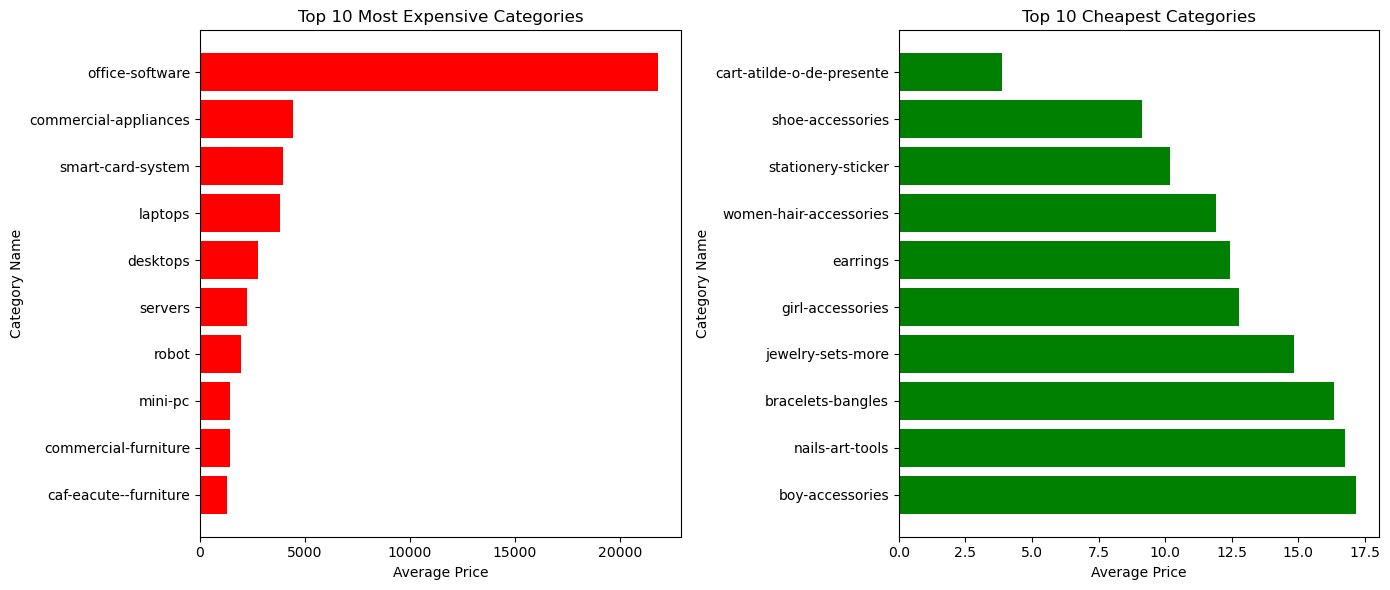

In [10]:
average_price = df.groupby('category_name')['price'].mean().reset_index()

most_expensive = average_price.sort_values(by='price', ascending=False).head(10)

cheapest = average_price.sort_values(by='price', ascending=True).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive['category_name'], most_expensive['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Category Name')
plt.title('Top 10 Most Expensive Categories')
plt.gca().invert_yaxis()  

plt.subplot(1, 2, 2)
plt.barh(cheapest['category_name'], cheapest['price'], color='green')
plt.xlabel('Average Price')
plt.ylabel('Category Name')
plt.title('Top 10 Cheapest Categories')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

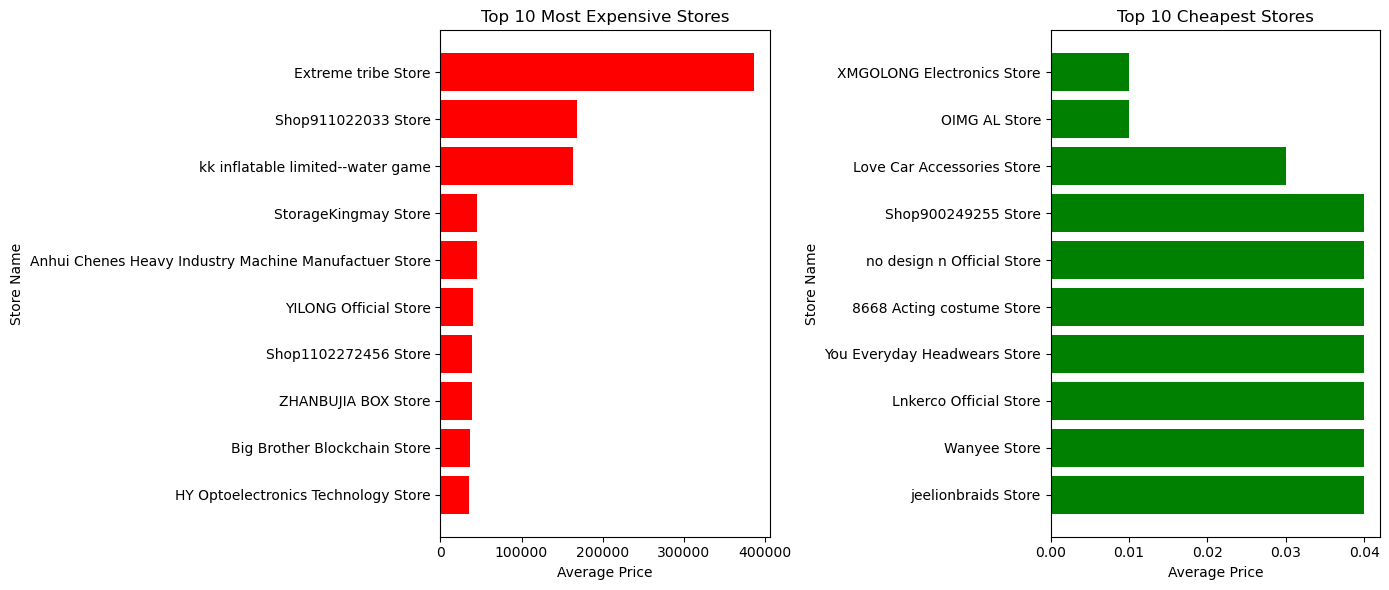

In [11]:
average_price = df.groupby('storeName')['price'].mean().reset_index()

most_expensive = average_price.sort_values(by='price', ascending=False).head(10)

cheapest = average_price.sort_values(by='price', ascending=True).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive['storeName'], most_expensive['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Store Name')
plt.title('Top 10 Most Expensive Stores')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(cheapest['storeName'], cheapest['price'], color='green')
plt.xlabel('Average Price')
plt.ylabel('Store Name')
plt.title('Top 10 Cheapest Stores')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

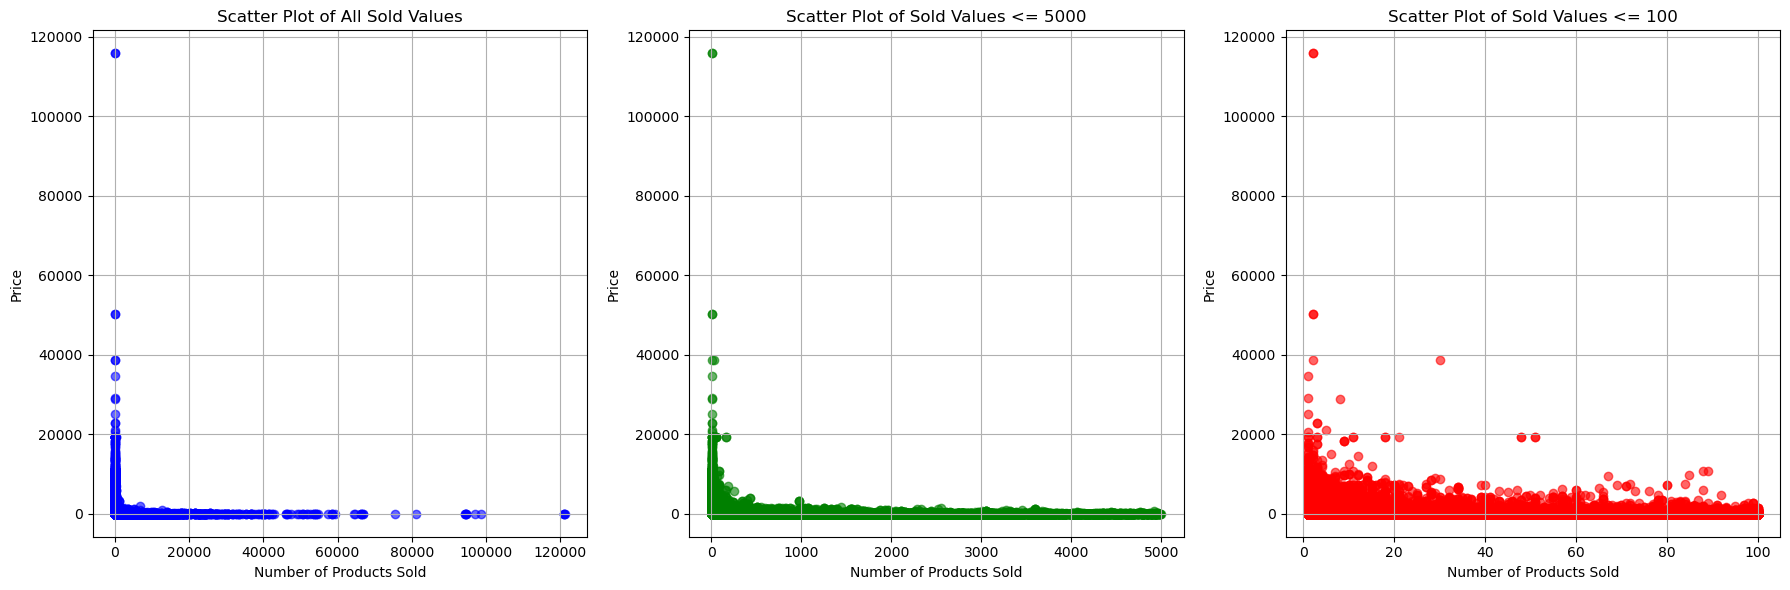

In [12]:
df_wo0 = df[df['sold'] != 0]

df_all = df_wo0
df_max_5000 = df_wo0[df_wo0['sold'] <= 5000]
df_max_100 = df_wo0[df_wo0['sold'] <= 100]
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_all['sold'], df_all['price'], color='blue', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of All Sold Values')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(df_max_5000['sold'], df_max_5000['price'], color='green', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Values <= 5000')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(df_max_100['sold'], df_max_100['price'], color='red', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Values <= 100')
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

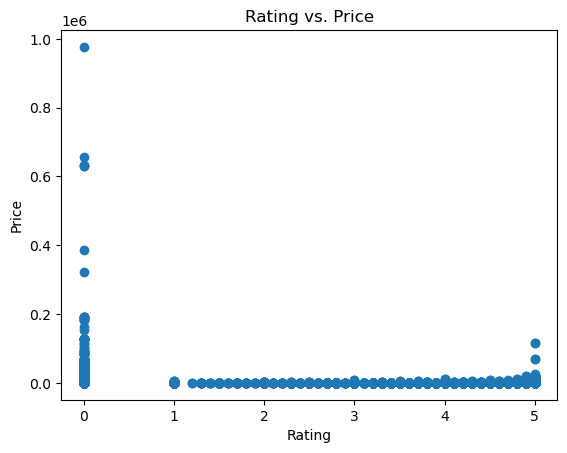

In [14]:
plt.scatter(df['rating'], df['price'])
plt.title("Rating vs. Price")
plt.xlabel("Rating")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

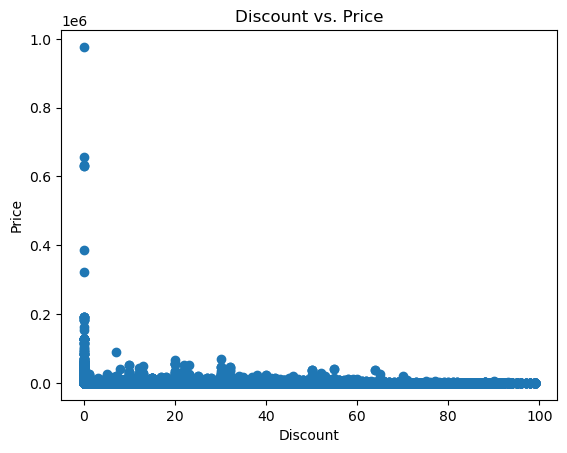

In [15]:
plt.scatter(df['discount'], df['price'])
plt.title("Discount vs. Price")
plt.xlabel("Discount")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

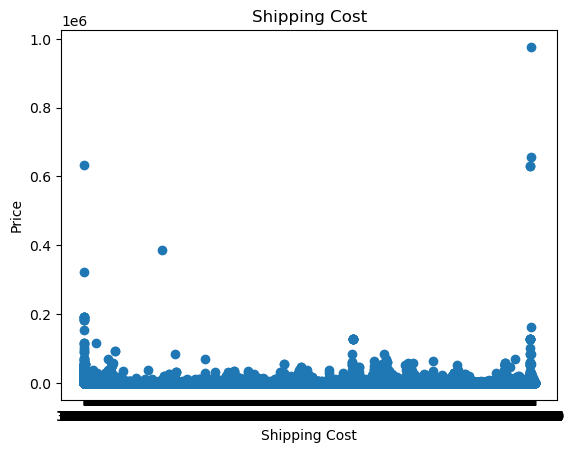

In [16]:
plt.scatter(df['shippingCost'], df['price'])
plt.title("Shipping Cost")
plt.xlabel("Shipping Cost")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

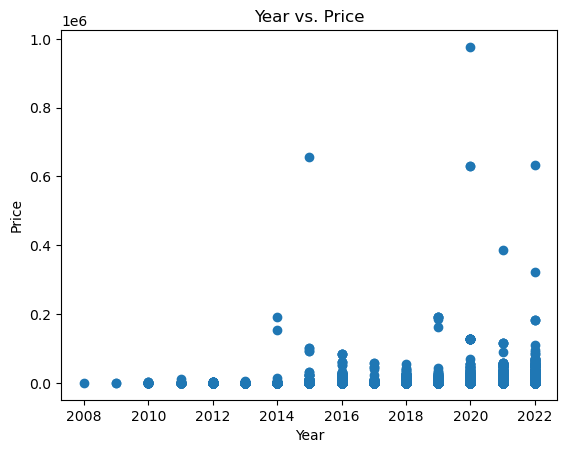

In [17]:
plt.scatter(df['year'], df['price'])
plt.title("Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")

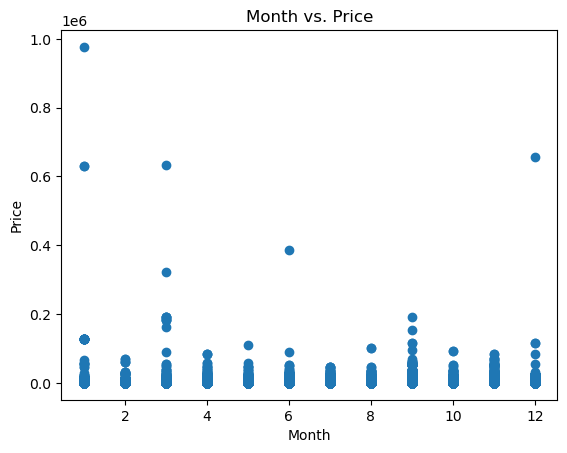

In [20]:
plt.scatter(df['month'], df['price'])
plt.title("Month vs. Price")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

#### Conclusion
We can see no linear relationships between the features and the target, it suggests that methods relying on linear assumptions might not perform well

Potentially useful methods could be:
- Decision Trees and Ensembles
- SVM
- MLP

Potentially not useful methods:
- Linear regression

Preliminary list of features which may contribute to the performance of the ML model:
- categoryName/categoryId (each category has exemplary price window)
- storeName/storeId (each store may work for different categories)
- sold (there are weak inverse correlation between number of solded items and price)
- year (there are weak correlation between year and price)
- title (keywords that will make narrow view of the product)

## Data quality verification

In [18]:
df.isnull().sum()

storeId          0
storeName        0
title            0
rating           0
postCategory     0
sold             0
price            0
discount         0
shippingCost     0
category_name    0
category_id      0
type             0
year             0
month            0
day              0
dtype: int64

In [19]:
# Let's impute the nan values in shippingCost with the mean value
mean_shipping_cost = df['shippingCost'].mean()
df.fillna({'shippingCost': mean_shipping_cost}, inplace=True)

TypeError: Could not convert 00000009.34597.73001295.6200048.770815.470440.350.8117.88068.190004.05014.940None00056.9200510.62102.71016.26012.2012.20012.2130.82000000None084.3300000063.550000384.8210.04012.2400001.350None00032.5100022.5500048.6100000340.310.04597.73000000272.03405.4500382.73018.650None00001396.25042.0544.710000000170.36000907.913389.29830.33552.470294.43211.68757.390000468.760001031.7308.870020.31000024.40259.440None0920.6332.51388.1800018.65014.710113.210343.150058.27030.4300493.40757.39803.73035.76000142.2545.2539.0439.35.8300755.700199.860000117.890016.26031.010510.621030.100328.3300023.170552.470032.5100012.235.760010.230552.47240.3224.480052.820037.80415.7100012.20170.3600056.880000030.47097.550000000000195.8532.51009.27000388.180481.6690.86001632.670752.8421.35171.560210.680572.590None00000415.7124.48000000058.777.5700607.69073.17001219.36None00000481.0212.97367.8913.32None00None0047.07000038.88101.24016.26062.39000062.0124.1301.390None037.38757.39026.8400000039.3343.15353.6200None347.41001795.8032.7400058.2722.3253.7519.3800367.89071.413.32016.10000594.100291.640124.1900044.49049.4242.67171.56010.23001.530459.96000None00000None00679.94219.09000024.1347.070101.247.410064.45641.2127.960602.52023.79128.97743.96380.880031.70876.28None42.5905.640343.15572.5900045.410None0308.87000272.0389.4314.7117.3000045.250011.390000410.53021.35024.9109.11000199.86None05.71035.518.15171.5600380.30142.2511.31276.9585.71021.1666.76236.14347.410510.6200None016.99000000None20.3114.21236.140043.75None0001456.5200883.39481.66304.85062.01752.84016.269.960035.51259.440000006.9900101.2401.8507.72000203.2200024.418.530.54271.8609.580045.2516.6400243.8828.730000000125.9900001218.05683.140000388.180005.646.995.4400003.988.77154.490000053.36000None26.84000188.7447.5335.7685.7101251.870669.97000172.5200000141.79343.15None17.880063.0900123.619.5872.67030.81343.15000085.71135.8900015.0417.07014.22013.75057.380None001031.7007.571456.52None0000172.521396.25481.66125.7620.700017.88512.28None0459.96258.06006782.9157.38071.48.4600062.390000115.9700005.91014.1500196.00129.2463.09414.67013.755.52None893.41113.21283.8800026.1847.070048.77000000000000000000048.77815.470050.8117.880000068.19597.73390.189.3412.20154.1004.050089.431295.62056.92None508.0736.03000None0000000012.200510.624.05000000353.62000000000256.16259.44272.0392.860102.7148.7717.8800365.8200None0306.3915.21000489.8800000830.330007.56304.850000402.39None0000179.67None384.8201.35000353.62039.040000367.89679.940569.04000000382.7300638.5846.760022.55092.86510.62None000000688.120012.390000405.450801.571218.05272.03000000064.0605.56000010.04259.4432.74012.82000594.180037.3807.98000030.32008.15026.82000830.3300016.2605.52000283.880000064.4500044.4916.1000000None12.9700167.85None0None026.1801.39030.540012.3200000None884.4900001047.0315.04016.10000015.21010.0442.05171.565.6497.030000073.17883.390None000012.9700167.85000012.3200803.730015.04030.5400010.04259.4442.05171.565.64028.460883.390None275.7853.48000552.47024.7931.590343.15071.7477.570884.49172.5200095.640000883.390012.97000012.320000015.0430.5400010.04259.4442.05171.565.64028.46883.39None53.48095.6400024.7941.6271.7477.570172.521051.59000013.67000000023.1701148.54001.310459.960679.9424.1358.2714.2131.7None057.3853.9055.970029.15251.990347.410005.6805.710754.6500985.44None10.04000016.26028.42058.920058.8562.01211.3700000725.9112.4493.29020.235.07035.761309.6828.460000000None016.157.0310.1200000172.52None17.61000016.100594.10131.77402.39000000014.3300022.40883.3900542.01031.82241.0248.150000228.9541.71.53812.92035.51087.1572.36000083.91755.7014.0296.6162.01000013.670119.660000243.8800016.26035.76228.95None000None31.011218.05000000388.180248.5548.3906.997.9505.4415.7500085.71018.7719.8983.91241.02286.5415.2510.12053.9000256.160033.4830.4758.92142.4None000219.090000607.69065.65.64000030.47016.87024.48271.860000402.39073.1752.8200037.8670.6302160.66162.72210.687.57024.9400022.3262.01000219.090162.72077.5367.072160.6695.6400123.6100032.675.6413.01140.09132.9443.090None0737.6634.8713.7516.1000None5.480030.47001051.590000884.49154.4909.5817.88045.2500172.52000000013.759.19000113.21283.8800000594.10000None018.42023.44062.010021.16431.46131.77446.4472.67016.26459.961309.680236.1428.73373.0827.1700040.89048.0700248.55000014.94000010.040None00000025.66333.4618.6100000023.8625.7908.79000010.700000None36.538.7710.04000000011.0810.8110.040000000None19.92031.62104.06019.150009.690083.06024.29009.68None019.42015.4596.26024.29017.34000000005.83762.1008.1500038.9239.3112.928.69026.76None0259.440018.88014.02019.230018.770000000100.820014.1319.850013.98017.61001557.3012.2125.1814.7130.2321.973.780129.2412.7112.3911.24007.41000015.74None9.690014.520020.270078.85032.4300NoneNone00000None0None0000NoneNone00None000None000None0000NoneNone0000000NoneNoneNone000NoneNone00None00None0None000032.13009.15040.81313.58009.3416.0200011.0418.8800024.29000018.88015.870012.242.68000024.939.2733.17016.5011.120015.7517.61013.98018.9634.9803.6700000000NoneNoneNone00None00NoneNone00NoneNoneNone0None007.72NoneNone000000000000018.9600NoneNone0None00000NoneNoneNone0None00000018.420008.15000000007.071137.0400000014.1353.6308.1500019.53006.298.1518.880014.5618.770None07.998.530None06.83019.73None12.20018.9600000576.761724.7703.1327.07None28.230008.160008.960032.4314.2237.340000000000019.85036.8407.6820.123518.769.0400017.267.3005.68014.9803.24032.43000006.4118.69None000None000None00000NoneNoneNone0None000NoneNone00None000129.240None0None04.05NoneNone00NoneNone0None0None00None00None000None0None00000None0NoneNoneNone000None00None00000NoneNoneNone000NoneNoneNone000000None018.960None0NoneNone000None000None0None0NoneNoneNone13.75None00000043.49.5800000039.040016.500None013.479.580000020.3106.29031.5108.1500012.0507.92010.160000000010.540008.9293.6316.0217.61000None00NoneNone00NoneNoneNone00None000None00None000000000None0000None0None0NoneNoneNone000None0None00None0None00NoneNone0024.4019.850019.4207.530019.92017.8819.11016.724.4812.7116.02019.85012.32009.07000000018.8878.0419.8516.02011.19008.16000007.1413.98019.850012.2000013.0100NoneNone105.8None0NoneNoneNoneNone0NoneNoneNone00447.06None1576.140NoneNone6349.21None0NoneNoneNone0None00None808.83None0NoneNoneNoneNoneNone0341.09922.31719.943207.50000146.03737.820380.670001724.773909.49117.89NoneNoneNoneNone0NoneNoneNone00NoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNone0NoneNone00000000NoneNoneNone0None0None00None896.710None0NoneNone0253.038239.050None01088.1500896.71None0None0None00None00NoneNoneNoneNoneNoneNoneNoneNoneNone000None0NoneNone0NoneNoneNoneNoneNoneNoneNone0000NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None00NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNone0None000NoneNone00NoneNone0None0NoneNoneNone0None001279.9102079.81000711.1420.123839.60711.14787.24None1057.5720.04NoneNone0NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNone0None0None0None0000NoneNone00NoneNoneNoneNoneNoneNone000None0172.52645.06000262.14None836.200NoneNoneNoneNoneNone00None00NoneNone0None00NoneNone0000None00NoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNone00NoneNone3462.311898.1402799.7101898.140240.3200000None00None000NoneNone0None000000None0NoneNone00None0None0None0NoneNone0NoneNoneNoneNoneNoneNone0None0NoneNoneNone00NoneNoneNoneNoneNone0NoneNone0NoneNone3652.870None0NoneNoneNoneNoneNone00NoneNoneNone000NoneNone0NoneNoneNoneNoneNoneNone0None0NoneNoneNoneNone0NoneNone00000NoneNone0None0000None0NoneNoneNone0341.187999.0713438.37None0562.550000NoneNoneNone0000NoneNone00None0NoneNoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNoneNone0None02734.88155.88483.28204.735039.322583.0901361.533354.0401516.91NoneNoneNone000000None00NoneNoneNoneNone00NoneNone0None000None0NoneNoneNoneNoneNone00NoneNone0NoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNone0001898.1400271.60385.32None0NoneNone0000000NoneNone1576.140NoneNoneNone0NoneNoneNoneNoneNone0NoneNone0None0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone00None000006544.48881.88001529.07001576.14NoneNone0NoneNone00000None0000NoneNoneNoneNoneNone0None000NoneNoneNone0NoneNone0NoneNoneNone0None000NoneNoneNone0NoneNoneNoneNone0NoneNoneNone9558.8800516.001576.142590.049878.830NoneNoneNoneNone00000None000NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNone0NoneNone000NoneNoneNoneNoneNoneNoneNoneNoneNone1750.1341.098169.1201012.09020317.505959.3401219.367519.15000NoneNone00569.04NoneNoneNoneNone1017.760NoneNone0None00NoneNoneNoneNone0NoneNoneNone00None0NoneNoneNoneNone0NoneNone0NoneNoneNoneNone000None0NoneNone932.23687.400None1455.09375.78002754.8101138.810055.68NoneNone0NoneNone0NoneNoneNone0None0None0NoneNone0NoneNoneNone0088.520NoneNoneNone00NoneNoneNone17.680None00113.96NoneNoneNoneNone00NoneNone0None0NoneNoneNone11.27101.240410.96453.1200None0NoneNone28.8400NoneNoneNone0NoneNoneNone0NoneNoneNoneNone000None000None0None0NoneNone000None0NoneNoneNone0NoneNone2381.800NoneNone0None0289.2500000000NoneNone0000000NoneNone0None00None00None0NoneNoneNoneNoneNone0120.32496.790128.970NoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNone0NoneNone00NoneNoneNoneNone00426.9100None0None0None0NoneNoneNone0NoneNoneNone0000000000000None0None0NoneNone000NoneNoneNone0NoneNone0NoneNoneNone0NoneNoneNoneNone0None0NoneNoneNone0NoneNone0NoneNone00NoneNone0NoneNoneNoneNoneNoneNone0None0None0None00000NoneNone000None0None0NoneNoneNoneNoneNoneNone0000NoneNone000NoneNone00None0None94.8800None0NoneNoneNone0None556.8400None0None00NoneNone0NoneNoneNone00None0None00None00NoneNoneNone0NoneNoneNone0None0NoneNone0NoneNoneNone00None0038.88088.520343.890113.96547.03NoneNoneNoneNoneNone0None000None00NoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNone0None0038.880NoneNone0None0NoneNone547.03343.15000094.88000044.68488.26000NoneNoneNoneNoneNoneNoneNone000NoneNoneNoneNone0None0None0NoneNoneNone000NoneNone0None0NoneNoneNoneNoneNone0None0NoneNoneNoneNone0000NoneNone489.8800069.9331.4772.939.39070.47128.97None10.35None0NoneNoneNone28.84None000None0None0None0NoneNoneNone00None0NoneNone12.09NoneNoneNone00NoneNoneNoneNoneNoneNone50.31None0None00NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNone00000NoneNoneNone00NoneNoneNoneNone0NoneNone00NoneNone0NoneNoneNone000NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone94.88101.24101.240101.2494.88101.24000040.9759.81000NoneNoneNone0None0NoneNoneNone0None000NoneNoneNone0NoneNone0None0000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone82.52NoneNone0NoneNoneNoneNoneNone101.24101.2488.5233.29101.24113.96101.24082.161054.9156.960NoneNone0NoneNoneNone0None0NoneNoneNoneNone000NoneNoneNone0None00None000None00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone000NoneNoneNone037.8105.72031.4700128.9700101.24NoneNone0NoneNone0NoneNone0NoneNoneNoneNone0None00000NoneNoneNoneNone0000NoneNoneNoneNoneNone00NoneNoneNone049.42None0None00NoneNoneNoneNone49.426.4911.0423.05028.4637.57016.9519.9215.480NoneNone039.42NoneNone5.6049.42025.7500None000None0None00NoneNoneNoneNone49.4228.73025.75NoneNone018.420NoneNone133.18None3.246.49NoneNoneNoneNoneNoneNoneNone0000NoneNoneNone0None26.800NoneNoneNone0NoneNone0None18.42None188.97NoneNone31.820NoneNoneNoneNoneNone000NoneNone049.4216.2649.42000None6.7614.21NoneNoneNoneNoneNone22.8613.0124.4949.42015.258.159.42365.476.49017.960017.180015.4166.07025.757.84049.425.616.9426.8400051.78041.718.420018.61014.1549.4222.8614.0606.4907.1056.116.87009.6115.2113.5508.420None25.75022.86017.0717.24011.0428.736.1059.046.4925.7525.7516.8706.4905.616.29NoneNone0None0None00NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0None0NoneNone0NoneNoneNone0None0NoneNone12.05NoneNoneNoneNone00None00None29.9325.7514.2118.42078.8563.48.0326.846.490019.9220.7724.7128.730NoneNone026.80None0NoneNoneNone00026.80NoneNone013.55None0NoneNoneNone22.130000None0None08.160NoneNone017.24NoneNoneNone000059.04NoneNoneNoneNone010.026.8013.3908.313.78NoneNoneNone0NoneNoneNone6.49121.2400NoneNoneNone000NoneNoneNone0NoneNone0None3.78None0None00None0NoneNoneNone0None49.42None0000NoneNoneNone28.77026.88.15140.639.0714.4365.4725.7521.749.046.490NoneNone00NoneNone26.8NoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNone00NoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone037.57016.2622.35.68066.2627.6116.0642.4714.0238.3815.253.248.494.7949.4207.318.420026.800NoneNone0None0NoneNone00NoneNone25.7500NoneNoneNone08.150NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00None00None00NoneNoneNone00None0NoneNone000NoneNoneNone00NoneNoneNoneNone0None0None0053.63NoneNoneNoneNone0NoneNoneNoneNone7.920None0None028.7397.9600NoneNoneNoneNoneNone29.380NoneNone0NoneNoneNoneNoneNone10.0NoneNone14.2128.460000047.822.8621.0829.12060.9719.9214.21026.878.85NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNone0None0None39.350None0NoneNone00016.95None0NoneNoneNoneNoneNoneNone000NoneNoneNone000None0NoneNoneNoneNone0None00NoneNone00NoneNoneNoneNone0None00NoneNone00NoneNoneNone000None0None00None0NoneNone0260.95None23.1700638.580None00NoneNone0None0None0148.68None072.36None535.72NoneNone32.51None382.43None34.210NoneNone0000NoneNoneNoneNoneNone0000NoneNoneNone1342.301323.85000013.2400135.64725.651038.651123.15010.890None00None0NoneNoneNone0NoneNoneNoneNone00NoneNoneNone0000NoneNoneNoneNone000267.51None0None00None172.5200None0NoneNone000NoneNoneNone0None00NoneNone0NoneNone301.3638.580NoneNone0NoneNone0000None0None0NoneNoneNone0000NoneNone0NoneNoneNoneNone00NoneNone000NoneNone0None0None000NoneNone0NoneNone045.4100NoneNoneNone0None77.65291.6400None0None00000None000None0None02457.41None00None00None00076.420NoneNone0NoneNoneNone005.99None0000NoneNone0None755.810NoneNoneNone01048.2300NoneNoneNone26.181588.61None0None00NoneNoneNoneNoneNone1138.6276.42None058.420NoneNone00000NoneNone00None0None00None00048.7700None594.10None0000NoneNoneNoneNoneNone378.3760.97256.0800NoneNone0074.64NoneNone0None0NoneNone000NoneNoneNoneNone00None0None0NoneNoneNone000NoneNone0None00NoneNone00NoneNone0000NoneNoneNone328.130NoneNone65.80405.63945.8372.82NoneNoneNoneNone673.33None550.99None0None000NoneNone0NoneNoneNoneNone000None1604.920177.81None000NoneNone000None0None715.260None197.89NoneNone00385.19None1252.680None0178.35719.9415.21169.361030.9300None29.38None001.390None8.38NoneNone0NoneNoneNone836.20NoneNone146.81000000053.75123.35000None0None0None0None431.9682.44NoneNone0None00NoneNoneNone315.550None789.9124.1300778.14033.050None0None00None00None0None0None00None0000NoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNone33.28None0NoneNoneNone0None65.80NoneNoneNone037.9614.41227.891347.480001396.25000None0000None0NoneNone000000None0683.1840.620None0NoneNoneNone000None000000NoneNone000None00None00NoneNoneNone0None00None0256.08000None0NoneNoneNone00None00None0None240.21NoneNoneNone0NoneNoneNone0None0264.1900None0065.61None0NoneNone00None0None000000None0None38.5400NoneNone0None0000NoneNone0000None00NoneNone0NoneNone740.100NoneNoneNoneNone0None0None0024.440NoneNoneNone0None0None0NoneNone000NoneNoneNone0NoneNoneNoneNoneNone30.12079.200625.36177.811219.36594.1067.3866.260112.44004.870067.880008.15004.0500000020.04016.2619.46020.0400010.12171.2502.5523.2112.16259.44000007.1016.560019.3516.229.7741.86343.15011.714.2100005.10000000027.1406.10005.6400010.0000013.48016.22016.020016.330012.16000016.2200009.77014.21033.28000218.41039.850000010.12000024.210317.4401.0811.930111.2400011.11180.790004.32102.560010.1913.1726.840026.84018.420082.1721.736.3713.01040.977.5309.7713.1708.07356.1711.396.499.190014.136.330000None000None0000NoneNoneNone0NoneNone00000NoneNone00None0NoneNone0None0None0None00None0None0000None00NoneNoneNone0None0000000NoneNoneNone0None00012.86None0None000None30.120None00None000000None24.0600None000None0None0NoneNone0NoneNone00NoneNone00000None385.050000259.44None13.1700None0None00None0NoneNone000000None0None000NoneNone0NoneNone000None000000000000.810NoneNone0NoneNoneNone0NoneNone0NoneNone0NoneNone00NoneNone0None0None000000000000NoneNone0None00None00None0000000None0None0None0000NoneNoneNoneNone0000NoneNone00None0None00NoneNoneNone00NoneNone0NoneNone00None0None00NoneNone0000000NoneNoneNone000None00None000None00None000None0None00NoneNoneNoneNone00NoneNoneNoneNoneNone00NoneNone0000000NoneNone0None000NoneNone00000None9.4200None0None16.260None0None0None0None00NoneNoneNone00NoneNoneNone0None4.7500000003.5514.2125.1710.160010.0014.8320.54001.3904.670005.112.430020.0407.1400014.29026.99064.75009.77405.67010.89None049.894.054.32000000010.700010.04None0None2.55None0None0000NoneNoneNoneNoneNone0000NoneNone6.29NoneNoneNone0None0None0NoneNoneNone00NoneNone0None0None10.120None12.20009.7700000102.5600None000NoneNone000None00None00None00None00None62.8600NoneNone000None000NoneNone0None00None0None00None0None0009.7736.41000None0None0000000None0None0None0NoneNone0000None40.9700NoneNone00000000000None0None0None0None000None00None000385.05None0None0None0NoneNoneNone00None00NoneNone00None00None00000000None0None00000NoneNone000None0NoneNoneNone000NoneNoneNone00None0NoneNone0None0None0None000000142.2500NoneNoneNone0000015.8700None03.634.2100None0None0142.250None00None0000None0NoneNone0None3.6300None0None00None0NoneNoneNoneNone0NoneNoneNoneNoneNone000None00None00None0None0000000NoneNoneNoneNone0None00None0None000NoneNone000None0000None0NoneNone0NoneNone0000None0NoneNoneNoneNone00None0NoneNoneNone0None0NoneNoneNoneNoneNone000None00NoneNoneNoneNone0None00None0None0000NoneNoneNone00NoneNone3.9800013.328.1500000NoneNoneNoneNone00000015.870None0None3.212.67None0None03.2000None03.630None3.20None0None0000None0None09.34NoneNone003.6700NoneNone287.550None0012.212.476.17.68011.080014.87014.98000003.214.1751.0103.27.65010.5011.080003.7514.4420.04343.157.721.625.25015.6428.88012.25.8315.646.720041.516.111.0811.0802.243.636.9105.4403.20NoneNone0000NoneNone00None0NoneNone00NoneNone000NoneNone00None000000NoneNone0NoneNone0NoneNoneNone00000NoneNone0None00NoneNone00None000000NoneNone0None000000NoneNone0NoneNoneNone000NoneNone0NoneNoneNone00None00None0None00None000000000000NoneNone0000000NoneNone00None0NoneNoneNoneNone0None0NoneNone0None0NoneNoneNone000None000None0000None00NoneNoneNone000None0None00None0000None0None00000None000000NoneNone0000None0None00None00NoneNone00000NoneNone00NoneNoneNone000None00None0None0000None00NoneNone000NoneNoneNone0NoneNone000None000NoneNoneNone0NoneNone00000None00NoneNoneNone0000None0000None0000NoneNone0NoneNone000None0None0NoneNone000None00None00000NoneNoneNone0NoneNone0NoneNoneNone000None0None0NoneNone0NoneNone0000None05.83NoneNone0None000NoneNone00None0000None0000None000008.1515.8700003.63014.1310.57.650026.84022.7400000101.63003.200000007.7203.980012.860000006.0214.170000000000142.250077.230120.51199.1739.310385.05211.370000317.44199.1700156.040356.1700011.040727.5100000525.330317.441044.6439.31727.510210.9184.760188.66141.44180.7928102.3500203.22158.390152.33812.9200105.26592.75812.92592.75000188.790170.7128.8400019.77203.220164.45199.17592.75048.19812.920188.790155.880210.8325.48000000000592.75000155.88000155.88203.220274.5185.27143.7285.37304.8500812.92923.04170.710812.920184.760None00NoneNone00None0NoneNoneNone0592.75None0None00NoneNoneNone00NoneNone0NoneNone180.79NoneNoneNone0None0NoneNone812.92479.61None00None0NoneNone150.63132.7977.230203.22525.330382.08343.150181.6170.36000NoneNone181.6None0None00000None0None000000NoneNone21.47None00019.15None203.220None0None0NoneNone00None040.3100NoneNone0None0None185.27NoneNone000NoneNone0NoneNone00NoneNoneNoneNoneNone00NoneNone18.07None000NoneNone203.220None0000NoneNoneNone00011.660None0None22.90None385.05NoneNoneNoneNone0None0None48.85143.72000152.330000812.9200199.17129.7812.920592.7500137.27184.76032.4812.92203.22152.33162.6000330.03014.71210.83223.530182.9114.6179.67137.27406.44195.5748.77210.90103.7594.79188.79182.91203.22592.75000160.86000000199.170812.92194.8800000None00None0None385.05None181.6NoneNone0None00None000NoneNoneNone0NoneNone155.880None0None00None000None11.660NoneNoneNone0NoneNoneNone0NoneNoneNone0136.9682.36592.75143.7200195.5700343.15155.880000125.9914.210161.290184.76195.57199.17727.510024.7900000184.760592.75000385.0500000426.79220.9860.9700000158.390155.88143.72171.7130.54000000184.76274.5129.7203.2256.9900271.1800075.1816.100171.71210.8314.7100184.760121.94203.22170.71155.88136.96474.67199.1700199.1720.54592.750199.17129.795.6400184.76794.8518.42210.83203.220155.88None001044.640000194.88199.17120.82000012.59NoneNoneNoneNone00NoneNone00None0None0None0None181.6None00None0None0None0None30.54None132.13None0None0525.33None363.73None0None00None00NoneNone0None0203.220262.680812.92093.48812.9212.2None0None0NoneNone000None00NoneNone0NoneNoneNone0NoneNone00NoneNone0NoneNone812.92None0NoneNone00None0None0NoneNoneNone000NoneNone0NoneNoneNone184.760812.922.1693.48155.880862.2721.58NoneNoneNoneNone000None0NoneNoneNoneNone000None0None000NoneNone0None0None00None00None0None00NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None727.5133.480000113.690129.14155.88155.880077.84210.83812.9219.7356.99213.45210.830000210.9155.8819.73108.270143.7200184.760406.44155.880199.170156.040000155.88000155.88525.33812.9215.68203.22000000195.11181.67.45164.95179.6740.31155.8834.9819.15489.880886.4385.050250.114.09162.83259.44290.1301.3230.06162.83385.0578.85250.1552.47179.6762.86230.060250.1353.9740.66310.1137.622143.4595.6453.911.0290.10478.8862.86290.153.63377.87475.94095.6405493.1200737.660154.49064.25310.290341.18341.1862.86029.2720.08377.8700NoneNoneNone385.050NoneNone0None0NoneNone0385.05None0NoneNone0NoneNoneNoneNoneNone9.07NoneNoneNone00None19.15None0NoneNoneNoneNoneNoneNoneNone000NoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNone04.83NoneNoneNoneNoneNoneNoneNone000NoneNoneNone0NoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone13.59NoneNoneNoneNone0NoneNoneNoneNone13.59NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNone000NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00None0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone53.63250.1290.1270.118.69330.06473.471913.4353.6300532.67532.67532.678.15478.88001097.4620.04365.252.7852.7852.788.15NoneNoneNoneNoneNone000None0NoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone478.88230.0618.69532.67478.8895.64562.55137.621536.91377.8752.7852.7828.4252.7852.7852.7852.78048.77230.0678.8516.02406.44NoneNoneNoneNone137.6200None0None0None250.1None0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone73.17None000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0000NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None0None000NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone230.06250.1179.67179.6715.52250.1179.67179.67179.670310.1377.87310.1230.0601600.16179.67761.991309.0212.22015.29162.83250.1290.10270.1290.1532.67532.670250.1250.152.7852.78154.4552.7852.78452.0478.880053.6352.7852.7828.8452.78270.152.7853.630179.67045.25290.120.12290.17.68330.0645.2560.97NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone179.67NoneNoneNoneNone0NoneNoneNoneNoneNone179.67377.87137.62330.0615.87179.67250.1270.1230.0612.2179.671434.1378.851517.1870.43230.06179.671351.111351.110250.1270.1154.49250.116.26137.6252.7852.7852.7865.0252.78137.62250.1146.03095.6452.7852.7852.7850.16473.47478.88425.09425.0965.02478.8895.6495.64473.47052.78270.1154.49137.6261.36290.1154.4995.64342.074.0547.538.63032.78621.5525.06000712.9947.5328.4600987.360.9732.7819.92000000712.99018.4221.717.9207.9520.7418.380007.61101.6339.3945.250016.1415.8706.9948.39018.38028.4611.417.530004.7500000None0None00000None0None00NoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNoneNone00NoneNone0None00None00None00None000000None0None0NoneNone0None0000000007.450033.23045.250032.78317.0525.06025.060000008.3412.97026.8404.1318.385.6412.0500004.6762.01000020.3177.840019.6245.250102.9420.0436.8416.26014.565.56None0NoneNoneNoneNoneNoneNone0NoneNone0None0NoneNone0None00None00NoneNoneNone00000NoneNoneNoneNoneNone000None0None0None00NoneNone00None0None5.56101.6313.3642.9458053.7200NoneNoneNone00None08.53NoneNoneNoneNoneNoneNone000None001.81005.56NoneNoneNoneNoneNone0None00None00NoneNone0NoneNoneNoneNoneNone0NoneNone11.3917.8439.3942.9495.6414.986.06018.6518.3832.7836.84NoneNoneNoneNone0None0None08.19None0000None00NoneNoneNone0NoneNone0None0None0None0None0NoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNone20.1623.5936.8417.4119.7748.3918.38137.6220.7430.1215.870047.5347.5300014.2924.2525.6611.27015.3711.3932.7811.12150.050025.9517.1411.78028.4614.6328.46011.0400053.63002.4315.7949.4217.5311.4321.62031.7818.658.0720.3121.4712.67000020.1239.3996.26032.7820.0425.0625.060020.040None0NoneNone00NoneNoneNoneNone0NoneNone0NoneNoneNoneNone0000None0None0NoneNoneNone04.05NoneNone00NoneNoneNoneNoneNoneNoneNoneNone12.6753.6311.425.6611.3131.784.05011.420.0420.0400010.1620.040NoneNone0None00None0NoneNoneNoneNoneNoneNone0None0NoneNone0NoneNoneNone00NoneNoneNone0NoneNone00None00NoneNoneNoneNoneNoneNoneNoneNoneNone28.4630.9709.9236.8440.66010.017.3462.0120.044.67007.4947.53101.6328.468.8422.5521.080013.3214.63013.7832.6311.51032.7819.1917.538.841.24028.467.9500024.2115.4510.1915.8718.07287.5522.245.376.9931.4769.516.29026.18317.05011.700None0012.77000000020.0404.9None00NoneNoneNone014.60NoneNoneNone00None0None0None0None0None0None0None000NoneNoneNoneNoneNone011.70None0NoneNone00None000NoneNoneNone0None0None032.78317.0500None0NoneNone0NoneNoneNoneNoneNone0None0011.93NoneNone00000NoneNone12.05NoneNoneNone0NoneNoneNone0None0NoneNoneNone0None0NoneNoneNoneNone36.8411.7128.4626.849.0011.39032.7800023.09000None00000NoneNone00NoneNoneNoneNoneNoneNoneNone0None00None0NoneNoneNoneNoneNoneNoneNone000None000031.78NoneNoneNone0NoneNoneNoneNoneNoneNoneNone48.77004.9800065.6800None113.69None36.37None0None00None0None00NoneNoneNoneNone0None0NoneNoneNone445.36None0None0NoneNone0None0445.36NoneNone00NoneNoneNoneNone0None586.3404747.2800586.34586.34601.550971.19121.940None0None0000NoneNone00None0NoneNoneNone00None000NoneNoneNoneNone0NoneNoneNoneNone121.94445.36586.340None000NoneNone00NoneNone00NoneNoneNone000586.34NoneNoneNoneNone862.15121.9400None586.34NoneNone00000NoneNone00None0NoneNone0None0000NoneNone00NoneNoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0586.3400None510.62None0121.9400386.7500626.610447.72546.07844.430251.109494.513490.652072.86None15004.55586.34887.44887.44552.47121.94121.94121.9400121.941054.910572.8200562.55445.36474.670000626.610626.61626.61445.36000418.64270.21626.61113.69321.11586.34586.34887.440284.5113.690113.690113.69113.69365.4328.8400NoneNoneNone0NoneNoneNoneNone000000None000NoneNone0NoneNone00NoneNoneNone0NoneNoneNone0NoneNone0NoneNone0None00None00NoneNoneNone0NoneNoneNone676.54000798.67601.55113.69NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone00None00None0NoneNoneNone00000NoneNone0000None0NoneNoneNone0NoneNoneNoneNoneNoneNone586.34676.54121.94676.54577.96676.54601.55113.69798.67601.55586.34699.780NoneNoneNoneNone0NoneNoneNone0None00NoneNoneNoneNoneNoneNoneNoneNoneNone586.34586.34586.340None0NoneNoneNoneNoneNoneNone0None000None0000073.06421.650687.74499.81445.36687.740421.65747.430747.43747.43722.6747.43294.19868.2128.84445.36445.360357.445445.45724.653490.6505445.400649.0100113.69113.69121.9413.01121.94121.94113.69121.945.1586.34586.34586.34586.3411.51000722.99552.47447.72447.72630.09447.7200478.3400None0499.81421.65687.740499.810687.74747.43636.23747.43747.43583.02747.430445.36636.23474.67333.31089.433071.782072.863071.7802072.86471.19420.38522.010445.79121.94121.94121.940121.94586.34586.34586.340586.34630.09447.72577.960676.54722.99000617.9200687.7428.38421.65369.57321.1108.7500421.65652.796.1747.43583.02747.43747.430747.43868.211031.551031.5512.47NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone000000None0NoneNoneNone00NoneNoneNoneNone00NoneNone00None868.21868.21868.218.75868.21626.61626.61626.610626.611140.05666.89666.8916.951036.4197.113490.651476.8302072.862018.659494.5112845.5809494.5118894.6214032.044607.61270.759494.519494.519494.519494.51012287.089494.5110053.054747.28022090.02127.0418894.6214032.04015421.3418061.023340.448656.818.078936.019494.513490.6514448.8316.959494.519075.6814448.8318894.6209494.518377.559494.5118061.009494.5113893.0723618.2611309.67020839.6323618.2626257.9242637.90NoneNoneNoneNone16.95NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone11.51NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00None000NoneNone00000None0None000NoneNone00000NoneNone0None000NoneNoneNoneNoneNone000NoneNone0None00NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNone000NoneNone0None0None0000None0None00None0016.260NoneNoneNoneNone0None028.4600NoneNoneNone00None0None00None487.76NoneNone00NoneNone000000012.221.97024.4020.3112.20000033.7521.9700037.5339.2753.6390.8675.188.156.10089.4397.5400487.7689.43182.91102.210114.9522.97041.28015.7941.28064.10016.2664.1047.8020.31101.6375.1800None16.14None00NoneNoneNone31.01None0None0NoneNoneNone000None24.290None0NoneNone0None0103.75None000NoneNone24.4None00None0None0None00None35.22None18.53016.2647.836.57182.91137.6275.1800None0None0000None0NoneNone0None0NoneNone0None00None0128.04028.46NoneNoneNone0NoneNone0NoneNone0NoneNone20.31NoneNone0None00089.43000NoneNone0None0000None14.21012.224.40020.310117.8953.9022.200362.7300103.758.1520.31020.31048.150000041.28000000101.6320.3136.4548.3408.15092.4820.3132.2812.2001579.19031.9720.3113.488.15213.2216.2675.1816.26064.1None0020.3100None0NoneNone00NoneNoneNoneNoneNoneNone00NoneNoneNoneNone0NoneNone0000NoneNone0None0None00NoneNoneNoneNoneNone020.310None00000None009.7320.31195.570060.9716.2620.31012.28.1516.260028.4620.3100051.721.9740.4300020.0821.0824.428.8800000052.820128.04101.6373.17116.88008.15020.3134.5248.77045.0600101.63021.9741.620154.4525.2520.3134.520049.6924.46.112.275.1868.8908.158.1500083.33101.67128.04031.9784.68.15043.4028.4620.310082.5928.4600021.97041.2818.1185.6412.275.1848.312.20001.216.260038.27120.8200016.26101.6325.250101.630107.6143.590024.46.116.26028.4616.26108.770008.1545.4908.1512.2124.1400082.59000020.3131.0848.6166.9541.2881.2816.2625.640021.9753.90112.5236.2620.3114.252410.03259.44487.7648.7720.3181.2821.970048.34None24.4049.6936.498.15138.3943.4016.260008.158.1520.3124.64020.31406.4478.690000020.310102.446.120.3141.280020.3160.9700032.51362.738.15016.269.7300020.31127.020.3118.11000090.86036.2660.97070.43020.31021.9724.40NoneNoneNone00None20.31None52.320None26.410None083.33None0000NoneNone00None0112.5220.310NoneNone000None26.41000None0None00None00None02.01NoneNone00NoneNone12.200NoneNoneNoneNone000000NoneNoneNoneNoneNone00NoneNone0000None0NoneNone0None0None00None0NoneNoneNone51.700None0NoneNoneNone0NoneNone00None0043.40None60.9727.18000019.150000None00NoneNone0None20.0400019.15None00NoneNone0None0NoneNoneNone00None19.15000None0NoneNone000None0None0None00NoneNoneNoneNone0NoneNone36.840000None00None0None00None0NoneNone000None0NoneNoneNoneNoneNoneNone00None000000NoneNoneNone000NoneNoneNone00None0None0NoneNoneNoneNone0None0NoneNone12.51None00NoneNone0None0None000013.24None0None0NoneNoneNoneNone0NoneNone000None000011.8500None0NoneNone0None00None012.3900NoneNoneNone012.590None00None0NoneNoneNoneNone00NoneNoneNone0None00NoneNone00None0None0None0NoneNoneNoneNone0None00None0None0None00None000None0000None0NoneNoneNoneNone000NoneNone13.01000000None0NoneNoneNoneNone0NoneNone0None0None0None0000NoneNoneNone0None000NoneNone000None00None00NoneNone0NoneNoneNone00000None0None00None0None0000NoneNoneNone00NoneNoneNone000NoneNoneNoneNone0NoneNoneNone00None000None0NoneNone00NoneNone0NoneNoneNoneNone0NoneNone0000None0None00None0None0None00None0None11.85000None0000None11.850None00NoneNoneNone00NoneNone0NoneNoneNone0None0NoneNone000NoneNone0None0NoneNone0NoneNoneNoneNone00None12.8314.98None00None8.610None0000None0None00NoneNoneNoneNoneNone012.780None0NoneNoneNone0None0012.01None0None0000None00None0NoneNoneNoneNone0NoneNone00None0None17.4522.6300NoneNoneNone0NoneNoneNoneNoneNoneNone00None0None0NoneNone0None0None00None0None012.9NoneNone00NoneNoneNoneNoneNone0000None000NoneNone0None011.5814.9813.82014.258.1513.40NoneNone0None00000NoneNone0NoneNone0NoneNone0None0NoneNoneNone000NoneNoneNoneNone0None00None000NoneNone0NoneNoneNone0None00None0NoneNone0None0None11.8516.5662.55None0NoneNoneNone00None010.1600None0None0None0NoneNone00None012.32NoneNone0NoneNone0NoneNone0None0NoneNoneNone0NoneNone0NoneNoneNone000None14.13015.2912.9412.6700012.28000NoneNoneNone0NoneNone00000None000NoneNone0000None000None0NoneNoneNone00NoneNone0None000NoneNone0NoneNone000None0None000NoneNone0NoneNone00NoneNone0NoneNone00None000NoneNoneNoneNone0000NoneNone000NoneNone0NoneNone0000None0NoneNoneNoneNone0None0None0None0NoneNoneNoneNoneNoneNone000None0259.4426257.9220700.705585.02020700.726257.9220700.720700.75585.020000None00049.89NoneNoneNoneNoneNoneNone0NoneNoneNoneNone0None0None14.580NoneNoneNone0None111.2400NoneNone36.37NoneNone0None000NoneNone00NoneNone0None53.75065.0216.64000264.1900NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNone0000000NoneNone000NoneNone000None0NoneNone102.560None0254.920None55.53None00000None31.39000None000NoneNone00None000NoneNoneNone00None00None00NoneNoneNoneNone000None0NoneNone00000None0None0None0000NoneNoneNone0NoneNone0000NoneNoneNone00None000000None0060.9700046.140095.640027.6135.710043.17089.4340.3100072.7153.949.890053.900102.5620.31144.57125.990000031.3924.420.4147.4600067.4953.90026.240162.60200.17162.649.890000None00043.9NoneNoneNone89.430NoneNoneNoneNoneNone0NoneNone00None000NoneNone0000None0None000000None065.02None7.49NoneNone0NoneNone00None00None064.25None045.680040.8149.890None200.1751.930115.5327.610121.9400038.070049.890064.2530.5464.250067.49033.4889.4377.8820.410020.66347.090121.94125.99000062.8662.860000000251.1053.90033.17None00None0000None121.94None0000NoneNoneNone000None40.6683.670None00None49.891000.230None0None00NoneNone014.94NoneNoneNone00NoneNoneNone00NoneNoneNone0125.99048.1951.93000NoneNone445.360NoneNoneNone00None0000NoneNoneNoneNoneNone0None27.34None0None00NoneNoneNone30.5400NoneNone0NoneNoneNone0000None0NoneNone0None0None44.71051.51055.530000062.8627.450062.8600053.7553.7500053.7564.2525.1400074.7900034.9400121.94000052.0564.2553.7565.020447.7200170.3251.63027.340064.250036.15064.250038.5464.2536.37064.2565.02060.9727.4565.02064.2564.25064.2526.2400064.25000445.3664.25036.37049.8967.4900016.22062.8600074.7953.90027.4553.900000138.240.7838.54064.2583.6764.2500064.25036.15121.94None0NoneNone0None0NoneNone000NoneNone14.21None00None00None0None0NoneNoneNone00NoneNoneNone00None000None00None53.9053.9None62.86None0NoneNone000None0000024.400121.94053.75000005.750121.9465.3700162.627.4534.124.6755.5320.410064.25000060.9764.5233.480048.1564.25012.3274.290035.8349.89036.41026.2410.6631.3917.96276.3930.5416.2264.250032.710000180.790000None02536.290None00NoneNoneNone00None0000None0NoneNone0None0None040.660000208.01NoneNoneNone52.59None00NoneNone0None00None000None0None0NoneNone000None0None0NoneNone0000None00None000None0000000NoneNone000None0None00NoneNoneNone0None00000NoneNone0000None0101.630None0000None000None000NoneNone0None0None0None0None00None0None0None0000013.09NoneNone00029.1500None0000000NoneNone00None0None00NoneNoneNone0000000None0000NoneNone0None0000NoneNone0NoneNoneNone0None0000None0None0000None0NoneNoneNone0000None00None00None00None00None0None0None00NoneNone0000None00NoneNone0NoneNone000None0NoneNoneNone0NoneNone0None000051.420None008.15None0None0000None000None0NoneNone00NoneNoneNoneNone00000NoneNone0000NoneNone0NoneNone0NoneNone00None000NoneNoneNone0None00None00NoneNone00None0NoneNoneNoneNone000000000016.4566.450000147.4662.0108.333.75138.9600143.720None21.79.11None8.96001.550000007.140007.9200023.25000162.99092.6723.480017.26308.8728.46002.05None0NoneNone5.21None0NoneNone0NoneNoneNone0000None00None10.81NoneNone0NoneNoneNone000NoneNoneNoneNone00NoneNoneNoneNoneNone0NoneNone0None0None9.6800022.722.9None21.3112.470000NoneNoneNone0None00None000None0None0NoneNone0NoneNoneNone00NoneNone00None00NoneNone0000000None0None0NoneNoneNone0NoneNone0None0NoneNone0NoneNoneNone0None000NoneNoneNone000016.020NoneNoneNone000None000NoneNoneNoneNone0000None0None000None00None40.660NoneNoneNoneNoneNoneNone0None00None000NoneNoneNone0None00NoneNone0NoneNoneNone00None00None000000None00None00NoneNoneNone00000None10.460None0None000None0NoneNone00000None0000None14.440None0None00NoneNone000026.03296.70NoneNoneNoneNoneNoneNone00None0000None0NoneNoneNoneNoneNoneNone0000NoneNoneNoneNone00231.2500NoneNone0None0None15.160385.0500None00NoneNone000None0None00None000NoneNoneNoneNoneNoneNoneNone00None00NoneNoneNone0None000NoneNone00NoneNone0None000None0000None00None04.0521.72000026.84038.03055.18000016.117.0300016.9513.423.17000010.549.04013.415.0214.210021.3118.079.8100013.438.0315.02024.21021.712.6753.634.0520.0418.345.29019.3826.840000NoneNoneNone00None0NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNone0NoneNone00NoneNoneNone0None0NoneNone016.95None38.03NoneNoneNone24.21006.1006.72016.1824.9110.1238.03015.7516.0216.2636.570None0None012.59None0None0000NoneNone0NoneNoneNoneNone00None0None0013.98000NoneNone00000043.400None000NoneNone00NoneNone0NoneNone00None00None0NoneNoneNone0NoneNoneNoneNoneNone0NoneNone00None00None000NoneNone00NoneNone0NoneNone00NoneNone0None0000NoneNone00NoneNoneNoneNoneNone0NoneNone38.0314.21009.0400013.8226.7624.524.0529.890015.7543.413.0119.926.7614.21016.2613.410.06.7200013.4000013.21006.65000023.1326.846.65009.81004.6320.3110.12012.7817.14018.313.8211.1216.26012.211.27015.160007.3025.6443.40028.46011.04012.6738.036.134.2113.630023.0589.93018.312.6702.0532.630012.016.3310.57.3043.4006.654.0516.29006.1829.5800016.9516.76None38.03022.8213.32None026.8409.190NoneNoneNoneNoneNone019.1900None00None00NoneNone0None00NoneNone16.950NoneNone0None14.0900000NoneNoneNone5.2900None0None0None0NoneNoneNone00None0None014.0210.120011.3916.26018.322.3610.1214.8311.5500015.6038.03None00012.056.10007.26012.8620.04010.12038.030017.84029.6900000010.1610.5015.020000010.521.728.46043.414.218.9613.010010.1620.122.438.770000028.2617.1411.5115.5606.1007.26043.411.08016.9514.2215.16011.4328.4615.48016.950015.0216.41010.1618.34038.03010.1211.0827.6112.1215.75016.95014.33015.8700010.1611.89000NoneNone00NoneNoneNone00000None0NoneNone0NoneNone0None00NoneNoneNoneNone00NoneNoneNone00NoneNone09.8100NoneNoneNone00NoneNone00NoneNone0None00000None000None011.27NoneNoneNone0None00NoneNoneNone0NoneNone0NoneNoneNoneNone0None0000000None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone14.988.2212.486.4914.9812.6708.92024.2118.07011.430000011.023.670016.955.21014.2109.1912.86038.032.05012.0518.300016.26014.21008.1516.9520.04043.422.3611.7416.4106.4970.4311.7427.9205.1317.2900010.1212.2014.2106.4919.277.4428.090006.727.30024.419.590012.220.410027.6117.14000012.67024.5216.62013.418.3012.6703.6316.7618.42006.49011.74003.2417.146.9118.42016.7634.210000013.40010.546.37038.036.10025.18None0NoneNone0None00None000NoneNone0051.7NoneNoneNoneNone0None0None012.200None012.2NoneNoneNone30.1226.33NoneNoneNone00None0NoneNone0None21.70011.62021.827.0309.1523.21119.244.2111.6612.223.210000243.49039.85016.26000445.36095.6408.92051.70005.25055.800012.218.230101.637.6912.200016.56017.037.033.82011.045.64023.2121.97000000None0NoneNoneNoneNone00None0NoneNoneNone0NoneNone0NoneNone00NoneNone00NoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNone26.3384.99003.08021.9723.21003.597.031.200010.711.6628.6910.7012.207.7640.11018.61021.0809.1524.1300016.2289.93053.6311.31385.05008.7726.4913.2428.570022.4329.2700024.418.610069.5818.73002.930016.2221.8233.36731.64.29024.431.246.0624.1326.579.2313.5941.0518.23007.6900007.7208.0763.09020.747.000025.2100007.9250.120None026.4939.733.0800416.0600016.569.0413.3241.2843.36162.600033.36032.5921.978.1635.9929.19002.43011.3919.0407.920015.600266.240000001.0836.8437.537.089.8148.324.400010.70066.951.080009.2712.20007.727.720014.21000000018.23024.44014.13024.1300None030.5811.0463.0924.13028.8433.82339.91000025.25023.21023.2100031.0155.7616.2612.280281.9924.417.65024.060001.0812.200369.22017.45026.4907.039.4200024.1324.64021.97013.59081.28011.04803.73000015.7512.3202.5616.22018.2311.04007.610013.5515.87013.0118.239.1523.6728.5730.4321.0815.214.057.7211.398.160008.2624.139.7312.224.1300012.218.300None0NoneNoneNone00None0None00None0NoneNone0NoneNoneNone00NoneNone0NoneNoneNone0000NoneNoneNone00NoneNoneNoneNone0NoneNone0None12.90None0000NoneNoneNone000None0None0NoneNone1.0807.38023.5912.4700NoneNone0None015.52NoneNoneNone0000NoneNoneNoneNone0NoneNoneNone0None00NoneNoneNone0NoneNone00None00NoneNoneNoneNone00NoneNone0000NoneNone00None0074.644.02011.040None00NoneNoneNoneNone0NoneNoneNone00None0None00000NoneNone00NoneNoneNone0NoneNone000None28.840NoneNoneNoneNone00000NoneNone0None0None0None0None000None0NoneNone0None00NoneNoneNone000None0None0None00NoneNoneNone0None0NoneNoneNone00NoneNone00NoneNoneNone0None0NoneNone0None0None0NoneNone0None36.8433.3636.8416.370019.73NoneNone0None0NoneNone0None0000None33.360None0None0None0NoneNoneNone0None00NoneNoneNoneNone0None00NoneNone0None0NoneNoneNoneNoneNone0None00None0None08.1658.69048.3067.3806.1033.4806.106.133.48006.16.133.480207.54034.44146.340.666.126.76068.814.8700033.486.1051.1256.9968.8124.445.2506.1146.340.6606.13.24271.863.240None6.118.4267.38040.6626.7613.5567.3854.520018.420None09.77None0None0NoneNoneNoneNoneNoneNone68.81None4.870NoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNone16.56NoneNone67.3848.15004.056.1None6.1067.38018.4257.385.2906.111.756.16.1034.4413.5567.38081.4066.95None6.181.4108.0481.49.7756.226.1287.5536.73039.356.167.3806.140.666.1036.736.100019.1928.46130.286.1063.5500045.25067.38067.383.2406.106.10067.386.10000010.19068.810NoneNone0NoneNone00NoneNoneNoneNone000000NoneNone0None0NoneNone09.77None00None006.10NoneNone0000NoneNoneNoneNone0NoneNoneNone00NoneNone00NoneNone00None67.3806.156.9944.713.244.056.114.6331.3200None67.3868.8139.666.1000000014.6367.3806.1009.7700154.14045.2506.1000004.71038.466.16.10129.76.121.706.111.75067.380014.6300083.2506.16.132.5126.768.536.16.103.24067.38012.20234.0808.1540.66140.360NoneNone47.867.3863.550057.386.1067.386.16.154.5254.52067.3809.77123.876.105.689.77067.3895.6400None179.6767.38385.0526.4106.100006.167.3856.996.110.123.2439.4206.10038.274.054.1710.1224.46.1008.036.167.383.24003.24067.386.112.267.3804.05013.5567.3800006.167.3854.5200052.8246.683.24803.7300None67.3800NoneNoneNone33.98NoneNoneNoneNone0None0NoneNoneNone0NoneNoneNone0NoneNone0None0NoneNoneNoneNone76.49NoneNoneNone48.39130.28NoneNone04.020067.386.1004.0540.6683.527.92207.5467.38003.24067.3889.8106.104.176.106.106.1056.996.18.0354.5247.80003.246.10049.42003.2468.814.8706.19.77012.267.38067.386.1036.576.16.110.057.3806.114.6367.3800004.020006.108.153.2440.6648.390None0NoneNoneNone000NoneNone0078.46None00NoneNone0000NoneNoneNoneNoneNoneNone6.100None00None0None0NoneNone0NoneNone00NoneNoneNone0NoneNone0NoneNoneNoneNone67.38040.666.10None00NoneNoneNone0None00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00None0None00None9.770None0NoneNoneNoneNone0NoneNone6.123.4012.24.8756.996.1024.46.1412.20000000NoneNone0None0NoneNone0None0NoneNone0None0NoneNoneNoneNone000NoneNoneNone9.77None0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone81.450.76.1024.676.10044.71040.16048.1506.14None6.108.156.140.166.10067.3847.89.776.14.876.1057.386.18.1506.106.100000040.66024.67036.530032.51108.04026.7667.386.1016.68067.380130.281499.8167.3867.3856.225.11.126.16.16.6867.38179.676.14.0267.389.770None0NoneNone0NoneNoneNoneNone00000353.62None0None0NoneNoneNone0None00None016.910NoneNone17.070None0None0None000NoneNoneNoneNoneNoneNone00NoneNone016.26025.7512.3916.4647.84386.210None11.62NoneNoneNone0None7.1None0NoneNoneNone28.46None0NoneNone24.13NoneNoneNone0NoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNone00NoneNone0None0NoneNone0None000NoneNone0NoneNoneNone000NoneNoneNone0013.17None00NoneNone0None0NoneNone0None0NoneNone0None14.2115.45NoneNoneNoneNone0NoneNone0None00NoneNoneNone16.91NoneNone0812.929.3467.8870.820801.5728.7716.841.0514.63016.2613.320028.46NoneNoneNone0NoneNoneNoneNone00None0None0NoneNoneNoneNoneNone000NoneNoneNoneNoneNone0None0None00None00NoneNoneNone0NoneNone0None0NoneNone41.5121.16015.8722.3620.7414.020017.0728.317.610NoneNone0None0None11.620None0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNone00None00None000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNone0NoneNone000None0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone0000NoneNone0NoneNoneNone0None00None00NoneNoneNoneNoneNoneNoneNoneNone0None00NoneNoneNoneNone0None0NoneNoneNoneNone17.11None44.64043.29015.600015.6429.1946.0310.0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone00None0NoneNoneNone0None00None0None0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNone0None0NoneNoneNoneNoneNoneNone08.73None00None0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone16.68NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None00NoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None000None0NoneNoneNoneNoneNoneNoneNoneNoneNone25.9914.6316.18010.81053.6315.647.959.6114.6314.6358.4633.5516.140016.2614.6315.5914.6311.3114.6321.5514.98NoneNone6.2240.66None0NoneNoneNoneNone0None00None00NoneNone0None0None0NoneNoneNone00None0None0NoneNone33.250NoneNoneNoneNone0None0NoneNone0025.66082.1712.4715.5611.66010.238.6900000025.95112.4400016.26112.4400040.6620.04019.46033.25150.05023.210004.9441.8611.714.21013.554.0246.2216.33018.4251.32068.00068.810040.6614.21033.2833.32000016.262611.474.3214.2182.177.49348.96NoneNoneNoneNoneNoneNoneNone000NoneNoneNoneNoneNoneNoneNoneNone0000None0NoneNoneNone0NoneNoneNone00000NoneNone000None0NoneNone0NoneNoneNone013.3252.78015.8700011.0413.40NoneNoneNone24.4None0NoneNoneNoneNoneNone00None00None00None0NoneNone00None00None00NoneNoneNone0NoneNone00NoneNone000None00NoneNone0None0NoneNone014.136.0624.4000None0None0None33.25None0None0NoneNone8.2623.90NoneNone078.8524.433.25NoneNone2611.47025.25None00None0NoneNone0NoneNone000None0None0None000NoneNone010.0813.3216.26150.0513.758.69068.0719.94NoneNone0None0None0NoneNone00NoneNone0None00None00None0NoneNone0None000NoneNoneNone00None0NoneNoneNone0NoneNoneNoneNoneNone0000000None0None00None00NoneNoneNone000000None000NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNone00None0None0None0None00None0000NoneNone12.207.03019.4600022.599.4620.77017.0732.5140.66None24.415.8710.2313.32020.0420.4100101.6347.800021.4724.4007.5819.734.024.0236.5714.21666.2824.419.23020.0436.840012.4715.8700012.47017.68012.4795.45062.0148.4214.2110.2343.17None0021.85047.80040.6615.8709.0708.15000024.410.0000024.06365.7840.66147.664.8315.56668.24025.66040.66068.8121.5533.32047.85.130330.04032.510426.9100017.5310.08014.21000010.08000NoneNone0000None0NoneNoneNoneNone00None0None17.88None00None0NoneNone00NoneNone0None000NoneNoneNoneNoneNone0NoneNone00NoneNoneNone000NoneNone00None0095.9953.63015.5614.210004.020668.2428.4660.2740.2047.800042.3347.842.33128.46040.660014.2166.2611.167.8405.5251.1225.29312.656.228.6900555.3726.8414.360000010.022.16027.6112.0914.1322.1632.5104.020000308.0232.51202.06010.7300000502.86016.2647.840.66032.638.15178.824.0228.4625.6600014.29013.4422.96032.59040.6695.6414.2113.3213.3232.510043.1735.1812.9745.25040.660095.99047.812.4726.3317.6845.2506.121.7119.24NoneNoneNone00None00NoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNone00348.9600NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00None0NoneNoneNoneNoneNone0None0NoneNoneNone00None22.36NoneNone000None041.05NoneNone0None0000NoneNoneNone00NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone45.25None0None00None121.94NoneNone0014.9003.86007.9214.9343.15167.0453.6386.29NoneNoneNone000000321.110000385.05None0NoneNone719.94NoneNoneNoneNone594.370NoneNoneNone510.62NoneNoneNoneNone0NoneNoneNoneNoneNoneNone00None0NoneNone10.1612.20012.20045.250292.1548.77234.0853.6300None0NoneNone00None0NoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNone14.9NoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNone0NoneNoneNone8.153.860013.0186.2986.29053.6314.90022.4000234.0823.59000045.25000000NoneNoneNoneNoneNoneNoneNoneNone0None0NoneNone0NoneNone0None0NoneNoneNone00NoneNone0None0NoneNoneNone00NoneNoneNoneNone0None0NoneNone007.18147.083.86000None00NoneNone0None0NoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNone0None0NoneNone000None365.12NoneNone0None00None0None0179.6700NoneNoneNoneNone049.310010.3906.1162.650.70000None00000NoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNone0NoneNoneNone00NoneNoneNone08.15NoneNoneNone0NoneNoneNoneNoneNone0NoneNone9.77008.154.0595.6408.15060.97020.310NoneNoneNoneNone0NoneNone0000None0None0NoneNoneNoneNone40.66NoneNoneNoneNoneNoneNone00NoneNone00None00NoneNone0None000None0NoneNoneNoneNone0365.820234.080124.19093.87271.86124.19162.0900NoneNoneNoneNoneNone0000None0NoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNone0NoneNoneNoneNone0None0None0None00NoneNoneNoneNoneNone022.3606.1013.94116.690000037.5703.8630.623.753.7516.2218.190031.2408.15000016.37022.36000016.4912.222.36150.728.1525591.231575498.55264.19020.04044.6155.97025.6655.9753.63067.460036.8495.6440.810093.3725591.23179.67715.34365.1253.63447.118.0700142.95095.6495.6400NoneNoneNone000NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone000None04.05None60.97028.4684.020012.0131.2400365.8212.2182.91086.29NoneNone0NoneNone00NoneNoneNone0None008.15NoneNoneNoneNone0NoneNone0None0NoneNoneNoneNone12.670None00000NoneNoneNoneNoneNoneNoneNone0None48.7718.3179.678.42373.528.4695.6484.0200287.55034.94000000None0None000000None0NoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNone0None00000None0108.0453.63020.3113.9400189.13013.63142.25000036.8492.7593.48000014.9162.695.64142.25162.6504.0248.7720.74930.77013.0100108.04036.8453.6318.2613.014.0500169.400108.0453.63022.093.7560.970020.540287.5512.2022.36142.250012.5900None00None084.9500None0None8.15NoneNone00None0NoneNone8.15000NoneNoneNone0000NoneNoneNone00NoneNone000None0None000None05.410NoneNone00NoneNone44.7100None00None12.86NoneNoneNone000None0NoneNoneNone0NoneNoneNone000000056.34NoneNoneNone0None0None0NoneNoneNone00NoneNone00None000None000None017.3000None3.0610.2716.950NoneNoneNoneNone0None0NoneNoneNoneNoneNone0None00NoneNone000NoneNoneNone000NoneNone00NoneNoneNone000None0NoneNone0NoneNoneNone42.3606.72028.460000NoneNoneNoneNone0NoneNone002.09NoneNone0None0None0NoneNoneNone014.2500None0None0NoneNoneNoneNone0None0None0None0None00None00None0NoneNone0None32.5100036.53011.240000000None039.8500064.14None011.470NoneNone0None000None0NoneNone0NoneNone0None003.5940.200NoneNone00None00None0None0None000None000NoneNone0None00000None00None00None000None0NoneNone0None0None000044.71NoneNoneNoneNoneNoneNoneNone00None0None00NoneNoneNone00032.47None0None0None0NoneNoneNone0None00None33.250None00None00None00None00None00000NoneNone0None0NoneNoneNoneNone0000NoneNone00None00NoneNone0None0None0None00NoneNoneNoneNoneNoneNone00NoneNone0032.630None32.47None0None0NoneNoneNoneNone0None0None0NoneNoneNone00NoneNoneNone00NoneNoneNone0None0None00None0None0NoneNoneNoneNone45.87000036.534.7530.04011.39None00None0NoneNone0None00None2.59000NoneNone0NoneNone00NoneNone0None0NoneNoneNoneNone024.4None0None00NoneNoneNoneNoneNone39.420None0None0None011.430032.518.150013.010NoneNoneNone0NoneNone000NoneNone00None000NoneNone0None13.01NoneNone0000None00NoneNoneNoneNone0None0None0NoneNone0NoneNone0None0NoneNoneNoneNone000021.394.0500000NoneNone0None0NoneNoneNone0NoneNone0None000000NoneNone0000000000NoneNoneNone000None0None000None000None0None00None0NoneNone0None00None0000NoneNoneNoneNoneNone00NoneNoneNoneNoneNone0None02.32NoneNone0NoneNoneNone000None0None06.33019.3518.53None0008.92NoneNone00NoneNone020.3113.05018.6100000NoneNone000None00NoneNoneNoneNone0NoneNone00None7.80None0None00000000000NoneNoneNone0None000NoneNone014.21NoneNone0None0None0001.85None12.8617.0728.6919.3114.2119.3111.7817.9611.78068.277.6819.3162.010013.514.0219.31012.2011.550014.0948.3968.2721.72218.41049.85019.310021.349.9719.31066.26011.5528.690039.8516.9119.92021.72019.92009.968.5319.9268.279.9649.8519.319.968.5310.5819.9268.27062.010010.4624.71025.48008.5315.8721.4766.269.928.53019.7719.9215.8719.3119.31019.3119.31017.96010.7368.278.838.83019.3112.4711.5514.0731.55048.3919.3114.5853.05021.718.0738.11011.7819.319.0411.55008.730024.7962.0112.214.58024.79011.7811.660020.3116.3219.31020.0414.58019.46019.150048.3914.07000023.5928.1519.92019.9268.274.0520.2311.5514.2124.9114.636.18.5316.6830.8916.9514.2916.0813.520.358.15019.3111.5516.910NoneNone0None10.58NoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNone0None0None0None21.470None0NoneNoneNoneNoneNoneNoneNone63.75NoneNone7.6924.7914.0239.8519.310011.5514.0211.5515.1719.1515.2548.3915.87020.04007.9914.0282.28NoneNoneNoneNoneNone48.39NoneNoneNoneNone0NoneNoneNoneNone11.780NoneNoneNoneNoneNoneNone011.66NoneNoneNoneNoneNoneNone13.13000None0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone19.31NoneNone0None0NoneNoneNone0NoneNone48.39NoneNoneNone0011.66NoneNoneNoneNone0NoneNoneNone03.78NoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNone00None0None0NoneNoneNone011.780NoneNone00None11.08NoneNone0NoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0019.310NoneNone20.04NoneNoneNoneNone0000None34.6019.920007.69000023.670000NoneNoneNoneNone00None0None0NoneNone014.63NoneNoneNone0NoneNoneNone00None0NoneNoneNoneNoneNone0NoneNone019.31NoneNone0NoneNoneNoneNone28.6900010.739.97019.92070.439.0713.5520.047.012.4711.780NoneNone000NoneNoneNoneNone0NoneNoneNoneNone0017.760NoneNone000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone0None012.39011.5516.5620.0410.85012.9014.067.5315.17033.1700None0None00NoneNone0None0NoneNoneNone0NoneNoneNone0NoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNone00NoneNone0None00000NoneNoneNoneNone0037.6115.7919.310021.7221.7217.3116.5611.43NoneNone0NoneNoneNone0NoneNoneNone0NoneNoneNone26.84NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone03.78NoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone00None0NoneNoneNoneNone4.17NoneNoneNone011.78NoneNoneNone19.3111.78NoneNoneNoneNone0None0None00NoneNoneNoneNoneNoneNoneNone0011.66None0NoneNoneNoneNoneNoneNone0NoneNoneNone00NoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNone0None000NoneNoneNoneNone00NoneNone0NoneNoneNoneNoneNone24.4None000NoneNoneNone000NoneNoneNone0None0NoneNone00NoneNoneNone0NoneNoneNone0023.5911.7816.1811.78063.7520.3119.9217.7616.95NoneNone0None0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone000NoneNone0None0NoneNone0None0NoneNoneNoneNone00104.0615.75NoneNoneNone69.080None113.7948.3940.3113.4101.6320.04018.380079.36.6814.7173.17101.63101.6336.5736.8407.7213.0536.57015.7512.245.25029.38032.63101.6300012.2190.9818.65073.1764.1709.23101.63069.0882.36040.8100012.8395.6400032.6336.8400040.310021.4769.08028.380101.6356.8419.7300NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0None0NoneNone0None00NoneNoneNone42.94None0NoneNoneNoneNoneNoneNoneNoneNone00NoneNone015.75012.2101.63040.6616.6263.7992.1789.430510.6208.3421.4792.75029.3812.20NoneNoneNoneNone89.43NoneNoneNoneNone0NoneNoneNone00NoneNoneNoneNone0NoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNone00None0NoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone00None0NoneNoneNone0000None0000None0000None0None0NoneNoneNone0None0None0None0NoneNone0None0NoneNoneNoneNoneNone075.812.2089.43NoneNoneNoneNone0None00None0None0None017.07NoneNoneNoneNoneNoneNoneNone0021.47NoneNoneNoneNoneNoneNoneNone00NoneNoneNone0None0NoneNone20.3132.5124.2112.220.31045.25069.0851.1256.8445.2500020.0490.37000None0NoneNoneNoneNoneNone0000None0None0000NoneNone000None0NoneNone0None58.92NoneNone0NoneNoneNoneNone0NoneNoneNone000NoneNone00NoneNoneNoneNone0None92.5924.1995.640NoneNoneNoneNone0None0NoneNone0NoneNoneNoneNone89.43NoneNoneNoneNone069.9775.8NoneNone0NoneNoneNoneNone137.620NoneNoneNone00NoneNoneNoneNone0NoneNoneNone24.21None0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNone0NoneNone0None000NoneNoneNoneNone00NoneNone0NoneNone0NoneNoneNoneNone0None0None68.69105.68090.3720.31063.7912.2036.8462.01105.6800045.250NoneNoneNone0None0NoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNone0None00NoneNoneNoneNoneNoneNone00None0NoneNoneNone12.212.220.316.5363.7979.379.369.9769.9730.8969.9720.31304.532.5195.648.3456.8487.2363.7930.238.2731.78073.17101.63158.5113.0500012.82208.8281.2856.9217.96095.6492.59047.89.5818.65062.0124.8784.6456.8456.8420.31056.84285.1220.3163.79None087.4675.875.823.969.9712.212.2063.3672.7556.8400056.862.01053.63None0024.1923.564.05NoneNone0NoneNoneNoneNone000NoneNone0None20.31NoneNone18.65None0None000None0None0NoneNone0None56.84NoneNoneNoneNoneNoneNoneNoneNoneNone207.540083.9136.8462.0114.1795.64158.5140.66285.12095.6432.51040.6653.63000NoneNone89.0NoneNoneNoneNoneNoneNone50.62NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0None0NoneNoneNoneNoneNoneNoneNone022.5900024.714.4810.160022.59000000009.3122.59000026.8410.16256.160000036.8400000021.70024.40010.168.15010.160010.1624.7107.959.230000NoneNone000NoneNoneNoneNone0None0NoneNoneNone0000None0None00NoneNoneNone0None0NoneNone00None0000None00None00None0None000000NoneNone0NoneNoneNoneNone0NoneNone0NoneNone10.310NoneNoneNone00None00NoneNone0NoneNone00NoneNoneNone00NoneNoneNone00000000NoneNone00NoneNoneNone00None000NoneNone10.1610.73022.59022.590000022.5908.15024.71000024.400None24.410.16000016.117.610024.410.1609.31112.440000016.1013.63008.03019.850009.960024.714.05005.5210.1626.8420.5410.870060.5500023.2617.8818.7709.920010.1600004.050024.400020.31081.2810.1612.390010.16000024.71013.6310.3110.73000None14.2105.9518.6910.16256.1600010.16None0None0None00NoneNone0None00None00None0None00None0None0000None00NoneNoneNone000None0None000None0None00None00000000None0None0None000NoneNone000None00None0NoneNone0NoneNoneNoneNoneNone000NoneNone00None0NoneNoneNoneNone0None00000None000NoneNone0None0None0NoneNoneNone0NoneNone000NoneNone00None0NoneNone0NoneNone0NoneNoneNone000NoneNone0NoneNone0010.31None0NoneNone000NoneNone0None0None0None0None0None0NoneNone0None0000None0NoneNoneNoneNone0None00000None00None00000NoneNone0000None00356.63NoneNoneNone0000NoneNone00NoneNone00NoneNoneNone0None00None00000None0NoneNone0000None0None0None0NoneNone0NoneNone00NoneNone00NoneNone0NoneNoneNone000None000NoneNoneNoneNone000000None0None10.1600NoneNone0NoneNoneNoneNone00NoneNoneNone0None0NoneNoneNone00NoneNone000NoneNone000NoneNoneNoneNoneNone0None00None0None000None000NoneNone0None0NoneNoneNone0000None0NoneNoneNoneNone0None0None00000NoneNone0None0NoneNone000NoneNone0NoneNone0None00None08.15NoneNoneNone0000None000NoneNoneNone0NoneNoneNoneNone000NoneNone0NoneNone0None0000None0None0NoneNone000NoneNone0None0None0NoneNone0None0None0None00000NoneNone00NoneNoneNoneNone000NoneNoneNoneNone0None000None00None00NoneNone0None0NoneNoneNone0None00NoneNoneNoneNone81.36NoneNone0None0NoneNoneNoneNone68.77NoneNoneNone0None00None0NoneNoneNoneNoneNoneNoneNone2.43010.54None16.9514.219.7349.5808.1511.8516.4518.3811.78873.8910.3911.7413.3662.05None0NoneNone0NoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNone0None10.54NoneNoneNoneNone0NoneNone0NoneNoneNoneNone000NoneNoneNone0NoneNoneNoneNoneNoneNoneNone0None000NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone142.95None00NoneNoneNone0NoneNone53.63NoneNoneNone00None00NoneNone0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNone62.90NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNone8.42NoneNoneNoneNone00NoneNoneNoneNoneNone0NoneNoneNoneNoneNone0None0None0NoneNoneNone0NoneNoneNoneNone06.6420.0411.8526.03014.0210.4615.456.4915.2100022.4710.468.34018.380031.12027.9611.7814.09069.9312.8202.439.61101.4514.83143.9114.2119.2313.99012.3915.210146.038.22048.39008.92309.648.6918.3831.011.12012.0114.624.216.10NoneNoneNone0NoneNoneNone00NoneNone0None0NoneNoneNoneNone0None0NoneNoneNone0None0NoneNone12.9NoneNoneNone0NoneNone0NoneNoneNone0None11.8514.913.01018.77019.15012.390104.99971.1916.6810.54137.62179.6734.299.61NoneNoneNoneNone0NoneNone0None000None800.72NoneNone0NoneNone00None0NoneNoneNoneNone8.53None0NoneNone8.19NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNone0NoneNoneNone0NoneNoneNone018.3828.46012.3912.5915.870016.68015.4524.2116.688.07006.0210.35150.7521.7020.7715.2116.56None11.5530.7715.871054.9115.21034.64082.5915.87014.1333.17062.918.3714.9815.4512.1611.787.99016.95011.557.807.6828.6916.5339.9610.310420.07NoneNoneNoneNoneNoneNoneNone0None0NoneNoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone1.8112.5115.0448.7723.8612.711.5525.6652.188.2209.4615.8711.2703.9815.8786.2910.16020.0411.4912.719.598.83NoneNoneNoneNone20.04NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNone000NoneNoneNoneNone0NoneNone0None0NoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone00NoneNoneNoneNone14.0200NoneNone0NoneNone20.27NoneNone26.24NoneNoneNoneNoneNoneNoneNoneNone04.14NoneNone016.68NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNone0None0None0None0NoneNone0NoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNone11.930NoneNone0NoneNoneNoneNoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0None7.99NoneNone14.0263.75084.020019.1921.716.2613.7878.5450.97800.72134.9514.25010.4612.1610.0086.2986.29025.6614.5817.0720.04082.16212.3318.0755.97048.39034.400086.298.839.185.600037.932.0114.02162.83021.1112.2816.5618.8320.35012.1614.5813.5101.45154.4914.0215.4534.69.1825.6614.0225.6619.927.4612.568.078.2210.980014.0218.0716.9423.01000029.2701206.4667.500081.368.033.67137.62068.7710.39018.3827.9300018.3838.3813.5300011.399.0427.1715.870011.7815.8741.0522.5934.9811.7808.5328.4620.31741.9545.25034.297.84None21.8678.857.8412.2021.82067.3419.19741.95NoneNone00NoneNoneNoneNoneNone0None21.7NoneNoneNoneNone0NoneNoneNoneNone0NoneNone0NoneNoneNoneNone22.7NoneNoneNoneNoneNone0None011.3162.05121.9410.067.552.710018.0715.2114.334.450.9770.8912.0908.1900066.260None0NoneNoneNone0NoneNoneNone741.95None0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone000NoneNoneNone037.53None0NoneNone00NoneNoneNone0NoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNone0NoneNoneNone039.96None034.67None5.52None000None00None009.7737.780None0NoneNoneNone00NoneNone00NoneNoneNone00NoneNone0None0NoneNoneNoneNone11.39146.034.8727.1707.3000011.754.959.77NoneNoneNoneNoneNoneNone00000NoneNoneNoneNoneNoneNoneNoneNone636.23NoneNoneNoneNone15.48None0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone4.4None00NoneNoneNone0NoneNone22.7NoneNoneNoneNoneNone48.0026.768.8025.612.47095.6447.80016.5613.32014.9812.4713.3220.23020.4133.1712.2074.9113.32010.1627.140235.73020.23024.1913.3215.8753.02262.840034.6713.3239.420014.2113.32020.0426.2412.227.93033.1786.070013.3248.3None0NoneNoneNone0NoneNoneNone43.56NoneNoneNoneNoneNoneNoneNone000None0NoneNone8.07NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone4.29NoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNone0NoneNoneNone016.56NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone18.8318.0748.311.8236.95137.626.22085.450040.740011.9333.90021.728.4620.2310.000NoneNoneNoneNone18.2300NoneNoneNone00None000NoneNoneNoneNone0NoneNoneNoneNoneNoneNone0None49.62NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone741.95NoneNoneNone000NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.93NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNone00NoneNoneNoneNone0NoneNoneNoneNone000NoneNone11.820NoneNoneNoneNoneNoneNoneNoneNone00NoneNone00NoneNone0032.5100None00None0None33.941.2821.8620.0432.209.968.853.6310.4604.87None11.720.0410.317.2620.2352.5995.64000050.9710.1612.67020.23074.9177.2314.2127.6114.5840.3122.36363.7390.8636.8411.78053.6336.8436.84259.440026.8418.07067.5300053.63021.8625.6620.3518.07018.0723.3816.1821.86020.2352.5934.98142.71000NoneNoneNone7.84NoneNoneNone4.29NoneNoneNoneNoneNoneNone86.29NoneNone086.29NoneNoneNoneNoneNone0467.6126.24None20.27NoneNoneNone0NoneNone0NoneNoneNoneNoneNone00NoneNoneNoneNone11.78NoneNoneNoneNoneNoneNone0None00NoneNoneNone0NoneNoneNoneNone082.59None7.680None0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone8.220NoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00None0NoneNoneNoneNoneNone00NoneNoneNone9.61NoneNoneNoneNone0None00NoneNoneNone000None08.53NoneNoneNoneNoneNoneNoneNoneNoneNone2.43NoneNone010.5421.5865.9514.98014.219.7312.05049.588.1511.858.4221.72018.3811.7415.25053.63NoneNone0NoneNoneNone000None0012.39None00None12.39NoneNoneNone9.230NoneNone124.1969.93NoneNone000None13.05None01.1200NoneNone18.37NoneNone32.7814.2115.877.929.6125.9208.3412.3929.36019.238.1512.052.1620.3108.38.429.6107.68014.1319.7114.2111.855.8344.7120.0420.0483.0610.1917.7214.027.8520.0424.444.71054.79036.5310.020.0457.840011.55087.2320.04011.4310.015.21015.8722.1614.0214.9815.417.4187.61024.21014.63.6713.17018.38026.2620.318.39.617.6844.7114.2111.8520.0410.1922.1614.027.8520.0424.487.61054.79036.533.67020.0415.21026.2615.8714.0215.417.418.34014.613.17022.7418.38011.2715.8712.221.716.9517.314.8329.3812.6712.216.0211.270129.2410.1634.411.276.4920.0420.0420.8919.1937.57287.5578.8520.04011.5874.648.3462.01014.213.480019.9240.6212.128.320.657.0787.61012.7814.4420.0410.011.2720.0490.8612.059.197.9212.730.1216.2910.160045.25319.0210.93036.99137.6210.1610.029.4512.8210.3214.98020.0449.5818.3832.6314.2120.0412.7720.0412.226.269.5219.48005.6428.4612.1212.1211.66011.27259.447.800142.95034.60552.4715.87124.1913.3238.2740.6212.226.410964.4829.3820.3111.0811.5815.878.03143.722.43020.0415.877.9211.270025.14010.5012.1214.029.0720.04011.2710.9711.2711.2715.7225.7526.7215.8713.21014.1310.036.84011.2711.277.68032.6328.4612.711.5812.0112.2015.8717.72019.9200552.4714.217.820.0414.9813.360107.6012.12018.6911.277.320.0419.3820.27011.2711.011.5811.74011.559.1956.9230.9725.759.6111.2710.010.010.1615.87964.4819.3820.0495.649.6110.5412.2808.0311.27887.4410.9711.2712.2029.6934.8753.63022.9487.238.9214.6793.3712.77.6815.877.9211.43053.6320.0445.2509.07219.4855.87.0711.278.9614.298.539.928.1512.367.9256.920137.6212.920.0413.6316.26028.460017.31024.2110.5416.1815.8711.2726.7611.2737.693.17010.5416.4118.3814.611.789.5811.2720.0412.4719.5811.8410.3916.1123.611.2715.878.71011.2711.014.0215.8745.2512.8214.0214.2111.276.490011.279.1803.9814.297.6810.78.7315.8719.9216.6816.2812.212.5105.4413.3210.511.2728.469.9214.1311.5814.13385.199.9112.210.02.4311.0835.1811.2710.00112.4412.05015.8710.6616.95964.489.6110.1611.2720.043.98016.1828.469.1814.1311.7419.3812.733.23020.0413.2112.210.0015.87552.4715.6412.12095.6410.1611.858.96021.358.2262.018.229.61219.489.5415.8711.2714.21045.257.1415.8714.1312.1232.018.9608.34006.18.1514.0213.2138.4616.2915.878.7714.2136.570112.440012.7812.721.4311.2712.0513.3612.214.0213.3295.6414.338.5312.28.2210.3915.8720.0415.8711.8514.0256.9219.9228.4609.2310.016.9512.2011.2710.0012.017.0715.6426.7612.0119.1911.27013.3636.189.2312.1224.2110.1611.5818.030012.6411.27022.5510.0814.138.9611.278.2253.6319.319.0717.1122.74020.31012.7013.3255.88.1520.0413.367.4607.9214.4410.5420.2313.3225.758.348.1512.1611.0417.316.3317.0718.3810.9324.411.2713.3210.5478.85000None0None00None0None053.63None60.9789.66053.63156.26874.580349.8316.260800.7216.26None0878.5673.1700162.090082.59000053.63None0121.94053.630301.3376.5966.46528.38812.92000040.660None0000000349.83NoneNone00NoneNone00None0NoneNone60.970089.6600156.26528.38016.26000None073.17053.6300874.58053.630066.46053.6353.63301.367.8253.6345.650000016.26878.560750.5262.28016.260NoneNoneNoneNone97.54053.63060.97101.6300040.66016.26000193.644.870220.9None17.6882.59384.82070.43406.4455.02000874.5840.66432.2728.46032.5100104.0640.6673.170121.94010.270053.630812.92800.72None92.980None23.32016.2640.6640.660None053.6373.17053.630800.7200040.66048.77040.660None052.82220.940.6612.20053.6340.660032.51117.51556.2421.7453.6300093.4862.400000800.72053.63113.790157.46040.6640.660000048.7724.453.6353.630060.97None84.3796.110None0142.2562.4432.27053.6385.37026.84016.8993.480068.81035.950060.970092.98000092.98060.970093.4848.8573.170None0101.630053.6377.2385.370076.61040.667.99168.12812.9200138.240.660376.590349.8316.2640.6653.63000000138.2092.9816.2651.900812.9253.63None00141.7901140.7160.9740.6640.6652.6340.660040.6660.9758.880349.83060.9730.160024.5516.260914.5100053.6360.9753.6353.6340.66093.480040.660053.63001930.6565.020None0017.0381.280077.2300168.1240.660000536.53060.970065.0200040.66032.5123.2540.66887.4473.06812.9224.453.35032.51122.33138.258.4240.6640.6650.12096.110084.2501930.651930.650192.497.4900089.745.990074.99000092.9876.6168.81044.98284.5168.1293.48None90.39065.020040.66020.31068.8130.47001556.2440.66077.23141.796.76349.83000317.0512.2349.830225.810812.9212.470110.59125.990040.6607.99120.1348.77168.12800.720284.540.6640.6655.0285.37000047.8016.2635.9538.6117.0365.02093.29406.4460.9740.66111.7748.77073.1740.6640.6641.280096.1153.6384.25097.5484.2508.260193.640812.92284.540.727.2240.660349.83084.25800.72800.720132.9860.9793.29None73.17017.0340.6640.66752.16093.48073.1701930.6577.6640.660000284.5076.6140.66243.8840.66812.9240.6640.66914.51812.9220.04096.11186.9675.140.760.9700168.120187.2684.256.7600096.11193.64040.6623.4440.66243.8853.6356.9996.11812.9268.815.9989.81084.79914.5196.11000186.960048.77168.120812.9235.9993.29015.21536.530057.4693.4801930.65812.9240.6684.2516.2617.9635.95349.8318.070259.4455.02136.880029.3562.590203.220812.9240.66259.4417.6820.31113.79137.62150.6317.96000650.32053.63081.440.66153.92039.0492.9820.0400137.6240.6640.6693.48812.9240.6640.66112.17154.4593.2984.2500053.63406.44079.7910.0465.0277.23508.0780.0440.660111.77040.6681.2853.63812.92085.6424.4168.1240.660084.250060.97536.5300040.6607.99752.160065.020040.66036.57112.4440.66284.540.6685.640168.121329.59171.25135.22None14.81040.6627.45073.17019.1900259.440142.2584.250264.190113.7938.61259.440NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNone00None000NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone483.6739.27385.0573.440032.5140.6620.3121.86018.078.1588.9331.86483.67048.3948.3918.3841.05NoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone483.67NoneNoneNoneNoneNoneNoneNoneNoneNone41.050None4.29None11.2766.26025.628.4620.04048.3915.8712.97173.69020.3111.390029.4536.954.87041.0541.0500228.944.29None0NoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNone48.420None0NoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNone0NoneNoneNoneNone43.990779.5648.3933.751178.4810.160018.61124.190291.64173.6929.764.2929.15016.9500259.44NoneNoneNone00NoneNone0None50.66NoneNoneNone0000NoneNoneNoneNoneNoneNoneNoneNoneNoneNone000None0NoneNoneNoneNone0None0None0None0None19.3829.46426.91109.080164.45111.4811.270301.3None19.3525.060301.3263.13NoneNoneNoneNoneNone0NoneNoneNone95.64NoneNoneNoneNone41.050NoneNoneNone0NoneNone0NoneNoneNone0None026.8NoneNoneNoneNone173.690None0NoneNone0NoneNoneNone263.1300NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNone19.38NoneNoneNoneNone0None00NoneNoneNone0NoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNone20.0450.27836.8200None41.0586.290325.1636.06061.4362.820014.94365.82296.71138.6221.8629.15NoneNoneNoneNoneNoneNoneNoneNoneNone00None0None0NoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone139.3531.7853.5350.1637.32470.34084.02267.435.520385.0555.9724.4296.70337.3653.63012.470422.969.23119.24NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone00NoneNone0NoneNoneNoneNoneNone0263.13NoneNone0NoneNoneNone14.9444.5224.91483.6700678.08035.7653.5332.513.2416.2240.057.59301.353.630170.75038.15124.19524.9175.8NoneNoneNoneNoneNoneNone0NoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone173.69None00NoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNone0NoneNone0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone00NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0None00NoneNoneNone0NoneNone00NoneNone0None0NoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNone0NoneNoneNone0021.740NoneNoneNone024.4None0NoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0None00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone0NoneNone0None00NoneNone00None0NoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNone0None0119.24None0NoneNone0None0NoneNone0NoneNoneNone00NoneNoneNoneNoneNoneNone0NoneNone440.3NoneNoneNoneNone142.95NoneNoneNoneNone79.7413.413.3845.25000271.861.700141.86192.4921.8621.79.2752.2848.3966.3840.81020.770011.310052.8200058.3825.8058.385.68None58.38025.80025.825.825.80025.88.77006.5325.830.6625.8027.6958.3800000052.825.680012.4700064.1425.83000158.1252.8220.310025.8011.1620.3118.5320.66037.576.9116.22032.5125.8023.7512.0115.9943.52398.33017.3415.4800None20.6625.858.38058.3825.858.3858.385.6890.96385.0525.852.826.910None0301.300None0None052.8252.82025.8010.9710.97000023.63010.97052.8225.820.3152.825.6833.7937.5712.219.19017.34062.0116.260014.0218.07014.3625.838.6115.48020.3138.6129.1518.325.817.9625.825.825.825.8597.7325.890.9658.380475.5610.9752.8232.5110.97052.8210.97062.01052.8210.97016.26020.7711.3167.6900None58.3825.858.38025.8000058.38000000025.8000025.85.68025.86.5352.825.6825.8158.1225.838.61058.3820.3138.610025.8000052.8264.1400020.3152.8200025.858.3825.825.820.3108.77030.660027.6952.8252.82024.21069.46020.3137.5752.8252.8252.82398.3320.66025.825.86.9125.858.3858.3858.385.6825.825.8090.9617.9652.8212.47025.8300052.8206.91385.0552.82398.3310.970271.86038.6100018.325.825.819.9258.3825.825.890.96025.825.852.8220.1931.01018.770062.0116.26052.82398.335.680032.5140.248.77021.12010.976.9164.1489.430020.3116.2630.66052.8224.0615.9900000026.8420.665.68027.3400086.29032.510056.92301.3023.755.68025.8020.660398.33017.340475.5652.82020.3100052.82301.322.55052.8252.8262.0162.010052.8252.82398.3314.3612.010030.660142.950294.190052.8225.825.825.8025.825.825.825.825.820.31025.852.8264.14154.45398.330000052.8219.3835.650.7334.9152.820052.8252.8216.2612.2025.812.200052.8220.3162.0158.38058.3825.825.825.8090.960052.8248.77032.5110.9725.85.688.15043.520052.82010.9710.970018.8425.836.57032.5120.310213.0761.59025.825.858.38025.825.825.825.810.1625.816.2652.8205.68000014.36039.8904.2124.06037.8489.4318.380037.02006.9112.210.9713.0544.980020.1919.5816.2625.68031.5510.9720.3125.8084.33337.36None0None0NoneNone00062.01137.6225.8012.225.825.8025.825.8NoneNone6.9133.8225.837.84031.01062.010None0041.86008.53041.86052.82056.22143.764.870008.0700038.278.3029.8110.16018.3337.3623.95.6812.216.22006.9100020.19000025.8025.825.825.837.84033.8233.82033.8233.6321.8200023.75030.97006.910052.828.07052.820033.8225.680012.90032.51064.148.570025.8020.310016.2600016.2224.421.1213.4024.4029.384.055.6800021.725.825.825.825.813.6733.8242.2833.8241.8600024.8323.90081.1620.3125.7227.6918.96398.33052.820010.1612.205.6817.0726.0312.20016.26016.2600012.6722.2842.28016.2632.229.8156.2200022.86025.808.579.8544.71025.825.825.825.8025.7244.5200000037.846.9116.22033.8233.8248.340000046.26018.38.0750.73010.9721.8252.820012.0100016.2600016.2927.535.910013.05034.674.594.8720.310None00000012.3905.91016.2625.830None00.814.94010.73None25.0219.1518.88037.57007.5300015.754.29266.240012.398.3016.2600027.53016.2610.7300272.8412.01000019.159.0716.2912.2016.5312.398.190None12.395.9140.740None25.83None000None000000025.0234.6715.75013.0504.8717.4507.534.5919.159.8137.5700005.919.2311.3100.8137.570NoneNone0165.3160.577.34.94266.2419.1524.2109.230None160.574.29None007.760008.195.9117.8804.0528.465.9137.69None25.7905.91None6.224.94None8.96None046.8805.9115.105.91None63.13004.418.465.91046.8893.7507.538.775.5637.651.858.5385.4119.35048.612.514.0508.194.95.7527.69013.9338.138.07036.33221.9949.620026.844.9272.848.3259.44095.640020.0426.849.9626.84079.74000.7712.16042.945.9105.9113.1305.6837.577.034.4NoneNone020.3193.750NoneNone18.8821.208.1515.568.317.575.5253.36272.8404.2908.1908.53000None4.290412.3526.84021.7805.919.965.293.01042.94004.98None37.570105.6815.5600None08.1504.0590.7037.3208.1917.45None012.777.5842.9406.650688.12385.0501.854.931.559.0723.6716.26004.0588.3949.4200001.79016.6818.61037.3203.244.5248.615.9185.410024.1912.12005.65.329.23026.8469.930000003.2456.6103.2428.468.0700008.15090.79.06019.65012.126.185.9100024.194.5900None4.2912.120056.1802.4317.3426.8408.3None2.5190.70None6.372.325.686.37272.842.43008.39.0705.9101159.8615.755.5612.1615.7593.7519.3516.49026.8437.5763.134.909.814.0549.62128.1612.1224.190037.570000None2.012.050301.34.595.615.87095.6407.5388.3900049.421.8535.3796.3437.650012.978.537.380037.5711.8937.5712.206.34053.6320.2737.1123.369.77037.325.256.65014.83029.71None62.94None29.8946.880126.39385.0516.26004.4019.580385.050221.9916.29019.3826.8412.4716.2920.0436.33037.57085.41013.9259.4420.2726.84None20.04.2920.27004.90016.26012.7709.9737.5715.025.91037.328.195.687.126.84051.129.8136.8433.553.710033.256.875.75037.575.9108.197.030230.6704.873.24011.789.969.524.0208.15037.320None012.97.7626.844.87018.771.79338.13048.614.295.060None22.134.875.91000.775.2949.42014.7124.56020.270000026.611.088.1508.15305.665.2918.4615.879.235.914.59048.7720.2711.74.290053.634.59009.078.192.4300.7779.745.6016.026.37015.562.4300012.120None14.831.97043.5920.2741.9008.1509.0404.05036.8412.5926.844.0513.90171.5601.8568.7713.21045.25017.0715.8712.918.77014.21022.16037.3248.612.285.1417.077.5866.95272.847.585.688.533.245.9500012.90None36.84088.3931.1217.07442.0012.918.774.8731.16000.7705.680.8143.1727.690272.84012.9434.5620.0433.67128.1646.15.689.3422.74013.0546.16.3702.4311.8213.218.336.84088.390.7700.775.42305.6611.3187.0706.337.5830.629.54272.845.06051.920.278.1500None0None050.8100815.47440.3None0None0017.88None0679.9432.5131.200090.9712.24068.1948.6100048.77000030.540000000000000272.03000020.310340.30000None000None0018.6500510.6210.04757.39000803.73None000638.58552.470000388.18030.4397.5510.04738.0516.1052.8216.10000343.15830.330None298.4412.900040.66None1218.05000569.04405.45000343.150000012.970382.73907.9112.900060.1614.7100340.316.260046.7654.6411.31638.58000001.310000None0757.39058.7732.5100000380.342.0510.04068.19000000203.22010.04005.7100493.401218.051218.055.8300092.860142.25170.3647.8045.410219.090None0000None0047.8None000020.62None012.20000None00None001030.10309.64018.650071.7453.750308.87013.3200None00711.29None0481.020008.42005.5200010.230NoneNone21.35329.6800000000None018.19None0053.8749.42347.4131.25.71481.66000068.196782.917.4112.2000None0000000028.4601030.10000448.66552.4701137.0416.645.7100005.64001396.25087.155.56014.7128.46000014.83039.040000757.390301.3572.59030.81020.3100012.2211.378.53024.130000256.080258.06012.010064.25678.08309.7130.4701396.25035.76000481.66000000719.94None5.640000000000000None05.5656.88000None00None0011.781.390018.500064.255.56030.47884.49None000001557.3099.35None08.150718.67000None00024.13None0031.200669.9732.43007.9537.8062.3900385.050000000683.14053.36000None00099.3501062.988.1500718.6712.82013.4414.33014.830024.29031.200024.48105.760011.78259.44256.0800None24.670None24.94129.77.95013.7830.470None001210.830000107.60188.7425.600000039.04093.290001.850368.25013.820469.5531.480385.0500014.2152.24468.7600000038.54063.09232.070899.8800None36.5300340.30321.3837.38353.620012.32000520.190None0None18.550.4700683.14804.77016.26594.1801030.10006.1800000385.0538.77803.73None00000045.2501.53697.7None010.040None0242.060735.740None0066.7632.4357.130685.091396.25000None0096.610172.52115.970460.7400None00219.090415.71None00719.9400000861.987.9985.37056.881054.910057.0316.9900271.86400.840018.1924.940719.9412.82365.82203.22542.01035.51095.64309.6400016.26021.6200000000042.550043.7500016.643389.2900365.820317.7696.61133.3712.390089.7400697.70101.24000None5.6420.3107.5645.37096.8808.16None35.52019.11265.8872.438.2734.830022.86047.030312.6100030.58001225.85None71.555.6None010.1600000000047.730391.880007.99391.8820.8940.81None16.02431.58071.5518.3None0157.8824.7900034.83957.9553.6300203.220011.82431.586.49204.7301040.0400737.6240.1200026.30093.3700071.5500021.9311.4374.92203.221063.320None00None0040.2302.3600748.7834.830203.22None0406.4444.9110.9323.630000092.3668.110000013.0936.640019.3822.1326.49354.97391.8811.352.05013.2857.770056.6838.27034.83127.980354.97391.880024.411.890009.880029.38010.9320.270040.9310.1632.28391.88026.49230.0605.6015.0211.85None101.630013.2934.670None020.7714.21None040.2064.172.630016.9962.8227.650None15.1204.73012.320025.6640.230203.22024.40052.3603.44113.790000052.82028.4644.4900000357.5600000017.6500034.6732.28022.73105.770006.49000None0178.82028.4634.6715.1026.49000000354.9709.040035.180000109.2126.4900062.82000419.92None11.89034.6713.1755.60191.560073.4400None037.5731.48247.710243.3758.54000169.43174.9900.5414.710023.6394.910020.7716.2200591.320354.97277.930000017.8413.1706.68000021.1208.0354.4801040.0490.390029.388.42026.10059.89191.56041.8600022.73000284.50037.84031.77.07008.38017.49006.870062.05000020.7700243.881.2400010.0204.7328.5716.10019.19210.1336.57391.880018.3800044.4920.0451.9600026.4926.4932.5129.3829.380052.820011.35081.3628.46062.82035.570166.73021.35010.66None8.150000013.2968.77019.110213.450226.47008.15102.360037.84030.47022.73023.41585.22015.317.180026.4988.6657.80117.23010.930054.870354.9720.270312.610210.13000803.7333.233.98000000000023.63000109.2100026.490083.0610.8538.0323.40012.9726.49323.65243.370006.7229.3855.0629.3829.3826.4900005.7100010.5400000None37.57010.66032.516.10028.468.53012.211.570109.550011.7012.97None000048.391585.22030.77030.85014.210016.2200011.6210.310000031.2400012.5117.2629.3826.4929.3800116.34064.1014.83591.3221.35019.0712.050021.5500None017.990006.7210.00125.990011.6612.36207.0031.2215.1026.4144.6124.290210.130010.50000011.850021.350013.29317.3112.32000357.6720.5421.3523.434.67013.01None0012.2014.83000036.99015.87145.8012.221.9319.6206.726.83031.1220.54006.02008.260015.4813.3212.01028.4636.840084.02012.212.05015.2519.350029.3816.2237.720021.35012.010239.6309.58016.29000020.0455.060028.460037.72021.356.7206.4920.047.68020.540011.62None28.69021.35048.7700None0053.63040.6639.46000000009.2324.8324.1332.51214.230203.22078.850050.4784.020000024.43.67041.933.9833.88050.510016.2636.26047.65033.4803.67063.7510.3139.96800.7234.670101.6345.2529.3876.49016.26665.7711.781013.28099.58None00036.849.23000000460.7400119.240047.3426.4112.1200032.51472.890203.22510.76101.6313.0148.9235.72036.9949.27203.2200None0203.220011.85030.93048.77101.630None0144.64050.51036.2680.47101.63000180.4832.51577.950390.1860.9712.59068.4668.65010.898.51010.586.298.73000018.5382.59None032.3050.31036.910000030.9300034.21038.6134.6738.3842.590051.59030.320None036.2682.5930.43000None25.0228.88050.31013.0178.7130.970None0033.7836.72013.0136.9924.1322.86None015.45000015.4517.7200007.68023.7107.5316.26None38.38071.1349.5800NoneNone34.6715.1764.79040.8933.780028.38203.22035.220098.121138.6256.68203.22036.8422.6353.9203.22None89.8150.51023.963.7524.830024.13016.990203.22040.6631.35182.990030.9789.66265.31038.38012.12042.63159.5900047.030000052.36011.39000385.0507.6830.430468.760070.43010.166.2263.75426.9101641.0522.74259.44054.141054.9125.66013.540288.599.4795.64203.227.03139.3515.17887.44016.2651.5915.17000000034.6789.815.177.680510.6267.300119.24288.59039.622.470033.8834.870029175.487.68001641.05035.2936.84None13.3295.647.03None016.2828.840NoneNone00010.1654.21None14.2214.100065.3316.91032.6318.380048.7722.3971.1314.7933.670276.28086.29None24.40None16.2684.020None0022.6325.6612.09014.1327.6111.780051.2412.2024.25011.740None10.5084.0205.1735.72None46.07None0203.22None0024.455.85.5621.39887.4417.8848.7730.43055.1832.63472.8922.63000719.7523.400077.8111.35203.2231.51180.79None021.39019.545.250013.567.5336.060259.44016.0234.8719.9614.29015.17420.07203.2251.2427.5339.4240.6645.2517.036413.4648.77037.490095.6400203.2236.2624.40971.195178.9712.590013.01065.640385.05045.2524.375.1700None38.6150.810203.22None11.31203.22034.870013.010None35.22024.44179.6722.39None16.0214.6014.0617.729.3224.4205.7726.35008.0759.5182.9926.840None012.598.12022.74015.8733.7932.6511.09.4295.6428.4600.4612.20014.39None23.8614.5610.1624.9114.626.3515.680025.890014.467.6824.407.68744.88019.516.91020.0438.38101.63028.23013.5652.3624.5200155.6924.495.6482.534.67388.5295.6432.650010.8524.4413.360010.0413.01205.7700009.540017.7410.19024.8320.0400021.31028.237.92000288.590012.250.020.8519.537.4904.0582.58.69000195.388.34033.13136.1353.6317.53014.5631.35018.070010.8538.3840.6663.4028.0730.28.69010.5155.690180.79061.9036.9900None15.870.974.48None0052.36101.63636.23None8.15None00NoneNone06.020038.38None7.92None082.508.07636.23None19.317.5817.88965.21None26.4112.53.8233.48None15.33016.02203.220031.8511.0None20.27None017.53None0None45.252.4709.61000292.65None00406.44None11.74000None060.550487.7681.2812.0111.2453.63406.44012.2264.1913.24053.6353.6300028.46000398.45053.63None0000000082.5913.9140.66073.170002924.01None292.65None142.95305.9700162.60None0052.01000000312.61174.76000101.630101.630487.76055.02044.878.3811.7NoneNone0None309.6453.6353.6353.6335.95539.46223.53000548.73113.79105.6820.8141.280162.6264.1925.75052827.1105.68105.68142.25451.27025.75343.15142.2518.07321.39264.1937.57094.7213.36223.53146.347.8None87.4612.240.660008.03086.1532.51046.9924.36None142.25036.0100None574.0753.6340.6689.43036.840059.35None406.440406.4432.5100101.6340.6649.6632.510101.638.03073.176.33095.64000None022.59036.8413.9814.750105.68016.260022.5900086.0730.120142.250None00014.13040.660487.76000187.16287.5540.6610.1681.28292.65037.5340.6681.28574.0715.480110.120000142.25073.17264.190487.7616.265.37365.12264.19487.7681.2800040.6646.99487.7639.42142.2540.660048.19105.6880.86028.6940.6640.66594.3736.996.2238.4240.6625.7536.5700027.5340.66574.074.05426.9123.5948.7740.66179.67140.45067.920130.05086.1540.660406.4455.02032.5161.78048.770426.9100101.630027.96132.2481.494.7240.660719.9490.37142.2517.4952827.1142.25084.689.4327.030136.57140.4536.5772.5260.9736.9911.6609.584.25None264.19292.6532.2016.2655.80027.03101.630264.190142.2540.660None24.2184.25016.800080.8640.660101.63101.6315.4816.26292.65032.5140.66650.3273.17487.7637.5782.5989.8100406.4416.2689.4311.7465.0247.855.0265.0282.590081.28223.53426.91094.2999.85025.759.34028.6962.59552.478.1508.03223.5340.6632.510719.94211.3780.86065.02129.70233.4965.0212.211.6646.7615.290233.49142.25012.273.1738.34010.5848.1932.51142.2500223.530142.250024.4060.39101.63040.6628.4684.79None40.6612.221.7425.7536.5714.689.430451.279.42264.190017.53442.6285.3760.97284.540.6611.78264.1967.88292.6519.50010.16101.630060.9784.79050.12369.3784.25142.2531.551742.8763.0260.9771.86040.6636.5732.51146.3548.73292.6500073.1755.8105.6800304.85142.25101.6384.2552.05107.8800190.520487.76040.5124.1339.42304.8555.02104.18105.68101.6340.6655.0240.5159.29101.63040.66000048.7727.5351.55264.19292.6599.35009.6123.260487.7618.07028.69040.6691.4718.3040.6639.4212.5940.66110.5140.66101.6320.5281.28323.6549.6289.4390.8200132.2419.15056.22000523.480.86061.1255.0261.120101.6300048.7773.170406.4486.07552.47090.390130.0573.175.37487.76101.63036.57107.88124.1940.6645.06146.3None146.3047.61264.19304.8517.96365.12081.286.3373.17146.3040.660140.55146.340.66101.63113.79048.7726.8416.26053.4385.05803.7393.4831.5575.7633.485.1461.1246.76005.1440.6640.66510.6209.8173.17021.12264.190179.670146.340.66223.5323.59101.6340.660142.25113.796.22036.5793.75061.78None90.35053.630084.2556.9240.66187.1600101.63014.21213.22292.65105.68105.688.07040.6640.66016.2660.33440.30211.37548.7340.6632.51150.4211.37447.140.6622.590113.797.6332.51211.37022.050089.4312.284.25113.7955.7640.66142.25292.65157.4649.06292.6500323.6515.91040.6608.0799.850142.2540.66352.57264.190887.44292.650None89.43181.613.8232.51075.03146.321.1240.66292.65000548.7325.75126.6990.82104.0654.0611.2714.486.026.02014.2914.29015.79039.6610.73016.560015.02023.21010.3503.660022.82016.0200010.7014.2917.53012.9422.360060.355.7720.358.57179.3613.1312.214.8394.450025.4112.0103.8600None000078.8595.64020.6214.22None0012.8695.6412.55038.27014.2977.5395.6430.5832.6357.8469.8115.020134.146.020.8914.7903.6617.939.6929.2707.68012.019.380014.2914.2914.29014.2929.500000000095.6414.87095.6402.0115.02019.11095.640028.840010.7020.6277.5361.286.02014.2914.2914.2912.760017.930095.640None014.83041.5110.9723.422.747.5395.64010.79.5312.7711.81019.9211.5119.77134.1406.53006.4615.41035.8706.0211.2714.2914.2906.0214.4800039.66022.8260.359.6110.73.6614.2915.7995.6494.4514.29078.85016.0222.3695.6423.2119.7706.0212.86005.7720.35014.2200015.0269.81070.24None038.600069.812.0112.7700None19.115.6895.6416.9112.550029.273.6661.2810.77.53077.5320.6212.76006.0214.2914.29016.5614.2913.1315.02022.740018.7769.038.57010.730114.220017.9310.70019.929.53041.5100134.14010.9714.830None26.4195.640None109.35101.6312.01013.0511.810010.3513.420.040015.99010.710.6514.8714.7901.88012.979.3814.480014.29None12.9406.0211.510005.689.690015.79018.1907.6804.02035.8714.4415.612.7712.0100134.145.68014.29037.38019.921.39015.2937.7223.410.745.9115.41006.536.4612.200011.5522.3608.1417.49019.15014.2914.2914.296.2900.8913.5953.6316.45009.81None0101.632.0134.5640.5136.8410.6510.1618.0313.980057.840000095.64016.2624.5227.6112.054.8919.150021.3903.66013.407.3845.25023.21179.6715.8700020.8900.890032.4714.2916.56014.29549.96None15.45016.2615.8718.530010.89000010.7010.46137.6200012.224.21018.8819.016.87None9.9612.1612.214.4417.07017.490207.543.9815.9113.5928.460032.3207.01None10.160015.4504.8955.06018.778.5314.670None00146.93016.5614.2915.0414.2932.3253.6317.4912.1613.480.47None53.36020.0420.3111.664.8923.1319.928.030013.24023.13027.6114.2116.49010.70.8927.4900043.17014.2911.1600137.62014.2210.72.86025.06018.8862.0115.1741.860010.70000017.8812.32016.496.1022.211.1610.58015.0411.7403.5914.67014.1320.6610.1615.6414.5616.83.240133.454.79None000.8915.458.22None015.048.5748.42012.59017.923.67012.5913.4018.80011.7454.51010.76.0646.18.690None10.16015.45010.974.4812.0554.8753.13010.4613.3210.81014.29010.706.2913.416.2902.01014.98032.63None078.69020.044.8919.7316.6820.04012.32015.45301.3014.67010.716.4915.6491.4414.290011.5116.41087.2326.7600012.83000014.210None000036.8462.0125.0211.519.7317.6839.3525.5210.725.2132.9473.67000None12.225.652.48015.8716.1024.6411.5800None0.89None12.5141.2809.8811.5100108.3732.6342.47None095.1515.04291.64014.6304.890015.45010.970036.84000000011.510068.8113.0511.5113.246.10None0None0026.41None0234.42000014.33000036.840000431.960391.8100391.8129.0836.8400016.02041.0528.460012.78000000036.8428.460None36.840005.7112.05028.6900None00391.81None000000029.080028.4626.4128.46391.810011.9300010.12None043.17043.17000234.42020.0400000015.87803.73000016.64015.4515.64000028.6916.560000012.780035.5612.05017.037.414.050027.650000192.4900013.7512.1622.130050.470000None0609.66026.95143.910000011.5815.7589.4336.840015.990018.610019.2715.720015.649.32027.6536.8423.9400574.0741.860073.060001641.0530.9332.6549.4637.22021.710.23143.91041.8610.930024.40390.76803.730000498.52022.3650.47010.120None53.6325.2116.6443.170017.07011.7817.8043.1742.71018.0309.3437.88022.740.6623.410.97000009.73000None08.7528.46049.7924.0610.66000None27.14126.300048.38036.84016.2635.83158.1211.8228.460028.570018.07104.1434.9843.7100011.9309.850040.660014.020015.8711.5805.71390.76018.07026.84343.150000041.8636.8436.84038.549.340011.3516.560028.460012.8614.79038.7325.210028.4615.2116.1417.720142.2543.416.2211.78060.5115.64014.7919.9225.2152.8293.7137.88018.3820.2711.028.4628.4628.4613.36012.04019.8512.470016.2211.7824.0636.84017.0741.860014.6311.8216.2917.41014.0200013.2813.2817.53011.780021.715.72211.3708.80037.22038.540011.080018.0744.68609.6627.53011.58000089.8153.59024.21385.19056.9207.4174.6400.12012.2011.7883.48010.1600011.6600024.40000031.20098.35022.3619.511.788.26142.2526.84025.2918.65024.2122.16011.93000179.6700510.6211.2442.940.6610.1929.3122.24010.1924.2108.5322.1641.9300000026.84014.40052.82000024.2113.63000018.4212.228.3812.471222.3746.9123.436.5731.660039.3537.5719.9224.415.02053.6326.9131.209.9118.6917.65028.4653.63013.3211.3900498.52095.640012.97013.3637.260014.13036.84142.250020.310011.7424.21011.78053.6357.2217.725.2912.8271.86028.46022.51259.4414.608.490022.16000None0026.9111.0100.8200None25.21010.0173.22021.5813.4None0027.531127.07None16.5300162.0930.6210.9709.7720.0428.1554.614.02016.2919.42162.60426.62.86None16.29011.580184.86012.9700None40.6614.0219.42019.11012.20016.680109.4724.91146.03052.829.460098.350192.4938.15026.9137.5717.0728.46053.6354.60016.02024.219.85078.85109.89008.53062.13468.760005.650.0409.770142.25010.979.5409.85010.3515.9900510.62038.77022.6354.620.77284.9323.4None019.1531.55014.020None10.16012.12None24.414.13020.89043.7957.4611.3113.9413.3600012.8640.4708.5332.5510.160025.79000018.2613.249.92019.589.73069.35None0062.01None000000000000None033.3653.6300018.3519.9200000004.66004.66None028.030148.35281.2647.73014.940None18.48036.53267.860013.4400011.0415.520019.515.52012.8200012.01000033.3653.63011.5504.02018.4815.4109.88013.01000007.45000013.1311.93000003.400000018.352.05010.1614.940004.3609.8833.7547.73019.500000000003.40006.338.1527.61000000018.3000267.8600019.50019.57019.534.2611.7811.788.75014.9804.6620.045.896.33019.5014.710141.8606.168.819.7710.9300036.53012.8200008.9210.08.16015.7200019.920036.5315.419.7715.1714.7104.3600216.7504.6604.360000000034.675.8928.030016.5319.46013.5512.82108.54267.860014.17020.7912.5513.424.2119.54.36281.2616.7611.781.51017.269.616.148.1519.737.410146.034.050019.523.908.15016.260020.2748.776.110.54.369.544.660011.040143.7622.5500042.55036.5318.310.73068.81000066.65010.93012.82036.538.9210.015.72000036.5315.1714.1704.36216.75004.36000034.675.8916.536.3319.46013.55016.95004.36007.498.960124.190010.3700012.2005.75015.175.89011.2422.7410.93015.72036.53036.5315.17018.34.36216.75008.754.36034.675.89016.5319.46013.5500004.36008.960124.1923.90015.175.8970.43011.2450.81014.98016.267.4900013.5909.776.333.2422.0500010.5231.02None0014.13096.5788.62070.7408.150011.4714.6348.3825.66015.5904.3624.297.9913.7816.84010.3714.984.056.122.2421.7414.3350.8156.224.0500053.634.3619.1503.018.57020.746.3309.2325.698.9627.2218.19146.0351.937.994.054.3621.8620.394.99.27016.958.53027.6525.839.88019.50004.0515.876.3332.6356.30009.7722.38.154.6634.29016.3310.1609.3417.531.3114.297.380010.270281.2628.46020.2710.708.776.117.88034.2614.9831.1233.1312.280015.8716.7616.0620.744.058.7509.5019.50051.9319.533.17267.868.53None017.038.1610.0810.73015.8713.590067.3400013.2117.49011.3120.748.4928.46052.3622.0200008.9214.0216.6436.530048.384.3628.4622.479.69025.66077.53None0103.586.3316.29017.070013.362.93None0014.6312.20None4.02012.59None12.5934.29None015.4516.6829.4211.39000NoneNone11.6604.058.778.1547.810.0824.179.3414.2112.59None54.0204.05010.85143.7214.9846.26020.3914.63067.2504.87NoneNone10.7311.3921.558.15016.061.9715.7215.040None014.719.8836.535.6816.844.9None07.459.50015.8717.0346.26None040.66015.8710.85None8.6924.1720.04025.636.5311.39016.10010.55.6411.7816.26012.3225.2123.425.4112.217.8811.0828.15011.3920.5415.0467.258.4618.1115.2522.13011.12028.46014.0221.3125.0616.9513.421.55010.120None18.46056.2293.3725.665.407.7210.278.490010.73014.8314.13018.1920.045.647.0314.717.124.297.654.877.72014.2517.538.154.6600091.2400055.87077.15000044.71012.1600078.85None0071.8629.83None0071.860None000000081.40037.570000073.0671.860010.1212.1674.6412.1626.8400000065.02000000000017.53012.16021.7000000012.1628.8141.620000064.99365.4700032.51010.890365.4771.8640.6665.0236.7300037.36011.27016.2265.020017.88018.4216.6859.7668.810048.7778.850064.83000012.160068.810372.07000016.2600000065.02072.3265.02078.8548.8519.77000069.0400068.8100000012.16073.87101.630000091.2400064.9900000055.870032.51012.160068.81078.85000None00000029.8300NoneNone000037.5765.02074.64000048.373.06010.1212.16052.82065.02032.3234.4478.850057.14012.1600180.7978.85012.16053.1395.640000078.850053.13045.72014.0232.3218.420022.4733.32000012.8670.430065.0232.5137.2264.17047.833.5256.070None057.14000057.1425.75047.869.04078.8569.040041.1619.77None365.4700070.51365.4728.6900069.040000069.3960.4300078.85012.16012.16038.610065.0278.85101.63078.850032.510018.0718.0716.1016.68010.1268.810000019.580014.0200000101.63000None012.590012.1600000017.11037.3621.7028.81012.160026.840012.1600365.4700180.79000077.150069.0468.23069.040019.7715.617.0768.81044.6832.51035.4920.3165.0232.3200012.590000029.6951.3916.2211.07037.26000057.1465.0278.8519.7700065.060025.600064.17000019.0720.9707.0323.8678.8581.423.1765.06000078.85018.9649.4619.81044.718.15256.16004.0543.59028.15000020.310053.87036.53020.3134.44078.8528.420012.222.86020.3170.43301.378.8517.0748.77000000012.5978.8575.688.1556.9200019.89035.1870.5100078.8512.1623.868.53065.0221.5712.16004.0568.2378.85011.35012.1621.120000016.6853.1378.8569.04015.33020.3154.0278.8523.8611.35020.310000036.2615.8710.16000000035.41049.4678.8509.040000019.190028.690007.0000019.8100056.99012.1664.02011.3565.020043.590037.6919.77053.1300139.3223.860000077.238.15000036.53000010.857.990012.86000068.8117.7432.63065.02000078.8556.4595.640023.422.5515.870065.02020.3119.7710.8500000082.595.6419.7700000000018.530078.850004.059.5012.5924.2119.58000010.50027.6129.818.158.150000044.717.3869.04052.8222.16011.00078.850024.980None78.8540.6655.2920.41013.010043.400000024.0600032.28.6100000000None0022.82104.068.155.6812.5916.6836.99014.44023.2510.500021.1226.7627.61035.228.928.26000012.940000105.680000000None0017.6800089.43None054.8700010.3500000009.61038.69.0407.4969.8115.2513.412.2020.0400185.6900None011.669.770None8.98130.05006.6869.8114.2108.92None73.130052.78016.6800008.61036.9900011.04104.06024.060000000000007.49000010.516.68000032.28.2212.227.6157.2208.53012.5918.070010.35005.6814.130000None09.3112.9411.0424.06016.6815.418.2212.227.618.539.7712.59010.355.68014.1309.3110.77000023.250016.6811.350000014.449.049.3910.9709.31021.121.39000009.0412.2426.768.3812.360017.998.98012.200None00030.000010.3500021.4317.340000020.04017.8814.9824.13012.231.5520.4316.6818.07016.68009.96287.5522.369.017.34015.95034.1None027.72000028.4213.86004.0908.5714.7119.1912.16021.434.7916.6412.5920.270019.27009.8139.315.9510.73012.76.02052.590426.9107.45017.116.6860.8415.87007.9200015.87021.35009.6100013.2810.9721.714.9808.2600None058.6133.520008.840None0009.390None17.688.260000054.87None009.6100069.8111.08014.210185.69020.0436.8411.6628.690130.05028.0743.7513.3232.43086.0708.730015.250073.1312.20018.1919.9600015.6000654.2624.3408.53014.719.000012.5942.107.100014.1316.68None0014.6314.8312.2056.2217.1120.43061.288.1522.8248.0339.30027.2217.3426.8713.320020.8912.224.13039.110012.28.8408.34022.7482.9NoneNone010.354.0912.215.64011.58000654.2611.2711.4312.247.380014.7116.6411.27014.7513.5900018.9620.0466.8414.8314.907.6800000014.2517.570053.36None41.8610.9710.5032.47013.5937.0322.74053.7514.6711.1213.3212.24018.340036.8410.080017.5712.213.1725.02030.899.880058.61120.8213.13014.1756.228.5319.7315.641.70None23.59None016.2614.0912.915.7508.153.2417.5349.1914.2518.070095.30015.0422.748.03011.4300010.0809.50036.8442.141.28None14.2921.349.880014.1714.9821.7809.88006.65016.95017.650015.87028.384.0922.237.4219.850049.190095.316.99None12.216.0209.008.9612.20000020.0405.6821.8500021.6615.64037.833.6514.7122.3610.978.38009.0425.0614.138.73021.3415.0415.4521.7811.588.260010.519.19037.0211.6211.1216.8420.0461.2822.246.6516.840019.928.4807.068.5753.3614.6719.1116.9510.7None11.124.790019.1142.1010.3513.59None00None12.912.0158.61019.5917.88None10.9807.3822.825.6852.5922.1311.27None000033.48None8.7311.3519.92116.6513.4022.7427.92None009.77654.2618.770130.0531.1231.78009.6926.7612.360011.12023.17042.94None8.1532.5941.512.9710.7315.450105.7614.9813.1317.960003.86000None0301.3None000None000020.31None012.4838.2728.4614.2148.77None0028.4628.4619.92010.270000101.630None18.730034.2122.3619.920014.0200113.79010.1600000000028.464.056.870None11.7828.46719.9418.7305.83024.497.72019.85025.6618.7314.2118.7312.820018.730006.56010.1628.46468.76018.73018.7300019.8513.130028.46011.3916.6829.4614.9816.0215.1718.6128.4616.2918.7315.33719.9420.0413.590003.86018.7300011.7518.7319.928.9621.1689.43000025.77.39.69010.1612.3124.8716.02008.159.19526.37012.8212.8219.1412.31018.737.320.040028.4628.4628.4628.46015.8710.1610.160015.17000028.46019.04007.7214.987.7210.16None7.5812.5519.1910.1600018.7314.21018.73014.21032.51024.8718.4620.0445.8714.2105.830748.788.1516.0228.4635.9932.510011.8121.473389.2910.1610.9320.0418.7332.5115.759.340None39.418.7318.7318.7312.82018.866.3812.6818.7353.13032.7100015.458.0714.2118.735.838.1512.8218.730018.735.8319.85012.2016.688.1553.1318.7329.465.838.7338.1542.940042.94102.3628.4628.4628.4618.73018.7312.165.8318.7332.51015.1715.4510.16014.210105.767.72113.7948.7710.1610.1615.8718.6113.1300000010.73None719.9411.7810.16010.16719.9418.460010.27016.020301.328.4600020.350017.9628.46None19.85117.237.7214.2115.1719.19468.766.877.7200048.77028.1516.02None19.850019.85019.0412.4820.3518.7338.2728.4620.0414.020748.7820.04None20.3120.35018.737.7212.2800014.215.8320.0432.510None018.7320.0420.0408.26019.8516.2928.467.720022.3619.9219.85000None9.1939.414.9820.0420.0432.71018.73012.4710.1653.5318.7332.71028.46020.0419.9216.6848.7753.1307.7214.21101.63010.3910.5818.7318.73018.7318.73043.1725.317.920018.73034.678.1500105.77018.730053.130016.687.72125.9929.4616.6856.4121.47887.448.7725.48013.555.687.267.728.858.15020.0415.2511.5820.04014.2118.738.1540.66021.4712.820005.3720.665.2913.3216.068.0729.4614.1318.7336.8419.850018.73022.0920.0415.4516.0210.1642.9418.7318.7318.73113.7918.737.727.7205.68007.72053.9814.2118.3821.4700012.200018.3821.28.312.285.6816.0234.6742.9414.653.1316.028.15025.4108.947.3820.04101.63012.28018.7310.16018.7316.0252.5918.7310.5418.7318.7318.737.7216.177.72004.0500.4218.7314.2116.68007.38None053.1316.0217.5314.2114.21028.46045.2510.39019.928.1520.04007.7216.0212.216.6808.157.728.0700021.612.4812.82007.7211.58008.0715.1712.8218.73013.3521.3181.0518.7353.1318.7318.7318.7325.2110.1619.8510.9711.6629.46018.4600010.5417.5314.217.7211.58016.0224.410.6510.65012.219.92020.04011.7514.2129.4618.730007.7216.26012.2819.927.727.61014.2118.3814.7504.298.15012.82008.077.72018.7353.6320.6616.029.190016.6818.7318.7318.7337.5718.7322.7420.0415.17019.9220.04042.2810.1618.38012.220.0408.0710.1620.0410.165.680020.0410.32019.197.7216.6812.210.5420.0420.8915.9522.745.6816.26011.912.825.6821.4716.0218.0322.74032.7116.0229.4621.721.1616.8720.047.7216.025.6811.3920.048.1518.7317.5318.7318.7318.7320.0414.9814.1311.898.307.310.1609.9620.31020.31013.750010.1611.62186.93010.93020.3122.5920.31016.02024.47.4912.8222.5914.9812.2422.597.428.319.515.870010.9306.122.5929.957.885.9915.5211.66014.3324.413.3216.187.5810.778.7318.77009.960.468.4911.6624.2112.710.169.9612.63010.6611.8207.88010.66031.0177.2329.9500006.1011.8532.6312.4736.84011.8211.759.1908.15012.8211.040011.3114.611.08010.9318.3414.1711.7529.9512.7813.3209.34022.5914.0212.470014.1311.669.9607.320.31022.5912.24077.2320.31010.7709.19027.61029.95000186.93024.4022.5909.9610.1622.5916.0212.911.77.496.122.5918.77051.5519.5020.3112.212.24012.24015.6012.47010.9312.77207.5414.9820.31186.9310.9312.24012.1612.24008.73009.8524.411.3510.1610.9728.465.25011.9315.41016.1811.049.5831.013.6731.0111.8911.9313.0174.64186.93013.44011.8512.2410.0411.3512.24018.38015.879.4211.3112.6313.3215.87011.1612.775.9919.150010.6613.3612.4310.1614.4807.0714.1395.649.6112.24186.9307.0746.7631.0111.5510.1612.78007.4910.040012.2422.5922.5920.31020.3122.59010.1612.2010.7731.017.0732.515.25011.3511.3531.662.86020.3112.0112.214.21013.3612.2425.6057.847.887.07216.8111.7524.412.249.9612.211.0838.54012.24020.048.0708.7309.3412.977.415.2514.4815.0296.7912.243.828.150014.56012.928.4624.414.21011.8510.8531.0118.3424.49.6912.557.077.077.4946.767.0720.3120.3112.16013.0132.6324.411.1611.5506.456.012.3219.9211.085.297.499.340.3115.879.236.010.9711.31011.747.8811.937.4924.414.2120.0418.038.077.490011.4907.4912.2412.4316.6875.1813.44024.403.6720.0411.087.4920.319.3410.779.9614.6715.410009.07014.4807.0710.167.0726.267.4920.3120.3120.3110.1607.4924.413.2809.1920.047.499.199.857.07010.97020.74186.93273.1910.97010.167.4930.127.49026.267.4916.6844.2114.2112.470014.47.493.6710.9712.1612.1600014.5620.0412.28.5310.9711.2414.218.069.1510.5814.9809.070024.410.778.220007.0724.408.4913.487.496.6810.1612.630010.5812.47266.7411.359.9611.3908.0724.411.3914.250011.0411.66018.1911.089.8510.779.429.9214.2110.9710.660022.36014.2120.0413.0510.514.9822.5912.2010.1611.31000036.8410.12273.1911.1620.3123.1714.1308.1513.3220.3114.138.4910.5814.2510.168.2213.3203.8209.3408.157.490036.8414.48011.3910.977.1426.268.156.45None9.8819.9214.25011.2414.9848.77024.2110.0413.0514.027.4908.737.0714.4810.973.6708.07036.8412.9714.56024.415.4120.0410.512.5911.3520.31015.879.58012.4707.4900021.8910.9710.7711.3508.4912.59028.4616.02010.9714.1312.0919.157.4914.98273.1924.413.554.488.22039.692.0110.66013.42478.38186.9327.6136.8410.514.0214.98186.93024.4020.04186.9322.8610.9718.19018.037.0713.0507.0709.510.97019.58.4910.9715.450013.2814.2115.1414.0215.8710.7715.4118.3810.9726.5314.9814.219.5520.319.197.4911.3515.4120.0412.47012.214.4816.6814.6018.3811.3514.5604.5610.9714.48None018.0312.47044.609.9611.39019.50011.3546.7612.212.94.2124.42478.389.9613.287.4920.31112.44287.5516.6820.317.498.15333.4611.5512.27.52020.04010.977.0707.497.497.0713.32010.7720.319.5812.86036.8415.419.0710.970010.9711.3924.411.859.5811.3512.8620.04010.97009.199.510.974.3214.0211.8214.4800000064.640365.82056.9500000000000None0012.4737.61000016.122.13009.610013.01024.13000027.140012.6700000036.2613.010009.9647.8033.7500None8.340025.06242.060None09.61051.3900129.2424.400020.3109.273.6600049.4600024.400010.58068.810014.17None053.630443.748.6100019.77011.7836.841747.8212.20012.2000000012.6709.770036.8411.789.610000.27009.040012.47016.025.370000064.6413.0112.3208.3413.018.49014.17056.959.610003.660000011.2700024.410.16016.26000009.617.9217.92009.6116.680000060.970010.3125.068.960025.611.2400009.610009.46000014.79NoneNone011.66024.4008.6111.2415.4124.1300365.8200000016.1None037.6100022.130001747.820000047.8027.1433.75036.2610.580242.06000051.3900None129.2400068.8100000None24.4049.460000028.4612.5010.012.3256.3400.890087.2310.120014.4824.4016.2600020.0431.2409.858.5753.630None8.4200309.64010.160None12.2243.888.964.4812.01042.1316.0213.75None8.2649.91None14.9118.38032.518.53036.2670.2053.6312.2055.97066.958.649.270051.39242.060026.1809.500020.31040.81000008.9600020.168.332.5137.579.0414.7914.2108.61016.2618.190028.8413.13018.3010.7312.2017.880031.5517.34008.699.1912.320033.99.50009.068.4210.5016.63103.6400023.6713.01None07.990103.649.00370.688.9614.21036.5300010.86048.4225.029.31010.57.53011.3512.2812.5052.8212.2000103.6412.212.5115.6425.140000142.957.925.7114.21009.278.220033.4833.921.3916.260014.17443.7400017.720013.28017.539.3118.3814.0640.2308.65014.7914.5204.408.2609.5416.2217.5314.13011.2712.2510.460243.8852.820011.58015.4512.97None0014.7913.59000011.35016.280010.9708.920None0None103.6400None08.9626.412.864.1307.99000010.582.4315.910016.2687.46083.06012.430030.4711.2415.417.6100None0259.4619.899.4610.16None0155.1316.9911.8514.2100000014.945.71012.2None20.0413.0100259.44None11.390None014.79134.14013.1767.4612.202.633.78010.512.4310.513.71037.5710.46014.06016.26000056.3414.7912.16093.480008.46010.7305.71055.870009.850000009.34027.61042.2800012.2011.3514.3364.6416.2600103.6427.720015.844.717.32087.4696.79078.8917.823.798.920017.76008.385.480036.14012.28None00.46017.53None26.41021.762.018.15128.97000None11.75000None08.3412.4709.23None14.2116.26None12.2013.4815.4118.0302.437.5300033.480022.4700010.1617.97.7816.112.7064.647.41None11.279.61000011.85000000None57.22000028.079.691.272.059.6195.64000000010.46016.291.39008.96012.3603.751352.73306.39038.09.8112.36014.33000000406.447.92011.27009.610000000019.0711.39012.51015.879.8128.07012.360095.6445.68.229.6111.8557.22038.0012.3695.64000001352.7311.2700009.879.54095.648.9614.3309.6900000014.7510.1914.9811.6200None13.4010.7710.000009.0426.760None46.957.3809.4200052.050None0017.5318.3819.557.2211.111.390000023.2111.74014.1008.5346.9511.939.5412.01067.0711.39013.0520.049.737.92014.7904.52014.980030.9711.2772.6318.190041.1613.4None0038.8112.019.2721.3113.710024.94047.6110.015.75014.9829.6514.16None0011.7812.1628.4614.988.1515.37None0023.0511.1010.1610.468.6514.75016.0615.1427.070None0001.27007.3001.39026.76306.390024.0910.19000016.2623.328.96014.110.080033.36005.873.66012.200007.570011.39011.062.050021.6600017.6816.913.820012.120None18.0707.0308.26000.8903.6608.65013.21006.0212.168.730259.4414.1614.339.040028.4616.68017.744.5210.1613.7515.480016.7600158.1609.3811.9317.936.53006.4612.86014.415.4815.3713.090017.319.217.9915.489.7713.7510.00031.0112.4313.0510.580256.1620.77007.9221.310012.120.89020.7338.2710.9751.24014.6259.4411.93030.430None033.7804.5914.98013.018.11None14.9800013.0515.87None15.17014.174.8913.3210.0000None014.416.26015.87020.040010.3911.270None10.1618.420007.4937.1110.16032.6308.739.54010.160010.97018.523.9414.98036.8422.590018.382.6614.9810.39009.7715.95027.6113.3600None10.8914.1312.2117.41016.808.1515.3711.89014.6015.874.461.1210.00None0018.38014.7912.214.1309.1913.32033.7810.160016.264.89018.3810.714.220037.5910.390.89010.12010.5816.568.8428.650None011.7411.510018.38017.02009.818.619.4212.213.0510.017.538.5310.770013.13None0010.46010.73012.01011.74046.9513.47.38011.040014.44000011.6211.390008.429.2711.89018.814.9810.1610.160.38009.04013.0111.6213.488.265.0646.951.39None018.880None48.96016.4518.9615.6807.3827.69014.64.890012.4720.0409.46000None08.834.940None24.84None015.88032.948.6916.220000019.19000.89None12.594.4008.84019.00010.3110.019.2000013.7138.2710.8914.9814.0922.5918.030010.1212.5900014.2110.970019.2300.3814.98None0008.736.14026.530013.5515.3748.960None036.84037.659.9614.837.3020.0412.0913.0523.250017.680011.93None14.98027.0711.859.6900000052.050010.3112.25.4124.60012.1211.898.735.060020.0410.16012.1210.168.5349.4211.3910.160None26.840011.8916.068.6500012.3620.070010.08.610013.91None067.0700000011.3915.8700014.9800399.8924.480215.650048.58None390.7600013.057.26301.318.6117.0717.53039.110291.64020.0400291.647.38468.7612.2012.01150.6378.3118.42653.0620.0411.082.120010.7310.013.412.36234.429.5809.586.1399.899.5833.1733.170012.4711.6214.138.49013.3214.0612.3600034.9811.08012.168.9212.3210.1600013.3217.1103.6309.580126.773.599.586.16.10162.830028.4610.6609.50012.2013.8618.315.026.6400102.948.9610.7300115.53000301.311.516.6410.0013.3211.2424.21020.0407.26017.03012.210.7320.046.64020.0420.040440.3215.6516.95010.7312.36010.8517.0317.0319.15498.5211.1617.039.0008.965.21007.437.8412.163.6312.210.230016.4933.17808.8312.211.35040.7418.6111.519.92028.466.915.8701.510010.16040.6212.249.236.6414.0608.15010.7340.6212.590010.7316.4916.4912.3626.4111.0014.069.7718.0711.390014.44013.3216.49011.51016.4933.1712.240301.320.0412.520.040011.357.8417.5317.03443.74014.1712.20013.214.36010.58010.733.6317.4517.0310.7724.21008.8014.0623.5908.22011.3512.36014.06017.0326.76042.9409.34020.044.3618.07015.17011.162.8615.3786.2920.0410.7313.6320.0412.28.8259.4419.6519.3811.62011.24010.739.3410.7313.410.93013.2126.4113.557.99024.2112.29.96014.0610.7310.7712.216.3712.369.9618.6910.73012.211.003.63010.7312.212.215.4807.312.212.1627.99215.6526.769.9611.5122.55012.59020.04011.81301.309.589.92653.0612.2412.47000390.7613.3212.211.5112.16301.318.312.1612.86040.7408.1512.3212.165.8734.9800020.2712.211.35020.0417.116.1468.7610.169.2310.8513.4016.49012.36017.4510.7306.6418.42010.16017.5310.66011.51105.1411.5112.369.517.03443.7420.0416.959.9210.73017.45024.2111.08010.1615.8710.3517.0318.0712.3616.493.6340.747.438.346.6414.067.84016.49301.35.87004.368.1521.4311.3911.010.7310.7314.0616.02040.6213.433.178.1511.3113.326.64012.2162.83020.0414.0220.049.2312.3611.0020.043.59016.4917.037.3818.6110.7311.024.2111.080010.973.6314.256.91013.868.15028.698.96011.5112.0118.0713.425.4111.0840.740020.0411.1640.62105.1417.5324.2111.07.843.6310.7312.5110.7313.3216.4110.7312.28.7314.1300None10.012.36215.6511.5112.79.1510.73011.6613.3240.626.148.39143.7612.470201.292.8619.42None14.0236.841.5122.7426.763.912.014.5214.8316.4922.7424.2109.9611.5119.3822.36013.1310.7314.6313.328.0712.6717.3440.6214.441219.3610.2310.7312.242.94012.4713.8612.27.538.0311.819.6914.2114.2116.49126.7734.98390.76468.760291.6440.6212.3210.73215.650018.4213.320012.215.0200016.260012.20102.9428.4613.63000020.272.12011.3512.212.4320.0411.590301.318.3020.27115.537.2619.65019.3823.5907.4320.0426.76002.8612.2412.86010.16012.714.1300215.659.3110.589.7312.7022.55012.210.16000045.2517.7212.2410.975.2116.4922.5905.3710.512.860015.17215.65016.37011.24014.1306.0216.1810.1640.62018.8312.210.7314.020012.213.3210.73040.74024.210018.5710.977.5310.9728.690024.210010.7315.8711.08013.4406.112.2826.76013.2107.8420.04010.2712.222.3626.220010.7309.58014.1326.1813.758.490025.7519.580015.879.19012.86023.2812.210.730008.220000018.4618.4612.200018.4687.46014.618.46009.2112.36012.0531.240000105.689.0None12.200013.054.0528.46053.5914.21359.9922.36406.4410.8176.49055.29113.7956.340000015.0255.29008.2212.3609.610012.20000013.750009.279.013.0531.240008.260000030.585.068.969.7716.26113.7924.2100012.24.0511.3518.46061.7818.4618.3808.610009.2113.01011.6218.4612.3913.01018.46000000014.21101.63018.3816.2615.6428.6916.2612.216.26014.5600016.260119.8917.828.4620.99548.73006.1053.40011.359.0732.470022.3615.8736.570011.3516.26016.2636.5719.5400014.2118.4620.3114.36018.4612.050014.6012.1200006.79187.508.280016.0215.74015.870049.6614.830018.4600049.08008.6114.615.3315.87.490055.2912.214.5620.9922.970008.77016.2912.43056.3415.4109.61016.26018.46049.6614.2118.4620.040000000014.2149.42028.467.318.4618.329.880035.720026.416.1214.2112.2816.260014.21012.09016.2917.5326.848.46026.8411.168.7725.21None18.300036.5717.828.4643.5913.9812.59014.614.2131.771.7434.5200000014.21007.9218.4616.26020.31018.4616.26None105.6816.460024.420.3114.2118.460060.9729.8829.8818.4628.46029.8830.253.639.7700029.8807.4929.8816.2608.1510.1917.5340.66None16.2621.77.920None10.500None002.0500007.38012.827.323.21016.2613.557.1411.35012.099.2716.46461.730NoneNone29.8806.6518.46029.88None0029.88029.880018.7714.21None034.7516.2616.2608.15016.26014.98008.6112.0513.7512.050012.126.7936.579.6108.7714.6018.46010.810014.7112.2800017.920014.8300012.43187.514.3613.9812.47015.3320.8149.0853.5912.5920.99016.9915.8730.66009.2756.3412.2000015.8711.35105.680042.28059.73012.2022.7015.456.12024.4012.47000013.32020.31024.6014.71035.49014.622.37016.2600011.6216.2618.6151.9316.2655.9712.1611.2416.2620.319.8514.9574.07013.75029.88029.8827.61018.4622.5922.3647.313.440012.62019.1917.9220.07None1.3929.88010.1914.3311.6632.7129.88015.75029.887.9220.3129.880041.86019.3840.6617.0218.30018.314.9816.46011.5513.4429.885.060015.60008.610016.26025.4118.460000None13.21None0None010.4618.4636.5726.84NoneNone8.380013.630078.8512.47023.219.5None42.2841.2808.69014.175.0614.024.1345.0613.7510.16018.3304.85None0None29.880013.3219.4208.268.75014.2116.64029.8816.2600024.4016.2619.59103.4117.9214.7513.98020.3112.16022.5518.500015.4516.2649.6612.8215.5519.36None024.4None5.0613.0500030.2313.3606.5313.1726.8413.44016.2616.4613.3229.8812.9713.4400010.1929.88016.4916.4699.8110.0429.8814.71040.6611.438.5314.1347.3018.5316.4611.66024.616.269.8815.5215.8720.3111.7829.88018.3121.9423.4412.229.529.880029.8800013.7518.26008.7732.630013.44016.4614.13None13.4820.3116.4614.2112.212.29.3418.380013.01016.2620.3115.87020.0700000039.8911.93000234.69381.96022.55004.99014.8310.390016.2922.5558.46283.776.02406.4843.3612.2012.32014.2116.2929.420015.02014.6219.4213.329.2720.77030.47022.860007.0005.1336.8426.5715.64009.619.9661.6608.229.9613.05009.9613.3210.0012.0800022.5510.89012.09021.58012.94222.9511.3924.4012.2012.241.12036.849.0417.6115.7519.5810.7312.510000222.95234.6949.6259.3519.89.7711.390020.27068.81008.2209.9661.6610.013.320014.2104.9909.6122.559.9600049.6200000012.329.7747.8020.779.8810.7311.93039.8912.43012.9422.5509.9616.299.5822.55011.550057.840234.698.4612.01012.3214.21012.20None82.7010.66008.159.886.9138.169.33004.2915.7519.5821.1621.700068.81015.8924.3620.049.616.954.9824.42.9317.4908.5360.39012.0518.34085.5725.1636.18.7515.639.5846.49158.7813.13043.3647.8058.46013.28014.21036.45121.94030.470022.55234.69222.9559.3509.9619.859.0114.0236.8421.58597.73010.39None24.412.010014.6206.0212.26.497.141.1212.7010.89283.7715.75406.48381.960222.95000012.90594.3736.8412.5182.743.9019.420056.376.339.04010.469.48116.6519.5812.946.9161.66000013.425.8314.259.88018.07None012.78.96021.782.24081.2815.029.698.5317.030121.9412.67012.05036.14012.20611.841044.8725.450None11.26989.8407.7227.1806.8326.7232.94015.8786.298.1512.0916.849.6938.1614.36012.0126.57017.0736.8471.8600008.468.15220.980008.69030.479.6188.9636.8429.73None24.0670.97240.4885.5700009.4819.5810.58012.01011.2612.320031.720.2700014.830015.6041.404.9911.398.6136.53None4.360None00025.489.7709.695.4413.6720.5415.029.33NoneNone4.2911.39074.928.15None015.8714.21014.13030.81None08.15000016.26104.0615.661.66None49.6233.3909.6115.1416.680021.66013.32015.5612.597.72013.289.810000106.1112.2116.650.511.8512.20000016.112.2030.6708.1510.1602.5909.4631.12000012.6712.43110.55014.13021.78108.3711.788.1528.1506.132.6319.197.61009.33None40.66020.310016.100022.59013.755.418.5321.1212.29.330023.28013.750012.6712.8200012.36013.13056.2200382.81104.0613.050037.814.449.33009.150048.77018.3807.112.212.0134.6700010.50018.1954.480024.44.5219.1913.3232.6336.53011.1218.03028.460012.246.83008.1920.0437.422.5930.089.7760.3930.069.930014.2113.32020.8914.134.52537.96014.21None013.010012.090018.1911.1213.0111.58883.8639.8915.8710.5412.224.414.139.3121.827.920000None26.1804.36017.534.36013.320014.137.140018.38None64.72000.54012.214.130037.4210.7323.5218.779.4616.2924.3623.4404.19None14.4411.278.53None00000000None012.47011.82None9.2346.91014.36012.0126.576.8336.8471.860021.518.15008.699.2730.479.6188.9636.8443.9None24.0670.97240.48000019.5814.8310.5812.0111.2609.2720.270015.68.11011.398.6130.1229.656.698.4610.66041.422.7422.670024.3617.61012.12036.140013.46.3314.17007.588.6114.1720.0420.040014.1712.6714.980014.17000068.960012.7810.0003.13010.194.097.580012.204.0516.680017.689.7708.9610.029.8118.3820.045.6400012.2012.219.411.750013.824.879.460011.6619.4053.63001.31020.0409.540028.467.578.319.415.87024.217.145.9924.9111.660000012.207.15.0712.211.6695.6414.7109.38008.38000193.499.6918.7711.62018.3814.33012.28014.1324.46.029.27000000016.2240.6671.8604.52015.0415.8709.966.95000347.4118.1910.3510.16002.0510.3916.2603.86009.461.3936.840154.455.9907.4110.818.26029.2710.197.130.3117.03012.216.220014.83179.6709.2709.4621.860134.95021.712.27.49040.660000014.8704.87040.667.58None24.7911.240010.5420.0411.24062.4400016.680None7.41008.2613.784.59032.6508.7215.219.547.387.498.36.95010.310015.2110.09.2712.2012.2810.66009.777.7212.2411.8910.85025.7522.9309.31007.148.4909.279.1525.2525.069.27013.2109.11012.0100137.6224.5205.8911.9351.59011.3924.5246.7610.3111.3962.0100019.1131.596.49010.5808.31.240012.213.416.6415.3957.380008.34035.1811.3111.1211.127.079.2712.0131.66012.209.8515.2178.8534.9828.8416.8820.0410.73012.20010.168.2140.668.37.7213.8235.228.5304.878.53013.0955.186.7212.7818.380016.6812.3212.2816.0205.9914.1308.314.067.49011.399.1110.317.724.0535.1832.6512.210.39012.20013.7512.212.8240.6611.3901.3910.16000060.8912.209.1113.0910.168.311.3912.3209.0740.660012.28.324.3600None8.30016.68099.437.4912.29.1112.220.048.750015.9112.0100012.2137.6210.319.00035.180014.717.4117.07034.98018.3828.46010.016.680011.3912.24.8721.0414.130None021.47137.6211.9350.2716.6812.9010.510.66041.0510.3910.16None4.87179.679.59.1918.308.758.300010.169.2714.02010.548.311.3901.894.599.2700None12.217.84015.8712.207.586.41124.1424.3713.7511.0814.5657.3812.214.71014.98None10.16None020.0415.7509.119.15None0014.7111.7549.4211.3909.119.7736.8412.3911.937.1421.4713.058.319.1900032.63012.27.4104.2909.7712.43021.713.824.87007.319.626.6411.0810.1618.80012.224.5212.27.7219.9210.1612.27.4937.57046.76None010.8142.24179.679.3155.069.6908.3016.6814.713.3613.3812.8213.325.4110.54None012.212.4318.199.27062.01016.689.273.7818.810.160059.239.0421.74058.9212.250.2712.210.8112.9024.527.4111.4310.16036.84008.69010.168.35.7211.39010.1620.046.111.3912.4700010.31None000052.5534.9812.2011.6209.119.3410.5418.324.529.9606.120.4312.25.0612.3211.4312.1218.5312.2None16.2613.3219.11005.7200None16.68012.82010.161.246.9534.9811.6212.2016.688.6914.619.27016.6805.999.8553.6349.8516.684.8312.0536.8405.378.6122.5521.728.73None4.48None8.30None21.4725.9500None011.9318.3814.560.8108.313.8213.750014.7110.588.1512.017.418.36.95015.41None12.0515.8711.3916.49019.1121.725.95None000016.6429.658.301.7559.2317.5314.2110.16None032.01None052.18045.3610.7748.778.15039.428.96007.81.2711.9306.6832.63015.8708.1510.1217.960033.929.1545.6036.6440.746.6800000044.91055.37None9.1944.7945.368.1511.78042.7120.5406.68012.2444.6647.9665.02018.3818.0755.3744.9108.7393.7158.1555.9712.2424.1767.7730.660014.258.854.3765.0223.32121.0512.3614.637.89.5541.439.558.157.818.3432.51018.0770.97000154.4598.12044.9111.7836.3015.0244.9130.9449.6222.596.9900096.34259.4444.91030.66011.930121.05032.0145.3648.77259.4458.15629.89None023.3236.300154.45None032.7139.4210.77018.0745.36541.43None9.514.63541.4349.620020.66541.4339.420055.378.6544.9178.8585.370179.6765.029.1912.8354.374.0912.3665.020017.967.814.217.89.5154.45109.03295.2728.6918.1924.67048.770044.9144.910.6231.0228.1169.3170.08085.3776.413.0513.0526.4110.089.510.0811.786.68114.852.8216.6833.23065.0236.49None0017.53106.5715.17034.7516.9109.07020.0470.43045.3648.779.34011.5814.75541.43012.670045.36154.45067.6545.36541.43None541.430039.4244.9165.0240.7414.217.836.64055.3732.51018.0720.5412.67301.369.7744.9185.3758.15146.039.511.7811.78044.6631.0242.71468.7649.3100109.03030.9745.6162.09508.46033.9107.1526.4155.810.1249.6244.9144.910162.8358.15None15.17623.4886.298.4928.07170.67None65.0281.2475.18343.15065.02000629.89030.6675.18None18.3456.418.1544.91None44.7943.5939.730158.6270.43None52.8220.1244.9175.18426.9176.4259.4465.0228.07122.636.49None65.0250.9748.77026.414.99.59.507.86.6844.9144.9118.1910.08381.9670.9775.1852.185.5627.6148.77385.1928.46096.3465.0265.0214.7198.1212.368.96541.4344.91065.02179.67144.3755.3785.3785.37179.6775.1851.733.2328.6978.8521.3918.69045.2582.5552.4732.3227.45541.43541.4333.230041.1930.9495.6428.1137.11023.67171.2528.460.62426.91036.849.512.366.6885.3765.027.22114.827.9875.18541.43106.57264.1970.0823.99.3435.06044.9170.0844.9114.07024.2149.919.6114.8924.21065.02139.35048.7713.94385.0575.188.1521.490140.486.2921.7893.4865.1428.07None10.0829.8937.6516.9134.2936.318.3411.787.811.78065.0248.7765.0290.8616.76082.544.9175.1814.488.8121.4414.06077.848.7375.1853.0239.3511.5436.84024.87None08.69541.4338.5419.00012.3244.9115.4121.47048.7734.6761.4714.4865.02024.6753.6341.0512.24146.0370.43024.797.89.511.78065.0265.0248.7787.03070.08309.640052.59259.4475.1848.77120.8228.6916.0213.63259.4436.8412.3928.8485.375.2987.03030.47041.7121.440None14.06309.6422.1314.63048.1444.910096.34129.2422.55017.5743.13055.3312.24None75.187.87.88.9607.848.77131.9426.41038.4626.7685.37012.3689.9342.9820.0418.6100042.8200085.37179.67162.830None085.37011.580None623.48546.950011.78048.77059.3532.01048.7743.484.020546.9500394.28NoneNoneNone21.280541.4383.06None000048.77142.9551.9317.9949.3162.018.15None15.028.96041.05096.65131.9414.0617.0785.3724.1712.2475.1812.095.2948.77385.0541.9324.444.9116.1112.445.2529.514.7165.1464.3175.1887.2319.59181.621.1244.87066.14020.0412.265.14012.3220.314.79030.9728.690120.828.9286.290012.94048.77048.3924.0608.7334.2975.1841.0528.4637.650085.375.3778.8518.3805.71066.1114.13301.3016.80112.4460.5113.3636.5745.368.6912.222.1387.2324.0666.14075.1829.510.3114.6321.9704.1726.7203.9875.1846.6432.63093.4885.3700000029.450127.5416.4118.4236.84095.6420.0430.512.2012.2022.360010.0022.3611.95015.8721.722.36382.8100103.2911.3925.75024.75026.843.0519.3624.7514.2112.228.46None24.7512.29.6114.627.96None7.539.61241.18018.839.42053.6313.6318.5253.63010.0317.220018.4236.847.530148.8512.29.7700011.3912.29.2712.29.00015.870026.8400009.6113.6310.08.73012.210.3511.959.27012.2021.0409.27021.0422.550000021.712.212.2148.85018.5214.6013.78014.6312.249.4227.9612.28.1516.6818.4221.0476.2616.7217.22049.4209.2703.4420.0417.2217.228.7312.218.83.057.314.21017.2223.4018.380019.2321.76.0223.9815.8719.1993.379.0412.29.8110.1213.7814.63020.7414.98013.7822.3627.7720.0411.6249.1512.212.225.7506.0222.366.023.32024.75021.0413.7817.2217.2212.217.2217.2200039.4229.4620.0430.128.153.3209.273.445.613.7853.639.049.522.362.053.9012.211.1709.0469.9314.98015.613.7813.7816.6824.7153.63016.72020.5224.2919.5410.164.1340.8514.9814.21011.0022.556.4919.879.503.3214.46None11.4728.7303.917.229.6123.986.0214.0214.020019.92010.1620.04036.8414.98013.7822.247.6119.5425.7513.78024.75017.22033.558.15020.0416.72015.678.859.0413.789.61009.48None014.619.1917.8821.713.5909.48019.8711.1719.629.0470.4312.8220.047.310.0824.7519.1910.1617.2220.0420.0417.2220.3117.2614.0214.21024.718.159.8112.36018.4221.823.449.819.6928.7312.218.2621.93045.259.818.1524.7517.92023.1719.1113.7815.8713.557.3024.75None18.424.3620.0411.09.04019.8721.79.8112.05020.04301.49None19.87012.123.329.7326.8428.733.3204.3611.0811.4311.4720.6206.02017.229.0413.786.0209.6914.636.493.3214.99.0413.78None13.0121.1214.6313.7814.8735.83013.2424.756.494.3609.04018.466.0209.04014.63009.2712.4736.8417.2209.8113.7820.049.2711.3919.1166.99022.55010.033.32021.0409.0414.0220.0419.190None23.415.4825.663.44019.520.049.27030.089.8122.366.02019.2328.4612.214.63012.24.0503.320014.02019.1906.02017.5712.82014.633.326.49042.059.0414.0221.7028.4615.483.3216.2914.870019.8714.0211.39027.821.717.229.81012.25.4411.430030.089.0427.6514.630020.049.04028.734.5912.210.5821.319.61027.811.6222.3660.356.02011.6216.7228.73097.8812.8217.9222.3621.316.16.0219.23078.859.0413.019.043.449.043.3220.043.3228.733.3217.0718.779.3311.3919.512.9713.019.503.3211.629.04017.322.36012.23.4406.2217.2227.8022.3611.626.0221.0410.16014.636.1210.5814.4628.7324.7510.1617.224.224.417.5720.0414.638.38014.637.6414.9827.65020.044.02011.62020.049.049.59.0418.429.0419.1966.9920.0406.0224.2121.714.6330.3513.8222.8622.978.8522.3620.0411.359.7314.6324.424.75021.721.710.8712.29.0413.0111.018.429.27014.028.7330.3514.219.048.5320.5411.3916.3712.209.0428.7312.228.4614.2118.88014.619.5823.411.0097.8811.6211.70021.79.278.383.3245.2514.463.3212.29.0423.2620.049.628.3412.12020.318.96None9.0424.411.021.9324.299.0422.3620.0410.5813.0120.540121.9421.9309.0422.3620.0414.6327.87.87020.0415.2417.616.02012.218.639.4824.7514.920.3112.220.040017.2212.219.62006.029.0413.2419.5820.043.2420.8912.214.0213.5520.5420.3112.214.025.606.120.04010.879.049.0409.614.0514.6317.2217.0720.0421.126.025.19.3417.2222.139.046.4922.2812.228.7310.1619.6211.629.5011.6217.766.0220.0428.73019.669.42024.400022.1332.015.5200010.1618.07011.930019.77020.93013.940.8911.0411.0420.0419.5863.090055.97086.29006.490011.0448.3948.300048.34.05011.0404.0548.30136.2334.5220.3119.519.536.49107.81020.23060.974.0586.2922.3926.84014.7125.6019.58021.476.222.39048.3914.630010.1619.36048.386.2931.708.3031.5515.7910.08010.9733.580038.13124.1945.720019.2748.349.62043.14086.2911.0466.4512.2007.2628.739.42019.660005.520026.8428.46011.930.8909.77020.040012.20018.0700125.26019.77018.5304.05013.0512.2020.93032.0100000134.9125.6000011.390023.984.0511.04008.1538.13043.5512.2031.6619.27.6562.0113.0522.212.210.084.05011.78008.1511.5804.05056.9223.984.059.346.260030.74012.216.41014.0610.1604.0532.248.30136.2343.1427.14000023.9848.3900021.0111.04018.2626.7223.9833.32018.3812.01048.39136.2355.974.050024.948.386.2919.5838.1319.5012.214.638.154.0595.64010.1640.6693.714.0512.2048.3011.04018.6186.294.0536.1878.850033.5812.266.2612.0521.4704.05087.2324.1994.6848.3021.04012.26.49006.49107.8160.97023.98006.221.47020.3115.4114.63023.98010.9714.71020.9311.0431.5548.39124.19010.0849.62011.04043.1486.2943.5519.2723.9816.4111.0445.727.26048.322.30014.2162.014.7914.7111.040048.330.7412.223.98048.390023.98044.614.054.0512.05040.6624.408.15022.1335.226.2000048.39028.4655.060022.1322.1312.244.6135.5725.6419.251.7714.8108.15031.6612.248.39028.4637.5722.134.056.49053.63000020.5427.1414.6310.1637.5737.5705.6829.0422.130013.0125.640136.23040.66044.6127.1437.57013.32086.2916.9527.1426.8420.3120.31016.2634.71018.548.3908.1519.8918.42031.6632.63037.57029.046.4940.6612.20032.220.3119.1127.1466.950023.9854.370029.4612.937.22010.1610.73036.8448.3932.63012.249.4622.325.6415.454.0536.8420.54040.81012.237.578.1522.13027.99012.2036.8422.1348.3908.15027.9913.0119.2710.57031.7036.1014.81023.9411.584.0595.648.1533.5821.7886.07011.78020.7248.3912.244.6120.3139.6520.5466.9539.96019.27020.4115.4522.136.4910.50090.8634.7128.4611.04035.2221.78037.5726.84032.248.3916.83039.1922.1344.610118.43016.2951.77022.1348.332.6322.5522.1337.5728.3826.1411.0411.0831.6611.70004.0512.29.0411.5113.0134.67015.3741.43009.7701.7415.4526.26032.224.428.46016.2620.7231.6678.8508.619.81036.8426.8716.7231.727.1422.1318.42032.211.7400012.0536.4136.8407.9228.8812.24.05000066.2622.94032.220.316.49029.0413.32008.15022.55037.57028.460034.619.2724.427.1422.138.4643.5613.0118.4222.13071.13014.2119.9235.2228.88023.988.1524.2128.7310.7322.1318.4212.228.466.114.8312.228.460.77000028.4612.4736.118.420000029.04024.6432.213.0156.926.1020.7200024.432.6312.245.2512.237.6111.7419.00016.7222.1311.04029.4645.2511.7418.4218.0771.1315.4832.2026.72060.9713.3228.88015.4800053.6318.0724.48.1666.2671.13028.4614.2128.880009.19125.7607.307.2212.2086.2924.446.5316.1025.7531.0100012.9412.98.1507.226.80048.881934.069.769.7041.28301.38.31.62011.8525.751.4714.58036.5703.1736.5735.7620.0814.831.08124.19349.5625.66040.6600095.640343.1524.412.222.5907.6524.290.970259.44022.36000042.2836.5793.2510.66037.5700129.7028.73162.830012.8625.92026.49022.5930.5400033.0125.92025.75021.4721.47274.77137.62303.23202.4128.73014.710112.825.1404.02027.53120.8200124.19146.0328.7336.57137.6244.9184.77012.0510.39012.9714.9825.7595.6413.550.9749.4225.7512.5110.85036.5762.0136.57124.19None016.56026.7612.2082.5911.8508.316.2636.57010.08095.6428.468.376.9918.38025.2918.1120.0414.670022.5910.6611.08048.7721.5525.75023.67013.2500010.4643.054.1316.5646.26016.4109.3813.0517.5325.756.0209.073.1729.15025.7514.8368.5112.828.1516.5320.0411.78004.0211.315.830010.6628.4626.8411.55051.736.5712.214.09020.350012.9415.7515.5636.5794.7915.7512.86021.77.2615.02011.5817.6125.75076.49137.621.35137.6225.7517.0300008.1528.4649.42010.54137.6200020.970137.6216.2668.536.8436.57023.67040.810202.4123.8226.8426.4910.5441.28015.87000024.2136.8414.614.7536.5760.978.618.73014.980365.82343.15023.6742.9419.8536.84008.846.0345.2578.8508.826.84040.6654.9518.77036.57032.51105.72036.57017.610374.78040.66112.44007.9225.7511.3114.09019.89027.2625.7528.880None43.052311.76046.113.3200026.7629.15021.51062.01231.6812.0923.489.04162.83006.41137.620619.0818.61029.8910.46033.48000137.6200103.9532.636.1410.1625.7536.8412.2137.629.77078.8519.1926.840086.07036.8416.5680.89015.87016.260012.2146.03073.0641.2822.86303.23022.9710.85112.4401.3519.8526.8480.8940.668.31096.3411.4300137.62025.7510.58162.83008.825.750065.626.4116.5638.5444.7110.6628.883.178.7740.6652.82025.7549.6911.1262.51028.150014.75101.226.7610.1631.55048.15015.7578.85016.560026.4925.7525.756.1415.220039.1217.030112.44000019.6553.630422.960026.0310.399.58054.648.1516.26347.4111.2436.840036.8416.2640.230112.44009.92026.848.832.5114.090259.44013.5918.4226.8440.1612.5123.130012.20123.8777.23014.2196.20054.1426.499.8810.1612.2012.7820.5415.7514.6703.63None0018.0336.84161.6725.7519.7782.5926.49015.646.1412.2047.8014.7536.5778.8595.6431.0525.8922.220.0426.84036.57143.1423.1336.8400038.1513.0514.718.8032.6393.6456.9914.215.33021.7058.1152.826.1411.4721.5581.96.99012.97045.7213.0521.715.4556.999.530123.8738.778.77012.090014.7119.35040.2329.8958.42006.9907.313.2853.6325.75019.19303.232.630015.6478.8512.900016.028.8718.511.78093.64162.8311.3113.0530.719.9207.6118.77010.586.636.84056.9926.84096.348.3741.47325.774.0210.54117.1930.89041.0574.640011.7818.5316.2936.5721.5536.5778.8516.4536.8410.359.9612.0928.468.1519.1932.630162.8301.817.62046.3578.8512.270.43017.7233.01036.5700012.911.43None16.4514.2100None11.7None0125.767.2625.750None7.9910.31NoneNone58.420010.54101.2None0None0041.475.47None13.2814.0912.219.770None0NoneNone41.287.3724.5621.55NoneNone57.2211.470None32.6328.88012.20020.39162.8300006.2014.8316.5300284.533.3215.25000016.2604.5268.9600010.16394.271.13365.120019.5813.0525.92000016.26None00016.108.15284.50014.8336.739.77024.428.57019.2700016.260012.67009.340011.939.77394.212.0118.61000016.53010.166.4906.2365.1200000000071.1313.05011.150000036.738.03010.16014.8306.41284.5014.8314.83014.58000019.27021.70000028.730013.059.500013.480016.2611.8913.4823.2600000011.0410.1618.7711.93112.440000008.15028.7387.2311.1515.7928.7316.2623.6700016.2600243.8800034.615.79010.1600016.260011.93032.51009.7757.3828.56000000000011.04014.830009.340014.8300014.2128.730365.12019.27006.41000028.5711.0815.79014.8311.55112.4402.86112.4410.5825.920025.9200000000023.5228.7316.2613.0523.26009.340000034.7100023.52008.15007.38028.73012.25023.52049.420028.730020.3144.7928.73038.13068.962.05112.444.36022.74000057.3833.17024.71032.213.4872.520026.1418.0714.83013.48017.790014.83028.46020.0409.04000028.88023.520013.40028.7353.6331.6637.5700365.12013.0518.7706.6432.2112.44013.4816.260000032.213.0537.5728.7300020.35057.84012.26.1025.9211.89028.730000000195.1113.48049.4210.580000None38.512.250022.59000365.12025.92012.20000024.411.93013.402.86032.20012.2506.26012.250016.2614.2153.6328.73032.2014.83020.3132.2000010.16017.790028.8828.730024.4014.83057.849.3418.6934.60028.736.680012.2041.0500020.6625.92014.8322.590045.4833.5528.7325.9223.9810.5820.319.27024.6400037.5726.1400095.64019.77022.5928.7324.4014.2119.77023.9828.73000028.4631.0172.52038.5009.19112.4422.13020.04020.3500017.9619.9431.660028.7300015.91020.35008.49000000028.8822.1312.2500000032.630None24.428.73010.8128.4628.7314.8300028.739.34042.28028.7318.0709.046.64008.156.6828.7321.280023.98019.2725.92112.4432.228.730012.250023.52028.730024.718.1924.410.8120.310014.8300018.420016.26112.44039.5410.1600025.9222.13036.840016.2613.36025.92038.525.92021.4700011.2708.15121.9406.6415.4500365.1223.982.51015.5214.8328.560013.05031.660000013.05024.64024.719.3808.84013.0524.420.3157.846.4916.2623.2610.08.154.919.2711.64.5223.67034.7114.25010.16014.0614.2120.358.7514.634.529.19019.23025.929.2714.7932.212.97057.38000057.3823.9804.911.359.0473.17000008.846.49006.4132.224.7111.1511.350036.840023.9829.0425.92005.68284.5018.384.52032.2028.0300074.52035.2240.58000035.22109.63037.9040.58017.4917.4974.60042.145.6833.420109.6337.570037.570052.01365.12038.27029.880057.96026.2478.850048.3953.63031.48034.5625.6635.2219.7330.8186.69037.5700035.2200000035.22017.4974.52033.420040.5800109.6300063.40039.2700000052.01109.63022.1347.81023.5917.490029.8857.9640.5813.4437.942.138.2748.737.5728.6953.6300074.6056.100018.07259.710017.4957.96018.0728.038.1537.340023.487.23035.49068.2744.7138.2700044.7174.1430.8148.739.4216.1000039.270028.0360.7476.8121.94006.187.23057.3841.51032.5128.0337.4648.7086.2924.79035.49031.480039.4239.420030.8135.2247.300000000086.0778.8500079.6645.6818.9234.870039.270017.49035.220034.8737.0700042.10365.120259.7153.6352.7337.5700047.828.0337.070078.85000029.880036.5716.10120.820037.57120.8217.490028.030000074.1434.52036.84041.5117.49037.46039.270000039.42032.5125.4237.5737.57050.6729.88035.490035.4939.42120.82000048.76.1034.8765.7234.91050.78000028.46017.49042.320035.22034.5285.57074.635.490000039.27024.797.9553.63033.5553.6334.870023.5966.2643.61039.2715.4100000000154.4535.4934.8743.0547.8137.3430.4778.85137.62028.0325.8979.6617.49000000030.81039.2735.4979.66039.420121.9487.2357.3800022.39047.80035.49039.2739.4235.490035.4934.8713.82031.82041.5123.929.6275.68028.03041.4284.9538.5400085.57028.038.1553.7137.4635.0273.2928.4641.01076.4934.8715.25022.36034.0268.27074.9223.5973.1771.1353.6328.46016.142.3216.1011.15121.9434.9187.2362.0152.7313.4135.49000039.2739.420037.34112.4443.6137.466.6441.42047.8135.2200072.8270.43121.94025.42063.5535.4935.4953.63033.21121.9441.4278.04025.89071.1371.139.3135.4995.6447.835.4935.0241.2535.4940.4727.6155.9716.0428.0355.180033.38016.123.5928.0353.6300035.4937.460039.2767.3037.313.41034.8760.3935.49121.9406.64034.8735.4927.6128.0333.44000020.3135.0207.9537.0760.9735.4927.6541.4240.6637.6378.710087.4619.46055.3329.15060.9747.835.49121.94120.82035.49000047.870.4395.6487.23039.60028.030087.2300095.6435.2271.1374.619.4647.8441.6234.8776.4925.89035.4963.4020.3132.51071.1323.426.0629.88068.2732.51035.49032.5100000029.0830.235.10037.4669.58.49137.6235.2273.1765.0241.5173.2983.910029.8887.230039.2737.57014.3639.270034.87028.2611.1537.3028.1560.9725.4239.2734.870078.0434.8782.5995.640044.7135.49365.120047.826.8066.4534.9134.8734.8731.5565.0734.8739.42013.4139.270034.8731.5500087.2376.1403.7512.2095.6435.4935.49137.6231.3563.75037.34120.8231.7129.2443.4104.0628.3835.137.5741.6253.63007.9560.9769.500039.27041.4215.2535.490020.3100035.4935.4932.8615.14057.38000083.06035.577.95028.030028.03037.3462.2167.387.2343.05070.43095.6406.1035.9540.66030.89008.8000None33.1752.7303.240052.73None0090.6252.739.5300None259.7111.782.4342.112.97113.7966.9586.0732.940515.7914.028.15965.3255.33None17.499.530083.2530.270034.1327.610None00None039.4200040.6635.958.811.780052.736.10113.79042.1965.3286.0752.7309.5390.6221.8552.7300None33.1752.7350.62050.620259.719.53None00515.79026.840071.363.67017.26083.2517.49None007958.68498.2200107.815.214.0520.74039.65.4826.4100010.6620.120000000054.0504.3612.97874.0422.5932.2036.128.6158.6930.2719.512.5938.0712.670046.99022.3641.42107.8141.4232.9448.3409.5347.3048.340022.7416.4959.123.8600137.7719.19050.6250.62022.74050.6200072.4400259.44018.539.5323.823293.03112.440035.2541.42965.320041.4248.77359.06033.8655.3352.73053.6317.49026.84104.0600030.0810.6634.1304.0550.6200050.620000005.4811.7092.2198.5412.67038.07107.813.86000048.7730.5009.540047.847.39.53301.339.5400188.12010.6632.51162.8397.0714.4454.05039.420308.412.673.86053.63048.34040.66068.8122.5918.42040.6645.858.6943.9431.5532.94019.1939.600048.34None0301.3022.36041.4251.6326.41143.0295.6497.0719.517.2614.020104.0630.2740.6657.0752.73050.620006.10040.270121.9414.0210.8514.60.8114.440301.318.46131.010343.1508.3071.13089.43032.94012.59014.020039.4265.026.41218.410112.440058.7300301.337.570301.334.4418.4200089.4345.88.8012.9700048.77035.95011.47000301.311.3920.12040.7452.73000008.321.660157.7765.0200003.24030.8966.95301.300073.17664.26039.62128.9795.64301.3109.0312.238.0723.48269.5200301.3008.15164.6147.346.992.43058.7332.256.2232.5110.8922.7430.479.88017.9621.43059.16000009.2757.8400171.87039.4275.1826.8443.8355.639.428.7343.94385.05301.3059.1228.384.3636.139.4227.6173.170012.4700121.9447.8020.4119.19182.9143.443.36171.8700020.7473.179.53171.87308.4130.3256.22171.87354.00171.8716.68171.8741.280052.7347.875.18171.8774.29162.8353.63182.91171.8714.44179.6775.18171.87261.2900047.831.016.7213.440044.910047.8294.1936.8412.91054.91158.51082.926.8473.1718.42131.01146.030171.87171.8748.77171.8748.7748.7786.6135.2244.9821.9348.77081.474.290089.8112.228.46045.29131.0176.3861.363.1822.2259.44182.9120.1619.7304.9848.4611.7414.4452.7313.32027.5700507.80076.38385.19182.91045.29154.4500029.930164.1442.820171.87171.87171.87171.8748.770109.03158.6253.090030.714.52040.3943.7548.7726.8420.663.18087.2387.7373.98044.9839.420113.79028.4610.7325.6026.0625.4162.01154.45055.616.0248.770112.4415.4501.028.38None34.0619.7319.92188.1240.6600None48.7762.0144.7538.27044.950None12.8247.8051.55None020.1226.84000036.88None18.61093.873.240056.4153.0924.36056.22131.0119.9249.6613.0939.4200034.0621.1210.775.3314.06182.9110.5449.970182.9100087.23259.4444.9591.915.4514.0252.8200093.87131.0140.4725.75171.87171.87171.87171.8748.7781.439.4200016.2640.236.147.319.0746.14048.4647.883.0621.1235.9930.89203.22047.6155.606.64158.6289419.5622.7437.57NoneNone0023.9100103.68NoneNone0None10.580None103.6818.34NoneNone12.590162.83NoneNoneNoneNoneNoneNone24.36None018.34014.9812.59NoneNoneNone83.0610.75.52NoneNone106.9210.5818.42032.6541.43017.14None0NoneNoneNone0None014.560146.93None18.348.1541.7103.680None26.84None016.4517.1824.416.0220.080038.4800103.68None103.68017.1818.3420.99103.6800026.8429.3515.5222.32271.8624.451.5514.90014.56None103.68179.6715.8717.07040.6616.3318.11None12.94120.82None53.63NoneNoneNone9.27None0NoneNoneNone16.3395.6413.67None0None83.06None61.05None4.8378.8577.9213.7127.8440.27None0NoneNoneNoneNone076.260NoneNoneNoneNone0NoneNoneNoneNone0015.87000000104.14NoneNoneNone18.34None16.18NoneNone0000NoneNone103.68NoneNone25.66NoneNone18.3413.4825.6612.8609.542.9714.56NoneNone19.5103.6831.714.8342.050None21.741.7None012.5923.5900103.68None23.32NoneNoneNone116.6114.564.83None22.212.55None11.85024.1307.0712.590None31.4314.46000103.687.070103.6818.34NoneNoneNoneNoneNoneNone29.4514.83None51.55NoneNoneNoneNone16.8713.2824.210None0NoneNone22.20NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNone23.3294.87NoneNone0NoneNone15.450None25.6640.1618.340179.6714.561138.620NoneNone31.712.711.5814.419.89NoneNoneNone018.3422.211.85None00NoneNoneNone3.2425.660NoneNoneNone27.6519.1173.1716.0207.07None77.0322.2None18.3NoneNone0None25.66019.518.3408.1512.5918.3419.522.2NoneNoneNone179.670None00NoneNone20.310NoneNone77.03NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.5NoneNone12.59NoneNoneNoneNone11.04NoneNone1.85None18.34None9.54NoneNone025.66NoneNoneNone16.02NoneNoneNone9.27None14.63NoneNoneNone14.7524.79103.680None343.15None000None017.18None9.85025.664.67None22.97None6.1NoneNone10.8510.27NoneNone18.34NoneNone20.3118.34None95.64None24.2112.2None0NoneNoneNoneNoneNoneNone29.46None018.3410.58.15None19.514.480017.533.241.853.24None750.5210.6650.09.85None0343.15None015.3710.85054.8723.758.15None00NoneNoneNone0None17.928.15081.2895.64None25.6617.72None26.03None31.1218.3421.4320.0400None28.4623.7514.4824.794.71None19.019.1125.6622.8210.040024.7900NoneNone25.66004.6710.0424.7913.71None0025.660None16.262.1221.7None8.92NoneNone25.664.2995.640None0None18.3418.34NoneNoneNone19.1119.11NoneNoneNone0None82.94NoneNone83.0616.459.5424.7916.02NoneNone023.59NoneNoneNoneNoneNone26.3716.22NoneNone0None017.07NoneNone053.63None0None03.3211.8918.340None19.11None14.4819.59None12.78None16.8725.6691.71NoneNone101.6721.717.3NoneNone103.6828.46None103.6822.215.3320.31None18.34None18.19None14.6None00None16.99017.146.1None11.270None23.0917.07NoneNoneNone20.3112.70None08.150None14.4818.346.191.7128.42None19.8920.31103.68None15.25None4.83NoneNone17.22None6.1NoneNoneNoneNoneNone16.2212.2None38.88None051.55NoneNoneNoneNone12.2None53.63None468.7695.6428.4628.46028.4616.95206.23NoneNoneNoneNoneNoneNone8.1519.11None1557.30None636.23018.3412.784.8391.71NoneNoneNoneNone103.68NoneNoneNoneNoneNoneNoneNone54.48NoneNoneNoneNoneNoneNoneNone22.32None12.2NoneNoneNoneNone38.8816.020NoneNoneNone14.56None0NoneNone8.1514.1753.63468.7695.6428.4656.220053.630036.84309.64347.41000000000161.210004.0500000043.4695.64144.57095.6420.049.61110.66162.0945.2529.1586.29162.0934.6740.660173.6834.6795.64107.3400119.240073.1715.640000000161.210144.57110.6600019.9242.9016.143.460053.63243.88095.6436.84056.2220.04309.6495.640016.260347.41173.68162.090034.670107.3400010.856.99040.6655.9724.41062.98095.640119.2415.6422.24040.66091.2829.150137.6231.55124.1900154.5112.12029.15162.09124.19023.480502.240019.030321.3041.70000053.6316.326.26053.63321.3045.250022.13022.82136.2321.70000162.090016.10971.1907.013.5518.4252.8212.12000137.6200124.1910.85139.35687.4040.81154.51687.431.0178.850179.6700008.53161.2155.9700162.09023.480None502.244.05142.95137.62024.13260.178.71162.7901062.9812.120084.02095.640031.0153.6300095.6462.0100000087.2300019.620108.37017.110073.1700162.0916.45287.5578.2325.95013.5500022.820000170.6726.84142.9514.3345.2513.55069.9725.9523.40034.980086.290012.65045.25017.9925.95131.770000000027.61000012.67007.8829.1512.16131.7714.330014.8300017.9927.99502.24012.12000136.230016.45095.6419.42000000154.51124.19162.0900014.06015.10321.319.030000027.610012.6707.8812.160014.83027.990502.2412.12000136.230095.64019.420000154.51124.19162.090014.06015.1321.3019.03038.4624.710042.746.760028.15089.58011.7831.550137.6221.739.6578.85013.989.340000000010.85083.06024.17321.30014.560025.1423.2534.67015.52083.0612.630000124.19162.09131.7725.95025.95024.21046.9100016.260000687.453.630678.08025.9500023.942.7412.394.05160.6321.76.76024.210234.086677.1120.04649.62301.3131.77129.247.0142.9512.12024.480025.9511.62062.01024.210162.0914.98371.03022.7456.228.1513.5532.2812.78932.39025.9521.0416.17.88239.8321.8537.1126.843.130034.67179.67111.32040.6620.5425.9532.4700426.9114.5212.20161.2115.1049.42025.2123.425.9521.7071.13008.5326.7652.8222.67179.6726.840162.83057.840000137.6225.9512.3953.6310.095.6429.380136.2386.2910.011.6295.6413.05053.1753.6328.4660.396.39301.322.63142.95None22.6319.03119.2495.6436.37004.05None17.66None16.41014.98None36.4525.9521.7025.9525.9512.12None4078.58061.212.1278.85013.923.0115.790None9.34NoneNone19.940139.3517.11024.8732.325.6317.1195.64154.459.3116.8None7.92139.3507.9223.426.8412.12012.63027.999.3400687.472.0916.1110.6648.77016.64014.985.63162.0910.04137.62025.9525.9525.9525.9520.3112.120020.23059.765.6312.86010.521.70385.05160.900012.1216.91023.2529.2719.11271.8625.6612.1203.2423.47.22234.08018.57091.2823.423.0105.6341.8436.450041.0532.3229.2712.7817.6629.04415.2113.55460.74343.1516.2920.0412.12025.2123.414.5625.9525.9525.9520.8903.2400301.30146.9316.2613.5511.6283.06019.11011.6211.0813.90109.0314.4179.670161.210009.078.8598.1212.12142.957.5726.8426.84000026.84037.22234.0845.1026.84038.6112.2022.59131.7793.3762.010949.3810.7362.010574.07887.4431.01195.1195.640338.2100000116.6142.9462.0157.84037.22013.3693.871480.69109.0310.0126.77468.76949.3871.1310.39071.8600010.00032.01015.870022.4381.9680.89014.2122.415.87012.20012.200158.62015.8734.130022.8215.33033.01029.770035.3310.034.615.8712.2011.04012.29.7720.6614.21081.1605.683.0935.9910.058.8526.4115.87012.2137.6228.4620.5452.7800005.3712.2013.360018.07015.87032.47020.4130.855.6802.4304.87015.3781.1626.714.8332.5137.22382.8112.224.75086.29287.550014.2122.4026.140033.5528.4238.8429.4610.022.40385.1928.4634.87010.3507.5726.84026.8400None00234.0845.1None038.61093.3722.590012.20195.1164.99062.01062.01131.77949.3895.64887.44338.2137.220057.8462.01042.940010.39NoneNone1480.69949.380None71.8613.3600109.03468.7611.0415.870109.038.500032.0124.716.9128.3814.1322.402.1612.2030.084.87012.8326.1431.0138.6106.023.0910.736.6828.460357.4428.4236.18027.5339.4230.81011.3943.428.8837.2229.460014.2128.426.0232.47014.2522.4036.18287.5530.855.3789.9366.2618.07460.7432.4710.16725.1715.8720.8920.31385.194.87709.94030.0814.2181.162.436.0228.4224.7176.4970.4389.9322.4460.74838.5028.4600010.020.4135.115.87678.0854.4632.4734.87498.5218.6934.872.4330.8115.8714.8332.47035.49101.4510.018.07029.7743.4812.1231.0117.1432.470137.6214.2132.5129.6918.07032.47762.9577.190015.8712.320030.18028.42071.1332.1345.25029.0410.0044.626.0613.0510.010.0053.6325.89055.9706.0267.3800.7235.22032.4717.5739.4218.42027.9922.8250.78016.5616.22011.3917.88422.96022.446.910287.5518.42015.8710.010.010.039.27015.8743.1713.0135.990010.0034.606.0210.015.87013.7532.470025.42018.34010.028.1537.80018.3829.0428.4616.4912.735.1871.136.6819.512.1232.1334.8762.0115.6416.2262.01010.09.0427.99762.95014.9425.4120.0421.735.8310.1626.84010.028.4601556.2411.0818.340020.0439.4215.25022.280027.9931.738.6110.02.1662.0119.7712.236.84016.166.5315.2120.0420.7736.127.9234.876.0216.8071.1310.010.035.4932.4709.7717.0715.8714.9844.9532.47018.0710.031.712.1210.0012.3231.7678.0812.5513.0120.3115.2106.4111.3915.21020.4110.3544.63.8228.15011.2427.99012.0513.240058.5927.9219.816.0210.036.8413.0120.7710.012.232.4771.1311.39022.7434.5634.610.022.59014.25010.1610.810031.741.0512.12032.4735.490287.5512.1231.0163.5526.8410.018.3814.6731.710.027.53020.7771.13020.0466.2624.47.822.2818.42012.219.7711.3912.1210.018.4637.0720.3110.032.47033.0911.396.0210.010.028.469.778.536.0231.48023.756.0207.03014.8319.19709.9441.05018.0712.43066.2670.43015.87016.163.5520.0415.8710.0None31.7015.8731.216.4948.324.480041.050011.39287.55027.9218.69010.1610.000None838.5027.92None24.49.7710.018.4614.0210.00028.1515.8713.719.0414.13033.2328.461065.1656.8020.0432.7122.2822.2870.4324.4023.8218.4270.43709.9410.05026.843.1813.9418.0718.61140.4031.4822.05010.0010.031.7007.8574.0721.710.06.0233.55010.0032.4770.43016.2618.424.8706.02719.942.4314.02018.429.0431.221.728.4628.4643.1713.5912.32022.286.02015.79055.8064.1028.1528.4619.6653.6328.030072.52151.21161.52149.8547.80013.420.72135.18422.96053.6348.3958.300128.2728.46012.2271.860149.8556.34536.2928.0328.0300028.031138.62385.0531.248.3928.0353.6332.9486.070134.91013.4000498.529.0435.57011.0448.39053.6319.6672.52039.350135.1863.09536.2940.810020.9386.29011.04048.311.04149.8547.855.9711.0448.328.4648.3271.8648.39020.72136.2358.311.0434.87036.8453.63086.29149.85677.181138.6290.8635.4931.794.6848.38.7586.0720.7238.1371.13119.24032.94124.19151.2178.85077.23130.7428.03124.19048.7712.1609.77048.7760.9748.390069.0818.4211.04115.84048.770329.7855.97115.8428.4611.0433.1700048.39110.20048.3963.09468.7613.449.6248.39021.1648.39048.3948.39103.7529.2753.6369.0800131.77069.08048.390124.1928.46139.9311.04048.3385.0570.9786.0748.349.6228.4634.8734.8734.8748.3948.7736.840304.85032.5133.1348.3935.49029.0448.334.870118.4322.13301.310.8586.2963.5529.2743.61000028.03131.7730.2304.8548.3922.3086.29048.39035.4911.04021.4740.6600029.27081.0548.39100.233.5571.13048.328.0369.08051.7740.8139.2777.23034.8722.3304.8516.260043.1463.5548.3916.2686.29304.8570.9713.4048.300205.8232.2234.080552.4735.4940.66None109.03027.6165.8960.9714.7148.3948.7743.5601301.0711.0436.84161.5234.8734.8753.63018.4228.0355.97039.2748.386.0743.1448.339.27135.5620.4143.1448.3929.270028.46013.01109.030034.87115.84048.3987.0348.77149.8563.55115.8449.4248.3948.7786.0749.4234.87039.2711.5421.4771.135.6835.193.71203.220105.4935.49103.7513.010048.7734.877.030037.3439.5434.8781.0528.0339.2748.3994.68203.22203.22053.6348.348.348.348.770048.3948.3970.43000035.4955.97000048.39298.2920.41013.32304.850049.3937.3434.87112.4448.3943.59139.930035.4934.8720.0463.55034.87029.0423.4048.3936.8429.2743.5637.5728.03027.610190.5926.7670.4335.134.525.4422.1333.58149.8522.1316.9528.6986.2935.4928.0339.420028.4622.1322.1343.6148.336.84034.6756.9248.3935.4920.4143.6128.0348.39028.4637.5735.49020.2328.460048.390062.1298.2934.87074.64065.89063.0993.87038.1560.97422.96094.6840.8136.18190.5935.5748.31336.67028.46124.190036.84048.3921.97038.88385.0524.1924.21010.359.7753.639.56086.2912.90308.455.9777.2335.490203.2235.49259.4417.57035.49037.3422.28131.7739.8935.49128.27023.9428.0353.6329.2711.0486.07130.74103.7528.4632.296.53301.30128.2753.63112.44112.44000112.4487.2328.4637.34784.4686.2953.63103.7522.13048.3948.3937.5718.03128.2732.6348.390115.8421.7026.06035.4953.6348.39034.5235.166.95142.2548.39468.76039.27040.81033.5586.29048.3949.4237.3460.8231.7039.5458.3074.6435.49033.55018.0745.2522.13115.84048.3986.29028.1586.29012.3256.9222.1335.49011.049.7735.49115.84203.2289.81022.13154.51385.050013.01347.41016.148.39048.390022.318.0313.4018.03035.1049.4249.390329.7843.59347.4117.5737.34112.44124.1920.04304.8514.71426.9110.2177.230090.8645.2570.9771.1328.0333.889.580031.7050.97203.2214.6315.680134.128.0335.122.336.5710.6253.63013.477.23343.1551.7718.0363.5536.84347.4110.21498.52053.6328.03048.3028.4648.3910.2116.02000035.490051.7743.9832.6353.6367.3027.9971.1322.1317.5786.0728.46048.39070.9735.49137.6238.6100048.395.6820.0496.53053.6321.725.660013.0137.3437.34037.570146.93171.25347.4148.3947.80304.850179.6732.233.2340.660039.4232.010000012.946.22010.35010.030.6220.6120.6100.9312.3900.6609.230000014.1320.2310.00013.75673.6436.84007.5871.47025.6239.7520.2302.865.89000016.066.6510.080321.310.97008.53024.1900012.9406.229.2306.720020.610.93097.5812.050.66010.08.1520.61673.640013.057.3800007.1029.4620.2305.89007.9523.9800239.756.7206.6503.1300136.9612.3906.60003.24013.93.13328.98000626.65021.4700675.4600321.3029.041556.24019.50015.6412.231.5921.040136.9631.2719.928.1522.24678.0845.418.158.1514.5849.46321.30765.3500021.6610.972.6311.825.89014.7918.9612.212.098.191.624.05133.95036.03765.35673.64025.60045.25071.4729.4623.635.896.5306.53765.3500000025.210000007.127.1422.740626.650007.3810.03.1324.21133.9508.53040.6619.5001556.2408.2645.417.10024.192.6316.112.20013.5516.56301.3022.59None2.86044.710000013.058.65010.970010.352.8610.5421.0400008.1500008.156.9530.62010.46765.35None00321.310.97080.890014.79None5.83011.82None00026.1765.350000006.1028.691.62179.90010.6132.2010.73091.717.2214.71321.3321.355.53013.755.8336.844.0914.7907.586.1042.220.0418.96016.5607.10012.160000136.88045.25053.6312.0512.2810.9710.73372.463036.60012.9712.168.1932.0111.8216.260018.3013.05006.6545.2521.55029.389.4210.7312.47114.91024.1452.986.496.1020.3128.422.630016.9550.518.1514.583.13012.0513.32093.986.8713.0517.3006.22029.81008.15000919.078.15142.956.106.119.890006.10053.63010.1624.09014.0213.6621.1221.70016.0610.7320.2715.410321.30003.6762.016.17.14011.548.34179.679.8119.9212.210.9722.7419.276.1034.2913.449.0417.314.36321.3012.205.75215.0916.0612.94000018.312.3916.6829.937.38014.13028.34012.940005.8320.278.9453.09023.4010.5013.0532.5114.250014.1328.4616.267.15.8300021.7414.3308.340026.7608.19010.8734.676.185.6836.4920.12005.06765.3512.01None00026.121.126.140.6642.211.4725.0628.4607.1421.55037.65268.710136.8823.1332.639.91015.3727.3026.843.6329.9610.87021.120036.4500013.1628.466.6511.35050.78013.2820.1211.5900053.93.3211.54031.1289.438.1519.030.1229.456.17.148.8362.0109.58000037.6509.468.1614.6320.2305.898.1511.33129.240590.086.9120.238.150268.7114.6312.3910.16012.1211.3929.04011.59130.329.46003.328.53013.03124.148.158.1900010.39136.886.498.536.18093.9826.117.3006.155.810.73017.140006.132.59013.24015.485.687.38259.4441.215.0256.92019.92None0014.63011.6653.638.03013.82029.1140.58020.1211.8249.420012.86047.697.2200091.7127.319.19000006.129.4530.1233.23010.7300010.8916.2619.3853.630136.888.53468.7613.2114.7121.74014.5628.3812.4700025.060None009.344.87020.237.165.020015.4829.6287.2338.2710.739.96024.2104.0517.9228.46590.088.1512.24021.5510.9709.420011.6200073.3358.38010.77023.139.23058.385.48031.9310.04000004.83037.0323.1310.04023.1338.5773.33023.1310.73058.65071.869.24.0549.39081.9458.6516.41None034.910065.02020.706.1450.9312.6326.638.5736.4115.68107.8149.3950.1241.667.26036.4157.3810.776.100138.235.4912.5924.7923.13023.1323.1357.3823.1300239.09038.5720.7758.65055.0638.5738.5722.1358.65107.8169.580012.9058.6540.749.425.37011.39050.9337.153.921.7440.435.485.376.145.2524.09107.8135.4945.2525.623.1358.3858.65050.1289.81058.6550.6289.8158.6562.140.4350.620058.3816.0247.225.480328.9407.16.222.1358.3811.1696.6558.3846.260012.1632.1650.9349.3944.9805.9113.8650.08146.9332.6340.4357.385.9134.450.0None8.9613.632.6639.420035.49107.81023.1345.2510.7323.1310.0458.3858.6550.9357.380023.1373.3358.3824.7950.1258.6500058.650058.6545.2549.3962.111.395.4812.6346.2640.436.150.1212.4365.0226.6000023.1323.1323.13107.8158.38022.1303.911.1658.650328.9450.6271.8649.39058.38032.1657.385.4807.113.86146.9350.085.9150.6258.6522.135.9182.5947.222.66037.0330.7796.656.213.63None58.6571.8640.43136.5438.5781.9455.0623.13058.3844.98032.5111.3112.934.412.1615.6862.116.412.86057.388.300030.7724.7962.123.1305.4851.5158.38239.09017.4920.52023.8650.040.4335.496.2044.9130.8546.067.7418.7339.425.9157.3812.3646.3038.574.0758.65032.634.52023.90068.5179.676.2179.677.0300023.1389.8114.21260.1037.15124.5746.0633.9438.274.07021.355.4844.645.91065.0247.80011.7820.0444.9832.5135.49125.7641.660023.912.63None3.13014.214.0230.8538.5728.1110.0441.4734.424.7514.3645.9924.437.1521.12189.5551.5114.4438.5754.5157.1169.6828.1141.6662.154.51138.22.0260.118.38162.8332.5153.63162.0910.5216.2625.06025.60026.6050.93None328.945.87None021.120None058.6561.9448.7316.0665.8924.7529.3834.412.210.73033.5214.3617.7220.0446.0662.1None34.44.83023.958.6519.11035.49023.1335.49012.2None23.8646.3588.8127.6113.6322.213.050None20.0458.6515.52122.7932.5122.435.8795.1853.63260.133.2351.51125.76116.924.5225.0620.652.66125.7648.1510.5227.65014.715.37024.675.229.3418.3824.426.8414.716.112.2None62.154.5124.446.0669.683.1341.66054.2546.351.5168.8120.719.015.6410.7734.1311.7812.1634.446.316.87037.1537.0327.38032.6334.458.6557.38107.818.9634.434.9134.400117.984.52035.49014.2116.8734.4006.1441.6214.955.06046.37.6830.4737.15588.8155.0611.2730.3518.38125.76260.1004.02024.6709.2312.90162.0919.7316.2662.1046.0654.5162.199.81122.7935.4958.9238.2748.3411.035.4919.5825.8308.53416.1712.63None162.0995.640260.135.49NoneNoneNone13.095.87005.3755.068.8429.2717.07NoneNone12.1634.13018.030143.72354.12None0035.4946.0646.0654.51None12.82055.0619.1112.8634.4None57.3816.2212.8213.9814.5635.4900NoneNoneNone4.8723.67033.75None57.3851.5132.416.22046.3215.6512.86None277.0560.215.45107.8182.59119.8528.2636.8431.164.5223.935.49None55.0624.674.0234.44.0241.6616.87113.9930.8555.0648.34107.8113.6395.6479.2712.3930.8941.9300038.535.4958.6555.0600162.0912.6315.0212.169.3449.4234.477.2546.06045.370107.8158.65055.0643.5528.1110.04333.4627.6532.518.1541.620063.0222.22.367.8004.5287.2338.7148.7330.8904.87015.8705.2258.655.394.02027.6110.3117.8017.0734.46.039.960037.03020.751.0122.3282.5936.849.0448.345.8749.3935.4916.2601013.05000719.940073.13401.85000006.8000011.0410.16719.94719.940602.7900000015.45052.8233.9112.16000034.67124.19036.57025.756.811.6636.26137.62636.23036.266.8301.316.8018.4200093.2500022.860937.250012.860.710452.51037.0200.8642.28080.5940.16405.55036.571442.920301.3552.7826.49072.63163.1193.64129.7125.7600001264.23109.24929.3357.67202.41114.87552.470120.82030.960719.94349.5600162.830104.99114.87000349.5601013.05259.440447.7210.54090.5948.7734.6708.8124.19594.37104.9951.12137.62868.5625.75036.57000035.29137.620144.64125.6940.8141.28137.621631.7901054.9115.37112.820084.7789.3910.54914.5514.06000137.62123.870137.620137.620107.15095.64030.974.13303.191138.620914.5536.261389.84028.69284.510.9715.6848.8893.3746.121.51666.27761.832.4345.25000001096.76276.39044.9104.67004.13020.59301.3112.44137.62013.59720.65041.2830.54426.9120.590058.4253.090101.630018.42144.640154.45300.760023.4436.2600044.9142.826096.804.02028.73112.4452.82026.4904.360000026.4910.5832.634.1300016.197.88162.830051.721.7040.810013.220365.1278.8549.54112.44016.136.8410.5410.5438.6336.57301.36.826.415.1450.040.86019.4213.0526.4926.494.120033.7509.1137.3452.510012.786.1428.4612.236.840016.5680.8925.628.7340.740026.49010.3114.6340.16026.4926.036096.816.5653.0917.3123.485.14036.260137.6246.140.66014.06043.416.8929.340.810300.7600.86107.1518.42032.01144.6435.370112.440.711054.9112.39929.3104.9900.8653.0916.1125.6936.84303.19140.36636.23015.8715.2517.310001264.2312.78116.804.13000123.8737.0217.14106.3846.91021.5936.2634.7514.58018.42029.45301.3040.1626.49010.5816.26None140.3657.7305.44040.660162.8386.07254.6178.8513.98056.99422.96137.6226.0336.5743.48.826.4986.074.1322.32137.62385.19308.87335.32014.1353.09047.764.1329.6518.6167.07210.944.5236.5710.1652.8208.9634.7512.204.134.1317.92019.6517.147.9501631.790030.54719.94124.1972.63030.97000124.19447.72301.336.57036.57095.641389.8436.261013.05914.5500259.44046.112.16036.261138.6245.2500126.3000109.24761.8014.0628.69405.55137.6293.3719.92112.82666.2721.510048.880034.670204.1126.76475.56112.4416.26887.44096.3421.514.52050.81761.811.0836.57152.96208.0511.024.797.954.130008.964.5232.010019.92031.0129.45876.5224.418.42062.5153.8714.630112.44106.38233.4993.4821.700271.86032.6327.1729.969.04011.3140.2314.091724.77096.209.8857.73162.8316.95053.6324.5611.66040.16161.67210.83018.7324.0925.0622.5948.7732.166.9510.5496.34019.36None0137.624.2162.01046.3553.63078.8511.12032.28031.3556.9237.0226.84017.49142.9523.1328.4616.95101.203.7533.2316.2647.7616.5615.8750.8104.120None17.14479.6111.3117.49301.3259.4406.826.8436.57058.4225.7501138.6242.33053.87022.590162.831631.79016.10035.4253.6340.1628.84036.5727.174.2105.1422.5925.66040.66001389.840137.62012.7814.8316.2921.8613.05000666.27053.6311.044.130053.6339.1212.246.9125.7510.3148.775.68011.390777.82283.3415.4818.5291.6452.18274.529.3821.4709.8847.76154.4506.62.8614.0613.7825.754.1327.6196.212.514.5228.0336.8426.06016.26259.4431.052.8624.0604.1324.47.4116.9508.69468.76195.11001.751.7550.27093.3720.8949.42345.4712.2142.9516.02None33.4814.13142.9526.8415.87020.713.2128.4617.3491.288.96040.660120.820041.0530.2012.1626.655.3333.2813.24021.55026.76010.0112.449.0711.3560.9729.4668.81520.1914.6313.557.8826.6015.8742.6713.01012.27.3810.1612.293.371.7549.42020.04142.9515.8714.13345.47019.9617.3450.2720.8926.76142.9512.930.228.4620.0454.877.8815.87016.0204.9821.741.741.05011.3591.2820.6223.9813.219.0713.0112.1629.46013.2410.1624.210287.55020.0411.1633.4845.7242.9470.438.9655.3326.620.8923.988.2610.1645.72024.21110.6614.98112.4422.74137.6210.16008.1543.5624.2120.045.3914.9417.1135.3760.9713.2139.3520.04028.46017.1108.1524.4558.0468.8128.8443.566.53442.6224.2114.5643.5628.460287.5511.0448.6124.21130.0521.753.6328.467.3830.470032.6346.6873.1721.31None11.2400None99.81None9.540None31.0123.4NoneNone24.21NoneNone5.37142.95NoneNone56.03None0036.840NoneNoneNone11.0818.42None13.2136.5716.84None40.970287.5571.910.85NoneNoneNoneNoneNoneNone287.55038.5420.0428.46None12.05056.035.68142.9571.921.3120.0429.047.7246.6834.290287.550287.5538.2721.720.04039.35287.5520.044.0213.2120.0416.84287.5520.0420.3112.12112.440040.7878.8522.5923.428.46045.2553.6314.2115.4126.8414.1320.0493.3707.5342.9424.0609.1920.3193.377.10287.55028.4620.0456.03287.55027.1428.4611.5110.0287.55045.2528.7326.8409.3115.8720.04None32.1637.57287.5514.87014.09None719.94287.5515.41028.8871.936.8421.70None011.2736.84None11.8524.21None34.418.7447.816.26None7.124.456.2278.8500None012.0528.46None012.0520.045.449.31468.7610.01.7512.2287.5520.3129.46014.130010.167.3833.2840.660028.4610.024.9800520.1935.377.885.39None11.3945.25120.8226.9125.9522.13043.560020.048.3420.89011.390005.3922.55287.55010.1613.2121.93014.6311.66012.3228.46011.3945.7210.021.31060.97142.950060.9742.675.3920.717.34018.38063.7568.8111.0810.8591.2816.849.5412.1239.3526.620.0466.2613.55137.620044.9117.1426.84112.44039.350013.2131.0162.018.2612.0573.1748.6171.943.5628.46130.0516.2220.0414.9456.185.39014.5612.0528.730None09.318.15NoneNone00None5.3932.63None0287.5517.0746.68NoneNoneNone5.39NoneNoneNone00NoneNoneNoneNoneNone19.59None8.5308.7513.24None00287.5512.47None0NoneNoneNone287.5517.11110.66None24.21None287.55None5.48None27.14NoneNone0056.03None8.1520.2321.714.9871.911.24142.95None24.4None12.2430.4720.04NoneNone40.97287.5520.0418.3816.8460.97010.16287.55None00036.84None99.8109.2336.5718.4243.5618.7437.5711.39None24.48.1516.2224.21365.12013.21NoneNone53.63287.55020.0472.5215.87None022.5514.71020.040None20.0426.764.59018.6518.38287.5506.4114.2122.5918.4231.0127.9920.0430.978.7720.0429.520.0420.0416.84333.46014.614.9832.2333.46162.8317.5316.0225.643.01146.0322.5511.3541.86333.46031.1225.6445.2516.14024.2114.7910.3917.53017.22333.4617.7618.46024.21024.2105.3915.8714.1315.8722.74016.6856.0315.876.4913.2121.710.021.728.460012.0538.5442.94110.6614.1314.9851.9339.3513.2128.4614.1368.31021.478.53025.0610.4640.789.5814.1314.1319.1913.2114.620.04011.85012.054.7520.040020.0414.634.0212.05011.3522.5912.168.77162.09333.4618.4214.2141.0514.98093.370142.9517.6512.0520.0420.0428.4639.3526.7641.0545.253.0138.3822.5910.031.0118.4220.2314.630None15.9911.7843.5928.4651.9322.590121.9449.4224.416.8014.4445.2532.5515.3315.8740.226.8426.8432.6311.0844.2524.21None287.5504.48086.290001102.93016.68081.28042.630056.9516.68026.41010.850022.7412.830026.3320.8912.83058.5915.5609.9166.1433.4822.28.1612.834.4810.9734.852.825.83032.63005.8353.0912.8344.9134.85.83028.69018.075.834.4822.74081.28033.480030.973.3616.6816.680017.0786.2932.86032.8637.32None081.281102.9314.56056.950111.3220.99026.41007.53049.42054.535.6881.28042.6381.28010.9700013.01000014.139.4166.140129.87045.2524.148.1617.3100145.760012.8320.8929.93237.3220.359.9191.44016.2605.6830.97000027.1753.53107.1510.31054.0681.280081.2810.970117.1453.0920.3151.28056.9532.86166.73237.32050.8515.7411.5553.63012.83107.159.9195.6415.45016.2614.2126.330044.66059.76058.590022.259.8942.01012.47032.8632.860039.5410.542.2448.4611.550053.63012.4739.89068.546.4913.0506.68024.145.680010.314.4815.5134.8038.420081.2854.060334.0414.130059.7651.28012.83110.7806.6806.4944.6651.2805.6856.4549.42009.9134.876.490020.31574.0759.89014.2218.339.1921.86000055.5930.18129.8724.1481.2822.9412.8314.5641.0573.5623.751.85074.488.16039.35019.5937.650334.0414.5618.0781.28330.06237.320030.1835.5109.9151.591.850152.7115.5100117.1428.090125.7627.170237.325.6891.7134.7120.3542.330012.8322.0959.890031.0163.944.910039.89037.6513.18025.6632.9812.8312.83112.2141.19016.2614.56237.3274.640023.0556.95237.3280.477.320.3116.2612.49009.9166.2622.820015.74117.1459.8912.83145.7612.8326.752.7138.4617.721.712.227.1745.612.8323.0527.84032.6377.157.6129.9312.83237.328.1637.3244.91017.31014.5668.4501.85017.26271.8610.31038.4616.2654.0600014.2138.1542.9400042.940027.8409.5432.6321.31016.32040.810385.195.68117.14145.7639.19237.3218.23271.8674.6491.44054.411.850207.5456.3045.642.24012.71020.8946.61283.3419.5923.6339.8989.8153.0971.6344.29143.72237.3252.01108.2310.161.85012.8326.7166.7342.94012.83143.728.15010.3160.39024.453.53150.240020.04045.610.85014.2113.95017.26237.3214.5695.64162.091.85237.3217.0744.9153.09031.7245.25077.8121.93237.3214.56053.6353.63107.1520.3128.69047.1706.1145.7634.8748.46237.3220.9991.4456.9526.06283.3400042.28237.3221.4710.3117.710.3140.2312.8239.8519.5923.3896.3417.4954.53019.5916.0641.4244.66237.32237.3264.982.0532.6347.760117.9614.5626.41042.2456.1808.4656.9512.8350.8517.6612.8329.9342.2418.38012.83678.0826.0612.8321.4731.34214.19145.7634.5611.660034.45271.8648.3261.28237.32338.13330.0624.21237.320012.8315.5115.5612.208.4615.5118.0732.6326.066.727.531.8510.31534.3778.5814.5612.83334.0411.8226.4111.78020.253.63023.7626.41063.4414.56058.59044.9119.5989.3979.3512.832.280105.7233.8263.1321.310334.04179.6749.42163.1418.03005.8362.0115.4551.5548.7752.32NoneNone8.31179.6719.6231.4322.218.5166.2659.890237.32237.32237.32186.9300None47.03026.84019.580None12.8300468.760None35.638.7366.9515.4532.71None19.1545.169.9316.68454.7912.8381.2818.07143.72None1.8547.8468.7610.9544.9151.5538.4628.381.856.9966.651.8524.4868.450237.3226.7610.315.8300108.2349.4238.468.3172.710237.3289.3939.8923.7572.7111.037.65330.0610.350029.9328.4677.81678.0810.3126.8445.2530.9750.012.8316.6853.097.8751.5546.1441.761.5947.851.550103.29237.32237.3233.4142.95018.5116.6860.39048.77012.0512.211.31000010.970000114.95000000343.15037.76035.18142.95036.10011.3961.2420.2614.5836.129.270053.63015.410032.010000093.7115.410239.8316.26036.57062.010014.5212.0500035.410055.83044.710016.26047.9635.33016.2650.3925.5610.39239.830022.519.9600032.510018.6913.710062.860015.74016.26016.2614.5216.72018.6918.530012.295.6416.26000017.260011.3112.216.26016.2613.2816.2612.200016.2612.0116.2616.267.0716.2622.28018.53040.8120.0469.0820.0420.04None16.2614.520012.200020.3116.260142.9537.8416.26010.89036.118.53060.7000016.26035.180002.43426.9100000124.1900078.8500719.9426.910552.47016.2615.4112.9120.82120.8221.280005.71015.4114.360095.6400321.300000052.8228.77015.7500012.210.316.26000000030.70016.26000018.69000020.970461.7300179.67006.2612.39201.2900719.9478.85053.6316.26068.77015.410018.53343.15013.21000095.6436.152.82552.4756.9916.2610.16468.76028.770018.4616.26000636.2318.69259.440012.234.25137.62018.53002562.13219.28014.5844.71018.6910.39000385.056.7220.5461.73012.3940.66636.230000000018.6927.610000383.740086.290000000239.83153.33None21.04034.67287.5568.1900068.8103.0186.29022.51028.46010.19010.30016.260152.7520.31095.6417.4520.3112.05239.8394.7132.5116.26047.036.26040.66000020.1620.270239.8328.6994.7100000031.725.3300036.220137.77018.69086.29016.260020.310018.0748.3026.91010.3025.6627.610014.0216.26028.46011.040013.71032.010048.77343.1514.1413.0153.6322.7420.270072.4800021.040025.68365.120054.068.03385.05036.125.6853.6300015.7577.53658.5100113.790086.29016.2618.6907.38045.25034.6742.1315.41301.300301.3078.850219.2831.9393.3700078.8517.3414.360000365.47000020.31104.06000031.93086.29520.1900028.460078.8555.83007.3834.670137.62011.47000033.7527.6100157.7010.19365.47071.6748.368.770014.3620.0406.26022.4362.010162.8318.0722.1632.01095.64026.95104.06167.85239.830053.6300007.38000636.2323.9000004.520000002.3625.0622.5500104.062.4324.2121.720.8920.0400016.26012.6778.850120.8260.97084.020020.04000036.8431.24026.1400030.728.0322.74402.39019.8513.6314.063.010062.0136.5714.0213.0112.2036.840None53.63032.63010.009.346.2600000071.24066.2614.0236.121.470024.4013.40029.45026.112.1608.5300020.89162.83018.6960.97020.31154.4949.0216.0874.6400321.3024.414.170053.6320.040287.550000142.95014.7110.1900259.445.9112.120025.66116.9214.6000045.250047.0306.72385.1905.7124.21041.0506.10000008.6918.0711.66016.32058.61058.610365.120053.63182.5228.0708.03000019.27141.3616.32112.44164.4910.1210.5815.7514.712.28059.4316.2658.6108.4658.6114.560016.2902.2858.6187.23000054.8710.4639.31053.63None9.88012.6300011.89000014.2114.2110.73010.1611.0821.78011.3112.01162.098.84012.4761.9413.0112.3612.9711.396.3307.14010.85014.7113.3210.779.4912.0113.320011.789.5811.1932.63008.46037.63014.710054.8725.7519.3510.97None0009.521.7815.8747.800767.59018.4209.50028.0712.210.5715.8759.430027.65None38.27162.0909.513.5959.4300000028.0710.97NoneNone9.460012.479.23037.630None18.6114.717.2615.80None8.15120.8251.390137.620365.12None49.507.07016.26000020.3153.634.13None11.049.580014.1308.15000011.62None00014.98048.7730.27None03.73None12.01None9.4239.3101.6206.4902.0521.47026.4116.18023.01000039.31024.71039.69255.5823.13015.48255.5887.23012.259.43015.0222.8648.77028.46110.7811.7811.3910.5416.9516.32000036.8400012.3922.28.15000104.0610.73077.15275.7859.27029.500078.8508.07208.3232.272.527.68012.3902.0510.1656.1842.1339.3116.79023.0104.94030.716.79287.55015.4815.800011.6200000019.1122.26016.02019.1516.3239.3148.8532.215.87022.2620.31110.7821.0525.9531.436.6587.2328.0731.5556.1814.71014.7134.696.4124.7156.18118.238.9600015.87039.196.490015.5634.6910.97164.4942.13036.84012.36178.59110.7800011.3156.180442.6222.2621.4716.326.115.825.950013.0169.0839.3139.3139.3172.527.41039.3113.3206.5310.6200014.13007.268.2816.2600141.360028.0716.328.15000077.1549.42012.2023.0127.99006.4912.7806.6528.460045.25028.071.62013.0129.532.228.0742.9459.4356.9956.18141.36022.2614.1308.8478.850010.7325.9531.550055.06000010.1606.115.8700015.87017.9919.0400030.7104.0656.18028.4614.7104.5216.26011.7820.0400020.0414.90019.11048.7716.328.84020.318.150039.4210.7010.1219.041.627.1053.63015.874.050118.2312.212.0920.31None15.7522.268.2869.0836.2100None6.5347.8039.3110.57.111.74010.080183.03048.772.28010.97112.44011.0426.61016.26069.080None0000None015.02015.87None46.9122.2626.1839.3148.3428.4210.2310.7700040.43070.62006.4915.8725.9512.246.910014.9848.34018.0777.156.3310.160009.58023.9848.777.4908.269.07.314.9814.027.10070.62292.078.158.0709.9613.46.659.8110.2332.72000095.64008.847.3006.53027.9915.5624.400022.260442.62014.6722.2610.5018.07007.2611.6212.594.529.6818.0312.3220.4112.2013.469.087.99009.0031.7826.6178.8507.4113.0122.2649.4215.8710.1645.140018.2600014.1317.315.6817.579.11028.4612.247.2019.1119.0426.84013.7827.2622.2600292.0720.042.5500039.1915.334.0512.51012.8609.58000None0110.780000151.5223.0140.66010.168.07016.020017.577.9914.71011.24024.67008.260000287.5515.878.078.9610.12104.0605.1044.6863.98000024.4698.211.16020.08000050.370082.5928.4632.51028.3782.590304.77082.59352.230016.2614.33082.59016.2617.6128.4643.7128.4600094.14385.0524.4110.12055.1833.52000039.738.33301.357.38028.46489.88193.64090.82037.96137.620012.670028.4625.8357.38082.5900010.097.730038.27000015.87000125.76None105.84027.63078.6933.861.85NoneNone44.9134.56None20.81042.2800048.15None044.6800063.98123.37025.8328.37000304.771.8537.960000489.880028.4600014.3342.2842.4105.84028.4654.8726.84000698.232.5110.082.5928.4657.3827.6333.86044.9129.270020.8115.2900000057.38131.7705.10034.564.4842.280135.4940.6682.59048.15None0193.64050.3700027.65193.6494.1400141.8328.1540.660000017.610352.23102.5900385.0559.1955.18024.5217.6130.160019.270048.315.480028.4600027.1487.84082.590137.6218.77044.1355.8359.971135.53011.27015.870000666.150113.9931.62347.4153.5600030.4748.150017.45045.830012.223.489.6912.260.7809.81023.94229.7957.38011.7400044.71017.377.0718.260137.6214.520024.414.60011.1600301.328.4678.6932.511.8182.590None16.26110.12000030.0457.3800043.71057.3800636.2312.97102.0390.8216.262.93030.740097.7339.7357.38None015.87000067.527.6938.27113.990125.760029.9338.77068.46000116.61034.6927.610113.9927.65142.2512.935.100000None0030.2329.31019.770019.409.69125.7648.39150.281135.53178.8652.180018.775.83102.038.1518.030040.5237.57053.5665.330426.9100013.3661.050192.49085.3748.332.51009.77None004.05000328.13017.4522.6744.7141.90109.0355.4104.05082.5981.9420.16666.1560.3977.0711.43022.099.2721.439.8116.9519.3800032.07014.251544.5216.3337.6900037.68.16NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone045.80034.330007.03None010.168.4631.6202.430150.1300040.97041.9330.920.742.8631.78011.7045.83600.35000259.440006.91097.54100.5916.9593.870131.326.1055.0611.4322.97None47.8105.5314.5211.5126.4937.6900057.84045.8348.77128.43343.1506.1013.8223.8823.48150.130None01389.99125.7637.652.1800341.18102.0325.4356.6525.66114.1411.31000098.1560.78328.9843.8347.151544.5238.27100.51010.160068.23000188.2055.7610.77045.4835.3337.690095.646.1048.77119.85142.25114.143.31None4.05040.9747.84.05020.5405.37060.399.6189.93064.250090.1640.66None25.439.771054.91067.7727.610033.13093.6403.240162.83040.8196.34131.7731.6228.46055.41038.27011.51125.7625.2128.4638.2711.66024.410.2310.160None01054.91None04.050014.2176.4900045.865.0238.27259.4416.299.7747.329.6524.427.45041.620000188.200020.748.49301.318.770027.14266.16014.83None78.62030.59158.322.74301.307.8807.9216.95088.1600016.45000182.4500011.627.5852.280146.77137.62011.8992.7142.940971.1911.5888.16015.870339.06000010.08011.6200850.6800157.350148.8900035.18000209.550431.5821.70223.53301.490070.43146.778.22468.76347.410000301.300015.790259.44078.0800301.3016.02220.440062.0457.730032.51036.41013.05042.940012.32137.62259.4400562.55313.5829.38103.3730.1212.32103.37142.950000045.25037.570025.6621.438.530035.7912.20116.610007.5300123.28017.53498.5212.20NoneNone057.730008.6517.6127.6115.25345.470510.6207.3345.4757.8474.72460.7444.7139.54022.6236.03259.445.3317.458.15086.2945.25148.89036.030345.47142.950001742.530134.9538.19108.775445.09095.64259.13382.81000036.03020.0408.2274.7216.680301.491.77043.59016.45308.9886.295.5164.68057.730343.1517.76186.5827.6120.27025.79301.316.2614.619.19142.95192.4919.11752.84014.21016.9593.374.48536.29None803.730345.47752.84None036.03None000154.455.330None11.27142.9506.81.77None00None14.6301.3032.63291.64242.06017.530313.5825.6664.6849.42None00000259.1316.32000036.8400057.8417.57143.919.3833.2362.0121.820000032.5136.036143.52036.0313.05259.440291.6415.7911.26019.1915.7918.7738.19940.698.2636.8400014.5636.530020.8910.97142.95025.8314.413.597.413.2400015.87004.18020.0436.03017.53016.4570.28065.07013.3200039.23032.5115.2516.02015.7955.180313.5811.1232.8613.4822.8216.686143.5210.5419.8924.360000009.42291.64192.4911.0411.895.210112.5611.2615.997.996.1833.230014.5631.5932.0911.58015.5127.6120.8910.54000066.38037.57020.0428.7364.6835.4516.5674.7204.1814.5658.69013.4112.4414.566.8301.3291.6425.6615.5118.7136.03389.728.2220.04None13.710015.04011.74271.86343.153.24015.14271.8616.5616.910095.6404.4816.32060.9712.702.280.59026.3345.25000015.5112.01020.430.5914.836.0655.180313.58020.8916.567.9928.738.840173.22341.18060.9736.03078.8508.49259.4450.0011.665.5113.55021.3116.5619.59000015.51343.153.9038.193.24033.4841.5115.87049.4221.16009.580422.9632.86024.06031.7453.6311.580054.6411.5804.8712.47341.18017.3114.56313.5822.82475.5243.2135.45025.660014.820.410301.302.5518.0717.9995.64015.5147.7628.46162.8311.0816.91017.0741.5100271.86020.0425.66015.790017.0715.5119.5441.510291.6415.290259.4432.6324.5219.593.2436.84142.950016.87124.1916.18None021.8213.4816.824.1437.2625.66None19.0610.54370.4953.5905.900020.047.41NoneNone020.890073.17010.4614.6709.5811.6213.28291.64None0None50.0147.9121.7036.53114.8714.7532.9812.0100015.8726.84010.54259.4413.0511.015.3393.3760.97008.497.1411.2605.68025.6618.070678.087.99382.8113.170015.870242.0607.5366.2618.07000131.7731.5913.05060.9713.01043.8332.09075.1281.2628.3822.212.6112.924.14124.1915.870014.4819.8900None27.8814.4814.120.23None57.73036.84014.75011.315.7512.6114.21014.482.2800023.407.5353.630159.66025.6616.8063.5513.6721.717.1115.118.3805.8318.0713.530None1306.0813.71048.3925.7533.230000004.63109.93045.25045.2500095.64137.053.6362.01053.630877.9405.13053.6377.26136.96383.85000028.69016.26012.94401.85013.810585.30000341.425645.722227.1601.662.9114.4510.6205.8316.26111.6300137.012.9445.2500109.9317.65095.640136.9645.251138.620877.9445.2553.635.130077.260179.67053.6353.6328.46401.8553.63002227.1600000383.850016.26028.695.834.48510.6200585.3234.08016.8710.0037.0219.9239.0401.66000062.01062.0100000000036.8400016.26070.4310.000012.51385.050015.02075.87110.12000385.05000026.4153.6353.6329.4657.84000000181.6309.64120.8253.6314.63341.42468.769.46104.0612.392.9188.0048.3923.250040.6636.841.3578.8528.4662.015.83021.47060.97000095.6444.710036.84036.9213.410.62129.6795.7200761.8181.60011.39048.398.14343.150761.818.4248.3930.236.64015.02050.74111.6312.2719.9400192.5237.020048.39719.940069.93017.0748.3048.3912.211.9315.680053.630468.76028.460162.8353.6353.630000021.120012.5433.1311.3911.390028.3012.54031.627.99007.304.020010.007.9900049.350018.4222.36029.46031.170018.4203.1728.46343.15052.82018.3814.219.0712.6315.600000447.153.6345.2528.4628.4616.1021.129.970035.2211.391.971.089.7715.17060.9745.25088.00012.5417.1837.1424.3653.6333.2318.3853.631.080099.810029.4605645.720028.4628.5443.59045.410014.4000301.3021.7856.0756.37114.6042.4414.21044.8728.46067.812.2385.050000003.7553.63053.6300053.6353.63053.8041.5584.02010.5826.4100018.4245.25385.051138.6281.28000017.3411.82054.87390.767.3815.1721.47037.02037.02375.0120.310037.028.3411.669.97000216.2508.26095.640000005.71203.2200022.280046.000594.3753.635.83015.1721.47000021.82271.8660.9715.636.5717.1853.6348.39009.770050.31016.122.2811.390041.05000552.47095.6495.64010.022.36154.49000447.153.630112.440362.530.120033.5526.4122.2815.6842.462.0132.6353.0960.9728.0322.948.2618.4222.2828.7300.85053.6348.390048.3928.319.2762.0100016.2610.014.568.157.300076.9919.50343.1500158.16021.1210.5814.02119.6619.1114.135.13087.2314.913.01087.230011.3114.6319.512.59013.1812.216.262.97020.1724.79014.98087.2321.470014.984.7147.835.7611.27007.53130.0511.39095.72017.0712.97012.7802.5119.92014.1310.358.03111.2820.04028.03011.3922.412.4710.1902.8213.3221.1268.7728.4624.67013.7110.00053.63003.75095.64887.4425.750033.79010.1635.221054.9109.070.5836.84016.8748.3900019.9230.040037.0210.460016.2235.2210.190089.47028.4653.630031.1720.3164.15.1328.731.9760.97120.8217.0748.3922.940121.9457.2235.99022.28028.03035.990014.710009.61000007.990053.6353.630026.84037.52026.8467.831.76.9511.3940.8131.7812.36010.062.0136.84021.239.4245.259.92078.855.1314.06063.99.3710.1641.240018.35.13599.31086.29026.4116.560086.29None027.88179.6700242.060None18.6500179.6700137.6242.01000018.65005.2915.6820.6600014.71None00031.660.1200None12.7100301.34.0510.35None010.46014.48000011.08021.2018.515.410006.110.70010.970010.9359.3523.797.26012.678.1511.51019.9214.02014.9800033.4812.4312.6711.3104.0514.25014.48017.8008.578.9553.637.7212.1219.4210.347.681.2413.7826.41599.3186.290026.41000179.6711.0800242.060004.050015.4117.80010.4610.3514.980016.5614.710086.29012.78000137.6212.78017.80.12179.6712.7110.97011.51014.064.0500026.4100014.2546.640020.6616.2663.44005.290137.6227.8816.2618.6500013.780031.66440.317.490005.290160.758.150028.3816.2610.1911.310023.790018.6500301.310.742.010053.6312.7819.0423.4009.9200016.2619.42059.350016.410012.0512.5526.410095.641.249.96008.53013.5536.8400011.7016.26000000018.321.230.5441.0538.1524.1310.317.6822.74012.717.260053.6312.0148.39040.58011.6200242.0618.3812.670020.0407.0734.56000010.9300011.77.45142.950012.39053.630013.0506.02280.45018.6116.26016.26014.1311.7812.431.62021.5533.4883.060048.39014.028.152.1611.55000015.64000014.8715.8700017.5300248.740014.9816.0224.757.9912.32016.2624.4010.588.5315.6021.8683.0616.027.9212.4718.310.5857.9255.9715.8712.110.5462.0106.02016.121.75.115.64012.7813.4416.26011.66010.467.45179.6710.9725.666.620.0453.6311.3916.260016.260440.3345.2412.2484.028.7316.261557.306.1003.71010.3407.4909.1116.458.57095.640013.3216.264.0516.2608.077.5319.73008.737.7216.2616.2613.0113.328.95056.07036.84000011.087.7213.4010.2362.014.05017.812.0110.54012.4732.01011.35000010.5810.930027.14053.6319.1519.8912.0114.9803.9453.634.057.9213.3211.6611.0448.3921.318.530015.877.5320.8914.40010.5814.7107.313.59015.6420.0416.686.0216.26004.36010.5814.44.0526.4198.2710.5815.87059.16013.2113.1753.63032.638.347.9927.8853.637.9213.756.0228.4613.48None11.3713.3612.47000008.530024.455.9712.5913.4817.5304.4411.47029.3126.4117.838.54440.312.5515.8713.4815.8719.8910.3916.26011.733.4816.26012.67017.6111.70007.6517.34232.6412.12000014.1320.1933.4821.4706.0295.6444.71019.04012.160154.4512.1200012.05016.2616.2636.8422.1316.260022.1614.480385.056.02010.5492.252.5903.5112.3241.05013.1312.6783.064.05011.78000095.644.0506.02137.620010.9751.9045.4853.63016.26000082.5953.630010.5816.26016.87012.719.1153.6306.0214.660016.2625.6616.1426.9136.8447.9613.440000012.712.869.4213.2453.6300016.02None9.500011.51021.47026.41248.740015.879.9755.9712.781.2400None0None7.2606.0211.3913.05None025.6000025.9126.84None036.847.9927.1495.6401.43011.3914.980179.67014.4816.0227.5710.21027.1412.4746.3421.8221.82010.5412.211.66000028.460018.77010.16016.26068.3114.2111.820000012.9424.6712.2010.168.8408.15011.35024.87031.019.079.1510.548.03761.814.027.26007.2611.890012.63056.22012.4721.8246.3421.82012.2012.630018.7710.54010.1611.0824.9513.5914.614.21017.61011.510010.012.3228.4628.4204.3214.63012.63012.4712.210.198.0300010.6611.4332.1614.1316.338.15010.1618.6222.5912.63761.84.057.26017.4917.3132.1611.6628.42011.357.260011.8200015.4816.260009.0724.87162.0924.21033.0510.16009.38000013.0164.5610.7711.4314.2127.0219.1512.639.9600018.03047.80012.32008.7300120.8283.068.73034.7124.67199.1710.05.8300018.6211.434.75None24.2128.4614.0910.6210.970None10.6212.59010.1612.9010.1612.3228.3815.75None10.6239.58199.17016.0233.2516.9547.8None28.73059.27010.3124.2134.52016.6420.048.3410.6210.6214.2117.53None10.00None66.9547.811.6904.0918.385.1417.6812.2071.5549.4614.1312.639.4212.6312.32233.3817.92None12.2None21.70016.2611.8913.24022.710.1610.62None16.29012.63233.3810.9717.6856.22None10.31263.1312.010NoneNone025.148.8453.6314.02016.33000013.67034.13017.3111.89056.9616.0217.92None014.618.62None9.96059.2712.6312.6312.63012.6310.6210.6216.299.012.2233.3847.810.62032.7114.71017.3107.26016.3320.04022.13121.3613.75024.425.9513.0511.3918.3812.6356.99039.42084.0612.210.6217.1120.040012.210.620017.1120.04017.92233.3820.048.2224.2114.63None10.6211.89NoneNone10.6212.3212.6312.639.040263.1317.3141.713.48015.8731.0110.029.1529.6913.0514.21013.13021.7None16.0213.014.328.46None10.1628.15None0233.386.29013.5412.6789.438.229.9610.62022.74060.3922.711.2748.7731.01016.2611.899.513.7820.3529.1512.6312.6312.6312.6312.2012.216.02010.027.1710.010.16040.740000015.8711.8912.6711.896.5317.1111.5111.6914.2547.8233.3812.210.588.159.3824.520022.74017.0711.397.9910.011.7410.166.1000None11.35000None9.9621.9318.620None0233.389.61None41.712.212.6312.63012.6312.638.7317.0924.2110.5416.68039.96049.6622.7413.7517.680None233.3810.7712.914.2511.4712.63None09.3332.71028.4621.74.0511.5813.13None13.2412.268.8114.612.912.90294.1919.589.5017.6811.7422.1325.1412.0912.8611.5812.59015.87013.1312.6312.6311.8509.348.158.73016.815.8710.1617.4541.054.0513.7514.2519.58233.3870.4312.218.38.9689.4391.4413.01028.888.26014.6710.5814.7515.759.4217.340041.55040.746.53105.2641.0515.7913.130None00015.8719.92None15.611.430011.85None010.8517.5312.6310.6277.517.656.5332.63041.0512.47013.4None233.380None7.9207.5311.5841.5532.213.54NoneNoneNone15.95010.970294.1933.980017.92011.4712.630None0None00011.82011.160011.011.6212.99.33032.7111.51057.832.6713.3213.4814.2119.9216.8412.2011.7508.77052.8284.0615.6440.819.0411.51012.0117.311.8928.4615.87017.0773.6327.53011.8512.0533.5511.4722.713.3228.73233.3815.410294.1910.8912.5110.97013.1313.75014.2110.62None27.5328.4612.47017.3112.0517.5312.6715.87None012.63014.0233.48012.399.7710.629.54None12.216.68012.223.9822.6212.216.0218.7314.6711.4704.0204.9815.870None17.0716.6812.0535.37018.6215.3710.5825.610.6215.8728.7312.2013.7500037.57011.858.030024.48.7343.598.7319.000008.030019.008.697.990004.7908.5726.844.7943.417.340012.3952.217.07008.73004.7900000009.96000012.4706.726.726.726.72008.036.726.724.8714.256.7234.986.7200017.650086.07005.10063.06385.05028.460053.63000053.636.7211.086.726.726.726.7206.728.036.7203.96.7214.716.4923.38062.0136.84053.6306.72008.5748.318.3808.57014.2526.8413.130086.0714.7114.718.738.7311.58006.726.7205.336.728.57004.79000010.730022.869.382.668.03044.878.6612.860000008.1411.6609.07015.600010.1919.06.72006.7200066.9508.73012.2010.7326.9500010.198.578.5706.726.726.72004.29000053.6312.219.09.010.014.2118.380000053.6300053.63031.55036.3700012.210.16053.63013.136.726.726.7208.156.726.726.726.72030.478.778.738.7314.0200053.6310.8925.758.73000036.7631.200063.09018.3811.558.7300155.6906.724.798.576.72069.230.2314.1312.908.7317.310009.58000020.3128.3836.920000000008.770018.3810.7300055.8331.753.630053.63020.0420.31017.536.726.7210.1931.866.726.726.725.3304.7910.190008.7708.7719.9231.329.96000019.9210.35025.790030.12028.4606.726.72011.4300000015.1722.1336.8453.6333.0136.84035.5712.470026.8400013.4073.06016.2614.21056.37026.4108.736.726.72006.569.9653.6304.79045.4100005.122.8613.0925.898.73018.73046.024.1919.0014.0216.2637.570026.41008.38018.3053.6325.7530.47006.726.726.7224.136.726.726.720036.840None0037.578.7710.9722.8600None0None0004.8353.63021.39012.57.686.028.7712.4767.380008.57000161.6737.5708.7310.5831.1708.778.779.92024.600028.7310.896.726.7211.046.726.726.7212.217.229.96026.84008.7317.1414.714.878.69008.73010.16010.1629.6515.8713.01012.838.730002.5153.6344.489.777.2310.196.9115.8713.0114.1711.0839.553.6348.323.440.470000053.6310.5818.19025.75011.0812.86013.3233.5508.380000021.7445.416.726.7214.366.726.726.726.727.726.726.7253.63242.0600015.48000018.5191.98004.29000000211.379.6924.619.3617.07008.15137.23027.6508.5733.925.757.5320.540031.17007.38.7322.860013.366.918.77010.5863.3719.514.9011.089.8819.56.726.7213.01024.6700000013.5306.7210.128.770022.86012.0121.39010.1911.08011.2615.0231.6617.22020.0406.728.7317.1438.710024.6011.0110.5453.6312.0122.86003.710026.8411.550011.01017.28010.5825.75013.1322.138.770010.540011.086.72018.422.51007.728.7311.8209.8811.51010.717.22000022.86010.07.353.6311.3922.86006.028.8610.7013.53022.86None9.7715.87010.165.110.053.630022.8657.80028.4612.213.01None14.1372.82023.25097.030116.6111.66None0000016.111.08None0000None01.270None08.750287.55000000.5444.7113.0139.890None10.5810.9751.2400None32.63049.93None09.0211.780None89.310013.53014.290014.290None00None0027.30012.59014.920None014.5228.46021.77.18021.510008.75045.2900000033.2117.5328.46036.4912.47None0018.5700012.2012.5910.1624.2134.798.53NoneNone7.833.2116.1009.690None0000000028.5441.35None036.84018.57135.1111.787.7610.66013.9821.6241.0515.4528.54None0021.795.64059.7621.5148.39000012.36None23.7112.9481.4300None0014.756.6410.58019.92003513.250.4781.43009.7762.914.4511.9313.989.6911.2439.8920.04None012.3616.260None0014.130012.0520.890None014.7500None0012.59014.695.64None14.6None0None8.154.98112.4440.3109.5019.9216.49014.060None011.66NoneNone00None00None036.84None11.26NoneNone36.410014.1325.21NoneNoneNoneNone2.43033.230NoneNone0NoneNone0NoneNone04008.8410.7713.59None0NoneNoneNone105.22None00None0None00None15.7933.23NoneNone48.39None90.0853.6317.0700013.916.53None52.3621.85007.1None010.1636.84032.240NoneNoneNone0014.6013.44016.26None00NoneNone8.84NoneNone012.79.3142.05None25.8311.31None15.88.53None0None31.66015.7928.460None00None16.87None23.9913.44None36.4914.75None00009.54None19.81NoneNone36.8800033.7900041.288.150None094.1011.660007.7220.3113.590None0None13.0111.9321.62None17.1441.82None0NoneNoneNoneNoneNoneNone20.00041.0535.220NoneNoneNone0015.410None016.0216.68None0048.39NoneNoneNone124.190NoneNone021.01None13.28NoneNoneNone013.01028.61None43.67NoneNoneNoneNone000NoneNone0NoneNoneNone016.4945.25NoneNone38.77None014.615.75137.6223.670None40.2324.2112.4710.1622.39094.1011.26None0010.9721.217.1841.0517.4728.5428.4622.39None13.2838.8117.53015.020009.07012.223.3633.485.021.93None19.92179.6711.2636.490NoneNone00NoneNone0NoneNone41.916.9112.20NoneNone10.93011.2415.4112.590NoneNone0NoneNone11.66None0None12.2NoneNoneNone026.570None000None8.5311.66NoneNone031.47069.93NoneNone0023.3621.20None16.91NoneNone011.0None038.5NoneNoneNoneNone0None2.43NoneNone09.6912.7NoneNoneNone36.490NoneNoneNoneNone000NoneNone19.9214.7522.400NoneNoneNone6.91None0NoneNone000NoneNoneNoneNone53.0931.1223.6700.5NoneNoneNone14.1339.9NoneNone12.2NoneNone032.51None20.04NoneNone22.921.620NoneNone17.0308.7711.5116.87None12.59NoneNone8.4231.66014.612.4769.93NoneNone16.1None00007.720NoneNone0None45.2517.110None9.77None46.3712.5941.05None0NoneNoneNone0NoneNoneNone028.46None45.25230.06NoneNoneNone69.931194.150None0NoneNone10.85NoneNoneNone15.1915.4512.470None0NoneNoneNone12.223.36None0None24.21None19.598.754.71NoneNone0NoneNone14.58NoneNoneNone49.2394.110.3900NoneNone022.711.5119.38030.54034.25026.8424.1326.8436.26035.4962.868.0329.8157.2232.5519.009.0716.5624.130021.4728.1524.1339.4251.1224.1335.3719.062.8619.1524.1731.5573.06136.23134.853.0918.2689.8119.9285.4529.2324.1362.8627.5319.9225.8360.5537.4912.3921.82162.8331.729.2362.01029.1508.03024.1395.6438.27013.415.7524.1314.71019.92465.3326.8438.2761.0519.1132.550257.82024.1319.920014.7124.1352.090043.98090.8227.9220.1220.6662.8632.5524.13024.1327.9231.0110.73011.3124.1332.5548.1538.2725.8315.7560.55120.1306.8136.2365.025.680034.2526.8430.54026.8429.8124.1329.2314.718.03134.885.45057.2251.129.078.0319.00021.4719.9224.1328.15136.2362.8695.6432.5535.37012.3962.8673.0631.5535.4915.7513.489.8124.1324.13019.92465.3360.5536.2619.029.2319.9231.7019.1161.05018.260026.8424.13257.8224.1324.17039.42024.1319.1562.8662.8620.1225.8353.09137.2727.530162.8337.4921.8229.15024.1327.5362.0132.5517.34136.2347.819.9243.5917.6100120.1324.13015.7524.1324.1332.55011.3190.82120.1390.8238.2724.1310.7320.6611.31006.814.7114.7196.3427.53223.0719.052.0938.27032.5524.1324.1327.9224.1339.8550.054.8717.49031.0111.820047.87.14.2924.1304.87024.9872.5244.7117.4555.53018.0318.7711.3927.53021.735.4961.9429.1519.1162.8618.7733.8214.7136.5724.1321.7015.75039.4211.2748.1524.1342.0516.2931.6622.4714.7126.7632.5515.8727.9214.7115.8758.81029.15014.7114.7196.3435.0229.1523.1724.1364.6427.9214.7114.7105.5224.1361.430029.2314.7132.5556.2218.4249.620012.8234.2517.2618.7714.6318.77060.399.5412.3912.3924.1347.8018.03019.928.7314.7172.5212.39043.427.9217.4525.8314.714.8700026.0327.5356.2222.5926.8489.8119.9258.810147.4624.13071.8670.0124.1324.1347.824.1347.827.5356.49035.49107.65343.1524.1325.8311.82035.9511.8241.753.6335.4911.27047.8011.827.3855.5362.86026.84106.7632.2012.3911.2714.099.5414.0968.527.5318.033.67019.1112.5157.2229.2365.0239.8514.6319.9242.0520.3524.1320.3526.348.34177.8515.7511.2716.26026.8424.6726.84136.2325.2132.220.5426.8461.43013.09018.50343.1500034.13678.08106.768.0337.0732.208.7353.6339.2796.3415.8789.8129.1526.845.5277.53068.8112.3918.4221.6211.2714.090039.42022.4729.1519.059.9796.3434.2524.67014.71062.8617.4994.6831.0130.0829.2317.9953.0936.57125.7656.2246.37021.729.1511.3924.1327.927.14.8724.134.29026.325.2162.8611.2726.8424.6710.16019.928.0325.8333.4834.52024.67065.02089.8100031.1218.6114.71053.0917.4924.7914.6375.639.4210.73037.0700010.7371.8618.7718.030147.4611.3932.210.1639.4234.5226.8470.0114.7111.2724.1321.3507.8871.0958.8126.849.54014.71015.6426.8432.1625.3318.42022.4724.1332.210.3927.9238.2728.46157.04042.0518.6184.0224.1334.52157.0417.450552.4760.169.349.3414.63089.5812.249.236.838.2731.9713.1321.62024.13022.4714.7138.27026.8432.227.18053.6331.5510.3918.0325.3310.7384.02011.82020.5414.7111.2711.4332.214.715.5228.1532.5518.9611.827.8847.862.0121.3910.7329.1529.4626.3136.2335.2289.4732.22.0110.8920.5424.7912.29.3424.7914.7173.427.9213.6741.1218.30024.9411.2718.0726.3011.2753.0943.9826.8414.7137.49014.7142.7458.8847.824.7911.2731.0117.3259.4430.39125.76031.018.73034.1324.1331.0145.2517.3434.79032.224.136.029.2337.5726.8495.64125.7618.322.47017.4921.3927.9214.6324.7934.949.3438.279.2314.7130.0414.7146.856.2213.2426.8410.7317.9939.6624.7932.227.9255.067.8824.13018.4227.53135.0726.325.610.7315.87136.2358.81042.0531.550024.134.950.270011.2710.3973.4020.54042.7471.0947.847.817.4906.08.75005.1310.1914.1311.51020.8920.3524.1312.67016.10012.6720.35020.3512.6717.3412.0516.114.6312.90016.114.1312.90013.21012.6714.67016.116.2611.2411.9314.0213.55044.2110.5417.5313.01014.13010.73012.05012.0511.2411.1614.1311.3110.6210.627.1414.1311.6612.05017.538.1522.9712.6711.0815.45020.3512.4716.68014.138.1512.678.1513.0110.8913.3211.6211.2411.9313.2408.1517.7910.85013.0510.6211.3913.0112.6712.6712.6713.2416.1009.9213.2414.580010.7312.211.3110.6214.98012.913.3210.6210.6212.0516.6815.45024.1310.6216.5610.39010.6212.4711.2410.850305.6609.929.7712.2012.2015.8714.1314.9810.6220.358.7308.9619.1114.1314.3311.3912.213.9811.665.1314.1316.5610.628.155.1312.8610.6210.939.9213.412.6712.6712.67013.010014.9810.6220.040013.6312.913.412.4710.9319.511.820012.0910.6212.05011.2712.913.2429.8116.18.1512.869.9213.8214.6317.3410.6210.8918.6917.3413.7511.5812.47010.711.3910.6213.0112.6712.51013.1312.39019.9211.0810.6220.0411.665.1316.269.92014.130010.12010.6210.712.3910.7713.9820.048.7310.9313.3217.5305.1310.6214.13000233.38016.9911.168.73012.4712.4710.1220.3510.6213.2415.8720.04014.0212.4713.2412.67012.6712.6712.67201.2912.6711.666.539.7712.4710.75.6810.54012.3922.13011.3110.6220.0414.13011.396.5312.4316.0211.5812.396.53015.45305.6611.2411.4712.4720.0410.6213.018.1520.0411.6610.6212.6712.6712.6719.9212.6710.6211.3911.6310.711.2712.4711.6211.39011.74010.6210.93011.3911.3912.4714.1312.5111.4711.4712.0911.5810.5813.3210.629.511.4714.4820.0411.2406.5310.3116.5609.7713.8210.5810.3511.3914.1312.4714.3315.6811.39014.677.1413.3200.668.53013.3258.548.539.0410.9322.99.0411.0820.0411.2412.3914.2510.9312.914.9810.9712.1610.6215.3711.7413.4412.0518.698.4614.6311.9315.4514.6711.3920.04014.7514.0210.1611.668.159.694.3213.8211.399.512.6712.6712.679.3112.4720.0413.2410.6210.0410.6210.16010.899.9212.869.9214.0211.437.9910.1611.3110.9711.5514.2113.0913.824.3211.2410.1911.5810.6212.1610.6220.048.5314.4814.1311.3913.49.504.8712.4713.410.6213.4811.3910.510.5410.164.8710.5413.3212.670011.7814.6316.1017.3410.9711.4718.1911.82011.3914.138.0730.124.878.8814.44012.214.1311.3912.5516.111.1611.4710.6211.55010.6212.753.6316.9910.013.3211.3514.1324.2114.9820.0412.1616.2612.0511.3911.5513.7528.4610.89013.2419.040012.0512.6712.6712.6712.6719.9210.624.2914.1311.3920.0421.711.4321.7015.4514.9830.12012.05018.6118.7714.1324.4012.4710.6212.056.53014.1710.1620.0410.936.4516.2614.0214.1328.4616.0213.3216.5614.4820.3510.1912.7813.0114.1310.0412.912.710.6220.0413.67014.9811.7814.4814.1313.0112.6712.6712.6712.6711.3911.5510.6210.513.48010.1611.7413.3212.0510.31012.3911.558.4919.1911.4311.3112.0512.2819.9216.299.512.6712.6714.0612.6712.6726.8412.220.049.6115.612.7814.9813.412.99.514.1313.3211.0810.6212.0918.0711.4310.6211.8211.6611.4712.4711.748.9611.79.04313.586.3912.3212.4711.6610.6210.1911.7810.1610.6212.0111.3911.79.7711.4713.3212.4711.39012.4711.2416.110.6212.8620.0413.5914.210.6611.6612.5912.9012.1613.3210.8912.4710.6627.1412.0911.6612.056.3912.0510.6210.5810.5411.3911.712.4710.1611.5813.3212.0512.0512.0510.9711.7414.0216.2611.3910.7310.545.4112.4710.978.4914.9813.019.0414.611.0413.0112.8614.1312.976.6815.8713.3212.5112.7713.5313.4813.050010.6295.6411.4718.0721.714.1313.3212.1614.1312.212.05010.6215.87013.5914.216.5310.6210.5410.7315.878.4913.0114.1313.5310.024.366.5311.3912.0513.4418.7713.5912.712.0514.6312.920.0410.0412.51020.0412.6712.6712.6716.0212.6724.716.5312.8604.419.680010.1638.1900065.0212.20097.4640.6635.95000095.6475.80017.0616.2622.5458.549.688.7325.75026.4110.1618.545.52025.7565.0218.557.6160.979.88125.760009.6841.0566.9523.9161.7832.0923.9119.920118.8915.112.210.8519.684.4035.9565.0200015.110.16000040.66057.6138.190049.31None0017.060025.7538.198.73012.212.252.2419.9245.5232.51010.7369.08125.7629.50018.595.6452.2461.7895.64058.540032.0910.859.8825.75023.9166.95022.5455.1841.0518.578.699.68016.2622.5425.7516.269.68030.81000017.53000069.0817.2415.14020.387.9228.411.66020.2314.1375.833.2149.3165.02026.41269.528.77055.1817.0711.0417.0761.7822.2419.80269.5265.02000016.26018.342.2829.4617.0716.490008.7718.4236.52016.2616.2618.4200023.91012.860016.26038.61269.520024.21000017.5300None020.048.3111.660012.5131.660014.32002.29000016.2629.310023.9423.9116.26018.50014.3212.9740.6631.660016.2619.9200549.96028.4665.020073.9810.5072.82026.128.46084.632.1649.3125.065.6841.4736.2614.32004.0500000018.2815.4514.786.7419.6814.21000065.025.1316.2612.9032.6313.6325.7566.95011.589.685.13021.1765.025.1300022.5415.1412.8204.484.0518.4223.8643.0500051.424.870022.7097.46056.9610.6149.319.0412.8610.026.8425.21016.020011.51029.31010.5000039.8512.4710.164.520007.680016.3309.0436.5217.0710.97None052.8216.3362.01014.6337.5729.3115.020028.4613.3215.028.3114.7524.1313.6762.0113.3226.41015.52NoneNone009.7313.639.85None0024.87None22.74010.16None49.310None29.318.039.96004.6404.6408.31154.08014.32021.1217.075.130016.3820.0422.5516.3313.3200093.483.068.8423.9129.2712.255.18034.112.43014.7114.9824.06032.5129.4315.5252.0162.0155.1898.13000078.69125.7610.1611.6610.7365.0216.68118.8908.310011.8514.58017.79017.079.6812.210.07.9214.3210.9765.8412.231.6649.3116.680004.5210.9712.82032.8637.5706.0320.239.6128.4616.3300014.6910.9752.8242.2814.4822.1362.0131.0500015.020026.76062.0130.125.47021.715.0222.5460.9721.726.2210.9710.1611.5865.02013.6308.3113.93024.8766.950113.99078.8515.7555.18008.0314.1320.040026.0332.51022.5415.4528.3813.3217.4924.4419.5937.5749.6213.8634.5616.2622.8612.4787.5016.847.4407.68078.69014.9814.32013.32052.8222.7429.0420.234.6407.688.8508.3116.8411.66020.0414.9853.6311.5114.1313.3209.73015.4523.9100084.615.8713.48046.914.0565.028.7314.137.9522.7416.0228.4621.1722.7462.128.4610.1613.7565.844.1725.0649.3124.2122.0923.3820.0437.570024.0621.6258.5411.27034.9435.7623.9115.878.31020.3821.57000058.5410.9720.6214.258.5916.185.934.410.7940.6617.4911.0832.8616.2604.0516.6811.0821.716.297.498.3416.494.1742.5152.82012.01028.4616.2630.970125.7687.2311.5124.214.915.6420.0416.260014.2122.55014.2120.2321.6212.43011.744.179.85013.04008.2804.1714.8325.7510.024.2124.524.1716.0222.5942.94016.5611.5130.9765.0212.1222.6314.7512.6382.0921.1711.5122.7418.1916.2610.511.51030.7610.16029.0412.09020.1914.3238.73010.7320.0453.6312.4341.4731.6622.548.5916.260032.204.3600010.002.8600016.290012.9418.380None7.410016.950017.2200287.5515.02000287.550043.5900000000011.39000010.0014.0200013.091.0813.8115.020004.024.36045.6012.225.480000010.000000020.040000000034.9820.044.0214.020020.042.862.8668.774.364.36010.00000010.00000016.2632.200017.22287.5515.020000000014.020026.24000000020.04020.04000010.014.02000036.8400000025.484.3668.774.362.860011.39000000000034.989.110026.24020.04030.231.35020.0425.75043.59008.152.869.07060.3110.5800000010.004.020039.938.69003.3626.2420.04033.7922.5910.5820.040010.012.9416.2214.13004.3629.6512.8225.9520.041.35034.9800192.52010.021.8912.228.46012.24.4828.7317.070010.0012.4319.230017.9214.2110.000015.45014.36022.5916.560010.010.010.58.690010.0146.0315.4104.4400031.6620.040010.000012.390009.778.154.02000010.017.924.48012.213.816.020022.3620.3114.98009.61011.3964.1026.249.190150.5812.8610.010.9314.0215.87017.070014.2127.1410.010.39010.009.7710.010.0010.08.92010.012.1610.011.08009.2316.6821.8204.0215.419.46146.0312.931.66010.08.159.8510.013.8204.05018.07020.0470.43014.3620.4114.9811.08013.0519.2314.368.154.0246.91012.1614.6306.6810.012.4715.2512.1619.2308.4910.39None0010.016.5612.1610.019.517.9214.6315.02012.1614.13010.8900013.4813.2814.753.404.590None20.04016.1010.000020.040None0000None9.54021.8912.216.6800013.679.7700017.92010.5810.016.4924.2111.39013.096.116.569.6120.0416.562.864.0228.46016.566.2211.3926.610.588.667.9914.2110.010.039.420015.2507.5300095.6400016.9935.6817.4916.02000018.1912.636.9508.15004.3622.24010.003.6713.0100014.02021.8207.7218.8315.0210.3916.0208.1514.0213.42.8614.1320.0426.7611.16009.8520.6212.863.413.32012.3926.24019.9201.9726.2412.1204.9810.012.50010.013.3267.07015.41045.2511.0810.0020.04020.892.5109.23011.04020.3110.07.314.56014.8319.9600016.4912.12000003.6339.4213.825.6417.6121.899.070016.22016.561.9713.32018.88.6618.538.1509.7710.854.83025.95016.56018.9620.040020.0410.5809.19011.312.5112.0113.324.52010.58016.0220.89003.057.534.52014.3610.010.0010.010.011.789.7712.3909.11014.8313.0117.924.0217.0709.7700011.93010.5813.59016.2616.5611.2416.6810.16009.7712.200012.5539.4215.8715.8710.1612.05014.6314.130020.0418.3017.9213.0132.86010.9312.29.1131.6614.44011.3511.7814.13017.9213.0110.010.0017.07011.3510.3116.0207.15.834.4810.014.13014.13033.436.0206.9516.998.1920.04016.9501.9713.75016.268.69021.8916.5610.5420.4320.3127.14020.04016.266.999.070010.12013.4044.44000066.9243.4012.67019.92066.92010.1610.31026.84011.8224.1319.9243.40010.3143.421.08043.46.814.0226.849.510.31032.5510.310071.74021.080012.594.9810.8913.48013.240012.70071.7443.429.46019.9219.9243.412.710.39103.2510.31103.250071.7410.3912.2412.211.2710.3122.5926.8413.4831.43103.2542.0523.05016.6465.4523.05011.470019.9243.40066.9219.9231.6618.8431.66103.2571.7410.3112.16010.3126.8465.4511.39046.530013.010027.8820.3514.2554.8726.84019.92019.92043.410.3111.438.5310.31044.7111.4312.0914.21028.0310.8914.2112.2422.47010.0415.7500012.246.5323.926.84012.6712.97017.7222.7414.1342.05012.0912.0924.2112.0911.7414.98015.0278.6531.6631.6603.940078.6519.9213.4866.9219.9210.3110.31010.3112.0910.16024.21046.125.956.815.02012.09043.0918.3842.0519.1523.3214.0215.02047.846.5311.4317.5312.0910.2712.0919.1915.0216.990046.5315.8722.5911.3923.0523.3210.8925.0618.9626.8422.7410.8914.1711.3920.0424.6410.89066.920029.4610.16043.4012.6710.310066.9213.413.2471.7443.414.020010.31000012.2410.3110.310006.811.8214.250024.1343.4012.0971.7426.84000026.8409.5016.6432.5512.0911.4343.421.0831.66012.213.429.8515.37000043.443.443.443.478.6566.9219.9219.9213.1712.2426.64.52None14.21034.5626.8412.5908.07None12.0932.5119.92None46.5310.35None20.3113.489.6920.1933.8213.01026.84None00012.0919.150103.2521.937.30None14.0215.370012.0512.5915.02000043.446.5346.5346.5330.16015.0215.3712.212.2425.0626.8412.0915.7524.1315.3720.3112.211.8210.8913.4821.9312.0914.0212.2434.5614.7114.0212.096.532488.2212.0915.0210.8914.2113.441.8626.8414.0226.8426.8412.2412.2416.9917.5310.3115.8720.4322.7411.084.9834.5636.2613.412.09017.4912.05NoneNone12.20None20.2742.05000043.443.412.0911.9365.45NoneNone13.7560.414.2126.84NoneNone9.7726.84010.8912.20None015.37None14.02014.0213.24103.254.9846.53None26.8419.1113.2120.3114.21NoneNoneNone10.8915.0226.84None043.415.020None9.77None011.3912.2None12.0924.6414.0214.02128.4314.02000012.0929.2712.09None14.2112.0915.0220.2713.0512.0941.05121.9416.6822.4716.9919.11None85.1None12.2416.9915.3722.5114.980NoneNone13.590NoneNone15.8713.1710.89NoneNone13.1700None0None19.1115.029.7710.8920.2714.0211.9326.575.14000101.9443.5913.4815.3712.0926.8417.7636.6418.30000014.02NoneNone16.2616.990None12.0919.1126.8421.740014.21028.4612.059.7711.3915.3712.213.590019.119.7712.0913.2113.059.9614.020NoneNone13.1712.2NoneNone15.8713.5926.49None3.7513.59None19.1114.3621.8914.1319.1112.25.3728.5419.1124.8318.36.5311.55000012.0515.3712.0512.0920.6619.8526.8419.1146.534.8718.860.4None12.0910.3534.5615.0243.4014.1310.9312.099.9613.1714.02None15.026.5313.419.118.2215.0212.2411.8234.5627.9246.5319.11None18.311.8919.9218.846.53019.1119.9212.0512.5123.5912.218.3015.8719.9215.0214.21014.6326.1419.1112.28.2216.0412.0941.05026.8417.829.9319.9220.0410.89017.728.96000016.5619.9216.3712.47014.8762.0129.7710.8910.89None19.92NoneNone22.369.7714.1315.0214.2512.09None9.7719.11019.92014.250None2488.22146.1943.5614.7512.248.2210.898.15None21.0487.23None15.8714.9813.9424.21None13.0124.1329.93019.11None24.21None36.37None000013.1713.17None15.0226.4116.37None12.0924.4813.17000011.390012.5911.8910.5421.6200014.13017.264.7922.8614.130014.716.997.9904.790002.050024.1315.0212.214.60017.7937.6924.13552.4717.2611.317.530017.2620.04015.4548.35.4111.390012.1613.7512.43011.890014.1321.6200011.390004.79None000None14.1312.1600011.3124.130024.1311.39022.86None013.444.790000037.692.05017.7914.7117.26013.750013.3217.26012.4313.0111.740017.2608.4613.7513.411.0816.6800012.8653.6312.63552.4715.4511.3941.8637.348.38018.6900007.99000017.4900048.313.320010.4617.2612.5121.55009.0420.0411.47651.5917.2600287.5504.79010.16014.612.478.4612.6700012.5920.0412.22.0517.2614.4414.9800000000014.4815.41012.5915.8711.08014.48010.1615.0216.5614.710014.984.7926.840012.437.073.3212.63015.0220.043.7117.268.460017.2652.8217.26017.5323.415.4110.5411.3912.1212.212.63012.4323.912.77011.1217.2600018.313.4818.317.2618.30012.6363.5513.0113.05010.1617.2639.2717.2613.3210.3112.09012.2011.3912.8212.63010.1912.213.01024.6417.2614.290017.2613.55017.799.0412.6312.712.2013.7112.6311.4712.4717.34010.167.6810.169.6917.7917.4912.9015.4517.2607.1418.318.318.3014.980017.2625.29015.5611.1212.9715.8714.1314.2917.26012.2000013.1813.7514.1312.918.1108.478.9614.63010.167.1412.212.7811.3912.6314.4812.94.795.612.6314.480011.5511.8917.457.0717.79017.7917.2611.78.4605.4114.9813.412.217.2618.314.1318.313.211.5111.1214.4813.2812.6312.213.0113.63018.312.6317.7914.4817.7917.2614.4802.6614.2112.215.7524.7928.4612.2012.209.510.85012.212.6314.98026.8415.8715.8728.4613.01017.2617.3411.27None10.6217.26None13.3215.52012.5909.3115.0222.211.1214.2111.0813.3211.0413.417.7910.5010.9310.1614.75None18.318.3None12.221.47010.161.7416.8715.87032.2412.211.77.9213.4011.6211.3914.0217.2613.3612.5910.1613.3211.2710.1617.5728.46None12.63017.79None10.515.4118.0712.1218.311.6614.2923.4017.53011.39014.2114.13011.1215.8712.90None017.261.62None14.98017.7955.290162.838.96None12.208.49None17.260010.525.2917.4912.235.6836.8413.1709.5814.8318.53None12.217.0722.559.518.2617.4912.214.9815.874.2912.5912.82013.3210.164.7911.3922.220.04010.16None15.4111.084.2118.315.0218.317.6812.63None012.20None13.9853.6324.9410.5810.1612.2014.63None8.22062.010017.2618.5312.5913.1313.4815.4512.7717.2613.0912.0512.6313.320None035.6812.6312.6310.1236.8417.4913.0117.7910.216.338.9621.7412.1209.5012.631.120012.124.21None12.82018.316.029.3117.26162.8311.3901.810None15.565.480None12.05None14.6312.63None10.581.4314.1312.226.7613.53013.3212.6318.317.6812.6312.8212.6314.838.153.1711.8514.411.3913.1719.7712.29.8510.589.770017.5312.63287.5541.86009.3116.3313.1710.522.5512.211.0804.7112.6312.213.1709.6912.4312.1210.517.7912.6317.2612.3613.4812.6310.1617.7912.82015.4812.9713.751.6612.6714.2912.218.317.2613.3218.317.2613.1314.4820.04None14.614.9813.05012.224.6413.1714.988.152.2414.63None07.699.698.7312.215.4811.0812.2010.52.0514.9841.8617.7915.0217.9210.7None12.632.0511.8508.96None0None8.15None9.3113.0112.6310.5811.39None13.0512.5915.8711.3910.16020.31015.8755.2912.217.2609.00046.37000None24.2917.5300013.3622.0948.3022.3919.0014.75012.2NoneNone53.63000018.969.9602.977.99048.3869.9324.412.226.8420.97137.27034.9120.270None0098.12NoneNoneNone016.154.4863.2543.1713.054.980028.46022.0910.2300013.8221.3524.9114.13032.6320.9732.6312.208.61028.4615.256.7218.3820.8928.4652.820265.5834.0626.8419.23017.817.1841.7830.08035.1816.5617.0772.01060.3941.0566.1830.04017.1861.47022.7417.4934.0629.271.8116.6412.8610.2334.44019.190None48.77017.07016.6435.22025.216.7211.04020.040016.6428.4621.350022.7412.12013.78041.0514.9815.9128.46040.2738.1931.86034.9113.36271.8626.840043.1712.2020.54012.212.2018.96024.473.0613.7813.21024.9123.790008.5312.212.12None017.1810.1648.313.05012.2None16.2612.670019.528.460018.6915.5241.78None032.51016.2622.13014.60None0None14.643.173.2816.6420.3140.661.8110.1620.5408.7322.55None0032.6336.5710.16None022.7414.0224.2119.23014.33021.5522.1320.31041.7None20.437.3140.2712.5511.3912.3203.86016.067.22020.5411.898.5331.7024.21034.2519.9202.7826.8427.9636.8413.98000014.13019.23020.04018.9619.920019.65020.89043.17022.55None34.0635.22032.9028.460041.05036.5713.78010.2311.3919.57.2626.18NoneNone10.58None041.4736.5719.92None017.1896.69028.46015.8714.02None32.6307.331.739.04None025.66None16.2612.210.624.989.23032.7139.8512.6712.63016.56019.50301.320.5425.618.07013.364.9814.1312.226.91259.4415.488.5341.8241.05000None31.869.6928.42None24.2123.97.2695.15.481.2036.8428.46012.212.6315.45013.9869.93None8.6133.32041.82013.3634.750None17.1834.6732.71None26.8420.0400022.0528.46None009.88None0None15.87None19.9222.740019.4641.0500000NoneNone037.0213.3618.3None0017.807.319.6511.399.5NoneNone21.75.215.83None38.61041.82096.69NoneNone34.9412.1633.2113.78041.7None14.9None11.7819.5012.16007.2613.78None011.78012.220.0428.4240.6613.9466.2612.223.4None52.78None24.6741.8215.1756.185.520233.38028.42259.4409.5415.8741.7012.3632.90None41.733.2316.060013.7824.418.69014.13000035.76026.0340.6640.6624.422.7420.0441.16None12.5910.7319.92None39.85042.2866.2628.428.5325.759.239.5823.7538.19024.677.2632.8620.728.46None8.3None09.5414.1336.8414.13None22.8255.453.59015.02029.8934.91None049.1215.917.9926.0315.8762.017.99None21.9745.25None34.060008.1515.872.8617.8020.4318.6912.224.910None28.4615.8734.0612.43None26.91061.7412.217.4528.4613.3614.2539.8513.3614.13None21.43298.8614.5608.2624.7945.25040.6616.568.7310.2712.249.1212.224.4None10.46015.4518.3None19.5None15.8736.5740.660011.0840.7410.2726.0342.2823.8652.28023.4None16.0612.239.0415.9933.2116.6812.5610.9741.0510.724.1418.650None15.4810.8540.66028.4629.4524.4None15.02025.6439.040None7.9912.479.512.225.956.114.130None018.6928.4630.16039.04028.4624.448.1531.713.3657.840062.0173.4412.24.98NoneNone40.0623.59None0None0014.13None00None014.020025.0614.7154.3725.9513.7116.0618.0710.7316.0200None66.2662.01012.05025.6614.0222.74None265.5814.56020.27026.2219.920NoneNoneNone010.27032.6352.78None16.180000006.80045.2526.2220.23012.47013.058.0310.3117.3422.478.7717.346.910012.9039.42017.1816.2917.3426.060020.4130.6229.524.13010.3135.0615.9724.13012.365.1715.97038.159.420016.5626.1861.43037.57019.4222.59021.7400000023.982.17027.22010.890040.5131.6619.1118.3424.13020.41020.4110.1631.660006.76053.63022.86018.4220.43031.0161.712.2016.53012.153.6328.4232.6315.977.998.1518.383.788.1531.6613.3244.79086.2910.5812.59012.3916.299.0429.525.3314.915.1726.26017.490None17.4953.6323.40None13.32022.8626.184.8720.515.17NoneNone0None35.417.99052.59010.5418.3822.390024.13032.63034.2110.5412.12012.1231.66012.221.477.9228.39.016.950054.4831.0110.3113.057.928.7314.2116.26041.0516.9520.357.9914.7515.7531.6610.5816.560019.898.1514.63058.1117.3421.4718.4221.47028.7300018.4210.8910.019.58019.9210.97014.02016.9510.3949.4216.9511.0415.7512.216.959.05.6820.77010.3137.57010.31000014.6313.412.1616.2920.4125.290015.023.7829.3810.16011.6612.1220.0434.619.920021.47020.7710.2611.7410.09.0416.950049.7322.8212.12164.311.3916.2918.1116.959.69010.045.25012.5912.1217.57308.910.2113.3612.39014.2113.3620.5414.4425.7516.4118.0335.22012.4700020.5449.4221.4717.349.00012.1216.122.8612.1210.5815.8714.0200.85014.6334.714.56012.01007.7228.3861.099.04026.6100053.6316.2912.3928.7314.9000308.910.5428.1515.21022.7425.2912.220.540None10.16041.0513.2413.329.0461.0525.2911.7807.9922.860None22.8621.79.690None14.2115.02012.59053.6325.7514.920.049.7714.2117.57019.57.5310.6213.8116.9539.19NoneNoneNone16.3624.137.818.03026.41None014.612.0113.0115.97016.2900028.3825.7525.7526.6105.6817.6124.136.0207.831.66019.380018.3810.1604.32016.29016.2918.4228.3816.2914.2119.58014.5615.916.338.7704.0510.35020.0816.2900032.6334.7118.42328.1310.002.05019.9278.85016.9521.3110.00010.5400None23.9820.4609.54000000020.54016.3319.9253.6311.780012.4716.56028.4618.4204.5613.3214.87None00None62.0121.0822.5916.29None015.4813.210None8.3413.1710.1629.2725.7500None18.4212.0113.9816.9514.13None10.588.1516.2920.5410.5478.850.3514.9822.8613.8128.159.817.7218.42022.8647.314.1312.8211.5511.70017.57027.0318.4241.5541.720.4104.87022.222.8622.8608.325.3318.4204.2921.4710.1622.8622.74019.7712.210.00036.84013.8215.644.0514.2114.2110.66052.0910.35011.7814.0200308.912.0512.97011.0424.410.066.95022.8615.14017.57014.6712.28.315.48010.1622.8653.6316.290.8524.1913.17211.3714.6730.8113.7513.3221.714.9828.4643.5625.7526.6112.20036.845.1410.7732.5120.3524.210048.310.31014.218.739.3412.3621.748.3912.0934.1710.026.1010.16026.8410.858.7311.77.6828.4637.5718.115.914.87018.38None14.21009.5426.4521.4707.2623.44013.0900.8519.2322.86680.7922.36011.5539.1106.8317.5728.7320.511.5830.2324.6713.2910.30045.2518.0713.5931.1211.6622.8611.0817.88020.7714.7110.5419.9226.8009.7722.5919.9200.8510.1610.3114.21013.7511.66020.0414.4811.0429.9318.4295.6417.4906.1012.126.83012.16010.5491.4427.14014.3314.9020.5418.11011.3910.010.3511.9315.9117.849.8126.8437.5713.3215.4812.770010.310005.830000013.32109.930218.8600179.6740.3900109.9301557.3012.2285.4715.0228.69053.6358.920383.85000045.2504.7927.61109.93044.644.6137.00020.0415.7928.3877.94203.2262.010585.305645.72013.1710.0801138.6219.19016.6895.64301.3137.013.0913.75013.400013.0901138.6200081.285.83136.96109.930179.670013.090026.0320.043.670719.94000010.0042.9416.26021.4762.0152.8253.6301054.9116.2910.46362.502143.4512.2015.640014.980021.47015.644.790075.870017.090179.6700017.091054.9133.714.83015.029.6118.77038.2755.4900014.630111.6300014.638.1518.690385.05025.7548.390045.25887.4436.8402.050037.02015.645.8303.67015.0229.4686.1837.0222.3621.47038.27636.233.67053.6301138.62036.841138.620053.6300203.22048.3900016.8748.39048.3900055.0631.6221.47000025.48024.3603.670034.2112.3600112.4414.1322.3621.47039.5440.8113.7544.60013.7510.5833.1323.32034.2155.4926.0332.51063.930.0437.0224.79028.4610.0848.3914.0637.0233.2313.172.9328.4637.0233.233.6713.0110.0468.760719.9453.63234.080000None16.2612.221.740.8114.719.2300154.4911.39018.7714.633.67362.5012.54154.4912.2018.4212.5433.13031.718.77095.6418.4200013.750362.560.9714.6300053.631138.62104.0653.6338.270000044.645.2526.4138.2714.6314.1330.97035.99738.440033.71002.9311.390041.0514.1314.1314.1316.26259.4414.6314.6314.6314.63NoneNoneNoneNoneNoneNone16.2616.2616.2616.264.5214.6314.63NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone14.5816.2614.6314.58None15.4514.5814.6314.5812.4316.2616.2614.6316.2613.0516.2614.58NoneNoneNone00390.7614.6318.0716.64045.2513.7510.0028.38112.4411.39738.4453.633.6753.8038.273.6784.02020.31038.7349.35021.4711.08015.413.670347.410199.1713.3234.679.77006.0211.3948.39062.01020.3138.27013.0913.8227.491054.91375.0153.6320.31026.2456.815.4118.77014.711138.6228.4653.63080.5500000385.05385.05719.9410.08447.113.17016.2604.5240.1684.0218.4215.02227.3948.393.67045.251219.4420.0415.6412.4318.074.59019.2736.030013.7515.75015.41014.6320.313.6719.11095.64022.2815.4818.0710.0800016.56347.4120.3114.639.7728.1587.2345.2528.3845.250552.4736.8457.8453.630000042.3318.7715.8753.6324.6410.4682.5928.46020.0418.0720.8920.0414.6313.09154.51385.05015.4509.7721.712.12001008.6914.6316.261054.919.854.523.6721.47761.8066.9553.6336.84552.47012.82000719.94013.01012.0920.311138.6213.820020.04761.887.2335.9984.02146.03385.0510.168.435.2215.6438.2733.233.6727.6160.9712.6760.97034.6015.02301.312.3624.7970.4329.3529.4640.8126.843.6710.0047.7622.283.674097.4220.0413.7549.3510.315.71552.4753.6395.6445.2529.35000037.0313.090059.354097.4213.7578.8565.1449.3138.2733.2314.9810.3115.8715.9112.0512.058.152.9310.028.39.7712.1212.9728.1514.98013.759.77227.39035.2213.75385.058.77038.7314.638.1542.3312.789.0728.4648.320.23015.8718.0716.112.4320.5411.43015.410013.7513.32018.42037.57385.0530.712.8210.3127.6100014.640.748.1514.6310.4624.6453.6353.6328.46028.4600026.2400024.2138.27016.26024.21022.8203.6718.0715.029.7724.2110.0814.21013.7542.410.0836.8410.4600013.3210.16001.6607.078.5022.593.7510.9723.79064.8321.8910.1628.4647.812.2017.53053.630010.1611.628.22152.124.2117.3019.0422.5529.6512.2817.3428.46116.34000013.17026.84095.6417.34015.8715.4119.04022.5512.1211.7400014.1312.5919.89012.29.3100022.6215.8710.5864.17.318.0712.51000010.1614.4811.2720.0414.4415.0402.404.8712.47038.77012.5911.6634.6729.650018.38013.750NoneNoneNone11.4314.1312.0914.9805.2932.638.3413.48010.540018.3008.1512.0115.87000013.3219.0453.6312.16015.879.31010.16014.1736.4519.230012.4710.542.0515.450010.165.8711.7412.3215.111.39011.16015.0214.98009.7311.780016.6821.8912.129.6824.213.0122.9710.1613.320011.7410.160021.8907.0712.28.528.46010.9712.8610.16013.0110.1613.17024.21015.870022.5917.3426.8411.6264.83019.0410.1612.010014.4817.5338.7710.549.31010.1647.812.090152.117.312.211.5111.3912.59034.6710.5813.75116.3418.381.663.7523.7929.6512.2828.4611.74024.219.31053.6328.468.2210.1615.41116.340017.5313.1795.64010.540012.59016.111.6619.8912.2022.6210.1611.2764.118.077.3014.4812.20014.170020.04086.2914.440038.7713.3212.5934.6729.6513.7515.1012.1615.339.0411.789.1911.39None8.6113.4810.1912.7810.1611.39012.0113.413.44.29011.0010.013.329.33013.48.340018.423.178.9615.0219.315.8714.9813.413.3214.2113.430.668.3421.8913.53016.2615.047.2116.2713.0198.128.26019.81014.44019.0414.21015.257.07None9.339.42None10.93None15.8712.9NoneNone8.969.582.1613.513.328.2613.48None13.413.1710.58013.424.2111.010.27019.04018.07None0None11.398.96011.3911.710.4612.8615.0411.39None11.8212.214.21013.4012.8624.2125.038.9213.4013.413.8200019.0426.7616.2908.2616.2613.488.7311.588.8015.0210.030.6619.0413.416.6820.0418.311.1610.1610.6236.8420.1912.213.427.618.7713.3215.023.1321.713.410.9365.8313.413.0112.4713.410.5813.414.638.7712.5911.5113.0113.8213.411.08.738.2611.3913.219.7310.08.1515.02015.8733.6710.9311.3916.10013.1716.27None08.157.38130.05022.288.96016.2615.878.26014.1314.13None10.16013.415.824.2122.2811.6227.619.580None13.4None14.2113.413.412.217.2210.5812.213.58.2619.04024.21010.0011.392.16NoneNone26.8415.0410.1613.2124.2111.8211.3910.5411.5110.9311.5821.728.4611.7416.2922.2814.2114.9814.9812.224.2112.4310.9324.2124.2115.7511.2724.2113.515.8712.552.8612.329.9208.1503.0124.218.263.415.810.1610.1610.548.2613.3610.1613.1713.48.269.5814.587.76013.411.3910.5812.4714.632.16013.413.413.413.412.7716.1822.2816.4510.009.3123.2511.4713.434732.7413.413.3210.1213.410.5812.210.549.04014.1311.3119.1517.0713.01020.0419.0411.4712.3211.3921.04018.0711.245.138.2610.169.4114.44013.410.1636.811.66031.1211.55020.8908.6119.04012.860015.8712.868.1510.524.21NoneNone14.44None13.4013.5911.55010.168.3424.21None7.7212.214.9898.1214.69.19014.6319.2312.47024.2110.16010.857.720NoneNone14.6310.7308.9410.169.27001.8910.16012.43011.397.7616.3320.048.6712.28.2613.4010.9324.21010.09.197.7614.68.948.87.7203.7112.0116.6810.735.8712.329.5812.5510.1915.02119.669.3113.0111.1224.219.4214.988.2619.2310.7724.2111.2416.0220.0411.3911.248.2611.477.7210.8510.9310.010.1612.4312.5511.5511.898.2620.0410.859.19010.5811.4713.0112.478.9613.411.660017.7216.26053.630010.6228.4610.66009.11654.6410.1600010.000013.321.3500016.4933.170172.48009.61010.0010.541.3570.4319.460011.3913.5371.3218.425.630016.6800024.2110.052.8219.924.050000017.72020.0410.6228.4610.6610.16010.010.016.260009.619.11005.63654.6400001.350013.53014.630014.2953.631.35014.29None16.6810.05.4411.269.7711.470029.93010.011.080017.61011.3914.1310.010.5425.024.0513.32172.48009.540018.4213.8612.019.5828.81051.5511.8214.13033.710045.2513.2826.4570.43012.47019.92033.170087.3814.2116.5611.89026.8414.5212.43343.15026.84119.24014.0624.2112.28000001.3514.1310.010.5425.0239.93172.48018.4213.8623.329.5828.81014.130033.71045.2523.3212.470087.3815.0211.8926.84343.150026.84119.2414.0624.21012.2800015.48073.83008.1517.5329.4247.88.1516.4906.39008.73003.6712.9309.7310.6612.289.7710.6216.68010.6211.014.06013.75213.0716.5626.33012.215.8714.2118.3412.5927.0712.5916.2604.83015.022.2810.1615.4813.2405.6848.310.16016.2618.38200.0520.0410.549.7714.8320.0412.59027.618.53028.463.67018.3812.436.6813.7818.2616.560123.370014.3310.6629.11016.19.5413.78636.2323.412.2810.1614.6300None10.3920.81000649.6221.1210.0None024.2912.2013.780023.0115.021138.62016.56010.1612.217.99012.2820.4313.7519.0415.879.42None12.47None032.63259.4411.356.728.150None018.7716.560None14.02None0None0None4.02NoneNone00None000None6.10None14.02None13.7116.26012.211.8513.32None12.2None7.770None20.04None41.05NoneNone014.1318.03None16.56None5.29NoneNone14.609.7324.21NoneNone19.8924.2111.85017.9215.0200013.7512.4726.8412.2810.0810.166.9117.9922.418.1414.60011.89014.1315.8712.9426.76012.7712.214.98015.0215.8747.812.29.54010.397.77259.449.5417.5392.25010.7316.5307.5314.6311.2649.2323.5910.85None6.13None013.3212.36259.446.1010.011.279.6913.78014.87014.7516.26017.5723.0114.7512.2080.5185.996.1019.65000None12.6711.5110.019.8928.467.186.117.7214.87009.881138.629.5427.1418.190070.43092.2512.218.6111.2618.969.5410.1618.69011.392.2807.7712.9720.660None16.16.7212.016.56None19.0410.54016.33None00None13.3220.3500009.4224.06None5.08.8042.9812.25NoneNone10.6211.35010.016.4907.07NoneNoneNone6.1013.32NoneNone12.20NoneNone9.31NoneNoneNoneNone2.2812.28None012.470None12.2None00None9.54NoneNone11.350None013.78011.26NoneNone0None10.7320.040013.32None0None9.610None11.899.022.749.7712.20None10.1628.46None48.338.19NoneNone010.890NoneNoneNone20.9720.04014.13NoneNone016.6810.8520.9713.2812.913.3213.3212.210.714.58014.1324.3614.5814.912.7006.9112.714.4415.8717.0720.040014.136.10066.269.7712.599.547.0720.04None10.16None12.014.7513.487.7213.2800020.0412.36013.010None17.4512.366.115.8721.0412.5912.228.46None30.79014.910.1916.680017.8810.930294.1912.29.5452.820None7.68014.5811.9313.7817.53None6.18020.040034.1319.1911.8912.212.210.0015.680008.7310.75078.8511.8510.97003.01012.67014.750002.5900150.63000011.3917.53150.63017.6833.2124.794.4811.350013.6729.27017.07012.51010.310024.7914.5600015.0412.29.6100000015.5210.9710.16228.08.73013.411.3928.920016.419.514.87012.902.5911.3933.210011.3517.0717.6810.1612.5110.31004.4824.7912.20150.6300009.73013.4000013.67013.59150.6329.2724.790012.516.2617.5309.6112.29.1115.0410.6610.6200012.010228.0010.9713.17012.512.253.0228.924.059.42012.010034.5620.6212.556.53053.4817.3400020.0409.77020.04325.16129.7000017.340012.50012.518.4311.24014.870017.3413.3217.34000000016.68016.2619.1512.925.48017.4900010.5419.1910.017.349.619.7319.59023.5217.344.0512.3619.1517.5711.3917.92014.2113.01020.0416.26064.25014.1313.3212.910.16307.8509.5400036.8430.35090.47012.9011.24043.56020.0413.7512.5153.7213.419.9736.18015.0212.20017.6113.320016.4128.9212.161.66012.510.00018.960010.16011.74012.500000011.51022.8611.8210.85011.31095.640010.4618.9612.212.59146.1915.1712.5016.688.731.4312.2410.028.92014.879.7711.39000048.3421.8904.0516.4117.3418.4362.0115.4212.556.5353.488.73475.520228.010.1643.1734.5612.010130.3200053.63060.973.4020.62090.4725.7512.516.180365.8211.2400024.5610.2119.15307.8551.6310.9300026.8714.878.730153.7210.5428.92228.019.158.7310.54010.580012.360012.929.3510.0013.9801.7010.66153.720012.0110.2126.4914.2117.3411.82012.67010.1626.8714.130013.0114.9810.01036.1822.4314.0214.5611.6213.7517.3410.58013.0114.2111.82011.7116.33000013.178.2612.0914.604.05013.13013.917.3414.2114.0663.5617.9211.639.0043.17019.11012.3210.582.6612.2016.6416.6813.0110.6210.97003.7537.220None00None00294.1912.9011.2414.1312.01010.7713.3220.66475.5214.63000None12.212.63None10.7710.979.924.0513.9018.07233.38061.6330.27018.8312.0913.8229.46016.6810.97039.27014.4800233.3816.6810.5813.010013.0117.0729.279.3817.3410.1613.01013.7513.7524.2114.615.4110.46012.78.72011.71012.20.8113.0112.220.0417.0716.26020.04012.4718.3813.13012.4320.0409.3414.2113.0112.512.4326.7611.2419.5913.4412.4716.4513.7512.213.1710.770011.58031.010014.1315.4118.8412.514.21013.0113.5917.0714.63012.4321.120019.4615.2507.0736.1813.3217.34013.49.013.05012.210.978.26228.051.6319.19011.2415.8700012.670010.025.7512.1215.4216.186.53011.2400014.7524.4853.63048.300130.3262.01016.1800090.4720.62230.0634.56017.57042.940012.24.0512.260.9713.3213.590000031.0142.9410.014.4813.050011.9313.010None15.8710.1670.4300019.460015.8714.79None1.8114.75None3.050None9.511.6212.39066.6814.1318.0712.01012.0111.892.2412.47None20.0413.0113.0109.9613.8210.21014.63013.0114.1310.169.518.7734.412.639.3812.019.9618.0712.0115.8710.465.9912.910.2100113.72None19.5924.48010.8213.0118.0710.1642.94014.13013.0111.2420.0415.37010.93230.0609.017.1412.010013.3203.2412.212.6714.410.013.3216.02011.74014.67013.4812.917.0712.9700014.1311.4742.9414.2111.3917.0714.22203.2214.2114.210008.1500095.6400014.210040.58017.5304.4820.3120.3110.16020.3120.3113.3220.31110.1200010.16022.1620.3120.3120.3119.350012.200007.994.838.96069.2711.4369.2725.6611.3911.3969.270243.8820.3120.3169.270138.3940.580000069.2720.3120.31020.3169.27020.3104.8320.311222.374.4862.1320.310009.310020.040143.72019.7714.22347.4181.090007.9952.590013.320203.2271.130011.430031.5517.5319.512.2048.77032.4700000023.1307.9920.04203.22016.2900000020.31223.5320.3120.3169.2720.3169.9720.3169.2769.2769.276.5320.3120.3120.3120.0400None11.9309.077.99010.16021.1800None97.54060.977.9920.04032.0118.5347.4100201.2929.158.036.4941.700000203.2218.387.9911.3915.7975.680058.1918.3819.3613.78007.99203.22None019.7715.17203.2220.3110.5820.3120.3114.5620.3120.3111.5112.0516.19.15019.190012.51000014.210014.21223.53020.3111.2417.07243.8814.210NoneNone012.8610.8900000014.218.0309.77015.7975.14040.6600010.8920.3111.9317.53201.298.730069.2729.0438.42014.564.0918.697.767.999.190550.7416.767.990049.62017.53075.03010.16018.0715.410012.2030.1200019.0416.680043.140000010.16009.7713.82000014.0211.7558.19203.2219.859.9629.150203.2222.1617.5300203.2220.3120.3169.2792.36020.310024.790020.0413.32048.30018.5048.7709.1514.136.99203.2257.3800014.628.8449.4200203.2225.9418.3811.1658.1953.638.0311.39042.6751.24012.478.38020.31010.8919.8411.7514.560011.829.3448.7727.6135.6469.270223.539.9620.3120.3120.31386.320None26.06020.2710.587.9900259.4420.277.990014.71020.3120.31033.412.058.6526.499.0223.5312.51017.180126.646.75012.05016.1009.965.75011.39011.789.190012.05011.39011.51761.800012.390032.71386.32025.94020.319.3120.3120.3120.317.990000000069.2710.5808.15000018.8410.58010.5895.649.69000000026.7627.229.500009.888.224.0542.9455.720014.33041.0512.0527.6114.0617.5312.3904.36011.24018.77013.82154.45016.1010.8500012.5113.44016.0236.26010.160020.3120.3120.3120.31018.3825.140None264.19None4.7548.7718.07126.64010.97045.250012.2816.140092.86None20.04008.2219.84018.387.00014.5618.0714.33010.5820.319.96052.8210.5810.27033.1755.89.1908.7711.08000000012.51None147.464.488.7314.13022.5912.0515.7918.380.6214.3313.789.969.770014.5612.0514.56020.2712.0512.369.6941.70None018.3820.3112.0530.0407.61000020.31012.3914.0210.16000012.47021.12010.580022.5520.81019.9418.3835.64134.57009.2718.07031.6671.1306.2611.78017.570061.7808.0729.1504.838.2220.3193.680143.7209.775.292.019.8513.63016.0218.38006.49010.5812.3910.5814.6310.5800034.7108.15013.4818.304.4802.869.6118.3812.4730.8931.6233.010000078.85065.14017.5339.4217.72018.38017.7200None022.55078.8528.1530.2315.8707.990008.75223.5309.1500203.220009.61203.22020.049.19013.216.686.5600040.7407.7212.0153.63020.0400264.190020.049.3410.165.420017.2611.6620.045.213.0909.5820.0400020.235.7620.040012.8615.87020.0420.0400020.040000018.03000070.2400004.8700013.1700018.030062.010000000000020.04020.040000000000018.039.6954.48056.345.4253.6304.9713.916.689.199.029.198.770010.854.7408.6120.0448.460010.16012.397.99018.0307.9908.4620.0410.70597.73005.212.5121.820007.210020.040041.0510.19014.615.399.198.389.1914.9816.260020.04018.199.4620.27597.7311.0000None20.04None20.0413.0108.1600017.3007.9923.5910.76.688.4904.97020.0410.890000000None5.25.680010.810005.2921.713.17011.00010.7152.15016.958.1918.070036.76013.32005.680000000070.2408.6116.3314.02012.8615.8713.4400020.04022.51016.2618.1910.97008.960017.5335.4922.741.3511.0020.0415.757.9915.6415.3914.412.5513.24011.5115.8712.5510.9714.027.38041.5720.04019.85None16.263.6320.0414.620.040020.041.3515.64017.5311.012.478.3409.31038.5410.1205.429.96017.1414.71011.039.3541.869.529.65016.6820.0420.7416.6810.4619.6210.9720.044.83016.68017.0727.6100012.8620.0400018.380010.8516.1413.75014.0211.2706.5603.630036.76000015.7500020.045.6820.040014.2114.0200018.3819.278.07None13.480001.979.3120.04013.2417.5309.1522.7422.7401.63014.020037.037.9222.7419.19011.5102.59000012.550000000006.68010.193.639.1114.9839.3520.04013.75032.5116.810.9714.7515.75014.1362.0124.060041.0507.247.3814.02022.55026.16.68005.688.1513.3206.79012.12020.8915.8710.516.18000011.270000030.9700007.72029.6538.0331.0821.040None18.6114.2113.240012.211.09.3414.1319.1926.95000008.389.1919.8500014.1330.120014.560016.6815.878.1510.1681.2826.9513.55020.0435.18000000000020.0417.53014.52018.3808.3808.53023.411.27015.040304.77011.5116.4112.3918.429.3414.9810.97012.4731.720.4313.32081.2822.368.340015.87010.81009.347.3043.5613.4811.2711.00018.07020.0414.8718.1919.1910.064.56012.225.06022.164.0512.27.9711.010.167.311.55021.712.948.1918.38000018.370.248.1518.0326.9510.7017.840013.7514.06020.04024.21119.248.3814.98041.9715.7510.50016.6811.4714.7112.8620.046.7215.87012.719.8520.040000000024.2118.38002.3610.1611.58005.640079.7414.9811.43036.57046.3712.0522.7400028.46654.26022.5514.210018.3814.98020.0412.478.5324.2114.214.0501.2414.988.38022.5510.1622.16006.6823.3612.554.927.185.2012.2000000020.04020.048.38016.6825.0615.87017.5305.6864.5665.68None015.8733.48012.206.4912.390011.850014.6317.1800020.8963.427.9628.4219.19036.99024.48.15000030.70048.3963.4027.9318.38020.89011.7911.855.3712.6319.0421.14033.824.9832.16024.4020.2743.590063.550063.414.210None18.6111.850063.414.630030.763.413.5963.4008.9644.49036.9900000024.423.6775.3719.04066.26015.14030.718.3820.890063.40015.4612.6319.1911.85000048.3904.9800025.66005.3717.18027.9628.428.1504.020020.8912.6311.7904.9824.433.82020.2743.59063.5521.14014.210None018.61785.6621.86347.41016.06033.827.5727.9317.1416.3319.190034.1330.5320.2722.700014.67013.6149.0048.008.380028.1134.7525.6628.2312.4712.0531.718.0716.06None14.2148.022.748.77016.3318.7711.5406.6418.98032.7107.650014.210028.88None28.46025.2134.7511.8518.6113.0911.5126.456.4110.3933.487.4524.400012.6343.597.6543.0523.1708.1532.5110.390035.2214.2119.23None016.6878.0448.39None08.6415.75None49.0050.27019.4219.9249.150023.9033.82040.66019.46041.7971.198.9211.890NoneNone14.670None0000016.84None12.5933.82014.21971.1928.4631.978.1524.7510.850None0019.89None11.2420.3126.4173.1700000049.012.01093.37142.9562.01016.4512.0115.37019.0414.0295.64006.30020.04019.8900020.74042.6721.588.3469.08011.5113.2440.230049.050.2723.2849.000014.6340.6615.2912.1681.28843.42160.170019.7726.4510.1950.1686.2926.45116.6518.6936.8400154.4512.3216.3312.1214.2127.9654.9549.66019.4215.843.0516.9504.98030.530015.148.1519.028.9226.45None48.0011.8201381.4329.658.9664.2567.3415.9538.54060.6608.07030.53014.5200None27.93NoneNone13.6314.2116.490011.8217.330.1210.0234.08010.73137.62234.0840.6612.978.22027.1823.914.2111.5818.3812.3931.0115.3770.4300234.0815.628.46013.21023.3248.09.0612.590012.121.81106.8816.9513.09061.010121.9493.370093.3714.2118.3820.08.152.5911.5112.2814.9816.26014.63017.685.0681.2814.988.2211.5828.4618.65014.0619.8917.336.060234.0811.016.8740.6625.06234.0810.00021.0126.7250.721.70019.89None29.4514.216.7217.1132.6321.7None013.0527.1440.6648.050.2718.6516.2606.1028.0315.6821.55None028.88124.19162.095.72011.49None12.233.82205.50None13.48None049.064.25None14.98018.9613.05None16.2219.08.22None014.13None1014.1319.4245.2518.6924.933.9432.63None116.6522.1600014.7907.6893.376.2210.8521.9723.0512.287.238.1514.677.6525.2132.8607.7212.221.12None29.1508.34014.138.2241.1263.5589.8117.11304.8519.42050.27020.7415.60None19.857.4514.210008.22062.0124.6466.2621.5516.5624.2125.41None09.1939.350269.29011.0822.4353.87033.2331.74279.495.4426.45255.58048.150018.0712.512016.98024.4041.0513.7519.380121.948.15018.380021.978.3424.1317.1133.9411.668.19124.190032.5128.1500016.8719.1923.8600None8.34205.55.91None23.82NoneNone0None21.9712.3929.3819.0430.97086.2914.2113.6718.38025.41010.89030.9714.9412.97None015.91075.99021.5579.9721.55None20.4313.21None12.558.3446.5324.9419.198.77None9.23079.97066.3None017.1115.1422.4357.8000012.67000012.2000012.2000012.78008.19014.2105.520020.196.67.453.058.19162.7907.4513.678.19021.4704.02028.465.621.470012.7822.360014.79162.79017.849.8513.67003.3621.477.4514.214.0221.4721.4718.77367.0204.020000008.1920.74000014.2100013.670008.1900021.47486.64009.8508.1909.340004.5910.160000000008.9600000000020.1921.4700010.58017.84010.270021.474.590162.790000021.4700049.42021.4718.77010.580000398.520006.612.220.41013.9114.79009.23000004.590000014.21000041.050014.210022.7454.7921.470020.1913.91018.4208.9614.2113.670021.4700010.160014.21024.21000022.595.758.2664.64000032.20005.60019.110055.8338.546.112.47012.2014.217.2618.4203.2424.210010.460048.154.636.2221.4724.21021.470021.4708.19004.05013.6706.229.000012.4720.194.6312.474.634.6304.48021.4713.3224.2113.32007.576.269.230011.5835.76020.04010.08.960012.470012.4700010.5869.161.007.3800008.1920.1921.4721.4721.47014.710010.7014.5654.79013.4405.5212.47000012.229.1906.2210.5811.3964.640008.150000013.320014.219.424.63000000034.1312.4717.38.0736.5708.15014.06020.0421.4708.1921.4700000.6231.6612.473.240486.64000012.4731.6604.6310.8500004.6321.470013.3212.478.190011.434.6316.888.1500064.6410.5814.060020.41010.8126.4510.7313.3231.66010.85014.1324.410.4613.3208.199.7700021.47021.47032.23.24305.7804.0220.040.6220.0420.3118.7710.464.6319.92046.91045.2511.31031.6612.479.27012.4710.466.6121.0558.735.612.4700031.66021.62010.587.312.59000018.77013.7812.218.53012.590010.16830.3349.4245.2518.4209.2710.85014.560021.4707.112.4717.312.4710.5814.52006.22010.5810.460012.4713.01020.310014.56018.34014.134.6311.5812.479.2320.3112.206.60018.4212.363.098.158.5720.04020.359.4620.3116.29012.4732.518.150000014.52004.6305.6411.4314.13000016.530019.9204.63013.755.4422.445.2512.4714.069.31121.0514.098.5707.1006.65.611.39049.6211.5805.524.0212.4721.4700020.31008.15000007.69011.4310.468.4948.1510.4613.32004.63011.1221.479.690000018.1912.476.612.369.697.697.38486.6412.4721.4712.478.61014.6313.014.635.338.84020.1921.4708.1512.4716.29012.47006.874.6378.8509.7712.2008.8412.4718.4212.4710.4612.2024.4012.477.3809.3409.4648.1514.586.600014.5810.5804.6313.3221.470010.5842.94016.2948.1512.47010.857.1012.4721.4712.475.64000014.5626.3321.470012.0517.362.0112.4709.6929.465.4453.6313.3221.476.60011.8214.52029.1917.39.6111.4310.857.4512.4706.87010.460009.2700049.6210.9712.82192.529.8807.2211.39010.1608.15008.9621.7010.97150.6313.63004.2909.7765.14192.5212.20020.3110.015.6814.5611.1227.0344.2126.03025.1414.0215.87015.9710.1613.09014.21044.7327.2212.8200012.20150.63015.6812.2009.88049.62010.025.1410.021.75.617.6144.7315.9727.030192.5226.03013.090150.638.07013.0900016.290044.0600004.296.02065.148.157.22192.5207.87048.8810.850015.680013.477.870010.1648.8821.5712.059.3814.21014.0223.67027.63010.7034.627.6307.87008.15010.1622.36171.56014.71020.3128.395.6438.5408.0745.2513.47024.2111.3910.8526.4577.2311.470048.3012.0530.5413.0526.116.687.8726.95028.4895.6427.3829.2726.7613.49.6949.420021.9342.4711.82004.9813.3221.57016.84057.3810.728.480007.8713.249.690213.4514.0213.47066.26010.1626.458.2615.8700058.1122.550025.2913.4715.68024.2140.2077.2307.87014.9810.013.0156.3410.5838.5458.11027.22031.6248.310.3511.3110.8525.9512.8277.23020.31032.63027.228.1914.5610.1216.2617.4910.16014.2113.3218.968.0721.7409.27013.0126.4537.53009.77000000038.54013.4704.8300056.9222.360027.6300039.27171.5657.8474.6400048.39.7719.7256.340045.2537.5323.98032.63013.4711.470028.6914.7209.11000044.2112.05014.7117.49034.600000017.96026.1042.94192.52095.6417.5325.66025.068.6910.4609.96121.9410.978.15008.348.070048.30015.9720.0420.31015.5219.0038.54024.2127.630028.466.0219.1912.12027.2211.7895.6416.2925.9727.1420.048.075.6410.00040.6653.634.7912.3915.97000013.216.0218.3020.3123.678.4913.016.4116.0628.48014.560027.63015.9538.0321.576.4924.21None027.227.92012.868.779.0404.98034.63.0122.3612.0113.010028.460015.5219.4218.318.312.096.1816.9516.2912.94013.3225.610.1613.01066.886.02013.6412.946.4931.74015.6410.040013.0118.313.44012.0515.029.7707.37.870011.044.59027.9614.2110.036.8412.3911.3915.8727.847.3016.41014.2100015.950011.7800016.0219.9220.23014.1317.070036.8414.219.69018.3836.8446.9110.357.874.2916.915.688.3409.6916.49000041.4702.4312.0515.759.81011.78018.3818.65026.7628.460008.1521.717.5325.06018.3021.7077.2311.0408.4614.1328.7314.9421.4710.013.676.5332.6327.14130.327.2624.364.98022.364.9822.367.1424.130010.462.4327.0713.016.123.0513.01058.7714.02010.500013.0149.42007.5328.4632.212.213.3216.02026.4920.3545.2510.4617.960024.02049.4213.440031.7814.2112.05012.05028.610013.9415.4513.0113.0115.7920.0413.0110.9724.2112.5121.726.41None020.3936.84016.2621.70018.38.1918.3018.690018.840016.3720.0432.6327.1413.0120.043.936.840044.5234.754.9841.5118.338.03064.2511.16058.7712.1213.32035.1836.8413.0114.1311.5821.810036.840013.4013.0110.9713.01027.8413.01020.048.1549.4207.8712.0938.542.9318.3818.0718.53056.9910.4620.316.026.83024.1406.49032.6308.6936.9521.8115.9909.0414.9872.5215.611.3922.5530.540015.4827.1414.13008.0720.7421.5841.4711.390009.9212.16011.559.9242.179.92011.1200030.7421.700021.215.2913.2400010.97000016.29006.83014.2144.170012.4712.326.996.8354.7500None6.83014.13012.7026.4100105.2207.22108.0415.4524.0964.56000023.914.33498.520017.3131.0124.9027.1729.380000013.419.55.680.62053.630009.070498.5215.6820.825.6612.1217.70019.5102.52394.28053.6319.514.130019.55.4115.560000019.518.38019.049.42010.199.07017.725.6621.79.7714.649.4219.920012.700014.330.6216.320013.419.59.0719.508.4216.918.96105.220018.8358.38259.4426.8460.1221.86019.50012.1622.55000298.2918.3414.21086.34012.6714.13011.47012.1617318.06019.519.519.515.810.2319.516.9420.35None009.0759.2330.4307.2628.46105.2219.92029.4245.613.0141.78023.613.7819.196.83008.9613.40017.7670.29.4214.6011.4714.415.6418.83045.259.2719.0410.9514.21None09.77012.2819.92009.270None59.2341.78042.7113.36498.5214.3614.624.433.7914.13013.750025.6618.6112.9010.230014.210None45.612.01None14.416.959.31None12.70None29.9310.5462.36015.3327.88None6.33019.58.9608.150021.4700026.496.8313.7532.7110.2321.1233.79012.900084.027.38012.2810.160.6212.9059.237.950010.2315.4515.0211.3916.450019.1941.1212.20011.0413.82012.82013.49.1111.74014.9812.716.2910.540498.52010.2321.4712.2862.3627.8806.8312.1600014.2512.2815.80022.8612.1628.2613.2919.519.5225.7719.519.515.170.4314.2136.3714.9800062.36030.9728.46011.58021.228.5714.7111.55498.52174.7216.9513.75051.39056.4918.3814.426.620.511.74028.8418.34042.67018.4638.4615.6418.510.1626.6035.9686.3407.95015.5614.63019.92018.8319.5019.519.519.512.7012.70100.638.4210.058.2322.280015.1715.7911.935.3337.1808.750013.413.8620.66017.5749.42016.112.1209.119.2315.2140.7400015.876.8322.590018.83014.2941.5113.8612.214.66023.98225.7716.5619.11019.5019.5019.514.98015.82.71012.39014.441.1219.3613.610.2360.1212.7044.17011.8914.750029.4610.3110.27017.3112.8271.8615.8713.0132.630038.4600011.240137.2310.950000None16.29None4.7524.2129.93019.92None15.6411.7411.27None24.52None14.610.7313.0119.519.519.514.7108.34017.326.840026.4912.12014.67None0None0None18.83012.16038.4211.66013.86179.6724.210None00None76.2600018.511.7420.58None018.9614.63014.9810.230NoneNone0076.26010.16012.1615.0215.0215.8710.970044.7119.519.5019.5None16.9127.03013.98100.9722.74None21.712.86NoneNone0006.83010.9710.08.4223.4912.4715.80None36.84073.06029.6510.23None12.86015.87None015.110.23014.1315.9915.2114.2122.4312.1613.8658.23010.16010.958.3014.2560.1212.860017.5714.4038.4265.02None137.62011.8910.2311.5110.2718.7300029.9312.217.7209.31058.850056.490None010.0006.4929.9335.336.83014.2111.51011.7816.916.8336.8400022.4376.26031.66126.7718.813.01017.4915.6512.3915.4206.7148.7713.9132.4712.8217.7237.6500016.6810.850010.023.7558.850010.015.114.2518.6925.02014.2114.0212.9411.040030.8916.1018.3189.51015.52048.7714.21154.4900000000013.2061.70053.6320.8133.0100048.526.8448.772.4348.3901405.47017.99018.07None109.248.390009.3115.520041.47033.0900078.85030.890189.5118.3154.4914.2116.100015.520000034.6048.770020.81048.77033.01None0053.63017.9961.7048.3941.47013.2029.2701405.47074.5237.61041.12154.45None48.50None078.852.43None117.8148.39014.8319.50014.56015.5226.840041.4318.070None60.9740.3120.66010.85None48.3962.010None48.77034.980None36.7615.5210.014.67016.5313.01041.820009.389.8148.399.23030.890None021.70009.230None22.740050.3953.638.960018.118.150None012.230.8929.19078.850468.76None41.8211.31None7.4557.467.6835.4938.540None024.6738.46None0036.7614.6753.63None274.1135.2232.51468.7620.019.519.9286.29086.07119.24048.331.780None0012.39154.499.77050.390241.0233.23039.4250.240000007.6836.76154.49020.9353.6348.350.97005.21053.6322.74000012.39015.870045.2570.24011.7020.011.70214.26048.30000179.677.9517.5300024.1987.23023.0522.7414.2541.82178.3184.0218.3839.42110.12007.580240.210112.449.77162.83001760.8712.0148.387.2378.8512.59114.4124.2131.43165.7748.318.11053.6352.236.84179.6716.49154.4911.31054.3310.79.77030.89154.49019.23029.511.3917.9651.9343.71154.4924.2115.9124.21049.19011.700048.3274.1128.6914.5670.430087.2300241.0236.8424.210112.4432.5110.81084.140119.2434.611.74074.727.5854.33107.04112.4420.030.899.7730.89030.8930.89552.4784.0236.0330.8978.8524.2115.9114.71179.6751.97025.6053.6316.64020.3114.2150.24041.0513.5978.850259.4484.020087.23001724.7700223.07154.4917.96020.0453.6363.4078.8500107.0419.42028.69013.5953.6300078.6998.120034.13179.6707.7222.550179.67000016.830.8943.7184.02594.3716.811.16000007.7251.9719.58023.9809.9212.219.1937.373.1795.6470.9700017.340021.39030.6216.4510.85000None087.2310.039.4248.88259.44119.24287.5525.9114.2535.7616.64028.460235.7752.510015.2119.4248.3015.91048.0343.15024.2120.0410.460012.200082.050114.4114.1737.3014.25179.6700087.2395.64058.92018.0355.8940.6928.46053.6386.29179.6715.917.7210.540199.441366.757.7234.5648.8817.5300030.6239.4219.19039.42024.0664.25019.5223.0748.889.73055.8154.4924.2124.21078.8520.0400287.55016.1021.55022.3627.53179.6724.21048.7743.79940.6928.46053.6348.323.32104.0673.1710.034.1311.712.82074.6413.258.9239.514.6005.6826.840199.44011.3134.56045.259.5419.9228.46014.5610.73000301.330.8924.2136.8413.3220.04426.910014.210048.300019.5406.4181.2842.949.0421.39235.77053.6319.19179.6759.58014.5611.786.4132.3225.75014.2528.4621.16033.179.92475.91None026.84104.0648.334.56010.73510.62015.8700None26.4907.889.7716.8154.49259.4415.8762.0153.6320.0453.6300010.9300070.43None33.01013.3210.8512.828.69046.34054.6448.3028.460015.87040.7409.8500027.57095.640010.7321.390014.17179.6730.3515.87020.046.496.9528.4623.6700NoneNone7.4316.6824.210014.710022.97011.0019.6208.3414.2115.87NoneNone14.137.43060.97013.553.63012.234.44None7.43None0013.0112.16None60.970None16.227.4314.170None035.22019.312.7110.239.6114.13None07.430None0None0None13.5912.20None53.9None12.4736.0320.2720.812.710010.2328.4620.0436.2621.7814.020NoneNone07.43None15.5607.43NoneNone0None8.6400None2.71None215.65012.47026.87215.65None12.4710.042.7125.02011.3709.617.43NoneNone13.3212.47215.652.7100014.44019.192.7116.268.5210.6160.972.7116.649.69026.8729.2732.637.4316.2625.9520.8116.2616.1423.05010.714.4015.8795.6415.7915.997.6516.26None16.6817.317.9914.7154.4813.46.72215.6513.0155.9713.3214.13215.6518.332.63None12.059.04None18.384.716.2614.62.4812.47016.6814.613.5416.6826.1410.8510.2360.9724.210011.015.613.8230.549.0736.840None12.4710.737.99011.931.3913.3212.16012.211.666.977.9928.5414.217.8017.0715.56022.914.2111.31020.046.9513.1312.921.0928.7316.2625.2112.86None014.13None11.31NoneNoneNoneNoneNone00NoneNone12.860None21.7011.08None5.25None15.48NoneNoneNone30.1215.9912.16None20.0430.12012.8630.97None8.3800None14.1325.0610.1612.1646.9110.16NoneNone38.96None0None18.46None0None018.38010.2713.55015.69.926.69108.0418.38013.4441.0513.6712.47012.9None20.0414.21032.51NoneNone013.677.996.022.626.4941.05000014.5817.07027.6116.26None38.96None01.3941.05NoneNone15.616.2616.2912.16NoneNone13.326.4920.2715.87012.4732.13015.115.613.553.440None365.4720.810None15.60None13.5515.452.6020.0407.9910.7027.61None215.6514.7116.2611.5511.5114.027.250None12.2None07.430None17.0712.4732.13None16.26NoneNone18.3810.165.879.389.07None016.29None10.9720.0410.9715.5632.6335.18None11.5118.5016.260011.5510.0414.7410.9710.16010.8519.386.9524.13015.1715.614.1307.4306.4120.04None3.78None23.40365.4717.4912.16028.46011.5510.1653.638.69013.6714.6031.7NoneNone18.65NoneNone30.12None7.9211.711.1610.2712.0513.0115.6None16.188.7510.81None13.94053.63NoneNone12.718.15NoneNoneNone60.9714.1300None12.470None10.0417.995.85010.9314.13None10.1914.2112.470365.4715.56None12.0410.589.546.95012.47None30.1216.68None16.26060.976.026.8313.417.0710.3716.68None016.99018.553.63None18.6513.2420.04None12.0525.759.079.777.250None12.4760.9712.97010.230NoneNone21.7810.8521.35010.975.5610.856.49006.9514.7119.54None7.5315.4828.4616.26None10.97None15.0253.6311.1620.3117.320.549.8516.1409.8211.015.620.819.690NoneNone19.07None13.6742.98015.877.257.2518.655.8512.7131.6616.8413.448.150None10.0410.1930.1229.3522.47016.130.1213.5911.55None007.3805.56None54.8715.8714.21010.6212.2None11.748.1517.07010.04None5.60None16.4112.212.47011.0810.12NoneNone3.6320.7416.2911.8903.6313.4416.7220.049.6119.367.257.257.2510.3312.9414.02011.087.43011.2420.7723.3207.115.8712.217.38.7513.447.079.1515.612.0512.1626.7615.8716.7211.5520.2329.1516.6813.2416.0213.2860.97023.7112.4725.4112.4710.16None11.2718.3853.6312.4760.9710.3709.3315.653.6311.556.2216.265.630.1201.5116.265.5623.3216.689.049.49011.0812.0511.5113.0160.9707.2515.8726.766.1329.1531.6613.3210.374.217.258.1518.776.9510.97020.048.9631.6610.0416.029.817.436.4950.62None10.0418.7714.7112.9415.64010.859.8116.6813.4412.820000041.620012.2110.1200000385.19234.0800121.9483.13000000309.640086.970136.96060.97096.38082.59053.5967.46000063.5578.69056.92103.750107.81056.9216.2600011.70137.2714.21131.770179.67000000048.77000044.2248.7700000177.930000223.070048.7700137.6200000070.43000048.770131.77179.67130.280000385.050234.08063.5500028.42550.7400000014.5636.3748.77058.4200207.5428.4644.9800204.07014.2148.77000008.150028.65000207.54075.5386.97146.930060.9755.87000040.58309.6414.2199.58110.12204.0752.0128.65081.280000000000274.50040.58120.82000181.9100090.39179.6729.8953.6355.97095.640000025.18131.7762.710055.680552.47000153.6179.6728.46550.7481.280036.8440.66109.2036.370000032.8696.380131.770115.5314.2156.92000000309.6472.79426.9178.8528.6580.86169.5900000107.8146.640060.97000162.83179.6700000070.4341.6255.9763.55078.85016.2680.86097.5241.0200000179.67137.620192.52000136.9645.520062.710031.5500081.28086.97055.060000055.6820.2700508.7611.7207.5400048.73073.2918.03204.0729.8928.650157.3500012.9142.91000067.46081.28226.270143.02011.7060.2754.520000014.21016.26071.1328.46008.150078.850026.45042.940028.4680.3200095.640048.7730.3200028.1500029.8900173.26120.448.730000091.440408.53192.5252.2179.670086.9756.9260.970000000000301.3162.83107.810000073.17047.30033.7514.210095.6438.27426.910510.620036.2296.38000181.910096.3812.47301.30000139.320018.69178.310140.63075.710146.9300130.2856.92000137.6200000147.460468.760179.670594.370000115.53015.480129.240014.21169.5973.17426.9114.210301.3287.55162.8311.2400120.8200012.3278.85000308.0206.6814.2107.8012.63002.8211.70171.250022.32095.64027.264.29000301.300000146.57162.8313.3200012.16887.44309.6473.170179.6700084.540179.670033.7595.64173.26179.6721.4700170.67000131.7700041.62179.6714.21084.06032.217.53072.790020.270112.44171.5200032.5143.14000000137.62131.7753.63000594.37025.66014.210035.490000140.6300426.91000095.64078.8500095.64171.5286.9712.914.2195.64023.9800162.8343.14084.0626.45000116.61020.2725.660095.640146.57056.340035.490073.1711.39018.7716.720179.67287.5556.340000015.48048.7752.200000000081.28000000058.4241.05011.240017.920137.62051.5500012.4757.38121.9493.6400301.3162.830000151.9440.660138.08301.349.620062.0100011.3941.2841.12069.9700073.06None004.8341.2895.64000170.6728.5728.57110.390013.6None19.270170.6728.570081.499.39NoneNone0011.430023.050019.8955.9723.05081.4041.2835.22110.39None000None045.520017.070135.930124.190016.6823.0500170.6700170.67301.3133.0516.0223.05025.18None19.58170.67019.7716.129.38271.180028.4600138.74017.323.0512.2170.67012.3600019.4613.940018.30139.0112.9170.670028.460013.3214.8716.100176.65020.2714.4007.9928.4623.050023.050035.220019.58000070.43016.720028.5731.5500016.111.24048.7708.5300170.6756.2213.1312.05015.87023.758.389.690028.4600170.6725.18139.0116.10301.353.928.4623.0513.3232.637.9917.316.7223.050019.58170.67170.670028.4628.5700028.4600023.0545.5223.0500170.6719.58028.57000170.6715.870070.4323.0500170.6713.940048.7795.64019.7700124.1916.02014.2131.5512.213.13170.670023.0523.75011.93133.0542.988.5300029.3842.28138.7419.50170.6722.3200022.5928.4615.17030.9761.7847.84028.570028.5756.22154.4519.27000138.7483.870078.85000137.620170.677.2612.05033.98024.4024.2124.1318.840010.8511.510015.1748.7313.55None8.22014.407.3819.7760.9707.9914.79233.49005.487.1413.3612.050019.8933.9828.570012.516.49None14.2110.0800000019.77015.5200051.39019.11107.8116.2613.05088.2712.0518.316.122.97043.25024.4027.22170.67170.6778.8519.0736.456.537.9979.979.5171.250112.440012.05030.0453.090170.6719.77042.2836.8478.045.9921.798.8100259.4412.05012.212.9170.6729.5812.0520.2712.05006.990170.6733.9826.76170.6736.849.69510.620259.4445.25106.57033.23013.130000171.52421.89271.86170.6788.27000009.31161.6736.4578.0478.8515.17018.315.17271.1812.012.09271.18021.47060.3988.27170.677.3800024.4170.6717.8400146.0307.0742.98138.74078.0412.050246.476.990011.080062.0115.1725.66510.620011.93019.110144.570033.98133.05018.6100007.14271.1846.80None014.3300233.490179.6733.9849.158.9610.8518.0726.4909.6966.1835.220170.674.020286.24259.4412.3222.865.370170.67079.1536.8475.813.21154.4515.1714.33000010.08.2247.818.42015.4197.500146.030170.6718.330.0418.4270.439.81014.5678.719.3178.850053.632.8524.430.970070.4300055.8018.312.050015.1713.05026.599.190023.0518.0712.0519.36028.4215.410007.2612.050025.6600015.1700025.6615.5223.05012.05013.6388.31010.047.819.0725.0245.1320.0412.390021.4714.5619.270057.38020.27025.9551.5914.5618.316.565.68170.670010.025.6011.045.99024.79170.6718.3819.3815.8713.550170.6736.84510.62012.0524.980018.311.93016.1800000049.1518.3000138.7409.8812.0517.0775.8033.2318.4200050.04079.9707.99170.675.99015.56087.230170.6712.05012.3913.401.012.0520.6220.318.9646.9127.14036.8413.55None008.9624.4810.012.050042.945.4818.315.8712.0525.60011.9316.68057.84012.0566.1811.390005.37042.985.6800552.471473.551641.0548.3825.9100045.7602924.0118.381035.0641.7424.75162.0917.5318.3829.4620.66468.760041.930018.3831.3253.9852.2021.7162.0923.94041.74162.091035.06678.08051.931035.060025.331295.623234.191035.064247.54086.29000053.020029.460552.471473.5548.381641.0524.75000468.7625.9145.762924.0118.381035.0612.2641.74162.0917.5318.3821.2329.46001035.0618.1141.93031.3218.3814.9853.98021.7162.0920.6623.9441.74678.08162.0919.0451.931035.060016.951295.623234.191035.064247.5419.3186.29000053.020029.466.5612.0111.3112.23653.5170.439.2719.8912.216.6844.8716.0214.610.0820.0423.8219.1952.7116.299.6186.2914.616.6812.4727.6533.9812.4712.01018.3821.0812.4771.948.6127.6518.1156.68018.3813.17012.3212.4713.0500015.879.8813.7519.6286.2923.437.028.9614.8312.0121.725.2915.1721.4712.0114.621.7018.1171.9421.727.6512.0119.6212.219.1910.088.9620.6737.07027.65None9.61426.9151.93150.6717.5319.1916.0216.2944.3712.8221.752.7151.9327.6519.8912.21306.0837.02289.6678.0823.2151.933023.623.48.6119.516.6813.0530.7719.529.4615.87071.137558.9800552.4713.3220.8918.381306.0820.0426.7619.56.33343.15594.37712.7629.461347.9418.3818.3844.3732.6386.2944.37162.0922.7486.2931.3213.0531.329.8821.70678.08552.4713.177558.9824.2131.3214.68.96012.4713.0525.29468.7619.8912.47259.4424.2113.0512.475250.33012.018.6130.124552.433401.540594.3720.8918.3818.3851.9316.6876.4937.0729.08803.735291.29468.7602438.7223.21308.0219.891282.88309.641515.41510.6212.0116.681062.9817505.3226.84150.6709.0256.858.61887.4444.3744.3721.718.3849.4286.2951.9318.3813.05271.8644.3713.0513.757558.983905.47271.86460.7413.05960.2327.657055.0519.5016.6810.0820.894940.15467.1811.3111.081282.8826.84385.05468.761760.87091.44None259.440None11.51377.13107.81None070.210.58None104.636.95None21.47260.91301.30301.356.72282.38468.76510.62426.91259.4451.93339.76256.85919.99488.22342.19219.94311.65281.06518.38548.5250.481389.841054.91None1306.08120.8254.3754.3754.37385.19385.19None385.19104.615.910None0017.8820.1619.890971.19845.59036.840328.980021.08017.34385.19468.7628.841035.06015.75015.75002438.720024.791293.030012.51390.761332.42162.091306.0820.19812.92341.185470.1109.97000609.234.8302438.720339.7618.11292.65747.8626.8402383.43341.182438.720636.23008.3813.0518.3816.68498.5216.260014.6024.2112.3217.5311.4719.198.9632.8616.6820.0416.68347.4186.2913.0513.0513.059.88280.8319.19None353.9311.0819.529.088.96328.98None20.899.012.8619.513.63029.0820.89162.0986.29498.5213.0513.0586.2918.3813.0516.6813.0549.7340.2745.258.7312.4719.1951.9386.29137.62636.2314.6678.08018.3851.9386.2913.0513.05013.0526.6886.29027.65787.2413.050032.86935.5220.97027.6537.6119.544.3718.3813.05498.5213.05468.76162.0929.0819.513.050280.8312.86737.660013.75570.89None17.537307.0220.0437.610328.98498.52609.23271.861515.41510.62634.06None0510.621293.03426.91None12.0127.65242.06243.88242.06552.47719.949.27219.94341.1812.47None301.3NoneNone32.4732.86747.86013.36366.7120.0416.6816.6818.381381.43744.62None960.2316.6815.870719.94179.32422.72438.720510.622438.72None27.65None20.8902163.659.5385.050343.151282.8818.199.3122.550634.0601458.841222.372613.8712.4725.95155.690142.2537.26241.10552.78219.94004552.4319.11259.4422.5520.04162.83243.88179.324798.32552.47719.9415.8713.361430.31960.23798.521014.13552.47552.47594.3718.3818.38594.3720.0422.551044.33718.678.73304.7712.01115.5318.382438.72422.72846.47433.89317.050719.94281.06243.88None73.0212.82016.19.3112.0112.011723.6518.38010.4685.3714.9822.740309.6448.3909.27018.1913.67309.64798.52101.220.0418.3851.9313.05020.89063.98385.0517.079.31510.628.269.5012.3216.6815.870015.91328.9810.9313.3616.561723.6512.2353.9319.59.9212.4720.0420.8918.3810.6614.2914.2914.2914.2915.0233.4812.058.4904.02012.28.158.1516.0212.257.380018.420014.7118.7708.15008.153.718.150011.390008.1538.270033.4821.47014.6344.6108.4909.8124.1912.20016.0240.8108.1557.380009.5051.2414.71014.020086.078.158.15010.6212.212.2014.29014.2900075.49008.158.1530.978.157.4914.71276.2814.980002.214.5638.2733.4857.3857.3862.0100010.0808.1511.3938.83011.3148.319.59033.487.8735.8033.48011.3100003.7108.1595.6448.314.5633.4878.85007.878.15078.85162.839.8133.1793.139.698.157.8711.390007.870011.3991.4475.4900057.3844.5218.8333.484.058.1530.9708.158.1521.47004.0512.2008.15116.614.05055.45204.1119.7708.1508.158.1500385.058.15014.0254.110.16014.294.0509.540010.394.0538.278.6921.4731.5521.4710.9793.13056.5781.2817.96057.3800012.233.48162.09062.01012.2213.455.5214.633.4816.025.52012.395.52072.880016.4118.7712.223.6730.97000024.670008.5212.398.696.2629.4533.4820.278.1500152.99018.83385.0500033.4857.3848.398.4914.9834.2510.040000129.7010.1233.1712.2816.068.15016.028.1520.5809.59.778.1521.472.2010.1604.0512.209.540000085.3745.2539.3934.122.59014.298.1500000235.7319.73009.8112.20401.8524.71347.4153.634.0216.568.1521.35095.6419.590343.1500171.5645.2512.921.35015.68213.45014.290010.019.59112.4421.0463.3645.2558.698.159.77000041.1200008.03008.1517.1405.5212.2041.0511.398.1500010.168.15047.6962.0148.3068.2760.9705.6887.23018.038.150059.73129.748.39014.1719.592.209.540059.73013.448.398.1519.597.4511.392.214.17053.637.76047.8000008.1519.2775.4947.811.26037.0756.57010.12255.3534.134.7581.284.59162.09146.03116.34057.3833.4848.393.7114.06139.3501.0404.4112.44007.8700053.364.0200066.2610.124.0510.3110.12014.5612.2010.006.5313.5512.820040.74053.638.4909.7719.5911.58114.7612.233.17008.15204.110000070.4312.28081.0904.0231.824.980055.4568.2728.1553.8329.899.7710.31018.0724.79062.01012.82062.01053.6319.59008.1550.36112.2164.0210.892.236.848.15129.710.6212.82114.7600019.5948.3910.12129.717.0736.8411.3941.0504.028.1512.241.0525.6616.148.1521.97016.0611.780003.78012.226.80012.7081.0902.217.076.68047.9634.130057.49112.4414.5610.2308.15112.21179.6708.15047.810.7714.9053.630018.300012.8208.1541.8210.39000678.08016.14.0208.4908.159.300129.716.5312.3955.978.490020.628.158.150017.070080.478.15018.074.5989.8147.810.12150.630023.6712.266.2617.57114.76056.570041.8212.8212.05054.1031.827.8728.15041.05012.0538.6928.468.15020.3142.670046.6071.132.220.04014.626.45042.6703.7117.570162.0927.8041.0585.370385.054.0524.7108.155.5256.5747.6946.9544.6158.69026.846.8318.7720.5420.0402.281.2836.84000171.568.1547.73085.37000000002.214.29021.97036.41019.65000011.82012.714.1315.6812.8210.3517.0709.04060.3919.1511.5827.728.98019.1900021.5717.458.1900063.0908.07020.8900005.215.64028.460012.0514.2181.9300162.79022.1314.7414.748.154.0219.1914.7414.74000008.150012.3208.159.040060.3919.1911.5827.728.98015.750021.57019.1508.19009.88008.0720.8967.920000005.21028.4617.45014.2181.9300014.74014.747.6122.13014.7419.195.6414.740009.81012.3200201.290.1240.8108.1510.312.970014.2148.610010.5408.1512.0136.84014.7426.76009.1551.518.1536.26010.1622.9712.550323.237.990015.68022.4010.2318.3814.6700015.02246.47000011.63008.1513.328.1922.9722.78.1511.6315.6816.9417.3410.23021.3512.913.3200246.47027.7210.8515.5215.91323.23012.55010.1600000028.468.150011.6311.630020.19019.84235.013.0114.3352.0510.3710.1611.95027.880012.0100016.2910.9714.2192.6712.865.310014.33014.2148.3019.848.1500010.049.3824.71037.0200235.015.528.1514.7412.868.1529.45011.8210.16023.4808.1516.72016.9416.644.527.9912.1218.3815.5215.926.0627.72017.990005.4153.6315.5257.8411.08020.1910.1612.5117.6800021.620016.370018.61014.219.150021.626.2636.8415.2100017.0310.370012.1214.528.1518.4215.8726.3315.52000087.230000000000010.8512.16025.6608.15030.2746.917.495.31014.13015.3711.08029.8921.6220.0414.0212.5100028.3436.8436.8416.6471.86000014.3312.5515.92019.890029.9615.7520.04000036.8409.92024.2111.4319.89018.690012.1216.5637.5722.477.950010.160011.82014.678.4928.4616.4112.1616.2900016.5615.4515.6106.060000012.3946.9109.380010.1615.379.1521.930043.5615.450036.2625.7514.29014.8313.9449.4236.84012.55022.130None13.9820.04010.54018.8136.8412.1619.048.42040.81011.715.520010.3738.2717.570015.45030.27015.45013.320011.9516.56025.66042.7815.4519.8910.7747.7615.874.753.7500025.4111.8513.21020.3510.54018.38014.290000026.33022.36011.8512.1215.613.3210.16029.1910.7315.4512.5510.160018.0313.988.3806.2616.68010.1614.2110.378.7335.2215.52013.0115.2913.980024.6714.330010.0423.21008.98000013.3232.48015.52044.6135.2211.0609.8815.6110.1600036.84014.641.0512.32014.677.450023.48NoneNone14.6707.8829.4536.8415.4531.660012.8624.140246.4708.1515.29000None09.96011.9509.2312.1606.0212.0915.61.8715.450NoneNone0010.1615.6000018.0312.0100021.744.615.6815.9915.8723.05027.03246.4715.48012.289.8100015.52078.7123.76029.8927.030036.8412.965.6818.0329.89None10.7309.58012.128.38011.705.646.26013.328.4919.5915.8714.6713.32021.8520.0414.7104.7510.77000053.87036.84018.0314.0925.66012.8218.96000None21.6215.4510.1609.88015.529.380182.760018.57None19.967.490None0NoneNone0014.71015.45018.57014.216.7618.3821.82000013.7100024.14014.2125.6600000000000045.2500004.59000000000051.240000386.320078.850000047.830.890043.1400047.80027.1800097.5480.3247.8000137.62000051.240000386.32000000000078.8500030.890000000None0000019.7327.18000029.5000029.5000080.3216.0200030.8900047.814.3630.7444.7947.800053.6343.14017.24000012.010047.8025.910089.81023.32047.847.807.87000015.790003.240000055.060047.8023.3208.15047.8043.14075.6808.73000012.8647.80047.833.2347.847.80028.0900005.68052.01009.85000028.09047.80014.98016.0247.8071.8653.630105.6819.730000013.4447.8022.6306.720030.7428.4623.3200271.180009.7747.8013.3216.020047.8047.8047.889.810000018.84000035.68000012.47000012.1600008.07000017.92026.6844.79015.8747.8053.09046.53021.82105.680052.0123.130015.8712.3902.281.059.7347.80009.73105.680047.813.32000035.6800047.818.8447.847.847.808.0747.800013.750042.3603.6339.3529.230012.4700016.0213.0510.1641.05097.5410.9700None06.72105.6810.1697.54018.38047.829.6247.823.4047.8000047.800000029.6218.38031.55012.20000012.01000014.360089.8147.8130.0595.64137.620014.13017.260030.8930.160097.540000097.5428.46087.6100000012.27.2655.060047.80068.8108.15000047.847.847.847.80000097.5437.3045.2547.80047.847.847.800047.847.8068.8111.3900105.68None17.260047.80047.8047.80068.810097.5423.90047.800007.9929.23010.160095.6400121.9476.4929.6221.8200000019.7711.5547.8047.847.868.8147.8000000000053.2900003.2400068.81027.9930.740047.8113.79000024.7952.010043.1447.846.8847.856.2259.3135.41000087.2300081.4010.2381.0597.5410.16000000028.460068.81041.05047.82.2017.4500047.847.847.847.800000000029.620047.80029.6270.430010.1600047.80017.6513.2715.640052.0130.89014.830047.847.847.889.8100000047.80000081.40000207.5446.8847.8028.840095.6413.6329.620015.4500000059.3177.46000027.030014.8328.4638.343.14063.4137.620000048.300011.3102.5112.977.2214.2114.210009.6175.140010.3509.5069.2718.3765.840000020.23000012.0509.0409.159.77012.2009.77069.272059.698.420008.9669.27018.37032.4706.53069.2716.02022.59000000000069.27022.7469.2712.01000017.96020.04000069.2726.84024.67137.620000000072.63020.0475.0300179.670018.3718.42012.970048.3010.350075.147.220014.2102059.690009.52.510000011.31000000012.01000017.96075.030023.26000012.050063.14None008.9600011.3100179.670137.6232.4712.900000137.6224.71015.8714.9811.580013.3210.660097.5459.23137.62069.270031.745.2506.4195.6418.030046.375.03006.53075.0375.0352.8200000000None024.67000137.6200426.910010.1695.64000032.4732.4732.4732.4724.21385.050020.0700069.2721.7814.02069.270014.21179.670031.772.630000000075.03069.2700004.050046.6866.950032.47022.590069.2706.530000016.0200020.2322.7469.2769.27020.27000000020.040000069.27026.840000000137.6200075.03179.67000018.3712.210.16None10.16022.59018.6909.9214.21012.6383.614.219.770011.160None00011.0818.4214.9814.9812.210.850None11.3120.0420.049.77None0029.2310.0009.5845.2519.2321.7431.7006.5312.12020.0417.84011.3170.43None15.870075.03032.47010.1673.06000301.310.1629.1569.278.960014.6028.6900017.8421.4715.4581.71000None00137.629.5137.62137.620015.300018.2321.34013.497.5400032.47069.2700000015.8715.114.330020.3100000095.6412.0900012.470005.71000095.640069.270031.5559.2324.2100636.2352.8244.52035.220000000000None00032.470013.0732.4732.4769.2769.2797.5469.2711.16015.8720.0415.8775.03009.9246.6811.24041.4700012.3900095.6400018.61014.560024.8714.668.8124.873.7107.7221.7497.540000013.36007.14None00048.515.87015.114.33020.31130.2800000095.640010.1605.710018.2395.640031.55059.230006.0235.2200037.5700000032.47002.4375.030137.62000012.29.510.011.24137.6232.47013.070028.60018.0375.03415.7132.4766.9500075.0317.9600137.6209.9200000426.910000032.4741.280032.4775.0300130.28000None0137.6232.470021.470137.62098.85069.2775.030008.9646.68012.2075.0317.0795.6453.63013.24000027.070385.0500137.62179.6795.640000069.2797.5469.2792.3632.4732.4722.5532.4732.47041.4700011.0875.1413.3620.2712.1695.649.510.1628.6900010.019.4275.03014.670104.0600060.97000048.7712.2138.20000055.97385.190234.080000000000309.64385.0500231.020136.96426.910096.3882.5997.7373.3640.6682.590048.7700063.5570.43103.75016.26107.81435.5571.13179.67259.4416.2660.97468.76510.6200038.27131.77000057.8800550.7400067.4600532.43180.79137.62057.380000000081.2886.970234.08137.2711.35048.7783.13078.8500107.8105.4800000104.0600048.7700012.20138.200060.9755.97385.19234.080550.74000060.9700000309.64385.050231.020000426.910136.9696.3882.590097.7340.6682.5900000179.6748.770103.75107.8163.5581.28179.67343.15179.67468.7648.7782.5957.38632.94137.6281.28301.3381.7300000468.7616.2600048.7744.9800301.396.3800179.670033.52086.9700468.76109.2179.67063.55309.640041.6200048.7700055.68179.670385.050266.24385.050426.9196.380179.6700179.6700281.26046.9436.7686.97000000000000179.6719.5800632.94301.346.64000179.6719.7316.2612.975.0355.970291.6460.27216.4695.6416.1028.46000179.67050.7300104.0663.55259.4471.13016.26468.76510.62000038.27019.8983.13131.77057.8878.8500000067.46532.43011.35180.7957.38137.62000000435.5500086.970234.08137.270143.72000048.770107.81000033.230016.2622.32075.91000050.7395.64179.670095.640None147.46000060.9700000014.2127.4516.2648.7300308.02011.31000130.2800075.0300137.620000162.8396.38116.340000179.67063.550202.1052.2029.080179.67012.9385.0500120.82000025.1800067.4635.49000052.2143.0260.270084.54000081.28130.2871.13028.4697.58.1595.64216.4666.260013.7500000112.44137.6281.2800073.1721.470146.93107.810178.3186.970178.8200000114.752.2887.4400179.6756.92000011.310033.230147.46067.460179.67062.7100137.620000022.4000023.67000025.18000301.30179.67192.520179.6716.5623.486.970081.280000129.240138.20069.50162.83107.81301.30000020.00301.347.3050.9300179.6778.85000095.640179.6700020.31000048.73179.67014.21000014.2111.1600385.0500101.6300000162.8300013.67143.0218.2112.213.7812.36552.4717.5386.97012.16036.18179.670014.2500039.420000016.260014.210000000103.410301.30179.67058.4200162.83090.1600179.67887.440309.64073.17171.250013.63146.9350.7316.26162.8316.32000179.670130.28045.13033.750179.670179.6713.2597.730095.6413.6713.1773.170033.2395.640162.83033.2300179.67171.250016.2645.13084.14130.28146.93000097.7395.64179.6748.1613.178.84000016.26131.77112.440076.490013.40179.67017.5300179.67150.24018.3039.85000000468.7612.47259.44000243.880000051.77240.21162.0937.38223.530133.450015.950000000None82.16077.19055.180037.380010.97000None0077.19031.0113.750018.0700024.40066.26000259.440243.8897.25None2562.13000000223.530010.97000000243.880043.400051.770074.5206.0677.190138.39000162.09203.2200068.73134.57133.45420.26077.1952.24031.0118.0755.1800162.090000077.19069.97082.160None00077.19073.09000125.0321.120000None0066.26000000024.40000077.1977.1977.19077.1918.6107.26055.180240.21None037.380077.19037.3831.0100203.2213.7500000084.6120.8227.61000040.66239.750None00102.2101585.9163.0906.177.1924.40031.0100018.69036.180029.040013.7500025.2113.750130.280104.06018.359.8900000239.75113.46037.5704.020077.19077.19077.1977.1981.09000239.7555.72102.4400None55.33404.01125.03000017.410570.78126.640016.79041.05028.461665.15018.69162.60070.5800249.9800203.22124.19036.534.0500192.5238.110203.2232.5133.86000033.4162.6042.67077.1977.19000077.1920.3140.6688.160031.86036.5327.61019.9216.26104.0677.194.02018.30761.8000420.2600053.630162.60000179.6733.40000269.5200077.1936.1222.240068.7300264.190001219.360000120.820468.76077.1989.4327.6112.511178.488.0719.9200038.500017.92077.1900019.04052.010636.2333.4016.260012.01004.05000018.3000264.19018.3043.474.52000249.98None18.3000000420.26053.63203.2200593.9500000568.510093.87103.0224.977.1900000053.5900000000063.83000420.260243.880372.460136.460239.751306.0851.9377.1924.75203.22125.0313.5900033.48104.06000000048.7718.3000002438.720120.8200000000502.2429.15203.2222.62023.7922.24568.5120.040031.860038.1132.5123.79000000038.130016.26468.76053.598.1501514.94027.61004.7193.871178.480134.5751.1218.30000097.250016.9587.001306.0800000568.51000004.02171.56239.750203.220000None16.9584.4000023.7901514.9434.9447.6987.23420.260059.5887.23000031.3222.86000089.0464.8300301.30055.56000048.7720.0400383.0879.9700339.060305.9251.93243.880061.78017.41767.59024.67153.6077.19018.07249.9816.950203.2200238.82000420.26048.39037.57000162.634.9487.2319.041.970000000000026.220101.4500035.021665.1500000058.14292.65171.2577.19179.6714.2131.8200333.460134.99415.7500156.5087.230103.0216.9513.0119.04015.871178.48142.68069.9359.22034.94420.260095.640024.210016.95000239.7511.3917.0741.280135.93000069.9741.2800021.1813.32073.0623.0516.111.0481.414.87110.3995.6457.38041.12110.3913.6000176.6520.27170.6719.270075.6819.4618.30045.520041.2814.416.02000081.287.99099.394.8345.5211.3941.2841.1241.2895.6400041.2821.1873.06004.8313.641.2800069.97170.6728.5721.86016.6800110.3911.0416.0219.27170.670028.5781.499.3957.3811.4381.280000023.05023.0581.421.1241.28110.39050.3128.570000161.670012.05019.36124.19124.19301.323.05029.3811.93170.67016.10023.0519.4613.94170.6700023.750012.20019.7761.7829.3800023.05015.8720.27124.19120.82124.19028.57129.240000000015.520146.0323.05170.6728.57170.6719.460036.840026.68079.97170.67170.6723.05170.6716.15.99170.6700006.53120.8225.64048.7710.73014.56032.63065.6456.2219.5816.1110.39043.8375.53113.9614.567.99045.250271.185.99019.07170.67146.0308.7328.57025.66000053.090022.32023.130014.2183.4824.4170.67045.5218.070161.670030.9723.0595.6419.1125.3311.040024.445.520170.67009.31027.61None0442.620028.5700176.650171.56000170.67144.57421.8927.611.00170.6724.40161.67170.67137.6209.3111.93170.670233.49137.62308.87170.67154.4500000019.36170.6740.81170.67070.4347.150025.6410.85038.5427.610015.8720.517.2600170.6725.665.48019.3665.0243.830179.6770.4362.8224.417.2624.419.36170.6700013.6379.6693.871.020.545.25048.7724.13015.870106.5734.7118.070161.670346.5597.536.84000014.210154.680019.0733.98000000144.5726.8416.56113.9619.110170.670126.430146.5749.1500065.68066.18161.6774.410024.8718.319.2712.0521.785.680025.9236.840000026.861.787.385.6800170.67016.9515.1712.5117.07026.5900062.82146.5715.37143.9100019.3665.640015.1775.5300170.677.9919.92025.1818.356.2287.2300039.9324.2153.901.034.98018.3000018.345.2520.513.5501.012.0513.0523.05238.671.0028.5709.59.460000018.3308.870062.821.0000None18.42124.1900072.4440.8119.2710.0001.09.6928.92012.0526.8410.6233.23146.570161.6718.03137.62011.04019.7714.339.4636.57000286.2418.776.53104.0615.324.4170.6740.8146.9128.46170.6718.315.1747.85.995.48022.135.75019.524.418.319.2745.25024.4233.497.1436.575.68170.67011.045.9912.05593.9513.05052.275.8058.610018.61129.2449.4224.710000000001.00179.67070.9703.78025.66098.81027.61137.62027.61037.0224.9029.810028.46027.6100018.0788.3152.2171.258.7301.0026.8060.64000018.319.1170.4334.678.9612.51015.3700067.34019.46179.67034.980137.6211.08011.0415.175.9925.6018.0719.921.072.0105.48012.51113.3314.56129.700025.64000018.3044.7113.0560.640171.2515.35.480026.76041.2425.622.5911.0418.4200015.419.536.0640.74019.4647.730021.700011.935.758.6900086.8070.4316.95170.6764.410013.057.9989.810000000015.171.0015.1745.2511.040146.03129.2408.53113.33012.6563.0900011.390008.2652.82012.93.940203.2203.9408.6164.108.39.5995.649.50000035.51024.1324.13223.53013.07030.5810.168.4200016.95290.3760.9721.1224.2740.660010.89055.4514.6763.8323.25097.5412.236.30097.5412.97.22None9.6178.8519.659.59013.0722.59016.5608.6156.34018.772.01None024.1336.324.130203.228.079.27084.6031.0137.657.99016.2608.0720.978.0727.2210.000000008.6120.0415.879.0024.1312.8624.1324.1324.13025.33None024.1300None015.7912.676.107.990None16.26None016.37016.2612.214.170023.590012.4714.9000024.130None09.9219.1541.1210.859.04015.870None023.25None6.1None010.660None008.49None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0013.718.07012.208.498.0708.654.1352.71023.417.11129.2400000033.75012.6735.4924.1324.13024.1343.3654.02010.1661.946.2221.720024.450.9724.2128.09000021.715.290016.56012.16000014.71008.6910.8112.27.0315.4514.90112.4409.15017.31017.118.078.07003.7132.4722.9400015.5230.08000None24.1324.13024.1324.131.6621.7223.8616.568.07026.7616.260020.583.7114.2120.312.018.077.0304.0923.2523.32None00031.5832.2400012.9008.07036.2608.0731.5928.46000000008.38011.9313.85015.648.310.5800085.57064.68024.1324.1324.1324.13026.6812.23.7115.87031.2026.760020.740030.080011.5812.3915.87014.6313.0100041.28039.8500178.829.6111.018.61020.319.9209.5908.3815.4812.3229.5011.8515.4509.27017.07None13.78012.25129.24049.420012.224.133.9424.139.1524.130020.54010.1628.887.68016.2618.382.1607.1841.5732.216.4913.050030.088.0715.1710.978.070020.022.130012.6718.07070.43011.396.1800000010.1612.4708.15None020.5815.4514.1335.1898.8117.3149.61039.5400049.4214.5215.5296.34037.5700None15.79014.71015.17010.3117.0716.2612.218.07000None41.28None11.310029.5414.98012.2510.6603.099.8100020.580None0None28.6915.0212.1217.53022.1310.77029.6930.580None016.645.688.699.5400012.214.7140.6600008.073.940022.51048.3949.618.4620.0411.27027.6114.980None12.93.948.2632.2409.11NoneNone17.49050.9710.6612.1114.710049.390010.0008.9610.6615.29028.6915.4514.444.9821.722.16017.34None11.3517.3118.0300None8.0310.023.7517.4912.4713.9812.3911.828.15015.8723.9None98.69NoneNone0021.4700None11.16None12.2129.2410.015.4516.5308.3016.4911.27None14.7124.1423.9412.2533.2100000None17.17038.27None0NoneNone8.3823.5917.2620.35None12.9401.8111.85016.2619.850015.4513.24010.8508.0712.220.1216.14000013.0510.3928.467.319.5821.73.71031.55004.2915.17010.00018.0307.038.61012.128.0714.9814.988.0711.7808.9220.043.2432.5917.073.0102.51016.2632.01000041.16020.3120.3133.420.3120.31020.3171.050000020.3120.3120.31000887.44014.255.2197.2516.118.30010.974.6315.8719.9233.13013.59013.1340.660008.1511.24000078.8520.2395.1819.15000032.0112.470000071.05130.477.14041.1633.420.310010.97020.310020.31020.31314.5408.1510.850020.3100000226.4740.664.631375.9420.310020.3120.3197.25078.85887.4400011.240013.130037.5732.01009.9212.237.5320.3120.31020.3120.3120.3120.31020.3120.3113.828.9600011.020.81098.6604.8351.78000000010.620000024.210016.9953.630057.30012.0112.2019.157.7608.0700000026.84020.3120.31020.3120.3120.3120.31116.820.3120.3119.15057.30019.1500016.998.0731.6600020.23385.0500000023.75636.2366.9537.3018.4226.98.0716.91014.630070.85015.2524.464.0666.72013.8283.91092.86020.23028.4620.3157.320.3120.3120.3120.31020.3120.3120.310000064.060024.412.211.66029.150023.90013.24176.5414.1303.7814.1320.234.050150.63104.0662.0118.42007.76013.05024.460.8412.0524.21012.6331.7040.660013.82020.3111.6220.3120.3120.3120.31020.3120.3120.310018.0737.345.37124.4911.6265.9118.61038.270013.2440.6612.01037.530033.8062.7512.94013.82010.6243.3615.87025.180000014.1312.16024.2100013.1310.62017.0757.1943.3613.90020.3120.3120.3111.6239.3120.3120.3113.980394.16020.3145.25067.6523.4813.988.07039.3912.0532.228.6911.62012.2961.4614.71012.1620.2320.2312.3612.1422.360013.67016.020030.27116.820.230020.2315.0212.4719.15017.92018.3816.997.0720.31019.92066.95None020.3120.3120.3120.3114.8712.20None0036.570012.0521.85024.4000None24.4015.60None007.5300040.66None0None0000013.2414.9239.3919.04NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone18.420292.42304.7713.44None13.3212.01None018.38014.2914.13014.1320.3120.3120.3119.0420.3112.47013.2151.01012.9437.3None053.6317.070015.02012.913.13158.16037.2626.8413.933.320019.040011.62012.720.2349.4608.96None20.430020.3120.23031.89018.3820.2363.0928.38None59.9717.5716.2913.5900020.3120.31020.3120.3112.47044.87014.9012.5111.5171.65NoneNone17.0732.01None014.2112.1616.115.8722.3613.05046.9514.412.2013.05012.47019.3615.298.3812.05024.290None16.1412.822.2179.670013.13None20.0443.290NoneNoneNone022.212.210.008.3868.5420.3120.3120.31020.3128.6513.710026.1813.414.670087.23None018.07063.1362.0113.3219.3910.5415.4549.62020.2324.412.212.4717.5737.76012.97033.7517.928.53NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone015.140013.94024.718.157.2307.5228.4612.20012.200025.9208.6130.700007.380008.46000010.580365.1214.83027.967.2318.3810.16030.740.58179.6717.7212.2017.141222.3710.16035.2200006.9900057.191.51016.1010.854747.2800000264.69703.1841.0511.2453.630029.4611.1625.217810.95026.03012.437.230038.27004505.8328.7326.45009.69088.11None0028.7300018.7712.20None0520.19033.820000046.88014.0612.20703.1818.6534.5220.81000028.73000000207.6209.6912.2000028.4697.54207.62026.840010.85318.7925.9529.46014.7907810.9528.730021.820264.6900.9349.028.730207.62053.63026.840442.62None287.5508.1597.54520.19011.2415.5225.950014.0633.820024.4000150.09048.00015.7908.15012.3220.0404505.83520.1912.4723.59000028.4665.020442.6234.5241.0500None18.6519.9215.116.2600027.5314.446.060117.8912.6323.9012.4321.09193.06000000009.340016.3300028.460021.1230.7014.7965.02012.2811.080000070.4317.30520.19039.8518.77007810.95761.80000264.69021.1297.540058.340193.0600000151.9433.210000000442.6200106.8027.96028.50287.55012.6300000028.5720.310004.9828.7348.015.526.65011.9365.02000028.57077.23018.23153.4900018.737.9925.950000056.22028.7310.7311.2418.77000207.6296.847.828.735.6400021.470012.470025.2500031.6621.8649.62172.5248.42287.55207.620033.8221.0907.3207.6200971.190000442.6228.460033.32048.7741.93023.52151.9400023.520071.13223.3000000852.4200234.1923.170000015.0200020.315.2100113.7928.73097.546.06238.7128.7331.700014.2247.8016.4514.1321.4739.8504.9815.8715.0220.04015.8713.0924.415.87057.61045.25000000028.57546.95287.5571.1359.898.340287.550038.500097.5415.87028.46000028.73207.6200028.73049.31000019.1100287.5500808.83045.2515.87442.6215.8704.56015.8700008.34018.4213.0562.24000000018.42033.2114.1311.39028.73016.33012.2007.9931.2028.46127.69021.47028.730000022.1314.63635.9900None00014.5610.012.4349.3146.3417.0775.4904.87234.1928.7315.1000057.6100028.46014.13018.6538.1900207.62025.9224.4134.127.53028.73028.57186.81176.3822.24027.1113.01None0005.44000015.02028.7313.940021.1216.490000016.53014.79028.7301.00028.7304.5626.76000207.626.060025.2505.64020.310013.0147.80000045.25009.11344.0814.5626.8104.0228.1528.73012.2None59.8927.22127.6942.716.06028.730154.1407.58007.328.57028.73000025.7528.5731.01010.3128.7312.5900028.7345.6438.5724.2162.900008.96028.4625.726.80000012.1214.56028.577.334.3325.92032.97.9945.2555.4543.590.0409.6118.3053.630None203.2219.19037.3030.47None115.0340.35060.9718.7700074.5226.84None015.87203.22000000None11.35048.77None0053.63016.0200060.9726.84000135.9307.9932.9018.39.61115.0319.190.04011.35045.2553.63043.5916.020030.4720.74None037.309.92None53.630011.39None00015.87026.84None14.710026.84None14.67018.77None20.0413.05000None33.98None00000011.35None020.049.198.9612.94010.859.9253.63000None00028.3800None33.170000.8533.98None034.0200000None7.8715.29None32.5129.818.968.19None11.58000None16.9111.0415.6NoneNone032.517.3879.810None0000000207.270None076.4915.87161.6732.5131.01287.5507.74None6.1713.13138.04042.0539.19013.3611.58000025.2504.900None14.7100None49.85014.7129.350None018.4219.15000078.850011.35None020.049.198.9612.9433.9810.859.9228.3800None000.850None00033.17None15.29None29.817.878.1911.58016.91011.04None32.518.427.1815.10013.590000None13.130None00049.8528.468.96000018.69052.0911.1622.16000000078.8513.9800007.80016.9142.940012.430020.540071.136.1059.93000None151.25028.460043.9923.44020.040None6.3324.415.29012.470012.2511.350000129.700077.23031.740.8500000014.3300020.31029.93009.92000028.7727.454.98None14.710000002.437.9909.1915.2915.60106.730000015.1036.57033.9812.9414.21000057.3812.25NoneNone39.8916.4521.3113.010013.3610.395.6400004.980019.77000017.65043.99013.3600000012.5100025.614.170004.9800020.54015.2900None012.866.7220.3166.950020.0400000207.27010.3919.1507.990078.850None0052.0900015.8762.01161.6725.635.76021.317.7442.050006.1711.5825.25004.90None14.7111.39None000000None28.38011.5110.85None8.9633.980018.6932.510011.047.845.4961.78058.85017.650012.1612.1222.86225.77None0None0008.9616.0616.680NoneNone22.168.0318.2852.8230.6200012.94None0None6.138.1909.61019.04None18.536.0645.25017.65None02.127.8753.637.800024.400010.5859.9330.62018.4218.11None008.6936.84017.3408.156.1006.33009.310024.3600016.458.9614.21012.20030.818.6945.4911.160086.2962.0109.466.124.7933.980None021.4709.8808.07None00000017.07000012.432.1211.4735.99113.990000019.9274.750039.42039.9623.8616.9113.2112.59014.0233.716.695.910014.48087.23000043.83007.450051.5500000182.52None40.4711.240020.582.6108.61036.8411.39030.08019.0708.0315.640037.530000000005.627.7291.718.92012.3614.1None0024.4009.3111.39014.636.8460.9711.1624.06020.04025.06385.05012.0521.1832.6316.2614.98048.77014.4016.56095.6409.9612.2012.215.4107.929.2312.26.49179.6728.4634.9820.0410.16010.620028.46None365.4714.5612.240.6600012.212.054.21048.7714.21803.7314.2114.21049.42024.2110.163.71074.64162.0214.2116.53024.7924.2126.7614.33027.6124.2124.2178.850179.6723.250550.74024.2127.6137.1120.6648.77048.7770.4374.64440.322.1619.0428.4614.431.12018.5154.45070.439.3417.5312.7014.98041.7045.5219.047.0712.203.7110.16012.6712.245.52162.8312.6713.8213.0960.9770.4312.6716.2270.43074.6417.2214.1300017.5312.218.545.5215.45291.64154.4569.93023.25143.7657.3815.87012.2015.4511.0811.319.3413.44013.3252.78015.450014.56422.96042.6711.3504.2112.20000365.47012.6712.36012.210.5810.1640.7410.58014.0615.45023.412.0512.67020.0414.139.3812.39074.6412.226.7619.512.674.2915.8703.0563.550137.6210.190440.3016.2612.6724.2115.4509.770015.45010.5812.2012.220.3110.5895.64004.2918.3810.16062.0113.21422.960020.04004.4809.7736.84028.46120.8212.67012.212.216.220008.344.4818.42011.7810.714.1326.760014.1712.2074.6469.93343.15010.58140.630026.1817.5311.359.27010.97016.6812.672.8619.0423.413.2115.4517.889.0412.27.3314.1315.459.34153.0602.5116.2226.1841.0506.3931.1212.2052.2010.1912.710.580013.6316.6852.820016.2210.160012.3911.5507.9227.611.08014.9828.46010.1915.879.9624.7916.6804.489.7722.55083.0616.269.920004.4810.9708.7712.0519.7718.3810.198.38015.87012.679.9269.9310.5812.219.1904.218.15036.8414.5620.0412.67365.4706.9515.4545.2578.8514.9806.3912.3950.1612.78.3411.7812.86365.479.85013.8215.877.3815.8700000010.1912.218.3813.6312.6710.58012.224.0630.4316.2213.32014.630010.4613.098.3412.0510.9315.4512.20027.61012.26.10012.900011.0812.3938.5412.67076.9615.87015.8760.8911.0819.1912.670321.68041.867.990012.0514.1314.615.640041.0510.76.39019.7714.7120.0415.870365.479.7728.46073.1710.1613.44014.48012.6715.4512.710.6216.260007.720015.0278.8509.9610.5812.1226.1815.458.3424.2112.916.2211.169.0417.53015.4515.45036.8415.8710.16012.218.389.5412.237.5359.3521.79.340018.380012.0589.9318.3814.3310.169.8115.45012.220.0419.57.3300010.623.7115.4503.0514.615.4514.1318.3812.0512.679.92014.9813.3620.04019.510.8515.874.4813.01015.8713.0915.87019.1912.215.8715.8711.1615.4511.8212.679.54012.212.215.874.48015.8717.5318.384.2110.709.5411.8212.6720.2715.45019.1912.7836.849.77137.6227.619.04011.7812.923.43.0519.2778.8516.26010.627.4924.91010.5812.2014.3387.2312.915.170020.04143.7614.4813.413.320010.197.1415.8710.78.1510.1611.247.1410.1611.0812.6717.5318.3828.1512.215.25178.8216.688.5316.6818.0730.43119.24015.873.05012.6710.1924.2115.87014.2114.6314.4810.160143.7616.2612.6711.51028.4612.7812.218.3853.63010.1914.6700014.1309.42012.9715.450051.9312.215.4500012.6715.8733.236.7614.13013.0909.0422.97018.3818.38014.9821.08010.6210.4625.0610.197.0718.38116.3416.2216.2209.7712.6736.8417.5316.2211.087.3325.95012.0114.6014.612.932.63010.8516.279.7707.9912.8614.48.8418.3810.1914.560012.679.77000None11.4313.2123.9800None14.33027.728.690027.9614.220012.8610.23020.8907.5315.6835.3710.12011.39078.858.34078.85019.85007.99028.61044.8757.220102.9428.1115.87011.750027.9617.1400None028.159.27012.1210.66120.8217.680010.00011.438.3416.02010.627.9911.62020.048.3410.856.029.61011.75014.29053.6399.70011.9323.4015.7910.850020.8914.255.5222.5519.5810.027.9613.0900027.9620.4168.5822.55None43.5619.48008.3410.35012.430012.1213.1712.9414.6709.0710.020.41010.850000017.6811.78023.3611.4300006.020006.18.34020.66019.58None010.85013.900None30.890099.70105.6811.022.5515.2522.7410.0468.76058.19110.246.8357.227.5737.63014.25060.97015.291.2769.0439.89187.509.0414.98022.74014.2211.014.21014.2106.16.8312.20017.577.410056.9500040.3710.3509.0746.1405.37013.17010.3136.57022.3616.68020.047.9912.29.6115.64035.18034.71012.1229.35012.479.23013.9014.17020.318.156.06105.6829.2722.74039.5411.4314.71None23.366.8388.359.0434.5622.5517.99010.620019.9200027.7200000018.968.4216.2998.8102.0903.4411.8511.7425.480000None22.0937.813.95.3712.9410.85None8.150None77.03023.36None00000011.27None8.070259.440008.340082.5922.55None18.519.8910.620000None98.8111.0None000031.12None44.6414.526.95016.410015.48179.01034.13012.0112.2None38.840046.9113.2413.2415.29None63.5524.9820.390None112.44016.5600None12.3909.77000None035.18None61.590301.337.5314.44011.8511.85639.8920.088.6103.78014.99.2717.1416.26None28.4635.6810.013.2416.2632.8611.5114.7913.90None010.6608.34018.513.63028.88None12.4723.0910.399.0710.31None019.270None10.97None012.39None0None082.590000012.214.9800None7.9911.4000None18.77020.5446.148.61012.9470.4317.3440.3710.8525.94None34.13010.9717.9600024.624.98008.3413.244.8318.1100011.08014.63013.6742.283.788.3410.1600None025.91None09.770043.9411.0000010.1613.2437.53018.73009.88031.12None00014.2116.2909.5819.31343.15012.86011.6614.7521.660017.0710.1628.6530.2313.8620.89077.03010.1629.93018.734.48010.16016.4116.26014.7100032.71022.9710.9712.246.9116.8713.1711.019.2709.506.830036.1815.259.502.4330.7041.8620.7410.032.7114.56007.4935.7211.0824.71006.8343.0514.560109.470038.15013.828.4620.66022.55018.7710.6600009.7715.87105.499.8117.7250.7824.7114.2113.3617.53029.27010.9734.44013.6324.40None19.3110.047.7337.813.3643.0918.38043.178.3813.6791.71011.12None022.360014.5615.25013.900None37.3000010.1600028.46000043.94015.4115.8720.31057.078.6144.9134.13None46.9113.5912.1619.528.380015.4506.8310.548.07014.75049.42025.8309.519.5024.9816.37014.98012.7822.9723.3615.480003.0141.3515.410069.9312.12020.0488.532.7100018.9600011.2707.4120.5800038.070000None11.1239.4209.7700000000032.51000000137.62674.7200000000000032.6375.8000000018.420000078.8582.63479.61468.7651.93None004.75104.0600760.990000479.610059.73021.5589.81010.1638.540010.1600096.84138.5815.0475.80127.690000212.690.8615.04000000000090.860067.46089.15000031.010098.1274.9210.6200000382.0860.390074.92212.56015.870038.73000000048.7700031.0110.660016.680000062.8200370.110216.46011.6652.5938.466.990301.3012.4729.89060.39609.6600098.1248.77016.68048.77238.82361.73027.6138.46043.460040.6656.9221.470000137.620016.6828.4652.280065.0200000014.9816.68137.6226.840000052.820032.218.3860.97063.0215.870000013.5900None18.420021.470062.82000017.5302.86138.58018.3800018.38103.4152.59055.9532.6317.5326.9915.8736.5738.6125.648.7732.6300361.73088.627.9200016.6847.816.6811.7826.4198.120027.92022.4716.689.1571.4731.7415.87086.2912.47038.61076.4940.66004.027.6824.419.538.6115.8098.1248.7719.19140.420.040043.9938.6124.7916.6824.7538.619.8800382.08052.2830.896.9926.7236.570016.68238.8219.770725.170015.040017.530259.44014.98702.76015.8700398.3352.8216.680203.2213.98141.44053.6300101.63018.6516.68None028.4698.12035.4148.77040.6628.4615.8724.79305.2413.6317.5300016.6815.870013.32018.380095.64021.4788.620140.453.6318.19364.4301389.8436.578.7320.04None0186.8918.38004.4816.6816.6832.630398.330126.300098.1202.0552.8218.3819.7713.3216.95047.811.0816.680016.689.92014.98020.0415.870017.3415.8728.4690.4718.38016.6815.8717.5314.25015.4586.295.5215.8752.5995.6407.9315.02015.8716.9514.9816.68220.0215.87375.0115.8712.936.5722.4709.8814.98002.0116.6800038.6117.5361.9481.28015.8716.680121.9416.49038.610015.87361.7347.814.98018.6517.539.3115.8712.7816.6815.8716.68029.46062.010026.72031.715.8795.64020.04016.6815.871724.775.5215.8718.38026.4138.6115.8714.210015.870015.8736.57361.7317.5316.6815.04038.6125.4513.3615.870019.7716.680017.5312.05038.61101.63015.8726.8419.850015.87015.87016.6831.013.620015.8715.8714.1310.503.62015.8715.870138.5812.914.9812.09017.5316.6816.6816.68015.8715.87161.2916.6800020.0416.68014.98071.4716.685.6814.985.5215.8716.6848.7738.61013.718.38015.04012.010014.36103.4138.6130.8515.2516.6816.6846.6818.38038.614.488.15024.91016.68103.4116.6813.2930.8546.6838.6118.38265.084.488.1509.1517.079.3118.38012.1626.41014.21017.5328.15016.687.9238.6165.5224.2100025.5615.8712.160361.73103.7526.8416.6814.2112.1638.2715.87733.4214.1334.68.6515.8715.45031.01013.9816.6816.68184.65090.47017.530015.8716.6815.87126.325.560017.0915.8725.5613.9812.0516.950038.6115.8711.7428.4616.2616.68103.4125.457.9330.27.312.1600015.8747.3487.2312.0925.5616.6819.920028.4618.38015.8700026.9113.3216.68015.8700192.490034.524.054.0556.924.0504.0500000028.4600044.6856.920086.29012.20None038.54012.3230.8908.150072.97.3044.681115.9556.9226.84098.1243.590028.46047.84.054.0556.920020.3190.4729.4621.70008.1520.8900042.6812.36None010.6244.98000051.9314.02005.568.15000None18.30015.7500012.36012.97119.160000101.6300056.9264.8719.514.13016.2642.55000None8.154.054.050426.488.150131.7712.2025.9543.59014.21028.4659.76126.070None903.54126.300060.97034.5224.2117.2615.8721.58053.75018.317.2600000016.68426.4828.46125.03026.8473.17017.141552.284.0500152.800112.4400301.322.399.7728.46010.850373.8925.9584.0200028.460259.4484.6181.2915.87086.07146.030008.886.2973.1716.26000000028.3447.8061.7873.17010.620017.14None47.875.68034.4112.44089.5800086.2920.8917.260040.5170.4317.99053.7514.604.02070.97178.2008.9686.2912.1607.4552.0536.9516.49301.3010.062.7522.1328.46029.9738.1595.64086.29162.095.99056.9218.4200019.5812.970113.9900053.7586.29000162.0917.14179.675.560012.9700301.3010.7317.145.56084.02162.0941.5100178.2038.15045.910073.17070.97082.9014.56004.46033.480109.0353.6300026.1857.82051.93171.25000086.2986.29162.09162.0975.6822.160042.2412.2373.89052.0506.22007.45036.84126.3010.8529.04131.7153.7510.89158.1221.58040.51010.1624.7946.1162.099.500000162.0962.01073.170024.3603.7162.09014.0915.2510.000044.526.14113.9910.9310.000028.34036.41022.1305.890086.2911.39075.6800086.2935.68012.3218.6986.29020.626.9172.995.64013.24095.6484.020112.4456.92017.269.0271.8667.19012.36442.061.6617.2667.0711.7811.6612.28000131.710020.3126.84042.2420.0414.130015.0211.39021.5560.97021.7000013.9874.72161.673.8286.2914.980005.3300154.4556.9286.29086.2922.130014.98162.09013.99None056.925.37131.7124.06020.4312.2012.213.2153.6320.5225.9556.920015.4538.6140.51007.9920.3111.39018.0365.020112.4411.6626.4111.7836.18014.9803.718.8142.9515.75017.2600033.17131.71040.16040.510None56.4942.2418.77013.9900120.82011.4324.0606.916.1059.35010.62008.96365.47154.4500112.4400137.62014.2165.0206.99034.6718.39.528.46None5.89023.71010.2770.7412.783.7865.0213.99015.02014.214.13014.980011.4345.29004.5253.6345.25124.19422.96271.86086.29040.8156.92095.64000034.9412.286.85.333.8216.6818.77135.44154.453.17055.97017.3413.6370.9767.07025.4800000018.5000032.6356.9217.26036.8415.7552.28010.1638.610019.5017.5310.0038.150442.048.77025.06131.7116.6850.298.1228.4616.490065.02014.21071.1300000None25.4214.6722.1356.924.0548.3940.511.740028.4645.25015.3312.166.91013.1326.1837.02None10.514.1320.0412.1630.081.74011.6656.49065.02065.0256.4922.36014.13012.3622.5510.1635.3334.5600018.3011.39010.6200004.050None0536.29010.58000012.78000012.7800203.22033.25000014.484.020008.34039.120009.3140.81008.75000110.78037.3800None28.03188.9722.7448.690137.93008.1543.0517.65000182.9111.7840.06162.60038.4619.11018.4225.45033.2519.5921.4308.7337.5756.71048.391.740037.57None137.9344.680110.78110.430000101.450063.0710.08024.06059.35037.6312.05000011.080013.36None0021.43000022.3644.68015.4515.170010.0815.450None000006.9100021.700021.70002.431.620None24.06000012.8223.40024.0601.7400029.048.1900001.7413.5922.3629.3813.3600017.9226.0337.15026.8424.06012.1220.890024.06070.4328.7350.390031.0126.53011.7800038.8837.578.190012.47036.84014.210None024.097.928.2216.560010.2312.8229.386.4955.8024.2937.57024.210008.7516.020000019.3831.12016.2968.0712.906.18.75037.5710.8519.193.2400130.2810.0026.8414.131.620006.9155.813.01301.320.89021.718.6131.660017.1116.020018.388.7304.488.5326.138.15003.240026.536.88.53026.8413.590068.0728.8413.36161.29None013.36032.63None014.670041.050024.060None13.5914.83023.9414.830016.260020.3187.2312.214.2110.8512.9002.28022.2454.0216.0216.14053.637.9220.04010.1650.390020.04021.720.04022.5908.53000026.8414.9819.1900004.4814.2128.0314.2116.2626.18012.67None0000025.9126.181.74016.158.5416.680018.3814.1320.8916.290012.214.6716.028.1512.6303.2414.2104.05002.2820.3114.6715.4112.9017.119.0424.064.986.132.637.120.0411.7828.4652.2814.21020.12028.8415.5610.006.4918.4612.903.24015.87019.38000137.9334.6716.0216.02009.964.911.6618.3823.5237.5720.3111.66014.9870.430042.9412.928.4606.49012.238.1513.320013.01021.711.66018.0715.410016.0229.4634.6737.57019.3815.41034.611.66026.8448.3913.0116.0247.3416.680012.1224.13137.9313.3628.84013.3636.84022.748.7369.9316.0232.8617.9211.66013.3202.8621.78.1510.160016.0237.5747.3414.1319.7716.2918.4606.124.1314.524.05016.0236.84024.0638.158.1516.6819.19020.0428.4610.73014.2120.272.5520.040007.4546.764.02010.93032.6300025.9115.8711.66137.9301.741.74016.0240.4719.9202.9337.5737.5746.7619.85020.2719.6229.037.57019.386.115.332.5506.9169.93016.2612.0138.1518.7752.2801.478.1516.26021.55014.1328.4604.05020.0412.4719.19026.76014.9831.128.1500011.7820.041.74018.4620.0416.0222.24020.6226.84021.3520.0422.7413.750012.47026.844.058.7324.218.1516.2621.310018.7738.1516.29000012.05None20.62012.4714.484.0224.0615.8720.041.5812.4320.040154.4921.12034.625.4526.137.5714.9437.5716.9524.0628.46022.59013.3618.38019.7710.5404.0521.3513.3210.3922.555.4814.9412.4715.4128.4617.11015.45161.2918.3815.87014.98018.38012.7720.0420.0413.368.26012.216.1826.8422.1600006.4914.5212.2161.2918.776.911.47012.9017.5310.0010.2720.0415.4120.0424.0620.0420.041.74012.320020.8916.5607.888.010396.360014.71785.8156.92062.8600212.56105.1469.937.4112.5628.46101.218.1163.070241.3330.08137.62154.49137.62241.3328.2363.07073.17241.3323.9863.0795.640028.151138.6211.93264.07317.05091.4412.560414.59137.62012.560241.3311.9378.8539.6267.19552.470785.817.880396.36137.620105.140241.33063.0763.07154.49241.33137.6269.93137.620241.3323.9878.851138.62101.2186.3130.0895.6463.0714.71349.560002302.22212.5648.7762.8618.1170.89552.47264.0711.9363.557.4108.01018.3828.1528.4611.9373.1700414.5970.4313.6212.560241.3357.4910.971138.620057.8812.1086.29125.99012.5627.611028.7756.9214.9878.6235.4928.23011.720.0412.5691.44503.9813.5930.4739.6223.752100.28063.67137.62001422.66682.4148.7728.46000137.628.152255.15095.646.022025.370213.111035.0616.2667.19445.3623.3262.868.460079.58179.67023.09386.75028.5566.7233.25503.98180.1300179.67179.678.152025.3720.850912.3920.12024.7957.84385.0593.980020.04855.660026.5925.680229.01020.04785.812029.04179.6720.0415.8747.34468.7620.310213.07None158.120020.0463.67575.990678.0838.15569.082029.0420.040031.7382.0854.5248.77339.0613.32012.5641.70468.76763.1520.85238.2827.6120.85621.218.15020.8523.75083.060031.7763.1534.67110.787.86592.59442.0024.2130.5431.55503.9881.978.85014.83503.98137.6220.3147.3413.62977.87051.63030.478.15137.620041.7503.98340.221466.0624.2112.59265.081288.4015.87075.681035.061892.230063.5531.55015.8778.85158.1283.06024.79428.3300785.81426.91785.81385.05719.94171.25636.23None386.7541.753.630017.96035.49339.06510.622029.0482.9815.87057.84855.6614.13179.6712.39887.44503.98108.769.54426.9151.63079.738.1512147.46010.26095.6414.63172.75449.467490.652025.3738.15053.6315.87886.9814.7166.3853.63972.6231.5503172.758.011241.9162.017490.65602.94.37719.943966.4014.83None6101.0138.15112.44698.2831.1214.1338.15013.62467.95604.7241.0536.84636.23426.91636.23636.23003298.820292.65002025.3779.58440.3489.882112.75698.2820.85460.113354.08179.67390.76513.13487.76426.91602.90351.57604.721241.913412.58636.23521.28602.9719.94602.9604.72112.446101.01636.2312475.7168.584.027490.653354.0884.027490.65467.956101.01137.6284.02886.982552.51466.99282.8884.02604.722552.5128.46592.5926.59604.7263.6712475.7145.257173.02467.95592.590000636.232025.37682.61937.9500683.992025.370473.47003700.173172.75662.83572.9539.4620.043700.173966.43354.08602.9440.3489.883354.0848.7784.0248.77725.2368.5604.72604.72137.62466.99467.950604.727490.657490.65467.9520700.7467.956001.8120.93604.7284.0210.08377.8773.4403298.8212475.716101.0184.02604.72592.5984.0234.6720700.736.8427.61566.72179.670951.5420.85None20.0414.83951.5415.87None20.1240.660746.160101.63None503.9879.723.09None13.62912.39034.67None0None93.98179.67180.1324.21None0000426.9120.31179.6720.040045.259.04229.0120.850None1641.05None063.5568.81None26.598.15575.9984.0248.773.7116.56878.2116.5634.6731.1263.5563.5500055.97229.01137.62137.6293.48636.23510.625305.77636.2300486.373298.82489.88512.94746.16746.160682.618.380542.92025.373354.083508.49602.90440.33354.0845.253700.1728.4612426.6711170.059634.1821951.07137.62137.62179.67256.7193.95264.07137.62264.07137.6240.8186.293298.8234.6734.6762.8238.1513.1312.55NoneNoneNoneNoneNoneNone2763.113914.8684.02None3298.82301.33566.6419.89NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone785.81NoneNone19.8912.55NoneNoneNoneNone785.81None13.321306.08NoneNoneNone1675.5313.3212.32NoneNone15.9528.51241.9153.02179.67038.1520.04569.0812.6241.733.25510.62426.9152.5938.157490.6545.2525.6808468.14636.2300719.9420.042552.51426.9138.15636.2360.080213.07008.1512475.7171.3238.15386.75803.73972.62137.6238.15033.8218.3802463.5912.12179.67785.810426.9128.46862.4253.63036.84024.0634.56038.6160.970012.97028.4638.61050.97083.260095.64020.4337.2625.892.930032.7112.6325.890048.3068.54176.3528.4660.39016.26086.29016.26032.5127.0733.8246.6468.5455.830032.510000None38.6136.5727.9338.6138.610060.9712.9700028.4632.7137.2646.6425.8983.2633.82176.35068.540053.5653.630014.2132.51024.0600032.7168.38073.1744.6898.12065.02None035.83086.2958.42014.21028.4637.34None0027.9314.21026.84021.4773.1738.6175.8000014.2138.61046.6438.6152.1837.26081.5625.8961.94000019.7795.64036.57014.21None68.1036.5738.6132.5174.3337.6553.6338.614.050042.9438.610029.89038.61055.3925.7534.5638.610038.6114.2138.6138.618.2638.610003.177.3023.32038.6138.6143.590067.420014.210137.62033.4822.36038.613.24060.39425.4400069.930011.24None90.01594.944.98025.7508.26234.4217.7689.8138.6126.1424.06255.3560.97065.2222.3638.6150.6238.610034.56012.6320.4373.1716.262.9348.328.46038.6136.5725.890000024.4019.7768.54094.1800068.5427.0739.42216.46081.2800361.7360.3900095.64032.7107.368.5429.8933.4874.33032.51037.2600060.3944.98038.61None000137.6260.3937.2238.6160.7400098.1200050.6242.9420.43094.1829.8962.010025.7512.59000361.73361.730030.660038.610061.94275.6600028.4614.3622.36000024.424.438.6100021.580None81.2867.4214.3338.61090.0100234.42038.61034.465.02000012.5927.9321.70050.970016.260None0036.5700301.338.6160.390012.63086.2926.1438.6140.6600036.57038.6138.61512.29098.1232.3273.1719.541.853.9038.6160.740None16.260065.02060.97None4.6761.94044.9852.3255.396.220046.1000None75.80033.6766.077.78053.6356.920014.33035.41000None29.8914.21068.1None36.57015.878.2610.273.2437.6537.26425.4438.6150.6281.2841.28038.61179.670016.9900246.0824.49.96157.3100186.8916.2614.5233.55000081.2811.4338.6124.438.610060.3930.8928.4603.2407.9212.5906.5300203.0738.61158.51042.2877.2381.2838.6122.3636.060255.3500038.6138.6138.61None33.480None46.6438.61012.5920.27None77.0760.5538.61097.5400010.8910.7393.7523.40024.13017.0700None00105.49038.6106.812.5938.610137.620119.5838.6151.9004.0558.420003.0912.59402.39402.39095.6434.64040.080036.5738.6138.6130.8938.6138.610105.6817.07168.5512.97038.6131.66077.2336.570081.28038.6109.960038.6136.5700033.48105.68011.66030.1238.617.92050.97103.4112.5915.8700361.7348.3043.8300010.2350.970042.9428.4655.8325.7595.6475.8004.0538.610056.710051.9021.4769.938.150038.61026.84255.270137.62021.4738.61061.9441.28021.47594.9103.41037.2681.56085.6475.8038.610029.8938.610014.2138.61014.21028.46361.7323.32024.4077.2338.610038.6193.6438.6138.6126.14038.6138.61065.2238.6138.61038.6119.5018.7738.6138.614.56081.28008.26186.8922.3638.6138.613.1738.6170.9722.3622.3619.538.6138.61077.2340.738.6138.610305.24056.22015.8790.0156.990032.63036.7236.7658.50057.38026.68.8040.66558.0426.695.6426.60041.47095.6438.73000040.6601579.1914.5617.321.0817.300048.7700040.6618.3013.210022.1334.10117.1932.630000025.7998.69098.690026.6161.0926.640.6632.5140.6686.69046.950027.070654.2628.1521.4796.6541.28106.760040.66461.7333.1316.41301.3102.67104.0641.0540.16103.4124.16026.6026.60026.622.4105.343.17057.3834.1300043.1726.6034.13026.613.0598.6998.69036.760026.658.5040.66026.626.640.6622.1314.5627.07026.657.3896.6540.66000654.26461.7340.66103.410161.09106.76301.333.1300040.66032.510057.38104.06042.2886.6941.47028.1541.2821.470040.1600034.13044.680259.44036.7200048.7700000000000000038.73000040.6613.0196.650106.7625.790106.760048.770062.01021.08040.660040.66017.3012.211.3900000172.52016.68000None00121.94558.04044.6828.46101.63041.05000000000026.613.0132.6359.620000001579.198.80000022.13None0095.6443.1700040.6618.300044.71101.6324.16110.12046.9526.6019.710034.13026.626.626.611.39040.6622.4740.6613.2126.6301.320.9348.7713.050026.6024.79105.2628.15650.8210.1613.21106.760055.91033.3255.9732.5526.625.95026.643.1713.2126.600037.2226.6301.300026.612.01129.2493.44001.620022.3612.5126.600018.07028.460000026.60029.4615.4500012.237.2683.0626.613.2116.2203.3200049.2329.45000024.79011.3943.17007.72024.403.670000026.611.78021.2800017.3000024.793.6700093.4400000040.66024.79137.620117.191.62013.210000026.6020.3114.4824.4152.71032.63040.6610.8595.6441.280105.2641.28046.9511.3900046.9516.4137.2629.4564.9532.6322.4000018.348.34026.6105.2655.060000040.6600036.8466.4100013.2132.8648.770013.2112.0194.49000036.0689.930000009.1161.0140.6624.400None32.5148.7715.2172.52040.660106.76040.66028.6941.0526.683.0644.6803.3213.2132.63000014.2526.614.0210.04101.6313.210000014.1739.4239.5332.09039.04000None162.83019.926.0249.2300013.21031.780026.60105.26046.3472.529.88650.8243.1755.0650.5443.17037.2621.1226.693.87000039.9626.63.32105.339.42102.67116.6163.1700040.6639.42140.426.7634.7757.3826.6129.240056.8440.667.5713.2132.51038.270038.27104.0611.3943.170151.32055.06032.09152.7526.18259.4434.7732.5127.8472.520013.2144.9882.5912.01026.6028.699.7727.0326.647.7333.1333.13013.21043.170548.2332.5140.663.3257.73045.7233.0910.8504.02035.8719.7132.5144.7111.3944.9826.659.35013.2141.0526.6105.2662.01007.57037.5713.2145.25053.6389.4713.2164.95024.7950.8113.2126.1826.84072.52558.0434.140.66101.4526.613.21033.13033.13043.5926.18107.960095.6417.077.57028.4694.76083.2581.226.643.1712.0532.51129.2472.5213.21291.640011.3919.1177.8448.4013.2157.8422.295.6443.176.027.300034.91000None011.7800025.660000000000021.70010.000146.03014.6320.31None0000011.660020.89None082.911.39010.16None026.09None12.010None142.95000020.4300008.03951.8324.5600000004.5900None00000000000000002781.760063.5500None00036.840000034.520034.750021.3528.420000011.6620.3110.6286.290006.830048.3986.290NoneNone014.6300None0102.75000None17.070None00024.13026.410160.570None0None27.6515.4130.8915.29027.6534.52017.260160.5727.6133.2900844.4322.13032.5156.9632.51010.77131.7744.61220.112.01594.37803.73301.3636.230846.74153.99242.06539.46093.37189.44127.27313.690None162.8353.6336.8478.8536.8436.840346.55468.7668.5813.8253.0243.1712.220.0436.8443.1712.220.0417.990028.7720.8953.63948.2227.610020.0419.73002.5645.3731.72242.06423.6652.82052.44018.530.084.918.7719.534.6534.3712.01124.19146.93636.23510.620137.6293.371579.19313.89636.23440.30137.62744.11None135.6577.0393.75033.2920.0434.7115.5711.7843.420.0436.8400739.25103.0928.77192.49074.2933.2920.1612.228.46012.20NoneNone024.5200041.2821.35None0None011.66011.66None21.8627.61000000012.200060.160NoneNone43.9900015.4125.6600023.75011.66022.5734.5234.52034.750131.770056.0721.2048.7725.4820.6630.4316.5316.5333.4NoneNone012.212.2NoneNone787.24007.4123.5201000.1248.3915.840.81265.0259.4453.63594.37259.441135.531039.310291.64254.5242.06242.06846.740127.2793.7595.640265.8582.5916.2620.0434.67035.9920.74011.439.0412.1616.100None31.72016.5316.530027.61012.160240.21113.9918.38000104.06104.0652.78201.292345.7375.13057.38719.9412.0163.55385.05636.23594.37552.47131.771231.79None1231.791579.19291.64120.51242.06539.4624.993.75118.89127.2768.65304.7781.87853.58853.5846.9133.4828.460137.6236.84055.3381.2832.5122.57017.2617.260None17.2634.5200011.6631.780015.805.03426.91025.688.300060.1628.340028.1526.9119.6511.712.0520.3112.01119.2423.67153.9911.6600678.0808.15036.84039.3513.01019.04.0236.8440.8111.6612.3220.310048.39309.8955.9718.0740.295.6436.8436.8422.13343.150594.370None2013.441666.0464.1192.49242.0671.86187.593.75110.51110.5151.9422.1316.5644.6112.011389.8470.4353.6362.0123.59594.37179.67259.44468.761839.72943.01846.74None440.3390.76665.88242.06127.27152.37070.43893.53624.1644.61101.4510774.460053.63343.15385.0534.91000None28.46010.582.1228.3419.4234.5217.2622.573.717.26000036.530027.6105.99636.230040.6618.380010.728.46109.7417.99053.634.8736.8420.8900None36.8419.5836.8411.78011.6627.0329.27011.7137.62183.370008.190013.2107.319.62000011.6617.6524.0612.244.71027.615.9911.39036.8444.7115.8726.0534.520037.5522.712.253.6314.2122.550019.9216.2639.5832.5112.3227.1136.8427.035.1424.0660.1614.21074.9119.4218.38None28.46020.8953.639.9628.4636.840943.011039.31440.3291.64291.6453.63110.51102.13127.2770.43332.34287.4522.6224.14426.91301.3636.23259.44365.471579.191039.311039.31440.3287.98390.76287.9893.7551.90135.6515.0433.23162.0931.72510.62385.050552.47None1666.041579.19None120.51187.5242.06237.74135.65068.6562.0190.0815.886.29220.1259.44259.44636.23179.67000140.400000000128.9723.52113.3300290.02000000000016.7900113.330101.630000None912.3900000035.5715.45113.330396.360000000027.4546.370None32.510349.5693.48None0024.790016.26024.794.0556.4100674.720627.0400414.590000349.56032.510029.890137.6200000129.744.7140.43000000023.5227.96760.990248.820000113.330000140.435.570000023.5200101.63032.51349.56016.26000000000015.45None479.6156.410128.970674.72113.33113.33016.79414.5900032.510290.0200627.040048.770000000000000014.94000027.96290.02040.43290.02290.022029.04000386.75023.520031.24341.18290.02479.610006.68739.7510.160022.70000290.020000263.130442.00016.260113.330113.3335.57349.5616.26038.61None24.7944.71137.62855.66328.13414.590032.510047.878.85015.4529.8918.65024.4850.3700129.7010.50000248.8221.470041.48.16739.750290.0200760.9910.1674.92525.2100013.400760.990000349.560000479.61000000113.330052.820000241.33021.12011.66021.120248.820341.18000138.5800072.67000212.6None0674.72101.6359.7300241.330027.96259.44317.0500912.390674.7244.7141.400172.4820.3100None0121.900016.6427.61386.75020.570386.75127.6945.4531.270912.3900026.4190.8633.98016.260186.9676.49113.7942.9418.30113.3300341.18259.44000160.050341.18149.5315.4526.4115.45042.5533.4840.430010.6231.24000016.56053.6381.2821.1200015.45090.820290.0227.9600238.82020.5868.50635.5300015.450138.58075.8113.33006.68028.15012.0927.9681.2853.630000031.752.0193.4851.93341.18090.8631.01075.8000012.1244.71113.33000055.06914.28None17.99224.33719.9416.26000081.2815.45247.926.4918.7712.20045.25017.99224.33341.18016.26290.0233.48113.3359.350125.99117.38101.630010.9321.3518.77027.96033.9200287.470089.8100010.7000247.9121.4472.4000082.6381.2889.81096.8400000065.5282.6300000290.0200241.330101.630113.330132.2900052.5915.450101.630092.3600051.753.63053.630370.11209.510193.640382.0871.4795.64036.84000912.39101.63059.8100341.180137.69903.5400072.670075.8635.53341.180150.63503.98101.6371.7487.7350.74211.6800179.670113.33027.96815.4772.67132.2900None0052.5949.42012.09000149.9None040.4368.5757.3971.4700000062.0116.6232.51213.4563.21001111.280552.47101.45None0101.6300172.4843.99000101.631724.7750.7415.450705.8136.571031.7026.410072.67023.75213.4589.810052.8235.9500000123.75386.750000067.65040.66000149.2472.6712.2621.210149.24341.18086.84052.820125.9918.65182.5218.3127.58000622.3681.05190.33104.68000040.66049.73000132.2900317.0513.28None000None0347.410022.970384.5212.913.7851.1214.71072.9None00288.17010.0825.660124.1910.08444.5809.85None00241.180020.040241.1837.07347.41None5.7562.7100013.82None7.9907.301183.910None0317.05None0077.07347.41384.52019.7351.12072.99.857.3None020.0414.71288.17444.58None38.5424.91347.41None25.6628.7737.0722.97669.05000067.2600000309.89000241.1805.75056.71153.3719.1132.2062.711183.91000241.1800000010.08097.7330.04None43.292843.6500000108.2372.9None44.1712.9043.40053.63341.1800NoneNone36.84None0NoneNone14.610.0838.57036.181.2107.1100236.4321.47179.6732.2000124.1986.290022.74None053.630021.580334.89None12.2464.52072.972.9012.05NoneNoneNone7.38None113.96NoneNone5.48267.49347.41None21.040019.96None1641.057.26017.3400027.1448.7732.209.3815.2137.2253.09None12.4720.62033.790055.97None442.0100151.8322.130037.0751.1227.144464.6717.0701154.614464.670009.5425.06None456.1429.4612.9034.4575.80267.49355.27032.6334.6748.15068.5014.6710.3321.5122.97020.040205.0032.139.9632.2033.964.9532.2None425.4143.72151.020146.93None32.2153.9521.5517.1822.1313.01022.7432.2041.3522.9498.7700486.7321.5838.27179.6782.59000052.67181.2513.820143.14None06.330082.44025.297.2601157.5357.8422.970113.96026.1836.1847.3153.9918.110309.8935.520None17.88053.63037.6543.9932.015.4827.14312.5153.95021.55026.18162.72151.8300None011.9314.1312.946.3400626.5732.232.20None1.2021.31None038.2721.51000000028.8426.8436.640385.050086.2932.267.46032.200037.22108.23468.76425.4144.64None17.22312.504464.6724.649.9640.7886.85385.0533.717.53301.32843.6548.7787.230037.2222.97013.11142.2523.059.964464.6700029.27017.2262.7112.978.8538.73013.1721.3143.4267.047.7653.63179.67456.1486.296.0238.0734.94006.49620.89440.7924.91933.9436.840362.611377.6313.8232.224.172843.65037.2238.2722.97024.29None22.130871.08020.89057.8432.20507.6524.648.3None10.73None025.064464.67071.861.7863.5536.4140.4714.4412.471323.69057.84893.5311.850None0247.01108.2326.1847.3298.8300302.88015.4517.07025.0600022.59032.2None00037.02062.71024.64071.944464.67152.75015.452843.6523.3211.16036.84021.930064.45871.080062.7114.3333.79249.8647.300None012.8682.4456.72025.29021.7153.99None22.1378.85None35.22052.670None12.2070.979.3372.927.967147.697147.699.96179.01301.316.134.1714.138.03302.88540.584464.6711.07147.6928.4620.549.6900020.931734.512.240012.5184982.0028.46240.71171.25053.63385.0522.5513.32037.070072.926.769.1913.010None38.770032.247.96552.47021.7286.850985.4814.61199.3631.27041.2816.8414.630143.14387.6413.1118.07019.46032.2157.4629.27153.9534.4515.871178.66None043.83014.94None577.690None82.5936.64385.05013.0129.65None020.0437.65362.6171.6316.9500029.35019.85NoneNoneNone42.9None6.2286.85006.0213.2813.78013.827.990010.8107.2600000037.22000021.01459.3422.96034.837.72None05.486.7124.0613.7833.9032.1327.144.32012.47000000032.2047.30033.6332.249.38022.970None7.38124.1916.8020.8910.97271.860291.6454.615.8740.6632.0977.5234.4228.15None15.91342.15032.0943.1732.09162.0932.0918.0731.736.2642.900None59.270234.4214.5671.86155.0743.1724.83016.2617.3454.638.4221.4711.12500.890154.68032.090125.0346.3443.1743.1755.80000062.8244.7195.419.7350.1244.71038.6110.16125.14010.041.2841.280125.1440.660126.344.710032.0977.5162.090None13.0564.9544.71154.5144.71154.5132.09442.62154.5181.243.1740.66044.7140.66059.2700011.31068.73442.6244.7140.6665.0236.2632.0940.6634.9864.95155.0743.1712.4738.6110.97None32.09422.1311.3154.62.63154.45None00NoneNone000040.66043.1741.733.940043.1721.7059.7040.6693.4301.3028.6534.980234.420None00435.25197.6543.1743.17343.1544.71012.0112.01000325.1640.66154.4554.644.71220.140.6644.7143.17162.0943.1702.24110.248.11197.65010.032.0964.91154.45154.510197.65325.16342.15010.1643.1700129.820084.02011.3959.27015.1040.66154.4525.7589.814.440129.248.34520.19552.4744.71043.1755.6418.0343.1732.0940.66109.0345.2543.1715.8727.8830.6232.0910.032.09220.178.711178.4832.01197.65342.15None58.150None54.61.3945.68032.0921.7552.47245.4312.05137.11018.38472.3910.1658.3438.42179.32142.9510.1643.1714.1341.7332.09040.2313.412.5989.8110.3920.1657.8430.2712.59023.2112.5995.64None6.121.6210.088.3432.6305.2108.8458.1512.360460.74120.41178.48234.42129.2445.2529.6267.922.2418.3835.4978.85301.3018.38591.8232.09146.03054.632.6353.63154.4512.5158.34500.89125.0355.8234.428.3412.5929.3855.64043.1726.8431.120026.8431.7133.4518.03016.1362.6126.840029.38204.2222.94124.19012.5977.518.030012.59202.5617.11337.5932.6395.64178.8224.0692.676.112.59175.4240.04017.340016.49301.3040.6616.4948.8187.2313.01472.3916.9586.2912.5943.177.7220.712.5926.8440.660010.00124.19137.1100401.77271.8621.5112.5926.8423.3219.1920.1600309.6414.150129.2426.8413.5932.6377.53130.0512.5912.5926.8411.0890.6212.4321.34072.0937.5715.87216.2526.84077.5None59.7612.59011.6231.0110.01.81012.5932.0934.91342.1528.4622.9162.0910.5440.6626.84301.30012.248.3963.7541.05552.4726.84None32.5145.4589.8118.9622.5511.270142.95342.1578.7154.680.32146.03044.71154.4543.1787.2343.1741.05137.6221.8210.010.040.66234.4286.290442.6247.8259.44334.4789.810049.3178.85124.19077.522.6221.74179.6710.39047.812.5926.84023.2112.5918.0332.092.2411.08271.8621.6612.3912.360032.630040.66146.9364.9144.71520.19020.7None27.61004.211.081071.76.18.3415.6489.81202.56028.46027.6100019.2539.4624.06520.1967.1940.66276.2864.9132.6340.66337.5912.5922.900678.0800041.73387.6415.811.8981.221.3415.695.6420.04087.23129.24021.7464.95040.6657.8459.7640.6677.5355.6426.84460.7443.170130.05014.1300040.668.864.950705.92015.02124.1940.6640.6695.6465.02162.0912.59137.6216.6864.9543.17308.417.92309.64387.6413.0128.4632.09012.59271.8622.9416.49130.05015.42131.7741.0576.4589.8123.3218.3887.2348.312.5912.5932.09124.19385.0560.39502.2448.3929.6996.3463.7531.732.091.81337.5923.2140.66678.0818.07None40.6640.66012.5912.59146.0312.12032.6332.09180.7923.3817.45154.459.79591.8214.1526.849.6921.74179.677.5345.45256.3100004.3612.3990.860150.240None216.25146.9316.9528.4611.2712.8212.5931.01124.1932.5112.59018.30498.52024.2113.53150.2425.0610.524.475.6387.646.120.0412.5912.5912.5912.5926.8426.8426.8489.8126.84032.639.6143.0520.8920.0412.4710.015.0204.361625.81625.843.79192.4962.01187.522.168.340162.0912.43192.496.19.7320.0410.8120.0440.1624.2131.010385.05010.27301.332.439.77000259.9000027.530000018.4200234.080104.06015.7500000000000018.77027.532.8600000015.0400029.3610.7315.04000000009.77000259.9000000000018.4200234.0827.53104.06015.7500000000000018.77027.532.8600000015.04000010.7315.0400004.750029.360218.410019.626.916.22000000073.2906.640000018.3815.87137.93014.980102.9405.29026.1415.87002.0133.7100132.0200016.26510.62006.990007.682.36045.2500000015.0400013.780000043.46048.77000000027.5300066.262.8652.2850.6213.78468.7607.18000301.33.71012.77003.71032.215.4571.1300161.330006.1000021.7815.87014.980005.6800013.7115.040050.62000024.912.1624.1317.5316.6800015.4517.530014.9815.8715.87015.8715.875.522.862.0532.213.71015.870095.64015.454.0514.9813.71020.0488.9530.8980.86015.04020.0415.8712.39365.82080.86017.849.1502.8613.710016.687.92002.4380.4720.04010.7315.4524.8415.4515.8700061.9415.8704.52015.8713.3214.25000182.4916.68000013.7100015.875.3714.21301.316.680104.0626.840014.987.883.7195.6415.87025.66182.4916.2616.68179.6714.9839.0415.8712.1624.418.3845.2988.95015.8738.4618.38018.38050.36006.99None35.2215.04012.2418.3830.7095.6410.7326.84012.2448.3914.9812.29.155.3767.032.8614.2120.04021.782.864.0916.68036.84012.1624.415.8795.6416.6812.1615.8718.321.7814.25012.16048.392.860126.318.3800015.870301.316.26014.130015.87015.8715.8706.1018.3818.3827.144.095.3716.6816.6818.3817.5315.8715.0410.6608.5715.0412.0512.1663.5516.6815.878.49114.53016.6818.38015.876.1023.411.0815.87018.1915.8712.240015.8731.12012.1627.143.6216.6809.3148.3920.0415.8717.530015.0412.1613.323.710154.5707.9212.09016.6816.6814.217.363.5515.8717.53046.5316.6814.9815.878.735.68301.315.0418.38014.1349.627.316.68047.3385.05012.214.2116.68014.2118.318.3815.0414.2544.7115.8715.8715.87016.68016.6815.870014.25015.870100.6616.6815.4514.9815.877.3016.680017.5312.1612.1615.8716.264.946.9915.870026.910000104.0616.6816.6816.6816.12.8616.6815.8712.1600016.6816.68016.6814.987.920027.6526.7616.6815.87162.8328.4612.1613.3215.8753.639.7714.2116.68124.1915.8716.6816.6815.87004.3611.0811.6615.8706.120.0418.3814.980016.6816.6815.87137.6216.68014.9815.87015.8716.68012.9015.0415.4112.095.52015.8726.8417.0715.8715.8715.8715.0453.630016.68018.387.5353.6315.0417.5315.8716.6843.0515.8714.9812.16010.2710.516.6815.8715.0455.3916.6817.5316.685.6816.68015.0416.680014.256.1808.73005.3715.870016.6821.127.30016.6816.6816.6806.116.6818.3815.870016.6816.6817.5315.87468.87015.87015.8753.6314.988.46016.6843.0595.6418.3814.2116.6836.57015.878.534.527.219.9217.7614.9814.986.116.26014.9810.738.1915.4118.3812.20015.4507.30048.7715.815.8715.80259.440048.7720.04037.02309.89014.130259.4400354.7971.1320.04289.78798.6741.706.4920.0400426.9134.6716.260162.837.410510.6223.3283.4891.4401116.420.930678.0807.41594.3762.0101913.0801753.6519.15874.0407581.3926.76None00172.520172.5200798.6741.700426.9100.9319.15012.9638.1219.19138.200874.04None71.13289.7886.2986.2942.33343.15095.6421.7000041.7510.6201116.421913.087.322.864.716.49172.52479.61467.4100552.47594.37179.670172.529.54187.26172.52026.764.05398.81172.520636.23259.44510.62NoneNoneNone00055.97154.4534.6716.681806.820699.0900338.379.6471.136.49308.15459.26None012.2015.330None00None179.67343.1549.91None27.61510.62None4294.62552.7820.0463.551306.081806.82107.5213.7812.2594.3700373.8943.0124.250271.180None020.04012.213.320166.7712.2404.7114.98179.6700025.02172.52172.5210.16None14.1316.02172.52594.37150.4None15.4112.90014.1312.230.16172.5212.2024.2512.2172.5234.6720.04162.83385.05343.15267.0463.550625.96179.67301.3825.51150.4803.73None10.7713.320172.52None172.52259.4495.64None16.18552.47468.76825.51None0594.3720.04803.73845.5915.8727.61012.24NoneNone172.52166.77None14.13373.8912.09172.52271.18None10.27NoneNone010.1624.25172.52None41.7154.45301.30None172.52None0172.520NoneNone62.82016.47None013.32179.676.49016.02172.52034.130179.67172.5216.45179.6723.4373.890020.6295.6410.1695.6422.74112.44343.15146.03468.7618.3815.8720.0415.87430.841306.08625.96699.094294.62971.19259.44None929.3NoneNone13.32None12.9179.67005.8722.7412.207.4100000172.52023.320004.7111.9312.12172.5212.01000000011.9315.25172.52172.52172.52172.52172.5233.9459.27338.37172.52172.52172.520221.5695.64301.3133.37468.7615.8715.8720.0415.87699.09825.51825.51443.05594.37929.3None95.6495.64None62.82None0000000172.52172.52172.52172.52172.52172.5210.270277.9323.3613.7513.13172.529.7319.4624.36166.77265.071.1330.212.470None172.52172.52219.09172.5220.62636.2331.78172.5200146.03146.030845.5915.8720.0415.8718.3895.64179.6795.640000172.52172.52511.9248.3948.39197.65594.37172.52066.2612.470.89172.522.93343.150426.91172.52172.524.714.714.7111.9320.62None172.52None343.150426.91NoneNoneNone4.71None108.1586.93None172.52None84.020NoneNone301.3887.44385.05137.620146.0320.0415.8716.6820.0400000None594.37929.3146.03NoneNone172.52None172.52None187.26102.85NoneNone301.37.34.714.717.414.7122.2None011.93None0None4.719.515.41None3.980137.62137.624.71None179.67468.76803.7378.85207.7895.450None0088.93385.05259.44112.4415.8738.1515.87None0217.49None217.49277.93None347.21None505.02None505.02276.580064.1None0None0None53.63506.45371.23095.640090.211.9320.6253.6353.63506.45371.23095.640090.2018.427.417.4110.161.354.7112.0910.1612.094.0516.76088.93385.05259.4484.0215.8715.8715.8720.04338.37368.59338.37459.26505.02505.02276.58718.7None1.357.417.4100010.084.714.7110.164.71024.71172.5210.7778.85259.44343.15259.4415.8720.0420.0434.6720.62368.59459.26368.59459.26204.42449.49347.2153.633002.8912.094.714.717.4195.6484.02343.1562.8220.0434.6734.6727.6120.62368.59398.81277.93308.15386.671210.36505.0224.2110.164.71259.4469.9348.77137.6220.0438.1527.6127.61277.93308.15277.931822.53611.86465.56084.0241.7468.76259.4427.6134.6716.6816.68540.66426.1332.63228.78468.7684.02137.62105.1416.6870.43001273.8848.7784.0241.766.26133.37034.6724.0669.93158.62343.1584.0234.670020.04129.240552.47154.4920.0415.8715.8720.04343.15259.44154.49119.2415.8715.8715.8715.8720.04021.724.0620.0415.8715.8734.6715.8715.8715.8720.0424.0615.8715.87000033.130000613.489.77017.11021.710.0800020.6211.6245.7200000011.74301.3011.930026.840023.1312.01210.9017.1189.817.2222.43None07.22037.5712.5614.6011.479.23017.0311.476.2625.7511.780None13.4421.710.012.129.7717.8837.5720.8941.6220.1211.43000009.92000028.73000010.468.4911.621793.46021.710.1611.7012.013.2411.5114.7924.21049.31012.0118.0716.6821.710.35003.4409.7724.4037.6568.81012.010033.1308.49045.7221.700011.47613.4811.4723.1311.47021.70None017.11210.914.79010.35022.4311.4713.32012.1237.57011.47014.879.9210.0813.4443.56037.5711.7811.4711.4720.8926.8411.620011.47037.658.4900301.37.2211.4717.03028.7312.0116.6817.11049.3111.47None11.43010.4614.60012.5621.7024.210020.6212.01011.479.69014.5211.6211.627.2225.750011.430018.83012.01None000010.0011.5120.1211.4710.028.8816.4920.040053.632075.879.698224.72129.715.41None01180.52254.7750.2740.6289.815864.27000150.63328.131724.7715.87018.4216.1439.426.830549.310924.6315.412613.8712.01678.080020.27None07.2226.7617.03053.36010.012.01431.1112.0106.8314.5217.3024.21013.32503.98006.811.85000012.3900150.6347.88.42018.4213.1521.11014.2914.29924.6333.0512.0118.3821.4311.3912.0111.430014.56039.4206.83397.44522.3214.1323.44301.322.215.6None2040.74012.94012.01328.1313.4020.0415.0411.5127.226.1813.380012.471724.7719.1911.47011.85015.41062.010021.86058.3439.4222.6214.1311.5111.716.5631.216.41011.4711.8512.01011.4715.4111.5111.4755.4111.620012.2817.1126.0613.75491.930011.4718.83000172.523.0112.0100620.2811.4714.2111.5112.0112.0111.82552.4737.0212.32015.4112.0112.01011.6216.6812.3200017.110None0153.8016.6853.6312.567.99841.6112.010None1090.6616.02020.5211.4313.320013.1811.8514.29036.2212.010012.0111.47357.4411.4743.590013.8220.7411.5110.1611.66746.51026.060012.9711.47NoneNone12.0115.41None013.32None13.05000015.3713.48NoneNone1090.66NoneNoneNone0None32.248.15None00None11.47NoneNoneNone25.560NoneNone36.2217.5315.1711.5114.13006.18NoneNoneNone011.8511.620021.11NoneNone19.897.3None549.3121.1111.6211.94011.5128.4613.8212.2811.85020.0426.060272.0711.8510.6211.626.8314.2111.8511.5133.2514.29016.6812.0133.0522.5512.01012.0120.04011.8211.6217.5711.5126.849.58000431.1111.8516.02014.020011.5111.5115.119.1916.813.4411.66013.900None016.6800014.1324.0612.010015.8720.5210.1621.714.2915.4114.1320.747.999.7711.39NoneNone12.6711.62None00301.300012.9726.5913.46.49None09.770014.13001090.660014.06012.01041.8631.1215.25620.280104.0627.2225.29017.5311.8233.2512.559.770012.01012.0112.0122.590011.8522.8612.0111.4334.6711.4707.38153.813.4412.0112.1228.7306.83012.01343.1515.0200006.812.01011.850012.0125.2915.3720.0444.61011.470179.67013.40010.716.7220.9314.136.49287.556.8332.2448.7736.2211.39011.4716.6811.4715.2512.3211.47013.5325.56013.05015.3718.385.9914.139.7724.14019.2320.0411.76.8313.7545.7211.85000012.010013.912.0111.4726.8412.0166.9511.3912.6712.01011.51015.8720.0410.6284.0200023.32026.840000011.24137.620038.2711.240287.9058.4212.4722.59074.920055.800000027.92000023.1366.2606.720011.82000013.4800337.59021.6643.050053.63689.7800025.892.6600006.68000095.647.07015.72012.63203.22087.23125.7621.78030.8500055.950020.0432.5118.4255.97062.82025.614.21087.23000006.10054.510046.8400000000000000023.1300000000023.320039.85008.0738.2717.3000016.020025.60074.9243.0500004.050066.260025.890006.7254.51009.7721.1211.82013.4824.190006.1000025.600002.050020.04026.410000005.03.71026.4111.8200022.74016.680016.226.72011.824.0525.6000018.65018.199.77012.6300020.413.6786.2927.9252.8206.02084.6040.8139.8553.6319.9620.4126.842.47044.61021.7817.490062.01021.78021.47000071.47026.8453.6300095.640065.1440.8193.3727.6500011.8211.727.92031.0100008.2295.6400012.8302.050052.28053.63012.1211.82012.0178.85011.8200000203.222.0500002.05024.0623.13012.1200008.690028.4612.826.682.16018.4240.8100026.840022.862.162.0108.1518.1984.0200131.5516.162.01017.532.05053.630021.3514.9811.8271.1310.77021.1209.88012.4713.3200053.630015.9129.890007.929.512.0116.870012.598.159.19026.840131.5572.8211.820011.712.05017.5320.042.0553.6339.4271.4713.4400027.92025.639.85None90.86011.722.7412.915.6800011.8239.8511.8214.6711.0011.2411.82012.670071.476.822.1313.3212.82042.670071.1316.8713.4812.83012.830179.6716.29029.8912.055.111.24None26.8410.0000019.9625.660None011.82None010.77020.4178.8513.9800012.258.2215.4521.78026.4513.5900012.240287.5511.82040.810024.067.99007.49000033.4818.530None8.070None00015.4511.82287.558.159.04000127.92000036.84019.8925.4502.0595.6414.1314.13018.383.7131.7218.4222.3700019.58010.011.828.0700039.8555.9716.111.0014.9811.829.7714.1319.388.2202.018.0713.428.460000016.68None0None012.6708.22014.98None11.820021.7811.240000011.247.4912.240000022.37014.9800011.82015.686.680000004.050None19.38109.66014.1318.53131.55000009.0418.53014.1303.907.4925.758.49013.32013.320028.1520.04040.30000020.0411.824.0500078.710040.8105.6508.15070.430024.421.85020.0411.240014.13014.21016.2211.820045.625.0200019.920014.7114.02019.380000000015.870028.159.518.42011.8211.51011.82120.5917.915.878.0711.39011.2414.9804.0514.0227.9328.4600012.210.7718.5324.21014.0212.8611.2414.98131.5519.04016.188.2800010.79.44027.69023.1330.160009.1301138.080025.7500000000000012.2000013.414.21020.310045.250005.68087.2335.1800095.640578.7600013.3200034.6728.1113.90013.3228.11000012.9064.6412.47008.65034.4433.2302302.180012.3912.2000084.0600000000000027.316.950028.460015.410000119.24007.39.1313.32010.390031.5500034.6714.02062.0110.857.3812.3900016.9508.6500087.238.65028.110000000095.6423.6700000012.01012.1615.87013.32020.04000000013.32012.167.300000285.77000000048.7715.3718.380017.5315.87154.490053.6310.930022.5920.8912.47012.77014.1323.993.3720.0400031.7813.32031.556.113.820021.712.4707.3807.310.39002302.1831.55062.0110.8547.80016.9587.238.6500023.6700012.0112.16020.040003745.350000None013.0118.3833.23014.2936.840000045.25000095.64000084.060012.1606.2212.47406.4420.0411.9328.46000000014.0213.32000012.7710.3914.60012.7715.8713.32013.3215.8714.9802222.67.328.8813.320010.1610.9707.10012.7712.4712.63014.2516.029.1312.4708.1513.0113.413.3206.2213.4None013.4None12.0113.32154.49012.700009.3113.32023.912.2None15.8716.0236.840012.470None010.977.14.7912.470045.2514.9836.840None15.8715.8728.46014.60012.4721.712.32036.8428.150014.412.4720.04012.0114.9814.610.8521.720.0414.9828.150012.915.8716.68009.9636.8428.4612.0112.479.3128.4613.3227.61010.9728.4624.210012.6312.76.513.2114.9815.8712.4713.3214.4014.9812.4741.0512.320022.597.18.92021.7026.8413.013.3213.413.3241.059.233.329.2326.849.0714.987.61None20.0420.0400None12.16041.05013.32013.0135.090033.4816.6826.114.9845.250020.041329.3624.2112.9012.9012.1622.59None13.01None012.77000None4.59000003.324.590000009.070013.903.9400000013.410.93012.713.820012.208.9200038.4612.4712.912.9022.7414.5600023.327.115.87012.4721.7295.6421.70038.6532.5132.5132.51032.510098.12036.84126.3043.9918.969.6863.073.3213.32013.3213.3213.3218.38020.0425.6629.45234.0855.06534.3753.6312.3201.740053.6312.9031.3217.030285.7714.9832.5132.5132.5132.5100000028.0931.2713.3213.32013.3213.320139.350124.1934.6784.02142.951337.2587.2313.32None028.1504.987.17.127.037.121.719.1923.488.9236.8436.8423.4815.457.6123.4823.48121.94077.300032.51032.5132.5132.5108.92440.380013.32013.3213.3213.32000000016.26016.2614.21016.263.329.9601.7489.9340.7400020.040000007.113.3212.010012.1612.4712.0512.5912.59012.928.46211.6848.7732.5132.5132.5132.51000013.3213.3213.3213.3200007.15.448.1913.400489.88015.8715.8712.4715.8715.87012.4712.4700015.8795.6404865.3577.15None00None24.4210.8378.850None150.24033.25000197.6539.4610.7300210.83156.323.090518.5600761.8180.480179.6714.210None0NoneNone00438.06162.8300210.833.32137.77137.62010.5400180.489.07116.7339.46210.83208.056.80210.83None39.4613.04013.21035.643.670210.83None08.65210.83000129.240208.05154.45120.828.65241.3803.09129.248.65112.440086.2924.2100074.64129.240146.0180.4814.710137.62None10.7None154.4539.46039.466.878.49107.3800091.944865.3577.15210.83137.7700438.0613.214.053.0935.64None014.210210.83210.830None10.7315.7533.2524.400180.48197.650210.83055.33179.678.490761.8014.710000208.053.0900518.560039.463.670None210.8339.466.810.54210.8314.06None13.040171.2517.68000None0162.8303.3257.19137.623.32112.44259.44051.93None146.03None210.83None210.83087.2313.3674.6400146.030116.7377.570137.62210.834.0521.47654.2675.82018.650208.0521.78012.1644.91055.33180.4842.2180.4810.4638.157.310.77385.05137.62208.05180.48210.83102.713.323.32036.8403.3262.0187.230129.24123.75146.03171.2503.32171.2574.6436.8474.64162.833.320154.4500122.8337.8833.2510.77004.05180.48558.040259.440210.8339.4628.46180.48654.2607.93112.44214.27654.2639.46654.2640.8132.63180.4817.684.05017.65259.44150.09None3.09016.020107.38062.01037.8803.3203.3203.320003.320099.6667.84000654.26036.84123.75236.82180.480NoneNoneNone214.27180.480180.484.05180.486.8180.48None180.487.933.67210.83None461.73654.26259.44241.18011.39210.83053.63654.2611.3913.0932.63180.48099.660137.6200087.23162.833.32043.4478.8500150.24032.63130.5574.64129.2400120.82654.26654.260654.2641.05210.83654.26654.26558.0412.2213.69210.83240.69210.83180.4817.68123.7512.2180.48045.25654.26180.48239.75210.83210.8319.89116.7333.25012.2180.4832.6757.1142.218.3812.2138.27153.7287.23137.6203.32137.6250.27259.44026.33.320107.38154.45171.25122.830None36.84654.26461.730654.26None654.2682.48130.7800180.48210.830210.83461.7328.46210.83210.83208.05None48.39210.83210.830144.6411.39150.0912.2032.635.9146.112.232.63272.3412.20101.4500126.69None51.93074.6499.663.32129.24None3.32654.26146.03654.263.32146.03385.05171.25654.26None3.3236.7676.494.0500210.8317.68654.26180.48654.2692.21558.04180.48None210.8375.8237.02146.0312.2719.94654.26210.83116.420144.643.6712.2208.0511.39032.5118.6551.718.3825.66179.67146.0312.2None0153.7262.980112.44153.72171.25112.440107.38259.44943.01654.26654.26461.733.3251.933.32154.45180.48208.05018.1101039.3146.95654.26180.48654.26011.5136.450041.05761.846.157.8449.46011.398.65None8.6532.6333.23208.0507.18.656.878.8510.54171.2575.82144.6420.816.86.810.0832.6311.3911.74130.55179.6797.110146.0374.6436.84385.0503.323.32122.8399.66None0654.26654.26654.26654.26654.26101.45654.26654.2612.246.95146.0312.12210.838.1553.6324.21024.14719.94385.05000116.42161.331.6211.3911.3949.4210.088.3400None12.01272.34179.6714.71208.05120.82None16.68639.3None95.64062.9800129.24137.62129.243.32171.253.32150.24153.72126.69137.62259.44None259.44558.04150.24654.26654.2638.81558.0411.39116.0811.3912.2129.24312.528.6512.2144.6418.1106.87.1176.350347.4129.45309.640158.62137.6214.915.753.912.3208.65None038.5410.088.6506.845.250461.73146.03154.45179.67120.82122.83385.05259.4474.64654.26259.44654.26461.7353.633.32150.243.32267.04120.82309.6455.97120.8224.14034.0211.3912.211.3911.39024.21158.6212.0110.0836.8413.21156.3233.98154.4512.323.3210.0812.5516.6803.919.8915.7532.0620.816.4120.044.7127.6123.8216.3720.0419.1921.7434.679.6121.867.4127.610007.41309.64377.2310.5848.397.4126.187.0304.717.4116.294.7102.0528.6912.7820.0418.0312.24.714.71025.67.724.71014.835.3320.047.4110.080024.2110.089.387.41021.35021.7412.5925.0628.69None4.71None014.3357.384.7112.590NoneNone0None31.7817.537.4131.1200041.287.4121.8607.4121.864.7112.6750.2717.39.077.4114.8336.8420.044.7122.6724.06010.2707.417.41077.537.417.99011.517.41NoneNoneNone8.157.727.72011.8904.71309.6448.39041.05377.23020.0410.088.0727.6128.6927.617.0318.034.710021.7407.41012.7823.8215.2910.087.727.414.714.2110.087.4134.6740.818.0704.7120.047.41034.6724.426.1820.0407.4119.1921.3524.06020.044.7112.5921.746.917.4157.3814.332.0511.5107.41024.21016.29None20.049.07097.7307.41None31.784.714.7123.912.250.2721.8621.86None0012.674.7107.410NoneNone14.837.418.159.3831.1224.060017.5322.674.717.41343.157.4177.53None7.9936.847.4107.417.7211.51None7.7211.89056.9912.212.27.41018.42021.5824.2124.2138.967.9948.1948.1920.1604.717.414.714.7132.634.714.7127.6134.6707.4124.067.41000010.3512.32012.710.277.417.4139.4248.1915.4520.8118.1124.717.417.417.4111.51012.677.4120.7412.211.0426.8448.197.4115.450None19.0420.0427.6127.61None19.1920.0419.197.7220.042.052.057.727.727.72None7.722.057.7220.0419.19None2.052.052.0502.0519.192.054.71None17.37.72None17.312.2None2.057.72None12.0915.3715.2118.1115.4520.817.41None12.2None7.4117.37.4117.319.9617.3None18.1917.37.4120.3112.2None0NoneNone11.8212.213.0512.212.212.212.224.7117.317.3NoneNoneNone37.6919.0448.42None11.8218.2848.1912.2None10.0807.4134.67NoneNone19.92NoneNoneNone19.04012.637.41048.42048.1911.8915.4500None4.71None7.4138.547.417.417.417.41010.084.71None7.41112.444.717.41007.4118.11None27.61None19.1953.920.04NoneNoneNone0NoneNoneNone10.08None34.6734.67NoneNoneNoneNone11.82NoneNoneNoneNone12.55NoneNoneNoneNoneNoneNone12.219.04NoneNoneNoneNoneNoneNone12.2None12.3248.42None48.1948.19NoneNoneNone48.1948.19NoneNoneNone48.1948.42NoneNoneNoneNone166.77None172.5212.3212.27.4115.757.417.417.417.4113.910.0810.087.417.4123.0512.27.417.417.41010.0810.0810.08015.754.714.717.417.4113.05None4.7112.3212.97259.4412.212.27.414.7116.024.714.71None12.234.13None12.212.2None0None34.6715.4527.6112.774.7112.63None19.0425.620.0427.6127.612.0553.6319.1920.0419.197.7227.6120.042.052.057.7207.727.727.727.7202.057.7220.0419.1920.042.052.052.052.05002.0519.192.0504.7112.217.37.7236.817.317.312.22.0512.22.057.7220.0412.0978.8515.3715.2118.1115.4511.6220.817.41None12.228.46260.91272.5712.287.6100075.4553.05046.37173.4567.1960.970000031.4311.39142.95385.0519.580None44.7142.943.17043.17330.6443.17None083.37None60.97None014.7143.1740.6624.2131.35000154.499.380120.16137.6243.1703.214.2168.73031.350260.91000000000272.5775.4521.6231.4353.050046.37010.00083.3732.0957.349.7710.012.2067.190385.0560.97019.5812.16142.95031.350None0009.7700None32.0911.8968.730330.64349.56None060.9723.59000137.620033.9468.7319.5875.4532.0933.4868.7319.4611.4719.5841.0124.40130.2855.840.66None010.031.3513.0531.711.7016.5600None031.35040.664.5616.26552.47032.090036.2632.0954.7946.916.9936.1833.946.0271.59None19.0011.55032.090043.17034.17013.3213.413.0154.7916.5613.980None19.46000None86.34010.8520.35003.1712.43012.43None24.67040.5833.486.990None29.5428.42021.5818.03NoneNone0006.02130.28034.5621.733.9411.0446.370010.7714.630None12.780024.79043.170None5.91None0024.21137.6219.58137.628.343.17None043.1768.730030.242.954.7944.7107.1812.4333.9443.17None0None13.9811.93None078.7357.3419.58173.450None68.73120.16031.3500None87.610154.49NoneNone12.320056.9942.6730.210.1632.0964.95140.410.6613.5950.3175.4533.940032.09015.3712.243.174.0513.38011.04005.3730.89011.3525.9532.510.4612.47021.556.8312.120012.0111.396.8314.440None12.12014.6330.47None011.937.53006.8312.2846.9166.26None27.9900024.4None105.14None13.2112.018.4975.4511.9315.5629.270083.91016.68None031.0420.5NoneNone043.17016.4102.430076.965.14013.8200.5814.96None28.77013.010011.0424.0219.5912.94032.0912.0116.2211.0427.7212.59None016.260028.1142.933.9443.17010.540None48.77000343.1524.4011.04000011.70033.94032.0912.4743.172.4314.2516.910069.9344.719.386.020007.030None0016.3753.630029.3175.4568.7368.7333.94071.5921.6278.73None0140.4019.4600058.0434.1712.4321.58None031.729.5412.096.0243.176.99031.665.91NoneNone43.17552.473.2NoneNone19.4655.83.280None016.5611.75.91014.71None40.58002.36None21.700119.249.92None00011.1525.0624.2117.76012.39137.6217.1825.2912.7824.6744.71020.0454.7914.2546.3733.9416.5624.7936.1840.668.3019.521.7414.21041.01012.216.4160.9716.9928.4686.344.5676.1868.733.0536.26027.99016.9918.4243.170017.0719.00033.9433.9410.1650.3168.7340.6619.31012.32None12.47None13.2124.0613.44None0None19.512.434.4None44.7112.2831.04072.7526.91None12.1213.32029.8913.38012.3600012.7712.78None017.5318.3812.43None0025.75013.1325.6612.7713.8215.4543.174.05None0None13.380014.6None14.666.2611.47016.1400007.312.014.020043.170.4635.76000000None0019.580016.4104.02None56.9932.515.915.9911.9311.0454.7920.275.99029.54None002.43130.2813.320012.9412.43013.1832.0930.2021.5514.4425.7512.0143.1725.6420.310034.4417.8820.3534.5612.43014.8700020.040.58None004.56029.6569.85020.31None50.3122.74NoneNone14.9600None16.02None000012.9424.424.0632.0900None7.0312.5613.2442.6764.2943.1721.62031.221.970095.6436.8457.19000101.630044.2919.230004.83032.2015.8749.850102.71012.476.118.770012.4711.7131.44100.08012.47101.219.92142.9556.026.02154.490032.2242.0600134.72020.310024.210093.9847.327.61023.980616.57019.23024.2118.77056.020142.25014.940036.84052.360000151.02035.220102.71101.200026.0641.7319.1520.41044.2995.6486.290116.812.2000112.4457.6900154.45179.6786.29101.6304.8300047.760018.0371.13014.09073.4400048.3932.20000000None056.2200011.7131.443.86018.1127.618.380000301.30019.9200022.1300000133.3720.3100291.64142.9532.86017.49303.8527.53041.1225.66040.660021.660062.9None41.7300385.0527.570010.160016.76171.56012.32027.7600093.64173.69027.1457.6941.700150.63133.3700000020.31047.30000017.4952.200021.92027.14054.21034.5200086.2920.3100112.4414.6319.2778.580043.0930.81132.91018.3014.63041.720.740000032.86024.6462.10000223.5300001720.8310.3519.5819.4614.7500000030.2330.2320.3140.6647.7689.8114.623.5997.540007.0331.5543.05004.8393.640080.470019.7312.05003.86014.63026.3742.2847.760087.000004.870609.66137.624.870146.57031.1200015.8700120.8211.43552.47018.300678.0814.09022.5108.8333.6774.64000047.3000126.3010.3918.84325.1649.6219.27040.810000000028.57011.39018.3385.0519.2752.4819.9255.9714.6394.56006.023.519.69303.85058.92019.46054.21101.211.58025.7569.0812.0536.188.340037.2252.0512.12021.9238.6100121.9420.31056.2219.4676.96022.6736.18000047.320.0409.6900003.0555.9715.7533.17056.22021.080028.46018.517.07048.7720.2727.499.0722.1320.310038.613.9419.5921.28008.190000011.55047.760020.31000023.400019.73151.0218.4211.430609.6616.8711.000044.614.870000142.9500014.2113.413.2417.070014.75062.44111.7720.3104.8713.2400011.43142.9511.08013.414.210677.4340.6611.034.601293.270014.7518.33.4662.4400011.390012.1215.45053.63005.5637.5703.9952.3620.31040.740112.56000016.18077.230189.7814.6333.13678.0815.87017.8400115.41None023.1303.71066.760134.14018.38030.4747.76012.2008.83101.45037.34000000020.3140.66073.4406.3718.3013.0500094.5636.57041.66009.69097.507.88013.6712.230.47008.1538.27101.45040.43609.6618.320.41073.4433.1358.92036.575.13094.56097.541.6600013.059.69000018.0715.7910.167.883.5141.05037.314.7169.0807.530044.683.5133.4410.930None047.768.3423.2847.35.6802.47028.4611.390074.64012.01078.8580.4705.9947.76017.0705.560012.050033.443.5100005.68None3.5123.593.9812.820020.3158.313.0134.6721.470017.07032.6314.988.1519.730011.8941.2803.5112.6721.0841.28347.410636.23014.67006.1210.97.1164.30000109.0350.2702.6818.8415.99011.4719.9215.1000014.214.56000000019.2302.520000004.833.2014.94000None00000347.410636.2300210.9109.03164.30000179.676.114.2117.1800179.670179.67179.670179.6725.750109.0750.272.68015.990019.9220.4132.63264.8100004.560150.016.1033.860179.67000179.67012.219.230179.6700006.146.9900426.9112.0112.25.67014.94179.673.712.688.150186.73000186.7311.2700161.33385.0511.274.5533.21343.1514.10004.830179.6715.5209.2734.628.88011.479.61000186.73179.67179.67179.6712.204.723.78048.73259.44179.67179.6700128.66179.6703.2014.94179.67179.670000179.67161.3355.1179.67179.670179.673.710179.67179.67179.6715.16.220008.1500122.06186.7300171.2511.4819.62000179.6756.22034.8316.1757.51022.3000000039.73010.04109.0711.66161.3322.860179.6755.18150.01179.670011.2441.5500179.672.9919.46173.69042.980343.15253.364.25179.67206.194.05179.6714.67179.67179.67179.6703.4622.8612.690015.6179.670014.63125.7617.9934.75179.6719.7311.43015.4510.2620.048.15037.3408.1424.21011.737.317.92000042.9800020.04076.578.5305.685.14029.65259.4414.630301.314.3613.32161.3315.8726.8420.35179.67179.67179.67179.676.1179.67179.67179.67179.677.57179.67026.108.5300030.6222.3276.2812.99166.65018.07179.67179.677.18014.06033.868.65179.6720.8900179.670951.83034.83009.270179.670026.4982.6726.8400308.8737.5710.08037.5720.8937.377.84037.312.6700004.879.61128.66008.838.150179.6724.7926.26010.160026.2600.460026.49013.3210.62024.1328.4221.437.99024.6412.2259.447.0318.198.19000014.218.49179.67179.67179.678.6931.12125.3423.4015.1014.6341.05179.6714.06150.01179.6702.4714.1317.996.8300015.877.92101.4510.5426.26173.6912.28025.6601.8910.000000105.6810.516.8710.770171.25186.73102.4417.07011.0820.8914.33010.1616.06109.037.65None0173.69179.67010.5814.219.9220.0420.35012.05004.250018.38179.670179.6728.46179.6702.0519.460000264.8124.636.8414.3352.82None3.750173.69001.6624.608.838.530053.911.430012.01012.6712.05019.9212.232.51000060.9744.7118.42019.4632.2109.07179.67179.67179.6715.1179.67179.6706.1014.6300179.6711.39000None349.5633.32014.6337.311.3937.30105.6810.9526.2637.300None12.9039.7310.0003.6736.8419.62179.6714.0600010.5826.4913.289.770018.8411.79.960017.119.92010.084.8324.137.616.680020.358.260013.820022.8616.3248.7718.0725.75019.1906.1179.67179.67179.67179.6721.4737.31.8914.634.71014.2120.0410.54024.19034.615.0220.042.054.8312.6703.22.0515.9906.8300020.0437.307.10013.0500None8.49006.6800036.8414.87179.670032.486.5610.511.5704.7123.050015.1000179.678.49018.0712.217.9265.110.9752.8237.337.38.26017.1112.218.8409.460128.660006.067.0331.786.68032.27.889.4210.1610.9504.83009.54017.8020.7708.69015.8721.8624.210017.0700137.6240.6612.0100000000016.2611.890020.31000000130.0500000779.4400000None12.6700540.23NoneNone00000000None16.0219.62086.45000012.51040.660012.010779.44000121.943.320130.05179.67192.52659.3519.6253.6312.4700000000179.670000008.070105.680000146.3540.23000000284.50056.260012.510035.49171.560008.15325.1641.51029.080349.56000038.270038.7331.12325.1600079.0400000015.290264.19060.97043.050032.5133.2155.845.7600044.980000122.79142.9533.21609.6664.1726.84031.9700000325.1621.8661.94016.720015.2900020.0484.600095.64034.1014.710024.2137.6963.440012.32941.278.0740.3159.1609.00000011.5500016.53031.0143.9845.7641.518.0779.046.0633.4841.16034.91105.680069.50041.70019.15077.070015.2929.150061.9425.2840.31016.680028.4619.070105.680020.3147.312.8220.3133.2147.810.04304.85034.184.6162.600033.2182.489.43None12.5146.91154.4960.27018.07059.16102.9431.019.6929.8900035.4924.9834.1None20.31027.610051.267.4628.8856.680016.2611.8900016.5333.135.1041.620008.07105.49029.1940.6632.510026.826.8465.7212.518.0312.53065.720033.219.85325.1600000None89.4726.84061.94047.8021.86219.368.65310.180181.60053.6310.2734.1033.21162.6081.4057.92031.0133.21169.12000468.76048.23311.34052.01012.530149.630325.16033.1300349.5666.9526.4178.690121.9433.21026.8441.5165.720020.0446.100033.5553.635.68021.55026.84020.040162.60006.114.2110.39304.850020.0449.690029.8178.6910.1636.4951.210.89016.6824.1324.916.060061.94188.245.970075.6808.537.530243.88000682.830038.2720.350024.9845.72031.0136.410033.13226.9761.940053.630325.1620.310011.8915.8700027.1498.8133.21053.6365.0296.6574.485.116.53026.8467.4619.6220.0400084.6023.860169.36047.8130.058.0704.980000019.380020.0466.9536.840000012.10020.040103.75000None13.44041.0545.25041.620000000130.0526.0604.36015.8710.27096.6500None78.6930.47None067.4648.92243.880020.3112.39None007.72024.13None0095.640259.4437.2640.66039.420025.6NoneNone034.123.940None65.078.0356.26013.01112.44None65.1404.3620.04020.04124.77022.86000243.88038.500028.15None8.6519.3800119.24None0077.078.6553.6326.8019.380119.2404.3695.6417.9666.0734.910029.8165.07033.7519.92026.8426.84010.8924.91011.78016.648.15422.6212.2400036.8459.16024.9194.6823.8649.690174.990180.790000000014.8345.7220.66012.538.2200017.5353.170682.83066.470019.92008.6547.845.2500000045.768.6512.0127.61020.040121.9427.1720.2308.6528.150None036.570003.0118.03468.761.43045.72031.0157.92000137.6229.0813.24120.8240.3944.2923.4877.23124.1900077.2355.0645.2556.921054.9140.81091.393.98047.318.0753.632478.38393.022.4745.29259.44165.73076.9658.4286.2984.49803.730385.0565.1478.8562.3660.430137.27249.98259.44179.67062.44137.27086.298.15153.9915.02259.4444.17301.378.15031.16259.44120.8240.3944.2923.480124.19000406.4455.0645.2556.921054.91406.4491.3093.98081.2847.318.0753.63393.024.792478.3845.2922.4776.960259.4484.49165.73077.2358.4286.29249.98803.7377.230385.0565.1462.3614.7160.4378.850137.270259.44179.67062.44436.33137.27086.29153.99288.83259.4478.8591.3032.51177.9391.370.238.8481.2884.2522.4741.7178.8222.360123.874.0563.79043.5962.44137.27343.1527.65301.3179.67510.62137.2775.06137.2778.85144.37120.5524.79283.23153.9975.375.9127.652562.13204.22343.15649.62640.16385.050437.6490.1616.18510.62178.8258.516.2666.57017.68800.720062.3678.85259.4444.170301.378.15031.1668.07153.99259.44301.3146.5736.84143.14649.62259.441201.6472.13771.560271.8686.29413.5838.074.05055.4145.5270.85153.9926.1845.4984.8736.840510.6216.457.99112.4463.79204.22259.4448.85357.4449.0000343.1564.450552.4722.36510.62343.15271.86259.4462.0170.85510.620510.6222.36259.4448.3968.23552.4700071.8670.2640.1617.07800.7278.85382.810301.3228.5569.74343.1527.0324.2171.1344.98138.4700210.360032.51636.23870.4144.98120.5556.92283.230137.62286.2427.65271.86181.6719.9449.6627.6531.66761.8177.932562.1316.1824.2141.0585.61577.69678.0845.5270.20259.440343.15259.44343.15062.01112.4416.2627.45112.4457.8497.563.7533.015.91129.97158.6245.3733.1711.0834.87286.24152.7520.0421.7025.2141.7845.521201.64021.720.2716.29577.6915.8749.080552.4728.4636.8452.719.1944.17697.8124.211.51469.964.0528.467.6814.0936.8415.8728.1532.2045.525.91191.0275.06334.89343.1530.8181.940.8158.73845.5900624.2970.287.3151.0953.63286.3263.44179.6720.04905.28887.4442.630031.1222.4758.541.74510.62027.6541.9912.9995.8845.5216.1817.68091.345.2527.65649.62271.224.0562.0131.7870.216.268.26013.0934.9114.33301.3179.6756.99165.73328.1349.0884.7295.64120.5143.5960.78143.7236.84179.67179.67468.76220.9821.728.46125.03343.15301.37.68343.1512.55190.4470.200179.67259.4458.348.15719.9478.85204.2271.86137.6260.16343.1514.21178.8236.8478.8577.15437.64386.75304.8591.3179.67259.4470.262.01887.44525.126.0377.5357.84269.52259.4417.0731.12129.97259.44385.05240.21137.2756.920013.4123.8736.84330.0679.27101.05179.6715.8790.167.4120.0458.50259.4463.5512.97.99086.29026.7630.77.68108.7732.74125.0391.3028.4610.0870.2144.3713.5538.8455.4160.43143.7232.263.79259.44594.37179.670301.3343.15179.67024.2138.5240.2145.5294.79423.45259.4443.5969.9365.4584.8749.19178.8227.1815.8748.6912.2385.0577.4200385.0545.2535.33326.0136.8498.1287.2324.6475.3740.580120.5195.6470.210.5173.14269.52845.59156.960357.4410.0833.17137.6266.5740.660040.6648.85032.47103.75120.510343.15103.7566.14259.44041.770.224.4357.4435.1878.8578.85525.1887.4434.87426.91101.4514.567.0383.64058.42179.67636.2310.31204.2250.778.8570.248.6912.0561.231.1278.650594.3788.23104.06171.2570.6252.28761.8845.59028.4611.3941.70510.6245.25697.8122.2767.59165.3424.4045.2553.6312.0592.59017.071.5145.25041.05468.76074.5690.9749.6616.2987.2328.1599.0154.4538.2761.78162.8336.8463.7526.33154.4568.8532.295.6436.84112.4443.56036.845.91120.5141.9345.25594.37179.67636.23259.4428.4615.8718.0714.5654.7532.86137.6220.2793.9841.0570.4383.0645.25168.5537.4918.07480.350343.1516.14764.200134.7219.8928.09301.3131.9497.542.63298.8332.6317.26020.4338.461264.2323.1349.4222.13271.8633.01182.9112.0526.6826.4920.66175.4249.0814.1336.57138.225.21636.23817.75112.21120.82510.620301.345.2570.430291.642.0159.3519.5841.0530.12803.7370.43259.4431.1249.42105.1460.3983.2145.2526.76048.7728.3816.2953.6378.85152.7549.420343.1512.2104.06None00228.160None040.66009.6812.248.8524.79020.81None367.2300011.6623.2811.43012.16426.910228.160269.222.74081.28020.04651.59384.2447.96242.0616.1820.3151.259.6600271.860186.191178.48189.7848.342009.5514.17341.18248.2113.7589.81159.510None228.16552.47000None0017.3012.01269.224.7900022.7412.20426.91000020.3148.85012.1600367.2391.440715.1520.81636.23022.7454.874.0289.810010.73228.16399.14186.190048.34027.220051.216.029.6816.1800251.49186.1951.2056.65164.49189.780341.18267.55255.58048.340195.11349.560385.05058.54149.8517.4515.0238.610715.1565.45228.16081.28335.2153.63341.1800269.2286.9111.240000152.0293.484.0531.97011.2436.8425.91016.180006.950None20.31667.63014.94016.0200056.9273.1741.0509.9101251.491106.3400259.44000636.23269.224.4196.57195.1115.8781.240453.921.1600390.76231.9121.55323.05243.88341.18552.47231.910030.4710.19031.97405.5500203.2628.2300501.470116.6511.51189.4748.7728.23589.35063.36154.4548.77000130.28501.4712.36038.61149.850453.982.329.38589.3506.9510.1911.4347.9600203.260219.81172.64231.91172.640231.9148.77537.53267.55340.72361.7745.25636.23471.78422.3194.37116.65035.4936.26301.3508.0715.21206.4640.66552.4709.27038.61021.16205.8238.54010.0810.08None14.83000259.440189.47None21.55000326.40179.671062.8204.05011.89475.13None0None15.1714.09509.0000172.6442.67372.04147.45231.91None085.64552.47031.9727.3495.640437.830014.02None048.270040.66267.55354.7944.02028.420323.059.38048.270365.5438.61177.83008.4211.43264.1960.040023.3211.0411.5121.74.0581.420.31029.85000143.7217.490011.2400464.130537.53032.9205.82010.08231.91196.57251.490231.9100109.7408.267.680017.499.91040.6611.4317.4900023.2800385.0551.211.660093.87013.7573.17501.4746.03154.45715.1530.47059.6620.04038.610None12.65None0259.4414.1720.89341.180None259.4431.7038.6147.96036.840047.9600017.4915.87012.5101178.4811.55011.2718.8822.74271.86015.1700015.615.215.25103.410384.24None1.35242.06248.2110.010.2712.3609.27081.2858.54000251.49179.6738.6111.244.058.26255.5809.14073.46251.49341.1800189.78000011.5156.6536.8485.18053.6356.650468.7633.3200028.030018.690026.6082.32058.4240.0656.3401251.4913.670023.993.4847.96027.0715.4531.20015.1700000326.47.72287.5990.225.4817.45012.8200020.3165.4526.4511.8928.0716.02269.2471.78702.2244.37013.869.620.0413.3204.63048.7734.67019.73028.84000147.4540.66264.19020.0416.68053.63187.54006.7200341.1820.047.7270.4900140.810019.779.5540.350160.0522.67887.4410.58033.2300231.91063.400095.64004.05715.15456.68398.33422.3126.57349.56552.470189.470259.44179.670390.7635.490162.8323.9649.620589.356.9500095.64152.02761.8002009.5500340.72636.23060.2228.169.38149.8525.181062.82385.0536.26386.78047.34526.56509.053.6345.2525.91335.21341.18464.13335.21172.64189.7824.40702.22104.06589.3563.3610.490385.05040.6631.97251.49267.55002562.1333.90301.30573.0933.580149.85039.270024.830195.11164.49343.15636.230159.51552.47056.9200653.75341.18833.230372.040667.63001975.98116.65620.97678.08None11.1200.0870.6241.730014.670058.4211.5510.9912.28129.7120.228.1515.87None00020.0411.7821.12007.6814.9800462.5515.990057.2262.75None037.578.228.150None75.18012.5938.7171.5500084.492.47016.1410.73012.590022.5914.9810.19182.9912.0114.9810.197.5320.27016.26594.3762.0116.8755.0614.484.980052.82003.6325.79192.4940.62010.1615.615.87064.210014.8314.986.760058.3808.4227.57037.261.0016.2615.87142.25110.120.89None01.0814.291.62000020.0420.660015.33012.59None09.1901.3519.1511.711.5518.770010.78.31.6209.92018.1900011.892.0506.131097.380012.8212.01026.4523.1763.021.3581.24019.460017.880014.9829.9600015.250552.75011.1200129.70.08010.9911.550070.620None058.424.98015.87012.2816.26020.040120.20011.7800012.820None0None52.82019.1562.758.4200071.551.350None07.5314.9816.2262.019.9215.991.620020.27000142.9510.7317.1125.4167.42031.9320.0420.3112.2857.2200.81324.7716.2231.5900203.22012.01019.514.83011.12182.9910.121.35091.4413.1900014.4619.5526.6817.310None016.2612.0117.189.61012.8652.233.3612.212.32025.7912.0116.648.341.8200037.57024.7528.460016.2607.681.038.7110.1928.15001097.3801.620None0021.710.1922.590None15.338.158.2281.24162.60040.62014.83016.240552.755.9112.59462.551.0816.8725.41None13.05None182.9914.9837.260None018.42017.9212.94012.01None41.8219.025.79026.68012.7619.5515.841.8239.3513.5941.7323.17None11.2714.1357.3816.2623.1315.8719.541.73137.6212.01012.8312.0114.1308.4617.0712.01017.0711.5558.8837.5766.3426.6818.339.2716.2621.3915.614.4817.8852.3612.368.9214.132.5130.23011.08None29.2711.5811.78039.11030.2316.268.15019.9207.97203.22None41.8208.6667.42022.43020.6650.3542.5125.4516.2656.92012.83None00014.21007.2231.820None1054.9152.0132.51None8.92081.4067.4216.2212.63118.66None58.887.149.0424.7555.065.9112.28014.9837.268.84462.5518.11012.1657.2284.4917.8812.5923.36014.98027.5712.4711.5501097.386.1314.2915.870024.48056.92146.9312.2414.4857.2218.6911.51008.356.4116.1417.88142.25203.220761.8063.02192.491.62014.9803.6315.87431.5810.7310.1910.73014.9837.5757.84012.010.55018.34143.7211.0812.01012.012.5117.1864.2112.8623.2516.2200051.78012.713.210192.4900025.7912.391.352.510295.51137.6253.6328.699.34023.1725.7236.18301.315.870012.39013.1935.4500.8133.5521.1210.160000012.3611.7811.1247.316.642.05012.28018.3414.21010.8925.41000037.5712.2812.8215.2512.700014.9813.2131.93018.19017.3130.23015.2511.5516.1816.26026.6814.830619.5522.4310.5828.46025.79110.1216.2616.020004.71033.0121.39023.1739.3516.646.118.5158.88024.400142.9519.9212.213.19046.7627.618.7726.45011.7832.9011.1218.07029.2711.3131.9346.7616.22014.9437.5713.82012.725.7511.39028.3411.3566.2614.36101.5971.8211.4717.88024.21020.0416.02253.6120.6610.712.0111.89019.46050.3541.82017.1110.1642.710012.0124.13016.22887.4412.0133.3626.4517.760324.7793.3715.91203.22000176.810026.682.4318.814.13018.3814.988.969.6112.3216.6481.467.42026109.3414.9450.3513.7824.419.4810.520.3546.7658.3854.877.72426.91143.4515.8766.687.4125.64014.2173.4627.6100073.4616.290137.6249.857.8154.4912.32341.18231.02036.5310.31468.76020.0436.6140.6678.7124.3612.4742.820154.4515.7981.0533.55032.20043.13259.44510.6217.2262.1012.1224.210036.8415.8724.2124.71121.9415.8715.8713.5911.0026.4158.9268.5803.9420.5451.7741.70021.35032.860023.1352.364.8362.0100040.410047.8036.3718.26064.6413.9843.8652.8209.04050.8100067.078.5324.2169.0888.16018.26062.51133.37887.4444.7126.1192.52289.4385.05125.76341.4200215.89None12.0101457.95412.4413.98137.6258.326.06179.670None00121.71215.890016.68301.377.2366.1127.070None32.200040.66None62.7522.5737.2204.714.7129.8954.91None141.8621.3518.326.7610.89784.3136.951216.26None34.9121.4787.38015.8715.87013.5973.460025.64137.6220.0410.1618.37.720None12.32192.5288.16073.4624.2126.114.210011.764.6427.6103.9436.610154.450000024.7181.0546.3751.7778.71468.760042.8295.6429.5095.6443.86000040.6624.2140.660192.520154.49426.91021.3524.3695.64012.4752.3633.55231.0236.84192.5255.33341.1836.84030.4700017.2258.3000069.0860.97887.4436.6129.5040.6626.0687.2300012.0122.1356.2229.89301.3030.8100388.91036.6156.920119.240040.6662.109.696.370013.0556.220208.6614.56018.514.71022.5748.77020.279.0761.82015.8719.15142.258.15015.8706.0214.635.8318.7700025.564.0500033.5519.597.7265.0218.3022.8607.99023.94026.418.19014.21029.38024.217.4116.2949.8514.210887.4443.1332.200510.62017.22054.5136.840040.66077.53205.9287.2336.8400259.4450.81341.4208.5336.6136.84552.47055.334.8710.890032.2036.61531.2087.380010.5062.01037.22388.910215.890179.67385.058.42341.42162.8378.8536.8415.79426.91017.070021.6613.71343.15112.4400044.755.37179.6719.588.0713.240192.52636.23128.9783.9110.6224.873.9912.127.9903.4623.218.1910.1610.622.2010.0441.5547.361.8215.2964.645.56058.33.24053.6313.7522.5700468.76468.76121.9405.290013.6715.8718.36.830019.4641.1215.4813.59067.7321.2822.1365.0221.9724.0677.536.33075.818.38.0358.690012.71020.0421.82005.6814.0917.07058.9212.013.5123.5920.899.23154.4914.9813.3275.80436.3340.4110.1623.4066.3819.4633.13000095.6412.4729.9300301.3018.11289.440.6662.7518.304.0530.8167.4633.751457.950170.6721.660054.91110.12125.7622.13060.0268.2483.910129.59021.240.6614.5619.150040.410042.1316.68033.13137.620388.9114.580093.8740.4166.1114.1314.9837.57137.625.115.79719.9414.9829.044.7117.34125.7628.4617.0735.642.20129.5960.555.7191.4417.11436.3312.9075.823.483.8667.7313.3224.2110.6221.784.8310.1611.8933.3214.1733.13020.8944.7522.6717.8415.8775.820.3129.38150.2425.7515.7909.6114.0915.4152.4848.77010.627.8827.23029.04098.120007.8830.3943.8329.04010.1620.31121.9409.078.1512.12025.5625.758.57075.813.053.590005.688.1900121.94011.2437.2291.44024.830019.5869.0814.660.3519.2700427.2119.2711.753.63179.678.1526.4113.010677.433.9022.3612.920.31013.75010.62016.227.453.1753.63029.3829.2818.512.9612.973.3632.518.494.83121.9452.18815.9320.04020.515.4520.319.6941.5576.96552.470022.1380.470301.3022.1664.7211.780005.3708.15015.417.4510.2312.0538.61013.3299.12024.219.88000134.8080.120090.8277.5370.3158.3117.89124.1989.810178.86069.97070.3188.9643.981.28035.2230.8969.97081.2835.2244.9144.9138.03070.31064.8781.6395.6270.3115.75090.8243.9061.2277.2362.860058.324.2136.57030.62010.580039.544.9144.9100014.4615.6800000178.8636.57056.920036.57000056.03012.2016.0262.86064.8799.12036.5730.6264.87056.9281.63106.150179.6788.96035.2250.81031.0199.1227.5344.9164.8784.54178.8609.8856.9299.1208.1590.8290.82134.80090.8236.5764.8710.5835.2256.9290.8281.63350.370178.86178.8643.981.280117.89077.530058.3178.860124.19234.4224.21178.86105.4964.870167.2739.6532.51035.2261.220052.48038.030095.6280.1261.2270.3143.9000044.9144.91044.9130.89134.843.9036.5764.8736.5790.820036.57058.335.22124.19064.870061.2250.81178.8656.92021.739.73044.91192.52081.2871.6780.86016.0212.2081.63064.8715.75000044.9136.5768.8133.48178.8612.200044.9156.9264.8777.2335.2290.8239.7364.3722.5932.5167.38056.9236.570012.2044.91106.1552.48058.336.57012.281.63000035.22015.68036.5714.71167.27070.3120.5412.5952.4814.46012.258.3178.8656.920090.8271.8688.960052.4856.9264.87056.9236.5736.5790.82071.8695.6290.8269.970None90.8216.4178.86022.5556.920090.8239.6500050.81056.920069.9756.92160.92070.3184.5436.5737.57011.66178.8658.3134.8033.4890.3981.6333.4844.9159.3131.01137.6214.4616.14071.8618.4680.8600044.9181.6364.87192.5281.6390.82053.6411.6664.8736.57032.5100178.86178.8656.9265.140044.91030.62052.4832.510032.510036.5733.480036.5785.8036.5772.52064.87077.2395.62044.9100178.8636.570000167.2739.7300044.9144.910044.9136.570021.750.8100210.944.9112.2000178.8644.91012.278.0481.6381.63179.67070.3169.9752.0136.570088.9671.8684.540044.9162.8644.9177.2336.4136.5764.8756.9236.5733.4864.8744.9136.57033.4836.5735.2271.8633.3633.4844.9181.63080.86039.35077.236.37234.4249.7752.48000012.20058.4272.5232.5131.0132.51146.5700167.2790.82036.5758.344.9169.9738.1936.5736.5744.9136.57110.0944.91105.4956.92178.8693.4844.9136.5756.92179.0133.48178.8649.7790.8258.30080.86160.9239.7306.4944.91099.12052.4862.8636.5790.82077.2336.5736.5736.57036.5764.8744.9175.33064.8736.5736.5790.829.5836.57059.7369.97012.256.9261.2272.75012.3641.713.6750.81000067.78068.2281.4022.550026.84031.01052.48178.86178.8600026.8481.280044.91064.8756.9219.73056.92069.97106.1543.9440.312.299.12000056.9233.48006.370303.85043.939.65000039.65178.860178.8600011.6636.5777.2336.5790.8270.31120.1336.5790.8244.9138.2790.8244.91134.844.91006.3790.8219.73031.720167.2741.7088.9664.8790.8290.820146.30036.57039.656.4969.9771.86035.22043.950.8126.8484.546.37070.31115.8436.5736.5736.5756.9232.5190.8290.8277.2356.9238.27178.8675.3369.9764.870172.090.3914.9858.3234.4258.317.03036.57000069.970030.8933.3656.92036.5744.91192.520035.2290.8256.9256.92036.57102.91167.2769.9770.3199.1244.9169.9777.2399.5858.358.339.65167.2715.0269.9724.216.3736.57026.8456.9271.8612.2181.684.5456.9214.93033.4831.0190.8249.77137.620036.5736.5736.570239.36385.0562.05209.59062.0595.64162.832.47000391.4248.34090.28405.45341.11100.080090.2853.985.37033.21146.030142.7112.4743.1438.271325.24301.30887.44187.55008.821.739.27134.7212.3212.47204.9241.2838.27015.870355.512.2824.1912.4778.710104.06887.4414.98239.36209.59048.34053.9039.8941.280239.3690.2895.640012.3290.2800000142.25162.83017.34039.27341.110000187.55552.47391.4233.210104.060204.92078.85002.470036.57038.2729.36887.4413.981293.271325.24215.8983.0601720.8338.27385.19146.0324.1300048.3936.84002.2858.691457.950129.59179.8285.3767.847.76179.82215.89150.240243.8811.7104.06292.26011.0827.53173.6967.349.15291.6400000048.23117.8918.070181.56084.0211.747.76192.4107.9219.460301.3045.2524.1966.3807.92045.25006.72011.5811.0815.6848.3924.1911.58291.6425.6259.44104.062.93029.5179.82179.82179.82039.897.9211.580014.757.920292.2666.3800028.46007.6538.272.280192.41301.316.290048.7700289.40028.4600048.3948.7716.68000027.61002.28574.07104.067.9211.77.9236.84014.751720.83036.847.9211.5800021.3100028.4638.2748.2319.1910.54025.9139.89140.097.267.267.9206.02011.77.184.02015.4828.4636.5370.0120.04305.569.2313.178.1500022.8617.4117.579.0416.95355.5149.4232.2103.6478.850066.3847.8011.080013.98129.5921.3153.6306.7272.5292.2526.4974.6445.2536.8445.2513.5976.96552.47150.2424.9076.34035.8232.630552.477.182.28594.37343.15243.8811.589.2324.798.1515.4134.910037.34142.9514.292.2812.3226.8442.472.4727.61292.2600366.0522.476.7244.7141.1232.63023.25011.089.159.694.3120.0411.7173.69028.4636.8406.7220.0448.3929.2779.663.86331.1509.1520.0448.7716.6225.8948.7712.4703.9417.4524.1910.8516.26259.44014.7118.56.121.470018.030120.8226.84724.4410.668.15016.266.02None62.0127.4515.48301.39.6918.69None0243.88053.63014.71140.0978.8509.6911.78None14.7132.6318.4213.32011.5898.85None46.49016.2653.63062.016.4645.25039.272.28498.52468.760None13.980010.166.720325.162.2816.120.0410.01293.277.9293.64035.8205.8702.9316.268.15331.1524.0667.34020.316.877.180040.6670.4316.9114.7174.64010.1612.19204.42016.120.0412.43103.6406991.270020.0432.63552.4720.77012.245.25048.7745.258.037.99047.820.896.727.99325.1621.3111.6645.250142.9517.6818.4636.8422.13218.4112.435.8725.618.3807.92041.05278.71099.8115.870112.4479.66014.6324.130120.8249.4220.043.8223.91014.7124.2135.823.24301.36.720137.6214.1312.4713.43.945.251.58291.6416.227.682.82146.03010.3510.5411.7043.597.316.266.7216.2616.116.264.52016.268322.926.7210.7310.5466.34045.2524.21331.1516.261306.0821.313.9420.0436.84325.1627.6110.015.4210.3507.9916.622.393.9218.410028.460243.88015.4106.7255.3922.5914.1023.0519.9216.2604.094.0215.2524.1912.0521.7415.75010.166.7223.017.6828.4607.315.759.580032.6318.380537.0717.41027.5314.7106.7211.2718.348.3912.0916.10016.37218.4120.0436.8423.0553.5316.10014.719.04321.1111.5522.7224.2118.69325.160044.7105.583.244.1324.9815.42014.2970.4300271.8678.853.8616.110.1624.210019.9616.149.4214.6511.2713.4816.2607.1815.4216.2611.276.119.9200000066.3410.169.693.2403.940259.4433.2312.7811.550137.6252.18029.459.81218.416.0210.59018.69887.447.928.0736.5738.38028.4616.6800066.88460.7416.68182.7900182.7911.03.67594.371450.73140.4038.15267.82536.2995.80142.95085.76107.88468.76147.8515.72182.79007.2615.72719.9448.77276.39120.2818.0704.48325.1689.4315.7279.27186.8132.51015.72146.03221.2958.92018.42867.344.48095.6418.0700107.880769.13015.2595.99150.36014.44309.6409.56.4916.26089.43142.799.1915.0211.79.9212.949.777.22143.72111.059.59.4212.9013.0586.6907.2248.7707.220014.9815.879.9215.870102.5915.029.92013.324.0549.9716.5620.319.5146.0313.329.9209.9207.228.968.3658.89150.8220.0479.27013.5927.96000182.799.9219.19309.6417.497.2253.6318.46None194.57016.02132.94259.4412.679.9213.3248.7769.08048.7707.229.9217.499.9213.5911.129.46534.94251.2523.0100194.5712.327.2211.70534.9479.2727.960017.1169.089.92052.2423.2813.05017.4958.928.96143.6415.2513.3212.0920.547.227.2214.4414.98534.9421.79.92307.8569.08013.3216.6879.2756.1814.2116.2640.667.229.69534.9413.3216.567.999.9214.2148.7714.49.589.4304.029.9228.7314.4414.67.227.229.6913.3214.1314.9815.25012.2041.8613.44143.7214.13013.449.92013.5909.9289.43028.46021.27.2213.3295.64534.9440.669.9213.4416.5620.049.9228.4611.77.22594.3710.8516.2618.387.2209.569.089.9212.2048.7707.2228.5714.3314.1320.0409.92137.62058.9213.4432.639.8118.6929.8919.737.2623.28018.077.72012.057.227.229.5414.71007.22NoneNone170.9None20.317.22None15.7428.46None20.04None70.4311.713.32None7.22015.25None14.6313.3216.2615.257.22NoneNoneNoneNone69.0813.32NoneNone7.22None69.0822.36385.05None9.927.2216.6807.2214.9812.0113.84NoneNone13.3228.46None6.9913.3216.2615.2515.7413.9820.3127.9641.864.05None468.769.5None4.05None39.3513.32None12.79.59.7748.7713.3231.5519.1911.2714.8369.08194.5720.8115.2562.827.2214.21None9.92015.2513.32None9.514.987.2230.12None9.9227.9627.9611.79.513.3269.0828.4615.7211.7None13.32016.2617.313.3215.251.720.04NoneNoneNoneNoneNoneNoneNone09.9212.0913.32None13.4413.9013.3248.779.9214.9809.73NoneNone48.7709.690None58.928.969.9220.0413.3223.26None010.58019.190143.72015.56026.17.2211.2715.8729.8914.13None18.3848.77None09.57.226.9921.9314.217.229.9213.3215.2510.8533.99.927.2618.774.0513.0507.2213.244.0527.964.027.2248.7716.2648.7748.7748.779.927.686.9913.329.927.2214.9816.566.997.229.9227.7212.236.8413.3220.0418.0713.328.97.227.22137.6212.3656.187.2213.3215.429.9218.429.510.4614.2115.149.927.2613.3216.2614.639.6924.49.9216.2613.3218.386.99None10.8513.0515.029.929.9220.049.5413.3227.9658.9220.0448.777.2248.777.2236.9548.779.927.227.2215.728.227.2210.8916.6818.3815.8720.0420.049.514.219.927.22016.264.0509.57.269.511.717.11014.1356.18040.669.9211.279.9210.857.2636.8414.139.540011.713.329.513.056.9916.1416.2613.3213.8213.5927.966.9958.927.6848.777.2289.437.2212.4748.7713.989.6914.637.68009.57.2216.2620.0412.637.514.4893.3728.4620.046.996.9915.729.9219.7313.866.9919.2713.5920.0417.4913.320NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone15.8713.3214.136.9912.3611.709.9213.4429.657.2208.157.226.999.92014.1308.9616.2606.996.2613.8413.3211.2413.9827.9615.7213.3213.329.5None18.3816.1413.4410.5806.99None13.329.927.2218.387.229.9237.3436.8407.269.6948.7758.925.2948.7758.9212.216.0213.3211.3111.09.34014.21142.9516.0214.616.7600000028.4611.270013.3212.2000012.94040.669.880081.28None16.450014.98011.2729.15242.0600069.6812.2434.29304.8501.7881.28019.5900000468.76012.0112.3620.3102.9118.7715.41081.28081.2881.28088.622.9108.4661.36110.12594.3781.2814.98081.282.9113.0920.04002.9180.8981.2810.50317.8320.04013.40223.5340.740016.762.9181.2881.2810.081.28019.1911.2704.292.9180.89081.2861.7812.67142.9511.015.5616.76845.5912.2016.4588.62719.9428.46040.6681.28594.3700016.020081.2800719.94048.8515.02000110.120468.7612.67029.2711.550594.3780.8915.21000077.2340.7480.892.91011.31None0000242.0669.932.9181.289.3414.681.282.9169.9381.28002.9100002.9111.27061.7880.892.910445.0512.9461.78317.8315.41016.7602.910081.2820.04000018.32.9114.2170.4340.6622.13044.7115.2114.98034.6468.76049.4236.8409.88014.02012.6710.8581.28137.6214.98010.1915.2115.2112.36081.2815.2115.2114.29045.2510.012.6461.366.220020.0414.9834.68.0781.2845.9181.280009.81None16.268.07014.1340.6659.8912.4311.0421.1220.0468.5081.2824.1489.9312.3233.2320.0410.31014.1319.197.6822.77015.7269.93011.2719.5836.184.2920.049.42104.96036.8420.897.618.4610.58081.288.15004.050042.94021.7044.879.880063.6366.2619.19016.4170.4330.12015.726.4912.214.2981.280040.6640.660040.660341.84000015.9501.7814.2112.368.1545.9126.2624.2110.3115.7226.5940.6610.8912.219.19036.84020.8915.25018.07028.4613.409.776.490027.45011.0811.586.688.46000019.591.7816.26035.250040.6615.8733.2311.0None14.1337.9715.5616.2614.218.4621.7None15.6840.66020.0470.4300None16.2616.26008.150None0356.63068.77015.2132.5115.2115.2112.0114.98015.8715.2153.6381.2828.460033.23040.6637.9721.74.59036.8415.87027.6110.7318.0701.4640.6670.4308.46013.37015.8717.0712.0118.3841.79.7708.4630.12036.8415.2115.2115.2115.2118.4209.880014.1311.667.6116.2625.66552.4717.538.4655.9754.8760.9720.0415.56021.4700027.88018.7717.07012.207.5327.1412.36031.1210.1602.32026.5912.6714.48011.8518.511.9312.360.195.5214.29142.2515.5617.4513.401.788.4614.7110.3100.70.9712.7800015.2115.2115.2115.21301.317.96027.6111.3918.4216.0225.66012.2015.21041.720.8918.0712.36015.8715.8715.7221.478.3016.2940.6614.2124.140029.158.468.4612.6310.1926.26011.0485.5310.89027.14060.9711.0416.6841.75.528.4626.41015.0293.4816.6818.3824.7111.27010.738.461.3111.7812.215.02011.93011.0410.8511.5512.6715.2115.8718.513.37015.617.531.4612.47046.6410.510.8915.56021.781.489.850018.7720.0412.6712.010019.2715.5625.95010.512.3915.870108.7715.56021.7018.429.0410.013.750018.3016.290011.2721.1212.6319.19012.0112.369.8527.6100027.61015.7216.62093.4811.0815.7235.0611.1200886.8621.8611.55018.9628.73112.4413.7820.04036.840.9712.3627.6114.2120.3115.560011.550015.2114.2100010.8512.36016.2617.5312.018.1919.11007.6835.498.4636.845.299.81012.2020.0445.2515.216.14025.950030.1216.2615.567.2611.7855.9700015.560301.381.48069.0816.6826.26015.870040.66072.400312.6138.277.993.4411.43391.88010.166.4934.83391.88018.070203.22431.580000391.8813.090189.550431.5827.14None000020.8900000000013.280957.95011.820None71.5535.370None00038.2768.1100312.6134.8300000203.22None71.55391.8827.14None24.7971.55003.44022.13391.8875.871.5536.640431.5820.89000655.1572.407.99204.7300230.06132.1354.97391.88354.970157.880391.8813.28203.2234.8311.430026.4900431.5840.1202.3600062.911.85None0021.39000022.55026.393.379.73None18.19364.6696.2672.40000000000023.6316.02026.4920.7700024.48None01.24025.9552.51087.460055.3383.260251.0222.860011.8246.536.49737.62None47.730000001040.0400406.44021.93010.93117.2300203.2200001225.85None16.95232.6309.73020.04040.120406.44354.97000000None23.6334.832.360000028.6900000None0010.1600None0017.26000072.6352.3601.2400None011.74000000187.1616.9900000010.012.5196.2600000189.5500000000000174.99093.37029.38293.960035.1829.3815.95074.9234.83109.210198.940.2321.1616.10364.66017.650309.4130.7400174.99055.3393.48016.0200251.02None015.020357.5600040.93032.2829.3826.30020.7730.8926.4900115.53071.5540.81000000000160.21179.360050.310087.8124.400294.960213.4500052.82000040.120010.16041.86204.7300178.8211.85000013.290111.9429.38284.5012.32029.3883.0606.87050.8952.8217.6515.6412.0519.1902.01019.383.98022.7311.4736.570142.2520.4111.1212.050012.2None0None192.490161.67016.37280.79032.280172.52021.3511.740109.55020.31004.7500000005.7111.310354.9726.4900024.06029.38000None20.310117.236.53210.130026.417.0720.7416.1012.221.93116.34028.57013.176.490221.01154.4510.93012.4723.6332.5100018.420None0011.78015.87006.1236.8214.83014.2117.1800040.20000029.38207.0591.32088.6611.6200035.1809.61166.7300101.6335.570012.2323.65117.230037.5736.64147.4628.46048.776.02011.66029.38033.17032.5114.020000048.3912.055.210020.740011.352.78210.130323.65000154.4520.319.119.3421.355.1348.7717.4900162.60129.5921.3559.89357.67119.2416.2208.3801.9604.05None012.018.15013.17081.28039.58034.922.01000011.3500032.51002.82198.650204.736.726.720000005.60011.570000000013.2911.859.19020.5421.3505.4832.5125.95021.350019.6200048.42004.1310.8535.5700010.6626.4111.24009.8512.1206.83011.3527.6516.22000145.841.840012.51020.7724.422.555.2513.2926.80038.15357.670013.1721.3524.4273.537.138.2700019.380None12.7012.2None23.630230.0610.1632.017.10008.2611.7812.05011.7412.2048.4212.212.47034.210042.2828.6543.36431.5809.77014.13011.3928.650011.35011.62014.6307.729.77124.1914.63000176.2715.87352.2313.29000431.580000000036.84391.88062.0114.210391.888.9624.1912.320215.4924.67014.1338.150043.360011.3514.1328.6542.280011.39028.650352.230124.1900431.589.77011.627.720014.6300391.8823.38062.0100013.2915.870431.58024.1912.32000036.8414.130014.2115.878.960000027.650166.73287.1325.6657.69000022.55023.7909.7714.1327.61029.4527.61028.6595.6462.8236.848.079.7710.1642.9470.4316.220015.8728.6519.9246.640121.9428.6506.9300000024.1912.2188.350011.3911.669.7715.87000033.0910.120024.5262.05121.9419.9208.0784.030025.06000004.445.256.1018.3012.0520.544.5915.4515.48172.5220.0411.6215.45018.46012.47000041.8712.20124.1927.61041.050166.73028.4615.87012.9711.6617.9215.8706.127.618.07016.22014.448.0757.8419.923.111.3536.8427.650013.7137.84246.490028.6532.6320.04032.6320.540239.8307.2315.4554.4610.1209.735.87020.8912.12076.3400000024.7911.4028.4612.1212.05015.21020.0434.210076.3400015.4520.0414.9814.217.7225.6636.8414.1313.53021.705.444.557.8412.1220.0427.6133.2346.53134.1422.095.8749.42028.46041.0510.231760.87219.0909.7312.1614.028.07000000019.92028.6520.0400018.0707.99032.5100000011.628.15068.9616.87011.62127.9800020.41037.530005.4822.5514.72000000006.6811.89084.0308.0700034.6719.9214.290045.2509.61025.411.35028.460016.020168.55048.857.7257.7700011.3908.3239.8321.1215.72020.0428.656.026.41045.250036.84391.8812.253.6370.437.49215.49121.9414.2184.0284.02032.6342.94014.6331.5515.040287.1315.6012.2012.050012.234.6728.650013.3240.66018.38503.980028.65246.4900000017.53023.79020.0462.0528.46045.25391.8846.6433.1762.8210.12057.8411.5832.6345.250036.8428.650101.6333.7942.339.7746.9132.5109.07112.4420.0410.0018.0730.12066.0710.3515.4515.875.2132.510028.65None70.1206.124.21134.140020.049.817.23021.7016.113.530017.9212.4730.1211.0818.3814.679.7320.0408.0720.3141.728.46018.46018.07019.9210.3914.1314.2114.139.4628.4630.1214.2114.9815.8714.13036.8410.667.5710.31014.2112.8212.0109.730031.6622.74011.660154.450038.77020.89006.136.8419.044.5906.930021.7011.626.1170.5928.465.4436.8418.34.02000166.73017.0314.44172.52219.094.024.5689.81043.1405.4828.69024.190015.459.73016.6828.150011.35014.7152.7814.9841.05015.8710.3915.8718.3812.01012.390010.2720.049.739.6918.7715.8716.32020.0418.11011.46012.166.87000109.6612.595.6612.218.3830.9711.00.4221.1212.211.4011.084.5214.2112.90013.3211.58016.1014.1318.46000084.02041.0520.0418.46179.32156.9200029.450134.1400012.166.1053.63006.19.468.0720.0441.70015.2116.1053.636.33012.592.0520.54031.1215.4512.4736.848.0725.6614.0219.1425.664.40040.6614.7118.19041.05014.98072.438.2734.8311.82036.64011.4771.55431.5847.73036.6454.87391.8813.5868.9671.550068.9621.9300024.7926.810.93None071.5517.5334.8310.1611.700NoneNone391.8820.04071.5538.27017.30013.99391.88None21.4700033.9819.1100170.59071.5528.4640.8148.77051.9000.540019.35037.53168.28027.1448.380160.2122.860168.2808.2600012.1250.31229.0117.4914.0622.47047.57087.810128.04103.9195.8400016.2921.1633.2300384.4722.24012.12040.1234.8300068.1118.380009.340168.28254.0308.5321.1600058.54015.02029.7729.77013.1361.050014.98160.2124.539.8856.6872.4None034.8340.1200748.786.100014.72160.2100160.21013.94168.28160.21160.2137.57144.1464.72168.2847.5712.1219.770None32.51040.12160.21068.11019.3568.9614.9810.6611.5829.772.05087.8193.4812.3215.2164.1003.7806.2631.6611.7033.9833.7510.1200024.9124.5309.88None15.8714.5612.1268.11021.62013.0100168.28160.2116.2217.3160.2139.581.937.5305.680031.7063.63033.130047.0314.5637.84095.8450.31160.2178.690423.01026.990391.88026.1824.9104.0922.8652.78077.6911.729.770040.12078.69026.8432.510010.9318.9618.110168.28152.1733.980015.9536.1232.2268.96058.540087.810NoneNone160.2183.06015.210037.38101.6310.1695.84079.7409.8816.29029.2700087.8138.27011.8214.9800000009.11None014.560029.2737.5712.01None013.1376.96031.32012.01017.328.7300022.4709.11024.170011.795.84None064.29014.830160.210057.61011.550010.1671.700043.56014.13None0017.530039.6964.10168.2814.5616.260011.16167.040026.760019.02000168.28014.52None54.3715.870018.1126.1245.66063.63055.621.72097.380061.010071.7018.380154.1488.66000079.74160.218.03024.4030.588.22152.1713.0133.2307.1842.010028.3139.128.468.15026.870020.31014.8358.3400168.280018.1140.6656.333.8610.58000085.64168.280026.76032.5167.4614.98019.5041.28129.59098.1513.09024.5305.5219.357.1420.0418.42152.1733.1390.39077.69119.97None014.48031.47028.3047.8018.2814.21024.1971.7None13.4014.52064.2956.2255.664.02033.1786.07103.91016.116.9518.1138.69018.8024.4255.8129.0416.22None014.83010.1663.6300004.8300019.89000152.17144.1455.6047.57152.17111.94119.97031.4757.1964.0247.57091.32063.631.0015.9248.311.820071.716.956.114.8313.40031.82103.9148.42None121.94047.57028.363.63255.814.0536.8419.35006.1043.988.690029.7700000040.2024.5321.70119.9788.66139.122.6312.0322.5916.2220.3110.9764.028.15045.617.53152.1747.57009.92017.5387.8153.5928.3013.86016.22028.3129.5918.3027.61042.0123.4400103.9110.85018.61078.8520.3138.5498.15000013.01317.0514.5210.850015.410055.698.1521.707.26000111.94119.97152.1700044.61016.2235.958.38024.9122.9064.1119.9770.85019.020119.970015.410152.170245.663.1710.5416.1139.120000017.530152.170021.16063.63162.836.7512.2018.2819.890000255.810006.4913.675.837.580000391.880957.9581.280352.23000203.22778.120000312.61096.2600206.43000000000655.15000000000391.880000431.5887.4600343.15431.581076.5700000317.0500193.64001225.850391.88233.220072.630000594.370634.060295.89000507.26113.330102.36229.25000551.0800000000181.60None87.460353.42035.7200032.510000251.02000271.86000295.62737.62655.150000446.9800087.46000000000046.53000000000000000024.4087.460472.430588.620391.88859.4587.46000737.62102.3600391.8800053.9000612.287.462924.01000037.8400000000093.4800001760.87000000035.2200737.6287.460511.16748.78574.7987.4600503.9834.100634.0600000162.6181.687.4687.46859.4572.63076.990000132.153.90000000000000000142.250000357.560000000161.87349.831760.870102.94087.460087.4600087.46574.79697.470357.67142.25080.200338.37406.441044.870203.22131.571386.75000000010.04000000000142.2500000000000190.59859.45000087.4676.990203.22259.4400738.4400145.887.4632.51102.94087.4600187.26443.86190.59406.44142.25203.22174.990737.62000162.83221.750406.44132.1406.4400000072.63000032.5100000000000087.4600132.11386.750203.220203.22179.67087.46284.5737.6287.460131.570383.120332.15203.22102.0587.460087.469.61102.94121.94845.43072.631386.75057.7700309.410000000098.58000000000102.360072.6387.460087.460000102.3687.46011.35032.51383.1287.46012.09406.4400393.62221.7500309.410317.0557.7732.5100787.240006.870353.420072.63132.100337.01022.487.460052.820000679.82000010.0400001245.85406.44117.230176.280357.67540.23391.8187.4614.56000406.4432.510391.810121.9400154.45132.187.46072.6314.210189.55042.9174.99737.6200132.1087.4600221.019.6100001386.750295.8910.13234.4600000000000574.79132.1145.22087.4600102.36383.12060.5187.46112.7987.4687.46269.52234.46116.65000203.22155.6987.460160.48574.79000203.22151.0500391.81406.44000024.4131.5755.87102.3600221.7500323.6500116.6100000022.400679.82391.81102.3600116.6500000406.44502.0800080.2000000085.760169.43466.97000697.47221.75203.22000161.87234.4600132.1419.92572.59117.23162.60000316.47000000203.22203.22102.3600174.9987.4672.630014.2187.46391.8100203.2287.4672.630146.96087.4680.20419.92406.44087.46203.2200383.12149.12393.620226.47406.4400295.62323.65391.8172.6352.82234.46102.3642.9154.45093.4887.46102.36406.440203.22142.250132.10000035.37570.240000013.290000000000056.9200026.61101.6357.77045.100000009.26487.2241.66096.857.770120.51000000406.4400048.770179.67570.240000000017.260056.92034.9641.66204.73009.26000010.200406.44096.2677.030176.1100000057.77042.71None26.6157.7761.20054.8783.0600None45.10None00000000081.28071.47141.750000000129.7078.1531.7049.5800117.04000041.66056.92None041.66056.92109.030000043.36000259.440071.47422.96000None301.300121.59301.350.040093.3713.670000000012.590000034.440028.45552.4769.93000046.9557.770None00087.460067.3827.9900076.99050.04031.70000012.3230.470141.75448.6650.04087.46240.02088.2746.9500243.880187.26None015.450046.95117.23121.59128.9700058.970016.100012.3906.02117.0400000102.36045.3793.48127.056.9212.3244.2900055.3328.46033.63066.95None211.29162.687.46028.69000259.4450.040179.670087.4627.99121.59045.83000000033.630000117.230000086.0796.800162.60000117.046287.4300000012.320317.31332.15163.64087.46000035.760000026.4125.80072.6300None0101.63101.63022.510093.3753.050000031.7067.50154.4500023.26101.63095.1540.16101.63000None070.970000057.7732.51None00035.79006.020102.36000142.2506287.43179.67039.23051.900000135.930087.4650.040039.18154.45101.63000000016.100032.2857.7729.2787.460043.5200162.6422.960None0072.6391.71301.3337.750070.9755.33142.250134.7205.2138.5087.46076.9900035.79062.8610.2269.7132.55145.800343.15018.610030.470None6.020102.36510.62114.22031.732.6700192.52076.9900043.140078.1501585.22014.0230.47142.2500025.80050.3628.6987.460032.510095.64075.842.2800000000101.630101.63057.1353.1300076.99031.7063.79000192.520064.1400030.54000000075.80101.6372.630102.3628.46179.67225.81103.1448.77020.3100076.9910.970000250.3725.80343.1542.90172.910None243.88236.8293.48049.66010.013.29049.12108.930101.6372.63NoneNone026.8491.0500000None67.38091.710000040.8131.0863.790None101.63101.6332.51049.42142.2534.4419.1500102.36045.87032.51737.62None0068.5128.97032.510016.122.5146.950189.5597.2545.8700None142.2591.05087.460192.52131.570020.310None000087.6176.9993.37072.63102.3600None0130.2831.7101.63101.630296.700217.49125.760000075.8032.51030.47233.22108.930081.28101.630050.040277.93234.4211.0187.460163.64239.63052.1100101.63448.6638.548.77000002.9326.35708.5134.2933.48242.5348.390078.81050.1600126.7316.1872.940010.35087.7307.1None00060.35089.9386.29010.3523.6748.39000095.180000000274.11033.2348.77028.810028.4602.93026.3534.2901.8116.18126.730033.48089.9387.7307.10095.18050.1648.77048.39708.5186.2960.3548.3900072.9400028.460023.67023.67028.6910.35033.2328.4628.8100719.9411.43274.11141.830010.3555.9728.8801.81078.81242.5300None00000044.7160.97000010.97053.946.370048.3933.4862.8265.1034.2929.04015.56010.19048.8500121.9420.1246.3732.51046.37049.4286.29034.611.046.370023.6746.370None03.7838.77013.98046.3746.370000018.5721.390027.14017.18221.3300044.71000014.4058.6952.2821.3941.289.770000021.04020.3144.71018.6123.67125.14000001.8101.8113.6701556.2455.061.8100000000000071.55071.5571.5571.5546.37046.3746.3746.3700087.07160.09023.6770.1687.0770.16179.13000145.0324.427.1426.99044.29107.11145.8138.7056.88179.67101.630000138.70000000000142.950000000048.7771.5571.5571.5571.5536.5796.53137.620000026.72000087.0746.37046.37078.81130.0528.69101.63150.59101.6313.67323.65046.37152.48163.14115.53000000000046.3700000000071.5571.5571.5571.5523.670000145.846.3775.64130.0593.9846.37024.446.37097.5451.6346.3700169.6329.46141.090097.11138.7217.1650.6230.470107.11043.09000000000000000071.5571.5571.5571.5546.3746.3746.370087.07160.09070.1687.0770.16179.1300145.0324.426.99044.29107.11138.7056.88101.630000138.7000000122.60078.81050.04078.81093.9893.98071.5578.8127.6146.3746.370000None00015.04014.870None001.66391.881.6600None000None0431.5819.3532.6302.42016.200048.7709.11021.93391.880000154.4500010.35017.4522.13000000027.65012.2000010.1612.918.26101.6315.0409.07038.610011.4313.01010.54026.2611.78154.45015.8719.357.990018.330.087.416.0200000026.268.695.418.46031.120None14.7205.210012.59012.9053.63127.0010.230087.4612.1611.39011.3507.61010.317.620017.494.40154.4518.344.6611.51000011.660013.7811.7854.870154.45None00None006.1011.6266.26000010.580013.3210.8100011.3523.8214.0209.9616.2209.96023.0545.25065.020053.6323.05017.4521.4742.0124.170026.685.2112.2023.590023.941585.2222.978.300012.2024.17321.316.6200.5413.6710.970000032.5100028.461585.2219.65019.04161.6711.031.3200018.289.2328.464.6618.3466.2610.010.16012.2013.412.0942.0121.470000011.0000032.5118.77028.3010.314.8353.6316.14010.011.78None000013.71019.1909.1916.111.5513.828.34013.1727.6115.0206.021.6623.170023.1716.228.690431.5810.167.4126.4531.7710.0038.460None24.419.310017.45031.2414.5530.8510.97040.6267.0320.3117.070030.97014.6716.6236.84037.0323.2814.0200014.36010.3512.20010.310016.1023.2500026.260016.229.23014.72000009.1911.246.026.4973.17013.6717.4525.637.321.82020.1900012.01025.06018.07None10.168.07011.0426.4111.5515.9100033.280113.7914.218.57010.513.25268.7113.59036.840125.7617.11015.8767.38000None00000018.348.312.67032.5108.0712.20014.5220.128.4217.49000011.554.6628.4600010.0NoneNone012.01012.26.71012.2029.2224.2111.5113.327.01014.830None12.160023.8227.69017.1123.05014.5200010.1626.68033.2313.09021.710.000None06.8715.6408.420014.1724.170026.4111.55037.03066.268.5712.010012.2021.7013.9408.2217.7619.5910.2313.2970.975.212.559.6908.07010.8118.368.8140.6638.4618.317.0738.617.6114.6728.4615.640013.2821.7400None16.116.133.4815.41016.806.1030.4711.0412.920.12020.77018.347.8420.31018.382.784.837.0112.218.5321.0812.82012.32008.30020.310035.1813.1722.1316.3011.2717.99025.611.7820.0416.22015.0218.461.4314.8310.35213.9507.2313.1710.1623.98None017.184.023.1718.3012.26.7620.1218.19048.30000017.110None81.2800032.71029.0412.0913.416.64None11.0424.1737.69None036.8414.4411.24None0033.2815.0218.310.010.5811.55010.310112.440030.218.53020.0400030.6614.44035.4106.7159.89014.7966.2611.040None14.1314.2126.3017.1109.9614.7540.6614.3355.8319.1224.4017.1814.1715.6414.8317.49028.1144.98033.2547.92215.6513.5911.048.410000012.716.225172.75012.8224.433.48008.15015.64011.2411.4300011.666.7140.6214.0912.20014.130014.55014.5213.0118.8824.1710.5215.6510.5020.042.4310.54044.983.1712.16023.5915.4126.450029.04063.6011.470056.030111.6776.6500004.05015.2511.4727.9960.4335.5711.470027.14013.820187.2638.07011.474.0512.82157.880.54027.1459.46115.53063.64.05022.987.460069.034.053.82None27.990089.430040.930063.66.83111.670000011.470017.8810.58115.530000089.4369.030187.26157.880.5412.82354.9700075.81557.395.6400354.9700354.9735.37063.600011.47None354.970015.25None9.7700076.65011.470143.72None29.3800022.4769.03354.97029.3817.8829.380020.54011.160015.250010.160022.4773.1726.49179.360101.6321.5112.2047.22006.497.14027.45NoneNone13.01143.7255.3340.230211.7510.6240.6613.248.380179.674.0540.66None3.82055.3328.46None007.1827.2220.54031.7819.19050.350038.0310.58004.05None29.38None179.3611.12039.5830.43000946.1915.870015.04007.1417.61None064.5600016.6815.2113.01000127.00354.9720.980000321.8498.15204.7336.3268.1100087.46040.66None29.9133.94027.45011.43101.63010.7322.0528.300059.46040.2315.870None68.8124.79027.1420.8956.430024.218.15365.4708.770016.91011.62036.57021.586.49352.5751.0219.73161.360049.240018.1121.750.3600011.2741.510035.180019.62057.4223.6316.0624.09179.36011.43039.6600036.914.0536.32017.1169.0340.660012.280087.46365.47101.63011.033.9432.5500029.040068.11None101.630017.110049.4211.6210.73000012.260.970062.8629.910101.2101.63043.1400078.85013.6732.7441.22053.6300None00None32.5164.560120.5155.8012.01017.53None046.29None48.3811.8583.6735.310016.6217.49110.1219.890000012.1670.437.490130.67028.4632.5145.25037.61None22.59887.44060.43037.6831.97028.4657.420026.806.490010.1678.850000321.8489.43043.1439.58052.481306.082.120070.97021.16006.10017.3400019.1539.5828.698.15000052.0100083.065.68031.44101.6316.620179.3611.0000021.70036.5721.58053.900211.750000040.6600101.6300000113.1110.1710.626.2645.8706.49010.1618.42081.2820.310051.70000023.6339.1100000101.6300000028.888.1513.240000060.4352.01101.6312.01021.04000143.7239.667.18031.93None55.74None0020.27040.6656.320028.46122.91019.120000019.77023.9486.070027.3811.62000022.4701480.6964.5612.28041.70000812.9200000154.4924.2119.4200043.1451.940.660014.0900101.2011.62010.164414.474.875.6800025.4516.91049.420045.250175.4200018.260003.3620.31018.42147.469.3411.4381.28010.730023.56000017.4917.490None00081.2814.09012.01026.8064.5617.4980.890031.7400020.5428.305.0641.2211.4300120.51030.1224.631.931306.0812.015.560030.421.470020.3141.2840.6653.63014.09081.2851.0512.010018.26101.6337.6927.1492.240025.06None21.0419.19203.2636.41301.386.07000037.6821.5800016.263.596.494.714.130003.94000026.06112.44000009.0700None00000062.1000011.00005.60022.436.334.7990.2400None000056.9200000019.27003.594.13000112.44006.8700003.9404.7100004.3159.120000062.10026.0600000093.4836.3300012.210.160022.4180.794.795.60011.048.4600025.756.49018.316.2210.160477.37None014.79045.9704.79301.311.740022.8610.9322.4000011.583.9442.9400016.6420.0836.8424.0911.740000000000003.59011.35000006.0604.3636.5300044.870000011.580000053.63019.2748.4600011.5120.0400090.2400088.2315.45000018.730036.8400000048.4667.65061.9405.60000018.4253.63012.830000003.400019.27000000000000011.5800022.44.1305.214.360027.6522.414.2120.6911.850012.83000036.5300036.5322.4048.4613.96027.4503.280000016.62048.7724.09017.144.5636.530020.9388.233.28024.0932.200003.82044.950000095.53018.420036.0300000012.20000000042.24000017.1400020.93000052.20008.1512.2000010.16000000000000061.9419.27036.530016.76000017.38000016.29000000021.4374.79003.33036.840016.290000015.4595.6417.380006.879.3122.40000021.1504.0515.0205.4828.5032.8603.283.553.9473.174.216.065.63.947.383.0900074.7909.810141.8613.9647.816.260012.200095.64359.99012.8312.7009.813.286.8738.27080.93039.89000000011.082.742.864.1303.013.755.63.9404.790003.71012.86120.82037.5744.9810.160010.16141.8615.876.064.790015.4516.2911.510036.030000016.95016.2932.51000180.7932.51015.4528.514.210004.36015.105.629.043.2809.88000038.5741.0531.6656.343.943.945.66.8712.74.796.068.155.2132.51000074.79032.633.013.7517.144.365.68.155.605.213.550074.79000010.169.8528.59.61019.274.1327.45None037.5719.05.480None4.75None15.8700024.21None10.0071.135.4810.5426.536.0617.380None10.0013.9616.952.42211.37None011.27787.24012.0134.83012.0511.35009.4614.2111.0813.3217.5314.2116.22021.15028.511.35015.33024.29019.1113.3710.1616.26000012.2018.324.0962.10021.7816.267.5213.8605.1118.46180.7904.364.444.754.754.7910.54014.63020.6280.93179.6700024.2911.620014.0216.9513.01013.96015.45071.1337.2232.510031.66019.15000022.74009.11004.093.943.9411.2705.600006.0205.2112.7000016.220000042.740026.76391.8840.864.754.750431.58056.9251.050391.8833.21309.6415.87043.900000056.92259.440223.53None1389.84None28.92025.37None00170.590None11.2700None15.57000034.874.7514.4800018.42None012.55067.409.528.8840.81037.840067.40032.51048.86059.4632.5119.07000018.3462.5129.77016.2256.9264.4156.924.75056.920056.92036.9938.5400016.53017.530000None049.8507.128.8816.10015.87042.7443.90026.764.75391.8840.864.7556.920033.21011.27000309.64010.8500000431.5855.859.4613.130056.9210.164.7567.432.5136.99None00014.4800071.8630.124.7504.7500000391.8851.05010.00025.3712.55012.390None29.776.720028.92014.1343.36345.4728.9232.74NoneNone1585.221389.84None36.22031.7020.3151.054.751760.870056.9215.57406.44None11.270032.5118.4215.95019.0714.72None0067.4154.450None00256.58048.3932.6316.53000027.8028.460None018.30095.4555.02025.640.6629.08016.2645.258.53024.980018.6118.3411.270152.1017.534.7973.060011.2743.5600None56.92018.0712.39000014.130008.1540.6667.4None0000152.10023.6716.5316.5311.27021.8518.6135.9956.920095.45000016.290468.760067.46000027.8017.26025.250None1054.910015.33043.5608.169.3400034.56084.0230.3932.5151.0525.37None28.9232.5134.8751.05067.4056.9257.38037.84016.530040.8100016.5356.9200019.07None028.88None48.8618.4200020.3137.4932.860029.7762.590038.53018.316.2624.130000012.51013.05025.4142.87None043.14066.950000NoneNoneNone016.5318.3423.6315.56517.5312.2151.6718.340014.2112.470000552.47None48.39021.12196.310031.79.3416.5355.815.57016.6815.3326.911.55028.26None17.537.99517.4115.5662.5902.55101.63080.5117.315.612.7800015.5716.2627.22019.000254.69016.5339.42052.8240.66023.9487.4616.26014.830020.317.990043.1413.9467.468.81017.034.5226.900016.5319.5452.1718.07036.8448.77193.68259.4412.0519.270None000011.4712.9022.1618.3821.70026.72011.270569.0425.25None56.9230.39101.6358.250020.3100016.5311.62060.7009.88203.2244.0612.47046.6123.67046.76None10.3572.6315.37010.1628.467.121.93000000None43.0900113.58187.230018.6536.840000024.44120.8255.067.9920.0415.6NoneNone0018.190312.61468.7610.12NoneNone0None26.76010.850014.212.55087.4615.5712.5970.214.98024.98053.63012.05000None8.450011.5574.569.7700000None329.64023.6787.2312.2044.794.928.3025.6None9.8848.77005.520101.6310.850063.02192.4912.94None141.860021.716.53None417.2117.03016.2627.57199.170016.260034.91012.970000026.7617.99044.98None56.990None13.9426.76034.910036.8400019.9724.090187.2331.7025.7800053.63021.73.4015.7519.9626.45437.83551.08035.1808.530020.0417.9920.436.91004.480293.960None023.32000029.6919.02422.9600649.6228.6920.040043.99391.880000391.88422.965785.420162.0900309.6410.16142.25None0None0257.36447.113.24015.870032.9432.940016.260000207.0031.321631.7908.4610.1643.590032.5147.8409.69000020.04800.7228.6900010.1657.770010.16000000391.8800142.25649.620104.22155.15043.9909.699.6900000032.94748.7809.69032.9406.118.3309.64None018.38001631.79830.33031.5538.3800000422.96085.72032.2400123.62085.110151.590304.85304.8516.0200123.61515.4113.24005785.4247.84388.7600142.950186.9631.32034.24028.42304.850053.9257.3600151.590000000649.620650.320000None6.124.413.67000008.4682.59016.020000000000065.8900000033.23012.7None0343.1532.51243.88081.28029.65304.858.15None065.14650.320192.4913.240123.600186.960063.6746.340136.8828.42036.570000000018.070151.590014.7220.5824.4044.710121.9449.27013.24026.824.422.5514.21388.76012.74.0565.14013.2437.3414.870034.639.6260.58032.51119.2400027.9932.5115.41680.7924.94406.441155.4628.4209.96406.441054.9101138.62000000000000121.94093.3771.86026.1818.69243.88068.81019.8975.5726.80204.2216.18038.6114.0285.72067.1108.15291.6446.680242.0638.2716.18041.0876.9906.2221.70031.7011.08113.7985.720121.9409.3800015.41142.9513.2420.0413.78000121.9400042.24026.84066.0795.18121.94013.24119.2481.28406.4400385.05044.98304.85011.621138.6217.4936.5714.0267.1143.9036.84026.720031.12013.2423.88102.0559.70071.470102.05711.2937.34034.67243.88000124.190121.94711.290015.4118.6946.91192.490291.64291.64142.95031.700017.030000243.88013.2420.0414.2125.210406.4439.6200041.0811.74102.0534.60170.75081.63043.8340.6646.91242.0632.51046.6824.400020.0409.96043.8313.2400113.79011.7413.2448.34675.26453.9737.5789.3971.86142.95192.49291.64242.06291.6400000121.9400000347.4193.37073.4660.97498.5271.4700000121.9400None0028.4667.1175.0709.19121.940071.470016.144.9812.20121.94009.3871.4753.6300000836.820142.95242.06119.2437.3420.04406.4413.24029.276.914.05016.1813.2413.590121.9441.0859.7102.050043.916.120.0413.24800.7222.5511.51001114.95014.9841.391969.340204.2216.49041.0812.2113.79None203.22014.2120.3115.8710.2314.21012.0113.0160.97241.020001056.7648.77084.02142.950142.95037.5732.51013.980020.1918.841848.7137.5712.4713.24015.8777.1918.300039.629.8112.476.9126.4111.8166.38014.134.05121.5941.0827.6144.98016.2613.2433.28051.711.04015.8706.149.8501097.4258.34170.7546.681450.73129.240014.2100031.12291.64048.7700084.0200123.604.0513.240013.320026.87192.4930.3520.315.2523.12041.08033.23026.875.0333.2314.2132.5109.31020.1947.11220.21021.736.4135.18304.8586.93014.21406.44053.63013.2434.91406.44102.058.1513.6714.7271.8686.9344.71171.560102.0541.0820.3150.8524.79104.2226.2218.38.150041.0818.77112.9800036.8415.41152.3724.637.650006.8798.0281.9533.130000000028.4625.79308.25037.15055.76002041.89000013051.50006653.7148.77259.44007.0387.2336.84125.761140.5106717.7296.7000179.6724.79072.6300033.4840.2369.930571.671769.67484.750197.12000007.030406.440025.7909116.84292.460084.02264.190045.060012.2000179.36029.387.8340.6646.132.51002.86755.713.303329.1734.050041.7162.8304510.46None073.170024.637.6500098.00033.1300045.06000468.76036.84335.1240.66001769.67179.360043.36007.03072.40308.250024.79040.2340.6628.4606.8707.0346.9128.7300179.67039.311837.75000039.3146.191.0501225.1146.950557.5714.210162.83435.1300239.83089.8100001021.1602001.042496.87016.024798.326.872001.04055.870None0971.197.140001583.00000271.86174.99001892.2300000198.783.251010.73000101.63488.9677.84720.98372.3100154.45720.98016.02188.59145.37.4398.120587.92193.640000103.4100755.7865.740190.949596.7211.2454.8700314.93025.7900102.210005758.01None0057.26239.83046.3425.6120.518.15761.874.92000556.260013486.48031.55243.88014.21074.877.14443.239.310259.44834.8100None018.42190.94154.4501837.75843.930037.1500720.98031.011225.117.492645.65033.13639.6624.457.2620.3140.6600338.3720.897.4300300.11054.91000136.3800540.74097.54097.540293.9613.3477.23182.9100182.9100126.190281.956629.000536.29072.75024.791897.6400220.9836.570125.99158.51106.38.1593.48385.05327.010014.211583.0000525.06095.6432.51845.430041.0507.43203.2226.842001.0473.178.15002996.2512.20195.38179.670636.23008774.944798.32000042.28None1385.8124.4073.1734.05000075.600105.26000224.88120.51887.44025.7900227.62053.919.3597.54003527.530991.740056.92000053.900177.4753.63020.3102496.87154.45000034.67046.34755.420430.84065.37301.300240.2102645.6545.06153.990037.152204.70106.36.87000133.45240.210567.071531.434495.480031.5591.0500296.70020.3120.04161.6700000227.62517.53008.1569.9348.77020.04971.19170.7529.38796.6611.24133.3736.9115.450002745.461837.75None01286.3900120.5123.670182.9197.5453.631997.53137.627.0313.638.1560.97211.37197.240259.440000271.35101.63038.27057.2687.46865.7407.0363.36569.04None38.271745.854318.520103.410162.8336.570073.1715.4500004.053838.71121.9431.820259.440951.8348.7797.54125.9936.570072.7557.2600719.9444.250728.470268.240097.540587.92385.05296.7468.760319.870139.930203.22495.87129.24153.99103.7586.57343.15040.6653.63137.6233.940048.7786.5748.77241.020720.9886.5753.90136.38182.9111.78003389.457.4324.412.2154.4539.350057.38353.62154.4500120.5121.470140.433.211531.430192.521138.080211.3702276.120008.15301.572001.04150.634.05421.891225.1131.010154.45039.420002001.0436.571892.2301429.3415098.8000498.5208.1532.5105758.012001.0457.192041.890010.0072.75070.0412.22496.87008.5742.36027.650019.0400195.38072.794862.376.9924.40066.95305.92163.86133.370029.6960.9700017.3013.3250.214.1716.990033.1333.98157.8857.7725.66027.920050.20111.670391.8845.640014.5600None000010.3569.030000008.150115.53017.960017.11None23.250011.5118.26093.3715.8717.88017.5311.359.290None91.82431.5810.3900037.530059.350000069.030196.89027.140075.80354.97354.9783.0627.96000000041.0143.14051.9354.97057.7724.069.2991.820090.24193.6827.14033.940082.2840.810000084.72015.1430.4700009.428.7789.43096.65028.4633.94146.730020.310354.9700034.9600021.12039.6900143.7257.770027.2240.6600034.830010.58024.4016.22036.5700121.59None61.8021.120051.913.3248.3800032.740014.71036.379.422560.5142.9415.4589.9334.5272.6325.4500087.2200041.71585.228.77031.6216.6240.2357.38None00009.290032.510122.9117.1110.390020.1911.51009.618.697.7608.3408.4217.315.450090.24000000000009.42032.5132.7421.6257.3883.069.2917.318.690121.0500000061.3289.93009.770000204.7316.220000000101.630024.210022.9736.379.4218.4200033.986.3736.577.72None00142.680123.5651.90023.2600087.238.77017.530101.63200.0914.7532.5108.1518.4628.57024.412.12040.4782.2823.32154.4507.1016.62024.40031.620000033.75000020.5445.2524.440.660016.6200037.1500045.25019.62014.7148.770028.4621.219.31154.4531.6611.025.9951.02019.3100018.8418.4219.3196.9614.21059.1641.289.42116.3480.8931.6220.3104.02042.948.15031.9757.770000154.45008.1918.770033.48204.7319.3114.21016.26032.090036.2157.38143.720None000000059.1612.0513.6716.2968.85005.0627.6116.6223.75180.79000049.9714.71012.20216.00033.250000023.3259.7311.31168.5511.660101.6336.57142.2512.225.45012.2031.66036.57101.630013.28014.799.290017.4927.92024.427.6509.2925.79015.410012.7025.45018.420110.1224.2193.4812.3231.12021.5768.8100019.3165.1419.041.28026.8449.970024.423.32015.450024.75021.580031.66010.50026.0312.12000049.2488.5216.5624.40019.310011.5100030.04058.340026.9112.205.0623.3216.26049.2400000019.1105.0658.34040.66110.1215.450058.841410.6914.71020.31012.20152.89019.3115.4581.2853.290000032.6776.49020.16000031.707.9206.3718.3152.898.06009.290047.6524.40152.89050.1600317.3115.179.8500031.2415.6143.729.11007.6515.4561.05018.0712.019.8510.160031.211.240528.3845.87019.92038.520.3128.46012.470011.5923.5148.77017.49011.350154.4528.4617.300391.8819.3133.3200000017.314.3612.51015.669.3107.6512.7017.490040.660301.324.4021.6200024.17028.4619.310029.69010.970014.71026.570023.759.8120.7438.524.416.2600101.63015.4114.7919.9200014.210014.2100017.729.58009.92162.8300000013.01000000016.2206.7214.87492.70000000010.16000000226.850015.60552.4714.2110.1600016.8714.2106.157.770000162.8310.000016.22014.2109.58552.47000026.1300.429.699.920000017.260None0492.700None21.85000None023.9010.1600017.72None20.270034.9113.75None00053.2594.45083.710024.219.34None032.6312.97011.359.7722.211.2431.78143.7624.3613.0127.61022.360None000226.8500None112.4409.030.9716.22067.3811.55None143.7610.39035.7623.416.8714.60NoneNone14.56034.91016.2213.099.6916.2683.710189.13012.47014.5615.4100016.2210.31030.1600None10.7700000026.760023.400024.8316.2215.41019.0010.850131.5222.36032.63000None0226.855.0600083.06000None30.165.6424.19None58.6934.9111.620013.4867.3824.44000019.110010.89011.35None032.63021.5849.790None015.87NoneNone10.1609.150None11.120017.6513.09014.63005.0610.1639.6922.5525.480177.516.2216.910.4211.47016.2214.60011.35018.380010.160005.6400015.8710.160007.10116.69043.94143.7612.7813.3231.722.22044.83008.4910.85019.021.85None00None81.28None012.9724.1919.9816.18022.369.5814.630013.0121.559.7704.7117.03None16.2217.53011.5111.35011.3510.7726.7610.16236.20040.04056.9200015.8709.92020.04081.28None009.1502.922.36None018.770None0None00None0067.3800NoneNone026.760022.6353.912.0522.20000000018.380None12.47000056.1817.4909.8118.03009.0449.7910.970010.166.68015.60116.69021.5500000021.16010.16None0000011.859.77None0None10.1600NoneNone09.770056.1800010.3500000None00116.6900None12.470None9.0018.070014.627.61013.096.112.2024.36011.040None0None00000008.690011.1213.0100032.63015.64015.21None0036.8410.6600None21.1610.7016.229.15011.66042.6311.85010.9700None010.3111.08011.5567.38000004.71None15.6428.38050.0000013.36000298.83000067.3811.5114.210005.17None016.959.77None015.8724.416.2217.530019.1917.5316.22027.53017.4912.3200000011.350011.08014.290012.55010.3520.04000000None0None014.139.92None11.04None07.1000000None6.26012.59177.5None013.4406.2912.43None07.413.0121.58081.280NoneNone10.97008.5706.1298.8314.614.09018.9615.45None14.7520.1609.3400097.880None045.2500None11.08013.32None14.79None011.39012.780016.91None12.981.2813.59None35.3716.9114.75NoneNone00None0014.630None13.13None19.920010.160028.46012.390000014.2114.1316.2200016.22None10.97None017.4116.26017.333.13033.9850.250.260.430292.42000000010.160025.660None000015.8774.9265.910017.960014.56017.53047.800000000000023.2530.470044.980027.92None0None16.220059.35000058.73026.1300067.0311.8576.9591.8240.81000750.52None00125.30196.89000051.70012.515.52028.46091.82None82.280000000007.7286.03023.2651.9024.40000000015.450000None99.718.4234.83074.64750.5231.7023.2686.0332.510000015.450110.2000145.9605.14005.830510.6229.5400000048.07033.2517.8809.2935.95105.1400015.4500032.639.2922.97000090.24006.260200.09000041.010023.26009.290000008.2616.95014.710010.93123.569.7712.7061.32033.983.940029.5417.53000023.2662.10013.8261.3256.9200510.620058.7308.61018.30084.6855.0681.40000086.03110.2035.180000017.6600000032.5148.07200.0910.319.29000029.5467.460292.420022.97029.7781.48.61024.21031.7005.95369.370019.3699.700019.015.4131.4357.77008.42062.100None36.21030.4735.180059.73032.5128.65069.6816.1400016.3725.60096.960014.71046.34009.2961.811.0869.6841.660096.960016.14000None24.40030.4709.770015.4519.3135.9545.25510.62076.340369.379.61041.280277.9326.18000123.5600292.4206.4119.31000061.3200215.6595.6412.221.20044.910015.4518.6922.3631.7019.3132.2822.51059.73000056.92019.31032.5115.7243.36None35.870069.31018.7500000015.45019.319.7910.66000022.3607.65024.4018.30016.2614.7116.37049.310None58.9700259.440016.56016.26059.73None80.2419.3112.269.68023.320057.770015.4518.77018.315.4519.3520.318.1500031.775.3318.7522.7407.6510.20004.56041.6600019.0200000096.9612.51017.5300018.3042.710012.2012.320000013.8219.3168.85012.8613.32044.91026.1415.410031.70292.4209.519.0031.6221.6217.315.450000None044.980035.9593.870004.3615.628.4620.89012.83007.926.2605.06058.84019.46024.13024.400365.1220.040023.2615.4500010.8528.4650.20049.42220.71004.0537.840016.640058.50012.20016.569.29036.888.849.340015.4108.150050.2016.02012.214.71None0010.528.4600009.50061.0518.73032.5116.569.58012.3915.4512.8619.317.727.7615.41016.0214.33074.648.4214.67020.0400019.027.960004.05008.1511.51095.640008.1515.410016.95018.315.4509.150097.2520.0415.628.3033.3211.665.92020.0415.4100008.150015.4517.39.290041.05034.2920.74013.360018.079.2919.09.29014.21016.7933.75022.5115.41057.340056.88352.2318.391.714.29354.97431.58047.8058.340007.53186.960046.95018.3010.16048.156.87223.5305.4137.1170.97539.4695.570186.960000011.78391.8895.8841.2851.320023.28157.8903.631585.22015.8709.81345.47057.3411.0439.8143.930.8591.71018.53352.2358.3440.6604.29048.150047.8391.880354.97037.110019.19095.88431.5846.957.5395.5723.28083.25042.9400186.9695.6431.7032.515.4115.87046.91243.8891.71186.9618.33.94345.47070.970186.9632.51101.6366.19186.9641.7409.34070.4300062.73186.9697.15165.77021.47186.9623.98748.7893.9840.669.6900000007.7866.61057.840073.8373.1729.9832.5157.8444.15186.9633.2103.6751.32001585.22063.49.2312.95014.020001760.8771.51093.980101.63112.829.0470.9718.2800029.980256.5812.95000101.6314.02186.9677.151183.648.77040.6670.9767.3898.58186.9673.8318.5357.843311.72040.66018.53023.98040.6600325.1600060.9773.170036.14053.6357.84010.160325.1663.440.660070.970112.4491.71180.79111.0109.2377.15243.880014.0273.1700123.87010.1600000226.8524.2133.23010.700109.7422.947.8200040.660034.74301.315.870748.7835.18109.7432.4800016.22012.390030.120032.510109.74040.66032.48031.3254.410029.150073.17038.16047.8232.8612.39015.5663.09066.6103.670017.410221.3367.190243.8823.7147.7633.230105.6524.2118.3000057.7723.52243.8855.72012.95020.040011.0433.23020.040026.99301.331.78053.6323.5200636.23058.840033.23111.0115.87316.4715.8723.1325.290016.2612.47000018.7734.5624.21503.98038.42033.01189.5512.9481.2418.7740.6613.25221.3358.840149.530221.3331.3228.3432.51011.170137.62013.25None6.870057.770040.6657.84040.6666.26038.54203.2270.9710.736.140048.11011.0420.23031.7813.243.2401910.315.5636.0316.2632.515.44136.96365.4700064.569.7730.12051.721.35040.660503.9812.766.6145.3713.24153.9922.161.8166.2612.16240.2136.8800161.2114.360186.96016.265.4421.7021.709.9610.1611.1731.78109.74153.996.1305.3112.6760.97038.848.190038.5429.3868.3138.8136.1824.52000013.24None015.87010.167.030000022.5112.7070.9720.313.55000035.189.42240.21None00028.46018.4234.56143.760136.9623.5213.2416.410325.1658.8412.9453.63013.2411.04137.6228.46043.5963.0942.6305.4412.828.2616.6835.180013.2416.2615.873234.19040.66013.24027.6173.17022.5132.516.8726.4503.24575.9910.1612.8230.1230.9707.3109.742.4367.3803.55000154.450186.9640.080006.13143.7613.24014.1319.2734.5613.24040.6612.269.040013.2474.755.310242.0622.3618.3840.66013.2535.4110.1623.17036.8415.25120.82301.30055.7218.0723.9813.24021.7070.97020.049.2313.240000038.54149.5308.5340.6212.1213.24528.38221.33030.85None015.5640.6632.517.03284.533.2328.46010.1628.4640.6617.4934.5613.24028.77128.7414.7113.24015.25012.722.5960.9710.163.2420.0438.03013.24None023.1214.3616.2211.08None57.8455.06009.39None13.25013.240000013.2413.24018.322.3216.2242.98NoneNone7.9212.3610.1632.5140.6622.51000None11.78None5.31018.313.2410.16None032.63None26.4529.460NoneNone024.19154.4514.9824.4None16.26019.1947.730188.16431.5815.7236.644.0524.4391.88057.03072.94391.8818.7723.6336.2216.9532.5110.8156.68195.11028.6921.160014.4040.81071.55043.9018.7700010.81060.97028.6909.00000000044.9144.910011.35040.6600431.580000029.38115.53000000087.220037.3421.9333.9420.740593.950020.890233.38037.53060.974.0500060.9752.8239.19000000048.77001585.2227.14057.0300052.8200431.58047.7310.5033.9400016.95337.7500064.020593.95020.3112.205.41022.3618.7700040.81035.37020.890287.556.910195.114.056.3921.4752.82071.55028.69060.97072.9437.5320.04048.7700026.4912.20012.0564.0200000012.477.260000027.38072.9400027.380032.51026.49018.7764.25032.2836.84014.7236.8412.4700211.520019.529.3867.38040.93233.38305.66391.880060.9739.1900000010.8100000000006.1012.4731.20287.5500000024.40593.9500287.55211.5240.12052.82015.129.3812.2015.95274.65213.4534.8700148.438.1532.2800068.119.0006.680072.9423.6300000391.88036.640000016.95028.69021.16000072.9426.4904.3712.4718.77026.4936.5727.380006.115.7213.7147.0332.5561.0560.9726.49000000032.51047.0350.8940.129.6112.4732.286.1020.310000026.4916.22None00026.9911.43011.24012.47003.62000000027.14010.62000000072.9418.7790.26195.1172.94036.84232.57305.66010.4632.280026.4912.4732.2872.6312.4732.2829.3816.957.4929.38002.0516.02012.050014.56None19.7729.380None000018.312.470015.8700025.020027.140None12.4700072.9422.36532.7None026.4972.9400032.2821.357.2623.63070.3152.8214.2126.180032.284.0512.05026.1826.4911.39023.3624.2152.36000040.66023.6319.515.870000000015.870018.03000012.050000004.0572.940018.77195.11000040.810020.3120.044.05None014.2154.3710.46028.4611.00010.35195.1120.04032.5136.84067.380060.97010.0000024.532.0148.7712.4710.3114.21023.9829.3804.0200040.6624.400000000020.049.2324.0223.6319.512.2017.1811.036.8414.21016.2222.2821.85391.882.010007.7219.777.126.49012.0516.1000015.02010.46012.05042.67305.6600000011.39015.870026.2600027.1437.300072.9400195.1118.070020.748.1544.94012.05None40.6600028.4616.2226.49020.3121.3528.46023.3609.34012.3223.3167.38014.4040.6624.4024.213.0123.3115.1000036.5700000000066.2600004.05026.9522.550256.580026.490000195.11014.710000154.4538.5419.516.2212.3237.319.92040.66012.20014.7544.6121.726.49000391.880195.11160.210036.8426.4972.94008.1513.0508.1510.1620.548.3814.0229.3818.42022.867.9900000028.69012.510014.7222.130.4220.89070.43103.750049.6214.72000None33.940053.6300None0017.5748.77032.8616.020018.660None028.6929.3824.40055.910213.45052.820022.8612.51028.6907.990033.94029.38011.4343.9000014.72009.73014.7200035.1887.22000None0053.63000None018.070.420None000000049.628.15000055.913.4413.0911.78None020.890018.07242.06020.890230.06014.0632.8626.4916.9518.0722.13018.7700013.130016.2610.73000072.0500032.512.050008.462.360024.9855.9122.5526.30None14.7218.1923.6316.0226.4937.220006.020000000000000000010.0None0042.9400031.7600008.150000018.2611.893.63031.21.24017.0700000083.06012.220.31000011.8924.40None0000021.740None020.2750.8926.4922.13101.63070.432.36001.2426.4929.3826.49029.383.980032.510048.38000None36.579.2337.220000036.84None005.6822.73000335.12011.0418.03008.38None00027.450062.8225.0629.380032.2825.660022.510066.65000000023.400None13.01040.66023.672.0522.13038.420045.2539.620021.5535.1818.0723.40051.86000000073.44029.380000019.650040.6611.7821.35032.7409.81030.850021.350084.0261.224.48335.1200057.8012.51070.310045.17.68031.2200148.3524.436.990026.490None19.19000019.1916.7652.360015.4545.6510.728.460050.9337.5751.8641.05021.350018.80024.06016.22101.63None018.1938.617.49023.417.0722.55029.3823.6326.4912.200None50.85000043.56024.7908.1503.6300045.657.07000000018.0721.35000None017.07028.030019.77000None017.07None41.0530.5421.3517.07000016.330022.55067.6922.5103.63018.420None000029.3820.7429.3819.650041.0520.310040.66026.4907.121.35041.8612.59019.3822.3623.67035.470028.4639.620003.630021.3512.216.2600003.2400000000021.35015.687.6845.8729.38021.3521.350021.4721.35017.92016.260004.13045.2538.150021.470016.2600030.856.8300019.77021.725.6609.8508.1900000000024.40021.3595.640020.0445.1015.68026.49013.010028.4600032.510018.6920.8118.6100037.7210.00016.22016.9512.013.3623.6341.050012.51000032.6312.320037.7200None19.7731.1200008.5329.3829.3811.43001.965.7141.05137.54045.250019.655.7102.8221.350None011.04000024.428.462.36None07.5714.75021.35029.387.0716.9512.16017.45096.2629.3819.770018.4212.8300012.8345.2551.24000None30.5400021.3528.4614.218.5311.1131.1219.770017.0300003598.7700003495.60000081.400015.870None00006.2100000None00000000000000010.730016.2600032.280000009.464.3641.280000799.21000016.2600012.05000012.36014.980011.890018.3800630.09097.5413.0914.83388.188.3410.6650.8112.2011.310041.620016.4982.1671.55569.97010.8960.9711.270006.220461.7300006.143.1726.84032.510016.2612.01121.9421.66274.50004.910.8316.104.482.28090.4773.170000000000000000010.58000004.05000171.560121.28000179.6700012.2016.260000162.60012.2147.511.850000016.32094.5204.9369.8724.790052.94000053.63000000000121.940000009.7712.360301.39.190142.2500000070.43440.920004.36000003495.60000000018.073023.638.15006.0200012.20012.01053.634.90121.9497.5460.9770.43799.2123.59004.71000008.1500213.4562.51011.39038.6111.39369.87028.460004.134.050023.01000047.9611.3197.5430.250.540121.94036.84004.96.5313.0906.8709.9600016.68081.280028.4600653.0600105.68016.10022.8565.0240.660022.5904.0500019.040006.2204.901.8115.630254.190000000000048.7711.390000000011.8925.6024.36052.82031.010004.05052.820101.09None000024.3640.660116.9600000000011.43000002.050015.876.10060.9700048.77018.3400000008.34000000000009.69011.7011.24101.636.1082.164.7106.110.040030.77000047.316.3260.9710.169.69000134.1421.6265.028.7500015.870008.960105.68052.94052.826.10000014.360008.156.220042.56000031.66011.5852.8211.24000091.440034.9100017.494.130006.112.0916.0218.3810.1604.980010.736.14.9000031.0100001.850000000031.01None0006.1000000101.6332.51009.58013.78000019.1911.583.632.0533.21203.2218.380032.01018.38388.1838.1510.1612.160017.5317.070009.69081.28000010.5016.15.2904.0508.1554.7527.614.9007.100034.617.0706.22105.686.1130.05000112.4456.9252.8245.9103.6340.660017.53321.110017.0733.2515.870None40.66014.989.19000000017.5300073.1720.048.150322.2355.2917.5324.4162.6812.9240.08027.9231.220.31006.18.154.712.050013.440006.100006.120.5456.9213.2856.1013.789.9644.7141.47012.220.04142.250010.16142.2506.117.883.5903.676.1012.55018.386.117.80019.1907.300060.129.96None0000130.7414.9800None11.669.968.2215.7507.84None011.169.0417.880None58.42007.880010.66077.2613.2100None012.2411.8212.4712.16876.4426.5723.926.8431.82None060.2712.200None24.750014.600130.74018.3417.2219.1510.971.66012.160012.4311.85030.790None0000None00013.44None20.3531.8277.03None0021.0422.51None0012.3224.7532.51021.93None23.953.21010.700029.27050.9724.7500000000None0000023.910.2720.3124.7519.1560.2700016.26092.67015.148.6523.91.6629.6210.9700095.642.01195.110143.7692.6720.3114.170084.7292.670053.2115.6413.9419.1516.8718.34024.7121.1200None07.950073.0600035.83None16.29None20.040045.259.73058.271306.0816.8723.9820.7700011.8528.5020.31015.6417.3408.5312.430027.84023.3621.4200010.27None011.85026.0600006.53308.872.6337.55None73.0658.77026.3732.7112.29.5806.5339.5182.9100000000259.44021.8908.15012.202.6339.5021.1227.8401.7334.9820.3110.7300000003.2421.123329.17000016.2900None64.9500None10.16012.20019.15000None15.2924.06004.890055.810.9715.64012.01None10.97016.02NoneNone63.55092.6708.150050.9716.7614.69.15None32.540NoneNoneNoneNone14.902.0104.89None227.62014.71None010.7022.0958.270026.125.3616.02023.9025.1824.98008.7760.129.9648.190045.370000None26.06010.7712.4355.8048.850053.6316.56None14.7983.060170.6712.210.27012.219.89055.33246.4792.679.115.910011.350016.260043.4414.71None011.4716.02NoneNoneNoneNoneNoneNoneNoneNoneNone010.160None00NoneNone0NoneNone0None00None022.09None6.8021.120None13.670None00048.77092.67None0000NoneNone053.6300048.8512.5544.2121.1208.809.1131.629.9613.9None39.50021.1257.7310.970000None3.2416.6477.0316.268.158.1553.63179.6753.63013.7868.277.030None0None11.160301.309.23None33.71012.3626.0600010.16005.99301.31.7319.8948.85None8.1521.12None012.20301.3NoneNone012.217.88None29.3843.83None0NoneNoneNoneNone11.8538.2700000012.253.63301.3NoneNone12.4700None026.03None24.985.1711.35None39.512.4310.9727.1111.1620.66010.160017.03None11.3916.720021.6648.1921.1202.4339.1919.89None041.2492.67None3329.1700None16.56None32.710010.27None15.87None10.04043.0961.5539.040016.2941.39None28.81None013.6739.96006.532.430None10.78014.630None0080.4717.3None24.29026.141.3974.64012.6337.55NoneNone013.28None13.7112.2019.890011.355.170None170.67012.55NoneNone17.118.1529.04None10.16None0014.71None33.670010.62None40.74None009.96NoneNone044.52NoneNone71.2411.394.8913.8211.851.73043.8300None002.4331.7817.1107.4992.67301.329.62None8.423.24012.2012.01012.20.9928.38NoneNone12.558.86None35.5206.117.0700None14.36080.470012.2033.23None00None022.67NoneNone17.88None29.8814.900158.620158.6200137.6214.630000000000000000000019.07000902.5800000088.96000068.81018.770112.44000636.2301.580000000137.620000000000158.620019.070158.6200000902.5800694.880000690.981280.330000000000000000158.6200000636.231752.88000000001.580068.81000000000021.4700000670.630000None4.830259.444.05552.470029.025.21558.15None0000None0343.1500112.4400000125.0300088.9689.8100051.771280.330067.460609.660142.2553.6378.85033.915.370093.3748.7700426.91000259.4414.25021.93028.6966.9563.7500078.850000020.890062.44None000426.910242.060179.6707.840.66162.6162.6146.03000None028.4600971.19301.3017.45426.910552.47636.230037.2631.0128.3806.2107.490001.70000None426.91007.6900None0066.263.6715.870028.4656.49385.050552.47468.760068.8128.460609.66137.040000803.730426.91048.770024.290162.60343.152.9300107.8162.7500111.98013.28120.8213.59016.8448.77442.012.235.56000468.76385.0500154.4578.8519.3645.720154.4500001.58078.8531.703155.4900039.420018.7700552.4736.84693.49385.059.6857.3845.25179.6725.2120.54636.23051.77162.6002353.850043.59000426.9140.6647.1139.4289.810000803.73105.686.6566.6100056.220000223.530169.1215.680000259.44552.47000137.5804.05719.94155.69107.81000162.600064.64008.15061.73552.470016.26102.7573.440468.76343.15066.2600095.647.220008.15177.58082.59012.710971.19000056.490000769.21162.60971.19552.47000000017.45000068.81053.6344.60000678.08146.570442.020.61343.15000111.9853.31013.28510.62None08.1502436.487.856.490024.291013.05None062.75102.750426.91000426.910025.210231.0277.5348.77067.30308.02971.19000014.2500028.46154.450046.91107.818.75000146.03020.31259.44468.76000162.60000025.6375.24000343.1500067.4600162.60000169.6337.7822.36055.97162.6000244.67259.4424.1777.5315.4872.5228.46000385.05000572.59000385.05222.68014.8711.7433.520028.8418.337.90000317.3100137.04058.6978.850241.0210.5552.4715.4862.0100678.080125.760000347.4137.02042.2800002353.8500.310025.270033.480575.9924.21000164.07552.470026.6000010.39015.14207.270000082.5200109.9326.5700385.05678.08343.15002.9367.46552.47301.326.666.26024.2121.70090.3918.380000150.6313.5921.93138.20575.9960.2710.390222.68007.5800110.5500121.44137.04138.2385.0508.15075.8255.9700536.29000237.59308.0285.41343.154.01016.370000052.280000036.38000000020.12068.4200None015.8700014.2116.49000028.030None26.8440.0812.4700012.51035.22016.49016.4940.43000013.5700016.4900None162.616.490000000280.830000014.940013.6727.840000012.5114.21None0None000None014.21006.800055.3916.37162.60None0020.0037.02852.650016.490000016.490016.4900016.4914.210None00068.420000000037.3040.08052.28027.72042.6828.03040.08012.12000035.220000023.010020.2759.3513.67010.810043.997.7220.2734.416.4914.1325.0226.41000016.37000162.60040.667.7225.958.96036.5714.2143.9911.62162.6014.6328.4635.7246.760027.848.6967.34078.8512.5514.2128.532.5102.434.0522.3212.12020.1267.34012.120036.3884.25000000012.5100026.8428.512.477.7200028.7757.38019.58019.5854.37000016.37027.8425.33None12.12852.650014.2100None016.4900014.217.950000162.60013.6700None203.2209.5019.2340.660024.5816.4911.7871.1340.6608.15046.7600162.616.376.537.950026.4195.64030.2327.8418.80020.2740.8120.54.05162.64.0514.870162.616.37043.996.0605.6813.7814.2121.4700227.628.698.2225.7920.12027.840None7.720055.3938.730014.9416.490040.66162.65845.51047.80195.1132.5116.4984.2543.990041.05006.855.39067.3428.4648.390195.11109.740000010.8100027.84None00195.1109.15None0014.2102.241883.9712.7013.6707.58014.21227.6259.898.2256.7121.4712.12062.82037.63000000021.7816.4921.9367.3410.2300010.81062.010015.45162.616.02260.1414.21162.6162.66.0617.41002.0941.3118.264.0500000062.010025.21003.32014.6338.7326.410031.0120.6227.61016.3713.0114.0616.4176.4924.413.1314.2127.84014.2104.05None10.58031.0178.850027.8416.2648.39000059.54162.60195.11162.6162.616.37015.87101.4527.8478.850None0008.2221.4716.68None00014.212.24None013.71None031.0113.6713.8224.4None18.9532.5110.819.11032.51050.0None16.4512.58None014.6334.676.8313.32010.612.6616.3714.9408.1505.293.99162.6162.6227.62None004.830016.3716.140034.71034.67031.0100000None0009.4222.4370.4334.020NoneNoneNone11.27None016.377.1321.9327.84016.490461.73162.6162.6162.621.47162.652.89None57.98None52.8952.8214.2120.6211.58047.812.470None0031.0112.1236.3816.14095.6424.4203.2211.0413.67016.37007.49013.710None0016.2615.4816.18051.5914.2170.4320.4126.84034.717.1310.8124.4150.6323.415.68025.7923.17101.452.8621.93024.489.43021.93000050.0042.6803.67047.1448.39210.56000NoneNone0019.513.0147.14015.87020.1212.4711.78.7719.2312.711.0411.66014.21None24.4002.09000None32.51026.84006.8017.92014.210000001.2720.1202.2416.3759.89006.1826.8485.37032.71000015.87016.1826.4100NoneNone18.38000001.8100001.8100000010.1632.51None00010.3100000None0NoneNone32.204.4806.2100032.51010.16002.0520.040None0032.5106.21032.510None26.414.48000015.02None6.2100001.812.050000NoneNone15.87006.21004.52026.410000030.23010.161.81None000None0None0030.23004.8706.2100000010.310000006.216.210000000002.010000010.1620.41009.04None0020.31017.992.86000022.360012.200016.18011.5908.152.86016.2610.1600032.51000None20.040000053.6300000000009.1915.8700073.17015.040008.15081.280025.7507.30006.7610.1622.3600012.05000011.3115.8700000016.26None15.0422.24.05021.5718.657.7200012.0516.68000025.7500032.510000016.72017.1100None15.87012.20000005.370None022.850013.3208.150010.082.860008.1516.68009.1916.1816.1022.2011.310000000002.0121.0408.53000024.636.410000000016.5300015.04006.2100000000001.81006.870018.2600017.3418.078.53011.31012.160000015.640000005.5200015.87None081.2800013.326.2100017.53None000003.7500016.18073.1727.3812.200006.4963.020000022.360008.15018.4200000000000048.300012.2000000000013.78000009.1900008.80008.1909.19008.158.75008.75011.08012.64None07.39.1110.1600None00017.340000013.320000000000000044.716.41010.720012.200000000000032.2000None5.520004.017.262.05002.0117.9917.990None000005.136.21000000040.6624.36NoneNone002.050000005.2123.1300004.0500020.3110.5813.0102.4316.189.19017.530073.1708.151.2416.7210.5810.1600000005.8702.8609.9600162.600000033.1708.15000000000000000000000000012.160026.4100022.360000004.0518.388.153.2415.87020.0416.1815.640010.620012.054.0515.8714.44009.1913.3217.11015.878.1512.39None00012.2012.320004.0510.3500013.32None00000006.217.729.19008.150005.210010.5809.854.05000026.76009.6965.5320.040012.365.838.150032.638.1528.110None23.932.51162.6None3.055.9908.15162.68.46162.626.99162.603.0547.80037.0731.121.2725.565.5621.041.27026.3720.43021.04026.4100031.0126.72066.318.65026.9926.8420.435.71052.8235.22026.41031.1220.3114.98043.4481.28None162.60None28.690005.9523.25045.25009.5None012.1611.8905.71021.04021.4740.660021.930162.6162.6005997.954.9406.14089.810None016.2210.010.7704.17007.9551.590006.611.240010.04043.4405.56000None0017.4521.93031.1289.8140.6651.5916.2235.067.95None0NoneNone0162.6162.6162.64.871088.895.956.723.2400000010.0000017.45None17.2631.1251.590None28.1148.46NoneNone0None0None8.077.070NoneNoneNone0NoneNone6.610.040121.9422.433.0519.5415.4132.5128.69NoneNone14.9836.8808.33None14.79019.3851.5930.4317.45162.6162.6162.623.52162.600016.26013.053.243.8289.813.24None8.4660.9316.41017.26None10.7732.1628.117.5315.45023.525.563.0543.44None30.4314.7928.776.6005.71010.7724.8332.1612.202.3222.4721.4731.1248.3948.4622.4347.76014.9848.42018.61084.0217.039.7712.926.8400162.60162.6162.6162.60114.293.2413.0550.973.82None07.260019.54001300.64None13.32NoneNone16.220114.29None30.160NoneNoneNone14.98NoneNoneNone48.4245.48None32.6300None017.61NoneNone04.0211.3523.5224.9841.62815.9018.77None48.77NoneNone031.5125.99None00NoneNone09.960NoneNoneNone162.60162.6162.60005.56None16.220NoneNoneNone084.0200NoneNone13.21None9.9632.63None84.020NoneNone024.980031.12029.15None15.410NoneNone14.36None53.59219.28010.43None0014.56012.2None32.16NoneNone25.7526.8448.77None36.5714.9884.020None12.9NoneNone20.5162.614.6162.6162.6None0None00048.429.3113.05None48.7784.020NoneNone84.0220.43None18.77NoneNone42.2817.878.8510.93000045.3714.21NoneNoneNone48.77NoneNone14.9845.37032.160NoneNone18.07025.9912.8600None14.52NoneNoneNone44.06None20.43None17.8None21.9345.2517.4518.07162.6162.6NoneNone50.97090.860None35.0616.2211.39None45.3713.05None25.99None29.2319.77None10.1612.8622.7435.0618.610None31.62000025.7925.99095.6408.5345.379.77None31.12None20.43018.0729.81None20.43None0NoneNoneNoneNoneNoneNone0None00None0NoneNoneNoneNone0None00None012.240None162.6162.6NoneNone000None4.175.56000000223.53NoneNone0None162.6NoneNoneNone42.2800None00None22.0500019.0731.510033.52012.240NoneNone00223.53NoneNone0227.62162.6162.6None3.941300.64286.2450.97None00000NoneNoneNone227.62None162.6None000246.470000NoneNoneNone162.6162.6NoneNone106.8445.320000000None195.11162.6162.6None0000None609.661036.45NoneNone162.6None195.110000NoneNone90.8690.86162.6260.14None0000NoneNoneNoneNone0000None50.97170.67None0000NoneNone130.74None000001097.421036.450000000000000000000000000000000000000000000None0000000000012.430None049.42053.6300123.5614.9800029.51000029.51000259.44000053.6329.510000000343.15None15.6400078.85078.71000056.7111.66000011.66000016.68011.82018.38000052.780000014.980049.4278.85008.340095.64259.440123.56000000011.620012.0511.89053.630017.53000062.014.050000062.0144.55000013.4000013.462.0100021.86044.71073.4412.010062.0114.988.920010.166.68371.030055.4509.04078.8517.880000180.7919.6200029.5111.27020.0417.5312.209.0415.45033.130239.520016.6836.7313.320000581.43000000000010.168.7328.46012.3225.66000021.11029.518.1523.922.550120.8226.419.0412.3210.33029.51010.3314.29000020.040259.44020.23020.0416.2621.1298.1208.5317.07371.0308.730051.120012.12023.6724.21None000None10.58None023.9020.04NoneNone23.916.26120.820None000008.92000010.6515.45018.3812.86397.37029.51None16.2616.9514.9817.53018.38022.5912.0511.278.07371.03029.5111.2714.989.239.7712.0517.5318.4207.114.13009.0411.66000023.32008.75029.5311.314.36007.1812.214.833.672.560007.99010.76.2210.3313.44020.8909.1932.0420.5259.44154.494.5212.29.04020.0422.2023.915.170011.277.9223.0909.0417.530020.0420.0418.69010.525.6629.5129.51020.890004.75000.35017.6807.9978.8510.029.518.750000003.01013.48.07000022.55119.240024.21166.7710.010.542.9700019.6220.04030.1218.0713.360023.0991.44024.2110.6518.387.9916.026.228.5700012.1210.2300012.12011.6613.4412.6312.253.63010.1629.91000012.2420.04029.5110.0029.27019.625.8300020.97018.386.2214.13014.092.9710.330011.2717.5315.1717.5322.55010.898.07000006.41000024.210000012.1208.750019.35020.0487.23020.0410.3320.044.98017.3129.51023.0929.5120.0415.620.0409.2319.3522.1329.5100020.0413.3617.530022.9729.27013.8218.3819.1914.986.228.92012.28.6106.9123.090014.02017.5310.33020.0420.048.340002.05008.7512.120012.1200008.65029.5116.950.3520.0412.7821.11259.440021.49010.650.353.67012.0915.52020.04028.4616.0214.8308.079.15020.8912.638.07010.160020.044.714.9818.38012.056.22027.8814.988.3814.0213.9110.81029.5113.448.9216.7611.55020.049.0412.050029.9110.65017.53045.258.57014.9814.062.05328.689.42018.7715.870008.0714.8759.586.220.3518.26023.676.225.60.357.1045.2513.446.2220.0424.215.612.554.0919.6529.5114.8318.820.04000000014.98000022.5509.0412.1286.296.9110.89006.41015.876.2229.5145.33018.38125.0326.7615.5212.36020.049.4218.3820.04013.3212.2814.21000016.4110.4629.51018.3800146.93014.0610.1613.328.7319.045.3727.53014.02045.2512.213.1300.3514.6309.0470.43017.84012.0516.680013.918.355.39001431.6904064.520063.8336.5748.96None0048.9636.5728.4604064.52012.20041.2851.310000050.81121.940048.9652.820147.51116.96081.2856.3162.678.1585.3764.140None49.6758.30065.020094.520101.63203.22008.348.961431.694064.5236.57None073.2948.96000036.57028.46063.83012.2121.9448.96192.520000050.81000094.5265.02051.3192.6781.2856.3052.82048.9660.97162.600000078.1560.97020.31101.6357.49173.87000186.930000186.9340.6652.82365.4719.190048.77119.5856.9200028.46176.08388.1800121.94068.8197.5451.31100.2113.79000052.820121.94060.970.35170.7100090.241479.50073.4889.43259.4400.8140.6618.66812.920000325.160147.510041.280093.48None00046.76025.2990.244.36090.240None0048.7713.59058.399.930812.9252.820078.85116.960000325.1664.170113.79025.29023.9800113.4852.8240.85040.6600.7762.9760.9701479.50287.551.2062.0532.5124.481.2868.1597.5473.4824.400000100.228.46032.51062.97065.02019.19052.82060.97000024.4108.04052.82609.66081.2854.75699.09406.440052.8260.97032.3214.1365.02191.02064.140001479.54064.52000120.32060.9760.97121.94112.441.200137.460036.57049.1949.67121.941752.8852.820052.820170.71012.45000121.90000164.31479.500121.940812.9251.3156.920000.62121.94105.680170.7120.3160.970528.3865.02073.4865.0294.68069.9732.51808.8323.98812.92121.9456.8460.97030.120101.63000186.08000388.1840.660365.4700081.2820.3162.97186.93520.77000186.9300001479.592.59052.48173.8768.8183.33090.24105.68479.610000461.7300052.8200000026.4100081.2856.9226.41000000001.04042.671.43101.6300.352.161.2609.6600.771.20273.53052.8252.82051.47101.091.20001.431.3114.6031.620121.94000020.3160.970170.711.310011.70040.660.578.8565.0273.1781.2800120.321.3120.3100.5510.62060.97060.9704064.52287.55051.314064.521.3156.9226.41065.02105.68000101.6362.9701.3181.2465.0281.28000.8164.140077.230048.7756.92048.7765.020069.0857.73020.311.2054.0634.9873.1720.3140.23000049.191.3110.00001.4320.3160.9702.160.501.310000060.97046.6448.774064.5201.31012.05121.9454.06060.9710.01.311.27105.680051.3151.310000.3524.41.3152.8218.23172.8360.9769.97699.09089.4301.31073.1756.9240.66142.2551.31812.92022.16048.7728.6954.061.3101.31518.230.5116.5364.14097.5424.41.200186.93325.1656.9260.9756.9204064.5220.310.6260.9781.28081.71060.350069.9700287.55121.9451.43073.1779.88060.97060.9751.3156.920.8556.92044.71060.971.43101.63052.8252.8281.28101.63054.06054.0673.171.27052.820081.2899.9362.9760.9765.0214.60.77060.9700.6200073.170048.771.43121.9400.7726.4160.9701.3100.6226.4177.23108.1265.02223.531.315.87018.664064.5200699.090170.7100061.252.821.31109.741.253.9024.465.021.3156.921.31812.92422.720.311.3166.2620.3197.541.2000081.28095.64065.02000None97.420000000None00000087.2300None00000009.4612.2000None000000032.51None0None0001.81None00None16.26000000000000137.620000000000000None00000009.460000005.680000032.51000010.581.8100000000000None6.219.1900None0048.77002.86026.410008.15032.51000007.0704.056.210026.840019.92000000None259.4400004.480000004.5200304.5473.170None12.320None142.250018.4273.17004.05304.5400000026.410041.62006.2100None90.4710.830028.4621.7800000015.02015.6400000120.51004.05026.4923.9000000021.78015.87018.42002.018.190012.20010.5815.87000011.35000000004.05020.31018.38005.8300002.43000None24.63000006.459.190None015.64026.4115.046.210179.6700000022.85008.150000000010.83137.6290.4700274.5121.940010.770000000057.38142.25052.11594.37000None010.540000142.2522.590179.6719.8411.359.9628.468.1515.020000None205.92None18.420073.1700016.110.8335.290179.67None000005.37015.04000171.5610.62121.9400179.6795.64153.2500None0035.220000171.5611.31002038.8121.0400010.58000018.4215.72078.6900028.158.2642.28018.3823.59284.5000039.230343.1500021.43031.226.41002177.730None12.215.642177.738.15025.750122.480016.2210.160259.44179.67051.598.1500173.698.7500028.463.940009.1931.01038.2700010.580001.81028.1504.05None006.100142.25004.0214.71023.912.32022.632177.7320.04078.69003.2417.450000004.0536.1800014.2016.2913.7800010.62042.2816.49000000None0341.42052.114.0535.2900028.460023.59197.7800141.44None2.2848.3None23.595.83022.3624.2100016.680None002.0516.4911.08015.870024.7921.7121.9423.590000018.381.810179.6723.59012.974.0500000020.310179.678.75012.6412.3629.27018.42142.250010.16343.1500002177.730120.820017.88020.54014.1300000017.53000000023.598.75040.6600000015.2929.2702.0516.6836.57301.312.20000023.59002177.73023.900012.212.39None01271.910016.683.630016.6800012.3903.947.3055.180040.6620.31023.38012.2000024.83None00008.1612.200179.67071.13023.596.125.1419.040007.3816.493.2012.770None00000011.890067.344.4832.51000009.730None10.1941.9714.13015.4117.1100015.6817.4506.060None13.0100015.7917.5711.2700029.69None004.3614.94000012.200027.6107.8825.37024.6710.6220.3513.44024.2141.8609.0700037.420041.9700007.8807.070006.06None00009.73None0014.0200012.517.880000026.6814.02052.9414.024.48000029.199.92020.1614.0228.4617.4513.0128.3837.420None045.2513.01None4.7903.7515.4100000014.830026.840None012.5137.4212.94008.2612.5118.0715.79000None37.4200000017.11000010.190None0000142.9501.6237.4241.861.81010.2612.29.920009.070000None24.6724.2100015.02NoneNone030.81None0None00027.610000028.46023.210000018.0704.36017.57018.3823.32002.9320.9700000None0014.130007.30None007.1812.5103.782.2425.147.1822.5545.41098.4209.50027.610016.878.260015.2508.2614.02162.830000NoneNone010.35037.42008.4622.940009.0722.24000None00087.23006.53NoneNone45.259.11025.0200177.7426.919.074.48000000024.21025.252.9311.0808.26012.51026.030023.2123.3212.1218.38078.85019.1916.0212.3606.118.460009.773.44018.0725.2517.5310.770098.4212.47None025.25010.5823.320017.96011.0411.3100013.13NoneNone11.3915.561.3512.20014.1710.19None0None13.0518.38015.4814.020020.1918.19010.54009.920None16.87012.4714.13015.9504.44None0000000None0000008.2612.860177.7412.67012.912.39023.2137.6116.68016.95313.58None0016.18None20.890023.018.26024.19011.08None16.9914.0210.7319.4226.7618.030018.389.1917.5715.870087.2310.77019.4209.388.260009.960003.1720.3518.3816.49014.9827.610013.01None10.73012.3916.119.7317.9210.23011.240016.68037.61000313.5840.3115.640018.03101.63026.038.263.7808.2617.260016.9915.4800002.24011.430026.7614.13012.863.780012.2010.7712.20None08.260078.8515.4116.990None00009.7314.9837.42010.1900000010.120012.670018.962.2417.110013.01145.8411.310023.750None37.6152.9400015.4115.64015.8737.4214.210016.1010.8511.08000013.4430.1614.13011.4318.380010.19000011.8200000.1200011.0None3.78029.8914.020012.201.970012.3913.13015.8718.380010.510.129.19011.82008.2610.58043.3611.2718.07027.0319.1900050.930011.08None0011.0816.110.6218.770000None012.90None012.9None00029.65015.0209.270None016.68011.39None011.0None10.0400013.2417.2610.5801.3518.1910.00034.8314.440011.014.21021.715.4523.75010.6202.9312.3953.63012.8224.79019.8114.980016.6810.7718.340009.8100015.17016.68None10.7317.1120.19000000243.8827.610036.84000182.9120.049.500023.440070.43410.534.05036.84009.50012.240009.50004.0506.849.4201.3512.240508.077.41004.05None09.5004.790000065.02001333.150227.62357.670406.446.530036.840000004.7900020.04036.8409.501964.4770.4323.440049.424.059.509.5697.76.837.6500None227.62012.240012.2401.350594.1801333.15926.7197.5400276.3900182.91406.44260.1409.500000410.534.050016.32004.0536.5717.6807.4128.461138.0897.54001983.47536.53357.670390.1800049.420926.71000000097.03000000178.86081.286.4901983.470004.05None0004.050000000029.50None0077.234.054.0504.710037.65None33.71137.62None28.4600None1.35109.0400140.09109.0458.920097.034.05000461.73000None95.64000None0000000000162.72000390.18162.7200000035.5735.5735.57None2072.86NoneNone70.4313.7814726.6914726.69None2.5116.95877.9411030.4274.915.2119.92None1.354.711.3555.3712.244.051.354.71162.720227.6201333.1528.4600041.70001138.08066.22000000390.180113.7944.520035.578796.39677.4711030.4211030.4211030.4200001.3510.0801.354.711.357.4118.0717.6858.92125.99125.9948.3918.5600073.1704.716.817.6806.800000357.67276.39325.1619.92000016.950609.660044.520000008796.3911030.425166.1504.7117.6812.241.3566.2228.4628.46125.99048.300016671.773.1788.694.051.356.8677.471.3510.080276.3973.17000028.46000028.7300292.6527.6100926.711138.08487.7611.310845.43000438.950308.9044.52000227.62001138.08552.78066.22438.9500038.6900292.65000081.28406.4489.32422.7357.67002.43276.390357.67028.46926.71438.95None699.0918.070845.43504.02487.760357.67552.78000000073.17390.18None000292.65None0292.6573.17000000422.7357.67012.36001170.5997.5429.5000None027.61357.670308.9002715.11None276.39569.04292.65455.210031.66487.762715.110000113.79487.7600422.7000000260.141983.47000001106.030195.110845.43874.040195.110032.200000000000195.11000699.090243.88058.34000195.110000001983.47292.6500874.0400048.7738.6900260.1400942.97243.88609.66438.950845.43552.780438.950471.5001007.990000018.0700276.3931.8232.2609.6600073.17162.6487.76609.66325.16804.93000018.42438.950609.66609.6640.660609.66000243.880001148.54178.8600308.9465.17000845.4300438.95609.66609.6610.23609.6600038.13000011.10601.550097.540276.390000276.39609.66068.86552.7801138.08422.716.3700009.310001658.310227.62162.600000195.11080.990406.440195.110000014.56406.44991.7400004909.9500874.04000010.89438.95292.6581.28292.6585.53000011.31002.86000009.96009.96006.1000.810006.10None09.966.106.109.96None006.12.866.100000010.730000None00036.8406.1009.960000002788.1700006.1000000002.28000000003.0906.10006.16.100014.216.117.26015.56None6.100015.02000006.100006.100006.100000006.1002.860000000006.10006.100006.100000000006.100000003.090000000012.7806.1040.78None6.100000000006.17.261.8100006.1None0000None6.1000014.626.10000006.1006.114.400008.53000000000019.92006.107.2600000000012.78000006.100053.630000None8.1506.10038.69006.101.81017.4901.8126.418.5300020.746.100017.2615.02008.536.100010.73000000006.119.500040.7806.10000000None006.16.1000000053.630000006.1007.2600None0004.870002.8600002.28008.150None0000007.2640.78000000000029.38003.940None006.1016.293.94014.3308.7506.1006.124.14006.10000005.37000006.100006.10007.266.115.0206.11.24020.040040.786.18.1506.100000000000023.6300006.1014.180003.797.266.102.8606.16.17.30077.656.020038.690008.7500006.100006.1006.111.390000000006.10006.16.1006.115.027.3008.5306.100029.38038.03008.756.103.0908.530015.0238.69013.48008.7506.16.16.4803.63000009.0413.826.10014.216.10006.1024.140004.7600007.260015.020NoneNone00008.1500000006.1000016.320000023.636.1016.266.16.10026.496.1000000006.17.6800020.740004.48016.3200000077.65000008.3000006.16.14.0506.1006.104.48006.16.1006.1000000000007.266.100008.5312.90019.0477.6506.10005.446.1000000069.56.94000005.91014.626.100017.998.75008.322.360053.636.18.96006.10006.100015.026.10006.100027.8827.8812.2028.46027.88186.9600010.390375.010None0011.430024.6300000015.7516.26013.05386.133.6313.057.1420.31020.8123.3613.86000112.44025.71000024.630000010.85440.9200None9.0025.210010.58000010.39000000None013.05011.439.6920.040031.700010.85013.050386.1334.98375.01000112.4400025.217.14440.9223.36066.92000386.1310.5824.63024.6300015.75000044.640025.71000013.8620.31000021.5100000None032.280000027.960000000036.9940.747.790009.00023.75000026.29045.300000000000045.30019.19023.480024.21008.9600078.89000042.0420.04014.612.2028.557.10016.87000029.42017.140050.97110.7820.0400011.7416.0251.200000None81.2810.357.11193.8834.646.53011.74016.0201.97014.02005.6428.460035.490017.450034.98056.3411.3938.9681.28006.0952.780015.750015.123.0115.753.0500026.7236.8430.1232.203.630014.1314.339.8848.7720.410018.07016.2628.4603.630000000066.920050.81003.670023.0915.6459.70026.29012.20052.826.095.44000018.7729.4563.13019.319.310023.0100063.7574.9129.4217.34000108.77029.034.94028.46004.7525.2532.20015.0428.7715.560009.040014.83000006.91003.6300028.4618.5000011.93081.2874.9150.97066.9216.0225.25023.52043.930.2011.016.4514.090015.046.1426.290023.95.680025.2516.266.1None37.98.19019.3132.51021.7015.4508.1922.59030.2008.195.750None43.9None0025.25052.8212.20038.1550.9744.6431.0162.94.7500017.340011.9329.42008.9615.046.536.53015.7520.049.0415.2520.043.6310.3116.456.119.85017.3430.745.68067.92013.01028.4600027.9616.26051.825.175.6881.280015.616.4511.7800052.820052.8262.931.0138.96080.086.146.148.19012.210.1906.91000016.0215.6408.196.1414.0215.9109.50008.1912.216.4500025.4116.025.6869.7706.140019.523.3211.24014.0262.01None006.1432.5100018.0300020.3103.6320.31386.1346.9538.968.158.196.148.1928.4608.1910.897.120.0400287.5528.4618.073.630041.050028.464.055.64None23.52None00011.39None0012.2011.7457.3805.680023.01018.8800None20.0467.348.4213.0114.75016.0211.8578.85020.0403.6309.6911.243.2800009.0406.1428.4614.7514.1305.6436.220011.850022.6723.36020.0412.1211.390012.2028.46023.520009.50021.79.55.686.0907.0781.2816.45019.2700000038.1550.97023.018.198.198.19042.9838.1527.0348.3913.3206.126.24006.9917.070062.010019.3153.633.6316.4526.2913.0511.089.0713.4807.1439.35015.6411.3912.2014.2120.0411.2427.61287.55012.736.843.2822.6712.67000062.01012.26.1416.020007.65097.4256.920000024.40000000029.38021.35192.5221.6638.0300271.860040.930338.79024.4028.460113.7951.310000129.728.4618.30154.4500012.200013.010056.920003495.60021.35338.7900129.7343.1585.4100024.403495.6006.870028.11000021.740059.1600040.9314.130000000032.5138.030000032.5100000190.860000000000008.34006.87021.351572.40000271.860109.1200000000109.12190.86028.460000000000040.93012.2117.8900001.016.49024.40190.86060.9739.4239.4203495.655.29012.22.0506.0248.770000000063.02056.34385.053023.624.40003495.60000001.0303.850000000179.6700012.1235.18032.2823.633495.685.4100002.550None048.7720.318.150000045.060020.7408.1531.2000000495.1300000024.400000000000000048.7712.129.9732.28018.30007.92065.52018.070024.400028.4600000203.2240.6225.753.090060.350006.139.4200000006.87000024.414.02035.990000159.36024.790037.610170.711.85039.4239.4205997.9521.7012.3636.84028.8465.02000045.0639.4224.4025.6832.2840.9332.28038.03000000024.49.5812.228.466.02047.03000121.32008.3439.420000000039.4239.42023.6700000026.8400013.59047.3000028.46048.16.02068.650024.4028.840016.260190.8603023.6024.4020.31000015.37013.86018.0707.99032.5132.2832.2863.2623.6323.630000000237.35024.448.770049.1524.400039.4218.07495.130024.4006.87048.7781.2839.42019.9600121.32014.02024.7920.310237.3552.820008.1535.990048.380012.240.6212.73495.6109.128.1510.16000047.8009.9710.1619.380234.0824.437.5732.518.494510.465.5648.7729.3826.4960.9735.1829.38024.400052.82190.86024.47.1039.42028.4634.44014.021883.972.5551.312.2839.42024.424.400063.02440.352.8204.948.7769.0800019.1924.449.4249.6290.860053.6324.4024.4070.4328.460060.97303.85057.316.6837.5700020.740039.4219.4645.124.402.550048.3836.5720.048.15052.8239.4228.460443.4324.4024.440.9332.5126.495.8713.59059.350040.62081.286.02443.431.81039.42024.404078.58020.0452.510574.07010.16024.4000016.68036.8429.4625.7504.9024.495.572.430028.4681.2826.4924.440.93000028.46443.4320.2722.4521.8552.82029.3825.21019.190000024.47.68121.940024.4007.9915.21159.3636.530023.6395.5714.21040.6624.4009.775.176.870048.18.1522.453.428.4600000012.39000039.4248.7737.5739.423023.6029.4632.2829.3863.2612.257.6923.922.47000000000033.3210.930000000000009.310000019.15009.92049.420012.320018.4218.03179.67037.57135.930032.5149.42014.5832.271.740012.20015.2111.7000182.9128.260012.3200000210.90129.711.31000019.27031.6612.010000000014.98000024.400011.24210.945.2512.913.328.4209.520018.42004.9000016.56029.4626.84000105.6808.15128.9700027.61008.53259.4400000012.28.15043.17011.727.610048.0304.944.1723.5976.498.1510.97000016.560259.440013.3272.8295.6448.770015.160016.45045.29116.6501.85017.926.410000015.870072.82012.630049.4200171.254.929.504.917.7931.6612.250128.9776.499.520301.315.87019.9233.58055.06022.168.070049.5871.74011.084.9011.736.84009.9648.770011.0800None9.520000000None38.7734.440000None10.970016.2648.500049.42016.5613.75None11.3520.3111.700000000004.83259.4414.9811.9311.588.151.8536.8412.2557.693.9072.8216.684.936.8420.3116.263.9012.4716.10015.0422.7428.46015.8731.6612.28049.4220.3111.712.2058.92000011.35036.8423.59179.67011.3904.911.70025.6259.44049.42000017.79010.85014.988.150018.34019.0410.850259.44000000000000010.7815.876.41013.7500170.7513.32213.45025.662.0111.0800014.9811.708.96014.1300047.8015.8700016.0242.6700014.25025.7510.1616.4533.3210.975.83042.6738.77011.984.94.949.8500000012.05013.7529.591.050012.244.17016.26000010.620343.15040.0838.130012.700035.1814.4802.05014.638.42None011.727.7200000011.9319.1512.288.9632.9411.716.2611.0811.8949.85None244.737.9507.070010.780011.08014.25036.84013.7597.73012.1600016.2614.2510.5014.13030.5336.848.9610.121.627.6100014.98018.2800014.21010.6210.168.963.55None031.215.870016.02048.7712.218.0714.4819.0420.0413.320000172.5206.415.136.9914.495.6410.19010.8510.8527.72011.89012.2810.16019.9214.6712.4713.44012.014.906.3312.652.0518.9636.8407.990004.9010.16014.9816.02000012.2509.19014.138.96170.75036.8414.4832.5120.35019.38031.2712.123.94.942.56011.270006.4113.40259.44014.2913.3210.164.4414.0213.63000035.1835.1815.7200004.08None020.3100000014.98011.08NoneNone020.0416.68192.490None20.740033.2517.14011.08None12.5500011.2720.0455.6811.31031.048.15016.2611.3935.180040.0811.0832.5110.16036.84012.6304.95.29None0012.28010.1614.290015.8721.66016.686.72000010.5408.1514.1311.08014.63181.612.8212.0100None011.2710.960None7.99014.130013.6311.78.9611.39None0019.190079.723.6720.04086.49029.45019.46011.7402.05004.87000000None0000None000032.5128.46015.87000015.0200000000None000011.780037.072.05006.2110.730None0None00None000004.48009.460016.22000000None015.87018.380010.5800000000010.58010.850040.66007.3800000000000028.4614.71026.0307.070032.51000008.15000006.5304.5209.190000304.540010.589.23004.0100026.490000000000012.320000008.75024.2100026.410274.526.4902.0510.83006.87093.3700000None9.198.1500015.8700018.380011.780000594.3711.7806.2100284.5None6.53044.9815.64081.2800000010.73006.1800015.7512.214.98None15.8703.40000020.3514.8312.322.554.05000009.190015.8700000None028.2600000015.87000000004.520000048.7716.1026.41010.16000008.15073.17000178.862.5519.190009.779.85179.6714.83065.0219.043.4002.0512.7700022.2014.71018.4218.23None0395.868.15000None09.6104.050011.318.4900068.27008.150064.0210.1612.058.75None0000006.18013.05251.9960.9723.5900179.6713.01028.150None26.41000005.52077.530014.98None0179.670000018.0753.63173.690053.633.94020.54259.44018.07009.1904.051.81000None173.69000006.8712.018.75000022.7014.71012.32385.0522.6358.5209.960017.4523.01081.28006.8700012.01000046.18.75025.91010.9604.0522.3624.2105.2100032.63016.6804.050017.300000021.719.92046.760012.2033.1737.2200012.281.2831.8662.510040.66067.07010.16015.8750.380012.320179.67039.96000018.30018.3800251.9900000010.16000173.69001.810None6.95985.44000008.150017.0709.923.6300019.045.524.290022.97017.5301.2400023.590081.2881.2818.388.530000006.1019.92000044.71068.2708.153.98010.160007.30004.2909.19064.0202.66031.0118.7704.050000034.5614.026.8753.630000000023.5900NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone4.05NoneNoneNone12.211.66NoneNoneNone22.740008.07038.610172.528.5310.7302.86None0057.3None15.87040.6665.0281.2835.188.15016.680031.7000000None000000None00028.4602.66None6.2206.21000014.025.21000000000674.7200000000000008.1500000674.72043.8300000000000018.30000032.2800000029.388.15008.1500000None00000021.550000000000000008.1523.63000803.73008.1552.59000040.43000000000028.4600000000000000000000000414.5900000000017.3400004.050000000000000048.770000000000000016.260000149.2400000000016.1000032.20000125.99000056.10000224.3317.070000012.1600238.820000012.16012.16000000032.2820.040041.47000021.5500000000020.31000011.820000None000020.310000503.98000803.73000000007.88000040.8100000None000000000048.77000016.100000000007.8800000000023.63000000032.510024.36000068.69032.2800026.4924.3659.3500000012.47002.43000021.78395.90291.645.910000014.0900000020.31020.3100053.63041.470017.0723.630000036.18071.0100017.070000036.840000017.07052.0100143.9900028.4620.3100000000017.0700028.0345.2528.46000000015.640024.4207.2400026.0300020.3105.9151.0527.530017.07035.760382.0800053.63020.3195.6416.26021.12367.8312.200000053.6326.9923.48254.1955.9700032.51143.990017.0717.0720.3170.4359.35327.1828.4635.7600121.948.1562.0120.3120.3168.81017.0715.64020.31039.35058.73045.250021.78017.07147.4632.5100358.64029.3826.99073.1735.760016.26017.0735.76095.6412.098.150027.53367.830None150.6324.400000016.26558.0420.3120.3120.3120.3120.3100016.26020.31322.2373.1753.638.1524.40023.40025.14022.9054.790017.070024.417.07029.3814.0915.870004.520020.0451.120017.0715.87003.8200041.5500020.31903.5428.46None01284.230000000037.0200NoneNone016.2654.79016.2600016.26005.5200015.8705.17000021.12024.40025.56020.31039.3518.320.3100020.31000026.3700025.140000008.15024.400137.6200052.48000000020.3120.31020.3120.31017.07000000000000000016.2624.40029.04000000039.350000032.5116.2616.3762.8214.8732.5124.40016.37019.536.9500019.5018.6916.26019.5073.44014.214.05018.07012.74.0519.5305.6632.5118.6981.24016.260373.04032.51000247.9015.37008.1532.51022.1804.0549.5600019.532.51020.58010.5010.1618.69305.664.05010.161243.4232.51022.1620.3149.5620.3117.0716.3720.3149.5629.450None0032.5122.1614.87036.5740.6637.30043.1319.894.05001243.42017.07016.2620.3118.0719.512.73.416.2620.3132.510019.89010.1200040.6219.5032.510020.3124.0611.788.1532.5117.07017.1812.7022.1618.070019.514.2140.660018.0719.520.318.1515.4536.9543.7315.5642.560012.86022.1616.2604.050018.0718.268.15019.50013.0114.87055.840.6219.5040.6240.6211.394.0536.9514.870015.8720.31None042.5620.3132.5136.57None034.6918.070016.268.1532.5136.578.1516.2617.074.0528.46038.158.1549.5620.3132.5116.2613.0149.5628.4632.5120.3145.488.158.151243.4232.6314.2118.07010.8915.378.1520.3100020.3118.0718.0773.1732.5120.311243.4265.0240.6636.958.1514.87018.0732.518.1536.95032.5132.518.1520.3120.3132.5120.317.7214.870040.628.1520.3120.31014.028.1510.1620.318.7520.0440.8156.92032.5144.718.15018.0716.2620.0413.0114.2120.31010.1615.8716.2615.6832.5118.078.15121.94040.6220.898.1540.620043.738.150018.0720.048.1508.1508.0704.0514.8716.2618.0725.6632.51045.25020.3132.5110.1614.2120.318.1524.48.1520.3132.5114.6332.514.0565.0214.876.1017.181243.42333.4610.1618.0714.8714.214.0513.40040.8193.4820.0418.070065.0210.1632.5118.0714.2132.519.5832.5132.5132.5136.5725.6626.180018.0725.6620.3132.51305.66025.6618.0736.9524.432.518.1516.2616.266.4908.1556.9218.0740.62014.1314.2156.9240.6615.458.15333.4614.21009.5856.924.05016.2614.1340.6640.660011.8232.510014.878.150018.0708.15014.2132.5132.519.5832.5132.5156.926.813.3220.31000018.07014.8756.928.7519.532.510018.0732.518.151243.4256.9218.0720.3114.87036.5732.5140.6637.1514.670032.5132.510016.2616.2614.2169.0836.5714.5218.0714.2144.7114.214.05010.3914.2118.0720.3132.5132.5132.5132.51040.6218.07015.37017.1818.07014.212.5514.2111.39032.5136.570020.3114.2136.9532.5104.0514.0236.5724.414.21036.5724.415.370None11.3919.89018.0706.4908.7518.0756.92036.5714.67036.570040.664.0536.5716.2657.84032.5132.5132.510018.0714.870032.5114.2140.6219.522.16011.399.9624.420.310065.028.7520.3100032.5169.084.0515.7920.3119.536.5736.5700032.518.7519.89032.5114.870036.5714.52014.2110.8965.02019.8932.510014.02036.570028.4632.5132.5132.5114.8715.3718.0718.0736.5716.260032.51018.0718.07032.5118.0715.7940.6629.4521.7065.024.0514.2140.62032.5118.0732.5136.5732.5132.5110.1614.2124.420.3140.6632.5115.450None000002.280000006.10000000None006.1000000006.16.1000000006.136.8400000000000006.1002.860000None6.100000000006.100010.736.10006.16.10000002.280000036.842.860000None6.16.100000000000000000000000000006.1000154.4501.810006.100006.10006.106.18.770000000000028.46019.9215.0200000010.73014.413.17028.460000016.32012.7700006.10017.4900006.100000007.728.530000109.740000000006.122.16000000000006.153.6306.1000000038.6928.460006.1008.5326.41129.43010.39020.746.17.26000000034.9806.106.11.81006.18.53012.05109.746.16.10006.1000016.32006.1002.860000000006.100000000014.210006.4100006.16.10000003.0900137.6200000000000000000000000002.28None020.2300015.560000020.230016.140000000001.244.0500014.400000000019.512.780006.1006.118.420010.39000012.63000032.510006.10000010.39015.02008.153.7900017.4928.460006.17.26006.16.1109.7407.26000008.5310.39017.26000000016.3211.396.17.260035.18028.4618.230015.02006.106.100000020.746.10026.4100013.1715.02008.537.260000012.77002.3154.45129.4306.1006.10000000024.140000040.78023.9815.8753.6307.9906.16.1015.02032.63034.710021.8610.73000010.7325.14000154.45006.118.4204.536.111.12007.266.16.115.0224.21014.4015.0226.490008.30006.18.38.1975.2600015.0206.10007.260015.0206.1010.8507.26000006.106.100006.1006.10015.0200081.28None00033.9053.633.6321.8622.360024.140001.81010.73000000000000000006.10020.23006.1162.681.28000000008.30003.8616.416.107.260016.3225.960000032.6318.4211.396.18.38.758.1906.104.5300069.58.750000007.2604.080006.16.10006.0207.26006.100006.1008.75026.840010.0856.6153.6300000009.730164.450065.830000000004.4826.1800000113.790008.190010.73.284.290011.311.586.1028.4611.3900040.2301.7400010.700026.1832.28012.327.95026.602.5500179.6712.280007.7207.0700004.32015.75020.35018.610065.826.183.910.1630.0813.6726.1800.7310.160012.217.0943.83000None00000008.19018.1143.83040.2300179.670013.09010.1606.80013.6747.610026.1800012.4707.7202.55000012.28083.710121.940031.1249.4218.3815.7511.040109.08000027.5315.0200000000026.1810.0812.47065.8328.460015.250034.87026.1800000084.297.0708.19001.58043.83000109.0303.211.580000179.6731.12011.310006956.25000000011.39000011.350000009852.6100.730009.7300009.2713.750.080.850056.610001.583.5500.73022.280011.160000021.160None0013.75020.3511.390056.61None4.8712.3211.0453.2530.3500065.899.9326.613.6710.162.5520.357.7233.71000042.980000017.0715.75162.619.528.467.49109.0810.461.74112.443.902.8695.6414.1300121.94None027.69040.2300000015.02000018.6528.4611.39000.737.2611.899.8184.29081.282.0917.09179.677.650028.4515.7512.2012.4734.9435.06011.71306.5933.01012.2810.1627.5326.7610.1611.3511.710013.21212.8100009.9281.2813.67011.2401137.04068.8821.970012.1210.58013.6728.150301.324.4006.122.098.6501455.0900009.015.2793.63031.12164.45163.1111.9313.5510.58000None10.0000007.490000None7.49None15.480None064.1700018.6516.6815.752.16None15.8709.27011.7121.74014.63014.1329.3500014.33064.1716.64014.983.678.1523.6718.1111.3906.41058.153.328.1914.947.7296.3411.7186.93011.272.24887.4417.0700003.8614.8313.2437.911.390041.0524.4010.231.5853.63000192.523.0100012.4318.6102.05012.8224.210040.04012.160011.7814.8307.7212.0100021.4700000017.538.1504.71010.08022.7013.531.58016.49012.9003.59014.980000021.1602.8614.830026.124.4036.84001.8111.317.4912.430014.4412306.715.375.8323.6716.0213.019.38108.230001.5821.7437.7429.5314.983.71015.4515.751306.080000002.7805.0681.28022.283.0905.4800030.1281.28000010.1611.7811.85013.75083.7122.2812.2849.420000036.8414.5210.160011.7125.754.0910.167.0714.1310.16009.771455.0916.26032.51106.37.4901.588.0730.0810.1601.5824.4013392.318.8422.280015.041.350017.18207.780010.081.5814.4014.6314.5218.55.3325.2128.0326.9917.07000None4.7111.3918.6516.4900017.7211.060004.3229.08121.94014.1320.118.07027.840012.210.5810.1612.014.413.2412.1240.66014.060022.024.1310.1923.759.3807.07187.9700022.590180.48052.8611.712.82365.470461.738.73012.218.88017.5332.940020.4311.0832.5112.238.8195.648.730011.9340.216.1093.5235.1820.0411.5504.4412.01026.8408.6114.71021.470343.15067.7716.2617.326.6821.7215.8716.2617.99024.912.233.1712.223.0932.86027.6524.7112.01012.227.14016.49012.9011.3517.6610.9715.8727.14020.310000.85113.9519.512.911.63015.6712.213.82020.3168.5415.8710.97018.3032.0129.8929.310113.3315.314.21015.4815.3913.8211.78020.3118.3011.58015.4815.3922.74None10.0None18.6916.6813.820None12.9000None12.01None12.1624.36287.5519.8529.4609.23None20.0410.77None16.53None11.780None0None24.4812.9143.7626.8428.57014.79None9.7720.35017.6812.2016.2620.85048.3912.16NoneNone0None33.6327.9636.9104.52027.8None25.68None60.3930.6228.6527.96006.4113.823.9NoneNoneNone27.9620.04036.8414.7100None020.042.05NoneNone10.020.04012.2NoneNone0None0None08.57022.130NoneNone12.01None12.2800187.97022.59012.20011.0800180.488.6133.1700365.47011.70017.313.248.7352.8612.8232.5110.3116.1012.2008.73012.214.7110.021.47020.3132.94016.2611.9312.0120.43011.5518.8817.99020.3116.2640.26.123.0967.7727.14014.7172.0115.794.05123.4812.01None68.5424.7923.6713.440None28.659.88028.5713.24012.90009.19053.6322.8612.015.630.2714.416.0620.31022.5520.0438.19None30.2721.713.28None13.98None0012.97.310.93None12.228.3410.8528.57188.1617.34None13.8215.5657.5717.5323.3622.13081.5113.0120.8914.7121.128.572.6372.7134.9814.3317.6812.510014.718.5722.8630.212.5112.01021.9313.9828.5712.3941.6615.1742.1711.310.9313.4413.3224.7939.8516.2620.8925.614.6712.227.6114.79000012.0126.8427.61124.91020.7427.4975.1820.3145.3711.3112.013.912.279.667.7210.4317.688.159.11106.5713.7524.0615.4511.7811.9312.90084.7219.58024.2112.5114.7121.1212.5128.463.9824.0219.536.9526.76010.1619.521.938.0322.4712.912.940.35030.2714.6335.2536.8411.0856.1816.2628.5711.2421.9380.47068.5414.2133.910.2628.4611.7812.2010.028.4628.4618.420None27.6114.6314.710NoneNoneNone11.93NoneNone11.24NoneNone22.5521.9313.28015.2530.2720.1916.26None00None29.42116.6513.0112.9None18.38None0NoneNone12.920.89None19.517.0712.209.61012.931.16None24.2126.1800113.9527.96016.490None041.0533.634.5227.96027.811.35None12.90NoneNoneNone24.4810.77NoneNone010.97None27.96NoneNone0.85113.330NoneNone6.4112.2NoneNone03.9NoneNoneNone93.4827.9620.04None36.84000020.049.730NoneNone20.0400NoneNoneNone13.01NoneNone20.0413.09NoneNoneNoneNoneNone11.89009.770None33.79NoneNoneNoneNone0NoneNoneNone015.616.5313.5912.9None12.9NoneNoneNone12.01None00None0NoneNoneNone0None14.2112.9012.2NoneNone82.449.11NoneNoneNoneNone15.2527.61None12.917.53None13.440116.65None15.60NoneNoneNoneNoneNone93.52011.62None00None00NoneNone18.3815.75None18.4242.1730.27NoneNoneNone20.890NoneNone26.188.5711.63NoneNone21.9313.24032.7115.52None14.98None20.74NoneNone0None017.88NoneNone14.7114.7114.217.61None12.780024.0682.44014.87NoneNone010.439.1526.1848.1516.1414.63NoneNone12.9None10.8515.1715.529.110079.6627.1416.2618.8457.7319.6225.750None12.3212.9None000013.59None013.63NoneNoneNone32.71036.950053.6319.3653.630014.98000000000000053.630000000000000095.640025.6600031.62594.37028.4602.0100None0042.415.450024.4086.2907.68468.76000000006.41004.630008.1529.2300234.0819.36000636.23None0000008.156.83000019.5137.62016.870034.087.68000016.26022.59000000010.700053.630013.4853.630026.760000000000012.01000013.440015.020031.6200020.5025.660301.3009.690162.83000049.6700026.76000000000000009.6900000012.0131.62179.67045.2513.44301.30000162.83000049.6753.63008.9653.56119.24031.620468.760000075.800013.5500120.8204.0516.2211.08000012.200036.840None23.4809.69095.640343.1519.62075.80039.31180.7900000024.879.27011.7818.7739.85179.67016.9519.3605.259.2722.136.830010.77031.62000060.404324.310045.250053.63000036.490301.3026.769.6900007.920050.620000094.6800011.3931.62719.9406.680192.490179.6753.630179.6753.6300004.520056.3419.360010.714.98036.9513.488.1553.6386.29000008.150008.1553.63000031.62007.6800039.3100000006.6815.450000006.41000057.8425.66000000028.466.8300000026.7619.3653.6320.5016.87000000162.83095.64016.2624.4053.633.710019.531.62000000009.77009.69000000000000180.79225.69636.23000012.120468.7653.63033.480045.25053.6331.660301.318.4211.552562.1353.63024.21020.048.1519.360028.4600011.390013.29062.013.24026.410162.83028.4651.970018.3828.4604.05008.150000000053.6300036.8436.84219.480137.620053.634.050107.5445.25004324.310468.76034.08036.8453.638.15018.4275.845.25000None020.3100594.3739.3120.31010.77011.5520.3123.2508.7919.62015.0211.7800011.7800011.3908.15150.72000022.59044.9800119.2453.630011.390137.620011.2700031.623.24012.911.3945.2571.1310.810049.676.6800000008.9610.020.040000042.460.406.68024.21000137.6253.63636.2350.620162.83000000056.3410.260011.270028.4600011.780162.8300150.7253.6323.2639.3100095.6412.39137.6211.3900024.8753.63000000719.94017.8414.21000000000112.4400011.390049.670000259.448.7535.2295.64000000180.79000020.0400179.6700053.630029.23005.251.2400000000006.109852.6116.496.1001544.52000541.5100001.7424.420.92000010.160040.66000119.2438.275038.260.5818.6101.581455.0900301.300150.240012.20018.6114.1785.0600000.589852.61000000000000001544.521834.971.5800000016.3217.076.114.020004.0501804.3900541.510310.950000015.3700018.611.7428.4612.2000016.496.1000020.920000000040.66119.24018.6111.3938.2700150.2400014.17563.75085.06343.150699.66000224.966.1010.1627.1486.2926.9100087.23020.04301.333.48719.94011.3903155.325.9110.1600010.1610.167.68011.2600002.4718.192.09000005502.1210.16101.4540.23001.7400011.3912.5100017.070015.370012.16349.8324.433.4817.071.510554.2555.972788.1717.0923.5904.02010.1614.94224.9610.1621.97772.050120.8200381.8531.0100919.68636.67424.4401834.9704.050179.67226.012.16171.2700468.7617.07195.07214.6400382.4212.236.8422.74021.16115.84013.7516.14.02033.527.7614.9411.3903.40589.00547.9600658.220162.6011.1200091.44066.8417.074.0219.7719.7712.1221.9758.7719.0026.9116.495.3300017.07256.120061.780636.67179.6771.63530.620761.8282.741.51000078.8519.3611.3963.440003.011.1255.06233.6458.191300.640636.2349.67013.0100772.05000699.6687.2322.48045.2571.631389.84725.1728.46649.6200202.020768.13235.57243.1933.482788.1700036.531544.5274.2018.69772.2617.07243.190468.768.5317.07322.9522.2823.910.1600019.7727.990163.8625.66226.0422.9611.0885.06016.9100029.58019.77018.6912.1201252.531062.82036.84167.0401254.0413.0131.010385.4711.3919.0774.722157.4385.051455.0936.84037.02772.050235.57010.1600000083.06772.0558.778.53037.966.1014.520085.0608.574.0517.07219.5924.4233.6481.050000768.1311.3910.97026.84437.2901.43446.0227.110039.7322.280012.97121.918.1112.200000019.3100036.53001.120100.4708.9225.66011.890322.9545.49796.330074.2852.74028.460666.280562.551013.05799.0222.280012.211.39040.85563.7501544.5200115.8445.25011.6215.45032.710162.09313.554.020011.390256.120019.3610.58636.2332.71000658.2232.5100589.012.2011.3930.5401.438.570224.03214.6400013.0100219.59641.44012.47028.570162.0904.0922.2411.39852.7400703.3600219.5911.39013.9004.830087.23000641.4426.410666.2811.8900055.97510.6211.39222.781.74381.85219.59025.9100011.390011.08013.010042.28016.49014.0224.40013.55055.0617.071544.52000422.9617.070030.540040.5115.1712.6323.1736.8434.7911.3900000026.8400022.2413.2418.65128.2700761.8850.26001.351.2411.39772.05None001389.8400044.0601804.39000081.05609.407.389.34002.86041.05862.800.3117.8400011.0406.8710.2614.520011.39224.03010.4611.39259.44142.251.58013.408.159.77487.76569.040015.02412.220309.64272.9264.100055.97213.07018.6195.6412.47014.6337.96000000.4602.240.0812.471.857.0703.4421.82000000.0402.7804.055.750.0415.8714.403.78000010.97011.3101.8500013.75026.4100001.0014.5210.1900012.211.24000012.470000013.3207.07021.820000002.7805.7500029.6204.0514.5200000012.2013.4000011.2426.41017.4917.490011.411.471.8541.62026.4112.09017.070000.0800None00.4617.073.4416.2611.310.048.9601.8511.310.0400.270.12015.87017.0763.0911.8211.350000014.4016.6412.561.000.0420.31012.09015.0211.853.7810.6631.120013.0510.12001.546.490018.3000498.5214.069.6110.040041.93015.41000006.3342.8607.6113.324.71023.327.316.02026.4915.8700011.5114.171.850014.2911.39000010.85011.314.673.13014.212.24000014.1710.660013.016.820018.2346.5314.988.1521.820.0413.32010.7301.011.3128.540028.1111.823.781.270013.32011.0442.860.081.89084.2914.5817.490.042.789.6110.0None038.38063.332.322.9310.8918.38020.0424.216.8027.618.0714.13082.4008.0713.0910.97008.3810.1913.32082.4None011.8216.56018.6513.3223.8624.64013.3218.328.11012.900015.0448.1115.4103.6725.06011.314.638.15017.492.2400013.3214.9812.2812.910.012.01009.61014.459.1520.31None4.717.2914.1338.380.08365.4725.37021.4718.4227.61024.5213.3215.4119.11013.0912.94None11.2400014.44012.770.0410.043.2425.0600None08.9615.87012.2818.310.0013.192.6320.8906.835.99016.493.130012.0917.498.1954.6414.4513.3217.0714.9816.53022.43052.017.9916.224.21044.7112.20.0831.8624.42.097.32.24None0.0814.02004.6344.879.964.5623.9411.310026.848.9613.32021.713.3200009.3411.350None27.6110.128.961.58000.127.53011.3124.6426.4118.6911.820017.5324.5252.4425.3714.980.2711.936.377.311.2471.136.6813.32011.6625.0610.6241.9321.087.4913.3229.088.9612.4713.4811.3117.80004.3218.3811.3111.3119.110.6608.5327.6128.46012.92.9121.16017.498.53008.1901.582.660003.9832.361.516.1011.3115.8712.70006.331.35012.0126.41014.4422.368.9617.5312.2809.3314.2104.2106.41130.0518.313.42.1624.646.33017.4907.78012.470012.4711.7820.5410.350006.3727.6113.3206.8014.6714.4444.711.6617.53082.411.93018.0748.1144.29None16.3723.3202.28None9.3115.642.8613.32029.9121.4711.748.9603.28.9612.36015.878.9611.3106.8212.96156.772.7811.82003.98011.3116.13.9812.218.469.96022.3629.898.9616.02012.8217.4914.417.4911.39046.53026.4104.0505.680013.0912.120024.6420.7441.9307.9922.3620.049.7744.879.8513.96.33014.609.3311.31014.63010.97020.3111.8506.41015.8719.1527.6104.3661.970012.4729.627.36.335.4100014.21000011.3107.78014.17013.47.3212.47041.932.22.2409.2318.313.6311.242.160.468.157.6126.03001.0810.09.7716.111.3520.74008.96011.3118.38365.4712.1211.31012.6315.0413.192.01020.04020.3980.0113.320.8911.39013.82017.9214.2114.67011.711.310000000None000087.2300018.61000000023.67000None000010.12008.15000010.080013.820000259.440000000003518.760003518.760000000038.920000000000000000006782.91023440.764.750000000000000000000011.041557.30162.6000000000041.6600014.210000000000000000082.590000016.260None00233.07000000000696.2727.5300016.10000000000000023440.7600036.84028.460012.1606.835.992588.3162.0100014.7100012.050015.8700000064.64000None00570.620047.80None041.050000000000018.770762.113.3251.900000002876.44024.40018.61035.9900000000000000000None00036.8400083.9100016.680011.39000000None12.120036.57000041.050083.9100015.8707.13518.76001724.770011.390000000011.3900024.64000011.3912.47041.660064.79011.390001138.08018.6902.4300024.67000000004.020010.77011.702.32000000011.390None02.0512.8316.2612.24004.057.117.5313.6706.33081.4000064.64006.8000121.940000000000000None004.98None00000030.47000037.960000None0None0022.092.05018.030081.424.21000017.5364.6405821.9901665.34000036.84000000009.85018.23012.1631.700None0001381.790020.310173.943076.6836.4918.96172.528.0719.04568.310028.460013.820000018.6921.35036.03070.8947.110000000028.4616.22069.080036.84000024.21022.360000000020.35032.200None01557.30016.0228.1511.8200021.6611.711.39016.2665.0612.97222.87000020.3100000000018.6917.72013.3203006.99000000022.1319.38010.160009.5000None19.15000016.2200020.31022.09070.897.92None0039.197.0776.9600008.4600000000019.7314.1324.21013.8200006.809.0020.310027.340000004.7124.21009.6909.92015.27None004.050015.8713.55036.8476.9621.1211.7None020.3110.1636.840018.840015.40016.2220.892.05000036.84053.6317.0770.89011.390046.821557.3020.350010.1636.843076.680002.476.910000None9.77015.89.00030.620019.858.49568.3100018.849.513.240326.5500None000None642.83887.44647.93554.37001666.46130.55000887.44554.250887.440012.2803.730719.940032.7113.3632.551581.550307.59719.940780.410119.010002026.33642.83000532.4348.3887.440000651.09659.09650.3210.9710.1616.56036.570010.16024.138.15022.590011.6226.534.5203901.9610.978.15001451.04011.62011.620012.82013.170012.8212.4311.394993.7424.13012.212.2044.6112.82019.7700012.200162.6038.460010.9710.160036.5722.59010.168.15647.9313.170011.621666.4611.6226.5312.28.150642.8311.3912.8212.820326.55647.9311.6212.820012.212.216.561544.5212.8210.9719.7702788.1712.2012.8200026.8444.6112.21581.5512.200024.1312.20000None013.36443.058739.74242.261125.880000095.640None097.340803.7305826.05068.65115.531544.5202223.68845.59140.4500None110.7495.6400887.44000719.940006283.15971.190779.560None006.53005342.2621.47887.440253.65000None3767.820554.37None0000130.5502541.010554.25803.7300887.44032.7102879.020719.94013.364494.432.55307.5912.200887.4400719.942223.68119.0102026.3304161.480532.4348.3642.83651.09000651.092967.100659.0900012.8213.594.52000009852.6112.212.82642.830047.17012.20000012.82012.8212.8212.8212.821451.0412.8212.82099.81012.82017.2238.4662.01162.66.8012.433901.964.5238.4600000000024.1326.870None00002399.1821.78038.46842.814161.4824.1312.8212.8212.82253.6500012.820020.27000112.440576.760887.44026.8712.8212.822910.181528.11None1964.4700020.512.20045.020004993.74012.8212.8212.822222.612.8212.226.101137.041536.3795.64761.8180.79None192.22435.9210.912.2002421.6132.63137.6200000803.7319.6205.68000041.05731.6647.930761.844.3778.8501138.62356.630179.670000167.04069.81301.3812.92135.07095.18114.8095.6400000887.440401.850130.55887.44450.2313.4259.44554.25780.41642.8300887.442967.1482.20119.01482.237.57334.4713.36554.25013392.30242.2600650.3293.98203.2226.8400647.93647.9312.209852.6103071.780296.4700489.880659.094002.661856.0914.21719.9408739.74026.8418.61569.971320.99017.88002654.140028.46842.81020.040887.44000719.9400012.2343.1511.620647.9320.77020.500101.926.84576.7612.21939.810.163.0947.335.223895.12000120.82365.8200012.224.1312.3212.8238.2712.36574.7913.36010.1601389.84414.59803.73392.0914.51023.44127.96001939.8281.2620.620812.923895.123495.4833.71140.450000095.64574.7995.6401086.4501389.84081.281451.04000001431.58045.25273.387.99510.6200049.670743.8186.5437.96095.640408.490126.734524.790012.3214.0224.13018.4212.2081.055603.940468.7612.202223.6822.5916.2917.220009.8502.1620.510.163.5100035.22000554.2512.820003230.9012.05112.986.1016.6212.208.1516.56110.740002.8617.322.5924.710677.85022.2413.3617.720112.9824.2112.201056.76012.36887.4424.13011.6220.519.190651.09015.5212.217.0700007.99694.4512.8245.2512.6700044.71431.96013.7512.217.816.2619.352524.050842.8100447.124.130018.07012.25826.050334.47008.223518.760113.790162.601229.9800326.5501593.2913.0912.0115.7511.820150.24257.1400000056.220010.2100304.850035.510286.511097.4200239.8300259.44887.4411.8516.110.97032.6310.390023.67000008.7500113.790000000012.0908.15010.21000008.15150.2400007.957.688.220000008.151097.42014.98000000018.61000008.158.960019.1900343.15304.8521.160032.51430.840011.3532.510000013.7562.016.1None00012.833.8239.7328.46082.63025.45000000887.44009.0020.120016.2616.26011.0400034.1316.2600019.19050.350407.112306.7219.4821.2001544.5268.8156.2242.28402.8320.121054.91630.01884.97445.36723.49011.04309.640000066.380507.34081.28572.3400727.28209.17317.5947.8301.3481.12343.1551.390678.0828.6962.510000061.9413159.662.5962.0100003518.760013.091229.98162.60None0326.55001593.29015.7512.01257.14020.120000887.4400000None0000None0239.830887.44259.4411.85887.4416.121.160010.3932.630023.6712.110000.97None0179.6792.4805.3760.276422.77317.59829.140172.114.580536.2916.100015.7500077.53012.0912.2926.71416.06011.780002101.5583.910055.180142.98594.3700296.080210.36109.7413.28121.94028.693767.820070.4393.6313.4493.1411.78598.0889.810020.31000000None000None000032.510000000032.5132.510000498.52None000263.1333.6762.01020.3108.15000000000None6956.250None000015.25032.5113.4412.0912.28007188.89000009.051.39000000000011.390016.260000032.510047.808.1524.4000009.016.680.8112.010609.6697.580009.013392.300000011.930081.2800001544.520000.8117.6800000000003.8200019.1910.23000719.94000081.28009.0021.560000723.49012.09004886.9000000093.1013159.66000000000000000034.5208.1509.059.7300000032.51022.5500081.280032.510816.4714.7527.5712.0167.4647.808.150019.89887.4423.618.15000001.78011.04049.42661.1413.453.6342.2888.8133.21015.2508.1510.6213.0159.73296.089.6924.400155.690507.620010.1100010.1699.040.81026.8478.8511.9310.660018.11005.6013.8210.230014.210020.311.31012.789.73179.6704.870034.52009.73009.034.71105.88016.260008.1516.9500000009.7300016.3727.570032.5147.88.150016.26569.0400032.510000000032.5104.87000081.28000000028.4620.31021.74017.530109.74028.7700000015.0200020.31047.80000569.0415.020012.01032.5109.048.15000003048.38014.13013.4406.44013.210000000011.0001.31447.10.0821.9700548.730000406.4400.1502.050142.253.710.7314.63027.5321.4700321.3934.601027.3827.5300028.110487.76000.9717.84548.730017.840018.317.4592.2517.4900001027.38487.76028.1100321.3916.1467.4227.530447.10014.94011.721.4729.35084.2900084.290548.73003.010406.4411.8984.2911.3900022.20.978.15016.4918.6658.1518.6612.20011.0001.310.0800002.05142.253.7100.7300065.020000012.129.2718.6625.37017.03012.2142.25487.7634.9810.16013.5820.310011.666.6400010.01.08014.83004.09016.2611.8993.480548.73067.42032.51292.65025.3717.1160.97146.39.61014.8322.258.0484.2914.9800487.7614.17000014.870None13.58010.08020.586.10026.45013.440142.2571.63029.58101.6329.81000218.410046.5333.58406.4418.660014.2209.273.0112.5126.4513.4017.5789.523.25018.690019.8917.4509.810000067.42003.24000.46248.633.0960.9709.8532.32033.5852.8200084.298.9218.6589.43002.7420.04263.131.08071.6310.08352.5767.42006.171.8680.899.8100548.73None3.0115.020487.7614.44011.890012.12026.1839.89010.1601.3154.683.82089.5012.39101.63017.613.0932.633.0131.9701.240101.6318.07142.2523.258.5773.17013.2412.32032.3213.4036.8411.89307.8511.0630.74015.2118.610None003.0123.216.100101.631.4316.22021.3573.1750.7427.1123.4412.3932.3212.1218.6515.87142.25307.8520.1918.038.2211.2718.6111.5112.4775.180331.9220.111.6625.4100012.280026.766.134.83003.6726.76142.2512.212.2416.3326.18010.054.6817.450142.2565.0218.69129.7None0032.0129.5084.2911.060067.3417.490None32.3202.51011.89291.640025.410309.64036.8412.476.132.3217.8815.8717.0749.23031.970001376.28406.258.923.0913.440023.32017.61014.062.12017.49113.7922.2867.4210.00019.8934.5918.6610.032.32023.3211.5112.470026.76022.5901.27012.212.6732.3218.031.3116.3865.0213.426.4525.928.9211.12321.3935.1957.9610.016.252.93014.6700352.5770.710.5424.06058.92023.2112.3900None24.297.45002.0900None291.64010.543.9822.205.06010.54012.630032.860203.1419.73052.8248.4210.061.9410.9724.446.3420.04020.193.2410.1673.170036.844.02552.4733.88111.095.83051.921.0430.7403.24263.1352.7811.6635.7615.21053.4805.213.94155.6910.9748.7719.5913.44NoneNone26.1819.6503.0955.9717.9946.1215.60None5.6812.5114.7511.0816.95014.75000014.7504.0911.890021.16291.64030.66032.232.51026.767.57None0None8.730None7.612.120.0412.4721.9311.3900019.15020.15.8310.00263.1304.596.2611.4710.087.820.119.50234.4212.39051.1621.280037.8411.518.4926.1824.44.0513.98053.635.7516.45036.8473.1710.1612.224.0610.3102.78017.578.73014.63012.205.375.9910.5419.65010.080065.026.26750.5213.86017.7615.87None64.14.9455.9720.1024.418.66022.59150.633.63None2.7812.20016.2600None111.093.24000013.312.0519.6511.711.5117.57016.2500013.9812.82029.3530.6625.41None057.8210.5418.5308.030022.282.12263.13000000000000000011.310010.9720.310011.6614.0211.3126.1800011.31000014.21000012.030000.049.61000000021.930000009.88001.040000000009.610000000000026.140011.85000012.8618.7721.9731.1243.8300000027.610026.180011.7800003.44020.6215.87000000000000000011.3120.3111.660000000000000000333.460011.31000014.210.040001.0418.0710.0400011.3109.6112.8612.03003.2400012.9000028.81011.31112.449.6110.975.68046.84034.2117.49014.56009.775.29014.2117.070.621.042.0500010.660010.3108.6107.720046.763.01024.4400.04031.12014.675.14000017.3411.3111.780049.4238.46027.1119.9207.720020.3100025.4100000015.520241.1820.81013.7112.217.07017.11010.160.62008.6131.705.8312.0100.42179.67016.2200009.3325.750039.73053.4812.0103.2407.805.68013.32033.790063.8313.590000005.2958.770009.040011.1615.87057.34012.5993.6312.239.7341.05106.330.2310.0839.7324.46.2600000041.0500000011.7815.5600016.22000003.0122.0915.753.2400.4220.3141.0539.7311.7810.0812.200000058.77015.3314.1314.9457.34020.1911.39039.731.660014.6339.73011.169.232.05045.2511.78016.220080.93000015.1410.622.3617.073.9400000003.4413.0108.343.01012.0500000005.29None5.48038.7315.37017.077.722.5128.81009.9614.5638.4600000000.1900000031.010001.2755.970.62001.2717.49011.3916.6411.392.925.06028.813.0112.599.8100014.98015.8710.0051.510018.3012.254.48030.7722.8629.3500000008.80010.0041.0513.598.1541.3924.178.828.6940.7406.80179.672.9306.88.770109.0822.0900244.4640.666.1410.2005.1409.860008.61018.3003.825.480022.820008.9600000005.4812.2007.817.0711.78016.2204.0502.0531.718.3892.6714.98074.64026.180010.7329.3517.0716.68000019.8515.87026.835.567.4110.9710.0411.00007.41000012.01024.4430.7753.058.150018.0716.0627.1112.20013.3231.66008.347.3813.32002.05011.0028.6508.15000020.3112.228.6919.6539.2712.2024.1700None14.7933.79010.0821.3513.36000029.3504.4818.5721.20017.5710.168.1510.66021.931.475.1002.05012.590029.31031.7010.1616.2212.12074.6400012.0920.3109.926.6819.65005.3314.02013.3627.1128.078.15012.2810.1645.338.6115.870003.7507.380012.1626.1418.0712.67043.0912.01043.93.75012.232.7100033.7914.6709.070012.1210.899.110130.0540.7413.012.51041.2837.2611.39013.86037.2616.5312.0137.2641.2841.2835.8320.664.0541.282.0510.2737.2634.44034.4410.8520.66020.6620.6632.592.010010.5410.8531.6631.66019.6211.3934.4434.440010.2711.8531.6623.94035.83365.4732.2032.29.6917.4931.6632.20.4202.5100011.394.051.661.4312.0111.39000000002.740000016.53365.472.7410.0019.352.740.1205.1424.40014.135.6415.8741.28005.2915.6410.084.05013.8634.980006.1424.400037.5710.855.14014.1305.6428.070025.8734.9829.6228.1325.872.744.830060.97035.8337.570158.1228.1334.9841.28028.5728.11037.26060.9728.1311.3960.9737.5760.978.1510.2728.1325.8725.8725.8713.427.18037.5727.6524.425.87028.132.7410.8506.1400037.2660.9741.28010.2728.13028.11032.590037.57010.2719.92064.124.435.83158.1241.2841.2834.4440.6213.8627.6518.65052.0937.5765.0212.0341.2810.27145.763.0952.8230.1610.2752.8227.18145.76011.3925.8725.8729.5016.4920.6628.13041.2855.3720.5428.1337.575.649.6937.2641.28029.510.2728.1165.0241.2825.8740.6260.9760.9720.6620.6632.4737.5710.0828.1320.6610.5868.6230.160.4237.265.64034.44069.0811.4328.1124.431.6630.1210.2769.08069.0820.6610.2734.4437.5720.6628.1111.0841.2841.2860.9765.029.7734.4420.6630.1220.6640.6252.8230.1252.8220.668.2231.6641.2830.1237.5732.4726.7627.6122.286.1014.1352.710040.6228.1131.6624.43.98017.4965.0226.2426.2432.5960.97145.7619.9241.28020.6620.6637.2620.6610.2728.1369.0865.0230.62052.7169.0860.9730.1210.2725.8737.2611.8531.667.7227.1825.87037.2610.8520.5822.2837.2660.979.690034.4420.6634.9820.6620.6628.1331.6610.2720.6665.0260.9720.0832.4730.6269.0812.5931.6610.2765.0221.0818.0713.8610.16030.12024.411.6631.6613.9815.8732.210.2721.6665.0224.4011.3924.411.3937.2615.1746.2611.893.98031.6613.7532.234.449.8818.3832.8614.1313.7516.139.1111.1231.6620.6627.1813.7520.6620.6620.6631.667.7229.6252.7137.5724.412.216.26145.7630.62032.47069.0829.62013.7530.6265.020032.4731.660.6234.4412.7510.2724.425.8769.0819.9213.7525.2952.712.32012.216.831.6634.4430.1232.5965.0237.2669.0810.5821.5824.431.66010.1631.6624.4None30.1232.47021.0810.1620.6632.59020.6614.751.9713.75None89.4324.420.66None0031.6652.7110.2728.6969.0824.4010.2712.2869.08None15.810.81065.0212.1617.6110.2730.6237.5712.5512.8210.2724.46.640.1212.82None12.59065.024.949.7752.1825.4112.8241.2810.2752.7160.9717.8425.879.7752.71None24.420.6612.43None37.2628.1360.9734.4424.43.90018.337.57065.02145.7613.4None020.779.8824.452.710.0831.6634.4415.48031.6665.0220.6652.7130.1224.416.6810.31014.0224.441.28069.0812.0137.5725.87065.020None25.64None24.412.4765.0224.420.6620.6631.6669.0837.57065.0265.02037.5765.0265.021.4714.75037.5718.811.6637.5715.9518.6924.44.0530.623.099.1116.0228.11052.7853.6324.418.072.2830.12011.0414.8324.411.9360.9769.08001.899.5414.660.975.1431.663.5952.8220.6624.411.3526.844.0522.3260.9731.6665.0214.620.6660.973.591.894.0524.469.0869.0810.310162.63.9824.411.355.1713.7525.290065.02069.0811.12020.6660.974.6737.2615.616.2601.5160.9713.0101.3160.9752.820.1552.7124.8430.1612.920.0469.0852.7116.685.1452.7125.87037.57014.2137.57186.9363.1331.6620.6600None69.0860.9760.9769.0824.424.400.0425.871.24None12.59069.08None013.417.2820.66014.1360.9715.832.2None69.0834.440028.1330.1213.94None2.8222.822.5560.97025.8712.8220.3516.8024.421.7832.2None065.0224.452.78020.6610.06.4100020.3111.8916.26029.150012.20164.4520.3141.05000066.5300000000000000251.112.200None41.0500003.59000010.7309.420012.900164.45014.21000006.910011.78000012.0516.1615.8706.9948.771.668.159.19018.420248.6760.55033.21009.73011.1612.5157.2210.00164.4526.840000012.160010.8100000000010.0066.530001.66000008.1500000029.1512.90024.1311.0411.1212.202.43000025.6408.730018.42012.20020.31000004.52010.7300016.26277.050057.26070.970043.05026.180057.265.680016.2200012.20009.8824.2100060.5518.429.5416.260018.6111.5807.38118.1600000014.4869.770020.3110.3520.310028.4618.4214.134.0200032.510017.1100012.2012.214.48012.2013.590024.4095.99012.2010.7303.7117.9219.04010.390012.01000018.5029.4614.1316.2617.07277.05277.055.990016.2611.62014.630.58028.4613.483.7112.20006.4120.3100164.450018.770011.8941.053.590000251.10000000None000164.4500012.2007.380248.67060.5500000004.0210.890000034.5600019.1148.7720.04000019.92076.34000004.4016.26012.20104.06000026.18086.2928.1500024.410.7320.318.1502.0500010.7314.2112.16016.5695.640023.6734.56007.380012.214.63016.124.2124.1712.28.5712.2011.8516.260000000008.19024.139.7301.810.6600026.18016.6800000015.6025.6000039.42000164.4551.24000000116.656.18028.4612.228.154.8793.17.38002.010014.134.0224.401248.0320.31044.980000015.614.2123.6795.45013.01230.870038.2106.60011.85020.310071.1300012.169.81053.630365.4712.01000014.213.7112.250.9712.2000015.10012.20015.615.8713.070015.33019.04007.9210.978.774.67013.17116.6534.5649.62020.0400044.980011.390015.613.0107.0717.3143.760032.5113.0186.29010.7331.5514.9815.7519.1971.630042.941.240000027.650020.040277.054.670017.311.012.262.010014.4800012.8224.400060.55008.5726.8400028.15012.516.67.07010.7312.2814.17018.34006.83019.040010.73049.620040.2313.130011.0412.2048.3912.2012.234.910164.45010.7012.2034.5614.9800020.04032.5115.750.58210.3604.40014.178.736.886.22015.5600453.974.0521.4700010.7700000203.2200017.9208.19020.6234.56006.8800084.99035.5600009.190013.5932.51000018.42029.4634.560010.7320.31251.10034.567.38011.6616.2613.324.1309.739.960.58010.8111.39012.232.510001530.75.2532.6332.6325.6641.0541.05381.8425.66381.84None26.148.4611.391530.75.2532.6332.6325.6641.0541.0541.05381.8425.66381.84None26.148.4625.660140.780None16.021135.53243.8821.0133.5283.3700016.2612.8234.67012.0175.6852.5112.475.71017.65None0012.2411.39011.82027.1841.4724.480.891097.38055.4911.0800015.17042.710046.3404.710051.9312.9752.4142.25012.20025.950024.360021.0183.3712.233.525.7134.670017.65011.3941.4742.710000012.4725.950012.8200075.689.730000027.18055.49011.8279.777.3016.2213.320000012.0119.92None011.0820.12011.7423.475.6808.8452.5116.2612.24None080.890015.1712.2None4.7151.930None12.9752.400024.36030.47000None010.85012.2None17.0700011.89None00044.95NoneNone21.7NoneNone10.7None20.73NoneNone62.4800089.9337.11097.010.0812.214.6012.0909.0414.1300042.7112.978.8478.1115.5244.3312.8293.48010.0055.4926.8412.212.919.230024.36010.6615.7260.97015.5210.6214.6389.4310.629.6112.3915.52018.7716.6414.6322.550015.5200016.2671.63None5.290019.238.150020.970017.5309.58089.939.040005.293.86None03.7112.224.36013.44009.96011.85None014.13012.0100None21.714.6314.7512.01014.71None10.54None15.5212.9736.84012.390287.55None12.252.8214.06026.8411.31012.018.69022.0511.3512.678.6912.017.5818.4609.6109.7311.820022.3222.3212.3919.04022.218.6910.62None025.2112.82020.0425.610.0813.412.711.740011.8516.0215.649.4212.0115.5200011.8517.9214.1316.45014.1325.2117.5314.6752.8209.3808.7512.231.7110.4717.8351.9223.7916.6815.5216.99011.4320.1244.9515.8726.7613.0112.9712.275.6811.7491.7113.98019.04012.1614.0614.69.04016.6842.7111.2417.72304.3916.910000012.912.820042.7812.714.3314.60010.08012.01012.24012.099.739.2715.177.4113.0112.90047.1908.53012.550None18.80None11.1215.0219.9288.6211.8511.248.7729.4600010.50019.7325.2120.04None013.320None46.3462.2817.0715.5224.2172.52012.82012.47None017.1119.6212.20012.4796.821.122.8515.87013.21NoneNone16.0220.0812.97None9.7313.8213.2117.2600012.9016.260008.1510.35161.9010.1212.12None12.0515.9191.7111.7419.19010.5807.4922.629.049.273.86None08.5312.7826.4917.07000018.4636.844.79011.12017.61012.9408.6913.3209.3815.4813.2111.82008.314.4None08.314.6None45.2500None16.6811.43None0None14.839.73012.7848.2320.1918.384.48None12.4305.29152.9510.167.5821.559.03.9817.0714.75None25.188.5712.5917.6514.691.7110.6616.4910.0800031.12None12.224.21000NoneNone0None13.2118.4608.69None15.8710.390013.44NoneNone00None13.2111.7411.2409.2712.7833.48None00NoneNone0None6.41None8.1510.1600NoneNone37.1110.010.1600None12.510014.6310.7760.9715.4123.5914.3345.6409.3816.0212.4710.06.3319.5026.1811.7414.67024.4899.4336.84020.0412.820022.160012.918.468.538.15012.8212.218.779.73018.469.04158.1211.3910.62040.3113.5913.0111.8512.0917.61170.8218.690008.53None15.37016.458.5319.73013.415.9113.5919.5014.3312.2170.829.3812.4712.82000NoneNone14.7115.0213.2429.42014.029.85None16.8422.4713.7508.77011.3512.67None10.54017.9614.630None32.4710.1615.45016.490014.678.7314.1313.4800000012.010012.911.89018.56.14000012.018.73000012.3200012.472.3900000005.6400012.212.238.61011.63012.470044.21017.0713.32012.47014.9415.794.870056.990010.1612.12002.4314.9411.5111.12000019.3114.94121.9414.92011.7110.16016.024.978.5711.5113.32014.940121.940000038.610012.2020.312.8616.68014.2113.3215.2910.469.50014.13008.15013.67051.390012.470.85004.870048.77012.2038.61120.51038.61010.518.312.4712.47013.449.190011.58029.0409.19014.4411.8910.97011.2643.987.49013.3212.0913.2117.070000011.2620.2738.61018.07014.5214.1311.269.620011.26000001.6297.5416.2614.212.860134.14014.130002.43011.2605.64000000011.26005.8300017.530003.78038.6100017.0711.2613.915.2511.2613.0138.6102.8600012.7013.3211.55012.470011.5538.6138.6159.73017.1112.4714.3301.6242.4438.6114.1312.4710.1612.2018.07019.1504.71011.850134.1400038.6113.0595.4511.2611.26019.190016.0238.6136.4915.2112.242.4311.265.4811.5112.20012.47000010.08.15005.8311.2738.6115.370015.2112.933.911.262.8613.05017.570019.1912.238.610036.4912.1601.662.8628.38010.164.4439.15000009.500005.4812.200.423.2400012.4712.4708.7314.6314.6316.298.4681.28038.6112.97011.26026.1812.24036.9114.2112.2439.15017.0711.2610.62081.4314.600011.1212.4702.43081.0911.26038.61011.71038.610011.3144.69.9210.6212.1613.4011.5110.734.710016.020017.53012.24000038.6112.4715.0214.1314.13014.751.6257.82.4315.250.8109.0712.019.85095.4513.8638.614.7111.26089.47010.62010.0512.20013.327.727.99017.57038.619.5214.6013.4012.47016.4511.261.6613.01010.974.87017.5318.9612.0112.4712.4748.6900NoneNoneNone38.610012.470011.26015.2113.0138.6100None81.093.7812.47012.4717.532.8612.4738.6139.1560.9714.1338.6114.604.870016.2614.219.192.8613.9009.010.7317.6817.880None013.67None8.7311.930014.13002.860020.3148.69000097.5438.6110.04038.6112.47000011.2713.914.6038.6142.940038.6138.613.7110.7314.1338.6113.911.55012.281.28003.7812.4714.62.869.770.85013.6710.7313.0112.712.4712.2412.2481.432.4310.1610.66053.6312.24011.2611.8542.9400013.3215.4111.7838.6138.6138.6111.5538.6138.6112.670011.51012.212.211.390017.88011.55010.5812.2420.310038.610121.9419.19038.6138.6114.1317.0738.6116.45038.6181.2820.3116.4915.0211.3513.0516.2913.59013.917.0712.913.904.7111.39038.6138.6138.6142.444.9400060.97038.6113.9089.4738.6115.0211.2614.98012.470010.8528.4602.4310.52.8681.2816.493.783.4418.690.359.960014.1381.095.330015.3711.3912.4712.2410.2316.298.4638.6113.9020.31038.61013.32089.4338.6112.4717.0712.2411.5515.2518.2613.912.3214.2138.61016.49048.7712.2438.6116.0238.61112.44011.5100.080011.7809.7712.01016.4938.6112.1611.934.7108.730038.6113.2111.262.8624.25010.513.92.8619.19000000000000011.3100000004.8720.3112.03014.210011.3110.0400005.7802.900000008.1637.070016.260000001.716.2600000000000000011.310000020.31014.21037.070333.4612.030011.85018.074.873.980011.310005.780000034.8816.260011.047.8016.26000020.3108.169.580000008.73025.4116.26000.85000000014.56025.020013.4145.76000017.0705.4800.08016.2626.1812.7800017.0707.39.23None010.160017.5715.8746.8400018.7711.310000004.83005.483.440016.12.9006.2618.61017.57007.141.700.8500001.711.3125.410000000005.4800014.560002.970010.66018.6911.0817.0720.191.51008.160015.330019.7317.070014.940047.657.619.27011.9316.2610.669.8619.230None0006.5300013.423.010.040000.892.32018.42020.317.30016.265.6424.400018.6905.687.5823.010016.02020.1900069.770053.00020.3114.48026.4510.0724.25011.747.817.07145.76145.76060.016.6820.3117.11012.8200.1220.04017.84012.8202.325.2900013.8247.6500.15018.381.31021.351.2740.7414.0218.7740.66003.240013.6423.59027.610000020.31145.76020.1932.4312.78020.310000000013.6400007.3801.2713.0134.7917.1112.160.12030.2311.31019.150019.8912.789.2704.020016.020010.16021.97009.3116.4921.55000020.3100015.370000014.400009.31000004.052.0913.4413.542.050019.117.0716.2600010.1617.34020.310018.770013.3600005.6870.85000001.719.2400000024.4010.12000012.24016.254.8729.9319.65018.69012.1616.0218.770.1511.0803.0124.427.537.490043.97.613.2419.731.5814.213.015.3321.5812.903.0122.59021.2000056.1423.43.097.22163.4108.411.9300000021.9318.3417.0722.09033.250.62015.8719.8927.53028.6920.314.6717.8404.0521.825.6813.21013.0100None0.7324.9316.0216.26011.9311.7016.370019.4209.8512.24.830000000000004.0900000.040013.01018.578.73069.77015.33018.6103.1700.12000.890.08012.900.0812.010024.40000010.669.580017.070000.816.027.2215.568.61024.422.2816.020018.4253.02.5905.3303.015.560019.8500000None095.53014.2110.0410.1620.1907.5800.4245.29019.24000018.697.2211.470.0421.2052.94009.8500001.43009.8515.7916.250012.28.9614.0237.574.09020.1921.8932.434.87None16.3713.826.0205.2916.220010.1618.07032.67003.17000029.4500.6218.881.890014.4405.2907.77048.77020.3117.070011.9313.7103.010056.61009852.619.0712.3600029.6210.97967.376.11544.5220.9206.100000328.710010.16001455.09179.67037.224.79038.27015.4805038.26224.9603.8203031.62162.60.81233.750006.1699.6640.661724.778.77212.280000541.510009.81237.493.3711.26027.14003155.30000310.950119.24150.246.990016.1418.770563.754494.418.61343.1533.480012.3968.8112.820919.6800002788.17433.2987.23000554.250004161.480301.30162.0900000000009852.61014.7110.1601544.520022.05137.62003.13037.2200None56.6116.3206.168.816.9905038.2604.7920.355.147.6800012.28.4900093.3701.2400.66699.6610.6012.361804.396.1271.8614.2516.14719.947.7641.0514.710000022.8600086.2953.6326.91053.630None86.2900452.97016.101724.7771.6366.8400011.6209.50051.711.27089.8100137.6206.19.500473.4724.4086.2910.95000507.88000.8154.373155.301138.620.731455.0918.7713.48028.6983.06348.9600301.319.7365.0212.709.81012.82967.3700016.14187.26563.75349.834.0200003031.6236.6166.9500000583.0505502.1211.2612.391389.8415.48011.820012.3941.05768.130987.6636.670163.11264.1911.39None799.02086.290468.760256.1218.0329.350044.06058.19158.82019.7731.01000150.631.780011.39460.055.2585.0626.180381.850636.67011.3946.91233.640.8115.521062.8215.56000026.9193.4841.62348.963754.86179.6736.84162.09053.6338.27011.2726.910009.070000.5401062.8236.610296.0825.91086.2911.3951.710.97052.719.8120.92000016.1432.28007.769.610085.060015.56041.620233.75179.6700055.9767.889.552.0124.9811.6211.55085.060727.28473.478.2215.87017.070047.07None00016.6838.27528.3826.184.0217.0720.7700078.85348.960049.42803.73012.010011.620039.73031.0186.2900987.626.6824.490011.3913.2413.75022.4835.99281.2648.7787.23171.270800.7211.12000026.91291.534.05020.39060.5111.51067.43737.6600037.02036.6112.20343.1517.07666.2811.39010.138.5310.1279.9749.42017.8820.770271.8614.2112.63057.842913.04424.44038.276.128.694.7528.5714.1312.24029.6220.046.1150.24003.8200038.270033.4821.1608.7713.750010.236.103.170026.91029.350273.3818.61065.1400343.1521.1200043.14014.5609.96699.66001300.64None26.915.25122.3312.160032.1326.910328.71224.960162.606.140.66212.2800237.427.140433.2900000033.48008.152788.17014.063.8252.014494.4159.51045.25429.96919.6812.82699.66032.514161.48990.380064.170018.1924.6713.98651.0904.87012.22541.0147.5719.7714.2500012.6710.12001.78101.413.2400008.4641.510022.8615.37None1544.52010.6610.890382.4211.4720.2767.3412.0100020.0401724.770013.480015.870026.918.5300012.01787.863.4411.390001.51019.36253.78271.86016.14.1741.5100011.3945.2528.690011.12174.7657.848.467.9904.0241.0515.3700000024.487.23271.86036.61001724.77010.012.630041.6200061.9400041.6249.4211.390013.63010.8910.9558.19028.6500000000012.200013.753.916.490013.323.90011.3907.9900.0800.083.915.8706.4914.983.99.7703.820000021.8614.1300.0826.1816.2610.1602.2413.6713.5312.213.050007.07000025.75000012.4716.49000000000162.83029.627.0712.208.960016.26084.1416.2600000041.6215.040013.5900001.97016.6815.870041.6226.185.417.309.0179.67013.6714.9810.89011.310011.5111.31000.192222.6000.088.77000019.6832.51000013.750012.221.8610.167.7206.4921.867.4907.37.38.1941.6216.260020.0410.0006.3307.2614.5213.5312.27.30000.08041.62013.050.04014.1311.3912.6713.0507.070.080.0812.9010.0013.949.7713.32011.359.776.02013.449.5411.8203.823.91.470013.75934.867.30.088.151.510011.58003.911.2416.1003.9000001.47010.3515.48000011.96000.9715.4511.166.640010.319.7311.242.240013.912.20018.3411.314.6614.090018.3416.2618.2312.2812.05003.1712.2016.2614.131.628.96007.92011.31009.79018.6100020.0418.380.4212.29.54013.926.418.967.49001.736.339.7307.530012.20.048.309.77010.35001.7427.616.3312.213.90018.659.3112.2014.877.300001.2701.519.5811.3515.1017.578.9610.1613.3211.51017.5710.1635.9928.468.220.857.9214.9811.3914.7517.496.8307.61010.09.544.05067.4224.2111.246.331.58011.5822.2815.480016.4510.77006.18011.2411.391.472.0127.6114.981.5112.0100011.5110.081.580001.012.01012.218.651.62017.5795.640.9722.280014.13015.8716.2913.0110.7718.3817.570010.7700011.310001.5812.2810.16015.4815.18.306.2607.6124.1715.4115.8727.617.3024.6407.610.0400008.269.8813.48.1512.20010.89None12.911.3106.8311.318.96062.017.498.965.292.362.925.060.730008.46014.9820.04006.3311.740.0800012.90010.8915.4811.5815.8710.8524.6412.5927.6117.119.96005.6029.6214.137.36.33015.45011.5112.203.673.131.62002.247.991.5820.0418.342.240010.012.631.62010.711.39015.647.321.5815.109.0409.9653.9416.2621.28007.68007.92016.022.2413.4412.0914.0224.416.060017.5711.0411.7829.5312.7711.9301.580012.327.611.58011.2412.909.730.087.998.1512.43012.911.2417.11012.211.5812.12012.25.991.582.12000012.16012.70013.3207.6126.41011.396.3330.977.457.49143.7611.74014.6710.54020.0415.879.8811.31008.619.969.0413.530.3113.7514.7100016.4116.4518.615.639.665.251.5810.013.531.6612.1500.9315.410017.072.0110.7717.570012.214.131.629.0410.890012.5900.0862.013.26.8206.3302.1211.7400013.0110.5410.3927.611.746.6866.996.330.736.3313.538.96012.9010.77000010.8920.398.7711.777.9020.582.3617.928.965.60014.67095.640.93015.6429.6211.2412.590.0813.366.3312.47012.20.087.6110.8913.926.419.343.7110.776.3307.5316.0210.16006.3312.09029.538.9612.4312.285.65.610.0011.31000.0812.7013.3210.58044.7138.8359.048.7310.587.883.1326.7610.5812.477.0718.2608.730018.2616.120.0410.5860.0020.3112.472.91044.7120.318.7310.02.0111.2659.1112.47018.26024.436.4512.0912.47105.6879.7712.4738.8318.2612.0149.7310.16011.8511.2624.411.246.032.51058.1612.1619.0408.5708.57012.912.4707.4912.4708.8018.2610.1614.218.5767.64012.4712.09013.5510.1612.4710.1610.1668.8110.58012.4712.0995.6418.2610.1611.2610.1638.278.4911.2612.0910.1623.918.267.490009.8110.1610.5812.4749.7312.478.5711.248.57012.0912.16012.0959.0410.580010.5826.768.57010.5832.51032.5138.8310.58038.2720.0436.4508.5724.42.9110.167.4135.7679.7710.035.768.570018.2660.012.47024.42.0110.1644.71063.248.812.0932.5135.7620.93032.5108.7338.2712.0910.5812.4712.4713.554.2811.246.227.88012.4710.5810.1618.2627.84044.718.7315.4549.7327.8810.5812.4787.4665.9410.5810.5810.5810.5857.3812.4735.7638.5487.4643.148.7316.9112.4787.4667.646.2612.4712.478.73012.477.4912.47044.565.6310.5812.476.2215.5612.0912.4713.9811.2638.27012.478.5711.9344.7110.1638.5412.0918.38043.5928.610.1611.26010.16039.4210.1667.469.237.418.737.8846.3412.718.2629.512.0938.2745.917.8823.9033.1712.4712.4712.0927.8823.98.7310.1612.4718.2622.3252.5911.857.88034.9812.4738.2712.478.5734.9823.912.47016.9108.738.737.8818.2644.717.4120.3116.9112.0925.8911.3112.0912.1612.47014.21012.470010.3512.955.689.9607.888.73010.5806.2228.68.617.88023.96.2234.44086.078.7312.4718.2612.0943.5912.4732.5112.4712.4704.288.7344.9812.0918.4228.46010.5810.5836.8410.167.4916.91021.2812.4720.317.4912.09018.2614.8312.47044.568.7312.212.096.22012.216.9128.614.9852.5976.4912.0911.2733.1326.4912.712.472.91018.36.2282.59010.58012.4710.5812.4712.0942.440013.32088.0814.8710.5812.27.8832.098.5755.68012.4362.0116.9118.2618.0312.4769.7415.4510.58011.26012.4712.47038.2767.4632.5112.4720.3110.1621.1212.4712.4793.4812.0925.21133.3712.4712.478.7352.5912.4712.4712.4712.47010.5487.2332.5132.51012.0912.0927.8813.01011.2412.47012.4720.086.2211.5812.478.7315.7411.8512.0912.0911.8525.8916.9112.4773.062.47010.1612.476.08.7313.2112.4712.0910.5812.0954.378.7312.910.1612.47023.7512.4781.2843.5922.057.8825.6610.1668.9244.448.57011.9312.4712.214.1312.0934.44145.8830.3116.9131.7012.4356.842.9173.2983.5232.5122.0512.0914.8329.5164.36.4912.477.8812.0912.4786.2920.7420.8912.470012.476.2244.9544.98038.275.6318.2612.1273.17010.1611.8527.610014.2110.5822.43018.2610.582.1816.9149.5816.9110.5812.4712.0920.0834.914.2814.5612.47014.1356.68012.65011.2620.8118.2612.4757.386.2212.4712.932.51010.16012.098.49012.478.4132.0111.9315.7412.4722.7411.26012.212.479.967.4113.491.4416.9112.098.5738.2786.2912.0912.4712.4716.9140.668.1518.266.2212.4784.66.2216.9107.41035.7610.5811.2779.2010.1612.4710.1610.9730.163.013.678.7312.2458.15012.4727.6116.9123.4412.4722.3911.2610.5824.7912.4711.7437.98.4916.2612.4712.096.013.438.312.4712.4762.1332.5124.412.4711.2612.4711.7834.526.2210.1612.0912.0932.5412.4710.5818.2672.925.2112.4712.4712.477.0745.87.0711.268.737.41011.2616.918.73020.9310.168.3411.2610.97014.134.2812.0910.1662.0110.5812.0927.616.2221.78022.4310.586.41012.0912.4708.7358.1511.7812.47012.4712.212.097.4912.4712.4784.612.4712.4710.3510.1623.4412.4737.0712.0112.1521.1210.1638.272.91028.698.5755.6812.4712.0970.4312.0911.9312.4710.16012.4712.4716.9144.71007.498.7337.9014.215.6331.76.020.4110.5812.4712.4752.8236.4969.5134.870None0None22.3237.5722.3900000016.1022.5570.43000026.0628.4251.7744.710058.1624.790060.8757.3833.4782.79000000020.120None75.0800074.64074.6428.4253.630114.2636.030078.85038.5400037.5700034.9437.5778.8559.1153.6328.636.030048.77059.2337.11038.61077.6694.2900105.68162.689.4308.339.4247.8025.5220.3128.3836.03103.7522.4337.11037.5753.6330.4737.57000021.70062.820081.2455.9738.2725.540087.46070.5853.5255.18058.2730.4728.670.4348.77028.46037.4600083.060047.833.3861.1756.6883.0662.4457.3836.5700000066.9547.336.4960.66139.3577.2325.1949.5826.14034.5666.9534.9853.4412.0847.821.62032.5174.64010.16036.7620.3125.8925.19041.2836.03105.6822.5555.3360.970013.7512.210.160033.5514.2133.88000047.872.0960.9760.9728.4647.847.8033.48023.2547.28069.6131.8217.4936.5728.6026.18047.847.833.8855.3329.9339.4220.6672.09074.6436.5735.5728.60010.6589.036.5713.8228.6989.0162.6114.2634.9810.16028.655.8326.1828.600012.210.16052.71033.380066.9548.11048.7700049.580066.95069.7422.5578.8541.280037.0239.42014.090036.0647.856.3455.3354.02022.0983.7119.110039.420083.0633.5523.2547.5729.3866.9578.85062.8252.8230.31036.5747.8055.8350.3835.4913.2844.7100050.8130.4744.29043.8619.1560.3543.0900036.7663.1366.950027.6136.0334.4040.66047.828.640.2360.2733.550052.7125.19066.9566.9566.95021.39105.6854.3747.866.950015.5228.4630.3158.160033.05105.6836.7283.0632.07070.4324.410.16053.5283.0640.6634.466.95035.570057.2228.627.14095.6400035.22025.4232.51057.8434.56041.6800041.7832.01033.2131.0178.8566.9525.1941.2850.3828.447.824.437.63035.57013.2828.4610.1640.66105.680014.0947.8048.1100109.55066.3895.6483.17014.3666.9532.8628.634.6731.5110.16030.2054.8773.1744.7110.1652.3658.8534.5628.2610.1654.0631.5154.652.0154.6069.350078.8578.8566.9560.9733.7566.9583.1731.35052.5955.5328.462.8247.5729.034.6728.3878.8535.57000035.5712.8252.71028.6936.812.39033.1335.5760.9757.84086.4239.4289.038.6124.428.110036.570032.71035.4978.8528.634.5683.0660.9755.5369.35033.4857.8452.7140.66066.9547.866.9566.95039.62047.8056.3424.7958.16035.5741.6886.29078.8566.950027.6132.7135.5712.2029.6743.5937.18089.4319.4635.29046.5359.3525.83019.73033.4860.9789.073.9843.86036.5749.31000040.6631.0125.42056.84105.6866.9566.9570.9730.470064.5283.0613.8264.44040.12036.5755.830066.4731.5183.7125.1874.64026.858.4677.2678.8554.6024.4946.7634.5610.160105.6866.9552.6439.4224.4058.27028.617.49058.2562.0136.6114.02105.6846.9436.0369.3537.3436.6135.4934.44024.4059.3559.3531.3518.61023.963.1383.1739.270055.835.5762.01015.520017.49028.441.0532.430060.97055.8330.2745.1437.5783.0635.5717.490083.1700033.4836.6166.950036.0352.4800103.75058.27000056.4910.1620.1269.7731.3512.32048.84047.570018.61050.81043.8617.4925.4266.9566.3866.9539.85025.4220.7454.0652.82066.95088.024.13030.221.12078.5868.1933.1383.7148.1133.750070.970078.8551.2454.60056.210.160026.0600026.4120.3147.856.2237.3444.7179.7760.0044.980012.320021.1221.7836.4502.910129.774.9238.83032.5121.750000016.5600020.31014.130023.9027.8838.540027.880179.67021.7538.8360.87036.0344.710026.41047.89.88056.2223.938.8321.120023.9053.63031.0121.7836.3335.7638.2728.3549.7360.041.620023.938.270053.6302.91038.2773.290034.1328.48021.7554.372.91040.8121.7558.6536.4538.8308.8454.3735.95028.6979.7750.7324.40027.3448.1570.3568.81106.1289.810013.5954.3765.0238.2740.810025.18000054.5125.8982.7926.41056.0982.7944.9882.7935.2253.6398.810067.4255.9754.3726.1424.432.5536.5737.932.5170.35044.7144.7161.9460.9742.1327.34047.877.23022.477.2323.32050.6223.974.920033.496.6539.6626.1441.28096.6565.142.9173.17020.3135.4258.6558.77145.8854.5195.6447.80195.1184.60046.841.2865.020050.62050.73037.5773.29095.64038.27032.5120.3146.84054.3761.0567.4635.9570.3565.1444.7195.6419.15050.0421.784.6027.88055.6840.2340.8138.5412.3236.4127.342.9132.5135.7626.8432.5170.35038.2761.8238.2722.4836.2654.3727.5337.80030.6247.828.46047.8056.340024.453.6347.856.0943.5900039.040038.27058.1534.7944.7137.977.6650.077.2340.1654.37055.97000027.3469.530.4751.3978.8589.8126.9573.17046.827.3440.2036.3344.6122.4106.12043.0522.4802.91024.2434.52035.7632.510110.1244.71033.3238.27026.9538.5422.6341.2843.0550.7343.73055.1874.6463.935.2245.0249.67039.7347.80056.2227.3447.8070.74024.8444.71074.65050.024.40053.6321.75039.6625.4257.2258.1544.5228.9966.2614.1396.6540.8127.8827.8898.8115.3765.7221.7061.9444.71013.5933.1350.7395.640043.1439.4257.6126.41066.9527.8840.580036.4138.2753.0233.3252.82032.5118.4238.27035.7623.3241.8458.1551.770059.9335.0636.332.9182.5931.4779.7748.7743.14027.88037.952.940000145.8870.4339.42070.3546.1244.7157.0054.37106.1252.5527.3436.2650.7412.32022.0543.4636.4150.62029.3548.77049.3140.812.9119.1582.7928.4600032.5156.22029.2332.51040.81103.4125.1426.1435.4900137.6244.7183.3338.54025.1800083.3331.4719.1526.410106.1265.0242.1316.2671.8638.2720.3138.2783.3368.23036.57058.4232.5137.924.8441.2834.52050.74041.6261.94063.927.5378.1961.9433.3238.2718.0743.4826.41028.6932.510064.7571.1340.58112.4428.3544.71071.4766.3027.8828.4635.4948.77000147.6267.4647.802.91056.7289.4322.3695.64093.3782.1778.8539.73078.58044.7122.3640.8148.77028.6937.7650.7383.3332.5132.5125.2136.2636.3319.85106.12050.350044.9839.4241.2866.0773.06024.5268.81044.9532.5147.847.819.15033.3822.0556.3470.3532.5114.1318.4244.9138.8366.0733.1395.6495.6426.4126.4128.6938.5034.5220.3146.94044.7127.88032.5127.8844.71110.1244.95067.4646.80061.8229.3532.5161.94027.530061.8295.64062.4416.2679.253.6313.9822.360028.4844.9841.8430.5137.7637.936.330015.75105.680052.01036.2632.5137.7677.23000032.5162.1066.9519.3571.8619.1562.126.412.9116.5671.4700058.1537.936.5747.8041.6237.92.9183.3339.4255.6847.847.832.5120.3154.3738.8351.743.1495.6438.2756.7244.9561.9422.0524.400022.454.3724.67044.7122.3673.06098.8126.4119.3535.4950.620029.3565.7250.0451.7732.51047.857.3827.5338.2727.7667.4637.3437.843.050000030.51018.1174.6440.5859.040024.4287.5524.7982.7922.5983.3344.5624.7936.76035.760024.1744.5244.9837.0722.5927.5300038.2782.79022.3635.760089.8135.7627.1430.319.8816.1287.5582.7912.253.6362.0135.7682.7971.13073.2928.4800021.1282.7965.940044.560059.0424.4018.1135.7624.790037.0728.4822.5935.76035.7682.79037.07035.76028.8824.4030.20086.2919.3582.79024.79026.61022.3617.9661.9446.030030.319.88106.1227.06071.1382.79035.9525.0227.3445.60030.3148.3935.760082.7924.79026.61022.3635.2261.94027.06095.6482.79025.0245.628.690030.31030.3122.44089.8116.127.3426.5318.6135.7635.7622.434.710059.4739.040197.65014.3338.2720.9924.427.5382.7938.270065.9424.1973.290037.02017.1432.5135.7621.75012.3247.80022.212.282.7982.7935.7621.7520.540038.2798.8115.2157.38055.4582.7938.2782.79016.2926.5324.7950.6235.7625.4246.8427.84031.7065.9423.4436.2631.7050.6289.8128.6916.177.2377.230050.620031.0135.7621.7524.7924.7925.180031.7022.40041.5128.1527.3478.850044.9813.5959.4735.76106.1231.765.7259.4760.9766.26028.6946.8496.3431.01034.7130.3166.2624.19029.650040.2346.0323.170028.42044.71287.5544.9834.8728.1535.2265.9470.4335.7635.760050.6287.2370.41057.3831.711.668.15016.22061.94040.2358.1583.3335.7639.7320.54083.3356.92012.256.928.1582.7926.8419.8924.1339.04089.9327.6174.6477.2344.2977.2323.4430.0884.640.9348.7727.1427.1438.5482.79095.64061.9470.4135.4917.4927.1435.76057.380044.838.15019.23056.9269.536.2632.4427.53040.8125.0232.5130.740046.0347.822.74137.6270.4135.76035.7624.7958.15034.7198.8133.7519.3553.6348.39059.1682.7924.7921.82031.01031.015.290070.4162.0133.7224.1761.9439.0400078.85056.9220.3133.7569.525.4250.62031.756.9269.547.820.3123.1365.9420.3166.95096.3420.3182.7959.4754.7982.7935.76076.4947.820.3150.6261.9477.2333.720083.3322.3216.2609.92034.6427.3435.7631.724.798.1544.7129.88077.2371.5928.6921.7526.8415.880035.76082.7943.055.29102.8535.760028.6973.2977.2357.3831.0127.6520.9962.0146.84112.4415.4828.42056.9226.8134.69061.9456.9221.75101.2046.8497.5413.59030.4720.597.5446.6833.7235.4939.040027.3458.1559.4770.4156.92058.15137.6235.76026.03000032.518.1597.540020.5426.9572.94057.3820.3100073.0623.44048.77070.4148.3912.86035.7615.8854.7959.47044.5261.94040.5800000031.770.4128.69058.1560.9705.2931.7028.690062.016.1038.27098.81037.6132.5122.7486.9326.8441.2800069.598.8116.2627.3427.5356.9231.740.6620.3124.1958.1519.58034.5656.9221.7522.3231.0124.4033.6577.2380.8629.0026.9550.6222.3217.4973.290102.850080.7346.8428.15033.1365.7213.59026.827.3428.3482.7954.3756.92031.710.1616.2959.4714.838.1561.94054.3748.3926.9574.81020.3127.3465.94105.6856.9229.63043.0535.7631.783.3366.7254.3718.6135.76014.7146.840010.1620.5482.79107.6928.15020.3156.9214.36096.3424.416.29069.550.8171.0945.1324.798.1522.356.22023.6716.22025.1835.7615.8838.6142.2826.9598.8126.7648.77008.7350.62077.2348.3931.01059.4758.158.73031.6616.26026.84112.4477.230053.5670.41056.2248.7723.1765.7233.6576.49097.1548.77035.7656.9227.3477.2354.3720.9324.8727.34024.17070.8730.47024.4910.16021.8519.23070.4197.5465.9442.931.70044.7182.7940.6650.39027.6543.14043.1443.1421.82043.140055.97046.6836.41020.3140.9392.2530.742.9121.8237.7400055.9728.4800060.97047.8006.835.830056.22103.41000020.31000019.23033.5550.98021.8252.8230.7437.0239.2726.7643.1443.1436.41020.31043.1443.14020.3100006.830.7444.7147.8020.312.9140.9330.7428.4860.97046.680055.9737.5700055.97037.74092.2528.8856.2235.830020.3126.41039.27055.972.91033.556.4178.690033.48019.8542.1333.5533.5542.1321.8235.7635.7635.7635.7689.8144.7152.8260.9732.5189.8132.51NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone44.0643.0501404.4343.1402.9141.28028.69024.4043.926.8466.9518.355.6900044.71036.4120.319.8834.52028.4626.8421.8231.0124.7933.4828.8800030.740086.29076.4956.09073.1700071.5952.820026.840030.2021.312.9100031.010041.28060.97039.39073.1743.1455.9722.470027.3457.4273.17024.460.9770.4160.9744.7143.0543.1448.8534.52010.04073.1722.3628.46027.88059.3527.7660.5119.6249.1527.8854.4656.9244.7138.7350.620031.827.65042.2846.9453.6325.410000077.23043.920.3167.0766.9544.71014.87032.510026.84024.473.17017.220026.621.4719.6283.91034.7595.6420.31027.7886.29020.3143.443.050021.3152.8227.6552.8252.8227.34060.9724.460.9723.44104.0660.97052.8231.010038.540046.4952.8227.652.9132.51060.9773.1795.6421.3133.4826.4178.8520.1940.6652.82081.28019.6260.9744.7100053.760.9752.8246.6826.849.8821.8260.9740.6643.1460.9752.8227.7832.5126.8441.2852.82066.9523.4460.97066.2641.28049.6233.4893.4860.9744.7135.76041.28020.31066.9516.84031.0166.95066.9567.0720.3152.820066.9527.340052.8248.7719.6209.880043.140040.6620.31033.8852.8253.9832.5144.71052.8233.4852.8223.6726.4172.0966.9566.9527.3466.95095.6444.7144.0642.1352.78050.62060.9732.510024.1933.48056.9255.9739.2735.76044.0655.3914.8760.9731.5552.820047.895.640044.06031.4627.99056.0944.6852.8266.950063.0223.927.65104.0617.2238.2737.0260.9742.28000032.5132.5115.7544.71060.9717.4933.670033.4820.310048.7727.658.3839.9360.9781.2895.6449.4273.1795.64060.97124.6021.8236.5762.131.0160.5128.8873.1760.9728.69060.9730.7408.7386.2927.6524.486.2926.8452.820026.631.0160.9772.0927.65022.433.48066.2660.9724.452.820016.120.31060.9742.13025.6663.0252.82039.4233.720086.29016.152.82112.4435.76040.6627.6500019.6252.7820.3166.9570.4121.8226.41054.4660.9720.31052.8273.17025.66052.820124.652.82015.872.0995.6487.2356.0952.8228.4660.9719.62041.210024.466.9540.6695.6470.4176.0329.1912.090124.631.8028.4628.69032.5168.4273.1700041.510038.2732.51020.31027.6117.22060.9734.5548.7320.3181.2820.3155.8024.1920.31028.4689.9320.3120.3195.6478.8560.9727.34022.5134.5220.3129.35028.4639.42040.668.7395.6430.0873.17124.624.473.1755.2352.78020.3128.690035.7640.6652.7889.9324.7939.2760.9752.82098.810013.420.3155.844.710026.4193.4814.21049.31060.97124.660.9752.82034.5227.8812.620.3152.828.7330.4332.5122.940.6641.2820.3189.93052.82020.31052.5520.3148.3926.7270.8944.71032.5100019.15063.24035.950129.2423.932.5132.5123.7932.51035.9544.71028.4659.11105.689.8822.47023.90089.8100025.42105.680028.6938.6115.410000032.5183.600066.950055.83072.790000023.9032.5112.2023.900082.79058.65095.640032.51034.5634.560000044.56034.560020.9343.36110.1276.8095.3400035.950025.420017.07032.5132.51078.2732.5132.51017.45032.0134.5677.23023.9000009.8885.1814.7132.5148.3932.51032.51091.44035.95100.6143.7217.07040.23100.600137.6298.81120.82015.4558.6585.189.8800050.620143.72044.710000105.68105.6817.459.8827.6919.9221.470100.60000023.944.7172.7995.6455.8323.970.89012.219.1523.920.31022.47063.24032.51000032.01034.560017.05032.5183.60025.8712.223.983.520044.71053.6300059.1119.9232.5100034.5658.65032.4300035.95095.34129.2432.5123.7932.51035.950105.6800089.81025.420105.6828.469.8828.6917.0715.4100015.450032.5166.9591.4400038.6148.39034.56077.2320.930034.560076.80032.51129.2432.51032.5100020.04110.120000179.6782.7925.790025.4243.36034.5600040.2334.5625.42017.450017.45032.5145.25000137.620055.8334.5632.510056.26000058.650116.960044.7158.1100137.6200.9724.7986.2998.8116.26098.8157.380100.643.5959.3534.98137.6223.9120.8279.7743.1483.33032.5186.2944.5623.950.6244.7132.510100.6038.2795.6414.0266.9552.5938.2789.81048.6129.190014.4417.490015.750013.590100.60045.14000038.2744.7134.5613.8244.7131.7095.64000086.29034.5666.9531.7078.2785.1832.5145.8635.76028.690087.4649.5876.80137.6218.11033.21021.4773.870016.2220.410000034.56032.5132.5134.5641.4728.42034.600034.56034.56029.89040.6619.1529.22030.27016.2659.35087.46039.54073.0981.2832.5128.690000088.15073.8786.4585.1844.7100032.0132.510034.56105.6829.2226.9977.23027.0340.6643.0534.56052.240044.7162.7132.5120.4157.2234.5632.01035.76034.5634.5632.5132.928.4625.8900179.6724.8334.56093.4820.3140.66038.3832.51020.0800083.94137.6285.1883.9483.5238.2727.9232.5158.650164.3020.4127.55026.8040.66009.8867.3486.2938.27040.66032.5147.9632.5132.5134.56120.8222.4720.4134.5667.331.6670.3166.9519.89020.4310.16029.8943.1423.921.4773.6020.41110.1229.1934.5657.2240.6658.540000083.9483.9485.18058.73022.47014.0232.5133.1300095.3635.7640.660070.4344.95077.2334.5677.2358.65078.5460.9781.28113.4432.0120.410085.1814.71100.6040.2358.6585.189.88000143.72017.0700105.68105.6827.699.8821.47028.69040.6618.1100000085.18058.6557.880052.59032.0123.5241.2820.41137.6220.8134.5670.28021.47035.95143.720021.4760.820137.620034.5653.6364.7219.8534.56040.66020.8132.51038.2714.02032.01134.6921.3131.7825.4231.86086.29040.6650.470040.660085.1883.9434.5676.885.18047.300062.13067.34027.0333.1330.74034.5656.9252.5926.840100.697.34040.66031.3500038.27047.80026.76000030.3178.57012.2105.7238.2766.0700035.2200000105.7283.3328.4638.2714.0633.5582.7945.1400038.2747.832.3224.427.140074.4824.431.5100015.33082.7920.0434.440076.34000024.412.275.1460.970123.8731.5127.14076.490010.1635.667.96040.1641.5113.5536.8482.7912.236.030000107.6935.7266.0731.51082.7933.7525.1922.3232.0182.7949.73082.79038.54038.2727.1456.5738.7047.347.353.9878.5415.33000035.720014.950.6233.7515.750012.2026.490023.938.2715.75012.239.96038.747.80019.9235.5727.14038.2716.10119.24040.1614.06035.2242.4626.1200047.30032.5124.436.7640.6636.76000012.20000027.2956.34006.4966.0740.6641.2129.54067.9646.3735.9526.8436.1854.3300033.21032.320107.69047.827.290020.31071.13006.4982.79023.912.2054.6027.29054.51000033.6738.2700016.26000036.8438.2782.7912.283.3350.5970.9753.98040.6620.310079.735.9528.460179.6749.62032.43061.2022.240.6649.4642.900034.4456.3460.9770.9726.8454.06067.2636.03027.29031.6234.0225.14038.16031.0130.51012.2137.6222.3248.3944.980028.9657.380036.03048.390023.942.466.4950.0430.2049.3115.4534.4412.2021.55027.29023.931.5125.1838.2740.1638.2745.140000018.346.880039.62035.95083.33179.670057.3827.290055.18040.81012.245.1455.06028.1128.8863.55060.9752.82012.248.5834.8728.1148.92061.940036.7617.7255.1860.9734.4462.4426.7646.760027.3447.371.1378.6915.7533.55049.31038.9236.1857.3846.7671.13037.3483.3323.67038.2722.3655.2337.3811.240026.6111.6646.7667.2632.430031.5182.794.05083.330026.4919.2444.5256.6827.2923.9107.6922.3228.1113.5928.69056.34035.5770.3583.3337.38070.9754.4366.1445.1447.389.43015.7515.48038.2739.85027.2979.727.9663.1731.620036.570012.3227.6136.0342.89083.3347.883.336.16.2913.59111.1728.628.8832.5154.0643.3655.0612.248.5423.947.374.6413.010056.2268.8123.4456.68046.76016.269.8814.340061.17028.1128.11034.412.3262.0155.0606.4949.3143.8323.904.05023.51044.98047.360.9742.32030.4747.333.71027.298.1567.3434.4870.9776.3834.7568.8124.6700055.23111.17044.7148.3937.02015.75015.4527.88047.354.06012.3232.5124.429.5441.6142.13042.931.725.1815.8933.0938.6165.0233.21041.724.5200030.890050.590083.3823.6720.3140.6640.8113.55074.8712.3249.66047.860.35051.6341.751.6339.8531.6278.690086.2983.38028.5516.0663.1726.610063.5540.977.8840.7070.9718.6100050.7821.2813.55034.2516.2934.7500047.362.4465.0256.6819.24034.5230.4844.2347.817.0754.4335.2244.7160.9722.3640.6633.7532.0131.0134.12057.3856.9227.5380.3542.8947.80023.3233.2163.5540.721.1252.5139.42027.2946.7650.0442.2512.2026.610025.2183.3300063.09067.2660.9721.8523.9083.3341.734.44034.9432.51086.2942.3247.3022.2045.2530.2340.6678.6912.274.6453.1337.4642.3236.4956.34026.9552.0523.4444.7124.4412.229.034.7560.3957.3824.4443.0919.3517.7238.6133.0920.6663.1727.5356.2228.95045.3812.2044.7134.1246.7673.0932.5157.38033.1324.4013.44018.07056.2236.0353.9846.880058.96033.2155.5365.8736.0340.7014.3671.0237.5737.5744.8337.5737.57000000046.34000063.2428.1100None42.78035.760101.4544.560030.310020.310073.669.74044.710069.74None23.9042.2868.81000101.4549.58None61.120049.5837.5700013.2173.600000103.4400052.0100None0020.31020.2752.01061.120034.9872.2481.40043.140037.5737.57037.5737.570067.640044.710016.426.410019.5016.53000000056.84000034.980101.4500008.150052.0100037.5749.58042.2837.5711.26000087.230087.4627.6160.9700033.4852.5936.5786.2944.7100095.640049.5842.28023.959.3557.22102.21043.5936.5764.7218.323.9038.2742.78000052.5900066.95000024.1652.5916.4343.9109.0360.3957.2286.29044.9512.120034.56042.2868.8187.4634.5623.923.9086.29041.120033.4889.930052.5942.2832.4635.76049.5823.9043.59120.8265.0281.430.0423.974.4154.64000062.4426.2410.160052.5917.4944.71087.4654.6465.7118.3095.64024.1659.35043.978.58154.4540.8143.5923.926.26035.760013.63077.9224.67112.4413.418.0723.917.4924.630035.7620.41017.0766.41068.8127.6164.7286.2928.8462.4400000069.7485.57047.8091.44020.4168.8155.7757.3895.64087.23072.52012.1210.1624.6352.01030.54055.18023.900014.21000125.0324.79116.6183.9174.64026.2223.923.943.0539.3595.6400020.4195.6420.4155.8339.5026.220034.56000010.16049.5836.2600106.120044.710047.0719.1523.930.0414.3664.7235.87044.7120.410020.41030.540116.6127.6195.6418.0767.46061.220.41067.46011.270057.3886.2922.32056.920038.2727.49047.9660.400125.0768.8124.6718.327.61000023.911.742.7842.6340.81016.2657.3837.5343.598.53067.4620.410042.2826.26014.210041.510086.2912.320023.947.80047.8844.71032.46071.1317.4916.2677.2388.930069.0826.1874.7918.0732.6528.46058.1695.6462.01041.0129.1924.1626.2422.3949.1533.750014.3616.2638.6131.93057.22027.92080.1261.1255.1834.560071.0224.63017.4927.4922.3295.6460.9716.26036.41028.6935.5739.42116.61106.1264.7259.7042.6710.1628.690068.36125.0733.75061.05119.2427.5328.460016.2600None38.2723.943.5957.388.5320.4126.1810.160182.5274.6360.9752.4458.1620.410039.3588.93030.35121.94182.52116.6144.95000056.9223.920.9740.6627.92101.4551.87034.5658.16033.5873.0693.143.8370.7400088.930080.7395.1035.990121.9410.1660.97026.7636.2620.4130.47048.7717.4916.2664.72043.0561.1295.6495.6478.42182.5220.410030.5444.71077.2367.46074.7283.7147.9652.0139.3589.9370.3126.4936.2644.710017.4960.9712.276.3241.28078.8516.26043.0520.4140.6622.32020.41176.2734.5612.231.212.216.2600012.257.6547.9612.20038.2720.12079.7066.9534.56012.216.2660.970056.9232.0130.3552.5995.6412.212.217.4940.660119.2412.236.2652.8296.3416.2622.39062.0127.88076.3247.1536.2618.3093.48044.560102.210034.56052.5933.7596.34116.61052.820060.39012.220.4135.9957.3861.82012.2093.8724.1732.4336.57036.2611.716.2624.1777.2334.5617.4920.4132.5112.2056.9238.8323.9052.8231.0112.20034.56010.660000014.9813.3236.8414.21010.168.4912.6711.58012.167.8434.8311.3905.5112.4714.1314.2110.5811.31012.1210.588.5708.5718.3811.5810.5812.4710.5814.2511.35012.7820.0415.4112.9012.4710.1611.5525.6613.3220.048.5714.612.478.0714.2112.0912.470000014.988.4210.5813.3236.8413.820014.2134.8310.668.738.4910.5812.6710.5812.097.887.0716.913.1310.5812.4712.472.397.0720.04025.6618.3811.5831.5112.4714.1310.58.732.0117.5310.014.1312.4711.26020.0412.912.0912.4712.47017.3112.0118.2621.710.1611.5516.6810.1612.476.1414.98018.3812.4713.0540.818.0710.586.1411.2411.9312.3212.0912.099.8114.6710.588.7314.987.8813.678.738.5711.747.4117.3111.857.8816.9110.162.3920.0414.98016.9110.507.0712.4715.8716.9143.0510.511.241.272.398.73012.479.2312.479.5410.5816.9110.7710.8120.0412.4712.0914.2114.138.5714.9816.6818.3813.8614.2512.09012.0916.687.4110.5810.5810.5811.3910.5810.013.0514.134.8311.2610.1612.0912.47014.218.73012.4716.919.61012.0914.98014.21010.1612.092.0512.477.418.7316.6814.9814.2118.26012.4713.3210.16012.4712.1611.8512.4712.476.8712.4317.49014.2110.1620.042.3911.2611.9312.0911.582.1212.126.226.1412.4711.5514.98016.9110.5811.3510.5810.5810.3512.0900011.9312.168.8412.4712.916.9111.3910.23014.2112.0911.9308.618.5712.4714.8313.366.2212.478.7312.4716.917.8812.212.4714.21014.2111.2411.8514.2129.4511.9314.137.880010.012.4716.6812.0915.7511.8518.2612.4716.9108.7312.0910.1611.3114.1312.4710.169.968.73010.5810.5811.1210.5811.3912.0912.0912.0912.4716.6807.4112.5512.09011.246.2212.4710.1614.6712.4712.097.07012.476.2214.1312.0911.2433.2314.219.9614.216.2214.137.4111.2712.478.4111.5512.0912.479.23014.528.5710.588.4212.47014.8310.167.848.61011.2612.0906.22014.610.5810.5810.35010.5812.4712.4712.4712.4710.7216.9112.4710.1629.4512.4712.4710.1612.4715.8712.5512.1613.3214.1311.7808.4912.0912.4711.350.12012.476.2210.8812.4718.3814.2112.473.447.4012.4712.47012.77.41043.053.6714.1310.1610.6613.4814.2112.4715.8712.4713.3219.0415.5212.212.1620.0414.137.49015.877.4115.4112.478.7314.2112.098.5311.3910.5812.0912.0940.8111.9312.0910.5816.9114.1310.585.1113.412.4708.6113.3212.4712.0914.2112.097.412.4712.47010.1610.5812.0910.1629.45012.4714.1311.8514.5210.1612.479.619.9614.028.737.4112.4702.3913.32012.472.4716.9112.096.1414.2112.4714.9818.3816.9110.5810.5833.2310.5810.5812.712.92.8614.2112.0952.8212.4713.6714.2112.4710.77014.2513.3212.477.8813.3216.9112.4712.4712.47016.0220.0412.4713.3212.474.0211.2411.247.8814.259.9616.9914.2112.4714.1314.2111.8513.3211.8503.593.6711.8520.0410.722.39012.4718.267.4129.4520.0410.5812.16014.9812.4710.1612.476.2210.5812.0912.0910.5810.5813.3212.0912.0910.5806.1414.1316.9112.0914.2114.217.4145.611.2612.093.3212.4714.9811.9312.4713.36012.4712.0914.2114.2112.472.3916.9112.472.5916.9125.0611.266.228.73012.4712.4716.9114.2111.2610.5810.1210.58012.78.7312.1610.1611.3516.915.566.018.2614.1312.4712.477.8810.1614.985.63012.4711.7812.476.2218.2612.711.2614.2112.4712.915.3312.211.3114.217.498.7312.09012.0911.2614.2114.257.4114.9814.2114.138.73012.477.418.2612.47014.1316.9112.0113.3206.227.4921.712.4714.1312.4712.212.4706.1414.2111.9312.4712.4714.2115.87016.918.7314.9812.4712.0912.478.7345.2517.92014.2110.5845.2512.914.1314.1312.4714.2112.128.7316.9112.0911.7416.9112.0110.1616.6812.0135.7611.2612.4712.4718.3816.916.2211.9327.6112.910.5812.4712.77.415.7510.5811.2616.9113.3221.712.4710.1616.9928.4614.2112.4712.476.228.7314.9812.0912.4712.4718.2634.838.7312.4745.612.47000038.8359.0474.6440.58060.024.792.910287.5582.7926.762.9137.1214.1336.4520.3138.8300024.79036.76035.7679.7724.1744.520024.7937.07055.6827.53035.760037.924.4035.7637.070027.14287.5567.4253.6324.435.7685.4128.4627.8824.79035.7644.95023.9040.0402.9123.914.1321.660038.2727.8837.0738.9619.3595.64000023.9016.290023.900060.9738.2728.619.6562.0113.01047.335.762.912.9136.0338.5427.8827.8835.4260.972.9135.7627.88024.443.59037.9002.912.912.912.9115.4538.54021.6614.1344.7127.8827.8852.9452.820082.7900036.57043.59095.64012.3260.9721.1295.6413.0119.7744.5282.7995.640023.4024.482.7960.9743.59065.9482.7972.941.5156.92052.8226.840038.270031.0134.5224.7924.1512.1231.7053.6344.52027.8827.8832.4314.1338.5435.422.9138.27027.530038.2724.1923.40049.7378.85057.3800048.3082.7922.3657.3857.38013.32023.94082.7923.927.340.9734.440049.7335.7626.8437.5723.5915.4556.2219.6544.98089.81073.090.9736.5715.4559.2728.46072.9044.9547.80019.9244.9829.534.52053.63036.5727.8827.8856.0927.8855.6844.52049.730031.713.3220.310019.77038.27027.5366.95036.1828.4235.76024.7922.368.0785.4138.2741.2849.7337.900095.64110.1228.6986.9335.7689.81034.1057.3839.73063.4102.9000052.0537.1248.9277.6600028.69085.642.9124.4027.8827.8814.1314.1322.0520.310034.5240.2333.7936.572.9117.92000044.3132.54048.668.1535.7643.14024.1756.2214.8339.7355.688.15059.4750.732.912.912.91054.3723.5943.59034.5222.3640.160098.8132.09077.230012.244.9862.01029.565.94070.4137.5752.8256.0927.060077.6620.31017.9282.5970.430057.3837.9040.58110.1245.140089.8128.42038.738.2702.910019.9622.430074.6426.950None034.5295.64048.7752.8224.415.5644.9824.416.1433.4848.3970.41021.12033.2173.09037.957.3821.7850.74035.7648.7712.225.0228.4231.70103.410022.3612.8618.4259.2723.1334.52039.0462.0160.970023.4412.8633.7509.1160.9756.57035.7679.222.0547.0731.785.6434.6425.2124.7924.417.9256.9227.3434.5216.2937.9036.84057.38038.27038.5436.57030.727.3420.3100015.7422.3231.01016.2635.0134.520024.796.22086.9325.95026.9538.757.388.0719.9228.69050.6247.382.790287.5557.3833.6519.8926.9552.8245.632.7117.9229.11026.95044.9827.6131.718.6912.862.9136.8411.02013.3245.020030.70018.4228.1537.962.0148.3471.3255.8819.8925.9532.4758.1533.4833.5566.140066.49028.52.9137.020041.5133.7533.1735.7622.86078.8522.05016.0653.6322.3239.0422.3618.89.77015.742.91None8.15034.4444.9823.9039.4254.5136.570035.76014.2133.17041.2828.4658.1512.8620.3144.1321.2847.836.95022.36057.3826.84040.16068.9213.5973.0931.7057.3838.2727.9913.9544.71022.280012.232.2023.934.21062.01015.87024.4941.9347.8021.8587.23014.330055.2925.9522.3670.4122.320056.9282.7924.6719.9616.191.4428.612.1228.3453.6341.2814.1343.4822.0535.6520.3100070.4138.2716.2675.2695.6466.9544.7159.4711.66124.6012.0935.7627.8832.0951.93034.2133.1717.2234.5248.770None6.135.7624.6739.19024.49082.7920.3122.8687.2328.69032.86032.71052.44028.3422.63111.3621.168.0727.34035.65053.3222.0536.5732.710095.64028.1534.8714.8324.49032.630023.940023.937.5716.137.57044.7137.5763.240028.1136.03066.9500058.16023.90060.740129.240044.560032.5132.5100041.82101.450032.51044.7167.6434.9422.320069.7459.7600105.68028.46015.41044.8337.5716.2614.8314.8323.934.3369.510000000077.92029.5852.0123.944.7128.644.7132.010034.5660.6610.6795.6444.7117.0587.46023.9008.5344.7183.653.630162.632.5152.0144.7112.3252.0137.57037.5700058.25016.530042.7800022.5525.5400025.420098.8100000037.0249.58086.2987.46034.9800100.686.2949.5843.59059.35040.2300017.07095.6442.28068.810032.510044.710120.82017.6834.33032.51000000060.9738.2743.3626.8900060.3956.22060.8700073.09032.5132.5132.51032.5100067.640086.2989.4300028.46042.4498.8155.9734.56057.3816.220087.460045.1487.46023.9053.5234.56066.4532.5128.46023.914.2460.3952.5911.717.6888.1500052.5900000000049.5832.5132.5144.7156.2252.0158.2568.8122.24145.88087.2317.723.953.5260.97010.1687.4670.280032.5100091.388.24043.40000014.2142.0514.830020.41000034.9843.5945.41100.611.7087.230071.02086.29066.950000032.5146.340032.5150.81017.050035.7652.5955.77032.51067.64116.610091.336.7208.5332.510044.7133.880056.22137.6235.7683.52137.6260.97062.0172.0900064.14040.6642.44000027.69019.1520.31052.5917.4900122.13000032.5158.1600040.6624.1334.5656.6800087.4644.7146.7632.51038.27000028.4669.5142.0529.58033.58154.03052.3695.64137.6260.9738.73013.8247.3059.3140.6667.640042.0544.0825.54020.3160.97073.1700038.2741.2840.7459.3537.1133.7557.3800020.3142.7847.852.2454.87026.2253.870047.1142.4700012.0895.6438.27043.360030.0423.940.6620.4195.64052.3647.11134.6967.6460.9732.5161.288.1525.54000073.170043.36041.28164.336.4534.91058.1636.030047.1157.3834.677.2311.2732.5142.78162.8367.0711.27102.4942.4720.8132.5170.4332.0195.64105.6869.77078.69087.2332.510102.71040.6620.3156.9234.5695.6432.0152.5947.1128.4664.720081.438.270011.27022.3942.4447.8000000056.920020.99062.010063.7510.1632.5126.2262.0110.16162.6021.1244.7186.4532.5126.7620.0800044.7117.07000044.7117.4916.26060.97016.26032.0148.770032.5177.2300029.2232.0130.740020.3138.7388.1519.529.5800036.49000057.22047.1122.3943.0958.2523.9067.6540.8120.2740.6600100.686.0744.6458.2537.11018.9616.2622.2400129.2440.6600040.6677.2300052.0143.36096.3443.995.6436.9958.2740.6644.71034.560000036.260027.6140.66102.4978.8516.2658.1640.66037.0262.1336.5778.8543.0940.66103.7586.29078.8565.020044.6432.0174.64016.170.43062.0124.79062.0132.2847.11021.1200145.88086.0756.920019.31040.6673.2976.848.7725.8947.11066.9583.520000049.5816.2647.332.510077.2337.0200061.82164.326.4947.1158.16011.390028.46047.11040.6620.5423.978.8544.7147.1120.084.9020.31024.7128.4604.995.64000000012.36005.611.395.250014.13095.6414.9811.3913.495.64422.960000020.31000015.020085.37137.6224.13012.217.4934.675.5660.9712.4705.375.56018.3808.15043.0512.4713.8220.04020.0495.6443.05128.890014.029.1900000000000013.32044.79106.3053.6362.0123.0512.4715.0217.0714.130146.0314.99.5612.2012.47012.4713.32010.5128.8912.478.73013.5314.9820.1615.874.9020.310028.464.995.6424.7100005.612.360011.3905.2500012.4795.6414.9811.3995.6412.4700422.96062.01028.77020.3114.1300015.0212.2085.37137.6224.1395.64017.4934.675.5614.0260.975.565.370023.48010.5146.0320.048.1500012.4721.0400106.340.6620.1614.9023.050053.63043.059.31004.90203.22010.50000000036.848.96043.0540.6620.1620.040018.385.5611.390012.47009.5620.0420.58043.0543.05000000313.589.1900018.38106.353.63146.03012.29.5612.710.512.4795.6414.98128.8911.39015.8712.4713.059.5615.0215.026.0212.715.6410.5015.023.1714.210120.8219.384.0516.8727.848.73000012.2012.4712.4721.558.7310.7812.470015.870012.4712.4712.912.4722.369.7720.3142.71012.4710.6232.6311.3914.9811.39179.6713.320006.0212.47017.0735.1811.3913.32014.135.3782.2148.77313.58012.4724.7910.513.3213.6912.4712.3620.1695.6460.975.3712.3612.63013.3227.8418.3812.2413.32137.2314.210015.6800128.8985.37085.3782.2112.47011.8213.4420.3112.4712.6313.3216.8712.245.3713.320014.94013.32017.0711.6210.7813.3211.4714.1311.2612.479.7713.8212.2416.8712.4719.1912.912.4712.3613.3214.1312.47142.4418.3821.0413.4415.7512.0125.6613.3214.1312.6321.040020.1604.914.928.778.9612.213.6922.365.5611.39None128.898.965.370None43.05None12.4714.21036.8411.780000None010.514.0220.0485.3785.3728.4613.09None13.8215.87None013.864.924.2114.9None5.3722.36None16.9None12.3914.9814.21013.09012.4760.9712.01013.3219.520.0428.779.9612.01020.1613.869.5813.8620.3112.47027.6113.3212.4722.3611.2610.6212.4719.8510.7836.84015.39015.3312.4712.2017.4914.2113.3215.7511.26019.42053.630013.8628.7753.63012.4712.4718.3812.212.4742.2812.4712.912.4712.3612.36006.10028.4642.2842.7122.3638.6114.1313.3213.0513.3213.3212.4712.4712.7712.4712.4713.4417.0712.479.7713.44010.595.6413.8216.8714.135.5610.6614.1314.0217.0724.7912.4717.0714.989.7724.7911.3915.8713.01015.8712.776.7612.96.116.0213.9112.5123.866.2213.4412.5912.018.9616.026.7630.120000313.5813.3213.3213.3213.3213.9127.8438.6128.4642.2813.3217.0717.0717.079.7715.7512.4712.4712.4712.5124.6723.8617.0712.3610.517.4917.3412.4712.5138.5413.0113.44010.1213.4813.4114.9811.2425.6615.114.215.5615.417.387.9204.941.0514.219.3116.0215.0241.0510.511.2612.5900000128.8913.3213.3213.3220.0413.3238.6182.219.7712.7717.0717.0717.0782.2114.2512.7712.0112.7712.0113.919.4219.4219.4223.2612.7711.26011.26012.4713.4413.6914.2114.2112.77014.2114.2117.0711.2614.2114.2114.215.3711.2612.4713.6939.4211.111.2618.0718.0786.2995.6412.160000020.1917.0722.2885.3712.779.7782.2182.2185.37013.3213.3213.3213.3211.6613.1514.215.375.3712.475.375.3714.2114.2112.4714.2110.510.510.512.4710.511.3911.3911.3950.9711.3912.4712.4712.4715.8712.4724.2111.31050.9719.4215.879.56036.5723.79021.5528.260023.790055.06013.3295.6418.0320.0420.0420.04385.0519.3834.67385.05086.2986.2913.3286.29138.255.97095.6495.64011.6286.2995.6448.390016.0213.3211.8513.3218.7713.3212.5912.8211.55138.286.2914.1395.6470.4378.85015.8795.6415.74018.03021.55086.29086.2995.64015.740012.0115.4840.212.714.98041.0513.7516.0245.250000023.7934.9486.29032.7186.2920.0420.04020.0415.87051.93011.2468.7743.56014.2512.5913.3241.0514.1317.2615.75015.8701.1213.7514.613.3218.0318.0323.7921.55028.26021.550013.3200095.6486.2919.3895.64385.0555.9720.0455.0686.2913.3220.0486.2913.3220.0434.6795.6413.3286.29385.0513.3295.6448.3918.0395.6411.85000095.6470.4315.87078.8511.6295.6418.77014.13011.5515.7416.0212.82015.7412.5986.290023.790138.2138.215.4812.5916.02None86.2912.0111.2400045.25000023.79012.732.7134.9486.2920.0418.03NoneNone0None14.2513.7500017.2614.640.235.1841.0518.0351.9314.9815.8715.871.1215.87000013.7513.3218.0300000086.2932.71028.2621.5521.5513.3213.3213.3213.3220.0420.0427.6120.04000000000019.521.724.216.125.6620.0413.4423.0514.98014.1312.0515.870000000000000000000023.7932.7108.4951.9343.5641.0515.7513.7513.820000013.3228.4624.2128.4621.713.32121.9418.3820.04520.19179.67000032.7121.55271.86162.0986.2935.1832.6338.54013.3213.3213.3213.3214.1320.0420.0420.0420.04000095.640112.44112.44015.4520.040347.410086.29138.2138.20028.2628.2686.290None138.2138.200048.348.3000000000034.9426.03None86.29000259.44NoneNone13.3213.3220.0420.0420.0420.0400001054.91053.63None00000028.2646.1428.2623.7913.3213.3213.3213.32000021.5523.7921.5539.4213.3213.3213.3213.32000032.7121.5521.5521.5513.3213.3213.3213.32000021.5523.7923.7928.2613.3213.3213.3213.32000028.2626.0328.2628.2613.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.320013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32008.9610.72896137.0614.9811.392219406.35020.04028.4624.2119.521.724.2100301.374.6432.6306.125.6620.0413.4423.0514.98014.1312.0515.8700086.2932.7128.2621.5521.5513.3213.3213.3213.3220.0427.6120.0420.04000000028.2621.5521.5523.7913.3213.3213.32000162.60000000000013.3220.0420.0420.0420.040000021.5528.2621.5523.7913.3213.3213.3213.3227.6120.0420.0420.0400000030.4730.4726.0321.5513.3213.3213.3213.32000000021.5528.2612.36078.8512.0500095.64137.62048.39017.49027.6123.050106.3013.21013.820026.624.4017.49000019.524.7946.95011.628.9614.9814.58013.8214.21045.728.960012.4713.2120.040017.5313.2119.594.5614.2136.8426.60020.04179.6714.5815.87112.44024.7914.5814.210179.6717.5313.41024.7995.6416.8745.7215.87179.6728.4648.7714.5820.048.150013.21000013.21000179.6713.2195.6414.1318.56.113.4124.419.520.0424.7926.615.8728.46179.6715.6415.74095.6424.424.7913.2113.3217.4913.320017.4900014.5816.8713.3216.8715.8715.7424.415.6413.3214.2113.4114.2113.3220.0414.2112.47019.8512.3612.913.2114.215.4820.3117.4900017.4917.4913.2113.3219.85014.2113.2115.876.1016.8720.0406.4913.4417.078.7324.415.6416.8715.6413.2100006.10000654.2600036.840024.462.0114.212.8613.3224.7920.0414.2136.84020.0418.524.4020.0414.8714.21032.1620.04014.2124.414.1314.2195.6417.0715.64461.73024.7917.5316.87461.73018.0724.7920.316.115.8724.7914.2116.876.10000000006.1014.1324.414.21020.3113.8216.8736.84234.420024.415.87443.7413.3213.1217.4913.82020.0412.7795.64020.0416.8714.2119.520.048.7313.3215.6414.216.49014.13018.514.21024.414.1317.076.112.5920.040017.347.92000012.780000234.4224.7924.79011.2741.4713.827.2611.3512.7712.5924.7916.8720.0414.138.7310.6620.0417.4914.1314.2520.3111.3524.7914.2129.6520.3128.346.18.9613.8673.1717.9217.0712.4312.0913.3217.4914.1315.6412.5914.21017.49011.7813.3213.12012.476.4900000023.86024.79013.5324.7914.0223.0514.29013.8215.6414.21095.6414.2120.8913.016.4914.1317.4916.8714.1314.1300027.0311.7814.1304.0524.7912.5920.31179.6715.4515.8712.5912.6313.3217.4916.8724.7912.366.026.0218.5016.5613.1213.3213.3212.1612.20003.51024.7924.7914.1314.2924.7924.7915.6414.2124.7916.7215.6414.13014.1316.8714.2114.2117.4960.3514.2111.3513.3213.328.7319.573.17019.3114.9811.7822.7413.3214.1324.7913.3212.217.53015.7417.92015.6417.4912.4712.36019.4213.32013.32014.13014.020000015.6416.7220.04024.7921.97014.13000016.8712.3615.7417.7611.3515.0213.8214.0215.8714.1312.7713.3214.2524.7927.6114.1324.7910.6214.2113.3220.0424.7912.4713.3216.8717.4911.7824.7913.3218.3820.0449.42179.6716.87021.4712.470011.78014.2114.09000014.020024.79014.13024.7924.7914.2112.5913.4414.1312.0514.2111.2413.3295.64024.412.5916.8714.1313.3212.366.113.1319.0414.2114.218.4912.4720.0414.2116.8712.47041.6223.0513.3214.1312.3614.2114.1313.3211.6616.7214.2116.8714.1311.8214.1314.1314.5814.13014.130008.49024.7915.6428.3412.4721.9716.870014.1310.6614.1312.3613.3211.6614.134.0512.3624.7911.8213.3214.21552.4716.87012.3614.1312.4713.1307.2614.1314.2112.3611.014.13385.0513.3513.321.1226.116.72014.2114.1373.1713.8213.3214.2115.0214.2115.4514.2113.3273.170000015.6416.8715.64719.9416.8725.1813.3216.7215.0224.7910.6624.796.114.0913.3213.3216.8713.3220.0412.7712.914.2110.6612.4712.3612.912.3619.532.0914.1312.366.115.8714.1314.1313.3216.8723.8611.6619.0412.214.2114.2115.0214.2124.7920.0417.07011.2612.0114.2117.4915.4514.210000016.8716.8716.8716.8711.3511.3915.0234.9815.6420.9314.1311.826.119.4216.6623.0512.0113.3210.6614.2112.5914.9816.2617.8814.2112.295.6412.3612.912.3613.3218.0314.1315.64010.66137.6222.7413.3213.3210.6614.2514.2125.6619.0412.0111.2615.4514.1311.2414.1313.24013.32012.9914.1312.20017.4915.876.41010.3512.655.613.9900017.5314.02015.8711.1213.6311.717.4914.42.9316.5614.130012.4317.5311.7800017.538.150013.5313.630012.470015.64012.9211.7813.63012.4711.78013.63013.4411.78095.6411.78012.4711.78015.21013.999.5813.3227.6517.4913.32007.039.96017.0313.6310.9712.4700013.99013.0112.4718.0712.47009.198.7311.78011.780011.7813.3219.512.39010.129.5818.38012.20012.47012.212.2814.139.96016.56014.4012.6514.5836.849.58016.2617.5312.4711.620012.20012.47014.02011.2413.3612.659.96011.4720.0410.5814.1320.0410.000012.4716.2615.8712.4708.2200014.5811.715.7414.2110.012.211.711.7811.7811.7816.5612.3912.3912.3912.3915.7513.9915.8713.9913.999.9613.9910.5815.8710.58None15.8710.58NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.78.1512.0909.9613.5313.9012.0112.6320.04010.3111.4714.13013.3614.256.4113.2412.711.1200015.3710.012.0911.78010.010.010.010.0012.4712.4712.4713.3295.6412.4712.47013.3212.2415.7411.7811.7815.7410.6232.6311.47011.780014.2511.78018.315.7412.0913.914.9813.3214.2511.4715.7412.4714.1312.479.34014.13010.6212.77012.47011.4708.96013.0917.920006.115.7405.18014.1311.26015.3711.5812.775.295.6011.7813.3225.9510.010.012.4712.5910.013.3212.47014.136.6413.9911.4711.1213.3224.219.340014.1316.2615.74020.0413.32000012.911.24011.3917.9212.7715.74011.26095.640018.8112.713.3212.09009.346.111.31011.785.6812.5912.0914.98013.6712.7713.3225.9515.74017.078.73010.0013.3212.4713.3212.4715.7412.4710.3111.58011.7812.32010.000.1512.910.1617.5311.7810.1216.4925.5615.0415.3711.7812.912.0914.1310.165.613.9112.7713.912.4717.3412.914.13027.0316.0213.919.96011.7815.7414.9807.9515.74012.912.774.059.8810.6612.7713.329.9614.9812.280016.68012.0110.668.1513.2113.329.8813.059.9611.9313.32012.32015.7415.7415.7440.6616.021.3118.4614.9814.130015.8700005.6813.7512.7738.54009.9612.4709.960013.05017.0330.1225.0615.75000012.774.4018.81013.918.5312.475.25017.3410.6618.3818.3818.3850.9711.7815.8741.0515.87313.5815.8713.9913.9913.9913.3215.7413.9919.6211.1212.7713.38012.4712.47012.4712.4713.9913.99313.5813.9913.9914.2114.2120.0412.915.8720.0411.6213.3211.712.010040.6611.1289.4312.4711.7813.911.7811.7811.7845.2513.05015.8713.7613.7612.77011.1289.4312.4714.2515.8711.78NoneNone12.9NoneNone015.8715.0213.76None13.76None95.64None20.0413.75None40.6600NoneNone14.9812.4712.4718.38None14.2513.9913.99NoneNoneNone11.7811.78None13.7617.3413.7613.7613.76013.90000014.13014.210None15.8711.266.726.7214.1310.1210.010.012.7717.3410.010.015.8711.712.912.9912.3910.660015.95020.0410.6613.05013.3217.8817.88313.58015.7415.7415.74000008.9612.47013.9913.9918.0713.9913.9911.7811.786.113.7611.7811.7810.015.8710.010.012.6512.4712.4700None040.66None10.3510.350None00NoneNone14.13None10.120013.3215.87NoneNoneNone13.32NoneNoneNoneNone18.0710.12None12.70None10.62000None10.16NoneNoneNoneNone0NoneNone0011.58None11.78None14.25None8.158.15None10.6695.64574.07124.190032.6332.71095.647220.2186.29095.6495.642663.3336.8495.3012.477220.2100422.9620.0414.98019.1900725.1721.7012.736.8413.3213.7613.3248.3910.66070.58048.390109.03039.42012.4795.6410.6500015.74036.8436.847.22192.4912.470000048.3936.8421.55162.0912.010025.6648.3995.6495.6495.6495.6413.912.4711.711.7053.6336.8411.7036.8415.74032.630162.0937.57018.3014.21301.3021.5548.3918.0716.0236.8437.02200.6795.6415.7421.5514.1320.0413.7637.57011.0828.469.9615.74200.67036.8495.64137.6215.8728.4614.2136.8495.6421.55095.64162.0995.6428.46121.9418.0721.5553.6321.5517.320.352.4715.74242.0648.3953.6368.1512.4793.3736.8412.295.6416.0237.5736.8434.0214.2137.57078.020.0421.55179.6795.647.0318.0753.6316.02095.6495.6495.6442.9495.640011.713.9None36.84142.9536.84036.849.9611.727.9295.6418.366.3843.0513.76NoneNone19.04095.64None053.6312.4711.70137.62None17.302394.62None032.6321.0112.4715.8719.3811.470095.64539.4620.3131.78510.6212.4721.86None14.21014.1395.6412.010010.3524.1330.1225.66018.30019.38385.0511.470539.4631.78012.4721.8695.640385.0510.3524.1330.1237.5737.5795.6495.64None00032.6332.6311.712.47None36.8420.04539.4613.9095.6414.1315.87NoneNone12.4717.76012.4773.17NoneNone12.39011.724.21NoneNone0385.0513.3212.4712.8611.5812.4712.4712.4712.4718.0786.29162.0986.2986.2911.2412.4712.4712.4712.4711.2623.79NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.2413.7613.7613.7613.7614.1311.0820.74None11.6311.2414.13None21.7None14.1311.2621.8686.29NoneNoneNoneNoneNoneNoneNone32.6374.647.4928.4614.1315.7313.4819.3113.76017.99162.0911.0818.0720.27179.6795.6495.6495.64301.336.8436.8436.8436.8420.1912.9715.3315.3318.313.3273.1786.2914.6718.314.1312.715.8720.0413.1314.2119.3112.4715.4515.9936.8415.9517.6118.0321.5512.39019.3148.3914.9822.5511.2612.4715.8731.7812.915.1710.7028.4614.1312.47179.6713.8618.3829.19259.4412.4722.5914.1316.6813.7532.6336.8432.6336.8416.1421.8214.5227.9215.3344.5219.3119.3119.3118.6919.3113.8295.6417.1118.7712.8273.1712.47725.1712.4773.17013.3205.52301.310.6610.1610.040011.266.2911.0895.64012.7714.9810.9712.47011.2410.1612.7712.0132.71None14.750None53.6312.6318.0714.136.2928.2612.7None14.2936.8432.6332.63NoneNone18.3None18.319.3119.3121.713.3273.1753.6312.4711.0828.4614.2518.07095.6412.47None9.150None12.4712.4712.0115.8712.01None13.0512.7712.9013.8295.649.96None11.712.7712.711.2411.2495.6495.6432.7113.9055.9712.79.9618.0714.9821.35385.0528.268.96013.48032.6336.8436.8432.6319.3119.3195.6495.64020.0413.32179.6711.728.260026.0310.3532.71024.0621.7024.2130.7715.3720.3123.790053.6353.63460.74687.413.76301.3385.0511.66552.4712.79.9686.29385.0595.6414.1312.4714.1313.3216.681054.9115.0418.83179.67385.05552.47301.395.6486.2900011.736.8436.8432.6336.84719.94301.3179.6712.4712.3912.0914.98803.735087.9695.6411.4711.714.1312.4745.251222.3711.7000012.7713.7613.7613.7613.7614.1314.1314.1314.1325.6625.6625.6639.428.698.698.69113.9914.13113.99474.671705.5718.0718.0718.0718.0786.2913.8614.9839.4239.4239.4286.29271.868.6962.0132.6336.8436.8436.8411.714.98179.67301.395.64179.6753.6395.641222.3713.32000013.7613.7613.7613.7614.1316.6814.13269.5218.0718.0718.0718.0739.4239.4239.4214.1321.5512.28271.86162.090887.4411.70234.0811.6395.6495.6415.8714.9814.1314.98162.09020.89301.3301.3301.395.6414.980032.6336.8430.1236.84095.6495.6413.7613.7613.7613.7695.6495.6420.0414.1314.1314.1318.3826.0326.0321.5526.03000162.09014.9814.1313.3215.8713.0937.5737.5715.3716.0616.2614.21005.3724.710032.5128.4615.02014.21012.4711.39005.7711.39313.5811.39011.39010.5081.2811.39011.39101.63101.630011.39000062.016.02000162.0910.517.070014.1312.470137.6211.824335.3934.67014.985.37279.2914.210012.4724.7105.370015.02014.210313.580017.0711.3962.0111.390012.4720.0428.4605.37011.390011.3914.98162.090025.666.0210.511.8212.4717.0711.391079.0812.4712.920.0410.58.73020.048.150112.4415.02137.62020.0411.39012.0934.6711.39228.5111.3911.3911.39011.3900001079.0860.9760.9700313.58000015.8715.4100012.473.1714.2111.390688.599.569.5687.230258.8248.7712.47036.8411.260012.4714.2128.4619.4214.139.5612.4712.4710.512.4714.9814.131140.055.770060.97112.4432.51011.3981.28112.440081.280313.58146.0312.09301.30109.030000101.4510.514.9086.2914.1317.07301.3017.07279.29036.8486.2934.6712.47053.6320.04012.4762.015.3787.2312.39313.5837.5787.2314.2111.3916.0611.3981.2811.39101.6340.66343.1525.6615.020242.26000014.13011.390012.4711.39011.3911.393.1700011.2612.4720.0412.099.5613.4414.9812.4712.01013.4414.1314.2112.3912.47028.46012.913.3212.4715.8725.6612.4714.2113.3212.0113.4412.4714.1313.3211.395.3713.6914.9810.528.4612.4711.2415.64015.4500011.3914.1311.3900013.32011.3911.39012.4700013.4411.245.370.1513.3203.1712.918.075.3712.4912.4711.2614.1310.513.4410.56.0211.2613.3214.2112.0110.512.775.3715.3315.4511.2453.6314.1315.0215.8714.2112.4715.8712.3910.514.1314.2130.12011.3100011.3912.7711.3911.39009.2700011.3918.38015.8714.1313.4414.1313.4413.32014.9815.4514.612.4714.1314.9805.37014.2113.4418.385.375.379.920.1553.6310.514.2113.4414.2112.6519.1925.6625.6618.0710.520.9748.7711.265.3713.3216.8710.512.4711.2427.61000027.6111.39011.39014.1314.9814.135.3713.4411.3111.396.025.3713.4412.0112.24012.6314.1312.0114.2112.475.3713.3213.3211.3912.4714.1315.8712.4710.56.0214.1311.260011.24013.3212.0114.1311.39012.4753.6317.1773.1713.3213.6910.5015.45015.8714.1310.515.450019.040014.1314.1327.6113.4413.4414.614.1326.9112.4712.2415.8712.24012.4711.3914.2112.47011.3911.014.2173.1710.50014.215.3711.3912.32015.45010.511.3913.3211.24018.0328.4612.4714.139.56013.329.5611.2411.3915.8715.878.4125.668.73028.4614.980053.630014.1314.13012.2414.9813.4412.2415.6412.4714.1313.3212.47012.4712.4710.7719.4215.8715.4510.85313.5812.0116.6812.4711.7421.8513.8613.3210.5017.07012.47012.478.735.3712.5912.5115.416.0212.4705.3713.445.375.379.9600026.91010.519.420012.470013.4412.6313.3212.4713.4412.4714.9814.0914.1313.3219.42014.1315.870013.69015.33081.2813.6953.63101.639.5681.2814.2112.0114.2114.21017.0736.8414.2114.2114.2114.2111.245.3712.4715.3313.6916.689.9210.510.510.515.4512.7712.7715.8712.77012.7715.87012.6315.4513.4412.2413.44011.2400101.6381.2812.0117.0714.2117.0714.2153.635.375.375.3714.2120.0481.2810.510.510.553.6310.511.3911.3911.3912.6511.3912.4712.4712.4711.1612.470019.4210.6614.1320.049.56012.4718.07015.8715.8712.6514.1310.0414.1319.1912.4773.175.770013.44013.44012.6312.6513.4413.4417.0714.2114.1314.2114.215.375.3705.375.3710.510.512.0110.510.511.3911.3910.711.3911.3912.4712.4715.4512.4712.4710.1610.1610.6610.1615.8715.8715.8720.0415.8710.0412.01012.47128.9710.0412.4728.4610.7192.49271.86124.3787.2300337.361351530.679.77203.22038.840284.5None69.0853.63092.67208.01203.2236.5769.08033.23086.4928.4602562.13259.4460.9795.64018.15.2553.6323.5956.180179.67183.1859.753.6340.66137.6281.2895.640095.6486.49183.18183.1848.3926.33259.4412.1695.642562.13NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00242.06119.9713.2569.08385.0569.08124.37079.7793.2160.9760.9712.6795.64178.8660.9781.28049.42510.62012.16259.44012.47088.0812.1215.915.56006.0648.3905.56149.72562.1395.6418.7753.6328.770078.8520.1628.7778.85301.385.3745.2553.630013.8613.8695.64012.1620.0436.57119.9753.6359.759.7385.0579.7753.6320.1669.0881.280179.6760.9713.865.5653.6378.8532.635.5660.9760.970128.8922.3682.2141.05013.8685.3719.3813.8613.3644.71028.4648.460192.49510.6295.6441.47265.8553.6313.3253.6311.080053.6387.2353.6314.216.0627.8895.6418.5359.7632.6325.06019.9459.7631.9793.2179.77242.0632.6359.714.361.6622.36239.5242.2813.864.0522.362562.135.5653.6395.6453.6357.8478.8528.7713.86158.51053.6320.0428.7716.9115.0295.6418.7741.4719.1911.1673.1733.2312.392112.75095.6436.846.0625.1833.236.0641.055.56146.311.7899.5841.0512.4748.3906.0625.4553.6325.0657.8414.979.7793.2102562.1314.3615.15.56126.691724.7728.775.5613.8632.940128.8942.2853.6353.63203.2285.3760.9753.6335.1821.8660.9728.4660.97301.310.3110.06.0639.4620.0481.2817.5328.4610.014.8308.9611.714.5812.4762.0173.1725.4544.3319.940356.6328.4627.1132.6311.3125.0653.6328.46149.715.02179.675.5613.8628.7760.9710.3914.95.5620.160038.6122.3685.3795.64128.8979.7779.770343.1559.745.2595.6453.6353.6353.6348.4623.32259.4412.556.8724.2195.644.36259.4425.4516.6814.2136.4916.3392.939.4617.0716.0212.8216.0241.0553.6341.0541.050025.4520.514.4824.2160.9781.2824.2112.5515.146.3415.6813.8612.8214.9459.720.1620.1641.0553.0253.6353.635.5657.8453.6341.0520.1682.2111.16128.8959.738.6128.4614.484.8325.4524.2136.8415.0228.4615.8731.9715.8741.0524.7525.1828.4616.0216.3325.7515.8716.0224.2110.5419.9416.2216.0228.5411.31341.1823.3226.7616.0212.47None24.2123.4None12.4728.46None53.63None12.5995.6453.6353.6313.86None128.891.6628.4620.1610.3142.2824.2120.16None37.0214.913.8627.8425.4511.1624.0925.4525.450053.63None25.4514.1312.3924.2113.3295.6424.2129.45016.2273.17None057.84None178.86None10.3124.412.921.724.2120.0416.0228.4657.8414.1316.3316.0216.0253.6362.0114.1353.6353.6395.6413.8612.4727.8413.8622.3614.960.9727.8413.8682.2128.6914.9825.7525.4524.7520.1614.1326.120.1620.1628.461035.0621.714.13001123.9536.2627.886.8714.13026.5960.9727.5316.0211.8522.5511.0829.58014.1316.024.8314.2515.0214.1316.0257.8453.6381.2857.8421.730.1211.5860.9714.9824.2113.2114.695.6412.097.0314.2523.320033.2328.4628.7728.3420.0415.114.982.2128.4612.4785.3728.695.5628.4653.6353.6353.6324.21025.45025.4525.4520.0425.0616.0216.0224.17026.5960.9716.0221.717.5318.38390.7614.1310.6215.8736.8421.741.0510.31032.6325.0614.2111.0811.2416.6867.0712.8215.8717.5311.086615.4126.59013.2813.8613.8613.8614.915.87042.2822.3685.3710.6612.4732.6325.0624.7518.7725.0624.7524.2116.0215.4516.0212.5910.9714.9412.0527.5314.416.0260.9715.87217.0410.5410.31021.795.6416.0253.6312.6711.5816.0214.616.0210.62015.4510.9710.3121.716.818.3814.1312.8213.1317.96217.0495.6420.1915.8718.3815.8723.5615.3716.6812.8295.6410.5426.117.3453.6328.4645.2582.2153.6328.4635.1822.3613.8613.8613.8625.4524.7524.7524.7514.929.4616.0216.0228.4624.2116.0236.18.0336.1095.6410.3125.4512.82109.74010.660009.340010.010.1200011.6218.9600011.820478.1827.51010.1610.1900000343.1510.011.39000018.0606.91022.5916.111.3112.1611.780011.7845.872562.1300012.67014.8336.2615.9910.5014.9214.83034.480024.7105.710014.8300154.4502562.13325.1617.57552.47343.1525.4545.2526.84021.7016.294.590142.25175.4224.7114.9490.55012.9011.39138.2000014.8311.04011.04022.5918.61325.1611.0415.79106.38015.0209.1511.3920.34010.018.8409.2710.6210.6608.4624.25012.215.7216.1013.40009.92036.260071.028.311.7809.961.3912.2011.240016.7622.6431.0143.1410.1211.0414.676.9128.8408.9611.0424.6730.470290.37020.740None12.8223.170205.1920.7011.788.61021.701.3914.830070.4318.46156.77004.4812.7817.8814.170004.79141.9414.25013.328.16022.64010.6610.19011.7813.4811.0436.8413.5913.5924.5220.6210.783.86018.42013.412.213.7828.4640.665.65045.2513.0120.310024.5216.410016.26None33.3211.8215.72014.4814.9212.28.16018.6923.710017.5310.1613.5917.34011.0411.041134.2212.9712.2537.454.59029.459.8109.070463.3635.9921.7000016.116.1468.76010.7822.6418.0715.45014.210052.01026.8412.4736.84468.7612.8213.4106.388.469.92NoneNone21.39012.97013.130None53.63761.8NoneNone18.4611.7816.4532.4010.2917.53None12.014.590None845.5915.33205.1962.018.57010.7850.7800026.76010.8916.41422.717.0748.4624.0600NoneNone422.960036.847.0716.6801.3913.13017.68None1870.327.57137.6215.99106.3821.712.2013.2110.0205.19112.4400008.1920.040None010.19016.6820.0428.8810.16NoneNone16.62634.0632.638.0715.4514.5605.719.0715.790None11.2400052.8214.83None9.1511.7813.556.91010.78479.6128.1510.1622.3223.59016.18.5742.222.320014.9411.3101283.6516.114.2127.6132.630422.7117.880836.8248.88017.0713.01334.0416.111.0412.6313.5911.04205.1925.45010.6212.9720.41018.96142.250None15.8713.5921.4717.68016.6214.1320.716.450013.0120.0413.13138.216.567.5724.520None12.8612.0116.6216.14087.15None012.82016.4116.2616.1011.1625.6631.7814.13None08.57None10.164.4801054.9130.4722.5900011.78022.55000011.2718.0714.21018.3850.78013.28205.19010.6622.3214.7122.055.71000018.42None31.0114.33010.160010.022.3610.16None9.7762.0195.648.5716.130.771283.65012.638.15022.4325.9575.8720.160022.6415.720572.920.3413.414.2120.8913.71028.8412.211.7823.26030.0813.1317.888.1516.9912.9710.5077.9162.0111.5815.33170.94390.18013.2847.811.04205.1925.950014.480169.4014.130None170.940020.31021.47012.010014.71012.2325.16011.0413.7814.1300031.7813.13022.36016.6820.237.0710.001379.846.9111.0414.5217.141641.0512.937.8415.480537.4512.4716.260011.0414.1311.4315.21137.6217.1413.130016.56020.23000325.166.9124.529.810None12.941.82None0012.47000016.680014.9226.380014.7513.21016.2644.60005.7538.4222.411.04101.6312.8616.9128.4612.828.0714.9813.480NoneNone11.0None170.94254.81170.940537.45None0NoneNoneNone12.82033.32010.784087.15NoneNoneNone12.32None21.4727.880016.114.751233.38.57None30.47803.73None14.21None22.320016.14022.3620.040NoneNone29.450761.8029.3512.20None16.1143.45None88.024.1311.0826.180048.19223.5353.900146.0300012.5912.47047.818.7725.02059.9786.69None179.6710.16None088.93None022.433.7512.97334.0400154.4562.010018.23018.7762.0112.4739.27016.0207.7223.09259.44010.6200None024.13223.5388.00143.4548.1933.758.260008.388.7762.018.4626.18019.5059.97010.16166.659.15007.72017.3418.770883.86None11.8210.0886.699.61062.01068.8114.2162.0114.670178.8212.390051.3900179.678.26025.020056.9526.84043.5944.9846.3437.0707.7266.4117.8154.45None25.6621.12137.6216.0216.027.7238.7716.02062.0114.2163.969.0849.2323.94883.8636.84120.0548.1911.827.7248.38446.462.0119.3512.16057.2641.281.9712.239.850019.929.3126.0614.210171.250166.62162.8347.8171.2512.1631.86179.670130.74018.6153.926.0626.186.9185.37179.6724.6447.1112.3924.9142.7824.9139.858.46234.080027.9225.6633.75154.1443.8356.728.1500025.0228.46960.2338.61024.4087.9224.5612.276.6112.82171.2551.3968.8116.0274.56031.01218.41162.8322.5952.82141.2528.150014.440085.64044.9833.7533.7518.6121.1231.0134.1368.8128.6900022.86137.62017.818.03085.37154.4564.060073.1748.3812.257.2627.45171.25104.060468.7634.06446.40162.8314.675.5263.02041.280026.0624.02130.746.2940.4317.6843.8328.3453.4857.2200011.5147.1121.120234.08None30.7433.7516.5626.0653.9None17.45446.4162.8327.450146.0316.02087.9225.0225.5212.239.1931.51None8.1541.289.0713.210173.69None74.91132.4819.5None27.579.11120.82223.530271.86045.2521.120020.6211.24None48.380062.01141.25130.74334.0422.860024.6441.28179.679.88None36.9933.7533.7570.08None012.20146.03286.0831.0100043.8340.31None67.46104.06112.657.2228.6985.64146.03028.34179.6746.3461.5911.51028.65090.1648.3812.2425.0269.31179.6743.8319.024.64NoneNoneNoneNoneNone10.08085.3720.04018.42042.67031.51120.82271.86259.138.77038.543.94042.6722.3219.42171.25063.02042.78None7.7243.837.57None12.5548.3817.34178.82102.8524.219.07154.4540.6648.1514.9811.310None37.6589.4327.4517.070112.44006.02028.6932.55304.7727.61036.6134.1319.15146.0322.59None40.6643.14NoneNone906.3217.6119.531.550None34.1346.6849.66NoneNone62.01None7.72024.7124.13None21.930NoneNone86.2934.91None81.2800None0None178.820179.670None32.55030.8943.830173.690NoneNone028.69None0NoneNoneNone7.1843.4443.8341.28056.9545.3726.1800173.6948.38029.35None179.67None5.52111.0148.1953.09None14.21124.870053.09None91.71None0271.8648.1938.567.4693.2143.8370.7857.22021.762.0148.7751.3921.12179.67343.15053.981.66NoneNone014.6729.9334.0616.190.79.1100019.7757.2243.8300None87.23056.92None0334.04026.8790.160301.30None112.4446.840.62None14.2122.3242.910.0844.79None233.4914.4431.51None025.52NoneNoneNone70.0810.27None36.9968.11None018.5740.31271.8631.860146.0330.43NoneNone44.958.77146.036.2962.0132.6353.7121.3910.0873.9813.63112.6130.3244.98053.7109.1532.3684.649.15452.31006.0248.380259.4423.1724.4419.1145.888.0711.5128.466.997.720030.74.40None18.6148.380092.4814.219.4216.76None10.1613.3224.94126.7346.2633.5548.1951.0550.7419.1520.0317.3418.3890.169.8814.4453.7141.2836.9943.44022.7492.4857.73129.249.61233.49043.8339.8548.1957.2232.6317.4541.1219.1134.7924.4422.3219.1545.10028.4660.8224.431.5111.5150.3948.03383.9351.3914.632.63179.67086.2956.95043.9412.4312.228.6912.0507.7217.362.0122.44.98025.0224.2110.6260.97None20.74337.7008.62013.5926.030None000031.9714.440000290.37162.839.8815.560None223.5300NoneNoneNone0020.04083.014.2112.64.058.15179.6722.598.1522.2422.59049.35000317.830083.0608.96NoneNone0None337.7000037.690014.4400008.620179.6749.354.0500153.92014.21026.03162.8331.9740.97000NoneNone10.6217.80NoneNone0012.0122.2424.71None0223.5315.57034.6713.948.9681.2800None13.597.0None290.37None14.9800None16.56None27.92None9.8815.5648.9629.93000104.060NoneNone0010.16552.470None00013.440223.530None11.8573.4600NoneNone29.27008.1511.0411.510070.430044.78022.32None15.5700060.970000None39.42317.83012.60None0012.94013.21787.240028.8813.445.4814.670None20.3195.6400078.859.46None22.5906.71025.2910.04013.9449.3107.0019.1185.57010.015.56None00014.21018.311.9317.140014.215.2917.3426.060019.1111.5570.4310.08020.66None013.21020.8917.3412.28025.791.399.19000019.42None0031.12018.650None11.82045.25None00None010.505.71None023.2800009.50NoneNone05.290NoneNone20.66NoneNone0015.7208.73None7.490None534.94NoneNoneNone20.3914.98None019.42None8.49None112.4456.990049.23014.980014.710None0015.41None0None0301.3042.01000426.91178.824.21104.060None31.120005.2920.1910.2711.7816.29None17.1145.250012.4514.17000None28.0729.2709.8822.510301.352.240None171.2512.5916.02None0None13.7585.5717.34None44.37None8.1536.8420.748.61013.4120.6617.11025.9515.87171.25None019.2700020.66None0None11.66NoneNone00None000None9.690None29.6554.64000None022.05None4.4860.97NoneNoneNoneNoneNoneNone57.610None0NoneNoneNoneNone0None6.4932.2None0None0None0NoneNone0NoneNone0NoneNone00NoneNoneNoneNoneNone031.556.499.69None16.41015.75NoneNone00NoneNone91.4409.119.11NoneNone29.3828.65None018.61None385.050000NoneNoneNoneNoneNone13.21None5.2911.5129.15None0None15.52019.0710.040None0NoneNone29.04None83.0022.320259.4425.790020.12044.7829.93035.5110.5800None73.4620.9911.780054.646.87NoneNone426.9170.43178.820000None0012.5910.5873.4600None18.6518.4629.5016.8416.56None60.2400None17.4916.0215.9926.41None010.16017.1409.4217.4938.313.5921.58328.1331.8225.7528.4615.6510.62019.07None26.108.15NoneNone012.4723.4None14.33None13.9829.38None6.7126.72125.030None5.2117.140None62.2800None009.04None00290.3756.7243.562.010274.04None8.610030.1213.753401.549.344.2154.6417.224.1310.97None20.62510.6217.14015.4133.480017.536.4933.9510.623653.5118.38365.8220.16719.44None0033.711724.7727.9609.11None4.48344.6223.826.8725.750426.9101870.3213.94None64.56None2065.879.1109.0413.4114.210None78.85None007.49None15.72000020.0400None059.16012.923.8222.51012.2NoneNone00None9.5424.210None0None14.6711.511450.73None00011.0851.01None4.4816.29259.4412.4743.56013.0114.2115.569.4212.51018.3800002.43000017.9200004.05000057.84000016.3224.649.042.8610.020.54000012.2None26.8724.7920.3111.3920.398.269.0710.77027.881.08016.681.74020.430000021.4712.2431.762.0412.221.470027.2214.71041.7020.39015.87012.4312.820038.9210.7319.770NoneNone20.5412.240.81None20.3120.4309.0741.71.0812.2410.772.860012.210.7316.49None26.8700016.6823.2331.71.7418.07012.20024.7912.43018.42None24.7927.88None15.620.3914.7119.7720.3921.723.98015.37011.390014.21048.770053.6362.0444.7112.214.710078.8513.412.209.04None19.77048.390023.8619.65000031.0123.98043.56050.7312.213.67015.87000012.2014.21015.37None10.1613.426.330034.636.5314.216.9115.37010.2321.9310.62010.1613.8650.270021.47None6.91016.7621.470052.1830.221.47036.840046.26022.200021.78None045.0213.98000010.3112.4320.3936.8448.7715.4521.223.8660.39024.414.2112.250.8116.416.264.7123.5186.2920.5429.2321.732.1302.8619.659.34045.616.2928.92036.5705.6827.0336.84048.7746.76031.6615.626.1414.2110.8918.03020.3936.4915.3716.68048.77015.5911.9344.2920.3113.48012.2410.08None36.84014.410.6246.7617.4926.1445.250083.06014.216.100016.2623.795.688.6536.8432.8618.5333.9443.415.4510.08051.93025.750025.6607.2246.7644.7148.7748.7708.342.13043.4031.6620.5416.4957.8413.24037.0210.0813.786.9163.5513.410.0845.2520.4370.4345.02048.43041.0520.3525.6612.8220.1632.55010.1616.4914.480016.4955.5600053.870028.460014.2115.4514.633.953.63None35.68028.46010.085.1846.7648.7748.7748.77014.4010.088.1520.2731.6634.6036.8458.6916.448.3916.2636.4923.8620.3914.9824.1310.0815.4529.4560.39066.2616.72028.739.97014.48018.77043.413.246.83016.49028.7321.826.8326.84None16.950047.15None6.6041.0562.01None0016.80None20.018.4261.0555.1841.0528.4608.346.3760.3916.2628.4611.7410.083.13NoneNone41.0510.089.9728.4600012.1200028.460023.51None18.19None18.5749.4216.49053.638.1586.4921.861.9726.8412.9013.4416.2616.4914.2110.0812.209.3443.83121.94010.0810.8516.766.8337.4919.85020.278.38010.0818.30020.046.91012.9666.3817.3555.3321.5841.05012.2008.1526.8411.3713.0510.7722.598.1532.6310.7308.1521.8610.0836.8408.1514.2145.25018.4262.8243.4041.0548.7757.84007.4508.15017.6537.5737.57018.4248.7726.8445.25033.211.2410.0817.88.1510.5087.2359.438.1518.3810.081.036.8420.010.08041.8651.9338.2746.3755.1820.3112.968.1521.2732.5500010.08121.9478.8518.428.15121.94024.2126.845.1866.38008.1520.00007.4522.9731.720.5412.128.6114.0247.158.1510.0841.0513.0162.0141.0522.8646.3710.1624.2126.8440.9308.150034.644.719.3312.9720.04014.2124.6413.947.4518.3848.778.15010.0815.910.1520.120121.9484.1349.3120.1237.4928.46NoneNone8.158.3None45.250041.056.8310.97None00028.739.8139.04None0None7.459.9228.4641.0545.2510.08007.45045.68.1553.630030.1231.01014.7100None8.1535.1811.1210.628.1510.0833.138.153.1310.2753.6323.7910.5407.848.7713.0541.058.158.15063.5516.3316.2912.2005.8726.53012.97028.4610.0810.8518.3821.7None10.16NoneNone17.65025.756.7645.2510.0857.8410.0839.236.837.45010.080017.800None014.421.5814.48None032.8619.7344.7138.2700242.06012.1600119.8512.8314.98042.9413.5925.616.79016.1162.8308.07213.4500137.6216.060096.34022.74142.950334.04014.130028.69000385.0514.6722.439.54265.85054.5113.980192.49011.85175.4222.7413.48192.49119.2400000242.0614.98000119.8516.0616.112.8342.9413.5912.16213.45084.6334.0422.74025.60022.74162.83142.95265.85014.1328.69137.62000000192.4900385.0522.414.6739.54175.42192.49041.2810.6211.85054.5100301.328.69142.95007.99510.62009.3100006.1066.95084.627.1816.10031.214.02142.9500231.0216.680016.2912.47021.1234.7141.2847.87.5229.65038.1507.247.6927.14277.4741.74095.6453.927.99192.4909.81041.28334.0408.1528.69066.950192.497.99016.6212.90021.7011.2400006.100028.6911.2466.9516.196.3431.210.62014.67021.12016.689.38133.4147.804.75140.410.1989.4318.7737.220192.4921.711.8536.26012.927.14179.6718.4214.750277.4711.2416.0618.3847.76016.0600028.6911.2457.19059.0478.8511.8522.5976.99000000012.6329.4266.9509.3816.1840.8509.3876.9916.2621.75.42133.3728.6915.879.8828.699.810142.9554.919.2771.6313.420.040140.412.3245.2512.3253.632.82142.95015.9910.010.5812.167.998.0770.4318.4210.1243.05179.6728.6908.4916.1291.6413.9843.426.840000006.116.118.38013.0553.936.26159.66334.040112.2120.03028.699.191.8918.6107.7625.0627.6112.1621.7426.91012.12192.49017.49016.267.69028.6913.9815.878.539.6100192.4916.17.9923.6778.8509.045.279.1912.931.010018.42NoneNone5.42259.440None28.465.7505.428.6912.670None15.87089.4326.84None9.383.218.53014.7121.718.3800034.56142.9515.02None7.7610.022.558.698.536.56016.122.59None9.61NoneNone54.913.4831.2028.6941.7133.376.26026.847.9943.0544.370None0015.873.2132.2412.639.0426.848.1962.9810.16None13.5926.7229.93None234.42None53.6325.1828.6910.6228.6917.1425.79None5.4247.89.3800None9.979.199.049.81None24.2112.8210.58026.76016.2919.510.6232.24None17.49NoneNone37.229.0400014.0215.5989.4326.84None31.25.42277.4720.0411.3913.9818.42036.261.8928.4608.69None11.2429.8915.878.0318.420None31.39None0009.6114.2945.7231.5530.7010.8517.92016.15.37None03.2424.21026.84072.6315.8705.37066.9516.06151.0220.0408.57010.6618.3None16.06None89.4308.46192.4918.4213.598.1510.856.7608.0726.7630.720.0409.611.3912.160None8.1929.42None6.176.99None37.2216.2909.389.1937.41016.269.0424.21120.82None14.21025.0620.045.4214.614.02013.55None28.6910.66018.42031.55None020.048.7311.85008.969.9716.129.425.4215.3325.293.24030.79.388.198.1520.199.385.42072.6312.16None37.2214.290None16.26NoneNone12.12142.959.7717.9231.557.685.4212.5130.1214.6712.160018.380016.0630.1210.05.4218.4235.528.49012.63016.49003.6118.57None0None21.79.07None192.496.5629.93None30.76.5610.62None016.06NoneNone0None12.82None19.6516.112.16None27.920NoneNoneNoneNone020.0427.8416.0621.0431.018.15012.6713.9816.6812.8212.9None0029.9338.7720.43None00NoneNone66.9521.730.1219.6218.38NoneNone053.96.9516.6239.3929.9314.60015.79012.280None05.88None21.7045.7211.551.8922.5500None32.63None5.42NoneNone00None5.42011.2424.0212.635.8855.180000016.720186.96179.670204.110000000000179.67186.960000000192.490446.407.3179.670510.6200242.060192.49142.9516.26005921.20025.4146.99000000056.990084.0200026.8417.7212.20012.243.83016.26242.0662.59845.5900None426.9128.6915920.2553.953.914.83401.85016.72192.490291.64058.34040.81000008.34None000None00None00014.98031.010None93.48000012.20440.30242.060000000000000033.48086.290097.110192.490020.3120.04015.451283.650053.91919.2192.49000468.760740.1041.2843.830142.9512.39116.77634.0651.39426.9132.164886.9510.6243.8316.104409.4242.06192.4900510.6205921.22645.650192.49012.2None0385.05192.493779.4962.5928.69376.250678.0819.73000247.9343.8327.6100040.744.2900019.511.4711.8202261.431528.097.951065.161430.310013.7516.9100852.427.9558.92023.670119.240036.261138.629.190264.7722.5509.150292.65070.4395.64192.490000192.49025.4824.7914.611.0887.440682.8325.48171.25082.450031.590162.8309.1500845.5900033.2346.260040.74552.47016.9111.07810.954787.361479.21744.620719.9435.870141.6300033.75249.5200None468.7627.88636.2313.24048.85120.821100.16061.28610.930None678.08192.49051.3987.64None0242.06032.5149.23None42.9087.0942.97301.30001306.080971.190192.490552.47017.140None55.97852.4244.611283.6513.0513.28None1306.081306.08255.5851.39496.79385.0516.816.112.327.3048.7758.9248.391625.800325.62049.39385.050011.041.62019.38010.09.5015.4519.3611.51040.8120.87019.36000015.7417.4900026.760019.36017.07016.0608.0768.773.6717.0741.6251.7718.8314.520014.21016.111.3515.4519.3811.35010.166.8320.6218.0300051.7741.6200000008.077.38040.8115.450000101.6331.0120.5431.0100010.1620.8700000010.16010.73010.850015.8916.2640.8100020.620016.2614.2131.01000036.5716.117.4910.019.3619.3832.6341.620017.493.67011.011.5131.0114.528.49026.7618.1916.0618.1915.74010.163.670018.19010.89018.1919.36032.51025.9916.17.999.9610.2314.2117.0718.073.6717.0719.36063.3316.06018.8312.0803.67019.3612.219.3816.060019.3868.7724.19019.896.4151.778.03026.7612.16012.8218.0319.3619.3611.037.0719.3609.0757.3811.8517.6816.5613.299.0725.959.076.839.0714.7122.1316.2924.6415.87011.3919.1519.389.2300019.89011.3511.828.2234.4418.1948.773.67017.0721.476.22019.3812.0551.777.9915.2514.0212.0521.47029.19021.8210.16008.2219.897.3819.3810.89019.3618.541.0510.9726.8443.0518.316.5637.07008.4911.3907.99018.511.3511.8234.446.83019.3813.2416.3711.357.2618.1916.1014.6343.0524.67.2615.2920.6219.3815.14000048.39040.626.1020.620051.77010.2333.23010.73045.223.6714.2151.770025.140048.39016.06014.6319.3818.1911.850012.28.225.3700019.3810.53020.6215.4510.1620.014.2133.2314.2116.879.0410.7319.3883.607.2618.1918.190016.0626.760022.211.3919.3819.38019.514.5613.0510.5411.519.517.079.531.9319.3616.112.820019.3819.38014.6011.358.4913.2400024.1316.0618.1959.7315.4517.6827.18010.160018.5014.216.4111.3512.82043.0515.450019.38021.43029.6343.05056.5711.3515.2535.492.1618.1924.69.8811.0415.7409.5011.09.512.05016.131.93017.6819.38011.3528.3415.4511.3515.2511.350042.2424.7128.3415.45015.45011.6624.619.38022.315.6843.057.9900048.3915.7411.359.5417.450049.4208.4910.160046.8406.220020.0011.3518.1928.4624.1318.3014.560039.27024.2109.88011.472.82053.6312.320018.325.66265.5819.380010.8524.1315.7411.3515.459.540048.3914.630031.6215.4511.3529.6319.3800016.06000033.2310.1616.8714.6357.3807.26010.1617.4511.6330.897.9926.140010.7338.5436.57015.6811.3510.169.696.2216.56015.740027.5711.35024.1311.8510.970024.130012.133.4015.259.9607.4915.7515.45None11.310010.1612.278.85024.1317.6822.349.08137.6249.0814.440011.3543.0567.4615.254.020011.3514.21033.444.8719.3811.6311.3516.2931.78024.411.3514.6719.38024.71031.628.4919.3621.510019.380018.0319.388.15000019.3815.257.5319.387.88022.8211.1136.57011.3500009.614.36203.222.82025.75022.59015.6421.8211.7014.6314.6303.679.5409.511.3514.210014.615.4512.3612.213.0524.130032.5159.73137.6235.497.9916.5611.3531.0115.4544.4806.91017.073.1724.297.262.16010.7316.0611.3532.5112.0567.4624.2913.489.8115.4511.359.547.9900021.51016.7900019.3651.776.91014.7948.3914.6021.0824.415.256.220030.8133.4416.647.4912.05243.88019.9215.7517.14012.115.458.7311.3924.1319.380011.3112.210.548.4612.638.2614.0645.2526.4109.2711.895.337.92083.6032.6310.852.28012.1609.819.13012.1611.080083.621.352.911.8512.6300014.5210.1616.6809.6114.98011.1614.21010.9732.2013.3630.12018.3812.638.1513.3212.1600045.2510.5414.52014.0632.6302.92.2808.69012.6314.25012.978.469.274.05083.6026.8426.4112.1610.977.925.3308.1509.6110.1612.5913.4416.029.81010.9710.129.138.07010.8514.219.61016.689.61009.2783.620.8921.3516.6817.96016.68008.1613.3211.85013.4800012.210.1212.638.4608.5716.6811.78018.38012.210.1608.9614.13010.1611.3912.2014.9810.6211.08022.7412.249.8516.642.912.711.1612.215.8718.736.6812.1612.63010.8514.13011.0812.6310.6210.196.4519.5812.212.6314.988.26192.4902.16019.1914.2110.128.42016.6814.839.2718.4220.89012.63008.340083.69.774.5622.36012.16014.255.529.5812.1214.9820.043.32010.5422.557.7230.1233.52010.167.6915.879.2720.04013.59022.7412.6318.420.8528.4620.0410.9700None9.61None32.222.55NoneNoneNoneNone8.1615.170None11.6611.0None10.9710.58None14.6313.098.26012.4331.5516.6810.58242.06None9.31014.2522.368.2613.320000None18.3414.1326.8483.613.326.8615.64NoneNone9.92029.1912.2None0None19.19None09.018.3821.219.6214.1316.0219.6212.6324.2119.38012.780021.3411.3928.6912.16004.7112.5914.9822.5521.28008.42014.2111.278.03015.8713.329.91017.965.2120.044.797.7208.3411.39014.9810.9717.8813.3212.67010.544.5616.8422.74014.2509.8510.16018.1912.6315.8713.018.46014.138.383.369.7314.9822.558.423.519.15None17.1125.91None6.4928.4612.63NoneNone19.1910.1910.09.277.7217.96NoneNone013.320012.217.889.92018.42008.1910.97287.5524.21None22.74None19.6230.7719.074.0213.3209.5813.4815.8726.8422.558.1910.1113.32016.6810.8112.1631.5510.3530.77010.514.9813.21013.3213.489.9119.6212.056.3730.1210.1921.4316.45011.589.020.0411.31024.213.3610.16015.75011.3783.613.32017.6110.85011.7832.6314.1309.27None10.1211.3516.7909.512.6311.859.92015.9114.6710.588.1610.1628.4614.25011.377.39.4612.2014.1312.43015.4516.9922.5509.2716.2612.220.5216.6814.178.349.8510.1605.140012.212.7010.62008.6113.5913.2109.3133.525.5211.74020.5415.0213.320.4220.046.0709.9210.9712.1214.1316.0210.5820.3113.4810.3524.2119.0713.3209.9214.1309.96013.489.2710.1642.94028.4624.298.4212.2414.523.51010.1210.1621.712.218.69None17.5320.04019.1911.0815.8709.55.2915.3722.165.3714.25020.0417.9615.459.929.9616.02022.7413.3212.220.0410.5818.777.6513.3225.0610.160010.1213.4819.3117.410.858.0317.115.296.373.5115.7510.1221.4724.2112.210.3510.58013.1314.2110.70010.1218.38012.25.1420.319.52.210.5883.611.3916.2614.029.2722.559.589.5832.8620.319.8510.129.92008.4204.8518.4210.510.589.85162.8310.9310.05.6410.124.8524.4415.458.420162.8316.687.4110.39014.2112.212.27.7210.8510.1617.5314.719.779.8513.1319.8114.9812.12013.3216.0231.4320.8913.3216.9510.8911.51010.625.889.467.7215.7510.1210.1613.4814.178.42010.2113.3210.9330.1220.12012.4712.210.129.966.07None9.0411.3910.1216.2612.212.211.7810.6612.216.02None14.2511.7410.853.6706.10NoneNone22.13None14.175.8810.5810.12None16.7614.250None13.4813.326.0712.210.1212.211.5110.168.340None14.9813.4814.02None16.0214.2520.5412.20013.4413.6310.5817.960None10.2145.6022.5945.613.32021.70013.3238.469.6813.3814.7100016.8415.4530.477.74013.590027.14021.718.77024.7900009.6800037.46014.7121.727.99011.44012.211.6607.610015.7530.4707.4916.1034.4000016.6421.1211.0415.4524.698.0721.7024.699.680000086.0734.1034.108.0700034.122.5120.35040.81048.1121.12045.6022.510010.1648.6157.3849.4231.9753.36086.0749.12029.6527.6122.5100023.3232.5113.5938.4645.6016.647.7400013.3213.380022.5913.32000086.070021.1200011.0424.7945.600015.450024.6900086.079.6812.29.689.68024.6900037.46034.1008.07027.1411.66057.3826.300022.51040.6621.7045.7646.3745.2549.35057.3824.7935.3320.2748.1132.5111.3919.2734.425.5641.4323.7526.316.26032.5121.740.4755.1837.6316.128.4217.4940.8120.2330.4723.1321.727.888.1536.1837.5759.89014.2102.3921.1218.4623.13006.116.8424.7922.51014.2246.3700018.4220.3518.7713.5924.5913.5521.20021.717.727.6115.8722.3645.7621.780095.6421.1265.0243.419.6534.9821.3114.71020.3513.5912.8421.1254.6814.36014.716.723.8212.722.130015.610024.7914.670032.516.1040.4718.77000012.2011.4440.8123.4849.42028.6934.114.0216.122.510040.8134.134.9865.0200022.5119.92014.71022.5112.840038.2732.5152.2412.738.2745.68.07000048.1123.3217.49053.3622.5121.746.370None30.4712.3211.1946.3706.8720.35021.1248.618.07010.1649.12000027.61016.129.6516.8437.63034.98036.53038.4629.65021.1243.415.6122.366.1021.12022.5124.7940.66043.5534.411.6634.420.23012.3221.128.15021.716.127.22021.1214.22040.6618.4224.790020.2715.4521.4720.236.65014.4814.0243.558.2227.8849.1211.5819.117.120.23027.88049.429.0714.2121.128.1522.5908.07014.2146.3724.13027.61057.3822.2421.721.742.0109.0727.5314.7132.6320.018.07024.7921.1229.6518.4208.3824.486.0736.5314.47012.213.4850.2720.3521.7840.8124.21061.0520.54062.8621.76.143.432.6357.3838.2727.9221.0814.6613.5914.7114.750086.07013.1231.66043.0524.40041.05014.217.156.5715.45010.0937.5721.720.5441.4318.7727.61014.7115.8743.98015.61011.3955.1843.427.9645.25021.4729.4650.8136.8423.4813.1222.2449.3123.447.6114.7116.45021.478.9221.78028.4217.579.7724.7946.9515.8722.59024.1327.6146.3721.1243.0521.727.22016.269.7713.0520.230059.8910.5418.4236.849.9716.132.63008.1518.318.4222.2424.7917.318.319.7757.5723.7511.7016.1022.325.3316.156.9527.9238.960020.5427.5324.7938.2726.8414.7121.4723.1731.62040.8118.0715.45018.332.479.9714.6645.619.6924.790014.04030.4322.324.1920.3523.4819.07021.720.2357.84020.2318.4267.0734.144.6129.81026.22019.4521.4720.23011.3918.7716.41None16.4977.15None15.48None25.7529.520.54None8.2214.7132.5124.2118.6120.2314.1744.68NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone26.4924.19025.1800020.5418.42014.7121.1241.0568.77052.2411.04021.086.87021.4717.1814.7134.117.7231.01020.2310.0931.6626.84024.1315.8721.4714.667.127.8814.2121.4719.926.8738.46013.5522.8633.2314.7134.121.120029.530.470021.1213.1223.480008.260000011.08013.01012.019.7713.01149.2408.310.169.0701557.3010.16150.400012.4716.3356.2224.710012.20012.320035.22043.14068.8112.55017.4911.08157.8911.3910.73012.47004.9420.745.06012.010149.240000011.08008.2609.7756.2200157.8910.16014.21020.7412.471557.3084.680013.01846.740011.08010.3508.30024.7112.2010.1613.010068.810035.2208.312.4718.4212.5510.7317.5328.420019.4213.4410.16None024.2108.2229.650NoneNone3.1300047.6901724.7711.62016.6810.3928.460022.597.726.910017.4918.3827.6131.1212.1220.043.139.810009.54017.5320.938.690028.46NoneNone20.8912.2None28.46012.1626.84010.164.05056.4518.03019.190017.5347.813.2806.9112.2036.8404.0518.3416.6812.5911.1200018.038.1512.1218.38018.42009.0708.1522.3243.14000015.4210.1612.2023.6316.2917.490018.0318.0318.30014.1726.8412.24089.439.8808.310.1609.544.0518.42012.212.211.6610.016.6803.289.1900012.210.160008.69None011.39None027.6110.1612.207.729.195.524.0518.038.7309.5408.37.7214.1715.87None4.0511.3916.29007.227.7210.7321.47016.338.1512.63036.5723.827.1004.94010.3935.22179.672596.8907.9116.2618.4256.49000008.312.1220.8918.19074.02012.1613.2812.32035.335.0647.8010.7388.07010.169.1532.6310.1613.8617.4918.380000013.0106.0210.234.059.06.9111.3910.04.0215.3309.54022.5581.2809.81017.2612.2011.6614.02014.02011.39010.00012.16013.050000010.009.079.5424.71010.169.8818.3811.31010.164.94018.5None035.2214.1328.4610.1617.539.540017.9610.850012.4710.1614.2128.4614.480None17.119.5408.538.34028.467.141.0813.86None4.5600000None0004.5610.668.6906.18.4200013.869.15None11.82None09.0410.3517.7610.010.16013.980011.087.720011.6617.687.7212.2010.1614.2124.1414.1311.6621.310010.1610.164.0510.09.0720.350009.547.144.0510.1618.0375.4900014.1322.590013.099.1900037.1113.018.46023.6721.1211.3128.460010.16014.21008.5312.218.429.38None0020.93024.2117.5317.76004.29021.1100018.340010.1613.3212.212.218.380None0008.269.7714.13022.5918.4631.0111.1213.8218.420NoneNone14.2112.120012.83018.4204.5910.16000000None08.9610.6602.28None09.54026.842596.807.996.26None8.349.5413.44016.2910.7315.29None18.3811.398.15012.0541.0511.39013.447.3816.2610.5808.84290.3720.0474.5618.4213.985.2120.6214.21010.2316.2616.296.999.81042.6704.57010.2324.7915.87None08.9210.1611.821.3914.6318.3821.1200000018.4600052.824.0552.0112.283.1312.4719.190011.3110.850015.87027.6113.67None4.0221.317.99010.0424.2110.018.65027.6116.297.3114.0210.62012.5118.070012.3215.2516.686.830000018.420008.34385.05014.83None12.247.86.26010.62012.1610.8510.0013.449.54None12.0100010.166.1011.8236.0612.0526.8416.26015.7910.16None0000000014.139.8820.626.91010.166.837.92012.820None8.268.4213.329.6111.398.340012.0512.7755.9714.5600016.56006.3906.72008.39.616.7612.0522.5115.8710.013.3229.65048.39057.84None17.0715.69.4208.4929.6528.159.4611.3113.2109.510.010.0None30.4708.49012.0522.3644.9824.7955.0628.8448.1113.0522.13044.9857.3856.9247.8047.88.0711.398.4947.847.88.07047.831.1241.6230.4747.847.847.6516.1017.4914.560032.5129.6547.811.0422.5986.0766.9538.27013.096.8724.0917.077.497.9957.3813.557.997.9913.94044.9840.9347.812.7709.029.159.3452.3649.31011.39008.07057.84011.3545.769.510.5414.1316.260036.7316.6800023.17010.0444.613.329.078.03155.6740.4747.827.140032.51017.4925.1829.65010.777.34.4847.857.3809.340055.18017.0741.6215.876.8709.278.429.6108.2611.398.340012.7755.9714.56022.51016.5606.39012.0506.72032.518.39.616.7612.05015.8710.0None29.656.8748.390None57.846.8715.69.4208.49028.159.4611.3113.2130.479.510.0010.0NoneNone8.49012.0522.3632.86010.7716.268.92008.340023.5313.789.349.34019.5847.847.847.8047.810.07.997.9930.478.497.497.9917.49017.49017.4913.9028.1511.357.9912.160059.7628.46032.5109.34025.18011.0000017.4909.0724.59044.9824.7955.0628.8457.3813.0522.13044.9848.1156.9247.8047.830.4711.398.4947.847.845.7631.1247.841.6247.843.0547.8047.6516.18.0717.4914.5600029.6511.0422.5966.95038.2713.0924.0908.0747.812.7717.077.4944.613.557.997.9913.9455.187.9944.9840.9347.849.3116.6217.4917.92026.4947.815.8716.68014.0237.3417.4909.3411.240017.49043.5925.189.348.347.4939.4213.5510.08.498.499.778.310.09.00017.4911.31017.4929.589.09.92059.7652.5924.4404.7416.2613.415.7213.0133.3216.6839.4218.4247.847.825.18011.78020.0441.6211.3916.6822.7420.319.57.618.2222.86014.0249.429.013.2120.4114.5622.5108.2631.558.4911.1612.0511.518.7310.057.389.57.4917.4917.49017.4917.490070.439.0713.05007.619.3416.2606.390008.347.847.8015.7213.018.9634.652.36047.8009.3447.8041.6222.514.4847.8041.6200008.0326.848.1518.39.3417.4932.517.322.74036.738.070155.67012.8249.4247.816.6829.6527.14017.4924.6457.84009.3429.15017.4946.8817.4916.26016.2632.5117.4920.0408.498.9214.029.3408.2224.6920.3140.9339.4228.15012.288.9615.6428.4633.1312.16018.42009.509.57.9917.9214.5612.057.4913.2811.247.9910.017.4917.4917.1117.4917.4916.3718.4257.3817.9215.87024.5921.47009.04013.3220.3111.3942.9415.7224.1320.31016.4524.59020.319.34None12.5919.968.15None013.0524.1317.1840.58018.4624.69121.940011.3117.49None9.7717.07None22.2412.058.4914.717.4914.027.49None17.4915.37None17.499.510.89None22.518.5322.7447.800014.2117.49000029.6518.6945.29None0015.72012.517.998.499.509.047.841.6252.2447.847.847.844.9822.2817.4917.4944.98014.210016.26032.5117.4922.13059.7640.470020.310010.770017.4939.85011.3933.3232.8634.110.310021.1230.4710.1628.4641.62032.5116.26012.05034.19.070010.057.389.349.34027.1411.3112.1610.0413.328.3008.314.138.2629.656.3920.0428.46030.47009.3423.17022.7437.34014.0232.51012.978.4910.5444.7116.688.3412.4711.35081.280017.07011.3100011.16025.0624.2115.8722.518.4622.1312.6312.3625.061.812.365.337.92010.8502.282.0501.890016.533.05022.622.913.780010.97000010.9710.62015.7232.22.2025.06019.8510.2374.64022.741.5425.0612.160017.189.231.4710.9718.421.314.0500015.212.0502.1601.898.4227.6111.3511.0421.710.97016.020026.8416.0211.35014.7511.3512.3617.9614.2111.359.77008.15010.9711.3512.213.4422.551.891.891.7402.216.8407.7213.05010.9720.04001.6618.8420.0411.35012.36033.529.85022.1315.2112.36002.361.5402.208.462.055.332.28016.5301.8910.97002.161.8910.973.0510.6213.7800008.421.47015.72010.2327.6111.35010.9721.700019.8516.02026.84017.1816.0225.0611.3514.2114.7511.354.0512.3614.2117.9611.359.77000011.3510.9725.0612.210.9716.84001.811.891.892.913.442.27.72022.623.24010.9720.041.667.318.84020.04014.2133.5212.639.2311.3511.0412.3610.859.8510.1622.7416.0220.0400010.8510.85028.4618.4220.0401.6214.630011.3520.319.3811.0410.5826.84018.07021.628.73011.35013.01024.138.19008.699.5015.379.2313.48010.008.1911.7816.26None13.5511.3511.3519.96242.063.6721.04020.419.2315.7222.6710.1612.638.42012.9719.6512.0117.0308.9610.19010.620013.6312.213.38018.7710.6210.1914.13020.89021.710.19012.210.1610.9712.8616.766.06022.3611.1230.97016.9115.170018.4220.0458.778.7314.719.15010.6210.1918.4210.2310.168.739.3818.4215.8720.3610.015.875.83203.2230.12016.6816.72010.5418.318.1918.3800001.818.46016.687.9214.2110.1611.3910.628.5302.912.218.7310.850011.3512.6311.35020.3112.639.278.42011.3114.5226.840010.9710.1628.465.419.27015.8712.208.0320.899.2717.538.1510.1922.5511.785.7217.149.2720.0409.1510.548.7315.9915.4112.213.057.72007.2613.0512.215.8710.08.7314.0616.0214.759.151.5112.212.0912.222.7420.8915.7217.929.1518.9623.01015.8711.398.3813.5923.44030.12011.350010.1908.3407.4511.7412.099.73013.01053.6310.013.0111.3512.1222.6221.0811.048.6910.9713.0920.89018.34018.0714.250022.8612.213.3814.2124.210014.2114.21015.878.166.0616.29467.9921.716.9512.9709.0701.899.2314.0620.8900001.3122.3626.4110.190010.7322.160000016.290021.0412.210.625.83NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone20.048.8419.6210.1914.068.840021.340025.0622.368.1511.0417.9621.2810.1910.19014.138.420011.0414.71012.2019.2716.6449.428.535.2119.6520.621.62010.007.728.1910.9716.3716.768.039.1510.1910.0028.4611.3510.1916.4914.71011.35019.7313.5525.0611.356.5312.210.58None15.2516.118.4216.120.629.230030.8107.4116.64None10.5478.8515.219.1520.4314.21013.3612.2010.19None10.1921.479.5843.1416.6412.05None013.2417.5310.589.27None011.3912.210.1911.3914.4None10.190None013.5920.8920.049.8515.3710.1618.7714.920.0413.860None011.1214.2119.9610.19None9.2718.07012.211.010.77010.589.2712.678.7309.156.37None10.5425.06None9.2308.733.6710.588.19012.228.88None24.1316.18None011.3536.0312.018.1918.4210.58011.3510.015.7210.588.429.3819.016.7202.3615.21025.062.221.3500001.891.8104.0550.012.280002.1610.62015.214.0510.8921.8630.97015.7212.3623.869.2317.078.15002.2816.0219.65011.3512.362.9002.1612.362.1625.0611.3524.411.3917.1818.4211.3518.31.8119.85010.000016.7616.0221.71.6206.91016.912.220.04011.391.892.21.7414.062.92.2815.45018.59.1526.8411.3521.27016.0224.404.05021.0817.96017.4907.7216.029.1520.04074.648.1925.0620.04012.21.812.216.02010.852.971.89042.3312.63010.6215.214.05002.361.814.0518.300015.7200021.3525.0623.01016.02014.06010.89008.1517.070011.826.9112.632.210.191.62024.79016.9510.8502.2810.972.167.720010.199.0222.620016.9910.6219.85001.890018.550.012.282.1610.89015.2130.9712.36016.7623.862.28017.07012.362.902.1610.1912.362.1624.411.39018.31.8101.6214.0616.0221.700016.912.2011.3914.712.21.742.92.2820.049.1526.8410.011.35024.4021.084.0514.4021.716.3721.8614.71004.67030.8121.710.6232.32023.0513.5913.5910.1910.6225.0622.8622.2810.19009.15014.2519.6224.9111.3516.9116.64022.868.73000011.8206.0610.1922.5514.21None018.4632.6321.8625.4115.2107.61017.2218.4210.62018.739.1521.714.67013.014.48010.8509.1520.0412.6320.04010.1914.918.5312.6308.7317.9610.1916.0220.0410.77017.9211.3514.2111.3509.1521.86016.9915.4511.3542.3310.6219.9674.6422.6222.5913.5910.6213.3616.0207.53010.164.7930.819.1521.8636.8411.358.3426.8412.216.9910.1916.7614.25014.91030.8115.6813.9810.1910.19004.489.158.7316.2912.210.199.0718.4218.0711.39010.1913.3801.8115.797.532.05011.3910.07.5320.8925.0615.2110.1919.7732.63010.199.8108.7308.1618.0721.7022.55010.1923.0112.2015.452.2017.4908.1925.069.151.8119.652.971.89016.8418.73017.0724.434.1719.270000033.52015.2912.360021.868.531.8918.4210.1910.1928.4611.3514.0616.1418.4216.02010.9715.37002.2823.0528.4610.1919.6210.190014.2100026.8410.199.1521.860019.6545.4158.7716.298.96015.45022.74033.527.9913.8622.8613.38010.5810.1915.7522.2813.7842.9821.1608.7381.2815.2110.1914.7115.7521.0410.1910.03.67022.6715.7520.890010.199.15016.6216.9910.1916.1803.5915.4528.4612.05010.7719.659.739.1510.1919.2720.04015.4510.1920.04019.598.7326.7614.9857.8419.0717.848.4215.4810.1921.9720.6212.3610.5420.0418.3439.3526.335.6810.6216.729.8114.369.2710.1922.2836.037.2618.07010.1916.649.1514.2129.5810.19022.62011.359.154.1317.4910.8512.63019.8511.3918.4217.39.159.1517.322.138.0710.6210.5816.6810.778.736.5314.83009.159.1520.8911.35014.98011.3511.3115.689.2311.3112.214.215.2521.7030.1210.6228.4634.6710.1916.1810.1910.1617.4505.6814.2115.29018.7307.7214.5213.786.33010.1916.18.7314.460016.108.7313.0129.58015.6413.598.738.969.9623.0124.7910.628.7314.412.212.7727.1711.3532.637.729.1526.41012.058.7310.710.629.73010.198.7310.19022.5510.1910.1623.0125.95010.1912.3636.0307.6121.715.9924.217.7214.7112.210.6210.014.6015.8720.0418.238.9628.8815.2920.418.1612.210.1616.84016.2616.2915.7213.6326.958.1627.61000017.7223.4410.0002.66032.6311.3514.3632.6300015.6414.4615.48None10.628.9615.2912.211.3510.19020.626.9916.2616.9914.5615.450019.4110.194.6725.0621.860032.3210.5410.6610.350014.1341.710.73005.1812.2346.8631.712.430010.168.4605.18010.165.68026.597.4136.57005.1828.1532.590None0008.356.4563.5612.20025.219.070104.06081.288.19017.968.070000042.7143.98.468.3410.358.2214.139.279.0410.6613.2816.2608.9211.3912.1650.979.3412.6708.385.188.6512.28.312.2131.719.2715.75010.09.0714.1306.11.3109.6113.1708.2626.59014.099.469.6161.789.85000010.6608.3412.055.189.588.9610.7311.0120.717.6119.899.619.4231.257.840None17.61019.7712.1611.3711.010.168.6115.756.499.04011.37087.2311.3108.6124.1314.21086.9300011.0039.1508.658.1562.8213.98074.64011.9506.4936.8427.777.6810.779.2718.19043.909.2716.4510.1931.734.912.8613.2412.9760.431.713.210None000012.9723.3215.52012.212.43023.2112.2030.979.6900027.229.079.9608.6164.41012.2015.87008.0700063.5610.3919.7786.2900019.770052.590000012.1208.46008.36.609.61011.08.310.6611.820013.018.6115.8710.169.61007.2609.2712.0913.911.043.99.420010.6231.212.478.3431.829.2706.4915.75011.8286.9311.77.26036.8431.708.4214.178.9624.410.1918.1913.98017.85.1832.5941.721.741.410.1687.2315.480010.775.529.819.0414.2111.37036.84024.433.9416.458.9622.058.5717.11018.6111.375.4811.3723.1702918.1812.200025.837.6808.34041.5114.912.47011.3717.617.821.70007.720028.15011.939.587.9211.7410.62012.1612.29.278.96012.788.7710.3910.97012.829.3420.31006.112.099.618.3448.198.268.4211.08.49019.89012.0512.05008.2610.166.1011.3909.7310.9775.16.115.7515.878.6182.4414.5611.8514.218.34021.316.17.266.176.4259.4310.3910.81023.09009.2713.922.6711.9378.851014.1300006.910020.816.10006.111.66009.3415.8710.9789.4331.2716.2616.2632.8600089.437.26034.9112.20287.5512.24.6312.2010.169.2704.05011.4729.4553.8706.18.07013.288.158.696.18.6111.7413.3611.011.8520.08024.368.3016.26016.2616.7616.268.26012.0521.936.18.3014.8315.488.26021.316.1212.9709.5805.569.886.136.1870.43125.0307.321.280046.3420.3117.5310.9757.844.099.5812.430018.468.07None9.77009.7720.318.079.3412.2411.16039.5823.090None016.2630.77020.049.776.536.4324.9341.985.313.323363.3923.47.498.0730.270.8516.2636.49011.58014.2162.0150.2712.67010.81019.278.96None2.0102.0110.9347.818.5321.5822.9417.53021.6607.680010.1913.7526.338.6100010.66002.789.8510.238.380.8517.6109.6115.3713.3213.2821.93None9.8862.8236.5724.1322.230.74020.317.2674.6412.8210.1689.4306.4912.247.38014.988.610024.6753.639.27010.1611.3193.140020.438.076.114.1720.040016.260040.5113.05033.2319.8919.892.018.6524.368.22011.7819.468.3812.0571.5534.2126.1457.1912.479.231.399.5011.05.560None12.160033.3614.13033.4830.7763.7536.847.268.613363.39027.6115.029.6138.2706.16.178.8557.848.3413.018.4913.4461.786.112.2417.536.1012.3913.488.658.9653.7514.66.18.469.9137.89.9614.2112.678.2658.816.115.416.18.6100012.0514.21014.1316.296.10057.8432.638.312.0911.3910.9713.98012.47010.3510.586.16.109.610290.3713.3237.9608.3812.20007.68010.6241.695.9525.7260.35024.40064.5619.9452.8208.6111.0052.8229.0453.916.0200369.3716.415.957.68510.6219.040000043.52059.76006.2236.8464.5615.1658.698.49064.567.5300026.49021.729.049.8114.56024.497.999.2729.0443.0921.727.617.49022.3229.049.2714.7121.7054.4621.476.1043.099.81025.85038.50030.546.910033.130044.719.27007.4917.1413.0512.059.010.3923.1330.422.2229.0421.73.489.819.279.81001029.090006.39042.7183.0649.4241.6917.8060.3500020.430044.7105.95010.3918.42000008.38041.05010.898.15021.730.160057.4949.4260.35057.49062.016.127.22053.6357.849.27024.670018.7314.710020.4333.580019.9427.61023.1333.5848.7741.70011.5110.620052.8209.0443.0905.71022.59018.4211.3114.98019.0729.04027.329.2311.39030.9757.4922.630014.480000020.27024.49015.4521.4700076.34047.8041.715.45034.56024.790030.429.040426.910009.8176.34017.6118.7314.210009.2711.1244.98057.84015.87027.030014.2530.978.61007.114.7121.4723.5224.452.01426.919.8121.4795.6424.4914.4821.47053.63015.4534.6734.67017.3425.75100.0522.32031.0130.6614.710022.637.6849.4224.490012.32000019.1920.2720.2737.3442.282.7821.718.429.81022.053.48034.679.27021.713.0522.5924.4920.0011.39034.6752.8233.869.2712.926.8415.459.58027.14038.58.5324.4962.016.156.22353.930027.6552.0114.718.6117.6119.940026.4118.4224.4944.48024.4942.0543.360000017.1409.58085.37016.02035.49017.1430.5420.27021.4736.72030.4728.4622.55035.7925.0218.42018.7353.6321.470011.4311.7847.9620.27008.969.277.3815.87032.869.81027.6115.4530.4026.849.2720.4342.424.210015.4510.85021.4721.47510.6234.560008.6109.8111.51011.31024.7918.429.270016.56011.5120.034.6714.360043.09109.2122.5511.5123.1343.0909.8120.277.120.439.8164.750024.2515.5627.0319.5852.0112.5538.524.7900029.15025.02020.169.0343.1521.4715.87027.7218.4210.3110.35012.369.8130.5418.4215.459.8142.0520.040010.318.28100.056.9166.189.2727.65024.7900000024.4911.518.0733.216.7209.27032.5138.50039.8922.63021.712.0549.85031.5500018.4215.4535.2224.4945.250022.550010.8513.2418.4237.7639.939.81035.7922.6300000010.3533.139.8110.3510.3517.4531.5541.12010.16016.72025.7611.5132.8643.0941.1216.2932.2121.743.0934.6714.7500006.111.51031.55009.8826.4920.1645.8733.869.2715.8713.367.3821.4745.250021.4716.646.1025.7522.3631.5514.1717.0312.0530.9710.31026.41032.860000009.279.2725.217.9915.410011.0421.4722.5932.5141.860010.3518.4217.0754.5134.6710.1676.3446.9118.6933.5539.46012.0532.2155.116.2924.190032.236.9916.0218.42021.4731.0130.49.81026.8423.059.8110.39034.290000025.9516.9500000043.8528.460018.42018.4217.4520.27031.557.140033.5538.524.4970.4329.159.8115.4541.1211.780028.6913.130000040.3118.4210.1628.9250.4319.940047.8027.30025.2122.55052.6732.5147.969.8114.2137.8432.8606.9119.1518.42047.811.3910.010.6214.8718.0713.3810.629.2710.014.713.59016.99007.049.31None016.4954.7106.19.96046.3520.3120.3124.2109.77012.212.475.6810.665.8318.3024.7923.4446.499.770023.421.72024.2110.239.0010.0834.8300013.3211.6621.826.113.387.04None03.5916.9911.39012306.754.7118.3010.66018.4209.2700013.3214.879.62024.21013.3234.8311.79.319.7724.2112.2021.7210.6210.629.7708.1546.4920.0445.25014.8729.9310.0823.416.9146.4911.510029.31None20.3124.9113.32010.010.010.6620.31020.3112.2400012.590None12.0108.1510.16010.16009.010.978.960None10.1610.1610.1600010.1612.2None11.2720.3110.169.42012.215.750032.5112.20010.85None10.169.012.2None013.7510.16None14.75018.96014.1312.266.41012.479.1124.2136.5734.83014.8710.07.030012.214.1325.7515.459.7412.212.29.69014.1310.4618.3415.370020.04013.3617.761.3917.53None12.636.113.7511.51None19.012.2018.3030.47None12.29.8114.440None015.020015.7512.215.7915.33013.21015.8711.8529.4622.3210.169.510.4632.0738.3NoneNone10.9716.0237.960NoneNone34.98NoneNone16.14None16.02NoneNone21.7219.23012.396.66.2418.57012.213.050024.87012.2None009.159.968.57040.81None14.7516.29036.2608.5319.041.3934.980None12.210.2728.1114.06None16.4513.2116.020015.750012.210.6614.2119.3801.39None15.759.119.925.8723.4415.5213.8223.0916.4105.8713.3632.5115.4519.1920.5820.66010.1613.3212.211.820012.20049.56None3.67015.417.8410.16016.2619.0484.4112.4709.8819.19015.45020.31025.6618.1912.0114.8312.223.094.2110.97None10.9716.267.9212.211.6607.8412.3618.3416.3710.9708.1512.2015.0232.51012.20015.0211.2714.9818.349.8124.0611.040.4312.213.13015.4516.4515.2910.97016.41None0010.9700012.210.1612.39None011.3900024.8312.28.7313.21013.1310.1610.169.8112.39None0013.1712.47012.210.1624.9410.168.530None12.20None14.1321.12012.28.4613.2110.2712.2None09.7708.5312.216.5314.67012.25.8714.759.8815.029.7412.4712.20None8.9618.5716.14169.67009.7710.9714.0226.2232.2411.2712.2009.5024.412.8210.8515.2919.1920.5817.140None015.17011.1616.4520.310016.26048.4610.16None2.28None012.212.2012.4710.00None9.889.2712.28.312.212.215.4117.88None12.212.29.8814.256.8319.19013.2118.69012.6718.538.1516.26012.369.77None012.213.218.070None12.209.008.1517.1416.458.46023.449.42011.09.3415.72010.4612.24021.550None15.179.520.31013.136.1013.415.640None14.1310.1610.9714.068.15None12.28.1515.87011.789.3316.2610.9713.5908.9620.31None015.9516.95None09.3310.160None24.9410.9720.318.1512.210.85011.020.3112.82None8.15None14.639.699.6109.4213.5915.7227.72020.319.5None8.1549.6212.218.3411.0012.213.21009.8816.9921.5512.3909.048.9611.3111.781.3913.36None9.6217.8812.1224.414.740NoneNone0None290.3712.213.21None12.2412.2NoneNone14.210NoneNone14.1312.2014.98000None16.6815.758.1511.4712.210.97None13.82None11.3910.011.7824.940010.16NoneNone18.34None0018.19NoneNone15.64NoneNoneNone10.27NoneNone0None0None0None3.24None13.17NoneNoneNoneNoneNone16.45NoneNone14.06None15.759.31None0None0NoneNone0None10.0NoneNone0020.8913.411.5109.619.589.61None44.7110.58.969.6111.0809.618.26011.1609.27010.1600010.514.139.610017.39.61044.719.279.6515.459.61010.1610.512.6314.17043.46.536.530010.512.9409.5026.107.5716.0211.088.2611.1611.164.6911.08014.3348.6111.7814.98010.08.347.4912.1605.6408.0716.06013.2810.3912.050018.1912.0110.512.228.467.5750.39011.3966.9512.8204.29008.26002.050010.1649.522.749.318.968.3420.810292.079.078.26016.2610.510.536.840000NoneNone00157.514.25None16.2616.680018.4614.130010.160014.1724.2125.418.07010.398.2612.4711.08010.7712.4325.4128.464.79014.138.348.650017.9616.457.576.370NoneNone18.348.079.0412.4312.2016.02010.57.311.31011.510010.5010.169.588.96060.399.6110.500015.176.5313.2110.1616.269.27000009.6110.08.96010.589.2720.39016.2608.2634.4806.3718.3817.8812.214.2110.230012.09028.8812.324.56None10.3512.59022.828.189.778.2215.8705.612.0122.7448.6110.50010.16012.010007.57120.8211.167.5700012.0111.757.7795.64012.01000292.071968.104.796.4987.238.0791.4400008.96008.154.294.292.05010.167.2612.94000043.3616.269.389.279.5029.15014.2110.5141.8607.5712.4314.0210.8510.126.5310.199.9210.512.16020.049.510.2312.16008.5710.3907.5711.66011.3116.18.9611.2711.4320.810010.516.378.34.7522.8212.210.16008.84020.0410.010.23033.3612.212.28.2610.1610.1615.459.6100None08.2616.26016.6850.3914.2512.2None0None0012.0128.46011.51013.28None21.9311.78None12.82012.20None10.39157.508.3411.39012.05None0010.778.0718.46008.3428.46025.4107.5710.510.169.5808.3450.3900010.1628.4612.0115.45008.07024.2160.3914.2118.46None00012.82006.37016.6818.3412.4740.5866.95157.512.225.4109.0422.8234.4825.41012.320017.9610.2349.58.656.838.348.22011.089.6117.316.2612.1611.1610.77028.8811.3514.9807.5736.8420.89010.3517.88020.8112.16112.44016.267.576.538.075.2914.7210.1295.6476.348.5712.16012.67009.010.5014.210024.87None14.988.960365.47None15.877.57010.16None07.5715.458.5714.217.576.5312.160006.06010.9716.4911.0812.212.167.49None012.169.7712.6700009.278.1914.6310.5None09.380012.1611.398.0712.018.30015.4508.19013.328.1913.6310.50036.8454.917.5716.2616.0214.9808.49014.1712.4313.7816.9152.01010.2337.189.2711.3911.3911.8519.5818.118.7717.078.0710.16None8.199.58171.2510.627.5711.745.2911.3912.28.1516.19.2342.942.097.57142.9515.418.969.515.878.6520.04014.989.016.267.57011.7814.988.738.577.5706.5308.578.197.578.9617.5716.496.5312.27.5708.497.5315.8717.1109.514.718.076.538.220104.069.6115.4511.398.96None10.012.216.268.158.7322.4316.688.157.5712.4315.4112.168.159.5017.888.57012.206.5312.712.1613.4812.128.968.5712.1616.686.100014.98006.729.239.777.5712.2365.478.7729.279.512.169.7316.9912.229.279.7319.199.239.512.16010.168.77None7.57None016.990None015.2100None14.136.0608.19014.98None0None292.07None10.5NoneNone9.046.228.0700None9.5811.358.579.510.1614.9809.5817.8815.877.5712.438.0710.57.688.8410.510.7810.9309.819.511.580010.93020.3520.3183.06015.3711.589.520.4323.94027.1419.2350.81012.0511.58009.0732.638.159.0711.390000112.440016.9405.880016.2910.070.4340.29.0711.5810.8520.31044.9829.657.999.0740.6610.9708.4924.177.6819.4211.5812.0543.0511.3920.319.9753.634.52018.07013.0560.9720.540043.0528.8814.65.8817.310.6229.65011.398.166.4918.3012.053.678.499.534.440009.078.496.116.126.8438.6111.3514.0214.52016.6411.350012.6718.0312.67014.2100009.9710.8515.37010.9320.359.81023.94011.5819.2383.069.50020.310020.4327.1450.810112.4410.011.58010.9309.58.1610.27011.3914.629.6509.079.078.4916.144.98040.665.8815.5120.315.8800010.6241.01018.070081.168.159.0721.899.070104.8738.270047.312.94104.8730.4724.179.073.50019.9417.4511.355.71019.4214.023.7134.4429.6514.2130.4709.0716.122.7429.8943.5934.446.135.4925.1812.67024.1926.8416.329.511.0452.3614.217.3818.9612.670013.0509.7712.129.0747.39.519.4216.104.1643.0547.87.88012.9412.3213.05097.5426.849.077.38013.0524.7910.169.0714.527.3829.6512.677.3820.54021.479.070.6632.5123.2115.4522.3610.9322.519.779.3435.4917.0700024.7934.7116.62023.138.2209.348.494.3611.35015.4827.22018.322.097.8807.68012.6381.1618.9611.3513.0531.01017.889.07000028.69104.8712.231.35011.1225.33104.8710.53032.921.9727.1437.386.162.1016.444.6140.210.1638.84029.6528.07255.5814.2144.7132.5122.130023.219.2224.79043.593.6708.0728.469.7336.30025.0622.36009.0724.9117.4527.8856.9128.4232.7406.49009.3409.075.8808.2212.2820.3149.9120.5422.59013.9415.459.77038.610031.5515.6418.3015.8710.164.3637.02060.9720.5432.5111.3521.2815.118.0714.56030.230017.88016.1816.122.419.58019.8981.16010.167.2611.358.1619.31019.3127.968.1919.6218.0311.3514.2113.48.6910.9332.5114.1717.5711.279.7714.219.7313.0914.567.19.0713.94012.97010.16255.5814.589.076.111.358.0715.8741.6222.735.9536.8410.16038.6126.0645.2581.1643.299.0437.0226.8415.378.0724.1724.177.3844.6126.844.3632.51016.9426.8410.1634.4416.9560.9717.8814.2113.410.0416.9431.3550.4323.1310.16038.6111.3541.6211.2700097.54014.8320.748.1538.6116.6414.8314.21016.2234.44050.086.499.7711.1230.0838.6111.5512.9715.5640.8110.169.079.8128.6916.9434.4424.428.4611.7515.37044.71035.490014.5613.948.156.13.67036.18022.5955.97058.588.15017.88038.6114.2116.6215.325.2908.167.6811.3908.4912.057.19.7723.1716.9513.980011.036.95011.35017.078.2215.8720.1622.36018.9667.7338.619.7711.359.078.7509.7712.059.739.977.2611.2738.6110.1644.619.3417.0312.223.9809.77104.8705.71038.6114.5643.5915.4517.1818.4215.457.1422.5916.2612.3920.214.5610.5816.2611.7424.1313.0112.05034.449.0724.79030.817.72019.929.7320.3520.6612.3913.05040.8134.44011.359.420024.411.0417.8816.9423.1719.658.499.348.1524.79028.42014.5221.720.04101.63014.5209.4609.0715.5111.3519.7397.547.729.228.1517.6549.4210.1612.058.0711.3532.7425.188.1627.9624.2123.9439.35012.0511.359.7324.79025.1827.9623.9411.1215.5132.414.2139.358.0720.3524.914.3611.3524.7960.979.7719.7332.749.0709.9414.219.779.7315.4514.4811.3509.0714.489.7318.46053.6330.8114.21018.30012.223.8222.5914.2130.8131.9711.3523.0113.430.81032.5517.0332.1316.9415.4537.0210.016.2216.940010.9318.42029.511.018.1113.860019.237.498.6917.65016.2612.0510.93009.507.4916.2211.3900011.589.0709.070022.1329.4516.76016.94016.2607.38010.35018.3000018.4208.165.7116.2610.3500010.3500013.86008.6917.6518.1122.130461.73016.760000018.42011.3914.520012.0510.3500071.86011.5895.645.7171.8600000016.222.1612.5924.79035.1804.0500000021.4714.5213.0533.2828.73014.5215.4527.229.0009.07022.13022.1329.3118.4214.21032.63011.399.0795.6416.17.99012.050036.8434.4421.4710.353.755.718.469.0741.77.2210.93021.7016.94000016.940089.018.32.12008.530002.1613.590016.2618.4200010.016.2619.7715.482.12012.909.0714.529.07020.3123.2100071.86016.94008.6916.9114.5214.7133.1313.49.0732.639.5018.328.463.75017.4511.3511.391.817.495.7118.4211.016.943.7134.4489.4714.2116.10051.741.6222.51014.2112.27.38018.96038.618.460010.359.0718.9619.23016.56018.39.9715.45000045.25010.9321.2821.475.1718.3850.970010.2618.314.2118.330.1236.5706.4925.2117.9243.0518.318.332.51018.96039.1920.779.07012.97.68016.2610.1601.74041.0518.322.59013.548.0718.428.690006.4909.2705.1725.0622.200022.59018.321.736.849.078.5324.7915.377.498.4918.1910.024.1921.2818.311.395.6808.49018.312.0534.919.7718.314.214.3622.519.277.9934.44011.516.4912.0520.8911.2741.7821.0116.18034.8711.77.383.090020.3518.318.317.7225.6615.8718.39.518.1929.532.29.6910.010.73011.0420.0434.448.69019.898.530.660.6614.830041.0534.1333.4827.61020.318.4910.310017.4956.99070.7818.0717.070011.3917.499.07009.97026.4924.790013.8211.39020.3520.3514.4820.310034.910010.35015.3726.4141.620017.1834.6015.4521.2875.10010.938.92014.218.4916.2224.2127.1414.486.4926.8419.570.7818.11018.4218.963.6713.0532.1314.2114.7129.5411.3524.7925.0611.5111.7839.1914.2100012.590018.329.514.2111.7821.7013.49.0719.533.4813.82014.8318.316.26070.7814.96017.0710.3170.780041.0528.46015.45014.7518.3010.0810.7329.54010.3513.49.318.0712.8211.58034.446.8316.6417.495.718.65018.42020.318.9210.012.214.5200056.2220.712.599.770010.3522.217.318.4212.0517.189.8811.128.53028.4612.9020.3125.1813.414.216.83033.929.5433.940014.21011.744.0914.8318.306.02091.2411.3932.635.7115.45015.45000021.0429.54018.311.2711.74034.449.0711.35024.19014.217.728.190023.1316.2211.128.6114.2129.5043.5529.5431.32028.4614.2120.54010.006.4927.0334.87010.736.49015.4829.543.7114.6722.13024.6718.03014.5211.2709.7711.7411.39009.3428.42029.543.5511.3529.4687.22027.57019.8529.6578.8522.139.07013.410.79.4613.2911.3589.437.72200.0532.6322.20019.7316.823.9429.511.1224.914.369.770009.0714.4811.8516.2641.0516.2218.1116.269.07024.616.5612.224.7916.5614.2111.2720.3113.422.5926.6834.4410.530031.97087.2209.7726.8422.5927.030016.22075.109.81018.5113.45.4845.2504.8741.059.7737.579.77244.4628.9214.2119.5813.44022.1318.96035.1841.711.8524.1710.16014.9614.21020.0434.879.0729.50020.27025.060033.75None0012.257.38000057.38016.2618.0710.8583.66.68057.380092.3615.183.60None000None35.3735.370035.3714.975.2234.48095.64000None77.2319.1522.590None95.64083.616.4122.5935.37075.220095.64095.648.0735.5783.600018.4218.4218.420000095.64045.68014.9252.5919.1595.640095.91016.148.77077.2414.0618.4222.5950.73413.5815.7212.977.2335.3735.37035.3783.683.675.22083.600014.7100None024.64None57.3822.5916.26092.36None000041.05None0None63.8446.7656.7300074.6415.4813.75None00None14.71028.4752.59None0None51.77052.5909.07None015.04None48.7718.4240.66None36.26None93.33222.998.0714.7122.24029.33104.0625.06048.7768.3893.3325.06010.1660.3916.5325.06034.48068.38049.8539.660025.068.5310.7319.15000083.668.3814.7145.0216.128.474.050271.8658.9241.0547.822.8654.2922.470162.8332.5168.3816.2983.6010.62018.4283.638.5420.3118.4220.2362.4432.218.84058.58.5352.5912.225.06045.6828.4752.82057.3871.0558.515.4543.3666.2613.28028.6968.3835.3741.0583.6052.5952.5926.8416.955.5368.3817.91093.33032.232.2066.2652.3268.38None71.05129.7063.7928.47032.214.71000015.29057.384.050039.6634.48None18.6128.698.420None66.2608.1522.5920.8129.3320.3116.114.75022.3666.184.0571.05068.38068.3868.3868.3835.37041.0532.51None41.058.57None49.8532.252.5932.5149.8528.6923.17022.8623.8618.6118.6118.420None10.7321.120095.6444.79None0071.0532.275.22116.866.188.150051.55057.38020.8122.36016.0215.7512.6752.598.5727.03115.5383.6022.8614.9012.9023.0110.160032.51301.368.3841.0568.3868.38068.38026.840010.6293.3371.05146.0342.9004.050028.4722.36045.02010.730018.1119.0052.59056.730031.0122.164.05020.23012.0508.5771.0558.928.53047.7331.010011.1241.42018.198.3414.750018.4241.0518.316.141.0541.0568.3868.38068.3868.3815.5814.71046.9426.840116.866.18043.368.5726.8420.1950.818.1552.59020.31178.8210.1628.4718.4234.48057.3839.3541.0520.3148.770018.4222.8616.020011.8215.45028.47052.59058.6922.59019.190083.6010.8548.15052.3652.590016.0283.663.7927.0332.295.9168.3841.05020.31025.0632.5141.0522.868.5316.119.118.5322.8666.2657.38010.0016.148.3963.0971.0520.3141.0526.8428.4793.3322.8620.3160.426.84052.3248.7793.33178.82116.6547.7340.660043.8332.24.0508.1545.2520.3114.18.155.71022.8650.81052.598.4622.8614.1728.47068.3819.014.7509.0718.61025.0666.2652.5908.150032.51008.1500045.2552.5928.47038.1900028.470052.5913.55112.4410.16028.4738.27046.26027.720137.62020.31047.829.9183.632.215.640014.2120.3120.2310.1629.6518.61026.840025.9512.237.18039.73010.1611.04NoneNone0019.5834.16.9910.160014.0625.0693.3316.2641.0514.21063.09011.0843.3610.85022.860066.229.348.1517.91None16.2614.100052.5900014.7542.2815.3320.31None00None23.6748.77010.624.0510.6262.01052.8218.23016.2643.360020.3166.2620.2312.677.6864.64121.1368.3868.3849.85129.2420.0410.1622.1328.4712.6700None16.9410.7726.6811.0414.5628.4734.48014.10010.16016.263.3620.2315.4520.5420.1916.118.6120.3146.118.4210.00046.26483.93282.78396.482.31None0016.26343.150609.660136.56.10188.7829.272072.914.400594.3704.05None0034.714.05000002623.74040.66221.14192.49495.6000018713.56134.140None803.73016.950372.6500532.78016.410016.4111.51056.2229.2716.26365.82000000021.660162.990040.660000284.5136.515.6None365.820636.2316.95325.6240.660114.6160.21None935.94096.730000636.23108.93160.2185.7600174.760None10.35119.58000000215.77495.6594.3700136.528.46215.77690.980354.54028.46136.5139.89132.1532.78264.1900147.54096.7301054.91000None01253.1802845.1600000116.650390.7600000000139.8900803.730116.6506418.6192.490024.29365.8264.8722.130382.690162.60211.4835.68650.320001724.77069.970101.2211.4800096.8761.8525.624.940192.453.3200136.5074299.56139.89242.06158.51000000284.50162.99239.56365.120211.480372.65002100.28000000609.661724.7728.46365.82525.618713.56None154.141280.332100.28662.520221.1422.1300230.480719.94021.66382.690150.4609.66000589.35928.9928.46372.65000284.50761.8147.54None894.2192.49116.65None00119.580390.76000306.5900000221.140100.82000894.20309.020119.5822.13955.1700162.992845.16001035.06552.47347.410211.48609.6602621.090002912.23589.35935.94431.582026.3369.970354.54001926.61026.29230.48206.23609.66662.52609.66014.13336.992032.28230.480132.11473.550000000000000787.24812.92609.66None341.182100.281473.55211.48772.260None650.32341.18390.76139.89873.89230.48390.76264.19242.06609.66539.4600609.660064.87None833.2300291.64609.660887.440000390.7684.2901035.06291.6400000000000000000000004003.55539.46365.01211.48249.52609.661382.040363.660390.76154.411724.770001707.1200647.85636.231473.550192.45382.691389.84150.40650.32239.56935.940431.580648.97162.99609.66162.9996.73000000000000309.02322.8828.46539.46284.501026.29935.94589.35812.92711.291035.06343.150589.35116.65419.92609.662912.23341.18000552.47173.45675.19688.120547.1800539.462845.16344.62431.58894.201926.600242.060186.15341.18873.89154.41291.6400000000000000935.94539.46639.51609.66022.13001282.880230.48662.520589.35272.920540.781300.64347.41341.18291.64609.662438.722562.13130.74249.521724.770406.440192.49147.54343.1528.46284.5291.6440.66504.7500000336.990636.230803.73000000000291.64207.5400291.6400242.06None00440.301850.37NoneNone0284.50675.19485.10489.882026.33317.44589.35None440.3711.33284.5341.18002274.15470.81None341.180None000306.59209.320None54.87173.45539.46None647.851724.77000000242.06385.05382.69133.33609.661222.37539.46186.150284.50487.7684.291389.84935.9401975.98887.444003.55812.92291.6464.87000211.48648.9701036.4500000322.88249.52284.93306.59761.8000272.88001282.8801382.0401035.0612.372.31678.08390.7600000638.58894.2012.2609.66589.35406.44365.12291.641724.77812.9228.460272.88552.473881.61None230.480301.3390.76192.49None2.311036.452438.7220.16812.92833.231564.83001282.88390.76688.120489.88284.5873.891431.58406.44291.64539.46322.881306.0828.46192.4953.631724.771219.364003.550688.121199.05648.9701724.77None019.92000037.5747.6531.550None22.740002143.6419.38None00552.7826.26000040.62001039.46None12.2740.5624.21None31.6640.6231.55179.67028.07011693.6411.55011.3919.38205.92780.410482.3926.72None40.200812.920None012.226.4112.912.678.960010.086.4012.2812.92012.2035.41812.9211.58482.3912.2050.8115.1None012.5557.8412.2000812.92None0012.160013.2112.212.1681.5634.87None69.5413.2163.0298.0612.59None18.65None12.213.3224.21050.81179.67018.77015.8012.16None31.713.5324.710024.1310.9310.0824.9412.231.660035.72014.4881.561.31759.2135.49None29.0430.2340.6617.1455.060719.94283.42000149.6389.8140.66119.9382.4856.8856.68013.2156.8411.081054.91011.82015.18112.2102143.6428.73018.53011.8260.89149.63011.5818.53203.2269.54None28.1545.25010.1617.1442.5112.94179.671.01060.58011.82012.20113.33069.545.1011.08000119.9312.216.2915.1875.57040.660None12.1624.13056.84092.679.340022.215.29012.20010.160097.5412.2None18.7712.5901489.2355.06287.5546.1218.2652.4816.02None24.134.0213.5867.6524.1312.218.0724.94052.8220.3115.8740.6600010.8958.8560.5824.9424.7160.2741.51011.27056.8413.32107.11None0203.2240.6612.1666.4100NoneNone12.218.3413.011.01301.313.5800None61.7811.27None055.5632.6381.2474.649.5427.92015.0263.09012.228.11None125.69020.31None19.191039.46012.82301.3016.2621.39510.621531.479.3409.7734.87107.27036.8438.920048.73017.722.9425.637.5787.2313.0918.8398.120014.2155.56935.94None20.0418.26None28.3412.01None00000067.6536.84None020.04None56.6812.21043.6760.8946.127.6527.92162.83179.6717.0718.53259.44000050.8156.8860.276.9568.54000574.0712.2343.151531.4744.71None259.4433.421.72016.02None7.6513.58010.1212.2012.256.8464.8764.8755.5658.699.77104.0612.2971.19018.0726.0395.6429.0412.228.4616.02121.94426.91011.557.6840.255.6848.73179.6715.8728.5343.1519.0421.3991.98301.30012.94069.5424.1312.29.54100.9713.3215.4140.2203.2236.5340.66040.2203.2218.53626.5752.82011.5511.2731.3512.212.2047.864.8739.96016.29020.7712.238.54203.2212.2343.1569.5412.202.1922.5512.26.60095.64107.1540.20455.2140.66372.5414.25062.0116.812.214.6353.6356.34232.5713.1712.2179.678.1567.6513.0140.219.94016.560.9319.07015.4595.64179.671490.3160.8928.4611.8912.20468.76179.6764.872.8622.6711.8255.5612.1684.0213.17029.4640.214.710012.258.8513.010203.2212.251.6312.2292.6516.1412.5972.710049.50010.0824.1315.87455.2136.5730.8574.640012.260.58145.7613.44030.2179.6723.94013.2136.57426.9118.53012.211.2739.85019.312.9409.3420.3117.5711.272143.6416.8412.3620.0435.720455.2112.590012.298.1295.6424.2114.0228.1510.1612.2010.7312.5127.6113.0128.46050.93179.670012.2000008.22087.0713.01100.9712.211.2738.5437.57119.9312.2010.080None0.848.7358.0760.8913.7514.6758.6943.17058.6964.87343.1540.08019.1178.8512.271.1649.3520.895.68179.6746.1260.89037.38101.63137.6211.780971.1912.228.42203.2214.98012.230.7075.229.15None333.31468.7635.378.9612.2009.2376.03028.4628.460019.4210.77040.66259.4428.46011.55011.82390.1818.779.8558.6964.8750.9318.84045.259.235.4135.2211.0012.252.8247.6519.9640.66292.65286.248.3811.555.759.59012.2015.876.118.5324.1700026.6827.14468.7665.0216.812.212.01203.2216.812.256.1824.9428.46012.59012.225.750154.494617.3853.5816.181280.330385.05468.7614.441280.33None47.81282.880None1105.570142.9537.070548.731724.772059.6923.9468.810873.898.7311.0455.2122.55719.94000None068.81047.8NoneNone3265.3901724.7747.826.769.3126.2613.321280.330223.5309.3110.8991.05010.5000142.9516.18154.4968.81853.58023.94022.55None10.8909.3100719.94047.8047.8150.6311.017.49None129.713.3218.380853.581280.3347.827.5717.4901282.881280.330385.056.117.4908.1517.4917.49020.0436.03026.76018.69043.48None8.53873.89012.47746.04426.9195.6463.02468.7647.847.847.812.4768.811105.5701282.88026.840227.621530.701013.050178.4217.49000192.4917.49017.4900711.2924.40430.9640.4700129.70000180.791724.770016.41231.0200368.8700034.9817.4904617.3548.73853.58873.8919.388.73719.941724.771105.5715.25043.48223.53455.2111.5800None68.8111.002059.6926.76011.58873.89None9.311280.3312.0511.27017.49016.0220.04630.01018.3814.211219.36468.76746.0447.811.5847.801724.7747.813.21487.76227.62617.81385.0513.2147.8292.65368.8712.4710.0012.4734.9142.212.4740.47803.73710.25853.5819.311889.9947.847.847.812.247.8455.21031.1211.7848.7720.8918.38015.87390.7617.4934.67365.6312.4753.63None17.49012.47012.237.420026.840430.9615.8710.09.11453.430013.36029.858.53014.9813.4412.47013.3276.72803.73089.81057.84068.81242.061280.3326.410638.58None26.84037.4237.421039.31050.810037.42440.363.021889.991707.1253.6368.81031.1247.8000539.4600539.46017.49301.30078.8517.4917.4912.4740.470000050.81737.66064.1291.6440.6617.4906.1037.57217.4820.31068.813.4636.23129.7017.4922.7400017.4919.9251.630None40.226.7217.4900169.4312.20291.64922.6218.69017.49711.290040.628.5368.81510.621724.779.1117.49178.4217.4917.4911.58042.213.7548.778.73016.68None010.8512.2853.5810.57746.0415.9924.21014.1312.47034.9814.9812.713.717.813.0520.8917.5312.47011.0822.55010.513.2113.05018.3815.4513.0924.7513.32014.1315.8787.73016.6813.7821.3914.0973.1747.815.4113.3214.1373.17011.8916.4118.65468.760020.04013.0529.8516.68017.4912.470426.918.8495.6447.826.84001530.701013.050017.490192.49180.79000430.9640.479.1100000231.020None0034.9817.4953.63343.1512.47453.4323.13341.1853.6312.4712.47426.9147.868.810357.67455.21292.6517.4910.000390.7617.4916.7287.230017.4913.32638.5834.910010.160021.79.31014.9818.65009.2312.28304.8518.383.67014.1315.2191.0519.31013.3209.27012.948.5312.4706.121.7107.81018.3813.329.6912.4714.1317.4914.1317.9618.3814.1314.9812.214.9822.5513.3214.1317.4912.4700422.714.1315.8720.8917.490014.0214.13011.78None19.38120.828.730040.6228.420914.51853.5811.0710.2547.868.8117.4910.084.0200010.0365.63017.49016.26020.740353.9314.21012.4745.2536.4919.31024.13012.24.420.3132.5112.4727.6111.58011.8200000014.2560.8911.2414.25014.9813.32011.8514.1312.477.2236.8412.470209.7512.218.3812.47386.1307.68011.2417.536.110.9313.3262.0117.53012.2812.4716.6813.3226.8428.4612.4716.6832.2814.9818.2615.8720.0447.813.3214.9813.3217.4912.214.9819.513.3200014.9824.2116.1308.2116.68982.2495.64012.70013.4818.3813.3212.4712.47014.9812.4715.8712.479.9212.160013.2111.8524.2113.3212.256.8413.323.9813.3217.49561.9713.3212.47013.139.7713.3220.0411.27012.745.2512.213.3217.26012.217.49020.5421.733.250000None00583.050000016.133.250006.100178.8270.296.26000011.033.250714.46011.0255.42031.35583.0500084.60463.36033.2500000057.651035.06583.0591.9416.10607.88241.490000000761.800000000000243.340102.830018.6100087.460None0000000000001772.1403679.0681.280003107.6700204.11000None26.720000192.49102.832059.69102.830636.2300000000None753.54000056.99000None145.80194.300074.68126.650016.10000266.46NoneNone507.41013.2133.250133.3300000102.830056.9900000271.8600000None0792.968477.1887.44001408.0700021.9700033.2534.870192.49552.47529.620000001268.14002862.790121.94000000000None0024.29000002110.3200None000000000640.57013.21None08477.100501.81None24.1900101.86284.556.9910148.50510.620761.8633.25231.02243.3428.46012.2266.46000583.0523.820211.480284.5552.470486.9533.250385.05019.81064.4141.28341.180102.83000024.1900339.061058.24507.410000081.281180.52146.3000000552.470876.28059.31046.8400000001306.080253.9616.145.91028.46609.29406.440507.410001072.21486.950510.6210.16000000000131.5700636.23None00293.154081.37102.830097.540052.3216.146.45102.050406.4400800.72None10.16284.52862.791975.98None21.127437.441829.0200059.3124.19284.5589.000000220.1700007.071058.240000064.33024.1903270.92001306.08803.732284.960None1953.231644.624.19985.48None0056.99000000000000437.9900510.6273.06010.160682.02000284.500127.6910.1600None000000369.87000583.050918.3106.10638.580583.053189.3761.80224.77000333.3100811.10876.280501.8137.570131.57081.281431.690510.62356.44422.9674.68163.857.77000000016.1803.73097.25000000000004081.3701644.6510.6297.540012.3900007.07012.20284.5803.7300000410.381286.040000000000385.0500535.760470.8124.1921.12482.16211.4800000695.01408.0757.772944.422617.9100638.583434.18000876.28000000971.19231.0203.55385.050126.650081.2805000.11000552.47032.2000None010.0024.13803.7397.540800.72018.73000211.480291.64016.1787.24887.4407.030000636.23848.34000793.421757.92862.791128.2100000010.16925.900021.120385.05None333.310231.020000335.32337.44010.54240.8781.280010.16125.03000000000636.2300331.4900003679.0610.161967.8001058.24179.6700None00730.79None00000000133.3302862.79133.33803.730636.23440.369.39170.59001023.446.8311.310291.64102.83054.060583.050481.1814.020346.550014.362353.353270.922353.352353.3502353.353251.64016.100293.28167.35756.8101757.9016.1156.4687.4600636.23284.50048.850512.530293.2816.263658.0800293.2804064.523434.82001408.070600.1623.820376.59284.530.7059.8101641.0500706.27532.430041.72353.35156.463270.922353.3502353.352353.3504064.520016.1254.61636.23001219.361757.9000382.691058.2400001005.33087.46048.852311.7616.10706.273434.820812.9201408.070000008129.04532.430None0756.81000284.51138.08000955.171724.77706.27179.676.1040.662353.3552.322353.352353.352353.35293.280293.280165.1179.82050.0495.60028.69006982.6200007.10008129.04146.3284.511.26589.00176.110179.67284.50064.330107.8118.690024.41724.77284.582.36126.23468.76137.62167.3504.3241.70284.57.12353.350033.173017.5700050.0016.26231.02016.2606.83033.230233.22284.516.3200293.287.1179.6710.7711.0435.2282.3648.77001329.59007.140.8118.6910.35035.22033.237.38220.8393.87002353.35082.36306.74None00302.46179.8259.81787.240002353.352353.35259.442353.352353.3500137.6259.811641.051058.2400001058.246982.6228.69887.44389.95188.78None0060.85235.6240.666.4950.031641.0564.33024.403434.8250.03024.4688.12236.27014.360436.06136.7762.53154.4110.160000220.83006982.62955.1735.521329.590137.620000240.8700233.220284.52357.4452.322353.352353.352353.35048.77000529.73209.90136.777.133.230188.78000179.671910.340000529.731329.596.116.260935.9403251.64609.6600535.762353.3500001058.24236.2727.922032.28217.9300209.9268.4431.962642.360259.44436.06763.341282.88921.50589.01778.51154.410001849.371058.24337.4427.921253.180337.4400301.30126.231686.770337.44808.790337.44137.622353.352353.352353.35181.2524.4783.650240.87010.160037.027.3847.32353.352353.351306.083251.6414.214.32171.25887.44259.44093.87176.1182.3630.76.490107.81035.2224.40293.280609.6609.961.200018.42None37.02146.30609.6624.64036.840376.5908.730887.44293.2810.35284.515.0202353.352353.35341.18293.280275.23001058.2400431.960002311.7600275.2310.9317.92594.37002.91337.44295.081054.911282.8810.93295.08337.4400468.76337.44040.662641.9495.6401687.942353.352353.3570.872353.3500011.2600836.821408.070284.540.66235.62688.1200001548.0128.691306.08284.5337.44377.871686.770254.270678.0847.8059.8166.725.0158.3683.38293.2801641.05142.255241.29293.28284.52353.35176.110337.441473.55293.281515.411389.840275.5401641.0517.92293.281473.55006.1020.31529.73284.51641.0537.02101.4564.332107.73154.452227.1659.812353.35006.1301.3119.430384.35284.51575.141557.304064.521389.841724.771557.3342.920281.2640.21054.9102438.72242.062353.352353.352353.352353.35293.28293.28512.5350.0350.03539.46293.28901.451.011975.98254.27532.43510.620284.51389.841892.2359.811065.160636.2301473.550271.86059.8107.49217.932357.44059.811138.620377.872642.36None2845.16None59.81075.8082.3614.8715.025.48023.9459.8159.8114.5656.9914.367.490706.2724.4293.28None1222.3720.54468.761520.1201724.77259.4429.350001473.55011.2724.911473.55293.2812.251.01426.9100209.9341.18284.519.590259.445.8315.020179.8216.020284.562.5332.63259.4460.8547.8205.920468.76136.7784.723251.64180.79259.44284.50155.6940.7825.66256.161105.5704877.4424.4047.8529.730468.764064.5247.840.2842.34301.31219.361929.1100209.9064.3303251.640761.021320.992438.72011099.24341.182353.3503251.6400529.73529.73636.2324.91529.73284.5887.44023.32215.7700255.4202032.28None1557.3010.160136.50119.5811.781178.48126.230567.6510.16887.44195.960203.2210.00116.65156.27019.311686.77567.6562.0100217.93None00971.19877.13181.25139.89144.5710.54156.2700154.1406919.870116.65195.9613.21284.540.660887.4410.93215.772032.280255.420203.221686.771557.3None10.166919.870000567.65195.961178.48010.1600156.27176.1100156.270116.6510.5400144.5700217.93107.92None144.570000567.650171.71139.89095.6410.04064.52040.66195.9611.7808129.04887.44154.1410.93136.5119.58126.23887.446.33062.010877.13971.19181.25116.650284.5000887.4416.530204.960284.553.6319.310255.420010.93243.88116.65107.92136.513.21162.91156.27195.96116.6526.72314.9336.84394.203.36119.43156.27105.68171.7176.72105.68284.50016.26None00136.524.4107.92107.92126.23291.2610.54156.27176.11136.5176.110394.2394.2116.65354.5448.77284.5136.7776.990102.36119.43235.62284.5156.270None195.96102.05477.49463.362184.26195.96102.05156.2768.23156.27255.42243.88171.440215.77284.50319.250325.62113.72468.760001219.36255.42284.5145.8136.770284.5000272.92731.6107.9276.720719.940154.1417.49833.2394.41284.525.6610.93306.59195.964.7123.6710.9300255.4200176.1100156.270139.896.895.64284.510.93116.650020.120None119.43102.05176.1112.94116.65468.76136.770284.595.64136.77024.4284.5215.770015.750144.57309.64126.230382.96136.770188.78096.8284.50188.780609.6600284.502499.6995.640000156.27223.53093.48152.370398.3300354.540334.7206.150076.99284.500284.50136.5284.5000156.27016.26971.1900367.3631.970217.93382.96199.590181.250609.66284.53.670284.50119.4300284.50812.9229.04284.5139.89154.14113.720284.5284.5284.5284.5567.650136.771214.73136.770887.4400259.4476.72845.591219.3601621.7500887.440255.4210.93243.88284.54877.44001219.36426.21188.78024.4284.5126.2389.58107.92235.09272.92284.5284.5154.140284.5284.500594.370136.77171.440468.76426.210284.5133.0623.9812.920284.5284.55.64133.060921.5156.2710.93255.42284.54064.52016.62176.11136.77288.59010.93268.550None016.26325.620971.19468.7627.610136.52438.72468.76025.72217.93126.2389.58199.590000284.5284.5284.5284.5426.2191.98284.5136.77154.14188.780284.5211.480284.5129.66495.6284.596.8136.5284.5223.53792.570284.5188.780394.2284.500169.632438.7200284.5171.440176.1102032.28284.50803.7302438.72188.78284.50179.67284.52438.72382.96107.92236.270107.92284.5284.5284.55.640284.500003658.08136.52438.723.3696.81625.8102.051016.1462.9795.6495.641035.06152.3716.620361.73136.772704.967.991219.360156.270633.890284.50062.97260.14470.813048.380552.470284.5341.88591.962.97284.5386.13283.4200762.95136.504877.445.64272.92107.920162.91001442.8901219.367.140156.27176.112032.28000334.705.64188.78325.62812.9296.800139.892032.2809.910200.86529.73812.929.91000162.9121.55144.57000468.760215.77136.5156.2710.93176.110136.5024.41557.3322.77195.96126.2310.930235.62354.5405.64116.6500215.7710.58136.77468.76420.73668.1624.40195.96284.5398.3324.40284.5284.5113.7224.4307.05119.4399.27195.969.77152.37284.50284.524.4468.760156.27284.524.4162.91107.92156.27010.850255.42009.9100176.11136.513.21406.44284.5284.5284.513.2100284.50420.690160.210171.440284.51219.36719.940633.892438.72156.27136.77362.27301.3284.5467.410284.562.9700171.44171.440000062.97144.570275.234064.5211.392845.16176.114877.448129.0401557.36096.82438.72176.1114.36249.522845.160119.43552.4700491.81036.53171.4400036.53None0000160.13223.494087.2000206.150022.670020.310033.710310.26059.700000None0None609.66038.54504.1332.6500343.150113.7917.96122.1300None8322.9212.2188.78609.66021.850025.45042.0157.380647.85156.27301.334.87None9.3460.97060.743.0943.13038.090019.0000189.78None12.4743.13000362.27188.7800026.9158.5441.4None00242.06015.870019.9235.100053.6384.02None01430.73064.640013.6309.6135.8316.260None59.620033.44012.2033.01038.300040.660259.440052.82036.84000552.471300.64529.730None52.480None6.1043.4800433.890057.381100.1684.7214.400154.51000343.1533.44385.05647.85529.730463.590510.62143.7235.125.66433.891056.760033.230315.89191.9848.390085.3758.5400328.13259.446.8300154.4960.9743.4836.84043.590178.040000012.20215.770081.4191.98139.890140.6781.4136.5400052.82000057.3800119.2485.3748.390033.71102.050000173.4535.133.7100107.920529.730033.2300385.05377.870044.49063.55460.7423.981056.76833.5400343.1532.65050.9755.39146.0337.1100346.860154.14None468.76049.85296.08315.89433.8933.230None0None0301.3000146.7716.260None00234.08087.460081.4284.524.19152.371930.65142.95000043.294470.96000154.4500None529.73406.442438.723251.64609.660None215.773048.380None43.2900102.0500087.4623.9870.7420.3112.20508.07062.512136.26014.400None33.0101930.6532.5146.84117.07264.19219.48116.96195.5787.4634.1233.49010.0609.66039.81093.4801430.730301.3284.5038.09385.050033.23259.4401306.08None0377.87None52.8223.1381.2800108.85315.890078.85234.0867.77284.5None00None0106.92172.5240.58024.190None36.72037.9059.39343.15154.1424.9800192.49019.5211.48489.8843.2934.1259.4422.97510.62053.63142.95102.0587.4640.58971.190049.73087.46650.32150.59419.92109.6695.6433.71026.9140.58338.7900812.92025.28015.52000327.28212.847.61109.550498.520377.87343.1554.87033.7119.528.46119.5810.3926.7612.4743.1303251.64126.233251.6437.9385.05217.49301.345.5239.7346.88125.761219.3696.840None0552.4760.5520.310687.499.3548.110259.13460.740284.50342.19171.25259.44040.58219.48000108.850114.2800105.610134.72284.524.1944.89426.91398.45171.44567.6535.7644.740078.85192.490154.14460.7464.33109.661013.0500865.3923.13833.54467.4153.63884.16116.96422.96258.63301.34445.1740.5867.770649.62None13.3287.461930.6522.9744.741557.3611.940552.47507.840377.8722.59688.12154.510452.3146.84089.040192.4964.87507.842438.7227.9281.28None0017.9900171.4459.3544.7153.4368.254877.44219.480385.05134.720195.5701930.65426.9101219.360259.44636.2359.3989.810301.3611.84800.72None0259.44687.44470.968129.0443.1313.24179.6729.27211.4833.71410.38609.660469.6140.5881.441.4332.6544.5249.850249.4424.42623.7432.21930.6500762.9528.4624.21611.941463.24567.6514.40347.4142.28104.49108.8557.3843.9427.6152.4843.290284.93162.83043.13385.19650.320343.1540.5824.40800.72040.5828.03001389.840422.960None258.6340.58687.4207.54179.67347.4100426.91301.3347.4135.1301.381.4301.3469.6162.970284.93233.490105.6147.071221.7510.5457.3813.329.34010.054.870611.94725.17046.8443.13636.2301930.65678.088.15012.2803251.6437.967.779.38192.4951.0112.550235.620000254.27003.4000206.1519.92162.9182.59021.7316.189.5821.73213.9202506.29840.1636.23365.1201801.91000None7.0301481.12060.437.10113.79309.64468.767823.57014.0903.32001026.17010.16162.9102438.72010.00235.620000254.270019.92000206.153.482.59162.91021.7316.189.5821.730213.921801.91840.1636.23365.1200000None2506.290291.6401481.1210.07.10309.6414.0960.437823.570007.03113.7901026.17162.910002438.720468.76021.730000887.44385.05014.75000010.0000010.930397.410120.8200188.78787.24254.610486.9589.08845.590000440.3010.00336.540414.39000000486.9500150.410.00044.29136.77012.43426.910761.8044.2915.140343.1510.0385.05192.4907.490552.4748.77215.77010.93104.991373.16292.61440.3204.1184.720609.6603.55119.43468.7601013.05887.44077.15150.4609.6610.19158.511356.360145.7615.99211.48155.69426.8309.770486.95309.64403.7468.761314.2396.8139.89027.140508.070426.919.737990.021.73040.660078.8516.181556.2410.0657.6684.72194.18307.050001320.99010.048.77343.080731.6011.31136.58988.803.551556.2401214.7353.1312.39609.66574.07000284.500145.76001014.44156.27116.6500241.490308.21234.4611.26292.611556.24010.93426.83426.91132.52171.4410.0215.42084.02155.6910.5401759.29142.95719.949.91104.99037.300156.2754.87347.410406.4400116.65887.440236.27192.4977.15291.6410.000None00192.490160.05291.6413.210223.5312.43206.154.05574.07119.43206.151320.9910.930589.350136.510.93247.74403.7281.26309.64468.76000886.418.03440.33759.672662.253658.0810.930096.8731.600772.26609.66314.93204.11301.3179.67235.62135.5610.1913.91357.56119.43171.448.961054.918988.800887.440638.58206.153271.959.7715.14116.657.498988.810.93882.11139.890162.9914.56609.661256.6253.63024.4116.65195.9696.8059.291747.7493.4800084.02119.43114.29282.1110.85215.77609.665222.91609.6676.7200284.500955.17682.020025.19136.5185.65506.18261.815.8708796.390887.4450.62291.64229.01284.5406.440845.430139.8900200.860000887.44271.8681.67152.371389.840989.678.85731.627.1400935.942357.4459.290970.852848.37284.50609.66688.12552.47002357.440708.0119.50638.58306.59731.600236.270119.435082.0550.62154.14051.47003658.0811.43772.26196.313.75171.440688.121090.5904064.5200010.93731.6291.64137.62119.2413.21156.27638.58195.96235.6210.85343.1530.1257.84024.4098.12261.8291.6415.8786.29609.66188.28609.6617.57830.33711.29142.9541.713.211097.42195.96365.82609.6616.2608796.39133.45242.0613.211556.240139.4174.920137.620142.9593.645.651097.420638.58731.610.052.8283.21221.141332.4213.21196.31343.15365.8245.65275.5410.970188.2813.2123.86242.06192.49433.8913.21284.535.95136.5887.4411.8277.77083.21142.9515.87325.625082.05520.191556.2411.58772.261097.421097.42271.865.6195.96186.96154.51951.8310.001036.41470.81539.4613.21142.95223.49887.44711.2935.2295.64162.830150.410.851556.241005.33314.93156.2710.85223.53028.38688.1213.2100114.29112.4410.85156.2700235.620223.531556.240284.513.21142.95222.99135.562071.0500176.11390.76223.4913.21242.06258.270127.3518.7757.84468.76182.91731.624.41747.74211.482848.3710.9715.41195.960609.66017.5773.13192.4910.9789.189.9196.820.31548.735082.0524.40146.0301260.0224.4787.24180.550035.99166.19609.66886.4136.513.210176.11390.764064.5202032.28242.060013.213454.86731.636.84284.515.872784.19037.330.1210.799.278.530406.440171.44291.6493.37284.5171.25845.59179.67192.45154.4115.87268.55046.1291.6400284.52274.15180.5510.975000.1103251.643251.640None528.38532.7840.6611.0235.623251.64385.05011.037.42119.893251.64None6.100156.2700126.23126.231219.36158.5110.160611.84235.6207.03119.43215.7720.892235.511.071.21219.36309.64010.160176.110019.380468.760010.16439.7200019.383251.643251.643251.643251.640None37.42000None156.272235.500119.4302438.7206.1385.050126.23401.3420.850215.772032.28018.42102.055000.11611.84532.7819.3820.89None0162.9102235.571.22235.5010.160000281.26255.421219.3601219.3611.040.66223.84528.38803.7310.16525.6144.5714.13162.9112.05181.25162.91014.9840.6200025.4897.0701222.370148.4725.56308.871219.360235.6210.19887.440040.6610.160235.62284.500439.84309.02439.840None887.4449.93176.11528.3810.01222.37154.14406.440220.17433.8900283.4219.3802623.74119.4315.8710.160162.91102.05162.9116.260195.96439.72019.3830.43803.730439.727.03235.62848.340464.440385.050636.23406.44204.11470.81136.77344.62040.62439.840887.44025.66158.51389.14525.6011.00126.23162.91309.6411.00003251.6487.4601222.37719.94803.7310.160636.23195.96176.11192.491625.80406.44162.9112.2162.91162.91162.910510.62000354.5410.93195.960261.8306.590812.92408.830116.6590.39156.27086.29010.000382.69280.330401.691389.841219.36299.1324.40255.42167.351306.0810.5176.11609.66036.0601219.36148.47309.022032.2810.8500609.66539.46011.47156.27162.91144.57135.45254.61144.570019.3800195.96156.2724.49176.11255.42136.77025.560156.270284.5086.29737.66552.47None234.46344.621306.0801219.36None195.9602438.72419.9201340.410433.89008129.04656.690470.810None015.87195.96None525.62032.28412.621222.3710.930295.08235.6200255.4202438.723251.6403251.64126.23119.89181.2510.19181.2500027.3719.94176.110010.160255.42255.420040.4700040.62154.14215.771219.3600148.470414.01887.44004877.4401219.360528.3801219.36334.70148.47719.94040.6625.5686.29136.77040.4710.1900144.57162.910511.35162.9100142.9500102.05309.027.922623.74836.82873.89280.330532.7802623.74136.7710.19176.11116.65894.2171.7124.43170.32188.78None07.14295.08719.940574.0724.48129.04249.021557.3156.2710.93142.951306.08901.0215.77053.63636.230119.4362.012235.52032.28235.622235.512.051036.451408.071036.45097.070102.05176.11126.2310.85126.23107.922845.162235.510.190468.7602235.501047.1802235.5019.380235.62119.43154.1410.0176.1111.472562.130220.17192.49354.541219.36528.3810.9302235.50553.2512.2162.91254.610010.160255.42283.42176.1136.5700144.57162.91887.44217.93126.23136.5525.6412.62148.470136.7702235.5122.83176.11468.760812.922623.740230.480719.941724.77136.52562.131557.3104.990419.92385.05284.5636.23001013.052143.4500104.99971.19539.46377.87636.23738.4284.5158.51678.08594.3700000284.5284.50136.500136.77887.444.05306.59301.324.29144.57309.64144.57181.252623.74None1557.30284.5719.94873.892521.972032.28179.67678.08525.6719.9400136.770119.430284.52623.740284.5803.73176.110594.3700113.72363.660None156.272845.160None401.69719.94122.832438.722143.45132.12143.4501871.62623.74210.360284.50284.50539.462623.741138.6289.58162.91162.91126.23176.35497.26122.83104.99390.760711.33284.507112.36836.82284.5119.43377.87284.5873.89284.5284.5971.19284.5284.5501.81606.191219.36594.3724.29176.11211.4800194.18000284.543.90154.14506.18230.48887.44589.0636.23483.55000171.44284.50119.43084.72609.66362.271222.37162.91511.35401.34144.57691.25803.73284.5215.77176.35678.08136.77284.50192.450284.50284.50031.7140.67532.7802032.28803.73636.23122.832032.2824173.980594.37171.44284.5341.18344.62458.76284.51306.081306.081054.91552.472438.72636.231473.551172.8755.33470.81525.6119.43167.35803.732.200014.1700013.321392.110010.97014.1711.890020.0414.17000000143.76012.5514.17011.8513.320000011.70011.78013.32016.111.0808.03012.2013.8214.210012.9711.70012.55010.9310.9314.170011.89014.1712.29.4611.7761.814.176.1013.3201392.110017.458.6514.170143.7620.041641.05011.2415.8713.32719.9420.0408.07000012.97012.47016.1013.3200011.7811.780010.16011.2411.7802.200000009.7700000001.85009.3107.30010.1214.218.0312.9011.55018.312.211.0814.139.730010.970011.859.91013.32009.6909.8810.9313.8211.700012.160009.34016.107.6112.05014.8712.3918.2613.449.6111.7811.857.6811.7812.6713.7512.479.310015.480012.9709.6147.39.9614.2118.3011.7810.1212.3912.47009.319.61011.78014.130014.217.077.6119.7311.8515.0210.169.1914.2112.912.915.028.7311.0814.2111.826.685.680010.511.782898.0212.4712.1616.115.876.115.4117.0712.9708.0314.210013.4419.190016.17.999.3415.37016.2614.3312.9009.6116.22016.6814.2108.84014.6312.47011.8512.0936.8408.0703507.6814.33634.87014.2116.2615.8711.7012.399.31000None20.04012.4716.109.31None15.4513.3209.31011.8514.1709.96011.5812.913.820009.610013.3200None7.6111.70None011.08None11.9313.4400011.78013.826.330010.77009.3414.2112.219.7310.512.4712.430011.7874.720013.444.9814.21719.9412.05015.79006.4914.2110.8918.30014.3312.39None13.320None4.8719.04012.4706.6813.3214.2512.97None7.3010.89None6.6814.609.3411.66None011.82011.7811.787.61014.130NoneNone12.47014.3313.75011.240None12.211.826.72013.4413.7520.0414.3315.797.99013.32013.4410.278.0312.470009.3410.6213.4410.8900None14.1313.280None7.610None14.2113.449.3114.210011.780011.716.68010.5800011.7811.58012.4712.390014.2109.6112.22.0512.3906.5317.450016.112.2411.241627.8510.167.034.5611.89012.90011.7813.3211.7807.079.730014.1313.820000012.214.1314.1711.780019.59.618.9112.97010.5812.4708.0712.477.311.5808.157.314.218.15016.8712.367.61010.1612.39019.589.9211.2412.39019.517.88.0711.2409.34012.915.878.5310.04014.580011.7811.510014.33010.1607.6111.24013.59014.2114.2112.6712.913.75014.2119.388.5714.1314.2111.850009.7716.9910.9714.2111.7811.7811.7812.211.7815.020014.218.9610.6611.0815.025.6814.2111.5114.13013.218.0713.784.0513.718.9212.4711.5814.1312.3213.3215.0213.3208.077.6100012.017.6111.580016.265.440011.6615.8712.160None14.259.619.3114.2111.7811.7811.787.6811.78014.2511.246.68014.13007.6807.8812.4712.827.6109.349.77010.3508.0715.0207.6110.50012.0510.510.8920.0413.4400None14.130015.87014.330None014.330None7.5710.3521.712.7713.4407.3017.814.878.157.7206.2212.0513.4414.21015.8714.2513.010014.759.4209.513.320011.787.6111.7811.7811.7807.610014.2113.97.617.572.5112.0514.1310.6612.9714.1312.908.0311.589.61020.048.15007.92011.39014.17014.171392.119.31011.8914.1714.1712.22.0111.714.1714.1713.3217.4512.04014.1712.0414.9809.4214.178.079.7710.1612.977.61012.4716.19.4205.8311.7810.3510.1607.1011.784.057.6815.8711.8213.3215.8713.3212.319.3112.9714.1320.0410.512.4712.167.10010.9314.1714.1714.179.31011.8914.1714.1712.22.0111.76.114.1713.3214.1717.458.6514.1712.0409.4207.618.079.7710.160012.9712.479.4216.1011.7810.167.110.167.68011.7811.0815.87011.826.6812.3110.56.112.4712.167.116.111.78010.77012.0511.0813.82014.2113.4412.20016.107.6114.33014.1311.3520.3116.229.6111.0814.2114.614.6312.478.038.8416.26014.1714.1714.1713.1514.1711.858.0714.333507.6814.2114.137.314.138.9611.78010.934.057.61012.4714.33013.3213.7511.2411.2414.139.317.9913.4415.8714.1314.67013.7514.337.9920.0412.2010.27008.0313.4414.1307.68014.2113.449.34018.314.1313.4410.8912.0913.2814.5611.85016.2612.29.61014.2112.63016.110.1614.2112.0911.8513.4414.5611.7815.3712.90010.013.3210.7710.166.718.967.6114.1714.1713.3212.3913.329.7714.2112.912.4714.1714.1313.3211.8514.138.7310.712.913.8211.589.3109.6112.211.77.61012.2011.788.7311.6212.4712.3914.2114.219.6118.312.3917.457.6112.216.110.1612.24012.99.3107.0714.1313.32013.829.7319.1912.0513.3209.617.68012.715.879.6111.5810.19013.447.37.61010.514.1314.338.030013.3212.9710.512.476.112.4713.0114.136.110.517.4511.97.6112.3913.3212.4714.1313.32014.2111.711.3914.219.6113.3210.1612.437.6810.1612.0512.212.017.61012.0112.4714.1711.7814.1714.1714.1705.6814.138.968.0711.784.9814.2114.2112.913.7513.21016.2612.0514.2111.788.0714.218.0712.095.2514.1311.78014.21010.1611.246.1813.3213.3210.779.4212.0113.3614.9811.913.32010.779.6110.9713.7514.2112.0111.85019.92014.1713.3214.1714.1714.1710.167.6814.13014.218.075.68014.3311.7813.015.44014.219.3111.787.6814.2518.0314.2111.780012.39095.6410.514.219.3114.1314.2111.5812.4711.7812.4713.447.312.2413.2818.310.778.89.6113.0114.1307.616.2212.211.7412.477.6812.1611.7813.8612.2014.217.617.68013.3210.1612.4713.4408.0314.1315.8711.7410.5812.0912.4711.8514.2113.7811.5812.4711.7811.7812.4712.6313.3214.1311.7810.169.927.4516.260011.788.077.61010.010.3516.027.36.19.585.4412.213.3209.6114.2111.7811.3909.6114.9814.1312.1611.7411.245.44013.3212.213.8213.2114.2113.4410.66014.1313.018.75011.249.3411.5511.7812.1612.477.6812.4714.2118.315.799.3412.4714.1314.139.3119.190014.2110.62011.3514.2113.289.512.6310.013.3214.1312.3913.3210.586.227.57014.13010.1611.3514.139.3413.4413.7512.0514.137.6811.7814.21014.13012.3915.0215.8710.169.3113.320031.559.3108.0714.1309.3411.7815.8711.740010.1614.1312.0414.178.814.1714.1714.1713.327.616.7211.4110.5814.2112.479.7714.1313.7512.097.6114.13014.13014.1311.7812.4710.1614.257.617.6111.899.7714.2113.327.9913.4413.86011.0814.1311.915.877.8812.213.4412.478.389.317.6814.1310.711.6212.210.9713.3212.0513.3214.135.4414.1712.4712.9712.478.7315.8711.79.9212.475.4414.1312.78.0711.4108.9610.1613.3214.13013.449.5811.3510.779.3412.3612.28.0712.018.7313.2813.3214.219.3413.32014.6014.1710.514.1714.1711.7811.787.6111.78012.4712.99.512.4714.2111.3514.337.6110.1913.0119.929.3112.4710.510.9713.4411.787.312.0914.2513.4814.215.449.512.479.3110.5815.7910.1612.4711.911.3912.6311.247.5710.168.1514.2114.1319.9212.2810.160011.7813.32011.3912.168.5711.3914.138.73013.3211.789.615.449.318.0712.0511.8512.63010.05.68014.1708.960014.1712.018.07011.3514.170013.32014.17012.0111.70011.3508.7312.01000056.92013.3200000None10.120010.50None0000012.470016.260010.85010.05.68014.17012.470014.1711.358.078.312.4714.170012.01014.178.73None8.9610.1200None0None16.6810.5000015.4500000None12.0113.32011.709.0700000015.1056.9215.2507.9212.0500000008.967.26000010.580000000006.680None000000011.63000013.75000014.138.9604.75010.580None24.36013.7800007.30000012.7713.3216.2600000007.580133.2509.9656.92009.8511.24125.03013.3214.21012.0100008.96011.358.967.3009.1900024.3656.9256.92008.490000056.9212.47000000.12000010.8500000000000000000056.920None4.05000000013.780010.1615.450012.0116.26000009.3112.2022.22056.9212.4700010.008.0700010.160000128.04008.490000021.667.356.920007.300None07.5312.470015.2509.31012.0122.13056.920000009.070012.4709.3112.4700None0000000000000000000000000000000000006.110.8500012.01000009.960000000007.920000010.3913.32125.0312.47015.4112.01012.4708.2600000000000000008.96000012.47011.2410.169.9210.16014.17000010.16014.2112.4756.92NoneNone12.47012.4710.580000018.3800012.2812.4724.369.5407.6800007.6812.470014.63000013.3211.5808.9609.544.0512.019.3405.6814.68.2600013.7511.35012.4710.164.0511.2400133.257.300012.017.6800007.0300009.9200000000010.7None0076.090014.2110.160004.050000024.3600.1200009.04006.1004.050024.3612.200009.3114.1323.13013.32013.32012.018.96013.7511.2415.9207.7213.3214.6310.1611.3911.55011.2413.7556.9209.318.079.31010.85009.3110.160None18.310.1610.164.0513.13012.010015.8714.13007.310.010.85012.2812.756.9208.4912.4715.87012.019.3103.170None014.1310.1613.32011.3924.3611.24013.01007.6809.34015.877.314.138.2610.79.5412.712.470.124.75012.2812.9012.476.6811.7815.8713.48None56.9210.586.112.0112.475.6811.356.10012.206.10012.4710.010.70011.396.419.3112.4715.8714.139.69000011.39010.160.4211.39011.240.4214.9812.017.38.9612.014.0512.2811.3514.139.9200012.478.96133.259.5712.0110.1610.1610.1610.1619.1910.08024.3615.8711.35056.9212.019.3112.868.9608.49000012.47014.1700000016.10014.17013.320014.17000013.58008.6912.4707.68016.110.9714.170016.680011.85003.0100006.1011.8500005.8316.6803.0100000000000007.68000000000000012.4700016.15.838.7300007.6800016.680000011.193.0114.17011.1906.1011.195.8303.01007.237.2311.8514.17009.9611.85013.3203.0113.2906.1012.4712.4714.1311.8500000009.960011.8513.480000007.61011.8500016.18.739.9607.9900018.380012.4713.487.070016.6816.116.100011.190011.190000011.1916.680003.0114.580000016.10000019.190010.977.0700000000009.3106.0200000013.320000012.245.83010.5807.990010.6207.30007.2609.68000007.68011.8505.8305.8300009.3110.7300011.8509.3113.90009.5008.73016.020007.99024.2113.6710.580000None00010.5811.8500007.680011.855.8313.408.039.96010.620009.3109.96012.476.17.61013.32011.8507.6816.0208.73011.857.6805.83009.3111.856.17.35.83011.857.9912.909.6107.5809.511.858.735.83013.912.4712.4711.5808.1512.477.6812.4705.8316.029.50012.4716.6812.913.480013.755.835.83013.32024.210002.3608.1514.13013.3214.1307.39.61007.68011.855.8311.85008.15011.859.6105.8302.360011.854.0513.3216.68003.825.838.157.610007.076.8714.139.617.6811.857.616.87012.477.6807.680012.36011.8511.8511.8511.85013.32013.320012.47008.1514.130012.4710.1607.6811.587.68009.54.0512.912.0905.83013.32015.8716.0212.4712.4712.470011.78013.75008.7313.7511.8511.246.878.1508.73010.58011.3111.780011.8511.5813.4010.3109.61007.6812.4712.4713.7510.16012.477.588.73010.3511.7811.85012.47012.4711.317.6809.96012.47012.12011.78None13.327.39.3107.683.8207.68011.850013.329.6100012.477.6810.977.92012.2007.680012.211.7800013.4811.580007.6812.47011.78010.5011.780007.687.68011.85008.730012.4712.4714.5807.6812.477.6813.320014.1311.7813.3200012.476.1012.473.7818.388.5311.128.7311.8510.511.58000016.689.9612.47012.470011.787.687.686.1011.8511.8511.8511.8515.8713.3212.4711.787.6812.47011.7805.48013.327.149.61007.236.110.276.1012.470013.3214.1312.4712.4712.472.3609.6112.4707.6815.728.0312.4712.4711.93012.470000007.6813.4807.6811.584.057.680011.8511.8511.85011.8511.8510.5813.3208.730011.9312.4709.513.3212.4706.17.6812.4713.32016.6812.6712.4712.4700012.4712.477.990011.78007.3013.329.317.37.6809.53.8208.15007.680011.03014.210012.212.5912.20011.7813.320010.1312.5914.1711.6646.9514.21012.1600009.810007.0312.2411.2614.1314.137.6812.4710.16031.0111.0812.0112.590011.3912.4712.830014.1312.472.86010.77012.090012.47012.5912.5906.112.97.7614.1306.0026.8415.6013.016.41012.5913.05031.0115.4112.470031.0112.210.009.9612.094.7111.78019.586.4113.320031.0153.63012.470009.1912.470011.8231.010031.018.46012.5912.63011.03000013.3212.5912.200011.7814.21012.29.8112.590014.1712.4710.1311.6613.0514.1312.1611.2610.7712.630012.590012.2411.0810.0814.21010.1610.7712.4712.5909.049.347.68018.260012.090012.4714.1312.59014.1310.0812.4712.4710.625.8312.5910.09.96011.24012.5912.6331.0111.249.92012.2410.0811.245.6824.216.4114.218.156.330012.4714.1312.4713.3211.66015.8700012.213.3209.9600000012.475.999.9612.3211.2600014.2111.665.37012.4710.011.395.9902.664.0513.3213.32014.9409.580012.4712.4731.0111.051.8912.2413.3212.4712.479.73012.4709.19026.84012.4720.04014.2112.4712.369.96013.32011.1207.6112.4717.3512.3612.59012.4710.1612.4712.55011.3513.3212.47013.320008.15012.4712.47013.32012.912.596.0200015.0212.477.68005.29012.24013.559.9614.139.960012.0912.2412.47005.879.9612.479.9610.0818.2612.2411.2415.879.74012.8212.8313.48012.5114.2111.9312.4712.47009.9614.1310.0813.7515.640011.0405.299.96013.55012.63012.1612.9010.013.3214.1312.3610.775.9912.9013.0513.1711.0812.4710.625.680305.6612.4712.4714.2115.8717.4512.598.1509.9612.5900012.4709.77011.0811.269.1913.3215.8711.0809.7313.32010.089.9212.475.37010.6211.6612.5913.55013.3211.2411.2414.2111.786.3312.5912.0911.5818.1914.210012.6313.3200013.759.9614.138.3804.7112.4710.0012.2410.972.3911.4715.8714.1312.9011.0812.28.15015.8710.089.968.155.2913.32013.3212.911.0805.6812.479.61305.6604.0511.249.965.6813.329.9611.78014.130015.029.2711.43012.211.9312.208.159.9612.599.9612.210.7710.97012.4711.939.0412.479.3112.4713.28014.13014.1314.21011.7814.212.6612.4715.8712.4709.9612.9012.1214.2114.2138.9602.66011.2418.9508.1512.4711.82015.8711.8211.8213.3211.7412.1612.6314.1311.785.299.7311.3512.4712.32002.6610.012.4714.412.912.910.235.299.96011.7812.4732.6312.47010.5814.135.6813.3213.3224.2153.6312.4712.7012.4711.080014.139.9615.879.5812.6310.1614.0212.1614.219.9610.1612.28.5320.0408.1511.2411.245.2911.39009.9612.4710.09.9613.13012.470011.58010.7711.66011.3113.44011.82011.8211.3510.5813.329.969.6111.2412.4711.0811.2412.912.638.345.6810.1613.3212.4712.211.0415.87009.511.788.3411.559.965.299.9612.47010.1318.6114.2113.3212.979.2711.260012.4705.2914.139.7312.47010.012.4714.6313.3213.32014.2114.139.9611.4300015.7510.62007.587.813.411.8211.08012.47014.8710.9708.5712.476.0611.58011.0815.64018.26012.470025.520013.32012.3214.139.9612.36014.25012.5924.21031.0112.5912.214.1312.4711.2404.1712.51014.219.9620.046.331.2713.32014.1311.5514.413.3207.811.559.9626.8409.9612.5909.3410.1612.099.1508.968.7314.1312.5112.3616.4515.8712.47011.3912.47011.710.6600014.139.9612.1607.6112.8211.8913.3210.6211.6610.9314.13166.7314.13012.4710.514.2111.7016.5610.014.9411.26015.0214.2111.8512.9012.9711.710.3512.63011.79.7711.3915.8713.327.6814.2111.712.397.6111.39010.3511.711.2413.2810.9313.3210.705.295.2913.3212.477.6112.4710.7713.3212.47012.1612.0911.7810.46012.4713.0110.2312.4716.2612.4713.3211.712.1613.3210.7712.5912.914.2111.6611.03011.6612.5511.1210.4611.713.1312.0912.479.9610.9315.0215.69.9611.2412.7714.1312.4712.128.6112.4712.1611.6615.0214.13016.56166.7311.2411.3910.6213.3214.2115.0211.8911.3914.1311.77.6100012.4711.6613.0110.712.4713.2811.3911.85012.4712.1614.9810.9313.3213.0112.4711.3910.9311.3910.8512.905.2912.4712.479.9613.3211.711.3911.2412.4715.0212.4713.3214.1307.311.712.3911.711.014.7912.6312.6712.8212.1611.3912.5912.478.2212.1611.3910.4612.9711.8211.7011.710.512.1611.7011.2412.912.5512.4712.2513.32201.2911.711.711.3910.854.9411.269.9611.6612.7712.4314.1311.714.9811.1214.175.2913.3216.2611.669.4212.479.77011.6612.212.16011.2611.3514.614.2112.327.9911.3911.713.3212.9011.2611.712.4712.47011.0312.4712.4714.217.9911.110.7712.4711.78012.912.5910.4613.01011.6610.4615.0210.5013.3210.3512.47011.1210.58010.9314.217.6111.269.045.2912.4711.6610.7710.3512.4712.97.6110.7713.5912.0912.24010.2313.1311.6612.167.6114.219.1512.5912.167.6114.2114.2124.1915.027.6110.6212.478.6912.77011.89011.8212.477.6113.3212.212.4712.477.6111.0310.3912.4711.788.7510.588.5711.5815.727.6114.13012.0108.7510.011.713.7513.32014.6313.3210.6211.77.6114.2112.47013.327.3014.2113.1314.217.6114.614.0210.4613.327.311.8213.4413.3212.5512.4715.612.912.4712.908.155.2914.2112.0115.025.2914.2110.6212.479.9612.4714.212.5913.3211.6612.210.510.62008.9614.6312.4713.3215.0210.511.5812.2414.177.6113.0112.4711.6613.32010.3511.6610.165.29010.279.9618.6111.7812.1211.3117.079.9214.9811.668.5711.8212.911.39013.3212.4712.4312.1612.0512.1611.8213.3212.3913.3214.6311.4315.4111.5511.5512.43012.1214.637.6812.78.9611.712.55010.6612.1212.478.1512.4710.012.0110.3113.05010.1612.1210.59.92012.1214.1311.3914.1311.7810.59.1911.6614.138.313.3214.1714.130015.029.9611.8202.369.1910.1612.639.9613.8210.6614.2112.911.43014.139.9612.29.965.6812.0112.1610.7710.2710.714.2114.2112.1610.5812.3213.3210.1614.219.46011.7810.4613.8210.9714.1312.1613.7511.712.438.340None11.6612.3612.479.9613.7110.3114.21013.7510.511.8524.1916.220014.2110.1610.77012.1214.6314.217.689.9613.3210.9710.12013.914.21305.6614.21010.2710.4613.3210.1610.169.9611.6613.1312.097.9910.5010.8111.9311.248.1515.8712.1211.6610.939.045.5210.4610.1611.789.61166.7311.6612.6312.4712.471.010.7712.167.269.9610.7313.3211.8912.210.4613.3214.1712.911.2410.511.319.920011.3110.4610.468.1520.0411.3910.585.296.6805.6814.1314.215.29012.4712.0112.475.297.6113.3211.4710.57.49012.1612.99.9614.9810.979.96333.46None012.1210.979.6110.3512.3913.7515.8712.1612.479.6112.4712.212.4714.6312.9012.2411.5812.47011.2613.75011.279.9607.0714.2111.3110.857.314.6311.75.299.61011.3913.3212.28.497.6814.219.969.9614.13014.1314.1711.710.167.6114.6312.210.9712.437.3811.7810.778.1512.557.6810.779.967.925.688.4912.1612.2012.478.4612.4712.249.9614.2110.978.53014.6314.2111.2414.639.9610.08.1505.2911.3914.612.9013.449.9611.7None0011.049.5811.24012.4710.510.9712.7013.0114.2114.6314.6310.9711.2413.0112.479.96012.1613.3214.2110.975.6812.4711.6614.210011.3914.2113.0111.31013.32000012.0109.420010.1610.12012.63018.0310.77011.35012.4709.4212.09013.0110.6205.8315.020012.2412.0111.2412.0911.0515.87015.870013.0107.5312.6313.3212.240014.21313.58000015.02012.0910.16012.01013.320012.6310.1212.470013.010011.2418.0312.5910.16015.0213.3200015.8710.775.8312.711.3515.020011.82010.9721.7014.2115.877.5312.0912.240014.98012.2410.460028.469.4212.4712.47010.6212.63012.09009.42015.87012.240012.9012.6309.42012.2409.4213.440018.3812.1214.219.427.997.969.5811.580015.8712.82000007.499.589.011.35012.3600014.6314.2115.8712.912.4713.3210.1222.90313.5800006.112.24014.13010.1605.8711.5811.66011.5810.1615.020013.40003.019.9618.388.1515.023.32009.77012.713.3215.8715.8710.97011.4111.05015.8714.2112.912.6318.387.53011.588.739.04012.820012.247.6814.1311.710.1612.82010.0410.5011.4312.1212.5514.21015.87011.93015.87010.9708.7311.9313.412.90011.050011.669.9211.5812.70014.138.7311.0510.9714.13014.13004.055.2911.748.4911.3510.010.5813.9814.2111.5814.915.8710.1614.0211.665.8712.7012.637.5328.469.92012.63011.399.5811.7810.620000010.160021.78.1510.970014.600004.830009.42011.7712.240048.390012.6711.48013.400024.210012.638.73012.017.9900009.6112.4312.24013.407.765.2909.7713.4014.2112.0911.2614.3312.0113.0112.244.0512.4710.16None014.6310.1612.211.7014.21014.1305.2910.04011.0513.44012.820014.2112.9712.017.68028.4608.7315.87011.16010.62008.4913.8212.4712.90011.263.82015.8710.0011.5813.3214.980011.82010.165.2913.32012.4715.4112.099.5814.6313.2111.08014.2110.6612.47000011.31014.2510.3112.47014.1315.8714.2911.7411.5510.1615.8715.8714.67014.21000009.5812.4311.8213.32028.46012.2413.43.0111.059.42013.3200015.0211.85000012.12011.040011.6613.3211.712.4712.01000000015.8709.4210.970012.24010.160012.918.3815.02009.42012.059.427.4913.4414.2113.940012.169.27014.2144.6811.62013.3213.4409.3411.35012.0114.1312.470015.8710.0414.13004.8710.27012.010013.912.439.9610.1612.4713.413.017.9913.45.2914.6313.415.8715.8711.0511.5815.4110.0011.5106.339.0400014.1312.59014.250014.2515.4514.137.7911.55012.82014.6314.219.3425.7511.710.0411.62010.1615.419.584.8712.0115.0212.4711.82014.21017.6514.130014.989.9211.08013.1315.8711.0515.8713.98015.8710.1205.2913.406.3311.6615.8712.2414.1314.0212.8213.3212.1610.1620.2712.16013.597.687.79010.4606.110.662.665.290012.160015.8711.58014.2115.87015.8712.1613.3211.5510.2011.710.08014.21011.6212.5100011.70000014.610.168.15011.7814.6315.8710.468.4909.010.1211.708.738.3812.55008.5705.29009.7712.1212.01015.459.58000009.514.1318.2600012.714.219.4210.8213.829.9213.4407.9910.018.53011.588.5210.5814.2115.4511.78015.8713.320015.9114.1314.2112.1610.0012.0104.79014.1713.0110.713.4414.1712.82013.411.8214.1711.269.040014.1714.1711.0812.214.1714.1714.17011.66015.6814.21010.514.1709.3112.24012.909.5012.2412.6315.8713.0114.13012.6315.4113.3212.1614.219.6112.7712.6312.9014.218.2611.829.3410.2313.01014.1713.0110.713.4414.1712.82013.411.2614.179.0411.82014.1714.1714.9811.0812.2014.1711.7814.1714.17013.58014.2111.66014.0210.514.179.3112.2414.2112.99.5012.2411.2413.0112.6312.63014.1314.1313.3212.16011.0411.8214.2110.2313.01012.2412.639.619.6115.680013.3216.260010.1612.4712.7713.82014.1700012.017.4114.2110.7011.3914.1315.026.813.4415.879.8512.78014.13012.7715.41011.2412.6312.7712.2412.2009.31012.678.269.3811.47None9.014.612.76.39014.1713.3214.1714.179.34011.2410.0412.059.8516.26014.2112.67013.3213.329.9611.6613.59014.611.6614.1313.0114.1373.1711.668.1514.1714.1711.2414.179.340015.8709.2736.84None13.3231.7810.1611.6613.010010.669.610015.875.14014.13011.8213.3212.770014.1311.6612.212.3214.1312.518.6113.6314.2111.3512.914.2109.8114.610.1911.4712.4712.211.3912.24014.179.3414.130013.329.27015.87010.819.9614.1310.2311.4012.395.1011.9414.210011.3110.6211.8212.9011.6611.6615.8711.0515.4113.2214.7116.2610.1610.5811.0812.4710.6612.62008.659.510.0414.1312.912.9014.790012.8312.6310.3506.2212.78014.3410.587.49011.47None12.3915.4513.3211.6612.43048.310.589.85014.1314.1714.1714.1714.17013.3210.1610.3511.47012.7708.8410.58010.0913.3213.4010.5807.499.4215.020None12.47None18.7710.5814.799.5None14.1714.60016.112.55012.912.99.5813.017.61016.2614.2113.327.312.63010.54011.39013.2813.0115.45009.5812.39None012.3210.0015.4506.02014.2110.04014.1714.98None18.380NoneNone15.8726.1810.5816.113.8212.4715.45010.3511.711.08010.1614.2111.8513.5910.012.39012.0510.230014.9810.8510.3106.3312.47011.410014.9812.5911.6612.6311.3511.390013.3211.2412.1214.1714.1714.17014.1706.6412.2012.1611.0813.1714.1310.1611.7414.138.2212.913.8211.0814.219.968.1512.3911.4113.3213.8210.6211.7812.476.9111.4717.5309.9213.53012.97.311.3910.5814.1310.35011.2614.7912.01014.9811.4716.266.6814.21012.1611.7411.6613.32012.599.510.9311.6610.1614.217.4911.828.947.6815.8714.1311.6612.6311.249.9614.1714.1714.1710.5812.2413.598.490010.8513.320010.979.8511.3915.0212.4710.5813.012.050011.4712.39012.24014.1312.0515.609.4214.1313.3213.7513.3211.7014.2113.3200015.0201.0009.5011.6312.912.710.5810.2312.911.0813.3613.0107.9912.4706.6414.9813.0114.177.312.6331.7812.3211.1213.7513.019.589.8510.9711.3918.3817.53004.87014.9814.1715.8714.1312.859.3411.6607.5818.6112.6311.390013.3214.2112.717.070None13.3210.9711.7414.1311.08014.2115.877.619.34014.2115.4512.712.2008.158.759.1110.6609.73016.114.2110.935.290012.210.3510.9718.1912.63014.21014.1314.13014.1313.3214.1313.32011.7814.9815.0210.09.85014.7510.5813.019.9617.079.31007.8813.3217.53000012.3211.4711.66016.2612.915.1010.1611.4114.217.5814.3410.011.8215.8710.97015.8712.3213.4411.3911.715.0216.2614.17014.17014.1712.22.6610.3510.3512.1618.6113.4416.110.6210.3513.017.5811.358.1511.710.010.589.7712.211.85014.4813.3212.4714.21010.510.9712.912.218.1912.0901.015.4514.1311.39011.786.3914.13010.469.4612.32011.7811.89010.127.5311.8912.67012.0111.7412.4710.3914.139.31011.8912.2412.1612.6714.1710.6611.35010.8114.1710.9315.0212.479.770013.3211.2713.32010.81007.682.6612.4712.4710.00013.018.19019.73019.7311.637.6811.667.5311.4811.05007.589.0412.2411.0511.78012.210.3512.0112.470010.81010.54010.9311.789.9610.815.7711.8910.9310.9310.0012.4712.77.6810.93013.0110.710.7310.35010.3511.825.6813.32012.2416.110.3111.66011.78010.3112.637.58011.899.6111.820166.7313.32012.709.4211.7812.438.150011.660020.0410.355.689.4211.82010.357.6811.390012.5510.3112.4712.5114.1311.5814.13012.914.2112.4718.1911.7810.712.0111.789.4212.6312.01011.789.0408.6514.1312.4711.6612.5113.3209.7712.365.6812.477.5812.479.9615.878.538.6912.4711.669.6113.0108.710.3513.3212.77010.2312.4712.4710.0013.329.6113.3212.4714.135.6812.4709.427.5811.784.7910.6212.47013.1312.479.6112.9410.014.1314.412.4710.8110.35012.714.2112.97.5814.1312.4710.664.296.3313.5910.3512.2411.5810.359.6114.1315.21018.267.689.7715.8712.470012.4713.327.6515.8712.558.53011.2409.77013.0114.21010.35012.4712.3914.639.1911.2712.4711.898.4911.472.825.689.618.7512.7912.4712.4716.22014.1312.4712.9413.4404.2912.479.6114.9814.98012.4712.4713.0516.2612.4714.1710.3912.47012.4711.6612.248.96012.47012.479.6115.8714.9809.6112.4709.3115.4511.5112.4712.63013.0114.7908.4915.8714.139.619.428.7514.1311.24010.3514.6310.5814.1306.33013.0512.4713.3212.47012.1214.1310.012.6314.9812.4719.6213.329.8116.2614.139.7712.4710.1618.2610.010.05.3714.4012.4713.3212.2412.6313.8213.01012.4712.47013.3213.0112.4710.97014.612.3212.4710.0014.1310.012.4712.01015.2918.312.4715.6014.1310.39None015.8712.4712.4714.136.91012.0110.1618.310.6214.6310.6210.3512.4714.219.04None11.9312.4712.4702.059.9612.4715.29011.713.3212.4712.47014.1313.0110.512.598.7516.0212.4714.1311.2415.8712.2012.4708.759.617.6816.110.6210.1606.9107.68010.3510.9712.1616.45012.4712.4711.6612.1214.6311.669.77None13.327.5811.27226.7414.1311.6624.2113.0112.4713.010010.012.0110.7311.937.617.6811.4713.3212.2811.7812.3915.87014.1309.3113.3212.4713.32012.4715.0211.712.47012.4711.3512.4702.19010.6213.328.15012.3212.4714.989.9615.8711.2712.4713.3214.21012.4712.5528.4613.139.5812.1212.4715.455.378.2614.21015.0213.320016.19.7714.1311.7815.4110.0012.47014.612.47None10.0012.213.32011.249.5810.07.6815.8710.7302.8210.012.479.42011.899.849.270013.7512.4710.776.9115.8713.3213.01014.137.6111.0814.2110.167.688.2611.35013.3214.7112.4710.2110.7312.914.13NoneNone9.5410.169.96012.910.5814.1314.1311.7812.3913.320None007.68NoneNone015.02011.9307.5810.010.4615.879.9610.8912.4711.5514.13014.1312.477.688.9614.1316.26None10.5414.1313.05None012.4710.7716.68012.213.0110.012.280None14.135.370011.2412.4712.4714.1311.7810.010.8515.8710.93013.3210.7314.1311.4712.210.0013.986.33012.4711.9312.910.588.2617.537.6812.4713.32010.54None6.919.34011.7811.3513.3214.13014.1312.210.07.9510.8910.09.1913.3210.460None13.3212.4712.913.3213.3215.8714.2112.9010.7313.3213.3212.912.4713.3213.32010.6211.668.9612.4712.4713.13012.478.9612.4711.559.3413.0110.167.6811.85014.1307.6812.4716.0213.327.997.6812.20012.4712.47009.9114.1314.1311.7814.1312.0113.320015.8710.9710.1613.0516.68013.3211.111.1810.16011.0314.2100012.29.8114.210012.47011.0311.17.6812.214.2100010.6212.4700011.700000000014.1312.169.9607.3011.6611.63000011.260000011.04013.3211.0311.19.81010.16011.1812.2014.2110.6211.112.47011.0314.2114.21009.9612.211.711.66012.4711.710.1611.7014.2112.1614.1311.630010.6618.307.68013.3213.320011.71013.3200012.212.470011.2613.3212.4712.27.6100007.9912.470000002.12010.1600011.0310.120000012.4714.2100018.070000014.2114.21000000000015.8700000000012.12011.620011.710013.32012.32014.2100011.6600012.4700011.390009.04000000000000005.2912.4707.61000011.660000000007.61000000009.9610.9708.0712.207.6109.96000010.5712.214.2100000014.21012.4700008.1510.4611.26008.73000000012.4702.360010.3510.012.47000012.4712.670009.279.9107.990010.3900012.120012.47009.31000011.04011.35010.660015.0200011.2412.3612.479.047.4912.770014.137.300013.3207.310.5812.4700010.012.592.5910.009.928.150015.87013.3211.390012.25.29000012.4700020.316.8715.6412.209.9612.1612.47000None012.056.028.800010.46010.6214.217.6814.2113.320000000014.21009.96012.29.966.020000000008.73008.070007.68010.5812.470000014.2111.2412.4713.280009.965.290014.13009.34005.2912.47011.5815.87009.3410.5012.47012.47305.66015.02012.4708.7310.5813.32013.3207.49000013.329.9613.32009.58.9610.6213.327.312.470020.0410.513.3212.67011.249.278.0707.4112.5908.07007.687.687.6812.29.9610.6500000007.496.45012.67008.520011.3112.12007.68012.479.0411.245.430000002.3607.6110.5813.3210.510.5012.4712.479.8115.757.68014.2112.4712.200010.515.87011.8911.66011.85012.4713.32012.4714.218.75012.6300011.8500010.00000000010.16002.6600012.4714.2113.7507.1400008.0712.0113.28None014.1309.3107.688.1512.4705.29016.2200013.32009.9608.03012.789.6812.47000010.93011.6610.54014.98008.4420.040016.19.2712.4713.32000011.477.9200012.902.3614.98011.711.249.9612.5513.320000014.210012.713.3212.4711.35012.128.07011.3510.09.319.347.6100000012.7010.9710.1208.079.3110.0014.130012.200023.09012.214.1310.0010.0413.327.689.9609.96009.3413.448.159.9107.680000014.13010.66011.356.64013.3211.24010.12012.320008.840000012.1600016.4906.112.010018.036.110.58006.100012.167.808.26000012.326.9900009.730017.497.807.811.856.1036.116.1406.114.0909.3414.9107.5719.279.739.1110.128.77017.11007.656.370None6.100016.416.1013.018.770008.8006.108.779.46None6.10009.116.120.3112.178.65000014.25000000013.018.4910.1214.66.110.9708.9608.1510.127.57006.116.8716.2614.9814.09006.998.428.65013.4811.39009.7313.4814.1300021.70011.786.110.589.586.648.49013.4814.136.10009.34026.86.19.1114.2512.05None6.110.12046.269.2710.1211.89014.2516.68018.3811.39022.366.110.169.319.11000010.9714.986.18.4214.2912.176.1022.36None08.6509.119.7313.4416.26011.8514.258.96009.738.6900015.89.4616.689.047.030.5813.32015.95012.0118.3811.850016.9118.3812.5927.2206.99016.760010.9714.3324.413.320009.61None009.040010.5814.9814.2511.0514.2906.8026.83.0908.15005.374.0507.106.1012.1600006.41019.8914.25021.868.841.240000.5814.9814.9809.3127.6126.7612.179.737.1817.226.113.406.99031.7810.160016.7614.2910.5806.19.1108.840000012.248.38.8410.772.16016.6810.5807.9206.115.2100014.256.1016.684.0510.6609.61028.4624.2106.114.6708.578.57046.266.116.49011.8956.880None15.876.8006.990None8.960NoneNone14.98None015.3717.9236.576.1014.258.779.7714.13008.5714.130None15.418.536.16.19.8814.988.4224.416.26013.536.10None08.84None16.688.7700216.0810.1612.0107.997.5710.129.73000013.480013.5213.4810.589.469.739.278.579.7706.108.6513.98013.3222.3609.0408.6915.2100014.139.1111.856.99015.7910.97010.009.7317.5310.080018.03016.6822.970015.2126.80013.414.2510.5815.37014.29008.776.1020.0416.26009.739.7345.25None6.115.8710.5811.4710.77032.63003.13013.4810.522.360014.1313.327.57016.0220.279.734.447.808.8415.8714.1319.014.4600None10.85011.3914.8381.24None010.714.0220.39028.4600None008.38.4916.688.0708.4912.1716.6816.496.19.4606.999.73004.4413.366.3306.16.028.86.16.0236.19.08.5315.410None14.98010.120008.6920.316.18.9614.1314.679.1107.808.8417.0709.0411.166.33000013.7510.16013.4814.2510.7714.29016.4910.1218.5321.869.7313.8211.7800014.98292.42081.24010.7709.618.69013.4814.296.490015.9510.97None12.6711.2414.1313.488.9612.235.338.659.1912.206.10010.970022.9712.28.5712.326.028.968.848.57None13.0117.538.1500021.869.61014.2509.9206.999.735.4812.0113.13None8.84011.710.7711.3510.12014.258.3811.8916.68010.729.738.6932.63009.738.574.0528.4681.2410.978.6910.35None16.2610.9712.25.3709.739.118.5313.48010.1219.014.25009.7312.714.25None013.32013.4816.68006.0214.1318.3810.7716.6826.88.842.39000020.31010.589.7314.0606.116.2610.5810.128.57010.6600000000000033.236.1000000000000006.100006.100006.100000008.92012.20018.070000006.100000026.8426.845.520001.6606.1010.0006.100006.1010.726.8400000000006.100026.840013.5908.1505.5219.5900010.1613.590012.20000000014.466.1020.398.530010.589.7300None10.5811.70000018.0717.886.102.05006.100006.109.190None0018.078.490None18.46012.1613.32032.0911.010.190019.5904.790021.70006.10000000006.126.8426.8400010.736.8400013.597.687.2312.320014.72006.1000000017.8829.45004.7924.210000010.936.10008.530020.04.8706.1025.66006.1000012.2007.87.926.1032.09018.300022.5506.100006.1000001.6626.84006.14.8701.660013.6307.6806.1009.9213.326.1014.291.6612.836.1009.1918.0700000000000028.46033.5204.4804.4410.7026.840006.10032.096.026.111.013.3251.1213.320004.79007.145.52010.936.1010.1651.1217.530026.8419.5940.046.15.56012.8306.113.5900004.8710.16000000012.200014.296.115.0432.098.5322.5508.840010.16026.84010.1914.2900004.87013.6329.3112.206.113.590014.130017.96292.650025.75022.5506.117.96None15.6406.114.13015.640037.3418.1110.706.100004.87009.7710.166.132.510010.7019.4204.440011.04010.1610.7010.710.58006.105.52006.10012.2004.8735.19.340018.6124.2119.8917.96012.394.448.4607.7621.898.779.6115.64000000010.78.774.8701.66014.4611.0020.021.398.8406.10010.711.160017.96029.45002.6604.87098.81None0041.050025.99None11.4311.1615.649.310018.7318.42015.6408.4200015.95000000002.32019.5910.7313.320016.10000012.167.920014.360012.96.1010.58011.03.5500023.056.10020.2300002.320010.589.1919.590011.310000017.4912.5116.686.112.912.1612.90008.5700010.1615.64020.5428.4617.962.4310.1611.704.870000009.6109.774.87000014.297.1412.3206.11.2420.2310.706.1000028.46None15.8700014.467.2609.77018.3011.390000014.29010.73031.9714.29012.012.3202.390000010.77026.84020.086.115.870010.16010.74.059.6117.49007.5310.542.47046.3712.1614.299.7700010.708.69022.0538.732.667.7646.3711.000010.16000000007.76016.18.7321.894.050016.2931.97013.4416.110.540011.3912.3911.2410.54032.0910.5814.210011.3513.4414.1316.16.127.65016.19.92018.316.68015.95010.5410.16013.86013.4816.1006.10010.5410.16010.1612.0511.0816.1010.1910.16015.876.113.32010.7210.1600010.54009.613.2006.1008.4214.21005.95016.100014.1316.14.0516.116.1012.76.103.26.112.76.110.58000012.7016.116.16.112.216.1004.0500019.816.100010.736.18.9230.4728.4610.548.153.2012.716.264.0519.81011.0817.116.114.13017.4513.756.1013.48016.1016.116.1None15.376.112.0110.279.4610.580013.63024.836.113.4010.1612.596.114.1306.10014.1310.1612.210.546.1018.38017.1119.928.9216.8713.8212.7013.71000000000006.76019.928.77003.28010.580016.10015.3709.77012.212.2016.1011.711.010.5810.160010.5418.313.716.19.4616.114.9817.456.13.212.05006.1020.0412.221.86016.121.86017.110016.117.110021.860006.1006.116.10015.8710.543.28.1521.7465.7120.0410.16009.77018.38017.1111.898.1506.116.26013.8615.876.113.6314.5614.1311.93011.6616.1011.396.114.1317.689.6107.6816.116.1006.117.11016.106.1000000010.54None010.5811.0813.630003.217.96None12.216.878.5314.1310.166.110.8814.98018.61031.5117.96018.36.113.6314.1310.5817.076.115.4115.613.8613.71025.66None7.6911.890138.214.1314.9812.326.1025.660024.6700016.16.1020.0416.1None0060.89010.540010.6610.7210.586.114.138.1513.410.160None14.1316.114.136.110.5413.6315.0211.396.117.1113.158.8460.89014.339.1910.58019.9225.6610.169.7706.116.10006.116.116.116.1000025.6614.986.117.0716.112.0510.58008.4911.3920.041.24014.612.0115.8700014.2510.546.113.4414.9810.5817.076.110.1612.0514.6714.136.1017.07013.446.116.4914.67013.48017.8810.5810.5811.66010.1614.9821.869.92000006.100012.01016.2611.016.111.0014.1310.160024.6713.4414.1313.5311.396.1011.3911.3506.113.63None14.1306.110.5812.368.0713.756.111.7None16.106.10016.114.136.117.5713.7514.2906.112.711.8915.8712.7013.63000000014.66.110.5814.1316.112.39012.211.8916.499.61017.498.15014.2919.9236.5712.29.1916.26011.66014.1311.0012.0513.3214.614.600014.1316.26015.2514.1313.6313.8614.13016.2613.32012.217.5313.6315.2516.16.115.0212.1613.6314.6716.020013.320014.1314.1315.6413.636.117.0713.7518.0717.1118.3816.111.3914.6None0011.359.7706.112.7011.08000011.89None1.7416.4914.13015.870011.040009.4614.2111.2814.13000008.340014.2112.01014.1316.117.8411.35015.95016.114.13011.08016.6812.82015.4811.0811.9315.02017.0710.1915.8710.4232.6310.1617.8814.612.7014.6714.9816.113.6300014.2910.720010.5412.213.156.110.1610.428.15014.0211.018.315.8714.98014.9813.639.3411.04017.4510.16010.586.114.6712.211.0414.678.3418.317.6810.5813.3209.7716.1017.075.3714.67011.8514.984.9414.67015.4108.539.110014.98010.16012.0112.7815.8752.820016.87.72010.199.46000014.130009.466.650000016.9900000000017.496.19.730000000000000000000013.48000014.58006.109.9214.1314.136.114.1309.4614.9810.1214.58009.466.110.666.6512.1717.116.110.1210.1214.468.65012.17009.61014.9814.7112.32000014.13008.84010.660000000014.138.1511.39009.46004.0526.59000000000000000011.3955.814.460000000008.1500006.112.160006.100017.49000006.10026.8416.680011.39006.10012.018.9800010.1606.1010.128.6614.71011.0414.13006.1011.39014.7100000016.4900000014.178.66012.3209.2713.86000000000000024.4000000046.37None16.4907.260006.100011.70016.6800011.668.4911.3913.536.112.01013.8614.290012.170None6.100006.1020.8939.3521.7014.1319.89010.160013.4800013.3214.1312.478.776.114.68.7713.2106.1010.589.739.736.112.82011.3911.3900012.328.426.1014.4612.01017.49016.95None13.480NoneNone10.6606.19.4610.12014.130009.730010.1616.5621.080000011.39010.9707.57000039.351.276.1004.87000005.686.1010.54010.5800024.2117.53000006.114.2100000011.7820.314.0513.32016.264.446.111.8508.53None10.76029.467.800006.100000010.120036.84000000014.210016.496.023.78011.3909.73011.39029.460029.4525.7506.1000000021.7009.73009.77008.1500021.86010.66028.4619.923.8600000039.356.1020.04006.108.8414.130009.4606.10011.8700000016.269.73009.7716.68010.660None028.690009.776.1009.462.05006.111.89000004.989.7311.390024.210011.3910.580010.08007.8400020.04007.030004.05019.5014.210013.86000014.2121.860.8528.4600012.01000006.109.7308.800020.0432.510015.950035.33016.2608.490024.4006.108.490006.13.790014.58000000010.0806.1007.8023.5920.35018.534.87020.5409.778.7714.460014.6000019.3816.686.10036.0314.66.140.04000009.770014.58012.8201.080292.429.9313.4424.2128.460017.220017.4513.4110.5812.0114.58004.8706.18.737.9516.3309.73011.7815.879.46018.3804.369.4608.15003.7903.6713.6325.661.080011.3906.16.16.12.05012.16None18.0715.8717.9213.489.732.8624.424.2119.8912.20None9.27003.79None15.4500None0000None10.5824.8921.866.1012.820000000000006.100006.1000000000000006.1000000000000006.100006.1000006.100000000000000000000000000004.0500000000000000000006.100006.10000000006.100006.100006.100006.10000000006.100006.100006.10006.10000000000000006.100006.100006.10000003.710000000000004.05048.30000None0000None0000012.6906.1008.49000000013.420.52006.100004.0500012.696.10000000006.10011.0406.10000000004.050000000000000000000000006.100013.40012.690000000000006.100006.100006.10000006.10000000000004.0512.690000010.166.1000000000006.10013.410.160000006.1000000000000000000000000000000000000006.110.2610.1600013.296.100000010.5800011.0410.166.100006.10006.1000000006.111.040000000000001.660000None006.110.26000000000000000None0000011.0411.046.113.40000016.76000000000013.400000007.610000006.10000006.100006.100006.16.1000000007.6800000013.29000019.82011.51006.100000010.16000006.100None13.2428.460013.406.113.40010.160000012.200006.100000000028.460007.61000008.260000016.68011.040000006.148.3900000000000010.160016.76008.15006.10006.100None000000001.666.100006.10000010.587.61000006.107.6800018.7700000000008.1500000010.2600000008.150000000013.24000011.040006.106.100006.16.10000000028.4616.6824.2111.2706.18.778.7700021.716.6813.7118.386.18.4216.6816.6806.116.68016.6816.68016.6818.387.5310.274.050013.63None016.68016.6818.386.10016.6832.516.112.160006.116.68016.680012.1617.5318.3818.3808.310.939.9210.93013.8217.1113.8220.044.0510.1609.190021.78.4218.3817.5300435.1304.05008.1514.988.84016.68016.6853.636.1013.8215.8720.040013.8221.718.386.115.87020.0416.336.116.6816.6816.6820.046.17.818.38016.687.6816.688.318.389.92010.938.778.4216.686.18.079.1916.6816.6808.7716.6824.2116.68016.6821.718.3832.6300016.6806.18.5318.3832.510013.6316.6808.84016.688.4218.3810.936.1011.2718.3816.686.113.7116.684.0516.680010.1616.6816.68018.3815.527.5316.686.116.6816.6816.6816.686.116.68016.6817.536.1017.1117.5318.386.18.6107.5306.120.31009.69016.68011.8906.17.818.38000018.3818.7721.7018.3816.6821.716.686.116.6816.6816.6820.04017.1116.68006.1435.1316.689.0406.17.5315.876.41009.9216.6816.6816.912.2013.214.0531.016.116.689.699.512.8209.0410.1613.0510.167.6817.5311.8218.3821.709.8121.716.6820.046.1017.5316.4920.04016.6816.6816.6816.684.0512.828.9610.279.926.119.4216.6817.539.46016.6820.0416.6816.68017.1116.6818.380010.1216.68011.89016.6818.3816.6816.686.1012.7816.680016.6816.6816.6816.68016.6816.6818.3817.11018.3818.3816.6816.68010.8510.1616.6816.68015.8716.149.0417.266.113.44010.16008.6116.2616.6821.7010.2714.1316.6814.136.116.6814.1316.6816.68016.6816.6816.6816.68020.0418.3817.1117.5312.216.6814.87014.026.112.1618.38016.6800018.3812.826.10014.1420.046.117.5300009.0420.317.820.164.0520.5418.3816.2616.680010.277.5320.04017.5315.8715.8716.6811.0416.6816.6816.6816.68016.6816.6816.6815.87016.6820.0416.68None016.680006.120.1616.68016.6812.220.9715.6811.5111.74016.6817.5316.1419.4207.538.96016.956.1016.6820.1616.686.113.8215.4115.7912.16016.6812.1610.8516.686.18.96010.97004.0516.6816.6816.685.3716.6816.6817.1117.11020.0416.6816.6816.68016.6818.3818.8411.566.116.6827.817.34028.4618.38013.0506.118.318.3818.3810.276.113.9414.142.5506.110.168.46015.16016.6815.9517.53112.440016.6808.736.121.713.6112.1615.414.05010.8516.6815.87016.6820.0417.1118.386.116.6816.6816.6818.38015.9916.6816.6815.996.115.9912.167.530013.8612.1610.270017.2610.1626.813.8228.4618.38435.1316.684.056.111.5616.68015.026.112.8212.8216.687.536.1013.82006.19.0411.7412.160016.681.2416.6816.68018.310.8516.6816.68015.8716.6816.6819.19016.6815.8716.6816.685.3718.3818.3813.618.92013.15013.8616.264.8711.3314.7109.11016.26016.9515.876.116.9511.747.810.16014.13018.3816.686.113.139.9716.6815.41016.9520.2345.3613.780011.3316.6818.386.116.6816.6816.6818.384.8716.6821.716.8413.056.116.6816.6813.8212.63013.0114.2118.117.8015.4116.68016.68001.716.6806.19.5424.2114.146.19.7716.68015.614.98010.1618.8416.688.07014.7113.61020.97031.01016.6814.2908.3416.6816.6820.04015.8717.1121.717.116.116.68016.7211.33015.2715.279.0418.386.1021.720.0404.8716.0215.2716.6808.5318.8416.6814.1416.68016.6816.33015.25014.1411.0416.2616.68015.4114.614.6740.81014.1411.318.1912.1609.7710.39018.3814.66.4511.012.470010.5811.5110.586.45011.35036.846.459.9213.3209.77011.5814.139.7714.9810.5811.24010.5811.04015.41019.0413.328.96062.0100016.1809.77019.040000010.3910.399.7709.7729.0436.849.77009.9200002.24053.630015.410053.63None0012.4714.980062.010017.5316.1811.04420.2636.8410.7314.60010.39014.9800000012.200009.7711.51000009.7705.6410.97000.588.9600.5210.972.2495.6420.0410.5818.0314.13010.580013.3210.080000NoneNone00None28.73012.47010.39010.0806.450012.869.77014.600000010.080011.247.760120.820010.5817.536.459.779.73.2413.21009.714.98010.1611.3500000019.0410.7314.1395.640.5815.8710.1612.168.96008.969.7720.04012.4719.0406.45013.410.166.4512.2011.16011.397.2612.9414.139.7710.7714.1314.21010.5812.16020.8918.386.4511.00010.5810.586.4511.35013.32014.1313.3200014.989.7715.4110.58010.5819.0411.1208.9614.9813.320019.04019.042.5110.399.77009.199.779.7708.962.6311.2410.58000.5810.5810.5810.3912.47011.3512.3209.7710.396.4507.493.59013.320010.714.607.666.879.27000012.29.719.0410.087.9524.0606.4509.8100.584.2919.8569.3115.8708.964.8725.6611.3914.6010.6615.4805.720010.58014.9818.0310.58000013.750None07.9519.0419.85014.64.8708.96014.9813.7513.3269.3125.666.760015.8710.6615.870010.58024.21018.03010.5814.6000014.6036.84013.0111.70015.480013.75None10.5813.3229.0413.3215.4514.1308.770020.0416.686.720013.449.3812.0916.180010.3112.77013.3214.1324.069.78.9614.44021.3511.244.7911.3911.390015.48None00016.2214.217.0714.63012.1618.389.7712.4720.8912.20011.6316.1810.5810.1613.3211.3901.6600459.5710.3915.87012.47012.09013.32023.32028.468.9611.3908.7713.7513.78014.1312.479.69010.160007.4908.96016.2212.20012.9412.470000011.399.6911.3909.6912.1606.4512.77021.1112.2015.4112.2013.3210.1211.390010.58011.5809.77010.16011.3513.3213.3210.5818.7711.3900011.3910.1613.3214.13009.3820.046.459.699.770011.399.588.49024.8310.5811.39010.7312.4713.912.010012.211.3914.1316.9510.2712.1610.1610.0812.9416.49011.3913.32012.4713.3212.211.39010.1612.210.9736.845.7219.0411.5113.3213.44012.479.77014.1315.8712.4710.58459.57012.09010.16020.0412.7712.4711.396.95000.52014.1310.3911.580373.55.6408.7710.7710.9715.8712.4714.9812.058.9611.3510.7309.6914.6310.2717.535.7220.3111.5813.320012.2015.876.45016.1816.680010.1219.047.7614.1378.7114.178.9612.20171.2511.2414.1319.85012.2011.396.9514.6312.216.2211.24010.512.2011.3912.216.2210.97552.479.7715.870010.97012.320014.1310.58None011.5811.2410.587.4957.773.2400010.500012.4714.136.1011.51373.5012.2016.1811.1912.0512.4720.89None13.3221.0805.7209.34014.13015.8710.319.3815.8711.010.97006.9916.2211.3116.2613.3214.1311.2411.3910.359.7711.3914.9858.6910.08008.49None09.6913.32011.399.6140.66012.12040.66010.1618.030019.2715.8711.04006.7625.89012.77008.96010.350008.536.4500012.2510.3523.28036.034.5320.0455.069.3841.629.9710.35013.4112.2000016.7913.7809.92029.46028.1100014.52018.23016.8714.2110.35031.0117.889.97038.619.79011.310026.8400011.9314.360036.03000011.318.9603.248.367.4210.350137.624.0511.6618.0310.54014.6019.857.920037.8412.26.4910.047.26014.2114.9814.988.3012.217.4910.3507.52067.426.11.1212.777.26011.394.05146.0337.84007.2310.0428.464.0228.4616.6824.21007.527.23024.210010.1611.829.96007.267.910.9715.87020.0426.3024.486.761.7556.2231.019.1911.860020.31011.12003.1712.720.04010.3510.3510.3510.35010.3510.3510.3510.35013.788.9620.3107.7210.6611.1228.4613.1323.139.8100023.1314.1326.7220.3116.2223.13018.0318.5710.3523.139.2720.311.3908.5314.9812.210.5417.968.267.2318.8420.3113.400018.0314.136.2612.3928.462.0520.3115.9120.3120.3111.7412.220.3110.53014.2115.8711.710.3510.3510.3510.3531.8210.3510.3510.3510.3508.5320.3110.5418.038.7507.5210.5409.0412.94None8.9608.19020.3139.3120.3113.368.9610.548.9614.0911.3118.310.356.117.07013.7517.5339.4220.0412.12066.2624.410.54020.047.9210.3510.3515.3710.3510.3510.3511.12067.426.028.839.81014.2121.719.8510.356.1010.16015.177.238.3868.8113.7110.3507.92044.112.712.712.21.39010.350018.7714.9814.214.8318.7714.9811.3110.358.538.9614.2111.1216.687.2314.9835.220011.3113.70039.42020.310011.12031.557.9242.2410.9732.7110.3510.3510.3510.35015.1713.724.410.08.5331.0120.31020.3113.3618.0310.3510.3514.1319.5918.57010.5412.2009.1911.70010.35941.2712.738.2715.425.1322.550014.2110.3514.3320.0415.8711.3113.9810.357.913.7520.0435.220None18.57013.714.2110.5420.274.0517.0717.4912.1620.3107.23010.3510.3520.0410.3510.3510.3510.3514.4820.0406.5312.28.159.2711.1216.2229.585.2832.7115.177.260010.350010.3522.5511.7411.1220.3120.31035.2213.1317.9620.3110.162.050010.3513.3612.220.3120.3113.7514.21020.3111.31015.8712.0510.536.458.96014.6712.39014.025.2816.22020.3120.3115.0220.0417.9613.7810.3520.04020.3120.3120.31014.3314.9835.2220.315.2814.610.3510.3510.3520.0432.7110.3510.1617.6813.3612.0131.5512.2021.4712.20013.7122.5533.137.910.548.96017.078.9620.31020.0420.3112.168.2813.7515.8714.218.2852.0106.115.1720.3110.1602.6610.3510.3510.3510.35047.8012.3920.3120.04None10.3513.718.031.660013.7112.2015.252.5510.3517.1814.480020.3121.82014.830018.3853.130010.3510.3509.2710.3520.3120.3120.047.727.2615.1720.3120.047.2614.71020.277.2615.8755.0617.4520.310020.31007.9220.3110.02.6612.8620.0420.3120.0412.827.9216.2912.28.2817.4926.8432.7116.2210.3120.31None20.0418.320.3110.35NoneNoneNone031.01None014.9820.312.0517.967.313.7800013.36016.22None12.944.6626.72020.0414.21015.4512.7814.987.26015.0400016.0212.5916.6810.3520.3120.3131.0118.312.3933.4616.2200014.98020.0415.877.2326.49015.8710.54047.87.9210.5412.3920.2717.316.026.0220.31014.2120.3116.1822.5514.21016.2220.3120.3133.1300013.75015.6811.3118.0318.3844.133.1320.31022.86013.789.3420.0418.039.54014.9820.3110.3510.3510.3515.9110.3514.9820.3108.15None16.260234.42510.62510.6200023.04574.0741.620234.42101.45019.1143.424.9841.6244.6131.8611.3910.1200014.2432.51259.4495.6465.070062.44057.49041.620000012.4762.4400071.8909.2732.510None00028.4630.86021.0400468.7643.462.4462.4441.62259.440032.5136.41139.010000468.76385.050137.62062.44041.620179.67000123.87000137.04131.440108.7747.8468.76028.840053.63468.76000037.3468.7605.14291.64123.8700468.76020.04108.7763.21678.08034.1114.670139.0101.390131.440019.1129.350468.7618.38016.10468.7646.370468.76053.6308.73159.245.135.1427.6914.2495.64014.939.8118.8313.986.022.3336.410123.8713.8210.5848.39012.94016.910010.2625.71034.1133.1300510.62000049.62000468.7632.51159.245.14014.210095.640014.2453.63046.3710.2316.9326.10016.10028.8422.7410.1240.6656.3400468.7625.7171.8958.326.49040.6662.44137.04062.44234.0815.02095.64059.753.63131.4462.4410.5856.0334.6430.970082.6329.46108.770037.300019.526.10010.1247.870468.76026.122.740120.8295.6425.7100016.12.3329.460101.22.86510.6210.9728.4612.9000468.7662.44000012.244.44113.7516.188.1553.63000033.1343.25385.0595.64000000101.6319.11552.4700000160.36027.5346.3765.2940.660137.0415.52014.4458.300030.4440.7426.129.46095.8137.040019.7237.342.679.2762.4458.314.24None124.1910.7314.2400046.6442.67468.760000468.76112.560022.400195.3846.3743.25002.05552.47160.36162.0989.8111.39301.353.6319.0303.550031.01026.111.66029.2300137.6252.59019.94049.5400301.30015.64069.9722.5134.1153.630468.76000011.2741.6240.89552.4720.7429.46029.46000081.2853.63000468.767.113.0929.46468.7619.940032.8632.8610.7314.21014.67042.946.8714.4420.74000015.52150.6324.17000137.0409.8100010.6653.63143.7200112.5646.3719.0300040.6621.1214.2140.66021.89137.04010.1200018.6100014.17468.7614.44019.9416.910017.4511.3900023.5816.18468.7619.9426.843.550053.63041.05017.650053.639.6941.6240.89None020.3527.538.690137.0429.4615.170179.82385.0539.5413.98160.3624.17030.44014.172.4310.2612.9438.270031.010029.460014.7100468.7640.66000040.6622.7418.515.5240.74062.44028.03098.3145.7611.8259.62552.4716.1826.490053.63030.7053.630137.0453.63011.39043.2126.128.4610.26636.2300113.7533.5824.130137.0436.4126.141.6211.39101.67104.2292.366.0217.312.20113.75468.7626.4932.8626.140.66468.7659.6214.608.730017.4500113.7587.4616.41023.67105.49104.1468.7626.8113.7536.180137.0426.8113.75036.1832.5169.97137.040201.2117.24259.4400137.0489.4340.6689.4300029.35552.470012.0948.771.3981.2473.1745.7612.2137.0421.1214.67045.25145.7600101.67468.76022.74012.3620.31None174.920017.4527.53120.5140.81045.2540.6629.2345.60000019.92008.313.445.258.530015.2120.04028.330025.6008.53010.3507.9500014.210005.10048.39017.41011.43044.8713.320024.2928.4613.32016.2211.31015.65018.65000000023.400008.6300006.720045.2507.530036.998.315.750024.36038.27016.2622.3606.1036.840024.21000068.770045.25011.850016.4918.34166.73000028.468.300045.250028.3316.2223.40012.2808.63015.2100019.5021.858.36.720None016.4913.328.5312.20None38.2714.13000014.615.520015.65000016.4909.19037.5719.9220.0436.840068.7714.1345.2518.6106.100045.250000020.89000020.8900033.4814.6360.8222.745.2505.117.3014.2112.22.939.199.19000000014.98032.63038.616.128.4600028.46016.49006.6015.4540.6014.020025.66020.04025.660010.580014.620.045.29045.2528.4628.467.5317.5311.34048.4612.700021.856.60033.910.195.6820.0421.9716.116.564.9414.1320.0433.36018.3070.43010.9810.9744.870020.2713.480None12.1211.31None10.5415.21019.116.91None55.3910.12None287.55None00NoneNoneNoneNoneNone14.988.6100NoneNone7.530None0012.233.36013.1324.215.680None19.92013.2860.82013.05013.5938.61032.6320.0417.4110.19NoneNone0039.5812.219.5407.5325.660007.5300012.59055.3925.75012.224.21015.5210.5404.05028.4660.8220.04287.5510.9822.86011.0414.0213.139.54007.5322.280008.1533.368.1528.467.3820.0470.9730.3111.1914.4412.2018.460018.3804.8752.8211.0812.47000014.9833.230007.530008.158.1518.510.540016.100010.1213.59024.2118.510.23036.849.9622.2805.2924.2112.1225.6828.46004.0212.39011.55022.55010.546.91031.5508.5310.9312.127.19.6922.711.557.110.315.68012.2000014.130000287.559.8111.82015.877.5328.4619.92015.87005.6820.0422.5514.1310.590None10.549.0414.611.3412.3220.0417.410017.5316.4918.3812.590012.1213.2808.3807.9912.26.49None28.4610.23010.0None010.2324.210033.2325.6614.460000None40.23028.46None7.5300012.2832.63017.6813.0117.38.15013.320013.599.0419.4214.9807.5329.93012.213.21024.2114.9819.547.110.1619.110033.4810.588.0704.05020.0400020.04017.5324.2133.36029.04025.66014.6712.0910.5916.684.0212.214.0224.21014.6017.1117.5311.93017.6112.479.9216.49013.754.0530.8530.3116.684.0215.877.16.76011.93130.0507.99028.467.5319.8522.270.9719.4236.840013.01010.9315.91014.44013.360021.0412.2008.7718.03014.6739.358.9228.467.37.5312.947.990017.4119.4212.220.89020.0423.829.960013.4825.6624.210012.726.9514.02012.1295.6410.2317.4126.3344.8713.828.6526.450015.0215.8713.360012.5536.8411.08024.2114.134.98None033.0121.9312.212.7808.96020.4336.84None69.4611.33None7.136.84None14.948.6522.5530.47None287.5519.11None12.2007.811.82None07.6815.870028.46None12.2813.01None14.71None15.2529.937.0315.8719.920036.1814.667.65000006.2200034.560026.8434.830095.640101.20036.0155.83081.24101.4500049.42055.97078.5481.24078.850029.270012.010000049.620000058.9200017.33017.3300034.640030.548.69137.62066.9527.38038.6146.1436.8430.54095.6416.5300017.5700002.33000095.6474.9116.87000024.98008.1617.3027.61031.70025.600031.78066.9529.4248.770058.69074.5218.3847.2832.4314.4800031.70None7.03026.1454.1026.84038.61023.1755.830026.8400034.64004.520028.6900035.1027.6146.64042.6700022.63027.618.96022.630066.9516.2623.1729.4246.53070.97029.426.126.84000038.6147.8029.420039.35000032.200055.9710.1200055.97028.23046.5323.13027.3828.1100026.84086.29069.3142.7442.6711.8622.63026.84027.380026.8428.11018.523.1733.4821.39055.9722.2352.7542.6766.9526.8447.2346.53061.228.527.38041.0526.8466.95027.61026.8446.337.3428.5441.2428.69000028.6900058.9200027.3833.85031.1616.2627.380015.124.417.03026.8426.8426.8410.160026.8455.970048.77038.6141.620112.44041.7210.2634.2129.23036.4117.3435.121.121.3913.050031.7066.9527.3833.1327.3811.2766.9547.57001.39046.37061.20033.4842.6700None00022.5316.87031.7026.8421.74034.5620.3118.61020.3181.2426.8441.51010.62028.1523.49021.780023.67029.810112.4404.038.4908.7724.79026.84019.7726.8424.4000070.43026.1423.455.97045.25084.0220.8100030.2095.6411.27038.5426.8426.8426.84026.840112.4446.370063.40031.70030.8539.88017.03046.5342.2846.7815.4526.8443.900063.090054.870023.67006.5624.9137.2216.1026.49036.2655.970016.260None00017.180026.84038.6123.1737.0229.8126.8426.8400024.21026.84000023.6720.31026.84066.95018.5000013.0110.1611.86083.0661.229.66020.81023.67061.8223.487.2313.0133.67022.63028.4611.277.410022.4878.8566.95042.6758.69026.8418.0720.3126.8426.84019.890039.88022.5319.4606.5623.67019.7330.970016.1032.6321.723.17None46.64023.170035.2210.7700046.315.6827.61041.720032.3600000054.64021.470040.41000016.148.3940.8126.8426.8426.84026.8423.6720.0733.13020.7720.316.1443.59051.7715.338.9616.80026.8418.0743.59038.2755.97031.677.9995.6455.97None74.640046.3220.3100010.6516.100None7.30046.9926.410026.18013.0526.4127.61024.4426.8434.71043.590033.480019.7316.4134.1155.8316.165.4100054.9183.0658.69031.01038.730011.9331.0110.7340.47597.7331.5516.887.2326.84047.326.8495.4526.84000016.2641.5100034.1195.6424.40023.4447.3017.180077.9611.04040.726.4923.6715.4531.01030.2313.0555.1826.8446.6426.8426.8426.8423.67026.840034.8737.2240.81073.44067.070008.1519.9416.41020.3134.9620.31000015.7418.7756.2248.610012.212.8212.4711.1219.5836.1830.9006.110.4630.99.0425.0611.04026.7610.58017.5324.4800015.5622.8632.51055.068.5311.7800012.25019.5445.259.1953.1318.2318.3845.2511.3908.9612.2412.24012.1228.7710.00006.77019.3516.5618.0312.8212.4712.236.1817.5311.1255.060053.1330.900011.0400030.96.9930.90030.918.0326.76014.58017.53028.770015.5600032.5113.598.96045.2531.788.5332.5167.3414.5811.93000007.4945.2522.47000010.469.04017.5338.71025.0666.07.7211.000011.43012.8210.585.0632.2045.259.1924.487.7214.218.1539.5813.051.75019.5414.0230.917.530000030.98.96039.5816.7911.393.39032.5114.2122.8616.265.612.247.7249.6669.7718.2316.5612.2525.0713.7805.8717.5366.08.9622.86018.0300008.5300023.177.725.111.05.8330.9714.619.5414.71045.259.6914.5818.239.929.8114.5206.625.6611.89011.6612.210.2723.1717.5307.3869.778.968.530015.758.968.5310.2323.17020.0811.5545.258.9613.0507.269.818.969.1900025.065.8312.395.1311.898.9610.27018.03034.2915.3306.720018.3822.3624.7917.1830.945.2524.646.0630.925.0725.0714.2117.5700014.908.9608.9611.012.1200024.4810.1924.13012.222.5913.538.9609.19029.65045.876.0208.5314.71032.213.05016.805.18.9621.8623.174.1500013.059.2322.36017.539.9208.157.30016.957.952.21.1226.7616.5617.4909.6912.2413.425.0716.2914.5223.138.2613.71018.0300002.3318.8823.8218.3820.7714.649.6620.278.9611.7811.3114.6700014.2113.0516.6424.48033.4810.1940.66017.960017.5732.5123.177.722.9316.688.6918.3812.129.040025.06010.1915.339.041.1202.5126.76018.078.2628.4617.1820.0412.5109.2725.0712.210.4610.238.1523.176.778.3048.399.0411.017.5309.1907.7614.6008.9622.8617.530012.1618.237.72023.1710.230033.47.9253.9208.5313.05024.4825.0714.2113.0910.235.8322.8611.558.9652.1811.66024.2126.8419.2732.5111.8924.2112.224.6425.0607.720012.232.2008.4616.6824.64011.712.1216.6810.892.3340.66012.218.388.1612.599.27011.789.77000011.04006.26021.869.3411.1113.7823.179.972.5122.8618.3832.630011.390012.0512.27.1434.459.239.69011.5114.7110.2323.3810.1624.9816.2611.3953.1316.68010.085.684.5312.29.2306.91010.025.0618.3800010.350000007.5312.0113.057.9916.68053.1312.213.7824.0614.5608.1915.217.35.18.268.6953.6310.317.53012.165.87012.1607.65028.469.2706.3320.040014.68.3417.189.8120.0421.4721.714.028.5312.28.2618.079.27007.720011.0024.21015.2118.3816.6812.1215.4526.844.059.2714.0614.5620.0410.310010.3907.530018.316.6816.2616.6802.978.1517.189.918.7517.1852.1812.29.8176.4913.0520.0417.96057.8420.899.04012.054.037.764.0511.398.9612.122.788.157.9925.6614.639.3412.167.720010.468.535.1010.1608.150000018.38040.747.2620.8912.438.535.288.157.9918.380025.66019.1117.1812.8213.7119.59.2713.21010.629.347.766.7210.1612.128.1512.26.266.412.1216.3736.8411.011.2732.6306.3313.7814.023.0117.1816.2611.129.049.2725.450014.480010.3524.217.1822.8614.139.8116.9508.1528.46041.8621.4715.2113.787.037.954.9822.8613.2918.0704.038.1521.5116.6817.1828.4613.71013.6328.46022.212.0511.85047.96012.77None010.169.070014.5627.2208.738.73014.638.73057.8407.29019.15014.21014.2130.97013.5510.73024.6712.6324.2114.638.53024.214.2128.6915.4519.1549.9114.21010.7712.36015.9910.1613.6322.211.85039.73None9.0714.56040.748.738.738.7300014.2130.9713.5516.6424.6724.218.530024.2115.4519.1514.218.810.77015.9900026.76012.0936.312.0924.21014.2132.224.2113.75019.15019.15012.219.1568.776.4113.63017.1134.6414.21000003.258.6919.8236.314.21234.0719.219.541.0514.7518.0719.15068.7753.636.414.6324.218.80058.4200164.332.516.1836.8418.1102219.6768.7713.8610.1606.1819.154.21004.216.1819.1503.219.2120.8928.4627.819.15016.950028.460013.7127.22006.1811.8504.2112.3632.5157.8410.16032.51055.3316.640164.33.253.6340.7433.23014.2110.7310.16053.63049.91056.1820.04164.308.8019.150036.332.513.32018.6141.0569.584.2158.693.2468.7702219.6713.5512.770016.9524.2111.62087.2368.773.214.2139.73013.7512.0914.560033.484.21None27.814.214.213.224.21021.724.2122.8614.6020.0433.138.156.1828.4620.0406.184.2124.91019.219.0795.640018.0710.774.217.2913.6310.1606.4128.693.29.1906.4129.6520.0417.078.0714.13019.92010.1212.09025.9516.119.219.3821.2812.23.26.1819.21022.5545.914.2120.08022.864.633.224.2128.6913.0116.2612.212.05030.9718.4223.43.2082.176.41020.5424.4234.0813.3210.168.15010.2714.2121.7009.2310.1213.7113.32012.0923.8221.719.2712.224.0612.213.7123.406.186.182.43004.2119.2124.2124.416.4913.7514.2513.32031.713.0124.21028.4626.84.214.2116.1006.4115.16020.04023.420.3113.3212.0912.3628.4640.6612.24.2106.91026.7624.2111.7417.0728.4624.2114.2146.128.159.0437.2235.6428.46024.218.157.49012.219.2112.243.56014.139.4209.23013.3220.0420.049.270024.2124.216.41022.868.1524.0612.0916.113.3212.0926.7624.21024.218.1521.716.18012.1636.819.2119.21024.2132.5124.2113.3641.3413.0113.324.2113.0113.5912.0536.1822.2018.324.6710.128.53047.8028.4653.6324.2132.20None015.1424.422.5914.2113.32031.720.04024.2124.21019.8213.6312.01017.33.20024.670199.210.7720.0420.04033.8658.42015.9916.112.0945.9130.974.2134.6422.8645.91012.227.812.2012.24.2106.1810.1224.2128.46012.1613.554.214.6308.1513.4823.404.1720.1920.0413.018.9206.4115.1612.098.156.6820.0412.228.4640.66014.218.1545.9124.6728.4614.218.1512.24.21012.0917.968.0719.7327.330.4714.214.217.26016.2624.2112.0524.2113.5919.926.1816.9124.2112.3624.214.2110.1212.16013.3243.5624.2124.215.8910.1613.3214.2519.21010.1212.210.1623.4021.7112.0937.2210.0010.1615.1419.7312.160105.8820.0412.26.41026.76015.1614.2118.42015.1613.01006.9110.1212.094.217.3121.7124.2124.2120.8914.6717.0712.094.2123.4012.212.0920.3114.2106.4124.2119.583.0633.913.014.2114.213.208.1514.2514.139.38082.17045.2522.2024.21017.9621.71024.7419.2110.1224.2106.183.219.1519.9210.656.4120.0413.0526.7641.3411.7420.0423.82031.728.4624.214.057.03045.25012.099.2327.338.778.5710.1624.414.0219.2120.0421.714.135.8913.3219.159.3820.0406.4128.4610.1612.206.4112.212.26.4120.316.413.219.2124.2139.9610.128.1524.420.0410.2710.1224.2124.7423.4032.636.414.2119.218.9824.2124.2114.2124.06015.3328.4610.27024.469.279.770025.0620.126.0510.2369.2758.313.059.2718.7710.3511.4329.04013.71041.69006.0218.7767.6521.47018.77052.82018.7719.770070.4321.712.4313.7815.1618.7718.77027.6134.21021.4742.324.9810.1618.7718.7710.350035.5221.7022.3218.4269.2769.2700035.5200052.8200000029.0448.77025.0642.9426.8489.43015.16000009.77045.2513.710000018.4210.16230.06000021.70021.3918.7726.84018.77023.170042.3281.5609.770012.719.518.3000030.3170.4318.7715.0218.7721.5500008.9218.7718.77010.3523.170071.1323.1312.2089.4371.1321.4721.4767.420029.0416.6427.619.1139.539.920018.3415.0218.7722.3221.4717.8434.5608.1519.8923.1706.0518.7719.7718.7741.6918.77056.3423.13018.7724.4918.7721.478.1520.1218.77021.4727.310.2395.6421.726.847.6821.4720.2718.7718.7733.8521.47070.43083.06033.4870.4327.6118.5123.1715.87018.770018.770015.0212.8219.8522.5926.1830.9729.259.8167.42048.6389.430056.5318.65035.22230.0600000015.020230.0610.16014.4818.3723.2526.8400054.7124.418.770027.1404.9808.1621.1213.13015.0224.427.9923.1376.49023.1759.76030.5824.2518.0721.3506.0234.5624.3668.8108.1671.1320.5443.4818.7729.0427.2212.4318.7718.7718.7720.39015.6823.8643.9834.5612.8231.3170.4352.5125.89016.5618.7723.865.7118.7717.6112.221.4712.726.8418.7726.8418.77017.8418.7722.5926.84018.7721.7818.7713.7815.5622.3219.77019.7771.13023.1318.7718.77014.7521.721.75.83026.84018.3412.1225.0623.1348.7718.7721.771.1318.7721.718.770017.53None101.4521.710.730013.426.8415.0223.13None0None50.0822.53013.2518.07017.4510.850020.39230.0629.508.15016.29018.7753.6317.0748.77None00017.4513.0521.35032.4723.1314.7126.4918.9523.1331.01113.7922.537.7216.1033.922.5987.238.9231.221.78017.0712.6521.766.2621.70022.53026.84011.5123.1318.0724.21023.1727.61029.0418.4242.2819.7721.4718.3426.036.1018.3421.724.418.776.498.150016.8421.70113.7913.0112.81028.469.9239.5321.4718.778.15017.0718.7718.7718.7723.17021.3526.8463.4867.4222.2321.4727.1721.706.7218.61021.716.7649.4221.719.898.1624.21009.7738.9218.390023.1300022.3226.4924.7120.2313.0156.22023.1721.730.5822.3223.1326.84000023.1721.719.524.366.0216.2918.070None22.32021.780018.7711.4311.1621.4727.6128.4622.2414.9826.84026.8431.010018.7718.7726.84112.44031.0115.6222.5315.3714.8789.4315.4508.1631.0148.310.3121.780020.1931.0112.8615.45021.714.624.21017.07113.7984.9941.0523.8618.69113.7922.598.5323.860014.7524.9124.36032.4732.4732.4717.3444.7924.4929.5018.7726.8418.0323.86036.4125.0624.210023.1728.4646.2622.414.1318.7743.3623.1329.0418.7718.772.8614.1318.7714.13012.28.9645.2524.4912.2008.9624.2118.4250.0820.198.1517.450035.10050.8126.8410.1618.7723.8640.6244.48023.1343.924.3612.1643.944.6818.3419.7300048.7321.735.5723.138.490014.4422.53010.856.1044.7131.01021.78022.5342.3223.2526.84018.7720.0124.419.3136.8421.712.43142.2532.28023.17031.0116.2917.45017.610000027.61026.8415.6229.5023.360044.6848.7344.6812.1636.1827.14143.06013.0119.1519.3528.4647.4213.0126.8473.17113.7922.5916.6429.04113.79029.521.4717.0718.7733.2325.6817.0721.718.0316.7613.0511.0415.4532.5119.9421.47012.8209.517.6812.2023.04259.4447.9658.9236.1824.9811.1261.82025.8997.42023.61000068.7709.0420.3536.9510.16040.810058.341.620014.2440.740021.9338.5421.9320.3196.34116.34049.6200102.85108.77035.52038.7129.278.1516.68000008.4645.2510.6541.0500100.198.4245.6891.7114.98041.6268.779.50044.520123.87024.2912.6719.1521.9345.250041.0525.83131.44067.3444.7932.6310.1626.5978.540000000069.778.96009.58005.670029.0426.5936.312.6724.9809.0430.74000014.948.9220.3122.8614.2475.6817.5367.6545.4515.4561.820014.98034.7122.13041.62116.34028.4610.350154.1424.9173.17018.2316.2236.312.5145.25020.3148.7732.6311.27028.7724.6426.10131.4439.8944.79122.1306.7744.91021.890040.7400120.13025.3611.9325.8323.1700017.6100016.5621.9391.7195.8018.5312.2835.5254.7581.24029.279.5846.9119.040013.0524.3619.6820.3500014.090120.1312.2028.111.3997.420034.44135.2200137.6210.160010.1608.1521.9300010.1638.543.240010.1644.5267.34010.7310.1621.040008.1500123.87120.1334.64000010.1634.11040.81020.66034.11026.133.21027.80028.6900123.87028.6918.2328.4614.24081.2414.6737.2229.469.69043.83023.9034.710057.8832.51116.616.4940.660073.097.900120.1336.4933.750014.7132.28.927.90010.3513.6706.7636.8410.1628.46024.49.010.1662.4410.350138.9514.6314.2197.42013.0523.1818.530039.8532.213.789.810027.5315.040023.936.49112.5615.87015.173.0900024.4028.46065.1440.6610.3506.7718.61014.63009.92010.1621.4716.912.227.810.1636.9570.4310.8514.3640.74034.297.946.91011.7810.5445.8722.86020.0414.3633.4107.23021.77.946.680033.17253.92008.4950.040013.09010.235.8322.2432.3228.4621.9328.6952.18120.8228.6907.2633.580022.3626.84028.4658.9232.5116.2613.8228.4621.5714.21036.8412.214.8219.0700009.27024.79067.3422.8620.040009.810171.56057.3829.2715.0457.88None34.5612.050036.8428.6997.4240.6612.1299.810018.23None028.698.3400NoneNone8.9621.714.6714.2100None015.6428.11028.1154.87None057.3817.180044.916.49070.4368.510.16000000024.2127.14025.0640.6617.1834.9842.6752.8235.228.4600057.88192.520181.6105.4954.8713.0534.29017.9621.9328.92097.58.4613.7545.2569.970108.7757.84033.7595.6465.140017.8828.1181.246.4923.99.8134.6423.138.9217.07027.5313.59000033.7513.6729.8909.2730.26.76032.3244.1752.820028.46014.6769.7721.2025.0610.2745.2510.028.4662.0197.42058.9206.6171.5620.74029.27020.7410.4620.660130.2824.1314.210049.5419.3528.4614.44010.546.77013.415.750010.46099.5812.019.0757.8425.950120.138.1910.54022.945.25027.8821.721.4328.4663.433.5500022.5123.6711.310117.8912.1245.25015.7500023.1395.6416.7616.29034.5626.169.9720.7425.06000192.529.58.03043.9105.496.1810.067.3425.606.4923.924.7914.670010.1225.3688.729.81018.77052.18009.587.3814.67009.3466.2610.19028.4619.1508.539.27014.677.729.27123.8717.4518.07013.010014.2100019.3517.886.1218.070179.6724.2103.98016.6813.5910.1612.8212.20011.95000052.1811.12101.200012.4755.8323.17044.61000000066.9510.0463.5536.1827.38000.859.0436.84016.5300117.8500000113.7526.84000026.8413.8210.4648.3962.0125.678.8512.212.82012.4711.9548.7711.1215.21052.18026.8400023.170020.790.859.1110.19117.858.7544.6114.029.0400036.1800101.2010.58024.48000022.8632.5163.5500030.9066.9555.83020.040000016.648.9626.84010.50000000021.470062.0123.1746.64012.714.7518.0726.8416.2900013.0518.23031.1625.75000066.95000026.8424.1926.84024.21011.3130.924.4019.9446.37112.4416.919.548.7752.759.11023.670048.7795.64026.848.3424.190000074.5227.0328.525.0712.2400025.7555.970063.418.230076.4917.4562.0102.3324.421.1216.2926.8442.911.6608.5330.26.8408.9619.3626.8457.38011.0411.712.20031.55016.3226.3311.930012.24021.1279.7711.78091.4432.6363.0926.848.75029.2323.196.020022.32016.5610.23023.6709.2724.488.846.2625.0610.2310.2309.190None8.9636.61021.3514.6310.230021.4724.4009.23044.52027.8010.1912.1624.21010.0410.4600036.8400013.47027.3848.77018.6912.01000000000026.8400053.6310.50113.75016.950011.00011.726.84067.46014.210027.825.64.75074.5218.3013.2162.01016.91018.07024.21015.9110.0419.5422.3215.7455.83012.240026.6012.248.39010.021.477.0319.19010.1919.77017.18019.3516.5630.926.8491.4419.9409.1123.9818.309.2712.9462.0100030.99.5012.2413.422.329.11012.0516.5324.218.610000028.4649.620027.3819.6531.78000002.050112.440054.117.9911.9337.0379.770017.9912.714.52011.930026.8428.23008.8014.21026.840046.64047.570023.1913.0115.7428.6924.455.839.190038.739.1133.0131.0128.8817.18012.16024.7915.7426.84019.7731.716.410007.311.1220.0411.3110.1942.910.160None046.65032.638.1511.472.339.8125.07014.7157.3820.31036.189.27024.4014.21016.410022.8618.321.28045.2510.230020.3121.3507.38049.31014.4839.73047.323.1714.6318.88076.49015.75014.9416.923.9821.478.5395.6428.466.77017.5774.5212.1223.9035.22020.6263.48.1519.8901.3914.6716.913.78022.8612.248.30036.8412.867.1453.6308.1519.3500024.1326.8417.1819.276.844.52None12.820038.2713.789.8130.5428.8813.0119.2319.1500014.2174.6417.4946.127.1442.2820.3141.05045.2510.730074.5236.8420.62017.4516.41012.2014.48026.8426.8419.7332.51016.265.750041.517.5312.223.922.4013.0520.0424.40024.2120.043.2422.2438.2716.3326.7626.4926.1816.416.9117.18025.66021.35023.170021.4714.0626.849.2722.674.2102.930020.27057.3811.89010.1614.6710.16024.219.810016.2628.4210.19007.1823.329.59.3413.410.197.3024.988.1526.49010.23026.1820.0414.0927.453.63055.1828.88018.3822.86057.3843.560019.736.8422.327.99025.217.619.3411.8226.7645.2595.6426.493.2418.312.216.410023.914.0204.21026.490030.210.4610.00008.6910.1900000000000203.220000203.22000000038.6100000000014.2122.39203.2200053.63000000000000000203.220000None000060.97000000000000000000018.420000000000000000000053.6300000000000000000000000203.220000None000060.97000044.7122.39000203.220000000000000000000203.22000000000203.223.86000000000053.630000000038.610000000000000203.2200000000072.0500038.6100000000000347.21000000000000089.4300000072.05053.6300000053.6300013.82053.63010.1600000060.9700024.453.630000053.630019.7700053.6300000000053.630065.0200203.220033.17000203.2253.63000000072.050040.660028.42068.460068.46000072.05000000053.63000000163.490089.430000007.72000030.8972.0538.6113.82000000000000000000053.6300000000000000000000000163.4900000203.2253.63000203.220000420.260000000000000000000507.10000558.0400053.630012.200203.22000000038.61000000014.2153.630045.25000000000203.22000000000000000000053.63000000000000000000000053.630072.050000000142.2553.630053.63068.4600000028.4200065.02068.4600243.8800000000000072.05182.760000028.4665.0253.637.7200068.460000068.46203.220038.610203.2236.840072.05000068.46000072.05010.1660.97243.880065.02167.430000000182.7672.05014.2168.460072.05053.63203.2200065.0203.8600040.660000000000000053.63000053.6338.6100105.68003.8600345.4700000053.6300060.9740.660068.460000028.420011.040000003.86000000014.2100000060.97203.2200053.63000000000000243.88014.210000000053.6320.0412.28.1509.6928.460012.912.2025.624.425.612.67018.668.0710.4615.218.9218.30014.75024.2118.0316.569.6932.6311.0816.3219.512.0108.0716.2610.2114.7509.15024.45.2501.62020.3111.7414.2118.039.07015.2124.218.0714.9811.669.1912.220.0412.916.2608.1518.328.4624.2100011.0810.46345.4707.958.0712.29.6919.509.1509.698.0713.9410.211.6209.1525.624.4007.538.078.160025.68.078.160014.2116.32032.63507.118.6614.2113.5512.120013.21015.37011.93020.310012.9015.2112.055.110.016.7620.3113.057.5316.22014.2108.077.4909.968.078.0713.2109.1514.6713.0110.460017.5314.414.218.0715.3312.208.92188.28.078.073.0512.168.5314.2144.716.89.6216.3210.46011.74028.46011.85048.37.686.53188.215.2114.677.6818.6612.16005.258.078.070011.5816.3214.215.2516.268.07188.214.21020.315.2115.3310.716.26015.6409.96018.03015.378.53016.7615.3704.87036.5710.4615.6412.16012.0515.3310.460016.760015.0215.3310.16016.265.33007.380013.4420.318.03014.1315.878.07193.4918.315.88.5320.3128.4614.1324.2115.87016.3212.1613.7820.049.9622.5514.67020.0415.0212.28.15020.0424.2114.2112.1214.2915.87020.3112.212.2510.014.0912.2010.7312.1644.7120.045.2512.9712.1616.26011.664.878.658.759.6914.21014.422.36010.168.4909.9111.0812.213.1310.93012.5110.9714.21015.0212.1612.1612.16012.168.0708.07010.167.8915.337.68012.5119.827.118.3020.048.53020.3114.420.3115.21010.168.9216.2610.7716.320012.558.4911.6612.0510.1619.59022.3615.3710.168.5710.018.3815.0212.1228.4620.3116.2613.138.078.6915.8714.217.318.315.338.7321.722.0914.2112.1614.218.0716.325.3316.76014.2115.0215.3324.218.156.0223.368.193.244.8716.028.0715.218.0722.36016.7612.26.118.3015.4510.1612.1618.312.458.386.816.9518.03003.05023.8220.0418.38014.9810.1615.3312.1613.0124.2111.7421.1212.2004.9816.2212.16036.5714.09014.2111.748.0716.7612.168.0705.334.8714.2120.318.9220.3114.2114.2121.7012.219.1918.37.006.1015.870016.3216.768.698.739.914.876.10016.26365.4715.3310.4612.213.3220.0414.989.695.3319.5915.0217.4914.2118.316.3210.1622.369.1527.8820.043.756.104.1714.2115.2110.8516.7616.7618.6614.2110.6616.7613.3213.018.1915.378.0714.2116.7605.3318.320.318.5310.8515.3316.9515.2118.39.6218.389.049.54019.1920.8910.8514.2115.0219.0718.238.07015.8720.048.497.012.29.8520.319.1548.318.34.8718.310.1610.014.2111.3911.7415.7424.2124.420.3114.2113.3216.2618.310.852.0514.68.0715.377.8816.7612.1614.0913.01013.7110.1610.1621.125.2511.898.92015.339.50020.8917.8820.3119.8522.0916.3220.3118.0306.0612.839.623.6710.978.0713.5521.73.2115.0210.216.3316.2214.21014.9816.2636.5712.29.3317.0718.517.039.62018.320.3108.498.1912.29.3413.938.037.8812.168.0317.2213.327.9512.055.688.1913.018.0713.0124.2116.2215.02010.169.5416.266.0618.316.686.337.8824.217.9912.0512.058.1924.2110.778.1936.5710.9315.2115.879.623.7522.624.8716.2220.0416.7616.887.8913.1812.211.6615.3311.74014.2116.567.3817.885.6824.2116.7620.048.078.9210.4610.7323.48.0728.6911.7716.2610.1616.268.0719.1921.869.0716.268.89.017.49015.8715.3310.8514.2915.3720.3115.028.3816.3217.498.53010.7710.57018.310.4610.9315.0216.7610.162.9116.227.899.6212.216.2215.21023.368.071.014.1114.2115.0212.168.078.0305.258.7324.2118.510.1618.320.3113.0120.3116.7617.0316.2620.043.2112.1610.8513.180016.26010.850032.74028.0309.344.0524.465.02000025.6036.57017.4919.2416.260014.460016.268.15030.4724.48.15024.410.85017.5308.1583.67024.4032.470032.4700009.6110.93022.7424.415.02024.419.2432.4736.57017.4910.8532.4717.4932.74018.314.4624.415.0217.4936.5716.2632.4732.4716.2681.28012.869.6117.4912.2000032.51000000016.2616.2625.6018.420008.9211.3930.43028.0324.40000028.46017.4923.3217.4918.420018.393.4800030.4707.720022.7408.220022.74000018.0324.400014.5824.210000000032.5108.15012.0924.44.0532.477.72022.7417.4909.340008.229.07012.252.8200027.110010.16000007.7224.4035.1832.47016.26032.470004.05008.1514.9808.158.1532.4716.26010.1608.1514.58024.40018.30000016.268.2209.349.9200000000043.17365.4717.4900008.1507.5816.6812.200015.453.2100083.67000012.8624.21024.21024.40020.044.0517.1112.2009.23007.037.72018.38017.96024.2118.319.0708.2224.21016.2620.0415.8716.2616.32002.0524.21011.315.9904.0514.585.9900013.0120.0400018.317.4918.428.079.2316.26024.21009.9217.49007.0315.4500007.30008.15020.0424.2107.3810.9700010.1610.8504.0520.3118.8320.04None19.11012.8313.0116.2624.210018.307.380062.0916.267.72009.9209.230000017.490032.4720.0407.7228.4636.577.7208.2212.228.468.927.0300016.2617.494.0516.2612.219.1108.0708.1510.1618.42016.26016.26010.1620.04017.967.037.3818.3000014.6020.047.580007.88017.4918.30022.746.720017.490018.37.3807.38018.3016.266.95020.0416.2600028.468.1516.264.0510.1620.0410.16000018.830016.2615.210016.298.2216.328.2216.260011.3118.427.386.8317.497.0709.230010.8512.20026.847.38007.88032.5118.4224.210010.970019.2716.260012.208.92000008.8411.3136.57010.1610.23018.424.05008.07016.2610.1620.040000018.420011.3110.2705.996.538.0343.1719.270018.4210.1618.4224.210020.317.38017.96032.51012.16009.77045.250012.7017.49019.198.2200008.8416.26045.258.2215.48008.158.1536.578.154.050024.404.0504.0520.31010.1616.26043.170018.427.3816.265.2518.42018.4207.380018.4283.677.0314.210008.9216.260014.586.95018.8300012.212.217.110010.2311.3117.1112.210.2316.268.077.0310.166.8300015.480016.262.0520.318.030016.2613.01000032.514.054.054.058.1511.78010.1622.364.0535.8310.16000016.2918.4218.4218.428.2218.8349.4231.0118.8310.278.84017.1110.239.7749.427.3811.31015.8708.030014.588.150000010.2308.157.0712.599.614.8700008.92015.750012.2010.270012.86000004.0512.24.054.054.0508.1503.853.853.850000040.66003.850021.93000203.22014.2113.0100031.66000000007.180040.47013.590000000000000000000000000000None00005.52007.7200000045.2500012.8600006.10018.420045.250027.575.52000000000000000011.3922.1318.6615.37022.3606.16.1027.5707.7222.137.107.387.1824.622.137.0300020.540000000008.070006.1022.1324.6000032.5118.6620.27007.3812.1622.3645.2522.1318.53012.20017.570022.1322.3212.2009.61000020.540000203.2200000005.5600012.200000008.92024.45.52011.7011.0417.070000007.3812.8600006.1015.370027.5719.2724.400012.29.079.0700005.299.617.3800049.420000000000000022.130000017.075.6805.5222.1324.60011.04033.49.0722.13016.29020.27461.736.17.180022.13008.2213.05000014.21015.379.6122.13007.3822.1324.48.927.3814.210022.32000000022.1300000038.54000018.6606.122.13044.710007.3818.6612.28.5316.2906.1042.9820.54016.6443.45.525.527.3838.546.107.8808.385.526.107.3812.866.124.40017.5719.2722.1305.2953.638.5318.66022.1316.846.144.718.499.3406.10203.22014.21000000012.86005.527.8822.13020.3116.295.525.523.8529.46015.3700022.13022.13008.380012.86024.40020.3131.660031.3222.130014.21012.27.3822.139.077.3800000014.21038.5400000007.3822.1300010.857.88031.3214.210007.387.380000000000012.213.59011.0012.29.07016.847.9512.214.21038.5414.215.525.5205.527.883.8520.27012.26.1012.25.6816.2917.57038.5413.71006.1013.820022.13045.257.38030.4305.5210.4606.108.4923.1727.5706.107.180022.1306.19.0725.75005.293.8520.5838.54203.2212.23.8526.8746.3713.82011.04036.84012.23.8512.216.3203.85012.20010.46000016.2646.37018.3016.847.3818.53018.42020.3116.64045.25017.0712.0522.13018.660014.210012.243.430.43039.5414.2121.93016.29000000000022.748.811.0422.5922.137.386.6522.1344.7145.2520.3138.5421.930000007.380005.52203.2225.1407.3816.2600042.940010.8522.133.8500040.47022.1310.167.8822.1314.216.18.9252.2407.3816.16.53020.317.3820.3100000018.4212.26.10018.66000000000020.31012.29.07010.1608.92028.4618.077.1818.34012.205.5222.1322.1330.43038.5400011.39008.927.3810.4600019.3842.9438.543.855.5217.0715.997.3812.0503.8552.24022.1300000203.220000000018.0300018.0300018.0300018.030000203.220000203.220000000203.2200000000203.220018.420072.050018.420000000065.0200010.16000000000018.030018.0360.9718.03000203.22068.4668.4610.160068.46072.0572.050072.0568.460000068.460000068.4600000203.220000000068.4600000211.3765.0265.0268.4600000000000033.1733.1733.1760.9710.1610.1600000000021.860065.0268.4668.4668.4668.460018.0300000000033.17000068.4668.46072.0572.0572.0572.0533.23010.000000033.2368.4668.4668.4668.4668.46211.3768.460000000060.9718.03000000000068.4668.4672.0572.0572.0572.0568.4668.4668.4668.4600000033.1733.1733.1733.17000000000072.0572.0572.0572.0568.4668.4668.4668.4600000000033.1733.1733.1721.820000000068.4668.4600000000000033.1760.9733.1733.170000000068.4668.4668.4668.4600000000000021.8233.1760.9733.1700000068.4668.460000060.9733.1733.1733.1700000000000000033.1733.1733.1733.1700000000000021.8233.17000018.0333.17000018.0318.0360.9718.03000018.0318.0333.1700000000033.170060.970000000000033.17018.030000000000000048.3033.17000000000000000000000000000009.69000000000000000000000000036.840000000000003.86000000000010.85None0000028.420000000028.420000000000000000000036.84000000000000000000000000000000009.6900000006.10000000None000002.630000000006.100028.420000000020.3100000028.4200000000000000005.2500000000000000015.020028.420000000000000000000036.84000009.6900000000000003.8600000000000000000000000036.8400000000000000000000000000000004.67000002.6300000000000000000000000000010.8528.4200000036.84002.6300000000000000000000000000000000020.31028.4200000000000014.750000028.4207.532.63000003.860000012.2000000000000024.21028.42000006.910000028.423.86000015.020None0000028.420507.10000028.4200010.85000006.7228.42000000053.6300000000000000000006.9100000000028.4228.4200000002.6328.429.5400000000000000000000000000117.895.4800019.1900000000000000000000014.7528.42000000000000018.30000000000117.8900000000507.100000000018.32.630008.656.10028.4200000000000000018.3000018.30000018.380000000117.890000None5.91002.630203.226.100032.51000000117.890016.9500117.89000000000000000014.210None00000000000018.30000None00000005.483.865.91053.630044.71000011.753.63010.5807.3803.1353.630053.630053.6304.3681.2881.289.0722.130081.2881.287.38009.07011.74.364.1700053.6353.63053.6320.5481.2881.2881.280203.22004.36022.1353.639.070044.710010.5881.28081.2881.289.0781.2820.5404.364.1700081.2881.2881.2822.13000016.290000044.7100000010.58053.630053.633.1353.6311.7053.639.07011.74.3653.6300081.28081.2881.2844.71081.289.074.36004.17007.3853.63053.6353.63081.2881.2881.28013.820004.367.38000020.54025.5625.560006.1089.507.6100010.0806.9905.3314.0216.566.99058.15013.2118.427.924.132.9702.8224.48.8016.5602.0108.220004.02125.765.5282.5206.22028.110000014.967.152.7400000069.7724.3355.18000125.7604.6301437.334.2937.570014.216.222.0104.057.3024.33125.76006.538.220030.97013.240011.58008.61015.7922.288.228.22015.02055.183.6782.528.1537.570120.8214.9818.6938.460129.673.05072.523.280002.660014.94.8714.920.0404.0201.855.2504.1321.714.914.915.17000552.473.32010.2752.01024.420.0493.7199.810017.5316.26020.045.48005.481.9714.9010.58026.0693.7138.4606.9925.560020.816.995.3325.5614.027.37.72010.087.928.1507.7210.2714.9814.21082.52028.540018.426.110.080014.6013.218.858.15125.7624.41437.3389.512.476.992.9716.56016.680011.582.0111.24125.7622.930125.7604.056.680025.9514.908.1520.0414.4515.177.883.671.9720.04028.4617.073.243.4430.7753.79004.050259.4427.0320.04120.8224.4120.8227.0314.613.3210.024.4022.74030.23552.4717.533.6722.9378.85012.2334.0413.3220.047.318.6910.233.670010.2717.0722.2814.67.388.53024.402.0127.530016.68010.087.316.680012.914.137.72093.2912.8214.8700008.225.25462.6222.7469.317.7214.9414.984.440013.5310.2728.038.844.059.1924.4579.210.85137.62120.8222.2836.8412.211.3129.458.1520.198.5721.629.8513.32014.62.0100027.0306.4530.666.2210.168.2222.2833.910.2312.2431.5818.3024.7910.274.0299.8120.89069.312.4324.416.2238.96053.6337.572.01018.6917.6314.4513.1728.5411.7814.9821.4772.5278.8512.2000010.1618.2114.4514.21120.82017.532.742.2827.5312.224.413.534.137.3827.03000012.2552.4725.4852.0111.318.8418.07120.8214.29069.3129.4514.4520.0421.4711.7820.04017.07017.070008.2227.033.442.6612.5110.5812.82022.742.82004.1311.2424.449.3310.0818.314.1300110.213.052.924.4010.164.058.224.05014.136.22004.0515.790010.2714.90000044.1707.6107.616.228.2208.2293.714.13259.44037.574.90022.2824.421.3117.28008.228.34020.14.05076.262.914.9129.6700014.93.6746.9543.172.746.121.6228.4610.230019.2712.903.32011.24015.8711.0405.4850.974.1300009.0468.76012.7714.642.7302.1619.1512.4210.1922.2828.032.8204.0510.2714.9010.1604.0501054.9117.53018.210137.6213.44018.380014.5624.2114.8719.27120.8210.7714.986.229.7727.5316.5643.68015.41020.38010.0120.8214.1324.40000017.0714.617.0716.2602.01120.820013.21334.0455.182.0110.350014.2137.9618.0702.917.0715.87022.2824.4015.8719.626.5324.420.19014.632.0193.7199.81000053.790014.132.935.252.6610.58000004.05024.7920.0427.1114.453.0555.184.0512.4722.748.223.324.0214.98082.52000001.9738.9618.6911.2456.8700014.453.05110.2016.950006.2214.21120.823.4428.5468.6926.187.3821.9808.9210.4618.9610.2314.138.07020.124.412.3937.5711.1213.3225.480022.13000010.46004.1320.0415.45018.7728.4652.3683.673.1713.0524.2128.5718.6917.07012.3211.4914.0278.8522.28025.7628.46124.1918.3816.0218.218.15000044.710000000000000000000000000000040.66000000000203.220000000000None22.3900203.2200000000000000000146.1900000000000000052.82None000000038.61100.0500000101.63000081.2853.630100.05045.25000044.7100000000000000000000000000000000000000163.49000146.190203.220000000032.51000014.830038.6100000016.26000000000000000101.63000011.711.04100.05011.04203.220000507.10000203.220000022.74022.39081.280000167.430027.92044.710000011.04022.74000000365.47000000016.26None5.68000020.31052.820039.540000000000000022.1300000036.8468.4605.68016.2600203.22000040.66053.63000000000012.320016.1020.04000000022.74016.26100.05045.25000000000000011.7000000000000166.730000008.49000040.66000000000000000000000016.260000182.760203.22333.46000000044.7100000015.56000000016.2600121.94015.56055.8000507.1053.630045.250365.4721.470182.7645.25032.5100000121.9400073.17045.250000162.672.050000162.60100.05045.2581.2800024.40100.050045.2500033.23182.91038.6116.120.0400000038.61100.0538.61081.280000000182.7600053.63000000000333.460000000040.6600333.4600032.6320.0453.63036.840000000000000100.050000000000100.050100.050016.2600203.22016.260024.4000000014.98000036.84100.05000000000039.54000100.050100.050053.63000000000000021.47000000000000100.0516.2600003.130000000000000121.940000000089.4300036.84182.76015.5645.2553.63000020.04000000000045.2520.04020.0400121.9460.970000000203.2200000020.0400053.630000089.430000065.02024.4000000000032.630036.53162.6048.3915.5600000000000000000000000000000000000000000162.600000000028.420000000045.25000010.3900009.0700007.38000011.700000000010.73000022.130000000007.3800007.38000011.85000022.1304.670012.2000000000000000000014.980000000000000000000.703.0526.416.1024.210000000000000000006.910000000000028.42026.410000009.69121.940000000000000203.22000024.2100000000000000000000000000006.1203.220000000000000012.2005.100028.4200000000000000000000000028.426.10000000000014.4000014.0200006.720000000000000015.02000020.31000005.480028.4200000000000028.4200005.480024.2100009.6900000000012.010000000002.6300000028.4228.42028.42000000000000000000000006.9115.0200000000028.42000022.550000000009.690000028.4200014.7505.480000000203.222.390000000053.63002.390000006.100000000000000000000000015.210000000000026.41028.4277.236.1006.9100028.4200002.633.055.9100000000005.480000000011.7400000000000000000000000016.260000028.422.3928.42000028.4200006.910028.425.486.10507.10000None000000000000000000013.0100006.120.045.480028.42000000000000000000022.55028.4206.1020.04000000003.242.390000000000000000005.2506.100000028.420000028.4602.39000006.10000028.42028.42000203.2200000000000000000008.22000077.230000015.75000090.6200000000017.34000015.75000090.6215.8700047.8None27.1433.0962.01000026.76011.4343.09062.0132.5115.9135.4917.4910.77019.5947.333.2325.14059.6263.7515.68013.9432.2059.562.01040.0427.34027.34020.62004.52000010.1618.6526.617.3015.8700047.8None27.1433.0962.01000026.76011.43043.0962.01015.9163.7535.4917.49040.0419.5947.310.77059.6225.1433.2326.6015.68032.259.510.1662.010027.3413.9427.3404.5220.6213.590043.09000018.65024.7117.3027.88032.5145.2546.129.8827.34027.3459.563.421.9724.71032.20000064.5633.48049.4263.7562.0415.52055.1826.19.6100137.6222.7459.515.68027.1445.2562.0464.56057.3411.0457.840024.448.3930.9723.13027.5220.62000004.520070.434.8327.1411.08030.8910.8128.4637.814.933.2314.6343.830023.2327.3446.9500037.5749.4239.7347.89.070027.14029.557.8470.430015.684.5220.3120.620017.1114.1322.5513.2518.7764.5637.812.82011.0032.222.2018.3859.514.63060.3510.8112.5946.88004.5215.6810.6682.82028.4625.06028.6122.2439.73015.680016.6415.6862.0146.8813.2517.1117.5320.74012.0500018.0732.257.8413.0127.3433.480010.5815.6855.18030.129.6116.2629.514.916.689.6912.2None28.7314.6322.13045.25023.2323.2320.040176.3817.1111.620060.3517.5324.4124.1919.19017.920000027.3423.9623.23027.3443.1759.595.6430.027.1427.3446.134.71024.7911.0435.2212.5924.7112.5915.87062.01024.3223.2331.764.2116.2610.5815.1424.414.2128.7327.3445.2514.71024.7123.2310.8115.3762.0122.2415.4127.14017.53021.1229.523.2330.05.68036.8417.1112.3214.9112.4416.5329.880021.9763.7500000014.98038.5492.2515.6823.09011.39015.4115.41045.2510.6628.4637.2230.1253.6313.0115.6815.4116.2920.9325.62.559.6137.844.4430.8915.1414.4810.7710.66011.3192.2530.015.6836.8412.2028.4610.6612.240.8182.9012.2None00017.9219.1911.6212.723.3614.9824.2115.91020.3100023.23023.2327.3423.2327.3412.0532.213.0133.2110.745.2521.715.6845.2513.0121.0953.6315.6892.2510.66011.2719.1915.1410.8132.215.1414.2512.2811.2728.4621.9715.4115.8711.6213.0529.6516.2945.2521.9713.0543.430.024.2127.1424.719.1546.8859.515.6829.81162.090124.1924.21023.2341.5121.710.8145.2527.5213.3235.9505.689.3411.6262.0111.6228.46017.110010.515.6834.5615.8715.6828.464.5232.215.9142.2828.7319.19027.3411.3528.7331.7812.226.610.6623.364.5242.2810.7713.3623.3615.4142.9482.927.6142.0118.074.5215.6810.66013.1711.2744.37012.5521.762.0115.4110.6622.5910.6615.3715.4116.29015.3745.254.5210.7030.010.6624.2159.5011.62026.1411.3116.2659.529.6512.2826.10041.869.1515.1424.449.4245.2514.526.0622.2410.6616.6430.89None34.8715.3310.8118.388.9804.5212.0910.6623.2314.6310.58023.9639.5428.7328.574.4410.8110.666.4935.2223.411.2715.148.1511.033.9411.6245.25062.0111.0412.221.78.150023.0108.1518.3819.1919.1911.048.1511.0417.1110.8116.4528.73032.6321.0421.714.6331.4327.1453.6312.6716.2628.4615.682.5520.8924.46.06139.0122.246.0628.7311.6246.8817.5345.2528.7315.0135.2210.5882.9010.6642.2810.511.2790.4720.8146.8814.7115.4155.9716.6415.3710.8115.688.1517.4510.81010.66027.3430.025.0670.4314.7123.46.115.6862.01013.1311.3963.410.81039.54010.510.818.1520.9322.9735.2228.6114.637.53045.2510.6622.3611.6223.2311.2773.568.1511.015.6810.6618.078.1517.1123.2366.2624.218.1526.7624.980025.66019.1919.19055.9729.0808.53067.46000057.8413.0536.84121.4862.0122.59000045.2531.010028.4622.3619.9219.89012.7013.59116.1916.22116.1916.116.2214.7117.3118.6122.59023.6734.13143.7253.63138.4720.89104.063.929.460019.940282.920143.72116.19041.058.5336.8417.3112.767.4600062.0122.5910.2629.08150.6341.0522.590116.19013.0533.8800012.1622.3634.06036.84143.7200116.190116.1916.120.5800053.6300011.3562.0100121.48116.1953.6324.4022.32020.350019.949.3141.05014.71116.19146.037.8816.2228.4613.243.945.2516.9524.49.3122.3253.6313.590146.03121.4800116.19010.267.0381.422.4729.4623.94282.9253.63104.06007.88015.4516.29150.6332.51264.19171.56047.827.8847.8290.0668.2323.940024.4024.423.1716.1143.7207.3821.7449.2311.6647.816.9522.59150.633.916.261.6227.8846.3008.9623.17143.7295.64018.7753.6334.4512.280062.0116.0216.0231.6610.2619.2416.26143.72290.061.70013.83.9116.1945.2513.5954.0621.734.567.8812.236.8411.6624.2122.59116.1904.0220.8962.0119.599.3120.5824.4130.0562.01081.474.7934.616.2214.71154.4512.1626.84116.193.978.8518.6509.3134.21308.2151.4330.900024.4130.0518.7736.533.916.02026.862.8611.6616.2243.9013.2416.113.240022.7400028.4601.62427.8712.0124.4045.25024.415.451.857.6816.2232.6318.6114.7124.487.4124.4016.0214.7118.8015.373.93.94.83969.423.918.659.3124.453.6326.41024.400047.38116.1954.06016.02427.879.348.9612.7219.48036.84022.590016.2214.7119.2419.5721.728.8812.4766.2612.01024.4264.1923.670427.879.5024.4029.4622.3244.7124.48.5301.6216.02003.93.93.907.683.9024.423.6753.6344.714.8318.65019.92143.7282.5924.4819.240154.4553.63012.32584.6614.7162.8618.774.0528.4608.9617.4529.0414.1318.0714.7153.63024.7516.220066.26150.6304.8320.2722.7445.2514.7116.2281.400290.060121.4824.4143.7278.85013.953.63263.0317.763.93.916.13.93.900024.47.68016.5628.15018.8171.5622.74584.66264.1914.7111.0845.259.3444.7112.324.830020.2712.714.719.2724.482.5916.6814.71121.480011.66345.4714.13039.3526.49020.040308.2113.2432.63048.77028.8813.244.830121.4832.6318.0717.76219.48024.453.63066.263.92.32022.740010.5428.4616.0241.28104.06003.90427.8713.9013.829.88029.460028.4647.817.920029.0410.7713.914.7120.0419.57.8819.9216.221.8514.9817.8845.2519.8912.1620.0415.4517.0717.4553.6341.280011.0420.0440.7414.3624.4019.190101.6313.753.937.5741.289.9253.6320.0416.0241.743.911.024.418.0725.2512.4709.23030.210.7724.414.7115.37584.6614.7512.63019.8924.414.69.2702.32150.632.32110.1226.8413.848.7724.2116.2614.71024.4034.4529.4636.5712.711.0824.40033.21206.9845.2514.7124.4837.6324.40024.2115.0213.2422.163.91.715.0216.224.0231.552.3252.2840.66024.412.710.1514.1321.710.7754.06053.6304.8322.7495.6412.160010.5462.013.9028.4614.98016.0217.844.7115.91584.66263.032.3217.812.5120.0419.9220.2714.7128.4629.8918.0712.9718.314.7116.18.96024.444.7119.2722.1618.824.49.2736.260110.1213.824.424.400010.04016.2616.3724.424.445.2503.9415.87206.9848.777.7232.5116.2213.8584.66068.2334.56075.1813.1321.4313.5311.667.0320.0411.66008.537.9914.7119.7719.9275.6831.7820.04427.876.2216.2624.420.0424.410.7722.5153.63101.633.053.94116.1924.2153.6324.453.6322.513.924.419.60018.84.599.270013.2414.13010.8975.18017.766.0212.47837.63033.48033.4829.46068.8147.818.6153.98033.48024.6740.3133.4895.6485.640068.8147.88.34095.64073.090020.2700026.14120.8295.64039.4230.5434.87137.6218.7784.616.3229.46004.0220.29026.8452.01179.6728.4611.1148.341.6237.2200033.4833.48012.2547.870.4326.8434.5236.8424.67118.8134.8723.1729.38146.038.7321.762.0134.8712.5549.3132.242.980237.59112.4447.853.63071.1326.84146.0362.926.68070.4300146.0320.54227.6239.2731.5529.3833.4833.4833.48021.470024.6747.864.5247.847.824.6730.5495.648.7306.6873.0940.3133.4818.61012.550052.0134.87020.2752.010039.4253.9833.4848.30066.2647.831.550062.0133.4853.63018.4262.015.91024.0623.9453.6326.8468.8133.4816.3212.2595.644.0224.6712.5529.46018.4216.32034.8747.826.84070.4336.8433.48070.4368.8134.8734.5223.1731.5524.67095.648.3453.6320.29146.037.720118.81029.38012.47112.4439.4295.6400227.620095.6433.4833.4833.4811.1133.4800026.6847.847.847.847.821.47034.870029.4641.6252.0100130.94332.1531.5526.84095.6452.0126.8495.6452.24120.8268.81024.06095.6418.4255.83137.62162.609.2795.6416.3267.6529.3820.2718.4297.73064.5233.48052.01110.1213.5926.14146.03179.6720.0495.6423.1747.8030.5423.1720.2700104.06087.23068.81086.2910.97207.27020.2712.3947.823.940014.3623.790033.236.530018.7712.97.9923.170000017.5325.60000000010.753.630012.900013.5900040.3134.87036.849.88043.4000031.550227.6200071.13010.12023.1719.27036.8423.1732.6316.06000287.5545.7616.060086.29040.31020.5410.420033.4833.480024.0630.5447.886.2947.8068.810013.5911.3948.3932.63025.1434.87031.3222.5520.0442.28071.130034.870287.5512.27.18020.0486.0762.900223.5332.160024.6711.39014.8120.23301.332.160000014.5295.6420.540012.200000112.44017.378.8529.3823.949.2754.4870.4322.630223.53074.6413.9847.80047.810.8128.4626.4122.320020.275.91047.8000None110.12037.220039.27047.8None00074.6495.64012.2000086.070None47.8None068.810095.640031.01227.6231.01000022.3295.649.2723.9474.640000056.2229.3833.48None36.41146.0378.856.0247.86.10043.056.10000037.610009.27207.2713.5953.63012.59047.8048.38.5309.3432.6327.6133.259.3470.4343.468.81032.9043.40032.320062.1309.34012.212.329.34016.0648.332.1662.0126.8420.3195.6405.9106.6495.6429.0431.7214.2120.3112.247.825.9966.2613.59112.44013.7146.7631.01112.440009.3400018.610489.88018.7748.5407.3829.0420.2728.6500018.610062.01070.4320.270287.558.07053.9866.2612.2047.832.16028.4614.7104.0500000018.4612.47020.27010.730013.5916.1013.59020.270012.554.0266.2620.2720.0400032.1620.040040.4709.0720.274.429.3810.2611.1122.3234.8753.630010.269.27037.6112.20020.2722.3212.2522.320008.15016.0668.8195.640020.27010.548.1513.5913.59020.27013.5900012.220.2720.27043.058.1525.1434.8766.2617.53029.3800024.40020.27027.6126.4144.959.3426.9934.69.3420.27009.2756.2212.55000000084.5269.6869.6869.04101.63112.4450.7369.6862.153.922.3665.89060.160112.44069.6856.22101.63050.7368.8160.1673.060101.63069.040112.4481.28073.06022.3668.8168.8129.48022.3644.71084.5455.06062.1073.0656.2222.36048.38101.6344.1112.440065.890060.16043.590112.440068.81084.5269.6869.680101.63112.4462.169.68050.73081.2855.06053.90106.869.6869.0469.6830.79101.6368.81068.81112.4481.28101.63101.6353.9112.4452.0156.2248.3869.680062.168.81014.58048.1553.973.0627.1469.6869.0450.7369.680056.2281.28044.7173.0668.8168.8129.4814.5844.7169.03084.5435.1855.0662.156.2200101.6344.173.0956.2221.47069.6873.09012.32047.8056.22069.6800014.8369.6856.2256.2253.5073.09060.97130.0522.3636.5755.0669.6869.04112.44069.0464.6452.010053.948.7722.5922.1369.0348.7748.7762.1064.6473.0669.68101.6320.3556.2269.0456.2269.6826.3769.03076.4947.822.9760.1647.80029.3848.7763.3377.2339.4225.7581.4083.52112.44068.8169.6869.6848.7722.2453.973.0976.4956.2259.8848.7756.2243.5969.0411.0453.5069.030048.7768.8184.5457.3831.12095.6447.856.2222.5995.64052.0148.77063.3348.7779.35101.6331.8253.976.4976.49024.36069.6869.6862.122.3662.156.2256.2256.2222.3676.49068.8181.422.9763.3364.6476.4939.4266.9263.4469.68018.4246.8496.3453.541.2873.0922.36137.6248.7796.3837.2622.3640.6648.77081.28068.81066.2665.30068.8169.6869.6848.7769.6869.6856.2256.2227.2256.2256.2269.6828.6922.9793.4440.66112.4439.42028.6944.7195.64025.1446.7660.3981.468.81069.6869.6856.2269.6827.5748.770068.42063.3381.2884.54117.516.1856.2228.6953.904.0595.6476.4983.5260.3922.3673.0684.5439.4268.8122.2428.6940.6654.5176.4925.9928.6968.81076.4919.9676.4944.7158.355.0624.3662.169.6869.6862.1056.2256.2256.2273.0640.6669.6849.4256.2252.8222.24048.7769.6869.0318.4653.996.380053.969.6869.68024.130050.7395.6433.25136.9600022.6376.49081.4034.6750.7360.3953.956.2259.8819.15044.7169.6846.8462.162.169.6856.2214.0652.0156.2256.2269.6818.2669.6869.6869.68018.4265.0256.22179.6748.770056.2228.6969.03043.5944.7136.57022.3660.1677.2369.0348.7700064.6473.0615.178.7184.5453.941.2817.356.2276.4962.8681.2839.4277.2364.6448.7728.6927.2256.2273.0932.5143.5916.1856.9276.4948.7756.2218.8469.6869.6869.6869.68056.2256.2256.2260.39069.6869.6873.4669.68081.481.456.2262.8632.5172.5244.7143.5968.81076.4968.81060.1618.2656.22093.4453.922.36117.581.448.15036.840055.0619.1518.8439.4243.5968.8168.8144.7154.5150.8168.8169.0415.3764.6441.2847.862.8624.452.0153.562.8660.3915.176.4969.6862.169.6813.8269.6856.2256.2256.2221.0856.2269.6869.6869.6844.7169.6881.477.2377.2300062.8653.918.070044.71043.4447.877.2368.81021.08028.6944.7144.71069.0362.8681.460.3918.07068.8144.178.7139.4248.77068.81089.5869.0362.8618.6654.5115.1055.0653.50076.4969.6869.6862.146.8473.4656.2256.2256.2219.7769.6869.6856.2269.6824.469.6877.2348.7768.817.7262.8677.2368.8156.2295.6473.0960.3976.4954.5121.5144.71097.42050.8176.4973.0656.2281.418.0764.6456.22071.1318.84076.4973.0673.0995.6468.8176.49076.49077.2332.5144.7156.2228.4678.7169.6862.162.1069.6856.2256.2256.2215.156.2269.6869.6869.68101.6369.68053.948.7719.2353.956.22056.2218.0777.23077.23050.81044.7176.4972.52041.2844.71117.4669.0317.7278.71060.1664.6422.3684.5462.86077.2321.51069.0339.420093.4444.7160.3968.8122.3628.69179.6768.8163.3320.35056.2281.4154.4592.25056.2262.169.6825.7565.8969.6856.2256.2214.17166.27140.24241.0255.0640.81150.6355.0699.31142.2514.17150.63143.72120.5182.2140.81082.21150.6397.1840.8190.39142.2571.59040.8178.7136.57155.6969.0334.67082.21155.6982.2186.0755.0640.6629.480052.01129.4700081.2848.77143.720112.4497.1881.28109.85244.0316.41235.0155.69069.03112.4497.1897.18120.5160.9740.8136.57120.510244.0340.81060.97155.6955.06112.4499.12129.4755.060082.2182.2182.2197.18082.2197.1836.57143.720140.24155.690143.720036.57155.6920.29044.980142.85129.670109.8590.39109.8536.57112.4460.9797.1890.39129.476.53120.51152.7119.1547.895.64166.2755.06150.6355.0640.81102.940142.25143.7240.8155.0681.28120.5197.1840.8169.0341.5182.2171.5934.67120.5141.5197.1836.570120.51129.67129.47109.85112.44142.25140.2482.2182.21112.44090.3997.1882.21112.44155.6978.7147.8155.6986.0789.47155.6981.2829.480109.85150.6341.5136.57036.5760.97343.1597.18053.936.57129.47235.000112.44060.97060.9740.6629.4836.5710.7336.5782.2182.2182.2141.0582.21155.69155.6999.3128.7399.31155.69036.5724.36129.4736.5785.37244.03076.490155.6950.0415.6155.6985.3785.37244.0355.83142.8536.57155.6936.5750.8136.57124.1453.955.0626.6836.5741.51041.510120.5169.03143.720112.4436.570129.67016.410050.04150.63097.1882.2182.2162.5115.697.1882.2182.21142.85097.1841.5149.9341.5126.680120.5136.57129.6714.1720.29109.8560.9799.31090.3960.9736.5706.53244.0350.0473.0668.8122.3660.97140.2455.0699.31099.3136.5781.2850.04112.4481.28029.4836.57060.97036.57186.9647.80143.7249.9382.21039.4250.0482.2171.8610.7329.4885.3736.5782.2125.7500117.8950.0416.9560.9729.48081.2850.81048.7797.1882.2112.8256.9250.0499.31138.259.8800112.44129.47050.0497.1831.7836.570155.69052.01109.857.6953.948.7790.39155.697.69129.47155.6971.59176.0109.03244.0381.05155.6985.3766.26082.2182.2182.21182.9182.2149.9341.5153.7541.05155.6953.9155.69010.7336.570055.0616.56088.66112.4453.918.4655.06155.69142.2594.46071.8636.570189.82139.5155.06105.119.15155.6928.46120.5160.9789.47129.47097.1899.310040.8136.5736.57143.72155.6940.8199.1248.7740.6673.460040.6682.2182.2124.3682.2133.1397.1862.51041.5199.3199.3153.914.2150.0451.2210.9155.6959.8836.57120.5136.57129.4747.897.18076.4936.57182.9129.4836.5756.92385.05182.9136.5760.97155.69216.190.18008.1556.9200000130.0500002.05156.585.6460.9736.57120.52186.96036.5732.1389.58050.04155.6953.7536.5736.57085.64020.7736.57036.5736.5724.36155.690235.0155.6916.560155.6955.060000120.51027.840120.510059.8800036.5743.36055.0636.57040.8136.57120.5150.0482.2110.7382.2182.2141.5149.9324.36129.6731.7829.4899.31139.5153.9244.0355.0699.31019.1529.48055.0659.8856.9263.0950.0440.66069.0355.0655.06135.6118.3216.1948.7736.5736.5730.1229.48216.1936.57050.81029.4897.18155.6945.2536.5750.0456.9273.060155.6990.3957.34155.6910.73155.6940.66244.030036.570155.6936.5722.36145.49120.51155.6955.06060.97036.5750.0411.0468.81060.97019.77155.69155.69155.690036.5747.8244.0368.8131.82155.69055.0636.577.69142.2555.0655.0636.57000120.5155.0624.36155.6936.5736.57000120.5150.0482.21041.5149.93129.6729.4816.1855.0619.1529.4855.0622.3656.9263.0940.6655.0641.0555.06135.61216.1936.5722.9729.48216.1936.570029.48155.6936.5750.0416.1856.92155.6982.2182.2159.8882.2141.5149.9355.060138.256.22124.1468.81036.5736.57189.8253.995.6436.5781.050155.6931.12109.85216.1953.929.48060.9736.57109.8529.4847.8189.8236.57244.0358.54109.03155.6976.4989.4797.18182.9182.2182.2182.2149.93162.662.5141.5182.2149.9366.2655.0660.970055.0640.6640.66018.46216.1936.57155.6953.917.3029.4897.1807.6960.9797.1871.8660.973.7568.8170.22125.760069.0421.47057.3840.8197.1855.0637.840.6640.81093.4445.52040.8176.49112.4440.6669.0440.8169.0477.23112.44101.6334.6769.040112.4468.8146.7675.2277.23068.81069.04112.44040.66130.05093.4440.6669.040000028.1569.040036.57036.57027.6562.114.0697.1869.0437.821.4740.8155.0669.0469.0445.5214.1755.0669.0442.9893.4440.8169.0469.0468.8169.0440.8169.0455.0669.03046.7655.0600143.7226.37068.8100027.650033.4814.0627.65101.63060.97130.0576.49040.66021.5100027.6531.1276.49112.44057.3823.4469.0469.0469.0469.0425.7569.0469.0469.0469.04112.4455.06087.46012.269.0378.71055.0625.7571.7452.8277.23014.2136.5766.95062.13066.26024.450.73041.28036.5740.6669.04027.65139.51028.0770.2024.400096.3448.6922.2843.560112.440038.6155.0693.4493.4469.0422.9769.0469.0469.04028.4669.0469.040095.64062.13000029.4836.5724.6731.8287.46053.6340.66112.4455.06081.2852.8241.8666.9543.1400112.4477.2381.2889.1576.4919.9653.7500025.75035.22071.74043.1440.66048.3830.6269.0469.0469.0469.046.169.0469.0469.0493.4431.0139.4200143.72069.0433.48077.2330.470095.6460.97065.0236.570022.97094.4647.873.0646.84107.8140.6648.6135.3722.3662.4489.1566.9589.154.0581.28089.4327.5746.8481.2847.8139.5141.2822.9769.0481.28117.8989.1522.36040.6693.4493.4422.3669.0469.0469.0493.4416.1869.0469.040112.440016.2676.4969.04024.448.61042.28069.0455.0638.27034.453.932.5169.03055.8377.230055.0622.2039.2755.0689.1544.7136.57076.490162.636.5747.853.7576.4926.030036.5770.225.7576.4978.7136.57030.8195.6469.0469.0469.0414.6769.0469.0469.0493.4432.5169.04000113.79107.8136.57069.0422.3695.6453.9055.0640.6671.74062.1309.0494.46050.73021.51060.9781.2881.2821.5176.4953.90121.9423.360062.1352.82036.57081.2863.330089.1555.0689.1522.3655.0655.06069.04069.0469.0493.4469.04113.7993.4469.0469.0489.1500144.9478.7142.2821.5153.969.0316.26015.7962.1300143.72089.15103.25094.4678.8576.4936.5781.2827.92061.63053.7589.1530.47110.1236.57076.4900107.81036.5730.470089.4753.9095.64036.5769.0478.8569.0469.0493.4469.0430.4793.4469.0469.0469.0324.3652.8224.496.3439.2715.189.150144.9453.926.0376.4929.4895.640039.4260.1647.8037.2140.6662.1340.660120.5281.2869.03040.6625.5689.4336.5760.39026.03101.6333.480107.81076.4966.9576.4995.6440.6639.42036.5769.0426.0362.1369.0469.0469.04093.4469.0493.4469.04109.0393.4462.1355.0648.390107.8189.1560.16030.4789.1557.3871.7453.921.16062.1389.1553.7522.3636.5781.2840.6681.2822.8656.9250.6200112.4481.2835.2239.2733.82077.2336.5742.94037.2136.5731.5576.4940.6622.8655.0652.3643.0557.3869.0469.0469.0469.0426.0393.4493.4493.4493.4400025.7595.6428.4643.1436.57037.5740.66087.4681.280036.5736.5762.1382.86112.44048.1536.57107.8137.2157.3836.57094.4637.2166.9552.82040.66094.4671.3689.4300039.4253.948.3930.16112.4469.0457.38101.63109.0357.3840.6693.4493.44069.0493.4469.0493.44093.4469.0477.2356.9237.2166.9535.2277.2336.57089.15089.1566.9511.5536.5795.6436.5769.0437.2189.1555.0652.8236.5737.7689.1596.34076.4926.0355.0600018.9695.64110.1276.4976.4922.3633.8294.4636.5757.3837.7624.448.1557.38089.5895.6432.5169.0493.44093.4469.0493.4493.44093.4493.4489.150036.5758.047.3011.0481.2852.8270.4336.5744.5257.3864.330022.3636.5789.4395.6478.7122.3636.5796.34064.3318.9652.82117.8985.3742.9422.3636.5744.0652.8239.42062.1162.655.0660.160000022.3655.0655.06055.0622.3655.06047.8022.3655.0697.54000055.06081.2822.36000113.7928.150055.06026.5347.8113.7989.4347.831.8247.8055.0655.060077.2385.18015.3769.0328.46109.74012.82060.1655.0660.97123.8700055.06053.976.4944.0676.490000026.3755.0655.0697.5497.5414.17055.060036.03055.0660.1697.5418.2669.08000097.5453.90022.3676.4947.847.889.43060.1600025.680055.0676.4922.3676.49000123.8760.160047.812.3947.876.4969.0369.0330.47080.3257.0776.4931.1260.16044.06033.9481.2860.1645.5255.0612.4700097.5427.6197.5497.54113.7955.0627.5755.06055.0647.816.2247.847.80031.8255.0676.4973.0947.817.347.846.76060.1618.2644.0697.5481.2855.0634.6776.4960.1653.945.5238.61055.0669.03053.6347.869.03113.790032.1353.9179.6755.0624.1397.5476.4947.869.08060.16034.56043.4476.49030.2760.1628.1553.955.0660.1645.5215.145.5253.969.03021.5155.0660.160109.7422.9747.869.0855.0655.0627.6569.03055.0697.5428.15113.79113.79113.7955.0630.4755.0655.0655.0647.827.6147.881.1676.490053.948.1555.06109.7455.0645.52069.03044.06062.1143.72072.52179.6772.5260.1634.6744.0697.5497.5476.4924.360097.5460.1617.369.0360.1644.0641.2828.3469.03179.670131.866.91131.8681.28179.67179.6712.47179.67179.6781.28113.79113.7960.160025.9969.0376.4953.960.1613.8276.4960.16055.0600055.0676.4925.7560.1660.1644.06109.7425.14044.0673.0955.0622.9752.0944.06131.86018.07069.0876.49027.2276.4947.847.80000131.8676.4929.3156.9969.08045.52045.5297.54113.7981.2817.360.1645.52113.7960.16044.0669.0348.1547.825.5644.0644.06051.1210.7355.0637.38179.6744.0622.3600055.0624.36076.4900076.4955.0660.1655.06097.5455.06109.74031.1276.49047.855.0623.0125.25060.1606.9155.0653.947.897.5412.47130.0581.28113.79179.6710.73109.74179.67179.67179.67097.540109.74025.7555.0645.5245.52161.6713.8260.1697.54131.8642.9422.3644.0660.160016.22069.0869.0847.822.86072.2347.8014.2126.4946.7646.76028.1541.2844.06055.0628.7345.5247.863.3355.0631.1262.1060.16014.210109.740028.73113.7981.2881.2897.54044.0644.0644.0644.060179.6776.4960.1645.5225.56027.8045.5236.5747.867.4648.15043.44044.0645.5255.06062.860062.16.9137.69060.1655.060032.13097.5430.47026.4947.8109.740194.5769.0353.918.337.2197.54146.3113.7981.280179.6744.06179.6744.0616.95179.6744.0644.0647.841.8660.1697.5476.4996.34076.49259.4476.4969.0848.7753.945.5248.1560.1625.75042.67044.0630.8955.060060.1631.1260.1641.2862.155.0638.61109.7455.0656.9232.1354.8700042.6722.36076.4955.0655.060113.7981.2897.54113.790179.67259.44179.67179.6722.3644.06000044.0660.1676.4944.0636.8497.5497.54066.9526.0376.49053.972.52076.4960.1645.52109.7422.3650.4760.1641.2851.1236.5747.8076.4960.16044.0653.960.1676.4934.6755.0644.0672.5242.6721.5172.5241.2872.520063.3355.0645.52113.7919.96130.0544.06113.7944.069.8197.5444.06179.6797.5411.5144.06259.44179.6760.16047.842.6783.52025.56047.860.1650.4721.51072.5247.845.5225.6460.1647.80179.67076.490053.926.0366.95121.9469.0845.5226.0353.955.0634.5641.2819.65179.6753.9860.1669.0821.5160.1660.1644.0653.931.1276.4960.1972.52011.5569.0897.5444.06113.7921.5197.54113.7944.0644.06044.0696.3447.8179.6726.680179.6760.16109.746.91097.540259.44097.5429.190025.8334.56060.1647.821.5156.9925.2500060.1641.28042.6340.6660.9760.9760.9793.4414.17137.62137.6260.97168.2440.81101.6360.9760.9776.4940.81137.62385.05110.12137.620162.660.9765.89168.2440.8160.970143.7260.9755.8377.55143.7281.28040.81143.720103.25103.2534.6777.55162.0993.44101.6359.88101.63101.63081.2859.88143.72168.2481.28168.2446.7677.55162.681.2840.66095.6495.6441.28103.25130.05101.6393.44259.4481.28104.060110.12179.670112.4460.9760.9760.9760.9795.6460.97211.37137.6260.9781.2860.97137.62101.6360.97146.03143.72168.24168.24137.62103.250103.25101.63103.2513.320179.67168.2477.55040.6681.28000103.250143.7287.4644.7193.44103.4469.04114.6114.8110.12081.28110.1240.8160.97110.12101.63101.6313.3269.040077.55229.860137.62137.62101.630101.6365.89159.2101.6393.4476.490101.63137.62171.2560.97137.6281.2860.97103.2560.9760.9760.97103.25103.25137.62110.12073.06114.893.4400101.63114.8110.12078.71101.6359.8869.0481.2893.44081.28168.24146.0361.94162.6129.24101.6300069.0476.4981.28168.2477.55130.0577.5569.0469.04084.52110.1260.97137.6260.97162.660.9760.97137.6260.97162.6137.62137.6260.970130.05101.63137.6200040.66101.63081.2859.880168.2493.44103.250000103.25071.8669.04101.6365.8950.81137.6260.9760.9760.97123.8760.9760.9760.9760.97060.97137.62110.1293.440140.24114.6103.440162.6137.6269.0486.07101.630137.620168.24137.6200137.62137.6277.55307.940101.6369.0400130.05110.12137.62159.2120.52179.67137.62168.24101.63259.4493.4469.0493.4493.44059.8893.44101.6360.9795.6460.9760.9760.9760.9727.6960.9760.9760.9760.97259.44259.44159.2162.673.090093.44259.4477.55259.44146.03162.686.07000101.6386.07105.680137.62159.2101.6377.5577.55137.6269.0487.46259.4481.2893.4477.5576.49137.6259.8887.46103.44101.6393.440137.62159.2168.24104.53143.7277.55110.1260.9740.66060.9760.9760.9760.9781.2860.9760.9760.9760.9795.64137.6293.44103.44168.24130.05101.6393.4481.28259.44307.94143.72137.6277.55101.6369.04114.686.07137.62101.63086.07110.12087.4681.28168.2487.4677.55101.6360.9769.04103.44101.63112.44182.91059.88101.63259.44077.55101.63114.687.460069.0477.5540.66162.8360.9760.9760.9760.97060.9760.9760.9760.970137.62137.62137.62137.6200137.6293.44143.7281.280101.63168.24110.1200137.62162.60119.940168.240168.2493.44137.62259.4476.4991.6362.173.17168.2493.44040.8181.2888.660385.0569.0488.66095.6487.4677.55179.67101.63162.8395.6487.46101.6360.9760.9760.97060.9760.9760.9760.97060.97137.6261.94168.24112.678.7169.04146.03168.2461.9493.4481.28137.6291.630137.6276.490110.1295.640137.62137.62095.6477.55162.83101.63259.4477.2369.04259.4493.4477.5500107.8176.49159.20211.3700110.12207.54143.7269.04110.12140.240101.6360.9760.9760.97060.9760.97137.62137.620137.6200077.55093.440101.6377.5569.0486.07137.6261.9420.3569.0488.6688.6693.44114.60101.63137.6295.64182.91168.24107.850020.2769.040101.6377.55114.6101.63191.95137.62101.6389.81159.2081.2884.5224.36077.5577.55116.895.6477.23259.44143.7260.97060.9760.9760.97168.246.53137.62168.240137.6277.5577.55093.4493.4495.64168.24159.200130.05101.63101.63137.62137.62083.25137.6293.44162.660.97168.2477.55101.630182.91137.62110.12137.62137.6214.17104.0676.4960.9777.5516.1893.9887.46110.12130.05114.693.44101.277.23110.12170.59093.98159.260.9789.8160.9760.9760.97137.62134.72137.62137.62137.62168.2444.52168.24168.2493.44104.95137.620168.2485.30307.9481.2877.55110.12179.6789.4369.0477.55159.2077.55137.6281.28077.55000083.2500162.8376.490207.54162.83130.05137.62137.6289.43259.4477.55110.1281.2858.420060.9760.9793.4460.9760.97168.2471.7489.4348.7777.2383.25168.2425.75162.6137.6285.3101.6369.04110.1295.64137.62101.6316.193.4477.55168.24077.550137.62259.4478.71077.55143.7273.09125.760.4788.66137.62076.9930.1640.6669.0477.2387.46170.5986.0777.5581.2877.55207.54143.72088.660130.0560.3995.6460.9776.4946.7600069.04050.04077.23139.5146.7656.8581.40040.81060.9752.0122.5912.1668.81137.620040.8181.2868.81139.5169.6840.81068.8169.04040.8181.28081.2869.0422.3649.6768.81068.810081.2860.39022.3665.8940.66039.0428.1581.400012.160056.85139.51077.2381.280028.7368.8168.8122.5968.8128.1552.010069.0440.8168.81139.5181.28040.81060.9750.0439.040139.51069.6869.0440.8181.28081.28014.58060.9777.2349.67049.6777.230014.5800081.28049.6747.3081.2811.5581.2881.2881.2893.4425.7562.177.2360.97027.1453.9052.3649.6700078.71011.55040.6676.4978.85068.8141.2868.8168.8112.3255.0665.8950.7373.0629.15068.8181.493.4411.5555.0600031.0153.920.3169.680056.2260.9765.8965.8923.01137.6249.6772.0362.113.5966.9571.9760.9768.8128.7369.0460.9781.2865.8914.58062.193.4443.1414.8347.8068.8102.0569.0381.2861.6343.5936.869.0381.2873.17022.5981.28069.0400112.4427.6532.5165.89096.3468.8193.4462.114.5881.460.97093.4486.0769.68081.2848.7712.8277.230056.2278.8553.9049.6773.06068.8168.8168.8169.6822.3668.8181.28068.8122.36077.2373.1769.6824.36073.1755.06055.83112.4473.0600081.2852.8260.9765.8945.6060.97069.6822.3655.060069.6843.56137.620062.1068.8160.9756.2255.0616.1800056.220076.49076.4922.5982.2177.23049.670066.9560.97024.360062.1024.13112.4460.97073.0624.360093.4468.8127.84049.6755.06095.6468.8168.8197.5496.3400068.8153.9093.4450.0465.890065.8968.8162.127.6522.9760.9749.67032.5124.3662.168.81061.630053.943.590073.1769.6869.0469.0414.1753.932.510016.1869.0493.4434.9168.810056.8560.9769.030078.8553.965.89162.6068.8152.820075.2256.2269.68078.85068.8160.97078.8560.9765.8981.2846.9920.052.0165.8900068.810070.20125.8765.8993.4456.2222.36113.79109.6681.28022.6368.8168.8168.8168.8127.1465.8948.7765.8993.44112.4460.9771.8682.2193.4416.1876.490050.73069.0449.4265.8973.1726.4178.8560.3993.4448.15082.2144.7149.670112.440137.6256.85022.3680.32069.0460.39075.6868.8193.4450.7326.4149.67055.0600109.5556.2249.6768.81112.4469.68060.9778.85654.2682.2162.181.2868.8122.3696.340109.6665.8922.3669.030081.419.580052.0100052.3666.9553.90060.9773.17022.36065.8956.2250.9329.38000016.169.030109.8575.6824.4977.2373.0675.2281.28055.0660.39050.0469.0497.54073.1773.1720.0089.8156.8565.8995.6462.165.8956.2265.8931.8269.0469.0471.8650.7315.7293.44044.06022.2469.04113.79073.0614.6781.28060.9753.932.510056.850112.4453.969.0473.1768.8118.770076.490112.673.1773.1762.13019.9668.810068.8122.3647.3109.6639.04022.6393.4440.6693.44032.51068.8169.0455.0628.8865.8997.5456.8534.56065.890048.15000060.9718.0747.896.34075.22112.44093.4460.970060.39109.66044.0615.7273.1734.5656.8573.0622.3682.2173.0634.5655.0620.039.04109.55093.4432.8693.4493.4493.44014.0668.8126.840121.9400065.9173.17056.2278.7197.5468.8125.99068.81047.328.7377.23043.1465.89062.169.04068.8118.46385.0556.8565.8978.8500000162.667.4697.5473.1756.2238.6147.321.4758.3400068.8168.81015.7256.2247.8068.8169.0456.85058.340047.1950.0462.1018.4653.969.0493.4493.44093.4456.22062.125.9956.2253.9069.0432.8673.17121.94053.995.6468.8122.5972.03019.2365.8965.8977.2360.9752.3636.57096.3455.0646.7660.4137.6268.8197.5440.8160.465.89096.3440.8100069.0440.8160.97137.6234.260.9740.81077.2340.6696.3446.7698.93060.9760.9734.67117.5062.143.5950.9778.7160.9765.890069.03103.2577.2565.3112.44093.44107.460112.4455.060137.6265.89130.0536.57137.620107.4652.3665.8940.66107.4660.9734.6760.9755.0660.4137.6240.81137.62155.6965.8940.6650.9760.478.7196.34137.62112.44068.810040.8169.0496.34107.4661.320107.4677.2360.970112.4496.3497.5477.2543.59112.44137.6269.03095.64123.87060.97077.23112.440203.22137.62137.620121.94137.62137.6281.2850.97107.46162.6137.62107.4626.3773.1760.9761.32140.24081.2865.890026.53137.62069.04016.4160.9776.4965.89029.3165.89107.46073.0922.3648.1581.2871.8660.970211.3768.810107.46068.810112.44140.2430.79137.6260.97112.4473.1727.14137.62137.62137.62137.6240.81162.660.97107.4693.4440.8177.2555.06065.89112.4465.89137.6260.97162.6112.44107.46211.3799.3140.66112.4462.169.04117.50112.4434.2162.655.181.4123.87060.97109.66137.62112.4465.89137.6265.89137.6250.97137.62107.4665.3137.6286.0765.8973.17002.05107.46137.62060.970065.8960.97040.8181.2855.1166.2781.28112.44081.28107.4682.21112.4460.9765.7155.0681.2826.3763.44162.6073.170048.39162.6121.9426.5371.7481.2800229.86137.6248.77060.9750.97064.25137.62137.6216.41137.62137.62107.46107.4627.14107.46107.46048.7729.3198.93140.0960.9760.9730.7957.6198.9360.9753.6322.36137.62107.46107.46022.3665.8971.8660.97107.4655.83137.6260.9798.9395.6400062.100203.220107.4660.970137.6281.28112.4471.74077.2357.6141.2865.89071.74137.62107.46137.6214.8378.7178.71137.62022.1395.6481.2868.8160.9728.7356.92107.4689.81014.5850.0455.06095.6415.370055.06107.4624.644.660155.69017.34121.94104.060112.4422.3640.6673.17052.360107.4640.6655.0687.2310.7387.4668.8100092.36041.28137.6222.9792.36062.197.54063.3371.02107.460060.970112.4473.090137.6273.1773.0955.0625.7555.0681.28048.3929.310137.62137.62137.6210.73137.62107.46107.46107.4640.66107.46137.62130.0597.5429.31137.6295.6481.2864.2522.9778.7148.3997.54121.94095.64155.69101.6373.170140.0956.85137.6210.025.750112.4400127.9660.9773.0656.8595.6422.36063.440029.38081.2871.7481.2838.61140.2473.0941.280048.3955.06137.62137.6218.07137.62137.62107.46107.4622.13107.46107.46129.4768.8120.7489.5856.85069.03101.63137.6248.3982.2160.9722.9740.66155.6981.2881.28055.06071.7471.746.6740.6673.06073.0636.84155.69081.28130.0535.3773.17155.69155.69036.95112.44040.6671.74None0162.6112.4462.9700112.4462.9768.81060.97137.6268.8187.2325.7560.97117.46107.46137.6218.46117.46137.6268.81107.46062.9760.97140.2471.7437.3462.97211.3773.0954.0650.9781.2873.06112.4456.8540.6668.81137.62112.44137.6222.36107.4655.0673.06034.67140.2462.97053.7159.88155.6978.7115.74155.6922.9748.390130.0556.8522.6360.97130.05137.62109.6636.53142.2555.06107.4680.5922.2499.3156.8556.85019.5860.440.66137.62137.6216.18137.62137.6271.7471.7426.03107.4671.7471.74130.0516.95112.44130.0573.17026.41103.2573.1796.7356.9216.950140.2441.2856.850109.6636.5777.2373.1723.01154.450130.0563.44105.24071.7496.7334.5626.6856.920121.9456.92063.4478.7197.54130.05139.5156.8541.2856.92022.360137.62137.62022.13137.62137.62137.62028.6971.7471.7471.74027.57081.28040.6613.17071.74095.6428.3107.46107.46155.690043.4695.64146.57107.4626.0356.8578.7177.23166.277.380112.44082.2116.9548.3997.54155.69022.3693.48129.47137.62137.6200137.62107.46107.4628.3107.46107.4696.9671.74105.2482.2147.856.8560.9727.5781.2860.9750.0481.419.9682.2160.39155.69026.41056.8562.97155.697.38081.2871.8677.2326.0356.9281.436.5760.9718.0755.0682.21137.62104.06024.798.75011.0814.1733.58021.57105.6514.1726.4126.418.7526.4165.0224.421.8126.4124.40024.497.5424.414.1718.4248.775.83014.835.83040.6609.4617.0714.7126.4126.4113.4422.0940.6626.2256.3214.1719.3814.2126.118.07010.048.7726.4148.7764.4926.415.83029.0400011.0833.589.4624.4026.4197.5465.0226.4124.414.7126.4114.17025.6626.4124.414.1721.4755.0624.7926.4114.8324.462.0121.818.75040.6626.4114.21014.1748.348.77056.3212.05022.0928.4644.71021.47035.51013.4426.4117.070064.4933.2356.3432.51113.7614.1708.7500017.2628.4626.4126.41026.4126.4124.424.414.2124.424.426.4126.41026.4126.4114.6732.5113.44037.22048.7019.3874.52025.614.1316.115.740113.7649.428.1537.22012.3612.258.7543.0514.7100105.658.5344.7185.3008.5361.9409.9647.23None40.66105.6808.1522.5921.4726.4111.2426.4126.4126.4124.4024.424.424.426.4116.7226.4126.4126.4148.7716.260019.3622.7429.4697.738.618.1563.4032.07008.1560.9715.04018.0729.4613.3224.419.3620.2707.3018.0729.4626.2210.063.0928.69018.079.2321.478.75110.1228.46040.6621.4727.1426.4135.5126.4126.4126.4124.4024.426.4126.4124.4024.426.4126.41022.78.1527.316.1049.4232.5118.0729.464.0565.028.6140.664.5917.3055.0618.0761.940012.3652.0556.18020.0474.5214.71020.3111.7863.440.6645.2548.7713.3223.6340.6628.69036.8428.69017.0725.616.2622.2861.9414.7140.6610.0041.0526.4126.41026.4126.4124.424.4024.424.426.4126.4132.8626.4126.41040.6611.080061.94014.614.986.2236.847.9932.86036.84062.0112.4737.5745.254.05014.75005.8314.719.9623.6314.03012.6721.252.0519.3618.0740.31016.02027.35.8344.1748.7729.0461.94029.3856.32040.6626.419.0426.4126.4126.4124.411.5124.424.424.426.4135.5126.4126.4126.41013.360010.894.0512.1645.258.6125.7535.7622.76.2213.917.5343.416.144.710017.2620.040017.5340.6616.1070.9714.218.57049.429.270013.3226.4126.4126.4126.4122.724.424.424.424.439.5426.4126.4126.4126.4114.98061.9410.5812.019.9612.6719.36040.660.9329.488.156.2237.5742.94023.630012.4726.8422.13009.0417.4920.8500025.69.1540.6614.039.1512.0547.828.6982.5912.90040.6656.340.93043.0524.424.412.4726.4126.4124.426.419.0426.4124.426.4126.419.0426.4126.418.118.348.036.2207.66016.124.423.63014.5614.0214.7120.3123.638.119.0410.6600011.390019.366.229.0425.612.0113.4417.6629.3841.058.6111.394.054.1320.0440.660042.4527.1427.300016.568.73026.4111.5526.4126.4126.4124.40.9324.424.424.426.4120.0426.4126.4126.418.119.968.577.6604.598.1522.7457.8411.35014.0255.0662.0161.9440.6620.04020.2787.2318.038.7524.79011.357.660033.8219.1109.61087.2320.048.5710.8544.7157.3827.1427.14018.0740.6633.82039.2321.47037.5726.4116.126.4126.4126.4124.421.224.424.426.4124.43.5526.4126.4126.417.669.0439.8113.4437.5718.4213.4031.6622.7412.0512.47040.6608.57024.796.0212.0563.411.7487.2340.6613.6737.578.5328.4608.61012.2811.3519.3637.5723.6310.85None8.61013.7512.4724.7926.4126.4126.418.0726.4124.424.424.4026.4129.6256.18014.9863.09None20.4120.04048.7722.74012.0549.627.6626.41None27.14NoneNone8.5711.356.2218.46026.4112.0542.948.7512.050045.258.074.0544.718.6140.6622.714.6723.638.1511.03.55027.1411.020.0411.0814.136.2236.8427.1413.401.9608.1112.478.1526.4126.4126.4110.8526.4123.6323.63011.248.157.6605.8314.988.6143.440.664.0511.5828.4616.680010.27NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.113.0119.8445.4846.370044.71043.59013.0116.32015.16027.4565.9417.2421.12032.7240.8157.380022.421.9323.5921.1200030.4726.840None044.7120.5417.2432.7242.9400053.6326.0317.2439.5424.425.48019.8926.9917.2422.400044.7100046.3719.8400021.12000043.5900017.24013.01022.422.40023.5926.8444.7121.12000027.6525.4816.32017.2439.5436.41038.2717.2415.160030.4724.9123.6719.8932.234.91020.54021.344.44034.13000000016.147.5723.67028.8832.72024.560022.44023.6734.9121.9317.2444.7128.69000031.010013.01038.4622.432.720031.0141.0518.3032.720042.940024.56000024.56046.7622.4023.6719.89017.2417.2413.2817.2417.2432.7236.4123.3276.4934.710015.8724.919.27029.0424.5659.5024.9128.636.8453.63041.0518.0736.18014.3618.8844.7122.426.8421.47036.4129.0416.126.8457.38026.03009.0724.7929.81055.97027.11034.3321.34040.7823.32017.5531.126.9521.4718.88016.1050.81032.2146.1920.8928.6945.2548.420022.59007.92036.18057.8439.8517.240034.9136.4111.166.990049.4250.35017.2417.2427.3391.3762.630010.1670.4324.56019.8926.8466.2624.7925.6017.2435.5711.6636.9953.630029.81017.2417.2417.2426.8417.2412.670026.0333.5595.64023.5929.8122.443.71035.4920.54039.850050.81019.070101.94023.9126.84112.4445.8321.47016.139.8536.4123.320074.06None4.5222.5534.91000020.6633.48019.8955.9735.4236.9929.0833.550016.115.3752.6329.08031.728.620.3117.2417.2417.2417.24062.82069.08015.1611.7012.213.5908.2666.2653.6330.476.9927.6523.59054.7159.7371.134.4439.85031.718.7708.150044.71062.0118.6122.3653.6353.6340.7832.220.5471.717.326.8422.1322.3644.3748.3000023.5910.544.7154.85258.780019.8920.5417.2417.2417.2417.24033.09028.1532.7222.3600020.8743.5919.7718.4241.721.4733.8819.8919.11028.4514.3624.79016.7921.8521.476.99016.134.9122.329.8974.64041.0543.5922.3910.7323.9153.6329.5019.8918.07028.06056.3436.9915.7258.1148.323.924.9828.7324.4927.5318.88017.2439.7317.2417.2417.2432.243.5930.4723.59034.2920.540112.44007.14026.8418.6136.4114.71019.62019.7723.320035.7622.458.57074.64031.8344.7134.33031.01010.7356.327.6136.5755.1844.7122.5539.2359.563.550031.0119.2395.64066.2629.57.92033.8827.65062.8217.2459.7320.2317.2417.2419.8916.2622.418.6119.8944.71021.07031.6607.1413.5936.57031.55022.590031.8324.4923.9400053.37019.8963.5526.8436.146.37None0023.6739.7326.8432.9416.5611.660461.73101.4589.436.9926.417.61022.443.59461.731.2419.2321.4729.88057.8421.129.1912.241.231.5526.8424.9129.8857.80061.0522.2217.2417.2420.2317.2443.5916.260030.422.430.472.8615.7514.6733.224.7915.4124.7985.3728.4619.1134.7115.7516.148.334.9153.6328.4621.8544.7113.423.5918.0732.7212.915.4534.9435.6836.5728.46044.710015.1615.5232.6323.678.1538.731.24023.5953.6321.4717.2417.2417.2420.2322.3620.6615.1614.5214.5222.226.4121.4728.1533.1328.8834.9136.9923.5929.1522.3642.9433.1314.6315.4111.628.1532.5156.3439.8536.84036.990011.4756.312.2553.6344.7132.8629.6595.6419.8916.3728.4636.4130.4719.8918.423.7123.923.590019.876.4933.1320.2317.2438.7317.2417.2428.8818.0726.9432.5140.4331.55022.3633.750043.9843.59018.0310.8118.0721.479.72None6.297.3600048.312.120None18.42026.18095.647.5711.4914.2126.847.322.360None28.8818.4225.29NoneNone018.426.833.868.7528.8820.3926.612.229.690None22.3636.849.7726.8441.0530.0853.63None013.8224.3625.613.4019.8114.6None12.20115.53None24.616.2410.1611.6348.300026.840None010.1620.3112.213.820028.4621.8924.2128.469.3426.184.98035.2913.05041.05025.2957.845.68None11.27028.8800018.0513.410.1618.0321.93018.6118.423.24055.8300028.4616.6257.8436.4928.467.3622.3626.1425.75036.4935.29None32.6328.4612.214.3626.140022.7423.3216.1None0NoneNone16.29None8.4226.4111.49036.49None36.8423.32014.21009.1544.839.968.150None0None0028.46024.21None32.5420.0424.670018.4228.4628.888.1535.2918.3816.8723.9435.2921.9340.6211.3433.4815.8795.6437.0714.2113.0532.5124.6036.49013.784.6735.225.6818.6116.2612.5518.4220.0404.52014.21012.3920.0423.45.613.9418.6114.2103.985.6805.52027.6923.3200040.6228.464.87033.7116.2926.766.729.426.15.621.7020.048.4205.64.8714.21032.6336.4927.650.0436.8414.2120.7718.0716.2922.3613.0125.95028.4614.2126.1812.2014.21025.9553.637.7223.48.4218.4221.8619.589.7716.62013.0111.63036.4921.930028.4614.218.1523.3818.6120.0420.3948.8812.054.0518.7721.9314.2121.35020.0418.4218.4235.0610.54None26.5514.2119.5910.1625.9535.0224.21017.0700NoneNone18.316.2916.226.265.611.47NoneNoneNoneNone021.8241.05None30.08013.016.18.4215.74021.9328.46None24.2128.8824.647.7222.7411.899.8136.4928.4614.2114.2113.5919.0411.1220.9216.875.6821.720.0420.0422.0510.5412.211.120010.1614.2107.3616.2218.3028.4619.1928.4617.0721.9322.867.315.8711.47026.335.2523.21019.9221.7421.93028.8814.21021.8240.62019.9220.7412.3623.49.818.1523.3820.04057.8420.3512.125.2904.0528.4625.66020.0413.5920.0416.6215.4523.2111.1116.6821.8620.3514.2111.6341.0540.6218.42005.614.4418.320.2721.5741.0514.2113.010012.596.121.9318.057.7224.621.3558.9217.88011.8915.7516.2920.2711.6324.2114.2113.8216.2211.47018.4221.78.15036.4914.2124.2110.160012.220.514.67.7224.2121.9320.27None16.2920.270NoneNone020.27048.9619.5920.54NoneNoneNone18.4214.72None32.63None27.22None20.0415.45None014.922.7423.9819.5914.4417.079.9619.5917.49NoneNoneNone043.5628.460None35.2918.4214.2121.576.9121.727.1414.7916.2916.6217.965.68011.6322.67020.0420.0418.520.04019.3619.5924.9326.620.2740.6216.688.7535.2944.6112.366.9157.847.3618.4219.3515.8711.63287.5512.0534.75017.328.4620.27032.54016.6220.9318.937.3611.63028.46040.62010.2332.6318.0722.3811.6337.0228.4617.769.6916.2615.455.6820.279.6921.4712.212.248.6920.3557.8416.6220.0418.4220.0420.3120.0410.9715.0221.1211.6322.8622.138.7512.1211.1124.66.9119.598.775.1322.3830.0816.621.8917.311.1219.3516.2220.277.7224.616.6222.6720.272.8622.0515.25011.12112.4420.5420.2718.830030.9310.2315.87011.117.727.3628.886.2622.8622.8624.620.2711.3411.6314.4421.721.7420.3111.1211.2714.2124.622.7413.5913.825.6811.3921.7016.1815.7427.9311.667.7212.126.9114.2112.216.2614.7132.6316.2224.218.7512.212.27.3618.4211.63287.553.9210.2324.618.520.046.91013.94011.4813.015.6822.748.1914.9816.2615.7514.7915.9712.596.9120.2725.7527.88025.757.3612.25.5236.4912.236.842.5611.6325.9527.3812.219.6211.6315.7412.243.5622.3620.9245.2514.615.025.688.755.6820.041.6633.2311.638.1532.3218.4212.5928.4630.9319.1910.238.925.5232.1318.4218.8314.445.623.428.46021.8611.630145.49145.4941.6243.05145.49096.65043.0508.15149.08087.8100149.08043.0500125.76147.3137.3455.0682.55125.76128.50145.4914.09143.720000140.0900156.040084.18018.3149.08125.76000149.0896.65087.8196.65143.72125.7664.56140.09145.49149.08143.72145.4955.18145.49145.49147.31125.7641.21147.31145.49132.25156.0400147.31125.760026.03125.76156.0496.650125.76162.83125.76147.3124.40140.09138.31125.7666.9555.06156.04125.76114.26145.49145.49149.08145.4934.02145.49145.490145.490147.31149.08147.31040.85128.5143.72147.31156.0438.13140.0900149.0800149.08143.7200140.09015.5600000125.76000140.09043.0500000000149.080145.490145.4900145.4900000145.49125.7600000125.760064.560145.4947.30145.4900041.62145.49145.4900147.31149.08149.0896.65014.09000000125.760008.150066.9555.0600140.090125.76156.04128.5143.720149.08018.384.180125.7696.650145.4938.73125.76145.49145.490000149.08156.0487.8196.6596.65143.7264.560125.7620.31143.72037.34015.56145.4900145.49156.04156.04038.1316.1149.080149.080149.080125.76125.76140.09149.08125.76140.0955.0641.21145.4964.56125.76156.0423.13145.49132.2596.65125.7641.620145.4996.6596.650147.31143.7234.91156.0441.62156.04125.7640.66145.490147.31145.490029.04145.49125.76145.49149.08000125.76000147.310156.040140.09125.76129.31125.76179.67125.760125.76149.0826.8400149.0896.6587.8100156.04138.3134.910121.2343.4117.8986.29068.81145.49147.3138.96125.76147.3115.75060.97125.760138.31125.76081.4125.7615.56137.6234.91125.76129.31125.76125.7645.72125.76147.31121.2330.2000041.6258.074.91156.04145.4934.91145.49461.730145.495.29125.76140.09143.72145.4939.42145.4950.1296.650143.72125.760149.08000117.890125.7600.42461.73096.650156.04145.49461.7396.650143.72125.760140.09134.14149.08149.08125.76146.036.1156.04125.76096.65156.04147.310125.7618.65149.0800125.760145.49125.760116.770141.94121.23145.4916.1000134.14125.76054.210125.76149.0800125.7696.65125.7636.46064.56096.6560.97125.760125.76121.230125.7621.47143.7248.30140.090461.73143.72179.6731.55138.3144.4918.8872.52143.7260.5126.0355.0698.77461.730125.76113.790146.03129.3181.40125.76147.3196.65125.760140.0958.081.496.650149.08125.76094.0600125.7696.65162.8338.73121.23125.760138.3129.8981.4156.04156.0458.9244.4900162.83047.3146.030149.08047.30062.13047.300143.7200000066.95125.76156.04149.0800149.08145.490128.587.8100145.49038.73125.7600038.7300None125.76000145.490055.06156.0434.155.060461.73125.76006.122.32162.830055.881.4125.76125.76125.7698.77125.76125.76125.76125.760125.76125.76081.427.9200096.6558.46140.09058.0116.7716.95125.76125.7600179.67125.76140.0968.81145.490140.090055.0693.870147.31075.6847.3143.720130.74461.730114.2600038.960149.08000145.49014.0900000137.62014.0900145.490140.09125.7610.73047.353.90081.400143.72125.7653.630125.7600033.1300000000149.080000145.490081.4081.416.56143.7296.650.4216.6460.7871.5923.13146.03143.7298.77125.76125.76125.76125.7696.34125.76125.76125.76125.76096.650147.31125.7649.49014.09116.77145.4984.668.81125.7600048.381.28461.73140.0913.590140.090117.730125.76125.76096.65014.09125.7650.1255.0686.29NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone9.0644.8311.6336.8428.4627.147.1None36.8416.6686.294.8756.9214.7118.42None13.5916.29NoneNoneNoneNone29.3144.7111.3413.01038.2747.811.3415.7210.3935.2215.7200013.01015.7289.430015.720028.6938.2709.0716.910026.4962.0138.4623.6714.8317.990023.9812.2052.5917.9918.1152.5946.37016.3238.6138.4638.2752.5952.5927.9916.6428.1544.71011.31011.3412.2016.9152.5919.2352.5952.59020.5415.720021.4752.5910.58046.7621.700040.470017.680120.8238.6136.9521.721.4721.2840.8129.5053.6338.27022.5923.1318.0706.9111.344.4416.534.4423.674.4452.5952.59021.4733.0966.9216.2629.521.4738.7335.0228.8832.8618.0762.0131.0130.4744.7116.9132.8620.540037.32046.34.4417.3421.4752.5952.5924.9128.8821.47012.238.27029.2700017.6820.5481.160038.7339.65020.315.8315.8721.4726.8410.7320.5438.2721.727.61035.7238.2718.07016.6434.5219.2424.4420.3115.724.4415.729.6916.5352.5952.5952.5921.752.5927.8895.6422.2427.9914.0232.8638.7338.6126.180053.0211.3116.320None46.7637.7224.4415.4519.5829.558.1109.0742.2444.7113.2821.77.4939.2352.82029.032.5121.4741.0144.7121.7038.2711.6315.874.9400015.123.6753.6336.184.444.4404.444.4452.5928.6926.22287.5519.7343.432.8618.0714.8310.7322.367.4925.3716.6407.498.9628.69029.1587.2344.7157.8444.7117.6821.775.116.32023.0511.040033.0981.1689.9333.098.1542.398.1519.4645.2533.8816.2666.2647.811.63042.946.6478.1310.8921.704.444.444.4421.74.4449.4233.0945.2540.235.8340.8120.3123.0521.4744.7144.7138.7131.8916.9144.7118.0737.57045.2522.5938.2720.52023.1353.6340.8144.71043.59019.3538.27021.4740.815.8316.6416.2621.4736.8418.4244.7119.7324.4415.8721.1238.2717.849.4633.0938.2738.2722.365.8336.539.464.4414.714.444.4415.7238.2729.389.4697.5411.2731.6619.3643.445.2532.51023.6745.2518.4612.246.9516.3211.3115.8725.1439.2326.1817.6814.8344.71018.0716.2632.8612.2026.1840.8138.277.4944.718.1519.5020.3124.0716.3240.4322.3612.27.3626.188.7344.7129.04055.9709.929.466.6421.4716.6416.534.4415.7255.974.447.4953.6328.6945.2536.847.4918.65034.9816.910034.1328.6936.539.46024.7916.329.4653.6322.36055.9719.779.460028.4617.6852.598.9624.410.5817.6820.31None42.2819.3615.4516.2224.4919.7329.3819.544.71038.6126.187.4944.719.464.4425.184.444.444.4416.260046.7619.527.8855.9719.7318.315.4521.2855.1818.6538.27013.5928.6926.8428.690201.2916.3238.460017.8828.69040.8108.2220.4138.2746.7642.2832.8640.81021.722.3645.2521.5138.2724.4921.731.0117.4915.878.7352.8242.2827.9942.28075.189.4333.8815.874.444.444.4428.694.445.8321.737.2216.32077.1927.1448.7734.5640.8138.278.2211.6239.8545.2518.658.7381.1616.3215.45042.9444.7128.698.157.4916.115.4556.999.4638.2744.71039.35008.96021.722.5937.7212.217.61014.6327.927.4928.8834.9816.6122.5929.8974.6474.6432.8620.31016.3228.6915.7215.724.444.4413.590201.29026.4916.3266.2643.137.4926.4110.5848.3995.6410.2338.2720.3116.9121.732.8623.4422.5938.2721.2862.4422.638.1538.279.7720.3119.73016.1609.46062.0137.7222.5922.5989.4321.4740.817.49018.0726.1853.6332.8681.169.4638.73019.9426.8445.2545.2512.215.724.444.4435.684.447.4913.4025.72036.7315.4530.4717.4523.0532.517.4943.8639.4236.8444.7140.8121.2819.3619.7312.216.6422.3653.6316.9116.9109.9632.515.6819.9438.2721.2820.93023.0575.17.4923.32026.149.4626.8410.7311.18029.1543.1307.4945.3744.7137.5746.5324.44.444.4415.7220.314.4434.9822.5919.8433.8823.0558.1115.4532.869.0738.2719.515.4523.4410.2347.8201.2942.9444.7117.4529.8915.8744.7118.07038.2721.1245.2517.11026.4938.7138.2717.118.169.4616.6445.2538.7116.15.8357.8441.288.96011.8212.1212.911.3710.278.268.9611.3911.395.48287.5511.8911.390014.219.5811.2416.6811.5513.3212.3612.4717.146.799.9212.3912.67031.7216.68031.717.5316.029.9212.4712.2413.8614.130011.24018.2611.0813.3212.6711.3914.13012.249.6107.6214.48015.02011.5511.8211.3712.98.2610.2712.128.9611.3916.685.4811.3917.1411.8914.2114.13287.5516.6811.390031.712.670018.26018.4212.4711.246.799.9212.479.5817.5324.9312.67011.3912.3616.0213.3212.47009.618.7512.2411.08016.496.811.7811.3112.397.6212.249.34013.059.049.928.34012.2413.0117.53012.24011.0809.508.737.9910.1610.5414.1319.511.5515.6415.450006.7612.5514.67312.117.762.3622.5515.8717.5313.9411.3916.268.7313.059.7709.9220.04025.6614.1310.85014.98016.1421.8611.7819.8513.019.9612.6713.2412.244.0514.7919.3808.5311.0814.7912.240013.0110.0812.6712.289.2712.2012.6312.2414.4816.0212.2414.7911.24011.5514.7912.4717.53011.0814.1319.513.0512.7017.539.6110.4615.027.99022.5111.5814.6712.5914.9812.9711.7813.8617.5314.1314.259.9614.1325.669.9210.9715.7215.417.7608.7510.089.3415.879.966.811.0411.5815.026.8011.49010.2106.8312.8207.5309.2711.3112.3611.3915.8715.4811.8913.1711.3913.3200014.610.010.979.5402.210.6218.465.8312.0110.7311.8913.0510.16015.0209.6113.86012.215.7510.1609.2710.589.9210.1912.7010.218.3412.245.839.514.217.769.9611.3902.01015.4510.1611.5514.136.7612.5514.13None9.777.7612.438.73012.7022.55312.1116.2612.29.92010.7721.8611.5510.8512.3920.0416.1431.72012.224.1710.6614.6017.07015.6413.9414.9815.87019.858.7513.32011.1610.016.189.54201.2915.0212.1211.55013.3210.1614.6710.2114.1312.9710.1610.015.0211.58017.3412.98.7312.636.812.249.9211.5513.0510.0412.3612.636.4915.0210.013.0512.20014.1311.3713.757.5325.75012.24011.3915.489.9613.328.4618.2613.0513.1712.4714.7915.0225.7511.3915.8016.5610.6214.98012.916.269.278.7315.45010.7312.479.4613.170014.210010.515.4815.8715.870012.0111.5514.2510.73010.5817.2613.01002.217.1115.0210.6612.2411.712.713.4414.21012.208.7314.2118.07012.214.216.687.911.35015.6414.612.479.9612.6312.3612.207.0714.0611.39012.439.426.8316.680None8.1524.1713.326.812.9012.47012.82010.1211.3913.3213.3211.5812.212.1212.915.87010.16008.9610.199.1911.8900020.0415.4515.0212.01014.6311.3108.1513.329.9212.2412.97.84016.188.1511.3510.01.4610.199.9612.4715.8712.3215.4512.8212.215.9514.615.879.2715.4510.9314.1312.7016.2611.6610.0810.85010.089.5825.7515.8712.214.2112.716.847.5515.029.9613.7513.4418.699.512.59015.8716.1810.518.8412.55016.2612.211.718.427.911.55011.7012.9014.98010.169.739.3109.9613.32010.8110.8510.1612.099.2706.95000014.799.3412.94013.447.9None0015.45014.216.95010.2711.711.7414.2114.2511.5512.4711.712.82010.7710.97013.7112.211.5516.4912.715.4114.9812.5912.63None5.534.0516.1811.24006.8315.87013.3220.0414.25020.046.9511.0811.7016.680030.4712.2010.970009.512.01None14.1312.7NoneNone13.17010.27None11.3914.9818.420014.1312.97None7.556.95None12.0111.358.0724.1717.68009.4214.9815.4512.4711.2418.6911.1610.199.3408.1515.8719.19007.5510.08012.210.1620.0412.5519.1917.53011.58016.1412.9411.0814.1315.8711.70011.55011.2410.515.8714.3312.215.87None10.168.9610.9713.3219.9617.5316.269.6910.6212.0122.2012.5915.8713.7510.9709.4209.042.850014.2524.090028.4620.89018.0736.5741.6200011.43000000011.7818.0712.911.310016.107.65015.8718.65013.46.88.1510.6228.46011.26009.9613.5956.6136.5709.96000011.439.4218.0700026.8414.2509.049.960000041.626.0518.0726.599.9618.07012.210.629.969.150011.279.9600009.9620.8908.7711.709.7700000015.87014.3627.1700015.8700013.1730.8112.22.6611.7810.6211.4354.43017.11019.96000024.40058.318.315.790006.0500007.9218.070011.82036.5713.5417.07021.728.514.7118.0708.537.268.75053.6321.1219.7716.9512.207.07014.0214.989.23002.8524.0928.46012.9000012.911.7811.3116.17.6511.4312.9018.6513.436.578.150013.5912.9711.2656.6136.5707.26000027.811.5506.851.28.530026.128.4610.169.6955.184.411.1628.5000010.160000007.927.9209.96011.7800None12.210.6218.7713.67None14.48014.480010.62010.6206.114.9815.87007.2610.9319.19None11.78None05.710None14.25013.49.19None022.20None21.0827.80018.512.010010.8516.9511.78022.0930.4717.88None012.67NoneNone12.211.431.78None10.620010.39None018.770None0014.210014.9403.5927.814.619.6514.020011.7812.16None10.3126.1NoneNoneNone11.31NoneNone11.77.9212.226.5915.7513.2416.26None19.387.03None14.48NoneNone14.64.987.079.59.96000024.411.7814.630026.107.0734.5615.250017.4111.8202.78420.2628.4607.0716.53014.0200000018.1108.75018.34021.4314.3627.9312.214.218.1510.62015.7595.6424.414.68.537.0714.1322.7430.4717.88None12.67None12.911.311.7810.1627.810.3922.550012.67014.9403.5919.7714.619.65012.16None10.3119.520.0418.03None11.3111.712.216.2614.25None7.0316.26None7.2612.213.5919.1912.166.1None8.53016.268.5310.5810.08.0316.26081.28012.0521.718.03011.780None7.72012.21.7816.682.933.6716.026.114.1318.0323.448.1504.29None12.0515.8713.2136.841.78022.9714.0221.661.78None18.6119.8981.2851.7708.5318.96011.31NoneNone0NoneNone22.9737.5715.7512.90None19.19017.419.9110.8513.13018.318.0330.47None12.6712.919.9611.311.7810.1610.39022.5500038.2712.1610.3120.0418.0319.9211.716.26None7.030None12.213.5919.19012.16None8.53019.7716.2610.08.030None12.0521.7None036.5717.5321.7None12.236.578.9421.6613.05None15.79015.1416.2620.62016.10None5.6811.4317.53010.62011.43014.36None22.0511.4319.515.4512.5918.34.0523.4414.1721.70010.6212.169.34013.1316.6824.2112.1611.0413.019.2720.6611.317.036.10021.3104.5212.678.7312.4320.8918.1109.8522.360None13.2413.3217.92None12.122.0113.219.049.4219.7720.5413.2113.413.0117.320.9728.4620.315.377.26018.965.6825.0621.4300016.2624.7512.5919.549.779.347.9918.078.699.695.6814.7115.37013.0121.1629.511.3920.0432.5113.7515.756.069.9115.2528.468.4911.784.0214.2518.3814.8312.1611.7815.2517.5311.316.1012.82NoneNone11.31NoneNone25.616.2912.24.2911.3900None12.218.9620.0408.5317.0312.252.8211.3110.1612.1214.1715.455.3722.16014.717.996.0617.9210.66052.823.5918.3818.80None7.467.9212.1216.2637.574.29None3.240021.4320.5810.012.9None3.249.588.348.6108.5374.6429.652.824.029.81007.52035.186.10000.6607.03009.07011.399.739.4214.6321.7831.7813.4831.0126.416.0221.934.83019.57.53006.105.53016.29143.7612.8355.534.83010.7306.5310.516.109.0709.58000.668.347.389.734.0219.59.42004.839.070021.938.6100010.39014.630011.39009.3429.65074.649.07010.580010.357.03011.0455.5314.6319.2729.65006.4112.2010.7325.6613.05027.7615.8708.5316.0217.655.3711.279.9205.5318.077.4912.8329.4621.78.037.4915.52022.419.19018.2611.714.4405.5314.634.8320.898.1511.517.268.3816.87012.2805.5321.77.9907.26019.317.325.066.4905.536.110.166.9922.553.4411.5104.8326.7619.389.9011.0820.9319.1918.3818.5715.75012.909.010.1611.78.612.9124.2111.4717.349.698.425.534.83010.087.4910.817.265.535.378.4912.8310.166.115.4512.25.5318.311.0407.311.624.836.111.2700004.0511.62026.4110.815.37032.6512.5110.1612.8623.1311.4319.9233.9810.81020.584.0524.1323.912.932.6307.4926.4121.3912.866.5311.5114.5624.217.4905.53019.3115.878.754.0508.038.969.815.53028.3813.011.35010.16019.197.2621.76.5311.51012.1212.0900019.9205.5324.2119.8106.5315.218.4904.0523.13011.3510.2714.6308.420019.5023.9816.1012.1207.526.5321.7815.520011.518.151.350032.8632.674.0520.58009.158.53015.8713.2820.8913.0522.596.296.91012.8300020.0414.9811.4322.09010.167.2614.4432.636.7624.1311.47None9.7719.81006.14.838.382.9119.9211.51023.4414.8725.66.128.4632.6310.546.2812.59019.814.05028.46013.05None5.5210.1614.5611.79.4224.4None8.03012.2816.26020.6213.368.9612.1621.70024.219.81None15.877.2600020.2717.9915.8718.3None23.9811.711.6218.318.38NoneNone08.752.82None10.16011.27None20.040011.0817.5323.986.02None8.7519.19NoneNone07.2644.31None00NoneNone9.928.384.837.260NoneNone5.68011.6210.1604.0512.839.697.4912.24.8311.0816.8719.19NoneNone13.9415.2116.687.499.09.819.012.978.38143.7635.1810.0NoneNone9.233.757.537.497.499.6914.588.4924.21None20.896.4923.5933.9806.110.1620.0425.7512.678.42010.7None12.2810.818.53None9.4211.5123.440.540None14.21None0NoneNone11.2714.626.7600NoneNone9.6918.326.5914.250.6210.515.87011.707.2615.8728.466.130.818.755.53None023.9819.9210.1611.5112.5128.46008.157.318.3825.61.2411.626.1008.4230.9715.8714.2107.490012.675.9065.027.766.14.0520.6214.06None20.891.967.22NoneNone04.366.1None07.1610.165.53011.5116.119.9210.81081.286.149.81None18.2312.6721.66None17.812.5512.5130.81007.30None13.599.8116.6823.9817.076.029.2728.4615.875.3726.4111.47015.0220.046.49011.0NoneNone10.160.66030.47000.7020.8910.1622.08021.3915.878.616.5313.2115.21000.6612.51010.97None19.9212.47029.468.154.0500023.7515.250008.1515.7517.72018.3807.388.969.046.2921.71.6200029.4624.295.5330.1214.2506.027.99020.049.4618.030017.8823.0125.66.1410.0025.95015.0216.291.2419.964.8328.46018.318.2322.5517.89.27None011.51007.5212.16015.990None17.07027.57012.162.915.1611.393.170None015.33023.9811.5111.049.0421.0815.0216.02011.62None12.8326.870None14.613.0512.6719.923.7116.370017.5327.8808.15017.5300017851.027.380006.02000037.321.4708.158.1530.1204.9907.330.120004.2900021.3411.2700016.76016.260003.9015.6112.670016.417.9212.2006.027.383.71000027.8803.24021.4717851.0216.3708.15011.27000003.9030.12004.050004.0514.2930.12000018.5137.3040.3140.668.154.36003.7104.050012.28.1511.3506.1718.5130.1213.4013.4415.3715.790013.01None19.928.739.3112.200000016.688.73013.3212.8318.738.46000162.600014.633.7100010.46009.318.1520.43016.2608.7322.28091.6014.2121.669.5415.879.31006.1447.76021.5115.4516.6817.9005.5330.122.0548.390012.27.570002.05002.056.45007.38137.6210.1640.6617.5720.2314.298.73008.8309.7706.830000011.39000021.4712.27.907.530008.154.9917.5307.30017.534.2921.340021.470016.7616.267.920012.67011.62016.4116.326.725.998.739.7706.1424.7932.867.2610.5007.7618.07007.38013.0100018.353.7613.48.159.1148.3924.7130.127.2621.47014.25015.4128.4614.8713.440011.3907.888.5323.63014.21010.4613.5928.4614.2115.879.7730.129.3112.83031.2009.7791.638.658.7721.4730.1212.5922.16000None13.05021.476.689.046.1222.555.9911.3916.68016.329.1106.4912.5912.1206.8312.200.58011.435.53015.911.5140.66015.877.3808.6911.2745.25014.130016.2614.2106.6812.8238.6510.4612.23.2011.3911.390028.46162.69.960005.06014.2110.1615.87016.680011.43016.6810.169.045.53010.469.1916.68020.1245.2525.486.4521.935.0627.9312.20010.1628.46038.65012.8334.6712.208.730021.47010.8509.0417.5328.46008.46042.67020.0410.1628.4600007.9222.9010.160015.87011.3916.68023.7529.520.1213.32027.614.027.4109.1919.5811.274.3618.7712.208.53None22.2400012.216.68007.310.4615.0416.415.4824.4012.825.830012.5913.015.83031.0130.12012.211.4354.8720.3110.1628.4623.1719.19010.160029.4630.1200030.1212.913.327.92020.0410.162.91021.5100020.23030.123.2014.1314.174.67013.0136.8419.5812.8206.4522.13031.0130.12033.482.058.73028.467.3820.0415.870014.138.53035.76010.893.8230.12009.7712.8311.278.14007.135.1827.61017.610008.0310.8912.911.39259.4626.1003.208.2633.4808.7316.6819.920010.1616.68012.223.0581.2816.680045.2504.02014.635.564.0523.6326.7636.8412.8215.52013.0112.212.210.16033.480008.691.3922.1620.0411.392.059.7708.5713.175.4809.0710.160021.5118.812.208.6919.46041.0529.46014.1323.2105.48010.16030.1230.1215.7912.208.7504.875.1410.894.65013.01007.315.52029.4600014.1330.1214.6330.126.9510.16004.5612.26.95None0011.31007.38012.058.0310.8527.1418.19.799.04013.0123.17028.4612.212.7713.0116.266.14351.6410.897.4508.159.9622.1616.6818.327.559.196.68006.6814.6312.210.4610.392.059.5015.3712.1212.367.106.1010.167.92020.048.69025.14013.829.9609.2709.6111.2413.3200013.679.6110.1608.9600011.0011.7809.613.0110.9711.9311.2400017.52012.20010.71.2712.212.1614.290012.28.349.610012.212.0512.200001.3112.210.279.276.029.2710.1613.8203.019.9608.9614.2909.619.619.6111.2412.16013.32017.5200009.2711.048.3917.5217.5213.670001.270010.510.5011.9300011.2408.3410.514.130151.6712.05012.47006.02011.78006.810.9714.9811.27011.000013.828.3414.1311.35017.52017.5217.5217.520000007.494.9811.9310.4613.829.1109.2310.510.712.0523.86010.1617.5315.2114.5807.928.1512.059.048.2610.976.410008.6507.1412.211.39010.515.8712.27.53012.2017.520010.51.853.7915.8741.05000001.319.9612.2012.206.3314.584.5214.589.730010.9104.05021.97004.05017.5217.5217.5211.787.4900008.4212.2010.04011.8912.2004.98014.130010.56.6809.5811.7410.97004.054.9814.58010.97027.6111.276.813.8211.6617.5217.52017.5217.5204.983.44017.574.0512.5900343.1510.4624.79000012.212.0511.3910.584.054.05012.05004.8715.2109.429.512.26.8011.270004.05None10.16010.124.0507.9510.500009.8508.77017.5217.528.6517.5217.5209.047.18.34012.212.977.0312.209.7712.27.1411.27012.24.027.8410.8212.2000.81024.7910.1611.6611.8911.3900009.77062.820007.99012.47011.394.0510.043.440012.05009.11010.976.4913.489.1110.164.054.0513.0508.9217.5217.5217.529.3117.5210.46013.320.8107.5711.2715.87011.27011.2711.6615.876.4913.8210.165.680004.0500011.7812.014.67013.9810.820008.0717.5309.348.6511.39013.2811.2710.8511.7811.7829.451.310053.026.7614.02011.74.05010.160004.050017.5217.5217.5217.520009.27016.49010.1613.244.0514.9808.1511.7400014.13006.6211.7814.0226.9511.39014.13012.214.989.3111.7401.626.4518.0311.2410.91010.167.9211.2714.984.053.44014.98016.6800012.212.20014.984.05015.870017.5217.5217.529.9617.52014.9810.015.2510.9714.7562.82004.0512.204.5214.98008.265.68012.212.51012.20.81010.166.0613.75009.048.1511.24012.0110.1610.164.0512.2812.5912.211.24009.0411.7412.24.0504.0213.3210.712.2052.827.99None4.050.8114.17011.5112.0120.049.062.8214.710017.5215.4114.254.0511.08027.61009.1104.05012.24.29011.7810.624.0517.5314.13010.9700.810014.986.4109.270007.9212.900015.216.4910.512.2010.7713.32010.6636.18014.98012.6713.3200012.20013.9826.184.05010.1610.97119.2412.0111.2704.0514.13014.0210.2714.9810.1626.1814.9812.213.8212.0924.36011.243.447.9514.75011.240010.164.0511.8512.28.26007.0310.319.850011.8515.45017.317.53010.010.0None10.5812.1610.580012.0911.3917.5217.524.054.0504.054.059.15006.06.4126.1806.6208.2600014.9813.4813.24011.3919.38012.0913.5910.5004.8712.28.6515.8714.9806.5310.854.8713.32014.98010.16015.0210.510.160036.188.49004.0512.0912.0110.1600NoneNone000015.45012.28.53008.42041.62None25.141.58009.512.2812.16None00None010.9700NoneNoneNone4.295.5300006.114.988.7500007.38012.2None00014.603.01000012.2009.5009.77012.67041.628.759.2709.5408.420015.4501.5841.6214.21009.7714.1310.230010.1600010.3928.46013.4818.38015.17023.28018.7718.30041.6236.847.110.97014.1314.980024.640None00016.87008.4918.42None14.258.753.01010.5810.5425.995.528.1505.530063.095.2114.2123.01None08.155.5316.2626.840None07.1000009.198.694.2907.18.155.520None012.285.5312.2006.147.95None11.12019.73NoneNone11.8911.5915.8701.39None026.845.537.3816.6800NoneNone0017.1810.9721.4718.77016.665.53014.60004.878.7516.2608.15None00013.2129.46000None17.03010.1611.3111.51007.1010.164.87None017.26None012.26.180007.9900008.15012.8215.68.150013.21012.2None10.195.5308.1512.2014.02NoneNone14.71025.669.7721.4712.51016.02005.5300None0020.3148.7317.030032.51None012.1615.7514.677.6513.097.99None014.130None16.6811.599.6112.5917.9210.39012.2019.2416.68015.1420.8914.6712.5500None010.856.02013.01017.03None063.0916.5317.1816.4919.73017.4511.7020.0829.4600013.59010.7309.774.980None10.3918.198.1524.21009.810000NoneNone011.78None013.21None19.0016.49None17.5312.2012.05018.812.59None0NoneNone11.5108.34012.219.7316.6820.310NoneNone11.0820.3112.220.8916.4907.26None12.9710.088.730011.3900017.53018.3714.984.4411.39None17.926.839.7714.7516.225.52014.98014.1311.3506.687.889.77None020.3113.8217.11015.756.680None10.3913.010None08.15011.59NoneNone14.83None018.695.5311.93None014.138.7514.68.1512.32014.1311.710.9714.7113.2111.7014.90008.7515.87420.2612.215.0410.717.0305.53017.03None00000019.9215.37None00011.788.1517.18000004.98None11.3913.21None11.590None13.410.23010.3516.4909.9605.6813.1712.212.214.56010.85011.721.8613.0911.5108.7523.0112.550020.04011.715.45019.194.9412.2019.19016.2614.25011.3113.9808.150010.279.7716.68000012.212.59016.1815.39012.5929.4615.1421.7010.0008.7500None14.0628.4610.62None12.215.933.17None12.59022.740None12.2None020.3114.7513.1713.21020.0412.16016.6812.12None014.67None10.0820.31014.615.458.77013.48012.1213.21008.42012.2None12.3217.530None35.4116.028.75012.828.759.824.05NoneNone12.32None012.0122.86012.2017.2614.6011.7820.04None8.0718.38000None7.112.2NoneNone12.211.310011.3108.7517.53None11.51None09.77012.2013.9NoneNone12.2013.8411.70009.23019.1914.64.0505.680013.2118.384.98012.2015.2414.2912.27.114.0600014.6711.3120.0412.595.14032.225.99121.940287.55015.04015.4508.4213.8414.33012.212.23.1711.3112.212.210.270015.8714.2117.118.7521.4704.8748.3811.785.5311.014.775.538.75025.6618.1105.5100015.809.508.1511.5848.390025.66008.158.1525.75012.211.7806.64048.390012.225.797.6111.58012.470015.2125.758.1514.585.446.640014.1313.3235.18031.5711.580015.8020.359.961.3911.5815.2100012.4741.0518.11011.5812.213.01None5.51None08.15048.39014.130012.47None15.88.2107.6114.87NoneNoneNone13.6713.9412.235.1805.4410.5015.879.29012.5525.7914.58None025.7512.215.87None11.2415.815.89.9215.8006.18.154.0215.8706.648.156.065.510005.680008.15013.440000019.920025.756.68000014.986.64012.9010.9709.340010.1618.320.3512.39015.8715.814.137.99012.51000013.9800None25.667.6813.2114.8711.7811.585.510None014.130014.580NoneNone7.4631.57015.21None6.2215.8011.58None21.040015.80None15.811.589.578.0300NoneNone0012.9None19.196.17.07None25.1813.7812.4709.58012.28012.3912.2809.046.1420.3518.3814.2114.2911.2415.815.815.808.7313.44009.0715.87019.19019.012.5116.4910.1615.356.069.6940.668.1514.5813.9415.8725.7508.2233.1748.3909.4613.3213.949.96011.718.310.118.5312.218.314.2524.49.3114.022.0108.6111.247.5221.5514.13016.0214.5820.896.68010.1612.215.8714.1327.6116.2614.218.2213.4413.789.4612.213.789.4622.62036.84015.89.96014.58017.9214.13015.8714.1311.519.157.2211.58014.5812.1201.397.9215.3313.5315.8712.209.96013.3200014.611.7407.9216.56109.5110.1615.41015.33None014.2910.5416.4914.2910.4623.47.19.92None12.47012.916.6412.2814.637.41None14.13011.5810.526.76016.6813.7514.13None0012.919.19None019.198.1522.6212.55None0None15.3524.413.0510.1113.78None20.8914.21012.47017.1125.6637.26014.1308.9610.116.1007.8913.3211.660016.6811.510012.957.840015.72116.3412.219.625.2915.8715.41012.1611.24010.1165.0219.5812.708.220010.16None09.9614.1300014.2913.5310.1619.197.114.0213.0110.16015.8719.190013.0307.468.9611.3913.538.1514.29012.4713.530032.6311.558.2116.4918.389.4611.2414.1312.6712.29.3310.2718.511.0414.13009.9646.91014.9810.8112.26.6212.9414.988.7521.1216.119.62013.780045.2510.119.9619.19013.099.969.7714.9816.118.315.4514.759.8917.4100014.424.49.349.2914.6314.8711.6615.8712.211.787.26019.5816.4915.7213.5317.4116.2610.115.8713.4419.1916.649.9614.1310.4610.1611.5816.497.681.3910.1615.18.2114.1319.1911.8913.44012.914.622.7417.1107.824.415.499.9680.2811.39016.2612.218.314.9812.5513.32014.2913.9828.4611.712.2009.5819.1908.1610.7724.412.217.07010.81010.3914.1316.688.3420.0416.815.874.0213.0517.4108.21014.1317.536.119.199.338.460None14.0212.0511.2412.2420.437.9217.41012.0516.6815.19.96014.612.5917.8410.1115.8719.1917.4132.63010.818.217.4610.1624.2111.7819.1920.0414.1314.7111.2412.0514.2916.9520.1914.1315.049.15009.9617.7612.27.5214.1312.0128.465.92116.3411.5108.1620.1916.6410.1614.63033.1715.8712.216.269.3310.1115.8712.2014.2924.417.5321.6609.1114.2910.5413.4410.1614.68.3611.0417.8413.3233.2312.210.1612.99.4612.219.19024.448.3913.3217.6518.77011.3917.8418.3816.648.2112.1214.601.3917.4111.5519.59.9612.7719.1911.5816.6814.1319.1916.49014.029.46052.8211.2414.29013.5316.6811.7880.288.16016.6410.1200000011.24020.04000006.539.610000000010.8500010.160151.67008.96012.47013.0108.420142.259.929.34010.97011.7800001.314.0504.020000000009.3400151.6709.61011.240011.7800134.14020.0434.877.4134.87000001.8540.669.9200000000017.306.41000009.968.96012.200040.66000010.16006.3340.6600004.0240.66142.250000000000008.57013.0140.660007.9234.8711.66012.47007.720011.2709.1100034.879.9100000002.0507.030014.0611.7400013.3206.95000None6.6800007.998.969.194.2913.327.9934.1312.26.490012.590017.311.666.760000011.7800011.2712.927.61013.6300008.4200000034.8700034.13012.470000007.7240.660007.9200014.9812.1611.74000000017.499.960029.45016.688.1506.4100000016.680013.32020.04000008.53024.795.680010.1614.3308.420000000012.4710.5134.1410.97040.66020.5416.29000013.1312.909.914.054.054.053.44009.924.8717.4911.08012.5153.029.7715.8740.6610.580018.3808.0700012.2012.920.62000017.497.030020.97004.05000000000026.84012.2000011.6262.0100007.1404.0553.02015.2101.3120.5410.1611.6616.290000013.411.270000022.596.957.9926.8412.9013.6339.30009.9600119.244.0512.3208.9612.20027.6112.20008.49013.2407.9900036.1811.660024.71010.2300014.0600040.66011.31010.1603.6300014.1309.916.4134.6712.211.74004.87011.2415.2100020.5410.512.900015.214.057.990016.6840.660012.210.50008.5300087.2318.38004.0512.27.997.5300020.5407.999.81000010.1610.580012.2010.9740.660010.04.296.220004.0504.98000004.050003.904.050.8109.3300000014.13003.44004.059.6913.636.760020.04000044.337.269.1914.1703.240010.013.016.410017.4936.18011.3113.2412.63007.034.058.5320.544.054.05010.16007.9212.2000020.97012.90014.1300010.012.0110.514.1313.32040.666.330000040.66004.054.057.9210.5800032.2400022.5911.8506.9500013.7100011.85010.1612.27.99027.617.990013.010024.71020.048.1515.214.058.49000None4.8740.664.0500012.2010.160015.020.8113.0513.3612.20015.8710.740.660011.7804.0510.169.34053.024.83142.2510.511.314.054.0504.870012.200000010.512.28014.980020.0414.9817.537.9914.2115.254.2911.780013.6300053.63011.3103.444.050NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone18.1908.7314.214.0900010.1911.0410.6216.2600009.017.3408.42004.2912.20012.940009.6100039.420015.370000011.7012.220.89036.8425.998.96011.2708.3424.2127.6514.71038.5410.97000016.4113.788.1624.5216.2611.43020.04008.15024.219.580031.01000013.77.92010.3512.4311.2416.2610.00None018.690328.940009.7318.312.219.24015.8708.158.15024.2114.718.15016.492.510017.4900012.12012.215.8700None0012.1612.214.717.3816.68012.59472.399.9212.214.717.530006.1812.2817.578.15None0031.124.0500121.9412.284.0531.570012.9711.3522.7012.9011.1609.0012.7713.3200None16.4915.870None121.940None20.894.8324.2111.7None0019.8913.2422.7412.3900None17.4900NoneNoneNone21.70031.5717.920None10.468.1518.3808.3414.984.05028.4614.82None16.68None05.9500015.87016.68014.0211.16000019.890None010.97None013.0120.0413.708.4217.577.38008.34None012.2None000None8.844.02014.2113.3223.25025.02020.0400NoneNoneNone038.54013.5311.714.98013.09033.1710.621.5118.388.65None000008.6925.99011.70014.7110.6209.38014.7114.33012.77015.8714.2100051.9311.7121.9400014.9821.7018.69011.3520.4318.38014.8216.682.55013.3228.3818.38011.1617.496.0216.264.0500010.316.2912.219.27022.5512.77017.49NoneNone12.207.9200None012.0922.479.9913.5308.1511.7828.4616.26009.7700NoneNoneNone16.2628.469.08.7316.268.150NoneNoneNone12.2None12.212.200None19.778.07328.9415.878.49None008.84None000017.26032.6314.7114.29None00012.0911.714.616.6813.7815.757.99None00None00032.510016.2615.4110.7321.049.6111.7820.810None016.8711.358.770None23.4014.9821.709.9902.6628.46None22.3614.60None08.2211.399.110012.2814.297.8012.770016.26010.1912.20007.9924.2111.89011.66024.0610.9727.6112.01016.1418.386.180000333.468.1516.490011.722.3613.248.1507.111.7812.28.3809.011.7800004.44None10.014.1309.15None14.98NoneNone15.4118.3814.611.710.0410.854.020017.9212.168.1511.1611.390014.13None15.4114.6720.0411.3518.3812.223.590None24.06None9.7712.2000016.22None8.6915.4110.1917.92013.0112.20None24.0614.9811.24010.16014.6304.0210.711.2432.211.16328.940012.211.66013.2111.3912.824.02020.047.9214.611.7808.158.650020.3124.2114.170010.1916.26NoneNone14.9817.2610.7718.9611.3925.95333.4616.6815.75000None14.02None08.1513.420.778.150None15.87013.40None8.775.3713.2104.94020.0416.112.221.86011.7809.56.0213.2812.0514.130011.5517.14010.972.0112.214.63002.214.6311.1621.78.53011.168.1524.2114.9811.711.7008.698.1524.0621.7012.29.1914.29000010.850024.0606.4513.1716.26017.536.4520.0419.9212.83022.7422.36007.386.723.63013.7118.0722.3610.8914.02012.724.217.7630.546.53017.96034.673.6308.9628.4622.3610.8512.214.6713.01019.5814.9836.0611.3114.563.63010.1612.16013.327.996.4528.467.998.5317.0715.2122.743.6313.17020.046.4516.2629.7318.0714.670012.4312.76.4510.896.450019.58019.583.6314.986.5320.236.7234.67017.9607.993.6318.1912.0519.9208.538.9612.8310.06.457.8417.077.9914.567.991.3912.78.9610.8522.7423.677.9913.717.7603.63023.670022.1308.5312.057.769.27None29.698.5311.39014.828.53017.658.4608.53112.449.610024.2140.517.8432.248.9611.31022.1325.029.1116.26000010.9707.537.997.265.3321.712.1614.56024.91017.320.7423.2110.04.2924.2114.21022.3622.3610.857.3812.777.76024.1310.1619.5822.367.013.0120.0413.3207.9929.6924.2113.056.45012.3920.89012.057.38112.4416.0212.73.910.399.277.7614.986.0624.21013.829.1127.033.678.5311.39None00011.27020.7416.2633.2328.468.969.0722.555.336.72002.5903.637.26017.070010.1910.06.726.7214.2512.7021.7010.56.02017.0736.26005.1309.77014.98009.6122.90014.1316.0242.9410.1628.4617.538.5317.327.22011.820014.9810.55.334.294.290024.4832.2414.1351.93None1.398.4614.2121.4710.859.19013.670017.6514.8714.2110.1615.4111.0815.8731.7020.89None14.6715.8710.16None8.46None8.466.8310.8514.670None10.190NoneNoneNone24.9134.2511.08None8.4614.8208.4630.5415.210None8.5338.34None12.598.4613.711.3911.089.34014.250.58None10.1612.83NoneNoneNoneNone23.7527.03None16.028.9634.02None16.0222.13102.2100None36.0626.8012.05NoneNone10.2710.5None0None24.138.5315.52None10.56.5320.048.381.3911.315.522.5110.04.29None0None19.58018.198.1516.022.9114.9818.9610.73023.418.315.8701.39013.01004.6723.4413.0110.1614.52020.0420.0434.9148.398.4607.3816.49.1120.0416.95024.2108.2214.6714.9810.169.08.229.1920.0428.34010.8514.6311.518.46014.1312.8608.4627.144.5222.3640.515.33011.3911.0810.021.8614.2114.0222.3608.5312.2None8.5311.31None17.538.538.53None10.1623.2120.99020.04None012.16013.01None9.1120.0448.73014.0212.214.56None14.0212.05022.1322.5124.9411.319.297.5312.2020.277.260014.21None015.4520.04019.738.1517.2212.97024.210020.0419.2340.5110.16024.2114.028.531.28.538.5312.053.63019.2322.55033.489.1120.0417.814.8716.2600020.044.2924.25020.0414.330019.19020.049.5012.8220.313.27.99018.9623.28024.2114.7514.028.5314.0220.040010.1614.21022.1314.2113.011.3917.610NoneNone8.2515.4118.3822.55027.61015.799.11None010.39None9.513.0126.4112.218.4220.0412.1212.20None014.982.3914.4814.2140.5128.813.215.4115.9907.3NoneNone6.4940.5140.5114.21None5.5213.0121.6215.489.2710.738.5310.51.394.6710.1616.02025.1414.2124.13NoneNoneNoneNone12.3222.16None10.08.72011.39NoneNone10.1610.1234.9417.0716.02None10.27NoneNone7.38NoneNone19.9207.72None6.838.4613.2422.5536.266.8300NoneNoneNone016.027.3818.310.73NoneNone0None10.73NoneNoneNone23.426.7612.129.27None41.910.7313.43.212.1211.0811.0810.3940.51None9.7913.36011.6613.410.85013.9115.1707.0002.5910.9712.2None10.39None10.35010.16None14.36None20.040None20.04015.8720.3126.4124.2110.1614.9810.1615.4122.971.3117.89.9223.4012.29.192.0510.1600035.188.1512.208.1500010.1609.078.158.1514.2108.694.8353.6309.514.65.21004.059.048.1512.2003.750020.048.969.07016.2211.087.380009.7320.3128.4611.6200026.4118.42020.0420.3100000012.29.27011.829.0715.879.5008.6910.1614.0208.1519.59.0408.1514.2114.60010.8521.049.0420.049.015.8710.1628.466.10009.079.817.5732.5111.708.960021.040010.009.733.7509.27012.2021.047.578.1502.0506.1014.2114.411.62010.8521.0424.2911.721.7None0028.4602.05014.9812.220.43011.4719.511.8209.818.9600020.0400047.30014.6332.5112.210.008.9613.78015.21012.83021.0420.0404.5913.788.1510.589.04014.6315.8724.2119.19011.714.6318.3814.414.0216.2214.8717.070024.2918.4619.523.677.92020.0413.0913.7817.147.49007.49020.0419.2324.7504.527.9924.75014.567.6119.197.497.57012.2017.0719.928.1510.8511.3920.54003.6512.2018.3807.689.8113.0912.29.0407.4911.397.4914.567.269.0421.720.31011.0821.711.049.8114.98012.8211.719.2314.63021.0427.65018.825.998.15048.7717.07018.52019.6214.634.5219.6219.1920.0418.736.5316.29019.5412.014.5224.218.960021.048.1520.0419.1921.0409.48012.23.328.963.3212.212.27.494.527.4914.717.49012.222.76.0233.7113.0124.2913.0114.2112.214.12013.789.517.5710.164.8312.129.8114.2136.840013.7814.6311.6214.2118.8314.560012.6522.55009.042.0522.67None17.92017.1412.0513.7811.2716.68011.013.0112.9721.20.4214.416.9100007.997.499.510.197.382.0511.43013.0118.0310.9318.812.05009.8114.2120.0424.299.04017.229.0413.49.044.8303.32010.169.27020.317.2616.4909.0414.0232.6310.8113.0119.1918.3806.4911.3912.27.769.8111.013.0112.211.43016.2217.0308.776.76287.5518.389.57.999.817.497.498.968.96014.0210.1635.833.3209.7313.4812.212.054.524.0510.0014.630014.9811.09.044.5222.727.2219.190.6206.024.8316.2652.828.5316.2612.29.0418.52019.6222.8653.6311.43020.040020.04027.6518.636.4912.2013.018.4911.3920.0420.0422.720.049.536.578.9618.0318.3811.3521.93016.269.696.4119.5409.59.0420.047.9928.469.739.0421.710.937.266.0214.2120.0408.539.04018.5214.216.4913.0121.8211.06.4907.497.4919.0410.3512.2None11.6238.6119.1911.0816.9512.16013.7820.5222.5511.011.58None5.612.059.2713.7820.04011.09.040.8535.0617.1413.7813.2113.058.1514.6322.5517.1812.27.9910.197.9918.8812.211.010.193.3220.049.2713.783.6518.811.088.9216.729.34010.3113.7819.19018.8310.8117.5320.047.2615.4819.8914.63017.3420.6213.7816.7213.7809.739.819.0421.04019.2710.81007.265.71None11.00022.55None23.44.8312.837.82012.057.9917.3411.4320.049.0419.0417.346.224.0211.6221.2052.829.0421.5113.7809.0411.6213.0120.04017.0722.3613.0120.04012.211.517.120.6225.9918.529.7332.4713.7814.6319.9214.420.3110.3510.8512.213.7818.7319.110019.118.9624.2914.029.2711.0None05.6430.1219.6210.8907.618.497.497.497.49020.0420.5410.1228.46020.0416.2223.2117.22021.8215.4816.6812.20.429.0417.5312.244.7121.717.0311.6219.873.329.54None17.0720.0418.5219.9210.6617.039.8119.1911.126.33None024.757.268.9621.319.9213.78011.8914.636.4918.7318.77020.0420.044.8314.9836.8414.8719.1111.6231.79.8517.533.3214.566.114.216.49012.0514.2103.3218.8312.216.4900012.01012.475.7215.3368.5417.536.060014.8315.9913.788.580017.228.2100013.677.4628.4620.35014.412.39012.120013.329.54012.5515.9513.53000015.8720.04013.7513.6712.2015.800028.4612.200012.0112.475.7217.2215.33068.546.0600014.8313.7808.5800017.5300016.815.95020.35012.392.66012.1215.828.4613.67013.329.5412.550013.53000015.8720.04018.2312.213.7520.580028.4615.8012.20018.0710.1118.7717.2213.21014.5828.4613.6709.578.65015.9911.7814.58013.0115.9907.460015.8700028.4600019.199.9619.1916.0616.640018.3814.1328.4617.5319.110014.5814.219.9615.727.4614.9812.29.9617.1100010.6212.2413.0514.1315.80014.8713.413.949.3110.1910.512.99.6112.1209.2914.58013.7515.8715.815.89.9215.8015.9514.1310.35010.77014.5810.5413.3215.9914.615.8714.13011.3915.80015.819.19012.3613.0514.6028.4612.4715.33016.6816.814.5812.126.6807.010.3514.9813.1310.12013.059.2917.538.1912.6719.1915.33011.8913.01012.208.3600007.15010.1128.469.1913.590016.5619.1913.0128.4612.47016.88.1912.216.6417.65014.0219.1914.2910.5420.8910.16012.214.2914.292.6616.4916.5615.878.5811.5120.0419.1911.27018.3812.6715.828.4615.87None14.8712.28.66NoneNoneNone28.4612.2None10.16000010.1615.0415.3357.9218.3816.689.2928.4615.820.04010.58None12.8615.33006.43016.5618.38019.19014.9410.1615.337.928.5816.4918.3817.6515.330014.2128.46013.86016.7215.3310.5416.8010.12007.150019.38012.0519.19015.80020.0417.1115.819.1914.989.1917.9228.467.9228.4628.4615.3330.4713.320016.64000015.950015.814.1314.9815.337.3808.668.1912.0510.1115.0418.34028.4628.4628.466.0618.3812.4719.1919.1914.2913.867.4613.5320.04014.414.2919.190018.3815.8713.5312.6719.1916.6810.015.87007.1519.198.21016.499.96018.3840.7413.868.3614.949.3314.98014.2118.511.048.5814.1313.019.9619.1920.0408.3628.4614.9814.98016.7613.8628.4615.3314.9810.1619.19030.470016.8420.049.2912.127.1513.5910.1110.1110.5410.129.4610.1114.0208.3600015.338.1914.9810.119.9614.1314.028.3616.499.2911.0413.5914.1312.215.3310.1614.21016.4910.5416.4911.898.5810.5428.46009.9619.9217.5319.388.1916.689.07.468.660019.19016.56019.1928.46None014.218.2124.3613.1310.110None14.416.6814.130019.1914.130None8.0713.59016.6891.4416.9515.8714.1316.809.968.0315.999.3311.0812.228.46None15.0411.5810.09.96017.4119.19017.2210.12019.199.9657.929.9628.4611.0814.5810.5413.0308.1914.915.80013.0108.6612.5913.4411.3914.99.7912.218.3414.409.028.668.420013.328.587.017.6512.28.0316.814.2911.5117.5328.4615.8010.1615.80013.0314.218.0308.6612.5930.1213.3213.7512.29.7918.3819.1919.1928.460None8.0336.5705.195.9107.8928.4624.4816.812.29.968.2628.461.246.4316.56None17.4116.819.1917.1128.46None51.217.65None16.8014.1319.1916.6815.998.21019.197.9210.07.8940.6615.9919.19019.1916.810.168.7712.86None09.3310.16None0017.8420.0416.6813.1312.017.38012.516.7908.9213.0115.4112.05012.920.0413.3220.0410.16010.1113.5915.815.8710.1612.214.139.9618.3810.129.9610.759.9610.1610.1209.3318.3818.3810.1200010.1615.8712.4717.2219.197.15013.0512.47009.3318.516.5615.800029.503.7103.713.713.7133.9412.226.0613.55036.577.07036.5713.55033.3236.570011.2632.1310.7215.110.580010.5711.2636.57028.84050.23020.2333.2312.8226.260012.1636.57027.650011.7826.8436.5707.0739.5426.2600012.2034.29003.7110.72000007.88012.393.710003.7116.2928.46019.7714.179.27010.5711.4333.3212.1613.1713.5511.4311.260012.24013.5514.1303.71033.9436.570012.99.73010.6226.0631.5151.1200028.4620.123.7136.5713.552.3912.8236.5727.6542.67013.5515.3336.5713.94027.6529.513.0500036.57031.522.865.7832.13010.1628.4610.779.3411.260010.160026.840028.4612.3910.5814.210013.5936.57020.316.1000016.2926.8436.840003.710015.113.17026.8411.4326.8413.550012.93.7111.6615.10000053.6328.467.0716.290000013.0513.0512.900036.5712.926.8427.6512.3953.6311.437.0720.230028.4615.7915.1013.5528.4613.17036.579.27011.7800012.9736.5729.50012.2013.5914.6311.78053.6311.3963.411.78036.8415.750012.212.5911.3911.1520.3111.7836.570025.75032.2011.6612.3920.3136.5711.7878.857.98012.2003.718.15024.4852.0128.46024.1395.64018.1128.460051.1210.012.926.2610.8510.0011.4318.3814.0236.5711.78016.2915.7511.2618.07015.750036.570012.9716.2902.3929.4614.17011.26015.339.1914.7512.20036.5722.8610.5801.3912.215.4502.86036.5719.6228.4607.8814.6318.11014.2126.124.3617.18011.4363.436.5712.210.850017.4914.17036.5700010.62036.578.9814.0224.2111.7811.2720.0420.316.115.1031.8210.979.27012.3912.2027.6111.736.8420.4312.1611.8210.890028.8411.78011.8916.4516.2636.5700011.7852.0110.857.3836.1810.1619.7727.61029.45012.3906.029.528.4214.1715.7920.8914.612.212.3936.57036.5727.9330.9713.053.7112.596.7228.4610.890036.5724.436.5707.0710.819.04026.26018.3802.9305.6800018.3829.462.5924.21021.715.7522.6336.57036.570012.8211.4336.5717.96013.0523.0531.5223.9423.9431.82036.57029.536.1800013.550036.5708.1511.7810.8936.5720.31008.1537.7213.5936.5720.31036.570025.75003.7136.5795.6400032.6336.5703.71041.86013.056.109.19029.5014.3395.6428.7320.3536.5712.228.113.7127.6526.6800020.1236.5742.6736.5713.9427.6527.6529.5032.1310.16010.779.340012.39013.59006.1036.5736.84053.63020.04012.214.3329.536.5717.1836.5736.5720.2336.5747.300011.8222.5912.9None29.4611.9325.29024.1322.517.0720.4328.4613.5536.84013.480015.02NoneNone0016.95None29.46000019.1920.310None015.022.933.71008.1513.0512.212.39018.3812.212.8218.2821.736.5710.8913.01029.46027.813.3295.6413.2119.525.4512.3910.8924.48031.51017.8011.043.2440.212.3211.78025.458.6927.7215.5627.6113.0136.579.2715.8714.75019.1916.4522.364.0531.5110.8524.411.7836.5728.4611.6620.240025.458.9636.57016.4143.1703.826.6545.2548.4209.6911.3936.572.86012.3920.310036.57078.8547.324.2125.7512.27.6908.5312.3920.2336.5710.8924.400022.133.0127.825.7512.058.98036.57013.59028.468.840012.39023.94032.223.3224.2132.2031.6616.2931.5153.6325.75018.3830.8114.3311.66014.0216.5308.8009.96000017.2212.226.06006.49008.34000010.0815.6415.33019.190010.58000010.580None62.0129.4617.2214.7117.498.4921.9213.5920.41013.3622.137.0316.2211.7019.5910.3519.5914.9811.397.1400000008.80017.220000010.08001.011.2610.0815.612.206.490025.66007.920007.0312.2026.0615.6414.130018.3816.2209.1900017.2226.6848.73013.7515.3311.721.9213.1362.01013.3600012.0112.201.3914.715.5108.9614.98None9.467.153.7616.6811.788.7708.8013.01011.713.018.498.5810.58033.2312.213.5910.5807.880001.2412.212.28.216.7614.1322.13020.4138.1520.0420.410016.728.96014.611.7020.0444.713.7637.5714.210028.4620.0416.720010.541.3910.5895.6438.7714.13012.712.869.010.015.3310.5811.723.6315.08010.5810.6614.1315.878.9612.225.6415.6179.6713.3213.7812.213.0912.6711.1213.7827.5328.4611.1616.2613.78137.6221.712.0908.5318.3895.6412.8615.60.2300009.9619.190019.5910.58None017.49015.9995.64019.59013.59019.59None17.1414.82010.024.2119.5911.3919.5913.82None022.36None17.88None4.4811.39116.65None12.224.2123.05None10.164.4808.6524.21022.3221.711.39011.39016.0210.35014.911.630016.1412.214.0218.316.7211.6617.5303.3251.93032.2412.218.0310.5815.8717.96026.847.6103.3216.6812.0938.1537.5718.6917.11013.788.9615.0238.7714.81021.712.207.5312.4757.8416.1415.8708.533.3212.210.66013.3210.027.53014.7513.3213.5911.78037.570NoneNone11.1636.4510.1901.393.32None11.2407.539.96012.4715.4514.2111.8973.9812.712.24179.6713.0915.8712.2012.20008.58None10.3120.8912.51NoneNone10.5410.0413.7811.8912.24None014.9812.593.320010.5811.8912.86NoneNone11.24010.2313.82013.5914.568.9610.54011.3910.7012.2None15.9930.1212.20010.35010.580None12.4710.0013.32None11.39None16.26NoneNone14.8210.01.39None20.5411.39None12.24NoneNone8.65None0None010.58None8.9612.213.8222.3614.60None00012.2011.9312.4714.9811.63028.7311.2414.610.020.0411.8910.1900012.213.7815.3313.5927.03011.2411.7813.0112.29.1913.0910.016.6811.8915.950019.89014.5234.9424.219.060.3520.8930.8116.5311.7811.357.9211.263.327.1512.23.3205.5314.608.228.4911.267.1519.59None11.5812.200013.7816.1418.811.3521.712.71.3917.96None19.6207.1519.597.22NoneNone11.8919.1917.5313.0910.5816.1411.39011.013.780None10.0012.4712.2414.98NoneNone59.358.8510.2720.897.9210.5811.7814.81007.2212.82024.2108.4921.43014.9818.80None15.9111.00NoneNone11.3513.5917.7616.260None18.07030.8113.59NoneNone30.9713.05012.266.388.26021.31None18.813.0113.78023.94None3.3233.46None18.38None0None11.7817.1120.31013.0916.6816.020012.47None012.28.5721.510021.479.619.9611.712.24012.214.98014.13012.210.5810.6617.88015.879.049.190010.6616.720014.1312.2012.228.4607.9213.4412.4716.8712.2011.3911.3912.2020.047.227.0018.0704.7512.4317.2612.129.9613.7807.08.2124.2112.71.391.3916.143.327.3018.38012.212.4716.1412.214.7512.20013.3212.82011.719.59011.783.32016.02011.6620.77027.6123.63011.712.620013.7813.217.6112.6717.5312.211.04011.62None12.28.5318.2311.0019.1109.9611.787.1413.0918.38.530287.5513.449.2726.4110.1911.6610.19011.240012.018.967.6112.47010.1917.845.8310.6614.216.768.3411.89011.39010.1912.47008.1510.6615.8714.2113.7512.28.9611.8913.2812.4710.2710.737.6210.1911.8912.6717.26022.398.9613.2812.0113.5913.488.26012.0113.820011.66287.5526.4109.278.9613.4411.2412.0110.199.619.2711.8912.479.619.6107.610013.2811.3512.4713.288.9611.399.6111.8911.748.1511.010.512.4710.3513.8209.2715.8712.0512.29.2710.3511.5512.4711.3710.7309.9613.7517.8414.2113.488.030009.27010.1910.1900None10.1910.666.7610.199.511.3900None13.8214.218.9655.1810.275.8310.1912.6711.8922.3910.358.2617.2613.4800010.97010.19010.1915.72013.485.519.6110.1912.0110.5815.02014.1308.9616.68None00013.5912.3610.8512.599.2712.479.6912.26.618.1519.929.1212.5113.8212.9714.219.968.9610.9312.59014.2113.2810.9716.1305.6614.2112.5912.1635.3712.724.3623.829.278.1511.398.9614.7512.9012.018.9610.3512.0113.4810.1612.213.7112.478.1513.1514.613.8212.224.0616.68010.8512.5910.354.028.96010.2714.4409.6112.67012.4710.8915.4511.3910.196.9123.6710.6214.2514.2512.78.6912.0910.584.3212.479.7314.2110.6210.1913.3210.359.6116.109.11012.715.0212.475.5110.1920.3112.638.966.2612.211.317.9210.160014.2114.5612.5913.1510.1910.1910.2711.4712.5135.377.9211.2726.849.1114.210None13.5910.026.760None12.5916.6812.5925.60011.0812.216.95010.2712.47010.7712.5933.910.3510.018.7313.3210.976.7614.2511.8212.212.4711.55None13.2810.9713.6712.720.0417.1425.370016.0210.19None14.9810.1910.627.75013.4414.13013.1313.447.9213.7814.2514.1310.97010.1910.1624.06010.3516.2610.359.9210.359.8510.013.32013.3212.599.070014.2112.211.8513.7512.59013.410.16None10.350None010.27None12.5917.88016.95012.0112.4709.46017.9923.6712.47015.87013.8210.16None12.97.9213.412.477.57014.4810.6610.59.7312.217.9911.8910.1912.4716.1010.356.91013.82012.4712.0910.1910.166.9112.210.16011.3512.4710.1610.89010.978.1512.2012.1610.0813.7521.0410.1612.5918.7712.5912.017.070012.0510.1913.410.7711.5812.6300010.8511.3910.97014.6333.912.47010.5013.759.1211.5513.3213.2812.367.9212.5912.226.76010.199.969.0710.1910.93016.116.9114.7514.9812.2011.74013.9810.1913.1312.0912.5914.2112.63010.1615.8712.1643.0513.910.7712.5911.39012.4710.16012.0110.19010.024.3614.2113.1312.5910.8110.512.6713.867.115.4512.637.5318.6512.20021.0411.043.2411.559.77011.397.99014.2112.598.1510.89014.29013.412.67013.7117.3400010.3514.2110.8522.55012.59012.210.7714.1310.27010.1635.3712.0114.138.1510.6614.6316.4912.4714.2114.2110.1613.0112.5912.598.15016.2912.09011.519.7310.1613.3212.6712.5910.3510.938.6115.8710.197.110.010.0412.6316.0210.1910.09.7311.3910.1618.311.35012.59012.01010.3512.912.6313.915.2414.2113.4810.8110.8510.1613.327.538.1513.411.5511.3910.6612.226.8410.5014.9812.6713.2800None12.6310.8512.0908.15024.0612.210.85010.1611.3916.9112.212.9012.210.5826.769.8511.8912.5910.0None14.98None6.8713.789.3412.01017.89.5810.9713.4412.01010.7314.1312.519.8114.210NoneNone012.59None023.590None011.5512.3613.417.3411.5533.7912.59012.638.2614.610.04012.0912.0112.5912.5913.4412.29.586.029.56.7612.711.3514.2112.5916.6812.590013.7112.77016.6812.3612.0110.6610.8511.086.9114.13018.6514.614.219.9614.217.4517.1111.2610.1614.219.9213.01011.6212.5114.0219.59012.599.9211.3906.2234.9812.2089.154.054.0555.39020.54066.9558.3089.1569.970000046.6406.2289.1512.2000066.956.10000066.9546.640354.970046.64004.5956.840085.3746.64461.7369.040120.5104.5940.6600058.329.15000012.2040.6616.2664.140057.1429.154.0548.770057.14040.6671.1325.5228.460000012.2071.130034.9858.3058.355.390000057.1429.15040.81046.640040.8157.1429.1540.6689.150057.14022.47024.7195.6457.84000095.64000057.8400024.750000000095.6440.660040.660133.450000058.3055.3955.3955.390000029.15057.1440.8129.150020.3166.9512.20040.6640.6669.97000040.6615.870016.148.7740.66048.7748.7740.66020.5429.11029.044.9829.15020.3140.81000137.6220.310018.5118.420057.14069.9758.334.980040.6640.66019.1540.8140.66000012.24.59019.1548.77120.510000034.9855.39139.5169.9755.390071.1340.6640.6640.8140.6629.1540.66040.810019.11029.154.02139.510351.6457.140024.0948.7769.040139.5144.1024.83133.450000000235.0016.6212.63461.7315.450012.638.4257.1412.220.3126.260000120.8269.9755.3955.3981.63129.2400040.66040.6640.6640.660120.8219.1124.09029.1112.4720.5460.97048.77060.97000057.14129.24048.77129.240313.8900000137.6253.63070.43045.25016.2640.6660.97301.31.47000000069.9734.9834.98055.3940.6640.6640.6674.6440.6620.5429.1120.54026.26000104.060024.7120.3122.47101.4548.77129.2420.31012.2129.2418.380000313.890046.530274.11015.8715.45461.73048.770352.056.8460.974.057.10000034.9855.3955.3934.98040.6640.6640.6640.66013.421.2819.11015.870026.26012.4718.4257.84000129.2424.418.4240.66031.78009.190137.6257.8429.04016.2619.1912.260.9720.3112.6348.7720.0410.5417.45048.7724.424.4012.6353.630000069.9781.6334.9821.5540.8140.6640.6640.66040.6629.1126.2620.54020.3120.3126.2620.31020.3100156.7723.09020.0401.470057.84313.8920.310313.8957.1453.6300040.6624.214.0504.05137.6269.0448.7710.1612.221.736.8432.5104.0500000034.98128.2720.3855.3955.3940.6640.6620.3140.6640.6626.9928.42020.5424.830000020.3120.3111.3920.3120.31012.2048.7791.4415.8753.6338.7318.38235.053.6347.810.053.63392.12129.2420.3103.5589.15313.8948.770062.0110.23137.6219.2410.936.41006.680034.9840.8110.1669.9755.3940.6640.669.4640.6640.6616.2620.5412.0524.0919.110000020.3120.3114.8320.3153.6320.3153.634.4862.0153.6320.3163.556.33020.0457.8420.0414.620.3148.7715.4520.3100129.2420.3120.317.49461.7360.9710.23461.73032.5100000069.9734.98081.6334.9840.66None6.6840.6620.5420.5440.66None20.5426.260000020.3153.63None20.3153.6353.6320.31None53.63None0461.7318.8436.8428.46None12.228.3428.15133.450133.4512.2021.1253.6324.428.3415.87137.62024.4313.8940.660129.2418.42000058.355.3958.355.3920.5424.8329.1114.8340.6640.6640.6640.6600020.0420.0483.3320.0420.3115.8720.3120.3120.3191.4424.411.0052.5953.6336.84120.82011.015.4520.0453.6353.63137.6240.660009.279.2714.1709.279.2700014.179.58.190011.3914.219.2714.1710.8521.714.1711.4311.3913.6709.59.278.9613.949.511.31012.4711.898.969.310018.23013.326.4913.0111.8908.2610.089.6110.08.150010.73015.02012.099.2709.2708.199.509.2711.3911.089.27009.27012.01012.4714.17013.3210.859.59.2714.1714.21None21.716.2211.088.2623.910None9.58.9613.94012.29.927.9210.012.0912.3915.02011.8919.199.270None13.67012.550018.2314.178.538.96None023.6720.04010.270011.0814.1714.1710.1611.8915.8710.2717.536.60018.0310.4611.6612.67014.2109.778.96008.26014.678.26013.8210.1612.77.5313.0512.718.239.011.898.9414.6328.46021.710.62011.3507.5722.55007.7214.9814.251.3110.5800None9.770None14.17None22.55010.168.6119.96010.1614.98007.148.53016.687.929.270011.08None13.3211.856.0611.8914.137.1512.390014.8713.7516.260000None10.7712.3211.93None10.978.15None10.585.648.6511.8911.0817.4118.770014.17014.2110.1611.319.511.438.963.179.31011.3914.17014.1714.139.270008.2609.27008.6109.2708.1510.1113.0110.2709.2715.0213.8224.2111.8912.676.497.9211.89014.87014.178.2628.09013.48.269.2710.8510.738.6114.138.2616.7212.3907.4618.7700013.0114.987.39.9210.7713.3215.33015.5614.1312.5914.1710.1607.9210.1615.3712.709.7721.712.212.24014.9813.2113.759.96010.8512.29.6112.0512.214.7514.8721.716.728.1518.1910.169.74014.8713.32013.019.969.010.9713.4819.3508.1507.1414.877.2616.029.010.97012.09010.7712.29.61012.6724.2710.169.09.11012.214.2114.8725.4113.3219.0413.98.9211.899.3415.7511.08011.3917.2613.28013.056.608.9614.7511.897.1531.78014.87007.4616.0213.0109.4212.5915.02014.134.02014.98013.32014.6309.969.9210.190014.1315.569.4212.218.0714.8714.2110.168.9212.67011.354.0210.168.2104.02014.136.49013.44012.8253.6314.2519.81014.138.9625.728.9410.1914.2114.1711.89018.3814.8715.3712.398.210020.0417.039.8512.7011.0809.011.8914.1334.6912.212.120163.4910.859.27013.410.4614.02017.490035.1813.3214.259.58053.636.4912.3610.1900016.68010.9734.2514.2114.1711.664.7512.700025.7214.8714.98010.238.2614.878.6110.3528.4612.20034.25287.5514.13010.034.79014.1312.5912.29.9210.0409.6111.0811.087.26012.3613.4412.212.09007.927.72015.3710.85040.356.060.514.1309.2925.4108.9617.039.960012.3614.8712.366.7614.911.0816.0214.870013.178.9614.879.117.4611.89010.5818.6910.5811.8511.3112.59018.19None14.8714.09014.137.5210.5810.8510.5812.0112.211.1614.759.015.8718.1910.4612.597.7211.89None15.33014.5813.01017.0316.687.4615.87None17.4112.6711.8514.9812.6712.7021.711.31None14.029.61None10.110014.1714.217.529.6112.4312.36None7.520.59.8914.8712.050None11.3112.167.4612.5914.2512.212.29.96013.01None7.116.26None16.33None09.9614.1307.5211.7810.1611.0812.5913.32None007.15012.6714.6714.9812.0512.219.8110.9717.5312.211.16None10.010.5820.0416.6812.82035.1810.8512.208.3812.6713.4414.8716.7212.096.4912.1216.5614.989.5808.219.019.1916.9111.669.8510.19014.214.0213.8214.1314.9804.7551.6310.511.31017.4111.0813.4413.447.4614.1714.8710.85010.3516.029.6111.080008.9613.01016.2613.327.9913.6711.7412.0511.8517.5310.5814.299.9612.0510.1612.0515.3720.1212.4711.5515.3712.0114.58015.815.3715.0740.6220.0411.559.0710.9736.4510.1615.6716.469.6129.4511.0416.2615.6720.048.4615.6720.04028.3414.6620.0414.699.7314.467.4915.3715.3712.215.8015.810.2714.46018.4215.4115.815.6556.925.8910.7718.0714.4615.6715.02015.3712.0512.0514.5812.0111.5510.169.6120.1210.9700015.02015.670029.4512.165.3715.3712.26.6512.1619.1911.4311.437.8612.1614.6920.0410.1629.4510.168.6515.819.27011.2714.2115.4115.3720.1212.39020.040011.4316.816.2611.354.6315.6720.0409.0710.1613.759.2315.3715.37015.8712.215.8720.0415.0412.1615.6511.4311.270012.215.6514.217.8611.4310.2311.4315.3710.710.1615.6512.1611.4310.1611.4312.211.4320.0415.4512.1615.3712.215.840.6210.1610.1620.04010.1612.2015.812.1618.4219.1911.43015.818.38.4917.1115.379.737.869.61015.6520.048.4611.3510.1611.4312.3910.8510.2328.34010.16015.658.6515.3719.1915.0412.1610.2718.0712.3914.2911.4310.1614.467.9912.3915.3720.0410.1612.240.6210.8110.1610.9711.270011.3516.4615.37012.3920.0415.3711.04014.4820.04014.217.8610.7715.3711.62012.0115.8716.6515.815.41015.815.8715.806.6515.815.3711.2720.8912.213.915.815.811.4332.3211.4315.815.3715.816.2615.85.4824.3615.419.9711.436.9115.815.6512.6713.6715.4115.3717.537.418.6111.43018.0712.6711.4311.4310.715.812.215.815.815.6715.45014.2115.812.228.4612.27.7615.818.0718.0715.315.652.5511.4315.377.41011.0818.0715.812.915.37012.1611.4312.6713.6716.6812.216.264.436.4915.817.6515.3728.157.4520.0415.812.78018.0712.218.0712.166.3313.7815.878.5316.267.4110.9515.807.26011.4314.2114.4615.45016.9113.3210.1614.2132.32014.2111.4313.630028.4611.43None011.43011.5115.8015.6714.4615.815.812.6711.4317.53015.3715.45017.5315.8None10.715.812.224.3615.87.815.3717.1118.0715.815.115.8011.4316.918.1612.215.3717.3114.219.7711.8518.23None13.2112.211.4313.2115.870015.659.018.38015.456.4920.0415.815.4512.211.4315.6515.814.6712.915.8711.2712.218.070018.0712.86012.9718.0714.4615.818.0715.6715.814.217.9917.11020.0414.4609.925.5217.5315.815.3715.824.8314.580015.815.4514.2115.815.811.1215.8717.1128.467.8611.438.815.8716.4915.457.86015.879.3414.7100015.6515.815.8731.218.0715.6515.8717.5312.915.811.1218.0711.1212.99.7313.2814.460013.7818.0714.610.819.7724.4814.21015.3732.3215.8014.25027.9815.805.99016.0215.3715.812.67015.316.6815.815.810.9711.663.9715.3727.6115.8716.659.7310.9714.48011.3915.817.659.515.4115.6711.43014.4818.07015.0215.6715.829.38014.5812.1617.1111.1212.97019.0014.587.8615.0214.2515.4520.0424.8316.6811.08None12.1610.510.589.012.216.689.8114.617.5315.8728.466.7626.315.815.8715.4115.4515.679.013.216.069.81None16.9918.07None11.58None15.02None4.7520.89010.1615.815.4515.6715.6518.0712.0111.7809.014.9814.7116.495.5218.0713.7813.7813.1314.2111.43None15.800None13.32013.1710.1617.1114.1312.0512.28.80None15.37None015.818.07None15.8707.2612.1611.4312.28.15015.89.0718.0711.6618.0716.91None016.6518.0714.4610.2313.13018.3814.2115.811.5110.4636.8821.9715.815.8711.5813.7818.2610.160011.1215.87.9919.0420.4110.714.3616.814.9810.2712.211.4315.87016.6514.09015.8712.232.63011.0807.99015.4114.7915.9511.39016.1413.4814.5816.87.912.0518.0715.8012.2015.6414.34012.215.87013.9415.655.5215.8012.910.8516.6515.3716.2615.6517.5311.39015.2913.7814.4614.3315.655.1315.814.13013.7815.8714.0220.0420.8910.3910.515.377.26015.9511.2713.219.010.2312.01012.70015.02011.4313.210014.2109.2714.2516.2612.7013.4810.8110.018.0712.6712.82010.5800014.9811.246.4914.2114.250010.62026.9512.3214.6300010.2613.17013.219.1927.450026.3310.166.0212.29.888.312.169.820.5423.2612.213.2115.4509.230012.4711.438.969.239.8408.1513.219.2313.0810.2614.2115.870None7.4112.6711.5511.62020.04012.59018.4615.4510.00015.876.62None19.511.716.335.3718.23018.7709.8207.928.3414.9811.3914.1312.5518.3811.27011.439.4212.8214.69.3410.160010.167.38019.515.2512.1610.55012.9711.249.886.06012.3211.5111.4319.7312.0114.2511.4311.4315.87009.211.5516.2611.2411.550000014.98012.208.30012.214.2114.75018.7708.2612.6311.829.8810.26012.2None14.21000016.4510.5816.4513.4841.8613.17018.388.9611.7011.74012.909.6913.7810.6214.7511.8913.4811.4715.8717.92012.5917.4911.3514.13027.1412.778.1108.159.5807.03010.548.22011.4725.6611.08012.211.4321.518.4215.1412.0112.0115.02014.2516.2612.226.950010.00.5423.2611.43010.58012.712.212.478.1514.6312.213.2110.26009.23015.45010.168.9611.439.829.239.1918.0709.3413.21011.79.237.3813.0814.2110.0813.210015.8711.43027.45None012.67010.55010.9719.511.06.115.8714.2119.514.759.8818.3837.6914.21010.9721.5116.68012.96.114.1327.1428.156.810.468.1116.2615.258.288.5312.0109.2315.8710.8515.52None14.1311.711.8915.379.1116.020011.47014.2907.1411.7412.2018.3815.4514.679.3415.5618.465.8311.55None10.009.4214.2118.3018.38None15.616.4513.488.75015.5618.238.220008.4250.8108.28None0None14.670None13.48None19.65017.1119.516.4514.612.098.9609.238.340None10.81014.2511.390012.01011.5818.2333.2510.7712.1212.0918.238.2216.45015.3712.168.03019.65011.4314.2518.2316.459.3410.9315.87013.176.115.2515.048.969.6920.04019.5016.2611.5818.2312.92026.68.776.02016.4516.457.1416.45013.2138.547.112.5924.2108.348.168.0516.4520.1613.5310.8516.6811.6619.6217.2616.9516.453.0116.4514.98None0None17.5715.879.42018.2312.7012.9None19.5010.160None15.8714.1316.4510.1911.0813.2110.018.536.06012.1210.9316.456.6510.549.698.310.62016.45016.4512.231.215.87020.0410.8115.957.9216.4516.456.0217.5314.0210.1611.0811.8938.5416.4516.45016.4510.5816.4516.2616.4512.716.3316.450015.87012.017.9216.45010.27018.2319.518.2311.5812.0518.2316.4507.116.9511.2417.0315.1415.8713.1711.6618.2315.37016.45018.238.7516.3319.92016.4511.72.788.5718.2372.71010.1611.0814.21011.0820.3116.4511.718.2310.736.99012.214.4815.879.7712.216.45None09.158.9620.0415.3729.9110.716.4519.0412.6716.4512.210.5810.012.215.879.025.6617.9229.2716.4508.5312.2014.6714.9828.4611.744.1310.978.53010.016.4516.91013.7116.4516.4511.5510.0413.9818.239.5815.5610.2316.4515.336.0212.2016.4513.7118.2311.39011.7612.3617.1113.2510.2718.3813.489.3416.4517.537.111.712.39010.2716.4515.8718.235.09.1510.467.03010.9731.211.4318.2318.2318.6120.4172.7108.159.3110.168.5717.57016.4510.2710.1616.2216.4516.456.6212.2013.018.6618.23None16.4515.87010.2712.211.8516.4516.4510.19015.75016.4511.3915.3311.665.8316.456.06010.9711.669.2710.97018.2316.45None10.27None013.5916.4510.2316.2611.7026.815.29None011.711.0816.3324.2116.4510.016.4515.5212.229.9110.2314.290015.330None0011.741.013.8224.1322.3627.650012.289.049.04036.8412.6514.251.2428.46012.65036.846.2920.048.30036.8428.460233.3802.12010.0414.21045.2528.0311.5514.1317.92027.65049.42052.7109.8100038.714.0514.21010.06.260036.84049.420049.4236.847.8821.470062.0120.048.39.6111.2449.4239.3514.949.77009.5414.948.960002.057.3814.2114.418.512.2049.42020.31013.210012.775.33039.3517.7201.759.7703.200011.774.64012.227.6517.7236.8419.6511.716.029.610012.210.1608.4207.690012.0903.86012.715.452.8617.0706.4102.4309.389.8807.316.492.8610.58012.78.3436.8411.39005.52003.6218.511.047.0318.336.570000013.8212.231.0110.190013.48049.4245.2540.663.05005.2101.540000022.554.0516.8014.94000012.6711.0410.850000020.2713.408.070003.99010.9741.0506.115.9512.4711.12012.20032.6300011.7427.6510.012.6509.0422.369.0406.2936.8412.63024.130233.388.421.012.2814.25036.8436.848.317.72036.842.1212.6511.2420.04017.9217.0711.706.45014.9445.259.7718.516.0217.0720.0407.3014.946.26012.711.6221.4714.139.54000074.9195.64015.879.6110.549.2718.507.76011.62017.530025.7514.409.0423.4422.5531.3520.3108.1510.169.886.4112.2016.689.7715.6429.2721.35026.8415.52011.7015.4516.4917.5318.3015.8721.64009.61014.21013.7518.328.465.3315.41013.4411.899.045.7505.6420.0413.8200012.5511.7841.0588.690025.7518.51.3931.3516.0200017.5381.2814.489.3401.62013.0913.599.385.9112.286.530010.938.3410.0412.2800000011.04010.1213.320024.1324.1328.4649.4200049.421.2414.210038.7149.427.8836.8413.4800008.362.0128.0328.4620.04009.6149.4252.7112.2009.77000007.3812.214.2118.512.7713.2110.040039.3549.423.8617.72000019.19008.961.5474.64020.3100022.55045.253.05004.05011.0400011.75.520049.4201.750010.855.2114.942.86036.8440.667.69014.21003.9931.01011.04003.62027.65014.9400000036.5718.313.48.34015.4515.5611.042.059.6148.3910.1605.3308.3818.38012.2027.6111.79.38011.19012.1216.028.1912.0902.8613.326.117.92027.650021.710.979.2706.115.878.222.4319.6510.5013.3212.05016.49011.3512.710.580000012.670010.85017.0713.420.270011.5515.9512.470012.200018.313.8211.1200028.1532.630038.5420.31038.5400008.07012.12025.06020.0443.5617.490006.4121.64018.3012.1200012.512.869.8117.8412.286.659.076.10011.39010.1200012.5912.018.311.3911.712.710.0412.210.12014.9810.319.3119.658.1520.626.10013.3620.27None00012.5118.389.77011.24011.66018.315.4112.26.10018.0310.2710.1200009.96008.4953.6312.200020.0415.6418.304.0516.68018.3013.782.8615.16018.19006.136.847.0313.750000018.3029.2707.0306.1004.0515.026.136.1807.9276.9611.780013.328.076.120.04016.6833.526.10015.4527.7200026.1426.1412.1626.1426.1414.2264.60000008.710069.5846.2622.6711.8915.746.808.53012.975.25018.3131.28024.2112.2062.4422.7434.56012.5108.9209.34024.1325.7573.33032.8626.8420.9936.95022.6710.5320.714.1319.190027.22014.29010.0037.220026.1426.1424.21030.9724.17035.57033.4800015.3724.710024.1919.59019.4211.0420.8900095.640024.1969.58019.655.1724.190006.267.382.4760.517.9946.2608.5318.5173.3310.9716.2224.2134.68.07018.07043.5953.6313.59137.627.990016.76005.8820.89011.6212.8632.6322.670049.4224.2126.1430.3224.21035.4115.0412.124.2122.5920.9314.2126.8416.8749.277.9910.023.1316.6243.56026.840018.0749.6222.670015.450012.1627.72015.3314.130022.67026.14016.2210.5326.1409.3412.9711.89000010.00046.2626.14131.2822.6720.700026.1469.5806.822.5511.0019.5917.8014.220062.4418.3064.6018.838.9215.74019.1926.1426.148.7122.670013.418.535.2519.1918.3024.210022.7434.5612.51014.29018.0724.1325.756.2673.3332.8626.8420.99020.70027.2210.970026.1426.14024.210024.1713.5935.5733.48005.17024.710046.2624.190019.4226.840018.0720.74062.0118.0724.3619.198.1512.8612.8624.7118.07034.9414.2520.3116.6212.2018.8318.0722.7468.311.3525.9506.328.0724.2118.0316.0222.7432.1318.318.0718.0742.0113.420.898.2620.18026.8418.837.95011.04014.2112.18.5310.0103.2518.0718.0736.8420.3102.86016.0218.8324.1318.389.8816.0222.6719.36038.27000070.97014.2116.2632.63018.079.61022.6710.525.9513.40019.6218.8318.0724.8718.0328.4648.7719.528.7321.8215.5610.0000018.4200021.216.9119.360011.045.9818.076.18013.32014.2115.3718.07008.5320.0418.07034.608.535.5218.0718.0724.140032.638.1518.0716.1830.8520.3122.670103.2509.0424.419.1537.2221.712.918.0718.0734.6727.1418.0729.2719.15018.0721.721.829.04020.0411.06.4518.0716.846.6811.7812.98.61018.07016.450027.4525.75019.3817.34012.863.0118.07015.3718.07034.68.1518.420022.7416.8421.2018.0708.5310.76036.8414.2115.3716.8710.011.3520.43103.2510.012.4310.8520.0426.5717.498.4412.5136.1819.3616.6818.0720.434.05015.68043.173.7112.212.915.3326.8415.876.1018.83103.2518.427.1817.722.0512.218.07048.7715.7514.1711.35030.12018.0755.1810.97020.9315.6818.0721.9317.3412.164.0522.6718.7320.3113.0511.3512.9030.8517.5310.8518.078.535.5260.5114.2118.0769.273.018.5324.2118.8320.3511.3521.716.0226.8403.329.1918.836.45053.6311.55018.0717.3420.8918.0708.6134.674.0515.319.890020.4313.3213.0100None10.5326.84032.211.015.8718.3824.2149.6210.6624.2116.458.1518.7720.494.05022.3632.219.1529.6526.8418.0704.0511.0365.478.7526.849.9622.6718.0724.5226.919.513.413.6316.0212.19.7716.68018.26014.2120.0424.067.9220.540023.3618.0721.718.2615.4517.1116.290020.9318.3814.218.5320.3123.5918.2622.7016.6424.2117.4939.39021.827.6812.8620.04103.25121.9413.17045.2515.1418.838.1518.07021.3914.7518.0713.420.8915.1416.6218.8312.22.47054.56016.417.99042.7121.89024.2118.7715.879.2715.7910.5330.26018.07024.2120.0420.89014.2113.7626.5743.5624.21018.076.1824.7122.7412.99.9613.8221.89020.8923.0926.929.6921.0126.8424.210011.020.5420.0422.598.7520.8912.222.6732.241.05046.26014.3672.9062.09015.3709.96015.870046.680000047.80013.9417.34052.010000137.6213.330000081.3255.18013.0911.9601.7524.21029.1565.9187.3060.35000071.9422.5901.7546.26015.37047.80014.36000137.6200000000065.9100072.9022.5900142.2562.0913.3324.21084.020040.1200011.9600052.010016.6852.2446.6429.15000029.1513.94082.6387.311.6615.8710.514.2160.6662.4413.0918.38021.785.83001.7555.180000168.3915.6440.1210.5081.3212.927.6182.6381.400025.600055.3744.7928.318.3855.880032.955.3737.4921.7848.3872.44051.247.8005.8321.4717.3469.740037.840047.326.84017.8819.7315.878.2239.85071.130168.39052.01047.882.5923.1731.01060.3550.2415.52038.0350.24011.965.8336.9927.22183.35.8360.6611.31000011.66168.3934.13007.30010.85065.6087.325.33038.690030.041.9321.731.328.576.1147.93058.00019.77031.01028.30005.5634.9114.33036.03038.54052.78000015.79168.390060.97015.4531.3238.548.15017.11016.1860.5128.4821.1230.8952.32022.59046.9400259.4475.2648.3954.71043.413.437.0211.960040.08124.9167.3841.4276.4927.2214.8360.5100083.0667.380117.19017.49060.97034.6480.9728.324.799.77026.8713.33028.4832.9034.87168.3933.4811.120018.0715.1047.832.710018.8652.7854.7139.8518.2600035.9515.3930.66038.8447.837.0210.517.7219.1176.49041.470038.0316.5316.4128.38.15017.45183.7608.1585.988.4680.9760.5137.4995.64034.91028.4608.4615.3915.29028.4812.0526.680015.4513.1722.94015.100000082.6310.5021.4760.979.9600018.3048.3840.1207.5318.4271.281.9329.15010.2617.45121.94016.171.9410.50000045.520014.8311.120017.610034.2138.03181.210014.4834.069.38015.8711.3136.990168.390192.4938.849.6853.63050.24015.688.46018.8434.0600142.7928.46096.3428.4647.810.521.4734.9170.4320.350013.999.9617.1109.1926.87026.686.188.46018.8612.209.1917.4923.4423.7913.1737.4958.4670.4336.038.4612.0131.7460.9716.1815.8747.8413.458.038.0386.84018.38046.94019.1117.815.688.5738.2751.63000030.04000025.330028.46034.910029.6528.330.04028.4631.01038.5415.79100.120None34.91None28.38016.6800083.06011.43142.7900016.180021.7814.33015.6811.438.5733.4852.32181.21124.91181.2129.35019.7760.9791.0506.182.6310.890117.1954.7127.2200028.30117.19012.050028.38121.9430.6632.71022.6331.32060.5175.26056.34019.11018.38023.1728.3034.1331.3271.2838.5425.8921.7448.42013.3329.4628.0321.7416.2626.8431.780008.4617.458.1578.81013.923.6716.18042.018.4638.030017.7209.235.330020.3121.70022.599.19123.8712.8229.1567.4636.6136.0336.8821.7448.3912.0116.22062.3627.888.4616.267.371.5908.15023.36014.4821.4771.5928.039.2332.28.46183.769.38096.3421.5727.18016.8427.988.4642.1340.08050.2422.32011.31016.2620.3133.9810.548.4917.1121.4728.4667.4612.8278.8131.0122.7413.411.3142.1315.4515.117.45129.731.7818.4214.8321.74123.8710.5414.3328.4643.5909.969.19020.7416.2695.728.4614.8700010.049.6115.4520.0416.028.1900010.012.650009.6112.659.383.62011.748.310.778.969.618.4916.4911.85010.1611.0814.719.920233.3808.34017.923.2021.6414.71020.0413.3216.1413.3213.3210.05.688.425.6800010.1211.7420.040013.4814.870008.1910.7710.003.6216.49287.5510.009.0716.143.6300014.71026.84012.78.3418.3013.3209.045.683.28.1511.0810.0400011.8521.6416.02013.32014.9824.400016.4921.899.310011.78012.477.8418.38012.5514.71287.559.6111.7811.437.99008.427.6513.32024.6410.12015.457.30020.049.610029.9017.0708.1518.3819.9636.53287.558.1517.53013.8200013.329.8512.1214.1312.6510.5312.220.319.9212.67013.3213.677.6516.4916.2695.6421.4313.3215.379.2713.3209.810007.38.4910.129.9210.979.92008.4200010.049.618.1514.069.2310.12017.2216.0214.56012.16004.0216.18.9615.0223.1312.1610.50None9.9609.617.9536.539.9215.486.2614.210012.55014.02014.2110.6614.838.159.5None6.8615.569.6114.177.38.15015.879.27013.32014.9817.149.998.1512.12020.0413.135.6814.219.315.279.38016.6840.7424.2114.9812.8613.2312.1636.53015.41015.525.2713.320020.0410.164.6724.879.236.012.28None14.9810.31None12.730.4712.5510.12014.02014.9810.3910.518.3807.6514.839.9624.6426.8412.1610.6622.3618.819.8913.7510.317.726.19.27010.1212.713.4811.746.8612.218.3895.64031.625.2717.0736.5324.408.4916.2612.224.4010.6610.16None13.9814.2116.6809.9217.2213.2310.165.4422.677.7210.39016.6815.527.7214.2116.680013.3217.5303.2415.0220.0414.2116.115.0418.514.1329.9010.1213.3212.5509.929.8114.258.2210.6215.4109.92012.210.2710.469.92012.240.748.1513.7836.53011.550028.46014.2117.0313.2317.920016.8712.167.999.6118.88.9610.014.0210.012.210.016.6812.1613.0912.774.0511.6210.0812.211.3512.214.259.61013.3217.1112.552.866.4137.6111.27016.1411.4714.9811.355.2714.7117.1112.558.5740.74016.2212.1617.0311.3524.2114.21010.939.92None013.329.6110.1635.2537.2206.19.92None31.6215.3712.1612.770011.3536.5311.3518.3815.8715.87None15.9113.98011.479.928.150012.557.6818.3813.8210.1224.17None9.2718.0714.219.54.948.15None10.3136.5316.1412.214.1308.4917.03None010.3914.989.018.813.3216.2224.410.1636.5313.6313.099.275.959.3415.5915.21024.2117.927.4417.1121.890036.5337.2206.3713.32014.2116.687.72017.5315.21013.328.3417.5316.2213.2336.5314.219.8110.129.929.929.9212.7011.247.76016.2614.2111.1614.1310.2722.6710.1210.1619.9614.2117.1112.25.4410.013.327.02010.0012.16None009.277.72010.629.6103.2412.8210.318.159.61010.1900018.3824.414.2114.9810.970010.39012.206.3710.3110.5311.3513.7515.87014.364.487.659.3810.3112.160010.58019.1912.597.659.2714.2107.65014.0212.207.3None0015.25000010.660013.7813.0906.19.467.7213.098.96None9.960NoneNone9.92012.4711.4711.8513.21None8.037.119.2713.5812.285.4414.2107.36.116.1417.5316.109.81None23.86016.2211.3907.11None9.7310.46010.12012.949.9211.720.317.997.1411.3512.4714.2110.1213.480014.2112.558.345.2716.112.28.0319.012.206.118.88.429.5811.16008.1515.8712.5914.9811.3914.2528.4606.03012.0121.289.347.117.9220.04016.88.1513.8415.028.2619.8917.5312.2816.458.156.116.228.03221.98030.150230.9807.06129.4107.1824.130174.600621.2127.37365.75489.79172.49053.35552.37037.800005.64311.488.1520.310006.9902587.8400053.620004.940049.42047.5212.82000033.745.98129.72172.4951.8142.3564.0501219.1400015.94013.67None00033.2340.650001.3900021.460712.47034.67369.318.9100256.03178.41364.61743.82650.83000018.42056.8710.3912.2045.2518.220009.3000044.2476.2914.5516.68073.16095.770607.586.68292.59343.09117.3600003357.83000016.2512692.11128.7434.3200000069.92058.626.95019.38None47.8700053.8905.060040.230093.4700010.04192.4126.4550.03328.09719.81None0867.86390.69294.14301.94825.130333.981217.170055.860029.49020.54934.691168.9100014.63085.09None19.5172.4900040.6521.1605.17141.760018.42012.8227.2621.66199.8206.950172.490345.41030.46263.64225.6100010.3955.7951.8136.5633.230317.1948.31178.320000057.290273.4817.95172.490013.1600946.3308.695.170030.770024.480013.43None72.35None00000034.3235.75154.4240.65012.82035.7567.919.0028.8800076.790023.9000None031.7891.8133.62000027.9514.210172.49131.5318.42011.27None013.9813.32041.4686.050000014.0113.200172.49384.1211.430029.80018.07034.09035.52154.46799.59093.4721.1649.4230.3100None27.0216.95000011.3500013.01089.49039.191070.160219.05010.690None0154.46341.78None0001121.120125.86012.629.770162.57192.45029.6545.28326.3415.874.670029.88None38.610166.16102.040537.430012.0511.04018.03000026.4112.224.445.456.4833.74044.71056.426.7518.3067.91900.4640.6520.2302763.38000178.32000.5814.3616.4819.84None42.51None031.810000158.4813.4320.0418.9602483.7940.1621.46125.010926.7457.2905.87NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone31.522.5515.25NoneNone8.42NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0013.2None6.10073.16129.4119.11018.39271.378.15023.926.9538.140416.6418.4293.4716.2500None06.4990.150001.3954.6323.917.4576.2934.3235.45012.255.0533.218.5326.8300377.9117.38.96014.2016.4160.9600328.0901318.5112.2NoneNone305.17None12.2172.49NoneNoneNone15.67None17.91172.4925.13120.80None0None024.21None265.53NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone1003.2513.0928.459.19NoneNoneNoneNone21.930131.5302.93106.456.360345.41089.4169.1552.370034.323.27000006.135.75262.6673.1640.6548.7614.2143.05014.63943.9434.939.86.8701318.5114.7121.16073.166.0625.69.3005.68154.4639.73120.8219.050023.43000172.491.535.0616.950NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.97None026.410415.989.2735.172.0317.602.5600161.8013.1614.2107.91011.3513.2712.2000None43.780012.320.5824.1327.02119.22023.90038.1829.92015.4433.0918.4900008.0324.4034.320173.3855.86104.0411.270093.4742.5118.9912.2481.3861.5411.310125.8631.8119.23012.3219.779.7756.4806.1837.837.8839.26032.6214.0111.3111.3119.7719.77067.44069.920033.29.270062.43012.010027.6014.01008.15023.860048.3129.26018.76049.1512.211.8200018.88028.760219.4412.050016.21024.170021.7016.020058.6700000000016.0201.27019.840048.3700018.760048.14019.9211.66013.980031.12024.2118.9614.960574.690None11.23021.8212.0518.88018.9626.02023.639.6918.69012.0512.224.1720.3536.8319.4213.519.840009.6911.12028.760070.6118.96012.4709.2709.88016.5320.1106.06019.847.4119.230028.2608.72None29.3424.17000None9.6919.84None000000028.2600020.56.7619.840031.709.699.5007.992.8618.968.530020.27032.51014.0913.6700016.4119.1100026.0600007.3014.6725.61None0014.559.510.150015.21014.090830.80011.1222.3511.577.724.05001.80022.740010.11013.9848.760000020.1121.4319.8413.82021.5418.380018.9610.1500014.67000010.54016.253492.0019.8418.964.0519.840014.9800025.87014.2600009.8431.020.2710.1514.098.5715.719.506.9107.300009.959.27018.96018.07007.136.4114.2107.4123.9419.4219.15011.3932.2419.2310.012.66013.4319.8409.690259.3905.2927.06None12.056.2514.0110.1124.4016.0211.2319.844.67013.8200018.96961.1020.270011.35032.2414.36574.6906.41None13.5019.8418.9611.3500015.028.1511.9321.129.6948.7608.2600012.2019.848.720None13.4000485.622639.260887.281001.983199.093798.486065.973324.29504.544587.16657.424094.2432942.691089.92790.382359.371399.66275.79860.43930.61158.18437.7501514.170213.030515.0703119.132479.32587.5800000515.072113.920001127.7201219.142959.19567.45836.050497.820562.45607.12225.611132.855278.441364.611138.610200.33836.051138.61715.0203499.25633.911078.463149.3678.83421.58583.9232942.69277.653902.76376.52398.11088.9202248.85860.431279.676548.541030.7401056.57489.792041.522263.392959.19213.031001.981964.12259.080517.55666.92719.81483.194398.73516.513994.29887.280737.680036.523908.78009067.241183.51126.28654.750957.081565.1620.041853.091293.11836.05649.0801696.2302319.378333.496854.692099.6632942.692041.37557.471458.234257.357388.152359.3720.044398.734141.811087.961682.6516.51651.19401.58000957.85456.28533.502706.47228.8994.852.08922.144757.531565.16593.99651.191260.993908.782422.844598.6712313.54001640.76515.071964.122734.391488.761219.141788.08483.19808.68133.354659.67515.0701571.881298.28836.051235.85172.459793.72849.713615.882126.691157.11458.23200.3311194.1200010298.5884690.416348.0637420.3358073.4244296.7687412.5920313.8221172.579962.783878.92719.258317.51425.59763.972456.96937.3500017434.7172.493479.0212.780172.491017.58155.85155.8570.422729.44476.51None000006543.291451.828397.5790.381089.92836.051298.28172.49328.00073760.862304.044840.51691.483499.257051.8511194.1226889.1915503.930594.4120325.7100610.43965.7633262.58260.6362.02741.142271.73790.382799.212130.2815.8732.621305.85497.829877.047517.781816.493141.022060.2585.676.797.7648.6172.45896.55485.6201036.26836.05None00881.53845.241455.64621.091130.54785.791060.281227.01711.01213.38None101.0640.961717.080101.060087.0620.69101.06None1006.3494.24None546.93533.50101.060243.8400195.96654.53None101.0688.36None88.36NoneNone128.74120.11101.06101.0688.36None31.46None001422.3200101.06318.1100128.740925.890None215.380116.32021.0444.67101.06667.77836.05962.64101.06456.28984.490134.890253.56477.53377.8102.54112.425.64179.63101.060047.2931.54301.2459.8037.840.9683.729.88000088.36101.06499.83128.74289.234.630121.92101.06088.36128.740101.06957.08101.061138.61101.06159.25101.06268.572.89437.75533.5101.06113.760101.06101.06667.7783.721.040001259.36301.2400154.420040.9621.042593.55151.14121.92021.04113.76042.274.2644.131134.0188.361078.92172.318.11101.06101.06101.06128.74113.76120.11128.740113.7628.140112.38389.88113.76836.05605.690121.92125.011509.491077.73715.02101.0601024.6000172.3101.06101.06093.47101.061115.67031.54119.72533.5556.74528.28121.9275.591740.61120.11128.74101.06256.0333.70121.92477.5300None1138.61510.5385.36000533.5000101.060121.92128.7401138.6153.082003.81101.06None453.0488.36101.06128.7431.46101.06000101.06128.74880.791172.66667.77397.06116.3288.36101.06101.06128.74887.2828.3556.74101.06128.74287.0704.260062.6218.1147.641717.081973.19128.740042.54775.5201201.08745.56289.2996.5801891.89028.72128.74101.06101.06101.0688.360353.09101.061422.3288.362513.17122.340437.75926.1228.8922.66031.46120.11533.5001422.32533.52513.17120.1101138.6188.3602163.7988.36128.740128.74101.060987.62151.142381.37601.48128.74318.1110.2140.96120.110533.51138.611891.890128.74005.641571.8845.711138.61994.80101.06101.06101.0688.36101.06337.32154.792176.55556.7488.362553.36605.690128.74120.11380.81000121.921077.73545.1914.63389.88037.81115.7598.1121.92287.501078.9283.7088.360545.19101.06315.49101.06925.89375.710546.93291.01128.74128.7477.9540.96113.76121.9228.84533.5809.8301.2459.81078.07335.25289.2031.541077.730120.11128.7488.36101.06120.11044.13113.7688.360342.010253.56213.380249.47112.38120.11707.11797.410128.7488.361571.88375.71677.012593.55134.7137.591447.53000010.0888.3648.331.54416.1618.8121.9234.46210.351.69128.74528.28223.491138.411078.070528.28745.56775.52015.44322.05715.02918.91416.771056.262754.31042.27128.7494.71101.0688.36128.74215.380113.760654.536.70887.2894.711024.61119.15342.01925.89128.741571.881138.4188.360113.7651.69654.530769.3870.45172.492059.32261.9113.7617.6815.31219.140287.07429.92333.980925.892661.771077.73128.74128.7488.36113.76446.2500037.82143.06477.712442.992154.791509.490137.5988.36120.11128.7494.71113.761006.34128.74None128.74997.541016.9640.7388.3610.5812.017.41128.74101.0645.211457.251744.995.641295.930094.711406.07434.4714.591138.6133.2418.894.7136.95485.6200028.3310.08410.21437.75128.74932.060870.4501111.08513.461422.3201465.7900343.0947.3340.9601160.61003515.731078.0737.81077.733598.81512.19088.3682.0188.36113.7688.36113.76101.06120.110039.6520.54015.0216.64018.6114.2106.4924.1305.48021.1200108.8313.599.57018.0314.2112.2012.0515.607.856.91016.9512.0516.0603.21017.4524.90000014.2110.31010.0413.5914.21000000028.72019.9020.778.53010.048.15060.96000058.9942.786.37014.21014.1313.59015.8767.4156.2614.013.8614.21013.5908.4925.7517.876.49020.3119.9239.5310.018.6119.2317.45039.65172.4915.7108.03012.470009.960025.7510.586.49None15.6710.850None49.4209.4258.99003.24028.4537.56025.7539.6518.427.842.5541.2322.2467.410014.2109.4214.13None19.9228.72None025.75None5.645.68015.9449.42231.64014.2625.7525.7581.27012.20None36.8314.21None0None12.03022.286.844.425.6425.75014.2111.6118.420025.75020.7707.9525.750014.26019.420012.47014.13006.4906.499.1917.4506.114.210010.00021.4614.0114.218.5323.9022.8506.490028.45012.1219.2320.0470.9600015.440010.290014.49.9224.7100014.2114.2110.036.33014.2122.8508.4214.21025.7514.13000028.727.317.06012.711.0406.4128.7211.390012.47025.02019.92010.1517.876.113.05025.759.64014.0911.6111.1614.7514.7122.12172.4912.519.1511.04011.020.770003.8616.6818.4931.66014.799.0353.6212.12006.6825.75019.92016.0625.7512.210.1522.710.1113.8225.52009.4200028.720014.2122.3975.543.24033.4318.42011.3923.6719.731.8510.116.4919.9210.0026.2110.4624.0119.9228.7206.4922.85011.2716.1022.1806.4525.7516.2918.389.6122.8516.950009.589.41010.8514.0710.1513.595.913.2423.673.34112.420022.8500020.77019.923.8617.0614.2111.748.42028.723.770012.213.5900021.46172.4925.7500010.378.42018.49010.3113.1314.1712.5141.6949.425.6403.77014.2112.47017.0630.6510.3114.21028.7218.0421.4620.7723.9000015.64.5229.0325.7550.2605.830011.048.325.7512.210.1118.319.929.4207.53016.99022.8522.8522.8510.7700014.2111.04019.929.6915.8712.4389.4125.7512.3928.4513.2822.8514.2114.2114.21012.6221.4610.110013.5900010.00026.7919.9212.5519.92172.4910.0010.8519.9229.351.1114.2110.8506.2517.579.920000911.91019.268.72139.7500062.063.084439.27326.340001028.99662.07450.169.0573.031395.9946.520031.192119.43125.740326.340039.080948.900018.76None1166.480344.44190.520066.94200.3301891.890028.45081.071395.99803.58202.72013.5920.5126.46000240.17298.77041.120000000182.8875.6620.04262.66061.691252.460996.171028.99713.971658.328.84723.48294.1412.7001623.5308.080035.21058.18095.630033.160177.7800093.46268.620493.7329.88326.34152.383.71055.17579.71641.82539.63043.9199.091036.26120.3066.210568.9444.130166.16512.19368.1900162.5701999.4820.04275.72142.380510.74731.47648.451376.3420.6201219.142119.430000326.3419.92308.080000269.4723.13142.3844.8634.9512.190013189.120044.5953.04987.620552.37182.88621.2120.31549.940400.77872.34344.44200.3384.06142.380141.76167.01292.360422.2229.28743.8200192.492143.06911.91210.87277.6528.14468.68807.33117.36167.01775.5226.171727.1212.510426.830824.930944.13308.0923.2420.62418.570308.08994.80957.08000451.88483.19None068.60190.52368.1900380.8105453.1724.13002911.1601056.5710.89473.5400510.531121.12579.711217.17135.7831.12288.541571.88271.370301.24201.83000016.1838.261347.2318.381219.1436.8345.25633.1418.6100075.66000070.4272.851786.88891.833.82008.15070.42135.781121.12001347.231201.08548.4776.73860.43368.19190.520887.288.151219.14633.14075.660091.11891.80072.8521.661786.880327.57564.070456.280664.490142.92271.370333.98573.03960.860451.881395.9918.6116.1833.82405.56018.38802.43119.22122.6971.65253.56162.8201.8301219.14117.33897.05173.38113.7740.231146.6162.8672.11755.81860.43651.19243.8493.519.92418.57000225.610328.014.63484.24295.531395.99390.690172.49166.82947.660010.731691.48152.38025.44000153.5272.33271.370095.6334.671585.742177.8837.1301696.230867.860535.3220.3156.86468.6812.89225.610None1036.2600468.6853.62040.3850.46335.1614.630759.72None535.32759.720174.73049.6114.21737.6824.48000None001347.23046.5643.050552.37232.848.7651.89052.620529.25761.66271.3710.130437.7531.190228.89None552.37None154.420326.340437.75761.6666.94152.38552.370232.852.620120.2631.19552.370263.22271.37228.890934.69056.8648.760535.3200672.11529.2500026.02117.8614.0101422.3200326.342682.8500224.61154.42512.1926.5612.20343.09158.48433.04012.320121.9256.610068.0616.2529.8816.2116.2513.1300013.3220.04001.39017.60812.7709.7709.7758.9120.0414.6311.3111.310015.44032.51171.5300013.3212.2033.4714.1305819.4224.0524.2166.2556.790010.6914.6318.0300016.255.521180.322.55019.1116.68497.620000020.2341.8928.450405.59012.43015.648.15014.63028.4520.2710.581.39006.114.631.08015.640014.630000011.2710.04.48011.3112.214.6361.81014.5916.254.8649.4200015.770None00028.38018.3836.8314.631.554.8610.047.1411.35812.77012.0113.320405.599.7716.02014.55287.5024.21014.21013.1305.411.93019.420029.4910.5418.4501.3114.630000None00014.6339.84000011.3111.3515.775.1016.2534.5516.0210.04028.45015.44None014.63013.3224.400005.2900287.55.10010.6905.10001138.4100017.99016.2114.6300000012.05009.69None04.05011.09018.4214.2114.6315.6409.77None9.77None0NoneNone15.1300032.51None10.6200014.2114.631.3918.840None00None7.312.080None0000None9.9221.3518.300None0008.42None16.0204.2114.13015.64016.250NoneNone09.770None11.0817.0313.8251.11016.2100012.6611.3111.127.1414.6300005.1None00014.63017.465.29000012.35011.312.24003.55000011.9300012.12013.8200000014.6325.1704.05014.218.0700061.62009.030017.14009.38.1500014.63004.71020.0411.0410.1500012.350018.03011.8920.0460.530010.2314.2541.0414.6313.6335.639.774.02012.4715.647.8410.19010.0032.510029.53000014.25007.8416.48020.047.5600014.5935.4414.63014.2100021.160.46032.51011.0428.458.1511.230.4600None11.85017.5312.713.09010.0010.0None18.0315.640None20.890None13.63013.597.4310.023.4011.9310.00018.5308.3814.59000010.015.13None17.0316.2111.08None015.66010.6615.3712.214.0510.011.0402.5511.66001.89015.0215.0211.938.15007.56022.850011.3112.226.33000011.3114.63019.030012.20012.200008.9601.3101.310009.7703.0114.63019.0332.51None27.7214.13None0010.0016.250012.9712.9316.2110.9617.03016.2500009.19018.3820.0411.8112.3200None5.1000018.038.1525.7908.72011.77015.3313.01013.010011.43013.401.086.72011.2714.4414.2500014.63017.53013.787.3715.6404.880019.319.230009.786.91000011.319.9200014.94011.3910.19018.0318.42010.9610.960009.7814.94014.9000012.66000016.21010.89001.3913.590012.9315.44011.082.9130.960000.6200022.1612.169.3432.5100000019.1913.0116.212.4300009.925.2913.4016.1012.126.2212.9340.2316.2116.2124.4013.419.1912.16None10.1515.3311.540015.8710.8900027.180013.7813.59010.54010.1506.7211.3917.334.056.8715.414.7103.7315.60None011.3113.40022.58015.8726.83005.2909.42011.478.1506.45008.071.979.777.6411.08000012.28.1514.17000007.314.21012.21.978.1504.910.59.1900062.006.9803.3600012.1212.4700026.17058.101.247.303.175.336.6810.5058.109.968.076.6812.1206.336.8362.08.075.330365.4108.1506.22012.25.44015.75000None010.1915.87008.157.304.408.153.63011.126.2210.778.1546.91None9.778.037.91000008.150055.877.647.1007.38.156.6811.120006.2207.646.106.6812.2012.164.592.863.8616.188.150014.7100287.500None21.708.1512.0100019.198.15005.64003.98009.92012.29.6108.1503.867.7200012.010000008.1521.78.156.220008.159.348.153.86None11.3912.24.598.150007.36.18.15287.56.228.0712.327.72None00365.416.68012.89012.326.686.790008.1512.168.1803.8615.982.2409.346.2210.150006.0212.16013.3206.689.926.45006.10None0013.321.5408.1521.707.647.3020.040012.26.6811.0812.1606.45365.41014.6714.2508.1518.426.689.198.150012.207.646.112.66020.0406.916.687.648.15015.878.07008.077.9112.27.648.158.157.537.6408.158.15012.1612.3255.757.727.7212.207.9112.160012.12016.1849.710.311.478.1510.56.22008.150012.3200012.2None0008.075.408.158.157.643.987.6407.37.7207.6414.2119.610007.6400012.0806.148.157.726.9100012.358.1515.8708.157.64008.15006.2224.216.22None7.537.646.220None07.7615.878.156.020012.26.87014.130014.2508.154.9807.5316.188.0710.666.988.157.53None07.6404.98None8.1503.980None8.1512.1614.98None007.647.9113.678.498.07016.6406.228.156.2207.9109.3808.156.878.076.22012.1606.688.15None7.64012.206.98011.3926.8308.03014.716.688.157.7213.0511.399.468.152.24008.150None03.289.616.7606.879.1900012.27.724.02007.729.199.198.157.5706.87015.870017.227.067.6408.076.687.6407.647.5310.9620.0426.758.156.227.913.019.387.647.647.644.219.73007.6407.64016.3303.987.6407.640012.20.3508.86.112.207.6408.1507.648.158.0709.3812.168.156.112.088.156.2207.648.0306.91007.723.747.108.0712.26.2208.8410.318.158.156.18.15009.3801.08.1500008.078.076.6816.6421.4624.0510.318.1511.357.647.33.746.6800007.72011.3508.0307.6412.76.226.98012.219.197.648.158.158.038.8410.154.217.5312.1220.048.150None7.727.06365.37365.37365.37015.67240.980235.6900320.24365.370203.1860.9600132.11320.2413.36199.130320.24325.1048.840240.98203.1838.26101.61143.69170.6895.6300240.9894.7885.36105.660213.410235.6915.210142.2200000194.84174.739.05203.1800182.8834.55262.64262.64130.84363.670320.24203.18009.0540.230406.37320.2438.490164.920147.82000143.69592.6418.4200592.6400134.700155.8528.45164.92320.24152.3034.55199.13199.130164.9220.31320.24161.64203.18174.7315.67143.92101.6130.54015.25155.850794.7184.730322.670363.67130.8436.96262.64329.97365.37365.37105.66365.37365.37320.24018.03155.850365.37365.3739.23320.24199.13179.63203.1821.7152.300015.25095.6385.36406.3712.2207.51143.69007.99107.79365.750365.3795.630170.33142.22199.13812.77155.85None199.13000365.37155.85199.13155.66794.7171.68171.68296.34329.97329.97101.61365.37365.37365.37365.37365.37365.37155.85365.370223.490199.13210.790592.6440.23136.94171.68320.2400111.61171.680143.9200203.1800223.49365.37727.38343.09116.86085.36040.30199.13660.0185.36274.45223.49155.850194.84143.6955.05155.85135.4300592.6400199.13812.770155.85195.54274.45199.1301044.45300.16363.67167.63363.67363.67184.73320.24155.85199.13199.13320.24320.240179.6300155.85155.85155.85164.92320.24203.18109.5394.78155.85155.85177.7898.14174.73525.230138.9800156.01199.1302011.910171.6800384.98812.77181.56101.610281.2800365.37220.130None199.13202.41812.77300.160365.37365.37365.37365.37363.67365.37320.24320.240320.24660.01203.180592.64365.370199.13207.5100660.01184.73000155.85223.49181.560None240.980210.79320.24103.73155.85592.64365.37155.85184.73164.9277.83274.45199.13184.73203.18199.13179.63199.13155.8500329.97300.161044.45365.37164.92365.370525.23109.53195.54365.37365.3795.6395.63365.37155.85199.13210.79155.850155.8598.14155.850365.37101.61155.85155.850174.73177.78138.9894.78203.18203.180199.13223.49320.242011.91171.68592.64156.01000812.770329.97812.77365.37337.65199.130101.610846.59329.97365.37199.1300983.68203.18101.61None181.560365.37184.73365.37365.3795.63365.37155.85141.41155.85184.73199.1300120.49164.92223.49862.11194.84159.670143.92199.13235.69000384.9873.04164.920406.37184.7300365.37181.560223.4900203.1800199.13320.24000812.770199.13155.85812.770194.8400141.95223.49457.91184.73812.77103.73365.3795.63365.37365.37365.37184.73170.33155.85155.85199.13199.13199.13199.130223.49325.1592.64179.63525.231044.45365.37174.7340.3812.77000320.24320.24308.810000210.87155.85105.24155.850592.64None00426.710320.24365.37039.30000365.370161.26592.6400211.720223.49377.91365.37365.37365.37365.37184.73184.73155.85184.73199.13199.13199.13812.7700812.77317.3800320.240155.8500365.37199.13182.88194.84162.57181.56155.8500274.450142.220184.730660.0199.56365.370210.79194.84812.77220.13155.85812.77184.73592.6400000None0812.77239.9131.4132.3995.6395.6395.63365.37155.85155.85155.85155.85199.13199.13199.13812.77199.13184.73812.77812.77365.37308.810812.77320.24171.680223.4900274.45363.67155.85812.77194.840812.77301.24320.240261.670164.92160.290250.05179.63179.63250.05250.05310.04290.05290.05230.01230.01179.63270.05230.01250.0552.7752.7752.7752.7752.7752.7752.7752.77179.63250.05179.63250.05179.6348.7695.63179.6378.83119.22290.05290.05250.05270.05250.05119.2252.7752.7752.7752.7752.7752.7752.7752.77250.05137.59330.0270.05250.05250.05310.04230.01179.63162.8353.9119.2252.7752.7752.7752.7752.7752.7752.7752.77270.05250.05250.05250.05270.05250.05179.63179.6352.7752.7752.7752.7752.7752.7752.7752.77179.63137.59179.63179.63353.9425.59179.63230.0152.7752.7752.7752.7752.7752.7752.7752.77179.63179.63250.05137.59179.6352.7752.7752.7752.7752.7752.7752.7752.77377.8162.8179.63137.5952.7752.7752.7752.7752.7752.7752.77270.05137.59137.59250.0552.7752.7752.7752.7752.7752.7752.7752.77137.59137.59120.8146.0152.7752.7752.7752.7752.7752.7752.7752.77137.59179.63179.63270.0552.7752.7752.7752.77192.4552.7752.7752.77250.05290.05250.05330.052.7752.7752.7752.7752.77179.63270.05137.59250.05787.152.7752.7752.7752.7752.7752.77137.5952.7752.7752.7752.77137.5952.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.770290.050137.59137.59475.86179.63655.65084.0148.76250.05270.05586.31179.63532.57119.22880.64532.57478.791536.63230.0101433.8701599.8752.7752.7752.7752.7752.771433.87845.4352.7752.7752.77250.05210.871536.6378.8378.830027.641913.08341.12250.057.68230.01120.8179.63230.01137.59179.63270.05250.05137.59179.63250.05290.05179.63290.05377.8179.6348.76230.01250.0584.01330.0250.05330.0290.05250.0595.63230.01290.05250.05330.0137.59250.05230.01250.05250.05478.79532.57532.57478.79532.57478.79179.63179.630179.63154.46250.05230.01290.05290.05377.8154.46250.051433.871433.87250.05154.46301.24154.46140.37330.052.7784.01377.8119.221731.05179.63377.8230.01137.59250.05179.63290.05179.6395.63137.59137.5953.621599.871516.9152.7752.7795.63137.59137.591097.26230.0184.011731.051412.83415.98240.171913.081433.87179.6353.62270.05377.8473.39270.05137.59137.59179.63250.05154.46290.05179.63137.59250.05250.0553.62330.0330.0250.05179.63290.05290.05270.05179.63290.05179.63137.59179.63137.59179.63230.01250.05179.63179.63230.01230.01179.63250.05179.63330.0310.04250.05137.59179.63137.59137.59270.05137.59290.0584.01377.8250.05137.59425.59179.63377.8270.05230.01137.59179.6395.63230.01290.05230.01310.04259.39137.59230.0153.62179.63377.8119.22154.46270.05290.05330.0270.05162.8290.05230.01290.05179.63384.98179.63259.391754.1845.43777.061754.152.771433.87635.611014.31678.28930.131140.5032.78015.87000None018.071.2447.5215.87None0011.3912.970019.6113.3214.7125.06028.4514.55None55.94146.0128.457.49NoneNone18.3814.7128.45028.4528.4519.19010.62028.45None16.25036.8332.782.7877.8353.62000000019.7739.3811.5840.74010.8130.7347.5220.0422.7415.870011.4328.4532.787.4942.9320.04025.6118.42047.52014.71039.38053.6216.2528.45030.960028.456.68011.8133.170028.457.6132.7848.3113.7810.7707.610014.710000000000039.38047.5213.787.93048.3114.7107.2223.5912.9730.9611.81016.4516.8700110.8812.9703.5928.4512.253.6225.6110.00025.7533.1736.830110.888.0717.410036.8308.5710.011.69032.7812.324.866.0225.0610.66012.476.9120.0420.04095.63000007.49032.780.4212.4720.3100101.6113.32012.12012.4710.00011.3920.0421.78.6122.0419.1953.628.5348.3121.1984.014.9813.05020.048.96021.8510.620025.06010.07.812.4716.41010.6238.268.5353.6211.7747.5286.14047.527.847.529.2386.1411.7020.04020.0400006.066.0608.18032.7886.1438.2628.4516.33012.1210.00112.4219.03036.56010.39008.616.0232.5120.31025.0614.710039.3816.2111.5433.1730.9614.989.7314.5539.380010.4621.728.45021.85018.0439.3815.8786.14028.45019.190000000025.0625.060032.7825.06102.9218.0712.1210.3925.06NoneNone013.7812.97011.7755.8747.52None12.4704.4101.61006.0213.3225.616.064.860015.2925.61None20.3117.53101.6147.5216.3313.321.2416.8700020.0417.4111.387.5314.55012.977.8NoneNone101.6132.780020.04012.05000None036.83None2.43316.9912.9725.064.0512.220.0414.98013.3215.29017.41None55.87015.9451.2355.8725.0696.2443.4712.9715.870None36.835.8712.9713.225.6106.99017.618.3816.4512.5113.78006.7216.6816.3332.7811.740033.1711.720.312.350000000039.3839.3847.5212.47011.2716.7615.8715.616.25032.7815.0914.2606.10036.8320.316.0200012.214.1317.5300015.7920.0428.4513.7418.04025.0617.0313.418.42102.9232.7815.8728.450014.75015.87017.41017.8415.91000028.45027.14025.0614.3626.7512.120012.7421.512.5912.32012.474.056.069.0316.45017.4120.0455.8721.1218.812.590019.1928.4520.0406.996.125.0621.8517.5332.7832.786.3317.606.9913.3218.046.9906.9912.05012.4732.5122.66018.6918.0421.76.0248.3124.210000020.04028.4512.9732.7832.7810.06.9947.5225.0620.0418.3817.4128.4536.8311.718.4214.2112.897.456.2200006.0618.4231.028.4530.9620.0416.1483.4355.87006.996.72010.8918.848.5715.8712.78.3413.13NoneNone00018.386.9917.53None012.9715.33None6.99000000012.05None25.067.86.2214.6339.3815.9112.5132.780None07.2201.2414.01020.0407.2212.471.2412.62020.31020.0414.63013.230.9651.114.0517.4110.8914.1328.4513.3219.731.2411.380014.4820.0436.836.998.15020.3115.4413.78012.4700000012.050020.0410.011.2710.025.0618.819.6115.87018.031.8112.89017.0300018.0317.0306.2215.870015.8713.7807.320.040025.06032.7811.23010.0012.12014.2616.9914.5925.06043.479.927.4923.0912.59015.870015.8720.040000020.0412.510012.9710.0019.3813.4315.52010.9620.04121.92270.16121.92365.378.69113.49365.37676.42121.9244.24121.92365.37113.49365.370499.72121.920365.370270.16121.92386.68365.3722.39365.37121.92626.5121.9225.61395.52365.37365.37121.920121.92121.92270.16121.920121.92545.97365.37121.9224.01447.64676.42121.92445.280445.28386.68545.97121.9245.25386.68121.92121.92270.160270.16121.92121.92545.9716.18386.68121.92121.92626.50365.37626.5121.92121.920445.28121.92747.3626.53.63545.97270.16365.37121.9219.5365.37626.5747.3747.343.35121.92525.78626.5121.929.0270.16629.97121.92113.490121.92121.92626.5121.9246.79474.581139.84626.5270.1618.26365.37626.5113.49121.9236.25121.921139.84121.92365.3721.27747.3747.3121.921259.060121.92121.92629.97629.9713.32410.54626.5747.3357.380474.58270.16121.92586.2325.61121.92626.5626.5270.1632.62626.5626.5365.37626.507962.87121.92410.54365.3711.5121.92626.5626.5270.168.69626.5626.5121.92121.9227.76586.23626.5626.5626.50626.5545.97455.67626.58.18586.23113.49121.92121.920121.92626.5629.97586.23365.37626.5586.23445.28586.23586.23586.23121.92586.23545.97586.23270.16626.5545.97586.23365.37445.28410.54270.16626.5626.5586.23747.3525.78586.23365.37868.06410.54586.23586.23586.23586.23586.23652.67586.23586.23868.06586.23410.54455.671031.36586.23365.371031.36586.23586.23586.23626.5586.23586.23586.23586.23545.97586.23421.58586.23626.5586.23586.23586.23525.78586.23365.37365.37410.54586.23666.76421.58868.06545.97586.23666.76666.76365.371031.36545.97586.23586.23586.23586.23586.23586.23455.67747.3586.23586.23455.671031.36626.5270.16586.23586.23586.23586.23410.54586.23410.54586.23270.16586.23586.23586.23586.23747.3586.23365.37586.23586.23586.23792.23586.23586.23792.23586.23586.23747.3586.23586.23545.97586.23586.23586.23722.86365.37586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23455.67365.37586.23586.23586.23586.23586.23365.37586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23868.06586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23586.23121.92121.92626.5365.37121.92270.16121.92121.92525.78629.97121.92113.49121.92121.92121.921139.84121.92113.49626.5121.921139.84626.5121.92121.92121.92121.92121.92121.92121.92121.92629.971259.06629.97365.37113.49121.92121.92270.16121.92586.23626.5626.5121.92121.92121.92626.5626.5121.92121.92113.49586.23121.92626.51259.060121.92121.92747.3545.97545.97626.5626.5121.92551.83629.97676.42365.37626.5626.5121.92626.5586.23792.23747.3586.23121.92629.97121.92586.23410.54545.97586.23747.3365.37525.78586.23868.061031.36586.23586.23586.23586.23586.23586.23421.581031.36586.23586.23525.78410.54586.23586.23421.581031.36586.23586.23270.16586.23747.3586.23586.23792.23792.23586.23586.23586.23586.23586.23722.86586.23545.97626.5365.37747.3747.3545.97270.16545.97410.54365.37270.16365.37626.5455.67410.54545.97270.16545.97747.3545.97666.76365.37545.97747.3270.16365.37545.97410.54868.06365.37545.97270.16873.73873.73365.37270.16365.37365.37545.97365.37545.97365.37270.161031.36545.97545.97365.37410.54545.97545.97626.5365.37666.76545.97545.97365.37545.97666.76365.37365.37365.37747.3626.5270.16545.97545.97545.97868.06270.16545.97365.37545.97410.54270.16626.5365.37626.5545.97868.06747.31259.06747.3545.97545.97747.3365.37365.37666.76365.37545.97545.97410.54666.76747.3545.97545.97868.06410.54365.37410.54365.37747.31031.36270.161031.36270.16626.5410.54270.16365.37270.16365.37365.37365.37747.3365.37868.06626.5365.37545.97089.4116.25012.1683.3183.3141.27016.2528.4540.65020.3119.07048.33060.969.7748.1428.6841.27032.54083.3141.2783.3116.2560.96068.87101.61000101.61010.520.04048.14101.6117.1448.14120.848.1403.7812.2101.6120.3116.2521.3141.27107.7943.97101.6136.0670.4236.48008.6152.81000025.2500107.59073.62107.7916.2583.3110.50101.61101.6148.14107.94101.61073.1630.54050.810060.960056.91050.7717.14041.6220.31107.79020.31123.96082.587.680121.9212.283.31048.140012.2020.310030.5421.3112.260.96259.3920.31107.9412.265.3631.9784.01055.3648.683.3120.313.78040.42035.757.68060.9641.629.730060.96None20.31082.5830.4635.7500101.61101.6150.7765.3620.5843.97000258.74101.6147.29020.310073.6243.5983.310NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone32.35None60.9660.96NoneNoneNone30.54NoneNone39.2660.96NoneNoneNone107.5948.3320.3137.7626.998.1568.8744.98048.641.6239.38020.31031.43036.91060.960015.7960.960101.610027.18020.3132.5120.3150.77083.3175.1750.778.1520.3152.8131.97147.82114.93012.20028.4565.21073.62101.6120.3183.31121.8812.278.45107.79060.96028.88101.61056.2173.1600101.6132.5112.20101.61112.565.2152.8182.58012.2101.61038.2683.3100037.2948.3389.4120.31123.96022.3540.4204.05050.77003844.5101.6109.7350.7722.35138.090152.6909.7322.39036.48023.1616.2548.7648.76064.090101.61101.619.7360.968.150048.7621.0889.8101.6197.020128.0248.76137.59016.25012.2000101.61138.0948.7612.241.6251.69012.290.8448.14056.2175.1765.2100None00107.79016.25406.37047.7908.1520.31020.31066.9472.8140.2368.87112.589.4138.37271.13032.51008.1508.15101.618.1547.7924.28043.9748.7648.76112.516.25362.6683.3148.140101.6148.760121.888.1589.41101.61048.7628.68101.6120.3148.76162.808.15101.610009.7360.9641.27000107.5947.83041.620048.7624.48.158.150124.1200012.2100.34020.3160.9697.52138.09264.14259.390020.31041.62101.6140.3461.0490.8472.810022.97048.7648.76116.4123.9653.89015.7948.7668.87None0078.83101.61None072.8190.84362.6616.25138.09048.76None557.9316.25060.968.158.1520.3150.7741.27120.4985.36101.61012.20120.8034.46101.6168.8024.4008.1540.65101.6127.18112.4231.0826.4148.3336.56060.9629.260060.9612.2048.7648.7648.7648.76101.6100072.66053.8997.52016.2524.28016.258.1589.4120.310195.548.1581.2768.87101.61147.8240.6551.69000015.1321.7014.13011.35015.0226.1702.866.1026.170012.7018.3000011.1200017.53287.512.712.47003.0111.230017.03012.3216.6813.0100014.63016.5351.1921.70000010.00015.874.717.5311.85026.3314.9813.780013.6311.2713.4315.0229.497.314.1311.270None11.3513.820011.3914.01000000000012.8900015.8717.3312.55012.12012.2807.91None015.87015.87014.2100003.05013.82013.3214.13000008.8004.2119.1952.81017.5713.8221.70028.450012.3210.58017.0314.13010.013.01037.680000012.430021.3509.88021.8120.350016.7216.2112.66000015.8711.0800013.320None00None0014.1322.74013.749.92NoneNone9.9206.79None13.780000None2.550None0015.3715.130None0None016.210014.59000000010.009.5412.2810.66None020.230010.62016.21012.9315.87012.6616.6810.96000012.6600009.5415.330022.350019.1112.2814.1306.227.8400000013.980017.0312.470012.780.6214.6300011.3100000014.414.6300014.4000014.1312.211.85000000010.62012.780010.5409.9217.1414.2516.9912.6612.3914.6711.31053.62019.1112.9720.3109.9212.0110.00015.0210.1911.9311.39014.637.9917.53011.9316.640012.1213.016.9116.6814.9412.82021.70017.0311.5412.212.8612.78023.0913.0120.0413.7814.63013.0100015.614.914.01014.4000019.03013.0112.2810.46009.015.0215.87000010.660011.2312.93016.111.8511.2712.320010.6612.6600010.013.32016.6816.0214.250011.850008.3820.0413.2827.616.5313.3216.0216.250000.500013.32000012.2811.0815.0200012.120014.4812.059.9211.27000013.9814.63014.5910.1515.64053.74176.00017.6810.73020.3700035.8316.1813.7495.6366.94243.84015.7900162.5765.360000013.740064.2400000013.74062.8574.78019.46106.3262.8553.8909.2353.7453.74106.32150.3713.740179.6331.970053.7464.2424.67108.64.0246.1340.810489.2913.74179.630009.2334.0522.8914.050034.05074.78012.28000013.7455.52034.0587.2114.430.9220.37036.0816.2127.6036.08012.0562.8562.8562.8562.8513.740062.850053.8953.740013.7453.8964.2453.7453.8916.2153.89053.7464.2413.7456.91675.9635.83012.82083.660000047.45013.740033.1653.7413.74064.2464.2456.9128.38027.3324.67013.740680.66176.006.99106.3256.40478.79038.5300013.7473.1600013.7453.8953.8943.264.2411.990014.0564.2418.2635.830675.9656.413.7433.1621.08064.2413.7430.5429.5727.33259.3912.8953.8933.4753.8908.340447.64276.34012.82064.5127.3300025.1383.8965.3630.5449.8800243.8460.9639.340044.71207.2451.9300030.1128.4516.18060.9649.88000000062.8553.7474.780053.890043.8224.6700675.96043.9064.2457.3365.0165.3649.2652.81103.3985.470053.1695.6338.5335.2964.24611.06074.78179.6338.07468.68049.8856.4101.6100027.6198.4716.180000043.010053.7453.74074.7839.88064.2487.21033.47035.940059.88019.1100276.3453.8934.05053.8953.8927.651.9337.6424.0120.37020.370046.1764.24064.2448.1835.940162.5736.08120.80027.615.07036.08282.830024.416.25087.21043.1664.2452.620027.60000000053.74064.2474.78053.890053.89000179.6337.5364.2400017.9553.6252.700422.20038.530029.0767.029.9827.330095.6330.920053.74029.5700675.9632.58162.57056.40033.74010.7365.3636.0814.0536.0849.2643.0100000074.780053.8962.8500053.8974.7864.2420.370065.36043.5962.000020.3179.6800000079.6817.95040.333.1648.186.153.620301.24301.24161.80014.5567.37039.34132.07251.0540.7720.31478.7900422.213.7826.1930.04062.8500064.24064.240000106.32053.16031.9700043.82506.4340.7733.1635.2965.360038.070101.610251.0501000.0500053.8900301.2495.630000112.420112.420065.3624.6721.0862.0043.9162.57675.96000000062.85062.8500000000162.57051.930179.63179.6348.14056.40198.470027.600103.3936.41052.70101.6120.3724.98049.880422.2170.290301.24000027.8945.11036.3727.33024.2832.7033.4714.5564.24109.5314.5534.05000000000000056.453.8960.9600053.8926.1955.52162.57052.04022.89397.37104.04034.94422.248.180027.33057.33271.37060.96162.5730.5433.470026.19945.110000047.910468.6820.37036.370356.2924.6700611.0600000000000053.8926.19025.9415.07162.5765.21None95.630162.5726.9528.0721.8900000014.25121.9211.990000162.9622.550032.516.5500107.94None021.120450.47239.4781.270000283.99010.8916.79016.4509.960259.3928.459.92287.5047.796.1527.368.968.3123.9718.040002535.8433.970000027.53365.7134.200007.26016.647.9912.320042.27208.019.27010.0None6.10000751.7715.7716.15.5214.09033.160011.3107.10512.030000213.18000239.474.7595.63031.195.68447.5609.3419.1907.266.0220.040223.030033.16000012.66000208.01019.7700020.04020.04071.380013.13000032.51000329.660003.60000012.120016.140089.4115.400007.180None12.66None000000048.840None15.8713.710None00047.7600004.7510.04010.028.4514.94078.83004.025.68None0000057.37011.4724.05027.53None5.68006.5519.152.0570.420365.06000013.9807.9100013.862.4300012.211.35000012.5914.0123.94019.6116.2112.2006.3387.2150.778.1800019.50004.17023.0112.208.38.300086.14014.9410.6606.45.874.8316.4513.280297.1509.187.2212.0131.08.307.14000000016.680000012.12008.3041.6995.63011.3900016.6400None020.048.38000141.846.020022.47004.862.35None015.290000016.2511.3913.24010.512.05013.32None69.070047.76None26.9110.5828.450None0015.44027.680NoneNone000000None0013.2416.14None029.49012.2000035.44None28.452.5522.47004.860None0365.06None20.8910.4600010.518.1800008.3022.74012.1213.328.311.279.5None9.34000000None10.58001.81000003.2013.828.15036.830None14.1310.230013.360012.16028.4510.39000000019.7715.8721.040012.210.1524.907.41014.6714.9400012.2004.8695.63042.9378.83007.13.94015.5216.9552.353.2409.8810.009.8409.1923.723.438.344.28010.4639.230008.303.7402.5512.3203.057.37017.9520.8916.680None12.2014.210021.7012.8918.4500None0041.460None1.818.300010.5811.5None4.7108.311.43022.215.21000000012.6642.93000000004.05None11.3914.590012.399.2700004.750016.950010.81005.109.770None004.98000365.06002.0520.04023.414.910.73None14.7014.987.812.32016.68021.43013.59031.81004.053.7424.0515.373.7411.74010.1112.219.4616.2514.13019.199.8111.747.4543.399.814.6338.03010.11017.5315.75012.5930.969.5718.4220.5410.11012.1213.82043.5509.8114.2508.15014.320011.39None11.0612.211.4317.4612.5912.28.291.176.187.7211.4324.518.2713.016.4913.48.1508.188.2900011.0614.25None6.492.43014.25024.4014.32014.3611.85043.3913.416.2543.3910.77034.676.4912.2022.8912.25.950018.7218.38.2913.402.43012.662.4310.519.8416.06014.21013.48.1511.126.4012.28.1513.426.1710.8510.1110.4800017.468.15012.5929.2616.25017.614.320016.2516.418.2914.21011.27014.7910.4814.988.538.5316.5913.47.7218.310.2527.830011.6608.9230.4210.8913.48.1813.410.513.413.4014.2111.4311.7416.2510.9132.6221.712.28.1513.4014.2113.413.414.3219.1910.518.03019.0321.8113.413.40048.7610.1115.758.2926.9115.5620.5416.259.4214.320014.328.1511.7716.2514.556.4911.0616.8317.6426.918.64008.1510.09.1113.4014.911.435.296.416.29016.2513.5906.4910.1510.1517.7514.21000011.0636.838.968.8414.2514.2518.30011.1216.8511.279.8124.219.1510.1517.466.497.318.1820.1114.2116.0213.414.2124.51036.8310.158.1517.4610.1512.214.7112.510011.7716.954.0518.315.8728.2613.5526.9112.28018.326.0616.25011.7409.4212.28.1508.6413.328.720014.55014.0107.3018.1812.6618.4211.122.0124.5112.215.87016.2513.4016.950006.111.126.4010.158.9215.6515.7124.516.4913.415.566.4912.206.7212.2014.3210.1513.28.53000013.0116.9511.068.158.2912.211.0618.4211.1213.63011.1206.490012.218.07012.6612.210.1112.213.400011.7707.306.7220.3712.668.5316.59011.7412.2009.8126.06012.2015.7510.4610.187.323.368.2910.515.56014.32013.4014.558.1513.01017.1810.0824.4None179.6316.39021.0808.450None17.5323.0520.31142.9223.27.3717.0610.6952.271.08016.2112.4714.4415.17None15.8724.2100010.150020.3514.412.209.1919.737.722.169.11021.08None0059.141.08None11.81179.63024.210012.47024.1317.03013.4000021.821115.95None14.131.087.370None00002.1633.8210.50154.42008.26010.545.2518.3814.3600000002.160040.04011.62029.38015.6420.04058.88.1500011.5410.69131.53030.1127.4371.355.240020.226.7331.00015.8731.0210.874.09010.690014.5931.01.084.6707.7213.0122.4318.428.1509.58.26036.4116.2121.76.337.76019.4215.7512.2012.2023.677.0600024.133.83015.2516.2115.447.1400None03.985.48None4.44None10.9316.3710.57.6809.5401.08None2.167.91None2.24None19.03013.5924.2116.6812.8935.2116.187.210010.58023.3412.2025.447.0311.93011.1614.711.0818.3817.22000.192.1635.5012.57000None2.1614.1314.7112.66001.0811.394.7115.297.768.7613.597.17.128.4511.1619.190000011.501.0812.3209.811.082.16None4.217.111.12None01.08009.157.760026.3310.501.080010.8121.7016.21None11.7710.1507.764.020None12.29.2714.988.152.1614.49000015.67None7.37010.7700010.5408.070012.66011.271.081.0820.229.84009.96011.54012.6612.7411.1600007.910026.7519.197.3708.725.41015.87013.24011.740015.917.377.9100013.246.7304.750058.827.616.680019.3810.15017.033.51001.0805.4100010.6901.08011.2305.244.7513.2412.6600014.018.7216.25018.89.960014.98012.24.19013.7416.18005.6418.8014.01012.321.0812.216.25000013.248.725.2414.4812.32011.080011.2704.7500028.4507.3716.2547.7916.25015.87010.1509.032.4319.0320.35017.2205.330058.8017.036.0205.6410.1558.260032.5112.596.100013.32019.2321.776.112.6238.1430.156.128.4553.620006.113.05024.71136.94036.8306.16.1013.32026.756.16.1179.636.14006.195.636.1019.238.72179.6310.0000270.050003.5113.326.136.410067.373.2404.866.128.4505.2928.45028.4519.196.17.919.776.10130.26056.98020.0412.2000020.04010.9306.112.2067.376.100067.4413.826.147.79020.3136.836.1130.266.1038.2614.63026.410000039.42046.67067.3705.10006.167.376.128.4517.324.210022.7432.5156.9806.10056.98039.344.056.10084.470016.53028.4530.5417.624.4024.4003.326.10012.206.1084.4714.216.1006.106.16.106.112.26.1012.289.8006.16.19.7316.25067.21016.1421.126.156.986.112.248.999.770287.506.1005.1016.026.106.10022.7428.4503.2418.4267.21084.47033.746.106.1000512.0300054.516.16.19.546.16.167.37000000018.0356.9806.10012.2056.984.0236.6728.45006.10123.856.1384.98116.744.1720.3106.100143.69004.176.16.108.720028.4500006.16.120.3128.450006.136.670019.236.18.38006.16.72012.286.1028.45012.2015.7107.64000006.167.37012.206.1060.9606.026.0278.456.10287.5036.4167.373.249.776.116.253.516.14.719.770004.176.16.16.16.140.156.14.0557.370007.37009.7705.9112.20060.960010.3967.211.3940.650067.216.106.16.16.16.168.86.140.656.11.246.126.1712.20012.200020.0448.14042.7412.220.0400None0None19.15None12.3216.2516.25011.3114.6327.811.31014.63NoneNone11.511.822.4311.47None10.69None09.69NoneNone15.44None25.9825.29None39.0325.98None6.22None15.3314.01None16.8722.35None11.77None16.2525.4NoneNoneNoneNone17.1None016.91None018.6112.3914.6311.3114.638.2216.2514.9012.3519.6112.2NoneNone11.0412.390014.6322.04022.16None014.63011.623.5114.63None016.4115.87016.25None18.3811.3154.2413.2821.9315.6412.62None14.44017.1None26.91017.0615.4819.57011.026.5220.7311.3944.211.59.0315.6416.2517.99030.31None14.63None28.45010.39None11.6215.4412.43NoneNoneNone16.2514.63014.63017.611.6214.6342.9314.6314.6312.4322.3520.7314.63014.6321.19None41.012.8212.6215.4415.4414.2160.6511.77016.2516.25None17.116.149.5416.2515.56None14.7116.1816.2514.219.516.2514.71None21.12NoneNoneNoneNone16.250NoneNoneNone14.63NoneNoneNone14.4416.41None17.2229.69NoneNoneNoneNone16.25NoneNone015.0245.0915.02None16.25NoneNone015.25None15.1316.25NoneNoneNone62.66NoneNoneNoneNone015.334.79NoneNoneNoneNoneNoneNoneNone016.3321.1222.5516.1814.1312.2816.6820.1915.44None14.0116.2517.117.116.2519.196.5211.2315.878.2222.744.1316.1425.3624.2115.64014.6315.6411.6215.4415.0211.3117.115.4414.6314.6311.3114.6314.6315.6414.63053.6214.63016.2516.2514.6315.4414.6315.6411.6214.6316.2514.6311.3114.6316.259.6915.416.2516.25134.1214.6314.6335.2916.2514.6316.2517.117.6414.6314.6314.6338.5315.6416.2511.3115.4416.2514.6311.3115.6414.6311.3114.6315.4415.6415.6414.63636.11016.2514.6315.4414.63016.2515.44016.2514.6314.63016.25014.6314.6315.4414.6316.2517.114.6314.63016.2528.4514.6316.2515.4414.6314.6314.6318.5314.6317.116.2510.1515.4413.9814.6311.3111.3111.3114.6311.3115.6414.6314.6314.6315.6414.6316.2514.6314.6316.2514.6315.6415.6416.2515.4416.2517.5714.6314.6316.2514.63014.6316.2516.5616.2515.4415.4414.6314.6315.4414.6316.2514.6316.2514.6318.7616.2517.114.63017.117.116.2516.2516.2517.115.4417.0615.4416.2517.131.1216.25011.3111.3111.3111.3114.6314.6314.6314.6315.6414.6314.6314.6315.6414.6315.6415.6414.6314.6314.6314.6316.2514.6316.25017.0616.2516.2516.25307.9614.6316.2516.25274.0616.2514.63016.2516.2514.6315.44000015.4424.7114.6314.6316.2517.4919.317.1017.134.1316.2516.2526.4816.2516.2511.3111.3111.3111.3114.6314.6315.6415.6414.6314.6314.6314.6314.6314.6315.6414.6315.6414.6314.6314.6316.2516.2516.2516.2514.6314.63015.4420.1149.0715.4414.6314.6316.2514.6314.6319.1115.4416.25015.4415.4416.2516.2516.2516.250636.11014.2114.5524.2113.6740.65024.424.7516.4115.8732.519.698.18011.8915.8711.67012.214.2116.25016.259.14013.3224.44.0226.834.0540.6551.314.0264.0996.590011.07.5638.8006.497.79040.6514.824.02033.2414.2114.214.0269.310.0062.014.21000050.9606.060012.080024.702.9016.769.81020.3133.24019.0321.7013.3214.21026.4840.6510.0046.2114.2112.47022.7413.4316.2545.258.7604.0216.2515.566.1016.4810.73033.3214.2110.0015.5621.46028.45013.3200016.25032.5125.02015.560000000033.2411.89046.2151.117.034.0213.139.46074.5513.32012.47024.411.014.21016.25016.87010.73024.4014.5923.320027.610.08.690008.150016.4814.21000011.93147.6300027.624.2108.6913.32013.6312.4712.4714.2114.210052.0900013.32021.19000014.2110.7733.240012.4712.01014.01013.6327.623.7414.2112.4724.210013.559.314.424.4033.3216.25013.3214.71089.1400045.2545.2518.5341.046.0610.7715.87000008.690183.347.0307.260016.2524.424.404.32000033.3240.2320.69000000002.4319.19011.77012.5924.440.657.43020.42008.34009.46017.53000006.120.04008.72006.5115.8714.21013.4000014.2111.3124.4020.040024.418.389.46020.0424.417.536.0612.1237.7142.25024.1013.320011.3933.3233.2412.7812.47001.89017.4117.5314.2124.408.6908.18093.353.8632.5122.55042.4733.2412.971.477.9915.13033.24013.416.25026.75014.2110.6912.4724.432.51020.0414.210024.40000042.890014.2624.7008.6913.40053.8910.9620.0424.431.8920.89009.4615.8712.12017.2611.9325.94013.412.4753.59040.650013.32004.0200011.3911.93000028.4529.4662.013.59009.46024.409.4600008.420015.174.83000014.21000021.820014.26000008.42025.604.83024.432.20010.73000012.1200131.41137.596.0616.910000.3514.176.7923.9724.412.9700015.5625.06020.89033.2425.940013.1313.3221.5814.1311.64048.76016.2514.210None21.5822.35177.47000013.0112.23.863.863.86None0016.2112.70NoneNone12.23.7414.903.74None0365.068.158.15287.57.917.9100062.857.18022.0807.9100000028.68None7.187.18000000022.35116.6713.7422.3500003.865.916.4912.23.863.7414.912.510.4603.7404.050014.913.6710.3912.2287.54.058.15365.06000None7.9108.15000007.1820.31028.6828.687.18000028.6806.1020.3128.688.15022.35267.236.100003.866.496.4918.303.7414.9015.8715.1713.67004.713.8616.112.212.212.24.0508.1516.458.1526.1700007.9100022.3500126.2800020.3128.2020.3107.18116.670028.687.1820.3113.7422.358.1522.3500003.7418.315.870.4600003.8615.443.863.8618.6914.914.914.914.912.24.0512.28.158.1508.15000000022.35116.6718.9913.74022.35000406.37015.4492.7300142.22162.5753.6295.63179.6353.6221.8122.3517.9122.35000014.9815.8715.873.7400003.863.8613.016.4912.212.212.212.2NoneNone0.463.746.16.10000None18.8None043.39None007.910287.5162.57162.5700060.960230.0160.9608.1520.31112.420022.3516.4816.4812.200003.7422.353.743.74000015.446.493.863.8612.212.212.215.4414.90.4614.90.4600000287.510.6918.428.151575212.9440.65000000040.6560.96040.6540.6500053.62015.4420.31008.156.100016.4803.743.7416.373.7410.6900003.8613.0113.016.49None4.054.054.053.748.158.153.740000003.17093.4720.15000021.270000028.6815.7936.8315.44203.18162.57182.88162.5760.960015.44045.2543.478.154.8615.758.1516.9140.271.63008.150036.5236.5236.5236.528.1519.21012.1612.1622.3932.5125.0625.1320.96013.1332.6237.560012.59000012.160000018.0725.1318.0300000016.2544.710016.33008.150036.4812.16009.0339.8449.76022.12020.0412.8114.0112.8620.7725.1300013.9804.4011.04023.742.661.5410.69036.5612.8638.119.9208.1511.1213.59004.1736.5236.5236.5236.5212.1600000032.5100014.2128.4528.618.1524.21020.048.156.14032.211.2340.7436.44000012.160018.38000008.928.153.8008.30044.7134.6513.8220.0420.73019.5618.4245.25012.8212.213.82017.46008.9219.21015.0210.310001.5816.5313.24012.0516.2517.6013.828.15000087.210012.868.15022.8514.21011.3121.43014.6307.9214.7515.87020.62None17.4610.000007.060036.5236.5236.5236.5217.0622.1200000029.8404.443.67None012.1611.67008.03019.920030.582.050None297.1500017.4636.8711.310011.390None007.5336.5236.5236.52None4.5214.1340.6528.4500025.130None16.0218.380NoneNone6.728.153.59010.4814.9028.4512.5902.3902.3921.6200005.419.50050.26011.4317.468.926.724.058.61033.934.2914.130000006.4905.878.9214.0123.8211.2712.2012.97022.12008.825.13036.5236.5236.5236.528.158.9256.33003.2415.256.646.7236.4414.01019.92021.6817.95012.868.5320.0419.319.319.319.36.9819.924.05024.7916.25032.227.769.0319.9217.9507.2411.548.1510.730014.5519.9216.6815.8719.925.7516.9124.866.119.929.0317.9511.6619.9214.0121.6818.049.036.114.0119.2607.26015.176.0214.0132.218.38025.621.6820.04019.9214.555.100None6.020028.0416.5318.0421.6812.288.5312.868.5320.238.5311.6619.9218.0418.0419.926.116.1819.315.3618.380016.05044.5317.9519.3011.779.0317.5714.0118.0400000015.8711.77010.1517.9513.4816.187.6823.6714.0116.25024.2111.668.53016.18025.6028.458.8231.2116.5317.2824.8614.0415.8711.6619.38.5314.5532.209.6914.2119.9208.5310.1506.19.81019.9213.9815.1712.89017.539.7714.0111.540None19.9216.0519.9209.968.536.17.6816.1811.777.6832.216.180011.54019.388.53009.69None0007.689.9619.9214.0119.9219.9217.2818.0421.6811.3920.2315.1716.187.6822.3516.5307.6819.9211.5408.539.7717.5306.1018.49015.2514.55011.7711.7708.5315.1712.078.5300016.2917.95NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone14.01011.7714.5512.20011.3920.0407.5321.688.1512.86013.7416.1815.7912.28.5319.9219.928.5315.1715.1713.32014.0519.920009.9607.68008.53008.539.6912.86011.6611.5413.488.5312.59000None8.736.1011.7708.8221.68023.969.8475.66050.8160.9625.6040.6512.220.0414.7112.2046.7569.0764.6395.6396.8269.07064.1677.2593.7047.79058.1069.07028.98006.6841.6975.6660.9695.6314.1728.450015.87087.2145.2563.78101.6163.7813.050010.6677.218.180039.8811.4312.211.728.980048.310016.68014.710123.97064.1620.3112.28.1816.6836.83014.7145.2531.3179.15012.2158.480014.7168.6828.45105.6669.8416.5969.0710.15105.6642.9312.2060.96101.6175.6964.1647.7913.0500083.8969.07105.6669.0718.3064.16035.7506.5216.4125.0663.7825.75064.1628.450012.2104.0410.6614.7131.7765.4469.07025.69.2312.208.84012.2085.3606.5230.46085.36012.20066.25029.9215.0933.9378.83101.61079.15000012.2000013.0547.7945.25105.6669.07012.214.71012.269.0714.7112.263.7852.232.5190.2216.91063.78008.3800012.28.1811.4385.3620.3169.07008.188.3412.2101.270045.2545.2551.1149.4164.1664.16013.408.1885.3614.71041.85101.6136.8379.1564.16075.6645.2556.8369.070045.25069.8424.15075.66000000083.8956.8332.51052.2087.2179.1556.830045.2564.167.0610.7785.3614.21023.6741.8545.2575.6685.3656.8312.228.4512.220.3147.790069.8451.1143.550069.8407.72012.243.7706.1069.8412.2056.8312.2069.84014.7151.11066.2564.168.3412.287.30069.0732.4733.930069.8469.84013.5562.000000069.0700060.9651.110168.79012.236.8356.8368.6814.7169.8409.03012.245.2510.1585.3645.2548.356.8369.8419.7769.0775.66014.710040.73060.9645.25032.5111.4324.1563.781.5451.1120.31020.3128.457.37037.56069.84069.84056.8363.2456.83013.050092.4258.916.5256.8379.15057.37056.8369.8469.8456.8314.71063.000113.7756.83045.25014.71000012.220.0414.7112.81069.84029.3824.3645.25045.2563.2458.2669.849.2333.7469.8463.7836.83013.05000016.5269.849.230056.91011.4353.6269.07000023.920.0426.54075.6612.2056.8331.4681.2712.206.5277.218.53013.0508.53041.0400079.1513.469.8420.0456.836.187.36.5216.590056.8385.36093.4745.2579.15028.4524.46.52028.4543.7733.5228.45139.10000028.4562.032.620085.36001.54006.5270.4275.6685.3600020.3169.0728.4512.206.5256.8376.48079.1528.4548.310079.15069.0745.2545.2578.8387.369.841.548.5312.2012.213.057.0612.212.279.1520.048.18008.5322.1273.4740.65075.66031.460069.0745.2511.430036.830025.60040.7492.4256.8359.7209.23010.1512.3960.5300010.7300025.4413.6313.3218.720019.8418.6940.7418.6912.3924.428.458.1524.419.966.3510.150018.1213.32019.079.23019.90040.6516.110.7324.09016.116.136.8310.73013.6313.6313.6319.8406.87026.18.0340.6510.7310.7304.05014.2124.410.3163.3995.6322.1219.924.5958.5303.783.3618.6912.20013.47.9510.73012.129.34010.31011.7410.0400013.4060.5310.15081.270000010.7300056.09016.110.73016.116.116.124.40010.7360.5310.150013.6310.7314.2100024.428.11013.63010.1524.4010.5413.630000012.4708.159.3400020.3110.3136.8310.7370.96024.130010.730053.6204.050012.210.7336.9611.513.6360.2910.730010.7324.5910.7318.6900024.424.59019.90067.17000018.69013.3213.63022.97031.3126.8300011.7413.6328.458.1500019.926.112.20025.2111.00029.4624.17019.8456.4810.7316.116.110.7316.116.110.7310.7310.7313.6316.113.6316.113.6310.7328.11010.730013.6310.318.1511.740013.6324.59022.7413.63014.9813.63010.73024.418.762.0835.17019.914.7110.730013.630014.26010.1553.62012.2022.9713.630019.928.1113.6310.7300000010.7310.7336.9513.6310.150015.64011.7411.740010.7313.4013.63029.4613.6335.1718.1213.6313.6310.7316.110.3113.6310.7316.116.116.110.7310.7328.110013.6309.340013.6321.12018.1232.6240.7424.5918.7610.7313.63000019.918.699.344.0510.1509.3423.2818.699.23014.71018.7621.1210.1510.1510.1510.7321.1213.630010.7310.7310.7313.6313.6313.6316.110.3110.7324.0913.630016.113.6316.128.1410.7313.63016.114.5524.4019.8414.2613.6318.6922.74010.7318.6900013.6324.750023.22000056.098.15029.460019.8418.69026.153.62013.6328.1113.6313.6318.7615.3713.40024.5917.87018.69014.13010.31014.5548.3160.53019.928.4510.3113.6313.6313.6316.116.110.7310.7310.7316.122.7400032.6214.2160.5313.6310.3113.63010.15058.91010.154.0515.37016.1070.96013.63010.73010.15009.2318.6923.2810.739.3409.3416.116.7634.130023.2200013.6360.530013.63024.36024.2110.314.05013.630034.86010.1524.59015.3719.84023.28019.9219.849.2310.3113.6316.125.2113.6363.3910.0418.76010.04026.160.5313.3228.11010.73010.7310.154.0519.913.6318.6923.2810.15013.3236.560064.63028.1113.0114.1348.3009.3413.422.586.8725.610.150018.6959.7260.5386.050000000010.1519.8413.6334.13018.3813.6313.6310.3110.3163.39014.2113.63010.15011.35016.293.3610.158.1521.4310.7316.25060.5328.4513.0115.3745.59081.270010.11012.4724.4058.5319.57016.110.73010.7318.363.024.481.2713.63056.090013.82011.9928.4516.4832.89017.0691.147.4415.2141.048.2228.4513.0120.6919.0325.614.4438.9531.013.3213.3217.4913.3213.3214.1318.38013.8218.030020.317.6815.44013.3216.02034.215.877.4431.62013.0514.989.1613.8216.5313.78012.12017.5395.6310.0813.43021.136.0213.329.5900014.328.228.1519.15013.09013.0114.2125.619.0319.037.9981.2734.9411.2713.32012.8210.969.5911.084.328.2213.9815.4413.32483.58020.0432.8911.2724.410.5415.8714.0106.1014.1311.0816.5311.54013.3215.5620.4211.5412.12010.15013.1315.219.9216.147.539.469.89016.5318.820.3111.2715.8712.12033.247.6821.5818.3814.59014.6715.8720.049.5920.27013.3231.050.969.550.9650.96010.6214.9814.019.333.1715.8721.3911.9912.4721.1211.27010.5462.8117.5714.019.4611.857.91013.050137.5912.478.9220.1120.6513.8231.66011.238.9207.6814.6718.388.8411.2713.9712.716.9520.3124.2114.4814.016.9940.6120.358.226.9916.53398.26011.8512.715.8710.9624.2118.4232.628.2209.9241.048.9214.017.0614.927.028.229.735.568.15046.9415.21000015.2133.910.5415.2113.59074.6325.3317.7116.1814.0114.2129.3820.0432.9727.68.5316.958.220014.913.913.3212.710.96137.592.4314.01021.828.712.7014.018.5332.021.829.078.1523.8612.3914.5914.01012.1216.112.4715.4400014.4818.338.38.2240.7315.2114.0119.1116.9520.0415.8715.21010.893.9814.598.5308.2228.459.5912.1211.2720.8911.27019.1915.8715.0211.2311.279.1920.04013.05016.9510.5417.0609.5911.277.315.872.916.5216.9511.5811.7014.986.6436.9512.169.819.2313.1311.43274.458.2220.0418.0316.957.6815.879.1638.9540.7325.636.9537.718.158.7212.3515.878.1511.548.7212.3518.1814.21030.8115.2116.9512.4715.8710.857.6413.097.9116.25011.08017.5320.3110.548.22146.0162.010.544.0212.2012.1213.788.4212.712.78.2214.913.0511.2712.249.5912.76.114.6712.724.0511.2710.8512.211.0820.04012.710.5416.0711.7716.9512.712.2440.730043.5510.1515.39012.78.2218.0313.978.2295.63012.711.23012.599.167.88012.0517.5310.5416.9518.0417.06020.0411.27016.9128.459.5912.714.1315.421.45010.5412.713.7412.0114.218.26011.2716.2516.3463.747.6814.598.22010.547.6814.64012.715.67.3714.598.22010.547.6814.64012.715.67.3714.9810.515.218.3427.1227.613.7810.3912.8213.6711.088.347.310.3107.84011.5412.23.989.5434.9812.167.919.6111.7411.741.1215.2112.200010.5411.07.4410.5412.711.2713.4320.6916.957.39.5934.2817.538.2212.0814.2120.043.98085.3624.413.7415.879.734.757.4438.539.7314.914.907.845.0612.8212.7017.066.9509.8114.5927.0212.218.0414.9834.3411.6615.871.74016.91014.4812.1630.770066.259.5910.011.859.1919.562.160011.015.8715.870007.326.7531.09.6132.6295.6336.8314.2113.32015.8710.016.9511.7714.9829.3913.82398.311.77015.5227.666.914.1314.2612.4714.1314.13020.04000012.760007.84018.38033.1614.2134.4610.46016.5312.7845.2515.2115.87016.53021.8210.460010.48053.626.0210.011.7711.3911.3911.3911.3911.0820.3115.4420.3115.4415.4414.9414.9414.9414.94None264.14264.14NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone15.2113.0111.3936.8315.6410.013.7415.17None10.526.1712.47None0013.8213.8618.3814.0113.8230.1114.1312.4714.1315.6414.130001.35000024.13027.1218.42None14.52062.015.8722.58020.0412.4718.0415.217.5791.0312.4753.6210.85018.0470.4214.7113.3218.04035.5614.0112.215.7514.13015.1715.2110.1553.6212.4306.0214.9820.046.02076.4809.5724.5932.6225.6027.60014.1311.0414.1314.1314.130000000014.01014.985.9116.6813.0920.0419.11014.2112.8912.5917.0611.7716.9515.2140.7321.8212.475.9116.6813.0921.7014.2112.5917.0611.7715.2140.7321.8212.4712.734.6953.62137.5915.7524.1511.6615.2128.4511.7714.9819.1924.1513.438.1512.4714.1314.1314.13000000019.0314.01016.95020.0410.4620.042.916.95033.9020.4212.4914.2117.2815.414.1316.5216.5210.020.041.7412.3216.9128.4521.4510.9616.1010.3967.2211.3111.7714.1314.5934.9813.9711.7728.4512.4713.9020.6915.8715.8714.1312.4714.1314.13000034.67000028.45015.4434.988.1220.049.8111.31024.1512.4983.047.8415.2119.1920.0418.0438.9511.3135.1718.4228.454.0514.9810.01.7455.8711.3110.9638.9553.6212.49016.111.7710.3912.47020.6911.2733.4720.0413.9715.8713.934.9821.1220.0415.8711.3128.4524.6314.1321.3100034.67000013.0912.4928.458.1218.049.8120.0416.957.8418.4215.4414.1335.1714.5911.77011.31020.045.3320.3112.3218.42060.9628.4518.0329.2636.830010.041.8513.82010.011.79.7330.81015.8745.2515.8712.2010.5410.020.0407.1410.62021.757.83018.4236.8311.3132.014.7142.9728.4578.8311.31010.5820.0420.0411.3111.3121.0714.0113.3260.9621.07011.0810.5417.28012.4724.1514.9812.0511.710.469.7316.680018.3820.0413.5915.8719.966.9913.2810.0022.5510.028.45027.69.738.5312.0545.2511.9312.6613.6720.6914.48036.8314.4837.56009.7312.3927.1211.3911.3111.3111.3111.7798.118.6913.8220.04258.7423.46.0210.025.445.2513.3211.7700027.5316.6818.0419.930016.5324.424.462.819.19027.619.0322.550026.4812.6211.7711.7711.7711.7700178.8236.1753.0159.6853.01179.6320.0420.0413.320046.9140.6114.13053.6211.3111.3911.3111.3936.17032.8520.0420.0420.0420.0454.9428.4536.1736.1703.1314.7960.9624.21014.1313.16111.3414.2113.59343.09967.5850.960016.5695.6318.816.530365.0620.2352.5820.2347.95012.47365.0615.87770.534.9870.88037.56033.24013.3233.2433.2433.24053.6211.3111.3111.3111.3120.0420.0420.0436.8360.9660.9660.96066.433.2433.2433.2432.8912.1213.3211.85015.8714.013.9514.13014.1315.87014.2613.520.0411.087.9111.7417.9321.7008.2210.014.21011.2711.27022.7411.8514.9815.8715.0214.1310.54016.956.162.06.4524.21012.8312.7013.3211.5409.599.1611.27010.398.6112.714.0115.8756.9111.2710.014.2615.87011.2713.3220.0411.8507.9109.599.31021.3528.457.53053.62015.872.437.9110.1519.9215.8711.27021.4612.3210.5424.110.85019.9211.2715.8731.2156.9119.3814.1311.8515.8715.877.9106.4524.2110.1508.1524.418.3310.8114.9811.2712.710.5410.011.2721.4312.3295.63112.4211.852.4309.1612.1212.748.9612.711.85287.520.0415.8717.9111.2710.3913.0513.3216.0214.1321.4612.27.358.1520.04019.23018.3306.120.048.1511.2714.0110.019.9216.9515.093.9829.4612.120011.2713.214.263.487.9111.2734.5512.212.719.9213.058.1511.2710.547.688.2212.128.9212.718.3811.088.1510.5413.0512.714.13015.879.4712.4315.8711.276.9918.3311.2712.1214.217.6826.4128.4516.2910.1511.2710.540020.3114.926.7514.1332.628850.8116.9512.710.9629.3812.167.9919.6111.2717.718.2211.279.0714.1315.268.1513.3217.2817.4514.013.5311.277.6819.1911.2728.4526.4110.540014.926.7508.7732.6232.6210.9629.3841.0412.719.6112.167.9916.9511.548.229.0711.2728.4515.2614.1313.328.1511.2717.2817.453.5314.0114.598.57011.8513.3212.70013.0511.2711.2734.2420.048.9610.549.3103.98011.2711.2711.2715.8712.714.2508.428.1583.2315.8715.878.7211.2715.8712.1215.8711.277.817.579.1611.278.811.27219.4412.234.280011.547.418.5311.7417.5716.2512.129.5916.2916.027.321.1812.126.457.5311.2736.95011.2710.967.315.8711.8518.3811.2711.8512.220.0407.918.159.19010.5415.879.506.457.0612.716.0211.277.910219.4414.912.5911.2714.1312.718.0412.78.2211.8519.9211.278.498.9612.27.6821.587.6413.3220.0410.08.427.917.0608.7219.387.9112.7411.43219.448.969.0828.4514.1312.0514.0120.049.9215.8714.9811.2714.1314.267.68043.559.314.5912.126.6810.549.314.2114.2110.5414.647.6815.67.3710.511.5412.828.2246.9111.08011.2717.537.324.411.279.1603.9895.6311.5412.211.5413.9832.787.91271.3711.5410.089.6111.7425.616.112.248.3111.2715.877.4430.8110.5415.8710.548.3412.7015.874.7514.1311.2738.269.599.318.0417.539.599.37.9114.288.2214.6720.0411.2715.2112.216.68008.7312.23.9811.9314.5916.258.2224.414.0110.9614.7112.77.9116.9511.585.4414.2607.1314.912.215.8716.5235.1721.0811.08.2212.8213.3215.5316.4512.8218.276.9518.4212.2415.8714.9814.0112.214.0115.8715.218.34025.7514.914.1314.0524.2111.274.1712.8219.2319.2312.3500015.8707.1312.018.226.3712.79.1510.024.414.0112.1614.2115.8724.9420.0420.3110.012.8211.277.4912.8915.8714.259.515.8713.4511.93011.715.8712.4712.211.2718.428.315.8713.323.1720.0415.8720.0411.2714.0110.399.699.2311.088.15084.24040.650168.09799.28053.62053.62047.669.078.140.6556.98431.49114.930406.37041.2795.6332.51343.09268.62220.8673.040113.77259.390182.8800145.27168.09284.4500168.090017.84000528.28053.62020.31799.2847.7953.6200145.430032.12116.740112.16142.220000284.45065.0181.278.2911.39487.67053.62030.4681.3469.31812.7714.32792.43040.65113.771530.77101.61105.66035.9400073.160150.640.6540.65284.450154.4240.65093.47223.4974.70073.1635.940609.5549.2673.1681.270812.770536.43047.7940.6563.0568.94799.280812.7700032.51812.770168.0940.6513.23111.57812.77343.0952.588.72220.86406.37223.4944.00040.65609.5540.6591.960784.1300873.73093.7060.96154.42732.28847.75168.09284.4593.4768.8256.03146.0148.7629.33062.390052.3840.651327.19812.77017.840040.65609.5514.3240.650812.77406.3719.50062.5840.6510.15812.770799.280154.420016.2540.650113.77507.98812.770284.45084.2440.65589.2400609.55812.7769.07106.3240.650103.4340.6573.16406.37812.77108.2153.6281.38799.28609.5553.62077.83040.6551.58609.55609.55528.280507.98012.255.5235.350609.55None0053.62084.24234.3816.2500799.2812.590001054.72161.839.03406.3740.65None60.9640.65None12.2609.5584.240146.5568.800284.4529.6535.9440.65None63.00609.55182.8840.650101.6184.24None16.25040.6540.65150.2240.6529.7725.0689.03271.370243.8422.58172.49014.78812.7714.7886.137.64000799.28812.7740.65081.27134.120None129.2153.39059.3650.2612.18361.2740.65137.590284.4581.2716.4874.050None153.54812.7701473.28130.2653.62750.840.65081.38019.573.1660.96040.6540.65231.64None16.8681.38051.5800284.45040.6540.65873.040.6563.0040.65137.590507.98812.77017.95812.770113.77528.2835.9474.05053.620027.3752.58376.52168.0940.650750.840.6540.65284.45220.86812.7773.1693.4740.650528.28101.6140.650650.2507.98000589.240000812.77284.45035.94124.12284.4540.6540.65168.091779.68025.560799.280None40.65062.5882.42528.28220.86113.77812.77873.0609.55220.86179.4101.61040.6548.7600406.3740.6577.21264.14073.1640.65803.5840.6540.6552.8161.0702005.93609.5540.6583.04113.7789.41082.4225.5600799.28040.6529.342005.93None00None40.65609.5540.6573.1640.6561.07038.6173.3397.52406.3773.16487.67102.7389.0340.65179.4812.770284.4512.240.65812.7740.65None111.5740.65NoneNone259.39812.7725.7138.6189.883.040168.0940.654.8716.2500812.77179.630192.45089.03None113.7789.840.65259.39040.65812.7740.65040.65125.74507.98812.77812.77023.050063.24451.07113.77192.45109.720609.5501591.140812.7748.76182.88168.09135.3580.8445.2163.97101.610284.450120.1812.770111.5762.850129.56040.6540.65137.5900101.6167.700799.28113.774.87284.4540.6591.4200125.018.72120.8171.22040.651054.72097.52040.65609.55284.45507.980113.77609.550040.650022.471515.73284.450179.6373.16594.2640.6587.71000873.000080.84113.7730.46179.63040.6526.3193.470812.7745.25812.77None40.65195.9300080.84113.7730.4640.65179.63087.7193.4726.310812.7740.650None09.6171.8529.810343.0900812.77799.280812.770243.84101.6104.4137.59077.21113.77040.65113.7755.010812.77182.88168.0940.652232.17406.37103.1940.65750.3840.65040.65186.120062.58029.6112.2137.59526.6215.296.76812.77None14.44812.7700040.65243.8465.5173.0440.6540.65101.611036.2640.6516.76284.4596.0540.65812.77029.65044.1173.1660.960113.77094.282619.095.4799.2840.6538.61284.45812.77101.6160.2660.73040.6540.6593.1243.08017.41812.7767.17116.63040.65None0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNone053.08NoneNoneNoneNoneNone0None00NoneNone0422.2NoneNoneNone00617.85NoneNoneNone62.0NoneNoneNone84.0119.110NoneNoneNoneNoneNoneNoneNone11.89NoneNone0NoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None22.35NoneNoneNoneNoneNoneNone0NoneNoneNone0None000NoneNone0NoneNone0None55.8723.59053.088.1521.7716.1817.129.390422.21389.580617.8584.0136.06259.39116.6362.09.07NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone120.490000NoneNoneNoneNoneNoneNoneNoneNone00None0NoneNoneNone0NoneNone0NoneNoneNoneNoneNone0NoneNoneNone0None0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone86.14105.17185.210137.59093.76.52011.713.52.5627.128.559.6529.68422.24.544.28131.53539.36271.37346.7870.84123.9706.5255.99050.26211.273.4889.110000000000000008.52.564.540233.66101.2710.48743.2710.48452.34233.669.49123.9700137.59422.278.83116.4383.4161.8468.51053.62426.834.54799.28211.27137.59469.49108.83161.80211.2785.3834.98161.88.578.5733.17123.9750.260029.39000000000000010.4828.296.5285.550590.61137.59211.27137.59271.3724.865.4148.31123.97None271.37NoneNoneNoneNoneNoneNone0None20.04NoneNone0NoneNoneNone000NoneNoneNone125.97None0None0None25.68None000000000000000None936.04NoneNoneNoneNone0036.8334.82585.1925.0681.270NoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNone0None0NoneNone000000000000NoneNoneNoneNone32.51018.6170.426.2359.61292.2124.414.0110.4636.83103.0401225.010153.024.414.5953.62112.4200569.86357.99499.2531.541682.681.2752.2709.89219.24062.81024.4195.08134.1215.87535.8157.8326.60384.98023.4000000000000343.09535.8128.45183.91203.186.2359.61292.2124.411.2714.0110.46None0NoneNoneNoneNoneNone0None0000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone00None000000000000NoneNoneNone168.63022.6222.5516.2119.0321.855.5633.78NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNone0None341.12NoneNone0None0NoneNoneNoneNoneNone0NoneNoneNoneNone88.91056.6111.2729.5332.510803.58422.620162.828.140000000000489.7936.56398.2600025.7184.3247.2912.295.6332.51016.216.91016.25475.4700018.5337.2508.158.9643.51475.4735.7919.3831.013.5925.7129.15089.4100000010.9610.96010.9616.2500010.9600398.26038.26010.1520.040NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.93143.73000044.71015.60143.73052.8118.965.68016.21045.755.68009.0761.58016.2554.9452.8116.2516.25398.2632.5116.2506.91017.0635.7900301.2400000010.96010.9610.9677.2110.9652.8116.2514.425.2149.0708.96015.020017.1419.5625.71017.67011.9916.2516.0620.1918.352.81143.738.577.1411.06052.8119.078.1523.9452.8116.2900056.7937.9516.2100398.26016.25000010.9612.252.8152.8125.3316.25013.01012.5910.1516.25000022.2824.21010.9610.9622.3530.3852.8110.35010.9610.9614.2132.7812.220.65143.7352.8110.1549.42018.9632.5117.760028.99143.730020.3152.8137.0622.0820.3116.2516.2511.8900000010.9613.3224.133.8223.748.5710.9620.19027.14398.26047.4117.9520.310010.9652.81028.990056.217.72012.237.830011.7713.780016.2521.278.5719.070024.820007.99012.8254.9400016.219.8420.1952.8116.7217.359.6500000000016.25000018.8419.7316.25052.8116.2514.05040.7410.150None18.96None09.6918.030None52.8146.13015.0214.5552.81052.8123.780None52.81018.3337.3026.3346.8317.1424.0518.8None56.7900016.2532.51025.7116.250000016.25031.85014.67012.20000052.8128.454.3214.416.2518.0700013.0117.67020.31004.05015.0236.960052.8126.485.5210.6900020.1924.433.820018.11025.21032.5127.68019.3820.19014.21112.610000080.8412.0152.810028.7235.790025.441.96033.82038.41020.1946.98015.98016.6810.9654.3614.414.320022.5537.06020.31017.9552.8132.580048.3317.8000021.0716.2510.9618.38010.1178.576.91026.360034.940019.7300000000012.20029.80000020.31398.2626.6820.190000014.7112.225.6100000013.780013.414.486.91021.35024.05031.6216.25013.452.8116.25040.7408.1563.4412.239.8820.77033.8218.0415.7942.2725.790024.092.4304.8610.00020.0422.12020.0422.1211.08None020.2737.6888.3718.880008.37.53110.374.5918.38.15None780.27414.51None2.4304.8605.25005.4130.77None20.27None0010.0808.07045.6307.565.75None05.25033.124.0518.69040.340.77012.89272.79None9.969.950None6.529.9605.756.3706.3726.67.53531.578.150.5016.0205.68None56.64.2947.799.8407.5310.2320.0417.0617.06022.1223.46.3724.151928.760008.1537.5312.897.5616.255.29000053.62043.5905.2541.044.86015.9402.43017.0628.4517.0620.0409.84028.45002.96.3712.39014.21016.0233.24056.623.417.30028.4508.150128.135.757.3001.350002.0820.8518.763.0524.1513.234.4812.390028.4537.56024.158.1508.157.53017.11.315.2956.67.5626.838.1505.65.525.5605.2913.28478.9820.2319.2607.5629.46286.885.68015.8702.86None62.03.246.066.33020.0428.45None20.0417.06None17.0621.1918.420.775.759.699.4612.9312.97None20.27006.17.56032.930012.9337.5625.7528.4517.0620.0428.4518.422.86009.8104.05016.117.110.6627.68085.634.595.6819.2601.314.63016.954.90006.3303.2408.154.294.5915.648.15008.26005.624.15016.870305.6118.0724.091.3520.044.0520.0417.16.8314.3617.0617.0632.232.28.074.94.07019.4614.6306.3724.152.430062.0000007.72012.24.02004.054.2942.9309.034.79013.0514.64037.5603.9013.916.255.370018.0708.1536.83010.35None12.12005.377.5612.820018.30000018.07025.63.710.7704.400028.4520.0420.049.7737.5614.941.35020.0433.550096.3207.910000010.9307.1437.2519.1928.2211.1621.1213.130020.278.1516.101.9720.150004.5920.0410.3527.688.314.014.0520.04017.320.04014.9436.832.4310.940.777.5646.8705.295.2520.2720.040009.0324.09010.3553.3925.985.3711.080009.9616.8713.4301.62005.754.2912.828.1521.350003.86012.898.304.8625.757.564.290.770012.3917.0618.0713.0100014.36018.3802.438.155.2908.158.968.2633.4720.238.30012.898.15012.8916.258.1531.54005.2910.93013.328.533.2433.12122.15006.29034.225.0601027.885.6826.8305.7500016.255.297.5600041.3516.64015.390192.450036.836.374.98018.9998.134.489.03011.276.066.0222.820088.37008.154.670.7768.7609.1908.312.9310.8923.415.095.7513.133.7100012.015.484.02028.4513.3210.9413.328.1516.250.818.315.0220.279.510.946.8307.53008.1519.88018.0712.9724.218.158.36.376.373.010012.9711.270011.6219.968.15017.6133.3501.66037.68158.591.24005.9113.8215.64002.518.158.2610.5853.628.1508.1519.9620.2708.36.3720.2709.968.1509.818.1528.457.5600014.2105.527.913.016.3707.9119.1928.4518.7610.4637.564.5925.619.034.418.9614.913.6700None78.83024.1557.834.027.560.7721.4600006.68019.1920.5426.838.1529.0327.7220.04008.3018.26020.549.1913.3208.4500010.46011.5227.7219.190.7708.31.3522.747.91010.1926.64.594.020020.7312.8281.92020.06305.610013.3208.1518.997.91016.648.3062.08.2643.1612.8941.350000005.681389.58129.41552.3700024.1337.72365.7500033.7400703.0507.1800675.060621.210027.370230.9840.6507.0660.9630.1500015.028.1500005.6453.620311.480049.42426.830037.8623.450027.95015.5400167.010891.809.420288.540047.52552.3727.260006.9500None36.5606.682076.96NoneNone0016.250456.590000128.74173.848.88000000097.5253.35009.2737.878.68311.67000033.4742.35001015.9606.18000044.949.42195.81712.4726.450017.9969.4922.310301.248.4500528.281251.650.524.9None0012.295.63045.250053.89000000012.8900038.2600294.141.53292.360172.497.4182.580None178.476.29000192.41960.8619.38000None016.68093.4750.03053.89343.090000060.150333.98000456.59292.59003357.8369.9212.200095.7734.32128.74056.8789.41022.633.2056.36005.061585.749.4200093.4700023.9000014.2100023.867.0660.9611.0855.79883.2318.03295.53273.48001347.2333.74131.530105.7469.5300435.22018.9661.540263.6418.07178.4048.3126.95017.571219.140None00None172.49012.20195.8169.45135.640012.32000055.8630.4640.6507.410328.0956.988.4500017.990172.490021.165.1719.538.260390.69048.3143.0185.090219.056.9509.770305.17225.616.870None69.10172.49020.310027.2600000None0331.5900100.69028.45019.3827.0211.0813.6700025.600039.8000None000130.84174.600305.17968.3221.350237.85192.450947.66219.05129.210005.1728.920172.490719.81101.61390.690000012.2203.18000163.34None13.0505.4801049.35015.2509.0013.430037.7282.5000824.93018.910085.360019.5020.9618.61070.4213.1661.69301.244.070None039.260009.190343.090000002307.5900030.8510.850047.87021.54010.048.6900014.59012.2033.7434.90101.27None000None0029.8000000None0014.6345.9None891.80119.2212.0500287.5015.940108.7940.6510.398.1500None0095.7740.42018.96120.8020.23019.38000014.21328.0044.2400020.31883.23042.510000192.4520.230None45.2816.4826.4150.4625.600292.59035.75013.411.04172.4928.41025.02053.62172.49154.230317.1972.350None1389.5800029.656.4108.9616.2912.229.69010.0402483.790333.9856.9800014.6315.8756.4814.40108.25020.310011.04883.23None237.85014.0100None390.699.27101.6118.42029.656.1010.8520.9616.7649.420305.1764.740086.0565.480022.43120.826.7508.49081.38049.4270.8048.312.05000000None0None09.770093.470504.2700000067.91093.4718.7620.3156.9428.4549.42056.9837.8314.010380.810265.5326.7540.65015.2521.167.9967.0256.3600None18.311.27287.5172.4927.95584.53027.2966.361.3114.360020.3109.69801.426.18141.7681.8444.980000365.419.34016.295.8721.6657.290013.4050.03014.4026.95021.8514.6326.830024.21012.2410.0400094.7123.78013.25.5612.213.1333.200012.010015.289.340026.4868.9500016.2121.350341.12203.187.0321.35None0000015.693.47011.31None0239.5909.7724.40012.050000018.38045.25064.090020.04122.11016.376.113.820013.28001034.8713.09None00000None12.3567.37027.2227.609.037.122.5500008.5300154.4207.6834.090012.2822.12None28.1438.493.715.52087.21215.618.18089.811.35121.03018.4900284.458.3812.630072.6200017.450008.5324.36024.7129.6915.711.2410.1119.503.6312.080None000552.37007.4911.7461.9925.9462.015.87071.73015.7516.68093.47017.4904.98301.240029.38016.10027.145.2120.5412.01004.987.4418.26010.690021.350012.1248.7625.4812.2817.03054.51None21.700013.1605.7136.8321.0400013.0552.3919.9238.10None26.4118.3042.219.19020.5412.127.99014.2163.6207.37010.5909.42000007.030018.34.9400None8.4519.88033.946.116.0207.4910.4600028.39.19010.1128.5326.480011.7003.01011.395.23010.894.83015.2511.744.7500017.5717.06024.210None14.71026.294.8332.62014.1311.77011.4310.9328.9915.9811.350034.010073.356.29010.8505.4610.730None01.4338.140017.49013.1623.160013.32None0027.830022.160022.7410.85013.090None24.9411.6405.2110.1116.256.34018.619.97036.8318.1116.48025.9410.59006.7231.12012.5100032.2411.0827.995.415.5211.23012.2811.020.7711.700036.647.91017.0600None015.8627.9517.956.5214.590014.0104.9428.45014.2100019.11None18.4206.02021.9308.38020.3116.6800013.1619.15012.3201.723.2215.8728.1421.3512.05018.38029.380024.0519.3819.3816.910000037.72012.01None6.4911.702.8212.270.426.72009.0717.0609.0709.8900027.767.910019.569.3None152.1500None10.1518.3051.93011.350024.413.940005.715.21064.0919.030011.2311.7421.35013.16028.45011.3518.8000011.779.46365.0610.934.7500011.39014.21000000023.4719.38007.680019.778.3812.2800051.93030.0012.0804.9413.5922.55012.211.0820.54011.3518.1117.874.830026.9900018.030012.320019.7710.5428.726.4921.017.4526.9103.617.18.65018.7618.1121.3528.140009.38041.0429.699.89076.988.7215.7910.85012.4724.36021.3518.1126.7515.446.4912.78.6532.27None8.310.544.7512.0100013.4716.6811.7400048.99027.7653.6200None14.01030.8150.96011.700028.45110.3713.32None020.048.1841.04012.4711.4738.5311.27None18.4925.7510.110020.044.15025.94570.5607.0321.720.04025.068.1510.019.9211.7411.700046.9134.6705.254.0228.450011.4719.1915.8710.8511.049.5730.0710.5416.219.9211.668.1813.5911.4711.472.8210.0052.350011.129.815.64024.410.0423.4041.5015.4433.78010.5None25.8411.74048.640000None13.01None035.440None121.92033.1748.9195.8200037.5612.23.71011.4903.28812.7700033.6619.5014.98203.180None0None03.138.1815.0253.0402309.3707.6800012.3505.7501251.9524.41640.760283.6432.0259.3913.437.1840.650718.6923.943.392.47010.8501054.72157.2017.87108.21011.7417.5339.420082.5851.938.690744.750019.9236.25418.57009.8120.3501.0211.396.220023.869.547.91000011.77None002.63203.1828.45None012.1210.15095.6362.199.39.81055.32032.5413.43None4.48None0None17.8154.51071.0NoneNone223.4924.4025.610100.9516.2527.8335.940029.380203.1830.1528.45038.2607.6847.76040.6519.5NoneNone0NoneNone0None0NoneNone0NoneNone0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00None0NoneNone00NoneNoneNoneNone000000NoneNone00None0NoneNoneNone00None36.9818.9619.34.5111.39284.4534.2828.0732.00015.4412.4811.74179.630000024.90None16.99None26.7516.530203.189.54000000017.616.25None040.65017.8700None19.96None13.40115.6267.4140.6537.689.77None029.928.50None5.5645.40029.3824.24022.5560.7721.5821.310552.37NoneNone00None40.6529.3823.010025.06NoneNone32.6220.3176.7901521.512.20020.0024.1337.2924.1727.91402.62None33.12None000None1527.95None040.6537.682.9341.73971.02017.136.3737.9932.97000None09.84051.580038.2629.15None42.0404.4816.2614.483.5910.1145.67574.690None46.13195.3504.3613.9840.6514.86.520013.8219.199.38096.9812.271.012.4313.82333.98014.1932.3100None58.53023.512.4713.820000046.87029.69003.8216.18030.3411.7400031.1655.17047.3333.7214.07030.1910.62010.8524.1300016.9942.5834.7528.0712.230.1115.751760.5527.18None069.14018.3802.3523.789.5446.066.2220.0427.122.9714.3637.33422.223.3216.6849.99022.7443.91019.19012.47None5.7534.2450.380046.0611.700011.7732.6263.74None0NoneNone18.9640.6538.070384.4912.43050.8137.56000NoneNone9.69None41.3917.8745.2516.020012.12None09.2734.6720.279.6923.94028.45034.673.2800None71.07None09.5421.6830.9600024.820012.217.57010.1925.9400050.9602561.6615.874.879.54017.53012.214.920.581.3114.5535.4000012.242.58518.760020.8924.0532.8518.0712.241.0815.53012.221.7414.75034.6709.5433.4729.0742.5819.16223.490017.9131.5121.9240.6531.540.6559.493.2816.3348.3118.072.35027.636.9140.65096.6714.0525.4811.9453.218.0338.262561.66031.512.236.2511.312.3518.3821.08010.46101.6133.09138.9417.9115.3346.1300091.69015.4427.91113.690048.9111.8224.82008.15221.79121.9241.04None18.3829.3828.4501.89123.08121.0342.5836.9810.69011.47024.3330.4220.6222.74None18.3863.3957.8313.3531.66007.18014.753.1434.28018.04027.68None16.3336.7919.6513.8218.4925.98032.62019.190None00028.070033.47056.09012.20051.54092.6923.1273.16None85.3656.2133.47101.6140.6584.2412.20052.35None00101.6152.580031.540044.7122.6617.3319.26073.1614.1300012.20307.314.130233.4506.2240.65062.85101.6111.23059.969.540186.43129.21101.61125.018.150None00104.0402.47008.45033.47041.27000040.6540.528.45091.420101.6140.65None11.238.0340.65132.0142.22000040.650028.049.57018.4269.7636.8700146.2840.650066.0000132.00157.5547.6081.278.03064.9733.2012.20023.6717.3316.1017.5748.76055.52120.899.17142.224.0744.172.47040.65015.44.0978.6811.510.535.36203.18019.1512.5995.63None113.77032.5133.0116.956.6833.74142.2230.6412.01073.1640.6540.6525.913.4049.2611.6260.3811.024.1319.0715.44023.0540.65000026.8332.7417.1054.412.7885.3678.4532.2440.6512.2137.59049.316.6800010.96146.2856.0920.31886.2411.2321.46062.460072.514.6749.79.6110.15042.1229.196.79040.6545.25101.6136.560040.65013.980062.018.079.514.790013.48.6100016.1819.1514.811.0445.25010.96012.24.7126.8340.6581.2700125.01487.6716.250012.20070.4216.1036.25019.8856.91037.2278.45036.259.420000051.77000034.440.6531.9512.8245.25552.3711.31013.411.0040.6562.31113.7718.9614.9439.4212.399.610000019.5019.9246.48112.4246.3340.6520.8111.230041.9610.93101.61101.6144.6209.46019.1912.217.49019.42011.0431.0888.69.27012.478.96023.67025.0208.9627.2908.260016.95113.77137.5900019.92010.7309.19011.270015.37012.2050.8321.015.44012.288.614.9433.7410.15040.749.0000013.36013.1312.470101.6114.59016.250243.8413.4340.65NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone030.6440.658.7226.91017.143.160128.94129.4115.87024.67044.1716.45036.8349.317.18.7309.6907.5312.2891.7318.0300150.377.140062.044.7112.0543.05012.78015.410.150034.5134.1310.90032.515.7549.7720.8917.6817.530038.4112.2None146.288.34009.11012.014.71None20.620.6212.5913.7812.232.6640.6512.210.1500None18.5787.21000010.62008.34010.010.69None15.0218.5711.7715.0210.0820.5419.1500NoneNone036.2533.748.3423.59014.98040.65040.6573.1613.0911.7734.75306.6112.200None32.2415.6749.26059.9611.2313.84007.0324.9413.0114.258.9671.3136.2556.2113.052.4317.1818.5748.76None10.7312.29.23None012.7800None043.1211.3109.6117.4520.045.0608.963.01084.7816.6828.0916.29142.2216.6429.2212.2None095.6314.98020.8916.6817.4924.2148.76014.1314.4810.155.6817.4914.44112.4221.710.0828.45None012.0132.31None013.413.32012.2429.6508.34010.9616.2512.8218.11010.558.1812.7820.0411.7720.0420.0414.6715.9815.0213.47None0None011.39027.5312.215.8741.39None24.48.3412.6617.5300011.74669.5812.1624.0912.47013.3214.1315.8720.0440.619.73057.6548.03014.9812.590000015.987.65287.5000169.600030.11000048.0317.4916.83012.2011.4114.590018.1814.2111.4706.110.85010.0811.6714.759.6900None12.82016.53024.2120.8913.3220.04346.7878.8343.35023.28012.5115.87014.0100004.05022.58011.3928.45015.6413.05026.020016.37024.6200036.177.8052.479.270019.9218.38014.980050.4613.4012.216.83None017.49014.5914.2611.3917.4924.414.13022.4313.437.25013.3619.1916.6815.87010.9617.4922.740015.6400006.6862.027.1413.4021.1615.47016.64None18.38None9.0015.8711.515.13008.53014.250022.8524.62010.9645.2518.38None10.1516.53113.77016.3715.8719.114.59None13.0515.4415.33020.04None00None36.8314.9820.8928.4520.0422.5510.9620.04020.3823.16None011.3520.0413.4028.41None14.620011.59.5119.840012.20014.4812.32029.2612.214.9800025.6None20.040.885.6810.15None0013.415.440014.9810.213.409.578.12038.103.4137.5928.4510.9614.1321.3119.2731.0023.4010.157.411.7419.610None25.69.9214.2518.9625.0613.4011.0812.0110.77012.32011.67NoneNone0None021.710.1524.2146.5610.15010.014.98017.49None00012.240041.2707.810.39NoneNone027.600NoneNone00NoneNone10.014.1313.408.59None23.420.3114.7118.3820.0414.9815.873.49.690009.9617.8716.2515.8720.04014.4821.35013.0910.520.04013.28019.3419.0313.4179.6312.320016.5314.67012.8215.64343.0921.7013.3236.8312.2014.0113.413.413.415.6413.418.884.32016.9911.31012.5119.27026.147.680016.6813.7420.0410.9625.0633.5122.7014.1318.49011.39023.432.82017.147.9919.030022.3515.4411.536.25020.89012.213.416.02010.69None18.1812.8213.413.48.5316.25022.43012.12None12.23.4019.6110.7311.23None012.209.4216.4120.0478.83020.31None10.011.2313.556.129.2620.8910.9615.8714.13012.5910.153.24011.75019.61025.617.0630.77142.2211.1213.4014.67018.45006.330024.2111.010.018.42023.442.93009.730011.23014.7113.44.1719.111.74018.9618.95None26.3318.0412.3220.0439.7324.2113.0513.412.2230.27070.4220.0428.4520.0420.0417.4931.8111.5814.2605.75146.66048.3None32.66128.13020.0414.75016.3419.1112.0110.6212.32030.4612.088.48031.0050.6116.1018.380None11.080011.011.50013.4325.0614.01None018.36.112.0514.0115.4420.080013.47None14.98013.5916.76020.0424.2116.6820.0413.429.6525.426.41None13.32012.209.0212.516.0613.421.08020.049.92None20.0414.2528.45011.3920.040013.3211.014.2600None6.06006.6810.013.4013.13010.00014.0532.477.910020.547.376.91025.60012.218.30None18.38014.2610.96137.5920.042.0587.219.6912.9718.4913.413.0117.5312.2010.62000103.6213.4045.2508.1539.927.379.5796.6113.47.6821.31010.15013.412.23.432.620016.2519.84012.8910.15193.380009.34None14.637.65010.1511.393.7493.711.660.899.0300020.0459.1417.450497.62511.876.02011.390020.04000033.36015.580011.7714.79024.438.2609.890020.0419.927.0311.7714.01000.7344.6734.67029.0332.243.660015.37037.2513.0510.2312.212.01013.3211.1209.73000.8127.5313.710000020.270073.1611.5818.0378.8311.0807.86.680000048.7721.3110.1514.251081.5115.8713.4319.8821.4311.7712.8212.866.33011.7703.966.1304.0524.419.4210.9615.870None0019.920019.1917.2624.75010.2309.3424.450.0343.1609.54011.778.6548.7611.81029.4910.15011.938.7211.7738.14None09.9211.7711.9319.0324.0504.050033.090020.429.8119.848.4920.0411.810010.734.059.779.9811.2720.3195.74023.7411.3112.591081.510138.1700.6601640.7640.65425.8309.3400151.91280.418.5314.798.9213.910.621054.720.8910.150072.080011.3514.44468.68116.74017.19.7712.6313.3643.16037.5616.685.68033.211.8110.1531.548.4914.2528.4501.813.1720.04021.54027.22086.05015.2524.86021.718.3809.9242.713.47010.9610.96025.02011.1611.5427.83012.169.73087.2135.411.7708.6974.430012.82016.4136.4110.54024.05020.8910.969.7336.83014.22000012.47011.0812.0119.9222.040012.2851.198.2611.39138.17023.7420.19036.8311.9315.1700036.83259.39015.378.9662.0016.4120.04032.7410.8128.3813.097.5322.6228.4514.2525.06012.6327.611.08042.7012.8618.3800026.87011.2311.774.7513.01012.5111.7712.0112.8613.4314.13024.49.38015.87012.16101.2712.5913.6915.8728.389.920012.2810.514.2122.28029.6513.09027.5343.1613.36023.418.040028.4511.85014.6317.6424.4028.4514.88.57017.269.348.26015.87033.1618.9614.090015.8716.2513.160020.270087.02017.579.770011.7440.650None11.2319.19021.4609.9822.4710.738.229.8921.359.7378.8315.9112.160.66028.4513.510.1919.2311.0414.2520.9615.67047.7916.027.4112.1629.6509.8419.92014.5512.8900020.3515.8709.69037.5625.2511.7712.8911.7730.150015.372.8600028.456.33013.3217.06109.453.8623.598.819.11014.411.430015.02021.39018.047.45None32.930020.62024.8628.4517.5719.9231.6615.8710.54014.0114.6310.5423.0932.74052.960010.1519.1509.98029.6515.5282.3514.0120.81010.013.8118.3810.1516.25015.8700055.5218.6931.81037.5613.9436.830014.6728.4518.030012.97029.3112.207.84015.750025.7112.0514.6312.16032.627.3725.134.02011.81038.0315.7508.3448.7627.6417.4511.935.37046.910007.1823.40None44.13009.540016.14026.910101.6111.0828.45000None171.2218.4239.340012.828.2610.511.1208.1512.0130.1918.760015.02012.209.9618.99027.623.223.97010.1512.4316.6416.9511.08013.0946.137.53033.1146.1320.0411.2348.310.5813.3611.3912.0136.83009.73043.3515.750011.3118.389.890010.5412.16021.1922.74039.828.0723.0516.48021.93019.88014.2124.7128.4521.1634.6736.83057.9522.5537.2531.5020.0411.2311.8114.1309.3484.28None1.6218.034.36000None00142.220013.86036.8310.7310.73010.35None0None06.1None11.77005.980024.179.7719.07276.23None0None0012.5916.6327.91None016.630013.43007.72None13.32None14.8209.2746.3308.1515.5200022.77.4512.6612.261.7342.2709.2313.20011.398.150012.1213.05056.234.6737.6424.7131.000016.258.348.450025.8316.250228.6612.225.7947.76027.919.2727.620.768.4514.5515.3318.3814.21None13.59013.7826.75036.5262.08.532.24313.52008.42011.27097.5215.49.2713.1638.6112.5910.08010.5800011.270228.6615.87015.49.56.83018.389.6901.1936.960011.6234.2824.17010.8906.114.21014.1311.3913.599.6923.4016.2914.6715.0256.800006.14000012.788.536.72023.49.7705.95011.3909.887.7213.1312.5925.620.3810.1536.8320.043.2434.75014.630016.68008.967.113.1643.4728.4512.598.1516.7613.780.9743.47025.2111.7713.4300011.7714.7524.4021.450011.35None12.28.150011.0814.0109.2711.04None010.017.4617.064.3614.13None12.3910.5817.0613.598.9617.2624.9811.62None15.87None13.559.2721.984.2915.4411.6422.9934.679.7718.2218.2612.2None9.88020.38016.6811.9318.313.23.24017.0618.260None27.603.2416.6813.13024.412.590023.9712.217.1820.040None13.2010.1510.5814.6315.7714.9810.1514.0116.6856.21None28.8013.4310.9310.159.69None14.13012.223.0112.8915.4824.410.737.3765.010012.124.3615.8714.219.7723.423.920.0015.4411.4708.4510.0803.6423.0124.3643.5511.4714.018.1510.730000018.3853.625.2510.1529.2615.419.9211.3904.360None281.2111.3925.2114.44025.067.640010.1519.1912.599.230011.6466.6305.68016.0610.69014.01015.7910.5821.8906.626.75019.9211.7711.77None25.2112.598.1514.64015.444.3613.0113.4313.410.014.9825.6414.1314.63011.0412.86012.718.264.05029.887.3710.2702.034.8348.3111.3917.0620.504.916.0610.07.9218.38017.537.64None10.480None18.311.47017.8721.82None24.411.2716.6417.0611.3914.0109.34None82.9631.543.412.5513.47.6413.412.220.114.987.0316.6811.7713.3217.9916.6807.3119.2313.594.3640.341.58024.4024.4010.732.9320.6210.159.8822.4620.0414.6442.666.3114.2117.4611.3921.6620.739.5712.8901.242.249.34011.5810.15010.1512.47None015.7114.257.6820.04NoneNone0.9313.16008.960None0NoneNone0None10.1517.5310.9811.770NoneNone19.9226.7516.68014.9820.7310.6915.8711.3917.8706.7221.7259.39None34.3825.610None25.21010.016.02None14.8210.58017.5312.52None010.589.5070.4237.3317.847.7910.9812.8916.684.8300014.6314.6317.9118.38025.2113.2425.2118.693.423.44.0520.9614.130013.670021.3512.5913.9406.414.3612.05010.9816.6812.224.219.3425.7919.198.458.4514.13014.718.8610.1511.3914.2521.712.8618.6210.7330.9618.9620.0413.7814.911.774.9007.7214.6310.588.1511.3115.4428.1410.158.4910.6911.270011.6445.25017.1810.0817.46032.5124.17016.7926.757.4914.5515.717.49025.6410.014.6310.5816.18011.3117.060022.584.3611.2724.415.869.34010.8950.099.8422.9721.5428.4112.82049.4513.718.0329.8053.128.2653.6269.0317.060023.0978.83016.250000026.83023.8657.3723.8623.8623.86015.440021.7044.710065.010031.017.1800028.4128.410049.4547.64054.0111.3546.622.1619.57027.600028.45016.5316.2528.4508.0371.8524.418.4219.5744.13011.818.1537.680023.866.4912.59012.237.8364.8224.130014.710014.7500078.83052.3124.921.5400301.240020.3151.2315.370018.3812.3233.7828.4536.8312.712.160032.12069.0312.220.3111.0923.8628.4560.9614.67000020.276.4969.0321.5408.5335.56000015.3753.6244.717.560019.5700012.5928.45012.8212.1695.630016.3729.141.420065.019.34093.3523.868.92014.3212.8600022.5521.46009.3810.040012.5923.8626.8327.3324.40003.7115.8721.540020.318.03023.910.6914.6324.417.4919.5700071.1125.1319.5724.13101.27024.423.2820.3120.6195.63012.1614.679.346.7900032.6212.5910.500014.9800037.834.66044.1310.50029.112.5925.0600012.599.3486.149.7713.01065.0112.010081.27012.1613.24066.250012.59028.45012.12017.45023.8630.6912.59012.16021.5412.59023.286.989.34053.6221.5418.9624.49.3424.0950.2648.76343.0926.8324.4012.5911.0912.28.1537.6808.84019.57023.1614.6326.830NoneNone0009.110027.91019.579.3424.2120.27007.370000040.656.4900023.86062.015.02014.1320.3113.8213.097.0623.28041.048.530011.3512.168.843.82012.5917.4912.1612.5983.0421.5400086.1414.7123.09020.658.2237.1800014.21020.374.02365.410010.04021.54012.16006.795.21010.1524.09017.6432.510023.8621.5406.4913.097.9137.680029.38015.9812.1619.88019.80016.9116.2520.69004.6615.1712.160028.41012.5900None23.2821.549.34012.1619.4617.100037.6807.1065.0520.4212.1612.1628.8823.8624.21021.5421.5420.31032.1248.3019.57034.090020.2721.8212.3225.6023.8609.8814.2114.0113.55013.5928.8030.4621.5420.377.6116.258.26020.31012.5921.5412.16365.4112.210.1521.19023.8606.9118.38019.88012.2810.5007.0614.0912.320023.86011.2316.256.4921.542.47020.3181.276.498.2634.09024.4012.5921.1925.0612.2012.16015.2512.1625.3224.75026.7909.8828.3812.59016.1812.1616.2512.710.85113.9625.2512.5900343.090103.319.3402.4722.55010.488.3871.1120.2749.6123.8616.2910.6912.16023.098.2612.82012.5946.56012.1637.1921.5404.05019.96017.312.5919.5719.5727.6013.2005.3321.5443.916.6818.38020.310012.1613.786.9810.0812.1611.1625.630023.8620.3116.2543.9317.2639.0712.1623.910.1523.0919.8809.030012.160018.16023.924.21012.059.5448.64024.67042.9300034.5515.7900018.3None0007.05016.2561.928.814.1312.5512.01024.13016.9516.8316.25019.190012.2000016.52016.6813.67010.2711.7416.6828.34003.74000013.59007.0512.0500None9.8818.18016.6416.21024.0929.6100018.961479.1916.2119.230041.270102.540None033.74022.58085.2811.2712.2010.1933.9314.7522.8200014.07041.1918.6110.1916.21015.87026.1700007.76014.178.530016.68019.19004.7519.0300018.0416.112.820027.020010.967.0314.1735.48034.559.3416.8311.43None14.13011.7412.213.3100015.210027.726.49014.6713.4295.30010.2700015.640084.0828.454.48014.2136.8311.43None12.8649.346.1823.910.3100012.219.88None000012.223.63041.19032.62041.27None6.87None09.610NoneNone16.370None9.5430.150000None1.3900None018.4211.620None024.98020.8911.1213.05010.7703.0912.200000None010.156.6821.73.56422.20045.6317.9919.9218.9643.97054.4720.0400100.61016.02011.64012.86020.040015.480015.408.530010.27030.7718.18038.140015.0219.190009.012.35008.269.27015.21None012.29.323.6719.4609.5418.960000021.5410.6615.3310.08None10.1500007.910None012.62012.20013.0124.439.5745.259.515.4416.52023.5954.47010.8513.058.347.799.9730.118.1509.3813.6710.2755.4026.259.5411.4310.1523.869.0316.2913.829.345.7512.218.30037.41000015.7921.766.830012.35012.788.3415.416.6828.4518.3821.8522.049.5010.150014.6327.56014.13013.5900040.8810.9618.45None010.1500016.1405.0609.1915.64013.49.5710.812.1610.1101.740027.95304.7200034.71None10.1523.2414.13None16.298.5316.33000012.0512.0508.6911.75011.3589.84048.3110.6612.780000009.348.2928.4512.20016.2112.4323.86016.56016.5217.0610.967.147.3719.9207.0559.969.4620.0413.13001.837.997.56021.6609.97018.1127.723.74015.7512.281.27013.820028.4510.150None0014.9841.016.6810.1520.0407.9108.9641.0410.1510.15012.080010.50013.50None012.7813.160009.4615.43.8617.459.8815.210036.1041.04None08.76029.6514.63010.8922.55009.5709.3414.329.34012.211.35None9.312.3511.4310.77016.02None019.1119.92012.226.419.0730.7712.2012.430017.22010.277.05017.950.46009.150012.2016.0216.0213.8219.16010.894.830016.6411.8918.2216.10027.14009.510.047.996.6816.9133.518.45000016.25None19.07070.4211.64012.200011.2711.2322.2412.290.182.2213.05014.49.1507.458.5316.2113.4306.643.2411.2716.25012.66047.6816.7916.0254.019.078.92012.220.3109.7324.1028.53None0031.4610.667.051.3112.9729.3816.410016.41049.2218.26027.6000025.1710.1519.515.8718.0416.06017.26None000020.4211.740016.250None018.1823.516.68015.1726.15.9520.27None16.6418.9612.8611.3126.250010.3510.35031.8113.24004.5211.31083.890010.96017.64017.91None0None14.174.21026.1755.05018.332.51028.4519.5716.65018.848.76020.0428.453.678.920013.477.76031.5420.0424.4012.3507.7210.6318.318.72021.712.216.2418.72024.411.6420.6218.0726.8326.450168.5910.635.6814.2129.4618.0717.538.9632.223.8216.0218.725.6813.5910.1510.6314.590.0423.82036.9521.727.1418.7619.9220.0420.3107.6118.38010.63020.045.68020.04013.5513.2818.7211.580019.9220.0416.0216.9110.9616.2510.6310.58021.5410.588.0718.075.680019.515.02020.0411.6418.720010.9689.4115.2122.55018.7218.7207.728.96012.218.0308.5320.3110.967.9140.657.9512.167.7219.0324.410.5410.73008.76076.48020.0416.020011.27142.340020.040016.2547.7220.041.4320.049.0291.26014.137.9512.287.91024.46.7211.8917.53017.5310.6323.82028.4528.4528.4518.7218.7218.7218.7214.8220.0411.394.0519.9219.7315.6610.638.840015.37015.6620.3116.257.6116.0216.0210.63024.406.7214.1702.930.88021.78.0719.9212.9720.049.0223.82021.19011.6420.0428.4517.189.4120.0412.5514.7111.6410.6310.93014.1318.7212.1608.0715.02028.4528.4528.4528.4518.7218.7218.7218.7215.6614.1320.045.717.6118.3011.39036.56013.32011.8110.3519.923.1746.3313.32014.7524.417.148.3112.5520.0418.7232.51012.9714.727.728.1515.0218.37.9519.814.9815.6622.085.6814.0111.390015.1719.92010.0410.1512.1615.027.7213.5912.35020.3110.6321.728.4528.4528.4528.4518.7218.7218.7218.728.92007.7220.3114.2191.2610.5840.6516.6518.725.618.0726.1708.7620.0412.287.61010.6326.5218.727.8620.04010.6321.72.4722.088.0714.1319.8412.3220.048.0753.6215.028.7618.3810.6321.1923.6712.329.1918.3823.82020.0418.7610.6313.337.6128.4528.4528.4528.4518.7218.7218.7218.7211.64019.9212.2810.2711.8920.278.84018.0714.2117.123.8218.7238.4114.797.9929.92010.1520.0414.217.91018.4548.3110.5812.2818.38.9217.110.639.037.9117.120.0418.3018.7218.321.711.2718.7210.5412.867.6119.9220.0419.929.7710.6314.487.7214.2128.4528.4528.4528.4518.7218.7218.7218.7210.637.7213.67012.357.7220.3133.410.6311.4726.1710.6312.0821.197.722.3920.0415.02010.5017.4617.114.1329.4610.198.767.6111.3920.5420.318.1516.416.290101.6120.049.3416.6511.3912.210.6321.1922.7436.83019.9217.9912.8610.6318.7213.0910.1518.37.6120.0420.0420.0418.078.9220.0412.212.214.2118.7248.3323.8210.1910.6310.1918.3812.222.748.9618.7218.7218.7218.7214.01012.0810.6317.067.7208.5774.6312.2819.9216.657.9113.13101.19010.6312.5510.6312.2816.0212.2823.748.0710.9341.6918.7218.387.9914.219.340020.04026.1708.9210.63010.6328.4526.7528.4518.7218.7218.7218.7220.31010.6316.65014.2108.7215.4442.2720.315.6820.048.9610.633.2418.0718.3825.9434.918.7218.320.0410.158.760020.047.91020.6512.218.7214.218.767.7218.3818.314.59None15.0210.6317.9924.414.2121.54020.0416.6510.158.07012.2800018.7218.7222.7415.6416.915.6808.15011.397.6122.7418.727.7210.6320.0416.2514.218.07010.7320.0414.7917.117.91020.046.6821.1918.0310.58010.1518.72010.66None014.0170.1310.1511.355.2512.3514.130None21.048.3410.5836.837.2612.1604.2921.04017.9114.2114.0111.1615.8713.743.674.9809.015.52008.7207.067.4907.497.0610.7710.620010.0425.40012.8912.1507.6818.2610.9636.8315.5211.3507.4911.2712.050None11.6615.8711.39013.410.5008.7216.480014.9810.04014.219.9610.77000012.4720.3112.69None3.670None7.22000None014.2610.510.7310.512.2011.3914.13011.089.61013.3612.8915.7724.412.1620.3119.5333.411.0413.320012.2820.3120.310.7711.16287.521.0410.11012.246.8710.15None21.7014.555.2520.310287.510.1510.1510.9611.0613.911.7720.0419.8812.3225.403.678.1514.55043.788.158.499.6111.23024.49.34011.9218.038.7211.9210.0813.551.240015.337.26013.3236.8311.5412.1510.6214.411.9214.1325.639.3413.5010.7710.9617.0613.1324.405.9820.3118.0310.158.7219.52.667.990.8914.556.111.3900087.2110.859.427.067.8614.1311.8909.1924.414.5511.4714.9824.413.4103.62012.4712.8223.410.774.9812.4720.3136.8311.9215.87010.5819.1111.3915.8714.2112.8936.83015.4810.089.387.067.067.0620.89012.4714.1308.076.0217.4917.5724.21022.7412.477.495.9812.4711.6221.66011.929.58.7207.4113.476.16.6812.6211.5417.5314.555.2910.521.0811.3914.5909.021.669.5715.420.3114.5522.5514.5512.476.2515.17016.685.71019.515.8720.3106.19.511.9214.2111.060011.9313.3222.27.497.0610.1510.1509.1920.3136.8312.212.2406.49010.7712.89010.965.714.2120.0414.2120.3114.55015.879.2712.2011.3912.714.550020.0420.0410.9614.554.6813.4312.4709.61015.4411.0412.897.1313.413.0513.369.024.412.4710.5814.2124.420.3113.5912.897.06010.9618.0314.2515.13013.7817.110.08014.9814.213.3516.0212.8220.3112.20016.027.4910.157.497.0624.48.2710.968.76287.5012.1612.2015.8719.9214.2612.26.113.4310.5816.0210.1112.82017.9912.2214.985.5620.3126.9113.7418.0313.3212.7420.3113.7411.3996.6105.2520.3113.5510.2314.9811.39011.0414.9813.785.7112.214.5512.7815.49.61287.514.9812.356.1014.136.8720.0412.3210.9619.0315.411.156.17.067.067.0610.15287.513.1311.0411.9214.5513.28012.978.157.0611.0411.7314.5513.287.2212.359.1913.3224.2113.3219.659.9210.6220.0412.8110.9610.937.4920.318.9618.305.9810.9622.58015.8715.412.211.1612.899.56.109.3411.013.0915.5615.4416.0212.4713.3212.214.219.06.8710.11287.57.067.067.497.4912.47010.157.06010.239.3020.31113.7312.167.498.6520.3112.329.1913.329.3411.896.689.514.139.511.928.1513.214.9812.976.118.076.919.3411.012.050015.407.112.27.039.6110.1514.9811.622.98.814.2116.110.4810.7712.29.00014.589.197.5312.39011.749.349.8100032.210.2512.219.884.9800021.0413.8211.000.1209.2714.6700011.81009.7734.980033.4705.7153.610.00043.8223.4312.35010.9645.2519.960009.036.8912.20012.3713.98002.8613.9411.4311.43016.79012.5907.4114.2150.312.280150.379.030.119.2752.81017.9114.6313.8211.470014.016.8311.5811.736.83010.690011.317.2243.5515.0210.850013.7439.57014.199.8914.59009.6119.03012.2179.6322.5515.137.91043.82012.1213.71103.62039.26006.9910.2552.810None0011.012.22013.740015.6440.8800019.9648.5700014.219.041.04113.7723.6712.018.9620.04107.870012.329.31243.849.5711.39012.28179.6311.7611.7014.3235.6712.3914.1714.7100014.94013.7808.0300019.512.28.1513.916.0204.989.27010.4610.2518.2216.686.02010.2320.73018.7612.0500056.8715.87301.2410.1514.17010.0402.3516.2110.1166.71010.1128.450014.758.720011.7009.039.6117.4610.7708.420.8108.30029.814.9814.67023.4513.01000None8.3423.51017.8738.6410.04.5916.0218.6914.63012.0810.6212.8108.26011.270010.4616.29010.859.779.2787.2111.39018.3812.510024.67012.3222.35016.680012.328.2616.259.1108.38000011.2713.86037.5639.312.264.3516.48016.21012.2011.3910.737.4111.16000019.650020.11014.0941.0400029.2611.6427.4910.154.05012.06012.211.7766.9424.880011.3115.642.3900017.53None011.3120.898.348.1519.6514.1317.53017.490.58024.7107.6560.811.478.1506.99000None019.8800013.16014.4407.30010.511.39None24.422.89011.3113.749.8100012.47022.2411.5320.1524.217.9916.2514.5909.07081.279.027.2607.8412.9711.270039.49078.3307.300000012.6211.58.4911.7724.2112.939.5015.87021.46046.338.2629.65215.6117.3309.7716.2119.512.219.2310.27000011.2714.55000016.2509.035.3713.780015.1310.198.1532.1612.214.4819.53008.459.2707.990None18.38011.47None14.79None8.2609.34000None11.278.9616.140.650None7.3None9.27012.20103.628.7613.5910.27None9.7323.51None12.2005.710019.57None9.7711.77NoneNone028.6827.2212.0807.4111.549.511.39010.54010.1514.9812.970034.8624.670012.219.880038.2614.9407.317.8734.0120.044.050010.3113.2312.7809.54012.590011.5312.2866.9410.460015.87017.117.4916.29015.627.2638.113.010014.44015.0217.49017.87012.2810.518.3811.7730.0411.3114.1331.1212.16010.9612.216.259.3814.7940.2704.9812.8214.130.1213.7414.9816.736.750025.4015.8708.960017.5310.1519.8816.298.380014.7912.2839.9226.9116.2516.2514.638.15021.085.7618.0329.2610.1613.5900008.3835.59013.8217.490016.2516.25None17.53023.1212.6200012.20None13.0116.957.812.28012.51010.738.380015.75019.3225.418.0414.4408.1522.89012.477.7211.07.84103.628.6120.7312.2None22.711.31025.1715.0210.9600012.935.3722.3912.78None015.440.120018.49None14.9815.8728.458.9616.06081.2712.869.9212.2800016.56024.4012.12016.6812.7414.1719.88None17.0610.159.81031.7310.350103.6210.9614.01014.3213.3612.204.71None0010.3512.47010.028.68007.683.65010.7721.3113.47044.05013.09014.2108.2222.24020.1961.77020.2310.9611.550None14.13018.4211.81020.350010.1510.239.69None13.1396.7556.98042.47010.0011.77016.02018.4517.689.9611.662.12None10.96None13.35NoneNone0010.1500None0None55.52None1.09.3420.04008.57None12.8628.0700016.2611.52.120000NoneNone28.650017.53016.2510.7714.980012.168.34027.99None0081.2714.1310.8512.3522.0814.55None000None001.0000026.918.9625.759.3414.98021.16None19.15None11.08016.99031.580016.25000None51.38None00023.1619.50None013.788.45016.99000012.214.2510.1522.08None12.2NoneNone14.1716.34None14.86011.4348.06None0000None18.3810.96021.8511.2710.9608.3400011.0417.71011.70012.214.1319.4219.199.039.1116.2500None48.76007.4128.7608.5713.13017.079.1918.5320.040021.79.3414.812.6611.5824.2116.025.75012.556.2908.610.1516.7211.62010.19075.5110.06None16.2512.3210.1524.7912.470118.3724.28009.4212.7826.9115.6012.5116.6820.040None30.9615.0213.0113.0105.7512.701.3916.9928.5321.70017.8422.248.48020.65010.8509.2711.43161.0408.816.18012.8221.664.5910.15None008.49011.3906.100.73010.1516.2516.2500013.550026.9120.3500012.5913.3512.215.179.0311.3912.0815.9116.9509.2700010.6227.910012.51017.7112.2000013.356.29015.370016.566.02041.8512.823.24011.742.1611.776.9915.44024.2120.4237.4922.8512.711.66012.28None11.6212.223.9419.8415.13056.910012.3511.3511.627.9118.38000010.3134.5512.019.2713.9825.63013.0915.795.238.3810.237.1013.0915.795.238.3810.237.111.2332.7414.59013.0922.5811.521.310000010.051.464.5924.0900None12.2020.35None12.225.948.3416.72None8.0721.50None18.38010.94.79015.560010.584.0514.2111.690012.826.870035.86017.119.1621.7None12.16None23.7420.2712.2None21.317.3012.1200None9.6922.310.6212.4711.5814.5215.5618.7600012.2010.15010.8534.947.1None12.289.4216.99018.49011.2711.2715.679.309.69012.1212.8215.9817.6813.1312.8214.0912.66None33.1712.20010.8926.72013.3212.3516.148.7217.686.2517.45013.1324.21012.516.3310.96020.3502.4712.090033.43028.4535.3614.940011.3516.2112.3214.13010.620010.6628.1412.350.897.0310.0800024.0923.7408.2610.15034.4012.019.819.314.4412.8913.0147.7912.6612.211.6111.66018.3813.32016.02014.4410.012.29.570018.324.2114.13011.6616.148.7620.0472.8114.0510.1504.36015.870026.757.3915.878.1511.533.1613.4010.0813.325.1315.028.9213.863.248.7214.0115.879.7712.1210.7310.1914.01012.29.1518.4210.6214.4412.20040.61026.7512.6615.6018.38011.50010.1119.9214.4411.1615.178.3414.7120.04024.411.6611.4310.150015.02021.319.3412.8608.5312.222.85None11.013.47010.899.7727.9427.0200010.5810.7310.7317.2622.1265.8610.118.150014.4410.7311.8906.114.820None527.36None014.6311.66014.910.1124.49.156.19.929.05.1320.0411.048.8413.8612.4713.3212.05012.1210.7310.7309.81040.6112.16971.02010.73None26.75010.068.9212.1220.0407.0310.7310.73005.2510.73010.96010.1521.77.116.3713.416.6410.9610.85025.7514.98012.3513.215.02025.6012.5928.683.6314.4410.6214.5220.2710.1111.8912.222.12019.5315.379.4212.3518.42021.6612.28.44011.6610.7724.2119.1910.7311.6614.21None18.6910.7314.440010.7315.1712.12012.597.37215.6114.4414.21018.88016.4820.0420.04012.8918.3810.7314.0112.217.0312.211.5011.123.63011.3540.619.3411.6611.661.978.2220.0424.217.9511.0025.7510.736.110.1110.1511.04.9810.1519.511.3514.4440.61020.270010.7313.32012.0517.0612.357.3712.212.1611.59.9211.6615.4810.73018.0317.1826.7511.2711.516.4811.518.4940.7313.47.4119.38012.05None12.28None215.6111.54019.38143.7313.368.4942.939.2716.4814.0513.32010.7315.8710.114.3613.8618.310.9119.575.3712.86NoneNone11.0810.7311.8912.28.15003.6310.7310.7314.8216.02010.7320.0410.110010.7314.0516.6816.0215.875.13010.7314.7511.3910.8540.6110.279.6913.324.367.5310.7310.7340.6117.03010.6215.757.419.6909.0713.3214.0517.3316.029.56.6422.3515.7510.858.1512.213.410.7314.447.310.7320.04143.7313.3216.68011.519.9220.044.7910.117.4124.219.1511.6610.1511.512.214.016.3318.38.9610.272.6312.0436.1720.0415.8720.3110.1110.2713.9414.21011.6628.4506.9914.4419.516.02040.6125.613.413.3224.2110.5813.826.4520.3111.1614.4414.9812.212.598.2211.025.68.1516.4811.3510.6217.4114.21010.7340.6110.738.4910.5808.158.5340.6112.1640.73042.519.9214.44024.2110.7322.55010.89010.1511.8912.212.3509.3412.212.2010.7311.510.8506.64010.2310.7310.7311.354.6710.6210.73011.512.4720.6214.1712.215.7514.718.1511.516.877.5343.3920.0410.58201.257.9514.2112.3514.01012.211.58.6910.73015.176.148.1510.012.1218.03040.6117.0611.8914.1318.4912.3512.667.1312.210.1514.0512.35335.9840.616.10007.4112.160None16.4811.935.13012.214.4818.3018.4940.6116.9514.138.0320.0414.4416.6825.614.9422.8211.7712.86010.1522.8211.7712.86010.1510.1109.5710.2740.6120.04None10.2311.3512.059.9611.665.610.93040.6110.1112.0514.44011.669.6115.7510.7314.448.9215.4813.3240.619.77024.2113.3220.04026.754.3624.21287.58.158.1510.7312.217.03014.9810.7313.3226.7515.87018.324.2110.5806.7612.210.7340.61012.86011.04018.336.489.3412.26.112.8626.75014.6713.3213.3615.7714.448.1507.312.78012.8612.212.357.614.3640.6111.6640.6113.410.018.0310.1110.7310.9622.7412.4311.666.120.049.698.2214.0140.6140.6111.552.8115.8712.212.226.1715.87012.2812.212.226.1715.87012.28012.3511.3512.8613.8613.213.8210.7310.9140.6120.049.7711.6626.6810.739.7716.112.4713.9811.8511.8913.3240.730None13.4010.7315.1712.0511.166.020011.540.6112.219.3814.1317.1416.9509.924.7514.5912.215.1715.874.3610.7313.240.6110.512.3518.4516.2516.2513.4016.2518.357.14None0013.43013.4314.1314.21018.4518.324.21016.258.2613.0124.5916.43None12.3217.537.490014.2111.62000013.43014.2115.52036.5631.5417.4913.432.8535.48067.4443.9615.0216.4318.6916.4124.214.29None022.580None1.3900013.05036.5616.2567.440009.2700None016.0613.820020.31None16.2500015.7514.71014.210033.1215.4027.617.07029.2635.4824.21NoneNone12.120016.2516.25055.2820.0420.8914.71016.2516.210119.8717.45032.3512.217.53None8.61014.2100None8.840None014.32010.1509.7300.6200None16.5927.6442.2716.53024.21020.31None021.737.5612.8621.7411.9311.620015.9813.4318.4514.1336.835.06None0None013.3216.258.3029.8212.2017.4920.359.9618.4521.4304.2925.7114.67029.8218.6912.12014.63013.0912.25.0611.8913.3214.2113.32010.8917.4905.529.61None11.6611.7418.455.0611.518.355.28014.2114.21014.2114.0112.20None11.398.2611.35014.2139.968.96029.8216.25010.15018.26018.4511.777.6411.390016.25013.09012.3909.0020.3113.4717.53029.220017.3310.586.2913.4322.6614.21000055.28None0000031.9312.235.7113.1616.43013.0116.4316.2700018.4555.28029.4910.3516.25018.459.9655.8710.250016.2514.2100028.458.9626.0226.989.09.5716.2513.09017.1024.0542.3939.9622.7413.9822.435.0617.5313.1336.83011.4710.1513.0128.4516.2516.7911.9914.98004.1311.3516.430003.9030.58013.4731.93021.4347.9920.3112.4711.77013.98020.3123.7429.8229.8224.412.28.1529.6909.0315.9811.7721.5826.0247.9908.9614.3113.4310.516.76016.25None016.2513.4316.2510.6642.270None21.8214.2115.4412.288.1508.329.260None11.2721.5816.250049.4217.919.1126.83None10.9612.080011.160018.318.4542.2716.59025.948.3413.4329.820022.2418.4513.430014.2110.7718.315.0210.9317.1426.8321.3520.4229.2636.568.388.530029.8230.1112.8212.217.53009.2732.626.37014.130014.2115.8772.537.0216.258.738.3815.8716.2512.3915.676.2526.8312.212.212.2414.2117.538.4514.5917.0611.358.5314.1311.853.7114.1716.2518.34.86029.8210.858.3414.988.4922.8914.21016.25035.4810.9016.25006.5210.8541.047.7610.9608.3411.4712.8212.8211.629.15014.2114.2133.1213.980010.7720.898.6112.59015.2121.3121.35None13.7400014.210None27.33016.2513.329.277.9911.35032.6217.9129.82None11.6212.47013.010NoneNone0None11.2720.31022.8917.5334.288.260None12.248.31014.216.5213.211.8119.2315.5306.9510.3520.8511.8911.27017.5335.7112.477.6500016.10012.5918.768.34053.0812.247.33011.0918.3028.729.54None16.259.34028.0418.96010.8529.8219.9211.6614.9816.2532.6217.53009.966.0215.408.9616.2517.610.15021.5817.0631.079.011.3520.0421.3507.4916.02010.7315.33017.0621.5815.8712.08014.67None11.778.9613.059.0311.7721.0009.278.53012.28.3430.3415.6735.4824.48.499.518.829.820010.6211.662.2412.3920.3118.0416.4312.8211.27None011.3514.0116.6810.7311.770014.1716.2512.399.3015.918.1513.099.96None10.6211.00008.9614.8219.1911.018.0321.4343.35038.0714.218.2600010.2723.4736.90000016.684.0514.59034.5513.71000024.3610.58011.6226.83022.70025.756.83016.2921.74.830014.5543.557.1837.989.2711.39024.484.6719.9211.3510.6245.2508.2649.3069.9211.0822.74014.4400011.3917.8053.620011.8913.439.5413.8615.0223.420.3110.839.46022.558.1523.0115.5222.4313.019.27100.18011.858.5314.449.0312.669.7712.010027.8329.427.91016.450011.811.217.4500004.5112.78.5311.39014.2128.456.2211.1228.45010.150013.430027.3326.849.2706.839.2704.6613.32009.468.8404.9814.637.1015.8784.939.319.6111.7708.2211.0418.388.7221.719.889.968.455.870008.968.1508.5323.4009.617.9113.5511.046.1837.9812.220.040015.7512.716.1847.7616.9500None000039.61042.7410.310.54001.9704.3619.19015.33012.219.0322.3500None024.7914.1311.9312.01None5.4616.1811.3578.8310.15None38.078.220008.120015.87014.2126.7524.3655.2832.6210.83028.0317.103.249.5411.39003.6313.7120.7311.417.3410.879.54022.70012.714.1320.049.960009.61012.6616.1814.2511.389.6106.8312.0112.79.4213.559.110012.6634.28010.588.960019.659.1507.266.8315.6409.9610.356.3313.32012.6612.220.2711.04.9810.66011.850022.7405.5206.22None17.6436.419.1511.1213.099.6929.9612.59011.3910.85014.3652.818.53136.78011.7700028.4514.1318.2610.538.6510.62None014.13None0024.368.0312.289.31None9.6910.83012.829.57None0None12.2None7.5319.88013.47014.21None21.1612.01011.6115.87NoneNone0NoneNone08.8None10.15None0012.2NoneNone20.893.24None19.57NoneNone9.31None8.69None00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone8.7214.13None9.548.263.9812.249.617.2612.47008.9610.8510.6612.32None31.5415.8708.968.4510.89032.58020.04032.66NoneNone4.0510.150013.3208.2617.5317.5712.120009.3413.67011.91010.2700None17.320.0412.4308.61012.059.6117.7417.68028.454.9812.660011.275.83088.020.5412.2020.3136.985.4615.8719.5732.6212.74.593.417.0322.0410.023.7814.1315.8707.123.417.729.9620.358.9624.2111.2702.6613.438.53008.960017.309.31None7.538.307.278.969.46None20.04026.1730.46010.5830.3161.028.386.9510.08018.5753.627.76008.9628.3814.714.48012.213.5514.7100011.3916.6830.650010.0010.398.84012.207.41011.6212.8619.1108.15011.390139.680010.2737.6841.049.31000None8.15NoneNone07.9113.86NoneNone9.0141.230009.1128.45None16.9110.515.2143.0510.737.5618.768.4912.27.8421.45030.1132.62None8.73None018.0310.5830.4605.7112.2010.3907.0311.814.05004.867.91016.5610.5012.3212.59None019.9212.8206.1912.213.4311.398.7311.12012.287.4920.047.410009.7718.300None026.48None9.019.2778.838.374.7428.4583.9712.01034.829.11012.2020.3115.218.5310.6930.4608.498.39.27051.4217.2806.41016.6830.118.45022.5518.84025.0609.5743.97333.412.229.3413.8210.6214.71016.56002.93013.328.312.01015.5652.8100012.8211.514.59048.311.390012.214.940007.06None8.3410.5411.8110.1524.2134.558.9612.247.4112.210.8115.21None000012.216.0232.5112.0113.988.734.7520.0412.599.23None10.157.4111.169.37.147.1014.86None20.0414.7110.5816.0611.3910.0414.327.6812.3911.5816.7916.6412.0118.804.6321.712.010027.6024.218.760None13.3553.62011.628.696.40None0014.5512.20.46009.38006.33014.9825.9408.0708.15012.29.0316.2510.6612.24021.712.26.4915.8728.92032.628.6112.4708.2612.2009.19None10.150011.93015.8729.39None08.34None8.38.73014.5908.3005.299.0316.338.9600006.5510.00016.3311.6210.588.7319.11014.9853.628.9612.8214.790021.75.8212.213.86025.94000016.688.260021.727.91None8.38.323.9725.0695.636.3321.586.91033.78010.1511.2721.0414.5512.212.20018.3810.857.610024.2110.588.69012.217.2614.989.965.0611.6216.0212.2010.585.714.0510.8510.5811.93None0012.212.211.740012.8211.9314.178.310.540139.6812.3221.35015.8711.81014.98052.81014.3211.5420.0412.869.2718.35.2512.27.6110.3510.56.3328.459.380000None013.82043.05016.6862.08.314.5917.48.155.06000030.65010.15010.041.23146.0110.8500017.5300024.219.847.41014.986.417.2613.4709.033.8618.3027.624.2114.984.2913.1313.935.9811.010.31None6.9112.016.4914.1312.890025.0600301.2432.62031.66012.252.8113.16018.768.6910.586.49053.625.0614.9812.8921.74012.212.212.207.4108.739.036.3340.65012.0110.15044.532.6634.9208.325.94004.75012.827.4114.7130.4614.3200021.585.8228.723.59000016.02012.8220.0414.019.348.3None15.445.0653.6215.87014.987.4114.2812.4711.3936.8348.4920.04012.221.4510.1414.3207.4925.9416.9111.39014.5910.1513.477.312.231.6607.41011.73010.3912.430016.9115.878.6913.3520.658.9612.213.9811.3916.6811.629.8430.6125.0606.0210.5816.687.4121.7301.2410.3910.585.0610.0408.76012.1216.7920.0414.985.25016.0210.158.5311.3910.589.7716.250None17.9510.6627.49012.2435.3210.668.962.0514.17016.687.4912.59016.7912.0112.430023.2012.2008.6565.0138.14020.7314.67178.1716.143.7110.7724.431.1209.0784.0187.2112.20629.7811.2315.037.811.777.875.1727.53343.0931.6614.7155.17022.5518.9932.5137.6411.9360.831.2734.3227.140343.09012.8196.3223.1618.3442.8104.8626.99014.2555.9042.6678.8341.0414.445.0624.4154.4238.88070.4267.067.8814.2144.580009.520.04026.99014.8685.3696.3236.83121.4200026.9918.5365.0142.8165.01015.8765.01021.1212.820021.45030.4538.4575.1713.01028.7262.8117.0629.03018.4248.769.1508.42024.05541.3311.23179.6321.04022.970026.19.8112.3586.1460.80020.0415.60None22.0416.4131.1217.5321.54179.6328.8485.3614.058.9118.3850.27719.81036.25None14.05021.820015.29112.42343.097.22468.6865.0134.6729.3909.0724.175.87024.05None18.7625.7738.0316.68028.45None016.6884.0111.9316.83None10.07.4165.9882.58042.660384.984.0223.8626.9912.20112.1916.33014.4814.9328.4520.89012.298.116.76016.6818.2233.39015.624.417.18None027.6041.11None8.9616.0618.310.0826.33030.690030.960062.034.6723.3610.086.99155.6665.0127.0663.7454.3685.3668.3387.0220.0410.6222.5572.52134.1698.16.2212.3224.170028.4510.6228.845.8727.615.5660.34024.1765.0124.9719.8118.38022.9745.2510.8145.5975.1738.1820.047.88.8112.4212.231.8122.5517.06065.0195.63107.094.540343.09179.630011.549.92021.07073.4314.480014.63384.98015.610.540426.83None16.1417.103.98034.86259.390008.9624.05075.1727.9948.76101.2722.5528.4504.6623.6718.9926.41008.846.133.39535.32057.3312.216.7935.21030.1130.6924.17468.680028.4575.1795.63012.249.0334.67018.9931.120010.08038.140017.6829.390071.79011.1673.43112.4214.0169.314.757.8162.831.3126.9906.680017.4914.3645.59019.238.89.1565.0120.8975.1714.9325.770384.9810.62None10.0810.77013.7130.460343.0975.17016.41028.450013.059.7711.8924.217.826.8312.0148.7610.2314.4832.621.2018.9932.6214.0116.8360.150014.09034.67010.510.6611.2326.4144.1326.1708.5324.0511.0432.62020.0400017.39.7716.4112.5915.628.3412.6641.11022.5816.4159.2612.8148.7687.210012.3212.249.9213.0514.2632.6214.44041.11010.526.0626.9956.94016.2525.77015.9817.324.0587.2113.59026.17468.6813.8218.38112.4221.748.4516.8330.4616.10075.178.6911.731.8128.4517.6420.0411.040055.8728.3435.2111.890None30.12003.5111.5162.8013.7816.1824.058.69000016.7637.37016.0245.59None029.880038.1420.046.410013.8241.81039.6114.6320.9625.6172.52012.66094.782.431.27014.25022.89012.898.800025.7734.158.80012.89154.4241.5034.7312.9720.6215.98012.2415.980162.89.27013.55020.62012.2410.7712.24030.1112.9316.8327.613.0508.830.1229.3914.3227.620.3711.7073.43301.2410.8111.7716.6434.6731.2712.396.22008.80048.7608.65031.6616.0621.358.7620.31027.610.6210.1513.556.6810.4638.1400023.7422.58031.12014.5531.1214.218.659.15018.1815.87063.7455.8732.5124.0532.5813.868.1878.8368.3316.1413.3214.6318.7615.4817.6468.8724.3320.1925.48259.3975.176.830012.240098.1011.2731.1238.1420.6518.332.6222.5560.3424.0575.1713.945.2541.0422.5550.27017.22026.750011.6217.295.179.503.3210.3514.5917.06011.6221.3110.3528.459.81021.3121.720.04025.7511.6215.4831.775.8921.79.036.0210.3718.429.030020.049.6920.0427.2222.8516.624.412.3215.3415.3415.347.4115.3418.6None11.6216.259.5409.2711.04.0525.7521.76.0211.6215.3412.220.0415.4818.3810.7411.0614.328.766.4912.220.047.6119.8320.0428.7218.8810.3112.220.0409.0318.72019.6109.514.593.3221.3133.1717.2212.8111.6226.8715.8719.5620.049.279.2314.917.2215.349.0315.343.449.6911.020.0417.0327.2215.3411.711.3915.34011.5413.789.03063.084.0511.7412.2920.0413.550007.39.33.325.7120.5427.6414.2120.04016.723.323.4424.7512.214.6311.39333.419.1919.1912.599.849.8111.629.349.53.3211.048.5310.159.8114.8816.258.493.3218.384.1906.14.3621.710.0831.6617.4911.628.969.0311.2817.5719.6120.0407.41024.75019.29.05.173.328.159.2333.1717.223.326.0211.50010.5827.646.2216.9522.3521.3119.20126.0418.81.669.199.516.2519.929.039.519.1912.212.8213.8219.219.0317.2219.2None6.4911.393.3212.227.811.012.47019.5311.6218.4819.8311.06None24.7515.71None18.38None9.59.512.212.829.512.3520.0435.560024.7511.623.3213.478.349.84None13.7824.7518.489.59.5424.7520.0418.7228.45014.21NoneNone11.62None9.0320.0420.049.0310.8118.7611.8518.4810.8114.9813.0113.01None4.059.8115.34None4.1920.0415.3420.4810.027.648.763.3212.0514.0110.156.0214.6319.1920.0420.0420.0415.3427.6412.211.3914.6312.8214.6715.34019.6120.0420.8916.7219.218.729.53.325.4610.09.0314.6322.3510.359.033.3210.9610.0136.8318.7214.0120.0411.6212.224.7513.478.535.714.0220.049.520.04020.0418.3820.317.6118.821.310010.31012.8120.043.329.0311.007.639.518.489.0311.6218.48008.693.3206.4913.8626.4112.29.0318.8827.6416.0220.319.8118.384.0236.839.2613.0117.2211.629.514.5920.048.38019.213.4721.713.789.520.0416.2914.5914.0113.4713.2512.8221.3911.6214.4818.4811.4710.519.219.1117.0618.89.0321.716.4821.439.039.5412.0514.4411.0623.424.2821.939.0311.629.0311.06.029.512.0516.536.118.0317.224.524.0516.954.0511.712.0517.031.1311.015.875.959.2317.2209.518.4814.639.3111.6218.8812.0514.8820.046.2515.1327.649.3109.03020.0412.29.511.6217.228.539.0309.273.326.9221.713.7817.0311.394.0518.5612.29None019.214.8817.22154.2311.629.59.517.2219.53.32None12.212.8211.629.038.1512.211.6217.229.8119.7712.056.224.9812.217.226.4919.19011.6212.12011.628.4914.6323.2820.0419.926.0212.358.9611.6211.6221.719.224.759.0320.0418.7218.8014.6310.7720.0412.211.016.378.49020.044.1917.038.158.3810.3914.2120.0418.4811.3920.043.3211.09.0316.4820.3111.6212.053.3212.824.0217.229.813.3208.4920.0417.0618.4816.4818.5618.7624.7514.639.53.3224.179.8116.919.2612.8211.6217.039.0324.7517.0618.613.7818.044.599.5417.4917.0318.56017.224.1918.0410.0116.256.0219.6117.2214.639.849.036.2211.6217.4917.0317.0612.166.029.033.329.039.269.039.2612.1614.8819.211.6213.4720.04024.756.19.0312.8919.5618.4814.9820.738.53011.526.0219.214.8627.6421.718.0306.0218.69.0318.3820.8918.5621.3119.29.2614.9810.0123.1612.220.0412.29.59.5422.356.4921.716.4810.8114.6319.0319.1911.6212.29.8414.36014.639.034.839.849.035.713.988.5318.729.039.038.7218.8811.629.476.4914.9813.0120.049.2720.049.521.79.479.2718.3812.209.509.033.3214.88None20.0413.7815.3411.626.51NoneNone11.624.839.0315.34011.628.349.03None12.2None17.2911.627.57012.59012.593.329.513.787.9911.6215.346.2203.3210.779.5None9.0311.6212.29.03None18.3None11.6212.220.0404.756.029.03None24.0512.211.6214.63022.1248.762.8649.4216.7642.04010.150017.49018.4224.2122.1218.428.156.0222.129.0725.75032.210.734.0571.037.560None6.7228.4507.7248.7611.4355.8748.9232.231.6612.050007.6449.4205.7512.26.118.4240.6512.6732.6208.1814.9418.0732.6240.516.8NoneNone20.5431.3128.45017.06019.57024.46.10None20.3125.2948.7632.223.36017.3None013.5520.2324.478.57012.2None0022.1227.6418.3813.3606.6616.0618.076.1870.4220.4214.5900None6.113.7527.910None011.6411.0410.3906.636.726.72024.135.68030.549.46021.4611.6404.0211.8107.14.0539.841.043.71032.4714.6332.200244.4128.4531.398.1512.211.390033.3216.52048.3118.420091.42056.9118.42024.411.4726.6806.126.214.0518.49012.2095.16046.125.0211.3912.3910.3924.1530.9228.8837.2248.3122.43012.0506.72None12.39000None11.3920.3113.0520.50012.232.220.4227.9128.694.2912.6718.0327.1840.74018.42048.318.158.1516.0616.52011.39024.7116.9513.7543.0718.4214.630037.5611.6213.213.984.52022.1224.6713.986.7212.08013.7527.180None024.1537.5624.050032.21.810009.7712.222.12022.1213.05013.0571.036.83015.3794.6611.015.3321.350None012.2028.4527.149.46007.688.5348.311.6406.7208.150.7314.2124.453.6200032.2018.6510.1508.53008.1514.634.0508.7218.4206.7219.1108.1543.556.72011.64014.8224.414.8205.1313.237.5613.058.1519.770049.4226.2512.211.5814.63046.91018.0713.6720.65049.4200027.91013.7111.8911.09024.2104.4490.84011.0644.53011.8131.75.9127.91013.050010.154.0586.149.77None12.1204.520014.6348.924.058.15018.4214.2118.426.1035.63012.051.74053.6212.1237.5624.420.92032.2012.6723.286.189.4611.3511.733.177.3013.1340.6529.46None28.88023.2811.0419.1971.0None22.1229.380None13.2437.2232.228.9812.20011.6604.98None020.4227.613.5516.766.119.9224.7924.437.5627.9116.822.5818.658.1536.83027.1443.55016.9532.210.9611.644.02010.07.617.3107.7986.1407.10026.214.5240.532.2None8.15006.120.3114.3215.37None11.08013.0900026.9123.36None0014.17None05.068.158.420012.211.62008.1512.66016.680048.3112.329.92016.686.1None6.4910.396.128.45019.6513.920.04036.8314.3291.4229.61028.458.5315.644.48NoneNone037.65.1310.839.848.1515.0214.638.1517.0605.680None33.17004.0510.9618.0712.214.82184.8132.231.12041.040024.093.5140.549.427.76016.95014.2117.95022.8532.628.0328.889.422.91None7.37022.1213.9415.48None12.3924.7913.670.6212.203.674.0512.20014.1313.0531.16010.7328.6931.397.112.0111.430None18.6512.2018.319.114.050None035.944.05None40.658.077.91021.1210.96None12.227.6140.650None15.2128.454.0514.63None22.12None12.088.153.0116.256.724.05033.176.720049.42022.9323.34024.47.328.4524.216.4927.5600032.212.66021.1211.6610.7328.45049.429.513.860114.789.23013.7116.254.2912.2032.474.0512.0513.3625.7513.01037.5612.236.838.153.676.6421.5418.4206.72045.9814.5518.0418.7625.750036.8315.8714.559.6112.217.0328.4543.5529.3833.0108.816.6400021.083.6368.0229.4916.56026.8323.12005.3316.5609.3847.145.1309.2312.22.922.28005.9516.7909.8124.0540.650007.7218.0759.6516.530016.7929.8811.31017.0614.2115.4430.070017.0310.6936.569.8356.988.6136.5616.56015.7515.7511.6612.7115.4441.4625.2925.17014.829.078.03010.66010.3510.5809.03058.414.029.0300010.6934.0927.990021.549.38012.97027.4616.5608.030NoneNone33.3215.6000010.2906.0212.8232.6211.43None12.9710.699.84026.05020.0425.7536.8326.02012.8622.5514.4428.7210.534.092.4325.75006.0212.0816.5608.0711.3911.64None015.7510.81011.668.15016.5611.0412.256.98None15.028.9216.5628.7232.6620.04010.5824.0510.3103.240023.4712.326.2909.0719.079.8122.254.120061.11029.260013.4322.9711.2314.719.570042.27158.1714.0925.7513.2312.225.0210.5438.1410.777.5148.34.0236.839.04026.4120.7311.3911.2814.67010.5422.85027.99010.77036.838.311.890None010.3568.1011.3920.04010.7315.8722.5536.8334.09027.6None04.5212.214.053.248.03012.08078.0213.5522.2409.0312.8114.098.498.27018.727.9112.216.5611.5436.8314.9812.3970.4215.8708.87.4542.979.7715.7511.3911.2832.62096.0310.15010.770015.210036.4415.4811.3917.84059.659.848.813.5515.75031.8121.438.9653.710.6900.8136.83010.15021.4610.69106.789.7311.7719.348.457.85074.0524.679.77026.9108.26018.5727.610.1513.329.3818.617.32032.6234.2424.219.0328.4513.7109.024.05010.58015.7518.0611.8912.1412.225.7512.3500018.0707.119.923.2410.3119.0714.55014.0500009.3865.5925.1785.3615.8720.6500019.07010.8916.41017.9508.4308.9610.69011.3915.7510.159.738.3812.0514.0912.9720.04None10.85112.423.3616.5621.5408.6111.1212.938.4210.46036.56015.75015.758.34020.0418.0719.0312.978.819.19013.0412.259.6512.200.8140.61020.898.6115.87None10.69010.3520.659.8312.28.156.027.990014.0925.7510.6900028.6812.9719.920010.3510.4613.5519.8417.498.1510.1510.698.9200015.7555.7913.3206.18.0312.4315.0212.1218.0615.8714.598.8216.566.424.2100007.115.0225.7512.1415.876.020012.9714.2110.698.278.3423.3216.2512.43010.036.9610.1513.716.3120.0416.416.2933.0110.898.927.454.52040.74019.0312.9312.0511.78.45020.04010.6933.3908.037.6108.810.8511.04020.049.9610.188.310.000033.7513.2310.89012.223.249.030010.469.8414.485.8310.08.3018.11None028.68019.078.4362.010.024.67023.82018.657.645.3346.18.9209.846.1406.0210.5818.3813.4313.211.23015.0216.4525.569.2316.29017.918.3410.3141.0410.6913.829.0210.6915.7559.6534.2412.211.64016.4118.380024.2182.065.468.8233.328.6924.6717.4109.9512.2021.19137.5911.398.03015.7515.256.0214.3612.4311.9932.6217.5712.0514.2115.602.437.70130.9508.6017.069.03None7.332.6612.5912.209.8418.650031.8116.5626.83020.6561.1108.6109.7311.77010.6913.5516.0224.6711.1653.6220.0435.1713.0136.8347.1418.9934.0914.216.3118.4908.9616.1026.416.9923.470019.770.8121.6621.6624.178.3810.69011.8911.6617.9120.6510.853.3642.979.9636.9610.023.53013.0110.69137.5914.5514.36021.19014.210None8.89.02020.73None85.3641.015.4413.220.2717.10010.6922.1634.946.0210.6913.01004.3636.8341.0449.4228.7209.3419.7723.97037.56365.0611.0413.0509.3407.9523.970023.9712.2037.5649.335.3512.251.6809.3412.2012.200028.72157.44013.0528.720024.790014.82011.04016.29008.574.8600049.4214.2120.3114.8212.212.050036.8357.8324.434.5923.97010.7789.76000011.0425.8728.72008.5313.4712.205.71000028.88000016.3300023.120011.04022.58029.650025.878.1513.47023.3614.7123.97028.727.4100000011.8928.7228.7228.72000031.54032.214.7111.020.5051.6800036.8357.3728.7631.0000008.150000028.7206.494.3615.4413.05014.2113.0510.153.8212.2028.7200011.13011.3900000000060.3422.12000014.9006.4914.82000028.7211.040043.650028.7228.7225.87028.72012.22012.970028.72287.5020.3101.8900006.9125.758.9611.0495.6312.3939.5312.0516.2520.514.6770.4211.39011.6208.15011.5823.9736.8307.4910.962.6715.43.4422.5800020.8957.8337.56033.82000023.97031.706.9925.0225.87020.3116.870000036.83013.82365.0631.6614.21028.720None003.44010.9628.720028.7200000011.588.570037.68024.71020.356.49028.4523.9719.2628.72020.310000011.5815.530021.049.3411.04000021.460028.4551.688.1526.8306.9914.828.1560.340022.5823.9728.4515.5337.680020.515.8711.39025.879.340019.1911.580019.260026.0238.760028.7211.5014.8228.4528.72028.4524.400000012.2200011.0423.6717.840014.9828.4531.6628.459.818.039.3421.16023.979.77161.832.620020.3100000000287.5018.3832.29.34028.72011.0411.0425.8728.72019.7711.3928.72021.468.1500006.5213.05028.72028.51028.7225.87019.268.15057.8312.231.6617.57024.416.2528.45016.2523.9718.3836.8328.72057.372.51None8.8228.720021.1600025.986.4111.1318.7657.8325.75017.7528.72028.72016.2525.870018.3857.8312.220016.1014.0500028.4515.37028.72018.380023.970008.15028.4528.72012.212.228.7219.918.0428.7216.2520.047.0323.2223.9725.8712.7412.8921.16028.45031.6234.868.696.5218.3811.5818.3818.3828.72None00015.4428.7222.5825.8724.7121.1222.6226.83000031.5423.978.1843.6518.610087.2116.1412.213.328.1523.974.989.0332.2000027.687.2148.75034.8670.4241.537.06024.430.2765.0107.9529.5727.67.9540.466.1028.4539.2627.686.0563.44301.2432.5179.64000047.79033.5532.20021.8149.4228.037.9535.48028.4500035.2112.2032.5139.42000112.4235.21083.6276.4875.320034.9252.23037.56043.0814.3666.2526.8978.8747.7939.4225.5239.260055.0539.4235.48034.55087.06021.08.7234.860035.4832.51035.090030.460042.12037.3376.480037.56093.62029.132.51014.9833.550075.6735.0984.12061.04025.5242.1283.0452.8130.8127.632.51079.6434.8627.608.4976.4830.810027.5331.66032.5139.4287.2130.2733.4728.45035.4847.7900113.967.95018.6216.25037.3348.3112.32129.2128.0337.33048.75000039.2614.36000049.61089.4123.774.7906.64061.99030.5483.0462.1942.3132.4764.3239.42016.153.6274.4720.1128.1428.7216.0187.2178.8312.271.5424.479.640049.337.3983.04121.92083.04065.0127.628.8840.46052.000000000027.5300042.12039.260016.0163.39028.0369.4932.5165.71028.4565.7100028.4531.5439.26137.5961.9947.7939.6133.7429.135.48None0043.97087.2114.5931.7037.3308.4925.5220.4283.04000037.5628.7240.4626.060037.33137.59014.98095.63049.368.6462.19087.2137.5695.6386.8235.2131.5468.2660.3837.56015.1347.7914.9869.49025.52032.5139.2673.1657.8314.9852.8141.547.7928.8825.5269.650069.4979.640137.5918.4200083.0447.790000046.3731.660052.70048.31028.459.2314.98014.7529.148.7637.060037.29031.742.3115.870043.9739.2635.48023.67137.590000024.1537.3337.2962.1976.48032.5170.42017.5337.0695.6332.51026.58None0301.2456.862.037.3321.580095.6375.3254.0551.6800137.59000014.9827.6037.06071.3407.13121.9214.9828.4533.55040.46053.62129.2165.7147.7969.4912.210.58025.5245.7184.5195.63025.526.111.8531.5495.6331.4675.6737.3387.2135.2173.33052.63016.010016.1023.783.8987.2153.620062.1970.2600033.09000076.4821.1273.1600060.7335.4819.73087.21146.0171.062.1923.747.790000076.4852.8140.4640.46129.21025.52016.1026.1828.0328.4577.8214.98048.7532.51039.2679.6438.26028.0348.3169.490000029.1032.839.26060.9616.4147.7995.6378.8326.5839.2600037.330065.71036.7900025.5248.3114.98000044.2825.5238.5333.0935.71047.79035.48033.55037.060050.7749.8426.0645.7125.5244.780087.2147.7912.228.4525.5213.39087.2195.6300000087.2146.8347.590032.510047.2987.2181.38060.38062.032.5134.0108.4566.2516.250048.3175.6735.4827.6027.628.4586.6783.04079.64047.7928.03146.0132.5152.8141.11084.5165.0128.450037.3328.4516.140.4667.2940.4628.4562.00025.5249.337.3300000087.2183.0478.83083.0442.27073.330108.2163.74013.3900000021.5429.143.0532.5131.540076.9439.2665.016.3727.632.5152.810040.5789.260087.21000259.3935.0939.2669.5500057.830029.147.790075.32137.5993.6247.7900025.5239.26079.6400032.5125.8487.2187.2187.2187.2125.52000035.21000028.03028.4535.09137.596.140.3428.1465.0156.80029.135.4851.6860.3825.5260.73None95.636.419.230012.2121.9249.61128.7415.4823.713.32040.46None195.08032.8584.1218.0235.2430.3110.93242.0265.0125.5211.777.145.36NoneNone51.5437.5626.0612.274.280025.52None43.8257.8348.7624.36NoneNone78.83None16.2581.2747.7948.7613.3268.5316.1121.9273.167.41024.419.1187.717.34.0548.7626.8314.4828.4511.0473.164.7509.8461.3440.659.34171.8410.6930.3112.978.1519.823.7484.148.76None26.8334.5937.06130.9919.92384.4973.1613.74162.828.61037.560171.8413.2827.9949.1840.65048.7640.653.245.2519.1125.024.52046.1373.16018.6117.5715.4484.6662.0271.3770.42028.45113.42053.6236.118.3411.7733.0120.6509.150918.973.1610.69092.23381.0948.7610.5416.0215.52130.99024.1512.8608.2211.775.6812.232.4373.16259.3912.215.4423.70073.169.5725.453.0811.77162.83.4111.8862.012.2084.115.3723.4710.466.16.760None24.1515.44218.0252.81025.5228.2613.3225.429.156.176.4816.1712.282.8912.213.2812.01None16.52048.3133.0122.1219.9247.956.91188.1743.590None075.47121.92NoneNone39.26891.9937.64113.424.755.12158.5935.49.3453.8911.8193.350186.9341.0413.9012.97None21.7206.3524.5528.45031.6653.0832.8511.7748.4510.7327.02055.921.1225.936.7943.3246.1322.2312.860309.0845.25016.87113.7728.6134.5919.114.3618.5317.5712.0848.7695.636.1826.560128.7427.997.55011.041119.9213.46.64071.3484.116.0214.7525.8455.130431.56.9137.5611.04073.1699.4515.4411.7740.4618.4232.588.2630.6936.8719.520.6535.214.9843.82132.2695.6312.2215.3863.4714.40146.0111.089.8469.7612.2067.2356.622.9748.7617.5710.545.2935.9876.48309.0828.6818.9654.1633.725.028.813.7413.243.412.235.98173.3814.8212.276.4820.8526.833.9416.2530.1112.29.8814.8212.2186.9312.24.8616.0216.2149.6135.2123.471320.3342.8130.15029.1520.511.770015.8719.070012.9761.587.6153.62137.59015.9829.657.330.6915.9123.5913.419.8811.6600051.6819.5463.97016.7926.118.6512.219.2336.79111.8812.8910.151105.810.3516.413.82013.32127.9837.91.6213.915.87003.435.980142.9216.2116.7914.8212.236.7942.4314.0172.08025.2125.4872.0819.8874.551.6812.8927.027.384.1186.9369.6525.84None12.9720.6515.5222.9707.6124.5528.45019.5700176.2413.3516.7916.29146.011105.8002.7850.7737.920.6520.08399.4985.09965.15113.7734.596.14None210.56301.24NoneNone23.5926.0606.6422.245.25582.013.3227.6036.258.9613.9411.7730.3831.4619.1521.049.7314.9813.787.341.1169.7669.6511.04NoneNone36.79None65.8616.0225.9808.5352.630076.4812.226.8352.2342.1211.7729.2263.4347.2931.1214.0124.86167.0100016.9971.858.1533.1730.1511.7725.2115.5315.416.2133.09055.8720.65582.010.2323.32029.9216.797.55034.5919.5712.2026.0247.4126.831.31012.211.85952.95024.428.452.7830.8816.4512.0813.3221.9817.2619.3414.75013.09116.3207.916.99146.01025.84016.25137.593.2411.562.3515.9120.4228.383288.5767.2329.159.8814.8257.8313.414.752561.6614.9021.9310.0808.9622.97011.7752.63011.6677.7132.66271.3716.33028.4512.220.65830.1877.91012.20026.7927.611.037.2526.48022.29.2715.2140.6513.35104.04145.043.3914.67112.4213.7112.2420.1512.719.1112.5928.4120.319.5411.6601389.5814.6300None28.148.1513.3228.45014.9813.0116.680008.1522.3147.7213.8608.1542.0411.890112.426.14.462235.09105.1615.878.15028.45028.84087.21030.6116.9910.6913.67719.81719.81179.636.1384.9815.3311.5828.4125.6118.03259.39719.8108.15011.6612.4716.6814.5587.2112.390015.3400719.81028.00179.6353.6253.620426.8328.45008.1500179.63025.61179.63018.6124.218.1553.6253.6200000053.628.15053.6212.3228.458.1553.6220.04008.1500179.63017.462143.06045.2513.46.153.6212.470013.0100008.150028.4553.62860669.5128.4528.450036.67122.2300017.460012.6212.824.0528.4512.97008.1500053.628.150053.6211.776.114.1328.450015.3400053.6225.6136.83012.0820.048.1595.6328.450015.3400000028.4528.4514.4415.8745.25008.1500008.15137.59045.2528.4513.3213.32000053.6212.736.8317.112.390095.63636.1113.6732.6228.4520.040468.68129.21112.4220.3578.8353.6228.450594.2628.4515.8728.4500053.6245.2528.4513.4728.4500301.24053.62594.26179.6328.45000053.6251.1153.6228.45154.4253.6200112.4253.6262.095.63112.4200045.2526.3316.5628.450053.62016.0236.8314.9853.62000022.5528.4515.8736.8336.8353.620468.6836.8336.83468.6817.53045.25301.24036.8328.4514.4815.870053.62017.7628.4553.6212.89000028.4536.8353.6222.55468.6866.25095.6336.8328.4535.7925.2500343.09020.0428.4513.3221.39011839.260093.9745.2511.728.4553.6200028.4530.9628.4553.62070.420012.2428.4511.728.45146.0128.45179.63028.4516.4120.4253.62000020.8925.9415.8728.45013.320053.6228.4545.2536.83000053.6228.4562.013.1300146.0195.6353.6212.8928.4512.8200343.09028.4553.6212.471515.1300162.8384.9836.8312.4712.6228.450066.25015.8714.4856.9828.450112.4236.83028.4512.6237.6815.090179.6395.63053.6214.1353.6213.32719.81074.63020.0445.2528.4534.280426.830028.4512.4728.45179.6370.420137.5962.095.63259.3920.8915.87087.21095.6312.6245.2553.6212.3222.5528.4528.4545.2516.4812.0836.8336.8395.6311.725.0612.8253.6212.1612.4728.4521.6228.4514.1311.714.1353.6262.028.4528.4512.1653.6228.4528.4553.6228.4528.4518.3862.062.036.8328.4553.6220.0428.45468.6846.5662.028.4517.7612.4795.6315.445.2545.2513.3236.8336.8328.4528.4515.8728.4512.728.4528.4528.4512.4728.4528.4553.6253.6212.1678.83129.2188.0649.4236.8328.4545.2553.6228.4539.3428.4553.6215.8728.4528.4545.2512.8916.9928.4528.4528.4528.4528.4553.6214.441.0420.0414.1311.715.8753.6228.4514.4853.6217.1854.7179.6328.4513.3220.0412.4751.1121.9311.7723.5914.2128.4528.4545.2528.4528.4517.6845.2528.45179.6384.5113.7412.6256.9870.4228.4516.6853.6213.9828.4528.4528.4512.1636.8328.4515.87301.2453.6228.4553.6227.630.11116.6315.8714.1372.9328.4517.7613.3214.1328.4570.4228.4515.8736.8314.9853.6214.4815.8713.3253.6214.9870.4212.1615.8728.4512.9712.9712.6253.6228.4513.3211.7728.4528.4520.0428.4515.8728.45259.3945.2528.4553.6212.4717.5328.4528.4536.8316.3353.6228.4512.4723.9721.1953.6213.3214.1340.1914.3212.3928.4520.4236.8320.0428.4553.6228.4528.4556.3314.8214.9812.4712.3928.4517.18301.2428.4528.4528.4512.2413.3253.6262.028.4512.4720.0455.3211.9353.6253.6228.4520.0428.4541.8516.4828.4595.6328.4528.4512.6241.8553.6224.5515.8728.4520.0411.8512.8913.4715.8714.9836.8336.8328.4513.4724.8253.6212.4714.1328.4553.6253.6212.3911.7736.8312.4717.9912.4728.4516.2515.3326.7536.8314.4828.4595.6328.4517.8431.3136.8336.8316.6828.4512.4736.8345.2512.3225.9422.74024.19.322.666.020287.5021.8223.01123.97024.421.759.26137.5911.4715.1718.9616.795.0513.995.63346.78137.5923.3210.1518.3816.419.6121.722.6200018.570110.58030.1118.04059.6513.55018.4223.28018.04021.715.5200552.3733.1717.36.9835.17648.45012.12011.04013.200023.411.625.05025.9412.666.0236.8330.11154.4218.423.2453.62016.10013.55018.5725.94179.63163.11152.6915.170104.0469.57000025.9411.9325.942.937.26014.98015.79012.128.53384.98023.24010.8325.9441.69032.2383.0412.1212.1212.63183.76025.9418.5722.5523.01110.5845.2500000129.2119.00018.04026.830012.1262.053.1600137.5900015.1722.5533.7416.060036.836.020000025.9412.1280.45021.0718.0408.656.6816.4132.23220.48110.5812.1212.3212.1213.550017.63010.00018.5711.4737.83053.6213.252.358.1544.513.1354.63033.120016.647.45033.17384.9841.0420.2720.31025.9425.9425.9425.94259.39022.719.42022.55018.046.25179.630161.1847.79016.79026.02016.8341.69None19.9605.0525.4815.418.04346.786.0218.7613.0500022.5524.79None01.080014.8245.2513.55011.0416.6424.2132.2332.47NoneNone48.317.41None09.2722.6210.93000025.9425.9425.9420.890021.0811.6223.320104.0423.0112.63045.2535.178.1578.83012.26.0213.20024.210137.5918.5726.75013.9012.1224.2116.0613.55021.7022.559.730343.0921.716.796.0214.21023.916.1022.217.315.7900000025.9425.9425.9425.94023.010111.316.2917.1032.5148.3120.0421.712.12120.825.9422.55012.12025.9410.016.4524.4825.9471.015.7918.5719.4615.8719.570014.98029.2225.06012.12017.410422.20010.9302.8221.080024.67004.520000025.9410.23016.1259.395.0523.4025.9410.8533.1731.012.120013.5511.6217.3315.485.0555.87023.01014.8239.344.7523.2406.6816.9512.1260.813.5522.5521.7010.2320.2710.018.5716.41014.3212.12017.5712.12021.720.73510.5369.5706.02015.7914.67000025.9425.9425.9425.9414.3271.0023.4013.913.90000000020.0422.51010.023.418.823.0116.4513.0515.4854.63013.55020.04049.42026.8718.04026.0225.6121.716.290017.3318.578.1512.1671.0081.274.05301.24018.04012.12086.14000025.9420.8925.9425.94None00020.730None22.6224.10022.200None12.2014.3200010.2312.12213.1852.3512.16019.4666.2912.2012.12None12.120346.7821.715.7923.2819.4612.6220.8911.6210.7318.5703.5511.625.05None18.7619.5713.3223.0121.718.69None4.0525.9425.9425.94021.700012.128.15259.39012.6203.924.210021.1254.211.8100022.6623.016.496.0222.55None016.45343.0962.022.62NoneNone6.68015.09021.716.29012.6313.25.050None09.46NoneNone9.570None0None00058.4810.0573.031613.31010.016.52158.1335.8325.2132.1210.0048.3422.210.03.36150.644.9400014.9470.427.76012.3910.9128.45287.536.830036.5611.74015.79014.0518.42008.493.1713.710019.38013.3622.5114.21031.710.9100101.2717.1420.0416.2518.070022.2820.3131.020.0411.010.1520.0457.7218.0739.268.76021.713.01037.2217.0612.819.0209.3426.4128.4511.7412.2029.467.9931.2763.4436.8318.4210.027.530031.2700010.8110.0287.55.680013.3615.2522.58242.0232.47056.7931.044.94012.3219.51176.3630.4624.45.3715.37007.2618.046.0210.15019.776.0203.3632.7717.3313.71010.08.4212.214.130799.2817.2222.8530.4612.128.72035.1720.659.6929.4618.386.02015.6415.8786.148.7212.1210.663.3648.30043.8220.04291.59761.5722.2878.5732.718.079.0222.2827.99009.023.2424.770032.626.226.0216.0244.94018.4210.000013.6738.6126.836.020None9.9243.1636.56012.2026.8327.9919.459.02018.380036.752.216.8313.01059.6510.020.0410.018.4211.3912.210.06.024.71None26.8320.9633.2422.2820.0413.2843.167.7278.574.0510.013.0122.2830.6520.0420.0436.8318.2610.014.71029.46011.392.43015.8737.2220.00020.04573.032.26.02027.9913.3610.019.514.1312.1228.450761.5715.37061.1929.4624.428.1411.236.02010.018.4243.8214.671176.3626.147.4517.5715.7911.3924.415.79287.513.4315.871.9712.1218.4214.1327.9927.9916.2509.697.4515.797.4512.813.8200020.0420.0415.8721.7022.2404.869.7732.475.5635.9820.0418.3831.27010.018.4237.2236.75019.387.2632.858.722.4310.0011.0433.2430.1216.8122.2804.8620.0415.218.7618.4231.2722.2811.79.02010.032.128.5326.7912.1278.57028.4510.010.019.880023.3413.436.0216.8718.3826.8318.076.027.0615.3766.5214.2123.8213.8215.2510.09.8118.4213.7118.0443.16032.6216.8316.029.6915.8718.0414.6721.82020.0420.0423.8211.810012.810014.9432.479.029.3037.2229.1931.010.020.65011.8920.774.0521.715.8722.3116.7926.662.4316.118.4212.26.0212.2101.278.7634.866.0227.5373.167.457.4512.5527.993.3613.1662.098.8711.0429.4620.0422.2843.1618.424.98014.13287.5032.4711.6616.9551.5421.712.4311.39020.8912.1212.77.99101.2735.1715.6420.0413.7103.36038.610010.6612.38287.515.2115.8735.9816.4524.774.713.749.8412.215.8797.495.0612.32071.0037.0610.04.86287.506.0210.09.0210.010.08.7210.010.028.1413.71018.3820.0426.667.2620.0471.013.3659.3422.2853.5924.420.04NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone036.5610.0417.5732.721.725.422.2871.08.5314.1713.9417.4120.38010.04011.0815.026.0206.680020.2749.0713.28027.99015.8710.019.8835.9806.02043.8232.08365.4158.8410.0011.23179.3210.012.29.9214.21013.980020.0422.166.0237.956.026.0212.242.54010.032.7014.01287.54.7520.04016.020012.215.87036.8326.2111.528.4528.4543.1616.2512.9316.8818.0405.7106.026.0215.2131.0011.3924.46.9912.3204.759.9618.426.0218.4212.0584.5516.067.997.419.0219.886.0243.8210.06.0219.8811.3910.018.0314.6737.56066.94035.0900115.8249.34096.520063.4456.910011.0428.0370.9648.31020.0473.1628.4590.8486.1496.52301.2433.8263.4496.52038.95329.180135.1228.4571.0036.44007.2635.2195.6348.3128.45112.4228.7236.8348.3125.7522.1234.86384.9840.74027.6437.3356.9140.7416.29037.33135.320015.612.479.8713.410033.8256.91048.3175.66096.5212.320304.7914.0186.0595.630128.0426.8333.1218.0316.1020.0460.9653.6296.5228.4546.9132.224.1528.03112.4256.9116.2973.160025.7586.14018.03115.8228.72304.7941.0410.1937.3313.440.7417.410131.5335.4812.3228.0320.0490.84329.1872.818.0718.49190.5611.740021.19040.6533.170112.4255.8728.7248.310020.0433.5510.1920.0431.1244.5386.0590.8429.2648.3148.31255.17014.63028.98115.8217.5300039.2622.24761.5720.0455.8711.740036.4440.74329.1843.0725.436.8310.1934.8637.56142.690056.9108.7631.120016.330010.1934.8639.4248.318.7238.61426.8310.1923.0128.9819.32078.833395.4030.54037.2241.5887.2848.31135.1222.1213.2736.56139.6810.19288.6610.1913.418.69024.436.8340.7321.81022.2448.3112.82013.0124.2196.520115.8214.7125.6148.3115.6437.5627.14120.8012.1273.1650.9627.9418.345.369.7748.310220.40032.2133.8655.87013.01012.3233.5516.1271.3748.3100048.310012.3235.553.6223.9413.2736.560100.3820.0448.31108.83123.9728.0359.41016.10022.1217.9940.6548.3118.340086.1432.235.532.1616.95028.0394.6686.1416.48022.5827.949.8726.7228.0327.9422.2614.9810.1996.5222.5828.4514.21112.42032.2048.31195.0813.278.5320.0418.4245.36012.1232.253.62139.6861.04346.7890.8415.34623.3748.3166.948.53468.6844.5318.030036.8348.31028.0332.2459.4927.616.122.1248.3116.14139.688.5332.2182.8816.2534.86135.1220.0496.5248.31086.14035.548.3130.54041.58032.221.19142.6916.9519.1186.1429.2613.439.4218.428.1520.0448.3100083.2325.61040.74608.1340.7448.31048.3055.1720.0436.8326.8310.1919.3817.570139.6825.94028.650073.1624.4021.744.53108.8313.5950.9648.3108.0748.31108.83014.01000497.6243.3596.52032.2048.312.2073.1619.53135.1248.3048.3124.428.45354.4455.8722.12010.1948.322.5848.3148.315.4486.140190.5612.39135.1210.19022.1294.66149.5837.56108.838.0320.04048.3158.210.156.0226.83016.135.522.1248.310028.45145.595.633.240091.4217.5755.8725.61028.035.128.073.6311.086.1426.68055.17023.0139.8822.1210.19186.7828.03034.67011.80608.130015.37053.6215.3448.7645.2510.35016.48422.236.4416.136.833.91028.45552.3713.426.6819.53104.0428.4537.67.26101.27016.1022.39139.6841.150012.82017.1410.1910.1914.710146.6648.3196.5220.0412.12012.8995.6353.62149.5817.57033.1639.88034.9463.4448.3142.23115.8214.75NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone30.1545.2516.110.19075.6608.7236.4424.67058.9140.6536.4420.0419.387.26None16.148.3132.39None0025.9410.8420.42139.68186.787.2655.8716.1432.3545.2513.414.0110.3512.8912.1222.2829.46020.0428.4536.5615.3748.318.7220.0420.0417.53104.0414.9811.8518.42139.68135.12146.120NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None34.286.1000022.35121.929.468.156.114.9420.310016.2517.4917.686.114.216.7208.610018.7648.766.227.1027.29None07.133.2436.1715.710009.515.486.8716.060010.7321.120004.0532.58291.5992.89268.6616.6818.83.9410.736.120.3107.5712.2001.43039.6111.39042.210.2312.214.5512.05011.1513.638.5315.412.7812.210.1514.55244.41011.4628.4515.718.53018.318.65028.5732.5808.7210.390016.6810.9614.328.340214.720.049.1150.515.258.154.0514.2120.231.66000020.314.05021.129.7731.9712.8212.6620.0493.9707.100677.9611.6200015.37029.26020.3813.050008.5310.7313.74019.58.7219.0700244.4114.430.6106.417.16.14.0513.16None11.648.1511.040026.17216.046.7226.797.123.0131.1211.3913.3625.13244.417.1673.5213.0910.279.460577.7814.63062.08.3414.32016.06000028.4500010.5812.66None12.8214.4048.7616.7909.4618.888.1514.7113.676.7228.45312.5512.26.727.84.0924.519.530.6924.0115.7120.9612.62000081.2726.419.969.3404.05015.02041.19011.3912.8215.4813.3205.135.46020.0419.1906.4917.06014.5514.71014.630006.4913.6414.416.790029.1912.28.150008.157.226.726.121.78.8217.26032.89028.45033.320013.018.155.684.056.870.12015.7111.6211.31None4.05031.1212.05014.2110.77014.3215.02012.262.08.4209.3820.9623.3615.3709.46019.9628.9927.6012.6628.5714.8220.895.1225.4None25.1314.5513.74029.11011.59.920032.510027.88005.468.1513.97.38.1813.0514.7138.7210.1514.32None0008.537.39.1104.4811.77021.125.1316.6810.5831.1210.8940.5012.214.639.46010.46None15.4832.89010.5810.9614.82002.7831.128.536.1811.3918.886.52025.9418.4216.950006.7617.8711.81636.1122.7420.0417.0612.660016.2913.7181.2748.892.914.0913.5912.28.1513.554.05259.3916.9911.585.13015.2107.610016.02268.664.296.495.8218.6510.966.727.5716.18062.96021.1232.6213.24.2912.1281.020.65003.94.0513.000011.8908.1516.7931.128.1532.62026.0611.896.726.87040.56.7211.5000012.215.4826.1711.390020.044.75058.020082.15014.3228.38189.528.15906.62016.2529.260018.6593.978.8212.211.8112.39033.320None13.3213.4711.4314.5512.226.9514.5508.96020.04014.6310.58None6.7211.817.112.3906.14.0593.9726.95020.0438.1414.2113.3614.3625.1310.912.211.3578.83013.247.1268.6621.5412.0106.7223.426.17026.1712.208.536.6810.39011.099.4612.019.7712.20015.6414.6314.5514.63None11.0608.34012.66216.0420.11008.159.1116.1011.8118.490011.040013.95.82019.1929.46008.76004.0213.1337.53012.669.34043.8208.1514.8616.9518.3823.74022.74011.4348.76027.6015.216.5200.0425.43.442.78014.6327.91023.01028.45048.3127.56012.4345.9858.6410.310027.6426.8321.81125.7478.5724.4851.510.855.4870.4295.6332.6247.14012.82033.01None2.026.2149.3851.56.1011.31112.4212.786.29037.1416.0214.940.4220.48354.0622.85082.5811.7513.0940.1121.6212.6628.3836.966.121.6212.2012.3591.4227.611.700022.730.96045.9857.3726.8322.3520.486.14.0541.6250.61113.9624.2138.2622.858.64014.993.355.9151.513.014.02011.6414.7114.2119.1114.2124.0545.984.0210.2514.55004.0226.0682.5851.582.934.0234.6729.3812.8912.224.1719.8812.20028.4512.9358.6443.593.24031.7711.6245.9810.7308.5315.8762.230044.988.5348.7213.825.48None25.6132.516.559.7732.51012.6212.7814.7114.17023.90NoneNone00None12.258.647.03None023.36None51.5030.8821.436.16.2521.6213.230034.55028.1112.35NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone026.83071.8519.114.0224.412.20125.74028.1155.0510.85055.058.310.042.55000013.286.333.67074.79012.218.0722.4382.5812.281.92017.87043.214.2557.37107.7924.5597.29025.83055.0555.050016.6413.559.11051.516.0623.971.858.53143.6927.5600014.412.211.3121.62010.150032.6219.7357.371.62None39.96None7.26None020.0412.234.4462.2316.41026.1706.2513.40021.736.83None24.0582.589.1151.012.218.3408.1512.226.8310.3120.0411.3910.93043.058.32.3513.35013.05018.045.2910.35014.5562.2311.57.064.525.875.37014.921.436.2534.7541.6214.25017.7621.6212.284.0212.212.213.212.2012.226.722.3511.020.420013.78013.590012.8912.29.1121.1253.6224.05None12.59012.213.8210.738.8413.2845.9858.4118.0719.65012.222.434.6726.63.2419.11016.7951.057.3736.9614.557.313.3613.0911.9335.9412.0828.4511.8534.4410.0414.1726.8314.015.874.0500009.6916.6415.412.018.9613.0515.4443.8213.4032.6213.4713.2826.8316.29016.7612.08011.7410.8512.222.35012.223.2811.3912.227.68.317.498.37.995.87006.10045.984.8612.243.139.118.3143.698.9611.7709.119.07.9900016.4114.5137.2225.618.5313.326.1046.2913.367.910137.5912.8916.2616.25None34.4410.317.355.05015.5235.9414.4413.55012.0528.459.8843.6512.128.320.04000011.52014.446.29011.89015.87013.217.5322.5825.2914.1714.366.33013.28None05.87None19.169.246.1012.2010.8924.4404.44031.5411.020.8912.62038.644.8617.6414.0124.400013.829.8810.04None23.9420.4243.824.5220.0407.910None019.5725.605.8714.9012.27.615.8724.79023.6713.0512.1631.77None21.6213.249.9930.1924.914.0552.81048.3328.4514.8212.226.7208.9627.613.554.5211.0624.93.1382.588.30None14.1722.35NoneNone022.210.8511.548.1508.5307.8815.6452.810NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone00NoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone62.011.3110.69761.6600016.2925.6121.4621.439.0370.42101.61162.818.3441.528.38048.7621.712.9725.6112.979.2318.36.95035.6717.1468.117.6016.193.6236.560030.99.238.158.9215.661.1116.560929.1315.4874.633.0919.36012.198.036.091096.5650.7300016.8327.69.8159.2641.0413.018.1524.0568.119.5724.0941.85103.02056.9810.2741.04109.223.32010.5412.39276.340.71011.43None16.87048.76011.3170.42365.0634.6738.1411.649.030.0722.3141.04031.35048.7628.4528.1478.8365.59036.2522.211.64137.5918.4922.55362.5918.11666.1521.469.810301.2478.8313.0516.121.708.0740.6519.1114.55002.43050.7324.2118.76008.6727.7221.43016.56028.3826.4893.6216.5600015.4416.29035.6723.2840.1619.1911.56.9940.1526.0628.4540.42210.968.112.2018.3416.8736.25102.194.3215.87022.3513.9710.691054.7212.2271.44101.6114.988.860.03027.3738.411264.011.0410.697.06010.6919.0724.21152.68137.9336.8324.2113.3622.55062.0038.1410.0276.348.69195.0814.7130.4212.210.730010.1524.7938.619.0326.9146.110.5426.4178.8312.056.9724.369.9647.76010.08.7610.6956.1712.2012.262.043.8241.0424.360036.8318.38.4212.3257.729.0338.1420.5816.56032.5828.3812.7884.8668.1012.050033.47011.715.87019.3629.3945.8600022.12301.2427.610.5409.46009.81041.0426.5245.86012.218.7640.7419.1111.1613.360131.074.3515.481.8120.0418.65017.653.629.7743.5519.1138.14116.98027.68.1595.6336.5616.416.1016.4516.1030.4221.4368.114.870.42024.7915.5368.10123.85036.5619.11027.4610.6915.87002.434.1316.9510.2330.910.6911.39031.038.1411.39021.0829.880040.851553.4317.955.6825.7545.8632.6248.8819.1119.11024.2135.17257.00039.054.328.9627.3711.9315.8730.1114.219.9212.3900011.1619.366.9912.1215.875.3710.0847.76011.3966.2518.61123.8518.7613.7406.97015.874.3518.34016.1810.737.644.1111.8643.05636.1168.1029.1749.4226.069.964.0221.6210.7316.83021.8220.279.030128.7518.6547.7618.1116.4114.1314.2132.9724.2108.812.716.56025.7512.2018.65291.5945.860.266.141054.7210.69049.9918.0365.5938.61123.8516.768.89.8116.790025.798.846.7912.5513.3616.99000038.4116.7331.4640.166.7534.6722.1611.0413.9889.822.551553.4323.3624.2119.1138.146.994.3578.0245.59876.3612.217.310.90254.575.4689.1413.32243.8496.03017.1420.04018.39.7747.769.0311.390006.4610.7731.8120.047.419.523.479.0312.0818.5740.7433.1721.4629.39010.2345.8635.3641.04021.8228.7224.6720.6918.0319.3424.7169.0721.75.7448.7612.838.0713.237.06636.11019.190None15.8718.1820.0410.09.039.509.9211.77016.5625.062.910121.92030.69233.6610.068.819.1124.67019.1120.319.8327.612.0832.6236.9640.7416.1833.1726.5627.614.984.329.0312.224.79010.6920.738.76050.320.049.0313.28426.8307.4136.83044.5921.82078.57018.0362.0140.379.0324.2110.7710.54112.429.039.03136.470019.53018.539.03036.83084.866.9969.0727.6014.2614.485.3722.12029.3913.1656.94020.5422.169.0331.018.3430.1511.66032.2714.5511.3926.4123.4120.58016.7915.641.04033.7851.54012.059.81036.8364.6711.86025.0617.8434.939.199.0327.720016.9510.2853.6210.00257.002.82014.820.0420.6210.11015.33012.3919.1112.2057.830017.719.0334.5533.476.49022.5512.220.0418.6593.350018.3815.9814.82030.96010.5026.8326.7228.4536.838.347.1815.336.22054.86000016.2518.4210.036.8322.5824.424.2125.0619.1923.42.0195.6315.3726.8317.53019.428.7618.7612.5108.5353.621.0469.5708.42333.43.67287.520.2326.8335.174.0211.39018.658.4928.4531.810121.9219.5322.74287.546.4287.522.587.9946.915.6420.0428.45287.5287.571.88287.50000025.0622.5823.4048.622.5514.2122.5823.966.25287.5333.4593.8415.8712.3225.06None287.517.2632.6219.3857.6815.3340.7418.3828.4516.2928.45047.7910.015.4426.7513.229.46036.8353.6213.0106.1820.04018.0400014.13022.556.5215.8714.21161.831.018.4218.42287.516.52593.8413.4348.318.990000007.1826.750039.92032.5476.94301.24024.2120.8512.8256.91161.853.6215.33259.3995.637.91118.2521.762.8128.4513.214.01102.5259.3976.94021.4324.0513.639.6936.114.447.91012.1625.9428.4510.3118.0712.4200021.70060.9652.3147.7959.99015.0232.6642.1628.4511.0812.86677.9614.2130.0438.41259.39122.5752.3120.9612.1616.8718.34129.68031.6683.0412.2433.390246.4241.69051.540021.9717.06259.3912.89172.4920.0420.040113.1101.7526.83048.6714.3311.4320.2387.2111.644.98192.4917.0662.3513.5545.2572.3560.41141.140.7352.3120.317.0335.411.1624.0528.45016.2936.8324.218.811.0462.85102.03287.55.297.105.6824.2184.0111.5821.07070.0741.6914.3614.0124.4052.31None35.98070.42068.855.3617.135.325.111.2721.439.00None130.330.7724.719.034.8607.7227.6133.42104.0416.2515.9415.4None13.4323.5112.2421.430287.50356.920010.39None010.31None29.1514.790441.2116.17012.05NoneNone013.55047.7921.430172.4968.805.6811.0472.35None0019.5024.0513.4357.060441.2124.217.0338.1415.6025.219.029.6537.64013.32029.1536.8772.9313.3221.4330.1155.79287.578.8326.8756.9111.647.3738.4148.6012.8933.7868.839.2226.726.020014.7900020.0424.2117.10051.7330.7715.8719.0315.444.0535.327.9149.6113.7424.0539.2255.79023.510022.97011.2713.32714.3324.0513.9795.6362.8507.830.4609.0313.5535.3223.24017.0614.01016.5615.9423.510133.42016.2514.714.1720.0422.2316.1014.4413.5534.8632.216.145.257.80041.55.6804.98009.0328.3438.53015.4418.4214.0124.05021.719.0368.4568.84.9804.925.2124.0513.7413.550.0420.04070.1513.3213.5535.3249.6121.0813.745.297.034.05059.3465.05034.4417.1812.5512.2438.1428.4516.2520.2315.9452.8112.248.15014.98089.8424.0514.4412.0864.28028.4517.1812.0521.434.9833.1191.11030.4638.4168.80097.4035.2121.43040.6545.2526.8315.447.153.6228.0720.0444.1313.5522.5816.0626.7532.8978.835.7110.5421.93078.8326.83120.828.8430.116.727.6825.984.05016.029.155.6870.4216.5648.767.9111.0428.4531.08287.5301.24007.373.1712.2418.268.0729.1706.113.555.17None2.3244.2836.8321.3586.0516.6852.273.74031.0051.9322.550016.2517.0662.00024.637.3728.45012.2029.925.2949.6116.2521.8113.5553.0850.2720.0415.9112.2429.1715.44035.21048.76152.811.0452.2729.3944.2853.0814.71287.564.2810.5461.58018.269.021.4332.235.2151.5413.3218.3855.79016.2541.541.6907.683.740020.3514.2116.5621.4312.4312.478.4915.98026.8331.016.290287.5None7.9178.83012.9332.2413.7428.4510.013.8244.1315.8722.1206.114.5924.057.3731.020.8912.0530.46105.05015.8750.3814.9828.2606.68021.718.4220.04287.5022.587.060130.0317.2641.0410.010.3921.4327.618.88.1515.4412.4312.8226.729.193.5124.2111.711.2350.889.520.1140.0213.16None09.039.6919.1919.9271.016.2969.37468.68012.81176.7826.6608.1536.1237.2777.7936.8713.0111.6229.92085.86039.8444.953.0812.81021.68066.14067.0266.2544.1391.42112.4242.734.8610.3125.6147.7928.63198.32105.5989.8333.9895.63066.1330.69330.027.123.67022.1253.627.8620.1160.0317.2816.6825.616.7230.9614.7539.1913.0114.4873.3114.6724.4854.0547.7918.4273.2832.5152.0926.4153.08330.016.488.1512.8101.8566.94237.277.560112.4221.6872.48066.140049.4217.2812.8110.937.8619.567.8618.0425.6149.995.8253.8648.3112.8110.31285.18012.5513.98042.7030.6923.7426.0606.7227.8336.1112.0712.59073.3124.551.8517.5714.21014.670384.9810.31049.9910.311.850056.9420.6514.9858.498.4966.1459.7953.44099.800019.5625.617.8612.8164.1226.4127.8322.232.429.8937.64950.1151.54019.5608.151.857.86468.6826.0610.3153.8610.3566.94330.013.98242.0219.7314.67013.252.8151.541.8544.9285.18120.26None26.0630.9664.6725.6131.025.6135.3201.8529.9277.7944.5847.680000129.6353.440012.8112.8112.8119.5610.317.8627.8326.0614.369.5739.19036.1588.981.2715.7126.8324.4824.5501.8520.1136.17073.6246.131305.858.1512.8122.8225.71065.4411.8136.177.8619.8837.6400285.189.891.851.8537.6460.03111.3418.185.8247.7912.241.5000150.220112.42059.79026.0610.9312.8122.212.817.86029.9236.152.718.3816.6816.25670.5149.991.856.99343.0915.719.0732.54468.6889.851.5464.861.8538.37.86333.9842.1212.8114.3629.9212.225.618.159.9215.3918.0411.8145.2565.4433.7823.7419.881.3914.597.8618.0434.6912.12111.34046.1399.41057.8328.4549.42000016.4877.7936.8712.815.8229.15343.091.8549.2241.57.8617.1422.7412.8118.6520.3112.8122.8211.0026.8316.68787.112.8148.760285.1822.82137.59020.317.867.8630.69019.4699.417.56120.2619.5737.6412.218.7614.7512.8184.5912.8112.8137.6422.212.221.190020.040018.48014.2615.3929.9244.912.8125.611.85024.2121.718.0426.0614.5918.180019.1519.1159.3412.8110.3126.8316.4815.3911.022.5825.7112.8113.0501.8576.791.8529.390301.2453.0819.4618.0439.8443.8214.590453.969.8926.4139.1929.9210.6933.39066.6351.5409.0712.8145.25099.800018.48110.5826.0629.9214.1712.8110.3112.817.8612.8115.3927.1264.8619.577.0236.8701.855.7124.2184.5918.0412.5928.3829.15670.5116.91787.137.64012.8159.261.852.5126.4117.6821.795.63019.523.051.8569.36.9919.1548.45019.5663.5560.1118.3428.380000000116.93573.03110.5826.0610.3122.212.8112.8110.3112.8112.8112.817.86020.3532.39301.2477.0251.5427.14049.2212.860115.6226.065.8224.21095.6314.7538.360.0317.841.8512.8126.91012.8112.4719.5715.9117.5795.6326.830.8147.685.8225.6195.6320.0477.790022.212.2028.45024.2100053.44799.28050.2626.0626.0612.8112.817.8618.0712.8110.319.8912.819.89020.6224.053.24016.06301.2429.1514.6711.04670.5119.6195.6330.6929.380468.6805.7112.289.812.81095.6355.8714.75019.5761.58001305.85787.131.4642.27026.661025.528.4522.212.2019.11000034.38097.8818.487.867.8620.0444.912.8122.27.8610.319.8912.8112.8153.8678.5612.8235.3216.7924.2176.790026.0632.66670.5112.39016.910091.6933.3936.178.5705.29588.926.069.890179.6397.87024.5146.1316.6841.5242.02095.63016.6881.27013.32950.1116.6856.4800000101.0640.7428.047.868.457.8626.0612.8113.8229.9210.3142.9320.1930.0730.0733.3923.7414.6712.81116.0515.8718.260044.915.4812.8125.7116.7925.290950.1121.93012.8118.04024.2121.8126.0634.6921.43019.8812.813.2414.8228.3830.6914.2112.212.0520.3112.8695.5500099.894.7115.7734.387.8612.8112.817.86014.1310.3110.3110.3112.8153.08670.5100013.71039.0336.5617.3300006.2548.76013.7453.62242.0232.620022.86026.3334.28012.9719.38030.8809.1500012.121.5820.0412.8900014.0111.06460.4920.3100014.36013.55018.6955.328.2640.15016.100018.3827.18123.8528.34017.6816.4510.0024.0520.049.157.9140.6500030.460447.027.0678.830032.005.25062.0259.3913.74027.636.8322.740020.730033.1710.7315.47.06438.4906.19.8107.2600112.4200011.4705.337.260287.5019.4640.650028.4542.1209.150112.420017.3320.04017.4532.5105.7126.9119.8416.256.250137.7500.916.7252.8132.220.046.4930.46015.4828.457.067.30040.65024.512.080.54028.34025.94020.316.10803.580.5032.008.340.740000321.2425.6140.650033.74026.4112.4378.8395.6320.0430.462.0827.652.8112.3214.3640.6510.0832.715.3327.678.83036.833.0116.9910.2819.616.49287.5064.879.69040.6524.412.01021.626.250020.0418.7612.1249.4220.6511.4743.91020.04216.04040.6521.70033.1753.62024.0526.100016.2511.3941.2707.9125.0612.39000258.746.25019.199.3616.9930.7715.87013.558.4919.8432.5140.510259.39021.1600019.3826.3306.1389.655.4154.4210.3933.9771.012.016.256.2526.3325.2540.650011.47040.65031.1245.2516.680000040.656.113.0900021.1616.2516.4511.27006.3313.7415.670287.50013.7416.8714.13013.5512.8927.628.3411.6232.211.169.1912.5912.0112.26.125.94027.66.2525.6100096.670NoneNone070.425.9117.26None08.570007.2640.6531.1218.3440.65384.49None0None0NoneNone12.127.99None9.19None6.250027.6None6.250018.382.1228.45None25.6389.8803.580216.04None011.47055.0511.3900032.0020.310321.2411.430018.3810.5428.4510.0416.2531.1919.512.97020.3127.620.31045.21041.2708.1511.4710.4819.520.3160.96552.37242.0218.0400007.0616.6440.65021.6828.5219.56088.996.1006.3712.4311.12016.4548.31442.540015.0219.6106.113.919.3811.080025.6126.1015.7548.7678.8311.6215.259.198.7200018.0412.058.1520.0421.716.3716.2500021.1203.900018.3816.5245.7544.51021.4522.1200011.3912.0111.546.2571.8813.5916.2513.36024.0527.60027.67.68015.3719.5618.7612.01010.540.65028.4506.125.6117.5300012.4320.3122.390.9724.425.63137.59033.32019.56287.5442.5419.56020.0412.628.6928.4533.2432.0018.3419.5606.4912.4739.0318.3806.2512.4715.8715.8720.11034.9418.389.9618.0411.62365.066.1142.2212.05028.450020.046.113.82032.016.2532.014.2537.2225.6110.3902.1210.0416.4511.123.214.2116.33036.114.219.1920.0453.626.3324.0541.0439.8430.7740.6540.6520.3113.4328.5218.34011.9309.7712.225.0636.8332.024.056.4916.2524.8609.77000000020.0407.9516.87019.618.1539.0320.0424.98015.87063.032.31023.720.318.9615.98048.7648.3750.8820.7309.0714.9822.24056.33014.7925.6318.38015.8740.651.54008.5310.9610.966.06011.5842.6214.1320.2718.3812.0517.4912.0111.27010.15059.41None011.7701.88None69.0712.2None028.4500None06.330017.332.5912.479.577.0618.0713.0104.0529.6549.3NoneNone28.4512.28.157.30292.0214.26101.61000016.17.49None60.9669.0716.2515.4414.217.381.27123.8506.41012.35033.3952.81013.438.15265.53009.369.07012.979.340171.2213.826.910011.3513.3519.1507.8828.7228.4510.730009.0012.20101.1900053.6212.1210.8542.81012.213.329.8409.61034.592.0512.973.27012.2186.938.840016.020065.4113.3119.9214.5510.6900016.25052.816.19.77028.45018.038.0716.25000020.043.7300442.540.8100.81186.930078.8312.3249.4216.2511.3914.6312.28.315.776.22000000158.136.4131.660019.1102.0513.8222.2200442.5445.1311.7716.37016.2500015.986.49112.1527.26019.0312.236.83014.0162.868.6927.1416.649.1918.03101.1916.02014.5922.2228.7215.87008.38.076.168.263.738.220016.257.188.227.9913.050010.859.84006.4900.31038.2620.046.0215.8781.276.95025.94014.989.468.9611.7787.314.7116.870000None12.0138.2668.2616.2513.7420.0413.32014.138.07012.478.0711.127.3014.9810.8504.7114.131.628.808.1527.2644.7111.310013.74052.819.7850.611.58010.541.2401.628.155.82117.36151.497.8812.010.1511.89002.577.325.948.1518.076.4953.62012.23.9825.610.15015.2517.3312.6614.7112.4708.9618.2616.8711.776.1016.4113.4709.0391.420071.110013.3222.12None4.0528.45023.200None0009.237.187.950011.3140.42010.7322.220031.548.2224.922.22014.210None06.4109.00016.531.588.2245.254.0507.496.17.39.739.1111.720.047.2620.04014.179.239.0314.811.7753.6208.690012.24.0514.13112.1512.4790.610011.3914.13018.69301.2414.013.177.1410.730.8920.1103.868.228.3405.8200010.7313.3200015.879.77None0010.1517.7639.267.4916.2516.257.5306.100016.2521.4613.7818.0308.1513.243.8678.83018.03036.8315.0258.6012.217.149.193.610013.6711.857.7216.488.6920.0414.67None020.0453.6212.7442.930042.818.1510.7313.13012.896.119.0315.210112.159.7314.5908.2700011.4347.795.8216.530.3111.2712.8932.2015.8716.6412.470016.101.5810.09.110011.1216.530016.2616.0211.8510.1532.5109.030000013.7811.016.2500008.2240.427.49013.13045.2524.90045.2500018.2216.2913.0510.150None155.5417.4520.04014.13014.446.9121.077.3016.537.9920.0414.6379.72016.2912.8206.113.4308.5328.4511.4359.411.8112.2010.1519.92016.0213.1315.7113.4045.257.7216.2607.729.7713.3209.84507.01030.270022.1200015.0211.318.27158.13None14.6710.048.180014.980018.268.2618.263.20151.49010.66012.204.7900032.213.4313.210.048.9627.45015.9112.01012.213.329.770000507.0111.722.9716.028.6112.8614.980058.66.118.319.7314.809.967.6414.4810.1516.029.11011.2706.106.49010.668.18012.3210.6616.7212.016.3311.545.82141.3410.969.7314.139.7713.132.0140.657.72019.92None08.61026.7536.4810.6617.5353.6212.4711.779.0316.253.176.7232.210.9118.6110.815.820113.317.3711.08010.587.39.6114.21012.0113.35015.48None9.27046.91007.99018.03000014.5595.6312.6662.810030.12328.9230.81016.682.43024.860029.1568.6891.6907.499.7712.329.4646.911300.40None020.5437.68033.66028.5744.2400065.210104.0429.03None44.2437.68004.050019.92031.62028.4528.45038.26056.916.250108.7101462.9756.61259.390013.0508.15081.3433.3600016.76008.1528.53171.2200138.17008.45None048.1443.820015.9423.36014.71648.45112.42053.5510.1926.87018.30008.53004.86000000113.850192.49025.6119.333.240009.8123.7819.880007.3016.7655.4None0101.8500002.9355.666.910000039.734.05004.861.6216.4818.2618.7624.4035.17138.5613.24015.44041.0824.43.9362.8211.0445.8610.0097.48301.2441.01462.9709.54004.8638.2600010.5874.790106.715.6824.409.024.3657.60032.47000142.15000000362.82None77.256.0218.69116.63108.71019.8819.5718.4921.723.780301.2415.2923.1231.729.5701.6229.19856.131.62138.5633.8612.5190.65045.869.422.8600014.0525.610110.1039.8478.838.15025.7902.8600.81016.7613.0941.9303.24313.640118.8725.670418.2610.6600028.4526.0243.050010.5845.3624.5135.86004.290101.850125.0195.63019.1952.74020.0400048.313.2423.3653.0844.9800030.85125.7415.87None017.4916.10012.3200150.60014.05None0012.21.62None98.144.8657.645.419.8800042.040341.1213.5978.837.385.5504.4824.5125.6116.7217.450600.280None048.7648.764.86NoneNoneNone4.8611.2741.0301.2423.591091.477.3126.868.2624.7903.96.1411.810021.0800025.330000024.4066.2552.74101.61None51.9359.722.430None000015.2916.7628.4557.830None5.685.7521.82010.587.331.720None31.4617.5709.7731.4660.9606.1427.640012.390011.7722.66032.470015.48093.122.900032.51051.65None034.13452.23021.31None3.240None8.4518.3None008.4513.0132.4700098.418.15228.6632.169.46012.59010.08276.3400002.430000None6.02023.5933.010014.7115.33054.098.4541.890000None00003.240220.48221.8702.4323.67062.54019.1932.4728.450None37.8321.0None016.72817.71None138.1723.0933.4757.834.7141.8110.9628.453.24013.590010.8112.660048.3119.42023.97418.2618.61343.0913.01158.1765.2813.5911.7755.01106.71045.8693.128.698.4510.1981.967.4153.0845.6319.9243.970032.0813.36125.74817.71137.59233.660201.1880.420010.9612.226.837.2614.9418.9600019.19016.5215.4062.6204.290009.4615.9418.39.4200079.820.31192.4920.8946.9124.2119.7310.85031.062.85050.55.2910.816.2512.0125.297.9121.46074.7916.7923.44.05154.4625.615.680106.713.2440.730056.8727.4533.6317.639.313.3611.8900024.2159.99041.813.2415.48013.59028.45022.822.1221.625.1311.3910.8532.51242.0295.21036.832.05None21.81019.42036.8727.6419.03014.2114.1709.4605.7513.4025.610None138.1751.1906.520None00.7909.00015.09011.66025.29341.12313.5219.1900016.7924.2155.0514.67139.141.0416.87010.3932.5187.94382.7413.01020.770313.520047.76024.5516.0216.25018.38013.0562.9717.395.6310.85018.0425.6125.61535.32041.053.6216.8713.05016.410009.77242.029.15018.3841.5452.27015.8700128.6425.020.0428.31095.63051.6943.4360.9608.5320.9211.6216.250475.4315.5214.6715.2919.9211.6611.08012.5818.4295.63033.17014.4853.62247.85332.0908.4917.760025.61015.9811.9315.2513.3216.4106.486.10137.59None13.320000None0016.2916.0225.2925.2931.6636.020013.5019.1160.9637.6416.53014.827.2921.6212.2255.0516.2519.0328.450None40.3313.52192.4542.74.71None11.230032.5126.87223.4912.3713.32None15.64159.640None14.5595.63114.85115.6226.1045.36000025.2916.87None0150.619.5319.88047.76060.9614.6711.5812.220.318.4916.4113.24019.9212.1418.04012.47None13.5906.1816.2914.010None25.9417.95093.3515.8715.9811.7732.08013.422.8293.3526.8713.3211.66265.180None15.2515.8700022.8225.6106.4827.612.3220.06015.9410.012.62025.4421.724.118.04351.58015.0221.724.7536.0235.2519.116.75016.68012.4726.0610.93332.09259.39242.0231.779.2760.9623.53223.49014.1322.9711.58013.7111.08011.6236.029.5411.58.72107.13016.0213.7166.3640.6520.27011.0818.0422.8910.021.720.049.3816.3311.6219.517.8924.2168.533.9852.81016.7917.49029.15313.52016.0236.0214.26384.4914.48013.516.120.0428.4565.4416.6835.252.28242.020011.1632.62025.2971.96086.1416.53510.5314.4809.150018.4236.8317.5360.96101.61050.7713.0110.3563.8911.8116.4516.125.29012.470None011.58None33.1727.8749.42None016.18NoneNone13.519.1532.6214.48017.95NoneNone015.2528.920None291.5913.7112.66019.1114.5954.63014.6447.68None20.0418.960None128.750NoneNone0220.4None00None13.416.25013.1354.63015.98None16.8712.89None021.31000011.8516.8749.42None12.74014.2619.1115.87None020.31None014.32None0None95.63None0NoneNone08.15NoneNone11.61233.66None018.45None0None15.87None20.0414.4817.76NoneNone16.799.007.22None015.53None271.37None021.7128.6431.4616.79NoneNone79.37022.9716.1808.7211.85291.59None26.83014.25136.47None12.39036.83NoneNone011.2361.5828.4510.35016.4116.91NoneNoneNone11.29013.536.0217.4915.020None0.790033.1720.424.4012.2915.8716.539.318.045.9816.9112.0519.1120.0408.5324.75017.2811.12016.91None16.53None21.713.595.6307.95012.20None6.4815.8716.33024.0514.2616.1817.760012.89497.6217.44017.7622.82None14.5937.6811.2317.4418.0411.81024.210None016.5219.5314.077.91None021.43242.0260.9633.17054.6315.6NoneNone13.7118.04158.13NoneNone313.5212.8925.6119.1113.0116.53048.31497.62223.4918.3418.42121.0312.32011.5107.1310.020.3549.4214.13018.38478.8339.2322.820013.512.39015.0213.5995.6313.7112.470048.4116.9929.4937.72053.62013.3253.6228.45014.214.99069.266.3164.09028.45000030.6500009.7712.8619.9218.18012.24.568.1520.8912.6619.921.31010.5822.1218.4522.5813.019.342.012.8209.618.1553.6267.7917.0613.0109.0310.0423.24None28.38012.8914.637.8210.23014.9815.8716.48018.0727.6179.63038.64011.3915.1716.8712.519.0321.1289.4512.6213.4013.0106.1016.689.07004.6112.712.59010.3512.247.79011.0421.3911.7411.3135.7610.6611.3911.595.6311.390112.1923.0416.5619.9211.3917.0612.5115.2512.6212.010013.400468.6845.2514.2120.0400010.733.280000384.98112.4214.13028.4513.01013.2812.28019.519.32210.3314.2114.5910.8128.4522.7461.1111.35026.17010.09.92000016.0219.512.4718.0415.622.7415.250017.8413.5110.8111.3917.7612.5916.2114.9822.27.35.10011.39018.310.5825.95.6810.960039.424.8314.138.9612.4711.743.2815.47.353.6212.4795.6345.2553.6212.216.0215.409.6113.169.028.7208.813.47017.06011.39013.7419.3277.0210.5410.9328.4517.75012.211.39012.1613.0116.2510.582.0512.62022.9340.749.3415.2512.6218.0704.0506.5519.038.728.1514.9813.0115.779.698.4513.3218.312.16016.02179.6319.520.8918.040None10.5814.139.7353.6245.2595.6395.63None9.0213.0122.4312.0112.5923.74001.3112.218.3015.77024.4714.3212.62015.44077.028.15None0None10.938.926.229.012.6227.6011.77None12.5906.9511.3912.6212.35None0019.9215.878.3417.2213.0112.017.9184.1219.920NoneNone13.820020.89012.5910.5835.3602.3223.7400012.2None20.042.05013.7419.9212.235.3615.0211.854.0512.5912.8914.1335.21114.580012.62None52.31None12.6213.5116.2110.239.77None13.32025.7508.96None13.7436.838.15015.25035.012.8611.7766.9319.9211.66012.328.11018.077.312.9722.1212.2018.8010.5819.466.5215.4412.5918.3812.519.77011.514.13011.6112.6218.9838.647.8415.640.7415.8710.5815.255.4812.0112.868.39.3612.9312.8212.6212.6210.9612.225.6119.928.7215.67None10.8552.3122.289.61None53.6208.15012.590018.07012.5919.4620.3110.5419.5130.03023.2414.9811.850019.2610.93012.6212.86012.2810.668.1410.58019.1926.7519.9212.6217.2606.9512.596.224.449.011.8912.16021.706.22012.12020.0421.395.4834.6712.627.313.7410.012.6217.8712.59014.986.112.210.3512.018.1515.6712.70014.0114.0111.7714.75005.521.6619.1125.75022.3511.3911.3117.268.6529.0716.250011.89013.16None15.670013.20None15.0216.2510.58004.982.0524.678.6912.6200004.48011.854.36012.6225.7500010.2310.9312.5911.39None8.811.8112.018.340None013.01016.5317.870None11.396.9517.8714.9812.5510.5810.9315.4418.0413.8212.0106.9115.7715.023.36None12.1631.79.6111.39028.140012.8911.39384.9814.13016.4818.35.68012.4714.9812.216.2512.82None12.3514.1323.2415.878.45011.31None12.620018.322.3510.93None03.9114.1312.8611.3913.413.7414.1313.0912.212.627.721.89015.44019.1114.0110.3514.9811.3920.04026.179.08.7213.3223.0912.3518.040013.0118.3811.3930.96012.6217.2810.5815.0210.5815.4414.98761.6618.0712.2None012.2020.313.91000010.012.8647.6817.7218.30013.8233.32014.8620.040021.3514.988.1814.13012.47028.457.72011.4712.6622.5810.3531.9722.9342.660None05.118.9615.949.6903.1719.59.5412.59017.811.5829.3800016.2100259.3925.9410.1529.3800232.615.411.47012.66012.97006.4160.9611.354.4436.836.0207.766.0212.0548.313.5610.580033.4711.5312.5522.164.0915.446.4126.4112.4308.534.0910.5830.0740.574.0513.6311.7436.8320.045.29013.44.52017.1412.8215.8721.123.5120.3213.0110.5815.8716.256.0212.0116.2120.04033.4713.828.7204.5222.1617.812.6607.76None20.8905.06049.266.4112.32None4.67048.31012.6601.2410.813.4720.04005.915.82024.420.0413.4710.930None15.0811.545.413.3220.04038.5310.468.8609.2328.4520.0414.412.9308.8None28.4514.13None4.6713.1612.1614.13012.786.028.5312.1613.6722.74011.5445.4014.98020.3118.0431.7736.5617.5310.077.5316.8745.436.9622.1638.5317.87.95028.456.0216.2926.410016.527.5311.5312.66026.41008.870.420036.8313.900017.91171.2224.413.248.3120.045.636.8316.34021.710.6215.8712.9320.0465.0148.315.124.4026.4115.44012.0110.1112.6663.44013.82011.355.06010.5852.8122.5820.047.5614.4016.118.226.7645.436.83010.9313.1613.6718.536.02036.6728.4518.690012.01022.580036.835.19.815.119.61005.14.2919.150None11.744.5204.9887.2110.1548.3117.9116.2521.75.100007.68020.54None010.9614.13None09.23None7.9519.4230.9648.3153.62032.026.41None15.0815.87None36.834.09None4.0915.8716.2520.041.8152.8104.096.5912.5948.310None15.4None5.110.9315.640None22.5816.8712.0536.83None12.0110.580028.45022.1613.6710.6912.8245.426.41NoneNone5.130022.58022.5816.5210.2320.04None15.8714.5920.044.8629.267.950062.0None4.5249.42021.70012.212.24.9None20.04010.614.0514.13046.6414.754.922.0908.15010.2315.8714.797.647.6813.823.664.05095.63016.2512.9314.13004.09292.36015.8715.417.810.1548.310018.7622.58468.6813.16012.6618.0412.24.090040.577.996.4032.6249.428.969.9514.134.6715.2811.3914.1336.8313.287.6416.060011.5812.8236.8312.0136.830016.68011.35020.35029.3815.8783.04016.251.6222.745.111.350031.777.6813.78049.0713.1612.01014.9845.420.0412.0160.967.99034.5511.350013.4705.120.320345.1812.019.4200.128.533.1712.0121.66019.5013.677.9930.9610.7345.431.2122.4355.87053.6204.6710.9315.644.95.104.7911.7024.4014.8215.870014.1311.3515.6436.8334.5512.93018.3014.1314.1312.0513.6711.7012.8212.058.4814.5253.624.0912.0133.47011.511.9316.837.7215.876.9518.04017.14010.7315.4NoneNone8.15013.2842.6512.205.334.415.877.9938.14009.9920.04060.9636.8305.0678.8383.0412.8213.057.53292.3614.1315.02011.8534.5512.0114.71014.529.964.674.5223.594.3611.85012.013.6613.59None33.1748.3115.87None50.29010.6640.928.61011.8912.4733.4728.454.4433.3242.6515.87020.0413.3210.6638.145.2113.9053.6253.6210.98015.4415.3712.2020.044.75None4.8611.47None11.4320.0478.8336.8312.8621.0412.249.9618.355.8738.1411.23None34.286.0213.010010.934.52036.8327.613.3212.8612.216.6420.04061.1120.3107.06012.29.7712.236.56011.47None28.8413.67014.98012.515.8322.314.05011.8511.4784.0562.81015.5613.7120.2310.62021.62013.7412.4316.2938.6111.896.19.3411.8508.9625.568.9617.9106.527.6812.2010.62033.7822.12None000054.7None14.4812.3900354.9None8.07294.1414.590None13.7430.0710.93None026.957.76011.47000010.58None08.1510.0010.8981.27None51.6513.32010.7311.2711.0816.2913.5921.4610.3110.150063.08None17.6818.3814.13NoneNone128.4410.9632.712.212.89294.149.9611.531.396.02None5.83None10.6228.4514.6710.6209.0312.2415.67010.5810.6210.2315.870476.4428.077.57None16.02None13.74NoneNone0016.19.02NoneNoneNone10.62None21.1914.59None12.29.7722.12None9.58.0722.550012.47013.74233.3317.9120.0463.0832.70010.8514.63233.3311.512.0138.8012.436.7216.2511.4726.959.11011.35294.1410.6212.47012.82010.1505.75010.6246.3716.2910.6213.1310.6229.1522.97053.7408.96030.429.7712.6268.9100015.5676.7137.494.9812.0111.899.9638.074.9812.3237.4913.1610.510.09.6111.7716.6817.18.7212.4736.8310.6215.2805.83015.7517.1032.279.3413.1319.88233.3310.017.0600011.47014.138.3800006.7217.112.890013.5911.5813.1311.530.9611.629.0213.139.9611.8540.3822.5814.050None16.680None13.4315.87011.513.1310.58294.1410.514.596.5214.0120.3112.756.3014.595.83039.84026.8311.512.0118.6913.0116.9512.3211.8536.0212.475.44017.067.06013.63018.5913.7816.299.0317.140.3814.9815.878.2627.67.9139.812.1234.3857.8311.08476.4418.599.09.3419.4613.13None12.8200016.256.52018.59007.114.5950.4610.013.1311.6212.212.8610.62013.1312.5128.6815.6413.1310.5813.4713.9815.98011.7728.4510.5121.3426.8332.270012.212.2018.0718.539.779.77010.6212.213.7811.511.81233.33476.4412.719.4211.516.3312.550005.830006.1414.9831.2127.617.312.66010.01.3915.416.0215.8727.53012.0115.02018.6914.1368.810.9309.1112.059.9621.3517.113.98012.4710.0812.212.8911.8510.6210.5811.2317.19.5411.50128.44016.2100012.16015.87014.59415.6727.612.7112.426.520233.3327.1424.130021.1212.89011.6214.2116.0218.7610.4613.43None032.484.9810.0010.96None11.89010.5811.777.0613.7418.59028.4507.579.779.0714.1312.8215.4821.12007.0617.91None10.627.86None012.32None43.0511.5021.7016.2532.736.839.6112.215.8700233.3311.237.0612.8910.66NoneNone0None33.4719.5611.2712.5112.82040.19None10.730233.33037.5600None027.02NoneNone43.0539.11015.8768.8None12.718.0411.859.3415.3713.6312.51None0None41.040029.6911.2712.221.6212.5117.9900076.7109.3413.6712.0112.0111.85011.2712.0112.5512.210.6217.91233.3311.4775.6615.5640.3811.6206.7211.27021.1224.139.3407.5717.8016.9113.78012.9513.3236.024.988.4913.8211.8918.7632.70NoneNone14.5508.966.1814.595.6806.5215.64014.7117.0611.85010.09.039.3413.13016.2536.8322.9711.8117.824.8610.018.7611.2714.496.524.0515.8711.4711.08233.337.06013.6710.1524.05233.3310.5810.5812.1610.629.3428.45011.857.7211.3912.210.15032.2457.830010.6211.516.2109.2718.0700233.3318.3813.8210.012.3215.5411.6216.2117.3314.750012.5111.4709.3410.015.876.149.77011.930024.86294.1414.59018.0711.39013.3213.32233.3310.0415.6727.610.1514.217.5712.4750.26011.8512.4722.310011.479.348.2212.899.017.9100043.3912.7017.9315.8712.6622.126.2263.25008.76017.1452.81015.48103.468.7210.5412.820025.7500000011.399.96None001.8116.688.729.030000010.818.72010.998.76016.2518.4219.5045.714.79014.7111.08095.6323.410.549.0234.6318.7214.018.7233.126.0210.3510.23024.0504.8341.5814.9816.2540.61008.73016.4800045.2514.9030.15019.6114.3612.28.3436.8318.490008.725.2515.0210.9914.7009.3419.525.7510.460023.2461.4619.512.4715.0200006.680020.428.7252.8118.420011.4100011.39024.8214.2612.234.5139.9046.75008.1476.1312.1237.2218.0414.9816.2514.2639.914.558.76011.93008.724.48022.126.0615.2519.263.4018.313.32010.230015.8762.023.0414.9824.154.866.6010.998.769.69012.89025.6012.1619.528.349.9212.359.772.8609.7721.390018.0410.5812.212.0110.998.1576.7931.724.5915.8712.8210.1107.680010.356.227.312.78.738.7335.7611.754.3200012.2018.994.4820.047.377.337.5612.8215.8735.9821.74014.9824.5919.4537.5612.0112.2059.147.998.9615.604.29021.8225.9010.277.5310.1528.1412.8605.487.99012.1220.047.310.1115.8700010.588.156.110.258.738.7328.9812.1259.610011.9310.5807.39.3010.9610.196.0226.958.6925.617.39.386.5510.6914.0108.3009.77035.3610.5810.15058.0224.592.869.6110.898.69031.720.11025.8323.3318.386.7213.32019.92012.206.2211.39047.56010.1500015.7717.0308.9610.1961.924.4812.128.6913.367.997.82019.59.7735.7611.7720.3130.23025.7511.0833.17014.32024.5925.758.725.4822.2814.0500014.0112.218.38010.5810.0015.8548.537.527.7613.7415.8716.254.86018.420058.0210.628.963.425.7534.516.4123.244.4810.628.7608.3415.4814.1745.929.0211.759.0226.4876.0213.050000012.598.1525.298.1135.3609.3814.264.716.229.9213.3261.920010.995.8712.019.7750.616.220047.56130.0361.4608.7224.1310.9329.07005.25012.82025.7545.25000012.2047.794.679.77011.39131.4108.7211.7739.4917.3328.4513.3221.4614.2636.177.998.729.3418.9915.8718.3None10.2524.4726.1616.4113.3612.8210.69016.0215.7710.5815.66.125.750011.0412.5925.756.22012.1210.1918.6909.1120.5415.0212.82019.1123.249.0705.52008.7215.4416.684.6714.0118.1862.011.7708.720018.9935.022.286.2206.4110.6619.6118.077.8212.619.0329.0728.9810.25013.7420.31014.325.4825.7510.5815.090010.586.9109.69010.990035.9810.012.824.488.72021.1212.89016.259.1118.6510.5816.68010.584.4812.829.9212.0111.128.7210.0413.418.4206.224.610017.3315.855.4811.0428.4511.3520.6213.410.0013.055.4807.535.484.7112.5912.4720.6929.0747.6214.0145.92None10.2576.029.5716.6811.087.7613.82021.9318.325.6123.7411.088.7610.54010.9612.59024.59012.7012.010036.170012.019.116.4118.34020.0415.870015.44006.2217.4110.586.224.4810.997.996.9112.8211.7729.92007.828.129.0234.63006.220010.5810.5030.7716.2524.1320.1912.286.916.118.188.11029.3807.68012.220.3118.3029.0712.0112.824.4817.1414.01None54.8613.82015.410.2317.91NoneNone0None5.1713.6738.1419.3824.86None033.51None12.59NoneNone00None18.38NoneNone8.76NoneNoneNone016.480017.5310.9616.5311.2319.5620.89014.2613.43None15.75None9.77None13.82None18.11010.2714.6333.82None10.51034.13012.3212.595.5220.3119.6512.8200None022.8545.2510.00NoneNone12.216.48None11.89None9.77None0None21.19009.57.72None004.9814.13006.7214.44None0NoneNone11.930None0.62None7.6100None41.0412.209.7745.25NoneNone16.9914.5946.1None0NoneNone10.77016.210NoneNone6.6410.93NoneNone0NoneNoneNone11.08066.1411.23NoneNone15.02None000None8.7300NoneNoneNone012.7None14.2600011.4516.6816.25NoneNone0NoneNoneNoneNone13.0100None14.1311.0817.316.910013.5945.250None00None40.8512.2None014.26None11.230032.6210.930None42.939.69034.55NoneNone33.78NoneNoneNoneNoneNone11.45None12.217.6830.9605.91NoneNone0NoneNone0None31.6600020.650None034.67010.15None053.0814.75055.1114.7511.6620.04016.68None8.5319.190None9.6941.04None00014.4411.2314.7514.71None14.75None17.760None11.43011.080None15.7711.470NoneNone58.7211.5000None44.5919.92None00NoneNone12.8908.4235.2928.45NoneNone09.514.2631.728.4520.040None28.45012.3512.590None17.180None0011.080055.1110.5100011.0None34.67008.76018.72NoneNone11.0814.5900None33.8212.213.0162.06.7215.8714.1311.239.88None11.23None7.726.9911.2309.770038.490None013.71None011.230NoneNoneNone012.59None18.72NoneNoneNone8.22NoneNone0None19.5321.79.3NoneNone38.8None14.59None019.38039.19None14.56None14.44011.5None11.236.490000None00045.360None015.4412.430None27.56014.5919.6111.2312.820None20.518.0411.2312.3913.94015.6749.429.5024.218.420NoneNone125.0120.65None28.4566.9817.9513.0113.4None0None24.0511.54018.72None0None0NoneNone012.058.69None12.550None10.1118.3407.728.2647.68None23.288.390013.214.7537.95None7.9512.8211.2312.55None34.8211.2312.599.50None9.8832.9714.5911.2303.710024.5124.4415.1327.1019.3413.67012.86None22.7None0None11.470025.1311.0833.4700None56.440None020.0411.4310.0812.3220.15021.0419.8895.6320.8911.511.357.26027.6None0015.8714.71None5.1715.8711.39None12.478.72041.5810.9641.0430.96None24.21012.200010.9322.558.730None11.6432.62014.55None25.912.05None32.85011.3141.0428.4511.4515.67None11.7413.912.827.9944.4711.517.5369.9248.6400None020.270000016.0740.0722.7412.82137.5915.1761.110012.59021.740NoneNone17.7614.8227.1815.419.88None19.3469.92365.0626.142.9315.8714.75NoneNone013.415.67None31.120NoneNone32.51NoneNoneNone154.4221.74NoneNoneNoneNoneNoneNoneNoneNone16.060None0NoneNoneNoneNoneNoneNoneNone9.5712.1215.2514.4010.04NoneNoneNoneNoneNoneNone0000000NoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNone0None18.99043.397.6829.4618.99019.1514.7121.4631.6627.65.5227.9112.239.8412.220.3514.6314.7114.7129.1545.2527.9124.13035.9414.7114.719.8816.25027.6424.13038.2615.7514.7125.2918.0369.9242.0447.7922.2431.545.3331.0826.4147.79136.243.35032.222.4729.1518.0336.1712.16177.8227.6043.3913.1314.7195.6366.6722.4712.1611.3111.2717.9900029.834.1314.639.3430.0714.6356.2138.2671.0714.716.7954.86026.8320.35039.42028.454.860125.7431.6614.7155.2810.7316.9532.47015.7524.13031.096.329.2300013.2414.7173.1659.965.3328.5744.7827.9121.397.0317.99031.6625.69.9620.5411.2718.9955.2841.85038.2614.7178.52031.5496.3261.9226.8341.3913.1367.4420.3514.7156.21018.999.3424.7953.0814.6347.796.0214.6318.7611.3111.6622.5128.4530.049.23054.8617.9942.9337.5618.4228.4524.1331.6641.8510.5855.2814.71032.5413.409.239.2332.225.7568.6816.5627.9155.1335.21053.0820.5456.090026.8314.7121.4629.1558.841.85011.2727.914.2926.4148.3328.4515.7537.9124.1300015.4839.4214.639.345.526.799.2319.924.2926.835.528.6918.9916.8330.5443.5918.9924.1329.1541.8518.0719.92056.2134.6743.5934.6753.0834.1328.4525.7553.08034.5931.5418.0718.9915.4834.5152.5889.824.138.7611.43043.5920.3555.2821.4641.856.790010.5814.63019.9214.71018.4542.93014.7114.2155.2821.714.7153.0812.215.8717.9931.031.020.3527.9141.8555.288.7241.8556.2126.4124.6728.4528.4511.31015.6438.2661.4226.41043.5918.45018.9924.13029.22018.9947.7927.6461.8129.4628.458.7210.3914.710068.88.030016.41012.3924.6741.8521.732.2028.45031.6667.4412.241.85012.5128.4511.8934.5971.8517.9915.0214.7134.5109.9618.9920.352.019.2361.4232.47031.014.6318.9922.3514.7155.5222.58552.3720.359.2314.0941.8519.9218.9926.418.7226.83036.48027.919.237.8825.7537.5629.1518.9929.8815.8755.288.7610.6958.818.76011.277.8824.6727.9128.4519.7741.8544.7814.21041.8527.9134.5112.8911.3127.9114.7134.51136.210.2369.9224.1332.241.8511.3145.2515.4824.1355.5210.2306.7929.8817.4927.7295.6345.2511.2753.6224.1336.1712.0831.0431.6612.3931.027.95019.926.2226.2926.297.8828.458.72012.8927.5655.2832.234.59024.6731.041.8528.4515.8722.5808.3810.7328.45033.0938.6126.4118.9941.8541.8541.8561.42028.45024.1335.2110.2324.13039.4231.6624.1324.1314.7115.7527.9522.5841.8518.9928.4528.459.0734.7560.5311.2731.6621.728.4529.4657.2145.2527.6417.4532.231.6645.6718.768.728.38044.9822.58054.8634.7500019.7724.1313.0925.641.85028.4521.737.5628.45014.097.8818.76031.6641.85021.718.7618.1812.0528.4573.5834.7510.39102.19045.6728.4515.7514.7171.8514.7112.89039.4224.7953.0826.8373.0426.8329.4615.5626.4121.728.4543.3535.0257.21014.0928.457.8811.39136.221.4627.5314.2119.1139.42044.7831.6614.71041.8541.8512.3924.1315.5615.7578.9929.2228.4525.6018.0318.1828.4541.3928.4585.6327.5315.5610.23028.457.88028.4522.859.7724.79027.647.7947.7935.2137.0647.7969.7253.0839.42032.215.7528.459.699.0718.7624.1326.2912.0528.4529.15102.1928.4541.8526.2915.8712.8919.15028.4518.7611.8913.427.22015.8729.1518.76027.6473.5832.215.8729.1513.414.2122.5828.45034.1318.76015.8726.2929.1528.4531.66030.8128.45027.2219.1518.7621.4618.7628.4518.7624.8639.4218.0328.4512.8913.6734.1328.4531.6627.6420.3524.1321.6218.7627.2229.1516.5635.2147.7927.661.42019.6553.0815.8715.8728.4515.8728.4518.2680.8412.3928.4510.11None9.0312.1214.134.5211.89None14.1319.920None13.3210.7317.9113.4310.6220.0412.5914.1311.710.6214.1312.213.3214.13012.79.7712.5510.9320.318.73010.5820.0418.310.4812.5513.410.6218.7610.62013.7113.0110.6211.47None7.6112.210.3110.6211.78.3810.620.66None11.5811.3513.8217.9122.8911.713.0114.3211.7712.126.5210.9311.85None13.01010.66None11.2710.6211.6612.668.9614.138.9617.75014.1312.214.5911.2715.4410.6212.6220.3511.3910.54None10.7710.0412.9314.9810.9311.3911.7None10.5412.5912.8910.8926.7511.6610.7311.8513.3213.3214.6310.8914.2110.6611.1613.410.62011.712.476.6413.914.1314.5922.3110.6911.6612.5510.1528.4528.4519.5311.712.8215.2512.5516.0219.8813.6310.6210.6910.1510.9612.668.962.5910.6211.3111.7413.2417.2316.0213.412.0513.3211.3910.6213.7411.76.52010.6211.5414.170011.6620.35014.1311.7411.6611.5412.5510.6210.3113.2414.1311.4310.6208.9617.3319.5312.0513.8217.18.9614.5910.54012.439.006.529.0214.1314.1322.899.038.2210.7312.6611.2713.1313.6713.3214.1310.6210.1515.8710.6212.2812.6610.3110.5410.6210.9313.4710.6214.3210.117.314.139.8912.8616.9111.3113.7411.6614.6721.714.48None11.5410.6213.0510.23None18.316.258.7216.0217.767.6810.93None9.6114.1314.6712.4712.6612.0844.7110.62013.3210.1513.5913.9810.6211.2710.3124.2410.6212.47None10.6612.8612.211.510.738.6913.1310.6204.8618.7610.6213.4710.5811.3910.4612.4714.48.9213.479.4520.3511.7420.0411.6610.15294.1411.3911.6620.0414.1313.1311.6613.4294.1415.2512.0513.6711.1211.6618.3818.319.7713.3214.1312.749.4610.73None11.3913.413.32013.0511.4710.8912.8610.627.768.9622.89010.4612.4710.1513.6723.7412.4710.73010.6214.1316.111.5410.8914.1310.627.3None11.9910.159.0310.62None12.898.6912.3511.3913.410.62014.5913.6712.6613.3212.4710.62010.93018.048.9612.4716.2510.6218.3412.8612.0512.5112.212.6611.1211.3913.3210.1512.8914.9812.6610.6213.411.1210.512.0810.6213.1311.278.9612.0511.5812.059.8911.6611.7012.666.5211.3912.4711.710.6212.6611.4310.6210.7717.8None11.6612.0510.8912.668.4914.1317.612.97022.2810.627.06014.13None11.3921.711.014.9816.0212.6616.6810.1510.8910.9320.0411.5822.897.0614.1312.3511.3912.4713.412.8215.6720.0410.6210.8912.6214.21None45.2510.5810.1510.8511.3511.4319.513.326.13None8.1510.8910.62None12.0812.6611.47None011.397.9911.3920.047.9910.7310.589.5None12.77.2614.4813.3213.414.5911.77.0613.7411.713.7414.1314.1322.3914.678.9212.6614.769.0314.139.512.0512.2413.3210.6210.6217.3311.3912.211.8513.425.0612.4724.2119.1912.4710.9612.662.0514.408.1510.1514.98294.1414.1317.3310.9313.4710.9314.13None08.9612.2812.8611.6612.6614.3214.1311.3911.35013.1316.6811.712.8913.32None11.8113.411.3113.1313.2411.3910.6214.018.4910.1510.2310.1912.4714.1311.6617.9110.159.0312.212.6611.74None15.8714.1310.8922.5514.8612.05010.6214.2110.9312.227.1413.3210.8916.140None12.212.212.0511.778.9617.1814.9814.1312.0514.5911.3910.6211.710.6210.6212.4312.9715.1714.1310.7312.7413.1314.6713.0112.39012.5110.158.4912.4712.057.39.0314.1310.627.811.710.0410.1508.7214.1312.6612.8610.5810.5841.46None10.1513.3211.013.8616.916.1316.2510.1514.1311.710.9314.1318.389.0320.0412.6612.8911.3911.4311.0816.2513.32017.7611.3913.8610.7312.6610.93012.0512.0511.3916.2513.3213.415.3714.1315.2512.66None10.897.0612.4716.25011.715.0222.210.118.49None15.8712.714.1311.7408.9614.9814.1314.13None6.5209.514.1311.4710.1510.4610.0411.398.1514.1312.4712.8922.3510.62013.3222.7423.8752.2322.55014.1315.4452.2333.9316.18012.231.6637.569.5243.9112.0821.6816.2920.040012.864.0500012.28.7626.7525.7513.5953.6212.8611.859.7214.7520.589.390None4.0510.9624.0531.6626.8315.4424.1010.9623.1612.211.39011.64041.6913.167.889.8413.24015.6611.853.9422.5812.229.4615.660012.27.4915.090016.2510.534.0909.737.430017.5307.9187.2122.7419.5614.98015.02013.911.6220.6221.0725.6122.7414.13016.9110.85042.9316.4815.9410.7310.1526.0220.3122.5540.6512.4313.4707.6312.2018.38None017.060013.9718.0314.25010.15None10.1520.04013.1613.5900101.06None58.534.1719.5621.714.26014.75None010.9619.57.9126.0240.6516.2934.0925.2114.6728.4565.0127.9505.0810.9610.8913.82022.74None012.4312.4724.2124.477.72014.9817.4926.83016.3315.71012.4732.8515.0233.9314.130012.7414.48021.79.66008.769.737.648.067.43013.474.17012.89024.05042.9311.511.43010.85014.1314.2915.422.5814.4819.2621.0714.2920.3114.5900016.189.3015.9429.26018.1110.9614.257.91066.9412.2029.5716.2925.94024.2113.2434.94015.416.2516.29014.6713.163.9411.59.730011.9630.051.3124.4714.869.8810.158.7210.1515.8712.5922.5811.5437.5612.8915.6420.3130.8843.3952.2314.17030.7114.7512.323.94014.1311.5416.2543.0714.2912.5915.6614.7519.5649.42014.25014.9811.08012.7465.8218.4910.9350.4612.3912.3200021.709.0216.3323.1227.9715.668.3710.15016.81037.6861.040016.2919.929.0918.8421.8115.4454.7818.3830.710011.514.2116.91012.0117.5325.0610.1510.1516.024.412.225.4410.0012.2021.75.0636.8319.77012.8620.049.2921.3513.5514.6319.2625.7614.5517.0614.2920.3124.414.5929.4614.9808.8218.1110.1516.29009.1812.47014.9816.3308.064.79023.597.18.1849.3011.544.5112.220.3112.210.158.7210.1510.9616.68016.2910.3116.2910.73112.42010.7316.5341.465.068.118.3955.179.84019.5610.96066.2531.6619.56012.7425.2129.3820.049.028.0612.4710.1518.4961.0414.6300017.6812.01014.297.7214.5526.0215.2915.9420.3155.1736.4100010.1542.93011.7411.0814.2111.562.010.5815.020015.6610.15012.4312.4742.9312.4719.77None12.5130.032.85019.1940.65None25.7515.718.2731.6615.3717.5312.1625.0610.9119.1121.1217.68014.59010.0015.6612.2016.110.58.3717.0616.023.94None52.2334.5525.75010.1520.0443.0716.2523.6714.4None010.1535.7532.85014.550014.01013.0910.021.8150.4612.47012.212.8616.112.169.1814.2943.3955.178.5328.4515.87017.2217.0660.9629.4622.5833.9317.8712.2033.6654.789.0223.412.217.06025.613.9410.96011.551.6515.4410.09.8414.2615.415.7112.4710.15011.1325.7538.7221.755.1721.1204.1712.474.4837.56None31.6623.43.9423.8714.2110.9633.6611.5418.38None4.98012.4710.96None7.72012.214.9843.39015.6612.510None8.2929.8313.9811.4315.9412.740None10.960None55.17020.3111.7755.17014.7514.4825.2115.378.152.0010.9629.490None18.314.67010.00015.4016.566.14010.54013.090015.3305.1725.9400012.7408.1810.010.0010.010.016.2514.1310.3524.121.716.5613.0111.310016.25018.388.18016.9911.7412.2007.036.8312.3921.8906.148.123.284.02010.310.1912.746.2225.6112.05026.1923.783.6713.32010.013.010.4619.9213.018.4915.444.9812.3713.6710.858.70009.6110.0018.3820.0410.156.331.080014.59008.498.181.3510.010.010.010.016.115.3313.436.1817.531.358.1517.45012.2010.3516.4812.2013.32NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone24.0510.818.815.87015.17024.113.3216.417.318.30008.1526.7508.1516.4111.74013.0124.2112.8615.028.49008.1520.190015.4011.850018.322.705.6809.013.010014.13012.16015.8721.89011.39017.5311.0809.2403.0510.1522.4714.368.1511.7414.0121.8910.9320.040014.6364.0918.387.818.80010.020.2710.969.1912.716.5610.5810.930011.2312.476.3712.2024.46.1425.9415.8703.74015.026.220009.00012.470009.460None5.8318.04012.1614.820010.8512.6608.7616.5603.595.689.57.5110.810.09.24011.080011.3918.81.9715.254.3622.4316.4121.3932.6215.4018.450053.5915.412.8223.4016.3315.7116.5613.0115.8716.5614.1316.2516.02014.1310.08.180033.37010.544.838.15None09.3418.817.0612.059.1934.8621.198.3817.2215.8720.04012.224.0527.4914.411.31012.1600022.8511.3916.2512.2016.561.9716.8710.01.58012.8200014.98016.56012.211.7715.48016.56012.1620.04012.0511.3908.1512.1610.08.15010.3513.017.9910.0016.5616.5613.0112.8612.8614.983.32013.3221.892.518.7617.2212.215.87016.0217.069.198.1810.014.2113.7410.010.015.46.9913.917.067.7214.988.1513.3213.0114.1312.51None4.0512.166.3314.1318.814.9415.6712.8914.9824.0521.9711.396.950013.09011.0811.3913.0110.6610.779.5716.2921.8913.3227.76None18.810.230None10.0011.779.9214.2118.3825.9417.5327.610.8512.2016.990010.017.06010.584.8312.722.5816.2515.25010.018.8023.7810.624.0534.9216.3310.93016.5621.3110.772.8210.581.3113.0512.0510.010.010.0009.1112.29.3413.43013.326.3319.340011.74.9814.989.34012.712.22.32012.5116.5651.934.6718.618.7613.0109.771.31011.3114.13022.4731.0413.3212.0521.8916.3313.3216.2512.27.72018.3816.480021.319.7716.6814.7537.5616.02013.4012.05021.8911.237.111.7716.028.4914.1311.390None16.6817.574.0212.0512.0512.056.9813.7813.0113.4308.45None12.0114.9810.010.513.48.1510.8None17.8717.640None014.1314.5516.6811.7415.0218.817.9515.338.6518.89.01014.4816.2111.3813.329.96016.5614.799.3412.0522.3500012.088.9612.519.7728.38NoneNone11.668.7611.4319.84012.0512.2415.0215.3715.370000121.92013.212.0516.9913.413.412.5919.1117.530011.3914.01033.096.5214.635.6812.080128.4None034.552487.7719.9241.8519.11013.431.7346.5219.11010.3514.2112.24014.2127.4513.0924.112.59014.2112.0510.73026.8320.04000013.16046.5212.0518.4225.0626.837.9112.080012.08012.28.6112.219.92None012.4719.9219.1140.1965.4415.0217.7624.6726.8312.2417.535.688.2231.7332.3114.79021.463.9404.8634.5514.2122.3512.2043.5526.8319.9219.11015.3713.415.8715.0219.928.4219.5326.83032.5142.1204.9812.5160.9622.97055.8742.1619.1111.3934.5527.7615.0219.9219.9241.508.220024.1315.3719.119.7717.6812.212.2413.160011.7727.9110.69103.2315.0912.2019.92022.6618.420015.370015.8715.028.2242.8117.119.9219.9212.0810.7326.419.965.13036.4126.8318.813.414.0113.3515.4412.2449.92024.1552.3533.3913.7419.9215.0219.92012.214.3226.8312.26.49011.39010.35014.1365.4421.359.5019.110018.322.8515.8715.0219.9212.0819.1118.3026.8315.3740.012.7821.35None010.7314.2112.0814.1312.0812.0812.0814.3210.89015.0234.55019.929.239.7726.419.7726.8314.015.688.4212.05None26.8313.1619.1118.816.6815.02None19.11000014.7510.8926.8314.055.52016.5312.4319.1114.2118.42012.0813.1612.212.215.02013.414.1313.25.529.523.446.5212.3514.0724.2119.9219.9219.115.9110.8912.089.7727.2214.1318.814.6317.65.1319.1128.4513.0112.0829.2616.2542.8126.8319.9218.312.4312.0812.0819.9209.7714.9816.25017.7616.2519.1121.3926.1414.0512.3957.6012.0812.0862.022.47None12.212.219.07018.355.87011.8914.6315.8715.0219.1112.5911.7710.1514.987.2611.4715.0212.0810.8912.05012.0512.08None10.9326.83None021.8527.45013.4719.1111.7419.926.5219.1112.0820.6518.813.2424.2115.3760.969.7718.7654.3619.9213.47None13.1612.0519.5326.1413.0112.0819.9214.3227.0221.711.3917.0622.4721.8510.8923.9719.11019.1162.032.518.316.2510.0419.11015.0211.74024.8212.5913.1612.0819.1112.0515.8727.72None14.98None12.2434.6713.915.02None57.624.3626.87019.9210.15None19.1923.414.9814.2113.214.9813.1612.083.7820.8926.8354.36None13.1610.9613.214.6323.7433.174.9821.5413.214.6325.0620.89048.3020.3112.087.6115.0220.8934.7110.8919.512.0524.6313.4734.1734.5532.5112.2421.713.219.1114.989.96012.219.11019.9219.1519.1119.922.5514.0112.08014.5913.5910.8910.0419.11024.428.4530.1913.932.6628.3412.5914.98021.93010.8919.517.5314.6319.11014.1323.416.3713.926.9119.9212.214.1316.2512.0508.1819.1119.9219.1721.9314.6715.6710.3526.8331.1219.9226.8317.0630.3134.5519.1922.319.9619.9214.9819.5721.7412.0543.3923.5934.8621.3914.7917.5313.4717.185.3727.7230.3812.27.613.7819.929.7713.16012.088.9612.28013.4714.26015.8710.1510.1117.490287.512.6214.9814.6312.6210.5813.1312.2011.3912.896.620.8914.7512.6210.5810.1517.7510.5412.6213.558.9613.7112.6214.9813.475.298.312.62010.89010.1512.32010.58287.514.2117.06010.5812.4712.9721.714.679.7014.1322.3510.1913.47012.6217.7517.26015.3713.1609.7810.5812.6210.1510.1514.2613.5909.9812.3214.9820.0415.4412.210.251.6612.894.0533.47014.6713.6308.9612.8909.9812.6212.6210.3111.390010.1510.1511.390010.15000011.3912.5907.1312.93017.7512.6215.2114.2610.1511.3910.159.9810.1518.4510.1513.46.9553.6212.21.660010.9319.92010.157.4911.89233.3319.1112.629.9814.2612.6212.6212.597.4912.211.3913.5917.75012.214.2612.626.617.9114.2118.9615.2512.5917.4114.26014.447.9912.6212.211.514.2602.05None020.0412.4714.9813.7412.4313.01014.1310.15None14.2612.5912.590015.0210.1515.4412.12None19.1515.8714.6712.6210.1514.2610.3910.25014.9814.5911.3912.6210.1514.2610.1512.6213.82None15.87NoneNone14.9812.6210.15016.7916.0212.217.75011.0810.08.960014.98None011.9911.3911.8111.4317.7519.1112.210.1511.6112.6211.0814.987.7212.210.58013.4710.0014.6315.8710.58012.4316.068.7210.2509.9813.7413.328.4913.328.96014.9813.3214.63023.8217.7514.759.78019.1112.215.9412.591.6212.6217.7516.3313.1620.0412.8619.1110.5411.3912.20011.3911.3912.6210.6612.5926.174.5210.6915.25014.13011.0616.6416.6816.0216.3314.2616.6812.2014.2620.0410.1513.011.1211.5412.6214.7512.6214.1312.212.210.4811.3917.7211.398.9613.3215.7712.213.8215.8011.124.49.3811.7318.1810.4812.3217.7514.828.6117.75017.612.6212.62022.5514.2612.6210.1517.2613.414.98012.6212.0818.312.6217.7514.2111.3914.2620.1920.0412.62011.6214.0112.5914.2112.212.212.6212.62011.3911.513.417.9512.28.4514.26012.5921.7422.3518.260010.1511.0610.815.481.4314.2612.6218.3811.9214.6322.3512.6211.0813.74010.012.213.417.751.6213.598.72008.7612.47013.3211.8515.02012.6212.210.1511.3912.0814.2615.7114.4412.25.4817.2614.212.0517.2612.6215.3312.29.3817.75287.514.6317.7512.214.2616.6810.4612.216.6813.7417.7514.2619.1117.4123.8214.2613.3212.4310.089.6917.2611.3912.624.79012.711.3911.3913.168.15013.0117.7516.7910.2511.3913.4716.0617.7514.48012.6211.3512.5411.3913.8214.9814.9815.447.9112.211.3912.6210.011.06018.301.4314.7515.0212.59012.6210.3910.1511.2718.964.2118.311.0614.98019.513.0510.1510.81017.7513.411.3912.0612.212.6212.594.5215.8711.3912.212.5913.0112.06010.150014.2615.259.317.75014.1314.6711.6614.981.4317.2610.4811.279.117.76012.219.3812.6210.5812.4317.756.2217.7500015.8710.5414.1313.1610.1513.0110.15012.6215.8713.410.1515.7111.47026.140011.3915.6714.6712.62012.212.5913.1613.0512.5914.2614.7512.4312.47010.1512.129.6512.9315.8711.3912.6212.6211.7414.1310.159.3414.981.4312.4717.7531.7711.2318.696.619.814.2601.12017.269.84015.71022.5512.6210.1511.3924.5117.2611.2710.015.0212.211.7419.1111.395.6412.6221.7412.621.4312.3213.210.6909.1115.9414.1314.6311.7411.3917.2615.4410.48016.6810.4811.3915.8711.6612.210.1512.1612.4714.1312.212.212.211.2313.7411.5417.7512.212.6217.2615.7112.8914.7523.8212.6221.712.4710.469.0227.2218.39.0713.3217.2616.6814.1314.2117.7510.7712.5904.2114.6717.7510.0811.3911.930095.63013.9825.6328.459.58.7327.7235.1711.0812.436.0614.5512.224.429.3462.010.1122.7414.44014.0145.25015.8721.8254.3617.7225.61023.419.1115.8717.8722.74022.3100024.4821.546.136.5648.7614.3639.0303.5912.0825.2128.4510.2339.0319.238.3011.719.2352.27000032.6219.7312.236.8304.44024.436.83026.569.77None8.6512.204.980048.76012.0123.8610.6628.4529.3412.213.0118.6955.79301.2417.8419.1913.470022.8222.556.139.3414.4421.546.490036.8312.9516.5610.853.59039.0320.310039.0343.1200010.15020.8920.3159.34None21.810021.9314.3619.2300016.68000000030.9618.0336.830None033.249.2712.248.76012.215.528.6914.0112.215.8712.0827.620.4229.2620.0412.226.8314.0116.95None31.5442.2712.2011.27014.1323.5905.878.156.4919.2313.0512.212.211.0824.933.3242.2705.6821.9339.849.159.0324.056.4915.8712.2012.4315.94038.18035.750021.0714.828.26020.4211.000034.9427.9528.4524.9822.0812.788.539.2318.0421.5828.456.8330.2341.6920.4230.1511.0818.88.5311.4325.6124.8528.4519.2314.7512.212.219.23013.1621.5817.818.3810.1519.5612.5936.8312.210.1536.5630.88048.7618.6511.5835.7524.0556.3325.3634.1722.5825.6113.7839.848.316.9514.421.5423.9762.012.2020.04039.0323.866.8322.740019.9232.7414.7540.7340.6528.4514.0140.6513.169.1514.7112.590019.5019.84None20.8914.1314.016.4912.224.1315.8715.87None14.016.8312.598.8212.28.15027.95028.6825.715.8725.61022.5828.68040.74013.7157.2142.5418.3838.8839.99None12.221.1214.7528.459.7724.1None014.5515.3716.1839.03None12.248.7621.9320.6211.9313.1613.289.2344.7116.2513.0139.8420.8910.5414.9817.0615.8712.0120.040028.4512.7823.676.1011.2328.4554.2840.42032.51016.6414.2113.3233.3912.214.413.7123.9715.878.7218.840.6540.73None8.5312.211.6615.9433.1724.2141.81013.710017.820.8912.2013.7111.2728.4512.2016.5624.9815.8712.2015.028.8212.3940.6512.8203.78015.440015.02021.712.3924.7938.8819.9238.14033.17012.5931.5841.0442.5414.0127.612.213.9415.5409.34034.9436.5612.255.7933.3224.114.5519.58.1512.437.06025.6114.130028.4522.5825.21047.5669.9211.00014.710015.9130.1513.7131.6604.989.15025.06019.5620.1912.219.9221.7044.7113.3243.8215.5212.5423.3443.9169.9225.6134.9020.049.1519.5720.3128.4512.234.921.580015.4822.7430.9611.0810.1110.8510.0412.214.7512.213.9012.5922.5512.59020.4215.37030.8811.5046.9817.95None14.3211.4311.730.1512.3917.7624.9806.8320.4210.664.415.0225.619.15017.321.8928.4557.2134.9None10.15017.038.226.0614.82None17.5311.08016.6825.9412.27.9919.1925.2121.9321.939.849.6111.9318.6917.18010.8114.3217.1812.1212.3911.5059.3413.7966.364.8624.8520.420043.1633.2428.4512.20032.5122.74028.4940.6514.7536.839.545.687.9915.980259.3917.35.6412.4323.914.98012.5930.770035.9811.0812.213.4317.825.6122.165.8738.459.7729.4910.2520.9611.9312.89022.399.038.1822.08014.5930.3813.4324.210015.4831.9328.4514.210019.8413.2829.394.2117.498.6125.7921.1212.8215.8712.9712.2031.859.5423.59036.5617.822.7443.826.76024.13011.513.59010.2511.8940.65039.53076.9440.7412.29.5412.545.8721.93010.66011.8504.2120.048.69022.5514.13028.458.6130.0409.5439.9916.53022.7432.5121.7426.2130.9621.0749.1112.240.65016.76013.7112.0520.5410.81015.8721.8912.8214.7516.5600009.84024.2113.7821.9317.4925.2111.3932.2415.4818.836.8340.4228.4515.9124.372.247.5714.4836.8308.2237.5632.51036.560NoneNone17.0320.693.6745.250015.0609.34018.3814.6718.7315.71047.79024.1514.2130.2309.5714.6715.25037.5653.6202.2430.1110.969.1928.319.9214.8620.3514.2111.61None18.4214.6320.540None05.298.1520.04008.72012.47294.14019.9241.0410.5800.9310.017.124.6716.25010.3129.3914.4414.019.34012.713.3637.22016.2915.6426.8320.3507.9912.4710.15258.7430.81014.6709.0316.317.9124.424.8611.43None10.2520.118.6909.5708.4946.7514.219.81010.1920.3515.9116.2536.838.3411.712.810233.3312.5109.0714.480None14.6310.3128.4525.752.2410.7717.99016.7612.25.3727.560None28.313.27032.51None8.7228.727.321.3110.6613.13016.2911.31None38.140000.514.638.7285.5591.4220.5428.724.3214.828.4512.01680.6610.5418.18015.9125.756.520NoneNone12.214.82233.3320.0441.6923.749.0319.92010.350None36.5632.51None22.8516.5619.9222.5812.89None31.12012.214.7962.77None17.14012.16025.7518.5716.2914.1310.025.670None22.555.29008.3436.21None9.54012.0114.912.6817.919.03013.05None10.017.1None14.2119.527.916.52014.9818.1131.6615.7113.24010.4613.4719.928.7610.8539.1112.47020.3523.97015.64None31.1928.45039.1136.8362.7721.3517.95010.5812.5916.4116.29None16.2910.3513.9416.689.59None18.968.316.02026.141.4631.6610.15020.5424.8619.9212.12None10.5416.29022.5840.7412.213.8812.4715.8714.9820.538.148.499.6915.9114.2110.04.40028.45018.38014.8212.5910.5824.1311.754.1713.40010.8512.8112.51037.5636.9619.9213.0145.2531.1220.6914.2121.46010.668.7616.9525.7510.7713.01009.5917.322.24013.9412.3236.4110.2524.3614.2118.3818.1137.5625.61015.0214.2127.91043.39014.0129.26020.1419.92010.1524.419.1609.0322.1236.9616.0216.3325.4019.2612.5912.29.5710.3131.7312.1219.38010.5814.6312.5912.29.7734.1312.2819.6114.0110.9320.7312.212.3218.03014.98014.67233.33None14.6712.470008.1519.2620.540013.7416.682.2414.2121.4610.4626.480011.6610.3517.808.65036.8321.04010.1514.13011.3910.1515.0295.6318.3819.9236.56020.511.048.729.0331.819.4510.7722.5811.714.2116.95028.6114.4414.9816.8710.3113.9414.7710.8517.7613.01037.22017.822.5827.56034.1516.911.31019.9217.3217.490010.0017.17.4112.1646.3713.909.5719.4213.6741.049.518.577.7210.930053.6222.5516.6815.4406.0620.0411.6610.6910.5827.64022.850014.922.8516.4112.211.75020.5414.7741.04017.14015.2524.6711.506.2216.68011.2717.5717.454.1717.3214.5919.92010.31016.6812.1210.0013.24020.5426.8316.021.219.9211.89017.149.0317.76013.4725.7519.922.4325.0632.6217.5722.2418.3810.014.2107.228.7622.359.0222.9724.7910.016.9527.6416.2916.959.6116.2914.138.6512.0812.477.320.515.91010.8917.9932.6218.9623.1619.8822.35016.2541.04013.413.0510.355.3713.5925.61020.049.96048.311.0813.0532.6225.6127.918.6536.17010.3136.83None1.28.7229.8414.218.269.5413.32022.1226.8316.2517.91025.3649.820028.4514.0119.5715.6412.0514.210038.0715.33013.7417.9121.0414.0114.2120.9612.212.211.3924.592.2401.214.9820.59.5416.29016.9126.16.4510.4615.0217.0611.898.7620.2710.1511.81None10.7336.5615.09680.6616.2916.6818.0331.5442.3114.2116.7616.998.7222.2412.829.739.3116.9513.27012.5106.227.7217.809.344.7116.95013.1341.04036.5614.13680.6611.711.6225.6116.0210.5812.8918.816.6821.0414.7513.0512.0121.08010.5415.91None16.2942.3120.5422.5513.7819.11004.1711.3912.236.5616.2912.2014.2113.09112.428.9617.0618.3023.3421.714.638.726.02137.5953.6245.2536.8313.0995.6311.8513.0977.024.5253.6214.6315.4419.9310.014.139.196.9125.75395.5228.4539.340077.2513.4710.150033.913.097.1020.5414.59013.3210.77042.2553.0814.1316.02012.3914.1320.1923.5912.2015.778.9626.4117.5715.413.1612.9710.4612.2109.9118.077.313.1628.328.68028.4536.83137.590026.113.47002.9395.6321.7410.46010.15012.08029.3412.210.46017.114.1318.7614.59011.3510.4613.23.6712.213.32369.520.8926.75021.4628.458.7313.3215.0214.1312.9714.98016.258.1533.914.6312.214.1115.87031.715.8714.134.7513.953.620053.6244.5932.6219.2314.5510.15013.438.1540.740369.510.04.2110.4614.6301305.85010.466.1214.1310.0802.9333.715.0212.29.779.778.1512.5514.2113.7410.2312.214.05010.15012.214.13021.4613.0913.0912.559.7710.1519.1914.1314.0516.2526.18.4910.4612.6612.29.77015.2513.47680.6611.4712.8228.4512.3753.62045.2547.6813.3217.5706.49044.5918.0720.1910.4620.04197.0512.2814.1313.1611.52.9312.3910.1506.9114.2110.4812.51012.24.2120.0412.2346.7820.8914.0513.7414.1312.22.9321.1220.8912.5919.4615.75011.35142.2238.2624.6312.0818.0713.220.04468.681138.41012.214.9814.2612.215.7914.1384.1220.8910.0812.8212.1210.581305.85014.2125.210None10.77012.218.811.515.37013.1610.46023.2813.3216.4824.21011.514.55010.463.670019.3811.0810.4612.2111.425.9811.8515.44021.712.20024.054.6310.1518.335.407.7221.0712.3542.93259.3995.6328.4545.2513.090012.894.5623.2814.2640.743.4015.7910.4613.0926.111.39010.0815.7513.1610.3114.4412.212.0814.5510.469.1910.0813.16018.7611.8114.4409.317.122.2810.1513.1312.210.0838.2612.1214.1313.1678.83014.2614.2113.1605.9815.4457.8313.0910.5810.4613.49.5439.428.9612.0512.3914.9813.9813.0962.0329.3545.2553.6208.15015.0210.0820.0420.8914.5513.7410.7726.1713.3221.1291.4210.08014.1311.510.1514.63719.8113.165.2910.4613.8224.219.6112.6238.2615.8742.6614.1315.4412.0813.0912.215.7963.0813.0116.0212.0895.6312.211.5014.5910.7715.426.179.779.7712.0510.4613.0915.4411.088.92011.513.82028.451138.4162.095.6312.0512.054.2114.2614.4412.05012.16None25.0621.710.089.619.699.7713.0912.212.213.3210.8518.0710.489.5415.420.893.6714.13021.712.166.4910.1515.3313.1614.2110.7718.6915.412.5912.210.812.05010.4614.6720.19014.63010.0820.04362.43636.1162.015.410.4678.8314.5536.8313.16012.5113.4142.2213.0910.085.2910.0813.8210.7710.4614.9813.0912.0595.6313.0910.770010.156.91010.0814.6313.1613.0914.7110.3110.4853.6210.4619.3838.7209.770077.219.7714.1314.9812.216.2510.7713.0912.3913.3210.46719.81None15.0214.59040.7414.5514.5516.95044.212.215.8715.0240.324.2115.8713.0913.1611.510.152.0514.1713.099.7713.8210.1512.0518.7604.5610.0812.0811.8914.5511.8114.5512.2None00680.6612.0514.6328.458.9215.4412.213.7438.14None13.0913.1625.6321.7NoneNone30.11680.6613.7412.08014.1313.24.0513.16None10.0811.3913.1315.4415.410.319.61NoneNone12.08013.1613.1613.0912.0513.1613.7414.55NoneNone10.463.7113.0913.8225.0612.3516.6816.0215.615.4853.6215.0213.1624.2113.0916.2553.629.9612.3912.084.21010.859.77029.9615.4410.779.6124.8514.263.6709.6910.1518.3813.1330.9614.2514.553.7113.0110.460010.4613.329.7713.0912.0514.1310.4640.7313.0110.777.7214.598.9618.7638.729.7712.0811.518.7607.7213.0913.1310.7711.520.0410.0815.413.0914.0121.6836.8310.4610.1542.6612.3512.3914.595.2910.4612.239.4211.514.9814.4412.214.6312.43008.9612.1619.3816.2512.0810.0813.211.1614.2628.458.9695.6310.7710.7710.3119.1912.211.0613.1614.6314.6310.7713.169.9610.4610.4610.812.4711.6624.6711.534726.4410.168.1510.5417.06010.93012.222.2811.2718.989.3803.1710.4813.4011.8115.2510.485.8713.0125.1412.716.0217.998.7610.1512.8620.0413.4020.8909.8413.4714.4414.44000019.0319.0321.31013.411.6220.011.0648.3233.3310.1511.2311.6614.4419.0319.0319.0310.4814.0113.413.413.412.3911.0615.6416.188.1511.6614.2112.5913.49.5012.0511.7412.4725.1410.4803.410.665.2911.2715.0253.622.1622.2810.19None11.359.03010.4811.0414.4812.1210.4820.0413.7410.1520.0417.036.68010.1514.914.2111.0612.28.9211.0813.424.98014.4419.03010.7319.0319.0313.413.412.210.15233.3310.213.410.1924.2118.9815.2510.1512.213.415.25013.4710.660012.860015.879.7224.413.49.3413.1311.661.721.6619.26011.7711.513.479.9609.3415.878.87.729.0313.413.98028.45012.24.175.29018.07011.54012.16010.1512.477.5314.13013.410.38011.2711.7416.0611.722.439.776.686.6810.6214.1328.45011.8515.02011.06011.3911.818.8413.49.72010.9313.3211.5811.39168.5210.9315.7110.9611.1613.0114.8216.2514.44014.4414.4419.0319.0314.0119.0313.428.0313.48.2626.759.2713.713.414.139.1910.6612.25.649.511.55.2912.0124.218.92013.417.3313.3213.4None16.2511.399.4512.208.6510.15010.1518.079.7711.0614.4819.813.3211.1613.0513.0113.3211.3910.4611.3912.211.2312.8610.1510.540014.4414.4419.0319.03008.268.2613.4011.0810.46012.8610.1512.890010.158.8417.0613.32None09.03014.440019.03019.0319.03025.1411.8510.198.559.312.214.2113.715.2510.1515.68.8413.1624.212.8210.73014.1311.516.9511.399.518.7614.2109.315.2518.4512.0513.410.9314.9813.4710.7713.3210.858.5514.1313.4018.98012.212.1213.914.2610.016.3711.4712.5110.8110.151.7813.411.7714.2113.3210.1517.5313.414.5510.1513.4713.1319.119.321.9420.6511.5824.218.2612.711.2314.4812.29.38010.938.0711.548.2614.4414.4414.4414.4419.0319.0319.0319.0322.975.2918.318.389.0314.988.2611.12013.369.9214.55022.2813.411.7404.2912.0517.6811.3910.8112.708.928.9610.09.0510.2311.129.778.2610.1515.7510.6213.410.010.1513.410.1512.210.6212.8613.410.938.2611.6611.74016.4526.2213.410.150014.44019.0319.0319.03013.413.413.413.48.2615.8713.3212.3510.3811.6211.4717.3311.511.7411.4711.3917.8410.629.9211.1610.1510.157.7223.51013.43010.158.5521.0410.5812.320014.4414.4419.0319.0319.0319.0313.413.413.413.49.038.810.1510.8511.0814.7514.3612.629.6110.15None9.777.5312.4711.3913.44.2912.8912.7410.0810.1511.3915.37024.2110.239.3412.32013.3211.6213.413.415.3325.1421.049.0312.288.2612.518.815.25None10.155.8716.4810.8110.1512.0511.4711.5813.410.589.6110.1518.31.7012.1613.3213.417.538.6612.3513.48.9611.1222.2813.412.2010.012.8915.4813.411.89011.59.186.3710.5824.6312.8614.44014.4414.4419.0319.0319.0319.0313.413.413.413.410.012.0811.1211.014.407.7214.4215.2537.0610.9610.1513.3210.1511.5410.4813.416.2512.35010.1519.928.2618.323.345.6410.1511.580011.511.6620.429.7716.6811.4711.3910.399.0910.8510.7310.0813.3215.3313.412.8216.680013.7411.3925.1414.2120.8913.1610.04010.1516.2514.4414.440019.0319.0319.0319.9213.413.413.413.411.8112.213.725.149.1815.3312.214.410.169.4224.2116.4824.6312.2015.3312.211.3912.167.7619.11012.1221.4612.5113.3234.5512.5911.519.5714.9820.010.212.43010.1510.6911.2310.1508.9613.36013.48.269.8810.1519.57014.98014.3617.5319.11010.9611.2714.4None12.4711.7715.6412.0510.1511.47012.478.2615.2514.9813.712.82None11.8911.3911.5414.2111.4711.5813.3212.3212.3912.3911.5None00None18.7614.0522.3513.1613.0125.1417.537.72009.5438.269.61024.289.7716.0200130.0310.548.88.2214.1342.979.016.6814.6312.1217.5420.04014.2614.136.918.6519.6516.6812.43012.5910.318.6525.7120.6512.2015.7536.8354.6312.05014.3200009.5428.38020.0415.8712.590014.5913.1316.480012.215.8721.713.9810.5812.205.1316.259.3851.19020.656.91000012.861.74015.8707.7211.35None010.1511.3916.687.0604.0514.8612.211.35017.5723.4043.5109.5436.83012.2None5.520012.0510.736.0212.20None14.5920.4214.2527.140None5.1310.66010.6210.31015.879.8121.549.7215.259.5417.530011.8914.75011.2357.8311.5423.0921.7411.9312.2179.63010.1512.5914.599.010.11018.6913.4712.01010.627.4138.2609.7734.0912.4326.7514.2124.21014.5916.37010.6212.8910.1510.7312.596.130.7312.219.19011.56.10None5.1380.1149.4215.4410.7310.011.0818.967.7292.2315.7713.7115.8721.8219.19012.214.137.8819.119.024.21013.7414.55None20.8117.7616.2910.7313.3220.0428.45012.22.160015.8711.0812.3514.2634.94015.254.9818.116.123.01024.2114.44None16.9117.5357.79018.964.719.5421.5410.1513.0513.8227.6417.1815.875.1312.200012.979.8813.09011.2323.0128.3413.0512.4709.5414.75None05.2910.1500None22.85027.9121.127.1811.6611.0None13.3210.5416.2514.1320.9618.4914.980017.4504.75040.73None14.7516.8714.01None16.2514.1310.9338.5311.6611.9912.212.213.01None7.9117.6821.93None0012.59None21.66None0NoneNone22.24None14.630NoneNone19.3411.0814.4419.340None10.0811.128.6527.9513.590023.40NoneNone14.7508.3None012.4315.7700None8.65010.5412.213.014.5210.9322.6227.147.7212.470028.45011.35027.64010.544.998.1509.8812.27.4113.3210.54023.1212.215.09None12.32NoneNone016.9520.96None14.17005.1312.20None13.01NoneNone4.0513.05010.08006.9112.430None016.33None12.29.54None10.1514.9819.5None11.23NoneNone0None9.1114.4412.35NoneNone14.9811.39016.25013.7418.38None009.578.65028.3412.5914.489.54None12.47020.0416.919.4212.218.3813.28027.9152.8112.211.669.73011.89025.0209.9211.230014.63NoneNone15.0211.541.0411.2310.1510.93043.5116.2514.01None12.470015.49.8112.217.1None00None013.514.8611.89029.0313.940None10.15016.6418.39.540None11.0812.4310.0NoneNoneNone11.9911.56.7212.2None11.2315.49.514.269.5418.9613.9420.0417.120.81018.426.17.7220.0425.9448.3012.3514.64012.5922.26021.770017.5710.663.1707.5719.8811.0813.8221.716.25014.71018.316.258.1511.5414.86006.125.611.012.2808.840014.0112.207.8838.149.5415.44045.25012.5412.2230.0112.439.5414.6311.2312.2015.7113.05015.8712.29.5414.7511.236.6214.1312.89010.158.1510.3914.010020.969.5413.9412.217.18014.8611.23000020.316.918.9212.214.2610.5416.6811.529.0312.5914.5911.99011.398.22000017.0636.8312.2113.6912.211.7412.2810.3813.018.76None12.3213.3213.32None15.8713.0110.9609.6919.19None8.7215.410.7213.9811.5812.2824.2114.7511.6910.96012.4311.39012.4310.2913.9813.74015.3725.068.76012.93019.561.47014.63None10.390010.4613.7112.327.312.4711.8913.0128.1412.3523.0518.1813.0120.8930.2713.2814.9812.8912.625.48015.8716.6811.895.6812.4309.7312.0121.3111.4364.1211.6611.3122.4712.233.1210.4614.7913.43010.35014.7913.0116.64015.2512.8988.9513.828.187.5314.63012.59015.25013.718.1713.0118.498.3414.21011.0410.1524.2110.19020.04012.665.5234.090014.1319.512.47021.1213.3216.02017.877.8812.8913.0120.041.4315.170011.5810.1515.9152.8110.6213.3213.0117.5333.4114.1316.9111.1212.0113.4713.0512.5910.7715.604.2110.014.2112.210.54011.512.5510.9311.8110.2318.9914.75013.0113.9814.7112.28020.0411.6611.3911.7416.6813.4713.0119.56010.9312.3510.012.4715.178.15014.635.9520.0413.0120.044.7911.3515.25013.82013.599.000013.74010.6611.6613.3211.0412.0521.8912.3512.0112.211.4322.8214.3400012.6619.566.2908.7612.2813.0121.4312.4720.8911.0613.01015.2555.17None9.527.613.3212.2816.8313.9813.980None12.5910.04.2111.2717.5313.3212.358.34None12.0512.4313.3211.513.01012.24016.33None13.0111.3913.0110.29None13.1324.2112.5910.153.4423.0513.3622.47013.74010.15015.440None011.51.81None012.2017.0611.6615.2112.25.4814.98None016.10010.51012.47None12.0111.7415.87None20.04023.1612.213.7413.3214.6312.8612.28.7611.064.029.513.01012.212.2424.7920.04016.2511.3913.015.48024.79013.01011.59.6913.7410.9313.0113.0112.5913.74013.0513.0117.2632.8510.51.6611.8913.7449.312.215.3313.0111.350012.0814.75012.2812.214.862.9717.0611.2363.559.69005.9813.0113.0114.7517.06None12.4713.0111.50002.2412.05013.32014.1314.7910.628.3413.417.06012.2018.96010.4814.5911.398.1513.01012.6610.8610.9314.0112.4311.3910.118.3815.25017.0617.1010.1512.599.1507.6114.211.7820.0414.1311.6625.612.213.01010.1513.3912.28.18010.936.950137.5913.7114.6717.312.0510.0010.1511.7711.3900020.0413.011.39000None13.7115.25012.2None9.7711.717.0611.3916.2513.0107.6120.0411.7713.3213.0113.1312.2813.01013.3213.7112.0136.5210.93NoneNone0None10.51012.89NoneNone13.01010.93010.5413.01None17.68None14.1312.215.8716.68None10.150None20.891.470None0None12.62None13.019.5None12.59013.050010.869.15None9.6113.4None10.158.7618.1834.690None2.2401.3914.638.38017.0615.91011.890None12.3510.6213.0114.13NoneNone055.0504.8312.2NoneNone11.3910.2None12.59None13.3211.3913.01111.785.4827.9912.0112.7411.3910.4612.93None13.0514.799.7713.0112.3901.79.50009.7715.8711.3911.4717.06013.015.1317.64None11.8913.0112.4712.053.44None10.8515.87010.1514.13None13.9813.921.43016.25013.0174.6320.04037.719.2314.866.4115.8712.8910.4615.6419.5612.47None11.4710.014.7952.81010.660014.7912.5912.9711.4718.3812.51010.9323.510010.011.5427.7613.4012.2813.05None0012.2026.75012.210.939.38013.013.171.811.6610.38015.8713.7412.0513.88010.848.729.3712.21011.390011.512.4315.87012.0818.499.56.9912.0516.8316.6814.1318.3412.8913.0113.0112.5912.2113.1812.08None13.7413.88012.47010.6212.0114.1311.3993.39010.159.84017.060018.048.7318.3816.3311.712.8912.3512.217.064.7517.8716.1811.3920.0410.04.132.6612.0513.0110.6617.6811.81011.4713.0112.5412.241.1200052.0018.348.310378.6619.92000011.510000None39.260010.660013.01012.4720.23016.18048.318.9615.2911.47012.660004.59015.8707.26020.0418.04007.497.990011.394.48121.920019.5700024.6319.7722.288.3417.7218.424.480016.488.459.69000000037.0614.3218.320.3100055.1700021.120060.9683.040018.310.15NoneNone036.0633.218.328.14057.3717.9318.3000009.6915.175.48264.1423.64019.595.6320.81013.59036.8360.96None10.7715.210014.1317.26013.5908.9614.7111.7415.79015.020None004.48020.3113.0553.6212.0512.8610.012.05126.4111.59.3411.2335.2106.379.9215.879.778.5344.71120.819.1914.5558.140020.3108.3424.286.5218.3800011.4728.4500013.5510.150011.2341.515.170017.8716.9506.4111.3514.0100012.47019.1513.470264.14015.1709.9615.7518.3810.31013.557.4935.480None09.8100018.312.8217.2612.4318.42014.01016.29014.7132.709.96None0012.89013.1309.154.5222.089.777.374.7521.1941.5None15.8709.9611.50None00015.87010.2735.63365.4118.30019.03013.13014.6710.8514.5540.6521.12None9.9600.08033.9722.9700019.56010.150None18.39.77013.3220.279.96000009.77None019.1111.511.398.62019.190NoneNone09.6910.85014.55017.3343.59000009.0316.6419.23018.388.1536.83031.6613.63012.218.38None7.4509.6906.25013.47014.7195.6309.96015.3715.1714.1310.155.8809.0320.04019.03021.129.031.041.1914.130035.1710.5818.3826.417.4525.94None10.9607.37001.014.7100020.040None25.40004.130None0None0016.18None00000.97None9.46016.1None12.056.6335.2120.040019.5755.8720.158.454.9818.3814.82013.0520.3116.06018.4920.31012.5113.3211.668.7621.0410.894.1300None15.8715.170007.53045.25019.2313.559.9618.7218.306.0211.514.413.0518.3811.3917.5317.530010.626.0240.6517.3310.5819.0314.559.96003.320020.0400033.9715.449.03018.3019.2313.6310.48012.050020.040044.71020.0419.230025.408.3820.3100017.53018.36.250011.0018.070019.26012.0500015.754.75013.3217.53011.8918.387.260019.11016.1009.5715.17026.830None16.25010.31007.9909.96None18.321.12365.4120.156.520011.8922.8518.4217.5312.05015.7911.5015.8716.6811.7721.1228.389.1918.3820.317.26034.137.3716.4819.195.8818.3817.5336.833.6709.545.8818.6123.12062.588.157.26011.58012.20010.1518.420022.12None09.969.11None40.6520.3142.39000010.1519.1131.6613.63008.6111.74010.15120.820.0414.210009.6935.210008.459.774.05000011.660015.2100000012.29.77016.2515.1726.83019.1920.048.7618.389.96035.7500018.3810.1516.250None13.6346.37017.0600000121.9231.085.33011.0011.017.6420.3511.016.2515.3316.68011.515.02014.59None12.288.388.4913.4311.017.4610.190010.859.0042.1610.9311.4314.01046.9111.542.515.21461.6515.876.4913.506.7700017.2813.1320.049.070000011.545.9113.367.9933.4715.87020.31000024.640014.1312.1205.6420.0414.7924.2113.55032.5110.770030.2716.2518.0310.93011.52None16.2523.410.2710.1513.28.53022.5815.0915.8700011.5411.010.54022.5538.7215.6415.8737.568.490None17.2811.35024.3800048.7614.8217.465.0613.32016.6810.96031.43020.8910.019.6125.9442.9312.05010.8920.04013.3218.3811.1618.38011.015.6413.1310.158.14036.9114.9814.7114.21011.938.3802.959.8815.75000461.6520.0412.1214.59011.4708.3437.56013.24004.0522.74024.59None10.96014.2113.4312.0107.3722.820015.8715.1720.77000006.49000None6.2106.6811.2760.650046.9108.332.6220.89020.0418.3809.5419.19011.622.1611.4315.870None6.26014.9813.13010.895.6414.13000013.1622.6252.26.6815.7906.0210.6615.7921.3114.980000016.6813.3218.389.84020.8920.04021.8512.1620.04024.2111.390017.53015.87013.3214.218.49011.011.530.1115.02019.1515.3710.778.150014.218.73000018.3810.81013.1600None05.4424.2112.12009.77None014.1311.510.15032.621.3928.4524.5913.907.9616.68None4.05013.2432.6225.2111.2307.2311.89016.68017.2615.3315.02018.03008.57None16.149.3409.9611.5215.877.689.3112.1212.6213.09000007.9528.4525.0625.6114.2120.0429.4620.0413.7410.15020.0419.1912.3911.3910.7714.6712.2014.9810.05.6811.6217.53None11.0012.169.549.42None6.0262.0010.35010.4619.11121.9212.1610.512.8311.2317.1010.0005.19013.2424.2121.70260.86None12.214.59None14.01014.2112.01016.7910.1515.64000018.65None7.2632.2013.9417.0625.0625.06None017.324.21None7.990None01.4716.839.19009.11015.56None015.64019.5None12.16012.4614.1319.1918.34.838.7612.0816.06011.2320.0415.0913.3214.8600015.5615.4010.35017.315.8711.0411.039.9216.6808.077.9612.0111.080012.1635.7530.1126.7514.3108.7300002.5116.799.9415.7526.115.4817.111.8919.519.1922.5511.5None015.8719.19010.15NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone36.8311.018.0415.6024.2107.3722.5511.89013.670010.0817.14014.219.4501.3515.3319.1921.3112.0810.96016.6815.415.8731.1931.055.3222.288.7311.08014.1330.1111.59.940None7.64000016.68029.1515.79021.739.926.22012.393.1720.04016.6414.2510.8122.8512.230.9615.8714.1324.21None24.2124.2114.9812.39010.1514.718.4217.5314.8610.81016.680020.0421.712.214.63None16.6835.218.72011.4115.8707.065.4111.47013.949.1110.549.524.2114.13000023.3211.6662.0009.9216.418.308.1510.6970.428.9613.2082.35None6.4117.310.96020.730063.3923.9717.8712.28None001.81None15.7912.3940.73None25.060None093.35None137.5914.210None30.00024.4None16.9912.5532.7019.42None48.7615.1711.5818.38121.92None68.1411.357.9914.52NoneNone79.950233.66None22.5813.0923.67045.2527.1415.759.19None16.99031.0None1.12034.415.3728.65070.428.344.2120.7347.9541.93563.08015.56067.4487.2132.8568.14032.7None13.3624.219.3427.22121.9200009.1100022.12010.8512.220.0818.655.91269.2414.52None010.0412.66014.1330.9619.428.1545.2514.219.0336.8311.6481.514.1312.3918.3854.9417.6419.5032.704.2109.190020.2708.3441.93None12.423.0436.8330.340796.52137.5909.27008.1513.7412.3525.060179.6321.720.040016.2558.127.1None14.7914.13013.0910.237.649.2731.08.3418.6109.070018.3856.6436.0631.755.8706.41013.630020.23031.6612.1613.1600015.1720.9617.87021.7014.21796.406.111.64036.83017.0313.3236.112.40008.15040.7352.5413.16796.40006.17.8None54.94None93.35179.6315.47.7248.31014.5220.27010.696.1712.9313.32000015.79055.13020.96013.7412.3528.37.649.19008.9613.4300012.477.3None15.9116.2558.1None8.3421.588.1512.404.2114.98121.9213.320None10.3918.76013.740012.16066.2949.712.0516.450012.82021.54971.0219.7712.3513.436.1020.04.2929.3415.0212.05013.5513.200011.0036.9814.79008.459.1993.3512.477.6419.150014.7911.3153.628.5310.58030.3416.45029.5121.5414.9811.8919.77000014.7512.050024.79016.450024.414.328.1515.77012.39121.92012.0811.31None11.8518.3826.14010.3942.7930.340015.25047.9532.858.728.1512.820068.8319.0318.760021.6224.36021.740013.2115.75033.12062.07.6412.29.077.6831.73017.6414.1329.15049.15013.747.9118.25012.1666.2907.22019.88093.35026.4112.29.6100013.13042.712.8611.012.4316.999.1920.2774.5530.3445.25013.2424.67011.9324.8214.0123.8200018.388.22024.670007.9112.4316.99030.470022.58042.7None11.023.6707.68018.6913.9820.0493.3521.7052.93023.1615.67271.379.030021.5415.5242.7924.8257.60024.6315.750047.7993.3520.37013.58None07.06015.98018.6916.7639.1115.5235.980146.6620.3108.7649.1523.057.38.387.14015.7914.7111.7710.390084.6219.03120.824.2124.40022.8218.2511.6412.86020.0417.331.0845.258.2657.8327.99013.36015.7942.2713.9815.4018.4948.321.313.130033.221.6201.3910.85011.7718.26None16.9119.1915.4411.7793.35008.26052.5813.5821.318.6924.210025.2193.35036.5611.7736.5616.9917.2612.210.8518.0413.0993.35013.9824.130039.53120.88.3815.48.2606.138321.7138321.71000059.2662.35013.0917.6413.749.4265.4027.9527.9512.4714.0905.5212.056.37015.640020.1915.879.18012.4710.85010.46011.3910.6914.0509.274.6325.0612.210.588.1815.0212.477.9114.98025.60014.1313.3211.666.2213.670016.4512.3911.41012.4714.5211.3912.4713.326.612.2012.478.5713.8814.52104.0414.217.9908.1518.0420.3100012.4781.510.15019.925.33014.21016.2930.2716.726.33000031.660012.478.1814.133.2425.75010.5821.4606.8711.8131.6608.575.44012.16026.3327.87010.58001.7813.8812.47000012.47030.07030.2718.07012.475.444.414.9814.21019.9253.6227.614.219.1825.610.6910.580027.876.6017.331.6605.3313.0504.028.96012.209.4616.450.9700018.4210.9314.2162.0011.3918.0412.0519.927.91014.13012.215.8725.7512.211.167.536.879.770000014.0120.04019.327.9906.632.7012.05015.8710.5810.46012.5112.5914.01011.2313.88006.67.7625.447.452.05007.68014.21013.8810.010.857.4531.6614.2106.612.4710.5810.07.03012.05018.04010.0830.077.9918.0420.1914.138.5709.0112.3510.014.0914.138.5753.62012.23.2435.480123.976.76010.5810.02.08018.312.4745.258.5712.479.4612.477.6812.1210.8940.7410.467.9910.2514.0508.0322.7410.4620.192.086.612.210.5817.06007.91014.13108.83045.2512.120020.3100014.598.5709.7707.3009.4612.0511.589.3410.5418.320.3126.837.9120.3112.222.7410.0412.477.990018.30.1212.6610.0811.7417.5321.46014.218.5712.4713.880007.5318.38014.5906.68.2614.05104.046.612.3928.456.68.576.614.2112.470008.57014.558.5711.819.570012.4713.050010.85024.40000.626.6014.5907.9973.939.6114.136.66.67.5314.9840.7415.8712.4715.8720.048.5710.5812.4722.5515.875.4410.8915.87010.5810.69017.0609.428.5717.814.634.414.5531.6614.130.628.414.1336.9620.31012.47016.2513.8812.1614.2106.613.6737.5320.3108.0714.5929.8312.1200.1226.83010.5810.5814.948.6142.9313.8816.9510.540010.0028.4513.749.6112.4718.34010.587.9110.8514.980006.18.967.313.8814.5512.0531.6621.08024.413.8820.319.8413.6714.217.9941.041.9720.310014.216.9912.0526.757.91010.4620.0417.067.1814.01017.4614.633.2414.01010.588.9616.482.33012.220.3117.810.897.916.6014.0516.6810.5826.7514.0118.04032.6214.2112.4700None12.0512.16019.5712.478.538.57None6.6None8.2613.8820.0408.5714.0512.4713.2406.5214.0520.31038.180010.5820.0414.9453.6212.6214.138.5707.86.6035.7516.3714.5536.83014.636.60None101.277.68012.27.6810.587.4520.0413.8293.712.0512.1212.476.624.2110.58013.886.606.7628.45012.4713.3213.8812.47009.469.777.4526.7512.0528.4512.476.60010.004.6312.479.84022.74020.3120.3114.639.84016.6815.6414.9414.5512.1212.476.68.8420.0417.0612.26.99015.87014.139.190.6210.6914.1311.390.12014.1314.5921.469.08.5720.3114.327.998.8410.5822.7421.468.578.5712.4714.6707.3018.538.5720.7334.8614.21041.04010.8914.9415.64012.4714.2114.01012.4714.2115.878.5710.896.618.310.8514.0510.699.0107.4520.0415.878.5707.4512.128.6112.4720.318.5713.919.03024.0916.958.6914.55021.273.2423.3206.0245.2508.7613.55013.3221.7NoneNone44.090042.930012.4739.4211.7710.511.013.47010.9638.53014.557.318.316.79009.3807.2015.71012.20013.05014.3627.58None55.288.9618.39.6914.7110.012.0512.2014.01012.9711.018.308.530130.36.520010.5804.9819.8821.46067.7920.7532.6216.3766.947.7210.0408.6912.219.57.569.81015.5212.438.1816.4510.553.6221.70024.218.5312.3921.716.2510.3924.2122.5522.74010.968.1514.213.2418.3027.2222.5512.27.9913.3232.5114.4020.0411.890030.0724.216.63008.15012.1200063.7436.837.8622.74013.5921.7412.05018.3None12.2010.1538.260011.399.46026.214.9808.4919.5022.7414.86027.680015.877.36.0213.0124.058.5335.45.448.15000015.8726.4115.529.69014.2116.2513.82024.2112.20021.3104.986.0212.3932.6621.715.9829.2611.3913.6819.513.24017.0610.150014.2111.8921.3524.2119.0311.2711.7514.218.1520.6517.5313.91014.98000000021.5821.2717.53064.2415.426.4115.67007.994.0506.112.0114.0113.4326.4119.540.196.9914.3622.7422.7428.4513.6825.2914.01010.73010.587.2620.047.215.9114.3618.326.2110.6915.0940.46020.048.6918.312.206.37010.5812.2009.156.1818.325.0611.4334.5912.212.3904.5615.4812.2018.314.0118.69010.8518.30018.39.6912.0110.15None14.2121.718.311.0080.49018.309.238.7618.3004.368.156.0210.0044.7164.32244.4129.34020.1519.8818.889.2706.10018.313.0128.4515.02018.319.57.6828.4500010.5811.2718.3None018.3066.87032.66012.8213.0106.499.69014.2140.650022.3534.7521.5814.217.5311.3900021.714.86011.899.8118.0442.9314.21010.0415.8726.7514.1324.2110.958.159.2727.58012.35019.1913.7812.1210.4428.4513.5543.5545.2516.4800015.9811.397.995.68010.853.5510.858.699.5742.9313.0524.2124.21016.120.04020.310013.6740.653.24012.1251.9310.89018.37.5320.04010.6911.1619.037.6814.5510.0019.313.3214.2111.890020.0412.212.1212.6220.0410.589.0720.8913.0116.767.8414.9812.16013.4714.3214.5514.2113.017.2615.7515.7519.1932.628.156.115.750019.8814.55013.0110.1514.36038.53024.8208.697.260022.127.9541.0432.6213.3212.239.4213.3212.287.2100014.718.344.0516.118.312.4718.313.0120.0416.2513.0108.76012.5115.449.4220.04028.459.7314.014.0521.713.0124.2114.2110.5819.9230.428.1521.5813.416.486.107.266.63010.029.26018.03014.2118.1118.0710.1510.015.486.1824.057.184.5614.21002.32023.6713.5513.32None16.4810.1112.1210.58040.6507.6818.36.496.141.0423.2322.24027.613.213.6310.9555.28023.4410.00014.5541.512.2034.59018.304.36004.3218.353.6221.4625.64.3619.039.5016.290014.014.29010.9516.2916.4116.370031.1220.04024.2112.28.535.21039.42018.3011.8920.0412.1222.12012.214.0106.1864.3218.7612.2023.8214.5914.21023.82055.2813.3644.7116.37016.2166.8714.212.0512.827.680034.5913.55018.38010.011.3925.067.309.810016.2920.75040.4618.315.027.26031.81None16.29None17.0605.2116.7211.0419.3214.1714.2119.1910.8510.9518.324.2113.213.55012.05None20.0421.0739.429.81012.3914.219.690024.2116.256.110.6951.1114.909.4622.9716.0610.8520.0418.0420.31None015.2126.02013.917.99018.3016.2519.888.157.314.2114.7576.2513.4018.3816.029.2712.218.9910.230008.960013.410.9617.84010.93012.47024.0532.4713.6316.6851.1913.7415.8717.5711.5014.9812.1212.1611.740014.2117.312.8928.450105.59012.2012.236.9813.6315.0215.6413.1613.27055.3612.47011.4712.22.8620.2728.49019.515.0225.611.6112.1609.515.874.7113.58.42000011.7115.8714.79020.6514.5919.0315.8700012.716.4506.9216.686.83021.79.115.37012.3712.5111.7712.1615.0216.2113.43011.64019.518.3809.6119.56.790None0None22.43014.59None8.1554.740None0012.01None014.1312.4326.6812.820None8.34000020.5None015.87057.3711.8928.4930.73014.6715.0221.715.0235.9411.50NoneNone22.2855.36None18.3817.319.5018.3828.3810.9658.2214.4011.9312.1208.1514.0110.9313.6316.91021.1236.560010.859.960442.5411.899.57000012.714.710011.5None012.168.15012.7840.1937.0610.7722.7423.59013.3200None58.8415.7732.47None012.4716.4512.4718.34019.3806.8315.2844.5319.5013.0915.2111.35None13.32010.9612.720.89None12.79.5415.023.0929.9214.3623.322.8611.0419.511.5812.1608.3408.150010.2305.8712.8913.6312.4712.47011.7414.750None014.5919.92014.980None9.1915.8731.7710.23None10.96020.0412.8615.4411.6413.82010.1520.2314.67012.2100.9512.7011.0412.2000NoneNone11.55.37014.558.49None8.150019.5014.7515.8713.32015.6900020.514.7514.7510.7753.62014.670015.9162.514.5906.836.8320.080053.6274.5514.36026.149.2717.280012.018.1514.7110.23015.210100.9518.618.3412.9353.6213.7412.8614.0914.2115.615.370081.3843.8210.9314.176.68015.2120.890015.4000032.6214.63001.3922.7413.6313.6316.4514.0119.5020.8323.4311.511.3930.6112.4710.5415.87010.1511.0418.2213.47None14.176.0210.9326.68None18.3453.6212.0113.9820.0400012.213.6320.7318.4913.1315.2129.9215.0220.6226.48062.516.689.7719.0314.5915.0253.6214.98019.58.1514.2110.396.7None12.215.25017.4913.6331.8926.5613.6310.15None014.2500016.108.1512.1610.1515.8711.7416.9120.04016.2523.43014.55018.3814.13012.6618.99014.718.1514.1712.97000020.19010.3130.96023.6723.4362.534.63010.1515.8759.26010.56.6810.1518.2212.716.02015.3318.2219.5713.6314.1329.3800019.522.97010.8512.214.5910.9612.206.83None17.4910.5410.150021.8213.8610.3912.050071.1931.77017.8406.8300015.0916.6820.1912.47None016.02012.166.8311.4343.8210.5823.86011.899.2771.8514.2113.9820.62022.7422.216.4512.470014.6320.0815.8710.9614.0112.6610.15009.548.3812.706.8312.6614.1711.3514.598.1510.6911.3908.15012.2013.4757.3730.349.1114.599.9212.6609.50011.4312.3914.256.838.1512.168.1511.0411.437.95012.8610.9611.0110.2313.6718.2222.212.4712.4708.15102.50024.0528.450None15.8710.966.8318.0308.1514.1319.84014.1314.599.1926.83000014.6314.2516.111.71014.13025.0200None20.7344.71None15.870012.713.6310.9624.0515.8713.74012.4714.25None20.2723.415.2110.480011.3914.36None12.4714.7512.4713.6315.290None9.9212.010013.138.1510.1513.828.1526.686.710.1516.9112.6612.4725.33013.9809.1110.1553.51012.2None016.6414.1710.055.3216.7912.1611.0417.4921.57.9114.1313.43018.3810.738.1514.1314.1310.15059.26032.6210.9610.8533.47013.3219.57.9119.552.8128.6533.0930.1575.6630.159.77084.01154.4669.9230.880552.3730.889.7724.21024.210015.8716.9136.830014.13049.4210.2716.4846.3340.0313.1809.772995.7116.91010.4608.69287.516.9907.37552.3709.036.95None07.72053.6220.0441.7711.1620.96510.5320.0418.8101.6155.6616.9116.91552.3781.27594.26636.119.775.5243.784.0155.79259.39025.7524.2115.8724.2120.04017.5358.918.6987.2110.8543.82022.4319.57019.1918.767.3753.6212.29.923.599.0395.6314.2125.614.6788.066.4116.2509.7726.4806.1050.9617.5316.9938.2612.8218.0320.9612.2415.87121.1522.0416.9175.6625.7530.1548.546.95154.4638.2655.7984.0130.8829.490154.46301.2420.0420.0482.0412.4736.8387.2107.86011.79.92023.6715.87048.1800016.4558.9120.04025.98.69016.680017.5306.4981.2705.68010.9620.5423.41724.4536.069.34006.495.2430.15016.9130.158.965.52030.889.779.77301.240301.2490.3825.2524.2148.3124.2120.0424.21012.1211.7710.6609.927.99014.0153.6229.4248.3113.1813.1815.617.53015.7514.7548.319.8814.67064.6328.14010.7741.0416.6836.8315.8731.77036.9536.8327.5613.1886.146.49037.69.5172.4914.4955.66422.230.159.779.7769.9284.0190.38154.46301.24301.2412.4720.04104.0438.53045.2534.67028.4514.139.311.129.42025.66.490036.919.61172.49172.49074.63154.4684.0155.1714.0178.6895.63095.6300051.8539.4211.0026.4826.4826.48051.8539.4211.0172.499.5455.6655.6675.6648.5429.499.77301.2430.8855.7941.6916.79301.2424.2136.8324.21034.670104.0411.0172.4900026.4826.4826.4811.00000053.01301.2436.9105171.8109.564.1641.2700009.77301.8674.749.7708.158.150008.1512.212.439.6130.1530.15139.1516.915.529.7730.8884.01384.98343.0941.6925.2536.8324.2124.2120.0400009.779.7708.15None21.930066.0584.3275.1778.2238.61105.66010.014.2112.4731.7712.4720.047.5664.161.5833.4375.4726.9953.4728.14053.4753.470053.47053.4753.4720.119.7716.9121.6816.9155.6627.66.959.7711.1630.88468.68301.2425.2512.4724.2100008.1596.52126.9866.05126.9826.4828.450101.61053.4753.4726.99032.5153.47053.4773.1653.4766.635.689.7753.4773.1653.470030.460045.945.0900057.830028.4525.139.77139.1516.9116.9142.9784.015.525.52119.22301.24552.379.77343.0924.21000096.5275.1766.0566.0553.4753.4753.4753.470NoneNone69.53070.1528.4500101.61101.6126.99101.6121.66030.46101.6100182.3400073.1632.519.818.535.4821.54408.769.927.3720.04172.49030.1516.91422.216.91154.4615.484.01552.3748.76154.46259.399.77000096.5275.1766.0566.0553.4753.4753.4726.9953.4731.0013.56024.210019.1117.9100024.2113.4324.2136.56032.518.15024.218.5317.132.5142.93240.981025.5232.5114.217.37137.5927.1432.51172.4926.8355.6655.6655.6611.616.9530.8816.7948.7630.889.7725.25301.24000096.5296.5290.4266.0553.4753.4753.4753.4709.7710.8913.590000020.0400012.5432.51339.1432.5195.6334.2801724.4532.511305.8582.5813.5612.54339.1413.5642.3516.9142.3524.8516.91107.4143.9141.6911.1616.7916.79552.37552.37301.24301.24000096.5296.5290.4266.057.649.388.070026.8300000012.5412.5420.3130.15422.255.6616.9148.7684.0148.769.77552.37301.249.77301.24000035.5635.5635.5635.5609.779.779.779.779.779.7700020.3155.6643.911553.4330.15301.24468.689.77552.3716.79154.469.7730.8800009.7706.7612.4755.6655.6643.9155.66468.6890.38552.3730.88154.4648.7630.8816.79000017.26010.545.675.668.9616.91648.45468.6815.430.88426.83154.46552.3748.7630.88010.02NoneNone37.187.41014.13None17.5311.510.6913.3228.459.1111.5None11.5419.077.2310.8511.887.7911.54None10.1920.0420.084.8414.17020.0436.830None23.5131.7716.2520.0424.210None12.478.1514.0132.62016.6811.54None7.9930.11None12.8212.47018.311.8833.4712.4711.58.96012.4719.07068.4113.2812.0512.4711.516.6818.8412.7411.853.6360.3412.212.9318.1115.8714.82007.5114.555.8411.889.4816.250None23.723.722.1620.5418.324.412.289.1136.5226.8326.8326.839.8824.21None9.9623.052.9712.399.69None035.86045.2500017.060None0None20.048.38None0None15.02None00017.06NoneNone017.613.8200None0NoneNoneNone9.487.23NoneNone19.0715.219.8412.82None49.4249.42NoneNoneNoneNoneNone0None0None0005.8322.6212.5900000None0NoneNone00None025.29None0000NoneNoneNone000NoneNone15.48None7.2312.5510.41None28.45NoneNone0NoneNoneNone16.79NoneNoneNoneNone0015.6NoneNoneNoneNoneNoneNone16.45None0NoneNoneNone18.318.0444.5355.87NoneNoneNone23.050020.04NoneNone00013.7495.6318.3812.1217.53None1.39None26.8753.62NoneNone11.889.677.2310.3145.2518.3820.0428.45None18.38None15.98None16.6825.6125.6115.4814.82None0None49.725.65.60029.6913803.19None012.55014.0515.17026.8711.580NoneNone11.0011.6600None12.86012.0112.867.89.92None11.8522.55None53.6211.4337.6831.7724.2118.3824.217.2320.8925.0634.2820.048.346.9911.3911.7018.389.8111.5430.11010.194.3644.09None31.014.1713.1512.019.54None17.26None11.8511.85None7.814160.560010.1510.150None011.74None00000None14.98NoneNone17.5750.610NoneNone17.5714.9800025.9420.04NoneNone9.6913.05NoneNoneNoneNone000000None000010.020015.17None15.56None10.5800NoneNone0015.0910.230015.09015.0915.09None28.45NoneNoneNone16.0212.668.632.72.72.78.3412.477.80012.4712.4729.2628.4532.6220.049.038.348.698.692.713.3215.8712.4785.6300006.490None0None45.79013.67016.291.4700019.190009.31010.1115.1715.17None15.17None9.0323.2818.9915.600013.420.0410.0210.02None0None011.6423.6715.8730.9626.7530.1137.688.69None7.997.99None00None03.7816.68016.2510.0210.0212.47020.04None12.4712.4712.4711.4312.01042.4714.9814.1318.38NoneNone014.630NoneNone0NoneNoneNoneNoneNoneNone11.5NoneNone9.77NoneNoneNone0None0NoneNoneNoneNoneNoneNoneNone33.47NoneNoneNone11.3912.47NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone9.7785.63None16.7915.98011.3512.213.05None11.6411.64NoneNone28.4510.690NoneNone11.6410.2310.23None19.0718.42012.0110.088.53None12.470None12.4718.3830.1129.2635.17None12.0511.3910.35None20.31None00None012.4712.47014.2112.47NoneNone32.6224.05None22.2None15.87None13.01NoneNoneNoneNone11.4326.83NoneNone27.6NoneNoneNoneNoneNoneNone10.020NoneNone0NoneNoneNone0NoneNone0NoneNoneNoneNoneNone10.35NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None12.2NoneNone00None00None00None00NoneNone0None00NoneNoneNone0None00NoneNone0NoneNoneNone0None0None0None000None0NoneNone0NoneNoneNone000NoneNoneNone00NoneNone00NoneNoneNoneNone0070.4200287.576.2732.62012.219.8818.1800207.5100137.590014.210010.5800023.9014.2100012.8972.93287.5000058.5300062.000095.63032.620192.49000026.790052.212.1600035.480022.12073.47038.6400030.340032.5455.8631.54072.8115.8732.62116.780137.59000014.55039.28179.6309.7775.510054.4212.01033.1695.6333.79.34011.1655.6772.9300039.2811.3900039.2858.2012.228.4515.87027.450024.170017.34036.830023.12008.1553.620171.2245.5995.63015.374.05017.990012.37122.522.1232.6236.112.1620.08018.65063.0800137.5954.42060.26011.47012.47095.6349.4245.52None0025.6128.450000137.5919.9219.57095.6318.048.1525.25052.81013.7823.0514.2164.556.490024.3662.0010.46365.065.5212.5900011.93014.13110.1137.590101.275.52027.8713.010016.2508.84014.2113.2014.21038.64095.6320.2367.4430.4218.6511.0400015.8700033.167.9916.250030.199.3412.1600057.37015.8716.02081.27011.50130.2662.07.6848.7218.4515.8731.77000036.83208.070000000042.930015.87011.160000010.5452.8141.1719.3836.8310.0012.263.4414.32020.04110.1208.075.6836.1828.4513.320365.06137.5903.24020.23029.2607.9116.79036.2112.010028.88023.3214.21006.456.9112.2019.920014.2110.890011.2720.0424.2137.640012.207.9100140.2015.8721.783.0400011.39170.64048.725.52140.2153.5731.7700014.215.68095.63095.63014.2176.6843.55000011.77016.250078.8331.7726.17031.7247.7600057.3712.5912.47000012.8910.017.3495.63095.6314.2130.88153.5707.9114.13012.1600012.263.4426.4530.1112.2012.211.3545.2500014.2112.6224.2119.1957.3732.470021.8916.7970.9600012.51004.056.33014.2100036.830012.2083.0400007.06039.2616.020014.2146.2514.1321.3922.8530.420006.49015.8736.8314.8214.2112.5995.6312.477.68137.5945.2553.62072.7728.4541.040018.3811.0314.2114.2112.37095.6314.2129.490026.4514.21010.6936.8328.88020.730012.212.2None016.2516.0230.8820.62029.8024.6311.1612.5130.4256.1714.2114.2115.878.1530.6111.299.3495.63116.7839.3437.6800094.78014.2110.890022.76.1070.96011.1615.8756.1770.4228.4536.1745.2523.820013.32000137.599.3416.2524.5111.350140.236.83036.8312.2012.207.910012.47024.40None00012.2097.4817.0606.450140.218.38015.870049.4229.80000014.2133.82011.93None047.7611.81011.4824.2112.2095.63012.5936.170None9.326.7725.6121.469.5915.17170.64026.5436.8310.049.42014.71121.9200028.4534.3885.9518.3012.0520.0440.65132.81045.25None22.31000170.6416.2513.327.37011.04019.1125.61033.977.06013.0572.720.3124.21None072.4216.107.9910.00029.2218.0426.48041.2323.7812.05012.32027.220028.45025.6111.04018.3016.0211.5033.170040.73025.610120.80112.420032.6225.6124.21593.8426.7517.5318.313.0500028.4519.11000015.1720.3120.0419.11025.60018.3024.21170.64097.48014.13010.81072.536.950010.0864.397.9920.31025.6111.93000006.0213.0514.9None19.07000346.4916.02170.6400000None22.7418.321.712.0518.0311.93032.6220.047.9900049.42008.7226.77025.61025.6116.95038.14026.5401.0034.7126.5412.05014.130021.46None6.0229.3419.5612.2020.6225.61029.808.15040.270064.390146.010000019.9819.73107.7992.651.00028.45025.610004.05None025.61013.05052.350000025.6110.6226.54000018.330.960None21.9348.18060.3826.54029.0732.6219.84040.2325.6119.5618.30None0None55.670018.0321.8210.1512.0507.990NoneNone13.5523.285.98013.0521.745.254.8353.6229.826.7710.62162.818.3018.340.2788.25112.4218.30017.0655.8718.3820.628.0318.319.260028.45028.4552.3527.65.4827.2225.618.38384.1712.0500287.575.78024.145.2509.460301.245.68030.960018.333.9712.05011.390024.2119.9868.915.9818.380045.250007.9945.2536.877.2600045.25018.321.0785.3607.9915.6709.309.69170.64009.696.2200018.310.0423.7855.6748.3026.48000018.312.221.465.6806.0225.678.6825.61012.0514.556.025.2912.0513.7417.0600015.177.9926.5428.9226.54055.3823.64018.321.9325.6160.9612.05018.3014.7112.0536.9518.318.332.6226.54018.30018.372.4223.5114.55021.4618.3834.71040.23018.38.22018.369.57014.5512.05039.530020.31022.9768.878.6818.320.3126.7733.12179.6322.5825.6138.9519.115.980007.9929.818.0730.11024.1735.039.0325.027.9920.92027.2205.68026.5419.0711.04012.0535.45019.3411.230000025.610025.6115.17032.6212.0518.380016.0226.7715.1722.7418.307.9912.050019.840006.0224.216.0205.6819.2611.0618.318.30012.0525.6113.0520.110022.1216.1018.0714.13107.79027.8818.3816.0202.3213.5526.5417.0618.304.02None18.30015.1728.9215.1726.7726.1021.7410.018.3055.3818.387.9918.312.0512.0516.17.0325.6318.305.6814.67017.060024.1319.2623.6420.1113.0518.0316.125.61034.6749.42027.8811.89032.627.9913.0526.8336.56014.598.2227.22026.772.320017.5319.7712.05170.6414.5552.81072.4225.61014.71024.2164.3957.8318.30021.9327.228.6916.2125.63018.3020.2720.04036.5618.3026.7557.9105.9100018.325.6109.3015.1718.384.4827.1414.5506.0206.0220.04None21.4629.4614.55028.4520.627.9918.320.0419.2617.5318.30593.8435.0324.2114.670022.55803.58300.712.2162.82438.288.9628.7219.110676.3412.01342.1331.317119.6256.8134.94384.98241.06288.7311.7413.41054.728.961034.871034.87803.58887.28468.68366.6453.62510.5312.47393.052438.2813.41281.33850.891964.54850.89468.68426.83468.68636.1119.1916.6822.55552.37341.120115.51761.66280.781127.06154.4648.31228.510416.8751.9318.38292.590384.982143.0618.380None341.121034.87222.95676.34719.81304.7227.64426.839.03018.18None62.58037.91179.63271.37175.3919.19266.19510.5305469.12None89.260280.78286.03157.281541.4217.032013.341281.331227.536916.56None259.39None510.531222.15845.43269.66301.2412.21034.87919.83677.96341.1227.608.3426.831292.88.72441.96298.232438.2865.1301473.2823.4469.910737.53303.87186.54269.66269.66190.830228.519.461222.15154.4665.942613.390396.29154.460487.67803.58341.122.08488.1318.381882.311389.581557.021034.8724.21433.821034.87343.09958.5653.18608.131427.73468.68552.37636.11301.241624.35546.85266.19391.74256.81795.520215.96147.44241.06027.641054.72393.05468.68384.980146.013931.36935.35219.9019.19147.44288.7327.62438.281295.390341.352438.28271.372438.28677.96426.83719.81None179.63902.1522.55719.81654.640None668.9600719.81None12.781389.5831.31101.61408.760563.08None11318.011281.33426.83384.98None343.091458.571044.14426.83441.961541.42404.32140.618.3800232.61398.9325.06377.06468.6800468.681838.1100443.12147.44719.81468.68154.46219.9190.8320.96154.4616.6825.06000147.440468.68304.7265.94128.06190.8335.25016.48137.590170.561389.58001427.731866.942892.375533.25636.11468.68552.371054.721624.351127.061044.14878.4154.461054.7224.4830.77341.51375.4824.2119.191389.5815.8714.981222.151808.19137.59468.6824.4817.53718.53269.661882.31219.92434.225249.3721.9330.772923.4847.4218.3811586.8641.0401389.582438.28488.13510.53262.1985.2662.5820.04743.329.2721.726.751305.85147.44343.0922.2152.69468.686916.56850.891012.32257.35552.37510.53384.98552.371500.04546.85256.811251.37416.87416.87718.26517.3219.1921.725.0623.45249.3718.183078.52677.96219.9743.32426.83907.74539.3603931.3631.3122.2602.68122.770012.47219.9548.418.38301.24012.0127.64159.98343.0921.931389.5847.4217.14259.39803.58137.5947.290001422.4414.9802257.353395.41012.31427.731054.72426.83761.66845.43546.85256.815181.27291.28441.96464.01605.231251.3716.6817.5325.0619.19488.133233.6668.961062.782148.19152.690259.3919.191140.31342.13384.49719.81520.125.0647.2992.65343.09191.95301.24159.8730.777.120.96342.139.27677.9621.7152.69488.1318.38244.29120.8719.81None154.46120.811.5260.86120.8677.96343.092892.37608.131769.341119.921054.72426.83426.83510.531044.14517.32381.12339.69301.245469.12404.32291.2822.5515.8736.832923.4815.872845.96191.952923.48159.98403.242535.84553.2626.75156.32384.98552.3721.35510.53510.53510.5316.68None27.64167.01205.69181.56027.6400301.2429.26020.04427.87719.8136.9527.64468.68199.04384.4910.5831.54301.24468.681720.54698.222062.14797.08343.09510.53510.53468.681138.411389.58671.2381.12441.961947.21768.49567.5522.5520.0424.2122.552225.751915.59510.53301.24552.37761.6627.64152.692561.6617.53054.361241.61289.5418.38468.68289.54301.2415.91120.8120.8137.5918.45019.8819.8820.1526.0635.7511.125.4409.889.09.888.61None19.114243.84353.860None1281.334149.946916.56131.53259.39552.37552.37552.37175.39301.24404.321251.375469.12743.4291.281140.312148.19907.742923.48510.53510.53552.37468.6819.8819.88None9.888.619.019.114243.84353.860NoneNone16.18NoneNoneNone12.010None1066.111281.33271.3717.8712.215.91None12.24NoneNone11.35NoneNone011.16None41.73489.79None850.89698.222062.141138.41None510.53384.98None6.330011.3911.397.497.4912.3916.53018.84.590013.940021.4614.2614.5513.4521.97019.56010.0012.050011.640008.536.338.49000018.429.270010.5515.7728.14012.243.3513.1300010.11080.4516.21009.553.620010.1106.3318.808.496.33014.253.7411.278.4555.1723.9412.278.02015.02062.008.4910.56.5217.6808.4911.0016.56028.149.890042.2700010.11012.0513.0500040.658.498.6913.1310.021.9712.476.3313.0511.3914.0101.0419.563.7828.4912.16000013.130008.56.3306.337.496.336.689.542.938.1511.007.49028.457.4916.3312.7429.425.526.798.9623.9700013.55020.5412.211.3910.1105.5240.740011.3914.986.18.76032.09.57.454.915.567.5307.49012.822.212.0506.3308.530013.0512.0542.2724.21013.6708.4909.5018.0409.9212.477.4918.0400011.3913.1313.1322.0813.5511.5412.0510.589.519.567.8819.92018.49161.822.58019.19060.960042.277.06016.1831.5227.149.58.499.511.396.3312.0511.014.7114.5518.046.3313.1318.0424.216.33031.004.59007.2613.2416.56078.027.4933.17029.347.4914.0511.5012.058.157.37010.1113.247.493.7114.260017.10016.2112.0518.42011.009.6917.0611.3914.719.510.011.08.4912.05016.9113.412.2808.53006.3300013.47077.25024.2115.75010.014.3215.47.496.6819.65010.1120.89060.3428.4512.82018.0419.19018.39.818.4513.411.07.7615.8712.216.910019.770016.108.4910.2713.1344.7106.33014.559.514.2618.53013.0512.058.4912.057.9914.718.499.6911.3910.5810.3520.3114.138.49011.6406.5219.5612.8214.719.9210.118.1515.414.2618.3828.1512.2812.8242.2714.7110.1536.719.8912.29.0020.0413.411.019.19365.0611.393.3214.599.6916.2508.1512.0516.68019.5614.2115.8717.112.057.994.5919.56017.038.45014.4845.258.499.57.4911.396.3311.540.6128.1412.7819.5614.55010.8904.94014.2114.7116.2517.0620.0410.1114.6724.1719.658.6143.350019.510.8517.110.2714.558.490006.0214.7118.04015.1732.212.28010.3520.04012.8210.5814.26013.69014.1323.9717.128.143.7106.33036.83014.599.56.338.498.497.498.498.497.4922.1210.08.4913.057.4915.8719.1918.7610.0812.0507.4918.310.015.495.6318.816.336.16.339.6903.32028.4512.6613.47.9914.219.6914.6516.19.2706.6321.4632.008.454.9810.357.997.999.07.499.6913.596.3328.61014.8620.31021.4618.4911.666.3313.9810.31018.0414.5915.87015.8714.1315.179.8914.2107.5314.710025.757.4913.3218.386.3310.35161.812.8220.271.97025.6116.2514.6710.1535.210020.8912.095.6314.8200016.450021.075.21011.5109.387.9939.2615.44000020.0462.011.1215.520011.008.150028.117.999.9612.0030.69018.9613.3215.48010.15015.2915.520015.5215.5215.52015.37035.2109.2300020.3827.616.450016.56035.2110.62015.520022.28008.2715.52020.040020.310007.22010.0012.6632.5116.4510.8120.0414.21019.73021.129.15016.1415.2122.350015.527.68025.618.1523.49.3814.6725.6114.550016.5610.1507.325.613.3246.337.810.3120.047.2220.043.947.99055.1716.33015.5215.3715.670036.830018.3015.5213.3221.515.448.1578.0620.89021.1259.496.250000None021.08015.4415.5222.474.759.42012.89None7.0330.697.36.6404.420.3110.36018.3855.17014.130016.5617.41018.0321.73.74014.13009.1508.7617.33017.0304.7513.0915.3715.5259.4915.5215.4415.5215.44018.078.813.3210.1518.3813.32011.8520.04025.6112.55None11.54012.00011.1514.598.8014.6707.610025.6111.5428.4511.0815.5216.2919.7313.746.5225.6122.47049.315.5218.0325.6115.485.436.83016.72017.6414.21019.56018.6908.820.6925.61015.520016.460010.1515.44035.2132.930012.590010.1518.84.52015.5219.7310.580014.13010.915.21013.130010.310049.31.2446.3321.7011.5435.2135.217.995.497.49035.21018.5721.732.9358.140.57018.0310.9620.895.4013.328.157.9949.312.63016.294.75024.2110.3620.0420.04016.5615.52None0None25.610018.9935.210None22.7435.2128.4515.9421.460None11.2715.5216.29008.15018.420None21.8216.6407.22025.48.5321.04None15.4400014.90None15.910None13.3217.64None20.0800015.5221.12None17.114.210015.9425.61006.0212.08018.960012.8622.3525.7None12.32018.86.5225.6135.1712.3520.047.610010.1500014.5535.2135.219.8811.85014.3235.210020.89015.8715.5215.5612.2022.43022.4715.52015.2950.46015.5212.1235.218.1516.4815.520014.2136.8315.527.6115.756.52017.3320.0425.610011.2300013.3225.6113.718.0709.541.0410.3633.09022.3125.619.5710.15015.2516.41015.250018.6918.6914.3225.61000021.46None019.88143.7349.3012.0818.30152.8014.1327.1207.99035.21015.5215.7515.4415.52000012.35013.749.880009.3818.0430.9610.1521.3121.7719.38016.7210.157.6428.450023.826.0200025.61025.2908.15040.570014.480024.8515.52011.706.060029.77012.8616.7604.7518.9913.6725.6128.4516.254.987.6420.0420.0816.25041.0412.86062.015.4410.1515.1315.44017.5338.189.57012.6310.310014.557.1406.5219.7328.840000038.1825.610018.38023.420.6909.38120.8021.82097.5200000012.4300009.3165.1800000097.52097.5276.480113.7700046.874.8600097.520080.3097.52047.79026.7529.61105.6647.7924.5997.52104.04012.430030.1947.7912.20089.847.7900259.39059.1862.120038.30038.18013.63038.26024.59105.660020.310018.6200000308.81089.4512.43097.52259.390047.7900007.4597.52000113.770000015.4497.5213.4313.43078.8310.7307.1080.907.45034.4670.96027.8729.61105.6638.3078.5270.8417.459.699.0243.390000116.4000097.52105.66011.7497.52316.990013.67139.197.52025.940034.90021.3957.370000158.59298.7718.0353.6255.17105.66015.44097.52097.5200094.8916.6413.826.1111.46014.9456.1713.2895.630046.8711.7400000000007.53129.7200447.0217.5710.1544.74447.02016.1097.522.55105.66011.399.8134.8697.52339.6900095.6300139.114.217.16013.63097.5226.830076.487.161.8130.1914.7100105.6689.9181.2710.0896.320078.8313.3611.390105.66011.578.830016.2100000000105.6635.480012.557.3768.80007.4536.5618.380105.664.028.1583.04016.2112.4300105.66059.1867.6439.490154.42259.39301.2495.630301.2407.220012.297.5226.6844.7439.420024.10000065.180062.00105.6600000024.4480.397.52011.7413.6396.3262.1270.4251.230010.150023.51207.51019.8483.0495.63012.0800067.6414.55161.800028.1413.6389.9100104.044.590024.7912.2016.217.1495.639.31000000080.397.5216.21097.5275.67None3.2495.6356.1743.0727.0247.7900097.5297.5214.360007.45047.79078.8300146.0196.3215.64120.856.2127.0278.837.1616.2153.627.1105.66105.66011.54271.3706.9937.6013.63060.3897.527.4500012.430000000000007.64070.4278.837.45078.8311.74105.6654.970033.1663.5811.74105.667.166.337.45048.3012.32153.5709.316.1448.7607.1047.790012.390104.04027.18072.81087.21095.63014.55089.4556.1711.7411.509.0711.3910.000000027.940343.09038.313.6382.580012.9797.5210.2735.49.19095.6324.8611.740000076.4828.88015.21097.52000104.0428.8840.30421.8100080.30013.634.7111.724.2107.4595.6300018.62000000037.627.94020.0412.1615.64009.0707.6411.5411.707.2660.3814.94078.8321.395.5256.36052.8162.047.7910.239.230007.845.680097.63011.7475.6716.210012.249.332.736.8362.12316.9912.253.62095.6324.860016.68014.13000000000011.736.839.011.54113.960406.3714.13000447.0215.440008.1518.9636.8311.53013.29.513.63011.712.6608.1513.71010.011.7400011.7412.430415.9800011.7480.327.95007.4578.8395.630020.2733.749.7706.5210.012.8209.03013.98050.507.41013.05None094.0829.22019.4214.3697.52022.24017.3341.2717.8114.21032.4319.1913.0115.870012.2137.59426.8314.82012.216.6816.0212.209.00010.15None13.240014.4452.8112.898.96009.92037.9509.96None75.0113.1617.0317.3321.713.3624.820.420010.7310.1573.4714.0915.37012.1614.98012.20012.0120.5450.618.3816.0211.4311.7448.8312.8915.87024.2810.1513.2412.160000000094.08027.22013.914.21053.6216.1414.9815.87010.1513.630011.93016.6810.1575.01003.99.0309.69052.2310.96016.1811.3149.4252.81014.0115.4443.3948.7612.221.8514.250000013.63012.211.16009.7700009.6130.9618.3816.8316.41013.3614.4415.8715.8711.9310.31014.414.17None0None031.6600010.512.2011.430018.69012.0820.0420.37010.7311.566.25014.42.8626.3726.910None8.92020.319.27016.020008.1573.47009.110015.640NoneNone0NoneNone0NoneNoneNoneNoneNone00None0NoneNoneNone0None00NoneNone0NoneNoneNoneNone0None00None0None0NoneNone0NoneNoneNoneNoneNoneNoneNone00NoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNone08.3825.1713.2424.6339.427.140032.4309.0307.826.133.165.2111.54.32015.87013.0116.0233.01014.9812.434.790012.8236.155.3719.7316.029.7798.8311.510.16010.7312.1621.749.270014.6315.2124.6312.018.969.9262.0015.8734.1314.7121.711.4731.07.53426.8313.2413.212.5110.6914.1333.16015.440012.350022.350426.83017.7218.3812.5913.90014.6734.59013.558.1521.710.1517.115.8717.39.2312.9710.73None00046.9411.64020.049.69010.15021.85020.0821.850012.1613.3211.39None9.11024.7108.26019.5011.4316.5612.6313.2809.9610.96016.9516.2504.3219.420384.9812.28011.4316.8320.04012.6216.0221.979.27050.61031.8118.3018.3811.3541.190016.680012.1620.0411.00014.5919.2610.1518.694.177.149.0312.0512.5917.1414.9826.9514.0915.9811.0811.4309.1923.59010.6624.1720.0808.3412.216.19.9215.4413.82015.2575.1312.4319.7327.1820.04009.6114.0138.5316.0211.6615.489.9616.4836.1514.916.0211.2711.390026.117.1031.6616.8313.2412.206.02097.5216.68013.63NoneNone7.41025.2120.0820.0411.4731.168.6110.1545.25None13.63None012.16None0None14.320NoneNoneNone014.21None34.59None11.080016.02NoneNone28.45012.2NoneNoneNone15.87NoneNone7.14None0None15.02None16.5615.8712.214.5916.02036.108.7311.4335.98115.0100016.8319.07014.5910.513.8608.15None013.0115.0214.7114.3614.9308.61None0None53.6253.0818.9611.0817.14015.5247.7211.477.41020.0315.25011.0029.2210.1516.640None11.93006.378.34010.732.5920.89000None14.98013.2018.3815.097.6413.3252.8114.5215.4831.1610.581.977.3000013.7412.8616.5612.229.816.0211.0814.59015.17011.08011.439.7714.594.83020.0412.2810.5846.3717.538.92013.3210.2716.6413.0123.7420.5422.6624.7107.817.0615.87016.680078.83095.63222.95015.480019.8895.6395.6321.8195.637.3None11.5211.1628.6835.48056.8700036.1774.7970.420259.39000162.80137.59161.8131.53384.9878.839.8136.155.87097.4811.16062.0118.7135.48000014.5960.7386.1405.98095.63014.2109.3411.85115.7820.11000015.87025.1764.5536.8334.2671.00064.24073.161138.4195.55179.6391.4218.04121.92252.29259.3900024.3695.6378.8314.1316.250095.6396.6334.67012.120014.2159.650000161.895.6320.1929.885.860014.26040.56.410095.6310.0014.1316.25039.26014.137.56143.61034.26011.93016.91000038.2600192.49179.6365.13005.68011.000000078.830025.1715.8778.8300022.714.71011.16121.9295.630014.1341.58120.80015.910011.16006.9195.6395.6338.5313.0100000020.2316.2510.93102.6600099.8745.250131.53012.200035.511.4704.3679.2295.630096.360044.86095.630036.48063.74095.6336.1795.6300023.8273.1681.2713.32019.97031.7274.79000038.53179.63327.530078.5700115.780179.6374.4729.88171.2295.63156.12179.6334.356.18053.6250.27343.09019.88012.12000016.25179.6322.740018.040020.0895.630054.42060.2611.47012.47095.6395.638.1512.2None016.250075.5114.2112.7895.63000055.87044.53012.4700008.15137.59192.49016.255.520078.57020.31019.500137.5913.3228.45018.0495.6306.8726.7911.4757.37None032.556.418.57112.4215.8713.7881.4813.01146.6638.5795.6300019.8416.250016.250078.830027.380020.1943.930035.1711.1600012.12179.63050.277.260095.63014.13014.21179.6343.0800137.598.15030.4293.3595.63055.87016.250137.590115.780000060.290012.215.8778.830000000None19.512.4723.12010.016.2515.87048.7666.256.4110.69014.2611.1600044.5360.3495.6314.2155.700015.8765.40137.5995.6313.01011.711.16056.9827.600014.210095.630120.820.31137.599.7760.3411.16066.25052.7795.6315.870000137.5914.2119.56014.26012.9716.25013.2008.150034.3520.317.9114.2129.4922.7095.6312.2130.2616.25095.6313.01None19.17028.459.81095.63011.930035.17067.0236.8308.15365.0600030.886.45116.32208.07055.17365.0616.1116.7828.4595.63043.5562.014.21137.59012.8919.9213.320012.47022.1212.2014.2130.96252.2911.16None0122.176.498.1560.29015.8720.04048.7600None000000011.16055.8714.2195.6360.29083.0495.55013.05073.47005.525.250014.2146.2512.2036.8335.17015.8712.1215.87000208.07011.165.5211.1616.1137.5914.2112.2014.21011.3532.6228.450014.2114.21095.6314.21029.490019.3410.69036.83020.7315.1300012.212.2None016.2516.0230.88029.8137.5911.1630.4256.1714.2162.014.2115.878.1530.6195.63116.7839.3437.6800036.83010.8922.76.1070.960011.1615.8756.1770.4228.4512.2016.2500005.680000179.6371.270095.630000016.25012.2012.211.1611.1614.2122.74179.63000None048.76014.2116.25021.8153.6207.26013.320None69.1814.21259.39009.340000None74.7931.85023.7800016.9186.1400082.64036.83000053.6277.177.227.26259.3958.6718.3None38.2634.1600023.9424.790None263.7260.76049.22029.3912.719.2644.32000025.170036.5615.020005.7112.0670.4217.6817.28015.77016.9516.95016.9500552.3755.320154.42013.2400001.0812.245.2500026.7200024.210011.230405.48000027.0661.770016.15000106.28000012.740000098.3316.3025.1717.760None69.0700015.8524.7048.3107.0385.9611.640019.0319.03016.9507.335.79022.2423.78230.6973.0812.297.52096.3200000271.130468.6815.020000None12.0675.6618.3387.5300None29.124.8515.02430.7736.52019.9200020.08009.369.4940.2319.92003.3812.74017.4100106.2890.57053.62023.7819.0316.9519.034.480097.520011.38078.68365.410040.6500018.0416.9519.92343.09000018.6922.2477.1724.1033.1714.7100036.83040.6529.195.63017.74053.6224.9230.9040.65120.490015.750021.2700150.630.69062.046.75030.46019.0319.038.154.4800455.1377.7524.8618.6919.7377.1722.24028.4514.268.45012.7414.26112.4200023.7811.61075.6720.50013.548.76001664.8529.3917.28011.61179.6314.8611.61154.4208.6967.22034.69000015.7753.6248.7639.4277.17099.7332.4211.750560.910035.179.07016.9516.9516.9519.0311.6113.53.6716.53045.28380.0595.63000112.4219.5914.3413.5013.1339.92078.8311.23029.1None86.140014.2630.0420.310056.210014.260021.820014.2613.50573.0370.4222.6541.690129.790301.2440.6523.7819.53024.1515.77054.36499.8318.76761.6601.971.9716.954.4818.5329.961305.85053.6200029.39011.6629.3931.010013.53.55011.8461.04018.0413.5011.6118.315.87056.360058.8431.6619.596.24023.78112.6109.42065.21000247.896.152.2723.780013.3515.3918.0495.63048.310016.9517.640171.22032.57010.1514.2619.5112.4215.39063.829.070004.4816.9516.9513.513.214.4915.77018.3040.42056.3616.1570.4218.358.8429.3912.7406.113.2723.78000011.840077.171422.3223.787.146.7530.9179.6314.0123.78442.9771.0053.624.8695.6313.55016.9516.954.48015.7714.4918.813.0510.156.117.2819.92552.3722.58069.920468.680028.4540.654.481.08011.74365.4119.73012.74000075.240262.9841.914.2553.620037.02011.23077.1715.3924.216.7912.2123.5419.5040.65158.59086.790None18.3018.3414.5597.4825.6133.1719.5627.14029.830.8836.8323.78019.110171.22035.75034.4621.4632.62003.78170.6404.4809.525.6119.56.9918.345.2526.5415.170125.0123.7829.822.74020.0444.7125.617.99107.7922.7466.1738.140012.05109.1885.36024.1329.84.3622.7420.3120.310011.0416.1None06.1800287.5012.1221.12000018.310.0872.718.335.45161.648.5320.62075.5188.2557.9161.428.5352.7715.17036.8313.5512.6319.1147.1424.7926.83000259.390000113.3130.960025.618.7212.050017.5316.9524.4826.72020.31026.5405.68000013.0513.7125.61048.72026.548.0326.5415.2800068.49012.0525.61027.2248.760120.830.11025.61021.4612.3227.2233.175.6828.45028.4512.9281.381.7421.079.6988.250018.310.0486.7941.0418.355.0578.8318.321.718.30000012.0518.319.42024.2123.05015.6715.17049.1521.46024.8213.0520.0418.3593.8411.08006.2211.040048.318.0425.6125.6118.318.345.2520.04154.66012.3923.5124.10None170.64013.0520.048.7209.318.040.6926.540None020.0418.330.1160.969.3418.341.04None0021.0712.05170.6426.4826.54016.9518.03010.6275.780029.3418.318.300018.313.0518.30008.22011.0425.6130.1121.074.290026.54017.8412.5916.9540.2314.556.02052.3521.70020.044.8325.6119.77016.125.6312.3211.520.6525.6120.0410.0424.8221.9325.6133.976.028.2225.6118.318.350.264.4809.0316.020013.058.9618.39.4619.567.9918.316.95018.37.9917.84012.05113.31170.64057.8305.4819.190000020.31018.0318.334.5520.046.02023.3425.610025.6118.318.326.0618.309.318.3022.740023.78081.92021.726.5435.4528.4518.3018.329.38016.1013.0517.724.2927.2228.4520.3118.307.9904.486.0218.326.77071.1524.1718.3032.6206.0222.7418.307.9912.050019.840006.0224.216.0205.6819.2611.0618.318.30012.0525.6113.0520.110022.1216.1018.0714.1316.02107.79027.8818.3878.6802.3213.5526.5417.0618.304.0218.30015.1728.9215.1726.7726.1021.7401.0014.329.77017.06036.8721.4625.75None026.547.9936.569.6921.1216.1014.218.150012.0592.6519.387.9918.330.9616.95018.317.5315.026.5218.327.1417.0620.045.68None7.2613.206.0244.8618.309.3025.94014.59NoneNone018.38055.05028.9226.1None00011.3925.63087.2160.9620.040006.028.22271.130013.0553.623.5518.312.0519.57.99021.4645.2512.056.0229.818.30044.787.9918.3812.0569.5718.310.1524.2130.965.4819.2618.312.5118.300046.52018.39.35.915.6849.528.269.57019.6533.780034.1324.10014.718.8410.3510.014.980None12.2019.823.5904.4812.050None8.38.0728.688.3412.5808.1528.4137.68None4.2904.8311.1629.1110.9636.238.6917.1813.449.5211.2722.1608.84.4805.8723.438.07008.0306.330010.666.6414.52036.830012.1611.77008.313.98000004.5206.370012.24010.8514.79013.929.8417.644.5216.48021.46None0None8.26016.68049.5212.1619.56013.98012.9342.932.5123.5916.8702.2824.0518.1812.12016.9114.0123.7424.7112.26.154.0118.34011.318.180049.5210.150004.299.383.71None50.96001.8512.2013.4024.8515.440None8.619.1505.3716.414.2900010.023.1612.9312.128.4246.2514.7139.5312.328.3415.0214.2510.6611.310017.32.0121.58None014.638.38None00None10.156.10002.3932.28.4229.6541.6623.59012.1212.28.268.0700008.617.0300000016.14020.7312.66013.470008.1525.2112.4717.38.311.8120.27None7.99012.08012.3955.7121.462.86022.1608.65014.1319.810.9614.527.9911.3115.56014.425.9817.5323.59118.7512.052.1617.1412.2217.14011.8513.478.6921.39None19.7320.6515.613.0913.32008.268.721.4312.164.98012.2812.930029.1117.647.994.678.65011.7716.5316.1430.4212.01011.8917.148.3820.0410.279.5032.510129.21156.749.272.8611.3105.13008.4213.09010.085.59013.28012.231.017.0614.9812.82025.7214.5209.278.312.4712.732.851.0822.1218.89.2713.9400012.28007.9910.3727.611.6212.9321.9300011.628.3400None5.1320.042.434.52020.544.0914.6701.3908.3811.898.38010.9614.2528.45012.2809.2703.240023.59017.53039.885.5214.2110.1908.3821.58008.6900022.12011.58014.418.389.030010.6608.343.9425.6112.284.5263.448.6510.012.0113.988.15017.46None17.06012.398.6124.798.3413.82008.0729.4900012.1639.2608.4216.29023.98.0307.9924.7108.967.9981.2716.53027.06012.059.4219.6129.261.4308.071.087.1511.7720.04013.0908.728.0716.18018.9613.9813.506.18None16.688.313.8223.16011.893.9407.3912.0509.0700None2.519.57011.5813.3208.349.02015.9811.3115.798.967.9911.39012.8611.16018.9627.66.3317.1421.8922.338.4512.23.2410.1950.968.811.0423.740009.69012.714.259.028.494.860014.5209.500015.0215.020006.799.428.4912.78.078.6108.0713.55020.898.1521.1624.7917.30027.7208.0345.3610.049.5010.583.24None16.2908.4213.3211.2323.1612.890012.8934.59011.318.4510.96014.6709.5713.328.0310.8113.9408.348.3408.180024.412.0516.8700012.160014.01013.8212.93013.83008.3810.5811.35017.0623.163.249.2726.7515.0225.063.7112.058.618.158.6116.684.5211.858.342.012.16016.9514.630021.04None12.229.4919.6108.429.5713.55013.9812.280017.530013.9019.316.1817.688.0311.39014.4404.29012.0100None11.8107.9910.62000008.3821.1627.069.34026.83000025.8331.05.8919.813.9012.359.2716.68012.89061.58013.010028.7218.04000014.63026.8312.274.916.2914.9844.8611.3528.65020.230011.8527.7220.31020.3120.3120.31013.5909.7720.04012.399.512.3514.98000000014.82049.2234.4446.94064.4653.6239.3816.113.1306.6812.0195.6321.1214.911.028.72016.2914.2119.2623.47020.230384.980018.0413.16013.24008.15015.2924.1100.1120.3120.3120.318.3820.310048.3743.2815.7536.8342.8100013.419.8813.1351.0013.98000None38.1824.7516.020None22.350010.8914.9813.059.2718.61013.590043.5528.68000None024.1328.41014.130020.3120.3120.3113.5920.3120.31384.9814.9810.96039.3870.4215.8711.398.159.50None017.6839.9613.4384.9812.1621.39036.8300042.9325.3322.358.5357.18012.4716.6812.1625.612.4707.9933.2425.6128.760013.201.3912.2422.7414.21030.11049.9912.20012.28.458.1820.3120.3120.3120.315.9514.9812.16020.0412.217.824.7914.1309.9213.05042.81014.2615.7120.620045.2519.88025.6020.2708.07008.1527.1841.77021.1239.3828.450013.1307.8614.6714.633.78104.43021.4619.888.4220.3120.3120.3120.31014.2114.1371.9233.922.3536.8318.38001.9740.8814.9819.1527.940020.0401.74018.0453.6236.830None019.88None026.718.04013.3214.9825.48None00None32.5119.819.5012.2418.6117.6416.2913.82None13.1314.8610.9613.01None20.31None20.3123.4320.3120.31None31.81039.9623.97None11.35000None14.6712.0541.518.7228.3814.9811.93015.67016.2930.1113.28.1517.2212.1214.210013.01020.0416.9108.3417.813.8233.2412.5922.7455.8213.9723.43011.9311.8510.7355.0510.7344.7112.7013.8215.8729.1722.3520.3175.8620.3120.3107.06016.5649.9915.2912.220.0414.13016.29006.1712.211.39031.012.47015.3320.3112.39NoneNone14.9846.8122.2None13.0539.9613.32None12.47014.670013.5920.2718.4215.21None14.210NoneNone12.5214.1312.4716.6814.2120.31126.712.59014.940010.377.315.2514.7118.34027.1None39.320.311.3957.7223.168.86013.4014.1317.53012.6322.620None0NoneNoneNone12.0534.948.760012.47None14.1336.8314.2114.2114.63NoneNone13.13015.21012.2011.9348.7622.359.4227.0212.6220.0418.3864.4617.68011.8114.980100.11None13.699.5None017.45NoneNone13.4712.7020.3135.5681.27014.980014.1318.8428.686.68015.429.1710.8513.05None14.2148.37NoneNone16.29013.5None6.3321.85None20.0417.4510.1520.3115.2146.8113.67150.22021.12011.6616.3313.2478.6827.35None13.139.16012.2None0013.139.19014.9870.4212.2820.0414.1312.8912.4712.47016.29018.4223.9701.9712.222.1212.207.37010.838.45019.1111.1663.0820.2320.3124.9812.4720.04012.2820.238.398.4212.8923.2416.1410.029.179.2700000012.2024.3618.42017.46106.922.35010.2315.0218.0414.1324.2312.0515.4831.23015.0216.2917.3320.270NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone013.32024.4008.15022.12056.0200025.61014.9817.8000027.18027.2245.5913.6712.93None24.9412.5920.04013.320016.68027.9500None0033.1625.9461.340015.020011.1214.75014.1313.32000None26.4512.12000010.1900024.5115.75None17.6428.14027.6287.513.5515.096665.05011.4311.3907.916.1028.72028.4527.6415.4415.4None0016.0227.221119.92None19.65020.04012.9300013.7314.21000013.5524.7114.404.0538.14546.850015.17106.7800006.0615.028.1522.2413.050010.730014.7410.1595.6325.6134.4009.1143.5523.223.78.9620.31000287.520.0400013.43026.4822.1248.3714.210011.6612.822.630020.315.2112.2023.3243.557.115.8797.5214.63010.85024.4011.7012.215.8712.473.1300012.216.1030.15097.5230.4626.1None22.74028.458.1516.02None15.870033.8214.820071.016.2556.9136.0268.490.9300142.92016.189.114.8615.1725.2531.7088.4838.538.530None00121.9213.6715.1317.0670.0712.4371.34028.456.7215.8720.04010.15012.8216.2514.2124.210None0151.9117.6411.8900023.329.96None19.9206.7608.2232.51None0287.514.4013.558.6124.4106.7811.3922.5814.366.0600117.86016.529.4631.00121.9231.7029.46011.1210.15014.13010.73017.8011.160117.868.315.480287.538.14030.42000092.73011.16026.48026.416.0617.6822.5812.9340.6519.8004.98011.1227.1413.320018.3816.9112.931640.76012.2008.3414.2114.6412.326.06000013.495.635.42013.4563.0827.64021.9321.7None16.21012.82207.580039.420026.7515.870013.1325.416.256.112.1616.9929.17012.275.6611.6423.3293.3521.190000075.66013.740005.17026.75030.4615.5656.02019.92287.522.12021.5475.6624.51017.3028.4513.05013.3215.4406.02012.43016.2513.3614.1314.6714.413.0516.5612.21119.92012.216.29098.1419.526.7215.1712.5117.06071.1130.46None13.744.98013.98010.776.2204.79030.4612.95287.528.4516.25019.1131.460011.317.3013.05287.50023.32015.0914.670030.1124.7912.240010.015.447.1653.180027.9114.7912.2023.70013.3214.130019.0315.8320.0425.9406.0212.0525.7112.9312.0504.7932.3900012.05044.596.0613.9400027.5620.0425.426.1106.7820.3122.1210.8157.3712.4788.484.98None7.316.950017.0627.140011.4747.9910.9620.5871.1132.39010.8538.4527.6412.05025.06012.43287.592.7315.130004.75006.22012.2411.0928.450009.197.6814.219.0338.4523.59013.2815.77None21.4618.3800117.86023.280.9321.740.6516.0200016.0216.140053.62029.26010.1520.048.15012.3915.9815.48024.418.3802.78023.2018.329.460041.04064.46000287.5021.46052.2305.420047.994.7915.13032.930031.85030.5809.038.1536.2514.2116.25025.71026.4100117.8612.5927.13.3616.9137.2591.6516.3706.490095.637.6811.500019.810.1529.326.7509.3419.5013.3264.466.06012.5943.91035.9809.15015.29000None5.127.45005.89024.7900000026.0609.386.71004.480None037.56011.5043.16024.40015.430.076.72None15.0600013.13000None012.8416.91018.11015.64008.69000011.3911.0011.169.8915.3310.319.3427.4525.67.4541.3511.16018.3416.25None043.16016.9104.446.7203.5512.7800None25.29034.1700017.33008.1829.770031.0008.0343.910None16.91018.0341.5047.6821.46None0054.09016.10051.4625.6722.5809.54000013.470032.8906.980None0021.4612.47043.910033.0127.33017.5728.41009.380031.5800013.05016.2920.89013.1337.530020.7345.367.136.19.8433.97019.42017.6210.7352.1617.5736.79007.37042.93017.5713.1313.74011.16016.9109.898.6927.4520.314.9813.3627.6013.9458.840010.9648.2209.6624.400012.320037.568.0305.4117.60013.32None040.92015.2941.8534.55None24.5106.1610.8520.7736.79032.220.6505.4137.5630.9618.6900027.80040.730018.8016.917.839.1900.15None15.099.660020.31None30.46None0037.5306.9812.0500000023.058.03None00027.621.4613.130025.2907.4530.960022.0816.91035.1746.330NoneNone012.0508.349.460005.898.6909.6910.310007.114.2110.1513.94051.46None21.4613.6723.51022.3536.790000None0026.529.19None0034.5509.6106.7None001.037.5325.0643.9120.0413.28None10.3118.800010.46058.490038.260025.6718.030None5.4116.9116.9113.3225.8351.4613.430008.92None23.1627.6014.6308.18010.85None20.7712.350018.03035.17None8.2626.52NoneNone8.9207.1031.4625.0614.6312.35077.02013.1313.59039.26022.7400017.499.61None023.8625.2900019.1548.459.9219.5014.0949.57012.2023.9011.9312.47000010.7517.3331.460013.47012.8917.490021.319.512.5914.1321.4607.828.4511.27013.219.5012.1609.928.9223.057.3712.9713.0128.119.0315.9442.930None12.235.1721.12032.2077.027.4525.830018.2512.0513.4706.7225.8311.09.6924.1312.3537.950000039.1912.9301.7800010.2723.916.912.1212.32039.4200017.617.330None15.87029.0313.0517.53018.694.98None15.1320.7717.3300019.267.9921.46016.2916.9137.5628.1152.43036.87012.398.3413.67000015.3312.240None5.1700014.980012.9362.5412.47021.5815.9428.490031.4624.2116.91012.2813.216.59012.9717.3312.3248.7622.5536.56013.360005.5210.89008.96007.99014.98024.1336.560035.7502.8615.8710.899.9200026.4510.4612.218.69020.5None12.20012.248.2612.320048.45None029.420036.8328.115.1711.6417.530007.810.1512.3517.49None08.698.5300026.1None000045.911.00014.1312.3513.4720.7714.8607.9926.527.88.3424.51048.95123.81018.6932.620018.690012.282.9712.26.7226.0616.9116.91014.1319.1513.36None013.222.2420.6210.7514.5512.213.3212.20012.3917.7217.45None16.9100009.570012.0510.18033.12000000000013.0118.4512.715.644.4811.1611.9915.52017.5310.834.486.0206.370013.320012.66010.1512.721.1210.1515.8753.6236.8318.3814.010016.21365.4113.409.7711.7427.6013.0110.1515.0219.5612.8616.8316.2110.6215.25009.9609.960365.4113.0915.8715.56010.1921.7014.1314.8245.2512.0520.270012.66010.159.810None011.66013.01011.3919.1914.2138.26003.05013.412.710.69010.9313.410.6915.8709.0714.320003.0510.6914.1311.0813.0915.8710.6914.1349.4212.2016.1513.6315.2516.2514.210None24.2111.0814.63018.38012.86065.1314.9810.1510.6911.775.6215.8712.210.69012.8616.2112.1207.137.9120.04365.41012.660026.75019.198.537.06086.7915.44015.4415.8720.6511.1615.8717.451.0840.659.0220.0411.0815.8704.48011.230014.3200011.7711.3526.7524.059.77010.6916.68022.55014.0111.23016.2526.7513.412.470010.155.62017.537.91020.0417.6412.669.0318.3812.214.410.62013.5012.20014.1316.2100None18.3810.1510.1510.939.7724.7111.08143.7312.6612.20010.6228.4515.8726.75018.3813.410.19016.21014.9815.37365.4117.268.8420.040010.15010.96011.515.8706.3710.69015.87032.214.1336.1712.6618.38010.4620.0418.3815.8714.1322.97None7.309.03015.8700009.00022.5512.2012.4711.85013.780016.6812.6618.3811.0822.55006.3713.511.354.418.3828.45015.4410.9311.0811.99None0036.834.410.5815.874.4812.6614.32021.714.139.9615.87015.8715.4813.6331.1217.8417.5318.38020.0415.8710.5810.9610.620014.1310.5814.1310.9612.9710.6918.2620.040010.96018.3818.38020.2310.621.0820.0407.0615.87012.2015.8712.9714.48010.62None10.1512.212.9715.2515.4414.1314.137.9127.5316.2516.02053.62365.418.3414.9818.38014.419.0316.2114.4811.390012.6616.6812.20143.7319.0309.27016.688.5322.1600036.8312.1200074.3612.058.3411.7711.0820.04014.13143.7318.3813.4332.6211.85015.8714.989.012.0514.9815.87010.1511.3512.6610.9626.8315.8721.714.595.5212.2014.13365.41015.4410.15015.612.1618.38012.711.2314.415.87011.393.0517.5316.9116.2120.0410.6916.2516.2518.3814.5922.557.3013.4312.9703.058.3412.7818.7611.0866.2509.8812.210.690036.0214.9814.3207.9115.4411.7711.3512.214.9811.357.918.537.4912.6620.0415.71020.0419.03014.9812.058.3412.712.780012.0115.4415.4400None8.3409.81016.6819.197.0624.0513.4319.2114.9820.0419.23024.2114.1312.6611.7715.440015.567.06024.21012.212.8912.6612.3914.988.3416.68010.1915.449.5440.6506.3725.9411.3518.7617.0614.1314.1323.2421.1212.210.6211.7711.3910.150012.0515.4420.0410.6214.2127.67.5715.4412.6612.66014.1315.4410.1121.1203.0512.0514.989.968.1510.1932.628.150014.1312.76.378.1513.7114.4015.4412.215.4414.4813.6317.5310.969.886.110.1918.3840.1918.3811.236.2514.93.0535.1710.1542.390019.0324.7108.3400NoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0None0None0None0NoneNoneNone0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0None0NoneNoneNoneNone010.6914.1317.5312.3912.712.711.7711.770018.3800026.7552.810018.3811.0825.940015.4419.1916.2124.21143.7315.8715.8715.8719.5609.9625.9434.2812.236.0617.5312.6614.9813.7410.9314.4824.2112.164.415.4418.3810.6214.1311.6610.6219.2315.87None10.013.097.8420.04NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.156.83017.9138.5316.5216.2916.3714.7115.299.513.3629.3910.8515.29022.7424.9811.3842.9310.54005.4541.500020.6212.2216.87025.98None23.5923.86014.9800None12.5520.319.230023.43029.4674.4715.647.535.2911.74None60.80000032.7309.73008.8000012.220.088.920None15.648.928.1118.1117.0620.0415.02037.02040.6514.1731.5821.39None11.0859.8800None0126.43None12.5516.29011.47011.8513.63None26.06025.447.6810.969.340010.8914.1910.54None09.34079.7642.9318.34011.6679.19.6116.2510.6613.47014.098.800063.31020.54016.0280.3411.2300015.56012.010034.1300020.15015.79None40.316.6120.6536.87040.46None33.7816.95031.5836.23015.612.239.967.68014.7510.9608.8017.10038.346.8396.245.4517.7418.316.2115.339.27012.0116.9513.9811.6614.1911.4314.67016.2512.611.8512.222.5560.8None14.2110.660009.778.6510.5407.6826.0612.1613.6710.8312.93014.910011.3938.1816.2923.9743.4310.1516.0613.0527.7327.83011.47016.121.0013.2817.57017.4615.67022.3321.8212.8215.980013.4312.93015.3310.54011.3911.35012.1642.93020.420018.0313.915.610.8914.21043.82023.231.667.5337.2220.31105.595.2919.7711.0014.2110.6224.5110.1110.83015.330014.719.57.9718.0700010.1511.3528.450065.9813.27.311.522.211.4310.830333.9812.0511.39035.3204.2912.29.0720.158.7220.3718.96018.4209.340031.1213.2418.969.5710.1585.3812.2017.7679.113.463.749.2700009.58.3414.7506.14015.44012.01063.310013.059.2763.120None000None11.4716.0648.345.0508.6912.01013.2826.0259.8812.1615.7917.6824.5112.0110.1522.74016.0216.5209.0310.1520.3730.6512.2017.7524.2120.1914.630018.4212.7820.08062.028.4511.0806.83None13.360000052.817.6613.7413.0124.5115.441.39010.9649.6111.7719.8413.980014.2138.18011.390016.799.50208.2815.5617.6822.3950.3412.5116.0212.8945.25014.1317.7208.4914.0913.82035.3212.9311.8500010.1511.8511.0022.33017.640024.71010.7341.524.7928.4112.6608.811.741.0433.7824.7111.397.6812.9310.15015.6716.6814.1712.010017.1011.011.3945.6710.150None9.570029.178.9213.3623.0118.31.3914.0115.1333.39009.73014.21010.3915.2959.88028.4524.2833.3910.9616.6811.040024.1334.0916.9516.06036.8331.660023.9709.2717.4624.1325.068.4520.8124.67033.78043.8211.3911.62None15.178.61010.6646.670018.9923.43053.080095.439.1514.790037.64019.510.15033.820None26.7711.011.430045.3621.357.640011.7710.662.089.27040.738.960026.9100026.06016.7922.74015.3312.4717.4143.828.188.428.96019.9213.6930.1118.8825.060023.5911.8515.2923.8617.9926.0610.3510.1526.0623.0929.1553.087.999.9612.5921.0414.6712.1213.4315.02015.8718.38015.87016.6816.68017.5315.0215.0200143.6916.6820.0400016.6819.1912.89014.986.19.000.6112.215.87015.02240.89024.138.1518.38019.50014.1319.6116.9514.987.910014.9824.2116.6815.02015.874.0216.6800014.98019.1915.87015.8715.0216.68015.444.420.0400095.6316.6816.6852.81015.0216.6819.6115.4813.5915.87023.530402.3121.5417.5318.38027.6418.0410.55021.770015.8716.6827.2215.0232.6200341.120026.4138.61015.026.9915.8714.98024.050138.564.02012.6213.4724.2100024.1316.6845.25018.38015.87028.92016.6800015.873.8638.5714.98095.6315.0225.440018.7620.0416.680015.44016.6816.6843.3915.0216.6816.6814.98015.0225.616.680038.6111.8119.0312.1681.3816.6814.983.417.53038.6112.9511.73028.4516.6804.0212.08014.9825.63014.55013.4727.6016.68095.6316.252.0115.870126.28020.0413.0921.8253.6216.681724.4504.442.9313.4714.98018.3817.338.728.45012.0115.0215.870015.0216.6813.746.1010.55036.5618.38014.2115.87016.6817.7614.9846.5615.870013.3213.8218.1855.0516.68016.2520.049.015.0212.120015.02361.6617.5300103.3924.2140.6916.6812.1613.2412.214.9876.4813.6315.8720.04None17.5315.8711.9932.6215.8724.210018.0416.6812.8215.8786.1412.0115.416.6810.8530.0435.1716.688.72015.0215.0217.120.048.0725.620.0420.3118.3816.68015.0215.0215.440016.6815.8714.4415.8713.3217.5315.0216.68259.3919.190015.8714.98015.0214.2515.0213.32015.020016.6814.9812.01016.6814.9838.5713.916.6808.3017.2838.61013.3216.680016.6815.4414.1328.4512.0115.8712.47016.680016.2515.4428.6814.13015.0215.8715.870017.5314.1363.7420.31015.0215.87046.67015.8715.8716.6815.87013.6816.776.8315.4428.4515.8724.1316.680014.0138.6112.3514.2115.7718.386.9938.61018.38014.2515.87015.0215.0212.47000000027.640.81043.3917.76020.0410.46000013.3226.8312.218.0312.4715.8715.8715.0215.02012.0510.84028.4512.01361.6614.9831.7711.8116.6814.9815.870016.6815.02010.356.4915.0215.8715.0217.86112.4255.17015.020012.216.68010.500014.1314.98027.950012.05None15.0240.6515.8720.04016.6812.217.4115.0217.53000018.3817.5314.2541.0438.61015.0212.0515.0220.0415.8715.87016.6816.6820.0411.8115.8714.21015.0216.2512.4724.1315.7714.2515.0214.9815.0268.720014.0527.646.49016.6814.98552.377.91015.8716.6821.7715.875.2912.238.61015.8739.8412.1616.6812.8918.0713.4715.023.6114.2515.0238.1416.6816.2517.5315.0214.9818.38015.8715.09103.3933.1715.87016.6814.9826.838.45043.1632.0815.8715.87016.689.7715.0218.6513.3220.3164.9415.87013.3214.2124.138.5318.3817.537.5315.4420.3115.8711.8514.1314.9815.02020.0416.680301.2415.87015.0216.6815.0215.029.315.0211.7013.32032.51015.0245.25011.080042.9715.87015.0221.7714.98020.0418.38013.3220.04016.68015.0200015.8715.87017.53015.8717.53012.5917.7611.4716.6815.8715.0215.8715.09016.6815.870018.650037.615.0210.0015.8716.6811.668.8412.0516.68161.2615.02015.7715.02016.680015.0218.426.14.057.9114.9818.3815.8718.38024.2115.87008.5315.0215.02017.5316.689.316.6818.530017.539.7718.6511.8116.68013.24017.7617.7618.3812.0520.0415.8713.1315.8718.380015.87014.0515.02015.8715.4415.8714.9813.4717.7612.4714.1315.8715.7721.711.0812.5110.514.9817.5315.8715.4416.6811.743.90154.4226.1734.6704.05131.69018.6993.390017.7622.3518.6929.4914.1325.98096.3236.52415.6310.040.74016.687.41028.45040.749.88253.5621.310017.8720.8915.297.22008.3851.5010.1524.2112.3513.820365.4113.97None029.8800078.6828.45011.8972.893.6925.9428.4100000None028.45018.456.126.9911.6616.9116.68000014.21018.3826.8304.050020.8922.5816.1413.92006.105.56018.38025.4804.5628.4531.1253.24025.6123.97000012.3224.2117.2256.91000011.66012.16031.1204.653.3918.69000022.58087.1036.646.10065.01024.0512.3511.3922.5526.619.88.1520.13041.0475.6735.6712.160029.8843.914.0553.62029.032.430022.350072.89036.96036.8353.6221.5408.7212.12012.97006.119.195.3330.9675.6710.8900034.2818.9910.629.0303.828.3403.3617.3327.612.9797.5228.4518.3825.9418.0711.7756.9113.3216.2554.96.9910.1510.0804.0520.0424.05142.8834.670000027.610.044.535.33041.041.8914.2110.1560.9618.7650.6100014.2100017.066.112.169.0313.7622.35020.31028.45461.650035.25014.9828.459.7700026.1744.53029.390026.612.1622.5535.675.37065.0165.01000014.0920.04034.4600020.0426.17021.5800034.09None18.7628.450028.45None36.9612.3938.26021.8212.35None19.534.6717.0614.1320.3165.0165.0115.5613.3200020.3155.87004.0513.63020.0419.0325.0637.29017.06127.210000028.4510.0None41.6907.2200020.48235.30026.990011.66009.6911.89011.8521.715.56131.6910.15060.8834.6700024.79065.0113.320012.050004.71020.19010.021.7010.8934.460.7345.2500016.0210.012.9706.112.357.91010.000167.5327.060000020.0400063.016.6828.4529.39119.1401.3507.06011.6617.9916.68016.6811.5010.6228.458.1514.98059.3418.3848.3120.8920.8924.59636.1110.930174.6900032.8520.31None36.9835.365.880000725.114.6756.916.1None28.3410.1510.1534.670006.9910.8920.0424.130033.16None10.6213.6321.3116.6812.35None19.260013.9707.99000None36.951.3556.9111.626.9100080.8800014.050016.45None12.2812.3520.04014.090020.04045.96.1015.8728.45017.307.9919.2600142.22056.4822.9384.0126.8314.2112.35025.7929.460012.26.124.1335.2514.67None07.9941.6916.6855.797.910014.6714.2114.1319.1514.17020.0466.250029.3914.2110.15037.1806.9554.956.91012.221.3136.95021.19012.3500007.26013.3219.19None10.015.3300036.83000036.9510.15000018.388.1500000000022.5828.5310.0814.0916.4514.6717.2312.32063.033.16016.68None40.7411.6220.7316.5615.2126.36None18.38021.712.3514.6714.1736.95014.2124.1309.1111.39025.0663.024.7920.047.99012.160017.2311.624.05None012.9700036.95None14.9810.8900015.3321.70018.385.71None21.1917.30017.9516.21000013.3211.500027.616.4506.9120.8914.6712.3216.0224.055.750012.8929.4615.56108.8338.6411.54None0055.8226.83021.31024.050010.15None28.4542.2332.85None18.99016.4848.3116.6855.790014.1336.83012.1900024.1341.698.26None86.05000.81036.8306.9153.620021.3513.0100014.941.478.7314.9810.541.4720.310000137.90None49.7211.770012.89022.2412.6626.116.029.96016.68017.0614.2112.0812.200011.99021.5419.777.4110.2711.8114.480035.290002.1218.3834.5919.7738.1413.32013.016.9124.0528.4500001.4720.16012.05020.042.2813.3221.74.0506.120.0422.16161.2619.7704.0518.38001.47161.2638.1453.62029.0311.66037.5626.1012.6625.066.910047.33018.7612.66011.8121.7026.8329.0353.620020.0408.1516.2512.2006.91012.4724.1314.498.1520.04004.2907.3727.631.8110.270016.290012.590019.9216.912.0513.367.4114.21None0021.700012.897.4117.060018.7620.0417.10020.04020.04023.40016.25037.6007.2608.157.37015.4016.2514.13000012.66021.93014.1314.48021.715.870027.6000006.9113.748.159.319.8817.0600017.062.8600000018.88014.13019.92015.4837.5608.72184.6120.0427.9119.03017.03013.322.0106.10031.12020.317.41015.87014.2117.0602.866.9116.0215.446.4912.220.048.731.6220.0406.9123.361.7401.476.18.7231.7715.60021.930014.2127.620.0400012.211.0821.9319.6100014.1320.310024.2128.455.25None020.04020.815.444.48161.260020.314.05009.314.216.1023.678.34048.7637.5606.917.4120.0436.8331.128.72024.0538.1427.6015.178.72014.21062.023.46.1000015.17None11.776.52011.04016.0214.2120.2720.0412.0529.0326.68024.0519.7712.3224.2119.1124.0536.836.3315.2950.1531.1224.0516.022.93137.914.2117.644.0528.4524.211.7412.4318.966.1146.0132.237.2222.8519.234.9848.7645.252.01365.414.024.0245.2587.210142.2200011.0412.05162.57104.0434.670026.79142.22162.5716.680066.9476.4838.14146.55037.5637.560013.7414.1313.7420.0414.13183.0322.721.3541.69053.62004.98036.8334.6778.8355.7978.8366.25104.0431.81345.41101.6142.93000000076.48162.574.984.050034.6748.7684.01142.9287.21137.5936.8353.6200203.1814.59020.023.2423.2420.0422.93162.57162.57182.8816.0220.040015.8714.139.5415.87012.66000000365.4116.0259.3462.8114.2124.5902.0563.39None16.0224.0552.2719.6157.8319.6113.3613.362.0527.64.0549.420011.3111.3123.3634.6723.36142.9262.0162.5787.21027.8332.2454.924.98142.22182.88264.14000013.3613.3613.3613.369.553.622.0511.04045.258.4537.5636.17000000020.0431.1234.6720.04037.56000037.5647.0837.5637.5617.069.5470.424.0522.744.9000012.35150.37104.0495.6395.6357.7929.0782.5818.03000013.3619.6113.3613.360000101.0631.2137.5643.910000034.67012.6600016.02365.41037.56025.75022.85009.7719.5243.842.860182.8816.25264.1416.02365.410000070.4245.2578.83129.2120.42104.8259.7238.53000019.6113.3613.3619.61000037.5643.91101.0624.86000037.5626.146.25022.8500182.88345.410365.41000819.539.7700365.4134.59182.88NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone15.4420.042246.794653.57880.1839.4262.0None21.46213.0336.83172.45213.032112.3720.8570.19101.6132.78426.8320.04636.11426.8319724.6227503.3819724.6219724.6263.4440.7448.3148.31136.8638.14585.7784.01101.61101.612112.372025.001302.0600000038.49340.1684.01150.9938.140000253.56172.4567.4443.0556.21213.03172.45213.03253.56172.45137.5970.88047.3326.8312.3987.5226.177.6114.7147.33110.7278.83426.83426.83510.53426.8320141.3719724.6219724.6230142.56154.4698.138.1438.1448.3163.4463.4486.1420.8570.192025.0141.4134.6748.76862.27001002.3359.3413.8645.2511.77225.1555.79145.4753.62324.72068.9125.9428.9268.800213.03172.45213.03253.56172.4562.81029.4953.6253.6241.2741.27137.5953.6253.62137.59137.59137.59426.8328.45636.11426.8331948.3236671.1429586.9456794.4138.14259.3938.1441.0463.4486.1486.1463.442025.012.05101.61292.59095.631675.230344.653.0115.94076.940014.955.32145.4713.9860.0736.4135.21110.7238.1438.14140.37140.3766.3638.14467.8724.0549.4534.67549.962.96119.183.0447.7969.9295.6374.1235.2147.7984.0175.6647.7975.6643.91137.5984.0171.316099.96099.96099.96099.96099.96099.96099.96099.96099.96099.96099.96099.96099.96099.96099.927.6259.39179.6305304.81426.83426.83426.8356794.4156794.4143455.2643455.2634.67682.2886.1486.1420.852025.020.85101.61000071.31512.84542.8513.0420.043619.66662.71513.043353.4734.9878.83259.39179.631302.060137.5920.04179.6314.133353.47152.333.24384.9870.8818.7620.041241.6848.88468.68468.680192.4534.9812473.4420.04137.5914.132561.6618.383353.47152.343455.2638338.049918.5630837.080000426.83426.83426.8320.040000101.61602.7941.693353.473699.53513.183353.4734.6720.0420.0412473.4420.04259.39384.9820.040677.96344.44137.591241.6818.7612473.44259.391.472821.1384.0112473.4478.8395.6362.074.922.85259.393353.473619.6616.41180.7575.470120.8301.24803.58152.3049918.5638338.098648.8338338.0000020.0417.99426.83510.53000041.69620.173172.1871.31692.7145.253699.53699.520.0420.0412473.4412473.4420.0412473.44384.98677.9634.9820.04384.9812473.4420.04489.79137.59344.4453.6214.0523.74338.6518.383034.08180.75338.65468.680719.818.1533.924.7133.470014.130137.5936671.1430837.0821530.4119169.00179.6300426.83510.5320.04426.8300024.2171.313619.6698.1662.71218.47513.043672.93507.86384.9820.04179.6320.0412473.4420.04344.4412473.4420.04259.3912473.44259.39384.98014.1334.9842.970137.59037.5662.0137.593353.47539.362.93301.24187.5175.4733.24301.24259.39179.6345.25137.5970.42507.7111726.4211726.4210888.8600000000426.833699.5426.8345.25426.833619.66803.58426.83602.793699.5512.843172.1820.0420.04468.6812473.44259.3920.04384.98677.96344.44384.981302.0634.98119.22113.2734.9875.4712473.44468.68042.9770.4275.6615.4433.243353.47179.63137.59283.25282.8311.0476.9419.538.1420.3524.1320.3573.4341.6941.6948.7620.3548.7648.7624.0541.69None199.94221.48884.853769.2211726.4211726.421395.991002.330862.2700003353.474364.953699.53619.66426.83426.83426.8314.21426.8341.6920.04301.24602.7920.0420.0441.69384.98259.39137.59259.39259.3975.4724.1324.1363.080.0741.69140.373298.233298.233566.03566.012.0884.0183.0429.6529.3869.9238.1433.2434.67519.3762.8162.8169.9284.01146.7347.8833.6329.3811.0461.9234.6700024.79361.6600077.21010.46033.1233.47047.170.92046.6781.2773.1636.5626.68081.2738.6127.830073.16239.7829.8424.40073.1648.339.5107.7938.6138.61019.538.6138.6138.6138.6131.6638.6116.6838.61None22.1265.7172.3548.7638.610020.31000158.4831.5448.33020.04081.27012.596.8373.16036.5633.7448.76019.07081.276.8338.6132.5140.6973.1639.42108.21038.6138.6133.1225.2593.4700011.661.350109.66.83None38.6112.5936.5626.8326.6810.8912.5927.8300038.6110.270013.01239.78032.5181.27027.76031.66000014.55030.61026.68168.52050.6138.610036.56061.9200081.27140.3731.66129.68073.16117.94000361.6638.610137.5954.36009.577.2155.29015.0231.6637.3324.4179.6330.5400036.5656.6120.0447.1061.9235.409.84038.6138.617.6138.6138.6138.6138.6133.1238.6136.83038.6139.4240.6538.61361.6604.0248.7636.5630.27103.3926.83103.3970.42038.61033.7473.16038.61103.3936.5681.2728.4581.27097.52034.0160.38343.0924.0544.9820.2738.7660.9611.66055.29361.6633.7455.29040.6938.610011.660077.21361.6624.7938.6138.6138.6138.61179.4873.16038.61468.0224.448.1427.5373.16None17.060103.3961.927.1414.7146.5638.610150.627.53034.9101.61142.22038.61137.2168.8158.4838.61468.0216.68115.8230.1127.638.6123.3238.61305.1873.16119.8389.415.33105.6600115.8247.1468.814.367.881.2738.61073.16003.24171.5373.166.177.2138.6143.5946.670031.66468.68426.8311.850361.6619.7730.5424.21038.619.7700131.2255.29239.7860.5381.2738.6168.49158.4836.56180.7514.360142.22361.6617.7600632.9414.4990.3838.61060.53None81.96128.470.4285.6338.6198.1103.3927.53158.480013.7446.67213.41038.6100129.6868.838.6181.270361.66037.3338.6151.1138.61038.61080.84077.21103.39130.2673.16468.680None381.3235.4014.36095.6331.6600361.66000719.8113.059.84038.6128.687.1436.5627.6158.48046.56044.6769.07103.3936.56103.3955.29000038.6132.210.73081.270None14.36301.2441.27003.8267.87361.66361.6625.75402.31402.3100105.4738.6113.0928.4524.40109.67.8054.3652.238.6178.8351.9314.6355.290028.45044.98121.92038.61069.07719.81021.760.530103.39105.47179.6368.8020.6246.56297.07109.60073.16129.68038.617.990103.396.791.58116.7151.8955.29078.83018.3811.564.480593.83103.2300012.9717.8724.4361.660133.8938.61077.52026.83116.71023.5112.550038.6146.5651.93007.810073.2711.7736.560103.23014.6368.838.6177.0624.210101.6534.1355.29036.5622.3524.2138.6119.530120.8010.1906.1037.2265.010133.4228.6840.656.1010.152.4346.5655.8274.3200020.620014.98112.4248.310017.0345.710076.4832.510022.120015.870040.6545.71044.71046.9414.4803.320040.6535.6200040.650014.7921.0400076.4822.3535.36114.7810.3517.914.05034.5540.610010.96006.5228.4525.7514.0100032.0826.6015.4400020.89012.0144.7178.83017.0313.227.22037.1909.2726.600026.640.65014.0106.5213.1640.6503.7116.9541.4612.0500013.200000024.416.25072.512.0500032.0843.1681.1916.2970.42032.5100032.200032.62011.390025.790053.62014.98031.128.07034.55027.653.6215.4434.090017.9143.16011.6604.0509.6986.140038.2614.7132.517.999.0340.6516.91032.51000016.68012.0140.65000041.4670.420027.611.3521.12045.5970.4200048.76025.75019.6712.0116.410074.6322.82026.6009.6100000043.160000000041.04069.7614.2508.157.99000000015.87023.59024.111.08064.940000014.2118.42013.43000021.7443.16011.660052.3900019.6174.6300034.2800078.8312.01017.06020.3141.2714.0121.8232.5100032.518.5318.42024.21015.87000000000043.1622.623.36000None16.687.260056.8312.2869.0715.2195.63024.7924.100013.20012.010000013.20044.6740.650029.6545.710036.5614.9433.32037.5623.6711.3913.130014.710043.470016.9562.8100036.8320.31010.3500040.198.53017.641.460022.587.2662.00020.31057.8311.4339.53033.320103.7307.99024.21013.4340.65040.65011.7720.3100032.853.320020.6216.9524.417.0319.9262.00000017.1413.20000012.93022.4316.2115.8736.1728.683.5900024.410.0000024.420.3162.043.1613.233.2369.0714.590014.1781.1912.0570.4211.394.0523.679.0311.0825.7512.59015.2100040.1500032.5162.000029.7700039.53040.6512.7824.28010.3544.71043.1600000018.3043.1629.463.3600029.77003.3252.810024.21000011.3995.6316.2116.210089.9115.8712.0121.31014.8635.2114.4410.003.59026.4114.1306.0641.27040.6522.55021.8211.390022.3556.8312.160022.62004.71000016.02040.6519.92None12.3200057.8320.3100.4200033.327.9913.512.0134.94053.019.88034.2812.2800036.560020.8995.0938.6140.6520.620062.8133.3211.0800031.4383.0448.03049.2216.0600032.510003.6715.210000008.53000012.43024.280013.2441.5021.7414.980020.31013.226.4111.08053.010028.4515.216.4922.120035.21010.014.26013.3657.8312.050017.0627.1481.190018.386.9136.5610.9640.6536.837.2640.65016.6881.1943.1640.6515.2135.3210.35014.090000033.6687.2124.6320.04035.6210.15062.0020.31None16.21049.2241.0434.4007.2600055.1715.8739.53095.63041.1221.732.4333.3200043.473.3213.220.0412.0852.3913.0143.16011.6644.7143.1612.47None17.0613.20103.73014.552.5128.3426.000034.4634.6924.0524.790012.3215.021.3511.7728.3420.0420.04014.5927.648.7683.04078.8327.613.0542.5434.59179.630011.0817.490259.3924.7928.45027.6183.3412.890301.246.9820.3522.9714.928.346.68014.210153.9620.04029.4633.7410.5808.1517.234.8625.065.71021.711.6606.6012.2027.1222.535.880016.64183.340027.0227.614.2116.2513.5930.1118.03083.04019.539.3420.359.77053.6212.221.727.02034.6736.8323.2813.590017.4909.071.35053.62011.040056.06011.517.23000004.412.227.60None004.8611.080012.727.66.76029.0300021.0729.39109.72017.269.96078.8311.77024.0513.5918.9632.515.985.9834.5916.52012.28.1519.03205.890012.2134.7036.8336.8304.0517.4512.897.7221.760.1500000028.7600032.62036.8336.8304.56036.83000000010.58013.5926.8312.32026.8314.21000014.32022.1224.0500017.6417.6417.6417.6477.211530.771183.5129.2629.2622.5300000025.0629.4600020.73None20.2529.3948.315.8829.460NoneNone00020.9600012.27.534.0548.41None12.212.238.07125.4316.52033.1762.057.25NoneNone0043.9125.750041.0425.3610.4610.4617.23000011.0010.1500020.890000None35.9400020.043.6700000000023.3622.430042.93001.24None0None8.15NoneNone20.0407.7226.126.102.43None36.8334.67NoneNone0024.47012.590010.1510.9314.3612.59004.7525.0603.67008.96NoneNone73.4329.69018.4213.36019.116.119.1135.56025.2310.85027.12011.1711.175.648.5710.1515.40None028.34010.1518.3833.390019.0710.15016.6827.645.25024.7927.610.1532.628.5307.7616.2523.160025.5289.9724.438.4125.368.7252.5828.450027.950719.810027.950223.920071.8552.810487.6335.98044.9876.480636.110414.51855.51138.56138.5695.0936.56343.0981.27179.6333.55099.040426.8300024.790441.92047.79092.35175.2700149.2181.27015.25052.810019.510.3927.9527.9558.10057.7500767.4540.65052.8177.21125.97None81.27276.23048.3344.7138.6120.310341.120010.50065.0112.0847.79019.57.06097.5265.13112.42461.65026.25113.31016.49000018.61068.68048.14000000017.0321.120099.0430.46046.6753.628.7684.8914.59060.9647.180081.27000719.81014.36027.9546.83043.59101.6148.760149.2121.7757.7225.3600125.9757.3760.3812.0833.97969.2409.500125.7465.01000063.3971.8565.1366.41015.440042.9381.2725.2500101.6146.83014.9817.6714.140None00461.46029.4921.1224.474.9027.9581.270000027.95969.2405.400000021.82262.7514.590129.2124.412.085.4086.14000021.77110.0052.3520.310104.0407.0623.670246.4215.44171.690010.547.79008.76015.6764.027.06032.5160.96209.4816.1800015.8700284.4516.95008.7204.0262.00044.940108.137.83107.52000000003.745.830016.4516.48281.71015.440None104.04015.1336.5630.4653.6281.2700259.3927.950000040.650117.3605.4182.8881.2762.0172.4531.26010.3926.41None0043.0724.453.6296.32120.8040.150138.5632.510042.93052.8113.67None012.47025.9478.83032.6217.9107.0641.0825.3643.39026.7500152.69None56.44030.1957.75000369.508.78043.96171.220036.2532.85085.134.0512.8927.91226.4253.62032.62040.6530.42042.9383.8924.0533.970461.650020.018.3040.7425.2118.3024.1532.510None40.52122.1115.8733.4724.71101.61108.21204.1981.27None27.9567.9124.7142.540028.4542.9323.51028.45081.278.76213.4162.01724.45None441.920None52.8127.220None0021.7725.25018.314.5500080.95.470.420027.9524.429.8624.413.7465.0100280.4129.21031.727.6018.9981.27026.25076.487.0614.268.15052.815.4018.38074.63032.512.1235.558.415.4026.8300024.4301.240024.455.8724.40047.33182.8852.8147.1400078.83025.2529.9621.1263.0270.050074.63001031.51053.6240.1520.3138.6138.18108.21013.6800032.8574.953.62014.5540.730016.1824.415.440000281.716.1824.4None27.915.470.4211.47049.4216.2541.0828.4578.835.4024.44.98000033.783.6337.6400None11.35552.37021.581926.4813.0927.842.2722.128.4934.920709.05654.14575.1300120.811.4736.647.68269.4735.21025.0638.5NoneNone000932.2568.1427.60NoneNoneNoneNoneNone12.97179.63049.42219.05015.447.9916.9536.10NoneNone024.1734.9202843.1432.2015.87None56.715.68None0038.9553.620000056.522.932553.36None08.309.9653.621735.7619.46None49.420None13.01063.9763.7425.0640.1529.1940.157.6821.465.68259.39None39.42037.640425.3231.66053.0800029.770032.6228.4522.533.4711.3137.25013.016.9111.35011.9300033.7180.7559.180032.6270.422843.1429.38323.634.941154.456.710None932.2563.7417.5304463.86982.0600056.715.415.2999.84065.8613.674463.8643.82None19.84000781.7350.5433.4741.0436.8347.298.9613.0114.0537.5600384.98None71.310010.512.054463.8612.820073.270056.52017.8437.56015.4404463.860029.38000180.750362.55932.2517.8423.32019.460765.36None00032.62070.4256.7104463.8624.790None22.1645.2533.4738.9528.45032.62None77.5213.8219.260883.88None02271.43062.0107.79050.3424.21387.5765.86040.1556.71None5.68024.2149.42384.980425.3215.448.329.7724.21038.0725.290029.77None0098.153.4308.96171.2217.53None43.82None67.44017.5328.4556.9441.8540.15022.1223.3649.420021.62028.4519.19242.022182.1545.367.6813.0119.960153.9604463.8611.2372.35033.730.5462.190025.0615.5222.1645.250301.2421.54167.2413.2853.6213.010023.90441.21010.89301.2470.4269.2229.340024.630028.4533.471113.4775.01None066.0500036.830107.79None0None04.41389.58None56.9400None0None00784.320None012.2017.9918.1128.45None19.73None00None045.2540.42540.4817.5334.6720.512.228.4500053.622843.1414.058.15033.4741.0428.4517.53000000None4463.8687.60None441.21041.810030.888.96491.72581.140014.55None765.36None53.622553.36013.051377.3831.1262.5412.217.8440.1511.8916.37None18.11301.2417.1430.54041.12None04463.8695.63328.920072.8948.7617.538.1533.4714.050None12.017.53052.93343.090036.830784.32041.04038.5314.13None15.5219.7311.54014.9486.3617.0613.01301.2425.0633.6323.2834.675.9812.9734.710011.74384.9823.6353.623390.8815.8713.820None25.29None28.45052.77017.53None032.267.7120.42013.01765.368.823.050894.044.44.3225.0627.644463.8620.420032.62010.1911.54328.9204463.8677.5224.7940.1538.5332.2020.530.8816.0641.042059.3223.630032.6211.9313.0520.0413759.261926.488.813.94053.6263.7428.4530.881825.03032.2056.1714.9413.8262.023.2804463.8666.3654.0141.85049.0718.3824.5541.8117.5362.014.9853.6230.8829.4900046.91030.8828.4517.9141.85020.0437.560014.21018.2222.5563.7414.2134.940167.2401825.03013.246.9120.920032.6247.2941.04038.5388.2115.4470.4210.1927.6497.7114.0517.53037.22053.625.87011.2320.89004.416.5324.057.6115.447.7623.34012.057.262.4316.5320.0411.31095.6312.5912.5912.5912.59018.3811.0625.0620.0440.6577.48090.2625.61023.5926.75007.30012.7469.9207.7225.9411.6229.57019.509.1148.0327.912049.75007.3000468.6849.380.45021.7None26.8353.6264.94041.0441.6510.1905.8732.51010.0837.56142.9240.65150.2212.5912.5912.5912.5955.3208.80015.8722.550129.210018.343.74150.2223.32080.343.160233.66022.9729.696.9110.89032.5139.26033.1759.682.977.26836.05010.0879.6523.34134.2716.530146.6632.29.50017.534.86010.0432.0None16.537.7211.3166.3690.26010.59.6112.5912.5912.5912.59020.04None150.6012.7413.59234.38119.22161.835.1725.7518.3423.5955.6326.8318.3812.7418.3800020.04.0515.8712.219.613.0510.9600129.2111.4315.3911.0811.316.972.0523.59287.520.0439.269.595.87287.50018.3410.8924.495.63030.11022.5810.6912.5912.5912.5912.5928.9210.095.6328.140010.5410.158.6112.938.115.2520.0418.388.9613.161.011.71013.598.130.4219.19000032.6270.4209.50010.8311.4320.0421.82None22.8208.615.2989.87309.08None9.6108.650009.54None077.4855.32NoneNone69.92036.8322.58None29.57012.5912.5912.5912.5909.03510.49059.6822.20575.58013.2416.6826.68000154.2364.94None32.51025.6110.8916.6812.7410.19719.81011.0818.5711.2702.43None24.21154.42None28.4532.62125.127.2614.21None28.118.3414.55020.0421.07309.0812.3228.4505.37233.6618.0309.5420.0436.83129.210024.2112.0122.970017.8720.0440.6511.4317.9111.1310.012.4724.0509.965.2932.6615.777.333.17018.7612.050029.6581.1918.3443.169.8120.0433.1728.928.6169.1820.8918.348.120.0413.410.54011.4715.7720.0416.2518.0724.457.8315.8753.62023.5918.38059.6834.222.5516.3343.1626.756.13180.7518.38020.020.040None5.87120.816.766.0212.326.9720.0411.532.620129.2118.8014.2124.056.2534.20095.6326.68154.4214.2169.1813.24025.415.612.0132.0811.6236.7550.318.3823.59129.2110.1912.0530.4614.4416.723.412.82010.46024.1315.023.44023.599.5412.013.050014.7118.9912.93137.590006.9120.0414.71010.04014.2620.0410.1925.6110.515.4413.6355.6324.139.8118.3819.569.61011.890016.6414.55029.7729.399.3402.7818.9714.010015.619.1915.258.1518.3811.39007.133.478.49006.8721.0712.5533.1726.6858.3325.6114.4416.6812.240.7410.1911.279.3418.03016.4533.1718.18011.2714.7143.1612.9329.6922.8953.62020.0419.26024.0511.930.1113.4314.9821.705.37016.53129.214.057.91025.61018.9720.0411.4812.5916.9124.133.1712.55011.35014.1215.8710.510150.629.3916.6812.472.86291.5926.68024.8520.8925.0620.020.0410.520.046.9118.0314.12012.920.0414.2629.3911.272.43007.3010.0421.6229.8610.5100029.5711.8911.923.5913.05154.2311.2727.9110.0013.13384.98019.2628.8459.68010.1543.16112.4243.1626.6818.0310.5116.1015.87018.382.4317.9115.8710.192.7808.82013.6314.71118.790025.0628.4524.18.3415.330048.0324.2143.1620.0441.047.99032.6211.8932.6621.710.8414.44384.9813.5555.6312.01020.0410.69016.5324.1312.477.5311.27012.472.7810.1916.68384.989.61390.69018.38015.0211.27018.99030.465.617.9511.272.43384.9812.152.8630.4212.0128.45058.10129.2116.6829.39017.53012.6610.510.1916.6812.01018.38291.5918.9615.024.0527.9121.0721.07.5316.53018.3818.3814.44365.06011.1314.1310.79137.2452.2710.8909.61162.817.53120.8048.769.8114.2124.7114.1311.0625.6120.0425.6117.536.9918.0716.6895.6347.5215.8712.8216.68301.2418.3814.98None16.4821.316.68015.023.2416.015.8715.8714.9815.0215.8716.6814.13015.8757.3715.770014.1718.3814.98015.020018.3815.02014.986.114.980024.410.548.0318.3817.5315.87016.6815.4415.0210.734.17016.68014.2111.3118.3817.5316.2516.68122.7716.68011.715.02014.9812.0516.6815.87015.0224.415.0216.6878.8315.4414.9816.6817.5348.5415.0218.3895.630014.9816.6816.6815.0228.45015.0215.0213.3295.63123.9714.59015.8778.8315.4417.115.7716.68381.3216.2515.02015.8718.38016.6816.6817.53119.2215.0215.0215.877.91015.8721.7015.87014.2515.0218.3824.112.25.5210.312.8612.2016.6814.9814.9816.25179.63013.3214.1306.120.0418.186.999.38016.6814.9817.0616.6895.6316.6816.6815.8716.680012.0512.1616.689.5316.6816.6815.0216.6818.2617.53015.0216.5363.215.02015.7715.876.116.68015.8720.0428.45015.8716.680384.9818.383.7130.2317.9112.475.1315.0218.3815.87100.6516.0216.6815.0212.47015.0216.68018.38015.8715.0215.874.0216.680016.68015.8716.6816.6815.872.6611.080015.0215.87015.0213.515.8716.68015.0215.8712.62013.32012.2016.6814.257.308.915.2945.2514.259.37.9914.9816.68017.5315.0215.0215.0215.7714.9814.9816.6814.9815.8715.02016.53017.76016.6815.8717.5324.2111.0819.1915.8715.0215.8716.6814.9815.0216.6831.015.8714.1315.8713.3224.2115.4415.4415.0215.0212.216.6815.8715.87015.8718.3817.5316.6816.6818.3816.6814.4406.180014.0114.9816.6816.6815.8713.4717.5313.32016.68016.6820.0414.9817.5315.8716.680016.68015.8716.6817.5315.0215.0215.0215.0214.9824.415.8717.53016.6813.32015.0216.6828.4512.4715.4417.5333.1718.0712.08016.6814.9816.6814.252.43013.3215.8715.873.6114.94017.5316.6818.3815.4415.0214.9814.98017.9115.8713.3216.6816.6815.2918.3863.4415.416.68015.0216.6813.74014.98013.01015.87016.6815.8715.4420.0418.7613.3216.6816.6815.8715.8720.0416.5313.3232.241.0415.87017.7616.6813.3218.183.1718.7615.0215.7715.02015.0215.0215.0211.3513.3215.0216.688.8412.2416.6815.8714.25014.1316.6816.6815.8714.2115.4413.477.324.428.4516.6816.6815.02018.3817.5315.8714.4412.1616.6818.38015.87017.5315.8714.2120.0438.5316.6816.68012.0516.680015.8715.02016.68015.876.9912.05016.68015.8713.3215.8714.2116.6815.0215.0215.0215.0216.6815.0215.8715.87015.0215.8715.8715.0220.0415.8716.6815.0215.0214.2115.02014.9816.6822.3515.8707.5316.6818.3815.8715.0214.1310.7314.2515.0213.915.8722.58230.8315.8716.6816.6817.115.0217.7616.6815.8717.538.34017.5315.443.2412.244.8315.8712.217.5316.688.4515.024.9426.8318.3813.3214.440012.5516.2515.87014.1313.3209.30012.16015.0215.0215.0215.0216.6815.8715.0215.0215.0215.0214.9818.3837.0215.8717.5315.415.8710.8912.1616.2516.6816.68018.3814.98015.8714.21010.3115.87015.8714.2116.6824.2127.611.6612.0514.98037.2215.8718.3814.1312.4743.5515.0216.6815.0215.8715.024.944.2915.87230.83018.3814.9815.4415.027.9115.0215.0215.0215.0214.9815.02016.6815.8715.8715.7715.0215.8717.5315.0215.876.9919.1915.029.9216.686.1012.237.2212.215.0215.8712.2415.8716.5315.8717.5315.0215.8715.8712.0515.8714.9816.2515.0215.0215.0214.2545.2510.015.8713.7416.6815.8714.2116.6816.6816.6815.414.2111.6614.9815.8715.02010.3116.68016.6816.6812.0515.87015.8714.9815.876.1817.5312.47019.515.0215.0215.0215.8716.6814.98014.9815.0216.6815.0211.713.4715.8717.76055.7915.8716.6814.9802.0115.0215.8712.24063.4415.0221.716.6817.5320.0437.0212.167.3201.2515.8717.5316.6813.1317.7615.8717.5318.3814.1314.9814.1316.6813.915.415.8715.8716.6818.3814.1316.6815.8714.9814.9817.5322.47None15.7511.7424.98588.1812.89None8.07172.49219.05219.05172.49172.49172.49172.49172.499.69172.49None172.49172.4933.47None15.250172.4912.24172.4912.24255.7611.27172.4910.7713.713.51186.89172.49None255.76None166.74None11.278.72None219.0510.271.5428.53172.49172.49NoneNoneNoneNone76.9416.76137.5911.93219.0511.74None10.2710.27None010.27None12.24None166.7410.77None172.49172.49172.49172.49172.49172.49None172.49None172.49NoneNone10.77None719.8195.63172.49172.4910.2710.773.5910.27172.49012.2172.4910.2710.2734.6734.67109.2212.8924.2110.7711.27172.4911.74None172.4910.2711.3124.2411.2716.7611.93219.0510.270.6211.2711.7410.7710.77011.27172.49172.49172.49172.49172.49172.49172.49172.4910.279.9210.2748.7610.27172.49172.49172.49172.49172.49172.49172.49172.4911.2784.01301.24887.2824.5104.054.054.7110.080458.43458.43337.76367.9319.1995.63311.26256.95311.26311.261246.8227.53245.260887.2826.374.1316.7612.12219.0510.2710.7710.77010.2711.27172.49172.49172.49172.49172.49172.49172.49219.059.96172.49172.49172.49172.49172.4910.77256.95329.35311.26401.75012.2179.6336.83027.5353.62956.19245.26137.210016.454.7106.794.719.074.0542.2710.0816.7616.7611.9311.9312.0112.1212.12219.05219.05172.49172.49172.49172.49172.49172.49172.49172.49172.49172.49172.4910.77000010.7715.29172.49172.49None000172.49None10.27172.49172.49172.49None172.49172.49172.49172.49172.49172.49NoneNone444.47168.86NoneNone701.316.7616.45NoneNone16.7610.154.0516.7616.76None22.5511.4706.25010.96015.411.6111.62012.0112.0111.4716.7212.470031.6623.413.5011.7414.1319.1131.8120.4813.0534.67013.912.0131.12016.68013.0512.3212.5411.85011.8115.416.0211.511.39048.41012.3210.159.7715.426.839.7712.0112.3241.6920.7326.8312.226.8322.588.4912.8212.912.0116.4520.48011.536.83012.0110.3111.520.040013.32023.82010.016.9933.01011.858.1514.13011.857.917.3712.3215.879.7711.85011.4715.0214.71011.8512.0114.0125.560011.8512.017.418.1512.019.77031.8500242.0215.2512.010011.511.6219.92011.539.4220.04016.7926.06010.018.3821.73.2411.6211.8122.58025.2915.0210.8911.4711.5068.811.8512.0112.01000972.45021.070012.0111.512.080000011.8533.013.6715.411.8520.8910.31011.8525.48019.9210.04012.0118.429.7712.51086.408.6911.4720.420None41.6912.01012.0126.83032.24000025.750034.676.7914.019.7711.47012.5411.47015.412.0112.6218.0300010.9614.26012.0119.1111.5018.3825.4812.010012.0121.70011.8511.8119.0312.0112.010011.514.2112.0124.2425.2911.7421.713.8221.713.9401503.5115.414.1718.3815.770000.1416.6811.850018.387.72006.83010.9611.62020.0411.5002040.37011.6214.1314.13012.01011.9310.8910.8906.8311.8512.1211.3812.0186.412.0108.6913.8211.31None14.1320.42NoneNone6.49022.586.790None0None009.77013.47012.62011.3813.8810.966.8311.715.40NoneNone26.5431.850015.4011.8512.019.7711.470018.38011.8514.1316.6813.949.7715.3711.5060.0312.01210.8768.910None14.13None022.5815.4None58.1838.53012.0110.0018.3843.3941.6920.0421.718.38021.716.6814.13012.01None0NoneNone009.7712.12None15.49.7722.5809.7722.5822.5826.8314.0125.750068.37None8223.2312.010015.8708.346.49068.3721.7058.1812.0115.3725.7511.4712.0121.722.5843.3909.7717.19.238223.2314.01015.8718.0362.08.3468.3711.7726.83026.5419.11045.25009.5412.66015.409.77046.3746.3758.147.7915.9411.4737.560438.4943.5926.5443.5984.0113.010007.990014.827.99None00853.39731.4712.08323.1711.556.2110.8512.0112.0112.0112.0112.0112.01NoneNone26.0212.0113.7116.9919.2615.40503.8917.1412.34020.6518.811.3117.0312.479.7715.46.799.23008.810.158.1514.7952.8111.8513.3212.0112.0111.8511.8511.85738.31500.151793.13328.0712.0112.0112.017.0312.01011.6211.6212.0518.079.7711.0000None22.5816.4565.2831.031.0000000011.4712.0111.8513.43027.8734.5927.87010.000010.9607.4115.46.799.779.779.7713.01013.0113.0115.3715.3700None0None010.012.015.29000016.113.914.7818.313.912.0112.0111.4307.61000007.727.990000012.4718.4200014.55000010.964.7113.010000000000012.477.9900000012.0109.0012.0112.010012.0112.01NoneNoneNoneNone9.38None039.9647.7911.8525.6114.9812.212.01NoneNone55.171007.46NoneNone12.0112.0112.0112.010000None003.6737.64None08.88.4215.370000014.550None12.0112.018.1518.429.7721.1219.420014.71000017.53009.000053.620287.514.9865.01095.63017.0606.121.82011.2314.3214.13005.64014.4411.270025.6028.450384.98020.04011.8100011.8117.86011.810124.27014.9819.3822.79.61016.87025.3510.8995.63016.6816.1800012.4748.3113.7400026.720009.015.7117.5300036.83078.57011.00014.9811.2371.0018.3806.5311.8108.6945.5918.0436.8317.5309.9895.6324.1500011.8137.29018.0418.65000026.7518.534.86013.740014.7120.04000000000000012.4319.426.7200001.3500014.130012.890018.38016.6818.815.8716.1814.98011.2336.83020.3730.8525.6121.9211.85011.2314.05011.390000015.64None0017.866.727.57None14.4418.57None8.27036.8314.3620.0400014.550014.01000None00000000000009.0317.4928.450000065.130028.4517.860012.89020.730011.6210.9111.2311.2717.3311.81None21.1211.8100011.2714.21020.0418.6915.374.719.50012.12024.790000000000011.0412.20014.13000021.779.61020.73016.87014.77.57011.810000010.770None11.7317.86023.0118.6511.810.27None11.2311.81017.06NoneNone15.87019.92000None00000011.27011.04000011.850000017.336.72006.53014.520000011.2311.8111.23018.5714.3618.0420.3712.0511.8119.15025.608.0721.7712.550042.9703.90011.8112.4300031.72012.050009.024.7900000000011.040000018.42000019.03013.5011.810000011.8512.20026.17023.86017.06017.5313.13011.2320.3707.9921.776.020012.228.45039.8400016.6811.8114.210038.8814.21018.42000000014.130012.050None00000000000025.66.020012.0500009.0311.23014.520012.55015.40014.52021.7716.6831.7221.8229.4611.230None11.230022.720.04011.2329.0312.8119.15011.8114.26019.92000000000000010.0014.98000000017.3000.270019.8810.8912.5111.0422.398.2200025.6025.628.1415.2915.02024.4018.42014.64012.4353.627.4952.711.2317.4995.63021.7717.4918.69012.1200014.1300000003.6318.5316.6811.8128.4511.3928.14022.390083.8960.960020.0422.7415.2904.7117.4924.2159.889.817.0611.2317.4920.540016.2522.77.9118.966.9960.9625.629.4614.6321.3924.436.8353.6200000None15.0953.6216.790050.07000016.4100014.1310.012.05017.4917.4900000000000000008.270343.099.434.9900019.560048.3100011.2310.084.717.417.414.7110.157.417.4138.88012.7812.78010.0810.1512.7810.1500016.689.500000000000000007.4110.0800000000000000000011.9355.7969.9227.68.917.64021.6812.0121.711.3938.6432.510162.5732.5132.5132.5128.140126.2843.91615.428.91017.5319.19055.0512.7421.683.3213.32013.3231.3100017.0353.6236.8300032.5132.5132.5112.0562.9631.2113.513.3213.3213.3213.3218.38020.0412.5515.8720.0400062.016.68460.4504.984.984.987.17.13.324.9814.1319.1923.47036.8336.8315.4423.4723.47121.920038.450000285.7213.3213.3213.3213.3200007.17.14.7104.710016.250016.2514.2116.25012.473.329.2389.9140.7300122.777.1087.21802.7741.0412.712.625.484.7120.0410.58000007.113.320012.1612.59489.794.710087.2141.0413.3213.3213.3213.3200017.534.987.110.235.440014.594.480016.6812.8912.8928.45211.64034.670048.764.714.714.7112.213.4720.0420.0415.8712.4715.8712.47012.4713.470015.870012.3212.473.554.096.640004.7141.0432.620013.3213.3213.3213.3200012.478.1813.413.413.412.8912.8912.8912.8915.8715.8715.8715.8712.4714.5914.5913.7412.24.714.714.714.7160.9600020.04095.6320.0408.450010.0000020.0403.55028.450015.8753.6231.1220.0420.0427.6013.3213.3213.3213.32000015.8715.8715.8720.042.9712.219.1913.3215.8712.2032.08000000301.2415.8715.8760.96121.9212.4711.7000008.7620.0419.1913.434.4415.4413.413.423.923.43.9415.87211.642.0117.5320.0412.8914.13069.920013.32000020.0420.0418.380000000018.3813.3213.3218.3821.70000000NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNone000NoneNone00000000None0000NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone021.720.0414.1326.750087.2115.8729.0314.6724.2162.014.0114.590004.05129.2100016.2516.2595.6313.3213.3213.90069.9269.92000000000028.45014.98013.4846.591231.576.067.19.2323.93.5521.728.4520.04013.7462.013.74028.45070.429.92018.3842.9393.35016.2516.25016.25011.7713.3213.3213.900027.614.21554.2310.27011.7769.9227.634.6719.92000021.120021.1224.050076.9423.9211.643.94750.389.236.064.5912.0514.13018.3815.8726.1732.627.26098.113.74018.3819.3816.2516.25013.915.870000011.7735.210235.230015.0256.2136.17130.2612.4700055.7969.9262.81000021.12000024.21024.173.7113.444.93.9434.4428.1113.41405.22012.8924.050142.9252.7721.1212.470120.813.7415.0213.3215.0213.9000000000318.960287.3878.8311.7764.6320.04117.21017.53041.04036.830000000000024.2170.420004.5613.410.2323.917.613.413.43966.8124.2114.82000036.1753.62012.47017.5328.4536.8341.04170.6834.9800045.25041.0441.6913.32057.8328.07048.7645.2519.19000119.2274.630024.210000000024.2145.25023.9211.6410.237.113.49.2313.49.2300343.09015.8736.8336.8341.04170.6862.020.04021.713.3226.750170.68095.630142.2227.624.79714.3321.7022.740036.83028.452.0513.3228.45104.04012.4700000000036.83003.943.3214.4875.32487.7515.527.14.98468.680301.2428.45053.6241.04654.14654.14654.143.32112.42129.21034.0153.6211.3912.212.211.39032.6203249.55156.041642.53718.51105.81105.815.370154.4249.42150.220000062.0104.04078.8355.32259.39301.249.50180.444.0514.051105.81105.8NoneNone150.0635.4845.7172.728.8179.630259.3945.59654.1418.57654.14461.65None654.1403.323.3211.3932.6212.211.39137.5912.21642.53718.52767.457467.9813.16000078.8355.32112.4278.831105.81105.81105.835.4845.7100154.420006.791.356.796.79158.4418.4211.277.9910.4612.1214.2111.710.6995.63112.4272.714.1736.83461.65654.14461.65259.39120.8259.3974.6332.6232.6211.3912.22847.793249.55115.8775.6928.4562.062.070.42259.39000179.630137.5995.630046.94654.14654.14654.1414.0500465.63None70.42150.0621.70None0210.7923.94208.010210.799.276.79NoneNoneNone210.79210.790654.14654.14654.14654.1428.83.323.3241.04150.22020.04120.8196.2175.69115.8775.6966.2578.8362.0276.53010.8500053.623.3241.0409.23041.6239.7310.46028.6528.65180.44210.79036.754.0538.4506.79241.136.79180.446.7932.7844.8267.9111.436.419.346.4514.710062.0210.79180.440557.93557.93None654.14None384.9811.74034.0162.018.5732.62798.85356.92111.57115.870162.8120.8177.74145.970137.5935.173.323.323.32014.946.79042.236.7516.41069.920107.36164.58137.59179.6395.6312.7469.9209.11010.152.0569.9215901.04179.6336.754.056.79None42.2742.276.7910.083.98654.14654.14654.14654.14154.42259.3928.45129.2126.75None75.691039.9758.67477.4578.8357.83None103.5112.4200None00None03.32000130.5368.7642.2715.44208.01None6.794.05180.4411.5811.6607.41None557.93654.14461.65654.143.32120.832.62150.22397.09156.0475.69None87.2162.062.00146.010000162.8None77.1304.443.323.3232.62162.853.6249.42654.14654.14259.39654.1432.623.323.32154.42959.5575.69None1642.53078.83None30.15049.4578.83None00112.4232.6228.8None20.043.32000654.14654.14654.14654.14None8.34156.0475.69597.97839.02None0000104.04104.0478.83104.0432.62137.59129.21003.3295.633.323.3232.62557.93654.14461.65None597.97839.0236.67156.0400078.8378.8378.83146.010000153.6918.5757.8377.1323.9423.943.323.32None654.14654.14654.1475.6943.476061.8475.6978.8383.0457.83112.4232.6232.62024.2121.511.74137.5943.433.3262.0None32.6226.37None1039.12None557.93None156.041441.65None78.83None55.3270.42000058.0632.623.32NoneNoneNone0557.93638.15156.04156.0475.69None104.0462.0146.0100003.32None53.6258.06None654.14None557.93115.87NoneNone236.39112.42104.0470.4287.210145.97None0None3.323.323.32654.14259.39557.93654.1475.69839.02115.876061.8462.0120.80104.04115.08130.53028.4549.4203.3297.09654.14NoneNone654.14156.04758.67236.3975.6962.036.8362.0104.04112.4232.62259.39654.14557.931843.41115.87156.044856.570112.42120.878.83316.74839.02597.97356.920104.04112.42104.041240.78115.87597.97316.7487.2178.83112.4278.83758.6775.69156.0475.69162.854.4762.078.83236.39115.87156.04798.8555.3283.04276.5362.0276.57156.04115.87196.21137.5987.21120.8120.8156.0475.69638.15839.02251.05251.05251.05104.0475.692124.64196.21356.92146.01104.0478.8362.01080.07356.92638.1575.6962.066.2587.21104.0475.694856.5775.69236.3987.2187.2187.2187.2116.2560.9615.8729.2635.2127.1410.013.43025.6121.6212.0812.4312.0106.684.0213.2414.553.946.9920.0414.434.6712.20119.2224.2112.0512.01None28.4513.2412.236.25000012.0114.9011.310012.4315.440021.190016.53000021.000044.71012.01014.71None0000None21.046.3343.97000015.5614.4011.270032.08011.9310.5112.12None05.685.138.1516.2525.610None8.150.46031.6616.250009.3421.6200None040.279.77018.265.8343.1638.470021.07018.6913.0522.1216.150025.610012.0112.010016.2916.062.8611.1312.78243.8445.2514.250012.43024.0125.6333.93014.1312.01016.4843.1612.0123.12020.0420.5812.9323.280011.5825.0612.217.87014.0121.546.0212.43426.8325.94016.25None0021.747.33013.525.6106.0214.2617.2837.01None0018.036.6812.1229.8812.019.110None017.8709.7710.5414.590None16.95012.0118.26None41.0415.3700012.010012.4313.32043.16None11.930None28.450044.7112.43011.8512.0100000.4621.711.66016.95015.330022.7421.712.1414.2600000014.137.26022.1221.970026.8315.60012.212.0111.9318.843.16027.940None9.312.01012.768.312.1216.9527.1417.53012.4314.63043.1626.5210.8512.015.9812.0114.2618.389.1517.8716.2915.4413.4312.08015.3314.55012.0100000015.212.24013.0912.4315.0213.435.130017.8713.8255.7920.3112.7413.430.46011.040016.9529.2621.62030.2712.0100024.1320.5814.13015.020012.820013.5908.39.511.93015.4412.7824.2111.397.769.346.8300012.1225.9410.9600281.71015.6022.55014.6311.1212.01None013.8268.7227.1412.1212.438.4910.00014.630019.5600012.216.9514.2017.57000029.92012.254.7815.2510.8317.8714.63133.3514.0114.5520.816.330025.0612.01020.0412.12012.43018.6112.28017.260000015.4414.5912.5918.4200None08.09.1117.0316.1820.3116.950026.3300021.015.0200028.811.517.31017.530015.44022.1212.01None21.740032.5120.810027.14017.8722.12None9.770012.1212.4315.44013.82None12.01012.20014.6712.0116.95None12.35None012.7420.8912.01029.926.8311.43011.39015.0917.9112.016.290014.2514.980012.0116.2515.4417.0316.87012.01006.5212.0116.6812.120.4609.7712.4720.8912.740015.8712.8626.3312.78018.030015.210006.29012.3912.39018.0412.0118.1811.0812.01012.2843.1616.9511.6628.4507.5314.5916.9512.0120.319.1512.20017.5718.0412.1400018.80020.5814.27.6119.1908.006.6422.1213.0112.4333.479.15012.219.570017.310.5811.12012.2816.959.3012.0118.4515.259.77012.128.2612.0518.1813.8217.879.512.3525.0614.75010.8311.3912.8930.0415.87016.2541.350016.152.430410.8940.4200103.6218.0412.35011.3111.9311.58012.937.2208.538.5308.96042.750012.2000019.730None10.8500091.42016.6422.5194.5523.76019.460029.4605.6846.37025.4817.4918.317.87035.83021.9316.118.651.75020.50003.8621.4686.14037.83011.7416.256.1078.830052.770011.0424.448.7618.38023.24101.27028.45000028.140036.8300055.7952.352.4747.7650.81133.4228.4584.0100301.24022.12037.29031.94015.71012.0616.8723.0121.12108.833.913.6326.6804.8304.7120.3103.868.9618.4226.410000018.3845.25014.139.6947.7660.9617.4928.450012.212.863.0500023.16022.15000053.627.3020.0442.1207.119.4206.0217.0620.5411.3918.496.023.7420.5413.3218.49016.6422.5512.05014.633.5122.55023.163.9018.305.378.733.580121.925.467.723.5105.563.5817.5711.7418.38012.6909.69019.9226.3722.120000017.7122.1527.2917.4911.27007.7203.2428.5710.024.21014.1316.299.699.54126.2838.1417.530020.310025.6166.928.4500020.310080.4511.3962.020.5017.0641.69015.093.5120.318.69005.55069.95018.305.0110.8518.960011.75.29036.837.3020.8111.39017.3327.99038.61037.9510.960076.4811.930012.050021.0814.210020.3110.1538.5310.58020.0485.09None19.2637.2913.0109.69016.9545.911.043.7136.9623.59018.4910.9636.6703.863.057.996.02017.57056.9117.4106.02None011.395.6812.5126.830018.0719.509.694.3618.324.21155.9814.75012.1246.4813.212.29.420025.75011.3919.4240.743.5120.0448.310287.514.21137.5904.8352.43014.2111.64043.24128.74013.9814.6212.205.5529.46010.023.1613.55000.9718.53012.214.63123.9716.870022.1214.4811.0032.5114.7133.4310.6922.5105.2937.2200025.751.240012.212.9310.011.23056.9100010.1513.0519.5719.8012.0117.0610.8517.06000016.95018.490012.436.9900003.6317.066.020101.27066.75017.06010.85014.63013.099.69009.6914.4805.685.5580.4500052.09017.49011.0406.995.9809.2712.8904.05015.8719.316.10014.4811.270023.51012.93015.2141.6912.921.8133.1240.650019.92016.9129.3800076.4812.6614.1319.314.483.71020.31020.8127.1400None0036.17018.69017.0322.1278.833.71038.2612.120011.39017.5300013.5520.2714.0769.0716.82013.675.0118.6960.960016.9513.0918.386.993.94010.040022.51012.6916.7621.8221.430019.07012.4718.490000019.00003.5176.4825.6111.5517.073.1717.4955.793.5101.2418.4911.3911.081.9728.4504.9806.4514.2136.1727.2914.7114.719.690004.0516.95018.4915.02032.203.5114.6312.2846.48041.8512.212.3524.2112.8913.7813.47009.46012.2018.348.6504.7116.293.053.71014.2518.690010.664.36021.4612.3917.570010.9614.485.55010.73018.30015.377.5610.850006.0221.7702.5518.4911.738.37098.111.3947.2903.920.3111.54012.9014.4804.1511.3900013.673.8613.8818.312.160032.5145.2511.5412.914.630011.39014.48018.42011.70044.6723.1612.120015.8700032.231.1211.0414.7118.3014.48010.8500009.321.8222.58179.63179.636.79179.63179.630154.230131.53131.536.4942.9720.3548.768.530012.6600014.984.2914.0110.965.5606.330000020.50014.13180.75010.5430.2320.048.150028.41050.929.420None53.6214.59021.4610.8505.2114.070017.577.9914.630259.3931.8779.37179.6318.0424.7931.54075.17013.9709.03179.6324.59161.832.426.6822.5831.5437.2924.7924.63179.6312.590None20.35130.0321.66093.76.6845.8315.2933.1720.040135.3214.98731.47171.2218.76086.1418.1814.63031.1237.5608.539.579.960017.916.6800000016.258.22006.6819.8910.505.4609.42024.21022.39037.29000014.1318.380179.6373.81468.680024.21008.314.1314.0100024.6319.500None18.7614.9814.8630.230037.29014.2506.37011.6228.63018.76026.83036.5618.040021.8214.219.5718.760075.17613.3721.660052.710.1510.150011.4713.74137.59010.1530.9407.432.4213.970087.616.2537.2929.190179.63179.63179.63179.6300179.6317.5721.66015.4465.090020.040179.6328.63025.610015.4411.54000161.049.576.498.1527.613.5513.050019.9220.85233.66013.48.2620.5179.63179.63179.63179.6321.4605.1310.46012.0117.57016.9611.54024.21021.70014.550010.9131.776.0212.210.239.5710.15002.520017.710179.63108.8810.15012.1208.1513.5014.6331.894.835.1319.730026.4518.3812.0115.432.6214.9834.67346.7800179.63179.63179.63179.637.6837.2908.150032.51008.159.2300025.6123.430015.8716.68019.730013.9808.6117.9133.4718.040016.2912.0100000000009.619.035.1316.2555.176.33015.710027.6012.2019.7300179.63179.63179.63179.630010.160186.7012.0116.9619.26None00137.5900343.0916.25179.63179.63179.63179.6300011.080028.45179.636.6876.56014.0112.211.3900015.4814.67000179.6312.59None0011.712.0148.76012.0107.6100019.1944.710043.4713.05116.411.0811.93007.4917.0319.26014.989.233.200016.76004.8614.7106.680.1510.158.1536.9540.7418.26000000012.4305.377.03None12.720020.040028.45384.9806.029.78003.210.73None15.0212.97179.63179.63179.63179.636.3310.1510.0000000010.014.0100013.9811.08012.219.23010.150020.31011.720.318.03000012.2831.6609.1545.2512.0513.3500010.1510.15384.983.67179.63179.63179.63179.6316.259.5410.315.9527.88009.235.3741.69014.13010.1509.0710.23179.630161.0410.574.79020.04014.0111.6606.0200017.030020.04008.15016.59000028.6520.513.133.6711.779.037.6812.2816.250020.04013.513.3213.32024.4422.718.3809.78301.2414.218.15008.15179.63179.63179.63179.63179.630000000000012.746.7614.0117.53008.1513.13161.0410.115.480012.430043.05016.250161.0413.985.130015.87014.050003.67008.2212.7409.2300017.91None016.2518.4226.4116.2565.018.078.0717.300349.5055.1741.12016.830None16.2543.12022.31000017.3322.3916.7218.0306.06010.15081.275.377.9508.22010.011.053.620004.4813.710038.1457.910None038.2612.4721.3516.6424.6716.68012.228.88050.617.9910.1516.9961.9210.1506.0612.018.1512.5128.4121.8247.290249.74025.4800061.9215.646.0607.99000None65.2121.742.810022.350020.3117.4915.870019.380179.6343.05014.71061.8115.2113.59301.2410.7708.53018.18102.926.068.53015.64023.1614.59113.9612.51015.4895.6313.5908.1522.8565.018.1851.118.1516.9515.21015.42036.837.45259.390011.720.114.8329.0762.0014.63025.754.3643.4736.5642.81005.3716.7213.360027.629.34081.38135.7437.91041.50008.6569.9208.1512.666.114.8224.21040.65014.3634.9209.46020.310None17.3351.2362.012.478.1528.4119.19238.6277.2108.18026.1728.4532.5115.7509.7788.1431.065.0110.1514.980019.9253.62038.14000161.9126.8300016.2514.21045.2512.0141.5013.5919.9208.266.0625.617.3320.31012.51015.02057.9113.0109.46020.35012.0167.2920.0488.144.480061.81015.75035.75130.039.7712.080012.4727.4934.098.07062.08.1529.0731.011.3965.0151.9308.1840.6507.990179.63024.4811.6632.6265.2114.5916.9515.488.2647.82047.2929.841.540.7341.536.95047.633.5510.39055.8256.218.690015.645.680038.2613.01015.3708.5320.0431.4350.6113.411.4318.828.4512.35000003.054.9800015.8736.83015.64014.638.26021.35005.838.22020.31008.6518.760000000041.128.530039.86.830008.5381.3820.3112.51047.29008.1521.8230.5821.3500009.7318.03014.2516.250014.21018.7611.39012.0897.5210.690028.4109.9605.123.8611.4313.970036.838.3033.4741.04014.2113.940018.0311.66028.458.26000053.626.188.2623.6330.15017.87304.790120.855.82038.26012.4777.21020.0409.960NoneNone21.354.980011.7757.9151.1909.61020.310None011.3981.2731.81None6.2923.97045.7116.250None24.0500None12.3533.47021.19None20.11304.7959.0723.7415.0206.060041.50None011.39None10.0820.31011.89NoneNone016.3317.5306.2911.394.8614.5911.3958.6886.1426.834.86012.47051.3120.317.4129.0728.4512.207.6114.2124.4015.758.2627.614.2111.350015.0209.055.8775.6714.094.058.699.698.260007.53005.6815.02020.6234.67009.1107.4100095.63032.1295.5153.6226.75NoneNone105.7None60.4240.2330.3412.05162.861.1577.52129.68028.45259.3912.1642.8195.63None95.6353.6220.0441.045.06338.7330.8884.018.72104.0434.955.4NoneNone31.8124.2153.6278.8349.428.3435.4825.25None636.11384.98343.09179.63386.68None204.19170.37469.87146.0141.85384.98343.09240.1741.6990.84137.1345.36112.42343.0963.4416.2920.0420.54271.3724.2143.4313.32169.56259.394.0558.3338.14343.0936.8321.727.2216.25719.8141.04242.612.47259.39301.2420.0420.04179.6363.1695.6341.69137.2449.0721.718.31264.0046.195.6320.8928.45018.4228.45049.4295.634.7166.2541.69343.0924.218.7212.0541.046.83539.3625.61259.3914.5545.2561.7710.0818.38190.4175.3921.35177.970.1917.2645.2516.2158.3321.7025.0636.8374.63135.9350.849.8430.3435.48343.09179.6353.6240.969.19253.61301.2418.820.0435.2120.6252.780.4918.7644.36137.5932.2030.07137.59021.35179.6398.127.64032.6227.690.8483.04149.634.4420.0441.6995.6386.1450.553.6281.0319.5796.4853.0145.3610.0732.3241.693.0125.0630.7720.0435.1746.91103.730887.2841.69124.2259.39152.7370.1948.3145.256.83524.8174.5527.6426.8320.0457.8324.3695.63146.6674.6671.73048.3166.36129.79036.8319.7378.8333.0171.73392.26.125.8324.48123.9741.6918.5753.6241.037.333.0124.050052.3533.474.710053.6238.4924.2191.4235.17130.9163.4342.9764.1266.1352.76.95137.5932.2713.98552.3753.62301.24357.3895.6345.250542.574.71119.9115.8719.11474.6616.21426.8362.0011.4335.1733.4795.6333.09158.4816.6835.17203.182.3920.0448.31271.3707.3144.35041.69161.51120.828.14021.46990.8615.9193.9736.8331.66112.42648.4518.0382.04474.661113.4787.023.010259.3970.1918.4251.5418.1823.74240.174.7135.17135.9349.72474.6634.6741.04343.09064.9716.2977.9810.0849.4245.2551.9336.83143.6955.428.1441.9353.62594.26301.24179.6314.947.652.5451.9398.128.4516.2583.218.0398.1286.1945.25162.817.5370.4217.76143.69204.1958.4111.08137.59179.63179.6340.6914.2147.6259.390343.0945.3641.8554.36137.5920.0422.1215.87131.92171.2226.7513.32594.2623.7432.474.71259.390343.0942.27719.8141.6916.79719.8124.2153.62161.819.5771.73137.949.0320.0434.28179.6317.5712.0128.45172.49474.667.4121.4610.024.0914.3654.3688.9518.18259.3933.1735.1714.3636.839.0320.0441.77158.4830.6179.854.4724.2187.2136.8341.6965.44028.450112.54030.3427.6474.0851.9328.4524.21138.4440.6135.4825.2535.4827.6418.1866.5613.9871.084.3240.6914.940.7416.6836.8370.423.01141.8421.4635.1733.1724.2118.04152.7340.2314.3621.729.6936.8317.5736.8355.0520.6524.2166.2512.4713.050241.2154.4754.4722.93259.3934.6718.84343.09167.0134.6735.1718.4236.8323.7429.6549.458.0336.83343.09036.8317.0320.8126.7520.0414.3662.041.6915.445.7110.7728.721473.2853.6273.7840.238.7614.3625.4841.044.7136.8336.8345.2553.62028.4528.4520.5424.21301.2418.3101.2762.0510.5324.2199.825.2525.2514.9414.9413.983.0151.9347.63.018.423.01015.8710.3942.270123.9755.8728.45121.9228.45343.0953.6233.1732.6214.5518.0491.03301.2410.1587.2110.1522.5895.6311.4324.05026.75192.4535.3226.9525.066.7932.6225.6120.77043.353.0159.1421.3514.3617.06122.5041.0436.83140.5548.31034.679.8415.8795.6321.3518.0436.8321.6616.682120.0920.3132.6215.8766.3628.4536.83112.4278.8320.0433.1715.0235.3237.3313.32677.9641.0441.0434.6762.084.0521.1224.2116.2528.4513.5916.7945.2542.745.25535.3236.8312.9720.0420.0466.25046.5214.1323.6725.0623.4713.0116.682120.0913.320110.127.4915.8729.15013.3610.4612.9715.5330.3414.2134.6712.8998.839.037.4920.1517.03021.43095.630028.4511.6618.3841.6949.456.7915.87179.6362.81120.845.2591.14020.0415.8738.129.6528.4515.9453.6229.1913.9413.32259.390049.42552.37048.14191.4862.43301.243.9838.5340.7462.439.3470.9363.44129.21013.5353.74100.41341.1211.3520.890341.12636.1115.13677.9654.2015.870020.04015.020125.0115.2913.36341.1219.7786.79343.67589.24149.5828.14149.5817.0340.643.9700589.24341.12035.21341.12010.27071.8512.9328.45589.24636.110256.88443.7715.4010.15009.53470.9323.3218.3825.61677.96589.248.49371.37159.76172.33159.7695.63364.88149.9885.55109.8731.66None0224.15935.7735.2139.1186.7945.36552.3701282.6536.8335.178.72020.0420.270343.670108.8351.43014.2611.89120.828.45304.4524.1347.7910.3948.1417.4947.6862.43341.1247.7916.290187.51177.5138.0625.77552.3424.366.72179.6311.0437.5616.25137.5927.182059.32343.26575.8914.8887.288.12196.21146.668.729.037.4112.350594.26179.63440.2218.45014.4636.1116.3886.4015.40161.5169.95035.8344.5319.07589.24055.79836.6725.75677.96066.3325.7717.49501.3847.7921.31636.1120.23761.660384.98NoneNone45.250594.26552.3721.460082.3533.20071.85179.63401.770341.1217.037.30203.18NoneNone507.98None12.010636.11017.0319.030787.174.638.7600589.2414.01163.545.6856.9126.2910.08364.8895.6362.81341.12589.2440.2735.2124.21384.9839.9615.8711.54063.4456.21589.24137.5913.3544.98176.08702.09552.3721.97025.61341.127.68032.20177.511.252.66636.11172.3314.9818.7616.64301.240470.93761.6687.521557.02594.2639.5395.6310.15301.24552.370146.010021.778.830426.7121.71589.247.320.04301.240192.45341.1233.32024.21677.96589.24589.2482.3518.760636.113.13589.2411.3911.23544.5None38.5321.75.120.0470.4200177.51177.518.1274.63066.3314.410.1525.61086.4129.6812.3939.530259.390636.1115.176.7271.0594.2641.39384.98205.45010.8558.4512.9352.6613.050636.1121.0720.8933.1740.6519.198.7220.3811.23589.247.560341.12390.69341.12341.12470.93322.4612.7819.1964.6330.2322.580046.1010.85150.2224.360841.19031.970154.4248.7621.7140.551975.6239.2657.720242.0228.45552.3714.01636.1144.360386.08405.0524.2821.1211.0826.116.0263.44343.67085.5539.96636.1113.13108.2111.540None056.91020.0827.1853.629.53179.6315.8712.35None113.96None636.11104.04341.12341.12589.2411.43552.37021.04137.5901.26.16.5213.35636.11426.710None16.6822.3144.5345.25None11.668.960341.1270.4220.2317.28589.24000787.1589.2420.04126.2856.9156.9112.7823.120315.8140.5556.91039.96886.2436.831062.638.4218.3822.4321.1226.0220.08043.5530.2316.9114.7505.135.8300636.11261.3239.4248.1448.76251.04104.0415.463.44177.5110.7310.1910.85146.01074.6325.4411.5815.4011.2375.74047.688.269.8814.816.488.72341.12341.12341.12341.120594.26205.45049.420104.0443.058.7211.532.4716.9114.25011.43259.39024.210636.1156.2110.8516.0272.013.32None10.1556.9113.74341.12390.69594.26341.12341.12177.51177.51589.2453.6271.019.19040.73552.37636.1115.0210.62158.13062.0475.05589.24464.04343.6733.1710.5826.9123.28266.6921.12719.8119.1939.9625.7722.5513855.044.9192.45341.12341.12390.6900179.639.34304.33552.371142.1809.2771.024.423.2887.5289.811.6603.6786.40015.4847.3316.6411.858.151975.6220.047.0306.8714.98322.461808.19171.220589.247.6824.211251.26552.3712.245.2558.6862.057.8385.5511.4326.7216.6870.42552.3717.311.54137.598.3859.2619.0333.17589.240042.7364.88341.1236.83341.12341.1220.5415.395.6420.6916.4882.3527.613.05242.020175.3937.5610.1524.6720.0425.777.7247.9578.8348.765.130589.2415.98158.1365.412.9323.2420.4221.741.69470.93None51.9301.3914.1326.1412.234.590636.11787.100887.2816.2518.3834.675.370120.853.6216.9512.939.357.7253.8616.0220.048.76341.12341.12341.12341.126.112.35143.69552.3710.5046.127.60589.2421.81259.39589.2432.1117.6395.6320.0425.6111.5411.5441.043.13177.514.4829.3919.03104.0411.0811.3974.960013.7420.0411.5421.71028.458.4212.730.4612.8615.2134.5548.4916.728.4212.710.513.6336.3111.9366.25012.225.67010.7313.4716.1814.1710.00.017.4100039.9626.4511.0024.5112.6610.526.687.680030.8888.4816.5228.340497.4838.6121.1214.9838.187.99106.785.3713.052.8611.5811.35000034.5557.83011.7453.62016.0207.6416.2117.640384.9811.6473.3110.8136.112.1284.0130.81011.9323.8630.3120.9221.5816.7913.287.412.9311.431.0823.7815.6715.0911.7748.76012.6626.99079.49None11.58None45.0512.8214.2113.0509.34106.780.6231.93007.6417.2832.5158.8717.2214.9417.10025.7516.2115.33971.0213.4312.4515.4822.8911.6604.6313.419.190012.0123.1615.8713.7822.39012.20473.73014.218.45052.218.4422.747.957.95016.2521.3914.130011.525.7112.47None2.050014.2114.520010.23016.9545.2525.6714.1327.2270.420None0.1216.2513.090158.13None24.5118.7616.9512.3919.19067.4115.4864.0943.9None048.49020.8921.0412.93012.4715.44106.28010.15016.21030.692.6313.5908.920014.9419.8825.3314.1310.526.03None10.8516.4112.8214.59None20.2319.1137.118.314.55051.3119.1117.9115.870056.916.2513.408.3829.8427.14021.4631.70012.6630.2325.131.6223.28011.740112.42None018.8812.3910.8111.5808.159.6919.152.246.9120.3117.06074.24031.1229.0310.1510.1126.9916.9514.21019.1915.8714.94012.2843.9012.59None9.1915.8717.2210.7339.969.333.320026.7517.6049.1153.6225.3317.8712.0822.8216.8713.780017.6425.436.170112.420015.4013.0511.62058.8711.7718.0725.7513.915.2912.86023.727.14037.11012.59013.2821.398.3414.9418.4414.1314.01None21.5414.2125.411.77012.12023.4011.2717.8711.0852.28.9621.818.7610.1616.2923.050019.0714.2109.420016.210016.2930.4639.28None8.1520.6212.7None13.058.4516.417.1415.3320.23010.1514.9414.9414.1312.592.5519.4226.6815.413.7822.8518.309.3017.64None14.4820.92None011.7747.5629.0318.041.628.3411.120018.8416.2534.55016.569.0711.4327.68014.1323.09None0016.250None3.63012.45141.2614.440014.1312.714.5259.6829.0317.130.27NoneNone14.2117.1017.6444.71None9.2333.32020.230015.8709.4267.4112.228.45011.7714.9421.0421.54020.543.90.1211.1619.0712.55016.4511.517.112.8618.2224.09None16.2912.1210.7315.7918.42016.258.4517.6428.6511.9316.41010.8513.8232.74021.46None36.31014.0111.7713.7812.713.43015.48.15016.2612.59012.669.300026.7539.2613.99.42013.5915.44006.250024.5526.6829.0311.7720.2311.7721.5422.74887.2815.87053.6212.5108.96101.57None014.0112.770.4215.1711.7715.8712.1638.1816.180012.7016.5614.2112.8631.1212.8206.117.5746.7561.1103.0518.4224.3622.4313.403.6313.912.3913.0108.3829.4613.7442.9317.18.322.4300048.18None7.318.2213.7811.31014.267.95028.72017.57019.1100000101.5710.1514.98020.528.45010.814.7911.316.2519.0714.71017.8720.3114.82020.5043.5126.6811.3530.7317.87012.213.7813.160017.133.321.6218.1836.114.4812.1626.79018.3018.8414.0110.7320.0415.4420.238.4533.5514.4419.26012.8612.7818.6912.1620.27016.1816.9515.3324.2100.1223.09101.57019.1528.4516.2518.1837.3714.9411.4321.4646.83016.4511.770.08None11.1212.66None2.8620.7312.2817.1020.3111.27None14.86None20.31None13.7117.1None017.8718.189.1934.4118.642.5159.4512.2415.7514.0114.1311.77018.7211.5410.850018.319.15NoneNone14.9413.74028.65020.653.8619.56.2511.2728.4513.911.3111.3123.911.2325.457.379.2320.04028.4521.2733.912.62013.4340.42010.1510.033.1220.3133.3220.31024.2117.416.0212.05019.92028.455.68012.894.0505.6826.0623.590205.234.36011.23017.95012.1213.438.07048.7636.830042.2724.05021.1225.7532.514.48014.9834.6713.0513.32013.438.0710.6278.834.7928.03022.1225.75014.9848.81.0914.1710.69369.537.225.3714.2162.2730.4615.2984.0110.85038.535.68009.070016.21024.4833.1226.0628.4532.270.4212.894.170000030.015.489.69426.717.565.6821.75.5513.4314.05159.2923.1619.5332.975.6810.000146.7821.9730.020.0471.1152.6632.236.832.55009.6916.7615.610.3142.93016.6821.27024.2110.2716.82301.240677.3015.8716.2112.919.9248.814.9811.27024.410.6210.8910.0825.7503.5138.57024.2121.7026.915.68020.3107.6112.8923.40000044.7105.5524.558.9613.0113.5900019.07018.49017.0610.623.51140.3724.5514.2638.533.170040.653.510None18.4914.719.6127.2914.2610.692.554.0516.2118.4910.311.0926.0612.205.6879.8412.910.9316.68019.3415.8713.7462.2723.48.4922.2818.494.8313.5918.35.3744.7110.62019.153.5115.6032.737.225.5510.314.174.05010.9300142.92012.4711.2716.6821.8131.9316.685.5505.29020.0411.6679.8434.9852.3547.2934.13034.5100388.8413.0926.3662.014.17020.3112.629.0300018.383.0516.2514.25047.2927.114.3621.4695.63010.965.5515.377.5613.32015.64018.321.772.5516.6818.49084.0111.756.910026.8312.220.310012.912.2871.1122.124.1553.62784.170019.4611.3910.6203.5812.910.6229.3916.210005.5623.1612.12028.4515.5927.9512.160761.665.555.5513.0100104.82013.3619.9218.42013.0122.5827.178.8323.436.8323.2734.6718.3121.92034.1320.0419.4611.003.25031.010.540013.3610.15010.6212.82011.0830.95384.9812.9358.3320.31017.5310.0813.7129.460020.313.5170.42027.111.78011.0423.9712.828.4910.629.23039.4233.3298.157.3712.977.4324.2119.4610.6218.3823.40009.2324.2122.1231.9337.22012.629.73013.3217.53041.547.6114.1315.8721.1316.2110.3951.19021.820044.8664.6320.048.53021.8237.22019.811.393.9045.099.8833.1716.24011.3913.3244.7127.9519.539.693.5817.0606.4917.06037.2218.04022.5510.6221.7734.1326.3600014.2620.0424.5514.2116.6812.2895.6322.28064.6308.53000017.114.2127.6495.638.1511.0420.0436.25012.926.0621.7021.73.510019.53022.5836.83095.6317.5317.0613.26.3310.1512.0114.55014.26102.3413.866.4511.898.530012.23.1714.2603.0826.56011.3952.3514.269.46015.8711.392.590017.0610.6203.5813.3216.5314.2641.0452.0913.74015.874.3217.4926.7228.45017.0616.218.53None010.620028.4520.0414.710None023.01020.81028.45010.1518.49012.99.1110.6218.8818.960020.040032.6218.312.9712.475.640012.2821.76.3322.5837.2220.0414.13006.8321.8913.32015.8766.6722.4710.23020.040014.2612.1224.218.9615.8715.44046.44012.927.884.365.29014.2122.4714.8619.1940.6522.166.0205.5611.39012.6621.715.877.8804.412.926.8315.8712.9702.1258.3315.8727.1414.269.8844.71014.2110.623.6320.275.013.5111.89019.0305.5612.895.5616.68000015.0233.360110.5824.2113.67017.46014.999.1700024.050034.6714.912.59418.5700122.7314.44259.3917.500116.24023.740050.81014.945.21000012.20084.5112.212.20018.350.36.37044.90012.220.042.4300114.58060.730045.21011.77102.6614.446.49052.380084.51104.04111.2833.47000116.2413.67105.2300099.17002.4350.81259.390105.2312.216.02031.6669.8400062.8568.100012.200018.3015.3300011.122.4300024.2107.53375.95009.4208.0747.2990.824.2100384.9814.44019.1114.90065.0140.65020.31034.6744.944.9044.944.936.56134.7712.5136.5656.9190.836.560193.3477.21069.84098.9469.8412.212.2115.8217.5026.31052.4334.6712.200065.01118.670000012.224.410.69044.944.944.9044.9105.4736.5636.56115.8256.9190.890.890.8090.869.84069.8420.42202.2552.3852.380069.84122.220181.562.4743.3900137.594.0200004.8608.5314.956.9100000044.944.964.8644.990.877.2136.5636.5669.8436.5669.8469.8484.3990.852.3862.8590.852.38110.5812.217.690000050.81018.4511.1234.670178.82014.900156.8617.505.4852.38178.82014.44024.21049.76081.4856.9110.1512.20010.8581.4811.0824.21000014.5226.5412.217.6413.67044.780178.8296.037.41162.96093.08114.58045.2144.956.9162.8556.9162.8544.964.8644.977.2136.5669.8498.94331.7479.44134.7736.5632.51069.840000081.4868.116.394.8612.250.8116.6839.733.3235.2104.05081.488.15014.2134.670019.190105.2347.1469.8406.0227.912.43011.6212.3244.780000018.45020.515.8717.631.091.42118.6715.330014.44039.3817.00019.7315.62.4370.335.2146.9117.13114.5814.440029.6516.95014.44011.66111.280008.07111.7690.877.250105.2317.3324.21021.5412.16253.324.86056.9136.5656.9190.864.8644.964.8644.984.3969.8498.94015.2827.91116.240023.3216.68010.6625.94203.18018.184.050020.04118.6758.20178.82284.4513.4724.21027.9136.566.0200178.82111.2814.912.59048.7600014.4418.38064.8664.8697.5236.5644.956.9136.5644.984.3969.8484.3969.84223.1911.77024.793.24036.5611.8570.3012.6317.4634.6700004.525.250038.03020.0409.4212.20114.582.43None15.8724.210.4620.0212.2417.4614.13018.496.0212.74.0216.0216.95046.0211.8519.1921.7010.153.9412.718.452.0502.8221.0420.486.062.0521.0424.096.4915.5213.3218.2612.013.3647.140070.321.5444.990.836.5636.5690.844.964.8644.910.5814.0117.614.25016.020178.8259.7262.85012.218.03012.717.6020.04033.4736.5656.9136.5697.5264.8675.3264.8644.998.9469.8469.8469.8425.9443.39178.8217.8809.512.3504.0524.2114.982.0510.330002.47536.43012.216.0612.211.6626.5415.7591.4214.440010.1543.395.255.5612.329.574.0536.5656.9162.8536.5675.3244.9064.8616.33020.04017.612.16150.620.0414.4468.6812.82011.8518.0312.73.63284.4516.3910.1517.617.612.89012.728.4516.2187.315.2119.740111.283.2417.647.4111.8141.048.76099.566.18013.98None18.45012.3212.8912.718.4518.2219.4229.3900308.8502.5620.0428.45182.8848.89.570010.1529.4662.8146.2536.830039.3470.4201473.2815.8724.15032.6200019.1916.95259.3937.99010.6616.258.15036.83016.6812.472.4762.04.132.2814.9828.4521.9319.8820.0453.6236.8310.150001.6226.484.32016.6803.24048.760053.6222.3912.253.6232.6216.21013.9820.0420.89012.8719.1510.892.9316.680032.85023.86011.7308.8527.657.8310.3529.26010.1507.9930.2725.063.868.4518.0312.7478.8318.764.7519.433.240023.1200010.8536.830011.5428.4513.3200015.46.7216.41012.4723.8612.51016.25259.3911.77015.1708.15024.2116.188.76038.4116.2148.87.536.1126.59070.4201473.28024.9322.3915.8729.6125.6140.6517.870028.45053.6236.83301.2422.4321.74015.8740.65028.4548.3102.4311.27024.1325.610015.443.2413.3210.1503.2418.322.43386.0628.457.910146.01308.8512.4715.4811.5445.25325.114.5516.95121.9204.0231.5423.05018.078.3414.71784.1712.3236.8336.83007.6828.450007.157.83025.330012.2410.8918.4212.4720.04017.4914.7128.459.96002.28036.8328.453.7838.3711.5515.75018.318.42025.61020.8919.012.8618.69000018.693.67070.4205.5618.699.6916.59012.24009.19014.1315.0221.66011.2703.8646.4818.6913.355.5233.170086.140033.1793.6270.427.68020.0420.044.327.91014.01007.9910.1928.45034.2817.8700017.0618.3409.03016.118.4210.9607.68010.3519.041.0403.6302.5631.661.2414.48020.0410.85019.4226.4824.158.155.560.460029.6914.4816.5918.847.9128.45014.7110.1518.07027.620.042.2818.69010.1553.6224.05022.438.06016.0210.8511.718.39.695.5217.91012.2414.266.1028.4515.47.1060.9648.314.093.2433.173.2414.7111.2736.8322.933.2438.5314.4822.436.2914.4811.087.6801.2421.8224.151.00021.75.5625.94029.2610.7317.4927.67.9903.2453.620.973.7103.74010.11073.93010.110010.8517.4910.110021.77.9116.68010.150008.1817.876.2512.478.986.14025.610024.5914.713.243.713.243.743.864.173.7118.3819.1917.1014.1330.697.0610.110036.5221.1445.25004.9810.8910.8511.028.4515.8721.710.8518.04046.483.7814.4826.2119.8848.305.21014.48011.583.7810.8516.127.53066.25020.04020.0428.45024.0124.790017.1135.937.9116.100014.48015.87017.49014.4831.6611.2724.2112.557.112.47021.463.243.243.983.243.243.2414.713.947.6817.8714.4818.4216.569.5718.6914.26018.312.719.388.7600078.576.720016.53292.3616.10None66.258.34021.7414.17020.0438.3741.8510.85010.850020.3111.0813.32010.8533.1710.8511.7422.7407.2813.9814.5911.93011.5425.61055.7926.0618.697.682.0508.1505.117.4945.25014.4813.783.2422.854.293.943.823.244.093.243.943.7101.5108.18010.9610.853.7818.389.0313.47019.8911.2320.0412.35014.4802.9445.56345.4900014.4829.2613.823.243.94.0917.873.243.94010.8510.859.610135.9317.8710.8507.913.713.7417.4914.4817.870038.3736.8321.1404.3610.8536.5217.4911.2718.841.3910.8518.690018.69014.4819.9211.0819.11033.2419.510.890000008.1503.2473.9310.8514.267.2810.857.9907.917.6819.5007.91010.960017.49009.9213.3608.347.111.276.2510.8516.6811.168.187.6819.1121.4610.9610.040019.190026.210018.314.7118.317.493.8218.693.2419.53.2412.357.2223.229.4242.819.512.787.228.990014.637.2213.13027.9516.56031.3112.7819.37.229.6938.4583.31203.18101.61101.6118.3848.7648.7648.7648.7618.387.2216.113.43013.0513.3212.0113.32013.3226.5224.8517.82.826.9923.227.76041.1915.7111.2712.212.2813.328.157.227.2213.47.22027.9516.569.3413.2413.9471.857.2215.2527.9511.5412.8927.950015.7127.95012.0110.196.99276.340015.87010.7310.8516.21None6.9913.3227.95719.81304.18.999.6916.1415.4428.459.6913.0510.5811.4310.399.9216.9914.13468.6816.2513.32010.9613.0516.25020.0412.6214.4414.219.4212.217.9117.5309.92None19.323.2227.9528.45None24.218.2279.26101.61203.18203.18203.1848.7614.1348.7648.7648.767.226.997.227.227.227.228.2223.2270.427.2226.529.02025.1714.559.69015.2518.0413.3213.3213.320014.1321.9316.2583.3148.7648.7648.7610.9358.917.227.227.2240.657.2211.129.695.682.0517.459.699.9214.138.96007.22031.3106.9942.4713.5914.2125.6119.313.3211.0852.09.9223.48.818.0419.269.92None6.8327.95160.9113.3219.314.599.9210.669.9228.459.9212.627.228.1526.1720.04143.6927.956.999.69143.69426.8328.459.9221.77.6815.2527.8848.7648.7648.7648.767.227.227.227.2212.213.5913.3212.894.0513.3220.8913.247.2216.6427.956.9928.4527.9516.76013.32None019.849.6912.66None27.9513.3215.8720.0427.9527.9524.7122.4313.3270.4210.1528.4510.7313.415.87013.6736.839.6913.3211.547.2213.3213.420.04203.1858.9148.7648.7648.767.227.227.227.2213.4330.1113.3220.0414.6315.8724.8520.047.5313.2414.2122.5815.3913.418.6114.019.579.26020.0416.6413.3210.4615.3927.9512.0813.8615.25016.6811.714.219.527.9527.9521.9327.959.6914.6713.3228.4515.8732.626.9915.87None28.4527.9515.25016.2517.9515.394.9411.7015.259.6968.67.2215.8713.3248.7648.7648.7648.767.227.227.227.224.1316.6811.5410.8508.9610.5813.326.9927.95None552.3715.870013.49.9218.0724.8516.6814.3617.5311.712.666.9913.329.929.9219.1915.257.53333.9812.6227.957.91016.689.34143.6928.4512.28None27.9528.450None14.5910.3114.010021.938.227.2213.410.57.2213.3213.0112.0127.956.9910.99.514.98169.439.8812.6212.0814.13027.9518.2619.03015.39048.7648.7658.91None7.227.227.227.2212.4722.588.1528.4509.9210.5827.9517.113.32None11.5413.415.410.8513.326.999.4220.0419.9227.95015.379.6927.959.929.513.439.9214.719.929.9270.4214.1311.2717.5313.0512.6248.7648.7648.7658.917.227.227.227.2227.9519.7366.6715.0211.716.6827.959.0336.8325.8314.2612.089.927.227.5327.9516.6821.937.2214.13013.0128.4559.340.4618.3820.0412.470143.6913.3226.17013.3227.950014.98012.018.1517.115.2512.08013.415.5658.9148.7658.9148.767.227.227.227.2215.2513.327.53334.527.9910.5815.2530.1122.5820.047.227.2215.379.9227.9514.2110.508.4512.4714.4416.1410.8973.47NoneNone13.32None27.9510.8973.47NoneNone13.32None27.9508.3409.039.9214.449.9216.0217.919.513.099.92012.6214.1327.958.0310.1513.5911.129.512.4748.7648.7648.7648.767.227.227.227.227.2227.95027.954.948.9615.2515.87016.689.8836.8312.6612.8913.3227.9527.9514.1320.04009.9210.357.2211.2711.2712.3536.28.159.929.929.510.527.9513.3214.1318.3814.5912.4712.216.6811.727.9512.6212.227.9513.3227.9512.6210.6612.353.7415.2527.9512.214.6332.62158.3915.5671.8513.3220.0410.9320.043.2448.7658.9148.7648.767.227.227.227.2211.2727.9528.4562.010.1514.989.5415.2516.029.58.4524.8616.530012.93015.5215.870081.2711.1269.9216.6815.563.0115.020080.8881.2711.27021.781.278.458.45011.50011.9911.66267.770154.4611.393.3610.1581.27081.27None5.6420.6211.858.150264.1448.760006.2212.327.7313.78015.8715.5618.970None17.4928.410018.3142.92010.8927.1412.8618.3820.0414.55014.1316.680010.1515.560011.2770.4214.1714.98050.610025.0615.1820.048.4512.3510.159.9612.35001130.19021.4611.2715.5615.0280.88017.5319.84016.459.77010.3151.628.45081.2781.276.2214.860None13.415.8712.350020.0407.53081.2717.5360.9611.3932.625.7515.87161.5315.7926.8385.5112.9721.724.2115.8768.26016.6818.313.82080.8818.38021.8214.528.698.0316.598.7869.9281.2791.4278.338.4572.08039.9610.7317.5318.7211.99267.7712.358.45029.3941.1220.0412.8210.730305.6121.4327.87069.9239.428.4515.87011.1242.9318.38012.358.7691.4210.66040.6515.1828.6811.720.04012.2081.348.4512.01016.6825.4012.0112.6220.049.4614.1313.7871.008.078.4518.314.9815.8721.712.3512.4716.2512.3512.35None144.8509.9669.9218.309.1910.7312.358.4510.8511.129.4615.77018.7218.381.270015.218.45010.7380.8816.2519.92013.43012.356.2511.542.9321.3913.1626.5220.0412.3520.852.93013.1681.2714.9816.6806.4915.5620.386.1412.3510.8915.69.5419.26020.2715.8724.219.46012.3522.1610.7316.2515.1814.130.8112.0111.5440.65011.2711.27016.2516.2516.25014.2114.8215.1810.1913.9815.0212.598.450012.359.236.49015.18014.63015.8770.4211.128.45021.715.8718.3829.3915.5614.1324.2120.2725.0614.9833.328.26017.5313.5913.366.498.4524.2114.2130.1110.96012.3514.0118.38018.3415.8709.5418.3020.04011.31008.4508.4510.890005.590015.614.9812.4720.0412.211.015.8713.8210.3118.7611.668.1511.128.1521.715.4421.77.9112.5918.3820.31007.1314.5220.0410.5081.2710.667.993.3628.4581.2711.9918.9681.2715.77081.2720.048.4581.2710.31015.876.181.2769.928.156.72071.2716.2518.0313.416.2111.520.0421.75.5922.1617.5318.3811.23018.579.5771.0018.1880.8820.8921.627.9912.4781.2714.98011.024.1746.5612.4715.8740.7314.9817.5314.5940.7314.9817.530012.781.27014.9814.9821.700010.198.4514.8212.8914.0117.538.819.5612.016.111.120264.140081.2711.3921.5415.2518.3011.717.0606.72069.9218.267.99013.0510.319.57018.316.6808.0781.27015.02081.2712.9311.00018.38070.4220.7370.4215.619.9211.1217.5714.1312.47011.66None28.4535.2508.45028.4521.5410.890014.9812.35012.3511.8915.5614.9819.6116.5916.2508.818.313.4321.70046.5625.617.99None09.570None39.2221.74010.9610.520.04None20.27017.5315.876.728.4508.45010.3120.04026.528.89.9216.25091.14019.5610.11015.87017.53040.73015.568.4500011.5415.8721.78.1510.81082.5812.9316.0211.6680.889.8118.7211.1235.48000000011.77012.3503.94.8326.4110.8910.8981.2781.2719.8831.46011.3510.8948.319.810016.5310.1969.9200012.3716.2581.2770.4219.0361.7718.38.45081.2704.3625.068.4511.85012.3581.2714.1308.0725.9420.0410.150014.2115.8781.278.3130.729.0328.4513.05024.79014.1317.9114.6722.558.4515.258.45None16.687.9125.94040.7369.9269.92081.2700015.1821.716.6820.048.4518.848.15008.45081.2716.2513.168.078.4506.02010.6216.8511.6411.1270.4225.6118.38.2606.7920.0412.0117.5312.5119.1918.3826.750010.7713.4318.311.0413.0643.163.4048.99048.4114.6715.28None12.0196.790026.489.7738.4968.950010.1172.3516.210341.1221.3507.03None0011.810015.624.483.0411.31NoneNone0357.61012.05018.3867.370045.2564.090020.0416.37006.113.827.990154.42023.010032.5100120.49012.12019.77012.350022.120007.1009.111034.87000024.79070.38.1815.8726.0228.14None03.710089.887.2111.3511.81008.1511.23000000012.635.52011.2319.50017.5358.33008.340280.74017.0623.6310.8520.04011.745.7125.94121.9225.94013.050010.31013.16012.05None23.1638.264.9411.8128.1421.700010.9300016.10022.745.210010.8915.8715.3867.379.3419.7717.8712.01284.450016.2124.40NoneNone00016.250NoneNone12.0511.4311.7015.87170.566.45.219.8113.28None76.9814.5510.5900028.1400None060.9612.01101.610010.850000022.7426.250021.7NoneNoneNone297.8504.757.9108.7206.49010.198.1815.7918.4227.95000000None19.886.5219.7735.1700053.593.6300009.07000010.1508.455.6222.1624.05020.04010.1100152.156.87110.37008.5312.81011.080015.7910.9312.0124.94021.3114.556.7222.7429.69021.3527.600024.940026.25032.27000032.2000012.8118.1111.430002.8214.2116.25012.0528.450023.63011.715.874.7524.3670.316.2119.7711.3511.1246.9119.56000011.620019.192.820017.570010.8518.42010.0011.2315.616.4805.21020.3119.50016.2115.527.17.990None10.8517.06None65.445.2512.217.4500None019.324.7511.70None13.205.9538.1430.4653.62016.3738.1026.4812.05019.770010.770014.2100018.3821.709.1114.828.72000015.870011.470None6.4908.15010.158.732.82024.418.1119.778.180011.3116.2509.7715.52None0010.5911.723.16021.3528.4527.72004.7519.5726.7921.3510.59010.93003.9419.3800028.036.10.62None05.2119.7713.0511.4719.5600015.87None19.1910.15021.750.2712.0100009.4245.9012.81070.4217.5718.4213.1613.0135.1719.317.0620.0418.99None8.15087.210008.035.2115.4411.933.6319.770018.42028.4524.947.6125.97014.555.620None023.1613.1611.3515.4418.3None21.3531.08240.170019.3818.110014.3610.199.0710.9315.3809.3413.0115.2507.0670.42017.460172.490014.2114.2125.7511.43012.12015.379.968.15018.7611.470None11.66000014.21172.4925.06None21.3512.2818.0308.070007.6122.9326.790029.3811.2713.0912.0125.9427.5313.47019.57053.5919.1919.92000240.1724.4None30.810019.7712.719.4224.3622.5510.660028.7205.9526.25000018.110005.7127.611.230011.7035.1710.73012.2812.0101.4725.4812.010012.229.4600011.0415.7118.767.5313.047.911.2419.03019.0309.199.3412.359.6125.9439.34008.6513.67016.2115.860154.4213.09011.23015.714.94010.540None14.9816.2511.7416.2528.5300017.300010.85023.0117.9511.3518.2512.6225.757.111.08004.7510.1512.0516.37018.3841.0411.47None022.745.6411.9311.3514.210021.4612.16012.0111.16000011.0815.2513.68009.6914.0120.0420.047.37036.83014.2100239.7813.6814.2161.040012.6615.87015.870015.614.4431.666.116.258.070025.940201.25000.4212.220.0407.8414.1313.6812.3917.530020.115.4460.960111.312.018.9813.71012.16014.210014.1345.250201.2531.6212.4712.05020.3112.1216.6812.05201.2516.954.433.24036.8327.647.49018.530024.4012.1620.318.071056.5714.1327.6026.75023.47012.3225.6128.9215.02014.2112.39028.45201.258.0713.0513.32016.2513.74013.05011.74None17.531.7013.74NoneNone8.070021.5818.45028.6510.012.47NoneNone0None201.2553.620011.310None016.6814.21015.879.6120.0408.6112.228.92NoneNone6.06NoneNone13.01None15.25None15.6712.39009.578.07None011.0415.759.03010.024.2112.3214.1324.0520.042.8614.7120.04010.356.0224.213.248.0714.2113.7415.875.1322.3500.4236.8313.3214.1310.622.4712.6210.4820.896.02020.04011.7449.42009.9611.626.99020.04014.2112.598.4512.4720.0417.53012.8612.0120.0416.68015.2515.17None70.4213.8216.68012.3218.3815.8710.6212.0513.6712.224.216.6813.6814.1312.0520.0413.0520.045.8708.0716.45012.1612.78201.2512.0520.04012.2014.0514.0114.1320.047.3723.16011.777.9110.3114.1312.0519.3830.1120.049.738.0720.0414.7126.7928.4513.78201.2515.250None016.2911.7420.31134.12026.79201.255.6414.1314.6314.2614.828.0716.2508.6114.1313.679.1610.0412.054.05015.8714.59063.398.15010.31230.0114.71015.8726.7511.237.912.86022.5811.310023.4734.67087.21014.137.1134.1215.8711.6614.9816.458.8015.02111.316.5611.66201.2510.9313.6849.4222.5528.6520.040016.0212.0518.4910.6212.8216.9519.1110.0013.68201.2512.26.0210.3116.6812.218.69266.6911.6609.318.3828.65014.988.0711.753.6210.049.7311.7714.5514.2112.169.3112.2010.017.111.6632.213.1312.8920.04014.1324.05045.255.6814.1311.8545.097.76111.3201.25020.042.4712.8915.0212.0112.266.2512.5914.63012.4713.6714.2124.1514.1316.6415.8720.0422.5513.0509.8114.1315.0220.0418.3810.9313.0140.749.770201.2516.4515.4417.138.0711.6218.3413.686.5215.8711.3912.47011.278.0714.8212.715.8710.667.3708.076.020011.5415.87000158.1309.779.8116.688.0711.713.6712.1233.1713.0913.3220.0414.1345.590025.412.2813.0114.1314.13011.0438.5329.26014.1364.09024.2115.8717.534.0215.8712.16016.2915.8720.8914.130015.8725.6115.0214.1317.530014.135.87022.5513.13020.040012.0513.0912.4710.1510.6232.6212.1612.894.832.8613.1327.633.1712.4726.755.0620.0407.817.2616.6811.850028.6512.0587.2111.314.0212.8934.8612.6221.122.8612.5910.315.8711.0414.214.597.910028.650201.2528.6516.5314.2119.3800014.5712.47028.6519.42011.3113.32011.3514.5511.390None014.67015.0212.780416.112.1618.3013.0514.21230.0113.6812.0513.3215.2545.5916.15036.8321.720.049.517.9128.6516.2519.311.316.25015.4414.1328.6510.156.1411.7715.2512.1212.478.07011.3111.3912.8912.5916.6419.42014.1311.3125.0615.448.0712.05015.6014.1317.9113.5924.2114.0128.4560.968.15034.6727.60018.4910.9620.0412.0511.6618.38016.6833.1713.4310.6213.6815.028.0712.7414.1311.3136.8325.06012.590020.0410.2311.712.1621.714.9814.2111.3115.8714.5716.25014.13011.3115.44015.610.2311.7412.4712.47027.614.13015.1719.1926.7520.0415.257.7624.057.53172.4912.8936.8313.6819.1919.1915.4411.0410.024.116.689.9614.1320.0412.7818.3814.2112.28015.8712.4320.0415.8721.700000230.0118.321.717.6827.624.216.3716.64416.115.44016.83000160.1838.95071.692.6311.81035.1716.250011.816.2912.080012.86018.380010.043.71008.3418.03000009.9612.3229.22021.54008.03033.1200.0419.1912.70None12.16046.445.6411.4320.2716.91014.520365.41025.7121.74047.5623.6722.204.36012.8908.535.415.2100005.4834.5538.140000None36.1418.6924.2121.1615.7595.6311.854.05010.1522.898.34011.70018.8027.5339.03010.5424.210045.5920.3124.412.210.8516.2107.03012.399.54017.0616.116.25016.950053.5911.3122.8524.59048.314.825.687.39215.6118.3814.52010.85014.361.024.2138.9515.0264.096.10064.86013.432.6229.77101.6120.0428.72019.3451.69010.85008.15018.812.216.2511.700000None0.048.340020.048.5364.0921.740013.5510.85032.5112.01035.7527.7211.711.622.63004.0509.69010.27011.77022.557.49162.80000017.99010.85010.5411.819.6955.5928.4519.1920.540015.44None11.81019.6555.59017.060128.02010.270012.255.59071.6910.1536.64017.310.858.159.69047.56019.88000014.2114.3611.620162.820.0416.83006.4931.4620.3732.6239.030009.340006.68103.89008.456.6017.9900024.2164.09152.1564.09010.8500390.5400020.429.6947.5621.31016.2516.250020.0426.9524.7138.5314.1310.856.7213.2812.01015.75010.85024.40010.9610.8500011.8500018.8020.2728.4500011.81018.11000018.8031.46000None20.42019.3417.060None390.5445.5900000031.4612.2064.090013.05000038.4520.279.5436.649.69011.8100063.62055.5916.2912.200016.912.0512.470152.1515.7919.5024.340018.1114.210013.4015.02063.6200011.81045.25011.31None020.2714.13None036.1413.59None0016.128.4518.38012.86000162.570011.816.140.65007.39010.1106.728.030010.8563.6210.046.490026.7548.3287.520.040011.310016.2120.420028.8847.7912.010None64.09047.5210.8524.3410.8511.810None0021.3512.711.31011.8116.2507.3910.85035.1718.1100323.1711.7412.70011.9338.53019.8850.4645.90038.53000None0026.2960.34050.46010.11323.1700002.0520.0845.25017.5311.9308.730.6221.7413.8645.2512.7000013.59018.1111.2311.8112.010None12.05020.2712.160028.450032.620139.14.8300031.129.69012.7804.83160.1824.2149.4262.0012.12011.748.34028.450012.3214.5216.910None018.380020.54015.5608.3836.8318.1118.3828.7209.3441.0413.5910.85014.9411.939.960012.01014.1318.11None0029.49040.6512.63037.68014.2188.06323.6134.70131.33217.10198.860406.37406.37239.5996.2446.52012.080203.180501.99203.18204.070000203.18000000087.449.66201.8727.990323.6014.21165.39154.420165.390198.29038.7220.3156.91492.19277.43274.7214.360000574.6900000205.69154.4200588.51102.3400013.1668.221207.09421.892923.4820.77026.83132.0724.28052.01017.68349.213.160152.380323.6060.96117.210160.4512.3562.89174.960269.4700013.05087.4487.4413.1693.471306.430595.9273.160093.47264.14160.4512.93174.9600000189.52024.4161.84073.16240.590117.21316.99349.2117.2114.8232.51293.91157.670264.14421.890323.6060.96240.17000000186.920093.4700328.0700204.0700316.9946.52016.02011.810406.37406.37131.3300174.96383.050102.340009.6687.440319.1920.77472.2713.16295.6136.8300016.02161.8411.930142.220297.9601138.41203.1819.38087.440012.08217.1349.2102.340204.0700252.140154.42323.6001225.930102.340154.4200000316.99349.2153.6512.080323.6472.27145.2174.96264.14242.020323.6093.47349.232.51154.42274.720383.0532.510203.180183.34152.3820.3113.1680.18000153.96323.6269.660492.1986.69026.8335.940336.9514.36229.82000012.35195.46153.65142.22198.291225.9386.69205.6900323.6204.0793.47093.470472.740154.42243.84115.51264.14264.14323.6175.9701222.150204.07145.78192.45220.610117.33406.37154.420234.4235.71132.07557.97384.9800127.2511.7400102.34203.18154.42314.022923.48215.73142.2258.33162.7600366.72072.620332.09349.2523.80142.2244.900349.2120.490189.520264.1413.166.870028.45234.42323.6323.6142.220060.960198.29015.52733.440353.3668.220018.07013.16000217.8200131.3378.896.2401089.92696.14102.34036.17186.92225.54192.4517.57445.2852.01281.2100220.1326.410203.18093.47060.96019.320323.60633.95134.7000117.3393.47190.83319.19523.851.4607.99154.4200019.38174.96132.07192.45320.89323.60067.37035.71508.9000383.050332.090472.270020.310203.18204.69264.1435.49.19633.9500222.0993.47220.610367.5700101.61186.9272.62154.4200198.29320.890154.4211.74154.42165.39174.96234.42204.69472.27109.0120.310459.9100377.53093.4772.6293.470203.1818.3443.780131.330217.1093.6257.750349.2102.34153.650510.000107.8782.85027.64160.4500153.6500419.84349.2102.34109.011306.43103.2367.37349.210.89012.0828.45189.520393.550None0142.22323.6323.6234.42323.686.69198.29273.480222.090016.10349.200203.18161.841065.37393.5512.080102.340319.66154.42000None098.560300.726.4132.510011.9372.62000142.220276.2393.4795.638.98018.69377.5378.830169.400198.29154.4213.16391.740198.29472.27264.14383.05204.690354.53154.42000012.08131.33623.760154.4200165.3926.41445.280154.4200038.62154.420253.3286.05316.990316.9933.16243.84017.03154.4282.8532.5100518.290393.55154.42354.5374.78154.4200319.19057.753.323.32117.21153.6596.24803.58122.220000154.42510.0146.017.916.02204.69472.27264.14264.1416.29000621.090086.050154.4260.9612.160105.060198.290013.46.02203.180127.2593.47154.4209.57None316.99340.0316.9900093.47154.42044.993.47033.32154.42186.89036.830204.0712.08062.850234.42234.42264.14174.96102.34242.020738.3006.63633.9560.960057.75198.290046.8700377.537.9957.7521.81030.460295.5736.693.35022.5129.1531.70101.6187.210026.41021.120307.590063.7849.58025.1486.6900145.2068.6438.1833.550046.75247.2662.0386.210061.1993.470052.6752.43000422.20259.3924.280022.5100076.98167.5181.362.85055.0560.96127.25014.630155.6641.91000247.2699.9100154.4222.4762.8500061.1920.31011.39000047.7275.66229.2131.33121.3792.19068.76102.3425.14010.150016.1117.21032.51128.5109.7730.15056.91000000084.5993.620307.590230.98102.34087.4424.484.97053.8955.050636.114.7900091.6920.31056.6145.7841.91None0102.87117.2148.41129.6862.0146.55113.7733.74032.5181.3174.96None052.5032.5147.79123.9700125.74033.74242.9310.7327.22020.23069.9240.810016.120.3562.890510.53000121.3731.6287.4453.12062.9714.2116.128.680132.07341.1221.1220.311.9732.5400None68.7668.76029.2600088.99027.5317.53057.75011.0686.050016.2534.4612.221.751.2736.6024.432.54039.4900030.15204.690101.6100242.0200000259.3931.81323.636.37012.226.4880.6527.2235.7193.47070.9613.2884.5959.03146.55186.920060.9622.51017.9121.12059.340076.431.81233.6658.3333.82204.0712.260.840010.39101.6143.3522.51040.8160.73084.9734.9800031.6239.49374.94406.3722.5127.617.2232.51027.220256.1131.7124.62018.345.36220.59109.01277.43116.3298.121.8984.0140.5100021.0443.3900022.51190.56101.6158.33056.63016.124.49.0020.7700277.43084.970078.8060.960025.140010.15027.53153.6525.94048.76020.960144.1916.120.0438.49020.04000036.7986.1434.9430.58048.41017.49028.68123.97053.1281.2714.2145.440020.31031.8140.612031.91259.390121.03190.56154.4221.740112.4252.93174.9655.0520.0455.79532.3433.7478.1468.887.21024.510011.1725.1420.310055.7987.440048.8412.3224.510026.3330.0728.72118.5625.94036.3732.510000198.29022.5119.5681.27043.8228.450242.02204.6971.480129.68035.2675.320052.9356.6127.613.409.34014.26204.0739.0352.430000048.4930.5826.41152.6150.26014.1309.067.2552.5870.4249.4259.0395.63028.45021.1237.628.4538.39204.6925.140232.8223.4941.04024.430.8536.79022.35186.9240.6594.5511.1778.1474.63023.97000074.6338.49331.4320.2355.0537.64225.4114.2614.32204.07206.2793.716.1086.1426.831.970038.390168.52000155.66000028.4532.66046.37149.2649.6119.523.97000None0020.31031.762.850036.410137.2178.1428.4584.01415.9857.0366.2588.0697.98None21.77105.5893.47051.33101.6138.139.11036.2930.85121.4900142.92109.4335.320135.3117.49154.12018.7621.12114.58056.6148.7630.1940.65079.3197.0844.7223.260116.32003.78025.1435.750119.4196.7935.4578.8300.0436.370117.2130.46217.4344.36010.350012.28.42010.85012.890016.2515.2544.28014.8600020.0448.3013.0921.818.3913.7118.3418.305.7518.4910.3537.3714.0516.213.6318.346.9542.890012.6240.190011.5470.9618.3412.16015.648.7316.689.9614.13010.2753.62034.9416.689.2313.358.0707.9510.150015.028.07010.08203.1810.69013.2414.7536.8310.3515.6418.3414.5210.1510.66014.090014.7910.035.32009.0016.689.699.96041.8514.67000024.9815.415.640002.0520.7719.1948.7633.1718.3476.98None018.4915.6414.05None7.3904.8310.5821.9309.1928.4513.23None10.0800215.6108.7607.124.424.17012.62NoneNone16.2710.3500None14.7511.4313.3510.010.000012.20None2.05None014.0110.278.4418.990None0017.418.158.1514.0116.2118.34None034.9410.35None09.6916.118.3470.4218.2620.32095.63004.6600750.380012.89None23.5913.0116.5961.0411.75019.0317.1010.35011.7512.82012.20011.620028.311.7713.2407.114.21011.2310.739.3430.6114.1310.15None11.350016.2520.1916.9500014.0111.813.749.2316.174.6616.2111.04012.211.5420.0423.0512.8916.597.10018.2600017.45014.526.10017.111.43013.0110.3100016.2508.7611.12000018.4911.437.1009.1913.2405.4031.35000010.3518.3018.496.4128.316.210016.4561.0413.6310.79037.37015.870014.2520.0410.3518.1817.311.54016.21003.8620.897.310.35011.6610.3516.10010.3520.0412.86None16.254.838.0421.930268.66013.2418.18014.32010.35013.2417.454.660010.7316.113.2418.1814.5517.106.0257.250010.35016.217.910014.988.7316.6811.2310.1514.254.980020.154.1323.59016.4512.210.3511.7544.96.4011.6615.0217.320.897.994.7911.7711.6610.3522.35028.45NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone20.0419.0816.123.28011.4310.818.15017.4509.738.2220.1920.04011.12017.4119.197.9917.4909.690017.4500000022.3530.6102.0522.3514.9822.5515.02None13.636.116.37028.4514.5914.710.35011.2318.9614.258.7620.3100000027.5312.82012.0516.4506.02012.97003.6308.159.319.0311.8117.3070.420035.758.0434.6721.93233.33047.9106.410.2710.3500011.430.2712.4740.6500010.3513.050034.8613.2415.87055.8210.9611.3518.318.1836.4426.4128.4521.1606.4513.6304.6612.206.4007.12.0140.6510.35006.680009.880011.8110.1511.2700029.77012.6None17.300020.0420.0010.1518.34461.65010.154.1310.35030.07024.4043.0814.7912.0114.52008.2211.6606.8313.1622.3516.2104.8327.613.2417.414.5220.0414.710.3118.96011.740017.4918.37.310.3112.89233.33011.75010.23013.2412.734.8607.6113.47015.7518.0423.51012.0813.8310.7318.187.110.3109.0314.2500.27011.4314.714.98033.28016.21None000None012.1211.5411.39010.15013.214.70022.629.46000007.6823.4712.470None021.9413.0512.829.38.7620.04None17.30012.59016.2111.5820.04012.05023.2808.76014.2111.430013.47NoneNone00016.020010.5436.370028.45None4.050048.76019.9200053.620101.610010.8510.546.5600007.03000045.912.1224.1700015.139.180040.650127.63203.22000053.62019.387.61029.4614.2142.9903.6348.760020.310060.9645.911.64033.050552.3760.3821.701.240000None22.66120.4966.250000017.4632.01101.61036.640553.08087.2172.533.4724.1715.6400016.250028.720010.859.880051.1120.3700057.83461.5758.20016.9100034.9851.00000060.96010.85077.7919.920016.2170.4211.81010.7300037.6187.79005.330010.545.590020.8932.270127.63374.9420.04034.6709.07000015.130020.0420.31161.3311.8124.438.9115.52010.85057.910086.140010.8512.1284.0152.5348.32.05000024.4151.3223.6328.45091.03007.990None020.31038.030005.689.1933.7825.4421.5814.21031.438.5711.6211.4715.520233.6616.0600025.065.9531.770101.6162.0020.0403.173.2412.970022.35053.620022.2400045.5918.924.17024.2123.1639.57028.4546.56038.2646.5628.450None076.481.89038.03045.9047.5616.7905.56040.650000019.7717.87010.8516.9121.711.6400553.0811.7700023.6333.8237.6811.6236.6429.46102.6943.0710.8567.37111.810.50028.4523.8259.80.04None000000269.15008.3806.299.6122.89048.7608.22000112.4229.5333.4717.4920.3708.530012.16062.028.9916.2183.239.69000010.85023.6370.4236.56021.46143.69012.0159.49189.96010.1900057.91007.06014.2183.62003.637.1836.837.53009.1896.369.236.25100.140049.420017.49None76.5959.4940.6518.11010.85011.4300021.160None028.450018.5336.5612.16NoneNone10.850020.7753.59062.00033.4719.5013.6709.07012.01028.4524.2102.207.180031.9319.2600036.8301.2478.8310.9600034.67019.1128.45019.7756.210010.8919.92None00041.04041.6909.19000010.011.4725.75000011.080143.69012.1615.13None60.960018.7620.313.630024.240062.033.4716.02014.2100010.8515.2178.8348.76000041.85028.454.0514.5500188.13000012.01000000103.8976.9817.06028.1400018.319.3470.420101.6116.765.9500112.42000025.148.3418.120000000016.9110.85020.9244.210.85011.2728.68012.0122.6610.85365.418.1510.8516.06015.9428.45032.6248.7622.0863.39016.378.39000028.0715.9820.31023.4016.7627.629.9600011.0813.74132.260023.40045.25096.3620.3110.85051.0410.8500052.62233.660007.3912.0117.4912.1625.947.265.62036.79010.8500101.61013.1624.46.2910.1926.173.745.9515.9825.9411.8140.1577.6458.958.2220.8920.3117.4627.22051.9360.96255.7621.70101.6117.23020.7756.337.5325.48014.21033.47None20.96036.8333.4716.0612.0150.2719.92015.418.7677.2136.8322.4700018.313.0517.7612.0110.01389.580011.47059.80000None36.790010.85018.12011.9317.53025.9821.751.9305.68012.3912.010012.2011.62076.7920.0436.0600013.5917.4514.094.2917.2610.003.5503.2811.77021.1305.600010.54None4.75021.4316.2121.19012.437.610010.1526.0609.0716.250004.0528.8804.3615.5610.1545.2519.57112.424.369.9724.21011.04017.5312.129.1112.058.153.5511.7713.0114.8600074.783.25024.490.613.3217.4514.7571.1117.813.2406.6838.573.931.019.9210.061.9912.0812.930012.81010.00010.15016.023.9305.52026.7959.1110.159.317.532.7811.390016.02None9.4240.6973.1604.3605.2110.012.6620.2713.058.157.86012.25.06None48.4518.965.48006.104.98013.1344.9819.1947.72011.436.490011.007.5110.2717.03032.515.612.0515.4411.3915.8718.316.024.754.2129.6928.49011.3511.123.5536.5620.62012.085.4806.8719.92039.0306.4504.5915.2926.8318.8417.4519.1514.1312.70059.115.4810.1530.4616.9514.21011.47005.480018.38.1532.756.94010.8516.0215.8716.0216.95010.1514.219.46021.89014.21011.393.9449.4217.5301.812.2816.68000013.2814.0149.421.810.8510.7300016.2514.599.38010.8503.2813.329.46010.2728.658.1511.4321.190016.0228.227.9932.51014.918.8419.1513.2414.980062.011.2710.85018.3021.4649.4206.10010.1106.8717.0315.87084.973.9412.164.3613.286.336.8708.1517.9314.0911.39011.58008.1502.4210.85032.5111.0422.89009.3011.3512.6236.953.32010.7300005.7145.4813.5580.95.21015.8710.0014.21000080.9211.3562.007.916.49011.3911.749.4618.34.6707.1348.4509.0306.020201.256.450014.363.2509.4600013.2412.122.7818.1815.7517.4514.094.2112.0518.998.1519.536.0214.5515.875.411.4317.9114.0116.6814.21019.1116.686.10038.10None0010.85012.0500017.0606.112.12014.1322.2811.3911.47078.57010.15012.0571.1110.792.48017.5716.8711.09.9610.96005.6414.218.1500005.2113.32010.156.2216.680None10.1512.2048.764.2115.370003.322.2433.8210.08.72006.028.15172.4913.416.217.99012.05014.21000012.976.0217.5114.216.8730.019.53053.6211.084.364.210None18.304.946.4919.924.1510.5416.2114.2112.3511.12019.1911.3911.0814.210010.85014.0112.826.4912.0527.1421.016.2518.380021.933.610020.54038.110.8526.296.4913.3213.438.69020.31011.66012.8612.1217.531.014.598.5310.858.0711.3910.5421.19013.01019.9222.8913.1312.8618.42033.1710.014.2110.5419.3295.630012.0103.6110.279.4614.2122.979.03040.6916.87None12.9313.3506.0210.5511.4716.083.74000022.359.9610.5411.7410.007.14.15010.8519.15016.026.87018.311.6212.05018.3042.930021.933.5514.01007.0316.024.7511.0811.0814.21003.939.1912.05004.797.6139.0324.282.9314.5914.5522.589.0310.1514.2100002.1809.1911.4720.3113.3200000004.759.9209.0247.9928.4514.0122.74013.096.8708.1512.050012.24012.8610.5419.9248.4511.045.865.12045.2520.2711.934.4814.21013.0119.11006.065.878.7359.3412.6212.056.0214.4419.9211.3509.469.9616.7790.6148.456.02020.31059.116.3319.53011.2717.818.314.5511.745.8771.114.75013.3511.4320.27010.1514.01011.1217.4521.19012.0132.5110.858.1512.9711.6214.3200010.85014.218.2614.911.1212.1217.5113.243.9408.312.2812.473.8712.01030.1132.6212.4711.4732.51None00468.680None14.130073.04010.110None203.1815.87011.2716.52431.520.040018.3820.27010.59010.58101.61NoneNone012.0808.1510.54020.04052.165.6887.21000None014.1328.3043.0816.520215.61None03.42.9714.550179.6336.6715.67028.4512.3910.8968.120.031.93010.016.5209.6100017.46010.15014.55011.6200010.1516.52043.08016.52016.1024.4444.98012.9713.1315.7509.840017.99033.12037.8714.48018.45013.3227.56028.453.4NoneNoneNone00000NoneNone24.0916.82010.1121.1234.55000011.27None031.12NoneNone21.820None15.13None073.47None026.836.99121.9215.54010.54None010.5926.7208.3865.7743.0811.9900180.75None43.1210.730316.4126.830011.62010.8920.1917.99009.5415.7514.9808.44067.4426.830393.55013.5953.6228.92013.210.8522.1226.330013.59022.8518.99None0None0None087.2110.599.6168.220013.412.97162.848.03013.3210.8510.85021.3918.6500013.3221.9325.49.6122.1220.8940.6536.6400009.7762.024.9814.1327.1419.26188.1314.829.438.0768.112.8928.454.8318.697.300018.18012.39043.9712.4709.813.417.9900014.6309.014.55None10.8523.67000None12.0118.07067.4414.82015.7544.05015.56None15.7910.850013.210.520.6521.9316.52000015.0900063.4421.8217.5313.32000016.5262.04.90None23.32011.3914.9844.53015.486.72009.4312.3911.4310.040.650NoneNone48.0318.6522.120045.25026.0215.418.6500168.52117.9815.870036.8312.3915.0911.3923.3213.411.4325.6None012.01None19.54.830None002.5543.97None0000019.2638.5315.4422.16026.33041.040016.2110.8512.01006.720021.8215.090000None11.23021.469.779.8121.93032.430None32.6218.699.1911.7716.21004.931.1214.9413.74None22.1215.48011.4309.0715.0911.39029.1516.68None9.0312.4710.046.7910.7315.2108.3819.88021.930015.4020.89022.1212.2012.5918.38012.5508.5321.930020.0428.07015.60015.71000None18.3410.8500014.8220.3132.3517.639.61015.7700015.099.61040.6510.8534.9011.39NoneNone9.0325.610.010.8512.97006.7215.5415.4837.6835.3220.31NoneNone05.6812.7400045.2515.568.5300None17.5317.121.9368.22015.029.6143.97022.1615.612.4710.8937.8710.5811.27000010.8510.580None33.6316.6810.859.8837.87020.0416.21None10.4638.6440.6500None013.74010.8518.76210.335.2115.69.6150.57011.3916.6845.250017.760045.2513.2462.00016.2123.28012.470168.52013.74000010.150012.3511.93015.2121.9316.2114.0513.7415.250011.430016.2133.07001.5424.420.31022.1216.2128.4513.7478.830015.8726.0216.250010.8510.1520.7310.510.9615.2515.569.4616.110.6200019.03014.820010.5862.046.798.840017.9905.5204.3614.13032.62019.6415.560015.4813.240017.9913.59025.6016.6868.2211.2711.8110.8913.2421.9320.77None011.3916.21035.410.150None10.85000None014.133.2414.9818.3022.12013.744.3613.740032.620034.418.321.4614.6711.7410.15None20.0414.94010.58022.12035.7929.3811.43011.819.92None8.8416.2500044.5323.28179.6310.960675.144.05259.398.530024.6773.4356.408.7616.2514.32365.75042.2345.2513.328.53095.63016.1138.17012.2858.4513.05071.460050.840028.22011.23029.2600304.79388.6989.91018.311.58121.9210.9613.248.151114.7560.9615.460.9611.23242.02008.1548.410827.91018.0351.6940.7314.13None024.7901899.5314.2113.0110.4641.851056.5714.2117.330009.69011.0412.2801968.98110.170.421450.47None0016.1834.2809.8844.515.2516.2527.1824.2114.2140.65000053.6213.2437.64024.453.6266.360013.249.9214.2142.899.96102.0415.8724.412.2341.12291.59291.59242.020011.12014.21388.697.1409.386.1243.84None11.2312.4313.24011.6213.247.2620.04021.710.5066.360066.361968.989.8131.1218.321.718.316.1866.3616.1822.55012.0110.038.53154.4600015.8713.6341.08023.1614.01036.56030.469.69017.0618.420069.9213.2416.188.07291.5984.01291.59440.22304.799.69070.4211.2360.96102.04053.6239.96014.1309.88041.0828.3416.5314.2112.5122.4373.33020.0413.2423.1628.4520.04040.738.07287.92None46.910041.089.19014.2173.338.0711.2376.9420.0407.1318.4216.180102.049.7713.0536.8313.241138.4148.76341.12192.4527.64017.0613.2413.24026.21016.18230.01011.2319.34086.77012.9511.2316.2542.2331.1223.2827.450000154.4613.2407.1444.7150.92011.2312.080023.1614.2144.5114.98016.1823.416.2109.7725.610.55406.370107.2510.151054.728.0726.4110.9648.761305.851222.1553.6284.731.7707.6820.0412.4729.2209.9652.7716.210014.21012.726.41027.6414.0116.18010.013.2420.0411.3820.0413.2400158.01014.2113.2421.741.0821.723.160None26.797.3916.210014.21013.2425.611.08022.559.9649.4240.2716.216.0220.3128.412690.889.69042.39None053.62440.22142.92291.5925.0618.6120.0410.150073.3313.2441.046.116.9120.04012.0152.7755.1716.2111.2323.0515.710230.0112.216.2113.2484.01012.07406.3711.2312.221.127.6810.5532.6211.7415.3326.8714.1311.2310.50095.63041.04012.0818.7611.38038.8910.023.220.0416.1827.2616.027.342.1613.3220.0413.2410.1514.2113.249.4284.01142.92291.59142.9270.4213.2430.46None55.175.3316.1813.2441.0814.2127.56017.3102.0419.2653.590010.1550.1144.5120.0422.4728.4515.8784.0112.4311.08024.21064.5535.5210.15015.7123.2476.257.9930.469.77058.4516.219.38000230.0110.6614.59041.0814.98033.288.3900036.8311.0816.7713.2416.68291.5984.0153.62291.59012.0829.2616.1808.2619.6141.0816.2112.718.3815.3358.45000013.2418.6111.2322.5513.7814.2136.56026.4137.1828.4523.2815.87016.6824.448.41014.217.3915.2912.47406.3758.4547.4117.5311.2311.08011.2313.2423.7411.2322.28026.7916.21012.939.6921.9316.2148.76291.59341.12440.2221.2149.4212.07087.3013.5027.6442.04014.01036.0653.9852.81250.2122.24401.4420.0400150.634.67473.662640.8725.01032.51845.286652.5100586.86074.63008.1511.5601383.310048.76010.27036.0614.7576.980036.56093.3511.541148.49031.8122.168.15203.1827.697.520125.97034.5914.7107705.140305.372995.7100602.4100510.5336.870594.2610.1512.2136.67264.14158.48556.1647.7925.7927.64421.8936.56125.7436.9120.27000012.8987.3098.837.9907.06010510.920081.2700125.97091.0303.2449.5740.74125.74037.64018.61107.79301.02468.6876.98011.6421.4630.34012.221.1245.25000000211.3320.0448.7612.7457.25133.3558.2319.0845.79020.040120.490182.880014.138.151724.45113.26259.3902.86240.1741.54057.18102.044260.56125.97027.60000None8.150060.9696.7900053.6257.25291.3617.872496.42000012.12032.510123.1932.51018.388.1558.11745.537.99008.1500012.248.76154.42040.6597.5214.98287.9281.308.1523.513388.8316.2587.315.8766.6316.25343.0918.03None12.20000677.9687.31054.720093.39334.64154.4200027.693.4736.17142.929.3431.021.3107.02015.7187.302000.6800009.30010.1537.64025.7924.21153.9653.620116.6341.3956.918.920305.3702.864.99.9634.59215.4612.05033.93287.92093.35000097.520012.257.2500211.330243.84154.420182.880179.6323.160743.8227.6087.340.65287.92None33.9324.48.1515.873388.83153.96024.2120.3187.3677.962640.871515.1336.91007.0257.250497.620334.640359.50000021.7239.7887.3211.33032.5120.4800014.590197.22640.8715.8723.51240.17021.739.34720.85182.88023.16314.8701997.175312.3819.53154.42210.87108.8331.8900241.136.7297.528.1500None07042.3155.7948.76047.08504.6213.591054.7223.2407042.3115.87028.45326.95125.9757.254.3917.87024.214401.449.96103.7315.8738.140013.36765.2112.2012.7457.2500019.03125.974.9287.920211.332496.42091.030041.69239.78121.03210.33012.0514.59215.7328.687.0224.21026.172640.87017.9136.91316.41142.9213138.6521.7439.84228.78007705.1420.0430.42027.6187.47187.47182.8812.20435.050406.37198.6720.0425.13103.7387.30316.4136.1287.9215.40019.19134.7334.6412.12301.2469.9200125.9715.870240.1714.98070.42281.210021.1234.9816.0634.67063.82036.910048.181176.36176.0815.4828.681275.9757.25459.22016.1002551.9312.2013.3201136.838.1592.6511.4732.51011.04013138.65438.8715.8787.317.5329.3837.640177.43301.240025.7120.480025.132.86020.62None9.9629.6930.150041.690125.7437.831.8119.5305.9137.6436.0612.7407.0225.2524.2108.1508.15518.7612.4720.48028.687196.24467.33215.7324.0539.844.39014.590016.62015.8736.9134.6748.7624.40031.00028.45346.78040.9227.6113.7715.47.7228.452000.6832.4323.24011.3620.0417.5318.0412.810025.6720.0416.0669.9213.82None8.15007.4153.5936.91413.93015.87087.324.751579.950048.1815.41997.1719.112000.6832.4362.8107.4112.284066.6432.51346.7820.0452.2700135.6914014.567.028.1516.133.0512.5536.9114.9442.8100032.2732.20048.064861.427.020413.937.021.3926.7557.25467.3328.34024.21032.43602.410025.63038.14126.287.649.2714.71010.55059.11000014.9819.0712.200012.39018.07020.5416.21510.53020.3109.54009.27000024.414.71020.1567.3716.560020.89011.5205.6200007.9121.16017.06008.1510.1500014.7100010.9616.9587.445.6210.6914.7121.1620.650057.75032.5111.1615.417.322.3539.49020.310.420017.5317.4631.75.060015.415.4101.61019.329.69019.23007.2614.7923.220009.2724.4010.012.2014.71024.179.2716.8719.260014.718.760009.3824.40058.4914.7112.714.7105.060027.6467.3710.3149.1515.49.27017.319.30019.1513.019.610034.5919.34233.6625.61012.0514.9824.1717.4919.1134.5915.439.851.8530.73012.39000290.59292.3629.61009.27023.22037.680020.310026.915.0616.7624.4024.43.4407.6110.4619.92009.2712.1505.0618.4227.64018.42023.1614.71039.819.310.9617.9512.82010.5416.9526.3700016.687.64000024.1714.7124.170012.214.98018.72018.4216.9503.5900None003.0105.0644.4124.411.666.0223.2216.95025.1719.92011.1619.0719.3005.0621.753.625.06026.91016.2509.2735.5917.4515.3736.8700012.215.6485.4415.464.78014.7116.68012.217.2249.4200011.3507.6400024.411.167.640None16.2518.7600017.30010.35026.9124.412.8610.4612.8955.825.060012.395.0624.4007.10016.4114.7124.411.0800259.3914.71006.027.64019.92019.925.94012.1532.5414.9814.67027.649.117.61None19.7739.88.4924.4007.6412.29.8417.3015.4024.40024.75009.8912.390013.8222.5119.315.40017.53005.0615.8718.4215.9800014.7112.97020.310038.535.6824.4018.4271.27012.29.9216.9920.5415.415.405.0625.0611.3514.7109.2717.060005.0610.09.275.0635.4420.3113.8209.270019.199.2733.8231.710.0019.7714.7116.5664.7819.316.87014.717.6815.4027.632.5406.9121.79.27010.545.06014.71016.877.64061.3162.8144.3614.7100000None37.2222.2827.6400015.412.3917.4520.159.270014.719.3000014.710012.32019.320.31015.3715.49.2714.7114.715.0600012.328.0524.4007.648.6115.414.71005.0612.890016.569.2710.5827.68022.5115.44009.955.0621.58024.414.7314.71014.7130.1112.20014.7114.7114.71018.0336.0229.49.2714.7115.49.277.61None0044.369.2700024.4023.286.48.61039.03008.0515.640039.5716.646.49027.6415.4None14.71035.594.869.57024.414.71137.5930.11016.9514.7119.92042.6612.39010.5420.31031.1217.5724.427.6800014.7144.4112.397.649.2719.9617.314.7124.46.9118.4219.3054.287.610008.15017.5700019.39.2720.1920.04022.855.0614.710013.1316.180014.7112.399.279.279.279.2712.219.314.7100019.335.255.06017.915.060016.255.064.830017.877.812.3915.413.3229.40014.21016.648.44014.7116.2124.415.600043.3515.445.2514.219.96011.4714.5500012.47013.78013.32017.910000011.89017.5312.05000012.200016.21091.26None0011.54009.5700016.21008.9616.21011.6611.850012.898.497.64None67.3704.412.89015.8711.62None010.770None081.2712.896.91014.5502.050016.2500010.0418.2611.35067.3711.3100015.44015.7516.33None9.56000016.21None11.3900013.0948.7610.9610.96011.540014.260017.3320.0400None0012.4714.4911.4300024.369.570011.35000011.2341.0424.670011.3567.3712.89000081.2700027.147.990005.820009.69013.0127.566.113.5530.15016.330016.21022.351.31016.2100022.350None013.32None298.7713.3200016.950None10.15019.92012.890014.1310.3100004.416.250011.3581.27016.4516.3304.71011.049.920010.89000000000None011.35011.660010.3120.1511.610011.067.680014.5913.63035.3620.8910.1510.4600016.180002.050010.620014.210013.780000029.310.6900014.7910.1516.21011.4316.560013.82010.93012.47010.96017.9109.920011.3913.55019.9411.6618.380012.2415.56000014.82014.2615.2110.697.3911.4704.406.72014.1316.1816.210018.380008.9217.6911.3510.1500020.6915.87016.2100012.16None15.612.3212.5111.3518.18010.150017.95000014.010016.9516.2103.4421.0021.716.21007.3900000020.1550.9610.667.72018.9600022.979.8115.210010.1104.416.2112.378.0712.29.42000000000013.6300014.21012.47014.1304.40None12.5110.274.418.18None00None010.46016.760116.67None16.0212.510010.1517.5318.3845.25011.66None20.1512.210.9609.4216.2123.714.791.31None00004.4None002.0515.564.4012.898.6916.2116.2116.1816.6411.99021.314.7105.0600None34.9800None11.66011.2712.598.61015.2100011.6613.139.117.3916.21012.2013.74019.033.44012.3512.01000None017.95014.21012.05007.6813.47None0004.416.2118.2612.9718.269.5716.2510.62016.219.4204.417.5312.39024.670None13.32017.3311.93012.5110.15011.4313.32013.4711.7425.0617.539.7704.4011.6613.74031.2622.55011.3511.3800023.711.2314.0116.210031.26None015.9116.0213.05None015.4811.230019.194.7100012.510014.217.6810.15022.3522.9711.35011.0810.805.1300012.620011.0605.9810.154.431.210000016.21013.550035.416.218.2216.21000016.2110.1511.35016.2511.854.413.016.7200010.15004.71010.3111.35None012.3211.544.71None00004.47.8617.7610.27014.59014.130011.3514.2111.0810.9600021.124.7100None035.75None04.40000011.540011.3511.35None12.97005.0600None16.219.316.2106.720None36.8316.25024.1717.113.3215.8704.71018.26004.7114.219.61020.7304.7114.1313.3235.413.8216.210012.12015.4None14.7112.1509.2727.6436.020010.6959.340007.9116.25000None3.4400007.6136.56019.3016.99016.599.735.06034.5521.1625.0620.730040.34012.3212.829.774.9417.3017.95013.2724.416.56287.50020.5414.7120.3116.5916.2510.46023.2810.3131.79.2731.8119.2614.710023.2232.598.7600006.0681.279.38014.7114.7100027.6449.1516.689.2717.3013.0109.61000033.4725.61014.989.4240.070None19.110015.4039.858.910012.2None022.28012.820017.4527.180024.117.3None016.5920.2312.20018.768.1873.58028.49None012.3905.0622.35009.27016.210None0029.1116.34010.697.6112.5915.400None34.5528.327.64014.13None34.92292.36018.5312.219.1514.7111.00017.6820.2736.0605.06022.519.270015.44017.3095.630000016.24000031.7None41.4600012.3924.414.719.2719.312.3200013.0527.64039.0306.498.0534.6715.4018.9900018.9612.5911.040012.3967.2949.5318.4200025.3336.8714.71019.3035.1712.3214.98016.9949.1520.3132.62017.45014.7130.73014.32074.55292.3634.28064.1209.77000016.680016.419.69017.0611.1610.460024.412.2073.5814.71016.210051.69020.5420.0424.3611.2717.630018.42017.612.2026.290026.608.1544.1316.9524.436.3716.95095.630018.535.060010.156.0200None5.0617.3000049.185.94012.1517.4514.9814.6700019.307.10010.540064.1224.45.0643.05012.220.04020.8917.318.7610.1518.96036.3718.420000026.6051.0412.86024.40012.12005.06000011.5024.43.6320.0414.71014.7100031.810012.8900016.0612.390034.6719.9214.71062.014.710000049.42043.3217.323.22None19.07071.27233.3324.414.71024.400012.39000040.070005.0600019.315.48023.9416.8317.578.6109.2709.2717.57292.3615.49.57000015.3317.340.74033.4732.5105.06015.4None49.42011.7324.473.58000None15.4041.6912.2000012.89017.4513.27013.013.5923.2214.7126.0215.428.57016.680014.715.0619.340.7433.93026.3314.710008.15019.3None020.3137.2520.3115.3715.49.2714.7114.7100012.3208.0524.407.648.61014.710019.118.499.2700014.6317.5300007.619.2715.419.9215.4000012.3925.66.47.9114.71012.979.3871.270008.34019.315.379.2722.5115.415.02015.415.9854.2813.823.6307.3714.7105.0612.395.065.069.2715.4012.8914.710018.4249.530015.47.64369.3137.59010.159.340018.4226.0206.424.0509.5716.2514.98000016.642.057.91042.6615.48.0516.18018.4208.7600014.7138.530023.2214.71019.374.5520.5471.2718.7646.120.0408.1512.08017.4514.739.0327.8312.397.61014.7127.2616.2516.5612.227.6809.520.895.060014.71014.7117.38.1500081.1109.5712.39None9.270030.7300024.86011.5054.285.3114.71179.63014.7117.57019.324.424.436.027.9938.1415.0211.899.1115.415.4000019.310.8512.2026.9112.8915.49.27023.979.277.6435.09033.930007.64384.985.065.0611.77013.2449.61027.1415.8713.244.0293.4734.2810.7311.9414.13203.1813.240013.2432.5145.7518.7613.240000021.7243.84013.243.5513.24012.3513.24143.7325.2920.0013.2415.8719.26121.9239.813.2413.2421.46013.2426.4510.1515.33018.2519.3813.2413.24520.113.2419.386.8730.96101.61014.913.2411.77154.42032.51178.8234.1751.6912.0519.2621.713.24095.6328.450093.4713.2412.080000013.2413.2412.8622.5829.464.8613.2432.5132.5128.4518.300015.1330.2337.104.0513.2413.2413.2419.3813.2440.6531.3113.240215.6118.313.2413.2460.9613.2410.1506.8736.17047.7413.2430.23013.246.68130.2610.15017.4510.1504.8600013.24032.5110.156.877.390825.1300013.2432.5113.2415.8713.2413.240010.1513.2432.5111.3913.2413.2400242.0213.247.4982.1533.47021.713.24034.40018.7637.25None013.24130.26None10.1515.4013.24000None0012.86013.2413.2413.8213.240012.669.7713.2462.85022.120000013.2413.2413.2418.313.2437.1013.24None11.9427.18030.2310.156.8721.721.2512.3924.410.1531.7713.246.68010.15014.7115.87013.2407.9110.1512.0816.21012.7023.088.1582.1587.2113.2441.8915.878.5313.2413.2437.1000013.2418.313.2413.2413.2413.2418.318.310.150023.6392.2318.313.5915.87010.1555.833.9407.4918.318.310.1513.2425.7428.6300None32.6212.32025.7443.714.013.9441.8918.310.3516.6814.1316.2192.2323.6314.7134.827.37016.217.4913.2410.15013.0581.3420.0413.24000013.2413.2413.2418.315.8712.2011.7717.4513.2410.15016.2113.2411.0073.81013.240018.339.9610.158.8623.0812.4325.71201.25029.4645.3637.0122.8932.8516.9511.776.8322.0799.818.5318.5315.2517.3312.230.11014.0109.418.3014.017.313.240000013.2418.336.83012.218.5313.2432.6213.2425.7113.24011.317.39013.478.1518.325.7113.2410.0810.15045.367.4924.48.8614.01022.8910.0812.97013.2412.3213.0525.710365.4113.240016.7218.30032.5132.116.4122.517.3925.71020.926.8315.8712.430033.78000018.318.313.2418.312.232.4707.3711.313.24092.2334.82201.25016.21015.2512.8232.5110.1524.8107.377.535.6815.2810.1516.21014.01013.24013.2413.2413.2432.10365.41020.9233.7813.24010.150010.6214.01009.230040.190000013.2418.3013.2420.8913.2413.24015.1716.9513.24010.15None012.200143.7313.24None013.2416.2520.3122.89013.2413.2411.77012.20016.2114.0116.2144.7823.6313.2424.8132.115.40013.2410.159.2312.25.6807.316.72000000013.2413.2413.2413.24013.2410.1516.9513.2433.1722.3519.9213.2412.16013.2413.2413.2412.221.714.0119.57018.313.2413.24014.01010.1513.2413.2413.2422.0813.2414.01033.1716.9510.62None13.24020.3113.2414.2122.5119.9200013.4713.240013.2416.4123.63143.73000013.24000None13.2413.2413.2400013.24013.2418.313.2413.2414.0114.01013.248.1810.1524.6310.1513.2410.15013.2413.2413.24013.2418.7613.24013.2413.2410.62023.63020.7713.2416.7613.2410.1523.78013.240011.7713.2432.4710.1514.2113.24None000013.2413.2413.2413.2413.2413.2413.2413.2413.2413.2413.2413.2413.2413.2418.7613.2432.4716.95None0013.2422.1215.4413.2413.2410.62010.1510.15011.77016.7622.0818.76023.97None7.915.440NoneNone32.78221.29None110.99110.9946.91365.41365.41None37.1None95.6391.69000013.2413.2413.2413.2413.2413.2413.2413.2495.6353.62000000072.9313.0514.3613.0518.760048.76029.3800008.534.0518.049.960016.120.738.4110.81None0012.62054.3803.7811.0427.623.97007.49012.6614.0126.486.22017.1821.3514.2528.45000037.29123.5400015.0220.3112.470012.2015.87000072.9318.7618.76018.769.0049.3018.38040.6526.48000016.9511.35014.21040.6541.27010.55000013.233.3621.0812.2372.9710.31023.270305.6101.890007.39004.86040.65004.0200040.6507.86020.3120.3100015.8707.300007.4908.1513.0572.9308.15009.3420.04012.207.4964.24012.050020.7754.63012.1216.2112.2000032.2NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone152.1500014.5514.258.388.1500028.459.7710.0007.2200020.3112.4715.8712.4712.4700015.8700000021.357.39010.3128.45004.05None27.612.050028.45004.0910.3522.74000019.92011.81258.99021.3510.3540.6521.35179.6303.2416.1032.620034.590009.014.412.820011.04000000015.87014.21010.318.1803.365.4428.4510.1126.48018.3028.4510.6938.53016.2121.3512.222.1209.92005.95010.1520.31019.77024.415.8713.6810.04.05000006.02030.015.79040.116.999.773.9423.2729.3840.655.95027.7620.0401.828.4512.47000012.47012.4734.6729.38023.63010.3500032.74003.01029.389.2330.96029.3822.3524.57029.3807.49None3.010029.2811.8128.458.1504.90019.777.399.197.8412.20305.6128.45020.7710.85000020.31000024.410.15023.2222.358.4909.6100014.216.0220.310040.650000021.310065.55014.216.9924.3624.2112.5123.6340.65029.38022.280028.4514.212.824.900020.7328.45000015.0223.6315.8711.6212.2046.910023.2700015.609.2320.4810.35020.310000000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone010.018.328.148.154.09012.4700012.470022.3511.3918.7640.65003.019.233.9421.3116.18020.0408.49000None21.3572.93031.080None000016.210030.969.23060.96023.6316.217.9921.355.6829.3824.460.9634.59016.216.63None010.3524.3660.96007.122.970023.272.780012.2000012.47000018.767.996.6132.629.000012.218.039.1938.53000010.028.4500372.9722.7411.3953.5912.0129.28000007.1020.0472.939.013.590020.3115.87012.4700010.15040.65052.3532.6210.85019.77040.650022.202.052.8210.7315.623.6328.14023.27011.4331.0843.2823.637.1822.558.26200.02021.3529.3818.5716.2510.00012.05032.5129.38000020.7312.2400010.9600021.3547.33081.27None1.243.6312.63000000038.570025.0612.81021.352.8200021.3532.27203.18024.365.2322.740002.78000016.121.3517.49016.6819.1921.7011.3917.0628.450000026.48032.7419.770005.7115.1729.38000000022.1623.63028.4527.6403.630068.80027.1421.3500011.54None21.3518.88.150083.0400014.67013.010011.39014.8210.93018.4207.22023.63000012.246.7243.822.82020.0428.14000010.6905.9500006.49026.480020.73011.3920.04000None058.131.046.7236.830020.730017.18028.450084.01006.91None8.2621.3500None23.2821.350000032.000006.490000019.770None020.0422.1200027.2200007.1007.6834.0900010.850000070.316.119.468.1828.1413.098.150000012.97017.1800010.890002.820022.7400010.04017.4508.38037.600018.30024.36029.69018.42None001.24None2.050003.6320.3125.9407.6806.14.9810.590034.09028.450013.6721.3500006.720017.14018.3000028.3024.3603.360028.4527.833.7400None21.3506.495.7121.358.1895.4310.8919.77015.790024.7918.4237.720000000021.85021.35None00NoneNone3.052.8208.182.55027.189.770017.0607.6817.5710.5920.19024.421.3524.40019.7719.5721.358.5321.35010.5900005.2106.4900021.3518.7611.4300None000000017.4908.3115.605.2120.31016.217.100None10.9300None28.1414.9817.0616.5611.6218.30012.217.450018.93086.55014.13017.06012.51None0014.175.950016.2138.14008.1530.4616.3718.3800010.4816.0226.4812.0517.5300019.7721.359.4218.810.7321.7013.32011.5417.491.4310.5921.716.1821.35028.149.199.6115.628.45014.826.833.98009.1500None37.726.723.63028.9900021.35018.30030.4600011.31003.0116.1807.0600017.06021.3529.38019.156.7219.77028.146.490None2.8211.649.5700None016.189.0717.060027.76010.3521.356.7207.4111.9300045.900None024.7913.042.0531.190017.0603.01019.0330.46None021.35013.16028.14018.810.5900012.3200005.710019.77013.093.013.9403.6319.770026.75018.4228.4524.9420.04003.1721.3528.6836.3422.9700None08.18021.3531.08015.619.382.5509.0714.1700021.35016.2116.5674.3612.5131.0800008.1824.47.725.71017.0660.96000014.2118.49036.560None25.44016.9537.4908.1800None00None023.2803.3600013.0909.29297.8511.7713.0108.26008.267.9124.8200None019.1106.1000017.06004.979.7353.62053.74073.16032.040.650812.77None063.8200055.0516.257.4120.310017.06018.620032.3119.2617.53000021.8500066.2500428.614.36001.626.14.0545.250052.9300061.92629.9765.0117.5369.0701138.4160.960None46.5610.008.2200048.76None48.760081.2717.0601.62016.25812.77None30.1104.911.270325.1044.7112.08105.6652.4300055.6773.476.997.1812.7781.2742.600070.57None032.31011.7812.7731.012.474.05012.1213.6830.7781.69None20.310053.8917.060052.4317.0666.259.57040.6502.0552.4319.1973.1617.0620.314.44051.4200129.21156.056.180002.2852.810064.6316.100343.090025.75033.211.620078.832.0524.404.917.06060.9600154.42121.9218.30000.3512.20142.2265.01000052.433.670003.7478.838.22020.04021.76.189.1920.310020.3122.7460.9640.0717.0620.3117.060004.9017.068.1510.1506.15.129.4204.44002.0513.8650.4620.3181.2700042.04010.500016.68095.6368.68016.567.120.31012.0520.3181.2769.7252.81000012.0160.9660.9620.3120.317.4127.618.6124.469.84000040.6544.282.05020.31004.942.668.53142.2217.66.1404.9024.2118.6218.42137.5905.4420.0405.6807.72040.7760.9681.27None69.84000038.0612.3220.3120.3120.31154.42052.814.44017.060052.8160.9660.969.694.9066.2510.15121.922.05082.520.31018.380812.7752.814.9802.05055.67172.4900032.000027.6None3.9None6.227.2613.863.911.626.10016.95017.0614.7112.0833.16NoneNone013.43026.41018.380012.0552.81020.3120.3120.3100053.6260.9620.0440.65016.954.9None21.858.0728.032.059.6909.5006.14002.05005.2904.9None19.26011.74812.77287.5000None8.340069.8477.210039.3406.112.050271.3714.0518.04020.3120.3120.3120.311.244.94.928.0352.8128.45137.598.3404.921.74.442.0512.2020.3117.06052.81014.0513.980013.4317.06028.4528.4517.060055.290None52.8104.911.0826.412.86032.0003.240052.8102.0552.81006.116.9521.8560.9610.5808.7266.9324.710028.032.0509.4212.28024.420.310011.5413.9827.610.15017.068.1518.4917.066.4111.7420.3120.3120.3120.3124.7124.400012.869.960043.058.1509.1917.0639.3458.14130.03048.140None11.0852.4352.814.96.117.06066.9369.7240.650007.5700050.46052.81024.400020.3120.3120.3120.310016.68021.812.0510.5007.7243.0518.9920.0407.41052.8150.380009.036.634.363.74028.5310.150012.5509.0318.314.63060.9606.0222.7452.818.7269.84000None31.1214.013.2418.6152.81034.9215.02056.2152.8119.2602.0517.06012.20017.06325.1012.12028.45006.2218.99065.01016.68024.4015.44001.850020.3120.3120.3120.3110.553.6222.74019.1918.69000006.220020.0411.390000060.9634.63082.54.910.08002.0552.81039.340020.3108.1511.436.9904.710000052.8120.31052.4310.0812.7718.040020.3111.394.440000.353.956.3605.6800005.3755.29020.310None11.3104.6792.650055.79None036.06012.550011.810636.110033.5100026.915.1714.3611.4700028.826.9131.97012.1630.69019.42019.15012.2053.6222.5512.213.67137.5922.513.13137.5912.43161.646.5211.4316.025.37024.75201.25170.6412.4311.3195.6322.5105.3739.4925.17046.488.6512.47092.6515.56024.79032.487.99179.63None4.3616.5611.8916.18035.7119.15047.290004.8800636.1114.59013.7115.4408.61NoneNone030.1515.7532.728.1417.6412.2095.6327.10010.15None12.4323.630None4.83014.82None19.0755.679.81None13.2810.76137.590None0NoneNoneNone01.736.52None26.48468.6812.21.81None46.4517.3312.66None016.0229.691.7311.47015.612.248.3111.8120.152.436.91None10.94None18.3031.9714.215.3711.58NoneNone11.6639.73028.14NoneNone17.330016.5322.08None53.62None28.800NoneNoneNoneNoneNone35.52None2.32None00None12.01NoneNoneNone11.81None12.4339.4915.2912.260.26NoneNone9.96NoneNone020.31552.37020.6512.160NoneNone010.85NoneNone0043.0810.1512.47017.2812.1212.4322.5135.3660.260015.75011.0017.3312.4340.7315.5634.9819.07301.2411.792.6510.850468.689.95000012.43012.6625.9411.580None5.3731.31001.81None018.078.65011.932.4345.9031.6636.4859.7918.2610.9440.65039.739.380011.8511.4710.9413.911.930012.218.03034.67011.31020.316.5228.450016.1800092.6520.3109.3822.08005.37None48.9112.6626.910011.7426.4832.711.4301.817.2239.0318.5812.329.50010.8510.39014.63011.024.513.13014.7100.2359.3435.529.38013.430012.1210.1915.4831.310012.01005.44059.7913.1630.6917.33018.03016.56None8.8510.012.435.87016.148.1514.212.43172.499.3813.5911.430012.215.71018.1824.424.1324.1317.2816.4838.760.99038.1427.87None011.35552.37012.27.146.9115.44022.0818.0324.518.42092.65None26.3346.4813.8213.5914.6719.15000201.2502.4314.7134.989.2718.3468.688.1521.9300None7.9959.34017.330None28.3829.1518.180None0010.270301.2453.6231.516.5621.9300323.17011.5828.34022.58012.222.08None0031.6631.3117.6815.411.86None9.334.670004.88None13.825.440021.1213.20NoneNone13.595.06029.1536.4837.49None7.68None6.020013.443.82007.9911.2709.5411.74012.9014.6700018.387.320.159.8412.8217.286.2511.35046.6014.90.2314.3233.7None35.5215.2502.557.7514.217.5316.4539.0324.7919.1916.419.1506.3712.1217.9914.6310.9602.430029.0315.8742.3916.2519.198.85023.410.9419.191.8135.2924.4002.5518.3800019.197.0324.1312.218.3418.0723.7424.1310.940012.715.87014.1312.224.7916.1412.0112.820.99022.3514.7511.169.2726.17.99None10.930030.1124.432.3906.3714.17012.3531.66None8.15015.411.8622.0818.389.5416.148.1513.1302.4310.960None022.93012.3221.582.63022.58019.1919.23016.4117.0615.8712.6602.4321.89014.9None46.6034.40014.4811.1662.0023.416.6817.876.2512.4359.34012.390.997.9914.630015.416.148.5345.911.665.8712.3918.3812.1217.28073.6612.3724.13034.2877.5259.680384.980013.3211.5105.050031.018.76123.9718.3840.65468.6804.9839.42426.8377.8310.516.18307.960042.5633.4712.28309.0862.850016.7600049.420055.8737.7118.3845.250240.98013.4384.9851.5886.1400040.65510.5320.31468.68634.6418.7628.450015.480000000020.3184.2893.750.42018.1142.3110.08426.8310.537.250426.830025.06384.9848.310020.3113.67095.430024.2111.43033.86037.2967.2200043.05024.210020.31301.24018.7638.260026.990575.89016.6413.5900000032.00301.2473.163.7121.460384.4900255.3010.1595.6317.6024.86114.8930.96021.748.3146.3300244.23112.42343.09552.3762.7309.03575.8929.460472.2769.070000045.255.377.560014.01719.8110.5029.15107.79000172.4996.52408.45014.9843.55111.969.3028.4525.8417.9100107.4100634.6408.1525.06307.961350.175.8239.42082.5800510.5334.94636.11000343.0928.723.2442.2712.9325.2331.97276.23552.3796.5236.83111.9627.02037.25None28.4501350.17018.3800154.2319.0326.9982.58016.596.61752.5671.1100048.3131.31028.7214.36186.930343.0912.2804.8616.4518.760120.8027.1251.1114.67105.590031.970000025.060034.940120.182.0114.9833.47508.969.07309.0821.721.4677.8317.8346.780041.04038.6802.0112.225.0627.6428.4520.3142.2782.5814.3217.680None23.7466.25096.3243.5927.1266.0510.040023.67468.68384.980138.17000015.8723.448.3120.3125.0600045.7166.2518.38384.98007.4934.91012.8700031.970003.98162.5766.25384.980074.7968.816.5911.43169.6017.1820.650None77.5251.652.05006.60005.37014.9884.59120.80308.8159.650161.817.323.4771.0045.25033.17271.13025.2524.17096.5200301.2418.420018.07408.4517.30012.8957.3730.42426.83233.66020.0441.0414.36154.23341.1257.3720.5726.1816.140120.1820.2740.6500674.6112.42000210.3013.320077.21032.310426.8318.76343.09048.76052.810086.140019.6100132.5732.3913.67000138.1712.2126.28346.7850.4246.33107.790105.5929.0786.1457.37059.65301.24233.661.39060.2900309.08233.66020.27057.379.96022.3519.039.30000384.9851.11108.6845.2531.31None33.47032.238.680034.916.590018.7657.3739.4218.42343.090043.55011.43027.8121.740.65139.1307.96020.0400020.2736.41132.5723.670030.15276.231515.1375.4712.2426.8312.6946.3312.1652.35115.260126.28015.44041.516.145.3701.780114.8920.04014.9409.3413.8297.56120.8039.4226.1800321.390677.9678.8325.2539.5751.11023.977.4996.5256.9120.041515.1313.40048.76271.370609.5517.3000016.7938.80021.727.02284.456.1126.28000186.93000014.94052.9341.526.8312.0118.3860.57374.94000390.11719.8100024.21384.17000024.49.3161.825.230341.43030.1125.060025.065.6418.5316.180120.833.16018.1800154.2327.8168.615.8729.155.3768.835.5615.440000105.5926.171318.4345.2529.49024.21161.829.0313.466.9420.5733.4796.3240.3234.38None131.536.617.1895.63006.798.1512.716.3700045.436.3115.568.7611.71.277.7256.61024.550067.22004.71None22.580000085.3610.7300024.79016.8364.3156.618.7627.9936.5616.3711.02000012.7012.225.33028.52027.1446.85000031.0016.3763.44203.1839.1146.1763.440.0816.6836.41014.21000000055.34000012.5620.1142.6612.70055.8220.310018.9116.37032.5119.3429.7714.2115.560016.379.0300022.4326.8355.9951.68018.260.08012.7032.510000048.3111.027.72049.6117.9140.6512.93008.157.0612.2400036.5614.710064.31None000031.1667.2221.7711.0416.25008.1532.5111.2729.7725.8352.3532.5112.0321.466.02010.4614.63063.443.6700012.73.670036.5651.5843.90None52.820.3763.85032.5115.8756.61013.828.318.4932.510162.5713.8208.1500018.4207.61048.31006.128.0464.0922.4355.8716.182.4331.168.9200013.8243.1606.2924.40013.326.02032.51012.70007.3032.5100064.3156.6142.6600000None011.029.9259.5325.421.81012.35016.3716.255.37050.0300016.3732.51016.3736.5621.8135.7132.5100026.1411.2713.010015.4451.5856.61016.3735.7548.310026.8308.5525.368.15029.8801.2706.1018.9100051.5812.753.5916.3753.62000036.5600032.5100000011.85019.84000008.9290.1814.32057.3724.8616.3734.3831.012.5628.45015.87055.82017.9114.3216.180016.185.3763.4419.8467.22000058.142.2413.8207.72013.82000032.5132.510031.026.4163.082.4334.38067.222.9318.99090.1825.8367.2216.2516.3736.5615.4421.8134.0116.18016.1821.8142.612.5618.9112.035.116.3701.9755.8751.582.936.112.200043.164.8334.010024.420.378.1584.118.91032.517.982.4300014.2132.51000032.51012.51016.3719.84015.4425.36032.5123.9461.0730.4618.9921.8143.918.1114.6314.635.9163.44055.8734.432.514.8616.3725.1355.8716.37016.37053.5924.48.1563.4421.81004.8343.1616.370032.5120.31None43.9028.450016.3706.118.1180.321.8112.5117.8764.3159.650034.46.02016.3700025.94013.0112.2014.6313.82024.408.835.71014.0914.2112.5174.550011.31019.927.9824.4020.3132.5114.130022.5814.2195.63005.9119.5035.7124.432.5112.20014.3232.70000025.48029.6514.63038.073.6737.2995.6336.565.75036.83012.120036.14005.2126.14022.9724.424.424.447.79016.1816.1835.7163.4418.9155.8759.650012.0321.620059.80014.21461.65014.2118.96036.41020.500014.98011.0213.2023.1612.1251.5826.4100011.713.01024.426.4136.0613.248.928.15052.810016.1813.8213.01038.0647.7924.413.2400036.148.1516.180012.1224.40020.5821.8159.811.751.58014.3214.6320.56.37046.175.7511.0281.4817.8724.40014.2113.670018.9632.224.440.0314.2113.016.0218.4593.97080.300014.2500074.5524.4013.8214.2113.6719.4234.6700025.8320.0426.7514.5938.537.140833.0816.640029.8None123.97173.3848.31033.1604.051.35000051.9304.05995.611503.591564.55162.5733.3235.9833.3249.1822.2822.2822.2839.6131.5470.424.0523.9413.6719.15027.1402.05000None23.0109.230172.49172.49172.490None012.20011.06014.1300None14.0135.43.9009.77014.1302.05006.9900024.21000172.49027.020018.30.7322.3900016.5904.0508.820.31None8.15None012.0500000006.492.01None13.6930.11None0172.490019.420None20.3912.12019.5600018.39.692.01018.42025.610010.511.31015.870014.1300000None09.194.050None172.49032.62010.014.13None0012.05008.15013.4026.4124.210000013.16172.4900022.35010.0000000000000None19.530None8.530018.847.720000None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone45.67None10.89020.6214.014.05014.130028.450162.57014.1314.1305.418.53013.01008.760014.1306.95None0000020.04022.3900172.495.61.58NoneNone00006.790019.4200None26.418.346.140.65NoneNone0018.327.14005.17009.9619.5300None2.0510.08014.0114.01022.04000003.2412.214.1300172.4904.05015.412.8100015.280019.880006.0200008.1510.1500172.49None0None00005.210None0015.28None0019.9213.32028.4533.366.4945.7103.2409.9613.134.63018.3800000None0003.1700008.307.336.8345.250None14.1302.0502.05019.5313.0500019.340016.250020.04009.03018.847.126.1014.13000000027.02007.7221.62014.01007.3000016.53None0NoneNone20.3518.38NoneNone7.72172.4908.49None000020.623.94None33.3612.216.950020.77013.0502.01019.920014.980000None002.050020.310None000018.38172.4923.7420.04014.0127.0248.7608.3019.530172.4918.38000None010.07.3172.4920.57014.01None28.4508.5314.0108.1514.130None11.39021.7010.0None17.3318.3814.13013.1319.880None014.010None00013.246.99None0None000006.72172.4918.8011.66012.2None0172.498.154.028.530172.4913.01None5.1745.251.6219.92172.4918.3172.490None006.4900None3.1704.4821.7423.2414.09012.8607.315.640None0014.010012.2172.492.2807.68027.0246.1731.0None022.35014.017.1000None13.32None4.050None000033.36011.39000000000000000000000000000000000000000000650.200000000000585.190715.2100000000000000000000000325.100000000000000390.110000000043.43NoneNone8.45142.220000025.9816.2500None0034.7535.050None0None013.4None00000None162.57None6.7223.285.98None038.685.5622.4723.992.35None03.3220.9221.0420.521.9324.989.9200None09.5748.7612.2NoneNone29.80None013.4019.1500None00031.1205.988.030NoneNone0NoneNoneNoneNone008.45000NoneNone12.810None14.09None29.15026.293.240None013.67NoneNone00048.7600None0021.93NoneNone24.980None0None014.09NoneNone0028.1110.1569.9225.94None246.4224.982.55None0None20.5NoneNoneNoneNoneNone45.410.31None0NoneNone010.000None24.28022.4320.031.1232.62013.2NoneNoneNone0None14.21None8.15012.2None0040.65None042.5835.5924.9810.15024.28NoneNone13.2None3.130None00NoneNone20.42NoneNone0None0NoneNone22.97None16.118.99NoneNoneNone8.150NoneNone0042.27None45.36None0045.36NoneNoneNone0NoneNone0NoneNoneNone00None24.2827.56NoneNone15.29NoneNoneNoneNone0None0None0None0000000000None0NoneNoneNoneNoneNoneNone000None44.1300NoneNoneNoneNone00000None0NoneNoneNone0None0040.6521.93NoneNoneNone9.57NoneNoneNoneNone0NoneNoneNoneNoneNoneNone0None00000NoneNoneNone0000NoneNoneNoneNoneNone3.4None012.2400NoneNone026.4100None00None84.01062.8148.76None39.7300NoneNoneNoneNoneNone0NoneNone0None28.45None0None0NoneNone014.980None0000None84.0148.76NoneNone00NoneNoneNone00NoneNone0NoneNone0000NoneNoneNoneNone0NoneNoneNone0None000NoneNoneNone0NoneNoneNoneNone00None0019.07NoneNone0NoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNoneNone019.0326.36014.21015.4409.03018.38017.2800006.2204.988.3415.8712.70150.613.43014.13015.0200None013.8808.72014.648.5714.9836.8322.5526.7529.4600000015.870028.45018.388.1518.3810.15011.2315.4415.5609.0312.3212.214.6451.119.0310.50024.46.87012.20014.1300023.28009.239.5704.9800006.2211.8520.0414.0513.3212.2None16.68011.70.3513.515.8718.18014.9812.4717.5315.8712.35015.8715.87013.7616.21013.5915.8749.5814.649.4213.88013.8821.077.113.430014.130016.689.3412.05003.740000.3514.6409.427.4900015.8713.516.688.7213.888.0717.5314.64024.21012.213.500008.0712.27.116.218.1514.640014.6400000012.210.660006.1812.281.278.3493.3516.2111.086.4116.48011.2714.6411.715.77015.87013.5908.0719.1917.8451.1113.05036.0208.1513.4305.4414.1315.87019.03None14.1315.8712.4713.9810.59.340013.3214.9820.0421.78.657.2612.5129.3900008.076.8718.315.8715.8712.59011.2317.2815.4429.48014.1311.8515.8727.6036.8319.6513.88012.4710.019.1910.8506.870014.6413.5919.1914.6400014.0114.988.076.2209.42013.3615.8717.5306.7912.35012.1213.4329.46013.3612.8624.21020.0416.2515.8715.0220.04014.9812.212.05015.670None13.740014.6421.45None14.6427.614.8215.8710.5820.0615.5610.506.8712.20None14.640036.020None11.514.1313.8822.5500.3517.53015.8720.890015.87014.6414.98010.019.03006.2214.98014.2619.9212.2814.6418.04017.8714.41017.5318.38020.31016.2116.258.15014.138.3400013.5015.8714.05012.220.31014.9816.876.8713.019.3412.1213.7415.8713.8800020.8913.0129.926.410None12.26.2210.8913.515.87015.87015.87000012.29.0310.89015.87019.1914.1313.82015.8715.87013.1314.6415.8710.2318.3015.87None14.64013.0114.6412.212.5113.326.870013.880000.3509.42009.0314.644.7113.43012.200014.0914.5900000.6213.4027.6000015.8712.1216.2115.4400028.814.64011.7412.211.58.3414.82000015.870013.888.1513.8800013.8827.60000015.6714.6414.6413.59014.9812.214.6415.8714.2609.4214.6427.8712.5115.67014.9814.6416.6814.6413.8815.8712.223.212.200000017.5315.878.4516.56None14.138.0712.219.9215.3314.26017.106.2220.0411.270011.089.0316.2521.89014.64017.5314.6416.2114.9820.3114.6414.1312.2014.640002.0118.0413.514.5914.2111.08031.81023.415.879.920012.7015.8712.214.64022.0924.210000014.6413.5014.640013.50015.8723.2016.2115.3314.1309.344.4817.539.77027.60020.3120.04006.22011.6212.20014.6414.1312.212.231.810014.2108.6500016.210.350012.28.34017.530015.44008.156.8700000017.5314.64014.6427.60006.7913.514.2600012.214.64017.530012.3713.010016.25014.13027.1212.212.204.480017.538.1517.100015.8705.3731.8112.20015.0215.0211.2317.5318.3813.5014.1300014.64014.6413.8813.514.2613.514.2614.2633.1712.215.87011.6211.0812.2014.2129.4612.2040.6512.2000052.8119.2656.9136.17046.7560.9652.4365.0197.52022.12052.81None74.500065.2154.0552.8162.8562.85162.5762.8522.1254.050162.57812.7760.96052.8146.56101.6152.8155.2932.51273.480048.7632.51060.9656.91121.9215.870052.8120.3130.7765.0197.52812.7760.9622.1265.010154.4236.17031.3124.456.9136.5236.5665.0120.3141.69119.8752.81162.5756.9122.1255.6722.12182.8866.931.3152.8136.56105.66052.8122.1222.1260.3460.9660.9656.9152.8165.4752.4322.12101.611.31101.61010.1553.89065.0122.121.3155.67105.6621.4662.850055.671479.2349.18052.814063.7890.61459.2262.851.310273.4848.7656.9181.2752.8151.4644.7132.5155.67121.9273.1655.6762.8552.8150.6397.52125.971.3126.4122.1281.2715.8756.910060.9622.121.430112.5860.9655.6760.9655.6740.61054.05022.12None56.911.240.66141.3446.7565.0154.12701.3148.7614.5954.1252.8102.1665.01062.8560.9657.9562.8560.962.161.3152.810054.12097.5254.0514.5922.1262.8514.5969.8455.6726.4162.8569.0760.9646.751.31065.0126.4122.1212.21.3132.514.4822.1252.81365.41812.7722.12022.121.4381.2752.8152.8140.6556.9136.5255.6756.912.160062.8552.8162.8522.1236.520170.6844.7122.1250.380812.7724.452.8188.1865.01056.9140.6514.5940.6551.2263.6652.8160.9640.6120.3155.6722.1252.8136.5241.0481.2746.5632.514063.7852.8102.16101.6122.1240.6581.2765.01054.1201.3150.6360.9656.9126.4156.9140.6556.9162.1981.6936.5226.4142.6222.1254.1252.8122.1254.05100.1876.456.9160.9614.5955.6746.564.4815.8765.0122.12105.6665.0148.7652.8181.27054.1222.1254.0565.011.31040.6148.7601.31022.1252.8181.2722.12051.4260.9666.9352.8136.5260.9640.6555.2960.5312.21.3156.9162.8562.8562.8562.8552.8162.1936.5255.6752.811.3152.811.4340.6526.41287.560.9670.1160.9614.5952.811.3122.1222.1254.1260.9652.8136.5654.792.9714.5954.1262.8552.811.31055.67052.8144.711.4351.4273.166.4915.871.4352.8115.87052.8152.810036.17026.4160.960204.0748.7636.171.3122.1269.071.314063.7862.858.1551.4248.7636.5222.1262.190014.59113.7762.851.3160.9681.2746.5660.9652.811.3146.5652.8126.4165.01054.12065.0150.6355.6752.8122.1210.1581.2760.961.4340.6573.16812.7744.7167.0652.4360.96062.8526.41812.7781.2754.0546.7580.2222.1255.6726.414063.7890.221.2451.421.3144.7122.12052.8155.6722.1246.7532.5152.811.4314.591.3169.0756.9126.4146.5614.5922.1281.2769.0754.1251.42055.6760.9651.4262.8552.8152.8152.8122.1201.3162.8532.511.311.3169.07022.121.314063.78None63.661.3132.51026.4114.5944.716.4960.5748.951.31076.8662.851.4352.811.3152.8160.9677.6422.1222.1222.1201.3160.96109.7260.9669.0760.96069.0752.8152.8152.8155.6722.1226.4152.811.3146.7551.2240.6558.7852.8190.2260.9660.96812.7756.4860.9673.1652.81117.8662.8552.8160.9654.1255.6746.56016.2514.591.4354.121.3169.0752.8122.1252.8152.8122.121.27073.166.491.2719.9281.271.3160.964066.0222.1222.1222.1222.1260.9656.91046.7565.0122.1222.12051.42054.1281.27812.7752.8126.418.1560.9640.65None36.5262.85None142.22None26.41NoneNone48.7654.05None51.421.31None40.6581.2754.126.4952.8190.2246.5652.8182.51.3160.9655.67048.76None46.75056.3655.6760.9626.4154.0560.96022.1222.1222.1222.1252.81None03.2199.134063.7854.1262.85048.95105.6673.1644.7152.8152.8190.2260.9652.8162.8552.81812.7752.81073.16052.81062.851.3190.2248.76060.9624.41.3152.4360.9660.9654.0556.3682.554.126.49121.8822.1260.9648.7630.77112.5822.1279.151.3124.456.9152.8152.8170.1122.1222.12None22.1265.0154.126.49040.42013.590015.87005.680021.749.49011.060028.45000336.220022.97NoneNone0018.3824.442.27016.590112.42014.01010.155.8200020.040019.88137.590None46.750012.2007.41009.7700040.65000024.21013.67985.260NoneNone024.050000000None031.19036.830None2.289.19None0None0000113.7723.593.7112.8213.010186.2407.250024.400020.0400021.9340.6500None0002177.3458.9120.384.050040.652.01000000000None0179.63None5.37None00040.6522.74006.870None292.36025.13None0000045.90None013.01019.1922.85023.5923.5923.5946.75179.63010.1515.644.05014.1323.5902.050593.8433.2026.774.00179.630000000028.4546.75032.85012.211.12009.19000040.650000040.650None012.820024.05985.26NoneNone00000004.0518.3003.94010.5009.310023.5940.6510.010.1548.7623.59343.09025.940NoneNone70.4235.210None1.1940.659.610014.0138.6111.12048.767.7212.010NoneNone0004.05015.870015.44NoneNone07.721.43047.7914.21None020.3110.96010.158.73000095.63None000014.1300062.513.018.2600172.490000059.5349.49000039.420None22.7400040.65000023.900None00007.22None13.01004.050005.413.240172.4929.694.830None05.4016.2508.150172.497.5600000036.83213.41020.0428.99None20.541.190031.8523.590000022.74None005.68000None9.88000None0022.74000None040.6523.5923.59019.92020.042.47000009.113.78None013.13None024.0521.746.754.050None2.05NoneNone06.12.05036.830014.019.7720.310000None38.61None0None0None9.0303.1723.595.2100021.08005.82015.8733.1600048.76014.01014.010259.39None0000008.55011.128.260000023.342.0500000012.322.0100024.419.46010.1500000172.49None2.784.980000None172.4923.915.8748.760010.77None015.021.4309.880None011.8912.1224.0506.79048.762.05None0NoneNone0008.30None15.5212.2413.82172.490030.0726.45000020.31000040.65009.77026.1000000014.0110.150000016.53None0NoneNoneNoneNone7.72None12.6211.4920.04None20.62None15.2109.1916.25None21.8115.87172.4916.687.2326.4120.19158.1360.3414.01014.0100000None0023.820None020.350None00038.610022.9725.02None8.530137.59015.1714.0114.018.1540.6500None021.731.81016.6812.9322.7414.1313.13None14.1302.0535.2114.0118.3822.5804.9813.2422.740011.31026.52012.22.2407.61003.17018.3823.214.7100011.27026.026.22028.4512.28.96012.8609.92014.9813.01015.8706.2200000012.3920.04015.1710.620027.0200010.7712.39015.6700011.23017.18313.5212.4712.89012.214.2114.9821.712.399.739.311.31000008.2638.300012.0520.359.27016.68013.3229.8808.840012.220.15022.2016.183.24026.9114.981.818.6512.62101.6124.219.92000001.8115.9420.8915.874.8623.2019.1511.9311.0None00015.5600012.47014.170010.62015.644.4419.84011.0432.20145.813.67016.250010.73None9.61019.80011.39022.20010.890014.0110.73029.3814.59011.0816.4815.4814.21010.8510.5016.6812.860012.479.0712.8916.25016.1015.170013.63016.680012.283.914.980016.958.650012.0811.526.1000012.8613.2410.7749.220012.1211.3112.62018.7611.0None13.86014.1321.43None12.8911.3118.76027.8713.919.6123.2018.9610.19011.270000012.01018.99016.953.24012.39011.23010.198.840101.6116.0215.5210.190010.5429.156.100016.68101.6111.81018.8421.4611.740016.020010.5021.4611.8116.2513.4316.765.25070.42015.8715.870010.7716.6821.1900030.9600010.0410.6211.27015.8711.0814.5914.210011.279.9212.3517.7215.8716.4124.4020.4200016.9516.2515.8716.68011.711.890013.01101.6112.26.3310.8917.1016.3314.0915.8711.7400014.9817.9111.088.7611.2304.444.44014.6719.96014.139.30012.3500011.00011.010.11022.5512.212.2800025.3611.0000016.3700017.9510.19008.7600015.87011.1211.0015.87004.86002.6604.44011.12015.8715.8711.08013.917.2213.78None003.78004.4404.4400000010.2528.8429.2620.8910.016.33None29.8420.7311.390None31.62None52.9345.409.500NoneNone17.5718.34041.89158.130000000100.99100.9943.8618.380012.4321.391.4310.35None00None11.278.650053.6201.81None016.1None9.028.570.815.68024.7912.39NoneNone9.114.8614.6310.1118.5732.78None58.3739.03NoneNone16.79022.1624.63None26.1None046.1723.2026.140None2.4312.3504.75None2.66None3.17034.413.13None4.0500None013.320013.1600None24.0526.410None5.8711.7None43.866.0604.024.79NoneNone15.5615.7915.7906.2213.94020.35NoneNone65.320000040.303.7403.2810.270NoneNoneNoneNoneNone8.2621.16None20.960NoneNone000None46.87NoneNone000NoneNone031.0None25.25012.3918.5700012.938.26018.3830.81None000None0061.518.189.8403.780None7.880None000000NoneNone25.67020.150None11.50None000None11.3110.1516.18017.5312.240000None25.4None2.050012.47None0None22.977.18012.9326.870019.1916.1416.689.8400None00000000017.45292.59000000243.84036.2100000000042.1600002.43000000373.860276.340000040.65195.08422.62260.09211.3300000000000000195.0838.260195.08227.58043.070357.61000000019.150000000276.34030.11276.3400195.08000000001625.5100000000000108.750000000003.63000025.61000031.7200000000097.52000010.3500000000040.65308.850000000033.17000048.760000000004.590195.0800000195.0800000010.69000043.0700357.610438.87260.09000000000243.84292.5900552.68000260.09000227.58000276.3400000000000471.4200000000000276.3400390.110000000341.350None000None000000000000227.58000763.9700195.080000292.590000227.5800308.8500195.080276.34195.080438.870292.590276.34276.340195.081137.87308.85243.8401137.87260.09227.580243.84341.350000000243.84406.370601.44422.620000000195.08000308.85276.34000341.3500000845.280000000000438.87000000000000000276.3400195.080243.84000276.3400227.5800390.11000195.080341.35926.541332.910195.08195.080000211.33000195.08260.09000000000000000000325.1357.610195.08000000000000000000000000000000000000000000487.67438.870211.33211.33227.58292.59000000000000276.34211.330000503.92357.61000000000276.340000601.44357.610195.08260.09000487.670195.080260.09325.100000243.84000000000000438.870406.37000000000000195.08357.6100195.0800195.08000325.10227.580195.08211.330357.6100373.86000438.870000000325.100406.370000325.10000227.5800000000682.71292.590422.62000390.11243.840520.180000000682.71292.590422.62000390.11243.840520.18000195.08308.8500000000000195.080000292.590000000211.3300487.670650.2715.21260.09000000000276.3401202.89000000195.080000000000438.87438.870000000211.33000000000000000000000292.5900390.110422.620373.864.05014.21007.260000007.262031.9100001503.592.283.09019.4612.0810.58040.770012.27.2600004.367.268.5312.20None15.026.10None011.0411.932222.20000006.464.9506.107.4515.024.480000007.2615.020007.26015.873.0118.0418.8006.1037.378.536.17.26029.24007.2608.7300010.3906.1None0011.045.240006.10006.14.158.7300010.730015.026.107.268.7310.15006.114.050006.10010.3906.936.13.9000022.5529.698.737.260006.100004.522.9715.02004.050006.17.268.53026.4823.5907.9605.8206.910006.16.687.261.9708.7612.276.1000015.02020.736.103.684.986.116.0209.3405.828.348.150008.3411.864.415.0208.34007.260028.047.26007.2604.0511.08000037.870None0002.9715.02011.16004.980016.834.05002.900049.42015.0215.026.115.0212.271.970007.6818.458.534.05008.737.2600015.024.956.145.4006.108.530000015.0208.15027.871.0418.386.111.357.266.16.112.272.0506.117.998.7315.026.17.26007.26015.021.717.53292.369.77008.7326.48None000007.2604.996.33000015.0200015.026.108.7345.0900020.7308.308.300000053.6215.020015.8706.9115.0215.027.2602.97008.7310.15000004.366.119.9215.02015.020007.5307.2612.26.100008.920015.027.6806.125.526.100000022.356.16.1015.020015.02007.262.86006.1None77.64006.1015.026.14.0511.1607.26004.4807.530006.115.0207.2608.730001.046.16.910014.608.537.2615.02015.02015.0206.1009.5015.0200None8.53023.5906.116.108.1512.27.268.1506.16.1015.02006.10012.200004.056.17.6815.027.26011.8600007.534.070None07.2615.02010.296.918.533.390014.3220.042.05012.27.26None16.264.994.0501.04011.7002.9718.3815.0207.26028.760000000006.910040.774.050None053.6202.9729.2608.227.26000006.10003.9000007.26None0007.5315.027.2600008.4504.050022.5508.154.360020.31003.717.260007.2607.2615.0208.72004.520011.084.0277.646.910015.02025.528.73026.2916.37028.8428.76004.5228.8428.7622.3506.10014.6None06.120.040016.37007.2604.02015.026.17.26None4.0507.260022.35000006.106.115.02014.606.9181.27020.0407.2606.115.020015.024.056.115.022.5900005.7500007.266.141.040007.725.8210.157.26011.8415.024.48029.036.101.7007.2606.18.5308.737.26018.990007.266.100015.020006.16.1258.7400015.02009.303.6303.9401.9720.0408.6114.0121.73.635.680000038.126.1095.6306.06064.55033.211.0817.311.7759.6831.023.3615.2513.24029.8615.021.8528.45004.4003.63008.9616.563.630000006.1498.790005.750011.583.6310.0000020.318.188.1814.218.188.183.635.48011.5827.614.320017.330023.010005.613.8263.08None19.06000018.0431.120021.93014.6717.5303.6322.855.685.520006.3332.85000052.6200040.7325.63036.8313.090015.648.1808.18006.146.14023.743.6320.049.56.103.634.7116.6812.715.0217.9328.4500014.13015.257.35.52None18.035.685.680017.5312.626.33028.45018.38052.8500010.011.39010.8911.3915.6416.020013.3218.0400020.316.148.188.186.14011.7417.53005.64009.776.99023.27013.3218.766.913.2436.79018.3809.968.7212.86014.6706.1412.221.775.6619.34None9.512.820174.7330.889.5015.6400011.2720.31015.48.6118.34022.9206.1024.118.690026.105.6434.6711.778.188.186.146.149.513.740015.0215.565.6805.6832.6200.08009.7720.8914.3236.5616.4813.0520.048.72020.8921.7033.471.85024.79019.26010.15045.2521.080042.97011.0806.8315.4016.0200None28.4123.27018.049.505.686.146.148.188.18None14.5921.720.0417.03045.2514.6311.27None11.7741.040None11.270None015.64009.514.980036.8315.6409.55.68015.87023.27016.2935.48012.4710.7315.87014.988.610011.3934.78None10.00012.200None23.285.686.76None06.336.112.1213.5041.0413.058.188.186.146.146.3314.210001.970000None9.03027.100011.7715.250287.59.965.6828.7622.7412.227.66.9924.0515.0229.039.849.2356.91013.0106.1410.044.51None015.879.518.0412.24.7111.7728.657.7236.560174.73011.2331.1223.2703.637.6814.136.148.188.188.1812.5100014.98022.125.68None00013.329.50None7.0623.27014.984.3630.965.68018.03011.2734.9813.407.9512.227.6026.114.6317.0623.2710.27None32.4728.6511.7707.720015.1330.9614.135.686.14None6.14None12.519.5023.27004.7121.70None14.67064.9712.47095.6320.0410.77None083.0415.8713.0122.129.770011.7718.3418.765.6812.79.92015.250011.7428.45016.45009.59.966.14011.390015.6411.27None0None00014.1355.6315.87None17.36.148.186.146.1420.040None09.531.310011.778.1500033.4721.713.096.9913.0105.98014.98292.36015.647.72032.6220.0427.9123.27017.6420.3100018.3812.2021.706.33017.8723.27020.3120.0444.516.8314.13058.9112.660017.539.524.48.188.188.186.14028.927.118.386.148.186.146.1411.779.511.2715.64063.7433.93015.8732.6213.90024.2127.72020.049.58.5310.1522.5515.6436.8341.0435.839.5015.4001.19011.77015.6412.2813.1632.6221.714.556.499.6924.7515.870014.438.8827.9128.4117.5366.926.168.847.2217.23062.8524.7915.8732.5150.8143.0716.2544.71064.02039.4200006.100063.1564.020None65.01041.270024.4039.4219.1938.4932.5148.01040.6522.4121.721.8524.420.0428.4507.310.2324.40053.6229.3838.0329.3829.3809.27011.3581.270060.9647.9581.2724.4032.5128.4524.44.7132.517.37015.87024.414.7115.878.72024.4020.31012.2012.12052.032.6212.2095.6300032.518.1517.87017.572.6636.56303.7960.9648.3708.1522.4140.616.0248.7646.7548.76048.76None48.7632.51237.3140.610510.5310.157.6128.4526.4823.6326.48029.381.85019.3847.43017.4120.3112.05376.91None015.5619.6544.81032.5112.295.55021.4600020.31046.33497.6223.90084.9312.248.370040.7411.7711.23024.4024.4062.05.10143.7332.5140.6528.4512.252.222.4126.4829.3826.4826.4815.8715.8715.8724.8613.3237.8346.7532.6239.4281.270012.226.836.6848.3709.95015.87065.0124.40000048.76032.51022.4140.61017.17.381.2756.48047.22047.95None32.5136.8312.224.417.57042.6232.5124.415.370032.51017.8700080.450012.212.228.11023.6329.3832.2723.63081.27017.5317.3333.2442.257.13020.31081.2715.8770.6100048.760060.9620.04None24.4048.760None40.6148.7611.3910.000017.5340.7481.2781.2732.5111.584.0517.538.1580.4552.516.250044.7111.6256.4815.8704.0552.2028.45019.3824.45.11.970028.116.9508.7200028.45014.0932.5124.4032.51None17.5332.5152.232.5181.2701.85029.3823.6329.3826.4812.5516.2508.156.0210.1524.4010.060.9626.8328.4515.8715.3752.2143.7364.0215.8712.265.0140.6517.5748.7652.28.1548.7647.9539.420.627.6117.5352.8139.42012.26.152.200015.413.825.6827.68.1528.450011.470None048.3710.85068.64154.4611.1695.55012.212.2028.45011.39020.318.1539.42017.234.4812.20029.3829.3829.3823.6333.2415.8727.6046.330.6211.474.7515.8748.3732.6252.240.6581.2715.8712.20000008.9637.8320.31162.5700048.7681.2781.2711.3908.15028.4508.5528.45039.429.3408.180.625.8300000015.8711.3918.380044.630143.7312.248.3781.27162.57016.25000081.2737.5612.2007.49None4.0524.423.6329.3829.3820.7315.8733.2415.8715.8714.98011.58129.6810.857.1316.6812.257.8353.6211.5816.2101.8527.622.41000None5.124.4012.2060.9681.2728.450012.218.8413.9024.408.96021.190014.98122.460None026.83039.4224.412.20011.1630.5512.227.14012.212.0516.480011.8581.2740.6135.1729.3832.2715.8717.5318.3815.8729.38012.28.1512.2012.224.409.7323.8611.589.1915.8715.8748.7627.617.5324.412.212.211.0812.20None057.2915.0239.428.15029.38None11.0423.0960.9628.4516.4824.4014.1339.4224.4024.413.7123.860016.59021.0748.76012.20025.6114.1332.515.2924.790None25.7500004.922.35011.8530.11004.900000None014.9823.0511.390010.9414.9824.05012.120000028.3439.840None6.9911.08.6614.9832.6200171.2200018.3432.518.7201.810028.4524.4024.400001.4713.3915.4005.1211.350027.6None38.0624.4None14.0119.0321.168.150024.420.04287.59.7300011.4716.256.33010.6921.1916.68000011.2712.2000004.07015.3716.0200000008.6015.29024.5915.87010.014.9828.450010.890013.09015.33015.6710.1116.6810.4600.97016.480None13.3200015.872.9116.140053.620006.112.211.712.6615.0200009.9212.82000NoneNone0000None015.480None9.6918.3815.87028.45030.1118.3411.3528.4521.0809.73010.7312.6212.126.067.91None0033.24301.2418.045.619.2616.53016.4811.710.012.28.4911.392.5904.920.6217.9939.34000025.7524.413.010012.20020.6200010.00010.964.8612.5524.0500020.00014.6714.13011.08None13.09011.0818.9913.32None00008.155.680000010.6610.940015.8714.130NoneNone13.32012.28017.038.422.8211.27016.0211.0None0282.410011.3924.280005.2913.43021.85013.0100001.24053.6208.9618.38014.940NoneNone15.759.23013.6712.2812.47002.5511.390002.8610.009.9214.1315.2519.92012.47013.598.2215.87011.74None012.2812.0113.78033.470018.3410.156.14011.711.39016.25None12.5112.2808.2214.0115.37005.9116.0219.260None18.6920.316.18011.470None20.042.0500None012.5527.72None15.77011.660166.74015.7719.26None20.04029.65011.77None27.611.4749.30001.73008.6914.01069.72012.0513.82016.25011.9319.19None00NoneNone018.490010.8507.26004.900024.415.7521.8512.2811.47282.4119.1112.12010.73None53.6214.01012.820None025.4817.0304.9014.67012.55011.89None26.830None0013.3216.68036.836.1011.4700012.2811.4723.4353.7434.0910.54013.430None12.5514.01None0016.2110.9414.015.619.0318.38011.392.5539.3415.2515.02None012.0524.417.1413.8211.04.7504.928.454.44014.2515.8717.5314.26None32.51062.012.2874.637.72NoneNone12.550None02.590017.4914.67030.9611.3909.015.0200011.81None12.212.2814.2516.6812.6220.2712.6214.675.682.55013.47012.280016.25015.611.3914.942.5912.6019.190024.410.0019.2611.084.0577.0619.2600.6215.3395.63287.518.4220.0412.47027.7229.650013.8214.98016.6812.2011.3916.259.9214.2510.9620.355.29045.1824.2814.94064.0911.6653.6224.9811.3914.6713.67166.7417.133.4712.2801.2412.211.3100007.95None5.52None052.229.49None6.37052.4303.719.19081.2724.82007.102.0512.5102.66None0065.0116.25056.9107.26018.38NoneNone00033.70None0073.1612.552.01None14.82015.418.7602.0518.38365.4123.59038.612.05023.59310.2865.0181.2713.9440.65179.635.52035.290013.01None0000NoneNone06.860040.6500000021.800020.310None65.0100013.863.7112.0132.51000018.960.5808.53088.18006.22011.77137.590016.68292.3621.661.04None00020.27015.8723.59011.779.7746.7517.30010.152.0512.37023.5933.252.43179.638.030018.1818.3813.3218.04030.960052.43011.4732.8512.215.0211.0810.83006.25None26.8313.43053.620014.47NoneNone6.49000None40.65000081.2717.306.416.7918.38010.89022.74020.150000023.3640.6516.2512.1210.46000None0142.2215.67None078.830063.0012.20000040.650015.870NoneNone0014.98010.1523.5922.5502.860063.0015.8700012.2822.5508.0723.590015.87000081.276.9900028.4520.0406.7900None6.8749.4981.27None20.540None0081.2718.3812.3507.2216.9123.360014.634.0500053.6213.8200013.5172.494.83014.9826.83None0016.25008.15000013.88006.22067.06None056.4831.8523.59022.743.440000019.030023.590020.04011.2715.020000018.3820.270None14.9826.837.3007.72005.52024.0514.7124.09000011.8215.8748.7608.326.7565.0102.0110.000None2.010015.98018.3821.08013.590000022.7405.21NoneNone6.4121.0814.5900310.285.82011.39033.160007.612.9332.6214.01014.01048.3013.436.22259.390None0016.68000037.6034.559.0011.1222.9707.26011.7702.05015.9811.2710.46None0NoneNone011.3912.280018.3406.25327.0700038.6114.01017.1819.4614.2111.0004.75027.87None036.562.05None4.5606.25000018.96172.499.4626.758.3827.615.40007.300000015.870018.3881.2705.5220.1508.3406.2233.2022.7413.7409.5415.0200013.1314.0114.2123.590088.182.0100None013.636.220None00081.2716.68002.017.61017.19.88015.628.03022.550None05.5223.5921.9311.0424.400007.760None21.088.960010.1133.3633.6619.11040.6530.9652.43005.52011.040014.01014.01172.4900030.46017.95016.488.30None02.0500014.0156.48014.9826.83014.0123.740015.98000038.6109.92000308.8524.928.4524.462.0028.6800259.3932.27352.74028.03036.83061.770024.21021.4645.090027.6557.9316.2578.8362.0028.0353.620027.4500020.38007.99017.06017.0617.0617.0620.3127.6420.3120.3120.3100013.86028.03None0012.7800012.2012.0815.2500016.250192.4537.6895.638.1520.2974.630008.0700004.050008.150028.4569.4925.1312.820020.048.7220.310003.82000017.065.750000020.3120.3120.3120.3117.0617.0617.0600017.0600000000000014.71044.980000022.740008.1500000000000035.7500000021.040000028.030017.06020.310000020.3120.3120.3120.31000028.45034.7820.3128.030015.874.0528.0339.340000024.218.158.53024.2120.3135.75012.080000000047.2917.0600020.2317.0617.0622.5820.04028.4500016.2536.830None13.3215.879.19012.477.10024.415.8711.0421.66028.030020.0423.418.38882.6428.45026.0232.6211.2795.6328.4520.3120.3120.3120.31000017.0617.0617.0617.0628.4545.2510.0119.2214.5533.4712.1220.040None11.3178.8318.428.15000000000035.1735.1732.2732.270000000008.158.158.15000021.00000000020.3120.3120.3120.310017.0617.0617.0617.060008.158.158.158.150000000000000000000015.87000000000000000000020.0428.4528.45020.0427.6028.4500020.3120.3120.31000000017.0617.0617.0600000000020.0428.4528.45020.0427.6028.45000028.45049.57000000000021.0438.030000020.3120.3120.3120.3108.158.158.158.1500032.5120.3120.3120.3120.3108.158.158.158.1517.060000000017.0617.0617.0600000028.4532.5132.5132.510000000000000000311.746.410028.03000000000023.4745.25020.3120.3120.3120.318.158.158.158.15000017.0617.06017.060000017.06000000036.8300062.0000032.010000017.4617.460026.4128.0328.03040.6536.568.7336.5620.310014.2136.5610.3956.910020.31208.28015.4420.0420.3156.9118.3008.7336.5636.560036.5608.7320.314.0532.5140.65040.6536.5636.5636.5636.5615.3714.8614.8618.0710.3918.0718.0708.1565.0140.6114.2132.51000105.6610.1536.5614.21018.314.2136.5640.6536.5616.25040.65016.2522.1216.25012.0804.0519.532.5116.25004.0540.6515.4436.56015.8736.560036.5636.5604.0516.25032.5119.88036.5636.5632.5136.5618.0718.0718.0718.0718.0716.25040.61022.1240.6110.1565.0116.2520.3111.390032.5140.6524.417.2214.7515.6736.56012.0824.0540.6532.5115.440048.7636.56036.5636.5640.6516.2522.1240.618.7317.1832.510032.5165.0116.258.730020.3100011.390036.5636.5636.5636.5636.5618.0718.0718.0718.07010.8936.564.0516.254.0510.898.7322.1216.2529.3932.51032.518.7336.5640.6524.050044.7132.5120.8918.4510.15016.2511.3914.2115.44036.5619.8812.216.2518.07032.5132.51022.12056.9136.5665.0119.536.5614.2118.0736.5632.5136.5636.5618.0718.0718.0718.0736.5632.5136.5629.3910.89016.2556.9132.51333.4032.5117.0636.5618.6944.7114.218.1520.3140.6540.6516.2518.316.2528.4536.9512.08020.0412.08017.2215.44032.5132.5136.568.730016.2512.0812.0814.2140.6114.2118.0720.3119.522.12020.3140.6119.5036.5636.5636.5636.5610.3918.0718.0718.07032.5112.0810.15018.0718.0732.5112.0814.2110.89057.834.0518.0736.5640.61036.5626.19036.56305.61014.213.67036.5616.2544.710333.432.51012.0865.0136.56032.5114.21063.210.8940.6140.655.1716.2508.7318.070032.5116.2518.6924.4014.2116.2516.25032.5136.5636.5636.5618.0718.0718.0718.0716.2532.5132.510022.12029.3922.1220.04032.5100036.5632.5132.5132.51024.426.4116.25040.6512.0816.2514.8640.6110.15024.414.8608.9236.5616.258.73022.1214.8619.517.18016.2516.2514.2143.65032.5145.449.47036.5636.5636.5636.5618.0718.0718.0718.0736.568.73010.96032.5110.8932.623.67036.5632.5116.2508.1532.5118.22014.2114.2140.74043.6518.07032.51019.536.5640.6544.7110.8936.5624.440.6524.436.5632.51000333.40040.6518.6945.426.4136.5657.83020.3116.2536.5636.5614.2136.5636.5636.5632.5118.0718.0718.0718.0700010.8913.3234.630036.5620.314.05016.2536.56020.3124.400016.250024.419.5026.4120.310040.6519.8803.8636.56None43.658.7316.25019.544.71036.5612.080032.5132.5119.5036.5632.5136.5618.0718.0718.0718.0732.5132.5120.3116.2513.3236.5610.898.7322.1214.2132.5136.56014.86032.51020.3112.0811.39016.2532.5116.2500020.048.7316.2516.254.05018.6932.51020.3116.2524.440.65032.5144.714.0536.5622.1225.6140.6540.61016.2516.2510.8936.5624.4036.5636.5636.5636.5618.0710.3910.3918.078.7316.2516.2520.3118.320.3116.2540.7440.6116.250036.5600032.5132.51018.2224.48.7314.2132.518.7336.5618.6936.56016.2500063.214.210015.3740.6510.8932.5116.2526.4129.390.5810.1532.5118.0725.6115.02049.84049.8402.280000007.260018.04None14.326.1034.7134.6706.111.9300027.5325.0615.21031.2111.7724.40015.026.118.807.267.266.1162.577.260None01.35012.47006.118.300015.02000013.59015.020000025.1307.267.266.17.260018.38020.04006.1095.63004.1500015.0228.4534.670031.4612.2010.158.3418.4200010.159.0304.0717.590019.4615.0249.42000006.18.536.115.0206.107.267.26003.09018.428.536.18.5318.30000007.266.119.9212.27.26016.2903.9426.4870.5312.39000010.6918.420None06.1004.0500000011.39None27.9510.15007.2606.5215.026.1095.63020.0411.396.100010.6913.94006.107.2600007.26045.09468.6806.100014.6000019.237.266.116.836.103.636.19.340010.1515.0218.7618.426.3300007.267.72040.7715.020014.21026.485.131.047.2615.4836.797.26017.91007.6806.17.266.100015.020016.37468.68006.91027.95020.1513.5915.0218.4912.220None07.26012.821.2415.0200000014.55510.536.1008.738.5326.487.9610.1507.2610.159.57.683.2407.2620.730000000None0008.730006.141.0400015.020045.407.2601.715.02036.837.267.2615.87015.0217.9118.386.139.030011.390015.024.05018.4516.11.0404.020034.7500000007.260007.680004.9906.14.987.26017.1015.48004.4000011.77.2620.047.265.87024.79029.3808.5314.523.717.267.26012.8600015.0203.0106.115.5600006.917.267.266.16.916.9100019.8415.0215.02007.26258.74None6.17.260006.1003.3900007.530007.2618.4200014.6015.4806.118.42017.918.920028.769.0306.1015.0200015.02014.607.2600000015.0210.157.2605.826.16.17.260000019.84020.047.268.733.396.91000006.111.16015.0236.83010.1518.45009.428.76015.7915.0211.5808.96007.267.2610.2915.0216.186.1032.270007.2627.87004.9817.5320.73005.820011.5803.44.050006.1000None0077.6416.3711.840067.0206.1820.040013.55006.1017.530006.10258.7400006.1020.0418.427.26010.157.26004.99019.232.127.2606.100004.985.82None024.2828.7607.2611.741.047.260077.64013.93015.020007.268.157.2640.77014.21011.580007.260015.020006.107.2628.458.183.396.106.16.109.038.96014.52036.8316.3707.260000006.107.2608.536.111.860007.2613.8206.16.14.98008.151.97None28.4513.01000028.533.0929.827.6410.1525.7512.816.5219.924.05018.2225.75None2.249.6100006.1504.0230.11006.760014010.120006.8302.82017.4900016.2500104.040.811.7416.25None12.8215.98058.6700013.7422.896.79010.04022.28017.0614.94065.012.8612.259.7819.51028.5311.0029.4810.6620.31002.74027.5315.173.258.140010.150013.7412.4703.716.760000.81016.251.249.739.73009.6900029.483.2000016.255.823.014.6313.74None14.2115.2911.27030.1115.69.5016.6821.9718.07028.45010.0910.1102.97015.443.8612.47001.3514.44011.120052.4715.443.0910.1511.6620.732.0518.39.5412.7026.520004.86011.3908.57019.1518.3302.05041.04000026.2500None021.9708.071544.248.92None14.824.3212.6614.8270.8813.5511.506.83None16.4927.64011.743.39009.6155.7101.4720.236.10None012.207.33.0100000.810None0030.732.7810.0800003.7422.229.36.764.674.6716.48None12.217.0614.82006.0210.1511.06012.056.14.6714.5542.9309.77000011.326.6004.7900004.2911.3916.4506.371.818.2627.6415.77None4.3213.473.5144.7118.2600.8113.47017.6012.28015.628.45013.748.1518.1122.350022.2811.2500014.1311.3903.5517.723.55013.01011.6228.4516.9920.7305.18.5717.4901.5837.67022.283.010013.3222.55000.50015.9116.7908.1510.588.18010.5414.8203.6311.6607.5325.405.330012.5916.2512.27.80014.13113.7320.319.6910.115.75065.0111.1205.6410.89029.6502.74004.6301.585.0611.3100011.1222.5110.0804.6791.843.13014.9414.82027.3714.2122.936.41010.15010.1500000014.3201.1222.2827.180000018.65014.13None10.083.4406.2520.540006.2500020.6518.6208.578.65011.39019.7316.4144.2808.18011.66000013.5915.3300016.4216.2522.28None14.94010.54008.929.3411.38.920010.1500.1249.110000011.85011.3919.1552.471.2400012.39024.40010.1514.3626.4522.821.1210.890None00.4212.7822.214.360011.708.182.914.21013.8630.7310.1516.687.536.2524.408.158.18029.4800.816.37014.131.8502.8617.49015.448.920003.71003.6310.0800010.150008.15016.4813.74016.2511.500010.587.918.84None02.7810.9601.854.09018.30055.130None20.7725.43.090014.863.5102.8600013.5901.084.058.315.0914.1710.9616.99None1.5414.0520.3112.213.86014.094.3216.4214.1310.1514.3211.12121.928.813.981.4713.4714.94000.1203.5914.250000037.6708.551.544.3213.320013.43012.711.122.2411.66015.9106.6422.7026.4513.240010.5411.7704.05019.732.39016.4820.734.671.5801.3511.2512.75.0615.60013.74None5.3302.86019.9221.9722.82013.411.62015.750016.48010.15013.012.5117.14012.39008.22015.443.7112.5908.1811.062.051.24013.3213.2417.33000.3513.4707.5312.3926.028.5512.288.926.3711.39004.172.0520.310.810.5816.216.5218.22014.6341.0413.828.15None5.33004.6322.3513.0536.8328.26None11.61020.5424.7111.77None0None13.228.4528.4512.29.61None18.88NoneNone0None12.2012.0818.539.61None14.63014.63010.027.9539.2320.1912.7812.89NoneNoneNoneNone0NoneNone13.5612.3212.28.5711.3113.2414.2127.612.01028.65None0None20.8901.2414.6315.758.15110.999.8120.043.7113.5929.3812.8913.2811.319.1133.780None39.2322.589.1166.3617.7218.42292.0213.3628.9212.24None14.214.44None18.530012.0113.411.6124.6314.6331.9714.6713.0109.6100012.8912.8912.8912.329.34013.82021.08021.08012.89020.7313.67None13.9812.8909.8814.6316.2913.3635.2119.65014.0121.3108.6920.8913.24None14.8629.38None20.8915.75292.02None1.24019.512.78None13.2414.7513.599.1509.3435.3213.0151.896.0220.73None09.6123.2813.283.7126.1714.5573.1615.0913.4None0012.24014.32None0None13.7426.1725.83None16.2916.29NoneNone24.4NoneNone0NoneNoneNone12.89None12.8900None11.7712.8919.88023.94NoneNoneNone12.216.72None24.4NoneNone018.8424.050013.41.04044.71None035.75020.270NoneNoneNone62.8118.990024.7912.2None9.11013.968.5320.3113.59None16.2915.0214.2116.2912.89075.1718.3031.16011.3117.6813.430None12.2020.19None19.190105.1220.0413.6720.310None012.8913.2414.329.920012.8922.0420.2715.613.5920.040019.50000None18.4220.8913.59None013.6719.19022.0424.400None0None0020.0413.590000None24.444.7118.84NoneNone29.22None19.6130.88None17.68None19.5NoneNone24.4009.6113.7400009.3425.8316.3763.4420.540None01.04024.6312.89None13.0520.8914.130None0063.4416.2501.24020.5418.8400None12.89019.88058.9531.5412.208.57015.79NoneNone018.4213.5912.7800012.212.8912.8912.897.88017.6818.8416.2917.45013.09None24.6319.42017.0614.7526.29011.3914.639.15014.7918.45020.42None29.2212.8900None7.88024.6324.63015.8728.4520.8508.5714.75012.2None22.8221.1275.470NoneNoneNone26.7914.8627.6None17.06None18.8412.2875.47None26.068.15None18.420013.4NoneNone13.2818.4212.20NoneNone5.4415.7521.712.8914.750None20.0418.76None17.0612.20NoneNoneNone15.878.57None17.060None18.42NoneNoneNoneNone015.44018.8417.0624.6321.85NoneNone13.5918.8417.060NoneNoneNoneNoneNone42.2728.6524.4None24.4NoneNone11.77None19.514.6313.8211.3913.82NoneNoneNone0None18.3821.7NoneNoneNoneNoneNone00NoneNoneNoneNone14.63NoneNoneNoneNone52.2716.2912.1212.12NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone000NoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNone64.0948.30NoneNoneNoneNoneNoneNoneNoneNone0None0None000NoneNoneNoneNoneNone20.5416.29NoneNoneNone13.82NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone675.1411.93None012.0121.74None11.58None00None9.61None162.570079.7614.79000NoneNone13.82NoneNoneNone12.16None17.91150.644.1312.32NoneNoneNoneNone9.0None12.59NoneNoneNone7.880.1515.87None8.6176.2527.46015.7915.87NoneNoneNoneNone8.576.798.5726.2140.1914.7512.0112.5960.3811.5812.4712.0136.138.57036.8311.5811.9311.9318.9615.7511.3114.710026.8320.5416.2918.42034.6311.09.7342.6640.1952.5452.5412.20008.5719.8415.67018.3881.513.4350.96015.87026.29020.0414.91.3513.4329.4648.310None9.59.6932.2016.25014.016.8309.690011.397.325.6045.25036.7100None154.4618.4200023.6320.277.370384.9862.00015.870None000038.2611.0400179.63024.7116.83NoneNone24.015.9100013.834.860015.870016.2515.87035.2136.9600162.838.26000023.63009.02001319.24210.79137.596.5662.00384.98162.820.0400001.000301.2400141.847.6810.85012.5913.8348.3053.6200022.357.768.65179.6314.0900055.055.68343.09210.7900013.50025.6004.02009.69136.210.000000011.390011.53.63025.06000009.696.062.51000301.24000055.8718.490042.040014.217.41043.1600001.273.6353.6225.94136.26.6828.4520.310000020.0420.6509.69000004.363.76None020.04015.4427.0619.9253.89016.532.931.2714.2604.52015.878.6518.388.5314.980017.615.87000016.48053.6224.21028.459.270013.594.6618.38000016.2916.5324.71016.6820.0417.845.830028.450011.39015.87000086.1400095.630004.0520.27365.48014.0115.878.15014.988.537.3706.6815.418.4913.5916.689.277.6818.380None0016.830018.3820.044.940301.2402.430012.6600125.01032.6214.012.8614.980.8108.4919.929.690012.08014.0114.2517.3396.6395.6315.0214.2100015.4411.770029.49096.635.68None5.2414.6717.060014.2115.8732.5100023.9704.2909.03012.590None13.0500009.697.997.1410.230010.589.270017.0607.370043.550015.02000000000343.093.6700426.83021.4314.674.5253.6214.674.5253.627.1328.450020.650014.130029.4905.240014.017.8807.4912.9724.212.55064.0916.8310.15020.04011.77011.3124.49.6908.69031.500020.0453.6200000022.289.967.68014.5519.19012.6620.04112.4200010.1517.23000029.46017.039.0295.63012.9728.4523.2415.87094.6618.38016.680016.292.43032.51002.78006.8728.45010.1507.37007.6823.1214.98000000021.700010.110003.3609.6912.08None6.83014.13009.340032.62040.03010.23034.46125.0120.0409.69014.675.2511.23012.89259.39000384.9825.6100000013.55013.8222.129.6909.6915.2113.5922.2815.0204.520000009.2714.984.5911.7728.4500007.131.3145.2500021.718.3828.454.5242.5411.5409.270015.87013.0107.64007.7215.489.84013.01019.511.3912.6614.0126.7200010.1112.8900017.72011.022.128.3414.8210.9326.6811.89000010.96016.214.670095.630013.01009.8100008.1511.392.0823.1611.3906.149.1922.2811.3986.140851.21.580014.597.30017.0625.904.0500022.74009.46001.780023.9438.6129.4895.63035.592.5500022.28013.74000015.44014.8213.9026.773.010020.2312.89336.1420.3124.4010.15None014.78011.6217.0617.060001251.7736.8384.2811.896.137.95014.21012.5900014.44223.9953.6200057.291198.2914.8202.08000007.31643.290052.2376.29001.3514.1710.8309.81024.400016.2111.9310.15095.6322.28014.82022.89055.321.74None7.910005.480030.3131.081724.4512.62034.13013.0138.61012.2013.7863.441.2400021.8511.3963.438.264.02000026.83027.5306.1002.3204.75020.2322.660000012.2416.2211.393.1305.12.860023.16053.6208.15024.058.150000012.4714.8223.0117.5710.5808.2630.319.7719.2320.31000011.3100067.220None11.35008.96021.8534.325.114.5200057.2917.3311.1665.01017.06None12.5103047.837.41010.08000003.010011.39011.3913.821.354.3204.0500004.71034.137.30019.34000014.481.81034.3212.01010.1500027.5311.31023.94014.52310.8922.660052.2329.4863.4300233.664.670030.31020.3169.5326.7713.3213.2007.300000None25.5667.4149.1108.761.5127.641.24000000015.0210.1512.208.8411.08011.890017.645.680000029.48011.1617.0614.2129.3814.48018.07011.6628.8401.785.684.0202.3208.0755.8734.782.058.86.151.830.6528.40013.9044.710.810016.2123.5913.0138.6100013.4022.2803.095.1706.458.4927.9911.39019.42001.8110.5862.003.21.5800000001.5130.5427.53024.982.86050.1526.1621.817.332.9714.3604.9813.8212.217.0610.5814.9807.914.05010.5466.944.051.81073.161.4720.0843.160.1253.6276.2900011.893.13050.1513.7110.08034.782.05006.525.3710.39003.0967.4110.1517.060022.28000013.6320.3112.6613.8211.894.63None000.12012.899.8101.8132.97002.05023.78004.6314.8211.3930.3105.680020.3110.9346.64087.354.05011.8904.6700015.3701.70013.55010.15008.074.4814.4410.540013.74011.390044.7120.08000012.820010.738.150021.9720.77041.0223.99012.1214.9418.0744.711.8003.3626.16020.9621.9722.288.7620.3113.224.4008.26007.2200023.514.480014.21010.084.6711.318.86.25007.41029.38053.623.417.33000021.27344.875.17032.9714.1300012.1612.970.8100.814.05005.680013.9810.541.5106.15011.0814.3622.2817.0602.7400012.8213.718.840010.8913.820017.1037.9501.0849.114.0224.431.0813.3212.210.836.5215.622.2810.585.149.11006.1031.2311.3107.4109.771.540041.466.0214.94020.315.682.8604.67011.3568.6012.124.052.86012.3216.0201.78012.12016.4821.76.87013.49.15056.2111.89011.6225.40014.48017.34.419.150014.2611.7417.801.5825.619.771.6618.6901.088.9615.75017.062.93011.85None0None000011.7716.680None00.0412.89None11.2302.28None16.528.9618.620013.3214.9804.9433.1703.010022.55009.73020.3512.2800017.314.21021.810.041.08012.890018.3014.6711.77.570001.4716.290014.43.9835.833.5533.1706.02002.9311.3110.390012.21.018.39.1526.418.9610.540011.3512.211.54012.010.080.088.6524.758.26010.776.3717.0615.87014.2122.55006.338.968.7613.472.9120.3503.426.48015.29None026.0201.542.353.0114.130012.4750.812.24011.4710.6908.1800019.150001.5806.0214.1312.28013.824.480014.2115.870None0014.982.05014.2111.310.4208.960010.960012.5114.0110.8118.7212.213.3201.2718.6509.349.770.81None26.4104.5911.317.068.69014.9812.088.6961.9610.3511.319.311.3111.312.330009.344.94014.935.830.0412.08010.3914.753.212.2000011.311.35010.8515.87None012.240011.6414.437.9521.190.0811.3111.7712.0101.4713.3200018.690.0812.1200008.9612.2006.116.187.6101.5816.2512.724.2111.319.5711.3104.5919.3811.313.8607.2226.410006.76NoneNone16.251.542.860None6.1018.3812.59038.618.153.0109.1911.3109.7314.41.0819.5014.13022.8211.74014.219.2311.31010.480000None7.30.082.2412.8904.521.5819.5600.088.962.397.990.0811.31000.08None4.9416.5212.210.5424.5910.011.3108.8412.209.610.124.9417.5314.130None0None15.870010.3900None1.4711.85011.317.61None11.080018.721.580.818.538.96012.9317.812.2010.9611.31012.6614.17015.5614.320008.96NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone00NoneNone0NoneNone000NoneNoneNoneNoneNoneNoneNone0None0NoneNoneNone0None0None00NoneNoneNoneNoneNoneNone0NoneNoneNone0None000000.1961.96000.6613.8230.073.5517.037.10018.115.3317.9515.2111.74013.989.7715.446.112.4315.449.2316.9104.2111.230010.4818.322.668.9612.29.810.4611.311.5809.777.6113.3200011.359.5018.31.6618.1814.1314.9412.313.2823.9012.01None25.1311.4308.9601.58011.311.5819.562.931.4311.3116.527.310.1520.0415.334.48.0301.5821.018.262.28014.2116.1412.79.77010.3911.4110.5411.3111.3107.100.6228.4512.28.030.420011.3100.0801.588.9613.0523.3224.5928.4512.2211.3110.1502.3219.42019.2306.790None00032.160041.8519.7300116.7718.96013.13020.9224.412.7000000012.8919.38018.96016.56015.64000000003492.011.0413.4000000023.1623.948.720019.84015.370027.140000001338.6000026.061446.72020.1126.2100000006.7900000018.88000022.746.99018.389.1916.560012.27.917.13076.136.7902.05022.2400018.960018.5309.950None10.54.0524.670012.8900028.141379.3011.3926.990009.9611.8100042.93None011.935.681800.626.79019.42010.7719.53020.92None14.010None0None0007.4517.930000000018.9636.8307.1022.82011.770646.1500014.21018.9636.8300None009.4618.96000012.81000013.4000574.6912.35010.3548.7600013.82000013.82000000021.12018.1300012.5100022.310011.044.02026.60000014.6418.8824.678.1818.849.190014.01000018.766.14145.211.39000005.5218.96019.380961.120.1518.2200017.100011.398.9611.040010.1536.8318.84013.9811.08000013.8218.8848.76010.05.520000011.3959.7819.84014.67036.83622.21000014.092.5510.85None11.8913.6700002.055.2912.0518.2225.400051.1913.28961.1000145.20018.9608.229.190000022.350000022.0828.5712.2418.7632.310None0011.6222.35007.4100001961.6719.84012.51947.2815.130024.420.270007.9914.9813.98011.399.19015.13018.9600016.0214.55007.9915.9812.0818.0319.84007.91035.1712.277.2108.5302.05011.392.0514.211.51009.730000036.83011.8130.110013.3932.662.0524.4027.3711.392.1622.35028.22023.24000009.540116.7711.39002.0559.0312.325.52019.23034.63005.29011.3916.68012.25.68031.620019.840018.2201.5124.400None59.78None6.5212.3206.99006.116.5614.0112.320036.8320.1100013.820022.587.136.83036.8311.8900None00010.8522.281.247.107.910000026.21023.1613.550014.09None9.3403.0916.41172.490None45.2508.1800None16.6418.96036.830002.550012.0814.257.10030.73008.4518.96015.9800984.388.5715.0212.1621.687.1011.0424.412.29.7713.6317.0630.2714.79011.396.19.19011.511.587.410000026.7527.060012.05024.216.7923.7419.537.9113.674.0516.2514.5520.150000000023.160017.7211.398.15026.7518.7608.5714.6411.2722.352662.859.969.46010.7713.8216.6400030.960009.3414.258.1815.02007.1017.0622.284.0212.6611.7411.3948.4177.21056.2118.4918.8408.18019.386.9918.49018.8800005.5211.3912.3211.3514.214.94006.417.6118.1824.860None4.52003.1710.1519.8419.84007.1018.6510.58.4212.898.823.16015.1319.8414.13013.390024.2111.5012.0522.3511.3922.2411.9311.39016.680186.24026.52000146.01658.9720.0480.9012.3212.0818.7695.160209.1700328.65007.99024.131752.5201125.6735.1789.8000004001.94167.01442.9712.20004.83012.2010.96053.6204769.460024.7119.6100231.9410.250028.45401.77012.2016.9518.07253.60045.91015.960084.7190.5628.453.4415.7904.057.990222.83647.8125.36010.024.131694.117.1301222.1500647.8153.6200633.95554.153.51001332.9124.15570.5200028.451731.4137.590014.21576.6600053.62018.380887.28095.1617.31482.9012.892.058.150013.59554.1536.83657.11887.280356.5700005.3334.4622.58993.653.620167.010012.217.06658.9713.160044.53179.634.750887.28000812.770000677.73045.4804.020014.21291.59004.413.82803.5800016.41002222.24.051724.4500None24.2100003.01000None37.330014.010024.79None00000167.01012.1217.818.18482.1156.9817.3018.310.0021.27657.113.090010.2544.5300167.0107.99422.20845.435824.9924.1318.34.05971.020287.512.20006.7600014.7500053.62031.77.9953.6209.690035.170None803.5815.5221.7476.1710.1500030.73281.21012.0518.0722.58010.96017.2211.6221.709.078.61402.3115.87024.1305.2512.246.335.2517.8750.65022.5824.2126.8319.3412.66012.2006.76540.790271.13032.6226.950012.218.3812.0522.2400062.012.08021.27007.373.240971.0205.9162.053.6218.07391.93011.6218.3004.8319.77554.1524.790831.461305.85021.2724.13000None15.87401.7712.08012.213.8217.812.28.1524.13012.81010.1525.3644.711.245.17009.0016.29024.1310.3106.760803.580346.78021.708.1537.3341.0428.45305.61000012.2105.16205.85012.21.58012.20303.0213.8221.7190.560033.77.9912.6600015.87114.78281.21053.6220.0441.040414.51010.9611.6210.044.7118.348.76570.520012.014.0512.21203.56015.4045.4824.1314.21026.52528.13476.179.012.280421.42024.1316.2111.6212.222.58019.3424.2103.36007.37011.0812.8105.370032.721.27010.0256.110015.8724.133.241473.2814.59045.4812.24.050018.38015.416.2512.201.05.25012.219.7732.432421.1824.212394.19012.2021.7019.3400013.82006.0628.45024.2121.715.1312.0815.87039.261.244.0512.8908.1510.022.580008.760014.71025.364.05031.7009.7816.023.6300012.05027.6012.8617.0612.201.24032.73.010013.057.9913.400836.2113.96.4100013.4706.7612.0126.16.06010.96012.2816.6803221.4428.454.0543.07012.21861.2314.1324.2153.6213.4708.15012.0510.1513.820020.27014.710533.960015.13None018.040754.211473.2807.6408.61015.2112.210.1535.86012.210.3110.150013.7400012.0512.2None011.3123.12032.4314.1324.2104.0919.7700028.4515.2113.9677.73007.9912.6610.012.0512.01010.015.1336.96014.719.784.432.6220.545.2518.42045.256.3324.1303.0116.410020.0416.0232.5128.4519.260000010.66008.9620.350000004.860None045.258.150008.1500016.7900048.31026.45029.07None9.460000020.31001.62032.5128.4514.130000014.1305.370014.9409.000032.51032.5132.5132.510008.1522.28009.549.0014.7571.015.02None000000011.354.210014.940015.0200111.7616.7914.01004.059.0067.440010.39None13.1320.04009.610133.35017.5700015.020032.5124.432.5132.51010.008.156.330012.7810.080000000014.7500010.2307.2632.5100009.090.8008.15000009.270014.9400011.770008.15006.41010.080015.2100016.79008.1515.330006.1009.00025.429.077.574.74000023.940018.8836.834.090000000000.8121.462.050008.1515.0212.224.860133.3539.7316.2500032.5115.754.09008.15000.81009.013.922.28000000.810016.0220.545.6060.46000032.51000028.4532.5132.5132.510008.1527.569.739.7300000000000014.7509.7320.92016.7902.2009.000040.6501.62000019.1109.079.07032.51032.5112.55000027.56011.775.95000024.638.57None32.5132.5100016.799.7310.1617.76032.5111.9309.57033.74000000.8113.740008.617.6716.02009.7309.549.57026.170023.590014.48009.737.114.7500.819.730020.310012.287.5311.5000014.1700007.2712.216.79010.62017.530000014.1313.0914.2120.3109.54021.5808.26009.570000011.77027.560012.2009.7300036.177.5304.2118.88033.7432.5132.510.97000.8115.028.150032.5132.519.08.15016.79014.17032.510016.95000000.8100012.05005.9508.15020.35000029.070008.030000.8100019.644.218.1500None14.17015.029.73003.51009.0715.3325.4814.750028.340.810032.51000000012.1225.02009.7310.23010.000009.73005.611.9332.510.81016.020000.81008.15008.1500000000None016.25049.7616.7914.28009.73000None32.51040.6528.45009.730032.510014.130None000None24.860024.218.1500211.3307.67000000030.310011.8112.089.9600.81033.7436.67000014.2120.310032.5116.7900000016.79None000009.7309.000000014.1300.817.410.81010.690032.51000.8100014.949.00.81019.11025.40.120011.77029.5729.39406.3736.830014.6304.6713.7122.213.55017.761.08034.825.3708.22018.62023.6726.7546.03000015.6412.12065.01026.4511.0418.6514.17015.373.5902.903.7111.5012.8910.960.460011.1210.312.8226.4516.790032.3112.2446.91036.8312.89011.081.219.06172.496.64101.6122.28000010.31015.370000012.4703.7412.3915.0923.97025.8704.4815.6446.91013.407.828.6812.89021.9303.011.3109.9610.0548.6326.14019.778.727.0615.6411.8216.52000023.6709.4215.378.152.7409.4216.3517.5713.5510.1518.03040.8536.8716.6816.8713.4313.32012.12014.900002.5100019.8818.6529.3426.75023.4712.9317.064.32012.3925.170015.71059.6517.5317.2611.127.2200012.12003.09001.54014.7512.204.0915.711.540021.9310.09.613.7112.91.93000012.1256.7972.4225.46.113.4314.7532.221.54027.532.08036.8332.54026.4516.0212.160043.821.3512.4723.860026.4113.09016.450.4602.28028.4529.3922.8217.573.940.040.04018.074.3237.6419.1918.6215.94000005.21011.3112.21.0823.8611.9339.9614.913.4322.9722.8219.1921.192.083.7112.8919.842.82022.226.450016.298.1511.0440.8510.0813.4315.09011.1223.673.09None0018.6212.4715.250.542.2None0001.4323.320014.6313.0912.250.038.9233.82015.613.48.92None8.7213.43038.5322.582.05012.47None0.0812.66012.1218.6502.82None25.1716.525.40.0424.429.3426.45None14.7517.334.0512.934.6717.226.9903.7120.0417.0629.49038.6429.34010.858.69014.218.0429.342.8215.8717.573.216.5652.8107.823.32023.32010.960001.31012.219.3821.9315.3312.477.4516.45023.213.0516.420026.51022.283.5911.8924.820.1218.6216.2911.1211.8955.7180.811.1203.28142.2216.4825.1311.31011.8921.9322.2818.6200027.4514.0149.112.084.480NoneNone010.5413.8264.0913.42.2None16.68013.55012.5120.85147.6706.116.4200010.1720.0413.0523.0516.259.2740.740None35.1315.563.244.9400023.3221.165.640002.08019.8438.5323.3325.9416.295.10030.2716.2900.1210.0805.6457.7210.9650.5018.070156.89019.3820.0613.8226.142.248.3016.5614.9812.1222.28011.1210.081.3113.3225.1322.971.1211.535.790009.2711.8920.0614.32016.21013.59147.6711.314.750011.8905.6412.1211.5028.111.047.3715.619.1972.420.1238.4917.450.9713.5934.131.8112.214.01011.12024.4015.7111.6610.016.2523.3212.4718.0710.8514.1313.411.930.42013.4311.27012.015.981.0817.0600.15015.396.122.93None16.0611.57.37None19.8817.2616.250None22.22.902.0516.2124.86017.330None38.84None02.05011.822.05011.3522.93017.5708.6911.3112.829.1512.2011.516.0224.404.9812.20012.2None11.6614.7534.8201.4723.051.0414.7515.617.224.2114.7532.207.4518.6223.3219.8429.497.37018.6926.7212.8934.6713.430.1934.3810.31021.3523.329.42000017.330025.413.5915.2525.4816.2911.12011.512.1214.6312.2812.3512.0113.328.69033.9000.0826.3318.0312.6622.935.6413.3624.4012.20016.2125.7158.1417.49040.743.55019.1917.0658.1428.7645.6330.2324.7912.6620.8911.1615.87020.199.347.721.5816.64026.410003.2432.31031.12052.8121.1910.310024.4014.5916.14012.1212.213.4728.88011.85018.765.83012.6273.3913.1341.04016.489.9620.6223.4700.1210.660005.2918.7620.278.6100027.53009.6120.8901.5801.086.2512.216.2529.312.2815.2918.88000013.320034.86026.45010.1813.3218.388.2717.493.010012.16000005.8311.39None3.240016.6419.263.2441.04008.9610.6620.737.0616.21014.6315.4None0022.433.412.5912.47None43.1615.2911.89029.48None13.320025.1320.92058.14011.7421.2711.850None05.8317.49017.0614.59None12.8213.910.31None10.15020.894.835.8211.7726.1736.790None12.3911.77014.559.8800009.617.3031.230022.4300033.12024.130012.65.3303.01013.47011.85015.8725.437.8327.02023.341.43None21.3109.960None11.9345.4815.568.9614.1328.768.224.7510.73013.019.02013.479.6120.6911.810.628.65015.87None07.1405.8212.8217.0323.2431.19None10.58None17.2810.5415.020.04013.420.152.0800.7339.0313.32None00None15.87029.1521.1600049.6510.3518.69011.581.6214.7512.77.818.3812.3914.982.93NoneNone22.6607.41012.6611.5800.621.08009.50012.287.910020.313.4414.360010.8520.6973.3911.3812.66016.2515.8725.7121.8221.169.9615.878.22045.6314.17021.0802.82None012.47011.358.6111.7718.7619.165.64None014.018.7218.38012.014.4818.4516.6819.812.922.6211.89026.83013.7100013.4329.92044.010026.1714.82022.8503.01021.708.96018.699.2304.5616.6816.53012.7821.818.9210.6623.3413.364.4823.429.49033.5173.3922.551.2412.470016.2948.4114.4403.0516.683.010014.75014.0524.412.4314.1300.0811.669.6112.8229.4912.246.8312.438.5710.1526.412.08028.4519.3422.5805.2914.75004.130012.29.27020.622.35011.93008.38014.553.514.915.8712.280013.1615.3718.388.34.322.3542.9308.9621.9434.3820.9209.8120.1903.01012.210.660012.20023.2420.8916.2514.6321.316.2217.4412.28018.070021.711.526.171.4304.71012.8212.2008.268.3810.393.0114.13016.2510.9614.0114.630.8513.8211.04013.4700015.7924.8615.613.411.9321.9420.9218.3017.069.2729.4813.016.228.5713.165.2515.449.6126.4517.68002.5120.1912.8225.0619.968.9620.9210.85019.1634.385.8211.890None0000.082.3515.7916.2520.6510.0422.1228.688.728.6115.8706.1044.010011.7714.794.052.9336.520010.6202.5116.687.88009.8122.435.2910.6220.7315.870011.393.0116.2118.0310.153.440014.94020.3116.18015.45.68015.8738.8342.27None0011.3520.730010.2315.624.86012.64009.1513.7437.832.0813.63009.8424.8620.0420.1900013.48.9618.3818.3018.0412.4314.1311.3910.271.712.824.0500016.2516.0615.7914.59None14.4825.6149.5321.0820.929.6921.712.6628.347.821.2739.340015.170.1216.21008.15015.7912.614.138.6140.38.6110.7709.7716.114.980014.17011.398.96013.3212.829.61013.74012.47012.1610.770020.896.2516.6814.1304.1323.7113.40None12.1615.02018.3811.89019.5615.020012.2None015.870.080029.3431.9725.40None11.47None13.019.6119.1613.7115.4812.6252.8122.2832.5837.5652.769.0737.1937.5631.6613.252.8160.9617.640.03069.0728.0852.711.89014.130041.2737.5665.0114.8252.8160.9637.5669.072.7452.760.9637.1925.29004.5226.193.9818.4917.57016.7969.0710.5016.5222.89020.6524.405.6465.013.9824.425.29020.7356.0622.2807.6160.9669.0720.6515.4865.0152.7716.6860.96044.280024.4010.15002.5160.960026.1926.83052.7711.3510.549.115.64014.8212.8269.07000037.5660.9614.2531.6626.195.3369.0765.01028.5348.6423.0965.0169.0724.402.9752.722.3117.5752.7011.5865.0165.014.0512.9737.560017.5717.5712.62052.8123.1637.56019.6112.1613.214.63069.070037.561.6610.3126.83052.719.9213.945.1318.6916.793.63012.0152.728.0424.40048.6412.0528.11000024.4060.963.9817.84048.6424.47.03011.1232.212.3900020.6569.0765.0124.174.0252.811.4314.1300010.52.7411.12069.0720.0424.45.1310.3110.66032.222.2822.28065.014.590069.0722.8225.9417.2410.150162.57025.8369.0710.1552.78.4218.0713.0119.5615.8737.56025.8317.2410.012.4311.660069.0769.07029.468.344.59012.2848.64014.7552.70020.6531.6622.8914.6328.0800005.2912.0560.965.6434.44020.7324.426.1910.1512.82052.7765.0120.6524.4013.7852.81065.0165.0124.422.313.01None1.5111.58024.1752.75.101.89024.412.1615.4424.40044.28069.0769.0769.0769.07053.59010.1502.7411.8915.7735.6729.61020.65013.0124.4010.6625.6100017.2452.8128.5711.123.1726.839.84014.219.9212.39031.66000012.2852.724.6760.9622.2817.249.8424.4060.96037.5613.411.5810.1513.8224.469.0769.0769.0769.0714.752.324.947.7222.8252.7737.566.646.124.45.1331.6611.7424.452.728.08023.7452.720.198.57052.8120.047.6102.164.5910.9631.66117.8602.5525.947.812.8912.89162.5748.6414.8905.6412.1612.166.644.8689.41012.8211.892.5160.9624.411.89069.0769.0769.0769.074.8613.8252.8111.0424.416.52002.1614.751.4717.0665.010.1213.78024.411.12018.86.6400034.44003.1702.5512.827.6112.8965.01024.428.147.352.712.27.38.4221.7712.16024.465.0127.181.0426.190018.1810.0816.131.6665.019.5752.704.0231.66014.63005.066.6412.0108.572.8221.713.943.411.5816.7916.5224.455.8712.3952.7710.662.289.8456.06000.8128.082.3207.8812.011.08013.9852.7011.4302.8212.16None5.64012.0102.161.43048.64034.441.6610.66012.010010.8552.731.661.0811.77011.3512.391.6618.84011.5814.7524.40031.6611.5826.415.9516.0616.5289.41052.77.7217.5717.877.2219.46None21.712.930None2.9724.419.1212.285.134.0552.724.437.1925.8328.1412.7852.712.16014.413.0911.5852.812.1602.0814.7518.324.434.4426.193.985.9532.2069.0769.07None15.4811.1212.829.3002.514.021.0824.4012.8211.06.6418.3424.400.080.1569.0712.39154.426.6434.44013.0152.79.574.0513.212.9316.52017.8719.4611.5818.89.8401.8911.04020.0616.6417.572.930None00019.1565.0104.057.22NoneNone2.1226.1911.52.161.97052.701.080.666.522.8252.711.7721.435.7121.7None52.714.14024.414.7511.8918.0713.3214.0516.0265.0130.1505.649.5412.281.51017.0612.4324.4021.1911.582.745.950013.95.2441.52.92.28035.3252.7712.0112.7811.018.0714.63010.5812.226.195.0628.0310.083.3226.19016.681.2411.50.810016.5216.2512.4755.8716.0613.3610.8111.5813.2912.3217.064.945.113.0912.9304.360014.4814.219.4200012.2030.73013.13000006.99030.7315.40014.3614.71000018.42063.51010.00011.040064.5532.5100.66012.2045.2500016.252.86049.610014.948.155.375.685.9840.9600016.6812.2014.210034.5513.98012.207.41015.8738.2611.779.8116.110.190012.2011.7716.2513.0535.757.99004.0934.55012.24.94008.1514.2100008.696.990063.08010.4819.9200012.390013.900008.6911.0409.5401.721.4601.2401.4260.53010.3911.394.13000018.0373.66015.330137.2148.3018.38.72014.55011.5820.04022.7449.610016.2510.96016.024.7112.213.590010.9663.0823.48.84NoneNone7.9910.1512.29.8417.990005.2915.87053.5100021.77.99011.580010.15010.9643.1613.980None012.212.272.66007.914.0512.5900000018.45095.637.373.710000011.5800032.70028.45007.91048.30.6201.8511.58027.1429.460019.920011.39013.322.63023.6724.1317.33012.25.2900000009.9200010.05.33016.6810.08.1500019.039.581.9216.5611.0612.05053.0171.615.294.3626.838.5300002.0164.0900027.953.30013.0510.9618.9614.017.9910.9629.460042.2712.28.18None002.637.9116.25084.9714.94012.207.9914.21021.1219.5300014.2138.9100012.200021.4309.730023.3412.24.86019.19008.15012.26.0295.438.18010.690028.457.6515.48008.5312.232.6210.8112.470.58041.6212.828.1890.5320.0413.740013.0508.7217.33084.971.249.734.05034.5501.5838.0301.78None9.512.26.9920.0413.3200014.9810.15105.8600011.5820.3121.710.960040.7312.204.0514.8224.0912.2025.175.37027.9513.413.74053.590017.5703.2019.384.0520.0439.4204.0514.9413.4004.0510.1519.53014.217.9914.94016.2505.330029.4614.2118.0716.254.8301.2414.0122.0800012.05017.2623.120014.592.51021.1213.820000028.1412.24.0212.2018.4212.20006.644.8325.5206.991.510017.0628.4517.14015.64014.9811.2911.6219.030013.5925.524.94029.4659.7212.9728.3400014.210017.0616.112.97017.120.3112.26.7227.9916.2514.214.860031.540020.0421.8114.4428.14012.214.2528.6813.829.9212.8214.21016.10013.169.590.5379.720029.4612.08011.00014.01004.05016.0212.2020.0418.07021.1210.966.8707.99004.8624.2100015.8712.2011.7728.1412.210.022.7400023.7413.3214.8214.98020.31105.866.8334.5500011.419.54015.6704.0542.27034.214.5511.3908.5318.0717.3310.96000039.4259.7210.8112.8916.139.542.0112.228.3814.63004.861.245.3714.2124.095.44018.3815.2512.22.8616.027.375.2912.0819.536.8711.528.0328.4515.250009.81010.9609.61010.9620.0418.6112.0516.10010.96None19.88None19.500012.5910.1924.210013.4None9.84None14.7515.7912.82None34.050None8.1515.21None012.1215.1754.5911.81None16.250013.4719.0313.82None10.013.09028.45NoneNone12.868.1514.0514.9812.27.91017.068.4510.58014.55None20.69None013.82024.210014.638.9608.15012.8245.2514.1311.8113.3224.280014.923.0912.8912.213.7410.1510.029.42015.4449.42012.55011.995.56026.1720.6916.680.8512.211.7414.6711.6112.206.8714.9810.09.4212.28.76012.86014.48012.214.13030.5824.51None015.21013.74016.48None015.64013.3210.1513.3264.43None19.1112.5100None18.0710.013.7411.3510.1508.15None11.8112.1210.08.6931.7018.6908.15None011.818.7213.3217.0313.7411.3513.2424.9812.4713.24013.98011.31011.7412.740NoneNone16.140016.48None24.44None0.85None12.0111.740096.9819.0310.8510.669.039.2715.87None26.9500None0012.211.2712.8914.7110.1528.45None0014.5920.11NoneNone22.7414.01NoneNoneNone0None010.62None12.7412.2036.83NoneNone08.1512.2032.51012.7849.99011.6137.64None19.6130.468.7616.480014.179.2309.96None14.1312.7814.6312.5914.6710.628.720015.8710.047.18015.3710.15012.5912.120000None11.35None25.8314.4415.8710.270None26.17014.4None14.2120.1117.4510.620017.720015.3715.3710.15014.6715.8710.9610.628.69016.25011.5814.4410.5814.639.016.1414.4813.2414.4811.2320.118.15022.3517.764.63None18.4912.217.72None050.61None011.8114.98012.3720.8914.0520.27None012.7814.7509.7726.1714.7513.328.318.7214.9810.1113.2416.153.8610.9618.3812.0596.9812.820053.62037.6412.711.3913.59009.514.1314.75019.1913.7112.29.9613.0112.8600011.3512.7811.819.7716.21020.15012.214.130013.0121.7010.9313.2012.9711.7422.3515.4027.568.1510.54None11.66None15.5213.413.4728.7614.0540.7410.7751.1112.3211.31NoneNone7.345.6327.5615.7920.0433.97012.0115.918.6914.2510.54015.75017.6816.2117.18None15.418.5318.6119.8810.69010.73None13.24None14.48None17.0319.5None10.11NoneNone9.0312.212.1619.03013.6815.8712.7None24.4019.198.312.59012.733.97011.393.8214.9817.06None13.7414.13014.17None15.794.0516.180020.1513.24None0010.1515.9114.754.410.1115.4414.712.2010.5818.38013.05None012.0127.56028.7616.2514.0520.2713.0920.04010.85None18.7215.37017.0314.48011.31None28.6514.9817.03None11.2715.0917.0613.2413.78072.0815.44012.086.6412.0812.5910.1512.29.960None13.326.55051.9314.5928.0315.4418.389.9613.2411.2948.628.2613.4711.6612.212.25.3726.8319.77011.3913.0506.4915.4418.3810.8518.3850.7713.014.0518.0714.5917.910None00019.03014.9816.25None15.7948.614.5912.2811.93000010.73NoneNone13.9415.4037.64012.08NoneNone10.9320.030.159.3423.0120.27028.7618.11047.7620.0412.79.513.2417.8718.38015.090018.887.6124.2112.1619.8818.0710.8511.009.7303.7810.85None038.61010.89011.5812.4714.1311.69038.612.432.8614.1312.47038.6116.216.153.780014.5919.070014.9820.3152.1641.4600.0816.0289.459.7700075.67017.1814.130013.9819.8000021.0416.2512.214.550012.1638.618.150014.13013.412.20013.74038.6110.9600.81013.210.96014.13003.786.33019.076.834.7117.0612.5911.27038.613.2413.32024.2107.4519.923.7138.6138.6102.0813.94014.13013.9013.7115.2111.2308.316.2101.08016.0214.138.45012.7012.59010.9618.263.1723.3211.517.840038.6100.81011.540013.93.9810.154.52.869.89044.7112.220.3113.4018.323.128.53010.1597.7111.4711.3113.012.4314.552.8638.610012.0108.15035.7522.1214.1328.4510.15013.83None38.61010.1575.6702.86015.753.94012.4738.6114.1301.62011.5002.862.86012.1617.060013.32013.32000011.5420.3112.86013.7813.7400.4213.914.6320.04010.509.34013.9021.742.8614.5915.913.7838.6113.32014.1313.3212.7014.5913.9012.59None23.1219.6113.7816.21011.2312.475.33012.4710.5038.6112.2408.312.244.71013.412.160012.717.0610.549.73013.328.15333.421.3112.210.154.8618.26012.59013.010027.610.89None14.130113.7300None11.31014.2616.5214.1312.479.345.6438.6112.24038.6114.1311.8501.62038.6138.61009.036.7238.6138.6111.474.86016.2512.2413.472.8600.0811.23013.5912.0117.069.220None08.153.2410.6211.2711.2318.2615.0238.6117.060.3506.114.1311.7718.6110.6912.47013.4311.1211.120.6212.2038.6113.4713.018.348.4116.21012.4710.694.8600012.5911.0810.626.0202.86012.470.1212.4713.914.5900.819.880.69014.1311.2314.1300011.7712.7801.08012.398.530000000.8114.5914.9419.73013.3238.6114.13010.511.7713.32038.6113.938.6138.6113.0111.854.86012.5914.9413.7111.6181.27014.1311.58026.0212.8214.1338.6128.45014.1318.110013.914.948.311.58011.5012.74.86013.59012.47012.89022.18020.31013.516.0210.58None015.2110.1511.3111.9913.16038.612.51016.2540.6513.900013.719.7707.8413.670002.43020.319.7723.1212.5912.711.7038.612.4312.4703.78013.909.8810.1512.2438.612.8612.8212.470023.322.438.18016.022.8613.904.534.4411.9920.3112.242.8600038.61013.91.622.434.8614.9841.464.7115.875.332.86038.614.8614.132.4320.3114.13003.7809.7313.3213.32006.0214.13014.987.4514.1312.4712.72.4312.895.9112.74.8605.6414.25012.213.322.8610.5413.9011.8500.8114.1311.9902.8628.4538.6102.8612.8918.610011.7712.594.7114.826.7213.3211.714.1300012.472.86010.518.6117.222.43None1.6221.270013.9013.3215.8713.32015.871.2412.4709.3428.4520.3113.410.96026.022.08012.4710.4811.7714.257.7214.9418.26001.351.2412.22.8638.61None008.4514.2113.3211.3114.130014.132.8610.964.717.99003.2411.234.670015.444.7120.3114.9415.6715.75012.20.8100.770012.8614.21012.5916.6400017.0623.9413.212.1614.1320.272.862.86010.962.8610.157.06011.5832.62017.269.349.0323.32014.13None3.242.438.18023.124.860015.4413.212.16016.2112.1614.1316.14023.8612.4712.47014.1312.8914.1311.1618.3838.6110.11017.0617.2211.236.722.4313.5010.1514.1338.6109.190000.6218.695.680.1531.199.27019.560014.670None12.4709.8403.6315.7910.0512.82None0.4611.3118.573.24020.31032.4705.683.09018.6910.319.611.08.9607.8811.73020.3113.16017.0610.310020.3117.3301.2719.42000019.4215.091.74018.0432.7016.14018.5701.7010.153.010000097.520.627.1411.7402.05105.864.67021.8107.8824.0520.3110.830014.673.630013.4022.282.4722.2800.124.8311.044.057.827.5300012.89008.960000018.69007.8822.0805.6416.4514.6715.75018.11013.3634.7510.276.255.6824.416.1017.571.314.860.8937.72018.340013.01015.45.643.09003.0923.34020.9230.73023.3208.7215.6400006.6427.530033.749.61000013.223.4701.246.791.08006.2518.69011.73013.40014.0126.4518.38024.418.18020.310005.68037.7201.740.85001.5100017.72020.3108.6146.8315.640012.1611.9301.61000013.324.1312.211.934.7521.197.9904.83013.8200.4627.560.6218.885.2527.533.090.120017.26020.9219.6500.0810.3917.64020.3113.524.44001.51000024.1305.333.0113.4703.5130.0025.406.6401.2411.9300.1511.9315.5618.533.050.150.4211.16012.24017.1814.443.0917.5334.383.2410.318.7331.57.8020.040.8513.200020.23010.319.1913.412.62017.532.050.8528.535.5200013.0103.05012.167.454.7916.2115.4414.1320.3120.0403.1713.212.0107.49073.0814.7110.3111.4315.3317.031.243.247.06000.1207.410016.255.7510.3110.6608.423.0120.65010.3102.08023.4712.215.3717.8413.3611.0815.448.1517.06014.554.0500007.82.16009.0713.2810.3715.560000023.24.8310.3111.73011.9315.5603.860163.461.089.6116.2112.217.647.0627.5320.3124.7512.1611.3118.8800017.187.3708.96015.44019.1903.17017.44007.314.4411.58.61010.3120.3123.340.1200.1204.32010.310013.435.75000.129.429.32.1614.481.7417.1806.591.4709.1914.0114.42011.419.07012.07005.3719.1604.7900.858.22007.8013.44.054.830.8518.34000.12015.56012.012.9300001.707.2200.12None0.1514.0118.110017.64163.4611.77001.08003.17002.4300.853.1700002.8213.4011.936.6421.1915.7517.269.1907.7221.43163.462.971.6116.68024.40.154.0536.520003.2805.2917.5313.24003.0123.324.44013.3622.2811.23032.515.25043.0715.37023.0553.620025.90301.2411.1639.34014.1304.4011.2701381.67014.5544.32029.4613.24000761.9712.2038.14015.3720.8963.4331.0843.1621.168.4214.2119.2333.1741.2710.9330.3100000033.171724.45None00041.0425.910.77836.0510.6636.83026.91001389.58123.9712.6618.7212.212.1618.9653.6212.89011.3915.3753.6200014.98013.417.4920.8926.9100021.164.1724.6700033.1720.38012.43013.410.1120.6525.211381.67010.250010.27020.19None070.42013.32158.130015.87010.9613.40758.100011.1613.0113.74211.912.123.8211.7720.1118.07011.1614.17005.2511.1612.66411.4814.94000051.1122.55321.390014.63011.4713.470063.4418.6115.3718.96310.8912.665.256.1None13.5920.19179.6312.55026.1701389.589.6120.1120.1126.8329.46365.0643.1632.3114.132222.234.679.1500None54.1232.715.4411.3978.8315.4818.312.211.27None21.8526.9160.96039.53015.424.2113.44.7904.02309.085.48015.7111.3913.9015.87026.9113.9414.9030.3126.912.510013.7410.000039.34770.660032.78.7620.155.68617.80None12.218.0712.1210.25027.9910.11013.3270.4212.123.9423.1611.64020.3100.4613.4012.66033.17None10.660001389.58018.03233.6613.414.21None14.7511.5812.6230.3813.43016.250000015.4211.918.1113.7413.32006.6843.1619.77012.6612.1217.4515.8753.5920.9212.212.226.9112.2012.226.9112.20018.34None02.211.16013.7414.1313.3213.4710.014.1700040.65770.66011.581.7813.3223.82794.8914.6300010.11012.433.367.91016.4515.8755.8712.81016.99344.87012.2820.31012.1613.01167.01010.1133.17020.650None013.7410.7910.012.89016.02034.6713.9072.512.1213.412.390033.1718.3017.5310.013.40015.6713.410.5012.1214.71052.3920.2703.6313.4310.012.28.69012.2063.08233.6626.67.910053.6216.33004.029.88014.1713.479.8111.1613.400001.1212.66012.233.1712.200012.249.014.21012.218.768.922.51011.0013.590012.209.810.7321.936.19.814.710770.66013.410.31001801.1311.0812.8915.420.230014.7512.010010.1110.15000None851.20010.7914.6720.0414.6714.9810.8115.64028.530091.423.3615.3714.1710.7911.012.7410.00030.31011.7419.1914.2135.590None0None013.99.6113.558.812.20None04.7526.613.63174.612.5100008.0841.6916.450079.9500010.79163.1112.28.57015.87010.00016.6410.0None03.8212.66013.20000015.4414.94012.223.0515.3723.0582.0017.5321.7030.31095.6313.4702.212.478.690030.8113.47013.984.3610.7310.77012.8120.31010.1104.1730.3812.1242.709.8111.8110.1103.3628.6820.659.030013.2713.4714.17011.3914.130014.98016.7915.64014.099.5013.8211.1600070.4217.030None49.4253.16000029.11015.4433.1714.429.84012.16026.9111.08015.29014.753.9815.36012.390010.1113.4052.77None9.511.00301.2436.8313.413.0110.2521.54011.39None54.0127.5343.16023.328.53None52.390010.119.9600028.410.3120.041.97011.4723.3231.0828.45007.990013.32None060.9603047.8312.66013.3212.1614.7513.980.4611.4700020.31022.5507.22012.599.610025.75301.2411.4713.419.5710.014.7126.171.8912.253.1619.19011.7408.9613.1300.1911.772.2400.080014.1312.1608.2632.5110.152.912.010014.6712.215.87022.551.710.776.338.96032.513.9008.7611.399.320.35None11.318.967.6819.5700012.080.624.05012.069.73015.56011.47014.6317.0614.94010.1900004.44.9411.3114.750.0812.6610.1124.425.411.319.9211.31000013.320None0.279.0313.5922.30015.879.889.9611.716.38.9216.180.08020.350None10.5417.3010.9322.280.0811.3102.9116.026.6420.3512.8918.652.0129.811.319.777.68011.660011.239.960.623.5908.1511.740007.310.3510.5412.660.6914.9817.26013.910.625.59011.588.760014.412.2811.7410.03.9025.4013.8215.414.6308.3412.2016.0211.3514.98None17.5329.4808.9611.3912.1210.358.965.2515.758.150013.749.8812.4711.3116.21None11.3112.20.0812.2009.9213.900017.53024.2115.440016.2520.047.61011.31014.268.1520.049.038.3009.694.980None12.212.8210.158.618.3411.1615.560016.4108.96007.610011.1611.939.9609.03002.247.616.3311.3114.9800.0817.0601.580.0812.210.960021.1900.421.588.0314.448.9612.8913.3211.9924.8200001.5810.15011.314.0510.857.6110.9609.610002.9310.8515.8724.210011.317.6113.3205.5616.0213.924.2111.7714.98008.7610.158.15019.381.5800None001.81013.3208.3410.5920.92012.47040.7309.508.260.4211.3117.9129.86012.8911.74011.99010.011.7411.3100.62014.981.589.577.310.8907.10012.211.9918.4508.969.817.490.2708.42004.21011.93010.89None12.218.7211.858.1511.3101.580.15011.7911.3112.828.96014.4010.660None24.5925.718.4918.420None0012.4711.3915.873.718.962.217.9516.7216.68015.48None011.311.2420.04None10.6604.86014.0112.20.624.218.965.8712.1215.878.42011.3112.8909.9613.9413.82002.3204.0511.16014.137.315.4400008.9610.505.6862.08.260.0810.3911.7418.0711.740008.158.9617.0311.70014.017.611.6200006.528.969.27025.75015.48013.7400.0814.9419.19012.939.7712.5910.0021.1606.767.30000011.74None18.4212.2811.3111.313.28010.9615.649.529.809.888.3416.6817.26010.1512.597.312.0116.99011.582.86016.6862.0016.9915.4800.0818.3023.978.031.5811.770.0817.0610.3508.6110.08.577.312.222.8508.269.34026.025.750.627.113.0524.191.58010.66None10.6211.359.030.6911.7700011.31018.38011.776.37012.27.6100.080014.170.690.583.8600.120.0812.4601.858.69010.8910.541.589.610011.39012.211.35007.9111.359.610015.4414.916.6803.7111.230.9723.970012.8908.0310.9609.3400.6622.2None28.14None17.41014.9818.7214.171.58000.12016.3700001.121.581.5410.15010.3909.963.28012.470.0809.9600012.203.510.080012.2812.280.08011.161.5811.746.338.960None6.768.968.37.1011.312.93000None09.960.4209.69000011.399.514.1312.3113.320.0407.107.312.2806.3714.010None013.3215.02009.7311.164.6312.47011.39None8.968.15018.30.1215.48None011.7414.139.348.9617.7611.3125.4812.893.7812.0107.311.3111.7410.1510.5412.6209.7712.0800.082.591.5832.7816.9115.44010.1564.5511.7712.089.9612.0832.7416.9112.479.8112.08069.4112.1613.3212.4770.4232.018.2612.478.7229.1112.4712.4716.9118.26018.2612.4710.15021.1211.712.0814.2520.0473.088.7212.47112.428.7236.966.2212.8912.4712.86016.9115.218.4911.2321.7711.2311.7417.1449.4217.3312.0840.515.48.72018.2610.1512.476.1415.0112.4714.1312.478.72012.20020.04010.5816.9116.9110.1558.0518.267.4112.0812.0848.3110.1111.2312.0848.3016.687.4110.1110.96010.5816.6810.1516.256.227.8620.0407.4143.0710.1110.1516.9114.2118.4514.2114.215.6211.27011.3918.2612.1613.3224.48.4259.9217.1814.2121.7712.4714.3608.7240.2320.0418.2612.4712.8974.6314.2111.6625.1312.478.152.4711.8518.3811.8537.812.4711.2310.85021.129.817.068.7253.7107.49010.5816.9112.28.720None7.4118.2618.2612.4710.1516.9113.3210.1514.2111.2308.6110.1507.4910.112.9112.3214.1312.47011.3112.26.228.49012.4712.4714.7118.2614.1317.9110.1518.0312.8610.5811.237.4916.2114.136.2212.475.9918.2612.47145.6216.916.225.9918.268.7242.1211.2311.7410.1511.237.8617.1416.910.128.577.0613.47010.5812.088.728.7212.211.2318.266.2214.135.6214.1310.1511.6610.588.7208.7212.4714.9846.1510.1510.153.6712.475.6212.0810.1112.4710.1516.2114.9818.26078.8316.9118.2610.586.2210.1585.1642.1210.1512.4717.5712.4712.4717.18010.1510.5818.26010.5812.4712.4714.1316.9149.4212.4712.4712.4712.479.7712.4712.4716.918.7210.1511.2812.4718.2611.2314.1312.471.6612.478.814.1311.716.9114.1312.476.2212.4712.4711.2330.5414.1314.1316.9111.9314.1310.1519.117.2212.4716.9110.964.0513.386.1412.4718.2612.4711.8516.918.3912.4732.010.1516.9116.0218.2612.47085.1612.477.536.2210.1512.47018.2610.1528.0318.2618.2612.4316.9119.2611.5816.9116.9112.4716.9116.9112.4712.28.727.4924.1312.4736.3712.476.2212.4712.0821.466.22016.9116.9110.5852.81031.1214.2116.91016.9112.4752.6357.3710.1510.5808.228.7212.287.8612.4712.4716.9111.237.4916.9118.2612.4716.9116.9116.9116.9112.218.2610.1516.9128.456.227.8612.4712.4713.387.4904.056.1412.4713.3212.4711.9367.02018.2615.2110.1112.4712.4710.5813.0118.26010.712.4712.0811.2316.9110.1518.2618.2612.8910.1511.2311.2312.4718.2618.2611.9312.4710.1518.268.7212.4722.3511.2320.044.5610.158.4916.9116.9115.8713.3212.4710.5812.4716.918.4916.9110.1512.4710.1510.1118.2614.215.62105.6614.980.1210.1111.2312.4318.266.2216.9118.2613.3616.9112.4710.1510.1512.4718.3816.7910.1512.0814.2112.4712.1620.046.2212.4714.987.863.4312.0810.156.112.212.478.726.227.6814.2212.4711.2312.478.728.7210.1508.7211.2335.4814.3612.8916.9112.1612.4714.987.4918.6513.7111.7710.5812.4712.4716.2110.1516.9134.466.229.7727.8711.85018.267.86012.4714.017.4111.2316.9112.4727.0211.2317.5311.7736.5613.3210.1149.348.312.0812.4711.2316.9111.855.9910.1511.233.4418.2610.5811.280.1212.476.228.0710.1116.9118.2616.918.7216.9111.2312.4710.5812.0818.267.418.7211.2316.9110.1512.4711.2311.8512.4712.4716.9112.4711.7710.1512.1212.4718.2616.9118.2616.917.4110.1512.47012.4710.1518.268.7211.9312.477.4152.0410.1512.4712.0816.9113.387.8618.2616.916.2211.1611.8520.0414.1312.4718.2612.475.6212.4714.1312.4718.2612.017.3910.588.5711.23023.2400012.3220.3110.1536.4147.9510.1528.5543.0828.140034.9452.0433.4342.660046.98105.6657.83066.9466.9466.9444.5366.9452.09054.0539.84054.05028.1817.4637.8361.92092.7762.030.54034.78060.2943.8633.47063.89044.8250.6334.55044.7128.6852.70105.6617.4683.0458.8446.91044.71054.5928.5570.420033.37043.8662.024.7966.9466.9466.9418.3866.9422.55105.66063.39055.8740.150000010.1544.5334.67067.98070.42105.66033.55031.5454.9755.82105.66057.8346.5254.5958.140044.4442.20070.4254.5900031.5470.2533.470057.8320.88026.4164.3225.8400000105.6610.1566.9466.94066.9466.9434.5583.0400047.79013.8225.3700030.4655.82058.26105.6639.8466.4025.37034.5520.7387.3055.8245.6746.7534.5552.0477.25037.87070.42033.1687.344.8270.2564.1238.6136.06026.48034.550034.5547.7962.066.9466.9466.9466.9428.99105.66105.66105.66105.668.15044.2330.1544.4438.2676.02068.18077.25043.977.2564.3262.1233.0530.54010.1510.1531.774.630033.4110.15035.500036.7963.0136.02051.23024.17081.27000078.8328.3863.8966.9466.9466.9466.94047.7930.4628.68034.5555.820063.2295.6336.79060.34025.3734.5536.0624.58040.650070.4277.2530.1940.6536.71040.65010.1500054.59036.0262.054.5900044.2349.4229.46068.1882.5040.6535.533.6349.366.9466.9466.9466.94105.66105.66105.66105.6646.9851.2325.37024.4024.1766.430.6155.82039.4230.61011.3925.36058.4152.00008.1554.0578.5762.89060.3430.0436.7912.32012.3277.2525.4464.02020.31055.8725.3746.8536.020105.66040.1535.542.6649.3088.99060.7766.9466.9466.9466.9428.5557.2969.30059.548.1554.5977.4152.0105.66105.6633.550010.1555.8236.41017.6021.6225.3737.8758.4146.7534.55062.044.2859.2625.37None035.569.7658.1435.539.42041.6660.4171.000055.8254.0564.1272.2354.0536.0254.0520.8847.7956.182.581.2736.0243.966.9466.9466.9466.94105.66105.6649.5830.5440.6568.7442.6625.33054.59105.6676.25037.7145.1354.59105.660049.3041.77024.7946.5258.260054.5973.3535.29060.65038.144.2826.4858.2649.347.56054.55025.3730.6117.0245.13058.8486.440.6542.248.04039.4235.5035.544.7120.8966.9466.9455.8738.823.24063.4349.325.3758.46010.15105.6672.2370.42105.6661.9244.2843.6157.03105.6630.1585.1663.0154.0563.4419.3239.4244.7177.74052.0979.7270.2224.418.6169.3024.1528.1431.8119.4637.5640.6549.4240.1159.260086.444.2854.55033.4733.6363.0135.2137.870.61063.4477.2534.6783.730.61051.2381.2733.4751.2739.4260.7710.1538.158.2668.9171.058.840039.4216.2125.3728.447.56035.2188.4562.047.5633.4756.29033.4749.319.56105.6654.5957.6037.7136.0277.2544.8735.574.6326.7551.2312.235.2154.5910.1531.3557.2937.83033.1254.0564.02066.9478.8354.4763.740042.6600012.32025.6047.7939.420035.2916.2195.6318.6577.9337.8355.8240.88078.4136.0283.724.4036.0258.8435.59036.0249.354.5970.4249.3462.025.37033.9944.8737.830063.018.39020.3188.9912.3228.140050.6387.343.8660.3418.65105.6650.34020.8852.768.9183.0441.6666.4445.4881.2764.0210.1525.37036.9860.7764.0254.5943.6136.02054.0537.814.4855.8240.6512.16073.1631.6226.8360.9626.92096.3220.6256.9137.2223.420.3140.6533.0633.8236.41023.67028.6852.7744.9821.8133.4734.0820.3126.8320.3114.2149.795.6362.430081.2714.2531.4632.5925.560120.851.6822.1660.96042.1214.7140.6535.75052.81029.5334.2481.2722.3520.31052.7720.3195.6353.60040.4656.1332.51124.58060.9620.3181.278.7227.8731.6260.9625.4060.96112.42081.27089.91039.3829.1152.930061.1960.9655.8757.3731.1969.92124.58124.58112.4223.4333.4738.7617.9126.920033.47028.68052.8152.8136.122.3540.6552.8176.4823.6760.96065.55048.31019.9241.1252.8187.21023.4352.8115.6462.015.9136.1740.2348.3189.8033.47033.820034.4952.8160.9649.9957.3713.4040.4640.89008.7252.8189.852.810052.8160.9643.05020.31029.53019.4629.8828.1438.2652.81035.75035.75032.5173.1629.88075.6752.81045.8189.833.47103.3965.0157.370000048.3163.0886.1452.81033.6638.6131.7237.2226.1146.67137.598.7228.8824.98032.510065.5529.53035.75030.0736.1052.8136.31030.7331.0173.1626.9255.52020.3126.3839.3814.7114.7148.6854.05080.0728.3477.2186.14049.380.490060.96081.2714.2128.6820.31112.420035.2143.5432.5423.428.2908.7224.4430.730052.8139.3823.720.31104.0460.9656.9120.31048.31062.4347.2935.0563.7432.51025.3734.4463.7440.1520.3122.720.3120.3133.8258.64062.4328.45082.3547.790034.94103.3926.4100024.4422.3520.3138.9520.31031.1725.5695.6326.380034.5520.3121.250026.1122.744.4443.3995.63052.8152.8148.7641.24026.4115.6431.026.3844.4476.4873.16026.9249.3000043.0218.3014.2519.4695.63None44.9825.5643.3917.7220.3178.8324.439.3848.31080.4948.132.5145.5929.8814.7116.8333.2428.8825.6130.2773.1628.4562.4331.6260.9646.15040.4626.8337.3726.8335.7533.4726.9226.3881.2735.436.3154.3663.7433.8224.3631.026.9214.2556.2142.2746.750028.5438.2628.29043.3935.0531.6640.51048.7640.2345.5948.3147.7914.7136.8646.9860.9632.5148.7614.71020.31103.3920.3176.4895.742.3772.0820.1508.7234.5529.53038.2644.71039.2620.3131.7266.2543.920.3143.0550.7334.2444.4431.7254.36020.3149.324.455.8726.9221.54027.7696.6319.333.61078.8308.7231.016.0614.710040.333.8222.733.1756.2953.6235.2141.2426.4115.6424.440.2326.9228.88068.37035.2136.1434.2424.3634.5548.3122.1638.61031.021.3128.8865.5552.77None20.3122.3531.72035.21035.520.3178.8331.72033.4748.7625.5626.2928.1439.0320.3152.073.1633.0137.9146.2922.724.7914.7167.0241.9319.1514.2500032.51063.930.0736.9644.4433.0137.37095.6324.1531.7246.9823.6766.2521.6629.83066.25014.7114.71031.7224.7939.3849.726.4126.9226.9226.3822.8434.4968.37040.6578.8349.335.2189.4914.71048.7639.3828.1420.01124.5832.4322.718.2652.0033.6176.4828.14172.4924.15048.7641.9376.4833.63054.3625.4892.9621.8147.7929.53052.056.9129.8319.92024.427.5338.7935.5835.5028.8840.6526.3831.1660.968.7235.3660.9640.331.1635.3620.31033.6373.1648.76031.1628.6824.1527.8355.1354.4223.421.3146.6718.26031.020.3122.3578.8354.360NoneNone40.538.2673.1673.1626.92033.6117.41017.7226.9230.7318.07081.2726.75042.3736.3176.4832.2054.3628.54019.2623.1260.96032.9720.3180.4916.0614.7121.5432.6617.2237.3733.2414.7127.4933.550030.1520.3120.3113.7424.7931.66025.5625.5629.5332.51044.7134.5557.8344.71038.53146.0120.3719.150081.270060.96056.6747.5640.65034.5577.2158.3121.4661.1124.1734.5540.650033.12113.9613.400023.670023.6723.6723.6744.7162.778.52105.6644.7149.5777.210124.1242.660056.91038.2658.0596.32021.4600071.11146.01033.3212.86023.971.025.83038.57041.6258.0532.5900109.8300034.55105.66105.70129.2120.31040.65030.27021.6657.8300023.670023.6723.6723.6742.4748.3056.9144.710146.010143.6922.4720.37033.5951.3340.6552.8155.82029.8105.6620.0812.20035.75051.2323.67137.5958.53040.65034.9143.6923.8618.07020.3530.3857.8338.5334.55027.5344.7123.67038.2648.342.66146.0149.1549.42040.650023.67044.71025.2540.6523.678.1500038.2640.6539.5348.3023.900052.2300027.0242.6656.6712.3214.36015.52044.7147.7920.3770.4243.59073.8131.5454.0522.3544.7134.5532.51056.6734.55129.21056.9123.1286.14036.560000023.6700051.69044.71020.3789.834.5950.75048.340.23020.3783.0440.650032.5167.6430.6129.1144.5927.91034.75000048.344.7128.4130.3800077.2177.2181.0067.440077.2140.1531.54000023.6723.6720.8840.2356.910040.65119.7634.550032.5197.3356.91182.4985.1634.5532.5139.5388.1485.1645.90000087.0219.356.9134.5536.5648.300034.550116.94031.7430.1900023.67105.66040.6534.5575.94048.3044.59112.4249.65023.6723.6777.2194.8900040.65040.6535.7554.0556.910034.5518.690019.373.16101.6156.9119.5643.0840.2320.3137.2944.7144.7126.83039.5383.93116.9466.5635.2152.350112.42033.59182.4932.5154.0534.5923.6725.3713.5981.0059.022.9327.4922.2038.2600000020.4236.5647.7940.1513.5940.650040.65044.7134.5534.55083.510.150034.5526.1800095.1988.02018.6921.4600023.670137.5977.2170.4257.37023.530012.2019.5677.210000020.3756.9120.37032.5156.91000038.2644.7877.2137.830102.69020.3725.3744.7130.2700025.2577.2585.160051.3344.7197.3340.6536.9836.4148.369.68056.91074.7423.570029.22077.2161.0470.4240.6530.7335.570.30111.7685.1634.5500032.510021.46020.37034.0131.4334.55000034.55124.1236.25043.5961.190112.420137.59034.5538.2627.530020.3748.3135.5037.83109.8344.7148.369.680020.370134.4497.3344.7870.8244.7185.160091.4260.730020.37057.37057.2113.59150.22113.4244.71081.033.7420.3777.250077.2144.2825.3772.29000105.660000011.3900025.2522.9325.25064.6720.3795.63101.6185.1685.1675.8620.3726.1734.5533.74077.2120.3785.1623.670145.6219.317.4512.2295.630027.02102.6640.650027.520.3744.7149.9927.53091.4200044.71038.2600042.6644.780000058.5340.6544.5963.44040.650039.4984.33045.6723.6748.334.5525.83024.463.030.2740.6500022.2134.44137.59055.0545.67020.370050.63048.30020.3700024.3623.6756.6749.610039.2820.370143.69000083.5043.0700074.0852.3512.281.4844.7140.650018.344.7144.7185.160109.8588.9140.365.0164.6776.1820.3764.634.02067.570468.0636.2544.7169.6569.2677.21049.15042.6632.5149.30026.4844.7165.3243.86040.740060.9620.5495.6319.1165.01050.77116.47.169.7630.6111.3995.6336.25038.260018.342.3117.4616.2514.0977.2169.7660.29121.9235.25000468.0695.6386.050043.8634.5555.1769.7212.2095.6343.8640.2312.20021.8566.4436.8340.6540.74085.16126.18044.5538.61101.2712.232.5145.7935.7538.2638.2622.5539.53038.268.5347.10040.6568.1428.375.6639.650114.1268.7426.4876.4886.0545.57014.0978.83105.6635.500025.6312.259.5725.79101.2782.310020.370137.5966.94075.6665.01117.71034.5560.9623.2716.259.3761.8120.37044.71018.344.5544.8149.65114.65095.63052.81061.04077.2149.5735.1570.360.38033.964.751.7746.838.7247.1113.7831.016.0612.1238.610052.8144.7152.8186.4497.13129.2132.51068.889.4125.7993.8944.7128.1443.0888.9132.5491.4263.4460.968.1574.5114.6512.3240.6561.0436.25077.21060.2947.10047.10030.3850.77121.9270.2240.1568.240012.222.97068.2452.8177.2168.24129.2134.5567.5765.32044.7100128.444.8178.8329.57061.19040.2332.5120.1145.57047.79078.8332.6516.25040.6593.768.24137.5933.74077.2186.4419.15171.2281.4844.7177.21042.5529.1147.7936.25050.7753.5934.6347.141.46085.1646.3374.7849.1555.82034.5582.530146.01045.0130.3840.377.2144.28034.9248.7649.5700026.7552.050.77036.8338.2626.4118.3095.190117.6741.5878.410076.18020.370073.540044.8147.10047.10065.59020.3588.91081.4833.63077.2134.9260.3816.2560.2900068.14058.05040.65016.2538.2629.1173.540000081.38044.71137.5956.22027.53040.650140.37032.5177.21058.4143.8623.3234.9266.44038.6109.37033.7460.2918.343.5920.379.37101.2747.1073.5412.200114.6565.7815.2534.9047.100040.6544.2863.3940.6543.86018.0722.470029.190044.7148.760052.070.5744.7141.6234.17012.2065.787.163.0381.2749.1511.732.6518.3012.3232.5916.0616.2516.2533.74047.149.5700032.6520.3757.3777.520065.5946.5247.1032.6577.2164.60014.82114.1229.1134.5577.21073.54095.6347.138.6122.9712.3271.077.21133.4650.630037.4168.2444.71063.03018.384.3361.0495.630016.25040.2344.7152.8116.25146.0166.9440.6565.59044.7174.08061.8166.4834.5540.6538.61039.4953.6133.7400078.8365.5925.360077.21107.7930.3844.8132.51091.7241.6232.0138.2645.5768.5682.5344.5568.2477.4134.965.01047.144.7174.9716.2524.1760.3840.5724.440.6588.91None128.481.3811.770.8944.71070.365.78058.0543.0877.2165.590040.6577.21052.8100066.9420.6234.559.78040.46None137.5988.9162.8939.4949.743.8644.71105.736.2560.2969.72019.11038.6142.310032.6248.7629.19040.6545.5777.2147.178.83077.2143.956.2238.61020.3737.2948.7632.6540.5716.25065.5941.4644.8125.8461.92086.0523.958.05065.5990.2158.4182.3160.2912.20068.5647.7920.3728.344.5560.2940.7434.0166.36068.2478.83101.2752.35076.1849.57016.25107.9477.21068.1441.6240.5770.2212.240.6565.365.5923.6757.37040.5727.6426.4129.19117.71049.6565.67105.9252.8134.970.5766.9410.1518.2611.3911.9312.4712.0116.9107.4915.876.2212.4714.2112.47011.8510.6220.046.2221.720.8911.3912.4711.395.9914.2112.4710.1507.4112.4713.74014.2107.4112.4720.0411.237.410.1213.3216.9112.215.2110.1113.3212.4728.456.1414.2118.268.312.472.867.4912.6210.588.5714.9818.2616.918.88.727.0611.2318.2618.2612.715.7514.1316.1815.8710.152.3916.6814.2116.9118.3821.712.4713.3214.9812.4715.878.7215.028.7214.13011.588.7212.4712.869.512.47012.4716.915.9910.157.0622.5512.478.2913.412.896.229.927.4110.1518.2614.215.9910.5414.8212.868.7212.713.3610.5816.9112.216.9110.3120.0418.2612.4712.4710.1515.8716.9113.3211.2308.6110.5813.746.226.2212.4710.8514.9820.0412.0814.9812.1216.9111.2310.1516.917.8612.867.6812.16016.910014.219.1114.258.7212.4710.1114.9812.7014.2111.23012.470.122.59010.1513.3214.986.2212.1612.478.5716.6812.4716.9113.7413.3214.1312.475.6212.1212.4712.4713.3212.3913.3216.9116.9111.7716.919.514.5514.9812.4714.2112.4710.1510.1115.8710.1113.4714.9810.587.4116.9116.9110.1510.588.7210.118.7210.547.4112.4718.2614.2110.1512.720.0412.47002.3916.688.4914.1313.3212.477.8612.4711.2312.4712.4712.4712.0116.9111.1210.1511.2816.9116.9116.9112.475.6214.2115.3711.2315.8716.9118.2612.4718.2612.4715.8712.895.9910.15014.9812.4712.4716.0214.2112.8611.231.2725.1310.1516.912.4712.4715.8714.2112.4712.716.917.4110.1512.0812.473.2415.7912.212.4714.2518.2625.1312.4712.4712.8913.32015.412.4716.910012.8607.8614.1313.4312.8912.4712.6213.3213.32016.9114.2114.217.866.2212.8912.0815.877.4912.476.2210.1513.2428.4516.9116.9116.9110.1512.4710.1518.2618.2610.587.4112.4712.8612.4755.3211.230012.4716.91021.357.499.5412.0816.9112.216.9116.919.9612.4714.21018.2613.3208.927.865.9914.9816.2413.1612.28.3912.9312.211.1618.0412.26.2213.5910.1514.2112.4715.3711.23014.1318.2615.8710.3112.4713.3229.0313.1313.327.4112.0111.8912.0816.9113.7410.1512.8625.135.6212.4713.327.8612.4712.4716.9110.1512.4720.0411.3917.14010.156.2212.6210.15012.4717.5712.4712.4717.1810.1510.5810.5812.716.7912.4712.4714.1316.9114.1312.4712.4712.4712.4716.918.72010.1510.5814.138.726.146.2215.8712.4718.268.570.1213.3211.232.5912.4716.9111.93012.4716.9112.4712.4716.9119.1916.9116.916.2212.213.410.1512.4716.9110.5810.58012.0113.3212.4713.326.2210.5810.1512.4712.4714.1316.9112.6212.2412.8916.9118.2614.216.228.7214.9812.4714.2111.858.7214.2123.6712.2412.4710.1512.712.4712.476.227.4911.3914.1318.2612.6214.9812.4718.2612.47None16.9114.9812.476.8716.9114.2112.4714.215.6217.537.0611.2312.4717.9120.0412.4712.27.4913.7412.4712.212.4712.4712.6212.086.2216.9116.9110.510.5810.155.2914.2116.91016.9112.4712.4712.4712.476.8712.210.1510.588.2216.918.7212.287.8610.1512.4711.237.4916.9113.3214.1312.4716.9116.9116.9116.9112.218.2610.1516.916.226.2212.474.0214.1310.1112.0814.9816.9110.1512.43008.5710.1512.4711.7710.157.4918.2612.0811.2316.9110.1512.710.1511.2312.4712.212.711.748.729.0312.4711.282.3914.136.2212.4718.2612.28.7214.2110.1510.512.8612.4313.0112.4716.918.7216.9112.4714.137.0610.1518.266.2215.8718.2610.5814.2113.056.8310.1112.477.6810.1510.158.7211.2376.1840.6574.6377.21048.333.43060.9629.832.0020.3156.7158.680020.3108.150105.6666.9470.42047.147.147.147.165.44026.8355.17040.6544.2824.79044.710137.5948.366.9400060.7665.0132.0420.54048.76185.3112.1258.3128.6873.8122.5832.6533.5540.74070.4267.0616.3746.750104.8566.94095.1910.1547.7900056.9144.5317.4630.73129.21062.85022.3148.3019.1536.0244.71164.27047.147.195.6347.147.10040.650010.1540.650008.5370.42010.1535.7548.3065.4428.680105.6654.8624.8246.75102.300023.67066.94032.470000044.7183.0483.0459.57043.8690.6124.7908.0360.9624.467.4462.85000129.21042.6610.1521.4656.9132.5140.6578.83040.6557.0625.8434.0120.31105.6678.8329.8105.6620.3147.147.1047.147.100010.1504.0215.52102.6975.940095.6348.75056.9147.2993.47138.36038.260105.6640.6500051.2343.5971.1166.9465.590063.3967.480060.9664.7018.370.4266.9462.070.4220.3110.1566.9498.7988.9149.6544.7178.6840.6547.147.147.147.100074.7832.5138.6110.1553.1252.3595.6385.1620.3144.710050.7734.9233.1270.428.5312.2033.43040.6595.6347.2960.6555.870022.240.6540.650000047.147.147.147.160.9654.86038.2628.6804.5240.6532.5155.82126.18095.6334.5543.900020.8877.2140.6532.5144.7151.2310.1542.31047.7919.7318.6134.934.5556.9146.7560.9625.3700032.51072.8123.5338.26102.6961.65032.5146.8577.2134.9447.147.147.147.10011.39032.5183.0400076.4869.6534.0132.51102.341.4660.9677.21036.8366.480140.37077.2140.6547.7983.526.4195.6391.14081.022.20010.1540.65044.2334.59054.86042.7045.966.9422.2060.96182.49055.944.559.9295.6365.5948.3081.2747.147.147.147.10052.6664.638.2684.5912.2056.9177.2148.340.65112.4283.0471.1122.263.390041.58064.1225.3740.6570.4256.7140.23028.680023.5134.5540.6524.4036.41054.8661.04060.9625.37056.9124.580020.3144.7170.89044.71071.54095.6378.8347.147.147.147.177.21048.367.44020.1151.2338.610082.3140.65000032.5171.552.8140.6570.8852.35044.7124.418.344.81182.49114.650044.55035.5061.0465.59040.6548.352.8181.2785.1620.310062.85046.7577.2191.4243.070111.5783.0464.7016.0613.5924.7947.147.147.147.1000044.2844.7125.3760.9677.2124.7966.9432.5117.46054.0562.0019.1120.3119.150077.2170.4295.19119.7653.2600036.25048.76048.3056.9128.5519.158.5348.30065.0116.250056.9188.0810.1560.2956.9154.8656.6749.42029.1134.92047.147.147.147.122.5577.2132.5132.51070.4256.67014.0148.370.4231.4326.17038.260044.55068.49033.6300064.724.790000105.66044.2840.65105.6600105.6637.3920.3734.550137.5943.0840.6532.5133.7438.7244.7170.4262.1273.54043.3543.8640.6547.147.147.147.1060.9649.3056.830101.27056.2121.620105.66073.5474.9743.8676.48059.1932.5154.86070.9233.1218.3036.5635.2145.9036.25045.928.4555.8254.8636.5650.75057.37032.5140.650129.4960.65164.270117.67050.630021.4666.9449.9260.9661.6547.147.147.147.1032.5178.8367.41074.7878.41088.9161.190032.20015.6430.190105.6676.2563.39034.0140.65040.65105.6632.5140.6540.650078.8378.4275.820048.7654.86058.2678.8300043.86044.7134.920038.57044.71105.6638.154.050045.6747.147.147.147.1000032.5138.26105.6610.6610.04.8912.51011.2313.3213.3213.3213.3913.3285.3685.3685.3612.6235.1713.8615.6728.7612.4710.39012.47012.0115.0214.0113.4310.8518.3812.2435.7512.4712.2411.6416.52014.2112.24014.1317.0613.6716.028.9612.748.3912.35243.8413.3213.0113.4715.8720.1918.0412.24015.4415.8720.0416.686.114.1313.4305.91013.3213.3211.6213.3213.3222.3528.4513.0522.35128.8713.86016.5328.7612.47014.9813.3212.5128.4516.4812.479.7704.3611.5817.0613.05022.2812.7414.9410.712.4713.4712.479.4210.8512.5115.775.5612.894677.6511.2318.6113.420.1912.4715.3611.359.579.5431.2112.4714.0112.3712.5111.2314.9412.8911.2317.0611.0816.0213.3213.3213.3253.6213.3222.3585.3638.6112.8982.1900013.8822.2813.8616.2917.0612.4717.0617.0614.928.7612.6212.47010.4815.8710.6613.525.6112.5115.87013.4312.24014.1353.6211.5814.2112.626.118.0415.4413.4310.7612.0513.3915.7714.218.9614.1312.4713.56.115.876.111.8112.2413.3212.4713.3218.0413.3213.3213.3222.3513.3285.3685.3682.1928.7615.7114.90015.0910.669.7717.069.7717.0613.4312.6211.3912.749.7710.6214.1311.9911.5812.510011.2311.5813.0115.0918.0310.4813.4320.3119.039.544.8912.8915.49.779.779.776.2212.019.5413.4319.0304.8910.6213.3213.3213.3213.3213.3227.8338.6138.6185.3617.0622.2815.02017.0612.6217.0613.4314.1320.044.89016.6411.1215.0211.39025.6111.064.8928.454.8908.9612.4714.1312.8918.1816.91172.4910.0473.1617.0614.1324.424.40012.4753.6286.1441.0495.630013.13019.4219.4219.4213.4313.7313.3213.3213.3213.3285.3622.3585.3638.6117.0617.0617.0617.06014.2117.0614.2114.2100014.2117.065.375.3711.2310.4836.8312.4712.4712.4712.4720.3113.67014.2115.8739.4212.7410.4811.3910.4810.4811.3911.3911.3995.6386.1413.7313.3295.6386.1413.7313.3213.7318.0418.0411.3113.7386.1415.8713.3213.3213.3213.3222.3582.19128.874.0514.2114.2117.0614.215.3714.215.375.3710.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.4723.78014.21024.2116.911.6611.3123.7409.5495.6386.1411.3113.4736.83095.6310.15271.37014.1314.2121.545.375.375.37013.0113.01011.9913.3213.3213.3213.3238.6185.3638.6128.4517.0614.2114.2114.2114.2114.2114.2114.2110.4810.4810.4811.3910.4811.3912.4712.4712.4712.4714.1345.2512.4721.5417.2814.9814.1395.63011.31000015.8715.8714.9843.928.6826.0230.4628.4514.1316.87012.0195.6309.5417.180151.83151.8313.513.3213.3213.3213.3282.1985.3638.6122.3517.0614.2114.2114.2114.215.375.3714.2110.4810.4810.4810.4812.4712.4712.4712.47000037.1839.4214.63019.515.8715.87015.8713.4313.329.39.3301.241138.4110.0412.3511.13015.330015.3300028.7612.6212.62012.97013.3213.3213.3213.3214.2114.215.375.375.375.3714.2117.0610.4810.4810.4810.4812.4712.4712.4712.47000014.2624.33028.68022.7485.3610.15010.1514.2114.2114.2114.2109.5400346.780021.5031.711.23021.5031.711.231.66014.13045.2538.6113.3213.3213.3213.325.375.375.375.3714.2110.4810.4810.4810.4812.4712.4712.4712.47000014.2114.2114.2114.219.3015.0215.0215.0215.024.05014.1311.08086.1486.1420.3150.8120.31000015.8720.04161.812.01014.215.3714.215.3709.5478.83None20.0420.0413.3213.3213.3213.325.3714.21None12.4712.4712.4712.47000015.0215.02None15.025.375.3720.0420.1915.8720.0412.29.5418.4913.0111.2385.3618.04None161.814.13128.87018.3828.450271.3714.1386.14None14.3116.5314.26None14.1320.0414.130015.4415.4420.0410.5815.448.9613.0113.0113.3213.3212.4712.4712.4712.4712.4712.47000015.0215.0215.0215.0228.4538.6185.3685.3615.4486.14271.3786.1417.4614.219.549.549.54161.89.544.894.8953.6217.46017.4613.3212.35032.010.15014.94012.0514.9416.0213.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3213.3213.32000013.3213.3200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000084.0186.1486.1486.14123.97138.1721.5428.2630.4628.2613.3213.3213.3213.3200020.0420.0420.0420.04179.630078.830000000002895612.0319.586.14123.9786.1486.1486.14138.17124.3521.5432.723.7823.7821.5434.9430.4628.2628.2613.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3213.3253.620000000000000010.6213.3213.3213.3213.3219.736.111.8115.0219.0315.0212.3514.1314.2114.2112.0118.4914.2124.796.0214.1314.2114.2112.5916.0211.3915.6413.8220.3112.3512.5112.7412.2020.0412.8911.7753.6212.214.2110.6610.9613.3220.0412.01013.32024.79011.3114.2116.878.7214.2114.1312.0113.3213.3213.3214.98000018.0413.326.119.0312.2411.236.112.3512.3512.3514.1317.5319.8412.3712.8913.3214.2111.2324.7913.0911.6224.7913.3216.8722.7412.4711.3510.3514.2124.79259.3953.6216.6320.0411.5811.2313.3216.0217.0610.624.178.7215.4413.0112.712.01028.4514.13012.8910.7719.4213.82013.24000None7.0613.3216.68NoneNone14.1311.356.16.110.6614.2511.359.9612.3512.3512.4712.3517.5313.09None11.93020.0413.32None3.9416.25None24.424.4NoneNone14.1312.32011.23234.388.72234.3818.03234.3811.23234.3821.712.47None20.0428.4524.7928.4514.1314.1315.6416.7214.13000013.3213.326.111.4719.0320.0413.32006.0213.326.02013.3213.8213.82014.13887.2895.63301.2424.424.424.413.8215.8714.2619.4219.4220.1519.4295.6314.2617.4614.2114.2117.0614.2114.2114.2114.2114.2115.8712.7412.0511.3115.8715.8713.8214.2116.0216.9113.0113.0113.0113.0100006.119.0311.4712.6213.3213.3213.3213.3219.4219.4219.4219.4214.2117.0614.2114.2114.2114.2114.2115.8715.8711.3113.0113.01146.0124.7912.4712.4717.2815.8714.1314.1336.8315.8711.3114.1321.4617.4636.8317.2814.1313.82406.3716.8710.660016.7213.513.553.6219.513.3200006.111.8112.6211.8113.3213.3213.3213.3219.4219.4219.4219.4217.0617.0617.0614.2115.8715.8715.8715.8714.1314.1314.1314.1320.3114.5536.8321.0712.7412.7411.9928.4553.6211.5828.4516.2513.0922.7415.8715.8715.8715.8719.6119.6114.0145.2520.0414.5520.318.1512.4712.4714.9820.31000019.0311.3511.476.113.3213.3213.3213.3219.4219.4214.2114.2114.2117.0615.8714.1315.8714.1315.8715.8718.0415.8715.8720.0420.0420.0420.048.1550.8120.3120.3117.28014.2114.1314.9812.37036.8362.015.8720.0414.2114.2114.2114.2114.2117.2825.6113.8221.718.4918.4918.4918.4914.1315.87000020.046.111.816.113.3213.3213.3213.3217.0617.0617.0614.2115.8715.8720.0420.0420.0420.0420.3120.318.1515.8715.8714.2114.2118.4918.4912.0519.8816.8728.4520.0428.4517.4617.4617.4614.21062.053.62017.46259.3912.3515.87012.0513.82406.37406.37012.3512.350406.3726.79000020.046.112.4711.816.113.3213.3213.3213.3214.2114.2114.2114.2115.8715.8715.8715.8720.0420.0420.0420.0478.8317.4636.8317.4617.4617.4628.450012.3519.84406.37406.37406.37012.0511.0628.4511.2319.1914.1312.4714.2614.26012.211.3918.0412.4712.4714.1314.131598.8714.13013.82000019.0313.0513.3213.3213.3213.326.120.0420.0420.0420.0415.8715.8719.8412.3512.35017.4617.4617.4636.8328.4545.256.117.4614.2114.2114.1314.2114.2114.216.0214.2114.2117.0617.0617.0614.2113.0913.0913.0914.1314.2114.2114.2114.21020.040015.8720.04015.4415.4415.44000013.3212.4712.4713.326.120.0420.0420.0420.0412.3512.3520.0412.356.119.0319.0314.2114.2114.2114.2114.2114.2114.2114.2114.2114.216.0214.2114.2114.2114.2114.2115.4415.4415.4419.5000014.1315.8716.2516.2532.6228.4519.512.4712.4712.4719.5177.7852.6217.4615.8717.46000013.3220.0420.0420.0420.0413.3213.3213.3219.8412.35012.356.119.0312.246.114.2114.2114.2114.2114.2114.2114.2114.2114.2114.216.0214.2114.2114.2114.2114.2116.2516.2516.2520.0412.470015.8728.4516.878.538.53014.1327.0227.0227.0214.9816.2515.449.7313.0513.24015.4412.4710.6616.6315.449.9613.3217.339.737.0616.6315.449.5011.2311.397.958.9611.4715.8714.1311.1212.590014.259.7312.5915.8710.5810.2312.4713.8810.238.5313.2413.915.75012.2410.3115.4416.5316.68014.9815.4412.5915.7117.5313.3213.3212.3212.479.7315.4415.448.3415.449.7315.879.9611.8112.4713.911.1217.5311.8110.5815.4412.2415.4411.8115.8713.9015.8713.4318.0415.7115.4415.4411.8114.1308.53012.599.344.415.8710.2312.5915.4415.4414.2514.5912.5911.1212.0110.2316.6812.5910.629.7313.3215.4416.5314.1311.8115.4416.638.5315.8716.2513.9716.028.6913.4311.1211.6211.2313.8813.3217.8712.4711.5816.6812.0111.124.413.4311.2312.4712.710.6611.2312.8911.58014.9812.0112.669.3413.971.9313.2412.6611.1212.2414.256.112.6610.628.5314.139.5712.8916.6315.7112.4712.4712.0816.6816.6816.6816.6812.6615.8712.8913.0918.3812.0853.6214.1314.2113.7413.415.8719.4212.8911.9912.5912.4712.4712.4718.383.7418.3818.3818.3815.4412.5912.47015.4415.4412.8916.6812.4713.1315.8710.6613.2415.8713.32013.4316.6816.6816.6816.6812.8912.47012.4712.4715.4428.4520.0420.0414.5914.2116.6316.6315.8715.8716.6316.6313.9715.8711.1215.4412.4718.3818.3818.3818.3815.4412.47012.4715.4415.4412.4713.1313.2415.8715.4413.32028.4520.0420.0414.5914.2116.6316.6315.8715.8716.6316.6313.9715.8711.1213.9711.1216.6816.6816.6816.68012.4712.4712.4715.4416.63011.2310.580015.8716.6315.8716.6314.1314.2116.6315.4414.13013.9711.1214.1315.8745.2512.0814.1314.13012.0113.9713.9713.9714.1314.1315.8713.7411.9911.99014.1314.5920.0414.2115.8712.9712.240015.414.5915.870016.6816.6816.6816.6812.4712.470013.9716.6314.13014.1316.6314.1314.131.2414.1314.2115.87011.8116.6310.5814.1314.9810.2310.2313.5011.7514.1318.3818.3818.3815.3715.3715.3715.3716.0616.0616.0616.0616.6315.8714.1311.2311.9911.9913.9715.8715.8715.8713.9713.3215.8715.8715.8710.2314.1316.6816.6816.6816.6814.9814.981.241.2415.3715.3715.3715.3716.0616.0616.0616.0616.6316.6315.4414.98015.87011.75014.13012.715.8717.8717.8717.8717.8715.413.2495.6395.63016.6312.0113.9720.0415.7120.0413.9716.6313.9720.04020.0415.8711.2311.6113.9700014.2514.1316.6816.6816.6816.6815.3715.3715.3715.3716.0616.0614.981.2414.9814.9817.8717.8717.8717.8716.6316.6316.6316.6313.9711.7412.4716.0613.3211.7415.8712.0112.0187.210013.9713.2413.2413.2413.249.57013.9715.8712.8913.97010.3510.3510.3514.9810.3515.7115.7115.7112.3915.7111.713.913.910.2315.4416.6816.6816.6816.6815.3715.3715.3715.371.2417.8717.8717.8714.9814.9816.6314.9816.6316.6313.2413.2413.9710.3510.3510.3510.3510.3513.9713.9713.9715.7115.7115.7115.7116.6310.2315.44011.7511.7511.7511.7528.4514.1310.5815.7114.21014.21010.5811.6615.44011.77010.270013.3209.9628.45011.58012.3912.3912.3916.6816.6816.6816.6815.3715.3715.3714.9814.9814.5914.9810.3510.3513.9715.7110.3510.3513.9713.9715.7113.9716.6316.6315.710014.2114.2115.7116.6316.6312.3912.3912.3912.398.158.158.1513.7415.8712.8912.5510.1512.212.212.215.8714.5916.2513.6928.4514.598.1500012.4712.4712.4712.4712.4716.6814.9814.1314.9814.9810.3510.3510.3513.9710.3514.2114.21014.2113.9713.9716.6312.3912.3912.3912.3915.7112.212.216.6310.1510.1515.7116.6317.112.4712.4712.4712.4714.5914.5914.59015.8715.71011.6217.4615.8716.6315.8711.9917.4611.9911.6611.1215.8711.66000000015.7109.9600009.969.9610.62000000014.9810.3510.3514.21014.21014.9810.3510.3512.3912.3912.3912.3912.212.210.1510.1512.4712.4712.4712.470015.7115.7116.6316.6316.630013.9713.97016.6315.7113.9713.9713.8812.7413.8813.8812.7412.7412.7413.88015.8715.8728.4512.0812.0815.8715.8715.8712.470010.6610.6615.871054.7218.0415.0218.8179.63384.98384.98803.58328.0727.9195.6395.6386.14012.8386.1421.700011.47039.4239.4239.4223.78036.8336.8336.8336.8314.9813.0573.16384.98803.585087.0486.1495.6395.6395.6395.63023.7811.714.1312.4745.251222.1511.7023.7800019.0313.739.9613.7313.7314.1314.1314.1314.1311.718.0425.6121.8225.6113.3218.0420.0439.428.698.698.6911.23113.96113.96474.58269.4786.1418.0418.0418.0486.1486.1414.8636.8336.8336.8336.83179.6395.6395.6313.7313.7313.7313.7316.6814.1314.13095.6318.0418.0418.0418.0412.7812.6612.6639.4286.1439.4223.7839.4214.139.9639.4214.1362.086.14086.1412.28271.3748.310887.2811.711.61095.6395.6300015.6714.8214.0115.6712.470301.24301.2495.6314.98030.1136.8336.8336.8313.7313.7313.7313.7395.6395.6318.0418.0439.4239.4239.4295.6395.6314.1314.1314.1318.3821.54161.8233.66014.82161.8161.8000013.3213.3237.5637.5637.5615.3716.2516.25301.24301.24None301.2428.45None95.6395.6395.6395.6313.32012.8386.1486.1486.1495.63028.4586.1436.8336.8313.73None13.7313.7395.6395.6395.6395.6314.1314.13NoneNone21.5426.0226.02None301.24301.24301.24301.2486.14None95.63None95.6386.14None301.24232.8232.8232.8582.00803.58384.98301.24803.58012.8312.8312.3712.370161.886.14000000011.711.711.711.70013.7313.7313.7313.7321.5423.7814.1314.1314.1314.1321.54179.6321.5495.6395.6395.6395.6386.1486.1486.1486.140086.1411.711.711.711.70095.63015.8715.8786.14161.813.130123.9712.0112.0125.612.0114.1314.1386.1486.1486.1413.1300000048.31137.5900179.6313.7313.7313.7313.7321.5430.4621.5421.5495.6395.6314.1314.1314.1314.13301.24468.6886.1486.1486.1411.711.711.711.721.8112.0114.2555.8286.1486.1486.1400301.24179.63552.37384.9812.7412.47048.3111.23123.9718.0412.01023.340000000014.2112.0112.4712.4712.4712.4713.7313.7313.7313.7321.5421.5426.0223.7814.1314.1314.1314.13468.6895.63112.42384.9814.2586.1486.14161.8161.8384.98179.63301.2495.6312.4712.4712.4712.4712.4712.4712.4712.4712.470000095.6348.3111.9911.9912.7411.9914.4814.2695.6315.4411.9918.3895.6395.6395.6322.5852.54000013.7313.7313.7313.7323.7830.4623.7826.0214.1314.1314.1314.1395.6395.6313234.83384.9886.1486.14271.3786.1412.4712.4712.4712.4712.4712.4700012.47677.96384.9895.63468.680000025.06179.6370.0300020.0420.0420.040020.0415.17078.5716.2516.83161.8573.0395.63137.5913.7313.7313.7313.7337.1821.5430.4621.5414.1314.1314.1314.1395.63719.81301.2495.6386.14271.3786.1486.1412.4712.4712.4712.4700179.63301.24301.2495.63000020.0420.0412.212.2000013.7495.630384.98013.225.944.8369.2207.0348.76950.1113.320012.8214.9813.7313.7313.7313.7321.5421.5421.5421.5414.1314.1314.1314.13384.9895.63552.37384.98161.886.1486.14161.812.4712.4712.4712.47468.68468.6895.6395.63000012.220.0412.220.040000000015.4412.1512.1512.4700086.14012.4749.420012.890012.5313.7313.7313.7321.5423.7821.5421.5414.1314.1314.13384.9814.13552.37179.63384.9886.1486.1486.1486.1412.4712.4712.4712.47179.6395.63179.63179.63020.0420.0420.0412.200000000023.412.4700028.45086.1486.1411.6641.0412.4720.3512.4712.4712.4712.4795.6313.7313.7313.7313.7321.5421.5421.5421.5495.63468.6895.6395.6314.1314.1314.1314.13271.37161.812.4712.4712.4712.47161.886.14179.6312.220.0420.0420.0414.2521.8511.238.7213.4312.5910.6619.1910.6612.5910.6600012.47013.4313.4313.4313.2413.43010.8511.2312.62014.1314.1314.1319.1110.4827.2210.4814.1313.4311.39013.3213.5512.0115.4411.012.0112.112.4714.1348.76012.8936.8314.2118.0317.0614.1318.3812.4715.2510.4811.9910.6915.8710.6618.0310.4810.0329.699.5410.4811.2310.6614.1328.450010.030013.4313.4318.3812.0112.2415.4415.411.7411.3915.4412.0115.4412.473.1712.4705.376.0215.44028.458.7218.038.7215.4428.4528.4510.858.7225.615.4414.1328.45012.4714.1312.4715.2518.3812.4715.4412.518.7218.3814.1314.9813.6715.2511.3916.068.728.7214.9828.45000012.2412.2413.4313.4310.6612.4712.5108.7214.1316.8710.0415.4413.86012.4712.470012.8913.9815.8718.1810.0400073.1673.1673.1673.160017.060000012.4712.47010.48000019.4219.42186.9315.33013.6715.3381.2714.21000013.4311.8112.2412.6216.9115.8716.91000012.4712.4717.0617.0614.2114.2114.2114.210014.2114.2110.4812.4712.4712.4715.3313.6710.0414.1348.7610.4810.4810.4811.3911.3911.3911.39015.879.929.549.5420.049.5418.0415.8710.1519.0310.1509.5414.1315.870000013.4312.2413.4312.2414.2114.2114.2114.215.3714.215.375.3712.4710.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4709.5415.879.5414.1313.3214.215.375.375.379.92014.139.5419.1915.8715.8715.8718.3815.8715.8715.8718.3812.0148.3116.5333.1714.98010.049.5428.45000013.4313.4313.4313.4314.2114.2117.0617.0614.215.375.375.3710.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.475.375.375.3715.8715.879.5410.0418.769.5418.7612.47033.938.889.5411.03012.712.0148.319.540015.8715.8715.870014.9809.39.39.39.3000013.4313.4312.2413.4317.0614.2117.0614.215.375.375.375.3710.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.4715.8715.8715.8715.8712.0112.748.7610.04010.04012.47015.3315.3300018.0412.6212.6212.6212.6216.5317.2812.0112.0115.879.540036.83000011.8113.4312.6213.4314.2114.2114.2117.065.375.375.375.3710.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.4715.8715.8712.470000012.6212.62012.712.0112.716.5309.540014.0111.089.929.30018.0418.0425.6118.0415.8715.8715.87015.0200017.0614.2114.2114.215.375.375.3714.2110.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.4713.43000014.2114.2114.2114.2118.0418.0415.8715.8715.8715.8715.8720.0412.89101.61128.7413.74014.215.375.375.3720.0410.0481.279.549.54013.3215.879.540014.2114.2114.2117.0614.2114.2114.2114.2110.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.470000014.2114.2114.21014.2115.8715.8715.8715.875.375.375.375.379.549.549.5413.3211.2313.0110.6913.0110.6910.8511.2318.0418.04014.130013.5518.0418.0417.0614.2114.2117.0614.2114.2114.2114.2110.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.470000000015.8715.8715.875.375.375.375.3711.2311.2312.0111.239.5481.2781.2712.3714.1320.0413.440.659.54055565.5411.99012.711.9914.98000014.9814.2117.0617.0614.2114.2114.2114.2114.2110.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.470000005.3710.8511.010.6210.859.549.549.549.54000014.1314.130011.2311.230203.1832.6228.4545.25018.3810.1148.4524.2123.424.2146.3313.7413.3273.16053.6216.7236.8324.2121.713.8616.294.3685.3635.1728.4513.8685.3628.681.661.6620.1516.0216.02016.0224.7525.4425.7524.5514.1325.06020.0428.4515.8724.2113.222.5521.1211.7718.3895.630192.4526.5416.0210.1131.9728.4524.2111.8518.0436.8312.5915.8746.3316.0273.1621.35341.1232.62014.1353.6218.3859.68060.9612.4710.1195.63020.0426.2122.354.3613.8627.8328.4528.4513.8613.8620.151.661.665.56016.0216.0216.0224.7525.4424.7525.4432.721.1213.920.0421.718.3832.6217.33011.7716.2921.3518.266.8714.0114.9821.759.6811.3195.6315.87028.4504.3615.3730.1160.9695.63862.2753.6210.9695.6328.4514.1322.6214.1313.1314.910.6611.3120.0419.914.914.9413.8613.8613.8627.8315.0942.2785.3620.157.5728.4520.155.56016.0216.0216.0225.4412.0125.5612.2414.13109.7214.9473.16271.1710.6222.5525.4436.8329.3973.1617.5312.3937.6817.3360.9610.3113.3624.7559.6810.1113.1311.7724.7520.0414.98242.0221.714.947.4912.5920.0414.9812.8960.9613.1312.3211.4712.2420.0420.9621.3518.3828.4595.6311.4113.912.0115.8712.8218.0414.1319.6113.8637.2513.8610.395.5620.1520.1542.2785.3620.1522.35016.0216.0216.02028.4573.1615.8715.0224.7516.2917.3313.9814.9838.1426.7520.0412.47018.0610.1524.2124.7153.6212.3932.5913.910.6628.45552.3712.4714.1312.4795.6324.7560.9610.3110.9612.8911.3110.3125.0614.9814.9873.1624.6310.54341.1217.5312.3518.3813.864.3613.8613.8635.1785.365.5620.1520.1520.1542.2785.3616.02016.0222.355.560016.0216.0226.2122.1221.711.9318.814.1313.9819.6114.1314.98015.8710.3112.478.0315.8716.0210.9610.3113.4716.680011.3153.6220.0421.710.6614.0525.0614.0120.2714.1312.5913.3246.3324.2118.3811.4724.5511.8514.9836.48013.3212.5926.5411.35016.2916.7912.4795.63020.1501.6616.02016.0216.0214.5913.912.8212.5915.8746.3320.2710.9614.1311.3111.525.4421.712.8226.7512.5912.8211.4717.5314.9813.3228.4512.4728.4512.4714.9814.9812.4720.0414.9814.1326.4110.3110.1112.5910.9612.8214.1314.9814.9810.3153.625.9810.5412.8911.3553.6214.1319.319.6521.2737.2913.59NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone00NoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone18.7613.8613.868.964.36128.8738.6142.2700016.0216.0216.0222.25.565.5621.2736.111.0612.8214.9818.0419.314.5914.5912.8212.2812.4753.6215.9410.1110.628.0317.111.4712.4710.3514.985.9817.123.5112.6612.5919.6517.121.753.6214.1314.9816.2110.5413.214.9810.1137.2911.4310.1114.1320.0411.0618.3812.4714.6710.3524.2110.5413.1318.1819.5721.724.7510.3128.4512.2412.2810.1132.9320.0414.6715.0913.868.9613.8685.3622.3585.3685.3605.565.5616.0216.0216.025.5616.0212.5912.8212.8212.8214.1321.2714.1316.2117.5311.4113.3216.0227.1410.111.2415.8716.2553.6213.6741.0412.8232.6221.714.9811.3124.6332.591.2414.67242.0215.8716.6824.7512.8210.3115.8713.6714.1314.9822.5510.3115.8719.6514.9826.1718.3813.5513.868.9613.8613.8638.6116.0216.0216.0216.0235.1727.8320.15128.875.565.565.5614.9811.58012.8216.2153.6210.5427.5312.2813.3217.5315.66.0620.0423.7444.3653.62059.6818.0423.5119.914.6735.4419.5710.3124.2118.1828.4513.3259.6826.1712.8214.6753.62036.8319.927.5344.3628.458.226.0628.4528.45053.6253.6215.0913.8613.8613.8616.029.9685.3685.3685.3628.45020.155.565.56012.8211.5808.0312.5931.9708.03028.5360.9616.9160.9660.9660.9695.6395.6344.2459.6830.9657.8322.5566.2528.4528.4526.5695.630053.6217.6485.3616.02028.4536.83053.6214.9853.6213.236.110.9654.97014.913.8613.864.3613.8627.8316.0216.0216.0216.02128.87128.8785.3608.0323.748.0323.825.5618.3820.151.661.6653.6217.6411.779.7627.2253.6256.33053.6225.6114.218.1552.810None5.7100None26.1013.229.3418.420011.0432.62012.216.121.46000061.7728.07013.5917.950012.214.2132.620.8112.39NoneNone0010.008.1511.3922.31None0None1378.9353.6229.83010.76None00015.9420.651.390015.9413.29.1922.58013.74009.349.8426.7500787.10621.3713.2016.5628.4510.2712.20035.5011.1622.3182.58012.165.416.68025.2141.5489.7922.31010.017.870010.66028.6815.8710.8508.4512.3214.1312.97636.1112.8252.580000022.350048.76011.16024.6308.1520.6270.8912.4320.0410.7609.4255.416.16.31020.0818.490059.260018.18304.6325.1719.9278.83016.140014.5917.067.06448.29010.39011.3916.9900013.5955.409.516.6814.130None15.2915.299.1511.430021.6220.3112.470014.7145.2513.237.64None16.2514.17None15.4811.0831.01330.13011.9330.34011.50010.39None00041.2727.87028.45325.120.0828.0711.9300011.77010.77None26.7214.4419.1520.7331.3511.6211.3914.2100013.2819.7713.71011.399.3422.60018.1833.47017.9515.7916.6821.4646.11640.76012.0820.04018.420017.5312.0518.1122.5821.4614.44015.622.3900016.2516.0605.6830.4623.740014.2113.20.8112.8624.9814.21020.04026.7214.98290.3229.34205.15015.601378.93012.89033.8262.0None013.1322.6641.76025.611724.45041.2700014.55041.81020.04011.0416.2501119.9214.210013.212.82017.64003311.120013.0110.1515.87140.2212.0514.7511.7712.8212.216.1015.332306.15079.6400028.4512.0536.062.1632.6211.0812.0803.05012.89022.3953.3515.299.15024.21170.9112.0110.017.456.710.3943.93018.99None36.9518.3011.0414.71026.7522.04012.0516.7212.8919.8816.59057.83023.670012.431034.87011.0452.819.512.4710.000010.04016.25000010.54000803.5800463.2713.470010.000009.720014.2116.68017.5313.226.8316.290025.6109.279.1520.3120.3727.87803.58015.7911.0415.75000012.89000106.3617.6414.21020.6500078.83011.2713.9805.405.40010.119.8410.3912.8901138.4114.17026.83012.211.2311.04009.77169.3641.04013.215.79018.4815.6638.476.4911.725.61056.17013.0536.83011.744086.410012.2070.4209.4208.57000018.6511.3516.1816.593.0516.7932.620011.9328.0730.460018.57021.3120.31023.7456.91025.4839.650None36.8316.115.870017.57013.05070.420016.2117.6812.8237.3911.049.421119.9214.2113.1312.050028.4523.82016.9122.08011.77012.223.7410.013.218.189.690106.369.2714.5212.8600020.370205.1543.93010.0424.21015.5210.0023.9711.722.31022.3522.3524.9818.5710.66016.211724.45053.35011.770None13.5924.21014.130016.1800012.212.05677.969.1516.0222.4712.820016.2910.3910.62033.5115.4428.4500010.15016.2510.6614.6713.20011.77016.122.614.219.7722.31000010.9652.530010.020.0426.520014.21156.74017.0357.8316.1825.770000020.0411.390106.3622.6613.78301.2410.0868.86.2233.74130.3None39.9613.9891.6978.02None69.3445.3641.546.676.4946.330114.8517.4523.2501.3818.57016.0243.8227.632.62137.5932.5433.7427.1447.7919.15043.1256.94046.3346.149.6153.6230.690904.69None112.42022.7429.1156.36011.553.7353.86110.9977.7936.98112.4270.07118.6471.3116.76None22.3946.116.68None110.1816.0246.33None23.236.56None904.6944.59039.7341.516.7616.02353.860033.7473.0414.5948.1816.02None36.9818.995.4422.8519.15110.7631.1911.7743.826.143.8256.09022.7427.6179.63128.7443.9341.9333.74128.7490.15None11.512.248.7693.1968.5636.5614.01None048.822.39016.7617.4541.2318.5757.21None020.1122.2None16.68None48.1818.6125.0239.73NoneNone43.90None33.7853.62021.3934.059.1519.99None13.32257.046.18.8None26.0221.390None7.49000None12.2112.4246.4409.96041.040179.6316.0253.62None19.77121.92039.4247.29022.7430.739.1545.3614.210129.2106.3314.67179.6319.77022.7450.119.42146.0149.6110.080013.241.2714.21050.81452.236.338.53128.7441.0137.64019.84None051.04137.5966.4416.7631.4334.7816.76None33.7446.3363.032.624.7944.78088.0252.8143.82None43.8249.6511.8103.0927.56051.0424.2148.3721.7117.560041.397.579.42255.53048.1812.05047.95110.7619.840041.5047.9522.7446.3314.21100.1422.5526.7509.6150.7357.21None83.9748.3732.5448.188.8161.5734.78155.6679.811.8153.0818.4227.6041.2311.2311.27178.7856.0914.5900None11.5041.2710.0849.61None56.9457.2146.330011.81233.660None13.210.08155.66501.387.57047.9540.6510.77016.760None031.19None44.9817.8324.9416.4822.7419.3014.13130.7238.95130.7248.379.6149.4240.7310.15043.8213.9463.010.3111.81154.12068.4950.8800050.3810.150041.520.8979.827.14068.83.432.6216.76016.1None9.61043.8218.4948.370122.77000026.75102.6643.820636.110053.0822.47233.45025.611.518.3846.6728.7240.61098.1445.0945.250129.2113.241.23046.3313.67142.2212.12000005.411.8153.0819.376.59028.4516.91None44.989.1546.33None56.060047.950036.259.5048.0315.3757.339.150301.2429.6122.74022.749.1566.44141.22013.20019.1133.7468.68301.2442.5143.1236.4443.1226.3754.3231.5450.8150.819.1518.11010.150051.9611.81011.8900019.53None0179.63None8.499.8141.270045.1325.49.610None116.1764.05019.150None8.15403.0513.273.0440.650045.250041.27179.63012.240None154.422.5514.0143.8222.3149.6544.7883.8518.490069.317.8340.65136.9412.9351.9611.2710.210024.6310.080167.5119.11144.19060.96041.27171.22012.2446.3359.7611.6664.097.570026.3710.6220.31274.06271.3716.0653.08038.7236.2513.269.0709.6121.3916.590178.788.4943.8212.1218.3831.5431.5442.6618.3840.614.989.1510.0816.9114.1351.1119.15301.2464.098.7638.729.1548.91010.0812.243.0912.1216.76271.37029.7717.45501.3833.01405.5914.44257.04041.270044.9460.813.2040.730011.81016.120.629.03162.810.1563.011.23009.6122.7415.13029.61154.4236.8319.34127.6339.3415.8748.5716.1040.7342.2310.6212.9314.599.1577.2128.72010.629.6109.1509.0317.26179.6370.1112.9317.53012.12150.2214.44None9.1528.14136.94016.118.380301.2440.6116.9513.2405.5908.4948.31077.56501.38019.1588.9122.4309.61012.2415.1322.31028.8816.8377.210012.8118.3810.3514.0151.114.982.2NoneNone48.3738.9520.04142.2217.5343.07None38.61501.3827.72033.16046.339.150None20.62None11.819.5414.5915.1310.159.2700028.148.9610.540.730NoneNone28.1110.6219.1111.81403.0533.78046.13124.85144.1977.2177.56162.809.8833.712.5925.2110.96None05.87016.83468.680None11.7700012.9718.38004.56301.2416.41None025.491.4240.1913.0111.7420.270010.1925.9410.5NoneNone023.20None14.98013.20433.212.01046.9111.850020.0411.5510.53019.77015.6725.83060.96None6.9100535.320None38.530None028.929.8114.21009.3415.67None13.3209.340022.70044.710019.119.7700011.8913.94None32.6612.12015.60None14.13None20.08301.2427.5616.688.3None0.35None46.5617.3310.6220.7317.14535.3287.2107.4911.7460.9612.08426.83None14.2513.32009.340013.224.980009.279.3415.6712.6600887.28018.6114.98023.430022.710.0401227.5310.0418.38None11.62594.2620.0812.0115.5271.5415.710011.628.3422.93270.67143.5000051.115.876.91None12.93312.928.92000None301.2425.6112.9720.7311.3995.63468.681227.53637.00270.67214.7657.620.27None013.230.0410.040012.05023.4326.101.126.87024.67584.833.7270.67016.1None015.5211.74038.3270.6723.0110.58021.586.7213.43None57.6009.0712.70137.59022.4315.67301.24None22.93887.2811.850803.58343.0910.049.54270.67011.3921.6222.430024.2116.06576.12772.264.5528.03None025.179.92None0015.020000011.7711.7012.590022.210.69None10.58NoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNone000NoneNoneNoneNone000None0000None0NoneNoneNoneNone0000000NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0000NoneNone0000None11.700NoneNoneNone0None000None95.63None14.09None00000None022.58NoneNone000NoneNoneNoneNoneNone28.45None18.3None28.45None23.43NoneNone0None18.45NoneNoneNone00NoneNone000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNone0None00None000000000000NoneNone0NoneNoneNone00None0000NoneNone54.6328.38NoneNone54.6362.7NoneNoneNoneNoneNone0NoneNone5.46000None50.8113.4326.418.267.490000None22.5852.9346.7523.7400081.65163.110NoneNone2.0113.20None13.2None8.61None0NoneNoneNone14.86None3.17NoneNone4.05None54.63None53.86None18.4981.65None401.31NoneNoneNone26.48None8.53054.0114.550000None044.98053.62000NoneNone37.2937.290000000None14.98None23.43000NoneNone023.74NoneNone28.45014.446.736.56NoneNone33.0118.45000030.046.74606.7839.42None0009.002.91011.81442.0826.4826.4826.48None52.8143.58None17.22000000028.6811.59.4217.8726.7227.56000022.97None26.1416.56012.9326.6000023.740NoneNoneNone000NoneNoneNoneNoneNone0000None0NoneNoneNoneNoneNone0NoneNoneNoneNoneNone00000NoneNoneNoneNoneNoneNone0014.21NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone13.213.2None14.8614.8620.890022.220.425.0614.2125.363.679.9616.1820.3114.9811.04061.4200037.29031.7744.3622.550012.0518.7631.3100011.0435.4541.6647.7650.8132.5100022.58010.1532.62None03.920.8932.5113.7424.0519.5319.1123.7452.08006.78.159.7210.080018.4210.9632.8511.93000.6610.0810.0814.0810.1918.3828.7224.2146.75016.295.489.156.83026.57021.9326.1710.19028.45049.312.662.8610.026.9913.434.408.1526.520027.1846.3706.9116.599.6932.6210.0810.08None9.7232.6223.01014.210010.08013.01036.83143.738.1539.2310.081.1236.8325.7549.316.4834.4413.234.943.3934.5923.4716.292.8623.0108.154.0553.6210.0848.7610.08010.034.08018.3846.9116.598.610010.0800037.5610.0817.1810.08053.6230.4610.6210.0810.59010.082.8666.2527.5616.3352.8111.5845.254.3612.2018.3817.9310.085.489.2310.0870.4236.8310.0813.4791.4216.4516.112.82010.011.3923.01018.349.4274.6353.6226.9918.320.3717.9110.010.0841.0410.012.224.2410.080016.5916.250014.639.6912.209.7210.6228.7236.9821.8220.8916.59015.2816.419.6910.91None10.8549.310.6212.4725.7536.8314.7110.1553.6233.1753.6245.250012.2414.9810.0834.5932.6210.0843.0832.20046.91053.6248.7616.4816.4836.832.8626.1730.4610.0814.2116.2910.735.621.8201.8110.0818.8411.0852.2713.63016.7910.0883.0487.2115.7136.8346.37121.929.784.3216.6812.058.1513.0110.8500.354.0518.3410.0816.2741.048.154.0213.789.234.056.7612.3213.6316.250.66016.21045.25012.8644.7120.7345.2512.2814.718.1536.8381.2711.08010.0812.215.9118.38051.9345.2587.21029.650053.6212.8210.016.2445.2518.4921.8255.1712.220.6914.2110.9614.01044.7113.8649.4277.211.12013.6310.0813.0528.720006.879.4231.5417.8810.2739.42023.018.1533.1723.780019.2613.78014.2112.7813.7851.9312.233.28.1513.633.1319.3800012.3541.0416.2513.7849.35.5223.192.8610.2210.0820.0413.6313.418.4218.7610.4617.18121.9216.2129.0312.2012.4710.0810.0828.7241.0413.0154.4713.630012.82019.1940.4610.0804.0548.76017.4941.0413.6312.0574.6318.4225.2114.1723.01015.484.0581.2783.0414.7136.4111.7745.2536.8328.4523.1623.0136.8312.4319.77None13.4734.5933.5913.4310.0831.6653.6226.8310.276.68014.82None23.0116.520None013.639.4213.78121.9212.93064.0912.320143.7316.41None4.053.59010.08None33.1710.08013.7810.0812.5516.25NoneNone16.2531.6610.0816.277.4553.62012.248.764.05044.7125.6116.4809.34012.236.4110.2716.2114.2151.9315.544.0514.1713.6312.28.380014.174.0523.195.633.1641.0448.7649.4230.11041.04016.2913.6310.0823.0123.0146.0216.27019.2614.0110.158.1525.6128.72024.4913.7853.6210.0810.0824.21016.5210.086.91019.7712.2818.1121.3714.212.93NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00None0NoneNoneNone0NoneNoneNoneNoneNone16.2713.6313.0145.5911.088.7609.2319.84037.5666.2578.839.78018.4963.744.0517.1877.21121.9231.7726.8225.6118.0721.37019.7781.2710.9612.8236.83012.4720.8945.2515.715.5215.3316.4813.78010.8506.7618.0326.5262.0078.8310.1532.4770.4234.9810.0816.4145.256.6816.73028.14014.7527.14014.1925.2126.7516.4324.1510.6220.65025.610.62017.9153.6221.8212.1613.240012.5909.0228.3812.16028.6811.04031.5400019.8412.1617.95057.83192.4516.0636.2511.5724.2119.2617.0622.5513.630242.0211.81028.6823.434.1744.3614.268.1512.2225.4819.1910.010.85000024.153.6027.2212.8311.39011.66015.028.0714.19031.549.7718.420016.5918.8890.38055.5528.6826.830018.3844.3616.4835.2118.378.8323.2821.937.9917.4617.5308.15115.5117.8017.4912.5518.4218.42014.670016.729.19None016.0611.08.5316.0210.1515.8716.4814.1912.8311.3531.5421.7None14.010NoneNone08.49233.6608.1511.020.279.81None19.1918.0419.198.30None17.14NoneNone46.33052.05None00NoneNone0011.2731.1945.2500NoneNone7.370None31.540005.415.415.64None22.0405.410016.2512.2063.4410.1107.6820.0417.498.0721.7None28.4513.74016.290036.83271.3712.8216.2512.2000NoneNone6.2231.5416.060107.6310.08.26028.89.8111.6283.040None7.7626.7214.912.550016.5916.256.775.415.645.4117.610.015.0900016.2512.20None18.7632.62017.498.266.22017.1412.1653.625.7157.838.078.18None08.9600None19.5718.380None10.19017.1413.749.34015.8721.5271.3715.98None12.8344.3621.3131.54003.241.27017.1420.040014.010011.3519.61013.6700017.309.8812.1621.7016.7221.710.511.04012.590271.3718.9616.25042.47010.1125.9415.8730.110013.98012.8319.570011.47012.819.344.5115.7943.1631.54016.485.9921.726.830012.830None27.8313.7111.8114.758.0719.22015.4400None8.9618.0317.813.47012.83None10.017.49None5.874.965.415.41None5.7120.19011.6620.19021.70None0016.998.0718.429.515.8721.8916.18.69000None9.880020.0410.11None0None0021.7013.6716.4817.4919.5723.3212.8317.4618.4200None16.4810.9641.2723.9711.390None122.96016.484.0524.94017.1418.4917.5315.378.3405.416.555.416.779.57021.714.0118.3812.1611.6617.640.7417.612.1607.68None24.2116.8310.5None8.07025.94015.5613.20015.7966.9416.25012.8366.9431.5411.513.4718.8412.8116.72070.4213.9816.7251.000052.0512.160022.0431.54107.6321.0405.415.414.515.41012.1619.1911.08None17.49000015.09None15.68.5317.458.0712.1676.25None15.9836.2516.9926.83None00None21.9317.465.3714.0115.9823.4311.47None0015.7912.16000012.5912.82None11.3516.166.94None00010.50083.04None012.665.416.556.5584.59None012.1600None10.3912.8311.6623.9737.3336.8308.07None00None18.3822.5510.9609.275.649.69078.68007.6815.5614.7508.0722.1211.8101.718.0316.0616.7218.42018.8019.2211.8112.16015.22012.8624.15026.8312.16015.9114.670020.1900020.049.5730.27011.39022.58016.4816.0612.1621.8115.0233.2411.3912.1614.7521.8921.718.4515.22024.9445.2549.4216.768.5366.9410.5816.48010.6611.3924.1514.1300103.8116.2530.9657.83036.8312.168.0715.3700017.498.0712.1623.4017.6831.5418.8000015.9123.3228.6816.25012.1615.4811.011.021.93021.0836.2516.7220.0436.2516.6812.16012.16020.35None0None015.9110.588.0730.6966.9405.370030.27014.1912.228.4518.818.9928.68018.76None14.7519.1109.5717.812.16005.3715.7915.0226.7516.83None011.39None014.0117.46116.9400None18.38013.980161.800143.73242.0224.4146.010143.73033.712.20000636.11028.4536.7114.3619.0348.7616.02002892.37850.8933.74000440.2200803.58291.59887.2816.72None05.5None19.5714.8200468.68143.730264.720041.1200006.48.5347.6837.06None0682.71677.960560.7912.3514.821476.54468.6867.221557.02033.170617.7468.68761.66011.46101.27000942.8033.17000357.61319.1931.46051.3800020.620179.631054.7201180.334.48012.2059.9200384.98887.2833.752.81971.02259.39161.8294.4517.84426.830850.8925.4842.97None18.0431.46468.6885.36384.98143.73033.171525.33112.4216.1803.580056.174.29000887.2802912.91057.18020.04259.39066.2585.365.080018.96001476.5416.95719.81179.6333.63682.71010.962.0511.040438.870877.780803.580887.2877.2146.910164.58195.3511.730.81301.242143.060000None0384.9837.64594.2653.891622.940097.0948.31023.0943.280085.360000002640.87066.25443.12None803.580142.92887.2828.6844.53259.3951.93170.56845.43101.27001138.410648.45439.650000617.78.6119.07698.22205.6234.5543.28None13.4None11.170031.190677.96386.06259.390042.9701305.8577.210636.11None422.2000797.08129.21552.37001054.7226.1700532.34850.8923.8600971.0211.460588.9000497.6246.561866.9446.910836.6743.82None1173.720390.692257.35439.6520.62000044.4734.44None0076.9400319.1951.9329.030107.0937.64012.297.0902.47301.2433.17636.110170.56None51.382640.870101.2720.3100242.02922.45269.66028.6877.21887.28269.6611.71427.7331.46344.020887.2823.16076.9825.480002.47None00None00719.810None0NoneNone11.46743.2716.176.98698.22636.111264.040.2300None384.980259.390344.02517.44None0None14.36439.6535.560877.78None2143.06097.090556.74087.37076.98None0193.65015.17761.662892.3785.36171.2237.0677.210000594.261.3901427.73146.6616.12013.3447.9946.3328.68123.971054.7273.850259.39468.68None552.37761.660617.7552.37156.08023.74195.35294.45259.3924.8513.13426.83085.36393.55None1378.93887.2873.970803.58170.560None087.37164.580None1866.940None028.68None14.9413.47845.43020.3133.74552.37457.3518.61050.0355.870609.550031.190077.21014.7127.8731.4611.04020.73384.9800085.36012.5528.68467.9443.12319.19195.351180.3887.28719.81887.2828.680563.080887.2855.87001330.13636.1101281.33016.1048.76014.71138.44None192.451964.5435.560None024.4813.760230.4477.2100845.4397.6319.570001054.72552.3785.360440.220000230.44497.620803.58368.8517.442208.542892.371063.2341.8177.210236.19None02892.37120.03076.98None0233.668.5385.3671.032.5185.3666.2528.68None85.360015.91179.63636.1128.68817.950085.36887.2811.460116.630154.42220.138.1531.5415.790517.4417.48014.63719.8121.160468.689180.16226.6660.030803.5858.9142.971281.3385.36418.33294.45467.900None747.2668.80591.75307.9615.67012.2016.1087.06154.420None468.680None19.07468.68971.02NoneNone510.53032.47055.87171.2200None28.6813.400233.660000011.1700035.56307.9659.2608.9642.97887.280510.5377.21761.6601378.9350.03None25.6101281.3317.450087.0629.03154.42803.58085.36186.93001180.319.07552.370343.0900None0129.68563.0862.58803.580044.53264.721866.941173.72000085.3632.47719.8185.36192.45161.8None594.260None062.00077.210719.810195.35170.56492.65517.4485.36803.58636.11636.1111.17803.581066.1114.717.993.679.8115.3413.4011.4713.4724.1314.440032.510151.413.6711.3507.2616.0636.8339.2614.4420.839.5419.3833.16020.6241.0436.830045.3212.203.6714.4415.2512.228.8410.153.6716.3712.211.127.88038.5324.415.713.6714.6319.3821.53.670017.0614.7911.3547.7615.710None19.384.07022.4116.06014.4416.373.6712.218.0310.2314.7111.3512.29.528.847.99011.04029.260016.0624.5910.1520.6216.0614.793.6710.150025.6111.31036.6711.04022.221.54041.0418.0429.2618.2210.15016.0619.3833.1622.5545.2507.264.63009.5424.6314.4419.3809.5410.1514.67009.279.8111.350None04.0711.3514.0126.7512.233.16019.5633.2411.04011.1223.430.6116.565.642.1614.4415.0916.0618.2214.4424.219.9512.26.027.8810.157.3716.06026.83018.4913.59038.5319.325.527.535.3713.2714.4409.5447.7621.0419.3808.1512.2006.441.040010.7311.3522.5811.35None18.849.699.27014.444.6309.543.673.6719.320011.1228.7216.0615.4416.2119.554.677.9159.7220.23016.6414.4412.8629.6514.4428.3414.7149.577.4903.6713.8624.2141.698.1815.3314.213.6716.6411.3119.3819.3827.9420.6204.0726.9530.6105.64014.4421.81019.389.511.3516.06016.0622.5520.37007.26010.150011.3511.3147.7610.1516.6415.4419.3811.3111.1228.34032.5124.59014.6316.29015.4414.213.673.670014.753.6714.63011.3500011.353.6741.0411.3512.2None5.6418.0345.2524.217.883.678.2214.6332.5120.6210.1528.4511.3528.3414.7511.3549.57019.388.5323.417.8714.67137.5911.35011.133.6717.4514.593.679.5015.6411.3507.3711.353.6736.83015.443.6728.3429.5715.7103.6711.3523.43.677.997.3724.409.52.8212.8127.611.3523.411.5423.3411.358.0710.041.2311.3514.6326.1700019.3819.3811.3515.717.3719.3829.5714.2114.2115.448.5311.3518.0316.5912.055.645.64028.4519.3817.87013.0511.3512.0511.3545.2509.5032.5128.34019.3815.2518.490041.044.0219.387.3723.411.3520.620015.448.5310.1514.6324.210028.3419.387.8845.2520.6214.2131.6211.3111.35013.4720.627.4915.7132.51019.38019.3812.86014.4411.3543.922.8516.5918.2215.7156.5632.5112.211.3520.6210.6924.595.6414.4413.47017.467.8826.8311.7719.3812.39200.0229.2624.5917.0318.2209.510.152.167.8803.6714.717.4937.6811.04032.5150.1514.4443.1211.3516.0619.3811.3510.1515.713.6714.2119.32015.7114.6319.3804.3618.2219.3836.14017.4621.1319.7314.4440.810014.2112.214.2124.441.2314.2119.389.9611.3511.317.4913.5613.4715.4418.2220.6217.577.3711.35034.90020.625.37011.358.4954.6719.3811.0429.6537.6815.7122.219.3814.6719.3885.1311.3115.25012.0518.4920.0444.47014.63012.219.38020.6214.4416.594.0218.6519.3812.214.6314.2115.7516.296.228.320.6217.0312.2014.4414.71012.3932.5111.3524.5919.388.493.6729.26029.26018.8411.12033.78021.1218.2224.1319.3819.3811.353.67008.7211.3919.3831.6224.21011.3923.419.3819.3820.6221.1324.1038.147.8831.6232.627.37010.159.6919.3800014.5915.712.8216.56011.511.3511.3519.388.4912.229.193.67041.04018.2219.3811.3119.3832.5111.5055.798.0720.62012.23.675.6424.432.5808.0714.210012.236.5614.636.06015.7111.3916.0619.3815.714.07014.4411.355.6403.67019.389.3412.215.7124.414.829.532.519.8836.7514.2143.5513.0514.4412.211.39041.043.670019.38011.3519.380014.2124.59014.6370.4215.2538.2614.0119.3811.3911.3519.3820.3119.38015.6403.67016.4114.5931.4611.35007.9918.229.883.6703.6732.5112.057.992.937.3711.2705.9115.713.6714.2115.0215.4411.310010.154.3611.319.770013.139.19010.2311.5412.898.1514.9811.3109.9211.5820.8909.0010.512.3512.128.4204.0514.1313.0120.0410.199.8100None15.4812.78None12.5500.8512.89020.0410.1120.0410.620010.112.0118.423.679.2712.359.37.9910.1110.015.5211.3516.95None14.258.0314.2510.1112.62None013.138.4208.3009.1119.5610.1514.2514.26NoneNone11.669.277.2315.91NoneNone11.3112.2NoneNone18.3814.0120.0414.179.0011.6136.25013.329.58.3411.08NoneNone8.3420.0414.63012.2None15.775.2520.54None16.6811.840010.150None8.158.9612.2None10.1511.1612.210.9608.96011.3112.828.42None7.72018.5712.3511.669.038.1513.478.497.9931.5414.5915.0210.3122.1617.8714.21013.5914.989.8917.9911.7712.212.679.59.278.64014.1713.320None14.2510.1510.11None015.872.8611.08018.4210.3512.674.0215.877.99012.213.328.4912.8315.8717.91004.0508.349.57010.5811.3112.212.8908.4210.110.2717.8712.359.2710.012.215.412.780025.618.311.8415.8711.3121.397.5314.179.89012.355.3310.1516.0210.158.03013.3212.218.96021.310009.2700None12.210.1514.2581.279.8810.9600.356.2222.558.9615.8710.96010.15010.39014.2513.559.9614.9813.3220.318.34017.18.0310.859.0220.3512.3511.2715.87012.62016.258.4212.2None9.96None10.9612.0610.1117.9115.879.2712.7822.3118.45010.669.3421.9312.6241.0420.048.659.039.59.510.199.03012.6223.01012.12None11.514.2110.110None12.222.5512.6215.2510.858.1515.130013.058.1810.3515.0214.4413.558.34None16.0216.0212.210.58008.4913.0510.015.87011.3115.8710.119.8815.8708.457.919.039.3None011.053.6212.39012.212.2None17.998.619.013.0515.020024.2113.3217.8415.8714.6720.898.3410.6616.6813.0508.4210.6210.1523.5106.5511.3112.3533.78016.2510.15017.5325.9012.35020.8908.6517.49None11.3912.26.319.2708.34None11.3124.217.7213.058.6915.0912.0610.1114.2512.219.1913.58.3412.210.514.2113.059.279.967.9915.4422.5522.162.210.5415.8711.31011.898.1518.388.4522.1610.118.389.27013.7415.529.510.9632.8514.259.7715.379.0310.1510.7312.8312.6619.3816.6818.4914.2112.216.687.39.8811.012.0518.3813.55013.13None13.1326.110.118.34010.1510.1113.63None14.0108.1820.5412.210.5415.8711.3122.5510.159.198.4212.212.249.4624.2113.1312.0115.4415.8719.8815.878.260015.75014.259.8110.1114.4418.459.843.1714.599.848.968.6114.2515.4428.141.3913.1312.358.3813.7481.279.61008.4215.6413.138.427.9920.049.2721.712.3909.8116.0217.6412.28.34010.11016.6811.0012.8212.3512.05021.3120.898.342.219.1913.0512.6612.212.216.0214.2516.767.998.4212.3512.2023.49.19014.0115.77010.509.77015.7511.7413.2408.1511.09.61None15.8710.1116.488.035.6808.92016.4812.626.3714.2111.5324.2120.04013.329.2717.19.847.9908.1816.256.110.159.012.210.11017.498.0315.020011.7710.5812.2010.000014.139.6113.74014.9813.8220.7314.25010.1520.0411.013.324.568.691.4725.6112.3515.8717.6412.215.37None9.0311.848.1523.2814.0116.7281.2714.2512.3500.2711.318.348.388.155.0618.4218.4210.5024.217.7212.28.4914.21011.58.4212.211.3112.26.3710.1110.1512.212.212.2412.51014.361.2425.610021.714.9814.2512.6616.1049.348.0718.6918.4216.9924.539.1511.3911.6417.311.1232.51049.3415.5508.0711.1321.721.727.637.2240.6511.0400024.0115.4421.8111.3926.8339.2342.628.1519.5028.41None8.0740.7423.478.0719.09090.4922.51018.0714.4846.9432.51017.318.0714.6765.0116.4518.078.1520.2326.839.0721.712.8209.2724.7920.2324.1341.047.3708.07066.71031.0018.42022.5118.4212.66031.6610.2321.46027.649.340020.3715.4421.12021.4621.4617.5318.4513.2427.614.716.8740.5723.4321.732.6214.716.4513.5916.9928.1418.2014.4816.320037.2239.4213.3221.4687.5227.613.5920.3717.5749.37.128.1521.718.7623.28015.8714.2113.3219.090034.92040.74011.3910.3543.9726.8314.217.6132.6215.5218.0714.710016.9913.3248.3118.321.1224.1514.7140.7441.0416.41022.5824.5923.4724.7928.458.0714.13024.7912.2017.067.3745.8937.5618.4512.66020.310.0718.7624.0112.8621.46021.1222.51017.066.876.87015.7549.3441.0421.717.4515.4417.7215.5541.04011.0427.645.2849.34012.234.5916.112.0845.679.0710.0416.33024.7919.6122.2622.2616.8318.7614.1722.26010.7342.9314.2119.9220.5416.4540.7413.2442.6215.4416.4166.17None13.9357.0921.78.0715.098.228.6514.1723.3617.4511.1249.3422.58021.1216.3318.4221.710.048.0722.5821.724.7911.748.113.2418.0414.6722.85019.4208.1529.4613.3240.7421.4621.77014.9827.2222.3515.44024.0112.6718.7623.2827.9111.214.25018.42021.4616.3319.511.5829.4616.33019.92024.7936.830012.326.8712.211.0414.718.0721.716.3342.9333.2421.4618.6114.2127.2220.3115.4415.624.7924.7948.321.723.4321.7718.4214.7124.7922.3531.9708.0719.1529.5721.4614.9821.4617.15203.1827.6None0017.345.2532.62037.8322.5819.73072.542.93021.4614.2120.5414.2143.5538.1425.6314.71011.1617.530019.9220.35017.0611.390019.9224.6536.9514.7144.7132.6211.728.14016.5626.830013.2413.326.87011.0425.6134.5922.4116.45104.048.1512.8214.1729.113.098.154.427.0316.4136.9528.4506.124.1324.7916.3319.73024.7915.5232.628.0724.7921.770032.5121.736.52014.7121.4626.0218.760020.9286.0524.55022.2400013.3226.0214.7119.527.8818.7644.5153.6220.930041.0417.327.6013.0917.1536.8320.3518.0719.7710.7314.7121.722.410027.2224.7917.4519.6511.3927.9116.298.1548.330.468.0720.8912.3214.63012.218.420034.7832.6222.4126.8322.5814.6314.7124.050024.7917.819.8116.4534.9215.4450.2721.721.715.1325.1721.78.1517.4641.0434.5956.3314.6724.7957.8326.8316.4518.7614.2114.718.1518.4514.7134.0922.4143.3910.020.3527.9514.6318.696.8714.718.767.307.1214.1386.0519.0917.9510.07020.5418.760021.12043.5524.7937.5644.2311.0420.5414.63034.9412.26.8742.9318.76018.6157.09022.1227.9118.4224.7916.4118.7648.3121.0818.7615.5523.3627.622.5169.7610.1916.3221.743.3919.9219.9220.5413.0916.83062.024.1327.2216.4120.54041.8520.5420.1714.2118.7617.15011.718.4961.0414.6318.76021.7027.2221.717.315.4418.0419.7745.2823.12022.8537.8324.7913.2427.6419.4224.7913.3213.2495.6320.31025.1713.0127.87021.8118.4213.2414.7124.1338.6413.0932.6232.5136.9527.6424.1321.4634.9227.2214.718.0717.320.5411.3924.7936.8323.4714.1787.5218.76024.798.0717.7216.9917.343.5518.4219.9232.5117.0622.4112.3212.3228.45029.8818.7613.3626.0221.6624.4010.04013.9417.1524.795.8125.1728.4513.0920.545.8125.8724.7918.4524.7912.2025.1712.28.8273.0020.35048.352.8118.4216.2926.8327.22037.636.8341.0419.65040.7424.7921.7718.7619.527.2233.4712.6725.7527.627.2236.9530.4611.09024.7921.710.5525.6322.2623.5927.2218.4516.335.8124.79036.9523.4416.3220.5422.8540.7311.0412.0816.2918.42022.8532.628.260018.0312.660None00010.155.2118.760011.6612.200None12.27.5343.395.6213.670023.4010.159.720012.20028.720022.3115.8712.0519.1907.3775.4715.4412.550010.010.1513.98010.1111.66010.66013.0110.150014.01290.32081.2714.1311.08014.177.169.258.150012.2014.2124.48.1510.1510.1511.3111.5817.148.1512.8210.1528.459.54021.19028.727.9909.514.2110.628.5310.1512.29.920None00007.3716.1507.3710.1535.2120.8917.688.1508.34005.9314.17015.4449.3022.3109.8816.68384.987.5310.010.150None010.1915.87None19.6116.5914.1716.6828.4516.2513.8619.0312.4711.3924.2112.0538.8808.9610.1514.48None14.1713.2None12.28.15019.1917.537.1400None11.514.0116.02012.59None008.0321.528.41011.8110.15015.718.9208.5320.0408.1514.1714.0116.91028.4512.3211.700None014.177.99000013.8211.6614.2116.870015.8745.2510.150010.1511.26014.01027.450014.5212.6611.5818.3820.37017.611.50014.1710.010.159.887.9910.157.2316.5920.049.50015.8717.534.050020.0414.0100013.4714.018.1537.18.1515.440017.538.53028.4515.7101724.4510.1500000010.580016.8747.7907.2617.5338.8875.47007.997.370010.15None12.598.308.150013.0110.66019.1910.1516.14016.6812.820014.177.1610.5820.3714.0986.140009.017.06010.2916.910013.0119.1900017.5308.159.1916.8712.25.447.6814.92012.017.990015.87010.012.2010.580027.45013.8200011.858.530015.4432.8514.17014.1710.5804.0512.3210.010.1515.4415.6013.8607.239.9216.3315.8716.251.040000000007.9910.1512.211.707.1618.3815.4410.8515.9814.21048.115.877.6809.517.609.5420.73026.7514.1315.5633.1713.7823.409.5025.94000040.59.50012.2820.041.39012.4821.711.515.8713.0118.0314.75017.9928.458.1510.858.15010.1510.157.1615.8710.1519.1112.0510.5816.29019.61011.3910.000016.2512.86016.2514.5217.5319.61020.040012.212.24.0513.8607.37.1612.3208.15013.513.4318.4210.0None11.819.7713.9814.0121.0716.02290.32011.6641.04028.4532.8500000008.1515.444.0512.665.6216.1520.0411.858.535.480010.1520.040020.0415.25None0None10.1516.259.5428.457.680017.4925.8300010.154.0500022.5821.7None8.1514.1700010.15028.45011.3915.878.1525.83000None024.210008.2612.8610.5812.8214.21None036.9510.000013.4300028.4512.4712.29.880None10.012.01016.3316.53None12.4714.1310.0290.3213.78019.3830.8910.0411.6610.518.0418.345.81None18.420010.6615.8712.47013.0116.68NoneNone16.0212.28None21.820011.6613.438.03018.4211.660010.159.0002.428.15017.14024.218.1552.81012.8213.7809.1909.0310.510.62012.212.6612.2009.54006.5512.01012.4719.1910.5817.1817.1410.8516.2517.2618.0312.20022.55333.47.376.999.5408.8211.4317.5311.710.158.5314.9800014.1312.29.07.9924.21016.6817.0611.3920.378.316.68012.3508.2212.287.498.1524.758.348.0709.34027.227.728.810.8930.6512.788.2917.0625.178.841.6220.044.968.9624.210011.668.88.86.020014.2510.93010.547.99013.7817.9108.312.8211.3112.1207.4917.4612.5920.04012.6615.219.3407.3722.3509.032.6220.5418.822.589.348.3811.646.838.227.49024.2810.778.3416.25045.25009.59.349.349.50011.3515.879.2709.516.2532.6211.08017.9109.3410.7716.599.017.5324.659.6910.938.308.88.812.3510.032.6214.01014.2510.778.89.2341.624.9620.6212.8611.78.810.011.0810.969.349.348.89.09.3432.6209.348.2617.4611.2308.817.4613.938.89.3418.9619.1915.7112.28.226.37009.3413.67011.3918.332.6209.344.1716.6809.0315.68.3045.258.3414.258.88.15016.2515.77016.689.3444.9818.3808.3415.878.768.347.4937.2215.417.9111.749.510.015.48.811.350015.8710.9312.28019.8833.128.38.1514.9436.4824.2114.017.112.2020.37019.1936.8317.469.34009.3417.467.497.9919.514.59014.677.4917.46013.82017.469.59.58.3418.3813.1611.0811.39014.218.821.711.6611.4315.219.3416.2517.53011.08.268.158.5314.2116.2532.8510.4613.7412.829.3417.0619.569.3412.2816.2508.1540.9214.558.812.208.348.0715.87028.5709.525.1720.0416.7217.468.61016.4127.2212.6612.1220.898.816.2511.3136.8324.21014.1315.1709.34030.6519.8811.714.3221.127.4912.74010.1513.2018.3811.0811.8917.4609.34016.2512.288.4914.8210.08.3414.1307.498.316.6814.1313.88017.4619.038.2627.148.2236.8313.3211.022.3519.58.320.048.0520.899.349.348.1500031.12019.517.0313.3208.7611.629.34024.5514.9810.7718.4511.020.0410.09.008.2206.7514.5911.78.078.30008.314.3213.328.3811.3128.45011.398.1515.87029.928.964.1716.2515.528.88.348.88.348.6111.31028.45017.4620.0411.78.0713.4712.128.4916.258.2618.69047.6415.611.7014.558.278.1508.03027.228.34.5617.46000015.49.348.4221.78.767.998.0711.3937.2220.0424.21012.059.34013.328.2617.532.5542.9320.048.0711.0121.9209.349.3810.8914.217.998.88.348.269.3416.6809.346.3712.28020.04018.38016.3308.2215.2512.860016.2516.5615.613.989.3421.713.329.5017.4614.599.3410.898.821.3118.4214.3216.9108.05016.687.9920.0421.720.04017.53018.314.7112.35017.4627.2207.4915.7100015.25121.9217.538.38.058.539.3416.2517.4620.6227.228.8420.04000015.75016.25017.187.49None024.2124.7911.08.809.34015.40None10.08.0728.5716.2518.4524.2114.9818.9620.3115.66.7511.06.3718.3817.9109.3416.56010.8909.514.8618.45101.6116.2529.0321.714.017.4917.5318.7617.4608.2614.826.7521.710.8917.84020.897.499.349.3412.70016.689.3None9.3416.2509.3415.6016.2547.7920.0412.28016.5247.7915.6417.4615.419.5610.013.670008.0711.08.313.9810.660016.25015.49.3416.9506.0216.2519.511.3137.229.3416.419.3417.060013.2825.0611.3113.0517.538.27010.0418.9618.4218.3810.9619.42011.3120.8911.25008.88.3424.5016.6824.219.3414.752.55012.0511.31018.45024.219.311.317.9920.04014.9812.3526.7512.8618.96012.7816.0219.2636.528.6121.710.9616.768.156.3714.2521.710.1512.24.0510.9610.19012.5110.119.3403.5125.6115.2910.1912.3530.818.619.55.484.056.69.017.9110.1918.7612.232.6616.9912.28.7215.716.19.5714.01019.26012.27.72017.61.4310.1512.3513.438.5316.1023.0115.0210.158.4210.7712.359.07.7218.4219.3813.5915.0219.2611.3510.1510.191.3110.1512.358.18012.28.148.727.5318.1816.2917.0611.09.7710.1911.317.7216.64010.625.7110.1529.38.7208.18006.378.728.725.889.1588.917.9132.4351.933.287.7230.8817.459.9217.17.99009.925.685.91008.7220.0410.1510.890022.3932.6210.08.962.868.2215.9814.2523.0108.498.1533.431.6212.0513.01011.3116.720011.39011.3114.139.276.2919.8411.3914.718.07014.7517.99024.7911.8512.29.272.8614.6736.1716.8318.768.148.7221.8216.0212.3508.1816.0210.9617.250010.1916.6810.1976.2212.210.020.73019.260014.2508.3810.66013.4321.6216.19.7720.3514.718.03011.8513.3215.75009.010.6210.157.729.5010.1921.710.9610.1510.3912.3514.3611.319.3432.669.152.05008.7214.989.236.529.5722.16022.8512.210.6214.7512.221.1208.728.457.9911.3519.1916.021.211.3513.4711.399.38014.2517.4910.967.8415.4411.6625.027.99023.018.3410.580011.315.64010.629.2716.1821.3117.4911.7716.11.391.0811.3908.1514.8215.879.279.2710.5815.9810.5811.3532.6616.7212.3520.6217.9117.19.8113.478.452.6613.0109.500010.6210.1910.1923.0114.1710.1914.01016.6812.7809.1523.598.159.3814.1709.8111.357.7212.35010.197.9914.715.3310.19021.7010.628.3414.17None10.239.2312.216.646.2919.969.230011.3908.3815.87021.715.6721.70None8.6116.8716.6418.048.349.579.23013.7116.5623.018.499.7724.449.61016.5608.7213.7422.580013.05008.3410.013.3220.8913.059.3418.038.4225.613.5911.316.3114.9416.9514.2510.19010.1128.4511.3917.8410.1520.0410.319.2709.277.99013.1315.440018.999.2716.45014.1723.0110.1519.8412.8132.221.39032.8516.567.4120.8912.3512.3512.8615.29011.3512.212.358.698.7210.6220.8914.259.2312.358.7212.0522.89015.678.349.119.5410.1522.850014.1715.2508.0353.6211.318.1813.8210.012.220.899.2726.8310.1515.4407.72011.2911.3510.1524.718.186.1010.1914.7508.310.19None010.012.210.624.569.8111.3921.8215.8710.1916.998.1512.3511.09.57014.828.2636.0213.0512.28.1518.4210.1508.9613.0514.178.6900011.3517.110.968.3421.7024.94012.3518.4912.351.220.0412.0510.1910.6210.087.9111.359.3017.4553.6216.720None26.8319.738.3424.7110.8513.0512.215.0211.350017.8415.879.58.3410.6613.0510.6226.4536.528.4210.1523.510015.6411.3103.281.8116.2510.15012.3512.3525.909.2714.9415.219.8415.445.3711.1208.729.2715.987.68None028.4512.35012.224.210016.83None12.3508.7210.15None9.8110.5825.29None10.1920.8909.8114.48None1.2420.9611.358.316.3711.397.9111.3518.6511.31None10.857.918.310.66None0None6.6810.08.72None18.4916.5612.3510.1934.5126.83010.1915.756.5210.589.2312.358.3811.010.1910.1513.4710.1509.278.348.4908.188.1824.2110.19010.6218.9610.1911.39022.58011.3910.965.6812.3515.4412.26.112.28.3415.7916.123.017.1825.615.4410.6212.354.838.9610.8516.0217.65.8728.4523.017.848.348.727.72010.1920.0420.7328.040012.12010.1509.2342.3106.612.3512.25.2426.7518.4213.4727.612.210.198.1416.0201.1711.6228.0410.6215.028.1807.7210.1915.2110.07.647.315.5614.4422.28004.07011.2708.7210.1910.6209.1508.4218.7613.5914.441.6610.19020.0410.1915.2911.3921.717.133.7415.7514.1710.19007.72016.6808.1517.684.0711.39015.87015.2118.5314.2510.96015.44010.629.7301.3910.6209.8115.6727.120039.3430.8120.429.1520.048.727.7210.199.81023.019.9610.6215.6410.012.05071.013.59011.314.1317.5717.534.0726.8307.4111.7729.8408.1411.310017.4628.0438.5314.4423.01467.912.0516.7614.4427.610.1524.1314.2116.4811.3510.9114.2117.189.0224.0504.0514.2110.9628.4510.5815.4412.168.45015.8719.8426.7510.014.2113.366.9112.16016.259.579.9623.8607.6812.215.7110.010.1911.7730.8110.5411.5419.1931.779.1515.718.6108.307.7217.46018.4224.137.121.199.0314.71014.490011.357.9914.018.3418.38010.9615.879.5721.7032.4318.618.72020.0410.199.1510.195.8213.4741.0413.9812.2025.4None18.0414.17None018.3810.1916.9909.570012.28.15None18.0416.259.5000011.35None11.3516.9911.6210.1910.1912.63011.8111.3924.868.4210.7714.6311.3910.1910.1918.4216.4500010.1521.8513.3620.628.7218.7617.37.648.729.15021.70010.199.8811.779.7711.3116.649.0710.6210.19015.025.7116.9951.11014.254.8912.0508.45088.91032.4314.258.0322.8210.19015.7517.600None19.4611.350018.047.778.310.15018.7657.8320.2728.1416.648.315.448.965.688.1824.8213.0115.6414.3219.92026.5610.1917.3010.4610.1910.62010.939.1522.3917.46014.2110.62025.9410.1910.6218.817.469.1519.579.316.215.9113.78010.9626.8313.329.1509.389.8119.0310.969.8118.7617.323.97NoneNone12.210.1929.1910.15None08.9612.3526.7521.509.119.158.9617.311.31025.9416.4126.148.724.0710.3111.048.1511.3519.427.3713.5920.0410.350008.64028.14010.1918.04020.62012.2016.4816.3712.212.212.29.1510.6216.126.4111.3518.498.7241.04012.211.7718.7212.216.9911.9310.818.0323.9716.37010.118.968.1533.175.4617.6413.2811.8120.044.05010.1926.8315.2516.4825.1318.96015.980010.1910.3514.44None12.220.3511.3116.4123.510None13.5918.3821.528.4511.778.39.159.6112.217.310.1929.3812.2None015.8722.1219.0729.6116.4513.0571.011.7733.5125.40None04.0711.31None12.210.025.578.7212.358.4223.0112.215.87016.25016.647.7218.7610.1910.19009.11012.2011.3510.19011.9313.59016.0224.2124.0514.7110.51088.9112.473.5926.8320.0418.7617.180010.19013.0122.74011.818.038.4922.5524.7110.5813.01014.21019.0325.838.610None15.8714.095.9118.0710.238.72010.198.9615.7120.628.7242.1217.148.340024.219.6117.69.58.18016.6408.4211.3116.649.8411.358.6115.448.3416.2910.35010.1531.469.77010.1911.35014.7108.4510.1912.6210.1511.0800013.868.3410.1520.0415.755.339.618.3405.9110.1911.77013.7809.1510.1922.5810.19029.038.3416.9110.013.329.346.5222.5528.5311.3110.1916.958.72010.080015.75010.1911.3517.69.387.110.620026.9916.2120.6212.212.225.9410.1910.62014.7523.0524.3615.8716.376.0610.234.48012.35014.4431.66010.6226.8313.0116.7221.6219.6525.067.1816.117.14014.6309.3810.964.0710.5412.0815.8710.1912.4716.6442.726.9917.316.9522.58015.6414.59033.5112.1213.5912.214.0914.0110.6214.0916.2541.0445.255.3310.191.5115.2116.6414.21018.4910.1922.1221.710.018.4225.69.346.18.42007.2616.2537.6804.989.61012.628.079.348.53015.756.134.096.109.428.7208.6118.389.278.812.28.427.499.198.3415.1706.117.9956.814.0112.82021.82008.4512.1210.6610.5812.438.2627.226.18.458.7606.110.158.3812.2831.1918.1813.411.8111.39012.0808.618.7616.3717.0613.3611.398.53011.3910.39012.212.1612.4713.01060.2911.318.2612.6214.7147.958.38010.5409.348.45015.378.3809.969.8411.397.9224.411.6611.3125.2112.51012.6616.799.510.768.5312.168.269.6124.21008.6126.36052.5816.3311.7704.6712.26.110.948.6520.0432.3916.688.356.8008.9610.629.8416.7281.8312.05246.31None0.9624.410.98.616.120.388.5310.1517.038.6112.241.3216.3714.63012.281.8308.3811.512.6614.17011.3111.399.8909.842.0108.2613.329.6114.2110.4610.09.3408.38.816.798.968.189.039.61290.3231.015.8710.968.3815.7987.67.269.8114.13001.3114.310012.398.728.0713.0519.198.079.6114.1312.8912.0806.78.313.43008.3410.1912.210.15014.597.9210.399.2725.5614.1310.5810.156.18.268.49022.4312.28.2610.08.0717.1421.6612.0515.878.2606.113.749.9616.6818.3412.479.2718.3814.0113.748.9618.18None9.8427.22010.010.966.112.0814.178.3413.1612.168.389.5714.8620.3111.6611.3112.2014.1363.748.4520.041.399.7232.5126.9911.268.9617.615.3315.029.2711.239.348.3417.037.38.38None012.6226.3613.0510.583.94NoneNone10.1911.128.2610.1912.2412.66010.969.898.2611.319.276.112.0510.15None8.3810.088.458.4913.2812.3919.036.18.6125.613.748.26018.3812.66None08.1512.3900.3516.6833.178.96015.8733.36None13.3611.3512.214.1713.4734.2018.38None15.878.2614.590None10.06.18.311.12None9.5014.138.498.76None12.35NoneNone11.8110.96NoneNone9.2710.1515.528.2613.234.289.2714.13None0028.538.4522.559.038.42None10.3911.8114.638.928.15012.206.4911.012.169.4212.28.268.4911.3116.48010.198.2608.45011.3112.210.1916.480013.4715.610.620020.319.316.16.609.278.2652.8114.1312.597.3714.21012.16049.6112.6233.179.888.348.9610.9614.75None290.320030.46010.151.3115.448.5315.8712.2None007.265.828.618.968.4910.66290.329.6111.3544.1734.288.452.7410.2711.8510.1510.7312.1221.8211.6611.3108.347.6811.7733.369.817.266.115.9116.2508.726.499.2713.749.7714.17017.5312.28.2615.0212.6618.428.3808.3424.2125.759.9610.1915.44None13.0512.28.38015.870033.170012.058.72290.3222.435.7136.9810.8519.32.43None12.222.9712.4711.4719.5314.5914.9818.3811.6611.3125.948.269.038.3411.31012.2013.213.2811.3508.34014.7513.01021.8912.2404.7512.7808.9612.6212.214.6711.7769.57014.9826.7213.439.6111.39030.1119.1915.9114.2511.85012.66011.3919.3020.0412.28.5710.6613.27.5610.1509.5724.888.728.3410.158.348.311.776.132.5121.710.912.478.4512.0524.170.9610.738.9216.6810.9610.9637.6812.899.4212.0513.231.1912.5917.8721.829.81None34.289.6119.8814.1316.25013.212.4712.7814.989.8816.456.4912.788.349.0710.390017.89.2352.8122.3513.3612.628.45022.977.268.0713.328.2610.1516.3312.215.878.37.9212.3508.3814.258.96290.3224.2118.9616.6810.6620.3110.8511.2611.3110.1515.878.6514.67014.868.924.2912.323.94014.6712.1613.48.0714.217.039.052.669.2710.3914.480002.780032.8513.2414.21039.920048.769.810035.484.020024.2105.95011.524.2120.316.1012.8236.839.2731.54024.4410.8507.7230.4633.211.5829.1510.1519.5716.027.8824.7924.71019.5718.4221.79.318.426.4130.11008.8222.55019.73034.670024.678.1551.9312.0811.39037.3735.7120.2747.7919.578.3030.964.0206.1436.4434.678.6126.3331.548.4916.0210.7408.4512.63049.42036.5241.0418.42019.309.2730.5410.168.059.03None6.3711.3936.52055.09.819.8104.6450.8110.3520.2718.4218.6936.239.2732.28.8216.065.617.9942.2514.630005.17017.3328.989.8818.76015.7147.58029.155.64030.1122.5812.0500034.67029.1521.4632.8532.6816.5624.2110.66019.6524.4026.3330.4622.5850.074.029.014.2137.766.2249.4227.2921.719.5716.9521.735.48016.2931.35016.0610.850026.33037.2233.4724.422.553.4813.249.81015.7137.3729.159.3414.259.34None018.42053.6224.1332.12014.5817.4609.8134.6744.418.49018.4248.3135.488.2731.5421.77.1041.857.3714.7112.6314.719.819.819.2720.2711.59.27046.09.810011.0818.7212.221.46020.2724.2119.9259.6537.8316.5612.20014.7595.637.378.0725.75019.1116.5614.2523.05009.8189.41018.429.819.0033.4712.0127.29036.520017.840018.42014.259.8139.8834.6744.537.112.4736.8316.2511.399.8133.210.857.4927.616.648.15056.336.55015.1316.6818.427.499.279.270014.6712.1266.254.029.2729.89.8111.3922.7416.02036.8363.7409.8111.58032.8516.0211.3133.558.5742.258.8215.8724.219.8145.25None24.6335.2511.0827.2216.9515.44010.271389.5835.5210.5816.9516.0235.796.9118.4224.410.580033.479.81018.4249.424.02014.2506.3755.022.8537.2215.87024.1317.339.81064.558.8235.4834.6724.2121.741.0436.8318.4212.0525.9011.514.2510.3112.4719.2631.354.8410.3500118.7518.42032.8525.714.4833.8210.1616.0227.2910.3114.5534.67015.449.2716.0200None016.068.079.1919.53026.8318.7657.7509.277.998.070018.429.270426.83018.188.34012.8925.069.8140.7432.1212.3218.6961.199.1510.3510.3522.5809.8125.617.0312.0810.35011.8139.88020.0420.089.277.8616.7235.7914.0919.1937.8352.819.819.03020.3134.6727.2930.1122.58016.0209.2717.336.370041.0436.5218.42030.5411.819.279.279.1155.8725.0630.580047.799.27019.97.499.697.3710.319.819.2716.0236.8311.35008.3809.8118.4216.2940.316.5611.5863.439.8110.09.8145.460033.82014.2518.42034.679.3433.5516.689.349.6110.9628.4514.7111.3945.590034.6711.31011.3936.216.727.132.8559.6824.79343.090014.6716.0218.4217.5318.429.2710.1535.4550.8116.028.159.2718.697.4912.5912.827.920014.4415.71011.6612.0512.28.1513.9811.8112.211.7411.0None12.214.1312.212.128.324.412.3920.898.9612.27.5714.130None014.6739.3412.29.613.2810.9610.013.320012.210.9614.5912.20019.380020.31016.0212.213.210.1510.1512.4712.35029.9212.2None0019.1911.7412.29.511.1311.3908.159.7811.513.9812.220.8916.2512.212.29.7210.000031.58049.478.1512.212.228.68011.399.4222.1226.0210.1516.9512.2013.28.738.26153.0719.388.1849.478.1510.9628.450020.899.610.1512.216.25010.1921.5416.028.3818.30None10.96None13.47None13.32012.212.29.1514.4408.311.59.61012.217.87012.212.472.9310.158.4900012.213.13None12.5911.3512.5412.89None15.487.9211.3911.59.2713.2011.819.729.8912.3915.33012.4320.62010.1912.28.969.150010.15None00014.0109.020.3120.3120.31008.159.72None12.2813.4715.330020.315.339.4210.151.9719.0715.0210.1508.1510.00None13.5915.7110.9610.0016.99None12.4313.4712.2017.72012.210.6214.0113.212.24012.7None8.4512.212.5915.0214.0515.4410.1510.85012.29.1512.398.4921.3116.54013.1315.4812.252.8111.3110.159.3112.4714.67015.449.68.1511.3912.2815.612.598.2613.5916.68012.89014.7110.7708.321.5412.25.3312.210.011.47010.15010.3510.1912.26.111.3914.01012.28.158.07012.2013.4713.213.0512.216.990None0012.212.215.0216.45020.589.6920.3118.4515.4410.015.613.20020.319.1512.3513.1612.277.8309.8813.211.565.019.0710.1512.2014.82027.7221.5412.1210.9617.8715.4410.9612.666.337.6411.81016.8316.68014.8227.87020.3112.2412.212.26.114.6311.4712.2019.3401.3112.8912.210.96015.4410.048.4514.01015.4012.20013.211.77023.4715.3316.2910.2314.019.4214.2609.72010.9615.0213.0111.233.24011.62011.7422.129.610.9655.87024.2113.230.8110.96012.210.96014.6710.9610.19012.39015.17012.898.4510.6228.68024.410.158.61010.016.255.87011.77011.16010.77010.968.154.6712.3922.3510.8510.157.7210.628.1512.218.4515.44012.28.8440.658.15010.96011.3911.513.50015.0212.216.8209.3138.59012.2014.1322.5511.6217.8715.4411.7410.1510.027.2611.515.8716.2512.3914.7114.1310.58010.1520.319.2713.8211.8113.1615.440015.4414.328.4509.511.520.3110.9612.212.2010.1515.44010.1520.31012.3514.753.910.1515.7111.270029.1112.211.7711.020.31012.2010.4616.4518.9609.616.9520.3112.29.613.212.29.317.4917.7212.4311.714.8214.7214.71013.01014.0165.0110.158.4516.2511.3920.3112.200013.321.013.210.1513.26.114.726.3319.7710.9610.96010.014.0513.7427.26014.17024.219.3119.348.6109.2710.15010.0411.3916.8216.2511.511.510.541.08.960015.6811.512.214.01010.15013.01015.6019.3800019.1911.77015.4416.6814.7215.0210.1510.96010.9611.770010.012.210.159.31013.0114.2622.1211.3509.3114.8223.168.1513.32None10.2350.279.88011.770010.1511.23000020.89013.0100012.716.2511.3912.3913.28.15None0None11.8519.1118.34011.8120.319.3113.018.15012.235.598.73None01.3917.87015.4411.350038.5910.96None17.5110.1514.40041.8918.4515.6027.26010.96012.66012.22.9313.59016.83014.8210.012.5410.1516.258.3811.39012.210.1516.250010.15027.7212.5912.216.25014.7214.7219.380010.9609.1913.1316.0214.011.8111.58.848.618.4515.4415.448.15011.7710.9612.6613.7415.6409.010.1511.3910.512.3910.514.1711.397.576.5207.9913.0913.2810.06.5210.1911.6113.3211.359.58.079.349.92None10.08.2608.4910.54012.4716.0233.0146.2110.3910.23014.828.809.2714.139.012.2010.1508.3412.213.018.1510.18.1812.0812.29.0011.1610.07.5710.510.1109.3813.3210.15010.08.5710.510.5010.09.57.9113.3208.969.5010.1518.627.5711.3910.1513.477.6816.2510.1114.9816.2529.573.97.499.197.5707.579.08.076.917.88.9610.159.0011.397.537.5719.5710.529.18.0313.8213.27.5716.1008.260018.6917.266.999.0010.1911.6610.159.7310.1513.0111.3512.1610.510.267.112.358.577.5710.1108.5717.537.57020.8114.98012.234.286.0620.8110.1515.877.9116.4810.19024.8614.07009.7710.1916.2511.31011.0None7.579.012.43011.8510.010.1512.210.159.57.5742.9311.3513.0110.157.578.310.158.348.57011.27010.59.012.212.2010.151.519.6106.0616.9912.6608.579.6912.166.526.79None7.917.5711.2307.5711.0812.210.1512.211.6210.548.9610.1513.2411.397.18.077.579.018.1812.628.1535.1720.0410.6212.8915.449.012.29.2712.5511.271.817.5712.212.29.7714.9811.3110.0011.47014.729.3110.510.159.887.067.9113.288.7610.049.7713.328.1810.1514.2117.8717.1825.4017.06016.6824.8610.58.39.778.187.576.527.577.13.63010.512.2810.07.2611.712.0110.58.1810.510.1109.5710.513.209.7310.035.1710.157.5720.8124.94013.212.2010.510.507.5711.4313.212.169.509.58.1811.31012.209.5710.1917.8736.839.012.059.278.576.529.516.0211.77.91015.8752.8110.159.5100.4110.6210.511.857.5720.7310.512.0810.511.6610.198.2640.654.0512.212.212.27.310.587.5710.1507.5710.510.2712.126.529.618.491.9717.8716.377.18.349.58.57010.157.027.578.1512.438.078.5700201.259.010.5100.4111.439.036.5210.1114.1710.1507.5710.547.5717.187.68010.510.159.73365.4110.512.28.2612.6217.1813.3212.27.5746.94010.1510.157.313.8210.519.578.267.576.4914.2122.1210.6614.6728.5708.5714.9810.157.579.57.5715.5214.9810.2711.0812.27.578.0314.057.579.738.577.577.917.6811.318.4555.059.58.9610.1513.3207.99008.5726.7514.9811.3912.167.9112.27.5711.6612.088.1811.39007.5710.58.1511.660008.4912.359.578.9610.5412.214.1314.0714.639.017.87014.219.58.4512.958.077.570012.16010.58.189.09.927.4911.395.6410.0417.8713.322.357.570None8.5712.6610.516.688.2607.5710.1512.28.5710.7310.1515.440016.6807.917.578.0707.578.57None10.57.497.689.110012.390None7.579.0710.628.5712.210.58.9616.2510.119.5714.82010.1506.989.737.5708.5715.8712.2412.2None12.16014.21None14.1324.9417.8712.16007.57012.1613.32None9.316.5227.113.329.619.618.5715.870010.1514.8209.5713.1310.515.878.810.1512.201.398.349.010.047.5712.0811.397.579.59.517.067.578.1533.368.576.528.492.3515.259.7310.15230.0116.187.578.578.34014.138.9212.3530.9612.16365.4110.510.936.4914.724.7110.1511.3917.876.52010.510.512.168.5714.6317.1415.1710.159.9212.214.989.0316.8313.676.5212.210.1510.27.918.5712.0112.3217.4912.5910.15010.198.962.358.1814.218.578.18013.329.012.437.5715.8712.29.010.512.129.57.18.0708.5713.3210.3516.9110.57.5710.515.449.15008.5311.120010.626.114.48024.799.510.3520.041.7514.17041.46018.316.5617.5314.4912.214.5524.424.7911.2710.917.687.1410.7427.1424.2830.9619.579.07011.2717.7297.5226.1409.0723.1639.4223.28.823.169.1526.1711.358.80036.9518.6111.6124.63038.7615.8722.5118.4500015.219.0711.749.59.810012.6621.3117.6414.8123.16020.8922.5516.2529.65053.7807.231.3122.4311.0420.3115.4818.39.83011.7450.81010.9616.419.513.1608.0724.1718.888.9609.1524.7911.5414.2134.679.0711.7345.79036.4814.559.46060.9615.4409.0714.0112.122.8622.5813.5900014.2111.749.0709.0711.279.0723.59041.8121.0826.17010.1924.1732.5432.6211.74025.61023.0111.7414.2121.79.0732.8925.614.0509.079.7326.838.1512.6611.3916.6410.5415.337.260022.7414.2118.314.1714.2119.924.0236.83014.2110.967.7209.07036.8344.53011.035.1714.2136.76030.049.775.6816.2528.4535.2518.6114.5526.83011.052.9711.278.880012.895.6411.279.076.6337.3311.747.379.078.6517.5324.1717.4514.21016.649.81010.1517.8700009.960034.4422.625.64011.0412.6613.49.0718.0332.211.1236.9523.01022.857.9914.2121.4624.410.1510.15013.058.1509.077.2629.3811.2711.0400011.2734.4418.5323.1641.81023.916.2914.5517.91008.4917.2634.4414.2116.2531.012.6620.0410.159.0712.668.07014.2104.0517.067.720034.4417.878.7227.1415.449.1512.819.0717.87022.5816.9153.629.9214.6311.2713.0513.0518.3819.1129.3814.4820.3113.012.3126.6811.39011.35011.0429.809.7319.5719.6522.979.0734.446.1012.059.077.6808.923.69039.7312.28.077.37016.6416.4813.0509.77034.71011.2714.217.3711.5413.0519.6112.3216.2516.258.155.68011.2713.0117.4510.1512.0524.7513.5916.2512.6634.449.770014.2122.62010.159.0716.4110.3114.219.46012.66016.2110.275.6420.7321.4616.5616.6416.2530.81018.039.077.6824.7910.518.07000034.5912.8909.468.2219.7717.8712.66022.519.0117.069.467.9914.559.4624.7510.1511.2729.3827.1425.6110.1512.6611.516.2110.318.1511.1211.738.9212.056.3324.176.116.2518.386.110.54011.35021.715.64.0216.4148.3100016.2918.2628.4510.2732.212.8118.4214.2110.1515.755.757.4916.645.6409.739.0718.2612.6610.023.01026.14023.4012.6614.5511.7430.0414.55016.218.15010.1509.8122.558.1516.8332.016.9517.06010.9622.9712.668.6124.414.5524.416.6411.7411.3548.8411.5424.7517.0612.669.0722.859.0722.8524.7134.4417.45021.8215.2109.7312.1612.27.4918.037.37012.895.6426.7511.3510.96012.05029.8812.669.4626.83020.547.729.739.8125.6115.5208.4936.299.7314.17016.9517.8710.15017.879.0720.0414.2110.9639.7323.0118.037.9914.5510.31029.1518.038.156.3311.5414.55025.0613.411.7423.0114.2132.010.1523.910.1517.2624.98031.9716.259.0712.059.07020.5416.25013.01029.8810.967.4923.433.1612.218.45021.43097.5218.4517.5716.216.128.4518.4538.53034.4411.0424.1717.8719.5721.319.1520.0416.0214.2121.6609.7718.2609.7322.3514.21016.2111.744.369.0711.1218.9619.5714.5544.717.6814.019.079.7311.7411.748.1526.8311.2718.4210.1518.45024.1721.827.499.59.4610.1517.0618.0316.9126.119.89.0711.540018.0326.1711.3916.6410.2709.888.07055.1711.3910.159.510.9650.0713.055.649.0716.5614.176.111.3514.179.079.0726.7517.875.6438.729.7724.2134.4410.9116.114.2118.42018.0310.7414.219.469.077.4936.9616.2520.54050.079.0716.2514.6310.9621.79.46011.355.648.1519.1905.649.079.960016.2110.969.9630.8110.9636.2934.4497.5216.9514.2113.410.1524.1714.732.1211.514.2114.94042.9715.8318.6117.4918.0329.4918.31.97022.559.0714.711.1214.49011.7432.3916.4111.5816.2110.014.710000012.211.58020.0416.2520.31014.21035.179.07022.4129.398.228.697.3716.219.59.7315.4401.313.0920.89020.31026.9120.3526.8306.5500015.3314.2110.1134.440013.0110.1516.4134.4410.5110.2318.313.05013.5522.7438.6159.4914.4930.113.6913.28012.2911.2739.849.0721.82016.109.5711.50016.56010.9111.520.0417.0609.0719.8410.668.229.81035.170034.4417.0628.4518.4519.8425.3617.060016.219.7710.899.0716.1021.3520.3127.2214.49020.3114.48062.8511.7412.821.9716.2100024.176.114.498.4514.316.49032.5119.11009.7700014.219.23018.459.0710.5100039.846.8316.5610.1525.2101.715.61020.0432.3926.417.146.135.560034.862.0527.1411.5126.83034.4406.510019.8826.179.070041.0405.37013.0509.079.077.26011.2768.760034.4415.839.516.9523.1608.53032.4311.57.269.774.4814.5517.9114.250039.8422.129.0721.749.07010.51030.119.50000026.17026.41017.0616.2118.9613.2411.7418.4228.3414.713.285.2916.9521.79.070009.0711.0436.8318.96014.170016.2500028.4510.8512.551.9734.44031.0034.4410.1522.5811.529.5318.4236.8323.9928.3414.2100022.41020.0435.173.98030.65018.9618.0716.9504.860028.4511.9314.9801.2420.31013.5523.9418.4811.7418.960018.427.3720.049.0718.427.264.8638.7617.459.8100287.510.15016.599.6912.29.0311.07.114.21023.409.8110.7329.4916.0218.969.0713.909.889.073.054.2115.097.729.0715.6419.1116.2517.069.8119.3415.6717.0322.8512.241.0426.8334.4410.159.9224.0521.507.26026.4111.7415.8722.58029.4920.5410.1510.51031.739.698.1528.4532.51016.419.771.4424.0141.0416.599.157.19.0711.129.81014.93016.560015.837.7200010.6947.2928.729.0728.4516.8329.3912.127.3716.2534.1718.9620.76.5234.4420.31017.6427.647.76000014.4811.7423.415.87013.2810.3528.459.7810.09.514.21021.710.515.620.3111.270.4616.6414.670011.278.076.119.8414.210018.969.0722.4106.029.07None16.18028.4514.1710.159.0724.210None8.1518.1118.655.7521.711.742.058.39.8129.0726.7534.4414.170016.16.135.177.1450.070.73011.2711.7418.96068.7620.3122.129.96034.449.0714.1736.8336.5611.09.0718.38244.4116.7621.9718.969.07010.9141.8516.649.884.3626.4847.4108.15016.259.514.1743.5522.289.0711.514.498.1514.2519.6136.5618.9621.79.070034.4414.4813.9819.19334.75025.0611.740029.5314.710015.648.459.07027.1411.548.539.7710.1926.75038.268.15081.2749.8471.0425.32012.82017.7134.8320.3815.9110.1528.4532.5100020.3816.25012.0511.4341.1945.250063.08028.6810.039.73020.2325.3218.388.61049.8416.25011.040032.5117.88112.4266.25010.1508.15012.2041.0416.2517.8732.6216.25023.8612.4710.19301.2410.010.154.5245.2520.1983.5800008.0318.4971.0452.58045.2528.42010.6215.025.6818.6110.15024.457.37063.0800104.0417.8821.0439.7322.8515.2918.04034.4845.2534.09028.4510.1523.4316.6716.5314.2113.3624.435.3641.0452.5849.4224.417.88042.7016.2515.1727.7218.6126.83002.9370.42033.8617.1428.42039.811.08052.5857.37008.1539.7314.17014.984.0518.1834.0914.7545.7128.4224.6318.42546.3566.2516.5328.428.15028.42026.6820.2310.19016.2500000023.979.8432.6228.4224.4852.5817.6028.4268.3768.3763.7868.3741.0438.1835.3635.360020.04000042.2722.9718.3828.4220.3118.1119.57026.75030.5842.2722.350017.8723.8662.0018.2228.4281.27019.5752.5895.63037.22071.04027.67.4941.581.2719.8417.8816.25015.33023.9401.3942.2720.2328.4212.0511.8193.9725.0226.8318.6140.6568.3795.963.78121.11041.0414.2114.25054.8610.028.4536.1714.6714.2508.1520.23034.9258.4950.7722.5824.4010.6241.04044.71None112.4218.4215.2905.7130.888.1804.056.99017.87028.4218.3833.7452.58020.230032.218.6119.1518.34013.0562.08.1824.1518.4241.1928.4514.2114.0717.8718.4242.719.812.213.7813.2030.8852.5810.1963.7854.59121.1140.8135.3635.3614.07020.3128.42112.4214.5519.3032.5170.429.3418.03013.217.68018.6110.1563.7849.8414.0728.4241.5811.0814.0736.9514.0752.5800033.1624.6321.4323.28028.4214.0757.3737.111.6432.12040.6552.5835.3612.5520.3144.7154.8622.8535.21081.27052.5814.1720.2315.29008.158.1810.3930.580012.247.33014.070016.2522.51095.6308.3019.552.58021.810014.07083.5814.077.49016.02016.2552.5820.3844.7110.1518.618.1549.8432.627.5311.6414.074.4843.8283.588.3441.1913.7814.0740.6518.4253.3516.83055.8752.5810.620056.2133.5128.42010.15030.14027.8711.8120.3171.0424.6323.2820.3128.4215.29028.52010.6241.0428.45043.3578.8317.120.0415.3313.5941.0495.6328.42010.154.0510.737.5368.3768.3768.3768.3743.3500040.659.0318.6111.026.984.5614.0722.8111.7416.2510.1917.72016.8735.3628.4214.07031.7710.1526.83049.8414.7128.42012.050024.2152.5834.7837.2228.42047.2927.72014.07039.73018.18014.758.38052.5814.1711.8115.719.0315.1729.86None053.3529.6514.0775.6756.3315.298.5714.0718.6918.3814.1768.3768.3768.3768.3717.614.6311.7742.2716.4155.8752.5814.2518.428.5328.680081.2762.015.7128.4216.2510.1543.5513.28029.286.9971.0418.1810.15049.848.3014.0714.2524.6317.8718.616.9929.86049.8475.6720.2353.8912.6219.9920.3121.3544.7839.7348.3152.5829.2814.7510.3922.16None6.9914.070013.050056.3315.2911.120028.4253.8918.3800008.6949.9910.1528.422.93013.78290.3228.6822.16034.4828.4214.71290.32019.618.4247.2910.1513.7420.0452.5871.0414.1711.8114.7583.5814.0714.1726.7554.86016.72000052.5821.3544.2811.1216.48039.73None10.1512.5940.6534.4810.029.9659.314.07052.5844.718.4214.2113.3629.5725.0216.02000000000552.371473.28341.121198.831640.76440.22001381.7904.050343.09812.77242.022357.01284.4553.62301.24390.69291.591219.14440.2200322.821219.1401034.87440.22291.5901282.65284.45812.77291.5901625.511926.25647.7301625.510406.372844.64None344.5618.071564.552174.1400000000001282.651282.650440.221034.87None301.24322.822352.34812.77None2273.74647.73341.12440.222844.64142.92None1300.4477.71None1926.25384.98458.68192.45None012.2291.59None87.21440.22276.342438.284307.62206.19894.04894.04606.081465.792554.71894.04894.04000406.37406.37406.37406.370000000002025.977921.991305.85322.8213656.833165.69None390.69894.04894.04894.04NoneNone406.37None0199.55690.85568.94291.591706.811015.9600211.45173.42None01675.231675.23None609.55609.55609.55609.5511581.8284.45532.69192.41173.42192.41None89.41None1544.24249.471544.24173.42268.5406.37772.12833.0800000000390.69406.37406.37343.09406.37690.85568.94568.941259.79406.37173.42249.47306.53772.12284.452153.79833.08154.39000000853.39403.9700139.87243.84487.670003657.4200445.24719.810374.32534.770314.87116.63195.93341.12467.331259.791442.63772.12894.0400000000306.532153.79345.41154.39230.44135.35000000000000445.24487.671259.791430.47249.47192.41192.41249.471942.528.4528.4528.451054.721744.990264.14144.54199.55309.58000272.870406.370229.86229.860000223.491193.100000000000000000001724.45887.2828.4528.45236.23199.5500000000894.04894.04894.04894.041625.511625.51158.480461.7700000812.77812.771442.631828.691828.691828.69136.472561.661638.25119.560119.561558.72000000000000001724.45887.282561.661724.450000000000894.04894.04894.04894.04000001558.7200156.24156.24354.48136.47215.73136.47116.63160.18136.47787.1365.7503657.42200.8385.74160.18650.20160.18314.87000000001054.721054.721724.451724.45000000000000894.04894.04894.04894.040000156.24215.73314.87000119.560195.93261.75221.1284.45119.561442.63255.38139.87955.01576.75440.22284.45812.770489.7901120.381381.791564.552052.220000000028.451305.852561.661724.4500000000894.04894.04894.04894.04000000116.630136.470116.63156.24394.13160.18119.56221.10001054.723657.4202641.461828.691219.141747.421137.875526.76261.75636.112273.740440.221381.79489.79139.56000000002143.061724.4528.451724.4500000000894.04894.04894.04894.0400000002273.740440.221381.79489.79139.56609.552844.642478.931686.4602844.640552.682438.283047.83589.240190.98268.35258.99365.06365.06365.06365.06232.8000000000001724.451724.451724.451724.45000000894.04894.04894.04894.0400647.73206.19589.240002273.74132.071975.6200001182.58487.67532.69408.76408.76589.24711.1601442.630479.53589.240787.10001724.451222.151930.31473.28761.66341.1200000000None1724.451724.4528.450894.04894.04894.04894.040552.37639.391442.63772.12None173.420173.42384.98408.7600249.47None0NoneNone445.241640.76629.91117.53None1117.53000650.218.42None377.911219.14211.45325.560174.7300243.022430.132430.132430.1352.3812.20010.73018.5312.213.0111.398.96012.229.62013.011043.48010.535.218.38301.24129.2124.0128.89.84015.295.1724.3609.7312.214.0115.3313.32071.1513.5512.219.92048.72259.39301.248.3801.0127.5314.98137.590000142.9268.0610.9628.450035.0516.6414.63013.4320.3197.52014.2520.0413.82None0None036.5236.111.2712.0110.1511.8524.2113.0115.446.68971.0219.07018.800568.94012.35038.61725.16.112.216.9512.227.658.0612.2489.79044.5551.2318.337.5611.4767.44None36.1113.0124.9400.12None027.14304.7212.213.423.9384.9805.4179.63142.9211.2711.39012.2053.735.2112.213.9817.1679.64012.231.3510.8518.4513.0112.2019.928.1512.212.220.6914.63019.920015.9812.240.650142.6524.1338.1415.4410.04426.8312.828.7412.890000None15.13044.7114.6318.530384.9814.8235.21014.13384.9823.6745.3612.212.220.31259.39024.9495.6312.2113.7710.040032.540016.2512.226.7200032.628.8033.240011.2712.235.7112.8211.2797.5264.2412.05012.212.1212.212.2129.5212.2024.9819.4218.322.2024.1512.8290.456.3327.76014.4430.6512.8265.2112.8251.2329.261.0100058.6812.5936.12.7612.232.6212.213.28011.720.6216.0212.211.2712.214.82062.75.0612.212.05014.710012.2020.3114.3250.81027.9912.213.6318.4912.252.8112.2032.549.9217.680384.9813.010011.3511.2712.213.41.01None12.246.8312.212.2None18.81.0113.3223.9412.212.212.89305.6113.6312.212.20None22.12426.830None20.8111.2735.0514.21020.71012.9312.5912.212.21.0812.20150.2219.51.0100NoneNone68.612.214.8214.6318.389.50426.8353.7045.0912.209.3416.7925.412.271.9220.8940.1903.6312.1240.65971.0211.2701695.85048.7250.7721.198.3800150.2214.63010.08971.0216.188.2214.8212.214.5912.222.3312.212.212.2012.210.1912.2012.240.1912.82036.8365.0122.5814.21014.8227.9948.726.6863.3112.237.56012.2040.6525.7508.1511.2710.583.630013.236.839.512.29.3452.81020.890019.310.960442.5411.71.0824.9813.910.1512.2013.0110.7708.158.1512.218.38030.0710.08069.7613.3219.6111.35None27.612.210.7710.629.2326.8714.2117.87000011.234.7524.9822.5812.5112.212.2552.3710.157.6874.7416.2511.2712.2013.0509.1513.8678.8310.77101.2712.212.218.2212.82012.8212.2012.212.212.212.212.012.23.0712.51005.64012.2019.4627.99020.0412.1212.21.39012.212.2049.4212.212.262.7062.35012.8910.7715.02179.63301.240016.836.33012.1217.871039.27018.7621.8540.6513.0112.5920.3124.4013.6387.2111.6614.828.1513.0118.0719.9252.8110.1513.1612.1267.44028.45012.235.219.0312.212.51075.0112.5912.216.25078.8373.4711.2711.2712.2552.37NoneNone019.3415.2510.7773.4712.59None13.0113.9None10.7712.212.222.660012.1215.8717.1812.241.513.418.5312.227.53None37.565.448.3112.8212.2052.8117.57064.3211.6212.5975.5500012.216.2524.2111.27None03.6312.212.218.387.45None22.7414.210014.4412.212.5910.69384.9870.84012.4318.760012.224.2140.65012.212.207.91013.8219.2612.200.9365.0114.2113.6314.1336.8324.411.3915.8712.5964.3216.18221.1624.4040.65003.9418.9611.39343.099.0311.27041.4212.780259.3922.7422.7415.4816.2509.1512.89013.0507.9917.46034.9211.23537.8611.2712.3512.211.27012.4711.2715.8721.7012.4713.3212.4732.62012.4719.6115.8712.479.1113.3212.47011.2326.2512.4714.9414.1308.848.7212.3516.6812.4762.020.54024.2111.27013.411.8914.1316.6811.0811.2714.257.9114.4836.8318.3817.46014.1312.0115.413.0512.4732.599.1119.1976.3653.6262.012.22.7613.3212.4713.3224.414.9812.4717.5316.68022.5513.3215.8721.7150.2212.4728.4522.5514.98014.9814.9811.2310.199.2324.2111.5820.0411.27020.2724.40018.0315.7517.5317.53012.7117.8617.4635.1713.0512.0113.3217.4612.212.20.2713.3217.4613.0560.29011.2700012.9314.13034.9232.6214.5914.1314.1318.3816.6813.212.4714.1313.3214.130013.3213.3213.3213.214.13020.0411.27013.8611.2713.1312.212.1615.2116.6813.3217.4612.0813.4710.512.4707.6818.3692.0515.9171.9212.7013.322.0110.513.3217.46013.320None015.87019.73017.53011.2717.539.8910.08None20.5428.459.1114.9812.4714.9813.3212.4720.0417.5314.4816.6816.6814.9812.4712.47012.47None20.0411.3108.7213.050019.3217.46020.04None14.2535.4None14.9815.870None14.21076.3615.8773.1620.04020.0418.3812.214.2158.6814.13357.6113.3212.479.61107.7974.6311.2720.8911.2717.4613.3215.8713.3214.98012.4766.9813.05032.6217.5313.32020.5412.35018.3811.4713.0520.0418.38026.8313.0545.2110.19306.1817.5314.137.814.1313.0536.83034.9213.0511.3930.9616.2916.1820.8917.4636.83013.3245.2114.9818.3813.0510.7714.1313.0512.258.4911.2713.050011.2712.214.9815.8713.3215.8713.3214.9836.8313.3214.1315.87020.04011.2311.2313.3211.27032.5924.2112.4714.1373.16011.2718.3011.2713.3219.6115.8725.0618.38012.216.2912.475.6413.0512.4734.9215.44026.83016.6820.8917.46014.1336.8315.1313.058.7212.217.460014.1313.3215.8714.1313.3213.3213.3213.3212.4719.73308.1534.9226.0610.5516.6811.2712.4718.3811.8519.880011.9314.1311.2716.6820.3218.03013.3214.9812.4712.47011.27013.32172.492.0158.4913.4711.8512.3513.3214.1309.9615.420.0411.2309.61011.3914.98011.2711.238.2256.989.6912.4713.3211.2713.0517.4614.13013.3215.8711.277.8873.1613.3226.83015.8713.322.43073.1613.7406.9812.27.833.82010.1913.3211.2714.9812.2016.6818.3820.04012.214.13013.0573.169.6111.279.6913.0513.7417.4600040.6534.9224.2114.9814.2113.0512.218.3810.0810.5532.6211.279.313.0514.98015.8713.3214.9814.1311.2735.417.4613.0511.2734.92013.32014.9834.44012.211.39026.83013.7412.236.234.9211.2712.47012.236.83012.253.6212.4711.2736.213.3211.2713.910.0815.6713.05016.6811.272.4315.422.7411.2713.051.00020.04034.9273.1617.4616.6811.2713.0524.2115.8715.8712.4714.9813.3212.4720.0411.2717.4620.0437.6811.5811.2713.638.22011.2720.04015.8713.6311.8536.8353.6211.2774.79.6133.325.223.1211.8534.9234.92013.47026.8313.3232.6220.2334.6710.7320.0418.0338.2613.0534.9211.2734.929.5840.650012.213.0516.729.366.9808.6183.1113.3219.1912.4712.4712.4714.1312.212.47016.6815.49.69017.4610.0841.8521.718.3813.0510.0834.92011.858.53018.7614.1311.270000170.56028.450552.370364.940010146.66539.360426.8301072.0147.7912.050291.78032.51102.8100887.5510.5459.30284.4500024.15259.390791.9933.2433.2484.724.131054.7237.56None1305.85051.64179.63438.06022.580291.7800000069.07004.67390.6997.5201402.646.83000636.11633.14284.45009.840314.33584.38163.770108.910684.14291.59019.26730.66331.43382.0119.920284.45584.38426.8367.17097.520058.6800876.97162.8803.580002059.3224.4343.0997.5200791.99284.45284.45260.940803.58None28.45000211.450636.11468.6813.3671.851305.850131.451180.316.64925.73401.62240.170761.66730.66438.0631.35145.78072.62126.63000012.297.5206.8386.891402.6985.3001036.222092.87364.94791.99146.280737.530000097.52000016.640102.8103978.62249.479.43230.44653.18102.8114.6398.5257.83715.6824.1500024.15260.09121.9228.450126.63001644.31074.660925.730211.33255.2200271.37341.12588.91640.7633.2113.77146.28028.450121.925167.381.27133.3101072.0100284.450234.381183.5481.27001305.850635.96161.80986.8928.4521.7465.74346.78224.730093.35422.281.27971.0216.6424.150240.17610.7410984.29097.52033.47828.210121.92230.44024.15291.78028.4524.1500316.14341.1271.850887.281012.30426.830301.2497.52291.78346.490719.810024.981.2700874.69971.020016.6424.1524.15115.82211.33235.5701724.45340.54046.83284.4571.150584.380133.3184.59028.45121.9235.943183.54150.5602.9890.450108.911305.85828.21150.37459.9116.18346.490301.240389.3021.746.8300374.6701473.2800284.45539.36468.56008.571557.021183.5400971.0203978.6222.580633.149486.42301.2424.150529.520143.69028.450000123.97071.07132.0716.6800761.66000688.000131.22301.24126.63105.660000803.580438.060284.45497.172561.660000308.27000316.1401034.87000235.57422.2730.66121.92000006.8346.830885.92761.66120.5372.08706.3274.4519.81704.26211.3312.2071.46633.14887.2824.15317.380102.04146.28000442.2700046.830730.6602143.0672.3518661.83291.78150.5628.45133.310384.980798.0846.8361.6246.83737.53284.4500316.140211.3300887.28885.92133.310761.66053.621724.45422.097.5246.832059.32None0635.96677.960192.45489.79118.75161.84584.38346.780438.060071.152.981704.262004.99719.8118.3800559.980162.824.2800137.59929.13146.280126.630108.911682.669.0790.451724.450636.110684.14102.810575.130000005167.3779.4211.35121.921072.011744.99737.530638.4781.27468.683183.54055.446.83442.27535.6200001536.98590.48284.45719.81235.57046.83584.3801553.430422.2102.810028.450146.280154.122004.9969.07115.821389.58590.48284.45168.8822.58000259.39275.5301536.980284.45049.766.83081.2759.8179.631054.72638.4719.80081.27828.21426.830132.070118.7528.45301.24489.79000389.3133.35284.45341.120113.73828.210053.62390.691523.93102.81489.79752.70001557.020638.47253.9931.4624.15105.660284.45072.6219.5781.27828.21161.82641.4600072.35390.6915.560140.37081.271305.850None137.5936.0601954.39779.421913.930535.621417.3877.67192.45497.170737.5300284.4554.360803.58211.3395.63121.92105.121084.455.751305.8565.01104.04304.7924.281034.8714.483047.836.33284.45610.74719.8121.39275.53284.45102.04017.5308321.41001535.59179.6301182.69059.80046.8390.45308.85636.11591.79594.26887.280012.2161.8442.47499.0200000828.21639.42000971.02292.760002561.6601072.010284.45317.3869.071389.581557.021138.41287.51305.855325.74539.36512.03636.11049.941821.5901724.45306.69284.450254.22254.22172.95254.221557.02180.751724.45887.28489.79254.222226.76532.34014.551557.02284.450179.56435.980609.55302.4254.22284.451640.760192.45292.760345.4101557.0235.750609.55301.240570.13176.08018.4900254.22292.760186.120971.02512.03156.24292.761259.79292.762143.06688.006282.01172.95254.22172.95254.221640.76887.281640.761389.58711.160014.09002143.06842.191405.53337.3863.82376.521063.2301724.4524.280739.38162.8254.22051.426.4941.61284.450510.53337.380301.24284.4559.8284.4500180.7501034.87292.7624.2841.61014.55059.8292.760803.5824.280420.65025.98254.22254.22254.22172.95887.281305.851389.581305.85292.760512.031855.1223.49268.5292.7611.27887.280192.45688.0439.84638.471640.76082.35842.1900596.082005.93None93.7511.6431.89067.75292.76284.45308.85254.22022.5800173.42000306.691305.85344.87284.453250.9789.81180.30301.24179.79001222.15172.95172.95142.22172.951138.411305.851389.581640.76292.76292.76337.3808127.57064.32049.94639.390292.76337.3800131.53439.452226.76029.132184.9143.82499.83002005.9300301.24284.450179.631821.59036.83499.83186.12301.24468.682352.921214.062226.761138.41337.381381.791305.85000284.45059.8192.45539.36872.65489.79172.95254.221305.85636.111389.581389.58254.22292.76511.6254.22292.76233.6635.94633.79337.382619.049.88325.562394.191389.581180.300308.85271.370688.0292.761405.531766.340364.94082.350284.45005325.7416.02188.74284.45000142.922641.890232.8301.24284.45382.8200232.8817.64253.91284.45254.22172.951389.581389.58254.221138.411891.89254.221766.340125.010292.7697.0800164.8284.450284.452352.920104.04292.760284.450179.6335.7500029.1328.38439.452143.06489.790284.452619.015.941219.14439.84543.8424.28001401.3218.72284.45287.5292.76232.8787.12561.660284.450934.23284.45001138.41025.84186.12688.0499.831054.721557.021975.621389.58179.21254.22172.95511.61054.721473.280306.69376.522352.9259.8284.450134.12440.22284.45287.69104.0418.492561.66439.84164.8711.1671.0284.450393.240271.37761.66284.45146.01284.4529.15292.76020.622159.93059.80027.56284.45406.3720.312352.92284.45000284.4500570.131473.281305.851891.891557.02254.220292.76459.91284.45292.76284.450284.451305.85633.791282.650284.450306.692619.02394.1949.943265.0201724.45662.42352.92284.45179.2100284.4545.77787.157.252059.320420.65284.4520.81306.6939.46719.81542.222226.760284.451928.76284.4559.82394.1902307.59284.45179.6302352.920337.38193.61254.22887.281975.62292.76292.76254.22292.761054.72292.76254.221305.85306.693251.05284.452159.932307.5901222.15284.450089.803434.20284.4502855.0724.28600.050253.9101557.020812.77011.0291.5941.61254.221305.854629.091305.8580.1102352.92284.45284.4502352.92439.84301.240242.02301.24172.951557.02341.1201389.580292.76739.771724.45301.24033.160254.22472.77743.671389.581557.0203434.2662.41065.22292.768.840None24.44192.450292.7614.55636.111640.761473.28609.55142.9229.13254.220284.450306.69None3251.05343.0900292.76020.81None1724.453047.832352.921096.561724.4510.9302307.590941.0801305.8524.28254.221219.142156.7601389.581305.851138.411138.41232.8284.4502307.5900284.452059.32633.79543.84787.1None0254.22301.242226.7601289.48439.84845.432226.76511.6284.45292.761557.02027.56146.011222.15192.45131.53284.45284.4541.6167.7520.81254.22638.47284.45337.3801557.02259.39340.54306.696.49886.2459.8223.49421.08406.373265.02570.13872.6524.28121.92292.76511.6232.8162.18301.24341.1222.04162.81557.0251.4217.95019.3829.1324.28292.76130.3610.74179.5693.7459.911598.87301.2433.17284.4559.8719.81271.372845.96020.04195.93176.08176.08156.24284.45284.45284.45284.450688.000000327.2228.45135.352438.280284.450036.8331.66887.2825.71468.680284.45609.5500284.4500284.45000284.45000284.45301.24468.6862.0803.58327.4924.2800None020.040761.6620.11195.93176.08136.47176.08156.240000284.45284.45284.451264.0284.45145.5147.5100284.4501557.02719.81284.45000284.450284.45292.56284.45284.4524.28594.61215.73339.52153.79002619.01557.020284.45284.450193.84284.45394.131473.281138.41None284.451891.89284.451219.14249.470419.840688.0468.68176.08156.24176.08156.240000468.681557.020002153.7900386.0600284.458127.57971.0200284.4501134.01589.2400812.77458.68887.280000872.651219.14284.451259.790440.220284.450803.58000284.4500284.4500284.45284.451891.89260.09136.47136.47176.08255.38000053.6262.00053.62001389.58000000284.45000284.451381.670284.45468.6800284.45284.45284.45284.451557.020000284.45284.4506918.624063.78284.45886.242031.91024.28284.450284.456.069.232521.510594.26156.24195.93156.24136.470001557.02036.83384.98001054.720000000812.77406.37284.45284.4502031.91284.45000688.02438.281138.416.720284.4501473.28284.451054.72284.45256.03327.2236.83284.4508127.57284.454.05284.45284.45259.39468.68886.2400761.6600156.2400284.4500284.45284.45284.450000284.4524.28812.77001930.51398.2600301.24284.45284.451259.79284.45836.67510.530284.458428.014.67420.652031.912438.28003251.05803.5824.281617.710636.11284.45284.45179.63887.282438.28284.45260.09668.0400284.45053.622521.51510.53887.28001054.721138.411724.45000179.6300688.00284.45284.45284.45873.7300284.45284.45242.02468.680284.45004063.78510.53787.10284.45935.77468.68510.53046.37024.28284.45284.45242.02284.45308.853251.05284.45284.45284.45284.45284.45284.451553.43284.45284.4513.0124.2801553.43552.37284.450284.45179.63284.451138.41284.4562.01138.41284.45284.45284.451259.79004876.56284.451219.140284.45067.250284.4500803.5803251.05284.45000636.111930.510129.68594.261724.451557.021640.76284.4524.28947.66468.68284.4553.62284.45284.45284.45426.83803.58284.45133.31239.51894.042438.288127.57468.680284.451138.4162.0179.6336.83000886.241930.512438.2801617.71284.45284.45552.37284.45894.0424.28284.451259.794876.56284.4502641.46284.45284.45284.4502438.28284.453657.420845.43812.77636.11284.45133.311219.14284.45284.451640.763251.052031.91284.4524.280636.112031.91284.458127.57284.45284.450594.26024.2824.2802438.28308.85284.45284.45284.45284.4536.8353.6236.8328.4567.25284.458127.572031.91284.45284.45636.11284.4504876.56284.45129.681219.14284.45468.68886.24284.45242.021015.960426.8310.15284.45426.838127.57284.454063.782031.911930.519.0552.372438.28426.834063.78284.45284.45468.684063.783657.42468.68594.26179.631219.140284.451219.141054.72284.452031.91284.451015.96036.831640.76179.63594.261640.768127.572438.282438.282438.28067.250284.452438.28284.451364.61284.451054.72284.45552.37284.459796.891219.142031.91284.452081.3424.283657.42284.45004063.784876.56468.682031.91284.452438.281557.02284.4502156.7610.27284.451879.112031.91179.6302031.911724.451219.144063.78284.452031.91284.45284.451219.146095.694063.782031.91833.082031.9136.8353.6262.01222.154063.781879.1101473.28284.456095.694063.784063.784063.783251.054063.7806095.69552.37284.452438.284876.563512.571219.14510.532.982438.283251.053251.05284.456095.698127.5704063.78284.454876.561015.9678.83284.45284.4513.903251.053251.054876.562561.66468.682031.9108127.574063.784063.784063.783251.054876.56468.686095.692059.3278.83731.476095.69179.6353.62162.836.83284.45284.453251.054063.784063.783657.424876.564876.563251.053251.054876.564876.561219.144876.56468.68594.264063.786095.698127.576095.69468.686095.694063.788127.573251.056095.69384.986095.693657.422769.298127.574167.178127.578127.5701930.31930.30024.79359.851724.4553.62126.2217.89327.9295.6353.62144.54119.410119.41206.12403.0532.2093.70408.76259.3900057.75192.45284.87062.8570.4200029.530024.970016.250015.670091.42107.25048.7648.7600None00410.314.49039.4224.40483.4655.87001261.88051.5816.5900573.03408.763.63078.83348.8144.51552.37012.47723.8600None15.3713.9821.4684.01000179.6335.090None0099.17037.49137.590None058.330567.5543.1243.07None034.090384.980000134.744.4479.1None16.2150.92259.39087.30413.9300507.7543.1240.65259.39887.2803.630459.910053.20022.58043.28021.460334.6451.80468.68087.619.5284.450087.3343.09384.98259.390048.7653.3100386.480677.96050.63441.2143.1278.8347.790408.76552.37182.76071.58062.850438.06179.6340.23036.6443.0729.4687.30192.4541.5023.51043.0750.6312.2891.61022.74507.750None031.5459.9137.83426.83971.02071.58259.395282.9219.542.6614.98259.3924.424.710573.030116.32None188.24None00145.74179.6312.2346.78None14.59NoneNoneNoneNone042.89467.33191.9550.46None119.2200459.91084.0150.63134.787.341.15078.830799.2828.94044.530468.68573.030146.0143.079.69470.72000677.9661.46016.2516.250468.68182.0385.74036.6455.870331.74142.9247.5671.52233.661054.720259.390192.451138.41060.3448.76510.53573.03126.8693.47050.515.520233.66001423.91625.0717.7281.380036.0689.8913.6900076.980887.280284.8747.68427.45384.98028.45026.14015.5216.48084.99291.591430.47301.2426.72154.42507.75041.35233.66050.63102.19None219.44034.59552.37426.8317033.74002135.889.3415.7526.1714.6770.4243.0700497.6224.40013.6358.33971.02426.83467.330233.4531.66384.9838.0281.3831.5852.084.01426.837438.41507.7502.9843.07088.999.2300107.09648.45242.0220.54179.63060.53006.8387.350.4629.26024.439.421389.58121.22159.7570.42346.7850.63116.63037.839.3415.39343.09058.3352.0426.83346.78384.4937.83036.9626.14None0030.7724.4None346.782025.9736.35012.93001034.8736.48284.8761.46None41.42012.2845.36291.590192.45052.8160.96002.98136.51259.39677.96None24.510032.2043.870None044.441347.7146.74140.2924.4None01138.41026.5270.4518.8887.2858.3384.700002561.66000107.0917.5723.74518.04648.45228.9714.980320.310341.97507.750842.4222.740104.760459.9145.3614.86143.6119.92594.260175.21468.6800033.82071.52110.99140.370173.3843.07000507.9831.350010.691478.02None955.9600259.39343.0901317.0124.440146.7424.7920.96507.7538.8852.09None971.0212.93284.4510.54259.39120.6461.4614.05142.920259.3900013.63014.752438.28609.550000None12.47025.75None01724.4514.13049.4287.21None426.8339.421137.870011.580104.04020.51221.53116.6314.5954.55422.2384.49497.6236.35140.290023.74138.83077.48924.58573.0314.980552.37309.08510.53172.4520.9627.94535.320000233.6657.73028.450220.41515.13426.8368.5347.3995.6310.070.450955.96192.452031.9178.8317.1490.6936.06012.9301557.0207.0619.468.1526.87000684.3748.3144.9461.5852.81028.4524.2127.0645.71027.640250.44955.9628.451063.231219.1416.2536.480346.781138.41384.9852.09178.5100172.45132.2618.3496.7942.2200384.4917.3723.8647.3919.23054.01468.68137.5966.94346.7812.28426.83020.390009.8900None142.9214.36119.22438.87117.63045.57506.09253.22887.28886.24None8.61None94.5509.3115.40014.0916.290085.43306.9915.87146.011354.880223.4513.20192.45636.11012.20268.5291.59440.22None78.83None192.45142.9213.2000None0887.2854.09384.9800719.81301.24036.56008794.79589.24506.0924.4477.7126.91142.92239.5112.891097.2273.16291.59887.280662.4386.060390.69037.29489.79284.4569.6813.218.070192.45731.4733.65291.5989.06102.040171.220159.76140.64301.2439.73077.211305.8567.6824.4206.12140.3741.69306.5313.2291.59284.45408.76018.76426.8324.4045.2512.2731.47258.99458.68142.920830.18284.45191.950014.09468.68029.1527.6401553.4317.91013.2284.450268.5284.4515.87340.54259.390588.944.28846.8186.14104.04048.14142.92886.24384.9899.840017.14301.24650.20020.585081.131758.97171.22000363.5913.203657.4216.291034.8715.87468.6869.921219.1429.15171.22489.79279.39178.8253.6213.214.0984.015221.962070.6715.8798.1914.34192.4543.050382.62497.62301.24188.2410.27552.3714.0936.10096.71015.13291.5913.05681.90390.69179.63211.45177.900195.95119.227489.29440.22250.2852.39907.74309.0881.65833.081332.180271.37128.74439.65291.5935.9400192.451553.43192.4557.83135.328987.170636.11179.63192.45489.790137.59284.453657.42284.45171.2286.14228.3920.58142.92341.121553.430192.4500935.77636.11127.32114.285.431282.65520.130.11343.09422.283.0423.86142.92343.090341.12142.92166.1646.102031.9117.1470.15520.1688.0070.421553.430597.6278.83970.67125.01352.16384.98284.45218.021305.850142.921024.32242.02284.450291.5989.06211.45142.92192.4587.0615.131767.73014.55377.9101473.2845.2520.391515.13636.1144.5169.6803657.42118.755.98003657.421117.53156.89284.453657.42178.8232.6266.25284.459.0318.07142.92188.2472.0341.12228.39520.1439.65284.45284.45935.77787.11473.28439.650178.82118.75279.3946.10341.12301.24087.06018.96422.2242.02208.9114.23657.421553.4301767.7385.36284.4501117.53192.450662.4118.75142.92377.91192.45636.11105.1671.54171.2202847.851553.43845.431553.43384.98381.511.230489.79259.39887.28284.450126.460021.74284.45142.92112.42451.07719.81406.3727.6787.1971.0255.7927.6033.65497.62223.491222.150016.1284.8764.72None29.9227.6156.892070.6700515.7419.9510.5372.8139.73NoneNone78.83440.222031.9111.233657.42352.16192.45None1480.85045.5711.230315.91301.24439.65264.7288.6036.1135.323047.830301.24034.67451.07235.69291.590284.45284.4527.61014.261553.43291.5933.0996.20845.43112.420636.1125.141117.53114.315.912031.91731.47284.4589.06156.8906095.6920.0427.636.1638.471222.15284.45510.530027.611.23887.28125.01787.10341.1271.54186.931473.28291.5939.88139.5670.4220.04142.92390.691054.72186.93104.1127.670.4211.23573.03108.210139.5664.7272.81018.9693.351869.3427.627.6033.6525.14301.2411.2353.62222.8743.59431.5426.8327.6285.6833.0911.2388.6284.45114.3199.827.6390.69011.2311.2321.740268.53657.42188.2478.83242.0216.123.8287.0648.14188.2400144.1927.6420.041480.855.9101553.4320.0420.04000135.3220.04027.627.611.2327.600027.611.2311.230142.92479.53179.6320.0420.04188.24118.7587.0610.6220.0420.0459.1911.230101.82240.700182.881381.79285.681219.1416.021530.42242.026095.69001332.1816.1186.9305834.0662.682641.46468.684063.782235.09182.880033.16468.6841.192273.740135.320352.167476.93657.42000027.627.627.620.0420.0420.0427.620.04182.37476.90008127.5735.218127.574063.7838.762438.287476.9000406.377476.906095.691300.44063.788127.574063.78004063.784063.787476.917822.154063.784876.5612191.3511927.94011581.816251.08000000055.48000028.3289.51None000020.0420.0420.044063.7804063.784063.786095.694063.78None00000650.200142.921747.42115.97140.18269.470162.88None552.37026.8369.92528.28140.37390.6935.59327.490154.390188.74295.03295.03173.42552.370528.28470.72154.12594.26384.981137.87284.45711.2552.37341.120000363.591219.14176.0802235.0901579.95116.6324.28362.2173.42171.41887.280284.4528.45176.080284.45306.530211.45439.45929.131054.72496.70812.77037.41971.0200401.62010443.770075.5558.820609.55156.24156.2400636.11477.7101625.51000609.550053.622619.01012.870390.69467.330284.450284.45284.45195.93284.450284.45284.45761.66284.45787.12031.91186.12284.450390.6900002619.001219.142235.09719.8100408.7600000284.4567.37306.53390.690284.45525.500621.44284.450284.45001054.7200971.02502.150677.960284.45284.450284.451219.14284.45096.71284.450284.45803.58390.691012.870419.84268.50284.870552.370211.451282.65156.241473.28173.420284.45284.450887.280230.4400284.450308.810230.44458.68136.740581.14211.4500173.42803.5802619.00001054.720284.45284.45000284.450636.11284.4500284.450284.45529.64807.29150.372619.016.680403.24688.0284.459.840284.45284.45584.38284.451036.2684.7284.45198.3202477.93468.68594.261036.26638.47677.96284.450284.45084.7803.580528.2884.7284.45156.24284.4500489.79719.810284.45539.36284.45284.45638.470310.5384.172619.00156.2424.28284.45284.45929.13284.45497.170971.022619.0284.451054.72230.4453.6200284.45284.45362.20552.371219.14136.47803.58291.59192.45284.45284.45284.4514.9815.87284.45284.4563.740284.451473.2855.320284.45131.45440.220192.41162.96737.530284.45284.45284.45953.3284.4517.68284.457420.15284.45284.45459.91284.4500636.11284.45284.45284.450677.96284.45284.45284.45221.87284.450284.451724.4524.79284.45284.45284.452619.0284.45284.45284.4539.57284.45284.45284.450056.09284.45636.11284.45284.45803.58284.45284.45803.58284.45284.450636.11422.0284.45176.08040.46787.10284.45284.45284.45284.45268.51015.96284.45610.822438.2828.1489.410284.45284.45284.45552.3717.14284.45510.53609.55284.45609.550192.45284.45284.45230.44625.84845.43609.551340.171557.0231.7787.1803.5843.915.87284.45284.45284.4515.87284.453169.752031.91284.45284.45459.91284.45284.450256.0353.627111.071219.14284.45459.49306.18688.0284.45803.5800284.450135.352561.662619.0284.4502438.28127.52803.582438.28284.450390.69803.580803.581389.58900.83165.74609.552031.91636.1101557.02284.45422.2284.45787.11305.85284.45636.1102235.09539.3601012.872031.9144.012031.91284.451138.41887.28284.452235.091305.851054.72803.58284.45284.45118.911473.28609.5544.01284.45468.683047.832143.06284.45284.451340.17284.452438.2824169.66095.69677.960284.450390.691214.51284.458127.572438.28127.52384.982438.288.38609.55803.58284.45284.45284.45737.53662.46095.691625.512438.283047.834876.560510.5398.18127.573251.052438.281625.51609.5520974.76284.453251.0503251.053251.051625.51276.342438.282394.1913.288.0717.1014.1314.1312.6613.6713.439.598.579.3411.088.0710.629.3400011.77014.2112.7411.778.7212.559.42018.7611.1619.19012.7415.759.279.342.5113.4312.397.688.989.7711.6414.672394.1911.7415.411.5812.866.4513.01012.479.610006.64024.2116.6813.3212.0512.35013.28013.3213.0111.5812.4713.3213.13013.8809.3419.199.425.6811.749.77017.187.615.5211.23013.0116.259.546.458.0712.5541.7314.218.0711.089.347.7215.8711.397.5719.076.458.078.0715.799.61014.2110.1514.2113.32006.4909.737.6112.8913.437.919.3417.0612.476.769.013.017.688.0712.475.112.212.0817.1812.5512.1613.4309.349.3412.059.510.1509.737.5714.172897.512.4711.237.8411.747.618.0710.5813.32010.1511.5811.0819.0712.890013.3214.218.968.7210.8912.89015.8713.8813.4313.4314.2112.4712.4712.4706.7228.1414.590010.96014.2112.213.827.5712.47014.139.34013.8812.6609.514.21014.1312.47011.5813.3211.7412.5512.206.68012.9314.139.5711.777.5711.5814.2111.2312.479.3414.01010.6612.0516.114.2112.3915.4404.0512.4711.3913.01008.0714.2100010.8510.5413.74018.76012.1610.3509.77012.059.4211.12019.0716.028.078.078.0711.3919.1915.8714.2112.16013.435.688.39.6114.2112.8614.2111.5802.5113.0125.7113.7111.7414.2507.910012.4714.21012.211.239.8114.219.8812.479.8111.8512.897.9111.5812.8914.2112.4717.5312.8917.5311.8512.8917.539.3414.13013.4314.94010.969.4244.1315.8712.477.9912.898.07012.4716.9111.6611.2312.1620.0412.29.6113.8215.878.1513.3213.3212.3911.7412.4711.7711.7714.2114.2111.779.617.132.5112.8913.3210.2312.89011.7712.209.512.558.07014.1316.99013.4313.3214.2114.9812.470013.138.0712.8914.2113.3211.7710.5815.79011.3916.9911.8111.7413.47016.17.998.928.078.812.4711.238.0714.1314.1314.210012.477.8416.68012.4712.324.9410.1511.7711.2310.7714.218.9213.327.5712.286.4915.798.077.5711.7411.5811.7448.76012.29.73004.7514.6713.0113.4314.218.078.078.9816.9912.0512.4716.99014.218.0714.1314.2114.9812.6214.0112.970012.477.6812.4711.7414.1312.0508.159.3411.2311.7410.08008.57011.81012.472.51012.4713.0116.6813.437.1313.018.0710.6611.779.422.5108.5711.7410.968.5712.6213.3207.578.808.5710.9612.4711.859.929.3416.6812.2812.558.9615.7516.9913.8211.3912.0511.7414.2512.749.512.9714.21010.5411.8502.5112.7408.9811.77101.6111.23014.598.078.9809.38.988.0714.2114.2113.3213.3214.2112.4711.2314.989.4214.219.511.398.07017.1812.2011.7410.1514.2112.2814.2111.588.15012.47014.212.5116.2524.49.6102.51012.478.812.47011.7713.3212.4708.4915.8714.2115.7506.5210.158.988.988.0710.0013.3212.3914.2115.798.07011.7712.4714.139.7720.047.68014.1314.1314.137.6813.8613.4312.6607.6114.2112.749.9813.325.4415.414.2112.899.3411.5812.895.5211.7712.27.6800015.8713.3214.2111.7714.2516.9932.70012.0511.779.3411.740010.96013.3210.017.2610.1511.4111.770014.059.2710.15013.3210.39468.688.2613.3212.2812.479.598.5716.9911.58012.47014.13010.1510.6212.5511.0412.5515.794.9814.1316.6814.1711.2313.3200None016.029.61None13.4707.6811.8510.15012.24.98012.479.515.7910.62010.09.315.87010.69013.3211.7732.79.014.1310.1114.1724.415.797.5711.7412.27.6111.5811.7409.7310.350013.0113.4314.138.9816.2516.2511.999.7812.47014.2114.13146.0114.2114.01012.4707.6812.4711.746.337.6114.1311.3913.32011.79.349.7711.2311.7409.5710.08002394.1908.5714.1711.047.311.5812.210.0010.35013.740032.79.3413.439.58.816.0212.4712.213.4311.74012.0113.3212.0514.9814.1311.2314.1310.012.47015.8712.6612.8913.01014.1313.74012.2012.4714.179.3414.17011.3912.213.7413.3213.47.5714.1713.3214.1312.8911.3511.7410.5812.714.2110.59.3412.359.54012.7416.114.9812.0113.6711.3113.7411.77014.9812.1610.5811.23014.8611.7714.2114.13012.4713.326.457.9114.179.4214.21017.5311.39013.418.316.2512.211.7414.2111.588.1514.1302.5116.2509.6116.252.5112.47012.47011.7713.32010.150011.8513.3214.1314.1311.3517.8714.5514.2514.0113.4314.1311.3512.5511.2306.712.7412.6612.4711.3913.3212.8912.211.7713.3218.313.3218.8013.329.7310.9310.9610.5813.3211.5811.8514.1313.3212.479.5910.06.6813.018.813.328.9812.210.159.349.7711.7711.5818.314.1714.1714.1714.1715.8714.1311.77013.32014.1714.5511.7412.7809.599.5713.329.9610.1512.127.5712.1211.230014.3212.4314.1310.9310.6614.13013.4714.2110.1511.6212.0121.7010.1510.9614.2112.478.07019.738.0713.3216.0614.139.37.619.3413.82011.7713.4016.522.51011.7411.7712.66014.1313.7414.1714.1714.1714.1717.2628.45012.057.578.57011.7713.3211.7711.23011.669.08.9214.1312.8912.4711.230014.13014.2117.4512.66013.47365.4113.0114.2513.7416.210014.2514.1318.39.39.39.596.2213.3214.2111.6614.1315.0211.358.0711.5814.1313.438.989.3415.879.3411.7714.1314.2112.2014.2113.3211.5811.6214.2114.139.311.2311.2311.399.546.5211.7715.7912.29.311.77014.2108.574.8611.3911.74016.18.5712.212.213.3218.312.214.2517.0614.13014.9810.158.570012.0511.399.612.7414.1714.1311.7416.999.4613.3211.7414.1312.212.3911.7711.3512.3914.1315.7912.0513.0114.1313.4712.4713.0112.059.34012.4713.3211.3511.66011.3914.1714.1714.1714.1714.219.1912.2811.0414.2112.47018.0311.7712.4714.1314.2512.478.499.3414.2114.2110.1510.270010.511.7712.8911.8514.2113.328.079.9813.32012.0115.879.7714.1312.0511.7714.9814.1311.534.7512.212.6611.398.4914.1312.213.3214.2112.210.0013.327.9911.2713.3214.1314.2111.8810.51012.0514.1318.313.3210.010.1512.0111.399.514.1714.1714.1714.170013.3211.7414.9818.312.211.5813.3213.412.6614.9809.09.311.75016.2512.214.1313.3213.3212.16None7.5711.748.15None7.39None09.98None11.7714.1311.819.3414.217.5710.1515.7912.3909.511.7711.279.9810.1113.3210.6217.060None9.779.7711.399.3411.7714.13008.075.9518.314.2511.3914.2114.9814.98None13.3214.2112.3912.3911.2310.08014.1314.1324.36008.969.36.1011.2312.476.4516.2511.810015.87012.0119.03133.237.311.3913.32014.218.15006.1018.420012.47000019.9211.239.310.013.325.689.512.2815.878.3004.989.07016.6812.012.35015.870010.85013.32014.1304.98009.310.154.050011.3905.834.0513.32None015.0212.012.3511.3913.0108.4915.44133.239.39.315.8716.9110.15011.390012.010010.1513.3211.62007.0307.037.6805.5619.114.754.83000014.447.0312.01010.013.911.3912.479.07010.154.0502.0115.87019.039.847.7211.2315.879.9209.5410.1510.850.4215.8712.0100013.3214.1307.684.0509.312.4710.158.2615.8710.013.3211.540000012.0108.8411.35022.1812.016.6809.5713.0110.9612.0111.230013.3212.475.951.510013.74012.289.920010.15013.32014.13013.01008.9612.2804.0510.15056.9110.85012.8904.052.8613.47014.139.92013.32014.1313.1332.6211.5411.2324.36012.6210.158.499.56.113.32010.155.95012.3511.3519.928.4910.8510.015.87010.159.0710.1514.1306.29012.78.8410.2714.133.2410.1511.23017.1410.1510.0810.9312.018.4915.8715.8715.8710.6212.0516.569.9211.2311.2312.01013.01013.2418.315.8712.0110.6212.019.5416.6810.270000010.934.5212.35012.4712.223.1209.9212.8613.3212.018.96011.3916.6818.3011.3912.018.9616.259.6909.9604.9817.4516.25010.150011.3912.47015.8713.3212.472.010021.6612.0110.2710.1515.4410.1508.4914.1309.315.870015.8703.7415.8711.58015.878.9600011.3911.81015.8712.0112.0110.011.3910.1510.1510.1510.1512.47012.4712.479.9216.684.758.9613.32008.96013.478.9612.019.9210.690021.6612.4704.7513.3212.0512.478.4915.6716.911.518.9617.458.9612.29.9213.3212.6214.2611.239.9212.0115.87014.1315.0209.5513.328.9610.857.0309.311.3916.6412.215.2510.1532.62010.15012.018.9615.4009.929.848.8411.23013.3211.23012.4715.87012.478.968.9611.3915.879.96010.2713.3210.1514.5919.924.7512.212.0112.0112.019.926.29010.1510.62015.878.4912.4714.6313.3211.237.7214.1312.010006.68015.413.3256.9110.1510.1510.1510.1513.3212.4711.5414.6311.2315.411.3956.9111.588.26016.64012.2811.353.1712.4712.0112.8917.1415.4411.2312.6210.855.9512.0115.8712.620013.3214.1300018.3013.329.5414.1310.1511.54013.3218.313.3214.4412.0506.112.479.303.1714.7112.0115.8700013.1312.4715.8704.758.9612.0115.8706.110.3512.019.1918.38.1014.5908.9618.84012.477.112.0114.21015.8715.4012.089.9216.9115.8714.1318.312.0112.0112.014.0512.4712.0113.329.929.9214.5918.313.320012.0106.18.26018.307.0612.019.9212.28015.8713.3213.742.828.96011.3512.4712.0112.01010.6611.2312.4712.0106.2912.4713.3212.28.498.9613.4716.6812.0515.254.529.6911.2310.6613.3212.4715.21013.3210.150012.479.8408.2613.3204.0511.238.929.312.0111.398.268.9611.5415.8721.04012.016.12.8611.3510.1513.7413.32010.669.0711.356.12.0110.1510.8512.3210.850216.713.7413.0118.310.151.58013.3210.159.34.7517.5311.2316.569.55011.239.92011.6212.4711.5412.47012.8609.316.112.47None8.2612.0111.6410.1515.87012.0118.312.713.749.548.729.510.511.5416.5612.28013.3213.3212.01013.7400.4215.4408.96013.329.9213.7412.470009.928.26012.4716.6815.4010.62000014.1312.0112.01015.87012.4712.4712.47010.9614.1313.915.87010.962.3511.85015.8711.7711.8511.858.72012.470011.7713.3211.7712.477.680011.8511.858.037.687.038.730011.7700010.96015.8713.912.479.597.3011.8514.559.5014.1311.5812.4711.8512.4718.389.9612.8911.7708.7210.5None12.4707.687.687.6812.478.15012.4712.4712.470011.8511.8513.328.726.4511.8513.3211.77000011.8511.858.0711.7712.211.8512.16009.598.5312.4706.17.688.157.6815.8711.8511.8512.4713.9006.17.689.506.17.2211.7711.8507.686.112.477.68013.3211.776.113.907.689.037.68013.8607.6812.477.68011.7712.479.5910.960007.6811.8509.599.5911.8500011.7707.686.17.686.111.74012.479.310.157.6812.4712.4712.4712.4711.8512.47013.9013.328.0711.7714.1312.476.111.8512.47011.7711.5800012.4711.777.680011.8514.137.6810.1510.156.112.4712.4712.4712.4710.5008.7209.5912.47012.4707.6814.1312.4712.4713.3207.720011.857.6810.57.6807.6808.727.2212.479.598.1511.8524.2113.327.114.558.7211.8512.26.18.159.599.511.8512.4712.4711.8506.16.112.163.7812.477.61009.037.6811.858.1511.777.6811.857.6811.777.6812.4711.8512.4710.1512.470012.4709.3012.4711.859.968.7212.477.680013.324.0512.478.7213.93.7807.6813.326.16.19.5912.4712.477.6811.8511.8512.477.728.0712.4711.8512.477.688.7214.556.17.686.1009.96000006.1012.4711.8507.6812.4712.4712.4711.7707.686.17.6812.4712.4711.7711.8500012.4712.477.6812.47011.853.3212.4712.47012.472.3507.2208.150017.497.689.0311.7707.6811.8511.779.967.6811.779.57.91010.968.7212.4713.327.686.111.8511.8511.8511.8511.7711.777.6112.213.97.6816.2111.778.0312.168.7212.479.9612.6612.4712.4707.68012.4707.917.312.4713.907.687.6812.4714.326.113.3212.47012.4712.4714.1311.3511.5412.477.6813.912.212.27.6810.9811.74010.513.97.14012.4712.4711.77009.57.997.6811.85013.914.5511.770007.6811.7712.4712.4716.6811.7418.312.4711.8507.6806.112.477.7212.16012.47012.1608.535.82012.01011.85012.4714.1312.4711.7712.207.688.078.157.6812.4710.1500012.6213.329.597.687.727.727.6812.4711.8513.96.687.688.7211.8511.777.37.6813.3211.8510.156.457.917.6813.912.47None7.6818.311.857.68012.476.112.477.6811.857.6812.4712.4711.77012.47011.7716.2114.557.680011.857.6810.1510.5813.3212.4716.217.686.16.1012.4712.4714.13012.4710.159.5907.7212.4707.6811.8510.620012.477.2212.4711.7712.4716.687.310.3107.6812.4713.3212.4712.4713.327.688.15010.010.012.59012.818.45014.21None14.2114.1312.20012.29.9611.4710.93None11.77None8.96None12.4711.712.5910.4612.47014.138.3404.6713.3212.4712.627.6112.5910.1514.410.46None11.64014.212.3512.4713.13012.24None20.2713.3210.7709.8811.2721.7709.0312.5912.599.9618.268.49017.3311.35011.039.0312.4712.0810.969.9615.878.4912.0609.967.4912.4714.130020.04012.5912.5911.048.3411.4712.4715.8711.64012.6214.13014.1314.1314.1313.32012.211.64014.21010.012.894.1712.59011.6407.845.2910.1520.2710.118.450013.3212.4714.135.6813.3211.64010.7712.4711.4314.138.1514.216.8712.8914.1312.4712.5915.489.9612.59012.5911.2311.2313.3214.6311.6412.4711.8111.6420.04101.619.1910.1511.6414.64011.549.0312.47012.4712.247.9914.1312.8911.08002.3512.5914.139.5012.6221.772.357.91013.325.2913.320014.0113.32014.2111.2313.411.777.3711.64014.1312.6211.2310.07.5610.9312.5911.2314.9014.2112.4713.3210.02.3511.5814.639.6912.5912.24014.1311.648.7213.3212.4712.3510.010.011.3112.8124.21014.1314.0111.2311.3512.5910.0822.7414.139.964.8609.9614.1311.6412.478.6515.4412.5912.5110.013.32010.969.3414.1327.0210.9612.598.2212.479.9612.212.213.3212.6212.47305.615.689.9611.5812.475.295.299.9611.81014.1311.3915.4814.13010.6214.134.7114.2112.4711.0612.0510.013.412.479.6913.3212.211.2711.2313.3211.6413.3212.8912.5912.4710.9313.3214.8611.478.3418.919.9612.8912.3211.6412.4712.4713.3212.478.22011.819.9612.4713.328.729.9612.1615.8714.413.32012.212.5914.1324.2114.1315.8724.2111.3512.7410.0010.1511.2310.9612.2411.6213.3212.5910.6211.12006.111.6405.6814.13002.6612.22.359.9612.1613.3209.312.599.965.2912.4711.6412.28.6910.012.5912.212.595.299.9611.6213.327.68305.61011.2312.4712.0810.0813.32016.2512.089.9611.239.9612.5912.475.2911.8114.412.59013.3212.4714.1314.1314.1314.137.311.3110.1114.2114.2112.4752.8112.5912.4714.2115.3411.2311.0610.012.3212.0814.1312.479.1914.6312.212.5914.639.9613.557.812.5911.5412.8113.329.9614.0112.0812.1613.325.2912.8912.7413.3213.329.9612.5914.1314.2113.328.6515.7512.4714.2113.329.9610.0412.4714.1311.6414.1311.4714.1312.015.2915.75011.2315.449.9610.730305.6112.4712.4711.0812.479.960013.1609.0311.8111.2315.8712.8112.5920.2710.73014.131.2714.2114.1314.1314.1314.1322.213.5514.258.34011.2314.219.9613.1312.8911.819.969.96305.619.964.8611.3512.29.969.966.0214.409.969.9612.472.3510.159.727.685.2912.789.9612.78.7211.479.9614.1312.5911.8912.4711.0627.028.7212.4712.0811.237.9110.1111.0612.4712.6214.1310.6214.1311.2711.2312.5912.4312.599.9614.1311.089.9611.3512.08012.47011.649.9612.4714.9812.4712.8911.2311.6224.2111.2314.1314.1314.1314.1312.479.8812.168.459.9611.4312.4711.2314.8612.2412.4713.3215.877.685.687.6812.479.7214.2124.2110.0814.1311.1611.779.9612.4711.2311.6112.4714.1313.3212.596.112.4712.4714.019.9212.2012.6214.1314.1312.62009.7712.2412.4312.4311.23014.1324.216.0212.4714.9411.3912.08010.09.9612.4711.2314.1312.4712.5914.139.9614.2114.139.5711.645.2913.3211.2312.817.4914.1712.599.9617.459.9620.279.9614.139.9611.0624.2109.9615.8712.28.229.9622.28.454.6712.3215.8712.598.4512.3218.9114.2509.96052.8112.2414.1311.0614.1314.1310.1512.249.9611.3911.649.9613.3214.1314.1314.1314.1324.218.2212.598.1514.1312.5912.8917.5311.0611.8510.4612.4716.2513.3214.6312.595.299.96012.8213.3212.2411.0414.179.9613.8214.21None15.4812.210.9310.3111.230.3512.8915.8711.6414.2110.159.311.3511.64None09.961.011.714.2111.6614.2112.0114.135.297.312.4712.8914.21None11.2314.1311.6411.7711.58014.1312.748.1514.17014.639.9610.9607.4912.4713.7412.629.77012.76.6812.0512.210.1512.620011.705.998.9614.1324.717.6812.0112.1212.8111.47015.7913.3211.648.617.6109.1514.5514.3220.3712.2None11.8111.78.07016.2510.1170.427.6814.5510.1510.7713.327.6813.3214.9812.2411.5812.0514.411.3112.0111.710.2715.414.3212.47011.6613.3212.169.427.7712.4712.8911.8113.7407.6812.4711.2312.211.0409.9611.77None12.707.6114.63None14.13011.6410.3111.78.15015.0212.4714.329.347.958.1514.1711.112.4311.3510.6211.991.012.5914.2110.7711.6111.3915.411.6413.3210.9311.6414.2512.0524.7110.7714.2111.545.2910.08.9611.3913.3212.4714.1321.5410.779.514.599.349.9613.3211.4711.7713.3211.2300None11.47011.645.9911.2310.9614.1311.6412.212.8911.4710.7711.5812.8910.899.779.9612.6612.1610.6214.1710.1511.6412.7414.2114.2112.7812.4710.8111.3512.4711.3510.628.156.1810.6611.6410.3911.129.349.9213.411.6414.13012.210.1113.3212.1614.2511.2312.8213.32None11.39010.0011.2312.6210.1513.3213.7414.21None12.4711.6612.128.0713.3210.159.311.5811.641.5114.21011.85013.29.4212.4711.3511.4712.3211.2313.3212.0111.8511.6611.6411.4318.310.7711.6414.2112.2414.989.9611.1215.138.9611.712.4711.6414.0111.5811.2714.215.2912.479.1511.3570.427.9511.6426.17.4911.6412.47011.8519.3810.15305.6112.899.9615.5211.6412.8911.2314.1312.20012.4714.6312.8912.4710.3910.6211.2311.8111.311.518.15014.2110.9611.236.689.9612.47None11.649.348.1512.479.9213.3211.470None8.9610.9310.9312.211.649.619.9611.3911.77.6412.4711.2310.151.011.64None11.6411.6111.6412.01None013.3210.0812.8911.2314.6311.710.010.1510.968.26None12.1610.3512.78.5712.089.510.8112.4712.4713.9None013.3211.6212.5911.6410.3114.6714.1313.3211.6414.1310.1514.2112.1613.3211.7710.3912.478.3811.3110.513.3212.0110.7714.13011.3514.1314.6314.015.2911.779.6915.0214.1311.6410.7711.0814.6314.6311.6414.2113.3212.16012.4714.9811.4713.3212.215.7114.6314.2111.5814.219.1516.689.6111.6410.513.7414.2113.329.3412.2None9.322.5512.5511.6413.32None10.7713.3212.213.321.010.1512.2411.35014.2109.969.513.32None7.9511.3911.6411.64010.119.9611.6412.8911.939.511.7711.4311.668.2911.661.010.014.1312.0112.28.6111.3911.6411.61010.0None14.2111.714.1310.8111.6213.323.675.2910.35014.3212.32None12.4714.989.7310.7713.3213.3211.4710.511.8112.899.9611.3512.710.9314.2112.1214.47.9511.5412.1212.829.965.2913.3211.3111.3513.3213.3212.213.3210.6212.0111.711.478.267.6113.7416.6810.3512.0114.799.549.2313.7411.5813.3214.7912.4712.4711.711.359.6113.3612.0814.6311.648.2211.2313.3212.0114.2113.210.7712.8913.328.1510.3512.28.4514.2110.3511.3113.3212.8910.5812.214.13015.8711.7714.2112.213.8211.4714.1310.010.968.2210.515.412.28.7311.58011.514.2111.64014.6312.7411.4716.111.4710.399.3410.1112.5912.212.8912.7814.636.4513.99.1911.6413.6714.1312.0110.040012.4712.6210.2300014.1314.797.560014.2611.8113.3211.6411.0811.0811.8112.6610.1518.61012.2413.3215.87None015.0211.77011.7710.6610.62013.8212.47None8.729.6113.7410.2313.3213.43015.8717.2214.21None0None7.06013.4011.3913.01011.3515.8712.6214.138.69010.15011.61010.89016.020None12.627.6111.7412.78012.247.5610.3511.8118.5708.7613.4312.626.2510.15010.5011.9313.057.536.6810.4615.4414.2109.514.2112.789.7709.38.2211.640000010.8110.157.5311.0312.7412.7010.3515.9114.2112.470012.6212.979.279.9612.8210.1511.5813.3215.8714.2610.0010.59.9612.8912.2414.1314.13014.9814.2112.167.7612.4711.7714.2116.2512.2415.449.9212.2411.0344.67012.479.92015.87019.7313.0111.6410.04011.646.0215.8710.817.5611.648.2610.9615.8715.7914.1312.2412.828.96011.617.4910.011.7715.8715.87None014.217.569.7311.545.2911.037.7713.7411.3910.1911.0812.0118.0311.7714.2116.2512.479.297.3114.5911.3515.8711.089.2709.278.34015.446.3313.4315.44014.214.6711.5811.3911.64011.5412.24012.4713.412.2410.1517.5314.139.07.7711.588.1512.7818.5712.3515.449.5712.5116.2512.4715.447.4910.9614.2511.0810.3513.8210.0412.4314.2111.6413.1610.275.2910.511.7011.024.21None013.3212.1213.3207.8614.2610.0410.4611.088.6111.8115.4412.3911.1614.2510.769.777.9510.5412.1612.0812.211.7716.6811.714.2113.329.0310.9612.39011.77None12.47None10.021.78.9610.2311.8112.712.4312.0111.5816.2512.59013.8212.3712.168.968.49010.817.3711.5815.8721.4612.47011.9913.27.99012.2418.0408.6113.2012.2810.8514.135.449.920313.5212.212.0808.7613.3213.3212.4712.115.87011.5812.599.6113.410.07.9911.93013.01013.4313.3211.0417.1813.43010.0410.3914.259.77014.138.96012.0114.2112.4716.6811.2311.5None15.412.3511.3911.0310.7710.8112.8913.3208.537.49015.414.2112.4711.357.5310.157.5311.0810.8113.0110.8113.210.620011.0813.439.738.967.4918.5713.019.3413.0114.5914.216.3313.3210.04010.6611.0309.3413.13010.549.347.7712.714.1311.0813.4012.1611.3512.4312.629.012.217.5315.46.3311.5419.1914.2121.938.3815.4412.8913.1314.9812.210.00011.3911.58NoneNone10.3512.210.277.7712.26.028.9614.1715.4409.928.84101.6112.4712.3913.1312.28.26154.4211.8113.32012.896.6811.7712.7811.6212.2412.899.1912.519.230013.3210.049.513.327.495.9911.358.9610.6614.137.9116.6812.8912.6211.77011.9311.3914.2112.629.5711.08333.411.037.7714.1312.249.9615.4333.411.3913.211.74010.1515.4411.5812.59010.1512.4711.8112.8913.0113.413.4311.3910.35015.412.6210.1511.5414.1313.749.276.49012.280013.8210.012.017.9112.8911.740012.4314.2513.411.23None11.3910.9611.9912.667.99None15.8711.390None011.3913.019.9612.1614.214.7120.04011.0814.1310.3912.0113.3214.1315.4011.038.4911.390013.3200None15.4418.61None12.4710.015.8711.3914.2113.32012.47010.9312.2410.157.7715.2911.0315.8709.7712.2412.595.2912.9715.9111.99158.1314.215.685.297.537.910014.2112.89None15.8718.0408.96010.9610.9610.012.7814.9816.2513.210.468.2611.2720.04012.0110.1111.3512.28.497.5314.2112.9710.1513.82None11.088.49101.6111.9915.417.0610.11014.2511.2312.213.4314.1314.6313.287.539.3411.039.345.2913.911.713.4313.749.927.6116.2511.086.339.960None10.3500None14.1312.8910.6613.3273.16None11.08None13.3216.9511.6413.0114.1714.17None14.179.3410.017.538.7315.4411.7413.5912.787.72015.9413.0112.213.8211.6613.3216.0214.597.9113.326.6814.9812.47012.212.4710.1510.9314.9811.7410.46012.47010.5814.9813.3212.477.5617.115.4410.016.2512.3916.6810.0413.7417.0610.1514.179.3411.64None11.77011.6412.4712.7014.136.457.4914.2114.9815.4414.1310.629.310.5811.588.61011.7013.0910.2314.1310.4610.5815.4411.9312.3911.9909.5712.210.1511.03015.8712.3517.0611.39010.3514.178.0710.815.4416.2511.397.4512.4712.129.2713.2812.398.968.7310.8114.2614.9413.3216.2512.0513.4312.0112.477.680None8.1513.0113.8213.7812.1613.9412.0516.9513.0114.9812.0112.216.2512.7412.245.5212.7410.5812.478.0714.179.3410.5814.179.340013.3210.77010.0012.217.9111.7415.440016.2516.68015.0206.4513.280012.0817.5312.7812.4710.668.1513.01None013.327.2214.258.615.520014.1313.3211.39008.9211.7712.788.1515.448.9614.1313.329.9612.4713.3218.0415.44010.3510.5812.359.2714.1314.1714.1714.1714.1712.4710.012.478.15024.412.8914.1316.25015.8712.4313.3211.645.29None10.3510.3510.6914.1713.7412.470012.211.58011.6610.3510.1914.9814.1312.089.314.639.34None14.5914.98015.873.2411.010.6215.87018.7614.219.81None9.77None14.2111.819.3414.1712.169.349.9611.2314.218.347.498.079.3411.3912.4715.4414.1312.8910.586.645.259.4214.1313.412.4716.2511.8112.1212.613.3209.6113.512.7810.2314.2111.710.357.4911.6413.413.3212.4312.819.19None05.9914.1711.7414.599.019.03None000011.6412.212.0512.24012.6210.017.7612.216.6811.9913.3214.1714.1710.358.3412.216.2511.6213.5012.0100None011.3911.71.51010.2312.4714.1313.0914.1714.1714.1714.1713.328.96012.47None11.779.6110.5812.8910.8917.76012.7813.210.0None0None18.69014.13None10.6216.2514.219.92None12.4712.4711.99None12.056.2212.89None10.669.8411.3912.713.989.8416.25014.17012.4714.7912.1613.4710.7712.1213.3210.014.1711.66012.0111.79.311.3914.1717.0614.130011.6416.6810.629.8412.4711.9913.3213.782.058.3408.159.4210.813.3215.878.3415.8712.897.6112.0811.77016.689.7713.3214.2114.139.9613.0915.4414.9813.3210.1910.1515.0213.3211.398.4913.32None13.32014.1312.0812.01None014.21None12.111.3113.01None10.93None12.715.7514.139.3413.3213.3226.918.2615.8710.58011.7413.74None16.259.313.415.9414.1714.179.34None13.3214.1311.74012.890None12.2413.3210.6214.9818.7611.710.3514.98None12.6213.597.7214.1310.513.4310.89012.477.8813.3210.011.5410.3908.9612.3512.0513.4715.0212.8910.6611.3913.0916.5311.6414.1312.899.8412.8912.3514.9813.4312.0117.0612.714.138.158.9613.0111.6413.099.3410.159.8411.819.514.9811.58005.299.315.4014.1714.1714.1714.172.7814.2110.1115.87013.746.028.8411.399.5011.7711.77154.420013.6310.5512.213.329.1911.3912.4712.715.877.0612.7814.1716.6812.899.929.6113.437.0614.139.578.3411.859.8114.9400014.2111.7412.7414.139.5713.719.513.0914.1313.8214.9812.213.3214.1312.8912.1616.95009.8414.1312.2015.5211.8105.996.7910.62014.1710.9615.87008.4506.6412.47012.6211.6413.0112.5936.8314.1712.6210.6214.1315.8711.3912.1214.9810.3510.0412.478.3407.4912.24014.1716.53None12.0512.899.8414.218.9612.0112.715.879.2710.512.5911.5416.25010.4610.5812.211.0814.9812.4712.2415.414.982.1812.47015.0212.4711.08012.479.7712.6614.1313.94012.740012.478.966.4513.32013.3212.4710.587.687.6112.66010.3512.4315.877.9512.3514.5913.32012.2410.7712.2807.9112.212.27.6811.9912.8314.5912.4714.1310.58013.327.6810.960012.0113.0514.170012.4710.3110.510.35012.8914.1714.138.557.9110.1913.327.6813.3211.7714.135.6811.2310.62010.512.4713.747.29014.2112.477.6810.7314.1310.7313.410.2311.8512.212.4710.198.53014.1312.018.2614.1310.20013.3212.4710.3912.4714.2111.81013.787.6114.6312.8912.2810.35013.7410.157.6114.21013.3211.237.9510.6614.13011.5812.47011.5412.668.183.2414.1712.4715.877.687.619.6114.5912.4712.9712.479.2911.7714.1713.0111.8912.4710.0012.47013.3212.218.1812.479.427.9512.3911.7011.3114.4811.510.9312.4716.682.0511.3912.4710.011.5812.4710.629.7710.510.8913.0115.87010.9612.4708.1511.9953.6214.218.9613.0110.1510.397.6111.6212.4710.8914.2110.3512.4711.4710.968.158.157.2913.3211.2310.1512.4710.3915.0210.011.4714.2114.2113.3211.5811.3914.139.07011.5816.2510.3914.1309.312.4714.1312.0512.0111.2712.3910.1510.5412.1611.999.2912.5112.8214.1310.011.0813.3212.4713.3210.1509.9612.6212.5114.1312.4712.47011.819.4208.969.340011.5415.413.3213.3213.0512.288.6513.3212.594.7915.8712.4711.58011.8112.9307.6813.0110.3510.6209.37.688.4913.9410.1912.4713.3210.519.467.9912.4716.025.412.3509.7712.8912.210.15024.059.5911.7713.32010.9614.1312.4712.059.9611.6211.4714.1314.1312.4710.7310.9612.5111.6113.329.5911.5413.3709.3412.897.919.510.3512.8312.4710.7314.1318.314.9812.6207.6112.2412.839.3410.9613.329.349.428.1513.788.9614.1313.325.6811.711.2312.215.410.5814.139.3413.3212.2412.83012.0511.6614.1313.7412.4711.239.592.211.708.9610.3511.9312.27.7610.620012.4714.1313.7414.1314.1310.1510.158.6511.8114.1315.0210.6215.0212.479.010.09.924.059.197.9912.8910.62010.9611.4714.4813.3214.2110.39None13.3213.9433.7413.3210.1513.3214.3212.5112.8310.96010.46012.4716.6812.5514.217.6811.089.349.4211.3512.4717.7213.328.1510.8114.1313.3212.29.9212.4711.3508.4910.1915.8712.0110.014.6314.5911.3914.139.279.4211.5410.1510.6214.1310.9612.8910.9610.3512.8912.4714.1310.6210.010.4611.2311.9912.248.1811.2715.6414.1310.013.4713.3211.6610.4610.7712.28.2612.27.6813.0112.628.658.5312.1613.3211.2314.5913.3212.710.3114.988.155.412.6212.212.4713.3209.77012.477.6112.4713.949.6120.049.296.4913.0112.5111.2312.4715.414.5513.748.65012.4710.3512.2814.179.312.4710.2712.4713.3218.38.2213.8214.1313.1313.0110.358.9611.7712.4315.412.210.012.1213.3212.4712.4714.1313.0112.9712.8914.217.6114.1315.0211.712.439.314.1312.4718.3810.9610.8111.2710.0412.4715.412.4714.5911.2307.998.158.1510.739.61011.23013.7410.199.733.24010.9610.58None0011.35None11.997.68012.4710.157.6813.0112.0110.159.7312.0110.013.3213.328.1514.1312.1216.2913.0113.01013.3210.627.957.7612.4709.6111.5811.7710.011.3912.4710.9613.329.3412.212.214.5916.2112.0111.2710.6212.8310.1511.2313.3211.77012.165.989.920004.0510.57.6112.476.876.16.3300305.6112.16014.1312.629.2911.049.514.2114.13010.9607.6810.585.6812.12010.1520.04None010.1114.6310.510.512.470005.2912.125.9808.0710.1511.3113.050010.358.1510.508.7213.36010.9308.07010.50010.9612.4702.359.5910.96012.5913.911.7714.1310.5812.47013.328.7220.0409.7712.62None0012.4708.07None12.4710.9614.13008.618.26010.3509.2910.9609.311.548.078.2611.6612.4710.57.497.68009.2917.9909.512.47None14.136.877.5612.477.9912.4714.138.7612.47012.820012.780007.618.0712.829.032.3513.32014.250010.6310.513.3211.580012.4712.3913.3611.64007.619.299.039.2714.135.6812.827.6811.7715.8712.4712.6212.8910.1117.996.45010.9611.779.2911.545.689.3413.057.9904.05010.9605.299.0312.4708.7210.5810.15010.514.678.07012.27.68006.14.83013.019.2912.829.2914.2102.3511.0814.25012.470012.478.9812.5514.2512.223.0904.6709.03010.9612.7811.5810.514.1310.5819.0308.228.459.923.329.038.72015.870013.3212.4712.4708.1510.6214.218.4915.44014.1312.4310.9615.4412.3911.2308.0710.969.3010.9613.7418.310.359.299.349.2914.5912.4712.711.712.899.619.3411.3510.9613.9None10.9611.048.1513.98None12.212.325.294.050010.0414.258.1513.920.048.0712.4710.5811.3528.459.9213.0520.040012.128.7213.3218.310.96012.211.3913.3210.3513.329.2912.1611.2323.0910.969.1506.4511.2712.479.2908.45008.0711.6409.038.729.0314.019.920009.34010.9612.479.9212.1610.3108.26004.839.29None011.3112.479.1512.8913.050015.489.61020.04013.329.9604.057.6111.3511.0814.1311.73None11.169.2910.9610.50None010.57.680009.310.73011.896.4510.1110.9613.32011.399.5914.1310.1510.1112.476.49012.8914.59010.04.6712.210.1112.1612.8912.59011.9300014.759.810None012.8910.5012.0110.5812.1613.32003.24013.3612.4710.9612.0510.00014.13011.3510.626.1014.1310.4609.36.6409.27010.1110.5824.159.3412.29.3412.479.37.39.9212.210.9611.712.475.299.0314.636.878.0713.327.687.9911.239.3412.358.0712.4712.47None06.454.0510.6210.1112.1212.47012.1612.5512.213.240012.329.2910.4610.969.0314.1310.58012.478.72305.6114.9805.299.8411.5810.969.3410.4612.4712.8910.511.359.3400001.0012.4712.212.97015.029.313.7412.169.348.7212.6211.587.688.1510.5814.5907.6812.128.7213.3212.0110.35014.13305.610014.257.2206.2513.5910.586.110.9615.879.3412.79.311.7012.470014.2112.212.479.9614.2106.4512.3910.9611.35012.217.4912.3910.511.2314.139.3410.96010.963.2414.1310.9612.62011.810010.15012.479.429.9611.4114.132.35305.6111.2310.011.8910.96016.2706.458.4912.478.96013.24None12.7019.84305.6111.589.986.4513.248.0712.358.076.45020.04000None11.5810.045.5212.59010.350010.357.7212.626.111.8912.470020.049.290012.8910.9612.126.9111.7712.4713.7414.138.7214.2108.150014.2109.2912.478.1512.216.2712.8913.329.312.4715.8710.4613.328.9812.479.232.3514.63011.7NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone011.549.7312.010014.9816.06015.8716.2509.616.4912.1221.713.326.113.3213.7810.119.738.929.77081.236.111.3932.5115.8711.0313.47None52.81016.4809.73010.1514.5913.7814.1310.158.1508.8408.657.618.5713.438.762.2032.6200None014.1313.7410.1511.3908.7614.98016.767.68016.7608.4912.0118.312.158.5712.0111.588.9611.39010.5812.711.78.9612.3206.110.1513.4710.7715.0202.0510.5810.9620.04010.778.65None6.15.19.469.732.2006.6436.112.212.01013.7814.9817.53014.9808.849.6110.3500010.58014.256.029.7322.3511.89012.3214.7917.840013.4329.578.498.7608.849.7306.1013.7412.01014.413.438.9619.4210.110010.584.44014.3210.1109.7710.118.6911.3915.02014.988.426.25010.1118.38.968.4210.158.8416.688.572.86None14.9810.1512.3211.2613.82NoneNone10.1116.6812.0114.980None8.968.9256.87008.4217.5310.3515.2113.4714.259.77None010.11None13.3510.1912.3222.9700016.9906.18.578.846.990None013.4300None038.6118.322.3510.118.422.058.969.11016.6816.689.9230.1110.1118.317.111.399.7711.398.538.6910.3514.596.14.4417.3312.28.39.3410.5808.53012.28.4918.315.415.988.49013.474.44010.511.0413.7410.1515.48.15006.496.114.1715.9418.36.027.9515.029.776.14.8615.878.9610.119.778.6917.336.19.73013.7410.1110.3511.8515.948.842.28.769.6118.312.3211.3914.2502.058.313.326.18.154.946.112.8214.139.7313.3212.0113.47029.57014.9810.15013.8216.688.498.4210.7710.5814.413.826.02052.8123.0912.49.7336.566.111.5420.047.84.94014.268.579.739.014.98None8.34.2936.5615.870None8.578.762.056.110.3532.514.9412.0116.9914.1310.158.8415.211.6211.27012.01None10.5816.68None11.398.968.848.76None14.0511.268.6512.32NoneNone13.3511.398.1513.828.8410.1116.68014.989.77None9.7728.4512.215.87None15.8711.2615.02015.2107.4911.0452.810None09.7710.76.0210.1114.138.496.1None15.02010.708.158.840010.5814.136.122.35None12.019.618.8411.270None012.32None10.1106.110.5814.2510.358.499.730None8.4908.7615.7115.2111.392.29.739.7712.212.5929.570014.050052.8110.589.7314.5904.9415.87011.890056.870013.3212.208.316.6852.8111.3915.8714.2512.5912.8210.1114.2522.35008.7611.3921.08None12.29.7711.8910.738.578.42016.9913.410.5825.179.738.498.5311.3903.208.7611.3910.78.6910.15010.72.0513.4014.1310.5810.1110.356.112.6612.4711.89015.026.19.778.8414.254.44None14.26011.3914.05008.1513.48.849.7715.8711.0814.2516.5310.8110.5810.5811.3911.2711.398.15013.9410.5813.35012.0112.0115.879.7304.948.5710.5836.5612.2013.74016.99012.1216.5315.2114.2514.138.9608.38006.111.89008.5714.594.44012.0110.5811.3914.258.76010.585.4810.1111.3911.390012.29.739.7710.589.0315.87015.87011.3910.5814.013.218.810.586.9934.5508.8411.3910.7710.5802.0513.49.774.9411.394.946.490032.5110.357.57012.210.584.9415.8729.3952.810010.5852.8110.3523.0110.713.868.530162.57010.5810.660010.35018.318.53009.7312.28.969.7311.3900010.5815.218.0714.13010.589.73018.36.5610.7310.010.7700000019.884.314.480012.669.0710.15022.0409.690025.21016.7216.95020.58None18.42000021.820None11.315.4822.9729.39046.3721.97010.35031.97None27.180034.925.9120.2315.879.9507.2622.0416.330010.152.6618.4207.804.44000000011.3919.8812.200017.95000018.2600010.6906.494.31027.18019.569.698.3420.6514.2529.390NoneNone11.3910.15None08.8None08.767.7633.17014.26NoneNone14.3629.0111.39014.88013.05010.5835.3214.590010.1509.920037.33011.39010.8309.510012.359.6112.4315.210012.01017.9512.01010.150019.5629.39028.45015.873.63008.7618.310.8318.8416.257.9907.2600None000014.5922.0410.9810.6900024.21004.4812.470009.4629.393.6318.313.517.2612.6612.018.7611.0912.0110.1519.230008.8414.018.849.9212.159.348.92020.2311.89012.3521.089.9200None10.73015.3720.549.61016.2518.6108.7610.08.76None10.7314.0110.690020.3813.0920.653.6313.9417.3010.69None014.25010.589.34009.19008.76009.77020.04.7912.396.0212.28.8412.01019.4210.837.2621.712.5113.4722.5515.37089.4110.8321.3919.2620.275.4811.8512.20012.1614.2512.010020.6510.739.6921.09.690011.89016.112.6614.267.26021.3921.010.8915.339.61018.45016.2505.484.86010.15009.1110.1519.428.2615.488.6909.7712.4724.010017.537.13018.53014.44None010.1900None10.159.6121.31NoneNone9.92None08.816.0611.898.76019.4218.317.95014.447.5721.3912.01014.25None10.5810.1515.6410.154.8633.930None16.4121.89011.7710.1916.339.19None04.4489.4112.6613.4710.5815.21None0010.150None19.190017.3312.1631.128.4228.228.6532.624.7916.8712.2215.0917.35.6414.4421.010.1307.5120.15014.2620.27012.706.7520.5424.0915.370000004.31010.5816.6829.1522.2009.61016.6816.6811.2615.3720.2721.700014.0120.0010.58NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.66None16.6812.1610.588.6912.470None12.0102.664.4413.479.69None09.777.41012.016.025.48010.58010.58None23.0511.39019.6520.1521.02.29.920020.6220.380None029.3919.239.3410.1546.37010.11None18.30008.0727.1414.447.266.020021.06.0205.4816.687.821.0824.0122.5532.856.02000029.157.6410.580000000020.2719.2319.237.266.0204.480010.15017.3306.02None4.4889.41020.3119.2311.28020.5429.1900010.1511.016.2916.684.059.61NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone1.24None9.038.53NoneNoneNone08.96NoneNone19.23024.15None01.61.65.341.611.4709.030None3.6716.683.673.67008.42NoneNone8.15None0NoneNone24.518.96None6.15.061.61.61.61.63.673.67NoneNone9.348.76NoneNone18.998.9653.6253.6245.2553.620None010.5817.9514.9814.65014.59010.1516.100014.1314.65None17.060017.0610.5810.19012.734.6910.5817.065.37010.7010.580014.6509.2311.2310.8112.82013.63013.6314.1310.1513.86014.6514.6518.330.4611.2710.1514.5917.113.13032.0814.1316.2510.5818.3820.2710.1512.0114.658.5312.2011.8911.0813.9811.8920.27014.9810.8912.1614.6518.310.15014.98None14.1311.35016.18.1510.5410.1515.8716.878.1516.113.869.8836.9620.0410.5812.16013.988.7613.4011.77010.5812.010010.5412.214.6516.110.1516.136.216.113.63011.8911.3914.1310.017.06014.5913.63013.63011.8911.3916.95013.413.413.413.6310.5816.3316.19.1914.1311.896.6814.2617.114.6515.778.5316.4110.58011.66016.10021.718.316.113.6320.2713.59.88017.114.5910.715.028.4916.116.110.5813.6310.5816.110.1511.646.7911.6612.29.199.9215.029.7711.9316.112.7014.5913.7411.66010.5813.7110.58017.06011.6414.137.680018.3810.5812.7017.0689.4112.8213.7413.7814.65011.516.2514.218.539.9215.9812.2714.9812.3910.1510.5814.65014.1321.78.9214.9811.64016.2512.717.0616.116.2513.6315.0260.888.5316.9516.2514.1316.113.4314.9816.1011.3510.5814.1318.316.1None13.639.8414.2117.458.5310.1516.113.6316.9912.711.8913.32010.159.92014.1311.3913.6314.13010.1514.5914.21013.133.2016.4814.658.159.1914.1311.011.6612.4913.630None13.4314.6514.6511.4714.9815.0210.35015.77021.712.01017.116.112.0114.5514.5910.5813.63015.649.1917.0617.0609.1910.589.7714.5915.9813.1310.5818.310.5814.6516.680012.7810.7013.8613.3213.9820.2711.359.6112.978.1514.2109.8811.3513.6314.1313.6314.6510.1514.1310.580None12.717.0614.6513.638.4915.0220.0413.6312.714.138.42None13.638.4914.1310.589.1914.6513.74013.329.198.4917.0614.0116.110.626.7912.8215.026.19.1116.19.9213.0916.258.4914.1310.1514.0112.210.5410.5810.588.7217.1010.150014.6514.9810.1511.8989.4110.70010.58NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0010.5814.1314.5914.9412.8911.3911.0610.1514.210014.5913.410.586.3314.6712.714.2614.1313.4308.498.5309.6114.1312.5111.514.6510.5816.6813.43013.6314.6514.1312.410.1913.74010.5816.160.8860.8813.6710.5817.111.6614.1314.5913.6313.6313.6320.0410.1589.4115.8712.39016.111.1289.418.159.8416.25012.7817.06None13.6714.1316.258.4910.5816.6814.13016.111.6614.67014.658.5314.6511.898.4910.58014.980010.5817.0614.6513.7117.4515.87None10.15011.8911.7728.4511.9313.0925.410.5812.0512.16016.1030.4610.717.069.9214.989.3416.18.4910.587.959.880013.6312.5136.968.4910.1513.7410.9610.8115.3314.1313.6329.810.5814.9814.13012.0110.19012.390012.78011.8514.015.114.138.4960.8816.110.5414.59014.6514.6514.980013.4310.5816.19.198.4911.64018.310.012.78.1510.08014.65010.0818.496.1009.73013.47010.7314.360014.440None12.01000015.8714.446.1None13.47013.47None0014.1319.3808.84013.5904.0509.7300009.9211.0600010.1311.8506.1013.36009.4606.9853.62000000013.4713.439.4614.550017.9117.460009.469.4614.130None009.466.189.410010.586.1014.550None0019.560014.4413.20017.9109.39.1910.0813.47012.55005.480011.77009.7309.4600013.3610.73019.036.109.778.80012.0116.2524.424.218.3413.0115.029.4600013.4711.4710.119.73None012.829.466.028.80019.380.5809.926.13.7803.6314.1309.460None10.586.107.68014.369.619.739.463.7800017.4612.20000010.11010.96014.268.9610.580024.05011.3510.154.0508.84014.3200023.49012.32010.11007.0316.6811.8915.874.210000013.4718.0714.1318.3813.4322.3510.159.0315.480010.5819.03014.138.154.8608.812.43.78015.87008.6514.259.73015.418.0414.1311.3909.468.7621.12None10.153.7813.47013.477.9513.410.5809.313.86020.0415.411.474.8613.410.1517.9146.2511.7714.2608.5708.1510.04.8618.389.7718.9918.652.7400013.63013.439.4614.26010.514.250012.32None16.6800013.8614.2610.11014.9814.4411.8900017.464.058.7206.1010.158.7610.118.1510.012.5913.5324.0510.11009.7714.1330.469.464.21013.36015.873.78009.77014.1360.8810.9616.836.18.69011.399.7314.9821.1209.738.7610.1511.899.4610.0010.1512.1512.3209.7308.6510.1515.64011.8214.1308.969.7312.159.7310.586.19.46011.3904.86000010.15None0None14.25010.5812.40None0013.7418.389.4611.8916.252.16014.446.117.2415.9109.730014.9806.0210.967.823.5910.730None9.9218.0316.258.729.4614.0504.869.462.29.468.84None10.5810.848.9610.588.96011.353.637.87.6814.449.6111.3900010.7704.8619.8819.380014.25012.328.6510.1112.019.460010.581.4360.8830.4613.438.53015.87015.6411.7719.7313.8214.5910.158.9604.057.687.811.8916.5309.7323.49034.2814.1312.3213.789.7314.2509.92052.8116.68011.4713.4714.98None6.1None12.599.7711.824.448.9613.406.02020.314.4413.478.849.739.34015.8714.4414.4414.4415.87017.2411.3913.74017.9114.2517.113.4316.6807.810.1510.5811.3914.13None14.2620.3113.40013.32014.4414.9814.26012.5106.1020.0414.5912.0111.39024.4040.6513.4718.389.4612.0114.9816.9913.943.789.469.46013.0110.150014.2626.364.8612.0109.739.0309.4611.8911.3913.4310.158.84014.59052.819.037.024.219.910015.0213.136.110.588.5310.1508.1513.82None010.134.8614.1319.8813.479.7312.598.61014.1316.684.2118.3810.1510.778.8411.899.466.4134.92012.5910.118.960013.472.2811.8918.380004.05011.890014.2515.6414.4416.152.8115.87019.039.6118.804.869.73016.832.213.472.260.8813.439.46014.410.5810.936.19.038.8414.2610.58014.329.4614.9810.776.18.7610.1514.139.7311.81015.0222.3510.8113.8609.773.67018.809.7308.4900None16.2508.8415.9413.3213.4715.980010.1312.15012.7413.416.298.4910.581.24012.89010.5816.6813.4711.399.7313.8212.744.8614.5936.5613.239.510.1510.11000006.100000000000000000None07.61000000020.0408.1500007.680000000011.04011.0400000007.68NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00006.10024.2108.26028.68006.100000None000000007.680000000006.17.61000000010.03.55010.150009.0341.72006.1000012.200000000000000000000000000018.03014.210000000023.820000None000000008.186.1006.100000000011.50028.45000000000017.460012.2000000000None000012.26.1006.1006.10000000000000000000000000000011.390000027.126.18.49000006.100000000000011.1507.5312.20021.8200010.150000011.0413.956.10000000000None00000000000000000None0000None00008.4900000006.100000000000000006.770006.100011.5006.100000000None6.1000000000000010.960018.76000None000000000012.1600000020.31000000006.1016.7600000008.4901.24013.4021.3524.36000000000006.10000000000000000021.82000None01.24000000000000021.82000007.4100000015.21000024.36000006.104.0500000000000008.18000006.10089.4106.100013.630020.31010.9621.82018.03None000None000000016.76000000000000000006.16.10000000000000000000012.20012.9700023.82012.216.7617.46007.61016.76016.102.856.1023.620000000None000None00000000000026.83000None00012.89016.3300020.48000000000000013.6306.1000000000016.8700012.670000012.8217.5315.877.53013.2814.988.9615.02014.3411.3512.6614.11016.6815.414.1116.686.114.98014.415.029.7717.5316.6818.3816.4111.0415.410.15011.99016.95014.414.71012.1611.3513.949.9224.2112.1618.3813.9416.29016.6815.8716.6816.68016.6816.6817.116.68016.7215.9816.9916.9114.2514.1112.1613.9418.38015.5209.4612.166.113.515.7512.660014.4815.7510.1520.0415.87011.0412.1614.34016.6810.1111.1615.13016.6812.1611.9916.416.118.3816.6816.6816.48012.8215.413.983.676.113.9415.414.9815.21019.9214.6712.1618.3828.4516.6814.1114.1114.11013.514.1111.1615.75013.5015.2414.67013.8215.420.018.386.9120.0414.6715.414.67016.6810.1516.6814.4012.8216.682.6317.64012.1621.713.4313.82020.018.316.9100012.1616.8320.06.111.894.0518.3817.648.5316.0210.3112.1614.4016.6816.6811.5414.115.3711.1614.1113.545.2815.8709.6118.3816.02015.75016.6817.956.116.6816.6832.5120.85016.6813.78015.02015.8710.2714.1114.428.4515.020018.3016.91016.6816.6815.419.9216.0211.3915.5218.3810.1514.6715.7515.5616.6816.6813.9414.6715.87015.7514.6717.5318.38.5313.8220.016.1415.7511.7415.416.6816.6816.6816.6816.6816.6816.6816.6816.6816.6816.6815.2412.7414.1145.2815.0214.3418.3816.6811.1610.8516.7615.415.25014.5215.7513.5916.6815.415.758.1517.6417.2615.0212.8217.5314.5215.2114.1118.314.4415.4015.412.1613.9416.7216.683.6716.68012.1610.2715.7514.6713.9411.3516.028.1812.16015.415.418.38017.5315.1315.7516.0214.6716.8318.3813.827.91013.9418.3816.1416.9114.6715.4016.9115.8715.0216.6816.6816.6816.6820.0420.0416.6816.6814.2615.8714.1114.1114.1145.2814.1114.1116.6813.5817.116.6816.6818.38015.8718.38016.02012.168.5316.6816.0212.1613.5516.7617.6418.3816.028.9216.6815.2916.9513.7816.6813.7816.6815.7513.9415.9816.1416.14011.8916.6816.6815.75015.415.616.6815.7512.1616.0215.7515.8713.218.315.02013.9417.5312.1612.169.11014.9814.52014.3216.6816.6816.6816.6814.1114.1115.416.6816.3317.5315.7516.7615.75016.0212.1614.3418.3816.6817.12.6316.6813.8214.6716.4816.6812.1618.3815.7512.5116.6815.98016.68010.2716.6816.9114.0510.2716.919.9216.6816.143.6715.0215.7515.7514.7116.0212.1615.416.6816.1414.416.6820.016.6815.48.8416.6813.8214.6713.9415.8716.6811.8914.2116.0216.6818.3812.1616.1412.8214.9818.3814.7914.67016.0217.5335.2112.1615.02016.9516.6816.6816.6816.6816.6820.0417.120.0414.1114.1130.159.9514.1114.3411.9913.515.614.5213.55016.6808.1803.6716.6812.1615.7115.7512.1610.1518.3817.6415.415.0216.7616.4821.014.1116.02018.3816.6812.16016.1410.2717.954.0515.420.015.7515.415.0215.0212.1613.9413.1312.1615.417.6417.116.6816.6816.6818.3820.0416.6817.117.114.1111.9913.514.1114.1115.98016.7215.9813.960.8116.9112.1616.7913.9417.6416.6812.1617.810.1514.417.114.1113.9410.1514.1112.164.0516.6816.6816.6812.1613.94012.1616.1412.1612.1614.6714.9816.9120.0416.0215.7521.718.317.95016.6824.0512.1612.1616.958.1512.715.0207.0610.158.9214.416.1416.6814.679.4215.8715.416.6816.6816.6818.3816.6820.0416.6816.6817.115.2415.0211.9911.9915.2414.1113.513.3515.2516.8313.7815.6012.1613.516.6815.2414.1716.6816.91012.1616.4520.013.8212.1616.1421.014.6716.6816.6815.87014.416.76032.5111.8915.8715.7512.1616.9116.918.7215.8713.94016.1413.9415.419.0319.1914.4415.2915.7516.5614.3216.6815.4018.39.1915.416.6818.3820.015.8716.6816.6816.6816.6816.6816.6816.6817.111.9914.1115.9816.4114.1115.9814.3414.2112.1637.7112.1612.1618.3016.6824.0515.5616.953.6712.1615.02013.82035.2116.918.7214.1118.3800016.0215.7516.7619.813.8217.6415.7517.5713.9417.315.0209.4218.3811.516.6816.0216.680013.9413.7112.6617.3316.6810.5814.13013.3214.5912.214.9819.325.445.644.8310.1541.7720.3113.1311.3915.870012.1611.5818.387.9110.1514.82014.6314.2611.3911.3914.63010.1527.65.6415.489.6912.212.0511.5810.1512.7432.78020.0411.6618.03009.59.69010.151.43010.1511.8121.0812.12015.4410.1512.2020.0413.74011.279.7314.987.4913.3220.040019.84014.987.49039.5713.320010.9612.4711.513.3211.39013.3221.08010.3511.1613.3210.9600005.5210.5811.3914.5610.2713.3214.820010.963.5910.5417.142.596.87012.051.43015.4410.6610.5800012.93012.2008.5711.390014.639.7310.3511.3518.88None13.3217.0610.58015.8713.3216.6812.1612.936.8713.3215.8710.3111.512.1612.200019.0319.03008.9221.7012.0500016.21019.03010.5811.3912.212.0511.513.0517.0610.1521.089.923.0115.028.5313.3616.688.9623.2828.0316.6810.9616.2516.688.9610.588.9211.5216.2110.3112.470014.636.6810.969.8110.5810.1517.3311.3913.3219.1908.5711.3513.326.4514.139.4212.210.968.9613.09019.0312.2010.06.0212.289.7712.3918.0314.134.4813.01013.3613.059.7715.878.3412.221.0810.1513.320010.5809.7314.13015.8721.54010.15009.69012.478.1510.157.7215.46.6816.2510.9615.8712.4711.515.4410.6610.542.913.7413.3211.3909.73012.8611.39016.18009.697.659.5718.0316.6811.586.22011.3912.1611.3919.0319.84012.0520.046.4512.056.120.0412.0516.2116.2512.4723.2810.8513.0523.2816.6812.479.0715.8711.3910.1917.06011.3916.6816.686.4519.038.9621.0820.0413.3214.1318.38013.050333.4011.3913.3211.359.770019.03011.39011.23021.08010.3533.1711.39012.1208.9611.3910.157.9119.0310.11022.0815.8711.3910.3521.08016.68010.58137.590016.6811.3913.3610.1520.0410.4612.05025.615.8712.211.525.6116.2520.0419.0321.0800023.287.9119.0395.6312.9312.0516.87014.1311.7None11.39016.680017.0310.589.7710.1511.9912.8615.17None11.39010.1514.6316.1810.0812.0511.3913.7421.0812.5920.04010.086.6816.259.6917.9121.0812.219.0313.74017.3316.18000008.3411.310013.320010.11NoneNone11.3913.3220.04012.2None10.58None11.3915.4410.5808.9610.1510.31NoneNone21.0814.26None10.159.4614.1315.87011.3913.320010.1501.08None6.6814.9800None0012.0513.3215.4None10.15NoneNone12.1613.7814.130010.150None9.7713.320010.5811.1212.8616.2511.17None7.26None21.0812.9314.1314.139.7733.1712.2017.8710.35017.1014.67009.779.7720.8611.64013.3219.03010.8914.6319.0312.0515.4410.969.3814.1315.6710.1512.215.177.4911.510.4814.6710.0810.66011.74024.2110.159.7713.55010.317.0310.159.6911.3910.3511.179.81011.3914.2619.039.3423.2811.12018.3800010.510.5810.15012.0514.52020.0412.212.016.060013.3211.3110.89016.213.7514.1310.5815.9410.3111.3910.523.2814.0110.1513.74015.8711.3910.2711.77.0620.8600.5112.1211.3932.789.3013.3212.1613.32010.89012.4714.678.9616.680010.9616.6810.1500020.048.3416.6809.5715.8710.5810.5820.048.5313.3215.4415.6720.0409.7795.6311.5821.088.7616.1811.3912.2012.210.962.0513.3212.1213.3216.68011.5813.3213.3216.2510.5815.48.9612.8611.1720.8913.3214.67011.715.6713.323.5519.0313.05017.5310.1513.9810.07.9120.312.6614.7520.0411.3117.952.6610.010.4610.5410.350012.7822.5520.0442.9307.2211.1220.317.9110.5419.4210.3510.354.8310.3510.3510.3510.35035.2110.5120.3133.48.34015.75016.2509.1111.3920.3139.42030.1112.7817.9516.2112.213.7412.3913.8209.34016.2110.352.120011.7712.78014.2117.768.76None20.3115.9113.3210.3517.9510.35010.3514.5924.218.1120.04020.3110.06.497.950000012.29.1114.9816.2103.6710.15None11.3913.514.7911.7710.3500NoneNone9.777.511.2725.679.198.270None15.8713.9814.98012.8910.358.9612.1212.212.212.6609.0718.036.120.2315.872.0510.35013.430009.3419.5713.3212.217.9116.952.59010.02.280014.2112.2011.088.53010.1506.9809.2720.3110.3508.7310.3518.3811.1212.226.7512.2004.8320.3118.0415.1306.981.3917.8410.5413.5018.7615.6714.989.4512.220.0410.3513.0117.14.8312.5924.2112.592.868.5312.218.318.8410.352.569.847.7212.29.016.6413.1314.2112.599.6917.186.7521.714.59018.07010.1517.113.3215.6420.3122.5510.549.429.19006.9918.38013.7420.0407.1320.31010.3518.310.3510.3510.3513.9717.53012.5914.9820.3110.15015.175.6815.6712.215.4813.43019.4212.226.833.6712.210.3520.3115.1720.319.198.1517.8421.0720.0417.0620.3114.1310.5418.0320.319.4209.4514.71021.7020.3114.7912.215.878.6112.1212.7813.42.059.4220.319.8410.5410.3510.3520.3117.1820.318.9612.5920.3110.017.0612.66020.3111.6620.3116.6814.13012.211.1210.35013.3208.3412.210.3520.311.748.1520.3114.2124.719.2710.5410.3512.215.1713.4312.27.9117.2220.310020.31012.5915.17020.3111.580003.179.0710.3539.4220.3114.2124.7910.3518.0720.3120.3120.3112.1211.5811.3117.532.5513.1517.22014.2117.9517.5320.3120.319.07020.3111.129.77008.38.6912.899.1920.3100012.3919.2313.742.059.96020.3113.6810.157.3011.7710.359.012.210.00018.3812.5520.319.347.1320.3111.54020.3120.3110.3510.5420.318.15011.1220.3118.7620.317.266.0212.212.208.699.2708.1120.3113.740012.863.67024.219.34018.0310.6913.3220.0418.3812.213.6320.0420.2310.3512.786.9947.7914.9820.3120.31020.3110.278.5310.3518.388.15020.3111.3920.3113.7412.212.221.7018.0413.9720.3128.4512.224.2122.5515.8713.718.1217.459.11012.224.2120.3115.17020.048.1516.7933.129.3811.8110.02.056.4910.2717.53014.420.31014.7114.2120.31020.312.0517.9510.3514.5913.1320.3117.28016.6817.9913.6920.31009.1912.1236.95010.3513.3206.0214.487.2610.358.9613.5511.5810.3519.2325.6712.058.1512.78020.0420.048.7208.317.18.9611.817.2610.3520.3120.314.0510.4410.1514.7512.235.4412.210.5410.350014.134.058.1517.53010.3513.3210.350013.7420.3117.9507.6113.0111.0011.129.3433.1214.5911.1214.211.3920.31013.5610.3520.319.6114.82011.773.2411.013.8613.8620.3120.3120.3111.8913.914.2113.7416.2520.3120.318.1520.3114.2112.710.5813.74012.220.3120.3120.3110.012.7620.0420.3112.29.4544.9820.3112.4320.4213.749.1914.7912.247.799.778.1512.25.8710.356.9817.764.0514.3207.9910.54017.110.3517.9520.0420.311.0810.35020.3119.2316.2114.7111.510.0013.920.3120.31020.3115.77020.048.9618.698.3420.3110.35020.3120.3121.4610.351.1213.05020.048.9640.74020.3113.48.3814.21None10.3512.7648.760040.6511.07242.0240.6515.520468.6817.8753.9752.5434.5523.43042.9333.212.93053.6226.480012.0512.4743.70016.2528.03022.9730.04000040.6540.6543.5533.220.7312.12137.019.7710.28029.4616.1817.33123.8510.1100137.01146.2815.2103.679.694.7163.216.41012.93016.0268.7630.2718.3810.1114.090101.6122.7429.9215.3725.2535.0250.264.8387.60040.6559.7922.12None11.3110.281.3946.7920.7323.1353.6214.25468.6843.3523.16016.7958.680031.2352.8114.4410.7735.0281.2315.7545.25468.6881.57095.630552.3724.0900145.511.3124.2116.52087.2110.9315.9446.7916.18012.9314.2123.6723.4333.521.3987.2181.2731.6610.2816.1862.1210.15145.547.9942.93000None14.2148.3121.1200073.1649.1711.5813.3114.923.13040.6532.3957.3745.2514.670012.4711.47000210.3317.87019.652.4318.4987.219.0314.4455.8228.0326.4120.0414.71132.1128.84179.7943.769.8465.0117.0683.58.530145.524.217.2625.2530.9628.03011.481.23041.0631.520145.7843.35113.7345.2545.25013.8652.04113.7373.1624.090276.3481.270101.6161.19080.8450.26056.0214.2514.090030.1115.52023.6713.31020.9516.9540.659.2724.5124.420.7340.6514.710060.2933.4345.2577.13020.3197.5261.19113.7324.21145.5024.36009.69002.0519.65000113.7700179.7904.7173.16049.177.189.4147.2287.2153.44040.650137.0116.3326.3313.9628.6887.2128.6548.3173.1645.2539.3417.06010.2810.2733.233.43012.230.96020.73029.3400029.8332.1613.0189.414.05035.0240.65011.3929.4923.6723.67030.8860.820.85301.2412.0167.170021.1241.1516.218.455.9513.3111.049.0300468.6836.83398.6716.5218.49059.79015.872.33011.0452.81137.01010.620011.8115.6216.79010.7735.020040.65145.519.8816.02022.574.3610.9314.2540.6517.0600113.734.9851.6887.21020.73307.9608.0732.51011.8530.0463.39113.7314.7169.8415.7510.1500137.01104.0801.3959.79014.21137.0110.28040.6533.4329.65010.27113.77113.73016.68204.69040.3813.9826.83014.4438.9513.40011.35012.1219.6540.65097.5230.110040.6511.3522.7453.6240.6542.6220.7348.188.1589.4114.21113.7311.07087.2197.5236.560012.5517.060179.7927.647.9907.1445.25023.949.317.0648.1810.8518.348.3116.0212.213.2411.3128.45128.29276.3429.380101.6577.1348.31016.6842.62113.7362.010.2722.749.23None12.2113.7313.7443.5528.6530.0497.528.4529.348.0341.58036.560431.1528.524.05010.110013.96011.0711.0429.610011.0714.219.015.8766.14039.34137.01023.7813.9662.4331.54126.4640.7484.97029.3400035.0230.6123.6741.8529.440014.44145.5022.740140.1830.0411.5432.5110.040.6511.31023.6713.9847.7914.7113.9610.11156.2808.150022.5818.03036.830014.210032.16113.7324.2100145.518.384.0520.6529.8351.5810.1113.74None53.6229.4640.658.7211.81342.8600113.7310.11140.217.0611.6640.6541.0410.6228.9823.6747.9553.6211.31023.928.0312.217.060097.52117.8614.7153.6226.3330.0410.1111.04137.01468.6818.383.04011.77023.74None48.1862.0040.65089.4121.7040.7414.440146.2845.2516.41123.9718.4917.06113.774.0511.518.36.37199.910.97113.73020.85014.21001.399.9228.528.15145.509.071.017.6560.1922.8947.9519.65040.6514.2153.6218.3311.4717.0600117.2121.12None041.5818.3887.28179.790016.4111.4741.0417.06062.062.019.4620.659.1514.2111.580018.9914.7117.1416.4111.0714.7152.58014.21010.019.655.9510.023.670179.79018.330012.04012.01019.4614.2156.6128.0342.9317.8018.316.2171.1116.1840.6510.1125.7111.07012.59057.37013.3212.01None013.4712.212.5515.8733.015.99None12.218.380010.5809.5704.0514.94None11.3920.8910.5436.838.960None36.83None19.30None8.6936.8328.4513.67000NoneNone052.8107.16.028.274.365.99010.1518.456.4115.877.1014.59020.0416.254.912.221.3121.1224.409.197.112.3504.3628.4520.89166.712.214.677.4928.4524.138.1513.8311.81011.5412.3524.0542.588.5311.54036.83041.0413.9012.216.02012.2020.047.124.366.919.514.25047.646.9141.0412.2815.87030.467.84.9812.2015.8723.970028.4515.412.124.0524.2119.4218.038.1511.0045.2517.0628.4522.5514.0110.714.5918.7614.139.4212.211.3508.27009.3420.8921.8117.2613.0110.6311.3910.712.212.212.327.1324.2117.0609.9216.768.968.9612.3940.0314.2520.04020.896.4941.0417.53020.8913.2839.7325.0644.05046.3311.3931.468.1514.2520.04012.514.526.7833.7423.424.21022.856.1017.9147.7236.8318.3812.3915.87013.67012.288.1526.45039.3419.314.5923.5121.7017.9515.6424.058.9612.0112.0120.040015.8713.717.1010.2743.5543.559.81NoneNone17.9107.115.6411.93None17.5328.4517.1428.450014.98012.5928.45None20.275.42028.4512.2None12.2026.756.3711.179.920None00011.570None17.2612.2None9.8825.0200None012.59None10.047.1NoneNone7.8011.32None34.0913.0521.97None24.2147.72013.7414.098.6916.028.1522.5512.559.81None053.089.57021.712.20021.720.89None22.9741.0416.9115.56None013.05019.5314.9818.3815.87None10.15None24.0598.72012.82012.20None16.25023.8207.26None14.59023.415.028.1520.890015.8735.5928.4512.223.9728.760011.7423.411.0812.216.16.378.9616.33012.78.6506.020024.21017.53011.7411.9312.897.374.0212.0112.1204.0522.558.919.1937.5612.712.1240.528.1512.211.9323.94018.38000098.7214.98013.097.0344.0513.6313.8212.712.47017.5319.844.52007.9923.516.3717.5357.3720.0452.8112.4313.2021.5404.0527.608.5329.1121.720.2712.5906.996.375.259.0339.34039.9610.698.1814.7111.7414.058.963.9412.2025.61016.5641.045.9911.5012.128.1512.01None13.32039.349.42020.04013.0514.1316.6820.0426.958.96020.58025.940028.4508.1518.3827.607.5119.1111.5730.968.610.57None28.4510.08.969.6127.611.199.0322.16None16.6813.0510.6222.5546.918.5321.97None045.2512.7816.258.9629.3422.1616.2916.0223.407.37011.749.9212.5931.7743.55None12.239.7316.6821.3124.6313.3218.3814.13023.479.4213.47020.04None16.258.1823.4None026.6814.5928.7612.2887.611.6600None19.4216.2110.9313.71NoneNone9.3417.14None11.320015.0915.87029.920024.7946.9116.2915.64NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone0NoneNoneNoneNone00None0015.87None24.210None20.04None0None8.96None017.0617.06None16.6827.6016.25None6.020None13.1317.5313.718.1815.17None9.42None9.03None09.0312.2810.11None020.35None15.21None0011.31010.277.1000None25.75None24.2115.02None11.7416.4824.219.4214.1320.0406.3713.0521.0416.0221.8521.714.98009.9218.380014.9812.2012.217.06012.230.6910.712.2815.87017.5312.288.9616.9116.0213.8698.7223.413.7141.0411.3137.9508.1828.457.813.7415.568.1513.29.3016.6812.28.1523.422.8518.6120.0416.02018.6110.6377.8236.2533.7526.419.8821.1212.221.8234.13061.1915.94016.250055.8776.9427.8816.8122.4430.9631.6120.77105.660028.458.5349.4243.59012.7015.0227.0234.6314.2153.6233.6346.2339.03017.2933.320010.9619.0146.2326.830014.7117.330059.340052.85016.110.7330.969.8136.2510.25049.4218.6134.5548.826.4171.014.1718.8819.0331.66043.5922.0843.5931.7733.5622.5815.0244.5361.197.03015.44047.7941.0428.4539.0332.6230.9613.0521.74071.0046.790032.6541.640055.8719.0332.6221.7418.049.8226.83020.0300000None046.7917.49018.0333.120052.8519.0106.10020.31044.5327.6431.754.63022.51101.97056.847.2969.9247.25024.1726.8326.7500023.677.03031.6133.6362.032.6228.450071.043.5552.740064.878.499.110365.0616.152.8515.6140.749.36.112.217.038.7112.0510.3100011.04None9.571.047.7926.029.19014.710021.4613.7840.6526.1744.53000037.618.61044.5334.7135.79049.6117.4912.82020.3153.6241.0445.2532.6241.640008.15040.1934.69073.43028.1042.727.0233.4717.8726.8352.04015.610035.21010.7345.280063.0059.9210.7724.86086.14028.8818.610026.0229.4917.29046.70000013.0524.797.228.71008.5349.4241.0453.6246.79050.570060.96029.8826.83None19.03034.348.39.0749.428.9214.8624.911.8938.2621.12017.5722.5851.3324.1718.326.8324.431.7010.77010.96None024.410.2521.4643.3913.780024.426.48029.8868.7621.7453.6228.4532.6224.21035.21052.8527.3737.2217.1862.532.5122.5816.7671.019.90050.61013.01039.4217.87042.93074.5526.4824.418.3912.221.1250.2604.988.92058.18.7620.3124.7933.63010.111.395.9147.0836.9616.250050.279.8143.929.2240.1924.448.3126.8326.4824.2149.4241.0441.0421.4642.43024.462.39045.2570.191.3924.2130.9624.2124.410.1110.8548.348.33024.7923.168.848.7616.1014.8252.7400None011.3136.9633.17None050.27None0None39.3410.96None033.6309.035.91016.4551.3376.94056.6326.83None11.0443.3500026.8320.319.4221.74071.110066.2553.6211.0460.3813.01010.1111.16022.4748.4160.3820.3153.62014.82015.449.11039.997.225.914.9854.63026.4814.219.8133.6328.454.481.39013.9831.4609.529.1500023.4491.8818.3316.2500013.01046.02008.4945.2515.3756.6111.5424.217.2627.91010.2528.4545.2524.2132.6208.1826.48045.2517.2913.63036.83026.8344.71010.9621.4614.5240.659.197.0376.940None21.4626.8313.7845.2574.55None015.25None00038.72016.2526.9988.027.030050.61014.2127.1426.620.0342.438.7604.529.278.9610.318.3413.096.3928.4528.453.2410.468.1515.48013.789.07023.1612.210.2324.487.1314.718.3415.2110.3916.9520.0414.6714.6714.6728.4532.628.96014.5518.077.2616.687.2214.678.53014.5517.189.279.5719.3424.21013.787.188.9627.4552.0908.1513.369.03008.1716.6814.2111.819.19018.388.69019.58.4919.1116.6820.0412.212.051.2726.7213.3616.95016.2509.3418.388.1512.128.5317.1810.1508.7210.15014.677.1320.0414.7520.2717.5716.9518.048.0813.9810.4628.4552.098.6105.4118.0728.26025.067.7617.060015.2122.558.5316.253.2418.8809.5729.1952.227.621.987.1811.711.710.8508.5317.1012.208.1517.1820.27010.198.1708.2611.739.2315.3717.5712.214.218.268.7218.8814.6720.277.992.5610.3910.0422.8518.88013.7815.3716.6812.607.068.1511.512.27.7200011.0914.210None10.3915.0211.139.039.38012.2021.77.3None13.43013.7418.3821.724.216.39010.660None09.09.30None020.31None012.20012.059.512.210.5425.412.431.8814.559.1510.6211.016.959.27None015.2123.168.34None30.115.4836.9612.66None013.7125.949.5712.212.4315.448.9618.8812.0817.49017.578.538.1828.456.616.2518.762.797.33.5916.6817.6834.2818.389.1924.49.033.01010.6211.3913.3612.225.9409.0335.6210.6612.3221.3110.66015.2116.2509.0714.2116.4828.2628.688.1511.3911.1216.6824.9832.512.5932.5111.710.4618.888.1512.125.318.5725.9416.68039.035.488.0336.969.0721.70019.348.158.6934.55012.058.458.033.59020.27012.202.5129.1118.387.659.2310.1910.66018.3822.218.0312.8912.213.78011.8114.2118.8812.214.6720.046.3218.8815.4416.2510.6917.5716.2512.6616.683.179.2710.2732.6210.1912.28.3415.7112.0521.713.7110.0029.499.11020.2705.4804.028.3414.219.0318.881.8810.1907.0312.212.1624.210010.6217.6822.85011.3120.8939.0313.0120.899.072.010020.0408.34027.4919.11None9.0310.3518.389.0712.29.27020.04012.1614.6714.6712.222.85011.0952.8121.720.0408.154.218.42012.32017.57013.6917.0316.686.4512.211.6218.38012.29.8116.6812.212.29.0728.2610.8912.5921.7020.2718.5714.018.499.198.9609.08.491.8123.8224.2116.958.45014.6712.27.039.1121.71.279.2714.6718.381.3108.77010.2711.7703.324.059.8810.2318.76014.0111.710.3516.2508.1525.9420.042.249.1132.6217.1822.859.2716.254.79015.2811.890025.0616.7612.211.07.1315.0223.1618.38012.218.8810.9313.3612.668.5324.48036.1719.518.3818.3020.3118.03014.638.157.886.4514.679.0312.221.712.28.539.1112.558.1512.666.4920.0440.511.78.968.348.089.035.754.0522.858.9611.779.1917.9917.5312.215.2110.9312.27.0320.0420.89015.714.750032.6215.6404.0508.4220.0415.288.6912.27.7212.591.314.059.27014.67011.3112.167.728.4505.4412.220.6220.8916.216.06009.279.2710.1510.6606.297.7225.0609.0709.277.3012.2None21.517.5714.2116.684.051.815.0610.23022.358.34018.3813.3650.8104.0521.510.012.216.2540.545.327.729.0314.2111.744.2111.1214.6706.4114.5924.21024.2124.219.421.6746.5724.2116.3321.0428.4515.02026.7545.2524.2124.413.5514.2130.7314.1732.5124.6724.2114.216.1806.186.186.1824.2133.0924.2124.21010.11021.6712.29.43.239.966.5524.218.150024.2110.239.039.07014.2112.164.2110.15026.4110.1514.2523.4013.5523.416.2500None22.4313.243.22.6618.346.4132.626.4106.186.186.184.219.3424.213.943.224.2111.7410.1524.2112.23.215.0910.1514.2112.214.21014.2130.7314.2110.23016.6824.678.536.4130.9624.6713.986.418.1546.0324.6728.4510.014.2552.0916.2514.2116.2524.2132.624.2116.2124.2128.4524.2128.456.1823.412.23.214.4414.2112.23.210.158.156.4111.7414.2110.1112.26.416.4116.0621.673.24.2119.926.1823.424.2124.216.4116.2517.9124.2124.210012.166.4124.2119.1723.415.4424.216.4114.2126.753.6315.4426.754.6316.259.514.214.219.7713.3220.0416.6324.6722.8514.2116.2516.2120.0824.2117.89.47.119.1712.086.4112.26.416.416.4112.212.212.213.3224.2126.7510.1515.8714.2124.218.1519.1726.7513.3230.1928.6724.213.2012.24.2119.1723.168.158.1507.0320.2719.1713.7106.1814.2119.178.1524.2124.2124.2106.498.076.1812.224.21024.2124.2120.048.0710.1117.038.1524.2136.1713.326.313.26.416.416.4112.219.1724.2112.224.2121.6728.4514.2124.2122.169.43.4924.2103.6324.2124.2112.0510.012.1632.623.2025.0624.724.2110.1519.1718.314.218.1512.212.26.1810.154.2120.0810.2710.159.2710.1510.013.9819.1714.21042.7014.2512.168.1528.4524.213.218.5314.2526.75014.7125.9417.9323.44.2113.3224.2124.2124.2124.2119.1716.768.1512.212.224.2121.676.1826.7520.043.214.2120.0452.0915.4414.2524.218.9620.0424.2133.4712.26.1826.7521.6773.0411.854.216.1812.212.220.3114.2152.8124.217.34.2111.2824.2114.2132.6212.166.419.312.2None14.2119.1724.218.6114.219.0312.1626.754.21015.4452.093.6312.210.158.1514.216.4124.2112.1619.614.2114.2524.2112.26.416.4120.0414.2128.0312.214.2110.15024.2124.2114.256.4124.2124.216.3123.424.2119.6120.8921.6726.7513.328.1524.218.0723.424.2124.2126.754.2112.5916.2515.444.2126.753.222.8516.2514.2126.7517.9319.174.2124.214.217.16.416.416.416.4124.2110.1510.1512.167.728.1512.210.11010.1112.3233.0512.1624.2114.5524.21028.459.039.420.089.2725.9423.420.0412.24.2124.216.4112.24.2124.216.1813.32None24.2126.7514.2124.2124.78.154.2145.258.078.846.418.1524.2122.24.21024.2112.5124.218.0715.798.1524.2114.2112.210.1512.223.828.1512.212.016.413.224.2120.896.4116.2513.3224.2128.4512.3210.1114.2103.6324.2112.1610.159.424.2110.1562.6628.4510.118.1520.8903.214.2524.2124.2113.3626.7524.2126.7528.4524.2116.1823.413.326.414.21024.215.526.186.4124.2124.2123.414.21024.2124.216.4112.210.1526.36020.0419.179.54.2111.2812.210.1516.2512.0513.3212.0824.2124.2124.2117.9318.039.424.2120.044.216.189.424.2119.6127.5624.213.212.1628.4510.9624.218.158.1512.26.4121.6719.1512.29.2324.217.099.413.9822.1612.223.5126.758.0733.0524.2114.218.1521.6720.896.416.416.416.4110.1516.2524.213.212.5116.2524.2113.3624.213.224.2124.2114.2111.7416.2514.2116.258.1510.1524.2116.5600014.44000014.44013.8621.46017.0633.7347.1429.4929.4936.1716.1044.5118.7609.030043.951.690012.120023.1612.1223.36013.0114.7523.1219.0734.214.2112.1216.9524.7929.4926.8360.7622.3124.21015.44015.0226.48013.0113.3223.160015.4434.3800014.21049.4129.3919.7311.0448.0573.1632.6235.4510.0020.3110.3524.450.07065.0129.49162.6572.0811.54013.6721.7413.0115.4428.0318.7624.426.8360.7633.1750.2715.7526.8336.8343.9024.2113.01024.0518.7647.14011.8923.1234.0912.12012.221.4621.46024.422.39062.016.5617.0621.4646.25021.728.45022.31044.7116.95032.276.029.6114.010006.048.1534.86101.61030.9657.39024.4413.86072.0827.14023.360029.4922.31233.6618.762.59019.1929.49014.4429.4923.2416.3715.870028.4522.3118.0772.0818.76032.47072.0849.42023.8640.65020.1143.912.1248.642.5947.1444.87016.56062.00101.6119.7314.44015.5223.4329.3936.1728.4913.422.318.9250.0744.531.78039.469.8148.3755.012.3633.1777.06None000010.3519.936.9636.5616.25None029.3935.29016.5216.5619.07021.46036.17040.6514.2136.1737.7641.0462.010.04066.25NoneNone12.1209.539.3433.1714.75104.04None51.7729.4912.237.7670.42044.8718.7632.2026.8320.19011.526.4849.4220.54019.7326.8312.1216.5600None71.040.6532.20None32.6232.4727.5640.65113.77063.4432.47101.618.15021.728.4952.35024.2144.8718.7674.63018.7612.1229.079.8300040.6537.6812.221.717.624.238.9613.32024.1324.7121.713.0544.8700036.96011.533.1732.232.25.751.7810.1516.2913.7826.83066.6429.4948.64029.4914.7118.7640.65016.29027.29033.5216.5610.3515.750028.490027.12047.9523.8639.4611.1615.640.7744.4133.5233.47016.5621.89040.73016.121.0443.927.6314.7518.38020.31032.4724.414.1311.8949.410024.21044.8766.6436.2526.8340.65024.4051.5800018.6508.7220.04026.8374.5026.830None016.56051.5824.2118.7650.2770.4229.490050.23None37.7620.3124.6711.537.815.28012.4315.4424.2178.9119.3852.8119.7789.4127.12033.7350.8112.7837.220036.56011.1511.040None62.034.814.8616.2129.4927.61.3971.014.21018.2232.5116.336.6810.036.1751.5811.536.170113.778.760070.429.000162.860.5325.2126.8313.868.1517.9929.49101.618.1536.2532.5115.878.1529.4910.8511.515.526.4921.7423.1612.4321.4637.5621.0860.5332.4737.7616.5614.7134.0126.83010.0412.1211.89008.1514.2151.5812.8618.049.034.79104.0431.1900078.8311.0432.5162.021.720.31011.547.068.1532.4737.839.8138.0610.6956.2118.7616.5648.3134.816.5636.529.2315.4444.8716.3344.3611.8911.7400013.7432.229.8132.6237.760101.6125.9401.3944.5329.4932.241.8525.21418.338.1562.018.0418.3840.6510.0424.21None6.0411.50011.0837.7625.9424.650014.7127.0225.139.339.4219.910.019.7328.0715.44010.31013.5526.6826.149.8118.3418.4218.7670.4218.38020.8923.16011.8914.7116.5614.4450.2321.4641.8512.918.3812.224.48034.5515.8718.3821.4618.380023.1266.83048.548.5353.6222.859.4257.379.2722.128.5326.410None0028.1417.4917.0624.7917.9326.48014.178.1532.224.1332.742.93022.3612.242.78018.07029.268.3414.6720.04032.6122.4728.9809.8408.226.4128.9213.216.8832.226.4820.73010.11069.4928.2023.16023.12024.4820.650123.8533.28.616.0200017.124.210024.7934.6329.65013.5917.4911.049.38028.456.1023.1274.3886.785.5217.5324.44012.217.0618.76008.96012.20010.469.044.1758.249.429.38016.455.5241.048.4291.4218.0726.91016.8713.9828.148.96050.7728.4539.8412.241.6225.681.2310.548.967.5357.83013.0116.33021.1918.5714.2117.113.3215.8710.1510.000027.610.8521.4342.7812.2013.050019.1517.5737.83None024.139.4216.8722.850028.4518.38010.019.5716.6818.380018.228.1515.4820.3510.1514.7126.4814.7128.03039.8413.67264.5333.827.7209.015.02049.324.798.96021.4626.388.4924.7949.6120.31052.099.5700008.6928.4521.0418.3837.0628.824.4423.0933.474.4113.361.318.9620.7318.7615.710012.220.0416.2519.929.2613.5910.8569.84025.624.4826.7200None18.3812.221.04037.06062.4321.762.3512.240.2317.573.67024.7513.740012.0120.8910.398.078.491.880016.25022.5819.349.6910.852.28028.450010.021.714.2112.510008.5409.8116.6811.6216.6821.710.7310.358.1714.5514.5523.1614.2124.13013.0517.5312.20016.6811.0800022.8511.716.878.0320.0436.98012.1634.0526.8320.044.2918.3821.745.5948.7611.018.5723.0915.4812.252.0906.1045.714.0566.1421.460000010.156.87None42.9319.918.34023.1625.63.6716.6813.4021.3118.076.9907.9962.028.332.5114.4414.670078.838.960012.2None013.36018.078.9610.5424.67021.46011.236.1None24.7514.9819.924.1320.3112.212.216.2517.53012.167.7221.4628.4518.380027.5316.2986.0516.0221.04032.6215.218.0324.7924.137.5515.679.1114.67365.4120.049.032.5114.678.9608.1528.0314.2110.2710.548.1518.3818.311.2710.856.99010.5439.0312.621.512.221.0818.3811.7716.768.1518.8811.6209.0726.3311.6214.67011.5020.273.32012.620.04022.8511.12021.712.212.1222.8511.8111.3128.4512.20011.012.213.0141.23012.212.12062.09.0022.6222.857.72015.02009.6917.5312.214.2114.01020.8962.968.3420.04017.579.3824.1351.2715.6700026.3339.3452.700023.4762.4320.2712.210.359.8114.712.5117.9308.5310.1921.8945.756.6114.7117.4913.4710.2726.75010.012.6612.8914.6721.1912.2013.783.9821.46019.5711.1224.3618.8816.2112.214.6720.046.3218.88016.2517.5716.2518.3819.1928.4516.2517.9315.630.2721.1916.2516.0215.37022.7409.0723.1617.4112.201.747.9917.0612.5732.85015.2112.1220.04032.628.9610.3514.55016.6810.19015.7507.2210.6614.551.7414.8216.2517.1819.3407.6124.21010.4827.4529.881.3933.1252.099.0360.96000129.21014.1325.945.2910.48012.2009.0053.623.240057.219.03037.999.032.2417.5310.2710.488.6928.4918.322.3115.7500010.85012.6674.3821.3508.73013.8217.5716.8718.1811.8165.01None10.484.9849.61021.4619.349.9245.6332.650010.3986.050013.9815.3710.1521.716.6826.8324.9832.51066.252.59024.4009.5422.1639.23018.383.2410.58.530008.1526.830018.3811.512.5930.3812.3212.289.19032.5110.1924.912.224.210010.2500017.53026.4853.6227.7211.7717.299.078.4508.690017.6411.151.3920.279.030012.624.71020.04009.011.127.99022.5849.6111.8116.9512.169.3411.310032.6526.19010.666.4958.91010.1514.6318.3808.7608.822.8519.2325.140022.319.4010.04.059.016.56032.78018.0317.2621.722.8524.6721.89010.9617.539.1914.2114.0114.488.34017.6824.1717.579.381.7416.950022.047.3710.1913.6708.154.0532.51013.3212.224.21005.0621.59.1110.190019.8810.48010.199.0710.48024.415.211.7448.5723.1608.7321.1220.2708.738.3818.999.1910.236.8325.949.8116.250008.1513.413.7812.213.0129.118.389.279.0322.8516.870013.0163.315.068.73012.28.9636.968.321.7437.719.278.9631.3510.198.1511.581.749.1128.4510.4822.85036.0610.1513.78010.0427.49011.39010.118.348.9657.3726.4825.212.5914.211.74012.127.6512.2821.3501.7410.192.0810.66010.1118.0319.8810.50018.3820.890024.413.0518.03011.89019.7720.1112.2013.5518.8812.219.46020.046.3218.8853.6214.7121.358.73015.4413.0510.6917.5718.3819.1928.450043.820017.1814.412.058.4513.6918.38019.58.26136.2028.9837.7111.77.0623.1616.4524.2147.79020.9253.6210.8513.7800010.5432.7821.35004.8314.758.73010.2336.0210.6201.748.8412.08029.3811.0416.6800012.24019.3440.517.57012.2814.17021.7413.747.8None10.276.498.4512.5919.512.1221.359.2715.4811.7710.484.05020.3124.412.0516.68365.410012.3218.187.109.2713.0109.03010.1911.9313.7404.75015.375.0616.212.0115.2113.7830.96None14.5920.8914.0110.110018.0740.512.2824.432.6217.1811.12011.479.1110.1109.2712.28.7318.6112.212.168.345.8313.7815.71None12.0521.713.7123.48.452.63None15.449.1108.158.7321.3505.48019.6564.874.029.9214.218.159.0318.881.888.7310.198.15018.0307.0323.0214.671.74015.75024.210014.7511.31020.8913.0121.352.01021.35NoneNone0NoneNoneNoneNoneNoneNone0None0NoneNone0None0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone20.2753.626.11.7412.217.5715.412.216.6817.8410.4810.1112.29.9224.2107.9511.898.965.2420.6915.7914.211.749.0319.59.0312.1214.6724.21014.0137.71010.548.2214.558.157.6516.689.27008.1524.218.157.4522.8512.0512.224.2115.7515.33012.213.3212.216.954.9412.16000000000000090.42203.180000000014.21000068.4500000000000013.400109.6400053.62000053.6200053.6236.83000000000000028.45000000068.45105.6665.010000038.6100068.4500000081.270000072.04000000333.400000026.830000000044.7126.8300065.01000000000105.660000072.040000053.627.7268.4504.670026.4126.8300060.96000000142.220000068.450000072.04000003.860000105.6600000097.523.8638.6100065.01000000068.453.6700000068.45000000000003.670000026.8353.620024.40065.0100000000000072.040000000000072.0400053.6272.04000000000053.620013.5953.620000182.880000020.3100000000000060.960052.817.720000000000000000053.62000000072.04000053.6200000000000182.880068.4500068.450052.81000000000000105.6653.62000000000000068.45000000041.0400053.6200068.4500053.62068.45000333.438.610None00000068.45000000000000000000000072.0400000068.450000000053.6200000053.62060.96000004.360014.210000000068.45000093.470000024.40000068.4507.72053.6200000000072.040000000068.45000105.6600000000000068.45000000000000068.45000000333.40182.88000068.4553.62000000014.2118.3816.215.6414.2117.0624.415.0212.511.4524.21016.7615.8712.05013.1620.0403.2423.349.69.98015.8720.3112.224.216.1812.167.3710.159.1581.27024.2116.2511.64016.257.8719.567.8820.047.6818.311.3910.7309.8912.216.218.53012.1618.88020.8932.516.9813.947.6810.1511.586.125.4016.2515.0214.21018.2619.5615.0215.7920.318.5324.2117.8713.3212.516.18.9610.4611.7516.2915.7918.389.152.9715.026.3313.9411.0212.51011.7424.218.1820.319.9811.089.3418.310.518.1516.7615.75188.1712.202.397.6813.1618.311.6412.0518.313.0116.2504.0212.213.3212.5918.38.076.4116.2115.028.5320.8920.0426.758.7210.6911.6421.972.436.3311.398.345.2112.9720.0414.5512.5121.8227.8721.826.769.9816.2520.3107.8812.220.319.7712.1211.089.3418.313.910188.179.8113.017.877.877.112.8620.8914.219.8112.4218.389.8115.3311.9310.621.08.731.7507.8716.2515.3320.0411.6413.9715.3319.5612.4739.1113.8214.2111.6412.16013.1621.711.029.348.5316.2511.395.9816.2912.8915.0215.4415.757.5618.311.746.119.1120.04020.317.68015.378.7211.7516.2515.8712.9710.158.037.9517.468.657.9512.1210.1510.8118.3821.5426.7520.898.1512.4718.49016.4516.7612.1202.0518.317.116.254.0510.1516.7612.216.217.9912.28.5318.309.2324.2115.0218.313.9716.252.0515.211.6218.3822.352.054.6620.0415.876.988.1518.36.3318.39.3427.8724.2118.4912.977.6822.358.078.389.3415.373.218.322.897.317.067.568.389.159.15016.259.349.77010.698.1512.0528.4514.2114.213.247.8812.01188.1715.9820.31009.3413.3212.167.116.76014.5920.8920.3113.7720.317.681.6212.222.358.537.8712.4713.0120.317.311.93009.34020.313.678.159.1521.9715.0212.1611.398.036.18.7315.028.9613.5918.4911.398.736.106.6414.2106.3317.5318.34.8317.0311.7418.316.298.5324.216.3310.7713.1627.8712.213.1610.018.315.3316.2511.3920.049.549.2317.4912.427.689.3410.1509.9822.3511.7411.412.056.4112.1618.310.8114.2111.6418.313.1611.3511.6415.8715.0216.2914.5512.4710.660010.15011.5821.1220.0416.763.24009.3415.028.728.963.6716.763.2414.869.897.887.9516.7615.3311.398.1514.219.8414.559.8114.1320.318.0708.7215.3312.1614.217.537.8811.6415.7715.6412.939.3414.5512.1618.312.216.2516.2517.06010.1512.12022.5510.1512.479.0710.6915.7915.8716.2128.635.2124.45.645.21011.399.818.0716.2511.394.8315.4413.018.7214.637.310.1510.4620.317.6418.319.5614.213.2414.5520.3116.258.033.6714.558.079.012.167.8816.7610.257.1311.510.853.3615.7524.48.1511.2720.313.2412.1613.3206.3715.779.54NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone11.8910.1511.6421.1211.128.9612.127.8816.217.5616.218.078.151.7510.8513.4320.317.8810.1518.316.2118.39.5412.710.937.324.2111.3918.315.0215.711.4510.02.05010.1510.8510.1120.318.7217.87017.1411.64020.3116.2507.9116.7614.216.6412.215.02036.5611.07.919.5410.93000032.51000043.166.52012.226.8310.150032.4712.2000012.232.51006.8307.370024.2108.2200018.4208.928.22009.7700020.3115.75000000004.057.3711.31026.83069.07012.860035.834.8608.2207.378.2200069.07016.2526.8311.31016.25007.379.9626.8300000006.5212.55000010.27000010.2716.2507.3701.711.310017.112.211.3111.3111.31010.278.0300010.967.0317.4917.4917.4912.217.4924.48.154.0504.058.154.0510.1510.274.0510.150010.857.37018.4226.8312.27.3700010.270026.83010.2726.83017.4917.4910.9617.4917.490015.7516.25000000010.540010.54012.8612.8110.547.5615.87004.054.054.054.054.0510.1510.1510.15017.490010.5400008.154.054.054.0510.1510.154.0510.150004.058.154.054.0510.1510.1522.354.054.054.054.054.0510.154.0516.2522.358.158.158.1516.254.0510.1516.2516.258.154.058.154.054.0510.1510.1516.258.158.158.154.0516.2516.2510.1516.254.054.054.058.1516.2510.1516.2516.254.058.158.158.1510.1510.1516.254.058.154.058.158.1510.1510.1516.2522.358.158.158.158.154.0510.1510.1522.358.154.058.154.0510.158.158.158.158.154.054.054.0518.4232.477.95000018.4207.9532.478.220015.87028.45024.2116.2524.2111.5824.21024.2111.39010.1528.4504.050008.037.370010.1504.0500000032.4728.45032.518.158.15NoneNoneNoneNoneNoneNoneNoneNoneNone22.8520.3111.317.3745.257.37018.37.189.23023.717.067.958.845.52016.257.3716.25012.27.376.10013.5921.93028.7212.216.68040.46020.3112.236.56003.843.8431.667.37203.18014.52012.596.5228.7212.28.3863.0803.7112.27.377.72010.1503.847.3707.68020.3122.127.37011.7025.7522.126.16.6300024.4018.3836.1708.456.125.138.695.52025.7507.370070.426.523.846.9914.2116.106.1007.378.9218.369.0742.9305.567.377.3711.6226.5407.3722.1212.8613.368.812.27.370008.869.07017.065.2900040.4625.753.8422.123.84013.9421.126.5220.3107.18013.8203.8400018.3820.3125.1320.3136.836.1819.385.297.377.3722.1212.27.883.84012.20026.540022.1223.719.1022.126.6361.7716.8345.2516.2507.683.8406.5210.73008.846.5207.377.3722.127.376.118.311.39022.1216.8306.1203.1806.128.7222.58005.52022.12017.0606.7221.12012.203.84461.6516.256.1012.596.5236.8314.2112.221.9321.128.186.10061.7733.17013.9412.219.2316.8311.512.5920.313.84007.37005.527.3712.2012.28.84019.9214.216.7212.2013.946.118.346.3719.17.3724.40021.1219.9218.310.46026.4128.4106.113.710022.120029.3907.377.03029.3912.27.5608.84024.43.8421.12017.0621.123.84012.216.253.84022.5818.306.6320.313.846.6307.9521.1213.696.8716.8325.753.8439.5328.7226.378.920032.6212.20012.2005.6814.2116.83012.220.317.95017.063.240016.296.6312.20022.1220.427.5622.357.955.2912.28.45036.83018.30025.753.8420.31012.216.8326.41070.4216.2921.1212.212.2020.316.7210.8516.8312.20036.175.6812.28.9222.1220.2718.325.7108.4518.35.56052.2322.1214.2111.397.376.6387.2142.9306.6312.28.9216.833.843.846.112.20012.328.53016.112.8622.8528.7245.253.8436.8318.4212.2022.12021.1200010.46018.318.38006.6320.3124.4006.52028.726.065.5239.5317.64011.390014.21008.4514.213.846.0624.46.1025.7516.2946.3721.93003.84032.222.12012.2020.276.93005.52020.31018.073.848.4506.6326.4118.3None45.2536.83012.2012.8628.4506.7209.0725.750025.7524.45.7610.8520.3121.1228.723.8416.29012.220.27012.27.9514.213.8412.228.720012.863.8416.2512.218.33.8418.0700000018.3818.338.7228.419.2321.7416.8316.4116.8324.40012.212.3221.9317.6428.4140.4617.64011.395.5239.5311.5014.327.37020.3125.7508.1512.216.293.843.8437.566.637.95020.31016.413.843.84021.9310.155.6814.2107.9506.1012.2018.306.129.3903.84None6.63024.46.636.1018.387.2122.1212.224.420.3117.643.8420.27016.8316.2921.12012.5900018.0703.846.1014.2121.665.6818.0707.88013.9445.25013.010014.2110.1511.3910.6916.2521.12020.31010.3928.4120.31020.313.8428.72None0012.2017.646.5212.8628.4118.07016.2521.9320.3107.8824.416.16.6346.37018.36.3313.71028.7225.7518.5329.390018.312.228.41020.31020.313.84021.1200024.410.6917.067.8812.210.85012.2018.073.843.843.843.84018.318.4221.9322.1218.4528.7216.298.812.25.68012.86011.2712.211.3914.2120.31000022.1224.4020.27018.4521.9320.310006.636.17.8800020.3100000000117.860000000005.48002.630009.890000005.48000028.410000000None0020.3119.19000000117.8600000020.0403.86117.865.48005.4828.41000000000000000000000004.98000014.4117.860000000011.7400018.380000003.86000None0000000028.41000020.3113.47000000000000019.198.220000019.19000000000000000000000000000000000000000005.480000000000000000000004.670000028.41117.860000000005.4800000000005.48117.860000028.415.48000005.48000000000000000000000000000000005.480000117.860000000000009.54024.2100000002.63000000000007.53000000000117.860000000000028.41117.8600000000006.2505.2500117.86000000000000117.8600005.485.4800004.2900000117.8600000None028.410000000021.7000012.5100000006.106.37000020.040020.310117.8600117.86000020.310000005.83000117.8600000000000000000000000000005.480101.615.10028.4100000000117.860000004.670000117.86000000000000000117.8600000000000000000000000000000028.4100000000000000117.862.242.6300000024.2100000000000000000000000018.3800000000117.86000005.4800117.860002.24117.860000117.8600000000000000000000028.41None00000000000000000000000000000000000002.630000001.810002.176.224.48027.53017.068.2210.279.1907.49012.2113.2720.0425.45.0111.9312.470024.0530.1114.13038.64010.15025.7219.26050.960014.400026.0612.743.0912.28.1512.05426.8320.0419.1920.0494.286.2214.9827.5314.21020.0412.4720.04000010.54013.3214.989.19014.2119.1512.213.3214.9818.38012.8983.6612.26.9957.3917.0615.8700014.3215.2511.718.0721.940012.406.2214.13008.22013.3213.3212.213.246.91013.513.327.7696.4813.13014.98056.2114.4418.3825.614.920.040013.05002.1612.211.7015.878.49012.221.1920.8922.8924.2120.7710.1513.74019.1919.1915.2515.3617.2400013.583.661.8510.2712.8916.0206.5211.708.7321.7137.5930.65012.4719.030019.15012.7414.918.0735.1320.0413.32015.8718.38022.8914.26013.58.15154.4210.230027.628.0396.4811.6624.2118.1828.520013.46.4143.627.6017.2434.6719.152.2826.0614.2600021.7468.686.5203.3213.3217.5318.38018.7615.8783.6621.027.611.7720.8909.52.63014.9820.0414.217.4911.7713.1613.32014.13012.7413.325.3312.9314.1318.38014.9813.520.046.2213.504.1306.9925.0628.5214.137.720012.3903.3211.6621.94067.1415.876.2214.985.294.86021.77.03000024.2118.3817.2412.470426.8328.033.322.638.72005.2921.1925.7203.3212.4718.42015.878.2618.3812.3711.9327.5325.0614.2122.28162.814.944.980013.3225.0626.148.727.22016.53002.6630.2314.914.0120.0416.79011.2325.944.0514.1312.93015.644.5912.97142.844.0513.3243.39014.1316.029.96034.5514.136.2211.775.29010.397.9902.919.1921.9415.878.4931.12028.03112.4218.07012.4717.536.224.024.0212.206.2214.988.2223.8408.226.117.0603.32014.1334.557.066.223.3210.2712.1518.066.2234.8618.3811.7717.2413.3218.9620.044.1324.2120.0408.9214.0117.2414.1321.9466.2516.6808.7216.79024.2114.5966.942.01093.6214.1316.5317.0617.534.522.0120.0402.476.2215.0218.0747.7625.94014.2614.596.9921.8215.8714.9812.720.0410.1518.84014.4215.873.3210.85119.5617.2412.3714.860015.3620.042.6616.79019.1583.6610.2312.12030.2313.326.2227.5312.4712.3516.5227.53011.0819.1915.411.47112.42013.525.2915.874.02014.598.5314.6714.1340.65020.0414.13024.2113.3215.2513.323.9827.618.18142.8452.318.2212.354.0226.7520.0416.323.8430.2362.4219.159.5413.7418.967.3711.77013.3202.2812.4723.4027.613.327.6114.0117.93024.13000073.1653.62044.71013.8238.6100203.1800020.040000146.1600024.40036.83000060.960182.72121.92020.040000053.6200000000000100.0353.620031.660203.1800000000146.16000020.0400000053.62060.96146.1636.83000000000203.18000049.420000077.210121.92045.250000000284.45121.9245.2500000182.720044.71003.86000040.65015.56000121.92000146.1600020.040012.20038.6148.3100072.04000121.92000000081.27000000000162.57012.32121.92011.04121.92000100.0300053.6273.16000000012.238.61000100.03011.040081.2722.740020.3153.620072.04081.270081.2700053.620044.71020.0403.8648.3120.040053.6215.29081.270000100.0300000000053.62020.0481.2700081.2700142.220053.62000333.400121.9224.400000146.1600053.62365.41000000011.04016.250020.040000146.1648.3100000000146.16182.720146.1624.130053.620333.420.0432.62081.2700053.6200146.160000000000013.5900000000000032.62073.1600014.2153.6200048.3122.7424.40000003.86044.71146.16016.25045.2500012.20053.620203.1820.0422.7400None53.62000100.030121.9220.0400012.200162.570146.16003.860100.03011.0411.040469.9100163.46020.31053.620146.1600011.0453.6272.04000015.5653.62053.6200000053.6273.16146.1600081.270060.9636.5265.010121.92011.04000000None333.4146.160020.0472.04146.16000000146.1624.400146.160000203.180036.52146.16000048.31006.10000053.62026.4100000121.9200000000081.270038.6100100.0300000077.21000053.6200053.6200015.5653.620036.520081.27053.620000081.270081.27000000313.52000100.0300081.270121.9238.613.86146.1645.250000033.78000000146.160000000000053.6200000000065.0153.6200000020.04000004.09000006.115.25006.1020.3100009.5504.673.8605.910004.6705.480000003.050003.44000000077.2100008.490000.6977.2100000000000000000000000014.55018.030002.9773.165.480004.6700015.876.910012.2400000000020.31000000000203.1800005.21028.41007.6506.290000008.1500026.418.1528.45000006.911.81003.8602.3902.3940.650000000000000003.8606.1000003.44002.63000002.390000000006.10002.632.63000000000000000000000000003.44001.270000000000.6903.05006.1000000003.86005.483.056.100000006.916.1000000000000000000000006.101.274.096.913.446.13.0518.03003.86028.412.6306.916.9110.1502.246.9100002.633.4414.5900000014.440010.207.9900002.630000000002.391.27000002.392.630.693.860None3.056.910000014.44000014.448.15000000000000020.3120.31000000000000000000000000000000000.696.12.9702.973.443.05000000000000000000001.812.391.8133.1633.1633.1600000000000000000002.391.81000033.1633.1633.160000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000032.96014.8213.1323.0410.7710.8135.940010.8114.2531.66028.7223.1919.1914.4413.3214.6318.3819.0314.7132.216.2510.516.119.1923.198.1511.010.6610.6623.1916.25103.6229.8313.6739.2816.2562.0011.0031.6636.5610.6674.6349.4215.5921.8134.67None5.758.1514.1724.411.0421.76.499.6910.6620.8921.4655.8732.6214.2110.6614.828.1512.2814.82027.627.5310.6623.1910.6633.4756.2127.3329.3910.6615.1348.3119.1911.2712.3213.678.1520.5433.232.6223.1922.3528.5717.22010.6636.1714.985.7530.1111.2728.7243.9510.69019.03017.1010.3510.6621.1230.017.7421.710.668.15032.624.4453.748.1516.6417.125.4817.100137.5916.6411.278.1515.692.2316.3308.1545.2510.66015.48.1532.6223.3220.5424.2825.61038.6110.8112.5531.6619.1911.2311.518.768.1510.62120.815.412.248.1510.6624.6315.1333.248.1518.0711.6213.7410.8122.3523.0122.9714.2112.221.1211.2710.6627.14None8.1574.6370.4211.62021.1233.210.1513.7417.228.1511.6264.210.6610.660015.6725.0605.7510.6612.225.7945.258.1510.8162.010.588.9622.3554.47103.6238.6411.048.1533.231.77219.2423.3221.4610.6610.6623.6719.9262.053.62026.755.7528.4510.6611.2715.1316.2562.015.410.66012.243.9527.3311.27138.9810.1515.8712.435.7510.6611.2711.6282.8115.379.3413.7110.5812.3217.748.9612.214.2129.6562.062.010.9610.8112.733.24023.0122.3966.2518.3812.219.9270.4216.876.192.2312.5510.6610.510.6615.6753.6213.400None32.8530.0010.8110.6616.649.69103.6210.81027.8719.1910.6645.2515.1322.9727.2937.1410.6616.6463.7419.1924.2116.6412.225.1316.6405.7510.8110.8127.0221.712.27.342.748.7617.33013.639.6124.7110.0417.129.0310.6611.2715.6735.9817.170.4235.1745.256.069.6910.8128.4518.2211.6210.6610.81011.6223.427.4730.062.010.6617.4545.2515.414.8212.253.6210.6616.64011.022.5830.0027.0210.8110.6618.88045.2510.9615.615.431.7715.6711.6210.5819.1920.011.0413.0118.3810.8121.7010.8159.49010.6618.7615.8711.2724.7162.032.6210.8111.6212.5510.6682.81017.9918.3815.9119.1928.57None20.5420.5424.05024.6312.4315.676.0621.736.98045.2546.9118.5310.8110.6210.6614.2110.6620.6227.8710.6611.046.0634.6710.6614.635.7527.6014.9826.7510.6619.5731.1611.3918.0744.5319.1927.2919.1915.1315.6712.5530.017.4510.5None21.7413.0913.429.0332.9613.0110.6610.6610.8163.7417.57141.8412.220.048.368.9610.8115.2911.2710.6623.1922.125.7515.6716.3321.4622.5816.6825.0619.0318.4526.7511.6211.6215.6712.3219.5330.4632.6225.4823.0111.6224.8639.5312.4711.6210.8112.3219.575.7515.6715.1315.1324.411.0418.0723.1923.1932.6223.1920.5415.417.45113.7762.020.0416.9920.5442.9310.6615.410.6610.6664.213.0910.6610.6620.0411.2710.8173.5420.0420.0410.539.5319.5722.3510.6645.2545.257.336.9815.6721.1210.669.6912.5510.6620.5412.5510.5817.9913.32019.5323.0910.6615.6712.3254.470258.9911.6262.023.19018.6110.6610.8114.1329.2615.1319.1919.6119.1919.1923.0124.2132.62141.8416.6816.8312.1619.3819.5710.6613.3216.6415.473.5418.3810.66120.811.0430.012.5524.6315.3725.7916.8715.2966.2513.0110.8119.1910.8110.8110.8116.8315.1317.4516.6415.2910.6662.016.0632.8530.010.8130.019.5714.980045.2515.3710.6654.4710.6635.1719.1920.6230.010.665.755.6819.9627.47None19.5778.83011.711.6232.6210.6617.940.2162.024.419.5719.5741.8523.9478.8333.210.66059.49031.4362.062.010.6619.5712.1623.19064.5566.2519.1916.2519.1919.1910.6610.6610.6622.3510.6610.8110.8110.8115.6710.8119.6114.7915.6724.6345.2515.6715.6729.65030.030.05.6832.629.61020.0410.523.0959.4914.980011.6616.9954.0570.4216.79039.3421.7729.9636.217.1418.8010.937.68024.4828.148.490024.4011.0424.4014.1308.53004.28029.496.52019.57070.4256.21119.9515.91070.4217.9124.48.1511.668.96024.2116.959.81282.4115.4414.1316.3768.81.51021.46011.668.6114.13015.6700020.3104.05009.27000024.414.1316.6836.2504.0224.414.1328.4513.3217.4524.418.8436.17032.6225.9410.048.9634.5525.9414.7124.7513.5513.77034.5524.434.5511.9302.0511.5815.8718.969.27036.248.7625.9811.3913.746.6310.73150.616.378.530583.624.420.2726.8316.2110.93013.55019.929.02025.0616.9920.5475.172.327.1024.429.69024.406.1811.4317.1422.7444.2824.436.1741.7726.7519.4219.57026.8313.7722.3510.1526.9956.2124.4014.1345.25012.89032.62015.878.6521.7413.3224.428.4516.9524.421.719.579.9614.2115.6725.0624.414.7121.7418.3814.9811.35006.0274.63018.317.7628.45024.4024.414.934.6712.4719.1917.84018.822.74016.25018.6111.7720.3132.62633.4515.4436.8319.39.3019.8814.986.7614.7118.832.24012.3214.9840.6516.0216.3725.9413.9419.314.0119.3217.7622.3915.9116.4120.890020.2718.316.0219.1913.7710.4624.413.424.49.1512.472.5515.624.47.0316.0211.35024.40013.2415.9120.0410.1508.1917.5343.9116.2113.3211.93011.9319.57015.8756.910015.9109.2718.0712.3230.018.30015.9112.4713.74143.6918.0710.859.1544.716.029.1518.816.29014.6318.8017.8414.591.6214.9819.9203.9024.424.4020.0424.2118.319.4219.1953.62011.667.722.323.1725.9422.3953.62345.4147.799.38.1515.5615.4425.9832.89035.176.021.6217.113.3210.7315.2525.0616.217.72024.2129.49012.4735.79024.7512.8931.77014.2120.0409.1514.1318.811.667.729.8113.7420.0424.4018.07015.4021.8236.83012.328.538.2624.42.0514.1324.424.424.424.414.1336.028.5319.5714.13011.99015.6290.0120.04012.8914.1313.2416.06016.6820.8919.19044.7120.0413.524.21013.249.1516.3720.0411.6619.3413.97.8813.3222.5817.0612.326.2214.1307.36.767.6814.1341.0424.424.444.7124.49.9628.4558.6839.8414.1318.964.7920.8910.691.7020.0414.6713.7418.326.8313.773.7111.6613.77013.7706.0216.026.0226.83015.9140.2315.8718.453.910.7314.130018.4220.9619.57016.2922.7414.2112.1611.3514.21011.6617.769.1511.6614.98017.8415.8715.7919.5714.2112.6216.9519.567.9118.036.0224.424.424.424.416.0220.0413.320036.8321.6814.6325.9811.6619.8825.9816.2126.75020.8128.3414.3311.35053.6241.7715.9119.57013.7723.413.4313.8222.1212.5911.6615.6715.8711.664.7106.0217.0614.9821.310032.6214.1318.389.2719.6132.8912.1613.3205.8303.920.0419.7316.0217.76017.1415.9113.3216.2120.0414.1316.25024.40018.767.7214.1324.214.8365.0121.711.3527.1433.5120.0413.7765.3614.1314.1336.8324.458.6837.684.7123.28014.2117.5316.7914.99.2720.8939.3415.8721.0711.3517.5336.8328.4113.7495.0117.109.316.6819.34014.9829.499.27028.4512.225.9417.9144.7112.47024.424.424.424.419.5719.5719.5719.5740.6540.6540.6540.65NoneNoneNoneNone22.8915.8721.3921.088.53NoneNoneNoneNone287.553.9217.3375.5222.5810.581.24NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone13.0540.6513.018.5340.657.340.65None40.65None21.1240.6536.8312.2040.6540.65None9.2772.5200045.7514.82020.27324.10020.2745.75068.847.7968.847.7920.37016.120.27012.220.2710.96012.32025.1336.83223.4916.218.15006.120.2724.432.160034.868.1509.34010.6956.210045.75044.949.340107.329.2710.7312.2023.5143.0508.150045.75032.16008.5320.2720.2713.5920.2720.270044.949.2710.2513.16018.3814.4810.258.4920.110029.3820.6529.3810.2536.8325.5614.4025.630040.3078.8332.620020.8942.9326.8310.25058.9120.1109.34068.80010.4626.9100227.5831.660010.1110.2320.270020.2716.113.597.26019.2625.36018.5370.4210.256.6409.340045.7511.3106.8345.7545.7506.153.62010.25014.2129.3834.8606.18.617.52000020.2753.62107.3220.2762.014.219.2734.86035.1029.38020.270020.6528.45034.8620.2713.5913.5920.2720.2729.03025.1320.2732.16068.8020.2717.53087.2123.94010.259.9626.56.129.3862.034.8605.9120.2755.8724.2134.8620.2720.2711.9317.8762.0009.3410.257.2213.0145.25101.1914.98018.459.96207.2429.38021.8213.010033.17198.1612.218.7620.2720.2711.0420.2720.27020.2720.2720.27032.1640.4624.79198.1607.3734.8620.27034.8633.320009.34024.6336.8351.2313.09020.65074.6326.538.14007.2251.2317.069.349.34025.36033.2407.7200020.2329.38010.2505.3315.13013.5920.2720.2713.5920.2720.2700020.27034.8616.2116.7910.25020.27031.8131.6653.62011.93029.8037.626.8324.63021.82010.2536.8362.1226.83010.11016.02020.27055.87024.7135.4810.6923.36029.38020.2710.2516.25None29.38037.610.2513.16034.8620.2712.3220.2713.5920.2720.2720.2720.270014.21029.399.3407.9907.72018.2642.394.8613.05018.6929.6925.5636.8324.2110.9600000024.4198.1617.91017.53032.16031.66010.2570.4234.8653.6216.2520.316.6462.034.86029.399.3423.129.3420.2713.5913.5918.6120.2720.2713.5920.2721.0825.5617.9118.38000074.637.2234.8636.8300024.6327.02004.867.7206.155.8717.6310.110198.1670.42198.164.05028.4529.3814.36014.5925.5620.110013.160027.0229.38032.62020.270021.1910.69034.8604.024.420.270008.5313.5916.120.2720.2720.2720.2720.2712.5517.4508.9235.18.9229.3829.3814.216.1015.0220.27010.96016.2934.8642.9320.27010.2520.2710.250040.30030.159.966.10074.6327.635.6247.79000000045.25023.9428.4511.9310.259.3404.2123.1213.5920.2713.5913.5920.2720.2720.2720.2712.5525.830047.7936.83034.8614.5916.2534.869.349.2333.78198.16024.6324.71035.4825.617.5208.499.020.04000010.2506.6435.62024.3643.0527.816.2520.2716.4326.36053.6233.3234.860006.8334.8611.7532.16010.2510.11013.5920.2713.5918.6120.2720.2720.2720.275.9525.4821.725.8313.27078.8330.116.118.760016.0620.04198.1634.8621.1210.69010.110026.6822.3134.8636.8312.899.3410.73070.428.7210.1120.0429.0310.25026.7526.68016.068.6110.1124.440029.3837.4900010.2516.0628.4578.8310.11030.426.8326.838.5313.598.536.0220.2720.2720.2720.27024.9813.7811.3510.11227.5856.2141.27012.390056.2128.6881.27182.8860.3868.8021.93068.848.7684.3964.6389.41056.2166.94021.4662.8539.42019.518.840130.0356.21024.3662.8562.8548.7656.210130.0328.6855.05018.0766.2541.2769.5569.559.0369.5569.5561.9969.5521.569.5569.5548.7648.7623.09056.210130.0318.0760.380130.0373.04073.0464.6376.4877.219.030048.7678.5700056.2136.5613.5556.2177.2184.3981.2315.7953.8981.2356.2147.7922.5876.4869.5569.5569.5519.5761.9969.5569.5569.5524.3669.5523.5919.519.589.4119.50070.89086.7868.9164.6368.825.7521.9321.1256.2156.2118.07060.38064.6328.3452.8177.2156.2170.8920.3560.3841.2756.9128.6818.07073.04077.2115.4456.9128.6876.4868.824.3656.2150.6372.541.27182.8873.0497.480109.5392.2377.21070.8954.4213.0173.0473.0436.5686.7836.8373.3369.5569.5569.55061.9969.5569.5569.5511.0460.1563.4362.8548.7618.07062.8547.7956.21081.2756.21081.2716.144.7144.7168.897.4819.5747.7995.6373.0481.380117.4873.04076.4821.5077.2168.8068.9141.2747.7956.2132.51130.0368.881.2364.6360.1556.2168.869.5569.5569.5561.9969.5569.5569.5569.5519.519.521.9327.640048.76028.68068.878.5768.8056.21068.870.89084.39101.6196.3248.7647.7984.3968.881.270048.7656.2147.7960.38050.8144.9884.3956.2148.7660.1573.0441.2768.857.7956.21061.9969.5561.9965.7769.5569.5569.5569.5521.1219.519.519.560.2986.780096.3250.8184.39044.7168.848.1456.21048.7696.32068.9162.8568.9156.2148.76064.63076.4868.862.8556.2147.7968.856.2156.2171.3448.7668.844.7168.881.2360.1568.9147.7978.5781.3828.6847.7936.56073.04073.0439.42137.59048.7670.8976.1841.2769.5569.5569.5569.5569.5561.9961.9961.9922.7423.5919.5052.81041.2729.4356.21068.9173.0477.2148.7673.0456.21056.2166.2566.9444.02053.468.4156.2197.4872.581.2756.2137.1948.7632.5168.853.455.0573.0444.7162.8544.7144.7153.89044.7153.468.8068.850.8124.7944.7169.5569.5569.5569.5569.5569.5561.9969.5519.519.527.6477.21068.868.844.71101.6176.48044.0281.3858.276.4870.89062.8568.823.5947.7950.8147.7956.2141.2728.6839.4241.2768.877.2156.21101.6144.7156.21073.0462.85056.2150.81060.1556.2160.380073.0453.453.4062.8556.210071.8569.5569.5569.5569.5561.9961.9961.9969.5521.9323.5944.7196.32057.79048.7676.4896.3673.0456.2164.63081.27062.8577.2156.2177.21096.3260.9650.8162.85259.390047.7973.0436.56060.3860.15130.0368.91060.1573.0444.0544.9873.0428.68162.5784.3956.21068.828.6847.7947.7955.0568.8028.6869.5569.5569.5569.5523.5952.023.5976.48077.2121.1260.9656.2165.0156.2168.828.6844.0596.3256.2176.4828.6821.9337.1968.91068.876.4881.23154.4253.4050.81068.853.4068.843.5955.0541.029.430044.7125.8477.21063.4344.7148.7641.2748.76056.2141.2760.150060.3877.2169.5569.5569.5569.5519.527.6476.4897.457.7928.6855.0555.05056.2160.15047.7977.2177.21162.5768.858.276.480073.04027.640044.7121.1247.7932.5144.7148.7677.2156.21068.835.2154.4284.3973.04056.21068.4156.2177.21044.7168.91044.0556.2176.4861.9969.5569.5569.5569.5568.839.42048.1480.84070.136.56036.56120.4968.91155.660155.66053.89013.4111.92062.8189.4516.56143.6960.96036.5648.7697.068.9189.4589.4522.2485.3629.430179.63126.9836.56120.49129.4597.0126.9881.27116.7897.00029.4336.5655.0597.016.5660.96082.1982.190155.66155.66155.66155.660155.66155.66120.4982.1941.85137.2482.19120.4953.890120.4982.1982.1976.4800056.9136.560106.5955.0568.91145.4716.56155.66155.660140.2222.9771.3100155.6622.6262.8168.9160.9681.24097.0117.44155.6647.7922.9729.4336.5699.29155.6600210.09143.6947.79195.08155.6649.92020.35155.66155.6682.19059.770121.180143.69097.093.4747.7989.4523.09019.1553.8950.0314.550129.450022.3597.036.5600053.8950.03060.966.147.790070.122.3560.9682.5836.56022.97080.9055.0595.6362.810129.450085.6397.0120.4936.56099.290155.66155.6612.2155.6682.19155.6682.19082.190105.09152.6941.85117.8656.9136.5629.4366.25120.49058.14155.6622.6289.4536.56048.33120.4953.8968.860.96120.4960.960125.740036.56029.43129.4582.190155.66155.6668.80120.49124.12105.0962.8136.560129.6860.960125.7436.5682.19155.66155.66117.8690.3897.089.4564.63124.1200155.66068.91036.5650.03036.56068.860.96000155.6673.04143.6919.150120.4997.0089.45155.66089.4568.836.56155.6696.710155.66060.96140.22085.36068.9129.430155.6662.81155.660137.59166.2453.8960.9647.79155.6670.1036.5650.03311.8260.96120.49090.3860.9681.27089.45097.090.38120.49053.7484.59036.5658.45060.9647.7997.0120.4960.1589.8130.8155.6699.290155.66155.66155.66155.6682.1982.1982.1982.19047.79155.6636.56049.7297.0089.45117.440120.49155.6647.7968.889.45155.6682.19054.0960.96155.660243.99117.86155.66129.45089.4529.43155.66047.79143.6936.56036.56155.6629.43155.6660.9697.060.9689.45036.5636.5682.19036.5636.560155.39097.060.9697.0125.74106.59129.45210.09050.0382.1960.9693.47047.7947.79155.6629.430129.450155.66155.66None00NoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None155.66097.0155.66155.66155.66155.6682.1982.1982.1982.1968.8145.47155.6660.96036.56129.4536.56053.89155.66243.99155.66129.45089.450053.89036.5660.96155.66036.56143.69120.49155.6647.7947.79047.79155.66166.24319.19155.6681.2797.036.56204.1936.5636.5681.2454.09036.56155.719.15129.4536.5668.893.4767.1753.89103.6036.5600155.6671.85120.4989.45143.6936.5636.56166.2436.56036.5680.900036.56243.99155.66155.66155.66155.6682.1982.1982.1982.19036.560071.8589.836.56155.66053.89098.9447.79089.4536.5660.9653.8936.5660.960068.8155.6689.4571.58047.79166.2441.00120.49155.6698.79155.760.960155.66129.45155.66036.5629.430079.84137.24129.4560.9636.5660.96130.8460.9636.5619.15138.1758.45155.6653.8971.5836.56155.66155.66155.66155.6682.1982.1982.1989.4589.4597.0048.3336.56120.490129.4589.450036.56155.6636.5636.5668.4939.2681.27101.6144.5136.5681.3888.9921.728.3464.6342.6281.27032.1639.42036.5656.2122.35066.9493.4393.43112.5893.4393.4362.4336.560050.6160.9681.2724.3668.9160.96081.2721.581.2755.0536.5670.1918.96121.9262.8557.3745.5295.6336.5687.394.29027.2242.2760.15154.4238.06088.99022.5871.3421.5121.92110.183.9745.5237.1455.05094.2960.1514.5588.9939.26048.31056.2136.5660.15154.42081.27078.5793.43093.4393.4393.4336.5642.6636.5636.5636.5694.2918.48076.48042.27057.3732.120022.3594.2952.8138.0673.04137.5960.1536.5696.3256.210154.4236.5600060.1545.5236.5656.91029.4336.5678.570057.3781.27040.6518.070031.057.372.79111.0187.3094.29093.4393.4393.4393.4322.5836.5636.5626.0957.3752.5483.970052.078.5733.8236.5668.857.3742.27160.1636.56094.2985.3660.1594.2929.4336.56121.92036.5688.9933.47029.4394.2938.0687.394.2976.48042.9339.2648.1456.2148.3148.1467.0694.2936.5671.7357.37109.5666.9493.4393.4393.4393.4336.5636.5636.5636.5653.8936.56022.5853.8931.022.8536.5698.9439.4230.1752.057.3745.5296.3253.8953.8936.5695.6394.29036.56138.9852.8157.3760.1526.0952.8136.56029.4648.76138.17111.3422.2881.2737.5633.4723.6739.2643.59036.56111.0148.3153.7453.74121.92121.92121.92121.9248.349.6140.6597.093.4393.4393.4393.4336.5636.5638.7200036.17000087.660.2960.2955.0538.2693.4393.4393.4397.097.097.097.053.89053.8941.041.032.2753.8953.8940.6540.650111.0141.35036.5636.5636.5636.5688.9936.5656.2139.4239.4247.79040.6570.4278.8370.4262.068.9187.30093.4393.4393.4393.43097.039.4239.4239.4239.4295.63000040.6540.6575.275.281.2781.2781.2736.5636.5636.5636.5640.6500101.610055.0555.0555.0555.05038.26154.42154.42154.42154.4240.6536.5636.5636.5636.5636.5636.5636.5636.5636.5636.5636.5636.5629.4329.4329.4329.4336.5636.5636.5636.5666.9493.4393.4393.4393.4339.4239.4239.4239.42000081.2781.2736.5636.5636.5636.5655.0555.0555.0555.0536.5636.5636.5636.5636.5636.5636.5629.4336.5636.5636.5636.5636.56055.05088.99None77.2152.8177.2152.8168.9143.0757.3756.9156.9169.0333.4733.4733.4748.1481.2781.2781.2781.2740.6540.6593.4393.4393.4393.4356.2152.047.7939.42000036.5636.5636.5636.5655.0555.0555.0555.0536.5636.5636.5636.5636.5636.5636.5636.5677.2152.8152.8152.8148.1448.1448.1448.1481.2781.2781.2781.2740.6555.0533.1269.0393.4369.0355.0555.0540.6555.0555.0540.65040.65081.2781.2798.9498.9498.9493.4393.4393.4393.4356.2152.052.0000036.5655.0555.0555.0536.5636.5636.5636.5636.5636.5636.5636.5652.8180.5752.8177.2148.1448.1448.1455.0581.2781.2781.2755.0581.2740.6598.9498.9498.9498.9468.868.8071.7381.2796.32096.3277.2177.2155.0555.0555.0555.0568.9168.9168.9169.0369.0393.4393.4393.4393.43000036.5636.5636.5636.5636.5636.5636.5636.5633.4733.4733.4733.4781.2781.2781.2781.2798.9455.0555.0555.0555.0569.0369.0369.0369.0396.3296.3296.3296.3227.6427.6427.6427.64073.0873.0873.080040.65063.3147.7928.1481.2736.5681.2790.8468.91093.43093.4393.4393.4393.4336.5636.5636.5636.5636.5636.5636.5636.5633.47105.4733.4733.4781.2781.2781.2781.2755.0555.0555.0555.0527.6427.6427.6467.440048.1410.5860.1544.0548.14000072.50055.0547.79179.6347.7912.2179.6338.26179.6347.790179.63109.72130.0397.529.8196.3297.5246.7544.0522.3548.14113.7744.0597.520066.2960.1533.9720.370019.1560.1540.6544.0550.46113.7760.1527.2260.1534.5553.8988.9923.7850.4632.1281.27021.553.89143.690024.3633.1281.2753.890047.7947.79179.6347.7934.59179.6347.79179.63179.6321.5109.7296.3297.52109.72060.1560.15113.77146.28081.27113.7762.8554.0536.8360.1560.1548.1449.4222.6251.1144.0544.0500072.545.5245.5219.9644.05060.1572.521.533.1250.4660.0827.819.9676.4842.6672.153.8921.50028.1477.5211.760.150075.4728.720053.890072.547.7947.7947.7927.2247.7966.94109.72109.72097.52179.63179.63179.630259.3960.15113.7797.520113.77113.7760.1560.15048.1460.1548.1456.9825.7548.1482.58066.2923.7846.7560.15053.890056.9128.1444.05053.89069.07130.0321.5130.030113.77145.4721.46081.270015.7560.15060.9600021.46000097.5247.7997.5247.79109.7297.5247.79259.3947.79179.63259.39179.6381.2766.94130.0381.2760.1548.1448.1460.1559.9648.1460.1560.15000024.6744.050041.2748.8441.2741.2732.1220.3169.0769.0750.4647.8747.8742.6649.4244.0542.6244.0544.0553.89076.4876.480000000076.48134.12109.7247.7947.79134.1247.79109.72179.63179.6347.79259.39179.6397.5297.5281.27113.7748.1454.0562.8560.1562.85041.2742.6642.6642.6644.0545.2868.868.868.868.80055.0555.0555.0555.0560.1560.1560.1568.9181.27044.0576.4876.4860.15076.480032.1276.48068.910055.0547.7947.7947.7997.52109.7247.7997.52109.7260.1560.1560.15130.0340.65146.28113.7797.5259.9648.1451.1154.0568.868.848.1468.868.868.868.855.0555.0555.0555.0542.6650.46068.9100055.0555.0555.0555.0500056.9156.9156.9156.9144.0576.4847.8747.8729.5725.2525.25055.0555.0555.05109.72121.92109.7297.52179.63179.63179.63179.6347.7947.7947.7947.79113.77130.03113.77113.7748.1448.1448.1451.1168.868.868.868.855.0555.0555.0555.0555.0555.0555.0555.0556.9156.9156.9156.9155.0555.0555.0555.0560.1576.4876.4876.4881.2781.3842.66081.2744.0544.0544.0542.6668.9168.9155.0555.05041.8555.0597.52109.72109.72109.7260.1560.15113.77113.7760.1597.52162.5760.1547.7948.1448.1448.1448.1468.868.868.868.855.0555.0555.0555.0555.0555.0555.05000060.1560.1560.1560.1560.1560.15047.790041.2747.79000000143.69194.54194.54194.5453.8953.8953.8953.8953.8953.8953.89134.1297.5296.3297.52113.7797.5268.868.868.868.855.0555.0555.0555.0581.2797.5255.0555.0555.0555.0555.0555.0555.0555.0555.0597.52113.7797.52000060.1560.1560.1500194.54143.69143.69143.6960.1553.8953.89143.69143.6953.8953.8953.8953.8944.0544.0597.5244.0544.0576.4800048.14109.72109.7296.32134.1268.896.3268.868.855.0555.0555.0555.0555.0555.0555.0555.0555.0555.0555.0555.0555.0555.0555.0555.0555.0597.520000143.69143.69143.69143.69143.69143.69143.69143.6953.8953.8953.8953.8944.0544.0544.0565.01000024.468.9157.4568.9141.2797.52076.48076.48109.72109.7296.3297.5268.868.896.3268.855.0555.0555.0555.0555.0555.0555.0555.0555.0555.05113.7797.52077.4100168.2192.54168.21168.21168.210000000000143.6913.40143.69143.69143.6955.05077.4161.9277.41207.51107.83162.5793.4300101.6181.2787.393.4311.3560.9677.4193.43259.39077.4195.63146.0177.41076.4888.64259.3977.4126.68179.6381.2777.41162.877.4187.3123.54137.59137.590137.59137.59168.21168.2169.03168.21168.21116.78143.6977.41143.6900143.690077.41101.6192.5417.7277.4193.4387.381.2744.5160.960087.393.43101.6177.4161.9277.41081.2786.0569.03179.6300077.4193.43087.3138.1795.6377.2122.35110.187.30159.17081.2781.27168.21168.2126.68168.21168.21000000077.41143.69143.69143.69013.4143.690077.4193.4388.6487.3110.5876.4811.3577.4177.2163.3181.2756.21101.61259.39124.3568.877.2184.5176.48131.410077.4140.6587.381.2761.9256.91146.2877.2193.43307.8886.0593.43259.3977.41155.25081.2787.377.21092.5477.4177.4173.0412.32137.59137.59137.59137.5973.16168.21168.21168.21168.2113.400041.2777.41000093.43143.69056.21259.3912.295.63101.61143.6993.4389.4177.4193.43143.6960.9677.41259.3960.96116.4087.380.8487.395.6360.3855.05159.17055.05104.7677.4196.63076.4800000168.21168.21168.21168.21137.59137.59137.59041.27137.59143.69137.59143.69143.69143.6977.4100101.6163.31055.0568.8179.63104.5173.04101.6181.2760.9681.27137.5960.96373.8288.6483.2361.92101.61145.51125.7461.9261.92132.92110.1060.9660.96186.9360.96146.0181.2774.08101.610101.6181.270000168.21168.21168.21168.21101.61143.690143.6981.2763.3177.41259.39081.2700077.4186.0577.4168.893.430137.590110.163.3181.2777.21186.9393.43077.41084.1891.61060.96259.3988.6455.0581.2788.64064.63162.8104.76159.1782.58110.1087.377.41101.6181.2760.9660.960083.2398.9493.430168.21168.21168.21168.21138.1700073.080116.4076.48140.2264.630101.61162.57060.96162.881.27087.3132.92162.8179.6360.9600110.1168.21191.91101.6177.41039.4281.2781.2777.4193.43116.477.4193.4377.410132.07060.9683.2377.410130.0377.41134.781.2783.23162.5787.3101.61168.21168.21168.2100168.210061.920074.0860.9681.2783.04110.5895.63240.9882.5860.96081.2781.27077.4181.27107.83077.4181.2792.54162.877.21107.8368.860.9677.4189.91182.8881.27101.61073.1693.43101.6184.1893.4360.96117.86259.3977.4168.8109.83087.360.96159.170000168.21168.21168.21168.21143.6981.27110.1101.610143.69159.1781.2741.2777.4173.040101.61077.41259.390146.01060.960101.6181.2793.6281.270153.6577.41137.5977.4168.8104.76240.9853.55104.0473.0460.9683.2377.41143.69132.0777.4181.2776.48061.92077.4196.36168.21168.2100168.2100143.69259.39144.540063.4381.2777.41137.5960.96137.5973.04101.6173.0463.310132.070162.864.7162.8159.17089.91182.8868.80259.3992.5493.43104.7660.960096.36136.94000130.0381.2781.2755.05307.8896.3660.3893.4387.3110.174.74077.21112.150000168.21168.21134.781.27159.1778.570077.75179.6373.0487.3168.21101.61101.610143.6960.9673.0881.27101.6181.2768.864.6377.2177.4177.2177.4181.2773.0868.881.27110.1077.41159.1783.230143.690114.5861.9283.2358.45101.61121.92043.5956.2187.371.7381.27182.8861.9295.6377.75162.8112.15259.3981.2776.4893.4360.96061.9293.97000061.920116.78116.456.910114.5880.8460.9673.0474.7477.41143.6988.6477.4177.4193.43259.39168.2160.9677.4147.7981.2777.4193.43168.21136.51110.181.27259.39143.6960.3881.2779.6477.2187.377.41137.59159.17101.6177.2181.270044.0561.9922.350129.450113.776.144.0535.2150.9268.819.2341.8577.2160.9665.77056.7481.27017.2337.7673.1662.4350.6364.6369.0382.1971.968.910182.88082.19068.822.6255.05068.8022.6260.9656.2152.8166.9438.6153.8939.0361.9968.821.1350.0341.8552.81012.268.80055.0520.25060.9647.7953.8929.3866.9450.6396.32131.41097.452.3556.21020.3555.05129.450038.6147.79121.9260.96038.6171.9682.19030.2717.3052.35048.1422.8550.0373.16047.7938.7239.4249.5881.2756.21041.8568.869.5593.43097.5268.824.1577.21182.8846.85131.41137.5968.8050.9273.16039.4230.2768.828.5395.63056.74146.2853.0162.4356.7482.19024.6729.57068.831.717.230056.2168.846.8576.4827.647.7950.6360.9634.5568.8024.6765.77021.4649.58146.2853.89081.2756.2158.33080.3104.16068.869.5573.04075.268.867.4456.2160.9665.7769.5528.8868.873.16073.1660.96109.640097.5253.8944.710093.43055.0540.650146.2800066.9444.7153.8944.0542.9349.5854.32047.7946.85064.63053.8917.0634.5573.040113.77068.844.7196.3244.0553.8949.5873.1640.6550.9268.1871.9061.9949.58000129.45073.16073.1650.9296.3268.800000034.5500049.6127.8753.6258.33039.4219.1557.37056.2189.873.0460.9656.21053.89055.0548.760068.824.6777.210146.28073.1681.2782.1955.0556.2100068.866.9496.3229.5739.4234.550081.2760.9669.5576.48121.9256.2121.4600039.49054.3247.790113.7748.7656.7473.04129.4500082.1982.5868.1849.5873.0471.8553.89073.1673.16113.77016.5969.55121.9236.17146.280056.3345.7500126.0529.5749.61049.5865.0165.7753.8973.0400146.28089.4529.57146.28113.7755.05072.5000046.85097.48029.5773.0468.816.59056.7444.710121.9256.21031.021.700146.2844.71121.9253.8981.2768.834.5568.856.2121.4656.74071.921.4656.2181.2765.7747.7949.5848.7656.2153.8977.2168.8053.89046.8500113.7747.2973.04077.2181.2773.16031.073.04121.9253.8953.8944.7158.91017.0644.71053.8910.7396.3221.724.790039.4926.8324.67095.630029.46068.18000049.5873.1653.8947.2958.33130.030081.2731.3550.9234.46121.9250.9280.329.4642.2744.71082.1968.881.2700146.28071.949.58060.9668.881.2781.2756.7468.860.96146.28048.1493.84060.9656.210121.92113.77121.92121.9265.7768.829.57104.4773.0424.67125.6471.921.771.968.8000096.320146.2847.290081.27034.8668.858.91053.89121.92056.7442.2717.68071.928.1410.73146.2868.1897.453.8921.460068.824.790071.968.856.7481.2766.9427.8752.3565.7781.27096.3268.8146.2844.7130.2768.8109.7273.0473.04121.920049.58081.27146.2829.46060.96053.8961.99071.981.2700048.3166.940022.9781.2763.3140.65022.24107.44107.4456.7481.2722.3581.27056.74155.6636.8355.05154.420050.9655.0556.91049.5812.5971.7393.4766.9493.8422.35107.44166.24109.653.74035.36129.4581.3882.19081.2781.2756.9155.0520.7371.73140.22081.3842.66056.7481.2765.0129.3873.04073.0841.2726.1881.2755.0580.3113.7720.730071.73107.4429.38107.44107.44107.4456.7432.62154.4256.9163.4381.2714.55155.66140.2248.3181.2721.8573.04129.4556.74050.9666.9481.2756.74012.256.91055.0581.2727.6493.47056.7478.6819.5781.2781.27082.1914.2181.2797.4871.7366.9422.35125.7448.3156.74013.1661.99078.5727.6419.57107.4414.2198.7948.3126.4178.68137.5956.7471.8520.1582.1955.0541.2747.2922.35056.7448.1481.2722.9773.0481.2777.21107.4422.6296.7142.5682.1956.7422.3582.1944.050113.770107.4456.740107.4416.1848.31103.2382.1973.04081.38103.2381.3855.05042.560137.5973.04060.9681.270129.4523.0971.73081.2771.73055.05155.6660.96107.4416.95107.44107.44081.2744.7181.2757.4566.9460.9611.0493.4739.57107.4497.52081.27081.27022.3566.94056.7471.73140.2281.2748.3182.1997.5281.27155.66078.5793.4756.7448.3148.3156.7456.7481.2793.840036.5681.2756.7482.1973.0440.8960.9648.31066.9465.0155.05107.4466.9481.2771.7371.7378.5777.21121.9260.96107.4461.9981.3873.04129.4548.3181.27121.92140.22155.66155.66166.2453.89048.31142.2281.380166.24166.2481.2771.7352.8173.0457.45140.22103.23155.6682.1955.0556.7456.9156.7481.27203.18081.2771.73082.19104.4739.5757.2671.7340.6581.38081.27129.4597.5256.910129.4560.96081.2773.04081.2798.79155.6671.7391.0773.0498.79112.4256.7473.0448.3156.7466.9440.650081.27068.881.2781.2781.38137.5971.7381.27060.3866.9482.1956.7455.05112.42049.5881.2781.27137.5973.1640.6281.3871.73053.8956.9156.91112.4281.27060.96107.4466.9481.2760.3881.2781.27068.884.3271.7378.6873.0481.2756.7473.0448.7648.31109.83166.2448.3160.9648.1481.2756.7471.7373.1660.960140.2278.5764.6371.7366.9400071.8555.0573.0448.31130.0381.2773.0481.2741.2765.77068.850.03130.0350.0381.2781.2756.9148.31041.2781.27107.4466.9456.7465.0160.9682.19081.27140.2298.79142.22130.0356.9148.3148.3181.27107.4481.2781.2771.8500081.2771.8556.7477.2191.0781.27073.0482.1981.27107.44095.63129.4581.2748.3143.0781.2781.2781.270137.59140.2248.1497.5266.9446.85104.4782.1973.1681.2798.0281.2761.99060.3873.0489.877.21166.24137.59121.9281.2760.9681.27129.4574.0844.71048.3148.3148.3148.3156.7456.7473.04107.4456.7471.7360.9681.27055.0568.860.9660.3871.7382.1937.130129.4573.1681.27166.24107.4481.2780.395.6381.2781.27137.59138.9855.05068.8098.79107.44155.6636.5650.03081.2773.0489.855.0544.0584.3297.071.7377.2156.740068.80107.44081.2781.2781.2748.3181.2740.6560.9648.3182.1981.2781.2753.8981.27129.4555.0581.2773.04137.59060.1548.3181.27114.2481.2760.96121.9281.27155.6655.0560.96129.4568.860.9681.2765.0197.52107.4433.4797.52073.0481.2773.0497.52068.8129.45097.5282.1981.3898.7968.881.38071.73107.4449.58155.6681.2789.848.3148.3148.310081.2773.0477.5281.2756.7481.2760.15056.9133.4743.390046.6460.9668.844.0581.2781.27125.7466.9448.1473.0460.9681.27166.24166.2481.27146.2881.2781.2781.27166.2473.0413.43066.2512.0511.23087.21026.4114.590087.2112.89011.3511.358.156.1713.221.727.82026.4113.7817.4111.3520.8545.2518.1626.418.113.4318.7628.8614.714.5945.2516.958.0348.7626.128.8631.6222.747.2906.2224.4422.717.746.227.132.210.8519.3253.51020.3112.8919.3215.3940.4612.6623.1257.83024.8512.0549.4228.450048.7617.0612.16047.148.6132.5145.259.9235.453.4919.8451.68008.1526.1044.7114.7140.658.84012.0109.0311.5810.013.4715.5220.0418.0448.320.0436.178.1535.4540.655.0520.048.114.9814.7816.96011.3536.1711.3514.17003.9812.0511.3525.069.1516.7269.7613.4327.1412.5910.27None044.7113.2None23.639.0139.84.0537.56044.7111.3518.049.9636.56012.4745.2500047.2918.1612.228.6812.6625.6None12.4740.7340.6519.9251.6836.83011.748.5540.65None20.0418.0426.4126.415.8213.4316.5326.112.05020.0428.8663.398.6121.4612.27.1916.6814.2510.377.220011.3917.312.018.111.3540.6529.5640.73019.1940.6524.412.66019.53013.01020.0412.829.0119.9220.37046.644.9812.0170.429.159.6920.0428.45087.21040.6544.718.6126.4126.4126.4126.4114.1712.05012.056.0240.6525.8940.6524.424.4440.6540.6536.37056.3318.9912.0148.320.0487.2144.7111.3517.1924.424.444.6706.222.865.5940.6512.6614.1324.21011.3536.178.538.120.048.7215.750020.04023.9440.6522.1257.8314.710027.828.6140.6545.258.0326.4126.4126.4126.4126.41013.4312.0512.0512.0545.2522.128.1520.317.9932.224.21012.6640.65038.265.5923.63008.6117.4119.925.0637.5608.550020.048.6113.7827.1442.0311.3540.6515.8718.99087.210006.2258.1417.530010.02.8638.2622.6657.83011.3516.68011.7426.4126.4126.4126.41012.668.5312.0548.7611.3563.3911.3512.0113.4315.8719.9019.1970.4213.43020.0440.6515.3727.1416.6839.84.0546.6440.65012.1640.6520.0412.0528.8645.2520.04019.6114.7117.637.99011.046.2212.5921.7012.8944.71028.4525.6019.5316.5340.73044.7112.1640.469.1526.4126.4126.4126.4113.4312.0512.0513.4340.6513.0112.0113.3212.0112.0144.7144.7113.0140.6528.868.618.536.22013.47144.19044.719.96028.9256.1717.4912.4320.04012.8213.01000020.0415.3736.8328.4513.6716.02013.018.6128.4528.458.1516.6837.5614.21137.5981.2710.2519.329.15028.45026.4126.4126.4126.4113.4313.4311.3515.613.0911.3512.0112.0116.688.610044.7120.048.15058.1440.658.182.3914.598.615.3713.0911.018.1618.1627.64.0216.5320.04014.217.6522.5812.222.126.2228.4532.27.224.9817.0640.6510.1515.0228.4520.04029.388.5337.5639.813.4731.6209.586.227.0612.1226.4126.4126.4126.4111.3513.4314.6712.0111.3513.4314.8613.438.7213.744.824.2120.049.92053.51013.01004.0562.04.9820.0412.1220.0419.19013.224.21032.6242.9319.328.619.0313.32021.4615.8732.212.898.6120.0440.6529.7729.388.7348.767.65036.8340.6531.667.6527.616.8340.6520.0429.4627.1440.658.6126.4126.4126.4126.4112.0513.4312.6611.3510.6611.3514.8613.437.18.7232.624.05020.04018.1640.6553.624.9882.3926.4120.0444.716.2220.0414.2552.0415.02018.3827.2924.217.91045.254.0519.88000032.511.3916.25026.4112.234.5531.714.365.618.42098.6518.4509.3822.3519.517.8751.7317.6053.620029.112.66011.31020.2324.860016.25009.9226.570019.779.0323.948.1512.89019.9227.64016.2521.4641.0442.513.01033.1225.6332.9370.42023.928.7220.837.88None36.4128.8444.7120.5427.6423.1943.778.18035.6726.8314.4936.960461.65026.83016.2517.2121.7436.9831.78018.6141.0423.43045.590097.5225.020042.27None026.148.36.5252.8197.5215.139.2719.110028.68036.9695.6300037.5632.939.0345.2523.6745.5231.08.18051.3844.7129.0324.7933.1628.1439.8465.0128.0731.0112.4219.61018.5326.84258.7414.636.87036.83461.6521.4636.8349.42023.7814.4937.56023.8625.4461.6557.8317.0315.8740.4224.7928.14049.4214.7121.4624.470.8841.0428.7223.7822.5828.84020.7328.0714.4931.022.5838.2637.5632.1640.42018.6119.2354.719.8821.770030.8118.6145.2529.0351.3830.4644.3626.84053.626.8746.3735.8623.59052.9600018.61461.6535.6740.4244.71461.650021.4618.39.2712.232.9325.3724.7950.7515.44010.1531.786.114.2221.9745.48034.90None23.780034.94461.6517.14030.460052.9644.7116.124.427.9176.4834.5527.6449.4212.7022.359.2728.7218.30031.5436.5634.550062.034.925.756.524.0230.4624.4038.2614.630057.8336.56015.4424.442.35018.6108.1519.6515.2340.4228.7216.723.598.1825.3622.350034.960.9626.0228.84000017.637.148.1833.1216.3781.27020.7319.1541.140032.9328.0357.83None00461.6517.146.9523.7844.7135.3628.8866.250031.036.56030.4631.4333.5514.49015.49.3825.4076.4828.8438.53019.6125.294.02020.31040.1908.18019.6547.7941.6961.0474.6320.3129.8437.5332.9327.919.24216.0441.0436.56461.6536.8345.52023.1222.6224.02036.9636.5628.551.2400461.6514.63009.3823.6733.0924.7931.018.8419.8832.9325.6726.41036.8318.8435.8332.164.4852.810015.470.4229.4933.3628.8428.8426.8358.5319.2389.4126.4110.77035.6337.5631.544.9432.930None20.0336.9616.37028.7231.0031.0040.4230.81028.7241.0495.6328.848.1832.9341.6951.38029.3824.411.6216.5623.6725.29014.49None10.7331.7719.61036.98034.5524.436.5616.718.0734.943.736.410NoneNone36.4142.93053.62None29.039.3416.4140.6523.5939.2212.3516.2524.7921.12040.65244.41None26.0242.2720.0424.434.927.9130.11241.9948.3015.7114.0948.31040.42012.231.026.4132.6215.0258.9126.83461.6532.1628.4574.6340.4222.3522.390026.4148.321.7410.7316.879.323.5916.56461.6536.9835.25070.4237.56032.16036.8333.28.8414.22NoneNone21.9723.6726.4825.3743.3924.7900015.4464.4332.93024.418.7614.2249.4231.0036.5620.31078.8395.6341.8536.9840.8524.410.5420.54000061.04032.939.95028.8817.2159.49030.1141.0436.153.62044.1312.233.5541.6917.2114.9834.98.1817.218.69020.7353.62004.0526.83034.2014.2123.8626.4146.758.539.357.8326.4123.59022.625.8836.98461.6553.010053.6241.0458.633.120None55.05134.12110.1125.7447.29073.1696.6340.7347.290118.2338.9526.02104.0497.52145.4718.88145.4760.2971.5819.1955.05112.4233.55100.41156.010098.7526.0256.9140.73156.01054.090117.71149.0644.41128.48083.04121.0160.9619.2336.56055.0520.31136.51075.67055.05149.0655.0596.6335.0938.4500068.8137.59022.3100131.53130.72035.0926.41121.01070.42143.69137.5900143.69125.74461.65040.73123.85461.6536.5655.05128.48125.74125.74125.7497.5255.050117.7115.5638.72140.06116.7455.05145.4738.7281.3896.6300130.7219.23116.74125.7456.29121.0141.5060.96156.0138.95117.71461.65129.2955.05130.72128.48126.98116.7483.04121.01125.7424.4019.1138.9596.6326.4196.63125.7420.31110.1147.28140.06116.7498.75130.7200047.29149.06125.74121.010040.73130.72130.72047.290461.6536.56031.00125.7497.5210.39068.816.10125.740055.0526.0216.10145.47040.73140.06130.7200140.0639.0356.2196.635.2936.5696.6355.05147.2820.730068.875.1755.05147.28143.69114.89048.6635.09125.74097.52075.6740.73110.155.05156.01143.69055.05125.74014.09068.855.05060.96125.7419.230096.6356.91125.7455.05116.740125.7417.21136.5136.560140.06123.97130.7255.050096.636.10055.0557.9955.0575.6755.0526.41146.66156.01094.0435.0933.55143.69125.74125.7470.420000055.0596.6318.3147.28140.0648.347.2900116.74116.7496.6355.050152.8147.28000143.690132.9213.01040.65461.6532.255.0538.95055.052.86461.65125.7455.050461.650055.05018.3125.7475.6776.4828.4588.06125.74101.610150.338.96156.0167.4400096.6355.05055.05074.955.0555.05150.3360.3896.6339.9291.61139.05121.01125.7429.88096.6306.118.880125.7455.05125.7496.63140.06143.69047.790000048.336.56096.63026.02055.05136.2121.01125.7426.02125.7419.1900026.0275.67149.0640.7355.0555.0596.63055.0575.67156.0136.5696.630134.1255.0555.05116.74132.230125.74096.63055.0536.5641.6255.0528.88041.5143.6939.0357.9955.0541.2720.7355.05125.7473.6248.3087.79139.1130.72136.5191.61075.6717.21097.5275.67136.5155.05068.841.8555.05036.560068.8116.4130.72000035.0916.140.73162.8134.1296.6375.170136.8257.0636.560096.6355.050075.67461.656.10116.7441.5137.5955.05085.2875.67116.7440.73156.010138.29121.0155.05136.260.38146.66096.6396.63026.0255.05023.160125.7496.63026.0226.0219.2397.5255.0555.05116.74143.69140.06060.9636.5696.6335.0920.42125.74125.7418.338.95116.74132.23094.0418.3117.71156.01156.01136.5141.62128.4836.56130.72125.7422.47125.7455.05136.82075.67031.7750.9655.050143.6971.5855.0543.3948.3137.1341.27096.6358.9194.0496.6375.6733.1696.6319.19143.69101.61125.7496.63125.7461.920110.7290.8455.0566.9156.0168.8461.6539.2655.0529.8855.05086.0555.0521.6675.63036.95130.7275.67101.6196.6324.1326.02136.5155.05128.48123.85055.0536.56149.0681.380143.69041.5125.74162.896.630116.7416.138.2629.88132.2360.96125.7435.0978.8300145.4796.6355.0564.9529.880128.480130.360.9633.5575.67055.05015.5624.455.050125.7455.0543.5955.0519.23031.7722.35175.3922.47143.6952.58461.6516.56020.73116.74055.0575.67075.6755.0555.050130.7236.02055.0555.0500128.4826.4155.05101.6140.1119.03023.1655.05042.97125.97143.69057.9955.05116.74063.44135.24058.9118.30102.9643.5955.0500150.3355.0555.0520.2039.2648.84116.7455.05130.7241.2736.5628.6855.870101.61136.2128.4877.21036.56130.7255.05020.3100203.18029.8896.63116.74110.72101.6175.6755.0543.5911.170125.7426.4138.95100.12101.6168.800055.0555.05126.98018.368.839.2696.6367.4422.3155.0543.86162.873.62101.6100095.63117.710045.25121.01026.41143.6991.6191.6132.4316.255.8223.5327.1432.216.5216.524.4442.215.7145.2545.2545.2555.1745.256.9942.27045.25042.6616.5822.589.6921.4610.2314.2115.4434.5524.2123.67014.4811.3165.0123.2710.2320.2320.3110.7356.8334.8258.249.1045.2540.7419.5730.4610.2319.1138.6151.562.017.5716.9123.0923.0946.5240.7419.5710.2319.1104.444.4416.524.4427.1445.2545.2545.2538.6120.3751.538.6117.5716.9116.2923.0912.230.4642.9324.4417.68020.5422.5819.56None26.83052.0916.2921.4614.8110.2331.016.2942.245.2516.5812.219.2629.3324.4421.2719.3226.1438.6464.5517.6825.4826.8310.2332.85054.8611.8913.0145.8356.915.8221.4622.5845.2515.714.4420.314.444.4414.9845.25043.0856.83021.2732.62101.6128.4518.49044.7810.2331.041.4816.2553.6210.8919.510.2322.5897.5245.8341.3540.7456.9125.7553.6225.658.255.480045.2531.3112.2060.9632.4323.0922.5853.5915.24None28.4521.46014.489.8456.8317.4632.6222.1836.8315.714.4427.1415.714.44045.2519.3217.6829.2622.5817.68045.2556.8322.58097.5256.83023.9430.466.129.330048.1410.2326.4145.2547.1426.8318.326.839.8421.1910.8948.3145.2511.3919.531.712.27.73032.8525.610.8946.9448.1414.4856.91012.9927.6445.2548.345.258.9631.3128.4522.5815.714.4415.714.4448.3141.3514.9819.3217.4823.9426.8348.3123.0944.71014.49.8410.2342.232.4347.1844.67044.5330.4656.9110.2364.5540.0345.2518.4918.0710.2322.5815.4432.78018.4223.9444.7128.4523.0932.7838.6123.0948.3119.5745.254.525.8221.2710.2320.3110.8928.4545.2528.4522.5845.254.4415.7115.714.4415.1348.31101.6148.325.4828.4510.8948.3123.0929.339.8445.2545.2540.7419.3221.4645.2517.2919.531.6637.2529.317.0645.445.2522.5823.9419.8853.6253.6217.295.8217.339.847.7348.3117.8132.5123.0922.5821.1944.7138.6132.8515.6910.2314.458.216.5817.6810.2344.6722.5815.877.7321.2732.4314.9723.8217.294.444.4415.714.4441.4841.2728.4510.23046.7516.2937.5610.2365.0139.0310.1518.310.898.2223.0933.4710.8922.5815.8723.5923.0913.418.07018.314.975.8217.3315.8728.4520.8315.8732.7856.8322.280055.3621.4653.1226.8318.0721.2723.0923.0910.2369.0716.2526.8323.0938.6140.7420.3118.0722.2826.0215.714.4415.714.4423.0913.410.89032.5114.9740.0353.1244.7123.8214.9742.2721.27049.117.3321.46042.8123.1615.0719.98.2223.8220.8328.45048.76010.8955.3621.2710.2323.0910.8932.7821.2721.4649.4215.0710.8914.9810.8920.3167.0615.0718.323.8221.1917.3310.2321.4620.8314.9821.4625.7115.7115.714.4423.5919.920.0421.4655.3623.0910.2323.5915.8710.2310.8914.975.8210.8915.8722.2815.4410.890028.4513.4048.3114.9715.87023.0920.8328.4512.240.7423.2721.2744.7162.044.6723.8614.0115.0723.0956.8317.6810.23018.0732.8510.8925.7142.8154.4710.8956.8314.4823.9456.8320.3110.8921.2715.87031.0832.5123.94056.8311.3114.9721.78.22026.9923.94023.0923.0921.2732.51014.4856.8310.8918.45056.83023.5921.4623.099.4610.8948.765.8225.615.077.03013.16016.2924.410.2323.0921.1910.89021.4615.0718.5721.2717.3353.6221.27021.1923.09018.0721.9720.8316.298.6915.878.22023.9442.8127.615.8714.9721.2717.3323.9410.2332.5116.2531.0821.77.0321.2714.9023.8623.0919.7710.8928.4523.9421.4615.0721.2723.0923.5940.6510.8923.94016.9115.4418.0726.02101.6110.8915.4414.2100010.27None012.711.080None12.2413.4712.7427.027.3715.940013.4713.477.06None16.68None8.7315.0214.05None8.7213.4714.7912.6610.19012.5910.159.340012.550011.1614.139.3412.4713.01None11.3911.0810.1513.09None10.1907.814.2611.7710.279.3410.010.8515.48.9610.7314.7913.829.928.968.7212.24011.779.311.8910.512.2412.8214.139.349.5710.3511.3510.2713.7411.39014.327.7413.0513.410.1514.9809.928.9612.6211.2310.1914.989.7312.5914.7910.1512.97012.211.8911.399.5510.8515.876.9914.9816.4521.511.1615.0214.2110.9313.5912.216.6810.214.5915.0211.5813.213.4308.308.1511.2314.7911.0818.3812.0100016.0212.018.846.528.6515.8714.7510.155.5210.6210.2712.0111.5412.212.0112.0110.15012.0115.447.069.96012.01011.79.7310.509.9615.8713.0111.318.729.9612.2410.580013.1313.213.329.57010.3511.5413.01None013.4315.87None13.32025.060013.3214.2513.209.5712.714.7511.3512.214.3209.92016.6414.6714.2511.8911.7716.3715.4823.1210.6213.7414.5514.1312.2410.1510.07None0NoneNone17.4513.4312.5912.0114.1312.714.7914.09012.213.209.349.34None16.48None8.7214.5513.4715.6411.5012.0112.0110.1510.08.26016.02012.2417.91NoneNone13.0510.3512.0115.87None013.749.345.528.220None12.212.212.9312.213.7412.3913.511.724.4014.7913.0110.7314.9811.74017.111.3112.6612.47None8.2609.34015.5613.214.0514.256.8712.288.1516.25None08.9610.19None13.3212.979.8112.212.8214.59None04.8612.5914.0110.1516.8313.71010.150None15.5612.212.713.4315.8711.35014.1314.59012.249.9212.200013.36013.3212.214.1310.5None11.8110.7716.790010.5815.3714.799.3411.2312.29.9213.4309.3411.2314.82None7.0614.9811.710.1510.159.96None13.7412.0112.212.01None10.279.7308.8412.5913.49.513.3215.8713.2None12.01None9.9212.2413.5913.329.6111.2314.13014.6312.212.97NoneNone13.0112.129.3412.6010.1516.02None16.259.926.8312.210.1515.87012.5913.16None05.5212.4316.6812.8213.32012.35None19.0311.66None12.280012.249.27012.214.0115.4417.5319.1900NoneNone00None0None10.235.52NoneNoneNone10.013.3212.899.012.160None8.49014.2510.017.117.8710.62NoneNone0None12.32None9.9214.7516.9513.9811.8911.7412.01016.6813.0111.7411.16011.238.96None13.32None3.89None13.0512.826.0211.510.960028.387.0617.4112.0114.21None14.130012.0111.779.6112.599.1910.8111.710.1513.4313.0112.3512.7None13.9812.0111.715.8715.879.3414.7514.1311.2315.6412.0115.33None14.099.9811.510.015.8718.7615.877.069.349.3410.669.73012.8212.4712.0113.56.7914.098.7216.79012.32012.0115.33012.01016.6812.829.3410.1514.218.4912.215.7111.512.2413.439.7715.7515.5209.3415.413.4712.6614.7510.8513.4310.08012.4712.0812.710.1112.29.9212.2None10.58012.212.212.479.3410.3515.6715.1312.6610.2711.5815.8715.8714.2516.2512.2415.0215.8725.61015.0214.138.6514.139.010.850013.1612.5512.8211.99011.8910.0812.712.6214.98020.4210.6210.15008.267.910008.3414.2118.2613.213.5916.4513.1610.9613.597.91010.35010.1512.82None0None13.7116.68None12.205.529.7714.13012.82016.2512.8211.05.3712.212.5916.3700011.7410.54None10.1513.210.58015.87None14.7517.10None18.333.17002.91None011.2320.0410.3514.26013.0514.59010.1512.438.2613.0511.0813.4314.25012.5910.5811.3913.0511.8116.6812.0121.8213.0107.069.347.4912.6214.2112.0114.219.7308.539.9612.8913.3212.2012.4712.0110.9615.8710.6613.5119.1911.3915.8710.2314.5910.1514.1311.3912.714.25010.9319.1917.539.27011.3112.248.313.49.896.7217.538.3414.9822.27.5312.2421.78.9604.5214.7518.9613.32022.559.0312.217.6438.6116.298.5317.530019.77012.28.1523.42.8607.9118.49011.31013.5517.93012.1616.6810.018.1116.028.1508.7623.2424.2110.85016.2513.2018.727.378.154.050NoneNone12.20None3.7114.138.72None00NoneNoneNone8.6910.1518.34.412.29.519.0212.19.52.840014.5911.7None12.393.019.07.88None11.8908.53018.49None4.988.729.694.3624.983.597.025.43018.308.1531.0024.2131.58.536.4525.7518.3827.619.38004.056.7214.2512.169.5119.7322.5514.598.6112.211.75.3712.0110.013.46.9118.0313.418.38017.5327.1811.0411.8133.240014.2514.5904.4427.649.4216.4810.011.277.539.3414.25016.022.1610.6615.2809.57016.6814.2114.2512.236.568.348.6912.4310.6227.612.16None9.013.166.6820.73015.94None015.0214.9816.0628.8420.049.77None014.2518.7214.0112.220.6214.2612.86012.1620.0412.057.14None6.9118.4517.5315.8711.1312.2None16.184.6517.4528.450None7.9118.814.1711.77None14.0118.0310.628.6140.325.21020.0410.016.9919.3807.9914.21257.020.0411.3511.7719.73011.2712.6318.381.3912.212.124.0253.623.3611.3906.9115.758.697.99018.0316.0236.5616.0208.9610.4612.219.6112.6610.1115.1312.8615.1728.4510.0010.3315.0213.1312.164.0566.941.783.71None14.17081.2710.6219.618.3828.4510.009.03.71028.4516.254.4813.13013.0111.398.5313.4014.75None22.559.154.0508.72None15.4418.2611.2710.859.57None8.3415.177.8811.314.02None31.012.0518.3808.15020.0410.468.6912.215.02022.0810.66None011.7713.0115.37None26.0631.018.386.99010.0412.2412.168.53None8.5315.87None11.77None18.3813.222.3510.629.516.9911.081.7811.39None8.072.439.1512.2421.12014.2515.8716.91None021.7None6.7916.068.5312.4313.019.07.9918.579.199.19None3.6712.8214.2118.3815.8733.2416.68013.418.036.020013.789.8918.7609.8920.236.919.1531.817.9918.578.53016.0614.4812.63019.1928.458.7219.517.5310.8516.8312.28.3418.3812.128.1518.3016.259.8914.0119.1920.049.1900010.8115.028.5310.85010.051.6820.8920.894.059.8919.519.384.0212.216.0219.46010.62010.0014.9812.5131.8108.3815.4414.598.9617.3310.046.948.5321.78.1522.1612.2410.025.64.056.120.2312.3214.5914.1711.5718.312.1617.538.535.441.015.8709.011.278.5321.70015.8714.5520.0410.6610.026.7222.550011.720.049.1911.7724.416.25021.0412.214.258.3818.3010.08.538.1513.0110.1511.818.2614.2518.306.109.89011.3513.7115.7518.3824.2418.765.3701.78015.8712.164.5212.9319.73014.019.0713.1313.413.470013.0114.1316.2515.644.1710.1512.6610.9312.2012.29.1512.0515.8711.1610.858.5314.2120.318.1581.279.9612.63010.859.159.341.7810.010.015.2532.6214.2519.5610.1514.2622.5536.9606.3314.989.1912.1611.5718.3812.215.7112.43028.4510.8519.7352.818.5316.527.9914.259.1512.5108.536.02019.510.017.5346.9449.4221.0412.28.724.09003.5915.7510.396.18NoneNone002.0510.81011.3515.13NoneNone16.537.5114.99.0217.9310.008.539.1518.318.384.2914.5911.3117.9914.5902.4324.6314.55None021.7018.9613.0107.9915.1324.413.01None10.1121.710.3512.220.318.5312.2846.0716.0215.2123.169.8912.8916.2510.8521.8118.39.1913.7112.214.5911.717.316.0224.869.039.9616.6811.779.09.278.4913.439.0214.08014.2581.2710.011.318.3804.0222.35025.617.9314.25013.24021.3515.2512.12018.4915.029.2710.014.923.055.4413.29.1536.8325.0610.6617.5315.8714.411.3106.19.898.9617.49000012.221.714.593.014.057.4910.8112.28.7315.0217.2915.210009.7318.300022.557.689.3818.76020.8911.62None012.669.920None6.2510.779.61011.93None0None23.3612.20None7.4919.3809.2323.018.159.31006.113.47.41030.11024.284.0218.539.6920.890011.39012.28.7615.0218.3822.557.497.4901.97019.6117.4933.1721.710.627.3731.015.412.160013.0111.5820.044.0511.548.388.7315.2521.719.3811.47019.8824.218.384.48014.59420.195.688.456.100None6.114.6314.219.69017.7214.9810.15016.9110.8515.87None014.9814.9318.3800None7.316.9513.7830.1114.71None12.97None9.8123.211.3510.692.9119.92012.2None010.1925.622.430013.0113.0112.086.110.150017.2629.3415.214.5223.7814.59None7.919.6900007.26012.5907.729.1124.47.6120.012.27.13.17014.0111.516.254.059.3116.410018.38010.8110.8104.489.9210.018.760005.6824.9814.9834.2813.0520.04000032.518.3820.048.155.686.120.27None7.410013.0112.24.6711.6220.3120.8911.350019.926.106.516.119.3815.0218.9623.5919.9618.3812.976.19.0320.0426.118.37.4112.9710.2715.754.059.3410.27None18.768.96000021.7014.9317.5318.728.42013.516.488.3424.7912.160024.2113.050.6215.4418.766.2921.0812.28.1510.8115.9111.588.1512.220.043.630.626.112.898.7313.0515.917.5713.94008.15011.779.4219.03NoneNone22.5513.477.185.688.7318.3822.8516.4123.9720.2311.35NoneNone05.379.8117.820.3112.9713.8215.8719.820.966.111.5003.2825.69.61014.9800007.5710.6908.4217.2612.1621.720.58012.2810.5820.896.111.3512.166.112.0123.97019.7712.222.8912.1611.5833.1718.8820.89011.520.8914.1715.877.267.33.67016.459.6910.154.05333.417.729.7711.3918.321.79.270.6601.7834.2825.6131.8112.2911.504.367.180012.165.374.0217.534.0519.0311.5811.5814.7111.58021.688.9620.3125.623.412.1624.360333.40011.624.677.5312.285.5212.436.113.0111.7712.160019.190None11.3911.3515.2111.3512.6600028.4520.316.7915.879.0218.31.81012.204.0524.137.7212.211.0416.4510.6912.212.2821.722.5116.119.1912.9711.3521.6236.833.6725.614.01012.212.20025.618.340024.217.6114.9323.8619.3815.8711.3928.459.0010.4619.924.5612.9307.314.98003.912.1623.9712.1620.014.174.05026.10.6610.8115.259.928.38011.352.0520.044.0511.5811.5810.8116.4103.284.026.112.228.0332.516.115.3312.127.7611.3510.026.112.211.6211.359.690.6614.6716.020015.4401.7823.8601.398.7322.5114.21007.037.57None17.64020.6217.874.0512.1613.058.84023.7813.0912.5911.5804.6736.8312.212.3213.5517.0612.211.3515.8728.4521.275.689.346.112.26.923.1735.1707.4925.6120.9606.926.0614.980012.0519.4214.2514.7115.0216.956.0212.4710.355.527.4912.0518.967.5107.511.247.2215.44021.4329.6520.0410.8118.6914.630.6919.618.539.8119.92012.211.47None36.8316.4112.9725.618.4227.623.971.6231.015.254.0511.27022.7416.8716.526.108.1514.1711.589.7716.2113.0911.2708.457.22None25.4824.1718.2619.3223.7429.3413.3611.52.0529.4616.484.369.02012.225.944.0517.1030.9612.2None8.154.0513.3611.58333.412.1612.978.698.0320.1112.55016.2115.790013.010.8181.270007.689.6912.59012.221.084.8630.1113.0127.1414.368.0720.388.4908.6130.1111.390032.5814.9635.1714.13001.3920.118.1505.5618.4205.5215.442.0510.02.0516.688.4510.159.77032.6210.3716.68018.329.88036.8311.3906.15.825.135.259.7714.250162.5710.159.734.7915.9818.0737.9918.4912.6610.158.1528.454.441.0414.057.7216.293.8221.5420.232.0516.6817.37.1802.053.248.7212.1214.214.02038.3715.5233.4719.9222.2412.6628.45028.4510.15016.219.119.2312.27.113.05029.885.56014.9823.944.0535.1720.11022.5519.924.7922.7413.4312.9319.035.527.72020.2322.7430.1120.048.6914.21162.5716.6819.9222.24010.1527.8808.45013.018.1610.15018.7204.02None30.119.422.051.3912.29.158.690014.2119.928.7240.65019.929.4248.7213.058.1515.52017.0635.7530.118.7220.048.1513.0128.45012.25.5607.490017.8710.1520.23008.158.539.9628.450016.68021.1914.9323.48.697.7212.2020.0441.6612.35006.1611.164.7913.01021.31020.0429.2606.957.417.120.319.6910.4615.448.7221.74.029.2720.238.168.6923.1620.046.7215.5213.7812.2002.5108.69014.4420.73018.4908.5313.010.46015.8718.072.1216.8313.0115.8711.3920.5818.3815.872.1212.210.1507.4910.4613.01023.05022.558.0340.6521.547.887.188.696.122.7413.8219.9219.0330.27016.6824.638.6924.86008.344.024.028.15012.35013.0119.927.0308.6924.5111.5432.6214.6325.615.0614.2616.0211.233.6715.408.156.468.0312.281.277.8812.208.6915.8721.087.0311.088.728.5613.0118.4221.712.213.010014.2112.5919.9219.9216.6827.1415.8711.086.114.9622.16016.0214.6710.85None10.8532.584.987.917.4127.604.0512.2None6.108.96NoneNone6.0205.1327.8812.204.297.41None12.358.696.95041.04121.928.737.910None13.8228.8420.1132.6207.3728.4530.112.0535.758.038.1613.0120.89030.1520.03030.1113.32010.1516.681.3119.4214.5528.4505.568.0330.116.7217.5312.1228.079.0020.0411.618.692.0513.0105.1315.52019.579.7309.015.524.7913.4318.3814.712.050.462.0522.1636.562.939.92013.9816.686.3111.511.3929.34022.5540.6512.6618.429.1914.7115.7907.4913.438.815.7907.7229.345.440010.1500.8111.748.7232.626.493.6708.692.058.3435.17013.0110.4607.15.9112.216.6821.710.547.7216.215.1327.1202.0525.0628.4513.120.2720.048.166.6814.48.0326.7536.83012.8215.134.020016.2930.271.3115.4010.0None12.8610.460None5.485.52020.047.03013.744.989.3410.8525.1316.1410.1538.764.3609.7381.2714.138.6907.7220.513.789.158.0328.4519.929.4216.2912.1212.59012.2None11.737.414.678.6913.328.6910.1514.13None13.0116.6813.787.188.61010.398.6920.0413.57162.57017.5310.1512.210.858.34022.160013.40.4632.54026.7512.59019.6122.557.72011.3114.2124.218.6913.3215.410.158.69012.8222.1613.0512.206.6828.035.645.060036.830023.050021.711.39014.59008.727.0314.1313.3210.5810.514.138.69012.213.433.4413.01None010.62011.398.2613.2810.96016.6812.2012.010010.584.0517.49017.4917.4917.4911.85012.210.1510.664.050014.176.414.058.4306.4910.5811.237.18.268.2610.1513.3216.68012.017.34.0510.9614.9809.619.77012.209.884.059.190084.0112.20012.018.341.27008.15010.1106.115.8712.210.857.5312.214.989.6112.01015.0217.4917.4917.4912.6617.494.0510.012.210.1912.2009.27009.6112.29.070011.714.1307.554.9813.0112.24.0510.859.1112.35012.6622.559.2712.20008.2613.58.2610.06.9912.2000009.38.9214.7510.11006.418.15012.019.07.3712.214.2112.0111.7412.207.55None010.6906.790None10.966.41013.328.260010.8523.2814.174.058.9612.210.6212.0114.018.269.313.3212.8259.3412.0110.589.779.9614.1315.877.990004.867.03014.6736.1717.286.6114.984.059.7713.7409.8413.284.059.7712.210.117.1510.1112.8912.207.5310.1510.1510.026.17009.09014.984.86010.517.2813.2814.590010.1512.2012.29.234.05005.8112.213.479.09.6906.188.154.5218.3812.5108.2612.29.1812.0811.8512.212.058.658.2610.012.2010.544.298.310.5812.474.8610.46015.8709.3410.011.9311.0852.81010.9614.598.9604.058.699.159.886.7614.676.769.778.159.1914.134.054.054.054.0513.8210.85004.0214.715.688.969.3811.089.7712.25.9814.0112.350011.7713.289.9600None8.1509.6105.684.2914.59014.1714.13012.220.0406.4112.26.4108.6514.4014.988.964.0214.98010.96014.134.054.054.054.058.0752.81012.28.157.538.1516.6814.9812.27.2210.158.499.7701.6211.239.616.918.1510.96014.219.778.1507.224.867.844.867.312.0516.688.267.5311.50010.512.129.730012.514.2912.2012.2011.04032.51013.5913.7415.879.7315.410.5810.510.2711.2712.018.1513.327.537.918.6510.5811.0814.98013.3209.4608.2617.4914.989.279.0004.867.1513.2400014.9811.710.69014.13013.71004.054.054.054.0512.2012.20None12.0512.26.5230.4610.1506.498.96None014.595.68None017.499.8413.3212.26.49012.2008.260012.0518.38010.0None8.9624.910.512.2814.13026.83026.1710.5810.157.8411.8514.9812.126.490013.3208.15011.76.4912.47012.29.6111.938.1510.586.49None12.29.51.3112.2014.1310.5813.2417.18.158.96012.6210.1510.589.5004.054.054.054.054.0512.212.208.26None15.8713.911.5811.78.154.0517.4907.537.5711.09.0712.2006.4917.498.657.8413.9809.8411.710.5812.510010.5813.8204.054.054.054.059.7718.387.154.29None15.876.414.8610.1512.2008.96010.1510.1510.04.0513.4712.28.1818.7215.46.4100014.9814.2510.5812.210.157.26010.010.1512.28.535.814.868.9610.159.8411.399.27015.8714.46.41007.536.3406.18016.2520.428.1514.212.4312.216.4817.538.0712.5112.24.05010.6913.4712.214.13028.450None20.0421.525.7511.017.53013.2320.318.3818.6911.08.1513.829.34019.9209.776.112.210.1512.213.8215.8717.91012.2012.4704.0517.5316.255.64012.218.3315.210NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone00None0NoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNone0000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNone00None10.855.5211.711.3516.612.7814.1311.7010.6912.210.1117.03015.2114.1315.1313.4015.87012.219.8808.1513.211.9319.3408.15007.125.9416.9517.9112.2011.31012.218.3812.8211.6212.3211.7012.214.0414.414.25009.570008.7312.27.84None011.718.88.1510.7711.512.20018.6914.6314.8615.447.112.2016.6823.29.8114.7510.27015.4814.0120.8924.7112.8611.74.4421.75.2913.1600014.1313.989.9611.5None010.7312.28.0720.8915.2112.2048.7211.3518.386.109.1910.85014.0113.212.218.769.020.2748.7214.048.074.05019.8818.76009.07011.012.214.9815.5216.250012.5908.1516.6818.691.3912.6611.31014.9812.59014.0111.350042.27014.219.524.405.78018.6922.85010.6612.211.3908.7314.019.5714.918.3800015.8711.514.2511.718.3813.165.6818.7612.27.767.4115.412.28.7318.036.115.87015.44287.5016.256.117.4932.5123.869.5005.6819.4671.014.0406.8314.139.5710.8512.214.2514.6713.47012.59014.9812.59015.8715.8716.4815.616.256.490013.3200011.39017.5312.2012.8215.2116.5311.0012.215.870012.210.8508.765.5222.8515.911.386.879.34013.417.9117.1017.2617.0310.73014.8214.1318.813.0113.1212.82019.196.113.0109.58.968.3812.28.1520.049.59.8112.212.2014.6711.517.3014.01020.0418.76016.2520.04016.6820.08015.2114.2115.4434.5520.0420.0421.5417.5312.212.28.2620.04015.40015.174.0520.3111.3516.6809.4212.28.1511.5011.70014.26013.0912.8218.0420.04016.6818.3800013.217.2614.0512.4210.8515.3714.71012.8216.6812.29.7311.3115.2112.169.5716.6848.7214.5914.1315.414.6314.67000007.4112.598.4218.76016.5312.216.609.4214.596.148.37008.1514.01023.4712.212.205.5211.7709.0315.1326.8321.8912.28.1515.529.4216.6818.8812.213.635.8316.2529.46NoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNone0None00NoneNoneNoneNoneNone000015.877.76016.6816.4812.2011.3514.13016.6814.048.9913.1212.2814.9811.080013.0112.5915.7711.088.3818.3316.6812.212.211.2310.8518.3823.416.6814.868.1512.215.7518.69018.3809.6918.3819.4608.2612.9315.7516.4814.6312.5912.226.8311.710.0811.3512.8914.0415.5212.4210.6912.666.910012.215.8713.0116.685.5214.5912.5910.960014.6412.213.0118.1812.5914.9816.6817.497.1315.3716.2511.722.3515.421.8119.1919.1918.3810.3914.75010.9628.6511.515.2116.487.88015.026.7614.0111.3516.2516.6810.1111.6213.988.1512.59012.9317.1016.48None8.76012.200012.24.0515.2925.290011.3909.5712.209.8810.8509.61010.5816.688.7611.2706.3309.7712.212.27.037.030012.23.4406.41011.7712.107.9112.211.274.98015.87011.088.260010.8511.77011.3113.48.159.01.6209.7712.2010.62007.998.1506.68005.6826.958.43024.714.050000012.20010.010.581.8112.390011.7724.447.034.0509.5715.7109.618.26011.04009.92015.87000000010.9610.580012.24.05001.7504.98027.60009.7710.5000014.986.180004.058.58011.4312.55None16.68014.21012.0817.5300000034.86007.5310.56.5214.1310.515.298.6153.6210.506.946.33009.5411.640012.28.578.158.15000014.750009.9604.0509.076.68000000010.51.2704.0506.2259.34018.38008.65006.3306.4117.57None009.8811.93012.211.77004.053.44008.96017.49000009.613.440003.749.4615.87012.29.8114.989.5704.983.913.28010.012.86011.770022.85000010.9609.5700012.0112.200004.0500000None12.01000012.0116.21None4.05012.20010.58.616.41010.858.5304.9811.771.270014.980012.1608.960026.1716.2914.980010.510.509.27None142.22013.3204.290006.4110.6212.0114.0117.494.0559.3414.1315.8700015.6410.00011.669.61000034.8611.3900012.5940.6508.699.1510.960011.7714.13010.234.054.054.054.05013.4710.850012.6217.8400044.329.199.380011.0800None12.3512.2008.9611.7712.666.4111.0414.98015.7101.27006.3312.89014.98014.9812.5512.208.96020.548.15None00011.086.414.058.9618.384.058.2612.82013.324.0512.51008.9615.4017.843.449.6114.01010.512.019.819.57012.28.7612.019.7710.580011.777.9115.876.41014.2100None1.6211.7710.1106.334.050020.043.2425.358.156.4910.858.967.498.154.058.960012.5114.1307.9110.7711.396.4114.1711.0808.15014.36016.217.9112.26.5200012.0108.152.824.054.053.444.0513.324.05014.134.0514.3614.05None007.4914.912.28.154.05013.328.156.4112.208.968.968.150011.77017.280012.2None8.1506.9120.540None10.153.918.490014.2120.54010.778.150014.130None18.386.6810.9612.2012.8212.2013.1311.7718.389.9238.1416.6813.7816.48014.5914.75009.0514.7500015.8713.5514.0117.957.86.186.4512.215.8716.18.1514.2113.0121.8218.96028.4513.90020.0420.3112.207.5310.198.1518.3814.5520.04019.190011.164.02011.3511.511.856.6314.0121.9310.1120.0412.16019.618.424.0211.9314.7512.212.8212.7400007.996.29014.9813.940017.5312.0117.0112.208.9613.36006.0212.2814.1311.3511.7711.040.2715.2111.350013.210.1511.6624.75014.260012.216.1411.8912.2011.779.6916.8314.5909.92014.0110.27012.28.0314.5914.2620.0425.0215.4412.217.5312.7422.55012.16019.0328.4505.1312.7413.522.4320.040008.429.8421.716.21015.870014.8610.1909.730013.12007.6212.219.1114.597.813.7416.6812.227.645.258.1512.5900None13.980014.21000022.1212.740014.2600None16.487.9112.216.257.9914.987.9112.2None13.74None17.91None17.26None15.7916.028.1513.48.498.3812.213.748.2614.510None9.6115.0210.77012.21000011.35000010.96None07.117.670None8.9613.416.834.0214.0115.13None011.3519.110None012.2016.6812.74010.7710.2734.09011.7412.213.01011.6617.1010.96None014.1317.53024.0515.0216.1016.5212.220.38None8.964.4814.2111.04011.7None06.1812.2114.5519.1914.1315.2110.9618.6108.079.4220.2312.219.0325.0612.8213.163.67013.4020.3112.2015.415.411.359.237.19.7357.489.1516.6811.525.6115.8738.1413.120014.21011.6224.2116.688.2610.8512.2287.512.29.8417.9515.410.08023.2418.0411.35011.5011.16020.8114.989.6914.1322.74018.3810.6217.5312.8222.5518.348.420010.467.111.709.2712.212.5914.139.3814.9810.1512.214.4810.1913.0117.7914.59019.1912.212.222.2009.117.9912.257.48017.5312.1612.058.0820.0417.994.48012.82012.93012.220.0410.1913.016.4524.0518.3421.1913.638.96012.29.3410.96012.214.48012.087.7212.1616.6810.1113.8614.598.15014.2522.3512.7420.8115.790000015.45011.78.15019.7711.5412.28.1514.9818.385.8214.9823.400012.397.9912.210012.5913.169.92024.2112.211.6622.5512.2016.6811.7724.2112.27.729.6922.5511.57.372.5910.4611.354.4815.1312.08121.92012.216.68022.7411.7714.2110.1523.422.55012.20011.359.11032.629.1522.556.2211.8510.2713.46.0210.319.3420.2310.96016.23012.8222.27.1814.217.3713.514.01032.2414.9820.1128.45014.262.914.8314.010017.0634.0113.6717.9914.211.3914.2104.98016.3717.0621.0896.3212.668.6114.2514.3218.4810.35015.4834.3215.8713.32017.068.2304.363.213.0112.219.325.5610.370013.28.4523.410.3708.5318.310.0013.88013.0114.213.67008.0732.6210.3712.2024.2115.419.2308.597.125.6123.414.449.019.576.9807.99010.374.837.88.4529.653.674.670015.8717.812.0514.2123.418.7613.5024.8613.510.73014.3222.7412.289.9226.5616.3713.7109.6912.220.2710.1922.8519.323.408.2212.2023.414.2113.540.5007.814.21010.73012.717.2604.1710.1510.199.116.98012.224.0512.6624.86020.9543.3913.5918.9610.7310.1524.2110.85027.614.670.81018.07013.057.378.075.3714.215.218.1513.7113.883.6713.637.5720.3117.5314.9813.0121.723.413.0126.7520.8911.0814.2610.3517.9148.3022.7412.214.9813.2713.8210.3724.8611.0811.7713.8816.3712.666.296.986.988.0708.1514.9812.3918.323.47.37016.954.6716.3714.13013.8810.58.4514.0113.8820.3115.8713.018.070.8122.7417.64None14.2613.63NoneNone2.918.450020.2314.2525.2512.8610.85None10.1511.080None14.2110.378.495.2113.865.1314.6317.2413.223.46.0814.98014.9810.151.3114.0713.0135.793.214.3211.31013.0110.1500287.514.2112.1214.0110.373.67None25.02032.2414.2111.218.1812.47None01.3910.3719.9218.076.9817.641.3923.413.214.2622.7414.1313.8817.9114.981.2419.1914.0111.3914.216.9810.379.2714.13020.3112.27.3714.98014.9810.1916.5316.3716.2920.3114.9822.96013.98024.8614.25015.400013.941557.02010.1507.9914.2120.3136.8311.0812.087.3711.510.3718.078.1514.2520.3111.7710.376.7614.4406.9814.1315.179.1120.238.6112.86012.8610.3712.5107.327.56014.25014.2111.7713.413.0118.314.0714.2111.74.8310.9613.210.3713.0116.9110.3710.3713.0104.985.9109.0714.256.527.2610.3710.0811.3113.0112.6619.1910.3709.02010.3710.3713.8814.2616.3723.673.17022.9610.8513.0108.0736.8316.3714.447.2616.9112.5112.8619.1914.2121.9313.8816.4819.7816.377.2618.3022.7412.624.5214.2614.213.678.5311.314.8320.0410.3711.2310.8510.8516.3714.4414.8228.4516.0622.8519.268.9610.4814.0714.2117.267.122.7413.8822.3514.6310.37022.9710.3718.3823.8615.3410.3712.219.1914.2614.6710.15014.4414.3910.1914.2514.9816.3721.1215.6008.9611.3916.291557.0224.2112.628.0714.255.2112.214.9814.0722.7430.6114.4436.8318.313.2710.3714.988.078.228.72024.7112.28.2220.3110.1514.268.038.1817.6412.7424.2121.6231.7314.2520.3120.3110.3710.3714.2110.3724.868.07013.0513.513.827.33.214.2514.4414.218.7214.2616.3704.3622.747.111.235.9114.2510.377.2615.3714.2514.2515.623.434.914.2616.3710.9120.3114.984.9824.7113.0114.595.9114.6314.6712.6614.985.5211.710.37None15.879.030.1215.3413.4711.2313.9434.01287.514.678.6120.319.1514.9814.36011.239.1523.410.378.9610.3710.3710.3715.610.3710.37015.1714.6313.8813.86013.017.126.7516.3710.088.53016.6817.813.74016.4812.0810.3718.7615.4010.3713.0121.085.2122.4710.3722.740None14.2609.150010.378.6111.7714.7820.31020.3112.9720.3114.258.0711.5820.3114.2612.219.4620.31024.2136.9124.7111.2314.3900014.26022.47016.480021.0812.20015.410.1513.432.624.8311.23020.3152.2311.7720.3124.2115.1715.1723.413.01010.378.5314.2514.0910.3917.3311.39017.5311.014.6320.316.117.538.9617.683.32019.7717.3315.218.534.66015.647.37011.6611.62014.5917.539.1920.0415.873.3214.63017.6812.211.6217.680016.4818.84.5209.017.069.6911.628.9625.0614.7114.6317.33011.6212.210.7718.039.0313.018.538.428.4210.5819.1916.6812.168.9624.2117.688.6918.039.58.1521.73.3214.0153.629.578.968.768.968.9612.5918.038.968.968.969.693.328.4211.6217.53019.6111.623.0111.628.6914.018.5317.5314.017.1011.9311.6219.1908.9615.0209.2714.9812.29.619.15014.2117.5311.010.018.53015.3412.862.0515.3418.3811.629.510.3520.0419.9211.62010.1510.3508.53021.717.339.0317.339.1917.9520.0412.4710.083.3221.7287.521.319.0318.86.0217.5318.3811.6217.0611.399.0312.3217.3320.0420.0417.33018.82.0522.3511.3908.423.329.5417.33009.517.538.9605.1728.454.8311.164.8314.093.448.9621.7014.016.49None8.9614.67020.0420.0418.809.0311.3512.978.5319.9211.6211.6217.5314.5919.928.965.1719.118.576.228.3817.3320.318.968.5311.015.878.9613.788.5317.333.3218.817.333.3256.9119.2614.0117.3317.5311.62010.6612.97009.818.428.9615.9112.0517.6811.5411.4711.5813.7817.333.3207.3021.7020.0417.0620.5413.740.8509.198.539.8411.623.3219.111.2717.3317.338.9610.159.811.668.9619.1111.398.963.3219.5612.0521.78.9617.53011.628.1517.062.059.2718.039.2714.638.5317.338.5311.629.5415.6417.5317.068.9617.3317.688.428.964.5218.4217.3303.328.579.549.038.968.969.8417.5316.538.4213.8618.0303.328.53None3.3224.7511.628.969.039.818.538.968.4210.15017.338.4213.43.3215.349.6914.5912.23.3210.159.279.6119.619.013.01017.6818.88.96287.518.86.7608.5310.1517.6815.348.4225.0215.447.9911.588.964.053.3215.347.498.5727.648.57None8.42017.106.029.1114.6317.6818.811.514.0917.3316.2516.2517.3311.5812.0520.0412.8211.3920.0414.638.9616.2515.348.5320.04017.338.579.383.3212.212.978.968.9617.338.5311.00None10.778.421.58017.688.578.967.0311.0816.2518.4514.2121.721.7017.338.573.328.9618.76019.8411.5414.2113.4015.6411.6212.12013.0116.532.0512.058.576.49None8.538.4214.8817.5308.533.3213.0117.33016.2117.5310.778.9608.9617.333.329.6111.628.5320.0417.3310.354.989.928.428.533.3225.069.0318.269.511.012.219.1914.0517.3328.458.426.0919.1117.3311.6253.629.2717.6816.7914.558.96287.58.9611.6218.488.9611.711.0616.53None21.3117.3321.3913.7813.7818.83.3220.625.29017.338.9614.2117.333.3211.583.323.9812.823.3219.198.9618.814.639.511.4711.085.6411.011.088.429.8110.69018.2611.6218.317.5317.498.536.769.033.4418.311.6211.629.7322.31287.513.0117.0612.23.3218.4814.599.849.59.63.327.998.968.4219.5711.6212.128.9613.7820.048.579.2611.628.42012.825.958.969.548.53011.08.498.4203.3211.58012.28.9612.215.2514.8808.96020.0411.6235.758.5314.556.763.3211.3912.1617.6816.538.9610.3111.478.969.57012.828.5311.6217.3317.6821.73.329.158.5717.1011.628.968.968.5312.220.0420.0411.588.968.9617.339.736.4917.3314.2111.6219.318.83.3235.758.9614.214.8312.1210.53.3212.168.9611.57.539.279.3411.129.318.9612.212.0512.28.538.968.577.498.4217.338.966.0219.19015.3454.3620.0421.3913.788.961.133.3213.789.619.0315.6716.4818.817.338.9617.6819.1912.711.020.0416.2513.0110.548.9616.6811.08012.89014.1332452.4207.5116.5310.0931.0815.3319.1910.580015.87009.951.2428.450019.1908.5615.877.1416.48016.5315.989.310010.0915.1312.050020.04028.4528.45020.0428.4519.1918.38019.1919.1917.84014.5910.1917.2221.59.61019.197.889.9515.3314.2115.8712.249.288.5615.8730.4617.8415.3318.389.520.0412.1219.1919.1914.717.9112.8214.5510.0910.09None19.1919.1914.2619.1928.4515.7915.71014.9819.968.0713.139.9514.269.6116.959.3112.6619.1910.0919.1919.190013.3213.510.516.6419.19028.45028.4520.0415.3319.1917.6419.1917.499.960017.228.26015.7528.4519.1928.4528.4516.64014.98009.1913.67015.02013.28015.9820.0419.19020.0415.87012.3912.209.9513.32006.02017.22006.9816.2928.4513.0112.212.213.748.5617.226.07.13014.2619.1915.330017.497.1419.8816.538.2615.3314.26014.019.3120.0419.1919.1913.3213.01012.217.84016.4812.208.5614.21010.158.5615.3313.280011.0812.215.878.0714.93014.2606.9817.848.199.318.6416.689.3119.199.95013.7419.1911.6619.1919.1928.4528.4519.1915.8745.2515.9816.686.22028.4519.1920.0420.048.1913.5015.4810.099.317.9112.29.3116.9512.477.14008.568.1912.219.1921.1213.5None19.198.15008.0712.219.929.2819.1919.19010.1120.0419.1912.0515.8713.019.3120.0419.1919.1917.53019.197.8816.3316.7913.28.19019.1914.7928.4512.2019.1913.329.9219.1916.4816.4810.739.8810.512.6618.3819.1913.4319.1913.0110.728.4528.459.319.3116.686.4116.4813.4316.6816.1110.0928.4514.0112.208.568.568.5613.0118.389.1910.5429.69012.221.43030.467.1414.559.9514.414.26019.1919.199.4617.4113.0112.4719.1914.0130.4620.0419.1913.53.7510.1119.1928.4528.4528.4528.4519.1919.190019.19None12.479.72019.19NoneNone013.1313.5None042.9719.1919.1917.6416.68015.7910.1509.319.3114.98016.6815.648.56None8.348.1913.0114.2619.199.3119.1917.2219.19None012.212.217.8416.1114.5519.1910.0917.060018.420014.989.9528.45012.28.1914.26019.1928.4519.1920.0419.199.3119.19008.1914.46.4112.219.1911.9310.099.9214.268.1916.4815.3313.7415.878.569.9510.11019.1919.1916.4819.1913.5914.9825.75013.3215.87016.688.15014.98016.4808.5617.5321.717.4916.6411.3910.0916.5319.199.3110.589.2810.9319.1917.2218.3828.45014.260016.6816.4816.4812.2009.3114.5948.3110.6210.4810.1120.3815.3328.72010.968.569.958.1915.8719.1930.4613.7413.0114.018.19014.2626.1712.728.4519.1919.1928.4519.1918.3819.1919.199.317.4510.516.4812.8216.4813.017.149.319.3113.3218.38013.4328.4516.8717.228.5613.5019.816.1519.1914.2611.3916.48019.199.31015.878.3412.479.9515.987.149.9512.120042.9719.198.3419.1910.0912.20.5810.968.5615.0219.19017.5316.537.5110.5816.6428.459.9513.439.3117.2219.1916.6810.9610.033.0515.02015.029.460010.5419.1916.259.31013.514.01010.118.2619.1917.419.953.7518.3819.198.7216.489.3110.5812.214.9810.023.3213.3214.1319.1921.713.32020.0416.4818.389.3117.5319.1915.719.315.7119.1928.4528.4528.4528.4510.9617.4119.1914.9812.219.1912.213.0114.5515.8710.963.7510.9619.1914.5928.4519.1914.9810.516.7919.199.315.778.1516.1512.214.8618.4916.64013.3219.19028.4519.1912.28.346.06048.3112.5913.512.5912.8219.5716.119.3119.1918.389.31130.0313.514.1718.3809.3116.18.1915.0214.9810.015.8718.3819.1913.327.889.3113.0117.4112.0114.9819.197.1410.018.3812.29.31019.1919.5710.1114.26018.387.4513.6718.3419.199.3128.4519.1919.1928.4528.4519.1919.1919.19019.1919.1915.878.568.348.199.3112.219.19017.539.3111.3910.5409.3107.1418.3811.43018.1110.158.5314.21014.170None7.685.9910.4636.56027.7214.55011.39010.8511.04008.699.8437.9536.56012.05None0None13.099.0736.838.45None09.3421.714.754.0543.1622.7411.8516.259.42014.0912.216.29None45.28None29.460032.51009.7700014.090056.7936.8326.127.6010.9326.56029.4911.5455.7136.5627.624.428.457.9908.39.7718.07012.216.2512.224.21009.6924.2128.6322.3518.4936.5627.618.0316.9112.214.2110.09.96026.124.0516.2917.061.78162.0324.059.3421.4618.38None014.2529.4616.91010.010.001.786.5214.67024.0506.110.858.1513.3609.8130.96None53.6219.7714.1700None19.7726.568.960None28.458.9619.19024.4813.360018.30027.0230.46None14.21021.39None41.85032.51033.1725.48None14.2112.2014.1711.778.5310.9627.1426.111.3919.3808.5317.0624.2811.3114.67021.7011.2722.5528.4510.8518.38013.205.6812.219.7702.8618.3029.2612.213.0116.5628.45023.9411.7728.0412.9412.29.8122.55014.7523.412.9411.774.0512.5112.29.9514.2122.7415.3711.238.34015.379.695.683.7114.1730.4645.25014.17014.67014.710014.2112.236.5612.1612.210.8514.7135.1713.0912.27.8820.0422.559.69018.313.01012.9728.4514.1317.4911.3922.970014.1710.318.828.457.7614.5522.7411.9312.212.28.1527.919.8136.83010.8557.838.3819.5720.3119.7711.3928.4512.8216.2915.7124.2112.2None17.3329.2614.2102.93018.250014.5925.7527.636.5628.459.9519.1928.45009.277.9932.5114.7120.6212.213.3612.214.2127.621.79.849.6928.639.1912.2015.024.0521.3136.5614.1707.9919.3828.4122.1210.8517.0619.38028.6112.224.7520.0421.82012.8914.21None010.8912.20013.944.560020.899.8929.4915.1330.117.6810.46None14.7521.76.6311.0811.396.1519.194.05017.4981.2718.0710.85024.05017.579.81002.8613.3629.2628.4527.612.22.399.197.99012.205.2711.4327.1411.777.990010.115.1213.3607.3716.9511.234.0516.2910.088.6914.7526.2919.1924.2136.8324.059.7712.29.69013.3233.2624.213.7128.14024.4821.197.95019.7714.5936.8328.4508.9129.2630.9628.459.73015.914.056.4010.014.21007.3730.4611.74None8.966.6335.17NoneNone18.767.9912.210.9608.966.3320.0410.7713.826.52None00None1.782.3930.46None49.42067.9811.5818.38.1524.05None12.9418.0315.56None27.6012.27.37030.9616.2912.9710.8528.4506.525.6816.2912.9412.1614.13024.21010.0None26.112.225.61027.1453.6223.3609.8922.5512.212.0521.706.523.7132.6216.29008.9611.2340.742.9336.5629.4619.1946.9132.51None13.3624.0507.9929.49032.5122.3518.039.7712.214.2120.0412.3912.218.4912.22.8624.217.99032.5119.3829.2611.032.6214.98027.1400None12.215.1310.6610.96020.04027.72None13.36012.89None5.4832.512.66None027.1424.0514.1314.8210.8512.08None14.0914.7128.4529.266.33None13.01None14.5919.320.5830.9622.8530.9612.8228.45017.5313.369.9636.83030.4612.211.5836.8311.7510.014.17None9.3424.0546.91012.16014.2120.0411.8936.569.6912.225.5621.75.2713.32014.4436.8312.231.8111.718.2536.838.15018.2524.0513.3612.018.9614.5546.8316.91015.610.9613.3617.5317.6824.2119.56.638.5320.048.158.1514.2132.0416.2529.46016.257.9912.7036.5629.49006.15024.6312.26.414.44None5.0814.5912.26.5121.3106.5121.7408.9621.717.688.96None18.2512.210.08023.94None8.1528.41028.4520.899.02None32.62None5.6820.3114.4429.4624.2119.527.919.3114.1720.6245.2525.567.3729.4615.7501.3910.9611.3132.620NoneNone5.2712.2014.1312.218.4934.9420.3528.4515.6712.6612.211.6617.8703.3216.68None0None14.44None14.1311.7020.8910.969.4611.58.19017.878.5629.2612.6611.511.5818.0416.6811.7414.1313.412.248.5312.39None19.1927.6013.0915.87019.9216.1813.7812.2419.1612.5914.1311.7706.220None03.3217.9113.9415.7514.1315.711.27None12.4313.0912.215.75011.7015.2100None11.7710.2711.8919.0323.6714.1714.4014.868.329.4606.2212.2015.0924.2411.721.70None10.6615.9114.2110.011.2321.7None12.27.5313.8808.1832.6215.3710.4812.23.3256.1716.6811.2312.2014.2110.3112.4717.9310.6224.2114.4411.4322.9724.21013.3219.1913.214.5928.458.9613.0913.591.3914.0114.2614.137.537.4116.6836.8310.15014.7510.6613.412.3913.093.32014.597.2610.5813.43.3212.21.24.7511.7711.3917.114.7515.297.5311.778.18010.9612.9712.220.046.22011.393.321.3911.773.3230.9617.8712.216.685.112.231.021.046.2213.0116.68020.0413.49.030015.218.3418.38020.54027.0219.2118.811.393.3217.87011.5818.4913.7114.411.736.027.13.3217.111.73.3214.2122.7420.0413.9417.8721.3516.1424.211.3910.62020.6512.257.8318.811.512.222.9713.8214.25012.8212.2023.637.1411.3920.8912.8610.2710.587.8413.5915.8711.715.3315.7521.78.9616.146.9832.5112.212.211.7714.1313.412.59020.3112.203.7515.7523.6711.8917.533.3212.29.8801.3925.9410.0928.1110.5412.212.0511.7714.1311.3915.0223.6315.879.2721.0406.160.3413.321.3914.2117.533.3216.140016.143.326.2208.0220.047.9157.8312.28.5336.8312.21.08013.591.3112.213.5910.620.5411.6626.75008.1512.828.4223.639.2315.7512.8613.018.1910.6222.5521.714.8613.0112.215.750016.1434.9412.212.28.9613.448.7612.26.22013.916.2510.6220.8921.4611.512.2011.7712.222.73.3216.1416.1423.7413.019.0013.0138.145.5215.7515.75012.213.8216.6816.143.3213.0113.0111.516.0216.1410.73013.3227.63.321.216.68011.5816.1412.212.212.8215.8717.843.3215.616.1421.54011.8911.8914.010None12.217.531.2None014.21None014.2511.77None10.0921.4313.9016.68None14.2120.62None16.1445.5922.3110.4826.8315.2113.32NoneNone8.96None13.0111.776.4913.2813.0116.2518.9910.96None36.830None14.0910.3718.0410.6214.01None14.86None03.32None23.63012.2017.930059.6515.677.111.7710.015.8713.5911.7720.8912.215.440003.7520.04012.213.1624.213.32010.1510.548.45020.3511.734.94013.0121.71.3910.480.5418.0417.2611.8916.1412.217.3912.614.410.58011.534.9443.9115.1311.8916.140018.0414.2511.587.14012.234.9412.219.1912.212.668.1912.8240.3411.3511.511.712.9701.0815.758.5315.5218.317.7917.7214.7821.712.23.32014.2520.236.229.5714.2111.028.7211.8919.157.9111.8916.6816.1434.943.7519.3811.8925.488.5311.1220.0444.715.5213.1612.211.7711.019.1920.047.2228.1110.696.225.4818.0311.270013.2856.173.3211.39014.2112.2024.2411.3911.8911.8914.2115.9410.6612.1610.5421.8113.0114.5917.678.2617.4512.213.320020.8912.27.377.1412.2843.919.1115.8713.0110.856.9116.1419.5611.022.93013.0118.38026.7511.7712.211.898.1910.6213.0112.218.814.1716.1418.4515.2510.375.5212.2417.8715.2117.2612.8611.893.75012.20012.214.9812.203.325.116.1412.233.4716.6820.8913.911.8920.0410.0913.7119.88016.6812.2834.9415.6713.46.2213.163.751.3926.8312.053.323.323.7518.314.0910.2714.21009.9216.1414.2120.77None011.3511.2310.1514.1711.899.5510.7710.85None14.219.5510.1511.3112.208.730None10.1914.2114.2109.2714.9810.6215.0211.3912.66None12.018.558.4512.1609.2714.2110.1911.5812.29.6913.320010.15014.1313.6710.19014.259.9614.9814.7510.15012.010None07.769.8814.2110.1915.8714.98013.3213.439.1112.714.0113.2810.1914.2113.0110.3513.4NoneNone16.0214.137.5713.32015.4813.7815.5614.010014.21010.1910.85None14.1309.9215.614.2112.4714.5912.6212.010024.0512.3910.1915.87None13.1310.1512.8910.1915.0212.47012.0111.2708.2610.2710.0014.21011.230013.3216.5214.2130.4610.1911.77115.01010.190012.0813.0112.212.2414.2114.5913.13010.9610.8515.4412.210.199.2713.3212.590013.0110.1510.1912.3512.6611.3112.0113.32010.1110.044.0214.7514.9814.2114.5515.0914.9813.8212.6211.3910.3510.1912.59015.6714.0114.21012.597.4512.47012.212.5914.9812.0812.479.37.53011.3511.9312.59014.2114.412.214.2114.7508.5514.5910.1512.210.5810.1921.817.5713.32014.2510.19012.3912.0814.2124.219.7311.2314.799.92015.568.9612.213.3214.1315.2510.6613.1312.0514.2114.210014.21013.6311.3116.48015.87014.2114.216.4112.898.9617.8719.0310.049.010.15010.1509.1114.6710.1913.3210.1912.4714.0112.5910.3514.2114.2513.410.3511.3514.2112.8912.0114.7511.2311.1613.3212.4713.3214.9812.59014.2113.3210.9612.0114.210014.2115.6712.213.1316.112.2414.1314.218.812.596.0212.0117.112.5909.9215.87039.1912.438.6111.3913.0114.2114.9810.1514.2112.6214.2114.2110.0413.1313.748.6508.9612.0118.3410.6613.329.3011.2713.679.73014.7510.799.7713.0124.2119.8412.211.06012.4710.047.997.9113.0112.3512.479.929.9613.8212.167.6810.3511.3110.3512.3910.2712.0114.2511.8902.6312.216.4115.4414.6712.3514.986.8710.212.5512.478.9614.2110.35011.9314.2112.5913.32014.1310.1913.1314.2110.898.1512.216.112.714.216.5210.3514.25010.9614.9811.6613.412.5914.219.312.5914.2113.0112.6210.3510.087.9912.1610.199.2710.1912.0114.9814.2113.4710.2713.3211.712.7832.5110.1912.7012.4714.2111.749.2710.59.7315.6714.2112.6210.7712.4710.5811.8112.518.1514.9812.212.39012.1614.21014.5914.2106.14None14.2113.3211.3514.0112.0814.2113.8216.02013.1313.7114.414.1314.7912.7410.513.9812.1612.212.6210.31014.32010.9612.212.4714.2114.2116.114.21017.114.2120.04014.2511.3911.3910.8512.1212.5912.35010.1910.19None013.139.9213.010.8912.47None10.8911.3114.2112.6212.712.0810.3512.5909.8410.66012.5910.2710.6614.21None13.6707.538.1514.9814.259.926.7610.85014.9812.0110.1537.5614.9809.2310.9612.7811.3516.5215.67010.0None14.21010.1914.0114.2110.352.5911.8911.6610.1511.74None0013.3211.23014.9813.3214.79None10.1917.1010.0414.2114.21None8.9610.1512.470None0012.5914.2110.89012.214.2520.8913.9812.3512.214.2110.1910.356.91010.19None12.5910.3512.01013.510.77014.0110.3514.2109.8416.6812.4710.1912.9712.3514.218.1510.8512.77.9914.9812.8212.628.5510.1914.13012.5912.9312.0120.049.9212.599.2715.8710.3512.5913.9811.3511.7710.19010.1914.2112.5915.879.23010.1914.0112.6212.3912.4712.7413.3212.212.62None12.211.0812.5912.7012.62012.29.117.9137.5612.16017.2814.2105.1314.5914.2112.3515.2112.59012.5913.0112.214.0910.1910.1912.9712.5914.2115.8712.76.111.3912.26.68013.1610.1911.9314.9819.039.024.0512.211.3913.0114.2113.139.1110.5813.5910.3511.399.736.879.8410.3510.3511.7714.219.2711.3911.7712.5912.29.9210.1512.598.1510.1911.39014.2111.2712.232.2412.089.9600016.2914.2113.7410.9610.7714.5912.211.3910.3510.1910.1912.0112.212.4712.599.4616.19.3427.6036.8348.7620.0436.8360.96000081.4855.2969.8455.29000040.6524.8240.6528.4119.1126.9940.6540.6545.2553.6253.6253.6220.3120.3120.3120.31137.59137.590048.7620.0415.87137.59010.690016.0628.458.9640.650133.4240.659.1919.61137.59137.591.4715.876.120.0413.00120.837.7100000055.2958.255.2969.84000040.6528.4125.5228.4120.5440.6540.6540.6553.6253.6253.6253.6220.3120.3120.3120.3166.9420.3188.990195.0840.651.4720.04137.59137.5912.2137.59003.4412.212.81None40.6518.4220.040461.65062.020.04024.4None69.034.9812.210.23137.590000069.8481.4869.8455.29000020.5419.1124.8224.0940.6540.6540.6540.6570.4253.6253.6253.6220.3120.3120.3120.3116.1532.08020.0428.458.69137.5912.2None20.0432.51137.5932.6212.248.7636.83020.0420.0428.1428.4512.4720.0420.3127.620.0400137.5924.1317.1424.2155.2955.2955.2934.92000029.1126.9924.8226.2569.0700020.3120.3120.3120.3140.6540.6540.6540.6553.6253.6253.6253.6220.0420.043.1705.3720.04137.5919.61461.65029.0348.7614.9820.0412.2None24.05179.6337.71137.5940.7418.3818.4223.99.0245.2512.24.75129.219.194.5610.93036.83000055.2955.2955.2934.92000026.9924.8226.2520.5440.6540.6540.6540.6562.053.6253.6270.4220.3120.3120.3120.3120.0412.4720.0420.0415.6436.8320.314.054.0511.09.5420.3120.0412.2137.59461.6518.4210.5412.218.4214.9824.13NoneNone12.253.62133.42129.21137.5903.6720.31137.593.17000069.8434.9269.8455.29000026.2520.5420.5426.2540.6540.6540.6553.6253.6253.6291.4220.3120.31None20.3140.6520.0420.0420.0420.04024.215.2529.0320.314.7521.715.87137.590NoneNone06.490129.2132.62020.042.3240.6515.4420.0416.684.594.759.3427.69.77000040.7469.8434.9269.84000020.5444.0920.5419.1153.6253.6220.3153.6220.3153.6220.3120.3140.6540.6520.0420.0420.0420.045.3716.5224.448.7620.044.058.6912.35461.6511.014.6716.7220.04020.3148.7620.0426.7520.0420.3112.218.4220.3111.0461.6520.3110.9314.21024.414.13461.65000055.2955.2969.8455.29000020.5416.2516.2520.5453.6253.6220.3120.3120.3120.3153.6253.6220.0420.0420.0420.0415.8715.8721.720.31137.59129.2120.0415.44654.1419.9614.9824.420.0424.4654.149.54036.8324.440.6515.6440.6524.424.4045.2518.4224.44.8322.7411.000137.5934.9258.281.4834.92000000083.3120.5420.5423.424.8220.3120.3120.3120.3120.0420.0420.0420.0453.6270.4253.6220.0453.6220.0420.0420.0409.07012.4714.219.960129.2124.416.2515.4424.427.615.8714.9824.436.830129.210129.2121.718.4848.7624.4137.5911.011.069.8455.2955.2955.290000000024.8224.8244.0927.6820.3120.3120.3120.3120.0420.0420.0420.0453.6253.6253.6220.0420.0420.0453.6220.04461.6524.4195.2712.220.04024.415.44120.824.412.4740.6520.0418.4253.629.0724.436.8318.4815.8736.8312.81026.7520.3120.3120.890000055.2955.2969.8469.84000024.8223.417.6825.5220.3120.3120.3120.3120.0420.0420.0420.0420.0420.0420.0420.0424.424.424.424.495.635.2153.62461.6536.83137.59137.59461.6538.2612.81036.83048.76120.85.3314.7461.6520.314.9812.214.718.42120.840.6536.8340.6518.4828.4555.2955.2934.9269.840000000020.5420.3120.3120.3120.3123.420.0420.0420.0420.0426.2526.2520.0453.62014.21137.5932.6236.8336.8353.62137.5936.8336.8395.6353.6220.8953.62137.59461.6533.473.453.6253.6236.83095.630033.170020.0415.8718.38029.1069.8434.9234.9258.2000083.310097.5220.3120.3120.3120.3120.0420.0420.0420.0421.9720.5421.9720.5428.4536.8336.8336.8353.620025.6127.8820.0420.0420.0420.0495.63012.28.158.2614.8612.0812.590011.8912.4714.2108.2610.158.654.4814.982.289.010.04None14.2511.3511.3107.5110.8553.625.33013.3216.0219.88.15015.614.139.2813.67003.7514.8613.749.314.1313.0116.5314.8610.5814.2513.437.889.846.6812.66014.2114.86011.086.959.6111.8513.018.2607.45010.9613.6711.85011.897.4500011.2316.2517.037.9112.4723.287.523.7513.32None11.8913.28020.0412.6615.3710.9620.0420.0420.0410.7710.8510.8512.3514.8620.047.419.198.4312.6613.8212.0814.13None12.059.9514.98014.867.518.96011.3114.019.9212.057.140012.8220.0411.8517.28None10.5415.87013.3213.320010.8510.8510.0915.2956.91014.9812.59012.211.35None11.89None10.097.4520.6200010.23None13.0116.537.889.9612.215.029.849.014.59009.28009.618.340None7.5212.7008.267.0311.0813.4318.3814.136.611.6618.3811.8923.829.9612.6615.298.15011.31013.674.758.1512.399.6114.5514.8611.477.459.289.2812.660011.898.1521.79.277.52012.0114.2110.0910.469.9511.3119.5314.5914.526.4111.08013.6311.8914.987.519.619.2713.0114.179.8414.8616.259.619.7212.598.9621.820016.338.1914.9813.3223.286.2915.6410.31012.211.8915.0210.5810.8515.8712.6614.2512.668.6632.628.26013.438.1914.868.1512.898.15014.1712.2004.02010.09014.1713.746.95014.9812.8206.4915.027.9914.1712.0113.3211.04013.3216.377.51014.7512.438.3410.1510.5407.45013.0114.1712.214.86006.52014.8619.03011.0813.4716.0217.2810.9611.737.459.927.1410.0812.66010.699.929.847.5114.2512.01012.213.4316.5314.217.5114.2513.9815.879.2810.1510.157.5115.6None13.8212.213.3211.897.459.2816.2114.8610.279.197.1312.1615.8711.6612.5918.38015.8727.647.1411.8516.3710.6914.8615.0216.6816.6817.530011.087.5124.139.8415.8712.5913.327.517.9910.5414.3612.9312.215.8714.758.9614.8614.7517.288.278.2611.8912.5916.53014.2112.7012.27.140.514.9814.754.0209.92013.9832.5112.2014.2508.348.1914.8610.0911.4812.019.278.1912.214.8612.8211.73013.4714.1715.0211.8910.007.1413.4311.8510.0417.2813.3212.599.2816.6816.2112.479.2812.5914.1312.66016.6820.0414.7510.2717.0315.8714.2512.214.219.1910.4614.2109.9511.857.139.5517.2814.017.1410.1512.216.257.1418.389.8412.5912.6612.477.990013.3212.5114.8614.9811.087.517.5111.7712.0118.814.1316.219.2710.54011.8920.040011.08014.7524.2115.028.1915.879.2812.66015.608.198.9613.0113.3210.158.3414.8613.4310.1511.0812.666.007.1414.1312.2018.53013.3217.288.198.968.1510.587.1413.3212.0112.213.019.5508.1907.8806.6812.211.73012.0113.1313.3219.0313.0108.2610.277.1412.01None14.5519.03None14.2517.2818.2612.20013.678.1517.2215.878.158.1912.20014.130011.8913.6712.4716.95287.59.1912.210.4610.097.1300017.41009.92012.0114.8609.8414.1715.604.8312.5915.68.1913.6714.9814.8616.53027.648.198.0713.789.2813.1316.5316.45013.0112.017.5110.1510.587.9913.3214.2514.258.267.8812.598.1919.038.538.159.314.017.1412.6613.3211.0815.619.0310.09.014.1714.1313.6712.8919.5310.3712.667.1412.0110.6916.2513.329.2816.2510.0924.2113.1323.829.2811.0812.6210.58012.017.1410.1913.4311.738.157.57012.66017.22026.13014.1311.0812.019.8715.0210.8513.3217.5312.667.14010.8515.7715.8716.6815.416.02None24.367.9912.7816.62015.778.496.339.015.1715.6414.5510.5828.4515.8715.7715.7712.215.6415.87012.1611.8515.7712.16None9.08.225.2914.2124.6318.0414.98015.6212.2012.215.6210.852.0115.6414.4412.1611.4318.0418.0412.8915.6418.048.429.07.3915.7719.0322.249.012.216.259.6917.5308.1514.550011.4311.8515.5215.7714.2115.874.429.8115.6727.1410.1531.1915.7715.6415.7715.8710.58015.0210.15028.1415.3410.8513.1315.8715.6415.3417.76011.5814.2515.62014.219.54.427.818.65011.436.7512.2015.293.2412.214.550010.1512.212.2015.8711.086.33014.2112.2012.2024.6315.6216.6819.0313.8228.039.9218.3812.215.647.9915.6215.7792.61015.7715.7715.6414.448.152.0119.1911.434.4215.7715.7714.4416.4314.982.0529.3815.6210.1512.215.7712.8615.622.4307.1300010.080None15.77None10.1515.7715.77None11.43None015.7715.7714.4408.3416.7910.15None14.198.7315.34015.7712.8911.4314.4810.735.2916.6215.62None10.9615.7717.53018.0445.2515.0215.6412.4311.5815.8714.2115.7712.16None11.4315.6210.1515.7712.128.2614.7910.512.6615.6217.5315.6215.872.4714.5212.78015.6211.4315.6420.047.9917.2815.7715.4413.678.1514.0115.7715.7718.0432.852.4309.1117.1None4.5615.8712.215.7715.7715.7712.66010.85012.3921.8114.4415.415.77None17.5315.87011.4318.9914.9812.16015.2915.6412.1618.0415.7715.7712.215.8718.045.115.8715.8714.6315.7715.7723.977.9915.415.776.06016.2530.5415.8705.1214.710015.7716.2515.7717.9110.627.2610.2717.539.0308.5314.4410.988.5314.4414.2111.3917.1815.7715.8711.7514.4413.8215.8715.7715.8715.6412.8919.2318.0415.7712.123.97011.1614.1320.2714.2510.58011.4315.7715.8715.7715.7718.6915.7711.55.114.2111.4314.1915.7716.6815.770018.7615.415.6211.515.7711.435.2915.8715.6215.8713.4014.982.4719.2314.01None15.7715.7715.7715.7714.01018.0418.315.877.1315.7714.7912.1615.8718.0415.6217.6415.7713.5922.5812.1610.3917.5315.627.265.7517.1810.1514.2515.6716.797.5715.3721.1611.0817.5315.7748.3115.6415.77015.8715.7715.778.2612.8615.774.86None13.3212.210.1515.77None15.7713.7815.77015.7718.04None15.7715.7715.8711.4313.215.448.0710.8515.8714.718.7212.7811.438.6117.538.42011.3915.4415.7716.4818.0415.6411.3915.7710.57.0611.8519.2315.877.0610.1515.6220.0410.6915.6223.9717.33015.77None6.4918.0418.0411.0812.39012.558.53015.6414.4817.5314.2615.8713.7417.5312.215.6415.6415.8715.6215.3410.8515.777.0815.7715.7715.6212.3910.11None15.7719.23None15.7715.7718.0415.3715.6418.319.0312.05023.9718.61None0012.2415.3411.4315.7718.0418.04017.1412.669.521.715.8715.7715.7713.3215.677.9916.6816.48020.0415.6216.4815.7715.0214.718.4911.3917.9514.0110.118.0715.6217.5317.2820.04015.3415.877.8517.53012.210.3915.6210.157.7615.7718.0411.4318.0414.212.6315.777.130.1215.1515.6211.515.6212.1612.8614.6317.5319.2315.7712.212.1215.7715.8714.0128.4515.8715.3415.7711.112.2418.0416.7622.5820.2715.8710.9815.6416.6815.415.7715.7716.2514.4412.1615.8715.7712.1610.9615.7715.8718.040018.0412.1615.7718.315.3717.1814.0115.7711.4315.875.1213.415.7718.0419.0311.3910.6910.9818.04016.25010.1912.2417.5318.0414.9812.215.6215.7720.0415.7715.7712.1613.3214.6320.0415.6418.0412.59015.4415.7715.777.99013.8214.2115.6210.9814.7115.4414.0115.8716.6815.8715.7715.7712.215.6218.315.6215.770.1212.1610.9111.57.1315.7715.7715.7718.0415.6215.773.2411.4314.2115.8710.6915.7712.215.6223.9715.7714.443.09163.4614.2113.5915.4415.7717.5315.7714.2115.3416.2515.8715.7715.7715.7715.7717.5315.7715.7715.7714.1315.7713.415.7715.8715.7717.9118.0415.7711.2713.4311.3915.3715.6215.4416.6817.5315.3412.215.4415.8717.8715.7713.0515.8714.9815.6214.0115.8715.7715.3715.7718.043.0110.969.92015.3316.110.1513.8613.0910.620016.6814.9814.6710.9616.3312.8213.0116.4219.1914.5918.227.9118.3410.2708.7212.9716.6815.876.790017.495.2414.829.2311.3919.6513.8216.0215.2519.518.39.2317.1415.2145.2503.1710.011.0419.812.214.9812.212.222.518.0320.318.3814.2110.7312.5108.1516.42013.367.3718.2212.0520.04013.8317.5316.4216.425.826.617.4512.5916.4212.5913.59011.3515.416.429.3110.8514.9810.1523.0510.93010.2706.4912.210.730None011.3916.4212.28.5312.7018.2214.64011.09.4513.590013.746.068.61010.73023.8210.9611.2717.49None036.838.968.72010.2714.6711.0813.7836.8319.3816.0210.088.64None9.4514.988.73014.8217.5312.0111.2310.016.428.1515.0218.2224.7918.2216.2511.165.24011.8915.8716.427.353.62None6.4918.2216.6821.510.627.3720.0416.4217.4916.9515.878.15045.2516.4220.3116.4216.4216.4213.214.984.9711.5411.6216.4210.08.4516.4214.5911.7724.2110.1518.2210.9610.930016.420None10.9620.049.34023.435.82016.42007.19.2328.458.7317.0313.868.9613.5917.0618.228.159.2716.68016.4206.0216.42011.8914.2111.5424.4816.4209.012.5918.2216.4211.0815.2116.4216.4212.12None08.5313.26.7913.2311.2314.679.78016.4213.0118.4519.3017.8724.8416.428.1516.4212.7616.4210.11None011.899.0310.230016.4223.5912.716.4216.420016.42016.4212.838.64None21.011.3510.8513.7421.082.7719.2616.428.1520.0816.4215.2515.0216.4216.4215.8714.1310.5410.8114.25010.278.2612.711.470010.6913.2014.6416.4208.9616.429.6912.916.4218.2216.4212.215.8712.213.5520.318.3816.4213.3212.3918.312.8215.338.1513.4715.0225.6116.4211.6616.4214.4410.4615.0216.4220.0413.48.966.9810.0814.2116.4216.2516.4216.25010.1516.688.1515.8717.0310.6214.9814.9415.8711.74012.3521.028.458.1516.4211.2313.510.516.2516.4216.4216.427.3716.4215.8711.359.92012.35None11.43016.3710.627.9118.22014.2111.6619.514.4410.513.1316.4227.9125.3316.689.69None11.5413.59.2313.211.7410.1516.4213.2017.117.5313.63None21.7711.0811.712.59011.017.112.5912.59016.0611.6216.4216.4216.4227.9115.8710.4620.0419.3811.8110.969.699.2716.4216.4816.2516.116.428.2612.4710.9619.6514.1714.2116.4226.1713.7416.4216.42019.5611.85011.4325.6116.42016.42014.5917.1012.216.4216.42012.217.18016.4216.4210.738.228.0714.9827.12019.6525.2118.2210.15011.5424.7916.4216.4211.8516.0219.1915.2128.039.6915.3710.6210.8514.9816.422.0510.319.0011.4314.9812.7015.3717.4912.210.9626.2914.440000None12.212.7810.96016.4213.5521.46011.350016.4200016.4218.22015.8716.4216.4217.149.1321.04014.9815.4415.415.0213.3210.7316.420.6215.0212.0512.5516.4216.428.3810.85244.4111.5418.310.7317.0612.3911.7411.7710.3120.7310.016.42244.4113.164.9710.05.2514.48.2616.4218.22011.4310.968.2617.86.7916.42None0None12.059.9217.0316.4215.8711.0814.446.9818.2216.4215.2113.8212.98.262.0516.428.5911.08028.4519.3814.013.3612.216.4216.420None11.712.55None16.4212.213.515.8712.1216.4516.4218.3015.9116.4217.5312.2None13.47None7.26None16.4211.811.915.02012.3916.4213.5510.966.9410.1516.4216.4217.93015.8716.4211.2312.215.7718.6114.7110.8528.03014.6716.4213.1613.56.0215.873.0116.4216.428.0711.2312.9314.9816.4212.12013.16017.5316.42010.1516.4218.3813.58.074.865.2411.74012.0510.7314.9818.220010.159.6917.111.7411.6210.6216.4213.8816.879.69011.710.1517.060.620014.2518.815.219.6916.4210.96016.4208.1511.505.1316.4218.2216.99015.0216.42None025.2913.516.4217.9303.364.5213.011.0416.42015.0216.4216.4216.42014.1316.4216.42036.830012.215.0210.00017.5310.0411.70010.2324.6712.7412.1216.2524.417.339.8114.599.27020.5412.1612.210.518.4914.2110.011.513.74None024.210233.33012.27.37.3711.013.3224.1343.0515.879.920008.038.315.0209.11233.3312.16017.5323.288.306.113.415.3909.6113.4321.358.150162.5712.660010.09.619.0314.2116.687.9911.79.11018.429.6120.04017.8413.74233.330014.2110.016.14None8.6909.279.9205.448.07011.4112.328.070010.48012.7415.56None11.354.6716.0216.2120.0424.9816.2519.73013.5900013.4134.0507.38.0314.216.4524.413.012.0517.8412.20013.29.579.024.637.2216.6806.759.9611.358.414.488.1516.6815.0216.2500029.2614.2512.2020.6210.58.7209.9213.7417.117.9114.986.8428.4536.17011.2748.3015.445.1709.77None8.3813.3210.7724.21010.0None11.7716.2516.68020.047.98013.478.22None16.217.9913.2313.788.9219.6116.6815.872.66016.68004.7912.0113.3216.2918.6918.8811.74None14.9814.0114.137.72010.554.47None025.48013.01None6.7614.1318.30019.968.727.989.9215.25None8.3418.8410.35010.969.818.22020.2714.9812.18.3412.7009.0313.74012.0112.2None011.777.6812.1613.017.7611.8118.6916.4816.6813.6714.2514.1314.6314.2616.2510.020.0405.176.984.9910.6612.219.1914.5212.16012.207.6412.221.82010.008.0718.3813.980.2713.435.1726.4116.258.3416.1411.3520.047.9516.2524.986.3313.9810.5018.324.2110.57.9911.8110.5812.0845.25014.2110.3113.213.32014.019.54012.5911.350015.8710.09.420162.5709.619.279.2710.967.9810.5113.479.6112.667.22015.8712.47016.020017.0315.8712.6610.50007.888.1514.219.009.9214.138.2214.018.7213.679.0710.9616.14015.8731.8511.85009.7719.38None13.7820.2714.0114.25010.66None021.0410.013.01None12.668.490011.711.779.92011.236.75013.4315.259.1914.5511.47014.6310.019.618.0715.8712.2010.66011.358.0810.6910.511.315.447.9816.026.759.9211.7713.6713.329.6111.39013.4319.3813.3216.253.8614.259.42018.4517.2216.6810.012.7422.519.7713.0112.29.9218.815.376.3318.3None012.220.6918.38None13.789.9210.350None9.2714.258.0310.508.3410.510.6619.968.159.0309.5712.2015.9112.6610.015.8720.8910.7710.05.3307.5114.258.490None2.0112.214.2511.749.1117.114.9814.259.5418.8416.1410.513.0128.4520.0421.716.027.9511.7710.11010.5011.517.015.489.9211.3513.356.2208.4510.027.7214.139.028.3818.808.925.6516.2519.814.0134.67None15.87016.6813.74012.8918.316.680020.2719.57014.7913.0116.14021.9721.711.3512.169.9213.239.2311.8117.91None11.3511.81014.1319.11007.8813.32233.3314.259.578.039.0724.1711.3914.2513.3214.019.2710.5810.58.2614.2112.5910.08.538.0818.313.9812.0518.6904.2113.4708.3436.520014.5507.9818.3813.7417.914.999.61None0None0011.398.3417.08.158.159.070012.938.4526.4111.8120.310None12.2015.877.9815.649.34233.338.498.267.9113.47009.92014.0918.4216.25016.488.6916.02028.8415.615.8713.014.0210.09.239.380.4217.09.8110.536.8313.3214.98010.58.47.989.778.159.38008.03013.0115.8710.5817.2215.485.1009.118.4515.026.1814.4810.023.1220.4518.0421.818.27015.7217.0340.1916.1818.3818.049.7320.898.5310.6213.2818.0418.0421.5318.0418.04012.5113.0118.046.310011.049.1918.047.820.9216.7615.2827.1418.04022.1218.040.5830.6913.01015.7913.0116.188.156.120.9240.1910.485.2507.14.0220.3522.3512.214.2115.8728.4510.1570.6112.213.2818.818.0421.53014.1317.53022.5826.837.9916.5953.6236.178.15036.8318.0419.3218.0418.0418.0425.7521.537.994.0535.418.808.5319.5303.7122.7414.597.9125.619.511.136.2521.512.218.0413.5624.1310.4821.727.1411.0418.0425.610.6918.0412.0820.2704.0512.212.0818.04020.426.4536.17018.810.010.48019.1514.593.7124.059.2322.718.0413.399.1816.2515.7915.2813.3922.3518.3824.2123.6318.0418.049.3418.0418.048.1510.158.5320.897.9918.814.1311.0414.2115.8716.6812.0126.0519.1524.2120.8912.0519.2610.5114.17018.8014.218.27008.5318.8013.9824.2118.4518.04021.549.030.275.4840.199.524.216.185.2113.32010.489.5752.7417.3318.0418.0410.1518.0418.0418.04049.6119.427.9911.58None13.8212.8118.4218.0412.8648.76None18.0416.6833.4726.83018.840.1920.273.24019.88010.488.84012.6310.1518.80018.268.495.4820.3513.3218.047.3414.179.9618.3018.0712.459.1825.7524.415.4432.2424.2118.0413.47.318.0418.0418.0418.04024.21020.04003.2418.0421.8124.21018.0416.6829.2618.4217.0324.2121.8110.6918.4224.717.9918.0329.6518.0414.1752.7425.6111.5423.6318.3836.8323.09013.2818.2618.0418.0414.2124.2115.44018.4220.0418.0412.224.2119.154.0518.0426.8319.1513.050010.3418.0418.0418.0418.0412.4514.2118.049.9619.8818.4210.4818.35.4813.39012.514.05027.812.213.47.1314.2110.010.0012.7418.3814.719.018.819.1523.639.1918.8018.0418.0417.037.307.3420.3510.483.3220.9212.216.0220.9211.018.0419.1515.2810.4835.417.5312.0117.4604.0517.579.2618.4224.2118.0418.0418.0418.046.4542.278.5318.9619.5320.4512.210.4818.0420.9213.7829.6915.378.156.4943.4318.0318.810.6926.9120.0422.5811.5817.3314.5942.714.5943.357.918.3417.1817.9310.4808.0721.813.6315.8740.1910.0018.824.2110.4814.9812.29.2610.1520.5415.0210.4824.2114.2525.62.0518.4215.7520.0418.0418.0418.0418.0420.0418.3810.4812.1620.3513.3920.8916.8710.11018.04010.018.3824.2120.04010.484.0522.70017.2614.1710.1518.0428.3418.0411.3913.4716.2518.3826.545.644.0518.0424.2118.0417.0622.710.08.0331.7720.043.3220.3118.3409.264.0518.0421.712.0512.0512.210.6913.3918.2618.0418.0418.0418.04010.4818.0411.020.0425.6011.3512.5118.0418.4210.485.82028.7217.5315.8724.2120.0410.4814.4420.5418.26005.4814.1318.0418.820.0420.2714.2524.2112.1624.217.99010.0010.480011.669.0718.3816.4113.4719.5713.5610.018.824.7110.4840.197.9117.468.0720.924.058.15010.4816.0218.0418.0418.0418.0415.8718.0420.8908.1518.4224.2113.0524.2110.0043.3518.0418.814.2118.0420.0413.3912.0515.0206.4513.3916.684.057.3726.2918.0424.2110.1111.046.4519.268.3418.817.4920.0410.0811.3518.3822.729.6520.3118.0448.7611.00016.2512.220.27017.1838.724.8321.8110.213.9818.0418.0418.0418.0422.666.25040.1917.3316.6822.720.4218.2618.485.8218.04018.04017.466.4518.0420.0419.0721.8111.3520.92012.457.3720.04020.9211.04.0512.0510.2710.4811.35011.019.2620.0420.044.0510.48014.2513.410.014.2118.0412.66021.8120.5418.0418.0417.3310.4812.86024.2118.0418.0418.0418.0419.1514.2110.4810.018.3810.62018.046.45015.8726.2911.010.4614.218.1517.5718.0431.8122.740020.044.83022.716.2522.5518.0413.4718.0412.2140.1920.045.6812.66022.716.68013.9418.0420.7710.27None16.2518.0420.042.8611.3929.65018.0418.0418.0418.04010.486.9121.8120.7312.053.6309.2620.894.0515.2971.8550.7722.0414.32028.4516.6842.1220.3138.03015.6733.1711.1614.210015.3728.266.119.1109.388.8142.1236.2528.4531.9313.6748.3151.4638.0323.7816.1812.3939.84036.178.450042.7025.6119.1118.8421.1214.718.4515.0957.2910.9620.7713.3238.03015.1321.748.15028.2619.1125.218.1111.3133.1723.3608.1529.4613.9412.29020.3118.0323.638.0725.338.450022.9319.11None033.1729.8840.078.458.4531.0011.668.15None28.4539.2410.698.45029.349.9613.9425.61019.11017.5712.01078.7924.6738.538.1515.37011.9417.7212.0814.9834.989.7721.748.8184.0121.70016.136.9614.2119.5708.8160.528.458.92034.919.8400012.46038.036.408.8138.2618.8310.8910.548.119.77028.26018.4213.5921.7415.1329.468.1108.8109.968.15039.4242.1208.81024.6725.94014.7916.25013.9444.5112.0111.350038.268.150010.5418.998.0319.1122.3531.77020.54022.35049.828.8119.5722.5848.4508.8138.0321.1220.7317.8713.6709.6611.3136.0234.952.5808.7610.5900029.118.3016.18181.1824.434.964.2440.1926.4112.359.77019.57016.958.92052.5817.419.7732.8924.7135.21036.8315.0915.1322.5532.6262.0846.02168.3614.2119.1112.86033.8213.940000014.3252.028.4221.7052.2181.1886.1433.1712.82022.55105.12017.8734.2810.54032.205.820026.4111.6610.1515.1330.46045.2812.820119.228.5732.2012.8233.17181.1853.6222.3524.7112.3514.67013.9450.2311.3520.9233.8217.39.7711.6619.11034.9013.94010.1178.7919.1182.5834.2816.83016.6435.980024.67022.550016.2542.12028.4517.41000104.0416.2532.6221.12181.189.6647.7653.240010.5940.420036.2133.82019.1142.1233.179.0316.6829.4616.8314.3214.8214.3238.0322.35048.4521.79.96010.54038.2635.2135.989.7822.559.3833.1711.3511.666.4519.578.8113.7814.2113.1638.0312.0529.6527.1852.029.96000048.310043.732.6236.8319.1100040.1915.3728.3027.2213.948.1516.2541.3533.1716.120.04181.1813.947.317.4146.1712.0530.6516.8336.835.8208.2716.1813.1610.5421.74116.71028.45013.6721.378.969.3817.72105.1212.3910.73042.937.7224.179.7711.6653.62013.6711.3537.560046.7516.107.3910.1176.2111.6610.5450.2362.4319.1934.2828.45051.5810.8910.8914.415.0921.6611.6626.41026.2911.317.5348.3127.1842.1212.0540.7413.9422.7009.7750.57168.3608.4915.099.770049.8219.570052.5822.3519.119.3812.3260.527.1815.37038.7245.326.638.156.6853.626.111.314.89014.9409.3850.07027.0228.42022.476.18.9257.8331.7324.1778.7950.2342.5815.6718.3043.6613.949.380011.6612.05052.5848.0516.9520.0413.289.389.7717.3016.210019.5618.312.0516.2534.0519.3435.7144.4724.4030.34011.0413.0114.3216.259.7711.3126.1910.5408.76039.6916.950036.21117.1712.8211.359.3816.2118.316.2533.178.1510.5414.32104.0424.1722.3512.05015.0976.2148.3138.2647.79None41.6640.0726.299.7748.3135.2116.2550.2334.40016.121.725.25119.2220.04015.1315.1327.22012.0526.9915.376.16.140.1947.7616.2516.218.9217.7415.0914.7116.2550.2340.7471.018.532.05034.0812.05082.6218.8315.0926.419.77126.2828.4533.1722.47009.7715.024.899.777.7214.94024.424.6719.9248.4550.5724.5126.29119.2235.21None16.25018.36.459.9219.11051.5815.7957.9912.050009.81006.6813.9442.5829.469.38036.1753.6219.7305.5651.2712.8213.5512.3268.867.449.8110.2348.3148.3148.31011.3113.94019.560024.417.8124.17024.1349.61016.6431.7348.31119.2245.63011.6615.625.096.32010.239.3853.6221.9313.5560.514.2123.745.37018.0411.3514.983.6714.5511.3522.5114.63020.04012.168.15015.7916.6812.8217.9116.48016.0219.9614.1314.1312.210.56.125.0614.9818.990.7336.9510.93018.382.058.1512.720.0410.9618.0314.2514.2516.4820.0413.7413.8813.7417.18.4913.8215.022.0117.5320.629.610015.569.92012.1617.91017.9122.51009.9222.9712.664.9814.2116.488.0614.529.27020.0410.9610.319.6916.029.3418.9918.389.1117.918.0713.3214.9810.512.2021.714.2521.4313.4307.980018.316.2511.6207.988.22010.358.3415.8715.2515.5610.969.819.929.0320.3112.7417.5310.7712.214.8212.554.9918.2613.7817.5311.6210.1512.29.9218.8416.6809.619.07013.4316.2111.710.1516.3711.3512.208.1516.219.9217.03013.1316.68None5.9916.68012.749.6120.04203.1811.356.0213.3218.269.5414.139.570.428.9612.7011.018.0310.011.35015.218.4910.56.115.8715.2114.0124.21None14.05012.5512.8214.2112.556.7512.8213.3213.987.2214.98019.9616.02040.748.158.2224.179.9223.8610.518.2610.512.29.3412.667.3203.189.928.0712.4716.2510.2715.87014.0115.8716.1419.3811.85016.599.92014.0113.328.4914.259.7721.0415.8710.516.029.9211.7724.218.6514.6313.3213.439.6114.25012.8919.3813.3213.4320.0417.2218.4512.7414.98012.6614.21013.6713.0112.218.843.5519.969.929.819.9216.2118.2615.37014.0114.1310.150012.211.6218.3813.7810.35None15.3717.9109.2714.2510.58.033.868.3410.668.1512.1612.218.4909.0336.5214.6716.4815.9112.6615.8711.7721.010.05.337.5114.2510.514.258.497.9812.16014.2516.1411.748.539.1128.4521.718.3816.0213.7814.987.9511.7710.119.929.5710.59.8112.01010.511.513.3515.4817.015.02028.848.4514.1312.1627.729.018.88.9212.719.3815.798.036.114.056.10015.8711.74None13.013.636.3712.29.9228.847.486.113.7411.3513.4711.8110.514.139.5618.0420.049.8114.6322.715.9122.5111.7714.2114.2513.3213.018.229.468.0314.2611.3518.269.8114.5212.2413.214.258.966.7612.29.9215.877.9810.3515.029.6116.1412.1613.430.428.1514.137.9916.68012.725.068.159.5716.258.0317.0310.1515.3711.859.925.114.637.9843.55012.7414.0112.260.34010.6214.2510.58.9628.8410.6212.6614.2118.6111.012.669.928.03013.7812.79.9212.210.62015.4012.1616.25233.3310.013.4312.669.8114.25012.9313.36019.1910.1912.6612.212.1614.6715.615.2510.043.5518.5712.165.6512.1610.776.189.5412.167.37.9914.6709.8118.268.2616.68018.814.256.17.1328.4518.813.329.9215.8714.364.028.1514.219.0713.2113.789.9212.7404.98012.29.9212.716.0215.418.808.2224.2119.9212.6614.2517.910.4215.8715.414.6313.4715.607.48None07.3014.057.9815.0214.5210.014.677.9910.5012.213.2114.599.6110.9326.069.3813.0114.0118.574.9818.314.1310.627.998.537.5214.8628.8413.0109.9210.59.929.8124.1710.1916.028.450.429.3843.5511.7714.7912.2014.1312.669.8814.13024.2112.211.819.389.1911.2721.899.0716.8718.88.0317.5315.3713.78010.912.1618.3014.5915.448.039.0728.4514.210014.0121.712.29.3814.1312.0511.66014.6314.2615.4416.68011.1611.749.929.929.819.9214.2514.0114.0111.1210.8110.57.9812.2None18.2613.4712.1612.169.6110.510.9334.5924.411.35010.1118.314.6313.017.1321.712.667.308.2613.3213.6316.2513.137.6810.09.508.312.9314.259.841.12None16.6813.0114.2114.0911.4314.2128.459.07.5207.98012.218.26010.514.989.929.92010.518.2612.214.0112.16012.8215.0217.9111.7415.8715.8718.0321.017.53014.137.986.189.619.929.9236.528.1517.5317.5324.218.2616.2514.6313.3613.4318.039.9213.0114.67013.010013.320.4210.019.8813.0113.3215.879.6109.00012.211.5020.04016.878.7314.1315.379.929.849.9201160.616.724.48108.7970.80012.2026.837.06011.08000014.412.324.05050.818.1507.1016.2512.820000021.850000013.1310.8515.0232.628.1510.3117.9515.370020.31946.3315.879.3495.630009.3449.420070.4620.69172.497.1435.215.919.8164.1216.29953.380200.338.1588.36024.050036.836.790036.919.429.57None12.204.6718.4925.79276.34000057.25172.4920.048.7360.34108.25000365.4103.24009.4222.2819.1527.120141.7648.7621.6610.2308.84024.96.940081.23020.5818.4215.5267.177.1421.7None0011.277.5714.2108.690038.18047.250000None026.410026.792.7475.4715.4012.43None0NoneNone016.02017.6813.410.58None24.51014.9860.9610.8113.410.5815.6724.51014.9860.9610.8137.5656.6114.5520.0800030.310337.5620.115.0608.728.4521.50016.2500063.3912.28046.1019.5726.798.5331.43017.455.8314.638.1521.04025.6110.390108.2539.99013.4010.5826.7920.3121.7400None0NoneNoneNoneNone00NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00None0None000NoneNone0NoneNone0NoneNoneNoneNone00None00None0None00None0NoneNoneNoneNone00219.05010.5434.6512.8947.95000130.260017.4914.0119.0331.500018.0300038.536.02020.3145.59009.15011.0000018.9675.6610.85033.2300027.29019.5300027.95021.62050.26019.53NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.660172.4956.61NoneNoneNone24.09NoneNone21.5826.79None18.42NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone53.4748.31None015.0295.63NoneNone21.68None172.4956.61000024.090021.58172.4918.42060.96021.270094.7118.96015.020379.967.4181.23010.0029.5750.316.0224.8611.9312.2014.36000020.04000020.62021.7053.35009.7712.7021.4617.640009.7712.7021.4617.640036.5248.3174.6360.96015.0295.630021.68056.6115.8744.9031.2121.12060.9649.11025.60048.3114.940020.31010.6946.493.47022.3508.34015.3015.37138.5212.6613.7411.09.5408.15172.49172.497.41019.1909.84172.4907.9910.960013.7401.3941.270219.05426.83172.49045.52036.2511.77172.4949.42None018.26046.9112.20None07.03219.05010.85020.316.7914.21219.057.96172.4900None47.5610.08000384.9800None172.49035.1734.288.30009.036.2511.27018.96048.76014.8200032.2411.1600None0018.0714.17000043.051.810.1113.01016.02032.430014.98010.150012.05043.070000008.15010.08004.982.0511.35009.279.6910.15024.28None013.98000017.18011.2316.0200014.98018.6918.964.67011.23013.987.30048.7613.439.3445.250019.8413.4325.130012.6609.27None41.040014.98019.8418.9618.768.3019.84013.7428.88069.319.23014.7916.10013.63021.7None043.0719.426.290032.24018.96947.28None16.0219.8413.9818.8413.4334.94028.26None0019.8423.63024.1719.8418.4206.8709.7770.6100None4.0212.81018.7619.111.2438.3419.8405.4820.19036.96328.5011.3912.66009.34020.04018.760027.6025.400012.86028.99015.75014.7908.3004.0221.0810.5413.534.6518.966.3307.13014.98014.0131.50014.8232.2429.300010.9300018.34012.6636.98None0None010.54None18.3None000None20.3521.58007.990None14.130030.6104.3221.27018.9606.76000010.007.720017.220020.0416.0211.9312.214.3638.4100None20.040068.870068.87020.620009.770021.4641.049.2713.3219.840000016.290016.567.410043.05020.31338.73015.3715.4400000010.69025.7900019.8415.3713.749.5418.8820.1108.15023.949.2706.1816.0210.05016.1008.34869.45003.8217.530907.9400010.6907.1338.6115.4423.472.280012.0100329.3913.4700000000010.1917.4914.52010.54014.670024.4172.499.8809.6906.2520.0414.9808.800528.281423.919675.09002422.0203499.254678.352741.143888.55632.372559.31737.683718.954340.71052.251226.782516.841030.7412556.22129.641258.792035.390649.514104.284397.4201066.340001219.141219.141219.14715.020005471.742999.070000000000443.4702353.42497.827134.39014526.785525.644869.450399.691439.660994.83219.12930.68077.61643.90887.287397.81065.12413.8857109.591017.581089.926935.341293.73485.6217189.59894.04719.8138.037051.85722.55583.92014941.1488.91704.487199.7500172.451119.1527471.450211.64836.057477.79001361.2901432.4820313.8203071.22000601.44935.5302582.6301399.66843.0403071.223119.1323.21300.43718.952271.73594.11004397.421030.74867.861696.231319.2401645.850401.97711.01722.5580.880152.5375767.6732942.691089.92078489.86838.792960.42666.923076.410522.491308.551439.66564.6900855.8200887.281216.820577.47004555.5102263.39317.921544.242719.25001847.410380.813071.222792.020975.316052.419525.4136308.91913.97975.30778.3568.9810298.584.860003563.991581.221891.89845.242186.1403751.62737.681619.6401036.262919.856298.3804636.461946.01253.561030.74None994.8687.613607.27607.541599.61305.851263.1102999.070685.022563.6978489.862599.26328.00202.722493.2501065.11422.43652.2677.0100975.3633.9502942.78607.54715.02775.52552.37305.221394.66268.73204.690260.63523.232310.45390.690722.553010.772590.58007228.24932.226980.01270.371399.66000596.680485.622929.150000001011.903071.2200632.371234.044141.8101141.93327.4901613.315493.71688.00319.042682.11975.32792.02568.983071.220228.81328.903797.132487.693093.34868.75003559.781162.2303461.682792.02014111.076.791101.96305.222394.1902559.311586.7107505.51887.284840.5102082.183461.6800869.837051.85003119.13105.782301.772741.141001.981036.26195.08317.924358.731089.923797.138237.5601557.028333.492422.02340.4713432.9200128.74128.7494.71128.74485.6294.71128.741535.5940.9618.801252.96None521.341422.32094.711049.35119.22968.24437.75088.3628.991422.32994.57587.581422.32056.9817.681049.3570.46301.2423.47.411389.58437.75147.0512.7828.842022.031017.580987.6231.46896.55048.457.30101.064.26402.39128.74113.76101.06120.11113.7688.361049.3594.7194.7194.711219.1494.7194.711219.1494.7110.3594.24101.0640.96116.32101.06380.8100137.590100.070095.63038.5397.480062.5818.7692.6212.7898.12754.3129.88101.06None1222.1512.7831.54338.35101.06101.0618.11636.11048.14053.97101.0610.0810.21116.322226.76775.522381.3712.780812.12None101.0694.71128.7488.361219.1494.7194.7195.63None101.06101.06483.1994.71467.561123.1636.56114.54845.431252.9611.5812.0817.394.710112.1922.971137.87None17.6810.35105.12594.26029.8880.761523.28045.25870.451420.04036.8301219.140None101.06024.21101.06108.68110.4902763.380101.06None1158.18022.9794.71101.06120.11128.74128.7488.3691.81128.74101.06113.7666.410.0858.9534.1328.99120.1194.7188.3673.43039.5744.1340.9642.27325.1128.7431.540315.49094.71101.06005.6447.2959.8538.1381.1534.6331.46280.36380.8153.0194.7100130.95012.7844.24.265.6424.1369.53179.63338.070318.1116.06128.74113.76113.76128.74101.0638.88128.7444.9413.6336.910101.0631.4656.86None0012.734.6341.46064.59172.45222.7240.9641.5434.630119.22223.490034.63101.06000077.79016.7662.8105.64017.6894.7157.48291.5959.80None110.49242.0223.255.67554.92533.588.36128.7420.35128.7438.88128.74101.0676.67128.7418.11120.1151.68012.7811.5208.01193.8830.8840.9634.248.14128.74556.42412.7463.7484.01128.740875.1674.5958.2633.7068.5600040.96186.92066.434.2101.060154.42179.6397.1311.51176.36101.35.6444.130253.560101.0640.96027.060038.88NoneNoneNone128.7494.71None101.06446.25544.61101.0612.08None446.2553.240None128.7498.14None533.512.78104.04None0None171.45422.2105.12120.11None101.06None018.1143.86None00NoneNone0None179.63None172.45028.99NoneNoneNoneNone875.16NoneNoneNone128.7439.462154.7987.13120.110NoneNoneNone40.968.7644.20None38.53254.1434.6334.63011.5533.551.69101.06192.41NoneNone40.960None337.3None86.05None34.01101.06NoneNone35.67None45.986.050128.74000None0None101.06NoneNone31.460137.5965.71NoneNoneNone18.76129.21034.63None38.880119.2250.4624.13154.4234.256.86058.95000031.54407.021422.32120.11201.83034.63101.0657.48101.06312.051251.775.640101.0634.20107.4130.880None0364.7144.3237.8798.53128.74172.49218.0256.8685.3682.55.680041.04389.8856.8600118.64113.7648.1494.7133.2328.311.43025.75012.2020.0410.0420.31019.9210.153.245.6815.2125.7525.7511.7711.0414.46012.212.05012.2018.22012.219.9215.414.2113.940287.514.2110.012.2024.423.6724.139.6112.43017.0611.04172.4924.0518.428.1508.9623.1612.47017.9523.400021.6820.278.15025.75021.6610.021.896.4534.1307.30014.2118.6127.1825.7512.719.9228.7225.7510.040012.2030.1120.31016.9941.046.4907.121.0857.83010.012.8914.21051.7719.9005.783.240018.6113.3626.7231.6616.29025.75172.4919.0314.2113.9410.043.9108.53022.8514.2115.8719.5605.5925.7525.75029.839.5719.7321.080014.1351.1895.6307.6464.10053.626.116.0663.744.833.2412.4718.45025.7524.4412.43025.7514.2116.0221.46011.0422.393.5522.8510.0053.624.8620.773.2422.8512.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.47000000000000000012.4712.4712.4712.4712.4712.4712.470012.4712.4712.4712.4712.4700012.4726.8300031.016.2900014.790012.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.47000000000000000012.4712.4712.4712.4712.4712.4712.4712.470012.47047.7912.4712.4712.4712.478.1508.329.887.39.513.590000018.4512.47012.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.47000000000000000012.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.470000010.0010.110012.4712.932.5500162.5705.5911.04012.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.47000000000000000012.4712.4712.4712.4712.4712.4712.4712.47012.4712.4712.4712.470012.4712.4712.4705.5912.4711.0412.47000012.5516.2908.312.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.47000000000000000012.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4700025.750000010.0402.5520.0400018.61012.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.47000000000000000012.4712.4712.4712.4712.4712.4712.4712.4712.470012.47017.18020.6519.73012.478.5341.0400015.8712.47028.687.8412.086.1012.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.4712.47000000000000000012.4712.4712.4712.4712.4712.4712.4712.4726.8310.022.5831.0012.4700012.4716.2915.878.15012.05016.122.1209.500000488.171049.35126.2853.3974.630181.56235.6966.9412.20086.67016.41029.88427.450672.6731.460456.281038.46000031.73564.070015.440727.41384.491244.1849.7145.2500098.9945.4344.44166.82384.4930.920072.1343.01002661.77867.86000000369.3200.33195.81112.42064.671227.671107.370414.32483.19389.88512.1938.100047.29010.930105.120641.82399.6912.82661.860174.73562.84166.161150.8864.7400047.91985.9760.69109.7220.8115.987080.650272.3324.41321.460284.4512.622104.22None004.050037.6856.911150.88250.28985.971321.461107.3700109.721030.740001756.07713.97661.8607080.65024.4427.4500108.7912.820284.45918.9823.31None483.1912.6200179.634.05035.5200291.595453.1764.740000095.6300173.8801130.7300654.5395.63891.829.2600None2432.80016.910683.06None301.242830.86None33.090630.27023.51263.6495.6300045.2518.7693.47133.35357.6126.721138.4101219.14008.690None130.84062.6628.3None926.74122.19None1121.1254.224.440142.38078.8315.21291.01259.390021.6251.8173.16259.39NoneNone028.459.5700008.150014.14None15.8736.87None28.5304.4046.400860.43028120.3800462.73069.5318.4588.3600725.52None4.713.6110.0861.46179.63036.620000None0051.69041.23000NoneNone30.88139.146.3315.21308.08None20.3NoneNone031.12219.0565.490384.48.72138.7127.95065.3616.48None13.94170.588.15023.28037.8037.8116.4227.615.448.86.7000000153.5053.62None033.09001204.31265.531905.440129.21137.590037.800220.48None172.4900087.2125.71None33.09None62.0None31.122156.7664.780394.2133.01195.95192.4512.7816.1253.560030.42NoneNone37.8014.67344.44237.8512.2151.32142.38062.057.2136.0621.937.41056.860012.8215.91137.5900037.644.1318.65073.1627.95037.95129.68030.2749.9957.4550.380035.523141.0218.315.54037.83751.770010.0431.3123.82171.2229.8821.9300012.2480.828.650029.030467.33021.19106.75137.5900093.470468.680036.75087.8343.237.80056.94124.77056.8332.51NoneNone457.0619.1121.9320.771800.824.4None1975.0187.8319.19038.889.73088.3647.6437.37456.28000NoneNone1321.460179.6335.3416.830None135.5829.65264.1449.99None013.16017.68028.306.7NoneNone44.59028.451035.0726.0245.2518.315.5490.9666.25None1121.1215.91137.5900037.6044.1318.6505.21048.880774.5520.89220.48000211.4527.95063.080None037.853.6272.3556.83156.05011.2744.5521.3500531.8720.0452.0264.1426.069.380016.76340.2324.05172.4965.4828.450None3.619.0311.930102.75056.8311.592.9649.45177.78018.34057.87213.180075.66192.4144.13032.51210.8717.68457.0619.1121.9320.771800.824.41975.0187.8319.19038.889.73088.3647.6437.37456.2800020.3123.121321.460179.6335.3416.830172.45135.5829.65264.1449.9942.7013.16017.6800182.880117.3354.200122.77016.134.55018.3416.4510.739.528.314.415.71017.8722.6200567.49333.98172.4920.3835.7570.0310.15037.5662.0400219.0510.73012.2037.370029.15013.4300018.760072.930361.7822.3542.2702931.620010.6212.39014.6313.82017.491.4704.0512.12None10.1915.48None0000None008.2212.211.856.115.3325.210014.217.7208.070011.310012.5500039.844.050017.5300015.4412.473.6715.1310.1915.87None000001.31011.1210.1113.595.112.26.49013.7811.234.05012.27.06009.923.9814.5909.776.104.050007.5313.013.944.05011.66015.870None0014.63012.2813.0114.21011.8915.174.94011.77012.3217.068.6912.210.6610.1513.45.2911.270013.416.2108.8414.26011.8100.46009.9208.1512.2815.8748.76012.82019.50014.2103.5112.9715.250014.13013.3200012.4732.20014.440014.21001.3911.31011.2336.83013.018.311.2311.271.0812.212.120014.637.49013.018.312.6213.3229.1911.7416.4511.3111.31017.0313.48.72014.2132.5111.1617.111.35011.31011.3114.5526.720014.630011.238.9607.43017.03000014.6309.9207.311.0404.05011.0404.050014.414.677.4915.440012.8914.2667.3712.28.15010.96011.85012.018.0714.6311.230014.6310.1510.629.92016.9511.8523.94012.2416.250015.6418.07014.6711.27012.8626.7916.25011.2319.1913.5911.23010.620028.14011.1617.111.35011.31011.3114.5526.720014.630011.238.967.43017.03011.1200014.6309.9206.227.311.044.050019.9214.414.679.737.4915.440012.8914.2667.3712.27.88.150010.96011.85012.018.0714.6311.23014.63011.31008.92016.2114.218.7210.6916.7915.445.2911.2314.630015.4415.8714.21014.630016.2514.1301.819.19014.630029.5318.76053.8614.0113.010011.856.49032.5114.6712.2415.87015.4419.8810.04.0215.64009.3814.6338.4913.63None00029.5318.76053.8614.0113.010011.8506.49014.6712.2415.87015.4410.04.0215.6409.3814.6338.4913.6312.890000None016.2515.6614.9814.860011.350None5.1021.3514.630011.39None11.8111.8514.13024.21009.9200015.6415.445.6813.0110.6911.3112.2012.62012.82017.2228.4500011.23015.87020.3112.6627.613.67014.6707.17.9117.9102.867.68020.0415.87016.2500015.414.1316.25014.6312.4721.72.4313.2815.3715.2510.5817.115.0211.7415.8712.214.8208.159.7712.128.1511.3128.450000000.5011.514.6314.1315.1309.92000015.6415.445.6813.0111.3112.20012.82017.2228.45000015.8720.3112.6627.60007.17.910002.867.6818.427.726.107.72012.708.156.7907.64008.1507.320.0408.1510.5008.156.223.746.878.1508.1520.73None8.078.153.247.9106.113.32012.0107.5316.648.078.157.647.647.724.217.311.049.38007.648.157.648.157.649.1903.248.158.077.728.155.4407.647.728.077.726.458.1513.32None020.739.3407.647.538.159.380.5365.418.158.157.648.156.9108.6907.647.64None12.1610.024.2108.158.15None9.6104.9818.387.648.156.688.157.726.45008.1507.646.227.648.158.156.4513.3250.970000None7.726.2212.29.196.687.7618.037.913.367.646.680010.510.31365.418.728.720011.357.647.7208.158.157.727.726.2221.70.3512.27.91007.535.8311.048.15009.617.1011.93011.0814.2102.247.646.878.157.640365.4107.64010.116.22014.21014.448.157.64None8.157.6414.137.64010.15005.4365.418.158.1508.89.196.228.1512.27.91006.989.3809.308.692.248.150007.645.487.643.7407.644.946.336.9815.877.648.157.722.244.947.646.685.43.867.6420.7312.1607.6411.07.727.72008.6909.387.727.728.34365.416.228.157.728.159.197.537.537.647.6411.3516.6809.3408.158.1512.01006.4510.15365.418.1513.3215.8707.7208.1514.133.986.8712.477.6449.76.680006.227.37.7207.377.648.076.220000.350000012.26.220007.643.407.648.1508.07007.6419.388.1510.8512.74.527.72012.2012.211.088.153.9806.222.050.356.8707.649.385.49.3812.6606.17.648.1510.3114.1707.6420.089.8112.089.738.079.846.8712.27.91013.018.15011.08.153.868.15000012.1612.088.078.157.6417.53020.047.3018.3800006.2217.879.96007.647.646.2206.16.919.3824.518.968.159.610010.1510.3110.500008.036.2212.214.677.33.863.47.312.26.9114.986.223.7121.937.64007.64011.390.357.0608.073.630012.220.0410.31012.1212.207.644.2113.324.987.5312.214.988.0708.156.91014.018.1510.8512.77.72012.2012.211.088.153.9806.222.050.356.8707.647.6413.6710.158.1514.9807.36.870.358.156.687.649.0306.87013.327.644.056.170.4208.0724.5916.1807.647.6406.8715.879.387.647.640014.986.336.879.7302.246.98016.687.6430.118.157.646.220020.044.9807.38.1520.0429.4907.647.648.655.64014.1312.27.649.386.683.2000014.2512.4714.1312.0112.017.306.4910.020.1908.157.0610.310.3517.53021.976.916.8740.2309.3810.196.91014.178.1512.167.9108.158.158.075.3310.1514.1307.689.3410.006.988.07008.1514.710.35012.167.6407.727.38.158.076.879.576.878.1500014.1313.439.818.968.9613.47.318.38011.12013.3218.427.64062.018.76009.388.155.48.1512.28.1513.436.2212.25.2516.688.26011.1207.647.640.357.5305.446.226.9106.98016.687.6430.118.157.646.336.220020.044.9807.38.1520.0429.4907.648.655.64014.13012.27.649.386.683.2000014.2512.4714.1312.0112.017.38.1513.28.158.1506.9113.2411.008.156.8712.20.35016.686.228.153.987.643.212.22.2411.3911.74007.6415.8708.159.3812.208.150.357.36.686.113.32011.00008.157.537.648.1506.91006.879.385.447.067.7220.048.078.150203.180155.85068.8592.6400304.79750.3800320.240160.83None0227.12155.85365.37365.3795.63365.37155.85197.74184.73184.73199.13199.13199.13199.13812.77812.77812.77365.370812.77812.770155.850101.61184.73155.85195.08320.24210.79164.92320.240194.84164.92174.73164.92301.24155.850120.49365.370225.9600406.370188.45000184.73812.77184.730794.7210.79271.130103.73138.56155.85155.85164.92365.37365.37365.37365.37184.73184.73155.85155.85199.13199.13199.13199.13812.77812.77210.79184.73120.4901044.45317.38210.79525.230184.73320.240None365.3765.0100525.23320.2400812.77812.77794.7812.770000660.01188.45142.22000None184.730202.41365.3700184.730155.8500195.08846.590155.85365.37365.3795.6395.63155.85155.85155.85155.85199.13184.73184.73155.85184.73812.77199.13812.77199.13812.770207.51082.5800812.77812.7700184.73000210.79155.85184.73184.73155.85812.77000000000223.8155.85155.85184.73184.73155.85155.85184.73000000155.85155.85155.85155.85184.73184.730000184.73155.85155.85155.850000155.85155.85155.85170.330000155.85155.85155.85210.790812.7700188.45144.35188.45317.380000075.17000187.51812.77162.570188.4500132.111039.12001044.45846.59128.9188.450365.3700170.680365.37188.45128.973.04188.450028097.25188.45188.450188.45188.45188.45188.45095.63365.37365.37365.37155.85155.85155.8500000365.37155.850188.450161.26155.85365.37365.3794.78922.880365.370365.37155.85199.13174.73304.79812.770210.79170.6800365.37197.97365.37000199.13171.6855.05199.13812.770317.38812.77320.24170.6800120.4900203.18365.37812.770101.61223.14812.77365.370103.730365.37365.37129.68365.37120.49365.370None365.37155.85188.45184.730525.23812.77812.7700812.77365.37164.920203.18203.18365.37155.850223.49812.77210.79120.49000240.98164.92184.73203.180365.37365.371044.45164.92101.61101.61136.94184.73195.54000406.37812.77727.38155.85184.730203.18120.49120.49103.730812.77197.97365.37188.450210.79365.37227.12155.85365.37068.49184.73223.49812.770164.92126.98141.410188.45812.770812.77525.23320.24365.37223.4900210.79365.370203.18155.85164.92155.85171.680345.410199.13155.85922.88155.85365.370134.7329.97199.13727.380812.77329.97812.77365.370120.49812.77155.850155.85812.77120.49155.85155.85199.13112.58365.37184.73155.85199.13365.370365.37812.77812.77170.68320.24812.77174.73197.970188.45155.85171.68365.37125.24199.13126.98199.13812.77203.18203.18259.390365.37155.85177.78592.64188.45160.83262.6489.8155.85155.85365.3700155.85365.37296.340184.73154.42365.37NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone120.49103.73170.33120.49812.77365.37155.85345.410174.730129.68184.73155.85188.45184.73812.77727.38164.92155.85164.92155.850155.85155.85660.01155.8500101.610154.42155.85155.85812.77365.37170.68365.37154.42262.64294.37155.850365.37203.18365.37210.790812.77365.3700210.79154.420135.43199.13103.73365.37162.5752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.77192.4552.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.77192.4552.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.77137.5952.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.77052.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7752.7728.4532.78NoneNone17.06017.60None011.31None00019.73009.36.9925.06010.025.06032.784.676.0211.3821.9300036.8300020.31011.698.15None089.814.980000012.4710.46None07.490.9725.616.9504.7511.732.780016.4819.6114.717.120.0417.111.6918.387.2616.83011.93018.04000058043.1926.1713.413.32013.01010.1516.53028.4528.456.029.363.44024.6718.0417.06002.4321.8222.5816.87015.7933.1614.71000014.9819.1914.1312.9720.0420.0432.780010.7320.0414.9822.6632.6214.9813.32017.0623.0915.87019.1128.4513.3214.4816.2924.670.4224.21115.0120.048.2218.389.34.054.0515.8728.6311.4328.4506.0213.48.1521.5418.6532.7810.015.87012.26.9914.637.6118.2620.046.916.99000014.6312.120010.730None16.29012.516.997.616.91014.9815.0910.06.99None40.6518.659.342.55015.2512.1265.6710.96None17.146.5616.87None11.66None16.1814.326.6816.7615.5210.0083.430015.5214.7115.3710.351.8121.82055.870011.3921.460000012.5120.04None28.4513.3610.0NoneNoneNone12.82NoneNone3.05None15.91NoneNoneNone14.750None17.6806.148.31NoneNone16.4517.3None0None4.983.17NoneNoneNone011.930None6.067.8412.217.22032.5116.2524.4None014.323.781.6221.7None000014.630040.6506.064.1717.64.410.3912.29.4212.25.689.56.0218.420000014.215.9174.2413.328.96None14.7589.684.0500022.5520.0418.3817.41030.11000048.3115.8711.715.8714.2115.914.05032.7814.984.050036.839.5738.140040.65040.658.184.984.057.115.2511.5812.8210.9611.317.6111.315.37000020.3132.7820.31078.8312.9721.58016.2528.450007.107.910007.304.98010.0832.7800.31015.0217.9512.470000.4220.044.0514.44.05000003.943.949.23None12.829.928.9612.218.7610.817.617.6114.719.840014.2138.53018.0414.414.7519.6120.3100.518.3812.62030.96None012.47048.3121.930None19.196.294.0532.78000016.8312.89None6.0278.83NoneNone0None11.58000017.64.298.3813.411.5811.5812.211.587.615.6826.797.61032.78010.1520.3112.228.45468.68012.1215.8714.2125.06019.929.817.6100000011.814.0514.9801.9712.120012.510015.29006.994.0512.89053.6215.6419.92582.91170.06365.37545.97586.23365.37687.61365.370626.5365.37365.37747.3792.23586.23365.37365.37365.37868.06365.37410.54586.23365.37545.97365.37626.5545.97545.97365.37545.97365.37582.91666.76545.97586.23455.67629.97545.97582.91586.23545.97545.97868.06586.23666.76586.23365.37365.37626.5545.97626.5545.97586.23545.97365.37365.371031.36365.37365.37365.37545.97687.61586.23365.37365.37365.37365.37545.97410.54666.76747.3626.5455.67586.23545.97666.76270.16626.5365.37626.5410.54365.37626.5626.5747.3410.54545.97582.91455.67586.23586.23270.160455.670747.3626.5365.37586.23545.97626.5586.23747.3545.97586.23545.97365.37545.97545.97666.76545.97666.76626.5586.23545.97545.97868.06410.54687.61582.91586.23365.37365.37626.5545.97270.16586.23365.37861.992018.28545.97365.37455.67443.35586.233490.02545.97626.5545.97270.16365.37365.37365.37586.23787.52586.23586.23365.37365.37545.97586.23747.3582.91373.59410.54545.97868.06586.23545.97545.97410.54410.54410.5412843.25586.23666.76545.97365.37455.67582.9112284.85455.67545.97747.33071.22410.54582.91586.23707.03626.5410.54410.548376.03586.23868.06747.39074.03586.23410.543350.38545.97586.23270.16545.9712284.85545.97747.3666.76626.55444.41586.23747.33490.02586.23586.231964.12545.97586.23365.37586.2311726.425444.41586.23586.23586.235444.412072.49586.23586.23586.2315418.5425003.02586.2312284.853490.02410.54586.23545.973629.62586.2375616.459492.79586.231964.123629.6210051.23586.239492.7914168.4586.234746.41365.375723.611964.1241255.03586.2315418.5413401.652072.493490.0214862.893350.389074.0315418.545025.61586.23586.233490.029074.031964.125444.4175616.453490.0214168.418752.291964.129492.799492.79410.549492.791964.125444.413490.029492.7941255.0315418.543908.78586.23365.3721252.6365.3723613.9834448.64747.3747.3365.37586.23586.23626.5747.3586.2320835.85365.37626.542630.17545.97666.76586.23586.23545.97365.37666.76666.76270.16666.76747.375616.45365.37666.76545.97270.16666.76545.97545.97365.37626.5365.37270.16747.3365.37270.16365.37666.76545.97545.9737504.53545.9775616.4575616.45270.16545.97666.761139.84545.97365.37545.97545.97365.37545.97545.97545.97365.37545.97545.97545.97545.97747.375616.45626.5545.9775616.45666.76545.97545.97545.97365.3775616.4575616.45365.3775616.4575616.45410.5475616.4575616.45545.9775616.4575616.4575616.45666.76747.3365.3775616.45365.37455.67545.97365.3775616.4575616.45270.1675616.45747.3270.16365.37626.5455.6775616.45747.3747.3626.5626.5868.06365.37666.76365.371031.36666.76626.5270.16455.67626.5626.575616.45455.67666.76365.3775616.45365.3775616.45747.3410.54666.76311.74455.6775616.45545.97666.76626.5545.97666.76545.970000020.3172.81016.2541.270075.17052.31103.730284.4547.1860.96101.61121.920040.650095.6355.170073.048.15040.650036.4812.28.150101.610041.270051.6948.330362.6627.681.2789.80362.66107.5948.7648.7648.7648.76089.80145.5178.33073.1663.89128.0236.71126.9895.6300117.860123.96000123.9629.65050.8141.2740.6509.738.1500034.46112.5026.99020.3151.6975.1700008.15073.166.148.33048.33008.1575.1751.6975.178.1512.2128.02117.8628.6860.9653.890008.1548.7648.7648.7648.7600000000112.560.96274.45016.250043.590075.17128.0212.212.289.860.9600128.0285.6308.151405.22101.61022.970171.2234.460051.69107.598.1538.2677.8339.07101.6100008.1512.275.1775.170101.6174.120040.61155.858.1516.25000028.4516.25048.7648.7648.7648.76000053.8940.6541.62041.2701405.22112.5016.25039.380107.5973.1616.258.1533.5575.1773.1626.990075.1716.250060.9675.170108.75075.178.15107.5913.47112.50075.1733.5512.212.222.9728.450038.26145.51008.158.1522.9789.41034.46184.738.1508.15060.96024.416.2560.96016.2548.7648.7648.7648.76000008.15053.892409.598.15008.1522.97137.59039.2639.2634.4620.31034.9020.8139.2639.2637.5330.5443.9736.9139.2637.5336.9881.2738.3760.9639.2620.8139.2636.91120.837.5345.4820.3137.7639.26036.9160.9638.61120.824.437.5339.2634.939.2678.4516.2573.168.15060.9653.8920.3183.3122.97101.6160.9634.960.9660.96073.1620.3120.3134.937.7638.3739.2639.2631.97112.4282.58060.9630.5460.9616.2548.1440.61101.6139.2650.81112.4237.3339.2650.7737.53362.6616.2538.370112.4239.2634.930.5439.2660.9633.5136.41039.380043.9722.970060.96030.54100.348.1537.7636.9139.2639.26089.4160.9616.258.15119.8334.939.2637.3360.9637.76041.62165.714.9873.1616.257.26107.5936.9150.77284.4533.516.130.5433.5137.7678.450None30.5437.33037.7634.9060.9631.9734.9036.9178.330None082.5836.9138.37112.4289.4160.9660.96039.26123.96123.96060.96037.330101.61037.76120.8039.2681.2789.4134.960.9634.938.3737.6439.2638.370105.1220.818.1537.7664.63082.5881.378.4520.31039.2620.3112.237.7634.9036.9839.26108.7560.968.1564.09039.2639.26039.2660.96031.9754.40034.928.45101.65095.63039.2638.370107.5956.2139.26120.848.1448.3350.7720.3139.26081.270107.59112.420119.3733.5120.31None115.828.1560.9631.9736.91086.0537.6448.1439.2634.989.4131.9737.7616.2539.2616.2539.2637.7683.3141.2701405.2222.3582.58101.6147.99020.3139.26036.910101.1934.975.1720.3137.76101.6141.62128.02NoneNone123.96031.97021.08039.2637.5389.41036.9120.31036.9175.1797.0230.5420.3120.3189.4175.1739.2639.26050.7712.221.0837.53108.128.45406.3739.2620.3160.9639.269.7320.81089.4139.26259.3992.9612.237.5339.26105.1260.9634.948.6039.26120.839.2647.8360.96031.97112.4236.4878.8330.5434.960.9634.940.65128.02012.2812.6213.416.020014.1312.212.550013.3614.6700None0010.00014.0112.470013.7819.19None17.03None24.2116.1018.1808.694.059.929.9200013.912.93011.81None14.2116.2112.8213.823.2412.47011.015.870014.4None4.0214.593.73None016.6818.0729.8436.8315.0220.04016.02025.94None12.28None0015.0215.87014.411.23012.8600009.92000007.3None13.13013.28012.0110.8514.25038.5718.38006.8714.0112.2816.68None21.080NoneNoneNone13.0115.440None0013.32NoneNoneNone11.31None8.38None00010.7715.879.9217.53None9.920013.018.5314.4800NoneNone15.258.38None000NoneNone20.31000None0010.6612.93None000035.1711.39None14.820None14.98None13.32011.2716.0212.2815.0213.519.9217.53None12.395.296.6806.4900015.87011.1210.7311.27None16.1007.100013.476.110.730036.83011.58005.290011.39000016.6814.48016.25013.32016.48NoneNoneNoneNoneNone00NoneNoneNoneNone00000NoneNoneNoneNoneNone0000NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00000None0NoneNoneNoneNoneNone10.010.010.010.0000011.3511.3511.3511.3512.25.295.295.2914.2614.6313.0112.7420.0413.0113.0118.0415.8719.820.04018.3830.1114.6313.213.0138.6111.08152.8014.9414.9818.0439.0315.8714.17069.9212.55152.821.70024.0513.5920.0424.8695.6300016.2518.0410.010.010.010.0000011.3511.3511.3511.355.295.2912.210.1538.6126.54028.4513.0118.0420.0413.5014.2115.411.77018.0416.8313.0111.3913.01024.05016.8312.6617.8738.6134.7514.0117.03152.88.9609.020.040152.815.49.7313.0111.23020.0415.8716.68010.010.010.010.0000011.3511.3511.3511.355.295.295.295.29012.8912.4311.08013.0153.6282.58000016.0214.1319.814.6320.0420.04152.814.7116.6822.2839.0309.0315.87152.811.0824.059.0321.6817.03000.9717.0315.6768.8025.6015.87014.0110.010.010.010.0000011.3511.3511.3511.355.2912.25.2912.210.008.6108.1513.01014.9820.0424.0514.6336.8315.8753.6215.8714.1310.9616.530152.824.2118.0425.600015.138.8413.3215.8711.99017.7216.4514.6316.5315.4426.9512.8914.9818.0312.0520.0420.0410.010.010.010.0000011.3511.3511.3511.355.295.2912.25.29015.138.8413.3215.8711.99017.7216.4514.6316.5315.4426.9512.8914.9818.0312.0520.0420.0416.6813.82012.1624.05032.6213.418.38013.0112.74014.8230.1118.030152.815.8711.660152.814.9823.1212.01056.910162.5742.66027.826.410440.22087.2100075.1769.07179.63077.8767.3727.33125.97040.65675.96000750.3835.6540.6523.1253.8971.15162.57571.45000033.7800246.880000000053.89162.57053.8900162.571000.05041.2713.59251.05060.9600000264.140101.61035.65000033.470077.41468.680None0200.130020.37000040.3014.550000000000032.39162.57067.3700105.47264.140000000000053.890089.4153.89162.5764.2448.1881.270071.1589.411000.05101.6100162.57264.140067.3701000.0540.30000301.24000032.390111.04125.970036.370026.19000000071.1126.190675.96254.8867.37035.6560.9648.18000000000254.880261.6700000000053.89000036.3700020.3160.9600000067.3700072.700111.04125.970060.960000000071.1500121.920113.4947.06000036.37048.1855.290246.8800026.8327.53179.63112.420138.17179.6349.880259.3900000000053.89000109.72207.24138.17000026.41106.3262.8500000000031.8156.910036.08000000043.0149.26000027.6338.6533.16038.53000047.4553.7453.74138.1795.6360.42064.24095.5505.7530.9237.865.3648.180030.920043.820062.8500074.120062.85112.420128.4881.27071.1164.240176.0000026.410146.0100000121.88064.24234.88030.540051.930112.4274.7800146.01048.1833.1633.4700137.5900025.13489.290062.8548.1462.8562.850064.24000056.9164.24018.7623.12179.6364.2453.740048.760347.0339.4226.41256.0300162.8128.4840.30078.7638.5355.0517.6849.8800021.0800053.74053.8987.210064.2453.7456.9129.57025.4405.7500062.85000065.0100025.13040.65182.8847.4552.6256.478.83064.240347.030064.2495.63052.70021.08025.13065.360067.3726.41000000034.0526.41179.630048.7633.7895.63073.160062.8562.8562.850000045.0500680.66138.1760.880027.80300.1634.0553.890064.2420.6564.51065.36125.970026.410053.74064.24166.6227.330106.3229.5726.4153.620071.11039.3467.02064.2446.83039.26065.3648.14000048.1462.8500103.73288.54064.2464.2427.530179.6347.0677.87062.85060.8847.790064.2427.664.24166.62422.253.7400040.6500035.9432.7043.0100078.7600000000062.8566.940243.84154.42027.330062.850064.240138.170261.67048.18None162.8000150.3700138.1700None00NoneNone83.66478.79None0026.41000000176.0945.1152.70064.24000442.970000060.8800087.712.05051.89012.12None13.740012.39None0015.8700None0016.76000010.0811.5830.1503.2415.87012.210.544.71013.3209.7912.62013.3287.2106.722.16027.7220.0411.2713.01None20.04015.4158.1311.6210.8533.0104.86016.6826.0220.730015.87000020.0422.5810.0827.609.8814.59000013.7416.2107.99048.0311.2716.6812.89015.870011.933.320000011.85011.27012.1200042.66011.5016.6812.6247.7614.360000012.1610.8113.3213.8204.0517.4913.368.96012.893.36014.900011.35021.3912.89010.5000016.21011.740011.512.2048.0300010.621.7415.2907.4500008.61016.6818.61022.3931.3112.0515.600008.263.054.023.9420.0413.324.0512.471.810002.050018.033.945.2511.3502.43000026.750000015.44012.208.36.118.382.4311.899.8803.9416.6412.122.0500019.926.7213.747.4514.55032.547.45None31.3103.240020.04016.6416.18.312.326.7211.3511.813.9422.169.88013.8207.18.263.3612.212.470014.130015.56017.2813.3215.8712.97000011.128.57020.043.67000030.8510.5410.480023.820027.6000019.03005.25010.7314.71112.19None0015.71028.4512.2459.96NoneNone6.3312.97None000NoneNone0None2.05NoneNone18.880None0011.77NoneNone6.111.99NoneNone0028.45None13.98None0017.14None0000000NoneNone048.14NoneNone7.1810.2740.42NoneNoneNone011.3928.450014.4None08.1500012.32None49.42None10.040None28.453.24None28.4519.0311.43NoneNoneNone07.22None023.8212.20None016.33105.9NoneNone013.82None00117.4028.45None28.4528.4518.88.07None11.04None16.68None10.7312.4319.11NoneNone11.9304.0514.21012.86None00053.62013.1310.54None4.0526.4519.19012.97018.4818.3819.03None15.8716.68NoneNoneNoneNone0013.130NoneNone00000117.4028.4528.4528.45NoneNone12.1231.196.02NoneNone0NoneNoneNone10.15003.240019.6116.21None0None000None10.04000032.780None10.3504.0511.6111.54016.2503.590None32.516.02None16.680None12.39None000028.4528.4528.4528.4516.768.451.810013.1300NoneNone000None12.1231.196.02NoneNone0NoneNoneNone10.150003.240019.6116.21None0None000None10.04000032.780None10.3504.0511.6111.54296.76426.830028.4528.4528.4528.4515.6411.8916.25394.448.4216.2515.52003.365.6813.989.573.6723.4310.6618.3816.2512.239.8016.3316.2151.7721.715.523.9413.580013.8620.04022.47013.0113.3216.4115.29000023.286.0213.3220.3521.733.1616.7918.340000028.45None28.4528.45None15.87365.7111.27None38.61026.758.26000None012.39None0None04.05158.130None0014.25None8.42None19.88None15.410.08NoneNoneNone15.8712.820019.7711.8111.770NoneNone1.81None2.4312.32None000117.4028.4528.4528.4528.4512.218.3816.2512.239.8016.3316.2151.7721.715.523.9413.580013.8620.0412.16022.47013.0113.3216.4115.2900009.7323.286.0213.3220.3521.733.1616.7918.34015.87365.7111.2718.0738.61026.758.260011.23012.3914.32013.4014.2521.724.51014.218.1513.49.1118.6114.2117.84016.2513.46.49018.3014.2129.5716.25012.206.4913.823.6702.4311.0614.25016.6810.15011.7719.6113.4011.3912.214.01015.7519.5318.310.1510.1121.1214.3212.212.5913.418.7215.7511.1208.1526.9116.0211.1214.01010.512.1206.10013.364.6312.8608.1516.9524.5113.417.462.1813.412.226.9118.4209.8116.16.919.8110.156.4913.413.411.748.154.0510.5412.211.748.4514.1313.7416.2546.3715.1316.83019.8417.615.02None6.414.0111.7418.3011.8916.9523.949.8116.9513.413.3610.1100012.1614.5516.767.4110.158.15029.5721.711.432.43016.2515.7514.250014.0124.216.4912.47019.7714.210012.668.9214.2516.2527.6021.438.156.43.7118.0715.7519.92013.413.410.024.7114.3200014.0117.460013.6326.9115.7514.2120.62012.2815.7516.2512.213.0114.21016.21048.7614.2526.9112.8618.387.4106.46.4923.36011.120014.2116.597.3011.016.6812.214.2515.6411.7714.5504.0510.4810.1518.7213.4024.05016.952.059.198.2913.01016.02014.219.0312.66020.5400016.95019.5319.9215.7512.214.2115.610.1116.2512.1620.0412.470018.72013.0111.04030.929.8110.1511.0618.4214.2112.4618.312.211.1216.9515.5626.9108.1510.154.0517.2616.0212.225.1314.01029.5710.013.6314.5523.413.01012.213.429.6912.2413.0514.2515.7510.1114.2510.159.1114.017.316.2114.0114.989.8114.5924.4010.4811.7410.15010.8511.748.1811.74016.9514.2508.2714.2124.0519.03016.6816.2524.0511.0414.2520.0411.4314.5919.265.876.0218.308.186.7211.7411.049.079.07011.7413.01013.413.412.29.0711.74016.9514.0120.049.197.38.7213.213.425.0622.9716.258.188.7619.196.7209.0716.2111.358.1806.498.2908.2717.5314.2518.0410.2716.95009.0713.48.2728.454.0528.266.7211.04014.2510.08.2716.9508.272.0314.25012.2014.259.0724.411.1219.038.189.076.726.7214.2510.08.2716.9508.272.0314.25012.2014.259.0724.411.1219.039.0719.190018.311.7427.8311.7436.83020.6214.2510.156.4518.7216.956.7219.9221.714.2514.2511.7412.216.2141.859.8845.63011.7714.0106.7224.414.71010.1520.5409.513.48.766.7211.7714.0106.7224.414.71010.1520.5409.513.4009.0711.7414.2513.49.6922.5518.4222.897.7221.718.4209.0713.0110.159.190024.419.1920.0421.77.38.1819.5309.198.538.5314.216.45010.1524.425.4810.156.496.7224.51014.256.7218.1118.315.2141.6114.5919.0715.7511.1616.6811.43015.46.72004.05None014.219.9214.016.499.028.1816.2522.5528.4518.18009.316.9513.0114.5519.1919.821.79.0724.416.9511.0615.7511.746.729.0011.7406.114.2116.2522.713.016.4511.77016.0223.414.1323.369.56.16.4905.2916.069.076.7216.2512.7816.950014.94.0514.98019.0311.7416.9512.0510.1521.725.136.729.0716.2524.421.76.7216.2514.0112.28.1816.2512.1636.839.0713.63021.43018.7215.411.0619.825.0617.269.8811.7420.8916.2123.366.4909.88010.6914.2516.4824.46.4022.4310.1510.69027.607.060010.6607.994.5203.980000008.157.6815.411.0411.663.243.7110.1300011.50014.217.4506.99012.5511.06.9907.9111.0416.25011.270015.2518.53025.17017.0311.3916.564.511.5010.934.7508.076.14016.564.67NoneNone23.590016.25014.215.48None9.4626.487.2200012.200None17.3318.5301.0816.25012.476.980015.2511.0422.434.7513.67010.69011.04006.98042.9314.716.14006.3317.0310.15012.71.0806.98033.3216.56013.676.14000011.6222.55343.0905.118.53None10.4616.250None17.76021.7020.0412.47053.622.439.7707.317.22None0011.9325.9441.0412.47039.3431.1241.0418.3None0013.3221.720.0409.84048.348.348.36.16.100000034.6741.04137.5949.4213.32013.320019.3839.34830.1839.340NoneNone13.0113.0113.0113.0115.8720.0470.42000NoneNoneNone15.8738.5317.53000None016.72017.060None10.3507.861.0833.4724.050None13.32None1.581.58None011.4712.4710.15None98.112.390101.619.889.0320.221.97None15.09011.3912.4712.212.47025.17NoneNone6.988.7228.6841.042.28None20.0422.3514.4458.816.2114.131.088.7695.630None13.01000019.1512.720.3109.7720.31016.6813.3202.281.971.971.9713.9836.8312.4712.517.228.2622.35020.048.452.9318.5316.02010.7324.2114.014.321.9753.620013.0113.01020.311.5813.0132.5116.0609.037.3713.510.35011.6603.287.6416.6812.79.270011.122.1015.9115.7915.3317.0300013.322.283.941.97None4.3201.08None10.151.0816.6811.2713.320028.4516.68None013.9820.3103.2836.83020.229.546.142.287.37014.2514.67036.83None1.5812.517.228.2622.35020.048.45None18.5316.020None24.2114.011.97None0013.0113.3214.9813.32None2.283.94None1.97NoneNone0006.7200None53.6237.53010.016.0212.24None1.080012.08NoneNone8.15007.0611.7None6.99None17.3None02.2820.7312.05None41.04None1.9755.52017.03None00None012.4712.4716.18016.680020.042.282.28None1.976.5212.7None07.1801.9716.2126.75016.6415.877.912.55None0013.0114.71None20.041.58013.018.15013.0112.390019.4217.061.58None10.020.5803.283.28None6.330None7.498.8901.9725.3616.027.45036.8314.98None13.32029.032.28None22.35None12.471.58None0None10.7712.057.68010.464.9834.28NoneNoneNoneNoneNoneNone13.0100None24.7512.4712.47NoneNone20.316.3349.42053.6200None0None7.39.84None3.9815.79NoneNoneNoneNone21.77NoneNoneNoneNone1.3909.774.05026.750006.109.773.245.120.046.109.6103.247.2606.122.743.240026.4126.756.16.120.046.16.6406.100019.23018.383.246.111.7319.2328.4526.416.16.1015.375.10013.8254.5106.16.16.106.1005.189.910006.120.049.7715.370015.3706.16.49020.043.2400006.120.0287.506.16.103.5106.106.1014.136.1287.506.1009.3006.154.51006.109.776.16.1012.2006.14.055.16.16.140.1506.120.049.7712.62014.133.240006.13.2419.2315.026.13.2400054.516.11.3906.106.115.870013.242.32004.0200006.100006.109.4614.6328.4506.1000013.32016.2518.07287.525.8420.3116.45018.0726.8395.6314.4018.0716.2516.2516.250120.811.3120.31287.520.31095.63016.21000000020.3120.313.51031.31025.8415.370016.2516.2520.310011.47015.445.2916.2516.250000000027.940016.25021.1225.84020.3127.5611.1204.8620.3111.31052.7795.63070.4238.26015.3332.5122.350343.0918.076.131.1295.6316.2528.4516.25000000027.560000024.126.1016.2511.66000031.31025.8415.370016.2516.2520.310011.47015.445.2916.2516.25032.200026.8340.23016.25010.026.83020.3195.6310.73024.120287.595.6333.470016.257.370011.3116.3728.9800016.2500036.830000095.6316.25016.256.0216.25010.0287.5012.3216.25018.07014.5545.257.2643.010000055.96.10005.68016.2504.0520.3132.51020.0416.25025.8416.2521.718.0303.2414.55028.450095.6316.2516.25000006.1006.106.114.2595.6316.2527.94010.016.2511.3113.2800005.195.630018.0726.83016.2500016.250016.253.5116.2510.00016.2516.2527.94025.4818.0714.21021.795.6395.6310.08.150016.2500000016.2541.04000016.2516.250006.132.51010.7331.3126.8315.3700058.1014.9832.6216.2516.2511.31016.256.100016.2510.031.31095.6320.31041.0431.3137.5618.0714.09006.1026.8310.15011.31016.2526.0619.1914.6348.116.2516.2516.2517.0616.2518.99011.3111.3111.3111.3114.6314.6315.6414.6315.6414.6314.6315.6414.6315.6414.6314.6314.6314.6316.2514.6316.2514.6316.2516.2514.6314.6314.6315.4414.6314.6314.6314.6317.5714.6317.116.2517.130.3117.126.4116.2513.415.4816.2516.2530.1514.6316.2517.116.25021.390016.2520.31016.2522.7416.2511.3111.3111.3111.3114.6314.6314.6315.6414.6314.6314.6314.6315.6414.6315.6414.6314.6315.6414.6316.2514.6316.2516.2516.2514.6314.6314.6314.6317.117.116.25719.8116.25137.5914.6317.1015.429.5714.6313.47016.2517.7228.9916.2516.2514.6316.2516.2516.2515.44016.2516.2516.2516.2522.0414.6315.44011.3111.3111.3114.6314.6314.6314.6314.6315.6414.6314.6315.6414.6316.2516.2516.2515.6415.6416.2514.6314.6314.6314.6314.6314.6314.6314.6315.423.916.2516.2516.2515.44015.44016.2516.2517.117.116.2515.4415.4416.2515.4416.25014.6314.6314.6314.6314.6314.6314.6314.6311.3111.3111.3111.3115.6416.2516.2516.2516.2515.6415.6415.6414.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.115.416.2516.2516.2516.2516.2516.2516.2515.416.2515.415.415.4416.2515.4416.25015.4415.4416.2514.6317.0616.2516.2515.44014.63014.6314.6314.6314.6314.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2515.6415.6415.6415.6414.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.115.416.2516.2516.2516.2516.2515.415.416.2516.2515.416.2515.4416.2517.0616.2514.6314.6315.4415.4415.4416.2516.2516.2516.2516.2516.25014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6415.6415.6415.6411.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.25016.2516.2515.4415.44016.2516.2514.2116.2514.6314.63016.2515.4415.4414.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6415.6415.6415.6411.3111.3111.3111.3114.6314.6314.6314.6314.6314.63014.6317.117.117.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2514.6316.2515.4414.6315.4417.0616.2515.4416.25016.2515.4415.4416.2514.6314.6316.25636.1114.6314.6314.6314.6314.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2515.6415.6415.6415.6414.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.115.415.415.415.416.2516.2516.2516.2516.2516.259.96016.2515.4416.2516.2516.2514.6315.4415.4416.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6415.6415.6415.6411.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2516.2514.6315.4416.2516.2516.2516.2516.2516.2516.2516.2517.0615.4416.2516.2516.2515.4416.2515.44016.25016.2515.440048.76021.820000016.2514.210028.450008.186.79024.2115.4811.31042.47032.51015.876.0226.3308.1533.247.0332.516.520014.48014.1324.411.6408.1819.6124.45.68014.210010.000012.47016.256.5211.934.024.027.9915.1311.04.0215.137.990009.7810.919.0213.3217.1414.13312.550016.25028.4549.42000018.0416.2516.256.0616.250015.8709.46013.326.0613.130223.8000040.6540.6540.6540.6570.4270.42152.38372.97006.49018.35031.082.850024.21013.3233.32033.32028.45024.411.3926.8311.0919.352.39014.21033.320000000007.6844.7109.92014.219.02036.830027.64014.2112.4710.0812.37014.04026.1745.2522.7441.0414.2112.47010.08012.37014.040026.1745.25022.7441.0442.93000034.550011.3933.3210.0815.870030.3413.4706.2500013.3204.367.689.6900009.0213.416.25010.00010.7332.5114.13018.0436.1736.8326.113.32009.0213.416.25010.000010.7332.5114.1300018.0436.1736.8326.1060.9614.2163.0816.3700033.3214.2131.46000022.58060.96027.4533.320011.12394.2109.9214.449.0224.21033.3214.2112.5964.0933.324.9600019.2324.4012.810014.21069.07178.989.07012.3900097.912.594.96048.310009.2720.04025.84024.4095.430026.179.69009.610000021.5441.6951.235.7569.0759.65033.32028.6814.2100016.18040.19058.1412.8916.29000012.5914.1314.2107.9933.32024.40020.6224.4None68.9151.4200.467.9929.48034.554.020016.680011.710.150047.7914.1336.8329.4914.13014.1321.5424.2120.049.0214.1318.04016.3719.9211.3112.1211.3514.915.87003.7413.32008.1522.3518.9915.333.8600006.49013.6706.184.7113.67006.493.8612.24.054.0512.20015.4415.44015.4415.4407.91093.47142.2260.96036.8322.08None084.01000179.6322.0820.310182.88162.57000015.4415.4415.4415.4406.4905.916.496.490012.215.4412.24.050008.158.15093.478.153.740.463.743.740None000142.22142.22116.677.1822.35033.63267.23883.61006.17.91022.08009.96116.6760.960116.6722.08000015.4415.4415.4415.443.8606.490003.867.914.054.054.0518.300008.158.158.1503.980.46062.04015.87060.960020.040147.0518.4522.0860.9612.0107.91000028.6828.68142.22130.0314.13022.080015.4415.4415.4415.4400003.8613.0113.013.864.0512.24.0512.2000000000000000014.93.7415.873.748.15093.473.740143.730116.6722.1600022.3520.54189.09028.680022.08007.18015.4415.4415.4415.4400006.496.493.863.8634.944.0512.24.0500000000000003.74014.903.74014.9116.67None0028.683.1728.458.150116.670053.620228.1228.4526.17022.080142.2208.15015.4415.4415.4415.4400003.8613.013.8615.446.14.0512.24.050000000000000003.74013.323.743.74000020.04028.458.1528.6853.6206.1195.08195.0896.32089.922.28013.670034.552.28000015.4415.4415.4415.4400003.8615.4412.24.053.863.8612.212.200008.158.1531.2393.473.740.463.7418.993.0500116.678.1576.443.740267.2360.96092.7300000116.6714.139.963.7436.830021.1222.0800016.6813.014.6625.13None09.0300None027.830020.620028.45022.12014.63023.82None08.7610.080028.45015.4None20.04017.53036.5236.5236.5236.5233.1249.84017.228.15015.8727.4547.79020.048.15001.212.0806.4923.82014.63018.349.8400022.0428.45026.8308.4915.87027.8322.1217.221.26.491.977.827.458.5340.740None33.1222.12032.4718.1120.04012.32000011.9319.4600None1.63036.5236.5236.5236.528.3404.7528.45023.8203.2430.3408.324.213.24012.5968.820.040015.1333.82None008.074.910.19012.6624.2112.8233.9308.158.1517.22032.47016.250005.25015.75019.9205.871.58None0064.1216.2549.612.05None2.3903.17None19.92None011.4300None19.5136.83017.3011.0421.0819.4640.1921.6200028.4520.31034.6716.3311.3918.0412.39037.49078.4103.8222.1218.38024.436.5211.088.262.4315.486.5204.0519.920065.98017.0612.050036.448.30016.25032.5107.9907.994.4810.813.8200010.1912.0112.8213.01007.4117.060040.74013.6310.3119.5132.5408.920017.325.4828.4525.68.1505.9818.184.0508.150036.8312.75.453.62022.7413.25.635.210011.3919.9219.2108.15036.52031.58018.0430.0420.318.150002.0531.66010.2518.047.880022.70000011.6414.018.4904.5612.39021.9720.27016.4504.9000056.91000013.0114.0100013.9833.9310.27032.4716.136.8321.1136.5211.350016.6811.547.2620.23010.62008.729.0311.668.7317.64012.8612.5314.2655.400014.0119.9219.9219.9217.9516.1820.235.8717.9511.5422.5808.53014.0968.2612.2018.4211.0814.0418.0416.1814.0111.779.0312.898.5316.536.9814.018.49010.1511.7715.8715.878.5328.4511.5415.8711.3911.547.6811.66016.68None20.2314.0911.7719.920023.67019.3014.01011.5414.4214.59016.1811.5416.188.82011.5412.8617.9525.618.7311.77None19.9220.048.5312.538.5311.7711.54014.01011.7719.9214.018.5319.9211.54011.5411.54036.957.2421.6810.1548.3111.7716.2915.6415.1712.2820.3511.0806.9820.2316.48015.8736.95011.66014.55016.9119.9211.5419.9219.926.0214.0121.6812.0714.04019.9217.068.7314.01None014.5515.1716.180019.1114.5515.8767.060025.6112.8911.5422.58012.211.660.4611.5411.3115.8708.828.0818.49008.53024.8611.3912.2811.7700024.79012.860011.5453.62017.95017.95014.016.0219.9219.9216.2916.2913.4812.53017.286.98016.18008.5300010.000014.0100017.0609.95032.232.232.232.226.6829.3856.6743.0511.6612.22027.1817.957.9906.124.411.5439.4212.214.5515.8719.1919.9212.8611.776.9820.1524.40018.4920.9215.5211.43019.1928.0481.3811.54012.8915.8719.7329.38025.6120.0498.123.9410.011.396.8317.9512.214.0115.1717.33011.4315.528.1519.9248.7614.1711.542.8641.8136.176.834.0529.3815.8708.15012.217.9515.8712.211.5426.6812.219.9241.9626.6809.9616.5611.54031.669.8813.7474.6316.186.1017.9584.0118.4238.7612.26.8348.7680.4556.796.8312.24.025.418.6514.369.96029.38012.280032.232.232.232.218.4934.8626.6829.3829.3837.621.1929.38019.7311.5431.6617.9520.3166.256.8398.10009.9614.178.15024.28047.290019.885.415.756.8311.3919.9210.016.4515.8720.2717.9550.1530.81015.8721.716.45020.54019.7316.1816.5311.7761.0412.1213.9432.232.232.232.229.3834.8626.6840.343.0537.632.16043.0516.18019.1135.2116.2527.612.8919.331.6620.8516.456.83012.26.8312.2019.116.8300013.746.83010.3511.43053.74068.26012.1600012.28015.1319.9224.417.0611.7724.415.5619.9219.9232.232.257.3732.240.329.3833.7829.3830.46019.9224.417.0611.7724.415.5619.9219.9216.4507.6848.5329.5332.164.0529.386.0242.2756.7912.9716.1819.9231.6626.836.8309.346.8367.0616.5333.1719.73014.3642.712.220.8521.317.9520.85000019.926.8311.7766.3614.21032.232.232.232.243.0537.629.3823.9429.3832.1640.319.9216.2520.2714.0132.128.15020.2306.8329.3806.83020.5406.83014.016.0211.5412.214.3612.2020.0421.6812.22.39007.6828.4553.732.12011.7719.9211.7708.5318.4219.920014.7532.1219.927.6814.7145.250020.3169.8460.96035.75028.4512.216.687.0605.9828.4528.4500066.2500032.5145.257.7212.214.7120.3185.36006.680006.5236.83020.0477.2123.5169.8419.7342.9358.285.36030.4616.6845.2538.4941.0456.8340.74036.83069.0756.91029.38018.3838.2664.167.3756.8345.2516.5948.3113.050078.57025.0608.1869.0708.530036.969.2348.3132.5112.213.0531.7715.75056.83060.9634.75046.56020.3156.9148.3116.680042.9308.1829.53021.76.5226.4153.620006.5226.4153.62000081.0208.1814.7120.04007.72000081.27036.83032.627.7220.3118.3816.6835.7520.046.5228.3822.5813.5526.4112.251.11060.9665.0120.31104.0419.7326.4160.9669.07020.3136.837.7226.6820.04000006.528.188.220000000090.2290.2290.2290.22108.8316.3369.84111.75051.1195.6351.110060.9687.2164.1673.16105.1660.9695.6352.74137.5956.9151.1187.210092.580015.09095.6356.9156.8318.38016.59093.778.8314.1393.47053.6293.792.5860.9651.1158.9100000000090.2290.2290.2290.2251.1179.15101.61105.1669.0773.1669.846.6895.63012.2105.1687.21111.7553.6293.70101.6164.6347.7920.3155.1751.11108.8363.2469.07122.22121.9295.6363.358.5393.751.1151.1113.01111.75073.1693.745.250000105.1635.1740.6569.840000000090.2290.2290.2290.2275.66None085.360447.0225.6035.2124.40069.0745.25052.7426.5413.3224.473.1640.7464.1612.260.9668.6895.63095.63056.8333.1795.63158.4881.2712.212.256.830069.0793.787.21051.1156.9169.0740.6595.630000000090.2290.2290.22051.1156.9169.0740.6595.6373.1664.16112.4240.6569.8456.8363.7814.5978.8395.6358.2013.3256.9169.8440.650101.2758.110.7743.0711.4313.3290.8456.8375.6656.83020.3179.1540.6569.8475.6653.6218.0362.0069.0769.8445.25013.464.6328.4516.1058.91017.53018.6958.910105.660000012.20000009.3466.3506.8727.726.876.87000058.91017.469.345.8713.6313.6313.6313.6333.1733.1739.9936.9632.6224.7535.1722.744.054.054.054.0555.82101.1963.3936.9504.054.0555.82101.1963.3906.87000058.91017.469.345.875.87024.598.538.538.538.530013.43.5116.25020.3120.319.348.0300017.8731.310024.424.424.4018.6941.6213.6313.6335.433.1739.9936.9633.1722.7429.4626.126.14.054.054.050000000000000010.1533.1618.6932.2028.1110.15058.91033.470012.4718.6922.58010.73018.4218.1218.1210.8500022.7418.1224.5900033.160048.314.82044.71007.1822.1256.330000000000000024.59010.7329.46000128.1326.83017.958.5318.6918.6918.1216.25010.3117.95020.0410.1510.1518.69018.120108.75010.3118.128.03010.1509.3445.5900028.4500003.510000000000000010.31040.6510.150013.6310.5414.210024.5919.9228.1118.1200016.2519.84035.219.3410.730031.3113.01017.95013.63019.2010.540019.8421.430028.1113.63010.150011.2711.77012.829.1610.699.7314.4815.8714.6313.7809.890021.7012.8253.6219.2342.9712.5930.15018.4215.610.5412.4717.0617.2819.2313.3215.8711.77013.78014.134.0221.715.8713.925.621.78.0328.4564.0911.5416.488.9620.0419.0320.8920.3119.2313.7410.8313.74012.1627.67.840NoneNone10.5410.5412.6233.7211.7711.7711.7711.7711.7711.7711.7711.7778.878.7224.2136.1753.01NoneNone53.0120.0420.0420.0412.213.3220.0418.3821.721.717.06NoneNone5.3784.0184.01154.4636.1784.0132.8527.18None14.0470.8854.9418.8424.0536.1736.1715.64018.816.5395.6321.714.7927.6018.3811.7711.7711.7711.7711.7711.7711.7711.775.2910.0436.1753.0159.6853.0114.9820.0413.3214.1314.215.3714.2117.0684.0184.01154.4611.7711.7711.77119.2220.0432.8520.0412.213.3227.1814.0470.8854.9412.3518.8436.1715.64018.816.5314.7924.2111.5418.0311.5412.3512.3513.9830.9650.9666.415.0211.3911.3911.3911.3920.3115.4420.3120.3112.212.212.212.2264.14264.14264.14264.1414.9414.9414.9414.9417.6817.6817.6814.9417.6814.9414.9414.9416.6812.826.2212.82012.660018.313.9718.3817.4911.8512.6611.8512.66014.5911.720.0418.311.8512.0812.8218.319.425.9119.4219.1916.6815.8719.4211.3911.3911.3911.3912.220.3112.212.2264.14264.14264.14264.1420.3115.4420.3120.3111.6111.6111.6111.6119.3819.3819.3819.3813.3217.6818.3017.4924.21021.70013.3219.4212.6619.4215.8711.54010.66021.1217.4918.34.9413.3228.5213.3211.5415.8711.717.6817.6812.0817.6811.5419.8418.311.3911.3911.3911.3912.212.212.212.220.3120.3120.3115.4414.94None264.1414.94264.14264.14None14.94None17.6814.9414.9414.9417.6817.6817.6817.6815.8716.6819.4212.6618.3812.66None11.85012.66NoneNone14.9428.5215.875.37None15.8720.0412.6611.717.5317.5319.4212.6611.8512.2NoneNoneNone011.3911.3911.3911.3920.3120.3120.3115.44264.14264.14264.14264.1412.212.212.212.214.9414.9414.9414.9417.6814.9414.9414.9414.9417.6817.6817.6812.8212.215.875.3712.220.0412.6619.42017.065.9112.8211.8521.712.6683.3111.79.9617.6813.3228.529.383.3112.8219.4216.2512.212.3211.716.2511.717.6811.3911.5811.3911.3924.420.3120.3112.2264.14264.14264.14264.1414.9414.9414.9414.9415.4420.3120.3120.3114.9414.9414.9414.9417.6817.6817.6817.6818.3812.8219.4213.32017.6817.4919.4218.311.710.019.4224.0528.5211.783.3112.214.6312.6612.25.9118.3810.31011.717.6813.32012.29.6118.317.4911.3911.3911.3911.39264.14264.14264.14264.1412.212.220.3112.211.6111.6111.6111.6120.3115.4420.3115.4419.3819.4211.711.2711.9914.2128.5219.4219.4212.215.877.1311.8521.125.3712.8211.711.8517.6819.4213.3217.6814.2120.0412.0116.0617.4611.712.6617.6814.1313.2415.8715.8711.5417.6811.8519.3814.2113.7411.3911.3911.3911.3920.3120.3120.3120.3112.212.212.212.2264.14264.14264.1414.9414.94264.1414.9414.9417.6817.6814.9414.9414.9414.9417.6817.6817.68012.6628.4516.0623.49.96017.6818.3812.211.8524.21013.7414.2115.8712.214.2113.3211.2714.9417.4613.3211.714.1312.2083.3111.8517.6812.8219.0324.157.8416.5618.0416.5670.4212.4712.47012.4748.3112.4724.1524.1537.2237.2242.2742.2724.1548.3147.7912.4720.0421.8221.82039.4247.79173.50015.1720.6947.7928.4528.4520.0428.45000016.5312.4724.1524.1512.4712.4724.1524.1542.2727.1422.1222.1212.4724.1316.5615.8766.912.4712.4716.5616.5616.5624.1537.2237.2242.2742.2724.1548.3147.7912.4720.0412.47024.1312.4739.4247.79173.50015.1720.6915.8753.6212.4712.4766.90000000028.45137.594.05024.2117.9562.028.4553.6220.04000024.1524.1524.1524.1542.2727.1422.1226.7514.1395.638.316.41106.5548.7634.6762.00154.42018.0420.89468.6815.87301.2428.4553.6253.6253.62203.1836.1726.8336.8314.7162.095.6313.5953.62137.5995.6353.6212.4770.8812.4728.4520.0428.4528.4528.4532.232.232.232.233.24000020.2320.2320.2320.2358.9123.0134.2400086.05137.59068.2626.8312.47143.6968.8027.5312.4726.8312.212.218.4213.3213.3212.4778.8326.8326.8326.8318.4262.014.2116.1010.095.6314.2118.4219.5614.2113.97020.0427.628.4536.8328.4520.0432.232.232.232.2000020.2320.2315.6420.2320.0420.0420.0420.0431.014.913.4012.4747.7984.0136.8318.4220.0420.04468.6820.0416.128.45137.59259.3920.0428.4553.628.76128.7447.79053.6237.5637.5657.8336.8318.4247.7937.5612.470019.0326.1718.4226.7526.7526.7526.7520.0420.0428.4536.830084.01020.2320.2320.2325.4824.0547.9520.04137.5920.0418.4226.8312.4712.4711.3911.3911.3911.3912.212.212.212.220.3120.31264.1420.31264.14264.14264.1420.3114.9414.9414.1314.1314.1314.1314.9414.9414.2114.9414.2114.943.74083.3114.2114.0511.6117.6811.6112.2011.6114.9412.211.8513.3217.5311.6113.9783.310013.97014.9414.9414.2117.68014.9418.320.04011.3911.3911.3911.3915.4420.3120.3120.3115.8715.8714.1314.13264.14264.14264.14264.1412.212.212.212.214.9414.9414.9414.9415.8714.21019.42014.2117.6818.33.74017.6812.49021.1213.3220.1528.5212.820014.2119.4211.714.1316.2519.4212.6620.0418.311.8519.425.91012.4712.6611.711.3911.3911.3911.3920.3120.3120.3120.3114.1314.1314.1312.47264.14264.14264.14264.1420.3112.220.3120.3114.9414.9414.9414.9413.9712.8211.85014.6316.2519.4211.715.8717.6812.6616.0612.213.3213.97011.8513.3211.712.218.320.3117.6812.8211.9905.9117.063.9811.8511.8514.4425.7914.6317.680.6211.3911.3911.3911.3915.4420.3120.3120.3114.1314.1314.1336.83264.14264.14264.14264.1420.3120.3114.9414.9414.9414.9420.3112.212.6611.8517.6811.6211.850.6212.4716.068.9609.7313.3214.4413.9711.7017.6817.6811.711.8511.6128.52012.4711.8514.9419.42012.8283.31016.5611.3112.2012.6611.3911.3911.3911.3920.3120.3120.3120.3114.1314.1314.13264.14264.1414.13264.14264.1414.9414.9414.9414.9420.3112.220.3112.217.6812.212.4717.6814.6319.42020.0411.8513.2418.313.9728.4512.228.5212.47305.6113.9712.6628.4517.6819.4215.6711.719.4211.727.6413.3217.68012.213.7420.0413.9719.4220.9511.3912.0111.3911.3912.212.212.212.2264.14264.14264.14264.1415.8714.1314.1314.1320.3120.3120.3120.3111.6111.6111.6111.6114.2114.2112.212.663.8617.6814.215.2512.8214.9417.6814.2119.4212.4714.0120.0416.1813.3213.417.68027.6017.4918.312.0834.55020.3113.320010.083.319.7719.4211.278.15012.3511.2715.8712.712.8911.0812.715.8711.27013.3210.011.74.8312.211.2714.0112.214.983.1710.3914.2114.1315.8712.4720.0414.2512.0120.3124.40018.033.178.311.5414.016.3720.899.169.237.1312.28.2211.27012.200014.2111.54012.2157.215.877.4914.2512.82014.0110.6914.1310.8309.7728.4522.5521.4621.79.312.120012.4716.259.1612.8226.4153.6219.2311.2715.8724.485.988.2214.212.3918.4211.2712.0519.9266.259.6919.2313.0514.1314.0120.04012.78.2211.274.0221.710.5413.919.9211.2712.4714.215.4410.5416.0215.8721.713.3228.7611.5412.08022.5512.8908.0316.028.9612.62014.0120.890.6612.8911.2720.2313.3221.728.4519.2320.3124.3608.812.8913.0114.0110.8318.6514.0112.8911.2734.8614.0120.0411.8524.412.8926.839.0727.8711.2716.2514.1311.2728.4520.2712.3219.2316.2511.2715.8716.6813.059.8911.27014.0164.0912.1618.4214.7519.1124.8220.04280.2267.4224.448.767.44014.1327.611.2711.2711.2711.27None21.665.6814.1313.3220.0418.3884.0184.0111.2711.2711.2711.27154.4610.5410.5418.3833.7211.398.7211.0418.0411.77None16.6878.8353.6216.538.1511.2711.2711.2711.2711.2784.0111.2714.2612.7414.2614.2615.1729.2622.9311.2748.317.447.4414.9810.314.98016.2514.9867.2212.897.44014.0134.3814.13020.1913.7413.7413.3248.31021.721.711.2711.2711.2711.27119.2211.2711.2711.2784.01154.467.44007.4414.1312.7420.3126.7524.2119.1918.3811.2713.7413.7483.7419.1914.3248.1513.98None13.328.0311.088.8416.9514.017.9112.4720.049.313.0515.0216.79010.9629.4648.7610.0811.8529.968.159.571.2420.0408.2270.4211.859.42118.21011.2711.2712.39019.3812.1219.1921.711.2716.68055.8711.8510.0012.7400018.4254.3616.37036.8335.3611.2729.4631.7713.3219.6114.1313.6713.4311.6614.0122.7428.4511.2720.04015.87015.4811.399.314.1314.2608.836.2512.82016.385.9128.4511.277.812.7166.712.124.718.927.1311.277.9909.310.3911.2719.380013.6714.211.0807.810.3919.38021.43011.27020.0409.3017.2814.2638.2622.8514.0114.0114.0113.7421.711.0811.279.697.9115.2520.0411.2712.4713.7413.837.318.0338.5322.728.4526.178.7218.4211.08014.98019.198.88.4913.3220.0412.3524.2112.213.328.2611.278.2211.2711.5820.0411.2715.87022.5512.213.7410.015.4414.982.55011.2711.279.1915.87015.87NoneNone16.9515.2158.6813.5562.010.54None013.3272.0820.04014.1728.4516.02None20.047.65016.687.8None0None8.984.058.159.314.13None15.870NoneNone16.4814.9810.1912.0514.9828.450None09.5NoneNone192.4911.2712.0510.1514.98None137.5915.3742.2112.4211.2716.3819.9218.1111.0825.7514.2612.2414.1318.4211.09.3None3.1714.9818.3818.3812.89008.1514.2144.3616.2530.4213.3214.057.313.8313.329.6984.0110.669.59011.549.3411.2725.7520.3112.7427.611.2721.713.3212.016.4513.213.3213.6710.2310.015.632.6212.6228.45020.0462.2720.0414.989.9695.63719.8140.6540.6529.10016.52812.7754.82225.7740.6517.8460.960406.37346.800040.23507.98016.25031.0040.650812.7768.80617.01054.7240.650040.6565.01012.2677.960112.42812.7768.4940.6548.8425.139.7386.7921.3540.6540.65298.77028.6873.1640.6587.7140.65812.7727.53065.71023.430149.25812.77060.96112.4286.7940.6540.65031.0280.440.65284.4568.4940.6500113.771036.2693.1240.65022.29334.6440.65108.2140.23929.130112.42137.59113.7722.5840.65812.7721.35097.950None40.6538.10182.88155.9848.8440.6582.2740.6540.6560.1310.190098.2995.63125.740799.2835.9416.02812.77040.65068.885.630812.7777.2147.79134.12001036.2666.34086.1740.6500354.48259.3940.6593.470157.55011.31068.809.0340.65137.59284.4515.660.1340.65129.210536.43010.19038.530259.390192.4540.65040.650None12.281.3843.12None275.53010.7340.6564.55112.42None19.96134.12125.74799.2886.590012.2012.2137.5983.31040.65137.590112.1585.63014.4840.65040.6526.631.066.34108.2122.4710.2316.8800137.5900046.110.2736.25040.65None40.6540.650799.2816.2516.2516.2516.250055.0100077.2121.620.58129.2100078.0265.01085.6348.88018.6962.4639.0391.4229.6138.6138.1856.21045.52None1.392.6640.6539.03129.68012.0195.6340.650135.35053.8924.21039.4212.223.24028.6899.02039.03101.6163.8834.4NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone000NoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNone16.2516.2516.2516.2548.451.39137.5951.3821.3510.9153.3912.252.039.0323.054.7140.65141.76040.65141.034.416.8670.42137.5921.7753.6240.6524.7973.1610.7340.65062.3940.6518.18009.6140.65119.2219.592.9613.3277.21131.690069.76015.870048.7648.3327.53067.9170.9622.0416.2516.2516.2516.2548.7648.7648.7648.760406.37268.6293.47067.06141.8428.6540.65113.770284.45812.77026.83134.1233.66259.3940.6556.9162.3948.8413.05157.5567.1753.6248.766.4552.4365.01000406.37040.65139.25040.6589.853.62384.49050.11017.99None10.9369.2643.930141.7616.2516.2516.2516.2548.76None48.76NoneNone0None38.260None0168.6389.7256.6373.1612.4None117.860NoneNone113.7771.85179.6331.4360.960032.6248.8440.6540.65None406.370096.09048.88NoneNone036.5615.4465.01000365.0617.9942.31None0111.4614.59None0None0NoneNoneNoneNoneNoneNoneNone23.47NoneNoneNoneNoneNoneNone0None0NoneNoneNone343.0914.59NoneNoneNone81.2791.460NoneNoneNoneNone0112.4283.27535.810384.98219.24134.12203.18183.9115.8791.03865.3933.17719.6224.417.53162.8000000000081.27NoneNoneNone000NoneNoneNoneNoneNoneNone00NoneNoneNone000NoneNoneNone000NoneNone00NoneNoneNoneNoneNoneNoneNone341.12NoneNone46.33None173.23134.1218.3816.9555.520588.90000000000000None0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNone0NoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone112.4228.4520.04060.840024.48325.1215.3824.408.5300000000000024.412.16291.598.1535.411.23727.4119.4220.0440.19020.04701.0512.897.3610.578.8334.6749.8817.7615.870022.5533.1622.85552.3721.4626.4170.4262.020.62048.3156.1324.424.3624.40101.6107.99179.6327.1101.6132.85325.10011.2741.8511.2727.6101.6195.63179.63000000000000301.24301.2495.6324.4548.6332.6205.560337.3053.4418.04343.090015.8714.710081.2740.35.5621.7141.84024.15020.42None0.3511.7331.821389.5812.4736.8318.0436.83028.4113.59020.0412.89000None0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone1.590NoneNoneNoneNone15.3711.61NoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0000NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00000None00None0NoneNone0NoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00NoneNone13.88NoneNoneNoneNoneNoneNoneNone018.4275.6648.3120.0481.2715.33029.38None27.118.800019.7800000NoneNoneNoneNoneNoneNoneNone000NoneNone00NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone000None0NoneNone32.5175.47036.8300094.66014.9442.2381.2711.3517.7640.7300000NoneNoneNone00None00NoneNoneNoneNone0NoneNone00None0NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNone0None0NoneNone016.38017.8011.23219.2415.8731.06384.98045.130000NoneNoneNoneNone15.0262.0129.68012.0578.5295.63NoneNone0NoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNone0None0None0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone00NoneNone0None0NoneNone0000NoneNoneNone00None0None0NoneNoneNone0NoneNone0NoneNoneNoneNone0NoneNoneNone0NoneNoneNone0NoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone000NoneNone00NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone12.2NoneNone0None0NoneNone0NoneNoneNoneNone0NoneNoneNone0None0None33.1708.345.2548.31365.060106.78287.562.0112.4221.7486.0515.8714.26072.4812.05NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone31.1152.81None28.4547.2919.8452.8132.628.0752.81033.82033.828.57031.3900000000000000000052.8138.41018.9611.74032.620015.48029.0713.400036.9620.1929.3939.8820.1926.7252.8121.8132.5111.39018.0340.74012.47020.1525.2108.1535.7952.8120.1952.8114.21025.2132.5133.82031.77000000000020.19031.6200052.810NoneNone052.81059.6525.7963.4432.54036.9612.8213.8208.7631.6221.8140.73052.810None0None32.51025.710033.8242.2732.5132.5129.8021.81006.9112.2032.5152.8129.824.429.800000000000016.2133.0929.2632.5125.7100025.710018.38052.8121.07032.540010.1533.1724.67012.2012.820032.5117.0610.1127.6452.8132.51029.80044.51123.97010.15032.5113.4032.5129.8010.150000000035.7933.170025.610025.710032.5115.6400032.51037.8318.0710.15033.8210.1532.5152.8152.8152.8152.8108.1552.810052.8132.5132.5119.5719.5719.5719.570000000000017.0610.2530.1132.51020.544.8638.26025.2116.72028.4512.200023.0532.518.074.21014.0130.81020.0420.54032.240.65051.1914.5510.15008.0720.54008.0752.8111.74052.8119.5719.5719.5719.570000000016.2516.2113.6710.5812.221.74020.3152.8121.12012.3552.3535.5213.5532.214.82012.5500026.4116.2152.81016.29017.0624.09026.02028.1412.210.777.3031.11052.8116.2121.1208.07011.047.119.5719.5719.5719.570000000013.452.818.154.4856.1710.1514.4813.416.21None39.2620.318.1538.2625.2137.220057.3716.290000032.238.26047.2939.1514.21025.3317.53028.720012.232.5125.7150.63052.8116.21012.8252.8124.436.5636.5645.5238.6138.6138.6130.8821.12NoneNone21.120000012.16048.76020.54None50.6312.16053.620020.3110.58048.7648.7616.2520.19None32.2NoneNoneNone48.76032.5150.6340.7312.284.74026.1919.530.4620.5425.2152.8144.7152.8169.7610.25019.5719.5719.5719.570000000012.8612.35052.81052.8132.220.5452.810011.31468.680021.12016.2112.20032.8524.4014.2120.3119.8410.7359.1812.232.2020.0427.110.5813.0112.232.2000475.4700017.5711.8517.0319.5719.5719.5719.5700000000012.28.0738.4557.37104.040016.21042.2720.1916.2113.32028.72049.4220.19016.2113.0512.20None16.21010.1512.4713.5962.0047.29021.1220.3121.1232.5420.5425.1717.0614.5508.0715.6413.7412.2004.0507.537.18013.407.72000018.4225.940019.118.7220.2711.125.68010.8112.12016.2512.3920.23016.720010.4610.81013.0518.380012.1228.454.7110.9412.0128.45000002.1208.310.00010.949.3846.4012.3910.730011.160.42000000468.6824.157.1804.715.5649.420304.79223.4916.537.955.5610.080000004.63024.15232.824.1512.4748.7663.0818.4210.62032.218.0424.1524.1504.483.638.3052.717.853.6243.597.0337.56037.5616.137.5637.5617.0617.06NoneNone026.8324.210None4.5253.626.72None022.550None26.83026.836.067.03016.2124.590010.08None53.624.867.53NoneNone12.7None19.19NoneNone0None172.4914.98None0None0None0051.116.458.15020.0417.9537.5637.5637.5637.560137.5912.248.76None05.1333.298.117.0634.132.43None0None8.15020.0416.4525.7327.337.84053.62468.6818.4224.15012.0511.124.594.710None179.6342.93012.970013.6702.05None1.3553.620.54None028.45None21.78.310.043.948.4537.5637.56None37.5653.62NoneNone17.06None10.7711.8512.215.7546.87098.10None0None31.81024.156.41013.244.67NoneNone10.7726.8316.14.418.9930.8848.764.71004.21010.933.244.5995.63025.75026.8311.43None00None12.12NoneNone7.95None037.5637.5637.5637.5632.217.0622.1217.067.8812.78017.30014.6346.422.7436.83468.6810.7718.187.410None09.695.250004.7928.1126.8326.8326.830None010.9426.8342.93009.0310.9426.0203.24887.2811.397.533.2437.56None4.0510.088.53291.1710.89037.5637.5637.5616.117.0617.0622.1217.0626.830None010.9426.8342.93009.0310.9426.0203.24887.2811.397.533.2437.56None4.0510.088.5395.63291.1710.8900None053.622.6611.3115.44NoneNone19.77011.7748.76020.0010.81None011.85009.0313.8232.5137.56None37.56None17.0620.0412.0517.06None4.59None53.624.7926.83None3.01NoneNoneNone26.370167.2413.3232.47None26.8309.6926.83033.2412.93468.68None14.9400None5.9100NoneNoneNone07.1443.910.15NoneNone17.18None14.9410.087.1None8.53None2.78None33.2108.7520.3100012.224.430.4620.23000None27.122.569.770None17.45178.3228.8834.67018.07019.1957.830None8.9614.01055.281121.12179.63None18.4212.20014.67000117.36None28.9830.3156.1715.440049.159.570024.71172.4901.390107.13001121.12004.9416.062.05052.7021.3530.4615.8734.32011.08108.7900012.28.150012.8200035.52019.23219.0509.3459.22200.336.229.95000021.4663.4483.8983.8908.1508.15021.4640.65012.3216.99012.2None0None59.680154.463.7833.7414.0118.9988.3644.7100256.03None17.0618.38.159.3800035.1707.5722.2809.27133.62280.44.67064.74029.3848.7609.27011.43022.4312.623.24001217.1700020.012.20.5812.8214.320141.7648.3117.0607.8821.9301036.26None15.5410.0406.10934.69016.6834.7107.032.24276.340154.468.73953.3833.2312.269.92029.6912.8200066.4600028.45172.49None00012.20020.0477.640048.3172.4910.15172.49161.818.5310.7313.8649.4214.98145.5116.95None021.5423.97019.84050.8134.55015.3735.95328.6937.68None18.49020.69038.9120.35573.030020.319.61008.768.96031.816.7214.21044.867.14.050036.9108.159.42365.4100None012.27.06011.39166.16219.0532.6220.115.06008.728.4521.50016.2500063.3912.28046.1019.5726.798.5331.4305.8314.638.1521.0425.6110.390108.2539.99013.410.5826.7920.3121.74008.965.9841.4681.23036.96328.516.835.64012.224.8218.499.349.8181.2327.2931.770027.2931.770020.04000027.617.1028.7612.86027.8328.9915.750064.67007.03000219.05010.5434.6512.8947.95000130.260017.4914.0119.0331.5000018.030038.536.02020.3145.59009.15011.009.15011.000018.9675.6610.85033.2300027.29019.530027.950050.2614.2531.8177.5213.765.290172.49456.5900018.4575.66000070.96011.08012.2014.63020.0406.0619.34006.1011.276.410219.0555.05032.6616.5614.980172.490None029.88172.495.25106.2860.960219.055.64016.37NoneNone0None0172.4928.6105.3720.5813.8660.96172.49028.4524.13None0060.9605.648.3860.9697.87NoneNone04.946.410051.770131.410012.200024.09021.5826.79018.42060.96021.270094.71015.020379.9681.23010.0029.5750.316.0224.8611.9312.2014.3600020.0400020.62021.7053.35009.7712.70968.3221.4617.640036.5253.4748.31015.0295.6348.31015.0295.630021.68056.6115.8744.9031.2121.120060.9649.11025.6048.310020.31010.6946.493.47022.3508.340015.37138.5213.7411.09.5408.15026.7916.37023.59036.9600016.683.8209.522.0826.790022.0826.790010.69026.7937.5603.340012.4723.472.2828.4107.18.150008.53000013.7863.39012.088.15008.72017.0637.56006.250195.818.8018.96172.493.270020.310017.660.96004.36172.49172.49004.36172.49172.490033.7450.2681.23018.7213.7129.880026.79012.3214.01090.68006.02013.630060.96103.5409.5429.8811.2760.9614.5900044.4415.3314.98081.23130.2614.2500100.6977.2560.9628.68101.19172.4918.9669.49031.5172.49000None0027.7610.5908.53None02.82None060.960007.995.64010.5820.04011.23011.3516.21011.70000012.8187.2115.0200000230.01014.21007.689.9612.700060.9631.463.40009.0310.1519.57072.390None0012.4716.0225.9410.89031.233.3623.2817.5712.0545.2512.0510.5919.92038.7245.0934.6714.5521.356.68014.88.7312.0114.2112.0821.3960.3418.3014.3219.7719.9218.3013.789.5None014.2119.380020.049.819.9626.4813.1606.0200011.1224.412.626.0216.1830.779.1619.4211.2312.47011.4312.51010.15000010.857.3715.02025.06006.112.1211.39014.217.9909.1922.219.777.61024.7118.1111.625.487.99017.7611.3514.360029.38011.358.2626.2509.9610.6606.4513.2013.01010.59365.065.526.02000014.3615.870060.9603.1705.2510.012.0110.015.877.6116.2140.657.91007.9112.4729.4612.9707.99014.989.4618.57071.6921.716.21013.0519.9219.7711.43021.35019.310.15018.4942.7011.398.53008.6516.2123.63000012.08018.7614.1310.8509.9612.01013.1664.7839.6113.01018.0322.1610.85016.06255.76None023.6311.66026.750230.01None10.5528.1412.73.05015.51018.5716.9515.612.3516.256.4910.85019.3818.5313.050000016.110.6922.2824.215.4800406.370151.0313.32010.11036.5230.014.1317.4515.8718.0718.315.4818.389.776.6106.45013.4311.716.688.0710.150308.1514.5925.9411.35137.5940.2700018.3829.380012.248.767.917.5312.9720.3510.1118.99000014.21None0None025.97None7.111.3510.1516.210None13.249.167.910None18.380010.005.3311.35166.70None20.0430.0012.719.3822.1218.0744.28None40.6508.536.680011.4787.4411.169.9713.3626.4812.4722.7410.1529.3814.21None14.13000015.8703.3220.0408.1500013.24022.120012.4714.0102.82014.0906.8712.249.514.217.370013.82019.0320.0412.1213.8320.0455.4815.870011.6229.69010.5033.4713.4709.9820.8984.01010.853.1717.2622.7411.27000012.1215.615.876.870014.2132.279.9607.4916.2506.3316.5610.1516.25024.423.280041.85021.8910.6211.479.27023.16012.05013.5530.2308.73018.3816.02026.4811.7410.1525.0232.5115.87018.314.8211.350011.3918.690000011.23010.8504.487.17.9110.93000020.2716.0667.796.6830.9612.8617.5718.54000014.139.7311.7014.13210.09026.487.39None09.98015.8798.148.079.1660.9600072.629.9711.64025.9715.3763.6218.4216.15.95120.570000012.4716.635.2514.36015.2516.6811.715.8714.0912.019.9204.0209.96010.012.75.250024.415.8709.5619.190102.34010.1513.3640.6517.537.7612.1600174.73019.9212.5716.2114.1310.3112.05029.3860.9612.2005.46122.770000014.010.6924.4287.512.79.5612.2412.5311.9313.2412.2811.6612.4787.4423.285.7114.6318.3810.03.98012.4716.635.2514.36015.2516.6811.715.8714.0912.019.9211.8104.029.96012.70024.415.8709.5619.190102.34010.1513.3640.6517.537.7612.1600000011.6671.1115.0916.68014.2129.386.02045.2512.6611.770045.8390.3812.228.148.38026.2123.63012.32009.0312.2032.27015.3712.2010.1519.42253.49011.39010.5411.3910.15012.5318.3854.975.71014.9810.07.9112.5513.056.4520.4218.6911.3913.420.044.3641.6912.240.6503.24029.92028.4515.8731.8115.79022.5814.9426.723.6714.5923.0413.0111.7720.8238.6118.6932.3123.593.6713.579.6912.4714.9825.3315.5614.828.5724.2140.65013.5118.3834.2873.2414.7528.4508.6120.0334.6321.319.7789.821.714.5927.624.420.0425.1722.218.3935.7121.3509.3121.9263.026.83035.8335.1713.2824.2118.6513.3612.5512.4741.5486.14026.8324.9022473.3612.5917.7613.27.37010.69040.6500029.384.2914.4452.73.2412.2459.9124.05121.923.249.6928.4525.063.7412.2031.512.59037.1820.35NoneNone10.1111.5612.4716.25013.5124.414.8816.68None12.217.530None0None12.93None12.66None357.9510.69046.8718.04016855.030None24.094.9812.228.4138.640NoneNone21.3116.683.28038.37None53.62052.2None25.8340.3None17.5722.08None10.3126.4410.11None46.87NoneNoneNoneNoneNoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNone0NoneNone0None0NoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0003.7432.024.21013.5198.10038.6842.5841.0812.6619.310.690024.13014.8846.8724.8213.5125.9820.8913.5183.1611.353.24135.9743.663.2425.06017.9116.2534.2410.9623.59025.1718.5403.2412.215.8737.3303.2810.733.24013.9817.53028.4526.83010.4625.72014.90971.2523.284.3653.6212.519.54010.3900None053.62NoneNoneNoneNone48.761.54024.79NoneNone0NoneNoneNone029.381265.88None011.08NoneNone10.460NoneNoneNone13.820NoneNone37.950None15.4420.730102.650None9.54None54.200None5.6841.35198.1623.6333.12None000NoneNone84.0118.38None18.420None47.41NoneNone6.68None48.7600None062.19None34.5921.7713.439.8822.2428.45018.420None25.79028.4105.53091.698.6519.8909.960026.1020.810None48.7673.62031.97186.930186.9300048.760010.1984.0149.45024.1032.6226.9144.36None24.0548.64None70.92None015.3319.0303.670None1344.09None16.9925.7212.9300None023.865.9184.0118.0457.8313.9None95.63None301.2419.8915.6763.44None029.1510.050.46None28.0795.63084.8926.06None5.561.3512.3510.93NoneNone14.75068.02None013.0537.29NoneNone7.53025.94NoneNone16.25None288.5430.2300None13.36039.813.3600084.01None047.769.57None0None14.2148.7611.6633.2414.7528.815.648.31None026.060None28.4516.21None48.76NoneNone53.590None00024.3336.83NoneNoneNone016.79NoneNoneNone06.743.16044.36None0None6.795.75NoneNone39.80None2.4718.0748.91NoneNone7.1842.6200053.4781.9640.730022.939.96034.86025.0648.76024.98014.9NoneNone11.390015.4423.28000None37.4947.7966.050None288.54None001089.1124.63None12.477.329.26091.420762.650000None19.61024.2129.3922.74013.3210.1513.5123.0542.9320.0419.23063.4722.620010.5None12.214.8848.76NoneNone32.20042.62None27.64NoneNone17.225.8332.620None0None027.6823.4021.6836.7924.414.9403.280024.1320.6916.1411.778.5None013.9839.34167.0722.040NoneNone0None36.83NoneNone27.5312.620.3586.1416.4500None17.060.7706.720016.2511.230012.160018.5716.64507.71011.230078.83026.8316.2112.2101.6132.4771.8512.212.4748.7639.4211.665.750049.7709.512.2062.013.740020.0420.3512.7528.0949.7722.24035.48.3811.4336.5617.3348.31018.03014.69029.220018.04014.7512.8642.7412.252.010.1508.4555.5212.59014.0112.16134.120012.731.6609.616.7209.4209.4678.8361.77142.920000021.7411.2314.9416.21016.02012.4319.8818.6156.2116.6878.6822.58017.49186.78011.6638.6426.4411.0414.814.59None13.059.270None0015.1310.1510.11012.245.350011.048.9629.22008.96139.336.68011.770None12.5912.0116.6417.87None15.8721.74011.3112.229.22017.8717.2310.013.8416.68None020.04None87.2112.210.93None11.016.68014.2514.3015.3314.79039.920134.1252.518.0707.5326.549.058.7317.1816.0214.710.7773.1610.9049.57032.0012.0517.53041.0419.89013.3520.3117.3314.948.34016.254.94015.3710.37024.4012.213.0910.158.1510.969.1120.9616.4532.21.39012.216.02107.2925.837.6435.48.6107.1416.1810.629.4213.2811.6225.48052.7015.6728.4512.2133.4224.216.7215.370026.5211.7422.9710.5433.828.3418.0423.74013.400015.8740.65019.8911.2314.0114.9411.238.7229.228.610.62041.0408.61012.217.5713.6753.6212.214.63None14.63NoneNoneNone016.25None15.5311.2328.45None6.68None31.77022.4722.4353.620NoneNone12.2None0013.24.7112.0809.1912.0813.4731.0None13.591.39216.54None40.650016.250019.389.3411.0815.71None292.3618.38022.2413.1320.3514.9814.3612.4714.63NoneNoneNoneNone18.76NoneNone18.6512.8215.170015.48036.927.120.1135.320037.68011.660None12.2None1.81NoneNone12.216.8812.227.6None82.8519.4219.3811.230010.69NoneNone20.35None25.9412.2010.11NoneNone4.0571.735.6812.39009.4614.6314.6314.6314.6326.830None12.12012.21.3913.412.2036.112.550036.5620.04None015.9842.1220.5811.62None10.0013.20137.59None10.150017.57None28.45020.0414.010015.4816.9911.5814.059.610None084.66012.6611.77NoneNone9.014.6314.63None14.63None13.099.3810.9314.67None38.03101.61009.0323.2812.218.76None00None13.82012.39None10.1525.4414.2120.5420.15014.6717.330None07.4110.5410.6211.7418.35.3795.638.3810.96NoneNone12.0816.91None20.3500NoneNone9.57None0NoneNone14.6314.63NoneNoneNone12.3520.1912.297.06024.408.15None9.1117.4900NoneNoneNone09.34013.8214.98None12.2None29.26320.8110.040015.7129.260None12.223.5118.030None032.5119.1914.8611.23None016.999.1512.975.3722.970None0014.6314.63NoneNone13.1316.68None13.0532.62210.9814.9None12.25.377.3None0033.16020.040016.25NoneNone13.820None44.71None12.2800020.385.3718.76None15.09NoneNoneNone12.20020.89010.910.58002.9322.4345.25None0None0None14.63None14.6314.63013.240None120.8NoneNone017.91NoneNone0022.9220.6212.2None12.3506.99NoneNoneNone040.6510.00None13.82012.936.3311.67NoneNoneNoneNone9.770012.9310.9615.0213.430NoneNone12.29.03None016.25None0None119.5214.63None14.6314.63020.31032.6610.3514.1313.0112.2105.59None162.5715.8712.9312.211.744.0912.4711.511.669.15008.45None216.5414.13011.00150.6None15.9121.4314.7511.6218.490.9321.12None17.5700None23.3212.8215.9119.468.9609.9422.55016.25None16.99None0036.8314.6328.4519.1520.0435.9822.3110.6921.0440.190010.6915.8721.724.2120.0414.558.53025.9411.5None0017.959.5716.2512.057.536.112.0512.86None10.6917.5318.4220.3114.9818.6911.58015.87029.348.1517.5330.6918.4913.86013.432.0113.418.314.1320.8917.49None19.1912.3230.11023.5740.1918.0432.6613.23017.490None0011.58010.6910.1513.86None20.0415.8720.0422.3523.43010.1512.51017.5318.038.3411.580None12.6213.213.01146.6618.49012.5914.5910.7714.4414.2612.28None9.4250.4621.1611.581.5913.130013.426.8311.1209.0322.710.489.7711.5011.015.8718.38010.208.5313.40013.40013.411.526.75020.0420.0410.9662.010.9600None08.48012.51014.550010.1513.427.769.8844.7001.35025.0660.1541.6713.413.05017.9509.5718.9927.612.220.8949.075.250006.64None16.4110.6911.7733.4720.049.579.2326.4111.5013.413.414.98012.3520.0413.3220.8999.2611.5812.1210.9610.9624.2120.0450.4617.53011.410006.7206.0619.0311.5812.86018.0413.4103.628.95None13.413.9811.5820.0410.6907.4510.012.0513.420.0431.008.9523.4313.0543.0811.3913.407.3103.625.68020.042.1616.6811.5812.0510.7720.040050.4619.814.98019.1120.0415.8715.8721.7000018.3826.7514.9813.211.2313.413.3234.5513.597.1317.9111.513.411.58None05.3718.04020.896.2911.476.130.9610.960015.0216.2110.1522.8212.6612.488.806.126.0616.22020.0410.08016.2235.258.7100022.0413.438.34014.5510.960013.242.0513.43.5512.211.04027.0218.34013.01014.26015.426.755.8715.1719.58.9612.218.38011.04142.22021.938.2211.939.38.4510.9609.3187.2123.421.4614.9811.6616.6835.36016.256.2922.4721.3516.45013.749.9612.39034.8221.088.72015.87016.2524.2110.464.719.4620.230012.1224.2611.352.6616.68010.3910.9611.511.3914.1320.8934.7523.416.729.0316.2710.69None12.5518.999.77142.2213.4013.13None97.5212.6612.128.194.6320.040None21.704.299.6911.580031.9709.9611.2311.725.7507.9125.1316.2213.40014.4412.213.01None13.2314.1710.9612.4314.9830.9220.4210.854.29014.6318.426.1NoneNone14.5519.8416.14028.410None010.5413.210.9615.77None15.87None13.01None15.0211.1600None0012.4313.249.9716.2217.5316.2211.09.275.4114.2112.710.7724.6913.0117.6None16.25012.93NoneNoneNone12.590None19.0309.5410.15034.2812.2810.96NoneNone10.9612.26.116.22None11.31None0NoneNone16.68None13.24None9.311.714.3212.5912.2814.13None10.016.2214.590None010.665.6816.22012.824.0512.212.12None9.02None14.7914.180None0None018.316.223.5910.08.96022.1213.01015.4413.0109.889.026.1NoneNone010.8910.93292.3619.8818.0412.0125.720287.516.2512.0117.91011.665.48016.8819.15014.1315.4417.6403.17012.970004.8310.669.0316.3313.3112.5909.3813.015.7500014.1714.63103.6228.6816.2218.88014.914.2112.3912.28.4520.048.9617.5311.66014.5912.789.57025.3616.6812.23.2414.417.536.111.66012.8917.682.1222.5529.1512.5110.3510.3914.1316.6815.7914.7924.05012.86016.680036.644.7112.213.217.5313.0117.2600020.429.6911.0810.1540.4600016.25None4.0513.2411.43014.05017.6814.2127.56008.1512.0816.9536.796.111.531.78012.1212.0511.9320.8916.9916.228.55012.39014.3213.639.7710.7712.8213.05012.223.2813.8217.7213.0124.217.9929.2613.01012.8914.7919.59.978.311.239.196.10014.1715.1769.811.9315.9112.478.5322.5815.94014.210016.2213.82013.0909.6622.2413.0928.450014.2146.1329.6922.3546.112.214.2511.8525.7523.9721.126.5514.8646.139.3817.14032.629.5411.1294.5516.4524.2808.720024.412.234.5514.7911.088.490032.51021.4315.8714.7921.35012.82060.0319.7713.28009.9215.6720.047.1817.1414.21017.7512.16030.2719.0319.9212.8920.5412.8915.52026.112.868.6112.28013.74039.5763.08024.1316.259.34013.20020.0424.21052.028.8811.2320.89048.7611.938.3412.20010.1919.4232.62028.49062.239.46054.860070.9626.8342.2731.517.8708.4251.4620.7718.7223.448.45030.9621.79.1510.6619.53000None034.414.2112.8929.69023.3614.6311.2314.5513.2821.7010.19019.570036.132.29.1912.7808.810.39059.26011.4318.768.968.6513.434.512.2023.470063.975.5212.0113.0126.755.4823.432.020.621.710.1510.5447.9510.00021.7014.1312.0111.7716.560.6610.3511.3125.1312.43010.6914.7515.47.3720.8917.334.553.933.722.435.8214.2148.45025.79029.3021.3124.8611.3900154.2311.235.4813.430None10.276.1412.896.1413.2014.7516.68101.6114.2112.8210.46136.7221.717.03012.16042.1623.2827.1024.7522.55010.934.400000019.5714.6329.9221.4313.749.8918.42021.1225.1737.76None030.9612.7859.26016.0216.7215.7520.31009.3414.630004.8300None21.04014.01None16.4516.6822.2828.4524.1716.6810.021.7None11.7719.880192.4526.1419.039.45None22.584.0523.598.1509.7736.8314.21011.77None19.0306.9114.98None20.053.550017.4516.4515.8717.1None12.8913.211.779.525.99.98012.8610.0822.12None12.5133.5118.38014.219.8917.64011.77018.38None11.439.8919.15None42.0400033.28None9.89None24.412.127.4116.25NoneNone016.02028.4535.3246.3314.790None8.7614.7114.0112.82011.27None017.999.6917.5712.4310.9611.77None16.2511.8913.59015.8711.4347.87None029.26None12.1624.1311.7613.01None19.2628.450NoneNone11.5814.01None0.6214.5931.46NoneNone78.8312.0111.93None25.21None0None010.39None12.939.968.767.3730.690None9.57None14.550016.8313.32None12.39None012.16None0014.010None34.1701.3934.3878.83None100.260NoneNoneNone12.590NoneNone036.83000None0NoneNoneNoneNone09.511.0413.63None19.42None11.23NoneNoneNoneNone9.7312.70None11.7716.02NoneNone0None00036.1NoneNone23.413.0913.32None16.25287.500012.0811.0416.2531.5410.814.49.03030.6924.1526.7213.919.57012.122.4316.0226.569.739.2312.8215.53024.2118.45None12.9730.118.2613.01014.6718.3809.3416.111.7767.758.9612.3211.7737.125.0211.7720.0413.5927.626.19.3416.02012.7810.6613.3217.06011.7729.7723.422.9717.06000014.21None12.594.912.9314.1326.8324.71012.897.729.7778.8314.558.537.314.0143.4714.6319.3816.01None13.3202.9113.67010.764.138.6907.49011.6425.647.9110.989.274.0514.6306.33012.86010.157.28009.2730.074.4814.6316.459.8810.812.2425.218.8412.01019.2319.512.5514.4417.4618.389.9612.214.6312.742.0511.8712.7010.1525.21014.2121.010.1919.929.348.537.7211.6414.633.8215.8633.1212.52021.3112.217.463.0116.6813.4319.345.9810.4818.45010.9883.04024.79021.547.7214.6748.314.87019.920.8910.1517.5324.4249.9910.73025.913.2None13.416.2513.2023.411.6409.9649.9228.8427.4120.040014.13033.47010.9815.678.8413.4311.77None14.6415.370019.9222.5520.04None34.913.3211.0418.9614.015.3911.2710.980None20.0420.1508.6518.3814.6426.8309.7519.1917.4910.08020.7316.1813.7813.413.0113.4302.9115.879.758.6710.5814.4434.38None15.71None010.0825.2121.985.9110.5817.5331.7566.9NoneNone15.4812.8915.5211.548.9611.7721.015.1712.5114.6310.4810.9811.4211.77012.28012.3217.136.8712.3510.0815.6725.2514.1327.9115.0212.5110.98014.1310.0819.9215.4412.59013.3215.8612.8611.777.4910.8123.913.01025.2120.766.7212.5910.15011.6410.4814.5912.204.867.4900182.889.3420.737.8409.349.846.9511.0416.374.364.4825.349.2710.589.3414.9824.2113.3228.0327.0218.38.5315.4None40.07None12.1213.9838.4512.208.158.3430.15None13.32None215.610040.1912.3207.5314.0987.835.29012.8912.219.1548.1830.27034.2411.8112.89020.0415.1721.93010.8110.1524.989.7713.78None35.170NoneNone266.69000None35.790009.193.217.7217.180000NoneNoneNone95.6319.880None09.1907.41None0018.4559.1441.890None00023.24026.3786.7500033.82None21.4300000None14.826.41None14.21024.21116.47010.961.87.91012.51NoneNoneNoneNoneNone0057.3388.9118.1813.512.3913.48.3415.2924.21None0018.039.3410.930010.8417.9913.0114.67010.1511.350012.2013.409.6914.59143.88None00010.488.151.31012.218.9936.5223.2812.1220.270031.710.7313.0114.2611.3112.9713.2400None15.44001.35None27.2223.1200215.617.416.9512.5113.0106.25None18.3814.13025.5210.3115.2586.1413.3215.299.69011.16033.6610.3527.8712.8615.179.5712.5512.9712.9312.3712.216.4109.7712.8610.5820.3119.7312.20None25.6118.8412.6217.18000NoneNone8.3None15.52014.756.870None012.8200000037.6031.669.73031.7None16.2614.59None13.3217.356.7114.829.77024.2112.4314.13None44.8614.79068.8311.128.15NoneNone0None31.85NoneNone14.6309.23024.8618.1110.15None16.4514.9805.9120.19011.27062.355.21028.5315.411.77036.33009.549.42349.2710.016.7948.0311.515.1752.007.4110.73014.3212.16014.1312.82013.16None64.673.420.512.5514.6717.2617.6436.52012.7411.99022.3595.716.8714.7552.81012.26.2514.8249.6525.259.5712.0108.1511.8525.2111.3717.76000None48.3316.7625.17012.216.2921.736.527.729.517.2612.240.6512.594.0515.4NoneNoneNone15.5608.5331.716.8333.9714.8241.8511.1613.470015.8710.6222.4723.2810.2712.01011.62012.6613.32287.5None020.044.0508.538.45012.8200036.520016.680013.412.6614.218.1511.1618.9911.7418.38016.8320.3112.21.85021.710.033.6652.020.0816.6830.0428.45037.6834.7613.5934.55013.32051.6508.421.39011.2729.4624.21018.11014.8253.627.3720.0410.084.7527.6407.999.012.1620.31017.49028.4112.16012.1660.3421.5414.1316.6817.8413.82016.0214.422.850064.9714.9812.1612.1654.01023.8612.211.8119.4623.8616.2518.3819.8012.1619.0310.274.0521.5416.29012.2014.6716.2932.47023.925.6321.5409.0012.16020.3121.5414.488.266.9853.0838.95013.8218.0730.8504.6613.421.5412.1610.66012.6613.0122.8212.1681.276.9806.98024.75012.864.6628.4110.5893.3514.7114.5937.7206.4921.7412.1619.570028.4520.3131.7721.5421.5422.85025.9420.319.6100010.9310.41012.1659.53014.63006.98011.8917.9140.7320.3110.544.0538.9519.5708.1819.820.0400000041.0412.1640.6511.43023.0921.5428.4121.5412.16012.3212.1619.57022.8512.2023.86022.8220.3123.2832.62012.16018.380021.5420.31014.6323.86012.59028.4119.1112.5924.6310.89012.5912.6646.56023.860012.160008.1504.6612.16011.43258.7412.1624.410.4812.1612.1637.6812.1612.1650.260022.359.96023.09027.2224.420.2723.912.0109.030012.1612.1621.540012.1623.8623.8623.8623.8623.8221.5427.6418.4221.5428.4118.3823.8623.820None12.9347.7924.2424.412.212.1620.3134.5521.5421.82011.2312.1612.1615.8724.2428.4523.8645.2523.99.515.373.1311.27025.210038.6224.6334.5512.16282.1319.034.9None23.86021.5844.6712.1620.3124.2412.1630.5823.8623.8623.8623.8637.6837.6828.1428.1433.24None0012.1641.0410.8328.810.6924.2424.2420.5411.2726.91019.5334.5524.2412.1621.5434.5533.2424.2412.222.5518.6929.2223.8634.55023.865.4634.5512.1620.3120.3730.8523.4423.8621.5410.1548.7634.923.86014.0112.1621.5420.3124.423.423.8623.8623.8623.8619.5721.5431.8118.7616.2512.1638.62None34.5530.5832.51012.16None7.2644.1331.8114.5912.16104.8934.559.5None30.5812.164.0620.5434.55034.550049.4241.0424.43.4922.4324.2421.74None14.3220.6134.5519.028.1435.3625.7565.018.1534.936.121.5436.123.8630.58023.8624.248.1512.237.68None37.689.6120.31None15.44None12.16None024.2419.8434.55NoneNone34.5539.469.6612.1612.160020.3123.8210.5452.012.1624.2438.62012.1614.210037.6824.24None23.8626.9137.6828.828.1424.2417.95None71.0722.85NoneNone12.1631.81015.44021.5437.6837.6828.1437.6823.8623.8623.86012.212.16None20.6134.5531.8121.4341.0423.86014.9816.2564.634.0512.1612.1624.2435.5212.1630.5812.1623.864.06034.5516.2116.4825.628.4138.6220.6134.5516.2141.0410.19023.8220.6123.8613.2428.4534.5514.5923.4034.5510.1530.5832.514.0614.6323.8628.1420.6520.3129.4628.834.921.1223.8617.9912.28.6516.293.1312.1614.9812.223.8637.6840.657.337.6822.850019.07None22.8516.2926.8314.6728.145.4614.9829.5624.2416.1423.8617.3311.4723.8634.5501926.2524.423.8613.78033.24None0012.1641.0410.8328.810.6924.2420.5411.27None14.1710.510.6610.69036.9608.53None14.710100.6110.1518.119.4210.5411.31009.7715.4411.4341.27021.7016.6810.2510.1510.9649.0715.98041.520.04019.73None18.2610.5829.3900121.9214.98None0017.07012.0809.9725.2923.1620.5884.0512.2021.080None29.6512.2013.59.15None45.635.1712.2None0013.48.3459.3813.679.9719.4610.1528.3417.18.263.2411.7000013.4None0None0None010.59.150016.257.0512.82None55.411.58None8.3816.062.160None15.87016.68None011.12010.156.6813.670023.67020.0423.9421.3129.07018.4213.423.902.0511.4312.210.690017.7616.14048.6012.8214.5510.1513.325.6117.9531.81045.597.05458.5221.850.660017.64034.7117.8726.8315.87018.386.6812.3512.0133.4715.4411.740.5811.2741.2778.838.73015.3324.3625.066.684.94014.670034.63016.68None8.9211.120015.6013.9821.5426.99None013.679.2725.60027.516.91009.5435.9815.6419.7319.5622.5512.3519.196.2910.158.380015.0213.05021.8514.55014.178.8015.792.05032.7422.55020.0416.2515.7524.21018.0412.221.1919.1110.1512.212.7413.2011.43037.4120.3518.9917.8700None7.457.1011.279.0013.6721.43015.6411.478.34016.9127.530028.41016.0212.515.6813.63None28.4562.3922.74024.4020.0897.0909.57.6012.068.15NoneNone38.6116.2521.513.3525.2511.77None12.209.079.778.8407.95017.88016.2510.23027.020015.47.68None019.5708.9612.5112.28012.6640.8812.120None17.4900None15.7916.2526.0218.07011.3543.9728.41NoneNone7.308.7315.0911.53.2None10.1560.8013.949.1911.7420.9206.7211.3518.04NoneNoneNone09.57016.290010.9618.07090.5723.6313.829.159.57None11.6223.36NoneNone011.89None13.0512.0109.7713.47None18.0312.279.346.7914.2119.88None45.3626.4891.6908.537.0512.24None28.45010.6209.157.8716.14None16.4511.6624.0512.5927.616.3312.212.2None10.85None16.250012.8325.400None19.510.54012.12None10.0820.046.99032.8912.5914.7916.299.424.1313.213.8212.4322.9712.59031.4612.7014.32012.058.15NoneNoneNone000NoneNone8.960.73None14.9813.5528.41None11.623.410NoneNoneNone15.64NoneNone12.217.330None00None3.1715.910None14.55NoneNone12.66NoneNoneNoneNoneNoneNone0None00NoneNone12.20NoneNone000None13.4028.41013.211.1631.58None12.0116.2513.86None07.059.3810.690010.86NoneNone18.3808.6525.6121.5816.25None1.28.1811.2711.6614.1319.880None17.1412.93None24.138.55013.4None8.38None30.1149.42None015.8717.03None16.450012.1210.15None16.45010.580NoneNone16.250None7.4512.51NoneNoneNone12.669.2720.75None52.0915.025.87010.66NoneNoneNone12.820None016.910None10.93NoneNone0None14.404.4816.6414.6361.779.899.7719.8814.071.20None11.70None0None0None16.79NoneNone16.990NoneNone15.79NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone08.070None00NoneNoneNone00NoneNone0None016.910NoneNoneNone27.94None18.6912.32None15.8722.310None0NoneNoneNone056.8700None17.1NoneNone5.61None5.610.3929.4919.77None12.79.020014.0717.7212.358.5311.0816.0212.2NoneNone24.98850.8953.1610.0810.04010.58NoneNone025.8316.6817.06None021.5812.20021.6625.136.41None30.2710.4630.8118.7211.89None9.301.3912.210.7731.8100018.1114.9810.73None11.898.0733.8212.358.8418.078.0715.6614.218.848.228.0722.748.077.728.072.4717.110.6316.2512.288.07101.6112.283.2415.0214.217.724.3626.4820.048.9218.7226.4122.5518.303.2418.3820.898.6512.8610.6617.4120.0420.0420.047.7218.387.9518.326.1721.1921.711.3924.4012.287.7214.137.7215.02011.8110.637.6120.0412.973.2422.0814.21010.1507.72022.5512.1620.0410.3512.2820.656.293.2420.043.2418.7212.93019.8410.6316.2521.1920.0453.627.7217.110.6316.027.7221.195.6811.4711.81010.6316.2518.7218.723.177.7228.1418.7210.5829.4618.333.4010.1514.2134.918.0715.487.7212.35072.0820.0416.2512.01022.088.1514.2123.8216.027.378.0720.04007.6118.7218.7215.0220.0410.353.2411.3911.4319.10.4214.214.5218.320.0420.04018.728.1510.157.95020.0416.0211.937.99014.9812.212.2813.3211.6412.2811.0412.3514.133.2413.5610.5821.717.267.72022.0816.2518.7210.015.6615.0213.337.72020.0411.73.2410.6320.0418.7214.2114.2108.318.820.04010.1920.0410.6311.397.720None16.10020.0418.7214.21016.0212.2823.82016.0221.5414.9821.79.3418.3820.048.7610.6318.7221.1910.1518.7231.0415.177.0320.0412.28016.0211.5807.72014.9818.37.9912.1612.5520.0422.7418.7207.727.728.0726.122.7412.2810.018.7221.722.0818.533.24016.0222.7411.0820.0436.8312.358.323.8222.086.4910.1510.1512.558.0716.2538.8411.4712.0811.5814.2120.0411.6618.7218.6115.02021.1926.1714.214.0518.0700008.928.9214.1314.1314.1314.138.920101.6107.61000None12.8220.04253.91022.212.475.294.983.245.2900012.2019.927.6107.616.716.4517.68101.6133.4712.212.25.2920.8910.150008.15052.09012.2000None7.868.92NoneNone14.1314.1314.13000012.47None20.0412.8200.5814.988.1520.6500019.92015.8712.220.048.1500NoneNone12.8212.477.6119.92None010.93None0010.2312.8219.9212.221.78.1532.7013.28None8.1510.93024.9815.608.928.928.928.9214.1314.1314.1314.13000012.8212.477.6119.92None012.820012.8219.9212.221.732.7013.2819.928.1510.93024.9815.605.688.15012.8295.6315.420.89020.0429.0719.925.68010.9312.8224.2112.212.212.4721.712.8220.0413.74012.28.928.928.928.9214.13000014.1314.1314.1312.82020.0412.23.240017.3020.0495.6312.4757.3724.2412.8207.7211.7429.150014.7213.780014.1720.0420.0413.9408.7613.09004.0510.9314.72000048.3120.0412.473.2428.4523.285.37None0None68.539.27NoneNone014.21None87.06NoneNoneNone13.09NoneNone013.01NoneNoneNone066.98NoneNoneNoneNone32.51NoneNoneNoneNoneNone18.18NoneNoneNone53.08NoneNone0None0None0None8.53NoneNone0None0064.67None0NoneNone21.318.928.928.928.9214.130014.130014.1314.13008.5712.2019.927.6107.616.716.4517.68101.6119.9233.4712.212.25.2920.8910.159.020008.15052.0905.2912.200011.5None12.24.0517.314.7113.55020.89038.119.92020.040000000006.4919.9212.8220.3819.92012.8920.8916.2500018.720020.04015.4412.825.6812.820NoneNone12.1211.0414.130026.75031.7720.0457.3712.8222.9720.0422.5510.6907.6114.139.0032.2010.15020.0414.9400000014.1314.1314.1313.748.9212.4708.1512.218.388.150012.82019.84019.9212.219.92011.3520.658.074.058.07018.7216.25015.4412.8218.4512.20026.756.1811.548.9232.720.0423.421.850010.738.1519.038.92012.47020.04019.037.4914.01003.6714.6712.4710.157.067.067.067.4910.09.8112.3915.414.9810.6213.287.0611.817.0313.787.7214.557.49012.4711.9215.410.155.6817.4513.8211.39None18.0310.159.014.989.596.6113.0518.538.158.154.4815.8714.2611.014.2110.153.8611.6214.13010.3122.5812.8911.398.1514.989.08.8012.8911.4711.350020.0414.98015.8714.559.3420.0412.212.2412.1612.27.497.497.069.387.4918.2610.3910.7720.317.0610.589.2914.2112.3509.6111.777.0615.871.516.110.513.059.03012.8314.1316.114.1313.559.343.6712.820014.1312.8913.2818.04012.2210.589.7314.47.118.7614.210010.6210.3134.6712.8912.47022.5812.247.917.9914.5510.158.8211.9313.7411.9211.62010.1517.110.968.1511.8907.067.497.067.499.1926.919.4220.0410.9614.019.010.1513.325.7120.1107.49020.3111.047.9116.2511.0113.7313.0114.9814.179.010.7714.2113.3215.8715.179.2924.40None10.5814.2522.719.036.19.9215.879.8114.2111.9210.9610.77020.0409.9214.98019.1913.0510.0887.8322.5812.3510.2310.9607.067.497.497.497.4910.7712.552.0115.8711.9210.9615.8710.9617.4611.9210.9314.1310.938.3811.398.1513.327.6111.0412.329.0710.969.4213.3214.5914.2110.9612.4707.0614.1311.39013.749.6111.3921.0412.8915.1312.0514.9813.329.713.287.0613.5514.2112.2213.2815.1312.97287.57.4912.83012.4707.4915.412.29.513.5510.9618.0310.9614.5934.739.3810.467.497.4922.5527.4511.3514.2587.2116.110.5413.3224.0512.211.235.7512.4710.59.967.0414.0113.9812.4719.389.010.9312.166.93018.35.2912.3220.510.9606.2211.5815.8715.8710.9318.2618.0712.4711.35013.018.495.7118.0714.1324.412.4711.777.0412.249.6111.2710.6624.48.158.7224.436.8312.47010.6212.3224.411.239.012.4710.1119.9210.629.19020.048.1513.0112.4718.315.87143.73143.7307.49186.8924.46.0624.4146.1615.878.1512.4713.3210.5436.8320.0411.7712.1612.210.5824.415.87014.55020.3113.3210.1510.9624.4012.159.618.1515.412.5512.4713.3220.3112.212.166.2220.0413.3212.4714.13012.1212.211.8511.3512.328.7220.0417.5310.7716.218.1512.1612.79.92024.4143.7310.8512.3212.1616.5314.019.6112.5512.211.75.2924.2111.014.2513.3214.5944.4117.4508.2995.638.6920.0413.7412.214.139.3433.0112.710.6612.3210.9336.8324.2812.4713.4312.32011.711.85287.521.6624.412.715.45.7112.3210.1113.324.9811.714.2615.7712.3211.7720.3110.3118.314.9412.4712.2216.957.0612.3224.48.1515.879.0714.9811.5814.1310.9315.8715.0213.3212.325.3315.877.0612.4712.4715.8716.6848.4910.939.9612.4712.26.9124.424.410.85207.0113.32012.2214.2124.414.132.8612.3216.2524.420.0420.0412.3212.3217.5312.326.0620.0418.314.1319.9215.412.1205.8714.5924.412.2220.0424.412.4717.0312.3211.0416.029.0710.9320.3111.2712.77.0412.3208.4915.8715.0214.6320.049.61014.2524.413.4312.213.510.1512.4711.0808.5717.2611.3511.8512.229.9614.219.967.41012.8912.3919.1912.2212.4739.9610.158.1511.8524.46.2212.224.432.8515.413.3212.4724.48.5714.9812.4720.510.07.498.1512.477.3710.489.9618.4410.9611.5836.8320.0410.4812.215.8714.9815.2416.027.0410.9313.017.0411.2315.8715.138.159.4615.879.3815.879.6124.414.139.6124.2111.2310.850012.212.4736.8313.8217.8711.897.4912.3209.3410.9612.479.5717.035.7118.316.0211.0610.5836.1716.6812.4710.772.47None9.618.9611.2312.4712.6218.310.503.9810.154.0520.3119.92024.48.495.3316.6810.319.6112.28021.708.1511.737.069.6116.124.49.6113.0110.7717.0315.2510.66012.4912.0524.412.4718.0711.08016.6811.2311.2312.6611.3111.6618.3838.53023.7410.7704.9813.3611.76.68010.7711.2314.2111.3924.411.5812.478.3410.08024.410.669.3407.045.2911.3524.412.1224.4011.2615.8718.7618.2620.046.1012.224.44.9810.8517.454.949.512.225.45.480011.3511.036.8312.2825.1727.26None10.85024.177.30014.7920.6214.13None8.5316.7211.31014.7926.75014.9813.010.6210.359.279.928.9206.98030.1110.93012.2017.2216.6813.3614.3219.5323.2811.817.840009.7716.83None8.5923.510010.467.3713.0115.640023.280103.62036.8310.158.6118.72024.88011.8912.215.614.7912.16010.9612.370.623.7410.7711.8911.3114.7911.76022.4713.7419.88014.7912.5911.3117.8718.0726.1316.2514.219.89011.3120.2315.4417.4909.1181.2710.013.8614.260None10.514.7910.1512.219.5314.9816.2512.0800103.6221.70.128.6112.06016.6812.209.278.96012.24.5615.87017.5311.015.1729.2610.1524.21000011.3914.7938.6400010.7311.31001.390010.0425.060None9.429.7723.28039.7811.31026.75011.760.6208.7213.098.150011.0013.5512.216.0213.8620.157.37011.3121.4619.57019.19103.6208.32.5921.04012.2408.3417.875.4811.3512.597.419.011.310042.39103.629.0036.8314.2107.6518.7216.2508.4915.0910.9610.1517.53103.6213.0507.2217.3318.316.0612.226.0610.116.111.031.514.79103.6224.7112.214.5509.778.558.3421.7None013.7417.067.312.2009.8112.2815.9114.7914.7910.1528.4524.2111.09.2717.335.4800011.768.3422.8927.2609.617.3013.8216.6896.619.92103.62016.1434.28NoneNoneNoneNone16.91012.213.8614.983.7412.4318.3017.530None09.84None013.8220.89None14.7911.3108.9210.15010.96NoneNone11.6212.29.017.498.61None12.2None0None9.012.8213.3214.21011.5011.23NoneNoneNone5.48020.04None14.6310.9634.2817.91012.7012.050.1214.67012.212.5910.547.147.7216.2510.11010.5413.215.3711.7610.15012.4321.710.5408.6313.0112.9314.989.511.7617.4928.6817.060014.9811.511.7612.3911.7611.3111.0422.9712.2812.513.46.111.5818.314.7913.0112.0517.8715.37013.321.396.49None8.1513.7915.877.2326.4113.2828.4511.2309.6115.62NoneNone14.9816.29None0None00NoneNone15.9811.31None10.1910.19016.6813.2414.2112.43NoneNoneNone15.949.96None09.3432.5813.01NoneNoneNoneNoneNone14.010None30.9611.0None12.3915.4NoneNone11.62011.5811.548.34.7110.15NoneNoneNone12.2None16.25None10.1520.0421.359.07None011.049.23None6.1None021.7None11.770016.2113.32None11.853.9409.1513.3211.07.069.0NoneNone13.0112.219.562.8600None9.013.7412.39014.32None11.5410.540None15.611.859.9212.5112.1619.9212.29.619.0700034.4None8.2617.060013.4012.2811.7614.8211.5813.0133.789.1512.010011.5811.548.34.7110.15NoneNone13.6314.6312.2None16.2516.6810.152.1620.0421.359.07None011.049.23None6.19.0021.7None11.770016.2113.7413.3211.853.94009.1512.213.3211.07.069.014.98None13.0112.219.562.86005.06None9.013.7412.39014.32None11.5410.5400None14.6312.0811.2710.27014.17None12.711.5814.1311.0055.870None9.6905.6411.3519.99None0None9.6128.450013.25None00NoneNone12.2NoneNone19.811.62None19.0311.7736.1716.6810.5415.48011.35None10.159.0200None0011.3914.8662.6611.316.83None23.2816.6811.6612.35None12.28.0807.37None026.2110.66None012.2821.62021.713.0117.3309.1112.20None0None96.6112.0111.76NoneNoneNoneNone15.29None13.2412.2807.4913.47.57NoneNone0NoneNone024.423.8611.76020.0410.5NoneNone17.53None11.8924.21NoneNone12.35None4.05NoneNoneNone012.211.74NoneNone9.96None17.6414.4818.61None19.19None019.190006.0633.780None009.2713.982.4724.794.88None26.9112.210.9618.5411.2713.0500130.7210.7710.98.960010.2315.44013.32008.226.122.8514.1315.3308.9618.76011.0812.212.0122.740022.24None12.34012.669.9214.67None12.510461.6500.7337.5617.840None16.7918.9916.0613.2426.37012.6201.8115.170020.96018.3819.5NoneNone18.38029.69014.63000.8826.910030.96011.120010.3940.0013.821.819.8111.89None020.3551.231.39012.29.190023.410.8112.017.728.1824.7111.399.2717.108.6122.08007.3719.5312.12036.8300010.7713.0113.988.42009.03013.421.718.6110.5011.8719.1916.021.8133.78461.65022.58014.9818.3817.9114.0707.16.113.8213.0120.8912.787.7238.118.38008.4502.47None21.3117.5755.4808.3404.52013.0112.8212.5924.1310.5810.4620.1113.413.9818.72010.96017.5314.0118.3851.6911.0820.0411.0411.64018.333.7837.569.5015.870012.62010.6617.5721.70051.23011.749.1910.460032.3521.714.6371.0014.5933.4324.21None10.1510.4614.98010.81017.53010.5807.3720.3513.4220.350None019.6118.49158.1312.51023.674.0521.743.200018.57NoneNone14.97.804.59011.1200.88None8.4513.3210.620None13.55018.9624.989.278.72010.580019.77NoneNoneNone19.57None19.5719.57None11.62None012.5911.39022.3534.49.03NoneNone0None0None24.0519.886.15.0611.5522.5115.379.197.99002.0505.068.15NoneNone027.02NoneNone9.770None39.960None41.54016.9110.8509.9214.1311.779.8919.7719.7719.7719.7719.5719.57None19.5713.24None5.689.8422.2413.32000NoneNone0017.9136.9120.19011.62None4.52012.20None12.010None000None1.589.1922.817.5715.6412.200None15.530None2.050None21.82009.190019.7719.7719.7719.7719.5719.5719.5719.576.6822.2413.0128.2223.6314.1312.59014.130NoneNone16.2510.0None21.7010.15None20.35None11.1620.3511.439.19007.952.4710.112.5140.6112.39None20.0416.218.49None09.46011.43None3.3612.2None11.7724.48None3.7412.51None19.7719.7719.7719.7719.5719.5719.5719.5725.8316.2116.2112.8614.759.010.1516.250010.0633.0114.2110.77None10.960000012.39010.548.8530.7715.6027.56None000015.986.879.4612.3912.29.2721.4314.442.4723.166.991.8421.939.6114.3621.5816.6815.0219.7719.7719.7719.7719.5719.5719.5719.57None12.2000028.45None15.799.1916.644.7110.7712.128.5310.545.648.69014.649.19010.4616.2553.8616.6410.9618.38017.575.569.50019.42None10.8517.5329.699.19None16.4525.2118.5714.816.2102.470010.5814.17None19.7719.7719.77None19.5719.5719.57None0None0006.6813.2820.3118.4910.35None045.4029.3408.152.4714.79NoneNone15.610.23None0NoneNone34.40019.56None22.97None10.5417.5719.5622.97012.43None15.5213.05None16.64None13.565.449.9916.2510.6919.7719.77None19.7719.5719.5719.57NoneNone0None0None21.3112.01None48.31019.889.1915.6022.1215.4012.20NoneNone1.3913.0907.614.753.559.84010.693.4None24.09012.7027.958.6126.721.12None16.33016.56None9.195.680None9.9214.136.119.7719.7719.7719.7719.57None19.5719.5723.3222.6211.5421.4310.08NoneNone9.1911.6613.4None9.7721.70016.219.7709.199.84None9.274.79None12.0110.1517.1812.47None0None12.5113.4333.7210.2720.35053.0824.1309.3710.1507.04None09.77020.31NoneNone6.620.04026.75011.6613.4320.04010.1513.410.8514.4410.9617.4914.5919.38040.6110.7333.1603.6312.212.474.7515.7510.73014.2110.2314.411.669.69143.7311.890None6.7614.8210.7310.010.7311.3518.3812.4712.8619.92011.39040.6140.7315.8713.3212.0810.9615.027.9912.477.9910.7312.28.320.0414.4412.3520.0410.73018.315.8714.1714.9814.520014.0112.1611.47014.2110.730016.0214.9414.019.6911.516.0218.340.6118.6513.3214.5211.3914.7516.687.84010.858.5310.5810.8510.010.73143.737.3143.73010.62012.211.9311.6612.5967.5215.4840.610010.7316.0213.212.211.668.15024.2112.2022.5520.049.026.17012.211.3514.8213.32008.15None014.0113.410.5809.968.7214.2510.7310.9612.5910.1112.35014.010014.2114.679.510.117.340.6110.8110.7308.1518.0312.2014.219.9611.6612.211.026.02010.9612.169.3414.1311.7710.158.1512.1626.0212.5514.2114.5912.216.486.0210.2714.2118.0324.4010.7314.5914.2114.2110.7312.2011.394.717.1313.4710.859.8410.7312.214.2528.4514.8210.73None13.0115.02143.7312.213.329.9612.1215.7510.23201.2516.4824.2120.0412.212.049.7720.048.4513.32NoneNone201.2517.1810.1114.01None8.15None15.2118.6112.212.28NoneNone22.0427.616.2510.15NoneNoneNoneNone9.9616.0219.5NoneNone0018.3None16.99None25.615.2117.3None11.350NoneNone15.0200None16.06NoneNone8.6920.31None10.1111.778.96NoneNone12.66NoneNone7.2614.8215.3713.3214.63017.8712.2815.6413.426.83None14.8217.418.28None14.135.8710.7313.32None10.9612.598.847.9926.7510.96012.216.5314.814.59None8.4214.98None13.368.4418.0313.4010.1514.13None0NoneNone15.87016.4511.511.120None11.6214.0722.3515.6404.838.4219.0312.2825.02016.48011.358.821.3111.1225.612.019.9211.8513.412.211.1614.9821.3119.3811.354.4813.7816.4813.1312.4319.0318.0719.4214.130101.812.7812.28287.510.7311.6440.614.9440.61None10.73012.1611.3540.6114.4424.3621.710.9610.9612.018.3420.278.1812.1620.0414.363.8610.7310.7365.9426.68NoneNone14.019.3411.3511.1514.59None012.390None16.0210.19None013.32NoneNone15.37NoneNone15.25201.2513.8624.415.2116.0214.4818.318.1815.370NoneNone14.36NoneNone12.0119.19None7.53None43.97012.1613.0127.6412.211.12None9.7710.3518.0413.328.4212.0514.4413.40011.1215.2511.3511.9311.3911.0811.8112.1614.1316.99215.6120.274.410.7310.5421.7412.35201.258.0714.8216.2112.6305.7511.011.39012.3510.9613.47009.4612.1614.0111.3518.0412.0815.3716.2112.79.8112.012.5120.0421.199.420016.4515.0915.5214.1311.776.8715.3712.0116.99013.412.212.4723.419.07NoneNoneNoneNone10.96None12.2NoneNone2.93None17.8710.96NoneNoneNoneNone12.1610.66None14.9415.3713.3240.6112.2None16.99None8.44None15.023.3610.00NoneNone5.8723.369.228.61014.36None12.213.7412.329.7713.1617.4918.76None20.0413.0015.2112.212.211.5313.5232.628.9609.253.6215.44016.0212.215.487.38.49None12.2012.2NoneNone14.3610.5810.7319.0312.2040.6112.215.2518.18013.16011.35None22.0414.010010.012.47None13.3616.2718.0310.7710.9611.0NoneNone11.089.348.4220.31None14.8217.0616.9913.6711.3114.01012.2None0014.21None10.3113.7410.7312.216.917.9914.0510.8120.27011.357.9940.61None16.95None13.8612.3510.9318.76014.8610.1116.0611.3518.2216.7616.0212.0116.4514.440.9727.3319.5None8.813.78None40.6118.6913.412.219.039.1930.3455.8718.317.1812.820016.25013.4016.3312.229.6916.215.0629.82067.4400012.215.0218.4510.469.2716.4312.216.2513.2811.3512.209.6111.6218.9629.8217.53008.4919.1920.0417.538.6112.978.348.1512.590020.8510.7312.234.2811.3516.4325.0611.8912.0111.669.1116.2523.48.9613.3219.1911.78.2616.43012.236.8318.26030.5808.4516.2513.355.7518.76787.137.298.0314.0118.0416.4314.1314.9819.4218.314.7512.2014.0129.30018.31.544.0218.0412.2025.4845.2520.3125.0620.3116.6816.4395.6316.2514.2120.3113.82020.318.49None0None013.4300017.53None9.969.968.1512.470012.4321.70008.158.3453.0800None17.5311.79.27017.312.39023.420.89010.4621.16None8.6116.2524.430.11010.9610.626.3316.258.34None0None18.7622.43014.6715.9820.040None48.3113.512.711.6216.25011.6611.16028.8824.417.53017.30365.4126.153.6212.216.18014.2120.04None12.4732.2413.43026.9812.216.4312.225.1711.514.4426.8310.9615.418.3842.747.2910.7713.4312.214.1720.0411.0812.212.216.3331.0736.838.4219.2322.5812.212.225.0636.8317.5310.359.0310.9617.49015.48023.05020.0412.8217.911.3912.208.530012.210.915.4411.8909.1515.8710.6213.0120.048.0317.5315.9820.69022.4713.3519.1100015.644.05019.61011.359.0015.75014.019.2713.412.212.234.28.69029.82011.0425.0604.4None016.270None5.06NoneNone7.2212.289.19None16.2622.55None0None21.724.4None17.5314.2124.4416.187.57None10.81None000NoneNone16.25None9.27016.2510.9613.85None0016.4317.1NoneNoneNone015.29None016.439.7728.4510.014.2117.53020.73None11.2711.4720.310None7.306.45None0007.99None10.35NoneNone16.53None21.1230.1112.216.43NoneNone0NoneNone14.2118.1812.2422.74NoneNone17.3None5.520None014.5912.28012.20None00011.6616.4316.113.32018.4518.4518.4518.4518.4518.4518.4518.4514.2114.2114.2114.2114.2116.2516.2528.4528.4516.2516.2516.2528.4516.2514.3216.2516.2516.2519.1516.2547.79016.4316.2511.3114.2116.25016.2516.2516.4316.2516.2540.6516.4314.2142.9316.25012.28.0716.2516.2529.8200016.2516.25059.316.25NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None13.36None11.1210.8920.6223.28None010.5411.6214.2119.1911.720.3114.5916.4311.613.2416.25None9.021.5826.9114.21None67.4421.58None9.3None0NoneNone18.1812.780NoneNone16.258.150None19.88None23.51011.3913.8211.511.6611.74None9.27None11.4719.1923.287.7614.2116.439.9604.2910.010.05.0616.53028.4509.0332.16024.0522.3518.186.6812.0106.6857.3714.210020.8514.2147.296.3316.25000None9.6112.43None14.0122.358.7246.4814.2112.8624.417.38.7314.2114.2120.0312.3211.3921.5816.996.118.810.1512.3918.4518.4518.4518.4514.2114.2114.2114.2118.4518.4516.2516.2518.4516.2516.2516.2516.2516.2518.4517.8416.2511.7716.2516.4316.2516.4316.2514.2116.2516.250014.2116.4316.4316.2516.2516.2508.0716.25None16.2516.258.856.711.5416.2537.56016.2516.2516.2520.3111.0416.2510.6624.050018.4518.4518.4518.4518.4518.4518.4518.4528.4514.2128.4528.4514.2114.2114.2114.2116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2547.7916.2516.25016.2514.3216.2516.2547.2916.4316.4313.4342.9316.2520.310029.82020.3113.43016.2516.2516.4316.2516.259.618.1534.5916.2516.4316.2511.23None27.87None19.194.2913.012.667.570129.2512.715.645.91None14.5921.710.5812.35012.4714.980None21.6211.7409.46017.0311.938.389.57009.779.69023.320025.06011.16NoneNone00None9.316.4112.712.0115.8708.9625.90012.0113.828.53018.0308.1500012.200015.8711.0424.406.4912.7150.560012.2010.1513.414.1309.3022.2028.0300004.518.349.19015.0913.6717.74136.7828.4510.00013.3212.7819.928.2612.47026.2104.0212.210.87027.450008.888.53012.018.0713.820000None12.74011.8110.317.37.88038.8818.384.5144.598.9214.21118.83012.77.9118.4912.211.81008.269.6114.2110.8314.21031.6600012.5922.1600.819.526.56020.048.4222.55110.109.31None36.9512.6213.6312.212.4310.96None8.4507.889.3112.708.4941.1210.085.2511.39028.383.9812.218.03None8.73None15.874.2913.828.070014.988.7667.2226.83None8.9211.4310.8508.264.510None20.0416.689.61011.8129.4210.0None8.7311.8113.6706.688.9611.012.73.32021.1614.138.9211.3112.212.8213.3206.18.7620.0413.3216.2512.214.218.6514.8219.9210.08.4513.32014.720.3519.0313.7411.274.669.61014.1312.211.042.479.1911.1217.312.0118.49107.4114.980010.8316.4820.048.698.078.820.0410.4811.6212.1210.3920.890NoneNone18.0330.07NoneNone16.06None6.72013.9010.1922.28None14.1309.0711.85008.53None15.64None0None0NoneNone11.0412.24189.4713.3216.020016.6811.62None042.5417.1814.9811.08021.79.417.314.25012.9081.387.536.1815.879.96011.3130.25011.7713.0111.62013.749.6909.27019.070011.319.5None5.115.0216.4520.6913.484.019.6113.4024.3614.4814.13009.1424.5117.9110.93None10.19None16.10001.3113.329.08.73014.44010.66025.94010.3120.19013.412.3924.4710.1511.713.4311.1212.05021.7026.3752.5413.8224.9814.0116.5313.55None18.3800014.1310.89None00010.04000None22.212.1212.7820.8927.917.497.37None17.49None0014.1312.5122.04069.22012.0110.59.9612.0111.398.450None012.6624.21030.42015.8710.009.4607.0618.187.57012.6616.6412.8111.712.6610.9612.2417.6814.1342.3513.324.4029.9611.5411.5424.2130.1116.4535.9813.3210.73012.210.8914.5512.6614.21014.6312.43014.449.512.216.0223.7413.3219.26014.0117.53011.819.519.6115.8714.7916.29None013.1311.740014.210None10.6910.15None010.015.87None08.2613.4713.43None018.04NoneNone21.6610.7313.746.838.61013.1323.4731.548.9611.4313.014.71None12.29.4618.38013.32None14.71None29.19None0NoneNone023.4None266.6957.180016.25None20.650None8.0715.0218.3820.3112.0113.74None13.4314.6708.1532.35None11.810None11.08None8.53010.9314.946.740014.9810.15024.2111.58None12.0114.63None10.54041.693.519.6930.2310.012.213.3201.39None7.41None62.8112.713.05None0016.8512.4314.5510.5811.9324.218.15013.8215.4None10.626.6810.629.27None07.310.587.416.9516.5334.9210.7310.855.06011.7310.817.4919.1117.5308.3420.0410.7308.3415.40016.9112.43012.2815.917.4100None0None12.8212.8928.7224.17011.6214.9810.5821.0711.1212.0112.2018.8415.028.8414.82012.829.96015.778.73016.7916.255.0615.0911.89014.599.010.938.6919.515.8752.8123.2034.8616.689.016.5312.2820.04033.7813.8210.1125.0611.3512.2012.28.42012.3507.4110.58011.624.6727.611.3914.71024.2118.386.9114.638.1512.3944.2810.7310.0814.597.496.028.739.547.13.5910.1912.216.5352.818.1519.738.6510.8111.624.5816.2517.5312.211.628.39.1915.21013.3521.3511.730None10.1512.27.4119.56010.5810.7315.417.1410.5813.13028.3814.9816.9111.127.72010.54012.016.68052.8111.935.3819.56016.4824.218.304.6717.1411.399.549.08.73013.67035.3212.21.2408.9616.258.312.215.8712.225.069.0712.222.5512.8614.980016.0230.655.0613.35021.74.8614.2122.2816.6811.399.2353.6210.008.3013.3212.2010.5411.3912.215.254.8320.890012.212.219.5610.1914.719.690023.3210.5816.689.964.6713.5511.8110.511.8500012.9316.1815.2132.6217.3313.3210.584.948.15161.806.6807.7213.3910.9616.6818.348.2616.6817.84.71021.466.109.5710.546.5511.7310.584.8621.4510.580000NoneNone11.66None16.6814.9816.336.3316.2513.35None9.0310.7719.4617.8715.8707.4912.866.72None016.020012.210.019.116.229.84019.5None9.460NoneNone10.7311.1618.18None16.857.61012.088.960014.8646.916.2112.0120.040010.4611.6412.710.467.7212.01049.42None10.627.7212.594.39NoneNone012.226.1010.69None15.8710.6917.4112.289.6115.8710.2322.040019.3410.1512.01None012.3519.119.1812.0810.2320.5812.0112.4712.01None012.01013.35None12.05None8.7619.7712.220.0414.98011.1620.04012.219.57015.8712.01NoneNone12.2None10.150None008.3None12.2None20.04NoneNoneNone11.39None9.8812.212.16NoneNoneNoneNone8.4510.77None10.1112.217.06None19.03None09.19NoneNoneNoneNone15.4817.06None12.7811.66NoneNoneNone10.15NoneNone016.25007.4115.5211.74013.43012.014.9418.1812.20014.32029.26None13.7836.1711.858.728.1512.59012.212.2014.2113.8218.812.216.727.0611.4109.7720.5812.214.8655.0509.271.8913.5513.3512.0125.29024.1312.200012.212.0111.2712.0119.1119.1115.3712.89None12.210.5814.676.17.4924.6727.7211.16014.21None9.6113.8211.398.1514.79None19.3818.7610.9612.2None12.01None012.6211.62031.012.01None012.0110.6629.6519.77None16.0211.1612.2None22.35018.9610.464.4610.0897.5212.0112.2None10.35None12.287.72012.0113.3513.3513.3513.3512.0112.01None7.6410.31012.74011.9312.9509.42012.013.826.9529.6913.913.8210.4817.959.31019.510.516.6812.211.04016.0612.211.73.91.81013.059.1912.215.5326.0611.3117.1410.3911.58010.190014.1310.960020.5816.1014.7116.2512.0110.15NoneNoneNone013.82NoneNone19.5312.2None15.21007.9511.8912.212.210.000None0NoneNone12.8215.29016.06012.86012.590None13.01012.2022.97None64.01287.511.6414.17None4.86None09.50019.1110.58None24.6712.3213.3513.3513.3512.212.6625.400.4214.4411.049.5416.2527.720011.7709.158.318.349.510.2312.015.2514.7112.29.7714.9812.218.9611.899.8912.93None017.9524.914.1310.5412.216.2520.0412.51038.314.98010.048.4920.6515.4411.62012.2013.3510.19009.7714.0514.360301.2413.3225.6116.6832.6213.9813.954.9441.11011.2723.8612.2416.7608.7613.5514.6355.1711.0420.0412.8244.1322.9773.4314.0114.1311.1659.6524.05021.8113.5910.4821.3548.7621.5416.256.41016.41021.1212.890014.13014.2512.220.0433.3912.222.5522.93012.2031.3114.759.0000021.714.6713.3617.5314.7114.7110.3918.26043.01012.0130.4661.1924.0529.9220.04055.877.8834.6711.0410.3913.0517.53None40.27036.1727.6535.3218.078.919.3810.66000018.7617.490014.9416.06175.3912.8931.81095.6318.0714.0911.819.3823.4020.3759.6557.7295.6318.0712.23.5526.66011.35016.1824.0534.67024.179.0710.0819.1514.2518.9619.13None20.0419.512.0136.8316.6826.33018.3856.948.6908.6543.47123.2120.7312.2414.7148.7610.5424.0524.05None25.7715.2514.4821.5414.9421.731.1214.3612.93013.9800034.670None15.4412.28.32.0131.2718.99022.55None0012.9321.757.8310.4620.0438.1420.0412.22129.012.2418.4900011.3915.615.9831.1249.4227.020026.7518.4210.4611.93012.01None10.6213.5534.6730.9617.5322.5502.911.750.2712.9315.7538.1453.6253.62None53.62019.1928.84301.2411.8164.6731.7762.031.517.2216.2100022.218.0412.4815.1333.8232.518.6110.6234.913.59259.3920.733.2416.255.2548.76None010.6220.428.7616.2569.7212.89024.0507.647.72037.2726.4112.8940.811.3912.24NoneNoneNone13.2833.93053.6253.6253.6253.62None7.4122.51103.54052.2724.0561.5800013.215.427.917.4119.8816.0287.2161.4616.564.0587.2119.157.53301.24None027.9117.1800None24.8534.2820.04None0None49.4215.7545.7532.212.939.2312.05025.7517.26None09.46013.55018.96053.6253.6253.6253.6236.2117.5718.38.6110.7722.1256.44636.1129.9616.2931.2710.73384.98021.708.45146.0146.91012.0120.37None018.6512.1636.4118.3817.39.8485.360010.3513.320015.7924.17.4131.8118.42012.0816.768.2234.159.58.189.8423.5985.3600101.2765.0153.6253.6253.6253.6215.7900101.2765.01065.0113.3628.4524.21013.2728.22015.6410.8811.04010.5424.7525.29063.7416.2513.166.19.92146.0149.8237.6410.3548.310.084.6624.0526.117.111.6637.229.84112.4224.05089.16013.8245.25056.8767.8718.4224.05015.3319.8853.6253.6253.6253.6215.79154.4219.9218.38.267.8430.129.840038.1414.925.94048.7662.024.056.6875.1712.010015.561.5431.668.9221.4522.794.66025.44012.016.2252.7716.9112.2412.019.8413.0978.8330.1111.0415.6054.36106.4810.54146.717.7689.3710.81024.519.8453.6253.6253.6253.6221.5817.9528.450259.3912.214.0108.4211.04030.1515.0914.0915.7915.6031.1217.7622.97045.2500011.08000040.234.71020.0418.303.6326.75089.5716.2926.4126.0119.372.010012.9324.05024.86026.4114.916.1053.6253.6253.6253.6215.7974.6411.0446.03343.0953.0841.6930.12None15.1344.5812.82013.13041.11114.0808.61016.487.5791.4220.898.7639.99230.17116.3214.26None14.323.2423.368.57012.216.6411.513.5208.9642.81041.46018.7620.0413.3229.658.6930.1512.01175.3912.210.553.6253.6253.6253.6227.612.2024.7910.54None12.3219.7313.28None28.640015.3322.5526.830162.824.0510.3544.910.6214.1708.767.3714.5212.35012.248.14014.1724.2118.42012.0114.32None22.2410.776.4950.27158.5911.2710.54018.76NoneNone048.7631.7346.7815.8730.1512.224.759.0318.383.324.1924.7512.599.3413.479.2619.26.029.54.1910.3517.2213.019.011.6219.119.0310.019.2011.6219.773.3221.720.0424.758.7211.625.19.0318.485.699.611.6217.6812.896.023.321.6618.4803.3217.2219.9217.2214.2120.0419.8319.1911.47137.596.15.719.50.2714.639.03137.593.3214.6320.4816.7217.2219.214.947.8611.013.2720.0418.5618.729.0316.489.0316.489.0310.156.0219.1920.0415.879.8419.5718.4827.6419.836.029.0310.966.19.511.089.0318.33.3227.649.8114.8818.618.0319.193.3218.818.4827.649.1911.6211.6211.623.329.819.2711.6217.3312.218.569.0318.0420.739.615.349.8420.0411.6211.284.1912.979.6911.6211.628.729.549.9211.6220.043.326.0216.489.520.049.0311.09.519.199.59.59.59.513.4717.5716.483.3212.8213.0120.043.3253.0810.020.047.89.2614.9816.4811.624.1919.036.029.0309.2611.6219.199.0314.987.6310.3920.0416.486.4920.049.2311.620.4211.629.0314.633.3228.4527.6417.189.2705.716.769.034.1911.018.3817.879.520.0416.729.0311.62020.0419.193.3221.4319.1920.0419.218.04None18.4822.289.036.4914.6330.1510.1519.6114.639.59.544.199.520.0411.014.6310.3114.019.819.844.8309.549.59.69.6118.8820.0416.4820.0419.219.29.0311.6220.0454.3612.220.0415.879.034.8311.06.4912.6610.8518.0414.449.520.049.619.03016.7252.8116.489.2716.489.0312.16019.1114.019.036.499.515.879.039.0310.9620.043.5519.311.019.218.483.3214.8820.319.531.896.0215.3415.3415.3415.3418.0411.2311.2311.2319.1912.214.3625.7520.5418.72018.336.9513.8614.134.059.5416.72020.049.5411.7420.0417.1014.369.513.099.847.5720.0411.47018.0417.2220.0413.827.729.039.616.726.0213.413.6317.9113.59019.6124.2110.1519.0320.0414.32013.47015.3415.3415.3415.3412.1619.4216.4811.5014.9828.4511.3909.0336.83011.624.0500None09.0318.0313.8614.989.8420.6214.6322.557.869.53.3211.629.8410.1527.6411.6209.0323.16020.0412.212.224.7520.0403.32019.0806.4915.3718.45018.7214.6311.31015.3415.3415.3415.3410.6318.0411.2311.232.059.56.02019.5617.9117.0319.1113.599.512.2011.62021.718.812.059.849.0319.6115.9117.5311.776.0218.4820.428.3818.7236.839.0318.4213.8236.8312.226.8318.7215.986.0216.7217.3318.4218.726.090016.4820.046.02020.0418.726.0215.3415.3415.3415.3418.0411.2311.2311.2336.8313.0119.6111.021.319.57.8616.6825.756.02012.220.9609.0312.129.8412.214.0118.820.0410.46003.323.3214.8819.2011.626.029.610.1518.0312.212.216.7228.4519.5611.629.0310.0811.6220.0419.6116.7219.6124.219.0317.069.5415.3415.3415.3415.3411.2311.2310.6311.2316.729.5419.619.69.846.0214.3618.5608.9654.3612.216.7213.0112.212.0112.720.9611.624.1912.27.6317.459.58.4914.6310.7707.63287.512.216.7225.75012.23.329.5416.4820.3112.26.0212.1220.0420.0406.494.59287.520.0414.98020.0415.3415.3415.3415.3411.2311.2311.2311.2316.72024.424.7512.218.88.1512.05016.9112.218.8018.42014.3616.7220.046.0218.818.729.0320.54020.0418.1815.87020.0419.5610.3520.0414.368.926.49007.4519.6111.7414.3611.397.6124.2105.121.46020.047.817.063.3215.3415.34None15.3411.2311.2318.0411.23None9.38None14.949.0320.049.0320.04None17.530None4.1916.029.5NoneNone20.04None18.7218.7218.72016.72013.0909.0314.639.84016.7220.049.8424.412.214.3620.54018.336.9513.8616.7214.139.5414.9804.059.5411.7417.120.0415.3415.3415.3415.3410.6318.0411.2310.6320.0411.6212.23.323.3212.213.4703.3220.04019.1925.7512.0115.8713.7418.4808.498.539.516.109.0320.0416.879.2712.053.329.58.9611.395.5220.0419.569.66.4918.4819.6109.519.4221.70020.0409.59.58.7628.4514.900010.390022.439.9229.6910.9613.2711.712.12031.169.4225.560024.2113.3612.212.233.17011.43014.6313.710010.83012.2013.677.999.466.1007.6804.0514.05012.2021.3521.1212.20024.2111.6216.7907.326.131.716.2511.3917.9524.2125.710018.651.70011.6613.369.92None014.3217.0612.124.0512.0523.2812.220.54041.8512.220012.2012.229.2612.224.412.215.21049.4205.6825.21022.1219.1918.424.9812.208.920013.022.12014.1315.3713.0912.206.10028.038.315.0215.48011.62009.1503.6708.697.317.0312.20032.226.16.724.050048.3109.23013.01019.9218.429.2700018.4214.2118.4211.357.76022.9314.63013.8620.5410.8312.3910.73017.91018.426.6421.722.6225.068.1510.08007.1008.1545.2528.45018.07048.3127.1417.538.6125.2111.728.4920.6528.4537.56023.9721.62007.725.6831.12008.1510.398.1521.725.427.7618.420012.3913.7128.4529.26015.4812.20048.310016.95022.5814.6313.0511.64010.96020.5412.220.5413.366.7211.625.9141.04028.4500012.1236.830000020.3120.54013.0508.15094.6691.4211.17020.3120.5412.3222.12012.2018.42004.4812.200020.7312.2None018.4221.1214.217.7248.3114.63024.1359.6123.0116.06037.8317.7612.050018.4212.2020.2313.86013.093.01028.8814.63010.7316.8748.7626.2518.4214.6708.317.3315.4812.3933.019.8414.1311.62018.7612.212.720.039.57010.1516.144.0523.04043.211.235.6817.5304.2918.6522.236.836.10069.689.1120.04019.1912.017.91014.2525.7531.525.750010.1521.828.96010.3516.140045.257.6831.1210.9620.116.29015.711.39012.27.728.823.4321.548.15027.6411.39028.4500None22.1212.2020.5412.27.3720.6212.0527.918.15010.1510.156.110.7332.6605.6810.96010.3913.4029.80011.08036.83038.148.457.34.5228.450013.0510.513.769.0223.4318.3814.2117.530024.48.0717.060.4225.0221.120None012.4342.78.6108.1511.58020.0419.5636.8320.318.38016.6814.71012.226.8330.0722.55014.0815.6400011.8110.9618.389.150022.7412.8616.85.8713.2834.6771.0037.3728.459.46010.3505.82028.4518.4211.06.528.6510.00None8.6948.7627.8731.1203.6700000061.428.150006.624.44.05020.310094.6618.4512.213.0504.0511.7714.21011.62None021.580032.5112.8213.7104.0204.56025.7500014.1319.1928.4514.47.573.1711.627.725.6412.214.4424.416.0612.209.4620.11016.416.8308.38021.047.6811.640014.63004.020028.459.847.124.1323.0116.06037.8317.7612.050018.4212.2020.23011.8913.093.01028.8814.63010.7316.8748.763.2426.2518.3818.0307.1018.4214.6716.4108.317.33015.489.8414.1311.62024.431.1912.220.039.5720.504.059.4610.96018.6920.048.968.1522.0823.3618.4220.0414.91.62None4.05014.4426.4819.1913.6753.62028.0335.6712.27.5715.1703.3212.2833.324.059.3434.4821.5420.0411.01.62011.5011.710.1510.156.110.7332.6605.6810.96010.3913.4029.80011.08036.830011.028.450026.02014.529.0311.043.7804.0500038.1471.85None4.0510.58019.57011.89017.64000.8919.7762.036.836.16.4919.886.17.16.4925.614.0504.5611.169.34012.2036.8310.690020.3116.3314.6318.0427.374.0529.9520.5810.77074.63012.29.772.4310.549.570053.6213.01021.666.0216.9520.420008.0715.7514.6714.446.29None035.1736.839.07012.3232.6212.89024.1723.8213.28.0811.7728.38010.855.8319.0711.393.0110.6916.4814.090026.4819.849.232.0519.880011.3918.3416.296.9914.219.0310.6952.8116.568.9223.3429.888.033.7419.8812.7813.098.824.6736.838.9216.027.710.6916.56003.412.0520.0452.8112.89024.21011.7710.6923.829.4628.4553.6219.34None20.2336.838.9225.7911.39112.4219.3400.8110.7712.5510.89024.678.34010.5411.66016.48023.12053.62012.9711.898.159.0319.07013.0968.116.2611.7716.292.0512.9717.5328.729.03020.4219.199.0309.2768.111.7718.0324.67012.2116.9825.569.0317.126.75015.7515.75009.0306.9934.1336.83014.7117.5300010.6911.54.0210.58018.7608.3413.3211.16002.4311.818.53019.1917.958.818.49None11.3512.780010.5419.8412.8212.559.0312.8921.35011.6610.6912.6215.87020.6515.6016.297.2746.118.578.315.7522.55031.5417.418.810.8518.1824.6774.6312.9312.089.039.0314.2514.219.038.8013.928.72016.4518.429.037.9931.4611.3908.3415.755.8313.8241.358.1513.015.46017.95010.69036.7916.1813.5908.488.15018.578.6127.6012.231.0121.9219.8425.758.84.5114.25018.384.028.8011.39137.5919.0725.7509.03023.740.9711.31030.960022.978.23None36.83None8.2330.23None65.0119.9225.414.7122.20NoneNone143.7340.740None13.3615.8742.97015.879.3817.1433.9714.44NoneNone14.4416.830None9.5012.5519.075.29None42.97NoneNone19.07NoneNone0None36.5643.660024.1336.8323.2None8.8021.3121.1615.7525.4852.77019.26None033.016.8729.3833.1711.937.6116.210None9.013.236.628.458.9216.63None24.5904.216.02020.62011.9322.550015.777.44None9.84014.21020.5417.727.3734.9813.7823.6711.6210.1134.7528.45NoneNone27.8323.9038.9550.96034.98None10.290None22.0828.34010.190None42.9717.9113.6313.7830.0723.675.788.15019.0328.4111.7724.2111.3915.8703.1317.066.6None0010.010.857.6813.7805.2912.6211.9320.2747.146.0219.53017.6429.467.3724.414.63None24.98015.8736.837.3711.358.1518.316.415.6819.3811.04093.6214.4415.5241.0415.480023.636.18012.788.89.118.8038.9530.6138.1412.399.562.031.6622.9705.6842.979.2719.265.336.0206.4113.638.88.2317.2618.0329.0300036.8312.62000012.74010.2316.64012.27.958.548.817.149.9634.98032.4819.3416.87020.928.6911.0434.9836.8307.37019.9654.0107.37016.7924.0512.4315.3712.3906.1438.95011.3113.5200024.416.9520.426.767.6411.0816.4518.2632.6210.469.9625.2924.8213.1653.0815.7516.2936.8310.836.1020.8940.1913.0110.1519.8836.8320.35None11.738.9511.08009.96None18.3815.8730.0718.3818.338.1812.320042.97None13.7852.016.91071.0None10.009.4716.2512.326.0210.1119.9221.50034.411.3915.447.646.250None8.158.158.54028.459.0311.7717.767.9930.8109.9635.1739.199.7721.713.0511.8311.08028.4524.8622.827.039.0322.120014.21053.62257.008.87.3710.9614.630None8.9615.87None19.079.58.4819.730None00NoneNone21.1229.692.8614.010NoneNone9.969.96None12.056.5218.346.13015.60024.48.61None07.2612.9342.9714.0929.468.4914.2123.510011.5822.5824.059.3912.018.9612.2810.54None10.158.9229.5736.83012.59None14.7108.812.2036.83None23.0519.23None18.76None8.920None14.6316.2510.83016.48018.9618.1826.758.80058.8711.08026.8311.0416.2500.73018.38012.216.2528.72018.3811.716.29000012.9725.3336.568.1530.9611.39033.1737.610.73011.7006.5226.8308.820009.81000010.350026.84036.8324.796.528.15028.72008.15112.42None70.4287.21019.923.97018.38028.7228.0314.82008.039.1512.2231.6620.519.536.8316.258.1512.20012.2211.6236.5611.39287.5012.228.4510.7332.6214.710011.350023.1229.468.42011.390018.38028.7211.040011.3516.250029.3817.9525.1321.54021.12012.9709.3412.97None28.457.4118.03000014.9811.3536.5623.4318.3818.388.0316.290031.6626.8320.3118.3812.203.0114.71011.007.4121.548.2214.826.338.69287.58.1513.29.819.34287.518.38017.7619.8813.211.35010.69287.518.38017.7619.8813.226.8311.35010.6912.236.8318.76None23.22027.9126.8326.83011.93024.7118.380365.06026.8308.154.528.6122.5815.02013.869.3413.1613.16018.57287.58.150027.91005.9827.9116.29020.31057.8310.239.7714.8205.9827.9116.29020.31057.8310.239.7714.8205.6400014.3218.7614.6323.9710.8511.620287.518.3822.850010.5026.8323.51026.8326.8308.4218.3818.61010.7311.13018.389.3410.8416.2929.3815.7116.9914.8214.2110.15365.0628.7613.0511.7012.010287.510.1519.77365.0628.7613.0511.7012.010287.517.91NoneNone287.50016.2924.05None16.116.2500365.060013.0120.776.91NoneNone019.518.385.0612.01None0000None07.7610.73None12.8220.3124.71000287.5010.7307.95016.2923.6740.3026.8314.217.4108.9611.0811.3528.5320.31011.3507.37018.428.321.120024.411.4719.777.9914.82None024.21018.760019.03008.925.6813.3208.307.318.7614.98018.3820.7326.8320.0419.7718.38.15287.518.380040.319.9218.3803.2412.230.960365.06020.316.6116.25287.529.6508.736.9524.418.3819.1916.2930.96287.58.7212.0126.838.22015.0218.3822.5812.2024.6705.29029.3843.5926.8326.8312.2214.2118.3811.5800021.273.8205.06020.318.322.5812.5914.21287.5287.5018.765.98012.66014.3200011.3911.6212.2None011.0420.3131.50365.0616.18026.8318.3818.76019.510.23None10.73018.334.0920.0434.0919.03016.2520.319.03018.3819.5718.38013.138.1523.67287.507.31.620014.2111.3508.2218.3814.21026.9910.31029.3811.398.7334.09287.510.7309.2114.6710.3512.214.0920.3118.3812.97008.22None18.76026.83013.443.6511.35013.24012.8913.822.97012.3518.7625.8713.368.0318.3804.3619.7728.45287.536.5608.310.8525.8716.1003.019.340018.389.77101.2737.06033.1422.35100.38037.33007.95035.7134.2441.517.5339.260057.8300048.7683.0478.8387.2187.2156.0935.48057.8375.3295.6327.910031.4635.4879.6435.535.2128.0337.33065.0116.560000112.42033.550070.4235.48029.1048.31037.3300035.4819.88042.3100052.81095.6310.58037.0633.62091.4248.7575.3228.1422.3535.21052.8100087.2187.2187.2152.81030.5483.040104.0422.3562.091.42029.131.4629.1146.0120.1131.54121.920009.2312.2129.2164.6900019.5637.5636.2525.84016.0162.537.2948.3153.62069.5526.1832.247.7914.9816.0116.0147.7944.98075.7433.1228.4570.426.2225.5252.23079.6423.8247.3714.9812.6687.2183.0487.2187.2128.4552.0024.462.190052.23034.860031.54033.55052.2334.7560.3865.01016.18000028.4548.0500045.71032.510000032.51039.26000043.0535.2175.3287.2160.3852.8113.3921.46121.92052.810062.529.8875.3293.9734.8635.547.7944.98052.8147.790056.833.1287.2183.0478.8387.210083.040028.45032.51000028.4545.25025.5264.6931.5425.5200012.227.2955.8752.63087.2187.2160.3883.0447.7984.9334.3757.83055.328.1525.8462.032.2022.3587.2175.3230.540026.8387.320.8575.7463.74031.4632.6547.410074.7937.5637.5637.5637.5632.220.31012.222.3530.1015.4487.210033.17012.263.3932.211.0817.0614.955.67017.45015.6216.0853.6253.620012.232.255.28017.0670.4224.79040.6514.729.6153.6253.6232.2020.89016.744.5340.65015.4487.2176.4834.3732.221.8137.5637.5637.5637.5632.2020.3115.4434.8620.37052.09044.5315.4417.0627.5634.8635.2128.03028.4024.8515.4410.150006.9917.348.9616.5334.4835.0934.59027.6439.267.322.2615.440007.9540.6510.1534.8617.0622.3530.117.0687.21087.210012.263.3937.5637.5637.5637.56015.4423.2815.4453.6259.4911.4308.82028.988.9687.2126.0521.727.6420.8912.2146.0115.44015.4420.3753.620034.8629.61055.876.1015.440008.9616.0821.4628.03029.61029.6131.022.3541.8535.4839.2639.1851.736.2922.358.9641.85037.5637.5637.5637.56051.9315.4415.4455.2815.44020.43027.643.5120.8900032.233.1714.8220.8918.487.312.6600329.58329.5820.3740.6568.6440.6528.9855.2849.355.2831.2628.9853.6222.55029.6132.51022.2622.3520.0420.0430.122.3515.4416.5953.627.4159.49014.988.8237.5637.5637.5637.5632.216.9115.4423.2853.6222.3508.9687.2126.0521.727.6420.8912.2146.0115.44015.4420.3753.620034.8629.61055.8715.4437.066.10015.44008.9616.0821.4628.03029.61029.6131.022.3541.8535.4839.2639.1851.736.2922.358.9641.85015.4418.4837.5637.5637.5637.560385.9822.3542.5815.52035.9939.3415.4453.62385.987.0345.2530.112.8106.6429.96020.3786.1432.240.658.9608.9633.5216.0829.61012.0535.4822.35100.3840.6515.4474.7929.077.353.6273.160055.2827.6424.4020.3734.8620.3753.6235.9920.3712.208.9637.5637.5637.5637.5600385.98273.79034.48015.440None63.39040.657.99086.6763.4495.63033.1757.8306.1423.5925.2933.610015.4415.1320.3142.37015.6236.9614.82028.9821.468.48014.71027.640055.2822.35215.6131.6627.7924.2115.4478.87108.8312.5514.7512.2None95.74None34.5912.66000.19073.5317.6None16.0233.1719.1112.0845.2515.46700.840.4628.38392.85012.27.22011.5None10.1516.01None010.46None11.0412.788.9643.8216.6408.9601015.9652.6312.2381.09None26.4813.0932.51965.15None301.2474.529.1528.6813.949.8408.3412.8220.65381.0924.5114.2111.0474.552.6317.5731.0014.7134.2419.11016.02146.014.5214.478.570032.065.1312.233.091.128.1513.09142.9219.7784.6231.73837.13058.6811.7720.0415.9110.96000106.0118.220025.2116.991105.85.8711.8108.22648.4525.8421.4316.6418.53016.0121.0432.5134.67004.5210.96019.519.528.3411.7740.65468.6829.923.2491.42384.98053.6232.6611.1610.1521.35012.08203.710.3937.56123.9714.9821.81003.9423.3231.4657.8312.20294.148.158.15167.0152.6316.0214.5212.7516.870765.621.4316.9919.0742.9301.31582.019.111323.125.8487.2114.678.3428.340965.1520.04015.9123.1212.8972.088.9633.0929.0320.4231.042.93026.7918.6922.272.0893.3518.34010.3184.6285.4414.7173.530837.1319.118.155584.01164.580091.4216.0115.2528.68113.77131.5311.0415.2117.2653.6232.5121.530.3154.6319.83.9462.0765.667.2214.0774.510.59.3431.732.5137.56026.9532.85468.68203.729.038.1524.91015.9674.55863.2162.01138.411176.36030.8525.8424.3624.8632.5176.9269.656.6401015.969.81384.98052.6362.01138.65032.5176.480670.517.37957.2465.45863.21301.240032.51510.5315.290052.77054.16None0None13.94None30.8820.6512.710.9None04.63NoneNone017.4955.3215.8724.86110.9915.44018.1114.2120.37017.1812.0122.2413.2None28.45None37.64None104.0478.8313.13None14.2117.5710.39NoneNone36.37None26.838.728.96None17.57None7.333.82None9.77NoneNone30.9643.82None0NoneNoneNoneNone84.1None4.05NoneNone11.27013.21.35None19.1114.48None10.084.860NoneNone19.514.48None13.826.2910.1516.7950.61None95.6314.443.6619.8013.7133.5217.8713.3217.1811.777.4118.42020.81None1.81120.18150.06015.614.7100033.0926.8333.7NoneNone90.6112.5924.516.91013.325.4814.6322.9733.0515.7112.7838.9119.1112.214.8217.4912.2026.06None11.54None14.488.9610.6910.1518.7289.41None35.3215.4412.86137.5934.27.68None26.1710.5826.41None042.2737.6419.7314.4862.013.3213.0910.4636.8310.8563.47029.2610.629.8404.4820.8126.1748.6None21.81None13.3215.7988.2136.915.4833.3926.060None028.4199.9533.8230.07None16.79163.1113.0118.34None12.215.8758.33010.469.88015.44112.0310.96104.0417.5328.424.79None15.4428.57None62.3524.5121.1232.2713.32343.09None018.330.6963.4410.15None36.9133.3926.06015.871.39028.41None33.8230.0717.5716.79163.11None18.3410.0412.215.87None0None9.880NoneNone10.96None17.5328.424.7943.1615.4428.5717.33NoneNone21.1232.27None343.0918.650NoneNone17.91None10.15None52.6357.7226.8328.451.39None0003.823.8311.778.816.795.91019.1112.3580.7695.6329.157.312.224.8620.6513.3519.562.3522.7413.13016.79049.9910.5012.253.629.3811.023.7415.8720.0431.5430.46015.412.5910.159.8814.5288.9168.5315.4431.5443.8223.78010.62015.8750.2379.834.134.8629.2617.6104.0430.8831.5415.2137.9555.8739.9611.7016.7914.79265.5313.3212.220.8114.2139.2218.570011.778.4912.207.325.8416.0219.1113.78022.359.2724.5553.628.895.63None56.1722.226.0212.970None10.2311.7710.08018.5312.212.2012.019.0325.8411.5512.78171.8411.43247.2331.5439.9611.7016.7914.79265.5313.3212.220.8114.2139.2218.570011.778.4912.207.325.8416.0219.1113.78022.359.2724.5516.0653.628.895.63None56.1722.226.0212.970None10.2311.7710.08018.5312.212.2012.019.0325.8411.5512.78171.8411.43247.23048.457.1818.6128.45803.5828.4528.4595.6320.0415.4821.745.2516.6828.4536.8320.0419.1913.3230.11259.3912.8228.4553.6213.6728.4513.3215.8712.4718.8413.6714.1320.8953.6246.7513.3236.8328.4595.6328.4516.9112.8228.4514.82137.5915.8795.6384.714.9828.4515.8712.2453.6270.4228.4528.4526.0228.4511.9353.6250.516.6855.3253.6253.6253.6245.2541.2728.4528.4553.6236.8323.436.8325.9416.8315.1726.2553.6228.4553.6228.4528.45117.4416.6828.4536.8328.4528.4528.4511.8528.4553.62384.98162.815.8745.2582.5413.5953.6215.0928.4528.4545.2528.4528.4529.8137.5912.6212.3928.4512.9721.736.8387.2128.4515.8736.8353.6253.6215.3311.7713.228.4520.0436.8334.8228.4553.6228.4528.4528.4514.1317.5320.0428.4553.6236.8336.8328.4536.8320.0412.6236.8311.77141.9253.6245.2528.4528.4520.0428.4595.6370.4227.1845.2528.4512.4745.2512.8229.828.4536.8317.6895.6312.4762.028.4528.4528.4528.4536.8312.4713.3217.9928.4514.3238.1412.4728.4512.24158.5915.8728.4528.4528.4519.1970.4212.4713.3222.8216.128.45301.24146.0116.128.4518.3811.85124.7719.1928.4514.32112.4228.4520.0412.4728.4528.4528.4553.6253.6219.7313.3213.8211.9353.6253.6212.4753.6214.6736.8353.6212.8228.4513.3253.6212.5553.6278.8315.87259.3975.7828.4528.4528.4559.4915.8753.6211.7720.0453.6214.2162.095.6312.16137.5928.4528.4570.4228.4545.2512.9715.8728.4511.9314.1353.6228.4553.6216.68137.5936.8312.4720.0413.3218.3836.8326.1713.32179.6353.62121.6917.5314.1311.7728.4528.45150.4953.6228.4531.1253.6228.4513.1328.4528.4515.8720.0439.3420.0453.6211.7787.21137.5953.6236.8348.612.4795.63594.2653.6226.0228.4553.6226.0228.4520.0436.8353.6253.6213.3212.3253.6228.4513.3237.2541.8553.6236.8312.1613.3214.32129.2128.4533.953.6253.6212.1617.6853.6226.2525.2528.4545.2516.8314.1328.4549.4262.020.0453.6228.4515.8736.8345.2526.7553.6212.4721.9334.2818.6153.6262.0259.3928.4553.6228.4512.4753.6236.8336.8328.4553.6216.6853.6216.3353.6228.4528.4513.5939.3415.8717.5323.420.8945.2512.1632.6212.9715.3395.63116.6324.1314.1395.6312.4718.8422.8213.32301.2428.4598.7224.5514.3245.2520.0413.3216.6828.4512.97137.5936.8328.4512.4711.8528.4527.628.4534.8215.1745.25179.6327.612.4715.8741.8520.0412.4736.8336.8320.0420.0413.3211.753.6278.8312.4736.8312.1614.1353.6229.849.4228.4536.8353.6212.6228.4553.6228.4513.3228.4595.6313.3228.4514.9828.4553.6225.0678.8357.8330.1116.2536.8346.7545.2530.2745.2512.4713.3212.753.6215.8712.2428.4528.4595.6325.0638.1420.0412.4715.8712.1695.6383.0436.8336.8311.7720.8936.8328.4528.4513.213.3236.8313.1378.8312.6212.6220.0436.8316.116.48120.828.4515.8728.4515.8753.6253.6212.4712.4720.0423.428.4528.4512.1612.8211.8557.8313.3256.9828.4528.4528.4511.8520.0415.3315.3337.6853.6212.4728.4553.6213.67158.5920.0428.4528.4595.6362.028.4539.3436.8311.8545.2528.4512.3212.1613.3273.1278.8395.6353.6251.1116.6895.6317.7644.7111.7712.6295.63384.9820.0466.8313.1312.9712.2411.712.1619.7312.4728.4511.712.4728.4528.4517.8420.2728.45259.3928.4513.1328.4512.4728.4515.8728.4512.5511.7712.4712.4712.4787.2115.8770.4212.16259.3995.6312.4753.6225.9495.6313.5920.0411.7712.8236.8353.6253.6245.2525.9417.6815.8753.6217.7670.4212.4751.1128.4512.4745.2514.1353.6228.4528.4536.8311.8516.9128.4512.2436.8312.8228.4522.8253.6231.7713.3216.3313.6728.4516.8353.6235.3216.6812.4720.8936.8353.6245.2553.6214.1314.9812.8913.8265.414.9828.4517.5336.8359.49343.0972.9328.4595.6395.6328.4582.5420.04147.6714.4816.197.9853.6253.6280.0328.4511.9328.4528.4513.6712.714.9841.0436.8328.4524.21468.6828.45118.2936.83151.9124.2121.728.4514.4814.7515.8755.3228.4528.4528.4520.0453.62179.6328.4528.4528.45179.6312.8928.4528.4553.6218.3828.4562.070.4228.4572.93137.5928.4528.4518.3828.45343.0999.8720.0420.0412.725.9428.4528.4554.7041.0412.3900025.9425.9425.9425.940None000016.10None3.94.05None15.9124.8613.244.5118.575.05None4.75018.57013.5512.218.0410.036.44013.912.20None09.022.5523.405.0521.78.158.156.02018.5712.6322.6222.55013.9620.0442.545.0511.009.5411.6225.9425.9425.9425.940002.8212.12026.1716.21137.59024.85154.46014.135.0549.45059.654.05021.35017.4149.2217.4113.924.6715.4859.2622.510012.1224.118.57022.6212.120000020.7318.85.0517.1014.210005.0529.2618.7610.6920.0425.9425.9420.8921.721.125.956.370017.5724.670024.21023.411.2362.013.217.5718.5722.5524.9828.455.0512.25.056.2521.722.5507.9123.369.505.0526.8720.2322.62012.82365.4100024.1341.0417.136.839.9221.716.2542.51016.6466.2959.6505.0513.225.9425.9425.9421.7011.2316.25013.5532.6228.45012.220.8945.2518.0420.7341.047.7615.8717.7213.5520.8911.6214.9818.5722.625.0512.1615.099.4655.8704.5214.824.75024.6749.425.0522.55015.4835.21014.675.05459.9155.8759.6529.1112.216.6815.79014.130017.5720.040015.1718.6913.28467.33020.7300025.9425.9425.9425.9413.7422.6217.4113.9023.0116.116.6419.0020.0417.312.1209.9212.6329.266.02049.4206.2513.67018.5718.5710.2324.100000019.4510.9342.025.9425.9425.9423.424.4None12.120012.0824.21019.8811.3112.3914.594.0519.77None13.5915.5422.62None22.55None7.139.1112.161.35None6.1016.0620.0415.7916.3412.6313.820NoneNone13.930.69021.721.70012.12None023.01None6.2517.020None0012.4325.9425.94None20.8935.17012.12012.1227.6410.899.46None21.89013.424.6716.64020.04023.78016.8310.9318.87.824.13023.421.7None22.559.7711.6211.620None15.870031.4612.6321.075.9110.1548.31None14.7122.5512.47648.456.4912.4731.1912.1221.717.4118.0415.75None25.9425.9425.9421.359.61None40.7415.8728.4521.7062.0026.48018.5712.1211.9318.5700NoneNone012.12NoneNone0NoneNone12.47None52.35None13.820019.8016.6816.68None0020.042.1611.62NoneNoneNone17.033.74NoneNone018.1816.19.9262.025.9425.9425.9425.9412.1216.2527.6410.899.46None21.89013.424.67None0None0None016.8310.93None18.87.824.13023.421.7None22.559.77None11.62070.42None0031.4621.0716.25None48.31NoneNoneNone12.47648.456.4912.4731.19NoneNone21.7None17.4118.0415.7521.35NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0None0NoneNoneNoneNone00NoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00None00NoneNoneNone00NoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None25.94None25.9425.94None16.19.92None62.021.713.7113.1617.570014.09None04.99.77016.687.800None031.014.13000014.329.2309.88016.1None024.440018.5712.1219.1922.62None23.0143.918.15019.1921.7None014.6724.21012.233.78026.2121.7458.846.0212.8114.7116.79016.56None022.160022.2820.04None20.0412.216.0212.01016.4510.01984.77015.8706.028.539.0010.010.6610.0019.8811.1232.47055.7110.0023.40007.997.4115.21016.37080.4512.20020.8924.4029.4616.889.0340.97.99039.4211.2312.212.324.757.7224.7510.039.42018.4220.3843.8211.512.26.0217.57010.010.021.4515.02287.515.2579.7223.7418.4215.21015.8711.0811.390029.499.6918.110010.012.4332.6211.0829.19019.8846.9121.740026.4114.483.414.2529.490015.2122.2812.210.0011.0835.8313.5912.20012.234.2825.9436.5600024.7714.2121.46018.42029.4605.0618.1112.9710.0287.579.7210.06.0218.38287.510.010.1510.09.6924.7520.0422.2841.516.7927.5312.2835.2114.0110.007.9932.4712.4329.464.867.9916.3322.7411.5030.6910.012.212.0555.7113.058.537.9914.7120.047.7214.01022.551.6280.4518.4218.4232.6216.0214.21287.527.9912.32018.42013.4712.0545.2526.8310.015.875.0627.53010.0014.7112.3214.0110.6622.2811.12015.2110.0071.014.4818.4210.032.6239.9608.4921.74015.0210.071.0020.0410.06.0214.01012.810010.666.0211.2718.4218.4230.8111.39012.211.3920.5426.41011.0418.4221.7410.010.024.750086.14013.0927.9925.9812.3932.5132.6210.010.014.2154.3616.5931.012.66031.086.1412.212.1271.00015.0219.92004.7527.539.777.4511.0810.017.3312.226.839.9638.3412.1215.87045.2511.516.5960.960022.287.95013.359.028.72018.0710.5012.200010.012.2110.133.7813.3215.8718.0416.3711.0077.0612.3810.010.1524.2110.014.86013.5915.87287.564.0915.87287.516.026.0220.2712.24.7911.3914.1318.07013.59011.3911.5818.0711.89011.3918.4210.46019.457.4512.210.1513.2413.01027.99018.07017.720037.2218.4215.876.1010.46014.5510.1518.0714.0112.8142.938.76011.3959.656.2234.1317.875.6812.39015.68.5326.7920.04None10.666.0210.019.820.7726.337.99019.897.53018.0413.7110.0466.2506.0225.615.874.7513.74None06.0218.61None6.0214.79018.42NoneNone012.624.7912.211.589.22294.6414.838.6112.2015.632.010.036.8313.8210.510.011.9306.0229.46011.5420.9616.0210.0810.017.0615.2111.04012.1222.2812.714.5916.256.0212.016.0212.126.02287.50013.0514.01035.1735.21013.3211.0418.4214.6713.0512.122.4310.0421.8210.012.320012.127.458.340014.1370.5310.012.121.7874.7912.210.08.4512.1211.397.9412.3935.176.0264.0906.02287.59.347.45012.2018.355.71020.04010.088.36.029.8415.02012.010028.4510.7328.4918.0710.012.1218.42013.98013.214.01012.125.3714.0113.359.0210.010.010.015.25017.5332.1211.9345.25045.2510.024.1310.1501.81012.210.0012.211.0418.0727.9924.7113.0115.2515.2117.576.0210.012.019.38None8.4910.00None22.286.02None10.010.0008.5320.38NoneNone16.14013.980019.8810.014.7125.8324.71013.7153.6284.0108.6912.2815.250None11.1613.596.0210.0416.0207.9142.6643.16NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone9.870036.4409.779.5434.9414.638.038.5324.448.3120.0471.022.1239.880000028.4514.7143.3548.3128.3814.75343.0926.913.6120.0409.0313.01034.868.5337.6433.1716.48115.8248.313.6144.5370.46459.49019.4613.419.8755.8724.40028.213.59012.761.4210.1553.6216.484.9810.467.9916.025.1219.199.87104.0410.19468.5125.5632.1615.3710.1936.449.54015.757.26013.7410.5186.7816.25048.3124.410.1918.5611.7440.65039.239.5443.5510.1948.3140.6536.83024.4013.4124.05041.543.979.9215.91018.4214.2118.4220.0444.539.9210.1513.9018.4237.56024.49.9212.1610.3510.198.5312.8210.15000022.122.327.0610.8424.49.9229.26271.3722.0828.140012.0118.7610.1913.4115.3411.89.54018.4220.1148.31028.45012.12012.2428.039.540017.5748.319.5723.0115.7936.449.92018.6963.4470.4214.719.9218.0320.6513.911.3520.0418.4210.1952.310014.6336.8310.1512.899.9222.207.260010.510.8429.92022.080028.4522.740018.56017.57139.6828.459.5422.289.929.8722.1210.1936.9636.4415.3733.168.07010.19010.1910.15010.5110.0428.030NoneNoneNoneNone6.2910.4641.69NoneNone431.5NoneNone14.8224.67NoneNone12.28None015.25NoneNone0NoneNoneNone5.4NoneNone11.85NoneNoneNone058.26None11.8535.329.54NoneNoneNoneNoneNone18.57None0NoneNoneNoneNoneNone0None16.25NoneNone50.8434.51None025.43.9None0None009.7711.3900NoneNone13.8639.4212.7014.13NoneNone7.61NoneNoneNone9.88NoneNone12.12None10.89None0NoneNoneNoneNone10.6252.0928.03NoneNoneNoneNoneNoneNone0None9.313.240NoneNoneNone118.9116.02018.34None39.5312.018.72None0None53.620None0115.010115.0121.8217.1808.42None0NoneNone343.09None00None15.44None030.85None0None38.3416.02None13.24220.9427.0214.9834.32None10.15602.14None00None11.12NoneNoneNoneNone63.44None42.81NoneNone10.58NoneNone115.01036.25None10.58None17.22NoneNoneNone028.03NoneNone343.09None301.24NoneNone00NoneNone14.13None013.82None06.18.76None39.2315.254.7575.8624.15None14.1316.14010.390None10.0NoneNoneNoneNoneNoneNoneNoneNoneNone29.929.92None10.4658.2None24.86NoneNone9.03NoneNone263.72NoneNoneNoneNoneNone4.13NoneNoneNone23.0513.40None016.02None79.767.4134.94None1.43NoneNone9.03NoneNoneNoneNone46.4NoneNone56.8310.96NoneNoneNoneNoneNoneNoneNone13.47NoneNoneNoneNoneNone012.24None9.8400NoneNoneNoneNone6.499.540NoneNoneNone34.98NoneNone00None0NoneNone10.8513.71115.01115.01None0NoneNoneNone220.94NoneNone19.198.76NoneNone6.9100015.5219.88NoneNoneNone28.03NoneNone39.9615.259.61None12.7NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone016.68None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNone00026.1714.055.756.1014.21None8.1506.6825.2123.2406.127.9117.91011.4304.4806.72016.95011.397.334.6711.0626.957.312.396.7245.2526.1712.86011.6210.582.159.7712.397.26906.6219.9212.2009.77010.5820.04000013.227.6010.0814.2114.098.1512.212.6626.178.7620.040None14.63321.2410.5418.3415.2112.390010.3526.1710.23010.6610.5410.9031.12081.2715.4811.4830.699.2329.46None15.75010.8900115.01031.6222.8514.3611.5813.3611.3513.0510.580.1252.08.928.8232.628.9222.5522.857.1010.5814.2176.9811.648.159.77018.657.310.4605.7522.7413.4726.0607.1019.196.7212.05014.2510.5414.7526.1710.96012.470259.39009.2734.410.5417.1418.4225.7514.63None11.35None18.38010.540012.5910.96.7226.0220.04014.4410.7745.2512.8662.9628.316.25NoneNone5.826.1None00None16.298.15025.2105.6814.210None49.9216.685.684.7513.8225.98026.1730.25029.1117.066.81011.097.52007.997.569.2714.983.59011.58268.669.8116.25013.366.7213.7410.5418.4241.048.530None10.356.726.7247.087.1010.57.5712.28.180None00None4.13017.9127.9114.2117.460None32.6252.0018.76010.9611.6411.0426.1725.484.4832.5134.24216.04016.0610.5412.43012.208.9212.0172.3900None21.127.17.7247.33None12.28.1529.8235.6914.71014.5514.5514.5514.55000012.8900004.059.506.64.0507.26321.2422.7412.3212.470014.210.93012.226.1712.2None43.788.1510.35011.58.4915.02010.1522.668.158.3815.696.8216.9132.6213.8626.1410.96007.332.519.5425.0618.4929.9214.5514.5514.5514.550NoneNone004.837.159.7711.5810.7311.477.7221.35NoneNone010.549.15None14.924.210011.5None8.61None60.84.05014.016.72114.3124.8608.154.360008.5734.55None11.1517.0600None21.62None0None20.0418.35.68014.5514.5514.5514.5514.213.448.1852.35None14.5918.34NoneNone004.837.159.7711.5811.477.7221.35NoneNone09.15None14.925.424.210011.536.958.61None60.84.05014.016.72114.3124.860008.154.360008.5734.550None011.1517.060014.5514.5514.5514.5522.55043.5518.077.7228.45None0016.3727.18None18.9612.0515.873.4020.040125.010012.0110.694.8328.456.49None8.150100.880012.0513.78012.2014.21012.0520.0432.6211.521.3524.21016.1418.017.2208.5312.28.814.639.5514.55None14.5514.5521.3524.21039.19None18.017.2208.5312.28.8None33.240233.33None0None80.1111.3912.6608.6930.1525.616.1428.996.3726.41None10.8513.2122.118.1515.2912.200None26.879.819.81None8.0711.3900.890011.1610.3509.076.67.229.9614.5514.5514.5514.558.96365.063.1315.7952.0916.2500012.0118.3411.7413.0521.126.63.369.3118.53None11.390032.510020.3112.3908.0730.69016.25None9.8812.3511.1613.24019.195.3710.850.8912.2029.420.6216.1817.18220.7915.7133.327.7239.2610.85046.4841.6214.4422.31013.437.374.529.11None9.1121.430None11.6613.24None00None0NoneNone00032.6212.2023.912.205.91143.6948.33None27.02None11.89None15.44NoneNone031.12None14.2120.42None15.64017.49None028.1114.44.67012.0128.4506.17.997.060014.5537.2216.6814.932.626.18.5382.93016.7619.73None0014.44None16.7921.120010.7345.986.120.8917.9508.76None33.2617.9119.199.1911.5None005.874.449.9612.210.920.6525.64.6714.637.37.684.446.68012.0819.4215.6424.21019.8822.3115.5221.6211.6211.39027.65.877.9531.16011.7713.240019.8922.939.9659.485.2117.648.0700011.775.6836.83012.29.8824.2128.4525.2912.783.1308.6115.56011.6611.584.8610.5451.6914.056.293.1328.1111.3111.0826.836.113.3605.8712.24.0511.54None0NoneNone0011.3915.6428.45None24.4011.519.115.875.87None10.8512.208.53None013.6718.0710.3752.81034.67000020.8921.43None9.7712.207.374.98031.1217.64184.810009.8319.5733.78029.2620.06.132.6212.0831.77014.6320.895.8711.6412.207.95013.6315.87None10.161.6225.71012.211.526.5215.0211.6610.5014.44012.228.4523.289.960020.6512.211.390None27.6None13.4727.60014.17None5.6410.5417.06036.4814.445.8714.4414.210011.6214.4412.266.1312.6225.619.8813.0521.7024.93.2412.2None12.0810.1511.5826.4114.13None11.08None22.214.8612.82013.94None011.39012.212.8612.2012.214.44None12.899.3414.4418.6512.2None27.7253.6213.1321.198.6504.529.42None03.67032.518.96None7.224.0220.382.0534.48020.6520.8912.212.20NoneNone00012.2None08.5312.0525.2912.9319.5712.210.540026.838.07NoneNoneNone019.88None15.44011.164.6511.891.62014.1712.212.2NoneNone07.6811.3910.46004.67None27.49041.694.0211.58NoneNoneNoneNone0None031.4625.7500.8133.97None11.6429.813.5911.16015.44NoneNone028.4911.089.15None30.1910.96None7.410None18.344.59None13.900None12.2None10.9631.7751.53.13None10.893.24012.251.525.61None0NoneNoneNone10.1512.08028.45None13.0552.8106.1NoneNoneNone4.6722.28016.2513.419.5717.1400None12.217.8710.9603.1311.580None11.5815.48None58.458.1516.76None28.45None5.2137.2215.4812.6610.2512.223.0935.94011.12None11.540011.47NoneNone14.21None33.9723.16None21.5814.59NoneNone5.4816.5332.6212.058.6113.4341.93NoneNoneNone23.7466.94None31.770None13.82010.7311.8916.184.5246.910NoneNone4.023.24None35.44020.58NoneNone0NoneNoneNone12.214.7911.524.4814.1330.340NoneNoneNone12.2014.63010.5423.285.6819.512.0126.77None020.77NoneNone40.238.45None14.444.05None8.910None35.94NoneNoneNone18.38None12.210.04None0NoneNone14.446.14None25.29055.05None12.35None14.13None04.02None19.11None0None12.29.77None20.42None12.05NoneNone014.17None25.297.499.54005.8704.02None54.63013.0921.629.1912.8628.884.02None0None15.87None10.85028.11None24.05None20.3525.290015.4420.65002.4311.54None5.680None22.58048.45012.2011.09.73None00NoneNone11.5824.8200None12.78022.43017.06NoneNone7.4130.38None11.770017.110.8509.3435.1728.68243.8410.8519.199.0343.8216.298.3812.0527.68.89.036.618.0412.2421.5111.2729.8833.1747.1413.368.720044.597.957.4136.5614.9332.58012.766.2526.8307.417.4120.0438.4170.0717.49073.6624.635.4618.38020.0447.14048.68020.8920.62291.5935.3621.6200018.323.7426.487.4110.8510.6909.7716.9540.7434.1721.528.7220.0416.5638.4111.8619.1933.179.0318.821.46None56.44382.74137.5927.618.4264.6725.0662.010.54019.53015.477.4111.1610.6951.5412.7020.2756.9417.7622.1625.0620.89011.46040.512.2495.63041.0424.2818.7618.0434.5165.4453.6263.1618.049.03021.087.113.710021.3120.898.0728.6817.7676.2510.546.4107.336.9615.17018.4211.4610.00032.6211.9325.29017.0344.5900186.893.91.0424.5112.86011.318.53012.599.3411.8611.583.84024.2110.16NoneNoneNoneNoneNoneNone0NoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone035.32012.62007.10000045.5221.3136.8355.415.2525.2932.660010.695.68025.0636.8324.6711.5246.1013.431.5463.8918.3812.8947.68013.7122.58021.6210.6910.0842.20048.76012.7811.6418.3821.528.7217.7614.0119.56011.85015.919.5415.87None0017.57010.15None14.5917.9510.73042.977.4111.04None53.0836.17NoneNone16.020None40.03NoneNone16.37NoneNone6.52None0015.87None28.1100None14.6318.1116.2515.02NoneNoneNone16.87None13.16None022.1231.1216.29None12.2017.1412.2NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone06.25016.68143.7318.6529.46None0012.2021.1231.1212.2None7.370042.9711.39010.66None041.520.89None15.377.1None13.7836.5642.9713.0512.225.29None57.9911.422.4313.3225.563.1334.9800None14.21None6.527.3719.8813.2810.0824.210012.9721.9317.6None02.43NoneNone4.2118.450None05.2928.4108.3818.5745.36None31.011.3513.0516.48None36.5604.02032.628.8None12.0808.9607.37None011.356.14NoneNone22.8218.9616.5610.730None8.76017.6038.9512.1212.211.46None7.2620.519.5712.390None40.73014.9808.8257.0None137.59None017.46012.01NoneNoneNone9.344.0220.620NoneNone8.8None21.93010.0NoneNone11.0411.77None030.960011.47NoneNoneNone36.838.9611.7736.8320.73None65.01014.7122.20None53.62None143.7340.74073.51None13.32023.0542.97010.015.87None9.03033.978.8219.07None005.687.379.5012.55None5.298.92None6.797.7610.1519.2329.6908.836.568.843.6612.01None17.45024.130None021.3111.352.43025.480019.2631.4643.288.8012.2023.12044.447.3724.447.7614.6317.918.9214.4877.5215.8736.8325.259.9616.3711.93155.66015.9814.218.816.5642.9717.4929.6919.0750.9611.6218.189.9627.8710.3510.8345.2516.2530.4210.8306.7210.8329.6532.3138.9528.4522.85105.8608.840.429.5021.7710.11016.1109.4916.02034.9800NoneNone38.14None4.0239.15010.692.43None20.6236.4412.2None20.2710.85NoneNone36.83None42.97NoneNoneNone12.820None12.5516.6809.8824.217.37017.87None025.60NoneNone08.538.816.25None10.85None017.323.2036.965.44None36.8312.224.82021.8510.1920.89016.259.6921.08062.038.539.1913.3220.044.0940.0214.5917.640028.2612.0526.7513.557.162.81024.2118.7619.1927.631.037.376.7269.3713.414.98014.718.4914.0518.4233.7814.9814.4828.4531.6616.6833.12019.9222.5800013.7414.0123.5917.0610.3915.877.6821.4313.3228.4551.54018.4223.5916.6866.2529.3914.2127.0617.0620.89012.24012.4331.1216.78014.1312.5965.427.620.0412.4321.7014.0115.0917.785.6814.0512.2441.6911.7716.2517.1560.3831.013.740020.350287.513.321.5106.3318.079.8840.7315.8716.0215.8718.38029.4621.8512.20015.8721.737.4926.1752.31026.8314.1312.019.510.39020.4210.1924.2113.054.7920.5216.918.5332.0816.25026.838.7210.238.6131.12012.2415.9833.12012.08014.0141.0419.1662.8124.0528.4500013.32013.4725.0618.3820.0462.85039.1922.550021.7041.69016.25022.5816.3733.2419.9237.3741.6918.76045.2512.1252.3120.2337.6834.674.525.5714.2155.32013.7831.008.15008.1536.8327.6022.6683.9718.6532.2413.9424.0576.9415.870013.3225.0617.6418.3814.98017.7806.0652.8120.0431.013.4326.8384.0112.056.068.5395.6313.5565.0524.050031.128.15020.04012.2426.835.6810.8513.4731.126.6820.9620.0415.8737.688.6112.24022.6612.210.06.3320.0422.895.6803.240015.52028.4516.2510.3978.8360.3414.1322.5819.4244.2820.0404.9818.8865.432.2416.4526.1722.9761.588.1517.539.4602.6622.9718.0416.29021.7016.2200130.030019.88014.016.9520.0415.8736.8336.8341.0426.7521.438.4510.7321.1223.2812.2419.9611.3920.9626.7221.4321.4317.5350.4611.4318.264.7113.9821.4326.8318.3416.0676.9806.95022.5820.89259.390036.83259.390036.83NoneNoneNoneNone19.8841.690None013.9419.8849.42027.6287.522.9720.89None12.01None13.55052.31None28.4528.45None19.1121.4316.122.5517.5728.4529.2612.51None32.6219.9219.93NoneNoneNoneNoneNone14.0111.3515.8726.7545.2520.0430.6900301.2422.04102.03NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.0812.0106.4932.58NoneNone14.13None25.064.830010.029.6559.9926.75NoneNone0None033.050015.8714.9828.4536.8336.8324.2120.317.26016.7910.734.7133.78020.04179.6312.246.4914.21078.8312.2411.3923.74None21.5840.197.3753.8621.8518.4214.4029.92677.9618.3435.9413.3210.6229.921.396.524.7115.8714.2141.0418.3838.5317.22441.21032.2411.0812.129.7714.9829.154.179.1920.047.9121.728.4545.2528.4536.8338.0310.6231.2122.4316.6831.024.5118.5316.5313.4715.1316.9128.45037.6452.2712.124.636.4931.023.2434.1722.430.778.3436.1750.6923.634.6795.5595.6318.1811.020.8915.44014.5928.3812.7812.81015.7131.3134.229.925.8217.4532.5856.560065.44052.3122.5516.0261.5825.2917.57023.471.89None014.050059.3412.8128.3820.3100036.837.867.8612.817.8634.3810.3153.4416.6832.710.779.1526.8342.2513.9416.9122.55026.0634.219.50787.10012.59000950.1121.71305.8542.2721.1907.861.859.611.8926.060042.25014.75012.8112.252.3189.89.39018.047.8625.29019.111025.520000055.452.8177.79046.9155.87022.4356.1715.710013.6300301.24670.5114.2146.750013.3214.8280.889.1531.3132.42017.57024.51012.819.8918.0482.0179.61017.570015.6465.4410.9351.27042.2318.1810.3530.07382.7421.4351.54None14.7597.87038.7200099.80056.9495.5561.589.8912.234.38024.90009.891.8946.9151.2721.79.574.0513.638.1532.42079.4944.9017.5752.319.6175.5165.4434.3881.27079.610047.7919.7328.4538.7258.4533.05046.7512.217.2615.6456.1717.0660.3460.0331.3147.0816.2936.8726.41019.6516.25000010.937.867.867.8612.8126.41017.0612.8114.05047.79018.7653.4419.6516.2580.11None000069.9246.1349.9956.9426.8362.35NoneNoneNone17.2636.1NoneNone237.27121.0326.0672.3997.8797.8722.226.83None308.9348.31079.3424.1721.4330.96NoneNoneNone3.917.67015.870112.42000039.969.8438.1804.0220.04016.798.420None017.6718.4524.2464.8610.31None15.3920.0447.72112.4281.2799.419.0318.0416.91010.4657.4581.2712.8117.456.4953.08049.1525.6113.05056.1714.9891.69None10.080029.9238.4526.415.2118.3456.940143.690None035.3222.2112.422070.6794.01036.1143.6959.8812.281.277.366.940237.2772.480237.2751.5417.87None51.5414.489.89None44.5831.4612.81None146.7412.0523.918.1817.06049.2226.830NoneNone129.63None26.66026.60026.06237.273.24None0None6.6815.6426.5612.81129.6325.90033.47NoneNoneNone16.480None237.27None64.12NoneNone6.490None47.0235.59NoneNone012.78NoneNoneNoneNone330.0None21.732.85None26.06120.2618.1816.45None16.02None00071.79None41.4273.5173.31NoneNone26.0614.170None38.4112.81NoneNoneNone301.2428.38NoneNone1.39NoneNoneNoneNone49.42046.1334.38079.6119.88None35.4525.7110.310162.830.6924.8643.07056.94None10.3149.42237.5844.991.6916.9515.8728.388.153.0153.08035.09032.2432.62None16.29None035.17101.2716.02179.630356.5318.7218.3418.04150.664.67799.2815.25384.4926.4159.6538.4112.0521.713.320384.49None38.4112.8119.5766.2514.6749.4277.7910.4681.27030.1942.7None0.8141.528.0457.4113.988.032.8612.5520.6521.81186.890None77.0226.3356.2959.79None29.15177.0129.38012.8111.3912.89NoneNone70.311.47179.6319.5647.0818.181.85384.983.0152.2753.0812.3526.0253.6220.11023.7499.8None21.4645.25333.9853.0831.6645.5965.94014.75None31.6677.7916.7917.5743.9316.0235.32271.3726.75025.0226.910039.88None43.8225.63None4.83020.3126.8317.3317.06None14.63073.8132.5118.18010.5823.71None27.4913.356.7218.04108.2117.6812.55075.1734.55NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0None00NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNone0None0NoneNone00None0NoneNoneNone014.1331.124.020013.6714.17011.1231.81008.1513.0110.1500None10.0001645.711.580011.549.7720.040026.0219.190301.2420.3112.240.6511.93011.12000014.98None0384.980None6.2520.0414.36010.890None4.928.456.2516.2531.128.3023.927.6024.869.515.8716.6814.0916.25004.2935.7929.390012.66018.3810.8920.6521.7089.810.1520.31030.386.256.1016.5315.0201.3912.59020.0412.0820.3116.2506.1010.3916.256.258.6916.2519.076.2540.6562.014.4412.28.4222.7424.0595.6316.2513.516.256.250020.356.3316.25None20.0416.2520.314.05012.2432.5111.4708.5720.0410.3929.3918.3800017.2612.05017.110.6524.98016.250052.8110.54016.253.916.25594.26032.310009.7733.4316.258.1512.627.4924.0540.7403.1715.0211.436.1032.3124.2123.923.9028.450014.4411.2306.4910.15010.3914.3616.6818.3828.4516.25004.057.3030.7720.0412.217.5350.884.830013.7424.0520.0427.6012.0112.0513.3223.919.4600018.380.896.0220.046.99321.24None15.613.86020.0420.0415.876.1011.3921.6238.1424.05014.921.716.72021.727.623.8608.827.6819.1106.258.324.0520.356.2233.4358.18.7224.0520.14017.8724.0515.9120.043.220.318.9606.2522.7412.2420.0447.7917.8720.04010.2706.3340.6527.615.400NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone18.0412.163.6719.42None8.15None14.924.05137.59None12.0571.0None028.4528.45025.06887.2816.8720.5436.4162.0059.6512.66006.250022.5829.46031.1218.4234.28018.6112.222.8912.01022.5500321.24000012.29.0336.8314.13136.946.2568.89.2327.6815.632.076.4817.7612.669.7713.4261.677.9910.087.52438.494.297.348.6016.6819.8800010.02.1200321.2412.4726.45142.2214.55143.736.25010.15047.790018.88022.3914.86055.8214.177.4514.9446.91019.0221.713.3217.118.4215.8716.2924.219.464.0513.7416.210015.8718.8822.7412.3212.1218.88026.5632.85012.016.25020.0455.8228.4512.3224.21004.4062.012.27.91018.0415.440024.0553.62078.8318.8824.2153.62020.776.110.81422.232.5132.512.51None36.026.16.25026.8311.4319.54.3618.3400095.6314.4454.056.49047.760018.8820.040048.36.1810.021.717.57018.3817.574.3629.469.03321.2424.0521.3113.0121.4636.2940.1512.25.40028.4528.4520.31025.06887.2816.8720.54036.4162.0059.6512.66006.2500022.5814.5529.4618.45031.1218.4234.28018.6112.214.9862.8522.8912.01022.55040.6504.0516.6814.1128.0408.2228.456.18.4510.6619.5656.330040.730011.546.111.3915.026.14.66010.0418.3418.888.3814.9819.8414.0118.02019.196.258.1514.48020.0409.0327.608.1509.6164.559.9222.740036.2925.61014.1312.4711.710.893.5119.886.2511.43013.5922.242.6618.8820.31010.898.96019.385.68052.7713.58.22021.7328.9209.340020.049.4240.65014.0136.9630.3820.1415.5218.88050.1528.04028.458.1549.2220.0440.6504.0516.68014.1128.0408.2228.456.18.4510.6619.5632.8512.3212.1218.88016.2526.5632.85012.016.25020.0455.8228.4511.3512.3224.21004.4062.012.27.91016.2518.0415.44029.4636.96024.0553.62078.8318.8824.2153.62016.2520.776.110.81422.232.5132.512.51None16.2536.026.16.25026.8311.4319.54.3695.6318.3413.3218.0407.3713.0922.2818.4209.920014.7102.5911.6213.43015.02044.5116.267.3711.2712.0179.725.6802.05000008.1510.1508.3812.211.279.343.670059.4115.02113.3116.539.270002.012.6314.138.5313.7412.0814.7120.0410.54015.5645.2510.11016.02287.5010.6914.6312.628.69015.0208.968.4912.083.6100026.759.076.0212.4712.210.8136.83012.28.220013.430009.2710.548.389.07.9511.777.9515.874.8332.2354.068.4924.7513.0910.5021.79.5775.099.2316.1014.98NoneNone10.776.4911.279.969.42016.25006.99011.399.2346.9113.745.8265.47.681.867.723.2411.5415.8711.853.8600012.6607.99003.9411.478.5325.600None15.9120.0413.58.0311.080008.34113.31255.534.9004.21013.1303.5111.353.7304.6612.6612.123.619.9210.1511.624.79010.664.71031.66053.6217.535.68010.017.84009.033.6704.02011.4711.392.05007.918.424.0510.15012.0809.238.96004.0513.0110.9311.39021.72.059.4615.8728.3821.0712.2016.8716.560004.2113.9812.478.2610.6600028.38014.1313.139.9532.2010.150018.2610.9314.715.19.96015.9113.0915.024.02012.0510.548.53None11.899.7705.3310.660022.23.8611.3911.854.2118.8011.2706.1010.15None9.4612.0515.7115.8713.058.269.340012.0114.21012.5911.7412.1616.4542.8111.27013.1311.9311.5813.093.8638.26008.076.499.0318.38.268.0719.198.9613.559.7711.6612.210.488.499.512.478.076.4912.4710.5812.218.811.3502.43011.4714.0113.6711.35010.93016.538.269.340012.0114.21012.5911.7412.1616.4542.8111.27013.1311.9311.5813.093.8638.26008.076.499.0318.38.268.0719.198.9613.559.7711.6612.210.488.499.512.478.076.4912.4710.5812.218.811.3502.4339.26012.4711.4714.0113.6711.35010.9311.39016.5314.8219.513.3211.7716.110.5417.111.237.4128.4510.4610.968.5712.215.87014.139.230None10.1514.3212.28.07008.07None0None18.812.8919.566.111.6210.7328.4511.3910.06.1017.490NoneNone19.507.9911.9919.5010.9614.98None16.6812.2013.5511.54None14.2112.226.114.1313.3212.0827.026.027.313.0513.35011.3114.2110.010.158.2213.3216.069.2311.4312.213.8213.71021.711.3110.9626.3312.211.8111.77.8813.47.9912.212.212.3512.211.3510.0818.043.1314.980014.03018.88.968.849.2311.3114.6313.4316.2512.7818.812.78011.23NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.2512.7818.812.780None14.2633.208.4510.1516.0611.778.0718.03None11.2710.669.311.2712.2None14.2112.748.346.9912.162.0510.858.96011.2714.26None12.215.410.4421.53.8611.3110.1515.8712.015.820015.33014.21011.3512.211.3911.399.38012.1614.2110.58011.3512.211.3911.399.38012.1614.2110.58013.3212.4712.4711.627.0312.211.3910.4431.66020.048.968.4210.9306.105.82013.5515.798.456.8713.437.4511.278.0718.42None7.416.113.3210.317.538.15None8.0711.2712.6612.1612.479.237.5320.0414.0117.4914.21010.159.9611.9316.6855.3428.45028.38NoneNone013.9839.42121.921.6241.008.2625.9400NoneNone034.09042.0418.6103.241.620015.44None133.4214.2130.858.4501.620290.320None0025.29None0012.5567.6429.800NoneNone0None13.49.013.5928.4513.6754.47028.4524.44.8633.4718.5336.25028.4514.8617.111.898.5312.2None4.050None12.35090.3012.236.1722.97084.5913.980121.9213.360.81None52.745.68386.6823.369.0014.82None79.80075.3210.541.62301.2414.6715.44029.9221.62000023.4027.4516.2511.7421.7167.36309.08023.97.03028.452.43161.89.4610.73019.7338.53014.98018.96013.3621.82000062.8515.5325.02045.630015.3326.755.4800.8512.6604.29029.2613.47.300.819.4627.18008.6900031.627.34.831598.8721.4628.4526.99636.1186.282.43301.2413.5910.2341.93179.6331.0010.2343.0521.6204.0513.225.3321.7273.4100043.055.6811.8118.387.1100.4112.210.9629.151.6215.566.111.1615.1319.389.5414.672.4316.02000021.6219.1919.4616.7222.97104.04004.8624.0504.562.430233.6656.9421.70133.625.2932.9727.1810.23069.68028.3883.04052.74031.013.7818.2600067.22018.96240.1707.3013.86154.4612.20027.8726.0626.56035.830051.1917.3317.613.2014.8645.3244.5904.8308.42None12.080None0None24.1316.4512.01None14.01NoneNone12.39NoneNoneNone0017.1NoneNone013.827.307.6141.1900NoneNoneNone11.81None12.20NoneNone0None04.0211.58None15.415.25010.66NoneNone0None0.8916.33NoneNoneNone15.253.01None14.5911.9315.2528.450None0None15.87None018.387.03None007.99013.8213.018.53None31.8132.4716.7618.9613.13019.9228.49012.430None47.228.72None0None10.96None012.717.57None00None42.39None11.39None12.66None12.25.7100NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone18.4921.58016.256.8722.2NoneNone6.689.46000None0None19.42NoneNone28.45015.2511.6211.3912.32None0None10.96None11.2311.239.1911.319.27None020.8918.07013.4None76.2511.859.42None16.8718.11013.2None15.87012.214.1315.4429.1515.25070.42NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone48.9927.95014.0700011.93017.111.3900None018.7211.81NoneNone17.1None0NoneNone12.0116.0221.19NoneNone11.93None15.2524.010017.840033.0112.2011.7None12.269.6813.7421.6255.4412.32093.5818.3None00024.5112.05None24.5112.05None6.02None7.41None87.83None9.37NoneNone9.3415.25None89.37NoneNone015.2923.43NoneNone26.8309.810NoneNone9.9600013.1612.2None28.4500None00None11.712.247.997.9100None016.2515.2529.26012.55013.4010.0414.218.9215.2518.228.4922.439.38040.655.980.9731.5154.42012.2814.6314.9None23.820None014.448.45None11.39None17.5712.3915.2500000015.528.69049.15024.910.9610.19012.08None16.2513.0117.76027.631.85None48.720None10.54None13.1313.7812.39019.1900301.24None21.712.214.9816.2521.129.6153.62None012.4714.48014.99.4219.8819.888.2215.87313.524.4019.190301.2417.1822.9712.2404.86None16.6814.5913.214.86None18.9625.6111.6269.4917.3319.8820.27014.130None042.62023.091.6215.7713.2817.89None22.8219.11None4.7115.2549.4211.6118.457.26020.89None16.18None8.73None13.9128.6421.4314.13018.0411.6117.5328.4511.8117.7614.5916.8717.1817.9911.08None12.7None09.46None67.7114.816.68019.92None21.7015.0278.83112.4216.18NoneNone18.42NoneNone313.5238.18010.7725.015.87016.53015.8717.5720.0413.3218.3821.0716.6815.87NoneNone20.8915.2521.720.6516.4125.6112.084.7116.4100013.3238.7214.2693.358.7236.83078.83313.52247.8515.87019.9316.18NoneNone7.5168.530None16.87018.385.8416.7938.1813.5166.5822.8911.12None16.2525.2918.0415.5217.11.5012.218.0319.1122.8220.3521.4323.8221.732.6212.0120.0415.2515.9817.0611.710.6619.1183.8928.4521.714.2613.5918.0415.8725.2968.5315.8747.6833.8215.620.047.6815.8710.014.671.6219.1916.2511.12013.7816.8712.217.579.4238.4921.743.56139.410313.5216.2513.912.2013.78020.89026.8390.92019.1922.2817.4416.41016.2533.24015.52313.5215.8718.3416.020121.0320.0421.3917.7668.53161.814.07016.5312.2821.3538.491.6212.32021.390015.0215.8721.716.2516.538.72025.2916.7911.5810.3122.048.4215.774.71255.7610.7740.7414.26NoneNone0None0NoneNone0None8.530NoneNoneNone0None0None0None0NoneNone0NoneNoneNoneNoneNone93.47None0NoneNone0NoneNone12.01None0None0NoneNone16.79NoneNoneNoneNoneNone067.75NoneNoneNone018.18None09.770039.9924.75None16.7921.6614.21None15.8726.06NoneNone15.7111.0NoneNone0NoneNoneNone0None0015.9429.399.460036.839.960None0None22.535.05012.47None11.77None74.49NoneNoneNone12.66None036.8316.68None20.04None014.48NoneNone0NoneNone000None33.17036.02None8.9618.18016.25NoneNone11.6262.4614.21None53.62None12.39None28.860.9628.3865.362.35None15.870None011.62None3.6716.2529.1915.87020.0420.9215.87016.187.4116.68013.0525.61None13.71NoneNone00None016.114.13NoneNone0None16.790NoneNoneNoneNoneNone0NoneNone14.4820.04None55.870None16.25010.00NoneNone1.62NoneNone0NoneNone14.59None017.3None020.65014.250NoneNone13.01None084.1013.0100NoneNone25.0618.380NoneNone0None0NoneNoneNoneNoneNoneNoneNoneNone11.620011.81NoneNone0None000NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone60.9600None0014.82None026.83None7.95None20.04None27.6None013.20None00None60.960NoneNoneNoneNone0.810NoneNone18.18NoneNoneNoneNoneNone13.71None012.4712.59None8.1512.62NoneNoneNone0NoneNone0NoneNone011.3512.8914.13026.87None0NoneNoneNoneNoneNone0NoneNoneNone28.78NoneNone12.4713.7136.020014.5914.2623.4None11.6216.8733.17060.96013.27None20.0413.590None11.5816.68None16.8760.3416.45NoneNoneNone0None28.450None010.35None5.680None036.83NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone014.1312.6231.1915.8713.0111.3912.62011.926.6818.310.9613.3216.250012.824.3614.1312.6214.0129.0714.98018.344.6712.6220.6513.4711.3914.2513.16None8.9616.8714.981.8915.8712.62011.3908.118.155.64025.8311.8519.1912.6615.2114.1312.213.019.6913.32None0018.768.0712.6220.3112.6114.137.5212.8601.7414.2617.2614.139.010.5816.25011.39013.090011.3915.02014.2116.2511.74014.9803.2416.2121.7425.1417.4907.916.225.64010.23010.5812.970020.310None010.2310.9314.1312.93011.740013.019.8412.8617.268.9613.0920.8916.483.3622.55013.82014.635.1314.1310.1517.87None14.9811.3913.0112.213.4313.016.1113.410.2513.9418.325.917.3312.624.02012.26.22018.3412.660010.58012.621.815.8212.0515.611.774.0211.6621.35013.019.3614.9818.312.8905.1310.9311.3516.87None4.98023.2825.1413.82013.749.925.48020.0418.317.28013.8214.9812.01014.797.2213.01016.2513.3214.82None14.0112.0113.019.38010.00011.3915.2111.81032.212.212.0112.788.1511.39012.6212.0110.58034.6712.6212.212.8210.5815.524.36011.9314.1316.8313.0917.26014.1316.2513.0127.950014.1313.0110.1515.026.4963.8215.8715.87015.0221.710.2317.2616.2918.3015.25011.3920.0412.620012.62084.1213.915.0216.25012.6212.017.3None18.312.4700014.2117.75010.589.69012.74None14.6314.6314.6314.1313.3213.3213.3200NoneNone18.1114.1314.1312.592.975.52None32.665.64None12.214.130None16.83None0016.250016.25None20.31None20.0411.3515.870011.8511.5816.25029.811.99011.3912.223.12362.4310.5424.136.2211.740014.6314.63None14.6321.715.8714.1314.1323.1616.990015.7717.6813.47None16.8713.32None018.07012.2None026.3617.06None17.87011.99013.3214.0512.3513.524.2114.13None6.25NoneNone14.130None13.415.8711.6611.5None012.211.898.6512.6239.4212.2NoneNone14.6320.8921.720.8914.9816.87010.8917.5380.4922.5518.9915.0214.636.2222.740056.361.4314.6314.4807.5316.2113.090014.0513.414.1316.2522.439.8412.93014.4217.9512.01011.99011.9912.6211.8119.19013.417.2610.5415.6414.1313.019.3418.4514.1310.2712.62None17.5313.3221.724.7914.55019.9214.8211.92018.8014.1317.0614.630010.9311.2314.1312.5912.8915.7508.1511.3960.9612.629.6117.33006.2221.8911.35018.4536.0215.5217.1812.7408.9626.0614.1320.7715.8715.7716.2518.88.3413.67012.224.13019.1111.3920.04012.4720.89None14.98031.7None14.13013.0110.15None7.41021.0713.7410.15015.8721.3113.16014.55013.5None9.84014.6319.9222.25.9114.0110.9312.74012.74None13.2813.4315.44018.3012.212.6212.62None9.34None00NoneNone09.84018.318.3None13.3216.6814.9816.6813.2821.717.281.2411.92015.4418.998.3414.130016.0211.9210.66015.71020.1512.712.8214.1311.9211.9253.0820.04None014.32015.7100013.214.5521.8918.9914.13034.44010.89010.042.12018.818.458.15094.668.1612.59012.9314.1314.9823.3614.1311.9214.98015.710None12.4716.2514.710011.92000013.4815.71016.25None16.113.416.25016.2518.0412.2812.47NoneNone14.6300039.420011.237.5310.5816.258.53015.44017.4915.4434.510.818.1523.7416.2525.7511.3917.314.6314.6314.6314.6317.53None29.6918.38None12.6211.7411.92014.630037.2211.9214.1315.71None15.7714.1311.9211.9214.63None11.7716.2520.8927.910012.7None15.6400None23.415.0213.49.5714.6311.743.67None15.416.5314.1316.2514.6310.9316.1None017.7515.71017.7217.918.1515.8712.0112.4724.4259.3911.2711.4310.1945.4NoneNone49.4260.96010.6220.0404.52053.6233.473.945.0611.8506.024.8633.475.215.4013.904.524.7937.6816.254.7520.04011.1211.3512.3212.325.33013.67None013.59None12.0117.17.6820.04NoneNone6.4113.7804.8613.32007.2625.45.113.2007.7213.59011.2723.0927.8732.216.2511.8515.8726.4523.79.6912.5932.6213.0553.62043.120013.6311.1712.215.8786.3613.7424.597.7618.765.3314.5922.746.0209.574.6710.7313.6720.8922.1620.0420.0415.8718.38011.855.06NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone17.5320.6214.2518.76032.6209.3815.8732.62017.9104.0526.4124.4053.6215.7513.0111.3912.0133.4745.420.8917.919.6513.98.6124.5912.8628.458.4212.82036.8333.7424.427.3345.4015.4460.96015.02009.5910.15014.8621.04014.9811.546.4113.3210.1513.1653.62None22.58None15.02None12.2016.140039.42None0037.53NoneNone53.620018.3NoneNoneNone142.9205.641.049.00None5.44None39.5318.4953.6212.29.9627.3318.990NoneNoneNone0None04.6712.93None4.3612.86013.5910.66011.77None30.96None22.58None14.2622.5826.778.72None4.432.6209.42018.1800011.5320.425.6874.6311.35None13.8232.6613.3267.1712.9312.47052.0812.78013.8285.36085.478.1515.91None66.2512.210.730013.0110.15None4.79041.0422.550None0022.1616.2515.217.539.8122.5822.5822.5822.58308.8137.5665.0114.8216.257.3711.7418.9925.7513.6711.2717.9120.8923.2412.0112.3514.13014.1312.0838.5372.088.7214.5228.4510.58012.2812.010028.4570.42179.6312.8621.0428.456.0211.3900017.41179.6319.7723.0912.47013.1312.78011.1726.4121.5812.3534.5522.5822.58None14.2612.3534.5510.5814.1328.1412.0177.21None2.780012.2010.5810.1516.52014.422.580109.0623.2411.514.0102.8614.130020.042.39None018.0400None062.020.897.7627.8713.32020.6200137.594.4453.62015.8700None20.8922.5822.5822.5822.5811.6262.020.890017.144.5215.8744.51032.5112.2421.6685.47014.9815.7519.1104.6728.45887.2814.0518.9966.0525.0613.9179.63048.31011.3913.7417.573.130146.0102.8612.47120.812.7825.944.411.6618.04123.970022.5815.4013.1678.8311.93022.5822.5822.5822.5811.93018.31.81018.07None233.3328.457.6813.3240.9211.8916.2520.3112.28055.87018.8834.7800011.399.422.3914.5962.019.5685.4712.214.59011.39028.4512.0118.9932.667.3736.8334.139.194.67018.18292.3611.0058.89.1911.8515.431.8511.3515.02None22.5822.5821.5814.911.530104.040014.98013.4753.6232.6227.33None08.5336.8336.95None013.0112.01018.316.29None0017.140011.1202.5911.2315.0213.1314.2120.89108.910000None00012.207.3711.9986.365.4407.322.5822.5822.5822.5818.4228.4504.055.8204.0511.716.34None53.6212.51None43.3942.8966.608.5353.6224.4023.418.0732.51016.2553.624.6791.4211.722.58None83.04012.5119.38None11.3540.57053.6213.32055.4415.0253.6220.0432.850012.2None028.4511.536.3711.818.9616.91034.3812.4712.66233.33019.4217.680011.7420.04294.14019.9211.7712.899.7362.96014.0111.3500009.5413.0118.496.680011.8914.9814.010011.7408.2213.16013.0910.8920.0410.15013.7810.5816.76014.13013.5911.8917.810.2309.513.3214.912.210.0021.6200017.87233.3315.2528.3814.71016.2517.9111.7455.4412.47013.597.9127.1213.82233.338.6110.58027.727.9936.0224.8628.45011.7411.5233.33011.4717.6711.35013.3643.05015.87032.4812.8115.3711.8916.2120.0428.38233.3311.514.7511.747.68019.2612.620012.43010.012.8610.3912.8213.3211.5411.627.0615.98233.330011.3514.9814.0110.1510.3110.1512.1211.5012.2019.3412.0111.3911.8510.1507.57011.518.04035.0211.89None13.477.110.5811.8527.1428.4513.4312.213.0914.13012.212.59None11.8914.1307.577.6812.6019.3827.0213.0911.710.62009.6100011.519.7700019.3412.212.70022.7416.6812.6212.74010.0233.3311.6215.2511.7408.2210.015.8712.23.9811.818.2210.015.5662.96035.02011.4328.3811.4710.4626.8319.4239.1111.512.217.9113.4313.6311.511.1233.0116.378.3415.8713.3211.8511.3933.9310.316.52012.479.9618.3845.098.960011.4712.27.9119.4211.8512.29.3412.59233.3311.4716.029.509.0316.21012.211.8512.8612.78.619.07013.28016.6812.660032.4827.0224.057.6812.5116.910NoneNoneNoneNoneNoneNone14.13None16.02None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone19.3810.1531.19NoneNoneNoneNoneNoneNoneNone0None45.09NoneNone12.70NoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone9.04.860None12.6212.6212.62None12.8617.1812.2NoneNone9.61None5.8317.87233.33NoneNone22.5521.19NoneNone18.450294.14NoneNone12.2123.97None7.0612.74012.66022.5512.86None4.94None19.61008.84233.33NoneNone17.1NoneNoneNone11.59.19None28.4523.5919.11None11.430NoneNoneNoneNoneNoneNone11.5NoneNoneNoneNone12.215.8735.71None11.54None0NoneNoneNoneNone014.63None14.01NoneNoneNoneNoneNone041.0820.8914.13NoneNoneNoneNoneNoneNone4.21NoneNoneNoneNoneNone00None0233.33NoneNone12.35NoneNone017.03None32.8512.62NoneNoneNone8.6100NoneNoneNone8.1544.53None00028.45000NoneNone0None013.0112.08NoneNoneNoneNoneNoneNoneNoneNoneNone16.68NoneNone015.87None12.20NoneNone0NoneNone0None11.08NoneNone7.0613.01013.82NoneNoneNoneNoneNoneNoneNone9.5412.2NoneNoneNoneNoneNoneNoneNone12.2NoneNoneNoneNoneNoneNone0NoneNoneNone16.02NoneNone0NoneNoneNone11.5NoneNone0None0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone0None0012.01NoneNoneNoneNoneNoneNone12.62None24.05None233.3316.29None10.6212.82None9.8817.84None18.76None20.0413.057.22018.03None016.68None08.9634.710011.8909.88None017.1NoneNone11.5NoneNone024.5114.75None13.94None9.34NoneNone0016.9513.6717.91NoneNone0012.6212.6212.6212.62None011.89NoneNone15.0212.2None028.4118.45011.516.6816.0221.68NoneNoneNone16.6824.8618.07NoneNoneNone233.3311.89None15.64NoneNoneNone12.213.7419.4612.43NoneNone7.86None14.2114.48NoneNoneNone8.96016.41None10.9611.897.999.3411.39None14.1110.6918.42008.1500016.6815.8709.7710.583.29.0714.5932.217.22010.2325.421.9318.309.6910.580015.69.022.3515.8712.78011.3510.588.0722.3511.7911.7524.477.996.91010.58015.8710.5811.019.193.4022.2814.987.997.72011.997.417.99007.3719.193.1724.1316.259.0710.1203.44.489.4422.3514.7225.410.5831.11014.01035.3211.3915.5216.9110.5815.374.7319.114.71012.5914.488.1516.836.918.8217.2828.4510.9911.7709.349.117.38.7320.1422.357.2213.3632.212.8212.01000036.9524.1318.076.2215.8710.6604.489.3423.7410.584.7118.3818.760014.4810.6917.282.7810.1513.7411.1212.213.2068.810.993.211.3924.7100018.070018.65018.88013.411.776.3316.25013.49.54.7316.0220.690012.6111.757.2810.8510.5814.0110.58011.475.1200059.14011.3912.0129.383.211.86.226.8509.7715.6016.5311.7715.790013.2804.4820.0412.5112.1210.6912.9314.2153.6242.9313.16022.51015.87023.289.4426.1400023.74011.03.4014.7000020.0410.589.0708.1510.58None10.997.7213.279.0211.757.2207.9916.416.337.9909.7712.9322.2416.684.4804.7125.29025.7510.9617.9112.210.1215.77024.4010.995.110.99035.016.2410.99036.562.783.218.3018.7614.2637.5611.77027.6015.02None10.9915.0212.0110.8908.9618.38None20.8914.130000027.88000None11.9918.04016.95NoneNone00NoneNone0None00NoneNone00None0None019.3411.23NoneNone024.21None7.990None14.71NoneNoneNone0NoneNoneNone0NoneNoneNoneNone013.32NoneNone23.360000000014.2614.2611.9918.819.7718.990None16.02None15.4None7.370None18.760None009.96NoneNone5.1NoneNone043.9105.6611.77None32.12016.5214.36None27.836.220018.0722.280NoneNone0None14.0519.1914.9814.9833.9300000013.515.02014.26None006.7219.537.370None000012.7451.77None018.0714.7104.790None00105.6611.230020.15012.01015.52None0010.850None000None009.2316.6819.1914.1317.53000011.9913.515.7719.56000017.2800None00015.870011.7726.83006.7255.1720.65011.3910.1911.9953.62None14.2614.75008.96018.22None011.0816.9500None12.590025.755.6811.77021.724.0514.1322.55000019.5625.6130.1522.580000000023.2800016.68052.8114.9809.4400012.0835.768.530023.748.9609.8815.876.228.57014.2108.0314.826.7245.2511.4714.01011.66036.835.125.7514.9812.47None26.910000None11.23None11.230000000None25.7510.19NoneNone006.72NoneNoneNone16.25None00NoneNoneNone13.28None000NoneNone53.6222.2NoneNone08.7611.776.726.72NoneNone22.85None16.250026.1714.9820.8914.130000None14.2618.0415.77000021.850None62.00012.0513.59.1106.7213.1318.3418.820.048.76030.23011.850None00024.136.2211.0810.1924.21000None14.9808.530011.750032.78None14.1318.3821.729.03000012.7436.9611.99None0000000032.78None48.312.4704.7910.5827.0212.014.29016.256.7210.35None007.22None011.8511.6606.7212.010010.6941.0411.9922.5112.7416.3313.27None12.010None6.7210.730NoneNoneNoneNoneNoneNone000None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00None70.96NoneNone0NoneNoneNoneNoneNoneNone0None00NoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone011.62None11.50NoneNoneNone14.26NoneNoneNone0012.221.740None16.06NoneNone36.4336.43NoneNoneNoneNoneNoneNone16.4815.489.460NoneNoneNoneNoneNoneNoneNone12.93NoneNone5.3712.550None00None000None11.4700NoneNoneNone11.660NoneNoneNoneNoneNone036.4300None0NoneNoneNone26.75None0NoneNone019.6517.6411.47NoneNoneNoneNoneNoneNone11.39None0None12.2NoneNoneNoneNoneNone20.04NoneNone16.9936.83None18.26NoneNoneNoneNoneNoneNoneNoneNone62.8112.5914.7527.91None10.23NoneNone00None0None28.45NoneNoneNoneNone11.08NoneNoneNoneNone10.0000NoneNoneNoneNone0None20.04NoneNoneNoneNoneNoneNone23.94None0000NoneNoneNoneNoneNone00.1514.21NoneNoneNoneNone024.21NoneNoneNone11.77None0012.0813.78NoneNoneNoneNoneNone10.58NoneNone154.42NoneNoneNone00NoneNone11.23NoneNoneNoneNoneNoneNone000NoneNone15.4811.08None11.23None0NoneNoneNone17.950None00None0NoneNoneNone00NoneNoneNoneNone0NoneNoneNoneNoneNone010.00NoneNoneNoneNoneNoneNoneNone0003.67NoneNoneNone00NoneNoneNoneNoneNone45.3610.3912.55NoneNone30.42NoneNoneNone9.7713.2NoneNoneNoneNoneNoneNoneNoneNoneNone0None030.88None041.58NoneNoneNoneNone5.6NoneNoneNoneNoneNone16.52None0None0None31.4629.57NoneNone016.5300011.230None11.58172.493.67None10.15None13.47NoneNoneNone0None014.4411.23None030.0711.713.4019.5016.02000019.5014.750None0None8.15NoneNoneNone0NoneNone0None012.3219.650None0000None00NoneNone070.42None10.11None00NoneNone13.2814.98None0NoneNoneNone26.060NoneNone0NoneNone26.830NoneNone013.980None00NoneNoneNone0000NoneNone011.23NoneNone0None17.91None000None27.5607.1NoneNone13.59NoneNoneNoneNone26.83NoneNoneNone0None0NoneNoneNone0NoneNoneNone10.58NoneNoneNoneNone19.38NoneNone0None0NoneNone14.170None012.4721.7410.15NoneNoneNone0NoneNone0NoneNone0NoneNoneNoneNoneNone19.56NoneNoneNone0NoneNone12.47None0NoneNoneNone30.078.73NoneNone0NoneNoneNoneNone0NoneNone0NoneNoneNone12.2None0None12.82None11.8953.82None00NoneNone017.2212.32NoneNoneNoneNoneNoneNone0NoneNoneNone0None0None31.6614.55NoneNoneNone13.59None0NoneNoneNone0None0NoneNoneNoneNone0NoneNoneNone0None0NoneNoneNoneNoneNone0NoneNoneNoneNoneNone016.53NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNone010.960NoneNoneNone00NoneNoneNoneNone00NoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone6.4915.64NoneNoneNone28.4510.7317.3316.2516.2516.2516.2523.900055.2841.8541.8528.4555.2828.4528.4528.4532.5128.4528.4528.4541.8528.4528.4541.8528.4555.2828.4528.45019.9272.8126.9546.3761.0431.6619.9225.7555.1749.322.4752.5413.0926.8326.8326.8326.8311.8111.8111.8111.8124.1324.1324.1324.1314.0943.5921.4624.1324.1343.5921.4616.129.49024.6700043.5943.5910.1910.1995.6321.1253.0861.4216.2516.2516.2516.2526.8326.8326.8326.8314.0911.8111.8111.8111.81021.4611.3118.6121.1210.1917.065.3343.5932.5445.2595.6345.2545.2518.9934.5134.5134.518.0313.0915.75054.867.8826.7556.2183.4790.856.2183.4790.843.3919.9631.70013.0953.6236.5629.2265.0119.9224.1324.1314.5916.2516.2516.2516.2526.8326.8326.8326.8311.8111.8153.6295.6395.6353.6211.8134.5134.5119.1510.5818.9918.9924.1339.429.92041.5411.3121.1242.3112.39010.3924.1324.1324.1337.2218.4215.7524.1318.9615.7511.2714.2514.2510.1924.1335.2153.478.03021.714.0932.214.7117.4929.0715.8717.312.216.2516.2516.2516.2526.8326.8326.8326.8345.2562.053.6253.6218.9918.9918.9911.8127.5318.619.9611.3121.1210.1916.9142.04021.716.4133.4717.324.6712.8915.8724.1337.0628.1424.1347.7952.8124.1324.1324.1331.6619.9219.9219.9280.3421.4621.4624.1383.4731.034.136.22022.4712.3912.3939.4239.4239.4216.2516.2516.2516.2526.8326.8326.8326.8395.6345.2545.2553.6206.79015.8715.8715.8718.7616.124.1357.9920.3520.3518.070012.3935.9429.1539.4229.1520.5421.4621.4618.9920.5434.136.223.7139.4239.4239.4254.8619.9214.639.3418.9924.1320.3529.1514.36021.4654.90046.3714.09011.2722.8514.4827.9121.4628.4553.6235.2161.0438.6144.9453.6235.4821.4673.0418.9918.077.8833.1228.4534.0914.71016.2921.81012.221.4631.00016.2521.4618.9925.2918.9990.814.7122.588.7221.722.4744.7822.3514.6339.8475.5918.9924.1329.1524.1324.1320.3514.7112.3927.9131.018.99057.37047.7990.815.5252.8116.2538.9525.7556.9819.334.51055.17089.863.086.2200010.7332.5457.3729.1518.7631.6640.7730.5461.8112.3937.2231.5443.5950.7728.0718.9924.1356.3657.3723.921.4637.565.2930.0717.4919.9219.9221.469.9624.1324.1324.1328.7212.0839.4243.0529.1514.7131.8914.09024.1393.85033.4724.1372.6212.39056.2112.2031.078.6824.1311.2731.027.91107.7938.26102.7712.3931.5419.73251.9412.3913.7812.3918.99031.0134.7716.2516.2528.4512.8914.097.8810.735.5211.27088.027.317.4914.6324.7918.9925.2120.3514.7114.7111.5807.8814.4843.59125.7426.2916.2912.8928.4534.5140.77024.1318.0739.4207.8824.6730.549.0718.9924.135.6829.8037.5647.7932.5424.1332.5453.8621.747.7944.9814.7114.7112.8910.5422.4717.49024.1315.7555.1745.2528.4514.7124.1331.5437.5614.639.3412.224.7934.5134.5122.1627.9112.8918.7621.718.9968.820.7342.7444.7132.232.5414.7131.024.136.5212.39035.21037.2239.4239.42016.2524.1345.6718.9912.3917.0610.2324.1324.1334.2418.76033.4729.2214.719.9629.1527.7211.1690.8039.73027.5324.2444.7818.070021.169.3414.6319.927.334.5126.2921.4629.1518.0747.7931.1212.9329.871.1119.150016.2541.2716.128.7229.1525.6010.6937.22020.3538.2606.027.1125.7453.62036.5655.5935.4819.9221.729.1518.9918.9966.9427.9122.4721.70024.1332.5425.2918.0720.4219.9214.7114.7147.957.8817.4930.0712.214.6339.8414.7134.5124.1324.1327.9121.4628.4537.818.0353.08012.8942.4324.1394.6628.7224.1325.7516.2518.7635.219.9631.1617.4937.2243.5932.212.3910.6969.7209.6918.9914.7171.9630.3895.6318.9933.4743.5918.995.5243.5926.8314.7126.4131.5414.7118.0723.910.2314.7117.9968.834.1347.799.3414.6334.9419.9234.5114.7121.4629.1535.4827.9121.4621.720.3534.7121.727.9156.2126.2924.7919.7316.2527.1414.2123.12021.714.7140.7732.5421.4611.2752.5818.7625.9427.9120.7324.1372.8114.719.9631.5495.6314.7131.5414.7116.2541.8530.4618.9918.0753.3531.5418.0347.7914.7112.39027.9139.4247.7912.86None8.7211.0812.4711.3914.5912.9710.1512.6610.6611.8514.1314.7511.3514.1310.6211.712.47None10.9612.6614.0913.3211.3918.0411.39None10.93None24.719.0312.479.03None10.8912.29.510.0412.869.7714.1316.1813.4718.7614.9812.0510.159.9217.814.1312.4714.2115.8716.2514.1310.6212.5110.6212.8210.1510.1517.814.0910.8915.4811.4711.8911.4312.057.6410.014.13011.4711.3912.869.0310.9314.489.699.6114.1313.7410.6211.3510.6214.015.2512.66012.0511.7722.8920.4215.8712.1614.9812.6610.937.9913.413.1311.4710.7310.1514.6712.0511.3911.8910.158.9610.9620.04011.439.034.7111.3915.8715.6714.1319.7710.668.1510.1514.6714.9810.6214.1310.939.514.9818.314.1311.3920.0412.5111.8114.3212.1610.738.1522.2811.3912.0514.1310.6217.5310.0412.211.8910.1512.478.4912.3913.24None8.9620.27None11.3911.6612.8911.4713.8612.478.9613.32012.5114.1310.6214.1316.2511.78.9612.4710.1512.4311.3112.4713.5913.6718.6111.6613.410.6214.1310.5811.3112.210.5421.3119.198.9613.7410.1510.9611.4715.877.6812.478.9620.1510.048.1512.29.0312.8612.669.511.3916.02None10.8912.8912.4708.7314.9811.6610.6611.4312.0511.3114.1311.5420.0412.6616.2512.8614.7619.5310.9320.0412.4714.9810.6210.5810.6212.214.989.512.0516.2512.6214.5914.9810.1511.3910.899.1116.0213.7430.6910.9324.1310.58013.2414.1311.3909.038.1515.5609.03012.8612.1610.629.0311.7412.4310.6219.1113.8214.1321.1211.4711.711.4312.212.479.039.9216.0211.5412.8210.1510.1512.213.9811.397.112.6610.939.0312.5112.5112.5112.5111.3111.3111.3111.3111.2711.711.6610.9314.9812.4710.6213.3221.710.9314.1314.9813.2414.1311.2314.2510.6212.5110.9314.1314.2110.629.9212.210.1514.5910.9312.212.4714.1310.6218.8810.939.9216.6811.3916.0611.6614.1311.6613.249.510.1510.89.9213.3212.4710.5410.1510.6210.7310.6212.5113.2412.5112.5111.3111.3111.3111.319.9214.1310.0410.1910.6213.410.9310.1911.710.1513.8210.5813.6711.6613.869.9210.9311.6111.4316.2513.4711.3918.6110.5412.0110.9312.2410.6210.1521.710.6214.1310.0412.9711.66014.1312.4710.0414.13016.6810.6216.2523.058.9610.6222.8910.9312.1610.8914.1312.5112.5112.5112.5111.3111.3111.3111.319.9210.6210.629.9214.137.6111.6614.1312.4715.8710.9310.626.7513.6710.6212.214.1311.8511.6610.6212.2110.6210.1510.049.9216.0212.1211.6610.6212.0511.8914.1311.6613.414.139.9216.6817.7618.310.1513.3211.6111.6111.6610.6214.1312.211.4710.0414.1313.420.0412.5113.2412.5112.5111.3111.3111.3111.3110.6210.6210.199.9210.6214.1313.410.6220.0412.1620.118.9610.6214.1315.8710.5413.410.1510.7311.6617.7611.3911.6620.0415.0210.6210.1910.1511.6620.0412.0512.4713.248.7210.1510.1511.6614.1318.6110.040.6611.898.9612.35011.514.1310.6213.214.1318.6111.6612.5112.5112.5112.5111.3111.3111.3111.3110.6210.629.929.929.92014.1312.473.7410.1510.1511.6610.93013.3211.6613.416.4818.6110.628.968.9611.710.1513.412.216.6810.6211.7410.9312.5136.8314.9814.2111.710.1512.213.416.2912.8610.6211.6616.111.39014.1310.5410.9310.1513.3210.159.9212.5112.5112.5112.5111.3111.3111.3111.3111.6610.1510.1510.6210.1510.8912.210.7310.1514.2118.6110.1911.6615.8710.9325.2514.1311.718.6114.1312.668.1815.219.9210.6211.6610.6210.6211.589.9211.6612.4712.5112.6613.2412.8612.4711.4711.3914.1314.1310.730.6614.9813.410.6214.2110.8511.010.6212.4714.1312.5112.5113.2412.5111.3111.3111.3111.3110.1510.1511.010.6212.4710.1514.1312.8612.712.4714.1310.6210.6210.8912.47None11.7None10.6210.6213.8214.9814.9815.8711.3912.210.6211.43None14.138.9612.66None10.6228.8813.2410.54None14.1313.24NoneNone13.2413.245.4413.3214.1312.0810.62NoneNone10.6212.5112.5112.5112.5111.3111.3111.3111.31013.910.6216.8311.6610.1510.1511.3910.7312.4712.3911.3911.088.9611.6613.411.7412.210.6211.6611.669.9210.6216.6810.239.9212.8611.399.3914.1313.8610.1510.2711.669.9210.8911.7012.8612.25.4410.6210.6214.1311.3914.7911.4711.710.6210.9318.6114.13019.77012.2None61.0411.7714.2111.1610.9613.9None015.87None23.87020.690037.0622.7412.8610.150012.1613.55None12.47011.5404.1733.9314.2119.5616.25None13.43None21.70None25.0610.7731.9722.589.7812.212.7021.7025.76None55.1710.2612.713.0117.4510.73012.252.015.8718.3012.223.216.2555.1720.0411.7412.211.7712.8317.5851.6511.138.828.0621.35013.2316.25014.9812.8620.0433.939.0225.2149.30015.4412.4720.049.1912.4321.7013.7408.264.8315.66016.2517.0612.4712.249.3111.6522.5811.7218.48015.6620.0414.5917.4952.23010.9612.219.929.8412.1610.96019.7714.678.1043.394.9814.6310.1510.1526.9110.9649.4238.7231.6610.1525.1310.1517.8789.4110.150026.8310.1518.0322.828.7652.2310.1510.48010.9615.66020.0415.8718.4215.029.5510.77None6.6319.9213.0125.7514.26010.96016.2512.47014.6749.39.84None0None10.1518.69010.9619.9220.040019.1110.9313.8215.44011.7448.325.21015.8715.8700015.0220.8910.1514.9010.1521.7015.8710.580020.0412.4325.1314.7522.8215.029.3426.9112.2020.8918.49None000None10.15025.68.7619.92020.04010.15None52.2366.940NoneNone10.15013.239.6612.210.154.98038.618.76014.5930.0711.77019.9218.42021.9319.9213.32022.6216.37015.4413.7110.9612.3225.1312.230.61015.8716.4820.04None030.61015.4414.9None0NoneNone00None012.8613.7815.0213.5500None9.090None18.80None19.8845.52None15.3320.040NoneNone10.96None9.8416.6852.23NoneNone29.570None0017.91None13.5553.12018.840None0None022.62034.8600None10.960None0012.47015.8712.4720.8936.1410.9314.98None16.2112.558.72020.04018.45None16.258.76006.0226.454.86None14.25052.014.2511.2333.397.724.1700000011.5413.5525.1712.20172.4915.8732.51NoneNone11.8912.1632.5152.817.49None19.4219.0716.81None11.1221.7NoneNoneNone23.1632.51NoneNone15.910None10.58None19.42None0013.55None12.8910.9622.55None00021.720.0414.75NoneNone14.26None20.0443.39None12.218.3800015.7149.3None10.9630.27NoneNone26.4112.47028.45None10.66None16.530None14.2124.05None015.0213.2417.4148.6817.0611.66230.018.96None9.8414.639.8810.480None14.13009.96014.13NoneNone115.01000033.329.575.4618.312.2010.9615.21146.01None115.0114.7513.7815.44None32.215.9113.1341.0415.8795.6310.9126.5428.45None016.9515.8717.37.5313.7800022.5516.29172.4917.849.770415.480052.8112.224.7934.8616.126.7517.8731.4612.213.4710.9326.7542.2714.82141.950065.0111.580024.1312.1612.214.7515.87043.3912.236.41018.3848.417.3716.2531.7312.9316.4119.1114.1310.1514.98063.08NoneNoneNone146.0117.0665.010NoneNone16.2513.1300None055.1722.5811.9927.9700060.96015.7111.5818.26None16.0605.4614.21None13.443.559.7313.0951.6948.7618.69None14.1312.2NoneNone21.9316.6814.7516.91None13.32None0049.39.52None15.0200None61.0422.8514.1318.6912.8212.6612.213.0116.76None14.9815.29034.5118.3866.9413.555.8342.9330.3114.9887.2111.8514.5911.5826.112.3520.0413.419.26None014.2925.064.5122.39None15.4None19.0715.440037.5650.7500None015.0216.6425.2120.04025.75027.1430.1515.9115.0215.413.47None39.03020.04046.17027.9722.66012.86058.53065.01230.018.3415.8728.4500None0017.5718.0310.1514.320000None4.17None7.4312.97None020.3114.266.0214.1310.737.7249.3146.0117.3377.1316.2911.77015.660None14.6713.5916.2512.1214.133.2414.1313.47017.538.5725.060013.0117.1818.810.8909.15012.5518.834.8610.000028.4533.37016.2920.0424.410.009.310.0None14.131.5813.40None13.59011.9310.022.9743.168.38121.9220.042.516.2216.256.33020.7511.39011.7415.2517.5300016.3316.9921.9714.48None6.9914.7911.7414.1312.160013.328.15015.1712.5112.210.3114.9407.9916.68009.6112.058.4916.48None11.3815.8710.587.8808.159.77014.1311.39None8.152.3210.810.54017.6421.3115.339.8110.016.5622.4717.9111.7711.6617.9513.32012.29.15013.0118.35.6406.61000010.9313.7114.9412.0512.215.8716.99017.316.2516.6831.669.3408.4917.0613.326.2216.565.997.7217.9117.9110.816.6816.5613.32013.7430.6116.0212.16None16.2513.74016.4814.98025.069.11010.00None10.8508.1515.7104.020016.8712.05011.2310.016.56None11.399.61010.938.5311.7409.018.818.805.2913.99.5706.022.5614.2125.6114.79020.0413.4712.59014.138.159.3415.48009.779.779.0016.25130.030010.66010.520.04015.176.539.016.2516.9112.0115.2512.6618.815.8714.219.3400014.1310.7314.1316.569.77011.7412.399.4608.1513.7411.7415.797.7225.0612.0511.3919.5312.1614.1313.3221.8911.7416.6811.779.012.7415.8712.213.01012.3710.9612.28.1215.870011.742.2417.1816.3314.21014.1314.1314.1314.1314.1314.1314.1314.1314.1314.1314.1314.1335.6720.6218.0718.6118.3814.133.6741.85255.53014.13026.610.8905.8714.1308.0716.3314.7114.0114.13013.329.849.3411.8914.1314.13012.8613.418.3814.1312.212.609.6516.2532.712.2None14.13012.050014.1314.1314.1314.1314.1314.1314.1315.8714.1314.1314.1320.0414.1314.1315.46.2211.6620.0416.3710.014.13None14.1310.0811.3514.1330.1110.9315.8710.4612.05019.9220.9213.74012.216.6811.7422.1611.2310.9312.7412.3717.14012.4720.6912.2419.23014.13016.8312.749.8410.5410.5814.1312.7414.1314.1314.1314.1314.1316.6814.1314.1314.1320.0414.1314.13014.1316.2512.59017.112.7412.74.412.7411.74021.8211.3910.5114.130010.5812.59017.0612.5910.026.7514.1317.646.7909.779.739.5713.0120.048.1512.1612.3511.779.9626.919.386.2210.5412.4713.01016.2512.7414.1320.0414.1314.1314.1314.1314.1315.8714.1314.1314.1314.13016.2511.9913.3216.2545.2516.25012.2812.203.2414.1314.1311.3911.85010.6611.5812.7653.6212.1610.9332.6201.9711.3913.411.270012.212.167.311.2721.0412.05062.0024.1010.580011.39011.7419.1914.1314.1320.0414.1320.0414.1314.1314.1312.6220.0414.1314.1309.1951.5712.8911.1214.5914.13020.0414.1311.3912.37012.220.0410.2322.4312.214.1314.13010.934.7110.15018.39.3813.019.6110.1913.414.1310.014.13014.1312.8217.114.1314.136.9512.213.3216.33012.0144.0120.0414.1314.9814.1314.1320.0414.1310.1923.5912.4720.048.0710.010.6212.4718.313.1320.04012.1215.8714.9412.166.22011.779.9611.745.6813.0112.3712.210.011.74012.9711.6610.69012.7816.5612.1615.2512.5920.0411.6610.9304.9818.99014.9407.0314.989.8410.1525.8310.5421.8919.1119.1112.217.615.87014.8636.8312.5921.1213.5911.0814.9821.7413.4718.9912.5918.0312.217.1828.6113.1623.9022.8517.5336.8326.9128.4519.1119.1119.5033.1749.317.9515.7513.1612.0522.3146.5219.5712.5919.1113.7415.0220.6513.13035.7533.9726.8300015.0214.2121.93014.7928.4525.7520.6513.7414.5910.5814.1326.8312.0514.7911.8119.9215.8714.2119.1128.4512.234.55022.8520.0410.1522.3113.1312.0895.6315.0236.83129.21026.8315.0220.04034.2818.9919.92015.4419.0315.0219.9240.4621.39010.1546.5249.318.0743.5519.9212.0819.190043.3926.83015.020012.0813.7422.5515.4410.5810.8910.8910.8910.894.8614.6319.92020.04000010.6915.3728.4515.0219.1119.1119.1119.1119.1119.1119.1119.1119.1115.0215.0219.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1128.4519.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1115.0219.1122.7419.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1115.0219.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1115.0219.1119.1115.0219.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.1119.11None009.3NoneNone12.2NoneNone34.55None6.119.310.3110.3110.3110.310172.4925.98NoneNoneNone23.94None20.739.920NoneNone10.8910.89None000018.7626.83NoneNone26.83None0None011.81None18.3800014.4426.8318.9619.92None24.1319.920000NoneNone19.1119.1119.11None19.1119.11None19.92None12.5927.22None12.01None57.2910.1541.54None13.413.3626.8321.741.8517.68None21.1224.2131.81None19.920025.0622.3512.2None19.0319.9227.226.52NoneNone27.8326.8316.4522.3514.1326.8321.714.98NoneNoneNone26.41000019.1119.1119.1119.1119.1119.1119.1119.1114.2119.9219.1919.9231.6628.450019.9220.3119.517.1820.3112.218.3020.3118.3821.8118.314.7526.8314.21014.2111.4313.7824.0178.6422.3518.311.8912.515.626.0218.311.8913.422.7416.3733.1711.019.880015.7515.3720.27000019.11None19.1119.1115.0219.1119.1119.1114.2119.9220.2714.2114.98None0NoneNone14.79None12.2None12.970NoneNone11.230None25.29029.49020.2712.4714.1310.8926.83None19.53015.3724.1314.2126.8343.3914.21None26.83None14.21None38.88None18.319.19None000019.1119.1119.1119.1119.1119.1119.1119.11019.9219.9226.83034.8613.5913.1627.7624.1347.7995.63026.9112.0114.5914.210014.2116.99015.21024.2114.9820.3119.92026.8315.3721.3120.3115.3714.21012.056.5211.5414.9816.9913.9823.3287.2115.87013.0918.3000019.1119.11NoneNone19.1119.1119.1119.1126.9519.92None022.8512.0512.216.2543.3912.4720.3119.92None014.0123.971.3930.8512.32None16.376.4917.824.67121.9222.3519.92None26.83015.3710.0411.56.0526.8314.9820.3120.8920.0425.0221.2720.31None0014.2123.4318.3000019.1119.1119.11None19.1115.0219.1119.11None19.9219.9214.21None12.7819.9220.3136.837.8814.5934.55None23.214.9819.07026.8725.06021.0822.5814.2110.8526.83None20.8953.6221.9352.7720.317.72None21.1210.0413.09None18.39.9619.88None33.1720.3114.2114.5914.9812.0810.89000019.1119.1119.11None19.1115.0219.1119.1113.40NoneNone15.37None23.5119.520.3114.2112.081.810None26.8319.92058.4520.2718.30None14.1312.0812.89None12.89014.210None13.4013.415.197.1320.27028.6826.8332.3935.29None20.31None13.32022.35000019.1119.1119.1119.1115.0219.1119.1119.1119.92None16.5621.0827.620.31None20.31019.9243.3931.9715.370None15.7524.86None13.8626.8316.133.1715.8725.8326.8316.2513.82019.9219.176.5212.1610.1522.3527.1826.83None19.9218.820.31None15.414.1319.1910.1529.2614.9829.9213.0112.212.1617.7517.2613.7826.8313.47012.212.3914.2611.3912.213.24018.312.210.5815.870012.6218.311.0611.3911.5412.219.9218.317.7514.412.622.6217.7524.2112.214.6319.030017.75012.2411.3912.62011.3912.212.6210.6916.68017.2613.3215.612.2012.8612.8911.3915.5213.5910.77012.211.6614.2112.217.7514.2617.2612.8611.3912.212.215.8715.711.6611.3912.210.084.2119.1118.264.2911.3912.214.0117.2612.624.1710.1512.211.7914.7512.4714.13012.3516.7211.8117.2614.9819.7611.7410.1518.9618.312.6212.2014.2610.1512.5514.26018.311.9312.05012.217.7517.7517.7517.7515.4415.8715.8718.6912.6214.13012.2011.8912.470011.3913.0115.1717.1811.3912.6215.67012.5517.4912.2412.202.0515.8714.9800013.3214.8220.1911.9212.6223.411.669.311.8112.6218.311.4311.526.75012.1217.265.4818.311.3912.218.315.3412.3212.212.24.98014.9814.2117.2615.8712.6619.1115.0211.6612.28.9617.2617.4914.1312.8916.7917.7514.260019.111.4312.212.212.6211.511.7718.2617.2615.750018.6915.6409.0211.4317.4919.9212.628.4917.2612.4714.2612.6212.62014.1314.6312.1218.318.317.2612.3213.0510.2512.6214.9817.75011.0614.6311.399.8418.6917.2613.414.6312.6211.068.7211.3910.15012.2412.6212.434.4112.212.6212.2410.1517.2618.314.9818.39.1912.320010.4812.6215.814.139.9812.212.3212.213.0112.620033.7814.1311.4324.2112.214.2612.214.1314.0114.26287.512.226.1411.9211.9211.9211.92NoneNone15.71None12.62None12.6212.6217.750None20.1117.7512.6214.9818.0717.267.99None12.1610.1520.0418.6917.7513.211.3912.6214.980015.02017.7511.3917.4912.6212.29.8412.6218.3018.3010.0812.595.25None12.16None20.2711.398.2217.4910.1517.4912.4311.9211.9211.9211.9215.7115.7115.7115.7112.6212.6212.6212.620012.6204.719.8413.2815.8712.6210.1512.210.1515.0212.6220.0417.2614.13012.549.8112.748.4518.313.1612.12012.209.84020.0415.2512.217.262.6617.7511.3911.1228.4513.2412.212.213.3210.15012.6215.8712.211.9211.9211.9211.9215.7115.71None15.7112.62None12.6212.6213.24NoneNone0None14.86013.7612.62None14.6410.8114.759.8127.613.431.9714.75017.2612.8211.3912.4311.39016.0210.9328.4514.26012.214.2112.212.6215.2512.6213.214.2617.4913.2416.6816.2912.2None14.52None18.26011.9211.9211.9211.9215.7115.7115.7115.7112.6212.6212.6212.6209.75013.1614.2116.0212.2008.9614.21010.5422.62012.212.6211.394.2912.212.6214.75011.8930.1113.7411.89012.3512.214.2112.6212.6212.624.2118.311.3914.9810.1518.0414.7516.5315.0214.1312.215.1715.0211.5411.9211.9211.9211.9215.7115.7115.7115.7112.6212.6212.6212.6212.6212.628.928.7212.221.1216.2511.3517.7514.2114.75012.549.3411.8910.511.39011.9913.0119.8825.75009.8414.268.9611.5417.2619.922.2814.6311.9314.0112.0517.2614.8612.212.5418.312.629.310.8120.049.1912.7420.048.7211.9211.9211.9211.9215.7115.7115.7115.7112.6212.6212.6212.6214.2612.24.5210.1117.7517.2611.8913.244.1717.7512.66017.4917.2617.758.3812.213.3217.7614.2613.0110.15017.2612.629.6110.5437.6411.5415.8714.490.6914.1313.74011.6117.751.6612.4311.77012.6220.0412.7418.3822.3511.8912.6211.9211.9211.9211.9215.7115.7115.7115.7112.6212.6212.6212.74013.3214.2612.6212.211.3517.7512.217.4912.629.9610.1517.2612.221.0717.490None24.414.75012.6210.1510.6614.21012.66012.5912.6212.2811.3917.2613.0114.75017.7511.8911.9317.7512.8912.8610.1514.1315.25012.5912.3211.9211.9211.9211.9215.7115.7115.7115.7112.6212.6212.3210.159.8412.6220.0417.7511.7412.4312.6216.6815.02013.0516.4118.311.3912.1615.8711.3914.1311.1211.39012.0117.5312.212.6217.49012.21.6212.62011.012.211.3912.5912.6215.4412.7417.7560.9612.6212.6212.6217.2617.75012.5419.1111.6617.18011.8900012.25.91None0020.899.029.49022.740012.29.5439.2314.322.86022.6239.5315.02009.1511.521.93010.08032.723.0913.09020.89002.8611.7430.9612.2008.2213.8219.560012.268.4933.17013.780013.0936.8319.8421.370038.1813.5509.6115.489.3420.31014.050012.1253.62016.2940.749.150020.8915.615.8725.0614.7911.0816.8314.75013.918.6919.1910.9618.3832.5136.0613.59040.65008.6114.5233.1713.921.724.01014.9814.1335.4818.80032.6211.93024.113.8225.9424.219.2724.63031.8519.1925.940033.1724.9812.8613.7810.230012.4722.3129.2215.2510.9336.179.960011.7715.48017.765.2110.5811.77013.0946.338.1523.28011.3919.6115.02013.0916.2129.4616.5620.31012.9513.2813.74023.8612.213.360012.0812.1628.4512.240.6512.0827.4515.8721.1934.1322.5812.244.410.9320.0409.1122.8511.7710.1534.6713.1543.98.3820.04154.4631.9333.4724.912.8612.240.6536.5614.2107.9122.7452.8113.6320.31029.3912.43015.8721.8224.928.455.0639.8420.040018.0421.9712.217.95024.0112.9011.892.2428.6920.0458.14018.042.8618.38011.39012.4719.1940.6523.2811.3918.53015.0221.5814.9826.2121.12024.2108.3831.5415.870012.222.9721.978.618.6953.6219.84259.3920.0415.8724.21011.512.97011.8921.715.4813.7418.0413.090026.750NoneNoneNoneNoneNoneNone0NoneNoneNoneNone13.4320.04027.060NoneNone0038.18None15.09NoneNone22.08None18.04048.76None44.5337.4913.744.9822.2417.72None34.6745.25NoneNoneNoneNoneNoneNone11.5NoneNone32.85None15.87None0None43.51023.9724.75NoneNoneNone17.45None36.560012.2NoneNone0NoneNone16.11142.920None0None26.112.2NoneNone024.210NoneNoneNone0None43.55NoneNoneNone60.1512.239.84None15.52NoneNoneNone27.64None11.0None0NoneNoneNoneNoneNoneNoneNoneNone14.5562.6233.63NoneNoneNoneNoneNone14.75NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone10.58None38.64NoneNoneNoneNoneNone18.03None0NoneNone0None0None11.08NoneNone40.650NoneNoneNone11.937.99NoneNoneNoneNone8.5313.7418.99None26.99None30.1133.510None034.6750.6919.810.73NoneNoneNone20.48None31.1224.71NoneNone0None016.52NoneNoneNoneNone84.0120.023.5916.2524.2112.2NoneNone63.0None26.14NoneNone9.3418.811.0NoneNoneNone0NoneNone3.4448.126.7230.1516.37None10.7311.0None0NoneNoneNone17.4157.1None34.050None040.6560.96None19.190None011.43None12.2None49.8842.810None053.1612.221.16034.9422.6212.01NoneNone10.7734.0919.77None35.48021.467.68None027.6433.3228.920NoneNone21.1618.9929.5315.3713.240None35.48NoneNone032.43None21.589.5719.07None43.4716.8313.74NoneNoneNoneNone19.340NoneNoneNone16.18None14.59NoneNoneNoneNoneNoneNoneNoneNoneNone13.4None15.37None17.060None27.622.62None0NoneNoneNoneNoneNoneNone9.9217.0640.740NoneNoneNone27.8336.4114.32NoneNone20.5815.9136.2512.51043.51None13.320None18.96None46.9125.3718.65None40.42NoneNoneNoneNone19.9229.19None12.162.438.966.02NoneNoneNone10.96None18.9920.5423.6315.87016.68020.7723.231.66None027.06010.7714.59None20.89012.8227.22NoneNone6.6817.5328.88NoneNone146.01None026.140.960None0NoneNoneNone55.8228.45NoneNoneNoneNone22.62None21.89NoneNone00None27.5324.6335.59NoneNone023.16NoneNone18.76None25.7946.67NoneNoneNoneNone18.38NoneNoneNone58.649.18None27.67.3None88.68None17.0336.5624.7911.9320.089.016.2923.1211.3911.8919.11014.0120.5417.8712.6618.1812.9711.3919.9215.5613.2713.09019.9214.0120.690.519.1128.4516.95019.1108.7220.1910.5837.5616.2128.6813.5919.525.33010.6212.1209.312.714.67012.4715.2510.1518.311.3913.2719.3419.2642.718.3810.5822.5810.150025.6117.450None19.920046.7513.8210.937.2614.219.77025.7516.68010.1511.713.749.9242.76.7618.42011.23None25.6115.8718.4225.2912.05None09.3110.15013.05020.3118.962.43None10.318.53None09.34680.66024.4012.8910.5818.0330.2316.95018.9914.7512.3515.877.5318.6921.854.6310.25014.9812.3222.2426.17None10.586.993.5515.418.1124.414.3225.617.990012.082.2428.458.7616.1810.0010.1511.396.5217.9131.0004.9812.0110.1525.7510.54012.478.2612.4719.920.6216.2519.92029.0718.1816.2511.9314.2121.8510.2518.429.315.5625.616.2912.4746.7522.9720.04004.2910.1515.870None20.3115.5620.149.77None15.8714.2111.3914.0510.3516.114.7580.4912.1219.920.62022.748.760012.0528.6112.6612.0116.9532.713.099.0212.3211.7411.394.6315.8718.421.5820.548.76None000016.68013.32NoneNone14.2110.1553.6210.5811.0613.213.478.7212.4312.224.412.2None13.16None14.9810.15NoneNoneNone16.113.1310.1514.21024.413.36None14.21None12.2None011.3910.15None018.9610.5812.79.5711.7420.0412.5910.11None12.1614.2126.02None0000013.3214.9814.1316.6810.1512.086.9112.217.113.59010.9113.9425.0612.476.0612.8213.5916.3312.4711.3912.4717.33012.0110.1510.012.4710.156.18010.1516.06010.1517.6836.8314.1321.710.5810.1510.9316.2514.0120.3119.512.227.6014.2110.1514.0515.2525.069.4514.21000017.5316.6815.8715.8712.210.1514.21014.9810.6213.7112.216.4810.1511.7410.6213.8812.2811.3920.3116.2512.4712.4712.898.7612.8612.8208.2225.2912.217.3310.5814.2120.0415.9110.1512.8612.210.1514.5913.0114.2110.1514.1310.159.1910.3112.9726.2111.08012.215.6734.929.6900211.33014.1313.3213.3217.5312.214.2114.2111.0816.2519.2314.3213.9812.212.211.896.2514.21012.6212.4712.6212.2011.1212.210.012.4711.8910.15010.159.7712.3912.9312.5915.49.6913.0518.4236.066.9810.1510.15016.7616.8710.1512.20.8517.33012.1628.4528.4512.226.370000None14.1313.3214.9814.2111.3910.8510.15None15.2510.31015.0213.47010.1522.5815.8714.6312.168.1510.54NoneNone10.9610.66012.25.2516.7611.3911.27NoneNone10.9637.2913.1614.2111.3910.1526.83None15.2510.0410.519.0912.47None12.6219.1910.1516.5612.215.7113.5912.2000014.9814.1314.9831.019.1918.0410.1518.385.4814.2114.9852.3528.6112.216.2514.2121.8214.7514.2110.1511.516.5612.5912.213.82012.214.2114.2115.5614.2114.2112.4713.3210.1510.5813.7836.8314.4918.6114.1312.1212.4710.1520.0441.6210.1513.0114.2114.4814.0111.3910.58011.513.47000015.8714.1313.320.8514.2111.358.6914.2131.6614.1311.014.0110.1512.4710.350017.3336.8310.1515.2520.0416.028.6914.756.2510.1514.216.1811.4712.213.9812.211.3917.3310.4629.9210.159.6916.2515.2910.1518.3816.2512.211.513.7131.012.470012.4710.9314.2113.41.2None10.08None14.4None13.1610.0824.486.9112.05None49.42680.6613.1614.6307.7218.0412.0500None31.724.218.9613.3211.513.1616.6810.4614.9812.052.93010.1528.4514.368.9613.40011.510.7710.4612.216.6828.4519.1911.50020.3815.413.0913.0913.1613.1614.2613.74032.6210.0876.48015.8714.6312.213.7413.1613.169.7715.4420.3113.46.919.6911.0812.1213.0909.6110.2512.0512.080016.6813.7416.3315.77022.7414.6313.329.7710.310None18.0710.0810.77013.1615.798.9625.6324.7920.19013.3213.1614.0119.194.21761.6600111.4214.6314.9814.6313.3215.0213.1614.5528.4521.4613.1612.3913.7410.46013.16010.7712.216.253.6718.318.0413.1622.8213.1614.6310.7712.0833.1712.0515.7953.6211.8521.8110.7713.0923.410.7715.4813.7421.0813.7415.445.6813.1615.0200028.4519.1914.360680.6612.050010.7710.3910.1510.1510.4625.4811.5142.2213.16013.1613.1613.0913.169.7713.1612.0513.1610.46014.630010.7728.4553.6218.3821.81015.4412.1214.5533.1710.46021.0832.6224.215.68070.4200680.6614.6312.0800012.0810.15010.08015.9414.6328.45014.6370.42055.48013.09029.96070.4211.50028.4528.4513.1613.0913.0913.246.497.7210.7710.77019.19014.6313.16018.76019.7713.1612.213.1617.28012.08014.63271.37012.2813.0923.4712.0512.0818.2678.83048.3110.0824.2155.48048.3136.8324.7928.4500060.96680.6648.3112.214.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2514.1314.1316.2514.1314.6314.6314.6314.63000016.2516.2516.2516.258.158.158.158.15000015.4415.4415.4415.448.2614.6316.2514.63016.2516.2516.25014.63015.6414.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2514.1316.2514.1314.1314.6314.6314.6314.63000016.2516.2516.2516.258.158.158.158.15000015.4415.4415.4415.44016.2516.2516.2516.25017.0612.66016.2514.6316.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6314.1316.2516.2516.2514.6314.6314.6314.63000016.2516.2516.2516.258.158.158.158.15000015.4415.4415.4415.4416.2516.25016.25016.2516.2514.6314.63014.6316.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6314.1316.2514.1316.2514.6314.6314.6314.63000016.2516.2516.2516.258.158.158.158.15000015.4415.4415.4415.4414.6316.2516.2514.6316.2516.25014.5514.6316.2514.6316.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6316.2514.1316.2514.6314.6314.6314.6314.13000016.2516.2516.2516.258.158.158.158.15000015.4415.4415.4415.4416.2516.25016.2516.2514.6315.4416.2516.2516.2516.2514.5514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2514.1314.13000016.2516.2516.2516.258.158.158.158.15000015.4415.4415.4415.4416.2516.2514.55016.2514.6316.2520.3114.6316.2514.5515.6414.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.25000016.2516.2516.2516.258.158.158.158.15000015.4415.4415.4415.4416.2516.2516.2516.2516.2516.2514.63016.2516.2516.2515.4414.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6314.6314.6314.6314.6314.1314.1314.1314.13000016.2516.2516.2516.258.158.158.1500008.1515.4415.4415.4415.4416.2516.2515.4414.6314.6314.5516.2515.4416.2516.2514.630025.14None14.4214.4811.589.0312.4713.3210.1514.4400019.0319.0319.0319.9213.48.268.268.2613.7813.412.978.26None13.040012.29.34011.3911.4714.0110.15019.618.1512.6210.968.9614.3210.159.3811.1612.211.3910.4810.159.0513.411.39012.211.3911.2308.9610.9312.128.269.9510.1512.3210.159.113.48.66None12.4710.1542.1210.4811.6613.4711.4712.0513.414.911.0010.8511.3913.416.2518.9819.11010.4810.5410.1511.238.9614.44014.4414.4419.0319.9213.413.419.0313.413.416.2514.0514.8214.21019.0313.48.9224.2110.1513.479.3910.1510.1519.0319.0319.9213.413.413.413.419.0315.411.3914.059.7710.1512.558.9614.1313.4017.5311.3912.9710.6610.54010.1512.712.3211.6611.3913.0110.1510.7712.6234.5511.7011.479.95012.70010.159.512.519.118.342.1210.8510.1510.1513.715.2517.5313.6712.4710.1513.47365.417.0612.5916.2513.410.159.0510.1514.981.788.26011.398.2613.479.8813.4714.1410.6912.5111.3911.74017.7112.3212.43017.338.264.9813.0112.212.28.26014.4414.4414.4413.413.413.413.413.7815.09012.5119.9212.220.42009.34012.4716.2508.9210.35014.019.5710.15012.4319.6116.6811.3913.3234.558.2613.413.6711.479.3414.9816.8312.478.9615.5210.1511.3917.7113.8212.5520.0410.0411.06009.8810.1911.2714.9818.725.2920.0413.4717.538.2612.3513.1616.6811.2310.1511.3912.210.158.2610.513.4710.1513.912.4710.15013.410.516.250014.4414.4410.1510.1510.1510.1524.2124.2113.413.48.968.268.968.968.26None8.268.269.579.579.579.5724.21None12.1222.9710.036.838.8413.413.418.425.64022.2823.2424.21None0013.412.1214.4413.0158.14013.4None14.215.64None9.5416.25NoneNone14.6313.010010.8937.1824.2110.1510.1510.1524.2124.2113.413.410.158.968.968.65None8.658.26None8.269.3NoneNone9.5713.410.542.8213.6713.599.3912.32None10.1509.3None6.5216.99None8.1518.4219.0300None16.2513.4013.400None7.22None13.1624.2114.2112.3714.449.5NoneNoneNone14.2113.424.2124.2124.2110.1510.1510.1510.158.968.968.968.968.268.268.268.269.5717.4527.613.40024.8616.0614.2112.559.3418.9914.6312.9709.570012.2168.5213.418.4216.2581.6522.5810.62125.288.7218.310.939.8813.413.4014.9414.5914.217.314.2116.376.5214.4402.6613.413.424.2113.410.1510.1510.1510.158.968.768.968.967.997.999.578.268.2616.2914.212.667.9914.7513.46.5210.8114.2114.210010.93013.4714.449.515.79013.413.49.313.48.739.5713.434.8614.1311.0612.4742.4712.519.5711.3916.4820.045.29013.4024.36015.424.2113.413.413.410.1510.1510.1510.158.768.769.818.968.267.9918.077.9910.018.4210.013.410.09.313.4021.049.579.5712.0112.213.019.5714.4420.1114.2624.17027.614.1316.68013.413.414.4411.9912.5913.2014.7514.1213.477.91014.42020.0413.410.79.4210.0410.8527.613.413.413.210.1510.1510.1510.158.968.969.818.9619.577.998.267.9914.2118.4212.1212.1214.1313.420.6411.469.361.17010.1513.214.4420.9219.4613.3613.416.68012.8612.210.5811.3928.4510.014.4413.420.0414.2114.4413.6712.2014.1313.4710.1514.2117.0616.8324.2113.49.39.57NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0None0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone24.2113.413.424.2110.1510.1510.1510.159.198.968.968.658.268.267.998.0716.2918.4231.724.2113.3213.410.010.1513.422.199.428.1516.2513.427.611.6211.08143.5812.1235.1714.4427.612.212.29.573.9413.49.5710.8113.409.39.389.5724.0510.1912.353.8612.8909.310.58042.47NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone011.930None11.59.513.74011.160015.338.3411.859.7334.0916.0228.4515.2517.49014.5552.81None11.236.6212.214.7511.3512.212.1213.0109.546.7211.7413.7811.2314.637.7212.214.98021.04013.01013.8211.587.7215.0210.35020.0411.2315.8716.2518.047.72None20.3114.7510.1512.5911.230None12.217.1822.439.9219.1913.0112.211.8914.9None14.0123.414.4410.279.5411.2313.744.9811.7413.7827.8314.0113.3210.15None14.2606.1012.218.049.84011.2310.1514.0111.230None11.2324.178.269.0312.7814.759.5413.0116.2520.9610.9617.117.7214.0112.2010.1505.13012.2018.38007.886.0628.6933.3913.0118.9612.05024.7916.6818.048.15014.269.928.1519.119.73004.869.3411.238.5314.1314.75None11.23014.86003.1712.211.23016.2500014.9816.0211.2318.34019.512.160016.2513.4712.439.5415.7511.8920.7711.3511.7416.25014.59010.9612.439.5712.217.0617.15.1211.4712.166.7216.255.13021.747.727.6811.2311.513.2414.7511.0814.648.1509.54036.419.548.1528.4510.6213.01010.5814.71011.3920.0414.6315.0925.0213.0110.6219.518.3817.0614.0145.5948.7621.724.94115.0111.2322.2446.7529.46None12.16None21.0816.6816.4816.6828.7631.5427.53None13.8611.3512.4721.9312.1611.85031.9316.3327.29None42.78NoneNone16.7926.83NoneNone12.329.8819.3828.4529.0333.3217.33011.4721.714.218.3415.2511.47None230.0133.7411.7045.4416.0230.07NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone9.1930.15NoneNoneNone172.4930.6911.23None33.39NoneNone115.01None028.3None23.7NoneNone9.030027.72None06.189.03None14.26None0None12.59NoneNone32.93None230.01None14.98NoneNone30.960NoneNone17.9149.26NoneNone6.9129.0329.4216.6818.45None20.23172.496.1023.12None016.9511.85049.26013.32None23.4712.9323.7None24.51NoneNoneNone21.0410.8111.58NoneNoneNoneNone15.2529.4618.53017.64031.66None23.47None12.9713.5NoneNone11.12None22.4731.12None14.75None11.39None27.6None0None6.910NoneNone0172.49None023.916.99012.0113.7120.587.3710.150NoneNone31.46172.4928.38None017.4523.6710.9613.7831.19None29.6528.3831.6220.69033.28115.0118.8172.4937.0613.32018.4215.9115.13172.49None13.0941.77115.0124.09None017.4912.2NoneNone21.6216.68172.4912.4710.6211.4712.43027.5326.48None16.9920.65NoneNoneNone26.99None21.08014.2129.03None0None0NoneNoneNone12.4723.97None15.33None19.11None115.0114.98NoneNone0NoneNone10.85NoneNone14.6316.0611.74None11.04NoneNone27.8712.2None11.3936.1415.5217.49None0045.28NoneNone25.4014.7510.4621.9316.9917.3115.01None8.1500None11.390115.0114.7911.749.739.540None19.9230.159.54NoneNone13.16172.49115.0110.58None17.26172.4928.8410.8942.81None20.7313.7108.92012.227.5611.6912.28026.83172.4911.2311.8524.8211.54172.4928.2614.6320.6232.2None12.4332.3920.04None2.9712.4318.9914.759.8412.2812.43012.2NoneNone020.0416.29011.9911.4713.0112.860010.9313.8810.2712.9315.2515.87018.6520.0415.8713.018.1814.130007.5313.7414.7513.0120.0402.9714.7513.0111.3917.87NoneNone10.77None12.211.47012.0811.1214.9813.010014.13NoneNone10.1512.010None012.2013.014.67None13.01None08.3812.212.214.6311.8918.6913.4312.829.73021.9310.9314.441.31014.21029.57014.7910.1510.9300010.6213.7414.6309.4712.3523.59013.01014.98010.1512.210.1513.2803.179.6912.05255.7600None21.77000014.751.8113.410.9311.3912.438.1515.4415.8712.2814.750013.0119.560009.018.6110.5433.2428.657.6116.2910.1511.4713.010None11.23014.7513.0111.3911.0812.210.3536.0210.23011.8412.8611.66013.0112.20026.7514.590010.01.8112.212.08025.61None00013.01013.3214.759.3811.3911.2311.8514.9812.2822.8213.3214.3610.8414.3217.4913.1612.0155.17010.9324.2113.599.38020.0411.66018.3813.0128.68012.28012.8211.937.3717.0611.39019.567.8827.6413.0113.8212.1637.71015.4412.9313.0113.4315.49.612.660None13.210.23011.6612.7011.39None11.7410.0416.91010.7719.568.1813.0125.613.3211.3914.75None11.8926.7511.6612.0513.019.010.15011.3913.0510.012.479.9613.0111.7717.069.3820.048.7312.3721.9312.430011.3913.7411.478.767.99035.2513.01None22.2None013.90014.75None12.213.8613.169.376.5214.71029.2616.29None12.0112.0521.580023.67015.448.7212.211.770None45.252.66000None9.0314.8612.0112.20None17.570None8.7310.5414.13028.4510.518.1510.7314.797.6114.1313.8214.75None11.4713.74NoneNoneNone13.98None11.6212.08015.67None13.592.5112.0524.28None14.7911.3912.35022.2813.0912.4715.8712.169.380None25.6None13.6313.01066.67012.430None15.87None020.0413.4None12.2None28.4510.157.37None10.2912.212.8914.0121.85None19.190012.59012.93None00None12.0114.59NoneNoneNone13.412.54None12.4711.23None0None07.7632.5113.013.7135.7517.5716.87None22.8212.3213.01031.12010.6612.6618.4929.49None8.1811.0613.410.860None00None12.47None18.6148.1None07.61287.514.55NoneNone026.999.320.0411.8130.27None15.606.9925.2966.0513.67032.85None25.6312.210.7700None5.48None14.5511.0613.82013.0114.7911.2712.01129.419.150029.2624.2113.1312.4712.3211.6112.212.0116.250None17.312.0512.28015.379.6114.5518.077.49None11.04018.03None2.9710.77None294.14None9.0316.683.6710.5414.8612.213.5912.8625.2902.9730.77None13.3610.58011.7410.15013.09None016.2511.47010.965.25012.4712.05None12.4314.7512.215.7110.1513.05014.6712.0112.43None16.0220.0418.04None015.87015.520None0000NoneNoneNone0None11.0412.66011.3912.222.1609.5013.820012.4733.213.5903.0914.86None012.47NoneNone11.390None012.050None11.6612.2011.35013.7465.0115.0213.3212.66None11.7413.09015.75NoneNone19.1913.67013.2412.2None31.6611.6117.2212.470None18.8NoneNone17.4912.01186.89None28.4513.98None13.4015.370None14.44NoneNone13.13013.0111.899.9210.620014.6706.2518.3820.04019.92015.8726.3714.5915.4071.3114.014.79None14.4814.1310.3113.5919.0313.59NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.157.618.84020.04014.01018.318.388.7613.3216.6818.3814.6725.94None7.490009.8914.550044.71None20.3119.2318.310.46014.3220.2735.21012.059.7725.4027.8733.9731.0805.647.990011.7720.0441.040012.0520.31038.5339.6513.63031.8528.4513.670010.1512.8225.413.017.064.480020.04007.0626.916.87011.8910.1516.299.9610.4619.2313.94None000030.11019.5712.20026.0658.18.8420.237.9920.0415.0221.0419.5618.3818.3819.1916.68018.384.5223.12020.040040.33015.614.550012.29.1753.6220.2714.05019.039.7714.9812.210.4621.044.4822.1210.850014.9817.530012.7817.03014.13017.72033.718.38None5.56036.25030.1115.1720.0419.1910.5817.0303.24036.7110.1514.0110.9618.3809.1111.014.827.5310.35None058.115.7509.7710.8912.222.5508.6919.239.77019.568.0719.77019.1909.739.3414.9814.1318.3814.9807.224.48018.07017.8710.960014.1311.668.278.07010.010.159.9609.9603.29.7735.21011.54018.313.091.24018.37.111.5919.577.7628.4516.2918.314.010301.2420.23010.35420.1900020.318.45None12.214.010018.3816.25020.158.0710.5835.170None4.48009.960028.457.377.868.4516.6818.6927.1410.968.0700018.3833.9715.44045.257.9912.7835.483.6711.6415.17365.4197.48027.99017.7209.81035.483.911.62017.53004.40010.1506.6812.059.7712.8900000021.734.130018.4217.5311.8915.8707.996.100012.8618.76010.08015.8711.2700010.58012.1211.5813.0501.1200027.613.6921.1919.19017.7210.1108.7315.8712.8610.8304.1729.5117.5310.19087.83010.62019.3811.9318.7613.2721.707.41020.378.5324.9414.13020.2713.3214.4817.111.09.2735.1717.729.517.0611.015.028.928.0314.5916.9718.387.497.8613.69021.1614.6509.778.9648.371.351.24018.0421.26013.2014.010365.41011.4314.21014.21019.88365.4111.5814.018.4518.3829.1915.440010.3510.011.522.7415.8726.7500018.389.03016.131.778.490006.1010.8918.3811.9313.98024.210008.496.4917.0635.7520.0423.7424.510012.226.7515.8714.1315.8776.2519.3400010.6614.6722.5513.05None9.521.4600020.3115.6414.4411.8512.214.6719.199.5022.5820.310281.75000020.0416.76006.277.9534.13010.3515.870000025.9418.0422.510014.484.4415.0924.054.020042.3916.5608.920019.9613.2810.5412.0518.333.474.4011.35018.3810.73008.1533.795.6310.5809.1553.0844.63109.6800044.71013.05014.78010.317.49020.0412.28011.00025.7510.9313.5914.67012.1618.0316.250014.9879.72None12.970021.713.2812.3213.32015.9422.2836.8309.239.8910.9614.1310.1514.0132.628.7314.1313.9816.257.323.3211.4112.8612.398.845.5212.1620.048.7321.75.64016.2515.2913.4316.5612.6600010.159.022.829.5713.7413.4311.27121.9211.3111.0None8.38019.196.9814.71None9.7322.2811.512.6612.668.8414.13008.7610.69None19.198.9611.0412.20None11.09.116.960011.0015.4814.9823.4NoneNone16.68None15.21None15.9413.36000011.0023.1614.0108.1420.897.538.1511.66024.2118.3816.1419.0715.29023.412.1609.929.4217.5315.878.3712.2818.260037.6838.1816.6813.39None17.4920.8906.7714.2120.0411.515.64None10.4819.3812.128.9618.4229.07011.518.2224.0520.0413.32020.049.340005.068.38021.710.8122.5834.5913.4311.54014.986.0115.8712.28.1515.870010.1513.32018.3814.1316.1010.89028.4518.3833.3918.3812.3218.3816.25024.2116.3329.65013.9815.447.68023.4023.1612.1625.6118.3822.0414.21014.7512.396.7719.0310.3110.3111.6612.8612.8210.118.7220.0412.0520.8917.5331.05.195.5214.9832.6213.478.814.5928.455.37010.9614.987.9910.96115.01021.714.5209.349.8814.7920.2716.7213.320010.9610.8113.0111.521.720.0414.3118.3121.92011.8115.8711.022.1636.8323.411.3116.687.331.7710.7320.0417.53012.3917.5714.368.15014.1325.2111.0013.67None0None16.33None13.32None20.04None0NoneNone09.19NoneNone12.12NoneNoneNoneNone0None29.15NoneNone17.53None16.25None14.5911.810None11.8115.216.98None13.4712.6630.1115.8717.3NoneNoneNone0None22.55NoneNoneNoneNone30.1115.8717.3None13.32None018.3822.55NoneNoneNone17.8411.012.2None0NoneNone16.0200None11.3518.84017.0619.198.53None018.30020.04039.319.315.412.2None0None18.6107.5713.16None14.13None10.518.38None11.0014.2111.016.02None10.11014.1313.0110.57.23014.5913.3908.7314.4None17.57None18.388.4518.49None11.3511.7410.6611.1236.8313.1342.9316.68None13.1624.05019.8412.0516.02022.4317.5312.223.414.98None7.9911.3512.9721.717.115.44None15.87011.5816.4529.88019.9610.6219.88323.1714.44013.32None15.7948.3109.3117.53None29.88158.138.96None11.00None14.1311.395.6811.021.548.9611.93None18.04011.6212.12None14.13None22.557.7215.7510.11None10.6214.215.6420.0420.04None12.2None10.4822.8517.33None9.1513.929.69016.6816.68None13.4316.02NoneNone0None0None21.824.05NoneNone12.97NoneNone022.4311.27013.32020.0412.4714.09NoneNone0None0012.167.49None10.5822.4312.979.5611.2716.68None08.4516.72NoneNone15.649.038.1516.4832.62None36.56None21.5810.150017.807.7626.1411.23011.6613.438.150009.1943.558.96010.96012.010032.5113.328.154.94013.558.3930.2711.3914.1316.9112.8614.7518.0320.0412.94015.614.5913.98None12.0510.58023.404.4020.0415.879.511.85007.99017.84019.6120.0457.02None12.4720.8914.21029.9620.0414.79011.6614.4438.956.0210.85014.13None26.7510.5816.290None6.2218.0312.212.66None14.7913.3630.3429.6111.0None17.5312.215.873.3220.0420.773.827.3020.04010.1529.8817.1813.210.2714.63None000014.138.1511.9312.55None10.15015.87None20.31None012.1613.0914.9810.4613.0528.03016.2461.9214.5941.040None10.1536.1010.045.13None19.9216.6820.7716.29None015.8720.0421.719.88010.0015.878.9616.483.6312.1616.6813.98None13.9828.4512.1615.87323.170NoneNone11.3530.4610.150014.9818.36.520None12.712.1615.87None27.9527.9531.1221.9319.0712.8215.02000013.7400049.99030.6912.778.5621.43017.155.426.6846.3328.6823.6700027.9527.9527.9527.958.5313.5926.06058.4950.7714.5200000050.770036.569.1110.46None17.8424.7910.1515.8731.46None58.4922.748.158.3837.37None47.7947.7947.7947.790007.1822.0419.42None014.754.568.618.45000040.73018.4920.199.7719.5NoneNone200.7515.6413.2067.3330.4616.37000NoneNone32.5127.9527.9527.9527.9547.7912.2259.3932.5117.822.93032.240NoneNoneNoneNoneNone0NoneNoneNone12.51NoneNone032.6224.6318.7618.34None48.3712.9313.13None12.208.6111.8528.1410.1519.7714.210000147.59039.966.18108.68NoneNoneNoneNone70.420None12.5112.86NoneNone27.95None14.2125.2517.18050.9622.850None5.4414.13None93.358.96NoneNoneNone17.3385.51000NoneNoneNone11.520None55.878.61None8.38.323.28015.8720.620030.150NoneNone14.63027.95None27.95None7.950None39.4239.4238.5726.83None16.14014.418.38None000602.6816.020None14.130None7.64NoneNone22.8216.37NoneNoneNone23.9NoneNone1.39None16.10None24.416.180None0None8.5318.38015.1710.158.6110.6220.31None27.9516.250None8.96NoneNone0None17.06None17.9912.05None0020.540NoneNoneNone29.1513.24None14.21None23.050None17.06None17.9912.0513.730020.540NoneNoneNone29.1513.2458.4517.151.819.1536.02011.89None0None015.870None20.230None9.8110.39None113.73None0None57.8317.14023.678.7611.520None9.0312.70034.75000None16.02041.199.8110.39None18.3113.73None0None57.8317.14027.95023.678.7611.520None9.0312.70034.7500027.9535.3212.6217.9112.0822.7410.730None16.250006.14None0NoneNoneNone12.28.15NoneNone71.9211.6410.15015.0214.0145.25018.650000None10.6912.43None97.2916.45None9.03028.9271.6593.3586.05058.9106.6137.5917.6400None18.4234.82NoneNone9.19None87.2133.8212.1683.20016.1None33.8219.19047.798.07None15.870None36.98000028.8865.40None014.2113.0331.77None244.4115.02None113.58.22017.1014.21None0None45.25None0None13.6358.119.03029.38035.25000012.230.8868.53None25.257.18031.1221.5812.2None18.4560.814.2516.3327.9512.477.41None25.4052.5812.93None12.2016.68None40.4259.148.96None7.8100.3419.5NoneNoneNoneNone0NoneNone14.2100016.2539.65000016.76None0NoneNone015.02013.5918.040013.6327.9532.62None10.192.5906.7219.4258.4927.9518.99None10.5421.62033.66None10.3113.0917.0623.4315.87None15.02013.5918.040013.6327.9532.62153.0710.192.5906.7219.4258.4927.9518.9917.610.5421.62033.6618.4210.3113.0917.0623.4315.87None012.4313.9813.1632.62None20.7727.9521.39000None50.9628.68021.54None34.827.7238.030None15.179.23None26.680None33.9714.210None011.81NoneNoneNoneNone17.3None20.81None13.09None22.9711.810None0024.710None15.878.7623.860NoneNoneNoneNoneNoneNone14.94NoneNone067.3317.72NoneNoneNone0NoneNone020.54None11.230NoneNoneNoneNoneNone0NoneNoneNone20.3132.6213.3210.15010.1524.0124.429.263.6719.50006.8310.5814.1307.376.610.46014.1314.13006.64.8312.4728.45012.470027.56007.328.4524.21012.3915.8710.15014.0509.3010.1512.4708.9610.4620.1920.310012.4710.0814.9815.8714.218.57020.31020.3113.8823.4710.2710.5810.7318.3826.020020.3118.30018.3800012.4720.0414.3214.6329.2614.1309.019.1910.158.6913.8812.5912.477.139.19048.1420.049.013.3215.420.3181.58.1529.1912.9510.5817.464.8616.028.0716.2512.47014.137.5314.526.612.47020.31015.6410.580.1210.032.6210.587.5314.2112.4712.6610.5810.156.627.568.847.993.2414.21010.468.0731.66029.197.456.614.0124.2120.1920.0414.2110.1512.47028.4514.2114.13012.05019.6511.3908.1814.0120.042.3311.547.0326.7510.62013.010011.39012.4712.7814.5913.3214.21024.21012.6210.5400012.4735.7512.0520.3114.0942.9312.200045.257.530020.3132.6214.2114.0120.3112.4712.4710.154.0214.679.6917.9110.4662.8907.8415.0212.4720.3109.0112.4712.47014.210006.2513.3257.83031.6612.8911.398.5310.2714.9814.1314.2132.629.011.58012.212.4713.8814.5528.4517.0695.6309.2726.83053.629.2314.1310.58010.914.5232.62032.62024.2112.229.2612.4712.4714.1331.6613.3214.1331.6678.5717.3350.2620.3114.1311.54012.4714.2153.6210.8512.27.91012.0528.4511.9314.210010.5812.4714.2111.417.7228.4510.53012.8912.219.6513.8808.9666.2512.4712.47045.09139.1014.2110.020.1925.610011.5814.2600155.010.08014.2110.4610.39015.412.6214.7113.7424.2120.190020.04016.4812.0510.4614.1314.2120.3110.58010.276.3312.3910.158.570010.69012.4714.13010.7314.52028.0445.2524.2119.0310.2728.7206.67.910030.1110.581.9712.0520.2715.6415.8740.740057.838.1511.4114.016.611.5811.3910.1535.4845.2581.510.66032.6214.1322.7428.72010.6912.477.227.6124.21011.713.8246.917.72NoneNone10.1512.6620.19None013.8806.620.0412.2014.636.620.3114.2126.0211.627.13011.7414.01None16.459.5712.4714.21NoneNone08.57035.2907.539.420009.2312.2123.9712.4758.3613.8814.05None12.4724.2113.0112.4724.2113.0120.0420.31020.198.5322.5513.0113.3214.8228.4512.8917.467.1410.4612.24.6310.54021.724.2110.1512.1616.4514.988.176.612.4711.0835.7516.02024.218.847.121.46010.5812.229.4624.2112.4719.2610.5815.6414.413.01031.6620.3106.3331.6610.1519.2611.4614.2612.215.4412.0119.1912.26.613.3211.396.610.5810.466.49015.876.8714.2110.5828.4553.6214.1320.0431.666.6016.68012.4713.747.4512.12010.4610.580012.210.8528.0410.5866.2534.1319.5712.4710.910.9310.5813.3215.2120.0411.81012.05026.7512.213.017.72014.5520.3110.896.68.8420.0413.3210.5840.7414.556.8310.4613.3218.38011.160029.1934.1324.2110.589.5712.2024.2128.4514.2111.8116.486.755.617.33003.2412.214.2116.02139.17.2220.1910.0824.0118.4245.2514.2113.8806.2513.3257.83031.6612.8911.398.5310.2714.9814.1314.2132.6212.6612.669.011.58012.212.4713.8814.5528.4517.0695.6309.2726.83020.1953.629.2314.1318.310.58010.914.5232.62032.6220.19024.218.9612.229.2612.4712.4714.1331.6613.3214.1331.6678.5717.3350.2620.3114.1310.1511.54012.4714.2153.62010.8520.31018.3406.620.040010.5813.3219.380028.3420.0410.018.7618.9914.5517.5314.217.999.5020.046.4939.4216.02None16.210009.4610.31010.0832.62009.7313.4023.2310.95014.2121.0812.5914.7114.5507.3013.67014.550053.6228.4518.310.0432.518.1521.7014.7110.013.0514.3614.215.8311.2712.666.1013.01021.7012.6217.5314.016.9120.11028.4536.8321.715.87008.1511.39022.5516.2119.512.25.682.4312.97019.1904.9810.9616.2518.30013.01017.5325.0614.0138.036.498.1521.4626.0212.9712.3511.1623.5165.6711.7735.1713.414.0114.016.0224.82015.8714.0141.0413.5510.019.0708.150029.2638.0312.39074.6321.712.249.4241.0410.028.0320.0433.4717.8710.6911.3914.5513.91014.2122.126.110.1514.9813.0512.9716.2918.0795.63016.15.3716.21003.8214.7115.8712.214.0115.4410.58016.0615.94012.220.0415.414.597.329.2618.316.64018.320.0411.7720.044.9812.6214.988.158.15014.01019.50018.37.4515.4414.5522.3519.510.7724.2114.2110.2316.2518.07244.4113.9147.95018.385.1010.1512.219.3206.910012.214.7114.130013.9114.130010.05.4411.0431.1225.0215.9421.08018.18010.1510.00009.6914.5518.3812.5112.8615.9820.0413.05033.32014.7143.8221.77.1816.2510.8916.0227.5819.07015.943.17014.2138.535.6810.6940.9616.2113.4521.58310.2829.2618.312.0132.6219.1913.137.315.8716.0250.3818.0415.6420.3120.03012.211.3916.2932.62005.8520.9217.91026.830011.52024.2112.93010.505.068.1525.0622.5520.0414.980010.8918.313.09024.2123.3624.425.14014.2133.1719.531.3317.91020.3174.6336.83016.0212.3911.7421.8206.4933.1610.9517.4518.349.2714.7920.048.1512.3922.7432.2010.73012.214.1334.177.9913.3222.1633.478.1514.557.9912.12023.416.6822.120011.1610.58287.536.02032.628.442.2726.7514.2115.0236.838.2317.4911.39029.579.239.38018.38.034.71010.155.6810.0806.1018.345.7523.45.605.886.18.15014.9816.25010.5814.9854.8610.1519.19011.4717.2515.87011.396.1821.70022.350012.3911.27024.21015.677.9111.7710.1503.5513.5210.66020.31056.1716.37012.97012.168.329.4914.2110.1520.3113.2022.5811.7710.1520.3113.2022.58010.4614.557.2636.8332.6214.2105.9511.3928.4515.1712.1216.2515.8723.3220.3120.8914.9336.83014.21015.8745.25012.0514.5516.4820.3114.559.7712.394.02015.4414.52017.0628.0314.2612.868.157.9718.0415.8718.384.5248.880022.55137.5914.2113.0116.3732.6213.7413.28.2222.555.8715.8310.1517.06015.370024.8517.5324.2121.2700NoneNone12.5120.2710.357.4150.6314.0110.898.1514.0120.7312.128.846.99None16.4114.5514.05None010.7320.8913.05None11.316.116.2526.3642.2312.129.9217.0610.1513.6723.9718.389.89013.6757.9114.1311.8112.088.1516.2512.8914.21014.9836.9504.056.7614.5909.07021.705.1016.0212.3216.798.4932.620012.28.6913.4014.2116.9914.215.2120.0428.559.696.110.8414.2119.1913.134.2111.6216.21020.0436.8313.2810.119.9605.4419.2124.2127.0215.2535.1715.8728.456.1024.6714.798.9620.0430.5426.7516.41201.2522.5515.425.608.1520.89287.526.1720.3722.587.6814.5518.38.1214.0114.5521.707.3713.98015.521.813.329.8313.5217.5332.6220.3112.089.81028.1514.5514.5513.7410.1528.4515.024.2128.4515.40012.0515.489.6920.3120.314.597.910011.1612.0518.311.397.1732.205.1212.253.6214.2112.9716.029.036.112.3513.01012.817.4914.2145.25010.155.715.1341.8519.928.5328.4519.57016.2513.3214.2614.01018.313.3214.846.0219.9212.250.3818.0415.6410.5820.3120.03012.211.397.2615.87010.968.1514.1330.739.5710.85000012.4312.4714.7516.4513.6316.111.0800026.48009.19014.13015.870123.8524.056.3311.4311.740014.6715.870000None010.5None15.1716.0212.8911.898.7615.138.1571.1971.859.2711.59.27012.1618.386.7611.0412.166.0210.9621.1215.29012.5916.6816.0212.216.2126.75012.4714.7513.6319.349.1117.3010.8515.3310.8519.3814.2113.8200011.39012.4308.156.710.69091.6914.1312.1612.8208.1512.6627.2217.8410.319.5010.098.458.424.21018.49023.4398.6414.1323.6712.01011.5808.259.5011.5011.3910.1514.98015.2112.212.4714.7513.6313.637.919.9210.15010.23017.6808.1559.2655.32015.2112.8613.415.9111.8511.8510.0919.7710.54011.4315.8712.2010.9618.4914.2514.6711.3517.727.95011.66010.1513.3224.210019.84021.43012.221.522.31015.0209.7714.2511.93None14.6312.12010.8113.8211.5012.1614.1310.6617.9515.8722.213.6312.4720.514.3610.3163.8911.0410.96053.5116.68016.115.4414.25014.13014.988.1539.030010.9613.67010.15026.75019.511.66032.479.77012.16032.4723.214.59012.660018.490015.8753.62013.6314.7514.7513.639.619.2714.250011.3578.52056.4808.150012.43016.027.9114.2514.9811.0412.66013.24014.5512.08015.8711.58014.1364.5913.32NoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNone0NoneNoneNone0None0NoneNoneNone0None46.9413.2815.7514.1314.48NoneNoneNoneNoneNone16.680None15.628.458.07011.7013.63012.47None17.53None0018.496.720None023.67None0NoneNoneNoneNone15.8720.0419.5710.8912.29.3NoneNone93.2708.15000None13.01None13.6315.02None00NoneNone20.6510.27NoneNone7.49044.590None00032.51NoneNoneNoneNone15.87NoneNone11.5815.336.8326.064.6319.8422.3118.18NoneNoneNone10.8913.3228.4510.9613.8620.7741.04NoneNone11.77None11.47None14.59None0NoneNone13.218.7630.110026.06None15.6NoneNone11.89NoneNone37.56NoneNoneNoneNone0032.5124.3633.52NoneNone23.43NoneNoneNone0None15.0231.77NoneNoneNone15.7910.15None9.2314.13NoneNoneNoneNone172.49None32.47NoneNone020.19NoneNoneNoneNoneNoneNone14.1316.6None0NoneNone16.95None9.516.9510.897.3NoneNone15.870012.1621.4312.213.3214.6415.870021.580None0None37.640None028.4119.9283.9715.7510.0None28.45None0NoneNone062.120None028.45None0NoneNone013.225.5621.040None008.7612.9712.86None17.0612.4721.43010.1163.78015.8722.2464.0957.3711.6216.5311.2314.210028.658.6131.6616.1014.2516.2410.9620.047.85011.0832.47014.930018.38012.2442.018.0359.4912.711.710.08None06.83015.7722.9712.0516.24None028.149.0312.1216.247.6816.24018.07None31.040NoneNone0None13.0147.6816.18NoneNone20.8396.79None15.33NoneNoneNone7.918.15None032.6214.75None35.94None010.85None0None14.3674.63014.49None5.4411.084.0917.570None026.68011.58None00None105.860NoneNone0NoneNoneNone15.25025.9816.9914.21NoneNoneNone15.8726.5614.1316.8913.417.5300NoneNoneNone14.596.29NoneNoneNoneNone15.027.99None18.0714.2116.24None014.2112.47None0017.2612.97None15.8716.2417.6861.7314.9813.82None12.0512.390None14.1316.2412.222.74None21.2720.73016.5617.2643.9116.9143.91422.230.88426.83468.6816.7930.88552.375.5248.76000007.490014.26422.2422.230.1590.3830.88343.09301.2416.79119.229.779.7700009.779.7715.21055.669.9519.5630.15115.51468.68552.379.776.95259.39343.099.7700009.770009.770001402.68.9656.61573.03301.242059.3230.88384.9816.7984.01552.3730.88000017.26000799.2816.9130.1555.66154.46552.37301.2429.499.775.5213.981389.5800019.39.779.7716.9150.2624.85422.2552.37510.535.52154.46468.6816.795.525.520015.6413.826.9524.1709.770301.2430.8848.7626.681025.5231.21422.2887.2841.6922.21724.4530.889.0308.189.779.7715.4301.2423.861305.8516.791553.4316.9130.8855.7943.9143.9111.850031.7552.3727.630.88426.83119.2230.1516.791402.655.6616.9127.69.7717.91000301.24552.37147.44468.6811.6118.0430.8884.015.525.520009.77648.4519.5630.1542.97154.46468.68552.37468.689.779.77259.39291.599.776.220011.6116.9155.6622.29.77426.839.7748.761389.5862.8111.1630.8814.0527.72005.4155.6631.21573.0325.2530.88115.5123.86154.46119.2284.0113.8209.7700497.62309.08573.03422.209.7715.649.3830.156.3162.9655.6684.01154.469.7711.1630.8830.88154.46426.83045.25046.3317.5359.036.4948.88240.980037.2935.560468.6824.21552.37051.554.3206.495.37104.04053.62015.87None52.080384.9896.5232.5896.52025.621.5424.2116.9927.5300016.56021.54016.9116.91107.4194.98291.5928.4527.655.79301.245.5230.8876.94000078.919.5453.62009.77None053.62180.7541.0422.3514.133.59044.98096.529.77408.76053.4714.0195.63259.3924.3620.3113.56053.0134.2815.9453.2437.69.59.39.7716.25014.016.7609.7715.7107.499.770014.0912.4710.895.600017.99017.9109.77009.7710.819.7700017.910017.7216.255.98013.599.779.7717.91009.739.779.7719.327.7213.5909.77006.3719.11007.810.8912.826.2212.829.7709.779.7721.2709.779.7742.9730.15075.6630.1516.9175.6616.9122.230.1509.77016.9148.545.7514.49139.15075.66016.9130.150030.1555.66042.97139.15139.158.96016.9130.15139.1526.5475.665.980030.1555.668.9655.6630.1562.9616.91573.0355.6675.6655.6616.9116.9112.829.03031.2150.2616.91055.6630.1555.6611.6148.540799.2861.9210.5430.1514.0937.5612.8216.9130.1513.599.0324.1730.1516.9155.66271.3719.5627.9116.91139.1516.9111.7455.66035.48422.2723.8616.91009.7712.8230.15011.6116.915.61402.66.3155.669.771553.4309.775.521553.43552.379.7730.8830.158.965.5230.8811.169.9543.9116.914.022156.7655.6616.9130.8841.69233.66139.15154.4608.3441.69552.3715.21271.3716.799.7743.9155.669.7716.9113.981025.5284.0130.88042.976.95154.468.65119.22497.62154.4630.8816.91552.3737.19468.68552.3741.6916.915.520384.9813.829.77None06.95139.1516.91309.08055.665.5230.150422.230.1543.919.775.525.411402.616.91497.6284.019.77422.29.7727.684.01573.0316.799.7748.7619.569.7716.9130.155.525.5216.91384.499.7723.86154.46422.248.76019.56154.4616.79552.3722.2426.8322.2422.214.49468.680594.261724.4511.1630.88552.37301.240None00236.85126.980.81013.598.5310.0834.5513.4316.6819.8823.413.3246.9110.3611.939.5753.6224.0133.4733.4718.342.1612.4720.3120.3120.3120.31None0None4.0220.0420.0413.3227.612.47017.114.9812.479.9626.1412.4712.4712.0853.8953.6236.8334.2853.6235.1712.476.5215.879.03None9.035.25013.5None0014.131625.5107.261625.5111.9317.8711.897.326.7511.8595.6312.4712.0122.9312.4726.7513.2411.7418.385.2520.31020.31None84.0115.87NoneNone15.8741.0428.4541.04014.01None32.6216.251625.51028.45019.611.3920.151.3913.32NoneNone56.98None20.3120.3113.7104.7153.6236.8353.6232.6220.3120.3120.3120.3157.8324.2132.6232.6220.3120.3120.3120.3153.6228.4528.4536.8320.3120.31020.3162.020.3120.3120.3120.3120.3120.3131.7731.7703.63None35.2112.2NoneNone11.79.61None8.80None26.8708.811.0None19.512.3517.9918.30None30.54NoneNoneNone0NoneNoneNone0NoneNoneNone11.31None00018.57NoneNone00NoneNoneNone12.47NoneNone016.64None15.87None16.68NoneNoneNoneNoneNoneNone0NoneNoneNoneNone15.87NoneNoneNoneNone0None14.21NoneNoneNone000None19.070None020.73None31.66NoneNone7.91036.95NoneNone0None00027.53None1625.517.9914.215.6NoneNone15.8717.9932.62None12.473.6716.95NoneNoneNoneNoneNoneNone8.69None15.8754.4731.66NoneNoneNoneNoneNone9.330.1111.88None12.47NoneNone35.17None16.293.63None010.358.698.3412.47NoneNoneNone0None22.20None10.9641.04013.6735.1710.6912.47NoneNoneNoneNone12.74NoneNoneNone0None34.5510.778.815.87None25.0612.4717.99011.230.81NoneNoneNone20.08None011.81None20.0432.620NoneNone04.69None3.78None0NoneNone9.0322.26.4931.745.258.69NoneNoneNone7.37None16.68023.42.726.75010.58None28.4512.4736.8332.6213.3227.6NoneNone36.830None010.27None0None13.28None0NoneNone26.872.48None0038.5312.210.59NoneNone0NoneNoneNone20.19NoneNone17.9900None12.018.49None36.8353.6233.47NoneNone018.4213.3211.39NoneNone7.2641.040NoneNoneNone27.6NoneNone18.420NoneNoneNoneNone50.5NoneNoneNone0NoneNone18.11None000NoneNoneNoneNone16.68None00None0None00None16.29None41.04None41.04None13.422.93None53.62068.41None31.81None9.013.32None012.05None6.4914.0118.38158.1313.98None0012.2NoneNone027.530None5.6NoneNoneNoneNoneNoneNone60.3412.01NoneNoneNoneNone0NoneNone14160.560None12.470003.78NoneNone21.0NoneNone12.0125.94None14.98None0NoneNone46.9120.0416.68None2.70None7.6811.74None014.21210.7920.04None17.1NoneNone09.57NoneNone23.7NoneNoneNoneNone23.05NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone18.4918.316.29NoneNone1.39NoneNoneNoneNone1.396.72NoneNone6.116.29NoneNoneNoneNoneNone6.29NoneNone1.2429.65NoneNone18.318.4912.01None3.78None0NoneNone18.49None20.04None14.21None12.01None19.07NoneNone12.828.158.158.158.158.158.158.158.158.157.720013.7416.5632.629.5078.8314.21012.212.629.2725.619.30012.2019.92017.9109.3413.080000None00020.0416.63030.1900032.54022.8212.26.9954.36014.2112.221.82116.7820.2315.9812.810442.54053.62028.4526.45045.040007.9917.106.3371.27038.6462.8511.5431.77None22.7489.720None014.219.8955.1743.5910.0062.850014.217.319.260024.36000006.8722.7496.36026.17114.12000None14.21015.480014.01000000016.2536.8312.210.012.2015.8746.2512.2014.5513.248.1512.2011.8136.1739.420162.8033.160None0019.92062.85137.5912.2014.0122.7409.5None018.395.6317.910097.4811.749.2700028.4503.5816.2537.6414.9839.42130.2627.4983.1200017.181.2713.244.0532.628.1533.1633.1612.212.211.8527.4995.6313.3210.660012.245.2511.16000012.478.1510.6614.2114.2145.25020.044.020000006.87015.8710.0000016.529.15014.0500179.63001.4710.6636.8316.2500000014.2111.8110.69NoneNone9.3114.98000038.4513.94114.1216.7914.0115.8739.9614.2114.21259.3918.457.287.260017.137.5614.2178.91060.26014.21082.15000015.8700007.72016.2519.718.1546.2313.49.530.07103.9312.2016.998.156.8755.1723.710.85015.0210.06.06011.8519.8817.5716.680012.1220.04040.610004.05021.4311.0816.7682.4211.517.9911.54015.18208.078.2614.2120.04011.0811.9310.1510.6912.7440.65011.16028.4512.216.2519.718.1546.2313.49.530.0757.37103.9312.2016.998.156.8755.1723.710.85015.0210.06.06011.8519.8817.5716.680012.1220.04040.6112.20004.05021.4311.0816.7682.4211.517.9911.54015.1824.21208.078.2614.2120.04012.1211.0811.9310.1510.6912.7410.8940.61112.4227.614.01012.239.0345.5940.61173.2327.94125.0110.46129.4412.295.6318.340015.8757.3712.4720.0413.215.8712.47020.2340.6134.26013.24594.2640.6111.3510.0012.211.3916.76060.9663.4412.16065.28011.1662.015.8713.4721.7000012.728.4516.9114.1340.6140.6116.9118.966.2200067.020154.4216.21052.7727.9517.8718.048.7306.9917.9127.9414.2140.6112.51040.6126.21057.3712.12011.85000017.149.1515.8745.25015.3300137.5914.2111.1612.5815.87016.2548.67.3026.4512.212.2014.130040.6140.6160.9663.4412.16065.28011.1662.015.8713.4721.70019.30012.728.4516.9118.966.2200067.020154.4216.21052.7727.9517.8718.048.7306.9917.9127.9414.2140.6112.51040.6126.21057.3712.12011.85000017.149.1540.6115.8745.25015.3300137.5914.2111.1612.5815.87016.2548.67.3026.4512.212.2014.6718.72018.0714.1313.16137.5913.24010.9610.969.6936.8311.1610.23051.68012.216.02012.215.8732.62012.4709.0219.7111.04012.2017.8760.0313.32025.7548.76179.6311.6617.0614.495.630014.2112.1215.4412.212.214.980None48.7653.3511.16011.7700None01076.91016.687.9111.1611.480010.6614.9841.0415.8712.2012.2None018.0414.2173.1611.16None18.040046.9114.2120.3111.16011.167.9514.1300028.038.2228.0329.811.1616.6810.89018.28192.4995.6343.59040.61014.2113.1314.21018.3800019.19014.2117.112.211.350014.2614.0113.476.3312.208.150013.43033.16010.9638.5327.615.8705.5219.1915.8720.0420.2329.3929.8417.4916.68012.218.39.6918.42None18.318.300016.9569.49038.1418.3None14.550018.326.54035.632.32078.8353.6211.5018.330.1133.1722.8226.4857.8319.1934.6725.616.0218.3019.523.0520.0432.6285.3609.318.323.0532.62018.312.5120.1127.148.155.4815.5614.5518.324.2116.0237.5641.040007.9950.5418.329.387.6124.6318.37.9921.930027.8815.2818.321.0726.83026.8318.312.05020.624.5218.314.5528.6726.540046.5218.39.19011.9327.6None033.170179.636.68018.3026.8326.543.6314.0118.381.0028.45014.5500016.026.02009.69018.362.015.5618.319.2617.2618.39.325.6125.61018.320.044.839.7718.3027.2221.9314.827.99106.923.64027.146.6812.5118.330.9618.3818.327.2220.0432.7818.316.9512.3900021.9323.05038.6861.4218.3020.044.4818.3None0None259.3915.374.024.83029.85.2925.6132.620None8.9652.819.7712.3924.1None20.04017.4511.04012.510NoneNone9.3018.6525.6145.25NoneNone54.911.0430.110029.1112.12162.827.45None365.0617.22021.718.362.81031.8524.860NoneNone11.89NoneNone0NoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNone0NoneNoneNoneNone0None0NoneNoneNone000NoneNone00NoneNoneNone0NoneNoneNone011.0422.35026.4857.9123.12287.5020.046.721.4620.5422.0414.6722.3533.7412.212.0518.4925.61033.24012.05004.8330.1118.318.3426.5418.39.6913.3253.6233.1726.5430.9615.0220.27018.3015.1725.88046.917.26025.6172.4225.616.02045.2518.312.2022.970049.4230.1124.8525.6120.04None37.76102.1929.38None23.0915.1713.43025.6121.8214.6320.0417.44None032.620287.542.2712.05None014.0520.04019.110.6927.2233.748.96018.315.1712.0562.7705.98None20.8329.3910.04013.32None09.6924.1313.0514.01271.37025.6127.22NoneNone0None15.1712.0562.7705.9830.1120.8329.399.23None013.3225.0209.6924.13None14.01271.37025.617.37170.64146.0117.5350.8828.4518.07025.8818.3106.75057.8346.9126.540None043.4353.6218.325.61None23.2721.717.0619.3217.539.4621.93None27.18021.1912.05287.56.427.537.880057.8330.9612.0559.9918.333.6617.5325.617.0618.318.385.9819.387.6112.0515.3318.3019.77022.5812.0520.89025.620.0438.8810.9655.32018.3841.6645.2522.1221.225.69.3820.3121.8225.642.3127.1227.3746.91025.619.81154.6615.1728.4510.1513.0526.777.0300018.326.5430.1118.320.4836.83026.7522.2418.35.298.4974.8217.536.9918.3013.5527.229.81120.82.885.9812.0527.22016.9536.0621.5886.1327.14023.0911.7749.4225.610055.87013.0522.74020.8920.3516.5234.5525.610013.1320.0411.7916.0287.617.26878.4464.01642.942346.631251.37642.94492.19761.66552.37301.24468.689.889.888.619.019.111066.111066.11233.665217.6317.5322.224.7953.01357.6131.540269.66633.95510.53510.5320.04633.9510.27195.3533.4731.3123.9437.6096.7953.62311.5909.159.159.1513.3226.7587.2140.383646.921964.544149.944275.691012.3468.681138.41636.11552.37301.241955.861389.58671.25469.12391.74605.23391.74301.24468.68552.379.889.888.968.611012.322.231.3142.042.00013.2411.729.269.039.889.39.0313.2419.1918.3818.3818.3818.3819.1917.5320.04552.680012.4712.47029.46357.610None331.93353.8603395.4698.222257.352062.141054.72343.09510.53552.37754.09256.81339.69712.63492.19341.51605.23517.329.078.969.889.022.211.669.0321.718.3818.3818.3823.418.3823.421.850019.030000346.78422.2271.37None14.6726.8314.670636.110016.1416.14301.2416.1416.1425.6186.140000904.691119.92887.281012.3850.891264.0971.02343.09422.541707.2878.4464.01291.28617.81542.459.07None9.889.022.218.3832.6218.38NoneNone26.8326.8335.2100071.00None12.24None000309.0810.087.4515.919.319.579.880053.6222.24.28384.9813.16None10.9330.110000850.891173.72797.087922.6887.28384.98343.09384.98878.4422.54961.29341.51298.23266.19None642.949.8822.226.83000000022.278.8300000510.53None8.9617.3322.0897.678.83NoneNone0014.67552.37468.68None17.0304.7187.374.718.65None9.510.2712.0510.589.53269.65None653.18850.89384.98384.98384.98426.8313.05850.89563.084149.9414389.95505.47256.81468.68None13.05None468.685404.38384.98384.9813.05None433.82None342.131389.582923.48237.740009.03None510.532923.48NoneNone137.59304.72None47.7914.32None16.29633.950009.0314.213233.614.6794.7820.5280.780281.01163.610012.21222.152923.48384.98242.02797.081915.741866.943395.41389.5813.05384.98510.53426.831138.41671.2298.23014.2123.4433.82301.24311.5919.11668.96008.72146.012535.84292.5905469.1267.139.42017502.152225.751389.582561.66548.447.290384.49147.4410.46292.5913.782289.18014.671530.4223.4013.050331.930281.019.03126.43011.6689.263233.6653.181119.927293.832208.5413.051054.72552.37259.39468.681127.06381.121541.421707.2None18.38None259.3970.15341.12175.5430.4654.368.45219.935.21332.2NoneNone89.26552.371062.78None594.26346.78186.9313.4759.42384.980152.690343.0997.6384.98636.11219.9281.0154.360None341.511034.8700239.78384.98548.63301.24259.3914.67743.27743.27None608.13468.68510.53594.26510.53919.83629.781624.35464.010357.61719.81468.68546.85408.76309.08887.280759.42None0294.45286.52468.68120.8384.98242.02422.224.791305.85357.613233.6None65.13677.9614.6718.45146.01NoneNone548.4077.211034.8735.21384.98803.58301.24492.19301.240None01140.3116.99None341.122892.37850.891427.73608.13384.981222.15510.53384.98343.09546.850162.8671.21808.19152.69384.9802070.67292.590759.921431.32374.21219.9342.13154.461389.58259.39289.97154.4622.43384.9816.18510.53719.81172.4927.6418.342148.19775.0911586.8626.830384.4901760.55743.9829.46179.29101.611557.0221.931389.58375.480553.260548.4468.6801525.331012.3850.89850.89426.83594.26301.24636.110298.231138.41153.571500.04316.991062.78004551.61269.6654.36642.9414.67468.68219.92438.28191.95301.241398.9300433.82301.2465.94262.1119.14None301.24536.4300030.7747.29468.68759.42300.704606.7840.3816.99422.62311.59099.33033.28377.8304.72552.37552.371227.531012.3797.083269.651138.41510.53887.28384.98339.690546.85154.460468.68699.0863.43346.8510.5354.3622.2300.70467.9566.97468.68195.8171.34131.1100186.93243.84147.44638.810985.26418.33971.02468.68552.371707.2463.27220.13243.840427.87464.010887.28186.930227.585469.12219.9331.93292.59146.011054.7291.42510.531866.941281.33958.57922.6971.02426.83510.53343.0918.96677.96368.8467.9298.230292.59345.41384.98468.681305.85384.49433.82132.92291.59426.831127.06181.5689.06107.791305.850552.37552.3702438.281389.58606.541955.860016.2900677.962225.75219.90451.07719.81None887.28488.13None775.090190.83155.66567.55219.9803.58518.2911.4728.459.512.826.330080.4512.8921.078.15018.8016.910022.087.9912.0512.0511.397.996.336.3319.467.82083.045.882.669.8915.412.0512.8212.7812.1610.8913.1326.45000006.793.2425.916.180028.458.49012.050020.31055.4420.0400015.87012.214.2619.5620.0403.710007.49014.2117.9106.3300063.553.716.338.698.4910.014.555.6414.7119.7728.454.0517.5316.254.9831.50004.050021.9358.115.7514.5914.4822.1216.19.8123.940038.0914.13017.1410.117.99013.13031.58.653.98028.459.3413.473.71013.6712.82010.8311.8928.4508.450014.21073.74.590010.5810.119.2724.7916.2514.9811.399.6912.059.07.998.4917.9118.7619.197.4915.874.9811.394.0513.3217.2214.717.8412.0546.2528.1511.3955.1710.56.3323.9428.5209.0763.55013.3631.587.45014.0114.13018.0428.459.07011.0014.2112.0500012.0514.7114.5512.057.499.690012.27.3715.874.0522.97000009.519.03015.21018.26008.498.15008.4919.560020.54016.118.3821.086.336.3320.044.36010.4815.432.222.353.7109.555.1714.0115.87013.01010.5820.3146.9428.1518.821.4614.9817.067.499.011.3910.1507.499.274.0517.6711.0031.7711.3914.716.5220.926.33028.4514.714.0510.08.45015.6710.116.334.0528.4513.6920.0424.48.37.6512.632.216.2917.2610.2710.358.0714.2110.358.538.6118.0719.8416.7916.720011.029.2611.1624.412.789.927.7612.63011.84014.5510.3115.8713.1628.159.27008.498.394.36013.7414.597.0318.4210.7715.17024.416.2910.3531.26016.113.0114.0115.757.06011.520.317.3714.01015.874.0238.8432.6214.0114.2114.0113.6915.1723.749.699.1910.3518.3813.699.8112.0511.725.06004.0216.120.3119.9210.316.3314.5528.15015.8718.0312.1610.1125.1414.6542.66014.0124.21028.4514.019.34020.2713.6914.010018.0414.5911.3911.011.3518.3840.8814.9820.0311.52014.0115.870010.85015.8711.626.33014.018.533.6714.0119.5613.422.58017.7224.416.2916.0212.059.2712.6313.9828.4518.0411.016.79011.6616.535.8812.0530.117.687.84015.2110.156.41040.654.860054.28010.022.355.75028.45025.0638.7210.1512.29.1946.798.538.6944.7110.118.4915.870010.6219.564.312.0528.4510.1512.057.3716.111.020.319.6916.256.688.1510.3536.447.9910.3525.616.6811.3916.113.01114.1227.0209.190013.1323.94010.8330.1114.2117.469.6938.627.9933.4748.3110.3528.6810.15012.51014.6512.713.2712.4715.878.658.6511.0319.568.6114.9814.6513.0120.0420.543.67012.221.0721.8110.024.867.499.025.0613.1318.4210.15016.2544.28014.989.6916.5953.6210.3512.058.4916.5313.1321.828.7221.320.62012.86013.5907.49017.2810.3520.3112.51014.8610.3510.3524.216.3310.5834.2600010.81014.7114.6512.637.18.15012.4321.1212.211.5818.845.25011.8914.01012.5121.1917.0615.877.768.2313.01033.0495.630014.59013.6924.21013.3215.8713.6916.590006.3310.157.4914.018.0711.39030.1119.718.7207.999.773.1713.139.1113.138.6910.8310.31053.6256.5229.1909.5015.1797.9812.86028.158.62013.1313.6914.135.3708.6512.209.810018.384.99.57.9916.2512.213.0116.6817.0618.808.6112.087.376.3306.3314.65010.584.9820.3117.14030.2513.9836.718.2216.2513.1311.8929.2616.29016.6815.8714.019.3928.4547.79015.878.0713.0512.0527.9131.31015.874.8617.0512.9313.1314.2616.537.950013.138.078.5512.01013.0512.166.4910.3522.5810.0139.13.634.0210.50028.6520.040012.67015.5225.6128.8400013.320015.52025.6112.24015.52009.880016.4510.022.169.6118.570012.5915.2126.480019.5726.36013.7417.3341.0416.14020.047.999.15012.5916.450012.218.5710.00None00012.82010.0013.3216.45None10.9115.5245.0115.3723.2None15.5222.9727.60015.529.886.63None7.9914.2110.15012.8211.2711.6100010.1516.2509.3816.2914.01None000000010.310025.61015.98018.0313.7120.0425.6113.71015.6745.250007.999.88017.687.4519.314.138.72018.5720.0812.5118.578.1510.0425.61014.6718.0313.136.49025.6108.0715.3715.4415.4415.5220.4222.5517.128.4508.1536.25012.1225.61020.0413.3211.54005.6423.3414.2131.66018.692.4300008.15011.54012.1221.8212.82023.4010.36013.326.25004.757.0608.538.7613.7422.35182.7207.45012.3930.1128.4510.5415.5209.0300None19.570009.61015.9116.2916.2415.520040.7212.86018.818.3812.05023.0523.225.9415.3724.6715.1315.376.680025.627.5617.14029.9239.5328.4553.5911.522.5811.08001.3916.2914.6346.2531.6609.1513.20018.0323.213.0526.2516.2517.060018.4935.21014.425.618.0707.95021.469.8412.62018.6922.1223.470011.891.3910.150025.6133.9320.893.0100025.6133.9320.894.0211.047.149.8410.15013.4014.3239.42013.71117.59035.4825.6113.4310.08029.578.6914.7160.116.5229.3810.08013.9843.82028.4516.118.620018.6912.8911.0411.0015.3749.329.260014.010022.8228.4540.7352.028.2600014.63024.7125.2519.3445.2518.031.39None4.63017.4510.012.1228.380013.0518.69115.01013.2095.639.0712.6315.6713.3216.958.18026.8318.76019.7323.281.39022.5852.0423.127.952.97043.8218.076.0622.2024.5112.5149.22033.3233.1217.6828.2629.389.57.6807.9514.21018.332.6233.8213.6749.316.2524.2118.5713.32018.311.016.5627.2612.7817.1410.6910.46014.71126.4310.1553.6290.15029.9204.756.7918.0314.2113.4359.22024.21058.6813.323.679.384.026.147.0311.04037.6436.8300014.2101.39022.5852.0423.127.952.97043.8218.07None6.0622.2083.0424.5112.5149.22033.3233.1217.6829.389.57.6807.9514.21018.332.6233.8213.6749.316.2524.2118.5713.32018.311.016.5627.2612.7817.1410.6910.46014.71126.4310.1553.6290.15029.9204.756.7918.0314.2114.2113.323.679.384.0231.736.149.237.0311.040037.6436.8300014.21030.5405.0623.423.74014.9826.7528.4512.22.7813.1317.6810.08.6512.7832.5413.78014.2122.128.493.63042.2312.8661.5817.310.5863.8915.9840.740036.2048.4510.3110.1511.436.723.670023.921.4310.4628.8822.5849.335.2115.520012.5925.7511.4312.059.95014.3210.790028.8853.6217.6835.2118.11016.3712.59011.0415.3716.1028.4512.729.9236.83029.4212.3916.330013.0910.017.5320.6923.7116.2521.7422.187.9532.62011.0410.5412.2412.711.7497.5213.325.52009.5712.3212.297.5242.66000040.3062.12105.667.1600095.6325.7514.3615.44016.52012.3212.4797.529.7300007.1462.1212.247.7914.714.48011.129.07036.5600479.5316.2114.2111.8918.389.77047.7911.7435.47.45018.6218.620000013.6323.5134.860139.1105.6618.0307.4520.0451.110011.12010.150026.83011.5489.9113.6329.143.050105.82031.660013.6307.22101.1995.6389.45069.7623.5115.4415.440014.2113.3253.0863.51000000009.5412.221.731.660105.66104.04014.1312.297.52007.6436.569.095.63011.7418.38020.047.300028.9811.3911.024.41010.54011.740097.5295.63097.5228.4519.9243.0510.157.45271.3712.470003.24038.311.39047.7914.210013.63020.0400000137.590105.8211.54009.0732.16015.210000271.3715.777.227.4513.6312.215.8714.7181.27012.2011.511.8949.315.91018.9697.529.07011.399.8110.1575.6700021.710.08020.04None15.44097.523.749.555.1710.1537.2504.86NoneNone12.12025.75None0024.0514.4810.1518.627.312.25.68None0018.0306.9913.71None0010.15010.1516.028.1506.9911.89156.08016.0266.670010.15None041.016.25None013.32013.40022.5810.012.1210.1512.218.0314.5913.400008.264.5912.7816.029.50016.2121.7053.080011.897.32.220.0410.15022.587.1607.2612.7816.29022.5817.222.280013.6370.2215.8711.9310.3110.15014.1314.0134.469.549.013.2806.9913.712.218.690010.15010.1516.028.1506.9911.89156.08016.0248.7666.670010.1512.213.4041.0016.2511.5400013.32022.5810.07.8612.1210.1512.218.0314.5913.49.960020.04008.264.59012.7826.029.5008.1516.2121.716.0220.0410.1518.96022.587.1607.2612.7816.29022.5817.2297.522.280070.2215.8711.9310.3110.15105.66014.1314.01034.469.549.013.28080.324.21043.580010.1526.8318.620012.228.2216.2500014.210270.05012.1207.160014.2113.4010.1510.150015.1313.327.314.7137.25016.2133.7813.557.45316.997.3743.5912.220.0418.7607.86016.21013.234.4612.08013.7120.277.45166.62010.8917.5397.520014.0915.2138.2612.256.210None12.224.820105.6652.8116.0213.7112.214.947.3010.58018.6210.1518.620010.1506.9910.1512.9737.5612.212.219.513.2712.523.320075.6711.7497.5216.79013.67105.6612.4320.0412.1210.158.15013.410.3513.6736.83029.2612.2105.6612.434.867.3000011.396.4920.0412.29.5420.0416.767.72099.85.6259.3900NoneNone10.1510.1512.2None43.555.719.3410.0810.012.228.7212.29.737.45None0000050.6511.7414.480000NoneNoneNone18.964.7591.699.4619.8416.2531.020.04None2.82None22.211.93012.74105.6620.1911.5None10.2395.6316.21018.03053.0812.16None8.4511.437.816.4152.59.15043.5129.1511.9313.9810.1516.6429.4621.859.34None13.240012.5109.8412.824.5914.5914.980034.1717.15.219.3115.8710.8917.8415.9118.3817.8413.7414.1327.9514.924.28051.1913.0112.1613.6319.2614.9813.3215.5225.068.6121.79.11None11.019.840013.2408.929.2710.583.2817.33019.07None9.61012.637.1917.067.06None10.2714.1313.27.57017.0610.9613.73None011.0422.6615.4813.4309.84010.6932.2720.0416.87027.910None13.7414.590None10.58032.54081.27011.08012.93None19.8412.082.5917.0613.2819.513.7812.2820.0427.18015.52011.43013.0122.6616.14011.4319.50011.6609.7713.0910.7332.318.3404.7116.024.0215.8700013.47.8711.512.211.9325.3749.42012.8611.4312.47010.1509.96019.1910.93019.7712.080013.2810.15019.079.1129.4619.7715.3310.1524.139.96None012.864.7111.4312.16013.7814.179.7710.8922.6606.29None016.25None14.71013.2815.87020.8510.8907.9175.13011.8520.2715.4814.49.3412.439.92014.59020.0412.0512.27.4412.229.2616.114.6320.0418.386.4910.1510.1510.1920.3747.7220.0411.5817.611.7418.38013.212.9321.319.967.916.49013.2821.710.15022.1221.1930.967.06011.439.6110.8513.1313.284.59011.3514.9809.9610.7713.0119.07011.021.715.2511.43023.1612.4716.9512.4730.9610.1511.087.4411.4704.0217.06NoneNone12.2None32.47None014.7911.8124.0516.14None17.6411.2713.94None14.484.0216.2510.398.9615.675.0112.862.410.73011.5016.3317.8714.5916.6416.029.73None23.900014.6712.27.3013.716.120.0813.988.0719.38None12.8912.9319.3816.0243.1218.8497.5213.138.6915.5610.737.9931.4610.6910.66None16.0213.6313.1313.71None010.89NoneNoneNone010.9612.16None13.13None0NoneNone0None16.02NoneNoneNoneNone17.99NoneNone10.7715.2552.816.1NoneNone11.43NoneNone33.8219.84NoneNone0None15.87None016.020021.7021.3114.130020.7714.2118.7614.9836.8313.018.4913.98012.9318.7613.8626.5615.7524.2117.8420.310None69.26000None32.51013.424.790NoneNone14.1315.9113.7416.02None40.320.27013.3232.31None10.0812.089.6112.667.06NoneNone182.370012.214.058.2612.2None57.8314.1315.9113.7416.0230.19None20.27013.3232.3119.9210.0812.089.6112.667.06NoneNone182.370012.214.058.26None53.624.86015.2527.2213.71NoneNoneNone11.4725.7512.5525.0614.98NoneNone18.42None012.214.01None7.9913.3200None9.92NoneNone14.9320.0411.439.92NoneNoneNone20.0411.43None13.47022.7416.02016.68014.5914.01014.7911.3500NoneNoneNone31.62011.47None9.96NoneNone016.02NoneNone12.970None0None17.06None19.9500NoneNone12.5912.213.05None10.15None11.8511.5418.38None19.9631.16017.8411.513.0511.64None17.3315.9114.71None12.213.1317.4955.32None29.42None18.9910.6613.327.4412.2None19.610None18.332.62013.670None13.0113.160None15.130024.139.9219.110.8919.0311.8930.4611.089.27None12.3250.50020.0415.0915.1327.02019.513.73None32.62013.670None13.0113.160None15.130024.139.9219.110.8919.0314.7911.8930.4611.089.2711.8512.3250.50020.0415.0915.1327.02019.513.7312.2None12.9712.12000None16.026.1425.626.10015.0915.210None9.9610.588.15None10.0811.81NoneNone13.949.2713.13None12.2None17.339.77None17.14014.7217.8417.5712.12NoneNone22.4312.12137.5915.4813.0919.88NoneNoneNone13.4711.718.030013.8614.0113.0513.32None010.7714.2113.1325.179.1914.13None16.1031.58None16.41None006.1813.5912.47NoneNoneNone12.160097.4814.2113.4595.6395.6319.8400179.6327.9929.49021.3916.2528.45123.977.26000045.2545.25014.2114.7187.2106.490013.0141.0408.5324.2100013.240016.02000039.34033.16000095.6312.29.3400014.010038.53012.2069.18033.178.5352.3160.88143.690000020.2314.1339.348.1512.6633.8216.2514.26028.1114.71014.1327.990032.4716.2511.3914.679.346.490256.070020.3112.390137.59012.2095.6307.26014.2124.412.214.2114.2100062.8513.01000.0860.8816.25015.4013.3218.306.8743.59030.4215.8743.5586.0509.1532.62014.21007.266.49067.020013.32036.8312.210.014.2112.2046.2516.121.713.05013.24039.42056.1733.16None0014.3210.00095.630None013.32011.16023.329.159.8128.11032.70036.83013.0133.1619.928.15043.55179.639.0312.1230.4211.168.15None95.630123.97014.21056.1771.27095.63365.069.34013.0116.2595.630066.6712.2014.210014.2613.4710.5813.3214.2112.213.32015.44012.1212.212.213.3296.36115.5128.443.07010.8912.239.6111.16056.9113.01123.9715.870013.4512.4711.712.4777.2110.460010.9312.6200None14.2100162.57012.1210.6912.29.5730.8518.0312.2343.0921.899.8118.0346.2512.211.8110.6611.795.63012.478.5712.2016.258.6912.3915.8727.9511.77.72011.16053.6212.2192.4909.553.24015.4810.960027.9411.8112.26.1012.29.527.9507.3912.82016.2510.6910.6611.1612.4713.7412.20022.550228.74.3612.6611.85178.7811.1210.8912.20013.4718.3413.3213.512.2013.329.8938.6420.0417.5716.2596.3612.2014.1340.6114.13012.212.47137.5912.218.0449.7612.2121.9286.0514.218.039.8913.0113.0527.6421.712.47018.4562.2312.20121.9224.13014.130117.44012.7420.23031.5411.1616.8314.6310.66104.0486.05426.838.1514.1311.7015.7511.1228.458.158.1527.648.158.5328.148.1512.479.5014.218.228.5795.6321.82161.0415.876.33012.214.2131.7212.20071.09.516.9147.1419.8812.20011.168.72014.2166.2527.6473.33153.5712.89010.66121.92016.83019.1712.20719.81107.7914.5915.6411.79.899.899.81468.685.370.4295.6343.0713.3212.216.2515.71090.1510.1514.1313.28010.66008.2211.6267.4448.3113.638.1513.3210.8930.4214.1311.1612.2185.4511.16259.3925.799.012.28.1214.214.3612.979.8923.911.6615.8714.1328.4511.160012.214.5980.52011.3909.8173.35038.2643.3920.3146.6713.0113.3213.0115.8715.25013.4700021.8595.63000065.0111.3914.2115.9117.8418.0438.2611.12011.1600.6912.2210.8721.0854.5112.214.98162.858.4122.6400012.213.28137.5916.9111.793.713.010011.793.713.0100011.16116.9414.9813.511.3911.1654.4200031.54016.6813.32014.2140.6135.59.512.212.210.8920.3161.779.89020.23019.71019.7110.939.87080.5212.20024.510041.17012.74108.8310.66012.4710.9636.8312.28.1540.618.5752.227.9515.0212.719.1916.2540.6113.167.4914.2120.23013.3211.1673.1611.16110.143.0760.8816.2915.8711.85137.59193.05012.4711.7053.6212.124.058.5735.482.5111.770.1911.8538.4514.2614.21000341.4333.1611.8100024.216.4112.221.710.669.513.517.816.7911.7024.21027.2228.45123.5411.61014.2635.0517.6462.013.359.19036.520455.1300230.690303.2511.66011.6119.8416.9516.9516.95012.74014.8612.74636.1111.617.128.8413.50233.66006.7949.5718.4217.268.72040.650015.02013.6528.6300158.59012.060013.5049.4012.20230.69012.0115.9219.9213.515.0213.4711.61016.954.48013.1317.280012.0140.650171.2222.550233.660077.17015.77573.0310.630025.61007.17.107.1017.3601176.36073.165.10024.2100019.507.313.6519.563.820836.991.473.2477.170014.26461.65303.250137.59009.964.4816.9516.9516.95000442.9725.61028.4500014.01None015.550069.49023.2218.325.8359.57087.2111.230028.6377.1733.48007.105.4865.0134.0195.63100.897.5215.7715.87015.7527.1289.4120.7718.311.610041.5000016.68230.69012.2269.47000289.5422.6526.3313.8631.04016.958.1517.6448.310013.8814.2624.153.620253.3275.6721.0740.69029.927.162.020.65017.9518.04073.1617.3641.04331.914.26016.4132.6220.5422.5815.8765.21799.2814.0141.0427.880034.827.100468.68020.040253.260008.7681.3823.240259.380011.610016.9516.958.15012.7400040.6919.56015.750301.2412.7425.2300012.7424.8618.0414.260941.1029.153.62000029.0325.610517.8221.8253.62053.62077.21023.120012.2007.1486.980014.7177.9891.1122.745.3722.2239.7573.0316.9540.6500015.770011.0123.8516.9547.55105.81042.12018.0477.17271.3712.7412.7431.2118.304.7124.9232.51028.450071.73018.040134.97000000024.8539.84040.230017.9104.05028.4943.590239.712.2205.9136.52000151.070None019.530045.250015.0249.58011.9931.2124.8618.0411.2315.0249.58011.9916.9501.9753.62025.6111.3941.4612.74249.5351.3817.6835.500.8124.4412.37042.9322.5518.18013.05014.26086.130010.1518.300247.8911.2325.250203.18000013.5031.62016.5354.360None31.6622.1218.04027.8832.510017.64131.8444.170055.1749.7024.860011.3819.210013.58013.71039.8810.083.6233.93159.6400051.110036.9617.767.123.9418.0422.5817.7619.509.1513.0538.6443.39019.1974.790021.820087.8312.24074.7912.240405.5747.79018.610012.67None34.430.0716.25507.01103.620016.9518.4255.17026.132.5115.92None41.04179.6318.57249.53036.106.1442.9753.62230.69036.5224.8637.5618.311.0013.5648.45058.91125.3211.9942.77.1000403.5918.0412.6721.3519.9200031.85024.40030.816.7214.2616.41043.9111.9990.5712.6716.6875.6713.0516.5324.15021.82019.7620.77024.4018.42077.17015.02013.1320.0422.5827.1502.1518.260017.063.6714.266.9218.6953.6237.530223.4918.0422.18059.450369.328.4516.020012.3912.0511.04None9.7715.1716.0214.71None026.48025.6116.6812.253.6219.1525.61012.0517.0600None14.019.27018.3None26.7511.93026.8318.315.286.68027.6None30.1114.784.0222.85062.00038.68016.127.1426.5450.547.9912.0578.8323.05027.226.68015.2825.6118.0745.25018.318.318.35.9822.9714.7169.5712.0521.4612.050018.312.051.026.5425.6104.5228.4525.6118.311.3913.0525.610012.0518.34.8320.3119.268.155.9125.6120.0417.0630.0432.78023.787.99None5.290None21.9355.3812.05032.62023.78014.5533.17029.1500025.618.4514.55034.5526.7722.9719.2612.0518.380030.9611.3919.56.02000013.13027.14287.517.5313.55022.3511.3919.521.77018.3876.25012.3255.7912.0557.83009.19019.2612.59170.647.3718.42018.318.4216.2120.31026.2122.7412.0512.0519.38014.7825.617.9922.970000018.349.1517.067.9934.7118.3819.5611.6222.74030.2710.5818.38.6914.5536.8300055.8718.335.03012.0532.6221.6800120.815.1724.63020.04018.3828.45034.5515.1310.62012.0518.38014.5520.6200016.026.02009.69018.362.015.5618.319.2617.2618.39.325.6125.61018.320.044.839.7718.3027.2221.9314.827.99106.923.64027.146.6812.5118.330.9618.3818.300027.2220.0432.7818.316.9512.3921.934.4823.05038.6861.42018.36.225.4812.9766.417.53025.6118.3441.0419.8816.02024.2119.77045.52259.3915.374.024.83029.85.2925.6132.62084.598.9652.819.7712.39None287.520.04017.4511.04012.51045.3616.029.3018.6525.6145.2525.6136.4454.911.0430.110029.1112.12162.827.45030.110029.1112.12162.827.4519.73365.0617.22021.718.362.81031.8524.86025.61None11.899.77018.3800None12.0510.7300011.8919.770019.1512.3213.3208.03None11.0415.0226.5408.450014.0129.4611.0422.35026.4857.9123.12287.5020.046.721.4620.5422.0414.6722.3533.7412.212.0518.4925.61033.24012.05004.8330.1118.318.3426.5418.39.6913.3253.6233.1726.5430.9615.0220.27018.3015.1725.88046.917.26053.6225.6172.4225.616.02045.2518.312.2022.9726.770010.9606.0266.2529.0730.1120.047.377.64170.6414.9814.67014.48024.2125.378.3879.9595.6314.13049.4230.1124.8525.61None26.5437.76102.19None28.45None15.1741.6613.43025.61None14.63None17.4425.02032.620287.542.2712.059.19014.0520.04019.110.6927.2233.748.96018.315.1712.0562.7708.96018.315.1712.0562.7705.9830.1120.8329.399.2310.04013.3225.0209.6924.1313.0514.01271.37025.617.37170.64146.0117.5350.8828.4518.07025.8818.3106.75057.8346.9126.54013.05043.4353.6218.325.6118.323.2721.717.0619.3217.539.4621.9312.3227.18021.19287.56.49.81154.6615.1728.4510.1513.0526.77012.28.0369.2617.3328.4521.4609.698.4511.39None48.7613.0532.97024.6725.618.3121.886.638.1525.6118.3020.0418.3015.1715.5612.0530.1551.6900032.6218.0715.1728.9223.0520.049.2726.4138.9542.27026.54015.330040.6536.83026.7522.2418.35.298.4974.8217.536.9918.3013.5527.229.81120.82.885.9812.0527.22016.9536.0621.5886.1327.14023.0911.7749.4225.610055.87013.0522.74020.8920.3516.5234.5525.610013.1320.0411.7916.0287.617.26146.0124.453.6215.1718.310.1533.17420.1925.611.0881.2716.6822.0824.4None025.06None24.21015.2132.270020.654.5205.59None014.05None011.040055.7117.1410.580None0003.510012.9311.8123.59019.300None0None14.087.5712.32009.2733.1711.43None20.3530.42None8.3422.3303.94None0012.16None17.06012.78None8.6911.3909.8100014.2500012.9312.018.073.248.613.94000None7.3908.07010.04None014.0129.49028.346.9912.1660.9607.9908.619.6914.260None20.0410.2718.694.298.3411.854.67043.3929.9214.2112.168.4516.1011.7716.64025.7216.6802.864.2910.8513.830017.5321.700013.098.2614.677.8413.3298.6812.8611.390010.8134.5913.0506.640032.240026.068.5311.85060.3403.248.2611.3195.4317.149.0312.1627.1808.076.6829.4913.400033.247.3702.01021.5813.2808.6908.5322.0828.688.4525.71022.9320.15015.8724.128.454.6722.899.6132.2709.425.5208.182.43016.25008.698.308.35.378.4924.0527.641.7769.313.7100000022.1220.2312.214.09013.98None069.7642.78013.8310.5821.78.2616.6813.828.6117.87.6817.5314.6700028.347.37029.1513.2812.398.6120.890011.504.2908.9649.5227.997.6842.9316.10013.47297.8510.668.9608.89.5008.42None8.343.174.670None03.240013.2807.2218.1809.150048.64013.200NoneNone02.395.3713.1334.24004.713.71NoneNoneNone0NoneNone0301.240NoneNone18.0422.479.15172.4914.55NoneNone33.1713.0548.31049.22None0None3.71None3.713.17None9.1519.1110.07.1NoneNone018.76None18.34None095.63None9.736.22None04.678.346.22None013.5513.43None11.238.1519.1113.0519.1914.9None0012.2416.0219.0326.06None10.5412.97NoneNone11.3100NoneNone8.499.5029.618.316.023.71NoneNoneNoneNoneNone09.4222.0800NoneNoneNoneNone8.3NoneNone0NoneNoneNone11.66NoneNoneNoneNoneNoneNoneNoneNone022.12NoneNone0NoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone17.06021.660None0None0NoneNoneNone3.24NoneNone5.75NoneNone0None18.3000None12.01None15.64NoneNone8.3812.8650.9608.1511.817.57NoneNone0None001.39None7.64022.120None0None222.9509.920None012.05NoneNoneNone5.2514.2634.9200NoneNoneNone012.164.673.719.7330.96NoneNone7.65046.9113.1336.023.6307.80None0054.8612.010010.080None12.9311.029.49NoneNone01.39021.4322.213.240None36.480None16.3300None13.8313.28022.31NoneNoneNoneNone7.8None16.418.3None066.983.24None2.863.4013.2809.96000013.2801.39016.6816.069.0306.79None0219.055.379.540None15.7925.06None1.399.9213.63008.9611.2310.27None3.823.2410.11016.878.079.15013.4346.444.8620.3111.3920.19None0290.3211.77023.32015.4415.9128.45None12.6218.96None9.2715.2113.9813.13013.131.9713.820015.8716.4814.2516.79020.04013.67None13.98None57.1812.212.212.28None0026.8927.3513.59NoneNone3.2415.02055.8228.38014.1300104.04014.6715.0214.2520.3115.2515.0514.13013.1381.278.07019.1113.4734.5515.02None11.9317.538.428.1519.880012.208.3912.20014.2119.1915.02None7.03012.4319.1920.0412.0112.20014.9820.2711.4310.1519.3412.0554.8615.48012.52012.4720.488.860None12.212.28014.2513.2NoneNone14.2122.6247.950None12.1214.98013.67None31.23None304.720None9.3462.0NoneNone16.79013.43None26.02010.83014.98None0None034.5516.1428.4515.05020.238.4512.05None0None15.2913.7420.65None14.170049.15012.2NoneNone0NoneNone011.43026.02NoneNone12.1620.23None14.9813.2412.5112.28None16.4113.3227.7614.09012.200None014.1316.4512.28NoneNone12.212.4711.7725.6419.1915.44None15.98016.3115.8723.2419.1100018.9920.3159.96NoneNone0000013.638.45None36.8314.2614.3220.779.27017.18None16.64NoneNone20.0442.98None17.3312.220.0419.11NoneNoneNoneNone25.6None16.02013.4320.04None14.1323.74None13.0115.2100None014.52046.13015.2119.92None22.1212.1212.2None20.65None0018.387.315.67NoneNone32.31NoneNoneNoneNone18.42None21.7None022.35NoneNone17.6NoneNoneNoneNone0None036.83012.89None1.7414.130None0NoneNone12.49None0None0NoneNoneNoneNone13.240NoneNoneNoneNoneNoneNone14.13NoneNoneNoneNone0None13.916.1None0None00None27.02NoneNoneNone13.98NoneNoneNone0NoneNoneNoneNoneNoneNone0None011.930NoneNone014.4820.23NoneNoneNoneNone0None031.46NoneNoneNoneNone13.2439.96NoneNone34.550None000NoneNoneNoneNoneNoneNone13.2415.8733.78NoneNoneNoneNone11.00None20.2311.39NoneNoneNoneNone13.01NoneNoneNone0None14.21NoneNoneNoneNone12.200None14.54None65.44NoneNoneNoneNone0NoneNone0None32.24None10.4612.1219.8813.24None0NoneNoneNone0None097.33None012.47NoneNoneNone9.88None0None027.760NoneNoneNone0NoneNone5.37NoneNoneNone0None33.937.8None0011.3513.82None0None15.75None24.2100NoneNone08.450NoneNone00NoneNoneNoneNone00NoneNoneNoneNone00None00NoneNoneNoneNoneNoneNone0NoneNoneNoneNone13.360NoneNoneNone013.2412.01097.33None0NoneNoneNoneNone9.88None0None39.19027.76021.58NoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNone37.8None0011.35NoneNoneNone18.34018.04None15.75NoneNone24.2100None0NoneNoneNone010.3114.98None0None16.1None24.47NoneNone9.030NoneNoneNoneNoneNoneNone0NoneNoneNone0None26.17None4.71NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNone020.77NoneNoneNone0NoneNoneNoneNone0NoneNone011.62NoneNoneNone6.49None40.65NoneNone14.13None017.9911.930NoneNoneNoneNone0NoneNone13.24None14.9814.48None15.02None0None019.92NoneNone014.98None0None16.1None24.47NoneNoneNone0NoneNoneNoneNone14.21NoneNoneNoneNone20.58NoneNone546.8510.2715.02019.19025.0620.8113.32287.518.3800004.9836.21012.227.10030.46012.216.06023.4115.016.4915.9111.4728.0387.2126.72None17.8030.3412.20012.0122.5828.4516.5212.01017.117.3332.6613.0536.2517.0616.290016.02011.31006.060117.8605.4412.200000014.67015.779.1968.688.1528.4900036.020006.06010.5814.52029.1729.1741.0400036.17014.46.120.3133.1718.768.1593.35021.580010.1514.0140.23071.1117.0600006.06074.0814.2122.7425.60093.3593.3536.9514.139.2722.5825.428.4517.84029.1742.0417.87016.25028.45024.0128.4512.66017.0629.880017.3314.5914.9436.6112.61020.0412.05011.3118.0715.87None014.21093.350039.53115.0112.05008.15None04.057.827.958.8419.92011.7414.5211.64016.45014.7111.39585.1929.1710.9638.4511.8915.8712.1215.4419.5311.04020.5416.107.6827.9500053.6212.8227.9112.25.37012.24013.8211.8505.75085.5132.620018.3816.020042.937.9113.05None04.057.810.5827.958.8419.92011.7414.5211.64016.45014.7113.7811.39585.1929.1710.9638.4511.8915.8712.1215.4419.5311.04020.5416.107.6827.9500053.6212.8227.9112.25.37012.24013.8211.8505.7512.59085.5132.6200018.3815.4816.020None053.6227.6412.2026.6841.5828.34011.0810.1533.4710.1913.47None43.2411.81NoneNone19.92112.42None16.9918.428.5349.4216.2913.36018.655.6810.3181.8886.05None01.3911.0871.0NoneNone14.13NoneNoneNone020.0418.6513.5511.0423.9NoneNone15.870None84.6214.21None16.7914.21027.9500010.11None18.65287.5None57.790021.39None25.061.12NoneNone15.8717.64053.6227.6412.2026.6841.5828.34011.0810.1533.4710.1913.47None43.2411.81None17.0619.92112.42None16.9918.428.5349.4216.2913.36018.655.6810.3181.8886.054.7901.39None9.27None016.6440.65036.5613.7812.0111.7422.58NoneNone17.8NoneNone44.516.106.10None36.96None4.1322.43None13.7418.6516.18NoneNone16.25None0018.4212.25.87172.4936.9612.3212.128.96020.04027.9527.9524.40None19.9611.3124.0516.1NoneNone034.460None0None24.210NoneNone030.071.97None13.679.81None14.1316.41None0None13.05NoneNoneNone9.27None016.6440.65036.56None12.0111.74NoneNone6.76NoneNone034.8644.516.106.100None36.96None4.1322.4366.2513.7418.6516.18None6.7616.25010.00013.327.4117.33None056.877.2211.64014.427.9519.1123.287.99020.5438.6123.67013.98None010.5828.459.614.5510.7767.3311.7739.65None24.457.61.398.4940.65034.4400None12.16014.2131.460013.13067.449.576.228.819.2624.216.0211.43012.231.54036.83None4.5612.20None15.52None0None20.310026.29None17.8719.1142.27017.57010.1539.3NoneNone287.5013.9410.1519.340None7.37None36.8313.86026.414.94020.37139.21162.800028.4513.5933.39None86.1419.53012.2None28.38011.396.3318.3423.12020.9509.9216.9112.5900018.690None12.3512.219.7716.110.150None13.7800NoneNone45.8614.55None17.5312.05012.3215.1300013.9833.124.9800013.05011.1612.2209.619.899.34012.213.208.69000020.77014.08043.0117.572.320None00None9.522.97None0017.5311.6409.8918.6900023.2488.113.445.916.9126.8324.5137.83014.7537.5617.0631.6218.0320.1500000None025.2900None16.91045.927.5621.9330.4624.8630.9610.8915.4413.2None013.59014.138.03None9.3400031.2145.9031.77013.245.86None25.6None029.03None018.6212.059.9222.4345.916.9144.59008.03None017.6816.7602.1200014.98010.08013.590None0None4.050036.8724.13None23.0524.5116.918.03037.8345.8615.9410.39010.8909.34012.29.9217.5727.613.6718.030151.325.2913.9826.8317.5720.53.9158.4415.8712.12059.4913.5915.3312.3232.6220.3119.8012.939.3445.48.42026.8324.0130.9613.05012.208.340012.211.00016.9114.130011.0406.9518.824.01000015.568.698.3417.5314.63030.27005.44021.1608.0313.59010.1540.4214.67000025.44012.74000030.4618.69013.1312.780045.930.46000018.3412.16014.44041.3504.988.1511.7431.6211.168.966.9845.36012.7839.42None11.938.1516.0236.8309.8407.8433.3213.13041.513.7111.5220.1919.15None017.3335.7543.91023.7430.690None0012.0521.5857.877.913.926.0615.8745.36None37.6412.218.7200017.136.56NoneNoneNone59.3811.7716.76NoneNone011.27None35.9815.6417.060059.4943.5914.63026.830292.3610.66None31.66013.0131.16None0013.05None00None12.35None17.53147.0852.00None0None26.750None26.99009.38None34.5506.339.6113.1312.230.2713.320None014.0920.542.0413.29.84015.9426.06021.9314.932.2441.0433.780013.3220.0861.5825.2512.355.5200000017.339.6638.4139.4237.2213.7829.5715.4418.6231.7713.6311.396.79021.730.4637.5603.82010.190019.3813.200024.437.568.9243.590032.5114.5938.1816.020019.1111.1626.83None15.4827.9151.540012.5915.87045.5937.6411.049.11017.58121.9228.41040.1924.2113.13024.6737.250016.48014.67151.343.9116.2931.1223.6656.945.5251.5014.860011.8924.28NoneNone13.43027.5615.0955.414.6726.8313.01None13.710None16.41029.49034.5519.6515.3310.35118.7931.031.2143.8617.2213.430045.362.1221.6655.426.75None16.91010.96036.95None13.212.86None0None062.716.028.818.381.35020.0450.770011.7431.2119.514.8211.06NoneNone13.2459.4977.02030.61018.8436.117.5301.399.8456.5217.0638.313.7119.0330.11053.6232.89000None28.458.0731.2111.93005.89032.2743.8230.819.468.03025.5334.71NoneNone0None007.0321.7447.6016.959.840None018.6921.5432.5110.48040.6510.73NoneNone29.4247.60None6.16None18.9614.5517.9133.780None23.1631.2139.1962.43None16.0228.3829.9216.2928.450None15.56191.0204.9816.45None8.96028.457.6868.29037.64NoneNone27.728.1514.1313.86049.110020.0414.170015.3710.58012.669.9611.5415.44014.4015.443.0519.1913.329.7712.66013.6712.215.02143.738.3012.660.62010.150020.0416.2113.4310.1512.1612.212.236.06014.9820.0422.5512.16012.212.1611.088.3407.5310.58011.08014.1310.5816.2515.876.10014.1315.440026.7238.5319.523.418.310.9643.5511.0826.7227.2214.9818.3812.2016.68015.8714.0312.8914.5910.199.7715.8719.23006.998.34010.9615.8716.2515.44None10.194.4812.6607.312.6618.769.9214.9826.7515.4411.08024.2117.450015.8712.212.2049.420None014.1310.1518.3819.1915.49.770028.4514.414.989.7716.2516.91022.5515.8715.873.050None19.57011.6615.4418.3811.0824.2116.68009.96143.738.5319.19011.77012.93None18.3813.74011.6610.157.9109.0215.878.3412.217.5327.67.91018.38012.978.5323.32012.213.7415.8712.212.6612.211.6612.2010.6910.6214.13012.6613.0113.3210.5814.989.9610.6916.0215.87121.929.4618.3815.8712.6619.199.9212.718.3817.4528.2618.3812.212.668.1510.6253.6212.1617.5312.8611.0812.6612.209.347.8412.6614.5915.1314.6700000000000016.0216.0216.0216.02011.6618.039.310.623.0512.3919.0310.62016.0214.1314.47.1307.8803.0501.0813.915.8710.6213.1310.62014.13016.251.3911.512.720.0416.2112.212.218.38012.6613.48.154.2916.2110.6900000000000016.0216.0218.0316.0211.6415.414.1312.6641.6914.9420.0412.8612.8612.716.1512.20011.66014.137.6412.667.0611.088.9610.62None14.6312.3912.2810.6213.8610.1511.3512.771.8510.6211.356.3710.6212.712.714.8210.6215.4412.2143.73000000010.8312.0113.0120.0410.6214.3211.350012.7015.454.210.6913.0113.32013.32365.41011.2314.130015.440014.1312.7016.2511.669.37.0614.2112.712.7022.5512.660365.4111.0813.6312.47011.3920.0412.8919.1912.6612.212.660000012.7143.7316.684.4018.3803.05000015.4413.413.0113.01016.2115.8720.04012.7013.411.08010.1912.6615.449.8118.69015.87365.4114.210025.2512.212.0510.190014.4814.7512.213.411.4324.2800013.0110.9312.200012.2014.9812.4714.1312.215.4412.73.0512.8610.19010.628.348.22015.4410.8314.1313.130014.21020.0427.0214.2110.62014.5212.711.358.34010.626.3711.6620.0411.016.2116.2514.6315.44012.7016.2112.212.712.232.51015.4412.0111.0811.3900000000000016.0216.0216.0216.0213.019.8120.04None017.0311.66014.21143.7362.3912.6612.213.410.3913.328.1512.6618.3822.5512.215.4412.1610.1510.62010.9312.215.4414.5912.710.151.0812.1212.214.1318.7610.93010.1514.988.42017.5300000000000016.0216.0216.0216.0214.412.211.3510.6216.91053.6213.0114.986.5612.218.3812.7016.21011.50143.7312.710.5412.212.212.214.3212.6612.712.27.0614.1314.5914.5912.210.6212.7012.212.710.9312.212.21.0812.6613.0100000000000016.0216.0216.0216.029.81014.9812.711.8510.6212.6610.8312.66011.4310.6212.710.9310.9312.868.9614.9814.9817.5313.0516.2116.2115.47.1350.2612.215.4412.712.663.059.8117.649.7312.2016.2520.0416.2112.0507.268.151.08040.6500011.8111.512.9327.6021.720.3116.41018.316.6815.94012.16012.050037.8013.019.27None13.4323.419.03None08.6919.9222.20010.9639.7300048.37.10007.6611.3911.43035.9424.82015.91012.27.97012.212.43041.6918.300011.50010.96015.64011.7766.7512.16142.7312.211.4328.72049.9911.3928.4508.1511.4330.4618.7213.368.760None00019.1113.0511.238.3407.03012.2None012.8911.66008.7211.4715.64013.5912.0522.3140.7343.2800027.8710.3516.250028.4500015.8732.66012.019.810045.6730.2319.7724.9832.6200011.7416.2930.96013.0145.860013.430.6910.83012.8212.2049.6118.3863.12038.3401.3926.4516.528.2613.2047.95015.2511.43105.5918.0714.5539.739.4218.3833.51014.7524.5961.6994.6208.9619.8418.311.4712.1648.7620.046.830010.6617.45015.1316.02011.013.225.90None11.4724.51017.729.2713.2834.1315.7918.34011.3912.9337.823.417.35019.6400016.5216.685.21015.416.3710.027.9527.9527.9527.9521.081.3910.7309.3None12.20NoneNoneNone10.5812.220.1915.5615.0225.9414.1727.1833.1649.99034.559.3NoneNone14.55015.8726.83NoneNoneNone09.4610.7511.3919.11None15.33NoneNone16.5691.6914.2122.0837.64None01.39None24.4040.650None27.95NoneNoneNoneNoneNone25.25None43.8216.56NoneNone22.08None12.78None0NoneNone0None016.2514.1916.210NoneNoneNoneNoneNone1.3910.2314.44NoneNoneNone27.6NoneNoneNoneNoneNone013.78None0NoneNoneNone0NoneNone40.554.639.07None0NoneNone27.9527.9527.9527.9528.261.391.3927.3353.0872.016.028.497.6819.84013.8236.4115.338.610029.889.03016.2522.0418.96029.9213.788.1516.6805.480None013.4316.7218.0713.6712.5114.671.3911.77012.0834.5546.136.919.9646.13044.1315.21011.7411.0014.0127.9535.0527.95NoneNoneNoneNone14.0118.03NoneNone45.3647.9512.8616.25None8.96015.8200NoneNone21.43None9.6114.9NoneNone12.598.380None0None12.4718.69None16.06None32.12NoneNone13.0508.34None036.10NoneNone8.3411.93NoneNone22.291.6922.160NoneNone27.95None61.58None14.44None07.9935.94None101.1912.20NoneNone16.21None10.1534.7821.5436.83None0000NoneNone11.515.9110.54NoneNoneNone20.81None32.2408.0710.0None13.94NoneNone16.6819.1910.35016.9929.923.63None0NoneNone0021.773.6338.410NoneNone0021.7747.99NoneNoneNoneNoneNoneNone12.780None10.89None20.59.38010.0NoneNone15.71NoneNone06.99None65.44None0None17.6830.1128.1423.47NoneNoneNone018.0743.82NoneNone0None48.03None13.63None34.630None0NoneNone13.6329.9234.63010.730None11.5None32.24NoneNoneNone24.98None9.8110.1520.659.61None0None20.08NoneNone15.67None017.57None0NoneNone22.5532.240None018.36.113.4055.4None14.2117.45None28.26None11.8934.7111.43None26.1NoneNoneNone17.1462.66NoneNoneNoneNoneNone68.5334.55NoneNone15.371.3920.1527.95None36.56060.88.0311.13131.8438.649.51.39None0034.556.9145.63NoneNone8.729.15013.269.0746.17.03019.880NoneNone087.0612.2113.31None15.37None0None67.2562.6610.540NoneNone12.20None15.8714.9811.8515.877.4916.6820.0414.9815.6432.5115.026.110.017.5316.8716.6825.620.0415.877.5314.9819.1519.516.6820.0416.6815.0215.8715.8715.8723.53016.6832.628.1515.444.8618.6531.77014.050015.02014.9411.81719.8115.8716.68012.5916.6815.4416.6838.6112.2422.3515.0214.98None14.98017.49031.1215.8719.512.0118.3816.6814.9814.9815.0216.0212.0515.0215.0213.32015.870063.440015.8716.68014.1307.315.8714.2517.5323.416.68015.0215.8716.68017.5315.870014.0114.21010.9615.8714.9814.9814.2614.2116.6816.250024.7914.0515.8718.3816.6832.6248.7618.3821.717.5315.87422.218.380020.04012.0187.21017.53068.7213.3215.4415.0215.7714.9814.9816.2515.87012.8213.3215.8716.6816.76248.718.316.6829.4643.16008.344.8624.1383.8916.680015.870011.3512.202.0118.38076.48010.54015.0214.2616.6815.8711.73014.98026.8315.4415.8718.38014.25015.8715.8700015.029.3016.682.0114.9816.2515.028.7212.1211.819.3417.5319.5715.8717.7615.8716.6823.414.9814.9815.8715.874.8600161.2612.0136.56015.8716.6825.614.9807.5317.5316.681.74011.2331.12015.020019.1915.0212.24016.68050.15012.250.3015.027.316.6812.0818.4212.1612.819.9612.5917.537.496.91017.7620.0416.565.2916.6824.1314.250201.2510.529.0338.61000015.8724.05017.5332.080000020.310000000030.8133.1633.1626.33000000017.576.2530.6944.6731.6614.1300365.410012.89053.62028.45011.8100011.6653.6215.417.0613.010015.8733.24018.3812.47018.35.685.6826.0217.76365.4120.040000000023.1642.2330.4251.270000000000013.0195.63032.6200186.8516.6810.013.01365.4119.3409.774.02028.45015.0216.295.680021.713.01365.4100000365.418.22012.4712.39None00000000None32.3918.0328.610000000004.480048.7607.91365.41None28.457.910005.68007.91024.2145.2500016.6800013.05365.4145.25365.410None12.2400012.01None00093.35000029.4925.632.2439.4900000007.91365.418.4928.457.9100015.875.680007.91024.2145.2500016.68000013.05365.4145.25365.410365.4112.2400012.0115.0284.0111.81000000000096.6348.5764.955.44000000045.25000014.010020.960365.4119.570.4211.00015.8712.47011.620016.681.24011.7021.70015.8700014.134.9807.99015.8811.810000000092.0860.1912.723.090000000026.830000365.41000365.41014.9834.670012.43016.680365.410028.3431.07.6119.511.2317.6410.2702.05036.83012.05011.31032.6217.640000000053.5564.964.922.280000000000015.8811.81365.4118.3000365.41014.9834.670012.430016.680365.410028.34031.07.6119.511.2317.6410.2702.05036.83012.05011.310000000064.947.6841.3910.620000000000000009.5012.47014.710365.4109.08015.87031.5414.9800095.6312.8211.8114.13365.4117.22365.41020.0404.02365.417.53014.130026.7513.200053.62011.04018.3819.50009.5726.7512.28.1518.9912.35029.39040.522.1648.7613.326.1819.15021.970010.15018.9928.4525.48014.09003.74014.9825.7911.04000019.118.1512.3916.870018.9914.67036.8356.480007.9915.87024.138.314.170None0040.74011.668.9608.1500030.1136.960014.2112.3512.3586.140022.2821.190015.87013.329.038.7624.1312.246.9519.5024.7918.0740.738.1511.754.5227.6461.6510.933.6912.206.154.090014.44023.7029.39023.3202.050150.450056.9117.9512.1612.2007.0624.13None10.51.620None18.9900036.9624.790.7315.21040.7324.1357.7226.7532.219.541.690.500012.9705.75NoneNone22.28NoneNone1.58000006.7932.212.3556.912.0553.62097.52022.3500None012.6636.41016.7231.0806.110.9336.831.580None10.5034.67150.4531.0828.450.50010.1519.554.090028.4500004.560011.66016.6816.252.0101.5834.6727.6028.4528.4522.3514.21012.1640.748.5731.082.01010.1512.2112.4219.516.2511.6621.1928.45014.94013.977.72552.3716.6845.2553.6241.04161.824.510015.75036.9578.5200014.2126.8344.67010.9656.61073.8138.6400036.83384.9895.639.692.4300004.0504.05022.711.3920.0416.689.190014.5220.0417.5314.424.7919.1556.811.2310.1519.885.8820.3117.0603.8609.61055.7920.036.9545.25030.0705.680029.6901.3512.6249.0756.4813.8613.32015.7586.050012.24.48013.320000None23.054.0513.3205.10None011.66055.87None8.315.7515.8710.6944.678.1553.62040.50021.78.15None064.63011.6611.66NoneNone013.32037.68011.3116.020None16.124.050None026.418.7216.116.37None126.0521.85None000012.634.05None170.6824.2128.110013.36317.150018.327.186.10017.3356.4810.5819.190019.650None03.2441.0831.46010.500301.240None028.4510.031.1224.2112.165.3340.510.89108.8320.73None11.084.0518.99015.87017.06000025.060020.04None4.05None12.20023.0511.313.1332.62None018.99None25.612.2819.515.7565.0124.416.10183.3413.6318.995.6829.0304.05021.0045.920.0414.5500015.876.181.35None2.8600281.7511.7419.500014.63000025.0612.2814.6312.3911.66112.4211.4320.89NoneNone21.54396.29None31.466.027.72012.350029.4615.94020.730023.8613.8204.05None12.70.049.77013.860None07.54008.1522.550086.1420.0453.6212.43None11.93None4.718.150000015.616.1None34.4629.2610.511.74None0None38.26NoneNone031.1617.0627.1256.91None00None0None10.0044.6700018.4520.0410.23None24.2106.0619.1512.05012.058.427.99NoneNone15.7913.74None95.63None109.7226.8300NoneNone0000NoneNone25.61000None18.1147.79020.040012.236.830None018.99008.22None55.67002.2None14.09None19.8417.91015.0238.140NoneNone18.427.822.1215.750None1.47012.3215.87None16.1None00000365.4110.0000022.740000162.845.2578.8378.8326.1729.6524.423.94000019.6116.0213.3616.02126.4637.5631.2188.360000031.6637.5626.137.56000000284.459.77365.4100365.410182.88365.41365.41000000013.01182.88203.180010.040033.0929.8460.6921.3578.8378.83125.9732.62000025.913.3613.3613.36107.4137.5637.5650.26000028.7222.7428.7237.560000365.4100365.4100182.880000012.6600010.66010.0365.410264.1410.010.004.0213.413.436.7956.7152.9733.28294.3720.0428.4545.25000013.3612.0525.925.937.56110.5843.91101.0600009.9612.6637.568.72000000000037.56203.1847.790026.83365.41365.410026.83203.18365.4126.83243.84365.41037.5604.0213.414.4839.8821.3523.736.7987.2178.830000251.05284.4519.6125.938.4519.6175.6643.91101.0631.21000016.0222.8515.4425.75000000000365.41182.8814.210037.5612.66010.0012.660013.32243.84182.88012.66365.414.024.024.024.0244.8653.2432.1229.65000045.25474.0870.4219.6113.36043.9137.56101.0688.360042.9337.5610.6628.72000000000000365.4118.38365.410365.4119.50000182.88365.41000000000000051.2752.6232.3918.030000365.41365.41365.41365.41000000000000000034.6738.88384.9830.42162.832.62053.620153.03013.36029.3912.7813.010119.2234.67365.4100000000000039.4996.6348.5764.90000365.41365.41000365.4100365.410000000000045.9142.9234.6770.4210.93020.047.37None084.0107.110.66026.0232.85365.4122.43000093.350000000055.4492.0860.1912.70000000365.41000365.41365.41365.41000000000023.3684.0170.4234.6704.02024.0511.3920.3116.6821.7032.16365.4134.67015.8736.9626.0200000000000023.0953.5564.964.90000000365.410365.41365.41365.4100000000000034.6734.6762.0137.590101.0611.08000013.360161.26026.5726.02024.05000000000000022.2864.947.6841.390000365.41365.41365.41365.41000000000000000095.6387.2134.6734.6712.080037.56162.5725.911.5022.4312.6611.6659.3017.0620.04None00000000000010.6242.8165.7831.50000365.41365.410365.410000365.4100000000000112.4234.6734.6734.67None8.2212.32365.4134.67000024.2116.9502.86036.8326.0200000000000083.0438.0322.732.390000365.41365.4100000000365.41365.4100000000137.5984.0134.6724.0512.6628.7278.839.23020.040015.29016.25365.4135.94None4.7137.5684.0195.6311726.4211726.4211726.421422.400000060.9603965.693619.663619.663353.47426.8320.0420.0420.04426.8371.31426.8320.043172.1845.2541.6920.04179.632762.613298.233298.233298.2368.4924.0569.9284.0153.6224.05146.0178.8395.6353.62125.0184.01108.6873.4315.7110.4618.4213.94062.8162.813210.783210.783490.029213.63NoneNoneNone00None0000NoneNoneNoneNone000000NoneNoneNoneNone00None0NoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNone000NoneNoneNoneNone0None0NoneNoneNoneNoneNone0None000001293.8513.04620.17513.04834.43602.790510.5334.98000426.83512.840662.71572.86099.9426.8338.14440.22604.616099.9539.362112.37440.222112.37803.5802025.0527.716980.0426.836282.01012473.44014.717489.29179.630048.762246.7920.85440.220719.811241.6807489.29688.0228.972552.0532.780384.981293.8001293.8486.28602.79513.0442.974364.95542.8512.84692.710566.626099.934.986099.9510.5306099.9426.83510.53604.61179.637489.292112.373172.1834.983353.47101.61746.02179.63489.79468.68179.632762.61259.3901891.89677.96803.58137.5929.382112.3738.149492.7920.04179.631241.6815.44440.221422.42289.182.9338.143298.23283.37426.83112.42719.810001293.8620.17662.71662.71486.28572.8722.67620.173965.69604.61636.11636.11426.83604.616099.9426.8300486.286099.902112.3720.04677.96440.22259.3920.04845.432025.02289.1862.8118474.4821530.411034.872025.0440.22179.631302.912042.451241.6862.8184.010636.112552.0520.852494.82552.053298.2359.6128.4932.78None390.693566.07489.2962.811293.8384.980785.67761.66719.81602.793699.5566.62542.8632.713172.18510.53426.83510.53426.8306099.9000682.48259.39507.713172.187171.722025.0101.61825.13384.98468.68507.71171.22259.3912284.852025.0440.2220.8520.856099.9340.167489.292544.4420.853298.2303411.96489.79179.633172.18179.636099.920.923172.18440.220012473.441241.6820.851293.800785.67486.2862.0620.17754.09662.71662.71510.53662.71426.83636.11137.59512.8402112.370003747.64884.856002.81384.986099.9141.41259.392112.37259.391747.4211168.02746.02468.686099.96099.96099.93076.2884.017489.29527.713353.471640.763298.23150.61302.062821.133353.4711.041241.681034.873411.9612473.44179.633353.4758.6853.6248.7683.0441.690000513.043699.545.25700.51510.53662.71602.79602.79542.8426.83636.11426.830002112.3701937.610888.86171.22101.616099.95304.816099.95896.66099.9746.0212145.252931.624610.44384.98384.98384.987489.29489.791302.061241.683353.471241.68137.591241.68880.182762.613353.473298.233353.473172.180887.28137.597489.29221.483298.237489.29137.597489.290001675.23486.28513.04513.04513.04426.83426.8320.04636.113172.183172.18512.843566.0000746.024886.016099.96099.93507.8666.366099.911168.02384.98825.1312473.449772.031302.061241.6812473.44384.98384.983353.472112.373353.473914.15101.613619.666990.02025.03353.4724.213172.1803172.187489.2962.07489.297489.294653.5734.6735.21027.62025.070.8801395.9900513.04620.173353.47486.2820.04636.11426.83510.530003298.233172.183507.8666.366099.9384.9841.69825.133507.866099.99772.0310888.863210.781241.68384.986099.9384.9812473.44179.633353.473353.472025.012473.442025.03353.472025.0101.617489.2903034.0827.670.887489.299153.56047.7984.01012.550650.0902025.023.74152.3301.240025.25055.8223.36133.4221.737.83021.711.5635.17041.0420.89034.1312.9727.9917.060None14.9406.7955.29011.770361.6655.2910.1516.250038.610038.6138.6155.2965.01672.04038.61081.2721.3912.866.1028.492.43016.83046.5624.2138.61041.04127.6738.6118.3816.2531.66116.71073.160000011.2718.38081.2713.748.1555.2921.7109.6015.750021.789.88.1516.2500038.6133.8255.29046.5638.6138.61055.296.7983.04014.3212.62None73.1635.1738.610018.760180.7512.05024.2153.620017.870060.7324.21101.65047.79135.5813.7447.798.156.155.29022.356.1014.2110.1912.5538.6100010.2038.61019.514.3236.5631.660010.96018.769.52.01None239.7816.02020.3122.5124.0589.80047.79007.9953.6238.616.9955.29012.5538.6124.05015.75038.6138.6137.8347.7937.83027.6239.78056.9132.5438.61024.438.61000013.13038.61014.9412.5947.7938.6136.9818.6100006.127.538.6925.35171.220038.6110.1531.81038.6117.30038.6153.6200021.31None73.1643.9138.6151.1133.238.6126.8338.61179.6357.4828.68085.6390.45101.6514.32032.5118.4236.5644.67038.6181.2738.6124.412.5948.7638.61192.49176.3129.7738.6103.1738.6120.31024.468.881.27192.4981.27026.8398.138.6127.66.79301.24426.83569.2100027.64179.63045.2510.040.6517.9512.3932.5106.79361.66None056.91073.1636.5636.56None281.2120.3137.22036.560None105.66NoneNone468.02None20.31038.61None12.59019.3None8.1589.8038.6138.6124.79109.648.76291.596.132.516.136.56None18.76None38.6133.7412.28021.81080.8411.2706.148.76None17.87None77.21None8.1555.2900301.2437.8344.6748.769.276.1154.3918.760023.32426.8315.5631.540055.29157.280None28.4538.61090.839.4236.5638.6106.7938.6126.8338.61179.63334.7938.6145.421.4634.9None73.1600117.940None73.1637.8338.6138.6138.6123.438.6112.5938.61213.4138.6134.44NoneNone22.85038.6112.1625.3516.52038.6153.6238.610632.940255.30NoneNone007.9136.5614.016.1073.1657.37038.6156.916.7900017.1179.63024.79259.3938.6173.166.127.6NoneNone55.2977.2122.0438.61107.7956.9140.27044.6726.836.112.559.8138.61038.61361.66148.4012.596.79000047.2214.710034.6700301.240016.251431.3281.2727.5390.4591.420142.9226.836.7913.9875.6638.61143.69178.7112.7838.6115.8781.2736.566.790121.9238.6126.06313.52276.2315.7543.9141.0438.6138.6134.13068.5338.6138.6110.028.1138.6134.8273.166.6838.61381.32None33.4738.610301.24077.2138.6120.3116.5238.6173.97301.243.056.79301.2436.5636.5638.6116.3397.5238.611.354.0547.7900.5469.7638.61004.05027.5338.6117.0634.938.61038.61485.5181.2725.9420.3148.7656.9116.680301.24081.2731.5436.560038.6138.614.0538.6138.6156.9143.910192.45116.7110.73026.122.47038.6136.831.35038.6138.6138.6170.4215.87029.6517.06052.5818.030038.61179.6361.9216.060121.92028.6818.4950.614.05361.66038.610011.3900004.0518.3464.67None018.3810.35018.3022.350000014.7900011.5615.87000032.6240.6526.4120.040025.7516.6806.060014.4476.2512.01000None0None27.7234.280011.3910.390000021.81028.4532.5122.550018.3422.5500000014.139.07012.1611.390041.5000032.5121.316.4913.2012.0114.0162.070.42018.3008.9622.58000010.9612.08012.0143.168.34028.450000043.16016.4576.4824.4016.2124.79112.8808.070None22.3506.490062.024.4081.1911.398.34000027.1800041.1221.7024.2800000116.400037.76012.20000032.5126.41013.20040.6514.2116.25022.5537.7622.977.564.94045.7132.5100041.6683.04016.5218.30036.5676.4840.7443.1620.0429.65028.450036.56040.6532.51000041.2747.7619.56010.3508.340000034.5514.9411.39040.6122.9740.6521.8113.44.71022.5518.320.6293.4343.16067.4425.9411.39032.9370.4211.39018.341.27008.69036.5653.6212.860016.2940.6510.1536.1727.1832.5143.1620.048.0732.5118.319.7332.5128.4540.7410.3529.6541.663.6700009.07012.2053.6251.9328.4528.4532.6228.4524.1315.4412.0124.9829.610018.314.0123.590143.69029.39026.633.3215.440000None010.526.83012.3221.810026.4140.6540.6139.4622.5525.75070.4249.570022.3536.1709.8112.0127.9515.21024.2113.9440.6522.584.050032.6228.4532.6230.0726.8378.8352.8119.1915.0245.7112.0106.49012.01010.515.64040.65028.4525.13011.3904.7123.59012.2049.4212.0113.820016.450017.9112.010301.2418.7612.78None19.6712.3212.0136.56012.93012.0120.040020.9216.4532.6232.6228.4532.62008.3424.98017.490020.31None55.8722.35015.44025.9412.0144.71032.51043.0812.01019.380037.76012.200011.3911.040016.6800038.26None012.0520.73011.390041.81021.0810.150095.63032.6295.63020.73011.390041.81021.0810.150012.23.820012.0116.6800012.0118.5716.0653.6220.3151.3812.0113.217.8712.93026.83000018.030None10.5438.5326.616.6412.2040.650015.0916.687.419.6940.6153.6211.3932.6232.62None95.63None12.01None0003.67012.016.4116.6840.3412.7012.3216.1823.6712.3212.01013.3624.21000026.8383.0410.1543.3910.8513.9836.830012.01016.68000012.01036.250012.784.71None0043.16063.4429.2632.6232.62032.62None000000014.01000None016.680None00000None016.2514.6328.6816.0212.0100037.7600None9.1183.04012.010069.7640.659.518.380None15.8712.7881.2753.012.86None13.2032.6228.45None28.4500012.0115.8719.6710.3512.0800None000011.082.82015.87000None25.7500020.31019.1178.8305.6812.2427.611.39000026.7500000None24.126.8320.85024.412.01012.0124.8203.6316.68000000NoneNone34.6728.34016.68041.6921.7033.3918.2653.8906.16.128.3416.56None1222.1552.77104.04345.0617.810022.35028.340183.340201.250024.10016.6812.2301.247.7646.9118.4226.8318.4234.674.051.356.1146.0133.4716.3732.6220.043.78009.7726.3605.13041.0400009.2737.5622.8527.026.68183.3455.3216.8793.3562.0095.6325.75028.4537.685.4893.3529.395.88011.1728.45095.63036.830000000028.45389.650None30.2341.0426.83000074.9014.21016.56None93.35None33.47None019.65028.4536.8311.66None00020.0400024.428.3834.6786.1422.85087.21011.7510.85None34.4636.8328.4536.8336.8300000000000018.3817.134.67040.7440.650025.23033.9000None15.67022.280None50.61000NoneNoneNone36.83None023.59020.69201.2516.2516.68000006.456.100028.4512.4330.88010.1538.0745.7119.650027.6035.9400None30.7728.4553.6222.5517.812.9420.2500NoneNone28.4512.2017.7600None20.19000017.6417.2312.724.130None5.038.7615.5414.40038.077.766.68None13.596.49032.718.990000024.79053.625.1311.7702.43817.6None27.608.150011.9311.756.4129.39037.480016.5628.34None0020.0429.2608.1517.3345.060032.740035.4109.7200None3.55NoneNoneNone19.11038.0707.9112.4300None00NoneNoneNone00None29.6914.2143.590None0023.510None21.7None34.691.83.69None5.42None0NoneNone00None00None18.2618.990035.9437.9556.9131.1248.41018.9922.127.3700029.46084.62NoneNone38.07036.8344.67389.65011.6624.47None000None30.96028.34033.740301.24023.280020.250034.4600011.66None49.6521.1200016.2512.623.6700024.36025.9415.2517.10025.48045.2527.628.3430.8812.1626.128.3414.2100000NoneNone001693.2687.21255.760None32.62None0008.7653.620NoneNone10.15031.611.17None3.69000None014.2126.9925.9422.6210.517.30000012.62026.830None049.9917.317.99None17.6436.83032.850015.250None0None21.70022.550000NoneNone00018.9912.2819.50None26.0018.8011.6611.770003.780056.52None0000None18.99000None00038.0731.6630.73009.27NoneNone95.630023.599.0345.06036.83031.46007.3729.0317.3326.417.7200004.02024.40018.997.06259.390000None0021.12107.52017.9100028.4578.8327.91000014.3600057.750441.927.06021.7770.4216.95179.6324.45.4032.51015.480None00099.0400182.88101.6100287.5179.6314.36111.760049.4252.8128.685.40065.130122.1115.2881.27104.045.426.05018.697.06006.330020.0427.620.7300182.8849.4205.4014.2653.620129.21171.22209.488.1505.414.2621.777.06441.92053.620None23.5127.9427.950116.6327.95046.5612.470005.4023.5321.128.150041.620078.8328.455.45.45.4042.93013.09000027.1014.2600048.7619.880None022.33001724.4522.470287.585.5520.35341.1218.6565.01081.2792.3572.7567.91027.9513.7420.04026.4160.9616.4962.05.4020.040121.92078.83287.55.428.4520.04032.620005.432.5911.9365.0116.1847.1472.9331.23013.745.4009.03011.0425.6732.51064.029.0300287.527.60170.560287.56.680012.2053.62039.73028.4559.18032.516.33021.7772.7505.4015.445.4120.856.33052.810013.0928.4527.94301.24041.6200058.41None05.8336.5604.98015.4448.76131.530461.6516.25026.0543.3925.6131.700027.9514.55027.9510.394.0539.7324.448.7613.4036.8310.390None0969.2415.2832.6240.654.0540.7431.0186.27036.5626.41012.216.168.849.3000019.11020.0440.1587.71017.46None020.039.8420.3127.950101.61027.950552.3713.59113.77047.1815.67.41031.5457.75022.8532.6200822.314.050113.3110.3929.4624.48.030138.560020.7313.5900281.710077.21015.8770.6936.1764.026.79071.4614.94014.2639.424.9714.63016.100021.8936.8389.7210.048.0342.3120.53022.120897.55341.120142.92033.2259.3932.216.7600None8.0349.420022.580719.810014.21None16.2519.940.7313.590301.24276.23None162.825.2532.510226.42440.2220.3512.2432.62104.0400027.627.9181.2719.1118.11289.970None12.2010.5015.44121.42None041.58.1552.3518.327.9526.415.417.91052.7744.4700161.827.6025.645.18019.9221.68289.9726.8313.5924.420.039.42023.224.414.0333.4719.920039.0349.4262.013.5517.030182.8834.408.7228.4515.4449.72016.18005.75027.955.40118.7910.150113.9636.83053.6229.4284.0115.12.08021.7705.40118.7910.150113.9636.83053.6229.4284.0115.12.08021.77020.040205.89321.2424.158.1819.9653.6226.1720.000028.4532.6259.650110.005.49.0337.5611.0462.512.200061.9200020.3509.57388.385.68033.5528.45013.5918.34422.284.0113.74012.4710.00287.53.01036.8395.63055.29017.876.026.18112.42010.012.8913.59020.3524.150343.09000007.0644.9841.6227.9533.5215.44104.664.0509.03009.340019.9218.04043.9113.453.6215.44016.640247.8515.2512.216.153.6219.530629.97138.52062.022.12163.460365.063.018.1512.5171.4616.1399.38146.0117.46027.9531.269.03None053.626.0214.4943.9126.198.92015.440087.21028.1465.01028.1424.15010.8960.38073.1600020.77240.8910.0415.44043.0734.5527.4005.4095.63017.450180.75000101.619.0335.0515.79101.61049.42341.12038.2629.46024.2108.15078.83301.240000240.8900100.6900028.458.1527.95126.744.05008.318.047.4120.0400065.01032.51048.76259.3914.5933.3230.8820.045.9817.06540.4828.4152.93054.01049.84018.4232.6216.3700041.04056.7135.1756.71218.0218.2217.8437.2228.4534.9418.1128.4514.1347.3314.6313.0104.327.5352.77015.2151.5456.7118.4218.3847.2911.0415.4441.8551.540017.138.9134.6717.9119.92301.24013.0118.228.8041.0424.6315.4407.324.21018.3834.6737.5620.541.6616.3797.71028.68013.0513.8215.875.98323.17018.3823.280000049.4216.0618.3800301.2413.0116.9914.01018.3831.712.4360.317.53022.12015.8738.5326.68014.21018.38None00NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0None00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNone000None00NoneNone00NoneNone13.01028.450005996.7540.1545.250018.1111.0415.4411.93None18.3814.2510.7319.9645.254.3225.7559.220086.36014.6318.1130.11034.7183.0432.216.0618.3863.8922.5518.117.3095.63063.28219.05008.9617.91028.45028.4511.08166.7420.040049.9913.01017.9170.4241.0413.8219.4611.0816.9170.428.4231.66004.860None28.4545.2520.0440.1521.5827.6452.66057.83142.925996.75None15.33023.5932.20017.5321.720.9230.1197.719.0None63.740045.2563.89036.4147.29011.1215.443.9818.385996.7513.8222.120029.3813.8653.08036.8334.7814.8251.54None15.4416.52None053.62None26.7524.0521.93862.11255.768.35.980535.7763.7445.25None053.62441.210None95.6382.5849.8440.150NoneNone0None024.212271.4319.61023.5900None00484.2262.2724.9None29.4224.2132.2433.7NoneNoneNoneNone830.18None12.7017.53NoneNoneNone24.05None0NoneNone13.8256.5220.0400None404.4450.34242.020NoneNone38.53NoneNoneNoneNone15.87000150.9900107.098.15NoneNone19.4612.32NoneNone8.49NoneNone44.59047.296.4921.810None14.6315.5223.5912.328.834.94086.6325.90365.4135.292442.9958.617.118.6150.73241.13011.93017.8463.740011.1219.6115.0919.8844.1700None14.7153.0837.2299.8435.5616.68015.3326.9119.4619.8831.50179.63151.836.79066.3600325.1431.5845.2513.86068.4936.4134.7129.38None12.32None301.24116.4741.04None0NoneNone00None0None112.42932.2500None57.83None41.04NoneNoneNone622.87None29.77None72.0None21.43705.41None17.53NoneNone71.6500None621.75None0None271.37None016.79NoneNone15.44None19.26NoneNone39.5770.96086.63None12.32NoneNone28.6531.5862.8989.30037.6449.6578.83None00030.770None16.6824.05037.2210.69NoneNoneNone15.4443.280066.9422.50None0NoneNoneNone015.44NoneNoneNone18.380None28.4525.0652.200456.0510.04None14.3256.5232.7865.7831.1612.3266.2532.213.8214.05052.77063.7424.5543.931.660237.2757.8314.5916.6832.253.430102.50037.645.9839.73848.29023.59048.84None15.4438.0743.59650.210.08020.62004463.86023.59001231.5720.35None32.240.15016.25355.3713.8621.62None54.729.38None50.4220.537.64048.7663.7440.34000052.351735.7619.73112.42071.920143.69134.1617.530017.5357.83None8.830.014.1366.0543.3939.1948.764463.860060.316.6812.8647.3319.1900018.22018.1147.56041.96013759.26165.7428.451735.7683.04None32.7860.03NoneNone23.59NoneNone0None48.7624.79365.4133.716.250NoneNone28.45None18.9637.2233.63None074.32054.20None23.597.641289.36987.81000None000None0013.2826.1742.27022.52553.36071.65None051.54066.051155.44None53.08010.9310.54014.2621.018.0429.8614.26384.9826.366.0219.19007.5311.2730.42012.930017.2810.6930.46009.150384.9820.046.8320.0441.6927.620.046.19.382.438.96341.1224.2113.16012.9758.111.276.3341.0438.2611.2712.12015.620.0411.9311.4789.9116.4511.136.9120.8912.47035.0910.7915.4415.44033.9311.3114.269.6930.4245.2516.6818.3810.5184.0118.76384.98010.6620.0410.19012.592.788.1514.2626.6800032.6224.219.8112.9300054.3620.04016.6816.536.8715.4417.5310.620013.9862.020.8915.3313.912.0121.8214.596.830014.5915.8717.5395.6331.7712.47009.5721.6225.487.112.013.63114.3119.115.8710.4610.4611.085.87022.74384.98087.5232.08020.0419.1913.6315.4415.440162.8014.2127.608.4915.0220.040384.989.5415.87019.5618.0322.5576.4855.63011.6613.0115.669.530109.3310.467.5329.3921.7010.9310.9617.53365.0610.011.028.4528.4510.6613.2410.934.860027.6436.8315.2516.6455.6397.5211.478.6516.6887.52016.68026.6884.93009.2709.819.19022.5533.171.3511.5010.6614.0122.550012.0111.3502.4320.0414.7114.9866.2526.8326.83None26.8318.2612.0112.0513.3671.46None15.2581.1916.5223.3212.3212.5932.0816.797.53013.5500442.428.1518.3423.32None020.23NoneNone36.83NoneNone0836.050None384.9811.357.311.8113.1316.79None32.08021.0None20.0432.0818.4240.6516.0222.74011.81017.06None26.8326.8326.8312.5540.6512.9700287.5None11.8120.04011.089.54118.794.8621.70None20.9612.59None11.083.4None7.7611.0800030.11110.0032.62137.59012.3276.4414.9811.39None14.4412.97None00028.4512.35015.4420.58None2.0527.610.04None26.8326.8326.8326.8319.9619.4614.1324.0571.4629.7711.4704.059.6913.5545.2513.0143.1616.91179.63018.9720.0400292.36024.1311.2340.6512.4715.4421.77.6112.2208.1512.05None17.5332.0814.5520.0154.4275.5910.660301.24318.85034.1316.5332.6256.9113.5511.2746.03120.832.029.1126.8326.8326.83None0017.8719.1525.75142.9253.01440.22013.590301.24None032.08NoneNone11.0012.4718.72None50.03014.4416.7917.87259.3900179.2917.28013.5519.15None14.0119.11None55.913.5528.45None18.99318.85640.7117.116.68301.2413.435.8724.1318.3812.97None026.83None26.8326.830NoneNoneNoneNone34.78None9.81None12.6616.02None9.4211.81None12.39021.7NoneNone325.1NoneNone020.04NoneNone018.42014.1316.480301.24255.7610.5139.920None442.420None12.01045.25None11.3591.03None12.5920.1925.4012.979.1911.35NoneNone26.8326.83None020.15None020.11None03.900None18.34None11.8559.26None24.2195.6374.0825.132.2441.2755.63None18.180NoneNoneNone10.1510.9641.65None0None0NoneNone47.79011.47NoneNone20.0421.82None19.15202.5312.055.87None11.279.5301.24015.0224.415.0217.5316.6815.8716.6814.9418.384.2916.6817.0611.0845.2513.3215.0215.0253.6216.6814.9820.0415.0216.5620.0415.8714.2510.5012.4714.9835.416.687.9915.0216.6815.0215.8715.02016.6814.9815.0215.02016.6815.0215.0214.9811.66015.878.0715.0212.16201.2510.516.6820.04015.8715.8716.6816.6811.6615.87201.2510.014.9815.8715.02027.617.7615.87025.0615.87010.516.6816.6815.0215.02015.8715.442.0118.38015.0219.19020.319.3816.6815.0216.68013.32015.8714.9814.2515.022.8614.2616.6812.1635.420.0415.8716.68014.9816.6812.215.6418.385.1315.0220.319.81105.66015.020035.416.68015.0215.0215.0215.7716.6815.8717.5315.8738.5307.41010.580017.539.032.8615.87004.02000015.02015.0216.5617.534.446.024.67201.2507.309.38015.87003.7112.6915.440004.9405.1315.0224.2104.4412.0516.2520.043.719.380006.0204.6700026.7514.8215.0200026.835.294.32015.7715.415.875.373.7115.0217.5317.0627.632.42010.735.1312.24.98009.8831.005.68122.650041.045.75012.1610.02.05259.3910.014.1317.0636.8326.8310.018.3824.2136.1721.722.7436.8310.00014.1315.022.8540.2312.555.8710.9317.7614.21012.1615.4435.2112.169.310.9313.325.68015.440012.0510.9313.3211.0114.988.782.0115.4414.9813.4314.9814.9818.458.2257.215.5215.8715.4411.4384.01018.7620.0495.6313.3253.62301.2420.0412.054.9415.8714.1313.3253.6221.716.6812.47020.0415.8715.4411.729.4616.6831.12243.8415.87179.6326.7915.8785.5516.6816.2512.215.4418.3812.1615.4414.1312.212.713.0116.6820.0495.6310.8512.710.9327.5316.6810.9319.510.9318.4252.015.8714.134.0915.8731.710.9315.448.4916.6812.0524.6316.6814.2135.63None15.8724.2131.016.0226.7514.98None15.440None14.1313.1315.0231.015.444.0213.4716.25015.44None16.02012.16None14.8211.47None015.870010.8515.7715.8722.5815.0215.0214.9815.412.8215.8715.4412.214.13None9.7712.475.6817.7647.797.1314.2513.4743.5515.8745.2515.8778.8317.9162.8936.8362.024.515.6856.3321.715.8717.5313.327.6136.8312.2014.1317.7612.479.7313.2716.6813.3216.6815.415.4420.049.0315.44070.4215.4470.4218.4218.3820.04023.414.2113.3212.8916.8713.0115.8784.0112.8910.9316.458.1524.71015.442.43022.1295.6312.778.8318.388.34677.9613.3211.8511.7720.0418.324.2113.3215.4420.0415.44594.2614.9810.016.6810.9312.8900015.8715.449.8805.7915.44120.82.016.9910.9362.8915.02016.16.4912.2812.4722.58015.4410.93020.0415.8716.683.6155.7911.93033.1715.4412.89018.421771.0524.2113.4714.9815.87112.4212.01468.687.5314.9811.9335.2112.1612.3212.329.385.5215.4417.5310.9314.9820.0415.4410.014.1316.3316.6812.5115.0210.965.487.3914.1313.3217.7612.8914.9826.836.9935.2112.0812.62050.615.6815.440015.8710.93010.9315.4424.7915.775.6814.13020.3118.38411.19634.229.516.4814.2512.1224.71468.6812.4716.68028.4515.877.5315.4416.6815.8710.9312.8918.320.0412.715.449.516.5616.2520.0412.054.9415.8714.1353.6221.716.6812.47020.0415.8715.4411.729.4616.6810.9317.5331.12243.8415.87179.63468.6826.7915.8785.5516.6816.2512.215.4418.3812.1615.4414.1314.2514.2578.8322.1218.4212.8920.5445.7110.012.212.713.0116.6820.0495.6310.8513.3210.9327.5316.6810.9319.510.9320.0452.015.8714.134.0910.9315.8731.715.44031.128.2215.4413.4312.6612.6215.8715.025.68036.8314.1316.6818.300012.1212.715.8714.986.9916.6815.0215.445.6884.0112.01None0None016.2112.010NoneNoneNone33.1728.8800192.4925.0653.6248.4112.4748.410None0None0019.530018.03037.56465.05None10.08.156.2510.316.25None26.8313193.126.8314.2196.3231.66123.9711.3915.3715.37012.0112.0112.0112.0195.63343.0974.55None6.4924.4012.0124.424.4897.5522.5822.5822.5866.9496.3225.75328.07031.018.4245.485.3715.5258.3312.0112.0126.8314.4914.4931.1912.0112.0112.01041.080041.6241.6218.3812.4712.0112.0112.0112.0118.3815.7524.417.317.327.8726.5420.48000012.01741.2104.04179.6324.424.4None30.07522.22None26.83NoneNone25.7541.0412.0120.11None101.6117.3None20.85None14.8211.517.06014.98NoneNone12.01None15.0215.02NoneNone6.7912.016.7912.01None6.7912.01NoneNone12.0112.0112.0112.0114.21None34.5943.39NoneNone0036.8312.019.779.779.779.771750.5516.2922.58NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.0112.0112.0112.0112.019.7717.8713.8264.8222.5826.8326.8322.5813.4311.5829.3412.712.0112.0116.6816.68020.8512.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0112.0115.8715.8711.850011.4714.6317.3317.33011.511.85None12.55026.750023.8610.4620.3112.32017.68012.01019.193.1712.010013.0532.1235.6312.97None12.55NoneNone13.415.612.01012.5512.01012.5412.0113.05NoneNone10.0412.0115.87012.0112.01None012.01259.3943.3911.8511.85NoneNone27.8716.4533.20011.8112.55000013.9415.6717.5313.05None13.6719.3826.02012.010013.448.6415.37012.01013.9811.6212.01012.0115.615.48.15None13.43012.0116.41012.0112.47012.0110.011.4712.9300018.4200010.040013.0524.2111.0818.38025.29None01054.7200None12.0118.42015.33NoneNone0NoneNone33.051640.7620.040None16.4503.6736.21NoneNoneNoneNone0None12.08NoneNone0NoneNone12.0112.01None010.69None18.18010.69None0NoneNoneNone00None34.6724.05None9.77NoneNoneNoneNone000012.89NoneNone18.42012.0117.57011.4719.2612.0112.01011.3919.3813.7412.01012.0113.1512.430015.412.0110.6916.4118.18None018.38010.031.00None15.412.01012.01013.74016.2937.56018.42012.9723.1212.01845.4338.2621.712.5512.4716.6800NoneNone8.824.13None012.01019.030NoneNone0None12.01None18.42025.2955.05None11.43NoneNoneNone19.1114.1312.0125.2937.56006.25None10.15NoneNone24.426.8312.010014.2124.1312.4723.912.010NoneNoneNone15.5219.15012.01NoneNone15.870018.3812.0819.0325.2912.013.67None16.18012.0111.47012.4712.0116.0233.0512.0116.29None12.0111.23None137.5910.968.42None013.320012.01None10.0018.18802.7712.3259.140None13.36None15.3723.0919.3845.6315.020018.812.0112.0111.3819.8820.6212.5512.47000012.0112.0811.4712.016.83018.07015.33069.92016.33036.210None22.5812.01046.3712.4714.7135.2121.4608.5321.7012.01012.01026.52034.6714.2509.039.77172.4919.8812.0112.55010.969.774.0543.5912.4757.837.3712.0116.6812.5515.87000None008.4912.0115.87None13.3221.711.3912.0112.0141.6239.4210.9612.083.6760.3811.776.49022.8514.130.2319.26012.0122.4703.6713.411.8112.01259.3912.018.7613.7112.8212.0107.9913.288.4211.4712.320007.22023.125.2915.8724.710None000None34.6719.1136.83NoneNone2059.328.89.34.717.88.22None011.230384.980038.8800000000000000000000000000000000000074.7944.5353.6213.59053.6218.4216.41011.8111.8111.8111.8120.9611.8111.8114.1311.810020.96016.41013.320000000000000000000000000000006.3310.014.137.7220.040None1.35None4.710000016.7221.8216.5324.1354.3610.0820.316.794.714.7121.7739.84012.1200000000000000000000000000000009.514.1307.416.7986.1421.8210.27None4.7121.7726.8391.4295.63None9.511.438.497.99None22.5839.843.320020.8128.45000None000000000000000000000000000000None12.057.9934.9415.7511.895.6819.0300017.5712.2041.62015.7127.714.7114.482.0562.8123.480.498.0714.1311.390000000000000000000000000000000024.1312.5110.012.0507.999.526.8300000000000011.3913.3212.0514.13020.04013.7411.81011.8118.03None11.2315.870NoneNone24.6314.01None00014.9811.6111.81009.9211.5014.210None10.1518.0314.9811.8111.2308.22020.0413.3218.38None7.9900000000014.7110.5414.1309.500028.45None71.46None0NoneNone012.7821.7021.778.49078.5720.0406.0209.7726.83None00063.55None04.7115.446.3311.43NoneNone31.5411.8111.8115.87010.041.6909.500000014.71016.41000000000011.81011.8111.8120.0412.8124.1511.8117.4618.4213.1311.04011.2311.816.7211.4315.0228.4515.870011.62011.8517.4611.81055.7917.4920.96137.5917.4911.810138.487.4111.014.2114.7127.60000029.65011.5009.500000011.8117.9118.2621.58045.2510.2317.91009.1912.4714.9813.0911.23004.7116.48007.41015.87141.410138.4816.727.41014.558.38020.040011.81012.710.011.014.2119.770000None0000000000009.516.689.500NoneNone00None18.040009.03None16.6812.78None07.76None11.81None026.41014.0111.23011.81None011.8114.1310.6200019.92014.7125.75000000000020.5400000028.45018.4216.68011.81011.81015.6711.81123.97026.83010.08014.2111.81020.9612.474.7111.8111.23000053.624.71011.2311.810150.68.7227.617.4612.4726.839.511.00000012.059.012.050000000015.87None04.7111.8114.1312.787.4108.499.196.7920.0400054.710.15011.8120.96015.67018.0716.5911.2311.8107.91138.489.9211.815.5220.041.2414.25078.834.7113.3214.550None0000013.0511.2715.87000000014.2514.1318.04None017.6819.19None1.7414.1300010.1510.150016.6895.6311.8114.3211.23None048.3120.96NoneNone11.2310.158.49None41.0424.05053.62019.03None14.98036.8300012.47170.68093.35024.2133.470084.0128.45048.7616.2500170.680179.630325.112.3914.1312.1600170.6800015.87000000034.67007.128.114.98115.393.5523.919.7334.4400015.8741.04041.04053.6200048.76084.0136.83162.57028.45013.3225.9436.83013.32170.6804.9023.970170.6800014.1300036.830034.6700000020.040013.419.7317.69.234.597.115.8724.210000053.62036.8345.2548.7636.83036.8300036.8370.420036.8327.648.7628.4515.8715.8727.26121.9220.040065.453.0115.87137.590074.6312.62015.870000000021.120013.475.324.985.440259.3953.620045.2536.83028.4553.620034.67084.0155.79636.11000129.2174.63008.5378.8328.45017.6853.6220.0426.83045.2569.9241.0428.4516.6812.4715.8721.7024.2136.83000000032.080004.428.114.594.1700000036.83000036.83154.4600099.824.7920.048.7624.71010.8524.7917.6021.5804.0522.7406.7911.397.414.050022.5828.4524.7110.8510.2710.858.7618.4548.7600000014.017.18.387.10000000036.8336.8328.4541.0448.7634.67000000021.1200000016.10020.040000015.870012.1213.0112.59000004.714.710026.83024.7916.4512.8919.322.5869.9228.451026.260311.7453.6227.613.3202.974.7915.87525.7812.8906.061665.7300000079.2600000069.920000015.87000012.4741.0427.6025.060034.670048.7613.489.91203.1812.8909.23384.98142.224.7100142.9213.3213.32986.583.32018.3813.320012.4718.3817.5300000021.1221.120000024.17000000055.7915.877.10020.8934.6712.666.2295.630012.97014.9870.420013.0513.412.399.3407.87008.2236.8332.6226.750013.49.2314.5921.680022.58000000046.9420.040020.0400047.790000022.58015.8716.9120.04012.3248.7610.2711.2300048.764.71013.329.2384.0136.8313.32013.324.714.5612.47750.3800013.4095.6336.8300095.634.980000000024.2113.32039.42020.04000000013.32019.460016.3334.4414.1341.040013.3215.6712.8913.3210.69014.1334.6721.7059.6836.83000032.1213.936.834.17053.624.9812.7418.1862.015.5238.260000000013.320062.810045.25055.79137.59None4.0248.7645.2534.67137.59000119.2223.123.5520.0400None0012.59636.11021.728.45011.77119.22None00None129.2100None009.193.3219.15015.87000000015.8700000000020.0455.7912.8934.6700084.01034.4470.429.2307.610812.7741.0414.480008.72013.0149.420013.3248.7634.6736.8313.32101.6117.0312.7462.0013.320019.0306.0650.96000013.320021.12069.92076.940000034.670012.20020.04325.113.320846.5934.4441.690142.2220.043.9420.04259.390028.11154.460018.3826.029.230070.4215.870013.32137.5911.23010.5410.2314.13468.6812.1687.2187.2187.21276.57115.8775.69276.57104.0478.8378.8362.075.69115.87356.92356.9278.8378.83211.33104.04156.0475.69115.872847.7928.4545.2562.0104.04437.27356.9275.6975.6945.2562.028.4528.4575.69115.87196.2175.6936.8355.32141.84146.011441.65196.21839.02397.0928.45138.44104.04104.04156.0475.6975.69236.3936.8362.057.8349.42316.74236.39316.74276.57316.74104.0462.062.099.8356.9275.6975.692044.2936.8336.8387.21400.019.64115.8775.69276.5741.04325.9141.04104.0475.69316.74356.92517.6241.04251.0536.8362.075.69276.57437.27437.2728.4562.0146.01146.01236.39115.87156.0475.69104.0478.8345.2587.21276.57156.04678.32156.0478.83093.9787.21115.87115.87316.74115.8787.2162.041.04196.21758.67115.87156.0455.3241.04112.42104.04112.4278.83251.05153.0314.21343.0936.8378.8349.4278.830112.4262.0294.370162.862.078.8354.47112.4236.8378.83112.4236.8332.6245.2578.8399.862.062.036.8336.8341.0462.066.3336.83276.5387.21104.04350.6228.4553.6253.62129.21251.05177.74251.0578.8357.83504.9328.4541.04251.05104.0455.32104.0451.93104.0428.45104.0445.2541.0457.83104.0445.2578.8320.04227.1228.4578.8362.053.62104.0466.25251.0528.4549.4262.0251.0545.2566.2562.078.8328.450078.83141.84104.0445.25129.2136.83276.5362.00133.4262.0104.04146.01112.4253.62104.0454.4778.83120.8343.0941.0457.8362.0104.0462.0104.0445.25146.0136.83294.3736.83301.2420.04146.0178.83120.8112.4262.057.8336.83251.0562.036.8314.21141.84251.0536.8341.0445.25112.42028.4591.4262.0251.05112.420129.2145.25510.9178.8378.8378.83199.1345.2578.83141.8487.2162.020.0478.83251.050647.35141.8436.83146.01104.04276.53276.5362.078.8378.8378.8336.8378.8362.010.0875.6975.6975.69236.39259.3972.73.3277.56654.14461.650557.93654.14654.14654.140654.140000107.360120.822.43None00116.71158.440048.33120.878.8399.6410.08179.63None3.3278.83137.596.79038.1412.32239.7179.630210.79None208.01036.75078.8378.8355.32251.0523.78156.04798.85839.02236.3965.492.193.32154.42654.14NoneNone461.65654.14557.930NoneNoneNone018.57146.0100None020.81153.69069.9215.75210.7946.563.320NoneNone00None0208.01116.71130.76241.13259.39180.4433.97180.440144.6257.13.32210.7946.1137.59None70.42146.0136.839.42115.87115.87276.5775.69154.42None087.21259.39None461.650None0None0654.14654.14654.1436.830129.21557.9345.5914.3607.490None137.5911.390112.69102.6957.1180.44053.590NoneNone067.9120.81138.2529.88NoneNone154.4242.2712.12None099.64154.42112.42343.09104.0445.259.42758.67356.92517.6275.69154.423.3272.7137.59013.200654.1400259.39130.53032.62654.14654.14654.1434.55654.14036.830129.210129.214.0542.2700179.630129.213.32137.5915.7569.92146.01158.59None034.01180.4432.041.9640.03None78.830180.44180.4428.4541.04301.24343.099.421763.06236.39196.21839.0287.33146.013.320153.690654.1425.695.63067.83137.59654.14654.14130.53137.59654.14654.14654.14130.76146.0146.56006.79None49.426.7946.94100.920None137.5942.2180.44000010.08146.01154.4203.326.7942.273.32None00NoneNone66.2578.83677.96None156.04None75.6975.693.3272.721.50126.67654.1432.6226.29NoneNone0NoneNone000146.01557.93102.69NoneNoneNone179.63654.143.3200000116.71272.29162.8158.59210.79116.710654.1473.0436.7523.74130.7612.1269.920None0None10.0868.8179.6378.83251.0562.036.83None437.27None196.2175.690None97.090None13.2145.97NoneNone137.59557.930259.390003.323.32None0116.713.320123.73116.713.320None0000None69.9232.6634.0106.796.79None015.4400None210.7913.3645.256.79NoneNone36.83251.0570.4209.4275.69115.87356.9229.86None32.6200259.39137.59137.59None0654.14104.0400145.97557.93None0123.733.32None95.63006.79032.666.7912.936.33NoneNoneNoneNoneNoneNoneNoneNone1105.8None39.46654.14015901.041105.813.94116.71001105.801105.830.190017.8711.5810.06.0214.630011.1618.1816.769.312.39014.17016.530022.5800012.54023.3614.6312.2812.0112.0110.4614.98012.0113.7619.19287.517.31012.4312.7812.350032.6212.9317.53None012.288.618.727.3012.0112.712.0108.320.690None8.7217.8720.3112.47010.85162.8None0018.3800None13.01012.7812.3912.0112.128.49000015.020000None6.720012.74None12.280None12.710.005.9824.415.21012.0112.43154.46028.45019.312.0100None0None12.0117.870010.850010.0None12.39016.68NoneNoneNoneNone8.319.57None14.1320.04287.5NoneNoneNoneNone0NoneNoneNone21.9322.74NoneNone000010.6210.8510.39NoneNoneNoneNoneNone13.4None30.88None12.12NoneNoneNone25.9417.6817.53016.53021.82011.35037.2512.0111.0413.829.7712.0112.088.96014.2515.8712.7414.48016.25017.0612.3214.599.312.01119.225.0617.3014.0517.8720.8924.1311.2314.0127.2628.86.9912.01017.74018.0312.01None10.3117.1813.8220.2311.0010.62017.8728.3891.69021.820021.0700None12.0112.93None14.17010.15009.27None10.016.95None018.1815.4811.814.9812.01011.8911.31022.16000017.2412.0136.8317.8715.619.5313.169.777.7213.82None12.0115.87None17.87024.2122.4712.32None00020.3113.010021.82013.16None012.018.61None9.9213.880014.21013.8212.43NoneNone26.99011.359.5718.69015.8717.8716.21012.430012.288.76NoneNone9.7611.71None9.19NoneNone0None26.02None015.21019.92None12.05NoneNoneNoneNone12.01None11.3115.02None016.5313.1516.959.5712.559.30None12.9312.0112.620None2.5111.7None13.0917.87None8.6520.0425.94NoneNone6.1None12.35None25.67None000None13.94NoneNone06.995.126.5214.4None13.0513.28None0None22.31None101.6911.62016.9500None015.770025.833.8613.1612.010012.01031.9718.0311.9308.576.995.9117.9512.9511.3927.1412.243.16215.3802.3517.28017.5715.1314.01011.4112.476.9921.7013.3212.08None16.6812.0115.44None12.01012.5112.08None12.0111.3112.0112.01014.0120.0412.0126.5200014.17None22.1214.13009.7716.6813.1618.966.18NoneNone12.3224.0511.7711.54016.1None11.4712.7812.3233.937.260None9.81061.1110.9621.4314.2112.0112.0115.44154.4609.3418.3812.0129.1519.811.350014.1314.1317.28None018.04None05.3712.0112.0100015.0212.3212.4714.9806.0220.429.463.2020.8912.0115.0219.92018.386.1411.8124.513.6719.9226.9112.4312.0112.0116.689.6103.20None12.0104.40013.1507.816.4512.5415.7719.9212.0113.9422.7414.13027.8710.1112.01287.512.016.0211.66017.53000012.3221.165.91013.1355.799.77012.3524.2112.1211.74012.0516.95None6.83013.6715.8714.01010.9612.0114.82None12.01050.312.0125.06None12.0112.272.7311.8100None11.81None16.02None24.0572.08NoneNone012.0126.91012.0819.1913.5None11.235.55042.12None20.3117.5324.5971.05.2142.69.073.250019.804.153.7146.48034.09010.040.7486.14003.248.6911.663.940010.85017.0319.92105.1220.6223.128.1578.5712.123.913.637.9910.15071.08.1533.4314.4837.3314.485.786.9937.2218.4922.473.7455.79003.24000003.7815.21009.576.9920.0412.62None000010.8514.636.2511.0414.4818.3012.513.243.2432.23.2411.0820.6210.1511.3111.390019.83.978.57010.1518.6993.70011.3928.72014.6321.14022.7414.483.7817.064.05017.127.14014.71011.646.4937.2227.02011.550052.216.1014.13018.6917.879.07017.996.6876.4824.13012.05020.0437.2212.620020.0438.536.250011.2711.0405.550004.8342.1212.6203.248.1519.03010.856.1095.6371.5016.25259.3969.955.2908.1518.0408.9211.021.717.06047.2913.980018.3820.0419.518.42043.3211.7717.0614.2160.7311.703.513.785.5514.2620.3111.277.68014.7171.004.090008.150010.08.3806.02014.9814.252.05020.0413.47014.717.3013.013.7498.133.1745.2522.0110.8500028.140010.850000058.214.714.563.634.0920.3152.09020.313.2440.65012.1208.9607.28010.85142.923.8205.29011.6612.1240.65None9.543.7109.77032.85007.6877.2165.0120.6516.763.9None55.79042.6010.048.76None081.2709.845.621.130NoneNone0None142.2215.3754.9426.75014.8030.69NoneNone20.0428.9810.08022.4749.4255.79101.6116.6846.3734.6738.060None019.2617.14621.0913.2449.4266.7522.218.38NoneNone15.378.15013.425.914.71021.77065.0129.9211.712.211.9320.8921.7041.040None8.3815.3705.2532.243.82016.9511.39125.9712.7813.3509.0324.2112.786.838.658.4915.374.2113.217.5714.44133.3523.433.179.2718.382.017.5333.529.3432.1269.0795.634.05016.45068.5636.8336.83018.332.514.02046.7511.398.0720.3129.92011.3931.6631.467.7632.5118.5744.2828.4517.9921.3509.4611.12038.0614.6331.012.05026.9160.965.3365.0138.6170.4218.1117.5314.7913.6748.7627.53None38.6118.33.7120.3113.427.2226.4115.794.5265.0116.2922.169.69077.2111.1633.12020.040None08.767.311.357.41049.4209.4228.3819.88014.05None81.7719.154.52None19.6100012.211.27016.569.5713.74002.82033.52012.323.869.4211.04None11.3529.380028.98None62.4318.843.2412.223.40NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone026.4140.7312.2None13.5510.5418.61037.56None014.13032.1242.6613.3249.4211.3517.840NoneNone69.0722.433.05None3.82None35.32NoneNone10.460NoneNoneNoneNone0None026.4111.3999.64None33.52None0None035.1710.69None3.0915.3714.1313.213.32None005.29019.8828.987.915.1233.7840.7310.6206.0210.9341.6910.0009.1119.813.3249.4213.4336.5616.8749.42017.5747.29010.50091.429.4221.715.2511.0420.7311.1618.428.0720.04010.8315.64050.8136.17.5708.0725.8315.3778.83150.450035.2126.02101.616.336.6810.83009.362.818.152.4700002.47014.6700None45.2500016.2128.4506.9910.1514.630010.1526.36000014.6313.7853.6212.59028.4516.5911.70012.78.1518.04014.01179.63019.5615.9812.5913.320179.63009.3812.0106.330087.68.158.6909.320.512.0114.5210.0043.47020.3110.35024.1318.7610.9113.1314.21None10.7716.5910.1514.0110.0810.160018.046.99000016.142.47031.666.68000010.967.4910.15016.026.6816.2509.778.7300000014.130179.63012.210.319.0776.562.4722.700010.5000011.54012.74010.9110.1504.5625.618.1512.6714.0102.47014.0110.1513.59.016.6811.4641.690016.256.174.79010.011.712.0117.1800014.630161.04186.7000116.4027.880013.3209.1516.2511.08015.4414.6314.057.496.6806.6810.1525.06000045.2513.32010.580None0179.63179.63179.63179.6311.2700006.2913.3213.01010.09.78027.8810.2316.250016.2901.2400013.32009.5708.1513.514.70014.0120.0406.1014.70032.624.560016.2514.1313.57.16.0236.8327.8812.200043.05009.1511.5413.780012.359.2712.01None0010.08.1506.68015.8707.186.292.9310.929.6911.042.516.49122.0310.000012.5917.613.220.589.0112.868.96016.1808.158.29023.4014.0111.747.89.5712.28.812.0123.4101.6114.139.38None015.02179.6313.2101.61010.6216.2508.55029.260010.2513.212.5930.07.0310.0936.83024.130014.6315.9115.612.5944.5310.3913.7823.411.5810.116.028.347.41027.6425.3634.912.97020.516.1808.150108.83022.8516.25018.8811.66000014.132.8218.0418.45011.6648.7611.390145.514.7115.5620.370016.0210.513.1627.9440.2300.4612.714.3625.068.10010.58023.360087.6015.49.38205.8214.13007.45142.9216.330011.62207.51012.4712.5928.4512.1210.77179.6336.5265.09010.0011.0410.9614.6356.170018.072.4711.126.0220.5301.2412.4336.95020.8924.212.47010.31179.6325.61None26.4512.70000010.017.9511.78.1520.3109.5710.1510.5834.5916.3729.3916.9107.7230.96.4514.750066.256.688.12161.04010.23013.5948.03009.5717.110.83001.4714.13166.6226.29179.6314.63012.475.242.9710.8535.36049.4210.011.3911.4308.2213.3516.2520.5425.75179.6325.61None35.0226.4512.70000010.017.9511.78.1520.3181.38010.1510.5834.5916.3729.3916.9107.7230.96.4514.750066.256.688.1211.23161.04010.23013.5948.03009.5717.110.83001.4714.13166.6207.7230.96.4514.750066.256.688.1211.23161.04010.23013.5948.03009.5717.110.83001.4714.13166.6226.29179.6314.63012.475.242.9710.8517.135.36049.420012.8210.834.026.107.185.29179.6319.38.8418.763.2009.9206.6810.1516.110.09007.65None10.09.2318.763.095.9575.17None31.54None12.4713.423.2813.138.2610.3935.420.6514.2125.060013.824.48NoneNone11.0841.6909.0110.8520.3112.212.084.8612.3714.630None10.5101.619.7716.52012.8922.0800031.5416.2515.6415.3710.1912.0806.133.17016.3312.230.619.3813.36166.6210.150287.514.01000018.7614.6314.216.7611.6600010.39011.720.500014.1310.19179.6318.34None14.1328.458.6514.2114.0141.0400021.6620.8114.4016.87013.59016.2132.62014.63012.2029.39028.4512.5112.5120.048.26044.90000008.6520.96None1530.42028.455.447.9918.804.054.8640.7430.966.02004.8619.1519.9220.2712.3216.95014.428.4525.67.61010.4612.515.71249.7413.598.03014.218.6513.421.712.12009.0314.0112.0104.9826.170015.7539.5715.87014.2114.2100019.6112.1216.2500047.8219.7719.92011.4328.450026.8320.31016.2520.11020.89023.9721.719.4214.6749.458.1508.38004.86029.0711.434.8641.126.919.964.86012.5106.9128.454.860015.750None182.889.9611.720.8914.67None7.9112.24None14.179.9629.078.530000049.4514.210011.93243.8414.01014.21None9.96None16.2503.2438.72None19.841.5119.19None6.4917.5318.1815.75205.8916.2510.2318.4206.146.836.83014.1347.2914.598.7228.4520.310284.45020.0420.8918.968.6510.8911.08010.4610.018.42014.414.0125.6010.354.17325.113.3223.9710.028.4519.9211.4309.8432.66011.70215.388.61019.9226.7514.1315.8714.2100284.4511.3932.663.24028.6819.230None019.5707.72041.0453.6200045.95.8704.86010.939.848.389.0321.711.434.5612.0514.016.9908.5316.5212.217.8722.1622.3995.6314.793.789.840017.8710.9324.48.2622.1216.3314.9823.9710.774.8692.589.6920.0400024.216.838.65010.0411.43014.9845.25None0NoneNoneNone15.8712.665.8310.19None40.65084.0106.250None11.4315.378.9628.45104.0447.95019.30594.2645.7557.8300.46259.3933.479.0724.1333.4716.95048.314.987.990015.8719.9216.254.0222.1612.829.9618.18None162.822.894.02019.0325.4815.8712.4713.7414.5913.1616.680011.75.4419.92090.61020.048.1511.74.8300.42015.2161.927.9911.0410.000000024.44.3618.3018.328.8852.5857.9118.03025.3311.0813.7462.0011.4711.0420.62179.639.0320.048.1533.0555.419.929.0313.32137.5912.8914.13028.450017.7618.3813.32137.5916.219.0389.145.8714.8224.47.990179.63None014.1745.3610.73011.438.2245.2552.584.98169.3617.490010.93048.7612.8611.39133.4240.2324.7914.1701.314.987.993.4417.0646.21019.928.658.34.3606.9915.7525.640.6124.2115.8724.2170.420015.87031.12062.053.6212.5121.713.8615.871.31007.41152.738.150.467.9926.8337.919.195.3718.0741.04000020.2797.527.5325.60013.598.61195.0840.652.067.6813.3223.970048.760020.31070.42None12.2415.6746.5618.650017.115.87017.53015.6746.569.0324.057.314.21008.39.0315.65.5210.1520.62052.5420.3120.31010.1900.4615.21009.6912.6637.7609.6114.59018.0305.177.6824.431.09.7713.2012.010610.741.1220.0416.2136.8341.6924.1524.2111.6607.49012.890015.67010.010.896.0610.7316.25053.6212.8918.4210.19085.3619.355.411.31301.248.654.9881.2719.92031.97010.190053.4710.1512.898.4239.349.96010.5418.5715.40029.0749.57077.2113.9818.816.1053.62048.3115.411.439.6924.21015.8736.8319.8423.9714.8216.2511.439.69024.1324.447.959.27021.460012.8119.19018.4911.72.06011.3906.25011.0818.9611.2725.136.0621.8225.334.176.5248.316.3324.48.5327.4919.5015.5312.826.068.079.56.29025.7513.7412.8211.04092.5840.6513.740016.68012.4712.3513.7413.47.6428.8424.922.3510.89011.79.038.428.6949.374.6336.17.1459.49301.2432.515.87038.1343.09137.59045.2513.98014.98010.620018.0746.16.49016.0618.3836.8300010.04.3618.110024.0512.201.51023.639.536.21233.66014.5520.6548.1851.5498.8314.7531.6633.1720.314.7115.8724.0527.64120.821.3512.8620.047.9924.2132.4714.3632.47141.8430.3420.897.341.6932.6221.3548.7628.45422.6920.0433.9327.728.0338.167.7522.55887.289.0324.0515.0215.0222.715.8724.0525.9420.8924.2125.6133.1730.1130.96929.1343.5525.426.179.368.2282.0420.0424.865.5224.2195.6318.4573.4320.0443.4334.67021.4618.0415.8768.7612.0128.4595.6328.4520.0433.170.4614.36137.949.73146.0129.657.9940.4225.06034.6718.3891.4230.349.034.7118.0427.636.8324.2153.6241.6927.0610.020.045.5628.4536.837.4940.61055.9464.97259.3918.315.5371.7315.48343.0912.215.029.0345.255.1021.733.17242.0224.2119.9212.789.361.0718.3827.645.2545.2530.1136.8316.6817.5333.4720.3171.015.8715.8735.1714.1327.1826.837.066.9518.0413.3232.238.2616.6811.392.2818.0412.23.0174.6315.873.0112.057.994.2915.25015.4827.648.0310.8195.6314.2141.6216.0241.2718.0422.5528.4528.4520.0429.2618.6125.416.7647.620.3114.1395.6393.970137.59125.0136.831.43140.3725.94014.1363.7828.4581.2712.0116.5320.04142.926.8320.0417.6045.2518.38053.6218.3862.0845.4320.0413.059.038.226.9121.714.1332.1641.6915.8724.2115.8721.3513.05None013.32142.9214.1324.2113.82None13.3220.6513.05None12.47None014.6711.6614.2112.9720.0437.687.4123.7415.40121.9213.3215.44018.3815.8753.6262.0None33.4715.9424.2117.5313.94288.54015.8712.47None31.123.0174.6315.87None62.8115.0218.389.0None146.6695.6320.04028.3814.9414.9425.2514.9445.2536.8345.2536.83134.73.01137.590.4635.32None14.3617.060None15.43.01None71.73057.8362.0None45.2527.9926.8312.253.6215.8741.522.1220.0405.98None7.41384.98594.26NoneNone45.2545.2517.06012.160None10.082.4778.02033.780None95.63None24.639.8440.6114.9414.9467.02384.9853.6214.1312.1540.2321.3538.4136.8340.8541.0477.79259.3910.5862.053.624.05134.70None120.865.44134.771.73137.5953.0833.9319.5636.8377.4153.6221.7442.2778.8324.2120.04120.80259.3952.8111.5341.1217.0632.6239.9622.9715.25137.5915.8710.3122.2442.54468.6814.367.4920.0425.2514.9414.949.8428.45259.3934.247.33NoneNone19.88013.86036.83None162.836.83035.32192.4539.1971.73014.132.9310.62None014.36None54.94NoneNoneNone028.45None179.6327.6412.740NoneNone28.4500None08.49097.2932.20None53.8610.0None20.5840.2345.71None76.48None45.2528.45112.4236.83390.69None035.17513.1567.02384.980None12.1540.2321.3538.41036.8340.8541.73None41.0427.6446.1777.79None10.5862.0None4.05134.70None120.829.69134.771.73137.5953.0833.9315.44None36.8371.733.0177.41None21.7442.2778.8324.2120.04120.80259.39None45.719.8476.4825.61NoneNoneNone12.0553.62NoneNoneNoneNone8.7628.45018.38233.6633.17039.8445.25NoneNone0NoneNone147.63None30.0762.0NoneNoneNoneNone10.052.35108.83NoneNoneNoneNone21.35None96.48None025.61021.35192.45NoneNone137.5917.060410.61NoneNoneNoneNoneNone40.6128.45None84.1None20.6512.74134.716.10None21.4326.06015.87NoneNone04.71None41.5138.1738.5371.73NoneNoneNoneNone71.041.0471.73NoneNone12.08036.83NoneNoneNone86.1432.62NoneNoneNoneNone36.83179.63426.8370.1918.11NoneNoneNoneNone130.3None29.22None100.314.9414.94NoneNoneNone48.31NoneNoneNoneNone20.04NoneNone17.5728.3836.83NoneNone20.0465.0111.43NoneNone0None36.83None27.1463.12None3.0128.45None12.2822.219.11None28.45NoneNoneNone23.7436.83NoneNone3.5519.8811.54None104.04None123.9732.62None00032.62552.3726.4160.196.7212.248.31589.2412.35None24.2114.98589.24022.7341.1211.6610.8142.723.82589.2428.4522.5506.526.1418.3815.47.418.3811.319.4616.4820.0413.7146.1163.5448.7610.016.648.4211.7589.2444.5311.54341.1213.212.438.03636.1118.3819.0336.8338.5353.6221.9311.5422.31552.3720.4236.8327.93017.134.6718.692.1816.53594.26161.51589.240None15.98341.12037.5653.629.8949.42101.270015.4334.4152.095.6810.0451.6974.8629.3922.559.27None6.1456.1710.96026.41None11.5468.5308.22594.2611.080011.540552.3715.875.130011.726.725.9154.6309.5453.627.6834.286.3367.2216.0280.450112.1132.0850.9655.6718.4511.020.04NoneNone40.6522.731.1954.630589.24104.0419.6111.548.1248.7620.4220.0412.2013.321096.5625.0645.2548.3115.44050.19078.83589.2434.6718.3813.980015.1769.9253.6236.37517.69510.5317.308.0611.9945.2115.91112.42None13.63None636.11020.27636.1109.0309.4621.7104.0414.4126.2800None510.53133.42None8.5323.414.21636.110041.540.3None50.1915.1308.490301.2422.16161.51None024.2821.77589.2413.20None7.5639.9228.3448.760None17.33426.7115.4None24.21589.24None18.1168.8None12.057.4510.6211.66None011.519.5010.08021.70015.7753.624.710154.4223.8238.3712.829.1110.9614.010None101.26000None012.78NoneNone16.950470.93020.04470.72014.6325.6115.37175.2719.03108.83137.5995.63365.7115.986.9121.740.74068.8None12.9322.82None108.83None9.81014.6714.911.3315.3781.38108.8345.488.4945.3220.7334.911.4316.370108.8321.04137.5993.716.0295.6365.2128.57None0None0None0None11.8537.2522.74426.6753.9700137.5920.04114.8536.4115.56None11.335.2915.52108.8317.5317.957.4126.83108.83None15.64108.83114.856.0215.5241.5495.63010.3115.87None15.5211.59.6910.89None20.8581.276.14108.8314.01108.833.7110.1521.78.03010.9611.3911.12108.8395.6336.838.490636.1195.6311.9351.7728.2234.550017.339.81None07.41025.6311.2718.4553.6253.864.02175.27108.83024.2195.6321.85108.8321.5414.6710.350159.4818.9949.65136.82None17.6433.86None018.1181.3816.2518.1116.25None16.68None00143.691002.3318.61021.46None589.2419.6521.718.1115.2116.480140.5595.638.9247.3393.7015.9422.7420.81048.12.43570.64None25.6118.99None12.97NoneNone15.2195.6314.82108.83112.158.610031.310654.2632.6216.4823.4770.420172.4911.3519.96016.6828.6524.36081.38030.0424.21043.35045.254.367.6421.70None78.5709.18137.5924.1328.8812.975.3738.68081.2715.2549.4923.7418.9620.04None11.3310.15052.5821.3910.03.82NoneNoneNoneNoneNone25.9422.04None053.6210.6628.144.71058.41017.828.143.59None0NoneNone32.110NoneNone486.63None43.12NoneNone16.3715.2116.9570.4219.11036.8395.6340.03116.417.53087.52014.4127.94None81.38188.67348.818.7271.071.0NoneNoneNone31.7None15.3719.0326.7217.1835.8343.8610.0835.4516.48095.6326.5617.4932.2718.3814.4None20.9631.7324.360None10.08None43.55104.58None040.65159.4811.6215.7014.820None22.74None92.77012.39012.0122.08023.40024.2135.02636.1120.92021.70None16.150.54None7.1None14.94None0020.650015.8713.5914.019.6913.7423.1211.3520.0415.7108.9613.3212.8210.737.6833.3232.2415.2910.23011.5442.93None023.0517.5718.3831.460017.111.23000None0013.49.59.02None18.8812.01None017.6412.29.5337.5613.32011.7714.2117.9112.5915.8712.9320.6528.6514.1328.450011.2320.6512.24None20.511.3911.08None11.770011.2798.0230.23109.7214.21011.7710.238.157.6417.9124.2117.6421.395.4816.489.58.4532.2433.4712.59020.1915.8711.5817.110.012.0511.3528.459.0218.3812.6617.2812.937.5307.8411.549.690011.548.539.0210.4627.56014.86020.3115.7116.292.8611.77118.6415.68.1525.40021.540020.2317.6414.75015.29017.2298.0261.1116.06009.516.0214.4800019.1511.9319.9216.64012.0517.0619.45032.2412.77.7212.715.7513.74011.93016.8713.7410.525.794.79017.72045.280029.5714.0132.6218.18011.35118.6400023.168.340011.7719.1119.11012.220.31011.939.8117.6416.117.114.21033.8233.0114.948.420017.6411.7735.0914.8210.9611.3519.4516.2617.0611.2714.9843.5514.9814.1312.5925.25025.79None11.54None25.4022.9714.9421.814.1320.0419.07011.773.4414.1320.23042.51None4.7910.392.86None17.0620.278.7612.218.1832.6219.45007.4114.4818.0710.1522.970None14.9810.9318.0316.02017.313.057.3712.240118.64None14.9411.8134.38None12.0113.2810.19None0NoneNone5.29None17.1NoneNone38.84NoneNone12.970None8.72None15.4410.19NoneNone0None9.53None23.28None009.27NoneNoneNoneNoneNoneNone11.5410.1914.210None29.22None01.35027.69.73NoneNone0None16.25022.0495.63None10.46None0None18.3870.4221.580016.7910.047.99None11.43None16.99NoneNone32.229.2224.678.49None6.3329.69None11.04None08.18None36.83None36.1None14.13NoneNone15.44None13.8610.4645.2511.58None236.8517.8426.4810.190None10.19None10.1914.59014.2110.1910.46None13.86None18.3810.15NoneNone26.060NoneNoneNone10.19None0NoneNone0NoneNone10.4612.12NoneNoneNoneNoneNone17.3NoneNone0None19.8411.12NoneNoneNone16.45NoneNoneNoneNone0None30.0723.36NoneNoneNone24.21NoneNoneNone12.2NoneNoneNoneNone9.69NoneNone18.38NoneNoneNone10.19None017.8735.02043.16NoneNone12.8212.12NoneNoneNoneNoneNone17.3NoneNone0NoneNone19.8411.12NoneNoneNone16.45NoneNoneNone22.120None30.0723.36None8.45None24.21NoneNone12.212.2NoneNoneNoneNone9.6910.46None17.3NoneNoneNoneNoneNone0029.22NoneNoneNoneNone2.4715.94NoneNone16.91None10.19NoneNone8.960NoneNoneNone020.8912.62None26.56015.1714.7112.05None13.7418.04None5.64NoneNone14.82None8.312.43None13.45.4827.64None11.430NoneNone0NoneNone13.7811.6610.468.380NoneNoneNoneNoneNone14.1313.2NoneNoneNone15.98NoneNoneNoneNoneNoneNoneNone015.02NoneNone0NoneNone8.42None0NoneNoneNoneNoneNoneNoneNoneNoneNone16.18NoneNoneNoneNoneNone36.83NoneNoneNoneNoneNone040.85None0NoneNoneNoneNoneNoneNone09.310.81NoneNone0NoneNone28.45None2.4729.77NoneNoneNoneNoneNone12.78None15.179.38None35.020None39.19NoneNone10.010.19None9.84NoneNone12.01NoneNoneNone014.94None0NoneNone23.47NoneNoneNone23.28None10.46None026.75None12.01None14.98NoneNone0NoneNoneNoneNoneNoneNone16.45NoneNone12.3910.817.415.37NoneNone12.29.84NoneNone00NoneNoneNoneNoneNoneNoneNoneNone15.37None010.350None21.7None101.5722.97NoneNone12.4722.74NoneNoneNoneNoneNoneNoneNoneNone34.28None5.8713.5912.08NoneNone20.04012.6615.64000011.2726.7519.2326.83028.4518.314.26028.450014.2618.967.4113.324.7920.0426.1913.74044.86012.0515.87018.3016.8512.895.9521.717.06020.0412.6221.7014.9522.7415.612.70028.4537.224.94012.705.64010.9326.3607.26021.460014.25012.9770.4212.1616.2537.220012.2820.04010.2338.535.4406.115.8710.625.6411.35012.8917.065.5615.4457.3730.7716.0611.3910.93140.3711.399.6916.2412.4722.740013.865.64015.87023.3410.620015.8709.61011.045.5511.0414.13191.7629.2604.9400010.8915.25053.6212.4724.2107.4561.1910.6210.6208.859.3416.5323.27037.2212.9720.6932.28.61018.1552.0915.87019.19010.625.3328.4530.77028.45014.989.5711.6228.1432.211.2717.0621.7012.475.9518.38102.3421.714.265.2924.2111.0412.0117.0616.2544.7121.7038.5368.815.8715.874.945.56007.6113.8820.8936.96022.163.5821.829.4614.9870.420None11.39022.1226.4126.7533.170019.19019.579.690012.475.6448.0311.9353.626.494.412.89003.58031.0815.7512.714.6310.1508.5314.1311.0822.55012.212.470095.63016.5314.2613.3616.6833.1215.8714.265.6810.923.1278.8306.0224.2141.0425.3329.26None10.6295.6322.0813.3212.05013.889.110None017.0620.0415.87None7.7607.434.45.6412.89033.1713.32022.12025.619.6177.2128.4585.3665.0136.5685.36011.3911.3920.3138.610011.2367.0698.110.2510.625.6456.918.536.9148.7604.0536.561.3230.1110.1546.2124.71036.5625.628.994.363.67049.4226.0611.0416.060.930020.3132.519.27033.523.5184.01020.048.322.1631.8536.5220.2769.0715.91None65.0165.0118.4228.98None010.620None20.0424.2115.37None14.26None26.0262.1230.38014.210095.5149.4254.3632.1218.6526.0653.0100None74.3842.1226.5695.5167.0612.32None48.764.0536.37027.100None20.3119.8994.5572.7317.0615.37015.7144.7136.5628.380048.6847.7936.9645.866.023.017.4108.07019.46036.8337.6432.5116.9115.373.5112.216.5625.6000038.0682.5821.734.5922.588.0708.0712.320018.0417.6419.8817.6310.535.600036.7367.4120.04009.2715.3700024.2124.45.56None12.55015.37None82.7349.42026.72None21.146.3326.36NoneNoneNoneNone68.917.22011.7None39.7364.63019.1919.920.3111.39None010.83None13.98None0056.9121.2727.5608.3410.1514.59None26.7228.98None16.25NoneNoneNone0NoneNoneNoneNone17.410None65.0126.416.6865.0136.5611.164.8305.710016.6852.8148.68050.8118.04014.2114.1336.5607.722.86110.135.8635.1745.2531.7426.8346.756.60031.12038.06116.9417.0305.336.9932.6295.5152.8134.6715.37034.6722.3530.8810.6238.06004.0512.621.736.3720.3136.5665.0156.9165.01011.3925.61044.7130.9228.4523.664.7162.81468.685.6422.1822.28056.9122.16036.567.7250.81022.8532.210.948.7695.5126.8330.9205.0136.5634.5560.9636.5632.246.7911.7434.5521.5823.6715.446.9512.215.3710.8136.568.03016.6524.4421.829.6914.6352.8144.7136.5626.4136.5636.5613.430023.97052.8136.5618.4287.3722.289.69044.2848.7608.831.124.5617.6430.23None36.5619.1938.0608.079.4660.3422.350.517.1410.461.738.0621.35050.81None16.797.8824.2132.5120.0436.56158.1300NoneNone0NoneNoneNone34.59None9.699.48010.8338.9510.6211.04.0520.31062.8512.1633.4311.2740.0341.0412.3204.0549.4211.0400031.715.29010.62113.77014.984.4403.2406.0218.0426.144.5214.4411.270011.0411.54012.5916.7948.3119.5319.46015.3710.83078.83113.770021.1914.1314.133.0117.5317.617.4512.722.4314.4413.0518.45012.725.9419.5015.8711.0425.94015.535.4812.16203.1822.3511.77036.5636.5636.5690.8None12.3512.08012.717.8814.2615.6720.047.6412.82012.6318.4515.8719.546.3311.8513.4712.2425.9413.984.0124.4None070.35.2517.0619.6116.022.2802.050015.877.1912.76.4914.1311.666.9143.910014.1319.9211.649.7712.20114.5819.92015.8714.9812.8215.8718.4510.5413.01012.1690.856.9136.5636.5612.2403.0110.514.984.83010.1504.0527.8310.0015.8717.614.810.559.34011.8511.6606.72018.3814.1314.1513.1350.7310.6914.982.0570.35.48203.1817.6900044.364.480015.282.824.8670.318.1810.1512.8926.54027.0614.0918.4514.1514.0516.6870.3012.212.4712.215.7528.4512.736.5690.862.8562.8514.1512.725.1311.8111.2719.7425.9412.0819.0314.0118.318.0318.38012.76.0614.915.2120.049.316.0225.9416.6820.1517.618.4523.05020.0425.9435.17025.94017.6918.45021.8513.320012.5920.3170.3018.45016.02017.612.8211.7721.713.5918.8416.795.2910.1514.15021.711.6416.3936.5636.5636.5636.5614.639.5712.717.611.8512.5116.0618.49375.9506.0212.5924.2122.55259.3981.274.86None14.4414.6315.8711.2712.592.4312.5916.68012.8912.8213.245.48024.2114.630162.8137.5909.6100032.5122.3556.91077.2114.1340.6550.8114.9811.27024.218.0710.1524.21101.6112.8969.924.860012.8226.68101.61115.4722.35178.8223.4714.15019.2110.5829.03137.8225.94014.82012.5900243.84179.6324.2120.3113.9416.0216.68243.840014.0114.1310.290050.810012.5936.5614.44012.5116.0618.49375.9506.0212.5924.2122.55259.3981.274.86014.4414.6315.8711.2712.592.4316.6812.5912.8912.8213.245.48024.2114.630162.8137.5909.6100032.5122.3556.91077.2114.1340.6550.8114.9811.270123.9724.2108.0710.1524.21101.6112.8969.924.860012.8226.6816.02022.3512.200121.9212.8211.16144.542.9311.27113.7712.213.5314.2111.0420.0424.2111.9381.48012.242.4320.34101.6114.912.7810.1514.150012.5909.1911.8512.711.7736.5628.4128.452.43014.215.2914.1312.720.318.07013.32011.4310.517.0693.1214.8298.943.0113.0181.4813.7817.112.8917.5015.3313.2812.820111.5719.7412.8204.8614.4481.27090.809.1911.8512.711.7736.5628.4128.452.43014.21104.295.2914.1312.720.318.07013.32011.4310.517.0693.1214.8298.943.0113.0181.4813.7817.112.8917.5015.3313.2812.820111.5719.7412.8204.8614.4481.27090.812.59025.9413.8219.21011.2724.2131.1212.712.8220.6214.980137.59024.212.5104.8625.3314.1523.7416.3719.1900012.2415.8703.0500121.926.4915.420.043.2445.258.6132.6212.1614.2112.3509.5700022.128.152.4311.9381.48012.242.4320.34101.6114.912.7810.1514.150012.5909.1911.8512.711.7736.5628.4128.452.43014.21104.29None14.130NoneNone8.07013.32011.4310.517.0693.1214.8298.943.0113.0181.4813.7817.1None17.5015.3313.2812.82019.7412.8204.8665.0114.4481.27090.812.59025.9413.8219.21None24.2131.12NoneNone20.6214.9816.0284.39243.8412.6620.0414.13018.326.7517.0318.03014.9810.892.050016.76012.8613.3217.4617.610.7911.7724.219.3473.2737.5613.220.73203.1815.1724.21022.3581.48022.35041.6919.2120.0412.248.34012.4719.2114.98041.0412.711.0414.7521.7716.02011.350234.3849.6911.7717.50009.770058.27.9911.7416.68000046.48027.45010.1507.9113.016.9100051.6946.4810.8519.11012.20020.31013.59014.4810.11005.25058.6400014.4811.6136.830011.27010.8513.6724.138.3419.57025.61019.387.680016.2916.1036.8316.6816.6810.11010.04None8.076.0238.4519.26None15.40None025.6120.0418.6918.313.13014.1311.7407.8211.5820.3108.3433.51014.4810.85None12.057.6800NoneNoneNone11.278.1819.194.9None3.823.900014.48016.6812.7811.5400016.298.6517.9942.9343.55015.52014.4850.2711.54014.758.6951.6914.480017.4906.2514.814.487.68345.49009.9218.42007.6839.3407.6835.9412.7400069.920011.5410.15013.414.713.823.823.743.243.714.024.48.248.347.6817.457.4121.07.6807.68020.73000043.551.847.6814.210000010.85011.5411.547.7210.1107.6870.42022.436.7629.394.9800017.490007.680112.42036.0212.7449.4229.467.6811.996.4911.54005.523.8619.387.68045.562.2800015.8700010.11292.3600011.990016.5617.4933.248.34048.9918.0407.9136.83006.8378.576.767.7211.6114.713.866.2559.6521.74033.177.3710.1153.624.174.053.863.710055.7921.46012.7418.4520.5818.9932.234.8221.62105.9329.5300016.0286.1426.8332.629.0336.8310.0412.5927.642.9333.17022.74301.2486.1453.6219.0711.721.734.9820.0410.830161.828.4526.83086.1486.140010.77036.52179.6325.6129.39013.7112.8167.06343.09022.580013.3207.4523.74None18.9923.7425.61050.2710.8510.7316.2111.896.4953.620357.6100None11.729.0336.83343.0915.171.6214.4800033.17None33.17019.1147.769.5786.14None18.76None13.32None16.4526.8349.4244.3617.9910.90None28.458.4511.23028.4545.259.03015.2514.2186.1425.3314.2127.4526.9171.0013.984.0511.8153.627.7686.1453.62036.83684.2986.1401281.3386.1403.550054.931.310053.3927.6128.74050.27018.3810.1595.6312.47010.9303.0516.2519.1113.35020.42016.2545.25012.225.61048.31036.2547.79343.092.4714.21346.9142.23346.9186.14468.6850.2767.8772.35None17.318.1100None0031.3565.0112.432.66None144.35012.3517.41None017.990None33.179.318.040None36.83028.4519.1122.3517.2886.14018.9658.886.1410.7722.2411.753.62028.4917.64None039.65None12.059.4225.8334.8226.3724.240028.4519.11None17.2886.14018.9658.886.1410.7722.2411.753.62028.49None48.310None25.8312.059.428.7212.32None44.67048.3113.0126.8311.5411.93None22.1542.93107.4114.895.63None49.4218.99None13.3295.6327.45032.212.1249.42None030.813.7127.4526.3720.5825.8348.31019.840010.4622.5811.548.7615.75010.1524.2150.2733.2428.4514.75104.0456.670029.5336.837.8228.450.4620.044.7118.0436.8317.0645.368.4524.7953.4720.5836.5286.1451.9328.4553.6223.7410.85012.9716.18023.918.335.1711.540313.5229.220027.4524.249.03None20.049.5711.714.1331.017.5728.4548.31None21.6610.1912.051305.8532.6263.7841.04014.4818.040None48.310None00None016.4500023.226.8315.8724.21None11.515.87None08.18011.55None24.1341.0466.9422.719.9227.648.3165.47.143.78None44.8623.245.429.0323.226.8315.8724.21None11.515.8717.9108.18011.556.8724.1341.0466.9422.719.9227.648.31065.47.1043.7817.0631.0428.4520.0486.1440.7436.83162.57011.0416.2524.79104.0410.7758.83.0136.83010.150028.8428.4521.7720.3167.06271.379.0310.77053.626.7213.3210.7717.64013.5910.8519.197.2211.1627.9519.199.349.92None9.926.25None15.2515.3916.6812.017.229.9200169.4307.2216.5613.321.3112.6214.1316.56048.7648.7648.7648.767.227.227.227.2283.319.6914.63None15.3927.9527.9511.2710.511.8912.4719.9210.8510.1512.213.057.2610.5820.0427.9511.549.9213.5911.1611.9369.0728.4527.95None49.928.1236.8300016.0211.1613.3212.62259.3916.6828.4527.9583.3113.32169.4327.9508.9627.95030.11013.3228.4512.0136.8315.25053.62143.6927.959.4627.9516.258.2230.119.9212.1616.6812.0848.7648.7648.7648.767.229.5413.5913.32014.0127.9527.9527.959.929.9218.3813.3228.4514.13013.3227.9548.7648.7658.9148.767.227.227.227.22146.5527.95013.0527.95015.257.2215.2518.3822.4312.3515.0216.2510.3530.1110.518.3836.8327.9528.4527.9527.9509.9211.70027.959.9228.4509.54028.4518.38012.3515.2548.7648.7648.7658.917.227.227.227.2227.9527.9527.9520.6912.0114.98143.6918.3816.6889.820.049.9216.687.2210.1527.9536.8316.122.5827.9518.3813.7414.63None27.95013.3215.8714.2113.3215.2520.0416.259.0314.9812.216.029.5015.2522.5827.95None11.274.9431.011.7027.9527.9527.95None10.58None10.5810.587.227.22None7.2210.4610.4610.4610.4627.95035.6395.6317.4914.94None36.649.5418.7613.49.9209.511.3148.76None9.9212.4713.1612.5132.6213.4None09.697.26None33.28None16.6820.04None013.0513.5927.9512.4713.2436.83None48.7630.27010.5810.5810.5810.5827.957.227.227.227.2210.4610.4610.4627.9527.9510.4616.6820.0410.9013.0513.5927.9512.4713.2436.8313.3248.7630.27020.04014.4433.1713.427.9527.9536.64012.27.227.2214.4413.9833.4727.9514.597.2227.9513.2301.2432.6214.0979.267.2219.0333.1727.9533.4724.2112.6210.5810.58None10.587.227.227.227.2210.46None10.46None61.8534.28None83.3110.8515.413.215.49.549.699.6916.132.6232.627.22None48.76033.4733.4733.479.9215.40None9.699.6936.83None20.0409.9214.8214.1324.217.18None11.77.22010.3120.047.2636.6403.820NoneNone10.58None10.58None7.227.227.2210.4610.4610.4610.46None08.1517.49013.32NoneNone0NoneNone48.7648.7610.19NoneNone17.5715.5648.7614.7113.3213.323.3220.0433.17None16.2527.9598.7936.64NoneNone20.3128.38121.9236.83None018.38None33.4713.49.9214.6317.22NoneNoneNoneNone10.5810.5810.58None7.227.227.2210.46None10.46None13.74015.259.549.5411.736.640442.4224.219.92None33.479.92None15.5630.1113.6313.3214.1310.8527.95None16.1814.1328.45None9.697.22None33.47None9.697.220None13.0536.83None15.0214.13None15.8730.11NoneNoneNoneNone10.58NoneNone10.58None7.227.22NoneNoneNoneNoneNone0None13.05NoneNone15.0214.13NoneNone30.11NoneNone14.44NoneNone14.82NoneNone16.2533.47NoneNone13.599.92None18.76024.7113.0515.4414.59NoneNoneNoneNone7.2222.5533.4736.649.512.27.2210.31None15.87None14.3214.1310.5810.5810.5810.587.227.227.227.2216.6811.2733.179.5414.449.9210.4611.478.2212.35033.4714.47.2232.627.5313.448.7624.217.2213.329.510.468.15719.8125.7114.1324.7110.46020.3113.236.837.2210.4610.199.389.9230.1113.5914.599.5411.2715.259.527.9509.9213.3227.9527.959.6946.5618.3013.8211.649.5416.6817.124.8525.21014.2114.9810.8543.5511.78.07013.1613.8615.677.6116.2517.53011.1214.1314.9818.311.5420.049.9212.8210.19010.968.4525.9406.02015.613.0118.334.5515.8715.8717.5313.2870.4211.3115.759.3418.318.9619.03None11.3916.6814.98021.1213.412.0116.2516.537.5300010.890081.277.1332.213.47081.27081.2718.3820.7320.0425.36018.7261.7720.159.2320.0481.2761.7716.25010.3113.3570.42016.6820.2715.5214.98018.3827.8715.5681.2716.9916.6818.3813.7811.1218.387.2218.428.4520.0421.710.9681.27011.716.0211.7021.722.0410.9618.318.30021.9321.5415.61.27076.4811.7011.64069.9281.27011.77017.5312.938.450069.92021.710.3115.1819.381.2719.1513.4014.1312.8214.9823.240013.0115.3318.2216.2517.111.8516.68081.27020.048.45021.1212.3515.87011.77012.78130.7214.98015.0212.3515.8707.6815.87010.3116.186.6815.6710.697.6416.25None20.0414.078.1515.8715.87010.6920.0414.9816.258.459.5720.0403.710011.6611.278.4511.3110.1919.568.458.328.4512.5914.130001.2711.0NoneNone13.410.967.2632.62None29.9211.5411.3913.32012.6213.71None12.5909.0313.1615.8711.2416.76NoneNoneNone34.86None22.711.9414.0711.4316.9510.815.5381.27None13.2414.7111.27025.4None49.4269.38NoneNone0140.216.2528.6114.2114.13None9.360.960None12.78None16.180None16.45NoneNone4.718.07None10.3118.7610.3111.64None10.9623.7420.31None14.6716.1None10.515.421.93None0312.910.35None14.98NoneNone81.2723.16None6.2515.8733.9None9.81None12.7837.71None11.358.849.428.84None14.260None13.8235.5969.380None7.6113.590NoneNoneNoneNone12.86None13.543.5517.4110.89NoneNone9.19None52.2320.42NoneNone13.5NoneNoneNoneNone13.36None4.71144.85053.629.4231.779.4200NoneNone0NoneNoneNone12.2None003.05NoneNone11.0None0None00011.85None0None20.04None60.96None25.9410.15None16.06None16.7932.6232.6210.19015.799.312.3711.715.8714.26None6.25NoneNone44.7116.688.07None12.0112.233.6651.9313.4None32.62NoneNone14.05NoneNone10.73None027.8721.438.7211.39None010.96None0None12.010NoneNoneNone15.0215.67None81.2725.619.57None13.86None0NoneNone13.3220.65NoneNoneNoneNone19.11None10.902.93None10.15None14.012.1None20.31014.9813.5None13.438.7215.8716.1812.478.6118.3913.47None14.13301.2414.2127.06NoneNoneNone22.5510.512.89None0None0None7.220NoneNone00None16.5915.87None0None020.04None29.34NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone13.5NoneNoneNoneNone0None14.98NoneNoneNone16.64None14.98NoneNoneNone0None13.86None0NoneNone13.32None69.38None28.4513.9None19.11None10.90NoneNone10.15NoneNoneNoneNoneNone15.0220.31014.9813.5None13.438.7215.8716.1812.478.61None13.47None14.13301.2414.2127.06None12.2None22.5510.512.89None013.940None7.220NoneNone00NoneNone0None10.918.9932.6206.2514.98NoneNone19.11None12.050018.38NoneNone15.8716.0215.8718.0313.2425.33NoneNone11.99032.6217.6422.5549.2612.3214.71None72.7309.030None8.72None11.85None0None10.9614.13NoneNone12.2011.540NoneNone9.036.22None013.67None32.624.2919.5311.77None11.04None4.7116.2611.79.880015.8714.9814.9813.32018.3020.04020.3224.63007.1421.3505.9521.7411.04000None028.4526.7531.00016.026.4900030.7700019.776.4519.3815.87000011.6623.43018.033.1719.1106.0610.8522.55028.4527.5336.8308.7332.62None15.5612.1612.5515.87None11.3518.5710.1116.0612.3512.9324.8212.0509.5000013.016.8724.421.35None570.569.965.6460.960None14.21012.9309.9612.127.9110.8544.5314.755.719.198.5318.0312.7013.0113.9412.01027.9922.218.2511.4757.837.4110.359.0310.598.1820.3112.70017.4520.540None03.3611.39007.0339.6119.312.715.8711.4712.5913.0109.3815.758.2608.2624.8228.037.0613.0132.729.426.0624.6312.2019.926.111.040004.1587.2131.4615.870011.35045.097.300010.812.82084.0106.87032.712.08016.95011.2312.47012.0117.066.1012.05015.51031.06.8712.3222.5806.0200038.5306.6826.756.874.988.2611.4711.35000010.59000013.3210.855.252.827.9109.07031.080129.4910.310011.8553.6204.834.029.03023.6322.9328.458.26017.459.540019.770None10.89014.016.6832.6200019.77006.49004.072.9326.2134.6718.0330.4611.3531.776.72012.970000011.8116.688.1517.6810.736.4918.3005.250000010.62229.26.2260.9615.876.7211.712.215.607.370010.018.380112.91026.4816.2112.211.35012.1207.37122.513.36003.0912.47143.6918.312.47013.0511.3914.9810.7714.1311.359.5613.3217.1828.6843.3224.3619.03000016.16.02000013.32012.21.129.030011.937.2216.6824.409.1625.9412.558.3915.516.4917.4112.3963.6211.3506.22253.4916.2113.366.0210.016.2913.16011.6614.130010.11010.1523.6332.51253.4912.12012.6217.45271.2510.270014.915.8716.68032.2726.48000028.4513.3217.18028.6843.32024.3619.0310.0000016.16.0213.3211.74012.21.129.030011.937.2210.154.9016.6824.49.0309.1625.9412.5514.08.3915.516.4926.4812.3963.6211.3506.2200253.4916.2113.366.0210.010.9616.2913.16000011.7714.1711.7414.9811.350014.25026.4815.6411.518.4915.8715.25206.270None33.63010.1513.289.966.8711.550012.5112.0832.5120.0432.2707.1010.029.381054.7212.211.0412.3232.2740.65210.5215.8757.8700054.55030.2314.215.4816.2519.030000010.93087.4416.2514.2115.480None015.0216.6813.8311.1222.31None12.080None11.3512.78019.770None10.010.04.360None12.47032.2706.68010.543.32011.77None14.2111.7414.9837.683.1711.35014.25026.4820.0410.5816.2111.518.49000015.02024.3612.89287.519.5010.150174.9625.61012.8187.44000010.3114.79031.23013.8310.6907.311.3507.3740.2707.1None26.1011.930021.356.0263.39011.8117.6411.7015.611.3511.938.98012.222.93000000301.2487.440012.9394.9729.38025.029.030034.6711.3516.68011.2315.87117.2115.254.7515.87013.4721.6286.698.53028.456.0660.9617.5316.258.449.349.1927.290012.01087.4448.767.0614.6712.010137.59011.237.06015.02024.3612.8900009.1923.3612.224.4020.0430.033.091045.3310.858.4510.8510.3110.540008.5310.0012.05012.20011.3511.64011.7414.21010.5422.8513.23022.9711.35121.9204.7514.1325.44None13.2821.1912.8100887.28552.3711.4311.00017.3318.314.1315.026.115.44012.2819.190028.650011.62013.018.0743.1212.4714.1336.8311.5818.3814.8212.4314.1315.44025.61015.0912.7817.5320.8914.2120.0413.0114.59230.0113.65014.9814.3212.476.3320.0412.39036.83015.2511.6614.4020.0430.9614.2122.5512.439.516.6828.45014.988.18013.05012.4734.6712.3909.7310.014.2104.83023.8211.3516.6814.1315.2512.0514.1312.26.6810.3112.8913.4310.0414.1313.328.0717.530162.89.3401.9717.5318.386.130.9624.2110.815.3312.438.7203.4412.5915.60011.3116.2114.8214.2113.138.3814.674.48004.9412.6212.9713.1310.3514.1310.9314.1313.0123.9119.6515.87022.5505.83018.0419.310.014.2125.0620.0415.87024.2111.0412.1615.624.05021.586.115.449.193.242.0515.8700070.4217.0314.130100.037.9127.611.6611.6615.8713.3211.2303.2413.65015.7513.3211.3904.14None9.92020.049.014.13None30.1914.596.3312.1639.6116.358.3422.74NoneNone017.41011.668.0713.82None00028.4512.1215.870012.4720.0412.127.990None20.0414.130175.5087.21013.43None10.3506.1811.3915.879.515.0210.3517.03101.276.4914.1387.211.47None11.393.244.0525.409.96014.6312.59005.8510.279.57None9.575.8511.93None11.93013.01None9.778.159.7711.398.159.7711.399.779.92None9.57None9.579.7711.39None20.0424.424.4None20.0415.7520.0484.01None112.42007.37None15.0212.57None12.47None21.16NoneNone12.430NoneNone6.8711.9321.1911.3512.16014.13None012.4828.45None13.3213.8811.70010.23None17.069.5724.05NoneNone19.1114.914.6311.939.73012.0111.4710.77None18.65None12.7412.0119.9210.2313.249.5700None14.9815.620.0814.2612.165.52109.6415.7513.4313.0518.0720.67015.5616.459.7715.0210.9608.8413.130013.3213.3220.2319.533.1715.8713.7414.139.7718.372.819.7711.0811.3912.5912.058.6911.0411.3912.626.0648.315.0914.9None12.437.6116.457.990016.2614.1312.2820.049.770014.6326.93None0None12.78None0None013.74NoneNone022.35None018.3412.82None0None0011.38None14.98None15.87None11.08NoneNone28.65None12.43NoneNoneNoneNone012.43NoneNoneNoneNone15.4015.25NoneNoneNone00NoneNone15.6NoneNoneNoneNone116.6312.5912.59013.3612.8612.4712.3215.09None13.3912.59028.6514.1332.5115.02None10.932.8215.0212.5520.0415.5611.6224.1520.3113.8213.7414.254.09None67.1749.42NoneNone15.02023.5915.0233.170None13.32None0None12.712.6614.599.7712.474.7514.09None15.6015.3312.2813.4315.0214.6318.0714.1312.4747.33014.1312.3512.0111.239.1515.0227.611.9315.0211.6213.432.43026.99011.74015.44015.020078.8315.0215.8716.6411.2318.328.4515.2514.2612.89011.39011.711.279.5718.315.4410.0414.2522.7417.368.29024.2114.1312.1212.28012.4712.66012.620013.82012.2417.7113.32014.9845.2510.89None0None13.6712.28NoneNone10.620None12.1218.03NoneNone22.5515.02NoneNoneNone13.4012.6284.019.7715.2911.6234.6720.04None14.989.7312.890None0None13.5915.8710.77NoneNone015.431.1213.32246.0424.2115.0216.4513.8213.413.0512.89None4.8319.3820.0419.88NoneNone9.3410.59.3412.8912.5514.2615.02011.2314.98038.812.4712.01020.0412.4314.0913.820NoneNone14.0715.02012.32None45.2514.13012.084.71None28.45013.36None12.5912.8912.3970.42None8.7210.3110.513.4300014.1716.6814.1312.74013.3218.318.3869.88.53None14.2613.3212.1620.0414.6312.4313.0111.0415.8714.13009.9253.6220.6213.7412.7022.5508.3012.329.0015.2515.0214.2115.17036.8312.2813.395.925.4416.68028.6512.2816.2512.0112.4312.8912.1614.13012.8221.3515.5216.9529.26012.120011.4711.3103.5111.81000008.7327.6010.66014.3600010.8511.5806.52043.12010.010.1512.20014.24012.1616.9121.711.8110.8514.5550.4621.1618.2538.5319.1912.0195.639.6921.46021.7422.2817.990012.8613.9411.6216.2520.0410.8518.690036.8300011.9316.1710.69020.0400010.8539.4926.7540.65011.6212.210.8518.3819.5608.72012.0107.1812.829.340036.8312.1610.1514.5916.2521.718.450000323.175.4816.2579.7210.021.712.20None00087.79010.85018.6917.534.8310.85011.8116.2513.947.116.910008.38001.8932.62014.2511.589.349.320.2710.8528.4510.8512.721.74015.5216.6811.8112.3218.1112.01000063.6225.0613.8600162.5716.121.4618.6512.0100011.810016.254.290055.5921.7448.37012.1210.1110.9310.9314.3222.3506.2928.6514.2104.0524.7118.112.058.1510.85014.7571.69008.39.190012.0118.1113.9412.010014.59139.9118.250032.716.9157.8364.0900018.653.51025.945.520010.8510.1128.456.2516.2509.6932.6234.59154.464.0511.4318.0333.1610.850021.7455.5910.8571.699.690039.4916.2118.5612.8614.5563.62030.9618.6518.8828.45012.70014.2140.8121.74013.6712.0111.6620.370000026.2118.318.548.030028.4510.1510.1500.04014.32017.314.3626.754.2962.1928.45None30.9625.0612.89011.8100287.5014.5211.3914.6312.2011.7436.5213.1616.21010.8511.7411.390010.8500019.3413.421.772.3910.850012.1616.21None32.62018.6516.02None077.37029.4913.0553.620None36.37018.65None11.3912.0115.8744.6715.750112.4210.85None006.116.539.6936.0615.7911.939.15012.12102.34012.0118.616.22020.3718.1113.0912.01None12.2022.55None20.736.3626.68031.120053.6263.6214.5512.01None29.49015.09014.26016.68None14.21None017.53016.2537.0218.3810.11044.9817.0215.218.1212.9311.54012.2012.0168.1004.436.06None036.83128.71014.98NoneNoneNone255.76011.810010.5410.1512.0555.59018.65123.7900012.12021.8110.15011.3929.880000011.818.15018.3034.67016.2126.560064.090100.0318.65000023.911.81255.7610.8510.1112.1622.35179.6310.8505.649.4232.6225.9421.814.5638.5304.838.3913.3251.2718.7621.7410.1518.353.0132.6214.5210.8533.1710.8512.0149.42014.0185.1613.911.4310.1112.05015.40026.7516.2500014.7511.8127.7240.8112.0195.636.7221.469.6913.0110.154.77128.0232.6212.12010.85025.068.9616.21015.8733.1714.5543.1612.01012.210.8558.53012.2162.80010.159.0724.17111.9212.1212.0112.1612.0110.8500025.13010.15168.24010.1120.010.27022.2416.560025.9414.01004.3623.5913.3212.1220.8920.5429.570018.650014.9434.599.698.45031.127.7212.470008.1555.5910.11028.454.8362.0014.3610.85000011.810NoneNone0.04015.0918.6514.7519.19010.0411.7715.2116.6820.6212.213.4323.178.1593.714.3212.0114.550038.8814.2495.63032.8510.8514.5211.04.83018.65020.27100.0318.38255.7621.725.412.01160.1817.0312.16033.16233.3304.2915.44018.86.646.210None134.70154.42445.280000014.21377.530242.0200349.213.16037.7138.26319.19623.761964.120386.68086.059.19000014.21154.42030.19296.150323.6620.94234.4285.7416.68186.8911.3900975.314.01093.4778.8300154.42295.570433.97153.65093.4740.6512.050154.42082.85527.16191.523.32146.0111.81192.4572.6211.3914.5511.9332.510154.429.9640.6562.8595.63316.99105.86093.4711.39331.430032.5100345.4100620.9471.96621.0945.2528.45783.51013.82337.3328.1933.7857.75154.42012.1693.47154.4236.06406.370261.2016.2900154.4270.42118.75466.12345.4110.73169.4435.480316.9918.30507.98154.4200190.8323.24154.42341.120154.420033.2946.858.1593.4700102.34161.8416.020003.3213.16154.42223.49443.800316.99000175.97243.84192.4515.64939.7111.3913.166.3321.0411.1281.27623.7601222.15072.62204.0735.1700527.16204.0793.4774.70300.716.0293.47169.40443.8198.29154.42316.99154.42392.2328.190386.68316.9916.0282.85019.030154.4220.313.940022.16204.07154.420391.7411.39107.8772.6200312.55383.05264.14174.9685.7493.47198.2948.4125.7532.516.0212.3587.370154.4217.68733.442.7464.890154.42354.53328.07466.12154.42376.85019.840000074.78131.33316.99316.9959.92056.63319.19154.420161.6400154.421747.420316.990017.03253.3211.7428.11316.99154.42621.09316.9921.8903.3210.54316.9914.75229.260.9613.1633.160000019.537.6800291.59039.65719.8187.4487.44018.030259.320000012.20000291.59012.2102.340014.21195.08072.62203.180406.37719.8105776.35102.34365.0601186.562505.84468.6821.4687.44000390.690085.28000000390.690085.28203.1803.51087.4428.45291.5940.65203.18117.2187.44391.811186.564.02192.4987.4400737.490062.89264.14132.07102.34065.13012.20159.640203.18019.03264.1424.416.163.6272.6200000737.49000000000204.19121.92203.18043.0711.470406.370000000323.6053.62161.8417.5315.4944.53117.2141.62301.24000367.9312.20203.18072.62036.5608.9222.5520.31087.44000221.71621.210900.2912.2291.5900203.18203.1800001386.5366.640823.6200072.62203.18087.4411.7472.62132.0712.21064.0200057.7500020.31003621.240189.5228.68944.5300737.490102.34737.49012.212.1620.310012.350406.37737.49203.18203.180033.4715.64803.580919.710000132.07390.6912.200057.7512.224.21203.180000861.8869.0701183.5141.85135.6943.071186.560143.6912.2406.37000000000042.89737.49737.49007.9928.45020.04072.62221.7100None0117.21242.93203.1845.590000174.966.0224.4000013.1611.74406.37014.2552.53028.451186.56199.13000277.601639.09038.720189.5200001639.09040.518.15087.44254.07102.3415.64131.2116.02384.9800175.9787.44269.6614.01057.75737.4910.5487.4420.31296.9200000024.7851.867.9995.630000013.4000252.141625.5112.2291.59117.21093.350174.8100087.4420.31203.1840.73390.6912.080323.640.7300072.62203.1828.4551.9388.06012.212.212.62117.2101225.930020.3174.63203.180000009.730174.9600020.581044.6800000737.49000117.2138.4987.44737.490033.16055.05301.2401063.13175.974.0222.35001186.5600254.0712.16737.4914.21000102.3400254.07072.6272.6256.9862.0102.340061.1948.77091.0313.440.81009.11018.0714.3240.6544.7143.3900056.6148.847.4160.960230.98121.030383.05020.3184.0120.3532.66049.84298.5617.5309.11000021.7736.4138.6822.51105.58155.6617.4968.8101.6129.69031.7101.6130.46030.1566.2530.58041.2738.49000050.42594.4620.77187.4749.5829.69043.99.00142.2240.6555.05059.3467.3722.5119.578.9221.70043.350040.6553.6272.890051.6827.37030.46121.4933.52000153.65093.47048.3779.72000044.7100088.0600187.47048.77000121.4930.1526.4858.330223.2600078.57048.84135.31117.2169.07190.56018.395.6358.64018.3000121.49091.030093.4712.3214.3655.0557.8362.8521.5849.610104.049.11078.8395.63012.0530.46101.2753.3556.6334.46018.6178.5724.71032.51123.97064.160034.984.21109.4300037.8700055.79033.4720.3120.7784.01None162.8237.6161.8421.580024.400239.5948.770000017.530107.3255.3212.32None11.170None055.8633.520242.93018.6173.3504.400115.510040.1618.6140.6500098.1078.8314.3678.843.8250.260154.420126.9839.3449.9649.8468.8021.12101.61280.7469.0709.1118.7612.2070.42253.32053.3519.5018.320.7716.122.510012.35056.6315.1322.31107.32234.38000013.63116.32112.6940.65032.5153.120029.468.9291.03022.3160.26145.200018.0359.340162.8222.350182.880024.40016.29101.6195.63102.3443.20033.55211.250012.78018.96015.7991.4270.96065.67031.46020.65221.290000024.9831.78.1544.8687.4421.131039.857.324.9438.7696.7100025.750046.58NoneNone00021.890057.4570.53None0None0NoneNone56.63None00321.2440.65026.4810.8976.4849.61000None12.51117.4400NoneNone00000321.2440.65026.4810.8976.4849.6100023.1612.51117.440053.6228.1136.830058.33101.6136.1101.6149.8433.267.1730.8529.2221.0448.7651.540269.6630.1553.3526.830033.2174.7323.1640.5112.222.310146.55122.46000117.4422.2857.75126.0500001039.85000014.360013.4795.6340.65025.4431.26072.8534.46162.8256.9897.0848.612.3210.8533.4772.48112.4246.37000021.7788.0627.2975.9870.4238.07018.341.6130.77012.219.3432.51406.3700None21.721.2749.53012.6646.3700000028.450056.4824.860040.510273.6968.140None000024.4007.49142.22088.9900422.2328.8844.7124.453.12062.0406.370055.5533.20030.85087.4432.5164.0900015.21020.3175.9130.8113.24000040.650000101.610016.29035.560036.29053.1241.27053.12119.22210.1228.0333.20113.7715.6437.560259.39None40.2312.32411.850None00None062.8114.3624.7136.5612.3216.82017.3000None7.2640.6572.0240.6500000None0074.43038.2616.3313.242031.9129.4179.630020.9242.890000115.5131.81203.18131.3350.0328.680135.69017.2640.3848.3300016.210132.0720.029.7784.0138.140406.3711.39087.8318.7600609.5562.960024.4021.93000040.3848.3300016.210132.0720.029.7784.0138.140406.3711.39087.8318.7600609.5562.960024.4030.1521.93112.4226.02None33.635.13031.31060.9621.70084.010015.44024.3234.44048.760102.34070.07036.2507.9913.058.55025.98010.3119.579.0012.70011.7711.66None33.2812.0110.66012.212.129.547.136.5607.56014.529.6912.0817.9116.2114.528.76143.73016.214.8320.3111.54None6.110.3511.4311.0415.02040.6500023.249.4214.17016.2108.1511.5406.45014.716.2128.3NoneNone0018.307.9918.96None00000None00None6.6811.54016.2112.0814.710.27None10.9900012.6627.828.380018.3None21.08029.88012.5518.327.618.324.1718.4909.77021.7419.1909.779.77None10.8912.5113.6711.66000014.75038.4518.316.21None10.1516.2120.3133.8216.5936.71012.16011.62016.6410.9100None16.219.0312.599.4600011.5420.2710.1516.2111.546.4511.6617.318.69004.83010.27004.0216.210461.65None05.5610.1519.88010.8915.529.6900None00020.0415.3311.09.96None29.860None11.66000None11.43022.9700None12.8216.2124.8619.9200012.8916.21006.680None9.69000None036.56012.39NoneNone33.16014.63018.49011.9300018.3014.712.59019.03015.02024.1718.2613.0118.38.15011.660000016.213.6716.2121.7418.3008.15012.3919.8811.23009.6618.333.8218.267.3924.170016.218.227.9929.8818.3800035.758.313.8212.232.707.3None7.12.9311.012.350000014.9412.398.15None6.9137.257.916.4128.266.834.83None012.3216.4100030.116.720003.911.5419.3012.714.2126.419.6919.190NoneNoneNone12.211.0416.68004.75007.6108.07None20.8912.209.6914.2116.2116.334.40None17.37.6827.611.660015.87None19.190None16.108.1517.689.3418.5715.7919.4200020.31000043.0815.4420.3100.812.7814.21013.7119.2610.1527.6810.0452.81000014.2118.1810.1935.8353.6224.1710.1520.040None08.7621.7017.53087.7911.43027.617.536.6832.5128.4517.321.516.2112.1624.05032.735.8316.6810.8533.1713.7811.2322.550None0013.3213.16012.209.692.3912.43000008.18161.64032.5412.350None04.489.1919.030011.64None10.91011.43017.11.6619.88None5.6814.70015.4None4.4None0None0NoneNone00025.065.7416.59010.1524.1314.170None213.9200None16.21023.0521.3115.87033.788.5713.0119.07None18.18None016.9118.07014.17017.6929.1734.6323.515.2122.73.6724.174.8616.14012.1611.660025.9410.690010.8503.6717.312.3212.0516.140020.31010.2311.43036.56024.417.1810.890022.9714.9813.35012.397.314.2100010.5418.30015.6412.39015.647.6808.157.820017.413.2835.3204.4016.450021.0831.310.9732.519.9209.7710.3111.128.57014.733.52001.716.258.150None39.3414.529.840031.9745.5922.5516.1428.4510.157.18None009.310.1511.04015.6436.560013.7410.1910.156.37010.9623.240033.860021.8111.5433.1638.4501.9709.7708.578.2684.0114.86045.59011.4309.11008.5733.178.315.48.1535.7516.1424.750014.7916.3314.75020.1916.419.696.100268.6640.618.9214.25024.1700000016.3720.3124.798.5314.6306.2919.5019.7700064.787.0612.010179.6300000000013.240012.01014.5210.8514.5563.3911.8149.1535.830012.221.684.020000036.3110.8512.0113.248.1510.85020.0425.67101.610053.620010.850365.410017.45018.1129.111.0815.028.1530.1915.8705.680022.3516.91101.6113.9819.77015.400036.836.7238.8835.1751.9320.04021.721.733.470027.14205.6911.6232.5816.914.8317.8744.204.05018.1113.9825.1455.59087.2103.63033.47018.313.2412.0116.9117.0636.5620.0400341.120010.85015.750012.0559.6119.420012.0118.260015.100019.77132.2612.1221.7017.8712.0117.5335.8326.6010.8511.6230.7715.87023.4009.8110.8516.9116.37011.660016.91011.47011.430019.77013.2428.4528.570025.0650.2927.6None143.73456.9418.320.920185.3214.0517.3331.7016.21025.1711.2727.1412.2816.2536.8330.770028.4511.2739.0714.010016.25007.61019.6132.2729.3829.3835.1712.5918.1114.2112.3260.9616.258.72593.319.1900None79.7208.5311.6220.9214.55033.4710.75None17.53032.5112.227.990NoneNone49.4222.8512.0111.81012.2021.937.56016.2110.8500000None21.725.0613.748.1525.06273.1428.11101.6132.2729.3829.3826.4814.2120.656.0232.748.5311.6211.021.990000017.490000053.62016.2115.79016.2500053.5912.050014.5512.289.5014.8600018.2637.49000010.858.150010.09.11023.0115.75032.2726.4823.6323.6332.47000022.3520.0420.04032.20None14.214.050023.7063.0820.656.60012.28.9621.810012.211.64None2.430None33.478.65010.8512.39027.64036.838.0744.7119.300None20.0431.77None65.4112.916.1413.0123.6329.3832.2749.5759.2612.2816.1814.670028.45010.73044.71025.940032.74101.190009.110012.2426.8300000081.2727.9945.2500012.280.336.5640.6500000None243.833.4710.8536.417.760255.76020.0435.1726.4846.6726.480340.5845.2589.4125.614.2178.830000None12.12024.240028.457.318.38None22.313.448.880021.680032.7420.3116.2121.1614.5529.19.11014.3610.526.7538.1440.1629.6529.4628.45008.1512.22.47000024.13035.1732.2738.0332.2712.78None28.458.6912.05023.440.1631.43028.68016.210021.169.0810.8531.2300016.91011.43059.2612.2816.1814.670028.45010.73044.71025.940032.74101.190009.110012.2426.830000046.6749.5732.2729.3828.4519.1931.7712.168.1527.870013.63070.4256.218.53028.4523.86None22.3508.1562.0None20.31014.2138.61NoneNone16.5653.6212.220.04None0012.0500010.8521.160016.2510.85None13.32None0None36.8321.1600017.49None49.57None29.38028.4541.0411.39189.96None013.1307.5932.6228.117.0360.7310.2511.6211.0810.5133.58153.518.76None0022.3583.04046.52063.3967.37047.18None018.312.2None33.82019.888.15013.2017.14None0012.97016.020000027.99005.483.3211.476.614.096.029.1916.95011.359.0314.3200012.0510.5414.2110.158.1518.306.0211.4721.8911.476.879.1914.215.4828.4508.124.75020.54.75None15.256.0611.4710.1524.421.396.02016.020NoneNone09.4624.2114.2113.208.1516.25011.0811.4728.494.7910.2511.014.13012.430028.4516.25014.7969.9512.0112.0506.3310.859.037.53230.0125.7513.35010.15016.21016.2545.2511.747.4915.8703.270023.2213.8614.866.336.4545.86031.23009.505.06012.1221.74024.210017.5115.87031.2311.4712.59010.159.3813.865.68.7313.017.0613.596.060019.920016.2504.1516.2515.8716.2511.3528.4520.6212.2411.08010.816.4515.516.870010.850012.1227.14012.1228.4512.213.0912.0513.24012.12028.4512.0512.713.862.2406.0218.39.1910.8500018.32.1815.3722.7413.01095.6316.56158.1303.9317.0314.057.6112.869.5715.878.1511.08.344.799.4245.4881.276.0210.5412.32010.0012.59005.6410.550045.253.94011.4316.029.7716.2524.2816.4513.3512.9716.6812.711.0817.53013.01011.6216.258.1513.16013.358.155.607.0659.3409.304.759.1931.2311.6212.059.0342.9320.044.6712.595.4808.1505.4812.86008.3416.0206.1815.879.4611.39021.589.6111.937.6110.850010.00011.7412.050016.210011.4714.016.21006.87None5.4809.8814.1319.92011.9312.350019.386.011.1200012.0512.212.723.166.4923.16009.985.25None12.214.016.68013.2416.6810.7712.211.5816.959.07None11.3910.017.038.4517.68004.3613.6718.30None9.985.2511.7430.012.214.016.68013.2416.6810.7712.211.5816.959.0717.0311.3910.017.038.4517.68004.3613.6718.3012.16012.211.084.0216.6818.2621.705.628.1513.43095.6338.457.17.9913.4311.0812.0509.4617.13.3212.1614.1321.5827.99014.1312.057.0614.1312.0538.457.0628.4515.87201.256.8721.724.215.3312.0511.236.6831.6636.5225.75015.029.4616.259.5610.1516.5300018.2636.83014.2111.3912.12018.4210.3117.034.02027.6430.011.3921.013.2716.2516.02014.2113.0116.25202.818.26013.24014.0100034.8632.78.9603.3218.38028.4521.466.0211.6400018.266.335.2514.9811.080013.4335.2116.0236.147.9929.810.010.854.796.067.997.9911.1211.0811.4310.15016.2131.6611.3912.0517.0311.128.7604.988.1511.54.7518.38020.6214.980016.022.1812.1612.3510.858.9611.4310.15016.2131.6611.3912.0517.0311.128.7604.988.1511.54.7518.38020.6214.980016.0220.622.1812.1612.3510.8518.26201.2530.00016.219.1910.4611.359.9820.317.0611.1212.0536.149.698.1508.1511.668.1518.260013.4310.8511.3916.2136.5216.029.1911.6416.2518.0719.3013.36013.24None0009.7737.2216.0610.016.02026.2914.1920.2709.4606.68008.260016.77015.8712.9315.8711.0817.530014.2111.120None27.99012.6621.4612.638.5310.154.756.6107.9111.3511.129.4210.2512.209.56017.03013.2412.126.6810.9636.1413.3208.0710.011.3511.3516.2500011.394.0204.79014.2112.8616.020010.8514.210018.2618.318.30016.0217.030109.649.6919.6111.3914.98011.716.0216.6814.0111.3911.3573.1618.308.1513.0516.2118.5716.2116.2118.5716.2116.682.667.727.1824.1711.1211.1230.015.8718.380010.5100014.016.647.9110.005.117.0316.02017.68010.011.7760.965.33011.3912.736.83023.0116.2514.2112.3515.879.012.2453.6206.87006.6836.5212.4714.5517.0312.0512.7011.1221.82032.4328.0312.324.8312.0116.2132.629.920012.4718.311.81013.7410.022.1203.2416.023.49.3411.7711.430011.2330.425.0640.8110.08023.2819.4217.5314.40015.2113.43013.7453.6211.9319.1522.12062.0023.2815.5412.0110.0811.3913.74022.127.114.5912.740046.7920.7700None7.15.2928.0317.53017.9122.124.83179.6311.8111.8119.42188.1331.1717.5312.0811.99015.8762.013.5912.01036.2122.1232.20020.3106.23034.6721.0411.4312.9311.9315.2133.63016.2540.818.453.780008.123.240000018.36.6811.2712.32000013.0114.59010.053.9714.75048.490033.0123.2816.2912.86012.3210.18016.8751.519.3832.0814.48022.1262.8122.1245.923.86026.2944.5540.7419.19016.9512.32041.04012.2816.3340.6532.5112.2049.9200004.3613.8200000006.72064.67NoneNone0None12.01018.3449.22000None9.7745.2543.5530.5410.54000000009.9626.83NoneNone18.96None27.612.8940.6540.6500053.629.9616.6824.67040.650NoneNoneNone31.12022.5518.1120.04None16.4116.4112.0529.2619.312.7829.26059.34000None15.02026.7229.6918.42048.7616.5251.6213.0535.1716.524.7549.424.754.7511.160020.31036.52021.727.229.1921.717.4121.8513.0511.50062.2713.0121.3581.0728.4524.2109.9223.280018.3None13.7153.970None026.910None21.54017.9115.8716.520287.515.87019.030021.016.6845.2516.25012.24.400None33.0115.948.159.0016.6416.9511.3912.0140.6578.8310.7728.8820.42None26.33None12.6615.33None0025.7923.2876.6310.93010.8511.740050.0720.049.349.7700034.6700021.77034.2010.59013.3295.9730.615.653.6214.5953.62009.1911.6663.280112.42010.1516.4511.39None10.0None20.3538.53None16.2935.7921.025.7310.036.2516.4129.7709.3023.2815.7541.0464.639.53.440019.53468.6804.7510.015.870067.2830.426.799.9212.0500None014.13043.9711.3910.230000None11.8116.8395.9710.739.340018.070None18.9910.04None38.64None30.960010.9632.350None0119.9517.10None120.8032.020.0416.5216.2115.774.86NoneNone14.44105.1220.31None0None06.2256.9138.4119.58.0717.0611.31None00022.5511.9320.7315.02012.32NoneNone34.28None14.0110.5912.2012.9712.3912.01010.5800None0None12.253.6210.8525.3308.9609.460022.5511.93None15.020None137.59NoneNoneNone14.01NoneNone0NoneNoneNone0None00None063.2812.2None10.8525.330None015.75NoneNoneNone15.0937.56None16.68None029.8658.459.38None34.6733.1610.850None0NoneNone0020.620None14.59None11.2718.1110.19NoneNone17.18.49None049.2211.9310.58None62.013.59None12.39036.83None012.320None151.64None35.21None95.6300NoneNone38.89None15.87NoneNone18.38NoneNone6.0210.96NoneNone11.0815.13NoneNone012.736.83None93.3500026.1727.0211.1613.24016.2128.45010.7718.57None21.70060.85.91000010.1512.3210.8515.7913.320014.5914.63028.4510.7712.5935.7523.167.30155.127.9114.8210.850020.73None24.2100None34.1700016.25020.3113.7816.020None16.2118.3818.3424.1316.2118.34012.01030.88014.5521.7415.8723.16018.8411.514.0815.5610.5815.560None14.98045.2536.257.68028.7610.85None10.73010.77018.4514.82057.6030.4216.2153.6214.05None47.7917.7223.2855.411.7722.29.46None23.16019.5717.9928.3430.1114.1312.9395.6312.08016.1030.4620.047.0628.45032.6224.414.2128.4528.3427.2621.8510.026.170012.712.827.1413.240015.8725.6020.2712.8214.4613.2413.2421.9337.5620.5814.9845.25016.21023.7414.13014.1710.15058.4520.0413.2433.2884.0184.0148.7622.2848.7684.0153.6227.69.69017.5320.3515.8714.2195.63010.1520.0411.3813.2428.417.0620.2735.529.697.1414.138.03012.4737.33161.813.2412.9714.13021.93015.8712.228.45023.28041.08013.2419.0313.7872.0858.4526.8713.248.269.96102.04011.2313.3230.1125.069.7715.2922.47016.2127.56084.0184.01119.2248.7645.2520.3118.3813.24125.0111.9916.1833.2800013.2430.46019.9211.0810.513.2415.7116.2522.5537.5600013.2416.187.3915.02166.721.8544.5514.2112.4714.1313.2411.2323.860024.056.1024.484.977.7200014.2126.4113.3221.8515.4436.56014.214.6720.0417.4122.6448.7684.0134.6731.12028.4111.513.3213.3223.3618.4215.44011.2758.4517.4910.3515.8710.531.81014.4420.0410.1513.2413.3216.4113.2420.0440.6513.2414.0913.2419.26015.424.3614.98133.3512.1636.8324.21016.21104.040041.0825.0636.560None58.4567.173.338.7318.5316.21029.84.6708.4293.3514.1316.7711.3820.31015.8710.158.03034.916.183.1711.2312.0818.3104.66406.3713.327.9937.569.7727.615.626.7914.01011.3515.8728.7293.3511.3913.8644.7118.0713.2410.014.2611.2313.32107.2526.1714.8214.218.7615.4428.8416.2158.4519.92137.5980.45025.8312.5110.1513.74192.4513.329.03192.4516.7714.3613.2470.4221.732.6628.4514.9813.2429.1958.4571.7314.1319.1918.3835.56.2212.710.9634.6713.2415.8731.724.7915.612.0127.0218.313.59026.7950.8413.32121.3715.8713.2421.7711.5810.00012.5916.2518.34.0215.8710.00012.5916.2518.34.0215.8714.9800027.1813.3228.4515.8745.2511.3555.796.4113.327.990013.2414.139.6914.218.3911.0413.249.3814.1310.1114.9813.2415.8713.3214.13011.524.415.638.5331.1210.158.3016.2122.3511.0414.2118.4215.020012.0141.0822.273.33017.2618.0473.4320.04047.41016.1811.0818.365.1312.0128.45011.2313.24NoneNone9.81None07.22None13.24012.28062.8113.32None4.83015.87070.4215.7522.4314.3613.2411.23113.7716.2112.70012.2017.0313.24077.0651.15013.247.146.2217.0322.12006.2217.0322.12013.2456.2523.3643.3531.730017.4916.2129.26026.3613.32013.3215.7116.2724.1325.83018.843.9046.6741.08024.0516.21018.1816.02365.4140.6547.7916.2143.942.23304.7913.2407.4157.8316.214.7915.621.1212.6214.9813.740025.2112.05None74.9320.31015.4411.31019.8818.317.53None046.67NoneNone11.568.12.82220.1726.4114.6710.1540.6516.529.12024.3626.4116.9911.3913.2412.7158.01125.74NoneNone13.2410.47011.7413.24None13.2414.1369.92031.66029.26016.688.3966.36060.9613.2413.2413.24None58.4566.3621.4662.058.4566.3621.46013.2495.6311.2318.316.187.2614.218.5326.9521.5815.8750.8413.3212.218.325.2122.629.1220.3118.380105.1284.01009.69072.9311.438.0723.2421.540011.23188.138.1589.3711.513.3217.4913.3235.210076.9417.226.2269.9231.0010.9619.8828.4510.9622.3524.0513.47016.2523.9416.7709.3837.569.1266.0519.9223.1215.8716.778.9812.0112.4765.1312.28675.14010.259.19None31.6615.4None015.8736.8314.98052.5814.1312.1209.6922.55None076.7914.21NoneNone16.2120.040142.9214.13None13.2407.86016.1858.4517.1815.415.48126.2825.0215.8729.6913.8212.81215.73142.9211.810137.594405.52011.319.196.7211.81031.128.1531.07.41179.632000.6884.0125.7934.6734.6723.4321.7036.06053.5962.8126.0600038.1415.8710.588.1520.0400008.157705.14None166.24045.5638.8952.27885.0830.9608.1500034.9800438.87455.13019.38018.0718.340027.6452.2738.1452.27021.12126.289.020036.0620.3118.078.158.152.86033.9395.63301.2414.4834.678.1500467.3325.0145.56062.8119.157.02166.2415.870135.69084.0127.9915.8700011.6445.2531.3538.728.150013049.14015.87029.6918.07011.2307.4143.8245.2520.3136.8312.12062.8111.642.32455.1333.9326.837.4114.21000040.2721.1232.5125.797.68291.5915.8716.3334.6776.6355.7918.316.4114.4818.0732.5139.578.150048.7636.2941.69039.8400085.36212.9518.6937.808.1511.08.158.158.158.158.158.15115.5129.26257.23019.190738.2791.0329.6934.6741.6935.1735.1735.1732.2737.837.88.158.158.158.150125.010000056.9120.3120.3120.318.150023.422.55167.6218.760301.240042.9337.6429.3835.1729.3849.5715.870000000059.3414.1320.0415.8700048.76111.6117.620.04036.0620.4812.664.3918.3806.3741.04433.78063.4207.0200038.4500024.2153.620041.0600043.2711.640008.15038.0329.3838.0323.637.91000000015.8713.825976.448.1526.54023.510384.9811.0424.2113.3236.83070.96064.6303001.0408.157.8131.019.53012.7614.0118.3828.1100.1208.1510.07.910246.3114.01125.740135.080000118.2928.45032.2729.3829.3829.387.9100011.0019.1920.04020.047.41281.5592.35033.4746.9165.0100000012.05000026.5441.6987.39.197.997.0296.48008.150023.6728.45000016.338.15233.4527.6414.980040.658.1532.6249.5723.6323.6335.1715.87000233.4527.6414.980040.658.1532.6218.6908.1521.1208.15552.37020.0402.8600036.83014.59016.2515.8717.06023.1614.98015.416.7611.3916.25095.638.1513.3220.0413.2828.45056.91000020.04040.9223.6329.3829.3820.0420.040018.69024.2117.8736.83000011.58036.8387.313.4713.3220.3121.12191.835.68243.8445.13034.6707.91920.950020.047.4137.6420.4824.7924.49.54000116.421.12196.4300015.520019.0311.896.370015.8732.2749.5749.5729.3836.8324.2136.8320.04000158.28012.2095.6319.0340.6500032.51694.9126.7542.3905.689.34007.9129.39018.04040.7387.38.1519.03016.317.0239.8407.02466.59002.8612.74292.367.0233.160243.84385.25143.7318.6921.3114.1326.4846.6735.1732.2720.0436.8300028.45015.8721.31013.32009.5416.680105.0564.24019.19015.17000000045.250024.63005.870000136.6799.171429.08591.7522.471422.4000150.418.1519.197.4942.93010.350014.71029.2619.92017.3014.6311.5212.6612.263.3911.27014.7115.47.99014.2112.29.279.275.0612.3918.727.910369.311.6615.378.44017.45018.42023.2215.414.7115.417.228.4916.25031.714.7117.065.0627.6443.7887.9808.8433.479.1512.8918.42024.4005.0614.71000014.715.0616.56017.0661.3114.717.6419.92077.68015.64.8615.640050.290017.314.7120.9214.710.4245.8636.5209.279.279.2705.065.0612.3200005.0624.4014.219.5710.589.27019.318.7624.427.6411.2718.5324.4015.428.6524.419.33.138.84019.960032.9325.7524.3636.0215.40017.324.419.315.4025.0619.37.3714.75.0640.7414.71009.5717.3022.43019.39.279.27019.35.0609.7710.5815.49.57017.4921.27014.71014.719.27024.49.2715.416.250000031.70017.314.710062.015.4007.809.119.340012.668.0310.85012.223.28021.199.2715.4100.6112.2034.28018.311.66028.6809.2712.8914.7119.314.717.6418.4226.755.0612.395.0615.412.39None14.715.067.64032.6253.59014.719.739.27015.4023.750049.4214.717.26026.1031.6627.64None17.5327.6409.7715.415.44019.315.49.2712.3946.67147.4412.6616.9514.7109.2725.417.5728.630012.8918.725.0614.630012.1524.437.56012.12033.47010.1100050.1914.550040.1640.6528.148.49040.6519.387.4420.2720.5418.6551.897.64000None0032.5444.0700000015.419.5781.2712.1616.956.2917.2243.650None009.1111.0817.335.4None014.710123.9713.40None0058.623.97007.3919.1112.390015.412.7326.9119.35.06016.3340.655.0605.0616.0242.279.78010.96018.760012.226.7536.4135.2172.62021.16299.153.05000None0016.5621.716.6836.8300016.210024.420.040074.5532.5113.1311.4387.449.1528.14022.55053.6207.6131.7036.8300000045.250019.3048.7622.8219.3215.430.150007.64652.57034.242.7410.019.3914.7100218.02021.0814.1725.33017.450332.0914.21000033.9312.120026.0236.5619.0353.120007.61016.9513.47027.26019.3014.7115.423.86029.4636.5612.81016.2512.8134.408.38None4.83062.015.2512.8917.624.421.0424.21010.15014.7109.07012.328.07034.67000011.4300018.4235.17016.2148.7621.70None8.15025.5621.460101.5012.226.3327.6440.197.100023.166.290093.4745.2516.95044.932.74152.6136.5640.3000000012.2035.170066.9466.25None7.316.2505.0600152.6112.3911.515.44034.59014.4465.419.92087.4447.641.358.5311.16027.2243.39008.1828.6817.4525.175.0670.4279.370037.020073.0419.7719.324.5117.140011.580017.332.719.354.8601577.3329.419.3024.421.31052.3112.8118.4212.261.110087.4421.270040.6516.6816.76024.1335.416.2587.98032.219.8815.3711.899.775.689.2748.76028.1116.1029.5719.59.230004.1320.3110.8940.65014.710009.9620.0450.4659.0305.06010.6911.6620.0436.8312.0140.65000233.6605.0636.8333.479.770017.2200015.87029.1532.5111.7462.08.1509.2712.390041.970.5324.419.9241.6614.63014.2523.1628.1121.7000016.2514.716.9511.39000015.2525.13044.28NoneNone10.3515.940016.25014.7120.3108.6912.0116.2111.3113.4708.6935.757.8605.06015.21012.97013.32011.6614.5913.740016.2128.41010.150010.1112.3514.82016.21000016.214.4011.230010.5820.69015.2111.27011.044.411.35013.5535.7514.2100011.6610.150012.3711.6622.5504.412.3216.76015.44None4.423.3604.7116.0211.9311.74014.21035.75014.598.6131.214.417.5334.5520.51014.2112.2023.7411.6611.855.0600012.5111.6618.04020.730016.0209.54016.2100016.2111.50013.09009.311.7714.6704.4007.3918.96035.758.9800008.6923.360016.21034.5513.2400021.4322.3500012.51None6.7213.5515.8711.66000015.13016.2115.56016.21014.2100None10.31000None016.2110.3500016.3314.5513.24None16.215.0622.5505.060020.73011.666.72003.44None009.3418.9611.740000016.2114.9812.215.3316.212.05None14.98007.8600034.55None15.13None013.912.35016.21None10.960017.3000011.310011.352.0514.980None10.1513.9800000011.03.4413.7400011.744.413.7421.35116.6711.6611.66014.5500011.3515.8713.8609.5409.96004.414.9800NoneNone116.6707.9522.18012.05014.25010.7708.1819.190012.4712.3214.130None3.240027.882.0520.0NoneNone7.3917.6811.8532.6214.217.72None16.338.808.980None0None015.7533.937.03017.3None0None16.21None12.215.75000116.67None15.330010.54None016.2127.83None11.774.4None16.2135.0910.1510.9607.86None12.62None011.23NoneNone9.57019.912.3512.5100NoneNoneNone26.75None015.4024.17None28.04014.59NoneNone0None014.750None11.6614.21006.122.1222.356.10021.0813.8255.3216.33007.8813.74143.7311.1653.59008.150None18.0481.27015.330045.2510.85010.8509.11None13.320None11.350013.3220.549.3410.9318.998.394.419.0313.329.8102.0811.0437.835.6811.4726.79019.15None32.00NoneNone28.45019.5317.53000None8.92021.773.440017.87011.231.5415.8700None28.41None010.96None0NoneNoneNone20.3112.32None19.1515.3311.6610.69None12.43008.65011.6215.569.6916.2112.89000012.12012.26.1116.679.460None12.0114.210NoneNone0None15.7512.470006.9126.9913.010None00NoneNone010.9611.271.54010.35None05.919.84015.8700085.3614.75NoneNoneNone10.19None0None019.0314.21None63.014.13NoneNone06.1116.67116.6711.54None49.6910.15NoneNone11.12014.1347.18NoneNone116.6722.9710.006.220027.0600143.7314.59None9.57012.320015.87None12.59None14.13NoneNoneNoneNone10.1511.514.2617.95005.4812.970None17.5300020.040016.8733.090116.678.39NoneNone0020.0400000None00018.3808.15None14.730None11.23None0None11.3504.414.52016.2516.45020.1516.210None10.3500None012.8211.620012.970016.21000011.476.134.55022.35None9.77None20.62018.76010.1557.83None0NoneNone15.87None010.35None15.4012.890None09.42013.200013.749.9618.3445.2515.8713.414.63None0None014.137.5311.895.68None020.04016.2116.2109.1904.4None49.42029.2600024.412.395.0612.395.06027.69.270None9.2310.85None10.589.27NoneNone9.279.7709.2700045.25None28.3409.159.277.7217.1400027.64019.9615.416.5616.2516.8314.360292.36024.419.3008.49011.7314.71000None00NoneNone0None00None0NoneNone00None0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None0NoneNoneNoneNone0NoneNone0NoneNoneNoneNone00000009.77015.415.44009.2315.4009.2712.3946.6712.6616.9514.7127.689.2725.417.57012.89None18.725.0614.63014.36019.92014.63024.437.56012.3905.7426.0217.126.91None014.9819.316.0624.415.417.570015.428.4512.395.0627.6420.8944.367.640023.16None05.0611.089.1900051.5433.55013.6722.4734.67None11.31039.1122.5124.400None7.99017.765.0623.2233.47018.4218.4214.7109.3410.310None036.8310.7318.88.1518.380016.6820.89None0014.71012.325.0620.3122.8216.2115.1317.2612.2018.4217.9570.8409.275.060012.3233.1729.26025.75022.35036.8312.1620.2324.1714.71014.7115.426.4117.3015.0926.0210.1518.42019.3None12.3912.3220.739.5718.45018.53019.9210.350011.087.9112.3914.7123.2212.8919.92033.9714.7100017.575.0614.71015.48.1534.6736.8310.15None027.6427.9966.9414.7119.311.5410.012.89017.326.616.8721.2714.415.775.52014.7121.4318.85.0614.7114.7105.0613.0923.05012.0117.0320.3117.8735.66012.890014.7109.95012.20014.7114.7114.7114.7119.1922.12033.9317.450014.7140.74014.715.379.037.6100014.7123.977.9112.0120.697.3774.79.8113.20027.2612.24016.4119.310.15010.7318.38066.9434.4611.520.2705.068.398.9615.8711.6408.15011.50020.31014.7114.7114.7114.71011.50020.31010.1509.275.73043.39000000019.2620.819.7721.4615.37021.0820.5836.8310.1510.150010.0027.7219.88009.7735.1707.7235.4846.67015.138.050010.545.0617.300034.6714.7136.830020.3715.87004.411.089.54None15.412.3273.5800077.48048.3114.710019.07049.260None42.9312.897.3920.5417.06040.8122.3512.0142.1228.52032.3517.876.995.0613.74000023.9036.06064.8656.9116.21069.4119.320.54023.9415.170030.110040.85024.40025.9423.2224.4012.3220.3110.3531.436.6416.2139.5710.35030.19034.2813.365.06018.4223.2236.8318.9611.1243.5539.1511.3929.65019.5716.4815.1318.812.8914.6711.3924.4014.715.520013.8211.8127.6832.5400016.2110.8543.1214.7104.485.0612.8900000018.7616.0241.4614.21012.6620.8114.7116.5620.319.6920.31053.6216.2510.1112.217.30None19.1111.35024.443.8222.5818.815.480020.1916.6821.020.31020.048.73000023.1618.891.6995.6353.62None33.770.8418.9516.9522.35None91.69None53.62000None00None11.0413.94000014.0142.93NoneNone57.1820.5None82.15022.12None93.970094.66121.9212.78104.8511.772.9000013.2453.6200000112.4293.3562.066.6None66.29108.680123.8522.12121.92121.92186.93186.93186.93186.93070.4211.1640.6538.53243.84109.7239.840.65162.5773.16040.65243.8480.96243.840386.06725.1265.8496.32146.0148.1474.78725.123.28143.690137.59384.9818.5324.6747.79000013.2466.6105.63105.6322.7186.9340.65243.84109.72162.5740.6540.65243.84162.5772.9315.52406.3770.42146.93171.22129.6832.89112.6123.4757.41112.4244.13162.823.510103.7351.33025.71038.0351.33117.2122.1611.3920.3113.8258.9121.7142.92019.11000032.4756.8795.8640.65113.7740.6532.51162.57243.84243.84243.8429.7795.63112.42137.59000040.65109.7240.6540.65243.84406.37406.37162.5725.710000109.7240.6540.65113.77406.37243.84243.84162.57000040.6540.6573.1640.650000109.7232.5132.51109.72000040.65109.7240.6540.650000109.7240.6540.6540.650000109.7240.65109.7273.16247.89109.72113.7740.65113.7740.6532.5140.65109.7240.65109.72109.72109.7240.6540.6540.650091.690095.5510.3510.3543.66110.99243.8417.06243.8408.07161.18121.92162.57120.8354.952.015.790422.251.315.348.112.821.2439.96101.1979.9576.2522.354.679.2397.2914.0123.9714.556.12033.662.43109.72109.7240.7440.6540.6529.4667.37099.80None4.4834.2857.8313.24000149.2613.2451.1101211.2234.82None243.84012.16128.51137.59041.73None13.2415.79186.93121.92744.96243.8451.3104.0213.2413.2468.1817.4913.2415.13186.93161.181181.4655.71019.5708.1923.97091.6940.6540.65013.24109.72020.8940.65725.10031.1695.63028.45161.1800081.3419.5757.3313.24041.93None47.7666.626.41137.5939.845.36162.5728.450045.05None00None0025.710None34.28406.3713.2413.2424.2137.640None162.570None25.7131.7None73.16109.7240.65109.72000121.920243.84243.84000015.7931.5418.9621.66242.0240.65121.9272.93121.9221.1946.98405.1770.4232.2443.6656.71146.0123.47None243.84243.84318.07000041.622995.1332.78247.8932.5140.6540.65109.7232.51109.7232.5140.6540.65109.72109.7240.65040.65109.72000000000000000000000000000000000000000000000000000000000000000109.720000000000000024.24121.92121.9240.6540.6540.65109.7240.6540.65109.72109.72121.92162.57162.57162.57406.37406.37121.92284.45284.4540.65121.92284.45121.92284.45121.92406.37243.84243.84121.920000002.8240.6509.772.82071.6923.6323.2700020.3115.870007.3022.930000052.81011.43000014.4011.3100001.834.5911.6228.7213.1622.1212.1236.8336.52040.6516.2121.354.921.35233.330028.147.56200.02008.2611.390023.6336.83018.30036.8312.213.05027.619.15021.3512.8210.0417.1832.515.95021.35016.2509.1920.0425.0208.9200020.310012.4700017.0622.5584.01038.7262.016.833.2429.3840.658.07017.067.561.240None045.2540.657.72036.8314.2107.1None2.05024.63008.2600None010.020.0405.2906.4938.7272.937.220015.8700012.47060.96074.36020.0418.36.33018.03022.5500021.9312.1612.221.35012.228.45009.513.01021.350None27.7617.910044.5340.659.1911.39012.0116.2922.218.261.819.7720.042.827.22None012.970026.1440.6540.65019.0324.440.6544.0500017.18010.3500000000019.9219.920010.04011.6200019.3812.0110.00000008.2624.412.5131.0825.6119.777.186.6819.7719.770011.5840.6511.3918.5703.014.9014.018.156.4900032.0010.00024.40024.4040.1137.17.5727.621.3512.470020.31000000000000000000000000000000009.30020.31195.089.3000020.7312.2015.87011.7018.320.1915.13072.9313.927.7600000000000000000000000000000011.723.29.5012.2015.1326.4800000000013.9072.93000020.31195.089.3034.5900020.7312.2021.350000000000000053.6200000000000011.711.7056.9109.37.2614.2112.47023.740011.714.7512.209.311.7000015.130018.76026.48020.310029.26000000000000000021.3500000023.630000009.1926.489.7312.47056.91009.37.268.1514.2112.47023.7400011.714.7512.209.311.70195.0800000000000000000000000000014.21023.970007.99000014.7526.48253.0214.0109.3012.129.309.309.3097.5265.55018.429.34000000000000000000000000000028.4527.370011.7012.51253.0215.1313.860028.4515.87233.3326.48032.2735.179.34039.1915.1314.21023.970007.99000014.7526.480000000000000000000000000253.0214.0109.3012.129.309.309.3097.5265.55018.429.34000023.978.1508.0714.21056.9122.35022.355.87043.55021.3512.8100020.5405.6403.17059.3437.7203.63000258.997.568.2618.4212.28019.77014.2111.437.145.250None0None14.2112.5100018.324.630021.3521.8262.775.95000NoneNone002.820000021.3530.070021.3511.668.187.7217.0602.8221.35010.0019.77010.0421.35007.111.8521.355.9500027.1817.03012.3200013.0119.77028.14021.3527.4903.63021.35027.76010.7745.86019.773.6321.3512.320019.3824.421.3512.3216.25None25.940023.283.36None035.1719.57014.2111.4310.5911.62036.560038.720032.51None00000024.418.386.5519.92013.78019.3824.4None28.4526.4811.8524.424.428.9904.0500None21.810025.6124.360015.68.1812.3212.2025.44None13.1614.09066.3631.0814.7510.11038.1427.490028.4519.5710.04012.0512.3212.35None19.380015.612.24027.1818.4910.77011.8527.5624.400022.9315.178.26031.0813.59019.7700019.92None0019.77041.8500047.66.4903.0511.521.3513.1630.460016.18019.7706.49007.37011.6200038.53029.4211.62None00010.0043.2411.58.1820.3803.36048.7615.621.3534.8612.74037.10028.14018.070026.95000020.7332.2738.0329.380029.3808.690000038.61022.7419.38022.5110.15020.04028.03016.680019.3823.4322.3512.0516.3721.3500028.144.915.1312.1215.414.2100006.4911.0412.324.05018.07011.430000010.3100041.6926.4820.3111.04039.4205.48024.2828.3419.3825.4449.42010.8526.4828.459.6911.700029.3816.108.6926.480032.2700022.7419.380022.51031.1928.0300019.3829.3822.3512.0516.3721.350000016.108.6926.480032.2700022.7419.380022.5110.15031.1928.0300019.3829.3823.4322.3512.0516.3721.3500028.1411.434.915.1312.1215.414.21016.060006.4911.0412.3225.364.05012.8618.07123.54011.43000026.4826.4823.6320.7319.920066.360021.3512.200010.15027.22125.9741.850014.52016.6823.630None16.9100011.6207.8419.926.8352.2711.430028.45014.7112.7None16.2921.35007.1800019.380000030.5817.0329.380014.0113.8314.0121.3511.6600010.39025.0228.4513.8210.5910.9623.6313.1600020.4829.3820.8911.3816.2924.4022.2011.0656.33025.75032.5412.861.12021.7032.6216.036.523.2438.2610.85None014.2115.9416.29000026.4823.6320.7332.27020.232.2400016.6831.194.0513.29.73020.317.3721.3527.2915.4816.6815.7910.8515.3309.0738.0300000029.3821.6643.1210.4632.70021.3534.8617.0619.3834.679.3417.570027.370018.9914.1714.44000031.21011.0426.480019.610014.1310.75012.2012.160023.6312.0513.240000016.56018.6500020.232.2400016.6831.194.0513.29.73020.3121.3527.2915.4816.6815.7910.8515.3322.3509.0732.2738.0316.210000000031.120029.3821.6643.1232.721.3534.8617.06019.3834.679.34None0027.3727.18028.6812.222.1218.9914.1719.5714.4438.0316.1803.9400024.7914.210017.45011.43000000000None10.59013.43None00064.6352.4356.369.4221.8109.9628.5320.3146.7518.80032.3120.310010.7320.310000020.3109.4204.926.029.03056.36008.34None26.0200.350060.96None04.934.6352.810142.2216.649.42045.2560.969.7700000015.4448.7626.0221.4615.87052.8120.0448.76032.519.4281.27014.6334.9220.3173.1600073.160002.053.952.8120.310146.01112.960022.3519.7700020.3116.25101.619.4218.25012.2020.04142.220012.12009.429.4252.8169.843.913.43060.9628.45018.04045.259.7777.060024.4007.7234.6314.018.1520.3120.317.410None00142.226.6320.3120.3147.95018.6900.3552.81010.5852.81052.4300008.3417.0630.776.220.3502.8617.06101.61020.3179.2652.81052.8124.210812.7760.9652.8197.524.90013.594.904063.7820.04025.6156.36032.934.905.123.8660.9616.2512.160004.443.63017.06017.0617.0618.2681.27016.2518.86.7926.75032.2706.95022.5878.8320.3120.3120.31NoneNone11.27013.090NoneNone81.27010.512.07None9.770None28.0311.620012.89NoneNone10.11NoneNoneNone10.48016.870NoneNone12.3515.67010.23024.4None000052.81None18.180None0NoneNoneNoneNone14.13NoneNone060.9611.71.3152.81None22.12NoneNone00020.3810.7300NoneNoneNone11.514.1318.1816.5211.27013.09019.88None81.27010.512.07None9.770None28.0311.620012.89None11.1210.11NoneNoneNoneNoneNone0None04.9NoneNoneNone0None024.4None002.050052.8112.6218.18010.620NoneNoneNone32.5114.1313.4None12.860None11.717.312.01None00NoneNone17.5317.3312.12None16.6812.324.360None12.3210.1514.1310.1517.53021.3913.94060.9601.31None22.9752.8112.0814.2110.1556.917.8262.853.911.270None010.15812.770012.16000024.4None0NoneNoneNone20.04NoneNoneNoneNone17.87NoneNoneNone017.22NoneNone00None0013.67None00NoneNoneNone52.81None85.16199.13None0NoneNone0NoneNoneNoneNoneNoneNone113.77None12.97NoneNoneNoneNone15.670000None6.37NoneNone00005.17NoneNone10.540None0None20.310None11.81020.31None54.050NoneNoneNone4.05None0None00NoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNone24.2111.04None14.8215.677.18012.20None18.5312.0532.51NoneNone0011.16None026.4124.418.1852.810None12.97NoneNoneNone0None15.670000None6.37None20.3800014.1305.17NoneNone10.5420.310None20.310None11.81020.31None54.05087.2124.63011.4702.283.2814.7517.6815.47.727.615.06None03.2857.7513.0100None09.4200012.3915.75None7.22023.78019.46026.1008.1516.25044.5322.39004.7111.66016.6300010.1526.33012.6616.68000023.98.4223.74013.82None24.47.130172.49016.0212.918.045.0607.2212.479.1117.879.3814.9816.5311.435.410.962.435.9111.045.069.42034.63011.74016.257.72009.0314.05016.41008.65044.530None26.330018.38048.7615.446.99024.134.7111.4319.190000None044.4760.2619.5316.1801.62012.2013.13019.19016.025.0629.2611.0407.835.362.355.422.62044.1324.15014.0515.8709.11035.5223.902.43013.4119.95None92.65017.916.4918.1817.3301305.8520.3111.8123.900000None12.620NoneNoneNoneNone006.336.290None27.29NoneNoneNone011.1212.97None46.489.96None0None0023.912.200022.0496.71046.480None25.2923.32None0None36.4802.0126.0250.4236.83None24.9824.98NoneNone0NoneNoneNoneNoneNoneNoneNone00NoneNoneNone41.0None26.1NoneNoneNone10.19None143.73NoneNoneNoneNone0NoneNoneNone11.47NoneNoneNoneNoneNoneNone00NoneNone014.9445.25None95.63020.23None0NoneNone75.66NoneNoneNone014.17None46.48014.21172.4931.510.8557.7529.034.63NoneNone021.5826.9126.0618.38None026.87010.6918.76None0NoneNone0308.35None0NoneNone038.7600None60.843.98None17.53None034.6324.980None6.520None3.17None16.25None17.06848.56None29.9612.3238.95None17.99None35.5234.67None22.47NoneNoneNone000NoneNone56.48None00None8.920021.12None11.35000NoneNone7.9900259.39026.790None0None57.7592.650None00006.91170.649.7718.3401.8100NoneNoneNoneNoneNoneNone0None71.23NoneNone12.3210.8592.65None01.7312.20NoneNone84.7012.660None12.16013.98None0249.090None075.6617.1None0016.14None075.66None4.86None12.1211.52.2822.51None19.4601.58None13.9044.9800NoneNoneNone21.58None13.672.0811.52None0NoneNone40.6520.310NoneNone0None328.884.13None12.231.72None2.35None15.750NoneNone0NoneNone22.0415.2941.23None0None21.1271.233.178.15None12.660NoneNone28.4522.351.660None328.88015.52None11.770None0020.580None00068.1412.16016.2510.664.71014.2110.6970.57012.213.827.345.25014.71None18.38None066.290None72.428.42None19.460009.617.142.93None25.94NoneNoneNone0519.5633.7009.27384.9814.0100011.6212.32025.29NoneNone0NoneNone45.5213.130000008.0713.7400None0033.12NoneNone0None0NoneNoneNone0NoneNoneNone004.7193.7430.42None16.9992.039.28None021.46None00None30.2315.75NoneNone0None0NoneNoneNoneNone0.990170.6435.52365.71NoneNone0NoneNone0NoneNoneNone20.19None35.5246.48None30.9635.52None0NoneNone0None06.33072.08None0None25.36037.91NoneNone0NoneNone000039.5312.320NoneNone10.69None015.64None069.7618.9649.820068.60027.69.340071.000129.6800054.280None28.4528.45027.6162.5718.38045.25None93.735.56062.85019.57131.5320.19066.94None18.99018.0720.3118.3830.11047.29259.3927.60030.548.1566.2577.13009.3415.0200036.4153.629.7786.1466.2552.9374.63037.22026.1722.350017.99138.17040.6521.70120.800677.9629.0313.7115.8786.14384.9841.56.9966.250045.2597.5606.99018.57059.6569.9221.70020.3123.97030.81086.36123.9757.37468.6866.2569.76000000020.04029.96301.24426.8339.3478.8320.04016.100021.7259.3912.01019.19111.96040.657.999.3406.9915.440066.25010.5842.3113.3227.6012.89112.4214.4810.4628.45068.641.04107.7940.300031.9754.280013.4None0029.4929.4900006.99014.21010.5847.8715.870186.9300061.7721.70116.2810.54161.847.877.88719.8106.99259.39107.79054.3656.91211.33077.82278.1716.830137.597.88000055.8715.441318.436.41301.24301.240422.2000029.340007.4941.04None84.28044.530013.139.9655.8722.3510.4633.470627.126.99384.17020.196.998.4918.3895.6315.44071.11000346.78045.25040.8120.276.419.3406.139.340061.810022.5148.3120.3100024.2128.0310.0817.60None19.772.4315.870None19.84074.79None0007.49162.57012.9310.85None32.620162.57None019.1122.286.18018.2613.98018.26None15.8738.03050.770162.57None013.5912.214.63162.57126.2839.5748.31None162.570053.310016.68048.76019.8400015.499.569.6610.4628.6514.67None57.8300000024.210107.0924.21055.8722.5828.45016.6825.619.5724.2119.8426.33384.9825.060112.4200028.4917.318.0724.7145.44119.22259.3918.53162.5720.27None23.414.1414.9489.4931.1200030.0723.412.9328.99162.5762.0162.570259.390None12.6220.1126.75None162.57None12.4710.27375.170None22.43None18.3027.260026.126.75121.92None00341.43025.643.5540.650179.63043.962.08.0736.9625.060None0021.730.9620.27024.82162.5716.68415.4842.35018.8819.29162.576.41063.9778.79137.5941.1513.67014.0124.424.24003.7118.53137.5969.9265.0935.1725.18042.350162.573.9425.06019.7528.03015.099.9600033.2412.214.0920.380029.6515.87024.47.3162.57125.128.760082.2757.8319.88162.57287.509.7732.9344.7100162.57041.020.04230.019.8411.086.1013.2796.3222.3124.82105.59021.714.1362.0None08.73000None00034.281.3933.241.047.5621.3027.1219.05010.46162.577.49162.5732.5171.00162.57012.0100095.6370.4233.1719.5709.6921.7None52.3510.3945.2527.02013.424.2150.88018.317.14019.19095.6313.28301.24036.96162.5714.130011.310017.3030.5410.00019.8827.64.860162.57018.42162.57023.780041.5162.5736.8319.33011.4328.4528.45None0None14.01013.598.15172.49182.723.9462.022.55None16.25024.4162.57011.23None39.30None21.3914.6331.1218.38053.6268.87.99089.862.0024.790000021.19018.070None7.4917.2628.45014.63162.5700033.74028.451.35010.69None9.0753.2294.74036.91029.84162.5738.1410.84006.419.690013.0128.45None48.31042.6617.950162.577.49068.7629.1538.6123.1519.8419.3814.444.8600032.1218.61025.411.43162.57121.92365.06375.17278.1716.8720.2729.4919.1518.3822.8200016.14None42.4709.5None45.7524.4013.6742.47NoneNone00NoneNone4.0500NoneNoneNone35.6317.33None32.226.830None43.91None0162.571503.59195.08None22.2828.0325.94172.4922.7447.7933.93039.6100015.413.206.7931.1939.6100015.750078.8300095.630039.61None022.2822.285.3722.2809.509.1121.93095.6395.6319.26016.111.7723.9745.7945.799.5227.581117.53162.571564.55None020.1122.2839.61078.8300078.83292.5939.6100000000000016.145.120.0414.634.058.15020.110061.465.684.2900None012.08012.2None0None12.12116.788.150019.4200016.4814.21None016.296.7900010.15NoneNone41.5None011.270None012.2026.410None020.1108.0339.57None020.2761.46028.49None27.8300020.310None8.1527.56NoneNoneNone0None095.63None0010.0836.837.37None35.2116.480053.4412.5112.10None7.6127.830None0None16.567.0620.110017.4909.5NoneNone00None20.2700016.37020.2712.470000039.5707.7216.9512.325.6816.180None31.00028.450036.7917.9144.67None95.63NoneNone20.2729.77016.1816.180NoneNone17.9116.182.93162.574.0500None000016.0200None24.36005.9818.69None003.6721.9345.79016.02016.1821.93165.7None0None65.8645.46.3748.7619.8026.14308.1514.2137.2230.234.862.2416.9500None000000000172.4959.822.741.350016.3720.2735.7514.6336.83039.57None00162.57NoneNone7.7214.130078.830049.61None00None0026.4128.4556.61None0195.0820.500162.57000053.4436.210NoneNone14.05377.5316.02None0None035.4800019.88016.18None14.32NoneNone36.83None13.7827.2918.30014.6300None23.1612.32273.4826.8327.6195.084.8614.3235.1712.7059.8048.36053.44036.4140.19308.1520.2713.0110.23None017.9100013.780.81027.8316.149.531.7721.9312.93052.2737.290292.5953.44None046.7500None049.4584.9744.5100None0NoneNone0None0030.23None063.08None0000NoneNone12.5161.46None162.570NoneNone021.81None0446.918.30None0None65.860NoneNone24.79None13.2None012.240NoneNone06.7900None36.8329.03000045.79None33.5512.735.63000None06.1834.6710.03.9417.060045.40078.830162.57030.054.36017.9147.797.721.721.93None037.29None06.5222.5813.6746.75019.553.44None52.82.24None0016.370260.09None0None6.10039.420012.743.9116.56021.4612.477.7200None34.4001.9724.416.18063.4400035.0235.759.4216.186.7904.054.05None162.5725.7517.320.2725.453.6200055.34015.130None134.734.670040.03162.577.060162.57134.7195.0861.070012.716.1415.7914.2119.4212.47None61.0756.6117.87035.7516.18NoneNone11.9316.250None11.27024.411.27016.1870.42NoneNone74.5516.1836.4157.88None162.5726.83016.1814.2123.47.0648.3113.1335.750023.820025.171198.8315.138.4514.63000043.90012.5913.6718.075.3712.12None014.0112.1253.4400010.5018.3833.0824.4None052.27None16.18008.45NoneNone16.1822.43059.6578.8316.64021.9317.91059.8055.820162.57None0NoneNone13.27.7200None26.05027.83031.012.5628.45None14.1316.9504.3514.13053.4120.350000000None4.6301.437.312.210.960013.7415.7519.9211.2716.5918.3824.7914.130014.137.39.19None15.417.49172.497.100000000None0014.01000None48.7622.396.0612.20None0025.52None08.3028.4500000052.7400016.21021.0011.3100None020.3508.89.31032.5118.308.1518.380000None018.380019.5305.17019.5114.0124.79021.0410.9613.0120.314.0533.369.96013.13None53.62None000053.62172.4910.967.7218.307.123.0146.179.88None07.3024.860016.1014.01172.4905.179.038.960011.6600017.330000None27.02006.490000None025.4400None000018.84007.11.43172.4918.308.61012.81020.89053.410016.6811.09013.130020.356.9900017.49014.13None14.324.83000020.3133.36016.6816.53None0010.465.4426.1000None172.4900172.4911.3907.7217.06013.24000014.0108.2600NoneNone000000016.2562.0172.49000017.06None14.0114.01012.8619.920000014.13032.510None07.7212.16010.547.3714.3210.1518.30010.5310.0172.49019.4208.15013.167.7215.56172.4911.120000013.4330.9627.1426.41015.878.424.05010.158.1532.62000014.013.9811.39001.352.0509.69015.870014.590014.137.720009.926.5211.50019.5620.899.07008.15010.2316.95015.290015.527.57004.3515.5600014.010010.089.0008.9607.323.2231.72.010007.267.7205.5618.380023.9718.312.058.420012.05014.010010.089.0008.9607.323.2231.72.010007.267.7205.5618.380023.9718.312.058.420012.0515.87011.748.1511.660012.160012.82033.3615.87006.9910.5810.390014.445.5620.8910.0000019.19031.0027.023.24013.6900013.740006.99003.3214.01011.1220.9216.5215.4400013.0126.4114.139.7717.49172.4923.744.1709.2300000000013.67013.015.1719.8416.689.13026.6813.014.483.98012.160018.3172.49000024.0519.8820.3114.0110.934.86172.4912.28.150000000010.1525.68.1500016.686.49000.663.4012.2030.810000016.68009.779.3410.96004.8605.453.62172.4923.744.17009.2310.15000016.680000000013.67013.015.1719.84016.689.13026.6813.014.483.9800012.05040.6500000172.49000010.1511.5800013.8616.68162.5700009.6910.39014.13004.056.1007.3707.3720.8924.7113.0500012.05012.89016.6811.275.6013.410.5308.15025.4400011.3915.17000032.510012.23.2412.01010.154.5920.31000000030.810000016.680009.779.3410.96004.8605.453.6212.1611.3912.325.608.5300005.4110.5027.0253.979.230016.6812.430014.0110.399.6962.00006.0210.73015.870013.414.714.7816.254.0514.01012.2015.0214.6416.6813.78018.314.9816.2113.55013.4319.6513.880014.1312.229.4613.516.6825.6117.5316.874.6314.59011.0815.8717.5712.212.217.5318.3827.613.5010.966.7926.8312.2021.1240.65022.5847.64012.2413.82000014.6413.513.513.511.0812.213.1314.095.370013.160036.02013.523.400017.570000000020.0029.4626.8316.0629.467.6814.01029.4612.39018.353.62025.36000000047.648.73000013.514.6414.6413.1313.513.514.6414.64000014.6414.2613.514.6413.512.112.112.123.2819.19015.8715.8727.617.5315.8719.0313.7815.8715.7113.915.6716.48011.3512.1613.2010.89026.1912.1612.01002.43000061.110026.1952.7752.7752.7714.554197.28000015.8719.1918.38None11.7None11.711.7000015.0215.0215.0215.02None15.0215.0215.02015.870000029.4667.0612.55None15.8715.1711.35021.713.0515.8711.8512.2143.7318.220None020.890014.1315.0211.2316.5614.13012.32None11.6415.0215.0220.0418.3819.1918.3819.1911.711.711.711.7000015.02015.0215.0215.0215.0215.0215.0215.87012.0112.0106.2223.1618.380019.11014.1312.20015.8724.2109.19000029.4667.0612.5525.6115.8715.1711.35021.713.0515.8711.85012.2143.7318.2219.1918.3820.8919.1911.711.711.7None0000None15.0215.02015.0215.0215.0215.0214.13None15.870011.850000None15.87010.96010.0None00133.738.720018.3811.47None12.112.8221.3900011.77None015.87None12.12019.1120.8919.1920.0420.04None11.711.711.7000015.0215.0215.02None15.0215.0215.02None11.47NoneNone0None11.64012.211.8111.08None14.138.42020.2715.0259.450None12.120.04015.8711.640012.115.870011.8510.15000011.515.87010.9615.8715.8720.0419.1911.711.711.711.716.9500015.0215.0215.0215.0215.0215.0215.0215.02010.96010.015.8700133.738.7200018.3811.4716.3312.112.8221.3900011.7715.87015.8712.0112.1200019.1112.217.5313.7115.8712.217.4515.87020.81NoneNoneNoneNoneNone11.711.711.7000015.02None15.0215.0215.0215.02None15.0215.8714.130None0None9.69None014.13NoneNone015.02014.13NoneNoneNone0None12.211.7NoneNone15.87None18.3None19.0315.0215.0214.6411.43None11.516.25018.18None133.3524.0520.0419.1911.711.711.711.7000015.0215.0215.0215.0215.0215.0215.0215.02014.1314.1314.1315.87012.114.0116.538.1514.67015.8720.04015.8718.3812.12211.9415.8702.0520.23032.58172.84015.8795.6300014.0127.60014.01019.1515.8720.0419.1934.6715.8711.711.711.711.7000015.0215.0215.0215.0215.0215.02None15.0214.1314.13None16.219.57None019.1927.68.72160.65.614.1314.0123.28015.020None14.13NoneNone014.64None18.30None000013.0119.6413.018.15080.49004066.0260.9622.12052.8115.8752.8152.81040.6522.1260.9636.5281.2754.05812.773.2040.6552.8126.4156.9173.1647.2252.4352.4355.6748.9552.8126.4146.7552.8152.8160.9651.421.312.164.3662.8544.7152.81055.674063.7869.0755.6762.8554.1255.6762.8560.9666.8756.9169.0728.451.31None22.1222.1222.1222.1222.1252.811.2752.8144.7190.2252.8173.3352.810812.7720.3126.412.1654.1254.0581.271.4355.6746.5658.2204.0752.81015.8756.36069.0755.67017.4262.8560.961.3144.7152.8122.1260.57325.162.85812.7754.121.3152.8154.1252.436.4946.561.3128.4556.3652.8126.4160.9646.5673.161.3122.1222.12None22.1254.1252.8140.6134.6326.41121.9264.1624.481.271.3100287.549.181.2454.862.16143.6962.85142.22054.1252.8101.3156.91105.6681.2754.1252.8181.27135.7460.9677.2160.96None48.95199.1362.8550.81022.12026.41701.3150.6355.67199.13052.8160.9682.50113.7752.811.311.3160.9632.5167.0662.8562.8552.8144.71None22.1222.1222.1262.8506.4960.9650.8152.8181.27022.1224.4073.33060.9622.1252.8152.4354.124063.7860.9624.4060.961.43052.8163.66062.85028.4581.2748.7654.7158.9154.1265.0154.1209.77313.52073.1651.2273.1652.81030.7769.0715.871.3122.121.3128.4552.8134.9222.1222.12None22.1200812.7752.8160.9646.7552.8181.23052.8146.7552.8160.9620.3165.0151.1952.8152.8157.48015.871.31101.61015.87051.2263.66052.8144.711.3157.2949.18020.31046.7573.33063.5265.0136.1726.41812.7765.010297.8560.96812.7724.424.424.424.44.3653.8969.9226.4160.466.4967.870.8139.4248.7652.4340.6514.21040.6124.448.76039.4281.2760.9652.811.3140.6542.6232.51064.0252.4339.4274.51.3160.9660.961.310020.3139.4274.50.62032.511.43055.284.360032.510.621.31060.960.3530.8824.424.424.424.4062.6660.961.3152.8181.2732.5156.9162.8548.7631.6260.9681.2748.76001.31081.2781.2732.5152.812.1639.4252.8152.8152.01.5881.2781.2732.51039.427.8852.431.2460.9648.7681.270.351.3126.4156.9117.4681.271.3148.3757.29060.9647.951.5465.010.35048.7624.424.424.424.401.20.661.3160.960.6252.4381.27050.3852.232.51142.2228.4552.810.3522.1232.51028.45042.621.246.5634.55063.3952.4354.630812.7764.0246.7548.7632.5160.9626.4157.290.7739.4264.0276.8648.76081.2767.067.88060.9660.96046.754.361.20.351.3124.424.424.424.459.7260.9652.232.51104.7632.512.74015.3353.8948.7652.81057.9554.6752.8142.6259.7248.7640.6588.1874.532.5146.750.971.5446.7560.9681.2744.7154.471.54032.512.6332.510.8136.5681.2732.5152.8134.5542.6267.0652.81048.7667.8752.8144.7160.961.431.3151.2200.8124.424.424.424.481.271.2760.96022.1232.51052.8142.6252.8152.430.7732.5165.01052.4360.960.511.8926.4142.62044.71142.7381.27101.611.3152.4360.9642.6256.4839.4248.7664.0252.2365.4126.4152.8160.9632.5160.5755.2848.3746.7573.1669.0752.812.59812.7790.2246.7513.3252.4381.2701.024.424.424.424.442.6244.71142.7381.27101.611.3152.4360.9642.6256.4839.4248.7664.0252.2365.4126.4152.8160.9632.5160.5755.2848.3746.7573.1669.0752.812.59812.7790.2246.7513.3252.4381.271.010.1564.020.66081.2760.9699.5623.9752.036.5640.65060.9665.47039.4281.271.4322.1239.4242.621.3124.424.424.424.41.3146.750010.1581.2767.0648.37060.460.9742.6232.5181.2752.8160.961.3162.81081.2748.761.4346.750.3552.048.7639.4200074.5048.7664.0232.51046.3332.5129.26036.1726.4160.9639.4267.8732.5152.255.3660.96093.12046.3342.6254.1254.126.1None0024.09014.016.7200012.27.994.020000None00172.498.300None08.34007.7627.0200030.96012.2None0009.190172.4912.29.1914.010023.7412.2None09.113.170None0None010.31None28.4538.61None8.84004.350020.35000000None0None06.91038.6110.9600015.7511.2762.048.76008.34None8.26028.45NoneNone000None014.01011.040None008.920None7.72172.49004.5600172.490022.3500None0None05.68None022.3314.01000028.7246.756.4916.2500028.03000NoneNone000021.044.3614.44021.7421.9300032.85None4.05011.64000017.57014.0100None04.4024.7900None00172.490024.210000048.764.9835.2109.1111.0915.0220.350000000000None6.9100026.1None11.6400040.6516.8318.42038.61020.3535.25172.4900024.051.2716.2500None15.770None000025.296.83021.5422.2011.12None17.100012.35000048.760014.013.989.1907.19.19011.394.410.031.66None10.667.680172.49172.4936.839.3435.3645.2513.78005.178.8012.0500020.31000000013.050012.0512.89016.68011.27011.1610.538.1500031.70032.517.49012.212.01010.154.5920.3133.1213.01000172.49025.630000007.727.6816.68010.39000010.7315.8700013.414.7116.2531.013.675.77013.0500028.455.82008.800000010.39006.10007.3720.8911.1224.71000012.890016.680011.168.150006.10007.3720.8911.1224.71000012.890016.680011.168.1500011.3915.17031.70007.49012.0110.154.5933.1213.0100000025.630010.810007.727.686.3015.8713.8221.7414.485.212.01011.0455.17000000004.05010.894.8615.252.4315.438.5781.2723.590016.79012.97012.24.050011.2715.8752.8118.380011.350028.459.9615.8710.2907.76000020.040013.789.1511.3909.4602143.0612.2424.4013.1300003.630172.4915.870042.27112.42023.160000008.155.370008.156102.1418.38014.9802.0511.39004.050018.87.6418.300000000011.4320.4218.385.824.0520.197.060012.0524.21002524.6404.0500012.78015.87016.256.7633.16008.5308.1500015.6920.310007.822.746.83018.9973.16012.2424.4004.710042.27112.4223.1600008.155.370008.1518.309.77000012.12011.4320.4218.385.821.354.0520.190020.8900015.02016.25000017.9900010.150032.5115.870013.014.865.5217.45014.0109.460002.86018.300019.92015.870019.92015.879.9618.30None8.157.815.8709.8134.9400.73011.3110.15017.530013.94018.6117.3311.39001.430012.321.1931.12010.6920.0403.4428.418.15011.31020.110011.3914.21010.2316.258.1512.32018.340025.6700None0000NoneNoneNone000None37.41019.1526.87None012.3919.19NoneNone00NoneNone20.04None00000None0000None0None0NoneNone012.62None21.70None016.6800NoneNoneNone00000012.62None19.61000None0NoneNoneNone15.7910.85None13.71017.260None12.0512.62None019.19None23.3200None0012.39004.75None00018.18None018.18None00None016.6811.8112.860None29.11000000000NoneNone12.39025.25None12.3911.1212.820NoneNone0NoneNone11.057.8312.8910.7700None28.65None16.99NoneNoneNone013.13016.99011.31022.5516.113.74None0None00018.9912.4719.7318.9612.39None000None0None00NoneNone0None15.1718.18NoneNone15.17NoneNone0None0NoneNone78.8311.4711.2718.96012.47015.564.7108.150None17.0600None012.390NoneNone012.3912.39None016.25017.06None78.830011.12None0003.1721.1908.150None0000037.41NoneNone12.3905.680None4.44None12.20None0016.1819.5717.1NoneNoneNone12.51None0None0None012.28.2600None00NoneNone24.2170.4210.77None012.39NoneNoneNone0000013.5500000None2.240017.0623.20None15.6411.1221.0406.3318.38None10.89012.3910.66023.214.8225.25057.8300011.27007.6128.450014.48011.8120.6200None010.0811.017.1411.2719.0300000010.5844.51015.5615.87NoneNoneNoneNoneNone12.29.88NoneNone16.9512.1212.3923.2000015.87NoneNone22.93None00009.4200None010.1530.880None16.25None0None26.140None011.39None16.6820.15None0None0000NoneNone010.77018.38None15.9426.68None00NoneNone0None9.072.24None0None12.20000NoneNone00None10.580NoneNone16.68None0NoneNone9.543.24017.1None04.0937.41NoneNoneNoneNone12.39NoneNoneNone00000None03.6712.6222.5112.3920.1116.6425.25None7.7212.51NoneNone14.130None21.16None24.21None011.810024.2111.016.250033.360.3537.4125.250None019.1122.2None8.84NoneNone8.2616.120.2708.2621.190None10.73None049.61000None020.15None020.6510.775.9820.9625.79NoneNone16.06None12.12100.99None20.1515.790None14.989.343.97016.3310.9300NoneNone12.212.35015.94None12.930177.9020.35None021.3112.4312.6216.4118.18015.8710.7732.5130.8111.27None9.34000000000000292.5900390.110422.620373.8600422.621137.8700000487.670001170.38000000195.08276.34390.110000243.84000000000000211.33276.34276.3400000260.0900536.43520.180227.58000325.10357.6100308.850000000195.08276.340036.8306.5200012.249.50003.55012.166.797.411.3517.6414.861.3510.27225.9603.9836.83NoneNone227.5844.1325.710None4.0588.6807.410877.780884.85884.8510749.2210051.234413.282137.544.054.0510.0812.241.3501.355.219.51.354.051.351.359.691.350000195.084.412.16225.9644.134.059.54.7112.241.359.51.3512.247.417.414.051.35012.2438.144.050227.5837.64225.96None4.059.54.7112.241.359.51.35None7.417.414.051.35012.2438.144.0509.54.05NoneNone1.3584.6276.44None0None4.1712.160004.1700012.247.419.5None1.351.356.791.3504.054.0523.21.3512.1637.6412.1604.057.419.59.59.506.7901.359.54.718.574.0517.681.354.051.3512.244.714.057.4117.689.59.54.71000000276.3400000000000292.590000000000000000000357.610276.340390.11276.34715.21000000682.71325.1308.85292.590000000195.080000000195.08243.84406.37276.340438.87617.7195.08601.4400000422.62000000000308.8500195.08195.0800000195.0800276.340357.61000000406.37000195.08000000276.3400000373.86341.35406.37000000000000633.95682.71422.6200000260.09503.92000000438.87001186.630276.3400000000000000017.6800195.0800000000520.1800000292.590276.340227.58000000000373.8600438.8700000845.28357.610227.5800438.87000000000308.8500650.20227.58487.6700017.6801089.11520.18243.8400195.0804.7100520.18000276.344.0500195.08406.370195.080195.080000406.370012145.250000014724.020520.181901.85325.12072.49000001530.77000001137.87013541.250211.3300520.180001.35014724.020000011028.42003071.22991.560195.082560.0400015.020020.040014.55None6.12.59006.1024.7908.154.05006.14.0516.4103.67022.3575.556.106.1015.02020.046.1None7.267.26032.27008.7300001.438.155.297.68008.3410.580010.000006.1006.1011.350006.18.96016.68014.210016.376.9119.926.112.2010.2720.04028.450014.611.8413.82026.297.2608.36.104.414.9808.15027.66.114.6700018.388.1500036.56020.04020.730015.0215.020075.550007.26000015.02019.9206.114.408.536.136.982.0528.8411.841.43020.04024.419.9215.027.2606.115.023.62010.73None4.36015.0215.026.106.15.7520.31015.0222.088.5316.1813.6715.02000019.92006.108.30020.04025.5204.05006.105.980003.6715.02010.2707.26015.026.1None000000012.27015.0200077.6418.3807.724.8315.0211.78.96None7.2610.150000003.0912.2014.42.933.248.188.3020.0404.400013.0158.419.6924.216.19.81None015.0229.0300018.0422.74010.96000015.0215.020007.99010.019.46030.8802.050None8.73017.685.2112.2000015.028.030000077.6420.008.5344.714.4153.6200003.6720.048.72045.09015.79258.7418.2504.0506.060012.8912.3211.5807.410000069.496.68028.45025.6107.2615.0206.68036.9828.45025.6107.2615.02010.1912.3538.03020.7328.8412.5123.05009.51.430None15.02036.830012.2024.7900000020.0407.260000000016.530000007.2604.05008.760019.7320.0400008.1536.56015.0211.27001.040006.108.5301.0419.926.9118.3032.273.248.15007.260000020.89004.866.1000007.26007.5717.490015.020015.028.5315.027.72020.0NoneNone09.030014.5519.84015.020020.07.2607.689.926.76028.4500009.69182.7220.040007.260011.64006.1015.0204.058.5315.02014.138.1516.18019.73007.26036.7922.359.6911.27010.2317.8708.7314.218.53057.290021.4320.044.4802.0506.106.10012.5513.320020.044.0712.26.119.46020.0456.21020.0420.0432.5106.100014.607.268.5315.0222.66016.3714.710166.707.268.5315.0222.66016.3714.710166.7007.373.09006.18.7215.0207.68026.7907.963.63016.6827.6006.0200014.130000012.209.500015.02020.0416.6807.5315.02004.48015.0215.028.96012.390010.542.978.34.0520.041.719.4611.528.4520.046.112.215.0207.2620.0400010.3924.285.826.100024.0905.373.090000009.8111.62016.120.0400015.0215.0206.10018.65000026.1012.89013.925.618.188.186.148.1830.1529.3913.3228.459.3814.0143.920.0415.77070.4223.2723.270None034.989.5016.256.14014.13042.9714.1310.1511.77021.724.2426.52012.227.9131.54053.6218.38023.1241.6922.1207.9521.723.272.1211.7423.3610.3500015.1325.610044.7118.8434.676.148.188.188.1801.9705.52017.9320.04043.5513.914.9818.0411.7713.3212.213.0183.046.4900034.9810.006.9149.428.1524.2143.8233.4711.7715.412.2021.8115.408.72013.3232.6216.688.6917.8714.1314.13004.6695.6312.223.360012.2032.476.1411.740021.720.048.188.188.188.18044.7138.886.1415.6443.8221.7027.9100013.9017.5314.5510.15011.770053.6253.6224.795.6811.526.3378.8321.8120.890None011.7716.0204.0217.6410.896.145.9811.7712.8217.8716.8321.712.4337.6830.8822.3521.710.27006.146.148.186.1415.6412.62020.0431.3138.6811.7714.44017.53None20.8911.5220.040023.2719.821.715.4039.26021.721.719.03014.98038.1417.18033.2611.1208.155.6818.3819.61018.61None17.6811.12None18.3839.3417.9104.66032.4795.6316.68010.6623.2893.4717.0642.236.148.188.186.1422.1617.065.6824.7921.3512.214.0110.8920.048.720010.2713.932.620016.41020.0441.049.311.7714.1313.478.8323.01018.38020.0420.89014.7111.3911.3911.3911.3920.0420.0420.0420.0419.1919.1919.1920.0418.5317.0620.04012.5917.03018.318.316.3718.818.534.7917.34.7920.044.7919.5318.5320.044.7918.0317.4513.0116.7941.0417.316.2911.710.1520.0417.5715.4414.2118.80020.0415.616.3720.0418.0320.3518.0317.5716.29018.311.3911.3911.3911.3920.0420.0420.0420.0419.1919.1919.1920.044.794.794.79014.2113.3215.64.7920.0420.3117.5718.318.817.818.0318.810.15018.4508.26020.0416.2918.0313.8215.8718.3813.3218.38015.29018.0319.1518.03017.53016.2919.1920.0418.816.2918.8010.8517.5711.3911.3911.3911.3920.0420.0420.0420.0420.0420.0420.0420.0413.3200010.9618.320.04018.818.0316.9409.318.812.5912.3921.664.027.914.794.799.77017.84.7918.5312.3217.2219.1514.21022.7418.813.0148.3118.3018.3816.2919.1518.8026.5216.79019.5315.2118.811.3911.3911.3911.3920.0420.0420.0420.0419.1919.1919.1919.19015.02016.6818.0318.5317.818.5317.4517.5715.87016.2918.0316.29016.2912.4315.8719.154.7920.0420.0417.0319.5317.0636.8323.217.2219.1512.4716.294.79010.9615.9416.79120.8015.370013.3214.6717.57018.814.2111.3911.3911.3911.3920.0420.0420.0420.0419.1920.0419.1919.1916.7917.5715.4414.5917.5709.317.320.0418.03020.0418.315.87017.819.5318.317.5718.0312.220.0418.0318.812.5919.1519.53021.717.0320.0420.0417.5719.5318.5315.21017.3018.0315.6018.03017.5715.8716.9416.9411.3911.3911.3911.3920.0420.0420.0420.0419.1919.1920.0420.0416.9416.9416.94010.9616.949.317.2218.881.2713.74018.82.55016.7917.5715.4417.318.0317.4518.321.79.317.4516.2910.9618.3813.4112.4216.2918.3816.29019.5318.317.370.7620.0414.2118.0320.9220.0412.5918.318.813.3218.811.3911.3911.3911.3920.0420.0420.0420.0420.0419.1919.1920.0416.9416.9416.9416.94011.31018.0315.613.82761.97015.2118.0310.2712.5913.3218.315.614.21258.7417.5720.0418.4515.378.5316.29016.7910.7715.91018.318.0314.213.9410.2718.03051.1919.07013.3210.9614.010018.8081.27012.7009.3411.6615.8715.8717.5315.8711.58011.3914.67032.51022.4100012.228.4511.5814.2562.00014.7111.47018.03015.87012.016.9129.4639.4228.4518.0339.42None57.8311.4714.983.2452.515.87081.27020.310012.2019.19024.4012.214.9813.0112.32012.2014.980015.02027.620.3112.243.916.6811.6210.66052.224.2111.4724.424.460.9619.5306.87014.9812.224.413.82020.2739.4212.215.020030.9629.8819.1915.8717.5315.8781.27012.2811.5818.0412.221.8521.752.539.42012.2015.8720.041.977.0310.062.032.51373.590020.2724.4012.211.4724.4011.4712.212.724.423.6339.4229.3812.5513.0524.412.2081.2707.61028.1128.4512.0137.83042.6239.420015.6711.31017.152.8114.011.8532.5132.5124.415.8716.2123.6336.8313.09373.5915.8720.8927.615.8712.7021.0717.5339.4205.2924.412.224.439.4232.5112.2024.424.4None14.6712.27.1212.220.041.2439.42010.7352.224.443.9032.5107.3732.5152.584.9314.6717.91028.4524.437.83016.6824.418.3806.8711.5824.40052.242.6224.424.424.424.424.423.6338.0323.6329.3824.48.5512.712.4711.6448.7639.4211.6418.318.315.8720.0424.40048.3750.8111.5812.2044.7118.0713.1324.424.46.0218.311.64038.4912.080024.473.16024.414.2611.04032.5132.6224.424.439.4228.45011.3527.652.2548.0516.2524.424.424.424.429.3826.4829.3826.4824.424.415.8711.64024.414.0112.4728.4518.317.0611.643.7412.232.510.6256.9124.4018.314.1311.6418.3081.27024.460.9632.5124.416.0211.2346.3315.8748.7624.448.7615.877.181.2711.5847.9520.0415.02011.2315.8732.51014.913.01024.424.424.424.423.6323.6326.4823.6324.424.424.414.2115.09018.3811.6424.415.8760.9624.414.980048.7611.64062.016.6839.428.9252.054.8624.411.6411.58039.4212.228.45060.9619.0311.6411.64024.424.411.238.15018.3024.48.15095.634.8624.419.73024.424.424.432.51None23.6320.73None11.6411.6411.64None24.2826.7540.6116.797.314.26011.6432.4739.42010.96None06.99None14.0139.4223.958.19.3420.58None36.838.1515.2120.0424.40None18.3011.6417.1212.2None18.39.7724.411.8548.76None17.5318.339.4224.4012.2824.424.424.424.432.2726.4829.3823.6311.6412.280NoneNone10.150053.6224.48.9624.412.211.6448.76None18.36.33None39.4260.9648.7624.424.411.2311.649.9520.0448.37019.1939.4252.2018.61039.4212.1624.418.353.6216.254.524.17None18.6939.42015.87024.452.224.423.6329.3824.424.424.426.4826.4811.6411.6411.6411.6444.6724.415.8740.6532.5124.45.6846.75016.6848.7612.35044.7124.424.419.738.1524.439.4215.0236.5628.4548.767.332.51012.2013.0520.0433.2067.0611.6413.597.4124.4024.414.5512.224.448.378.7624.439.4255.2824.410.7302.0512.2822.129.524.415.610.627.312.218.04011.73.67019.1912.6607.38.7202.5512.62112.968.5312.7801.7314.2511.8514.17013.0114.5526.8316.0216.6812.322.05012.28.15012.1211.9317.5311.396.14009.96032.5114.82014.051.5119.3813.8214.67NoneNone3.67019.46012.66014.94None16.10None032.51None10.6612.5115.440None14.4800.516.6814.134.86None019.19None32.315.6818.25018.9917.3310.96None13.78011.930012.6617.849.517.14None22.3506.122.58None11.016.686.790None11.3914.55029.4912.93011.7None9.9211.662.055.6824.49.69011.3910.660275.2813.1311.390000011.0813.4717.53012.121.8517.490016.53003.93.9013.3212.0110.73011.3935.1711.2720.3131.126.124.0510.94None14.3284.017.7214.210None015.8738.7624.216.25None00021.3112.2832.27010.948.72070.42020.0410.9412.7836.834.4418.265.8247.9514.0532.9350.8113.01011.70019.511.711.716.68000None14.9814.1316.68None11.23012.01None12.010037.56011.7None011.714.2612.7400011.742.6613.5013.523.5924.36011.712.62000000000014.21008.9614.5511.70025.750010.023.2816.25406.3716.6816.6812.0112.0111.2311.714.1318.0313.513.513.513.5000000011.715.0214.2613.513.514.2512.0110.5414.25None13.3216.52013.82011.5815.610.1120.0409.314.210016.680014.670010.5410.890012.1214.5266.367.068.76011.711.706.0220.04016.4511.70016.0215.67016.7611.713.010018.4216.25012.74None12.74None10.5418.0314.2511.2313.327.068.76011.7None06.0220.04016.4511.70016.0215.67016.7611.713.0100None16.2500010.48000011.0814.1314.13008.812.8218.3815.02011.27027.615.0220.04017.110.66None015.0214.2613.515.0210.8512.0114.2512.019.314.210016.680011.720.0410.66011.0411.93010.04023.124.75043.1612.212.4344.1715.17014.139.340012.2016.68030.960015.21014.1315.8700014.13015.21011.0817.310.0013.3215.0212.74None14.26None14.2518.0325.6None13.3214.13None25.2500None10.000NoneNone11.81None11.3153.620012.82None0None011.66000NoneNone11.2320.0420.04None6.9500NoneNone15.8714.9400017.499.9212.283.82NoneNoneNone014.2613.513.515.0212.0118.0310.5418.0311.8111.8511.3153.620012.82None0None011.6600017.4922.8511.2320.0420.0414.986.950011.3511.58None14.9400017.499.9212.283.8212.212.0514.480NoneNone19.19020.7314.1312.8214.13014.9811.890None12.7414.2615.0213.510.5414.2514.2512.0111.712.43014.1324.219.314.9811.8112.2822.209.300011.723.12011.27014.130014.98013.8213.3212.5911.8913.32015.8712.281.9213.3211.9310.8511.39012.2034.67011.770012.43016.68010.6614.1314.2612.7415.0212.7412.0111.2312.0110.6217.530046.130017.32.5514.1326.17014.130None13.4714.13024.21020.77012.0515.25012.5110.010.1513.7809.3800None012.470011.719.1900None14.1300014.1321.54None011.81012.7415.0211.99None10.6216.4812.0111.2378.8312.228.4511.04406.37015.0249.420166.7400013.2414.130012.1612.4709.9608.8421.8514.9812.2811.85010.6212.1217.060014.1331.1232.62NoneNone016.210005.6812.9324.401.8118.0712.01None19.56011.7730.9600012.28025.02NoneNone000006.41081.2714.0188.1818.968.15012.7014.01020.894.83None10.730000022.97None172.49030.4619.96None0007.030012.2822.7400028.4516.6804.020012.8312.55023.746.22None003.17000None0None10.31None28.450None14.984.35034.1320.35None012.2016.0600NoneNone46.750None10.960017.111.277.9110.94018.3862.048.7619.0300132.88.2620.27015.02None088.1822.350NoneNone20.276.2514.440None16.2532.6225.2918.323.5912.20013.1311.890013.16020.370014.59007.76NoneNone19.5318.7200None00None14.94000NoneNone7.805.170None00056.442.43010.1120.890004.36None14.4435.3621.7410.021.9300006.41None4.0516.6818.76011.640012.470015.87None026.48000None7.80012.2834.67NoneNoneNone12.218.380018.380NoneNone10.000000014.01000None019.11None2.4314.94081.270006.10172.49018.38014.01014.0111.9371.5814.13014.01017.5307.7636.06018.9600046.756.990172.490081.270030.4616.68024.051.2716.250000None012.8915.4025.2913.32018.388.344.790008.15081.2712.3900015.0215.7945.25081.270013.419.9217.5712.2018.690014.016.9115.44081.2712.05011.2712.869.310015.02012.0140.6515.130026.410014.1365.017.7240.6567.0656.4881.270NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.6814.6315.87None365.4114.1320.0411.5NoneNone2.7428.456.2211.470040.65014.710000013.320088.180009.1501.352.7804.0504.86006.220040.650081.2714.7114.2110.159.34014.0181.270018.88.1540.6516.68015.877.2200005.1626.4118.313.3218.720081.27130.0338.1852.4315.8481.27365.41040.656.146.756.9115.48020.2726.680000013.7140.6546.1337.5640.650081.2717.6881.27142.73010.1521.819.270015.8700016.68014.13032.51081.273.988.6510.9428.45015.870NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.5818.11None6.4924.4None21.711.57.57NoneNone14.09426.83None7.10None052.43NoneNone28.04NoneNone0None006.2201.7513.42.4313.3213.32010.1114.0100None014.17011.350015.48012.26.76018.1121.7010.012.0104.78024.2128.45None32.5110.02.39000001.73053.6201.73053.620036.8312.212.0124.410.9446.7581.2700014.0918.69None4.8646.75012.212.5102.7812.320040.6581.2711.2713.32011.3505.1388.184.050009.84040.65060.1500015.7514.1300024.21000002.7812.320040.6581.2711.2713.32011.3505.1388.184.050009.84040.65060.1500015.7514.1300024.2100003.4405.60172.49131.347.495.1646.7507.99040.6540.6508.5715.7513.3214.0118.318.30013.01036.8357.83000000020.3120.3120.3120.318.158.158.158.150000000017.0617.0617.0617.06036.8300000000000020.040000137.590000000000000000034.820020.3120.3120.3120.318.158.158.158.150000000017.0617.0617.0617.06000000024.2100000000000000000000000000004.5600020.3120.3120.3120.318.158.158.158.150000000017.0617.0617.0617.06000000000000000000000000000000000029.770000020.3120.3120.3120.318.158.158.158.150000000017.0617.0617.0617.060000000000000000000000000000000000000000NoneNone0NoneNoneNoneNoneNoneNoneNoneNone0000NoneNoneNoneNone000000000000000000None0NoneNone0000000None000000000000000000000000000000000000000000000000027.60095.63000004.3645.2500000000028.450000000000000000000000000032.27000008.150016.123.630000016.21000000036.83000000000000000000000000000000000028.450000028.45000000010.158.1500000008.15000000000000000000000000000095.6300000000000000000000000000008.150000000000012.4700000000000000000000000000000000000000028.45008.15027.600004.71000000000000000000000000000000000000028.4528.45028.45032.620000000000000023.638.15000000000000000000000000000000028.450000000000004.3628.4500014.0500000008.1500000000000000000000000000000000000000000028.45000000000006.41028.450000000036.5632.5136.5636.5636.5618.0718.0718.0718.0732.518.7312.0812.0820.310036.56018.6920.31036.5636.5636.5656.91026.41032.51026.19032.51011.3916.250040.7422.1256.9112.0820.3119.5032.51036.950032.51016.2532.51032.5104.05019.540.6511.3920.3136.9532.5136.5632.5132.5136.5618.0718.0718.0718.0736.568.7322.1236.560None0040.6500018.690032.5119.536.5616.2524.444.7132.5124.419.5016.2511.3919.50032.5136.5640.650015.4414.2112.088.7316.250019.515.37032.5140.74040.6117.1818.332.5136.56036.5636.5636.5636.5618.0718.0718.0718.0724.424.432.5114.2122.1200.5811.3932.5114.21032.5140.658.7344.7100000000036.5624.436.56015.4432.5100011.3932.5112.1616.2516.2522.1236.5636.5619.8800011.3936.5640.6100032.5136.5636.5632.5118.0718.0718.0718.0714.21020.3118.332.5132.5114.21015.37017.0656.9120.31015.8722.120018.69011.3915.44015.4436.5636.56036.560015.4414.218.7332.5156.9132.51032.5132.5111.3918.0744.71000019.532.51015.8736.5632.51036.9536.5636.5632.5132.5118.0718.0718.0718.0710.8940.61026.4132.5132.51012.0817.0632.51032.5111.3910.89010.890010.89016.2556.9132.51018.0714.2136.5622.3536.5632.51017.0632.51011.3940.65036.5608.738.7314.86014.2132.5136.5636.5636.5618.0718.0718.0718.0732.5132.5132.5132.5114.868.7345.2519.2614.7520.3114.2136.5624.4036.5636.9573.4319.92333.426.41036.5624.414.750022.3536.95016.2522.1210.8936.560015.4416.2519.1956.9114.5520.3114.2110.8916.2520.31032.51333.418.07208.2881.2716.2536.5636.5636.5636.5618.0718.0718.0718.0732.5132.5132.5132.51020.3136.5614.86036.5614.2116.25305.614.0532.5116.2544.7122.12018.322.1220.3110.8914.210016.2532.5118.0716.25025.6136.5614.21036.5632.5118.070000040.6516.258.73022.2814.8614.210036.5636.5632.5136.5618.0718.0718.0718.0732.5132.5132.5132.51305.6114.2116.2536.5632.5118.698.73019.5032.5128.4520.3124.416.2520.31019.512.244.7136.5632.5132.5119.510.7714.2114.2136.56020.31065.0136.5640.6504.0516.2516.2512.0832.5111.390036.5600208.2819.532.5136.5636.5636.5618.0718.0718.0718.0732.5132.5132.5132.5118.6910.1536.56032.51208.2824.419.524.432.5114.21008.15None036.5636.56081.2718.0700011.3936.5636.5632.5136.568.7320.3118.4528.4542.480010.1516.25020.1536.56010.8932.5116.2520.040032.5136.5636.5636.5618.0718.0718.0718.0732.5132.5132.5132.5116.2520.3132.5132.51016.25020.3118.2244.71016.2514.86333.420.3136.5618.0736.9536.56040.658.73036.5614.86020.310032.5120.310012.08036.5620.8916.2520.3156.91004.0524.2156.91018.3824.0536.5636.5636.5636.5618.0710.3918.0718.0732.5132.5132.5132.5116.2593.4714.21032.510036.83017.224.0516.258.1516.2500032.5122.35032.5136.56019.520.3136.5618.0720.318.150065.01333.412.0814.2114.2114.2120.3100019.1919.8822.12022.1215.3714.2136.5636.5636.5636.5618.0718.0710.3918.0732.5132.5132.5132.510372.9712.08018.0720.3181.2718.6915.370010.158.7336.5632.5111.3917.5332.5120.31208.2820.310020.3115.370022.3500333.481.2736.5645.25015.7924.432.51020.3132.5104.050016.25020.2736.5636.5636.5636.5618.0718.0718.0718.0732.5132.5132.5132.5136.9536.5620.31014.86036.560014.2140.6532.5132.518.1516.2536.5622.3511.39018.07032.5120.3116.2510.1536.5632.510010.8914.21036.56333.423.5987.2100032.5118.4518.0736.5624.4024.422.1222.12044.7107.26014.425.060000033.9707.260008.9628.456.066.113.160007.26None014.520000018.3832.276.16.10003.6707.7224.94005.29030.0706.114.21022.086.16.1024.98020.047.68015.7513.82None3.210.15007.2620.04016.530018.420019.9200027.68.7204.050007.26018.426.8310.1500015.023.944.8313.933.518.15020.7315.02015.8704.05013.827.26036.8324.210013.8201.436.105.7730.0730.1525.9836.837.267.267.2606.1036.9815.87006.17.266.107.268.536.18.730011.397.26008.73000018.42None000018.426.9118.820.042.863.9424.9419.9214.6000015.02000000042.276.128.45025.981.244.050020.0400068.830036.986.115.0209.5065.13011.640020.0408.187.267.2620.737.267.2606.1022.3515.027.260013.1618.4217.1418.763.510015.25015.871.97000011.23011.2311.230None0028.4520.0456.670None0None5.48093.3532.6220.318.224.670020.7300None9.6913.7423.6300None15.02023.820.3131.06.9117.4914.138.5326.836.297.7209.4621.43000162.57000000011.230011.2313.670142.69014.989.50056.1710.08004.56021.3523.2419.92026.2104.4862.430011.850None8.96020.0400004.4179.63162.5728.450162.57017.0603.2469.4918.4212.0500None031.0829.3800010.5510.5510.550010.089.007.7200000042.6600179.63034.2817.033.63000023.3625.02013.6312.328.537.6820.0417.35.37088.1818.4200032.62015.02179.639.333.78.53014.418.424.0514.5577.6400029.3811.2311.2311.2311.2340.922.280013.059.6910.580000None18.0712.1610.312.866.1162.5776.916.257.26040.3None0171.5314.71038.03012.47014.553.015.4847.790011.27009.69None10.23287.500257.774.8628.45070.53000011.2311.238.5318.420078.68179.6320.0400.42007.2610.73005.91012.975.480015.026.13.0922.1608.3015.0207.370004.0522.0829.38044.94028.458.720003.714.36None26.952.050015.096.49000003.714.36None26.952.050015.096.49030.118.73028.45012.6628.45028.4517.6819.7728.411.2328.4520.730002.4315.6406.9128.4504.487.9900029.65010.8912.3220.316.1013.4028.455.4815.4632.0820.310000004.1715.028.7210.15032.6212.32020.318.229.9626.4827.87010.157.680021.3900013.5511.6618.304.59028.4510.1511.7None6.49013.019.9620.3124.4011.4718.4907.8115.0259.49None32.51028.45162.570011.23009.9251.1511.3911.7411.8502.056.123.914.3612.59None20.31020.3111.8521.9714.7917.3316.2117.5329.7716.1810.1919.153.0912.77.8428.45012.597.4911.0817.6011.390027.5314.9416.14026.1944.2800.35121.9209.540017.45011.2700011.12008.22013.4710.2322.2213.011.5811.3920.313.630026.4518.2631.1115.0211.001.5814.7917.49010.9610.690010.5411.398.800012.8202.056.7928.4517.33016.1811.6216.1412.12None0049.0713.59010.8317.450011.3924.40014.64011.740011.35011.019.734.7513.987.225.170013.915.7526.7520.3110.9615.4811.397.22000029.3406.7900030.7313.32None13.590013.8217.9911.3905.102.86011.39156.8916.833.5908.150003.710011.1244.2819.15025.40.0404.050022.350.5811.3125.7528.4512.287.0613.0117.496.4120.31023.740030.739.9212.595.9814.75015.020None8.4920.3117.0612.20000029.39011.392.97None030.3458.674.2916.21031.9702.9212.1226.660.9611.395.1717.0616.4228.14None4.5012.2012.4318.070013.5916.21None2.913.32022.08020.5412.714.94032.5112.1221.975.681.5800010.27None9.773.210.1112.478.736.4114.550020.3155.1323.67020.5410.3128.45None66.941.850.04None1.27000.12NoneNone14.017.4511.31013.78None13.6711.394.0512.0110.9611.8510.961.5810.96None12.471.5124.424.410.7710.966.111.9928.450None14.5910.9621.4636.157.8323.902.3504.86None36.112.211.3910.96011.23None12.47036.560011.77010.5804.0918.3015.8712.0110.6623.099.28019.19010.9600011.2332.511.5113.911.586.1012.712.471.58016.2532.5110.023.4400011.89None12.1620.310155.97024.411.39011.3910.011.2320.3102.4310.1510.5420.770032.51014.2119.7310.9613.745.110.9613.327.45None011.8118.76014.2119.7310.9613.745.110.9613.327.45None011.8118.76014.1312.470031.773.13011.43013.320.626.1NoneNone12.225.7919.7725.948.2613.470None10.1514.9814.630None18.628.38007.9132.5111.8910.9611.3910.96032.5112.47018.7615.413.912.4710.9618.628.38007.9132.5111.8910.9611.3910.96032.5112.47018.7614.6315.413.912.4710.9609.61012.210.96014.1314.63011.3515.413.0132.5112.47None077.21068.5614.2113.9416.1407.7236.19.96036.113.32016.2113.322.330010.8412.4714.2112.39009.002.8611.819.9211.2312.01010.894.8623.210.151.47032.51014.1317.536.229.96032.5114.6311.9310.960014.135.3310.7711.310011.5832.5114.21012.78010.4812.211.8121.010.1510.012.477.4114.32304.7910.96012.1624.46.112.4712.4736.1NoneNone10.96012.1624.46.112.4712.4736.1NoneNone11.74None6.19.5716.2115.71012.28011.85011.2314.1364.2408.159.074.863.558.3414.1318.7632.5111.7711.9312.895.410.5403.7814.48.157.5613.8212.470.04011.236.116.216.113.3211.238.72013.3212.226.338.159.8408.1527.612.62011.7712.01024.2112.0114.638.036.110.9600None32.513.71010.156.1None26.750None12.8214.63010.967.9914.98None08.9610.018.03None0None017.3322.0815.8710.7711.85013.3211.8509.385.136.1None0None026.759.6910.9618.03None0None017.3322.0815.8710.7711.85012.211.8514.1309.385.136.1None056.98026.759.6910.965.10None000012.89None2.8613.329.928.92015.87077.21011.0414.217.9112.4701.815.64None8.72None5.100004.0215.02NoneNone21.7NoneNone14.7512.01NoneNone11.9311.93NoneNoneNone52.81NoneNone75.67NoneNoneNoneNoneNoneNoneNoneNoneNoneNone34.6748.76None013.43None3.7113.4321.27None422.2799.28None422.2None0NoneNoneNone23.16NoneNoneNone9.07NoneNoneNone024.28000000026.25None12.3910.1112.47000043.5512.32NoneNoneNone022.711.43030.422.632.6316.2922.5819.8418.3813.4310.3910.77NoneNone422.2799.2810.66NoneNone26.148.5728.45050.819.69.467.9912.930440.88440.8843.59000017.87025.621.8114.131760.551114.751742.5614.4412.3912.01016.25None14.1316.02None43.9317.3None17.49117.63117.630117.63None026.06346.7810.6610.663.718.57046.75000NoneNone7.9113.7818.45None14.320117.63314.9913.32None24.7918.317.8728.4512.210.15014.32010.0836.8368.5377.6838.7216.68063.216.6850.23None22.7None35.32019.9224.2114.6728.4524.71None22.58None22.58None04.838.6912.228.4510.3911.398.5713.43000016.29026.830None14.7514.44None28.4514.058.39.8112.716.48None9.9216.569.15021.08None32.6222.5132.0112.4250.239.77384.4928.4537.3713.212.212.39012.27.9928.4526.1717.686.2932.6212.8219.5714.916.6813.74010.257.8820.041.0836.2110.663.7113.4310.660000026.8322.5824.7111.3511.3552.7424.8226.7524.8222.8216.5612.89029.4632.8549.6120.897.878.9976.2587.1717.7245.2510.7310.7303.6313.05NoneNone14.55NoneNone012.20NoneNoneNone49.61NoneNone21.7None0042.16None19.19None15.8714.32None20.89None0None12.2None0013.24012.222.829.77None078.9914.25None00116.6315.4411.5812.930NoneNone76.250NoneNoneNone0028.45NoneNone21.31NoneNoneNoneNoneNone26.52NoneNoneNone14.3213.4723.43NoneNone12.2NoneNoneNone20.54NoneNoneNone0NoneNone013.32012.010None0NoneNoneNone28.3432.0None0NoneNoneNone012.51010.1112.2NoneNone024.424.414.75None22.853.6315.75NoneNone14.7513.24NoneNoneNoneNoneNone032.270None18.3NoneNoneNoneNone14.21NoneNoneNone08.15None012.1618.4514.71None11.35None00105.1246.29NoneNone0016.29NoneNoneNone0016.33NoneNone000NoneNoneNoneNone0NoneNoneNone13.59NoneNoneNone13.7414.914.67None00NoneNoneNone0NoneNoneNoneNoneNoneNoneNone013.5929.460016.4822.12None073.16NoneNone0NoneNoneNone30.27NoneNoneNoneNoneNoneNone20.8500018.3NoneNoneNoneNone24.71None14.9NoneNoneNone0None14.9NoneNoneNoneNone14.9NoneNone27.0200030.61NoneNone28.5720.0415.25NoneNone0None0None0NoneNone015.87020.8913.0513.74NoneNoneNone188.138.15NoneNoneNoneNoneNone13.32NoneNoneNone0NoneNoneNoneNone014.6318.3800016.480None25.750None10.85NoneNone030.27None52.278.530None00NoneNone000None37.37None10.15030.15None40.7300021.31NoneNoneNone29.4214.637.3012.2None12.2None8.2630.27021.715.87None57.0617.33None077.21NoneNoneNone0012.35011.12NoneNone21.70None4.4410.0812.7813.56None0013.8228.88None20.779.11NoneNone30.1914.75None35.32NoneNone46.7552.818.617.4112.7818.9618.849.8111.35NoneNoneNoneNone0None20.540NoneNone17.06NoneNone13.595.4430.15NoneNoneNone17.33009.514.010020.31None3.320006.41017.68009.5714.480013.5916.6813.412.120009.54087.2100013.59.695.68005.6813.32010.524.2112.120035.17020.0400009.2736.8312.89011.350035.1700013.324.6712.59019.6515.87028.4513.825.2422.3506.1064.0916.6809.276.6409.6113.437.84028.4514.0114.137.8812.3522.1211.77None009.3411.3544.2808.1500001.012.01125.014.0512.320None21.4311.50017.99024.2116.2506.688.9289.6416.4813.421.8220.2712.32011.231.316.2524.0521.89013.6310.04.5200012.085.91011.7716.6822.3917.7229.260025.61000013.160009.008.0713.3273.5742.04028.4520.040031.3500000None14.9811.770016.689.309.270000012.3220.0414.980013.3614.2612.8107.87016.250000None10.230024.422.28012.5508.314.6395.6312.08053.6218.3819.501.08000None16.118.380.1203.679.0301.8927.75None0018.0422.553.6755.87018.4214.9816.410000007.8722.129.8832.62013.05030.4610.696.2514.9816.2539.84None0011.270014.98None12.28013.4316.520000034.4614.133.8218.0469.0709.514.2618.42000000000000012.238.2614.8214.21028.4500013.8212.293.088.4512.2013.0112.123.71None007.3018.42009.84012.1215.210None49.34None14.6710.2310.690None010.3910.39015.566.6813.6708.53NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.93NoneNone12.82None00000000000018.69020.0412.29.275.64011.6414.7111.8916.2512.8900014.2116.720013.2821.70013.324.5623.0415.87015.67012.8900017.5710.1511.399.92022.28000.4619.7301.47012.200000000000010.545.8311.1222.552.08013.015.379.7721.2730.1112.24.3212.01012.280010.1514.2128.4512.2000011.77013.6308.3404.2922.5809.03013.4300018.2615.98012.8915.446.10000000000000None013.6308.3404.2922.5809.03013.4300018.26None0012.8915.446.1011.7716.21014.0914.1313.160None16.2418.8401.0None011.39None384.9822.5812.5900None17.990None000000000000None05.3312.212.053.01None7.370012.320None09.27000017.530180.750NoneNone17.0617.26011.511.5015.440NoneNone9.1915.779.020None00None011.647.100000000000000014.130012.129.349.353.6212.43012.8212.43020.623.98013.097.993.417.313.5014.8211.012.700011.04017.87021.749.617.312.4315.48012.1608.6912.28013.328.720000003.7121.1922.39None000000014.1467.21042.73.0917.3310.35010.150.580000014.8214.7123.320005.8222.2803.17019.2311.1610.664.0916.21001.5817.642.08007.220004.02017.0617.106.1518.1848.3117.344.0508.9612.2026.1700015.5617.110.540018.764.0933.1707.84014.1401.35006.410000001.58004.328.9610.390040.426.7617.3300020.3113.74011.58062.015.9101.5112.16049.113.5122.286.18.15076.29001.5814.48009.15None006.10014.2104.328.1524.47.411.5115.094.486.13.017.726.25002.8610.391.350010.5412.8213.6350.362.8601.439.5495.63017.0629.38004.050062.025.408.8426.450012.0101.2414.5210.669.2710.0814.3604.052.20012.284.403.098.5516.0211.775.45.9513.49.232.0520.3119.1510.15013.749.772.47007.222.3906.4518.1817.0601.3510.1511.088.9612.22.32016.1812.28.225.0608.9620.5413.36011.0413.741.810050.3610.1501.70011.164.3223.3227.536.4516.027.4917.06011.163.098.9617.06012.213.225.7521.1909.386.110.116.765.171.581.8120.2757.181.24029.390019.454.3611.0814.4412.59067.41053.080497.6228.0325.424.01004.71None00040.6508.7800000029.489.8111.8503.5509.34None30.314.7160.9612.625.4827.530None11.9307.062.3213.327.4128.6814.3606.1008.57None30.5442.936.1071.0None9.732.514.718.155.06None8.5510.89000None13.0112.246.79004.050012.24000014.4411.9316.181.35015.25000012.518.181.8103.1300021.9767.22017.16.76None4.7931.71.046.142.277.802.280023.32000.5813.821.9706.1010.89039.2215.1715.7511.47001.894.057.41014.4485.0500015.36012.61012.78None13.0112.246.79004.050012.24000014.4411.9316.18015.25000012.518.181.8103.13000021.9767.22017.16.7615.4812.511.5121.714.170333.41544.24028.8010.1508.1506.41010.734.053.01013.0111.391.0813.919.11012.1200000.426.133.170004.0514.6316.991.435.17023.24000010.021.6213.8212.35000046.17007.182.3251.190014.2107.4111.1636.96033.932.747.418.80014.0117.06012.1602.3906.0614.59018.45011.16072.8111.310384.4917.3316.024.71017.13.94004.0517.0610.810.7335.17030.15004.097.4100025.9434.5907.1801.358.84.0522.2879.1011.931.58004.02006.8724.43.590.5809.2202.3251.190014.2107.4111.1636.960033.932.747.418.80014.0117.06012.1602.3906.0614.59018.45011.16072.8111.310384.4917.3316.024.710123.97None8.7214.2113.6734.596.10021.937.14.054.1300None19.1586.1402.86123.9714.829.19None014.9400011.77071.0None06.1814.2116.2502.8612.325.9516.370001.4712.213.2010.6629.300023.1213.2292.361.43017.18None050.818.9612.6317.9111.3111.3107.3013.748.960010.0017.919.1912.7800.5818.388.38011.3907.6110.8512.212.4300.08None10.048.5722.2814.441.589.1511.3110.9610.9610.54010.1515.870.081.0809.8832.51015.5604.6711.0819.516.524.914.5113.6318.31.584.750021.9324.24016.02014.324.8616.0211.319.9614.329.6155.797.311.3518.1116.45010.012.204.2103.4010.5412.208.968.848.9630.464.2111.31014.7510.110.081.58017.911.898.960.086.331.5812.4321.2704.949.196.6411.3117.060.08014.0112.29.571.00014.7515.0914.5914.4414.9414.3209.880011.3112.510None3.0110.8908.960010.0844.5307.997.992.281.4712.29.190.0812.236.980020.510.118.4211.3116.521.58017.0611.31None8.840.5811.3116.6811.311.4724.099.610002.6314.9414.7508.9603.01None3.0110.549.3413.018.9614.6700.083.411.31012.2224.5917.0618.6120.732.3517.410.0802.9301.580012.711.3100014.518.9614.1713.639.38.96019.887.38.76012.1612.288.57010.54017.061.58013.821.8112.218.3811.4316.5215.8718.0720.2710.8512.6617.17.318.8412.720.1901.8900.2712.703.8611.316.339.618.96017.039.96007.3None012.43023.365.52002.5511.58.968.967.9911.3110.23012.7805.9814.1713.8218.07015.4414.7511.2342.230012.21.2412.2010.0012.4315.097.99012.0812.2011.6114.5912.200013.5900.6617.8412.4312.8915.3711.39012.087.260002.2411.8120.0312.4712.2012.359.7313.6314.0112.05013.820.66333.49.7712.3208.8411.39333.423.8606.112.1614.1312.399.770001.4715.483.5505.5200011.3112.8614.177.5317.0314.1315.7512.8910.58014.591.66022.0811.814.0214.2112.207.06024.860015.6717.911.2411.584.0510.07.9116.5311.028.4511.8170.4206.3310.089.5016.4513.82333.412.4311.0813.138.076.11.245.984.2117.03015.0212.214.1311.8105.6411.3107.99011.31012.210.012.212.661.7813.82013.6709.9617.4511.93015.7112.214.1311.5415.7114.94012.471.5811.314.8614.7115.871.246.2901.5813.326.3315.377.9913.8615.986.221.245.984.2117.03015.0212.214.1311.81005.6411.3107.99011.31012.210.012.212.661.7813.820013.6709.9617.4511.93015.7112.214.1311.5415.7114.94012.471.5811.3115.874.8614.7115.871.246.2901.5813.326.3315.377.9913.8615.986.22015.87011.6613.139.8413.6720.7720.1912.211.81010.08043.1600.1214.440.1213.911.3910.04333.411.7415.8712.4727.950010.9611.390012.270.4207.2214.4409.3414.759.9610.2306.6413.3214.21011.313.7116.19.110009.520.1918.4216.45000.620.8512.5512.8916.0211.310NoneNone0011.2300013.1612.220.0412.215.77None11.3911.996.1None11.3116.5313.328.6110.9612.3515.4402.016.3311.93None18.420None024.1716.8716.218.963.980012.21.8512.3215.170None32.7019.46012.011.27012.160.8512.5512.8916.0211.31016.2511.740011.2300013.1612.220.0412.215.7713.0111.3911.996.111.3111.3116.5313.328.6110.9612.3515.4402.016.3311.93None18.4208.15024.1716.8716.218.963.980012.21.8512.3215.17015.4432.7019.46012.011.270012.1612.0113.40012.7014.9413.3613.2813.1317.412.519.968.965.642.869.3419.0313.018.6916.0213.411.7412.2812.2013.4712.3200022.357.910.5420.04055.8710.77004.368.9614.59012.0111.748.9614.21010.8900011.54None16.6333.4012.39007.159.7812.010011.3904.9422.588.187.069.5009.4626.7511.9320.3519.840015.876.991.51011.3916.252662.851.1219.840006.4115.3709.9614.556.416.9713.01019.8416.48023.24010.2719.2118.6911.0172.490011.39007.123.240012.12007.114.366.4118.84020.238.610004.290015.87015.770015.374.79036.838.18018.69011.3915.2116.48008.1812.4312.326.99019.849.59.3410.15011.3942.270019.847.41032.628.1818.9619.19017.5315.4428.147.12.0518.84024.2114.134.29041.044.0220.2313.8219.84009.1918.6517.5707.12.05None7.1015.488.1832.620030.7312.2817.530022.3517.91030.2706.999.518.8800027.060016.689.77000011.277.116.0211.3924.86014.26018.0422.82186.2400012.01016.0215.334.7907.1007.19.3419.8412.2823.24011.390015.0220.27043.390022.2414.36018.8814.1319.84015.4415.676.7606.99None36.83019.2615.3911.393.09014.2511.589.518.9615.376.990017.0618.8814.2613.98013.29.528.1409.92020.2311.397.12.354.36018.3811.3918.262.05012.218.88023.711.015.5611.3914.2527.619.5011.3912.084.029.1904.75008.328.14019.8426.2512.287.0613.0110.2317.5311.3912.246.76012.669.96None03.67None7.11.2426.1418.6905.295.480032.1213.43NoneNone48.7627.7216.3711.27012.211.9319.1912.6611.5012.2814.09None24.400006.117.1425.47.1000026.2120.3114.59None18.3807.1032.2003.0910.06.140019.268.4911.3911.3913.7414.6312.714.75000003.1712.0811.3912.0811.392.4317.9111.394.4017.4912.1200019.6111.819.016.680018.07012.890013.8215.64015.4410.06.062.4319.1112.47013.821.3530.115.5243.3908.1515.49.530.610013.01None13.017.37None1.97012.2None6.8315.4733.1612.9710.77013.01048.41None13.1624.217.126.4816.29015.870None012.0524.413.329.8117.8719.3None0None4.0511.3900011.39NoneNone3.17011.7417.9116.0219.2110.3912.210.0None037.95None11.3917.687.4911.7419.382.3206.29012.7809.6118.4513.434.71028.4514.753.1714.67012.666.99011.3910.390000014.59020.0410.2716.6806.7912.43012.81036.8311.07.19.540011.00011.7714.7118.695.5209.38010.1522.550016.16.139.5722.3522.6601.6220.928.36.8307.1013.412.32019.1111.127.9901.7408.6517.9120.0416.4827.0212.43028.4512.217.26016.136.562145.766.7906.129.61010.5419.9621.715.2407.1029.8614.1302.4319.65013.984.8313.32013.984.8313.320004.8312.35012.4700010.6616.0213.166.613.326.10023.70016.6827.3712.0817.0313.2416.68004.5612.4703.63015.02017.336.7611.3906.112.8218.2611.3917.9926.648.762.0516.3711.018.9612.5510.660017.8710.1514.36010.5827.5319.15019.2311.3515.874.713.449.5448.766.996.4922.27.5310.270013.51010.54017.2221.012.9310.770021.81012.66048.7611.5816.7900013.2412.217.8412.1213.8219.4211.3929.260015.0228.575.52015.8718.03032.5114.0103.243.24020.04011.390540.4812.218.0712.253.62019.92029.4910.933.9413.2427.618.696.0612.0823.4700011.93000013.821138.4123.51013.16914.346.990019.1112.224.210019.923.246.112.0507.9116.257.6415.211.2411.050012.66012.214.7107.3703221.44914.34008.18012.86677.9614.40032.278.5610.1512.4713.912.810015.21010.9612.2041.0413.2408.1810.6923.59006.3316.2512.20574.691138.4112.28003.0101203.5604.4012.0845.2519.34016.4116.257.64012.26.33None06.2513.4012.2010.9621.5414.21024.2100003.0113.248.18014.710000000010.9616.4112.2016.124.1349.4212.86001.7018.042.86016.0216.4113.47012.210.00011.9312.6210.5021.1610.0137.5914.7135.1711.3101.724.13012.207.996.520012.1211.310012.2014.7116.41010.2315.8738.2621.5412.219.9212.20694.3349.42016.411035.452398.750032.51008.1524.21540.4849.4219.56.99916.0412.214.2106.0624.13031.973.2412.628.18001.58012.27.9900013.1613.974.78000026.8719.32803.5821.4612.222.2812.8220.3500167.0125.3612.828.15041.0412.825.250120.80013.1628.4515.871313.453221.440010.012.39159.480135.93294.9112.0815.590167.0112.20171.536.138.263.17016.2112.2020.3112.6628.450127.94020.521.7554.151309.710000110.7210.05.330044.7116.29015.94061.7700None36.830000005.44210.87None13.24012.89095.636.1012.20719.81None20.0425.36259.3918.429.4632.712.82032.753.620020.04095.63095.6320.73001964.1212.218.6914.219.0014.7118.7620.62887.28507.7107.1816.9512.2222.832289.1895.638.1520.318.384.05159.71010.6912.26.118.078.157.37022.58012.239.2610.1546.020008.155.3334.863.9012.212.8221.66022.5839.2610.1546.0216.2500008.155.3334.863.9012.219.778.61None00012.05012.224.135.3312.295.6393.9718.38012.8212.2021.7741.048.76010.0005.179.8800010.0552.37162.813.47022.24010.15421.423836.9300081.2711.3917.06012.237.330014.2149.4243.5513.1611.3952.8100231.9408.1512.434.0505.370507.7125.9011.62026.754.0524.7971.38004.1707.993.0912.28.6118.42253.6012.226.16.4918.077.9905.1720.62013.410.4625.7110.014.488.153.248.15140.278.8312.4312.59000334.413.010010.3112.82888.86032.62140.246.1507.7140.5102.16540.48772.12812.7719.73162.817.2630.1121.3918.697.994.0921.2768.6416.0253.6200015.8712.35016.790633.9512.231.7745.25386.68024.138.150510.530162.5712.8216.790633.9512.231.7745.25386.68024.138.150510.530162.5712.818.151694.1113.053.3219.7721.740.07071.6916.2503.36018.4510.07.41356.5730.463.240011.3914.823.24000028.4530.770384.9812.8627.14127.9413.407.9921.7095.6370.4200012.4312.0509.730012.216.112.4312.212.8218.07026.831473.289.2324.1348.331.6678.83185.45167.0118.4224.1312.236.8332.62101.88036.83167.01137.591103.670013.470062.03.010019.92135.9313.1614.2112.3513.424.1303.010281.2116.520025.36419.1553.6200030.310000027.56015.020000016.79007.53004.749.730000.810032.5121.1216.0227.56038.1800014.1332.5120.3117.2614.1728.34001.62012.5500010.08016.250013.5924.400.814.7100.810000.8112.4308.6914.7514.1708.03000None0.819.57032.5109.3800609.550None000010.624.0932.51032.5112.12025.0600000000.81000015.0211.9325.02000010.089.7314.7109.730000010.15010.012.20None009.540008.84010.0415.64None01.62None0None32.51004.710014.17000012.430021.12000.8111.938.1512.93014.17013.432.5109.7320.65020.0432.5103.519.2708.8312.3501.47016.798.3400015.600.8112.78057.6820.3132.5114.1711.930.81032.51014.7118.039.27009.026.4109.07015.0200000000014.1309.010.1510.27016.0209.00029.3915.870.7337.561.6214.63000609.5525.98.610009.96016.790016.79016.7913.130016.790004.670011.81006.0600.8100.73032.51008.8327.5617.33012.1200.8112.3214.13NoneNoneNoneNone036.17028.4500.810497.6211.9314.7522.7416.7932.510.8113.320.817.2615.4812.01032.51027.611.9318.61None0.8100.811.62NoneNone000.81None0011.585.6811.6613.4712.080.81012.232.510.81None23.47.6812.32012.5910.85014.63NoneNoneNone32.51None23.47.6812.32012.5910.8500011.9313.6324.40.8144.7132.5102.216.3393.434.710.8114.091.62011.77015.029.078.153.82000023.9410.08013.4741.0408.960.8100.810.8116.218.15None12.12014.09012.1615.02NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.55011.357.3747.29011.89010.028.454.0932.516.1814.757.95000.8110.160.8114.64021.4610.08000.810.810.8110.5810.028.4510.6616.254.090.814.0912.20None07.9551.3812.5514.3617.76None0.810.8114.130.8150.75011.8112.1612.3512.320NoneNone2.0512.224.416.7914.9412.2800.8104.090006.1None016.218.83015.020.8113.82133.35024.2114.630007.957.1None19.030010.589.7315.4413.3236.1000None10.58013.47None000.8101.620None0None012.2None0None12.1232.5110.1500.7317.7614.17NoneNone4.0532.510093.4740.61None4.090None4.98None00.8110.02.3932.5100019.11010.969.7326.83000024.4036.1715.37023.510.8110.08.420032.51008.6916.4510.790.81NoneNoneNoneNone0.81011.934.090.81015.5204.6708.1505.6813.320.81028.451.248.840.8132.510012.6214.98040.61023.7016.7900133.3532.510.8128.8414.1700.81010.6913.822.5110.9624.15010.00.81023.05050.340.81133.354.09NoneNoneNoneNone2.5110.9624.15010.00.81023.05050.340.81133.354.090None4.091.62None08.84032.51007.37None0.81032.5110.1520.310.8100.8126.8327.990.8121.7036.169.840None13.404.09012.4312.660None0.8100011.932.921.120014.6711.230.04025.949.7335.3231.970.5419.9214.2100010.390059.1411.8912.669.03.211.50.4626.21027.22149.529.9602.0812.1650.576.6414.32012.218.3824.21011.512.89012.891.6612.122.9312.211.513.8200.850.857.6113.24.3629.3410.01.3123.320.191.083.1312.2815.0212.510.8513.45.8315.0211.8219.9208.3833.910.0814.44014.59011.827.611.1232.7015.8713.0916.2511.1212.01012.3510.043.1612.1212.4711.510.013.3612.9010.527.22020.065.213.9432.29.1510.8511.394.7931.626.649.1513.2439.83008.324.411.1213.8211.314.4813.82064.0910.5415.098.4911.4712.1223.748.6906.646.112.4715.871.74016.725.111.1236.4162.686.1812.160002.7418.07024.115.7715.391.660.9712.8920.06000.85013.3611.391.8125.425.177.614.212.0555.7113.784.525.1017.224.059.383.1312.2811.9313.82011.511.892.9216.2529.317.5314.754.4813.2412.222.220.0643.51017.0619.0613.98038.84001.2400015.870.8509.54012.010.1919.61292.362.2811.710.088.3811.510.8512.08011.511.1228.4520.58023.3223.4312.0111.8219.3814.44.7118.0713.8210.9657.7226.218.6915.44057.729.46022.21.1612.120.856.1810.0812.214.75019.0616.3523.416.064.4817.2620.2316.2919.1913.86012.017.6411.2711.725.47.91149.5222.2814.9812.206.7225.9423.8614.1312.085.989.8112.899.6510.5410.5410.965.1171.64None73.27None9.34None0None10.17009.34NoneNone24.219.238.69014.0501.358.810.2310.08None16.79039.34None013.09NoneNoneNone10.08None07.8439.190None13.24None010.08None22.976.790None31.9731.02.326.1None16.95NoneNone12.47None47.2217.7617.7667.069.3410.85021.3533.97012.9311.086.7918.4513.427.45None012.4710.316.112.212.89None6.114.9814.010None2.918.61012.470.4613.7816.2518.1841.50012.2010.9617.0610.8502.05None3.742.3216.6812.8213.910.96None0015.37None8.5345.4839.65NoneNone9.34None13.286.19.3412.47None18.2213.43None0.19None10.35None12.010010.69None18.2216.228.9222.85None0172.49None22.827.41013.59None24.51None018.620None6.7923.2017.115.77None21.740None28.45None01.2None10.040.198.570NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone000NoneNoneNoneNone29.5747.76None47.766.1None0.73012.26.10012.0812.4710.1102.92None16.4810.3111.5None13.15None00017.5726.0612.2None40.65292.360None0012.20.7320.19NoneNoneNoneNone6.49029.57None12.7822.582.230.735.298.80None12.010None021.1232.97None17.84NoneNone012.12None0None3.36NoneNoneNone0.04None0None21.19None172.49NoneNone14.7507.41004.48NoneNoneNoneNoneNoneNone0011.813.9NoneNoneNone0None0None14.63None1.6214.01NoneNoneNone6.114.9NoneNone14.2113.422.8235.8617.7620.2722.58010.080.04None14.21None13.74None23.67NoneNone9.54NoneNone27.5612.59019.195.689.3None13.4012.395.9510.850013.3211.58None29.4621.890None17.6419.65None13.43None28.4511.12None0.5418.6514.441.47None9.38None20.0820.0631.97011.8910.6613.9024.85None15.0212.2012.209.034.0515.6014.174.4814.0501.2736.9803.24None12.229.340022.3508.6913.5925.98020.1118.691.0018.389.615.6450.819.1910.62024.21None3.744.99.020041.69015.8714.67None20.238.3813.0110.93022.3512.8212.731.120011.7713.475.649.1914.2525.9815.7916.2974.4308.9217.110.7316.0214.138.6917.35.17079.845.2967.48010.041.0416.298.96None017.5313.0111.3918.3813.099.7750.81112.420012.2046.7514.6324.49.6114.591.439.0213.366.6821.81013.6313.96.2210.625.113.715.6821.8251.4211.0409.845.2510.35014.75None0011.4712.2411.7434.86010.62011.3923.71010.15010.6220.1102.51None12.16013.74None31.1630.27042.27058.6712.7820.8918.8433.7814.5214.982.8200.4600None21.0811.8532.3923.01None8.1513.8211.8512.2437.811.8512.3210.015.8711.850011.355.98NoneNone16.6812.0811.9911.7414.4411.47010.896.10None0009.19023.05010.15336.1410.028.4519.193.440None010.1516.6412.39018.0413.82None020.731.4324.210017.06013.168.7210.0411.8512.614.9823.415.87011.126.18None14.7215.0281.7313.018.1522.5524.86013.820016.2513.7419.19012.32009.9212.474.2112.39014.5920.3128.5324.98018.388.3817.10013.13009.11013.8211.3510.0012.8210.6918.0413.1310.016.6813.6316.9900032.4300028.68012.220.04017.06014.1300014.7512.620None9.512.5408.5313.63None023.4711.3515.6412.89012.214.17None12.2814.13None28.8811.8920.0415.8713.20015.4412.213.8200None13.5012.43026.170.120014.753.5115.87NoneNoneNone12.970015.8712.59None15.612.220.65013.4511.70NoneNone26.1711.39009.1148.765.52None12.2None028.45012.01None22.28None015.17NoneNone10.58014.630012.220.198.0714.6311.93000None9.9200012.220.198.0714.6311.93000None9.92015.020.12None15.17None18.880NoneNone040.46007.37None21.1914.7916.5313.212.211.3115.64013.212.2014.55None14.71000None24.2810.09.511.740017.3312.2014.1709.00None0None012.28028.88NoneNone12.0119.389.7717.53NoneNone3.71None12.2None5.37014.59NoneNone16.68None2.820012.28None60.34None24.112.3912.5119.030None11.89015.8715.17009.2711.5814.988.26None12.9714.7910.012.213.3218.45None45.630000010.9611.8910.5412.430003.59None012.7812.2012.20None011.04None0None011.8512.5512.35162.5717.3312.20None0None012.8213.0111.23None14.2618.18None04.4None12.9712.212.20012.20None000012.280None20.0419.7712.2415.13None11.58.724.0514.7519.610None14.7514.671.04012.2410.7717.0312.1212.23.2814.7914.6319.03009.30011.810244.4148.418.2600None46.838.1800010.1515.8712.43020.89015.2118.3812.213.82None14.75None006.22NoneNoneNoneNoneNoneNoneNoneNone000NoneNone00NoneNoneNone0None00NoneNoneNoneNone0NoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone00None00None0None00NoneNoneNoneNoneNoneNone14.1419.3810.5817.06None52.7None19.1540.61056.06None4.0517.0612.7826.2134.4412.93024.42.745.6448.6469.070None11.00None016.5316.020.661.5124.456.0658.1415.4852.752.700002.244.941.3124.41.97None16.521.24014.6311.015.4824.43.593.9865.01NoneNone00.0422.282.7411.58None15.4414.6365.0114.4427.7612.4724.41.6617.0611.511.55.8718.0752.705.2924.49.5410.58None52.724.40048.642.74032.22.3243.1619.19016.91006.64013.19007.6416.25016.2252.769.0711.580013.320014.216.7652.715.831.787.6416.520.0816.2519.192.821.8516.6824.452.756.0610.816.644.0552.710.546.4112.0110.2716.9111.3102.95.2910.319.841.012.1212.4756.065.116.2211.5814.9410.1548.64030.65013.1952.71.6612.4724.4011.552.722.82017.5714.4424.4052.752.714.8956.0624.411.7724.8219.571.4312.3912.9340.615.6416.5252.77.6128.4552.7765.0114.921.5752.7264.535.6452.7752.7714.4452.721.5711.543.1624.400.1213.2827.2924.4052.7024.415.4424.428.4534.4413.3620.6514.1302.1616.6814.6720.3117.5752.8152.8152.8152.810NoneNone25.2919.03None13.4324.4None52.748.6452.7752.752.77000000000None13.82None10.5None37.5632.216.6415.4412.0112.82None10.15NoneNone52.8152.810000010.085.06010.50031.6631.66None34.44NoneNone60.9660.9660.9634.4414.8624.452.8165.01065.01105.6620.6534.4452.731.6660.9612.479.6931.6624.4052.8121.9334.4465.017.6134.44020.6552.7730.6170.9269.0728.1152.8110.1526.412.0865.0152.816.152.765.01014.7928.1121.6665.0116.6824.452.7012.1210.8565.0124.440.6502.0124.431.669.19024.452.8165.0165.0165.0124.465.0112.890.7320.65145.552.720.65NoneNone52.8124.465.0124.420.65013.052.9720.657.4528.110010.543.710.7352.8113.265.0169.0724.452.81None7.4965.01None11.1237.56010.04052.8152.815.7124.4None28.11NoneNone19.110None24.413.1618.0716.9165.0165.0165.0120.6565.0113.7820.6520.6565.0152.8152.8156.0612.2865.01011.120.1260.9652.8112.163.9824.4None0.7324.452.81None24.424.456.0625.0669.070040.6565.0124.4NoneNoneNone24.412.010NoneNone14.71None118.750None65.019.112.7452.769.075.9552.8113.224.420.6565.0165.0124.425.2926.190060.96037.5656.0637.5637.1923.3616.180012.89None015.440None41.275.1724.452.724.4025.0248.64None42.66052.8165.0124.414.4213.3237.5665.0114.21052.8165.0124.409.1987.2110.8960.9624.46.06None16.2517.680None026.1952.8165.0165.0120.0412.1613.0111.510.2724.452.81052.8137.5665.017.458.340None37.5632.220.65NoneNone52.7065.0110.8924.4014.4813.920.6514.1352.81052.765.0137.5617.5724.4None172.4924.44.520052.714.6312.59020.8924.421.7726.1952.8113.224.4None010.155.9516.33052.8169.0721.4369.07010.081.2432.230.6165.0169.0711.512.0814.82013.7441.2720.65026.1924.46.5241.2724.426.0252.7065.017.181.3565.0114.6365.0112.470012.4715.7752.726.1965.01037.1924.49.9265.01052.8124.4020.656.413.247.4540.6552.8111.0869.07020.656.413.2424.47.4540.6552.8111.0865.0121.5437.5610.6252.760.9620.6560.9640.6552.8129.61034.4416.3326.1952.7065.0152.7017.0320.6537.5615.9452.810060.9618.62069.0765.0120.552.8115.429.4965.0165.0169.0720.6514.7965.0115.449.9265.0137.5613.636.6469.0724.44.050027.8371.6112.210.155.2933.120073.6613.019.4209.73143.730079.7206.8312.28.962.82012.824.5223.41.3513.8228.143.413.8226.7912.2016.5225.481.510035.0514.1317.573.2412.35017.1014.1316.258.346.9123.6711.77143.738.760012.211.0436.2114.443.7112.1211.3900009.5602.8212.26.9911.434.94013.78000012.890021.501.716.131.9712.3207.066.9905.5641.0412.8612.47045.711.2414.5510.17None11.41010.3120.3512.4731.624.8611.8511.014.982.5132.62010.1518.3411.7720.3519.3846.529.8110.96143.7312.216.1048.311.7712.2011.7708.0712.4717.112.1620.810022.853.2444.713.71032.6621.815.33009.312.3228.4514.1317.06010.9612.89143.7312.203.632.8200027.8312.0124.414.32015.6714.9800012.4712.4711.2311.2312.4780.8817.112.2None13.13012.4717.910None11.513.01None12.01None12.0113.3211.6113.7412.8914.1351.89None11.2313.3220.7312.4713.3219.920013.32None12.3914.1312.01None14.2112.47019.9212.4713.3213.32None12.160012.4725.60None7.2612.01012.4712.47012.4711.74None14.3214.9814.988.57None10.9612.010011.239.8111.2312.47None17.112.219.53None0012.4717.91010.3911.513.0113.2812.015.2912.01None11.6113.7412.89None51.8921.7411.23None20.7312.4713.3219.920013.3213.3212.3914.13None14.8214.2112.7812.7411.2311.8511.9911.2314.71012.8913.512.89013.326.1831.6613.3212.47012.3923.8211.855.7113.0514.5917.879.8120.04014.130.5811.8500012.014.0213.3217.3312.4721.012.1612.4712.248.7612.213.3211.712.8912.8915.8710.9621.4314.1314.5912.5110.96012.4712.4711.6212.3911.9913.3211.2313.0511.2312.3913.3212.3912.4712.01143.73048.76016.2513.0513.05001.5810.31013.3207.9912.3916.254.05014.1310.04012.5912.019.310.969.2712.231.6613.05011.2321.35013.3213.320012.8912.0118.313.9812.0131.6612.213.3215.8704.0513.3211.8511.9913.324.0213.3217.3312.4721.012.1611.2312.4712.248.7613.0511.2312.212.3913.3211.713.3212.8916.7912.8915.8710.9621.4314.1314.5912.5110.96012.3912.4712.4711.6212.4712.39012.01143.73048.76016.2513.0513.05001.5810.3111.66013.326.9107.9916.254.05014.1312.3910.04012.5912.019.310.9609.2712.231.6611.9913.0517.57011.2312.3911.9921.35013.3213.329.81011.23012.8912.3912.0118.340.7312.4713.9812.0131.6612.213.3215.87012.4315.874.0513.3212.47012.4711.8910.6614.9812.8913.3211.9914.21012.4748.768.9612.47013.32NoneNone17.0611.438.840None16.2526.02None10.8539.80NoneNoneNoneNoneNone13.417.06NoneNone0None00None10.6611.66NoneNone0NoneNone12.78None14.138.69None0NoneNoneNoneNone31.89None11.89NoneNone15.4813.82NoneNone26.41NoneNoneNoneNone20.0416.91NoneNoneNoneNoneNoneNoneNoneNoneNoneNone13.2413.09NoneNoneNoneNone19.26None000019.1111.74NoneNone0None15.25None21.310NoneNoneNoneNoneNone19.03NoneNone0None14.21NoneNoneNoneNoneNone24.4800NoneNone00None000NoneNoneNoneNoneNone012.970None14.0511.8500None0015.8726.02NoneNone14.7516.9910.771.81NoneNoneNone18.4526.87None14.44NoneNoneNone15.177.41None26.8712.2412.24NoneNone0None1.5111.85NoneNone15.17None16.25NoneNone0None14.0524.67NoneNone0013.3211.8526.8732.4324.6727.6820.6514.4413.7118.4513.7111.8512.2419.1911.8514.4425.419.1914.4415.1731.8511.8510.7724.2432.1219.1911.512.9711.8511.8512.2420.6514.4419.1919.5332.4310.1512.29.7317.5325.2545.2536.8345.2570.428.1800011.8527.568.1820.2717.7214.940None11.8519.5318.4512.9712.9736.2916.6418.07129.2145.2545.2545.2515.1715.5216.9911.1218.0719.8814.63026.1714.4431.8511.8518.4524.2419.1918.0718.0717.723.86011.8518.3418.348.728.0714.2150.7717.5313.1630.9623.4318.6523.439.7318.1815.1711.810.8517.729.7316.8710.9615.0927.9512.5956.17025.2518.0419.5310.7710.694.717.419.7323.43010.087.4118.812.0845.25None23.0411.4314.1710.7731.54None26.7221.359.9210.5414.2110.15013.3214.2117.9515.1712.0812.47None12.211.0018.07010.0812.3523.678.5712.017.4115.44None18.384.4None10.154.7110.0810.088.57None7.5316.6810.15None10.1504.710033.747.41NoneNone13.1610.088.7616.3714.13NoneNoneNone28.45None13.0914.75NoneNone011.89None15.0218.384.7112.2None13.320None12.08NoneNone15.4414.75026.8311.814.8618.8None14.214.7111.89None14.6310.1536.8311.357.4112.0836.8310.08None10.157.4112.789.277.4110.0812.359.2713.13015.7910.15016.91012.5528.4114.630012.2415.449.510.0812.211.3923.47014.1713.5919.9213.0514.2112.4710.1510.0810.0820.0422.2825.06010.0812.088.6910.157.4120.0410.08013.987.76022.477.7615.4421.8119.96None12.8914.4413.0914.7513.4716.727.4110.1518.1113.0910.0814.9410.157.4113.98NoneNone10.08None15.090014.219.077.41None7.7616.68012.59010.0821.0808.72NoneNoneNone10.7721.27None7.119.0310.15015.9110.1517.3NoneNone36.8310.154.71None16.6814.059.61None8.720None7.41NoneNone45.250022.317.111.2712.5514.4410.0812.8214.7513.24None16.3352.8114.4414.590012.7817.0622.55None12.55020.4212.8212.89None10.1514.7515.757.41010.660None16.99None14.6312.24None12.66None0NoneNoneNone4.71None21.014.4412.2016.4519.037.56014.2119.34010.6915.8717.180NoneNone6.7912.160NoneNone0None12.8214.63None12.28None19.96NoneNone27.5613.32None015.9113.24010.0816.25None21.317.41NoneNoneNone13.212.2None53.62None10.013.980None12.890NoneNone9.96012.4745.2519.92NoneNone10.08None11.857.4117.91None18.4220.270None13.43None0None009.81None0NoneNone0NoneNone45.25None10.1517.6None26.8710.1512.8215.798.45NoneNone13.3220.31None7.4110.0807.4110.817.4118.42None4.7110.1517.53None10.15None14.90015.44012.019.9610.08033.4716.488.15None10.0801.39None10.0411.8113.8255.4833.17013.7110.154.714.7110.0814.4412.82None09.50012.0116.2518.1811.357.4112.217.066.798.7620.7710.0814.6348.37.414.7112.0813.9810.1107.4113.2412.0814.05None10.1518.61NoneNone028.538.7218.8414.211.3512.24None4.719.7738.6111.0817.0611.50.8110.9624.79None20.3110.9611.7713.1314.8212.72.4309.1011.7712.4702.8611.31010.50016.2513.438.612.3538.6106.8312.4713.0112.22.3948.452.8613.320287.53.244.3618.6113.4012.169.924.7138.61016.142.4312.2412.8911.772.0813.3212.47038.618.1528.4517.30.3510.9612.4710.962.4310.1510.9638.610012.47020.316.8311.5816.2111.3916.250020.2712.66013.32026.022.3968.7210.8511.161.669.38009.772.86028.4512.598.1512.4710.08038.610038.61012.514.860None20.3111.5812.8210.1502.8621.8116.2119.510.50013.7838.6112.4738.6110.1512.3515.8708.1514.3600022.283.2417.061.5438.612.8614.1338.6112.246.8714.2113.3201.51012.8913.3202.4338.61None10.669.92014.1311.3111.589.2217.7612.2438.618.722.867.6113.630NoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNone0None38.61010.6912.8212.4710.6638.619.2813.439.9219.269.3413.329.9214.1314.13012.26.113.6712.0115.489.9210.9612.238.61038.6138.61012.47013.3613.3220.271.5113.911.5812.738.6110.9612.7012.471.5812.6212.3913.32012.8216.2517.2210.023.4412.213.7402.436.15.91012.211.776.12.8612.168.1520.3112.29.960155.97012.2412.3911.39016.257.5611.3912.4710.89012.212.8911.2315.6720.3112.202.439.3410.1520.77038.613.179.7313.010013.439.9210.9611.355.110.9612.4713.32011.238.7210.5440.6512.4738.6113.7413.4314.1313.212.4712.8910.6611.9938.61None13.439.9219.269.3413.329.9214.1314.13012.26.113.6712.0115.489.9210.9612.238.61038.6138.61012.47013.36011.3913.3220.271.5113.911.5811.3512.738.6110.9612.7012.471.5812.6212.3913.32012.8216.2517.2210.023.4412.213.7402.436.112.211.776.12.8612.168.1520.3112.4712.29.960155.97012.2412.3911.39013.1616.257.5611.3912.4710.89012.212.8911.2315.6720.3112.202.439.3410.1520.77038.613.179.7313.010013.439.9210.9611.355.110.9612.4713.32012.4711.238.7210.5440.6512.4738.6113.7413.4314.1312.4713.213.7814.1312.4700019.1913.412.29.776.112.479.2212.211.4313.3212.4716.250.626.19.9214.1314.136.112.213.4714.1338.6111.3912.4712.24.6411.234.7110.1514.982.86020.85011.617.9112.595.9110.9610.9616.2512.47016.259.8838.6116.2516.2518.3812.4710.9611.500012.4710.4811.814.64010.1510.038.6112.4714.32010.9615.6412.1611.512.476.16.16.110.0412.4712.4714.136.112.4738.6106.19.5728.4515.7112.211.85000038.6112.211.2314.1364.248.1512.394.869.889.961.04.8614.1311.2312.212.211.7713.7410.6602.4338.615.410.5411.39012.23.78287.56.112.4729.848.1512.4712.3912.3212.8238.6138.61012.4711.236.116.2111.5810.2313.3210.8912.212.8211.2338.6108.7216.25013.3238.6112.2016.4512.47012.478.159.8413.438.1527.612.6238.61012.24287.512.4714.13012.0110.358.0306.110.9621.712.359.9215.29003.8613.320011.39None012.8212.212.39038.61010.6253.6210.967.9912.2489.4113.4714.2112.202.8610.018.0313.6711.3906.114.947.8410.899.22None15.8712.211.8514.2111.58None16.2512.213.8638.6111.853.78None14.9411.812.054.059.77030.001.471.5800.0804.757.415.2911.430018.34009.571.002.08None6.4900020.23014.525.3700095.3602.0526.45020.0817.15.2900.8535.0916.253.4400244.4107.8024.13011.3112.120.857.4517.537.411.716.0222.2841.1503.711.0817.114.6720.31012.5916.9924.0528.5310.9620.3117.5715.5608.153.0135.09018.6263.4417.534.057.8015.7920.925.68163.4614.8210.31016.066.493.44163.460.1212.0120.65000.0414.014.057.80.814.3210.1520.9206.87003.4406.7224.40.1222.4311.8517.065.641.4706.6800000005.643.633.014.83021.8216.252.0822.587.4922.2817.06004.0511.470.120.1215.2114.6705.687.2227.5310.9610.9612.233.86028.533.677.610.0820.1911.160040.732.820025.984.0517.8715.414.8206.450.1211.524.49.504.058.226.6415.640.122.825.295.6448.0618.570026.452.51022.28016.257.496.682.9721.812.087.221.3911.6652.43022.1817.120.9203.5118.0721.8220.924.635.646.18031.315.756.7217.06014.3217.0608.7316.2524.2114.015.15.6810.0819.610.623.6705.52000.0816.959.111.4305.3736.298.1516.250000033.174.6710.233.5120.3106.2513.7427.5320.1912.8216.021.7413.749.5715.879.920.463.743.095.82010.310.153.71012.2410.152.8600None6.646.116.6801.620None9.19None020.7727.1214.05None0.9709.076.4921.82012.590007.570028.760000None21.81000NoneNone0None000004.32None13.421.8510.1503.44163.46None4.32None3.056.2517.069.543.247.1810.934.32011.544.757.37016.2518.9616.29None0016.252.2400019.7304.83015.985.4817.570020.9219.11013.7120.9212.2414.485.5233.78020.9215.5656.2124.21012.25.060012.227.5326.1603.71016.184.092.3912.2031.311.24None16.25017.0613.01None0NoneNone13.7413.09NoneNoneNone7.610.1216.02NoneNone10.5804.7561.77None14.52NoneNone2.08None0None0None0002.0822.280011.9317.3300None0None2.05None158.134.75NoneNoneNone014.483.05014.67000.1217.06None3.4414.482.82NoneNone18.570None4.05None0017.30None0018.610None27.831.5835.090NoneNone10.6611.9313.2411.1222.28None19.88NoneNone6.6418.6113.01NoneNone019.57015.0967.2906.640.12056.21None15.879.6119.77None1.47None163.46003.01None2.3222.28None0None31.89NoneNone13.63None20.92NoneNone012.28None1.77.613.01013.434.0516.250None0.0811.8928.030None11.8910.96None011.8900NoneNone000None020.3117.14None22.2801.3522.223.590.1513.2802.0806.683.63005.683.01013.484.6319.0330.73None21.93014.99.423.98None23.3412.05013.4012.9716.3311.89None22.820011.714.82None1.08None23.40None34.550NoneNone016.521.24021.5910.31None20.9205.6803.44004.32019.886.64013.0101.24024.44.0514.44015.48013.3614.631.744.8317.064.56018.11008.1518.4213.284.866.644.6717.57292.3632.7012.24.44007.819.6112.28.1512.1618.18013.09013.0116.455.253.0118.3404.020.04005.2113.4710.1512.595.17012.211.770012.7414.2114.0133.170030.8111.0None25.759.888.7610.1510.110028.436.839.8414.42010.1521.4313.40011.81None17.0617.6415.0212.8910.8513.479.514.1712.39012.5100010.8158.1423.227.2212.1211.12017.03027.9932.246.1028.140012.228.8408.7620.0411.850012.7819.512.5112.7422.3912.12012.5909.928.5322.55095.6314.86011.1215.612.5512.74012.6613.4713.4715.6412.8917.720013.2412.2174.613.24014.2110.011.9309.1116.14013.2413.412.217.14012.6225.75013.32None8.767.2234.7112.3912.1212.16019.2667.3312.74None03.94028.8833.176.110.66011.1210.062.04.71012.12012.5918.3820.6514.3613.5916.1412.126.114.1314.412.1258.1414.4414.4410.25012.240012.78011.4700013.8211.47012.1636.8315.2516.9922.7407.9124.2115.6413.2427.6163.1117.188.15013.2422.3900012.59026.1712.828.8412.213.419.5336.8315.4419.26014.6312.7809.2713.425.06018.3813.0918.310.015.4413.3233.175.83None11.8910.1121.4316.020052.7712.5913.0114.412.28.7620.0812.217.0633.1720.2710.1158.140016.6822.24012.0111.850014.44015.44034.7813.7138.1008.4210.8519.26None014.8615.1319.110019.7712.0823.8612.710.6611.8113.4315.6413.24None09.0712.16023.740NoneNone009.2713.4714.7587.35None15.330None0NoneNoneNone26.91None07.56None13.3210.1512.2None014.21043.5514.2113.82None12.6614.1312.590None51.69None10.79NoneNone29.420None14.2113.86None26.9113.7411.9300None33.780014.7538.5311.3933.4714.94None0NoneNoneNone26.17NoneNone14.21NoneNoneNoneNoneNoneNoneNone000NoneNoneNoneNone14.2122.58NoneNone10.15NoneNoneNoneNone22.97None0None00NoneNone011.012.12NoneNone0NoneNone13.9826.91NoneNoneNone10.96None0NoneNone0None00NoneNone0None13.3214.63None20.310NoneNone17.03None11.740None026.9113.98NoneNoneNone0019.5313.130None16.113.74NoneNone16.52None80.340NoneNoneNoneNone9.11None025.0615.370None24.17None13.422.040NoneNone10.3426.910NoneNoneNoneNone0NoneNone0None8.826.917.999.150014.1311.6610.960179.6307.610011.040None54.05NoneNone12.5917.99012.5912.20NoneNone12.66None0None011.09.5713.3212.93NoneNone12.01026.9113.67None14.9219.1124.6730.19NoneNone013.82013.7411.9326.622.4312.01026.9113.6714.5514.9219.1124.6730.19NoneNone013.82013.7411.93None22.4312.4367.33None016.2516.0232.724.63None13.980None15.37017.5329.826.9120.3110.69NoneNoneNone26.9137.2508.3013.3615.8721.5817.030028.530008.9614.6313.01NoneNone015.178.0312.78NoneNoneNone12.59NoneNone10.110NoneNone09.96NoneNoneNoneNoneNone7.3None15.44NoneNone12.86NoneNone8.3None12.47NoneNone0NoneNone14.590None017.95None0None0None14.13NoneNone0None011.93None13.3231.167.41None0None0NoneNone13.3231.16NoneNone0NoneNoneNoneNone12.5114.98None12.8625.02NoneNone00013.47None04.71None012.47None19.88NoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNone0None012.16NoneNoneNone0None10.50None10.011.77None12.930None10.50None10.011.7710.54None013.32010.66None8.760None15.4429.420None12.51NoneNoneNone12.28019.84None19.19None14.86None25.250None12.70011.479.15None10.39None14.7515.6436.83NoneNone0None26.91None12.47None053.6212.7None1.4714.984.0214.6712.59017.031.0814.21014.13011.747.45036.832.2410.62None8.960.0815.21013.212.20.0815.0201.78.9629.48020.048.4208.9612.089.030012.3904.63007.7614.3211.319.9614.3212.8213.90.817.316.4514.9410.01.58011.3112.217.4914.9810.031.161.06.3713.214.211.6217.87011.741.5811.311.319.968.9614.8220.3811.311.247.39.770.810.1212.3920.042.2410.8913.82011.311.249.7718.3814.2113.911.47008.69001.5811.748.967.918.9614.91.580019.5600010.150None08.3412.3914.631.588.96010.622.1620.31012.7818.4519.5708.5712.22.081.5410.1520.0414.9811.4312.0116.837.312.050.1200.6908.9615.870011.7410.08013.162.5519.812.8910.5411.31012.25.689.618.5711.7718.7612.213.477.39.840.08019.389.34000.4211.3121.1913.7410.8913.9824.170052.040013.3209.7311.310.089.7716.1518.0711.3113.8211.390.0420.7712.4316.64None17.4111.70.690011.317.9105.953.710014.6315.020.1200.810.4211.31010.54023.28018.380.9309.61007.316.0211.3112.16010.0410.7716.483.71012.212.220.0420.279.929.00012.0111.8913.324.0212.214.26012.2013.7412.2013.4None9.968.2612.0813.3214.1313.413.13010.96012.0810.6211.3910.6218.3812.28.538.4211.3112.89None11.8914.2129.463.3811.3112.2011.8112.164.6714.2512.5912.215.6712.0811.8913.74013.8213.7415.8711.898.6514.21None12.211.2312.0811.8910.7710.356.648.1514.6312.0809.7333.2811.89011.8911.8911.890013.8611.81011.8111.8910.9611.35None12.211.356.689.929.7312.013.982.160.73011.8911.898.49011.8912.5512.0815.879.73012.711.893.9014.7521.5414.1307.68011.8513.4707.646.4522.7410.7710.3511.8906.49011.3134.0916.298.189.7710.77016.2911.3512.211.8916.9915.48013.47011.89000.6912.864.940010.89013.3211.8910.3512.23.1711.3112.2011.8913.019.1911.8912.211.5817.0316.0211.81013.8207.727.56008.65013.0111.8911.8913.5911.8912.0814.210012.0811.8911.8914.6313.410.9612.204.56014.6310.5811.7400013.3216.291.6211.3514.0111.2314.1311.8912.12011.8915.7911.890013.47None11.7400013.32None1.6211.3514.0111.2314.1311.8912.120None11.890013.478.4214.2610.27None7.0611.8911.899.5None14.5512.6611.8911.8903.9414.2110.584.0513.3211.23None4.4811.3512.232.47None09.9205.640011.8112.6613.217.063.98012.248.9616.0211.3512.2412.0111.8111.086.5212.212.0810.3514.2612.4313.0111.8917.612.26.3314.9811.899.1912.0812.0814.1312.211.2311.8911.8900011.3112.08008.49None8.89.1912.6611.890.979.197.9111.8911.899.1917.0314.136.3712.2011.8910.77013.3211.356.22010.9612.214.260008.49None8.89.1912.6611.890.979.197.9111.8911.899.1917.0314.136.3712.2011.8910.77013.3211.356.22010.9612.29.8107.2609.277.0611.899.1914.1313.3211.8115.7511.8914.7510.1911.8911.89012.7411.81012.210.77None14.1312.0114.75012.1212.5911.8910.96024.5910.2711.8911.7411.8910.1911.3110.9611.5810.3910.584.48.6911.3510.967.813.01012.215.4413.4717.5714.1311.179.92013.3211.8912.011.5814.49.6112.212.4712.080None12.6619.56011.8910.0412.215.8711.313.9803.82009.4615.7512.0812.7417.0317.037.22013.3210.1111.1211.2310.5812.4710.1510.6610.5812.4713.7418.3812.933.6716.9118.6518.2610.1512.4712.4711.2316.9112.4712.4714.1318.266.2211.7718.2610.1512.4716.9120.8910.236.2212.4712.4712.218.267.4112.4712.4735.7512.4711.23016.9118.2610.8610.3911.237.4112.47012.4716.9112.4716.916.2214.9813.2437.292.4710.5810.5810.5810.1111.2316.9116.9114.1312.4716.9111.237.865.6214.2111.77019.1910.1518.2642.126.228.7213.054.488.5718.2612.4715.8712.4718.2635.0216.9112.4711.7707.497.6812.477.4116.9116.9112.4712.4711.8511.7414.1312.476.2216.9118.26012.4711.2311.8516.9118.2610.5812.4712.4712.4716.687.416.2225.1312.4714.2111.2818.2614.9816.9111.2312.8916.917.4145.2512.086.228.4912.4710.5816.9112.4712.477.4912.4712.4714.1312.4712.4712.477.4910.1512.8616.9131.712.328.72012.4718.2610.5811.2312.47026.1711.512.4712.0524.1314.0916.917.4110.1510.156.2214.2134.48.7219.3812.4710.157.415.998.7255.1716.9110.5810.5818.2612.8912.4712.4713.3211.8521.6612.4710.156.2218.2618.2612.4715.8710.5811.9312.4725.1312.4712.4714.218.7211.2311.2310.587.4913.7412.4714.9820.0412.4722.555.6212.476.2224.5110.157.4947.2910.15010.1514.2112.0518.2612.4716.917.416.228.7212.4716.9110.5812.8916.917.4118.2616.9114.13016.9114.2120.5418.2618.266.1411.514.138.72012.1612.4718.8411.2312.478.7212.4710.1510.5818.2618.2610.1512.4712.4718.2611.235.990.1212.088.7211.2311.2312.4716.9111.3910.1516.916.2216.9112.477.4110.1512.1635.7510.158.7216.9110.1510.5811.817.49012.4710.1512.4712.8610.1512.4714.13018.268.724.057.4910.1116.9111.7711.395.6212.4710.1511.0616.9112.4710.3511.7712.477.4112.4721.711.23016.537.4912.711.8512.4712.245.6212.4711.23014.216.1416.918.9612.2412.4716.2115.7912.8611.8514.137.4912.0818.2611.3914.2112.4710.1512.8912.3210.2312.0814.215.6214.21012.477.4112.4712.4710.6710.157.4112.4712.4717.3310.1510.157.4114.2112.4744.8212.4712.4711.9310.1512.896.145.6210.15010.1511.857.417.9912.0818.2618.388.7212.4712.4712.473.4410.5812.4710.1527.9911.6212.478.7211.9312.3212.211.6612.4711.3910.1514.1311.3912.4715.3710.58007.8610.4810.1511.5412.478.7218.2614.2112.8212.8912.4710.158.7214.9812.47012.8918.2616.9110.5812.211.08011.776.2218.268.7216.9112.4724.4912.4711.7710.3512.4712.4712.4712.477.4116.9112.717.5311.2314.2112.8618.268.727.4114.1311.8518.268.7231.048.7216.9116.9110.588.725.6214.9412.4712.477.6420.0416.918.5711.238.7214.2114.9810.1512.4712.0812.4712.4716.9112.868.7218.2612.4718.268.7210.1511.8516.9112.08018.2610.9610.1511.1615.6710.5812.8611.2310.6912.711.8512.4712.8912.4712.478.7210.1512.4711.2310.1512.211.2310.547.4918.2610.9413.8216.9112.477.4914.217.5314.6712.662.4716.915.9911.2310.1516.91015.8713.886.2211.2318.2610.1510.1510.5811.4814.2112.4712.0812.0812.1616.9112.4310.1518.2610.1512.867.4110.158.7216.9133.8211.3912.0818.2611.3912.4716.9118.2611.2312.3512.4711.2316.68011.7710.158.7212.4712.4710.1516.2110.1514.217.4912.4712.8912.4710.15012.1213.3214.6716.217.498.728.7211.2712.8612.4712.0814.715.6210.1110.1112.1212.478.5712.4718.267.448.7212.4720.0412.477.418.7212.4314.0918.2611.3910.59.9616.2110.1513.246.2211.396.2221.710.158.725.6211.0612.4718.1812.667.8614.0112.1611.0618.2611.0612.4718.1812.667.8614.017.4112.1611.0618.2612.4710.1516.688.7210.1512.710.1511.2312.215.0216.9112.4712.4718.26None7.0318.3811.277.4121.712.4710.4812.4712.4714.1314.1314.1311.7711.396.2214.2112.475.6212.4711.8510.088.7211.78.7212.4711.2315.407.497.496.2211.8510.1516.9118.3812.4712.4716.9111.7712.0810.5812.4710.5812.4711.8911.777.4914.2116.9115.5218.2610.1512.47010.157.0619.1925.258.72104.0409.6113.7410.1510.154.056.22012.4712.4722.248.7212.47014.2112.4712.4712.4312.4716.111.7716.917.498.2214.1310.1515.7911.0612.4712.4712.4711.3910.1505.620068.9152.5471.067.1440.6546.2512.3243.8678.4564.6754.0520.8854.5934.5558.8474.63105.6635.2175.24010.15010.1582.5066.9410.15040.65055.870083.0488.99010.1543.8654.59054.590036.0264.943.6183.0416.2977.4158.4158.2640.6520.31105.6638.3052.8162.025.3728.6883.04051.2344.2368.9125.636.9860.036.0263.030.04064.0258.4657.637.86.6446.1067.0647.79058.8478.8354.0533.3763.3955.8235.21074.63054.0545.468.9125.3777.41054.5925.655.8236.41087.2154.5966.935.2157.0318.6971.0755.8288.4554.5978.4526.75078.8348.1043.8664.0244.280020.8857.612.1250.1641.8120.7342.256.3355.2952.6483.0425.37051.2322.3963.3970.420058.4125.3768.9138.6188.45033.4734.9448.7654.0519.5678.4560.9678.8326.7535.559.65036.79036.4136.4124.463.3939.920057.8339.4225.3725.0266.9454.5966.94054.5947.7939.4237.8328.5546.98090.8857.29043.8659.6544.2870.42039.4231.775.461.9248.7651.2358.26010.15072.2360.9630.4658.84025.3756.3317.020058.8438.6143.2170.4263.3936.7940.6544.2858.844.5240.6543.6143.8639.332.47043.8636.4121.4651.361.65065.05073.021.3088.9948.137.8343.8637.8325.625.3734.55025.3754.5928.5587.4852.760.5354.5937.4993.47012.3254.5524.477.2544.870059.2251.2346.9839.334.5562.063.3937.866.940068.9163.3987.325.02025.4940.65105.66044.23105.6637.836.5644.2836.5625.3736.7936.5655.2912.3287.310.1510.1510.1510.1544.9457.8324.7949.6132.3936.4157.6642.6653.3566.9418.6540.6543.5928.4562.6231.566.9478.8366.2537.49066.9419.6136.3740.2754.5953.08042.9325.0732.51046.9154.05056.5266.9412.3252.735.2194.2826.7560.9648.7635.537.831.039.4223.954.0549.356.94062.020.8837.5310.1510.1510.1510.1587.2161.1978.8355.3263.4471.060.3433.8226.7549.328.4500034.6760.4187.2195.63032.1156.8357.8130.81057.91044.7155.7946.2125.1466.94095.6330.54022.5523.6821.46015.7535.522.5586.450.8168.9135.2121.1239.4241.0449.5735.5039.4241.4644.7819.7310.1510.1510.1510.1550.6349.7251.110037.5657.3917.7954.0524.1565.439.4268.64049.7225.634.0554.0566.94325.154.8824.7923.6848.3124.433.1287.2166.94057.83018.6533.1258.8431.748.3123.5900020.27036.9625.1446.9151.466.9432.242.9368.1849.1537.83022.3644.94010.1510.1536.2910.1594.2858.9178.45034.5544.7172.2951.23047.520131.5353.3146.52044.2853.89033.5170.4255.8740.46026.7543.3535.5017.0666.1716.5262.052.739.3438.5333.1237.7218.337.810.1566.9473.9771.066.9436.9632.5134.5536.2942.6654.940088.9956.0958.2626.8349.4235.5923.6746.9124.7955.8750.555.8759.26035.546.9160.9627.3534.4633.4755.3273.9778.8344.78064.5928.5558.3729.4353.3531.8127.1610.1562.0057.2154.5946.52013.47035.0510.1544.28403.7436.9666.9435.5016.2956.83103.3954.0569.07044.7810.1568.4146.9128.4587.349.7244.2858.9142.644.4438.6135.50054.5936.7965.0131.726.1456.9421.1236.1744.8264.5166.9466.9410.1559.5311.3552.744.7877.7478.833.2412.3235.50078.8317.0646.2582.3529.8856.9154.0592.4663.4438.9144.2830.1517.6054.59403.7441.080064.5911.75063.39025.0726.1724.439.1919.8856.13026.3774.6383.737.2954.0534.4083.0432.8536.4178.4595.232.85040.6553.2855.8778.4551.2360.2641.4688.9939.4240.7356.9455.8268.7411.9335.528.5554.0555.8766.9415.1319.8433.1256.6765.1320.7359.5466.94028.38055.87060.541.539.3449.7022.3554.0583.7054.5966.9428.4555.87066.9440.1122.3139.4234.5544.6324.7956.9133.4364.6300010.1510.1563.4466.9455.87032.8566.9430.15063.0105.6653.6235.520.3144.221.8912.29.03None40.1135.94053.6257.3707.3725.1478.8360.5357.8373.9728.4527.1446.9166.9430.7363.4445.1349.7223.24056.1763.4463.4433.8233.12NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone24.220.3135.2120.31027.5313.7435.2130.7314.7146.2935.2131.6673.1624.4045.750026.7589.816.2550.8824.85012.3211.2756.91047.2987.3729.5336.8339.4431.5437.5624.3620.31095.6320.3133.6119.9227.8331.167.2236.14073.1673.1635.2121.810028.2922.8428.14056.2928.4914.7119.7149.1845.250025.5611.2730.4220.31043.3922.742.3746.4840.6522.1625.3768.37124.5825.1822.8930.2760.9626.8765.3622.8439.6144.5329.8867.1722.739.7314.71022.3544.5126.3859.6527.4940.8878.8360.9629.1832.5157.37None48.7628.3433.61103.3936.2922.720.3155.8752.0419.9263.440025.6754.3648.6145.5936.4626.92020.3178.83041.9325.56073.1644.7167.0640.8837.8332.5173.1686.1419.2660.5466.2552.026.4136.8325.5639.4244.4438.326.7530.1995.6338.2626.8340.4643.3933.6114.71067.1720.3137.3733.8220.1542.5826.8735.2123.435.2133.8226.38024.424.1735.2188.4522.3520.3120.3155.0924.8639.4459.65031.7328.68046.4822.735.5825.6721.8131.7227.2637.3916.9148.329.8837.8355.1318.316.6863.4427.4931.6626.8340.2317.4126.8716.0614.7157.378.15030.2773.16043.0736.2931.7222.719.2659.6547.2922.1619.9267.17043.3949.8231.7455.1331.6622.1622.3548.7531.1633.6377.2125.6160.77021.313.5942.3748.3186.1424.3636.8620.2539.4417.7241.2455.8729.8870.4252.051.6130.4653.2411.4122.7025.7421.8120.1638.3389.9160.5426.7546.9855.1314.7122.8945.25014.7144.6720.1688.4533.2437.378.1539.4455.8731.1646.9126.7573.1626.7231.6684.9730.4673.1659.6541.8539.7365.3635.9419.84045.5928.4218.61038.5331.2960.9631.2918.3067.4454.0526.8349.6178.8339.1966.25042.1228.1874.6327.918.4224.420.3573.1637.378.72146.0158.1426.8337.117.5700023.6738.7261.0422.1633.6123.5138.7918.6153.8908.7287.2113.7416.21042.2725.91066.94095.6336.1438.41052.8126.8315.4033.3616.7930.077.3760.960024.1428.4529.5346.9852.8131.1660.9623.731.7232.28.720019.8462.0124.580031.2927.5331.16040.65012.221.5445.2534.5555.3640.1555.3628.8826.8329.2233.4786.1436.1432.5126.7428.6826.8324.7953.3569.8467.4431.1635.9447.2922.1629.6524.429.1520.2770.4295.63021.740104.0400104.0428.8895.6360.9640.6524.412.350029.4948.76074.6327.6481.2750.8829.6526.83058.9143.0536.410060.9622.1656.9412.2076.952.8157.3225.5616.0655.8765.0150.1539.7347.79040.6524.79019.6134.5536.14023.462.018.344.71021.5435.1750.1525.6129.8627.6452.8166.2532.226.8342.3728.6821.7421.1228.4528.8824.5152.8114.3614.2134.05034.8939.7332.231.016.121.755.3626.4178.8319.6149.726.83031.023.12None60.9616.0635.210078.8361.1152.85000055.1764.1646.9835.9427.8740.2730.1929.6862.0040.2362.1231.020.3153.62182.8886.1456.9424.419.1527.7621.3127.612.245.2547.2962.1240.537.2920.3131.74025.447.2934.4940.7393.9734.5520.3140.8828.9927.1817.660.9633.2125.5644.67026.4822.1620.3514.2178.7937.11124.5860.9660.9682.649.78081.0360.96036.1422.5530.6533.2468.155.9452.2327.2630.1550.526.8330.460None52.8179.8814.48052.81026.8342.27104.0439.0313.7437.526.75095.6344.226.7540.6523.3245.2560.9612.3226.7537.2260.9632.5180.5823.739.8423.723.5116.5622.5512.3232.2030.614.0550.1550.65077.1381.0349.4246.98036.14None044.9840.4613.0195.6375.0134.5516.7936.170055.5960.9636.1717.22000104.0443.7432.5160.9629.6527.9145.36031.036.4624.452.8116.127.1831.43112.4220.7312.225.5227.53023.3239.34104.0446.2928.4533.733.4725.6727.5300012.266.2931.012.248.3157.3760.5335.9455.3660.9662.030.1928.8863.4460.96112.4220.3123.3220.5424.9828.6828.4531.042.81023.3226.41021.4678.8316.0646.13036.8624.79121.9230.4624.454.0523.5132.5124.7929.1946.1040.23060.9621.0531.2919.9223.67016.2148.7536.8395.6324.7148.75042.8960.96104.0436.3181.2718.6931.00032.5125.3785.1620.9526.8321.6220.37061.0417.140182.4933.74043.5933.5544.78045.6744.55030.19048.369.070025.49105.660026.7929.46057.3757.2118.6595.6352.54036.5625.83073.1638.5756.67027.53025.8335.21017.2620.3732.5157.37053.12072.29000031.7743.35028.4551.6548.3028.3877.2150.6320.3742.9384.08105.6656.21078.0285.16085.1640.6578.83120.820.3741.69105.660026.5730.2716.2552.5433.05087.351.2334.55138.3628.45105.6652.8156.837.29062.12112.4240.650040.65049.6534.55048.3020.0933.1258.36036.560000040.0349.1549.5700094.8920.3752.033.7420.3744.7144.5536.5615.6462.1234.5563.4434.5524.4056.27000044.7100033.120061.0620.3720.37105.6652.5439.420036.5649.6529.11040.2342.3162.1270.57055.1736.79043.07000000049.6548.3120.8020.37018.6504.52036.5648.3134.5534.5520.3728.415.4454.0545.67057.37058.410134.4449.650020.3726.48057.3763.390045.934.5544.7140.2320.37034.55058.3655.1716.25012.22134.4477.2142.6649.57027.0228.432.5134.5943.5900000044.7173.85040.6521.4687.362.12044.7100044.3630.2748.335.29None42.6657.3777.2155.82026.83105.6656.8044.7133.1220.3736.2521.4645.7132.5120.37034.5544.284.5245.7825.3749.3137.59112.42000085.1681.068.881.019.5626.79019.7332.5135.4552.8126.8319.565.3795.1956.910057.0319.7332.010020.3725.37064.4340.65016.2123.932.51113.9667.64077.5248.30025.3740.65033.6344.7152.3514.0912.210.7360.65046.75058.8436.4427.560.96000081.085.1683.586.4445.6748.320.3740.65062.1261.960044.7123.5307.3739.4217.822.744.7121.12044.7123.67028.4058.8426.8325.83023.6744.7123.6741.0419.1544.7125.37105.6625.4935.210016.2524.7944.5932.2727.0234.0129.2644.7120.37056.910000083.9383.9382.2783.5039.4224.440.6552.5839.4200020.37052.019.5626.8323.6756.91075.6656.9143.5120.3723.6756.91013.445.6722.5823.915.7543.3532.5167.4459.6500075.6736.8352.8116.2120.3177.2538.7238.2634.5541.4620.3744.7119.5656.9119.880000086.4481.079.7285.1623.670052.54106.5920.5462.120044.7145.21020.3757.37110.196.9441.556.9437.2946.9848.340.65078.8339.0362.120073.0860.65179.6300137.59137.5940.7352.5465.7128.550164.2749.357.37012.232.5150.558.8723.6722.3622.2104.04000083.9371.3182.2722.3622.2104.0445.480019.5627.5348.8857.3770.4248.360.9621.46040.6520.3720.37029.819.5660.34036.4489.4132.62020.3719.5626.5839.7355.6718.6523.5340.6526.4881.276.64034.0144.7128.6844.5940.65164.2757.3712.229.6823.5120.9536.4137.8315.67000081.081.040.6534.0983.93012.247.5632.51028.4544.7183.0428.6814.4991.4234.5985.1627.6019.5635.552.5478.8316.2138.8881.2732.51023.67767.45068.114.3660.65016.2139.4237.2961.6519.7325.3731.727.546.7546.5258.8427.623.938.8816.2156.9153.1214.2132.2719.56000083.583.9319.5623.5359.7928.1429.68025.61071.3136.4439.3382.2773.1678.8322.58082.3141.0423.928.14011.4120.88040.6555.1729.0723.6756.9186.457.0337.1819.1529.1148.30026.8352.5440.7335.563.0418.4915.7519.5657.8340.65031.810035.2140.6522.93000083.9383.583.9376.790056.9466.2548.3019.5623.6747.7923.5347.7927.0241.8564.1643.926.83134.4446.3714.22017.045.6723.957.3750.6148.362.036.7923.6744.7157.3773.1655.1720.3723.67051.9381.2732.8520.3134.5524.479.7658.8416.2170.4222.254.0520.8834.5564.1244.7167.22065.59123.9738.2631.54073.8152.3534.9244.7115.9140.6544.8165.59081.4841.62101.2728.530146.6678.8362.8957.37040.5734.55044.5564.0265.5970.5756.9149.6538.6140.6534.5544.8118.338.61None61.1961.92140.3752.5844.71041.4635.520.1136.250048.7638.720102.3040.65117.6728.5354.0540.5747.7940.5764.94034.958.0577.2124.478.5711.7101.1998.07040.65030.1545.5778.4170.42065.6744.5524.17077.52029.420014.8265.59044.71068.1891.42076.180040.6549.150060.9638.610146.6698.0765.2971.7378.7947.137.2952.3544.7169.7238.61078.4165.1378.4244.7177.21044.8149.1539.4965.320.9278.410058.0520.6244.810040.6558.7855.5243.978.8359.4186.7854.0825.02064.663.390077.2120.3777.21074.7978.8334.5538.6118.0749.570084.1362.8923.3295.6338.6165.5958.4178.8378.4140.6568.24123.9737.2938.2658.05088.9126.2198.830032.5134.55101.2730.7338.6141.62101.2720.6261.6570.2244.71171.22None52.58040.6593.7101.2725.0255.590157.6738.610031.54066.6640.65040.1525.6044.7133.6337.8332.51068.74090.8443.86065.5946.0652.5898.0764.646.3336.5660.9644.8138.61029.1920.3725.3612.3232.5165.5980.88000043.860162.840.6547.79123.97038.2690.2165.5945.7925.79108.8338.6140.6590.8447.7965.5940.650107.9495.63101.27121.6478.52123.970157.67081.480078.83129.4932.5170.89050.382.3133.55070.8946.06090.2173.54064.726.4820.0893.7038.2644.71137.5940.7332.5134.9260.2962.8570.89066.6420.3543.39012.3286.05101.2763.0839.2261.1167.02121.9288.0241.0416.2540.6534.953.6140.6529.6857.3725.2150.1567.67057.3740.6547.2973.54057.3747.2939.33065.5952.047.7940.7470.89101.2726.4811.4160.96032.5125.6178.1850.6034.5518.326.8316.2557.3764.16044.7138.6143.3990.2147.7957.37046.5636.5653.7848.7634.9210.1543.3949.749.6169.0740.74057.3750.77121.9260.2981.4850.7732.067.7932.5163.3914.8227.53071.3855.87043.0869.72036.25068.74123.9785.3636.56140.3767.4420.1132.5160.9632.5158.0535.520.3786.1481.2736.25095.6343.4381.48049.1564.748.7624.40071.38049.6532.5165.59024.476.1867.7957.3726.4161.0454.6314.8285.4776.1812.32034.9239.3457.5678.8311.752.5881.480101.2734.9213.0528.4536.5265.32086.7836.8722.70101.2721.0834.5520.37133.3572.5224.476.1878.83052.8141.0456.414.8225.6357.0923.7044.2844.7169.72045.5751.7256.2181.48025.25095.6349.15110.176.1885.3616.18016.06036.2316.2519.92044.63044.59101.27073.5420.08044.7122.7014.3641.6253.3540.73052.0034.9238.2643.5937.0247.2940.7320.3761.8536.2538.7687.316.2544.71101.2718.344.7147.2984.1340.6536.0277.5293.798.0738.2632.3956.6786.7830.6178.8337.5622.753.6282.3516.2134.92040.7486.7820.1158.050403.7467.5199.7252.58038.2643.949.6592.0759.5752.3816.190.2167.6420.1143.0867.5144.240011.41101.27063.3936.25None15.020048.3181.38120.847.2963.4472.549.6500018.0724.433.270.8938.26031.5481.488.1550.380108.8384.5100050.7742.5412.265.59040.7372.31040.6534.9244.7844.7140.7474.547.2955.87014.8278.4186.82048.7673.5450.77019.300040.4644.8187.2124.1200070.2287.1321.1261.0444.71109.8560.29011.4113.4356.71078.4165.3222.754.1613.9478.6843.0725.3767.4434.9244.2844.7181.4840.7326.0289.4116.2529.182.5836.2534.9275.0164.0233.16105.741.2728.4534.0149.9940.6519.1114.8226.2157.3744.71133.4650.3814.8240.7339.4244.7160.2622.0847.29182.4950.77064.9578.8365.5995.63082.2758.9957.3765.5932.5138.2628.4534.34045.0120.0844.2878.8390.21050.7716.2556.834.2412.240.6595.6320.3736.8361.8549.65058.0544.7112.3266.4677.4837.39060.29068.5773.1644.7138.26032.0032.31025.2531.54105.9211.2320.0416.9112.212.7411.857.4912.4712.712.4712.4312.0514.1313.3620.0410.1511.2312.4712.4718.2610.1512.8914.1314.2114.2116.9112.9312.4714.1312.4712.479.511.8914.717.4112.4718.2612.4713.3212.4714.2112.4713.3212.4714.216.2211.2312.212.4710.5818.266.2212.4716.9114.1312.4718.2614.2111.8914.9812.2816.9111.238.7210.1510.5812.477.5311.2312.4712.4712.4712.477.868.7210.1523.416.2416.9124.7910.5818.2613.748.7212.6614.1310.155.2920.0410.1510.1516.917.4116.9112.718.26014.2114.25010.9610.1516.9114.1319.1111.2310.5812.474.2713.3211.3913.3214.21012.4712.6219.198.4910.3910.1516.9112.057.4110.1512.4712.479.9610.1518.2611.9312.4710.1512.4712.4712.0816.9113.3813.3218.268.5716.916.2211.1611.8520.0414.1312.4711.2318.2610.155.6212.2412.4714.1318.2614.2112.017.3910.58011.237.4114.7112.4718.2611.5812.0812.8914.1320.896.225.6212.715.8711.238.9212.4712.4712.0811.9318.2612.212.4712.4713.3212.0812.2412.628.7216.9115.414.1311.2314.1310.3512.4710.1510.1152.1612.477.4923.411.2311.8512.4716.916.2218.2612.1612.4711.7712.4710.1114.1310.1512.4712.4710.667.4112.476.227.498.7210.117.4112.4712.4718.2662.0814.9820.047.8611.8512.8910.5812.4715.8710.5810.116.2212.6212.4714.1312.476.2216.9118.26012.4711.2311.8513.3216.9118.2612.4712.4313.3213.3214.2112.4720.0416.9110.1121.712.4713.4312.8911.2310.1513.0512.216.9111.230.128.727.416.3318.2612.4710.3516.9116.9116.9110.1516.9114.9811.2312.476.2215.872.866.2213.0512.4715.8720.0416.9110.1512.895.9911.7710.1512.4716.9112.4716.9118.3816.9110.1115.8711.2312.4711.2312.216.9122.558.7216.9116.9112.0516.917.4911.8112.4710.5811.2310.012.712.1611.3512.4710.3913.5913.3212.5511.8912.4712.477.867.688.5710.587.41None16.9112.475.627.4918.2612.77.311.2315.412.4710.5814.98016.794.0511.2316.9111.2307.8624.790None12.4712.4711.7716.917.4112.4712.4712.478.7216.91012.47005.9910.5810.6610.6216.9112.1614.2108.7212.0112.476.2210.157.49287.57.498.5714.2116.9112.8612.0811.7712.1211.2312.4710.8511.7712.8615.0216.919.4512.1616.9114.2112.4712.167.4111.8512.4713.7416.918.7211.4812.4718.2612.27.496.410.1512.4716.9112.4718.2612.4711.7711.5814.1315.7912.4711.3912.0818.261.3911.3912.4716.9112.8611.23014.1312.867.4915.0212.4712.4712.479.9814.2114.9814.1312.8612.0816.9112.0818.2606.2212.212.4710.1511.2312.0818.2611.3116.9113.327.4912.212.477.4912.212.4710.5810.1514.9810.1511.588.537.4910.3518.2614.1314.1311.1214.2511.8512.4730.118.7212.479.9825.4816.9115.8711.3911.7711.3912.478.7212.479.0311.8508.7212.4716.9112.0812.4712.4712.4712.8611.770.1212.4718.2614.2111.7718.2612.476.8714.1312.8613.4716.9111.7419.6107.4112.4712.7411.2312.47012.210.6912.212.4712.6214.5512.4714.2112.476.2213.3214.2112.78.4912.4711.0814.63012.8610.581.2712.478.7212.477.8412.2414.0112.4714.13012.479.0212.476.2214.1312.869.2713.4710.1512.1612.4716.9110.5814.218.72012.4710.586.148.728.728.572.4715.876.2212.478.578.967.8611.3912.4716.9116.9112.4716.9110.1512.4712.867.49013.8612.4712.4712.4713.1614.9810.1513.3212.4712.716.917.4911.2309.6916.9114.2113.7414.2111.851.3911.2313.3214.137.4918.2612.8614.2112.4717.5312.4712.478.7212.868.9614.9810.1505.6212.4712.4713.48.4228.4518.2612.4713.48.4228.4518.26028.5310.1513.3213.326.5215.410.018.261.39018.2616.918.72012.0818.2611.3112.16011.3912.4710.158.7218.2612.4713.3214.8611.3912.4716.2510.946.4113.3212.4711.2310.6612.866.1412.4718.2621.78.7212.4718.2628.4511.8514.2113.3212.6613.3211.2312.0820.046.228.4912.3216.9111.5817.5318.2611.2712.4716.216.2211.2312.8612.470None13.4314.2113.510.1518.2616.9117.4511.8512.4714.217.4912.8910.5813.9413.4712.477.497.840012.4714.137.84012.47012.4712.0810.6614.8212.47018.2612.478.7213.3210.158.5714.2114.218.726.2229.2610.58168.0944.55034.9018.260040.6577.2122.256.1344.2818.0770.4248.7622.8241.6212.2051.6549.15034.0162.8532.6533.1270.4216.0677.7454.5933.74042.48023.530012.244.710052.3840.6552.6645.950.77000047.167.4164.633.63052.8150.7740.650028.38070.6168.2447.9532.5144.7149.5745.6732.5940.65107.9424.468.1456.1312.254.8640.65047.2947.56070.5732.51105.92105.6634.920.5457.3736.56018.2649.1549.9955.8716.52016.2544.710073.54060.9652.35032.5130.5493.4734.55073.54047.147.147.147.100056.2116.25036.25105.6667.44070.4256.80077.2140.6511.3962.12112.42040.6540.6541.4647.164.634.019.02016.0648.30033.1200049.1543.860077.2161.6546.33071.066.9463.3940.6553.2633.7439.4265.59088.9162.12137.5912.20024.4093.08047.1000048.338.61065.5945.48040.6540.6598.0752.3544.780105.6640.6548.334.5568.2440.5734.010073.0468.1811.3981.4855.870033.5573.5481.2738.61044.7173.0076.1840.6566.9444.71105.6665.2912.22134.44020.3152.819.0228.432.5132.5134.5924.7970.92047.147.147.147.1000043.4368.24034.5544.81049.760.96088.91098.830034.5521.4662.1241.6244.71101.27044.71082.50171.2248.335.29028.4593.725.0238.6121.8577.21031.54056.8040.15064.933.1258.4134.5543.8621.4665.5983.0432.5146.3332.5154.8826.4157.8330.3853.1227.490027.4910.15015.1334.0133.1220.031.6638.6134.0956.9124.85040.7333.4753.3558.84056.2158.8444.7118.7278.0617.4635.5027.020037.2916.2550.61121.9241.6246.5236.44010.1521.0438.610101.2727.49016.2559.5734.5923.6736.2347.149.5763.3914.8210.1593.0847.1023.983.9358.0558.0536.4423.28083.9336.7122.2086.4416.0649.6544.9822.088.2623.2818.314.3637.8337.33023.280052.6623.67162.823.670017.628.6866.9495.6376.1820.3122.7442.9719.0020.3195.6347.79040.7418.342.340028.450028.450042.5523.67029.4964.1636.2956.9167.79032.6212.3265.2932.5144.7147.7978.8385.160082.2725.2544.2840.4660.9617.45012.3221.2723.937.3355.17047.2973.85034.9218.7627.91040.7362.1265.343.3523.2840.6543.5940.6545.6746.5214.7985.1647.7916.2540.65058.0532.6264.1613.63048.6819.1144.71108.83137.5923.67020.319.6111.3930.3856.1395.6370.8413.5936.5607.76171.2257.48053.6223.937.8316.2155.8239.4237.568.0346.7595.6361.1925.218.0732.057.48014.8286.4460.9616.2166.4047.7985.1669.68063.4444.9837.83081.054.9023.6722.5526.1848.7619.73029.466.4144.7142.9338.7255.670023.3268.881.052.35063.3924.481.081.4812.39034.5540.46105.6677.218.6983.0456.1344.7821.5866.48022.7441.4619.5634.5540.74038.6130.464.0914.9812.211.014.2155.7933.5586.4413.5532.51005.3795.1913.5558.1847.95083.0413.3659.7531.6642.9323.932.5100020.37110.141.556.9412.2213.5533.1638.61014.2187.362.12012.2073.0849.6512.05179.6347.2936.83137.59137.5940.7315.59060.9634.3428.550164.2732.51044.230403.74029.1113.0526.83073.5448.8846.9158.0538.26034.0120.3744.7181.4823.6723.6740.3319.15105.6663.430024.7940.6544.5912.3534.0123.2829.2640.3822.3514.2149.324.4467.0697.1356.6140.6552.5830.31043.935.2113.9452.019.6524.965.59049.6526.4163.0423.67028.6849.8423.933.559.7715.37032.5159.6543.070041.6222.232.51107.9416.21123.9720.3177.2513.36038.2628.6840.6538.6121.1220.3528.54059.7531.6642.9323.932.5123.6700020.37110.141.556.9412.2213.5533.1638.61014.2187.362.12012.2073.0849.6512.05179.6347.2936.83137.59137.5940.7315.590060.9634.3428.550164.2732.5150.5044.2330.190403.74029.1108.9604.3614.9412.4712.4712.4712.4711.2312.35012.4712.4713.3213.3212.4712.4712.4712.47000015.0215.0215.0215.0212.285.3686.149.549.549.549.54128.8785.3613.8612.4712.4712.4712.4713.8612.3512.3512.3512.3711.9919.8414.5215.02014.9414.9414.1315.8717.0613.3222.222.28.9620.0619.1215.3616.025.5628.4526.794.8912.0543.0520.0413.3213.3212.4712.4712.4712.4712.4712.4700009.549.549.549.54128.874.0585.3635.1712.4712.4712.4712.4712.3519.8412.3512.3520.040012.2412.2412.2416.0216.024.894.8916.316.316.0212.7412.7412.7412.14014.1312.4712.14014.1312.4712.4712.4712.4720.7316.0200012.4712.4712.4712.4700009.549.549.549.544.054.0522.3527.8312.4712.4712.4712.4712.3512.4712.4712.4712.47018.07095.63010.03.179.1922.2814.138.2215.876.111.35000346.786.5234.670014.21NoneNone13.01None13.3213.3212.47None12.4713.3213.3212.4712.4712.4712.4712.4710.62None9.969.9611.75NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.4712.47007.688.3420.0420.0420.0420.0433.174.8912.4712.47000012.4712.4712.4712.4712.4712.4714.2114.2114.2114.21000020.0420.044.8913.5313.324.8907.917.917.917.9143.9117.2453.6215.8717.9528.4513.3226.75028.4553.6200086.144.8986.140011.711.714.9813.3213.3213.3213.32013.3214.9812.4712.4712.4712.47010.6209.9611.7511.7511.7511.7514.1314.1314.1312.6614.131.712.280010.3511.3917.4612.0812.2411.1600011.31025.6112.3512.4713.866.22010.4814.98182.7215.4412.087.4912.8913.3612.0815.6411.710.2310.23013.32None14.9812.4713.3213.320None12.4712.4712.4712.47010.6210.629.9611.7511.7511.75None13.3214.1314.1314.1312.660012.2815.0220.0413.0900012.2812.08None10.4812.4717.4612.0814.2511.39011.2312.47None12.8914.1322.214.2113.416.8715.640010.237.311.711.712.4712.4713.3212.4713.3213.3213.3213.3212.4712.4712.4712.47010.620011.7511.7511.7511.7514.1314.1314.1313.2812.2814.980010.3514.13014.25012.66012.28012.210.3510.3540.7317.4612.3710.3512.4712.080014.13012.4712.2414.1313.3217.4911.6211.711.711.711.714.9812.4714.9812.4713.3213.3213.3213.3212.4712.4712.4712.47000011.7511.7511.7511.7512.2812.8912.08000011.62009.9215.02011.2320.0414.1310.4815.020012.8910.4814.25012.896.0210.4812.1610.4812.0811.9914.1316.4820.0410.2719.8411.7011.711.713.3212.470013.3213.3213.3213.3212.4712.4712.4712.47000011.7511.7511.7511.75000012.2810.48010.4814.25017.0618.0319.8413.8617.46011.1212.4714.1334.6715.02012.2810.4814.9828.7617.4614.9815.8712.0811.3912.2414.2515.64010.4811.7010.23014.9814.9813.3212.4713.3213.3213.3213.3212.4712.4712.4712.4710.6200011.7511.7511.7511.75000012.0814.9815.6412.712.8912.3520.0414.2520.158.1512.8912.2810.9615.6412.0812.2817.6028.4514.1312.6212.289.5412.2416.2514.5912.8913.3217.7614.138.1511.70011.70014.98None13.3213.32None13.3212.4712.4712.4712.4700010.6211.75NoneNone11.750000None12.6612.288.1512.2812.4726.750015.64None13.8620.3111.3912.2414.1314.9814.1314.9810.48None9.312.7None15.64014.1315.8712.0814.2514.1314.2111.700None012.4712.4713.3213.3213.3213.3213.3212.4712.4712.47None0000NoneNone11.75None000012.08None12.089.5413.329.317.4613.3212.0511.7410.5813.32None14.1314.630010.48None34.6713.8610.4810.4814.2114.2515.6414.5510.4814.13None12.47027.0215.8720.0414.130087.21000020.0420.0420.0420.0413.3212.3512.3512.3512.3519.0311.356.119.0314.2114.2114.2114.2114.2114.2114.2114.2114.2114.2114.2114.2114.2114.2114.2113.3216.2516.2532.6222.5513.3215.8715.8727.0227.0220.0414.130017.46020.0415.8715.8700017.9117.9117.22016.8724.79000020.0420.0420.0420.0412.3519.8419.8423.866.119.0312.246.114.2114.2114.2114.2114.2114.2114.2114.2114.2132.6227.0227.0215.8717.2224.7924.7913.3213.8213.8215.6413.8213.3213.320000000000014.1316.87016.87000013.3212.2000020.0420.0420.0423.8612.3519.8412.356.16.111.3521.714.2114.2114.2114.2100000000000011.0416.8713.3212.4713.3216.8716.8716.8720.0412.212.212.253.6211.3110.2320.0420.6913.3224.7917.5313.3213.8215.6415.6412.5913.414.1332.6214.1315.8713.82000012.35012.3512.356.16.16.111.3514.2114.2114.2114.2100000000016.8716.8716.8716.8715.6417.7615.6415.6407.114.010013.8213.32271.3724.796.2213.82271.3778.8317.53271.37271.3724.79024.79019.4213.213.3213.32019.512.47000013.1612.3512.3512.356.16.16.16.114.2114.2114.2114.210000000016.8716.8716.8716.8715.6415.6415.6423.05019.9200356.5720.0412.05012.0515.8710.1513.3200020.0424.413.3213.3213.3213.3220.0413.3219.8412.3512.3512.3514.1715.615.613.43000014.1314.1314.1314.1315.6415.6415.6416.8716.8723.0516.8716.8711.8511.8511.8511.8524.1717.4614.2114.216.2224.7928.4517.0315.8713.3219.4213.3217.06014.2106.2213.8228.4514.2117.2819.519.519.513.8214.1317.4619.513.3213.3213.3213.3212.3512.3512.3512.3514.1715.612.0517.0300014.13014.1314.1314.1315.6415.6416.8715.6415.6416.8716.8716.8711.8511.8511.8511.8512.4712.4713.82014.2114.136.6813.0914.2112.4715.0217.4614.2113.826.2213.8213.3214.2112.4717.4612.476.0211.2317.5395.6315.8715.8715.8713.3213.3213.3213.3223.8612.3513.1612.3512.0514.1717.0313.43000014.1314.1314.1314.1315.6420.9215.6415.6416.8716.8716.8716.8711.8512.4714.2115.8724.2124.1712.8924.1714.2112.4713.9811.8512.8919.5011.0413.8214.2114.2136.8314.2120.3114.2614.2111.0614.2119.514.2113.3213.096.2213.3213.3213.3213.3212.3512.3512.3513.3214.1714.1714.1717.03000014.1314.1314.1314.1315.6415.6415.6415.6416.8716.8716.8716.8713.3217.5314.2615.8717.0615.87024.7913.3220.0419.4214.9815.8719.511.8511.8519.513.3217.0615.8713.82406.3713.3215.8717.46014.13406.3711.8515.8711.5414.2113.3213.3213.3213.3212.3512.3512.3512.3514.8612.0512.0515.6000014.1314.13014.1315.6415.6433.6315.6416.8716.8716.8716.8717.4613.3212.5920.31013.32015.4413.0962.014.1317.0610.3517.5314.2117.4615.8714.2112.2414.21013.3211.580028.45015.876.2217.4617.4619.513.3213.3213.3213.3212.3512.3515.8719.84017.03015.60014.1717.0314.1314.1314.1314.1315.6428.3415.6415.6416.8716.8716.8716.8714.6328.4517.53013.3217.5313.82012.215.8712.214.130015.87015.8713.3212.8915.87014.2114.2114.2162.017.5320.0419.519.4217.0620.0412.4713.3213.3213.3213.3212.3512.3512.3512.35000014.1714.1313.4314.1314.1314.1314.1714.1738.8815.6415.6415.6428.4516.8716.8716.8717.5314.2113.326.2220.3114.2614.2117.0614.2614.2620.0420.3113.09011.8515.8717.5317.0615.8719.4215.8712.5511.8536.8311.85014.2111.8513.0912.4713.3218.4913.3213.3213.3213.3212.3512.3512.4712.35000014.1314.1311.3114.1315.617.0314.1312.0515.6433.6315.6416.8715.6416.8716.8716.876.0218.8419.4214.2114.21017.5317.0617.4612.8917.0612.220.046.2214.2113.3208.9611.5413.3228.4511.8512.214.2114.2114.2615.8714.2117.4636.8312.4714.2112.712.0800014.2110.3510.3510.3510.3512.3912.3912.3912.3912.212.212.210.1512.4712.4712.4712.47000016.6313.9713.8815.8715.8728.4513.8813.8811.6612.47013.7513.8811.6611.6611.6615.411.66014.13028.4528.4511.2311.6111.2311.2311.6613.3211.1213.6528.4517.466.115.4416.6311.1213.3314.2114.210010.3510.3510.3512.3912.3912.3912.3910.1510.1510.1512.4712.4715.8712.47013.8812.7411.6628.459.7311.6628.4517.5316.6316.6320.0420.0420.0410.5820.0428.4516.6328.4512.0810.5816.6309.739.73009.73020.0415.4415.870012.0111.120012.3912.4712.4712.4712.4720.0420.0420.0428.4528.459.739.739.739.739.739.7328.450008.347.918.3412.4713.3211.9912.2811.9915.7115.4414.250008.3418.88013.0114.21012.0814.5914.5914.5914.3813.2412.2814.5915.87025.6116.63017.9511.1217.9526.7520.04012.3912.6215.44011.1215.4411.712.3912.3912.3912.3912.4712.4712.4712.479.739.739.7300014.5914.5912.89010.5810.5810.5810.5812.59013.7520.04011.129.96016.63015.4415.4416.6313.7515.4412.4711.669.9615.7115.7111.9913.6318.0414.1312.5916.6816.6813.0116.6816.6813.7523.5910.2311.710.23014.2115.8715.8714.2114.1315.449.7311.7415.4412.3911.7412.3914.269.7315.4412.3513.3212.3913.7511.2315.4415.44015.4410.5810.1528.4514.9815.8716.6812.4715.8715.4412.3916.8315.8715.4415.8712.0114.1315.4416.6815.8713.7415.4412.3511.9912.711.7410.5812.74016.6320.0412.5910.150011.711.715.87NoneNone15.8712.3915.4411.712.39None15.8713.24None13.8220.040None013.2415.8714.2112.3912.0112.3916.6812.59015.44012.0111.1211.6610.1518.313.3212.01None11.2314.1315.4411.1212.5915.4415.87None15.8714.7114.26None10.5813.9720.04015.44015.44None10.2310.23013.0115.8715.8714.2114.2112.3912.3512.3912.3915.4412.0114.1312.9712.2415.879.7312.3912.0110.5815.87012.215.8715.4412.5116.6815.4415.4414.98012.8912.7415.4412.215.8716.0612.0114.5915.8715.8715.8715.4415.4412.47015.4418.3815.8714.3810.1515.4420.0415.8711.2328.4515.4415.4417.6817.6817.6817.6811.715.8718.0410.3515.449.7315.614.4015.4412.4711.8511.7416.2515.8715.449.7315.4414.9812.1210.5815.878.7611.8114.1314.9811.3512.5912.5913.2413.248.5312.5914.1312.710.6913.0111.4713.6312.5911.3515.87011.8512.5913.3215.4410.5815.8712.599.3111.1620.04011.3511.0811.713.0111.7014.2115.8714.2114.2112.3912.3912.3912.399.7312.019.7311.1215.8717.8713.0920.0410.5815.45.769.7311.1217.6816.6812.0115.4412.212.4712.210.5811.1215.8715.44012.0112.216.6815.4415.8710.1516.6814.9813.32015.8720.0415.4415.4415.87020.0410.5815.8712.7411.7415.8715.4410.23010.23015.8715.8714.2115.8712.3912.3912.3912.3915.87011.6616.6315.4415.8715.87016.68010.6215.4416.6810.5815.4414.1316.6807.4915.8720.048.4915.44014.3812.213.3212.4710.6212.6213.7515.4415.8715.8711.7420.0412.4715.4416.8315.8713.2416.6815.4423.7811.1213.513.479.7317.6817.6817.6817.6813.2412.216.0611.7712.5911.3511.3912.5913.2411.713.8814.6313.3213.2420.0412.5919.2315.4415.87011.3513.3211.8113.3213.3212.594.8612.5912.713.3215.44010.513.74012.5911.3511.5411.5412.712.0515.8712.5912.4716.639.0713.2410.5812.4716.25015.87012.5912.8613.0111.7011.711.714.2114.2114.2114.2112.3912.3912.3912.3915.879.739.73015.8711.9915.44015.4416.6818.03015.8711.66016.6813.639.7315.447.1415.44015.4411.9911.9914.2610.5815.8714.2114.0915.4415.4416.6815.4413.515.4412.714.1317.3312.714.1312.213.7414.9809.7311.1211.84000000012.4712.4712.4712.47None0NoneNoneNoneNone65.71NoneNone13.32343.098.158.924.296.33None271.3710.6610.6614.98None12.4719.313.7312.5313.7313.73None21.5423.7823.7895.63None301.24552.3714.1314.13NoneNone12.4712.4712.4712.47None86.14NoneNone000012.4714.1300016.95NoneNoneNone07.6118.388.7233.4710.6610.6613.3219.319.319.3NoneNone12.4712.4710.69287.5021.732.62013.5513.4713.7313.7313.7313.7321.5421.5439.4239.42468.68384.98None95.6314.1314.1314.1314.13None12.47None12.47161.8None86.14459.91000023.4331.5821.8114.520012.86018.388.767.266.3310.6619.319.319.319.312.8912.4714.1313.7436.8311.0620.0436.8313.4736.8314.9814.13291.590012.5313.7313.7313.7328.2623.7821.5421.54112.42887.28301.2495.6314.1314.1314.1314.1312.4712.4712.4712.4786.14161.886.14422.2000029.9619.38NoneNone0010.5816.41120.84.2920.730None19.319.3None19.314.1318.3813.32None0032.6224.8236.8314.25121.92468.6836.83014.1313.7313.7313.73None23.7839.42NoneNone95.63468.68468.68384.9814.1314.1314.1314.1312.4712.4712.4712.47422.2422.2422.2None000015.3324.2416.9515.337.9938.2615.0927.610.66000018.319.319.318.312.4713.3213.3213.3211.060032.6253.6236.8336.83011.060015.7513.7313.7313.7313.7339.4228.2661.7726.02552.3795.63552.3795.6314.1314.1314.1312.4712.4712.4712.4786.1486.1486.14346.780012.4712.4712.4712.47000050.6130.4623.7823.78000019.318.319.318.3346.7886.1486.14000086.1495.6395.6395.6395.6314.130887.2812.6625.0612.714.13101.2711.23012.6214.1316.6815.8714.1311.0620.0436.8312.4718.0436.8315.8734.67000032.6212.4712.4712.4712.47000021.5423.7828.2623.78012.860019.318.319.318.30000161.886.14346.7886.1495.6395.6395.6395.6319.1912.4715.87036.839.9653.6214.1373.1633.1713.7312.4736.8314.1314.131557.0286.1415.02086.1436.8386.1415.87011.0413.7314.1312.4712.4712.4712.47000026.0226.0250.6139.42000018.318.318.319.30000271.37161.8161.895.63552.3795.6395.631553.430179.6320.0416.48677.9636.83510.5311.0453.6214.9886.1412.4714.2120.0432.620014.1712.0812.4713.0514.1314.1312.47012.4717.8786.1412.4712.4712.4712.47000032.721.5421.5426.02012.860020.0419.318.319.3000095.6395.63552.3795.63161.80343.09013.7315.8712.4711.711.713.7312.4712.4725.6124.21017.136.8332.6253.6213.73069.9214.1312.830271.3795.6312.6211.77.7614.13012.4712.4712.4712.47000023.7821.5421.5421.540012.86020.0418.319.320.04000095.63112.4295.6395.63384.98012.8317.7621.786.14014.1314.1311.2312.4714.1306.79014.13014.13032.629.2312.8336.8310.96137.5920.0413.55803.5873.1620.04068.7612.4712.4712.4712.47000039.4223.7839.4239.42000019.319.320.0419.3000095.63468.6895.6395.6395.6313.3215.878.9212.47301.2421.8113.3212.83137.5986.1430.1121.720.0412.27.6121.0420.0484.0112.8314.1316.6814.137.61510.5324.82020.045.6811.0614.1373.1612.4712.4712.4712.47000039.4228.2621.5421.54000020.0418.318.319.3000095.6395.6395.6395.6312.4712.470012.286.1414.13179.6314.13137.593.0114.1363.44024.1311.0495.6336.8312.8314.1320.3136.8315.8770.424.2953.6211.78.0314.1315.4412.4795.6312.4712.4712.4712.47000039.4223.7821.5439.42000019.318.319.319.3000095.6395.6395.63468.6815.4436.8386.1415.2512.83036.83422.23.0112.47233.6621.715.8718.0413.7314.9820.0414.1314.13271.3753.6212.4719.5332.6213.213.28018.3862.011.721.712.4715.02028.4508.9628.4528.45014.13040.6511.9914.135.3714.2114.215.3717.0610.4810.4810.4810.4811.3911.3911.3911.3912.4712.4712.4712.47000010.6210.7711.2310.859.549.549.549.540015.4014.1314.1314.13012.4712.4720.73137.5912.470003.17015.878.9615.8720.04020.3120.31081.27000014.2114.2114.215.3710.4810.4810.4810.4811.3912.4712.4712.4712.47000012.710.8511.09.549.549.549.540000000081.276.026.026.026.0214.630.1506.6833.170048.300014.1314.9811.99020.0436.838.9613.4313.4313.4313.4320.0433.175.375.375.375.3710.4810.4810.4810.4812.4712.4712.4712.4700009.549.549.549.54000000006.026.026.026.0213.4313.4313.4313.4312.86000024.2135.7549.4214.1381.27081.2760.96018.38000021.8521.85313.5212.4714.985.375.375.375.3710.4810.4810.4810.48000012.4712.4712.4712.479.549.549.549.54006.026.026.026.02000013.4313.430000000040.6538.1948.31055.8748.3120.3100000060.9629.3981.2712.08014.912.15.375.375.375.3710.4810.4810.4810.48000012.4712.4712.4712.479.549.549.549.546.026.02000000000000000020.3160.96019.0311.9912.4715.8717.0614.9814.9814.9814.1312.4712.4712.4712.470015.4013.3214.1313.3213.3212.8912.8912.8912.8900013.4313.43013.4312.240000000014.1310.4820.0414.139.35.375.3714.215.37005.37011.795.639.549.300.1512.895.379.5414.63014.1314.1314.9814.9812.4712.4712.4712.47000013.3213.3214.1314.1312.8912.8914.1313.3213.43015.0213.43012.240000000009.5410.4819.4210.4810.4810.4817.0600020.3114.1318.38014.13011.2314.210014.219.5412.4714.2114.1314.1314.9814.1312.4712.4712.4712.47015.40014.1314.1313.3214.1312.8912.8912.8912.8913.4313.4313.4313.4300000000000010.4810.4810.489.39.540010.4814.2112.8917.0611.9911.99158.1315.875.379.39.3006.020.155.3711.9914.1314.9812.4712.4714.1312.4714.1312.470015.4014.1314.1313.3214.1313.3212.8914.1312.8912.2413.4313.4312.2400000000000010.4811.3917.0611.9912.8911.3914.2111.3912.37012.475.3709.5420.049.545.7617.0609.5414.2112.7414.139.5412.4712.4714.9812.4712.4714.9814.9814.130015.4012.4712.4714.1312.4712.8912.8912.8912.8913.4313.4313.4313.430000000000009.549.5414.21010.48005.375.3714.1311.9914.6312.3717.063.179.549.5414.2162.06.0212.6212.4717.06012.4712.4712.4712.4714.1314.1314.9814.98000012.4714.1313.3213.3212.8912.8912.8912.8912.2413.4313.4313.4300000000000012.4714.2117.069.9210.4809.549.545.3717.069.5411.9912.8910.4810.48010.48014.219.5412.37012.8918.3812.4712.4712.4712.4714.9814.1314.1314.98000013.3212.4715.8712.4712.8912.8912.8912.8913.4313.4313.4315.02000000000005.375.375.3712.8911.999.5412.89137.5912.8909.3017.0614.2117.069.5414.2114.1314.2112.4714.639.312.8911.2312.4712.4712.4712.4714.9814.1314.1314.13015.4015.413.3213.3212.4712.4714.1312.8914.1312.8915.0215.0212.2413.430000000000005.3711.9911.3911.3912.8910.48291.595.3712.8912.7410.489.5414.2111.399.30053.6210.489.3012.8910.486.02095.6316.0213.3260.9660.9641.8516.72166.6225.75060.9695.63271.1788.3753.6253.62070.4216.0214.1347.615.8728.1153.6224.414.1321.7422.214.9413.8616.2913.8616.0216.0219.3816.024.0585.3685.3685.3631.9750.9214.1319.61028.7241.0428.6838.3436.181.27026.7924.7512.4381.2728.6853.62365.751.6661.73053.62422.2011.716.6818.3811.711.779.76056.33192.4553.6236.8336.8319.1919.1936.8315.87095.6362.095.6381.27013.8613.8613.8615.0916.0229.4609.9638.6182.1985.3685.368.0316.1456.8313.217.6400024.6381.2742.93179.63146.01120.8137.59158.4848.3110.11137.5995.6381.27081.2742.93179.63158.4848.3110.11137.5928.4517.953.7193.3516.2153.6221.1995.6386.480120.8112.4295.63131.530016.0216.6825.4428.764.3615.0915.0913.217.6425.0217.6485.3628.4538.61022.35146.01120.8137.5962.054.9725.4442.9327.4581.2741.0495.6316.0200017.4053.6253.6269.0767.0669.07124.3569.0767.06109.72593.2617.9520.15183.1560.96078.8340.1929.4666.420.1520.1553.6225.4881.2723.74120.853.6281.2722.2821.2715.0916.2914.914.3616.1436.113.2411.716.0216.0216.0285.3678.8362.095.63112.4216.2585.3628.4525.4426.124.7525.4416.020000208.01124.3569.0769.07124.35142.6567.06None22.222.222.2None78.8353.62137.5981.27053.62095.63None13.920.0422.5549.4200085.3616.7200None16.2914.9None16.0216.0285.3678.8316.2585.36None26.124.7526.124.7116.0225.440000124.35384.9869.07None67.0667.0667.06None28.6826.25000063.0489.8406.2267.0610.010.06.22109.7267.06243.8467.06124.3569.0769.07124.3516.0216.0216.0236.116.0236.117.0370.4213.86183.15123.9781.2711.47116.426.195.630183.1553.01137.5916.29011.715.0911.736.8353.6225.4495.6355.8760.9611.0627.4541.04042.2317.2673.1623.7416.020000126.6732.93113.276.2210.010.010.0113.27142.6567.06163.5467.0669.07124.35124.35208.4716.0216.0216.0216.0242.938.0324.7525.44183.15137.5928.6895.6395.6328.4553.6253.6212.3232.62183.1553.62183.1573.1637.7611.0611.06137.5973.168.0325.4420.15183.1520.0422.7426.153.62384.9853.62434.8253.620000113.2710.010.010.06.2259.6832.9379.7667.0667.0667.06142.65124.3569.0769.07208.0116.0216.0216.0216.0225.44183.15137.5913.8634.8278.8312.0153.62123.9728.6853.6220.1514.6316.8321.4373.1628.4518.8053.6241.0411.065.5653.6218.882.198.9620.15026.153.6213.3316.0285.3662.0146.28000010.06.226.226.22113.2779.76079.76142.65142.65163.54142.65124.35124.3516.0216.0269.07124.3516.0216.0226.120.6223.4137.5922.3525.44183.1582.1928.4553.628.9657.3725.4411.70183.158.0311.728.4513.4739.73137.5915.6440.1925.44468.6813.8683.3162.021.3524.21520.1853.6211.719.320.190095.63010.010.06.2210.026.2179.7666.453.0167.0667.06142.6567.0669.0769.07124.3516.0216.02208.4716.0216.0224.953.6253.6224.75028.4545.25025.4453.6225.061.6624.17162.5711.8948.3153.6225.4411.0616.136.4813.8670.4211.724.2153.6223.7495.6311.7183.1571.27183.151.6611.06112.4216.02000010.06.2210.010.039.61079.76242.02163.54142.65593.2667.0692.6516.0216.02124.3516.0216.02124.3569.078.9653.6236.8312.211.741.04178.82384.9811.064.0522.3511.06016.0253.6226.1259.3918.8183.1560.9653.6223.74081.2795.6353.6228.6811.0685.36259.3911.0612.47137.5911.795.6325.44000010.010.010.06.2279.7659.6879.7632.93142.65142.6567.06137.5969.07124.3516.0269.0769.0716.02016.0273.1611.773.1634.8253.6214.360301.2411.713.8613.8617.0324.7595.63156.212.2033.6324.2153.6295.6311.736.8353.6295.635.5695.6327.6183.1536.8353.620183.1512.6611.748.14000010.010.010.010.079.7663.04113.2759.68142.65142.6567.0667.06124.3569.0769.0716.02208.4716.0216.0216.02011.795.6338.61343.0952.5453.6285.3611.753.6295.6326.7911.724.2124.4411.753.62178.8241.4695.6344.32183.1556.3320.1538.6141.0422.3560.9622.7440.19178.8262.011.0653.6228.7273.1628.140None0000None43.070014.2112.0514.9810.6253.62021.1622.938.15None14.13018.999.61016.2911.3530.07022.9712.4710.0011.9336.8324.03000014.21011.129.1529.8315.8710.15016.5913.598.570None26.52015.25None128.7526.8310.9625.7213.130011.020.3724.980016.4800010.27803.58None0013.2826.8340.2330.070021.627.0313.59156.7432.4171.004.6312.8910.6220.047.99638.4716.8321.712.8216.5912.9748.3130.46014.21None012.8214.67011.260129.5228.7216.115.75014.5913.1310.39018.2211.16205.152.5900142.22169.36024.6329.880024.2111.39023.439.81021.4611.770015.2910.760012.3211.431305.850170.9127.8701917.3714.9812.97205.1511.4314.21None18.332.6276.320010.96010.3919.38None26.0213.59008.2612.223.3221.9710.110015.1716.83719.8118.96013.5917.1410.5810.150028.4525.4411.0420.5422.5810.23836.6711.5822.08030.4615.98022.581724.4512.0817.1414.48170.9114.98018.18026.2520.89009.15653.6416.48020.3118.4816.1142.228.2618.570049.713.5914.6712.510013.5923.670015.8711.2319.73010.270None15.07021.7001119.9214.0116.68803.580142.2240.23156.740389.6507.229.810None016.100None12.6213.20021.706.91014.21None14.21129.52205.152306.1522.35None22.2810.3926.0215.25000None14.210054.63NoneNone16.29None010.15None19.237.3724.7910.6201.3925.7525.61NoneNone0259.39None12.20None0None016.83None0None1.39NoneNone19.03None12.4753.620None16.25NoneNone13.0119.0321.1633.17None010.62None020.0413.221.58019.8814.210010.669.15None18.3618.3619.7300None13.2325.1005.7114.21NoneNoneNoneNone0None13.900NoneNone8.07None11.580NoneNone13.211.0410.5428.52012.20None12.087.316.1815.791.39026.4812.668.8421.820None15.4219.1132.51018.314.2117.8None7.4100026.83NoneNone18.0316.0222.589.92None13.26.116.6811.930None10.1500.89009.1138.4111.58None19.57014.210016.110.1509.8115.3717.120.37None1.3918.3None00013.4315.529.1524.150018.310.7312.8621.4309.8455.414.21None0NoneNoneNone24.67NoneNone14.0123.74023.743.8213.13None16.991.3912.201.396.49010.8517.8720.04None15.215.680011.5812.6295.630005.6813.36NoneNone12.599.014.2118.9613.051.398.7212.2None25.0600013.59012.3912.5111.2312.0520.5410.62021.8115.44None15.8700None0255.53015.4408.65018.180None24.422.519.2711.85None0NoneNone36.2327.8325.63024.7936.8313.430014.2111.3915.29None018.5710.7712.20015.6414.2126.020026.72None1.3928.458.61NoneNone18.491.3900018.99012.97None0NoneNone12.8912.8911.3511.580NoneNone39.6515.4404.02None010.00None35.2523.869.8411.350012.62010.5410.5414.7512.470None00013.211.5811.04033.179.1520.830None9.77None20.0414.211.3918.3037.6414.631.3911.810None20.0436.83012.019.1510.3500011.518.322.5114.0983.04012.27.322.9623.7421.1220.0412.215.874.6714.21020.73None28.4509.150010.54None013.218.4914.0116.4812.0114.0146.7511.270032.4715.5215.8716.8320.04None0None0None12.97None8.15None0NoneNone17.8717.959.8403.17NoneNone13.29.8426.75012.97None14.210None00NoneNone23.67NoneNone0None12.01NoneNoneNone20.42NoneNone13.82None9.5NoneNone0None18.4912.05None48.2225.21None10.96NoneNone16.0673.16403.0540.7329.314.4447.7663.58016.6834.2820.6210.3541.4622.5518.5733.78011.7409.528.1124.2881.1919.6114.8227.72None019.190013.0519.1113.5915.44137.590301.2412.7816.115.370142.22259.3916.4870.1130.5820.629.6143.0862.011.8112.3909.2713.5974.63097.09259.3997.0916.170.1113.82014.8200069.070046.9447.7636.5620.8944.8610.1139.3439.316.188.9110.3920.3111.64095.63020.3104.86016.109.11011.3995.6312.214.75118.6418.6113.5951.42013.058.53028.680142.229.030056.9433.510041.016.1013.8228.14118.6456.9416.18.1841.0495.6395.6316.2928.6895.6341.0029.816.2910.046.799.429.59.1544.9826.1434.63031.072.3548.7677.0642.2305.6None1173.7229.9243.82None53.8600044.710030.6925.4436.4892.46418.415.0641.548.8410.7317.4921.0419.07092.4622.9739.9649.4940.7324.590054.1629.9243.8253.8691.6941.53.247.539.9640.7331.015.4816.29155.6616.29134.8943.669.0029.1119.570018.11None070.0730.6918.0318.0318.0318.0327.76039.1124.6314.4414.7918.813.6728.9911.514.2100022.4324.413.3228.6829.0763.0029.0763.0017.5768.822.5814.2183.540.7353.8617.4959.530823.749.7726.0629.0714.2112.430111.7616.2528.3464.6315.489.1517.6416.2916.29134.899.518.0327.9110.7314.4436.02046.137.9917.65.6859.7225.9478.8322.7413.32090.5319.0318.8410.1515.29026.1725.0216.33060.1100None179.6395.6336.830None53.08194.81None20.316.2245.2515.3720.8962.056.9132.5140.65011.81020.11None9.11143.42None108.210304.72104.0427.2240.74068.56NoneNone39.26NoneNoneNone00None25.645.440None28.4522.7434.7811.4752.5807.41None51.04None28.4520.115.6175.39None520.1259.3915.9811.8142.6654.1627.4541.2369.341.546.64None028.8844.710823.74024.590112.58112.42None154.1237.64130.72None155.6640.73030.690None6.79353.86018.842.7828.6836.330None53.0846.1334.90None14.010130.339.1930.420None88.9130.6929.3450.11162.8171.22179.63104.04468.6841.511.6469.314.5941.2790.828.6145.36011.66179.6319.77052.8122.5816.7616.0224.0179.889.37None34.0517.3336.56051.3827.6020.0410.7316.156.91022.4313.1622.5531.4348.370032.515.1737.6443.93850.89069.34009.2363.890130.3033.7474.63179.63179.63129.21069.3048.1820.6287.136.290333.986.334.8639.1912.12137.59022.4712.2487.21None00137.5925.620.5800114.85154.4243.51142.880304.7212.26.0643.1233.749.8822.55023.2143.4262.0233.4527.6821.5445.3616.83085.3610.2719.07None70.0745.3613.0539.96179.63179.63None95.6369.30130.321.120NoneNone0033.74None16.02None93.1943.820None8.1521.534.13NoneNoneNone44.9441.8156.94None18.38024.7177.5618.69116.6368.4968.8None022.850NoneNone1.3912.5912.32462.08.96None123.7329.07None18.11041.5000146.01179.63171.22146.0117.4968.841.570.7316.25030.69029.92121.9245.369.7733.7424.2857.25042.669.4212.0890.15NoneNone023.6713.597.680048.3758.91010.3139.420016.0215.2981.2723.210.3501.39023.940137.7866.4453.8653.620None23.2813.2440.420143.42None133.42179.6314.9841.531.0143.42304.7200None016.0200None111.7662.053.620024.444.630None0None20.8934.63None36.83None53.8656.91None68.826.91016.766.290008.15018.99233.4527.616.0245.3613.8614.2120.620128.74210.3332.54230.980None146.01301.24179.63None12.0841.523.09None54.4741.2745.2818.61053.0848.1453.8931.00None0548.13061.42None0044.94None0593.8442.7866.25None260.8613.90154.4204.8634.4420.046.2226.1753.0861.581.3922.3131.9716.1049.2228.6813.2816.02113.26260.86NoneNone066.0523.74None08.9220.11NoneNone22.97None0014.21NoneNone12.4712.4713.16NoneNoneNone10.96039.42None0NoneNoneNone1.0None0NoneNone9.69NoneNoneNone00NoneNone22.58442.08None1724.45None03.9NoneNoneNoneNoneNoneNoneNone376.18None000026.990000022.2032.519.1118.181.3950.270026.99026.99000000000026.830000024.40000028.450000000000026.99087.0626.48000087.0626.4800None22.21.39028.8NoneNone26.7248.03None53.6277.210013.4700000000000NoneNone11.9334.13None15.520None00None00000000000None210.7936.91210.79None14.6383.6624.9806.9948.7622.43022.2014.63None12.599.014.210None8.268.5311.04028.68None000000None10.11NoneNoneNone36.8331.2111.8146.125.9495.6323.4020.4236.8312.47015.79012.47070.42178.78NoneNoneNone24.05119.830328.07301.240None010.16174.7355.8712.4786.1412.4722.2012.475.295.2942.050None16.2525.4814.21102.1926.1416.25None0058.6870.4262.033.911.5822.7None11.513.15None386.06None21.196.416.4120.15605.5None605.5None8.61None15.5621.7833.08719.31491.72719.31None08.15None12.080None0None0NoneNone0None00None0None0000NoneNoneNoneNoneNone0None0024.21NoneNoneNone0None0None0None0None011.7NoneNoneNone00018.6928.45000None00NoneNoneNoneNoneNoneNone0020.42None0NoneNoneNone0NoneNoneNoneNone10.19NoneNoneNone9.030NoneNone10.54None00NoneNone000051.0NoneNoneNoneNone14.71None54.63000None0None0None301.2495.630NoneNone0NoneNone0None13.20NoneNone12.9314.210None54.63NoneNone00None00014.86NoneNoneNone12.59NoneNoneNoneNone0None9.1520.42None0None0None023.74NoneNoneNone27.5600NoneNoneNoneNoneNone00NoneNone426.83None0None016.180None14.21None00014.21019.92None54.63None013.215.631.70018.26None18.3None030.610NoneNone0682.71018.3477.5942.05None0NoneNone30.04None00053.6200000NoneNoneNoneNone04.56None0083.2None9.03000003.17None0NoneNoneNone0None0NoneNoneNoneNoneNone00None0None0000None9.54971.02None00NoneNoneNone0NoneNone0NoneNoneNone0None0None27.720None0NoneNone0None53.62None00None0NoneNone301.24NoneNoneNoneNoneNoneNone0None301.24NoneNoneNoneNoneNone00None0NoneNoneNoneNone0None00None0018.96NoneNoneNone00NoneNone0None000021.3510.08030.11NoneNoneNone23.670NoneNoneNoneNone0None0510.53NoneNone0None054.630000NoneNoneNoneNone0None27.5612.0811.5None11.66None00None19.53None8.61NoneNoneNoneNoneNoneNone0None6.9919.110None0NoneNone14.86None00000None0None0314.99NoneNone10.040NoneNone12.513.36018.300None0None0NoneNone270.67None19.5721.39NoneNoneNoneNone013.208.9620.08NoneNoneNoneNone10.5818.2647.06NoneNone00None107.13NoneNone16.18019.19210.790None138.170026.3311.3911.04NoneNone0013.944.09210.79None12.266.259.81057.838.1510.081.8128.45081.2716.2531.6616.8740.6513.0511.0912.249.4218.4513.4117.352.81059.654.054.05014.0115.54032.6210.8553.6214.4836.834.0523.0122.3536.8310.0820.89081.27121.926.1857.8318.6953.6216.474.0513.7832.4715.7123.0131.6636.8334.5910.6228.727.316.4514.0114.2133.1619.7713.59024.1731.7724.413.7818.0737.5633.178.53013.639.0051.9337.7118.9645.2545.25013.9821.8218.3057.8328.4500045.0128.7281.2753.6221.3712.2014.2116.2581.2715.92028.72081.27027.8348.76030.11023.194.05045.25018.036.6832.62045.25041.048.9612.2057.83030.778.4353.6211.61010.2313.6381.2713.7830.041.049.88052.4712.2012.29.8113.3614.638.0335.1714.7145.25010.0814.2112.8691.4266.2516.6881.2710.2912.2257.8317.626.755.8727.813.6364.95020.0410.0881.2718.4812.45None018.4551.9310.0831.668.537.316.4564.9554.0581.2727.18019.0714.21062.09.8816.4812.4551.936.8324.1710.0816.4807.131.66045.2574.6370.2113.3614.2163.7410.0810.0819.2641.8510.08014.98031.6657.8302.8612.253.6210.08None22.3578.8322.74057.83045.25None28.4528.4528.4528.4526.1426.1426.14024.411.58012.825.290007.310.6616.290014.214.0514.2116.2911.8512.2049.3142.2221.705.1736.8336.4136.1711.0410.089.7222.9333.82016.2933.8216.020021.3125.170022.5815.8711.894.5636.8318.386.8352.8134.7528.4528.4528.4528.4526.1426.1426.1426.14016.9118.53034.924.7905.447.3700021.7714.2114.2122.12014.218.1541.0421.7012.2814.2113.139.5715.8712.2816.2520.31026.8334.5918.42014.3615.7516.762.7810.0812.59028.1436.8336.5227.608.96041.0414.21028.4528.4528.4528.4526.1426.1426.14014.2110.0800011.049.3418.4234.944.718.6126.52022.8585.01016.2513.360022.5540.7412.478.964.0521.7014.9813.2421.46None4.0510.3911.891.3920.31045.01015.4416.2534.75018.4212.356.83025.062.9312.439.8416.2928.4528.4528.4528.45026.1426.1432.51020.3117.309.96015.8715.4824.6726.8829.5713.7816.689.075.64020.2322.5814.4810.0804.0511.9318.6914.210015.4817.749.0308.657.884.0546.7512.219.88028.726.8311.39010.1136.8315.8714.2110.0815.910116.6305.1728.4528.4528.4528.450026.14015.8715.8710.0815.8712.4744.7126.8310.5015.9111.7712.936.4114.0919.7712.1624.24035.21015.8741.0434.7510.0414.09014.6336.67022.28012.438.1513.7114.2123.420.89030.6941.0435.1714.4833.8217.615.7128.7225.069.344.0510.8528.72028.4528.4528.4528.4526.1426.1426.1426.1415.8715.8715.8733.8217.749.34None08.4514.717.3015.8714.2116.29030.460012.28022.355.614.639.1514.7141.0412.784.0528.727.31.62007.3None036.9616.4122.8529.3836.170014.21None9.81015.7513.056.9114.7128.4528.4528.4528.450026.1426.1415.87015.8714.7121.5418.7615.87011.3105.1710.626.8314.210015.4814.6317.536.110.2211.09014.21023.16020.04015.2183.471.2431.66020.5458.0636.8333.5116.1812.27.1143.7334.86052.8116.59041.04023.4323.2434.7540.740008.0726.7516.1016.687.68013.27.8407.6806.5511.5415.5612.1626.0515.797.9915.8711.1625.98None096.327.2310.04.7923.3214.1914.590028.6812.1633.4700013.857.26171.22None12.1621.723.5151.07.68008.07018.03016.83121.920NoneNone17.813.985.41NoneNoneNone00None16.1806.5537.9519.8812.32NoneNoneNone00None15.48NoneNone15.94None20.04None21.75.87NoneNone17.4918.96036.2510.857.68None0009.78None07.68026.7516.45None028.720018.491.390None000000None32.6223.5126.8300None16.48004.51None60.967.6817.8None00070.530016.108.5320.04023.9405.37None3.4006.550None024.210None000None4.73None046.2126.8310.6626.75016.25014.210016.483.2418.96None010.6236.25None13.9817.80NoneNone26.838.078.079.95None15.8716.83028.685.3706.5517.5353.620060493.1717.49None00022.04None18.57016.68None16.68NoneNoneNoneNoneNoneNone23.67000017.329.92NoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0012.2000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0000NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0000NoneNoneNone00NoneNone006.5514.59NoneNoneNone09.57None18.1812.82None13.285.37010.0012.9512.7812.1611.350None20.890None8.078.15NoneNone8.53None0023.970NoneNone34.71036.83016.16.020016.9928.14None00384.980017.539.8122.43None15.790101.27NoneNoneNoneNoneNone9.610NoneNoneNone0None00None11.160None16.25NoneNone0NoneNone0NoneNone046.33NoneNone16.250None15.3721.04NoneNoneNoneNone13.24None0NoneNoneNone000NoneNone21.70None0000NoneNoneNone8.49NoneNone00None20.040None00NoneNone0NoneNoneNoneNoneNone00NoneNone0016.25000NoneNoneNone0029.84009.2712.47NoneNoneNoneNoneNoneNoneNoneNoneNone0None16.48NoneNoneNoneNone0NoneNone28.458.5300NoneNone00None21.712.82028.680014.63None10.19NoneNone0NoneNone09.15021.31None009.92NoneNoneNone07.57NoneNoneNone12.1600NoneNone0None18.420NoneNoneNone010.460076.98NoneNoneNoneNoneNone24.90None9.8123.40None0012.470018.760None18.96None7.68020.04None15.876.550020.9641.27NoneNoneNoneNoneNone36.48NoneNone18.348.15021.93None46.3312.20009.0315.94None8.539.46None16.430None0None0None08.15None16.121.260NoneNoneNone142.92NoneNone18.96107.63NoneNoneNoneNoneNoneNoneNoneNone19.26None18.34NoneNone58.01NoneNoneNone11.810022.55None016.250NoneNoneNoneNone12.1616.8322.97NoneNone0NoneNoneNoneNoneNone23.97None0NoneNone24.01NoneNone12.8617.33None028.6813.5912.82None20.04025.610None36.969.616.02NoneNone19.38None09.38None29.92None023.28None17.180None04.8320.04None28.4533.78015.87None16.59None0020.04015.29NoneNone27.6NoneNoneNoneNone0None6.25None8.07None0NoneNoneNoneNoneNone0None00NoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None00NoneNoneNone0NoneNoneNoneNoneNone0NoneNone41.2714.94677.960None24.6353.6214.711769.340319.1933.63022.5517.7577.21077.2100344.0264.67097.63269.66552.3733.74301.24146.01761.6618.96None737.53468.6850.7717.02None0803.58563.081866.9444.530636.110636.111173.7211.000032.470018.381964.541066.11119.2293.39154.42033.63None00301.2411.171964.5400078.310245.691.39719.81None11.0None0None27.852.81017.750None000468.6801378.9313.59000887.28110.7262.58226.6655.87041.27None01.39None301.24233.6619.8719.8100None022.390803.58344.0200641.32517.44591.75467.900468.681227.53021.1200552.3724.94076.211515.131222.1501330.13129.210468.6848.3100552.37060.65226.6648.37627.69226.661173.72129.21160.06032.4200002892.370064.67None024.40552.37None268.2071.033.1703521.16None6.79NoneNone019.4200264.1433.7411.040None036.71None192.45NoneNoneNone37.6400NoneNone13.47None05.210None22.55179.63000NoneNone0291.5957.3702257.35None00NoneNoneNone11.89None161.80None11.0NoneNone00719.819.15None14.211.39719.8153.62None021.1212.6130.46032.5858.831.21048.4508.1525.4NoneNone020.31035.020None0019.07259.390NoneNone887.28018.578.96028.68NoneNone8.61803.588.9671.54422.62186.93468.6814.63000None799.28487.67677.96None162.82.975.49.5None00026.4830.23051.3800192.45None33.74259.3949.42000015.9133.74028.68012.55NoneNone719.8134.0519.80000120.8156.741.3900301.240468.6888.9916.1None0384.9828.68109.72027.614.1731.4629.221476.54023.169.156.79None0None74.2None13.71None33.4735.86012.01520.1NoneNone0014.210NoneNoneNone024.94468.68NoneNone2306.1500None046.33None719.810958.543.82NoneNone37.64NoneNoneNoneNone2.78None036.2542.04None1.3911.063.6600012.61None18.399.769.42018.9635.360552.37None5.8353.8980.1412.05688.0None325.560307.96NoneNone731.4724.67179.63747.720177.01136.19000108.37125.010None0142.92None16.95000120.8042.040031.4649.4233.470227.58028.4547.3551.3862.58NoneNoneNoneNone11.022.55None14.2123.67377.8NoneNoneNone021.12None028.6820.625155.9916.1107.0943.93NoneNone05910.51None06.95021.4600None021.0None0None01915.740None4401.441099.96005.8314.63037.640NoneNone124.84None41.04None0None27.6031.1214.211.3914.21743.27None146.01None11.0448.8415891.5100None7.38.6100None50.0364.161054.720018.30020.31594.26239.78111.2224.17422.62112.42None84.010468.6897.09None25.1724.17552.37171.2214.820259.39585.19None00None85.360743.27None107.0954.4None0142.92None1.3914.210142.9216.2142.04None87.48112.42719.8125.432.58None62.58030.1100None0929.13012.610None108.330None000000NoneNone13.710None9.840230.98NoneNone75.940146.010000489.79None00112.19874.69None015.7118.2225.063.6721.703.67019.3816.0631.6226.8314.21024.2118.4214.2119.3812.212.3924.3628.4529.6518.224.02015.4415.7119.38016.2920.6223.47.993.67028.4519.383.673.6722.580020.62019.3823.4324.1347.2224.411.3585.1345.259.693.67041.2314.2114.0119.3211.3917.537.3728.4520.6212.0519.3819.383.67014.5520.6203.6711.2719.3816.060024.5932.5112.8616.2919.3818.2244.4720.6219.327.998.493.67028.4519.3814.44024.3614.21014.4411.1209.519.511.511.53.6746.117.3016.5632.5124.5914.0819.3832.5111.356.2214.2116.596.22021.5414.4411.1312.8619.3814.213.6719.3211.524.2810.7315.253.67015.643.67016.0603.6710.7311.3514.4411.3912.86011.514.210028.5212.35011.356.229.5000019.3812.8610.7316.649.529.5715.6436.83017.06041.0416.2529.6516.0624.3641.690011.3128.6114.0816.0614.2146.116.2541.6912.8219.382.9313.273.1728.4514.63036.8314.2139.030015.6429.577.6824.133.673.6712.236.839.57.498.4915.2515.5219.3211.5409.519.3214.44018.22019.3210.734.0214.2126.416.220032.5129.65019.32018.22011.511.511.511.517.4517.4517.4517.456.227.8814.677.8814.6714.6714.677.8818.0318.0319.3819.3862.46019.38019.38021.5314.21028.4531.7732.5125.0616.29031.011.028.456.4123.5918.034.07021.8219.736.2262.08.0706.2252.5419.3806.2228.4520.6231.012.8662.014.0111.511.511.511.517.4517.4517.4514.676.226.2214.676.226.2215.7114.6714.678.4219.3812.0519.38012.228.3420.6247.6419.3832.586.2214.2128.4512.1613.0519.38019.3815.7120.6219.38020.6219.928.69.96016.2514.9814.21017.417.5320.6214.2119.389.968.036.4128.11019.3827.611.511.511.511.5None14.6714.6714.676.2214.676.226.226.2214.01036.83None6.227.260None6.22020.6213.05None6.83023.5927.146.22None6.2226.17016.25NoneNone11.3919.38014.2129.650None12.8619.3828.3418.6516.16.229.96031.011.3516.06027.146.22None11.511.511.511.514.6714.6714.6714.676.226.226.227.8827.646.220011.3914.215.9117.416.22024.5911.39041.046.2218.57019.3217.0611.1225.025.6431.028.34049.5720.6217.5720.6219.3821.5328.4528.459.9620.6211.350015.7516.2115.7517.4514.2131.015.448.1816.066.2211.511.511.511.514.6714.6714.6714.676.227.886.226.2219.386.2211.3515.750017.45032.6212.5118.0719.38024.2114.216.2219.3208.7214.216.229.960016.256.2216.256.22022.5852.04028.1419.3810.014.0125.063.5117.4519.38025.066.2219.3811.5414.2111.519.3211.511.511.511.514.6710.5414.6714.676.226.2222.127.5331.06.226.2200009.276.22024.216.22None6.2218.036.2226.37019.3828.4515.7119.389.967.2231.015.7120.6223.9416.250006.49012.866.41019.389.3816.2519.3225.0610.695.91020.626.2211.511.511.511.514.6714.6714.6714.676.226.226.226.229.9600031.09.9640.736.2231.015.756.2217.419.816.2210.150066.2520.627.7612.225.0624.596.22025.0608.2224.0110.6914.7119.3806.226.22019.3828.34015.7111.3962.031.014.21020.6214.2114.2111.511.511.511.514.6714.6714.6714.676.226.226.226.2220.628.5318.4513.0519.386.22151.4115.716.22006.22050.8814.9817.4518.5713.3210.159.815.64020.6214.2119.386.7218.0315.7120.6247.6419.9251.9319.3812.86017.457.8820.629.96031.015.44019.880043.2418.2615.8709.9610.9610.1517.0610.158.619.8422.8510.119.2724.17011.0821.74010.8510.1511.6915.87020.738.38.6920.0410.11010.6210.1111.515.5213.0112.740.2716.02None8.347.9120.048.6115.8710.1110.5412.20021.8210.6226.8315.298.0310.118.4210.1524.9412.3913.1308.311.6210.1114.6712.017.6110.1512.3510.59.9208.4213.0511.3114.258.3410.3513.3213.0510.859.7712.3519.38010.581.015.8710.158.6512.214.019.9608.348.1520.897.99None13.329.9612.3513.242.4314.6721.31018.429.849.8414.2511.080None8.69013.59009.5714.139.8414.0913.0510.589.275.379.0None8.4218.1812.829.9610.1514.5912.215.8711.998.6110.1513.3211.3117.1414.017.919.8419.8822.0413.139.312.3526.838.6114.2530.1107.9910.115.71014.2510.58011.9941.0419.3811.010.010.15019.9615.779.8123.019.8110.3910.1507.7212.207.729.59.8411.7712.7815.028.157.9910.96012.210.9316.6820.319.8412.3514.0114.4808.4210.5811.3123.412.208.7215.028.498.267.84None14.2514.2512.2412.220.3110.119.038.349.513.1312.359.010.0416.878.3412.28.9614.8216.0217.9512.3510.1114.4415.756.5218.7612.747.377.148.0310.1110.1110.1110.1110.1111.0810.1112.207.9909.2710.1123.910.6607.9909.617.9912.1613.167.7217.5310.159.1112.1615.4412.211.3513.0112.9714.0515.87012.970010.3110.08.1512.210.588.1512.127.9913.1623.912.212.1609.0218.4212.5413.3220.04012.213.4312.7410.1110.1110.1110.1112.212.2011.0816.6812.208.157.490None15.878.340None7.490NoneNone010.1112.2010.6210.119.5712.5512.1610.5816.3313.328.189.927.8810.1116.6813.1626.7512.16None11.0810.15None9.025.61014.9812.16012.1615.0213.1624.210None14.8210.1110.11NoneNone8.07None8.18None10.010.1112.1612.5511.0810.1110.1513.479.0None25.6112.2014.9812.16012.1615.0213.1612.1624.21021.712.214.820None13.1615.5614.2515.6710.1510.587.7209.92008.650013.327.4911.3118.3810.899.899.969.2715.0917.2810.1510.1111.0810.11NoneNoneNoneNoneNoneNoneNone10.11None12.1612.2NoneNone13.438.1512.9718.38None018.450None009.1512.47NoneNone12.1618.0700None13.1612.210.62None12.200None11.08NoneNoneNone12.16012.5512.35None12.397.49022.55None0None8.8None10.11None10.11NoneNoneNone12.2None0None18.04None12.168.15None12.78000NoneNone14.05None12.95NoneNoneNone0None17.812.1610.150NoneNoneNone12.16012.16None013.0112.16None7.49NoneNone12.2None12.167.4911.512.4713.05NoneNone10.1513.5910.1110.1110.1110.11None10.1110.1110.11014.6311.7412.1612.16012.16None013.0112.16None7.4912.3212.212.212.712.167.4911.512.4713.0512.2None9.9210.1513.5909.9213.4310.1511.8413.740012.7812.213.3212.979.07None14.638.49None12.1617.0614.258.0712.1215.87NoneNoneNone10.1111.0810.11None10.11NoneNoneNoneNone11.2312.7812.1612.20NoneNoneNone0None12.20None0None1.3913.1614.6715.2112.70None11.089.9617.06NoneNone11.5817.72None12.7NoneNone12.898.0708.49None12.86013.05NoneNoneNoneNoneNoneNone12.7814.25None19.928.0313.2427.6018.4224.799.8118.4912.1223.5953.628.1518.61018.213.0914.1717.9536.8322.5821.741.04022.5822.1213.2714.71022.2613.93019.9214.7118.7614.7149.4224.1340.7429.1711.0420.0420.5416.4110.5425.1724.13018.4231.7733.4720.3512.6635.1718.341.046.8718.0717.4640.6513.24011.0923.4336.958.0714.7122.5813.9335.1717.5710.3940.1925.6338.5320.3134.7841.04030.4620.5434.9224.518.30040.7314.6732.8520.9224.7945.59036.6721.4614.2121.710.9536.95024.79014.05018.4924.7932.6220.5412.12015.4423.2814.7112.8924.6525.1732.85024.79015.5517.322.1213.9317.46041.0420.9345.59011.6416.5641.0453.6220.5423.5924.7918.312.5910.5436.1724.6520.3513.2714.21013.6714.7144.2340.74024.138.0735.25035.1711.0429.038.8216.416.125.1724.7920.2333.9016.299.8116.5612.3216.3322.1124.0518.4937.5614.7127.8722.2634.446.9412.5521.718.4921.54025.0216.3332.62021.4616.2916.2933.1632.6211.724.2123.1628.1424.79020.54024.6534.40012.8244.2322.5121.723.5918.0721.46019.524.7932.6214.721.8121.5426.8343.05029.8816.4117.5737.5614.7124.7913.0938.4520.5412.3215.0518.7641.0416.2913.3626.8318.88014.7524.1315.4405.8121.4608.1511.990019.4212.3218.4225.8712.224.8216.5623.0544.5139.150015.135.8124.7913.9332.5118.4216.3313.48.078.077.114.6324.7914.71033.16024.6518.4217.465.8124.7919.5327.9540.6517.4624.7908.0725.1752.8141.0453.6221.8116.3313.55017.320.5420.5412.160015.8742.9314.7517.30020.5417.4523.9420.5421.714.0118.0740.318.4214.71032.4723.3616.1414.7116.4120.3522.5118.7614.7122.8522.1222.58021.4617.326.8321.722.1220.5418.4910.9624.1319.9220.3118.6930.74014.7114.7123.3618.6924.7113.4719.5737.7617.3012.1610.9616.2514.7132.6213.0514.9840.7416.9514.0116.2532.5920.3535.4416.5617.4516.114.679.0716.14019.92022.3516.5623.5915.7917.4540.7418.7615.7924.1320.5414.7123.2817.8818.329.3817.4514.7123.2818.7613.2410.8924.413.2425.7529.5712.8916.4118.7643.0516.2548.7620.2718.4240.7421.4629.214.7118.0734.5936.9618.4928.7218.7616.258.078.070014.7123.1240.74018.2210.8923.5923.3613.01019.9623.3621.770014.01018.3023.2841.0423.3616.2516.259.0723.2811.4313.5527.5320.5417.7618.4212.8949.4225.0237.7615.416.2520.8914.718.6117.318.8814.0116.2925.7517.4525.7517.4520.5423.3640.5719.7718.34023.5924.1322.1216.2914.0114.7121.1240.7418.8818.7632.4740.74017.46017.4623.3618.4214.7121.4623.5912.81048.3120.5414.75017.8813.55020.5435.6214.0116.1018.341.0424.1514.7124.710016.5645.258.0721.714.0116.120.5445.2532.4720.3140.7420.2318.34None021.4616.2913.2417.4522.128.0716.148.078.1525.7520.04NoneNone14.7123.2814.67None45.2540.7413.01011.5424.13024.36None12.66017.15017.88014.7114.7514.7121.1213.5518.314.01None15.44021.721.4624.28018.4213.7417.4608.9224.36None12.8916.8325.7514.7120.5461.0420.5436.8343.6520.5440.7414.710013.5539.3414.7120.3575.4720.5416.5621.723.3617.7623.5952.523.9420.2734.598.1514.0140.7414.718.1532.240.7420.3542.7016.25029.3849.1121.4614.01031.6621.4614.7117.4619.7740.7416.9949.34017.8824.7925.7514.7111.3421.46041.0433.177.3710.2323.2817.0613.32020.9511.3924.417.311.0414.7112.2018.7618.6914.7120.5422.1216.4117.312.214.75014.7117.768.07014.0120.5411.4162.052.520.3534.420.0414.0116.2118.0728.7214.0118.4518.314.0116.2514.0124.4013.3233.1714.2521.4618.3434.9214.7115.6423.2823.2814.0120.3514.7116.8324.3622.8517.7618.4224.7924.6315.6412.359.0714.6712.32014.0124.71022.5116.2984.01012.122.1612.212.1614.0140.74017.4512.0116.2518.3410.1517.4520.0414.7118.4220.5414.0523.2816.148.0712.1621.4614.0120.5414.0516.2520.3118.6916.29018.4245.2540.7440.7413.5516.2500010.190030.89014.13044.7820.0406.557.72028.4528.4512.200021.8200016.029.5718.4513.4300020.048.490014.01025.8311.628.324.218.538.4926.8312.0112.8275.4713.4316.5333.4728.45011.6610.1520.0400010.6612.4700018.030010.1510.11008.1513.4311.39045.2513.8210.1514.139.54015.449.5712.2011.81015.7912.208.1511.8910.1500020.04016.2307.99016.02012.0110.1533.4715.44044.78019.1910.1112.2810.0416.5316.5321.8238.88000290.3214.0111.666.115.980019.3810.3914.0133.910.1513.4312.4716.4818.4510.017.109.5712.6220.04020.1112.4726.336.49013.43012.4710.6226.83028.4536.83013.2811.715.090030.8910.153.6730.960011.3920.040014.0112.169.8420.7310.1512.7018.2621.8218.45510.53023.4318.2618.03020.018.0310.620026.339.81028.4515.4410.5818.42None9.5716.68019.2618.6912.479.547.7214.5910.15029.65025.83010.6210.150026.4121.4312.0519.1912.4710.158.1528.450112.4212.4771.2714.2107.1845.257.108.5309.840002.7812.818.96018.0314.0124.3614.21017.0612.6615.2512.0110.8512.2010.5412.4715.8718.352.4726.878.6110.1510.018.0318.03131.848.9646.9820.0424.138.340014.1310.1513.210.157.9918.38028.457.7210.6211.6632.6213.4317.5319.7718.312.212.019.3400301.24012.3915.8706.8310.080020.0414.6716.2511.0818.0316.290012.3940.610016.337.8416.2518.0315.87036.830011.66985.2614.1712.28.6118.0316.5919.4213.0515.440020.3710.015.879.8410.021.6818.030012.2012.218.37.9916.2918.038.349.1514.798.1514.5218.0314.719.569.8436.5636.5626.488.1520.04015.61.3912.216.83020.89010.15013.4710.010.0019.1947.29675.1416.68019.1116.2520.65014.9656.4817.53238.897.9916.68520.1015.94019.0311.8900034.3820.3718.26011.586.91384.986.16.6812.718.3811.6678.8312.212.2801450.478.1520.0410.011.666.112.79.4010.1517.5339.4210.158.5310.5818.0326.8314.1712.12060.15019.3824.2152.8110.69020.1115.870010.1543.3912.0826.83012.235.3220.738.1507.1431.010.5413.8614.8623.5919.0318.0318.4222.3511.629.8412.018.159.8418.030023.414.216.1010.21018.3847.7610.1516.5313.210.2110.5315.8735.257.4110.006.9116.5912.1610.1511.8932.62012.8914.2118.0300015.640012.019.349.3411.714.2156.489.8412.0120.0412.714.2117.0315.020016.2515.877.519.153.1314.521.39019.07014.219.34015.8713.26.188.699.7300310.2816.14023.6710.157.72010.2116.1810.0103.9315.710036.836.110.21017.1412.227.14010.150008.157.8412.209.3412.47021.07028.4110.1514.2120.0410.1514.1714.77.30018.2610.5814.2143.3908.53012.20016.8718.0316.7415.94018.322.3109.8412.227.617.4507.375.2910.014.52019.880029.2622.5808.9214.2108.15010.15011.0430.07None10.515.751.390010.1515.8712.27.37020.0413.2068.823.3612.5129.0315.9114.218.3416.25010.6216.0222.5514.0124.7912.7416.3725.9818.3824.2109.3408.499.3423.289.34016.6809.349.3410.628.819.520.0417.4617.069.34021.722.7425.569.3417.5314.599.34016.259.3420.3721.717.8724.759.3417.469.34017.5328.4516.2524.21015.625.06014.5516.489.348.3415.69.349.34012.8214.599.349.7712.1613.9810.7715.8509.34020.6217.9111.319.34009.8815.425.06010.668.815.8716.688.89.388.2628.4521.711.3117.46014.989.340None26.83016.2510.938.3416.9518.3812.0516.6818.76017.0644.9820.8916.689.3415.416.568.813.3210.528.45None9.0721.76.750013.6312.8681.2781.2716.958.815.48.9612.3913.0518.767.9911.7415.414.9440.340014.1319.4215.9117.4613.748.8021.716.4820.3719.9216.2510.0016.5920.0417.91016.3710.7714.8221.3914.9810.9310.8919.1910.6212.1212.979.347.496.3717.469.3412.0523.410.9310.770016.6814.01None24.2110.6621.79.3418.6110.6609.3414.018.816.6818.380011.5416.259.079.3410.358.2216.4827.22NoneNone10.9613.9811.78.5317.536.379.3412.3217.538.348.2708.34017.9139.428.819.4244.9814.2614.9410.7715.529.3424.526.959.34019.8811.3110.6234.99.08.3414.8616.2508.8020.379.3413.980027.229.3412.8230.8814.8281.2718.4220.777.9910.899.0715.49.3428.9216.6817.9120.046.3712.8214.0110.3526.839.340016.687.499.3417.0609.3410.938.6117.0310.9310.9310.9310.9310.8910.8910.8910.8929.4231.3914.9822.5525.1714.0118.3809.3417.4910.7714.9811.77017.468.969.7710.6612.2016.6813.6308.1522.1612.214.8210.3515.6121.92014.2113.6320.0440.650121.9215.2135.4415.2517.91015.6418.960015.2515.2121.713.5537.229.9210.9310.9310.9310.9310.8910.8910.8910.8924.5514.6414.1720.0415.635.4415.411.3116.4110.77None20.0481.27121.9217.7210.469.8847.7912.5118.388.85.4823.4717.53None17.9913.789.69017.4515.617.4610.669.37.9912.1207.4917.5314.0108.0711.0None10.09.031.3905.4110.778.2712.8210.9310.9310.9310.9310.8910.8910.8917.4915.259.312.3909.3400016.767.99000121.920None13.5515.2510.8510.8913.55None18.38None020.0417.4614.9817.46None10.15None24.9NoneNone23.2824.2115.8714.1315.624.5520.045.4110.9012.978.818.38121.92121.9214.0124.7510.9310.9310.9310.9310.8910.8910.8917.06014.8210.7715.87024.415.6414.5521.710.7710.8916.68NoneNone009.34None15.09None015.25010.85None013.3215.85121.92012.058.76None0017.7215.8715.4830.88022.2832.12None0013.55None8.0519.1917.46None6.9910.9310.9310.9310.9310.8910.8910.898.0714.829.3010.85None7.9928.4521.720.0424.5510.54020.7314.8214.8210.89012.7417.030014.137.99None8.6114.130016.0214.598.1509.0324.5537.9511.3110.35121.9212.896.8323.9203.1817.6830.88013.6342.720.0415.0908.1515.6410.9310.9310.9310.9310.8912.0115.2914.8210.15014.25121.9214.5520.8917.6810.0411.7432.5109.0310.8913.3214.4817.5313.8814.48None95.6314.2555.8714.440None00121.9226.339.0720.04None15.2531.3918.314.178.39.7723.99.34010.8956.9110.96None013.168.6110.8914.82014.5510.93None10.93None14.44121.9228.45NoneNone12.9519.96121.9231.3906.6816.028.0710.00None8.8411.015.218.814.6710.7708.0712.2810.7713.9812.05None0None14.8224.2119.1920.0410.8916.2915.2511.3100121.9200016.0207.0324.218.49010.77203.1816.2114.9810.7710.9310.9310.9310.9310.8917.469.81011.010.0413.5610.9615.2116.6816.6820.0418.42121.9220.04019.03010.7710.1513.3624.21015.718.2213.3607.999.3413.47None15.8721.689.5020.048.806.37121.9215.7725.1712.8217.4615.6410.1511.3521.3516.6810.7718.9915.6415.2515.2510.6293.9712.8621.128.3881.2715.448.180013.1316.7222.557.9912.359.2723.019.8116.0210.62016.68016.7212.358.3414.5212.0509.021.3120.89013.0512.0820.0414.2516.764.837.9913.4323.0119.3818.4910.191.81014.010012.29.7736.5213.2408.15010.1910.19010.1915.8711.778.7207.990012.212.216.689.8134.5115.4410.1910.628.1826.7517.1426.14016.9510.15018.04010.6232.8514.2511.359.317.610.1914.2116.9512.223.219.1920.0411.12010.1913.0513.5926.110.021.79.1509.512.216.0210.1911.549.277.998.312.3513.6310.1521.3922.3910.15011.3512.213.01018.7616.6417.9110.19None14.2513.4716.9111.2734.5117.115.37016.9510.58None011.3511.1210.7711.04.070None8.37.9117.8421.31None10.9110.6212.2016.9510.09.2725.61None7.99NoneNone11.318.34013.05None5.688.728.4212.214.928.4507.8425.6112.24014.3620.0431.430012.736.8310.1521.8212.3509.516.9511.7713.0516.02012.3514.017.5312.216.5611.3510.1916.95010.9621.712.0810.1910.1910.1910.1910.1517.95013.4710.9612.213.058.7216.958.7214.712.668.4213.0510.158.4212.3521.048.7209.2712.66020.8118.4214.5913.3622.589.08.3411.3913.0112.3510.199.155.648.9613.059.8112.242.78.1831.43014.2117.110.013.1310.9316.293.597.9915.872.8211.3910.1911.3521.3112.210.010.1910.158.3425.615.8711.3510.15011.3510.1910.1910.1910.1912.3510.1916.5620.89011.09.818.310.1910.1915.7717.4617.4617.4617.468.929.9616.6412.169.19025.0640.0317.4611.3117.8412.0516.6410.5812.1618.0418.2235.638.3440.8128.455.399.118.4219.89.08.7617.8413.477.3018.0315.21010.191.3918.76032.6213.0922.1614.9815.8710.15016.6413.43010.012.0516.253.4420.0419.9623.0115.617.4617.4617.4617.469.1100049.429.77016.6417.5310.1910.1913.32053.6212.3514.0512.210.5410.359.519.42018.769.2724.2111.35010.1520.8509.8415.985.398.49018.6910.1120.4212.1611.3120.2337.8316.6816.8325.7530.1113.3221.1621.7710.58010.011.3911.3113.9445.8617.4617.4617.4617.46None22.0810.5433.4728.4514.5926.56045.8605.919.2305.6812.4212.0515.2114.7120.627.7212.318.6512.26.0212.1624.7135.027.728.032.9121.8916.0215.259.8416.64020.5412.559.1100049.429.77016.6417.5310.1910.1913.32053.6212.3514.0512.210.5417.4617.4617.4617.4610.5410.3523.49.519.42018.769.27NoneNone010.1520.8509.8413.4315.98NoneNone018.6910.1120.4212.1611.3120.2337.83None16.83None30.1113.32None21.770None11.39None11.31None45.86None18.11None00None1.2427.14None16.64None24.413.3214.2117.4617.4617.4617.4604.2910.6918.7621.9322.5510.010.9635.634.0511.3120.046.19.9631.4311.7720.4214.017.9916.45025.2122.5513.01020.9226.4112.2006.0216.6821.6236.8309.1127.0218.387.2211.3517.5315.7512.8619.42010.5811.3115.0216.29013.0525.6115.2108.39.2717.4617.46None17.469.27None36.83None10.018.1812.16None23.416.6412.350None18.11034.3810.5819.57015.2125.610None18.035.3915.797.9911.31None15.877.318.22019.96025.9418.3820.0415.2110.6640.7710.1515.61.390016.64024.218.389.2710.1525.411.7712.214.7217.4617.46None17.46None11.3523.412.6216.6815.8710.23None10.6610.016.990020.8505.959.611.12None10.7723.0916.7220.890None09.07015.623.2813.05203.189.819.968.0726.75None10.669.511.04011.318.3407.7229.1915.2110.5811.6219.1912.8908.15027.9918.4524.28028.345.829.1525.413.3613.5916.3710.5829.4915.870018.53None5.6412.0512.216.122.129.1514.2141.0420.047.9116.957.41011.3511.77010.1908.0324.7912.211.3526.8310.582.5910.1918.310.358.7214.2514.0112.227.1221.8512.0117.3024.7108.7213.416.6413.788.38025.2114.4420.0410.157.72024.05024.7114.7510.51010.00None8.2108.7213.7810.3512.211.128.1514.2510.6213.3621.8213.0115.8724.219.576.5221.778.728.2636.0216.643.5910.5420.8922.3910.1517.3021.708.1514.2110.1916.6817.111.3541.0417.2610.2310.15027.120003.5910.58018.4929.3827.611.5018.7630.96011.3526.4141.0412.0122.5518.658.7210.8510.669.2310.1910.150010.1512.1211.7716.6810.159.1531.7714.5910.6214.550017.4622.62010.084.4808.39.6931.016.959.96014.4410.627.9913.74017.316.4114.4412.5123.8612.2019.1910.19020.858.03025.69.2710.1515.0210.2311.3518.4224.219.23012.210.620022.77.6418.5312.3200015.2116.0615.1710.1909.09.4616.6416.7216.9516.6411.3914.258.154.0733.168.1523.0115.7513.78010.58030.428.7224.798.3828.4512.215.4814.4412.3540.6511.3114.7115.6708.3416.87017.3320.0413.9810.2310.1910.154.0711.7711.3910.1910.8115.21012.217.311.3946.91022.246.0610.1927.612.6217.14008.7214.4416.9510.1510.6221.859.312.5117.614.2116.7216.95012.214.2123.219.1910.05.9128.4536.126.111.35018.2218.2218.2218.2215.2115.2115.2115.2120.1517.46018.3817.46023.439.23019.1917.465.21024.2114.759.23037.822.129.2333.0917.4627.141.6248.612.8917.4620.2728.768.7212.0801.31027.1810.027.0223.017.2620.4214.0117.4915.0211.397.321.1917.5332.29.23020.7710.1916.7618.2218.2218.2215.21None15.2115.2118.317.46None16.0220.8917.539.77None15.2122.556.617.53None10.2317.461.249.2317.4615.218.49020.968.1517.4612.2021.7None021.7None12.519.880None10.1110.1517.468.5322.5126.41None43.726.7926.7520.049.2311.720.04None9.8116.0218.2218.2218.2218.2215.2115.2115.2115.2112.2024.219.6912.43026.9914.7220.0417.4617.494.0510.1914.750012.224.4030.969.2327.1424.8618.3420.0432.5123.0110.1520.239.1510.3917.5317.4610.1514.8213.9812.225.064.05021.4311.669.196.5222.7422.2410.016.02021.190018.2218.2218.2216.7615.21None15.21None27.14020.0412.215.67None8.078.4517.3324.44013.016.9616.6407.317.0611.3115.33None16.21NoneNone17.8425.9429.6512.828.5321.316.41None022.7420.0413.05None13.4315.4417.4624.2123.4None17.5333.47012.212.0517.4629.4917.4611.35None18.2218.2218.2216.7615.2115.2115.2115.2117.4624.2123.419.1917.5333.47012.212.0517.4629.4917.46None20.0425.9411.3910.2312.2None14.55057.218.15015.37021.93None18.0717.464.44None32.211.31NoneNone27.0217.46None022.978.61None11.3934.599.1112.3518.8414.2132.621.1732.218.2221.12None18.2215.2115.21None15.2110.0None12.0520.0412.9724.216.33NoneNone17.46None19.1936.838.7317.462.5921.712.741.6224.6319.6525.751.43None28.455.5228.4510.5408.7225.75None18.034.8610.190None31.6611.3912.2832.235.7526.7526.4120.048.3417.469.8112.6620.0417.536.296.113.678.0711.8514.1716.2514.2111.7014.139.697.314.218.9211.2713.9817.1430.111.209.58.4916.3310.9610.9612.2017.18012.7813.4748.7606.499.196.111.2710.1524.47.2619.56013.018.9612.212.24None13.1312.1613.212.019.39.523.714.13012.25.178.315.09033.3610.8524.21None13.29.2717.4512.168.5710.66365.419.776.5600015.8708.4519.568.3814.1721.8208.9621.5815.7112.76.15.716.121.8206.3715.8715.870None10.96018.30None20.318.6116.688.26025.06009.07.4912.2None16.68None10.6208.078.3410.9611.3518.0308.1527.830014.13None16.6817.6810.1511.2310.157.378.34015.878.4213.210.1517.498.2611.81None22.79None014.1710.3913.3614.132.74011.1219.3814.8210.15None8.4514.759.278.3410.3912.479.510.856.378.45None13.1414.2111.8123.28None11.09.8413.3211.0020.3122.165.112.6612.2412.229.079.239.2713.4710.010.6215.878.2612.724.2136.966.113.24.6320.0413.988.0716.6822.5510.9614.2111.818.3812.7813.439.619.7716.6852.81028.4509.6920.38None17.186.18.5712.27.2613.213.787.2611.712.26.113.019.514.6710.1513.280None08.6514.2110.66None9.969.1514.1719.814.6318.389.15014.2121.023.712.16011.818.3410.012.0110.548.9614.2115.4409.9614.5724.21011.1213.28None10.46012.216.7612.29.270NoneNone0NoneNone014.178.968.4900013.98.577.9920.0415.090None15.0919.1111.8514.988.960012.168.968.4912.214.2112.215.2511.08.76None9.88None8.15012.16014.440None12.2012.3212.0510.1514.139.011.397.92365.41NoneNoneNoneNone012.4709.6116.02019.0311.2314.2115.096.18.5316.689.8412.328.76017.4910.399.1911.089.5None27.5610.1516.1813.29.278.65None15.69.27None14.9817.530None13.2011.00None18.313.29.512.16None15.879.738.960010.159.2314.9812.221.31016.25None17.958.5720.3107.26None15.029.1124.981.398.34014.25015.8713.9809.1511.8518.3815.871.3910.7710.350018.3012.3910.15010.279.429.1521.07013.213.21.3912.212.7815.4419.7712.0510.016.3312.28.3410.6612.213.7412.211.0812.867.41None14.2110.09.1510.6614.2113.29.159.6112.211.085.8212.1612.232.5117.268.2613.2None15.717.7424.2109.510.85013.01009.079.15None14.2115.879.738.269.2312.216.25None19.56None1.2413.3212.0512.05011.39None17.613.9822.1214.1712.0511.04021.46None11.66011.025.0653.629.315.8713.3612.6118.0412.0511.8110.1509.1513.2None12.8919.269.1512.4710.1513.9287.58.457.7612.1611.77None12.2411.3520.319.6113.4NoneNoneNone9.1512.29.6112.8920.8917.9112.059.6115.4812.1614.63None25.6100None01.39None011.31NoneNone016.3313.210.15None23.43None12.212.120None16.4520.3109.81014.210None051.3310.9621.668.2600None12.2None10.15013.28.079.2716.48013.2None12.059.15None0None36.5610.35012.0110.15011.3124.21016.2510.1514.1310.54None17.3None17.539.1911.0None014.9809.2516.680None21.54None13.13013.209.512.4717.613.215.099.5021.1924.2110.0428.41010.00None12.6612.201.39None13.0112.1215.611.2713.216.680None015.8710.699.50.359.5013.32None11.5812.5116.6814.9810.199.27016.6812.16None12.8212.0512.2014.2124.4None9.15NoneNone14.2152.8113.97None1.3952.8116.681.3919.1912.1624.49.510.4614.1714.2117.3314.219.2710.9609.239.56.3714.0949.4233.9009.6120.319.819.2711.5818.42041.8544.530017.3315.877.5324.63011.556.3310.3518.4211.50033.99.279.2736.969.7810.1524.7919.912.169.819.2710.359.27012.214.6710.6218.429.815.935.6136.520018.42None10.58010.3518.4211.5810.359.8115.3709.2721.4616.5611.54.64020.150018.4224.6715.13016.2529.1714.5523.5209.2734.6763.749.8113.369.19011.512.3217.0622.119.2740.3011.3111.521.731.7745.598.967.8628.45041.61019.916.0218.4211.3110.3529.3918.0415.37None018.72018.4219.9036.839.8135.0510.747.3772.500021.676.3741.85010.3529.3916.0209.09.8119.6113.0544.9821.850034.6710.6624.109.2754.369.518.429.810010.3511.8915.8718.429.7810.3524.6322.7430.8820.319.279.8825.824.4428.9822.1811.59.276.566.0222.9709.2712.226.0213.439.2727.6022.5822.3118.4228.454.05011.3919.19None7.6119.578.2626.7510.3111.5836.839.8113.0525.06048.31033.1728.5714.219.8110.73018.8011.541.049.8119.11010.1512.5519.5718.429.2713.6720.0811.8919.924.4424.4424.4418.427.6121.721.721.469.2714.7134.67016.7213.0524.21104.0415.877.996.3329.1539.8851.2744.63None12.0515.627.654.7130.4612.4721.7018.4210.3513.0527.69.8110.4678.833.3623.6719.5718.4218.4221.4613.418.3460.9633.51007.4110.011.500062.0033.5228.98None24.4432.626.17.493.7420.316.1None9.27109.0116.0230.7714.2111.31None9.190NoneNone24.440NoneNone18.85.93None20.021.761.196.02056.7128.455.93019.5729.8None18.4213.367.218.4216.0229.2230.00None34.91.62None024.63None21.4620.1118.4288.2928.9838.0638.06None5.930None14.2121.4620.1118.4288.2968.76None17.3314.257.41None49.4216.0233.3610.7418.42None14.557.6124.7924.63None017.539.81NoneNone23.2409.2716.218.8227.7218.837.9923.2409.119.2718.428.24011.0881.3435.2511.814.7126.3618.6116.0218.6110.3111.3917.6324.4424.4428.9831.5416.257.419.1141.6121.710.3950.8119.5621.738.769.5404.6416.0233.1218.424.6416.5631.09.847.8684.598.969.279.2711.3921.0818.039.09.8116.29018.6536.839.819.15032.1205.9327.916.9111.0814.216.709.5721.723.8622.898.61016.72026.7924.4424.4428.9819.912.5524.3622.3512.4319.7318.4218.427.4135.0209.788.3880.4918.4224.1515.6418.7210.6224.559.81001.3920.04016.027.9911.5013.1643.5910.5418.420012.8262.3936.8316.0219.6524.1319.5700None13.04012.8241.8524.6368.7611.012.207.57019.931.7128.9824.4415.1319.521.79.3409.2721.718.427.61013.470016.0230.4618.4214.21018.4218.769.2778.83020.7312.3201.3920.0862.008.5311.2514.2531.3511.3918.429.8118.4219.1918.4218.9618.4277.17011.4318.42014.7110.036.2116.45016.2515.623.6714.2519.191.3915.0223.478.6511.77012.6620.319.8112.2016.2512.211.2717.51020.8920.3108.6110.279.3111.516.2514.637.9915.0212.210.96016.2512.222.5501.3116.25010.81013.228.4516.1821.5410.15013.220.319.038.1512.78012.5214.13050.27009.7216.027.99021.5415.0212.5211.3909.03010.1110.1912.3915.4412.9716.2510.817.823.4721.930020.3111.6616.9515.0210.1517.3311.3913.430010.9612.220.31012.20010.66None09.31013.24None22.35None0011.770019.9600338.8718.849.96010.5815.87023.5914.0114.720010.1511.3913.209.7722.1219.38045.2510.8510.5814.48000None10.15None9.1909.387.8None14.44013.8218.3227.8741.8922.35None14.9838.5913.13013.3220.89None21.2312.26.9917.339.19023.4706.118.9612.211.045.8735.590None18.3400000NoneNone23.4312.86NoneNoneNone27.560None6.49NoneNone11.39None14.01None013.43019.88013.43028.38None18.45None0None18.9616.1NoneNone13.214.912.2NoneNoneNoneNoneNoneNoneNone10.4616.4115.613.43NoneNoneNone22.2None0None11.66None22.1212.39NoneNone0None24.130014.01NoneNoneNoneNoneNone19.1122.58NoneNone12.8612.212.89287.526.0213.719.1511.81013.1618.9612.3215.48None016.9512.208.42None12.0513.4312.8212.2None24.414.412.0512.51014.0118.0416.72011.014.2101.39NoneNone20.6516.410010.35020.31None001.3913.471.3916.7215.2517.06None13.591.39None13.212.21273.1911.511.318.459.8424.414.13None20.3111.3920.3117.49012.2None17.7308.49None11.8914.7921.5813.4311.0812.6610.012.7812.220.3118.5316.7911.51.3914.2117.6814.2112.6620.3131.31None11.546.681.39None012.1214.21010.77None11.74None10.00None18.38NoneNone10.7721.4331.46NoneNone09.8420.3112.28.15None015.02None13.2NoneNoneNone14.6311.42None1.390None9.154.0511.7410.39010.1511.0NoneNoneNoneNone09.15NoneNone12.2None012.3916.25None13.24.0510.270None2.120None11.4313.4313.216.256.3712.7416.25010.8511.43012.2None12.0112.9714.219.1512.212.212.359.1513.82None18.18None17.8711.4712.89NoneNoneNone14.179.1913.2412.21.390None7.111.8132.3508.1504.0511.23NoneNone0None60.9617.1415.4812.896.68014.26016.0224.1NoneNone13.28.1515.449.150NoneNone020.0424.4None0013.47NoneNone0010.1913.4314.0114.4415.0213.0514.2520.310None9.429.158.4910.15013.220.31None20.3119.8813.4NoneNone13.01None4.05None10.5411.0812.059.6900NoneNoneNoneNoneNone11.2312.0820.31None15.641.39036.83None08.53None12.2None19.039.6None11.81011.27None14.21None11.6624.420.3118.0712.2None10.8913.4712.214.2110.96018.69None15.02None17.76None12.51NoneNone16.45010.540None1.39014.440NoneNone11.2734.28020.3115.6NoneNone9.8110.2713.43None22.35None9.1521.549.8411.58None12.2None12.2NoneNone36.8312.213.28None18.0311.741.39None20.3112.8912.2None12.2013.4317.8714.2120.31None1.3928.38014.010None9.158.2610.1515.33None1.39None9.69None12.2None9.8412.211.547.22NoneNoneNone13.8210.1518.3416.25None11.3920.7314.21NoneNone11.3921.5419.88NoneNone01.39None32.249.159.8411.512.20NoneNone020.31018.69None9.8409.1525.0610.9312.668.340None33.7817.4910.62NoneNone013.4710.1512.1610.150None14.8212.169.58.9617.0612.4314.410.1515.259.513.3211.3510.357.5717.1None15.67.57013.6311.588.1515.8717.8712.16None13.8210.11None10.50010.510.08.3416.4510.516.4514.138.5312.16014.638.5710.3510.57.578.2610.239.510.23None12.4311.318.577.5712.129.7310.59.888.497.5742.9316.6810.1533.3614.018.5312.160008.579.737.5714.9804.2910.119.516.6807.5715.878.26104.048.5712.27.5714.6314.210016.6810.026.5210.015.488.57011.08.38.96010.398.5714.8212.7320.3111.3941.0430.968.960013.439.198.8010.59.012.210.157.578.07017.8710.516.688.9615.876.52010.08.1511.2312.1616.4810.157.577.573.9422.5811.9312.1212.210.07.57290.320014.679.516.218.1519.5727.17.5710.1513.3209.59.09.512.667.0210.512.212.210.57.5712.9713.788.9612.019.848.9613.1312.210.158.57016.685.688.2611.8510.198.5711.317.5710.1511.668.5718.0710.57.577.5707.579.57011.3110.1512.210.047.57None006.068.0710.013.7412.168.578.578.187.5715.9407.5719.5707.57290.3212.897.577.578.37.5713.71015.416.027.579.11None13.4707.5710.35None8.5741.0415.877.57014.98None6.52None10.57.577.57011.6610.5016.99None11.317.579.737.5710.35013.329.6117.14None10.1510.58.57010.1533.3616.25None41.0419.5711.23None8.180NoneNone52.8110.06.18.969.3812.16014.98None14.1314.98054.9None16.7615.64015.400None0044.360.319.738.157.579.739.73None14.9829.3820.3112.1628.4511.62012.085.3315.87None010.159.0None11.000NoneNone16.18016.459.1170.19NoneNone28.4510.1512.891.3910.1511.3570.9610.59.7320.8962.028.4514.1300019.6114.90015.330000013.01201.2518.9607.576.177.9815.330012.017.919.7310.467.577.5720.04None9.58.1812.088.1512.214.1314.2110.511.476.1None08.3007.5715.29NoneNone8.26365.418.53008.9613.3212.4728.4520.0419.1916.6814.320014.414.32000053.62014.9816.998.577.572.7818.61010.01.3914.9820.0413.32046.917.57010.50008.7217.9106.49014.679.730005.2112.168.158.15010.1516.487.99014.528.1509.041.0420.8914.9814.1315.3314.590None017.10000020.0410.159.739.46019.197.570None22.0814.2110.15010.625.2132.39015.374.0212.212.1655.058.5716.459.5413.059.9227.720None13.3214.98None010.629.7314.016.496.999.73None230.019.014.59020.04426.8328.4520.0415.40020.04016.6815.2516.33020.0420.0414.13None009.039.61365.4126.75None9.73NoneNone39.57010.1512.016.529.7320.54011.2715.919.5None8.9210.157.9921.542.788.578.4914.98None16.68NoneNone18.0413.3210.1910.190365.4113.139.117.5732.6253.6215.8715.87000164.0412.4715.9416.5615.25020.04014.988.1815.87365.418.535.217.5707.579.7318.2612.89014.17010.510.512.211.6642.9321.78.765.4815.410.514.98012.0108.1512.8914.9814.137.578.0708.1810.1110.1510.1517.53290.3211.350230.0125.06None16.6853.62164.0414.590014.5914.90014.98020.0414.1324.414.7528.4512.2365.4114.5910.59.066.250365.4112.4712.160036.83None12.1610.15365.4112.2None7.418.9610.735.2114.98None365.4114.988.840NoneNoneNone14.9811.629.07None014.9810.56.141.0453.6236.83259.3928.450000019.1915.33164.04014.98014.13012.664.638.268.310.09.737.2615.8711.9327.0241.855.2117.5309.270365.4115.029.7310.1514.21020.31011.3524.8214.98109.068.1512.211.3510.119.23086.49.310.512.08020.0410.050.69213.41023.45.649.7311.7411.7410.31014.6733.1213.01023.019.469.7316.2531.07.7222.8528.4509.819.512.289.8310.1510.15018.42011.3922.2811.359.4611.548.659.736.111.54.0216.2524.7932.127.723.6910.1516.5244.7111.049.739.7314.4811.0418.0320.0417.879.59.7324.175.648.5312.2820.3114.0114.0924.21012.05018.03021.748.159.518.0310.9113.0510.1511.359.7711.3534.4426.16.140.2324.1711.2716.297.6811.7435.2109.7721.4305.6415.21018.969.9624.985.6423.1620.0412.285.6423.6323.0122.12017.877.8414.2111.12034.4418.456.121.199.8150.0712.9320.0821.8216.2513.010017.8718.0317.8727.9107.496.497.378.9216.2516.6421.3121.76.4112.6628.499.468.9209.469.734.369.2317.8709.775.6409.779.514.2132.5410.9111.511.3514.175.6413.47.7231.3110.9611.277.7225.6111.7413.599.926.112.2018.42014.559.7316.299.817.2610.626.334.367.729.7314.5514.2132.5134.4428.456.4943.950.0716.258.0716.2920.3113.0511.395.6416.2527.7211.355.8720.159.7324.1714.2124.175.6427.9110.010.91013.47.7211.1211.7411.35016.5214.21014.559.7325.6136.4114.219.0718.6110.1513.0518.4211.09.1510.3129.825.755.6416.188.076.4911.7410.319.516.9512.0528.45014.2119.1912.4322.129.8118.4211.1212.232.5412.29.7323.1620.6211.3520.736.4921.0814.2109.7713.0114.488.07027.149.7328.4518.0313.0510.6214.0911.7410.9620.047.267.689.0711.399.73025.489.735.6420.62034.4422.7422.7422.7414.7916.2516.2514.5811.3910.8522.7420.0447.79050.0710.8116.258.447.7914.797.7212.6647.7945.257.2647.7947.7917.5316.2515.75012.1210.857.687.6810.9614.5947.7910.049.9247.7911.547.7910.3116.3716.37047.799.7731.0015.4400016.217.7247.799.1510.7722.5516.2522.7416.2522.7422.7422.7416.258.1815.4450.0714.987.6847.7924.4047.79009.776.529.1921.3114.8619.0310.014.01014.0110.1520.3147.798.6420.046.4117.8714.2112.247.7923.1612.1222.856.14030.9617.4623.169.8115.4450.0712.29.7318.0307.6847.79014.599.7720.0816.9516.2516.2516.2516.2522.7447.7947.79016.4522.7447.7917.4612.958.0720.6247.7920.2747.7922.2025.759.0729.226.617.8716.2547.7947.7947.7953.6218.044.8615.8714.0130.04011.2717.0325.0617.8714.0147.796.114.21010.1522.559.7314.1714.019.926.833.4947.7913.789.77047.7947.79016.2516.2516.2522.7416.2522.7422.7422.7424.2130.4647.7928.3411.7314.0122.5534.7106.610.047.79047.7947.7915.4411.747.689.7315.4412.55023.1615.447.3747.796.147.7912.223.0121.76.611.5415.217.6823.3223.0147.799.7708.0724.6310.07.49009.0710.196.8722.2817.14024.423.1616.2516.2547.7947.7947.7947.7911.3915.2147.7922.7415.1321.3912.5914.596.113.05017.0626.112.2812.214.2122.7414.2132.6247.793.4911.3912.513.4918.7625.0616.9530.4612.1222.747.72017.0313.28023.1622.7416.2130.46010.028.4513.3610.6214.2108.7312.329.159.4624.411.7416.2516.2516.2516.2547.7947.7947.7947.7914.019.7722.7410.8147.799.6947.79011.7418.0415.4415.446.225.6417.1419.0317.310.313.49015.4417.8714.599.15016.3747.7911.124.0213.47.6817.4615.4420.3130.4617.8726.7510.1947.7928.7222.214.0111.8514.4814.0111.521.3947.7911.6614.711.3947.7916.2516.2516.2516.2547.7947.7947.7922.2025.759.0729.226.617.8716.2547.7947.7947.7953.6218.044.8615.8714.0130.04011.2717.0325.0617.8714.0147.796.114.21010.1522.559.7314.1714.019.926.833.4947.7913.789.77047.7947.79047.7918.39.1531.6621.0430.4620.3114.0134.7519.036.116.2516.2516.2516.2547.7947.7947.7919.036.113.8218.0347.798.0739.5311.006.527.7247.7911.3920.048.1523.2846.7511.1212.1247.793.4922.5550.07017.4610.19014.019.7320.514.21121.929.8114.2147.799.7315.025.6822.7415.4811.7423.1614.5917.8711.3915.2147.7922.7415.1321.3912.5914.596.122.2811.03.24012.218.4512.20050.0722.5814.4921.70017.068.6941.8534.446.4919.844.8609.8803.0904.369.0711.7418.077.7224.7918.9643.5513.2318.9611.7410.3528.3411.279.0734.4407.4938.5309.076.4920.730018.314.1711.3912.8916.9120.5418.96007.496.4916.567.0310.3510.9110.9112.206.118.9624.216.498.696.1843.5518.9922.5532.3919.5718.078.0328.4510.154.3618.332.6211.7412.059.2324.922.557.7214.4927.613.2336.2920.6218.486.5218.0311.5425.6120.2329.534.8627.0618.6512.1211.07.120.316.4162.07.14013.5920.6253.629.8111.7434.6735.1724.6331.2311.0414.2100014.2115.4411.3543.55010.06.4919.6110.3121.749.076.3300021.741.977.1411.7414.2116.25014.4920.6210.310033.4711.277.1443.55011.3913.748.1512.0525.0613.5509.6918.33011.518.61029.5310.3505.75014.2113.406.4936.8311.7414.7116.95035.1718.9636.8335.0219.1909.8112.0518.9616.2510.6617.114.4918.966.4910.3514.2109.7713.5528.457.267.685.689.0727.1411.3938.8804.2118.9634.44014.5911.397.9117.2620.3129.5336.2914.0111.3912.2813.47016.29013.0111.3911.7416.2516.2512.224.422.7422.7422.7422.7413.0117.0312.216.17.7207.687.4915.443.490017.87029.7733.1224.6313.827.68021.522.5814.5928.45029.6115.7529.7711.03.497.536.415.6805.6818.073.499.8316.216.3320.733.497.685.68012.6619.8839.11015.5615.4422.8922.7416.2519.539.7716.2522.748.9626.7517.4610.00008.0720.6233.5120.9620.2724.422.2422.234.295.6335.179.0716.25017.8716.2518.0441.014.01021.7711.2717.0312.51017.8724.3614.7114.010010.159.7314.1714.0125.366.833.499.7724.05024.2100027.7217.4616.2516.2524.416.2522.7422.7422.7422.7422.479.7726.7515.87012.39011.1218.0310.8511.7414.2121.7414.948.49014.2131.518.0717.2225.4425.0614.5928.45034.4412.66023.0107.313.055.647.5311.279.77019.269.7329.2614.987.048.9218.0711.747.689.732.3117.4616.123.74016.2516.2516.2516.2522.7422.7422.7422.7420.3119.8817.539.078.537.379.1921.7016.2144.36022.555.6411.2727.120.1911.1214.5515.484.0515.4410.8526.7513.595.644.016.6417.916.8323.0114.8614.7114.0116.2122.200013.5916.9517.4615.5612.223.630016.9514.9409.19016.2524.416.2516.2522.7422.7427.6418.2622.7422.7419.577.6811.7438.6115.5612.24.0516.107.9933.12012.8915.5620.655.689.7739.1111.127.6824.367.6825.7528.419.4624.2119.0319.8805.646.5217.4515.444.2924.2114.2125.0633.2410.6624.79011.5010.8514.8613.418.0717.0314.2117.2224.416.2516.2524.422.7422.7422.7422.7421.8518.7640.0312.218.6515.1322.47None7.118.766.766.410013.01007.375.6434.4426.3321.714.2111.3513.597.6812.3217.8717.0324.217.689.7317.2213.455.3206.112.3510.699.0722.43018.9600028.4511.3919.8810.315.6427.9416.2512.224.412.222.7422.7422.7417.5322.3524.1713.0116.7222.8920.2710.96015.4414.8610.89011.3515.44012.234.4410.5841.8924.17016.2108.1817.87022.7419.88026.4827.610.0012.215.9122.9716.2117.468.5310.353.49None025.94017.039.8113.5912.214.8615.4410.8516.2524.416.2516.2522.7422.7422.7419.576.8310.359.1912.55017.8714.2118.38029.7718.07013.4014.1719.929.157.6822.746.118.0318.6114.219.81016.25019.88018.0319.8826.759.1946.9112.3514.21018.960021.717.5327.1832.62010.9610.1115.4411.1219.5011.77NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone43.3529.86036.1718.38029.3811.080012.51057.3718.3815.4428.420016.2521.722.1634.1324.4352.5852.5814.05121.1168.3768.377.680287.512.231.710.1541.0416.2508.578.4254.8608.3315.17017.3314.0762.031.2938.5314.0716.2512.4714.0520.0414.75012.5123.7828.42016.2512.258.49067.87None2.8604.2908.39.3428.4518.04None036.17042.7437.22None028.4210.85043.0752.584.05None049.738.5315.178.34014.7520.020.2348.7611.1228.4216.111.4714.0722.044.86None12.5128.42354.3326.75028.4218.4220.0414.4417.626.837.6820.2314.2518.8428.4252.5883.58024.6310.15010.358.84040.8114.7512.3221.12018.4511.2709.5432.85121.92None14.1712.8241.0426.75014.75017.189.0318.386.112.8216.68014.71026.1457.8368.3710.000071.0414.2114.1720.233.7130.14016.2549.8417.8824.2113.7836.9513.09020.2327.1440.6516.211.3926.83112.420024.6316.5631.1257.7512.252.5814.07014.1713.222.5832.51034.4848.3139.7317.619.7714.8226.178.1518.9632.51011.43039.738.348.5319.9215.02018.42012.8220.31018.7619.0716.029.541.0420.2340.6515.2900014.17NoneNone18.322.1225.637.9936.837.99None36.839.5418.4218.428.1835.36None33.740010.158.1858.4932.774.6327.5618.314.0530.15000010.1533.9348.5721.5412.24None16.41036.8316.2519.341.0418.7612.82020.3713.2821.70014.0518.720024.2838.07290.320042.93NoneNone00010.3916.02015.17None019.610NoneNone25.0616.6816.25None28.45NoneNone0026.838.3814.0552.8118.96None15.56NoneNoneNoneNone015.7147.7910.23NoneNoneNoneNone052.81NoneNone18.070037.95NoneNoneNone32.62None16.0216.2941.04None3.2823.3417.76None012.56NoneNoneNone18.4214.67019.0716.125.61None16.0615.17None10.071.0NoneNoneNone13.7820.1914.717.61None16.560014.7120.0447.79None18.5719.610None27.2616.0631.54.02None0NoneNone0019.3None23.7813.247.2910.85047.7917.5718.57None07.41None16.06NoneNoneNone019.5614.1700NoneNone23.7813.247.29None0NoneNone22.66NoneNoneNoneNoneNone0None17.68None26.1441.04NoneNoneNone24.79010.0None23.6712.9700NoneNone39.73None11.66None24.434.24None18.03None010.1516.566.4952.58041.0417.06007.99None31.727.6836.83NoneNoneNoneNone0None20.7371.0714.210014.71027.148.53None00NoneNone16.6820.38NoneNone17.8817.640.7424.51None0023.32None20.04017.0651.54022.9719.0719.38NoneNone18.4211.5815.7520.38NoneNone17.8817.640.7424.5118.30023.3226.1420.04017.0651.54022.9719.0719.3831.12None18.4211.5815.75021.8910.1523.0121.1227.729.880053.6263.0827.7213.2841.04None15.299.156.9928.4510.016.2906.121.3715.48014.1726.9918.9653.890014.2120.1116.2548.76None37.2218.618.42None019.09NoneNoneNone40.19024.86233.668.42NoneNone08.7626.9139.42NoneNone063.08NoneNoneNoneNoneNoneNoneNoneNoneNone28.4523.1620.11030.31NoneNone34.92NoneNoneNoneNoneNone6.9900NoneNoneNoneNone0NoneNoneNoneNone000000001724.452561.661724.45894.04894.04894.04894.041280.1650.200000002430.132430.132430.132430.13218.020218.021240.5700001686.46629.92092.871686.461377.6285.742310.45675.06377.91650.200001219.1485.7460.38180.75539.36281.21281.210275.18195.9300000000894.04894.04894.04894.0400002430.132430.132430.13304.790000275.18195.93365.75787.1211.454876.568127.571399.661240.57301.241442.632052.2200002438.282438.28812.77160.18200.83139.87139.87255.38215.73156.24176.08445.24487.67662.4001034.87001442.6300000000894.04894.04894.04894.0400000000787.1365.75261.75139.87139.87139.87195.93255.38136.47255.38445.24487.67301.240000803.581442.63787.1711.161280.1589.24230.44211.45255.38156.24136.47136.47833.08291.59390.69688.0470.72609.55955.0774.363251.052521.5100000000000000000787.1365.75363.36119.56139.87160.18215.73156.24255.38255.380000215.73394.13176.08156.24156.244876.56440.22609.55609.552438.28609.55609.556657.14160.18390.69539.361621.451621.451530.42287.53251.05539.362031.916095.69812.77173.42440.2216791.18737.53812.77894.04894.04894.04894.04000000000001724.4501828.6900264.14284.450211.452430.1300284.458127.57406.37000406.37836.67365.7504876.562273.740477.7101034.872025.97242.02308.46812.77638.473880.91731.4701625.51774.36343.090638.47002438.28406.37894.04894.04000000000291.59000001724.45001381.79589.240935.77341.12None737.53390.690249.47812.77894.04291.59650.2731.47445.24894.04341.120761.66648.85510.530690.85341.12314.8700731.472619.01305.8564.32109.7200192.410609.55440.221015.96000000306.5300406.37487.67894.0402430.13894.04000192.414999.21636.1100894.04737.53306.53731.4700147.510406.3700588.91399.66894.041869.3400609.55272.83662.401332.180242.022031.91040.65336.38002438.28650.21064.71000390.690000272.830000000787.100606.081034.8702430.130390.69173.4204876.56489.79004470.15002438.2800650.200609.55406.37001222.15001300.4894.040935.772521.511473.28650.2636.11638.4728.45894.040731.47688.0894.042438.28000000000000000002352.341558.72985.300833.08None487.67242.022438.280390.690002561.6600894.041625.51284.45291.59638.472031.91239.51306.53272.832874.142031.91100.8731.47827.9100539.36390.692430.131034.87731.47609.550894.04365.7500000000000239.51000000249.472052.220230.44731.47390.690737.53291.59894.040774.361300.40445.2400346.80731.4700812.771724.45192.41284.45010318.571530.42408.762273.741300.40894.040985.31808.38719.810647.73539.36440.22322.82000000377.9100000609.550000887.28000731.470002844.640418.571640.76291.5900636.111724.45192.4101300.40445.2469.84731.47677.9601625.5100894.04406.3702521.51772.121300.4None2844.640887.280291.592273.74026.5212.212.05014.6324.2112.212.220.3130.1162.0036.5214.9812.2012.236.5619.2614.63011.3912.82016.4112.212.5912.218.30259.3937.1019.53014.0541.5012.1231.8943.0552.81426.8315.8764.3213.212.212.5914.6318.4917.8712.212.212.213.32014.2145.25012.212.236.5611.3113.6312.218.9614.1314.0548.31048.7212.212.258.6418.312.2016.2511.27012.78044.4418.496.2929.0346.60.891.0113.95.1313.430011.2710.730036.5212.235.44014.4412.5113.0113.13027.53013.0112.212.2012.272.011.5812.220.2713.3240.6530.1116.680.9328.8418.314.4815.71012.2065.510027.9113.0122.6612.20010.0848.72027.612.210.3524.1315.7519.1912.29.7306.0658.0640.6512.5912.213.017.8810.9610.6912.230.0027.633.9340.6512.2012.26.113.215.87154.4612.43012.1212.5912.211.2712.47None12.212.2None12.3511.74020.31011.714.05050.724.441.990.8416.910012.223.4012.59012.212.214.7914.5910.049.8410.0None20.0412.2NoneNone10.2312.252.8115.33024.13None010.464.75None18.34NoneNone12.213.7412.210.96015.2124.130012.24.7122.1618.3813.212.6612.212.2None34.6712.220.31None10.0812.214.2112.262.012.210.086.6812.8214.25677.9624.13382.7412.218.4500None4.0512.2012.22.28NoneNone286.03040.6511.6224.414.6312.3918.321.46NoneNone012.29.9612.9317.06013.1318.3800016.29None16.7945.2512.5948.615.02052.81040.6514.010101.6112.213.0112.212.821.9912.2074.718.22013.6312.20None12.20013.8619.07NoneNoneNone15.8724.1337.68010.62012.212.2NoneNoneNoneNoneNoneNone013.820101.61040.65NoneNone033.3916.9160.880020.3115.870012.212.286.4912.212.212.6612.212.21.0110.9612.227.5614.369.8424.13113.771.7140.6510.7712.215.4812.222.5811.6210.3112.270.421.01012.260.3812.019.02015.4412.213.160072.012.27.312.212.212.2011.39024.7522.1253.973.6317.689.84None14.8218.1874.700NoneNone18.49None84.112.2107.09None13.43013.821.0816.9512.2None12.2NoneNone040.6510.69NoneNoneNoneNone0None12.018.1512.2029.4930.07None14.6711.6279.640015.8724.1716.8312.5910.5None0NoneNoneNoneNoneNone11.270None035.423.212.253.6214.6710.150129.5012.2012.5911.58239.78069.0730.69013.212.2012.439.3823.2857.838.6512.212.213.0112.24.8616.9174.712.3212.3214.82010.5812.430013.0511.8540.650None12.2016.2549.7242.7412.216.1887.2114.6309.1512.2024.136.9510.556.2112.212.1215.8711.580107.945.2552.8119.033.3224.1530.77022.6614.9416.79012.2023.419.9212.210.7747.5615.448.4277.2112.211.2722.5813.1312.2019.9607.9121.013.017.342.39019.0712.212.212.212.229.0312.212.287.21012.212.245.2512.0522.5826.6837.68010.7711.2722.2216.2540.6515.8710.1514.9412.212.212.01012.217.8713.93.3256.8752.3517.1012.3912.120018.070013.211.3916.2512.0507.30None18.8455.6712.215.8738.5313.1612.248.7212.598.1515.0213.6312.213.240.65014.051.1812.214.2185.7436.4862.013.0510.5519.7335.71014.1366.9818.7600021.716.7212.47036.83013.0510.0813.3222.7408.5315.416.0217.4612.1217.46012.4713.3212.4713.3234.9234.9213.0512.4743.1623.934.9210.0811.8598.14034.9242.58020.5412.213.05014.2173.1630.92017.46013.0520.9251.7715.5213.3214.1318.3813.985.6838.8415.870015.8718.3812.213.63014.0512.2013.3215.8712.8912.2414.1324.219.5809.589.580.4941.04None1289.360020.0413.3212.4718.3814.1334.920.499.589.589.5824.2121.4314.2511.27012.218.38539.3617.4653.0812.281.2720.6514.9814.9814.98709.05351.9417.4631.31020.0418.2637.7613.59020.6520.049.0320.0414.816.25None873.73None292.5914.9813.32None14.9800014.26None12.2NoneNone13.4717.4612.213.7416.68NoneNone9.589.589.589.5835.4814.1321.712.479.3None18.3814.98None015.8718.38018.3818.38036.8326.8312.247.7912.212.226.8326.83039.4247.7914.13020.65245.0313.921.1934.9234.9283.8111.2334.9234.92153.9622.5812.784.01260.09None260.0931.1235.417.46095.6316.4813.3214.1312.4718.389.589.589.589.5813.3212.4712.4714.9818.3818.3818.3818.3869.07213.34281.210155.66180.75539.3620.04None35.171.3147.79None47.7947.79None012.220.0417.5312.4717.5317.53NoneNone14.2514.2518.38None18.38None12.4715.8720.0412.4712.4718.3813.3212.4712.4713.3212.4713.3217.5312.4725.0617.5312.4717.5315.8717.536.1None13.32None13.3216.6812.4718.3815.8720.04None10.9647.79016.115.8710.9647.79016.115.87024.2112.8914.6347.7912.289.814.1312.4717.5312.4713.4712.711.2314.2520.0418.3814.1314.9815.8712.4712.4712.479.318.3818.3812.4713.3212.4715.8712.4717.5317.5318.3817.5318.3817.5317.5317.5334.6712.4712.4718.3820.0415.8712.4712.4713.32015.87022.8224.2139.4212.55107.79017.120.0420.0460.0342.28.5312.214.989.4220.0412.4715.8712.4717.5312.0114.2515.7512.0118.3818.3814.9818.3812.4712.4721.79.312.4712.4717.5315.8712.4713.3213.3212.4717.5312.4712.4717.5317.53019.1917.5317.5320.0412.4795.6312.4716.6815.8714.9812.4720.0415.8712.215.918.5315.4012.222.1647.7911.0832.62None0024.1318.2611.5812.217.5317.5314.1315.8711.2314.2512.0114.25None18.3818.3818.3813.32None13.3214.1312.4714.13None20.0413.3212.4712.47None12.4717.5312.4714.9817.53None18.38None34.67None13.3212.4714.9814.1312.4713.3214.9820.046.120.0420.0411.934.9411.2720.0420.0411.934.9411.2715.8717.46020.0412.210.6916.2118.3814.2514.1312.4714.1314.2511.2315.8714.9817.5313.3214.9812.4712.4712.4720.0418.3815.8712.4718.3814.1315.8713.3212.4717.5317.5334.6717.5317.5315.8715.8712.4713.3212.4720.8914.9816.6812.4715.8712.4712.4720.040047.7914.0521.31037.5618.5393.470047.796.680047.7936.83013.4714.2512.0117.5314.1314.2518.3820.8918.3818.3812.4713.3213.3213.3216.6812.4718.3818.3828.4512.4712.4715.8715.8712.4712.47017.5317.5312.4716.6813.3212.4717.5316.6820.8914.1312.4715.8713.3212.4717.5320.04020.04012.214.01234.388.53001.0133.90None15.8734.9247.7920.04172.4912.0111.2311.2313.4712.4718.3814.9817.5314.9818.3814.9814.9813.3212.4712.4712.4718.3813.3228.4518.3814.1312.4712.4713.3217.5317.5314.1317.5318.3818.38017.5320.8912.4713.3220.0414.9813.3212.4712.4712.4715.87015.8720.0410.0820.04711.1620.0420.0436.8336.83010.0871.9620.04053.621.71014.2514.2511.2314.2512.4718.3815.8715.8718.3820.0414.9814.1314.1320.0418.3814.9818.3818.3815.8718.3812.4713.3212.4714.1317.5312.4714.1312.4717.5317.5317.5317.5334.6712.4716.6812.4712.4712.4712.4715.8715.8715.8716.2539.42None011.9301760.86284.450102.3406.3331.46584.38291.59002394.197662.0330.8842.20284.45352.160115.01059.81933.74301.2469.07133.31071.07308.85121.92306.5355.75084.71417.380803.586.169.070041.66828.21022.580024.28719.81838.79552.371553.4300017.530150.5624.28340.54998.892561.66059.8384.9846.83024.280234.3800001913.931724.45None0389.33047.83390.691025.5202641.46876.9796.52291.59284.45737.53055.7524.4149.020053.0800105.6601954.3924.281072.0128.453978.62713.440284.45113.73016.291347.72561.6600040.6524.151402.6126.6359.8737.5353.08253.9955.7500055.52192.45584.382143.06054.3621.9701222.151323.61539.360384.98001724.4530.8869.0728.450121.92384.491975.6201389.58126.6300971.02149.02681.9133.311954.392438.280059.8608.19719.810584.3824.28438.06024.15468.56284.45346.8163.770000316.1455.52642.092143.06113.7359.822.580.04168.8821.97028.451975.6200173.420042.660276.6100284.45121.9228.45489.7924.4154.392143.06384.9869.071138.4118.6900636.1111.27None145.3531.16067.170133.3100390.6900497.17101.619.920308.85784.323047.830016.137.5616.133.2433.2433.2433.2416.124.1524.1524.1524.1500020.042438.2811.350284.450468.68136.4700148.440240.17284.4519.53711.1654.073657.424876.5662.85489.79040.6551.111219.14467.33291.59087.44156.2400146.2840.5131.767.370112.420025.061182.69020.8933.2433.2433.2416.116.137.5637.5633.2424.1524.1524.1524.1500489.79040.6551.111219.14467.33291.5924.150087.44156.2400146.2840.5131.7067.370112.420025.061182.69020.894063.780None00552.3746.83215.7321.00136.47314.87053.62282.064876.56040.23357.6137.5633.2433.2416.116.133.2437.5633.2424.1524.1524.1524.15001219.1473.81974.49406.37158.4820.041975.62876.9715.8728.45211.33167.3241.66613.647995.80609.5519.88261.7500087.44638.47176.08301.241036.26316.99284.45369.924.05453.5828.450284.45158.48284.4525.94113.73499.0271.46737.5311.35220.4295.03737.5333.2433.2433.2433.2416.137.5616.118.6124.1524.1524.1524.15020.04167.32136.4724.15104.0495.63136.4745.86291.59737.53136.740236.2318.9687.2118.693251.0520.040416.71229.8697.5200194.15024.15215.73295.03812.77176.31192.4100014.6345.90235.57136.47812.77507.3218.07204.920284.4517.9133.2433.2433.2433.2437.5616.137.5616.124.1524.1524.1524.15020.04176.0800284.4519.88242.601015.9602031.9128.456.33012.4777.6702031.9151.9346.83135.350215.73161.84158.4801975.6253.62102.81136.47081.272438.28004876.560173.42146.01031.01625.51284.45230.01403.05019.1533.2433.2433.2433.2437.5616.116.137.5624.1524.1524.1524.1500204.920215.73161.84158.4801975.6253.62102.81136.47081.272438.280004876.560173.42146.01031.01625.51284.45230.01403.05019.15211.330176.0800013.05563.08176.31015.870010.58116.6300033.2433.2433.2433.2416.137.5637.5637.5624.1524.1524.1524.15074.66113.313251.05131.49235.5702031.911137.87136.47195.930158.48083.810129.64019.031015.96737.5397.52163.77167.32078.83317.96215.73012.47072.62135.35097.5229.770021.72031.9114.94292.02136.47878.41868.226.3378.8333.2433.2433.2433.2416.116.137.5616.124.1524.1524.1524.150215.733250.97609.550212.0213.74153.96203.18240.1785.6300000.662438.280195.93108.9111.35011.35162.96737.53186.12087.4420.041868.220688.02031.91284.45195.9398.4122.588.57609.55320.140.191503.5901320.750365.06090.45284.45325.1None393.244876.56284.450None1305.85None0010.31284.45284.450179.6314.41724.45552.371222.15133.42284.451598.87108.06739.77284.45572.76254.22None284.45None54.13251.0520.69284.45343.09600.05343.09572.81584.89003657.4235.1712.8941.61None439.84528.941389.58None1389.58284.45284.45284.45None1530.42NoneNone972.641219.1449.9401054.72484.43528.9497.52346.782352.92284.450284.4513.010284.451640.762352.92594.26887.281724.45001034.87343.090059.829.13284.45365.7524.632352.92284.45677.9614.52020.811431.43484.439.5284.45539.36292.76468.681023.25552.370284.45572.76012.89731.47284.45306.6901034.87179.6333.17292.76010.93133.422352.92306.691072.59284.45292.7629.92306.691138.4120.6213.01284.451724.45284.4524.91530.42306.691034.87842.65125.01049.9445.7791.031054.72284.451138.4120.8104876.563251.05365.753657.422436.04284.45253.37014.42273.7483.233047.8315.94284.450284.45125.0175.661096.561598.870284.4539.460306.6921.71975.621305.851480.85192.45284.45306.6954.1301.24439.84NoneNone154.39291.59341.12NoneNone552.371724.452438.281305.850None01183.543657.420284.45341.12113.58688.0None731.4718.42107.292352.92468.681557.02306.69306.690301.242352.92284.45468.68552.373017.02301.2424.13254.221347.757.25284.45254.22254.2220.690108.0611.042438.28133.353251.05686.07026.953657.42284.451389.58137.5920.81494.7192.45494.7259.39284.4510.31719.8150.1120.5638.4711.542352.92284.45192.454063.78986.89284.451557.02284.453251.05468.68301.24284.45552.37390.69468.681034.87284.45935.7712.89842.19739.38939.321084.4301.24426.833251.051530.4228.68284.45None292.766095.69059.82394.19284.45343.09016.72284.4559.8115.35301.24NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone1219.14None1015.96215.733776.32220.483047.838.15275.18299.08284.45650.2271.37179.633251.05206.12812.77204.9201578.91812.77235.576095.6914.091442.631137.87215.73325.1284.45173.42520.11665.73282.06292.766.83590.050812.77812.771576.7500629.72438.280200.83097.08221.11219.14217.89056.52254.22212.02107.298.15894.04136.47393.240292.361180.31621.452438.2812.26.49511.62458.582031.912438.28812.77254.57812.770406.373841.20406.37102.04812.776.25308.4694.3900176.0878.9101473.28284.4500284.451621.45812.77295.03471.11158.48284.456095.6994.3916.453251.0582.350812.7756.52787.12394.19784.320101.198127.573657.421621.451015.96223.45172.959.27833.08195.93284.45223.452352.92172.95812.77812.773047.8348.3146.94812.773251.05336.880215.734063.780363.366095.69812.77172.95204.922874.14None4876.568.8418.498.15223.45781.2396.532438.2880.49812.7747.791096.561891.89284.4520.31812.77172.95312.5511079.2116.36812.773657.4212.810609.55176.08812.77479.5301219.140256.11812.7760.26711.16812.772844.64638.4718.4224.13255.38194.152438.28273.990232.373657.42284.4599.76812.7706095.69529.648.158127.5776.982438.28142.92117.86784.32223.4924.131926.25292.76336.88186.12812.778127.5797.08292.83109.72638.4715.25275.182844.642307.59206.12301.2452.9322.3500788.26362.2955.002844.6400188.74295.031034.87598.5911.39136.74284.4520.81284.45139.8765.216095.693657.420302.4None240.82141.84934.23363.36205.890669.35215.733251.053251.0500195.933251.05284.456095.6903251.05261.75None2438.280271.37609.55337.3812.77842.27229.86638.47812.772436.042438.28365.063251.05406.37162.880588.9343.01223.45162.960812.7716.5300284.45812.770292.7665.21812.7736.48254.22230.44284.8708.158127.57284.45254.223251.051305.8514.7145.25812.77205.89354.90406.372561.666095.69688.01868.22439.840284.45109.720254.223251.05638.47292.764876.56275.49284.451054.72334.64284.45711.16194.150284.4539.96233.661219.14393.240107.87254.22477.7147.79787.1302.4275.18153.77282.06None75.05284.4500053.6236.83179.6362.01219.146095.69812.773251.054876.564876.566095.696095.696095.693657.428127.578127.574063.784063.784063.7895.63144.54162.88154.12188.74188.74119.4100176.08000792.43240.82609.55609.55258.12792.43792.43284.45284.45284.45284.45206.1216.529.11195.93176.08394.13275.180195.93116.63116.63010.580116.63010.582153.7936.8353.621557.028127.574876.564876.563251.051015.963657.424063.784063.784063.784063.788127.57154.12188.74188.74119.410000284.45284.45284.45284.45413.93433.78195.93215.73000156.24235.57354.480363.3620.11215.73136.473142.82235.092031.912438.28126.2144.54162.88144.54780.5000887.28284.45284.451219.141219.14171.4136.831640.7636.8336.836095.698127.576095.694063.784063.788127.57284.45144.54126.2419.57217.891219.141219.141219.141219.14171.41136.74609.55188.74284.451219.143657.42292.83195.93176.08235.57136.47295.03295.03116.63258.12188.74136.74142.22119.41142.222235.09275.49136.74171.41284.45284.45284.459044.11386.06156.24186.124063.784063.78176.08156.24394.13433.784063.784063.78176.088127.57364.56144.54254.57272.871219.141219.141219.141219.14292.83240.82275.18102.04167.32156.24394.13433.78354.48195.93156.24195.93612.18215.73314.87156.24156.24156.24195.93235.57136.47284.45284.45284.45171.68113.69133.04210.3312191.35406.378127.578127.578127.578127.578127.578127.578127.578127.578127.578127.578127.578127.578127.578127.578127.57284.45284.45203.18284.45None1930.3162.88364.56217.89309.58176.08156.24354.48176.08136.47215.73176.08195.93275.18156.24None195.93433.78171.6812191.35133.04152.34152.348127.57None0004886.0101305.854063.786095.696095.696095.69None6095.69NoneNone8127.578127.57235.69261.1785.63102.34268.50024.7918.4511.23None4876.56None06095.692438.288127.57156.24107.9309.580383.672844.64136.7401930.51139.87136.47215.730284.45406.370162.96None001219.14176.080136.470188.7400362.2156.24152.34181.220304.793251.0530.27195.93609.55176.0853.62053.62171.41171.681219.142153.79529.02354.48413.93248.97160.18181.220359.85116.63354.48107.9235.570887.28144.540275.18241.44284.45284.45362.2327.22171.416657.14248.97176.08406.3736.83344.87139.87004876.56195.93363.36268.2107.9413.930316.99406.37156.24102.0400418.5795.63258.12160.182438.28116.63195.93126.2374.32156.24365.061422.3200255.380181.2204.050426.83200.83156.241054.72292.83154.69235.57354.4800312.250354.483657.420887.28195.93176.08334.6420.04346.22180.5289.57287.5195.93167.322844.64126.2156.24156.24215.73162.88136.47275.18195.93136.47006095.69188.74176.08284.452153.79261.75532.69255.38284.45235.57154.12200.83914.34629.9792.43240.82116.6399.26181.22413.9304876.56275.18119.56116.632031.91195.9301422.321625.51126.2235.57354.48176.08258.12394.130275.18317.38239.51406.37394.136.721557.02235.57284.45343.01206.12139.87188.74180.52284.450241.44188.74272.87327.923494.96171.68229.67206.1204063.78156.2453.62195.933657.42195.93116.63327.49136.473251.051625.5148.37176.0892.92344.87302.4413.933251.05236.23362.23494.96275.49413.930317.38344.870317.381219.14403.97176.080102.041564.551015.960139.872653.97236.230176.08162.96176.08215.732.66116.6353.620133.04116.630254.57144.542844.6431.46171.41362.2176.08179.63528.28221.1144.540126.2344.87110.76116.63176.080133.044876.56180.52176.082438.28119.563062.31176.084.050230.44171.6800156.2400171.410156.24107.9291.21176.0899.26217.89477.433.78309.58383.672438.283251.05275.18284.45364.56308.852438.28261.440240.82136.47284.4594.39217.89180.52383.67176.08591.79195.93156.24229.6700162.960162.88304.79310.2215.73309.583062.31334.64221.14063.78119.56195.931422.32180.52186.12195.931219.143251.05413.936095.6919.11240.82176.08240.82215.730116.63107.9126.2181.22275.18199.55346.22362.20156.24176.084063.78171.414063.7800136.47268.5374.32310.2223.45314.872031.910126.20239.51240.820215.730354.481422.32292.83162.96384.98346.22362.2229.67292.83171.41136.74160.18284.45458.68116.63176.080362.20171.41171.41302.4195.93235.57284.45136.47362.2241.440181.22382.89327.49217.8971.190284.4503994.29180.52284.4596.79156.24363.361553.43156.24215.73188.740176.08136.740284.45136.473062.31188.740176.08136.47284.45255.38195.93625.84195.930437.91240.822438.2836.83156.24156.2402844.6402031.91215.73136.471015.96272.87215.73223.45236.23003994.29413.93362.253.6235.94176.08258.5836.4910.04051.96035.75131.490301.24015.8510.54023.740None24.2828.456173.7220.04281.01015.13None00015.596.139.4213.50081.07346.781054.720138.83134.23142.22None012.47552.37000309.0818.340014.98None0384.9815.2953.08None42.22426.8324.3600343.0965.097.84284.45010.035.7554.5541.6623.74197.1211.58018.3438.88304.637.03573.0353.7132.26112.4212.47686.15309.0817.2150.63258.5899.80172.490116.453.3140.65104.4761.4618.3454.01384.9895.63259.39001219.14143.6120.04068.5344.130007.06125.01440.22014.98301.2436.8394.4715.5952.0971.52609.5588.401054.7244.1300101.2736.480320.311579.95384.9887.3107.0912.6220.6281.27507.75None0039.42012.6244.9417.21346.7820.047438.41552.370677.96178.510607.12024.2828.4513.451.00384.98301.24346.78024.362561.6601347.715.09228.971430.473251.05081.3835.320222.9500108.55799.280066.8310.5404470.15121.920010.6944.9413.05172.45154.4227.9415.1394.660271.37346.877.48104.04390.6915.020012.6254.5551.9614.8681.2753.712.470063.1237.06000000161.865.5520.0416.2548.31052.09468.681063.232025.9728.5380.9390.6915.71343.09132.260222.9545.8266.830426.8324.411.66154.421557.020000271.37426.830000040.65023.9410.54043.82384.491724.45067.68259.390125.7799.2816.7616.590384.981138.4190.18103.581219.140000176.041389.5812.97None116.63156.24136.47195.93032.12030.8531.045.25346.8113.6989.03011.89None041.0487.5215.02036.5235.839.8100096.79116.6352.5613.4730.7321.3519.8941.23173.8874.7940.65284.45013.78337.36.41433.8274.79None0116.6384.1632.51136.4728.03256.0321.58017.218.72489.7909.22235.57176.08295.03195.9334.210.3177.1700552.3744.4128.031.39123.8540.23133.04021.43062.12024.9752.1600463.55240.3421.4355.94346.8134.70364.0915.87136.470032.2455.8729.460156.241.39011.58099.832.270037.8136.4711.16013.4748.140.6535.3234.551318.43None156.24156.24156.24None156.2400152.34259.39589.2424.4None131.11044.63None33.23240.487.5385.38426.7133.8612.930731.4714.980235.570028.4555.5221.85261.4438.7212.59161.8408.7600284.4561.19None26.83None172.4999.4147.628.0355.4470.7277.17035.67372.7540.4816.79280.28334.6476.98235.5720.0416.18041.3550.50301.24None003.51None612.18None138.71413.93235.5726.414063.7827.140102.19412.0885.74162.57176.080000None028.03123.9711.12195.93403.24032.24873.73None76.98None44.71NoneNone233.45235.57539.36192.4521.43000384.49None0None96.79131.49049.6532.240104.7635.210160.1470.72027.6282.06076.9826.83022.1800275.18586.62284.8706.1819.77343.0996.790365.75066.8341.27117.17235.57132.53051.6843.01200.8314.05533.524.4215.73133.040136.4720.9660.9649.42609.5520.3155.79439.34136.47114.31None0139.87046.214.71146.7424.4242.0222.1240.65107.74076.980833.0836.95343.09284.8718.7246.75160.18386.06573.03071.850955.037.29532.69552.37139.8753.62176.08304.7961.92384.98136.47036.4886.0595.6384.74040.65156.24284.45206.1200156.24346.873.16284.450179.6302310.4500101.193113.7156.24195.9312.16NoneNone40.6515.0255.32221.148.76None48.45191.9500470.728.5324.4136.4776.3641.46076.98043.0763.66None066.830055.79346.8None235.57136.470099.26215.73284.4572.6252.471621.45015.17894.04413.9391.96None00None7.0337.72119.560235.57011.048.370625.8411581.8609.55284.45284.45284.4546.75284.45284.45284.45284.45284.45284.45284.4500004876.564063.784063.786095.69440.22188.24284.45284.45284.45284.45284.45609.5519.46116.36222.95192.41192.412013.341760.55188.24240.82154.12102.04154.12638.47539.36719.81406.371137.871137.87588.9295.030None37.37195.930731.4700000232.8160.18894.04176.0824.28028.03142.22356.18306.530001138.410004063.784063.78188.24253.99188.24440.22119.41136.7400199.55144.54382.89236.2312.2264.14468.5170.45287.5731.470179.6302619.028.41384.98344.5644.5134.75154.39422.20247.7140.64104.97140.64192.451455.052.810192.450440.22None242.02366.26285.680731.47731.47None731.47507.98None90.34548.630000188.24None126.2382.89236.23104.97731.47731.47731.47731.47235.5734.55887.2858.99136.47195.93180.52None188.74426.8385.7485.74240.17116.63166.62None971.02137.5993.47719.81390.69None192.451564.55242.02886.24None154.12None109.72109.72154.1252.81109.72109.7220.92259.391357.310386.06927.90887.28284.45284.45284.45284.451138.41000382.89236.23162.88382.89731.47731.47560.79731.47109.72284.45139.7985.74132.07314.87314.87413.93255.38195.93136.47116.63176.08295.03295.03215.73215.73295.03253.9100711.2053.47384.281564.55589.24833.08650.20594.26085.7400406.370142.22108.06638.47136.47000239.5100401.310000199.55199.55144.54181.22731.47731.47731.47731.47156.24176.08215.73295.03255.38295.03413.93354.48215.73176.08354.48314.87365.061137.87136.1290.4284.3235.560001828.6955.79064.32636.11426.830772.1254.24173.42792.43314.870381.5235.570242.020242.02935.77101.8452.81552.37113.77761.66731.4700156.24171.4144.51110.990887.2800295.030426.75295.03235.5718.960386.06935.770142.92115.97185.62812.770156.2493.58420.65None287.598.1215.73539.36275.53182.8800346.828.26650.2179.630314.87205.23650.213.05215.7396.79142.9220.04255.3871.19162.960None176.08144.54291.5927.6142.92662.40314.87142.92137.59240.17291.59609.550179.63162.96322.710156.2496.790406.37059.34935.771137.87284.45295.03215.73176.08242.02334.64215.73240.17206.12406.3765.01242.0201760.550096.20301.241265.71034.8700275.1812.120390.69433.78162.96594.26468.51291.59413.93136.4776.94176.0855.7984.011361.36440.220406.37284.4511.23292.5600235.57255.38142.920255.38None240.82275.1853.24104.97232.869.9256.91422.2255.38206.1223.86295.03377.91None0394.1320.0422.08162.960235.570235.57182.8838.7306.53295.03142.92406.370284.45275.18230.44830.18295.03830.180192.450223.45314.87528.289.0330.27156.24142.22176.081605.470314.87594.260052.31341.1200040.19104.9712.2126.461530.4296.20118.75255.38638.47255.380119.220255.38195.931117.53609.5550.260203.991530.42154.12341.12116.630223.49390.69284.451389.5841.85275.18588.9284.45192.45314.87363.36295.03135.35160.180334.64341.12284.45539.36440.220341.12886.24662.4137.59406.37354.4889.41346.22182.88761.660101.884.784.011724.45314.871062.78291.21137.5967.68552.37365.06104.971034.87309.080304.790171.68156.24195.93284.45907.740374.32291.59223.49731.47120.49527.24132.070192.410142.92341.12636.11382.89401.62122.81040.190314.87119.5689.8426.83235.57255.38195.93029.80221.1211.45322.24None104.55284.45142.92137.59140.64609.55176.08206.12354.48272.87171.41477.71284.4566.250104.971240.57365.75None719.81195.930552.37833.08242.02156.24142.9200589.24468.68314.87284.451915.59285.680289.51255.38000242.02552.370306.530040.190552.37284.45609.55239.51None236.230406.370295.03228.97142.92102.04182.88054.8627.6426.830506.09394.130737.53192.454063.78235.69354.4823.826.1803.58154.120242.020222.95609.55119.2226.33229.86181.22287.51256.39135.35215.73255.38249.47284.450235.570284.450403.97215.730None413.93142.22152.34None01305.85None662.454.09468.68NoneNoneNoneNone259.390None85.740215.38195.93146.01NoneNone97.710136.47142.92211.4500489.792619.0NoneNoneNone731.47731.4738.62011.310None1183.54NoneNone192.45489.7989.41116.63306.53192.4520974.762394.191868.2224.2898.13047.831868.220510.533047.831046.991625.5124.283047.832394.193251.052235.091868.22662.462.01868.22276.341868.2224.28293.6224.283047.832641.4602925.91158.48140.649.842235.09235.5701625.511625.510000792.43176.31158.4814.9818.3824.0516.68162.88181.22144.54162.88887.28154.12154.12176.08195.93136.47215.73119.410483.462844.641198.83609.55609.551625.511625.51171.681868.22158.48229.86194.15247.716.6817.5318.3823.36107.9144.54144.5489.57255.38235.57354.48374.32171.41136.74154.1284.7171.68442.27248.97284.45204.92204.92167.32215.73235.57176.08195.93354.48609.55156.24165.29176.082235.092235.0900268.5921.33217.89327.92346.22894.04144.540230.442438.28468.681305.8595.631305.85439.45140.64176.312235.091724.45176.31140.64158.48122.8114.9836.7918.3820.04181.22162.88144.54107.9156.24413.93195.93102.04119.41119.41136.74255.38235.57255.38176.08272.87382.89144.54144.541219.142235.09176.311724.45158.483047.83158.482235.092235.091219.141219.14158.48284.45284.451625.511219.14152.34284.45154.12379.57171.41136.740000240.82292.83119.41154.12192.45142.921625.51158.48158.48122.81229.8631.1293.8936.0618.38144.5471.19107.9126.2102.04119.41136.74154.12195.93235.57176.08195.93126.2217.89107.9217.893047.83140.64158.48158.481219.14140.641219.14406.37188.74154.12154.12154.121219.14240.82136.74171.41206.121778.191282.651442.63192.452521.51971.022235.09792.43439.7613.3236.0644.5117.53181.22181.22162.88126.2176.31140.64212.02176.31255.38215.73176.08215.73195.93156.24171.41102.04154.12195.93176.08136.74176.08295.03156.24195.930154.123338.69215.73176.081015.960None215.73176.08204.92255.38215.73156.24229.86140.64121.03140.64210.33314.87833.080154.12223.8015.44354.48431.5152.340406.37255.3817.5314.1317.5353.7181.22162.88181.22162.88158.48194.15176.31140.64255.38195.93215.73176.08235.57154.12154.12171.41171.41235.57176.08136.47186.12195.93156.24136.47195.93284.45295.03440.22249.47156.24136.470158.48154.12638.47171.41154.121219.14255.38295.031036.26589.242561.66195.931625.51374.44354.48162.8853.62176.08129.64215.73487.67136.47334.64176.3117.53103.716.6814.13199.55181.22199.55181.22140.64265.53319.04104.97215.73215.73156.24295.03154.12171.41188.74171.41176.08215.73215.73195.93140.64812.77255.38468.681621.45154.12167.32787.1204.92295.031361.36255.3800211.45174.73195.93080.92215.73532.691054.721219.14215.731015.962438.28107.9215.73430.92156.24609.55223.8280.28204.92255.3815.8720.8920.8931.81126.2162.88217.89199.55212.02319.04158.48122.81374.32215.73176.08156.24154.12136.74154.12171.41190.98440.22176.08215.73223.8255.38167.32833.08136.47467.33284.45195.93158.481137.87136.47887.281219.14176.081015.96334.64136.47148.44390.69284.450179.63548.630195.93255.38215.73195.9358.821219.14171.41190.98195.93280.2835.75162.8834.6729.6916.6817.53199.55181.22162.88456.25319.04140.64158.48158.48156.24255.38354.48195.93188.74154.12136.74171.41221.1487.67210.33195.93295.03215.73314.87215.73812.774876.56154.12215.73176.08195.93215.7326.411015.96176.08255.381219.14662.4195.93171.68314.87195.93129.64235.571305.85589.241219.14394.131975.62223.45955.0243.84223.8176.08737.53215.732477.9320.0476.2526.9124.05144.54144.54309.58181.22158.48176.31140.64158.48195.93235.57235.57116.63171.41154.12171.41154.12195.93195.93255.38215.73215.73215.731137.87255.38255.380176.08152.34354.48121.92176.08354.481219.14186.12489.79195.93528.28188.74156.24204.92833.08894.04154.12787.1132.07433.78731.4702561.662438.28894.04390.692268.6731.47345.64136.4713.3250.8816.6826.17162.88181.22181.22199.55176.31372.59354.71140.64354.48195.93215.73255.38188.74171.41154.12171.41275.18255.38295.030255.38354.48116.63517.441015.96606.08609.55176.08171.41374.321219.14295.03156.24255.38195.932394.19167.32160.18136.47176.08336.76156.24181.22171.41152.34355.601015.3636.11650.2325.56255.38167.32336.76148.44195.9345.920.8951.5845.25162.88144.54126.2181.22194.15212.02229.86229.86295.03275.18215.73156.24171.41171.41154.12171.41195.93176.08186.12894.04171.411015.96255.38195.930195.931219.14334.64314.87280.28167.32176.08609.55235.57413.931137.871015.961828.69284.45284.45195.93539.36487.670306.99255.381828.69176.08119.411219.14119.41176.0828.11167.32413.93812.7714.3212.43000010.9318.30020.0412.4714.217.889.6121.709.4214.2112.4711.7711.778.07011.2313.3214.9810.1116.0614.138.079.3413.82016.9909.422.51011.7411.7410.359.34014.2112.4716.2513.3210.52.5108.0714.1312.7411.74012.1212.8912.1611.5811.54011.7415.879.4213.3211.3912.747.5711.5812.2812.1610.1511.2313.4311.748.0709.348.0717.5712.47011.7414.55012.2012.479.5911.3912.8908.0711.74010.07.919.511.818.57015.412.216.997.6113.32012.4714.2118.38.0712.0121.711.6614.2110.9314.2119.079.3411.7711.7711.7713.3218.312.0116.6812.3211.5417.0611.8512.4717.4510.9313.412.4711.5813.7420.0410.8911.77016.6814.218.984.8610.6610.9314.179.7311.5810.513.3217.8710.1511.5813.327.312.210.356.4912.6613.0113.7412.4705.8714.1312.9712.3911.0818.3810.010.9312.217.4517.4514.2114.2112.478.0711.5411.8511.7710.9611.4712.4714.9812.4710.3112.213.4313.3211.2310.9312.28.9610.015.8714.2143.5511.7711.8512.3914.21010.512.8912.559.8810.1511.7711.5812.7414.2512.0119.1920.0411.8514.130012.0113.4312.212.0110.9612.8912.1612.8913.3214.25014.9815.0210.014.1311.5810.6614.1315.7518.38012.214.2114.2110.9313.2815.0210.59.310.9312.217.5312.4711.5817.1812.4711.858.0710.1524.414.219.578.1811.857.138.9816.112.0112.47182.7214.1315.40287.516.2112.212.4717.2615.0211.3111.5814.21012.897.7216.6810.9313.0110.513.3210.59.3410.9311.77014.13201.2512.8914.2511.54012.4714.0112.0112.0515.7515.0239.6511.2313.327.9120.0410.9312.748.0710.0811.7715.798.0712.8911.5415.0214.219.3411.7714.2511.7413.4311.8513.749.6112.29.3415.7513.3215.8713.4311.7410.9312.211.8510.9311.2312.8912.47182.7215.4412.4714.1312.8913.2813.0113.01012.3910.9314.1318.311.7711.7711.7712.6212.478.5712.29.3415.7510.3512.2811.3912.896.6810.3912.1215.7515.7914.1314.2117.0611.588.0712.8911.8512.1614.2116.688.0712.8222.3512.8913.3212.4715.7911.7714.9814.217.9112.479.9611.6613.3214.1310.937.846.6414.9814.2113.3210.9314.136.6410.6612.894.486.715.8715.027.9910.1512.4715.4416.2513.1311.1611.7412.5915.0211.089.4206.4910.013.3210.9311.7411.589.3413.325.95101.6117.4514.9812.8913.515.0212.28.0713.3212.8211.238.07143.7311.8114.219.9613.0115.7515.8714.2111.8114.1314.1314.2512.47011.5414.2512.211.5812.8911.2311.587.9114.1305.4813.0112.5911.7711.8911.5813.2811.7711.7711.7712.26.712.4710.7312.7414.1314.2110.0814.2114.1714.2111.749.6114.947.1311.5815.0212.6611.7410.9612.4712.0511.3514.4017.4512.8915.878.0712.5112.217.4514.2114.2112.979.5411.5814.2512.1611.2314.2118.311.5813.3220.8912.8915.7510.9618.312.0116.6812.3210.1511.7711.7711.7711.5417.0657.8311.85014.1313.3212.4717.4510.9313.412.4711.5813.7420.0410.8912.4712.8211.7712.215.02016.6814.218.984.8610.6610.9314.1312.214.179.739.9611.5810.513.3217.8710.1511.5813.3207.312.210.356.4912.6610.013.0113.7412.4705.8714.1312.9712.3911.0813.0111.748.0712.0511.350012.0114.1311.2314.1312.749.00014.2111.8812.211.8811.9314.1315.0216.2511.3918.3012.211.5814.1314.55016.2507.0614.1314.1313.3214.5510.1511.747.9914.1313.019.9212.667.5711.7411.6211.779.59.5911.468.6511.2311.68014.13013.3210.8914.13012.4712.55010.62012.5513.214.1713.3214.1314.1312.210.1510.010.159.7715.8713.3213.8212.211.8111.3912.714.9814.176.717.4511.3511.2311.3910.6212.2009.7712.212.210.159.777.64013.7411.2308.969.08.1511.4309.014.1714.130010.9610.5811.7410.8113.411.3513.7414.1311.77018.312.214.1314.1312.1210.969.39.7716.997.1312.4711.239.6111.3911.7714.1311.9311.7712.6611.7709.6112.213.32015.020011.5812.4314.139.9612.29.7711.2311.7714.21014.9812.4714.1311.8514.1314.1314.1314.1311.0410.9312.357.6419.7314.25None14.3214.1313.4314.2110.6214.8611.587.4914.1310.4611.2312.0113.3213.0114.1313.01010.8113.3216.9919.8810.1514.1316.2914.13014.5914.1311.35019.0714.13014.2111.3510.1510.1514.13004.86016.998.579.309.319.510.967.5711.5814.9811.2312.0514.593.9812.475.4412.0111.2714.1312.1211.3911.3911.3911.3910.1510.1510.1510.1510.1510.15None14.2112.899.4215.8714.2124.21143.7336.8312.0812.2023.740None6.6810.15None11.5814.9815.8710.15012.89011.5412.89None14.13287.500010.1515.87None11.880000012.4700010.6613.0120.6513.0111.3910.15None10.1510.159.4270.42None14.2117.1414.2510.15014.17009.770022.97012.47None287.5None0014.1307.1015.8715.870010.960NoneNone11.7None11.7713.82None23.74NoneNone13.7400None11.7714.1316.4814.1314.1311.54014.130None10.1510.1510.150014.13None014.13None11.7710.15None0None11.08None012.0508.98None00None11.23None13.4311.23NoneNone9.5711.58NoneNone16.9909.59None10.6610.96NoneNone00None0014.1313.8216.2113.32None15.8712.620NoneNoneNone10.1510.1510.15None13.430014.1307.1015.8715.8700None0NoneNone11.7None11.7713.82None23.74NoneNone13.7412.470015.79None014.1316.4814.1314.1311.540None00None8.070NoneNone11.7710.1514.8210.930None11.08None012.0508.9810.15NoneNone10.15845.4311.85NoneNoneNoneNoneNone17.0614.1314.170NoneNone0NoneNone00None13.32NoneNone12.66None0None0NoneNone13.24None014.1310.15014.9415.7916.2100NoneNoneNone143.7312.470None12.55None00NoneNone17.14None12.4710.1510.15None10.1510.1512.0514.219.3411.5414.8613.74010.9317.539.012.5516.6815.8785.1315.8714.3200012.6216.1None16.2513.3612.4711.3515.79None12.4712.210.1511.230None0012.4711.7715.8712.216.5214.1710.1514.21012.890None0None00014.1314.139.314.98011.5415.8714.1315.879.03013.323.1713.3200None08.9610.6615.8716.259.9212.017.18.96006.119.9211.6413.3215.449.54011.819.3415.4412.472.0112.0112.0111.3912.89019.032.866.680012.01007.72011.2320.0409.9217.1413.329.9600216.712.0112.08012.0110.8513.3219.734.02012.7008.9610.629.5411.2316.9112.0156.9110.1513.329.8414.2112.0112.4707.7216.5612.0110.1514.1711.2314.13010.150015.8712.2815.8712.01014.258.4915.8711.23015.44020.0411.399.3411.238.49013.3215.4410.1514.5912.4710.468.9611.5412.2813.3204.0504.0512.47013.32017.53216.76.111.2311.2324.3607.728.96012.4709.929.39.511.2317.534.754.0512.894.0513.3213.74011.5412.1610.1524.42.3518.32.0111.5813.740011.230.424.059.920012.28012.0110.859.316.2512.4711.622.0112.4716.256.110.8512.0115.02011.2310.8513.2410.8511.5411.2310.1512.4706.18.4911.2311.354.050014.1312.01012.0115.2514.2512.01011.2311.64013.3210.8513.320013.3211.8109.313.3211.6416.68010.1512.0115.4414.2612.010None012.4713.329.311.6213.3208.9616.9110.1512.28010.3510.8512.01015.878.96112.4211.3516.6812.3222.3515.879.3013.3210.1513.3216.2508.498.310.1512.712.4711.23011.5422.3513.320.4211.2315.435.9412.2811.356.19.3410.2710.1556.91009.0711.8111.399.8412.0111.390000013.3212.4710.158.0711.3506.10013.3210.158.9608.49016.5613.869.3410.1513.32011.230012.4709.968.26013.0102.86056.919.312.479.7710.150011.398.9610.1511.23013.3200None013.3256.915.9503.3256.91015.0211.3901.356.113.328.2613.3215.87015.8715.8756.91012.0112.0110.1515.8714.1315.8712.470.4212.4710.1510.27017.45056.910012.018.9610.158.499.54014.1311.35013.43015.613.0156.9113.32None16.9111.23056.91013.019.54008.26013.0112.4714.2112.479.9616.6412.4716.6815.8711.3910.15010.056.9111.547.9910.85012.2412.478.9612.050008.2610.088.2609.54014.448.4908.9611.2356.9156.9110.014.1316.2510.0814.1312.4716.569.778.96014.130010.85013.328.2610.15013.328.4912.47None00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone0NoneNone0None0NoneNoneNone0000NoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNone13.328.2610.8514.590018.6913.3212.479.92010.2711.239.34056.9110.159.3416.686.111.8110.1510.1518.0356.9156.9113.3208.9612.084.05013.40056.9136.8356.919.311.3515.8713.328.96011.5813.413.3210.153.0104.98015.878.2610.1512.01011.2312.47056.9156.9156.9112.0111.316.19.340None8.966.19.198.492.128.3012.6213.059.9610.8508.7210.150133.2311.398.960011.5412.050014.2156.918.9610.15056.9110.6214.9815.0209.3414.17010.1516.2502.86009.9215.878.5514.5912.0112.479.07056.9156.9115.8712.0112.479.07011.39011.2315.8712.0112.0156.9112.01010.93011.35013.3210.1514.13056.918.4915.4412.017.9911.5410.5812.476.112.4712.0113.3200014.7915.8710.09.316.5614.4415.6713.328.96011.231.857.269.310.2713.1310.6213.2410.8514.13007.6810.628.0316.216.111.8512.4710.56.112.4711.85012.477.687.417.6812.4712.476.17.687.6816.2112.4773.1612.4712.4707.1008.7312.207.6812.4713.90011.8511.857.680007.5312.477.2206.111.740012.4713.327.6810.507.5312.4711.8512.4712.4711.8512.47014.1311.85007.7213.32011.5812.4710.157.6811.8512.477.7211.857.68053.627.687.6813.907.6812.477.6813.747.6811.85013.3212.160007.6810.1513.328.7211.7412.4711.778.5311.85010.157.6807.6810.9607.2212.4711.777.687.6853.627.6107.687.687.37.919.030012.477.687.6812.477.687.688.728.530012.473.7809.966.1011.857.689.307.687.68007.687.687.6812.27.68012.207.686.112.4712.4711.857.6111.8512.4712.477.6812.4711.8516.2112.4712.4713.327.687.6812.477.149.5916.2113.3213.3212.47010.158.039.3012.477.6811.9311.85012.4709.511.85012.4713.3211.856.108.4916.21010.937.227.688.49007.68012.4712.477.683.7813.328.037.6812.47012.1610.9607.687.680011.7707.6812.4711.8511.588.157.6812.4711.0812.4713.97.2208.737.227.72007.6813.912.477.316.21012.4714.13008.1512.4709.5913.3210.1512.4713.98.0312.210.1512.4712.4711.8507.6810.157.727.680011.856.110.1507.68011.8511.7707.6812.4710.157.1407.6810.57.35.829.6613.7412.47011.859.5907.68014.98012.4712.4706.112.479.6611.8514.47.6812.4712.4711.8517.1812.1612.479.6615.8712.479.6612.478.7212.7812.0112.47012.4712.4714.0507.6111.8512.4712.4712.4712.4712.477.6113.914.1305.6411.8512.477.6807.6812.4712.4716.112.4712.4712.478.7210.1512.47012.4712.476.112.479.667.6811.0812.4714.8206.4911.859.037.6811.8512.4707.68010.31011.8511.85012.8911.8511.2316.113.057.618.7212.4712.476.4911.777.6812.4712.479.6614.214.7512.47010.278.5311.8511.1616.114.1309.669.6612.479.59011.85012.4712.4714.4911.8512.4712.4712.4716.216.112.4716.18.729.5913.3211.7712.474.0512.4710.1512.4712.4711.8512.4712.4714.9812.4712.4712.27.1413.3218.312.4712.4712.478.7211.777.6111.8512.78012.4711.852.669.5914.9812.477.148.7212.4712.4707.1412.4712.4712.4711.8514.211.8512.477.688.7212.4711.8512.4712.47012.47012.4710.3512.4712.470012.16016.112.4711.85012.4709.6607.6820.3112.4712.4712.4712.4712.47012.479.313.3212.895.486.1012.4712.4714.4912.4713.987.1411.8512.477.6813.7412.4713.8212.4714.1316.2113.914.2111.859.5912.4711.7713.912.478.7211.8512.4712.4712.479.2909.667.1413.328.5311.859.311.777.689.5916.114.4912.479.6611.7715.8712.479.5912.4712.4712.479.5920.0410.513.3207.4853.6211.8511.5812.479.511.8512.4716.112.087.6812.8911.779.6613.5912.1613.99.512.4712.8917.185.919.6612.478.5310.357.6812.8912.47010.514.4812.4712.47012.4711.8511.8514.599.6612.470012.47010.11012.478.7211.777.1412.4716.112.477.6810.1512.479.5911.858.727.37.6816.111.7712.47012.4712.4712.4712.4712.4712.4711.7712.477.6810.157.687.687.312.470013.3212.470012.4713.3212.165.4812.47013.3212.4714.596.19.597.6820.0412.4712.4712.477.687.112.477.1412.227.616.4509.54.2914.1311.857.68011.7712.478.7212.479.0309.667.8811.04013.32011.7709.6612.479.5912.4712.327.6812.476.110.960012.473.32014.48012.4712.167.6812.4713.97.687.61012.4712.4712.4712.4710.9609.312.4714.4913.989.597.6812.478.5312.4711.7712.4711.74011.7712.4712.0812.4708.7212.4712.4712.477.6810.214.5912.4716.110.9612.4712.8912.478.7210.15012.4712.4712.479.6612.477.4907.811.2312.597.999.9611.6414.1312.5110.014.1313.325.6814.216.111.8511.2312.4711.0812.5912.477.689.9614.1312.32305.6114.6313.329.9610.012.3514.1314.0113.3214.1315.0224.2114.413.32014.635.299.9613.3214.1315.8716.648.1510.69011.239.966.0213.3214.1314.412.4712.29.9614.2110.158.4511.47012.599.0310.119.96013.4312.4712.0112.4713.3212.625.6812.212.439.34014.219.9613.139.922.8612.2014.4012.4713.3210.09.961.859.37.6110.6212.5914.2514.1314.1314.1314.1310.0014.2111.3915.87010.6610.089.9612.287.6814.2112.714.1312.5911.649.0312.1612.599.969.969.96011.75.6814.637.919.0324.2111.085.689.9611.2313.3202.3512.3210.1514.412.476.113.329.9612.8112.2812.329.3414.1314.1314.1314.138.9610.1114.219.0311.2312.714.1310.0815.0211.239.779.9613.3213.7411.2312.599.9612.399.9612.3221.7712.017.619.9613.5512.1612.599.96008.1512.5114.1314.1314.1314.13013.289.039.969.969.6911.439.960012.5114.590014.0116.297.49012.708.4513.3214.1314.135.2910.0411.5412.5912.43014.1311.230011.069.03010.1112.714.0117.459.5711.5410.965.68012.478.159.969.9613.2824.219.9611.819.9614.1314.1314.1314.1311.0813.7411.0311.2312.711.8114.219.965.6814.6310.010.012.5142.9712.76.0224.2112.4711.069.968.15305.6111.2312.5909.03014.639.9614.139.1912.59012.81014.1313.3250.969.9624.2114.2112.519.0312.5914.219.969.969.969.969.969.969.96305.61305.619.96305.619.96305.6112.4712.4712.4712.4712.4712.4712.4712.4711.9311.7713.5512.4714.1312.4713.3211.8111.8412.4712.3211.9314.139.0312.4711.745.9812.479.9612.625.6814.8612.0812.4713.3212.4712.4710.2512.20.5812.6212.899.9610.7712.4712.4710.1110.012.6212.4712.4711.5805.919.969.96305.61305.61305.619.96305.619.0312.4712.4712.4712.4712.4712.4712.4713.1612.4712.59011.8112.213.3214.2113.3212.8913.248.8411.4312.4710.9610.1113.3213.4312.0112.4712.4713.3211.3512.4712.47013.3212.4712.478.349.9214.219.9612.212.4712.479.0312.5910.6212.5913.3212.3912.2410.011.35305.61305.61305.61305.619.969.969.969.9612.4712.4712.4712.4712.4712.4712.4712.4712.4712.6211.9312.4712.4713.3212.4712.479.3412.212.7412.4712.2413.3212.4713.3211.8512.4713.3211.712.4712.328.4512.4712.4713.5513.1612.4712.4711.7012.4712.1611.8512.479.9614.1314.1310.9611.77010.0812.3212.08305.61305.61305.61305.619.969.9612.4712.4712.4712.479.0312.4712.4712.4712.4712.4712.4713.329.9612.47012.6210.6212.4712.4710.212.6211.9913.3210.010.512.4714.2112.0111.93012.7010.1111.589.969.9614.139.0312.4711.8112.213.3211.5812.47012.1612.4711.7None11.9311.0812.62011.58305.61305.61305.61305.6112.47None12.4712.4712.4712.4712.47None12.47None11.7None12.8911.35013.32None12.6212.4710.1511.8112.6212.8913.5512.479.039.9615.0212.97None13.32013.3211.019.969.0311.7None10.084.7113.1611.7713.7412.8913.329.96None14.1311.7412.47None13.3212.62None9.9612.47305.61305.61305.619.9612.4712.4712.4712.4712.4712.4712.4713.746.8712.8912.0113.3212.4714.2112.3213.439.9612.35012.479.969.9613.1610.8518.39.9613.7112.212.4712.479.7311.5812.213.3212.4711.7712.82011.2312.4713.3213.3212.4713.3212.16012.6212.1212.62012.6211.2312.01011.8112.47305.61305.61305.61305.6112.4712.4712.4712.4714.2112.4712.4712.4712.4712.479.199.9610.1112.479.8114.1312.7412.4712.4711.5813.3214.1312.212.4711.6412.4712.4712.212.6210.08011.089.819.9612.4712.4713.1610.013.329.8112.4712.8912.4711.1611.3911.3512.479.9611.5813.3214.1313.329.9613.55012.47305.61305.61305.61305.6112.4712.4712.4712.4712.4711.4310.9612.712.8913.4314.4411.5812.6211.8113.7412.8912.89012.5912.4712.4712.4712.4712.6212.4716.2512.4712.47010.018.312.47011.712.4712.4710.0811.4712.212.4712.4712.4712.8912.4713.3212.479.967.0613.329.0310.6612.6212.4712.4713.3212.4712.0811.5814.1310.0813.3214.21None10.7715.8715.47.35.2911.0811.5410.5820.0412.213.328.1513.327.6413.7413.3212.212.1214.2514.219.9613.328.5713.3214.6311.9910.5812.8913.0110.3511.6411.358.4914.219.6114.6311.3911.714.13011.3914.2111.3503.6713.911.3511.358.5314.1311.2310.9314.21011.62None12.1610.4614.2111.4713.3210.3512.1612.167.7210.3510.1516.6412.479.9613.3212.9713.910.510.2312.08011.3112.25.2911.7012.4711.6212.479.9614.637.530010.1114.2112.4712.1210.35014.1311.239.3410.9622.7426.112.475.6814.6311.713.3212.212.0111.4710.73None10.1511.478.1514.2112.4712.0111.4710.9314.6310.3914.6311.77None7.6411.5811.6411.6410.012.79.9614.63None15.410.7312.018.2213.3211.6410.011.588.69None11.649.0311.6412.47012.7411.6422.5511.585.2913.7415.0210.3914.1312.214.6313.3214.217.6111.23011.6414.639.9610.1511.315.6811.2312.8912.8914.218.9614.218.158.5711.3510.1114.219.9611.3511.5814.1311.3910.0814.219.9611.0412.379.2313.3214.137.313.2412.4712.1610.0810.59.5714.135.689.513.5913.3211.8110.3110.779.968.4912.29.0712.211.3111.5813.3213.328.3810.1513.139.969.0309.7211.6410.4610.1513.910.013.3213.3214.139.0310.156.4511.7716.6814.1312.3211.77011.5811.7712.8911.0810.1114.1312.1212.8910.4612.8917.189.7712.8910.1513.3212.1211.6212.8912.8912.2410.9318.311.712.5113.1314.2112.558.2213.7414.2114.218.72010.4813.3210.1512.4712.8914.1312.8214.6314.2115.3712.8910.1510.7711.6611.3111.1612.899.7715.3712.1214.1311.3513.1313.328.2211.7333.414.6313.3210.1513.0110.6615.02014.5912.0814.2112.1212.1212.3210.6612.3212.0814.1311.0811.5812.479.3412.1612.1212.8910.9610.8412.6211.714.2111.7712.1211.6614.139.2712.4713.32015.3310.5812.8312.1614.2111.6411.6414.1714.2121.5412.4712.212.1213.3212.4712.4711.8112.5512.0111.2312.6213.329.6112.1211.4711.712.245.2911.713.1311.5410.084.524.0511.713.748.7211.2312.1210.2311.2310.6611.2312.6207.812.478.4912.4712.1612.4710.6212.3214.0111.3912.1614.2112.0814.1315.8712.8912.1212.1612.710.1512.1213.32011.3110.4614.5512.89014.13None11.6412.9712.8912.1211.3513.43None13.32None13.3212.0811.77None12.8110.669.9212.6215.3714.5910.31305.6113.169.9611.0412.3513.32None9.92013.3612.1212.1212.1212.213.3211.711.58None12.62None11.712.4715.413.32None14.1314.2112.01None8.9610.6614.1311.711.7713.0513.328.2611.4714.1313.4314.1312.1214.1710.9614.3214.1312.0112.0112.113.3212.8212.4712.1212.0814.1312.4713.3612.8913.1316.6813.46.8814.1312.8913.3211.6111.6115.8711.6413.7413.3212.711.7711.713.48.2613.3212.0110.4618.6112.1211.846.19.6111.169.1910.31010.013.0112.1214.2113.1312.2412.6212.1212.0112.5913.3213.416.2511.6614.1316.2514.2114.2111.5811.3512.1612.1210.6614.1313.1312.129.96012.1610.9314.1312.129.9612.213.3214.829.7213.320013.43010.0810.6612.897.6816.259.4613.4010.513.3211.3510.1514.2111.3113.0912.0110.1111.7714.2114.1312.8912.1612.2410.119.38.7211.817.5311.6610.513.3212.8912.899.9614.9812.8213.4320.7312.6212.8912.4714.2114.2113.1312.8912.6214.1314.2114.1312.1213.3213.3212.6212.1213.4313.7411.3913.4316.2512.4711.55.6810.1516.3311.4710.158.5313.3211.6410.4614.2115.3710.1112.4712.0812.714.1314.139.7312.0812.249.96012.8913.327.9910.6611.7710.513.329.4212.8914.1310.4612.1212.1614.1316.2114.1312.6220.2712.8114.1313.3211.3510.777.0314.1310.510.198.1514.139.4210.4610.1112.1212.0114.211.013.3211.99014.6312.1615.0213.327.497.7212.1211.2310.1114.6310.629.779.9612.6213.3210.469.9615.8712.8914.5911.8113.43333.49.1914.4014.1316.6815.449.515.9114.218.9610.0410.1816.688.499.5713.3214.218.969.7711.66010.357.53None6.3312.214.13012.938.1510.5814.1311.3910.276.495.9913.7808.2612.89None07.7213.82014.1311.3512.8914.2112.5910.58013.329.9211.3911.549.3410.159.3410.357.689.010.358.1511.0312.6210.319.014.1711.9311.359.570010.2310.628.96None011.0308.618.949.928.1518.0412.713.7820.04011.3913.7411.7713.327.7214.2113.329.9212.114.7913.3214.2110.1512.4714.1311.08015.44011.399.3412.6211.397.537.3115.0244.6712.7412.787.815.757.7715.4414.2119.92None7.99None8.1514.2120.0412.7817.6410.7310.629.014.218.4913.01010.010.0812.78None11.048.6911.278.22010.8113.0112.8914.1311.778.2712.599.5713.789.3410.3510.0011.5410.397.53None12.213.1311.0811.3912.667.5314.1314.2112.47010.0812.167.72013.3214.1311.7714.2640.6512.2414.1712.0113.7808.6511.2312.1614.1312.5910.159.27012.5908.6115.87None13.911.089.929.510.9612.4712.4311.0812.4711.399.34013.411.3514.1314.2112.77.997.53012.28.1513.211.335.4414.1310.896.3308.498.1506.3313.4314.5918.5314.257.9111.6211.7712.5914.1313.3614.1314.2114.2113.3214.21011.8114.639.349.3411.398.729.9611.3510.35None11.3314.1307.89.3413.1314.2112.8912.0115.413.4314.13010.3515.48.498.4910.8913.43013.4313.2413.414.2113.41.6212.9712.479.014.1310.519.03014.219.010.9611.6610.11011.3912.20012.211.41010.3116.2512.4712.5216.6813.3210.1512.8912.0111.8111.31011.898.490013.3213.7814.135.114.2113.1311.31012.4711.7413.212.7411.7424.217.1312.216.3314.2111.9901.669.929.4212.26.87015.0212.244.9815.5215.8719.9210.2312.8913.7415.877.86013.4009.42NoneNone09.42015.8715.8711.31NoneNone12.4710.7713.3212.78013.43014.599.3413.3212.8914.2512.05010.2714.2112.3714.2112.559.015.5214.9812.6211.74None14.2113.411.7410.62None14.94None7.72None08.4911.3910.96None13.4316.8324.2112.5510.150None17.0608.15014.217.9914.2115.3712.5512.5913.7815.8715.8712.211.41010.3116.2512.4712.5216.6813.3213.3210.1512.8912.0111.8111.31011.898.490013.3213.7814.135.114.2113.1311.31012.4711.744.7513.212.7411.7424.2117.327.1312.216.3314.2111.9901.669.929.4212.26.876.111.41015.0212.2404.9815.5211.3115.8719.9210.2312.8913.7415.877.86013.49.349.9214.2113.0111.8110.23012.8912.2420.04012.128.159.428.3911.9913.2414.26013.3211.0813.411.7411.6412.0115.87011.740011.5811.7412.244.6715.879.347.812.7812.7413.513.3212.4713.09None13.326.370013.1312.43None13.8815.8713.98None12.1211.2710.1509.420None14.139.5710.15None12.0514.267.61None12.55None4.5211.810NoneNone011.39None13.36NoneNoneNone10.68None10.07.9114.1310.46011.99None12.211.3511.749.5713.8212.3512.47NoneNone09.429.429.429.420000NoneNone10.627.9910.1511.99NoneNone10.3116.2516.21None20.048.1510.35013.9812.7414.98014.4811.748.9612.47012.8915.87011.9910.8912.55None12.3212.79.3412.5513.9812.1None44.670None13.3214.216.2208.7210.2312.1615.8712.8912.059.4214.717.49011.4110.9612.0807.8613.058.4911.9912.06012.0113.1313.7810.157.499.3412.211.4111.3510.15015.8711.7412.4710.9613.01011.9913.3210.011.7411.5912.479.429.4215.8714.1312.059.42013.4312.890011.7411.998.7214.2615.879.92287.513.1336.8312.713.3212.0112.3513.3210.6212.4712.0514.139.509.9612.210.014.6312.78.5312.216.2514.1314.1711.7414.59014.5910.9613.8210.629.3411.747.6114.5914.9816.0212.5914.130013.328.8414.9814.1713.4715.8714.1313.0111.713.3216.251.519.9614.2115.1714.1715.4410.1511.7417.0613.0114.219.96011.7013.2811.8917.06012.4714.2114.5916.2514.1710.89012.7810.3513.209.4213.3215.940011.64011.859.8411.3507.8810.9614.2112.4310.6211.64014.759.014.1712.214.9812.4712.0111.64333.408.966.0213.019.3410.629.34015.7511.3912.213.0112.3514.1313.3213.327.769.517.4913.3214.9413.32013.3214.1713.0112.710.5813.3213.7412.0111.6414.13None11.6413.3212.3912.3912.4710.8912.4717.0611.4715.5616.6814.5911.6414.1311.58010.1510.1510.3513.32015.4413.3211.357.1410.5814.487.4910.89012.5910.9620.0410.159.77014.9814.980012.8918.0414.2112.7813.7414.13NoneNone11.08NoneNoneNone9.510.8513.0112.4311.3920.0411.712.1211.084.8613.3210.35None11.08None11.3914.1320.0410.2711.6414.2113.28None11.713.32012.8911.588.078.6510.35014.2117.0608.0714.1311.6414.1311.3911.23None10.51.39None11.011.2318.3810.1512.479.9611.7711.08NoneNone12.4700None0333.413.7812.0515.5211.0815.87333.411.0810.58NoneNoneNone014.6413.749.515.87NoneNone5.06None13.16None12.08365.41None14.13010.010.049.5None12.213.3210.010.358.0712.1611.31None11.23None13.0911.715.8712.211.08None16.29None13.3210.66010.58015.4811.8512.212.627.7614.945.2114.2114.325.2515.0214.2110.8111.779.9614.9812.2014.138.078.3012.161.3912.749.59.515.6415.8711.7712.1209.011.5410.6211.3912.478.4920.0411.399.57.9110.1517.4914.9312.7814.638.1513.7412.2414.1314.0115.415.8710.529.514.1314.0115.415.8710.52011.0812.058.4920.0410.4612.470012.479.511.0814.1312.714.2112.8913.325.177.49None12.249.5NoneNone12.4714.9415.4432.6216.25None15.8712.12None12.4709.46012.3912.4713.0112.6213.3213.3214.2115.4408.729.514.219.92None14.1320.04None20.0414.21None12.8914.1311.8110.66None9.512.979.511.81333.4333.4365.4110.279.011.2345.2510.4613.36None0None11.4705.111.77012.47None11.085.6011.0815.8714.1313.2020.0410.3513.43None11.013.3214.1315.412.29.5365.4110.9320.0411.08None11.3925.75142.9224.218.7212.3512.8313.0114.5212.4712.32014.2114.9812.0111.08None14.9811.23None11.0814.0112.62None14.134.1712.24013.01013.329.7712.8910.1120.0411.712.397.4911.394.0910.629.327.877.8012.211.0813.0913.13014.1311.0813.3212.212.0811.583.5114.5913.01None5.2915.8715.918.0712.62014.177.6815.412.559.92012.4712.4710.6212.479.98None6.6812.511.39None010.9611.2312.479.7711.78.2213.7410.7313.4710.1515.418.619.9612.4711.9312.5111.5811.5412.5513.329.7710.1915.4814.1313.7414.1314.1313.749.7312.12None12.6614.1310.014.989.9210.07.9512.212.8911.3112.213.749.6114.2110.157.457.6812.4711.088.9610.6911.5410.3913.748.157.6814.1312.216.997.7612.212.212.5510.6612.356.6812.4714.1312.4715.4411.478.9611.0810.5812.597.687.4912.1615.028.969.7310.012.210.4614.1310.6214.139.2912.05018.333.7414.9812.474.0512.210.279.61014.1314.2110.7312.282.3211.5413.3214.212.211.2313.32011.939.514.1310.739.7711.049.7710.1512.4710.3510.1510.27None14.1312.8913.3215.8712.8912.4710.469.1112.8312.212.710.469.312.7014.9810.629.3411.510.1512.8914.1313.0110.9611.6610.3912.4717.7210.012.8211.2314.1316.219.7712.6612.29.777.6812.4710.195.8110.9614.9811.2312.28.4912.5112.712.4712.4710.1512.210.7314.98012.35010.967.6810.7714.13010.4614.1710.3510.3511.398.968.4912.214.1314.13012.212.01None10.357.6811.7714.1314.9810.157.6813.3214.138.967.1413.3211.547.6812.4712.6611.6611.8115.0214.1314.599.311.399.5710.1910.1510.1510.1511.3910.1510.1510.1510.1510.1514.9814.9814.9814.9812.47012.1214.5911.3111.39012.127.29012.4714.5913.9114.179.3410.012.4715.87013.3613.169.7312.629.7712.476.7213.4313.0113.7412.214.137.9914.138.499.7712.0514.1312.4711.5813.438.7314.1312.0510.010.1510.1510.1510.1511.3910.199.5711.3910.1510.1510.1510.1514.9814.9814.5912.3213.3212.01016.2110.1912.0513.1314.988.9613.3212.214.1314.2120.0418.312.0112.4710.1514.1313.8212.712.0812.8910.6914.1314.136.4914.1314.176.3311.5813.1312.1214.1311.5412.2414.1310.1514.1307.9111.7710.0143.7310.1510.1510.1510.159.5711.3911.399.5710.1510.1510.1510.1512.0814.5913.7113.7411.3511.8112.1613.327.6814.1312.8911.2314.413.329.7712.4710.5812.019.6112.4713.3211.5412.1611.897.6812.479.4212.4712.5510.014.1310.0011.712.2814.1312.2413.439.77012.711.8912.712.3513.4310.1511.62010.1510.1510.1510.1511.3911.3911.399.5710.1510.1510.1510.15201.2512.4710.1511.9312.4712.1214.1714.59011.3912.4712.2812.7810.1511.3914.867.918.6914.5910.3514.137.6817.0312.4511.5810.667.6812.3912.7812.0110.159.0711.399.92143.7307.688.4914.1714.9810.1511.9912.16014.9810.3912.4712.1610.1510.1510.1510.1511.399.5710.1510.1510.1511.3910.1511.399.7712.4711.23010.6212.01013.3214.1311.3511.8110.62012.2414.1311.2312.167.688.4212.1610.469.313.7412.1611.939.9614.137.6812.4712.1611.714.1312.0815.44.280014.139.9612.1618.37.6812.7811.2311.7712.712.169.7710.1510.1510.1510.1511.3910.1511.3911.3910.1510.1510.159.8815.410.014.1311.6614.139.77143.737.0613.1313.0112.6214.1312.4711.239.7715.8711.359.6112.710.6610.7313.3211.2310.5814.1312.29.77013.3215.412.4716.2511.2310.5814.137.687.6813.01012.4710.6612.47019.7315.875.6811.9311.2310.1510.1510.1510.1510.1510.1510.1510.1512.210.6613.3219.73010.9312.77.9112.4714.2612.0114.1310.1512.4712.1213.215.8714.9810.6212.2414.9812.4712.4513.3212.1212.4714.5912.0514.1314.1314.1314.139.927.314.5910.119.7714.9814.1311.93012.212.2413.7410.5810.7309.7710.549.9210.3514.1710.1510.1510.1510.1510.1510.1510.1510.1512.4713.0112.6212.1611.5412.479.778.5313.4312.2411.714.1312.29.8412.0512.4712.2812.3914.2512.714.1312.4710.969.779.69.7712.169.4212.6612.8911.5813.3211.239.779.7713.3210.3112.8917.0314.1313.0111.8912.4715.412.8912.0513.4312.2811.2312.2014.7510.9611.6410.510.013.3211.899.348.1513.328.9615.413.7418.314.1312.470011.236.4511.7014.2110.1512.4710.5412.70010.09.3403.740011.64008.0710.468.22305.618.158.0708.0714.130014.2111.5414.2112.3200012.1613.3209.84014.13None14.1313.3214.1324.216.87020.04None11.358.07011.3514.2511.62None10.012.4710.9609.8612.478.079.840013.366.646.6412.4712.5920.31010.6210.1111.2310.157.72013.3211.2314.136.4515.2513.3212.895.685.2911.9312.6214.6324.1513.43010.5815.75011.357.6812.474.6716.0210.6212.47012.477.49011.850013.3212.47NoneNone9.3411.6413.3205.5212.4712.39None10.012.478.9628.45010.667.307.6110.0011.2313.327.615.2917.4920.04None11.390014.1312.323.3212.29.512.8912.4712.5912.212.211.935.2913.36None10.0412.4715.8712.4715.8710.179.2910.09.512.3510.3113.325.299.9612.712.47013.326.878.079.9614.9810.1505.2912.8911.5811.712.5912.21.09.429.59.9612.4712.216.029.9628.4512.5913.0513.3210.046.9110.85015.759.510.7310.960011.8514.13012.475.299.3011.5412.25.5212.4311.1611.3011.3510.4812.213.32012.1614.01305.61None15.8712.5911.399.9610.3112.4314.1311.235.2913.32014.219.6110.1112.47010.15012.47None3.2410.512.477.312.168.07None9.89014.13012.211.938.96012.4714.2115.8712.169.349.6105.520009.7310.589.1128.459.038.078.9812.6212.212.5913.329.349.969.1113.7411.64None16.257.310.310011.235.6811.9314.2112.4720.0412.0111.6410.6210.09.4212.5510.3511.169.34010.58.077.6112.8214.2114.2112.2012.4712.01010.62305.6117.1812.1610.3112.4712.89014.0107.99012.4710.669.739.9611.5811.5812.210.3114.6311.6110.011.54012.6611.815.9912.5912.4712.789.312.598.07012.2412.5913.414.1308.0711.8112.4710.9610.5011.9912.209.29010.3910.968.8412.8910.9609.9616.379.9611.6411.3910.3113.7410.0410.59.7314.217.7215.0214.21287.512.4711.0812.4712.4710.012.6218.311.1616.2510.7712.7812.3913.3211.8912.01012.8911.27010.012.214.139.5411.2311.712.1211.58012.214.256.112.4714.1311.3512.2411.2312.475.299.349.013.3212.1612.289.3411.711.79.5712.4709.929.3412.477.5311.0811.713.2411.548.72011.819.967.4911.1612.1611.239.9614.2110.3111.2311.79.969.7313.32016.259.1110.779.969.11012.4711.419.966.6414.2112.0110.3111.6908.7611.717.0610.3911.089.512.5911.549.967.6112.669.4213.7411.6411.776.19.313.3215.4812.8911.5412.5910.512.8912.3510.59.96012.1211.649.739.739.739.1110.316.112.16012.4713.4311.78.0712.669.9812.08012.5912.0811.4710.2512.47011.8112.3210.9612.210.08.7612.0512.478.7612.3512.1214.137.997.4912.3512.79.9612.3510.0811.6211.4710.9614.219.9211.931.8910.6612.47011.2314.9812.1611.2311.3511.627.9914.2111.5810.319.1110.319.739.739.963.6714.986.4510.516.68305.6113.3213.4313.3210.014.2109.3411.238.0711.5412.212.4713.3214.2111.3512.5512.712.4711.3511.6611.539.9613.4011.8510.014.217.6811.8111.5812.0814.139.5414.2111.3510.11012.4712.4710.968.075.2912.4712.595.689.96012.829.739.119.7310.3110.3510.015.4411.64012.714.219.9612.12014.136.45013.437.2212.7810.0410.010.624.6713.329.9613.2412.0112.019.9612.479.965.6812.47012.479.0314.1311.3912.47014.1312.29.96010.9611.8112.28.9612.0112.4711.2312.019.0310.3514.2112.62None12.47014.9813.32012.4714.2112.4712.089.7312.669.7312.4714.2113.3212.5911.712.4714.7111.0111.2314.6315.414.21011.6611.7416.2510.5811.2314.6312.4713.3212.59305.6112.5912.2412.399.299.3413.3212.4712.5912.7810.3110.0810.8511.3515.0210.9612.4712.479.1112.4714.2112.4712.161.3912.476.45012.4710.5810.588.9613.415.8716.255.48014.1300032.51012.5909.7316.6814.986.0202.058.1516.68012.215.216.0218.3810.35010.11010.587.2612.210.3532.5110.3552.8109.7310.5810.5815.020002.28.0315.8714.3211.3911.39010.5814.13012.5910.5811.39011.7010.5812.26.0211.396.9907.2610.5811.390011.9310.586.9910.5834.55010.118.459.7312.59014.1336.5610.5812.27.0310.1110.6610.1515.0215.0210.1916.4110.584.0503.6715.029.7302.29.736.490010.5811.396.9910.5810.3510.586.9910.588.968.4515.026.020011.397.2615.026.49034.5515.879.773.67216.04216.0410.279.199.239.199.2710.157.811.3911.3910.15014.4None8.6908.768.968.848.8404.448.969.0314.26013.9732.622.590019.1110.013.58.490011.6616.6814.1317.5318.318.389.199.193.746.999.1911.3910.15None9.1913.47None0000008.96010.96None24.01None16.6817.0612.7413.3208.657.810.08011.3911.3916.6417.1810.9610.9610.9614.137.49None6.999.7712.0112.0112.0114.014.869.77None3.639.0311.712.1237.3317.228.840NoneNone6.9900032.0811.3912.0112.0114.6718.0312.3512.62010.5810.6632.519.039.3840.0310.15010.1510.1510.1510.1514.13010.9610.6610.9610.9610.58None11.391.8812.4781.239.119.119.1115.4816.48None003.49.239.27None9.779.779.778.9612.29.1116.9908.697.89.6100None13.4710.9636.16.02None17.109.011.7216.04NoneNoneNoneNoneNone10.11None016.6810.9613.32011.08010.5813.326.31None18.3808.7614.25NoneNone14.2610.08None11.08015.87NoneNone14.2512.6610.58NoneNone9.191.810NoneNone0None15.020014.2627.68.53None8.7610.6612.209.7312.214.25014.0115.77010.1510.1531.4610.89None18.53NoneNone18.269.73None00010.9610.589.038.7610.1510.084.869.779.7710.58None8.530NoneNone7.958.659.7714.26NoneNone10.0811.356.1019.1912.214.2614.2610.5410.15None8.39.772.3910.96013.411.3911.8914.2612.0110.1513.329.7710.5812.0120.314.8614.01010.5815.3710.9614.1315.8710.5814.2510.6612.35010.9610.9616.87None9.6113.47010.119.349.0315.4413.329.2308.969.8110.1518.5311.0316.1422.3516.6817.1011.9320.779.618.7615.21None10.9614.2633.8213.32NoneNone9.77NoneNone8.458.9615.7513.3225.98None9.0311.1611.93014.32None04.0910.5811.390216.048.8426.54011.779.77None08.968.310.7333.82NoneNone8.459.6113.421.714.2515.87None14.268.692.2412.5915.879.7314.2608.84None14.598.768.9610.969.7712.018.7610.589.7711.396.0210.118.9613.322.3912.8212.214.3115.48.9615.87010.082.248.849.7718.388.4213.406.9910.969.7715.410.586.19.7710.158.768.814.2614.5915.218.7615.410.3510.1116.5612.329.7710.1511.398.4508.9610.5813.49.771.8911.0815.49.738.9216.489.928.4512.718.5332.0833.8210.8510.5809.9213.413.3212.016.9912.28.849.772.8610.19014.258.4512.213.47216.0410.5811.35032.0814.598.7610.1113.478.69014.2612.29.6110.116.0213.3218.0313.328.499.4622.9713.4709.1713.32011.359.73216.0410.23013.3212.210.6610.159.7713.47216.04010.5806.998.658.9614.174.05017.0613.410.118.7612.0114.1316.6808.84011.399.6113.3216.769.7313.32015.027.138.7610.589.39.776.998.459.772.1612.212.01010.1114.3211.3914.26010.5813.478.8410.1508.7610.5814.44101.6122.359.19None9.778.459.7710.8509.77None9.779.772.1632.5111.54.05162.57None14.260None8.849.7710.1513.47None010.779.778.1514.26None9.7711.35None13.408.8410.1514.252.20None014.2110.9611.39None9.7733.82019.8814.25NoneNone012.3214.2515.0213.47216.0411.3918.322.217.0620.2322.211.89None018.4222.55NoneNone000011.3911.3911.39000010.62None39.8414.2614.2622.850010.7310.730017.956.25001.61.61.65.343.67000019.56019.56015.87023.8225.61007.687.688.559.0110.150014.67None14.0113.6313.32022.040NoneNoneNone4.8600011.3517.49None13.780.1918.040000022.856.3110.85None6.310029.31.61.61.61.60000None10.0410.042.472.0113.632.7400None13.32None18.3292.5900017.9517.9509.1124.13026.1053.6220.3800000017.8417.4918.7217.4917.4917.4929.010000000010.730024.211.65.341.61.6000012.470000000010.580016.9911.3911.39013.4095.6318.4519.1519.4211.3529.3934.676.496.026.02034.9212.8215.0237.3340.0332.5140.6500015.49.198.7615.410.7310.7310.7310.7310.6910.6910.6910.6916.791.60000000034.6710.7310.7310.692.3210.6910.6929.0129.0121.8221.8221.018.45None40.0318.7213.8619.895.6329.30018.310.1510.1520.6520.020.3120.3120.3120.311.2410.15None8.7619.2319.23NoneNone4.864.8614.2121.095.6395.6315.6418.614.86None4.86None0000004.2110.69None10.6921.8229.3929.0129.3920.31None4.86None001.619.5612.29.0307.264.44020.270018.720010.6912.721.721.710.897.823.0517.6814.2110.5838.7226.8315.3317.8433.3224.8613.866.0220.0415.6410.5895.6318.6115.415.870013.057.2617.80024.2818.5311.1618.428.840004.866.0610.1513.4710.198.6500010.58010.89010.733.6700023.0511.898.72009.09.7312.1616.29011.0409.4920.0410.150None016.2407.6812.160004.86011.0422.9727.1409.9214.26010.7310.839.612.390010.7324.1011.011.39014.26NoneNone0016.95012.4711.6611.28089.4120.2704.8627.222.160016.9915.0213.6310.0016.4816.6822.28011.04.8610.690021.017.302.3900025.798.9200010.150017.958.9211.084.4815.9495.63019.234.8637.33014.44018.34.8613.44.8610.738.769.612.2432.629.070.463.6710.58002.66022.9710.58009.460013.0513.470006.8302.2808.49016.29017.228.8422.9704.790021.12019.2314.269.61020.237.22026.839.1915.8745.2516.68009.08.15045.2508.26011.89006.79None7.760014.26015.790NoneNone6.7753.6207.2600018.3010.739.19004.4810.6919.5610.5809.8816.480020.386.0213.09None0018.428.6195.63None04.480009.924.86011.8914.1313.8616.2514.6510.588.1514.9816.110.1510.1510.5812.0515.8714.67018.317.0610.5830.46013.6311.8914.98011.4710.58.15017.109.348.4914.650010.1509.3414.1316.114.6512.7417.0614.6516.1013.7110.1512.214.6514.13024.3617.4917.0614.5910.1510.710.1511.8918.048.0710.5812.0113.630011.8927.0221.8213.7418.310.1513.634.058.4913.32None10.714.1313.5911.93012.5915.6413.9814.1311.2613.7815.43.29.3414.6517.111.088.1515.87014.2118.39.9211.8917.45None17.0616.2518.3816.110.5811.9328.4510.1512.0110.1512.3914.6514.659.1916.116.114.6514.6510.584.0514.65008.0712.2017.0613.0910.1509.92053.6210.1513.4318.38.7214.9810.717.0610.7010.510.714.1321.828.0710.5414.2510.1518.311.8914.6518.3811.3510.7716.116.100013.6314.13010.58012.32014.130014.2114.5921.713.43018.38.4914.0110.5812.213.4312.01060.8815.4413.438.1521.78.49014.65014.4415.611.7714.13060.88016.110.5810.5810.15010.0814.9817.0612.0514.65018.310.5814.9810.54014.1310.5813.7414.6518.317.121.714.250010.15013.8829.8013.099.4612.70010.589.6112.7813.7814.1316.110.589.1910.58014.9814.6713.6310.711.663.8610.77014.9811.350014.59011.9315.4821.8210.5813.7817.0610.58010.580015.9817.19.1912.3513.4317.136.216.114.2521.714.1312.51008.1513.4317.114.13011.779.1914.13013.098.4916.484.0514.3211.89None30.4614.138.0716.8710.58011.3514.5914.1333.1713.63018.4516.1014.1315.2516.4815.879.6114.9812.1613.6312.1613.3221.8215.0210.1512.4714.6513.4319.814.1328.4110.5812.0512.5913.1310.15016.2514.2616.0218.310.5813.63None13.09016.3316.259.7715.9810.588.4916.48014.59None10.5815.2510.1519.5714.1313.7114.98NoneNone28.8814.59010.580None10.048.499.9211.6614.138.5310.717.06None16.2512.1616.2516.4130.469.3412.78.4952.8112.0510.6612.5116.2519.8811.04NoneNone13.325.9112.16None21.712.220.046.0214.1312.0515.8711.89None9.348.499.010.8914.179.3413.6313.7412.8210.5814.2612.1617.490060.889.1110.1913.4312.208.49013.6310.773.28.1511.8917.848.348.4913.78012.89014.599.619.1920.0412.711.3514.2613.6310.5815.64009.770013.7415.949.7712.218.189.1917.0620.04014.1311.648.49None12.1612.211.7710.5816.2509.9210.1520.0414.650016.259.920None11.6611.8911.6412.213.8210.710.714.259.198.1525.6112.2814.1315.37010.66010.586.0213.1312.169.9227.2217.114.6527.0210.3912.710.028.45013.32010.58010.7310.5814.9820.0411.0610.5816.2514.9817.9510.9611.35021.8232.0814.1320.0412.70013.7418.7211.6616.19.1910.580010.516.2518.7614.9811.0612.0512.1632.5115.8714.5913.6311.39013.748.6511.0411.7710.7713.7413.74013.7816.2510.7720.0414.1310.1515.87014.1313.6316.4810.1517.13.2013.522.216.25011.89012.719.579.1917.111.78.736.7911.6617.6816.0630.46None10.5852.8113.0513.7417.4910.1912.714.25010.159.7711.8916.25011.898.9614.5913.6310.158.4910.5819.1114.1313.6318.6517.0615.0214.1317.49011.3917.5720.0414.4810.66013.479.9211.899.1912.1612.728.4515.67.0312.7410.5816.258.49014.13None10.5817.114.1360.88012.7410.8910.1520.0409.6114.1310.1512.3710.15014.1314.5913.411.35020.0411.6410.66None17.4912.0110.5814.130013.6310.5810.7314.1313.749.6113.4714.9810.15011.3934.6710.589.013.4332.0813.6310.5814.1316.4818.316.25017.18.499.1914.258.539.776.4114.1310.5814.59None14.6512.8210.5814.2522.3510.1512.7414.2613.74012.8212.7815.025.37014.9811.3517.19.19011.2413.7315.870018.3413.7816.2510.1511.2613.4716.2512.0112.0113.8610.3915.8716.4820.0411.648.4914.6513.414.5910.580018.3810.8114.9811.39None11.3914.2513.8212.47010.1115.779.7314.2611.0009.618.969.46012.890016.6802.211.3916.25011.5409.5511.899.9210.08014.9810.1113.35010.5008.9609.469.4612.1514.4413.4015.8756.87014.44020.3118.3812.3208.5312.329.469.929.923.78008.8414.2614.2613.4716.689.7716.680021.8217.68None9.7714.2610.73013.478.7613.988.658.8413.410.5815.0213.32010.119.73052.819.460018.049.460011.390010.5812.32015.8713.4714.269.0310.587.61011.3918.389.7302.2808.578.7613.744.8614.409.340008.7617.9513.980014.2608.5713.32None8.4916.99014.179.4610.589.7309.46008.762.2026.369.570None14.21None16.6809.6109.9212.32010.5817.5314.9817.3314.2609.9214.448.811.7710.1113.49.03010.1513.479.464.94012.2417.919.7311.3508.813.3604.4410.1514.13016.118.3812.8210.58013.138.5712.0114.4412.6618.3340.6514.592.0515.408.8409.737.809.7310.5812.8212.0111.8910.8409.612.27.007.6110.5810.1118.3814.21014.9811.8310.737.117.954.8610.58013.32009.9215.4808.76012.01015.5613.3217.4911.8913.1317.49014.2514.98None15.988.76010.1110.1111.8915.028.57052.8109.4614.139.7309.730013.4710.7713.49.7310.5814.599.7315.7710.1532.5109.1913.4714.9816.2914.2613.7410.5813.43014.4420.2710.5812.214.2617.9511.3916.68None14.0117.5314.2612.628.8414.4448.3115.7718.3860.889.7711.0610.5812.3211.3916.688.659.7712.4720.27None14.448.8414.4413.4735.179.7712.0112.210.6610.9614.26011.8910.1110.5810.1512.0116.489.151.09.190.8514.59014.4416.2514.2619.0315.87013.2314.26014.2614.4424.415.8713.510.6610.5818.314.9810.11010.6614.2611.3915.8713.6320.2716.2516.2510.5814.2610.1110.588.1525.6710.589.4211.8512.0133.8213.479.7718.0309.7310.588.9616.76014.989.7710.1516.069.730013.470None10.9614.0114.449.1914.44NoneNone16.6811.414.8613.7416.487.49None8.8417.4916.680016.76014.269.4618.0710.1511.3913.8210.040None00017.0616.488.960None15.87None10.15None14.449.469.314.26None13.47010.1111.8914.5915.416.760292.3610.77022.3517.33None11.39None10.1515.8714.269.7334.9217.064.449.77010.588.7212.212.0113.4714.2609.1910.154.0514.2614.26010.1117.5318.5312.5512.217.2222.3514.2114.260.81016.5314.1320.3116.488.4414.449.7317.3310.5823.5911.894.86013.3212.0116.768.8416.4817.6811.3913.4714.368.7614.2614.449.779.7712.8213.4716.7614.368.7614.2614.449.779.7710.770013.58.9714.2615.8715.8714.2610.5814.259.7314.2615.8716.6814.25008.1510.1508.7611.77010.8904.8613.3213.2314.5914.9812.0115.3717.2228.45None14.019.1914.44292.36009.739.0313.3612.214.264.8621.82014.4414.2614.26014.2616.4814.4415.414.440014.449.1510.119.7310.9616.259.770014.410.112.8615.614.1312.4714.13010.58010.1532.5114.4414.4412.0111.712.554.8614.2614.5911.8910.779.7326.6810.9608.459.7310.588.1511.279.1911.064.0510.58016.6811.4120.048.154.8614.2614.2614.2614.2614.26015.8708.4217.310.713.4711.3913.36033.824.059.1914.4410.1511.8916.7610.3512.0124.84004.8616.7614.4409.7733.8217.1None8.968.9211.6606.1018.39.7715.875.1714.0112.0114.5916.68010.1917.0614.988.6509.738.812.6213.426.79000000000013.63000000013.63006.1000020.4816.7600006.1000026.750014.5502.20000000006.100000000006.100None0000024.210000000000002.85000000006.100015.2109.6114.5514.21000016.8753.620011.54013.6300000000017.460000002.200000000004.026.100000000000002.85000000000000006.10None00000000016.1002.8500000000007.760006.1None8.264.8600005.1320.310011.04021.8206.1000000000089.41None00None000000028.450000000028.4500None9.6141.72000None8.4912.89006.1000000None000016.76000006.106.111.3906.100000000000None6.110.96012.24.0500010.580060.8814.4400010.96012.24.868.49010.580None15.0212.212.0110.58012.26.109.300002.396.63013.9500000014.4419.11011.26000000017.53012.212.2010.9610.9636.564.9412.32None10.966.112.214.4400000017.460010.9600014.4409.8814.1300013.4710.960006.102.8510.9613.9814.1313.0100000003.6700010.96014.09013.0110.96010.96006.1019.8000000017.3312.200015.87010.9600005.128.1514.445.12000000032.20000000None00016.6408.150041.72None016.5309.300002.396.63013.95000000014.4419.11011.260000014.250017.5319.56013.40010.1512.202.8518.070000010.15010.96020.0412.2210.960000013.470011.044.02000039.34014.1310.150000010.9612.01022.6210.96012.20000010.9610.9620.0460.88013.0112.20012.2002.85014.132.854.8615.37010.960016.4812.2012.2012.209.1110.96None015.77016.68010.0000012.0112.24.290000000012.212.20000000000018.310.9600010.9618.610000013.470021.350000005.880010.96012.2012.2000005.8800010.960000013.47013.8808.1812.210.96010.962.8506.100014.9800000013.8613.4712.20006.1000None5.65017.53016.680009.0312.714.1320.04016.68014.6719.1914.4414.6715.7516.9517.331.2421.74.05016.6816.6816.6817.117.114.1114.1116.6814.1115.2415.0211.9914.1116.4118.3815.2515.6714.1116.720000016.1412.1616.4817.5716.9104.0509.1916.68012.280013.868.7619.0312.6603.86009.7313.9410.1521.010.545.6819.1913.9415.6712.2815.7514.67014.9809.1912.77.1420.04016.6817.116.6816.6816.7212.1615.2516.41015.6742.25012.1612.1612.16012.16016.4814.6700.6215.437.7124.21015.67375.06304.6411.3113.5812.689.950015.5614.67015.4007.1412.1600020.0418.38None18.3818.3818.3816.681.2416.68020.0418.3816.6816.68None9.6910.089.8819.117.8None20.0424.7916.6816.6816.6816.6816.6816.68019.816.68None16.6816.6812.74NoneNone37.7111.9915.0915.2414.1315.250000011.3113.5812.6818.3818.3818.3818.3816.6812.1616.6816.6816.6816.6816.6816.6816.6816.6819.1919.1919.1918.84016.6816.6820.8516.6814.1316.6817.539.198.4217.535.115.8718.3820.1518.84017.5309.1910.1516.6816.6816.6817.114.1114.1113.515.2413.789.959.59.518.3818.3818.3818.3820.0420.0416.6816.6816.6816.6818.8418.7619.1918.38016.6816.6820.0416.68016.116.6816.6816.6816.68015.0912.8214.21010.1514.21010.1510.1514.2110.1510.15010.1515.2415.2415.2415.249.8813.7114.791.81016.4518.3818.3818.381.241.2416.6814.5905.6817.0316.6817.116.6817.118.3816.6816.6816.6816.6816.6816.6818.3816.68None16.6815.8716.6816.6815.8716.6816.6820.0416.68None9.039.0314.9812.6628.0312.169.037.5314.11None14.9815.7100020.020.0419.2615.8716.6810.239.929.8813.9414.1314.0130.159.3None7.820.42None18.3814.4413.58.84NoneNone12.1615.5217.53NoneNone16.6818.3818.3816.6816.6818.3818.3810.1516.6816.6818.8418.3816.6816.6816.6816.687.889.037.537.5310.2710.1512.1617.6812.1618.3808.61013.516.6814.1115.415.413.94016.689.6912.16012.1613.510.1516.689.2714.9816.688.4912.1620.041.71.3910.9611.9316.68015.416.6814.119.8816.6820.0417.118.3816.6816.6816.6810.1516.6815.8716.6818.3816.6816.6816.6816.687.537.537.537.5314.444.0512.1613.5517.5312.1617.5316.68012.16012.16010.9616.4110.2713.94013.9415.411.8910.2714.1120.0416.6816.68010.6919.1113.9414.2116.83016.6813.8216.6811.511.8914.4410.2716.6817.116.6816.6816.6816.6816.6816.6818.3818.3818.3819.199.0316.687.537.5316.6816.687.5312.430012.1615.8718.3810.1515.3728.0316.2520.0412.1613.78010.2712.214.1118.316.6820.6512.16012.1610.8510.967.9112.6619.0317.4510.2714.5216.4515.2512.714.988.9614.2513.9418.3818.3816.6815.8718.3816.6820.0416.6810.1516.6816.6816.6816.6816.6817.19.039.039.039.0316.6816.6816.7917.5316.680016.8713.1313.0103.6711.3512.1615.790014.11017.5310.6616.6813.7818.3815.020016.795.6810.1517.53016.6810.2713.9417.644.05014.4820.1515.3714.1312.0116.6816.6817.116.6816.6816.6816.6816.6818.3816.6815.8762.016.689.037.539.039.0316.6816.2316.6817.534.48016.2518.7611.6613.3218.3817.9516.6814.2113.0113.6712.3916.6813.516.6810.2714.984.0517.5317.5310.3518.2610.2714.3411.513.8220.0410.9616.6816.6820.8509.8818.3817.8714.0118.3814.0116.9118.3816.6817.116.6816.6816.6816.6816.6818.3816.6819.1916.687.537.537.537.5316.6818.38016.6811.7414.0116.6818.3818.3812.1619.4216.68012.16018.3816.6813.9414.2513.7812.1620.5420.0416.6810.1513.8218.3816.21018.315.8710.1514.9811.8116.680.6212.1616.6817.5316.6814.6713.940014.13008.2608.53011.6614.1323.2819.0300012.1621.721.0821.0813.3211.0811.390.9319.84019.96009.7711.390011.397.6516.6810.58012.93013.32016.1819.0313.32016.1811.39013.7415.0228.4520.04015.6710.1117.877.4911.06.3717.8715.9813.7405.68014.9814.4410.3112.9312.2006.06None010.15None06.2215.8712.7816.9928.4512.280None14.269.00021.08None8.5314.138.76None0None8.34012.324.290014.1321.0812.59010.15None12.2None11.39013.0510.1511.700012.1210.580014.1312.212.203.0118.389.077.2613.3216.2123.28None0019.03012.1211.7137.5905.216.7615.6719.1910.5815.44None16.1814.269.7710.966.0611.3916.9913.3613.329.039.7712.3516.689.81013.0512.2820.8918.0312.28.9612.8610.3510.159.1900011.5213.3214.590None08.499.69020.0412.8611.712.05018.3812.3511.4110.156.8714.267.65009.384.7110.3112.3213.74010.9611.3912.0514.138.3422.55013.05009.7710.1500000017.0614.1328.4512.212.2010.5819.038.96021.717.9111.3913.3610.5820.0423.28024.2125.621.0813.36016.6810.58016.1806.3714.1311.3900None0.51None12.8610.1523.28010.15013.3210.1510.1513.3212.1610.968.9609.7716.21021.085.4015.4020.04014.1314.26012.05013.3213.329.7713.7412.0512.221.087.6512.4713.3213.327.4915.4808.7214.5915.678.9612.218.3811.3913.5012.05010.1510.1513.0110.1510.7711.4711.2311.3916.1811.398.7621.5419.0311.3912.212.1211.7710.158.96013.7412.059.7720.8910.5815.9416.218.9610.1515.4411.8512.212.3513.3217.9113.3211.3910.1512.212.212.9311.3912.3213.3214.9814.6311.510.849.7719.0312.7811.3914.139.77011.3513.3612.1617.033.2813.3212.0105.6810.5814.1312.86017.9112.47019.0321.0810.31011.3911.396.6815.412.4710.588.9608.2615.6714.139.7715.8710.159.7710.5816.2514.4411.9918.3813.7410.1110.5821.0810.0811.3915.416.2113.3213.32013.3211.5012.1610.1510.7716.6812.217.0613.326.6813.3214.6316.2511.3819.039.7708.966.9509.7712.1614.9813.3216.189.7711.4312.29.7714.6312.898.2612.056.6810.857.4915.4816.0211.3911.3912.7418.3814.1314.9815.336.4511.3915.6713.74010.77010.5814.6312.213.0110.0414.138.2610.0818.3810.1513.32019.0302.05024.8247.64010.56.459.77011.3916.21013.3212.0512.0513.3211.710.0813.4710.1112.4716.2119.038.7608.969.7711.3915.879.7711.3913.3211.3914.1310.58008.960None014.0112.210.3512.213.3210.5813.7410.5813.3211.168.5514.1319.0326.3712.1210.2716.6819.039.9214.0113.411.5816.3710.159.77010.3113.3211.39019.039.778.9616.2512.059.8417.5307.0618.7213.3214.1310.58013.8621.0809.4214.2115.4413.329.779.77013.3211.712.1216.1813.328.969.7714.219.7709.7710.1510.1511.3913.32013.3209.9610.5810.7710.6619.037.267.72013.748.499.7714.139.7712.1210.58010.5810.96012.210.9610.5812.7420.8913.3212.0510.5815.4421.0810.5811.4320.0410.358.3410.587.7821.0818.3816.6810.5811.711.416.879.779.7712.212.215.87010.1512.210.9611.5824.823.288.969.77015.4814.9812.1610.510.5808.4910.5810.5810.514.6317.039.7711.1215.876.259.77014.1314.9809.7707.0619.0314.86012.329.7310.9610.5813.3212.868.96010.5814.6312.93012.1216.1813.3219.0316.18None12.0510.910.5815.410.5812.058.3406.9111.3913.3209.310.5810.580015.6711.39020.3111.7720.0414.9810.3508.1515.9120.3114.7112.27.728.1520.3113.7818.3810.5409.2712.214.218.0310.352.0514.5928.4504.0520.3118.0418.03017.7613.6920.3104.05015.8712.3912.210.35020.3140.8811.4711.1210.1511.5410.3515.1720.3118.0420.319.1635.449.011.3114.5910.2713.7413.328.320.3110.6203.248.1512.212.3911.35020.319.54.029.9222.5817.5313.69020.3120.3122.8512.8620.9217.7610.353.2419.1120.316.839.079.1116.2911.8913.3220.3112.1214.7920.311.3120.0420.3112.864.0204.0213.8612.8620.3120.048.158.3414.9814.6710.359.59.9620.0410.3513.6913.516.798.158.7216.6811.8920.319.0314.5914.5910.3513.7813.1520.3110.2713.5520.31015.8719.19010.3513.4717.9520.31015.8724.2120.898.3416.6810.5420.3118.310.3517.9512.8214.989.1513.27.8820.3120.043.6717.9120.0410.44012.213.74010.015.8710.542.5500014.8618.760016.2113.7417.2812.218.3820.3120.3120.3119.566.1817.114.67010.353.3218.3808.7613.6911.3120.31011.1219.1920.3120.271.9614.98020.315.2910.358.158.15010.153.169.020.3111.1220.3120.544.0520.0420.3120.319.2720.0415.8720.3120.3110.3512.204.0516.68020.0420.3111.5820.319.9620.3113.479.8110.1520.31010.5410.1509.079.275.750011.1212.2010.0412.66017.2620.3120.3110.548.659.1510.3510.520.3113.416.219.510.9622.5814.218.7614.1314.599.0717.5310.3510.150009.198.4910.3520.31020.3120.3120.3120.3112.211.1229.0320.0411.5814.1320.3120.0415.5611.66013.740008.158.1510.1512.214.2115.1414.638.6118.89.4553.620014.9810.350017.113.4320.0413.694.0220.0412.165.9104.0218.7620.3110.15025.87010.158.9616.2138.2606.10.6612.7420.3120.3120.3120.3116.6818.0313.7414.9824.7503.3213.369.1515.1713.24012.8612.208.760011.3911.39015.8710.6620.3117.9518.0712.212.01012.3211.35012.210.1511.93012.710.96020.04019.5611.89012.8618.3812.212.7420.3115.4414.9810.3516.6416.649.6127.7220.3120.3120.3120.318.3015.7921.126.6809.6113.3220.3115.4410.159.1121.711.4815.1310.1515.8713.3216.2110.4620.3116.6820.31017.9514.9813.0113.3212.222.5512.21.5512.210.2720.0418.3820.0410.1502.668.1514.2112.213.5615.7910.2312.213.0113.9010.158.96012.27.7212.2820.3120.3120.3120.319.6110.239.270015.8711.890015.7914.2110.972.0516.5611.3912.3512.5915.1714.0112.1216.02None11.8910.23011.3912.2012.8610.9713.63024.1320.048.6512.700002.0511.9313.748.968.9620.0410.962.6316.6414.9812.8614.1315.0212.828.5316.6820.3120.3120.3120.310002.0511.9313.748.968.9620.0410.962.6316.6414.9812.8614.1315.0212.828.5316.6810.351.390011.310010.3517.111.58013.32012.215.8712.551.3911.7714.1312.720.3114.2511.3911.741.394.02012.7812.28.2210.154.02012.2020.0419.1920.3120.3120.3120.3111.8128.4502.058.3415.8713.3211.12014.6310.966.52018.4916.8320.0410.1509.2713.910.3508.319.269.3413.3214.9813.7408.96010.1512.4312.16013.410.5417.2612.214.488.5711.5811.3911.48014.13015.92012.212.82014.9812.211.390.9320.3120.3120.3120.3110.1510.1510.0826.838.6912.123.2417.1814.2615.0215.49.7711.4815.7117.9113.6905.6810.3510.8112.72.0512.669.3414.5914.7521.715.8714.9814.2613.5018.0440.748.2212.215.6711.35015.8712.86015.4020.548.15010.530.1116.6821.4310.3517.1814.1318.3815.420.3120.3120.3120.3120.3110.158.61036.83013.210.014.7514.2510.5411.4820.31012.232.7414.799.515.410.5415.44010.158.1510.3514.98013.50010.5812.0110.3515.338.1520.3112.3911.3916.2516.6812.711.589.2320.0417.5310.1516.2512.66020.31113.31014.7512.2813.1324.132.62None0011.3910.66027.6012.240.65016.41137.0113.24027.5624.2114.2150.26130.0312.5101.3940.6540.6508.03None9.00None28.4517.1416.9110.6641.151096.5629.38None117.2116.4109.23431.1508.0342.9349.6118.313.96014.21146.280000None10.111.39023.6760.8309.08016.2515.6190.4532.62022.7411.81045.2530.1111.7412.215.6430.0411.0723.9410.27018.376.4814.2121.6110.27010.11014.210086.14317.53179.7962.012.66014.28019.46113.7311.58145.513.9314.4417.1433.4116.410487.6716.1819.5081.27065.0123.740049.42510.5389.41030.0426.33044.5319.514.2111.46023.416.4140.6520.2714.211.398.1517.6508.15018.340.6518.3387.37073.1614.7153.6210.28013.93145.5014.2116.4114.210089.41016.9109.8148.7630.2516.4197.5222.553.67014.718.5311.89113.7326.4138.2650.0329.4648.7656.3321.717.0618.7224.518.4513.935.3720.5410.2812.214.7114.7116.2171.11032.51006.7240.65013.827.1420.31014.440137.5928.0323.4174.969.3810.1116.2118.370.420000011.2713.9311.62025.71020.3111.4615.13022.8917.87130.0333.4173.16024.8616.9116.1814.9210.1114.2130.965.9512.669.0317.0610.2725.710102.3422.16040.650014.2111.5832.6214.2128.8412.213.0939.4218.9666.25000143.6913.5908.0329.83140.223.677.117.7253.6242.93022.7430.04145.510.1117.8046.9190.4517.9523.6712.255.17None046.612.86011.0468.910010.118.1506.153.6210.270NoneNone12.86043.66016.768.7252.9713.3238.0610.1106.119.7309.1530.961.6224.436.17None8.5336.968.1518.3811.4620.4210.1116.7942.6269.84None014.21None21.4617.06None15.4026.480010.5819.199.0310.118.1528.45010.1110.1116.878.84040.655.374.86036.4111.81010.5826.118.996.9110.11010.1141.961.39013.5918.7607.9118.8816.18.1514.2520.3117.805.3736.870010.2717.33015.2111.040.6513.749.1529.4604.4810.43027.1840.7411.6418.301.3914.7114.2169.3143.5553.624.0211.660034.9813.3210.1121.5453.6269.84051.8511.070011.5816.4110.1110.6636.5210.1141.0729.4616.2131.7230.0112.6421.739.4211.077.120.3112.040042.1244.537.8056.6110.1111.0728.6113.7430.2332.8516.6811.3118.345.2513.8611.0414.21020.4233.2855.4820.7323.4717.4513.9836.4810.15012.668.1514.2111.8911.3111.6212.054.520017.3016.9914.98NoneNone030.9613.2012.4719.920None22.5100032.5110.1114.36468.6812.129.2710.1145.25NoneNone13.632.0516.25None18.03116.3210.1178.8311.31010.1110.2711.57013.740014.44010.580017.53014.7914.2150.2674.77.4911.47025.9413.1610.5810.1123.59017.0616.4110.1114.5913.3114.219.77010.2719.9629.2211.35010.1114.4413.9310.1117.17.832.5125.671.7336.21006.153.6286.1411.541.06013.0167.22053.4424.8610.9610.2721.0414.2610.1100015.7113.3210.2711.6253.6212.5156.615.52026.5620.0411.58015.4044.951.2732.5119.8828.7911.588.15010.1113.1310.891.3924.631.394.5217.5310.9614.7912.86013.24013.9341.076.1123.8515.7514.7140.191.3920.8753.4414.984551.6124.864.5653.4416.688.6519.3019.5650.521.3914.4411.3129.46024.430.61014.5920.4212.430010.1115.02013.8234.1323.914.2111.3122.35170.3711.0710.1118.311.5800014.71069.3112.0808.15019.9232.76.52045.2542.9323.2811.412.0413.6113.5914.6714.2117.0614.1711.5410.1141.4214.7128.9214.2113.8214.2123.5919.9210.1162.8910.1122.3545.2519.7713.015.5217.1415.6417.0610.5819.929.09.1519.6510.117.6410.1118.49058.219.9225.7104.0515.8710.11010.1112.326.4910.2736.8319.1115.8714.3295.63012.1610.69019.9614.21024.2111.3908.7219.8412.2834.0536.8323.74012.218.6915.8721.04010.75.1012.5524.21014.5912.2812.2812.3518.769.1918.3013.09098.878.15012.3916.488.9617.131.77019.610020.8924.21None08.1510.720.045.998.1511.9316.6818.3817.0624.217.2620.4217.53008.9641.0414.1313.0914.595.6816.0220.8927.628.4514.130012.2812.712.289.4213.860None013.4724.2113.05012.5918.6920.8911.1910.5812.7820.890None014.6712.214.7118.3812.2009.0341.04012.12None9.19018.3811.31None17.64017.824.0518.3815.8711.7420.89None020.8921.1215.8712.399.38.15014.989.6110.698.313.1314.4412.27.1325.0243.5559.9212.224.2134.0513.3615.8730.6924.218.6913.0513.868.968.1511.0417.5324.2107.9917.120.0412.225.6110.7314.1310.711.3924.2116.298.9620.8937.9511.17012.2818.3821.78.9623.410.5414.5915.8721.712.224.2141.511.9322.554.0516.6818.3812.0124.2114.5918.76NoneNone12.28None7.817.64014.1324.217.111.27None019.199.4213.71020.159.3412.2415.8711.93None012.211.31None8.9616.6800026.4116.6824.217.1317.5312.5512.43None0None102.7315.1710.7315.877.116.2515.8715.8717.5312.396.1014.2112.5520.895.914.8312.222.550028.4512.234.5519.4208.9614.9807.9910.6911.66None012.9318.3805.9915.0218.388.9600012.212.4706.5216.02015.0921.3114.59016.02013.320015.8717.5314.2518.228.9612.5914.138.96016.91016.6813.327.6808.69019.614.9819.9214.988.158.1516.91019.4208.1508.150012.212.1630.1117.5314.1320.89016.33016.640015.0220.89016.250041.6910.7353.6212.1611.025.61None24.210011.3525.6110.088.0713.7424.216.1814.98010.08.813.327.3722.7415.8725.61None12.215.417.9116.6816.2526.83None24.0515.0212.213.01None36.830027.611.016.2518.3852.0912.28024.218.96None16.2513.018.96014.138.9113.1333.1712.212.210.118.07None00None14.0114.5914.6312.6612.4712.211.74None8.2221.8218.617.7626.2512.12NoneNone012.24.5210.1114.5914.55NoneNone13.7417.5312.43NoneNone45.2514.5912.12None11.588.150None11.740024.412.6613.32NoneNoneNone012.1612.35None11.39NoneNone013.86000NoneNone24.2111.2719.429.739.6911.740None21.7020.8913.320None25.06None16.25NoneNone7.17.53None13.1311.3116.256.37None13.74020.0416.68013.0540.7414.130None4.0513.5910.23013.20NoneNone7.111.310NoneNone13.32None16.257.6813.24.026.7627.66.76None21.9320.890014.7514.13None23.410.1112.6616.6819.193.2428.34None011.1215.21None16.687.0614.1318.3812.3514.6712.2014.0530.69None24.6714.210None0010.8520.049.1912.210.0412.223.412.0123.417.534.0510.1119.6111.74None12.221.3112.210.0026.52NoneNone15.422.16None7.91None14.9836.0621.4312.0123.8212.212.0112.39012.29.737.539.7318.3816.0212.229.3963.4412.216.688.159.5710.6912.227.8721.7012.1212.0114.136.0222.5510.11015.2513.7414.7512.2814.9814.4436.17014.9812.1612.713.40025.94020.0412.1230.1112.213.3214.2114.59022.55012.215.8714.255.994.6720.8920.896.7613.32044.5316.68None18.388.1515.3715.429.69None14.98None14.98None19.429.690None11.356.758.5313.32None5.75028.4512.284.7112.97None22.5512.6614.6349.4236.83None30.6914.63020.043.2413.3236.9612.2None12.97None0012.216.2528.458.1512.2010.7714.1310.9600076.940022.39000021.1221.0437.9925.1450.2623.6718.61091.8826.7512.274.55029.2274.559.500036.2991.420None47.5623.462.8586.1413.9826.4800064.6321.7446.2130.9627.940010.040052.04023.9726.4818.4578.0210.9623.9740.655.681.3960.3814.0526.4823.4443.669.77047.1415.3329.2223.67053.95023.979.5707.2279.038.72026.7526.7530.9630.9626.8317.1845.25026.48058.3627.8316.1426.480078.52023.9767.229.526.750022.5826.4810.5814.2130.8562.9621.4642.8626.4814.218.9216.2523.9760.380022.471.3938.5749.4267.2537.5630.9647.2914.0500079.7210.040076.9432.5118.61012.97033.479.2718.4505.64028.4514.6713.0150.2628.0726.759.0310.2560.3813.0113.369.611.3504.9474.5500040.6532.51018.3346.215.2147.1422.5826.4862.0008.720None13.01005.640026.7513.010013.0108.530011.35030.6924.411.54028.6821.4646.5632.51028.4547.1413.0148.3153.62011.0949.4239.348.9623.9719.770021.46026.8300026.647.76None0None16.79None32.628.7220.3113.0119.98.69000None48.3124.470.424.945.640None017.9914.2116.79058.3600059.65030.9612.2031.7762.9638.57047.7628.5238.7230.69019.9253.9521.8510.6300None87.2178.0227.624.6313.36010.0410.96010.89026.48None47.2952.35None0032.75None56.6122.3513.0534.7510.6251.6910.625.7137.221.39None12.20None62.0None046.1011.9334.3223.4None20.811.3947.2910.6211.048.2616.126.4819.92013.428.457.0324.4846.37None16.7629.9232.5187.4413.011.39None35.21062.010.629.5015.0223.675.418.3862.0043.5940.6518.0728.6835.2131.7762.029.6510.6266.179.1300045.4826.7248.3143.6647.2931.6621.7425.1723.4014.82020.3128.6820.7712.16030.9613.0124.71026.3710.7322.89021.46036.8318.0362.9601.3932.5126.48021.4611.8931.737.2230.7321.8156.6131.016.83None47.79None010.63NoneNone028.6810.6284.0115.8751.3870.42010.62None35.36069.347.1407.2632.248.3NoneNone17.8420.3126.8324.426.489.8819.779.92None26.8326.4810.6331.7015.026.52None32.213.05None13.8210.6339.2278.5239.420None41.5044.8655.8237.48010.58081.8417.4620.3119.0724.1519.3216.8333.3957.3923.1614.5923.7847.297.4115.4424.4062.96083.0410.154.2962.9647.290027.9932.7510.620012.8220.3136.6717.4616.2446.4810.6241.5105.93021.4624.7131.039.226.2529.6523.1211.1612.819.0320.3116.2510.6366.2550.3814.21None56.61082.8110.6256.2119.6113.59None25.448.15None26.0214.09None16.2526.8328.520None10.6216.2945.3612.246.8831.7074.38057.8331.08.0847.2931.028.88None0010.6323.1626.2132.212.241.58.57None12.239.11034.460024.8548.31None34.6743.5924.1519.3210.62154.421.3957.8356.6133.210.581.396.41020.3132.5146.2332.2057.83047.29021.81000026.4813.0534.59062.966.1427.1432.3919.3252.3518.4237.2214.5945.259.0314.2112.230.886.19.8110.3814.1368.7626.83015.6154.4210.6210.6224.71008.76079.7252.3534.8946.3735.2928.45None27.91012.9721.4670.3662.9634.7110.6295.6326.8313.05None056.6110.6216.640None28.4548.76032.5143.4756.61None0None26.75None020.1126.8335.2128.6822.2410.62None0032.235.7520.8126.8356.6114.5910.8949.8757.9124.21046.7910.62112.4218.387.2618.3877.9872.5232.51013.0585.36020.880018.3846.8821.4610.5412.231.04.8662.020.4210.6224.5918.0752.850049.8431.013.0162.034.4613.0534.2406.8332.262.9619.3218.312.1674.5510.623.7417.3324.7113.0531.6610.6218.317.0362.0030.4610.9652.3547.613.7323.679.0321.54.7916.6820.0415.2117.87010.779.0316.6810.58.6932.6220.8912.2012.211.016.68018.81013.9416.6821.79.579.076.3218.38012.212.1212.29.032.7822.8512.1210.8513.0516.6816.2122.7432.6220.0411.0812.32016.6813.71005.06015.2818.3820.1917.5712.218.3811.3912.214.2150.818.349.1112.1211.3111.089.2724.419.512.0117.5715.4812.2022.858.1532.6213.051.048.3420.1511.752.098.3417.181.889.0310.1511.8920.0432.6216.6811.3900012.212.169.1124.05012.2None9.1116.2132.624.8619.5616.688.038.4232.624.488.15003.8609.817.658.5320.0419.1923.1622.3516.959.198.968.762.868.4911.278.4525.0613.69012.212.5112.212.2820.6511.7712.1210.0417.0323.019.197.3716.6812.29.1522.559.577.4509.6912.26.2500012.0532.6216.6812.217.5311.624.0516.6832.62014.9816.6810.016.6817.5312.2011.0814.63010.3518.884.0513.7814.015.447.994.05021.711.018.3820.0412.829.279.2721.540.513.47014.6714.6313.6915.8711.81018.3814.6715.64.02012.2416.9512.4611.776.3211.9314.758.3820.897.2612.2030.9620.2720.277.039.118.347.729.6119.1932.6218.8845.3212.222.8915.096.0220.0411.0824.2132.62010.3912.128.3817.1832.6216.2514.6315.8717.539.8912.5917.5318.8865.0125.6116.2914.6313.8220.2723.1615.3312.3514.6717.188.4511.5814.218.4911.396.9913.8211.3128.4517.1812.7420.77016.255.0616.2511.2714.0116.1818.38.3410.254.3618.1820.278.153.868.1520.0412.1220.77016.255.0616.2511.2714.0116.1818.38.3410.254.3618.1820.278.153.868.1519.92014.21015.0216.0612.26.99012.8212.29.159.119.8403.6310.3912.2428.4514.0912.5924.21007.9914.2124.98None8.5717.5314.63018.8811.8917.1817.1811.9321.78.349.4237.7211.77020.318.9613.98026.113.211.2314.4417.18024.4020.0432.6214.6720.3110.274.8312.3508.6520.0445.2516.0611.128.34008.84021.3117.9312.232.519.038.2610.5417.8708.348.968.969.549.239.6917.1821.718.3815.02014.2112.214.6722.89017.189.7313.28.348.968.969.549.239.6917.1821.718.3815.02014.2112.214.6722.89017.189.7313.218.35.2918.3812.598.388.9624.109.2721.532.5116.828.7212.128.9618.3819.516.688.967.911.392.78017.579.09.014.0112.5924.3610.46014.2119.530009.9612.1614.2110.238.3801.3913.405.52None18.3820.278.6912.212.829.7315.8725.610.022.8510.85023.1623.5912.21.398.9622.1214.7511.79.1112.1616.689.1522.89027.67.9110.2719.2314.7523.82015.8708.969.199.1104.0518.3812.9320.0428.4511.8911.27010.6621.748.424.83013.557.729.035.6812.252.05.68011.3939.0326.0246.754.8324.8628.4515.8714.5511.318.9610.668.842.9311.8110.07.6815.8713.2812.3216.9512.211.4130.158.9620.6515.42.3313.0132.6207.72024.2119.3412.169.8818.07019.2608.724.0512.668.6909.111.395.069.0323.1617.5714.2112.5911.723.1617.5714.2112.5916.1811.0000084.0116.296.0210.5417.1813.0514.017.2632.6210.858.3804.7517.5710.6913.415.87017.1811.724.2110.6924.2115.339.19022.8916.8712.0519.1915.5620.159.15018.031.3912.217.538.1514.0523.94.8311.8117.1812.1615.251.0825.8314.711.39None7.9125.6112.289.03NoneNone012.29.778.3418.0412.281.3914.17None1.749.549.387.9912.2None14.44None029.6114.1711.3910.2511.8122.749.2319.844.328.6518.3814.5514.26014.059.0718.188.4210.2509.2712.5115.615.13None12.05015.6420.04None022.6213.4024.2124.2115.444.2116.2512.16024.216.416.1812.1612.3224.2126.7514.2133.1212.3210.1525.9414.2123.48.577.3124.214.217.724.2110.1524.219.46.4124.214.2111.2814.2120.279.46.4112.0824.216.4116.25016.6324.219.413.3226.7523.424.2124.2114.2512.1612.1612.1615.7124.214.2115.4420.0414.2514.6312.0826.753.6320.898.1524.6724.21013.9816.2510.1513.3212.212.16None6.4110.1524.2113.7410.153.216.259.419.179.43.6323.4012.26.4124.76.4121.6714.213.213.326.414.2121.6710.1523.414.556.416.416.416.416.4129.463.212.1613.3213.7413.32012.1624.429.2626.7512.220.046.4121.6712.224.2124.412.167.310.1121.6724.2113.3610.1124.218.1512.220.8924.2110.1524.2113.3230.926.3110.1516.2512.24.2124.0512.1614.2512.214.2524.2124.2114.2121.6724.428.4512.29.3810.1524.2114.216.416.416.416.4112.212.214.216.1812.214.2110.1511.8124.2122.1612.16020.04024.414.2113.6314.718.1526.7512.1610.1118.538.5712.4323.48.1520.8921.6716.256.416.4123.414.2112.212.086.4112.26.4126.7512.222.3112.28.156.4116.2514.218.159.15014.2112.164.2110.15020.0408.076.410012.0812.1612.0820.3124.2104.2112.29.2312.166.4119.1519.1519.1519.1519.1519.1519.1519.156.186.186.186.1819.1519.1519.1519.1519.1519.1519.1519.1519.1719.1719.1719.174.634.634.634.634.634.634.634.634.634.634.636.419.2719.1514.2113.744.2114.214.634.636.416.414.639.9214.216.4114.2119.1519.1514.2114.213.220.046.4112.24.63None19.1519.15None19.1519.1519.1519.156.186.1819.1519.1519.156.186.1819.1519.1519.1519.1519.1519.1719.1719.1719.174.634.634.634.63None4.634.634.634.634.634.634.6314.2114.2114.2122.55None4.2118.9919.156.41None4.636.414.2113.59None6.4104.94NoneNoneNone6.416.4110.5419.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.156.1819.156.186.186.1819.1519.1519.1519.1519.1719.1719.1719.174.634.634.634.634.634.634.634.634.634.634.634.636.4114.2114.2117.938.0714.2119.154.636.4114.214.2119.1519.1112.74.6319.156.416.4112.3223.166.414.216.4116.2119.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.156.186.186.186.1819.1519.1519.1519.1519.1719.1719.1719.174.634.634.634.634.634.634.634.634.634.6314.214.6314.2114.2114.2120.044.216.414.2119.156.414.6320.0414.919.1519.153.24.2119.154.2119.1503.219.154.633.219.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.156.186.186.186.1819.1719.1719.1719.174.634.634.634.634.634.634.634.6314.2114.2114.2114.214.636.414.63024.2119.154.634.6323.164.634.6314.2114.2121.126.4119.1519.151.3923.43.212.219.153.783.219.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.1519.156.186.186.186.1819.1719.1719.1719.174.634.634.634.634.634.634.6314.214.6314.2114.2114.214.634.633.24.6319.154.6314.2114.2119.156.4136.14.2112.164.6313.054.214.6319.153.26.416.416.414.6319.15NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone12.937.7615.4462.008.9633.1721.080036.1729.2618.7618.769.6118.0311.514.64None12.86014.1318.7671.00011.58.9674.518.768.1537.2227.2926.8436.966.4911.3123.8629.2660.53021.46028.4519.7917.809.8127.9933.8244.878.1516.41049.4218.7608.1540.7412.7817.0647.0618.7616.52018.314.2151.9311.5211.556.21036.179.338.1516.5351.5812.4331.1918.7623.1625.2112.86036.5628.9810.8517.2823.3608.1512.78013.7418.76021.4621.0514.1334.0937.2233.1720.8915.4408.4539.4215.4416.56032.5112.789.81104.04008.1562.029.4915.87036.1713.7818.3841.0418.7610.858.1521.712.129.6937.7611.7515.170None048.7623.1623.3632.5129.4939.7305.7128.989.2736.9619.1937.6419.9251.5818.7626.17028.499.8118.7614.2112.4320.3111.5215.4425.69.338.4560.5316.5682.0157.0653.6206.4947.2917.9948.352.81015.7120.65014.2126.1440.6528.459.0748.3022.748.6115.1728.84101.6112.909.81029.4918.7641.0400011.52023.12None82.019.6978.4209.81013.7815.2844.877.2718.768.4923.168.1523.369.8132.4720.6533.928.0713.5540.330020.31154.66024.412.7815.4437.7621.4615.5908.7633.7912.26.3745.2562.008.61019.03011.5009.5065.0562.016.5614.795.689.0719.77010.928.4540.6521.720.8932.4748.39.3015.5221.4612.7822.58019.7314.4462.020.0421.79.0022.3153.62062.023.8618.76024.796.3733.947.0647.9511.3119.9214.7515.6722.3115.6716.418.1550.2712.219.988.3628.9825.13011.7708.1511.7716.4118.7618.0715.418.76021.4620.5420.73014.5902.12036.8320.3125.1362.061.1934.8613.0517.630021.4614.2162.0024.7918.0725.13026.8326.7221.4649.4221.4647.2934.8623.129.0321.724.6715.6714.7528.6115.6720.8121.7018.7634.86None24.7922.4922.1253.62None14.7516.4187.2159.14None24.7934.8622.7417.53000061.1938.6434.86021.4643.9133.28012.2None18.7636.119.11None21.4630.34034.8618.0732.5122.180None24.28None24.4418.7618.0733.47None32.214.7115.6720.8122.3118.7619.7730.3461.1925.1313.0518.7611.8928.9815.6728.1449.4215.7118.760053.6221.4624.5135.21012.2026.4834.71011.3518.7612.2061.1921.3564.5547.2918.7669.9914.7118.7641.0461.1913.1311.0414.7532.226.7285.1834.8615.9828.1434.8625.1311.8934.86047.2914.7123.1224.79None21.46NoneNone025.13None24.44NoneNone26.83None22.58015.98None30.3461.1926.48088.36021.7014.710None21.4628.9814.7912.221.4661.1913.05None47.37034.86000None25.6None84.01None230.0113.32None21.4610.1541.0418.76NoneNone24.790None27.619.919.988.3647.7319.7712.2012.270.4221.62230.0119.918.7624.7918.7626.1414.7124.7915.7188.369.328.9210.69019.324.7925.1318.7628.4512.213.2416.4112.0537.2534.8618.767.0628.9824.13013.0511.589.8134.8617.534.0228.4514.710406.3734.8623.1225.1324.2114.1324.7911.3910.25020.7324.7942.622.1853.62104.0428.9828.9816.410017.03NoneNone13.0511.04None10.15None30.1114.1323.8618.42None24.4None24.71None18.7625.1310.27018.4226.83None16.4134.86None32.1218.7618.4915.6734.8659.41NoneNone14.75NoneNone18.76None14.718.49057.060037.7613.4750.29None28.9828.9821.747.2928.1418.0788.3618.76014.7114.7127.60014.71040.65021.4621.528.6828.9827.631.54024.1355.8716.4114.7518.3811.2788.3625.1320.31230.0148.7621.4624.79018.07012.221.4633.1717.120.5420.0428.9228.984.8628.1432.7434.8617.53016.4114.79024.7114.9810.548.039.1517.5312.05013.0524.2132.6216.2511.524.6722.356.3236.1722.1222.8512.3225.632.39009.1522.8512.128.3418.387.7212.598.157.6812.28.349.6421.74.2162.4321.4617.0617.579.1110.1112.0118.38014.6710.012.1648.8417.5720.8911.09.8114.677.7212.1620.3118.03012.221.4617.4912.8221.4624.7918.3824.7921.4621.4632.213.467.64None18.38None41.2321.4624.79NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone012.212.1687.3718.8808.539.1111.08.5326.7222.8515.2122.859.06.9917.5310.1116.6819.1918.76006.120.549.6918.8811.778.5321.528.6817.1810.5414.94013.9424.4820.627.2717.5735.038.619.6908.5719.1912.27.238.1512.479.19012.210.3512.226.3310.5418.766.6812.29.69020.278.9622.1212.20004.0520.0410.8917.8779.3428.45009.112.2424.4817.5352.712.5915.285.614.6733.233.217.57154.4209.6913.421.4614.6310.5418.318.3812.1606.9910.2821.4621.510.4612.236.1717.188.1512.2None22.127.7212.213.48.150029.658.42018.389.19021.8119.525.6753.6224.799.811.4745.2532.3112.28.039.8421.520.6520.2728.4515.2115.877.61019.199.018.387.5516.6811.6221.4626.4813.4712.1208.4515.37066.2508.9662.968.530024.48.4913.417.1811.625.8712.267.06132.0722.1610.2716.37028.4513.427.646.6442.93135.267.6418.0717.8722.129.5728.1426.4810.668.5362.019.7710.9618.0719.7711.9332.6222.1224.1324.79024.7921.4638.7245.2518.4224.4424.63012.28.1520.3116.25026.4825.9416.25033.214.7175.1724.7973.1620.0424.7917.538.9629.6595.6318.0719.549.4227.14024.7923.1221.4626.4818.0721.4610.85021.4618.8821.4612.211.2324.1318.324.1312.223.1221.4621.4622.1224.7921.4621.8121.4621.0816.526.9911.6224.7919.5714.17018.0712.218.0724.7922.1212.6652.723.6349.4218.0724.79020.3124.414.2528.45020.3145.4456.1721.4624.4828.1422.5808.0733.221.5017.4624.6332.226.48024.7936.1709.9643.5924.433.222.1208.7621.469.4221.4614.2121.4621.4612.053.3614.7510.153.2420.3118.7621.4659.9928.223.1621.464.5927.14021.4636.337.9914.7118.0720.8921.4622.1617.332.0521.718.3413.016.121.4610.8523.2224.79259.3921.721.4619.7313.418.2212.4329.65097.4818.0714.2128.45017.3321.4621.4645.25022.3519.9210.5429.038.9618.0740.850010.3921.4621.463.636.990259.3929.658.1521.46033.7421.4627.1434.7121.4618.7644.1726.722.2452.749.5721.4626.4121.468.6918.0721.46112.1921.4621.468.9618.0722.1217.5726.4824.7921.4623.1228.145.621.4601.3918.0724.7921.4614.1729.8816.4121.4626.7521.4618.0752.716.7631.712.215.482.7835.565.48011.010.1113.3621.4621.711.3943.5927.1423.1224.79013.436.7123.6318.0739.4223.1221.4630.1517.8124.456.2150.2712.225.75028.1418.7629.65021.46021.469.81029.6521.751.6908.3440.8526.4817.4924.7921.4600028.1413.421.4621.4614.7162.024.139.2721.4628.6526.7227.1421.4628.4521.4626.4821.4640.8524.7918.7626.4821.460024.457.7578.8318.0721.4637.124.7940.7415.25021.4626.7221.4624.7926.4816.6873.086.3931.721.4621.4621.4624.419.1910.1513.594.9831.6645.637.0328.4510.469.6910.8518.9910.19014.6401.7410.480012.0810.199.274.948.49017.1432.6217.1816.6820.0416.7912.1216.418.7315.75None4.1701.7420.041.7431.7719.816.3700019.1920.89012.088.6931.7711.7418.7209.817.5316.688.734.0536.8315.7513.4711.770010.489.819.276.6824.2118.389.2709.279.1910.548.73024.211.7421.464.0520.2716.9511.8516.6887.2110.155.689.8136.838.2218.03015.4410.2703.2413.0117.5712.167.0332.6224.2117.18020.2757.377.9907.107.115.8717.4919.3409.3812.059.1132.6210.4623.6312.9810.1922.3110.664.0510.1116.6810.669.1513.6910.1910.1915.7524.412.212.59012.213.559.277.312.214.8219.1920.0810.190017.1825.218.1540.510.4812.1620.659.0720.2718.3824.424.2113.559.889.5417.64.4818.7617.6418.9913.7823.166.0216.6820.654.0521.351.27None10.1513.9422.74010.198.734.75007.1017.5720.92024.2110.6219.1912.24.9810.668.159.1912.214.2110.4610.1514.2112.169.1112.210.3519.511.6648.7610.2720.8930.9615.02None12.218.30None9.81None19.532.628.65020.2716.832.0113.559.92None0024.9828.459.818.3819.568.5316.879.4220.8911.317.728.4531.77013.055.4424.422.8510.9620.6220.89012.2010.159.2712.223.169.2712.2810.1510.15023.166.2914.218.39.0709.2712.088.9620.42None9.15020.0421.501.7416.685.685.0609.817.230013.74018.38None13.0514.6313.0114.2112.212.2812.6621.58.312.8209.424.63011.5815.48.0310.6612.050015.33013.780None8.73None10.669.6914.01NoneNone10.96031.6643.590018.0710.1520.3116.6812.287.9950.278.7310.1910.1518.3324.21013.420.0419.1910.19010.4823.1613.0104.4820.6236.114.2110.1512.210.19017.5711.7712.25.6812.213.59.328.450023.16012.210.1528.4512.54010.08.348.968.7324.44.6326.4817.5315.7522.3114.2112.6210.665.450.756.68014.2116.0212.7423.0514.6310.19017.2617.288.734.987.2615.7920.0424.5922.5525.68.7313.0110.1915.7523.160014.1312.226.338.6911.4825.7514.5511.8924.416.6824.437.56020.0409.519.56021.541.2718.8422.313.2410.15016.4517.4912.206.7904.2136.8317.0612.211.4815.75008.738.968.7323.1626.8314.1310.1911.722.31010.1113.4324.418.389.1912.8236.83010.1110.6917.5320.0414.218.4210.9414.21009.1931.024.410.1527.0212.26.2916.951.3924.410.1521.356.99019.836.8373.1612.744.0521.513.410.1113.7856.9114.5514.6776.488.7214.217.7212.215.0215.133.230.1128.4515.4428.1410.3908.0349.42053.6210.239.8116.258.739.9210.1512.219.468.158.7310.960022.558.7321.733.1713.0110.1115.7511.129.4218.048.73086.1410.1113.0110.19012.5718.313.0115.759.1912.578.7313.0516.0218.313.0124.441.0410.1512.214.2135.58.698.812.211.3922.9724.427.881.39009.8112.74012.222.5521.3525.68.7313.0110.1915.7523.160014.1312.226.338.6911.4825.7514.5511.8924.416.6824.437.56020.0409.519.56021.541.2718.8422.313.2410.15016.458.1521.3517.4912.206.7904.2136.8317.0612.211.4815.75008.738.968.7323.1626.8314.1310.1911.722.3109.1115.4415.4424.412.059.771.746.56014.2110.1510.62012.1611.6910.399.9410.198.5309.1116.4513.019.6113.01014.2126.3313.0111.1210.778.9626.83016.6816.6810.15042.27012.3442.3518.0317.3413.0114.711.748.960012.216.2125.412.224.409.8426.8310.4816.6834.2818.034.5224.4815.9434.929.07013.0198.114.6718.38287.510.156.7953.6212.16017.6410.1511.3112.219.1915.7521.358.7311.4330.9212.24.4516.218.7318.3804.0510.1520.3113.0110.1521.35009.1115.4415.4424.412.059.771.746.56014.2110.1510.62012.1611.699.9410.190000072.040000000000000203.1800053.6213.82000000000000000068.45000072.04121.9200000000000203.1800053.620105.66000000053.6200000012.20053.620065.01068.450038.6100000203.18000000000060.96026.410000000000000015.468.450068.450000000000203.180000000016.2900003.8600203.18068.450068.4560.96060.96000068.4500072.040053.620000072.0400018.420203.1838.6172.040072.04000000068.4520.3100000016.29000000105.66072.0400081.2700000000199.1300000060.96000000004.36072.0453.6200000000081.2700000072.04000038.610053.620081.27014.820203.1800053.620000000000203.180009.810053.6253.6200068.45012.2014.21000203.180000000060.960000161.5793.4793.47333.4068.4500015.413.36020.040000000000000072.04000161.576.122.5853.6200081.27000028.4112.3200365.410000000000068.45011.04000097.5214.21000000053.62045.250072.0445.250093.47000007.260000000000000000081.273.13000000000000053.62053.620113.77000012.1200081.27000000000000000000365.410000000000None068.45000000053.62000000000000000113.7753.62000000None00000000053.6200203.180000203.1836.83000000000000012.20000000203.18090.6100072.0465.01000028.45077.21333.400167.4053.62053.620068.450109.6400000000005.4800105.6600018.4212.200203.1800333.400053.62000053.6212.2000000854.270000203.180345.41000028.4160.96000077.210000038.61000000000000000000000000012.51000053.62016.2500000097.5200000000000000053.62000000026.8300000000000143.1100030.4600105.6606.02000000000000000000000060.9653.620012.273.1614.2108.1510.8511.7410.93011.355.833.057.6416.7212.1610.8512.6613.019.8910.46016.7615.8711.3116.766.83015.0211.5818.310.1513.1614.717.8810.158.728.0310.1510.5114.2112.125.919.5413.1615.377.8819.6103.2410.8510.4610.159.5418.314.716.7622.3510.1126.413.3610.15018.311.644.8613.26.337.887.6811.6424.2124.2111.0818.320.3118.310.851.628.1515.4418.310.858.729.898.1820.3118.37.689.1512.27.6815.3311.649.197.6815.33011.279.548.927.727.53015.025.2416.687.889.151.012.437.332.4715.0211.64020.31015.026.0614.5510.8510.1510.8518.499.5412.479.7219.3814.6309.3418.38.1815.4416.2510.8512.5908.7218.315.337.9912.215.7115.8710.859.0310.859.1910.018.321.5418.38.039.8919.7920.316.3708.1810.9615.8718.03015.02010.8513.017.538.3815.9810.857.688.0712.214.21010.85010.3517.5311.64010.467.6813.01018.318.037.313.017.95010.8516.7611.2720.3118.4920.3116.25018.32.4310.588.7218.315.7114.2120.3118.311.012.5110.737.8811.3518.312.9732.4720.3116.2514.218.0713.0116.2511.89461.6513.0114.2119.797.5319.567.9112.3916.958.7210.4627.8714.2110.8520.3118.310.9620.3116.768.0720.3120.3114.218.96011.512.1214.2129.2610.468.1512.057.1013.017.999.1515.3310.1517.116.259.3418.38.7311.1207.958.1810.1111.1222.5812.710.467.1814.556.419.08.159.5420.3112.29.58.0713.1610.8510.85018.310.154.02010.358.6524.21012.4320.319.6912.220.317.5616.7616.7609.614.219.038.5312.6612.0108.617.38.5326.752.9732.4721.547.6811.749.2310.1512.5115.0216.2913.3214.178.5311.648.538.6520.3110.547.8825.9412.056.334.8618.039.3109.1514.2115.3315.332.0512.1610.549.156.18.157.9112.428.3414.2111.8515.213.6718.88.156.9820.3113.2410.8114.2611.6414.218.15012.166.3318.499.698.9610.1518.39.347.6816.769.3411.5321.54014.7516.2117.5323.8213.0111.3510.463.059.6917.2611.359.0712.26.9822.3510.518.6210.6914.599.618.5314.2112.0514.5504.057.6416.7620.3115.3318.38.727.6810.011.649.7220.316.9511.510.8511.647.1818.318.316.0608.0318.89.3412.895.120.3114.1721.8214.2124.8620.899.311.6412.168.078.8415.3310.858.2612.712.210.6915.0210.8510.3507.882.4314.2624.413.5315.3310.1510.9616.453.215.3320.0416.7610.152.916.3314.5510.46010.467.312.1211.234.3619.3814.9812.212.635.297.8810.549.3436.5612.166.067.9132.477.8820.318.9214.2120.3117.5314.21010.159.151.6210.5414.987.68022.5515.338.1520.0416.2124.218.0312.129.6913.43.0712.4310.8515.3314.21461.6521.8111.0415.0210.858.0710.8514.2210.0421.8215.3312.8915.878.1820.898.1519.5610.159.0710.85365.4114.229.6908.072.052.0510.46017.87021.1215.338.72014.8220.310010.024.2107.1319.077.6811.5816.7615.3313.2413.45.6814.2119.192.056.3714.218.18012.230.1120.3118.316.2924.21016.4509.520.3112.128.535.24010.1518.623.868.1515.426.413.2415.6412.216.216.4102.8218.2613.9114.2114.5520.0415.4418.318.86.116.2510.155.2910.0421.07014.138.1816.7613.43020.3116.7621.044.8310.0416.2511.7418.37.18.0312.598.0720.8920.3112.8913.3242.828.966.6411.649.010.8515.3314.216.064.9813.557.6810.1526.757.68019.9220.3116.2913.018.499.1520.046.6421.7015.7515.028.9232.5117.067.8824.218.4916.452.0510.157.7209.7417.1412.0110.1514.21018.314.2110.1521.5411.3913.410.259.1512.1615.8715.0218.312.215.0212.0512.0713.5817.766.9814.5520.897.8816.7614.77013.6915.3314.21008.075.9814.218.157.953.6711.798.158.1510.464.662.0516.9510.397.6815.3321.1213.32020.048.3432.4720.0410.1512.669.0314.1716.217.990014.558.1515.0220.318.5312.877.919.817.8814.5921.126.119.8820.319.3410.8516.2512.24.0510.4623.824.664.9815.0210.1519.077.536.6312.2007.314.211.74003.8400021.93003.8414.2118.332.856.726.8310.8512.3236.8311.521.667.91000022.1212.23.843.84017.6318.3018.315.377.3718.4222.3512.8624.593.4912.20020.313.8422.1218.37.5607.56006.15.5212.2012.86005.219.2307.88000014.21012.212.2037.5608.9226.416.633.846.5212.246.986.4922.1224.0216.256.124.5912.328.4521.9320.3105.52012.25.21006.6438.7214.2120.3111.526.4116.2914.718.5322.1225.753.8421.1212.898.157.377.3732.857.3022.1222.1221.56017.0618.4510.856.8307.3713.186.6318.4218.45011.3928.4108.3818.38.92016.2520.31024.48.450020.317.6807.567.9103.843.843.843.8420.3112.25.5226.3707.3728.417.3726.4115.3710.855.2912.214.13038.4528.456.63016.838.457.5626.415.52016.2915.378.8011.3912.27.8816.836.7222.127.568.4516.8312.59026.3717.6320.3108.3806.6316.2912.212.28.2214.217.3710.69012.26.19.237.037.647.378.38016.4112.26.124.422.1222.123.843.843.843.847.0311.39NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0000022.1213.226.3713.947.720005.52033.390020.3103.7106.727.9531.07.379.4622.853.228.45042.977.5710.15006.1019.5706.52007.189.698.537.5612.23.7120.3103.84010.8506.3303.7130.427.3717.720000018.5307.37024.40014.056.13.8400010.04011.53.840021.1205.52018.324.45.685.88012.2012.16012.210.690036.567.5710.6906.1013.949.693.8411.2705.5206.72021.9312.224.46.10003.8400014.21010.1520.04019.57021.120023.432.51006.1022.125.293.7125.757.3700011.3920.3106.10009.6917.643.247.375.5221.1218.3013.940020.31010.6911.6229.2224.120017.450012.211.3910.1500021.6620.31007.3720.310012.211.3922.3911.39016.839.3414.715.526.7210.697.37015.876.5219.3820.315.68028.413.84012.207.68021.1218.420022.3512.212.27.886.10012.212.2032.6224.4None45.2514.71020.3109.817.3707.8828.4507.9121.127.8820.4222.857.37011.390011.3909.076.109.616.52003.8418.308.1552.2317.648.157.37020.31000020.319.4619.238.8406.636.727.3706.107.1803.8419.15010.690NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00020.3103.847.5613.05017.6426.415.5206.6314.2100014.21022.3518.35.5218.3824.417.0621.936.10014.5524.45.520015.0222.287.376.72025.757.3718.3008.2214.13015.878.80003.8410.69014.557.3714.217.1820.0461.0422.1211.56.84020.3120.3115.0210.2322.1210.04012.2021.810000006.119.57007.8822.1222.35020.3120.318.800007.37000016.2910.4618.386.525.52013.6922.1220.3108.4529.4612.200014.210000101.6100000117.8600000117.860000117.860000024.210000000000000000000117.8600000000None28.4100006.1045.250000117.8620.04028.41018.380028.410000000000000000000018.3800002.6300020.31000000000028.4100004.67005.25006.910000000000000000117.8606.12.63000000000000000000000101.610000000000000000000117.86117.8600028.410005.480000000020.31000018.38000117.8600117.8600000028.41000000000000000000000018.38028.4100020.04117.860000001.810000000000000000000000000117.86000000000000000000000507.0119.1900002.6302.630028.41507.01000002.630000000000000020.0400000053.620000101.61000005.255.48000000117.8602.63000019.190000203.180003.0500000000000006.10000000000000000000000003.4400000000000068.4500000000028.416.1019.19000019.190005.25117.86000None00005.8320.04000000000068.4500068.4500000000005.4828.4106.100166.719.190203.1800000000000000000000012.200117.860014.9800003.860019.190000000000000203.18000005.2536.83000002.6300000028.4119.196.1018.38None028.410019.19000000000101.61019.190028.41000000000000000000000507.01000000004.670005.83000101.61None000000000None00203.18028.4100000000068.458.1500028.41None000000000000101.613.44000000000000020.040000117.86022.5519.19000000000013.326.4914.21017.5323.8411.6633.367.0612.47056.2119.1513.7412.1214.98018.3816.9596.4820.659.929.1921.824.0215.876.9922.28014.98012.22.6314.2625.067.3725.7211.77014.5913.32015.334.527.917.990018.767.4927.602.92.951.5412.7411.7710.157.994.0583.668.1527.5321.9410.8916.538.454.0527.5316.5312.1508.1505.299.9610.2712.4725.7247.768.5320.8918.3814.98.6911.23014.216.9910.276.4912.478.3416.7913.3220.6504.0510.012.7438.4511.3916.7918.4211.7716.0211.7710.5519.1913.215.0218.3414.1367.1421.9411.3913.7414.2620.0412.7412.89027.534.483.3224.215.3313.48014.2611.7716.0212.4712.7419.1114.1314.260000018.3830.2312.93013.1304.8620.65025.7218.1812.1214.5903.3227.53016.6812.477.2630.6514.988.1512.4724.21030.2325.729.066.9413.524.9100.957.5715.420.0413.675.2911.893.3221.9411.7716.537.2214.13011.087.37011.7708.53016.254.0504.136.4124.213.32015.25012.4714.982.0507.49021.9410.1514.2614.2616.68011.3920.0414.2118.077.0318.3814.2118.3410.0021.949.547.9916.5613.324.4818.1814.644.4821.76.2240.65018.3804.4820.04014.9812.155.2918.4211.997.918.4916.257.9918.821.711.0883.6614.97.720018.386.114.89018.1825.727.4913.3212.478.0714.1322.284.0510.04.63012.7411.7783.9782.3511.9915.3305.2962.0099.1702.1620.0419.5630.2321.82015.25014.5914.2611.994.4815.330015.8725.2918.386.15.295.29068.68259.0812.477.3717.534.488.4551.19104.0415.020020.0410.027.1412.8912.748.6914.1718.386.999.697.498.496.686.992.74384.4411.7706.2213.3214.4803.748.4922.8914.6416.7905.0122.214.5912.7414.0110.8517.574.5217.5767.1444.367.3716.5616.9511.776.99008.967.3711.47025.7212.1214.989.194.4821.76.9928.5210.6615.252.437.5720.0410.024.1037.813.059.514.2106.29018.4238.316.7921.714.13102.196.2224.2110.8514.0112.7494.2811.7732.5122.5806.2200024.412.8913.2819.26018.824.2118.3824.2113.74014.1313.58.07007.0626.4811.770100.9511.7728.4510.2311.7712.5116.5317.57006.496.9911.999.4614.21017.064.6317.06012.7433.3650.427.4915.87012.0816.0616.688.1514.1334.6714.2619.8820.0413.218.340048.728.158.158.153.016.2908.499.5429.9253.6245.2521.724.217.4902.66012.7415.3312.7413.4016.6816.6811.7495.6312.4717.0615.02025.067.4128.4518.3421.713.7418.1843.052.018.0714.137.2215.8724.217.9114.918.38018.3811.816.298.53029.5732.5908.1517.533.3214.5516.95012.253.6200146.160000060.968.45000081.27146.1600036.52072.0440.65100.0300038.610072.04000000053.62000000010.1548.310053.620000000044.71053.620000053.6200012.200182.72000038.6100121.9253.62009.2372.0453.62000333.439.5353.620121.9206.153.6200000045.2520.04000012.2146.16146.163.86121.920000146.160000068.4500000013.593.8620.04011.04053.62000081.270036.5265.0100000028.720000020.040142.2200000033.78121.920100.030000081.270036.52469.91000000000040.6500011.0420.0420.04121.920053.62182.720000162.57081.270028.7200000182.720073.1653.62053.6281.270081.2700333.416.2500024.13044.71024.433.32000022.74068.455.3740.650011.04000052.8106.100033.16033.160146.16016.2510.1500000000121.9200053.6200045.25033.16024.418.53000197.51182.720365.410038.61053.620146.1600040.65013.40000053.6200182.72012.16053.62011.04000053.6220.3136.5200030.88000053.62000None52.81036.520000081.2753.62065.01121.9238.610000000203.180100.0345.2524.47.3700000081.2706.1121.9213.590040.65146.160000000036.83000055.790000068.450006.0200000000000052.810461.65019.26040.65333.400000024.4100.0331.6600081.2700000182.72121.92038.610146.16052.8100121.9219.2648.7600.4200019.5700146.16121.9253.6200182.720000000040.65040.65006.10146.16203.1845.250053.62068.4540.65000146.16182.72000000000053.62203.180000203.18014.21627.69000146.160053.62012.2100.030000000146.16013.820032.51044.7100000000036.830000121.9200065.010333.47.720167.40081.270000121.92121.9253.6220.350163.460000163.460012.860024.5921.46000230.83000073.160081.2700333.4020.3124.4182.72000000000000012.200557.930055.79000000000044.7100000000000000000000000000000000000000000000000000000000000000000000000000028.4100000000028.410000000028.410000000000000000000000000000028.4128.410000002.63000000000000000000000000000000018.03000000000002.6302.970028.410002.97000000000000000000000000000000000000033.1600000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000036.83000000015.13000000000000000000000000000000000000000000000000000000000000000000000000000000000000000018.0300000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000030.015.6446.7924.1711.2724.6332.6262.0019.5736.8323.120023.0956.9124.411.728.459.1529.6525.7527.8724.418.3807.9919.1919.1916.2515.1310.8110.8110.8110.6610.8110.8110.6610.6615.6730.010.530.030.059.4937.2219.9645.2510.6616.8718.1819.570046.7927.3362.023.198.76023.1910.665.7517.4927.1420.115.4413.0144.5366.2530.8819.9629.6524.404.2949.4525.6366.2566.259.2327.3362.023.6716.8732.6224.0110.6610.6610.8110.6630.010.8110.8112.5510.6630.010.8119.5742.9332.62024.6362.0176.3525.75045.25012.5513.459.4910.6632.262.039.7329.83033.228.0330.1112.550021.0813.01049.456.06036.8362.023.12042.2566.2527.1466.2562.032.6214.1312.5559.4925.7532.28.7614.9827.330029.4924.6329.6546.7924.6339.733.0132.6210.8110.8110.8110.8130.030.030.012.5562.024.466.2527.8762.062.059.4924.470.4227.1446.7970.4227.4738.4670.424.2962.021.759.4918.0726.1420.9249.4524.633.0137.2232.6270.4266.2514.1315.099.3419.9236.8315.8734.71192.4511.85219.2453.6225.7530.46219.2415.8710.8111.3917.1038.5327.1420.6228.457.113.0112.7813.0112.5512.5512.5530.013.47.5316.2515.8711.3519.3825.1319.4216.2510.6624.63010.238.1827.3315.8714.1312.4314.1310.5811.7414.5915.8716.259.6142.2734.7118.4211.04045.2515.621.08021.721.722.1228.1415.6710.6610.2315.8716.6816.647.5310.6637.2227.3312.0186.1410.8137.2210.81010.6615.6711.2710.6617.17.3610.6610.8127.1412.5512.5530.012.5513.3218.3812.4714.1312.3510.6610.6610.6610.6610.6610.8110.8110.8110.8110.8110.8110.8110.8111.2711.2710.9330.029.2646.9111.6212.223.411.6215.6712.5513.0110.5817.0617.4515.6715.6716.2529.1130.029.6520.3114.5928.4520.5412.2416.5217.0316.0215.410.5815.6715.6731.6619.6112.5115.6714.715.7523.1910.5811.6218.5319.5731.7727.1410.6610.6610.6610.6610.8110.667.5310.6610.8110.8110.8110.8111.2710.9310.8110.8110.5823.410.5815.6712.5513.0110.5810.5817.0617.4515.6715.6716.2529.1130.029.6520.3114.5928.4520.5412.2416.5217.0316.0215.415.6715.6731.6612.219.6112.5115.6714.715.7523.1911.6218.5319.5731.7727.1420.9212.24021.0810.6610.6610.6610.6610.6610.8110.8110.8110.8110.8110.8110.8110.8111.2712.0111.2711.627.5315.6710.5810.5815.6721.0815.6710.5816.132.6215.6762.036.9818.0730.056.915.7530.9615.3715.418.765.6824.421.9315.419.4220.1162.015.8711.6219.1933.47010.55.7516.3332.2024.6311.3517.4515.8727.1410.6610.6610.6610.6610.6610.6610.8110.8110.8110.8110.8110.8111.2711.2711.2711.2715.6710.5810.5815.6715.6710.5815.6710.5834.6717.129.6515.6715.6719.1931.1615.6710.521.0831.16017.4915.8716.8327.1433.4730.012.2414.5910.7742.2719.311.359.6916.121.8515.3715.44025.615.7127.632.6226.3715.67NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone6.0613.410.6610.6610.8110.8110.6611.396.0610.8110.8110.8110.9311.2711.2710.9315.6715.6715.6715.6710.5810.5810.5810.5812.5530.020.8929.6512.213.0510.515.6712.229.6515.6721.0418.3810.965.7512.212.5524.8645.2515.6719.3818.8819.19None15.1312.5543.8226.6842.8111.3928.4511.3917.0616.6815.3725.7910.6610.6610.6613.410.6610.8110.8110.8110.8110.8110.8110.8110.8111.2711.2711.2715.6710.5810.5810.5810.5829.6517.116.2570.4216.3337.2210.1510.524.63None17.0627.14022.1223.919.1520.6210.517.159.4915.6741.8519.1915.715.7521.7417.4942.2720.7315.377.315.1316.1423.0115.67021.3516.2110.510.6610.666.0610.6610.8110.667.5310.6610.8110.8110.8110.8110.8110.8110.9311.2715.6710.580020.5430.015.6710.5815.6710.58015.6715.67None12.25.7527.1415.6732.6218.7610.513.7411.35None21.9814.5910.5812.224.6319.7715.6712.211.8915.6745.2517.99046.115.610.515.2910.57.3613.0112.6610.8512.720.0424.2113.7718.3815.4824.2114.909.8116.119.0328.4521.549.2732.5114.9832.518.318.34018.1814.130015.44041.0424.416.0215.179.2718.0316.116.3729.1516.9928.41023.122.3219.5719.319.57024.2118.0720.27019.8817.5316.2924.411.3916.0211.3941.0418.347.7217.1424.429.4616.6832.8919.9214.13026.7520.8928.4517.5314.1314.13014.2526.0618.834.8216.2113.327.7216.2115.4413.532.8913.97.7216.9910.2317.5313.3216.4860.9624.440016.0218.818.3418.3819.0741.0426.8313.32032.5119.314.3312.218.324.414.7809.5720.2720.5819.7729.15015.436.2534.82017.282.5615.424.2119.3017.0614.9823.416.9924.420.270018.1815.9114.9416.02024.416.0215.7956.9115.3720.27025.06029.46035.7936.79069.0711.660013.32019.9225.9423.0513.778.69021.5425.9424.4410.46143.6911.6615.876.6846.7514.78014.26025.0223.1624.421.722.97277.024.444.597.116.3720.0420.8917.3324.756.02013.0519.0362.013.5915.4424.2113.4712.89018.3456.9120.0417.0656.3312.7410.511.0416.145.2513.7828.4553.6216.6413.59000025.0249.1524.433.0510.017.346.2512.1614.756.6812.6616.0211.0412.898.53None24.4NoneNoneNone17.53None13.9826.4829.4511.31None16.48164.4218.3836.8311.0436.41None17.14NoneNone011.0412.59016.144.4415.5210.73040.6516.0616.218.821.7None19.92None17.2203.931.778.159.2325.21None13.7714.136.2210.157.9124.3631.16219.4420.65None0016.144.4415.5210.73040.6516.0616.218.821.713.419.9214.5917.2203.931.778.159.2325.216.0213.7714.136.2210.157.9124.3631.16219.4420.659.0708.34206.6121.3915.5214.25019.7317.95004.9818.6120.3156.9112.0111.3516.0210.69020.0416.168.8000022.937.2613.1324.6724.0528.4511.66None12.1614.6714.1366.2512.93None0None14.21017.314.1341.9355.79None18.3820.3720.0831.399.237.17.9915.3352.8124.411.6641.0421.1210.019.9219.8811.234.9845.9121.4516.0614.260None12.3216.99None15.411.23None15.25None24.415.4420.65010.0495.6314.2120.0422.3547.7924.412.9395.6344.7800011.0416.14044.7114.7118.692.5629.118.6915.750028.8113.67017.06020.049.236.2524.49.4618.388.5344.71013.416.024.05012.0132.29.2714.26013.418.38024.481.2714.48011.6623.12010.7721.4620.2724.4017.06020.049.236.2524.49.4618.388.5344.71013.416.024.05012.0132.29.2714.26013.418.38024.481.2714.48011.6623.12010.7721.4620.2724.418.3818.3812.3510.46010.7315.9198.118.18051.4615.8728.45060.9612.86011.2329.9220.3122.1211.2728.45007.995.68026.4114.1311.3131.810016.0671.119.2313.5916.72013.9416.9922.5817.14023.0513.4318.4914.8220.3168.8024.414.3620.2724.63015.613.78018.0411.6614.13097.520069.0317.956.33015.9170.426.7610.3110.469.7769.0319.9215.2532.5134.55014.9425.2113.7834.0118.76013.784.05018.4524.7519.9213.5960.96008.846.959.77013.5960.96026.7320.37107.447.799.9613.7817.3016.5614.2123.16016.9920.0415.4416.68020.54018.317.14024.3648.3117.458.2212.63036.5621.7004.8316.0267.0212.6616.0220.2325.2100020.2720.2720.2720.27032.1616.2509.9626.830017.0620.04010.6934.8640.270028.450040.318.49327.07000022.220.1110.96016.830004.0200027.9312.5520.0174.630016.0616.0624.6309.013.5912.3220.276.0213.7817.9131.8110.1120.2720.2759.967.5210.2520.047.7232.1626.7274.7926.83045.257.226.140.2737.610.25024.444.0210.1126.3300025.8306.119.190017.5362.025.6724.98009.966.6434.866.110.4600016.0634.8617.87013.4324.2104.8616.069.3411.0413.598.5313.59025.13025.2920.2720.2720.2720.2700034.5916.067.7210.1112.5510.2517.6326.7532.1610.739.3432.1614.2110.23033.9327.930015.66.110.9610.2510.1126.4126.067.7213.1634.8610.7336.8311.93017.8762.026.839.3406.170.4237.29024.432.1616.21020.659.6917.613.4347.7934.8653.628.5313.5913.5920.2731.8124.7928.34020.2720.2720.2720.2700024.449.9612.5523.7400014.5918.7611.398.969.34011.9333.1710.1117.0626.8310.6917.60026.83010.730070.4211.93040.3022.2026.684.4029.03011.018.49043.0534.86018.385.916.10018.7611.9308.768.5318.616.028.5329.1525.6724.98020.2720.2720.2720.27052.3537.643.0519.3216.1824.8616.0653.6212.5510.1124.6310.690022.8512.55020.89017.633.4723.7429.3829.4624.1324.21089.9113.7832.1620.2713.598.5313.5974.63032.1600None28.4522.31070.42287.5None78.830287.509.6443.0510.8578.8331.669.09.3462.016.0604.0574.630None36.8323.9417.8723.120034.86025.7524.634.8612.211.75022.5530.9615.8700062.010.2309.349.6953.6220.2712.3212.3212.32014.2110.2520.2713.7829.3911.6223.1212.219.5723.12008.658.0735.125.6720.270024.7166.25007.7223.129.570066.25015.620.42026.8312.5911.39010.259.797.72010.118.2233.9310.1120.27014.40010.469.2720.2726.69.3413.5913.5913.5920.27041.0419.61015.631.6607.72007.99012.55010.119.69033.8624.1320.27012.5922.31037.566.5234.5933.1718.3831.6636.7109.3422.3124.51036.8314.423.12000015.1353.6295.6336.9628.3416.290033.47012.1609.3420.278.537.9912.320014.423.1200000015.1353.6295.6336.9628.3416.290033.47012.1609.3448.60066.258.455.9520.2724.0529.0312.8932.223.1236.830010.7300028.4510.7326.83007.72026.8300022.0426.9510.6920.2713.599.817.2633.326.4517.06024.01028.41029.03070.4225.3610.1153.627.1820.6218.6512.2005.3727.631.5447.6827.9314.0110.390037.568.9220.2709.3412.212.59020.279.2710.2520.276.9220.3126.7529.46006.1287.5014.2123.160020.2711.4713.5911.0412.3213.5924.018.737.229.8443.5922.356.134.172.05013.40020.27023.1231.0043.05017.2252.0000010.046.3730.0720.2709.9632.24.429.3919.8820.2732.1645.2578.8309.9635.179.340020.2728.147.729.3437.567.37227.5816.8340.65012.3212.3220.2712.32066.2521.8214.130030.9600013.7810.73014.010046.7513.0162.016.2559.419.3410.1129.38000014.3611.3924.79020.0934.9810.110000035.1795.6300026.7510.6920.7368.820.2739.42062.016.060053.458.2068.869.5569.5569.5569.5527.6423.5968.91047.7956.2156.2142.93044.7119.547.7960.1568.41028.6860.290068.860.38042.66076.4825.8441.2773.0457.7956.2144.0255.0560.1556.210086.7881.2376.48259.3996.3244.7153.8968.8107.3241.2744.0268.868.838.6457.7944.0541.2741.2764.6368.869.5569.5569.5569.5568.819.569.4968.8060.3868.4177.2127.64096.32086.78048.7644.7176.4853.437.1943.0719.568.8084.1056.2196.3256.2177.2147.7970.8925.84057.79060.3844.71064.630374.2970.8968.9196.32259.3976.4868.4168.881.3871.8562.8543.59096.3243.5942.9350.8169.5573.3369.5569.5573.0456.210121.9276.4881.2768.8044.7100062.8554.4228.6884.3953.457.7956.21077.2168.8066.9441.2781.3896.32096.3247.7953.4031.00056.2189.57068.821.4656.2164.6396.3268.80057.7941.2728.6868.860.1568.869.5569.5569.5573.3344.7156.21109.5300064.6377.2141.2739.4296.3257.7953.447.7981.2768.4176.48041.2737.1960.1556.2142.9364.6377.2128.680068.828.680028.6860.3876.4843.59031.044.7141.2768.847.7950.8168.896.32044.7162.850068.4156.21107.6756.2178.83081.3861.9268.844.0556.21068.4169.5569.5569.5569.5573.33056.210060.3856.2177.2152.069.5527.6439.4227.6486.7881.2748.760068.841.068.410136.9462.8528.6853.8944.7168.873.8581.3868.873.040047.7960.1541.2747.7937.1948.7600044.7153.8941.2747.79069.5573.3369.5569.5550.6350.6350.6350.6397.4881.2381.2381.2347.7927.6426.8727.6444.7177.2132.5168.8097.4855.0541.27041.27053.8997.4876.4844.0568.853.8968.8055.0556.2160.1595.6321.1281.6660.3841.2744.71027.6461.99093.760056.2141.2786.78120.4944.710056.2168.4169.5569.5569.5569.5550.6350.6350.6350.6381.2381.2381.2381.2373.0427.64019.548.76048.14056.2199.9540.6544.05150.7256.21069.0373.0469.5568.9169.5568.91053.455.0569.5550.81095.6381.3853.8968.897.4856.2168.410056.21000068.9153.8950.8153.8977.2144.7156.2169.5569.5569.5569.5550.6350.6350.6351.7797.4881.2381.2381.2377.2148.1462.85056.2147.79086.7870.8961.990110.155.0544.710081.6648.7655.0593.7669.55101.6168.8044.0568.9195.6343.59084.39069.55019.7725.84068.9176.4869.5520.3168.41114.7841.2781.2773.04038.26111.969.5569.5573.3369.5550.6350.6350.6350.6381.2381.2381.2381.2361.9976.4868.9141.2727.64140.87111.964.6355.0555.05068.8052.0162.5753.8968.8055.0578.57076.4839.420259.3969.5500053.89050.8141.2725.250050.8144.7155.0584.3973.0448.7641.27056.2125.8464.6321.1269.5569.5569.5569.5550.6350.6350.6350.6381.2381.2356.2160.9681.2381.2300073.0481.66056.210130.03073.0473.04117.4444.7132.51076.4844.71039.4277.2138.6497.4819.544.0257.3753.89077.21119.681.38076.48019.553.8984.3948.7655.05111.968.868.9168.9127.6453.89069.5565.7769.5569.5550.6350.6350.6350.6381.2381.2381.2357.3770.8997.4899.9577.2181.3881.3841.2727.6452.8168.9168.9137.19053.8973.0452.8176.48125.7476.4876.4853.890052.064.63000121.9247.7956.2195.6341.2773.08055.0569.550120.356.2144.9856.21044.7165.1899.9550.8168.9173.3369.5569.5569.5550.6350.6350.6350.6381.2381.2356.2181.2381.2348.7641.270000068.4148.76070.8968.91060.3855.0552.0068.910053.8976.4868.91117.4476.4856.2153.89000068.9144.7127.6479.6460.1577.21111.948.76112.42077.2141.27070.89050.81155.66155.6658.4519.150155.6668.8155.66029.4389.45155.66155.66129.4529.43155.66384.980166.2460.9660.9653.89155.66210.0968.836.5636.56155.66047.7947.7989.836.5636.560155.66155.66155.66155.6697.082.1982.1982.1982.1997.049.7271.85049.92161.6453.8900166.24129.4547.7936.5697.071.58093.4799.29247.54097.097.029.430155.66155.6689.4536.56155.6636.5636.5689.45155.66053.89109.830101.6189.8120.49120.4960.96129.4597.089.45155.66155.66155.66129.45155.66143.6968.882.1982.19053.8949.72155.6647.7982.1953.8936.56060.96036.56036.56155.66155.66155.6636.5668.8085.3636.5649.7271.5889.853.890166.2497.0155.66097.058.14117.44155.66155.66155.66155.66097.047.790101.61166.24166.2460.9682.1919.1597.0155.66166.24103.600060.9600117.44117.4441.00161.6436.560155.6668.80142.590155.6690.38047.7929.4382.1936.56097.053.89155.66155.66155.6653.89155.6693.4729.43155.660060.960117.44129.68150.6000155.6688.99155.6696.71155.66166.2482.19101.6153.89155.66129.45155.6668.8117.44153.9636.5688.9997.060.9647.79155.66155.66155.66155.66166.24155.660155.66166.24117.4489.450120.4968.8155.66155.66155.660155.6636.5697.0155.6697.082.19088.99067.17155.66094.1647.7947.790155.66000068.8155.6636.56036.5689.45155.66029.43155.6653.89155.66195.08082.19036.56142.5947.7989.45130.84155.66155.660155.66089.4567.17155.7068.80155.6668.8155.66036.56166.24155.6668.897.0155.6685.630117.44155.66155.66155.66155.6660.9660.9660.9660.9675.3271.8575.3297.089.4597.0089.45155.660155.66155.6647.7929.4380.8436.56155.6636.5682.19172.6148.3364.63130.836.560143.6997.053.8929.43142.53129.44071.85041.5155.770.149.9297.048.3353.8971.8529.430155.66155.6682.1936.5682.580104.1636.56155.66155.66155.66155.6660.9660.9660.960060.96056.21304.7944.960.9697.5262.5155.6692.49155.6682.1936.5690.3888.9960.9689.4555.05172.6197.047.79120.49155.6689.8155.66155.6665.1336.5650.0347.7990.3860.96125.74142.53155.6689.45105.0977.0670.189.4571.85155.66117.4494.2948.3347.79234.9660.9647.7948.3362.5155.66155.66155.66155.6660.96060.96060.96150.660.96155.66155.6689.856.2197.035.36049.92053.8971.85155.66049.92068.91101.61047.790155.6694.2950.03152.1160.96155.6636.5650.0388.9956.9197.036.5660.9640.6558.4536.56041.5076.48098.1436.56179.6336.5697.0129.680124.12155.66155.66155.66155.6675.32155.6636.5689.9157.33105.5990.3800120.490050.0389.4536.5640.650130.8482.1975.32172.61142.69162.570105.0960.9648.33143.6948.33060.15140.2260.96155.6660.1578.5758.4172.536.56162.4529.43172.61120.4949.920053.89155.6668.80142.53036.5650.03172.6189.45155.66155.66155.66155.6697.0104.16092.49101.6176.480049.92155.66155.66089.4500142.9236.56076.4860.9600155.6689.836.5629.43000150.6343.0990.3856.9193.4750.03130.84101.6199.2977.83155.66060.96155.6689.4544.940.6536.5675.32243.99155.6660.96060.96142.53150.647.79155.66155.66155.66155.66155.6668.91155.66155.66055.0526.0647.7936.5636.5636.5650.0375.3289.4597.029.430143.69036.56155.6649.9265.1372.810109.8389.4541.5129.4448.3360.9689.45223.4955.05143.69155.6636.5641.5161.64155.6636.5655.050150.670.1142.2297.0036.56143.6940.65089.910029.43155.66155.66155.66155.66155.6668.91155.66155.66155.6636.56134.09120.4975.3275.3271.8529.43104.1636.5636.5657.3360.1560.9689.45036.5690.38155.6664.72166.2475.32130.84142.5371.85096.7389.4571.8575.3260.9600060.1536.5689.450120.490089.4560.9629.4376.48090.380155.6636.5660.96027.6427.6469.0369.0369.0369.0396.3296.3296.3278.57117.8688.9940.650042.2737.2242.2747.2956.2156.2139.4243.59056.9140.6540.6540.6540.6500076.48093.4393.4393.4393.4336.5636.5636.5636.56105.4762.8581.2781.2781.2781.2755.0555.0555.0555.0569.0369.0369.0369.0352.3542.2747.2962.4343.5935.2139.4247.7940.6540.6576.4898.94076.4898.9498.9498.9456.9156.9156.9156.9181.2776.4860.9652.8160.1538.2687.387.356.9147.7985.3687.389.889.847.7947.79093.4393.4393.4393.4336.5636.5636.5636.5681.2781.2781.2781.2755.0555.0555.0555.0569.0369.0352.3537.2257.3737.2239.4231.056.2169.0398.9498.9498.9456.9189.889.889.889.8041.27076.4876.4895.6395.6395.6388.9974.7869.0340.6540.6540.650093.4393.4393.4393.43076.48053.89143.69143.69143.6993.4393.4393.4393.4336.5636.5636.5636.5681.2781.2781.2755.0555.0555.0562.4352.3589.889.889.889.869.0369.0369.0393.4393.4393.4393.43143.69143.69143.69143.69076.4876.4876.48071.971.3471.3471.3461.92143.69143.69143.69143.6953.8953.8953.8953.89040.6540.650000042.6287.387.387.393.4393.4393.4393.4336.5636.5636.5636.5689.889.889.889.893.4393.43143.69143.69143.69143.6971.34143.69143.6953.89143.6953.8993.4393.4393.4393.43150.7269.7669.7641.6296.3296.3296.3281.2793.4395.6368.9140.6540.65143.6968.9155.0557.3736.5648.31138.1757.3788.9957.370076.4896.3268.6876.4856.21125.9740.65036.5636.5639.2657.3760.9693.4376.4877.2175.266.2942.9376.4840.65083.9738.2663.0868.9176.4862.1293.4358.3355.0593.4331.5431.5424.7941.6293.4393.4393.4396.3257.3796.3255.0520.3136.5669.0373.0842.2700143.69098.9473.7101.6155.050057.3738.2695.6377.2127.64143.6967.4480.356.2196.320021.7457.3755.05057.3755.05143.6947.79157.6752.35050.9640.6596.32052.8176.4876.4895.6342.27076.4838.2642.9393.4393.4393.4393.4328.1481.2720.31130.3760.3852.8168.6833.55143.6957.3757.3736.5655.0557.3781.2737.2240.6562.057.37143.6936.5675.2038.2655.05157.6769.0321.4640.6547.79111.0156.9178.83019.1577.21076.4845.5236.5640.6540.65088.9936.5678.5796.32036.5600068.9193.4363.0893.4349.6134.993.4349.6193.4357.3757.3736.5681.2736.5636.56157.6700036.5655.0588.9945.5247.1440.6562.8533.4793.4376.4800096.320157.67020.31037.22093.4319.1560.9636.5636.5639.420032.5133.47076.480038.2696.3247.7973.0494.2957.3796.3263.0838.2631.5434.993.4393.4393.4393.4396.3233.47085.3639.2693.4371.73112.4281.2739.4257.3781.2773.0848.31130.370143.6983.9755.0557.37215.8857.37040.6568.91036.560025.7196.32105.6652.8160.9660.9624.7196.3293.430038.2621.747.7970.42096.3288.9936.5657.3763.0820.3147.7928.1493.4393.4331.5431.5489.91093.4352.3557.3720.3129.4357.3768.91110.10059.3469.0344.710093.4362.1240.65033.8242.2755.0581.2381.2748.7660.1563.0860.9696.3273.788.9993.4396.3256.21101.6196.3281.2700036.56143.69081.270057.3771.3488.9960.9676.48048.1456.3338.2631.5434.993.4393.4393.4393.4340.6553.8957.3736.560116.9455.0543.59076.4845.5259.340143.6939.4236.5631.0109.56039.4233.1243.5948.14038.2695.6336.56076.4878.83032.12143.6936.5672.521.7096.320036.5688.9956.9129.835.2176.480089.4100000097.52113.77143.69143.69143.69143.6953.89143.6953.8953.8953.8953.8953.8953.89000068.9168.9176.48179.6376.48072.572.542.6672.556.9860.1572.548.1451.11044.0568.9196.32121.92162.57134.1268.868.855.0555.0555.0555.0555.0555.05000097.5253.8953.89143.69143.6953.8953.8953.8953.8953.8953.8953.8953.8981.2781.27000097.5272.547.7972.548.1456.98068.9168.9160.1548.1448.1472.572.568.9168.9168.9168.91076.48179.6376.48000109.72109.72109.72146.2855.0555.0555.0555.05000143.6953.89143.6953.8953.8953.8953.8953.8953.8953.8953.8953.89000072.572.568.9168.9172.568.9172.568.9147.7947.7947.7947.790060.1560.15060.15060.1560.15000060.1560.1560.1560.1560.1560.1560.1560.1597.52146.28109.7297.5255.0555.0555.0555.05194.54143.6953.8953.8953.8953.8953.8953.8953.8953.8953.8953.89000072.547.7947.7947.7947.7972.572.572.560.1560.1569.0760.1545.5245.5269.0769.0769.07000041.8529.800097.52146.2871.8555.0555.0555.05071.85137.5971.85109.72162.57109.72109.7255.0555.0555.0555.0577.8353.8953.8953.8953.8953.8953.8953.8953.8953.8953.8953.89000047.7947.7947.7947.7960.1572.545.5260.1545.5245.5269.0769.0769.0769.0772.572.572.571.8555.0555.0555.05071.85137.5971.8555.0571.8555.0547.790081.2737.8341.27060.1555.0555.0555.0555.0553.8953.8953.8953.89109.7253.8953.8953.8953.8953.8953.8953.8953.8996.32000130.0397.52113.7797.5247.7947.7947.7947.7944.0544.05045.5239.42044.0500000068.8045.2853.8953.8953.8945.520143.6961.99047.7948.1400051.1160.1542.6655.0577.8361.990109.7260.15030.2700143.6968.860.15032.12130.0300055.0581.27113.77113.7797.5247.7947.7947.7947.7914.0997.5241.2760.15076.48044.0530.2700053.8966.2953.89179.6360.1544.05000076.4844.05053.8968.800179.630044.05068.91134.1281.38066.2976.4847.7944.050179.6360.1560.150109.7245.52179.6360.15109.22113.77113.77113.7781.2747.7947.7947.7947.79053.890097.5253.89109.72097.5276.4860.15179.6353.89109.7260.1553.890044.05034.55179.6368.876.4868.9168.9197.52076.48053.8955.0561.99131.8448.1453.8945.52076.4844.0544.0572.538.6444.0572.553.89053.8941.2744.05143.6960.15146.28113.77113.7781.2747.7947.7947.7947.79109.7253.8996.32044.0514.0983.562.8596.32065.0144.05042.66076.4837.3756.91060.15109.72179.6347.87068.860.15071.85179.63028.140044.05060.1556.9145.28045.52143.69053.89068.91111.010068.8068.8097.52113.77113.7781.2747.7947.7947.7947.79060.15048.84143.6948.8448.76044.0568.9153.89179.6397.52044.05134.12060.15060.15076.48109.7260.1568.8096.32179.630130.030042.6672.5055.0542.660041.270048.1468.910053.89179.63042.9342.66179.63113.7781.2781.27113.7747.7947.7947.7947.79038.6445.5260.15044.05109.7224.75033.12179.63259.390109.720044.0553.89121.920053.8960.1567.4460.15259.3941.2789.41076.480143.6925.7153.0855.0576.4844.05060.1553.8932.12109.7200000060.1532.1268.860.15113.77113.7781.27113.7747.7947.7947.7947.7997.5241.2761.990121.920072.535.3648.1453.8900060.15179.63109.7268.800179.6300179.6355.05179.6368.910000076.4832.120057.06137.5960.1540.650097.52109.2260.1546.75044.0548.1448.140081.2783.23101.61077.41101.61179.6377.21168.21116.74159.1777.4177.41144.54000077.2181.2777.4181.27179.6377.41489.7981.2783.23168.2177.41219.4493.43159.17116.477.210116.4182.88114.5873.080081.2780.84211.3358.45191.91155.6665.7781.270114.5893.4393.430077.7593.4393.4381.2793.4381.270159.17087.381.2756.21116.7877.41186.9343.5993.43179.6381.270000186.9393.4387.30140.2138.1759.77101.6181.2785.2888.64092.0760.96162.877.2188.6493.47060.96114.58116.484.1881.27307.8893.430179.6360.9687.360.96047.7996.360159.1777.2160.3881.2781.2756.2160.9687.377.41130.03125.16179.63102.6661.9253.7477.41101.6187.361.9293.4387.3168.2177.41120.91000000110.5881.27081.2773.04182.88060.3886.7888.6476.48110.1144.54138.17101.6160.96104.76132.0777.4160.96168.2160.9661.92162.5768.868.878.5755.0577.41307.8860.96179.63110.5874.0893.43068.800104.7681.2781.27153.6581.2788.6482.580186.93077.41114.58179.6361.9287.3000073.0477.4181.27186.93179.6373.04134.777.21182.8877.4187.393.43114.58222.8781.2777.4161.9260.9668.8130.0373.0463.3187.71073.0468.860.96114.5877.4193.4393.12114.58179.6358.530191.55087.360.9681.27168.21112.15168.21112.150000143.69143.6900066.94121.9260.9687.3069.03137.5960.9693.4360.9681.2781.2787.3162.877.41259.39081.27101.61259.39068.8093.4393.4358.4177.41110.1101.6177.41259.39130.03081.2777.41223.49103.230101.61168.2193.43110.187.369.030143.69137.59168.21168.210168.210000143.690110.1240.98259.39137.5960.96179.63168.2181.27162.5769.0381.27162.57137.5976.4881.27143.6977.41127.9477.4193.430162.877.41101.6181.27101.61000048.3787.381.2777.41137.5993.43077.4147.14140.0655.0577.4160.9658.4593.43110.193.4360.96110.1112.1589.8168.21168.21168.210000110.58143.69143.69240.98077.41110.181.27179.6371.85159.1777.4196.36077.4155.0577.410060.9660.96259.39093.43110.1060.96055.05077.410068.8162.5775.0960.9655.05110.177.4181.27137.59137.5989.8136.9481.27162.57110.1137.59101.6177.41134.796.36168.21168.21000103.23077.41137.5953.74223.4987.3060.9683.230137.5995.6377.21187.2137.59259.3983.46168.21110.58143.6993.4369.03103.23137.59093.43093.4395.6393.430159.1769.0376.4860.96162.5793.43137.5935.94135.6281.270153.6576.4893.4395.6395.6377.4177.4155.05110.177.41168.210168.21168.210168.2100103.23137.5993.43137.59137.5981.27240.9881.27101.610143.69162.8103.230143.6960.96101.6187.3223.4987.3060.9683.230137.5995.6377.21187.2137.59259.3983.46168.21110.58143.6993.4369.03103.2358.67137.59093.43093.4395.6377.4193.430159.17159.1769.0376.48168.21168.21000096.3693.43168.2153.7493.4360.96162.5793.43137.5935.94135.6281.270153.6576.4893.4395.63110.195.6377.4177.4155.05110.141.62162.8137.59110.1162.881.27143.6983.2300136.94162.45136.94103.2377.21116.4110.160.96112.580137.5977.210136.51143.6955.05137.59103.2393.43219.4460.96101.610110.10168.21168.21168.210081.27168.21137.5969.03None81.27259.3977.4193.430146.0177.41143.690240.9889.8110.177.4177.41159.17143.69081.27103.23137.59103.23159.1787.3073.08137.59259.39103.2360.9693.4393.4395.6381.27103.2581.2760.9693.9755.05137.5987.30103.2383.23154.4269.030110.1168.210000110.1168.21168.21259.3960.9695.63103.2377.4193.4377.2176.48137.590061.920137.59103.23162.877.4193.43125.74103.2381.27137.590137.5977.410137.59162.877.4144.900060.96137.59143.690110.1110.1103.230162.57095.63159.1793.43240.98159.1761.92101.61104.4700121.9250.9252.8168.849.58121.9224.7952.81017.68060.9668.8146.2836.668.871.950.9273.0468.8121.92146.2860.96068.8061.99113.7753.8968.814.09109.7268.820.31081.27113.770068.8125.6468.881.2760.960024.7947.29068.896.3247.290060.9639.42104.4756.7471.973.0453.8971.900020.1171.9071.940.6556.74146.2832.3960.9671.947.2928.1442.93053.8973.0400014.0960.9668.8081.2776.48068.893.84071.946.8571.955.0547.79071.9052.3536.1752.8171.9021.771.9050.0371.9073.0471.960.9657.37NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone56.21061.99014.09060.96012.39060.9636.1726.1460.9673.04028.1431.3542.930030.270014.0922.5829.5724.71032.51014.090026.1442.9321.4600146.28146.28146.2835.4026.1421.726.1451.93121.9296.32121.92121.9231.3526.140021.4616.25143.6968.8143.6968.8044.253.89029.4639.530077.2177.2177.2177.2193.4393.4393.4393.43000041.27038.2665.1338.2638.26104.76104.76104.76104.7644.05000055.0555.0555.0597.097.097.068.845.3636.6076.4867.91081.2777.2177.2177.2177.2193.4393.4338.2693.4393.43056.210097.40058.3350.9269.03053.89055.0544.90014.7593.4349.58043.5982.19117.9481.2760.9661.9950.92060.9680.376.4824.79096.3267.4468.893.4340.6517.14066.9469.55056.2160.9630.27064.16126.0587.71081.2360.9650.0397.456.2129.873.1660.9666.94060.9650.920060.9660.9671.936.17109.22093.4348.76113.77124.12057.6119.37027.5668.9193.7681.6632.510042.9368.843.5956.2181.2343.5960.96043.0558.3346.8573.0425.9838.26044.7144.953.8950.6384.3255.05096.3257.6056.7456.2120.3179.3697.5256.2138.5756.2160.3800081.2756.2153.8955.050065.0100000111.6174.7431.3565.7700053.8995.6358.3366.940032.51077.2171.96119.37068.8125.64080.356.2156.210060.9665.0180.355.0560.9644.0560.960138.1700052.8152.81093.7056.2160.3860.96077.21159.3353.8960.9681.6600020.3153.89121.920066.940053.8961.9946.8550.0361.9998.79080.30093.43125.74040.65068.91112.4221.62111.940.3096.32055.0577.17093.4393.760097.4131.4158.8793.430093.4382.1960.96052.35017.22040.6556.2168.8043.5968.829.46047.7956.2149.5860.96066.9400159.3365.7753.89067.4453.89046.8556.2116.8772.560.9660.9667.0624.13017.6076.4873.0450.9260.3847.290080.368.829.5789.4155.0556.210113.77080.3068.856.74053.8956.21053.89068.91034.1747.7973.1600060.9653.8997.4077.2134.1744.05044.0561.99093.43068.893.7640.6553.8944.9893.4360.9629.3844.0540.6529.57056.21060.9660.96042.6660.9656.2136.1758.249.5897.52034.4693.43060.96081.2760.9656.2177.2171.925.67076.4876.4852.81068.831.3577.2197.48000126.05021.46068.8047.2948.1471.965.7776.4861.9920.3155.0552.3577.2165.770060.96078.83031.7744.960.960096.3252.3575.269.5555.05042.6668.8037.290033.12030.6568.18143.6966.6752.3541.27146.2881.2780.360.9656.74155.6681.2748.31146.2881.2740.65155.660129.4581.3835.2153.89155.6660.9642.2248.3181.2781.2748.3181.2768.868.868.8081.2781.2780.371.7355.0553.7455.05056.74122.77056.7449.5840.8981.27129.4581.2768.837.1381.2771.73073.0473.0460.3848.3155.05053.8993.4781.2771.7355.0573.0482.1955.050104.4755.0571.730107.44115.8260.96107.4481.2781.2782.1981.2762.43060.9656.7482.5871.73048.3148.3148.3148.31077.21107.444.660166.2481.27166.2455.0573.0480.3107.4449.58166.2446.6482.19129.4573.0460.15129.4543.3940.6529.881.2750.0381.2756.7481.2743.39146.2852.073.0481.2781.27104.0456.9168.871.8581.2781.27107.4460.3856.7481.3860.9678.6848.1455.05129.4565.0155.05041.2756.7485.2843.0748.3148.3148.3148.3145.8665.0181.2781.2781.2781.2744.0596.3298.7948.7673.16125.7456.74066.9481.2781.2749.7477.21082.1955.0533.4757.3781.3882.1981.27146.2897.5255.0546.7581.2755.0573.04129.4549.5855.05048.3150.0381.27129.4581.2743.0755.0560.96107.4481.2781.27056.9148.3160.9648.3181.2781.2781.2781.2771.7353.890134.12155.6664.6373.0453.8981.27140.2248.7664.2477.2181.270129.4560.9681.2753.8981.2773.0482.1953.8981.2771.8553.8948.3181.2748.3156.7448.31109.6137.59137.59137.59137.59107.44107.44107.44107.4455.0555.0555.0555.0581.270077.21138.17112.4276.4856.91140.2276.4866.9469.0752.8184.3280.389.875.6768.821.4663.3142.6248.3181.2771.7398.790042.6265.0156.74155.6671.8581.27066.9442.6236.5698.7942.6242.62172.610031.0053.8966.9473.16137.59107.44107.44107.44107.44137.59137.59137.5973.0455.0529.4360.96130.8081.2736.5673.1655.0553.7480.355.0555.0571.730154.4295.6347.7981.2753.8981.27056.9147.7984.5953.7442.6234.46081.27071.7356.9171.7349.5842.6296.94073.0471.7381.3855.05056.7493.4356.74130.03095.6381.2381.27107.44107.44107.44107.44137.59137.59137.59137.5955.0555.0555.0555.050077.21138.17112.4276.4876.4856.91140.2255.0576.4866.9469.0752.8184.3280.389.875.6768.821.4663.3142.6248.3181.2771.7398.790042.6265.0156.74155.6652.8181.2771.8581.27066.9442.6236.5698.7942.6242.62172.61048.76031.0107.44107.44137.59107.44137.59107.44137.59137.5955.0555.0555.0555.05053.8966.9473.16036.5671.73081.2377.21073.160None19.15130.0343.39137.5940.6581.27064.2440.6555.0542.6256.91130.0376.4840.65130.03146.0147.7997.4838.2673.040071.7349.580109.64130.0355.0532.5152.81155.6693.4389.8107.44137.59107.44107.44137.59107.4455.0555.0540.65137.59085.36055.05077.2173.0865.77111.0175.6755.05137.59056.91040.65084.0878.5771.7395.6349.5878.6890.6171.73081.2345.5781.2769.0759.34130.03081.2776.480130.0342.6273.0481.2371.73042.6293.7666.94065.01056.74125.74107.44107.4455.0555.0555.05121.9256.9165.77081.2771.7380.981.380105.6655.0573.0436.56107.4471.7397.4871.7356.9169.0781.23154.4255.05162.5773.0480.364.3230.61130.03041.2742.6276.48137.59155.6681.2378.06107.44137.5957.3784.3255.0560.9640.6555.0542.6270.4231.0055.05042.62137.5980.3042.6255.0560.3842.6255.05137.5985.3600137.5981.2755.05060.9642.6200121.9255.05137.59134.0971.7355.0542.6281.2738.9227.6493.43155.66105.5966.94109.22066.9481.27036.5642.6242.62137.59117.4481.2734.4660.9655.0573.160107.4460.9665.770107.44137.59107.44130.0336.56135.6242.6242.62081.2755.0553.7436.5656.91154.4252.8181.2748.03155.6656.7455.0536.56130.0368.8137.5955.0581.2781.2756.91066.94060.960040.6555.05042.6259.34140.2241.27071.7381.270107.4452.8171.73154.4266.9465.7778.5781.2771.73081.2792.3542.6242.62155.66107.4400179.29104.16150.7248.31139.4836.17012.05026.140.658.178.836.1018.1612.16012.1622.745.610.023.638.5310.588.728.6113.2012.4712.0512.01None15.611.3513.3226.4113.4305.0514.214.59None20.0418.1614.25022.1240.654.817.41015.8764.82None20.04030.4213.3216.0247.14None14.13016.8312.050040.6517.1436.8312.5910.58030.42012.1614.2117.5334.7812.2820.0412.8240.656.1018.168.1510.1520.2726.418.18.9218.2240.6511.047.229.9622.858.6113.212.0512.0113.4311.3512.0114.6713.4312.0526.4114.2539.88.61012.7414.1304.988.618.61006.2215.8720.048.18.155.7516.68012.1626.417.9118.9636.8363.398.61020.0412.8210.1523.6312.1619.3214.5931.6614.5910.1512.8944.7120.0424.0528.4513.0132.5142.934.0513.0928.4522.12044.7112.0511.3513.43024.416.83028.684.0514.2119.92013.0119.326.68144.198.557.120.0440.658.618.61014.9811.358.0322.1213.43012.0118.168.5311.358.6120.04012.8940.6519.9220.0411.013.4340.657.9920.0416.257.918.618.7261.6319.927.6512.43026.41026.418.1516.6843.397.65045.2513.4720.04013.4314.868.114.015.7714.1341.523.546.2212.168.72029.7737.5611.358.15025.0610.1526.418.1062.023.634.0511.7440.6540.65012.8940.6544.714.5927.1436.8352.0412.8220.0416.4844.7124.05020.0410.07.916.453.829.0308.5321.4619.3261.6313.3220.0417.876.2214.1344.7144.71012.8917.1410.040.6528.6814.4812.8212.0511.3514.0111.3511.3514.8612.0517.0319.928.6112.8126.4126.41None26.4112.4316.6814.170024.2117.4940.6562.028.4536.830053.0808.1520.040None23.6321.8240.6520.0414.59052.0420.0413.0939.42NoneNone035.4545.2570.429.9629.4628.4516.2570.42None21.58None020.045.248.1587.2120.04None16.2545.59None20.0415.02026.4126.4126.4126.4114.98None12.6641.8562.0None53.6220.0436.8320.0420.04None6.2545.5962.08.6140.6536.8335.920.3149.0720.318.1512.829.0153.62036.8323.947.65012.5919.2440.6520.04None40.650None044.7144.7115.87NoneNone8.53044.7121.726.18.6140.6520.045.7787.21026.4126.4126.4126.4120.0420.0440.6545.2512.0540.6546.3720.0428.4513.220.0478.8318.3411.3540.65032.3629.3828.4513.1440.6544.7136.83020.04020.0462.053.6244.7120.0422.3516.2518.1620.0428.86013.0133.1617.5311.7316.3736.8312.5920.0420.3117.5313.420.2757.83105.6340.658.7213.4316.2520.0426.4126.4126.4126.4113.0120.0462.053.6212.0540.65None21.7NoneNone33.8225.4110.0None11.3911.3528.4516.4816.2570.42None24.058.53NoneNone28.4516.68040.65016.2925.6124.427.1440.6532.5115.0220.0414.6462.0027.2920.04None18.4914.0136.8348.769.0245.2516.6810.1518.9918.1816.3732.3626.4126.4126.4126.41NoneNone70.4245.2512.05None0028.4512.4720.0443.3920.3162.016.1812.212.0521.4620.0420.3112.0512.05040.65None28.45None8.9220.0436.56None18.1622.7445.5940.6511.3514.9832.364.0532.6218.885.7130.1114.2120.0417.0612.662.91None47.7978.8314.01008.4220.3126.4126.4126.4126.4121.716.6845.2528.4511.3562.00020.0420.0455.1713.6714.9825.0600158.5924.2140.6517.5325.613.4320.0428.4516.2513.0916.25017.0620.04117.8644.717.268.6519.4278.8353.6222.2416.0270.4213.0918.9626.4120.0420.049.15160.4822.5832.5136.8310.9736.8332.5122.99033.120None34.90045.7570.42043.3916.95461.6522.3932.9325.63034.5529.86.132.9336.560016.5629.831.547.28None20.5428.4522.580018.6141.0423.1224.7931.736.56461.65162.5724.426.4141.8116.728.5522.3522.3928.7208.96None244.4153.62None26.68461.650078.8326.4124.79048.3024.4036.5666.2590.1840.1960.9624.432.6235.528.1800None29.65None17.2133.2423.12012.228.8831.729.65062.029.8461.65041.0453.6238.6125.7526.7522.358.6930.4641.9461.65044.5336.9539.4223.01None8.5312.215.759.0335.7578.830016.719.77None69.5724.4461.6524.432.93461.65017.2153.6239.4229.6524.446.5216.25043.0136.9526.4818.347.9531.716.56036.96None0036.9822.5821.3042.2518.0731.735.7541.8516.180None049.4229.843.5541.8524.414.2241.8550.7532.62None9.328.6819.7738.6140.6524.13062.09.0314.2219.6539.349.528.0729.6545.280None31.018.334.95.37025.428.4524.417.87461.6524.7936.83None6.136.8314.2228.4531.708.8453.6287.2115.447.1829.8None8.6168.7631.730.6132.629.336.8341.1933.5134.2829.0312.2220.8324.452.70011.66031.019.84024.4046.7546.7548.4121.858.96062.00022.9319.3216.1881.2716.568.9634.94041.04039.42048.316.128.4520.5441.04016.5643.5524.4036.835.37081.2723.1213.8919.268.618.2227.18.6926.418.1517.2136.149.18.6928.1433.9766.25034.916.2542.2518.458.610046.37020.3116.124.9015.7519.8445.2514.2234.86007.95034.222.5836.83014.9317.2110.66060.9615.130038.323.8620.3128.9237.841.35365.4163.7432.213.8612.16019.8446.3728.7222.9315.7544.41258.7439.9216.136.2512.248.300034.918.76461.6522.3535.7521.344.234.17NoneNone014.4910.0422.89None17.060None53.6266.250258.74None33.120013.4731.4343.07NoneNone20.31NoneNone20.5416.250None258.74020.3137.870.4249.42461.6555.8228.7255.8254.7842.236.95NoneNone23.1929.880029.65060.29NoneNone054.7NoneNone21.04048.37None15.5652.7730.6116.2545.7527.6None0015.4434.8620.830None29.49051.9336.4122.35057.3744.7190.1831.81000018.38.2265.0118.6118.07048.826.99112.4241.23None59.4962.036.41461.6543.0748.6665.0181.27None79.7265.0120.5424.7938.64025.750None42.2759.4962.036.41461.65None48.6665.0181.27043.0779.7265.0120.5424.79None0None038.342.27None017.8715.75041.8533.3923.8620.5400None0None19.15None16.18083.04015.44035.0535.9810.15045.2818.4219.77048.3110.15047.79None16.25029.8848.31None17.8019.84037.836.8315.75None28.2624.0531.6618.45120.49None31.310042.04043.0717.46None89.4125.3715.7163.7418.4214.98None4.8612.160020.8313.8634.7111.0445.0116.25None39.22461.6511.8120.3130.4646.7518.4247.0828.65None0035.0228.4531.040.3440.654.05None043.05None25.6720.2021.468.2227.6412.8914.9814.1314.7565.0136.410017.322.5817.6416.2530.7715.1336.8324.15018.331.036.114.7139.22146.0114.0123.1221.39.41461.65031.66NoneNone29.8None024.2126.0522.58None12.1631.19023.5928.84022.3523.865.64NoneNone018.4240.6531.12026.0221.31023.8665.0137.2222.5836.8770.4230.9618.490461.65027.649.7800None5.37031.7739.1136.5615.75024.913.1317.4533.1265.0139.699.03None18.366.25None44.7119.889.0357.125.17018.336.1313.52None17.821.97258.7460.29NoneNoneNone28.4560.9665.010101.61120.8026.83101.61128.486.126.180123.97035.09175.3940.736.87130.7278.83143.6935.0955.05031.77101.6168.8166.6255.0555.05101.61055.0516.1000043.0552.024.435.09055.05130.72140.06175.3924.4125.7419.1922.31141.9268.841.0435.090123.9757.83154.6636.5660.9655.05123.9755.0541.6228.68055.05125.7461.046.124.7941.04100.120117.7163.44035.0957.83020.3129.88042.9735.21130.7280.1152.580096.63044.9855.05069.9997.5243.86130.7256.29024.7924.7936.02096.63089.41130.7238.9555.0522.31125.7400141.920166.6255.0563.44130.3125.7461.69024.456.91055.0555.0538.9555.0532.51143.6958.14140.0668.8044.98034.241.0400012.39101.6147.7936.0221.46101.6132.238.57107.3236.9631.81097.52141.92018.0777.2191.61036.56101.6181.2721.74112.4260.9648.341.0462.002.05101.6116.9538.95016.1042.97137.59020.31022.4736.5602.0555.050140.06062.022.310055.0546.6724.443.0531.7738.9555.05010.73022.3100020.42116.7441.6241.0424.4175.3932.2013.1638.9522.31060.9638.9556.1700137.59055.0517.393.170048.5347.296.8731.6633.5578.83125.74125.74125.74125.7496.6396.6396.6396.63117.71117.71117.71117.71125.74125.74136.51162.814.09145.4779.8875.6766.25125.7486.0522.1600140.0673.62147.28140.06117.71125.7462.097.52035.0996.6396.63125.740138.29125.7441.5101.6160.96131.5381.3860.9626.0285.55140.06145.4797.52136.51110.1117.71134.12145.4797.52125.74125.74125.74125.74125.7496.6396.6396.6396.63117.71117.71117.71117.710149.06137.5960.96156.01125.7461.9241.2768.8125.740091.8150.6139.2297.5255.05145.4795.6396.6360.9697.5241.27147.28147.2872.9397.5286.0597.52140.0667.1768.8137.59140.0681.38140.0668.896.6320.42136.5184.01117.710117.71140.0681.3886.0573.62125.74125.74125.74125.7496.63117.71117.71117.71117.7196.6396.6396.6396.6397.5297.52137.5929.88125.74147.2845.57146.0141.27140.0668.8138.0948.7660.96060.9623.0538.26125.740149.06110.1125.7481.27138.0955.0555.05140.06147.2824.7960.9600123.85101.61117.8653.8935.09145.47137.59138.29138.29101.6170.88108.83138.09125.74125.74125.74125.74117.71117.71117.71117.7196.6396.6396.6396.63125.7429.88145.4775.67150.22113.77121.01116.74128.4823.0596.63123.8540.73125.74140.06125.7486.05137.59123.8560.96090.4596.63140.06102.96117.71130.7241.5140.06123.85125.74123.8526.02146.0196.6397.5255.0560.9675.9128.48140.06125.7497.5268.8136.51101.61125.740125.74125.74125.74125.74117.71117.71117.71117.71138.29138.29140.06140.06123.85105.93022.1615.4896.6396.6386.0590.45121.0197.52125.74125.74101.6129.88060.96101.61121.01117.71112.42116.7481.38117.71138.29147.2895.63117.86136.510123.85125.01147.28113.77125.7497.52136.5197.52143.69152.8149.0696.63138.09130.7255.05152.860.96123.97125.74125.74125.74125.74117.71117.71117.71117.71140.06140.06138.29138.2941.27108.7560.96123.8529.880123.8597.52105.93125.7477.2195.6360.96105.93101.6153.89125.74125.740123.85131.53156.01123.8596.6339.92117.7127.7273.6286.4149.0668.8105.93022.1615.4896.6396.6386.05125.74145.4790.45121.0197.52125.74125.74101.61121.0129.8820.3117.2921.4611.3115.87014.4815.4421.710.8948.7614.98017.3323.8615.4421.1918.0716.2923.0921.2742.6610.89010.8923.0915.0723.5924.422.588.6923.09021.1917.3315.0723.0923.948.2215.4440.6535.7518.57023.5936.799.4632.7828.4656.8715.0732.2721.4623.0923.0921.4623.0921.1949.4223.0923.9423.9418.0723.094.5223.09None23.0915.4410.8932.7815.8718.332.5114.4823.094.5223.5923.097.72023.0921.7203.1823.0923.0913.1610.8910.8921.1934.5555.8254.4710.8915.8726.688.1527.1423.0910.2339.8421.4623.0923.0923.0923.0923.0921.2710.8949.06101.6123.0926.6826.6823.9410.8923.0911.3123.0917.29101.6123.0923.0927.1423.948.1521.4610.2311.3123.0919.520.8321.1912.262.053.6228.446.7536.9532.8526.6823.0923.0923.0923.945.827.497.497.4912.9332.8522.5822.5822.5864.0297.5214.9723.0916.91029.0329.0316.9116.91016.919.845.5236.8342.2732.232.232.232.232.20031.3140.3448.340.3448.348.322.5848.342.9342.9336.3942.9342.9324.424.424.441.3923.0923.099.553.6210.1510.1532.232.242.9342.9310.1510.1521.4621.4610.8914.9889.4161.69019.32101.6123.0944.7142.8155.8239.8421.748.3129.3989.4123.09034.923.0997.5237.7237.7216.2537.7237.72000021.4648.3152.8145.4026.4142.8142.8142.81032.5116.48203.1815.8714.9716.2514.9714.9714.97000000037.7242.8142.81032.51054.8652.5821.2712.238.619.9625.1317.6823.0938.26000023.0920.3152.5840.6517.6822.5820.3120.315.8220.315.825.8228.455.8223.09012.285.1622.5832.8527.14044.7148.312.28.1516.2940.748.4518.4518.4544.715.8222.58044.7124.7927.5312.2065.0119.34166.7None27.1444.7127.1444.7119.7322.5827.1412.222.477.497.4945.2529.0344.7123.050210.0958.117.0644.7138.2624.4421.1244.7132.8514.4862.016.2520.31032.5118.4532.8521.2721.2789.4134.9819.1162.538.2646.758.0762.044.7117.687.4932.8544.7138.2644.7112.2038.6112.2012.226.8344.7120.0448.3134.9820.5418.321.2734.9844.7134.9822.5817.6822.5836.9822.5838.2644.7144.717.4935.21024.4416.9114.6340.7424.471.1144.7122.5846.7544.7189.4144.7114.4855.8219.1134.9844.7144.7118.7674.916.9138.6122.5822.585.52210.0925.669.0722.5844.717.4912.219.532.8526.4144.7143.6529.3312.244.7123.79166.7017.6853.6244.7132.858.0716.9121.1224.7945.434.9822.5853.6248.344.7138.2616.917.4940.6512.232.51017.6846.7525.617.68053.6238.26052.5825.619.1144.7124.422.5823.438.1512.222.5826.8334.9818.322.5820.3144.7112.244.7144.7120.3117.6814.7922.5842.8120.31022.5853.6216.91044.7171.3145.2544.7128.4544.7118.316.5612.223.2744.7124.47.4917.6817.6845.416.91032.8523.795.5244.7144.7125.658.165.0144.71040.6522.58022.5844.7117.687.4932.8544.7138.2644.7112.2038.6112.2012.226.8344.7120.0448.3134.9820.5418.321.2734.9844.7144.7134.9822.5817.6822.5836.9822.5838.2644.7144.7119.117.4935.21034.9824.4416.9114.6340.7424.471.1144.7122.5846.7544.7189.4144.7124.47.4914.4855.8244.7144.7118.7674.916.9138.6119.1122.5822.585.52210.0925.669.0722.5844.717.4912.219.532.8526.4144.7143.6529.3312.244.7152.8123.79166.7040.6117.6853.6244.7132.858.0716.9121.1242.9324.7945.434.9822.5853.6248.342.8144.7138.2616.917.4940.6512.232.51017.6846.7525.617.68053.6216.9138.265.82052.5825.644.7124.422.5823.438.1512.222.5826.8334.9818.322.5820.3144.7112.244.7144.7120.3117.6814.7922.5842.8120.31022.5853.627.4916.91044.7171.3145.2544.7128.4544.7118.316.5612.223.2744.7124.47.4917.6817.6845.416.91032.8523.795.5244.7144.7125.658.165.0144.71040.6522.58022.58018.388.2609.9210.9620.8911.5810.6610.9612.0112.78.2612.0110.1515.415.419.1912.8912.668.5315.87013.7114.6710.1512.216.5314.2112.47016.9912.6611.5811.714.5923.4713.4712.713.43None12.05013.8613.1612.4721.712.329.3411.669.3414.6311.5416.33011.3912.28010.9613.29.9212.718.3813.01012.5913.8211.7715.413.0916.9912.7012.6214.2116.8312.711.2312.0812.0111.748.7212.4713.059.84011.7412.249.3411.54011.2312.7011.23010.511.746.9512.4712.0115.0211.890None11.8112.716.2516.6813.0912.479.9212.28.729.6915.0210.1513.439.9213.32013.0512.2None011.7410.014.98None26.111.8112.24None11.239.6912.212.79.55None12.712.1610.3513.29.3409.3411.1611.6620.739.3413.7415.87None4.8612.212.212.8914.986.7611.3512.4712.712.28.1513.20013.439.3410.6912.6610.46None10.5813.32None12.25.6414.989.5712.1614.3210.1512.55011.7411.476.9512.714.21016.6812.1212.8211.3515.7112.5912.213.3213.5114.1314.9811.3112.397.4510.3510.93011.6612.4714.2113.8215.0211.712.4309.9612.2None15.8716.68014.989.198.72015.6711.3910.155.2914.9817.9116.4511.712.287.91014.8215.87None11.2316.2912.2None14.2109.34None11.16NoneNone16.2512.78.7212.7None16.112.2412.47None6.8712.2NoneNone0011.5814.63None13.32015.8714.5911.5811.8913.09015.025.299.96None12.0114.1311.16None9.9217.6811.9318.2613.13None11.89015.412.3913.1312.5915.919.0012.47NoneNone17.339.3412.47None15.0212.0111.58None12.7None15.440None8.22012.78None8.53None011.6612.2None12.59NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None16.64None12.78NoneNone13.32None10.96None8.9610.15NoneNoneNoneNone0NoneNone11.77None016.7915.44014.79None12.0113.6712.0114.7113.430287.513.4315.02None11.74None0010.9613.3211.23None19.6115.40012.7817.19.9212.716.7615.3314.2112.8912.0112.219.2312.7None12.010013.13None12.78.7212.240012.1212.6612.4715.8712.01None10.1512.5514.9810.1514.910.150NoneNone00NoneNoneNone012.28.22NoneNoneNone010.27011.3500NoneNone10.15NoneNone12.7800NoneNoneNoneNone0None18.7615.4012.2None014.21NoneNone14.2110.0None13.47None12.011.3913.8212.018.22None13.209.73None15.87NoneNoneNoneNoneNone13.32None012.5912.01011.62012.0114.1310.62NoneNone014.2515.4412.7813.43NoneNoneNone8.9615.40None0NoneNone8.49NoneNone4.7515.0213.3216.25NoneNoneNone12.050012.0113.98None9.2714.6312.79.5010.040NoneNoneNoneNone12.01NoneNone13.916.4810.96None20.0812.216.48None11.39None15.09None15.449.3411.5810.15010.6213.4712.6615.0213.36None10.968.9611.31None14.5911.0613.1315.67None12.01None12.5912.0114.9412.0112.12None0None14.82013.43013.13012.712.01NoneNone13.1313.13NoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone13.8612.7None9.9614.2112.2NoneNoneNone12.2812.212.89None14.98NoneNoneNone12.12None12.01None12.01NoneNoneNoneNoneNone13.82None12.890None10.1514.980None14.98NoneNone0NoneNone12.01NoneNone12.0125.258.5307.5321.721.710.09.0711.3925.615.876.4914.5908.26015.1714.4815.7512.59012.4318.3815.610.044.0218.3812.8212.169.34021.0418.6513.1317.999.2612.3904.48010.4615.876.458.5313.3214.4812.0513.248.5318.4911.4712.2410.4610.6217.5319.6110.008.5311.722.16None8.5311.7712.16None12.16008.6136.8718.330.4610.012.66None9.277.53None16.06010.038.95NoneNone10.02.0515.1312.1614.59None11.0418.0312.1211.81None11.012.16None7.5318.7216.1722.0814.6712.9313.968.3420.318.38012.210.8513.323.3612.213.0114.988.1518.3820.0415.2511.3119.3819.5613.3215.719.1910.4612.1220.0416.688.157.9913.6310.4623.49.1914.8613.3210.7618.3812.219.191.7840.9227.610.8511.3114.5506.0213.4327.6417.1428.454.4816.6810.8511.898.1814.2515.2524.0510.6652.8116.2519.7310.8510.8513.3212.2817.0314.0517.649.0216.254.0215.8717.499.3412.1618.313.018.5318.318.76NoneNone20.04None8.53None14.676.616.99NoneNoneNone12.16None21.81None21.128.5312.4727.839.666.9110.8521.3110.027.648.0716.02NoneNone2.8611.35011.03.7112.29.8912.630None0019.1912.1620.047.14None24.05None14.2513.0124.0506.918.5318.037.4913.0117.648.5310.8510.0406.3314.556.4512.226.8310.6620.0418.34.0516.686.4112.947.41016.136.8704.1711.317.843.327.7510.018.315.256.125.2517.4907.379.8812.1612.9718.7604.0514.088.5314.5914.1711.2310.39012.1613.3211.89013.2410.028.0312.6315.68.6911.011.8911.7422.55010.6229.6516.068.3432.212.214.67None17.0619.1914.255.12None10.07.9115.8715.3424.5113.0504.867.641.3915.87None25.2512.0520.04None7.9316.0636.8318.33.3615.3701.398.3705.1918.420None16.2512.0517.877.530None011.6236.833.67None3.63None011.27None3.4013.0112.86NoneNone09.02None0NoneNone12.216.48NoneNone09.3808.72None9.156.9910.0NoneNoneNoneNoneNone08.6113.01NoneNone87.215.13None21.4310.23None7.99024.217.9917.53None10.6615.9116.2910.7814.67NoneNone015.6None0None20.0418.38None4.0503.05None8.0710.96None0None16.02None00None12.2None11.39None4.02None11.27None30.46None8.72None1.7804.2936.830None020.0418.49143.7317.1NoneNoneNone00None9.1911.27NoneNone010.0None13.05None9.69None011.73.13None14.0118.386.997.528.49None15.610.8504.0517.41011.772.35021.81NoneNone26.3318.450011.89NoneNone14.253.249.388.720None8.690None19.92NoneNone12.23.364.05None11.39016.68None36.835.217.3711.3912.215.600NoneNone18.320.899.77None000None12.1623.055.6803.247.91NoneNone14.910.1500024.211.3912.2None12.20NoneNone1.390None10.854.2915.870018.57NoneNone15.0218.8813.4None7.13None11.1230.4621.7011.75None4.6310.5None011.62NoneNoneNone000000None0NoneNoneNone07.88None14.4824.213.050019.5610.546.6818.3NoneNoneNone11.515.617.910NoneNoneNone11.7704.09None3.2None16.255.69NoneNone21.715.8787.2111.77None21.821.74None12.899.03130.532.637.991.3923.4NoneNone333.412.1612.9718.2610.8119.960012.29.6917.2819.923.2415.878.4924.7910.850None024.44.0515.024.0520.0413.8210.77016.4819.73014.2122.518.495.5212.970.66013.1616.68012.9712.6626.4119.6111.857.5114.717.3720.012.815.124.416.485.671.81016.6812.2821.725.9417.720016.6811.3906.10014.21011.937.765.218.6114.9816.02016.9914.7110.818.4920.0425.611.2716.5213.4727.4910.8112.891.6219.116.9210.258.3412.66021.519.7300014.6725.633.7429.2616.112.2020.896.9209.8810.85022.6618.38None4.0530.46023.97333.40031.02.786.51024.135.2524.212.918.969.814.0528.4511.716.6821.718.0417.123.972.6615.3312.216.18.7327.22014.2107.7212.979.156.9112.8112.2012.9715.447.317.3316.4816.4812.21.2421.660012.220.9626.7521.74.0516.4812.9712.233.741.089.8915.3317.17.7211.5811.3530.1130.467.6114.2110.466.9118.318.496.2210.04.057.497.5123.974.0525.6129.34012.221.2723.749.6224.2110.3122.1615.4411.3511.4722.7416.8715.02012.28.7313.3619.0708.1511.3912.28.9611.3913.3616.118.388.8414.1718.3816.689.7313.057.38.9611.4725.940.6911.2717.534.0518.387.512.5923.8616.17.034.0520.0410.012.1603.4912.2412.1631.462.9115.2511.5810.8112.9713.055.6426.5612.214.5511.516.4818.0312.1632.1216.4829.2612.058.736.79016.9511.3518.7614.6317.2821.0815.3727.8852.813.678.9609.341.6219.329.3416.2110.7712.558.0305.13None24.210None012.6622.8912.5111.5None0NoneNoneNoneNoneNone0None0None10.81None12.0117.8419.61None04.290None5.6804.09NoneNoneNone0NoneNone20.31None12.2NoneNoneNone12.9712.2None00NoneNone13.0118.5728.4512.59NoneNone16.18NoneNone11.39None8.1519.61None0NoneNoneNoneNoneNone3.78NoneNoneNone021.66None6.02None0None16.95None15.020NoneNone000None0NoneNoneNoneNone9.61None14.639.27None00None0NoneNoneNoneNone17.72None11.0NoneNone012.26.0612.24.834.0522.55None0None14.528.15NoneNone19.03None4.75None24.36None024.514.02None6.68None17.06None026.06None12.0521.6812.9712.9721.7None0NoneNoneNoneNone10.81NoneNone14.133.2416.630NoneNone5.5224.21None0015.02NoneNoneNone4.67None012.218.317.8416.99NoneNone0NoneNoneNone19.23None12.29.8810.850None018.4919.19None07.57None10.81026.06NoneNoneNone17.1None0None09.15010.23None21.46NoneNoneNoneNone016.64None016.0212.9712.553.05NoneNone8.150NoneNoneNone025.94NoneNone12.55None0None24.210NoneNoneNoneNone12.5111.5None0NoneNoneNoneNone8.150None0None10.81None12.01NoneNoneNone0None0None5.680NoneNone16.680NoneNoneNoneNone12.23.67NoneNone12.9712.2None0NoneNoneNone12.59None0NoneNone12.2NoneNoneNone6.100NoneNoneNone18.3None22.04NoneNoneNoneNoneNone5.64NoneNone024.51None20.62NoneNoneNone26.8310.54None12.211.5811.54NoneNoneNone011.8914.2500None0None0None0013.2NoneNoneNoneNoneNoneNone22.55012.216.2516.9500None9.11023.6710.8101.397.3None0None020.31020.0412.970NoneNone12.220.967.76NoneNone69.8413.4717.87None19.5607.2618.38NoneNone019.929.774.36None13.1615.2117.8711.621.3912.4713.43None9.0713.0523.160NoneNone3.510None18.3812.9710.810230.01015.7514.25NoneNone19.810.2508.733.820None22.7404.2921.97007.6119.5721.438.340None14.32None2.3512.9713.4714.210014.5925.29013.052.7811.319.1916.485.52None0None0028.0304.83NoneNone11.7318.07010.1508.2710.1512.8215.5215.8713.8217.53015.48.6910.1517.917.41012.216.2754.94027.880027.1413.413.018.1516.29010.69013.0113.5312.47017.7215.8710.5025.064.83023.0504.985.523.676.3308.0310.4612.0522.5517.457.3729.34002.1230.1114.9813.1605.48015.5227.1429.269.1915.520233.33024.2122.557.908.278.030.8115.3900162.5715.8716.957.728.5313.328.7218.35.4828.4510.1503.6317.5324.518.69086.1405.4812.82011.359.968.6910.81006.453.017.4918.76010.156.7681.2719.9229.4611.2710.152.0510.1508.8214.5548.18010.159.7828.4525.7114.9810.1520.0419.926.910054.86018.0717.8710.485.4812.8128.455.0612.828.1612.24.0510.15233.3332.6217.810.1518.0730.1113.0127.8812.8221.6635.7927.1412.28.2620.0415.4008.128.153.013.67018.7207.0615.7520.0410.854.02010.159.7729.8810.1512.828.69015.5210.397.4132.6219.0312.211.3122.1628.4533.4728.4516.68016.2512.28.6913.014.2909.2317.918.6911.8510.1515.8713.01019.0318.0712.213.0118.312.5114.67010.514.1311.277.5121.019.0728.458.6928.45015.412.207.729.73032.6216.258.6905.56022.5508.7200.8116.188.1516.6800.8112.28.730020.1118.768.9612.8240.238.3429.269.8110.1533.176.17.8815.413.01027.1207.0314.9816.682.055.447.0314.598.1513.7810.1508.167.928.4581.2728.4510.4610.4612.595.4132.1632.012.213.13010.4614.6731.08.3421.5417.53010.1514.86015.8720.0448.3114.7114.9815.8713.0111.2712.89010.4810.4811.438.0727.6415.480.8115.8711.7316.0213.017.375.067.91012.221.727.6012.28.348.822.3514.9857.653.6710.4818.7214.98011.738.695.528.13010.4810.546.6830.118.7681.270011.2713.328.3425.9410.4605.0612.215.5215.413.422.1610.09.9620.11007.4112.28.346.687.91013.98.7212.93012.0127.615.2118.34.3216.68011.3111.3915.8710.468.166.6811.3116.9513.0116.72010.08.6908.16NoneNone0013.018.7210.487.8812.868.3407.510013.0110.487.81.31None13.018.348.348.340None10.4812.8214.25013.13020.040None8.7210.71.31009.34017.578.34None28.450None11.397.53None07.4914.982.1213.01016.8311.237.9112.28.346.6827.67.91013.98.7212.93012.0115.2118.34.3216.68011.3111.3915.8710.468.166.6811.3116.9513.0116.72010.08.6908.1610.370013.018.7210.487.8812.868.3407.510013.0110.487.81.3112.6610.4613.018.348.348.34017.6410.4812.8214.2506.68None017.918.0711.733.9411.397.8812.892.0512.28.3411.397.0314.21None011.392.0509.55.06None020.0420.04012.018.154.7911.31011.5810.1512.12None0None10.464.868.3414.1310.4611.0812.05None16.6810.489.42None12.4710.484.798.16None13.740011.315.6818.321.712.8910.487.3714.988.348.968.5622.5535.86011.318.347.848.0715.2530.1120.0411.3114.1309.7729.266.6810.8910.46018.726.6814.4412.1215.410.488.6908.728.6812.0128.4510.1515.8730.118.5614.985.06017.4108.1510.487.418.7216.69.2716.028.6914.5511.398.9630.1117.3317.536.0614.135.5210.4611.0810.1516.3315.47.8810.39None12.01None13.323.6315.4None8.158.690005.527.499.315.5627.607.617.6810.15015.48.72None25.610000None0None12.811.24None18.7621.78.6923.214.3600None32.627.7216.954.298.1513.7412.62None5.68None12.47None014.9810.1514.0908.9216.528.3412.47010.5815.0207.610None15.87013.5922.854.0512.598.657.2214.057.036.9113.5908.1511.230004.8615.44.054.054.053.4410.580014.98None10.156.296.3413.4710.3900010.586.112.890011.040None6.5211.390004.054.054.054.0510.1512.478.5710.58010.5810.589.847.2212.29.79.6110.9632.5100010.15None12.437.64None10.6910.581.2712.2012.2011.714.0512.25.2912.29.7309.2712.24.0513.740012.594.053.444.054.058.57012.516.5210.1512.1614.176.298.1526.179.710.1511.396.2913.7414.985.8112.057.03025.619.518.7218.3812.2012.4710.5804.0511.3913.748.1510.7310.5808.7208.156.110.159.7711.010.07.159.2710.586.4112.05018.3810.5804.298.428.960009.778.158.15010.5814.1314.139.77013.4711.3918.044.054.054.054.0510.119.022.8516.6813.1314.986.498.1512.20004.2913.59004.0513.4715.02None07.1514.1310.779.512.3911.6612.211.9310.2314.98010.582.8610.589.277.5610.157.311.0810.1510.010.15009.5415.024.869.56.296.497.2212.28.494.527.2213.47013.825.689.7710.4610.513.32012.20012.168.154.054.054.054.056.498.53None4.0511.08015.49.3407.2212.211.854.059.847.5311.5812.210.010.015.298.7210.09.510.5814.75011.3111.58011.9323.3609.3414.3212.212.478.1512.212.2013.3212.2012.29.7308.2612.1211.930018.3810.1514.6311.588.9611.238.38012.212.213.328.318.032.01014.137.498.9660.7316.8726.418.619.77014.63011.54011.588.15011.9308.9610.158.9628.4508.766.4111.7710.15None12.0111.39014.0112.712.27.55None14.63None8.968.7612.212.01None8.5314.6312.3515.448.2614.010018.38.96NoneNoneNone8.5312.4709.27013.208.159.118.9617.4913.2412.28.9611.2313.019.2700NoneNoneNone011.93011.582.78011.54014.138.1510.230013.1312.597.889.3418.3813.3614.2122.3510.2313.0115.7110.159.011.5810.00012.4308.9614.9811.3910.1514.7515.8712.210.5410.628.9612.8911.2311.399.1512.0106.112.01013.3210.159.730012.212.5910.011.2300013.74012.224.717.8412.2None9.778.538.1510.110012.712.212.47None8.9208.53None012.212.212.29.7313.5012.8912.29.61012.28.1514.446.4912.2None13.59012.2012.20None10.09.012.8212.24.0213.8212.709.03014.7510.327.7209.612.210.0812.29.2910.1511.3112.210.9610.9610.15012.12012.1215.3312.212.5912.59010.3510.4612.21.3913.2807.2214.010011.5812.710.8515.878.966.4510.1512.0118.3813.8212.214.0514.1315.870015.8710.6611.2315.4413.8211.230014.1316.2512.0500None13.67None0013.320012.213.325.9913.1313.3200None15.87013.2806.1None12.2012.5520.04None9.0313.4714.13012.212.4712.019.7713.018.9612.4713.9822.3516.45None12.8915.8715.8712.2012.0111.58014.797.53015.71None9.738.1511.238.96016.4815.87017.5312.8615.178.96000012.2024.2114.6311.713.9013.6314.920.31013.019.3814.9811.9312.5912.8214.0420.3120.0412.435.789.6914.9821.715.13012.216.6813.6720.0414.6714.5914.9820.6209.7712.8917.498.7612.590010.8516.112.5914.13017.53014.2515.877.8812.221.468.0714.59014.9811.939.3809.0012.59287.513.59.380013.7414.5911.43012.8914.6710.4821.723.1613.1611.5013.6311.78.15011.76.1816.2511.669.6911.519.03011.723.129.15014.9812.8913.5013.016.764.0512.27.1012.213.1312.288.5313.212.5914.9824.8613.4712.216.4814.32013.639.3817.5308.157.3713.9016.2513.224.2115.02017.5316.6816.6811.3129.4614.0413.6317.4914.2111.711.6111.50013.1212.5913.213.010017.5300048.37020.3114.136.115.1310.1117.113.8212.210.460None17.5316.0212.210.00NoneNone12.8211.5017.5312.05011.7701.39013.9814.5915.21None016.6814.67015.44012.3216.6NoneNone18.7611.2314.9811.56.9105.830011.6610.6923.1211.35013.1222.3514.59011.718.6916.6816.4819.6113.1312.5916.1419.1915.8714.265.7814.9812.218.3811.351.3912.29.7716.3722.5815.4414.980015.33013.49.4216.538.7615.418.1807.88013.415.75012.2816.3712.59012.216.487.6415.17016.258.1511.720.6218.3820.3118.389.2712.211.2320.0413.511.3916.4814.258.1512.4214.5912.829.34NoneNone12.215.4412.218.26None12.2017.4914.13NoneNone15.8713.32013.2NoneNone16.2511.3910.11015.416.6820.31None16.9110.77None13.53None21.77None9.77None21.7NoneNoneNone19.199.8112.216.5312.217.87011.356.7614.2512.2012.590None11.012.212.2NoneNone15.7720.3113.1312.8914.13None0None12.212.2NoneNone14.1312.59None11.55.29None9.03None6.112.230.467.768.9616.259.0None0015.4NoneNone16.4812.97None14.5514.210None12.223.5917.9114.5919.1913.63None13.4713.2None14.4410.7712.2012.200NoneNoneNone12.214.2513.1222.398.1515.8710.8516.2514.13012.212.2None12.2None014.59None12.712.437.311.43012.213.2014.1316.14012.213.8218.03None12.2017.680017.538.0713.67012.212.213.01None14.679.5717.03012.2None12.212.2NoneNone7.2613.1622.1212.213.212.223.169.50NoneNoneNoneNone18.3800None15.21None13.1212.215.4416.4812.829.8113.210.0None13.221.74None13.414.5913.16None12.29.0None0None015.870None15.9812.2NoneNoneNoneNoneNone12.217.57None14.5918.7612.215.13020.31015.02013.417.4912.220.0412.212.7None14.9812.2None14.679.3812.2None0012.234.518.420012.212.212.2015.4415.6None14.2512.8213.1612.212.216.4818.815.0210.8516.68NoneNone16.6812.7012.211.3511.3912.20014.2111.3915.8712.25.3713.0112.218.3812.214.13None11.310None1.39016.7612.8213.1212.2012.212.215.020None0None12.26.49016.6813.2None12.21.3913.3210.7312.8216.4810.15NoneNone011.89012.2None12.212.29.1924.8214.5912.01None12.212.517.115.412.212.8216.489.6919.0314.21014.9817.4515.421.319.015.8713.412.2NoneNoneNone16.7913.2None5.52None0NoneNoneNoneNone12.82None10.96NoneNone0None12.217.2614.1317.3311.778.1511.5812.9312.213.40018.49NoneNoneNone12.2None16.0215.710None16.481.39None0NoneNoneNone14.040None12.28NoneNone0None018.3811.3915.0910.1108.1508.15004.054.054.054.0512.28.1517.49014.32004.983.2412.2010.509.6910.7700012.2016.2917.68.38142.2212.820013.470None00040.6522.85011.8910.150011.3109.3411.0814.2112.211.668.9606.33007.39.6912.471.6212.28.158.1520.9608.457.9910.5813.47010.58.15016.6815.8711.399.340035.3612.4310.5811.7714.984.054.054.054.0514.981.622.05001.6212.7810.58012.210.5117.68.157.0611.890016.216.6811.7712.5112.0111.778.960010.580008.1512.212.20010.580142.22004.9818.38014.9801.54015.8712.2011.6234.8611.8514.136.33009.0014.9812.47014.1317.495.254.054.054.054.0513.740014.5910.1513.470None0012.210.500000000013.78012.5110.89070.4211.66012.212.210.6612.5511.27008.7212.08008.9613.3212.211.3114.0108.1814.1315.7912.2012.2812.2012.4713.0112.2012.214.1313.0112.47013.01012.213.3212.212.28.7212.700000000012.27.9920.04020.0410.660011.0412.213.2411.6614.1312.2012.28020.041.31008.079.96010.150012.66012.200034.8612.128.698.2622.24011.239.9612.8213.789.888.6111.5813.3210.6910.698.1512.3912.20000000014.1312.212.29.9610.890036.7918.3812.210.1509.7310.6613.32012.3912.212.3900011.8522.8512.20015.2512.214.1316.799.8812.211.0412.211.3510.690006.1818.3812.8212.212.3908.0711.9311.5813.2421.4612.200000000012.39014.1310.3510.1512.2010.2313.32012.4314.9811.81015.0212.212.212.26.3310.460012.0118.7612.5914.1312.29.020.0412.211.938.1514.1314.0114.3612.212.2013.2414.2112.212.212.2012.3212.8610.1510.0410.589.6100000000000000000013.980016.2914.2111.230012.478.15012.212.213.2410.771.3912.8912.28.969.88010.4612.47012.217.5310.690000015.7912.8913.018.30014.7512.29.2714.13000000000000000013.32014.1311.5411.3915.49.618.300011.2316.79012.212.22.82012.2012.214.559.73011.2312.32014.2112.598.6910.356.3312.212.212.28.843.6114.1312.43011.4712.214.1312.20000000011.08.26011.9312.245.2512.662.81012.212.5911.08008.1513.414.130012.8212.214.1312.5911.9314.9812.214.9814.2112.2None10.5808.9213.0110.580013.0113.2813.3215.259.7312.5910.8512.210.669.7312.212.211.2712.209.3420.2310.77008.9611.664.0516.3312.213.513.3216.251.399.925.379.3413.0112.74011.3512.165.1311.74015.7715.412.211.513.6314.8612.0812.3511.710.0415.4814.260022.223.3420.049.0214.5914.5113.1212.213.514.98011.7020.0422.5512.210.27015.0216.6815.02023.9714.7114.5914.2112.8213.413.58.83.62014.2614.2624.7511.7712.216.2510.9609.0314.2612.23.52014.71121.92NoneNone14.5912.669.1413.513.329.889.7316.41016.68012.211.7712.2010.8513.512.9313.410.9610.858.4910.0814.98None9.1116.838.65021.39NoneNone20.2711.6612.28.45020.024.058.9611.711.7412.218.0340.7416.1428.7211.438.769.4217.5312.0828.4517.5313.0122.5511.7717.5712.29.348.4214.2613.596.2214.2614.2616.2313.0513.7420.3812.0114.7112.20013.524.2116.6813.3210.1913.4012.221.726.4512.212.26.45011.3911.7711.890None12.212.2812.93None7.1NoneNone09.1115.874.32None12.25.5616.2512.228.4110.6223.749.4211.16NoneNoneNoneNoneNone9.4212.2None11.74None0011.70NoneNoneNoneNone12.3222.5514.2612.3217.2611.54None4.97.812.08NoneNoneNone13.01None16.6814.26None10.66NoneNone15.416.112.212.26.1811.350None15.4412.212.212.233.4719.1113.820013.3220.04None12.28.1513.2None12.212.05None17.813.1212.9311.89101.6118.0420.0812.590013.74018.7613.789.3813.6713.7812.42None13.74None14.4813.82NoneNone20.0413.12012.2None12.211.0812.3511.89None11.77None0014.750None17.9112.16None018.380None15.44None0006.18None10.964.7522.3536.5613.1214.9812.93None20.89None013.16None11.62012.20NoneNone14.55None00013.4712.93NoneNone014.26NoneNone012.9320.0410.964.0220.0414.9814.594.0520.0412.0811.7728.4515.8716.250None4.02010.018.0712.2None015.4412.220.040013.059.5287.56.1812.2None16.250None12.212.3503.67020.0412.214.2613.0112.2013.78None12.2012.20None18.8618.3814.9410.96None20.9613.0114.5913.7812.28.659.020021.740010.9315.56121.92013.0126.7210.27013.7427.0217.18None12.25.3714.13None14.2113.7820.048.1514.5514.13128.7410.77013.213.211.3546.9113.7812.93014.510012.9312.212.2None017.91NoneNone15.87None12.28.7212.214.2513.514.13None015.33None7.35.52None12.29.6120.38None12.5916.6816.02None0NoneNoneNone12.8214.64NoneNoneNone0None14.82None035.1716.6821.70None7.64NoneNone012.289.15NoneNone012.0812.215.4NoneNoneNone12.2014.6312.2None12.2None12.213.12None14.5512.222.5520.31None6.1813.9814.2111.712.712.2None9.42None8.34NoneNone13.820None0NoneNone29.46None13.7811.58012.9312.2None15.87None14.2613.2None22.3516.3321.1914.5922.5507.56NoneNoneNone9.34None14.263.1712.20None12.2None14.82None10.5812.9312.93None0012.8213.47NoneNoneNone014.21NoneNone10.969.03NoneNone10.9619.03013.01NoneNoneNone4.02None0None13.780NoneNoneNone14.59NoneNone15.48None22.24.0521.4312.215.779.96None05.3725.0616.1427.60None15.8721.82None015.4NoneNone18.322.9711.7713.7812.218.76None12.214.5516.02None004.0518.7613.5None20.96None13.413.78None12.215.87None012.93012.12026.7512.211.74016.536.1812.210.2713.2None14.5913.0518.72None17.8710.9614.5912.27.8415.1312.212.214.7117.9912.216.2512.93None12.29.270010.378.5314.25008.5324.2113.0114.2514.44016.6810.8514.2648.3011.714.98016.379.0712.236.170030.5410.3721.088.5314.6728.4510.3714.9826.4107.3710.3720.314.0208.0718.5112.285.91011.31011.31010.9110.85020.8912.221.12016.6817.267.9118.321.1214.2520.3115.3416.37013.01013.0120.3110.3719.1913.424.2120.3115.3410.85013.1614.930.5414.4414.2510.3720.3120.3116.4813.0148.310.859.1514.3930.5413.0114.9810.3720.3110.379.2313.0114.6714.2512.9710.3717.2611.3110.3716.1415.2114.9814.7110.3712.220.5410.8520.3113.216.6818.5113.0111.77010.9613.7410.3713.7410.3711.3510.3714.8612.2813.520.8921.6810.3710.3720.3116.6810.378.075.9115.3411.2315.8711.3110.3710.3714.258.457.91014.25011.1610.3714.2510.1110.378.69015.029.23None8.2118.0413.8212.47014.40017.723.213.0113.0117.319.0320.315.686.02None20.31None6.02None14.364.75None9.349.96NoneNone14.4414.4413.88None13.5NoneNone23.430.5423.4None14.25NoneNone6.1812.51NoneNone25.63NoneNone30.61None36.06None30.61NoneNoneNoneNoneNoneNone10.0NoneNone33.51None22.7422.74None22.7424.057.37None7.99None14.4414.4414.4417.2822.74None22.74None0NoneNoneNone010.02.43NoneNone0NoneNone27.02NoneNoneNoneNoneNone0NoneNoneNoneNoneNone7.1036.83None00None4.05NoneNoneNoneNone11.43None27.0227.02None7.997.768.538.53None0NoneNoneNone014.44NoneNoneNone07.64None14.25NoneNone30.54None24.0500None9.11NoneNone4.67None014.250233.3314.01None27.83010.4821.08NoneNone10.1521.66None20.314.5213.4738.1411.31None025.02None4.360None14.13None27.7213.20None35.05NoneNoneNone14.2515.8714.2114.98None022.5114.986.98None0NoneNone11.3926.5628.384.831.395.13010.37None26.4120.2733.1222.55010.3716.37NoneNoneNone8.0710.8514.25NoneNone000025.06015.39None010.15011.732.4312.2013.0114.2123.423.48.53NoneNone11.2714.21None14.9809.02NoneNone10.37014.0117.9109.92None16.68021.5810.960None28.8013.7414.0126.56None10.194.0510.3720.0414.25NoneNone5.9111.743.9817.5312.211.673.2None10.016.02None26.6810.15None15.873.3637.227.124.949.1116.686.7210.96014.6324.13None20.0417.0618.4513.6520.31None14.01NoneNone037.7624.0510.15None5.524.8615.09NoneNone24.3622.12028.8None0None14.2510.81None0None20.3512.12None14.2121.66None13.0112.8223.4NoneNone7.10None012.712.28007.26None018.0710.4812.21.398.5316.2917.95010.153.63None18.38None28.4528.45014.21None12.324.8317.2227.615.378.5316.68NoneNoneNone21.129.02None14.21032.2711.7729.6920.31None0020.310None37.22NoneNone14.4410.54None20.6519.2610.3723.414.01NoneNone4.050None018.38None13.0922.0410.4812.724.717.2610.85None4.05None18.3None8.03014.1337.2221.710.154.83None014.2131.3107.8None24.7919.1913.8236.373.98None00NoneNoneNone08.5312.0512.728.45None11.0NoneNone26.75None16.4113.827.1NoneNone16.373.98None26.7534.2430.61None12.05None10.3715.1717.537.3720.0428.4526.7513.2None8.6114.2103.98None0None016.024.0510.9628.4528.84014.71None1.390NoneNone26.4116.0220.7317.7226.7533.17None7.26None0NoneNoneNoneNone7.4512.284.05019.7309.9219.7810.1548.3NoneNone9.2714.01None40.514.440016.3713.1311.43None8.039.0226.753.98None4.05None017.2210.9613.238.5314.2113.638.57021.6610.899.38NoneNone20.89None010.5NoneNone3.2None48.724.0526.7518.5125.48NoneNone31.1213.09NoneNone14.9886.1728.457.1None3.6320.31027.148.53None19.19None0None10.010.37NoneNoneNone5.9119.198.96016.539.0312.211.58None9.0320.049.53.3217.6814.639.515.989.512.9713.4708.575.338.96008.539.5413.7411.6209.2718.82.0519.8818.317.338.1511.6217.538.5317.6817.332.1511.628.9608.5321.31None5.6418.821.1217.069.1911.58None8.960NoneNoneNone11.62None14.448.96NoneNone15.8712.210.011.588.429.516.7920.6220.0413.7814.093.3215.3411.628.9612.25.114.631.66None11.624.984.8310.0None9.0315.3419.199.549.848.5311.6212.29.2712.0518.86.7611.620016.4808.968.9617.0612.974.7517.3317.539.516.9119.1917.4911.398.9621.716.2519.211.6211.626.7610.01018.2611.4719.6113.748.9611.629.0312.29.039.0311.628.9619.196.229.03019.1112.217.533.328.9612.8210.589.0311.6215.877.4916.5311.3919.199.58.0720.0412.211.5814.5524.218.968.96020.6220.0412.1216.4819.1918.88.969.7315.6411.6222.359.848.5324.7518.89.58.969.0311.4318.814.21None16.9116.5317.6817.069.8119.5710.398.5317.117.334.0220.0417.686.028.76None14.094.8317.5321.8119.1911.3912.211.629.0317.3317.3309.0315.648.9614.6315.9816.6819.220.0413.0120.048.539.819.039.0314.0117.338.5318.048.9617.06017.6820.044.9819.9221.318.5720.0411.6217.338.9617.6811.3912.29.8411.628.9614.8815.4417.068.538.969.0317.3319.8812.214.718.9614.1317.339.517.068.4213.3220.0415.349.579.6912.129.279.039.2713.4714.635.13.3214.2114.6317.6818.888.5314.638.53None17.689.55.6914.018.4211.6215.2515.3415.3415.34None3.3216.256.028.9619.848.156.0212.933.320None9.0318.7211.068.5336.838.539.8415.21None12.220.0414.5918.0427.617.2222.5511.7417.6818.0318.316.6410.158.968.53020.04None6.4910.198.9620.0417.338.9608.5309.0315.8722.5518.7215.5616.8717.3308.5715.3415.3415.3415.340011.168.5318.0418.811.623.3212.056.0217.3317.610.020.0420.0418.0417.9314.6311.011.512.29.5411.0411.629.923.328.9619.578.96010.3523.748.9618.0414.5911.6219.3819.1112.0519.5619.577.3287.512.057.269.038.7619.118.9612.0513.789.520.629.8108.9615.3415.3415.3415.3411.6219.113.3219.1117.689.519.1919.118.969.0333.722.355.1719.196.029.0310.15017.335.698.9612.29.036.4917.686.0211.3918.88020.04016.027.9910.7715.2119.7710.5409.5710.1514.59012.059.038.538.9619.1110.1917.683.328.9620.0416.258.539.0312.0515.3415.3415.3415.344.8317.68020.0417.339.612.0516.0217.5320.0418.763.138.9612.29.0318.89.039.5420.0416.6818.820.0419.1918.88.1510.03.3218.818.0312.28.969.034.5918.88.967.269.8417.687.63027.9918.566.493.3212.27.638.9615.213.366.4911.6216.0217.688.9617.5317.5315.3415.3415.3415.348.9618.489.0312.0508.9621.3119.569.039.0321.79.56.4919.11024.41.3916.8317.3323.4018.66.0219.1120.046.6118.4817.680011.168.5318.0418.811.623.3212.056.0217.68.9610.020.0420.0418.0417.9314.6317.3311.08.9611.512.29.5411.0411.6217.339.92015.02019.199.2810.09.3119.814.5523.3219.1910.09017.849.959.310016.4817.1014.7115.9816.4808.6418.3817.2214.48.1915.0213.78018.427.9919.1914.9814.1314.257.4519.199.319.3128.4519.1919.1915.3315.9418.3812.28.5620.0417.228.5619.1908.5640.9211.6619.1914.599.019.3119.1910.08.5610.012.47019.1910.015.0213.59.31016.6812.228.4511.3118.3820.0417.5319.1914.9810.586.6819.1921.716.6815.3328.4513.4315.916.7616.4816.8712.8912.211.777.1419.1921.9316.0619.1914.1319.1915.0214.5928.4528.4528.4528.459.319.3128.4519.1928.4519.197.148.649.3119.1912.8219.1915.4816.6410.1532452.4219.1913.329.9516.4828.4528.4519.1928.459.3114.138.3419.199.6119.1915.250028.7219.1910.9318.42013.018.4512.218.3813.508.0315.026.9828.4520.04020.0420.6519.1917.2216.488.158.0310.9619.1919.1919.1915.8748.3114.13010.010.96028.4519.1919.1919.1919.197.149.959.199.3110.0917.649.318.3428.45019.197.1416.4810.1516.1110.099.9212.23.7520.04019.9217.538.5613.0113.3218.3819.1910.9610.09015.0216.6817.338.7618.3818.3819.199.3112.714.9819.1913.7816.4819.9619.199.31025.1715.488.0315.0232452.4212.2019.1919.1916.4820.0410.969.3114.2509.318.6413.0513.3210.0920.0414.9814.2619.1914.2510.54013.018.3809.9510.9619.1911.3911.4828.4514.1308.0319.1912.439.317.1414.1352.817.5112.214.5916.4815.4413.518.2614.2619.1914.988.6414.6713.3215.4814.9820.0416.337.4510.548.7606.019.9622.6630.8121.8915.7715.7715.7715.7717.6417.6421.1221.1215.4815.1329.6115.1313.9418.6118.0315.9115.3318.0317.6416.120.048.64016.458.6428.4517.113.32017.2220.047.149.2813.3228.45018.817.16.9210.1120.040016.0611.6610.5420.0410.09013.0120.048.6417.1011.9310.0929.2617.2617.2615.9115.7715.7715.7715.7717.6421.1222.2814.9414.7114.7117.8415.4815.7119.9625.418.0316.4814.5514.137.9112.823.28.6410.09.8815.6709.288.6415.8712.826.928.6410.1511.667.4913.0117.6419.19018.0313.3210.5417.227.5116.2908.6419.197.91013.017.9914.9820.0414.0137.7615.9115.9117.0615.7715.7715.7715.7715.7114.9414.9417.6416.2915.1316.6816.6815.4818.4226.1715.13010.1515.879.2812.215.985.2515.8716.4528.4514.4814.8611.9312.1228.4510.1115.3318.03016.0214.9817.6410.5817.1428.4510.5412.898.6416.2514.1713.7813.0120.0410.1513.3214.2511.9318.0315.8710.024.6317.6421.1222.2815.7715.7715.7715.7718.4217.6422.2821.1217.4923.0915.9134.6715.1316.2914.7115.9119.9612.59287.514.2114.8616.488.6413.7814.9814.5910.1117.6417.5319.19013.3214.421.514.2516.0212.218.348.6428.4515.3310.096.0216.0610.1117.5316.0616.6806.010.118.6410.0920.049.6110.016.2917.8415.1320.7315.7715.7715.7715.7717.6417.6414.9414.5515.9114.5515.9115.4816.8716.8714.3617.6416.0613.7417.5317.6410.548.6417.6414.13010.1115.8712.1228.4510.5414.6713.01020.0417.419.5512.6615.6715.8711.6623.5908.6411.6615.3710.1517.538.647.4910.1510.1511.74016.64011.9333.1223.8641.6221.1215.7715.7715.7715.7718.4217.2616.117.6415.9115.9114.9417.8417.8414.7127.7217.4914.8615.6715.2915.2916.118.0318.4218.037.9915.5216.640013.3213.13020.049.515.878.6403.212.212.1210.115.4817.4114.2519.198.1914.256.014.019.2814.0110.117.149.010.011.9332.3521.1216.2917.4915.7715.7715.7715.7717.6438.5320.7316.8718.0318.4218.0317.0617.8414.7116.6814.7116.0616.0617.6414.8615.3331.08.6416.117.18.2611.6615.8314.8611.66010.010.0017.113.8619.1921.1219.1910.159.4620.047.998.6428.4520.04014.2512.0517.5317.227.517.5116.6810.015.3312.211.4311.0410.8111.0410.2913.825.6819.1911.319.6910.0012.720.891.3925.6112.236.5620.19172.84012.12012.4729.4615.2814.0815.7524.6353.6213.3627.1424.4835.5219.5711.77010.6221.7018.2512.638.1515.566.5212.1613.820013.3612.212.6612.1228.4514.5913.0581.2714.7123.5914.2132.517.9912.220.62012.218.2524.2118.0313.7412.29.8111.0418.2518.76019.1910.586.6324.028.9614.218.9611.5418.2516.297.9915.2910.4632.5111.4321.725.4812.5922.1218.4512.219.1928.1419.518.2516.2918.3012.2162.0325.632.8621.75.524.0518.1110.859.8912.214.5911.3914.2130.4609.7709.2712.214.592.8616.2936.8316.2913.0120.1922.3132.629.899.3420.8933.177.129.4620.8915.138.9619.389.890028.456.3316.020012.227.9112.6315.5812.253.6222.438.1519.5717.3332.62025.4828.4524.0516.564.0512.236.839.690018.3826.75016.5209.950014.255.279.3421.549.57053.6215.7518.04None30.4615.7512.2None6.5230.1116.4812.128.9616.2510.3127.3325.9420.04None19.11None27.6None12.212.9420.737.538.96None23.598.1512.211.438.7214.447.9612.211.2328.4509.84None24.0524.0514.1736.5620.58None27.91NoneNone036.5612.211.1712.5909.698.9615.7514.0925.7512.1219.7714.55022.3136.8316.6822.5518.457.128.1434.8610.8529.4612.6630.1114.1729.2618.7624.2118.320.53.55014.7127.268.1516.29011.0824.2112.209.198.9614.2118.079.958.929.57026.759.9623.82019.19031.8112.0123.3210.8900010.8910.8910.8918.3025.29012.3200030.467.37024.112.9429.4623.8616.105.527.3712.216.298.53016.4512.946.52013.94014.0805.5218.496.5226.7530.4615.5219.7741.0421.728.450036.8324.09024.2113.3619.387.3703.74010.8910.890010.89010.89007.3712.4714.0918.4214.2114.3211.77012.948.7212.9410.1515.916.1812.94012.4314.096.5220.3117.0616.2923.0129.260143.7326.756.413.0120.739.8920.89026.7529.4630.2724.2115.48143.7312.9432.51014.7012.5107.3711.9314.9012.6210.8910.8910.8910.897.377.9911.0None00None8.3416.290011.5428.45None011.043.6318.4214.5916.110.4602.66022.125.27143.73NoneNone11.0430.9612.9414.0900143.73None7.37None013.017.37018.1112.16010.1512.9424.2112.25.48018.4215.750026.750011.3910.8910.8923.419.0329.4632.6220.5409.517.3030.11016.122.559.316.0610.1513.924.921.7028.4516.2929.4618.9916.2918.380014.5530.1116.7217.17.3728.45010.8900011.237.3722.4314.6732.6216.2910.8936.8312.223.32016.2910.464.29016.297.3711.8116.29038.536.06143.7314.5928.45011.7725.75016.290012.943.7105.5226.16.52010.8930.1130.466.638.7205.4830.1125.7525.94012.210.8510.890030.1123.1210.8912.210.8924.097.379.2716.13.7118.38009.8922.5511.9324.2128.4518.380010.8910.8910.890010.8928.455.684.3607.3719.926.5101.397.3723.82014.930.1130.1124.057.9916.19.1910.5416.10024.2117.9932.62143.730012.29.319.532.6232.629.9618.96016.2519.0316.1012.220.3524.2136.568.5319.1915.715.4811.39010.890None010.89010.890000016.8714.179.89None11.23013.01014.01009.9512.71.3917.062.867.3714.5930.1128.45143.7314.5909.2712.28.6923.8209.815.9932.620012.320014.2130.4610.1509.03NoneNoneNone012.94011.5410.8910.89010.8910.8900000015.58143.7354.6715.2136.837.37012.212.05032.62011.85None012.51NoneNone22.937.8820.5438.535.5212.9436.5636.56None05.9907.370None36.8311.77016.16.46.5224.0512.820014.2120.3828.45None07.5319.5620.0414.7811.711.8911.07.1412.861.0815.4411.8941.04019.2324.216.2216.257.2214.0111.8910.6916.1413.0113.716.9121.717.793.3217.4519.1910.5413.0115.7519.1924.0512.213.0112.228.4511.8911.516.683.3210.5827.1235.8611.893.3212.0527.1215.8717.6719.5615.873.32014.7815.7512.213.553.3223.8614.7822.3122.5515.877.313.4315.7511.0013.59029.2612.1215.612.215.443.323.7512.23.3217.13.3210.7716.1429.396.7611.1210.2714.2113.0113.0111.0010.4816.0214.4413.5527.453.758.1519.1114.7913.0920.0413.0116.147.1417.8734.9413.4024.21019.887.538.9615.7513.413.596.76014.866.2231.5232.217.5713.011.3918.9927.4562.0008.5312.4723.866.4911.720.0420.0422.314.8329.2613.098.0311.3912.2None3.7515.2914.217.1414.0918.9911.016.147.1434.943.3213.0911.023.916.1412.213.5514.7915.7513.417.0619.1912.5922.553.3216.1416.1412.216.02020.6212.593.3211.897.316.029.8415.612.212.2012.216.1421.7016.685.4812.2414.0112.28.969.7716.1419.6522.713.3234.9418.0412.221.8212.1621.0424.0113.48.5314.2128.7211.394.5613.4312.9728.4513.55None8.5312.0512.0148.7611.514.0514.4420.113.327.846.2212.222.5810.277.72None53.6218.9914.869.7712.1610.15028.4515.4419.6516.140None18.497.8434.9428.45None28.4514.7931.5217.57029.4224.5119.51NoneNoneNone12.232.511.0NoneNone05.3310.96NoneNoneNone5.33NoneNone12.2415.4818.38None36.83NoneNoneNone24.21None16.68None16.68NoneNone03.323.323.323.3215.8715.8715.8715.8714.2121.4314.0115.7534.55021.8115.2911.27None053.6226.7921.85None16.0211.39None024.413.74015.44020.9616.149.513.5910.589.5None23.9None9.36.1None10.4814.211.393.3215.8725.0612.2None19.316.6812.013.3215.3316.33NoneNone3.32NoneNoneNone15.8715.8715.8715.8714.2120.04013.743.3214.21None0None03.32None12.0114.2113.5924.21NoneNone18.380NoneNone03.323.8211.895.5214.216.136.0210.4803.32016.14NoneNone16.143.326.7613.5910.66None14.13NoneNone14.1312.20None9.6912.23.323.323.32NoneNone15.8715.8715.870None16.0234.2813.5918.383.756.132.6211.2733.170None7.4110.06.16.10None12.25.68017.1811.430014.0912.2None13.416.0221.712.226.4120.046.22011.07.9930.96None3.32012.0115.878.5312.6611.3727.8814.13None60.343.323.323.323.3215.8715.8715.8715.8716.680013.217.2214.9812.213.5923.673.3211.011.233.249.515.91012.9712.22.8618.320.043.3213.5911.893.327.6415.8715.446.06None14.1312.0513.5912.210.096.13.32026.7514.2114.1314.25021.738.5316.0211.8918.836.8310.6217.17.263.323.323.323.3215.8715.8715.8715.871.23.3216.3716.02NoneNone013.9811.89None13.5912.9314.1312.213.7416.6818.9910.15None10.6238.1408.1914.6712.82None15.48None3.32None013.9012.43013.550None13.593.3218.656.720014.211.3918.3811.373.326.119.9214.253.323.323.323.3215.8715.8715.87NoneNone1.2714.2112.26.118.0313.593.593.326.114.13None18.36.983.3210.09None3.328.5313.7411.6614.2110.6220.356.1None3.323.3211.35011.011.4113.8211.4117.76NoneNone010.4814.13None12.089.515.2915.8711.4113.5913.74028.4519.3803.323.323.323.3215.8715.8715.8715.8714.2119.3807.143.759.513.5912.26.113.7811.3517.0321.7011.893.323.3222.9303.323.323.3211.6610.666.7212.0514.2136.8311.0011.899.9614.8612.23.7533.916.024.170012.0511.8918.04013.5926.5613.5911.56.111.011.5813.59NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone13.0113.410.6210.3510.1513.8810.1909.7318.30012.899.73019.1112.28.6112.0112.59014.21014.9813.3211.8914.178.96010.1914.2114.21012.212.5912.212.4714.2112.0813.6714.2112.0814.9814.219.6911.7712.59012.715.8710.1914.6314.2110.199.2711.3910.159.2713.3211.3914.2114.9813.4714.219.9613.7112.212.213.7410.5810.8114.2108.539.81011.2312.8912.0112.6213.4723.977.5513.3212.0812.5916.112.1513.8813.3210.0411.359.8411.3913.3211.7410.586.8310.1512.2010.156.1818.3412.5915.56010.8519.03None10.1914.2111.3513.32014.82014.3617.110.1913.3211.619.512.5913.7114.369.617.846.2912.78010.1913.86None14.1314.2112.9712.470014.2110.15007.111.3512.8909.010.1911.3914.9800011.8110.1514.2114.2114.218.960023.9712.5911.5811.3512.599.59.6112.479.119.9214.82010.5014.219.3410.19None11.2314.9811.9914.21014.21012.6208.1535.3612.5109.6914.2510.199.9612.014.48010.1914.2115.0214.21010.35010.96012.6614.2110.1910.3510.1910.1911.2312.214.2114.989.0212.9712.29.7712.599.61012.5910.1915.4412.0112.5912.711.3510.8511.3112.5910.1915.47.9114.2114.9812.599.311.2713.479.9614.2110.19014.219.039.61010.3512.5923.9712.5915.0211.8114.219.0011.3912.5910.1912.210.1914.2117.110.0414.2114.21016.114.219.027.5512.212.08014.822.0514.219.8110.3511.2312.9711.3920.0412.5912.62013.5911.3911.1611.0810.8514.9810.04NoneNoneNone14.21NoneNone16.6814.2112.24NoneNone32.6212.5914.21None0013.3212.59None11.5812.712.47None10.8914.13NoneNone13.4711.3910.46NoneNone14.13012.628.15None12.59None13.32NoneNone16.10None03.67None12.010None12.5913.7412.47None15.87None014.2114.2112.47None00016.4812.5912.599.7312.59None13.16None12.712.2None4.329.6112.01None12.5912.8912.47None10.8910.4614.1314.1312.08NoneNoneNone14.9812.3512.4710.15012.47NoneNone12.7NoneNone12.5910.3515.7512.2412.169.2714.21NoneNoneNone9.776.41None12.08None12.5912.5913.7410.8911.35010.0411.3911.39012.4714.21012.0115.448.1511.3912.1211.5810.9613.3212.5912.3512.590014.2512.6211.3914.48.2214.9810.899.1520.31016.5314.1312.59None12.4714.59013.78011.5812.0112.086.18022.7411.2312.6212.3513.32012.5912.0112.0112.213.8212.5912.5910.9612.8910.9613.7414.2112.78012.0512.4714.980012.8913.74012.5913.3211.012.5912.5912.86115.0114.1317.9114.1313.410.89016.6812.4712.215.415.8756.176.1813.3209.5714.98014.5516.6812.8911.712.59014.2510.8914.219.3012.6214.2516.9511.7413.0112.596.029.8112.4712.212.8910.8912.595.6810.46011.76.1812.712.01010.8914.1312.4714.9818.18011.3911.2315.2518.53010.8914.138.2212.3520.0412.5910.15012.0112.212.59012.47014.219.156.1815.02012.6213.3610.9612.3512.2012.214.9814.1314.219.1512.0115.8710.9312.019.9612.7None6.1812.24None13.412.0114.1312.6213.4313.74014.1311.2314.2113.7410.4612.51115.01015.6714.2115.87None15.87None12.558.53None6.1816.2112.5910.19None9.9214.63None17.2612.47012.898.4216.114.13None11.5413.32012.214.21004.4812.4712.0812.3513.32None14.13None12.5914.2112.5914.5912.2412.6612.4716.112.1612.356.1813.32None012.0812.5911.3914.139.84012.713.786.1812.712.080013.3212.4713.329.9612.4713.32013.0110.8910.1912.211.3110.1911.3514.2112.2420.0412.5913.05011.76.1814.2111.5811.6614.5911.54014.2112.358.5310.6612.6213.5912.5912.479.7312.6212.019.1114.13019.38013.0110.8912.4711.31012.4714.9812.8912.5114.5912.89011.3910.9314.2110.89020.2711.712.212.212.6214.2114.2511.9312.8917.8713.0114.13011.6612.6214.9812.210.4619.3812.5912.5911.3511.0412.59014.2111.39008.26None12.8920.04036.560011.0None11.011.010.930None95.630NoneNone40.74NoneNoneNone000055.2955.2955.2969.840000None20.3120.3120.3120.5420.0414.1320.0420.04None26.2529.11000020.0420.0420.0420.0453.6236.8311.011.9311.9311.930022.55351.93179.6360.9616.2518.42001.473.420.0448.7600040.7410.7300000034.9258.255.2934.9200083.3120.3120.3120.3120.3120.0420.0420.0420.0421.2726.2523.426.9920.0420.0420.0420.0411.9311.011.011.000194.81234.96313.83274.06137.59000None137.59137.59137.59137.59137.590020.04112.19040.6519.1940.6515.87None22.6640.65000058.234.9255.29128.04000020.3120.31None20.3120.0420.0416.6820.0426.2521.2720.5427.6820.0420.04None351.93194.81194.8195.6320.5495.6395.6395.630000137.59137.59137.59137.590020.04112.19040.6519.1940.6515.8711.0422.6640.6595.6320.5495.6395.6395.63000069.8455.2969.8469.84000020.3120.3120.3120.3120.0420.0420.0420.0420.5427.6819.1124.82351.93194.81194.81095.6395.63000195.08195.0832.5195.6395.6314.1384.13NoneNoneNone64.4608.698.69NoneNone00None195.08None195.08None29.1029.1None000055.2969.8434.9255.29083.3100None20.3120.3120.3120.0420.0420.04None16.25NoneNone95.6317.6828.45NoneNoneNoneNoneNoneNone57.0416.72NoneNone0NoneNone20.0420.0420.0420.04195.08195.08195.08195.0832.5132.5132.5132.51020.04018.3800104.0440.6514.9800461.6529.46008.698.49179.6340.6548.760060.9641.1969.8448.7620.04017.9120.04137.5957.04137.5940.6529.46045.2514.1320.3195.6315.8740.6540.6526.2545.2508.6510.9320.0420.04None20.04195.08195.08195.08195.0832.5132.5132.5132.510000000None40.650None0None020.04NoneNone29.1None0None0040.6519.6540.65None0None00None9.07179.63137.59048.76NoneNoneNoneNone34.94None00NoneNoneNone20.0414.9820.0420.04195.08195.08195.08195.0832.5132.5130.5432.510000000040.6512.2040.6540.6540.65112.199.349.5412.748.7669.84112.19087.2116.8720.0440.6513.32060.969.514.672.0540.6584.1320.0420.5440.6520.044.02179.63029.4684.1314.98020.3114.598.6515.8720.0420.0420.04195.08195.08195.08195.0832.5132.5132.5130.54000000008.6940.650137.5957.0440.6540.7420.0420.0466.9434.9412.8224.420.0455.290017.8420.0457.0417.6820.31012.712.212.28.9640.6584.1314.988.6540.6512.20162.818.4229.1100020.0420.0420.0420.04195.08195.08195.08195.0832.5132.5130.5430.540000000020.0440.6520.04179.6320.0420.0448.7618.4264.4612.82179.6357.83137.5924.440.6511.000137.590137.5940.6533.1716.878.6964.4660.9612.278.8316.7940.6516.1524.45.25179.6340.6514.1315.870020.0420.0420.0420.04195.08195.08195.08195.0830.54030.540032.51032.5120.04020.040015.870137.590012.218.69461.6540.6528.4534.9420.04015.87028.45137.59121.51120.884.13137.5929.10028.45020.0457.83154.42066.9411.712.2112.42137.5928.4544.53040.6520.0420.0420.04None195.08195.08195.08195.08000030.5432.5130.5432.51000020.04None020.04NoneNone12.240.65179.63141.11None029.4640.6520.0427.45034.9420.04121.5117.3334.92None40.6548.76137.5912.215.02137.59None0137.5940.270016.7264.46014.9822.7420.0420.0420.0420.04195.08195.08195.08195.08000030.5430.54None32.51000020.0440.6524.495.6340.6506.7940.6519.3829.100014.5922.74None274.06113.77None40.6524.4058.220.3166.9440.65None60.9629.119.38None14.1340.650137.590011.0415.6None14.7508.1518.2611.0814.1308.2614.0115.0200012.0512.9313.0513.2812.6627.614.7510.69287.512.714.2513.32014.595.487.1411.0810.9315.0212.6617.5312.019.311.8914.8613.0512.8211.62013.4311.711.777.9113.430019.53014.1710.03.7514.139.8426.1316.0215.6014.13000015.1715.0214.0119.0311.0812.2011.0815.8712.716.45None08.1520.0414.257.998.2612.6613.0110.9314.86010.1511.8911.089.2707.510014.2507.1411.080009.280014.019.2714.0112.010013.3212.212.4312.213.329.287.14012.0116.539.5713.328.1510.011.746.8709.2817.41016.6812.599.2814.2512.209.287.2613.8215.0211.7712.6613.010017.5312.214.018.19013.0507.999.2810.0914.86137.5914.2517.5307.147.147.147.148.039.8414.1314.86020.31013.328.198.948.6112.39013.6714.137.1410.09.879.847.14013.3209.28016.9511.0812.212.0514.1311.0413.0110.0912.29.2813.630018.88.1911.5807.1409.5717.2800014.2517.4115.8723.410.090008.1914.135.2507.1410.0911.0813.7412.6600011.417.1414.1310.19None015.0211.7412.23.179.2814.86013.010016.680028.45016.459.2811.1610.547.1414.7514.1707.1412.28.5305.687.5110.1512.5914.2520.3114.2500023.4311.749.849.2812.6621.712.0514.25015.029.2812.4714.137.1413.019.287.919.2816.8310.8510.51.626.0613.016.066.06010.8510.2717.0614.8614.138.1513.320010.2714.7821.8214.2514.139.5010.1520.0413.8213.3210.1513.329.289.2824.987.99None11.6610.513.212.0110.3520.0410.011.08.1914.987.1404.0212.6612.1614.866.06014.8610.4612.214.6717.339.61015.44010.696.06None13.016.0610.0None20.0415.87None003.757.1409.9210.15NoneNone09.5None16.4810.15None18.3813.6712.59None10.15None14.139.6914.139.9212.9313.32014.2513.3213.43None17.5310.510.1510.1512.0114.1312.1614.8612.5911.35NoneNone14.9812.66None17.537.5112.66None6.066.066.066.06None20.049.514.8613.329.012.5914.8600012.212.215.8712.26.4912.714.0113.1314.1324.9813.0513.6710.54.0213.217.3313.411.35015.2111.9320.0412.0513.6713.0114.2117.5314.1712.210.9610.6210.011.7417.846.0613.550014.2115.3712.0114.13013.3211.666.066.0613.0113.0113.3220.0409.516.02012.716.685.4812.713.3214.7813.677.1315.3720.0412.29.7310.2711.8910.1514.1713.98015.3314.1710.0908.114.6710.5815.87012.6610.9610.011.8910.013.058.2724.9828.4512.169.6111.8913.0112.5514.1315.878.19011.0813.27.8207.9913.0113.0113.016.0614.1320.0414.1312.59018.34012.1613.4313.3212.214.0110.157.1414.1313.6717.538.1512.720.0413.678.1513.3212.5912.248.299.012.213.59020.0417.53014.863.0509.9517.8416.689.9220.047.14016.4814.5915.8714.8608.297.2713.4309.110016.686.0613.016.066.0620.0413.3214.1317.3320.047.4508.037.75None12.6612.1613.6715.6016.3710.15012.4714.9810.159.010.9610.57.14None8.9612.727.612.169.9213.7813.4324.056.0611.7412.5911.896.6813.0112.6614.79None012.2NoneNone11.7412.1612.29.017.4114.8611.8512.8210.1513.016.0613.0113.0113.3220.0420.0414.1314.1313.679.278.199.2813.43287.5017.539.2811.2314.7810.1509.556.0612.5915.8714.7816.0220.048.2612.720.1510.1515.8717.6411.6612.211.5411.8912.0112.714.139.014.360028.4510.9609.014.139.58.658.96014.1314.017.1413.214.9813.0113.016.066.0613.3213.3213.3220.0414.9812.8213.05None017.6418.3816.0216.028.291.3917.5314.0110.1510.3110.1500014.989.289.199.888.1514.9812.01None13.3212.5910.159.018.3812.210.1515.870None12.018.1514.21None0None11.6211.7416.6813.67012.5917.4112.0117.64016.7916.6815.6415.4None00None16.6818.36.4515.87NoneNone15.77NoneNone15.8720.516.6810.85None15.6215.62015.7728.4518.610NoneNone12.6611.5None014.2115.7720.04None12.052.6316.6812.39None15.37NoneNone24.6315.7718.0415.4420.0415.77NoneNone12.0116.6818.0410.1515.7715.7715.773.9616.257.0812.1615.7708.0711.4331.1915.4411.9310.1515.878.2218.314.984.6315.77None15.7715.4415.415.7715.7718.0416.68163.4615.4418.04020.2715.777.998.316.4115.77020.0411.4314.9815.77None15.8714.2114.0119.2615.87018.0415.7710.6916.115.7712.0517.5315.3718.3815.7715.4415.7715.447.4911.4320.0417.5318.0415.3715.8715.625.2903.2412.6614.44015.7715.777.0318.0425.6118.0415.6218.316.687.1015.8714.4415.7715.7715.7718.0415.7718.0418.048.313.8215.7712.5915.8715.7715.0215.7711.4336.8315.8715.7715.7724.6318.0413.3615.8715.8715.7715.7717.9515.77016.2519.0720.0412.208.0715.7715.7715.7719.6124.3615.8720.9215.878.0711.27015.7714.0115.775.29012.05015.77163.4616.684.415.3415.7715.3415.8716.2510.8512.215.7715.7715.7718.0418.0418.0418.0415.7715.4415.6215.7706.9112.2017.535.7515.7720.520.0415.77011.4315.8715.7715.415.48NoneNone19.3415.376.4915.77015.7715.7715.8728.03None18.3811.4319.4214.1311.4315.62016.9115.625.6115.7711.2718.0416.2515.7718.0416.9920.9215.7716.6811.2718.0418.0416.9115.4415.775.2918.0417.5324.3624.71020.2715.7718.0412.5915.7718.0426.613.423.9715.77015.4415.0212.1612.168.1512.1616.6216.6216.6216.6218.0418.0418.0418.0415.7715.7715.7715.7718.0408.6119.1915.44018.0403.0912.1610.1515.415.4411.526.4115.8715.7712.899.012.1615.3715.7718.0416.6207.2618.0415.8715.415.8712.16015.6215.6417.5315.7718.6916.6216.6215.87015.7724.424.48.1512.168.1512.1616.6216.6216.6216.6218.0418.0418.0418.0415.7715.7715.7715.7715.6215.7710.3914.8216.6212.1614.2124.415.7724.411.27015.7710.9615.77015.77018.72015.7712.1614.9812.1610.1115.8715.7715.8710.1520.2718.0416.6215.7711.4311.5824.415.7717.5316.629.015.6216.625.2512.1612.1612.168.1512.1616.6216.6216.6216.6218.0418.0418.0418.0415.7715.7715.7715.7724.416.6216.6216.6216.6215.6218.0420.0414.4812.218.0417.116.9115.2110.0818.0416.6818.0415.415.624.63014.2510.1520.0412.1624.424.48.0724.415.8720.8914.21015.62012.1615.7718.0415.6215.7715.6215.7717.2812.1612.1612.1612.1616.6216.6216.6216.6218.0418.0418.0418.0415.7715.7715.7715.7716.6224.416.6216.6216.6224.424.424.411.4311.4315.7715.7715.8715.7711.3912.1618.0412.16012.115.8710.7315.6218.0415.7716.6818.0423.9719.1110.1515.6415.7715.415.7749.420012.1612.5914.2115.424.3612.1615.7712.1612.1612.1612.1616.6216.6216.6216.6218.0418.0418.0418.0415.7715.7715.7715.7724.424.424.424.416.6216.6216.6216.6216.567.9115.8730.5415.7711.3515.415.415.8715.8713.8219.4615.777.4512.1611.4320.0411.015.412.1612.215.34014.7915.8715.6212.6614.9811.9318.6912.1620.897.4515.7710.015.778.1512.168.1512.1616.6216.6216.6216.6218.0418.0418.0418.0424.424.424.424.416.6216.6216.6216.6215.7715.7715.7718.0412.1621.7015.8715.7715.7718.0415.7714.1314.1315.7716.7918.3011.43012.215.77018.0414.2115.878.0715.6412.1615.7712.1615.7715.7715.7713.01015.7715.779.9214.0111.515.8716.429.2716.2518.22015.7519.9255.32016.4213.208.1524.7912.2None4.8610.0416.4216.4211.711.0812.6610.0816.684.5216.4214.2111.6610.7314.9818.380021.57.3712.28.3814.1317.18018.0316.4216.4218.2208.96016.4215.416.42011.712.211.7720.0413.478.2611.4316.4219.6516.4215.3713.749.69018.22016.4213.210.8517.5311.70.6216.6816.4216.4210.7718.2212.210.9316.42016.4215.8712.8216.4216.4210.1516.4212.7610.81None11.7716.4216.4216.429.7816.4220.6913.5518.22010.7715.0216.4214.67None16.4228.4510.66016.4216.919.2316.4216.6811.715.4416.4218.2200.628.0316.429.2718.224.79015.8716.4215.7718.22None13.4314.2510.58None16.429.1115.416.4214.5516.4216.42None12.210.5416.4216.4210.7315.8710.08016.998.38011.080016.42None11.2717.111.716.4210.859.230010.5014.6716.4815.60None9.6911.2719.8835.1710.5811.724.13018.04025.6116.4212.216.4217.5712.219.0315.87011.714.1314.6714.2517.5316.4217.5316.4212.3915.4None16.4210.8511.0816.42016.4215.0218.229.1918.6516.4211.7416.42014.6716.4213.213.520.1510.5417.0616.4216.4221.712.215.7519.657.1815.8711.7711.7410.9610.1510.0810.1512.0115.48None14.6712.29.016.218.9610.0828.45None016.4216.428.9608.96010.95016.4216.428.1515.370009.3411.7412.210.017.538.9616.4213.4316.0210.1115.2114.820011.16016.4214.5914.2510.7315.0220.1510.0812.711.1210.512.7414.2118.2216.4216.4212.216.4216.4223.438.96016.4210.9618.2211.0816.4213.418.2216.4210.5813.216.4216.4210.2316.4210.0812.211.516.4213.6311.0816.429.779.2316.4216.4215.0216.420012.715.417.9116.4211.0813.439.6911.0813.7816.4216.2510.08013.516.4214.218.4916.420016.429.512.6616.3316.4216.4218.2213.216.4216.4210.1511.0816.4212.216.42016.438.113.520.6218.2212.5916.425.3310.7712.2018.2216.4210.0412.1914.1310.6216.4216.4217.498.7611.4316.4216.4216.4218.2216.4216.4216.4211.518.22018.9618.229.9216.4215.3716.4216.2518.6115.0215.8711.4313.2022.3911.0818.229.2318.2214.1316.4218.22011.4716.6845.2514.9816.4216.4211.2720.04018.3816.4211.08010.0816.4216.42016.4212.211.0813.3211.714.1316.6818.2216.429.9211.77018.2216.4216.4216.4213.3218.316.4210.1518.2218.314.411.5816.4210.9618.2214.4817.113.7814.2116.4212.20016.4211.7418.2213.516.428.4917.2616.42016.4216.4216.429.6911.0818.2216.4216.4216.4216.4216.4216.4218.2210.6216.9511.4316.42None15.4418.2218.22013.0114.9416.4218.22015.6418.2208.9616.4213.0510.1516.4213.4316.4224.413.7410.9616.4212.74009.516.4216.428.2620.1510.1516.4214.9818.2216.4218.22016.4211.0818.2207.6515.8714.0916.4218.2212.328.220NoneNoneNone018.6917.33None10.15018.2211.0811.0810.5416.4212.5517.2613.4316.42011.0813.1312.216.4215.0210.58None11.4716.4212.12017.5312.2014.9811.4316.2502.1211.711.0818.2210.09.6916.4211.4316.4215.4418.22013.0114.94None18.69None0None13.0114.7115.6418.2208.96None13.0511.8510.15016.4213.4316.4224.413.7410.9616.42None009.5014.215.8215.6416.428.26None10.1514.98011.088.96None07.6515.8714.09None12.328.22012.8210.0813.4315.3712.7410.0816.4210.8114.98NoneNone11.0810.9616.429.2318.2210.1518.2210.58None14.5911.6216.42016.4210.04None11.4316.42None18.2218.2215.87011.3118.2218.2219.19016.9913.7816.4216.42None18.2214.9812.2None16.428.0716.4216.425.118.2216.429.016.4218.2210.5414.019.3410.816.2714.4413.0116.4216.4216.4215.416.429.23013.513.7416.42011.711.7712.215.3712.829.016.429.571.3916.4214.7512.210.08016.4216.4218.3818.2216.4216.4218.2212.206.4520.0418.2213.7810.0810.15014.2113.748.96016.4211.087.5311.4316.42010.7715.7510.587.9515.8716.2513.3616.4216.4214.2115.6414.2515.68.538.1518.308.34None21.3511.77.311.7723.5910.119.929.92None233.3311.2323.4309.92016.6813.4724.2112.214.328.41None9.92None0013.32014.36None12.3714.6318.3814.7913.7419.19None10.524.219.4218.261.3912.29.2712.1610.09.6114.2529.2610.528.8413.0117.5718.6918.1824.1721.8112.0515.60.4243.5514.79012.6614.135.179.1917.5311.2712.289.0708.0318.3812.74.0508.0312.019.0711.76.2208.72014.0112.29.929.929.929.3812.0511.81015.4400014.25011.7414.5514.019.8408.0712.27.9811.3514.2510.4617.4914.21009.3814.6315.4511.7725.6110.08.036.2210.53.0913.8613.412.9312.211.4311.310014.2514.2508.44.219.076.496.5217.53016.0210.62014.1316.6816.6814.3216.2519.310.5110.54.0214.2536.8310.1110.156.112.669.7715.759.929.920.7300.5415.6410.31None010.1511.43None7.9819.818.03019.314.25014.138.2614.1316.0210.6616.6810.62016.0217.226.5217.45None15.8719.9213.4711.270015.4412.222.5512.660.428.6908.422.5519.9228.457.30011.59.9214.679.92012.6612.212.9314.21012.220.4221.710.50005.751.3913.29.3432.5109.0715.8713.327.8806.113.214.5914.0911.712.213.018.1513.213.744.839.4714.0507.378.5729.4612.210.6212.128.7610.6613.8216.2512.328.078.4916.6811.355.448.429.1515.2509.09.7313.3212.350013.825.44018.0312.2812.5112.82013.4311.514.13None14.52009.010.5NoneNone17.60.42016.25010.19None20.89004.9821.711.898.036.5214.71016.14015.448.79.81013.78None11.8911.08None017.1810.969.5417.1812.711.8915.4410.9613.327.64None21.714.138.4913.4318.4521.0410.96015.219.2311.9312.1610.9612.0103.863.3213.47011.3510.1510.5813.5929.8419.03013.1315.4410.9616.79028.4513.8214.138.928.076.112.4309.513.8213.4711.7712.212.1211.9310.9612.3704.0510.932.0515.0212.209.274.7114.2112.8214.7908.3233.3314.520016.0214.9810.5812.5915.25None014.1316.2514.1711.5None20.0411.359.9218.318.3813.43032.6212.590013.8230.4614.63012.6214.5210.9614.638.1515.4414.9811.390None23.0415.4010.014.44None12.4712.1214.2113.4316.7912.79.2718.2214.9814.9816.028.710.969.73None15.870None10.6910.699.0032.626.0615.524.0518.4912.29.7312.8910.96015.448.0330.4630.4613.4311.712.4311.890013.5911.79.9612.215.870013.43013.5913.32010.012.214.6310.8119.3014.6310.5815.8712.2810.3110.06.1414.25012.913.13014.09233.3312.0114.9814.9815.3714.3614.3614.2512.6616.0221.8516.689.02010.014.5912.74016.7912.0513.3209.9614.4812.0510.588.4915.25008.157.9812.1212.8912.328.7214.9828.4516.2510.939.9210.1120.08012.824.36013.0114.71287.56.729.6181.2714.1327.724.5214.985.4412.8210.9611.35013.329.0713.479.9612.711.3916.113.7812.599.7710.698.1512.1610.1512.5512.1213.7414.6313.3218.3015.4413.3612.3514.1312.3912.2014.21012.289.8814.1314.4419.199.2709.699.2710.2728.4514.75012.8216.0210.8516.6812.7810.0016.878.712.236.830011.8911.3512.1612.3913.8210.7720.046.226.2210.9612.200010.110NoneNone16.37None8.78.76None13.32None010.053.6210.69011.8113.7413.47None14.67None12.6115.3714.138.7211.5None233.3318.03NoneNone14.13None020.04None16.2113.9852.08.1515.8714.13NoneNone6.172.810None15.8710.1512.213.3213.7118.04010.011.5840.1910.8514.598.1515.8711.2413.0117.339.26020.6918.0418.0426.8318.044.0521.8210.020.9216.2518.840.1914.5526.8319.1510.48018.04014.21014.2520.2706.9212.329.2618.0411.47024.2123.2818.0418.0418.0418.0418.0415.3711.519.1518.815.8710.118.07None10.218.0411.3510.5814.2140.1900287.524.421.814.0513.2810.4820.8917.465.2513.399.2613.5618.811.582.0518.0427.8711.4720.5410.4814.5910.4818.0418.0416.6818.0416.6832.6217.110.013.0140.19011.010.07.3712.224.2113.8212.514.0512.5118.811.0013.5610.4816.459.2627.7210.1536.9818.0412.8610.4819.612.0520.0416.5910.4811.027.8719.0711.010.1540.1920.354.0519.4214.7512.08018.818.3818.04018.0418.049.2611.013.017.3720.898.9224.21018.2618.048.7310.9612.6614.5504.0512.2014.5920.0422.5818.2616.2520.3727.1803.32018.818.0418.0418.0418.0416.2918.0453.6224.448.3113.5013.3217.3336.8313.564.0512.1618.4218.049.1918.0432.6219.156.75021.8110.629.6117.9118.0420.8915.1319.5319.1522.6621.2712.210.857.2617.4620.0418.0414.2116.5920.04018.04013.5611.016.76022.736.9816.5924.21024.7111.015.624.2116.6815.8718.0418.0418.0420.3127.729.2618.0418.0418.0418.0418.046.7511.0009.5931.018.3818.0416.2524.1322.5814.71024.422.711.2720.9229.6924.4020.31041.0440.1918.0430.4623.5914.55012.0509.2619.11010.220.3515.878.73014.1312.5922.589.968.2211.012.2012.3212.0820.312.0536.8311.7418.0420.8913.05None12.8214.26None18.04None019.19None10.4816.0214.2113.2821.8116.29NoneNone12.59012.868.1518.04None18.0413.2815.8740.1916.6808.0318.3826.8318.268.1518.2622.66None39.4940.1932.6220.2712.8618.2618.0419.1518.2610.1118.260None18.0417.3421.819.5720.3718.4212.220.9218.0427.9132.6221.8118.816.259.9218.4836.83020.0418.0418.8011.3512.0112.218.0424.5118.0418.818.320.0419.1524.2118.7621.718.260019.155.37045.2521.8110.4822.1242.2714.710018.0409.2620.04024.111.35012.86012.218.38022.7411.018.818.814.2118.817.4620.8910.0018.820.9221.578.83015.65.418.0418.2613.2419.320.3518.810.6611.7410.6618.0412.212.212.1618.813.47.8818.0422.5512.214.8610.016.25018.820.5413.0110.4814.176.4511.018.88.15015.8731.6212.86020.0416.2510.4814.1320.0418.4213.3610.6919.1513.7814.2110.6919.1513.7820.0413.8216.4110.4811.3515.7918.814.13016.146.2531.1223.8619.07018.0410.4818.0426.8317.849.59018.0415.9817.7653.6236.8314.7118.0415.4415.3719.1515.0426.8314.1712.1615.9418.0410.4827.608.969.57.8618.0424.21016.25019.1118.818.811.6224.4018.0446.258.34018.0417.114.1320.8911.7434.9827.1418.818.85.6814.4417.336.8720.0421.710.5817.118.04020.0418.3818.0415.0217.3318.2614.6720.3718.4210.0418.042.0518.6214.8218.84.8312.8618.0318.4217.46018.819.3817.9114.7111.3118.0415.874.8340.0717.3316.2519.1518.0314.4817.9924.2124.2112.8624.2116.5913.3218.04011.74036.2911.3923.1212.6318.046.120.8916.4514.2110.4812.5910.6618.26None5.6840.1922.1212.8618.2616.2508.159.0113.3212.2018.0310.48None18.26016.2518.0417.6824.2118.2619.1919.9218.817.118.2619.1518.820.04036.8317.06None18.2616.02None16.6818.3811.0016.4515.429.4616.598.156.7514.0114.2120.3510.4824.13018.0418.2646.910014.1308.1515.8712.4711.3922.1218.04012.78008.3424.1312.227.8717.3327.1822.66040.19018.816.2512.1618.9120.92011.8905.6837.228.3418.0413.0124.0516.2524.2110.4817.460015.3320.8921.711.015.9124.2115.87018.0410.4810.4817.4618.4517.9112.9319.1518.0418.0412.6340.198.1518.1811.50010.5120.04018.2619.1509.7340.1913.0124.2111.7417.4620.046.29012.8619.1520.5418.046.9119.5315.02017.3322.1620.3710.4810.4814.7120.044.9812.24.0514.868.1519.1522.5836.8354.2815.1318.309.0360.9615.020029.65119.2216.5635.2109.8110.895.52021.93112.195.5628.349.3816.64026.4128.322.719.7347.7611.9367.448.9228.9912.1238.1823.6317.7412.3911.3129.2638.716.219.3855.7853.6227.2245.635.37025.457.9948.3133.17None31.529.8111.3115.13024.5117.7413.9420.81016.218.0750.5750.5733.1733.1767.4405.5229.0359.576.621.939.815.568.1812.3910.5422.585.8881.27017.110.89034.1338.149.7711.3132.629.5016.1811.08.1510.89013.9452.721.81011.013.5500018.1832.6257.9910.23016.259.38020.69017.81009.3821.3713.679.7713.94000034.910.1117.15.8234.935.112.222.3552.0948.3133.17None8.15032.6614.9810.2311.0039.69None15.795.8818.1806.639.078.9619.57047.7667.443.7413.9400023.7812.0513.6713.550053.628.5318.072.05013.940023.74026.83024.6715.52013.6715.79041.699.8114.365.38047.76078.7617.320.6983.0410.5417.8116.48016.1837.5610.2336.8308.96029.2253.6212.824.3636.8323.7410.23048.3148.3150.5740.74015.56016.21010.119.8126.6821.7712.8638.0321.7748.0526.646.4881.2715.67002.05024.6759.228.4953.6268.824.7945.28123.8500023.1622.5823.1627.60020.0439.4262.8919.7731.8129.4240.740015.875.4612.223.6739.19009.66119.2228.9923.3257.8387.2918.7614.9816.4130.9619.570018.1140.0715.2938.0324.7118.6100025.06.108.1517.33052.97026.6833.74119.2278.8321.724.717.0619.7726.4512.4321.77014.8218.7622.359.7712.3243.59None17.18.1500021.7722.4726.6878.8723.596.4547.7953.6216.83021.12012.232.2721.1647.7621.77040.7425.8318.5318.5315.67041.3542.1238.5321.46103.6212.0819.56021.4641.5460.9641.8536.8328.1411.0442.3519.7734.9010.5830.960029.6119.1140.236.4915.138.7629.030041.2327.7227.630.54015.6721.89040.070078.8328.4912.3729.46015.674.484.67015.6729.3415.6725.8338.0315.6713.67017.7124.4030.54043.6639.7332.620053.62022.589.2312.3913.439.7316.8326.4131.54000011.3178.839.8116.2539.4211.1727.8335.2138.5328.6827.617.7216.6812.215.7917.4527.6017.3382.6226.1418.4219.7744.788.9610.2326.6826.8318.7613.949.2338.0318.1117.321.3918.076.100013.464.2418.8315.6723.1634.418.2623.1627.645.2519.5627.6031.1914.7106.8340.0718.0345.3619.1146.48029.1115.56031.1914.0529.9621.9716.9113.9430.966.720011.9300023.4033.97027.14019.1181.27034.08018.5314.8638.0338.0326.9132.5827.83016.2528.4533.1218.0715.1310.8916.4145.0924.0519.3412.8919.7321.77081.5725.8342.3524.79015.4814.3211.3517.76030.5418.2612.4717.801.39016.4136.0260.960082.85009.5026.4113.1616.5637.4924.7143.6621.3757.37028.4581.2738.0315.6717.7242.12017.600014.7111.04000017.7423.1238.2635.48016.2533.1768.830083.040011.3118.2619.2634.058.0719.7700010.540095.6348.316.136.2517.4567.4439.4219.77044.7837.8315.0923.746.113.5940.0716.2526.83017.1010.510.1514.1312.212.20014.0112.210.4610.924.436.52012.214.7913.018.6914.599.9207.9802.215.79013.0115.7912.6612.29.3814.1315.8714.675.919.57015.3705.7618.04014.2511.3512.16019.811.1610.1912.8218.2618.0316.878.1517.9113.4714.6314.1313.0112.29.929.929.929.9211.2313.4712.1610.3512.6615.7918.26None14.13010.1514.1314.0113.0111.4312.0513.1313.4713.9810.513.0114.2110.5017.6814.2112.213.3221.716.454.4813.2112.1612.224.2112.8216.6818.2612.8216.6814.0506.8719.312.1612.1621.715.3714.0710.516.6815.4435.2507.980.428.6915.4410.969.819.929.929.9219.92018.324.210013.4717.6812.6611.5014.2521.710.912.9312.214.218.4912.28.26010.521.718.310.59.9214.2513.32011.3511.4312.6610.520.0416.680.6212.209.012.214.1313.7415.8713.7410.512.1609.9216.680019.3814.0111.710.515.0210.511.279.929.9211.79.92None16.6835.2514.077.8808.7317.4516.2511.5015.4410.516.680013.47010.59.9712.216.250019.1912.210.0618.26016.8719.0310.6216.6814.2512.79.014.1318.312.82013.1321.718.316.1413.13010.98.1513.4714.2115.447.6416.0216.4535.25015.7511.719.0336.527.887.069.9210.59.8116.878.15009.013.1311.7None014.5912.212.1614.0112.6617.4517.1015.0218.310.011.3914.6320.3112.8212.710.4614.250011.712.0518.0714.9810.516.2514.257.6411.710.6213.8210.514.2510.90.429.577.9810.1509.2716.2514.4414.44012.23.599.015.8713.8220.0810.7713.59015.44233.3312.210.1512.6614.137.4811.3512.1612.0110.1514.214.057.9515.4410.96006.7610.9612.77.1316.2510.9612.058.0711.712.166.1415.7911.2115.4415.378.227.6414.1310.5413.3217.1411.7714.5219.199.0313.013.097.4116.2513.29.7712.212.05015.44NoneNone14.13233.339.34None16.14NoneNone14.2112.59NoneNone14.98014.9810.5411.850None13.7410.81NoneNone11.2114.010021.715.449.810None13.212.7None12.82014.9814.52None012.212.4711.85NoneNone18.387.4812.0510.1514.9815.4412.213.3209.920.4211.7411.359.618.7609.6114.597.9814.2510.9617.9115.0212.208.2628.4522.7010.1514.216.18.1516.9512.6613.7407.22287.5012.215.879.2314.2114.139.610010.6612.8914.6309.278.1510.4824.217.139.929.929.0714.2114.7511.626.9115.913.3612.216.0215.8712.1611.3123.0414.1310.1511.7713.3214.0111.77011.1612.3210.1514.21012.712.4715.0210.3112.212.217.5717.539.2713.3214.5953.6213.3210.8114.13014.6716.688.4910.50.424.9812.167.140.6611.747.9814.5217.228.1516.3310.09.112.0514.2515.4413.3211.7432.6217.149.4212.711.3912.5518.320.049.5711.710.1110.1108.9607.37.989.57032.6214.989.077.6813.639.27012.4710.1515.0215.4412.1611.1212.210.1912.7415.876.112.8612.669.3414.0512.598.78.2210.1511.6215.8710.58.039.9215.44012.213.212.27.316.459.510.4615.879.279.279.92013.869.7713.0112.241.049.2710.082.05None15.4412.28.1515.4416.2516.217.13015.4412.214.2510.15017.227.0619.8416.257.9813.3214.2110.1511.777.318.9916.6810.1514.42.0515.0212.212.712.1612.828.2214.360.4214.9819.5712.5515.4410.359.617.717.227.313.018.1512.1613.7111.398.72None9.157.5710.512.2233.3312.5921.712.0111.4718.3812.2012.4709.1111.2314.9813.8223.0417.5310.967.987.997.9814.9813.7118.26012.712.211.544.4812.668.157.1314.5914.257.2609.6127.7214.9812.215.4410.9610.6212.6612.213.327.7611.6218.314.598.2212.712.711.3516.2114.2512.28.1514.1311.352.8618.388.158.4513.130.4212.477.313.3214.1310.05.2609.8110.0812.7436.5213.3218.267.1314.6317.22020.08015.79709.819.2715.877.789.389.8112.713.1320.3514.2113.058.1514.1325.5611.7712.1611.3512.1624.6317.2212.214.758.3412.0518.8812.66055.58010.00014.97029.02038.0537.550018.49020.317.9100026.0117.68292.270000106.600None40.648.8415.0148.4347.936.0206.25None00None034.1267.426.02039.6407.8344.6906.028.530None6.130.4500172.44004.1707.02016.25005.2100024.89338.42000000000000008.14007.8724.8210.2312.2021.4614.6717.79014.2407.4113.6614.47000None101.1539.6400018.7616.758.95030.530013.39021.2714.220.314.55020.315.44029.56015.0112.4305.525.2516.25052.2263.3712.08000057.81026.7808.140016.67031.49006.959.4913.620130.2231.29026.785.8320.339.648.950050.590013.7404.17012.748.3618.7223.8582.050039.64016.2920.2620.8824.3917.2912.8160.942.51387.99020.65019.18021.42000172.44020.6930.3006.0219.1811.9315.059.0320.6912.776.45040.3369.470039.2338.1700000024.4375.8575.8529.0200023.810None007.294.0160.94010.5429.0243.42031.7418.3719.840014.29.8000172.4424.9326.7800007.1172.4417.626.78013.599.4600351.940894.0620.0320.5327.270000017.64037.05030.34060.9467.4221.46172.44218.9822.42195.7503.780000022.9611.27014.5500006.020218.9850.3932.0620.88None275.64218.9850.3912.7218.98040.6411.3547.7820.3050.2923.5820.03011.54000026.7814.01056.75019.1415.2114.1618.410013.08036.2429.250021.6153.3439.1738.52014.010000309.86172.4427.298.1400026.8233.4613.01000014.3228.4125.590017.4844.02012.435.2527.2722.5826.780015.75011.5417.28666.2553.4975.8510.15081.211.350None038.1331.49013.04None34.5412.0811.040None0None6.29000712.2528.651.75None112.39000016.25020.6936.2426.7817.64None009.150090.1215.86None13.3928.520None172.4460.940None17.2819.0300172.440008.145.4408.53050.2923.5820.03011.54000026.7814.01056.75014.319.1415.2114.1618.41046.3140.840038.860060.94218.985.36724.8700012.25.25051.7516.4837.55172.4448.4333.92000172.4418.4910.38012.8125.162.286.41016.25138.94028.4450.3912.92012.200033.3260.9450.25024.2010.3026.7111.390031.6914.78020.0368.080None0015.44021.7307.83019.4114.47018.9581.217.64050.29248.4300000093.470039.670384.8600016.259.19011.0817.290011.93032.1902.0585.77067.4207.3717.95215.3232.06012.3100005.2925.12172.443.2415.01None6.055.670172.44026.781779.38056.35022.3512.3139.640None10.0326.17None6.02172.44017.6897.8417.0630.4521.1953.6124.710.369.4775.8530.99010.1509.110None61.8520.690019.131.499.07002.0521.2710.6931.4900018.0621.3400060.9421.3195.750000024.7842.26114.01018.0220.3018.4529.25024.3922.8500026.78172.4431.29051.7500038.1346.16032.19000259.310040.09000020.3035.740050.2960.9417.1594.080008.1435.7438.674.7504.946.2919.84000011.04None0000040.33000020.300025.1617.25162.210.1516.8717.5234.81172.4411.7733.6923.8510.6500172.44None26.48020.8824.3910.6514.0134.1216.98387.9944.8831.65030.9919.18035.75.63026.483.670218.9800089.310218.985.63264.0640.6444.88218.980172.440172.4420.6930.3172.44033.460218.9806.115.059.0320.69NoneNone15.580100.94None0172.4400.580None0017.9111.1516.0997.069.31007.7600418.44NoneNone012.27.060032.650005.989.310None28.448.5300None53.61056.1513.390030.060014.32None005.949.21172.440021.1909.765.6341.115.9426.78045.23007.1172.44013.5941.490351.94000172.4490.46218.98172.44172.4415.98000000172.4441.600030.3426.01218.9810.65172.44218.9812.2265.45None0019.4549.9486.359.118.34009.57020.300None40.258.650107.06018.37021.88002.329.498.5703.019.157.53037.0523.167.187.4119.128.2911.39None031.3None35.5420.311.0400036.0119.03026.09None0051.111.3912.214.59014.590059.986.1None594.0810.03172.44None95.68.14None28.6816.09246.35017.0618.72110.4216.6700105.17328.9285.330172.4421.6922.9220.30013.70None31.3218.98None044.19013.0800024.2021.61None53.34039.170218.98172.4400309.8600172.4427.298.5320.5310.65218.988.1400309.8600172.4427.298.5320.5310.65218.988.1466.375.578.1433.92172.4414.8600021.1933.460172.4428.416.39000218.980172.440012.399.57062.170NoneNone11.54None0666.2575.85015.94None013.16172.44None0000000NoneNone028.790031.2916.560None0None0016.06None28.4408.14NoneNoneNone35.43013.317.22NoneNone0None026.48None6.25None172.44None259.3124.393.9812.816.2112.214.254.11005.9404.050345.6107.4112.212.89None172.44130.220020.1126.2148.74037.71006.9500066.235.987.0612.9317.06100.940259.31712.250008.6515.94057.230063.7217.0600None0172.4421.34010.8111.4656.3514.47None012.81172.44029.17024.5871.1816.6316.4800218.9864.0333.04None012.81172.44029.17024.5871.1816.63016.4800218.98064.0333.0418.060265.45172.4431.760None172.440NoneNone023.16None020.339.634.54012.31265.4513.3910.15None66.19000172.44172.44154.3829.87414.970137.5512.2008.37190.9233.3225.59154.38172.4429.87414.970137.5512.2008.37190.9233.3225.5917.0624.200172.4426.7121.4631.695.63218.98016.7510.9250.210None015.4410.9221.73026.4800None27.836.17.5325.970033.92017.6426.487.9918.1None19.91248.43218.985.630000218.982.058.8415.05026.9420.318.2920.312.208.148.534.48039.176.1813.3926.488.260000None9.3259.3110.9604.0538.328.1424.1634.120021.0None019.32018.258.9517.33010.380None7.41NoneNone04.4832.0721.304.32028.44031.7622.4200172.4434.3918.6043.8None79.62None071.67218.980NoneNone041.2221.1909.11172.4420.0308.84None172.44None012.04218.9810.07000021.19036.8212.2327.09None5.71022.31190.9251.87None0265.4500None218.9810.15023.81NoneNone066.30004.050017.1400017.910014.7438.8648.430None030.5717.0667.325.74020.3None012.2005.95.4411.315.6321.9213.120060.79031.450None6.115.5109.845.830584.35016.25021.1528.4143.3423.9714.630012.356.3316.2923.666.188.8414.313.549.05010.8811.542.430020.0318.6800019.760008.148.9524.3916.8701.647.26280.96001164.658.990015.75None20.610013.8609.341.2718.6None09.2612.08.2608.61045.2313.743.8210.150045.278.840None10.4634.7430.530018.9510.1911.230011.548.958.9511.1512.014.82012.04038.13026.40019.8410.88008.724.40000117.0700004.8606.960020.030011.60012.892.287.810.54011.81000012.72None039.111.04012.00016.5600008.72005.8307.14021.57018.3724.714.1319.84006.870207.75001.4712.1364.0719.37004.176.75018.950026.4None016.83None10.010.031.840011.3924.70014.829.6914.558.950030.4517.68036.824.1748.360000012.210.730016.135.5600008.417.2200015.449.1114.9407.0610.15015.4425.687.99NoneNone13.080015.86000037.947.9910.159.928.530021.4212.9727.2911.159.960010.159.88000000018.95006.9120.1137.9409.07None005.635.98012.1312.8111.150014.789.2618.33010.09.26000008.6816.797.7210.150015.0115.010None13.390010.50016.6718.0614.970004.0125.47000None00020.6110.07018.766.6812.8914.3612.217.8310.5714.323.6608.3000013.4309.6915.6702.98005.35000053.615.25010.1573.1426.78020.6524.89010.9221.420020.88013.55019.5412.09.61037.947.76019.37012.0417.480011.93003005.514.4818.7612.660009.2620.11004588.170010.5014.9716.099.030015.8634.8910.230390.03010.000013.66023.479.340010.00010.0014.9712.9714.970008.956.6811.810011.26012.013.5520.26017.33010.19011.39000019.5420.037.87313.4221.27016.2510.698.7661.984.64012.0008.990016.024.1717.2717.170012.2000013.4320.6500010.016.2509.2231.699.15010.1520.65013.667.0212.8121.2710.9609.0312.8908.72020.0315.3617.5621.34015.3610.6901.3101.3913.97013.3110.1531.110011.6211.0403.67907.65012.225.4719.8420.1121.7428.440014.6309.260207.750012.04029.2514.218.7637.29.8848.740009.19012.720002.4316.02032.4211.0400018.954.1714.1318.29013.010004.418.0919.22000013.5413.4722.119.61012.4338.5922.58009.690010.19048.439.05010.030.22000None46.0807.720012.4312.040014.59000000000766.0119.7600032.42012.1306.1819.84028.2511.018.090016.210None00012.05.833.788.2610.579.0711.08005.8316.3430.61007.26042.2620.650000016.5620.7611.2700007.4910.5428.560039.290018.87073.1411.77022.35019.149.69012.72013.319.88011.0007.340000012.2003.78012.58011.2714.55012.6613.660018.9521.2720.8832.6160.44None0None7.8714.3216.0211.3509.4920.307.2923.5820.0300033.6900037.82004867.9414.9714.32.0518.95014.1600040.84010.6912.24.414.3002545.543798.071107.8143.84002679.4710048.11132.50363.711160.252998.2111632.8901584.40053.611858.882570.181187.651137.5202040.891255.350070.400105.750230.173226.542329.3428.390038.02119.182558.5106104.220862.61152.912078.79262.010002811.232158.7602129.621807.240497.673098.1702340.032679.471600.723323.95860.840751.311100.122269.060179.580714.802863.712421.270000606.273046.53003274.3911410.358330.939486.991543.764604.074521.63424.880305.123994.423.121137.527503.1820307.510010519.220379.862545.541137.521002.020737.300976.161640.24137276.7488.881299.19202.6678465.462323.59670.84860.223201.45650.09528.12678.983662.0353.6100217.1301339.751386.30262.01014478.85606.275421.961104.33513.9202486.9200316.391089.598234.99719.590737.4500632.17003267.604860.222492.4801219.88002942.642482.21722.332959.55916.42684.81260.55001645.34327.890002340.0303118.161035.94836.4100686.553856.74327.891217.140956.24855.24719.590138.135024.051543.760015.861399.2303662.032873.17155.8712.9901941.9790.642928.241268.8503460.6113497.441571.552558.51297.371519.141011.591738.78763.744364.71200.26773.931030.42001768.815350.57137.36478.220152.91994.2600004595.62009522.4503917.64152.91028.445986.972568.7801382.48002149.07004144.844357.3801590.961256.503717.82740.2915350.572340.03533.33363.711186.230326.2402588.77000778.7000730.43285.29523.0601030.422791.161571.55869.370002140.654547.49835.7901011.5927462.913614.522323.591807.243614.5202340.033875.651586.210859.032854.5700506.4304635.020263.561564.6802201.1701161.8710048.13662.0320.030256.914144.841613.276464.031035.6306977.830006754.260528.1201011.596754.2606882.242558.511695.74357.38638.271913.371160.251035.942340.03714.80937.901378.810003098.170000994.49828.03489.64001255.31None2545.540533.330374.9410295.372867.505965.551605.5102608.952695.91473.391258.401138.7506754.26016121.95869.560344.765024.05011237.49598.2397.211096.0723.19704.263750.450492.46975.08922.24297.372843.539903.723628.491953.78361.557049.66887.01539.2932.95566.213098.173098.172323.594140.52618.932516.06579.531137.520937.9585.511207.80003907.57937.9390.57260.5502748.553078.180422.221035.94737.452278.671941.91770.232998.216084.96326.242059.61257.762873.171300.00122.53001861.477385.85142.8703660.292352.692158.7600937.9574.48010519.22748.6921027.0502558.510003614.5203614.52002518.53632.1711410.35497.67001945.41937.91913.371565.84703.38473.39119.184920.934454.6401040.801089.590975.03993.05936.414898.432468.7801749.23593.9210407.32329.3663.752340.030260.550998.971015.64200.261015.6402637.6301507.213226.5402010.864677.1705275.262149.072545.5402598.463122.45924.212153.120010519.22002340.03183.0910233.741090.552700.772512.01632.171770.231571.39763.74021027.05835.7904514.81308.61096.489015.872535.0903380.2902340.0357091.832657.161945.411565.8430584.9842.782867.501728.781963.514437.352878.30205.9803614.524676.28003098.178232.3301089.550005916.421841.132791.163075.832878.32492.48617.7632.172943.263077.251599.14325.77104.012421.271030.423920.342512.01722.332478.557355.5138416.3503078.18649.3100003079.3801137.5201011.591090.553572.690548.464898.431451.37719.593349.34975.02462.371008.69437.62887.01014771.666413.01645.533797.301613.27862.6115.861305.44582.2307788.85497.6703006.47842.780002340.037225.991186.2302323.591137.522718.411090.55125.5500004979.984795.96001184.22262.010010295.3702251.382456.200339.201976.2402679.475429.520172.440399.763549.340512.031283.912523.391556.530105.753011.14678.720633.7562.83001564.33808.4378465.460097.06None21.0321.6521.0321.0344.2721.65NoneNone101.31101.31101.3194.95018.18None0223.42039.634.19341.997.10101.3131.090NoneNoneNone0137.55None0101.31001421.880129.060000546.7657.47None0None120.4140.95112.39129.06120.41296.56NoneNone11.5120.4144.2721.0370.28NoneNone21.0321.0321.65None40.9531.45055.31120.41296.56118.6109.8411.5120.418.14None08.76NoneNone51.133.32None114.050088.5840.9514.0520.38304.7120.4159.7858.24None20.3488.580066.38192.350101.31914.06None120.4117.2936.952.9925.399.15088.58129.065.6369.0445.0821.6521.6521.0325.3921.6521.03101.31129.06101.31120.4134.6224.12101.3144.31118.60129.06546.76172.4384.86129.0658.93112.894.050000094.9516.3644.11101.3100088.580129.0600389.76120.41119.1838.860000129.06101.31802.75045.70066.38127.0121.0321.6521.0321.6521.0321.6521.0321.030None118.6173.36101.31154.38120.4152.2905.635.670101.3151.656.9600129.06None9.15None129.06101.3111.50226.742.570069.89101.3144.655.630031.45098.1157.47None129.0643.65038.86048.2837.7812.770259.31110.34823.0621.0371.5121.0321.0321.0321.0321.6521.0340.950563.938.8634.54253.49129.06287.41044.31129.06342.9888.5829.8747.32101.31114.05119.180429.78313.891138.25940.46088.5866.234.94696.275.630171.4014.94101.310101.31057.479.49218.5786.03114.05129.06120.4134.6244.92304.7129.0645.714.9437.7842.2221.0387.0328.1421.03None21.03107.0621.65101.31018.1028.47129.06094.95None120.41101.3124.0445.2340.9537.78112.3557.048.13172.44None112.890101.31218.5734.12566.8703.71129.06101.31NoneNone63.9537.86None725.318.1052.99117.251201.7004.0531.530437.62296.56None0140.21044.2721.0321.6521.0321.6521.0321.03107.06210.838.86101.31101.31533.33None0None68.0837.78101.3134.5434.62None0341.948.1300None5.63101.31088.5836.933.6934.1934.19068.54205.24212.96253.49101.31101.31120.41000129.0601054.39882.951254.94105.0900765.13226.7None207.4447.2821.6521.0321.0328.1421.0321.0327.5921.03101.31011.5171.438.86212.9693.9450.29218.57296.5651.60101.3194.9595.600615.7355.31051.650.29031.4536.82118.64101.31118.694.95287.41129.0643.840044.11544.4545.7070.09037.7866.3894.95118.628.83101.310187.8892.63114.0501961.39NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone71.5143.2644.2727.5997.06107.0621.0321.03105.090017.91114.050823.060129.06014.010144.92101.31996.2794.95554.7538.5211.08286.9808.9500533.330389.7605.63066.380469.69280.2700187.4213.3158.74118.638.865.6310.57015.21292.66101.3150.29105.6740.9570.091244.721.6525.3921.0321.0321.0321.0321.6521.0338.8636.82287.41129.0643.840044.11544.4545.7070.09037.7866.38101.3194.95118.628.8338.52101.310187.8892.63114.0510.5701961.39380.691006.03187.880513.3101.310280.27120.410101.31087.5701421.88129.06None42.5774.56296.56117.23412.6136.91218.7612.4712.4712.4712.4700029.2912.3516.770018.68021.5418.09172.440012.479.0324.2012.47010.2311.0810.020.03010.013.212.78.953.862.550005.6024.2031.9212.476.10014.6712.226.8212.210.57036.0910.150017.03012.47None12.4712.47000012.4712.4712.4712.4712.4712.4712.4712.478.5311.2618.41None10.570None0012.473.86162.52000000None020.26049.414.210.011.2636.828.5312.430009.4212.4708.1428.75011.26012.4700None12.4712.4712.4712.4720.030074.6012.1212.47077.50012.4719.0312.470000172.440024.1212.47000012.4716.0914.821.04012.8409.8172.44026.8212.2000021.5412.4712.4710.1510.0706.020172.4400012.6612.4712.4712.4712.47000027.1300022.73000012.47018.0912.4712.470011.6612.4706.111.850000000000009.94012.47023.6612.47012.470031.1100011.016.0210.0311.04012.4712.4712.4712.47000012.4712.4712.4712.4712.47NoneNone12.4711.2611.26NoneNone012.4710.88012.5800014.2None22.11017.5614.55048.74044.6912.4712.4700020.314.200012.47None6.210None12.470020.76012.47012.4712.4712.4712.4700013.0422.620012.47000000019.7200015.0118.621.11012.4712.4737.550018.41012.476.1014.59012.4708.38.1412.4712.47013.820012.47041.03020.03172.4411.738.95012.47280.7712.4712.4712.4712.470011.3908.0311.3912.35049.412.4724.2106.1011.9712.4700012.215.7514.010006.52048.280012.9716.06None11.3910.5720.0318.2220.266.102.12172.4418.2209.490None012.4737.5521.92012.4700012.4712.4712.4712.470012.4712.0912.120016.0900029.0212.4710.000003.860018.612.4700000761.73015.86000018.29013.7813.31013.5918.613.1232.84021.4608.0300172.4429.0206.9520.0318.41None12.4712.4712.47None00016.2900010.0351.7522.850000003.86012.47None12.470000002.5513.59None016.290None12.4700None12.4712.470NoneNone00006.1022.0812.2016.56010.012.4712.4712.4712.47029.37017.336.10024.62012.47011.1510.008.030021.5400013.7012.4713.596.021.8518.41008.140015.7512.29.420010.0014.7812.212.476.19.03172.4408.14012.4728.4412.479.03016.56172.4412.4712.4712.4712.47024.392.555.67012.47012.470015.869.61016.09000172.4412.4711.04012.47000020.0326.82016.090012.4700012.47010.5712.2029.912.4713.5924.93016.2500024.39003.8603.86129.6419.910172.445.6315.7525.7442.2683.94None040.1015.4400023.34345.070None0NoneNoneNone00140.3361.9031.610259.3148.890020.03018.7604.40062.7914.670NoneNone66.2318.8388.57142.33217.7755.23026.010None20.53NoneNoneNoneNoneNone0129.170018.37None192.350125.70775.28None0NoneNone015.248.7268.501746.8822.6200036.8200NoneNone95.8398.530142.3300024.39None374.8257.81375.060000NoneNone327.9737.7816.0900None53.84000None0None011.6917.060053.0381.36None11.121674.710050.13None0None153.450026.053.6228.446.7118.814.700129.6445.39000000None3.7100384.860024.58056.750None20.530NoneNone241.95010.0340.6NoneNoneNoneNone8.14None70.4241.0600142.3362.79018.33210.8304.0500309.860259.3153.6121.340070.4023.523.1217.6887.8117.83163.29725.316.48142.3324.3916.7518.760023.8945.2348.13442.3350.9812.23003783.18145.96106.7187.34019.18020.30633.3815.581034.7426.17259.3100032.38037.7822.1500022.5212.9618.768.6837.78047.2311.23083.9462.791347.28056.7504.01203.121138.06129.64114.820437.62026.860172.44195.7539.0228.750034.730027.52172.4415.58000023.0869.280024.2NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone8.95112.3942.1110.57None21.88NoneNone37.93None00None0172.44457.340.720179.58116.710192.3914.360152.332011.75015.933.040.72059.28117.83000172.472.3659.130654.320024.3929.87048.8615.58016.75263.560192.3962.8737.5926.170259.310686.5131.1120.03295.4428.145.6333.1533.92140.988.6843.880NoneNone00072.330141.020120.76022.650196.450161.2800140.33687.4170.62401.57070.457.81253.496.79007294.940113.7469.5146.890179.58031.3None69.280010.07769.061152.570241.870036.16None14.4197.06158.43020.6995.618.8758.4700None00061.98301.158293.972930.710014.413.273.9115.8601339.75154.380068.5337.78142.87037.9318.331130.3837.94023.1215.5823.66718.31044.1118.18673.8163.154.920033.90014.673673.8137.551571.39309.8600148.860294.05012.5027.5956.89None0NoneNone56.89114.0565.6618.9536.7640.2553.6133.0088.3444.11095.621.46408.2900193.8200333.220014.59083.94169.2782.40012.77027.5996.5687.9900002570.51513.817.3314.010026.820142.3303140.05489.64179.5830.910020.378.8159.2871.51None22.19018.3795.6135.3144.3412.7700012.2218.9860.139.49197.060None48.860158.437.41283.74341.947.282725.32259.3173.14028.2907.1431.4541.1010.511.930021.3132.720034.97845.128.4418.100333.884.4010.0744.11033.92114.8214.63011.3117.06016.210014.97016.2512.2313.620012.2015.44014.6300011.8516.257.4415.6311.318.3017.02013.82007.6413.7815.4414.63045.2311.1211.3114.1320.03015.4414.63000015.8612.126.136.866.100011.3116.2520.153.94017.10016.25017.100014.4721.3407.816.25016.259.420017.440026.8215.4414.0115.2102.242.1631.11082.5512.81014.6310.6126.71009.1900014.01015.86010.9636.82009.76000016.25017.100014.4721.3407.816.25016.259.420017.440026.8215.4414.0115.2102.2431.11082.5512.81014.6310.6126.71009.1900014.01015.86010.9636.82009.7600014.634.98000121.1900None41.0311.042.86None012.0414.6314.9714.13None12.4714.630None20.03022.58013.01014.4012.120014.6316.2104.01None00017.2514.6315.86011.1210.2715.6315.636.752.1616.25None016.4413.015.36013.31None9.19014.6314.638.143.8200009.7311.2317.127.7111.236.9911.23026.7813.2804.7167.8542.2200013.310013.0116.6709.8016.25014.165.0912.27.4915.6315.4415.440020.7215.5911.2741.7612.629.737.6405.1810.3812.716.2510.96005.8319.1800134.0810.00036.78018.41018.4110.658.300016.25007.648.953.82015.864.019.311.3114.215.6318.4111.420015.8611.4615.7810.513.724.9210.198.9211.27011.66016.6711.27006.21015.6300.960005.09014.67016.25018.06081.2400014.010016.44000008.1415.63012.3517.5214.590016.44014.1313.393.8216.25030.14005.2914.6307.4912.8510.23011.7757.3516.1310.9606.72010.380000016.6717.1014.6315.860006.6814.7411.9300015.8658.8900016.4414.6325.9712.210.5013.6641.6800014.9711.27006.02None0016.13081.36None0None13.8613.4711.310016.2512.217.33None13.899.768.1814.9716.09None014.6311.310015.4010.50014.632.78None7.2911.3118.41014.6307.10011.3900010.8414.6311.310None010.7715.6315.4410.5009.73None002.4315.7612.04000012.12020.03None017.028.4916.257.2967.358.9108.9512.127.4914.13015.1718.76011.06.878.148.147.643.211.1208.037.6406.218.143.867.7204.9811.1208.14011.315.44007.293.632.869.4900008.14014.0110.37.5312.6624.27.6410.0013.3112.20.358.078.5320.7212.16000017.528.147.996.879.340NoneNoneNoneNoneNoneNoneNone20.0710.15NoneNone0.35None0.35NoneNoneNone7.64None6.688.077.528.140.3513.438.0714.016.0218.37NoneNone14.13NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone7.647.646.917.64NoneNone8.0718.376.217.728.078.149.87.644.0108.146.6807.643.787.7222.736.214.21020.035.3310.07.724.9412.893.630020.726.8712.210.15009.9600007.53002.66007.645.4012.20.358.149.387.640.357.640000011.938.14287.413.988.075.44015.8600012.208.140000.356.4511.06.6800.358.0709.3810.1507.290006.217.648.038.146.210012.166.2114.978.078.147.6413.437.297.916.2149.400.357.646.16.688.078.14006.21012.26.878.14103.7120.450120.45126.94365.25155.8184.67365.250262.55812.52365.250320.140000155.8170.62223.42812.52365.250199.07197.91592.46320.140317.28143.88365.25103.7727.15197.68365.25199.070155.8134.65365.25199.07155.8188.93199.07525.07365.25365.25365.250155.8155.8210.720164.87155.80812.52155.80103.7120.450210.72199.07210.72188.930143.88272.06155.80259.31197.91199.03155.8365.25365.25154.38365.25155.8170.62223.42203.12239.82812.52154.38207.44365.25197.6800155.8141.37262.55308.710365.25223.73365.25365.25365.25000155.8365.25365.2500812.52184.670223.42320.14184.670184.67365.2571.82129.6400812.52365.25365.25210.7200155.8812.52199.07179.5871.820365.25592.46154.3800240.90329.86184.67365.250155.8365.250365.25154.38365.250812.520592.46365.250155.8155.8365.25210.72284.36320.140223.42155.8184.67155.80365.2500155.8457.76365.25144.3126.94155.8103.7129.640365.25365.25155.80365.25170.280155.8155.8274.3600262.550203.12365.25155.8164.870188.93194.78812.52365.250210.72223.42365.25365.25983.38028.83365.25274.36365.25223.4228.83210.720365.25135.39365.25199.07203.12144.3210.72199.07207.44210.72155.8223.42184.67199.07320.140812.520365.25365.25155.8210.72365.25155.8None203.12365.25None164.87365.25197.91155.8155.8125.2184.67None155.8155.8NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone320.14None365.25164.87365.25155.8365.25365.25365.25365.25812.52None155.8None155.8None197.91None228.9155.8365.25NoneNoneNoneNoneNone155.8155.8155.8365.25812.52812.52223.42199.070210.72274.360138.94184.67812.52144.3155.8199.0728.83129.64155.8812.521038.80188.93179.58164.87812.520812.52365.25142.18320.14155.828.8300171.630155.8150.010294.28365.250194.78240.9120.45320.14365.25135.39160.78210.72179.58320.14365.25365.250812.52155.8365.25365.25365.25155.8365.25155.8155.8184.67812.52365.25812.52250.980155.80812.520164.87365.25155.8197.68320.14135.390365.25141.371848.73000210.72861.84103.7184.67184.67112.54207.44000365.25199.070223.42None129.640525.07812.520365.250155.80394.08199.070184.67365.25177.73365.25365.25365.25365.25155.8155.8155.8155.8155.8365.25210.72None188.93164.87365.25194.78194.78NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone210.72365.25155.8210.72320.14155.8188.93365.25365.25365.25365.25155.8155.831.0700329.86199.03812.52207.44147.78812.52101.58365.25210.72164.87199.07365.25365.25081.24228.9812.520365.25101.58365.2528.830171.63365.25000188.930071.82365.2500203.12365.25223.42812.520155.800143.88365.25365.25365.25365.25155.8184.67155.8320.14155.8320.14365.25320.14365.25365.25155.8365.250142.18365.25812.52None160.24365.25120.4500812.52272.06155.8199.0700223.42592.46812.52101.580210.72812.52365.2500812.520162.52210.72155.8155.8203.12812.52210.720155.8203.12155.8223.42365.25143.65103.7164.87365.25365.25365.25365.25155.8184.67155.8320.14210.72365.25320.14365.25320.14365.25320.14236.77365.25365.25155.8210.720812.52223.42812.52365.25194.780812.52155.80365.25None365.25184.67194.78152.25155.80812.520812.520000210.72155.8199.07184.67174.68161.59000155.80223.42812.52101.58199.0752.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.76142.8752.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.76192.3952.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.76241.9552.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.767.6852.7652.7652.7652.7652.7652.76440.0952.7652.7652.7652.7652.7652.7652.7652.7652.76142.8752.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.76440.0952.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.76040.640014.0112.29.9215.864.413.396.064.40.6213.82053.616.72028.447.64.0520.0316.25018.097.9112.97011.6618.2918.3728.4404.0513.3132.77010.07.60012.9711.0416.448.720010.734.846.210016.1736.823.3617.5218.4128.4410.020.3000000003.094.59None3.13013.3915.51None17.1425.681.0015.86None8.95None010.1513.740053.61021.8819.916.2112.50000015.36None25.0565.657.5352.818.410None20.03None17.5228.4406.215.906.2109.920000000011.3113.39None4.1711.691.0000000None5.99.926.48None0NoneNone0000None00None0020.030None12.239.3767.3912.47NoneNone00None02.78None039.3753.6107.45None0040.64040.6400003.943.674.593.7418.114.6320.7210.3424.9717.52053.6136.82016.17020.036.10026.7520.323.08017.526.2913.3528.444.0525.0520.4900012.1239.3713.745.915.9400020.8812.4721.92013.01052.417.826.820.190040.640000011.3111.319.225.4411.5825.6821.9207.114.7083.420.036.4802.9217.410015.86022.3525.0576.456.9111.5828.4428.4420.36.21011.8536.8212.4720.03015.2439.3728.44020.386.0318.4100025.055.94.0520.037.2674.6000000004.593.3213.393.7414.713.559.736.1023.588.5314.1324.214.225.05012.20010.3413.31011.6620.320.0310.8815.0920.3013.017.4925.05030.95033.2650.9406.290011.8112.4718.4115.09015.014.05024.218.2917.5240.64000000028.913.634.9864.8412.8111.58014.2None56.01None011.315.9010.9600None019.111.81008.53None28.447.629.910None20.7256.01016.8315.86064.120.336.826.10NoneNone0None15.90038.5910.8100040.64000004.594.793.745.216.2906.29015.9012.47026.7548.4318.4120.30019.034.980986.819.4270.405.67020.0347.51183.2820.724.0543.8811.5805.6720.03009.5720.0320.03019.9122.5826.7595.612.8139.3715.8663.618.7600040.6400004.984.174.173.94005.95.900011.5814.5547.515.4818.0912.976.0212.8918.3724.2010.156.029.4939.3702.780095.6015.516.1425.0516.44016.1720.39.5320.328.4410.8114.130018.0640.84016.2914.866.2975592.95666.5675592.95747.06747.06455.52666.56545.81031.04365.25365.25545.875592.95270.08365.25545.81031.041031.041031.0475592.95867.79365.25473.51545.8545.875592.95626.3365.25626.3867.79626.3867.79699.441031.04867.79747.0675592.95455.52365.2575592.95365.25365.25666.56421.4575592.95410.41666.56545.875592.9575592.95545.8545.8545.8666.5648803.2361863.29747.06666.5675592.9575592.95545.8626.361863.29109.6875592.95109.6875592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9575592.9500037.7439.25121.8836.97112.3912.2179.5839.2538.3634.89107.5630.5389.3860.9460.94120.7695.637.3260.94None39.2540.689.38008.1441.2620.8060.9416.2539.25259.310101.58082.5547.970137.55138.3260.9489.3839.25112.3920.3048.1324.2860.94060.9437.51095.6119.837.510060.940101.5820.860.9437.518.1430.5320.389.38112.3937.6320.3101.58112.3938.3620.839.258.1429.6431.9622.35036.9120.7666.92096.2960.94101.5838.3632.552.861.0237.7440.6437.510107.5656.1920.3037.32022.96000060.9437.7482.5535.47127.9834.8975.14108.729.73050.7934.8934.8933.530.5330.5331.96037.7431.960112.390259.3139.2595.6037.320394.0837.7439.2553.8860.9460.9460.94101.5860.9450.7582.5560.9434.8916.258.1420.3101.58038.36127.9860.94112.3939.2532.58.1460.94037.74101.5836.97None039.2537.5120.3127.98020.3022.96036.937.5138.3636.920.300000033.528.44101.5814.970036.9053.8839.250083.2983.2939.2522.3589.3860.9420.3037.5120.337.3250.75123.9307.2620.3086.03030.5339.2560.9497.8497.49101.5833.539.25120.76060.9420.3284.36None39.2520.836.3954.3839.25037.7439.25105.09039.2539.2537.32037.630112.3937.7420.339.2531.9631.9641.2650.7520.322.3560.9489.7792.9336.0534.898318.8237.5136.9720.30None56.2334.8939.2582.558.1433.583.2960.9450.7531.9639.2539.2520.339.2536.9120.7637.7433.5None60.9438.3683.2900041.622.9637.7448.5939.2534.89060.9439.25123.93101.58039.2539.2537.5108.1460.9437.7416.2520.3041.638.3641.6394.08020.3259.3120.3037.3260.9438.3655.8136.3939.25036.05008.14123.9336.3934.89101.580152.6460.9460.940012.230.5339.2548.59112.3924.2865.19127.9837.5148.1337.6320.373.1486.0360.94073.14103.240.6416.2537.518.14101.5889.3836.9024.28060.9436.3974.29030.5389.3860.9439.37050.7589.3860.9437.6339.25073.14050.7531.0720.30362.55124.08121.8416.2552.8107.5638.3639.2528.02101.62050.75081.2472.79033.4622.960120.76035.0836.9036.3920.0308.14112.3936.920.337.3230.5334.899.73101.58041.640.640123.9337.63060.9439.2520.350.75036.3940.64155.838.3660.9441.2637.5130.45073.14325.08.14101.58047.8283.29None50.7596.9941.6112.3989.3830.53097.49123.9360.7160.9482.5531.9637.7430.53None0None00NoneNone0NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNone00NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone00NoneNoneNoneNoneNoneNone0None10.010.010.010.024.9312.2None38.59NoneNone5.29NoneNone11.6613.0114.63None12.66None24.9312.7824.2None18.02NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.010.010.010.012.212.212.210.150152.7661.980.522.54012.8914.01048.7415.418.0211.2312.04016.17009.92011.3524.217.0600014.5926.6116.210015.4011.352.9214.0116.2513.0111.3515.415.453.6120.0313.010000023.9711.669.0310.010.010.010.012.210.1515.415.415.415.4014.9711.73172.4417.02014.908.070014.90015.0114.9717.06011.0818.02013.3113.0110.1528.4416.6711.3123.1214.01013.0140.6495.6083.9817.3395.60091.78017.0226.61012.6617.52011.3914.01010.010.010.010.015.415.415.415.45.2916.4812.212.218.0214.9700048.7412.4711.0826.6112.4813.4313.0112.212.220.0316.6711.0818.0212.89020.03012.012.2020.0311.35018.0238.59015.9491.7812.1711.2728.7124.0410.6118.09018.0253.6126.61010.19375.4810.0724.3910.010.010.010.015.415.415.415.412.226.6118.020010.19375.4818.3710.0712.224.3912.21.740019.148.7418.4115.86018.4120.0314.7413.8918.0234.738.1426.6119.4911.6617.0612.6613.0100000018.0212.0216.676.3312.415.8610.1514.9722.35020.0315.2124.3910.010.010.010.011.3512.25.2912.211.35026.6111.62024.9312.1620.0317.330011.355.2913.0120.0314.9710.7714.97024.9309.3014.1311.3515.488.7218.0238.590013.0100None16.1714.9711.276.33015.8624.93028.4438.59013.0112.40011.8117.0200062.83000128.29060.86040.6434.0464.22300.07000341.630000042.9927.3264.220128.44052.02137.5564.2278.8100138.13138.13026.425.43272.20000083.210064.2200032.6960.40000062.83062.830166.5700150.32029.56029.5642.652308.19062.830138.1335.9300024.39175.9564.2260.86240.9053.720192.39062.8300064.2230.53067.730040.290036.82000064.220026.4056.8964.22053.880062.83000000000138.13020.420175.95239.436.17179.58145.96120.76170.24178.73179.5865.3445.0432.6978.7353.8827.320000031.5353.72026.4243.76138.1316.4827.5900000276.260179.580047.9325.12026.4178.7364.2262.83062.83062.830272.20145.9600064.2264.2200098.1153.8809.88179.5838.5278.7371.090228.4126.940629.7276.2621.07048.17000000194.5927.790000045.04162.520034.040186.8729.56138.1316.09000062.8362.83062.830064.2227.5900053.8832.3840.6460.8695.6027.320056.89179.5864.22000055.040053.72108.5640.29000053.7234.0460.860035.93000104.55207.1764.220175.9500318.28027.090043.15062.8362.8362.8354.840708.160000151.9427.0978.8120.30053.7267.7343.1526.4000027.3265.3453.72024.39281.2032.3864.22103.70033.7300038.52035.93000175.3353.7253.720033.380010.73038.0513.97062.8362.83062.8364.220020.80089.8116.170426.760.250026.82060.94062.8395.600179.58166.5729.140000000053.72016.17064.2220.4200162.520000070.464.22149.51039.87247.81064.22179.580062.83062.8364.220000203.12045.580344.570145.96186.8762.8329.5629.0653.8800179.5856.8913.590228.464.2249.860029.56016.5253.88138.130064.22281.2288.45016.433.460300.07126.9445.04151.9461.98141.0600128.44000029.5662.83062.8362.83045.04062.83228.40064.2267.540081.0162.83124.3129.0649.860000027.5265.34239.4000026.400112.3920.8318.2833.73265.72044.69074.76062.83053.8800051.9168.47000064.22288.4500000None28.44028.44262.3228.44025.946.7908.3None1.89NoneNone15.868.1416.75None014.311.8917.52007.918.36.146.970None4.05None2.05None08.3008.324.55019.0318.3718.76None012.259.9413.318.260None0012.58000028.4428.4428.4428.44081.2400None12.9733.388.957.1811.2711.66None16.48011.4216.33016.6713.749.821.5716.7912.5813.31006.9916.25015.8608.353.61017.9512.8126.9008.30023.9329.6811.5800041.6808.31.74000203.1228.44None28.4428.44016.674.01None19.182.0514.0103.249.2211.2323.723.43012.47None6.79None014.9718.027.9122.46021.5713.1613.318.7226.7546.974.981.81012.3902.8616.4819.9117.330015.86259.31None15.8622.7300None11.8900000117.36None28.44None28.4412.31013.010NoneNoneNone0None00NoneNoneNoneNoneNone9.76NoneNone013.9718.1819.1014.7NoneNoneNone18.95None8.3NoneNone09.347.2919.16.02NoneNone0NoneNoneNoneNoneNone10.54None000None000028.44None28.4428.44027.0215.8619.1014.469.89NoneNoneNone11.0412.2727.71000011.6237.05011.232.8627.793.99.88NoneNone59.9408.4100000158.08004.0513.9300012.0411.7315.869.1911.2786.41033.110117.3600028.4428.4428.4428.4412.1616.2113.8217.027.9511.77012.5826.759.1912.0016.0210.031.7818.0914.1312.5810.6516.673.3216.46.48003.13013.5910.650020.0312.2012.3110.6511.668.417.49015.0111.2710.7712.212.310018.18011.4212.3111.270000013.3115.0527.56NoneNone08.1415.5531.924.8620.728.39.76None4.3213.970None10.9601.812.936.12.3900011.730None0016.9811.66020.340012.89None12.310None0028.44016.25None78.81016.0219.3020.03000021.548.030None13.2819.03NoneNone8.410016.25052.8019.88None0012.6618.338.0720.0310.9404.713.94None0021.61012.93NoneNone11.85026.05019.84None16.9823.4316.0200016.7504.8624.200NoneNoneNone11.7312.9738.02016.06None0011.4213.8618.29013.3924.04None10.1120.8843.388.3112.6617.4413.018.1824.25.2113.390024.390013.3916.2113.8213.43None18.7210.7716.0214.5912.6614.224.399.0512.2711.4211.8916.7116.949.9213.6216.0214.2412.216.94None18.2910.1524.3913.0114.2413.8236.1600None024.39014.01016.21016.6617.4413.0116.2112.5827.218.1811.1210.524.516.9914.2410.69None00None014.247.260None20.03011.77016.9418.297.2914.22.4310.1522.9616.948.1816.216.0212.1216.25013.43016.217.83014.0116.948.18016.2115.3610.7714.558.1824.3913.6224.398.6614.3224.5114.329.76020.0313.2420.0311.739.079.316.218.1820.26014.597.838.3124.39013.2014.0114.248.2920.8813.24024.3917.110.7314.0111.04010.1116.0210.849.6915.0116.210014.3216.9414.248.1411.779.8836.8216.94121.8816.2123.74None0None10.1111.7700None22.5816.0617.5216.217.611.7311.390None011.39010.7310.1508.1813.3914.599.19011.4213.3913.3910.4619.6110.1109.9218.29016.2523.937.4515.5909.0728.4406.7210.1126.916.678.1819.1814.2411.7724.049.199.8810.1515.7516.2115.6811.420016.21None010.1119.8416.2116.2516.2514.019.1116.2116.66014.2414.2416.2519.814.5510.1518.2914.211.7313.398.5338.02None16.0219.18032.6116.060010.156.3719.5300016.0224.049.079.887.4514.5111.73NoneNone15.0511.4222.5415.5932.6111.4222.5415.59013.0117.112.6610.1121.6910.779.8817.31519.94016.6711.1515.590016.9416.9415.5527.8320.0316.21171.67024.3911.4210.1511.7319.812.0412.3114.416.099.1114.5910.15017.3312.6628.4424.213.399.198.296.72016.2111.8914.63010.116.48015.413.0121.69018.4112.2010.1518.2913.6213.012.059.1906.7538.599.070021.6913.019.8816.2129.6814.246.0212.6616.6702.0324.3917.44013.8227.59016.2114.2411.3716.2118.7216.2113.0112.6614.0127.219.86.480None7.116.948.84013.3914.55016.25021.6911.0910.1514.979.888.189.076.729.0711.7312.212.0410.2716.0216.2516.9427.8306.7225.0511.739.0514.2416.2511.738.2915.2116.259.8816.6625.0507.2618.1811.896.4214.010010.11013.0116.9432.50014.3218.83010.1116.252.4310.024.5117.3324.398.319.196.6816.2510.2714.3611.7310.5NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0013.3116.6713.015.6312.214.5312.473.2830.9820.313.01041.0313.3119.148.721.0821.0714.2413.011.5801.5813.4318.5311.271.581.9701.978.1410.54012.72.1613.5408.723.2836.8248.7420.030378.267.641.9714.1316.4420.033.981.5883.98001.5802.280NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone27.59016.6701.0812.470053.6148.747.5616.67None1.080020.3020.0312.47017.2919.492.1610.9620.03053.6102.165.63016.2510.9621.576.33None2.1609.96000023.395.0910.150None12.2None39.33None1.00022.73None38.86None017.52013.3141.039.7625.437.41None6.7622.110None13.0120.272.1624.3925.4336.8212.16013.315.6324.12014.59NoneNone8.5313.010NoneNone015.8612.310001.080008.95014.0111.610.1513.3520.0302.05020.312.979.312.2007.2934.66014.13NoneNoneNone11.73NoneNone3.282.93NoneNoneNone012.47None041.037.91None2.82NoneNoneNoneNone00None13.3119.1410.157.6414.7024.127.830None17.33162.5212.4732.5None015.78NoneNone20.0312.311.748.45020.27None2.59217.413.018.453.2813.3100None10.513.0113.592.161.089.300None010.84101.58002.1636.820011.460None2.28None10.1111.271.972.286.115.782.28016.21028.4483.98016.6712.2311.1213.0113.541.979.031.5811.660012.318.142.16104.0198.075.6321.691.58013.3118.3727.59None1.5801.586.33None0013.012.2818.3726.4801.9712.473.632.280036.8218.5611.39028.447.95None3.289.030None06.332.2818.99None2.2820.9211.042.1648.281.582.1614.82None13.011.082.1626.94013.017.377.78.6810.1512.81281.8512.20013.3113.312.281.978.6810.1512.81281.851.9712.220.302.16011.121.5812.474.0920.303.631.581.0812.4720.034.0941.0312.811.08017.6012.70015.179.5736.8217.028.7210.1512.315.672.28011.27013.0135.2029.02002.28023.5813.0113.0113.3116.6712.4714.972.285.632.283.2802.168.7213.16022.3536.8278.81011.27020.0319.14036.827.833.980016.2110.6726.2401.5813.3189.7711.0831.5332.61032.612.1601.080014.915.7817.02None6.116.25NoneNoneNone7.1842.927.0614.9711.73None16.44000016.2516.2516.2516.2510.7315.4440.7218.7661.988.3720.310.000010.012.216.2510.010.7320.0300045.2320.316.25007.6828.4414.637.1016.2538.2531.310.73027.6347.7810.0000026.8211.3118.02000016.2516.2520.3014.400016.2510.0015.6716.2506.0230.570025.910004.7108.1432.5020.0311.8914.439.76037.55011.310112.390005.09016.2500016.2911.31020.336.827.64016.25020.311.3116.2531.3010.015.3600000031.326.82026.8216.25016.2532.1908.72000009.4632.19179.5816.253.2416.2510.7312.3126.82020.3000041.030071.0700010.7316.2514.01008.3716.2595.6008.2618.06016.2500011.310000016.2520.300000011.31120.7633.4616.258.37049.432.532.1920.331.316.25112.3916.2518.0616.250000041.03018.0616.2500016.2519.1816.67112.3906.116.256.136.8200016.2513.7420.03031.316.2500000000016.25000014.018.37012.716.2516.250287.410000010.5704.7195.60006.106.0290.8120.331.30032.516.25000033.463.2410.7303.516.0220.342.990000006.1003.0112.210.00000011.3118.020010.014.970018.0610.7316.0246.6606.480011.3100016.2518.069.766.2916.2500020.326.09016.6700010.7315.32016.2517.8702.35028.4414.2031.310.0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone32.1916.25NoneNoneNone18.06NoneNoneNoneNone19.1816.25None16.250000000016.2520.3016.2515.32026.8232.1920.0316.2595.616.25095.611.3116.2510.73016.2545.235.096.189.3824.040010.7336.8226.8218.7626.13058.8916.250011.31028.0109.76016.2500020.3040.6426.8216.2516.25011.016.25020.0312.810000016.44026.8218.0205.2936.8200033.460013.12011.316.116.44014.6320.3016.69026.8216.25031.36.100009.760016.25499.445.095.09020.34.1716.4438.2511.316.91016.2500016.25499.445.095.090020.34.17016.4438.2511.316.91016.25011.3118.6811.31146.2316.2506.1117.8312.2018.0620.3018.0606.10006.110.73016.25016.25010.093.4416.250120.7612.730.456.16.1006.124.0400000000020.3016.2500016.2595.683.98015.3612.08026.82025.91020.311.3131.6517.0602.86020.310.738.1495.620.260287.410006.128.4436.826.120.311.3131.6531.3042.99016.69018.068.370016.2595.600095.69.76076.45000018.3706.1016.257.10016.256.100048.746.1026.9811.3106.15.0908.9516.257.10117.830000028.4412.232.196.167.350000287.4132.1907.6812.218.0232.1916.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2514.6316.2516.2516.2516.2516.2516.2516.2515.4016.2516.2516.2516.25635.910016.2516.2516.2514.6316.2515.4014.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.31134.0811.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.114.6316.2516.2516.2516.2516.2516.2516.2516.2516.2516.25016.2516.2516.2515.4415.4416.2516.2516.2514.6315.416.2516.2516.2516.2516.2515.4414.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.63NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone17.117.114.6316.2516.2516.2516.2516.2516.2516.2516.2516.2515.4416.2516.2515.44NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone14.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.114.6316.2516.2516.2516.2516.2516.250016.25014.6316.2516.2516.2516.2516.2514.6316.2516.2517.0616.25016.25635.9115.4414.6316.2514.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.117.0600014.6314.6314.6315.417.0625.0115.416.2516.2515.4416.2517.0615.415.4415.4422.0414.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.114.6316.2516.2516.2516.2516.2516.2516.2516.2516.2517.116.2515.414.63016.2516.2516.2516.25020.816.2515.4416.2514.6316.25635.9115.414.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.1000015.414.6316.2517.0615.416.2516.2515.4416.2516.2516.2515.416.2516.2514.214.6314.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.10017.06015.416.2115.416.2515.415.0115.0115.9416.2514.6315.416.2515.0116.2516.2516.2514.6314.6314.6314.6314.6314.6314.1314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2515.4416.2516.2516.2516.2516.25016.2516.2516.2515.4429.614.6313.3116.2516.2516.2514.6314.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.115.417.0617.0614.6317.06016.2516.2517.0616.2516.2511.7315.4431.1816.2514.6314.6314.6316.2516.2514.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.31134.0811.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.115.40015.416.2515.416.2516.2516.2516.2516.2514.6314.6314.6315.416.25014.63016.7914.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2515.4415.414.6316.2516.2515.415.435.27.1014.6316.2516.2514.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.31134.0816.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.116.2516.2516.2516.2515.415.417.0615.414.6314.6314.6315.4415.0116.2516.2516.2515.416.25015.4428.4412.0415.8630.999.0533.3166.2316.63014.7024.3900026.7511.779.0514.2023.39013.4730.3323.0028.0655.65042.45025.35015.8616.17018.0924.39038.7124.3936.160069.040000.960None019.88016.4800018.41019.88016.4800018.41000013.749.059.920044.6921.54021.5469.04000042.9214.7361.9830.9917.614.26.0624.230.990025.9195.6000024.39053.610045.230067.969.524.010045.2321.54024.3912.584.010045.2321.54024.3912.580016.630004.0130.999.6921.54040.6469.0419.6129.4769.0426.24000043.1511.667.124.2041.0345.2313.3136.8211.85017.83027.63016.2540.6422.589.0529.4548.7439.420.0310.008.68011.690008.53000016.2524.3914.2028.44None23.432.5014.2023.3914.328.140127.48056.310016.2511.39012.040009.050009.0500045.2352.2637.059.05007.0200014.26.5614.213.31014.134.8222.9610.033.3109.05011.398.6819.91109.360.5218.0918.410014.67None013.31116.63016.71013.310024.226.4410.3804.0104.4833.31016.67026.17013.31024.3919.91022.2725.9100011.6669.0414.5952.640.640None142.3712.58010.1514.13014.2009.055.870013.310532.1711.3918.4115.0518.090025.6833.3114.216.0269.0421.4600109.3033.312.86024.160005.221.5424.3928.448.6816.2566.23016.360011.690.46074.4014.1321.3611.399.0518.0940.64259.3100014.29.05NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0014.1300033.3118.4149.8209.07014.211.08021.5758.82026.1724.394.019.05012.62024.160220.7216.8124.0400029.4521.570051.2124.39004.0121.5440.6418.37020.03062.790009.0522.357.3718.3711.6920.03009.0522.357.3718.3711.6920.030013.31193.63016.25280.1224.3934.549.610013.31011.69069.2823.1640.6411.6900014.130011.3910.0024.390000.469.057.580116.2814.226.1700014.269.049.0557.81061.9821.7420.53014.213.310015.86024.39460.8124.8514.130014.1315.8618.0945.2321.54067.969.157.4914.97011.6914.2055.7713.6200000018.0913.3127.5900131.3711.3971.924.3918.0233.3160.9426.0900193.6309.0526.75048.5100000024.399.0526.75048.5100000024.3969.0420.2621.6916.48034.5440.6409.0514.13034.5420.03069.0411.3900014.1313.3118.2914.756.01011.1145.23010.009.8018.3728.4430.33168.4629.457.7204.970015.860007.534.0112.470013.31000014.13000064.0710.3424.3911.3943.15028.06045.2342.9214.210.0000009.969.0513.20009.46030.369.715.6711.3916.2514.8225.68084.9507.260028.4418.097.9109.15030.3021.54014.2040.64015.860048.410.57016.36014.2000028.44013.31000015.8609.0518.9900.469.699.05014.29.050029.450066.2311.6928.448.9918.290116.2844.2752.57015.86013.319.05012.8510.0752.99027.52000015.4415.4415.4415.4413.016.4813.013.8617.0612.24.054.05000000000000000008.143.748.1408.1495.622.35022.35003.7460.94812.52000013.89195.02182.823.747.910028.443.7415.4415.4415.4415.4400003.8613.019.7613.014.0512.212.212.20000000None000000003.743.7414.93.74016.790012.07.9122.0853.61095.6147.0022.08053.61022.35142.180016.090015.32NoneNoneNoneNone0000NoneNoneNoneNoneNoneNoneNone00None00000None00000000None0NoneNone00None0NoneNoneNone0None00NoneNoneNone000NoneNoneNone00None015.4415.4415.4415.4400003.8610.153.8613.0112.212.218.2910.150000000000000000016.7900195.02028.68162.52189.03109.11129.9878.816.1022.0855.1500162.52267.15267.15212.698.140012.73.7428.6815.4415.4415.4415.4400006.486.486.113.0112.212.24.054.050000000000000000116.6322.3506.1142.186.15.523.05162.520101.5322.08053.618.140162.523.746.167.3906.16.10.467.9136.8260.946.1000015.4415.4415.4415.446.486.486.483.8612.212.212.212.20000000000000000008.18028.68000267.153.7428.68116.6313.9703.7400006.116.8706.10000015.4415.4415.4415.44000015.4413.016.483.8618.6812.24.0512.20000000000000000116.6316.3653.6100212.69129.98116.63116.63139.4500468.5340.64139.450142.1828.6822.0800021.118.1403.74028.6815.4415.4415.4415.4400003.8615.446.483.8618.684.054.0512.200000000000000006.10003.7451.0214.13189.03022.0893.44162.5234.5422.358.185.52036.823.747.180093.4406.100015.44None15.4415.4400003.863.866.489.764.054.05000NoneNone000000000000006.1116.63116.63006.1116.630003.740142.1812.660060.940None060.940014.1300015.4415.4415.4415.4400003.8618.0617.8713.0100004.054.0512.212.20000000000006.122.35116.636.1162.52000142.187.18000000022.0828.68287.41013.667.91048.74None60.94015.4415.4415.4415.44000013.016.486.13.86000012.212.212.24.0500000000000022.356.13.1621.57053.61116.63109.1136.82060.9428.680109.11010.6953.61101.5303.746.1020.360.940036.827.91030.2616.1318.370000010.3None12.81008.9900020.03022.0441.1808.347.78None03.2419.260047.288.3466.9200012.9322.4217.216.487.1211.468.38.300010.0045.2315.5921.6902.5914.425.68None36.8270.0519.61012.93028.4418.1837.5520.0320.030010.9630.6426.7503.2412.8400005.980022.54011.040010.198.9218.0993.94018.1028.4430.034.173.2421.8132.527.1729.6811.088.336.0911.7325.687.5318.957.3704.130000None8.538.5315.6300005.0918.0624.353.240018.189.9262.4806.5214.6319.9128.44036.512.0501.54013.8221.6914.0104.173.867.066.68.99013.824.0512.240.1820.2636.82016.258.140020.0398.728.410040.1447.2828.683.2422.1520.030013.2449.828.9216.25None18.290014.550None036.510018.618.14.0118.0971.780014.228.4412.27004.0119.4940.354.0125.196.13.243.24013.660008.6853.610020.0304.418.09041.184.323.244.44.01003.672.01011.3553.610020.0304.418.09041.184.323.244.44.01003.672.01011.3510.316.2519.88064.122.42021.883.469.34240.098.4100105.6718.3724.5175.646.6045.85056.310005.9810.503.2445.8566.340017.069.5219.8800032.516.67018.374.4036.5104.176.995.2139.01004.480036.514.411.89None08.9520.0325.127.64003.436.5136.8216.943.2420.03105.0211.277.26057.357.1425.19045.2328.68016.0205.615.6700018.29032.5007.86.4814.20018.9512.5423.89018.2206.433.82None06.023.714.416.6720.0306.4130.0600047.280004.1724.160None019.45016.254.829.030031.29018.3712.85004.1712.5453.610155.613.245.5628.713.094.552.4312.0420.0345.2325.24None12.85004.1712.5453.610155.613.245.5628.713.094.552.4312.0420.0345.2325.24None0None23.8113.1226.55None047.2836.5137.5536.5197.18None018.1800None12.3114.9909.260None18.372.438.34.0116.523.6744.6912.85060.0121.6111.8930.1420.15010.698.9220.03057.2210.812.1616.25143.653.1612.8166.34019.03018.796.953.910.1925.9410.3819.187.6826.0920.184.7511.390028.6427.02021.8831.84034.6620.0319.9124.2128.4415.5521.8836.51012.717.25008.1402.01081.2440.640011.3934.66006.48037.55030.64016.028.3000None08.3None30.8None23.748.308.32.93013.120None02.4319.91004.324.5545.2300023.12012.81026.3604.7505.29None000NoneNone34.3140.76026.094.553.6714.5120.03000032.6112.543.2428.445.670021.6960.363.2453.4536.510030.8828.4445.2317.9126.82016.943.436.5110.5413.2825.94018.870018.1837.0501.8928.4436.8213.62053.61011.3913.1220.7219.88012.582.08003.8620.03019.888.14019.03018.0921.658.0777.569.0400None8.310.1913.010050.3934.665.5213.0112.04None012.252.570028.4434.08None8.30054.8453.6125.19021.690000None22.1114.2413.8220.34None4.75000023.81None12.227.5900006.480032.6125.67045.2313.28019.882.93019.457.119.263.67021.69028.448.1404.01008.1423.5811.31None11.0416.330None4.8210.1973.37049.404.5210.6911.1536.8200011.0407.050018.18025.056.4830.1None14.783.2404.52040.2940.2923.9332.15045.730051.2111.4229.3720.2611.6606.8324.395.7530.459.9611.77019.4136.8216.56052.57019.729.0712.216.71016.48037.2819.9111.0428.3311.7714.9418.0615.8611.0812.2007.496.8317.9124.39024.3919.1820.53112.3939.5211.4224.120.460011.538.4817.9551.217.2648.4311.4219.9112.85045.2311.548.5312.8916.4411.3932.1514.3649.2811.392.4312.216.2519.121.778.5316.0932.1915.1726.6708.5319.314.3013.0834.8514.5514.214.0900041.9516.5714.63030.889.815.86017.2916.6719.91019.9112.210.019.9148.5145.7318.4948.5131.6523.9323.9323.9326.6700020.2648.7411.4214.0117.8311.77019.7232.11042.2650.138.95017.9521.5711.4216.1719.14.01010.1117.95027.8612.256.77011.3906.8312.019.7219.9118.3712.8920.2221.9212.8911.3125.7417.9518.4119.9114.2015.2422.5815.8617.3312.8545.2319.9139.46.83029.3726.6720.5356.7711.5419.9111.5411.7711.7726.6709.7616.1732.1511.5410.1561.9840.034.09020.2612.20019.9155.7718.4169.8911.7711.7711.3914.0111.3962.1008.14018.4117.0620.2620.5328.1111.7750.13020.5331.4237.5911.7700112.396.4819.9111.4210.469.8811.5432.1519.1853.6116.698.5340.2911.77024.2019.91028.1139.419.9111.6619.1823.932.2411.42None41.68016.1756.6645.738.537.768.37119.1816.2509.9626.6711.5441.6817.52048.7448.7415.8619.18.5326.6719.307.6812.28.1419.729.076.0218.4129.3726.6740.2923.9332.1526.6732.1545.7348.74022.589.9619.9150.13None019.91024.39008.14020.72019.7216.256.8313.315.7500None19.910None6.10None12.1611.77016.0250.1317.64020.5314.01022.85None019.148.14027.8619.320.2612.220.5312.20024.2012.2007.6823.93028.4411.7741.6841.823.93011.7719.91017.9512.214.0116.7926.6719.91014.7811.7712.233.1156.7711.7716.1711.42020.0386.35034.5821.7410.7311.5819.919.6111.42032.1519.9112.8515.4457.212.2010.5719.9137.9432.197.6818.4129.3718.4137.5912.220.53None20.2620.53034.8519.91None28.446.8332.1514.0115.5516.170040.29045.7311.6620.2232.150None019.3None19.9115.7811.1500None024.288.5312.89None10.8419.30016.17None18.37None30.68019.359.3232.19None030.9506.8329.3740.2926.6737.5945.7321.1929.3732.156.830031.655.5217.29041.9513.310032.1120.188.5357.3917.06020.5314.9743.380006.8317.4414.01011.54016.259.9616.17034.5817.2915.4412.8516.1734.58011.668.36.836.8359.3264.228.5361.710019.9119.917.266.8309.030None17.147.99None029.377.6818.834.8516.170None40.29021.11None20.2614.01012.8512.4711.660None34.858.7519.91023.23None018.090NoneNone36.8224.9332.1911.7714.0121.0032.1910.818.5312.850013.2008.758.4119.9117.9540.2932.1529.3740.2934.8523.9332.1532.150047.7811.0822.5866.2312.257.35050.130059.3218.4114.01012.013.3536.1600011.776.8312.2027.8619.9111.4214.3636.1619.9100019.3040.4518.0932.1921.053.5753.6128.117.6819.7226.8233.9652.26031.2937.5932.1534.8529.3756.6623.9332.1556.6622.58041.680012.2014.1615.1725.7449.0533.2617.33014.3614.36057.3946.350015.4410.5725.4721.9212.220.9234.6626.82048.74012.214.01041.950045.2300038.4817.29014.2039.453.6115.5512.2000000006.6892.55013.5560.94073.1476.4573.1492.764.1460.940104.01105.13109.1120.385.3300112.3930.5390.1985.3363.76074.679.3560.9413.2892.3990.1990.1970.0256.8163.7633.9264.1416.6329.37092.3932.1178.816.195.6095.695.663.33045.230000000012.264.1460.9414.9760.94112.03085.3395.656.8190.1956.81110.4295.656.8970.0273.1413.3170.464.1456.8925.9470.0256.8900085.3356.8156.89013.0163.3364.9595.60095.660.940016.2595.60104.0164.14051.1121.8860.9495.6000090.19090.1990.1990.1960.94051.160.9422.1195.663.7656.8918.33066.870085.33104.0173.14025.7885.3374.677.19060.9473.1460.9485.33080.8500093.9456.8164.1443.1769.0451.1056.8195.673.1485.33158.43083.8669.048.5370.02158.4360.5256.8163.33000000000104.0110.1995.690.19056.819.2270.0273.14012.1640.6490.19142.1870.0251.173.1469.0461.9857.1264.1470.0252.7263.33070.02056.89112.39051.118.3773.14056.8173.1479.3573.1463.7669.0460.9456.8963.3373.14272.7820.1160.9408.9595.695.60000000090.1987.180069.0473.148.5364.61056.8973.1463.7692.1273.1410.73101.5332.6118.378.53069.046.124.3963.7663.3369.0495.640.6460.9412.16060.940064.1475.850069.0470.0256.818.53060.9451.170.0270.0279.3560.9456.8163.76190.890000000095.68.530038.4456.8169.04006.106.1113.7879.3563.3363.224.0578.8173.1414.1664.14073.1469.0451.156.8960.9460.9478.8178.81028.44010.73047.7858.3579.3540.6464.6187.1891.74064.1414.740.6485.3320.63095.669.0400000000090.1990.1990.1995.6069.0416.2595.6092.7090.1969.04079.35024.3943.88079.3564.14013.3120.03031.6940.6469.0456.8156.8128.4420.316.6769.0470.02093.9464.990087.1860.9473.1487.1869.04100.9212.240.640085.3314.7000090.1990.1990.1990.1960.9479.3520.0368.66060.9456.898.18085.33112.0351.1109.1170.0264.1453.6193.6770.0287.18085.33105.1356.89060.9456.8156.8179.3573.14073.14014.1370.0240.653.610026.6100063.3370.0258.3560.94056.8118.37056.8914.1300000000073.1479.3590.1979.3573.1451.106.1051.163.2269.0463.7690.1968.66None14.13147.0308.536.1056.8156.8114.13None085.3395.6083.63NoneNone033.9228.1493.9473.14095.679.3595.693.94None066.2353.6163.2258.8973.1400000000000078.81None057.1290.1933.9None60.940085.45056.81142.1863.7613.3195.673.1428.680None93.9460.9456.8169.048.5314.1395.660.9470.0260.9428.4485.3351.1018.06NoneNone73.1485.3390.19056.81073.14077.1960.9469.04000090.1990.1990.1990.1960.9475.8586.0360.94051.132.1173.1464.14145.850045.2364.1483.8687.1851.143.17085.33155.2370.0263.7692.3919.8832.11021.81051.1040.6485.3375.8585.3385.336.6892.12064.14018.4160.9456.8143.1769.0460.9456.818.95072.7164.14000000000000013.62014.20034.12028.4427.8318.68028.120.0313.6260.3224.5818.68026.0924.5826.410.15024.7412.47014.2000014.20010.158.0317.95016.29005.87014.205.18010.313.627.9513.6249.5936.82026.09021.420000291.749.3400032.1926.8210.73000None010.15056.4613.6210.1513.620000017.6810.73012.214.219.9117.9513.820018.68010.543.78016.0900055.850010.313.6213.6213.6200026.09028.128.119.3713.62013.62004.05010.7300015.40010.5412.8929.4916.09010.15028.4433.1514.2013.8213.6210.73012.209.3416.2500036.82018.1736.82012.89105.639.34018.173.78000000000000048.7413.62049.59024.5808.5374.111.0419.840066.5218.7610.1516.2516.09044.59.3413.6233.1540.64032.6912.477.8346.7425.59013.6217.9518.68012.169.34010.15036.82014.2008.0351.8120.3000000000000016.090018.4150.9124.2067.00026.7822.7313.624.05018.170018.1718.1713.62026.0910.1510.3081.24010.7316.29016.0909.3420.0300116.28018.41010.1514.2016.2517.9516.2500000000000000013.6224.58010.15014.29.2612.220.78025.680026.820013.6218.7626.0984.2112.20024.3922.7324.5812.4722.7313.627.1814.2035.1624.580010.54000012.4712.2066.52NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0000000049.5929.450016.0926.78014.23.5124.5853.6110.150016.0936.829.34024.580016.09034.12024.5816.256.8709.2217.950016.090049.595.870031.310.5413.6224.58058.8912.4734.1213.3111.31287.4112.470000000021.42026.09060.9416.2518.1712.4725.689.34018.68007.830048.288.530000033.1516.0913.62060.94000024.39024.5800028.4400012.20048.740012.4736.8212.4700000000013.626.8718.1714.215.8619.842.0828.4422.58034.66026.8210.317.956.87006.870019.84038.4422.73013.6224.5856.89025.5912.1624.5840.640026.0926.8200291.7412.4710.1524.586.113.8258.890009.340000NoneNone10.348.4317.9500026.0948.2816.090031.332.8425.5919.8410.318.41014.28.039.34None4.050018.680018.17012.4719.9113.010None010.150026.0918.1714.2None19.840011.4622.1128.1081.249.2220.03011.3911.3911.3911.3920.320.320.320.3264.06264.06264.06264.0612.212.212.212.214.9414.9414.9414.9417.6817.6817.6814.9414.9414.9414.9417.6828.5918.2918.2919.4911.6413.1683.2912.6615.8616.2514.439.9611.8528.5911.8511.6912.214.5914.0114.0112.8111.85012.66129.1720.0319.4112.8112.217.6815.865.3611.3911.3911.3911.3920.320.320.320.3264.06264.06264.06264.0612.212.212.212.214.9414.9414.9414.9414.9414.9417.6814.9414.9417.6817.6817.6812.212.25.3620.0312.66017.065.912.8111.8521.6912.6683.2911.699.9613.3117.6813.3128.599.383.2912.8119.4116.2512.212.3111.6916.255.911.6917.6811.3911.3911.3911.3920.320.320.320.312.212.212.212.2264.06264.06264.06264.0614.9414.9414.9414.9417.6817.6817.6814.9414.9417.6814.9414.9415.8625.8220.032.25083.2911.853.7416.678.5312.5214.212.0217.6812.8911.8519.4117.6813.3110.6512.6628.445.3613.313.9810.7712.8921.1116.6712.8119.1812.211.3911.3911.3911.3927.6320.315.4420.312.212.212.212.2264.06264.0614.9414.9414.94264.06264.0614.9414.9417.6817.6817.6817.6814.9414.9414.946.2112.81012.660028.5916.0618.2914.0112.217.6818.3717.4811.8512.6615.8611.8512.6616.25014.5911.6920.0319.4118.2911.8517.0612.0812.211.2613.3111.3911.3911.3911.3920.320.320.320.312.212.212.220.3264.06264.06264.06264.0614.9414.9414.9414.9414.9414.9414.9414.9417.6817.6817.6817.6813.7416.6714.215.8612.214.213.3111.2714.9417.513.3111.6914.1312.2083.2919.4111.8517.6812.8111.6910.012.8111.6919.4112.215.8610.1520.1512.220.0317.6811.3911.3911.5811.3912.212.212.224.39264.06264.06264.06264.0620.320.320.320.314.9414.9414.9414.9414.9414.9414.9414.9417.6817.6817.6817.68012.6617.5217.5210.312.2018.3718.3713.7413.5928.5912.6616.06019.4112.8912.8117.4814.283.2914.1312.6621.1115.8617.6811.6920.15020.84019.4111.3911.3911.3911.3920.320.312.2264.06264.06264.06264.0612.215.4415.4420.320.314.9414.9414.9414.9414.9414.9414.9414.9417.6817.6818.3718.3717.6817.6812.228.5918.3717.6814.1319.4128.5911.8511.6419.4111.6911.5412.8119.4113.31017.6819.4117.4819.4118.2911.6910.019.4124.0428.5911.6918.2983.2912.211.3911.3911.3911.39264.0620.3264.06264.06264.0620.320.320.312.215.4420.320.314.9414.9414.9414.9414.9414.9414.9414.9417.6817.685.3618.3713.7410.3011.6917.6813.31018.4112.29.619.8018.2917.483.7418.375.912.8117.6817.5219.4110.5428.5911.8512.214.2419.4112.4721.6914.1311.69011.3911.3911.3911.3920.320.320.320.3264.06264.06264.0614.1320.0314.1314.13264.0614.9414.9414.9414.9412.212.212.212.2013.3112.227.3414.9418.29012.4714.01011.5415.8619.4114.9400012.4719.4114.9414.9417.4419.4114.9411.8512.4711.6914.2016.2518.3712.6614.9412.6614.9417.6811.3911.3911.3911.3920.320.320.320.314.1314.13264.06264.06264.06264.0614.9414.1314.9414.9436.8212.212.212.212.214.9412.4712.8183.2912.217.6810.39.9614.211.6913.3112.6617.6815.8611.6226.8217.520028.5911.6917.6812.6611.8519.4112.215.8611.6417.6828.5912.665.99.9617.6817.68016.6711.3911.3911.3911.3920.320.320.320.3264.06264.06264.0614.1314.13264.0612.212.212.212.214.9414.9414.1314.9414.9414.1328.5914.1314.1317.6817.6818.2914.220.0383.2912.212.712.217.6820.0317.6817.6818.4110.011.5420.0312.6618.295.3614.9418.29014.4328.4418.2912.214.1312.214.9414.214.9416.0211.3911.3911.3911.3920.320.320.320.312.212.212.212.2264.06264.06264.06264.0614.9414.1314.9414.9414.9414.1314.1314.1317.6817.6817.6814.9413.3114.9417.6814.9424.169.8014.9428.4418.37013.3116.2513.3112.6628.4413.3111.699.969.9611.8514.212.669.9611.6919.4120.1513.3120.5717.5214.9412.4711.3911.3911.3911.3927.6320.315.4420.312.212.212.212.2264.0614.9414.9414.9414.94264.06264.0614.13264.0614.1314.1314.1317.6817.6817.6817.6814.9414.9414.9414.9413.315.90014.212.228.445.369.9614.221.020.38.7210.5812.6611.6912.8116.0928.5914.9419.4112.8128.5917.5618.2918.2919.4911.6411.3911.3911.3911.3920.320.320.320.312.212.212.212.214.9414.9414.9414.9414.13264.0614.13264.0614.1314.13264.06264.0614.9414.9414.9417.6817.6814.9417.6817.6820.2213.1683.2912.6615.8611.6916.2514.439.9611.8528.5911.8511.6912.214.214.0112.8111.8510.9636.82012.660129.1712.4720.0319.4112.81NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.3911.5811.3911.3912.212.212.212.220.320.320.315.4414.9414.9414.9414.94264.06264.06264.06264.0615.8614.1314.1314.1317.6814.9414.9417.6817.6817.6814.9414.9424.283.2912.211.85012.6614.283.2919.4111.3511.6910.013.745.920.0316.255.914.29.499.9615.8625.8212.6620.032.25083.2911.8511.3911.3911.3911.3912.212.212.220.320.320.3264.06264.06264.06264.0620.314.9414.9414.9414.9420.314.1314.1314.1314.1317.6817.6814.9414.9414.9414.9417.6817.6803.7414.0512.4713.7416.678.5312.5214.212.0217.6812.8911.8519.4117.6813.3110.6512.665.3613.313.9810.7721.1112.8119.1812.212.8114.211.3911.3911.5811.3912.212.212.212.2264.06264.06264.06264.0614.9414.9414.9414.9420.320.320.320.314.1314.1314.1314.1314.9414.9414.9414.9417.6817.6817.6817.68012.6600028.5916.0618.2914.01012.217.6818.3718.4117.4811.8526.8212.6615.8611.8512.6616.25011.6920.0318.4119.4118.2911.3911.3914.24948.9114.1314.1314.1314.1314.9414.9414.9414.9412.212.220.320.320.320.320.320.3264.06264.06264.06264.0618.3718.3718.3718.3717.6817.6817.6817.6813.3112.8118.3711.6913.3111.8514.0111.6918.2912.669.9618.2911.5418.2914.211.649.9611.6919.4114.212.219.4114.0112.4718.2911.879.9612.8111.39948.9111.3911.3914.1314.1314.1314.1314.9414.9414.9414.9415.4412.220.320.312.220.320.320.3264.06264.06264.06264.0618.3718.3718.3718.3717.6817.6817.6817.6812.6619.4113.7483.2919.4120.0314.9412.5212.66011.6920.0313.3176.9228.5920.039.7314.979.9620.039.6114.9414.0112.8114.212.6614.9416.6719.9114.0112.8516.947.9111.8511.54552.214.311.2714.209.6924.9715.4448.4319.9529.56012.1211.27259.317.1417.3329.6832.8412.4315.8624.6610.070012.7716.218.9915.86028.3314.970015.8661.568.2222.7320.0311.0916.2510.7730.8412.2011.27None11.924.211.2740.1820.811.278.7214.0115.2113.4311.27None11.857.2913.59010.1511.278.1414.319.2212.212.8929.3708.147.4614.9710.07.6824.21.12None16.67None11.2712.897.2928.447.2914.13None27.195.8320.0314.1318.376.112.8919.3774.1NoneNoneNoneNone39.7911.5428.4412.58259.3110.998.6110.013.048.22None14.0114.0118.7214.0114.313.2813.66None11.5414.13None14.920.03None015.869.362.797.2956.9611.549.328.4411.2343.96None9.927.9108.9514.3091.3915.8616.028.8None8.86.1None13.0414.13None61.9812.219.379.697.53011.5413.281.7None13.048.14017.528.767.2912.216.9411.089.9214.01017.91020.0329.458.812.2021.5715.8912.717.5214.28.1436.3910.3853.6115.6358.39015.8611.2714.1311.2720.887.4611.5411.27026.09018.4111.8520.2611.9511.2722.5813.3117.5211.2714.970012.4787.1813.1629.0315.8612.475.529.4218.377.2910.0711.278.1414.0114.0116.9425.2019.3712.7816.0912.720.0320.0315.431.7629.4509.6117.9720.88.2211.2711.2713.66011.5414.1310.5424.47364.9411.6412.127.2938.2522.6910.5412.711.2713.318.9219.37011.2713.7425.2817.6815.4413.3122.6912.8533.264.7116.19011.9385.5218.37020.0322.8629.4513.8216.9414.0115.2119.313.826.114.28.2214.211.1217.9711.5420.0310.528.44042.2611.547.2910.968.610011.278.1411.2712.47016.4828.446.112.0450.9410.9625.9415.8624.9711.2711.39016.6720.813.5511.2628.448.87.4122.7310.0718.0919.2215.4414.911.278.1411.278.229.6917.5283.9811.0832.8419.9115.7511.2713.318.2236.82012.721.88012.2231.5623.4315.8614.077.2917.4414.119.611.0820.8853.6116.2812.818.811.5414.0110.3612.2014.311.2732.6112.209.5320.0313.6920.0312.0420.03015.410.2714.13014.9711.2713.743.1312.219.9136.8211.8574.611.117.2914.225.7414.0114.5914.0111.8545.2312.70015.8612.04011.276.2915.8611.66013.31015.869.34017.9712.8911.669.324.253.612.62016.0238.25041.039.1811.118.4914.9787.18020.0310.016.0210.1514.1306.3310.0711.9341.03036.908.2210.9610.996.1022.7311.2714.0114.0114.0114.01011.5436.8225.1214.0114.4714.977.299.1914.1310.1538.5253.6111.2711.2710.9611.2714.212.4736.82036.8211.2714.2413.31016.258.884.317.4115.2414.924.211.27011.54024.9314.0153.6118.0908.229.9611.2711.2712.1210.6541.0313.7442.3632.6195.612.29.30None19.9115.2119.91None6.18.22None11.8509.42118.1712.20None12.2313.210.9911.2711.278.2212.390None12.1212.12None21.69None16.6709.6156.0112.27.2911.85None10.0710.011.23012.7800018.4116.678.1454.34None36.8235.3511.279.2229.4531.7622.7313.3119.6111.5419.9111.0814.0114.0111.279.2229.4531.7622.7313.3119.6111.5417.5214.1319.0328.4411.2710.2320.0328.44007.2915.86015.4811.2711.399.314.1314.314.559.6908.836.2412.81016.4212.165.917.9728.448.2611.277.812.714.312.12166.6517.9712.124.718.957.1416.7911.278.1414.27.9916.2516.2516.2516.2548.7448.7448.74None75.53589.0648.7440.64107.7513.31None53.610None120.4581.24None56.15073.1495.675.5340.64507.8212.70016.6724.0474.7639.0207.2953.531.3986.030101.00122.0753.6111.1234.4355.0146.54040.9952.840.6443.57029.60124.28067.8916.2516.2516.2516.2548.7448.7448.7467.8948.74053.6115.48040.640014.5919.180048.7410.070None36.8284.37487.5284.6452.5739.02107.7587.69144.570142.8766.57None48.74048.8653.840None011.3543.0340.6413.7056.9300148.2843.0330.45238.55None011.5016.2516.2516.2516.25040.6442.53373.7152.825.6348.7448.7440.6428.0648.7486.3525.0526.8236.5545.3970.764.9916.2540.6421.610037.4761.9816.4416.25028.4411.2714.139.9292.930048.8640.6453.61012.2110.49000081.2443.0391.3973.1421.6561.0653.6148.74None53.6112.8516.2516.2516.2516.25062.5231.96None81.2473.1448.7489.6258.3980.82478.8441.876.57063.37171.1689.3848.74141.39259.3151.3721.4611.2740.640000168.04301.1553.6155.015.0100031.6514.43111.4224.3953.6164.9932.6140.64051.87048.74011.2365.493.8624.2124.9723.08016.2516.2516.2516.25048.74137.5536.8274.999.61055.772.05055.7740.6448.7463.9500105.0514.63126.24048.7424.3985.6097.6864.9924.97119.1852.02703.6524.390137.43None141.720192.3953.61069.4940.64078.8148.7440.64166.6117.1455.023.7487.6940.0277.19017.0610.54016.2516.2516.2516.25012.2150.218.269.26014.2055.7793.3200156.77101.5881.3652.9940.6436.8253.61055.77None76.5792.9353.61None48.7410.340109.6891.39113.7440.6464.4900040.6495.69.829.25113.740137.5562.37141.7948.7413.3185.6018.3724.3927.59406.2432.5016.2516.2516.2516.25024.8248.7483.25137.5552.60259.3136.8281.24034.6640.6414.63142.8797.49015.67157.553.6187.15128.7132.230040.640040.6455.048.86074.9917.0638.25048.59074.8312.6635.9353.38065.490301.150130.839.0212.265.4948.74None0106.08016.25None16.2516.2571.821.24045.04None0NoneNone00157.540.64137.55150.56None53.6148.7497.68None81.2498.07None19.1822.6256.77108.06096.91042.5355.77133.3817.87103.1696.06426.270223.4262.45None048.74233.3819.22034.9763.950040.6444.9693.44None259.3115.2116.2516.2516.2516.2596.0683.25192.39044.27040.64084.4862.799.4295.668.8169.8216.6767.895.3671.8293.4448.7453.6142.53042.7200None58.9740.6495.6301.1509.9598.896.069.53113.7460.9437.36040.64223.4281.24192.3942.88None812.52029.60101.5853.6139.0298.540016.2516.2516.2516.2598.0712.47040.6451.878.140None048.74101.5841.2648.74113.7400259.3116.3137.55054.3434.66None060.36703.65None000040.6419.260068.2345.0412.2None268.54None00101.5892.9355.0364.9416.2939.0236.8268.77None10.4639.0295.653.610000None0NoneNoneNoneNoneNone28.44None0NoneNoneNoneNone0NoneNone0NoneNoneNoneNoneNoneNoneNoneNone22.4614.71194.1None1138.0615.86219.1817.7511.23012.4761.9825.05099.77014.7015.32017.116.1775.8528.181.2415.8618.7615.8648.2811.8900000None0NoneNoneNoneNone0NoneNoneNoneNoneNone0None00NoneNoneNone0NoneNoneNoneNoneNoneNone041.9112.414.3None45.2333.2631.7694.630010.116.2983.980000347.6616.0245.2315.86032.8451.910272.0617.0681.24000000095.6NoneNone00015.860None0None00NoneNone05.560NoneNone0None0NoneNoneNone0NoneNoneNoneNoneNone029.9516.42011.2315.86None17.2193.18NoneNoneNone14.47011.232.5732.6100017.020000000None0NoneNone0NoneNoneNoneNoneNone0None0NoneNoneNoneNone000NoneNoneNoneNoneNone0NoneNoneNone0None021.6957.81None0081.243.1319.45None00None070.414.320.0313.6610.88019.6110.92000000NoneNoneNone0NoneNoneNoneNoneNoneNoneNone00None0None0NoneNone0NoneNoneNoneNone0NoneNone0None00.69None029.99003.9445.2315.3681.2424.3966.23001.718.098.1486.3547.01016.2153.0728.441046.51000001046.51NoneNoneNoneNoneNone0NoneNoneNone0NoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNone00061.980036.8294.63094.6310.529.45137.5517.79028.44498.8828.44015.8634.81019.3008.1404.4415.860000000NoneNone0None0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0None81.24166.6522.540032.84000020.03098.0781.2408.5221.8100000021.81NoneNoneNoneNoneNoneNoneNone0NoneNone0None0None0None0None0NoneNone000NoneNone0None0NoneNoneNoneNoneNone34.81000020.0317.750NoneNone11.64086.0311.6423.115.8686.3526.7563.12000000NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone00None00NoneNoneNoneNoneNoneNone19.34None023.12423.2715.86012.89018.3713.310NoneNone48.28None27.52012.8941.5712.232.69210.03029.3710.65020.3413.78034.5400000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNone0NoneNoneNone6.5218.090000NoneNone20.1887.18024.39None81.24None08.5311.2387.18219.1826.210037.0519.618.9916.79020.18984.96109.8715.8636.5536.5524.3936.5538.5938.5916.2524.3921.1121.1121.1136.5552.852.852.852.8NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone36.5536.5530.4536.5524.3938.5924.3938.5921.1136.5536.5536.5552.852.852.852.8000042.2606.9130.4528.98032.514.13035.9323.8112.1610.5750.7632.5023.7428.984.0514.5516.2922.8552.88.1420.333.268.070020.38.0759.1610.570016.2107.9148.7417.9536.5536.5524.3936.5538.5938.5924.3924.3921.1136.5521.1136.5552.852.8000000026.2684.2916.29038.598.078.0732.1942.5712.1656.1962.100042.2630.4542.2614.1348.7400026.4832.512.2020.5352.819.4952.816.218.148.0708.0724.0827.9832.536.5536.5545.536.5524.3938.5938.5938.5936.5521.1121.1136.55000048.74028.9820.53052.8034.5811.730017.2920.352.8022.8532.500331.2548.74048.74028.9852.88.0720.5347.2812.0448.748.4528.4476.4516.2120.188.0700012.588.0717.9532.5None36.5536.5524.3924.3938.5960.9438.5921.1121.11None36.55000047.0807.5320.53None039.2575.4518.06None48.7410.5724.82011.8911.81None57.350015.0128.44007.6817.0648.74032.548.7425.67103.3552.8NoneNone52.810.5716.218.070050.7617.06None30.4536.5536.5536.5524.3924.3938.5938.5921.1121.1158.8921.11000060.36028.445.56047.390020.5301.39016.67020.5352.88.14052.8016.2100017.0614.05048.0125.67008.1420.3020.5337.28.1432.512.16020.5362.132.316.4824.3936.5536.5536.5538.5938.5938.5921.1138.5910.1536.5536.55000016.2920.53020.348.74032.516.210012.8112.224.230.91012.212.16012.1212.212.20020.1820.5313.3932.5020.53025.248.740017.06048.7427.6708.0700010.5730.4536.5536.5536.5538.5924.3936.5536.5536.5536.5538.5930.88000018.45020.323.8900000012.1619.2632.512.1600020.18036.24020.0720.5301.3914.8251.81048.7428.4436.98.07046.818.14028.44024.390032.531.1920.5336.5536.5536.5536.5521.1136.5536.5530.4538.5938.5938.5938.59000020.5310.5720.5320.537.91008.070047.0196.626.2610.57048.74016.2116.21076.4520.332.512.1600016.425.230.450020.30016.2108.0791.828.1416.29016.2112.236.5536.5545.536.5521.1136.5536.5536.5538.5938.5924.3938.59000032.542.2612.220.0348.7448.74000012.16012.20012.220.320.530010.7750.620.300012.1620.5320.5324.7812.16012.252.820.3017.06008.0712.7000None37.5537.55None033.23None4.678.1495.67.8300None031.815.947.723.28None18.7613.20None17.9110.97None26.829.84000NoneNoneNone016.9411.661.35NoneNone020.2236.550None19.45028.44None5.36None8.260015.9812.0None14.13037.5537.5537.5537.55005.36015.05None9.4610.1126.826.68032.1919.4932.1908.14None09.030384.866.45None7.8323.16010.9715.944.2810.0710.1511.3920.0320.38.070None9.534.594.59None0None0None23.39137.556.482.1653.61None16.4441.688.338.1313.3137.5537.5537.5537.55None26.8249.4None16.29None15.81NoneNone17.0622.11None37.0916.44NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone37.5537.5537.5537.552.2812.23017.068.8416.02033.1912.226.8210.4632.1917.069.826.8227.5947.5521.7713.253.619.7616.444.2813.390017.063.2412.4712.9736.82018.098.312.7710.97011.4626.820None1.3504.427.8620.6153.61None16.090007.723.24887.0137.5537.5537.5537.5553.6120.0310.9710.1509.3412.2320.7250.797.7236.8220.0320.039.816.2514.014.6719.8800None0NoneNone5.670272.718.35.71None26.01053.61026.828.2210.770None17.1None22.5434.39021.34000NoneNone0None07.419.7318.0237.55None37.5537.55018.1812.0410.23None45.2342.143.2412.0None00019.18029.6438.132.9710.380None8.2626.820000000137.55137.55None0None45.2324.210None57.81048.742.054.918.1524.210020.0316.948.267.58179.580552.242.92None37.55NoneNone6.877.4127.59020.225.600172.440None10.23016.24None8.3None26.827.7210.0None10.3400None20.030026.821.35NoneNone053.61034.660167.19014.67None26.82None011.4626.82None24.218.14None08.2607.530None37.5537.5521.020.038.1413.9717.2937.557.418.1412.07.29019.07None5.944.288.315.3236.16037.558.1426.8219.2605.4826.821.3510.926.37None40.6410.652.594.8616.250342.9804.5911.6219.88008.1442.3441.0318.0913.828.536.3326.8215.32010.2712.043.019.9619.1837.55011.85026.824.215.6724.2116.0612.12010.77022.42NoneNone08.0710.4608.1426.825.2926.3612.66072.52022.117.58NoneNone026.82134.087.8308.26010.9653.61010.6922.7315.9825.7910.1504.711.354.7114.6320.0337.5537.5556.158.3026.8226.0137.5537.55None37.5520.0306.061.43013.3112.398.1800None0301.1526.010027.52NoneNone24.62002.9317.06026.825.90NoneNone020.0317.064.71468.5313.7478.81015.3228.1None08.1414.4720.1510.1532.1922.0407.91012.128.3None02.9737.5537.5537.5537.5526.8219.802.08None012.35010.9744.7300None0137.55None28.44None4.9NoneNone32.4618.99None07.72None0NoneNone10.1528.44None053.61NoneNone1.8116.2517.56018.95022.3512.8925.28None08.265.98None22.5826.908.3NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None020.0360.94172.445.637.104.057.41037.05011.39081.20301.1512.220.2276.4500None00023.4719.530NoneNone85.770None172.4411.0407.83016.8311.8100418.4420.26017.330011.390060.050None09.34017.9119.9918.95019.4900275.6412.228.4409.7637.55123.70007.99045.278.8422.3834.74107.06019.91544.4500017.1014.0116.2526.28.3400876.9137.5538.13026.413.04023.9712.038.7510.880014.2400047.1648.288.950048.288.950000081.204.8606.9615.21017.91031.837.5512.89036.780344.3460.9417.3324.43038.02046.31020.2200None45.6616.8346.3974.6009.53055.58010.00038.0537.55037.669.34018.49014.6320.317.910NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.88019.840011.019.03016.2124.126.0200018.06292.2730.88012.711.047.3726.7826.826.0224.89296.56None14.24044.0218.4500172.44172.444.170013.82000019.4100NoneNone3.986.181.20015.757.837.9937.5513.6237.78None034.54026.0116.67172.44029.76008.5317.488.47.29030.300060.9421.4612.81172.44218.9822.42015.013.780000022.9611.27014.5500006.020218.9850.3932.0620.88384.86None0275.64218.9850.3912.7218.98040.6411.3547.7820.360.9434.122.51387.99020.65019.18021.4200040.64172.44020.6930.3006.0219.1811.9315.059.0320.6912.776.45069.47039.234.4838.17000024.4375.8515.010023.810None07.2960.94010.5429.0243.42031.7418.3719.8414.29.80000112.39172.4424.9326.78039.64007.1172.4417.626.78013.599.460351.940894.0620.0320.5327.27000017.640037.050None30.3412.2None0050.2903.5126.1749.9400019.7617.3318.315.426.78008.5331.49012.47036.2426.7817.6437.05009.1500090.1215.86None13.3928.52010.81172.4460.94017.617.2819.0300172.440008.145.44008.537.3722.38040.64011.0817.290011.93032.1902.0585.77067.4207.3717.95215.3232.06012.31000000309.860172.4427.298.148.14000026.82033.4613.0100014.3228.4112.225.590017.4844.02012.435.2527.2722.5826.78015.7582.05011.5417.28666.2553.4975.8510.15081.211.350None08.76013.16315.580None0043.06059.840.7224.3935.16000000020.61026.78876.91029.29039.02017.10172.440016.250172.4423.8927.9460.94012.2045.2712.5813.082070.95013.5926.782.51000007.91172.4456.9368.0812.0253.1433.27013.74000000010.1512.5413.4321.4611.0812.2028.149.0311.08011.42036.3918.60190.2134.8506.330016.2572.6None013.8616.2529.9917.29210.0318.2553.6116.0211.42None21.6913.1213.4714.210.3031.2283.0214.222.541242.810.11012.0413.3120.0312.4711.5None00000015.2410.024.3911.060.9422.85012.47016.218.14009.47023.62287.41026.4811.3121.6973.5616.02011.0415.48012.239.611.116.027.138.0211.2729.4510.88221.6512.7012.474.4811.35044.9716.2116.090032.2687.4213.82015.6313.2420.3000014.9712.04011.7712.20406.248.14015.2487.4211.3549.2711.73014.327.6011.1513.12019.91011.58011.39010.15154.3818.294.0112.716.21011.42014.13026.422.1118.37014.218.957.111.8111.121.240020.035.480189.4612.212.890000032.26102.31012.20011.3510.1519.41253.4111.39010.5412.5754.965.72014.9715.2110.07.9112.5413.0438.132.8210.1514.912.897.060019.53011.2311.3924.1666.2311.930008.14None1.594.3609.9217.910021.34013.3115.3619.370000016.4815.4812.1220.03018.027.290011.93012.045.3618.2510.929.9814.7410.311.3514.24None16.9816.0918.2500040.91018.6414.0316.2100203.120203.126.4513.4726.049.880011.9314.209.578.180012.0412.723.166.4823.16000005.259.329.990None6.687.0613.24None12.211.58None13.1611.3917.02017.68023.9313.66None12.1634.8517.0636.3911.084.0114.67021.69012.2None38.4413.017.9911.0838.0212.0412.47166.659.46017.13.33014.212.1637.711.2414.13014.6712.04000028.4413.82198.9111.8921.6924.25.33019.03203.1227.5614.2415.059.4626.8216.25019.37011.7713.3116.5721.46000040.9116.2136.8218.612.1210.6167.7710.34.019.8011.3921.010.65036.5114.223.6213.0132.2322.1112.000055.4612.700000010.8514.210.9616.027.91150.63013.316.4529.999.7325.5907.379.7323.3411.4100024.212.77468.531.028.6400015.2439.614.9718.376.02131.49018.2515.945.2509.610009.490011.0466.3410.15029.7910.010.840033.460000019.530018.0211.2311.3924.1666.2311.930008.14None1.594.3609.9217.910021.34013.3115.3619.37016.4815.4812.1220.03018.027.290011.93012.045.3618.2510.929.9814.7411.3514.24None16.9816.0918.250036.82040.91000016.67014.20014.1329.376.0245.2311.77045.8119.4990.3512.28.3716.9426.21012.310011.6924.5172.6032.26102.31012.20011.3510.1519.41253.4116.2511.39010.5412.5754.965.72013.4314.9715.2110.07.9112.5413.0438.1323.572.8210.1514.13000012.4718.2916.5713.4310.000018.0210.15000203.124.7587.4211.73013.43012.9718.0211.5800033.907.2923.62259.2414.20013.049.0324.3923.513.42013.210.5411.6240.6417.5506.4513.42014.20016.2536.8213.4217.919.0329.918.07013.97None34.85None037.4718.49029.2526.1714.4081.2827.5919.9900None0047.7816.5612.212.204.7134.58NoneNone020.8841.3316.21None20.72061.9825.054.8624.04None18.0917.2928.5650.44None40.64None025.824.134.550024.3900None086.35None0None24.89NoneNoneNone21.46None31.8None25.0518.64None31.65None6.6814.2None19.724.630None23.93017.06NoneNoneNone50.757.99NoneNoneNone26.82NoneNone13.8237.9420.0711.6930.95None017.75None0None422.49073.79192.39NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone22.19None14.59000None10.84NoneNoneNoneNone18.4120.30None12.890015.5615.17None00None32.19032.6100NoneNoneNoneNone29.47037.4016.1324.2NoneNone0NoneNone04.48None23.89None015.56011.69249.97None28.06NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone101.23None0030.9534.77None022.27048.4353.6112.6212.2NoneNone137.5507.4120.72000None014.94None0None16.300None31.76021.3420.0711.93NoneNone56.6917.411.89NoneNoneNone0None18.092.47033.49015.32None19.030018.180NoneNone12.77None18.0600None00NoneNone2.47None0NoneNone041.3395.6None061.98000NoneNoneNoneNone0None0NoneNoneNone48.74NoneNone13.3999.38NoneNoneNoneNoneNoneNone19.6117.48None0154.410022.92NoneNoneNone54.53NoneNone063.4516.38119.0661.980042.9233.2300None0None2.9329.9940.640018.4903.28498.88137.5519.41None16.63None13.43012.54311.430012.979.196.720028.330033.31None0None042.6138.5211.650None00048.74None7.530272.63020.428.950None25.74562.89None0None0NoneNone41.330None64.76None015.939.33NoneNone19.8833.1550.0614.2None36.829.7600None0136.7418.410None8.95None012.51024.6252.37NoneNone52.18None20.317.560None15.67None10.5None12.2NoneNone048.748.3423.9710.11NoneNone12.214.11017.7500None3.240None023.8510.68.920None023.27137.5584.71None24.3924.66NoneNone16.67047.0127.5945.2717.680023.89NoneNone96.64None06.72None033.11288.45NoneNone125.620None9.800012.9321.770None0089.622805.433.63None0NoneNoneNoneNone64.7600NoneNone017.0374.127.6331.9632.197.53None027.2512.21.3918.06000047.16None22.73None48.7112.216.94033.1131.99None1.230NoneNoneNoneNone13.28000NoneNone0NoneNone44.0200NoneNone040.6400None0None86.35NoneNoneNone32.61104.55None00None260.860029.2519.18095.790None0NoneNone14.2489.77None000None0None042.18None48.982.940.1036.01None15.86NoneNone000None014.6314.63None14.635.6713.350None17.06000None010.2712.222.42None041.03None21.7308.6115.9NoneNone00013.3112.20NoneNone11.2318.3325.4313.7800None9.5715.01019.21None012.2None101.5814.0518.338.1411.779.110None00None14.6314.6314.6310.6512.216.67None4.86None00015.860023.9312.2None11.50None012.2711.35None21.08.760NoneNone10.81None11.6916.2533.15038.7514.130006.3317.919.92009.0319.8814.0917.751.39None12.580NoneNone00014.6314.6314.6314.6328.448.2614.219.4138.5214.3216.2525.48.9244.699.739.15None020.7218.7616.255.0612.6512.3518.4923.7721.65None6.7215.86030.100020.3412.0414.74None12.214.213.820026.8260.3213.216.2526.8610.1115.0120.0325.82018.097.9900NoneNone14.6314.6314.63None6.3312.3920.1126.8281.2418.2916.25None11.93011.000None9.03011.1533.15011.5810.7712.20020.3412.810None22.4278.8112.7None28.52045.2318.4927.949.7632.6108.6813.59190.42None12.310011.0None11.2710.15NoneNoneNone0None14.6314.6314.6314.63None17.290012.3928.120.030012.12None020.6112.2105.630018.4910.15292.270292.2711.7310.0716.2522.3511.587.7615.8616.25None48.8618.4920.6737.55None1.39024.3900None15.980None073.14None0None2.4728.440000None14.6314.63None015.6716.25None020.72None11.2316.878.3413.12None020.03NoneNone17.75105.5527.5916.09012.97NoneNone000101.5837.5567.5None04.82012.8117.71None0024.390None10.7717.5612.012.31014.110None32.6181.450000None14.6314.6314.6315.6716.25None020.72None11.2316.878.34None13.82020.03NoneNone17.7527.5916.09012.97NoneNone000101.5837.5567.5None04.82012.8119.2617.71None024.390None10.7717.5612.012.31014.110None32.6181.45None20.2214.6314.6314.6314.6313.8841.493.2481.2412.58014.920.7214.0110.8114.9420.728.348.9200066.9600041.0317.4811.7734.738.9512.053.6108.53008.1430.9918.494.7111.7718.9913.7None14.476.7218.181.8113.3917.5617.060None12.21.39144.31.3929.22010.54NoneNone00None14.6314.6314.6314.9None14.0119.0300None19.14211.2612.212.1217.5620.340.649.8None31.7612.7None16.0211.6611.5816.29024.3913.8619.4526.75None019.6137.78011.5000010.1518.33234.2510.57016.2510.96013.2None12.223.7713.01014.63None14.6314.63None0None011.42019.8420.11None11.77None0None018.49None027.5610.07None16.9820.5724.7826.17None09.2610.9617.0320.03None14.8611.23None0NoneNone13.9730.260None0017.56None19.57NoneNoneNone12.7710.5400None73.14None16.0925.5912.8521.570None17.95NoneNone0007.9112.3913.316.727.99011.5825.16016.1316.2911.77None27.7913.229.14None50.7511.5423.9324.8216.4412.81None0None13.0114.24011.3918.4113.08None010.54None7.72008.61None8.9912.216.02None16.4412.0452.816.029.8416.4412.0452.813.66018.9512.3112.5804.980013.6617.758.1416.2512.25.5613.8212.9716.6320.2625.5915.44None8.9927.5912.213.01010.5414.6312.589.15015.017.6410.1918.110.08.5315.4412.2717.9519.0320.36.7916.25017.17017.1711.57.9116.33020.6939.8816.33020.6939.881.39036.5516.090019.7210.190None8.38.9912.8914.5928.44013.4711.46009.7637.6320.650012.215.5919.0313.3120.38NoneNone0None13.6610.15None13.82None27.8614.74None00None12.213.3113.24.94NoneNone14.1317.95None13.01None43.3413.82016.4413.31012.1241.0314.6316.4412.214.7410.1513.0120.92011.59.9214.1323.9313.0113.3116.6712.4711.589.619.34011.0412.1214.26.136.55None13.0117.5211.6611.014.36011.09.768.99103.5914.7407.3708.3409.9222.5419.1814.67011.0011.1911.0419.0316.4415.1322.968.1423.1216.25None52.818.4115.416.33016.4419.4112.93052.814.053.1313.4311.0424.9712.211.3521.2240.6410.7721.5713.3117.95010.966.115.3612.515.598.2215.09013.5511.7752.818.2214.8612.8510.5719.0352.8017.9511.8215.7513.210.9615.7513.015.6027.5911.8917.5252.8None9.46None11.049.5717.9519.112.223.3111.77None13.7410.15None30.1NoneNoneNoneNoneNone14.20None12.4717.9521.96None28.4114.59None0None017.95NoneNoneNone0NoneNone20.03None17.3310.61013.9721.650None11.8920.65026.75None20.030040.6440.6444.520.03None0None13.209.4613.82NoneNone0None16.900None11.002.357.815.599.9214.9714.97None15.1314.9717.622.42NoneNone00052.8None000NoneNone0None17.569.5318.3714.9404.526.06None52.8None27.8316.0224.390.5818.370NoneNone12.20None12.2715.4None12.006.56NoneNone00NoneNone32.61None0NoneNone0010.11None20.34None10.65None0NoneNoneNoneNone16.2500None17.91NoneNone0NoneNoneNone0NoneNoneNone41.03NoneNoneNone6.02NoneNoneNone14.4324.24015.0117.75None8.65016.4412.28.950013.244.1316.929.4552.821.69015.49.7619.4917.9116.9814.13None11.1511.012.8912.016.912.049.4920.1814.6311.2917.14007.7252.3310.119.1511.4615.59None14.5916.25020.57012.020.03016.25017.959.49None18.0291.3912.4711.7716.2512.5817.958.725.71NoneNone0None24.2010.1912.62None017.111.089.3120.03011.69None38.4813.78None13.82None10.3None1.125.71None11.7728.448.490NoneNone10.0None14.9723.39None23.23NoneNone073.48None17.9513.820None18.3720.349.764.48.4118.828.44040.640None6.0217.9116.6712.8910.7308.378.3412.390None14.1311.77None15.9800NoneNone012.2012.0412.27NoneNone12.006.5617.5211.2700None20.7632.61None0None15.8600NoneNone20.3410.1510.6508.76026.71None12.5815.86None14.3206.0212.2None9.311.6617.6822.7320.613.7918.09NoneNone00016.67None12.1217.68None0None013.9709.768.729.0315.8625.1620.4913.2815.867.1None10.2712.1230.8919.8813.74None20.0313.6203.24012.214.1910.3412.239.3816.718.07012.583.050009.9224.936.114.51None19.576.4810.0018.6800017.0611.5819.112.1617.0620.1828.8735.2420.030029.25018.4900NoneNone24.4310.8449.219.735.069.417.2924.2112.4716.4447.8513.31010.5None19.7613.9722.1912.1620.3016.4432.8429.79None13.5920.4211.7711.6610.969.5311.81None11.0811.7710.8416.4816.9424.3933.46None012.3114.414.1312.5811.77None012.4720.2210.8813.0121.429.96012.210.96None20.4912.0413.628.7225.01021.8820.49NoneNone18.7611.08None8.9526.28None02.86014.7810.8811.939.030015.450.6None11.77None8.0720.030None35.2413.017.4110.575.36None13.3116.94036.8211.7739.3713.599.7311.6238.25006.090NoneNone12.081596.567.2620.03None1.399.848.9540.37032.1920.429.7318.4915.6313.0812.1213.2817.0636.8221.69None014.1109.34None15.0130.2632.7324.510None364.94001.39NoneNoneNone18.37014.214.3NoneNone011.7710.3415.44NoneNone15.2128.44None00None25.9442.03000None14.97None4.059.92None24.39NoneNoneNoneNone016.0219.4928.44None46.3114.7818.298.0326.82None8.76023.47None14.01None22.58NoneNoneNoneNone0049.75None018.4916.09NoneNone47.7013.540None12.430049.750012.5837.6311.7715.1716.029.159.73None126.2422.5825.8239.3313.8940.6425.289.9210.8111.690None1.6212.5436.09None0012.779.0320.316.99.84None12.8917.5628.4436.09None0012.779.0320.316.99.84None12.8917.5628.448.6111.3911.04010.61None0None12.1219.03None4.6713.72None28.8713.010NoneNone17.115.425.940011.77None0None9.7308.45NoneNone24.51NoneNone00NoneNone24.734.5821.469.1911.77NoneNone17.4417.71None14.24None10.27None16.4821.54None48.74NoneNone09.76None68.3611.239.6811.77011.7715.4411.7715.1711.73None0None12.47NoneNone27.59None11.12012.5411.6210.92None10.7312.29.7310.34None021.38None0013.38012.534.31None29.754.28None15.412.4700NoneNoneNone014.8214.9215.55None9.2611.0022.65NoneNone56.01None14.0922.1520.38NoneNoneNone16.67NoneNone5.29None9.03016.56None23.419.2222.114.97NoneNoneNone12.2None018.29None70.400NoneNoneNone15.320.547.140013.789.880NoneNoneNone35.26.1036.5131.6506.9515.8612.209.5713.66000NoneNone25.821.3916.9415.1716.94None19.91None012.5899.15None014.82None27.47215.55None9.2611.0022.6522.114.9756.01None14.0922.1520.38None4.7112.216.6712.215.595.2919.589.03028.5416.56014.0128.9888.3512.26.3014.1320.96010.92None8.5518.4928.410None13.221.3410.3414.368.144.829.6116.9439.6720.036.10012.6222.5822.9219.8812.0217.29None0025.1609.8414.820None27.5684.2512.8912.521.8130.6453.6112.2713.1618.2904.3612.3111.2368.81None020.037.72NoneNone12.5416.2513.74NoneNone16.63None00None9.7325.68013.3108.92None0017.29NoneNone11.3111.2710.610.81010.9217.29012.5819.14None12.31192.39None19.49None14.9739.330None14.7411.27None014.1310.5719.1812.81NoneNoneNone11.23012.20NoneNoneNoneNone0NoneNone017.0710.61013.93None014.63None11.1541.4118.3707.91NoneNone0259.31016.340.64NoneNone0010.15059.130NoneNoneNone021.7300NoneNone00None43.7111.040None00None0022.92None12.02NoneNone0None025.1609.8414.82013.97NoneNone84.2512.8912.5NoneNone12.2713.1618.2904.3612.3111.2368.8157.815.3613.711.278.9214.1327.5911.77012.2004.0511.4216.2513.9716.9841.37003.244.6722.5431.6926.44013.38019.1800.66None28.14None036.5119.14007.49010.158.1424.9753.6117.4819.4117.14None021.57011.540None0None7.7211.394.4847.7811.35None27.5917.5212.8110.1523.420.197.2917.8707.09022.15None18.06301.150044.8515.4813.7452.2216.757.7237.05None18.814.311.584.0518.29None6.410None13.82172.44None016.67052.2926.8213.63None018.3713.2None17.0249.9None00NoneNone01.97NoneNone00None11.270None0None2.92NoneNone22.03017.179.34None010.1514.970None14.24.940None14.20None7.3714.1314.7None24.39292.27040.64029.2505.9None015.86None00None24.394.05020.7210.7311.9313.7849.446.2509.490172.4436.8223.19None11.35012.2023.1610.07045.2336.5134.2355.0NoneNone0None50.7532.61None17.5626.0514.3014.13None35.2424.9720.320.316.256.110.94012.1641.03016.2515.86014.2014.67012.019.9811.734.01012.5811.39026.78019.8814.200020.34.05021.59025.9720.3016.2121.5919.9412.1224.3956.518.7609.816.2515.4420.320.0713.5929.7946.0821.590009.0320.660.964.4412.1614.6721.1920.6614.590017.984.0533.2318.7623.8112.1628.4412.1634.5420.6637.6712.1628.7910.5741.0314.421.5923.8514.9712.1121.5928.7916.2547.4910.54023.536.8212.168.3420.6621.5928.7916.96021.1130.1828.7918.5328.4410.1512.4305.2516.2516.2516.0918.7617.149.76012.66021.5920.312.255.1512.221.5942.6511.5812.2714.594.4441.41013.0120.357.355.06014.59015.4414.8215.784.0526.8222.8520.319.0520.32.93019.0521.5914.6778.8137.675.4712.1614.6720.3012.167.08.140020.324.390034.54026.8239.4None16.48020.3026.8239.4None16.48012.16014.237.6712.1633.1512.217.5220.330.1814.635.06012.20021.6933.2312.1620.6616.25030.4517.5212.1624.7834.5435.1616.25287.4121.5912.168.320.321.59014.212.018.38017.52020.6651.9112.16020.337.2822.9628.790020.6351.9112.16020.320.322.9628.790012.723.8120.6641.0336.8268.77013.8920.320.34.0710.5424.3934.5420.268.14017.0320.66025.0518.8724.4726.8229.258.4518.761.2412.1619.0317.9523.8512.1600008.7614.6320.324.3127.7524.3912.1616.25034.5415.4820.6620.66020.320.6693.32014.6716.2916.2534.54016.2516.926.8212.1612.241.8426.8212.16041.03028.7912.712.160016.2544.1116.96011.3919.0531.89010.1513.74014.5918.7632.1134.5416.2514.67012.1604.4412.1615.5134.540016.2526.82011.5419.05012.219.0512.1620.6624.3112.1631.65None012.160012.1619.4124.31365.29NoneNone0034.54None5.216.68024.3912.16None012.224.3928.4226.94.0728.7912.1214.6720.88014.670024.0510.399.3820.66020.7220.03None0019.7616.2511.730None020.6620.6613.16None018.7620.6640.84028.1412.013.7831.516.2557.354.0526.820012.24.0116.2116.424.3914.599.8424.31018.760011.39034.5440.6411.3934.5419.0516.2507.416.4820.6624.3132.370.964.4412.1614.6721.1920.6614.590017.984.0533.2320.6618.7623.8112.1612.164.0728.4412.1620.6620.66NoneNone16.96021.1128.7918.5328.44None5.2516.2516.2518.7617.149.760None15.98015.4None0None18.3700015.3612.3108.07None7.3700023.66None33.230019.5716.02NoneNone21.59None14.9712.1612.1612.166.9122.73011.390026.8220.66020.315.98015.47.14016.2118.3700015.3612.3108.0714.017.3700023.6616.4833.230019.5716.0211.7322.521.5933.2314.9732.512.1612.1612.166.9122.73011.390026.8216.25012.1634.54029.370None28.4420.353.5719.8834.5421.596.48013.55019.91045.23010.1514.4310.9612.850017.2926.7115.908.34NoneNoneNone9.349.8843.0312.013.748.6130.9515.6327.9822.730016.2919.884.36023.62None10.1504.719.76016.3115.446.4553.0724.3926.1327.7517.7911.27NoneNone16.210None14.0112.713.0141.0311.62013.2416.7110.310.5713.048.53NoneNone11.4214.2410.15None12.890None13.826.113.4740.6412.24.48.2245.080NoneNone31.7656.5451.19.26032.6110.0317.5232.46None23.6613.970.66None016.6710.9611.2740.29NoneNone030.95None07.0716.029.050None0None14.0110.84022.5810.7740.21NoneNone025.2445.4603.8607.379.05None42.489.7300019.7214.6316.44NoneNone12.66None14.2420.7236.29.15016.2504.36None15.63None11.35NoneNoneNoneNone016.0216.2500NoneNoneNone11.35None4.0112.2NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None5.63None8.3491.66NoneNone16.67None014.7811.31068.512.8100None012.9313.2None14.217.6817.17NoneNoneNone25.398.3440.21None5.36None13.39013.59None0None0None26.7151.7912.2718.2918.37NoneNone13.310None12.5812.012.20None4.7513.82None010.96None16.25NoneNone011.668.9920.3None0051.10NoneNone00None0NoneNoneNone0None0NoneNoneNone00None016.630None4.71None11.4211.93None17.91None14.13NoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.65None016.67010.96None16.2510.1510.650None8.9920.3None0051.1016.2548.01000None0None9.57None013.430NoneNoneNone000None016.6304.71None11.4217.91None014.1365.96NoneNoneNone13.13NoneNone3.2810.6515.440None16.670None12.040None0NoneNone26.0937.36None011.5809.49None8.07None24.58012.12None010.1524.0416.02014.218.370011.0814.25.8710.9636.7318.0220.7610.0None24.230.112.5823.394.32None12.212.2None14.13None10.6116.0210.007.7214.216.1320.0700None12.85None12.5NoneNone15.411.279.15005.67None15.8100None16.318.767.8918.6822.73NoneNone11.85None14.94None12.8121.1112.7711.23NoneNone15.44012.9335.16022.583.28017.065.29None0None16.2111.6920.030None09.34None12.2None17.3317.9514.7416.7913.0115.8610.070015.8614.97015.8623.4727.6312.0417.4429.91None162.5212.4712.62012.2None27.5614.210.0712.6616.218.7612.9317.0612.026.9None52.3710.0715.86NoneNone13.8214.6314.29.490None64.3712.8956.0114.3017.5215.55020.039.1519.8822.19None9.0519.457.8710.2376.22None14.8212.165.6721.739.1611.810.580NoneNone14.9710.0700037.780None18.0617.0613.3912.2010.73None95.6None0None15.36None20.0315.8612.2None12.29.73None013.212.5211.0437.6312.012.216.6318.37010.96653.94None0None13.04None010.19None16.71None20.037.65.6712.25.9020.038.1420.0320.0320.032.47None8.14None8.955.2911.58NoneNoneNone0022.3518.3722.540None18.728.075.6723.1618.3720.03None17.9126.750017.919.6912.47None8.95None18.3715.3620.03012.4720.037.7222.547.728.9519.188.9521.6917.9118.3717.9120.0320.3620.0313.2814.138.1427.3718.3712.818.957.67.2311.5818.370019.0312.3210.33020.3612.857.68.070None20.0326.2420.0310.9614.1313.9713.2821.6910.157.3720.033.6712.222.117.728.958.9521.198.147.725.6720.038.954.0518.7212.8118.728.0711.5810.9220.0317.9117.9118.378.9520.03010.92None18.72015.8616.2518.3716.5212.477.725.2910.158.953.2412.2320.0332.6919.1819.1820.0314.215.440NoneNoneNone20.0320.035.29None20.0310.1920.038.9520.03013.2820.0319.9110.4620.0337.2None10.9212.210.3440.6422.5428.44010.0None12.169.1918.3717.9118.3715.1717.9115.8610.9220.0320.0312.4719.9119.413.24008.9550.9820.0318.7620.0310.9220.0311.855.97.2921.5408.9512.4710.9214.13None21.428.0720.03014.13009.4920.033.2417.918.9520.0320.3615.1718.72020.038.148.1418.3720.6112.4714.0118.7210.578.077.617.9120.6112.4714.0118.7210.578.077.67.3712.8120.0310.9228.4418.3714.1320.7620.0313.283.2420.0312.2710.1521.5410.5720.0316.0220.0314.7626.7510.928.0718.7220.0320.033.2410.15015.8608.95012.324.5220.038.1414.2012.3220.0314.5112.228.444.3610.9612.2614.13012.3820.03NoneNone20.0313.9314.58None13.285.290None10.6512.214.137.618.0217.5210.9236.8221.698.95012.4715.8611.23019.183.2420.035.2912.477.611.898.7602.0122.11010.9211.58012.4720.3620.03None18.728.6822.5418.7212.8120.03NoneNone20.03None8.95021.1912.4706.250.428.95021.1912.4706.250.4255.8520.0320.03015.8653.3822.8912.16021.6912.520.03013.2812.4712.25.6715.8615.8617.917.3718.72None20.03None8.9519.1812.81015.5220.0318.725.6712.5414.1319.1810.9220.0316.023.748.5717.919.4914.207.7220.8820.0312.27.7220.0310.9220.0322.738.9511.022.548.7620.0316.2520.0315.8612.3220.0320.3620.0317.918.1414.28.1400101.5818.371.398.725.2914.218.3720.0311.1219.9119.918.9515.8620.0310.9220.037.611.1212.475.678.144.528.95010.3323.6612.277.8817.9119.9115.8612.4720.0320.0320.0320.0315.712.8114.13020.0318.3718.188.079.0323.6620.8813.2812.5412.216.0218.7215.424.0417.5215.415.8610.1921.6916.2915.9None8.7215.8620.0313.3115.6320.038.9514.9715.5218.729.3408.1413.553.248.53016.0221.1912.268.9512.817.377.7220.8818.7220.0310.5712.214.7810.3413.2812.28.147.617.9124.397.612.8918.3717.9118.3715.1717.9115.8610.9220.0320.0312.4719.9119.413.24008.9550.9820.0318.7620.0310.9220.0311.855.97.2921.5408.9512.4710.9214.13None21.428.0720.03014.13009.4920.033.2416.0217.918.9520.0320.3615.1718.72020.038.148.1418.3720.6112.4714.0118.7210.578.0712.4720.0314.2426.755.4815.48.0736.8211.013.2814.218.7220.037.7212.220.038.9520.0320.038.9521.5410.9217.7520.26018.72012.2None017.9120.0318.7215.8612.477.8857.358.7618.370012.8110.15018.378.148.148.1416.258.148.8619.918.72021.6912.4720.0320.038.7619.9119.918.72021.6912.4720.0320.038.7619.91012.21.3916.6707.7216.29None18.76016.0220.0322.389.3417.528.955.6720.03022.544.6319.1800014.1321.54026.7514.212.4912.817.299.578.0721.6918.7622.738.148.9526.4410.5420.0321.698.7610.9212.720.0312.4710.9220.0318.37023.3908.14022.54015.867.3717.9116.87016.67015.527.7210.92020.0320.038.9512.4715.8620.0320.03014.5520.0314.214.9711.5824.220.61020.0310.923.2413.288.328.4422.197.67.612.220.038.9520.0313.1214.212.8920.037.7214.4318.3703.2419.9114.28.1400008.8412.319.619.07020.39.8816.679.820.0310.9218.2938.6312.4712.4713.288.68010.315.8614.9712.220.34.986.68010.88013.01012.3914.212.4710.9610.1111.669.1913.313.6710.310.9224.3910.1510.7712.4313.7412.6215.137.4910.312.718.7636.8210.9613.3112.1200005.06143.696.7510.8810.88014.5919.3713.5518.2511.6636.825.3610.8820.313.4713.3124.3911.8914.139.6110.9214.97024.39028.4417.448.99019.37018.3710.9213.3112.2015.411.3513.3112.0412.39020.0310.1509.8413.018.076.9118.2512.012.1612.276.919.960013.3115.8612.213.747.0617.4418.4513.0112.224.3927.5911.7310.1113.3118.2510.96014.1312.4712.4720.3012.8112.47012.4770.48.1410.8414.1307.0214.9712.477.91012.4710.8814.138.1413.0119.91012.4720.320.30021.0312.587.478.2616.020.8511.6924.3911.3512.89021.4215.869.6110.9611.6610.9610.1512.4714.1312.8912.898.147.0610.159.7610.324.3921.6908.148.078.1418.0612.720.38.1411.0910.312.54010.313.3178.8114.5910.311.7716.02013.0112.410.9226.4410.84019.379.3414.9713.319.8412.8912.4718.2520.0316.0236.8221.811.78.1416.67000011.398.148.72010.578.819.4912.210.8424.3911.0811.8911.0814.36.2109.6111.2320.316.2512.0415.01020.320.30.939.8411.6612.29.1916.0210.312.5812.0819.9108.147.8822.5812.3111.54017.8315.869.6110.5716.6711.048.14011.6611.3512.710.2336.4114.1313.017.47018.2518.069.9615.8617.0210.1517.0218.298.1412.7831.7610.312.512.3112.4711.9511.7314.5510.9212.7811.6614.2411.3110.1512.478.1412.1221.428.1412.478.9511.7711.699.7612.84010.968.499.618.1418.2910.5715.3612.4720.03287.4115.0120.4917.0210.61018.028.1412.479.1913.3112.78.148.499.618.1418.2910.5715.3612.4720.03287.4115.0120.4917.02010.61018.028.1412.479.1913.3110.9212.736.8212.477.4914.1312.011.6911.698.1453.616.2153.618.1411.0410.9612.29.9624.3911.6914.210.159.38.1412.8915.867.0610.777.9115.448.1412.2024.3918.3713.3115.8612.720.313.319.9612.4710.324.399.3812.211.238.140.938.1419.9119.9124.3910.96016.413.6212.509.6112.4706.2111.678.1414.138.72186.839.1919.918.1410.5712.478.348.1418.4112.4710.9610.7716.6710.1518.2510.1124.3924.395.2913.31012.4724.3941.1411.2315.866.2120.038.1415.8609.8411.9318.3712.898.1412.4714.9710.5711.5810.968.149.929.76014.978.1412.012.898.140011.3414.9710.1115.868.1412.4717.2510.1919.3712.817.0615.8624.398.7210.7714.1315.8607.999.347.4911.660011.125.367.0611.3924.3912.4710.010.0711.2311.239.9611.6611.04013.3116.6710.318.069.8413.018.076.9112.012.16011.2312.2713.479.96012.210.886.123.122.739.9612.4710.2710.1525.286.6824.397.4911.0813.3116.0914.597.9110.9613.3115.8612.220.0314.1613.7413.317.0617.4418.4528.4413.018.9924.3927.59011.7310.1113.3118.2510.961.39014.1311.0812.4710.8810.8814.97012.8924.39028.4417.448.9907.9919.37018.378.1422.3516.0910.9213.3112.2015.417.0610.1511.3513.3118.0612.39014.1320.0313.3110.1509.8413.0110.9606.9118.2512.0012.16018.0212.276.919.9612.0812.25.2910.886.123.122.739.968.1412.4710.2712.5114.788.9920.8812.212.3112.3914.9712.8514.1310.1521.3410.0110.846.117.8712.2711.2718.810.1910.8111.3111.39None014.2412.5846.7512.2017.988.990011.54026.9016.2519.849.3426.7115.6311.31011.799.0714.212.939.8423.2708.1412.217.4825.9417.7113.39011.317.1411.3930.039.2609.760.819.0513.8632.511.3110.8411.7909.0711.1214.5914.9410.3011.9311.3111.3110.7712.09.4212.2014.2010.993.4312.3220.9614.3016.4810.1511.798.4900None11.3110.15011.3112.976.4112.0412.27017.48012.1612.4768.7714.8617.9514.97011.5614.78013.018.1411.588.9220.9613.01011.6211.3110.15103.5912.217.8714.20.2711.010.96023.048.2611.3115.86132.030021.8111.3117.4819.0311.8914.211.27011.3152.817.067.14116.440011.01.1240.490016.57011.66040.9911.0414.6318.09013.8210.6121.929.9212.715.8611.79229.9416.0911.5414.7813.018.1412.511.588.9220.968.3713.01011.6211.3110.15103.5912.217.8714.20.2711.010.96023.0411.3115.86132.030021.8111.3117.4819.0311.8914.211.2712.2011.3152.817.067.14116.440011.01.1240.490016.57011.66040.998.2611.0414.6318.0913.55013.8221.9214.32013.0410.8411.2712.8914.5912.93012.120014.442.34013.9712.715.179.7616.258.729.0312.215.86None10.2713.74201.1909.7610.9612.8911.7910.3410.15012.5829.4113.63.05018.9510.73015.2818.37017.5612.89010.9615.86008.260015.411.696.5626.5117.528.29011.62None020.76137.5519.880None15.8614.13013.3910.11None011.3112.5816.56None11.3116.25014.9711.354.5911.7910.150None12.4728.7510.156.19.2610.0311.799.7614.437.9911.0NoneNone07.418.9916.75None15.179.6112.8115.556.1008.260012.2715.412.211.6906.5626.5117.528.29011.62None020.76137.5519.880None15.8614.130013.3910.11None011.3112.5816.56None11.3116.25014.9711.354.5911.790None12.4728.7510.156.19.2610.0311.799.7614.437.99011.009.9618.1807.418.9916.7515.8615.1713.83016.2526.0920.0316.0612.2714.210.9611.159.818.336.1020.7617.71000.4612.2711.3126.3217.5612.858.149.340009.26016.759.7619.0314.4716.757.29011.79010.150032.6124.6611.318.045.5617.1796.299.460012.710.1119.4110.1523.85010.19024.3216.2909.42024.7810.968.140None011.5419.996.112.27009.058.6113.313.1617.7516.21006.1114.9728.4118.7609.76None14.97011.8924.1213.74014.97018.49024.1212.8111.3934.816.123.8132.614.0109.2628.2511.580None14.940012.12029.33None11.4620.030011.7912.0416.679.313.7411.7915.4009.199.0514.2420.4217.113.55016.6721.5728.4480.4310.1538.25019.4114.218.37103.590019.1None087.1810.69NoneNone18.611.319.2608.07None16.6714.9723.3912.214.212.5011.310020.0315.4None16.25011.790.4630.33015.8613.29.2620.1115.8611.799.73None12.3918.1811.014.9411.4609.05None17.111.31013.7815.8667.4616.6317.06011.4618.1819.880None18.2908.9511.58None14.20None12.857.147.5326.75NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.8114.240NoneNone0018.7610.9613.38None021.5410.23014.59014.057.0211.3912.4315.8612.9324.2820.033.1611.3512.9722.04None010.511.54None0None12.1602.8611.440021.6965.92142.3715.3215.86NoneNone07.14012.120243.7616.2511.040None19.1819.7619.7619.7619.7619.5719.5719.5719.5721.29011.2718.0601352.0611.00020.037.915.980016.333.8124.0814.9725.4711.089.46None7.7212.022.0421.298.72021.29020.3009.9213.1612.049.5718.2925.97017.5625.0114.590011.3515.360021.2911.6218.4919.76NoneNone19.7619.57NoneNoneNone09.0510.15None9.0300None0NoneNone26.9NoneNoneNone12.8112.2NoneNone014.599.05016.48017.03NoneNone11.27015.63007.4116.8700022.4224.62NoneNone0None11.7700None0None9.33NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone19.7619.76None19.76None19.5719.57None19.57013.8634.8512.718.371.39012.819.4911.62000None15.51021.57018.180NoneNone11.9324.08None2.47None024.12None034.54None025.82None9.73NoneNone7.64None21.29None16.914.5518.2914.2None10.3408.4919.76None19.7619.7619.5719.5719.5719.5718.2914.211.510.3408.49NoneNoneNone28.6None22.35NoneNone021.19008.14None7.02None8.9211.4615.8119.4109.22None12.2012.212.212.212.200None8.45011.62012.209.1922.460NoneNone22.3512.97019.7619.76None19.76None19.5719.5719.570021.0018.0919.0715.56000013.017.4110.779.968.76None017.50NoneNone18.49None22.420NoneNone0None12.0None13.210.153.7411.42012.81020.38.3727.5935.3531.5316.2521.310.7710.1710.7714.97None22.7319.7619.7619.7619.7619.5719.5719.57012.8114.8416.4411.045.4820.610None012.2NoneNone19.5717.7519.54None17.5214.136.140.72002.4707.6819.61030.6422.350None000016.98None10.84None011.15026.71017.52013.0110.346.2917.5618.69.9619.7619.76None19.7619.57None19.57NoneNone18.4910.07None0NoneNone013.160None20.346.120.65NoneNone23.3920.030None012.2NoneNone0None9.316.9None12.31000None14.2None0None00021.290NoneNoneNone11.35NoneNoneNoneNoneNone19.7619.7619.7619.7619.5718.2919.57000None9.46None12.77010.69None030.6416.1714.672.056.122.86None18.2918.680010.8419.5711.42None013.5970.3611.584.1321.42011.3511.2918.4513.6216.21None12.3117.56012.20009.2221.1117.4811.770None25.9419.76NoneNone19.769.0519.5721.3None11.04014.97None19.57005.486.19.9732.69NoneNone11.5819.57None0None18.18None14.0520.0340.2516.2512.394.717.119.88None0None13.1917.56NoneNone0NoneNone10.2719.49None11.27None02.47None28.4113.820NoneNoneNone19.7619.7619.7619.761.3912.22.62019.6100011.9816.3None10.1533.6919.570None0None15.44014.979.4900None19.5700118.3310.9613.229.6818.4926.7509.3None019.41014.218.4910.6912.43None52.0219.6158.6216.6713.970NoneNone10.819.05None19.7619.7619.7619.76025.7021.110.8912.019.039.6941.84014.4710.3415.3614.6720.3412.0017.56None19.5719.2110.1514.4310.578.9517.9834.8119.57None19.5712.12012.2019.5716.4822.150030.41014.0118.49022.350021.2912.24.7109.317.4414.9709.0518.374.9413.1210.0012.216.0211.625.878.7240.610.9611.3513.3913.97None10.7313.3119.57None13.39012.8510.11017.8712.517.9910.1140.612.2012.211.0810.57None0018.85None14.221.4227.6314.219.1811.4611.3510.7911.014.710.1112.222.73010.1113.4310.7340.612.211.012.16287.4113.8213.0116.020014.5912.478.816.0915.8613.8610.735.8711.3513.3917.0611.3510.1112.169.9612.2015.0114.0111.3913.3926.7514.213.4315.8613.1611.3519.2618.8711.6616.487.29012.6210.9613.3111.3512.2012.214.97013.319.0520.2214.01021.037.1413.8640.613.4740.624.29.34012.1624.2010.7314.1616.4814.0110.1140.625.0112.212.1621.8112.84201.1942.927.2912.3540.613.0110.158.45012.16016.0240.610.3414.211.6634.8510.1113.3112.016.2513.3114.4319.4981.2413.212.220.0320.0316.5711.1210.1512.212.240.610.9613.3113.210.8820.0313.390010.1113.3112.210.159.9211.516.0210.73013.869.2616.0210.5710.6112.1628.41022.8540.610.1113.4353.6121.778.1812.1614.2410.1110.15201.1912.212.29.697.9921.698.3440.614.0112.215.0112.216.4813.31013.316.0212.169.769.9210.8412.25.1310.1512.5110.7317.4410.1512.213.214.8240.7221.778.1812.1614.2416.4810.1110.15201.1912.212.29.697.9921.698.3440.614.0112.215.0112.216.4813.31013.316.0212.169.769.9229.4510.8412.25.1310.1512.5110.7317.4410.1512.213.214.8240.72012.28.9507.4540.612.3510.9611.7714.43014.6712.211.3515.8614.868.14143.6910.7720.0310.8413.3910.088.1210.1110.7314.0116.0212.015.2130.9814.1310.9614.3616.7512.1616.0612.29.6912.1615.4816.0221.6140.610.0314.434.9410.1198.0714.0111.6212.211.7310.1520.0312.1612.54012.1611.3912.011.014.0114.2030.91011.514.36012.3514.8210.2712.5110.7715.8612.1624.220.0312.240.611.9318.634.5417.9112.1610.019.3720.0315.489.1940.610.8410.7312.5110.964.366.4512.714.9412.210.1510.7312.1612.210.7710.5712.29.1612.210.9210.9620.0311.0816.0216.028.6114.0916.0911.516.0911.3540.616.0910.8414.978.1416.0211.3514.29.19010.7911.2310.1111.665.6319.1815.0122.3514.8240.68.1406.112.1610.1128.4416.4810.96NoneNone10.964.67012.212.210.7310.11013.165.8717.069.92None42.9214.28.458.4515.86012.0None12.16None18.2914.0113.4711.0816.87None20.8811.77None12.6612.8910.315.2410.012.29.929.3413.39012.8111.93None13.319.9211.0812.28.4643.9621.6934.2719.3720.26010.0810.9612.210.111.6214.6713.31013.3910.1140.613.821.6211.159.9212.206.1018.2513.3912.211.3511.8114.4311.3517.1716.0213.4318.3740.612.51201.198.1413.3112.1618.47016.0220.0310.0814.978.1411.6611.3510.8411.8526.28014.4320.316.799.9212.206.1018.2513.3912.211.3511.8114.4311.3517.1716.0213.4318.3740.612.51201.198.1413.3112.1618.47016.0220.0310.0814.978.1411.6611.3510.8411.8526.28014.4320.316.7920.2615.01014.2412.168.14201.1912.1618.2910.7340.610.7340.610.2712.78.8512.3516.0212.586.0212.5115.8612.214.8211.359.6940.6410.1512.6615.2415.4816.9812.212.1611.0810.7311.1120.0313.310011.3516.579.2210.8119.4916.7140.68.1412.1610.2312.859.929.340.7211.1212.1614.1322.9614.215.8610.1111.6210.738.229.3416.6217.061.6610.969.576.997.0212.213.3115.86015.0120.038.6540.610.846.77020.0311.3540.612.4712.1612.212.4712.240.68.0717.9812.859.6940.614.1120.0310.159.9911.3512.853.63313.4212.8524.214.0113.319.6912.518.14014.979.158.346.9914.4313.0514.4316.0240.611.3519.877.5316.099.9612.219.2211.514.4315.2812.213.8640.610.1115.8616.1317.0214.678.61010.15NoneNone06.4122.540025.019.19013.7412.39010.353.615.677.5304.4323.1611.516.2516.47013.011.3918.299.1911.9316.2515.2149.826.4114.211.3911.8108.9916.2511.3114.211.514.639.4922.1113.3111.3512.510.77011.0422.3514.4722.429.3036.0527.989.8822.11NoneNone6.4114.13None15.4None17.2910.6124.39None10.150None012.214.1312.771.3910.54015.750None0013.0815.8625.1616.94None10.0717.5212.850016.25010.1111.6213.01None0None13.16011.512.20NoneNone0None023.9718.9910.54None17.2910.1516.25014.1309.331.8108.2213.3114.638.9516.8311.0810.0316.5220.38.9513.0121.57009.2614.28.3None024.213.28.6110.344.412.7733.4624.0426.96018.2921.5720.08None8.39.074.59016.47017.5211.7720.7228.0112.21.5416.6716.6720.316.2523.022.3510.77NoneNone12.120011.5818.8012.213.38015.0111.69None6.41010.9610.8414.9712.200None34.9310.34None5.066.9914.13None20.03011.0411.04012.5812.8518.648.3715.750None19.1810.1522.85None0011.46014.550None12.223.27010.158320.89014.82014.252.816.250None12.776.68None19.88NoneNone012.2719.18None19.2210.57None020.92None14.2015.010014.228.44014.63None11.04013.016.4126.412.4320.8814.0114.010None28.44012.26.6810.9612.216.4814.0114.2013.19022.3512.2None11.62NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0019.88010.7713.3114.6314.67None13.2481.5518.8313.1610.9322.35016.47018.6816.47020.0309.07008.995.6710.6530.22None12.213.35013.04None10.3420.38.148.14None16.36None3.8253.578.990None12.2019.8812.85014.550015.8611.660010.08.6113.8212.3915.8617.116.2512.8721.460011.8509.0510.54011.629.610015.8118.4525.1621.4211.3117.9516.2519.8813.248.26011.7716.5716.4714.5910.000037.940020.5410.8413.0124.1613.6612.4716.4427.5911.3918.229.946.1818.2918.37019.1810.3808.3738.0913.748.4511.6213.89015.739.6116.2517.5216.478.6111.6214.970018.2914.7417.2916.25None11.398.45008.3729.4916.2514.320None021.38None8.7213.3125.9716.4718.3353.99015.59007.5308.1428.4417.8726.98.2222.3819.0315.869.49011.350018.0613.2410.3800014.3014.4711.1517.0336.0112.2010.158.6111.129.07115.1608.4536.82012.211.629.03None012.3912.213.2428.4414.225.9417.52NoneNone04.866.4110.15NoneNone06.4123.3922.54025.019.19013.7412.3900053.615.67016.2515.2149.8210.66.4114.211.3911.8108.9916.258.6111.314.6714.211.514.639.4922.11013.3111.3510.39.03None14.5510.77011.0422.3514.4722.42None036.05NoneNoneNone08.455.068.146.7214.2None17.528.3None41.8410.1517.03None11.7716.2512.8516.25None14.17NoneNone32.6112.4721.5419.88None14.29.2614.2018.7612.2None12.210.549.03364.9411.54028.6416.3300None16.258.9910.1511.35013.747.7216.25None022.3116.2520.1814.216.1712.0216.6700012.43018.4512.9716.25018.189.0311.2316.6718.7615.8621.57015.6314.215.5510.517.379.7315.2111.8117.1712.8912.212.28.1411.6211.3919.88019.1021.5716.6713.3112.545.6732.5316.0217.9113.82290.23000025.1227.9410.6121.5710.3412.5887.4947.0813.3121.6510.013.8910.69021.9228.4410.7315.639.3412.5724.211.3915.7562.7904.849.6118.1810.0711.85NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None7.29NoneNoneNone8.1411.5804.2410.96None53.34019.1411.5813.31NoneNone25.2None08.42NoneNoneNoneNone12.6612.59.3313.3113.3112.85011.8571.823.3213.0114.97None15.8609.2600None28.44None0None11.77None12.39NoneNoneNoneNone08.42None11.93NoneNone12.6612.59.3313.3112.212.85011.8571.823.3213.0114.97None09.2600None28.446.4409.8411.77None12.39None31.85.67266.6112.0224.0807.296.449.6922.5411.815.33None9.7616.1311.0909.96011.015.4431.84010.659.318.3710.2812.2None12.8110.57None14.4714.3114.2018.64010.07.4912.714.3614.9710.1524.930None9.810.1514.424.0410.8828.44None12.5828.8719.8809.98None16.2919.5715.21None09.2617.17None26.8215.480None14.3211.3926.412.3537.47None5.0913.3113.3119.7616.25017.6414.9713.82NoneNone0None37.6718.76012.23NoneNoneNoneNone8.1411.584.24010.96None0None53.340None11.5810.15NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone12.856.1011.8571.823.32None14.97NoneNone09.26006.76None28.44None0None11.77None12.3916.0931.85.6712.0224.0807.296.449.69022.5411.815.3314.9416.1311.099.96011.015.4431.84010.659.318.3710.28012.210.15010.5711.011.6214.4714.3112.93018.64010.07.4914.3614.9724.93010.619.8010.1514.424.0410.8828.44None12.5828.8719.8809.988.9510.57034.2741.039.61013.4733.26016.2914.226.7510.6510.7348.110012.7108.6412.013.865.6717.5210.1515.28007.76010.078.347.2218.49010.0114.6714.7411.390037.139.2610.849.195.13NoneNone28.44015.0116.257.59None13.214.826.0623.6243.1117.0622.589.5721.6512.017.178.144.2814.3283.9812.47012.212.5800015.8617.41None032.6511.2716.4469.7412.216.2912.236.0118.3713.5510.738.5340.1810.150None8.3410.58.950010.2712.20None18.3700021.7721.0011.39014.978.1818.1836.558.65NoneNoneNoneNone0None00None4.750None16.33None013.3114.5950.940None12.620NoneNone81.240None18.45029.8315.7511.3113.316.8326.7113.2407.6414.47None025.9714.139.7613.3117.110.041.1806.43016.6737.3212.8117.37None16.25None08.9517.17NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNone0NoneNone000NoneNone0None0NoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNone0None0None0NoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNone15.7511.3113.316.8326.7113.2407.6414.4712.4025.9714.139.7613.3117.16.110.041.1806.43016.6737.3212.8117.3716.6716.259.3408.9517.17019.88None17.9116.0215.8612.1610.656.83None16.67015.05None57.1612.5NoneNoneNoneNone14.13None12.6215.6718.1813.0112.785.7611.230None6.7615.8611.8519.1None0None14.63033.04NoneNone10.92NoneNoneNone57.810NoneNone0NoneNone0None16.3313.3114.5950.940NoneNone00None8.49081.240None18.45015.7511.316.8326.712.6226.9813.24014.47014.139.76017.1NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.23015.4410.84013.212.2None16.2511.8528.44None11.5413.3920.030011.318.34None8.39.6117.6411.6926.7516.2520.6115.449.887.5308.7510.1512.435.07013.54None13.868.61None11.0411.6220.4212.58035.9711.1500.628.5314.24None10.1520.0314.214.51None14.1310.0010.8897.689.5723.27010.96None9.49None20.0310.719.7621.3409.3016.2519.113.315.980013.3911.85052.811.668.99013.3910.34None4.8613.12None8.84None8.458.6115.05011.31None00012.3113.390019.110.236.5600None13.8215.86052.811.668.99013.3910.3412.24.8613.1213.398.8413.47None8.458.6115.05011.3112.200012.3113.3900019.110.236.560057.8113.8215.86011.5827.7115.4415.75030.99017.0615.3212.214.1118.66.9116.6712.02.6614.970012.2318.47016.6714.6311.6953.6109.2612.29.888.953.8213.3909.9612.2None09.3415.0110.466.113.7816.33016.2512.215.0917.48014.32012.06.112.212.4715.598.14012.505.924.211.39011.427.4112.59.9216.1709.9213.8210.270None016.2512.7722.96012.020.6528.449.1512.08.2612.016.25014.910.0314.9710.1514.9713.390010.150None15.1716.0913.4313.3912.219.1812.2None10.1517.118.1815.8614.97.49014.78012.2713.31None6.15.3314.214.9709.9813.3918.7614.7424.1212.93012.2008.379.3813.399.769.8411.3911.6213.399.769.8411.3911.6208.950010.276.5214.9713.2None9.22None000None014.4010.6110.9612.62015.24NoneNone14.511.3918.6420.03None10.7113.3911.2714.13NoneNone16.67None10.57None0NoneNone12.2None17.29009.5714.1314.714.216.2517.0615.019.379.712.2143.6926.4912.29.845.670021.6913.4712.5809.3012.8917.82012.223.3912.3115.246.68None16.909.3429.3712.2712.218.3713.3912.213.3908.4114.1709.4912.8932.5020.0324.9715.868.320.0312.47012.2021.318.8717.5212.5415.4419.911.81010.15None12.7834.8114.1308.9515.8614.82None6.41019.14None12.215.8611.6723.2713.3903.63None6.108.9953.618.3None002.0516.6310.710None016.916.9401.212.7712.228.626.719.8None12.85010.1122.54011.2316.794.8611.511.39None10.000None8.37014.2412.2NoneNone3.59013.86None0024.120NoneNoneNoneNone10.1516.4414.63013.3116.678.3417.2920.3None00None0None012.010.8410.152.6613.3911.3917.526.2110.61012.2014.010None13.39010.3400None0None12.0287.4112.712.2014.01010.77013.39010.340045.7010.09.9612.0287.4111.7714.713.3919.6420.0315.4416.1317.10020.0314.9713.28010.9614.6312.8913.828.319.2115.5623.3110.1525.713.0420.037.7212.210.311.3900014.9713.3910.5412.012.012.214.9713.8228.1413.3913.3913.3913.3912.0None14.9712.8117.1012.224.1215.5613.8628.717.4113.8211.69023.39012.0None14.86None11.39None12.281.3214.057.410None14.2412.0010.150None12.216.2111.7320.7214.6313.4714.138.147.83NoneNone17.1None0014.0112.031.5127.9513.8212.0453.6153.6153.6153.6112.212.9388.8None61.987.4124.78019.1420.07None24.04021.92012.2352.811.0410.3875.14011.27014.0114.5512.04172.8217.29038.1312.6613.0822.08013.8212.0828.7914.213.4733.266.5225.3628.4464.9918.95004.05017.618.68105.6318.6225.947.853.6153.6153.6153.6128.4439.3313.5915.78017.7512.214.246.21120.7630.2560.79286.1418.0917.1713.3143.812.211.0017.9136.7818.4114.1316.25013.2816.1300012.2109.6814.3611.3510.0741.45426.767.8528.440105.0970.421.6938.13107.95018.9540.133.0425.9725.0528.4429.6825.597.99None53.6153.6153.6115.7810.010.0719.1813.5914.1310.8419.07None27.5914.47112.3917.6821.3821.5755.1512.2None32.6112.064.990None15.24107.10016.7928.4415.5510.520.0341.6055.15122.5426.7814.55012.00037.226.4NoneNoneNone0None0342.98007.5361.44053.6153.61None53.6115.7810.8418.3712.5None17.7986.99None17.75None12.9743.8None18.0985.3353.0715.130210.80030.5726.424.049.0313.1685.33103.8None50.7536.5514.28.7624.5107.9926.7512.010.07013.78None61.17None023.4None41.2211.030.95017.175.1410.34None20.353.6153.61None53.6115.7811.04NoneNone19.10143.69026.05None110.5791.398.316.670105.098.61None28.7112.854.6719.2211.3931.11None12.588.5707.419.19049.4541.1741.0322.230044.65020.0330.1020.42018.37015.0912.9319.9915.8612.0None20.61004.0553.6153.6153.6153.6115.7800012.228.4420.03032.6129.648.613.3228.444.6712.018.09045.58112.3968.577.2317.5685.3312.7713.9313.3516.2537.6311.016.67021.8817.75106.444.138.3720.88112.3919.18012.028.4415.5524.0414.995.634.6610.2364.99147.39016.2911.0410.3417.8714.6753.6153.6153.6153.6115.7817.7514.7445.23014.4716.4454.3458.12None8.9937.6714.918.5658.93012.540011.2718.642.9638.1386.3511.05.090137.5515.7818.0925.0526.411.2714.79.03129.17024.0422.95013.3122.2315.018.2614.63011.2749.412.310020.18059.51215.5513.9353.6153.6153.6153.6155.1518.612.009.922.43364.9420.0341.8438.1730.11.39None34.8238.1398.7648.7430.14014.9179.588.0327.4845.3917.1430.9516.757.4133.11126.243.2430.9919.8852.98None4.7612.2618.29030.6109.38011.7752.814.2210.312.9825.3924.04None12.231.614.363.637.9953.6153.6153.6153.6122.55.8714.55154.38017.6427.4417.7534.2772.0513.7816.670020.037.91015.2826.7185.3315.8621.61179.585.67019.1069.9720.427.990025.1226.98103.824.789.8465.11028.446.6814.221.928.9538.1324.2230.110.3432.1124.213.8212.012.216.2524.26.8353.6153.6153.6153.6114.99.26012.238.9521.3414.9711.6600None09.0731.1126.8219.9193.4478.81023.77013.3118.2514.2011.088.5785.3310.775.0618.0231.357.4136.9712.7714.5522.5812.3929.2510.070072.059.074.2819.113.7287.4139.1730.4512.7711.77017.4816.63541.1753.6153.61None53.6132.61036.55None026.416.6718.5356.4223.58None66.9215.09NoneNone40.3338.175.06020.4213.31010.9122.11019.4211.27175.33None3.2445.580NoneNone13.3574.8311.010.1515.78075.14015.86259.3124.7412.2611.42None4.6717.6823.850342.98147.6252.7649.6753.6153.6153.6153.6100None15.1314.229.4727.52045.8915.59None49.445.718.090039.915.0611.7317.29426.79.8414.0114.82None14.7061.9823.580084.2920.65541.178.95014.5569.04NoneNone3.63None28.3314.63004.1327.980.0448.7416.25None61.1766.927.3736.8216.0216.0216.0216.0215.3815.3815.3815.388.142.822.821.6612.220.036.9914.6311.023.3919.9115.8611.4616.02013.012.822.8224.2011.6210.9514.720.0318.5312.9714.2012.214.599.911.6212.511.521.819.4903.3218.379.036.029.4917.2117.258.9515.86011.06.0217.259.039.5316.0216.0216.0216.0215.3815.3815.3815.382.822.822.8218.879.1112.27.9511.6206.0209.1112.16016.7115.869.8427.6311.6210.08.539.494.82014.0117.0216.0220.0320.03013.783.6318.539.0327.790287.4121.8818.0916.6315.0118.7214.2414.924.524.829.4913.8211.017.2120.039.4916.0216.0216.0216.0215.3815.3815.3815.3811.6216.986.489.1922.38148.7820.0312.8418.253.328.959.49019.1811.58.1709.0318.4111.6220.0314.6310.1110.8120.032.825.097.682.8216.3610.154.212.218.3714.6322.0418.3318.0917.52014.6320.0309.1913.202.822.8215.6320.0316.489.0316.0216.0216.0216.0215.3815.3815.38None9.2814.639.8411.6293.3225.7420.0312.218.2911.6214.598.7214.67None8.816.0211.391.2720.036.0220.0314.01016.4822.5410.3410.02.8213.5914.552.8217.2113.22.8221.6912.220.61020.0318.6017.0213.829.0314.86None2.828.3413.399.817.7118.6816.0216.0216.0216.0215.3815.3815.3815.3828.4420.882.8216.0237.9418.7211.312.822.829.6318.376.0216.572.8212.2218.0928.443.3232.6116.8724.749.911.6218.41011.016.486.0218.3711.7117.2118.0221.320.0314.929.039.9220.0321.6919.4120.0312.8120.0317.9120.03014.928.7612.77012.25.7116.0216.0216.0216.0215.3815.3815.3815.382.822.822.827.659.0310.6120.03020.038.1420.0318.614.63020.032.8220.0311.6221.4219.8814.217.2120.0310.5719.2512.29.0311.859.7614.9711.6621.314.6348.7416.4812.1220.037.659.7612.217.2116.0212.08019.6113.316.0211.7726.0518.5313.01016.0216.0216.0216.0215.3815.3815.3815.382.822.822.822.8213.4715.9408.4119.6103.3214.6310.5711.7320.0312.0411.4616.485.756.0219.13.3222.3509.0312.214.0112.165.0918.65022.5420.033.326.4819.317.447.999.033.3218.8513.4714.019.4922.5421.8109.4920.0324.211.3911.6216.0216.0216.0216.0215.3815.3815.3815.382.822.822.822.8211.6218.8None22.858.95NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.0216.0216.0216.0215.3815.3815.3815.382.822.822.822.82011.6218.8022.858.9515.868.4114.223.9711.3112.0414.6319.2512.226.914.6317.2120.0318.3714.7816.6714.013.3211.6219.1821.039.263.329.039.079.8410.3820.033.3212.85None22.1311.629.4911.011.6216.0220.0311.6218.536.029.1916.0216.0216.0216.0215.3815.3815.3815.382.822.822.822.826.029.0327.6318.2915.9420.0318.3714.9410.1512.218.4111.59.7620.0304.0513.08018.5311.394.179.4926.8214.976.0219.5719.1820.0318.7220.036.0219.34020.8818.614.0120.0319.6112.1618.0922.54012.1615.9816.0219.1817.564.216.0216.0216.0216.0215.3815.382.822.8215.3815.382.822.8216.4812.123.329.0348.7412.1612.58021.6916.098.1413.31014.6313.01021.6915.7512.016.6713.0110.8420.0313.016.0220.0311.77012.227.639.0317.5221.8118.681.3912.974.059.1912.979.0317.21015.759.8410.8418.89.0319.6116.0216.0216.0216.0215.382.822.822.822.8215.3815.3815.3818.539.0314.9711.1218.3735.8223.169.03023.586.2126.8218.811.629.576.0218.7219.317.5629.913.3209.7613.558.7618.1818.296.0218.818.7218.0619.19.039.859.039.039.4914.639.4914.0111.6220.037.566.4815.8620.03027.6311.6748.7421.57011.6221.6119.7208.1412.24.0518.7618.410025.212.0416.2515.013.240018.18009.690015.4012.1214.1713.2019.4115.3250.76014.0100None0014.3214.1336.8212.0412.5816.6722.1926.174.017.0618.2910.1512.66014.219.117.2512.211.898.144.0509.812.211.8525.746.3350.763.5923.9300013.6610.348.1410.1911.624.0134.66000None18.680050.7611.2710.9611.739.348.1446.68None012.214.0111.018.4129.252.78010.1526.8211.8121.19012.8122.1120.5524.0759.431.1111.420050.7612.228.448.1412.232.6139.940015.936.825.8410.6526.2104.059.6950.76006.3310.5714.6313.43012.24.0550.76020.535.8414.1332.1913.4720.5312.212.0418.7616.099.34019.958.953.2400013.0450.76027.134.055.67024.8536.82112.390NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone5.87None12.2NoneNoneNoneNone18.418.144.0536.1618.418.1412.212.20016.0931.117.2936.1650.7616.528.1836.160None011.1211.2712.214.0530.5320.5318.295.36036.8206.7921.11034.2326.0520.42124.2804.0116.3646.6812.219.105.87026.2428.76102.11022.540046.683.2417.870014.224.39014.224.39018.87004.0520.720029.220050.7610.73025.7412.018.4112.6603.7113.1218.4110.5710.963.2416.0916.67011.6226.820013.66020.55023.4336.82011.1127.8612.4746.680023.426.7518.09011.033.73023.27046.680041.688.14011.62None33.31018.648.7419.4952.5712.290.8128.02013.66022.736.4818.4145.236.4814.271.18017.4112.47018.4126.13034.6618.4117.416.1420.0331.110012.27.6810.9620.5320.5310.8829.498.1424.3912.24.0523.14.0521.4202.350None09.0710.012.211.6212.2025.7436.27.72018.377.720021.317.3318.4120.8804.05014.7838.136.6810.442.43014.6323.0820.5312.3512.269.1912.2030.846.4825.7None08.144.0514.327.117.2510.9612.2019.117.2512.211.8960.718.144.0509.8012.211.8525.746.330013.668.1410.1911.624.054.0134.66000None18.680050.7612.011.2710.9611.736.19.348.1446.68None012.214.0111.018.4129.252.7810.1526.8219.1411.8121.19012.8122.1120.5520.4224.0759.431.1111.420027.170036.82014.5510.1546.6828.4418.093.2418.419.2646.6828.4418.093.24NoneNone4.0522.73025.2828.4420.03None26.32015.0153.6100None12.215.4809.2205.6716.0217.8700None0014.1628.44012.212.214.13012.204.01012.165.847.9900012.24.050None024.824.0512.047.9900012.24.05012.2024.824.0512.049.69007.729.490014.94233.2611.6125.212.241.6813.93006.7917.52026.75013.3113.04215.5513.5537.218.09007.7212.212.214.090008.326.170036.82018.4178.8128.4410.7700078.8128.4410.7700004.0511.3508.1426.448.745.7526.750None9.960014.4321.2713.731.1519.0348.740019.8804.0513.2446.6808.149.9618.4131.320.5326.1704.8212.040001.39039.9412.20025.3962.111.6222.138.764.059.929.579.9210.96000124.284.9803.678.1424.0410.1513.3526.5513.120036.820009.348.1411.66012.29.966.114.11014.720.5310.9650.7618.294.01027.13008.14011.62None33.31018.648.7419.4952.578.312.290.8128.02013.66022.736.48NoneNoneNone23.4316.02None10.85NoneNone7.37NoneNoneNoneNoneNoneNone13.97None22.1922.7316.1316.87None08.9528.44None0006.250NoneNone30.84None00NoneNoneNoneNone0NoneNoneNoneNone117.13010.0318.4110.8829.06None3.0914.01NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone9.157.5327.9812.4324.85014.0925.74022.9618.7210.6216.5612.2715.4826.556.5212.35017.0214.318.290259.31022.1911.890019.8812.08025.9410.578.7528.4411.440028.4424.5150.7528.440010.574.3628.4412.930010.1522.54152.2916.3341.0312.205.6703.9836.82041.038.7212.032.65179.5815.2414.5515.4415.5117.121.0320.927.3736.2412.218.4117.0652.8013.3918.4118.6400013.7810.5720.0333.8416.3322.5432.6110.9612.013.010014.946.0211.359.0711.899.69018.1812.5814.224.28061.98014.32036.8206.52012.010.278.8None10.3816.7514.213.01None16.3368.27011.9324.92None14.673.13None15.3611.2320.0318.37018.4114.26.02019.4100117.2810.3410.927.9939.474.027.87None14.224.8511.5509.639.6920.7224.212.2016.9013.31011.860None21.9234.12NoneNoneNone15.8612.5478.818.300016.09None4.5225.0112.16None14.9None125.715.3628.569.0316.6726.3220.0338.13009.4940.260NoneNone10.34012.0026.5912.212.0435.2None14.59017.5616.7917.511.45None24.6625.16None19.3410.7312.933.67None24.222.27None17.9109.5741.0312.2010.6903.9836.82041.038.7212.032.650179.5815.24014.5515.4415.5117.121.0325.5920.927.3736.2418.4117.0652.8013.3918.4118.6400013.7810.5720.0333.8416.3322.5422.5432.6110.9612.013.010014.946.0211.359.0711.899.69018.1812.5814.224.28061.98014.320None36.8206.5200012.58None21.6920.535.4308.8014.829.340None10.027.716.0237.67None017.91None0053.074.138.6111.898.610NoneNone8.07None14.630015.866.25None7.37016.13010.738.80None0054.26028.449.8519.8837.3636.82137.5521.6911.040None17.4811.35None12.28.4530.0618.4118.410NoneNone10.546.0212.3122.5125.28None9.462.9228.149.6911.468.92None15.860None14.7310.1515.056.720NoneNone4.52036.8214.74029.3718.7636.550None53.61326.017.378.820.72028.0220.7623.43NoneNone13.311.476.2514.59None25.4716.2510.7720.6125.1653.6123.7124.2817.879.9436.8214.5514.97None18.3727.48None6.2926.8220.6125.1610.69020.3036.8220.0315.2830.836.82018.410None10.7709.76026.75NoneNone22.23024.129.61014.98.18None14.911.66125.715.3628.569.03016.6726.3220.0338.13009.4940.2617.770NoneNone10.34012.0026.5912.212.0435.2None0016.7917.511.45None24.6625.16None19.3410.7312.933.670None12.224.222.27None17.9109.57021.6956.890010.548.724.7115.4421.536.8211.8910.698.727.1810.6925.28NoneNone13.4726.0115.868.6850.1328.448.379.1153.6111.6221.7415.4428.4436.8214.20008.5317.0652.838.1714.210.8524.1211.8921.7722.9624.78014.9717.060018.4518.337.036.5521.017.7116.4428.44028.442.05012.0414.6324.8522.9212.228.9147.28025.214.213.9324.7021.0716.2510.7325.7413.0411.35215.5517.7518.094.3614.8221.4616.678.3008.95011.3512.214.8231.7600013.719.030017.80.93011.047.4916.4816.679.7625.5912.214.8210.15None14.3212.8925.9428.44012.3511.040023.9717.4824.3909.26015.86021.2728.2512.8915.8620.03014.5128.7112.47011.3514.8214.218.0933.7721.0733.735.9818.37015.44008.034.7518.379.9619.8822.690.890015.0111.6221.0720.0813.8611.35025.3618.37007.7239.7100014.599.34028.718.680020.318.3703.6718.3718.3705.630071.1812.04014.20None14.218.3734.660000014.9415.44020.03021.4610.1507.2731.650019.9122.2314.0512.236.553.8201.3114.7823.117.9100None9.0713.01010.9609.0713.2010.1524.970018.37021.192.86060.32012.81029.470013.6611.4212.201.6718.3723.6618.37None11.52.9718.6816.137.0220.3018.3739.7110.96023.97011.62035.47000010.887.648.1415.7828.44014.13018.3711.6100000021.192.86060.32012.81029.470020.4213.6611.4212.201.6718.3718.37None11.52.9718.6816.1320.037.0220.3018.3739.7110.96023.97011.62035.47000010.887.648.1415.7828.44014.13018.3711.610000010.6506.6011.541.6818.37287.4116.0210.6125.94012.0829.4721.5909.7611.0416.254.367.7218.37010.8412.54.0510.7300017.4815.86028.7118.3720.0326.0111.278.4910.9614.17014.8611.62011.3514.0911.2711.7720.38.9615.6322.8512.66015.8610.329.3720.57026.8218.3712.28.1407.6831.6908.1425.24None14.1311.59.0324.1612.20018.18None36.8214.710.57NoneNone013.205.1712.013.4716.79112.3912.048.317.48None10.88None039.380012.26018.370014.820012.26012.2007.4916.25028.4422.92016.293.5960.320016.8325.8210.99000021.34009.2613.9718.3719.8813.01011.3516.7118.3713.217.0613.55023.6614.82044.695.068.301.43005.8410.773.824.989.1514.110010.521.0712.08.03012.005.9832.6112.31032.61016.9436.820015.718.9528.4415.8600NoneNone0023.9738.167.689.9620.8811.3912.2724.4736.1614.1639.2521.42NoneNone39.65.9826.13None14.212.8145.2310.34None016.25020.0312.5404.9815.01None19.1810.54014.216.67None09.803.8229.028.76014.8200None0None0023.810.6212.589.1518.68012.4712.0411.3515.8647.7818.9521.11011.3525.916.0936.5560.3211.0928.44287.4125.946.910011.1607.7612.05.72364.940018.37019.4928.4412.27.3712.225.9718.3723.1212.239.7104.283.2413.211.7718.5615.98020.0312.011.04None4.367.7218.37012.5None10.73000None8.4915.860None28.7118.37NoneNone15.24None8.49None14.17014.86None011.3514.0911.2711.7720.308.96None22.8512.66015.8610.329.3714.32None0None18.3712.2None8.140None31.6908.1425.2414.1311.50018.1810.27036.8214.710.5714.8411.080013.205.1712.013.4716.79112.3912.048.317.4822.4618.3710.8803.24039.380012.26018.370014.820012.26012.2007.4916.25010.6528.4422.92016.293.5960.320016.8325.8210.99024.73.5508.535.98000None11.3515.8600015.1736.55None036.5536.5513.3None06.2113.040None0None00NoneNoneNone11.620None13.04011.0000021.69None05.98011.4915.7828.7111.086.2120.3825.0525.360NoneNone37.5537.5537.5537.5537.5515.4419.6671.1840.8448.4332.1932.1929.69053.61022.3529.6953.6127.2907.2912.222.3536.0812.2024.7810.1566.8814.88037.0522.35024.215.4430.18008.760014.5921.6934.850000016.6300070.47.9522.3528.44037.5537.5537.5537.5515.4471.1816.6340.8448.4353.61023.34215.550057.81027.6316.7515.4424.2018.4100032.1936.0825.44014.8232.4221.6917.9428.44035.236.0803.6312.234.85037.5527.6317.0614.28.533.2653.6115.4432.1934.8517.6447.7829.69053.61037.5537.5537.5537.5537.5520.4240.8442.3620.4227.6332.1932.1922.3529.6953.6127.2907.2912.222.3536.0812.2024.7810.1566.8814.88037.0522.35024.230.18050.3908.760036.0814.5921.69034.850000016.6300070.47.9522.3528.44027.6327.6337.5537.5537.5537.5537.5518.5234.7820.4224.2115.4415.4415.4415.4417.0629.6924.2034.8523.34053.6187.1829.060018.9310.157.29022.54018.0620.34.9420.0340.64145.966.79215.55024.167.2968.2324.2053.617.3715.440103.5115.44027.29273.71015.4455.27017.4437.5537.5537.5537.5520.4240.8420.4240.8414.253.6115.4412.3118.0615.4417.069.05037.05040.6418.0608.95012.31034.8512.218.09014.3618.310.1532.1918.3751.127.6332.1936.0822.3515.4436.82021.2726.1115.4436.087.6829.6911.160032.1915.440055.6515.4440.6412.237.5537.5537.5537.5520.4228.0120.4244.6414.214.227.63029.6916.1236.0832.1952.824.20034.544.94022.5832.1953.61116.710.1573.1415.4486.0357.1812.267.2714.9010.150078.8124.3921.4667.399.3439.417.5253.6153.6116.6324.21017.06036.0800035.219.9130.4537.5537.5537.5537.5520.9208.3753.6115.4435.2015.4420.4224.1224.920053.616.6404.8614.253.61017.06039.2552.3315.4453.6118.0624.234.85021.6927.6324.390087.180.0853.6137.5535.4748.4327.630067.27032.11028.4427.290025.448.9227.6337.5537.5537.5537.5548.4356.0116.6339.38053.6115.4432.1929.6953.6112.227.6332.19010.5453.610016.75027.6321.4630.108.95036.08103.5140.6440.84023.3417.06034.85033.6166.23179.580079.62385.866.9955.27073.1414.240.6447.740.45021.4615.6671.2437.5537.5537.5537.5518.5220.4224.2120.42None27.6315.4453.61None36.0815.4423.3417.06None34.85NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone71.2422.3595.653.6112.235.4766.88None20.0317.376.145.75None32.19None27.6317.3721.4617.06None37.5537.5537.5537.5534.7848.4353.6120.429.0515.4428.7117.0664.5355.2729.6943.17NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone37.5537.5537.5537.5527.6322.3220.4220.4220.420053.6123.580040.4522.3568.2300033.26005.529.0740.45020.48032.1913.0139.25029.9022.3532.19384.8600015.2429.6932.1935.4715.5161.98066.8850.7959.32030.1822.35035.590037.5537.5537.5537.5527.6320.4216.6348.4320.4228.4425.4800035.234.8515.4430.99021.4627.630073.14037.3260.9430.5339.6453.61053.6153.61055.2722.3523.5986.3532.11015.4420.88None22.350137.5587.187.290028.44032.1983.2129.6920.0353.6119.8822.3537.5537.5537.5537.5516.6359.814.215.4440.4512.222.3543.38None52.8None28.479.336.08NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone22.3547.78145.9620.42329.4824.3928.02None17.06None66.88NoneNoneNoneNone53.61None36.08123.81None8.9516.7995.6None20.03NoneNone14.4330.680304.62None6.013.7418.299.5437.59171.78NoneNone15.8666.69None8.4513.89None9.8841.0373.14103.2137.5553.0714.55010.57NoneNoneNoneNone25.16None33.81None37.05101.97None22.19None0None62.3328.1449.21None20.0317.2512.264.998.1416.2995.610.7338.0537.59243.7618.37301.15NoneNone0NoneNoneNone30.68NoneNone033.8161.9828.4436.3925.915.130NoneNone154.3873.14None42.828.4112.026.05None62.33291.9318.339.57None113.740014.5536.8217.98035.5517.56None137.550None10.07None61.5628.3712.31175.56None22.23028.3712.31175.5621.428.1838.2562.33005.2931.6940.2178.81116.1315.415.8661.98113.7450.7538.2536.557.737.5915.8611.040None00223.4273.17028.8761.983.2421.4278.8195.628.4430.148.3423.7453.8812.8915.8610.968.5318.3320.65294.050301.1505.947.662.2429.1420.03None53.0722.7323.5814.4773.1495.6NoneNone7.7220.87.712.292.4724.39129.06None13.3112.212.7017.569.7639.424.3920.65273.328.4553.610172.0112.0836.8212.224.5117.3351.673.8631.69384.866.6812.0None10.4614.4739.424.519.8422.424.3516.56019.7254.7382.2824.3918.41None9.0530.6111.3173.1429.144.8618.2943.8020.6525.7862.3344.9234.1912.8135.3928.4413.7853.8494.3278.81218.5716.799.03087.1828.4417.2513.3160.7929.17.1833.8187.1810.461.35011.77015.2412.29.7609.9635.2486.35095.6012.2172.4488.1917.9544.119.4610.1112.29.2615.4444.9234.1912.8135.3928.44None53.84None78.81218.57None9.03087.18None17.2513.3160.7929.17.1833.81None10.461.35011.77015.2412.29.7609.9635.24None095.6012.2172.4488.1917.9544.11None12.210.1112.29.2615.4433.6149.9426.0517.5627.5910.0763.115.8610.0011.394.36012.221.1124.51109.314.0116.0219.21120.763.945.91.3934.1910.7710.4611.5811.047.78104.7819.4912.278.8117.5630.4511.7713.744.712.4313.3143.5787.1810.7729.14229.9412.237.6317.64.71004.7124.3919.117.17337.4726.1722.9615.4443.812.47121.884.8629.8712.2330.3021.1176.729.8443.833.81013.4349.5918.1006.4195.623.7425.7825.9137.98017.5652.8124.28None8.0317.1712.8923.744.6318.7219.7214.4724.3995.6012.216.0220.1119.4937.631.3917.2521.0336.1619.110.15012.049.424.1221.560.7926.7828.3718.4919.8812.253.0742.7211.42010.7347.329.8443.86.4195.623.7425.7825.9137.98017.5652.8124.28None8.0317.1712.8923.744.63None19.7214.47None95.6012.216.0220.1119.4937.63None17.2521.0336.1619.110.15012.049.4None21.560.7926.78None18.49None12.253.0742.72None11.42010.7347.3215.8619.118.2913.722.9647.66None18.2913.722.9647.6613.212.3960.795.2947.3244.58.9537.82None392.73037.8258.6656.1969.7415.412.215.8620.822.1973.14019.3799.427.2921.429.7611.779.6108.76None33.8115.86None22.19None0026.0526.419.7241.2633.8132.2347.7812.251.798.14182.8256.1516.7913.55018.99NoneNone28.44None0124.3125.9128.4434.5487.18164.53None15.5611.0448.3626.17047.7891.3944.8824.51NoneNone0None301.1550.9822.9626.9476.450NoneNone037.497.9537.28109.8None015.40None46.5115.4812.215.8673.147.9912.7810.03000NoneNone024.4744.5826.21025.2826.1726.0515.4423.8122.6213.7113.7426.59012.8910.051.6716.946.1113.7419.945.68.1422.357.717.56021.46142.8733.512.4720.42137.5512.29.39.6117.9816.7995.615.8606.15.43304.2811.664.050171.783.8648.7347.78045.2362.3384.318.9525.7412.04015.8644.58None26.1726.0515.4423.8122.6213.7113.7426.59012.89None51.6716.946.1113.74NoneNone8.1422.357.717.560None142.8733.5None20.42137.5512.29.39.6117.9816.0216.7995.615.8606.15.43None11.664.050171.783.8648.7329.2547.78045.2362.3384.318.95025.7412.040468.53342.9861.9878.8113.12020.0328.4411.770028.4421.1953.61036.8261.9853.61259.31053.6145.2316.6728.4453.6113.3120.0312.1628.44095.628.44020.030112.3911.7728.4428.4420.0315.86053.6170.453.6128.44028.44137.5536.8220.0336.8220.0336.820012.47053.6113.66928.84053.6128.4428.440087.18012.1628.4414.5953.6161.98179.58719.5945.2312.3915.862142.398171.7000031.7628.4428.4436.820036.8228.440719.5936.8228.4412.390384.8611.7753.61719.5920.030104.0153.6161.9828.44095.628.4428.44028.44719.59426.713.3153.6115.240259.3112.8928.4428.44028.44028.4428.44012.81013.1275.7615.86012.4714.130594.0853.61137.5536.8219.2684.4813.3119.0398.11594.0812.1614.9720.8816.7595.636.82012.390426.7594.0817.195.674.628.4445.23045.2357.81012.4753.6195.6053.61259.3112.1628.440019.4117.5228.44013.3138.8328.4413.31036.82179.5836.8236.82082.130179.5895.6036.8228.44017.8326.75053.6127.5995.6053.6122.5400145.9612.4782.51179.58012.620015.0953.6153.6128.4436.8295.613.31053.6153.6166.2361.980011.6953.6153.6136.8254.6953.6120.03719.59028.4453.61468.5353.6117.52053.6151.1014.97012.39028.440095.628.4436.8214.97342.9898.9628.44384.860342.9825.24012.31013.3113.3125.1613.31020.0314.1316.6728.44154.3812.47045.23053.6128.4461.98028.440061.981556.5350.480179.580179.5853.610012.713.4700053.61013.5915.453.6136.8200145.96045.2353.6115.8634.120301.1553.6100259.3188.0353.61053.61014.9714.1353.6128.4436.82049.495.6028.440145.96036.8228.4412.47719.5928.4400179.5853.61112.3916.6713.3111.9316.02053.6153.6100342.98053.610044.6928.440162.75036.82020.03000031.361.980095.60028.440000000078.8153.6111.93162.7563.7222.54053.6195.612.6255.310028.44095.60028.44028.4495.600000012.16179.5826.980000129.1700028.44301.1512.08000000000105.67028.44259.310000028.44025.2400014.970000112.39017.980384.8600053.61845.1797.7253.6153.610070.40162.7521.38053.6156.96000053.6100015.17179.58012.47384.86095.600028.44028.44384.8673.790061.98053.610384.86468.530095.60020.03112.3911835.5800061.9815.860053.61000053.6100015.17179.58012.47384.86095.600028.44028.44384.8673.790061.98053.610384.86468.530095.60020.03112.3911835.5800061.9815.860053.6100020.0345.2353.6100342.98014.9715.8628.44015.17179.58012.47384.86095.600028.44028.44384.8673.790061.98053.610384.86468.530095.60020.03112.3911835.5800061.9815.860053.6100020.0345.2353.6100342.98014.9715.8628.44301.15095.600036.8225.9425.9425.9425.9462.0848.4324.16162.212.6617.0612.666.6812.58093.326.2510.887.180022.6222.54None14.32None0287.4122.5412.12078.81None12.1618.6820.8824.4716.2513.72000None8.8438.324.0522.620None17.6None21.88028.4413.8929.116.6324.1218.5611.390135.6648.43None48.43013.019.461.39087.1821.88None22.6223.040.8432.6116.6759.8None22.62022.62007.7636.24None21.6912.6214.97None9.33.1653.610016.750None12.4713.59None019.57017.410018.090012.16018.3324.1213.5513.89None13.19287.4125.9425.9420.8825.9448.4371.1859.852.22012.66020.7212.120163.0620.0316.250028.877.76012.219.0738.320022.5413.599.26016.0916.2513.231.4516.06014.452.2916.2518.76024.97018.56013.3110.920022.6214.59013.0122.5411.1218.834.6649.414.6725.94None25.9425.94None21.8867.3944.6438.32028.6None17.79None16.6312.2719.18None0None10.8822.62013.3140.84013.04023.35None38.5218.56022.5423.43NoneNone15.36NoneNone16.13023.00None15.1715.588.26012.0014.635.13013.7None44.7712.120None20.0325.9425.9414.0539.3348.4348.436.48048.4329.2544.7712.12020.0321.1213.190095.5225.6817.33012.5814.67NoneNone29.9112.620234.25112.3922.6220.7222.6221.881.3515.4820.344.69012.160014.97034.6686.35011.0423.08.5310.5416.44010.840None11.8512.2325.9425.9425.9425.9418.3313.3113.829.6111.3911.2323.6614.740012.1200019.1822.62013.3117.136.0922.5438.52013.31012.1600028.4437.05013.5915.244.7961.9822.629.460011.6200101.5313.8921.5753.6124.827.811.6214.5916.2527.5900650.09124.2825.6878.77NoneNoneNoneNone00NoneNone012.160None012.12None8.1210.8424.200None012.16019.3748.4318.68021.88None10.38020.03None13.550None0None8.65NoneNoneNoneNoneNoneNone13.35None12.890NoneNone24.1624.2None24.66025.6886.35162.2None22.6222.6221.6922.6213.5525.2287.41042.2624.1608.310.8812.8912.62012.47012.6612.167.7610.650161.13None8.3409.61None5.4307.29000None20.03468.5312.120None17.4133.69NoneNone0012.777.760None11.3119.61332.7662.7908.5300016.6378.77017.0631.5311.049.8807.1418.5613.8913.5934.7817.5615.90025.948.320.6525.6823.3914.8265.4217.1712.628.6886.3519.18.6510.1912.1223.3925.4714.470013.232.4636.43014.3726.05015.86039.6419.889.2220.030000025.6820.03014.86024.217.5219.80018.33015.7817.5211.04012.2623.010.9213.12None16.6729.25None22.62022.5427.6312.669.9822.6212.26162.2014.219.4115.1712.470None16.2500None21.69None45.2314.01012.586.3522.6212.0000015.8628.4413.5512.589.461.39087.1821.8871.8622.6223.040.8422.5432.6116.67059.820.0322.62022.62007.7636.2414.221.6912.6214.97059.249.33.1653.610016.75015.24012.4713.59162.218.56019.57017.410018.09009.49012.16018.3324.1213.5513.8929.4913.19022.62012.16018.3324.1213.5513.8929.4913.19287.419.4610.0101.75.1718.0207.29015.2818.7686.3523.0009.769.6108.5312.1215.3622.6222.62070.419.10147.03021.6911.62012.16013.89012.1211.088.1218.0212.6210.8424.2019.18022.62012.1615.860None00None0020.03011.9319.4113.6618.56NoneNoneNone24.2071.860None15.860NoneNone287.410NoneNone07.76018.56NoneNone040.84None14.59None016.6722.62None0NoneNoneNone0None17.91NoneNone86.3556.0112.50.890259.31NoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNone00None00NoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNone15.8612.12025.6812.20024.2None4.75None10.066.02NoneNone30.95NoneNone08.53None017.0611.3916.02None25.5922.7312.62016.0610.052.76015.860None14.010016.364.86018.7612.120NoneNone029.4548.4321.570NoneNone0NoneNone426.732.4620.0312.2None2.2418.4114.20None6.020None468.5310.07017.0610.010.65None0None12.2779.712.7814.5114.8406.2518.41287.4161.1730.99None18.618.410NoneNone135.5412.12None018.410010.012.2316.44010.015.21026.409.6918.99010.2311.3910.019.76016.1312.84135.5412.1214.7018.410010.012.2316.44010.015.21026.409.6918.996.21010.2311.3910.019.7615.8610.048.2815.2432.0710.15012.214.2157.8107.4591.012.1212.8408.5318.4110.1537.215.480018.376.0215.2811.0416.6330.814.0110.039.79021.88171.163.8216.447.9512.226.0548.2829.1813.5910.015.2110.064.076.026.0212.0013.2421.575.72034.6612.6619.4920.03None17.336.0211.3935.9718.0607.2924.7410.0317.4113.59234.257.999.05234.393.360013.7011.0616.0910.0016.6313.2424.7829.4518.4118.4116.0215.016.0215.016.0212.40.969.34000012.2728.44013.5906.2112.239.4011.0810.0016.6316.6318.0617.520287.4112.120129.0222.2726.7216.7918.4116.6337.55014.0145.23011.5819.537.6410.016.369.6116.2516.63016.6320.0313.3814.5557.6611.39023.4314.0118.0936.090012.540013.2420.0327.5612.3170.367.262.2413.0427.5900013.4314.711.0069.2037.210.014.70010.4611.3915.0114.136.6814.0128.446.0218.41015.8610.006.6810.006.0210.012.3111.8910.017.3324.7812.846.19.05107.6814.0110.819.34031.76None011.8929.06010.016.0911.4210.064.0718.4110.0610.0334.12NoneNone10.0None018.33None13.82014.0110.010.237.4512.776.0210.1514.6712.8418.4130.116.09038.52011.9313.016.0218.3346.6610.012.013.04None57.8113.716.0710.016.52010.94013.727.6710.08.99027.5216.2512.3120.039.769.6913.399.86.4810.023.316.0249.412.212.1220.4215.8642.88None18.33012.4724.710.04.3218.069.348.5312.129.9612.2718.4132.462.4314.210.06.0211.7712.213.3118.185.3614.76.02365.290017.8712.27.1420.03018.2909.05887.0110.08.4916.639.8819.9185.624.27.6434.4742.6518.379.824.786.217.9910.015.44719.5910.032.116.0210.1500018.9510.08.95011.3912.1230.95012.128.49012.228.4412.1234.546.0214.714.2015.0112.214.5922.27287.416.0211.93013.66140.3320.88139.3610.1512.6612.12011.666.0286.3506.0212.1214.0525.590010.013.8218.0949.48018.411.8113.6618.118.9928.4412.26.0210.017.7145.236.026.02024.3915.5118.4514.212.4795.615.860015.48011.3511.0438.4410.15011.6612.1214.0913.7154.41006.0212.31101.5307.72042.9215.86019.5314.0156.31None13.7011.04None6.2116.8509.0512.213.0419.496.02017.98014.017.4516.0227.9829.45None13.044.7510.5432.1913.5938.1346.898.3412.1220.0318.29None19.8016.2514.78None16.029.466.0224.2012.848.530None8.9912.210.0None11.3913.0415.5100None58.4792.1215.86024.28.950NoneNone10.616.99None09.9221.19NoneNone36.1640.41114.979.11120.45None16.414.59None204.12None25.51None218.9820.03None15.4433.26None014.638.530None0105.94120.4546.68NoneNone11.1546.6836.1611.120114.970NoneNone13.82NoneNoneNone507.828.4915.36NoneNoneNone13.26204.1210.9213.2415.3622.5817.7566.23None016.7119.5712.2None15.44None126.5122.54None33.26015.24None0053.617.7214.13None19.4123.35None14.74104.0112.5816.138.72NoneNone14.13None10.6142.2215.417.4846.68None29.33095.612.350NoneNone0None17.9842.313.4710.553.6114.470None114.9730.2610.7320.88None24.2016.4456.819.315.55None13.3118.2511.463.212.660None13.713.44None94.6330.37None63.6015.6709.98070.4172.4414.952.57012.5839.6449.0911.0None13.7825.2011.85None9.426.4811.0635.1690.8150.7611.08None146.1209.8922.73None12.6519.1809.6112.29.89NoneNone6.29114.97NoneNone000None16.670None16.0231.11None20.6518.330162.2590.99None044.6428.52None14.55None26.678.4114.6739.520NoneNoneNone17.1708.9529.9150.76NoneNone18.9915.63012.028.020None0None0None50.21None229.94008.34NoneNone50.76None21.69NoneNone0609.67NoneNone20.03NoneNone011.0342.980None23.74None21.6928.0225.7400None14.7811.66None015.8611.81076.3None7.568.9916.79010.84NoneNoneNone50.7624.2NoneNone21.1965.26NoneNoneNone9.9415.05None48.43None20.88None15.924.85124.28None37.78013.35None10.0312.1210.1543.0715.447.8729.259.578.72019.1None13.3120.0300None14.13019.5720.11013.3919.5323.080None16.4412.753.61NoneNone8.03None50.76469.7None18.33None78.810None20.69NoneNone12.0None16.81None719.5950.7608.1416.7950.76036.8210.84010.22014.01None26.250.76019.99024.2810.46016.7910.7317.75114.97031.9620.0311.468.0749.436.1678.0821.6910.9207.1261.9827.59066.81None139.3621.4200None27.1337.320None28.0217.2104.32None31.1838.59None50.76None009.92035.43NoneNone6.4850.7621.7720.0310.15None14.73None15.8616.1310.22None14.4319.0715.594.9None35.59None44.6450.76NoneNoneNone28.0211.0422.23NoneNone20.03028.0223.810None0None013.3943.57010.88None21.92None0472.4714.01124.2828.020013.2603.82046.6813.4350.7624.04240.09NoneNone0000046.6812.0426.94NoneNoneNone18.4936.16None2.6600None0053.324.214.8212.1215.86None28.02050.7611.7711.77None10.6523.9318.7613.5922.73023.9318.7613.5922.73015.24None13.3808.61None35.715.3616.0215.1728.0256.89011.010.3814.1311.2311.69018.33None301.15None23.74046.6857.6216.0211.0812.2013.3935.9703.368.4132.2315.90NoneNone46.68053.6177.19017.68028.0210.54046.688.7210.017.29None13.3105.6719.18NoneNone46.97None10.0746.680NoneNone20.88None00035.59NoneNone347.66259.31NoneNone0None5.9850.7610.65220.8717.91None039.25NoneNone22.0450.75None13.59None12.3116.8721.3820.03016.94135.77NoneNone11.73NoneNone010.84010.16459.1514.5914.5914.5914.59020.0314.219.888.1824.8511.3949.415.480015.8611.15060.134.28021.6964.3645.39026.8613.2439.118.450101.530013.4700012.2037.470035.826.0928.02038.1312.8113.5911.398.340015.5627.9524.8226.860None2.0514.5914.5914.5914.59026.7512.9348.28016.6705.6323.740None25.7442.265.8401.3930.6814.249.3060.6617.520NoneNone14.974.055.8413.8213.47None18.0919.3712.0418.76098.07None000None0020.884.0520.8809.196.9900016.47.290.9314.5914.5914.5914.59007.290.9314.8219.720020.8807.98.4145.27017.2937.81027.17321.1408.9973.910013.820114.2826.9411.46060.5612.0440.72016.0211.8991.3716.6713.6627.915.7511.667.4920.310.5748.7427.5912.8124.85018.299.76None016.8314.1114.5914.5914.5914.590012.9320.0318.7607.720031.11301.1533.8946.918.1808.140019.8818.29099.2326.7511.1533.8919.4961.21021.1117.10060.9817.686.4816.339.2613.28.14031.6908.1112.238.140015.438.4917.8710.0313.9722.46045.27014.59None14.5914.590010.7314.63NoneNone15.3614.9712.66033.3128.4413.1219.180None20.0310.61013.82None15.8613.6628.8711.11None014.8213.2428.44013.97026.40None022.731.3918.029.76None010.3417.87014.300None12.720.0314.1315.013.631.3914.5914.5914.5914.594.0528.447.41020.885.94.0514.327.10022.2833.77024.4317.5211.896.489.810.7311.528.44026.8647.557.2920.0316.13103.8018.614.013.13036.5195.613.6694.0941.80None9.76036.824.0518.419.3413.0811.89012.7810.278.140321.140None14.5914.5914.5912.012.26.128.44None25.168.811.3119.1425.2811.8141.6800None10.3014.5959.3200031.1121.69None34.0219.1805.830None14.013.2414.01None4.057.2922.7325.28085.60016.2115.48005.6710.8845.23None0021.54016.2514.5914.5914.5914.599.2621.54016.25014.9725.8229.41None22.2615.419.57012.218.9594.2512.1605.8412.0476.2235.51015.8685.6014.94233.2613.247.7641.680None13.240None14.97010.8318.680012.220.1814.0934.660None26.1724.211.150011.540014.5914.5914.5914.590012.218.535.759.9614.4321.279.2613.249.5701.85045.39007.4131.360.5681.2436.3609.0512.040014.9718.37026.7821.4222.0498.6160.0531.454.718.76026.7125.2814.74009.9213.4712.514.015.6764.64045.3918.5327.476.959.1114.5914.5914.5914.59010.7712.4716.7974.9716.250022.0827.2931.118.3040.4914.9727.1317.56None11.1511.67013.3118.37041.0335.5412.5826.434.488.1422.544.0500034.0216.3304.929.2525.1634.6630.45None8.4912.6615.0912.0411.4683.9864.849.8824.5110.770244.3414.5914.5914.5914.5924.5110.770244.3415.36025.3936.476.123.3110.7311.3910.347.37016.170143.6929.2214.130018.180018.76018.7212.43012.8922.1118.2515.86016.915.32032.525.942.62131.86022.96028.4442.3814.97016.13272.06029.2509.9616.44NoneNoneNoneNone18.64NoneNone12.2NoneNoneNoneNoneNoneNoneNone10.15None34.39None1.6221.114.4None0None0NoneNone00NoneNone0NoneNone12.54NoneNone12.214.550None13.20NoneNoneNoneNoneNone07.1NoneNone19.1None19.9411.6900NoneNoneNoneNoneNone17.52NoneNone4.010None41.45NoneNoneNone16.25NoneNone0None4.07NoneNone4.52None17.48None11.0NoneNoneNone4.01None35.1613.01None23.27None66.27None24.58NoneNoneNoneNone0NoneNone95.13None0None10.037.7NoneNoneNone0NoneNoneNoneNoneNoneNoneNone26.860None21.5NoneNone12.010.5722.0415.8611.460None09.03012.204.0112.2020.0319.1812.2None20.65NoneNone28.4411.3912.08.925.39None17.214.01None031.4524.0811.69023.7405.8723.1625.68None0None18.68026.4031.927.06NoneNoneNoneNone7.0645.776.146.89NoneNoneNone16.63None020.65None13.6610.1916.25None8.1420.88None7.712.811.6221.46012.1227.0912.2NoneNone09.2828.446.52NoneNone24.0131.960027.898.76None3.2410.1906.0423.350None28.44None25.2836.860025.74NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone4.0117.87None0NoneNone20.0321.03None7.91NoneNone12.210.0NoneNone12.226.09None41.6836.47None13.2431.76015.24None0019.7612.2NoneNone3.24None012.5417.4416.75None0NoneNone47.78NoneNone43.0326.59NoneNoneNoneNone30.68None26.860None0NoneNone20.116.1NoneNone9.9225.7427.6315.6816.3311.93None08.53None12.544.01NoneNone33.513.2NoneNone0NoneNone00NoneNone4.590None12.08None0None22.4212.212.2None9.22None229.94NoneNone25.16None0013.8217.17019.1None28.485.44NoneNoneNoneNoneNone15.554.010None12.02.6657.8115.8613.3112.0416.1707.37None53.61None0NoneNoneNoneNone12.04None21.570None0None27.71NoneNoneNone15.44NoneNone12.212.5428.1056.1912.040NoneNone0NoneNoneNoneNone4.44NoneNoneNone00NoneNone7.06None4.010NoneNone12.93NoneNoneNoneNone19.95NoneNone15.440NoneNone25.2812.04014.16NoneNoneNone0NoneNoneNoneNoneNoneNone015.86None0NoneNoneNone18.3700None0None28.44NoneNoneNoneNone4.5212.2None18.45None21.7319.88NoneNone014.927.36NoneNoneNoneNone21.73NoneNoneNone8.6122.580None0None292.2719.414.01NoneNoneNone21.61012.35026.2128.8715.6321.5706.1NoneNone2.43None18.72NoneNone22.35None035.93None12.29.96NoneNone00NoneNone13.2None0None27.0910.880None126.94None42.2217.03None12.93NoneNoneNoneNone11.15NoneNone0NoneNone0NoneNoneNone32.5None17.4443.38None0NoneNone14.82None06.060NoneNone14.0120.42NoneNoneNoneNoneNoneNoneNoneNoneNoneNone20.38None14.74.82None10.156.10NoneNoneNone126.94NoneNoneNoneNone10.15None016.94NoneNone18.72None024.0423.08NoneNoneNone18.72None00None0019.61NoneNoneNoneNone14.09None10.28None12.2318.3736.8219.819.41None33.26NoneNoneNoneNoneNone0015.860None0029.7900014.86None6.5211.354.8616.876.99356.420333.886.993.7147.265.56146.120018.414.132.9221.8115.2416.94036.8224.28.821.7716.7917.8329.479.2220.0326.21027.5936.82032.5717.7128.7115.8611.8110.5413.8253.075.5218.378.144.3614.2016.2929.250022.867.4114.27.2610.0736.82None29.250022.867.4114.27.2610.0736.8218.4120.0345.236.1412.0874.630.4115.81None009.3116.029.9638.9418.02None04.71None195.028.1404.0111.3127.599.03None025.748.8411.5511.0411.9325.68104.0122.7318.41None260.8610.0None9.3810.159.9618.337.37006.750112.3911.6773.7917.17000019.0710.6920.6916.639.4935.245.6718.3729.376.7910.7733.2636.824.32010.8718.4119.1824.213.6621.5753.5717.8536.2429.4713.3853.6126.826.0242.96021.9215.9468.2741.0341.0313.244.8214.3145.9616.2921.5426.82028.6825.3833.6925.7426.7518.1833.2621.5753.5736.2429.4713.3853.6126.826.0242.96021.9215.9468.2741.0341.0313.244.8214.3145.9616.2921.5426.82028.6825.3833.6925.7426.7518.1833.2610.0None27.595.6710.3818.45010.159.11None36.8214.5914.975.9413.788.856.1520.6516.0200None27.4878.810016.027.37107.8714.912.0815.6656.9324.6615.66047.2610.15None53.6114.1300028.719.8536.0519.5326.5513.1604.2174.64137.5517.6820.22029.18NoneNone27.9817.520None9.9625.1653.61126.24None0034.5400None0333.8811.354.0124.8516.02067.048.6822.2716.9448.74015.56None13.9716.028.4518.2914.757.749.810.022.5420.0320.0330.6806.19.9621.528.7111.230022.1521.8842.969.806.1413.4618.3316.36137.5530.2653.8482.27145.2910.317.06018.7631.3418.0421.541.1410.8419.131.4550.9844.585.6736.43101.9313.7812.0826.599.813.8215.9820.5314.6229.02011.557.3718.3832.03041.0324.85013.5946.477.3736.82None18.297.9510.5414.313.82059.2836.5518.8510.007.72NoneNone7.377.37011.21018.4118.3753.8416.8348.28259.3123.12None017.254.21012.08None15.36028.447.79241.0648.8634.780017.444.86158.0867.8189.3510.7316.5619.76None59.2834.5453.6178.8144.6910.5415.2431.57018.41None30.064.79None41.031.6231.768.6146.8936.8266.27None34.7331.695.94015.758.836.0924.2None3.1333.1910.347.7257.8124.4311.3142.92None36.24None24.398.818.3714.30None011.4918.5628.4411.0410.85022.116.5214.233.6919.88018.3318.119.1816.9411.6916.9436.5512.623.24000137.557.2915.8618.4122.5446.122.6322.96018.4116.2918.293.916.0224.4714.977.4133.7300117.288.812.5810.09.96928.84130.2511.1537.0510.6959.28016.2125.7411.04015.592.925.25017.028.768.86.5233.6918.4116.2918.293.916.0224.4724.8514.977.4122.1133.7300117.288.812.5810.09.96928.84130.2511.1537.0510.6959.28016.2125.7411.04015.592.925.25017.028.768.8014.1310.1119.57040.6409.9610.7325.4711.5839.6459.28040.49014.707.3714.214.221.696.5233.6918.4116.2916.0224.4724.8514.977.4122.1133.7300117.288.812.5810.09.96928.84130.2511.1537.0510.6959.28016.2125.7411.04015.592.925.25017.028.768.8014.1310.1119.57040.6409.9610.7325.4711.5839.6459.28040.49014.707.3714.214.221.6911.666.5216.2914.558.7240.4125.253.6117.4918.3715.86073.64012.4716.2928.115.2442.9616.25None8.8None3.13030.9513.5411.458.8026.40None53.61032.38021.59.76None021.73033.739.7317.7118.4112.08None9.388.8None6.52None039.420.03NoneNone024.759.2417.7118.4112.08None9.388.8None6.52None039.420.03NoneNone024.759.2420.92None13.4631.34247.167.9117.4416.1720.6110.54059.2810.7731.11NoneNoneNoneNone6.1424.844.7124.85000None30.68149.5511.3948.3220.9213.0810.77101.15None11.6711.39None19.038.822.110None14.5918.3762.8336.8217.5216.6728.447.3728.4428.4417.52118.7535.3110.1509.0310.0None32.6115.8619.8821.420020.0321.4201.027.5939.330017.141.046.4811.8528.4410.2310.7713.931.0415.5934.6624.4323.31020.3451.618.1806.486.120.0705.8712.8929.640287.412.43287.4114.9741.840.7724.241.032.436.108.4962.834.5929.6428.4424.04179.586.4828.440None14.13287.41019.8820.0319.19.1912.76.8728.4426.178.767.724.2876.9618.06021.4216.2653.0729.919.86.9526.7510.023.58013.978.1429.4232.5722.6939.3320.318.332.324.1711.857.0641.0312.128.9914.9715.8614.97030.9536.8206.4836.82024.2030.9928.4430.998.9932.57.226.4836.823.249.7618.7618.3310.012.1666.3413.315.414.7821.42137.5520.0310.2713.3153.6114.0543.5703.166.4834.7814.9711.4615.8612.29.1958.6615.8620.03027.890013.0419.124.2014.1322.5446.0818.3724.3911.39013.0419.124.211.2727.1921.4216.6710.016.6726.8229.9114.1330.9924.76.3216.2528.4421.8821.8428.4434.669.1930.9520.0333.018.87192.4324.26.131.11014.9724.26.955.7229.1424.224.2033.89137.5521.6920.036.5278.8136.8218.3314.5514.739.1717.5621.6917.5619.114.228.4428.44None23.1224.04154.3819.1821.6936.82None10.28111.0737.67NoneNone32.531.6514.0112.2308.72175.0659.32012.215.8619.5721.691.1220.0331.1120.4214.1318.0224.5509.4928.4416.797.4120.0335.6222.5422.9633.4607.2610.0None23.4727.59None012.216.8331.110020.0332.6132.6127.5922.6914.135.447.6827.5961.9828.4423.7410.07.0620.034.9841.6821.4218.332.32028.4434.6624.224.04033.776.4820.650012.0450.8723.6614.1322.5139.33026.095.7213.7413.3110.15022.1936.824.71015.8626.7518.3706.3314.9721.1238.4013.8228.4410.37.2608.3710.011.087.910031.2910.8410.38032.6136.8218.41014.9711.7314.97040.9524.2013.5528.0618.7637.6330.99024.2024.0414.970020.0358.7434.1629.14034.273.3219.9119.8828.4432.57018.689.814.136.9518.4111.0819.8881.1620.0341.03028.4441.03028.442.3224.0420.659.0316.5619.4114.97035.315.6316.8265.6939.1716.677.0224.046.4818.53032.6111.0814.238.1344.1511.0423.3950.133.0920.033.949.19038.1398.9612.216.4127.71048.7429.9128.4415.867.49027.5920.8811.0410.3836.8220.6516.6727.5919.8827.5916.7930.116.750011.0824.213.0416.912.6637.2815.420.0321.6911.0824.222.1918.4160.9424.51032.6124.215.8622.5418.3716.298.4918.3316.8714.9755.3120.0324.0751.9169.3567.59.6124.214.97010.025.6738.1308.851.16.4828.44014.236.1632.5718.33171.1649.5916.02021.9212.0461.9824.01677.7533.019.57028.4419.130.128.4159.478.4961.980021.4214.098.5316.06010.2711.2307.0249.411.0814.9727.5912.81022.196.4835.26.3311.2718.0916.2120.303.10017.5221.4225.2825.9414.210.6119.88017.124.225.638.5906.4826.8234.5417.565.414.9729.14050.7512.047.069.8026.7545.23029.6427.5923.9714.0122.583.0517.8221.690014.976.1048.7428.44107.127.3238.418.37036.8218.3732.2343.5708.1446.9314.167.918.5313.5500031.4500030.9918.0933.77014.4044.6428.4413.931.277.8724.51009.1933.221.4200039.1791.39030.14.6311.27016.6735.1629.9118.4127.593.0540.726.1None083.94None10.61014.01028.4410.3827.5929.9124.0403.05027.9815.8672.3338.4None6.9527.59014.0110.021.42308.8315.98None36.5524.228.2918.37171.8222.1920.0353.84056.2716.4876.4534.3944.6511.73037.6307.8838.2959.9432.23None50.4831.9660.1335.3173.7970.4None016.5213.0126.0146.1218.0934.5431.57052.809.9218.2517.0618.18237.21.6238.4412.4719.167.0110.5755.6438.4418.0922.11003.952.2949.9417.6828.029.6800178.5425.0118.0938.4464.57None86.33073.79076.2238.4437.827.4172.7594.7537.01None31.328.79None81.2416.0229.9130.153.84None20.1812.8467.00237.2012.0442.2211.54None15.71455.1110.46None20.7216.79066.3191.6618.330None35.5517.2524.24None052.2963.1112.046.68182.4326.05None14.6331.7452.6867.0182.4326.05176.9514.6331.74107.111.3917.0610.3852.2911.4620.1144.6915.3649.9815.2131.4560.096.48095.638.32237.245.852.8675.4911.0142.18None40.7231.3421.42034.0171.4712.8413.8917.5648.74019.4991.6657.580056.9312.77012.5431.4913.9716.2991.6627.4817.7132.6909.1966.11029.473.923.744.82099.3853.6166.9242.2212.84019.123.030.146.48237.233.270014.4724.4711.540221.2225.738.7173.7939.9443.7717.5686.95012.5455.6461.98010.7749.2175.14None22.81012.12064.57053.6807.2919.16.99037.0542.2226.8266.23042.2266.1128.3732.65060.3295.5218.7229.910241.95009.570056.9319.880786.8555.3173.653.0741.4912.273.7915.6326.0538.4426.8295.624.7022.27283.210.5732.571.8553.0779.0448.4335.0826.8277.1131.7412.77186.8353.8449.431.6913.3812.5435.5429.910009.038.4148.44NoneNoneNoneNoneNoneNone0NoneNoneNone0None000None00NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNoneNoneNone27.1923.426.451.5226.0107.8813.723.7713.4329.14061.5612.2176.72237.295.649.468.520.0391.6612.84049.439.8738.4884.569.5332.2341.4127.1949.416.0245.2310.57237.251.255.84021.42035.16112.3911.9620.1115.2152.2925.6861.98016.9012.8426.0512.276.22026.0129.9117.44051.5225.919.4946.8916.25534.7621.6930.953.8249.49.4625.68112.15103.47None091.66None46.8912.8917.526.112.84None0None30.61None9.07None89.770None29.14NoneNone22.92035.31None5.21028.4400081.2400143.6538.3214.7415.8612.54073.7920.6512.7261.981103.73NoneNone063.69.7669.473.5117.8761.9849.9862.3391.6626.7234.78None26.4None20.0710.61NoneNone027.1325.63None32.6955.8100None68.7419.0780.85None30.880.460801.346.1214.6325.823.0177.770None0None12.84468.530None0None16.79None014.7434.54418.20None18.7236.86163.0624.1616.94000None21.69NoneNone198.2617.9116.0218.5286.1838.32237.226.417.6835.5818.1850.7512.35None26.82None0066.9239.1718.4168.538.4413.97NoneNone0None51.520None62.33186.8331.74None77.77None22.5810.81107.8731.36024.741.12019.137.216.9417.5632.5730.9530.9511.54015.2417.7139.94301.15143.6520.39.4695.655.3151.5218.6466.2324.5826.01100.1538.4237.229.1419.07043.88017.3326.7521.3425.711.3919.6124.9265.4235.3144.88None10.337.7426.446.89237.25.6314.1334.1922.19026.5919.4177.7727.95000028.37None000NoneNone0None10.57None12.8428.440145.69046.89039.87None14.1612.54019.57None0NoneNoneNone63.41None14.74073.6None0None23.77NoneNone104.32NoneNone20.186.3318.09NoneNoneNoneNone53.6193.32NoneNone3.010NoneNoneNone13.668.03NoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNone0None0NoneNone00None0None0NoneNone00None0NoneNone0None0NoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0000NoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone0NoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNone0None0NoneNone0NoneNoneNoneNone00NoneNoneNoneNone00None0NoneNone00NoneNoneNone0NoneNoneNoneNone00None0NoneNoneNoneNone0NoneNoneNoneNone0None000NoneNoneNone018.87025.9424.0418.766.48027.673.43011.42006.25321.14142.1810.5419.2295.620.0320.0339.33010.016.0225.63086.3521.7420.11015.0513.5964.5321.698.311.230042.657.110.65010.5413.2410.15019.6120.5314.5519.34653.9404.2813.3128.4412.248.59000011.4200137.5532.518.87029.4511.9327.5913.5943.46015.436.2815.860None15.446.1018.41None019.1None215.9714.9266.2313.31018.377.379.61None14.3218.8714.7None13.0110.158.147.121.5712.2143.69029.4511.040None492.5418.8716.5716.420.332.5010.7709.499.1520.3015.71259.3101.4718.0919.8420.33.6316.7961.98023.890.89037.7837.780012.587.1811.54026.2655.8128.440020.54265.5728.440012.0413.280018.090013.74321.14028.4405.6716.2503.367.9924.227.5911.4212.210.96010.8807.3787.4915.135.980029.4114.5510.8820.0316.25010.548.030225.6218.8714.133.94014.0112.214.82095.6020.320.2620.0318.870024.1673.6916.2518.9518.2928.44109.45287.41032.26268.5815.867.8019.6128.4404.430.7640.84143.69010.3428.7118.22011.4200137.5532.518.87029.4511.9327.5913.5943.46015.436.2815.86None0None15.446.1018.41None019.1None215.9714.9266.2313.31018.377.379.618.314.3218.8714.725.9413.0110.158.147.121.5712.2143.69029.4511.0400None492.5418.8716.5716.432.520.0320.030036.8225.7436.8212.207.29018.87011.7352.8019.6111.012.0423.85084.71014.214.242.056.210015.86026.4419.9110.88219.1834.93045.976.0612.6636.39016.3310.54.7113.718.870018.0914.0917.02006.370.9615.4416.318.45020.1861.987.998.5619.37000None087.1814.789.76None037.8218.0606.116.4417.52006.4815.915.0155.818.1419.0310.15None49.423.8955.8149.433.460029.1455.818.140259.3128.596.33None0019.4913.390015.0110.15137.550018.1915.86007.4512.1615.6311.9719.4913.3105.6713.0112.5810.889.22012.4713.318.2212.29.8410.81011.3112.219.6110.510.1508.1411.3908.376.9918.3719.4915.0114.97011.398.4908.318.5710.929.619.8411.7326.94012.218.87.2910.7717.9117.4813.898.7213.31014.37.49012.2010.1114.213.3106.612.220.0312.011.31016.2510.6512.28.07011.770.898.186.0218.2922.277.066.112.012.587.4514.97014.6320.39.5707.379.314.1318.8712.58.0710.96011.7744.929.49013.0110.5714.211.3918.88.1415.8610.514.1116.2515.55012.2010.1511.2711.278.0711.937.4512.479.2213.3821.8814.1311.2708.07010.158.075.841.8725.0511.5414.6313.3115.818.0712.212.28.72020.1820.422.5711.310.6214.9716.1317.1012.211.3912.1618.8710.1514.1616.5714.37.4112.277.4126.7513.82013.38009.038.5714.4713.3911.8912.29.4915.8620.314.1312.2012.898.0710.15011.3112.014.63008.957.4112.6515.018.9517.4810.15009.537.4112.6212.8919.499.9612.1611.6714.2010.618.536.107.298.1412.211.8110.508.75015.9811.4610.0711.666.999.6128.447.4112.210.1512.22.2814.9711.5812.711.3511.2712.220.36.111.359.4209.2220.0306.4812.4711.279.8413.04013.3514.1513.937.684.9820.310.57011.3923.279.9210.656.1613.55011.4210.9231.657.614.415.48013.048.0714.9710.6510.779.4812.28.757.4513.0113.3109.3411.6211.62013.3112.211.4611.4610.311.277.0615.8619.4914.28.312.894.2816.25012.78.0712.211.2711.7712.0818.7628.4412.2012.168.758.0710.1512.28.149.7617.446.110.0712.225.9409.7610.153.8610.3423.4711.3916.258.07010.075.677.189.317.9114.0114.710.969.321.37.611.77012.166.4810.1510.6514.978.0708.0709.229.311.3914.713.77.4312.211.319.2618.86.106.111.3912.017.4810.9613.3102.0517.4810.1516.4812.4712.216.2512.479.38.578.7512.212.2210.478.9912.589.849.9212.4709.4912.7715.018.0711.8515.016.114.214.13011.8542.229.817.06012.212.1611.278.147.58015.8612.3915.2142.927.1None13.388.079.842.633.210.5717.337.0512.212.0413.7412.218.0211.2713.7412.24.1711.357.379.4715.71014.6311.3914.5911.9310.7710.517.2910.5714.9708.266.3716.2513.6610.928.959.311.2712.20033.1910.6510.1513.3110.4713.474.2111.3913.5518.3711.8910.317.48014.11None24.89015.018.57014.6322.7312.4712.478.68None12.816.111.2312.210.5713.78013.744.5911.3110.1514.3610.1515.2112.20None10.576.112.1610.159.0711.31None07.2612.6510.15013.31301.1510.15None12.6209.9610.9614.4312.220.314.213.3106.612.220.0312.011.31016.2510.65012.214.978.0706.111.2711.770.898.1812.26.0218.2910.1522.277.066.112.020.767.4514.9712.16014.6320.320.039.849.5707.379.314.1318.8712.58.079.8810.96011.7712.4744.92013.0110.5714.211.3918.811.1513.896.4812.16013.55011.629.22011.3110.2314.978.1414.211.3511.677.4515.516.107.4511.270012.168.5725.059.9611.3110.09.2212.28.0712.215.4414.9713.3112.9714.016.112.7None015.7128.448.53012.210.2318.3716.09007.4117.4812.211.3110.9206.4220.0311.27012.28.6814.215.8615.86016.0911.3911.3110.4712.1621.040012.25.49.9813.549.7614.846.10.6212.1612.211.39017.3313.3112.1612.013.316.025.849.2615.630014.212.217.487.145.8420.882.4317.4819.18010.6511.3512.212.4712.220.1114.3618.87011.8909.9208.7515.8118.370.2722.2312.212.3511.279.1912.214.8614.1326.7511.8910.1112.218.813.437.458.284.7160.944.0113.8210.7311.3514.212.213.1212.4711.271.1718.414.757.45015.6311.9719.4928.4413.3105.6713.0111.6610.6512.5810.8810.159.2211.7312.4713.318.226.112.2010.7321.1920.84001.62None35.4328.1162.600287.410179.890None00013.1215.3200010.4617.520020.0315.4415.44013.8615.4416.217.9916.179.891.27012.9712.8910.115.6736.3915.5615.8626.1719.2214.213.62001.39021.198.95047.05None193.39NoneNone5.3613.5917.0612.66None012.89027.56012.2131.86None10.69290.238.7224.51012.215.0511.236.8322.96000NoneNone00None10.574.0513.827.99None10.1915.860010.73None10.190012.6610.73None8.95NoneNoneNone13.08044.07010.730.8110.190012.6610.73None8.9532.4230.6813.0413.08044.070022.3510.969.6118.560010.54012.6634.2740.64None006.025.75011.6212.2012.66None012.0088.57012.213.59006.91001.3918.9512.39012.2355.1516.33013.7416.2938.63029.68018.720018.83None11.3119.7632.2615.7519.6114.9716.027.0208.6814.9712.664.8610.7312.588.1419.7226.3612.5410.070287.4116.790016.250283.5518.680018.812.66None15.5614.0123.3910.8414.915.1710.7303.24027.5620.42037.470None15.7515.447.9912.0None18.95034.9340.84040.7618.0617.520None8.269.4617.6416.9410.9610.5710.960None008.5308.4910.889.328.44None18.68.0312.228.3724.786.124.35045.8512.25.090013.1237.3612.66019.1439.435.43None027.59None7.83012.25.090013.1237.3612.66019.1439.435.43None027.5916.257.8308.764.86040.6429.9535.222.6509.0312.217.8308.327.5645.5112.212.206.339.42053.6163.612.0024.390069.04007.99012.2017.647.4114.240012.5821.6903.63016.6714.0141.339.92None2.05NoneNone007.4934.93011.39None8.1418.0200None07.068.49None11.5849.716.064.05None8.610014.970.96NoneNone043.030None0None013.8200None012.2012.2None9.46None287.41011.89022.19None1.62None11.3512.23None28.4433.737.9114.319.1825.59None1.8512.51.6233.89None17.560None12.896.39011.460None20.3813.24None0101.3913.12014.55None278.11None015.4None10.3417.68None0None0NoneNoneNone60.9410.4None16.2514.677.7212.7012.8917.6842.38014.47011.3112.20.9360.9410.46.0216.2514.677.7212.7012.8912.013.2800013.01019.6415.6317.687.9912.200062.64016.6766.9610.1120.110025.6411.3109.2610.54012.5431.450None13.9212.20014.63012.66022.4609.4637.2None423.2716.79NoneNone016.2537.63013.0822.9622.1158.20.270None17.9100NoneNone0None00023.35None14.9700026.01NoneNoneNone17.52None47.2813.5947.28None0014.74None25.39None051.187.9125.280None9.49None29.6865.8865.88None027.59None9.264.05013.970020.03None36.8648.746.83None15.86011.39035.430None12.011.73060.71034.31None59.9411.3132.4608.1416.0260.1310.7315.8611.3112.27016.5213.01024.126.48None12.66013.3986.956.140.3313.3117.83None00None10.8432.5None11.739.7312.032.4609.2615.3610.7310.1514.13016.2514.970None10.15None35.4311.4610.730None043.8030.4111.000000None02.289.5306.1011.394.86012.212.019.720None0024.6656.1511.51.628.530057.35014.8213.3920.72None0015.24073.113.0138.2530.4513.5922.15NoneNone17.6411.0310.23045.51066.23016.09None016.48019.990011.5None21.00023.359.46052.02028.5612.5482.550None30.130.0314.634.9810.1510.237.410019.997.410None16.5700None0019.6119.8845.356.2120.260None013.79.42None0None143.69None93.3232.6119.1800026.0569.66None0061.98NoneNone0None078.81000NoneNone9.694.71NoneNone014.1319.3722.7332.50010.03013.3NoneNoneNoneNoneNoneNone021.42None020.656.33None28.37None35.16017.5611.1260.94None13.7None53.610NoneNone23.81None0NoneNoneNone1.12None2.28None11.519.8800NoneNoneNoneNoneNoneNoneNoneNone20.7100None8.76None16.57None00016.1717.870013.0800None15.32None20.65021.6719.9834.73041.039.7620.6520.3818.1None0None12.089.380None015.2410.1886.35011.5815.9833.260None014.4718.3316.9None18.37139.458.689.660154.6250.7513.0111.6921.4232.6111.5860.94033.26056.00None26.82None16.314.218.6None11.6216.67NoneNoneNone15.86None0None1.6245.8115.8636.8215.240None48.43000086.350010.9620.03None16.3422.04None36.8237.670None00None17.9814.13None020.1116.98053.6135.470011.0810.6509.458.4933.460036.0112.2700017.7127.59013.38None14.130234.2511.2606.9628.44036.0957.7147.0360.940None040.6422.5429.14017.9816.02012.66095.600None033.26154.6228.4415.86None115.5926.8913.0123.81025.94000015.0911.23011.62014.4711.5None38.63None12.7809.9611.587.84None04.7511.9300None14.47None0None21.69None7.840NoneNone0None060.9425.6832.6122.9611.62None13.590038.1769.010028.44016.5711.620None4.416.57None17.4818.33536.680None26.7500NoneNone15.2426.8216.2500None0None14.84NoneNoneNoneNoneNone25.6822.62NoneNoneNone86.7610.9256.01None040.2546.1236.010None6.48None12.213.59None013.5417.98None11.69010.1513.7None16.98NoneNone00None20.03None29.91None025.2814.40NoneNone16.250NoneNone14.97None0None41.0334.1918.37000None09.4960.9422.5515.170036.820None33.36None18.410018.0900025.7420.0324.1620.0360.94None24.01None17.5616.33017.618.3313.0100013.31NoneNone16.2515.0500NoneNone53.610NoneNoneNoneNoneNone30.53None63.6NoneNone060.94None84.31None10.15None11.62None00None17.980None043.53020.650NoneNone0NoneNoneNone45.23NoneNone66.340NoneNone0011.6215.81None25.716.17NoneNone14.63None14.3000None20.8810.81313.4215.4828.4413.5411.89105.25009.88010.778.530013.4714.7None14.3613.0113.16NoneNone25.6820.2618.2910.65014.3211.6215.72None9.38NoneNone24.5111.4930.9518.3119.2612.8938.0446.93014.8413.0124.1613.749.66None020.03015.8610.026.82NoneNone010.9614.47014.4708.80117.13016.0218.09None05.6716.6920.0320.650259.3114.9784.31013.74016.679.0314.4716.2512.2019.1828.4484.31None11.62014.1311.490None016.4838.0414.47061.8536.01024.1614.321.5713.54None0NoneNone10.6517.29None0016.570None0None12.93NoneNone11.6260.94179.5820.268.37None14.67061.980347.66None45.2316.87NoneNoneNoneNone053.61146.7014.4736.0119.37None014.82030.1413.6618.090007.06NoneNone15.86033.2622.5516.5712.2315.86None19.37None11.5812.711.6210.1516.9893.44020.03012.540None14.940NoneNone42.76012.8933.012.411.6253.6115.8614.4760.9420.6513.3153.6117.68012.3911.6249.4None0016.3332.6113.01015.5115.86None12.013.97012.4711.620None000107.10None22.8616.25023.3514.5928.790010.5712.6218.3712.276.2116.25None12.8518.2912.0211.356.3310.8115.6313.3130.4512.89015.8612.7823.23012.624.0114.0114.74012.212.5810.8316.6712.418.7657.9714.1313.1614.320.0318.29000014.73.6711.0814.1320.0315.8610.9611.737.7617.1None013.31None17.830.9515.0118.2914.1311.8923.08None14.1312.8919.8813.7812.1614.130NoneNone1.714.5914.1312.421.2715.4414.130015.86NoneNone014.1314.1333.469.3414.97014.1333.3120.88013.3115.0914.1312.5817.2512.1614.1327.3212.7813.28None13.3914.1313.1614.13014.1317.0612.214.0513.3120.312.351.3516.256.2110.8418.29012.23.6713.8214.134.2116.2113.3519.0335.0910.9219.135.5514.1312.27014.1312.214.949.6110.1917.612.2315.8612.1616.2512.58011.3916.6710.1517.4827.911.7713.3146.8914.1312.4012.4713.0113.7444.2312.8520.0311.9512.014.1310.4612.2714.1314.1314.4310.5712.721.690014.6312.6216.6712.8114.130NoneNone13.43NoneNone14.13010.5721.6914.1318.3714.1312.410.6514.210.012.5815.86NoneNone14.5913.0114.13NoneNone011.3914.310.2711.46017.06012.47013.01NoneNone16.0414.1317.21None14.1320.0312.6213.0110.156.2116.98020.0307.7210.5410.9211.5815.8618.2912.6211.6213.0804.9814.13020.0310.61None08.3711.8511.3911.778.14012.7814.1344.014.6333.4617.88.0714.1315.86017.2520.0311.0812.3112.224.7814.13014.13None22.5416.6703.1618.1814.1315.1314.1316.25023.3514.59None10.92010.579.4612.6218.3712.2716.25None10.77012.8514.1318.2912.026.3310.8115.6313.3130.4513.712.8912.2015.8612.78015.86None4.01None12.0414.74012.212.5810.83013.3916.6712.418.76None14.1313.1614.320.0318.2900013.01None3.6711.08None14.1320.03NoneNone11.737.76012.5444.92NoneNoneNone20.3813.3114.1313.7410.1520.03None11.77None11.27None8.76None11.3918.29013.01None10.61None9.11None17.52None12.2NoneNone4.0511.73NoneNone20.0317.812.7813.3112.1614.130None14.13010.81None52.187.06None11.589.6114.1312.6214.1319.1812.4712.1220.26112.15020.8812.6210.1136.8219.49012.5812.708.1414.1314.13018.2915.4411.9513.3908.1415.6728.2102.1612.453.6118.2995.624.0418.2928.4410.5414.1314.1315.5112.16012.7818.3738.83017.214.0510.61014.1311.012.2700.96014.1332.6112.58016.79011.3514.1317.177.72014.63NoneNone014.13NoneNoneNoneNone11.7312.4300None10.9614.13None10.92None13.0113.2812.2713.12014.1314.6714.134.480384.8612.2None9.5319.1818.37None16.67None011.73017.52020.0300None9.6116.2513.3912.5825.5912.16016.258.65014.13015.8614.1314.1311.62014.1317.0614.136.9500012.0411.3911.8520.03016.2520.65010.468.9520.0312.2714.1314.1314.4310.5712.7021.6908.14014.6312.6216.6712.8114.13012.2None12.8113.4314.1314.1314.13010.5721.6916.2514.1318.3714.1312.410.6514.210.012.5815.8611.2614.6314.8614.5913.0114.1315.8613.16011.3914.310.2711.46017.060012.47013.0112.216.6716.0414.5914.1330.9517.2111.3915.1714.1320.0315.8619.1818.18014.419.317.951.0815.414.6316.8318.299.3811.73018.338.1414.133.414.3214.133.414.3215.4412.0412.0411.3912.1216.6714.1310.1511.390None14.59014.1313.5415.8614.784.794.7111.8920.0310.010.656.2113.31017.7517.9113.3118.114.1316.9830.06012.1614.1320.0313.3912.415.757.41013.0112.8512.0218.950NoneNone15.8616.0222.1112.218.2911.12013.4333.2322.4214.9712.16017.2512.1212.0414.0110.260012.6212.4714.1312.6212.6214.139.7532.1512.419.4921.8812.1212.85008.0711.7316.67015.8614.1315.8627.9416.256.9913.5905.0914.1310.5412.479.92014.6313.390014.1310.9212.228.1414.5912.420.0311.7712.214.137.4115.440.72None98.222142.3911.23None0016.94None09.9210.3414.8224.3920.8812.012.023.3913.4320.1820.1516.8352.06104.017.539.1922.644.6710.884.0520.030016.5211.6922.54017.210016.52NoneNone110.07020.88137.551.2416.25None36.82020.0323.0832.6157.18None7.2910.1500None15.01NoneNone21.8812.26.029.92019.61NoneNone9.610None13.20None179.5821.3414.218.37None16.5612.2036.8212.05.4515.86NoneNoneNone4.0500None22.5452.9128.4413.04030.72887.0113.59None11.42None11.39None19.760022.15None011.3133.46887.0115.416.3810.012.06.79020.6583.0228.4411.89019.85.290887.0112.023.8124.97014.9711.85053.6100179.5836.828.5314.5953.6114.214.2456.014.6728.4428.9114.218.09011.38095.6232.532.786.115.860049.2530.2628.185.339.4915.05014.51135.0820.030None019.22011.38426.712.4715.63179.587.4124.6653.6123.658.53None10.572.5925.6817.877.4112.5None12.310145.967.4107.9112.47308.7114.90.129.1128.6828.44241.9553.6120.0328.44NoneNone12.0432.6124.1222.1519.8825.68None7.9514.28.41887.0116.36025.7436.8215.86036.82010.3411.29.422560.8717.10NoneNone18.29NoneNoneNone0None078.814.6724.9313.66None23.7716.25028.4414.972.8639.429.37259.31015.4020.03085.4512.736.4712.221.03510.37137.5528.140None12.81384.8616.9816.0228.14044.6913.3113.477.7625.68NoneNone0014.2None21.697.410None000NoneNone53.6116.71None018.41887.019.67None38.5241.0349.550None0None25.05None0171.1658.7853.61None24.3945.23None11.77011.518.0911.154.133.46040.5615.7524.2918.377.3737.55None22.6491.39None53.61022.58None16.2514.314.3None14.28.615.8410.5716.6724.01010.07022.1553.6128.1426.411.6915.869.9622.6407.41None16.5613.24None85.455.0913.31None11.62887.0144.0423.5811.5None14.1328.4410.0285.4516.2523.2306.618.816.2559.51NoneNone15.448.0361.98034.1921.69011.56013.4330.9552.5712.6223.3927.4None0292.27563.2010.1514.208.88109.68061.9825.6811.8122.6453.6113.8913.24None134.08000911.446.310018.3313.0400013.929.5714.7413.1215.409.19021.109.730018.1814.1304.05None14.216.412.31None175.2923.50None30.1None00016.254.0514.97009.9215.86NoneNone21.515.63NoneNone0None9.69045.5110.15NoneNoneNone44.690020.037.91150.17None8.952.593.987.41NoneNone18.680None13.390031.76NoneNoneNone29.1819.538.53None9.620NoneNoneNone0None6.7928.140014.2NoneNone22.1514.7NoneNone0None0NoneNone11.3966.23018.18None53.610NoneNoneNone08.53None24.2None12.7712.81018.76None33.5None47.3226.447.111.690None95.6None10.57NoneNone3.9414.1312.16NoneNoneNone41.99None8.148.1423.1615.8641.0313.3526.413.1612.2013.3133.4614.27.9914.05049.4210.812.253.6110.1522.7323.9364.9918.29887.01179.58000083.984.7516.67051.172.0510.1520.9634.5420.038.72028.1408.721389.1524.47020.0328.4453.617.7718.2921.8816.3886.3511.6722.585.0912.3114.0511.12887.01None020.0318.859.19022.64179.5870.4019.3711.35014.9449.256.79142.8753.6116.25014.01None7.5320.88NoneNone53.61None12.7705.2922.7319.2641.2615.8140.68057.815.292.396.02None12.6616.29None10.1515.869.730None0023.2305.6761.9814.214.211.5643.3816.3312.27None4.6704.1022.64None20.96022.1536.82None15.440None32.6136.8210.15None53.6156.04028.1418.29003.2417.0224.396.0285.52038.7136.911.5615.7553.61028.4409.4919.95011.040None016.02051.111.3520.0361.9817.5226.7512.6212.62NoneNoneNone13.317.379.03None12.12NoneNoneNone017.48NoneNoneNone20.88None12.7014.5916.0626.2011.85016.0926.630233.26None12.2NoneNone31.29NoneNoneNoneNone0None00None11.3912.85NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone354.79None12.6212.62NoneNone14.97None015.55NoneNoneNone14.0110.57None00None19.6100None13.08None23.43None0020.3431.290.969.11None34.66None0011.73NoneNone16.25NoneNoneNone11.62NoneNone18.45None00NoneNoneNoneNoneNoneNone0NoneNone12.62NoneNoneNone16.2518.06None12.20017.06None33.920None15.0100NoneNone016.95011.89016.02NoneNone11.85None0None15.32None13.3112.226.2None12.224.218.37NoneNone15.01None6.486.0617.48NoneNoneNoneNoneNone014.225.5520.0316.7520.030NoneNone12.62None0NoneNone016.950None016.02NoneNone11.85None018.02None44.88NoneNoneNoneNone12.224.218.37NoneNoneNone15.016.486.0617.48None9.03NoneNone20.880None25.55None16.75None0None12.2017.06NoneNone22.11NoneNoneNoneNoneNoneNone12.6212.6212.62None13.31011.8512.85None017.14NoneNone12.2None13.8276.4512.2None07.6812.212.2294.0515.6711.8914.29.34None0None5.83NoneNone012.258.470074.6None0None009.340NoneNone0NoneNone18.09None17.48NoneNone11.7315.8622.3512.6212.6212.6212.62NoneNoneNoneNoneNone11.81None11.085.83None12.1216.33107.91NoneNoneNone5.83354.7911.62016.290233.260NoneNoneNoneNone53.72012.2None14.67None11.3914.63None12.2NoneNone7.68012.24.9812.212.2None026.75None11.859.76None020.88None12.6212.6212.6212.620233.26012.0NoneNoneNone53.72012.213.2814.67None11.3914.6318.9512.2None12.787.68012.24.9812.212.2None026.75None11.859.76None020.88NoneNone11.8910.4617.2153.614.21087.18NoneNoneNone14.9700014.7NoneNone23.85233.26NoneNoneNone12.62None10.0015.8616.41None14.7416.02010.9638.139.7611.549.389.03NoneNone12.0NoneNone32.6812.2None15.01015.63233.261.39None10.5717.910None011.85None13.55NoneNone12.2NoneNoneNone21.0700NoneNone12.2None9.76112.3912.2NoneNoneNone48.4312.62NoneNoneNone11.5411.12NoneNone015.8611.8513.66NoneNoneNone28.4412.228.44019.8810.96NoneNone294.0515.21NoneNone12.212.2None012.2None9.26None17.52NoneNoneNoneNone29.68NoneNone10.9614.670NoneNoneNoneNone010.5761.98None010.61NoneNone14.4012.62None12.6212.620None10.8855.6515.4NoneNone12.8922.73011.2712.56.5212.02None11.3910.6112.434.718.95None17.795.83020.3824.212.70None17.9533.46NoneNone16.02233.260NoneNone017.330None017.1None16.0210.3812.211.8961.9814.0113.9312.1200None12.62None12.62None11.6238.13None13.12294.057.9112.2None073.1412.29.348.145.6714.9741.0620.88NoneNone20.38None13.7410.312.228.418.95NoneNone063.3712.31NoneNone12.85NoneNone012.43015.5533.2327.911.6211.0410.57014.211.1532.6112.225.20None17.8716.25None12.62None12.6212.62NoneNone11.7312.211.85123.3112.58NoneNone13.35None15.510None014.5912.28.66233.26None10.6113.74None20.03None0NoneNoneNone17.79NoneNone17.520None12.20None0NoneNone14.214.1315.550NoneNoneNone12.26.52NoneNone78.81NoneNoneNoneNone12.62None12.62None7.8814.24NoneNoneNone6.5224.04None08.7613.66011.5NoneNoneNoneNoneNoneNone17.95None11.54None8.95NoneNoneNoneNone23.65010.6110.46None28.11NoneNoneNoneNoneNone15.86NoneNone0000NoneNone8.22NoneNoneNoneNone22.35NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone15.6312.28.5712.210.5720.03None12.08None8.7212.7812.7814.339.3300000000000013.280016.5755.8100012.780014.9747.3210.2310.578.536.726.72032.8412.47014.79.9612.7832.696.7216.0206.72016.250028.448.9511.518.090018.2925.128.758.8418.8512.0212.0215.81000000006.726.726.726.720011.1518.37000008.7236.360017.0600052.26014.59010.1911.6611.3514.30017.5211.7719.1810.158.9919.91020.2615.056.7900013.8228.4411.7717.33NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.7812.7812.02157.65000000006.72NoneNone6.72None11.66NoneNone23.350None10.54NoneNone13.3121.6951.46014.314.7None0012.230.41018.950None37.5514.3None00None0013.54015.90None24.5822.85NoneNoneNone9.03157.65None19.6115.810000000006.720None6.72None6.72010.570None0NoneNone022.69None16.445.09None0287.4135.5412.217.9512.5809.0700014.48.7531.1812.216.6700None10.1510.03018.09006.726.7232.512.7818.0911.2613.5400000015.868.7610.576.72012.7858.290000063.0614.74014.978.3412.200031.656.7212.4725.7418.0920.036.726.72024.586.7226.0110.574.480012.2714.97008.76179.5810.5736.8208.3018.3725.56None14.3None00000None6.72006.726.7218.3716.259.34013.31None15.520066.92018.648.5714.7414.1310.8818.290None0009.110000None14.38.57None10.2428.144.79034.08000010.1525.7441.613.0810.1912.78None12.78None0000000013.5413.54None105.630015.8626.3610.154.52NoneNone15.860None0014.30None10.27None6.0217.33028.446.2108.14None10.57011.080048.2820.61012.8400NoneNone012.899.346.020NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone13.8210.5728.4421.1235.5418.8532.5700006.7206.726.7206.7228.4411.7717.330008.530007.6824.58013.3117.9528.3310.570025.2804.2112.780000004.8632.1912.227.9519.6126.5512.27.26011.697.8414.7017.9108.7214.1312.7813.5432.516.5700006.726.726.726.720008.7214.138.9512.200045.31018.09None0None0None18.5300NoneNone10.00025.940080.0214.9715.86029.648.14017.3331.96012.02034.78None4.484.8226.8218.4112.8123.412.7843.3945.3900006.726.726.726.720None20.0335.66None7.370None000None006.835.0911.66None67.3923.35012.210.5417.4471.67287.4113.3121.6951.46014.314.714.630012.230.41018.950None37.55014.312.2000None0None0None46.16NoneNoneNoneNoneNone0None025.78None6.06NoneNone12.31NoneNone20.26NoneNone0None18.33NoneNoneNoneNone11.0821.88018.85036.26.1800NoneNoneNoneNoneNone020.03None0None00NoneNoneNoneNoneNone9.840NoneNoneNoneNone72.6NoneNone18.092.4316.48NoneNone81.978.14NoneNone0None13.713.82006.4812.2NoneNone14.7314.8218.45NoneNone0NoneNone11.2620.03None21.6518.76NoneNone0None14.1311.26NoneNoneNone31.650None0None00None13.78NoneNone0NoneNone0NoneNone011.85None0None0NoneNoneNoneNone0NoneNoneNoneNone26.78NoneNone0None0013.97None7.72069.89NoneNoneNoneNone11.26NoneNone00012.58None0NoneNoneNone9.69NoneNoneNoneNone26.21None019.37NoneNone12.12NoneNoneNoneNoneNoneNone072.8300NoneNoneNoneNoneNoneNoneNone18.37NoneNoneNone0NoneNoneNoneNoneNone0NoneNone06.52None48.43NoneNone0None0NoneNoneNone00NoneNoneNoneNoneNoneNone12.230NoneNoneNone10.15NoneNoneNoneNone47.320None0NoneNoneNoneNone13.315.52None0NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone11.58NoneNoneNoneNoneNone0NoneNone0None13.59011.4612.2NoneNoneNone0None0None10.15NoneNoneNoneNoneNone021.6910.57NoneNone0None14.130NoneNone12.97NoneNone0NoneNoneNone001.270NoneNone0None0019.88None4.82NoneNone0None012.7NoneNoneNoneNone0NoneNoneNone010.27None18.2924.04None12.2None0014.200NoneNone00None0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0None00NoneNone078.46None10.54None12.93NoneNoneNoneNoneNone00NoneNone0None0NoneNoneNoneNoneNoneNoneNone0NoneNoneNone0None15.78NoneNone0None0NoneNone65.42NoneNone31.69None00NoneNone00None0026.8214.2None0NoneNoneNone9.11NoneNoneNone0None030.95NoneNoneNoneNoneNone00None0None0NoneNoneNone0NoneNone000NoneNoneNone14.590NoneNoneNone00None0NoneNoneNone0NoneNoneNoneNone56.75None287.4113.12013.01None017.06None0None8.7608.41NoneNoneNone17.6800None0NoneNoneNoneNoneNone24.04NoneNoneNoneNoneNone13.39NoneNoneNoneNoneNone000NoneNone00None013.120NoneNone10.540000None0None27.09NoneNoneNoneNone00NoneNoneNone0NoneNoneNone46.08NoneNoneNone15.48467.260NoneNoneNone0NoneNoneNoneNoneNoneNoneNone0None19.6410.7711.15NoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNone3.71None0NoneNoneNone023.93NoneNoneNone007.060NoneNone0None0NoneNoneNoneNone013.04NoneNoneNoneNoneNoneNoneNone0None17.17None0NoneNone0None0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone8.41NoneNoneNoneNoneNoneNoneNoneNone0None6.520None0NoneNoneNoneNone0NoneNone0None0NoneNoneNoneNone19.49NoneNone16.020None013.590NoneNoneNone0NoneNoneNone17.06NoneNoneNoneNone0NoneNoneNone0NoneNone0None0None00NoneNoneNoneNoneNoneNone23.4NoneNoneNoneNone5.170NoneNone0None00NoneNoneNoneNone0012.2NoneNone0NoneNoneNoneNoneNone000NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None12.39NoneNoneNoneNone7.877.877.877.877.877.877.877.8719.9112.219.919.3416.2516.2516.2516.2524.1220.3421.4632.1911.3912.8918.9914.725.1214.739.411.3930.9923.4712.8943.579.535.5233.4618.76102.1647.7819.1443.814.725.2866.9220.3417.9847.7895.618.9935.4720.345.528.0318.9914.741.6495.60027.5999.267.877.877.877.877.877.877.877.8719.9112.260.139.3416.2516.2516.2516.2527.914.718.7627.927.924.1211.1595.60259.3115.7517.9833.1125.7418.768.7217.9825.2858.787.8726.8282.5520.3426.28117.5212.3933.1107.8720.76165.6514.3666.9229.3735.295.6024.1221.1121.6918.9939.4024.127.877.877.877.877.877.877.877.879.3414.6314.6324.7816.2516.2516.2516.2535.4743.0320.3420.3415.868.0312.8920.4232.1913.1212.8918.2910.0314.714.76.219.079.2224.129.3107.67.8737.55032.1918.7634.532.19105.4418.9931.5356.1524.1239.429.1452.06102.1612.3937.559.2214.718.0221.4629.797.877.877.877.877.877.877.877.8714.6330.0675.5719.9116.2516.2516.2516.2527.924.1224.1243.0332.1927.7195.611.3914.724.1235.224.1214.2461.432.1532.1928.44028.1435.262.8314.718.7633.4633.115.3695.695.625.5953.0714.714.714.732.1945.2324.125.5261.7922.537.239.3332.19107.67.17.877.877.877.877.877.877.877.879.3434.9319.9114.6316.2516.2516.2516.2520.3424.1224.1227.936.7018.9927.7121.4612.214.766.92032.1978.034.1225.7414.732.1955.1556.9619.368.7731.5319.1414.740.4553.6147.78023.9310.1926.7532.8810.7327.5245.23068.7767.4218.0614.716.6329.067.877.877.877.877.877.877.877.879.3419.9114.6312.216.2516.2516.2516.2535.4724.1224.1221.469.9623.169.0712.896.790017.9829.1413.1218.124.1214.5110.1920.42146.525.74021.4632.1913.12034.8914.718.9932.1995.68.2617.9830.5314.729.1453.6128.4411.2719.9122.514.47095.67.877.877.877.877.877.877.877.8719.9119.9119.9114.6316.2516.2516.2516.2524.1227.925.2827.927.95.360008.7212.3914.729.14105.4410.6919.91066.9233.4612.3931.6509.324.1239.7139.448.1333.4633.4653.0761.7995.615.7595.633.1114.7024.1214.715.8618.9939.336.2139.47.877.877.877.877.877.877.877.8770.79.349.3430.0616.2516.2516.2516.2580.8224.1227.918.627.948.1358.78012.8925.5917.028.0353.1495.6035.7838.25061.0227.1729.1415.0931.6516.0914.732.1937.220.3495.614.719.318.997.87031.5362.8318.9938.2512.8912.8914.716.9035.07.877.877.877.877.877.877.877.8724.787.299.3490.5831.0716.2516.2516.2527.927.920.3465.6928.8714.718.0614.718.9953.6139.3314.714.761.799.53018.9927.525.5239.443.3837.230.3718.4128.1447.7824.1215.7518.99021.6914.718.9930.1418.9922.8537.5532.197.8736.9789.5416.755.5295.67.877.877.877.877.877.877.877.877.2917.4834.937.2916.2516.2516.2516.2524.1214.7137.2024.2414.715.7516.921.4614.762.83120.0732.1947.9313.1232.1925.2835.47144.38.332.1927.5916.5639.421.4622.5830.8817.9829.1415.7531.5312.3924.1232.1955.518.9926.8224.6624.1233.4624.1226.427.1748.137.877.877.877.877.877.877.877.8722.3539.8324.7814.6316.2516.2516.2516.2514.714.714.720.3427.95.2920.3432.1955.159.967.8737.5515.5561.7932.1927.951.2114.3639.417.1761.4108.06043.3826.8224.1217.4431.6542.321.1124.1235.031.5315.75021.6920.42018.7618.0295.619.1427.5953.617.877.877.877.877.877.877.877.8714.6319.9130.069.3416.2516.2516.2516.2514.714.714.735.4741.0378.6546.3512.89013.1239.2561.435.4739.422.539.9134.553.6158.7815.8653.6130.1432.1995.618.9926.8230.99018.0218.0225.7821.4610.5732.1914.747.78136.1643.3829.1421.4664.6119.9115.6317.487.877.877.877.877.877.877.877.8719.9114.639.3419.9116.2516.2516.2516.2533.4627.917.9819.1414.714.711.2732.1914.724.1218.9926.0111.3118.9962.8356.9622.4621.6524.1223.6225.249.2810.7320.3444.779.2223.6652.2278.090.7730.9926.2810.540011.2732.1932.5767.4261.432.1928.4429.14011.6611.3911.8912.210.1510.1510.1510.9211.4211.4211.3911.5810.6111.7310.6114.9722.3818.9911.669.4910.1511.3910.159.4912.6615.8612.1610.9212.4710.6112.213.3114.139.4911.6911.2612.4712.4712.25.2617.5218.610.9211.4211.7314.1336.8210.6113.29.9613.31020.0314.1314.9714.311.6614.478.9510.6111.8911.4611.5411.2310.1510.1510.1510.1511.7310.6113.8211.8910.9210.7313.5913.5910.88None14.1311.7310.57None11.66None12.3111.3912.8510.618.1410.9214.13None10.6114.1310.6113.3113.31None11.3912.8511.3911.3910.61011.8511.4210.9210.0312.0213.82NoneNoneNone11.39None12.6613.8212.411.6611.6611.5411.4612.1210.5410.1510.1510.1510.1510.9211.3912.8910.6111.3915.099.0311.3911.8514.9710.8413.3911.3914.5910.9213.9713.8916.8314.9710.6111.396.8714.410.6124.1212.29.928.959.4111.3510.929.4916.2510.1513.8612.0410.0312.6211.269.4914.3213.1214.9710.6113.8212.0418.6816.1314.6713.398.1814.212.4311.4611.8911.4610.1510.1510.1510.1511.3911.3911.3911.3914.212.4710.9211.3912.6614.135.5210.0315.8610.0314.1311.5410.0314.213.211.394.9410.6110.9615.8612.714.9711.7312.4709.9211.010.313.8221.759.9211.3912.9716.2510.9212.6610.9213.6620.0310.6114.1323.114.1310.6114.1310.6112.210.9212.010.1510.1510.1510.1511.5810.6110.6110.6110.510.6111.3910.2311.3914.1312.9710.6110.0314.1311.3910.6114.3210.5711.3919.5311.589.9212.4710.5410.579.9610.038.4810.013.399.7612.5812.6612.2010.1514.1313.3113.7410.2710.1110.1511.3912.859.8814.3211.6614.314.6712.899.9213.3910.1512.210.8810.1510.1510.1510.6110.6110.1511.2310.8814.1314.1310.6111.3920.5312.3111.3514.1312.210.1518.2915.8614.1310.9211.6615.7514.9714.1310.6110.3414.1311.429.9214.63013.3914.1311.8523.8910.6112.4716.48020.0310.1512.8910.6110.6110.1511.6611.3512.4711.3914.138.7511.399.4110.6114.1311.3913.215.7510.1512.8910.1511.3910.1511.0418.611.3510.9212.4314.9712.2310.1513.3912.8517.759.9212.4710.9214.1316.8314.1336.8212.8510.1910.1513.39010.6111.3911.6610.5414.1312.8512.0413.3910.514.1313.319.8814.9710.9210.03010.9212.3911.12013.1215.8610.1512.4715.8611.3910.1514.1314.1311.3912.8510.6110.1510.1510.1510.1520.0310.6113.3120.0311.399.0313.6614.5910.6110.6111.3912.04NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.1510.1510.1510.1512.4720.0314.6711.6610.6512.2710.6110.6112.2410.5710.6110.5414.139.0310.157.110.0310.5411.6610.1510.6110.619.9212.0411.4210.9211.4213.0110.197.2615.1711.7314.1315.4816.259.9213.3112.8511.3913.31012.2427.4812.0410.6118.2911.4610.1911.4217.2910.8812.8912.4710.0332.512.0410.1510.1510.6110.1510.159.9211.3914.1320.0315.8612.4713.438.8410.1510.6110.6114.1312.4716.4810.516.1312.0418.2911.7310.0310.312.4712.899.925.4514.214.1313.3113.047.639.6911.6620.0310.9211.739.0311.4211.398.95011.3913.3910.6110.6110.1516.1312.4711.3913.1211.3510.6114.1312.475.26000021.11None25.0120.3NoneNone0017.680NoneNoneNoneNoneNone14.3None064.9910.92NoneNone25.670None24.220.61None4.913.39NoneNone0NoneNone55.15None14.9749.28None0019.264.98145.96None13.1215.869.1912.47None20.0315.8614.9722.540000032.514.1310.9611.522.6530.817.8328.4410.9611.855.1314.6314.9708.329.34004.98010.15011.6232.8418.7612.787.4443.23012.4761.75014.1329.3723.9330.1813.1618.95024.210.1511.6621.599.2110.96018.3714.13015.0112.589.769.3414.1314.5919.82000022.65None19.26None20.5329.9None64.99009.5711.3916.67None14.28.3243.3830.4514.1316.6715.7111.660None20.03015.868.76036.6339.400NoneNone18.2910.9655.15269.39None0None028.4414.13012.210.1569.0414.49.84None32.5114.9712.6610.960000None12.230.5714.130012.2NoneNone11.26014.749.6966.9249.2815.0914.28.856.79020.0314.400NoneNoneNone11.7329.47016.25NoneNone16.67None12.47None13.3113.9725.59None36.82None16.48None016.2515.8630.18NoneNone9.4110.9615.86055.15000012.215.0110.0None10.5None28.4445.04029.2507.173.9521.6913.3113.5516.3323.93None20.0325.213.6629.8314.1333.8913.7413.55None41.0316.29010.1524.51None28.444.5219.1815.86None42.9215.7112.35None12.477.720027.2514.8212.2028.04None3.9411.4623.470000None0None20.321.6917.14631.3613.0110.7313.2417.4814.1300None15.86070.412.5414.1614.1310.1515.015.4718.148.3217.62040.84None48.28012.2None24.0820.0310.1528.68010.9613.3931.65055.15None079.086.688.2614.6713.2687.1837.329.84015.860000015.17032.1125.0522.3512.213.7012.713.7427.8310.1511.5812.20012.212.5420.0314.0160.9422.620017.2113.2427.6314.97015.1715.8612.215.8613.314.4810.2914.6313.788.6155.1510.969.38143.6925.94016.25013.01014.949.59010.9622.5524.12000011.5815.8622.6515.8610.7314.55015.4429.3312.770021.6930.813.31011.8914.01025.210.1510.571.3126.759.8410.1561.0203.67015.5124.39022.732.2914.5949.5522.649.34010.1515.720.8810.313.5961.7520.0332.532.1900005.2610.1524.20000012.9619.91None15.910.9624.1239.94NoneNoneNone10.1511.2309.7623.3917.335.0625.05101.3119.8414.86None52.14None24.66None13.3114.9715.8649.422.7320.22013.7428.0431.72010.15011.35None12.215.4410.7316.6710.9618.3718.4116.25011.1516.2514.97022.73000013.3116.1700013.31013.59None5.2920.2213.5507.9715.0116.3315.2117.6887.1815.8639.71NoneNone3.9451.9910.9619.4130.4115.13NoneNone17.1418.294.05None16.6710.6126.0943.3818.8322.8171.0928.440None16.6718.37014.2011.8564.99015.8619.490000055.1514.13None0012.04016.7112.0811.54021.69None23.27010.88631.36048.74None26.7516.6716.2513.3110.326.0112.7022.73017.48NoneNone12.85None64.99026.7515.01NoneNone20.0353.617.3714.9700010.024.0417.41None15.86023.3914.0911.39028.4410.1914.1312.212.2014.1314.1315.4412.129.747.91024.218.0612.702.240016.2518.3714.1314.1315.1314.2410.61010.326.4417.2114.9715.8611.39014.0111.514.1316.4822.54020.0308.3414.1310.5419.1812.4720.2611.7320.03019.6136.8214.1317.5212.5812.78.99287.4114.1314.1310.1514.130019.9915.4413.3916.2111.39014.138.14012.414.9410.5414.1314.13012.218.2912.16012.78038.8313.0117.524.0510.6114.1300014.1312.4712.44.3612.8510.9212.04013.3114.1310.030.9513.0116.9814.1309.2814.1312.8919.8812.1614.1315.4419.9114.5914.1312.4NoneNone014.6314.1315.86008.75None12.415.86009.4914.13033.4614.97015.9014.1313.3115.0912.79None16.2512.58012.1614.13None11.3915.8614.1314.1313.390NoneNone0014.1314.1313.1614.130011.3910.039.3313.97031.0714.1314.1314.1314.13None014.94None14.1315.8612.7812.7871.09NoneNone12.16014.1312.0013.3110.4657.714.139.38None6.99NoneNoneNone11.3920.0318.3715.4838.8614.136.9112.161.5814.1314.1314.6310.9214.1314.9713.3112.9714.13031.769.1914.1312.16None12.788.8414.1312.414.1314.1315.8611.3910.5414.1310.9212.1614.1328.4414.1328.4411.5012.215.8612.8514.6311.39015.019.7613.0111.589.1919.88011.5814.1312.5126.7512.2320.034.9811.7714.1314.1316.2514.1310.5714.1358.3224.1214.1319.1412.5814.1395.6017.5214.1311.4227.2114.138.4514.13137.1614.1317.918.5727.5912.548.0714.13021.54None11.390018.4513.3122.4216.2514.13041.84015.430.680007.2910.2711.77010.0016.02011.7714.1314.63012.85None11.3920.0315.0112.211.66011.731.399.7616.21010.513.0114.1302.5514.1313.0112.0413.3137.1714.1314.13015.5914.1314.1314.1314.1312.1615.0110.9213.0111.5819.8810.54011.5812.7812.5126.7512.2320.0316.2514.1311.7717.114.1324.8514.1316.2514.1310.5714.1358.3224.1214.1319.1414.1312.5814.1395.617.5214.6714.1311.4227.2114.3614.139.848.4514.1314.1317.918.5714.136.3327.598.0714.139.8410.92021.5417.5220.0315.8614.1314.1314.1310.92018.4510.9222.4216.2514.13041.8403.2415.430.6814.1316.670011.1212.1614.1335.6614.137.2914.1310.2714.1311.7710.0011.3916.6716.02018.0211.7714.6312.8516.83None12.1620.0314.1315.0114.1314.1312.211.6610.92129.371.3912.29.765.6716.2115.8614.1314.1314.1314.1314.1314.13014.1310.513.0114.1320.0302.5524.8512.7813.3137.1714.130016.0915.59010.014.1313.5414.1312.1212.29.1921.8814.1314.9712.413.0111.4916.910.5712.1612.210.07.7618.2916.6714.1314.672.2414.1314.1314.1353.6110.5417.6812.9312.789.5710.92012.78None14.1314.1314.1313.39NoneNone10.512.6610.9214.13NoneNone14.1314.97None13.31None010.92None14.1314.1312.414.59None20.0310.03NoneNone014.2411.8900None4.8214.13011.77NoneNone14.1315.8612.7812.7871.09None12.120014.1312.0None013.3110.4657.714.139.3815.8611.7707.37009.8415.3620.6511.79.7612.43.4313.3914.1310.9210.014.9720.0320.039.3811.3912.20012.7815.8614.1315.449.5725.1213.7820.2251.714.1316.411.3910.547.2915.8612.8514.13017.0214.13014.1316.6714.1313.0111.7720.03014.218.6017.1030.7612.214.1318.2910.9212.16010.320.0314.1313.7414.13015.8612.470013.01010.6912.1613.3912.0414.1310.8414.13012.040011.6514.1317.529.9214.13012.2012.0420.0325.8238.8316.2115.24014.1314.6314.13012.220.8810.5712.166.2116.677.9112.213.3919.19.3417.0632.610000000019.115.0119.119.126.8214.0126.8225.9422.35014.220.0319.919.9619.91015.8618.2914.215.8618.29019.9114.9724.7813.39011.8920.320.2632.15012.0418.9925.3926.8233.2649.17039.1012.221.469.2219.116.0220.0319.9116.9431.7613.216.33000000020.0319.119.119.115.0119.9118.2926.8214.5920.266.5240.6421.8126.8222.8913.0110.9210.7311.8943.5728.2919.112.236.8216.9815.8628.6815.4026.8219.4916.9811.1512.0820.3020.310.312.9920.264.5216.25031.65060.4554.8415.8628.3720.3041.849.2200000000None19.119.119.119.91NoneNoneNone43.3816.98026.8230.18013.9727.5914.226.13None10.88None26.8213.3116.63012.58None026.82NoneNone34.890NoneNone27.4414.01NoneNone20.3None12.89020.031.8116.250000None21.30000000019.119.119.115.01NoneNone0None12.513.780None19.114.2None13.1612.234.54272.0612.0415.21020.3None28.41026.8217.1419.1None26.4432.53None19.331.11None20.8818.8516.6313.1623.014.97NoneNone26.82None16.5619.115.5146.517.530000000019.1NoneNoneNone13.08018.29None28.6None12.470None0None13.16NoneNone26.82None89.3812.4723.19NoneNoneNone19.128.17.290NoneNone34.540None36.8220.3None34.540None0None34.5412.08NoneNoneNoneNoneNoneNoneNone0000000019.115.01None15.01NoneNoneNone22.35None16.0246.5114.2018.2930.4128.6None12.47020.880None1.4713.16None12.0826.8220.2689.3812.4723.1914.2None26.8219.128.17.29012.08None34.540None36.8220.3None34.54022.35031.7234.540000000019.119.1None19.112.08NoneNone12.5None43.389.7320.0313.01None6.5222.460None19.91NoneNone26.86NoneNoneNone014.97022.35None78.6212.0819.910674.93None13.47NoneNoneNoneNoneNoneNone46.51None14.2None22.35NoneNone26.82None0000000019.119.119.119.133.0815.9819.9119.9115.3614.1336.8241.5315.7527.36None26.82None10.03None014.214.01NoneNone34.5419.4121.07None37.74None18.2920.314.9722.3517.52020.344.4212.2None00015.4None16.33012.212.220.3None272.060000000019.119.115.0119.119.126.8215.3626.8214.233.3114.1319.119.9117.52014.719.1819.5720.2614.9758.43034.39013.160026.8212.35016.6315.5112.210.8816.3326.8278.6229.6826.8217.6423.589.4219.7231.5327.7514.412.3120.2619.120.0318.410000000019.1NoneNone15.01NoneNone25.7412.2None15.3621.012.2NoneNoneNone19.1819.91NoneNone32.6519.9117.1NoneNone13.01NoneNone19.1814.1340.6419.91014.260.9443.3827.59NoneNone22.35NoneNoneNone19.4115.510012.724.85None24.215.36None00000000NoneNone15.0119.120.348.2811.390121.8812.513.8214.1320.326.8213.3123.2712.0813.01None13.0447.7828.4419.49None18.2924.1234.5419.123.7725.3912.39None14.0131.6512.2017.7114.6314.923.010.0358.66None14.716.4813.39None16.630None23.8912.390000000019.119.115.0119.111.520.2634.5420.319.114.0110.6520.319.9129.9910.312.012.0812.08013.3912.200046.5113.5915.86019.9118.2923.8113.8220.30179.5826.8214.7414.13674.9326.8234.66023.7713.754.348.9526.0112.0814.2018.2935.7411.9511.9511.9511.9515.7520.030None27.99.7624.1217.4813.2412.2718.2914.1318.0914.215.0112.6212.214.312.6212.2712.6217.8162.7512.211.54011.3914.6312.210.1517.4811.3917.2511.8112.213.3914.6312.7814.6318.0912.7812.62017.812.2008.3410.5710.0714.4317.815.8612.315.2614.1311.9511.9511.9511.9511.7310.2310.6112.211.399.812.6217.813.399.8407.2615.5515.8614.9712.6210.15011.6612.014.320.7212.6218.4517.4810.6517.812.6210.8111.8921.6116.6314.2412.28.9512.6213.0118.2511.3911.5414.97065.1114.9717.2527.0514.9712.6211.542.1218.3715.8610.77013.748.1411.9511.9511.9511.9512.5712.6210.8112.217.4817.2553.5712.6214.2018.2512.1610.1512.217.814.5913.3117.25012.6220.0312.211.738.61011.3917.4812.2015.9813.749.840020.03014.7458.669.9612.3511.8912.527.59014.312.0812.6210.1512.712.62017.4814.1317.2512.6215.7511.95NoneNoneNone20.0312.20None10.2324.29.2612.212.6214.7010.8412.66NoneNone32.19None15.75None0None24.212.5812.217.817.06None13.7412.1617.06None17.3323.74012.6211.8912.5712.62NoneNone17.4817.2553.5712.6214.2018.2512.8512.1610.1512.217.8None13.3117.250None11.9511.95None12.6213.398.7211.7313.3417.2512.217.4811.09.5717.0612.215.7115.759.1111.396.1812.3113.1213.3913.399.8417.2514.314.13NoneNoneNone12.211.7311.3917.7512.6211.3924.1212.9713.3112.5812.210.5None12.6212.212.210.5460.9413.5913.8218.2912.62NoneNoneNone0011.3911.95NoneNoneNone017.814.7413.8210.46020.03010.1510.5716.6728.4415.2412.621.6615.0117.259.7612.7818.2915.8611.5824.9712.7811.3914.748.9513.3111.39None20.1112.215.1316.6713.5417.812.2None12.28.1617.2513.0111.3918.3711.5413.2017.8012.7813.31None14.3013.74NoneNone11.95None11.9545.73None11.69None12.2016.57None15.8614.310.1500None10.15NoneNone12.013.7817.804.5212.22.0504.2831.9620.03NoneNone11.6614.13NoneNoneNone13.12None4.4226.7517.2515.7517.250012.2010.159.814.13None17.813.3115.98None14.315.8611.9511.9511.9511.9520.0315.417.1714.1311.6912.580013.01017.48013.3112.212.212.47012.6212.6214.1312.6210.1510.02.0512.6212.6212.6212.2712.6210.1510.5411.7311.3915.7518.2910.150012.6213.3112.6212.217.818.2918.3712.8115.868.0314.211.2311.0811.8911.8917.8015.4411.9511.9511.9511.9520.0312.930011.73011.6617.1410.5411.4617.2512.6212.3117.4817.2514.7412.5812.4827.915.7524.219.131.1124.211.514.29.8411.8515.7512.6217.4813.3112.3715.3211.73017.259.9612.6620.0318.2515.8621.548.9514.1315.3616.8316.3313.1813.43012.6214.312.6210.2715.8611.9511.9511.9511.9520.039.8414.86012.213.4710.1520.0312.2008.3415.7517.813.8212.6212.2014.314.6300012.4314.7411.6612.6216.062.1217.4818.37013.3912.215.7514.225.1211.4218.2912.212.211.0917.9714.40.514.2417.812.6216.7912.418.2917.812.62012.6210.5411.9511.9511.9511.95None10.5414.8211.73None17.816.0615.0115.8610.54025.6813.9711.8913.7418.2912.2717.2514.2None16.6710.15017.8012.216.8314.13NoneNone11.89None14.3None11.73014.7808.498.2217.817.2517.4815.7514.2None15.2414.4312.62None17.480None12.0816.7913.1634.6620.0318.9920.03NoneNoneNoneNone32.5None14.7None13.97014.63NoneNone22.1518.37None035.16NoneNoneNoneNone015.980None0None23.9711.89NoneNoneNoneNoneNoneNoneNoneNoneNoneNone9.3None17.44NoneNone17.52None018.68NoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone10.15NoneNoneNoneNone17.250NoneNone0NoneNoneNoneNoneNone0NoneNoneNone30.95None58.59NoneNoneNoneNone13.2426.0516.44None32.61NoneNoneNone0NoneNone037.05None18.9920.0320.0327.5932.2347.82None13.310NoneNone20.340None59.2None29.99011.512.58NoneNoneNone60.5230.0628.44None031.11NoneNone20.03None00NoneNoneNone08.95None39.8312.240.214.01NoneNone29.33None12.47None0NoneNone21.928.140NoneNoneNoneNone0NoneNoneNoneNone33.26None30.98None11.39None13.78NoneNoneNone11.7700NoneNoneNone25.36None179.5822.7318.9520.0312.3931.9634.726.55None15.5514.7410.69None029.029.15None16.2510.0720.888.1413.04None20.03None14.63NoneNone24.16None17.2931.0732.88None0NoneNoneNone0None34.0423.6614.36NoneNoneNoneNone40.64NoneNone10.57None0NoneNoneNone21.4621.42NoneNone13.01631.36013.7None027.5927.59None0None25.1219.1011.08None19.6416.56287.41NoneNoneNoneNoneNoneNoneNoneNoneNone32.6112.04None35.47NoneNoneNoneNone39.8307.91040.21None22.856.21NoneNone11.850NoneNoneNoneNone15.7523.3500NoneNone27.21NoneNoneNoneNoneNoneNoneNone0020.22None18.7666.0726.96None15.86NoneNone012.232.61None12.017.79NoneNone9.34None0NoneNoneNoneNoneNoneNoneNone0None28.6821.8829.95None19.2214.1313.7810.57012.5None12.2None0None42.80None15.63None13.5916.13None4.44None41.410NoneNoneNoneNoneNoneNone19.9134.89None8.3424.2048.5580.51None47.9712.20NoneNone28.4435.9736.82NoneNoneNone24.85None41.030NoneNoneNoneNone0None36.55NoneNoneNoneNoneNone14.2None062.79None15.8655.420NoneNoneNone21.54NoneNone41.116.830None33.54None0NoneNone26.8212.5837.7130.060None12.2None14.9None12.221.5418.090NoneNone0None5.0933.26None15.44NoneNoneNoneNoneNone004.94None39.02NoneNone024.89None0NoneNone28.44None28.4415.092.05None37.81018.09NoneNone12.47None24.890NoneNoneNoneNone27.52None25.2None27.7514.55NoneNone15.17NoneNoneNoneNone56.0NoneNone14.6719.07NoneNoneNoneNone26.4None9.530NoneNoneNone13.4700NoneNone12.5820.03014.13None20.960None10.1515.440NoneNoneNoneNoneNoneNone0None8.959.968.53011.39None11.7712.08None9.76NoneNone12.2None66.321.92NoneNone28.910NoneNone52.99None11.39NoneNoneNoneNone19.9137.78None19.57233.2625.163.24None027.1732.2619.225.09None15.4453.6112.47None15.8610.1916.3309.4213.5927.8312.3113.82022.6224.70None000None19.2612.528.4818.828.4815.9None89.3810.3435.4714.828.6120.0340.6417.9512.8513.890None033.1112.5827.59NoneNone18.64061.4415.4428.44000012.4712.4745.2315.8610.1512.7815.63114.4212.226.2810.1510.1512.4315.7111.39012.5812.225.6818.0638.5210.92012.0819.88010.9220.0316.6710.9212.216.2522.1109.8419.5712.9714.218.3715.6310.5415.2412.212.213.3913.74010.159.3810.15012.214.6715.2415.4811.89NoneNoneNoneNone12.4714.1314.1315.866.5212.3519.037.56None2.2418.3714.5928.149.4911.46None17.333.67NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.4826.8214.9712.47None10.1514.9710.77None36.825.21None10.92None10.159.4310.57None10.159.3410.57NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone000016.33None14.1314.9711.39None10.1536.8214.6710.1510.1510.1510.92None009.61013.390None021.6510.1512.5814.7410.1512.210.0314.47None14.220.8812.5817.3329.2514.213.8222.5417.1711.3910.1514.916.25None12.213.3111.3512.120011.513.5910.1515.2443.92000020.0313.3112.4715.8610.1515.989.15012.85010.1512.2712.3512.7839.9114.4713.319.769.0116.2514.01None13.7812.2013.3915.2410.5713.0111.8928.613.8913.7410.3412.215.0109.4913.92010.1512.8916.259.6971.180016.7535.04019.9113.3914.4713.38.848.78000013.3119.1814.1314.9710.150NoneNone13.47017.98None10.1520.690None17.3315.4NoneNone011.6610.8023.410.547.22None10.3414.7816.6712.3912.210.1510.1515.24None12.5812.1214.1310.6912.47None20.4919.4918.613.5910.152.24None011.39None24.39012.2000014.3212.4713.3112.4712.5814.3217.0209.199.1912.1619.3412.5813.8614.13010.96014.6313.6268.7418.6810.1514.49.3810.152.24016.250012.587.5618.8512.416.2513.8917.3322.5811.159.7618.610.1514.212.07.812.217.9810.578.49013.0412.213.049.9610.15000012.4712.4714.9712.4712.5812.4714.6714.1320.0317.0210.1524.0812.215.86016.98None10.5711.3913.1214.310.159.0317.1410.1511.3515.8617.3315.0910.5713.315.29014.1312.212.5813.3117.330.6910.7718.3712.213.7826.2110.311.0855.7720.03013.3910.1515.9418.3760.9414.740000021.6920.0312.4712.4712.3114.6714.214.0136.8210.1525.3213.2410.9210.5735.5812.216.0916.6710.1510.1510.5712.8117.110.1518.3713.1610.1514.97013.9741.7239.110.9215.0115.2416.4810.010.1514.5913.3112.26.0226.598.7210.538.7610.154.1715.43016.4811.3516.2518.3724.20000016.6713.7412.4712.47None010.016.2514.1313.215.3212.0016.0910.1512.210.538.1412.582.4312.8512.2021.6910.1515.3326.2812.210.8310.314.13015.0514.6310.1519.18012.216.412.020014.63None85.612.4715.63036.8213.9312.211.3914.3212.083.6315.2412.25.2910.312.28.7616.7514.479.47.5312.519.18014.1312.588.3719.1843.5312.3510.1515.4411.2610.1510.1508.742.2428.69.1912.350009.5712.210.1510.5714.25.912.210.7710.1522.1914.0514.1312.215.8612.218.3711.5420.03024.6213.31012.4718.2912.010.699.436.8214.6315.8616.6710.1512.5810.1513.8910.1512.58None18.5313.37.0618.612.213.3910.5717.3310.1526.96024.0417.14001.010.1514.217.3320.039.5316.0910.314.416.1713.3116.6713.5415.8610.5710.1513.7410.1514.0111.3915.86014.9716.9414.212.0814.1312.1620.0310.1511.5810.1517.5215.7113.4314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2514.1316.2514.1314.6314.6314.6314.6312.7812.7812.7812.78008.14008.148.148.1416.2516.2516.2516.25000016.2516.2516.2516.2516.2516.2516.25015.4414.5914.5914.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2514.1316.2516.2514.6314.6314.6314.6312.7812.7812.7812.7800008.148.148.148.1416.2516.2516.2516.25000016.2516.2516.2516.2516.2515.4416.2516.8316.258.2615.44014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.7800008.1416.2516.2516.2516.258.148.148.14000016.2516.2516.2516.2515.44014.6315.4414.6314.5914.6314.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.25None16.2516.2516.25NoneNone14.6314.6314.6316.2516.2516.2516.2514.63016.2516.2520.319.4914.6323.9723.9723.9703.67None03.6713.3116.2513.7413.1614.6341.03None45.230None23.97NoneNone14.590013.7414.596.14None17.2714.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2514.1316.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.258.148.148.148.14016.25016.2516.2516.250012.93014.6315.6315.4416.2514.1314.6314.6314.6314.63None14.6314.6314.6314.6316.2516.2516.2516.2516.2516.25None16.2516.2516.2514.1314.6314.63None14.6314.63None14.63None15.6314.5920.0353.8413.1619.18None16.360NoneNone0None16.2516.2514.6320.33.67None24.215.01None12.2014.59012.2None34.6623.9700.8129.4514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.258.148.148.148.1416.2516.2516.2516.25000014.5916.2517.3316.2517.2716.2516.2514.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.258.148.148.148.1416.2516.2516.2516.25000014.6314.5916.2514.59014.5916.25014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.258.148.148.148.1416.2516.2516.2516.25000016.2516.2516.2516.2516.2514.6316.2514.5914.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.258.148.148.148.1400016.2515.44014.6315.4415.4415.4416.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.258.14008.14008.148.1415.4415.4415.4416.2515.4414.63014.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.2500008.148.148.148.1415.4415.44016.2514.6314.6316.2516.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.2500008.148.148.148.1415.4416.2514.6316.2516.2514.5914.5916.2513.3913.3927.5915.8610.1510.1510.1510.1513.3913.213.3913.3913.3913.3924.213.3914.214.210.1514.43011.0914.200012.357.998.269.41014.28.8411.399.814.43019.5714.949.479.5710.929.1913.59019.030020.0329.0219.039.3414.214.1310.15014.224.048.659.5713.3924.227.5924.210.1513.3913.3910.1513.3913.3924.210.1513.3913.3913.3910.1514.214.218.418.958.658.958.9522.58029.0223.1605.87011.3913.0111.398.8427.2110.6123.3127.569.5711.510.969.5712.378.2621.73017.0614.949.920012.011.398.1412.359.578.268.84015.8613.3924.213.7413.3913.3924.213.3913.3924.224.213.3910.1510.1510.1513.3910.159.88.958.658.6518.418.0318.4114.1312.220.0310.923.8610.464.2110.009.0314.439.37.114.4624.27.498.4513.3114.435.8711.4622.588.14008.2631.0719.5715.866.2114.43013.8911.8913.868.26024.213.3913.3913.3924.227.5913.3927.5924.224.213.224.2None8.658.268.078.958.268.268.9518.299.2234.549.578.7213.39012.8511.3912.0814.43NoneNoneNone09.310.15None10.1512.3111.690None6.68None3.16None22.5819.039.675.41011.395.679.305.29014.214.43None27.5913.3913.3913.3924.224.224.224.224.213.39NoneNone10.1510.1510.158.958.658.959.818.41None14.28.0719.577.9914.138.147.9902.1614.4315.249.5711.39None4.0511.319.570None10.8111.3922.2707.06None12.471.710.59.0311.2318.295.48None11.8916.2513.319.928.8413.3927.5913.3913.3921.6924.224.213.3913.3913.3927.5913.3910.1510.1510.1510.158.958.2619.578.269.88.2623.1611.1212.8110.5712.3112.6213.669.311.3522.5816.676.688.760012.01.78.9514.2003.719.4912.246.0811.2712.319.4214.25.8710.156.5210.514.3614.1313.3116.2518.113.3914.1313.3912.8924.227.5913.3927.5913.3913.3913.3913.210.1510.1510.1510.158.2619.5712.0010.9216.02010.008.268.2616.679.820.5312.3120.658.955.8714.4312.81119.89.578.9511.399.5714.438.9511.0420.6108.7510.024.51016.2911.3909.579.4115.8627.5911.629.575.6324.213.3924.224.213.3913.3912.8913.3924.213.3124.224.210.1510.1510.1510.158.268.268.269.88.958.958.958.2613.319.579.5713.3111.8136.82016.2510.9618.2908.9522.58013.4711.3912.39022.58016.3614.1315.8615.8613.234.6622.5818.41015.8614.9714.214.439.570027.5927.5924.227.5924.213.3913.3913.3913.3913.3927.5924.210.1510.1510.1510.158.267.998.958.958.658.268.078.9511.129.320.699.312.2313.0413.31016.1753.0710.1513.1614.439.5716.299.49012.3912.212.3516.2514.4314.8213.01013.0111.3918.9913.319.439.7314.410.6111.3912.31024.213.3913.3913.3924.213.3913.3913.3924.213.3913.3927.5910.1510.1510.1510.158.658.268.269.37.998.268.958.9514.74019.03012.28.499.428.9512.589.5714.210.5414.20021.8832.6153.618.8426.0910.15016.6310.238.7228.449.0310.1514.439.92014.9307.998.7214.4324.213.3924.213.39None13.3924.224.213.3924.213.3913.3910.1510.1510.1510.157.99None21.19None8.2612.858.9518.299.2234.549.579.578.7213.3922.58012.8511.3912.0814.43None8.26NoneNone4.4409.3None10.1512.3111.69019.0311.396.68None3.168.079.4122.5819.039.675.41013.3924.213.3924.213.3913.3913.3913.3913.224.224.213.3973.0216.2918.4114.214.43011.3914.27.9911.7712.479.578.658.0710.549.4110.159.5732.618.958.958.9512.28.8410.1513.7413.749.35.33012.665.8700012.278.269.577.99022.2710.5416.2522.589.924.219.035.2911.2618.09NoneNoneNoneNone012.7NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone28.83None14.74NoneNone0NoneNoneNone0None0None9.53None0NoneNoneNone15.51None14.63NoneNoneNoneNoneNoneNoneNone11.46None00NoneNone0None19.84None09.5310.960None14.5132.619.5331.65None10.46NoneNone2.2NoneNoneNone14.43None12.47None18.4512.58NoneNone13.5519.2219.4115.3614.7814.6320.1828.71None16.7110.2212.27None38.67None31.30None11.26None12.216.63None10.547.2616.6729.76NoneNoneNoneNone18.613.3113.9315.8610.57None16.1710.1513.7810.156.112.24.8624.2826.4020.317.6811.56.1816.2512.510.5712.0020.92None20.0314.7410.15NoneNoneNone0None12.176.1825.9411.2612.715.6715.1712.4712.6212.2None15.8626.0512.024.9720.0310.1513.01None9.34None17.4812.470010.7325.01016.06NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.73None10.69016.67None10.61011.26011.89None10.4621.61NoneNone11.0834.12None34.54NoneNoneNoneNone11.2616.17None018.330None0NoneNone0NoneNoneNone28.44None8.7212.586.1815.21NoneNone11.3914.63NoneNone15.2112.2726.7829.020NoneNoneNone18.45None12.3520.03NoneNone4.82None012.2022.5410.0None26.17None18.3328.1417.911.2720.1505.87None10.73None12.526.82016.0200None43.34None14.8216.0211.009.53013.1613.019.3None11.81None23.7400018.9526.59012.1238.130012.3116.48NoneNoneNoneNoneNone12.2None20.0326.0522.35NoneNone011.77NoneNoneNone13.66None11.64None10.6511.2634.81NoneNone16.21NoneNoneNone12.7NoneNoneNone12.4752.8None12.029.53NoneNoneNoneNoneNoneNone16.98NoneNone23.19None14.13None14.3None15.415.86NoneNone15.5110.6522.15NoneNoneNone11.26NoneNone13.6612.214.97NoneNoneNoneNone0NoneNoneNoneNone19.1812.2NoneNoneNone0NoneNoneNoneNone12.58NoneNone0NoneNoneNone0NoneNoneNone13.31None0None013.54NoneNone00NoneNoneNoneNone16.63NoneNoneNoneNoneNone18.09NoneNoneNone032.69NoneNone6.1None0NoneNoneNoneNoneNone14.2428.83None14.74NoneNone0NoneNone8.95NoneNone017.170None16.67None9.53None013.89None015.86None15.519.3None14.630NoneNoneNoneNone24.742.8NoneNoneNone11.46NoneNone0NoneNoneNone28.83None14.74NoneNone0NoneNoneNoneNoneNone0None0NoneNoneNone9.53None013.89None0NoneNoneNoneNoneNone14.630NoneNoneNoneNoneNoneNone12.35NoneNone11.46NoneNone00NoneNone0None19.84NoneNone18.0915.810None0None9.3414.5915.8615.439.1711.2610.150None17.1114.97011.66None48.74172.4421.69NoneNone14.399.7718.0917.7941.68None15.9410.15None020.0311.0836.39None9.4617.48NoneNone09.9623.7None12.1211.69None13.24None13.39None15.4814.59NoneNoneNone20.0345.3522.11NoneNone14.13None9.3448.74172.4421.69None9.5314.399.7718.0917.7941.68None15.9410.15None020.0311.0836.39None9.4617.4812.4711.3909.9623.76.2912.1211.6912.4713.24None13.39None15.4814.5911.5418.25None20.0345.3522.1113.31None14.13229.9414.214.139.5314.24172.44026.0916.9427.0511.2615.8610.845.1316.6314.63020.2611.85None10.03NoneNoneNone10.3800None016.4413.04None4.2121.11229.94None9.3013.470NoneNoneNone0None18.45None20.5712.0011.8911.5NoneNoneNoneNone14.82None23.31229.946.29NoneNoneNoneNoneNone36.63NoneNone15.86None011.2614.74NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone011.3917.1423.16None19.18020.0317.7915.2111.3514.7400None12.0012.0129.37NoneNone15.418.3726.9None15.17None20.18026.7513.5913.6213.39012.3525.2810.578.3714.1311.5414.8214.7412.2NoneNone14.97None16.3612.3131.1113.39None11.39None0None09.0312.570NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0015.0115.01012.4320.9612.3126.421.02.2416.6714.1311.1213.1621.6914.5508.7213.3117.5613.010284.368.3429.41020.6512.20035.2426.82014.9710.4613.7015.718.7217.2114.70012.21.81011.9316.83015.8609.6913.3113.82None16.6713.93012.27None12.210.6112.017.1413.35None12.97None034.12None99.42035.7413.3112.226.86None010.15015.2412.048.1824.213.0417.0601.3917.9812.3112.9312.3915.7515.8617.52014.97013.3932.84104.01None012.6212.279.740017.068.7815.86NoneNone22.1911.8914.0154.5312.212.012.31None29.4916.29None13.5918.689.6326.9816.0913.749.61014.5925.4711.3912.37012.0014.1339.627.5912.2026.7817.3313.04012.213.82012.51014.131.3111.4211.27015.8631.6116.4417.06None14.4313.0114.5912.2None0018.87None15.8615.3622.2711.8915.2412.3114.0124.12None12.0400287.4113.3125.599.8916.670010.27039.613.2812.85016.3311.8112.9718.06None60.9413.31013.4711.4618.0220.0312.0012.212.8113.864.59None20.0313.31015.86152.760013.0114.59012.1613.3915.4429.6810.4610.65012.217.87NoneNone9.2716.879.2718.0912.0020.0370.432.1910.1511.2311.8915.2106.5264.9910.514.13012.39012.89011.0827.5914.4709.38014.6714.5910.3445.2320.6512.66014.01011.3912.47010.1511.8922.27014.7429.9512.29.6912.351.7813.010.5411.0811.2412.1611.5020.0338.1911.3827.5912.8512.1613.3170.412.5422.1535.2412.211.2712.5714.1311.7312.212.213.3133.42014.9413.3931.6514.9713.3117.060007.991.2414.550012.8513.0114.8217.33012.4715.7511.1218.83012.213.3122.2719.9813.0114.7810.8121.579.8813.220.65013.0112.012.399.6714.412.031.1113.7413.3912.35010.313.0112.852.5111.3912.277.4113.7418.4511.3526.8212.27.5312.0427.6312.212.2017.3313.3110.0033.2314.1315.2416.3612.20018.0215.2414.7414.9722.8113.5414.412.04012.29.92015.7523.5814.5913.2410.157.5312.213.1823.0414.6714.7410.5413.043.7112.225.2NoneNone12.9315.86None014.59None13.59None16.2513.8213.7None08.7200012.2None39.414.62None17.2110.1510.34287.41015.5124.9829.259.320.0312.04014.6310.4613.5914.0112.212.0012.04None15.417.33061.9816.4415.24None14.130None13.0117.87None012.0None9.0315.5916.3312.5233.2612.5820.0311.6912.3531.110012.161.780None13.0413.0126.412.213.3112.62NoneNone0014.7NoneNone10.1910.02.9712.31None15.8614.1312.9313.97None34.9717.0614.4300NoneNoneNoneNone0045.0800031.38015.3617.5211.3915.2118.29014.210.34010.019.1830.118.1822.5817.520014.630015.9022.5813.3113.828.5741.4910.9615.0120.034.410.3419.05114.9728.4417.0610.1514.28.6106.9110.1113.7220.39.767.78.1815.1732.6918.19.76010.349.9600013.1610.3416.2910.3420.1108.7213.017.114.136.0217.9510.3416.3319.7235.225.94028.4116.099.6116.6315.0114.1333.7310.3415.8624.78020.03016.0940.6420.03000012.0None12.29.96052.87.2914.716.918.370011.015.6711.018.18031.7612.5833.05.8912.7720.30016.0228.5914.1311.54042.3810.1512.473.0912.508.1424.47011.0020.318.3736.8217.52016.6711.6620.724.4827.5910.1510.962.5912.209.4921.1133.4615.7110.1118.9513.5510.9610.7810.3412.4709.5324.6654.2220.4213.437.4912.54.912.215.019.2620.0325.0120.314.8218.2510.017.989.4913.9752.810.159.4912.2045.2313.6213.82012.54006.0216.5612.040015.9810.3411.8947.7828.90017.565.1318.29012.1224.2761.429.8414.1311.1514.5919.2219.768.6515.2816.922.1115.1714.514.1719.499.6907.4520.318.64012.128.1418.0917.687.49017.71017.7125.479.810.3420.927.4924.20019.649.6910.15012.0528.449.7619.2610.1511.397.45None9.5740.297.498.7214.599.9611.12010.010.96017.4418.614.947.997.4913.729.88None11.3922.110NoneNoneNone13.0173.1413.82010.9615.869.96009.96013.3913.0411.3520.319.0343.9218.2953.077.6408.5312.120020.767.839.9611.3111.7717.19.967.3712.218.4144.698.34013.5910.11033.08.1422.1512.04009.2614.29.9612.778.1421.1111.3107.2917.02024.3909.1914.5913.97014.78.7620.960011.266.0213.0197.8412.04None0NoneNone28.4411.3947.78012.784.0510.17None10.3448.361.3518.37333.314.218.06None6.1None018.3810.340016.0913.31015.364.40016.2519.9920.49365.29019.619.967.8316.4811.899.7625.390None11.580None10.3010.3400018.0912.7715.7121.114.3620.53014.0128.447.0635.6212.779.26011.8119.1012.7710.73None018.5310.1528.419.49023.4390.1212.215.590023.008.34012.5414.43382.629.1944.7717.5211.39020.03None10.1510.1518.3716.028.75None15.8614.413.3917.0617.7108.2620.5310.699.19011.3920.324.0416.4410.3412.5016.6714.78.7215.9011.39016.412.6616.945.6716.197.43016.29013.7215.410.7318.378.6119.2613.2424.8929.177.999.1522.1111.04010.0037.2821.1510.024.5119.6414.6711.014.1343.5312.514.131.089.030020.38.14014.970014.970010.9214.631.870022.5813.789.3413.0112.778.99036.860010.2733.696.256.6814.1312.77016.0912.1210.3413.2013.317.299.9624.510017.622.58539.2416.0227.597.31013.7414.0114.5118.0909.61009.2615.44078.815.36016.096.5220.315.48014.51012.472.5120.0317.5218.3715.4811.3510.1525.4717.8711.7413.3125.5946.89014.9710.079.5714.9725.0530.118.76018.99020.0318.3711.04.8415.4828.6417.6412.218.3317.5213.313.988.6515.867.012.0015.2117.8722.1116.0213.5508.848.959.4914.13017.257.996.0236.558.14013.6217.5210.2318.3714.13None24.1216.02020.0337.677.2910.776.7921.548.2209.815.8611.029.0613.4210.8819.0717.510.57030.9510.517.9112.2025.0532.6117.111.0414.59010.511.08.3436.938.8417.338.84013.69011.09.5716.6716.6714.9710.814.415.05020.6125.9720.03034.2719.8414.6326.0911.0365.2908.8414.0911.3531.9921.1111.7711.05.3320.0326.418.0213.9311.021.8811.810010.9614.1317.21020.030047.285.6326.0115.3311.668.4515.8612.12011.7719.038.1426.8211.08.8413.6229.4714.220.0311.8914.1318.3729.475.8918.3718.0610.512.0413.59049.4010.9613.59None036.93None18.3715.36None10.84None14.948.7514.3212.20016.6736.0555.3116.67None16.0213.55None21.6911.5815.861.9728.44None16.6722.1915.7512.8543.3818.4117.4412.589.26016.4411.529.6426.8233.15025.6810.7313.3110.8312.81016.4411.529.6426.8233.15025.6810.7313.3110.8312.819.8410.8417.52022.549.0710.6510.57010.8180.4714.2443.3812.06.2341.847.9511.5414.01011.12019.8411.1612.211.3117.527.9937.5513.8941.03016.2114.7819.69018.3710.335.1611.8111.4610.3418.025.911.4608.6810.75NoneNone11.4619.8431.6514.7817.8923.9722.5414.911.012.012.89027.94011.39010.9222.7370.218.0208.7514.408.95None016.2536.93040.21017.3320.0312.2016.676.72None13.3116.6730.9510.037.2None11.012.66018.0211.77None12.4710.3014.13017.98013.216.67None15.17021.6916.8314.5933.46018.0615.788.05014.9616.6720.0717.5210.155.6724.6216.0222.5413.6619.9110.112.74013.35018.02024.2018.02010.969.6108.5316.25016.716.027.0216.1716.6729.140010.03019.1812.216.44014.1321.6913.3111.00010.03019.1812.216.44014.1321.6913.3111.0None6.990010.018.020NoneNoneNone14.214.9712.217.64010.57020.6116.67016.911.1512.213.1611.013.1814.9716.028.0714.9710.1516.7919.1820.0315.435.5511.6914.098.61011.4225.6812.016.639.7318.111.310None8.9236.9324.1216.25None0None011.040NoneNone14.97018.0214.97None11.960NoneNone6.0213.47011.8516.33014.13None12.16None18.0228.8716.6713.4711.8113.3107.290None9.61None8.310.1533.8123.6620.03014.13None21.8169.6634.66020.2217.4810.61None11.620NoneNone20.0316.916.94None10.010.1510.11010.0721.8814.55None17.0617.5236.9320.0318.02012.78.1811.8913.1615.86None015.3222.738.7618.021.3510.9618.3716.6712.1612.8516.092.9716.6725.948.3713.0128.44None000000NoneNone20.0312.2015.4417.5210.0336.937.0None00None11.31018.060None18.498.75None29.029.490None13.3110.8411.62011.0921.880None011.0813.31None323.0711.549.190None0None14.7420.0311.0816.916.94None010.1510.11010.0721.8814.55None17.0617.5236.9320.0316.5618.026.02011.6210.010.0721.8814.5510.4617.0617.5236.9320.0316.5618.026.02012.714.598.1811.8913.1615.8611.46015.3222.738.7618.021.3510.9618.3716.6712.1612.8516.092.9716.6725.948.3713.0128.4411.500000039.3311.3920.0312.2015.4417.528.414.410.4610.2726.1314.1336.9300None9.9214.1325.22.5910.3881.24None20.321.57013.350None0None012.4710.3418.6848.5107.6440.6407.0631.7614.28.7619.6156.9329.6412.8510.7327.9421.36140.5210.2314.263.6027.94027.59101.4666.2317.29None018.6826.1313.7None12.1615.13020.3None01.3925.1215.137.99None57.771.637.7218.090None011.00NoneNoneNone36.2410.1531.76None22.08None16.4813.5925.16None7.6814.51NoneNone20.53None32.9245.2339.520NoneNone048.0960.79032.5783.9818.37None052.5310.1525.320027.940347.6610.03None025.1215.8620.53None32.9245.2339.520None18.76048.0960.79032.5783.9818.37None052.5310.1525.320027.940347.6610.03None0None42.140121.88028.68021.0040.1835.470None017.126.6727.1311.2927.94014.430019.0300None0016.5213.39022.58037.916.6383.17021.34057.7020.72011.8529.2526.130069.0413.9724.3903.95.2514.013.4325.8236.1214.7812.2None8.5316.2511.8914.285.0219.8814.559.816.7536.9724.66272.0611.930014.213.128.1439.4812.216.4126.820011.014.415.8618.64093.32None00019.0727.94None11.5075.34052.57NoneNone12.476.7916.63NoneNone18.41019.419.4627.9441.579.8040.8430.55013.35017.1716.36012.049.03None14.74None42.11None21.7323.668.76None361.328.3414.217.299.3410.659.11None14.7867.3114.0142.927.9427.9493.3219.8826.710None0None019.4945.2310.15None37.74None19.7625.3940.210021.6551.4517.1342.9812.6217.837.72None22.3817.067.53None12.089.42121.8824.78None048.98010.57NoneNone033.8126.98None00None1.97000NoneNoneNone12.212.6217.837.7217.33None17.067.530None9.42NoneNoneNone0None0NoneNone19.030None26.98None61.980029.371.97000NoneNoneNone12.2None015.8647.78None14.1210.1515.2821.3416.09None19.0326.09NoneNone26.09None08.14NoneNoneNoneNoneNone00None015.59010.010022.1111.85None19.884.05None020.2620.53030.37011.0058.0829.9139.5611.7719.881.1213.7427.177.64None287.4154.8423.81None021.9211.6716.94014.0143.1512.29.35.3621.5418.4535.59029.47025.20026.48001.3921.5348.9820.3None0017.48None19.18None0None20.53None0None21.65None10.0NoneNone28.687.6400095.6None51.790None00NoneNoneNone036.0516.4427.9412.35None0NoneNone22.38NoneNoneNone16.4453.61NoneNone086.35NoneNone13.89None014.97None026.412.757.816.14None28.44NoneNoneNone121.3NoneNone0None0None9.22019.8419.91NoneNoneNone8.2624.2None20.88049.2130.3339.4833.77NoneNone12.12117.28027.94None011.89013.66None012.12NoneNone01.97None064.2614.226.820None019.0313.5940.8428.44NoneNoneNone47.78NoneNone1.3928.6813.97NoneNoneNone137.559.730028.5611.6717.7112.84None15.17None1.3919.4948.980None0NoneNoneNone15.8616.29021.57None21.6911.55NoneNoneNone0027.941.2443.530000019.1812.040NoneNone11.231.3914.32031.65None14.13033.810NoneNone017.5212.093.3238.0200323.0711.42None0None13.5927.9435.66333.88None11.0817.0215.6712.817.8None18.220012.47NoneNone12.04None27.9427.9412.1611.81None40.64None26.2156.463.24016.52018.29017.17None27.94None333.88None11.89NoneNoneNoneNoneNoneNone21.11None00NoneNone0.6212.04None27.94NoneNone11.81None40.64NoneNone56.46None0None0None017.17NoneNoneNoneNoneNone0None23.04019.880NoneNone9.150NoneNone11.5None0None6.91011.4431.6520.0314.9710.5712.47015.678.5712.4714.214.2014.211.8112.0422.5411.0813.3137.5510.1514.550.6218.2910.54019.1814.2052.22037.510018.29024.211.3920.310.6945.2320.004.0105.613.3120.310.012.478.9528.4410.3415.8631.6513.749.7611.580010.15012.9810.15012.511.78031.6515.8612.215.420.036.610.5713.3110.7314.2010.2724.220.1812.4710.57012.0414.211.4912.4712.212.167.6815.46.610.4614.0520.0312.4724.27.9110.4645.2314.0110.9410.57028.44031.6520.033.050024.2014.1320.37.29010.2731.6510.09.34013.660012.4712.234.1225.213.926.028.6110.4635.2762.8720.35.3312.6219.9112.4701.270010.4610.157.7226.7520.0300035.7415.8612.4710.5712.4712.21.977.1013.924.6328.1124.213.010012.0420.313.3110.575.3312.50031.6524.212.4726.0130.9508.570010.5425.0524.241.03035.74031.6535.7410.6917.910010.0710.0712.010.277.227.2212.474.6318.0617.514.828.9512.4713.8226.8214.7524.214.211.0813.31006.112.3512.47010.8412.47012.4712.4728.4407.6814.214.6353.61008.8470.410.5711.8114.29.7614.714.9714.0131.6531.6513.0112.3919.5712.66139.4531.6557.8120.1824.213.8212.476.610.27015.8607.9910.466.8725.6807.727.83024.212.4713.9210.5714.220.0312.00018.3314.215.6710.46019.6412.210.010.5728.110034.1228.4412.4716.0220.7212.357.996.2524.217.9115.6710.4614.232.6114.976.0213.3110.0705.620.314.01014.9420.1814.310.6910.5712.476.6024.210.576.0246.0814.20013.92013.019.4612.4728.9512.4720.0300014.213.5414.13034.12012.6617.1129.1815.865.624.2024.212.0412.0415.8606.7724.28.6111.1520.3007.4518.2931.65014.0928.4445.2313.926.6024.214.1312.2010.575.674.8219.4910.1520.0310.5728.4422.5412.0455.815.6712.211.4422.546.612.5400010.4612.0408.14005.3316.4418.7624.214.210.57015.8611.44014.51010.56035.7431.6524.22.08154.6224.2051.9110.5712.4714.1315.867.722.8610.6923.7415.678.61014.2012.47035.7431.6524.210.57020.322.5413.927.620.314.139.5719.9131.6513.31008.9911.045.4416.7113.9212.4718.3314.0919.91020.0311.3120.311.3910.4610.4624.200016.6710.2710.2720.312.478.57014.1311.0812.477.9957.8112.28.959.2228.448.3734.12014.710.5710.5712.212.2312.4713.920120.9911.6925.6812.47012.210.1529.180032.6107.3718.3712.2012.66000017.3311.08010.27014.1310.4612.28.68010.1510.468.2624.210.4607.6414.63020.312.045.334.86010.4629.4514.232.6114.5123.1614.1321.8812.6616.675.610.889.4604.6330.0661.98014.55017.1114.29.466.314.97014.228.4431.657.1414.214.139.2220.334.1228.440032.6114.208.8414.8832.6114.8810.5712.510.0735.7424.2007.9920.3014.1310.8812.210.57024.210.5731.6517.5649.413.3110.61012.8921.4610.150020.03014.0515.8613.6615.8624.212.57.4914.5546.89040.8414.311.1528.4462.87006.8714.2018.53027.9413.167.91017.1115.86None11.5812.0410.8810.57010.696.610.1514.6311.1514.2None14.5915.44None024.234.1210.013.47012.318.4513.55007.3713.927.5310.4612.476.8332.6112.47None7.06None010.567.5316.060None11.8116.5612.04010.5712.24.636.2509.6114.1311.08None14.212.47None10.46None7.8513.9212.1211.54None0012.47161.45006.8710.5720.38.1410.6114.5510.4610.84014.0135.74None7.2220.0332.6110.570None01.7139.4511.3120.35.3312.4704.0110.0714.5110.4624.224.212.47011.3910.1520.312.4712.206.635.740024.253.61014.214.5521.2929.4718.2933.3117.0611.00179.5836.9317.2518.299.969.85.6726.0119.1816.0218.9517.17016.677.19010.5019.5712.0415.9418.29053.6111.3114.9722.9619.0320.0816.2516.2512.3114.3213.569.3428.4421.6911.396.3324.24.3218.3711.7718.6409.1112.93023.9717.4413.3112.128.5312.4316.2526.8224.3914.217.6811.39114.596.112.3918.2915.860016.256.110.9639.3314.20021.81015.425.5915.7821.6921.2128.8720.314.9761.9811.1209.225.679.37.99018.2954.8418.0910.5717.0615.5112.39043.5816.798.1438.5613.556.114.9718.29014.1313.2414.212.217.1810.1520.6924.3918.688.68020.0312.6614.8816.4414.20012.0411.774.3210.844.8341.03014.1320.314.213.316.111.398.2212.8418.29036.8235.5513.7418.1810.2321.6925.9410.1522.110011.1515.8623.396.0208.4914.210.78022.1116.298.1410.014.732.8416.63032.6118.8712.231.76013.223.2995.61.8110.5713.5513.31017.4845.2311.3928.440045.2326.7529.6431.84012.013.318.1410.1515.2418.2909.7621.6923.7437.3613.3141.0314.2016.25018.2921.578.1425.9414.232.6120.7235.1620.0310.9411.510.9626.8236.5510.3430.950032.6115.8645.2312.6612.223.024.231.76035.7813.223.2995.616.251.8110.5713.5513.31017.4845.2311.3928.440045.2342.326.7529.6431.84012.013.3108.1410.1511.39015.2411.018.29028.4416.369.7621.6923.7437.3613.3141.0314.2016.25018.296.121.578.1425.9425.3914.216.485.1709.3463.7222.5840.184.378.1412.66010.5712.1232.6112.216.75010.1526.757.2614.21.8118.6814.715.984.8614.22.5716.6746.9313.3120.0326.48.9511.738.144.057.29020.3618.2914.058.5316.67027.2127.0512.0414.558.53013.0812.4710.074.64.3783.02012.3513.0820.3011.8933.525.594.366.4126.759.3338.9406.757.26013.0106.0212.664.5511.53.7810.312.8533.8917.5213.5924.220.7620.03287.4122.5412.227.1316.0220.1128.0213.6221.698.14013.9312.236.8210.5710.6514.5510.5784.9113.6614.211.2312.12010.159.9613.6628.4418.3720.319.61010.1527.65287.4117.5612.126.7512.29.530014.714.6312.216.9400017.5209.968.1823.04018.2920.034.528.847.4934.58028.4436.8249.10010.1114.25.895.0613.5418.0610.158.4921.4241.0310.0409.0713.553.748.2518.067.29012.473.2418.2914.8215.63114.97None013.3124.210.8116.928.118.29None28.4415.47.1416.259.260None11.2710.0318.2911.35014.3611.514.5421.0314.7816.67010.69None10.318.2912.713.3118.29020.8810.69None20.7618.64NoneNone8.34014.5528.4433.3112.4712.1211.39NoneNone19.3718.2913.55020.2611.0420.309.4605.6710.5719.9514.36.1112.012.3913.624.3612.049.268.18012.0420.037.377.2620.318.2936.826.4839.413.3111.0834.2711.119.8026.4040.648.537.91012.3922.544.0924.210.510.31.972.93013.260012.812.0512.218.4118.2916.2510.006.1053.619.968.45None8.53020.03None016.2512.28.1429.4512.20None4.28None0None024.9700012.7709.9620.7214.2410.27019.1817.44013.668.0313.9316.4442.818.68021.34None0None8.9510.4642.9223.04021.11012.0481.2436.555.6712.3510.52.5118.2914.5512.4725.238.5918.6413.31012.6218.29000018.2918.2913.317.6844.1912.4323.3511.0446.0812.236.829.2617.2514.6740.4512.211.6915.860025.438.3420.334.580011.3526.412.0411.2720.312.478.5314.139.0710.81013.3112.04004.8616.3625.6814.5512.210.27011.3911.1512.217.06010.037.2936.8210.156.6520.428.140030.2650.7613.3174.612.2716.2518.0618.18011.4625.0525.9420.0313.01020.310.0314.27.684.1311.31022.694.5213.1222.5429.7642.9218.6812.0418.952.7807.3713.319.347.264.6745.2319.8810.1520.315.411.0418.1814.1311.4263.8713.59None19.34None015.8613.5411.3515.73None14.74None1.3913.395.913.2416.2514.018.0725.82None15.8612.0815.8601.3995.626.8226.056.420015.86None16.25028.68NoneNone8.1418.02None13.12NoneNone12.2033.2710.8415.249.4912.279.34None26.05None14.676.1437.0515.8613.31006.68None13.6216.026.5214.1327.5986.357.6820.7626.05023.0None18.99None2.0512.2None016.7132.6162.5658.213.43None15.411.93None10.048.4310.54None8.9515.3215.3221.427.1428.37012.2017.26121.88053.6114.24015.8620.65014.01NoneNone14.2None15.8612.234.39None15.86NoneNone10.19172.44None15.2412.1611.39None09.69None16.4015.6311.3501.3933.7724.04None19.49None9.0719.6110.6111.73None10.536.8211.89None10.96NoneNone10.9614.63None090.7315.480365.29None0None21.9211.5810.23None038.411.89NoneNoneNone16.2832.4620.18NoneNone011.4423.58None20.03None13.6225.7415.8609.92017.3129.450013.6212.6215.860None13.62019.37None029.6827.9456.46None14.1316.09014.1321.5731.1814.2NoneNoneNone13.013.1615.86018.6814.1310.1513.0416.3609.960NoneNone12.1614.74None32.6536.019.1916.44None08.1416.02None15.86NoneNone11.58None0None12.04NoneNone00.6250.790NoneNoneNone20.386.06None0None16.5727.9436.82None12.4710.84None14.97None11.8516.67None15.24NoneNoneNone11.517.52None5.8704.284.2810.0724.20None13.74None14.3227.9427.9414.218.49020.7614.718.814.13None034.160015.8614.2012.3526.4011.2359.24None51.8110.514.8221.42None16.6705.3612.4316.28NoneNone008.140None16.2511.3919.1None25.5215.86014.1313.62016.25None18.49NoneNoneNoneNone0NoneNoneNoneNoneNone14.1315.75None2.35None145.46NoneNoneNone7.0235.31None29.64NoneNoneNone19.6912.20None0NoneNone14.97NoneNoneNoneNoneNoneNone0015.32NoneNone16.5736.8215.415.86None14.9755.11010.15None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.0423.6219.183.6745.35013.86None033.2611.5020.0352.2212.08015.86012.014.82None42.22011.8512.8914.01NoneNoneNoneNone15.8625.59027.9415.86None6.3320.42020.0314.2028.4415.7518.06None15.8618.3314.212.1665.112.35015.8624.39040.7223.16None17.0613.216.67011.8916.29019.322.7327.94None010.5713.8212.21.39None19.0718.33014.7424.228.440015.8619.39.22010.075.2153.6135.3114.9214.2None0NoneNone12.00None36.3614.8210.03None12.4722.11019.4916.44010.5715.8626.9832.3812.2NoneNone035.99NoneNone0014.247.37None44.1514.1328.44None11.510.15NoneNone15.8610.1510.5718.370012.1233.015.860None14.59None11.4210.5NoneNoneNone010.3445.3512.97NoneNone15.4316.2111.66None11.014.01None1.3913.318.3None17.87None0None16.219.2204.01NoneNone014.4316.25None14.13None011.6719.88None012.20NoneNone14.13None6.29NoneNoneNone022.35None26.415.8600010.69NoneNone0NoneNone14.13None15.48.1416.0212.664.1310.1515.8627.94155.3415.615.4815.8611.58014.5914.13None12.5417.75None14.1326.8233.2733.0831.536.7920.0316.67012.215.8620.36None5.63014.1316.29None16.7554.6112.0419.341.39028.443.987.2216.901.3919.8816.2814.0913.0441.768.820.03023.1628.4415.44012.9314.1310.858.75None12.840None024.3514.1312.200012.20013.0114.211.8513.9730.8883.9855.843.0716.9544.0241.6814.5337.2801406.15725.727.59154.41272.064.0155.811.15139.510423.27044.0230.889.7605.43119.18083.9841.680552.230.88468.53423.2730.888.3441.6830.23022.2616.9516.9505.5214.096.959.7683.9841.689.7630.239.7616.959.7616.95498.88014.539.76055.841.685.52384.8627.595.529.7683.989.76301.150154.4106.9511.159.764.0109.76594.08027.5916.7922.26119.1848.745.5248.744.01468.5319.6116.7919.6127.599.765.525.5230.88552.29.7628.06301.159.7676.92426.783.98154.419.76384.8648.74650.09468.53301.15552.29.7630.88426.7650.09468.53301.15552.29.7630.88426.7552.283.981723.92342.9830.88154.41154.4115.4468.5330.88468.5311.15594.089.03301.15301.1511.1519.619.76154.41970.7248.74154.41301.1516.7930.8816.7930.881723.9230.889.76552.2468.536.9530.8883.98552.2301.155.52301.15468.5315.42142.3929.49154.41552.2510.3730.88342.9830.88154.41552.230.88259.31301.1525.2430.8816.7987.1812.54301.15154.41468.5330.88140.566.9512.5428.06468.53NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone154.4130.8815.49.7630.88468.53301.15115.4783.98301.15301.15552.2301.15594.0815.4468.53NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone9.7630.8825.24552.229.4930.8830.88468.53552.211.15301.1548.74552.223.85552.2301.15301.1530.8830.88426.71305.44301.1515.425.2448.74552.2468.53468.53154.41426.723.8525.2430.8815.476.92635.9130.88154.4130.88384.86426.7468.5327.59301.1530.889.76301.1515.429.4923.858.3430.88426.741.6815.4301.15468.53468.53342.98426.726.6730.8830.8816.79301.1528.069.7630.8815.4552.230.8830.8815.415.430.8830.88342.989.7610.27301.15468.5330.88552.290.3530.8823.8530.88301.15301.15468.5330.8829.4930.8829.49154.4128.0648.7490.35552.2147.399.7629.4925.2425.2430.8825.24468.5316.7983.9830.8883.989.7629.49552.29.7628.0630.88301.15301.15594.0855.800137.55137.55NoneNone00NoneNoneNone31.760None0NoneNoneNone12.0338.12None0NoneNone1625.01625.0NoneNone15.21NoneNone014.09NoneNoneNoneNoneNoneNone15.44None14.82None9.110000000023.04NoneNoneNone00NoneNoneNoneNoneNoneNone18.29None012.470None14.212.023.7None18.290000NoneNoneNoneNone20.80030.14020.1516.29None6.1NoneNoneNoneNone1.2718.496.118.296.7216.293.786.2918.496.13.7816.2916.293.431.391.243.785.521.241.243.6318.4918.2923.666.87None10.65None14.13None0011.15011.1543.57028.44018.3711.15073.4416.67None09.7631.45011.35137.5528.0115.4412.532.468.4218.09014.1316.6711.23014.209.49None36.82020.0311.7714.596.022.3910.96None10.57173.1718.0911.15None064.53011.159.1512.278.8111.1509.8424.211.159.1512.2012.29.8428.19137.55145.11000018.3713.3112.20012.2None007.8512.8483.02011.2352.68014.20013.1600020.220011.64014.1376.4626.75010.2720.65020.0318.4512.00012.25.9412.272.3314.311.58301.1515.86014.28.8411.0413.4711.5816.02None11.1528.4412.2010.8410.0611.159.928.34None16.6746.1220.039.34018.290011.1528.116.0211.2614.30013.3100None12.4727.94006.87None10.650None14.130None018.09012.0011.150011.1543.57014.28.7228.44018.3711.15015.8673.4416.6715.8609.76031.4524.2011.35137.5528.0115.4412.1232.468.4218.09014.1314.7816.6711.2300014.211.350137.5536.82020.038.311.7714.596.022.39010.969.4916.79173.1718.09011.1515.13064.53011.1511.2345.5810.8401.3224.21011.23060.2529.1883.86058.359.15053.6128.4411.588.5328.0211.1514.714.97042.6815.4811.159.320.0321.6933.2595.611.2396.3320.22017.4812.210.460069.0111.73020.030011.15023.2395.67.3795.67.37120.7695.611.2318.2511.15020.03012.2179.58012.4711.1514.0122.73040.612.215.8600018.33012.7754.5514.1312.253.6114.2011.1514.9712.28.178.1440.616.0222.2757.8114.2011.7761.912.6615.6712.2040.6414.1312.227.9440.6027.94018.2914.1312.2011.1563.7214.1311.1519.37014.212.2103.3512.236.224.227.94014.265.1510.8114.1332.77017.6411.6618.0236.93040.611.1511.15056.8512.207.2920.2611.359.3412.1286.0312.2012.6212.85301.1514.90036.1620.03078.8136.935.6747.1678.8132.2318.29014.1312.2000019.76017.9111.1514.13059.437.2914.1312.8919.9115.440036.9319.9141.03120.7626.2111.1512.20018.3312.216.2514.13019.91142.9512.214.218.0948.4322.54056.1511.930011.150057.3518.3710.4624.20010.469.2559.1728.4415.8628.449.9619.889.920020.85.2530.88020.4264.5331.490028.44095.6012.215.8640.664.64015.7109.49012.212.29.9225.5995.6086.3511.2314.270.462.8311.39112.3915.86019.64040.678.77033.69023.9714.6300022.3596.3311.7612.214.13131.8614.13131.8612.56.4115.7514.21076.58112.39011.0840.6019.348.340013.35009.340.614.211.1548.5928.4417.5661.177.814.0520.0314.2010.011.230020.03014.1312.1617.56011.350014.13014.217.9811.580169.517.5215.59013.3195.6012.26.9995.6012.26.990012.2711.1564.2617.526.4840.611.0814.1311.3717.9112.228.440014.1311.51142.611.8518.0612.1611.1513.310120.7612.4713.398.6816.670001.5820.0387.1811.1514.97046.938.9915.8612.3512.1614.232.6110.011.0811.2312.414.2014.8228.4410.035.4736.0900013.0124.210.4611.0814.0913.1618.2920.03076.2251.8719.125.05047.7011.1516.2565.2613.6614.1314.3009.321.6119.7614.0516.1713.4313.7417.390018.37014.13719.59022.7320.03129.1711.1515.8618.0613.5532.4611.15073.830095.614.136.684.054.0515.8618.3720.0310.657.88019.72011.1500012.217.7116.6799.53287.4126.8212.2720.220014.20018.0912.293.94130.2212.4715.8611.6415.13384.86010.019.2213.31040.4913.1600028.440014.212.2010.014.9712.211.2314.211.524.216.5610.92088.2618.2920.0356.0116.25017.06145.9616.0225.637.2622.8546.8954.0726.614.820040.7213.3115.6395.618.2953.6116.2518.0940.2105.67170.5912.220.03161.5920.8909.69120.8405.918.290021.4666.2316.2524.92170.5930.1024.8569.24025.5930.9525.6824.1217.3357.8918.2921.12018.2918.29088.2626.6130.117.5216.0917.0624.6226.8218.33020.036.025.6762.7917.6831.764.0125.68006.5218.2913.4347.935.2525.6879.93016.9827.1909.38.1464.6153.6118.298.4552.825.6812.0418.2918.2950.9820.0317.52031.3317.52018.29026.8314.0122.7338.5213.5511.4215.17170.5918.2926.6110.234.0127.2124.16None8.5317.0624.1626.61NoneNone23.3230.1NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone32.2345.23None29.4111.520.8814.97None27.19None16.0924.9318.295.48None33.9615.86137.5579.9397.26NoneNoneNoneNone26.610026.6118.3718.2914.7006.7120.0318.2926.6114.82018.29011.390015.010045.3557.89018.0620.0312.0417.21038.926.75020.036.4825.0126.6122.1116.09271.05020.0324.6225.6886.113.040013.3553.615.7537.2814.82012.0420.0303.7804.8218.0600021.467.997.3753.6118.2953.617.3719.538.9526.61081.3618.3718.2245.2317.5215.17102.47018.298.4112.0411.8215.5522.9630.19.157.1400101.7049.5617.5215.3616.2521.69333.320.5325.6825.6825.0125.6820.0315.68.2215.01025.6853.6117.9512.0417.0618.2918.0926.6140.2131.3015.67018.2946.895.9845.2325.5925.6821.8836.8212.222.54018.29019.2621.88025.6888.2318.298.2228.9126.7518.3718.37026.82013.312.3527.21027.520.6918.295.87009.312.04102.745.2325.6812.3128.1413.04018.3718.375.677.2615.0120.7429.4529.45NoneNoneNone17.52022.9655.770None07.9915.17016.25171.16None0012.1267.398.49259.3118.2920.8918.29None025.68None24.820029.3722.8117.06None19.2619.2634.6636.4326.75None0016.2516.7930.920.6126.44028.41019.116.2514.6714.820None012.0417.85026.82146.55.295.487.716.29020.2618.2930.111.8225.680078.8113.5549.4013.0120.360170.590017.0630.10008.0315.1756.01018.3710.9626.6118.060026.6116.2518.2922.5440.21041.6818.29009.6925.6812.0438.839.500033.96026.6116.2518.2922.5440.21041.6818.29009.6925.6812.0438.839.500033.9618.2917.6818.2927.5966.9230.130.9504.8217.06013.3111.620087.4507.2624.75.9820.036.02014.0525.5946.8918.3723.5707.3719.3716.0913.229.7958.397.266.4830.8818.3738.2536.8218.2918.2918.299.385.36179.5820.8800008.95017.8520.039.818.290027.21018.2935.8518.29287.4118.2945.2336.82158.0817.14112.39122.73038.6720.0329.41287.41029.3311.089.7625.68053.6118.297.370010.5407.0218.0614.5518.2904.8212.20040.25020.0325.683.1632.6116.0945.2332.6118.2931.2918.294.01022.400018.2922.960None25.6312.237.63010.319.189.61010.7387.57018.2931.1818.29018.9918.09019.764.0127.1923.9226.4814.5239.17442.4030.957.4131.332.115.67025.6818.2918.2915.8618.294.0127.1923.9226.4814.5239.17442.4030.957.4131.332.115.67025.6818.2918.2915.8618.2917.8318.2921.838.2532.61022.96012.294.6326.6125.6832.196.4820.0315.1712.097.4525.68019.4945.2334.9724.9319.37035.935.9818.290137.5518.06018.2912.0418.3718.2997.9520.8828.4420.03799.11014.86799.1309.86259.311221.77552.2468.530718.044843.975467.42366.531043.81463.86298.14795.27191.89101.5803930.1465.92468.53342.0289.04345.3316.922.42304.6210.461305.44745.87347.661389.15None20.49292.51054.3901305.44244.91186.870301.15243.76430.633077.56280.93759.1824.78None148.7384.86552.2292.5487.9800280.9313.391382.421871.67564.51745.16384.86342.98384.86301.15215.89517.16291.19768.25298.14422.4100342.02176.44231.5667.082437.521638.590719.59518.120508.360291.5179.58147.390785.19501.220372.59186.491389.15403.111034.55227.51719.590256.731499.57743.09718.31292.52612.580719.5971.242437.52468.53468.53468.53548.46347.66291.5389.991431.351230.63564.511480.27468.53761.421556.53635.91567.37253.52517.16743.17671.01126.711481.24292.5NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone1176.69564.51906.98699.99468.53426.7468.53384.86517.16316.321796.86404.19518.12692.49219.8353.88676.13341.0218.37291.5107.75578.37342.980585.5100192.43024.12292.50014.2243.76016.29179.5849.71668.769.2231.5300289.88907.46001138.06357.5552.2785.19829.93195.291305.44423.27000372.59799.1654.831014.861480.27594.08426.7677.75743.17468.53240.98115.47291.19372.59530.55316.9468.530487.98243.761881.73389.99280.9301955.25426.7235.62301.15548.23559.3316.956.89468.53468.53342.02294.36289.882437.52298.14573.7115.4701034.552142.392309.74548.4610.38468.53552.2539.2539.2403.1132.50288.64508.36341.02301.1513.04112.6401230.631578.121675.972067.36426.7719.59635.91441.82743.17190.77291.19552.2785.19292.5468.530433.68000414.19291.5191.89243.76548.46812.5225.39163.5659.7468.53191.890132.881287.8635.91552.20633.75119.813.04546.68289.88510.371043.81269.58250.3669.47512.221139.95785.19468.530207.17298.14232.53887.01795.2759.9414.6769.04799.15547.261969.52799.1291.19718.04404.19140.56594.08384.861305.44510.37785.19682.5341.25259.310243.760341.25464.2113.04284.79292.5468.530433.68000414.19291.5191.890243.76548.46812.5225.39163.5659.7468.53191.890132.881287.8635.91552.20633.75119.813.04546.68289.88510.371043.81269.5869.47512.221139.95785.191969.529455.556051.55853.04391.61592.5153.1203.31635.91635.91510.37594.08250.36468.530207.17298.14232.53887.01795.2759.9414.67247.7769.041305.44803.330239.710173.36384.86292.5300.6100132.88422.490679.49284.79186.49001540.94243.76457.8400552.2194.4838.592437.520288.45426.748.321139.95719.59341.2501529.25925.4810212.03404.0567.37692.96492.03165.68594.081263.611640.240243.760219.83179.580552.2282.24552.2594.08536.26010.77352.050519.94195.02243.76129.75292.5062.56089.040635.911389.152437.520530.55107.06269.39186.4954.26014.36013.040102.8903795.951076.582302.5221.46597.44259.31573.7524.651176.69853.041675.975799.41404.19240.98667.83492.03292.5292.5536.26243.760109.762437.52301.1521.961897.988.61552.20372.59414.19219.83311.4913.04503.77552.2269.58345.3195.02390.5701139.951054.3952.8292.5291.5342.9811.66468.531430.9909.15887.01430.63761.42301.15342.9813.04239.7121.69503.73346.69422.49468.530None878.130853.042067.368825.19799.1190.77291.19266.11391.61227.51243.76536.26654.44389.99345.31393.44150.56187.53803.33191.89489.18552.2573.78.6162.56550.23468.53163.5662.56342.98803.33345.31096.22487.520233.1800292.50179.5891.39785.192147.5218.37468.53970.72269.58186.87422.49219.830241.95122.11510.372437.5227.6301054.39803.3354.2656.0156.0156.01101.5313.168.1428.4412.59.8814.5505.8745.238.8414.9712.0412.2037.9310.8513.7211.028.4419.5725.6811.0813.2819.5712.1614.59021.88019.5719.57016.5713.4214.0112.5836.8214.0113.160011.0013.0120.8812.8114.738.5214.01139.45107.9424.225.9612.040056.0156.0186.3556.0119.5719.5719.5719.5713.1615.8113.1613.1624.854.0514.16018.2921.4214.221.8114.010043.5718.29014.210.34016.2510.012.438.49020.2623.9365.53020.334.1217.6818.8514.0122.5816.2511.015.8625.9616.25031.5310.6514.0118.0915.8610.1142.6517.9515.019.6956.0156.0156.0156.0119.5719.5719.5713.1613.1613.1612.0428.2210.3417.6215.8612.214.2029.2518.379.5328.4413.0412.6651.9114.28.6114.6857.8111.04.9819.57010.116.336.3313.7220.30012.8515.17011.3916.2511.58015.86010.3413.01011.015.63013.1614.01036.8210.9656.0156.0156.0186.3519.5711.015.63013.1614.01036.8210.9611.0810.34018.2919.5710.3420.1118.858.7214.6813.0111.397.112.219.5771.1820.310.3412.216.3319.72023.3928.4419.5718.0912.8504.0516.0916.6340.6412.218.499.738.148.144.0113.1610.346.33015.8613.1614.16015.1756.0156.0156.0156.0111.7712.04016.09010.8512.210.57010.010.049.9815.8614.318.8529.4913.1624.216.0912.013.16013.7214.0114.5902.207.2914.1316.9011.09.0619.5716.6725.050059.3212.6611.588.1410.1512.6611.018.1811.89031.76012.5820.0311.3913.725.8986.3556.0156.01162.212.7712.6620.321.81028.4416.0225.3912.0814.0143.1514.680016.6732.07032.512.7724.9714.9712.4324.214.0124.7253.823.93020.8833.1125.5914.0112.0417.110.888.4511.05.7210.025.4317.0215.8615.866.3313.1625.6815.8614.210.8413.1613.1615.815.7514.1313.1610.3456.0156.0156.0186.35011.5811.58013.168.14010.3413.168.1417.06179.5819.37020.0320.26014.5529.4916.6315.4805.436.6511.85014.6828.2214.6816.2914.6823.3920.314.6714.9714.0150.3713.7214.010011.3920.313.1610.1512.4717.0212.973.0912.532.9312.16011.08.4118.0986.35162.256.0156.019.8810.158.7210.1511.39014.01016.677.49011.6608.61017.0610.1533.46013.1616.6324.1614.6713.0418.09033.4616.5714.310.110011.0811.8913.0120.0312.013.55041.0310.7310.3418.8514.1311.39013.0129.7529.257.4917.068.684.921.1128.4412.256.0186.3556.0156.0113.1613.1613.1613.1611.6914.1318.09014.0126.7545.239.7632.3413.6214.01012.04009.69010.3410.013.728.6117.5210.1518.76028.99.4970.414.0117.565.1315.86011.0812.129.8414.1314.5957.8160.948.148.6536.8237.98.1415.8614.0122.1115.1716.567.4136.8256.0156.0156.01124.2813.1614.313.1613.168.554.1745.23018.097.4910.030.9517.0617.718.312.859.4934.3411.09.84.5910.3422.119.4928.4424.211.5513.2806.729.9220.0318.3714.0113.0412.0520.310.1512.226.8267.0807.4513.127.498.7214.596.026.3311.12014.9719.6114.0110.010.9656.0186.3556.01162.2011.5811.58013.168.14010.3413.168.1417.06179.5819.37020.0320.26014.5529.4916.6315.4805.436.6511.85014.6828.2214.6816.2914.6823.3920.314.6714.9714.0150.3713.7214.010011.3920.313.1637.0510.1512.4717.0212.973.0912.5032.9312.16011.056.01101.5386.3556.0113.1613.1613.1613.1613.728.6117.5210.1518.76028.99.4970.414.0117.565.1315.86011.0812.129.8414.1314.5957.8160.948.148.6536.8237.98.1415.8614.0122.1115.1710.016.567.4136.828.554.1745.23018.097.4919.03365.2910.030.9517.0617.718.312.859.4934.3411.09.856.0186.3556.0156.0116.5713.1613.1613.1618.2514.211.3913.729.811.6914.1318.09014.0126.7545.239.7632.3413.6214.019.76012.0409.4909.69010.3410.013.728.6117.5210.1518.76028.99.4970.414.0117.565.1315.86011.0812.129.8414.1314.5957.8160.948.148.6536.8237.98.140024.1600015.44053.619.889.88056.1517.0222.968.498.4915.5110.1527.94012.715.785.2110.1515.5111.0645.2311.3516.2512.1626.7510.3287.41009.9618.028.148.1463.8715.5118.6810.1510.9612.0311.0614.01015.5113.0109.3814.6720.6500028.44024.9227.190014.8625.686.2532.6115.44015.219.2217.11027.945.6714.1317.2918.5626.8225.6818.6827.9410.4640.649.883.5520.0328.8316.3342.9213.39025.6816.4436.8217.910013.3112.9319.8807.870.4617.3311.06024.7820.4212.3117.3316.4427.9413.3114.0918.0216.834.01021.88000029.146.067.9513.25.6311.1218.029.3412.8512.5810.6117.9157.818.5313.6625.6808.074.4826.7516.9814.225.6810.011.12010.1914.136.6515.5121.1127.21019.7216.2112.8525.6806.87017.3332.6118.6820.5324.727.9423.3926.43018.1016.0907.022.3824.1600014.222.1522.96012.0440.9110.1536.820023.04008.4912.212.50032.61016.5610.0018.7697.73013.9313.3113.3125.68010.3813.31015.5115.3637.93020.8820.030008.7215.51025.6815.4413.9333.11018.028.145.63014.5500009.88059.2412.04012.04018.5622.9215.44023.1930.988.1726.139.813.6609.8803.6221.886.6476.2234.7310.0328.836.10019.059.6926.44024.24021.693.0116.3316.9817.91012.5844.5411.537.754.8419.6114.3213.3119.3721.88011.0655.3819.3780.3518.0211.0411.0629.4726.7510.4611.0816.29024.5130.53013.01012.8532.61012.049.961.87012.0420.03012.2320.0314.32026.059.03013.0100023.3915.440007.8724.510018.49029.2523.77None14.3220.5312.979.61023.58012.048.1820.34020.3611.08015.5123.1918.377.8735.211.3912.3100019.0515.51012.1615.2841.4910.0717.0617.114.410.3805.416.2528.4416.2516.987.76.0625.687.877.8723.6211.8116.25010.032.618.7616.0912.0416.296.8306.02015.51020.119.6915.4435.215.4413.3112.6616.7108.4913.0118.8511.1212.0430.9917.3333.730035.20024.780017.330034.4312.8515.510018.6835.233.59.8827.9419.3720.26011.1815.4412.1617.2919.8812.2015.912.5818.37018.4126.7511.7322.9627.9428.4416.29033.01.2417.33035.16025.6816.2926.7517.716.76017.1115.8618.0251.9111.8913.3113.9713.0442.2639.1723.3916.71048.3627.298.148.3414.220.2616.1715.7509.6927.9411.81052.2235.1637.0525.0515.5119.61016.7128.4424.16019.0323.394.0521.6918.811.8112.1220.38.61028.0244.9613.31086.350035.20011.1818.0200018.0943.0322.9621.81022.15015.9816.488.498.4912.0415.51014.1311.0615.5111.6436.5509.3813.3521.6919.03015.5112.810163.41024.4718.4520.570013.316.7610.4620.8412.9333.1512.2613.82020.8825.68011.6926.1324.629.490010.1100014.018.9214.32018.5612.23011.969.2615.3613.7410.460027.2120.429.386.25010.4660.790124.2819.4110.5420.65036.829.336.8214.915.516.5210.09.69019.9513.9726.7520.150015.869.4935.3115.5127.946.2912.12018.7635.160023.81010.4623.1918.0212.5410.9652.813.31013.3113.3125.32041.0325.287.115.4415.5112.8341.0329.477.999.9622.9614.1313.0115.5916.432.6115.0918.6015.51021.6922.6408.45021.87053.61107.113.59013.3112.8514.1315.170012.0414.130013.317.223.6716.5610.9634.166.8713.6631.4913.78011.1206.5215.5114.13012.08017.9526.1722.69021.6920.0328.4415.51119.4510.1916.2127.9414.92011.129.8848.2818.2910.8415.36034.9310.3814.215.2800017.68027.943.6314.518.5716.2912.5819.497.45020.03021.315.86000137.5541.0362.1462.1462.1462.1414.136.997.14000018.188.49010.1530.2200018.3712.7810.1500018.419.4910.15011.5820.036.99013.01009.333.248.26014.949.5311.54207.442.20013.62014.1318.76012.8909.7612.000011.7362.1462.1462.1462.1497.498.53None12.211.730272.0620.03008.14013.7020.037.5320.0313.7414.212.214.0112.1214.0119.9127.5613.0414.9406.999.4997.49110.0713.01010.150056.1913.3907.2916.02097.4911.5420.53011.1513.8216.63011.3918.0212.213.2818.3762.1462.1462.1462.14011.1513.8216.63011.3918.0212.213.2818.3734.5421.2720.0308.1412.1212.25.7520.0311.7317.8718.9514.211.541706.670010.07479.383.2415.0129.250018.6105.6311.7815.057.290021.699.220014.216.2516.029.3118.4912.4718.370014.4715.4462.1462.1462.1462.1415.7541.037.916.9917.4811.0416.020013.627.53097.494.867.00016.2128.4416.2128.4414.47012.168.9200087.1826.010014.24028.4420.0310.156.9936.93112.3953.6195.628.4410.18020.577.45037.55018.02066.230012.262.1462.1462.1462.1447.7819.0321.1116.6712.215.9None12.1612.2011.890012.213.8200030.8813.2007.5337.340038.29007.29021.018.49097.4913.476.990097.4926.757.2914.0134.5429.060012.7713.3114.9416.2997.4916.0297.4916.0295.662.1462.1462.1462.14149.3718.67012.2097.4911.448.146.9916.2113.318.1440.2517.7922.62018.7620.0319.910017.5643.178.417.9510.15013.04013.2822.96097.49013.3911.5412.1297.4913.36.21047.78014.862.28000039.135.6712.26.9912.228.44062.14None62.14None11.08None8.2609.037.4170.8247.7818.0220.0300None13.220.03048.74039.52105.63None0None14.9418.0615.7522.199.730113.7497.4913.8212.27.5314.136.99None000000None8.49010.15None00018.3797.4912.7810.15062.1462.1462.1462.1423.8920.0300018.4109.4910.15011.5820.036.99013.01009.333.248.26014.949.5311.54207.442.20013.62014.1318.76012.89009.7612.000012.211.7311.8916.0997.4912.0408.1426.0153.61026.8217.520062.1443.1762.1462.1411.1212.216.0255.1548.740014.3697.4919.7213.8216.6715.7510.1510.15105.630105.6315.8648.74021.386.158.6608.14097.49053.619.5318.6813.797.4918.0637.789.4916.21097.4912.3916.0214.479.5316.75025.0518.4111.39000016.1326.8214.3662.1462.1462.1462.1410.8337.3430.8813.6210.15105.63089.7714.4714.217.95013.3945.23009.330014.97105.638.1420.0313.3930.9913.3121.696.21000010.3497.49010.15528.12012.9712.219.34010.1547.7848.74016.0244.3414.5523.1222.96035.7416.257.499.362.1462.1462.1462.1415.4406.8330.88065.3516.75000446.8818.1811.4247.7807.53105.630081.247.99113.74None43.57None11.1213.289.5348.744.7112.0None22.54010.8821.6228.710014.97016.429.18.147.2212.237.7812.2016.0212.221.1918.0612.28.9918.9562.1462.1462.1462.1412.2016.0212.221.1918.0612.28.9918.9511.398.143.2418.020033.15105.6326.82105.630105.6312.0897.4928.6809.53020.8822.350097.496.029.96010.0313.3910.1528.4422.5813.31032.8414.1316.02047.7806.67105.634.0515.9818.95012.212.7716.0214.5995.414.05013.2811.857.29None00019.1820.03None13.0418.4111.73NoneNone114.9711.8518.0214.4316.1312.28.4124.9710.1514.713.24137.5514.138.0775.8514.0520.0722.6233.8952.2911.4615.7513.97NoneNone8.5312.5811.8915.48None15.2822.7316.029.11015.912.2312.6310.9621.69None11.690137.5510.9611.12010.6129.18384.8619.37None8.4919.99None10.96019.8016.9415.32014.0113.620None11.4214.226.8220.0716.4411.4215.861.3966.3412.4712.2730.61None12.9771.6313.212.0None13.29.49052.228.9513.289.036.21None10.5713.3111.4617.3318.0209.96None10.15None024.3532.65014.6315.01129.9830.10None8.34None9.6131.65NoneNoneNone011.6909.61None15.28None36.829.76None014.0113.16NoneNoneNone13.55028.4410.159.96NoneNoneNone0None0NoneNone16.02021.5712.009.96None0.89014.595.360024.2410.57014.212.730None20.8822.1511.8922.73None10.9612.227.5910.8825.7413.1211.3931.490None24.0410.150None12.1618.3711.31031.5311.42None27.488.959.7319.9116.139.2615.0113.0410.159.34016.0211.158.26None10.1714.711.5None8.26009.6131.490None020.312.2NoneNone10.69None0NoneNoneNone56.89None61.568.9211.42None112.15None012.16015.2116.29020.0313.248.9513.9712.0815.5917.52None0None0NoneNone11.500None14.5911.8110.880017.17None0NoneNone013.249.9208.9511.93014.220.8818.0615.0910.69137.5513.39NoneNone41.0300015.78None7.24010.577.9911.731.3114.0195.610.1500None17.211.3913.8612.66None21.319.033.9610.1509.4918.41None010.157.9910.4324.228.68120.1811.4611.8116.02NoneNoneNone11.42NoneNoneNone22.7331.45None15.781.3114.0195.610.1500None17.211.3913.8612.66None21.319.033.9610.1509.4918.4111.12010.157.9910.4324.228.68120.1811.4611.8116.0213.432.51None11.4230.4533.81None22.7331.45None22.926.6523.9715.9812.9317.9113.2None1.089.7608.1421.1915.8612.5None16.4415.40019.18015.4812.5414.412.712.6226.3612.2None07.17.2912.2None23.16None9.76None19.4911.35011.9313.31None17.3315.010010.57NoneNone14.590None046.899.76NoneNoneNone19.18None47.59NoneNone13.010None35.740NoneNone15.4810.34011.27012.013.3110.1511.3510.84NoneNone0None13.62010.0None15.4432.4656.6627.4269.2415.86None21.87.4111.3100None12.35None8.7614.590NoneNone00None10.07None11.7312.31None0None0None0None12.817.06NoneNoneNone13.8669.24None19.57None12.00114.97016.9010.8815.5913.6213.78022.2713.5912.1611.85None14.82158.0814.018.6181.2420.769.1111.520.69016.027.89.49None0None12.1610.9614.9716.069.9612.1600015.9None16.7528.4431.18None11.0831.57None12.1611.676.4511.4215.17None10.88014.59026.945.757.37013.01037.67077.1114.099.26None9.19None137.5516.97.2413.8618.3720.0314.5927.7112.2010.9212.939.494.716.21None11.3526.758.3715.510038.412.2None12.2010.15012.011.5013.4311.6795.612.024.040NoneNone13.6213.78012.1622.27None12.16NoneNone16.25010.653.2413.47010.6978.7717.8711.1512.12020.313.48162.7512.28.7512.6614.0120.312.4727.9420.2216.95016.9513.1611.1520.03011.15117.412.28.0737.5500019.7620.3140.5511.8520.2260.32014.214.59012.211.1212.2092.210.6528.52016.2512.088.5740.610.8812.2163.2312.2011.15012.81021.8814.213.5495.612.2215.5171.1818.0211.6928.0153.6118.3720.314.2018.37011.699.330040.612.216.2599.53008.86000050.670115.4713.01011.6912.93016.8317.83014.224.62154.0714.29.34012.12020.320.3016.2528.44208.624.1281.2420.3010.8813.3133.4217.9136.8209.8819.760020.308.1413.4720.315.8614.9711.120.6910.6512.215.48121.8814.213.78012.227.5912.214.213.2841.037.4913.3111.1213.1630.6412.214.215.6312.7857.3562.1422.1550.7641.2814.1319.229.4995.633.4611.1512.2027.354.0511.15013.47021.8811.1511.5450.7612.204.3612.890018.3714.13014.212.2208.612.212.214.725.7439.38013.548.1414.25.360426.7013.2831.53121.88062.14020.034.05011.1275.4116.1710.6521.3810.513.7685.25121.2214.281.2416.2520.3020.39.41022.15019.1815.8615.7512.27.2640.1412.04143.65020.0312.02None12.8116.2175.49121.8816.9511.1517.5271.1811.81015.7116.2510.8810.65147.0312.977.72014.97010.88009.4911.6612.78017.2912.2028.7511.3916.2520.314.233.624.01121.889.49012.216.9565.93009.9214.2015.8614.2195.1111.6722.7312.7716.2515.8614.228.4444.6912.125.2553.6111.858.720162.211.660062.08020.2212.7811.7795.614.1311.8513.3120.324.214.1316.95069.730179.5836.8225.6811.159.3407.2946.979.89121.8812.4710.5013.478.9910.8813.0120.2213.5420.4213.2835.4735.4710.65101.58012.219.45043.1720.0320.30012.20301.150364.94016.6712.220.0317.5211.8110.96013.0175.79137.5512.6214.39.49016.25015.4811.8511.3914.9712.478.1412.240.612.810012.47046.970121.8810.159.49012.6212.240.620.0310.9612.8913.3110.5411.1522.5420.3None00015.869.929.49020.42None0NoneNone11.120012.2NoneNone27.5910.6549.75208.6None16.250014.9731.8None11.1212.228.93000031.815.8611.6912.1219.22011.7713.7433.1578.8120.3022.7395.610.6928.0153.6118.3720.3191.22018.3709.3300040.6012.215.8616.2599.53012.1215.8608.86000012.212.250.670115.4713.01011.6912.93017.8308.9924.62154.0714.29.34012.1219.4569.7313.47012.237.4919.61301.1573.3319.7622.738.5320.314.23.9813.3127.6314.970016.6769.6612.215.7516.6713.74173.8739.3813.54None163.2313.4311.2311.7715.2412.244.649.1920.3011.1556.8912.9320.036.1895.68.1419.7650.2511.67010.1508.1411.1210.8812.216.7520.03012.78None12.6232.540.60040.693.329.8038.5295.611.1213.3111.7711.39012.1212.4715.8620.321.42013.4714.712.12121.8810.15449.8556.85017.52014.252.2916.2512.224.225.4748.7412.210.6520.72014.2040.72016.2543.1712.1258.3514.29.5712.216.2514.59013.040None12.8924.358.5711.6914.214.254.7319.8412.220.316.25195.1114.2020.318.29121.884.050033.8909.250341.3312.47012.2179.58110.0711.1520.6310.516.3336.8233.2612.0206.99014.1611.0814.28.5722.329.890013.4712.20121.8812.2033.5445.5817.4413.4712.4770.9412.233.26140.5510.6511.150048.7478.7719.7628.9313.01014.1312.4743.1724.213.3111.155.6712.1271.1813.7416.950016.098.1431.69121.8814.2012.237.3413.4718.3716.9568.7712.2041.0312.89012.216.9517.5215.86014.6319.7620.316.9511.1511.1520.3121.8812.1612.2179.5834.66018.3712.28.1414.348.74102.66011.6711.3912.7818.0931.2924.93047.6724.55055.7714.98035.2009.880142.60077.150026.090020.354.5103.5928.8328.8717.9191.0134.3713.16065.1114.1600042.92059.590None33.2655.15044.6413.54106.0844.02018.090016.4016.7195.663.611.2612.7812.78None31.2978.81016.944.493.36018.76015.2021.8821.2718.530014.3032.73073.1400013.544.48025.7878.8129.4111.8232.512.780134.9233.2618.0972.299.0716.9435.39330.2811.23062.080None019.910426.7264.06089.77019.4918.09014.52None20.9217.3307.815.8634.24031.61026.43019.8300018.29047.7828.7114.316.57None03.6718.4937.5529.2921.9225.211.6418.06239.63015.8144.54.48068.77None026.8276.450None52.76356.4510.5814.35.440None0135.66022.0412.7818.0914.3None77.1549.2840.64090.1293.94None30.0617.71000None239.6366.92018.290011.397.1058.82052.821.8828.4417.619.2651.1None84.29033.1123.7731.22250.16None0None8.9221.8818.0648.4327.95None30.41403.468.6559.4300017.560012.0244.0212.7814.331.220333.331.84014.3129.170090.54131.816.949.0320.530004.05016.94552.217.14.2133.061.980019.0314.2431.530075.7300000000013.5461.9813.2340.6430.9851.91None069.8922.110034.02014.312.7863.663.616.9412.237.5546.3184.7560.94012.0200014.970031.5356.8118.294.480051.81016.57014.5514.524.44046.129.4913.1677.1516.5760.1319.8190.43036.51012.79.2612.414.7300420.0617.754.4832.1992.7722.73042.76081.36014.312.7824.9314.325.6800000098.9225.224.715.8177.15077.15016.349.5731.38574.4829.9560.414.5523.8553.6118.6851.91096.6011.6255.1511.64014.7018.2930.987.149.453.61062.108.1431.690025.9None081.04000112.3940.6412.7815.0511.2614.318.060023.92021.42323.070016.9429.0248.7416.9442.6821.82021.46021.61065.38019.0314.2212.0058.1278.81040.2925.2430.9833.56000020.030053.6114.315.21292.5030.884.0505.670040.4578.81128.7113.5417.125.6812.0212.02024.3900087.18077.1500179.5827.9545.2324.77None203.1228.4422.19053.6125.74140.03018.2914.0577.150140.5629.4100014.320.0361.9853.61030.5749.52003.3113.92007.9510.94077.1524.715.0568.5239.6315.0516.7926.71037.55016.9420.0359.20019.7617.7177.15028.8753.61000181.1215.915.0900095.400013.5444.9613.312.78016.425.200517.6616.9437.55077.1574.130239.6345.751.990574.484.4877.15223.4212.781.9719.6133.7316.2512.78262.928.3740.64011.260016.5719.49None15.0519.0335.207.1019.9129.470054.9600102.97119.22231.2810.73150.56012.357.8468.53None053.039.312.090346.9214.2077.1538.130146.1258.97594.08None047.2824.93517.6633.26031.53026.32259.310017.624.1716.2921.65101.1577.9624.78024.920015.0521.92071.090None35.97None77.150None12.7822.5857.716.94033.26None19.4916.9406.11221.7721.6977.15033.46239.63012.9314.9839.02078.81None66.92016.9420.0324.1633.0411.95062.162.08055.7740.8412.23.320078.8131.2933.2625.239.119.919.4912.204.4835.218.2913.4722.3521.3429.17120.7614.700000021.9295.1318.29101.530049.21None137.554.485.3600495.62025.20019.1838.2504.4817.0630.4522.7316.9400028.7119.9526.820013.997.130.014.1319.1822.3518.02333.317.68033.2616.2512.0412.4757.8140.25020.0325.6816.0945.2332.6131.294.0122.400018.29None25.6312.237.63019.189.61010.7387.57018.2918.29018.9918.09019.7627.1923.9214.5239.17442.4030.9532.115.6725.6818.2918.2917.8318.2921.832.6118.33020.036.025.6762.7917.6831.764.0125.68006.5218.2913.4347.935.2525.6879.93016.9827.1909.38.1464.6153.6118.298.4552.825.6812.0418.2918.2950.9820.0317.52031.3317.52018.29026.8314.0122.7338.5226.836.0213.5511.4215.17170.5918.2926.6110.234.0127.2124.1608.5317.0624.1626.610023.3230.17.9918.2905.4436.0925.6818.29161.596.0221.7415.17124.976.4117.3326.418.29032.2345.23029.4111.520.8814.97027.19016.0924.9318.295.48033.9615.86137.5579.9397.2623.15018.2925.6829.4720.03011.39020.2613.3112.474.826.6825.684.82000346.38026.610026.6118.3718.2914.7006.7120.0318.2926.6114.82018.29011.390015.010045.3557.89018.0620.0312.0417.21038.926.75020.036.4825.0126.6122.1116.09271.05020.0324.6225.6886.113.040013.3553.615.7537.2814.82NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone7.2615.0120.7429.4529.4529.45170.5918.2924.12None13.439.4912.044.8218.2918.7614.55NoneNoneNoneNoneNone25.63018.2922.110016.570022.4628.44497.0119.4914.550107.9506.0236.4326.6133.1118.2918.29049.418.297.9927.2130.118.3762.7512.8930.9511.0426.0516.0226.8318.2930.0316.4161.59170.5926.8309.3012.20057.3512.6230.19.4616.09025.6315.3218.617.25022.960None25.6337.63010.39.61010.7387.57031.1818.29018.9918.09019.764.0127.1923.9226.4814.5239.17442.4030.957.4131.332.115.67025.6818.2918.2915.8618.2917.8318.2921.838.2532.610012.294.6326.6125.6832.196.4820.0315.1712.097.4525.68019.4945.2334.9745.2334.9724.9319.37035.935.9818.29018.06018.2912.0418.3718.2997.9520.8820.0316.7917.7508.95032.6118.099.6924.246.8918.2936.82136.1632.6127.13126.528.030045.23137.5518.3729.33038.417.52018.2916.2543.42025.6816.2581.120010.0326.7518.29000012.3126.616.48287.416.02073.4137.297.4548.43421.6812.3118.0630.118.29030.266.0218.37272.06025.6818.2933.9627.5918.2918.41018.2951.68000287.4120.0324.225.6812.212.04259.3137.0518.2940.2128.4488.2316.9425.6826.610018.2929.0212.8521.6949.418.2913.7412.58043.320.0312.5823.513.0817.8718.2919.7213.218.2920.2667.4225.6318.2918.2925.6818.565.4828.1419.3712.3148.6312.23026.6120.0360.3616.0922.1118.37004.0518.2925.6810.0028.44092.8212.207.9914.3249.4022.8523.1619.229.4515.1727.1322.690046.5809.820.8918.18None14.1313.970108.06None016.2513.9700None16.06None012.2341.4916.6708.6110.079.84012.04None13.82None15.328.57None15.6327.090None12.3933.778.68None011.020.53008.310.8119.1110.8114.409.312.934.7519.03013.43None11.62015.5517.331.3928.44None4.0921.42None12.017.7917.989.5724.3913.35019.9900.0414.215.869.2620.6512.0820.0311.31030.888.312.233.26013.2827.5920.0318.2910.9619.10026.7512.3521.42None0007.990008.9507.2417.5612.93044.018.498.415.4412.9311.0412.0414.9714.5113.3921.12015.442.43038.94None8.950012.580None36.3916.25None014.13None9.9413.5532.573.243.7112.2None18.62None14.5947.2416.25None13.8614.7416.028.0318.410000017.56008.4111.8900009.3416.298.659.0510.8115.443.7119.570None010.6515.440None19.379.614.282.860None11.58NoneNone16.1714.51NoneNone12.040NoneNoneNone14.212.2716.6713.4304.8604.528.1429.417.9123.272.359.1519.64129.64102.16018.95012.2717.915.67None8.5313.31None11.359.613.94024.5112.0412.2021.69NoneNone4.5217.5612.2NoneNone24.39None10.610NoneNoneNone16.06011.31None8.5303.0925.0524.8208.6810.27023.2704.86NoneNoneNone36.82NoneNoneNone020.0313.4730.99NoneNone5.8709.1524.39015.630None8.659.15None10.15None14.05None14.217.4414.2010.541.3929.56018.379.5725.9414.247.5313.4322.1548.4313.4319.1813.123.7117.0614.5923.4313.434.558.3713.214.6912.29.1119.1417.0610.013.0422.6917.9108.410011.0414.67020.030013.8612.9323.2732.1517.109.8411.460037.638.1414.200NoneNoneNoneNone13.1213.430None032.88013.2811.678.17None8.65019.64NoneNone11.50None0012.213.4300None13.4713.1212.8510.571.040023.744.863.719.61None0None7.99None19.1817.56013.86None0None15.0918.37None12.8509.340None11.39010.6510.6911.85None16.2921.1121.57None36.825.5211.238.30None3.2412.1615.32NoneNone22.730008.1424.518.3NoneNone5.75NoneNoneNone012.1218.5323.23NoneNoneNone017.21None019.6118.1115.44None16.714.6720.84None13.043.717.0212.048.303.7105.36NoneNoneNone20.38None13.2814.5113.3921.12015.44None38.940None8.950012.58036.3916.25None016.949.9413.5532.57None3.7112.218.6222.9214.5947.2416.2514.2013.8614.7416.028.0318.410000None0None13.5517.5600NoneNone012.39None85.5228.4415.860010.07None14.5115.3213.200None8.61None19.1None9.92None3.5009.6118.3314.74None024.29.498.95020.0311.8114.518.030None21.1129.14None0None0None13.5513.019.92None06.37NoneNone08.958.5312.0413.6214.599.268.658.2616.63None20.7219.149.468.370None10.9624.214.2407.998.7619.8420.0310.73010.8114.47None3.243.9816.44014.599.5412.247.32None0None14.09016.25009.0323.439.33None008.303.7105.368.371.81None020.3811.31NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None5.3612.47039.94012.89None015.24None13.2413.3116.02None16.02NoneNone13.82NoneNone14.8214.476.9588.30014.360013.0111.9311.3512.3513.4314.010None13.8200None18.37NoneNone18.37NoneNoneNone09.76None49.55None12.62017.6None0NoneNone017.02NoneNoneNoneNoneNoneNoneNoneNoneNone78.65NoneNone0NoneNone00NoneNone0NoneNoneNone0NoneNoneNoneNone14.63NoneNoneNone0NoneNoneNoneNone0NoneNone0None22.35NoneNone27.17NoneNone9.26None0None0NoneNone00None12.47NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone12.2None0NoneNoneNoneNoneNone0NoneNone11.81NoneNone27.94None36.860NoneNoneNone12.2NoneNone12.2None13.86None17.60None00None0None61.98NoneNone19.8None0None77.77None12.230.313.820014.212.39NoneNoneNone54.53015.0113.715.240None0000NoneNone00None12.2NoneNone28.44None15.0111.815.9013.82NoneNone18.68NoneNone14.63None10.0114.1318.090NoneNoneNone15.24NoneNoneNone20.22NoneNone020.3None014.13027.9414.9722.19None106.2524.8912.214.63None53.61None0NoneNone011.04None013.1215.55None25.68None20.4910.0027.59None10.311.012.8919.8812.2712.31016.02None15.2415.3215.0141.14013.82013.0113.82012.200019.91None01.39None229.94NoneNoneNoneNoneNone0NoneNone26.01NoneNone00None0NoneNone22.353.5414.47None0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone00010.15NoneNoneNoneNoneNone00None0None0None31.816.8727.0214.6344.27None14.630None7.910None12.220.22None0016.020None9.2214.6311.3121.11None17.1700NoneNone033.77None15.44012.47None0010.92None18.091.7413.2415.71None13.01None14.7400013.01None00015.0140.64NoneNoneNone20.65None0NoneNoneNone011.4200NoneNone36.82None13.661.74None124.4300024.3912.024.620None21.46None27.17NoneNone26.01None0NoneNoneNoneNoneNone17.44NoneNoneNone53.61NoneNone24.74None16.0200NoneNone028.64None21.5714.138.95None20.2217.6430.99NoneNone0None0None016.90NoneNoneNone16.2512.2None0None22.19NoneNone35.31None14.90None13.04NoneNone13.749.07NoneNoneNoneNone11.58NoneNone15.2400None00NoneNone13.12NoneNoneNoneNone14.09013.120NoneNoneNone12.47None00NoneNoneNone20.30None20.220NoneNoneNone12.35NoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNone13.6612.97NoneNoneNone13.820NoneNoneNone011.0NoneNone0011.04None0None013.66None22.85061.56NoneNone29.45011.0None15.440011.04None014.63013.66None22.85061.5616.02015.4430.3None14.9714.211.93None19.88None0None14.3214.050None013.12None6.98025.59None12.5None12.0NoneNoneNone16.6708.14None11.93None14.1316.0221.460NoneNoneNoneNoneNone42.9212.5813.827.14None301.15NoneNone14.2NoneNoneNone19.4524.39NoneNone0NoneNoneNone13.310038.4None0None12.4713.12None20.3NoneNoneNone014.32NoneNoneNoneNone027.94NoneNone20.3None0None16.29None13.12None00None011.2335.00NoneNone06.0612.7715.0913.5514.5923.5824.1220.920None012.586.5623.3123.3914.24027.94033.932.513.47014.7812.4750.41.3934.430None18.0628.4424.2012.5414.6337.215.44034.8527.94None24.6256.9310.5776.4515.4432.116.7516.5620.1118.99None14.670012.58None013.047.29NoneNone011.4228.44None010.0727.947.26None08.6815.3815.4813.82None7.2911.0400019.1027.9413.3116.02013.8613.048.140None13.0418.1816.25None38.4860.010NoneNone47.6210.34NoneNone31.450None13.240095.66.2521.420NoneNone014.227.94037.55None027.94NoneNone19.14020.7226.8214.59078.8115.44013.3107.9141.0316.634.52095.611.15NoneNone28.56106.750None17.6412.1236.82None9.6924.8915.48None69.74None0None10.8820.4228.4829.7600None14.67NoneNone12.8511.0916.7539.418.7228.0221.6917.0615.86036.8222.19259.31None15.170None37.554.558.9522.35NoneNone27.9422.4200None20.5310.1534.3134.47201.1912.93020.530020.030022.22037.5559.32NoneNone16.7941.03057.81018.87020.341.3931.42018.6410.73018.3322.1113.31011.3900None12.040036.3277.19013.28029.0635.7416.2511.3912.8713.9327.63039.83112.3920.328.440014.780.0814.9715.55None27.94287.41016.21036.8211.04546.6812.04287.4193.3293.3231.4227.1320.3840.218.6619.03162.750018.68032.5384.3712.8594.93014.9179.5812.049.38016.4828.440None014.713.390016.633.7117.9811.7320.53None27.94011.850287.4146.31023.1610.1595.60011.558.9514.8612.2316.290007.298.7518.16.0214.5914.4711.9314.74020.7212.711.1519.4922.1920.0311.558.9514.8612.2316.290007.298.7518.16.0214.5914.4711.9314.74020.7212.711.1519.4922.1920.0314.7810.1513.16017.71019.125.329.15028.44046.8954.920151.8720.2630.99012.581.39017.2121.4243.5318.64397.6711.3541.3326.48None027.940None13.890NoneNoneNone0052.22None18.06010.570None12.47None12.1623.58None0None0016.2514.63NoneNone13.24None13.5927.9416.2113.2413.3135.2NoneNone0020.30None12.2710.96541.7428.44None16.2523.390000None0None013.0412.8136.82017.7142.0322.5414.2714.811.1541.0330.147.64None016.4429.9120.9213.5916.6310.8126.8612.0400012.5819.9107.2910.07None011.4228.4413.93010.0727.947.2618.4508.6815.3815.4813.8214.637.2911.04000019.10027.9413.3116.02013.8613.0412.938.14013.04None13.0418.1816.2518.838.4860.01014.670None39.49.5747.6210.34None45.2331.45015.8613.24011.0095.66.4512.2None019.914.0537.0913.7713.2817.4839.5213.245.7512.221.736.115.81012.12039.250010.0719.18.95None7.68010.9613.240026.8617.0623.04016.79None11.3915.5919.8818.6None11.69027.94None112.3911.0810.11None024.28077.439.5311.0816.4416.25287.4179.85000None56.9311.39None011.040None016.2114.0914.74000None19.131.8428.4418.2512.048.6510.7767.89None40.61NoneNone12.210.81028.1429.456.2521.42012.8518.3728.56014.227.944.98012.0423.2737.5511.89519.940027.9463.18None0.5819.14020.7226.8214.59078.8153.6115.4420.26013.31142.87007.9141.0316.634.520095.611.15None30.99None28.56106.7505.0917.6412.1236.8211.524.8915.4810.0369.74030.9923.6227.94085.4910.8820.4228.4829.760019.1814.6710.013.712.43207.5224.4716.2910.96012.8116.3462.7209.769.1115.6340.6415.2813.2828.44014.365.4430.9915.8610.6112.8108.9532.1923.1924.39027.94015.86None04.05095.6012.040044.880000018.2913.2None18.419.9210.7317.33None9.26NoneNone15.860034.0835.7413.7032.5None13.3151.4829.14000None49.0937.47None0029.9112.3544.65None12.200None000None13.1234.5448.214.4315.2418.1None0000NoneNone12.770None9.4626.71None00None00None9.68018.4111.090NoneNoneNoneNone12.89021.46None0012.780None0132.34None22.540None0None061.9811.58016.87None14.470021.19None18.6748.44041.49None016.290000022.11None017.649.9200None8.0317.21None18.4141.3333.46None17.7516.020None30.99053.0713.226.0512.219.9930.6113.1232.19None16.44008.9524.8521.9219.316.83None14.97None27.79None023.9330.130.453.980008.41026.0116.2912.970None16.0913.120000022.11None017.649.9200None8.0317.21None18.4141.3333.46None17.7516.020None13.7None053.0713.226.0512.219.99None30.6113.1232.19None16.440008.95None21.9219.316.83NoneNoneNoneNoneNone023.9330.1None30.453.980008.41026.0100None026.17023.749.61None7.8None011.2362.52None32.5NoneNone13.2None024.66015.4411.7333.150034.970013.040None29.9117.98NoneNone30.9941.6None0NoneNone0None11.0421.54010.5736.5524.0445.35None14.637.9927.59011.040000NoneNoneNone024.1269.733.31032.544.02None33.230007.99018.0610.54NoneNone069.787.9128.4400026.05None0013.0418.68018.2218.6816.251.2733.270078.8112.4736.82None13.3513.59NoneNoneNone13.2810.758.6119.8834.470None16.0912.0NoneNone0023.5823.7430.68None20.32.328.039.92None9.924.911.04None10.19None12.3137.660None16.8322.7319.37None0None53.6112.3112.1600None11.2900011.12020.6163.619.9909.84044.77029.1422.0833.0None10.38013.220.2652.8013.6617.52None8.0329.87None14.6724.2016.2900None14.82020.03020.76None056.5017.44047.16054.84013.7818.33None00None35.24None18.41012.9715.1312.29.6913.28011.524.1215.86None10.018.41012.9715.1312.29.6913.28011.524.1215.8622.3812.210.0None8.1440.6446.3916.9426.7520.72None23.7430.0625.4324.3909.3820.6515.6721.6530.1018.113.0409.1512.5813.047.017.9115.8711.09.9215.638.6145.2331.831.720008.6516.923.9711.73None0011.3911.12None32.511.7310.77010.3410.6117.4831.11032.4253.0700None24.2012.2713.2829.9117.98008.9224.2000000None0000000033.04025.2016.6721.1113.01NoneNoneNone12.29.3018.680008.530None151.2520.9624.514.9813.0117.250None6.8342.03None011.040016.917.91026.130None101.2316.520None21.46None11.8500None015.94026.01011.8912.20014.59019.4530.9930.5319.6416.8730.9939.0213.620None0058.080014.550013.62None4.7149.9847.3913.4322.5436.5164.729.8419.9103.8224.5118.459.847.011.7761.56104.019.3411.0430.4528.646.7932.520.2228.44014.1324.390040.6413.128.58031.290021.57019.3748.748.37NoneNone18.68None23.1926.75039.563.5618.9940.2132.5328.375.060012.6610.1512.212.014.910.610016.9511.0812.215.44012.2016.1310.6110.6914.139.8012.2012.215.4412.2020.26012.1212.212.8503.059.9210.61143.6915.8620.0311.5012.2012.4710.6116.2100011.3914.9410.61050.7513.3113.319.8414.9712.214.979.4214.94023.31011.35016.25011.4214.5912.04010.6113.39007.91014.017.1412.29.813.86011.8514.1312.701.08010.9212.213.3518.37012.6610.6920.03012.2014.940014.130012.66010.658.14011.390028.447.9100000000000000000000010.610011.660014.97012.2010.6916.2510.7710.8522.512.70016.4810.1510.85020.037.0611.6616.2510.9600011.3540.645.8614.9422.3110.966.77036.6300000000000000014.5910.150143.69020.0311.8198.0700022.5412.210.6100012.719.0310.1510.85012.213.3913.1218.3706.9610.6112.85037.0114.5912.8914.212.2012.0400010.1500013.31010.1913.3915.44143.6912.211.6713.0110.3018.6812.040012.210.34014.9414.9710.1910.6115.8618.76012.215.8614.23.053.0513.39017.52014.970010.6913.3912.3910.6915.86013.0817.52015.4412.212.661.088.3412.28.5312.213.9314.55010.69010.960022.5415.443.0514.1316.2110.96015.4412.715.44012.6612.8510.6110.61028.3316.2527.5912.8518.0213.0110.858.347.14010.6117.521.0816.21012.201.0812.210.61011.0815.44143.6912.47011.510.6910.19010.5712.210.15011.0816.2118.09010.6114.9415.860NoneNone0NoneNoneNoneNoneNone0None0NoneNone00NoneNoneNoneNoneNone0None0NoneNoneNoneNone00None0NoneNoneNoneNoneNoneNone00NoneNone00NoneNoneNoneNoneNone0NoneNone0NoneNoneNone0None0NoneNone11.66007.910011.5013.9712.214.1616.90016.02015.4419.186.39013.4312.2016.2512.66013.3915.55014.3210.6113.390None14.51None13.31143.697.14011.516.02010.613.05143.6913.3915.4419.180013.04011.6620.03013.24None13.6611.3516.2540.6420.035.868.1414.9422.3111.666.7736.6312.3910.15010.61043.834.2714.9720.0316.2113.0118.3716.2510.6911.3510.6115.412.214.9412.85012.6613.3507.2915.5913.5411.3518.0912.7143.696.3915.8601.08012.5010.6111.85012.218.3712.6613.1212.2012.210.8510.851.0811.0818.3712.8919.0314.5910.6910.6100010.610010.61011.0810.9620.0315.4415.8615.4410.8514.2143.6910.6112.712.213.3124.0413.4315.8610.1514.1315.4400012.213.0110.6125.9412.4715.4416.2120.0314.2290.230011.2311.54012.663.0516.02010.619.76NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.660012.211.3520.038.3011.4213.01008.95010.8511.0815.4410.15143.6912.20010.1500012.28.9514.131.08012.66010.6112.8519.1822.73054.1912.21.0815.4411.350143.6912.717.4415.13013.318.45020.037.9910.6914.1312.8514.9410.690112.39None117.912.58None26.0514.16None46.120None15.8600011.35None71.09None8.8017.517.7521.0714.43012.9787.813.39008.8421.6837.678.8None038.8610.2130.68012.1216.299.9608.4916.02014.2None36.5512.3114.01015.7835.5130.998.4511.4219.8824.588.92026.8215.5935.93022.7316.4812.214.725.0517.7117.3320.420078.8111.5819.16.149.269.49047.4330.6911.77011.4204.7940.841.3922.190None09.6131.458.3415.1717.2116.2118.2213.228.44044.0726.8620.03087.80017.5254.6113.253.619.9214.6719.88None10.0None21.5915.750None12.2None28.71NoneNone0None30.45None0None15.24None11.42NoneNoneNoneNoneNone0NoneNone000NoneNone9.26035.228.44None20.0326.8212.2016.67None29.25NoneNone39.56030.8830.6811.394.05NoneNone24.820None1.39None11.81039.5236.0913.3181.9711.0813.241.390019.84None14.32114.9712.2None0NoneNone13.0156.93026.944.4213.9727.9410.15None29.91059.44.487.4912.770NoneNone6.8319.9114.6309.61011.2700112.3922.5415.44013.04022.968.3493.32136.4313.35None12.218.990None15.9012.8915.5529.4945.23None15.864.01None08.5320.316.06None37.7822.190None00014.9731.6551.8312.1625.2869.74071.7111.9305.25015.86019.10012.04027.9447.97None12.213.01013.212.4713.2165.26None0032.6112.030.2626.7537.6310.159.315.7817.64364.9418.0619.0711.5018.2920.49024.4716.0911.428.34014.210.5712.0800None07.4126.8242.2668.7410.15029.140172.4414.7014.7810.7714.221.6911.5820.8425.2064.6410.5717.17025.6812.224.3916.0613.28041.69.9224.35012.279.617.9918.069.0727.9511.73None33.110None38.3212.1613.31038.434.5416.06124.280None47.66012.209.1505.2119.9116.6712.50010.1519.6110.96014.237.6316.90018.3739.9417.956.1422.5None016.0212.2041.837.6311.6716.09None1.39None21.6912.8753.07NoneNone75.22None10.1516.79None018.8319.146.0220.6525.1648.44None0029.1420.8812.2312.1233.81None4.3238.52014.2None17.33None011.4221.314.090012.6316.06028.4432.4689.35010.07None14.09None028.44None11.3920.030None11.54None29.06NoneNone13.3921.6903.43None00None9.49None11.760None00.630None0013.04NoneNone14.9710.9613.20None0NoneNone31.699.15None15.9846.9317.7101.54None16.71None26.05NoneNone30.118.3738.4None10.0014.9None12.20NoneNone24.89None27.3220.1122.7311.6211.4218.18None10.159.5315.8644.2368.514.3641.811.5845.6619.7611.427.2406.7915.98051.5225.2810.158.6112.200None11.0411.2795.612.2None11.572.3680.0110.8117.6037.63026.7515.0909.6138.52NoneNone013.8947.789.49None009.1523.7416.29044.344.28032.238.570024.5895.68.5322.73025.5922.96015.8627.5917.5614.7418.2914.6312.1611.62014.32186.45None10.1513.219.8811.7710.0017.607.299.929.110020.808.618.95028.028.6119.151.6836.8214.018.0312.1621.0314.224.9719.18.4914.164.7933.730NoneNone0NoneNone72.36None79.08NoneNone000NoneNoneNoneNoneNoneNone22.19NoneNoneNone23.74None53.14None0None99.7716.0314.5500NoneNoneNone48.3618.33030.6836.8611.42NoneNoneNoneNoneNoneNoneNoneNoneNone71.59000000000000000016.67365.2948.7432.6104.01051.254.9800015.55036.820087.187.29015.86011.4614.745.6764.8844.6520.0316.487.9115.5515.5515.4415.550057.8914.212.1613.4244.0215.0512.62365.2913.3116.4013.8611.047.3712.4316.416.416.416.414.714.714.714.7000018.0612.4318.0618.06000015.5515.5515.5515.5520.840000365.29365.29017.5200015.0520.03004.980129.17015.05034.6609.9111.664.0112.47048.550365.2911.0415.2812.4311.0416.416.416.416.40000000015.5515.5515.5515.550000010.84365.29009.61572.31015.8615.412.470010.949.7615.86365.2915.86006.2548.7415.13015.0515.32012.47020.0312.230000012.4313.8615.2811.0416.416.416.416.414.714.714.714.7000012.4318.0618.0612.43000015.5515.5515.5515.55000053.61365.2928.4406.0253.53032.610036.82365.2912.470024.9315.4412.1611.3100016.6713.3126.8215.0513.3116.67000000000000365.290365.290None365.29None0000None28.6018.29None83.9810.015.8600523.1416.670None10.77365.2915.55012.0024.2833.0821.6911.310None55.3432.61014.9711.310015.44047.7806.3313.8613.8613.8616.416.416.416.414.714.77.9914.7000018.0612.4312.4318.0615.5515.5515.5515.55000012.470000None015.7515.05015.0513.0132.6100365.290365.29017.7515.0545.2312.628.7215.8615.01013.3190.279.7616.67137.55000000000000083.794.010015.5524.0412.470016.40365.2941.68365.294.0145.23034.668.1426.4015.5515.553.8612.77.41015.4415.44014.130014.1324.8934.6611.6232.6115.750023.3942.9214.1315.5515.2812.715.287.377.376.3316.416.416.416.47.9914.77.9914.7000018.0618.0618.0612.43000015.5515.5515.5515.55000011.8100365.29015.0512.4712.16365.290004.0118.53032.610149.4722.7315.86000384.8620.36014.97011.0413.8611.0415.2816.416.416.416.4000000018.06018.0612.4318.0615.5515.5515.5515.55000011.730078.81010.84365.290016.6713.319.610572.31083.02365.2915.8615.412.470010.949.7615.86365.2915.86015.866.2548.740000000000000365.29365.29365.29365.290000365.29365.2953.610011.50015.5515.058.4529.5653.6115.05064.8815.8622.1115.510013.3918.3716.21None15.05029.4115.13014.4014.979.80011.3112.1600000000000000365.29365.29None365.290000None011.6234.66None015.550015.860028.440365.298.490None12.160015.86078.810None9.76015.55None015.0525.913.3115.559.73029.49365.2983.98000000000000365.29365.29365.29365.29000015.0504.019.1913.470016.40137.559.73301.1529.494.7111.6612.164.01015.55012.714.1312.12015.44016.3310.8418.4131.116.911.014.9700365.292.8646.7412.1658.5500004.0552.648.7605.67023.9324.04None53.6140.4909.3028.44004.0512.160012.315.09000None29.4524.6211.46016.6724.04None8.1418.9916.09461.5112.239.6111.9313.31126.24011.395.8913.8910.11461.51040.49015.943.711.4253.6100004.0531.158.4120.0332.070012.31012.2010.19None012.5415.55028.41011.7312.23None12.62012.0817.2948.742.5545.897.4100179.58020.034.433.4612.2732.61025.9411.6220.0316.25NoneNone41.0317.1384.8645.89None10.1520.4213.82016.4400004.050013.82013.319.2611.2300None36.930042.389.7638.25016.2516.941.35028.44012.2321.2733.4618.2514.5912.398.1419.4514.9711.730012.35026.44.058.14010.914.050None20.3013.04None719.59384.8653.6127.59017.1400004.056.1None7.3712.0456.8912.62None015.86701.618.684.428.4430.06None23.2704.059.61025.6854.53034.6635.20016.9430.9548.43019.361.17015.860None00.42040.4914.200None603.329.4512.354.7116.0910.3812.3116.677.2200000036.55028.116.25None20.336.9305.67012.3145.89018.29030.9521.540019.1774.8544.65012.89None170.62021.11None20.720012.1617.113.7418.2926.40456.811.3140.4900000None0None034.5402.4344.6510.15000012.31None025.94150.8319.990027.05None014.1328.7120.8883.9818.45None04.010None7.999.03None019.992.0569.894.058.6434.66009.2641.06None393.66None16.4804.05024.213.3121.320.0312.226.754.7111.7822.3515.559.8020.0300000None48.7432.6144.65008.1428.44010.9104.050142.18039.838.1436.8214.5956.89774.8504.6128.44016.8711.85120.760016.940013.6645.23030.4124.78301.150317.0524.2183.288.14004.05053.6112.8902.26.1828.14NoneNone00004.05010.152.26.1828.14NoneNone16.2907.9116.0912.1600011.66658.1440.8444.657815.7503.2434.6614.6341.6810.04.1337.6700012.25.8493.36309.8636.930028.4420.360048.28000109.1110.1584.5628.440179.58012.270000000010.014.203.740020.729.6124.227.5931.11020.0316.94None19.49None53.7278.8100NoneNone25.599.03017.9512.2070.940NoneNone4.716.1007.414.48NoneNoneNone013.31012.2None27.59137.55178.110None15.75000000012.25.8493.36309.8636.930028.4420.360048.28000109.1110.1584.5628.4400179.58012.27010.150029.025.33010.014.203.740020.729.6124.227.59020.0316.944.6319.4932.0753.7278.8100None31.450000031.1125.599.0304.0517.9512.2070.940None48.745.52None6.1007.414.486.6039.40013.31012.2NoneNone137.55178.110None15.75016.6720.03016.2510.8856.8912.396.416.0693.32None32.6918.3334.9314.67019.880None00000014.7412.31None027.59034.542.2056.89None86.3534.6620.03013.31None11.89123.8140.4927.590None020.0317.291.35NoneNone0044.6507.720033.044.6534.660013.0853.6134.66None016.3628.4411.7803.710.008.14000000000000000000000365.29365.29365.29365.29365.29365.29365.29365.2952.1852.0225.59136.9313.390013.39365.290365.29129.750365.2918.7600021.8821.69365.29037.5500012.773.98192.3983.9811.398.6800000000000000000000365.29365.29365.29365.29365.29365.29365.29365.2936.7848.5532.8441.265.677.111.317.10034.66062.7934.66365.29004.7100008.2666.2300012.6620.03069.89000000000000000000000365.29365.29365.29365.29365.29365.29365.29365.2920.4250.2933.1529.1402.864.984.0115.40031.11365.29000028.4423.3553.616.161.9822.544.710083.98010.6512.470000000000000000000000365.29365.29365.29365.29365.29365.29365.29365.2946.7442.7212.025.125.6713.3911.3113.3913.010142.87162.5286.3500365.29028.4412.2031.29365.29365.2920.0300034.6612.66017.0683.9800000000000000000000365.29365.29365.29365.29365.29365.29365.29365.2960.3229.8344.047.784.01012.3500039.020365.290None0365.2921.690010.00021.19000365.29000365.2900000000000000000000365.29365.29365.29365.29365.29365.29365.29365.2912.023.1642.351.4513.39011.314.98006.9108.1434.668.2200039.0211.036.82078.81020.0300000000000000000000000000365.29365.29365.29365.29365.29365.29365.29365.2929.4952.0223.1656.897.113.3911.310015.86365.2900365.29016.250000000None365.2900026.82365.290000000000000000000000365.29365.29365.29365.29365.29365.29365.2953.1151.2564.88365.2922.274.98011.310365.2914.7411.08011.0810.23None28.44048.7427.96.91365.290365.29None0000017.0626.82000000000000000000000365.29None365.29365.2939.5629.49None137.43365.29365.29365.29365.294.014.014.0100036.82000365.29000365.2934.66000000None0013.350000000000000000000000365.29365.29365.29365.2938.1721.7349.4464.88365.29365.29365.29365.294.0111.3100000000000365.2978.81365.2900018.76365.29129.17365.2956.8952.2600000000000000000000000365.29365.29365.29365.2942.2256.3517.134.23365.29365.29365.29365.295.674.985.675.67000365.29192.39365.29365.2924.04None0365.2900017.0616.3355.7700032.84047.3216.6700000000000000000365.29365.29365.29365.2900050.37137.4329.3730.41365.29365.29365.29365.294.0111.314.0111.310365.29365.29365.29000365.2900None39.02000021.6975.8511.0400009.420000000000000000365.290365.290365.29365.290052.620.4253.1160.17365.29365.29365.29365.295.670011.31365.290365.290075.8595.6000020.22069.89179.5812.31000365.290365.29365.2901293.41293.4785.43619.97486.13887.01566.44635.91426.7510.37426.700003618.533506.77724.871063.69824.8741.682930.7171.283033.1434.97101.5812469.5712469.5712469.5712469.5720.842111.71324.6123.7470.16304.738.133171.1931.1127.5962.7938.1366.3462.7920.0320.0370.8620.0320.0338.4800137.55342.98682.26338.5578.81001674.71001293.43352.43486.133352.43753.86635.91426.720.0328.44000010885.4821523.72824.8710885.4898.0712469.5712469.5712469.5712469.57510.37602.61683.3123.74365.6420.03154.4120.031860.6620.0320.03243.76512.6841.6853.6138.136098.016098.010066.3470.863352.43022.580342.983352.433297.2259.31259.313564.89172.438.1320.0300862.00512.88512.88719.593964.45635.91426.7635.91426.7003768.053564.899768.999768.9915969.19012469.5712469.5712469.5720.0320.0320.0320.03512.68548.4612.04662.5487.522024.37510.37542.630060.94137.55179.58120.763297.253.613564.8927.7520.0320.03137.55161.134705.23259.31180.770.86137.55384.86138.1312469.5733.4656.0156.01001293.4568.8619.97566.44700.29486.13635.9117.98426.7426.7884.571421.965163.6110745.88034.97432.56020.0320.0320.0320.0320.84487.52662.5662.5487.5270.163564.8971.2870.8670.86384.8601241.31241.312469.57000000000512.8803512.0928.44426.7510.37426.75303.165163.613488.9428466.868652.540619.9720.033564.89602.610662.570.16602.6120.8420.0320.84365.64468.53000095.6552.20785.43352.25619.973698.354363.59426.720.03510.37635.915442.7210885.486000.94574.900024.39101.58101.58101.58006394.68000619.973352.4345.23619.97635.91426.7426.7635.9110885.486977.832930.716140.5572.62548.460000619.973352.43486.133352.43426.7426.7426.7426.71421.969210.7713886.243628.490000512.883698.353618.53426.7619.97426.7426.7635.9120135.115582.275582.271963.51862.053.6101293.4486.133698.35426.7619.9745.23426.7426.7426.7944.241963.515442.72724.87095.61293.41293.43352.433698.35426.7426.7426.7486.13635.91486.1313886.2410885.4812281.0419718.49000785.43635.9120.035303.16619.97619.97512.88426.73352.4320412.833488.942396.764744.940171.16003698.35635.913698.3520.03426.7426.7512.883352.435303.161183.1418052.1113397.48001293.40510.37635.91162.75635.913698.35619.973618.533618.535303.165303.163209.799071.2195.6001293.4426.7510.37426.73618.53426.73618.533964.453352.4320135.1126245.05442.724186.7200785.430510.37426.7426.7635.914314.543352.433698.353698.358373.433209.79507.555303.160000426.7510.3720.03426.71809.873964.453618.53432.565442.7215969.1910745.881421.96006394.680426.7426.7426.7510.373618.533352.433964.453698.3512281.049768.991746.885303.160862.01293.40426.7635.91426.7510.373618.533618.533964.453352.431530.292234.321530.296280.05785.431002.021002.0245.23426.7426.75303.16426.73352.433352.433698.353671.765442.723209.795303.165303.16001293.40426.724.2426.7426.73698.353618.533352.433698.3513886.244186.7212141.4815413.751674.71000426.7510.37426.7426.73352.433671.763352.433352.4329577.7518052.119768.9913886.240001293.4426.7635.91635.915303.1649.43698.354363.593698.35574.91638.591421.9621523.72785.43000426.7426.7426.7426.749.43698.353698.3580.4719579.622930.71724.8711862.331002.02001293.4426.7426.7635.91510.3780.473618.539210.7720829.3713886.246280.05116.5945.23785.4301293.41002.025303.16426.75303.16426.710885.4812420.553768.05574.980.4745.2345.23112.39785.431293.461.980426.7426.7510.37426.72396.765303.1672766.7911443.6680.473352.4354.46486.131293.41293.400426.7426.7426.7426.73488.94574.92342.625442.72512.88512.88486.13619.97137.551293.400426.7426.75303.1620.035442.728792.0612141.481362.25512.88486.13512.88539.661293.41293.41002.021002.02426.7426.7426.75303.168373.4312281.041421.965582.27619.97312.8512.88486.130000426.756776.756280.055303.164884.5426.7539.66486.13486.13512.88426.7635.910001293.418468.734605.34824.871746.88635.91426.7426.7426.7862.001674.7105303.162342.626280.0512141.48426.700004326.271123.3927494.8319718.49070.40019718.495442.72010.1556.8923.167.831.87.1455.43095.630.45234.3036.5525.166.79313.42069.93313.426.7938.5936.550.040None389.53None82.13038.5948.740026.8236.5508.14038.5936.5524.97291.5036.55000291.544.6527.5938.5938.59259.31313.4289.776.8312.934.0500038.5938.59103.35NoneNone056.894.8670.435.164.053.985.6038.59119.29None34.6646.936.4877.1956.89028.4438.59038.5938.59040.0638.5932.5047.266.7238.590121.8877.0338.5936.556.1120.450101.5304.0538.59026.8213.16038.59172.4438.59012.586.1None401.659.2216.2538.5980.82017.2998.076.7958.39None36.5538.5938.5955.2752.8301.156.1None361.55None00None045.2300None73.1430.610149.323.2425.050None19.88331.33129.6400None342.9838.5911.8527.8340.6477.1956.89030.4138.59036.8219.7638.5938.5917.29361.5524.3938.59203.120010.15107.7538.59019.838.5973.14026.82038.5960.71None38.59012.58389.53045.231.35117.90022.6981.24144.57081.2436.5500056.89018.638.59027.1738.5916.6737.9338.59142.638.5936.5538.5953.6122.1138.59017.7538.5917.29043.8453.610011.4219.99389.5348.744.1911.56.7955.4338.59026.82081.24361.5538.5956.8938.5932.19361.55081.2438.5924.580115.7822.3538.59069.9790.7716.67038.590None38.59None06.7973.14None38.5981.2438.597.4500121.8856.8936.55None17.75None09.490038.5972.7538.59None21.4636.55None017.110.1120.76010.3473.1406.3032.5082.55107.7538.59004.050019.156.8938.59036.5536.550038.5970.438.5936.5548.7438.59None57.350033.7338.5948.74None6.10230.9173.1447.78037.9348.7463.1238.590012.244.65287.4155.430338.8311.7722.110007.2938.5923.1610.46None28.18.813.12038.593.6715.86107.7500None48.74121.880192.43000None179.580036.5517.0638.5938.5972.7538.59None21.4636.55None017.110.1120.76010.3473.1406.30032.5082.55107.7538.59004.050019.1None56.8938.5936.55036.5536.550038.5970.438.5936.5548.7438.5914.7None57.350033.7338.5948.74None6.10230.9173.1447.78037.9348.7463.1238.59031.8027.52425.750None0081.24NoneNone148.3600081.24115.4712.58None0None36.8238.5913.3533.23073.142.1638.5933.2314.53None3.8677.1915.782.43038.59107.7233.840None2.4383.9838.5911.6636.5555.4338.59None0059.160None361.550038.59056.8946.68031.30694.5873.1412.227.8312.39048.7438.5906.148.740090.77103.736.55038.5920.338.5938.59038.5994.130111.7307.4157.350None6.1038.5936.8232.5None44.02114.9716.52179.5838.59361.5577.1953.6134.6633.8956.8922.5404.0514.32None042.760259.3168.7738.59030.138.5914.4338.5911.66201.1938.59036.55128.36157.01039.420.373.1454.3456.8936.82013.9738.5938.59None158.43179.58389.53474.9None55.439.0338.5934.9736.1273.1438.5920.03015.017.136.5581.2411.27None45.51313.42None38.5936.55036.5538.59098.0755.4300073.1481.2441.03047.7824.6606.7911.0406.1None27.590038.599.490179.4290.4338.59595.330022.5044.964.05035.4719.4514.20038.5924.39047.787.7836.8226.8231.327.78239.7173.1448.32334.690050.52234.338.590085.638.59121.885.480None031.2964.346.7937.238.5973.14117.938.5990.7700028.440024.3912.212.035.1614.016.33027.94None0None20.3011.46026.8212.04None21.6918.370028.259.5329.4553.6131.849.4046.8912.012.77012.024.396.5215.44012.007.4133.2363.7683.02None12.016.75None177.8411.3913.31None028.6853.6132.6132.6128.4415.44012.007.4133.2363.7683.020None12.016.75None177.8411.3913.3119.14028.6878.81019.1024.1600012.017.4800017.9824.97None8.5320.336.5515.2110.5400None038.25006.71002.8616.2120.316.4412.0032.6132.6128.4432.61021.81None014.550012.225.9445.715.4480.4715.2116.7911.2706.48018.1841.03016.2515.01011.39None0012.013.1223.5850.8729.6419.9141.030020.310.34032.0726.59137.5543.3800None00021.340.7263.615.7512.77None32.6132.6195.632.61NoneNoneNone095.612.0None12.31016.06None000018.4111.77000None28.4410.1536.8212.0013.82None16.21013.200024.2013.3520.03010.8116.0216.25None00036.5519.72None04.422.4283.0200095.628.44053.6116.57012.0448.82None06.18020.88016.2916.29010.270None9.0713.3118.616.67043.1518.4115.09038.520040.6013.2None08.6800None6.4817.6420.341.8452.9912.0None018.09012.089.6936.5510.9621.9222.3511.770028.4495.628.4409.1117.910022.3598.7720.03011.3114.413.3913.97053.1412.022.96012.011.3932.500017.0623.4369.4341.03049.5510.031.861.9814.0142.6800012.203.3224.9712.00557.7653.9943.15012.037.7429.4702.5518.2933.31015.01053.6128.4495.618.616.67043.1518.4115.09038.520040.6013.259.3208.680012.046.4817.6420.341.8452.9912.083.02018.09012.089.6936.55010.9621.9222.3511.77009.1117.910022.3598.7720.03014.413.3913.97053.1412.022.96012.028.44032.6128.4411.31053.1412.022.96012.011.3932.500017.0623.4369.4320.7241.03049.5510.031.861.9814.0142.6800012.203.3224.9712.00557.7653.9943.15012.037.7429.4702.5518.2933.31015.01012.017.0616.2513.2009.110None28.4432.6128.4495.611.0857.81029.6812.016.6702.82011.3900None14.1312.050.7900036.5518.3713.8921.3None7.410190.920000015.3617.2930.0613.3111.0415.6300015.4425.7410.964.010014.0156.0112.273.1412.0None12.083.020NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone32.61028.4432.6144.6523.58043.3810.0726.59201.1953.610None8.812.000082.5526.5912.224.550None83.0283.0221.8840.64000101.5830.1020.310.011.7714.01015.21010.1530.06020.036.5267.81034.6611.3912.66None13.0486.0315.4414.13181.246.247.9932.6132.6132.6132.6117.48015.7524.18020.7215.67011.3938.25000011.39013.0104.7122.3504.71020.3017.2500024.3912.011.530.063.3212.31012.00None044.65063.76012.015.8621.7332.50000None44.6523.580028.4432.6128.4424.280None8.812.000082.5526.5912.224.550NoneNone83.0221.8840.640000101.5830.1020.3None11.7714.01015.21010.1530.060NoneNone6.52None034.6611.3912.66None13.04086.0315.4414.13None46.247.99None009.812.27003.7019.6111.20None007.68014.3218.990000None36.8225.4723.74NoneNoneNone36.826.4814.2007.8700None021.88NoneNone36.8218.68None0020.1800011.69057.08None017.98None28.41None0None255.6910.626.070None00None0None0None5.710000045.23None22.42062.02None0311.9628.447.2926.4010.77000039.3328.33None16.0920.3145.9630.8810.15017.6463.49NoneNone00137.550NoneNone5.13011.66None19.125.940017.2711.78027.130002.86012.540012.31028.440None17.2931.45017.750021.275.870NoneNone0036.820011.66None17.33154.410020.03None011.9337.9400186.8308.143.781530.29None028.33None06.14.050812.520034.54000None0012.310011.66154.4137.940008.143.781530.2914.63028.33None06.14.0512.930None11.3917.120.657.760026.43None0017.17.8712.0417.064.63024.35016.6723.4322.1128.330None019.4127.590812.52000010.9131.68None0154.415.3616.67None07.37109.68None0044.0212.5853.7239.830None0NoneNone14.32001692.73None32.73020.0328.44018.3715.010None016.0925.9416.250016.87012.010.194.01032.61082.2410.7393.3250.629.4511.78010.9134.540011.66000None0036.8224.7800None16.400NoneNone27.591692.730677.7523.666.45011.390259.3119.3435.9316.250028.44011.6616.675.7519.6122.6916.87032.611692.73028.44021.119.9238.05027.2542.53036.63None000027.13None14.2319.495.71000016.675.75019.6122.6916.87032.611692.73028.440021.1109.9238.05027.2542.53020.0314.932.69None13.590001692.7336.8202.43None23.162505.0628.3322.1114.29.857.2320.0340.415.67017.2726.0719.6127.13034.5400005.71023.5800None0NoneNone104.0112.6231.450028.440000None7.87None022.35038.0517.29005.04None40.45012.4312.31017.330031.454.0104.0528.4433.380None15.1322.4217.1034.5400018.8511.6600None052.4100005.04None40.45012.4312.31017.330031.454.0104.0528.44None0NoneNone022.429.6922.6905.13None36.8210.1524.7828.4417.29None13.0119.10None017.2780.43000017.2734.5431.76037.580None0None0000022.810None0023.8173.14010.813.0157.230033.3216.25None0109.68NoneNone08.4141.68003.5550.3336.82None62.0231.740None01.9736.82030.2376.92027.590031.45027.02NoneNone000037.580016.6700None12.221.11000None16.21None031.4530.1None16.8320.3824.781.3911.660000None00019.311.6921.468.840007.2920.0300NoneNone17.0600019.1None026.403.2420.34.86034.7811.2None04.55None0034.81016.83NoneNone0019.311.6921.468.840007.2920.0300None10.7317.0600019.1None026.40011.0411.660023.3506.75None4.05005.87None0154.410020.65NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone20.035.48NoneNoneNoneNoneNoneNoneNoneNone53.6103.01027.9432.6178.810042.6518.3319.7241.03342.980010.6133.4631.3381.2415.4413.771.44012.9311.0410.0315.4420.5719.493.324.98140.56175.3321.7727.94014.9428.44013.3924.3957.04048.7417.25364.9428.4445.2337.216.0928.44000014.53120.7678.656.1504.0519.112.35226.3581.2419.7287.18116.8616.48120.760015.445.6724.9333.61015.7808.1428.870000None13.39024.2100162.44021.0013.040056.6924.39019.72010.15029.9117.6823.6527.9421.7719.7221.777.4144.02016.670113.27026.8200021.4625.6814.20074.8701.8127.9428.1126.1705.8318.2902.9727.94036.82011.1511.93068.7495.678.8195.678.774.05182.7827.94101.58025.6319.7220.32.0800042.9236.1625.67027.9424.390039.3312.890364.9424.39149.170019.72None013.39027.94067.04None114.9728.44056.010142.18170.5134.66161.52015.449.0366.4238.59012.228.8300021.6539.15016.4827.598.03121.88143.6120.327.13NoneNone56.1924.395.40None00012.0816.25015.59172.44120.76042.320.341.0315.7541.627.13149.1727.9829.4512.200049.7116.250103.928.018.03129.6416.09365.2926.82125.75.462.79047.9300485.3615.81104.01009.03010.051.9900076.4916.7522.58019.910112.3928.4436.8230.996.7947.55024.20032.61081.2400107.6827.9413.5928.4407.4116.836.5100129.649.5300118.75028.4426.8463.180101.58015.44289.8815.44203.123.0146.518.14041.03052.2220.03053.6127.9418.729.983.0138.256.5613.5927.9418.4154.84026.71005.944.0516.480000None70.400027.946.1839.83179.5895.6011.4678.77024.3910.1541.45426.734.39024.39125.930259.3127.9464.18039.8336.2003.0119.720000297.0629.87020.340008.92014.9753.6143.1734.08051.6816.09289.8814.20032.5052.75000113.2753.6143.1734.08051.6816.09289.8814.20032.5052.75000113.2783.9850.940032.23016.48048.13024.39137.5587.6932.617.0616.0216.2519.49019.72095.600027.9414.5536.29.34016.250101.5813.7424.16101.15109.68040.8415.4416.480011.3936.8211.6910.0718.6418.6054.030024.120016.564.0519.72000040.180013.5936.8220.330.4540.4119.72016.4881.2426.44.0500004.0516.2544.4627.983.1611.045.255.40023.5813.742.5353.61None10.38017.146.420897.27297.0627.945.4032.23023.5813.742.5353.61None10.38017.146.420897.27297.0619.7209.03012.212.224.39012.218.29007.4119.72016.2527.9499.2947.785.6320.30029.0631.6415.4436.55130.68137.55None027.9422.47005.1717.0614.9700027.94041.260036.16024.2120.5752.8053.610053.6100019.91005.8342.654.050None05.4137.55051.0238.425.5912.2037.0924.5548.7830.9909.030067.3915.59074.600012.23301.159.078.9222.2732.61013.39016.4849.284.3582.5925.94086.53045.237.68000None18.41None063.1827.940011.46815.0731.3319.72024.3928.4427.94000027.9420.03030.9914.2016.09247.7717.500040.2916.464.0516.2540.6423.6602.198.03203.1238.4None172.4027.9408.14019.91064.2256.534.8124.226.48None026.1717.112.8553.0709.15053.0713.8600710.85None56.0428.4466.2338.5248.7400323.0737.630025.915.3295.615.8632.50074.2926.944.585.98033.6954.3421.42165.68461.51325.0456.7519.183389.8312.31580.96045.23033.460None53.07None00049.4None14.05255.6900NoneNone29.250012.3117.0601.1231.960001231.1968.77None0102.4734.7048.7435.27NoneNone000272.06None53.61NoneNone32.19016.09None1245.24NoneNoneNone0None10.15NoneNoneNone621.5615.5108.14None4.75063.12None015.86101.3114.232.6124.8953.6129.3728.6434.7741.6810.0729.636.7857.81None00None025.0571.8213.8626.4819.45None0None1373.166.0361.9824.558.1445.2352.33112.39None043.92000None28.44NoneNone64.99NoneNone31.5718.600050.71None71.630NoneNone30.1None13.430None30.7646.8970.94None00None0NoneNoneNone0325.04987.526.8234.9324.0400None30.88None12.12193.5570.94151.7562.68NoneNone25.51NoneNone95.619.26None327.974462.4752.91017.8708.337.210.69024.28NoneNone48.8633.23037.20None327.970016.67071.9837.6336.8224.2None53.0732.61144.57041.0340.330013.8600030.768.7222.5524.0439.71255.69NoneNone013.43015.5903.28032.23067.6956.6937.230.685.9828.1427.1327.4888.58054.9616.2501231.1947.0549.4None67.6912.810None01231.19105.0922.230None029.41NoneNone34.12None61.44None13.8619.0364.22None40.21030.133.89None0None70.4NoneNoneNoneNone784.08NoneNone51.251308.11468.53None11.46029.4521.8153.45035.8227.948.3491.5716.7962.6851.95None4462.4751.5210.34None14.0535.2750.430.100015.51047.2834.703035.11NoneNone37.6316.67861.84365.2915.4413.82NoneNone39.1700035.217.91None143.659.34None0None0None23.85None017.5241.9542.2650.3323.6665.7657.81None62.87184.60014.63NoneNoneNoneNone12.16NoneNone59.16NoneNone00None12.16None030.37None08.2622.23NoneNone19.72None82.5515.5918.99365.291733.6453.07024.7806.3389.77384.8632.19272.06NoneNone21.61None27.5972.48101.39None000None019.7236.78None027.0948.74None020.4930.8821.81042.332.77None62.52023.8533.46015.5900NoneNone37.630None18.9523.8553.6113.82674.85None18.151.252.017.64None38.05None000None034.812552.57000None0062.6816.2550.71016.2520.61017.520032.19None74.1144.57493.1520.490255.690None15.5936.8231.45None35.2721.81037.6302552.5718.9500019.152.2639.4255.69None25.9None0None45.3527.86594.0850.4840.64None32.19023.8562.87032.19NoneNone22.55None50.33None000112.1535.210.73172.44053.07168.770None51.25None8.80249.7464.4915.590037.632552.57None032.3410.46255.6900249.7464.4925.3923.3101154.0435.249.452.3334.8139.9825.9None00873.4627.09020.490None017.91None33.69NoneNone026.9824.247.2836.9144.5741.03056.6943.8031.57None010.73None73.4147.7816.2146.31None26.8226.8226.8226.8271.44120.7643.7711.54None272.2419.91None62.7920.1886.350003.976.4517.4420.0311.2712.2310.012.58508.7521.000017.061.540None5.0615.2418.37010.7716.4421.6900225.77.2615.4415.8644.69012.3110.15012.9734.77179.58000None26.8226.8226.8226.8220.184.71034.77062.7920.03012.3516.5215.9414.0932.6132.0717.8715.94103.3515.4424.12None11.3137.6713.2814.1329.125.6819.313.8212.015.8667.8140.64154.38018.334.0528.4412.3139.40019.07015.9420.0313.3918.41None48.7412.3113.1227.90041.26301.1526.82None597.4426.8216.83None11.8111.2712.3910.5014.97NoneNone14.55024.200018.3344.69None14.75.36036.7429.4725.12None12.015.44012.08None16.67362.44None14.1648.430083.210032.514.639.857.8110.03None20.0345.4325.3949.4NoneNone14.13None75.5726.8226.8226.8226.8225.7812.970None025.9116.87024.04015.2425.7408.148.1412.4719.6120.18010.018.0211.390020.30272.0620.4918.1821.153.3212.003.5924.213.4324.2412.016.33030.41000.81None1625.021.8819.9917.170014.0115.248.58259.3122.73287.4126.8226.8226.8225.78259.3122.739.79None28.4400011.81None4.05192.396.9912.97None12.12None17.7933.2611.271.3577.4666.239.3823.310None9.8None011.5837.5521.0NoneNone020.03None011.5812.2613.4311.080018.56None11.0815.8620.963.01None11.270026.8226.82None26.82NoneNone22.5808.9535.088.3018.3318.9919.2116.931.5320.18018.0222.7322.8911.4620.18008.8411.0818.067.9911.03.5583.980012.3114.1315.8116.25None15.5924.1218.99047.7825.680None15.67NoneNone050.0291.1616.02None32.6133.260None26.82None26.8226.82NoneNoneNone5.60129.17NoneNoneNone015.59414.088.39.4260.3626.6700None0NoneNoneNoneNoneNoneNoneNone95.6NoneNone19.1412.020.1545.0None11.5436.8210.27015.86None13.01None20.6116.25NoneNone012.58012.853.0512.29.4214.3None26.8226.8226.8215.63None09.340015.2418.7258.789.420None325.020.0300None020.1818.3712.3511.3944.6911.8508.14442.2930.450045.0137.5514.59NoneNone25.6812.855.914.13None0None000024.2381.3913.86033.2612.31None32.0725.9112.6226.8295.626.8226.8217.2921.6125.9112.627.29129.1716.7918.3733.9215.5912.8114.266.3425.0515.0111.2711.8111.31472.1618.09000012.3110.54329.911.8110.22137.5511.272.240None15.2117.5236.7450.02None13.5524.232.61010.229.53023.2748.749.4918.3315.672.66016.25301.1511.4226.8226.8226.8226.8220.1821.07018.3312.059.2436.820None12.970None025.916.9113.213.5516.6700012.97None91.052.26None105.0967.2312.0812.5818.33018.2500012.9714.36129.1711.27029.112.0409.530129.17NoneNone03.01None192.39None024.226.8226.8226.8226.8217.3314.0912.9700010.5310.619.19010.4816.670019.0711.512.9313.82013.0426.6719.9909.7621.8820.0327.5919.140015.0517.95179.5820.8819.148.9589.8518.3320.22017.219.4916.63077.4623.3112.9713.626.18.580011.2721.012.3956.0126.8226.8226.82None26.8213.55021.012.3956.0124.702.4310.6118.3332.920321.14None301.1519.5710.8411.3518.812.97None25.050068.77301.1519.9520.03None11.3511.277.530None8.9917.52036.16180.726.75012.0840.6418.3722.54034.770012.230019.1416.6312.4326.8218.1816.7926.8226.82018.0935.0823.5808.1412.3113.5520.0317.71012.976.1816.67018.41086.452.2413.5589.7708.146.91276.1409.49004.2115.9416.1335.2187.4112.1714.55018.3317.143.1517.16.187.5340.640089.7718.3332.07018.3319.990365.2995.613.3112.4712.4712.4712.4713.31None95.621.312.4730.9914.2415.8616.7116.6712.3112.160015.050015.8612.47012.8913.4715.8612.215.0512.4714.9718.29186.4514.1312.2336.8222.5435.214.9715.4422.5415.8653.6112.1610.9612.165.67017.52010.018.2914.97015.0548.7415.8615.86013.3112.4712.4712.4712.478.9930.9513.3117.0612.4710.8414.9718.02259.3114.9726.8224.215.44015.8612.1627.5215.86015.8615.4412.0413.316.0212.0415.059.8617.5217.5214.9414.97014.1312.58011.7712.4715.448.2215.446.0228.4420.0315.0112.169.6813.3120.0311.669.7610.967.2916.672.2517.5213.3112.4712.4712.4712.4742.7236.8214.2432.1914.2427.21162.7514.1361.98179.5814.6326.8215.86017.118.3714.978.1715.0515.055.7416.6726.828.3412.167.1412.16012.1628.4414.1316.6735.3570.415.4012.47020.0316.6712.283.9819.18145.9626.829.915.4426.8212.1610.6128.4415.4416.6712.1620.0313.3112.4712.47012.4741.0321.6920.039.4912.095.614.1320.0327.590020.0315.4410.2715.4414.9716.6714.9710.9619.64012.215.4461.9814.1312.78.1712.1615.0138.4416.6783.9816.6745.2312.167.9117.52014.1313.31014.9715.8611.937.4115.8612.8915.8610.9618.2912.8914.13015.8615.8613.3112.4712.4712.4778.8130.9928.44376.33104.0111.23301.1526.82012.16014.9710.5413.3116.6714.13010.17014.13022.7310.8415.86012.47112.39384.8612.1615.6353.9110.54017.7583.0212.28.816.67149.4713.0111.8114.017.9141.0314.9712.164.2811.0418.2922.7317.520014.9719.4913.1212.4712.4712.4712.4715.4414.2014.1306.0216.6741.034.9415.8635.214.5535.214.9783.9828.4420.03032.1913.3112.3132.6112.1613.31015.8615.4412.2315.44None058.890024.7848.7415.864.280137.5516.675.137.097.0912.1616.6713.89019.4919.1812.1615.0526.82012.1615.0513.3112.4713.3113.31015.8612.048.4914.2435.230.9913.3130.9919.1815.415.4416.67018.41013.3112.6213.3113.47012.3115.8618.2916.6714.9759.3212.0813.3113.8914.975.67015.0515.4427.217.0210.9612.1611.7715.445.4814.5815.8619.1812.8917.510.9614.9710.9615.86012.4700013.3112.2313.3112.4713.3116.6722.1114.248.4915.8614.1314.295.630.4116.6717.52NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.4712.2312.4712.4713.3116.6728.4421.0747.2853.6141.4920.0322.5836.8212.217.5212.1618.4124.0415.0512.1616.67014.9717.514.97201.1911.9315.0112.4736.82012.015.4415.8617.547.7814.1310.9610.7710.9612.16014.212.4712.3118.4914.216.67182.6717.52016.2515.8136.8218.3715.8613.2426.8213.1212.4712.4712.4712.4717.5214.1315.8614.1326.098.4920.0313.3111.8115.440376.338.4920.0312.4714.067.5324.215.44011.6714.13342.9815.0526.8215.8109.4114.979.0315.0505.679.19012.1612.712.1653.6116.6714.1312.761.9812.1613.3115.8610.9618.2954.512.97012.8914.9736.8253.6114.1312.4712.4712.4712.4713.3128.1442.26301.1516.0626.8220.539.1921.7722.7314.1313.315.8615.86024.6640.212.5614.9715.05014.9718.37013.3542.9213.3115.8616.6714.217.52677.7516.6724.0414.217.5221.6915.4415.86053.6115.8612.1614.1312.1617.5215.8615.8610.9645.2318.29016.6785.5213.3116.6715.4416.090018.764.71104.0112.2310.5415.0112.4615.4416.257.8712.1610.9657.8118.29010.1515.0511.3812.3111.9335.6215.4420.038.654.6714.1315.4415.4412.1615.44015.8612.4719.1814.9715.4424.3913.3100014.9724.212.215.0516.2512.1610.5415.448.4911.9315.4412.1612.1612.1619.141054.3920.880012.5412.0817.1412.011.62153.7217.52017.112.035.216.2914.74None17.87016.4411.0810.011.528.44012.015.5913.0418.4112.045.6220.0306.0212.00None0012.056.5412.3914.5511.8515.5512.012.08.1410.346.6215.0912.012.81011.08018.41None13.82018.370012.5412.0818.2212.8112.0259.31012.011.4614.0512.012.3122.8523.1217.9146.35NoneNone16.02None12.020.72None0028.830011.0719.5913.54None16.44NoneNone16.02None13.3112.012.037.55011.512.031.6518.06803.33026.82009.03NoneNone64.80014.130011.08None12.54055.15210.8None37.550None16.2511.3913.0434.66None13.3118.180011.730.1412.011.468.68NoneNoneNone12.0None36.237.557.22None12.0021.1112.012.0012.1216.441034.5512.011.5453.61011.46016.44None12.01640.2412.4712.62None12.000None029.14None11.4612.048.6341.8450.67None33.35012.010.0012.09.7612.5441.6824.7811.3923.08None11.469.53012.9345.711.512.0None12.025.2812.0012.036.82None0026.8200014.1328.68None12.0None13.3924.0419.3708.41031.9626.8200011.620012.5419.260231.5612.4722.54014.353.61015.1712.021.57036.218.410024.3924.726.059.0333.5025.28240.097.7216.81009.92018.410468.537.29016.02012.012.0012.024.27.3712.016.44015.8620.5313.0141.60.4609.760011.620012.5415.8607.26None18.189.7618.3719.260231.56112.1512.4722.54014.353.61015.1712.021.57036.218.4112.0024.3924.726.059.0333.5025.28240.097.7216.81009.92018.410468.537.29016.02012.012.0012.024.27.3712.016.4400015.8615.8619.37013.66015.8620.5313.0141.60.4609.76None7.8731.6512.20031.1112.7822.58NoneNone12.0010.96009.845.710.0013.82000009.69012.083.0220.5312.9310.159.220019.3710.69015.368.4916.67012.0None21.84None015.86None12.019.37012.470034.6611.85025.747.99014.05036.2012.014.740012.120012.00000137.5512.31None9.9213.126.4812.011.4619.5312.3115.424.39None11.4611.8558.08012.00015.86323.070012.00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.5415.8619.37000012.011.4619.53012.3123.8515.424.3935.2None11.4611.8558.08012.00015.86323.0700012.0012.082.3215.24012.00510.3709.7615.1728.4416.29012.012.012.041.060259.3116.67765.1315.4110.497.9914.13None12.018.418.49NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone19.3712.4726.75None041.84041.8418.4145.518.0239.83None13.16031.96None12.1213.39None41.8410.6913.0400012.012.31020.49None09.769.3412.018.3714.912.009.76014.9700012.0179.58386.5626.8212.080None12.03.320None018.9513.04015.287.996.336.3316.416.416.416.414.77.9914.77.99000012.4318.0618.0612.4315.5515.5515.5515.55022.5822.5820.847.9907.9912.470000287.410026.415.411.81048.1719.1812.0412.8900012.0417.410011.816.02015.6712.4711.8115.287.379.617.9916.4None16.416.47.997.9914.714.7000018.06None18.0618.0615.5515.55None15.5520.8420.84None22.589.197.9914.2000006.72000020.960011.4217.487.998.99143.69None11.8112.78018.76None6.0209.42012.713.8613.8615.287.3716.416.416.411.3914.714.714.714.7000012.4318.0612.4318.0615.5515.5515.5515.5520.8420.8422.5822.5812.0416.947.91000011.2373.02011.3912.071.820010.0711.81006.7214.5518.18020.0336.8214.1314.9719.49005.52015.2812.4315.287.3716.416.416.416.414.714.714.714.7000018.0612.4312.4312.4315.5515.5515.5515.55022.58020.8414.5513.317.91008.5315.412.2016.679.4500014.550015.288.9928.64017.29018.0602.1614.2420.03036.82017.487.997.379.6115.2816.416.416.416.414.714.714.714.7000012.4318.0618.0612.4315.5515.5515.5515.5520.8415.5522.5820.8410.0014.1337.550009.0311.818.4911.2311.2328.44048.4314.6753.614.010022.1109.49055.7711.09.2215.8600016.066.3313.8613.8613.8616.416.416.416.414.714.714.77.99000018.0618.0618.0612.4315.5515.5515.5515.5522.5815.5520.8420.8414.5511.0018.06078.818.1800016.4841.0307.4924.6211.2320.22011.81009.4987.1811.8104.7130.4509.38014.1306.3312.4313.8615.2816.416.416.416.414.714.714.714.7000018.0618.0618.0612.4315.5515.5515.5515.5522.5820.8422.5808.9927.5907.99000000000011.8111.81078.8107.72016.424.211.8136.8218.37011.8148.4308.4911.64None13.8611.047.3716.4None16.416.4None14.77.99None000012.4318.06None18.06NoneNoneNone15.5522.5822.58None20.8412.04None13.3114.55None00None7.990011.8114.1325.5928.4409.197.9900020.2216.6748.43016.87127.8611.89None5.83None012.4311.0413.8611.0416.416.416.416.414.714.77.997.99000012.4312.4315.5515.5515.5515.5518.0618.0622.5822.5822.5820.8419.9109.267.9911.810014.1314.1315.860014.97018.53008.53000014.130026.82009.34040.8418.4113.8611.0415.2815.2816.4None16.4None14.77.9914.714.7000015.5515.5515.5515.55None18.0618.0618.0622.5822.5822.5820.8410.08.2612.0441.68None11.8111.81None000011.2300None039.3300020.0311.230086.3512.0400011.23None15.2813.8615.287.3716.416.416.416.414.77.9914.77.99000015.5515.5515.5515.5512.4318.0618.0612.43020.8420.8420.8437.5513.3113.317.99016.57162.226.8211.81006.3324.04047.7812.0400018.5303.915.40013.040011.0408.7207.376.3311.0415.2816.413.0416.416.414.714.714.714.7000015.5515.5515.5515.5512.4318.0618.0612.43020.8422.5815.5516.2912.4716.29011.230000016.6714.13011.81000None011.81011.8109.697.49086.3553.6122.11013.4700000000015.86000078.81025.32023.8913.4711.23017.6016.25438.012.47019.1839.447.280012.474.935.3928.4104.980287.29011.2639.6704.9813.017.1153.454.0514.43024.2036.8213.740012.8912.2000036.8200009.22007.260023.89235.150036.8236.826.519.1813.3110.69000154.416.6536.82481.420019.1815.8614.24015.44000076.92024.220.03012.540021.6913.3113.317.4112.89020.808.68000021.11000000030.6109.57078.81012.4728.4412.4720.0324.20036.8215.44015.86032.513.0120.030027.5915.869.2204.0510.9618.3756.2715.868.62384.868.456.0215.8628.4445.2300162.5234.4378.8111.775.09000000021.110013.01000015.0141.03None0014.1309.96236.7713.7412.4714.13000036.8211.9314.67016.253.32None8.4513.31014.9713.3112.8995.6032.61048.740019.180None62.7916.6728.4413.8934.6628.4413.31000000113.74046.93002474.15137.550078.81104.0112.6215.867.1104.0113.3115.40069.8900036.8283.9813.3134.660015.8628.44028.4409.220034.6653.6100012.07.100020.0316.8314.134.7112.4712.4787.18000000021.1100012.4712.4787.1807.1012.477.6013.01013.3149.40013.31036.8212.3920.0314.1314.13014.1313.3131.115.48285.632.0516.6710.030.9900468.5312.8934.6614.130012.47013.9300099.7725.050000000046.9312.479759.2315.860318.44004.4615.2320.033.43012.12070.431.15530.746.6504.4819.913.016.6413.3100048.7415.51013.240017.8310.5721.6941.0327.590714.114.97138.4412.0028.448.6113.319.080012.8922.46000000021.11000013.0100012.47014.1328.4411.1128.4400028.4424.295.6None036.820024.214.67000304.70012.474.5900022.5415.44016.0245.2312.620000017.113.39000000000020.03000017.113.3900384.86020.03013.23.2846.899.2260.9415.44014.1300024.212.89015.455.770000030.183.59318.8612.660170.62170.6213.394.0900012.4718.37011.9312.470000020.0321.1132.07000034.6669.7424.72.4345.236.06013.31188.1819.7241.0313.8912.8949.423.31000010.032.1900058.89014.0111.390015.8612.47None20.03015.860170.6213.31423.187.117.6820.03010.2714.240000000021.11053.6118.8724.2335.19024.16041.03015.8600036.8218.3714.134.550170.6274.641.0316.250026.7534.665.360053.6103965.574.71022.73384.866.0227.590012.1678.81119.18249.86013.8200012.4708.490034.660000000000041.68010.924.71012.81020.0327.59020.0328.4435.20016.67013.01023.8924.70004.482.8213.31041.03036.8212.8915.860015.8616.6703.9411.31211.57083.980014.630000015.86034.6600000004.7183.980014.9755.77162.5200016.25012.24.05027.5920.0311.69044.880750.1514.8223.8920.0312.894.980000028.4412.62061.989.380012.2320.03020.03119.1812.4336.82199.0778.8145.23None75.88236.99116.16800.8730.7687.38.3421.5126.630130.49259.310000653.94653.94653.94653.943.323.32141.793.320None6.796.486.791.351.356.791108.6None6.33None653.94557.764.0515.3639.446.79653.94653.940210.7215896.11108.645.71108.6None039.441108.6None104.0178.8120.03250.9810.07236.99236.99116.16None14.16154.3897.063.3236.820None000137.550None653.94653.94None3.320NoneNone6.799.11None32.84210.72653.94259.31557.760074.60None154.381108.6180.391108.6001108.6None14.36None00210.72NoneNone0036.24101.5836.8245.2336.8210.07841.14236.9975.8875.8803.323.320154.38068.74None0000653.94653.94557.76None12.93461.510653.946.4800032.65None36.2436.430None0None0000061.9861.9824.2None36.8228.44250.9861.9828.44133.3855.3178.81342.9836.82145.9678.8178.8161.9836.82162.7541.0378.81104.0161.98061.9836.82504.77162.75425.9236.8278.81061.98145.9661.98276.4536.8236.82510.7555.31647.1478.81104.0161.9854.46350.51112.3936.8261.98227.0578.81138.1361.98473.93120.76177.69301.1532.6178.81112.3978.8178.81384.86125.9378.8145.2314.241.03112.39211.26129.17145.9661.9836.8228.4487.18325.81104.01112.3936.8255.3187.1861.98141.7978.8187.1883.0228.4470.4104.01041.0345.2387.1828.4466.2378.8178.8187.1836.8278.81104.0156.9661.9836.8278.8136.8278.8183.0299.77104.01325.8178.8136.8255.3155.3187.1878.81112.3945.2387.18104.01061.98145.96207.6741.0378.8161.9828.4478.81342.9878.81104.01294.28104.0155.3161.9861.98141.790112.3955.3128.44162.7578.8187.1878.8170.4112.39112.39250.9887.1878.8145.2353.6161.9878.8128.4461.9878.81294.28145.9645.2378.81350.5178.8178.81061.9824.3978.81177.6978.81250.9861.9878.8178.8178.81104.01145.96104.0153.61104.0178.8187.18342.98145.9620.03120.76104.0161.9895.661.98145.9678.8187.1878.8157.810112.39207.67112.39112.3961.98424.1978.8161.98120.76104.0161.9828.44177.6978.81112.3961.98145.9661.9878.81120.7628.4461.9878.81227.050384.86104.01276.4561.9878.8161.9896.45104.0145.23112.39250.9861.9893.9436.8261.9870.4137.5599.77152.9987.18104.01145.96145.9661.98145.9661.98162.7578.81137.5599.77152.9987.18104.01145.96145.9661.98145.9661.98162.7578.81112.3978.8178.8136.82104.01129.17104.0178.8157.8170.4141.79104.01112.39141.7936.8278.81250.9836.82104.01504.7745.23120.76145.96141.7954.46104.0145.2378.8149.4250.98250.9887.18145.9645.23120.7691.39120.7653.61112.3961.98145.96120.7678.8199.7749.461.9883.0261.98301.1545.2378.8113.89137.5578.8145.2320.03104.01276.45104.0178.8136.8287.1878.8157.8161.9887.1861.9861.98250.9810.0778.8113.0878.8136.82104.0151.9153.610347.04227.0510.070104.01294.2878.8128.4428.4499.77104.01129.1728.4461.9855.31141.79112.39104.0187.1878.8145.230104.01337.54None276.45162.7561.98251.75112.39104.01145.96145.9661.9810.0736.8278.8170.4104.01250.9866.3145.9630.2261.98104.01162.7578.81276.45104.0178.81276.45112.3961.98276.4514.299.7761.9810.0728.4461.9855.3187.18399.87104.0157.8195.661.9828.4499.7757.8183.0278.8128.44145.9678.810104.01162.75112.39250.9875.881767.52116.16116.16156.4375.8828.44841.14357.82317.5475.88116.16116.166077.18357.82841.14145.96145.96559.2110.071082.81277.2778.81116.16104.01398.11082.8178.81156.43111.85438.37156.43196.7149.4277.27438.37196.7128.4478.8175.88112.39438.37398.110.07112.39156.4378.81438.3736.8278.8136.82116.16116.16357.8210.07760.59518.9328.44196.71317.5475.88156.43317.5445.2378.81357.82028.4475.8875.8875.880156.43196.7136.820841.14921.7116.1675.88438.3775.8875.8829.93116.161042.53518.93236.99680.0436.8253.61141.79236.99116.16841.14438.37116.16None317.54357.8275.88196.7175.8861.9845.2375.88156.4375.88112.3961.98841.14120.76276.4575.8828.4475.88639.76277.2775.8875.881002.261243.92116.16156.43800.8761.98760.5975.8845.23760.5900012.5713.54012.0None012.3917.56017.8718.090012.012.017.5627.71012.93None10.9612.0010.032.190000None13.0114.200013.0114.1313.1224.3916.2522.9612.2772.05013.08None12.3112.93None13.01None10.0NoneNone55.81None12.5815.05000None00012.012.040None10.6112.511.3515.2410.579.7631.03None17.1721.6118.6812.013.59None76.92None0012.62017.8717.02NoneNone29.1412.012.3116.63NoneNone0011.350NoneNone287.41NoneNone13.82None28.6812.0012.013.1914.59013.54000014.13None11.3516.6319.490012.3113.9716.2512.022.15None0013.12None12.272.71012.072.7100016.4812.00None13.9312.9715.86None15.860None11.739.76258.66010.38.9512.939.61017.870None15.44011.9312.3113.82NoneNone14.62000019.4910.012.3112.004.48None9.3012.086.95None12.0027.9827.5913.4712.0NoneNoneNone0NoneNoneNoneNone14.0112.7731.9626.82None0026.13None13.62012.3512.7728.712.43NoneNone28.33None11.31142.8761.09012.9813.820None12.0828.44021.8813.54012.35010.9613.8210.6515.36None11.0811.81012.2712.1214.47None287.41012.0414.130018.18NoneNone09.7612.31None10.34011.8925.82None0027.2545.2311.62None012.9812.5824.1215.4433.46None17.2108.4911.8812.0None11.730None28.71NoneNone15.4300None16.480NoneNoneNone6.8312.312.3529.1424.1217.9812.012.93None12.0012.0None11.2612.47017.1716.4412.3511.426.0218.3713.08012.478.37215.3250.139.34026.5116.48None12.06.1815.2421.5712.3110.6118.76None0None17.0615.4416.670017.1012.98015.05017.4811.2311.6912.270046.89012.4718.02031.9630.4127.59020.882.43011.770012.4326.8212.08.5709.76None12.0417.8712.015.71015.7117.9813.0813.1612.0016.02019.8None12.0810.1913.160018.1812.009.332.6153.315.8612.430014.3031.9612.43NoneNoneNone25.67None17.9811.4612.1227.95None112.0440.849.8014.6312.43108.6414.860012.5812.0None011.620015.8618.6812.0None12.439.49None5.0613.4312.018.826.914.01029.5213.28None14.820018.3310.96025.0514.974.9812.62017.29013.8NoneNone11.6205.0612.046.2512.26.99NoneNoneNone15.8626.0512.4712.7909.77019.1NoneNone11.315.98None14.7519.6129.5218.069.880019.4912.3112.012.08.2265.26None19.61NoneNone014.0112.2000012.7715.8611.8915.24None12.9300013.19013.39None0019.9113.8216.6717.870011.31019.1831.6510.9612.2724.78018.3725.74None17.836.33None4.48None11.429.312.31None0None20.269.3816.949.5712.014.5914.5913.8242.65None4.09012.0None15.78None14.47NoneNone18.330None13.6015.43018.09013.820119.1812.013.047.7612.0016.0920.0333.9267.04None19.49None14.8215.2412.8911.3129.1412.016.67008.325.6319.10None16.2512.78012.0010.5417.6815.8624.2NoneNone16.25000None12.08012.014.67015.1712.0018.3311.6211.8113.80026.4613.8213.8212.438.5312.012.4366.926.02012.4310.96025.1212.2712.1212.3112.27None12.736.0914.9715.4809.312.7812.020.4210.03140.3312.017.0600None12.014.369.4912.776.4800012.0011.46011.4612.012.06.6843.15None14.1312.9315.4413.1212.02056.8911.529.4529.2518.2904.052.9412.220.0320.311.6911.5410.276.33064.9920.1128.4414.057.537.356.995.0626.412.277.3740.6406.680112.39024.0820.0311.350162.756.134.869.463.0514.746.5214.240.9114.4726.1722.9614.2015.670.960137.5521.11185.06016.676.2510.966.2548.7411.512.9312.35None19.100006.9918.29None10.5412.234.665.87None10.7331.189.6902.6812.3515.7513.380033.1116.75028.44None10.1916.2578.7767.89013.260.26None23.3910.09.2516.257.68142.1811.8533.2378.033.46021.076.4523.77None15.4814.2010.8412.8912.1627.2120.036.0213.28.9508.7614.6328.4411.77018.0612.5811.6911.3928.3313.39017.4817.5605.560014.216.254.8615.444.6929.459.3310.1904.9810.03.2452.26137.55098.0720.0313.2410.9614.6320.03014.214.6324.162.3244.6936.1636.9726.403.2411.3911.3948.7415.48None019.577.68020.3013.4627.5938.59None11.62None6.1317.9840.64None9.468.687.6845.23None24.0444.646.2502.9915.4None101.53022.1910.029.4717.216.4517.032.9930.95None012.214.59014.94None19.260000017.7515.443.906.0210.15049.556.19.6914.222.8516.0911.018.41026.7807.711.8921.886.2533.6540.6487.0711.54041.6810.96013.4736.767.4110.9320.345.23048.98137.5512.0440.8412.58101.53656.068.071294.9814.746.52010.92012.04.7112.2030.9919.8450.7937.0593.940051.6856.4667.0418.114.20012.896.1330.9911.6884.9530.1031.693.0520.0314.5553.61013.5948.7416.4412.35021.2711.3112.6655.775.6721.61022.85013.0813.667.413.7956.8916.67119.189.530011.7762.7917.3300056.0111.6228.44042.7132.6112.0426.439.68032.6107.2600004.8671.18None7.8722.650None23.9710.9610.1928.4469.8919.119.8413.82049.4422.7311.2712.85None26.824.842.3238.52045.2319.312.223.2710.840None027.5917.0336.5514.63None53.6103.8211.3916.79044.6929.37None4.98007.2917.10020.2512.2713.39011.5495.611.2725.3235.08.3414.8420.030041.4912.040012.85014.214.972.2145.236.13017.1419.9510.19014.5521.69154.413.7890.8106.0214.6300142.1808.585.9853.617.6824.8528.448.263.71000.5464.187.56032.024.9812.5817.120.38.3764.994.0987.1823.0413.3125.8203.918.4920.344.6919.9510.0736.8230.997.7220.316.0216.6716.2560.940642.6712.1218.3725.4714.8411.2366.3412.9330.826.4848.289.5725.3618.29040.18014.1314.1177.9624.78014.212.511.8508.99017.4114.43015.5698.0714.212.511.8508.99017.4114.43015.5698.077.3723.08.307.3733.7702.367.6834.6646.740014.6326.407.7211.3104.8625.687.6818.3727.520035.2287.41000272.0616.6715.2414.217.2949.82017.17None18.1None15.8618.3795.600010.012.9313.6621.6920.6141.450035.1610.09.817.0626.415.4420.3417.6841.680.3518.0933.61014.900.1912.0824.9337.28016.2514.435.087.722.938.2645.2323.0411.126.1313.74154.4111.1511.514.6336.8283.98044.6511.27017.8701.43035.8521.6920.038.7218.2912.0894.52120.7694.52120.769.266.480021.3342.98015.21013.6678.772.8221.317.5645.777.4233.1578.7716.2510.1527.5220.6519.884.5219.7241.6810.547.72330.614.63179.58None20.0308.1410.1917.488.1815.48014.6316.9417.0635.93048.4331.3426.415.130384.8626.433.6136.8203.24002.479.76970.7222.9618.9902.66014.111054.3911.514.01101.5846.882.4714.0111.696.02043.38014.13None25.0514.0121.888.30014.638.3None38.59013.97010.15012.16None17.525.1310.96150.2527.4808.3474.7215.9469.519.380None9.49NoneNone5.2917.153.8819.9133.4212.714.211.7312.3117.296.3317.19.3800015.672.212.212.2169.519.64012.096.0210.7300011.899.92015.4408.3413.38004.0115.43.4614.1324.47020.0310.00.2609.5712.6206.11576.8416.2508.766.0232.84031.5358.8902.4712.27None47.710.3821.15034.5415.21026.8613.8606.1400347.66None9.80101.5810.9363.375.6301.770None36.82None22.580013.97None19.72010.1510.15None2.66172.255.138.1416.6319.610034.54015.8600142.61.35719.590007.6728.01044.656.524.713.6714.010037.5510.1511.1509.01179.5815.86347.662.3316.25179.5813.6612.747.78014.1308.1406.48004.7151.2948.7411.3520.0320.030010.9608.533.210.3414.6311.0412.2161.4500179.5814.6325.6811.0428.989.316.4492.63066.23014.63179.5817.56NoneNoneNone0166.57None00None10.512.210.157.41154.62161.4516.25None8.9900179.58014.2000None15.7811.086.0218.4114.74None16.33035.54045.398.9913.35None11.8515.8613.310031.537.1433.2613.5434.8972.7157.782.369.2915.8751.37023.3110.012.120009.510.1510.5416.7527.09389.53179.5811.5408.14179.58179.5811.08012.020014.6330.959.0317.112.27107.2131.8816.639.38011.8901605.50179.5811.270024.240.1711.0813.3120.49014.979.0329.87010.1913.553.4031.530179.5806.764.1321.65179.5811.5408.14179.58179.5811.08012.0200131.8614.63166.5730.959.0317.112.27107.2131.8816.639.38011.8901605.5011.27024.240.1711.0813.31147.0320.49014.9728.449.0329.87013.55031.530179.5806.764.138.5880.289.812.000013.4320.0322.5814.1335.35086.35018.090179.58043.110012.2708.1213.74034.5446.35179.5814.11179.5875.1400013.31162.7531.4211.39002.4715.446.688.2611.4606.9915.0110.1512.5816.2523.7410.15016.2518.377.069.9213.549.860.948.2212.2718.3710.1535.0166.579.420014.01009.2933.655.176.2512.012.229.256.020014.2010.1575.14086.3503.253.22010.9610.6502.681.8912.214.973.219.2615.6316.259.315.8622.3500.2623.39030.1010.1509.8412.3528.4457.89028.4406.4509.5315.756.5100253.5510.010.0008.269.2212.2128.61.31016.5712.1613.31014.0114.13014.63011.69009.6111.2713.3913.4710.967.41150.12017.56124.9721.5414.0112.20None7.6814.9010.0016.256.95015.2443.348.039.380014.6314.6326.058.956.3321.119.821.119.819.9910.19011.180023.5811.277.715.5920.337.2849.2810.5719.578.687.6812.4709.050010.0711.088.9910.230000.460095.68.6817.136.4102.999.05022.46080.72.993.5509.764.8819.26028.64019.4951.2511.399.110.38.07011.6206.024.016.19.0522.8514.1510.38.12015.4321.6917.417.677.299.38179.58179.5812.5511.040010.1510.1575.1417.0110.158.6520.0320.309.22012.0827.7510.0728.7118.37000024.215.560246.9678.771.1413.212.042.318.968.149.92018.0910.65131.860393.31None128.612.5115.4422.8511.66001.24None41.03420.94014.010719.5910.77028.648.3412.4712.5814.8211.3112.032.5319.5310.7317.02NoneNone10.5714.2024.2000021.69None11.9317.560025.0514.0114.73009.760182.0143.5812.350129.25None17.118.3720.0336.82None052.6None11.6916.2516.2117.4817.06025.74010.924.98049.5920.35.44036.0520.6131.8453.61010.1518.0261.9810.2711.620042.1808.3162.7545.620011.4221.3410.158.5312.6617.8736.8257.81088.630.6608.7267.15006.187.2219.1824.217.107.2220.345.2310.278.1412.84204.3935.8521.8894.5252.7617.0617.5248.453.6115.44013.0118.09018.0214.5928.4420.0326.1725.32016.9410.9228.8723.976.959.9658.6645.7321.6905.8723.9727.196.9989.7724.4795.627.928.447.4913.4319.91104.0110.03.678.656.5214.418.3718.3715.8614.5917.110.2718.3753.6133.4614.59None12.8916.6719.84018.76033.4653.61011.0812.500137.55049.714.8613.5913.7424.211.2707.99036.8200.46015.440011.69007.9918.3712.29.0320.118.148.3419.9117.9595.613.3918.0213.7411.697.68045.237.9112.47015.8621.4615.75014.266.527.9133.1146.20116.5918.3707.3713.479.6124.2019.9111.0840.6442.812.35024.1634.62000014.787.998.14028.4405.677.114.209.7612.127.3719.6161.415.8628.4427.911.6945.234.55012.8525.47015.3641.03020.6900017.5215.3619.910None00552.2None0035.0114.970None24.3957.8908.0710.4620.336.8216.2514.214.827.7233.11018.41089.110390.5720.0312.217.7930.1259.315.6714.211.4211.0443.3411.6922.278.1414.240.649.8421.88019.91017.0215.860017.5212.89162.7511.3161.907.9912.54068.77057.89009.6925.740010.3807.9906.0612.629.6937.3213.212.09.9620.03017.4831.8410.1513.70015.8614.219.494.98006.4817.029.07019.916.25011.853.67004.0127.59013.74020.0320.69017.8726.413.8614.236.8241.49021.0314.419.919.96024.04018.3700051.6887.697.1414.9710.8814.924.219.180017.131.724.9833.46014.010028.8715.3641.4919.140.649.7316.5611.3914.59147.6220.03004.984.3632.517.7997.4916.25016.6715.86013.970259.3105.44012.35012.3511.3920.03188.1136.827.99018.29None24.3921.0008.2627.638.818.4122.198.1420.319.91068.8111.5411.31311.9613.8220.1153.6128.4420.57015.40192.3911.6916.25012.053.6120.2600113.9314.220.3014.360024.214.97011.3110.316.939.7914.339.3317.181.8613.8220.303.16013.201.514.9873.25179.5830.99045.716.4816.2520.6119.333.1920.3None28.4423.19129.649.69021.9250.616.2520.311.6933.465.637.724.989.6936.82784.0820.0315.2152.577.998.14019.910028.4470.417.115.86011.3507.29010.6145.70None45.7010.7712.8913.7408.2215.6736.8214.6710.7349.2879.3117.52016.67022.356.83None32.500092.5520.2670.43.1613.3128.4453.6114.67137.5526.410.07.7207.2720.0310.7318.3751.2111.660014.214.212.2341.0317.120.0307.68.9511.699.03None15.1783.98014.139.8442.9208.34None0053.61280.857.530None14.04.98056.150None14.218.3727.1911.77None014.29.7320.2232.6117.0619.180None12.24.0110.38.265.3628.440NoneNone17.2916.0910.73024.236.8215.868.53170.597.536.3335.24005.8713.3147.2812.6618.37129.6459.4713.3820.3012.3117.33077.198.6162.163.3712.9314.919.9124.0423.9720.039.490030.9933.4609.035.87031.65014.225.5914.219.827.9983.98259.313.7107.5312.129.466.068.0720.0310.15014.5913.74None41.039.2614.5915.0118.49025.749.349.1928.10016.2512.5414.63024.3920.4218.7618.02020.038.3425.474.8622.85020.313.31042.6815.869.3425.05015.4610.1536.8212.810022.3522.4220.308.310.23025.82013.59017.025.1718.2500NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone95.6301.159.8427.5927.7930.9574.615.448.14384.86179.581.0None12.04None15.09NoneNone0122.46None32.610None78.81301.15None95.6417.3240.7284.3120.0330.0618.09022.1913.93NoneNoneNone25.9441.03271.08101.53NoneNone45.23None51.52NoneNone440.09None124.280None024.47176.72None012.1212.6614.74192.39081.6315.44054.46017.7559.593.01147.5837.7820.0320.0361.9822.54012.0413.3118.0946.0816.0212.5814.9420.03120.45249.8653.6128.44287.8322.1939.33635.91028.44019.574.7109.7661.687.1819.91301.152.280.4616.67105.0261.987.6416.0210.8171.186.9939.1717.0214.9712.7815.9179.5857.81539.220.3033.4630.825.59272.0615.48203.12137.5545.230140.3330.4111.6914.1391.2101.5836.8232.84179.58None28.4418.9528.4436.8220.420None20.03109.1125.68None4.82384.8678.81None0NoneNone0.4641.0328.4419.61036.8215.5533.26291.524.21.0817.5295.615.484.3152.2620.0320.039.8424.26.378.95032.7753.6166.3474.8736.8227.59029.25101.5845.23015.445.2316.79129.17057.8129.4736.8214.0159.1341.8415.8614.3231.6547.78412.42291.52.4727.1730.3393.4429.9120.0324.27.8315.2478.8124.2151.116.797.0242.1846.088.0348.4328.2921.8816.361.6267.7320.65None480.11None28.4454.46104.01None16.7949.866.83None124.28None20.656.8313.31390.57218.5722.1129.4972.0515.8616.670192.39036.8226.05421.99None24.0416.0216.6724.6235.4710.8616.7922.9615.674.48None045.2335.5116.44015.8636.8263.621.6945.314.7156.938.14283.2514.13095.620.0330.6828.44NoneNone5.912.3145.238.999.8420.0320.0300.5320.0316.3300066.23022.19192.39None024.2None301.1553.61None141.7910.23597.4453.6115.5633.69028.4438.99047.7812.7771.7186.1495.6301.157.4138.4152.6815.4461.0653.6119.126.427.5628.44440.098.72None4.3618.37None017.0613.8926.7574.614.1316.5774.8759.55137.55None057.8146.8920.03918.1911.0179.58024.7824.7832.1914.36836.419.49014.9712.2715.86None12.286.5720.03None15.8620.0324.218.33None182.8278.81362.4441.0328.4400105.027.9928.149.8415.9861.0610.27426.716.419.8828.4419.6120.8NoneNone32.1937.200154.3818.29None130.25None012.3114.9414.55None018.290NoneNone53.61NoneNone12.20NoneNone14.3None53.6128.44NoneNone95.657.81NoneNone0None0NoneNoneNoneNone24.287.189.8434.192.4754.4625.6828.44058.2445.23NoneNone53.619.84None20.03NoneNoneNone0None20.03None22.5495.661.02NoneNone43.03None020.036.8320.03NoneNone2.2840.64None20.0333.26None10.01101.53None145.9629.8736.82NoneNoneNoneNone28.37437.42None13.82NoneNoneNone23.7420.03140.91020.03None40.84None10.053.616.48NoneNoneNone53.61None24.200NoneNone12.97NoneNone18.120.76None27.6318.3711.10039.427.2920.0326.7520.7222.9645.23265.45None0210.833.15None16.7914.3615.8614.5512.54None12.515.8645.2320.0320.03259.3166.23NoneNone10.0012.31None0None19.3717.065.87NoneNone9.69179.5828.44None0012.235.1625.2828.4438.1320.0313.7386.5641.0361.7519.61150.1756.0861.98105.3200162.7578.810137.5514.5518.4762.79019.115.8615.8636.82015.418.3747.598.34154.4121.92036.824.75029.3715.212.7715.8613.3128.4417.7925.6844.3412.77102.7828.4418.09243.7640.8438.523.8623.589.426.838.9515.242.2840.64None33.26101.53None29.8736.826.25NoneNone28.37NoneNone23.7420.03020.03None40.84None10.06.4818.4953.61None20.7627.63None11.10039.4NoneNoneNone00210.833.1570.414.36None12.545.23259.3166.2336.82053.610None12.25.8734.7None28.44109.11None635.9116.670None61.9819.18137.5537.9471.1834.81109.11644.9418.1137.5511.36011.353.82None27.8337.55010.2704.8228.83007.2211.669.323.390011.691.97None17.44None14.130None7.6412.1633.0None23.2720.72025.390034.27078.8100None17.145.52None55.344.7125.7410.3417.0619.4915.2478.7727.86109.11NoneNone010.0716.4411.31None000NoneNone133.3811.6926.32028.6418.37112.1249.7112.22.430248.390116.707.4136.828.61060.1724.58None20.9614.6314.86None109.111975.01134.96055.31050.4422.6518.18109.11017.87None206.75None27.02None019.22NoneNone00NoneNone81.3614.20None16.67042.2619.1861.9819.18137.55None71.1834.81109.11644.9418.1None11.360011.353.8221.69NoneNone010.2704.8228.8307.2211.6623.3900011.691.975.3617.44None11.15None15.388.7621.69109.1195.652.2922.739.53None20.4201.35None12.210.073.130None543.87None81.3641.0317.1411.5421.544.01None11.5413.74None7.410013.3133.731.3511.6619.6156.01NoneNone59.4NoneNone506.4318.126.09152.52109.110140.9110.27073.41074.657.7None14.13017.3371.180.9616.63159.4309.0321.81None22.581.39552.20NoneNoneNone18.99026.13003.05109.1152.3None87.83.13None19.03NoneNone0016.368.7622.1516.368.144.71594.087.45031.5300109.114.8212.1212.215.0185.613.97None008.8109.1116.9441.5332.260116.7013.8211.3514.0512.281.36078.77011.04222.49None08.720128.44020.811.5259.3115.671.18301.15122.77None15.388.7621.69109.1195.652.2922.739.5392.8620.4224.201.3571.1812.210.073.13053.49543.8714.6341.0317.1411.5421.544.0144.511.54None13.74NoneNone81.36109.11None0013.3133.73None8.45NoneNoneNoneNoneNone59.40NoneNone506.4318.126.09152.52109.110140.91None073.41074.6NoneNone14.13NoneNone0None11.36109.11None149.9525.91None18.41635.9125.7413.2None19.72NoneNone20.72048.43028.5666.336.8235.217.5281.36None14.05NoneNone8.34.092.6275.14108.9510.8860.0121.69None11.36011.5411.69None0None8.45NoneNone109.110None21.7631.990None14.0149.412.47119.95024.39None21.6981.3616.13109.842.892.510022.235.5214.36025.5153.61None71.18010.887.370133.38589.0625.5510.0011.547.9520.57019.9512.2053.61034.9328.83None0109.1113.12022.73None0None0109.11None53.61None0None20.5323.394.7104.82000140.9120.26016.63019.8825.5914.36012.7None35.211.36496.5111.540NoneNone018.45021.81109.1110.1519.0315.24635.9116.0900None16.5728.560None19.9176.5310.57None0020.7255.489.328.4424.216.5721.84NoneNone11.9315.488.72None15.98None68.7720.6953.53016.6321.92None78.77635.910010.018.3778.770None16.9109.119.390.12None00018.3712.212.858.7218.56None14.050010.07104.780568.8None028.210None010.077.3714.2041.0620.038.4912.2320.8420.37.4125.83014.8263.06None81.36019.144.0115.44None22.42109.110014.550None109.1178.8125.82None053.6140.1137.55None8.310.845.29426.54None00NoneNone9.57109.11021.8811.6910.07137.550109.11332.10011.011.3625.688.72None0NoneNone20.88474.86None21.8821.27064.92028.3778.7781.3614.67116.746.515.29141.6112.1212.7716.02589.0614.6316.67104.0186.3511.66269.85020.7241.33None013.31None552.208.370None10.88None11.665.29None14.320None0None109.11None589.0693.94103.3500None00NoneNoneNone109.110None11.69None137.550109.11332.10011.0None25.688.7210.690NoneNoneNone474.86None21.8821.27064.92028.3778.77None14.67116.746.515.29141.69.199.1923.348.311.010.1915.5937.284.7120.8829.6415.8687.1878.8109.1914.23.5512.5810.5424.0415.864.949.849.1911.9317.3316.3612.26010.46None14.1318.4909.697.97NoneNone10.88012.47259.3115.420.619.199.8811.27None23.34010.190010.4610.46None8.729.4913.479.1914.849.1987.1810.4612.217.19.4209.1922.279.1912.709.1932.1913.08None22.8114.326.050018.0917.4414.211.6218.37None11.4611.2313.629.190021.699.849.19None020.5314.43010.010.9616.79NoneNone24.2811.4229.25016.2919.2119.1016.299.1910.3411.5None4.980NoneNone10.469.1914.38012.04NoneNone8.3723.740011.3121.9287.1813.08NoneNoneNone038.4142.3NoneNone14.9None20.0318.3711.3512.7814.16None19.91None24.62NoneNone9.03NoneNoneNone17.18None022.966.68None13.9714.13NoneNoneNone10.19None37.284.7120.8829.6415.8687.1812.8978.8109.1916.029.1914.23.5512.58NoneNone15.864.949.84None11.9317.3316.36None12.26010.46None14.1318.4909.697.97NoneNoneNone012.47None15.420.61None9.19None9.8811.27None23.34010.19009.1910.4610.469.19None8.729.4913.4710.1109.199.1910.929.19016.413.3110.7734.5None14.13016.67None48.4310.81None16.25None16.94None26.11None11.73None11.9326.9813.0110.08.323.858.7226.48None162.2None9.1910.5426.05None39.2114.97None73.52018.0609.19None25.390None010.4620.610NoneNoneNone008.26None10.4636.826.2513.2612.27NoneNone11.1212.2None41.8None15.24016.21None18.6816.440None9.19None0NoneNone16.4410.1914.9400None12.89None9.19NoneNone19.1None9.260NoneNoneNone18.09041.841.0NoneNone020.39.61NoneNone015.05020.34NoneNone4.86009.1122.26None15.9043.8810.81None0106.429.0619.3714.9470.40021.5410.65024.398.341.31None41.80None23.342.3909.199.1910.929.19061.9816.413.3110.7734.5None14.13None016.67None48.4310.8144.5416.25None15.7116.94NoneNone10.23NoneNoneNone1.628.3020.39.69None0None5.069.19None9.849.5757.85NoneNone14.2419.1None16.29None0None8.349.1911.7300None18.9516.9413.12029.7978.81None9.19None12.66070.49.1914.4333.19NoneNoneNone87.1816.57None16.63048.47None09.190011.514.94None78.8112.89None11.04037.55010.4610.46021.315.4821.57019.2222.42None56.89None0NoneNone12.7434.5400None08.319.36.0612.9710.9613.4343.5314.5512.81013.3522.8717.5612.016.2519.4914.9413.43None16.0612.5404.3214.9715.407.87None9.7614.0111.3516.2512.29.69None0None20.311.0811.6612.0None011.637.55158.0898.389.1919.9511.66None14.940012.08011.126.0211.69None8.99010.4622.270017.52None10.69020.319.88012.00010.5720.3None14.5114.6710.9610.3NoneNone09.199.19None16.94None26.1111.89NoneNoneNone11.9326.9810.023.858.72None38.56162.2None9.1910.5426.0520.8813.16None14.9734.5473.52018.060NoneNone25.3909.190NoneNone0None51.7512.216.63None16.48013.78None020.30468.530101.54NoneNone20.03None09.1909.1917.5610.2300012.517.1710.510.1520.39.1917.523.3215.5515.75017.4410.07.53025.5113.5224.20.0812.6215.3215.4811.39010.023.3595.6010.514.0130.833.5419.7610.1915.4409.1914.219.8419.846.99042.4198.3812.31012.020.9620.0317.17000None11.89None018.4911.4212.3113.9718.37None010.7395.610.4612.31NoneNone9.190None29.37NoneNone10.46None12.211.6917.75None25.16None7.9940.7211.010.5011.9323.47None10.0710.460None07.6822.738.49011.77None14.249.1910.57None15.4421.57None0None28.4400None16.67None14.2011.2307.611.0418.620.5325.390012.228.44010.92019.8813.387.56None01.6615.559.6924.519.312.722.2748.7414.84015.7132.02012.8910.8840.6422.1530.14026.7864.9920.3044.5261.98043.1519.9117.06022.8510.8410.034.6622.2712.0481.247.5332.11365.2914.79.1524.1649.479.626.9163.60022.35104.01026.8214.4714.8420.03012.04014.9714.2019.1845.235.1737.5524.219.95018.0914.5519.57154.4122.3590.8106.02037.2432.61498.885.98017.0628.448.2622.6400018.370.54008.68None63.0632.024.98011.510.5426.421.77215.78None15.5520.76None26.8219.9516.8311.69None28.4444.6921.6923.81021.1606.333.99014.130None40.64None6.7528.377.122.270None44.695.7126.5510.61None34.6634.6610.6123.5823.16154.180010.0351.21004.05004.0515.8657.9793.9429.375.7154.8428.5605.4845.2364.99130.5548.7481.24017.060022.1110.1526.830027.59057.898.4125.5967.04019.9110.1510.6122.27014.319.118.688.7626.480012.4714.212.9310.0020.6113.0841.45033.2627.5235.169.89.9626.4019.2605.5620.039.6910.1524.7812.5837.5538.59050.7957.819.34076.925.2969.048.1410.0326.420.323.1615.8610.616.0213.0418.525.17030.15.0322.1517.39017.06031.9212.97508.7526.410.6976.92031.1122.1520.0322.2734.6636.55074.0622.2769.048.4913.220.0350.4828.446.9118.22008.9540.6423.6632.61012.52046.6332.6111.2326.8277.195.564.5538.2533.1912.0211.89070.42.3610.619.806.9123.976.0212.435.5697.4918.290026.2464.9910.310.6558.66015.2838.160012.5812.222.2722.2738.529.6919.4523.9315.13014.1317.4825.920.0714.215.3610.8811.8126.468.77None28.44121.8839.9430.954.4NoneNone93.9414.9919.45None9.96NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone26.4348.43None67.0426.0548.4338.168.075.2912.12None27.5923.9736.82None14.13None21.0322.3510.61NoneNoneNoneNone28.4410.6132.1912.8922.58040.6412.9322.2707.2399.615.71038.1656.8913.82019.4566.3812.5814.9000None16.67None14.211.2310.3407.624.8511.0422.3518.620.5325.39017.64012.2None010.9218.52014.97None13.387.56None0None15.559.6922.3524.5140.8422.35011.7714.130NoneNone15.3614.918.2222.35None11.8116.0213.2420.39.3316.33105.4999.19243.767.2618.450None14.1312.230327.9716.0622.3514.9708.7614.595.3614.1314.63None14.8211.1512.97011.7711.05.5212.8969.890None2.89.84010.540.46None3.6317.6823.2724.2None7.227.227.2210.5710.5710.5710.577.2227.94None27.94NoneNone7.2227.9412.62013.62None13.31012.512.2None48.7415.5514.4720.03012.212.899.9216.027.26None36.0913.319.927.229.0111.2710.199.494.7995.679.2327.9414.6328.4415.2412.221.4212.513.319.9214.8413.599.9216.567.227.227.227.2210.5710.5710.5710.5712.1213.3914.947.22004.717.2236.82027.9412.3913.3127.94013.3117.299.9238.5933.4617.446.9911.977.229.496.997.2214.323.2816.027.229.4913.2846.857.228.9527.94016.6733.2605.67.4915.86017.527.2210.889.926.997.2230.17.227.227.227.2210.5710.5710.5710.5712.1204.717.2236.82027.9412.3913.3127.94013.3117.299.9238.5933.4617.446.9911.977.229.496.997.2214.323.2816.027.227.229.4913.2846.857.228.9527.94016.6733.2605.67.4915.86017.527.2210.889.926.997.2230.141.68015.86None7.22None7.2210.5710.5710.5710.57None9.427.2248.74None020.3None7.22032.6117.489.5312.3516.25020.36.999.497.2214.224.713.048.1413.747.26017.2918.37None26.2811.0439.2513.394.7910.577.229.6912.3512.5812.0815.8618.33None9.92None18.370013.5911.394.7913.169.1913.0815.6717.2915.8608.077.9914.9710.6516.679.6915.8116.25010.8828.3733.4200010.311.3511.8511.543.9417.5216.2510.5014.9715.8110.513.317.6411.3114.3215.8617.1415.8612.0413.3910.8811.26032.4214.0125.4732.6112.013.5518.3702.4713.1614.5924.9216.6716.1731.1510.88011.6919.110.382.4711.6716.0661.7524.1215.8617.5215.86032.6112.628.1413.6615.24014.1113.31021.6913.8616.178.810.9314.713.7415.2414.218.2918.09126.3612.9316.2510.7313.5416.2510.9611.5412.9312.4713.413.1610.468.0718.1812.1210.1920.0312.9715.8610.7310.9335.5869.5515.410.6116.2520.030013.3911.582.4714.26.8716.1769.559.2210.9613.1619.314.0116.02151.18.0715.5610.888.0714.9721.4681.2481.24010.9369.890.9622.73028.449.4213.0815.098.0710.92010.0331.6115.8618.3714.310.65011.6921.7661.7517.71None081.2411.3917.4412.225.9413.3181.24016.25007.5313.3110.7314.1314.9721.9213.013.3112.93016.4481.2419.2617.181.24None16.1749.6316.6722.19None9.9620.0314.9716.6716.6714.97020.3615.8616.6712.9318.3748.748.2614.67None6.0210.96None08.0710.2714.9781.248.840011.2769.55112.3914.5913.3111.2622.9213.1616.6716.6713.439.4216.1717.4115.8611.7606.2130.10057.8115.8613.3820.315.5512.0217.6416.6315.8681.2436.0921.9213.787.41028.448.0712.0216.0211.3514.9713.1214.1146.681.8418.2513.0110.014.9760.9414.1346.6810.6512.970014.9711.6918.0911.2740.848.6515.868.4912.016.6313.97NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00009.0324.3923.5013.2None10.5440.6406.45014.2036.8217.906.45013.019.9812.9314.67063.6221.6587.42024.3520.0320.312.166.4513.047.990018.37015.86008.68010.1521.46011.0812.2028.14011.08011.4220.99.960000013.8616.2529.9917.29210.0318.2553.6116.0211.4225.9421.6913.1213.4714.231.2283.0214.222.541242.812.210.11013.3120.0312.474.0511.5None015.2410.011.060.9422.85012.47016.218.1410.15019.919.47023.62287.41026.4811.3121.6973.5616.02011.040000012.213.3539.6011.116.0216.257.138.029.9216.0211.2729.45010.88221.6528.0231.1512.7012.4711.3512.52044.9716.2116.0912.436.020032.2687.4213.82015.6313.2420.3078.8124.211.398.7211.698.146.123.1219.3716.40008.1411.5None13.6200008.7211.698.146.123.1219.3716.40008.1411.5None13.6212.1214.228.4416.4824.3919.84165.3421.1861.9814.5916.259.329.9925.6819.0316.9817.4413.4718.373.638.14014.9712.040338.0111.7712.2406.248.14015.2487.4211.3549.2711.73014.327.6011.1513.12NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00000012.711.3517.5010.09.2610.043.2320.8812.6620.6113.3112.04035.3514.2029.458.926.21015.8619.62408.0912.849.1121.694.010024.3916.25026.8216.17015.0116.25013.4314.226.041.07.1020.03016.2516.2109.4697.612.6687.76000017.68029.458.926.21015.8619.62408.0912.849.1121.694.010024.3916.25026.8216.17015.0116.25013.4314.2026.041.07.1020.03016.2516.2109.4697.612.6687.7624.39011.81107.8307.06102.3101045.010210.0324.788.07012.04014.314.312.7814.34.9812.4711.69012.7814.2412.4714.0113.3513.898.9525.0514.1300201.1913.740011.778.149.0714.6312.318.9522.629.3412.4315.3610.849.7308.4917.4820.369.76012.3912.089.570014.1312.725.9414.9712.015.7512.479.034.7112.776.0611.0814.24.71NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone14.314.333.2614.319.1815.2412.47014.247.5315.4412.9725.949.7315.09013.7412.1612.4711.5814.1311.58024.240.186.48015.2810.8815.5915.2415.0111.2312.4314.27.266.6813.82017.0611.2725.5912.669.7613.3109.739.3410.1112.8915.0112.3915.0110.5714.710.8417.5214.9722.35014.314.314.30014.912.6611.7315.0110.1514.9734.6615.0116.5611.048.4912.8510.6115.0910.1512.1215.8611.4113.3128.4410.929.5752.7600011.049.311.7312.4713.31128.4413.0118.3711.41012.43018.379.579.15024.9315.0912.0816.6710.5711.4711.5413.019.5712.6712.4714.6341.03013.3114.1320.0393.3212.477.910010.15015.8612.22.434.559.7315.2411.8109.1116.99.4910.516.3412.511.6200None13.9716.2813.1213.628.5311.3512.8928.646.6810.1114.130142.8711.93015.8613.3915.6313.8214.138.959.7318.299.7610.237.0610.526.7811.239.7615.1310.312.81None4.82None13.711.54NoneNone9.9610.6113.3513.2413.86020.039.5715.86014.139.76None11.514.3014.1316.9417.689.9214.13010.3None12.8911.612.4728.64None7.497.0613.019.53None18.612.6606.2142.6811.41None015.86None28.64015.24None013.319.7320.4221.150040.64010.8414.960000012.0810.1117.259.0710.78010.7379.710.150010.11010.547.7239.48018.37006.149.6916.3122.1909.690034.1612.93291.930015.7517.04024.2029.2514.5536.829.3409.848.1427.524.28NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.08.37None472.470NoneNone55.58None34.27NoneNone28.4414.59NoneNoneNoneNone55.5812.012.1609.69287.41000010.1514.5111.3924.6618.6418.3728.440016.3112.27025.78None8.1455.5810.84025.940008.5322.5412.8514.324.0418.419.8800418.210.1145.2355.588.9517.758.5316.21323.0724.215.59None018.6412.018.6415.3612.220.03NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.1153.6122.5445.2344.9616.0917.2911.6211.5806.695.6010.11287.4138.1321.1516.21095.6None017.750029.9932.61None16.2524.3911.66127.98016.8718.1019.07None23.39None17.410None15.86None012.7None60.94008.1810.150None18.590None14.164.05013.3128.7213.24025.5922.4618.419.69020.110010.1126.75None17.620.42None011.35012.00021.6952.9912.2None32.1900None6.21021.818.9518.6414.470010.15011.7711.015.4436.82017.56None166.960026.6741.683.8616.5649.46.110.15000032.5072.60132.0300195.02000012.2300040.6483.32000524.07180.7079.350186.8387.4212.200117.17102.31078.7700102.31016.0919.84040.6421.110762.0172.6000043.1701306.02189.46000000001713.88781.91284.36179.58040.640203.1297.5297.630.06203.12281.6281.2440.64221.170126.0100182.82000737.26161.790182.820000023.10003465.09406.2400043.1756.899.73525.0100189.46107.75087.420000030.9940.6400052.66095.60022.2800192.3954.8408.03087.4252.7674.5349.710122.426.112.20095.40101.5822.1152.52028.665.8487.4232.5061.17122.19102.038.4800124.2818.830072.6142.827.5617.8366.63000000026.985.2532.535.39114.293.4483.98085.22014.6740.64081.2434.73024.39192.3913.4717.250406.2464.070078.7711.42091.0341.020013.2440.1896.210072.87025.0553.5770.4000074.5319.410594.2757.740012.2671.18000020.319.4560.9411.4600120.99131.66040.646.48406.244.8200016.940None5.480032.512.4643.5700None00011.390011.08149.63203.12069.12000085.7212.200287.83032.567.7342.53203.1220.3072.6010.1514.2009.1908.0310.7312.214.2010.1529.1820.336.82017.7141.870020.8832.5008.2219.18011.052.807.836.4111.2334.1612.047.297.3710.237.19.03033.6122.736.4828.44017.448.316.219.769.349.1518.7614.7414.63018.29063.3706.7925.5910.2700012.398.5311.420012.54012.0400031.2212.169.6118.0610.157.1161.5910.153.910.5718.2512.24.755.550013.1626.48.1432.6931.65014.4719.348.313.0110.8416.339.1123.7413.2417.2917.19.34024.3934.8515.717.11.711.620013.6207.9913.3112.70011.523.976.114.5107.10014.78None006.09None16.2518.2517.488.7613.019.3408.5720.1110.1905.67009.699.697.68018.3724.1619.9505.3613.5945.58None0None011.04None028.298.14014.7861.98None10.158.578.570019.34None13.82010.19010.1516.2119.188.1412.2019.1809.346.68019.9536.280None18.3320.309.468.95None9.07010.012.048.5712.160287.41None0010.8400None015.8615.8616.13014.2012.224.1624.7417.25NoneNone44.8836.556.29007.610131.22033.8517.4420.0340.990039.9406.129.560154.4142.9213.342.72020.88None09.7609.760019.1853.6100013.24016.02036.0516.25034.6640.6443.1720.720028.4463.3716.940036.55010.15037.2012.04354.7900.040018.7635.1613.9511.8110.2711.420028.06124.97013.8290.3200None033.4640.6410.150000000None00000019.3724.216.911.81None42.0105.67012.016.29013.700000000012.6643.3421.15018.7612.0413.390030.0810.312.024.3925.0552.2623.3915.3600027.9030.76048.7400017.1420.3068.510.030000NoneNone44.69011.810029.5226.4012.0016.953.6120.88012.9700.4218.76036.55119.1872.440049.4019.760None27.98007.3226.5526.32056.8916.2553.6116.060024.20.79012.211.078.81044.5423.3943.34024.3918.180019.837.01000023.8930.10024.2014.227.980070.410.54026.48085.9931.0700000039.33134.3128.446.9137.48004.1702.050029.870010.730010.523.3918.7616.8730.6102.0131.69000None000020.319.1717.4800011.08008.34019.4529.1416.3121.1512.217.0218.7627.1320.0330.99067.3527.5933.4628.440020.03021.1511.81205.6300011.39018.7219.95012.234.2205.989.4271.090178.7315.2110.8400027.0200013.7414.8227.59None0012.1612.120027.59012.249.400028.448.53000010.84009.2120.0309.4636.8221.6900010.8498.1113.6615.6733.460151.37019.9117.4828.4428.4426.82040.260008.1416.560018.29030.1420.76028.4428.710048.74026.7516.7514.59050.9451.9943.73010.840.044.054.05365.2978.810038.592.4362.119.88027.5901.6216.257.29000011.00035.1617.2931.1534.5817.1418.7625.050028.4429.48019.112.12321.6821.0313.3111.6223.8148.7448.3620.0317.4440.64028.870018.7636.55104.01010.84022.2310.0700NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0011.938.0711.3510.1514.0318.4510.1924.3916.9010.5412.2311.2714.8618.2534.856.21007.9513.2411.39000010.1512.216.217.617.0612.310013.1211.511.7314.0114.917.4413.0115.867.9512.5853.6120.0319.539.46021.7711.0416.256.998.1411.047.9113.437.9912.04011.12016.2510.1514.4314.26.6822.119.030010.5404.013.437.990027.4411.39000018.29016.2511.420014.015.089.9240.2121.570018.29011.516.2516.8712.220.037.4915.8619.91017.026.02018.2514.217.529.1914.6713.597.9158.43009.612.9728.4400013.232.614.40NoneNoneNone18.3321.92NoneNone026.9None009.34012.29.03053.619.840009.4528.919.7630.99020.3NoneNone07.4116.52None11.08None0010.3453.5726.824.3617.98NoneNoneNone24.7819.180015.81None000NoneNone17.48016.4None39.64015.21None036.2470.3652.0221.3831.118.8032.420None20.330.410053.6122.38028.2163.2619.4940.64013.240None020.840NoneNone026.3631.0787.1812.58None00None016.2113.11None00None21.6511.518.18000None000None4.41.54018.41None14.8210.8404.0116.21027.98None017.489.9620.03024.97None11.73None0001114.4NoneNone014.32None020.89.34None0None14.4316.3300068.0811.6210.9653.57013.4718.370984.96013.24026.7812.6222.1122.8513.2410.4613.2411.5104.2916.138.3014.4320.346.66015.86004.55304.70010.6512.222.545.6313.3124.7812.1611.516.2115.86142.1872.2915.8613.3128.4113.3146.6624.9716.67024.214.9712.010.00272.0618.2918.4113.24304.716.9445.2312.1244.3458.4313.2416.3616.6721.1113.2415.4437.550170.6614.264.618.419.325.286.64121.6728.1473.5216.17013.3113.2451.1448.7416.6720.0315.8616.2141.0695.624.1239.429.4518.760013.3112.0013.2428.4462.7966.34None24.2023.740076.22020.3NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone7.9159.478.147.038.14107.75020.3029.3700418.223.620207.449.04015.86125.720.88000227.0115.74007.530000130.7625.160226.057.9112.04010.73119.187.0310.27005.0121.11133.307.0324.220.6113.35087.5208.140020.0354.46032.4412.22.8657.1621.1132.5301.1510.8428.44054.8416.3332.513.390442.4007.0336.82060.250106.48036.9272.0613.74101.3500265.5302885.81021.6928.44301.15150.3259.94020.306.023.24363.5623.62018.09125.79.530133.3016.25024.214.13107.21011.3123.6211.3911.67015.869.539.53069.8900292.27761.42120.4508.14140.0327.590007.031339.7500001012.6714.232.513.3504.9301.1513.35540.47024.6213.4616.6724.780070.9423.62033.650087.5209.69001034.740NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone23.39NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone8.14None8.14NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone325.013.35729.47None81.2449.5220.039.49NoneNoneNone58.66NoneNoneNone83.98NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone15.86NoneNone8.1436.8287.52154.4167.89None16.21920.6615.860035.1632.260006280.0529.0218.027.03259.310301.15029.682246.0901850.747.031888.17000342.98024.3954.8432.6953.6108.14020.0387.525.3542.6838.2500109.0395.632.595.60142.84098.07048.7433.73306.1545.2315.8620.0395.60048.7418.7614.712.8912.8914.9731.690017.2908.6528.44007.41015.63021.0710.6160.2527.1710.15024.39020.03012.20012.0010.007.490019.30025.1246.1217.29029.4591.010.5816.75028.440000030.23028.56014.714.712.8914.7053.6129.25019.18.680None16.6712.3918.4157.275.8512.12067.3536.9316.6312.778.1417.1412.127.112.58None20.8124.8510.1320.7219.3711.390None010.37.9100012.019.0714.47011.0820.1509.57032.512.16013.080101.4617.5628.114.714.7None14.741.18None00029.67.85.7421.4600028.8732.6131.323.2823.160016.210018.41None39.8320.3010.8212.200034.93016.259.885.060045.2300NoneNone61.98027.67020.3122.730011.3911.1212.523.6214.714.714.714.713.5947.7824.55034.2710.34236.9921.520.2609.333.4634.548.260033.4619.9164.133.60049.59011.510033.2318.410019.313.010016.0213.1243.5805.0667.4240.6411.12012.016.25024.227.59026.750034.6649.599.314.712.8914.714.70019.07046.9100009.30None24.3918.4124.1621.5463.0618.41101.5821.6500102.310015.454.269.98016.2519.315.449.13036.8223.74032.50010.38024.1615.24011.3116.2100019.30154.3825.745.1740.64NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone27.2512.39None9.38None4.4015.32None0016.360None17.95None000012.2None5.1300NoneNoneNoneNone12.77NoneNone0016.2124.047.87NoneNone11.7911.0900None23.43014.7810.1521.73NoneNoneNoneNone16.2119.88None20.2614.97NoneNone9.7313.820010.1512.4015.9416.9416.4410.6215.137.0613.3111.66None16.676.110.96016.4418.3315.557.95006.121.120None008.0316.25None034.54None9.4616.210026.7114.744.4None6.3315.7518.4517.0611.1511.6623.9320.53None16.210011.6632.5311.39012.009.38147.021.12025.05None17.2510.3420.325.2424.2None0015.638.1433.086.117.95None0010.65None06.1017.8310.9210.77010.65143.6934.6611.04019.26104.8220.88047.1612.5806.1000116.63None012.4715.440None10.1523.8914.01010.9623.0811.429.450None31.99NoneNone015.864.410.15NoneNone12.0016.98004.4None0NoneNoneNone143.69NoneNone0None20.2216.3600000None0None0None010.46NoneNone10.9616.90None4.4None15.8610.960None18.121.730NoneNone012.47116.63022.350116.63010.650None58.4312.810None11.35019.4915.130NoneNoneNone000021.07None16.330016.25None3.2416.254.416.2115.55182.4309.811.8540.7214.13None0None00NoneNone0NoneNone16.21None011.394.82018.99None15.32None16.9800NoneNoneNone20.0314.01None14.130None0None013.39NoneNone012.04013.7812.3518.255.1716.3657.81NoneNoneNone18.100NoneNoneNone0013.82None18.18None15.86None18.3316.330000None0None0NoneNone116.6306.16.18.75None17.52None0None035.7410.84NoneNone12.470None16.2115.86019.57None00013.78None022.270010.9221.7310.7712.120None17.29None52.807.600None0None0None4.40None51.919.57013.1613.01None014.718.7612.8914.700000497.0116.250014.6713.8249.421.8812.890011.7712.0000018.67018.415.0620.2611.6945.2309.310.574.050016.2110.11015.8621.5None18.4112.81020.856.610.159.76038.130024.39048.71016.2514.714.714.75.06023.31020.8004.820None77.19010.8435.1610.84015.45.0621.88029.688.5324.3936.0112.0424.1219.1814.214.320000None60.2512.319.3419.2600013.2629.6400034.6611.390012.711.77027.67011.3914.714.712.8912.8916.56None24.3900016.2513.43011.8110.3400014.7309.314.222.515.40017.2516.25053.6114.1329.2523.2811.318.6812.3112.1216.6712.3918.4124.1612.1213.4337.2022.11060.4516.6334.27055.508.14None17.149.69None14.78None14.714.714.712.894.36013.319.5731.39.7120.2610.1514.43051.9105.06None5.0610.6919.538.170032.420019.07025.3219.333.4612.023.817.9126.0153.615.9809.332.509.5717.2907.9116.6720.812.2619.0343.5320.3014.7000019.18014.7NoneNone14.77.9119.180NoneNone34.390011.535.2087.9616.210015.44009.0100048.89023.3415.46.065.0651.8112.3917.6414.310.1516.2516.56014.3220.03013.43038.8310.9236.8220.4212.0009.0714.738.1316.6319.4915.86036.8214.714.712.8914.715.78023.28012.0035.1827.5900034.665.0623.3449.599.327.63005.0616.2114.7019.30032.61012.2035.5910.34000023.346.4219.310.218.41008.760None12.3158.8917.75018.0612.4709.570014.714.714.714.7016.569.329.999.320.1544.6509.76027.638.99012.038.522.399.6915.419.07018.417.7611.4214.0919.1414.203.43168.4615.4413.6605.0617.67.8755.580013.350018.955.069.3416.56000000019.910012.31027.13000000000000000000036.43015.8612.47012.47012.211.6920.0315.130018.6400029.3712.470012.4711.6940.91011.69024.03000012.47287.41013.8622.85000000000000000000None15.86None15.8612.4711.69000011.5400None532.44None0028.448.1408.070072.9None9.300021.730020.3None12.5013.820010.46072.916.21000000000000000012.47000012.470014.74035.16474.9011.42020.7200000012.47028.44593.650015.86012.211.6910.028.4415.8618.4122.73233.2619.91009.3229.940000000000000000011.690032.6112.2024.390026.4820.038.1400015.8626.8609.300015.86020.3011.62000000000018.7600008.070000000000000000014.74012.8400024.03071.710024.0332.26010.1500000009.9215.86013.86023.7400474.90018.290000011.6922.7312.479.760027.63000000000000000233.260000012.200019.4120.38.1412.4726.48213.850000015.8619.0325.010012.25.2112.478.07593.6524.0418.7612.47026.4897.4941.6836.55012.2010.00000000000000000012.4735.16009.3411.690072.907.4112.4722.73009.4216.5220.338.029.34013.310000032.536.8216.257.8320.313.088.5710.580233.2672.911.6915.863.0100000000000000000000036.55012.2012.4735.16009.3411.690072.9012.4722.73009.4216.5220.338.029.34013.310000032.536.8216.257.8320.313.088.5710.580233.2672.9000032.15030.8422.1107.683.9400020.03012.621.3412.780017.9126.172.82012.212.232.5348.899.73028.91012.217.410013.3510.6217.06013.725.6826.5532.6111.58023.3419.3710.36.103.6321.3413.3586.53013.01016.17000017.06029.3714.6326.48None012.2026.480012.120259.65040.2519.1800010.000036.827.180040.6441.8400None036.82028.44019.37016.1727.1310.540029.3707.993.865.8427.1727.5916.942.086.1NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone6.7212.42None35.1626.4821.3426.480003.0111.2314.3419.7629.9100010.2725.010007.6014.40266.61013.24125.9329.370045.6610.19019.7628.44008.1816.1711.77012.7712.54012.4325.2040.6419.37012.741.0310.84011.09006.41019.91None019.3713.822.2411.8911.81None0None14.82None10.1511.4211.08NoneNone11.129.03060.9412.939.7312.1213.43NoneNone10.1511.39None14.134.86NoneNoneNone97.49NoneNone17.2969.04None10.270None12.0412.20020.320.33.28None060.94None12.4760.68012.2None14.970.3552.89.9220.7216.94060.94062.17None60.94011.6952.80015.710None4.7117.52012.8915.8660.9418.3712.8552.860.94022.170018.3715.05None5.67287.41016.17None17.95None10.526.452.33024.3912.3114.8212.9710.8814.9763.0120.322.17NoneNone010.519.0376.3819.0376.38None0NoneNoneNoneNone10.150NoneNoneNoneNoneNoneNoneNone12.9312.43None16.2552.41NoneNone0None0None52.8None17.52NoneNoneNoneNone17.33None0NoneNone89.38None0None12.04070.02None0NoneNoneNone00NoneNoneNone11.27NoneNone16.09NoneNone0NoneNoneNone10.5NoneNoneNone12.390None14.5913.97None0325.0None8.7215.17None11.27063.01None0None14.82None1.2722.17NoneNoneNone2.05NoneNoneNoneNoneNone000NoneNone013.280026.784.71None8.14None22.17None0NoneNone60.948.99NoneNone13.390001.310None60.94044.69None0NoneNone41.990NoneNone12.010.61None052.800NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNone14.55None11.7711.27None1.3122.17None116.7NoneNone18.098.14013.97None0016.25052.82.16None1.31NoneNone12.719.61011.1212.211.58None017.060029.8717.95None046.74None0None0063.019.424.7115.5512.93None14.971.3113.28None52.812.3114.1360.94014.97NoneNone14.0160.94NoneNone13.31None81.2414.590000000012.3100None37.4937.58179.5811.031.8None301.15NoneNone58.74020.8819.88None05.567.2927.0901.3111.3129.2513.1210.1519.88020.22None00170.5911.589.261.8101.81None26.863.980619.86037.218.33NoneNoneNoneNone000000NoneNoneNoneNoneNoneNoneNone11.73NoneNoneNoneNoneNoneNoneNoneNone0NoneNone0None0NoneNone0NoneNone0None0NoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNone0NoneNone0NoneNoneNoneNone0NoneNone0000000043.8814.1819.91040.6419.845.44061.9852.2613.8216.6724.2034.3911.4636.55020.0317.87011.6617.680029.4531.030013.212.8131.11None1604.97719.5971.28056.0135.16004.868.2221.7525.0529.6411.013.8203.9493.3200None12.7None34.66None41.6813.2400025.91026.412.540.02016.1316.367.7253.570784.08172.4418.29020.2627.8356.75None162.52None14.01119.1831.7200012.549.98021.8131.76None10.2312.47016.2516.17000None21.46195.0212.7024.3922.58119.18None012.716.0224.3915.7825.1220.42014.219.1158.02162.5215.5952.265.36None195.02016.1727.8314.325.6374.5317.9100003.924.39016.5606.124.7800035.74None154.4159.78016.1719.11None064.07056.750000162.5218.29None36.8245.730013.727.8300None00007.0626.8211.04None11.934.0530.9934.6640.29None26.821198.4600013.746.79154.410013.29.11None44.0245.7328.370162.5231.690027.5912.2162.5221.9226.8236.39None11.3116.1758.5522.420000019.264.053.2402.20015.32012.8127.56010.2310.15000None9.76010.38000010.1518.2909.516.674.1711.356.110.1500None6.1022.3813.013.43014.9718.8313.4318.99None8.140014.784.8618.3710.86004.980005.4411.39None14.160020.886.112.16None000017.52000010.15010.540024.0408.1415.8611.398.14040.64021.1514.1324.82020.2618.3717.5218.45016.6703.439.764.058.14None011.8915.86010.8815.8624.430034.2703.9418.377.290016.94None010.8583.02014.13000023.5800021.198.14009.58.75None000None16.6716.020172.4410.1518.3717.448.1440.649.9220.341.81007.72015.414.018.9900009.3315.639.34013.280019.1812.0418.8310.3414.13010.19010.1505.48018.495.630000015.86010.53.4318.37006.9515.8614.32010.8513.59021.122.0314.9728.4413.3122.3508.14None0None013.78007.72000NoneNone12.430000None0584.350None24.51000172.44218.98032.775.406.0226.8252.490028.64.426.0945.66None0000034.8928.2912.391389.1518.56075.8501503.6935.970None9.2256.9315.750016.5638.1720.92015.75124.2820.3029.8305.9881.29.38039.02020.6137.55626.9609.260037.0501.25.2531.4928.4411.540012.012.8597.840012.037.3229.8742.18016.21574.48017.957.0200017.145.2312.0217.64004.52650.09035.430060.94305.950081.2000016.2900002.058.8415.050026.9414.2012.228.91172.444.4809.69029.0226.45.6326.786.2939.1733.9222.1926.4888.1500172.4409.36.290259.310000172.4418.9508.1424.1612.080048.280019.3218.258.950006.7921.69024.9300005.0953.61None37.5517.6821.65055.0716.4053.140218.9808.1415.0118.9528.410005.0926.820020.5724.43081.20020.6924.730.4540.8415.6451.7500000021.428.6818.6007.376.0200008.536.416.4115.6720.038.5300012.225.240.646.02117.48012.310172.4437.554.284.28021.6929.4915.67882.9512.200015.2437.5506.028.140None076.76022.3526.78172.4412.2706.112.704.8620.348.039.4981.2None0173.7500008.1740.4181.214.3221.3410.5017.7919.84026.78272.060018.95000189.42021.73013.74009.849.46379.847.4115.34000000016.2510.81None10.73003.350026.7818.028.14037.559.57011.3110.1510.690012.890000018.9500006.4117.910014.417.3314.7415.6748.438.53None30.5717.060172.4411.66000020.350.296.41012.25.90047.93075.85011.31021.9213.1237.550060.790060.94172.448.14None6.115.51081.209.847.68010.7312.8900000012.086.68.1404.630541.7427.1318.418.34000None037.55000029.024.946.2542.6828.9114.133.55046.12013.045.250014.5982.0510.8420.325.5904.36None112.39032.61017.06010.62017.1024.9304.7117.3300172.447.4100021.381.20028.440031.76None11.85015.416.63346.38000038.400002.51018.620.099.4966.323.160172.449.87.83000018.9500006.4117.910014.46.8726.420.57011.3932.6114.32018.490020.2248.280035.7412.8134.850026.7850.290035.2717.9511.39002.058.8415.050026.9414.2012.228.91172.444.4809.69029.0226.45.6326.786.2939.1733.9222.1926.4888.1500172.4409.36.29010.7312.8900000012.086.68.1404.630541.7427.1318.418.34000None037.55000029.024.946.2542.6828.9114.133.55046.12013.045.250014.5982.0510.8420.325.5904.36None112.39032.61017.06010.62017.1010.7312.8900000012.086.68.1404.630541.7427.1318.418.34000None037.55000029.024.946.2542.6828.9114.133.55046.12013.045.250014.5982.0510.8420.325.5904.36None112.39032.61017.06010.62017.1379.84172.446.8726.420.57011.3932.6114.32018.490020.2248.280035.7412.8134.850026.7850.290035.2717.9511.39002.058.8415.050026.9414.2012.228.91172.444.4809.69029.0226.45.6326.786.2939.1733.9222.1926.4888.1500172.440011.7706.79None7.53None8.070172.447.4100None172.4435.310None18.9523.350None0NoneNone00None172.4438.1300022.310None259.3100040.0902.51218.9845.62020.3172.4435.74None007.1814.36172.44017.1594.08218.9803.24None45.6618.9574.8733.8100172.440172.6716.67None34.890172.44None3.511389.150218.9818.56218.9801503.695.949.26172.44172.4417.830None15.9456.930172.44None14.2218.9800172.4426.3200None016.5620.9213.39015.750020.30None29.830None0020.880107.1018.990053.610018.9512.7717.161.85033.7320.3None14.2429.8718.9511.39011.5020.1520.32.86012.20None16.2511.6912.8936.8223.169.2672.99024.28494.4305.63014.2007.2931.4911.6217.06230.17020.3009.38020.1520.32.86012.20None16.2511.6912.8936.8223.169.2672.99024.28494.4305.63014.2007.2931.4911.6217.06230.17020.3009.388.8409.3401054.3900000018.3718.87023.6621.190017.1405.63034.5412.27012.89020.1520.32.86012.20None16.2511.6912.8936.8223.169.2672.99024.28494.4305.63014.2007.2931.4911.6217.06230.17020.3009.388.8409.3401054.3900000018.3718.87023.6621.190017.1405.63034.5412.27012.8920.1516.290005.44000039.290NoneNone57.35172.44019.10013.39048.43None218.9808.8420.92172.4425.59043.96000218.980None3.2819.18None26.48None172.4416.480292.850None19.7221.8118.9524.2None172.4421.6923.8112.5NoneNoneNone6.7912.81172.4400None0020.1516.290005.44000039.290None5.5257.35172.44019.10013.39048.43None218.9808.8420.92172.4425.59043.96000218.98061.983.2819.18None26.48172.44172.4416.480292.850None19.7221.810None0020.1516.290005.44000039.290None5.5257.35172.44019.10013.39048.43None218.9808.8420.92172.4425.59043.96000218.98061.983.2819.18None26.48172.44172.4416.480292.850None19.7221.8118.9524.2218.98172.4421.69020.1516.290005.44000039.290None5.5257.35172.44019.10013.39048.43None218.9808.8420.92172.4425.59043.96000218.98061.983.2819.18None26.48172.44172.4416.480292.850None19.7221.8118.9524.2218.98172.4421.6923.8112.542.2614.7809.0310.020.03888.596.1814.5921.697.568.95014.8213.7400195.7519.41017.7518.9524.2810.73017.115.86623.7900029.290014.97000028.14010.0800138.0510.159.69016.259.198.93005819.1325.4700013.9743.3802.51011.660012.2713.97010.5415.3611.6200011.663.9016.259.03014.39.15019.224.21018.29010.96029.6825.2810.3418.9512.47013.3918.0633.7707.4111.0410.150010.073.24016.5109.11020.11020.690012.0082.8222.3512.1213.746.106.2914.6313.7410.960028.6024.3943.657.8312.13000016.25012.009.8814.639.1536.9727.8600014.130000008.149.1500.3117.28000None08.148.5321.88012.1613.549.6937.32000012.2023.66052.220001341.9908.7246.1633.779.1532.19014.708.7228.2910.84005.48031.2900015.1708.1428.2512.04.75006.2919.84008.260008.29010.658.45032.1100048.7420.03025.1625.1617.25010.3413.541.700012.2724.39000008.4043.0332.7726.2156.3100015.44023.08026.8236.9704.7128.64.407.41026.0914.97None19.8421.69000007.9904.019.260032.50028.2910.1512.3912.391053.467.83None17.85007.2900008.9515.21016.6735.97017.9115.7513.1617.107.729.2617.4816.5635.2000005.9809.3818.37039.0216.67013.3909.2213.5412.890021.2712.0409.26329.289.340010.92004.48NoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNone0None00None0None0NoneNoneNoneNone00000NoneNone00None000None00NoneNone0NoneNoneNone0None0NoneNone0None0None0007.29010.46014.096.02014.996.0612.08.61037.3222.8125.4742.1816.2143.3807.02009.61030.61045.2312.0213.9717.640000010.8412.890028.6800024.120011.091.64020.349.6926.78013.31015.4418.2905.670037.3222.8125.4742.1816.2143.3807.02009.61030.61045.2312.0213.9717.640000010.8412.890028.6800024.120011.091.64020.349.6926.78013.31015.4418.2905.6709.6900016.52095.60008.177.29010.46014.096.02014.996.0612.08.61037.3222.8125.4742.1816.2143.3807.02009.61030.61045.2312.0213.9717.640000010.8412.890028.6800024.120011.091.64020.349.6926.78013.31015.4418.2905.670014.096.02014.996.0612.08.61037.3222.8125.4742.1816.2143.3807.02009.61030.61045.2312.0213.9717.640000010.8412.890028.6800024.120011.091.64020.349.6926.78013.31015.4418.2905.6709.69007.29010.46014.096.02014.996.0612.08.61037.3222.8125.4742.1816.2143.3807.02009.61030.61045.2312.0213.9717.640000010.8412.890028.6800024.120011.091.64020.349.6926.78013.31015.4418.2905.6707.29010.46014.096.02014.996.0612.08.61037.3222.8125.4742.1816.2143.3807.02009.61030.61045.2312.0213.9717.640000010.8412.890028.6800024.120011.091.64020.349.6926.78013.31015.4418.2905.670NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone4252.4408281.08036297.62517.39000785.430870.18257.760937.93558.68105.753562.88075744.122581.82648.38172.42300.4552.23498.16001861.4701028.123042.210326.24478.224867.9401802.573174.91258.4528.120917.345965.551416.52001088.78007393.81174.491342.6502908.7503255.21137.3601089.5903843.3802482.211340.642426.9101770.2300317.820None384.86125.55975.001088.584898.432623.66260.551138.253461.030566.21172.43349.3413820.432791.16516.371174.490901.862568.783901.5402027.963079.389317.13476.3701030.4202589.77001386.30896.27374.942129.621953.781056.243973.87002941.8714771.660896.772791.160260.55341.02617.7471.2702623.661702.031233.660001088.782270.95446.883662.037133.79253.49169.27002713.16241897.39016.833628.493993.0518152.845665.62278.674898.4347472.3601695.72908.75485.470579.5303130.630316.391090.16859.03316.392209.452038.8101507.2100352.13869.3701090.552044.2104811.9896.480001901.2601305.443077.25001607.791186.230None0001444.15None020.032149.071519.141089.59426.27None02679.472040.891590.969982.61047959.91None1565.8400835.79654.3205127.793118.161953.7804136.4701300.0None2558.511518.02278.670None1807.242352.81None2518.530None0001769.235866.98497.67225.5401221.771565.8401107.82752.066546.51233.181138.75007515.454396.051723.926322.72623.664585.749317.130684.813349.34268.542791.160007811.002598.4695.60921.86000785.4304795.9627063.3503118.16632.171726.970862.613847.940152.912679.479672.08279.853079.38607.350002426.911768.83349.3400327.89863.75429.52652.8202791.1601807.24566.21183.09574.48473.240155.83304.5None253.492752.06625.381118.5301565.8401184.2201771.2704354.183558.681825.6900745.0678465.4604250.2180.52545.541209.112560.87720.282558.51632.17867.36013428.743973.87004514.814106.690002426.911768.83349.3400327.89863.75429.52652.8202791.1601807.24566.21183.09574.48473.240155.83304.5None253.492752.06625.381118.5301565.8401184.2201771.2704354.183558.681825.6900745.0678465.4604250.2180.52545.541209.112560.87720.282558.51632.17867.36013428.743973.87004514.814106.690002426.911768.83349.3400327.89863.75429.52652.8202791.1601807.24566.21183.09574.48473.240155.83304.5None253.492752.06625.381118.5301565.8401184.2201771.2704354.183558.681825.6900745.0678465.4604250.2180.52545.541209.112560.87720.282558.51632.17867.36013428.743973.87004514.814106.690002426.911768.83349.3400327.89863.75429.52652.8202791.1601807.24566.21183.09574.48473.240155.83304.5None253.492752.06625.381118.5301565.8401184.2201771.2704354.183558.681825.6900745.0678465.4604250.2180.52545.541209.112560.87720.282558.51632.17867.36013428.743973.87004514.814106.690002426.911768.83349.3400327.89863.75429.52652.8202791.1601807.24566.21183.09574.48473.240155.83304.5None253.492752.06625.381118.5301565.8401184.2201771.2704354.183558.681825.6900745.0678465.4604250.2180.52545.541209.112560.87720.282558.51632.17867.36013428.743973.87004514.814106.690002426.911768.83349.3400327.89863.75429.52652.8202791.1601807.24566.21183.09574.48473.240155.83304.5None253.492752.06625.381118.5301565.8401184.2201771.2704354.183558.681825.6900745.0678465.4604250.2180.52545.541209.112560.87720.282558.51632.17867.36013428.743973.87004514.814106.69002340.031202.51003895.830020307.51340.2101232.6903795.9500000763.74095.60778.702752.061825.69737.45252.913118.1603605.68000862.611909.9800225.5400493.19477.972129.621811.6801399.23001535.622863.71014106.6901342.651127.37003684.3NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone45.8921.0327.5921.0321.0321.6521.0321.6540.95129.065.63218.57037.780None0341.934.195.6314.82000129.0657.0129.06101.3140.95120.410101.31101.318.7600496.55129.0633.04000None116.592762.521054.390767.73118.65.63212.960533.3337.78835.7931.45129.06311.9636.82914.0621.0325.3921.0321.0321.0321.0321.0321.03107.68437.62101.315.635.6357.4788.5856.9637.78423.2711.5None0048.132021.400714.80289.111174.92308.71268.4241.45446.11115.4750.29036.82052.9952.844.1940.95101.314.9440.95533.33369.190029.490833.6723.081405.63044.65001193.5621.0321.0371.5121.0321.0372.921.0325.3982.22218.57129.0694.95101.310292.660172.4NoneNone0129.0615.2457.0341.025.63218.57120.4151.6129.060101.3100120.41601.2926.1728.565.63112.15None45.23129.1734.6234.6294.95162.75101.3143.2344.19137.55533.33533.3398.0781.1268.080034.62070.09None45.0821.0321.03None21.03None21.030129.060114.050101.31228.820124.970195.0255.58129.0637.36None341.02803.33341.90025.70101.31129.069.84477.56None29.87129.06None125.701421.88301.15058.740292.85097.344.19218.5711.5129.06554.751656.96040.9516.440563.9042.4521.03None21.03None21.6521.0321.03None00101.3118.1811.548.28None512.03None39.370218.57129.060129.060None161.44NoneNone0179.58008.7673.790358.46017.56129.06253.49086.030None120.41None101.31621.560114.0529.8700385.94268.42316.39101.310887.0121.0371.5121.6525.3921.03107.0621.0321.0340.95169.315.63None218.579.490533.33129.0621.690632.3244.310120.76041.4520.0398.88172.40114.05129.06101.31051.60101.3111.594.95172.426.5537.7843.2311.5218.571305.4400133.3129.0636.821198.4616.4446.47226.7063.893.94012.77101.31NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0NoneNone00NoneNoneNone0None0NoneNoneNone0NoneNone00NoneNoneNone0NoneNoneNoneNoneNone00None0NoneNoneNoneNoneNoneNone0None21.0371.5121.6525.3921.03107.0621.0321.0340.95169.315.63None218.579.490533.33129.0621.690632.3244.310120.76041.4520.0398.88172.40114.05129.06101.31051.60101.3111.594.95172.426.5537.7843.2311.5218.571305.4400133.3129.0636.821198.4616.4446.47226.7063.893.94012.77101.3121.0371.5121.6525.3921.03107.0621.0321.0340.95169.315.63None218.579.490533.33129.0621.690632.3244.310120.76041.4520.0398.88172.40114.05129.06101.31051.60101.3111.594.95172.426.5537.7843.2311.5218.571305.4400133.3129.0636.821198.4616.4446.47226.7063.893.94012.77101.3121.0371.5121.6525.3921.03107.0621.0321.0340.95169.315.63None218.579.490533.33129.0621.690632.3244.310120.76041.4520.0398.88172.40114.05129.06101.31051.60101.3111.594.95172.426.5537.7843.2311.5218.571305.4400133.3129.0636.821198.4616.4446.47226.7063.893.94012.77101.3112.4712.4712.4712.47000012.4712.4712.4712.4712.4712.4712.4712.4711.2611.2611.2611.2600018.090015.210012.4700082.0514.26.1010.0012.4726.8217.0603.8612.47172.4410.314.5506.1012.4712.0412.47010.3010.00012.4712.4712.4712.47000012.4712.4712.4712.4712.4712.4712.4712.4711.2611.2611.2611.26000008.39.576.136.5515.8611.0409.194.22.55011.0419.57026.5109.0328.44056.897.2912.4726.8214.970011.0400415.35012.12019.0312.4712.4712.4712.470000012.47110.07000025.200023.66018.6025.1410.84012.470012.4709.5713.5912.4700010.314.7812.4718.614.2018.0918.029.5717.250029.33018.2212.4714.5915.01018.6010.15012.4712.4712.4712.4712.470012.4712.4712.470012.4712.4712.4712.4711.2611.2611.2611.2621.5400041.0312.0426.8224.120028.71014.130000012.47012.4720.2608.1400057.8112.470255.690018.3700015.01014.1612.4712.4712.4712.4712.47000012.4712.4712.47NoneNone11.2611.2600None6.124.2012.248.74012.08.49022.11018.6011.1519.145.6012.540None12.470012.7NoneNone8.3None0025.20None16.09009.2217.9518.4100NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.0612.4711.69None12.4712.4712.4712.4712.47000012.4712.4712.4712.47012.20022.11018.6011.1519.145.6012.5406.112.470012.710.1121.928.320.090025.2010.416.09009.2217.9518.410029.4515.44012.477.6405.6012.4706.4810.0712.4712.4712.4712.4712.4712.4712.4712.47000012.4712.4712.4712.4711.2611.2611.2611.2600000003.7805.6712.710.03021.46025.7410.1132.8411.66014.678.1412.4712.4714.8212.220.0312.47019.2212.470012.47012.66024.398.53012.4712.4712.4712.47NoneNoneNoneNoneNone5.6312.4745.81NoneNoneNone172.44NoneNone10.032.651.6410.0710.09.6112.4711.04NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.096.116.0612.4711.6912.4712.4712.4712.47NoneNoneNoneNoneNone5.6312.4745.81NoneNoneNone172.44NoneNone10.032.651.6410.0710.09.6112.4711.04NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.096.116.0612.4711.69NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.07None30.9153.61NoneNone774.31None20.6911.2738.3619.49NoneNoneNone48.74218.9800None020.03506.16241.9545.89None9.53059.2833.3226.0137.780026.0128.29139.060116.71039.44237.780142.1847.281247.2550.13025.12065.4651.6803194.46210.87.22109.6836.32048.74031.315.5817.6823.34037.7820.3815.58125.700722.6300221.22000None024.20016.21001003.9819.18276.26918.6136.0500259.3128.4413.39020.03506.16241.9545.89None9.53059.2826.0137.780026.0128.29139.060116.71039.44237.780142.1847.281247.2550.13025.12065.4651.6803194.46210.87.22109.6836.32048.7408.92025.97None10.08.070None11.7614.2None00014.6321.34None14.6712.2None09.760010.5NoneNoneNoneNone13.829.927.6400NoneNone6.99013.86None35.049.617.10None12.3515.4411.3112.28.811.9301.08None09.766.9507.9906.9507.990011.859.318.4112.200016.02034.66011.9336.76011.660019.880015.6321.650011.58004.010014.599.7314.6718.410012.12056.969.9200014.96.10None018.1813.319.0318.3314.6718.18006.2117.2920.311.9312.200None11.690015.447.490019.0301.0867.3513.8232.5012.4314.6316.670018.3711.4612.214.63None0010.9618.9917.1712.200011.9360.94011.3115.449.19000015.864.0510.6932.197.9115.6719.124.974.010014.599.7314.6718.410012.120056.969.9200014.96.10None018.1813.319.0318.3314.6718.18006.2117.2920.311.9312.200None11.690015.447.490019.0301.0867.3513.8232.5012.4314.6316.670018.3711.4612.20018.3711.4612.214.63None0010.9618.9917.1712.200011.9360.94011.3115.449.19000015.864.0510.6932.197.9115.6719.124.9715.6713.8614.59012.216.219.3800017.1016.4441.760000000026.0528.4418.830026.0528.4418.83012.20002.8608.920022.1915.86000None12.810NoneNone9.69011.426.2114.63015.4415.1710.00012.21.08010.36.6822.58025.6316.29014.6312.8900012.5010.388.1420.7210.190014.424.27.6812.58000030.23045.230017.1015.44None6.2111.23011.041.08030.10013.4714.82012.120013.28NoneNoneNone16.4815.409.92None18.4516.4414.63012.217.0212.1613.040None0013.7412.168.147.000018.4110.6900026.0528.4418.83012.20002.8608.920022.1915.8600019.5712.81016.2515.219.69011.426.2114.63015.4415.1710.00012.21.08010.36.6822.58025.6316.29014.6312.8900012.5010.388.1420.7210.19007.6812.58000030.23045.230017.1015.44None6.2111.23011.041.08030.10013.4714.82012.120013.28NoneNoneNone16.4815.409.92None18.4516.4414.63012.217.0212.1613.040None0013.7412.168.147.000018.4110.6912.8910.2712.712.930011.58002.08032.509.3410.658.1411.2709.0513.620005.0914.218.4111.4612.774.0920.880012.1208.68017.117.069.76015.44000007.710.150014.8211.0809.6904.8600010.2312.8910.2712.712.930011.58002.08032.509.3410.658.1411.2709.0513.620005.0914.218.4111.4612.774.0920.880012.1208.68017.117.069.76015.44000007.710.150014.8211.0809.6904.8600010.2307.6411.06.8719.910012.0412.206.68004.526.9111.350012.26.2114.977.7214.13018.5312.208.14008.14015.756.4512.212.28.146.2115.8608.076.7908.07014.167.2938.058.147.647.910.3519.9100012.20008.0706.111.0807.648.149.967.72006.3314.1312.850004.9812.07.646.873.864.980000007.9907.6400012.27.6412.20.357.99006.218.0712.030.16.91012.2008.148.0308.1408.078.1408.070NoneNoneNoneNoneNone0None00NoneNone00None0NoneNone0NoneNoneNone00None0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone00NoneNoneNone00NoneNoneNoneNone06.216.75008.1406.686.216.9112.8909.388.146.2112.29.6112.1614.5512.27.7206.2112.210.157.648.076.686.2124.040010.1512.212.7006.2112.28.147.728.1412.212.208.148.140008.0708.0710.158.147.649.764.9806.758.1414.138.147.648.9514.2400016.676.686.917.647.2906.112.216.25016.6312.127.6406.6810.845.44.2110.510.156.21013.3112.1210.30006.2107.646.91003.7416.2514.137.03.868.148.078.077.6414.1314.163.6307.646.483.162.2408.148.03008.1408.078.1408.076.216.75008.1406.686.216.9112.8909.388.146.2112.29.6112.1614.5512.27.7206.2112.210.157.648.076.686.2124.040010.1512.212.7006.2112.28.147.728.1412.212.208.148.14000365.25365.25365.25365.25365.25365.25365.25320.14155.8210.72365.25184.67320.14365.25210.72320.14365.250812.52220.06812.52197.68365.25000188.93812.52301.15155.8155.80143.65155.828.830274.36812.520155.8223.42812.52129.64272.06141.37155.80812.52155.8136.89194.7802011.29164.87None000223.42155.8365.25365.25365.25365.25365.25365.25184.67365.25365.25184.67365.25365.25210.72812.52320.14320.14184.67194.78177.73164.87None154.38155.8812.52203.12210.72143.65365.25155.8164.87207.440129.64250.9800192.43101.58142.180210.72184.67155.8365.25103.7223.42812.52812.520203.120199.07155.8812.520223.42210.72184.67365.25812.52365.25365.25365.25365.25365.25320.14365.25320.14155.8155.8184.67365.25155.8365.25365.25365.25210.72155.8812.52199.07184.67184.67365.25320.14365.25365.25812.52812.520142.9500179.58155.8120.450812.52000155.80184.67184.67129.64101.580659.8272.060223.42223.42120.45261.59112.54000223.42203.12365.25365.25365.25365.25365.25365.25320.14365.25155.8184.67155.8365.25155.8365.25365.25365.25184.67184.67184.67365.25365.25184.67365.25365.25194.78203.12184.67184.6700None812.52184.67000281.228.83103.7103.7188.930199.07164.8789.89177.73188.930223.42188.9300184.67129.64129.6402011.290281.2136.89365.25365.25365.25365.25365.25365.25320.14365.25155.8184.67155.8365.25155.8365.25365.25365.25184.67184.67184.67365.25365.25184.67365.25365.25194.78203.12184.67184.6700None812.52184.67000281.228.83103.7103.7188.930199.07164.8789.89177.73188.930223.42188.9300184.67129.64129.6402011.290281.2136.89365.25365.25365.25365.25365.25365.25320.14365.25155.8184.67155.8365.25155.8365.25365.25365.25184.67184.67184.67365.25365.25184.67365.25365.25194.78203.12184.67184.6700None812.52184.67000281.228.83103.7103.7188.930199.07164.8789.89177.73188.930223.42188.9300184.67129.64129.6402011.290281.2136.89365.25365.25365.25365.25365.25365.25320.14365.25155.8184.67155.8365.25155.8365.25365.25365.25184.67184.67184.67365.25365.25184.67365.25365.25194.78203.12184.67184.6700None812.52184.67000281.228.83103.7103.7188.930199.07164.8789.89177.73188.930223.42188.9300184.67129.64129.6402011.290281.2136.89365.25365.25365.25365.25365.25365.25320.14365.25155.8184.67155.8365.25155.8365.25365.25365.25184.67184.67184.67365.25365.25184.67365.25365.25194.78203.12184.67184.6700None812.52184.67000281.228.83103.7103.7188.930199.07164.8789.89177.73188.930223.42188.9300184.67129.64129.6402011.290281.2136.8952.7652.7652.7652.7652.7652.7652.7652.7652.7652.76052.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7652.7640.64000000011.5806.0203.5116.2512.217.4111.81011.584.417.112.217.91028.4406.9912.126.120.03026.7520.311.27015.416.337.114.7811.3912.536.82621.256.4820.3412.9718.41021.8812.47015.8618.37007.5320.3436.8200000024.9712.8110.9648.747.15.444.984.590013.9715.0106.954.05015.0907.642.92012.0800291.93008.146.9914.736.821.8114.424.2172.4414.5926.7512.1218.2917.4132.6112.4712.4716.298.5312.9720.036.026.2114.248.4314.439.3718.296.0215.86000010.9628.0211.8124.974.5913.393.553.7420.3432.7700026.7518.4117.4118.6413.786.0626.7517.988.840.19291.93291.939.5712.210.8114.29.7310.01.8113.0114.7436.24015.2107.6020.0318.4116.7532.260.8120.3411.123.057.959.03011.816.4824.2291.9317.33000014.6312.8124.9713.394.415.513.093.7415.414.730.2607.613.3100.5021.840026.757.613.74011.5810.8100011.2318.9915.2816.6728.4412.39019.0304.0517.9144.5320.95036.557.2910.8820.324.201.6232.7716.330.8116.67016.7540.64040.64046.3110.9647.5511.585.4415.515.443.6307.107.62.82015.6312.894.0520.03291.930014.9715.8606.119.64015.941096.2253.614.05055.92012.20012.620025.7421.5714.4000.810056.01010.464.05101.5839.3718.2500040.64049.3665.812.8134.127.13.94None5.440012.47026.756.1013.316.6820.0300None017.5228.4415.90095.624.218.4514.21.62None20.0352.41NoneNone0048.4314.9707.805.98.764.987.952.431.311.000012.228.2540.6400024.9740.2111.5847.553.824.5919.724.7900047.5118.608.3412.4715.7820.0313.240.6283.4013.240015.78028.4416.33012.0436.820014.8612.978.1425.0504.2812.316.337.6011.5820.0336.8213.3118.3700009.5312.9700040.6400000None5.911.5812.20None014.204.590None15.4000.8105.443.9416.0200017.5217.9812.4716.3320.0336.820.6200110.84None018.37None7.117.060NoneNone11.3112.816.7203.05010.6125.053.550NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone6.337.6None11.5820.0336.8213.3118.37NoneNoneNoneNone9.5312.97None0040.6400000None5.911.5812.20None014.204.590None15.4000.8105.443.9416.0200017.5217.9812.4716.3320.0336.820.6200110.84None018.37None7.117.060NoneNone11.3112.816.7203.05010.6125.053.5500040.6400000None5.911.5812.20None014.204.590None15.4000.8105.443.9416.0200017.5217.9812.4716.3320.0336.820.6200110.84None018.37None7.117.060NoneNone11.3112.816.7203.05010.6125.053.55040.64NoneNoneNone24.9740.2111.5847.553.824.5919.724.79NoneNoneNone47.5118.6None8.3412.4715.7820.0313.24NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone6.337.6None11.5820.0336.8213.3118.37NoneNoneNoneNone9.5312.97None0040.6400000None5.911.5812.20None014.204.590None15.4000.8105.443.9416.0200017.5217.9812.4716.3320.0336.820.6200110.84None018.37None7.117.060NoneNone11.3112.816.7203.05010.6125.053.55089.7747.8268.85NoneNone29.06NoneNone20.341.2637.74None39.25NoneNone123.93None112.3995.634.89None33.5None112.3931.96NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone37.7450.7941.6None48.5983.2939.2581.2482.55NoneNone80.2438.3639.25None0120.7637.5137.5100020.347.8292.9338.3600038.3660.9408.14126.94115.787.2636.9024.6696.9939.2540.33041.6None37.7460.9422.9620.3075.1448.5920.3209.220None40.4131.9690.8153.8820.3120.76097.49036.5539.2550.7978.31101.5860.94101.5847.820073.1496.99None209.22028.830036.950.7540.621.6960.9427.1739.2537.32138.0596.9932.539.2520.80109.49123.9341.60120.760101.58092.9337.3267.04112.3948.130None38.36037.3200None037.74048.7441.6101.5850.7941.6None031.9637.6338.3636.98.1460.9474.29022.358.1468.85030.5348.1334.8941.6209.22101.58039.3353.8839.2548.74050.7920.3127.98021.8438.360114.89025.6300101.5820.340.4137.7417.06112.39152.6482.5582.5541.2622.960None112.39037.32048.59034.8960.9452.839.60101.5848.1348.7426.9838.3652.898.11None60.94101.5872.7960.9465.1936.952.800048.13038.3641.6066.9238.3639.250089.38041.26121.84101.58101.5850.7537.32121.840000101.5897.49145.460274.3683.29039.2581.245240.87060.94048.5983.2921.070037.6338.3636.98.1460.9474.29022.358.1468.85030.5348.1334.8941.6209.22101.58039.3353.8839.2548.74050.7920.3127.98021.8438.360114.89025.6300101.5820.340.4137.7417.06112.39152.6482.5582.5541.2622.960None112.39037.32048.59034.8960.9452.839.6037.6338.3636.98.1460.9474.29022.358.1468.85030.5348.1334.8941.6209.22101.58039.3353.8839.2548.74050.7920.3127.98021.8438.360114.89025.6300101.5820.340.4137.7417.06112.39152.6482.5582.5541.2622.960None112.39037.32048.59034.8960.9452.839.6037.6338.3636.98.1460.9474.29022.358.1468.85030.5348.1334.8941.6209.22101.58039.3353.8839.2548.74050.7920.3127.98021.8438.360114.89025.6300101.5820.340.4137.7417.06112.39152.6482.5582.5541.2622.960None112.39037.32048.59034.8960.9452.839.60None10.010.010.020.0316.8312.2314.9712.04016.2117.3300024.9316.0295.617.0212.78019.5313.01None13.01024.9313.0115.411.3128.4411.890None022.2716.9424.93None20.03026.945.29None00None013.3119.530None20.0313.0113.12None14.0121.3412.211.0810.010.010.010.012.212.25.295.2915.8600026.6124.93013.01013.01014.7013.01095.69.0313.3114.6313.0114.97009.730011.3115.7811.35018.0211.35016.25018.2221.7400152.760014.9716.02020.03244.6111.8116.2509.49010.0None10.010.012.213.0113.015.2913.01None8.53011.66014.97014.97000053.6138.5926.6114.0120.819.6100005.290014.979.19011.350None6.3316.83053.61013.0178.8115.05None020.0300None020.03None11.3514.9714.9710.010.010.010.011.3518.0244.9617.02026.61020.0316.6715.5946.0814.97013.3114.63015.45.2939.02014.9712.022.27018.0911.6911.3513.3113.3915.8617.95015.8612.6209.7324.9326.0907.0611.3536.8200015.8620.0318.0900016.6724.9312.8916.25010.010.010.0None5.29000005.290012.2014.979.19011.3505.29None6.3316.83053.61013.01078.8115.05None020.030010.65020.03None11.3514.97014.97None020.96NoneNone9.9213.311.3514.590018.0216.1720.0311.2714.0162.8362.83062.8364.22227.5164.220065.34024.2875.140000124.31207.170014.5916.0960.01276.2664.22126.94013.590074.76228.4344.57171.1613.59342.9833.7727.320239.4182.82112.54062.8335.9324.39064.2239.4060.010528.12318.28077.1900062.8362.83062.8364.22000182.8227.52186.870179.580170.51151.9448.170138.130207.1725.94112.5449.8664.220000044.96000020.3166.57062.830026.452.68060.94030.53064.2200149.51071.0940.7664.2261.9820.6574.7665.34NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone62.830062.8352.680059.51064.2251.681.2464.22020.8053.72138.1367.54087.1861.2964.2253.88235.62060.8689.8122.8951.91060.9449.8634.0436.5500033.4642.1123.77111.320179.58087.6951.9174.7664.22228.424.28104.01243.7600101.58708.160064.22000000272.264.49175.33179.5891.9733.46228.4062.83000199.0765.340027.7925.9464.2239.8700043.150027.5222.58000000128.440062.83128.440067.064.22281.264.22026.26000056.080000000047.4362.830126.9464.220150.3264.2281.010064.22145.960038.520111.32060.9400199.07064.2251.9177.19306.9000060.86048.3226.40424.8853.72000300.6153.72228.456.8934.8975.41112.39064.220150.3251.910000053.7200060.01406.2451.9134.8900112.54944.82064.2220.3300.070344.5700228.4281.270.451.9183.6371.0900026.82175.9500000104.010145.460067.016.5253.72053.88104.01468.5327.5242.9933.920064.2253.880000053.7200060.01406.2451.9134.8900112.54944.82064.2220.3300.070344.5700228.4281.270.451.9183.6371.0900026.82175.9500000104.010145.460067.016.5253.72053.88104.01468.5327.5242.9933.920064.2253.880000053.7200060.01406.2451.9134.8900112.54944.82064.2220.3300.070344.5700228.4281.270.451.9183.6371.0900026.82175.9500000104.010145.460067.016.5253.72053.88104.01468.5327.5242.9933.920064.2253.880000053.7200060.01406.2451.9134.8900112.54944.82064.2220.3300.070344.5700228.4281.270.451.9183.6371.0900026.82175.9500000104.010145.460067.016.5253.72053.88104.01468.5327.5242.9933.920064.2253.880000053.7200060.01406.2451.9134.8900112.54944.82064.2220.3300.070344.5700228.4281.270.451.9183.6371.0900026.82175.9500000104.010145.460067.016.5253.72053.88104.01468.5327.5242.9933.920064.2253.880000053.7200060.01406.2451.9134.8900112.54944.82064.2220.3300.070344.5700228.4281.270.451.9183.6371.0900026.82175.9500000104.010145.460067.016.5253.72053.88104.01468.5327.5242.9933.920064.2253.880000None28.4428.44NoneNone08.41012.5None9.57None364.9411.890NoneNone022.54004.0101.1210.5410.0319.88None0NoneNoneNone025.0510.968.1411.2712.93010.3420.030NoneNone0.96013.82None00None32.61None014.24None000028.4428.4428.44None14.24None101.580None14.47000016.83None8.300010.388.317.5608.3None3.94None012.7None21.46014.215.86024.55None41.0312.2NoneNone10.9600NoneNone12.9711.278.03021.197.688.313.7816.67000028.4428.4428.4428.4420.07None4.988.3None10.9423.27None4.051.813.0516.671.8945.700NoneNone8.07None033.96None0020.61013.4312.58019.03011.27NoneNone12.77None17.520NoneNone12.000036.825.43010.960None10.8800040.64NoneNone28.4428.4410.1108.1400None36.8213.82001.62012.212.81015.550014.97000None19.26None048.13011.6911.524.0428.0616.671.97158.080.318.1878.8190.39016.340001.080021.6914.9728.4412.0None0000NoneNone28.4428.448.14008.30None0203.1214.2400None0013.7416.025.8713.3113.3116.254.868.3011.036.82012.8114.1614.0116.069.078.07None26.1701.31323.070361.9317.2912.220.7233.6926.820019.0312.3912.660None4.750None0028.06018.37011.3512.217.52000None28.44None10.810None028.440None0000NoneNone8.1826.7510.888.34.05NoneNone28.440NoneNoneNone11.500011.15012.720.0316.02None48.71013.3100None07.42117.360426.7028.4428.4428.4428.44179.587.11.8108.317.6815.179.889.2615.86011.3514.215.24None9.7621.5421.5722.198.30016.2511.2705.980.6211.8518.953.94013.8613.3119.0700158.0810.9610.343.2439.7133.3213.5910.276.0253.2225.6311.5417.9516.6710.340117.360426.7028.4428.4428.4428.44179.587.11.8108.317.6815.179.889.2615.86011.3514.215.24None9.7621.5421.5722.198.30016.2511.2705.980.6211.8518.953.94013.8613.3119.0700158.0810.9610.343.2439.7133.3213.5910.276.0253.2225.6311.5417.9516.6710.340117.360426.7028.4428.4428.4428.44179.587.11.8108.317.6815.179.889.2615.86011.3514.215.24None9.7621.5421.5722.198.30016.2511.2705.980.6211.8518.953.94013.8613.3119.0700158.0810.9610.343.2439.7133.3213.5910.276.0253.2225.6311.5417.9516.6710.340117.360426.7028.4428.4428.4428.44179.587.11.8108.317.6815.179.889.2615.86011.3514.215.24None9.7621.5421.5722.198.30016.2511.2705.980.6211.8518.953.94013.8613.3119.0700158.0810.9610.343.2439.7133.3213.5910.276.0253.2225.6311.5417.9516.6710.340117.360426.7028.4428.4428.4428.44179.587.11.8108.317.6815.179.889.2615.86011.3514.215.24None9.7621.5421.5722.198.30016.2511.2705.980.6211.8518.953.94013.8613.3119.0700158.0810.9610.343.2439.7133.3213.5910.276.0253.2225.6311.5417.9516.6710.3409.078.188.186.7210.1512.669.0518.499.8815.5918.2912.1214.244.0510.1111.7310.117.297.419.0510.11000018.496.7224.0410.159.1914.2412.56.7216.2514.2411.7316.178.1818.29011.7314.01025.050011.3909.194.054.0512.016.9413.39011.0817.5210.1511.2710.116.728.188.189.889.076.7218.3724.510016.448.1819.2612.513.3910.016.2114.599.0707.2910.1112.2013.430014.599.0518.4911.7758.896.4814.97011.4209.9611.7310.11010.116.488.6614.010011.426.9924.39011.7313.399.9611.73010.1511.7318.4113.016.728.186.728.188.188.1816.2511.428.294.0512.6627.59171.67014.207.9912.8509.116.4511.7313.2410.11010.1513.0113.0118.06011.7317.7914.01016.946.7212.04041.8410.1512.669.0510.0309.1114.5926.7524.3912.26.7216.2511.7319.189.809.0510.1115.7510.1511.099.078.189.889.8811.0924.396.7218.7612.5811.7711.7321.6924.39014.2422.546.7221.6921.1916.0214.247.4514.247.299.0514.3015.599.118.299.6910.1117.1416.9412.232.616.7216.216.720024.3916.9411.7313.3909.578.2917.4114.214.5920.619.49015.680034.668.1410.158.188.188.188.186.726.7213.3918.76016.2118.0211.7310.276.4814.010010.1513.3913.3911.7327.21020.7610.11018.1810.7320.03014.2411.2714.2419.4513.049.8816.676.6825.0528.256.489.0713.0114.2424.0411.7310.1115.219.4911.736.48014.3210.1124.2014.712.214.246.488.188.188.188.186.4821.6902.056.4818.4113.3913.0114.246.729.1118.297.2616.94010.349.814.2410.156.6810.1114.2419.910024.3916.411.73014.5516.6710.319.5316.061.718.7219.4910.110012.217.52015.7510.1113.3915.5922.542.436.7224.8214.1314.1316.9412.1218.298.188.188.188.1810.1116.066.7214.2412.712.6612.499.9616.2515.7510.15010.1118.029.0514.2418.290016.218.4516.9414.0126.1716.2115.5916.2911.8914.2424.516.7216.94011.7310.09.6911.7319.9111.736.72010.116.4217.5213.0148.0118.2911.42011.739.07015.5912.1213.3914.018.188.188.188.1816.066.7214.2412.712.6612.499.9616.2515.7510.15010.1118.029.0514.2418.290016.218.4516.9414.0126.1716.2115.5916.2911.8914.2424.516.7216.94011.7310.09.6911.7319.9111.736.72010.116.4217.5213.0148.0118.2911.42011.739.07015.5912.1213.3914.019.118.188.188.188.1816.066.7214.2412.712.6612.499.9616.2515.7510.15010.1118.029.0514.2418.290016.218.4516.9414.0126.1716.2115.5916.2911.8914.2424.516.7216.94011.7310.09.6911.7319.9111.736.72010.116.4217.5213.0148.0118.2911.42011.739.07015.5912.1213.3914.019.1109.072.4321.698.1821.8812.20.9None0None9.88None10.1518.7220.03None6.7210.77016.2116.2121.427.26010.1509.0715.2110.156.027.26012.414.6314.248.9912.1213.397.298.1814.0108.3121.6915.68014.24012.16006.7510.11None14.32022.5416.6708.188.188.188.1814.1314.1316.9412.1218.2910.1116.066.7214.2412.712.6612.499.9616.2515.7510.15010.1118.029.0514.2418.290016.218.4516.9414.0126.1716.2115.5916.2911.8914.2424.516.7216.94011.7310.09.6911.7319.9111.736.72010.116.4217.5213.0148.0118.2911.42011.739.0716.6715.86017.527.91036.822.16010.847.3710.690None13.0120.0313.1217.449.96012.22.16012.2None7.9918.377.9945.23None013.01011.2701.5812.4712.0None14.970014.213.3112.47012.230None0287.4112.212.216.2111.3913.01017.026.1425.2014.1313.311.97017.441.089.7620.530027.59011.8111.270012.81013.0113.781.080162.5253.61013.310016.6783.2132.6113.0195.613.280014.4721.070019.1412.6213.01012.892.1620.3036.82011.271.0811.4628.680014.13011.264.0512.4716.7910.46171.164.010None13.310012.4712.5013.01None07.728.9511.3939.407.5121.8101.08011.27036.820053.610None7.379.301.080None19.269.03None024.20None15.7600002.1610.151.0815.361.5810.9613.013.2801.582.2803.2818.3724.04010.237.9516.25002.282.28016.17012.722.0836.8213.667.4122.3507.561.081.580.81029.9120.37.497.998.72012.47001.7420.033.9414.9719.149.8807.7221.697.99012.1614.971.9795.608.7222.358.537.410.8113.31None16.6724.62None2.597.373.94010.1953.61210.0300000000015.1748.7421.42NoneNone16.21None0None10.697.721.0810.50NoneNone0012.477.4511.2700None04.0971.8222.4227.59012.4714.212.31013.5922.35None11.661.581.971.583.2813.3113.3109.316.4413.019.26050.170677.091.0808.2616.718.4512.311.5813.3115.592.281.8112.4716.7522.42012.3517.0211.359.8801.5804.0915.5109.313.66016.8753.6107.721.082.28041.0311.939.03022.359.7620.31.9716.7112.041.581.971.583.2813.3113.3109.316.4413.019.26050.170677.091.0808.2616.718.4512.311.5813.3115.592.281.8112.4716.7522.42012.3517.0211.359.8801.5804.0915.5109.313.66016.8753.6107.721.082.28041.0311.939.03022.359.7620.31.9716.7112.040.8113.3116.6724.6229.022.597.373.94010.1953.61210.0300000000015.1748.7421.4213.3111.7316.2111.770None10.697.721.0810.50None11.690012.477.4511.2700None04.0971.8222.4227.59012.4714.212.31013.5922.35None20.311.660.8113.3116.6724.6229.022.597.373.94010.1953.61210.0300000000015.1748.7421.4213.3111.7316.2111.770None10.697.721.0810.50None11.690012.477.4511.2700None04.0971.8222.4227.59012.4714.212.31013.5922.35None20.311.661.581.971.583.2813.3113.3109.316.4413.019.26050.170677.091.0808.2616.718.4512.311.5813.3115.592.281.8112.4716.7522.42012.3517.0211.359.8801.5804.0915.5109.313.66016.8753.6107.721.082.28041.0311.939.03022.359.7620.31.9716.7112.0400016.25287.4118.0216.2510.06.1018.0611.310117.83117.830013.2410.6147.78026.826.106.1058.0816.2510.380016.2516.25032.1995.60095.6010.7316.2534.43016.2500012.27011.0438.250018.2910.00042.9900011.08010.08.3716.2595.621.690011.3145.23026.8210.014.09016.2518.7616.2516.250016.258.3716.2516.2512.6695.6020.30009.6938.5904.05006.0216.2518.7631.30016.25016.44020.0316.2507.68000095.600000015.3667.3500020.37.2695.66.118.0216.25010.0000010.039.2533.4632.516.25287.4116.2532.1911.31016.250010.0006.111.31006.110.00024.2811.3136.826.0216.2510.1507.1117.8342.9908.376.1095.6162.526.2995.6000016.257.2610.380046.6616.2506.10016.25007.1036.8220.30016.25006.1045.2395.618.0616.253.24020.36.124.220.36.0200009.76032.1916.25014.550020.324.2131.30016.25000015.3667.3500020.37.2695.66.118.0216.25010.000010.039.2533.4632.516.25287.4116.2511.31016.250010.0006.111.31006.110.00024.2811.3136.826.0216.2510.1507.1117.8342.9908.376.13.5100006.161.98095.6162.526.2995.6000016.257.2610.380046.6616.2506.10016.25007.1036.8220.30016.25006.1045.2318.0616.253.24020.36.124.220.36.02000009.76032.1916.2500016.25000015.3667.3500020.37.2695.66.118.0216.25010.000010.039.2533.4632.516.25287.4116.2511.31016.250010.0006.111.31006.110.00024.2811.3136.826.0216.2510.1507.1117.8342.9908.376.13.510016.25000015.3667.3500020.37.2695.66.118.0216.25010.000010.039.2533.4632.516.25287.4116.2511.31016.250010.0006.111.31006.110.00024.2811.3136.826.0216.2510.1507.1117.8342.9908.376.13.51095.6162.526.2995.6000016.257.2610.380046.6616.2506.10016.25007.1036.8220.30016.25006.1045.2395.618.0616.253.24020.36.124.220.36.0200009.76032.1916.25014.550020.324.2131.30016.25000015.3667.3500020.37.2695.66.118.0216.25010.000010.039.2533.4632.516.25287.4116.2511.31016.250010.0006.111.31006.110.00024.2811.3136.826.0216.2510.1507.1117.8342.9908.376.13.5114.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.63NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone17.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.25None14.63NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone14.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2515.4415.4416.2515.415.416.25171.160015.4415.4416.2516.2514.6316.2514.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2514.6316.2514.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.116.2516.2516.2516.2515.415.415.415.416.2516.2516.2516.2517.0614.6316.2517.0617.0608.7214.6314.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.116.2515.416.2516.2516.2515.415.415.416.2516.2516.2516.2517.0615.01017.0617.06014.6317.0614.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.115.415.415.416.2516.2515.416.2516.2516.2516.2516.2516.25014.6317.0615.0114.6314.6316.2517.0614.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.31134.0811.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.115.415.415.415.416.2516.2516.2516.2516.2514.6316.2517.0617.0616.2514.6317.0614.6317.0614.6318.9514.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.115.415.415.415.416.2516.2516.2516.2516.2514.6317.0616.2516.2516.2516.25014.6314.63016.2514.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.115.415.415.415.416.2516.2516.2516.2518.9516.2514.6317.0616.2516.2516.2516.25014.6314.63014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.25017.0615.4415.415.414.6315.414.6315.4415.4416.2514.6314.6314.6314.6314.6314.6314.6314.6314.6315.6315.6315.6315.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6311.3111.3111.3111.3116.2516.2516.2516.2516.2516.2516.2516.2517.117.117.117.115.415.415.415.416.2516.2516.2516.2518.9516.2514.6317.0616.2516.2516.2516.25014.6314.63014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.25017.0615.4415.415.414.6315.414.6315.4415.4416.2514.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2515.6315.6315.6315.6311.3111.3111.3111.3114.6314.6314.6314.6314.6314.6314.6314.6317.117.117.117.116.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.2516.25017.0615.4415.415.414.6315.414.6315.4415.4416.2514.639.0529.4514.2021.54034.54289.6520.0313.31017.529.05018.3722.58000000029.47015.86032.540.6438.414.139.0510.0314.1332.3440.649.69014.2000014.73008.840024.3960.9469.040022.7304.176.6814.136.790022.7304.176.6814.136.7911.6900012.7847.82022.5868.7751.210039.3300012.214.13014.13024.3921.333.310011.697.5800012.514.21.4769.0400011.3925.94013.3904.820076.317.3316.0213.12008.6514.8211.7304.634.9712.4711.77014.226.1722.27009.0733.3197.8710.04.0110.23022.73011.399.054.9711.699.0524.76069.0414.216.2513.434.36014.209.0515.86000034.5414.230.990109.6842.9209.05026.8261.9813.0410.1933.235.218.09026.8261.9813.0410.1933.235.218.0909.05004.9718.3736.1612.4714.325.9118.5642.4513.3130.99011.69017.1000059.320018.29036.8209.0509.05014.70033.31014.2014.242.9236.8211.6916.40016.8130.990013.3112.586.410011.390000016.6769.040460.8116.8153.6111.7725.5916.250000011.3909.05036.8200014.253.5714.130014.210.0718.4133.31048.4040.64013.4317.8332.5004.0124.39032.5129.980036.82024.39032.5129.980036.82013.04024.3934.124.74028.4449.5940.6423.25033.3139.44.9820.0320.74015.8624.2028.44018.60021.5413.01034.5416.3611.6921.540031.6507.02193.6333.31016.339.6914.13020.8816.3648.420.0345.080012.8113.70016.0200116.6321.5411.12015.13026.555.444.970000008.169.6916.2522.73010.157.709.367.4224.6648.46.6847.7814.729.560.9609.0524.3924.208.22016.0214.1318.41024.3921.5724.3910.0718.410030.99033.31016.3648.48.1420.0345.080012.8134.5415.6314.13518.4724.390023.7414.20016.36061.98013.6228.4410.7711.1528.44015.8629.4978.8121.54037.05012.549.0500033.3111.699.0550.379.0530.99011.69147.030024.3924.3912.248.4013.0448.74013.70016.0200116.6321.5411.12015.13026.555.444.970000008.169.6916.2522.73010.157.709.367.4224.6648.46.6847.7814.729.560.9609.0524.3924.208.22016.0214.1318.41024.3921.5724.3910.0718.410030.99033.31015.4415.4415.4415.4400006.483.866.486.4800004.0512.212.212.20000000000000116.63116.63189.036.100147.00036.8208.183.7400142.180.4608.1404.7500095.6012.015.4415.4415.4415.4400006.486.486.4817.8700004.0512.24.0512.20000000000006.1116.636.1116.6320.3003.74000142.1840.6453.6153.6128.68142.1832.50212.6936.82126.2495.660.9428.6814.1336.8222.3515.4415.4415.4415.44000015.446.4813.0114.630384.320012.24.0512.24.050000000000None016.87116.636.16.136.8222.35195.020014.010.4600060.9492.7003.9808.180162.5286.03055.15142.183.7415.4415.4415.4415.4400006.486.486.486.48004.0512.20012.24.050000000179.580000267.1534.546.1147.0304.5514.9364.9400028.6853.6120.30015.3225.7414.1303.74028.44053.613.74195.0228.68015.4415.4415.4415.4400006.486.486.486.4812.204.0512.212.20000000000000008.1422.3522.3522.3528.6860.940022.35234.2536.82028.68142.1820.343.3853.6114.916.7914.93.7493.448.14162.528.1408.14015.4415.4415.4415.4400003.866.486.486.4804.0512.212.212.20000000000000008.1422.3522.3522.3528.6860.940022.35234.2536.82028.68142.1820.343.3853.6114.916.7914.93.7493.448.14162.528.1408.14015.4415.4415.4415.4400003.866.486.486.4804.0512.212.212.20000000000000008.1422.3522.3522.3528.6860.940022.35234.2536.82028.68142.1820.343.3853.6114.916.7914.93.7493.448.14162.528.1408.14015.4415.4415.4415.4400006.486.486.486.4812.204.0512.212.20000000000000008.1422.3522.3522.3528.6860.940022.35234.2536.82028.68142.1820.343.3853.6114.916.7914.93.7493.448.14162.528.1408.14015.4415.4415.4415.4400003.866.486.486.4804.0512.212.212.20000000000000008.1422.3522.3522.3528.6860.940022.35234.2536.82028.68142.1820.343.3853.6114.916.7914.93.7493.448.14162.528.1408.14015.4415.4415.4415.4400006.486.486.486.4812.204.0512.212.20000000000000008.1422.3522.3522.3528.6860.940022.35234.2536.82028.68142.1820.343.3853.6114.916.7914.93.7493.448.14162.528.1408.14015.4415.4415.4415.4400003.866.486.486.4804.0512.212.212.20000000000000008.1422.3522.3522.3528.6860.940022.35234.2536.82028.68142.1820.343.3853.6114.916.7914.93.7493.448.14162.528.1408.140018.18025.056.4830.1None14.783.2404.5200None6.48None3.8612.58027.598.14033.1147.3213.6602.4309.6900None35.59NoneNone033.2611.0416.6715.814.09020.03021.960005.67None8.1445.438.148.5300019.8830.1423.814.8636.5132.235.4418.412.433.241.973.240014.218.49None04.8604.055.092.39008.268.8449.5913.041.356.2112.5436.8206.610.15019.91035.2710.38019.186.95053.6145.2312.275.823.3911.89012.215.8632.460036.8203.24008.95024.2012.712.358.1437.5512.721.8615.417.9111.8515.44052.338.1462.7910.3008.38.956.04010.1524.20059.9412.547.0600012.0436.51None4.0120.0337.0555.770019.88021.3422.11000None02.4300059.51000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone15.36None5.9831.920None29.2514.67None4.0509.9610.27028.44016.2569.7336.510None4.62012.5814.0132.52.0800None0021.61017.803.2495.63.24056.7206.0411.6644.85022.11142.872.4332.61None13.01None0021.2712.20None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.2531.118.148.9237.5513.82NoneNone12.858.5756.7206.0411.6644.85022.11142.872.4332.613.2413.01None0021.2712.2014.3200None013.745.98023.164.40034.85155.6114.1312.39036.5112.35019.8816.413.822.4356.46000None53.6104.5516.2531.118.148.9237.5513.820012.858.570014.6320.1800019.03008.92None36.518.1418.180017.2118.0900018.7912.3549.598.311.8919.9902.7822.8946.626.6810.8417.218.3029.2516.2520.0332.5000None015.59012.16053.61012.2724.7818.29016.0217.218.9213.390None013.745.98023.164.40034.85155.6114.1312.39036.5112.35019.8816.413.822.4356.46000None53.6104.5516.2531.118.148.9237.5513.820012.858.576.152.2619.8816.528.92029.2511.042.43040.184.40032.612.4304.552.780014.6320.180019.03008.92None36.518.1418.180017.2118.0900018.7912.3549.598.311.8919.9902.7822.8946.626.6810.8417.218.3029.2516.2520.0332.5000None015.59012.16053.61012.2724.7818.29016.0217.218.9213.3913.86029.3732.1526.6737.5940.2940.2932.1532.150039.453.6115.55012.26.83017.0620.849.9618.41040.45049.8219.2616.4448.746.1010.6111.77041.680011.7733.2611.5414.0515.1756.77006.8315.9831.9683.98033.4646.3519.8800041.9512.216.4412.89029.3740.29None37.5929.3729.3737.59None017.0611.4233.1148.7411.6609.34019.9104.0511.0424.0455.1511.7711.2720.2619.2632.198.5310.0012.8911.7741.950021.9206.116.7912.26.8340.4511.4214.0121.4612.2None33.15019.9142.9216.44None12.896.839.96014.01None32.1540.29None51.2129.3732.1533.7732.15043.38011.54None18.185.98None66.3416.17006.8312.20None0027.6300061.0212.2011.3933.1912.890032.199.9607.6820.260013.51020.840None12.2740.4516.25010.73015.8616.9417.1None56.6632.1526.6721.1929.3723.9326.6718.4908.265.3619.319.7214.0118.0900011.4215.4409.0311.0819.91029.6450.136.6408.1414.217.336.0231.650083.2529.4512.08.5318.4114.9725.74016.2578.65076.92048.74011.778.848.5327.526.125.6812.211.42029.3732.1537.59None32.1526.6737.5929.370012.4717.56041.8015.4809.0316.4419.5319.91None19.53050.1316.67000031.4211.236.838.5314.0116.17035.16024.3911.54None10.460052.5736.1619.918.147.762.0828.710None21.7723.6645.2311.547.0625.7456.6626.6743.0332.1529.3732.1532.1545.7323.6645.2311.547.0625.74126.24None11.5412.2NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone86.6840.2937.5921.1948.5126.6734.8532.156.838.5369.8924.3514.0133.96None8.8431.65NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone59.320012.216.6747.287.4912.8500None0020.841.4111.770None12.8911.088.5319.135.755.1515.8611.54010.1518.0911.5415.86None29.4721.1927.8612.20None31.658.5345.2312.2None11.4214.7815.46.83010.1553.5715.86None10.96None12.225.74None19.49None040.2937.5921.1934.8548.5126.6734.8532.1522.586.120.0720.5324.396.838.5369.8924.3514.0133.9608.8431.65111.5815.5512.8924.3920.2600012.224.3916.5720.2228.446.836.8318.4117.3322.850019.9111.7712.5848.417.650.870006.8312.2037.5522.5817.9511.4211.4218.0986.6840.2937.5921.1932.1545.7348.5126.67052.2619.8011.3945.2322.586.120.0720.5324.396.838.5369.8924.3514.0133.9608.8431.65111.5815.5512.8924.3920.2600012.224.3916.5720.2228.446.836.8318.4117.3322.850019.9111.7712.5848.417.650.870006.8312.2086.6840.2937.5921.1932.1545.7348.5126.67052.2619.8011.3945.2322.586.120.0720.5324.396.838.5369.8924.3514.0133.9608.8431.65111.5815.5512.8924.3920.2600012.224.3916.5720.2228.446.836.8318.4117.3322.850019.9111.7712.5848.417.650.870006.8312.20000090.1990.1990.1990.1956.8152.7256.8164.14056.8173.1414.2014.1325.0547.7863.3385.3355.15064.61056.8995.651.10030.9551.164.6175.85101.5300073.1463.7656.8956.8914.9792.3987.18095.656.8169.0485.3354.9683.8643.1785.3340.6492.1200000000000112.030056.8985.336.5290.1910.5485.3385.3364.1408.530056.810064.1410.7795.669.049.0369.04060.9416.33104.01060.9400105.1343.17147.0373.5282.3263.7651.114.1373.140112.03112.3956.8951.1085.33073.14101.53134.08000000008.530024.390063.3370.0295.6121.880060.9485.3395.690.1900090.1990.1916.2518.4185.331.350.4683.8645.23033.4635.7112.3956.810035.1670.0240.6495.656.81085.3313.3123.5761.9011.42109.1160.9456.818.5369.040000000075.8573.1414.750.7973.5295.675.8585.33019.45105.13056.8985.3356.8956.8114.9763.7664.1460.940073.14032.563.7685.33034.7356.8964.14095.668.6669.04029.5246.7446.6873.1490.19112.03105.13226.8612.060.9440.6412.260.9490.190112.390000000060.94087.1885.33073.140064.1485.3300134.080056.8173.5213.3160.948.1473.1408.5358.35056.89070.0256.8950.2595.616.2558.350083.8665.42051.9156.890065.4287.18060.9473.14105.13063.0651.1137.5500000000137.5553.6153.6140.6440.646.6829.37023.5714.5963.76018.295.616.6758.8995.695.656.8160.9460.9414.9795.6092.5573.5236.8273.146.173.14014.1386.94018.2964.1476.420018.29109.1112.211.31104.01112.03045.2385.33073.1475.8512.2000028.440101.5869.0464.14133.0356.8185.33095.60014.70008.5310.1945.2334.93179.5852.7263.7614.785.33014.712.236.8270.0218.4156.81053.6120.3014.976.113.3114.770.0273.14021.8113.0464.61090.1985.3314.1379.35095.656.8981.2487.180000000051.1137.5553.6153.6140.6440.646.6829.37023.5714.5963.76018.295.616.6758.8995.695.656.8160.9460.9414.9795.6092.5573.5236.8273.146.173.14014.1386.94018.2964.1476.420018.29109.1112.211.31104.01112.03045.2385.33073.1475.850000095.60014.70008.5310.1945.2334.93179.5852.7263.7614.785.33014.712.236.8270.0218.4156.81053.6120.3014.976.113.3114.770.0273.14021.8113.0464.61090.1985.3314.1379.350095.656.8981.2487.1890.19112.0356.8963.7678.7756.8170.020000000063.0651.1137.5553.6153.6140.6440.646.6829.37023.5714.5963.76018.295.616.6758.8995.695.656.8160.9460.9414.9795.6092.5573.5236.8273.146.173.14014.1386.94018.2964.1476.420018.29109.1112.211.31104.01112.03045.2385.33073.14000000000065.4287.18060.9473.14105.13063.0651.1137.5553.6153.6140.6440.646.6829.37023.5714.5963.76018.295.616.6758.8995.695.656.8160.9460.9414.9795.6092.5573.5236.8273.146.173.14014.1386.94018.2964.1476.420018.29109.1100000000105.13063.0651.1137.5553.6153.6140.6440.646.6829.37023.5714.5963.76018.295.616.6758.8995.695.656.8160.9460.9414.9795.6092.5573.5236.8273.146.173.14014.1386.94018.2964.1476.420018.29109.1112.211.31104.01112.03045.2385.33000024.58003.36013.62060.940019.3714.244.1110.73028.4400049.424.5813.820003.78024.58006.48013.3912.478.530010.1521.8800058.5119.37016.2518.170016.2524.5814.214.2000000016.09305.5112.4719.3718.76032.6124.3918.6821.8810.316.25019.84070.416.09018.41010.730024.3944.119.340012.4731.30129.118.6852.9910.15018.1709.34016.2510.15010.150026.8224.20013.39024.5878.8118.0913.6210.313.6235.3960.2121.8124.0829.4529.45000036.9363.3718.68052.2203.360018.2916.2531.39.2612.8516.0900016.09014.2010.150024.3925.5919.9118.1718.1713.3916.090014.213.620012.2017.9559.59040.64012.8900000026.09010.7336.820024.160108.72016.2522.5858.5110.73026.8212.8134.663.36116.2820.314.218.1712.9714.29.3431.3024.5837.209.3410.730022.114.0548.740017.950024.5816.2513.826.7209.3424.5814.20014.214.20000026.09010.7336.820024.160108.72016.2522.5858.5110.73026.8212.8134.663.36116.2820.314.218.1712.9714.29.3431.3024.5837.209.3410.730022.114.0548.740017.950024.5816.2513.826.7209.3424.5814.20014.214.20000026.09010.7336.820024.160108.72016.2522.5858.5110.73026.8212.8134.663.36116.2820.314.218.1712.9714.29.3431.3024.5837.209.3410.730022.114.0548.740017.950024.5816.2513.826.7209.3424.5814.20014.214.20000026.09010.7336.820024.160108.72016.2522.5858.5110.73026.8212.8134.663.36116.2820.314.218.1712.9714.29.3431.3024.5837.209.3410.730022.114.0548.740017.950024.5816.2513.826.7209.3424.5814.20014.214.20000026.09010.7336.820024.160108.72016.2522.5858.5110.73026.8212.8134.663.36116.2820.314.218.1712.9714.29.3431.3024.5837.209.3410.730022.114.0548.740017.950024.5816.2513.826.7209.3424.5814.20014.214.2011.3911.3911.3911.39264.06264.06264.06264.0620.320.312.215.4420.315.4412.220.314.9414.9414.9414.9414.9414.9414.9414.9417.6812.020.6214.5917.6817.6812.717.517.4811.8512.6628.5920.0383.2917.6812.217.6819.4119.4121.012.212.212.8111.8515.8612.0211.5420.0383.2914.135.3617.6820.0320.383.2917.0611.3914.2411.3912.0264.06264.06264.06264.0612.212.220.320.320.312.212.220.314.9414.9414.9414.9414.9414.9414.9414.9417.6817.6817.689.0311.859.9617.6818.3712.8111.5412.213.3116.6783.2911.165.95.913.7414.1319.4119.41017.6819.4110.7312.214.215.865.911.6932.9614.6313.31305.519.9611.8511.3911.3911.39948.91264.06264.06264.06264.0612.212.212.212.215.4420.320.320.314.9414.9414.9414.9414.9414.9414.9414.9417.6817.6883.2917.6817.6814.1320.0317.114.214.9483.2912.2020.319.4118.3713.3183.2916.0619.4112.6619.41014.0117.683.749.9612.521.7418.2919.9518.2911.1112.214.4324.16948.9111.3911.3911.39264.06264.06264.06264.0612.212.212.212.220.320.320.320.314.9414.9414.9414.9414.9414.9414.9414.9417.6817.6818.2911.1112.214.4324.165.912.6616.2512.213.31018.3718.3711.8513.3112.211.2618.2917.6816.6715.8611.8520.0312.4320.0318.3712.212.6615.8616.6718.379.615.3628.59None11.3911.3911.39264.06264.06264.06None12.212.212.212.215.4420.315.44None14.9414.9414.9414.9414.9414.94None14.9411.8514.9424.1612.2None018.3717.6811.8517.6816.2510.00None11.699.6117.519.37None11.6918.29NoneNone13.3111.6910.7710.1313.7416.2519.9512.212.5211.6917.0619.3718.2911.3911.3911.3911.3912.212.212.212.2264.06264.06264.06264.0614.9420.320.314.9420.320.314.9414.9414.9411.6915.8611.6912.8119.415.3620.03011.2714.24017.6811.8512.8111.6920.1511.8514.9419.4113.7414.212.214.9417.68014.13018.295.914.9420.0317.5212.815.3613.3112.8114.9412.212.6611.3911.3911.3911.39264.06264.06264.06264.0612.212.212.212.215.4420.320.320.314.9414.9414.9414.9414.9414.9414.9418.379.6117.519.3717.6811.6918.2917.6824.1613.3111.6910.7710.1313.7416.2519.9512.212.5211.6917.0619.3718.298.7218.3719.3713.3111.8514.13018.3712.6628.5912.8117.6814.9411.9615.0111.3911.3911.3911.39264.06264.06264.06264.0612.212.212.212.215.4420.320.320.314.9414.9414.9414.9414.9414.9414.9418.3717.519.3717.6811.6918.2917.6824.1613.3111.6910.7710.1313.7416.2519.9512.212.5211.6917.0619.3718.298.7218.3719.3713.3111.8514.13018.3712.6628.5912.8117.6814.9411.9615.0119.3711.3911.3911.3911.39264.06264.06264.06264.0612.212.212.212.215.4420.320.320.314.9414.9414.9414.9414.9418.3719.3718.298.7218.3719.3713.3111.8514.13018.3712.6628.5912.8117.6814.9411.9615.0119.3710.317.6818.379.9612.6614.917.6817.3315.8614.9411.8519.375.3613.3112.6616.0621.1112.819.9619.4111.3911.3911.3911.39264.06264.06264.06264.0612.212.212.212.215.4420.320.320.314.9414.9414.9414.9414.9418.3719.3713.3111.8514.13018.3712.6628.5912.8117.6814.9411.9615.0119.3710.317.6818.379.9612.6614.917.6817.3315.8614.9411.8519.375.3613.3112.6616.0621.1112.819.9619.4117.4811.2311.5414.211.3911.3911.3911.3914.1314.1314.1314.1314.9414.9414.9414.9420.315.4420.320.312.2264.06264.06264.06264.0612.212.212.214.9414.9414.9414.9418.3713.280011.6924.0412.6612.224.211.963.7413.3115.8614.2012.8110.655.912.213.3113.3110.3011.6918.3712.8152.579.0311.699.960.629.9611.3911.3911.3911.39264.06264.06264.06264.0612.212.212.212.220.315.4420.315.4414.9414.1314.9414.1314.9414.9414.1320.0314.9414.9414.9414.9411.6419.4111.6911.5412.8119.4113.31017.6819.4117.4819.4118.2911.6919.4124.0428.5911.6918.2983.2912.211.6917.6814.6312.6612.205.95.3618.3710.3011.3911.3911.3911.39264.06264.06264.06264.0612.212.212.212.220.320.320.320.314.9414.1314.9414.9414.9414.1314.1314.1314.9414.9414.9414.9411.6917.6813.31018.4112.29.61018.2917.483.7418.375.912.8117.6814.217.5219.4110.5428.5911.8512.219.4112.4711.8515.8614.214.1311.6916.5614.1312.4711.3911.3911.3911.39264.06264.06264.06264.0612.212.212.212.220.320.320.320.314.9414.1314.9414.9414.9414.1314.1314.1314.9414.9414.9414.9411.6917.6813.31018.4112.29.61018.2917.483.7418.375.912.8117.6814.217.5219.4110.5428.5911.8512.219.4112.4711.8515.8614.214.1311.6916.5614.1312.47NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone011.3911.3911.3911.39264.06264.06264.06264.0612.212.212.212.220.320.320.320.314.9414.1314.9414.9414.9414.1314.1314.1314.9414.9414.9414.9410.3011.6917.6813.31018.4112.29.61018.2917.483.7418.375.912.8117.6814.217.5219.4110.5428.5911.8512.219.4112.4711.8515.8614.214.1311.6916.568.811.698.811.85017.3311.2713.3115.8114.598.2299.779.19011.27024.7410.00014.212.7814.1312.7014.9719.3710.8450.1330.8416.676.120.0312.126.116.0217.1715.447.6415.86024.4317.3312.7730.0712.712.0411.081.0820.0316.029.228.1428.4412.8961.9811.2711.549.310.073.718.9220.0353.6115.4411.8520.0332.847.4112.726.7110.0310.546.10024.9311.5411.2713.0419.9128.4412.7814.0124.219.1811.0826.0914.315.418.37013.0114.9728.44011.2726.7511.278.6113.3122.7320.038.5821.8413.3155.3111.0824.478.812.8953.6130.119.9111.2711.278.92014.1311.85NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.20None14.247.4112.1215.8622.54None20.0310.9614.220None015.8633.26None20.03None11.270None17.19.539.22None11.27024.29.315.8639.3321.4214.138.45016.67020.030None020.03None14.2None17.9136.8212.719.6125.28.41011.270None19.370NoneNone34.2722.73025.05None0None14.0113.3112.2None16.67010.020.816.027.22NoneNone17.118.41NoneNone11.27None11.85012.778.2208.1416.67045.23008.2229.4511.3553.6112.253.6112.8917.33010.5734.2714.2413.3109.6114.9716.1312.899.18None13.0400010.8424.212.787.1120.0312.477.64038.259.6229.4523.1917.9711.8511.2714.28.22None53.6120.03015.8670.419.3714.912.8913.5417.97036.8213.712.168.2217.5210.0711.2614.9411.087.1417.9713.748.14287.4111.2712.040022.9616.6716.02018.114.383.987.9112.7719.3728.7553.6112.253.6112.8917.33010.5734.2714.2413.3109.6114.9716.1312.899.187.2913.040010.8424.212.787.1120.0312.477.64038.259.6229.4523.1917.9711.8511.2714.28.22None53.6120.03015.8670.419.3714.912.8913.5417.97036.8213.712.168.2217.5210.0711.2614.9411.087.1417.978.2208.1416.67045.23008.2229.4511.3553.6112.253.6112.8917.33010.5734.2714.2413.3109.6114.9716.1312.899.187.2913.040010.8424.212.787.1120.0312.477.64038.259.6229.4523.1917.9711.8511.2714.28.22None53.6120.03015.8670.419.3714.912.8913.5417.97014.0131.6536.3612.8519.8820.0313.0412.8912.7746.8938.2518.3713.3115.868.1412.128.6817.3312.0215.869.310.9613.047.4911.2714.1314.9736.0153.6124.29.1811.8528.449.6911.2714.9720.0320.319.3712.007.910014.59024.27.490015.8611.2712.212.0422.698.1417.29007.2916.2516.2516.2516.2576.9253.61074.830442.439.02084.21036.8248.7453.6140.64137.4311.270168.0412.240.64432.5948.7414.6313.0461.9812.20052.4138.250139.4518.410192.39104.13100.7718.9573.1458.66083.2551.6156.7761.0940.64034.54272.260.9485.640.6437.55036.8221.65NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.2516.25None24.263.953.9239.02104.0157.78036.0940.64041.26None0None95.697.4940.64None0040.6473.14053.61NoneNone39.02None137.55None39.0248.7489.62153.4938.59038.2575.4117.5669.8928.64029.0667.8948.7440.6477.1923.0440.6400111.8540.6436.82150.5615.7516.2516.2516.2516.2518.6877.1940.6457.9729.4535.93253.3732.5301.1555.0None016.44NoneNone85.9178.040.64043.38None101.5824.2826.78061.0614.63113.74162.5240.6485.9139.02038.130NoneNoneNone70.9113.74087.18116.5914.7415.8600None33.73None40.6451.6None000NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.2516.2516.2516.25None0150.940117.4478.067.8948.74121.88812.528.1432.6183.98230.17095.636.8232.65137.5552.4991.39012.248.74113.90111.42192.3948.740102.74101.5810.0716.5228.06112.12119.180135.6262.9969.0429.2255.7762.3740.640026.98426.2753.610138.32116.2883.480016.2516.2516.2516.25609.3698.070154.38105.0939.0200040.64071.51037.450077.1994.2569.89036.550104.014.0195.639.0285.33071.82113.7414.0148.74107.7574.9973.1461.0641.68075.7313.7453.610113.74020.3817.1473.1495.640.6461.090127.050None40.6429.4716.2516.2516.2516.2596.060040.64142.8740.64442.439.71055.015.46012.217.9546.5417.6448.7436.8256.89086.1156.37137.551.3940.64119.1838.59325.066.1516.4885.612.264.9955.3425.4753.6173.140111.7361.0624.271.5177.1917.5648.7436.8253.6164.53077.1929.3395.648.7445.23102.7440.6416.2516.2516.2516.2596.060040.64142.8740.64442.439.71055.015.46012.217.9546.5417.6448.7436.8256.89086.1156.37137.551.3940.64119.1838.59325.066.1516.4885.612.264.9955.3425.4753.6173.140111.7361.0624.271.5177.1917.5648.7436.8253.6164.53077.1929.3395.648.7445.23102.7440.6416.2516.2516.2516.2523.9396.060040.64142.8740.64442.439.71055.015.46012.217.9546.5417.6448.7436.8256.89086.1156.37137.551.3940.64119.1838.59325.066.1516.4885.612.264.9955.3425.4753.6173.140111.7361.0624.271.5177.1917.5648.7436.8253.6164.53077.1929.3395.648.7445.23102.7416.2516.2516.2516.2523.9396.060040.64142.8740.64442.439.71055.015.46012.217.9546.5417.6448.7436.8256.89086.1156.37137.551.3940.64119.1838.59325.066.1516.4885.612.264.9955.3425.4753.6173.140111.7361.0624.271.5177.1917.5648.7436.8253.6164.53077.1929.3395.648.7445.23102.7416.2516.2516.2516.2596.060040.64142.8740.64442.439.71055.015.46012.217.9546.5417.6448.7436.8256.89086.1156.37137.551.3940.64119.1838.59325.066.1516.4885.612.264.9955.3425.4753.6173.140111.7361.0624.271.5177.1917.5648.7436.8253.6164.53077.1929.3395.648.7445.23102.7440.640000000NoneNoneNoneNoneNoneNone00NoneNoneNone3.63None33.1513.04None22.620None00021.69None015.8600NoneNoneNone0NoneNone0None0NoneNone000NoneNoneNoneNone11.230124.2822.5460.3212.4248.7400000NoneNoneNoneNoneNoneNoneNone0000NoneNoneNone0NoneNoneNoneNone46.35NoneNone0None0NoneNoneNoneNoneNoneNone00NoneNoneNoneNone0None00None22.6210.4642.1411.85143.2418.060635.91080.478.1416.6718.37000000NoneNone00None0None0NoneNone0NoneNoneNoneNoneNone015.8624.235.16136.16None17.0625.5936.55None010.9616.2532.611.2NoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNone0NoneNoneNone0NoneNoneNone0000000NoneNoneNoneNoneNoneNone00NoneNoneNone0081.24070.45.6762.79NoneNone053.61031.322.27134.953.07NoneNoneNoneNone0None0NoneNone0None0NoneNone53.4925.68020.0312.248.7412.4793.4715.8649.5921.6916.6700000None000NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNone24.2NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone0NoneNoneNone0234.25022.110219.18021.8134.4331.7615.787.4127.5981.24019.3728.44469.700000000NoneNoneNoneNoneNoneNoneNoneNoneNone219.1818.37None91.77None0013.8910.15000016.02None38.130NoneNone0NoneNoneNoneNoneNoneNoneNoneNone0None36.9336.8217.5221.81017.33124.2816.673.1316.2516.2514.6300None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0None0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None000None0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0None0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None000None0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0None0NoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None000None0NoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00000000NoneNoneNoneNoneNoneNoneNoneNoneNone219.1818.37None91.77None0013.8910.15000016.02None38.130NoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone000000000NoneNoneNoneNoneNoneNoneNoneNoneNone219.1818.37None91.77None0013.8910.15000016.02None38.130NoneNone0NoneNoneNoneNoneNoneNoneNoneNone0None36.9336.8217.5221.81017.33124.2816.673.1316.2516.2514.63036.5524.3936.5536.5536.5530.4536.5530.4524.3924.3924.3924.390000020.53014.5912.20029.0616.2547.088.14008.0719.5712.1600016.2108.07032.537.232.545.7308.1434.8561.988.0723.74000008.07012.160030.9136.5524.3936.5521.1121.1130.4536.5538.5938.5938.5938.5930.45000012.1660.7152.820.5320.5376.4516.2952.8000015.2114.4328.4415.2432.576.45014.2017.06010.778.07025.676.0232.512.1648.7416.2134.85000032.513.28048.748.14016.63000036.5536.5536.55036.550022.15013.318.0719.5724.3956.15016.2520.33.0552.8None91.8220.1820.180016.63024.21NoneNone20.1812.2016.678.1416.2121.1185.520NoneNone20.37.918.1424.78None20.3None12.3514.8220.1832.557.3562.1None0000036.5530.4545.545.532.5027.560038.2532.519.5712.23158.0452.848.3208.14018.4932.5052.829.7947.2800.770033.8112.220.332.539.7309.7314.220.1838.8600020.338.5931.5320.18024.398.148.0720.1819.5712.1691.8217.8752.814.236.5521.1130.4538.5924.3916.2530.88000020.5316.2920.5320.5300012.4724.390089.77016.2110.968.078.0708.0712.160012.212.1628.7132.5026.9818.4908.0726.420.1808.070012.244.6917.0608.0706.9517.5262.112.212.214.236.5521.1130.4538.5924.3916.2530.88000020.5316.2920.5320.5300012.4724.390089.77016.2110.968.078.0708.0712.160012.212.1628.7132.5026.9818.4908.0726.420.1808.070012.244.6917.0608.0706.9517.5262.112.212.214.236.5521.1130.4538.5924.3916.2530.88000020.5316.2920.5320.5300012.4724.390089.77016.2110.968.078.0708.0712.160012.212.1628.7132.5026.9818.4908.0726.420.1808.070012.244.6917.0608.0706.9517.5262.112.212.214.236.5521.1130.4538.5924.3916.2530.88000020.5316.2920.5320.5300012.4724.390089.77016.2110.968.078.0708.0712.160012.212.1628.7132.5026.9818.4908.0726.420.1808.070012.244.6917.0608.0706.9517.5262.112.212.2000036.5536.5536.5536.558.1417.85013.59None38.590031.19021.1938.5926.46.112.28.140025.7828.4416.2152.847.7842.26038.5910.57059.1625.212.228.98031.6152.815.6300.1526.414.13010.5712.3124.3996.6442.2628.4440.723.48.140037.5537.5537.5537.55None009.816.250095.616.2526.822.590None4.2817.5226.8210.9753.6127.5912.253.618.954.5912.753.6119.8824.97034.464.9820.034.0549.4011.2712.890024.2131.69None00028.44None13.24None4.05None13.165.6723.89None020.6537.5537.5537.5537.55026.901.025.682.591.3595.608.3301.1514.970137.5526.824.67052.68137.5524.21None4.5913.97050.100None6.45008.14011.730468.53024.210.7723.5814.6724.2115.8610.1153.8809.0310.5410.9614.94007.53None02.7823.436.87None010.0734.4626.8237.55None29.786.0619.26015.0514.67000045.2332.190037.55008.14014.51None13.08026.8222.3517.068.5324.2110.8800000008.95None50.1019.260008.53None5.75000NoneNone37.5537.55None020.03095.615.3626.8230.6122.157.53038.7517.06012.12NoneNone4.05None0None043.7325.39026.821.81None4.21None28.44137.5553.61None7.7619.1843.570053.6113.824.9710.4619.994.0100None13.39None6.3706.10019.4126.82None0014.2None21.34None20.223.1327.5921.153.2415.9416.4446.474.7107.1837.5529.4520.337.5505.6None119.18None20.0332.194.4820.030.4217.958.370351.6306.830007.260None0None23.3932.546.47None26.82016.670None30.9900053.6137.5521.34None20.22None27.5921.153.2415.94None46.474.7107.1837.5529.4520.337.5505.616.25119.1837.5520.0332.194.4820.03None17.958.370351.6306.83000None0None026.8223.3932.546.47None26.820None021.430.9900053.6112.6211.85None037.5521.34None20.223.1327.5921.153.2415.9416.4446.474.7107.1837.5529.4520.337.5505.616.25119.1837.5520.0332.194.4820.030.4217.958.370351.6306.830007.260None026.8223.3932.546.4726.8226.82016.67021.430.9900053.6112.6211.850.620019.0314.01None752.470051.1172.44015.2129.0212.2014.59014.599.5700059.9868.086.1594.0810.0300014.9712.93172.440026.78106.2512.8960.940172.4419.91172.4419.7224.9316.56031.490315.58233.38006.02007.76013.7844.8820.5373.149.4606.410060.9416.2520.070067.1500015.8618.626.78017.25032.6512.35006.02016.87012.3118.9500047.930010.814.01024.390012.7019.84000023.8507.720039.646.0200000None29.8706.614.9730.53008.37000069.5112.278.1410.0331.84.7526.820020.3000040.2582.050107.06038.17010.318.37067.321.2721.8829.020NoneNone4.6725.1258.0803.017.530037.0539.6423.16015.09None172.4419.91172.4419.7224.9316.56031.490315.58233.38006.02007.76013.7844.8820.5319.7228.4408.14None81.241.68035.4324.4320.03081.2017.4408.1423.9313.3117.795.09016.7904.86081.217.1015.7812.3132.69026.09259.3124.3927.6343.064.28036.01019.03None752.470051.1172.44015.2129.0212.2014.59014.599.5700059.9868.086.10594.0810.0300014.9712.93172.440026.7812.8960.940172.4419.91172.4419.7224.9316.56031.490315.58233.38006.020007.76013.7838.328.1424.1612.080048.280019.32018.250006.7921.69024.9304.7117.3300172.447.41000081.20028.44031.76None015.416.63346.3800038.419.410002.5118.620.099.4966.323.1600172.449.87.83006.4117.910014.417.3314.7415.6748.438.53None30.5717.06172.4411.66000020.350.296.41012.25.90047.93075.85011.31021.9213.1237.550060.790060.94172.4431.458.14None6.115.51081.209.847.685.830018.5606.020007.76013.7844.88020.5319.7228.448.14None81.241.68035.4324.4320.0318.6081.2017.4408.1423.9313.3117.795.09016.7904.86081.217.1015.7812.3132.69026.09259.3124.3927.6343.064.28015.645.2512.810026.7812.214.5514.246.396.020007.76013.7844.88020.5319.7228.448.14None81.241.68035.4324.4320.0318.6081.2017.4408.1423.9313.3117.795.09016.7904.86081.217.1015.7812.3132.69026.09259.3124.3927.6343.064.28015.645.2512.810026.7812.214.5514.246.3906.020007.76013.7844.88020.5319.7228.448.14None81.241.68035.4324.4320.0318.6081.2017.4408.1423.9313.3117.795.09016.7904.86081.217.1015.7812.3132.69026.09259.3124.3927.6343.064.28015.645.2512.810026.7812.214.5514.2006.020007.76013.7844.88020.5319.7228.448.14None81.241.68035.4324.4320.0318.6081.2017.4408.1423.9313.3117.795.09016.7904.86081.217.1015.7812.3132.69026.09259.3124.3927.6343.064.28015.645.2512.810026.7812.214.550006.7921.69024.9304.7117.3300172.447.41000081.20028.44031.76None015.416.63346.3800038.419.410002.5118.620.099.4966.323.1600172.449.87.8300018.9500006.4117.91000000011.3510.1518.4516.919.03057.8910.54040.9109.4910.617.9511.397.260None12.2102.3110.8436.0919.37012.2032.512.310013.1211.524.3932.26014.0112.0414.9015.24015.8620.2271.5112.5861.634.48020.030021.7711.3510.623.98000036.3923.4311.511.4218.377.1447.7812.16041.0385.60None009.0312.1616.0910.6226.8200006.4516.170017.64028.4487.4211.23028.4411.2353.61015.3611.44011.278.07221.6523.125.430009.3052.0616.0217.0209.8000018.645.7117.0212.04012.7787.422.8210.8514.130162.7518.2909.314.23323.07011.04027.7176.2200192.3923.626.48015.8613.820253.41026.7510.150227.2326.4861.9814.3218.0212.04.86032.61021.3411.1214.228.4439.624.3921.3410.0310.6123.12000023.626.48015.8613.820253.41026.7510.150227.2326.4861.9814.3218.0212.04.86032.61021.3411.1214.228.4439.624.3921.3410.0310.6123.12737.26024.3978.8110.23053.5728.1414.97012.1611.3572.61.2405.1366.3447.010112.39014.01None29.450000028.1414.97012.1611.3572.61.2405.1366.3447.010112.39014.01None29.45004.0111.778.5301.2426.4815.8615.17None11.466.025.6310.844.2132.2610.6110.5425.7421.340012.040011.236.33018.0618.119.9114.1312.31036.39010.159.76000036.82036.0510.8415.21010.018.0215.750000016.9412.3515.86031.7616.6710.1500None019.1811.42013.08012.120406.24020.2670.422.7312.236.6836.8228.4411.56.615.860011.120009.4916.252.8210.1514.4314.20000014.213.3511.2318.6478.819.387.42010.0019.8810.73011.3911.8104.7538.020None10.1107.530018.29011.9312.938.07011.3510.1524.3916.919.03010.54021.1540.919.4910.617.957.260None12.2102.3110.8419.37012.2032.5000010.6121.346.7249.59059.3215.869.813.8224.3916.2516.67210.03016.5610.8415.8611.0814.8618.298.9515.860012.3153.616.87016.2526.48072.611.4211.27115.4712.47166.652.19010.1509.190020.5351.116.09011.3520.11012.1216.210291.580000068.9316.026.0216.21198.9110.018.378.3718.2922.1187.18009.0510.849.9215.86012.1211.7339.33029.377.613.017.99010.0112.218.2918.3712.6213.47010.5410.0None20.3034.660011.81010.110None09.7319.570013.4325.689.44154.38000014.228.4439.624.3921.3410.0310.6123.12737.26024.3978.81053.5728.1414.97012.1611.3572.61.2405.1366.3447.010112.39014.01None29.450011.778.5301.2426.48None6.0210.844.2112.9332.2610.5425.7421.340012.04011.23018.0618.119.91NoneNoneNone8.95NoneNoneNone7.02NoneNone093.09NoneNone31.8NoneNone00NoneNone010.8100NoneNoneNone0None0None23.27None0153.9115.750None07.5319.03179.58None013.55None42.618.5230.9111.610041.33None412.61NoneNone010.9304.0537.280None0None53.92None818.19056.6216.560034.737.99None4.55NoneNoneNone10.079.76None34.77NoneNone39.8711.5936.827.41NoneNoneNone21.73033.420None25.0511.77None40.4500None82.13None40.1854.30016.4518.33000None056.85NoneNoneNoneNone11.42NoneNone0None07.35041.370NoneNoneNoneNoneNoneNone00NoneNone65.61None0NoneNoneNoneNone16.45NoneNone16.020NoneNone12.2NoneNoneNone0NoneNone15.55NoneNone00NoneNoneNoneNoneNone0NoneNone32.46None26.0910.93NoneNone3.15None00None058.59NoneNone07.91None00None0106.37None18.7177.50067.69016.94NoneNoneNone83.98012.215.44None00None95.6None0023.890NoneNone19.990None30.64None14.924.04None028.4465.0765.0730.1416.2500None11.6610.3826.49.6102875.360010.0301138.0629.180073.7914.8425.05024.5147.74012.3934.2762.1014.160029.6822.042525.748.1451.5618.180015.5615.8610.6910.8432.616.14288.4599.230NoneNone12.93000None9.6118.0910.3812.77020.7222.5810.9323.3116.300None0None040.6413.380NoneNone21.5748.43024.97004.090None0None9.3210.600154.4181.05NoneNone006.75NoneNoneNoneNone0None0.5NoneNone15.860None11.93None16.3147.97151.86017.5610.38179.5812.77020.7222.5810.9323.3116.300None0None040.6413.380None16.5621.5748.43024.97004.090None0None9.3210.600154.4181.05NoneNone006.7510.84None59.74None0None0.5NoneNone15.86014.711.93None16.3147.97151.860NoneNone12.770NoneNone10.93NoneNone00None0None040.64None0None16.56NoneNone0None00None0None0None9.3210.600NoneNoneNoneNone006.7510.84None59.74None0None0.5NoneNoneNone014.711.93None16.3147.97151.860NoneNone12.770NoneNone10.93NoneNone00None0None040.64None0None16.56NoneNone0None00None0None0None9.3210.600NoneNoneNoneNone006.7510.84None59.74None0None0.5NoneNoneNone014.711.93None16.3147.97151.86010.3812.77020.7222.5810.9323.3116.300None0None040.6413.380None16.5621.5748.43024.97004.090None0None9.3210.600154.4181.05NoneNone006.7510.84None59.74None0None0.5NoneNone15.86014.711.93None16.3147.97151.86017.560None0014.6314.6314.6314.6310.8176.3814.223.8917.5624.0409.151.39015.0510.197.1012.25.0615.5517.116.250210.9213.9300012.518.950016.2911.0015.4412.212.02.93012.212.216.7510.1545.7None4.411.018.3332.59.5312.210.69014.97None00014.6314.6314.6314.63None1.816.18255.760None71.7110.15018.187.7216.9837.09None012.39None012.3516.6315.489.38NoneNone5.6727.56012.5420.67101.580None12.240.649.1154.8414.3617.8320.315.915.48023.2360.9411.915.5519.0322.1512.3912.3500NoneNone0014.6314.6314.6314.6312.2012.5420.67101.580None12.240.649.1154.8414.3617.8320.315.915.48023.2360.9411.915.5519.0322.1512.3912.35008.72None0None13.211.011.89None16.4415.3613.4352.33105.63009.3428.33None18.020None013.781.3912.8100NoneNone14.6314.6314.6314.63None10.6929.2516.2913.479.6110.076.6809.11NoneNone11.66None24.16025.212.2548.4636.28None1.3910.0773.1411.0815.2810.036.09016.9812.8121.42019.115.400None21.694.368.899.4214.914.55None76.4501.3912.2011.23None0NoneNone014.6314.63None14.6318.020None013.781.3912.81150.567.26None025.01None18.6810.11None17.1None29.14None00None0None12.209.0711.5None17.6419.18011.460014.70None0015.55292.2726.71025.680101.58000None0NoneNone014.6314.6314.6314.6319.036.48020.7219.2105.0695.640.6429.4208.320.3012.2042.2626.28258.66142.1816.25None18.5664.9918.9516.25018.0921.5722.420012.8122.115.6727.5912.217.2923.66015.5924.9716.91.3915.0114.5900.89018.7647.325.670NoneNone014.6314.6314.6314.63023.31012.048.9519.8842.110020.1838.8621.0718.37None12.1234.079.2619.036.48020.7219.2105.0695.640.6429.4208.320.3012.2042.2626.28258.66142.1816.25None18.5664.9918.9516.25018.0921.5722.4200012.8122.110NoneNone014.6314.6314.6314.63012.8122.115.6727.5912.217.2923.66015.5924.9742.2616.91.3915.0114.5900.89018.7647.325.67017.175.0617.91018.1817.2916.3013.55144.317.4817.1013.824.441.39044.1515.7815.8610.8176.3814.223.8917.5624.0409.151.390NoneNone014.6314.6314.6314.63012.8122.115.6727.5912.217.2923.66015.5924.9742.2616.91.3915.0114.5900.89018.7647.325.67017.175.0617.91018.1817.2916.3013.55144.317.4817.1013.824.441.39044.1515.7815.8610.8176.3814.223.8917.5624.0409.151.390NoneNone014.6314.6314.6314.635.36010.9611.660None9.5313.0419.18028.41017.4818.8318.259.5714.9712.120594.08023.31012.048.9519.8842.110020.1838.8621.0718.378.3412.1234.079.2619.036.48020.7219.2105.0695.640.6429.4208.320.3012.20None8.2623.9716.25NoneNone16.2512.2None20.03014.9716.2534.660None014.6311.4614.97012.211.6911.77NoneNone19.0314.7418.814.916.6711.012.7721.2224.3914.5913.39None4.2812.211.3111.0412.58NoneNone08.141.31NoneNone0NoneNone6.7915.32None012.2None52.87.2908.4524.6610.81026.48.99None9.76None18.0221.6910.012.54012.798.2623.9716.2518.37None16.2512.2None20.03014.9716.2534.66011.39014.6311.4614.97012.211.6911.77None20.0319.0314.7418.814.916.6711.012.7721.2224.3914.5913.39None4.2812.211.3111.0412.5816.670None032.6115.2113.2811.6611.3512.3912.668.0313.7420.4212.390.8912.9713.3816.44011.93014.166.0812.213.9712.4714.1309.9211.0410.9211.77012.206.06103.5912.0028.44011.8921.8101.39011.3913.3152.820.37.2908.4524.6610.81026.48.9917.9116.2514.9716.677.374.59None5.7513.82015.86NoneNone17.529.6116.2511.04None010.3817.1None2.05008.5314.59010.6512.2052.813.0415.5932.6111.15NoneNone052.89.7640.1817.529.7317.1None056.270None13.28None14.2None5.3610.4611.8914.1321.6910.190None15.86None9.4210.1510.1543.5317.9513.97None13.2819.886.114.599.76None19.119.761.39None9.26NoneNone0None16.446.02NoneNoneNone12.8152.816.25None13.1656.6614.7821.5410.23None13.8214.590NoneNone12.43None15.86020.033.16None13.08011.620None12.218.95012.77None018.0215.8612.216.2952.8146.239.3None0None0None019.8441.8404.0152.837.6317.112.2None2.3512.220.0343.11017.8716.4416.4413.899.3414.5912.04None11.514.1312.4314.8210.618.07None12.214.1319.41None11.5510.012.4316.25None12.520.03None13.3510.23None16.6711.012.7721.2224.3914.5913.3917.294.2812.211.3111.0412.5812.628.61None08.141.3126.75None012.77None6.7915.3212.16012.224.4714.1317.526.68012.5215.14012.510.311.1210.690NoneNone14.2None10.5852.811.39None14.9712.212.0819.410009.15NoneNone013.9709.768.72None10.2724.938.1400014.1912.216.7112.9716.093.0516.25None19.116.5715.86010.8124.9724.217.4820.3816.2513.8612.4313.212.0None4.5940.6410.4620.6113.0416.25None15.8614.9713.5507.95None8.7615.86None08.4110.9240.6416.6712.898.3421.0315.9816.4416.4413.899.3412.04None11.514.1312.4310.618.0714.13None11.5510.012.4316.25None12.520.03None13.35None0010.573.5512.8114.8220.03None17.0213.3912.8113.0113.7416.44None0None28.449.2615.86NoneNoneNoneNone11.548.313.978.3752.824.0412.217.060None52.825.5916.2511.0836.829.498.72None11.99.15019.115.24NoneNone017.0320.38.9913.013.0971.0720.4212.011.2319.41020.4218.6413.212.040031.6152.816.44None17.0352.811.1916.259.4913.0412.8119.5727.5617.290None014.6713.0415.7515.51NoneNone10.0309.15013.82None17.6418.3716.6716.25None8.5313.391.120019.18None00None014.6714.130None7.08None017.95NoneNone015.94None18.4718.49None12.2None011.4612.97None4.28013.124.8216.250None21.65NoneNone12.017.29None15.59None12.816.119.0710.77018.2917.9131.158.459.8416.0924.51None0015.5115.4424.717.3321.469.1911.7718.0213.3104.0919.0321.000010.969.7613.38426.719.9125.9422.3515.40091.0813.3917.8713.9714.8217.7115.7815.7812.0811.8117.9114.9715.8621.5721.1416.912.2711.534.6620.0310.012.0210.2717.71013.5513.3115.7812.0811.8117.9114.9715.8621.5721.1416.912.2711.534.6620.0310.012.0210.2717.71013.5513.3133.520.4236.826.3320.8842.3012.93None9.9252.7212.4711.0810.0335.31026.3211.5867.0811.0824.3912.28.26011.62None10.8412.1239.33017.870.73None9.1514.216.48None24.7013.470None12.58011.8112.0817.1411.2712.044.28022.7317.117.52016.4410.57None37.636.3326.0113.016.9113.08016.0224.5165.6212.1716.0224.2017.3310.81011.9342.0310.1516.2514.3218.9932.650None12.6508.312.1614.211.7719.0716.912.514.0111.7713.0112.279.92000None17.52016.4410.57None37.636.3326.0113.016.9113.080016.0224.5165.6212.1716.0224.2017.3310.81011.9342.0310.1528.4416.2514.3218.9932.65None12.6508.312.1614.211.7719.0716.912.514.0111.7713.0112.279.920022.4212.8928.4426.0955.73184.7516.0254.6513.0110.15None13.2811.9312.0014.2None013.5912.395.520016.314.1352.339.7311.3913.083.9829.29011.2720.0315.86None14.138.53022.08None00None013.0115.32None16.0211.6611.2312.5410.4626.48None036.8240.41012.2None11.7712.7815.0112.9311.278.5311.7714.0125.4313.0112.279.920022.4212.8928.4426.0955.7316.0254.6513.0110.1530.4113.2811.9312.0014.2None013.5912.395.520016.314.1352.339.7311.3913.083.9829.29011.2720.0315.8623.0414.138.53022.0853.610086.03013.0115.32None16.0211.6611.2312.5410.4626.48None013.0112.279.920022.4212.8928.4426.0955.7316.0254.6513.0110.1530.4113.2811.9312.0014.2None013.5912.395.520016.314.1352.339.7311.3913.083.9829.29011.2720.0315.8623.0414.138.53022.0853.610086.03013.0115.32None16.0211.6611.2312.5410.4626.48None013.0110.1530.4113.2811.9312.0014.2None013.5912.395.520016.314.1352.339.7311.3913.083.9829.29011.2720.0315.8623.0414.138.53022.0853.610086.03013.0115.32None16.0211.6611.2312.5410.4626.48None036.8240.41012.26.1811.7712.7815.0112.9311.278.5311.7712.6508.312.1614.211.7719.0716.912.514.0111.7713.0112.279.920022.4212.8928.4426.0955.7316.0254.6513.0110.1530.4113.2811.9312.0014.2None013.5912.395.520016.314.1352.339.7311.3913.083.9829.29011.2720.0315.8623.0414.138.53022.0853.610086.03010.81011.9342.0310.1516.2514.3218.9932.650None12.6508.312.1614.211.7719.0716.912.514.0111.7713.0112.279.920022.4212.8928.4426.0955.73184.7516.0254.6513.0110.1530.4113.2811.9312.0014.2None013.5912.395.520016.314.1352.339.7311.3913.083.9829.29011.270015.09010.349.3401.3914.43010.034.12012.212.213.2027.2133.46None9.61045.2312.2215.55012.3516.6714.13None0015.1314.6306.167.8112.2310.8816.6713.3512.6613.590021.698.03029.470000019.57017.0217.29022.1122.8140.645.16None20.538.4819.14018.685.33010.1516.02None18.9523.2313.3911.7715.2116.67023.014.1314.7None292.270040.64029.2505.9None015.8619.10020.0324.394.05020.7210.7311.9313.7849.446.2509.490172.4436.8210.1523.1911.73012.20172.4436.8210.1523.1911.73012.2023.1610.07045.2336.5134.23NoneNone40.330None50.7532.619.317.5626.0514.3011.3514.13None35.24None76.9212.4713.0814.9712.8904.8211.7715.8600None0None12.2None3.4318.1818.290NoneNone000None12.84None16.83NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone23.27010.3800NoneNoneNoneNoneNoneNone0NoneNone021.540NoneNone00NoneNoneNoneNone12.58None16.02015.71None0None22.35None9.26None6.9236.51None11.3911.155.9813.8834.66022.58NoneNone016.060NoneNone10.0011.54005.9017.7914.4312.0021.012.5109.7616.0907.128.794.7560.4513.2014.6310.38None011.23None016.2915.0137.3611.6912.8114.978.0319.9123.2710.537.9821.06022.4218.3707.0640.8712.850063.0610.6142.2218.33028.33None12.5836.5126.8218.614.590013.080None43.340None20.6510.2715.5909.732.05None19.1420.34None10.7310.1555.310None036.2814.82014.6315.0107.9124.358.4913.04None013.213.9715.7825.0516.2519.328.6814.748.14013.74000012.217.68None020.036.136.5110.6117.75None13.24None013.93078.730None13.2413.080None43.340None20.6510.2715.5909.732.05None19.1420.34None10.7310.1555.310None036.2814.82014.6315.0107.9124.358.4913.04None013.213.9715.7825.0516.2519.328.6814.748.14013.74000012.217.68None0None013.93078.730None13.2413.0808.3543.34033.2620.6510.2715.5909.732.0525.2819.1420.34None10.7310.1555.31020.03036.2814.82014.6315.0107.9124.358.4913.0420.57013.213.9715.7825.0516.2519.328.6814.748.14013.74000012.217.68None13.2413.0808.3543.34033.2620.6510.2715.5909.732.0525.2819.1420.34None10.7310.1521.4655.31020.03036.2814.82014.6315.0107.9124.358.4913.0420.57013.213.9715.7825.0516.2519.328.6814.748.14013.74000012.217.6810.07020.036.110.6117.759.732.0525.2819.1420.34None10.7310.1521.4655.31020.03036.2814.82014.6315.0107.9124.358.4913.0420.57013.213.9715.7825.0516.2519.328.6814.748.14013.74000012.217.6810.07020.036.110.6117.75None13.2414.82011.3514.13None015.7110.9607.49021.3418.6814.94010.1525.3908.312.3111.04020.334.5423.4334.5400023.3412.168.530012.200050.3919.4520.66034.5420.328.7922.7324.1295.614.5911.814.9000022.8527.6312.1614.55013.3513.212.218.0617.028.1464.149.924.0512.012.218.0617.028.1464.149.924.0512.034.548.6812.16None20.6536.0917.069.1121.5916.2520.03014.0121.59028.1412.1612.1612.234.9728.411183.1434.5420.6621.5920.0314.096.4811.8121.5930.6820.348.034.0522.9640.6428.790124.2836.0922.8515.3214.227.5208.680028.68012.160017.44020.3012.229.2516.2120.4212.1628.7925.74None016.2508.1415.7112.1613.2416.0912.66012.1611.1514.674.0516.2504.0581.2414.0112.0421.5911.3911.396.3312.16078.8122.4624.7812.168.7528.7911.3931.8912.4328.413.134.0728.7914.63019.0511.3114.6312.164.0711.39NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone21.5912.1614.13None20.328.7918.37None19.05None11.39None15.4428.1412.1620.334.5415.4428.1412.1620.334.5412.16None16.2111.549.6128.7934.54None28.1452.812.1628.4434.78NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone27.7512.16012.1613.8212.1614.0112.5852.816.0214.6308.5321.598.070026.8226.8220.312.1649.6720.668.144.05041.49019.05012.1609.7612.1681.252.8016.2512.712.16365.2908.1464.9912.210.7795.6023.850020.6608.75031.7619.0513.01020.325.9137.6700012.160019.05025.518.6121.59012.160010.773.5521.5781.3634.5421.5917.0623.6628.4177.9621.5917.710010.8400None15.3236.09011.041.3904.05016.2116.2516.25012.1616.2512.0033.238.3715.4434.5434.7824.394.050021.57034.028.1425.9137.6700012.160019.05025.518.6121.59012.160010.773.5521.5781.3634.5421.5917.0623.6628.4177.9621.5917.710010.8400None15.3236.09011.041.3904.05016.2116.2516.25012.1616.2512.0033.238.3715.4434.5434.7864.1421.57034.028.1425.9137.6700012.160019.05025.518.6121.59012.160010.773.5521.5781.3634.5421.5917.0623.6628.4177.9621.5917.710010.8400None15.3236.09011.041.3904.05016.2116.2516.25012.1616.2512.0033.238.3715.4434.5412.1612.210.7795.6023.850020.6608.75031.7634.019.0513.01020.314.712.1616.914.6336.0928.79018.7678.81009.3614.216.2536.09024.394.05017.5622.8530.121.59022.8564.1421.5712.2034.028.1425.9137.6700012.160019.05025.510026.8226.8220.312.1649.6720.669.848.144.050019.05012.1609.7612.1681.252.8016.2512.712.16365.2908.1464.9912.210.7795.6023.850020.6608.75031.7634.019.0513.01020.314.712.1616.914.6336.0928.79018.7678.81009.3614.216.258.315.3611.04020.323.4334.54009.6900000012.206.1050.3919.45020.6634.5420.328.7922.7324.1295.614.5911.814.9060.9400022.8527.6312.1614.55013.3513.212.218.0617.028.1464.149.9212.034.548.6812.1645.23None20.6536.0917.06NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone014.7409.3426.3212.217.3317.9514.7416.7954.468.53050.44NoneNone28.4410.8410.7322.7325.82014.1712.0810.2314.9716.0208.65None13.040039.1None40.4934.8124.1216.9819.4918.378.95None0NoneNone22.2311.2711.029.6415.59None12.89None12.2None18.2921.5411.4216.7521.5411.4216.75013.9719.88019.1426.82011.3917.5210.770None017.2917.527.99011.27012.0412.212.28.3416.2513.3118.297.37014.7414.321.3910.6510.15None16.670None0None142.1816.94None50.6None031.87.76010.3415.48.3420.617.819.0326.7512.2None12.8113.0112.20015.8614.970None15.8623.4727.6312.0417.4429.91None162.5212.4712.6212.35018.9512.2None27.5614.223.2710.0712.6616.216.688.7612.9317.0612.016.4426.9None52.3710.0714.16015.86NoneNone13.8214.6314.29.49055.2764.3756.0114.3014.70017.5215.55020.039.1519.8822.197.889.0519.457.8710.238.3711.022.580029.6414.5910.1512.8715.7426.5528.4413.289.6921.5414.6386.359.6121.012.8524.5812.723.397.4136.9316.0218.37None23.166.83016.917.0318.2921.6528.4400None13.7013.55None61.2513.7418.18None21.690None7.879.15None18.1814.6321.6909.070012.20017.56NoneNone12.212.7717.06012.390None13.2416.9428.44076.2214.8212.165.6721.739.160.5829.3315.050None14.4310.15014.9710.0700037.780None18.0617.0613.39023.1609.0719.8895.6None13.89014.4318.0617.0613.39023.1609.0719.8895.642.4813.89011.515.3620.0315.8612.214.74None012.5211.0437.63None16.6318.37010.96653.94None016.2113.0400NoneNone014.829.0722.9616.36041.26None22.5800None70.8214.9721.1915.1715.86011.8112.08None14.16142.1816.9413.750.6None031.87.76010.3415.48.3420.617.819.0326.7512.212.2011.6215.8612.8113.0112.20015.8614.970None15.8623.47027.6312.0417.4429.9124.12162.5212.4712.6212.35018.9512.211.62027.5614.223.2710.0712.6616.216.688.7612.934.7117.0612.07.8708.7513.7013.5518.6861.259.1513.7418.1814.6321.6909.070012.20017.5614.942.1812.212.7717.06012.3909.2613.2416.9428.44076.2214.8212.165.6714.8221.739.1610.880.5829.3315.050None14.4310.15014.9710.0700037.78014.4318.0617.067.878.7513.7013.5518.6861.259.1513.7418.1814.6321.6909.070012.20017.5614.942.1812.212.7717.06012.3909.2613.2416.9428.44076.2214.8212.165.6714.8221.739.1610.880.5815.050None14.4310.15014.9710.070010.0037.78014.4318.0617.0613.3914.7414.321.3910.6510.1512.0416.67012.81014.16142.1812.216.9413.7050.6None031.87.76010.3415.48.3420.617.819.0326.7537.2412.212.2011.6215.8612.8113.0112.20015.8614.970None15.8623.4727.6312.0417.4429.9111.8124.12162.5212.4712.6212.35018.9512.211.6200101.5818.371.398.7205.2914.218.3720.0319.9119.918.9515.8620.0310.9220.037.611.1212.475.678.144.528.95010.3323.6612.277.8817.9119.9115.8612.4720.0320.0320.0320.0315.712.8114.13020.0318.3718.188.079.0323.6620.8813.2812.5412.218.7215.424.0417.5215.410.1921.6916.2915.8615.8615.6320.038.9514.9715.5218.729.3408.1413.553.248.53021.1912.268.9512.817.377.7230.120.8818.7220.0315.8610.5712.214.7810.3412.27.617.9124.397.612.898.9519.9114.1310.9215.86016.2525.9420.8818.0218.7657.3514.0120.0312.43014.78.1420.0321.1922.54017.7917.91004.8220.2620.0316.7121.694.0512.28.1420.0300None20.368.1415.448.9514.137.7208.7620.03NoneNone24.2010.92None18.0220.0332.617.3715.8620.03None08.14010.9216.02015.8620.888.6810.5720.03016.1720.03020.0312.322.4733.26None08.9512.4715.44None08.9512.4715.44020.0318.2512.58None7.67.7222.5420.0312.817.2920.038.9520.038.07None12.8115.8614.221.1520.0312.8110.33016.0221.69008.1412.4712.4720.0310.1520.03018.37None7.728.0718.0215.8620.03None15.3616.0220.038.9520.0312.47NoneNone08.7620.03None7.7219.913.678.0720.035.67014.13018.7220.0312.47016.255.2920.034.05None7.3712.8112.47011.587.3720.038.9512.8120.030012.477.370008.1420.037.621.692.088.1420.368.0712.5420.0312.1620.0320.0320.0312.81012.4720.037.7210.388.0715.36012.2012.4720.037.7210.388.0715.36012.2019.9112.28.075.67010.5420.0319.9118.9515.868.1413.4320.3620.03028.4415.3612.2716.9017.83010.85021.1918.3720.037.3712.81None08.34None0020.0320.035.2914.210.6520.0320.0319.915.298.0712.8912.316.6820.0312.4705.298.0712.8912.316.6820.0312.47012.8112.3519.910011.933.24089.3820.0318.3714.0122.5413.2820.03020.365.6720.0320.0320.037.3712.2728.4412.8116.6716.0216.2513.28019.1815.8612.477.6020.3621.690011.01017.5214.0110.6515.1714.828.1411.817.729.7612.4721.540008.7220.0314.712.4720.362.0820.0318.4514.1319.3732.6112.4721.1114.412.4712.4721.698.14028.4420.0320.0320.0314.210.348.0712.214.137.378.0710.928.955.29010.1515.868.1420.0326.7517.5215.8615.867.37None15.177.7212.4719.18101.588.148.1416.02012.318.76020.030008.7220.0314.712.4720.362.0820.0318.4514.1319.3732.6112.4721.1114.412.4712.4721.698.14028.4420.0320.0320.0314.210.348.0712.214.137.378.0710.928.955.29010.1515.868.1420.0326.7517.5215.8615.867.37None15.177.7212.4719.18101.588.148.1416.02012.318.76020.0320.035.2914.210.6520.0320.0319.915.298.0712.8912.316.6820.0312.47012.8112.3519.910011.933.24089.3820.0318.3714.0122.5413.2820.03020.365.6720.0320.0320.037.3712.2728.4412.8116.6716.0216.2513.28019.1815.8612.477.6020.3621.690011.01017.5214.0110.6515.1712.3519.91NoneNone11.933.24None89.3820.0318.3714.0122.5413.2820.03None20.365.6720.0320.0320.03NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.4712.47011.587.3719.3720.038.9512.8120.030012.477.370008.1420.037.621.692.088.1420.368.0712.5420.0312.1620.0320.0314.9720.0312.81012.4720.037.7210.388.0715.36012.218.41019.9112.28.075.67010.5420.0319.9118.9515.868.1413.4320.3620.0312.47013.3112.47012.5412.3120.311.6915.410.579.6124.399.9607.0612.224.0414.97010.1509.9611.049.769.3461.98020.312.4712.3119.9113.3112.4710.012.475.3614.1318.29024.39020.3020.311.230012.4712.6211.09012.4711.6610.9210.5713.31012.0216.4820.0312.1216.4820.0312.1210.37.4915.8610.09.6112.4724.399.9612.4710.1512.0810.5711.6613.3112.4713.550.93012.0810.159.810.011.7624.399.1978.8112.4715.8612.4720.885.6711.6911.6615.0111.5410.1108.1427.5915.8613.0117.177.9912.79.960014.7415.8613.318.146.9110.0712.6209.2613.0111.548.3710.1108.1427.5915.8613.0117.177.9912.79.960014.7415.8613.318.146.9110.0712.6209.2613.0111.6921.348.3436.8215.8615.86012.211.666.110.9612.216.2524.3930.7615.139.9611.66014.6715.8613.3912.4712.26.6814.211.0415.8615.4412.479.849.1919.9110.5724.3912.8912.4720.885.6711.6911.6615.0111.548.3710.1108.1427.5915.8615.8613.0117.177.9912.79.960014.7415.8613.318.146.9110.0712.6209.2612.4713.0111.6921.348.3436.8215.8615.86012.211.666.110.9612.216.2524.3930.7615.139.9611.66014.6715.8613.3912.4712.26.6814.211.0415.8612.78.1411.699.497.4912.4010.6587.1811.858.1408.1411.3153.6111.9515.8612.890028.8324.3911.6916.2109.389.6112.736.1614.35.2915.0128.4412.4712.212.4724.397.9915.862.9311.0412.212.710.9210.7308.14016.0211.0812.1622.388.1411.3113.5412.4724.398.227.497.8312.736.1614.35.2915.0128.4412.4712.212.4724.397.9915.862.9311.0412.212.710.9210.7308.14016.0211.0812.1622.388.1411.3113.5412.4724.398.227.497.83206.947.9115.48.729.9611.818.9915.8634.1218.0617.9110.1511.81112.084.0510.2334.6610.9614.211.399.61011.0815.86001.4510.9210.7308.14016.0211.0812.1622.388.1411.3113.5412.4724.398.227.497.83206.947.9115.48.729.9611.818.9915.8634.1218.0617.9110.1511.81112.084.0510.2334.6610.9614.211.399.61011.0815.860015.861.4511.6609.9213.8912.29.6118.2923.437.4912.160182.6710.1512.3512.4710.5724.398.729.9607.0612.224.0414.97010.1509.9611.049.769.3461.98015.8620.312.4712.3111.2319.9113.3114.1312.4710.012.475.3614.1318.29013.3124.39010.1520.3020.30012.47012.6211.0912.4711.6610.5713.3113.54012.0216.4820.0312.1210.37.4915.860028.8324.3911.6916.2123.4309.389.6112.7014.35.2915.8114.1314.2428.4412.4724.3914.137.9915.862.9311.0412.220.0312.710.1508.14016.0211.0812.1622.3814.138.1411.3113.5412.4724.398.227.4913.317.83206.947.9115.48.729.9611.818.9912.0215.8618.0618.0617.91112.0818.2511.855.989.9640.7224.399.8416.2112.4712.3114.5518.295.3611.2615.8611.9510.7713.0113.5413.3110.15018.378.3111.515.48.149.6119.9112.214.9714.2414.1312.5813.5424.3911.6610.38.148.9514.9717.068.757.068.147.580.9314.5512.1614.2013.3120.0310.8824.398.1417.0212.3119.3710.967.0624.3914.97010.1509.9612.4711.049.769.3461.98015.8620.312.4712.3111.2319.9113.3114.1312.4710.012.475.3614.1318.29013.3124.39010.1520.3020.30012.47012.6211.0912.4711.6610.5713.3113.54012.0216.4820.0312.1210.37.4915.86012.4724.399.9612.4710.1512.0810.570026.5514.9412.12029.339.9211.4620.0300011.7912.0416.6713.7411.7915.414.2009.199.0514.2420.4217.113.55016.6721.5728.4411.3980.4310.1538.2519.4114.2125.718.37103.590012.9319.120.03087.1810.6916.2516.2518.611.319.2608.0711.4616.6713.0119.18012.9319.120.03087.1810.6916.2516.2518.611.319.2608.0711.4616.6713.0119.1812.54012.3516.2512.2709.84012.510.512.07.258.8410.1515.86010.3812.850113.7429.9116.2116.2514.269.2615.1321.81014.67013.019.760011.3114.786.111.7911.6212.6219.8833.269.1511.3920.0316.02None9.9210.5707.320None52.89.7612.3915.0110.23018.95None018.2912.2None13.3912.208.9552.33NoneNone16.6715.68013.0817.5212.29.3None18.0918.815.0112.8713.0125.590010.154.0523.2722.3118.3721.69None12.165.0634.09.051.39None11.3109.8411.859.3413.0112.97011.3143.5326.911.310None11.589.1511.3920.0316.0228.419.9210.5707.320None52.89.7612.3915.0110.23018.95None018.2912.2None13.3912.208.9552.33NoneNone16.6715.68013.0817.5212.29.3None18.0918.815.0112.8713.0125.590010.1516.6715.68013.0817.5212.29.315.7518.0918.815.0112.8713.0125.590010.154.0523.2722.3118.3721.69None12.165.0634.09.051.39None11.3117.9117.1713.3113.9723.19103.5913.2414.132.8921.692.9219.8820.0315.412.788.928.769.5311.7730.26022.31016.6714.9712.4718.3700NoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone16.75011.7730.26022.3117.52016.6714.9712.4718.37014.510None9.968.53013.3914.139.05NoneNone17.529.1508.1410.7712.211.6216.411.859.3427.5921.9211.3108.9507.0819.499.618.3721.5None11.50.1220.89.7614.3None12.2021.2715.9418.3735.2416.44None13.0125.590010.154.0523.2722.3118.3721.69None12.165.0634.09.051.39None11.3117.9117.1713.3113.9723.19103.5913.2414.1323.392.8911.1221.692.9211.7719.8820.0315.412.788.928.769.53011.7730.26022.3117.52016.6714.9712.4718.37014.51010.739.968.53013.3914.139.0512.7814.018.928.769.5316.7511.7730.26022.3117.52016.6714.9712.4718.370010.739.968.53013.399.05None7.1417.529.1508.1410.7711.8527.5921.9211.31013.3407.0819.498.3721.5None11.50.1220.89.7614.3None12.2021.2715.9418.3735.24None24.320028.4400None14.599.7608.1410.6517.8313.7413.0414.2432.61None0012.589.76011.3112.2020.72None12.16016.67011.275.3616.67None14.1311.3110.19None12.2714.1613.0113.12NoneNone13.47013.39None17.4820.340None011.239.4614.97NoneNone14.212.50None9.92011.93016.0218.3721.1114.16None14.78103.5920.07012.020.36000010.151.39012.277.2900046.8919.1808.9920.0312.09.7614.212.85103.59None11.799.5715.7510.016.258.6816.216.1None11.3122.3513.28None11.6220.30None11.58.996.1018.370012.589.76011.3112.2020.72None12.16016.67011.275.3616.6712.8514.1311.3110.1918.9512.2714.1613.12None6.113.47013.3912.1617.4820.340None011.239.769.4614.9723.3912.214.212.5011.31103.590020.0315.417.1None011.790.4630.33015.8613.214.1613.0113.12None6.113.47013.3912.1617.4820.34012.58011.239.4614.9723.3912.214.212.5011.31103.590020.0315.417.116.25011.790.4630.33015.8613.29.2620.1115.8611.799.7312.212.3918.1811.014.9411.4609.059.0317.111.31012.213.7815.8667.4616.6311.3119.76None19.7619.7619.5719.5719.5719.57073.1None21.309.80.5412.93None10.7310.69None0None39.2107.19.05None287.41287.410None0013.01None014.749.030012.17010.1513.0119.4926.9038.5624.0812.8112.2NoneNone015.67014.597.91None14.919.7619.7619.7619.7619.5719.5719.5719.579.059.0510.8408.2216.48026.0511.511.27015.6312.580003.207.4116.87000021.29022.425.672.4716.63011.77014.0105.2409.33None016.4807.91018.49019.88010.1514.718.2920.6519.7619.7619.76None19.5719.5719.5719.570None17.3313.97None0None15.440.46None8.6116.21NoneNone12.12021.730015.36None010.380013.5923.1618.9514.09NoneNone12.58None0008.9514.4727.3216.316.525.06010.8413.1216.2513.7402.116.250None19.7619.7619.7619.7619.5719.5719.5719.5714.2None0None00011.2721.2914.630NoneNone9.6111.35NoneNone17.75NoneNone14.2NoneNone0.8111.27016.5615.59010.9617.5211.5NoneNone9.611.39None0011.5800NoneNoneNone12.3538.4012.4712.0NoneNone19.7619.7619.7619.7619.5719.579.0519.5719.5725.9719.4118.49010.072.4337.6314.410.1535.3110.1919.610018.4900016.068.951.3911.625.060019.7210.8412.7410.0711.620016.4422.35013.1615.67010.9320.65None9.96020.030012.29.315.5130.19.319.7619.7619.7619.76None19.5719.5719.5721.290NoneNone9.6111.35NoneNone17.7521.312.4714.2NoneNone0.8111.27016.5615.59None010.9617.5211.5None10.889.611.3916.250011.5800NoneNone16.34None12.3538.4012.4712.0NoneNoneNone022.9213.59010.34None19.7619.7619.7619.7619.5719.5719.5719.57None44.5816.3425.0112.3538.4012.4712.015.6420.8813.08022.9213.59010.3410.27.7210.9610.54020.9614.780012.2026.05010.512.3516.560012.5811.512.221.2914.4747.0114.1124.9319.6113.3820.8816.2110.011.0416.2116.2519.7619.7619.7619.7619.5719.5719.5719.5716.250011.5800None44.5816.3425.0112.3538.4012.4712.015.6420.8813.08022.9213.59010.3410.27.7210.9610.54020.9614.780012.2026.05010.512.3516.560012.5811.512.221.2914.4747.0114.1124.9319.6113.3819.7619.7619.7619.769.0519.5719.5719.5713.16015.6719.57020.34010.9320.65None9.96020.030044.88012.29.315.5130.116.289.316.942.3412.310016.48028.7114.221.304.7100011.2721.2914.63016.310.349.6111.352.4316.317.7521.312.4714.219.7619.7619.7619.7619.5719.5719.5719.570011.5800None44.5816.3425.0112.3538.4012.4712.015.6420.8813.08022.9213.59010.3410.27.7210.9610.54020.9614.780012.2026.05010.512.3516.560012.5811.512.221.2914.4747.0114.1124.9319.6113.3820.8819.7619.7619.7619.769.0519.5719.5719.570016.4422.35013.16015.6719.57020.34010.9320.65None9.96020.030044.88012.29.315.5130.116.289.316.942.3412.310016.48028.7114.221.304.7100011.2721.2914.63016.310.349.6111.352.4319.7619.7619.7619.769.0519.5719.5719.5711.620016.4422.35013.16015.6719.57020.34010.9320.65None9.96020.030044.88012.29.315.5130.116.289.316.942.3412.310016.48028.7114.221.304.7100011.2721.2914.63016.310.349.6111.3514.0110.1113.3112.224.214.8223.09.9240.6014.211.6612.1610.1111.6212.2215.5520.03011.0827.6317.0213.3910.1111.5419.496.0211.3548.749.1910.73013.7412.4712.58012.1614.4312.0813.395.6312.212.5112.09.0314.8210.1110.736.110.1140.615.8640.610.1120.2612.356.39020.0319.1211.27013.3920.0313.0111.6611.6216.2114.674.71040.8310.2712.240.7210.3811.7710.312.218.6411.518.2913.4704.9413.3912.25.7513.210.1140.610.1117.52012.212.213.5910.1113.8611.088.2614.8214.1312.5110.5717.3317.3314.1311.5810.5718.2911.6212.04022.587.110.1512.5112.16013.4704.9413.3912.25.7513.210.1140.610.1117.5214.43012.212.213.5910.1113.8611.088.2614.8214.1312.5110.5717.3317.3314.1311.5810.5718.2911.6212.04022.587.110.1510.8412.5112.16019.4910.9617.1418.2911.0810.7312.28.6113.3913.0510.1513.3110.159.6117.9118.3710.6510.15012.0014.8212.016.0210.3910.1510.9610.7310.9240.612.3912.240.613.9712.212.8510.9640.68.1417.106.112.1610.1128.4410.9612.211.0814.4310.96010.2712.3512.212.210.7310.11013.165.87017.069.9242.9214.28.458.4515.86013.3118.2914.0113.4711.08None20.8811.7712.212.6612.8911.6718.37201.1922.7511.3515.36011.6211.6227.440.613.9722.5410.8810.5419.9110.513.31011.6410.08.4910.118.419.467.9910.7312.4713.315.879.118.1413.3512.04011.7710.65013.1210.1511.896.25011.1210.9612.240.616.4812.168.4612.1611.3521.4217.5210.7315.0112.216.0213.39287.4112.1614.6310.9624.2201.199.199.3813.3122.1912.214.51012.211.6215.216.116.6730.115.86011.6209.9224.39012.1619.4112.214.4311.3510.15012.29.2219.5312.059.678.2912.81012.669.7611.3510.15012.669.2610.06.4219.1411.6213.3116.3311.3512.66012.220.0320.265.6710.5714.8214.316.0212.1612.29.1514.1317.5212.6610.7312.210.1512.5110.1140.68.144.9840.69.1915.0112.2718.0610.7723.16012.5111.7712.210.739.3414.8211.359.6940.6410.1512.6615.2415.4812.6616.9812.212.1611.085.6011.1120.03013.31011.15011.3516.579.2215.8610.8119.4916.719.9240.623.9721.159.1912.29.1512.215.017.027.8311.6620.8812.25.87013.3914.8210.9640.612.211.3117.0616.25012.85011.020.0310.8412.227.0214.8210.5714.8214.316.0212.1612.29.1514.1317.5212.6610.7312.210.1512.5110.1140.68.144.9840.69.1915.0112.2718.0610.7723.16012.514.9840.69.1915.0112.2718.0610.7723.16012.5111.7712.210.739.3414.8211.359.6940.6410.1512.6615.2415.4812.6616.9812.212.1611.085.6011.1120.0313.31011.15011.3516.579.2215.8610.8119.4916.7140.68.1412.1610.2318.0612.859.929.340.7211.1212.1622.9614.215.8610.1111.6210.738.226.3910.1110.38.1400015.8612.1616.33010.1110.9612.1611.011.678.9212.29.7310.511.4614.9410.9619.4112.4318.3712.1613.3914.214.4323.414.4312.3110.7311.89010.968.538.1417.06143.6900012.1212.215.8612.1611.89012.714.47010.021.314.9414.678.1418.498.729.9213.0112.240.623.9721.159.1912.29.1512.215.017.027.8311.6620.8812.25.87013.3914.8210.9640.612.211.3117.0616.25012.85011.020.0310.8412.227.0214.8210.5714.8214.316.0212.1612.29.1514.1317.5212.6610.7312.210.1512.5110.1140.68.144.9840.69.1915.0112.2718.0610.7723.16NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone7.0635.8224.1616.312.3914.216.0214.216.25NoneNone20.3012.2721.5724.29.116.1717.5221.73011.5817.6414.6316.259.96013.219.1410.159.9212.78009.49None14.20018.29020.3NoneNone011.310None22.0415.4411.8116.257.6435.247.53016.25None14.2014.2026.411.0422.35010.231.3912.2None15.444.7114.3518.22None9.26016.4410.699.0716.47015.8612.4710.159.077.9515.75010.5311.460015.55None18.3314.74017.5247.2823.27None09.07None18.8716.258.61None9.155.0617.6419.127.5615.98None14.220.3None09.4914.5932.8412.212.1211.041.398.498.76022.4216.440014.2014.5911.27019.490012.819.7311.775.6720.038.7212.81012.210.1511.8112.120None16.2923.1612.5410.1912.31016.2511.0429.95016.5712.211.3116.4712.120011.0411.460001.399.19None1.3916.2510.1523.74011.0838.4None8.039.3412.1622.35014.228.56015.55NoneNoneNone12.1611.0418.5912.015.980015.56None17.9514.978.18None13.31None16.4412.12None13.8612.2015.0810.34.5913.12011.5None19.0712.228.441.3914.213.7418.06013.2414.8213.2420.311.3513.7413.129.1512.6247.78None00None19.9135.24None016.6314.1300029.912.857.29None20.72None47.7814.267.4216.6720.8811.7310.7712.850014.134.63NoneNone0None35.1621.57None14.2413.3113.317.635.718.7614.216.2520.260None13.318.7223.5812.58None9.036.7515.948.68012.47012.580010.8416.2516.6713.5513.594.59None028.4422.4216.67None9.3412.714.848.34011.08None16.25None7.1420.72None23.234.289.7305.67020.3019.0314.217.5600011.44NoneNone8.3417.17034.4716.25014.6318.3320.726.414.0131.1812.58None15.444420.8320.033.2417.9121.46NoneNone9.036.7515.948.68012.47012.580010.8416.2516.6713.5513.594.59None028.4422.4216.67None9.3412.714.848.34011.0820.7216.25None7.1420.72None23.234.289.7305.67020.3019.0314.217.569.5318.3320.726.414.0131.1812.5816.315.444420.8320.033.2417.9121.46NoneNone9.036.7515.948.68012.47012.580010.8416.2516.6713.5513.594.59None028.4422.4216.6710.389.3412.714.848.34011.0820.7216.2517.877.1420.7214.6323.234.289.7305.67020.3019.0314.2NoneNone15.5610.7717.9514.978.18None13.31None16.4412.1218.1813.8612.2015.0810.34.5913.12011.59.8119.0712.228.441.3914.213.7418.06013.2414.8218.298.3417.335.3613.9711.514.97021.4213.210.46012.212.396.6808.1415.8612.7817.18.0715.8614.2011.85014.2012.26.4418.370None8.537.8712.2716.98None10.198.14None5.8714.13012.5213.16None26.9NoneNoneNone8.26NoneNoneNone017.83None08.1714.9470.407.2613.59018.9914.4718.7219.88None6.835.2915.75None7.4912.0010.5408.26None11.8516.258.98.6514.9708.17None70.40None07.2613.59018.9914.4783.9818.7219.88None8.22None5.2916.4848.2815.7512.27.4917.29010.540None23.5811.8516.258.98.6514.976.4818.7215.96.839.8020.65None14.67NoneNone55.7714.82None011.6949.2817.2917.64027.5612.220.429.7638.5225.91None010.070None16.44027.29NoneNone12.20None18.02012.8135.160None0014.47None020.0300None0NoneNoneNone0.46None0None0None246.96None0NoneNone0None12.31016.4415.86NoneNoneNone13.314.86None17.14None0None016.4415.8618.18None9.3413.314.868.317.14None0014.018.8None11.54None15.5118.33179.58017.640NoneNone13.1600019.8813.7412.89None16.3013.8614.01None44.27None018.4133.03None012.8912.1214.9716.020NoneNoneNone8.4919.03011.645.67NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0019.8813.7412.8912.216.312.78013.8614.0116.2944.2715.86033.039.61012.8912.1214.9716.02012.29.1513.3116.678.4919.03011.645.6715.8611.0832.6115.44016.251.6213.9540.649.7619.8811.4669.8915.21012.213.7426.419.8812.217.567.4116.670014.1325.9411.85None7.9123.5010.011.6912.58012.04021.6919.117.2942.96NoneNone00017.0619.1883.9816.090NoneNone13.74NoneNone011.8116.2117.1416.4417.8718.45017.1709.2200010.1524.217.2915.8615.86None9.7320.5315.216.8321.73010.7312.210.19016.029.96None010.96426.710.8817.4415.0110.1112.2010.847.017.68012.4713.3137.555.2911.1211.518.64010.01016.25219.1829.22010.7312.4311.0822.5415.516.115.413.7810.1529.149.2217.18.2618.379.3419.1012.27.9123.50011.6912.5812.0421.6919.115.7517.29042.9615.8616.6711.390016.7516.2113.7415.099.96None010.96426.710.8817.4415.0110.1112.2010.847.017.68012.4713.3137.555.2911.1211.518.64010.01016.25219.1829.22010.7312.4311.0822.5415.516.115.413.7810.1529.149.2217.18.2618.379.3419.1012.27.9123.50014.97189.95NoneNone29.25None16.17None0None25.68None4.6315.0916.67None0NoneNone9.49021.030NoneNoneNoneNone011.85014.32NoneNoneNoneNone38.25None11.69None9.15NoneNoneNoneNoneNoneNone12.270None10.84None52.8None24.12012.85014.09NoneNone0010.1514.4311.7710.928.7611.2624.3514.9711.3923.655.25014.13013.4310.23011.6420.2208.5317.3313.7414.130013.6212.8922.96012.215.2443.0316.9615.8616.6711.3916.7516.2113.7415.09None010.96426.710.8817.4420.0315.0110.1112.20010.847.012.27.2913.3913.3913.39None14.9718.37None17.83None012.295.60None341.63None53.6116.4412.9312.225.1612.213.82None027.3615.862.93None09.61NoneNone12.8122.0412.3912.0None0None10.77None18.3737.2None12.2None41.03NoneNone12.0None10.512.8512.899.49NoneNone24.26.3712.9353.610010.09.9612.011.7714.713.3919.6420.0315.4416.1317.113.82020.0314.9713.28014.6312.8913.828.37.115.5623.3110.1525.713.0420.037.7212.210.311.39014.9713.3910.5428.149.4611.0912.7812.218.33009.7620.0321.468.2625.94016.2512.211.3912.225.829.7612.213.3915.8612.215.2813.47018.7620.61011.1516.2513.628.312.16018.816.09018.186.64012.212.0012.222.7306.109.313.9318.87020.0312.5011.7713.399.2610.151.8514.8411.6211.16022.19016.2518.536.6813.3926.82None9.7611.514.13016.6730.4513.399.2610.1514.84None022.19016.2518.536.6813.3926.82None9.7611.514.13016.6730.458.49016.674.4812.210.5414.1619.5614.2409.5613.3911.7711.0804.8611.8514.6311.6913.3933.57.111.5None14.970025.708.1413.3124.5112.021.50017.0613.47011.3913.3913.3913.3913.3913.0416.48012.9315.6316.0227.71None28.4410.6192.667.2612.0012.27None20.7209.34None16.0614.2086.3532.6111.6707.4152.2612.2007.2916.6719.2612.013.625.2311.4213.43017.9524.43None8.321.8812.015.014.4811.31012.213.8217.17None16.095.0615.5980.089.5712.3509.4912.3117.524.5510.57NoneNone7.9115.4420.0395.612.211.239.49014.9712.2012.5708.9917.9516.6714.0117.9511.58.315.0915.447.1812.7018.3725.7410.39.4815.414.9713.3923.3112.4720.570020.7213.3912.222.1523.0416.170None13.3913.399.5717.9516.6715.5114.0117.9511.58.315.0915.447.1812.7018.3725.7410.39.4815.414.9713.3923.3112.4720.570020.7213.3912.222.1523.0416.1712.980None13.3913.3918.377.069.9215.487.9912.7712.397.2616.2515.48.619.810.2312.8518.3718.6820.429.39.4908.5317.06019.619.5712.211.239.49014.9712.2012.5708.9917.9516.6714.0117.9511.58.315.0915.447.1812.7018.3725.7410.39.4817.8715.414.9713.3923.3112.4720.570020.7213.3912.222.1523.0416.1712.980None13.3913.3918.377.069.9215.487.9912.7712.397.2616.2515.48.619.810.2312.8513.3913.3913.3913.39048.7415.8611.6922.9516.029.0325.9416.9815.0117.2912.228.2914.138.334.021.3911.66030.9514.9422.7314.01010.9223.4313.7813.6610.024.5325.719.61020.720020.0312.2712.7815.868.817.6800None14.29.617.8723.8116.2514.9432.388.5311.08017.2112.9813.3913.3918.377.069.9215.487.9912.7712.397.2616.2515.48.619.810.2312.8518.6820.429.39.4913.3908.5317.06019.6113.3918.0614.6314.1614.1312.206.290010.158.3413.0818.184.3611.087.0614.1712.206.020None013.3920.0308.77None11.6219.340None23.3112.4720.570020.7213.399.312.222.1523.0416.1712.980None13.3913.3918.377.069.9215.487.9912.7712.397.2616.2515.48.619.810.2312.8518.6820.429.39.4913.3908.5317.06019.6118.0614.6314.1614.1312.206.290010.158.3413.0818.184.3611.087.0614.1712.209.578.9917.9516.6714.0117.9511.58.315.0915.447.1812.7018.3725.7410.39.4815.414.9713.3923.3112.4720.570020.7213.3912.222.1523.0416.1712.980None13.3913.3918.377.069.9215.487.9912.7712.397.2616.2515.48.619.810.2312.8518.3718.6820.429.39.4908.5317.06019.6153.6153.6153.6153.6100014.4310.6187.1821.514.6716.215.67012.39038.1315.783.0132.578.65145.96None047.32053.6132.23012.552.680192.39None73.4116.859.1514.840121.3830.126.827.81.3919.91None018.49None12.5800NoneNone016.25053.6153.6153.6153.61None10.2373.919.9959.55014.8208.6134.6695.2109.1512.26056.8238.1317.797.9115.213.1348.746.1420.6561.32011.698.6531.1115.59030.98102.7413.59145.9657.8126.449.424.0423.0444.340137.559.1958.3518.25014.6326.17041.9930.141.614.9707.7253.6153.6153.6153.6128.870049.950029.47052.827.5923.1652.80013.396.259.3414.948.7432.1912.3113.3513.3516.13010.616.4500064.99107.164.1411.0419.72541.1732.530None14.7812.036.5516.75014.1318.4520.0391.3916.419.18.6194.4413.5915.817.5619.0753.6153.6153.6153.61None18.6236.82None123.5269.89024.120012.357.45016.98NoneNone0037.7117.1712.3912.037.0922.9611.54None6.5286.350031.4961.9817.5209.4900None175.3314.970301.157.8016.4010.388.43043.5318.060039.6465.1126.1753.6153.6153.6153.610259.3111.15541.1713.3160.327.5313.9709.0364.99022.1920.8818.53None31.7411.0408.814.369.3412.8969.970259.3110.546.022.1916.254.86006.5206.4818.9917.71039.426.455.1519.34None31.6534.66105.0955.1568.7418.4120.03018.0606.117.48None53.6153.6153.616.117.4845.3926.7115.780None58.1227.4444.469.030None13.2877.2328.440018.3713.78.9510.8145.39None15.59028.034.66113.27012.350045.39124.9729.8728.91594.08005.1781.63None12.9829.6817.1700052.577.3713.2010.022.54None53.6153.6153.616.117.4845.3926.7115.780None58.1227.4444.469.030None13.2877.2328.440018.3713.78.9510.8145.39None15.59028.034.66113.27012.350045.39124.9729.8728.91594.08005.1781.63None12.9829.6817.1700052.577.3713.2010.022.54None53.6153.6153.6117.4845.3926.7115.780None58.1227.4444.469.030None13.2877.2328.440018.3713.78.9510.8145.39None15.59028.034.66113.27012.350045.39124.9729.8728.91594.08005.1781.63None12.9829.6817.1700052.577.3713.2010.022.5416.830None53.6153.6153.6145.3926.7115.780None58.1227.4444.469.030None13.2877.2328.440018.3713.78.9510.8145.39None15.59028.034.66113.27012.350045.39124.9729.8728.91594.08005.1781.63None12.9829.6817.1700052.577.3713.2010.022.5416.8300None53.6153.6153.6117.4845.3926.7115.780None58.1227.4444.469.030None13.2877.2328.440018.3713.78.9510.8145.39None15.59028.034.66113.27012.350045.39124.9729.8728.91594.08005.1781.63None12.9829.6817.1700052.577.3713.2010.022.5416.830None53.6153.6153.6117.4845.3926.7115.780None58.1227.4444.469.030None13.2877.2328.440018.3713.78.9510.8145.39None15.59028.034.66113.27012.350045.39124.9729.8728.91594.08005.1781.63None12.9829.6817.1700052.577.3713.2010.022.5416.830None53.61None53.616.1None45.3926.7115.780None58.1227.4444.46None0None13.2877.23None0018.3713.78.9510.8145.39None15.59028.034.66113.27012.350045.39124.9729.8728.91594.08005.1781.63None12.9829.6817.1700052.577.3713.2010.022.5416.0216.0216.0216.022.822.822.822.829.0315.3818.026.484.523.3222.5416.2912.2013.7820.0318.5321.312.217.21014.9715.449.2611.7719.186.4817.2918.8511.09.49011.6210.3820.036.0206.4815.019.4919.16.0215.38None18.0912.219.18012.215.8621.694.215.7515.868.148.4916.0216.0216.0216.022.822.822.822.8220.8814.6311.3920.6111.4622.969.94.3611.018.4120.0319.0318.2919.310.5710.7710.3418.415.8313.316.4849.9813.8220.033.327.6518.72014.73.329.266.489.11018.4116.486.4811.629.0315.3818.026.484.523.3222.5416.2912.2013.7812.1620.0318.5316.0216.0216.0216.022.822.822.822.8211.7719.186.4817.2918.8511.09.49015.8620.036.0206.4815.019.4919.16.0215.38None16.02018.0912.219.1812.215.8621.694.212.215.7515.868.148.499.4909.5333.469.8415.389.1919.184.369.0311.01.1415.019.0315.3828.4419.258.1417.0616.0216.0216.0216.022.822.822.822.8228.4419.258.1417.0613.823.9811.627.8209.0321.814.28.17015.384.213.9314.2020.032.059.0310.1515.8616.63012.164.096.219.7610.5711.6214.249.1912.228.7112.221.428.1420.0320.5313.0112.169.7612.213.8218.373.326.0217.2110.046.2116.0216.0216.0216.022.822.822.822.8214.6322.273.320.463.329.6918.0919.6110.156.4810.816.2128.4412.26.028.6511.6215.9818.5320.0313.2415.386.219.1918.2910.818.4520.0314.596.563.3227.638.7621.6919.3013.78016.0210.1516.0207.8215.3814.6320.4213.82020.0311.62017.0616.0216.0216.0216.022.822.822.822.8222.7311.05.6321.6916.6410.7712.212.217.0617.027.68019.846.486.4812.28.7610.4418.0919.311.015.866.02019.317.483.329.035.7114.6313.4710.9614.6322.273.320.463.329.6918.0919.6110.156.48010.816.21028.4412.206.028.6511.6216.0216.0216.0216.022.822.822.822.826.219.1918.2910.8120.0314.596.563.3227.6316.488.7621.6919.313.78016.0210.1516.0207.8215.3814.6320.4213.8220.0311.62017.06012.1214.9214.929.499.53011.6219.8814.974.210.1512.166.834.29.0320.033.32019.19.9120.308.9516.0216.0216.0216.022.822.822.822.8210.8120.0314.596.563.3227.6316.488.7621.6919.313.78016.0210.1516.0207.8215.3814.6320.4213.8220.0311.62017.06012.1214.9214.929.499.53011.6219.8814.974.210.1512.166.834.29.0320.033.32019.19.9120.308.95010.1917.5216.0216.0216.0216.022.822.822.822.829.1918.2910.8120.0314.596.563.3227.6316.488.7621.6919.313.78016.0210.1516.0207.8215.3814.6320.4213.8220.0311.62017.06012.1214.9214.929.499.53011.6219.8814.974.210.1512.166.834.29.0320.033.32019.19.9120.308.95016.0216.0216.0216.022.822.822.822.8211.6215.9818.5318.2520.0313.2415.386.219.1918.2910.8120.0314.596.563.3227.6316.488.7621.6919.313.78016.0210.1516.0207.8215.3814.6320.4213.8220.0311.62017.06012.1214.9214.929.499.53011.6219.8814.974.210.1512.166.834.29.039.6316.0216.0216.0216.022.822.822.822.8220.0313.2415.386.219.1918.2910.8120.0314.596.563.3227.6316.488.7621.6919.313.78016.0210.1516.0207.8215.3814.6320.4213.8220.0311.62017.06012.1214.9214.929.499.53011.6219.8814.974.210.1512.166.834.29.0320.033.32019.19.9116.0216.0216.0216.022.822.822.822.8212.206.028.6511.6215.9818.5318.2520.0313.2415.386.219.1918.2910.8120.0314.596.563.3227.6316.488.7621.6919.313.78016.0210.1516.0207.8215.3814.6320.4213.8220.0311.62017.06012.1214.9214.929.499.53011.6219.8814.974.210.1512.1638.6310.7315.7110.3412.236.82008.9512.20023.977.689.9620.8821.4212.2None154.6211.57.6636.82039.6026.1312.8125.7420.5314.4050.7616.6712.544.9819.260.9326.8218.410012.211.8116.674.0536.8209.825.7422.1112.2012.013.049.7613.224.3511.3937.556.114.1637.5518.4129.6820.0339.9419.1830.95021.2722.420012.211.77000016.940008.990024.4749.71013.8914.711.541.68028.088.5333.1510.6149.4012.0821.5913.629.7621.6907.725.557.2725.28020.5317.5219.847.64025.7412.510.697.7212.510.6931.1118.6410.7312.218.41022.11050.7615.8628.44018.370020.034.0532.6123.1614.1714.8614.27.10022.5414.43012.211.0018.4112.211.770131.8615.6322.8514.20015.8610.34.0120.57031.1127.5607.680018.4114.1311.54.559.0310.2720.61014.70013.2005.17None10.0708.336.828.1422.463.2424.2None12.2None2.8614.4312.0412.2None6.100010.5436.824.52None028.563.1306.52033.2300None23.1922.9636.8214.218.4110.65019.570050.76101.530013.28050.76101.530013.2825.8210.99None4.0521.3412.29.2616.714.5217.4813.2114.51012.025.5918.415.068.301.4310.7718.414.989.150018.0610.512.0012.027.5904.054.058.1424.39016.1736.8220.22None31.114.0508.958.313.0418.41024.3936.820None18.41000013.0128.447.7213.2012.0021.6123.9717.0640.6419.7623.9718.7614.5524.3913.6217.2924.3939.79025.59012.212.2014.8240.49012.219.7640.640032.6148.7412.5817.521.3416.63006.10012.0436.82038.4418.956.7619.57012.2006.10012.0436.82038.4418.956.7619.57012.205.67025.7402.438.765.6716.09None24.16None12.2020.537.5314.134.0525.9795.610.8818.41None29.4521.6928.3711.69012.212.2027.136.298.140None11.0413.211.7718.56020.320.03020.72None12.6606.10012.0436.82038.4418.956.7619.57012.205.67025.7402.438.765.6716.0912.024.164.0512.2020.537.5314.134.0525.9795.610.8818.417.8729.4521.6928.3711.69012.212.2027.136.298.1403.2411.0413.211.7718.56020.320.03020.7218.9512.66012.047.8729.4521.6928.3711.69012.212.2027.136.298.1403.2411.0413.211.7718.5620.320.03020.7218.9512.6628.449.4613.938.9512.62015.2459.40006.5220.039.57None7.293.2400048.7413.3519.520018.41162.216.2510.615.069.97000012.205.67025.7402.438.765.6716.0912.024.164.0512.2020.537.5314.134.0525.9795.612.0410.8818.417.8729.4521.6928.3711.69012.212.2027.136.298.1403.2411.0413.211.7718.5620.320.03020.7218.9512.6628.449.4613.938.9512.62015.2459.4000012.205.67025.7402.438.765.6716.0912.024.164.0512.2020.537.5314.134.0525.9795.612.0410.8818.417.8729.4521.6928.3711.69012.212.2027.136.298.1403.2411.0413.211.7718.5620.320.03020.7218.9512.6628.449.4613.938.9512.62015.2459.4000020.4211.2718.4150.949.3117.8711.662.0520.03039.29028.449.39.8519.8837.3636.82137.5521.6911.04028.5217.4811.3513.7814.0912.28.4530.0618.4118.41038.9414.6310.546.0212.3122.5125.28None09.462.9228.149.6911.468.9236.8215.8610.5714.7310.1515.056.72011.5823.744.52029.37None36.55012.253.61326.017.378.820.72None40.26011.39None20.3836.82None012.2213.0121.6921.6913.1936.82011.0452.812.20None8.1411.8922.8614.090NoneNone18.6436.8214.236.43014.8216.968.2718.410028.4443.03NoneNone7.370026.416.0200026.416.0208.8811.6627.4812.00017.618.495.2519.8810.7711.6612.0421.195.9809.2226.0520.0721.423.33013.9308.6113.7415.8645.2320.53019.0321.514.210.6911.0020.888.3110.5432.6117.41018.628.4426.915.86087.186.1428.41022.195.6712.08.89.03NoneNoneNone12.0None20.92None22.5421.3NoneNone046.93None18.22NoneNone25.94None22.42None05.1306.2169.6611.6620.03None29.4128.44NoneNone16.170None24.20None012.020.69None10.5416.29NoneNone32.23None14.4709.98NoneNone27.860None4.559.3836.8214.67None13.2816.5612.77017.0628.44None10.85None20.3408.03074.6423.746.9918.0622.19019.26011.850None0None0030.115.55005.9448.595.4014.9710.000None36.5512.015.17013.01None10.383.82NoneNone18.4122.3526.82None8.627.2918.4122.3526.8236.598.627.2910.0NoneNone27.7117.44None28.44044.6913.8204.12026.82None08.34None11.62None19.18None17.06011.4618.6NoneNoneNone8.811.399.2210.852.24None14.010036.557.6810.54141.7912.017.5611.93158.0814.019.570None29.68048.28None7.2910.028.4421.8427.7117.44None28.44044.6913.8204.12026.8210.008.3419.3711.62None19.1818.4117.06011.4618.610.1511.15None8.811.399.2210.852.2416.3314.010036.557.6810.54141.7912.017.5611.93158.0814.019.5703.1329.68048.286.0213.0136.8210.237.99018.4122.3526.8236.598.627.2910.028.4421.8427.7117.44None28.44044.6913.8204.12026.8210.008.3419.3711.62None19.1818.4117.06011.4618.610.1511.15None8.811.399.2210.852.2416.3314.010036.557.6810.54141.7912.017.5611.93158.0814.019.5703.1329.68048.286.0210.028.4421.8427.7117.44None28.44044.6913.8204.12026.8210.008.3419.3711.62None19.1818.4117.06011.4618.610.1511.15None8.811.399.2210.852.2416.3314.010036.557.6810.54141.7912.017.5611.93158.0814.019.5703.1329.68048.286.0213.0136.8210.237.99007.2910.028.4421.8427.7117.44None28.44044.6913.8204.12026.8210.008.3419.3711.62None19.1818.4117.06011.4618.610.1511.15None8.811.399.2210.852.2416.3314.010036.557.6810.54141.7912.017.5611.93158.0814.019.5703.1329.68048.286.0213.0136.8210.237.99022.3526.8236.598.627.2910.028.4421.8427.7117.44None28.44044.6913.8204.12026.8210.008.3419.3711.62None19.1818.4117.06011.4618.610.1511.15None8.811.399.2210.852.2416.3314.010036.557.6810.54141.7912.017.5611.93158.0814.019.5703.1329.68048.286.0213.017.2910.028.4421.8427.7117.44None28.44044.6913.8204.12026.8210.008.3419.3711.62None19.1818.4117.06011.4618.610.1511.15None8.811.399.2210.852.2416.3314.010036.557.6810.54141.7912.017.5611.93158.0814.019.5703.1329.68048.286.0213.0136.8210.237.99013.217.0613.557.29018.3723.6614.82044.695.068.301.43005.8410.773.824.989.1514.110010.521.0712.08.03012.005.9832.6116.6712.31015.0132.61016.94036.8208.958.335.5913.0404.5209.3416.67012.2016.25028.71None11.023.1231.6510.150010.2120.0312.0418.37044.697.0216.6728.4415.8625.6718.37025.9716.0911.3915.2113.0406.5221.5920.030019.189.0528.4453.6110.3810.1514.8220.312.2036.5500024.39014.218.768.149.9622.58None8.14015.44070.428.44028.7110.61364.94044.697.0216.6728.4412.3115.8625.6718.37025.9716.0911.3915.2113.0406.5221.5920.030019.189.0528.4453.6110.1514.8220.312.2000024.39014.218.768.149.9622.58None8.14015.44070.428.4421.19028.7110.6118.379.8412.211.3510.386.52None16.6713.01020.039.57018.3714.84012.25.983.2415.8600010.8813.3516.2509.5714.8200None012.2614.6311.3515.869.810.6128.9118.3714.336.559.97018.3722.5821.69016.4812.3122.518.37022.359.960.5829.6413.5919.5713.39018.7620.0312.211.8521.11018.7620.0312.211.8521.11019.888.6819.2616.2513.6216.2510.7313.3110.9618.09010.77011.3511.3513.5504.598.6828.7118.370None287.41011.358.318.857.0210.0328.7122.11010.3010.15028.9110.158.498.145.297.2320.03011.66018.3726.7836.5525.449.4224.73.55015.5511.3515.86020.030015.1736.5521.57036.5536.5513.344.6906.2113.04039.71023.9715.860020.3416.1328.7111.6221.15019.2613.04011.00000021.693.7405.986.680011.4915.7828.716.2120.3825.0525.36015.0119.8442.4911.0415.0119.8442.4911.0415.44028.7111.390020.0314.2411.6118.298.1410.3814.212.24.1714.849.810.150017.4810.2123.520.0312.0418.37364.9431.117.0216.6728.4412.3115.8625.6718.379.825.9713.8616.0911.3915.2113.0406.5221.5920.030019.189.0528.4453.6110.3810.1514.8220.3028.7111.390020.0314.2411.6118.298.1410.3814.212.24.179.810.150017.4810.2123.520.0312.0418.37364.9431.117.0216.6728.4412.3115.8625.6718.379.825.9713.8616.0911.3915.2113.0406.5221.5920.030019.189.0528.4453.6110.3810.1514.8220.312.2000024.3942.4911.0415.44028.7111.390020.0314.2411.6118.298.1410.3814.212.24.179.810.150017.4810.2123.520.0312.0418.37364.9431.117.0216.6728.4412.3115.8625.6718.379.8025.9713.8616.0911.3915.2113.0406.5221.5920.030019.189.0528.4453.6110.3810.1514.8220.312.2042.4911.0415.44028.7111.390020.0314.2411.6118.298.1410.3814.212.24.179.810.150017.4810.2123.520.0312.0418.37364.9431.117.0216.6728.4412.3115.8625.6718.379.825.9713.8616.0911.3915.2113.0406.5221.5920.030019.189.0528.4453.6110.3810.1514.8220.312.20015.0119.8442.4911.0415.44028.7111.390020.0314.2411.6118.298.1410.3814.212.24.179.810.150017.4810.2123.520.0312.0418.37364.9431.117.0216.6728.4412.3115.8625.6718.379.825.9713.8616.0911.3915.2113.0406.5221.5920.030019.189.0528.4453.6110.3810.1514.8220.312.215.0119.8442.4911.0415.44028.7111.390020.0314.2411.6118.298.1410.3814.212.24.179.810.150017.4810.2123.520.0312.0418.37364.9431.117.0216.6728.4412.3115.8625.6718.379.825.9713.8616.0911.3915.2113.0406.5221.5920.030019.189.0528.4453.6110.3810.1514.8220.312.2016.2512.203.51011.48.99018.37036.55018.377.910024.04None07.379.0321.0718.3709.0724.6614.01015.783.248.6514.5921.598.68034.66009.3436.1611.77008.310.230028.4425.36013.1211.3918.378.726.028.078.458.0721.2737.5537.5537.5537.5532.19028.7120.42215.5520.3012.2024.228.440023.34053.6157.81022.3249.422.1530.9923.3420.3103.5122.540029.6981.24012.234.4649.280019.2629.690060.94041.848.9540.6427.6317.0653.6117.06038.8628.02018.4110.5737.5537.5537.5537.5515.4415.4423.3417.0628.02018.4110.5786.35020.42073.1420.420018.0615.44027.63None40.6419.260028.0220.0727.630012.1232.1930.1853.61022.3518.317.067.680064.9907.990038.52022.3527.6357.9320.348.4334.85037.5537.5537.5537.5553.6116.637.2900016.6320.4220.4222.3527.63018.7653.61029.69329.48000124.280035.4723.5851.7212.20066.230023.74022.3510.15040.6439.49.5734.85025.4478.7753.6129.0611.1124.214.2012.234.014.36022.3537.5537.5537.5537.5532.190273.7140.64020.820.42053.6122.3518.9370.416.2226.6327.2942.48137.5515.4432.1940.64273.7116.2227.590123.8124.9317.0635.4715.4448.8728.4703.0121.4630.4515.6628.44079.6219.2610.019.7235.2022.3540.64012.215.6635.47036.0828.440037.5537.5537.5537.5537.5527.6322.35030.1822.3508.8435.590015.4431.7463.37015.4422.35137.55012.282.5653.6137.937.29028.7120.92040.64030.188.950020.42060.949.0727.4876.4516.2924.7840.640021.4617.0615.44048.4370.440.6415.8608.3737.5537.5537.5537.5527.630023.5824.9215.44001.3924.2153.6155.276.6418.2504.8614.253.610055.2717.06039.2552.3315.4427.5915.4453.6118.0639.2824.230.9937.3627.5934.8540.64021.6915.4453.6127.6324.39022.32087.180.08053.6135.4748.4300055.27039.2500109.7132.1922.5419.4920.4226.4339.3337.2020.94027.6320.4219.3742.3026.11036.0832.1953.6161.980056.8900037.28030.18010.1542.315.4428.6820.0327.6312.200028.7166.88037.556.6422.3553.619.34273.71012.015.4437.5537.5537.5537.5524.3953.6137.5553.6117.0627.29028.68022.3500030.4525.448.9239.4016.2536.0835.4700008.9520.8830.180012.2017.5253.6115.558.95012.022.3527.6340.6422.3525.747.148.9537.4955.2730.18137.5534.5426.11027.6312.268.7437.5537.5537.5537.5553.610066.8822.35015.4432.1935.235.4756.6615.5161.98066.8850.792.859.32030.1822.3508.8435.590015.4431.74022.35137.55012.282.5653.6137.93028.71040.64030.188.95024.2020.42060.949.0776.4516.2924.7840.64037.5537.5537.5537.5524.3953.6137.5553.6117.0632.11028.4427.29028.68022.3500030.4525.448.9239.4016.2536.0835.4700008.9520.8830.180012.2017.5253.6115.558.95012.022.3527.6340.6422.3525.747.148.9537.4955.2730.18137.5534.5426.11037.5537.5537.5537.5516.95066.8822.35035.4756.6615.5161.98066.8850.792.859.32030.1822.3508.8435.590015.4431.74022.35137.55012.282.5653.6137.937.29028.71040.64030.188.95024.2020.42060.949.0776.4516.2924.7840.640021.4617.0633.1533.1533.1533.1526.912.210.5410.1531.84.05None26.8210.038.138.314.3620.84NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None45.2362.3384.318.95025.7412.04015.8620.8818.640.7233.8120.0348.8636.8216.67None19.4915.8678.8132.38None12.8911.0428.4415.4416.2912.892.2412.27.1None65.84None9.5334.5428.4722.4024.16040.6836.3612.7710.96039.412.26020.6526.4821.118.9510.57NoneNone19.8818.937.1416.6712.2012.211.66210.8415.8624.3948.0928.447.768.12171.7812.7712.2019.193.3225.160016.337.7219.1037.9812.267.1522.19477.9538.2519.49052.820.83.9423.744.7176.3487.1816.4837.2814.281.36265.4534.54035.25.1325.5170.7862.3325.78101.534.98025.78101.534.98000158.4361.980062.33024.514.4862.3320.0310.34097.9930.14034.2722.1948.780None23.743.7724.237.8217.565.52073.0233.35477.9541.4921.4626.050020.6513.3132.2319.14.7535.3320.0322.5436.8212.28.8460.01012.217.7513.1224.7836.8230.88018.6427.5210.960None17.060NoneNone87.1800None20.490None33.19None17.5614.220.8114.9733.015.2429.614.1330.6830.2312.725.9135.78086.038.1428.4419.169.8313.8280.0136.8247.328.140012.24.2811.04None13.3131.3612.2None7.69.496.916.164.4111.048.14594.080014.13020.0345.2353.6100342.98014.9715.8628.44301.1517.75095.600036.82000000000028.4425.9445.2320.0345.2353.61028.44028.44342.98014.9715.8628.44301.1517.75028.4487.1895.600036.820053.61028.44036.8200015.8600053.6128.4478.8153.61053.61137.5512.4711.6945.2328.44179.58053.610028.4428.44000036.8228.4471.2433.4615.86097.2628.440028.44053.6128.4436.8213.3170.428.440053.6128.44036.82053.6128.4453.610000145.9600036.82028.44053.6139.560053.61129.17426.70070.40014.130050.1021.69053.61070.40014.13014.82050.1021.69053.61028.4425.0553.6114.970145.960301.150025.0528.4435.7836.820154.38026.3253.6100020.03137.5528.4413.47028.4428.4445.2328.4411.85426.7016.560887.01053.6114.9712.470028.4478.8145.23NoneNone28.4478.8145.23None107.3373.79179.58NoneNone20.8828.4495.6179.5820.88NoneNone13.3953.6136.8295.619.49NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone36.82259.31None24.240.1828.44None53.61None65.3895.614.67468.5322.5424.240.1828.44053.61065.3895.614.67468.5322.54259.3128.44259.3153.610045.2328.44095.636.820137.55None179.5887.1834.27179.58None0None72.914.4053.61None070.436.8253.61342.98095.6053.61028.4415.8628.44076.300None14.13015.3228.4417.0624.240.1828.44053.61065.3895.614.67468.5322.54259.3128.44259.3153.610045.2328.44095.636.820137.5528.44179.5887.1834.27179.58107.99028.4472.914.4053.6117.75070.436.8253.61342.98095.6053.61028.4415.8628.44076.300None14.13015.3228.4417.0624.240.1828.44053.61065.3895.614.67468.5322.54259.3128.44259.3153.610045.2328.44095.636.820137.5528.44179.5887.1834.27179.58107.99028.4472.914.4053.6117.75070.436.8253.61342.98095.6053.61028.4415.8628.44076.300None14.13015.3228.4417.0624.240.1828.44053.61065.3895.614.67468.5322.54259.3128.44259.3153.610045.2328.44095.636.820137.5528.44179.5887.1834.27179.58107.99028.4472.914.4053.6117.75070.436.8253.61342.98095.6053.61028.4415.8628.44076.300None14.13015.3228.4417.0624.240.1828.44053.61065.3895.614.67468.5322.54259.3128.44259.3153.610045.2328.44095.636.820137.5528.44179.5887.1834.27179.58107.99028.4472.914.4053.6117.75070.436.8253.61342.98095.6053.61028.4415.8628.44076.300None14.13015.3228.4417.0624.240.1828.44053.61065.3895.614.67468.5322.54259.3128.44259.3153.610045.2328.44095.636.820137.5528.44179.5887.1834.27179.58107.99028.4472.914.4053.6117.75070.436.8253.61342.98095.6053.61028.4415.8628.44076.300None14.13015.3228.4417.0624.240.1828.44053.61065.3895.614.67468.5322.54259.3128.44259.3153.610045.2328.44095.636.820137.5528.44179.5887.1834.27179.58107.99028.4472.914.4053.6117.75070.436.8253.61342.98095.6053.61028.4415.8628.44076.300None14.13015.3228.4417.0623.0009.769.6108.5312.1215.3622.6222.62070.419.10147.03021.6911.62012.16013.89012.1211.088.1218.0212.6210.8424.2019.18022.62012.16022.6219.3748.4318.68021.8818.3710.38020.0313.8623.5813.550016.79012.668.6511.6214.1318.9514.1318.9522.6514.0115.9822.62None13.3512.1621.8812.89041.84None24.1624.211.5824.66021.6922.6233.2613.5525.2287.41042.2624.1608.310.8812.89None012.47012.6612.167.7610.650161.13None022.62None09.6105.43016.67None00014.2120.03468.5312.12012.8117.4133.6918.37None0012.777.760None11.3119.61332.7662.7918.56014.53016.2500037.050None013.748.7212.12None0None18.56None9.9816.2916.637.990000025.4711.8516.4413.3111.856.02013.5912.16NoneNoneNone039.64None1.390042.36012.518.09137.5540.840093.3271.18093.3224.78022.6215.919.1812.1608.14013.0418.686.75018.813.5561.9818.5625.4722.54014.2None14.32012.4713.55None27.710013.3115.2413.5925.2068.587.1812.1212.584.599.7626.71None028.33010.340023.66015.4813.47None12.66259.31NoneNone0None2380.0121.69None000NoneNoneNoneNoneNone016.710None20.88NoneNone14.5900030.1NoneNoneNone0None23.39022.620011.6223.39None9.98016.2595.6NoneNone012.9721.1913.76.02023.3915.8612.1612.12023.3914.13019.88024.3912.2365.2916.2517.1022.54021.42162.2011.62016.44413.1511.890017.56021.88021.69014.4928.7912.212.218.56007.3718.066.4523.013.5507.76013.3500025.9400017.44None011.9319.4113.6618.56None162.271.82None24.2071.860162.210.8815.860None5.07287.410None13.8907.76018.56None14.2040.8410.1514.59None016.6722.62None0None12.71None0None17.9133.7375.4586.3556.0112.50.890259.310None048.4345.2317.44None011.9319.4113.6618.56None162.271.82None24.2071.860162.210.8815.860None5.07287.410None13.8907.76018.56None14.2040.8410.1514.59None016.6722.62None0None12.71None0None17.9133.7375.4586.3556.0112.50.890259.310None048.4345.2317.44None011.9319.4113.6618.56None162.271.82None24.2071.860162.210.8815.860None5.07287.410None13.8907.76018.56None14.2040.8410.1514.59None016.6722.62None0None12.71None0None17.9133.7375.4586.3556.0112.50.890259.310None048.4345.23NoneNoneNone44.647.76NoneNone016.0616.25NoneNoneNone011.04None14.13NoneNone13.82NoneNoneNone17.0614.3228.4471.21032.6112.16131.9521.160018.09None0None53.88None24.7NoneNoneNone12.2None0None14.3None0None1217.450NoneNone0None0NoneNoneNoneNone44.647.76NoneNone016.0616.2510.8444.77None011.04None14.13NoneNone13.82NoneNone14.6317.0614.3228.4471.21032.6112.16131.9521.160018.0944.770None53.88None24.7NoneNoneNone12.2None063.4514.3None0None1217.450NoneNone0None0None17.44None011.9319.4113.6618.56None162.271.82None24.2071.860162.210.8815.860None5.07287.410None13.8907.76018.56None14.2040.8410.1514.59None016.6722.62None0None12.71None0None17.9133.7375.4586.3556.0112.50.890259.310None048.4345.2317.44None011.9319.4113.6618.56None162.271.82None24.2071.860162.210.8815.860None5.07287.410None13.8907.76018.56None14.2040.8410.1514.59None016.6722.62None0None12.71None0None17.9133.7375.4586.3556.0112.50.890259.310None048.4345.2312.1210.010.092.12010.0287.4114.138.6543.899.7734.12026.418.0610.014.210.1510.013.8211.3120.8816.360137.5518.610.012.2468.53010.011.1212.2234.2520.7627.5210.3827.9829.4124.0812.31012.3910.0574.4813.5512.1215.8610.658.9512.6611.9312.3914.828.720012.840010.022.5413.6610.7327.2100014.4318.4118.68.5316.1313.6211.27NoneNone053.6123.36.0210.018.060None27.9835.39287.4107.0220.7685.612.1210.029.1416.290None6.02NoneNone7.7610.0725.720.0327.528.1420.034.8610.0006.02015.8603.94.860017.4416.63109.45287.4166.2325.6858.9714.0143.0312.5450.44011.0324.7432.115.068.313.76.0220.4227.52031.3526.829.9622.2713.31948.9121.73013.310014.8622.13024.82012.88021.03034.8917.6810.0722.27035.16019.3714.1312.12287.4116.0910.08.1415.8632.4610.014.1330.64074.538.6545.2328.716.948.1433.1516.2514.7812.6228.4415.5979.728.715.860019.1812.9311.1210.158.537.916.028.1819.9912.1210.5012.844.9822.27000423.2715.8649.1710.07.4504.49.2211.3911.8115.868.1426.8202.47031.5313.746.6610.0022.85NoneNone13.731.5114.5518.41None15.2410.010.0018.49013.716.02016.83010.020.650None19.914.9827.52021.920.66NoneNone12.398.1734.12None9.05NoneNone6.0210.6520.03008.68None0015.8612.010.1514.010292.521.880357.2610.0312.022.586.02234.25None23.2715.2112.7714.0112.0413.8212.28.720235.62None6.0210.014.212.27.995.6734.6619.496.02010.15None018.376.0213.8212.1212.12None33.1536.5526.40None36.82010.5720.42None12.1232.4614.234.5413.8215.868.6810.57011.3915.5910.036.1621.5715.243.0422.276.2952.37NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.9411.09.5717.9520.0310.013.711.6615.55012.08014.63010.27010.8406.210011.07.2611.0416.0210.034.5410.03.3611.898.9216.256.02011.3915.2113.8208.99012.0829.5618.4116.179.0570.8271.1820.0327.7133.0817.0618.4113.59021.6938.5915.0111.3942.9245.7310.9411.09.5717.9520.0310.013.711.6615.55012.08014.63010.27010.8406.210011.07.2611.0416.0210.034.5410.03.3611.898.9216.256.02011.3915.2113.8208.99012.0829.5618.4116.179.0570.8271.1820.0327.7133.0817.0618.4113.59021.6938.5915.0111.3942.9245.736.020020.0377.03None16.0212.84010.0019.21010.0017.560None10.0010.012.524.780None026.8220.0312.1213.04None141.79026.825.94012.8410.016.0214.214.211.5028.41016.026.02None10.03.82None37.29.7636.8210.1512.2None11.12None12.4310.9411.09.5717.9520.0310.013.711.6615.55012.08014.63010.27010.8406.210011.07.2611.0416.0210.034.5410.03.3611.898.9216.256.02011.3915.2113.8208.99012.0829.5618.4116.179.0570.8271.1820.0327.7133.0817.0618.4113.59021.6938.5915.0111.3942.9245.73010.015.5914.82010.010.031.768.34024.7407.67.9920.0312.210.8113.28016.4431.5313.31078.77037.6312.213.0416.6349.0521.5710.013.976.0213.8206.02040.116.4473.1426.4015.280014.0118.4111.396.0212.8464.0710.0016.2512.120010.034.9814.8212.1215.8613.3928.02050.7611.7711.77None10.6523.9318.7613.5922.73015.2413.1313.38008.619.316.6335.715.3616.0215.1728.0256.89011.010.3814.1311.2311.69018.33None301.1514.3223.74046.6857.6216.0211.0812.2013.3935.9703.368.4132.2315.915.09010.1514.946.68053.6177.19017.68028.0211.6610.54012.3546.688.7210.017.29019.03012.7None13.3164.6405.6719.1828.0215.8646.9723.8110.0746.68014.13None20.8813.700035.5910.1565.26347.66259.3135.9707.290None5.9850.7610.65220.8717.9114.01039.25None21.4622.0450.758.5313.5918.0212.31None16.8721.3820.030016.94135.7716.4814.59None11.7320.57None011.010.84010.16459.1550.7616.0210.0311.9328.02016.5721.1916.619.18None13.3820.74None12.5126.248.6115.44015.8605.63NoneNoneNoneNone11.350NoneNone186.7286.35015.7830.26None8.269.19NoneNoneNone15.48.53013.37.410115.7822.73NoneNone15.24011.399.7623.43None15.32None134.2NoneNoneNoneNone050.760NoneNoneNoneNoneNoneNone14.36NoneNone000None39.9432.84NoneNone048.433.2NoneNoneNoneNone11.89NoneNoneNoneNone8.17NoneNone15.13259.31None22.2323.714.7212.238.4110.9615.0128.0211.66NoneNoneNoneNoneNone0259.312.0514.7034.7341.03None47.32None18.610.22None07.14259.319.92147.390None14.6312.019.111.939.313.39086.3503.912.012.2112.39NoneNone53.6128.0261.98033.31NoneNone53.8400None031.110468.538.53None23.9300NoneNoneNoneNoneNoneNoneNoneNoneNone15.630None0011.3514.78None0None22.73NoneNoneNoneNone13.3910.6510.88050.7620.03NoneNone19.18NoneNone11.3917.062.6228.0210.0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.1213.01016.0253.07056.89None48.430347.6628.02020.0396.48None14.7None11.010.228.5325.68015.7514.9718.7633.260014.1319.91None12.2None16.415.329.9415.912.627.125.78048.746.4866.8874.87None28.029.3None74.978.72161.63None13.2417.9846.6815.463.610.73NoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNone00NoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNone0None0NoneNoneNoneNone012.1213.010016.0253.07056.8917.5648.430347.6628.02020.0396.4818.3314.712.211.010.228.5325.68015.7514.9718.7633.260014.1319.9113.6612.215.5916.415.329.9415.912.627.125.78048.746.4866.8874.8714.1328.029.353.6174.978.72161.6315.8613.2417.9846.6815.463.612.1213.01016.0253.07056.8917.5648.430347.6628.02020.0396.4818.3314.712.211.010.228.5325.68015.7514.9718.7633.260014.1319.9113.6612.215.5916.415.329.9415.912.627.125.78048.746.4866.8874.8714.1328.029.353.6174.978.72161.6315.8613.2417.9846.6815.463.610.7314.5914.5914.5914.599.2605.83014.8614.013.2414.0118.334.057.2922.7325.280085.60016.2115.480005.6710.8845.2312.620021.54016.25014.9725.8229.4120.7222.2615.419.57012.218.9594.2512.1605.844.0512.0476.2235.51015.8685.6014.9414.5914.5914.5914.5913.247.7641.68014.8214.5929.9113.24013.8914.97013.0410.8313.5518.680012.220.1814.09034.66011.1226.1724.211.1500010.77011.5400012.164.75015.44316.120027.915.4475.9526.412.218.535.759.9614.4321.279.2613.2414.5914.5914.5914.59None13.249.57None1.85None45.39NoneNone7.4131.360.5681.2436.36None9.0512.04NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.514.01None5.6764.64None45.3918.5327.476.959.1113.3526.55None29.91NoneNone12.77NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone14.5914.5914.5914.596.110.7311.3910.347.370016.170143.69179.585.6729.2214.130018.180018.768.14018.7212.43012.8922.1118.2515.8612.66016.915.3235.54032.525.942.62131.86022.96028.4442.3814.97016.13272.0603.4329.2509.9616.44162.7513.0414.5914.5914.5914.59013.8213.0411.3914.97017.5629.68032.512.012.030.950None009.5331.2947.6213.2414.97103.8012.7843.0300043.4227.5921.6918.99048.7412.3195.624.4713.89501.2223.7414.7435.023.4738.414.0157.73.908.26063.619.8818.3712.667.7214.5914.5914.5914.59029.2509.9616.44162.7513.0411.3914.97017.5629.68032.512.012.030.950None009.5331.2947.6213.2414.97103.8012.7843.0300043.4227.5921.6918.99048.7412.3195.624.4713.89501.2223.7414.7435.023.4738.414.0157.73.908.26063.614.5914.5914.5914.59013.8213.0411.3914.97017.5629.68032.512.012.030.950None009.5331.2947.6213.2414.97103.8012.7843.0300043.4227.5921.6918.99048.7412.3195.624.4713.89501.2223.7414.7435.023.4738.414.0157.73.908.26063.619.8818.3712.667.7214.59None14.5914.5943.23None00014.6312.2NoneNoneNone7.722.73None20.88None16.21None4.0520.9619.4912.27.3618.95None8.17012.208.1428.5623.1923.1218.5324.0435.24None11.980013.16None5.89None14.78022.5NoneNone14.6311.5810.618.4503.28NoneNone14.5914.5914.5914.59013.8213.0411.3914.97017.5629.68032.512.012.030.950None009.5331.2947.6213.2414.97103.8012.7843.0300043.4227.5921.6918.99048.7412.3195.624.4713.89501.2223.7414.7435.023.4738.414.0157.73.908.26063.619.8818.3712.667.7214.5914.5914.5914.59013.8213.0411.3914.97017.5629.68032.512.012.030.950None009.5331.2947.6213.2414.97103.8012.7843.0300043.4227.5921.6918.99048.7412.3195.624.4713.89501.2223.7414.7435.023.4738.414.0157.73.908.26063.619.8818.3712.667.72None0014.8611.3914.63NoneNone0NoneNoneNoneNoneNoneNoneNone10.27NoneNoneNoneNoneNoneNoneNoneNone006.1NoneNoneNoneNoneNone15.4421.7300066.96NoneNoneNone34.73NoneNoneNone20.34None26.86None0NoneNoneNone11.67None24.7800None4.01012.8918.6414.05None3.94012.040012.23NoneNone47.021.42None20.8822.1521.03029.2512.224.8224.357.64None020.8811.3112.35None16.170043.380053.61047.2816.2500None23.43112.3914.86092.66None038.6717.75None30.763.24None21.50NoneNoneNoneNone0None0NoneNoneNone0None0NoneNoneNone11.55NoneNone0None0NoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNone126.94NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone010.1535.930010.96None0None32.19NoneNoneNoneNone36.82012.08020.88NoneNone15.9806.56NoneNoneNone10.549.767.74.0110.38None012.236.016.147.833.2411.890NoneNoneNone003.24None8.3None20.65076.11014.1312.398.45NoneNone18.6414.054.01013.083.94None012.040012.2328.48None47.0NoneNoneNoneNoneNone21.030None12.224.82NoneNoneNone0NoneNoneNoneNoneNone000None43.38112.850011.94None0NoneNone00NoneNone112.3914.86092.66None038.67NoneNoneNone3.24NoneNone0None2.59016.404.01NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone4.0519.6118.3723.270NoneNoneNoneNoneNoneNoneNone0None10.882.35032.26NoneNoneNone0NoneNoneNone09.76None0057.47None24.0417.5233.81None5.5251.7812.9314.13None04.86None21.61None0NoneNone19.103.31NoneNoneNone15.4425.286.1None06.6None7.2610.03NoneNone15.0104.010None20.96NoneNoneNoneNone11.6212.219.124.787.41None024.08NoneNoneNone4.01None9.76NoneNoneNone055.04None6.112.0412.213.214.1321.6904.864.0121.61None0None7.7219.103.3120.65NoneNone15.4425.286.11.3106.6None7.2610.03None24.215.0104.010None20.96NoneNone29.37None11.6212.219.124.787.41None024.08None19.18None4.019.429.76None9.1636.39055.0421.466.112.0413.214.1321.6904.864.0121.61None0None7.7219.103.3120.65NoneNone15.4425.286.11.3106.6None7.2610.03None24.215.0104.010None20.96NoneNone29.37None11.6212.219.124.787.41None024.08None19.18None4.019.429.76None9.1636.39055.0421.466.112.0414.1321.6904.864.0121.61None0None7.7219.103.3120.65NoneNone15.4425.286.11.3106.6None7.2610.03None24.215.0104.010None20.96NoneNone29.37None11.6212.219.124.787.41None024.08None19.18None4.019.429.76None9.1636.39055.0421.466.112.0412.214.1321.6904.864.0121.61None0None7.7219.103.3120.65NoneNone15.4425.286.11.3106.6None7.2610.03None24.215.0104.010None20.96NoneNone29.37None11.6212.219.124.787.41None024.08None19.18None4.019.429.76None9.1636.39055.0421.466.112.0412.213.214.1321.6904.864.0121.61None0None7.7219.103.3120.65NoneNone15.4425.286.11.3106.6None7.2610.03None24.215.0104.010None20.96NoneNone29.37None11.6212.219.124.787.41None024.08None19.18None4.019.429.76None9.1636.39055.0421.466.112.04NoneNoneNone0NoneNoneNoneNone0NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone12.218.4160.3618.4111.458.817.1410.2318.2939.3347.267.3737.51013.2436.8214.6321.69None26.0528.4415.75138.2825.7412.0421.7729.148.5915.8629.4547.78016.56011.7111.31018.2910.1523.1622.8514.219.1811.559.22014.4750.944.3620.88025.6842.9646.93012.125.676.14018.4118.4110.73016.56None12.6259.2834.5453.6122.5421.69None78.8144.6910.5415.2431.5718.29018.4114.4None4.130NoneNone16.79NoneNone31.768.6146.8936.8266.2734.7331.6910.545.940None08.836.0924.228.44None33.1910.34NoneNone24.43None42.92NoneNone8.815.8624.39NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.15010.07None19.2121.6959.2826.7538.9416.256.4829.830014.78.070None9.11None38.417.5640.8412.7024.2None887.0138.1321.697.6424.2112.3915.24None10.8412.122.6320.0312.214.2None18.959.4929.91None26.75012.6553.61None20.03011.77None19.2636.8614.23.215.8615.8636.6312.02004.136.6500021.4687.1818.636.828.802.4320.9236.8210.06.5218.99013.389.0323.5838.4806.4324.8511.0421.8113.020.5312.7719.344.827.3715.461.2786.358.815.5534.6612.9723.1219.3449.418.86.89.03None12.1617.143.8625.24022.1911.1838.944.3615.918.41None26.1720.036.1430.6822.58None17.297.728.146.0210.15None63.0653.0712.97None25.9427.79None022.2722.3519.183.7426.418.4122.080040.330019.76090.776.0242.3622.42006.68.22018.41NoneNone013.246.2512.0114.246.93025.3936.5523.4319.126.1720.036.1430.6822.58None17.297.728.146.0210.15None63.0653.0712.97None25.9427.79None022.2722.3519.183.7426.418.4122.080040.330019.76090.776.0242.3622.42006.68.22018.41NoneNone013.246.2512.0114.246.93025.3917.1736.5523.4329.910None15.86None36.8243.53028.4416.944.3615.918.4119.126.1720.036.1430.6822.58None17.297.728.146.0210.15None63.0653.0712.97None25.9427.79None022.2722.3519.183.7426.418.4122.080040.330019.76090.776.0242.3622.42006.68.22018.41None013.246.25None36.8243.53028.4416.944.3615.918.4119.126.1720.036.1430.6822.58None17.297.728.146.0210.15None63.0653.0712.97None25.9427.79None022.2722.3519.183.7426.418.4122.080040.330019.76090.776.0242.3622.42006.68.22018.41NoneNone013.246.2512.016.1430.6822.5811.9317.297.728.146.0210.154.9463.0653.0712.9730.125.9427.7920.03022.2722.3519.183.7426.418.4122.080040.330019.76090.776.0242.3622.42006.68.22018.4117.7512.89013.246.2512.0114.246.93025.3936.5523.4329.9109.96012.08053.6178.8120.2214.3614.115.87022.85NoneNone5.9113.9346.1222.4225.0595.8314.4710.11None4.36110.2800NoneNone0None17.4436.550None21.38None043.1933.269.318.0718.41None17.17None249.0523.7410.014.63None068.27015.86037.9446.8913.7None10.5444.88NoneNone11.5411.6622.3113.710.9224.518.89.9618.4111.8114.6313.9526.2122.8515.8661.9836.8243.53028.4416.944.3615.918.4119.126.1720.036.1430.6822.5811.9317.297.728.146.0210.154.9463.0653.0712.9730.125.9427.7920.03022.2722.3519.183.7426.418.4122.080040.330019.76090.7716.1730.9955.3439.1720.0319.2614.249.439.3327.5914.0120.4222.4None016.2560.7914.970012.1683.9815.8628.4424.043.8215.8613.782.226.7534.6618.5648.7448.2814.13032.6160.94028.4429.9128.4132.573.14011.81120.2222.586.136.8222.1934.667.6421.42083.02019.117.7532.6128.441.7435.3135.1622.1921.4216.7966.2322.6520.0731.4529.9119.8815.430.6836.8237.6316.6733.7730.118.0936.8210.3824.29.9224.0428.446.5216.4429.4526.1795.66.687.6432.6172.914.1310.3834.667.1828.4426.715.1312.215.9420.6523.7430.9924.5172.93.675.290158.5432.6141.2623.620048.7423.6228.4428.4421.420048.7432.533.7724.226.1728.4453.619.6117.9142.9222.5427.5960.3628.448.959.4212.8532.65016.065.29020.533.5110.61None012.2727.5939.6732.2321.5414.1349.4036.920.8820.0310.007.1814.97033.013.31011.2715.8624.04129.986.4834.6695.632.2317.566.1411.0832.6107.2634.5423.7421.4212.513.7437.5521.3820.962.934.0906.4828.4425.94301.1527.5926.7518.3322.586.6822.7336.8212.2318.0928.4415.864.9816.026.4814.207.068.3414.01011.3947.7845.2330.1038.1341.6815.8610.6116.02130.2553.689.88027.599.5712.016.0281.6327.5916.029.5712.016.02None3.05NoneNone20.9578.8114.130016.4414.2None70.432.23022.7318.4111.0None24.0415.3641.686.4829.2428.44None61.9822.54None8.6108.4114.090259.3111.0821.42014.013.0120.0335.241.036.68None29.910None27.59137.5514.970033.048.746.95119.4514.2049.5920.0393.3625.2832.616.0237.3625.28122.54009.341.0312.0120.0319.880192.398.2637.6321.69015.8633.7712.898.831.1133.0424.6201.3910.610021.6910.022.54014.9714.227.598.4933.017.8328.0220.8814.0126.8270.436.5598.07114.9711.4228.44129.64053.61021.420032.610020.223.0528.4422.196.0622.4664.2639.33120.2224.29.1941.030179.5812.473.3246.8915.8124.0456.967.833.117.112.168.7615.023.9881.6321.4290.1212.0417.91033.7762.3327.5924.0428.4421.7333.074.612.2314.268.7714.9727.597.7265.0321.926.6813.44053.61021.420032.610020.223.0528.4422.196.0622.4664.2639.33120.2224.29.1941.030179.5812.473.3246.8915.8124.0456.967.833.117.112.168.7615.023.9881.6321.4290.1212.0417.91033.7762.3327.5924.0428.4421.7333.074.612.2314.268.7714.9727.597.7265.0321.926.6813.440NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone53.61None21.42NoneNone32.61NoneNone20.223.0528.4422.196.0622.4664.2639.33120.2224.29.1941.03None179.58NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone53.61021.420032.610020.223.0528.4422.196.0622.4664.2639.33120.2224.29.1941.030179.5812.473.3246.8915.8124.0456.967.833.117.112.168.7615.023.9881.6321.4290.1212.0417.91033.7762.3327.5924.0428.4421.7333.074.612.2314.268.7714.9727.597.7265.0321.926.6813.44053.61None21.42NoneNone32.61NoneNone20.223.0528.4422.196.0622.4664.2639.33120.2224.29.1941.03None179.58NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone53.61021.420032.610020.223.0528.4422.196.0622.4664.2639.33120.2224.29.1941.030179.5812.473.3246.8915.8124.0456.967.833.117.112.168.7615.023.9881.6321.4290.1212.0417.91033.7762.3327.5924.0428.4421.7333.074.612.2314.268.7714.9727.597.7265.0321.926.6813.44056.4200150.1720.65163.0612.1601.8559.2423.2763.3319.887.88026.0509.9212.8415.4468.551.5237.6384.56058.4313.38052.685.56None41.4951.257.880010.5738.412.5826.7112.8452.060241.95None10.4616.021.8922.5439.1726.8217.8711.6226.0533.8149.9832.26030.823.3952.0237.63080.85None87.186.7948.4438.44.4816.52043.3832.19020.0729.99026.5595.626.82075.45237.2NoneNone8.47None42.22053.30None51.5229.1400062.7527.1948.4342.9244.6938.44290.7734.473.2412.8412.5445.6615.21None14.67None015.750None10.0725.957.3949.9825.670026.0109.4258.3973.7926.8219.112.2052.836.820066.2327.1915.2124.7418.1814.5503.5141.991.3947.246.8918.2552.2908.95042.2219.8875.3426.8216.0212.3917.5665.4266.9216.2958.6655.38040.06063.87020.21030.6824.5180.8529.1497.8422.518.7226.820010.540042.2237.63016.2551.5237.29.1510.070None14.9026.417.5609.4207.8835.5477.0043.3839.44028.440237.211.9311.040032.5753.61026.05237.2None10.4622.1146.8904.4826.820018.0938.32139.5134.477.88237.29.3428.440031.1524.5818.3351.529.0310.4653.57342.9820.0315.0115.487.5856.93017.8748.7449.9820.5726.0526.419.8817.5233.0800053.615.639.8418.0914.4720.61329.916.020311.9612.81016.3638.6312.7753.0714.86036.8226.8212.8412.8442.2277.77030.6829.1420.305.8410.4677.7712.580035.3179.310056.9325.8248.0549.134.5962.333.8212.218.76237.2095.52032.2319.2636.0936.2959.858.4700073.6033.7752.2948.4444.0442.2252.844.2742.92162.242.2219.57286.1416.290468.5325.59None81.36203.5126.010801.319.72019.136.2935.31107.112.580035.3179.310056.9325.8248.0549.134.5962.333.8212.218.76237.2095.52032.2319.2636.0936.2959.858.4700073.6033.7752.2948.4444.0442.2252.844.2742.92162.242.2219.57286.1416.290468.5325.59None81.36203.5126.010801.319.72019.136.2935.31107.112.5800025.8248.0549.134.5962.333.8212.218.76237.2095.52032.2319.2636.0936.2959.858.47179.5800073.6033.7752.2948.4444.0442.2252.844.2742.92162.242.2219.57286.1416.290468.5325.59None81.36203.5126.010801.319.72019.136.2935.31107.121.88143.6523.74012.580035.3179.310056.9325.8248.0549.134.5962.333.8212.218.76237.2095.52032.2319.2636.0936.2959.858.4700073.6033.7752.2948.4444.0442.2252.844.2742.92162.242.2219.57286.1416.290468.5325.59None81.36203.5126.010801.319.72019.136.2935.31107.112.5800049.134.5962.333.8212.218.76237.2095.52032.2319.2636.0936.2959.858.47179.5800073.6033.7752.2948.4444.0442.2252.844.2742.92162.242.2219.57286.1416.290468.5325.59None81.36203.5126.010801.319.72019.136.2935.31107.121.88143.6523.74039.2553.312.580035.3179.310056.9325.8248.0549.134.5962.333.8212.218.76237.2095.52032.2319.2636.0936.2959.858.4700073.6033.7752.2948.4444.0442.2252.844.2742.92162.242.2219.57286.1416.290468.5325.59None81.36203.5126.010801.319.72019.136.2935.31107.112.580035.3179.310056.9325.8248.0549.134.5962.333.8212.218.76237.2095.52032.2319.2636.0936.2959.858.4700073.6033.7752.2948.4444.0442.2252.844.2742.92162.242.2219.57286.1416.290468.5325.59None81.36203.5126.010801.319.72019.136.2935.31107.1011.8914.599.49020.0395.613.82038.8611.3924.0414.47078.81061.987.2612.470004.6740.640037.74021.460383.5595.6020.0318.3219.8800143.6924.3930.168.7737.5916.2514.6740.84None55.8123.163.01016.250010.9683.0243.3416.2515.5929.4127.320010.88None22.198.681.5826.0929.4112.3112.4320.3414.2400036.289.6925.8307.10022.0720.0313.31018.8711.66020.03287.4108.1469.04121.2620.0314.475.6715.869.760011.4200137.5532.518.87029.4511.9327.5943.46015.436.2815.866.256.250229.9415.44018.4119.18019.145.73215.9714.9266.2313.31018.377.379.618.314.3218.8714.725.9413.0110.158.147.121.5712.2143.69029.4511.040019.45492.5418.8716.5716.420.332.520.03037.05036.8225.7436.8295.607.2910.00011.7352.8019.6111.0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.214.38.1410.54NoneNone47.7815.86None20.03321.1415.4None20.49None438.3550.2521.8812.220.490438.3550.2521.8812.2012.6616.0220.0300328.8238.1316.6720.0327.596.028.1419.9112.232.0777.729.1918.090031.07011.2744.96014.97142.185.9478.816.25071.1823.8912.318.1418.090004.98043.0711.42024.6214.948.1412.660027.5910.541389.150018.3723.97013.08061.989.7622.7314.82018.456.4153.61047.6640.6412.28.0371.2118.1819.18321.140033.3113.748.2836.8210.030163.4100014.224.0423.890024.20010.460163.4127.5928.0612.222.1536.2876.45015.2416.2520.0311.4614.369.69342.9831.924.412.078.81089.7720.88None18.3315.8655.81None030.121.650321.148.4520.03037.5513.017.53017.2122.5818.8717.4858.660019.1819.18None14.0121.42026.2641.0313.787.8311.0826.413.8208.1427.59None23.0None15.868.0312.0020.0332.6128.6417.52None20.0312.8927.5928.44016.253.0112.8520.0371.210.4614.97027.1322.5411.2919.887.3731.9642.6513.740032.501.5816.06010.77024.29.499.15020.3015.71259.3101.4718.0919.8420.31.973.6316.7961.98023.898.530.89037.7814.010018.37012.58027.5928.44016.253.0112.8520.0371.210.4614.97027.1322.5411.2919.887.3731.9642.6513.740032.501.5816.06010.77024.29.499.15020.3015.71259.3101.4718.0919.8420.31.973.6316.7961.98023.898.530.89037.7814.010018.37012.5807.1811.5427.5928.44016.253.0112.8520.0371.210.4614.97027.1322.5411.2919.887.3731.9642.6513.740032.501.5816.06010.77024.29.499.15020.3015.71259.3101.4718.0919.8420.31.973.6316.7961.98023.898.530.89037.7814.010018.37012.5807.1811.5427.5928.44016.253.0112.8520.0371.210.4614.97027.1322.5411.2919.887.3731.9642.6513.740032.501.5816.06010.77024.29.499.15020.3015.71259.3101.4718.0919.8420.31.973.6316.7961.98023.898.530.89037.7814.010018.37012.5807.1811.5428.44016.253.0112.8520.0371.210.4614.97027.1322.5411.2919.887.3731.9642.6513.740032.501.5816.06010.77024.29.499.15020.3015.71259.3101.4718.0919.8420.31.973.6316.7961.98023.898.530.89037.7814.010018.37012.5807.1811.54020.3None012.477.53010.77None21.1211.4611.5406.116.2512.477.9115.414.840None08.1409.6911.3114.7None11.54767.21None012.214.787.3712.208.498.0714.6311.390None12.0010.1111.5806.110.9211.9312.211.2713.8609.312.213.43012.212.47None16.25None13.39None18.189.22None4.4840.188.41None0016.17None101.5822.623.136.9910.7310.4611.5NoneNone182.430NoneNone42.1115.5130.53012.2None14.5900None43.03NoneNone20.34None042.4115.17None21.57NoneNoneNone0None15.7812.2024.2112.2011.2318.7612.168.349.3018.25164.418.076.2910.5711.2711.93011.319.325.29.4614.27.05014.203.1613.825.848.654.7918.2912.5811.627.2914.3613.436.336.115.8612.77018.88.07011.396.18.1417.4811.3511.3915.8610.9620.312.3110.5411.6210.158.0712.234.9310.0717.4819.496.110.512.169.4911.3914.976.4820.03287.4111.627.294.1710.7314.2None20.0321.314.3210.7711.3910.8412.1611.3549.4None8.6816.5710.02.05None14.1320.312.477.686.027.687.9115.868.076.110.0713.317.9910.1512.398.0711.3119.4911.06.9512.2None10.0715.86None12.0807.2911.6612.1613.8214.947.379.8816.02None8.0720.37.4312.8912.048.0704.5212.9319.2212.218.89.312.6210.157.729.8414.1314.9710.5416.257.7217.0315.3215.868.7212.476.7512.4712.28.0716.2115.86012.78.1411.3514.0117.1713.392.0515.7109.39.9212.6212.212.211.399.2220.0312.20020.38.459.1119.4911.7711.3910.232.0515.8618.1816.0610.4712.010.1514.6312.212.212.5816.4810.4712.210.929.57007.4529.2511.396.2110.15010.1530.956.4812.1613.4711.523.9313.3110.77011.5815.0113.7412.4714.6320.312.4710.1512.898.0710.7712.81257.6920.8818.378.143.211.6614.1314.9710.5416.257.7217.0315.3215.868.7212.476.7512.4712.28.0716.2115.86012.78.1411.3514.0117.1713.392.0515.7109.39.9212.6212.211.399.2220.0312.2020.38.459.1119.4911.7711.3910.232.0515.8618.1816.0610.4712.010.1514.6312.212.212.5816.4810.4712.210.929.570014.1314.9710.5416.257.7217.0315.3215.868.7212.476.7512.4712.28.0716.2115.86012.78.1411.3514.0117.1713.392.0515.7109.39.9212.6212.211.399.2220.0312.2020.38.459.1119.4911.7711.3910.232.0515.8618.1816.0610.4712.010.1514.6312.212.212.5816.4810.4712.210.929.570014.1314.9710.5416.257.7217.0315.3215.868.7212.476.7512.4712.28.0716.2115.86012.78.1411.3514.0117.1713.392.0515.7109.39.9212.6212.211.399.2220.0312.2020.38.459.1119.4911.7711.3910.232.0515.8618.1816.0610.4712.010.1514.6312.212.212.5816.4810.4712.210.929.570014.1314.9710.5416.257.7217.0315.3215.868.7212.476.7512.4712.28.0716.2115.86012.78.1411.3514.0117.1713.392.0515.7109.39.9212.6212.211.399.2220.0312.2020.38.459.1119.4911.7711.3910.232.0515.8618.1816.0610.4712.010.1514.6312.212.212.5816.4810.4712.210.929.570020.38.459.1119.4911.7711.3910.232.0515.8618.1816.0610.4712.010.1514.6312.212.212.5816.4810.4712.210.929.57007.4529.2511.396.2110.15010.1530.956.4812.1613.4711.523.9313.3110.77011.5815.0113.7412.4714.6320.312.4710.1512.898.0710.7712.81257.6920.8818.378.143.211.669.9214.1314.9710.5416.257.7217.0315.3215.868.7212.476.7512.4712.28.0716.2115.86012.78.1411.3514.0117.1713.392.0515.7109.39.9212.6212.211.399.2220.0312.2020.38.459.1119.4911.7711.3910.232.0515.8618.1816.0610.4712.010.1514.6312.212.212.5816.4810.4712.210.929.5700086.9528.870None12.23.2415.1358.3224.6634.3136.1218.4117.5615.86018.29None7.49022.3811.42None024.9720.88NoneNone24.9746.24None35.4311.2395.7135.4317.2114.8202.43019.990None12.84007.1812.6614.139.2658.820None34.5410.73021.5None16.06None0None003.3218.2900None044.7712.548.324.356.0212.6623.2712.226.17None10.194.8612.208.3714.8416.67016.427.8323.660185.68None25.787.9921.015.327.9913.040.8116.3324.218.9513.121.39None9.46012.287.1212.6619.7214.7080.85None0405.51NoneNone017.14023.6610.1115.8652.6800129.17None14.247.917.99NoneNone3.1392.55010.008.431.62011.3115.6330.95None13.235.4312.27.1412.266.1907.990003.2412.2None0None27.178.6820.65None20.42None14.9718.950None13.47023.8912.219.3415.86017.0390.128.26003.2414.2437.3636.8617.9515.24011.8513.01012.0825.8220.346.2112.582.6612.234.9314.1312.9731.1110.9615.869.882.86012.4326.054.050010.921.624.0524.397.0612.660None06.5213.2837.6712.4343.9214.247.9111.0412.249.2816.670001.624.0524.397.0612.660None06.5213.2837.6712.4343.9214.247.9111.0412.249.2816.67000014.5912.230NoneNoneNone027.7527.05010.5734.54None00018.5313.6632.61030.6835.437.9911.310None10.54010.07057.718.0222.4210.73028.33NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone19.5330.950None014.97011.518.632.6124.7845.35034.932.938.4114.11None15.4426.449.225.6721.42NoneNone26.0515.75013.28011.77014.74018.112.2012.5816.2548.8613.260None18.7614.2413.5912.203.94None0NoneNone42.26000None038.1725.211.618.996.110.9614.5515.8612.39None18.3316.6778.0810.278.321.5724.0415.0116.2118.958.1402.4319.5330.950None014.97011.518.632.6124.7845.35034.932.938.4114.1110.7315.4426.449.225.6721.42None35.4326.0515.75013.28011.77014.74018.112.2012.58283.5500None011.850059.7414.1321.03017.2517.5200167.77NoneNone24.39NoneNone30.9516.81NoneNoneNone6.120.03None37.630None90.62468.538.4341.030None67.39NoneNone0012.3110.96None53.3421.07037.248.740None11.8513.89None9.610None19.5330.950None014.97011.518.632.6124.7845.35034.932.938.4114.1110.7315.4426.449.225.6721.42None35.4326.0515.75013.28011.77014.74018.112.2012.5816.2548.8613.26031.4518.7614.2413.5912.203.9412.54029.49None42.2600035.43038.1725.211.618.996.110.9614.5515.8612.39None18.3316.6778.0810.278.321.5724.0415.0116.2118.958.1402.4319.5330.950None014.97011.518.632.6124.7845.35034.932.938.4114.1110.7315.4426.449.225.6721.42None35.4326.0515.75013.28011.77014.74018.112.2012.5819.5330.950None014.97011.518.632.6124.7845.35034.932.938.4114.1110.7315.4426.449.225.6721.42None35.4326.0515.75013.28011.77014.74018.112.2012.5816.2548.8613.26031.4518.7614.2413.5912.203.9412.54029.49None42.2600035.43038.1719.5330.950None014.97011.518.632.6124.7845.35034.932.938.4114.1110.7315.4426.449.225.6721.42None35.4326.0515.75013.28011.77014.74018.112.2012.5816.2548.8613.26031.4518.7614.2413.5912.203.9412.54029.49None42.2600035.43038.17017.3360.9412.0411.515.86000None014.0593.3214.4793.3245.2318.090None33.26NoneNone12.0918.3715.120016.25060.9415.86364.9493.32020.0353.6153.61013.0123.19None11.31None16.449.4911.6915.860NoneNone16.0214.911.62026.8215.2128.5659.3230.615.86NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone00000None0NoneNoneNone0None0NoneNone00NoneNoneNoneNoneNoneNone0NoneNone000NoneNoneNoneNoneNoneNone0None0NoneNoneNoneNone0385.4714.47060.9400013.7None22.4028.7100115.59None015.24016.0220.0315.51None0025.6819.1809.38019.6112.8416.9411.6945.2353.61020.1819.61None24.29.4611.519.188.1414.8406.212.7860.9400013.7814.13None12.16037.81None13.5918.33NoneNone0None28.4416.2533.26NoneNoneNone0016.6700NoneNone53.610None23.74None0None14.775.4511.6215.86None0017.490NoneNoneNone0None0None0None020.65NoneNone15.8616.25None013.31NoneNone33.26None11.89015.7511.58None14.47041.03NoneNone21.3412.8948.4316.0220.30NoneNone14.3None6.72None036.8223.1NoneNone053.6114.78015.725.624.01None16.1717.33None015.8614.5916.0257.714.1315.8616.029.42NoneNone00012.0858.4712.58None18.33012.42None11.12None13.310011.8936.8215.48None24.51None48.43None05.67None014.78049.420.03None18.02017.5627.9516.1715.868.2200115.59013.38012.206.7925.4717.9826.0517.9817.560166.5317.560364.940291.516.17014.0122.310172.44022.400None10.65NoneNoneNone21.42018.950NoneNone000None018.37NoneNone13.01NoneNone41.030None15.8611.6224.4795.632.6113.3145.23013.31NoneNone18.3712.47None21.690NoneNoneNone14.13NoneNone9.38NoneNone13.316.98NoneNone015.8619.37None15.24000None10.650.5NoneNone21.42018.950None20.6500016.87018.37NoneNone13.0140.84None41.03014.4715.8611.6224.4795.632.6113.3145.23013.31NoneNone18.3712.47None21.690None12.08None14.13752.47None9.38NoneNone13.316.9814.97None015.8619.3715.8600None10.650.5NoneNone21.42018.950None20.6500016.87018.37NoneNone13.0140.84None41.03014.4715.8611.6224.4795.632.6113.3145.23013.31NoneNone18.3712.47None21.690None12.08None14.13752.47None9.38NoneNone13.316.9814.97None015.8619.3715.860172.44022.400None10.650.5NoneNone21.42018.950None20.6500016.87018.37NoneNone13.0140.84None41.03014.4715.8611.6224.4795.632.6113.3145.23013.31NoneNone18.3712.47None21.690None12.08None14.13752.47None9.38NoneNone13.316.9814.97None14.0122.310172.44022.400None10.650.5NoneNone21.42018.950None20.6500016.87018.37NoneNone13.0140.84None41.03014.4715.8611.6224.4795.632.6113.3145.23013.31NoneNone18.3712.47None21.690None12.08None14.13752.47None9.38NoneNone13.316.9814.0122.310172.44022.400None10.650.5NoneNone21.42018.950None20.6500016.87018.37NoneNone13.0140.84None41.03014.4715.8611.6224.4795.632.6113.3145.23013.31NoneNone18.3712.47None21.690None12.08None14.13752.47None9.38NoneNone13.316.98NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone16.4822.5420.03008.3412.6214.1319.1812.4712.1220.26112.15020.8820.0312.6210.1136.8213.0119.49012.5812.78.99014.138.1414.1310.1514.13018.2915.4411.9513.3915.8111.39014.138.1415.6728.2122.32012.453.6118.2995.624.0418.2928.4410.54None14.1314.1315.5112.16012.7818.2928.4410.54None14.1314.1315.5112.16012.7818.3738.83013.0117.5217.214.0510.61014.1311.010.8112.2700.96014.13012.412.85None12.04None013.3114.1317.8030.9515.0118.2914.1311.8923.08None9.2814.1312.8919.8813.7812.1614.13010.467.2312.0NoneNone14.5914.13NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone96.29None14.1316.0217.25012.4715.2412.7814.1314.8643.1511.46010.549.8417.4814.1314.018.1814.1318.298.92None14.1316.2510.84010.92None0NoneNone18.0926.82018.2914.6749.412.7813.3116.6714.412.85None7.2928.4410.9217.810.9235.16None13.0114.227.5912.20None15.7520.314.1321.9214.1313.31None022.7314.1322.6214.29.6112.0235.0112.6212.2014.6314.1312.1610.54None4.21None0014.1314.1314.13NoneNone22.2715.86None13.6None14.63None12.7852.2918.09None6.7913.5914.94017.170None14.5914.1318.4110.5413.3114.1314.313.4718.297.8720.3815.869.766.2113.8921.070014.1321.9214.1313.31None022.7314.1322.6214.29.6112.0235.0112.6212.2014.6314.1312.1610.54None4.21None013.74014.1314.1314.13NoneNone22.2715.86None13.6None14.63None12.7852.2918.09None6.7913.5914.94017.170None14.5914.1318.4110.5413.31016.6712.4712.7024.220.884.7120.5312.7814.1314.220.0375.0714.9714.9414.13011.7706.2113.3105.6713.0122.5817.2515.8612.1612.629.0115.8610.9211.41013.3911.42012.414.970012.211.2719.5710.0014.1312.5426.75012.4717.2514.1333.2314.1349.3212.16017.9114.1313.39019.1None9.34None9.268.147.8715.59None13.0412.5810.92None12.4014.13None12.89None12.4318.2914.13None10.54010.157.87None12.4717.2515.8601.714.13NoneNone46.3114.1305.09None0NoneNone0None20.0314.1314.13011.356.21031.1112.2318.099.7614.13014.136.2112.0010.0015.8633.8912.2716.02010.5426.0914.1314.6315.2410.5412.2712.85None12.6211.3920.0314.6353.6115.0112.23012.211.66016.2113.59013.01014.1343.532.5514.1320.1112.04012.7837.1714.1331.9914.13010.020.0317.2514.1311.0821.8812.413.0111.4949.250None23.08None057.8985.791263.6116.25001.43014.20036.8210.34018.1861.9812.85014.226.418.52027.170None10.61None23.5008.7215.3616.75018.377.68None13.890033.15103.1610.6900020.038.53000163.41None12.713.35None20.967.95None12.6626.4016.48None2.8272.05162.7513.39063.727.4124.1216.25None010.1916.6725.0141.03014.6711.589.738.821.6912.5801034.5514.977.37134.08None15.016.4215.860None20.0316.25None16.2522.6411.5614.208.5315.0100887.0118.3314.208.68None53.610None13.1610.9278.8120.61NoneNoneNone7.53None41.0336.32010.1133.0None010.88None0104.01NoneNone12.58017.521723.9222.6413.93None12.580None23.2336.823.2064.9910.013.12887.010None11.39036.8295.619.4528.44008.530011.6214.239.64013.4710.960014.2None0None60.67None00010.1516.38None11.560061.9813.59None12.3136.8210.1117.52None8.6821.500011.4225.6812.43None0None274.2133.31None00None39.33NoneNone0NoneNoneNone13.7439.33None16.2530.106.02016.25None11.3933.2715.8621.9236.8228.4413.1211.0887.0114.36887.0114.9717.218.950029.6400000None18.0911.390None41.0328.448.8013.3923.58887.01468.5317.3300None21.5711.2717.118.2925.9429.4553.6113.1614.97012.2162.225.9442.92083.0214.2None028.4413.1211.0887.0114.36887.0114.9717.218.950029.640000011.5618.0911.390None41.0328.448.8013.39None887.01468.5317.3300None21.5711.2717.118.2925.9429.4553.61None14.97012.2162.225.9442.92083.0214.2None041.0322.6433.4612.69.1915.43095.6None029.9121.0340.18None11.468.1428.44053.6150.02179.5866.230887.01025.9418.1None32.6153.61018.41887.0106.02066.0329.128.44None1.4314.208.6122.6409.4266.23None007.9921.1115.0122.0425.680013.62036.8211.7312.024.3512.1113.3933.2695.6None029.9121.0340.18None11.468.1428.44053.6150.02179.5866.230887.01025.9418.1None32.6153.61018.41887.0106.02066.0329.128.44None1.4314.208.6122.6409.4266.23None007.9921.1115.0122.0425.680013.62036.8211.7312.024.3512.1113.3933.2695.6None029.9121.0340.18None11.468.1428.44053.6150.02179.5866.230887.01025.9418.1None32.6153.61018.41887.0106.02066.0329.128.44None1.4314.208.6122.6409.4266.23None007.9921.1115.0122.0425.680013.62036.8211.7312.024.3512.1113.3933.2695.6None029.9121.0340.18None11.468.1428.44053.6150.02179.5866.230887.01025.9418.1None32.6153.61018.41887.0106.02066.0329.128.44None1.4314.208.6122.6409.4266.23None007.9921.1115.0122.0425.680013.62036.8211.7312.024.3512.1113.3933.2695.6None029.9121.0340.18None11.468.1428.44053.6150.02179.5866.230887.01025.9418.1None32.6153.61018.41887.0106.02066.0329.128.44None1.4314.208.6122.6409.4266.23None007.9921.1115.0122.0425.680013.62036.8211.7312.024.3512.1113.3933.2695.6None029.9121.0340.18None11.468.1428.44053.6150.02179.5866.230887.01025.9418.1None32.6153.61018.41887.0106.02066.0329.128.44None1.4314.208.6122.6409.4266.23None007.9921.1115.0122.0425.680013.62036.8211.7312.024.3512.1113.3933.2612.62NoneNone12.62None14.55None011.898.14None21.74NoneNone233.2623.4311.891.5812.2NoneNone16.0226.21NoneNone88.58NoneNone12.210.07.6819.57None99.3813.1600048.748.95012.8914.9733.515.6312.2NoneNoneNoneNoneNone12.0NoneNone20.03None014.16None31.45NoneNoneNoneNoneNoneNoneNoneNone10.57016.250None10.00NoneNoneNone7.4212.26.486.680NoneNone0012.31NoneNoneNoneNone61.9816.06None21.19NoneNone029.25NoneNone233.26NoneNone0NoneNoneNoneNoneNone14.630NoneNone26.170None74.6012.62None12.6212.62None0012.85None19.610None10.5412.817.56007.6812.200012.989.537.2914.0124.9712.2None17.111.2741.039.61415.5410.9610.07NoneNone038.1714.7811.85None18.87None27.5919.4937.47None13.31None08.03045.2315.9816.336.6515.86233.26NoneNone12.62None0NoneNone14.59None9.1960.94NoneNoneNoneNone016.020233.2612.5468.539.3828.52None233.26None0233.260015.8611.8510.5415.55None012.12None0None0None11.040None11.628.61None14.4711.4612.2NoneNoneNone8.26None011.8912.43NoneNoneNoneNoneNone15.417.17None012.4319.1813.31None0012.212.028.44None233.26NoneNoneNoneNone12.780NoneNone12.587.0610.0None10.15None21.6932.6120.88NoneNoneNone12.212.8116.4812.27NoneNoneNoneNoneNone14.780None24.04None010.61NoneNone0021.69None12.62None12.6211.5None12.3139.15.13NoneNone27.5911.3512.200NoneNone18.330None51.64NoneNoneNone6.0610.2724.970None233.26None27.2114.01None39.33None11.89None12.66NoneNoneNoneNoneNone07.5610.96NoneNoneNoneNone11.39NoneNoneNoneNoneNone11.8512.6212.6212.62NoneNone12.20NoneNoneNoneNone12.2NoneNone19.57055.690NoneNone15.8612.8115.59NoneNone9.34NoneNoneNone12.04None22.64013.010NoneNone12.2None0None8.22None0None12.43014.635.411.5None16.0211.5NoneNone23.66NoneNone13.8212.6212.6212.62NoneNone12.20NoneNoneNoneNone12.2NoneNone19.57055.690NoneNone15.8612.8115.59NoneNone9.34NoneNoneNone12.04None22.64013.010NoneNone12.2None0None8.22None0None12.43014.635.411.5None16.0211.5NoneNone23.66NoneNone13.8212.6212.6212.62NoneNone12.20NoneNoneNoneNone12.2NoneNone19.57055.690NoneNone15.8612.8115.59NoneNone9.34NoneNoneNone12.04None22.64013.010NoneNone12.2None0None8.22None0None12.43014.635.411.5None16.0211.5NoneNone23.66NoneNone13.8212.6212.6212.62NoneNone12.20NoneNoneNoneNone12.2NoneNone19.57055.690NoneNone15.8612.8115.59NoneNone9.34NoneNoneNone12.04None22.64013.010NoneNone12.2None0None8.22None0None12.43014.635.411.5None16.0211.5NoneNone23.66NoneNone13.8212.6212.6212.62NoneNone12.20NoneNoneNoneNone12.2NoneNone19.57055.690NoneNone15.8612.8115.59NoneNone9.34NoneNoneNone12.04None22.64013.010NoneNone12.2None0None8.22None0None12.43014.635.411.5None16.0211.5NoneNone23.66NoneNone13.8212.6212.6212.62NoneNone12.20NoneNoneNoneNone12.2NoneNone19.57055.690NoneNone15.8612.8115.59NoneNone9.34NoneNoneNone12.04None22.64013.010NoneNone12.2None0None8.22None0None12.43014.635.411.5None16.0211.5NoneNone23.66NoneNone13.8212.6212.6212.62NoneNone12.20NoneNoneNoneNone12.2NoneNone19.57055.690NoneNone15.8612.8115.59NoneNone9.34NoneNoneNone12.04None22.64013.010NoneNone12.2None0None8.22None0None12.43014.635.411.5None16.0211.5NoneNone23.66NoneNone13.8212.7843.3945.3915.0500006.72None6.72None26.4311.770019.91049.95010.9603.2461.980None22.920018.3724.04None0012.2000025.680None11.8514.221.88026.0514.74000012.0216.9811.087.724.7915.4418.09021.8842.3637.0547.85010.0006.726.726.7200000028.71031.538.990022.1918.83017.7109.09211.266.7211.77010.969.3413.04017.48018.0912.2060.9411.542.9210.34012.77000015.05014.5955.15015.3610.5700000None24.78NoneNone27.950None12.230026.4812.4740.09023.58010.5718.8511.04000None18.5313.3109.57010.2410.156.7225.7416.67None12.930None10.570145.6912.026.79034.668.75020.030014.718.9502.970017.8717.3312.0211.2615.0500035.5411.260None04.7900015.05NoneNone012.2None20.030NoneNone0None8.9200None0108.8764.18NoneNone8.1412.207.2916.67016.250NoneNone0None26.4322.270None0NoneNone16.670None012.7812.02None12.7800000None0016.5711.6912.229.416.6825.3958.29025.05011.4211.7313.3100158.0825.74None24.7800None00None6.410015.86010.5753.61None018.09162.52014.1323.93None15.4819.2606.410000006.72015.36None64.36None14.2031.808.8720.6914.0512.89014.01019.6109.576.7212.7831.308.75012.02025.74None11.0215.5125.39None00None12.3129.45None015.716.210None012.8906.7203.1624.66012.89025.740013.5412.0212.0212.0220.8814.97014.1333.26None13.04None0071.9453.61060.44010.197.53NoneNone12.2714.97None18.29None00None0None12.47None018.99None8.6812.20012.970None085.5215.75015.05None6.720008.76032.118.72013.5412.0212.0212.0220.8814.97014.1333.26None13.04None0071.9453.61060.44010.197.53NoneNone12.2714.97None18.29None00None0None12.47None018.99None8.6812.20012.970None085.5215.75015.05None6.720008.76032.118.72013.5412.0212.0212.0220.8814.97014.1333.26None13.04None0071.9453.61060.44010.197.53NoneNone12.2714.97None18.29None00None0None12.47None018.99None8.6812.20012.970None085.5215.75015.05None6.720008.76032.118.72013.5412.0212.0212.0220.8814.97014.1333.26None13.04None0071.9453.61060.44010.197.53NoneNone12.2714.97None18.29None00None0None12.47None018.99None8.6812.20012.970None085.5215.75015.05None6.720008.76032.118.72013.5412.0212.0212.0220.8814.97014.1333.26None13.04None0071.9453.61060.44010.197.53NoneNone12.2714.97None18.29None00None0None12.47None018.99None8.6812.20012.970None085.5215.75015.05None6.720008.76032.118.72013.5412.0212.0212.0220.8814.97014.1333.26None13.04None0071.9453.61060.44010.197.53NoneNone12.2714.97None18.29None00None0None12.47None018.99None8.6812.20012.970None085.5215.75015.05None6.720008.76032.118.720NoneNoneNone0NoneNoneNoneNoneNoneNone0None0None00NoneNoneNoneNoneNone00NoneNoneNoneNone23.35None12.54NoneNoneNoneNoneNone0None0NoneNoneNoneNone0NoneNoneNoneNoneNone14.59NoneNoneNoneNoneNoneNoneNoneNone012.850None24.890None105.17None0NoneNone00None00NoneNone17.4815.670033.0400NoneNoneNoneNone48.43None0None0NoneNone13.897.6415.7511.5NoneNone9.260NoneNone0None0None12.27None035.019.61NoneNone0None27.0912.470NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNone0027.139.61013.70None000None8.75NoneNone11.5None18.29NoneNone0015.788.1419.53None0None0None0None16.75None0NoneNoneNone13.212.39NoneNoneNoneNone0NoneNoneNoneNoneNone0015.788.1419.530NoneNone0None00None0None16.75None0NoneNoneNone13.212.39NoneNoneNoneNone0NoneNoneNoneNoneNone0038.79None00NoneNoneNoneNone00NoneNoneNoneNone0None0NoneNoneNoneNone0None16.83000NoneNone27.71NoneNone0None0NoneNoneNoneNone0None10.57None20.03None0None012.2NoneNoneNoneNoneNone0None0NoneNone004.9439.1NoneNoneNoneNone09.69None11.08NoneNone14.749.88NoneNoneNoneNoneNone0None0NoneNone17.52None0NoneNone0NoneNoneNone0NoneNone0NoneNone042.92NoneNoneNone11.6NoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNone0NoneNoneNone026.780NoneNone08.76172.44000NoneNone31.65015.440179.58000None0None172.44None38.13NoneNone017.950NoneNone35.97NoneNone11.73NoneNone18.8512.93NoneNoneNone3.01None047.28010.15NoneNone24.048.95NoneNoneNoneNone0NoneNone011.39None14.32NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNone0None27.9None10.0300NoneNone0None023.5NoneNoneNoneNoneNoneNone45.230None0NoneNone00057.12NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone026.780NoneNone08.76172.44000NoneNone31.65015.440179.58000None0None172.44None38.13NoneNone017.950NoneNone35.97NoneNone11.73NoneNone18.8512.93NoneNoneNone3.01None047.28010.15NoneNone24.048.95NoneNoneNoneNone0NoneNone011.39None14.32NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNone0None27.9None10.0300NoneNone0None023.5NoneNoneNoneNoneNoneNone45.230None0NoneNone00057.12NoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNone011.39None14.32NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNone0None27.9None10.0300NoneNone0None023.5NoneNoneNoneNoneNoneNone45.230None0NoneNone00057.12NoneNoneNoneNoneNoneNoneNoneNoneNone0None0NoneNone011.39None14.32NoneNoneNoneNone0NoneNoneNoneNone0NoneNoneNone0None27.9None10.0300NoneNone0None023.5NoneNoneNoneNoneNoneNone45.230None0NoneNone00057.12NoneNoneNoneNoneNoneNoneNoneNoneNone07.877.877.877.877.877.877.877.8712.214.637.299.3416.2516.2516.2516.2522.5812.8921.6925.7455.1514.7018.0612.3927.599.5314.718.0625.215.5563.7281.3617.9812.8918.9934.85013.3524.1219.1420.3418.99023.9312.39025.7832.1937.4715.8614.09018.0620.5333.4624.1218.765.5289.547.877.877.877.877.877.877.877.8716.2516.2516.2516.2520.3420.3480.8227.918.06039.47.8781.3622.5417.118.0219.1489.4239.414.2414.724.7814.722.2347.780032.1914.77.4118.2932.5314.758.7856.1955.048.2226.421.2732.15113.9356.1986.68137.5511.2743.3810.3818.0262.8332.1918.9910.737.877.877.877.877.877.877.877.879.3412.214.637.2910.5716.2516.2516.2524.9776.579.2234.8918.7611.27035.476.7929.1453.61048.918.9933.4624.12029.1430.1455.0423.1626.2818.9930.9930.9931.5346.3530.5312.3931.5339.462.8343.5721.6924.1215.7512.8919.1416.0918.9920.7239.424.1232.197.877.877.877.877.877.877.877.8724.7812.212.27.2916.2516.2516.2516.25NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone8.2224.12125.737.227.919.147.8745.2328.44None8.72None112.3929.1410.3824.1231.5314.7NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone7.877.877.877.877.877.877.877.8719.9119.9114.639.3416.2516.2516.2516.2518.7612.9318.7678.6595.68.7237.4735.93036.1616.5614.732.5351.1037.220.34018.0665.69019.9183.44014.729.3352.829.14056.1914.795.635.4766.9214.726.1728.8313.1238.2542.0359.949.886.2130.997.877.877.877.877.877.877.877.879.347.2970.712.216.2516.2516.2516.25105.447.68259.3127.910.2318.9995.634.8920.3420.34102.1627.927.934.8914.722.4634.0811.2734.8934.1255.1531.69013.12017.9830.1432.1995.611.2715.8611.42018.9926.8239.432.57032.1922.5814.769.89031.537.877.877.877.877.877.877.877.879.347.2970.712.216.2516.2516.2516.25105.447.68259.3127.910.2318.9995.634.8920.3420.34102.1627.927.934.8914.722.4634.0811.2734.8934.1255.1531.69013.12017.9830.1432.1995.611.2715.8611.42018.9926.8239.432.57032.1922.5814.769.89031.537.877.877.877.877.877.877.877.879.347.2970.712.216.2516.2516.2516.25105.447.68259.3127.910.2318.9995.634.8920.3420.34102.1627.927.934.8914.722.4634.0811.2734.8934.1255.1531.69013.12017.9830.1432.1995.611.2715.8611.42018.9926.8239.432.57032.1922.5814.769.89031.537.877.877.877.877.877.877.877.879.347.2970.712.216.2516.2516.2516.25105.447.68259.3127.910.2318.9995.634.8920.3420.34102.1627.927.934.8914.722.4634.0811.2734.8934.1255.1531.69013.12017.9830.1432.1995.611.2715.8611.42018.9926.8239.432.57032.1922.5814.769.89031.537.877.877.877.877.877.877.877.879.347.2970.712.216.2516.2516.2516.25105.447.68259.3127.910.2318.9995.634.8920.3420.34102.1627.927.934.8914.722.4634.0811.2734.8934.1255.1531.69013.12017.9830.1432.1995.611.2715.8611.42018.9926.8239.432.57032.1922.5814.769.89031.537.877.877.877.877.877.877.877.879.347.2970.712.216.2516.2516.2516.25105.447.68259.3127.910.2318.9995.634.8920.3420.34102.1627.927.934.8914.722.4634.0811.2734.8934.1255.1531.69013.12017.9830.1432.1995.611.2715.8611.42018.9926.8239.432.57032.1922.5814.769.89031.537.877.877.877.877.877.877.877.879.347.2970.712.216.2516.2516.2516.25105.447.68259.3127.910.2318.9995.634.8920.3420.34102.1627.927.934.8914.722.4634.0811.2734.8934.1255.1531.69013.12017.9830.1432.1995.611.2715.8611.42018.9926.8239.432.57032.1922.5814.769.89031.5310.1510.1510.1510.1510.2314.1312.8512.4714.1320.0312.4714.6311.0816.914.1314.1312.014.1311.6612.8517.7510.8811.3911.5810.6111.3910.6110.619.4913.7414.214.1312.8514.1314.1314.1310.6111.6611.3920.0310.619.4911.399.3414.1312.4712.6613.3911.6910.9210.6510.619.4112.8514.1312.220.0310.15010.7710.1512.8511.6613.2411.6911.8910.6110.1914.212.211.39305.5113.8210.0312.9710.1511.8912.7810.9212.4714.1310.6112.512.0412.8511.2612.514.1311.2611.8513.8210.9212.516.2514.1314.2412.399.4113.3913.3911.3913.4712.8510.6114.215.8612.2711.6912.8514.210.6112.47010.1513.3114.9710.8810.1520.0311.5810.1510.1510.1510.1511.3914.9712.8510.6110.6110.9213.1211.6912.0813.6211.6610.5718.610.7713.1210.9611.3911.3914.9710.6112.4712.211.129.9211.3914.1314.9712.4713.398.1411.7314.59014.1313.7410.0349.5910.6113.0412.6610.7310.9212.712.857.2911.5420.6511.3924.1212.6610.5414.9711.7312.211.3914.8210.1510.1510.1510.1514.139.4912.2314.1311.6612.213.8212.5811.6611.3914.1310.15020.038.7210.6112.8511.3111.1510.9218.614.1311.3910.5710.6112.4711.4210.8410.5415.8610.1535.010.9212.278.3412.8513.3110.7310.1510.1510.6110.19016.2511.3910.5710.9212.5012.0412.710.549.8416.6710.9217.4410.1510.1510.1510.1512.3512.1211.2311.3912.011.3911.3911.3910.9212.4710.1511.89NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.1510.1510.1510.1511.3912.710.1510.8412.4714.1313.0111.3911.6915.0113.3910.9211.3911.2711.6613.3910.9210.9210.8812.9714.1310.6112.2714.3211.5414.13020.0310.9215.2410.6110.9210.9216.2515.17010.1526.2114.1322.8912.479.4955.1510.8814.1311.4212.857.2611.399.9210.7714.1320.0314.1314.1310.6118.613.4722.8912.3914.979.4112.511.6613.7413.31014.29.0312.4710.6114.1311.6609.9214.1310.547.2620.0315.8620.889.4113.319.4113.2412.510.1510.6115.5114.5914.1311.5412.29.9213.3114.1310.0311.4228.8312.8914.1322.8912.4712.8114.9712.2713.1211.3914.1310.6114.1311.511.6614.975.2912.510.1510.1510.1510.929.3820.0314.1310.159.4910.1512.220.038.9511.3910.6112.4714.412.510.9214.1311.3916.2512.8512.711.3510.7310.6110.510.1514.4713.047.1413.8612.6614.5912.4712.479.9220.0316.0225.6811.3910.9210.6112.8112.8512.1610.517.75011.3911.4687.0311.7310.617.2611.3910.512.4714.1318.613.4722.8912.3914.979.4112.511.6613.7413.31014.29.0312.4710.6114.1311.6609.9214.1310.547.2620.0315.8620.889.4113.319.4113.2412.510.1510.6115.5114.5914.1311.5412.29.9213.3114.1310.0311.4228.8312.8914.1322.8912.4712.8114.9712.2713.1211.3914.1310.6114.1311.511.6614.975.2912.510.1510.1510.1510.929.3820.0314.1310.159.4910.1512.220.038.9511.3910.6112.4714.412.510.9214.1311.3916.2512.8512.711.3510.7310.6110.510.1514.4713.047.1413.8612.6614.5912.4712.479.9220.0316.0225.6811.3910.9210.6112.8112.8512.1610.517.75011.3911.4687.0311.7310.617.2611.3910.512.4714.1314.9718.610.1510.0312.3510.8416.2513.3911.4210.618.1413.4711.8922.8914.9712.3914.979.4112.511.6613.7413.31014.29.0312.4710.6114.1311.6609.9214.1310.547.2620.0315.8620.889.4113.319.4113.2412.510.1510.6115.5114.5914.1311.5412.29.9213.3110.0311.4228.8312.8914.1322.8912.4712.8114.9710.1510.1510.1510.1510.8811.4212.857.2611.399.9210.7710.9214.1320.0314.1314.1310.619.3820.0314.1310.159.4912.220.038.9511.3910.6112.4714.412.510.9214.1311.3916.2512.8512.711.3510.7310.6110.510.1514.4713.047.1413.8612.6614.5912.4712.479.9220.0316.0225.6811.3910.9210.6112.8112.8512.1610.518.0218.4921.69010.011.2698.214.7415.58010.1510.54None11.5403.9445.5None11.3114.1328.44010.22None10.730None15.0187.1815.8610.8816.6712.0433.7332.50None36.394.17None38.52NoneNone26.0964.99032.5060.9415.51043.17631.369.5719.6110.382.5911.58012.8916.3628.44None011.46012.350016.17NoneNoneNone16.1721.74NoneNone015.0112.23.94None0018.4552.2214.134.05None0None11.029.2215.71020.6110.7310.1506.6810.96None18.41000015.8611.73None13.74None25.940013.3912.58None0024.933.94None0143.6918.839.330011.39None14.7414.1317.07NoneNone012.47None8.950None018.4966.2314.9718.3314.13None0NoneNone15.90015.7016.020.8516.830None23.3911.018.4912.6626.011.3015.8600NoneNone3.9400None10.8432.5000021.6913.3935.8512.47016.298.7662.145.6616.2516.2510.1512.210.8437.0129.374.5214.59010.9424.210.9625.0524.399.1512.894.4833.08013.3912.00145.96009.8423.04015.4414.9725.209.8820.5300229.9410.548.7278.81013.3125.8214.0124.97028.83030.450None26.09None12.2022.54020.2215.8614.6710.9614.9700None17.060019.91015.869.3426.412.8189.380012.3917.1415.44None015.44None037.5511.0410.15024.39014.1318.02003.9436.160027.2526.4817.06098.070None13.04032.38NoneNone18.49NoneNone020.5725.47None12.0NoneNoneNoneNoneNoneNone17.170None20.0314.2011.770None27.5953.61None19.8469.049.050047.550None13.8620.03NoneNone00None14.1320.03015.8642.26None63.0618.29None14.1358.5114.7434.270NoneNone28.4429.49020.0332.5None012.2NoneNone10.1515.28016.6717.5210.96None11.15None0None16.257.448.32016.0221.8828.7910.5None0008.140010.960None18.020NoneNone20.0310.15None0None7.7212.2None43.380None22.5417.3349.5517.06NoneNone28.4429.49020.0332.5None012.2NoneNone10.1515.28016.6717.5210.96None11.15None0None16.257.448.32016.0221.8828.7910.5None0008.140010.960None18.020NoneNone20.0310.15None0None7.7212.2None43.380None22.5417.3349.5517.06NoneNone28.4429.49020.0332.5None012.2NoneNone10.1515.28016.6717.5210.96None11.15None0None16.257.448.32016.0221.8828.7910.5None0008.140010.960None18.020NoneNone20.0310.15None0None7.7212.2None43.380None22.5417.3349.5517.06NoneNone28.4429.49020.0332.5None012.2NoneNone10.1515.28016.6717.5210.96None11.15None0None16.257.448.32016.0221.8828.7910.5None0008.140010.960None18.020NoneNone20.0310.15None0None7.7212.2None43.380None22.5417.3349.5517.06NoneNone28.4429.49020.0332.5None012.2NoneNone10.1515.28016.6717.5210.96None11.15None0None16.257.448.32016.0221.8828.7910.5None0008.140010.960None18.020NoneNone20.0310.15None0None7.7212.2None43.380None22.5417.3349.5517.06NoneNone28.4429.49020.0332.5None012.2NoneNone10.1515.28016.6717.5210.96None11.15None0None16.257.448.32016.0221.8828.7910.5None0008.140010.960None18.020NoneNone20.0310.15None0None7.7212.2None43.380None22.5417.3349.5517.0614.1314.1314.13012.220.8810.5712.1614.976.2116.677.9112.213.3919.19.3417.0632.6111.739.2610.546.3912.5810.9214.630012.4011.7714.1312.4719.9112.850012.214.1314.1314.0511.3910.54287.4119.1813.0112.0412.212.4716.2515.8612.71.711.3514.0914.1317.5214.9412.213.39003.9816.5612.22.8611.770None6.2102.7420.0314.1312.210.7714.13014.9712.39012.2311.7713.0113.89None0014.130None14.1313.31010.9612.5822.73None13.019.6112.0235.0129.3711.3913.0112.214.139.4612.1610.5410.6513.74014.1314.1314.1311.3912.1622.27None14.1326.4813.612.8514.208.419.3814.1352.2913.7813.5914.94None11.4281.2214.1311.3913.3112.5812.213.479.3420.3815.8661.9814.13None0None16.2521.88None017.1714.63None12.5811.7311.7714.9710.020.0309.7611.73013.59011.3915.8612.04None8.4910.0516.48None012.1611.3912.4714.1314.1314.1314.1315.8614.1314.13NoneNone6.9921.0511.7711.777.37009.8415.36None30.6811.79.760None14.1312.8512.4None10.54None14.13None10.9212.1614.97None20.0320.0310.9212.230.6824.280None12.7815.8614.1315.4413.3925.1213.7820.2210.92None16.414.1310.9210.9210.5414.13011.4288.0714.1314.3009.8411.2712.4314.1312.5418.111.3912.5111.1220.2613.01017.0615.5515.412.3515.480.6614.24013.6613.3116.0212.859.4916.0213.017.2920.0313.7414.1312.1612.220.0314.1312.5810.9214.1311.3913.0114.1313.3114.1312.5821.030012.410.5414.139.1514.137.767.769.8415.864.0521.88011.7716.25016.2516.25010.1512.1230.649.19014.131.6616.258.17011.3917.0614.1310.5414.9712.4712.4711.5821.8814.67011.7716.67None15.8613.0110.012.166.3916.2510.5415.420.72013.0117.1419.3712.16012.1612.6320.0314.139.8412.27.5614.1302.3212.4712.5814.1321.0710.4615.8615.8612.01.35014.1313.0114.13014.1312.5816.56014.1314.8215.2418.3728.3312.014.9414.1314.1314.1313.7400016.8318.3715.5113.3912.1615.01014.1314.1314.1313.3913.0112.211.394.4820.0310.3410.6110.9215.24012.8110.452.2413.3912.518.412.3212.4712.5814.1321.0710.4615.8615.8612.01.35014.1313.0114.13014.1312.5816.56014.1314.8215.2418.3728.3312.014.9414.1314.1314.1313.7400016.8318.3715.5113.3912.1615.01014.1314.1314.1313.3913.0112.211.394.4820.0310.3410.6110.9215.24012.8110.452.2413.3912.518.4114.1314.1314.1314.1314.1314.1311.7720.8810.5712.166.2116.6715.8613.3919.19.3417.0632.6111.739.2612.210.5414.9714.136.996.3914.4312.5810.9214.630012.4011.7714.1312.4719.9112.85015.8612.214.1314.1314.0511.3910.54287.4119.1812.0412.212.4716.2515.861.711.3514.0914.1317.5214.9425.592.3212.4712.5814.1321.0710.4615.8615.8612.01.35014.1313.0114.13014.1312.5816.56014.1314.8215.2418.3728.3312.014.9414.1314.1314.1313.7400016.8318.3715.5113.3912.1615.01014.1314.1314.1313.3913.0112.211.394.4820.0310.3410.6110.9215.24012.8110.452.2413.3912.512.3212.4712.5814.1321.0710.4615.8615.8612.01.35014.1313.0114.13014.1312.5816.56014.1314.8215.2418.3728.3312.014.9414.1314.1314.1313.7400016.8318.3715.5113.3912.1615.01014.1314.1314.1313.3913.0112.211.394.4820.0310.3410.6110.9215.24012.8110.452.2413.3912.518.412.3212.4712.5814.1321.0710.4615.8615.8612.01.35014.1313.0114.13014.1312.5816.56014.1314.8215.2418.3728.3312.014.9414.1314.1314.1313.7400016.8318.3715.5113.3912.1615.01014.1314.1314.1313.3913.0112.211.394.4820.0310.3410.6110.9215.24012.8110.452.2413.3912.518.4125.592.3212.4712.5814.1321.0710.4615.8615.8612.01.35014.1313.0114.13014.1312.5816.56014.1314.8215.2418.3728.3312.014.9414.1314.1314.1313.7400016.8318.3715.5113.3912.1615.01014.1314.1314.1313.3913.0112.211.394.4820.0310.3410.6110.9215.24012.8110.452.2413.3912.510000000015.0119.1None19.114.0132.514.13None23.58None31.6511.81016.3631.4514.200None14.719.5319.9120.321.4645.7719.91019.18None26.8214.218.29179.5815.3616.8310.968.9512.47None20.5713.590674.9314.7818.29020.2640.1826.82014.5915.90000000019.1None19.119.1None18.29None0None19.9148.2816.2513.31None26.8220.321.8822.3510.8831.9632.3825.3614.5914.9713.8900103.259.1326.8220.0352.33None46.5126.82028.5221.0760.94NoneNone13.1222.3513.7435.27010.15None20.26013.3144.610000000019.119.119.119.1NoneNone19.7214.9711.3912.246.5112.2313.31None43.3816.9822.8514.218.2926.820None29.9129.7922.7330.8413.8252.811.6214.7816.25019.9160.940044.5None30.3714.9714.26.5229.2517.6826.8215.8615.860None15.3615.75None0000000019.119.1None19.119.91None20.3013.3114.224.2011.4616.5213.4755.3118.76021.310.3119.1826.8211.1213.59NoneNone15.430.120.03020.311.7743.69None12.2None6.4812.5None019.91None22.3525.7415.8620.03None19.130.0627.1720.360.3600000000NoneNoneNone15.01000None043.38None10.54None0012.08None01.81NoneNone23.77None28.5214.7821.38018.819.124.210.1522.3522.3513.8210.73017.0643.38None0None016.98None034.5442.6519.10016.7100000000019.119.1None19.1None00None22.35NoneNone18.29NoneNoneNoneNoneNoneNoneNone13.713.3915.8632.5103.2NoneNone23.58None023.19110.15020.03None49.05None32.650None026.82None20.324.12None0NoneNone0None15.8634.5400000000None19.115.0119.126.8212.212.4715.3626.8219.119.113.3915.75016.7920.314.5514.9745.2315.13None0None16.0219.9125.7018.996.527.914.214.740None20.315.7513.3946.5122.3512.5410.34014.7NoneNone28.6819.115.7833.4617.2114.82None0000000019.119.115.0119.126.8212.212.4715.3626.8219.119.113.3915.75016.7920.314.5514.9745.2315.1326.82023.016.0219.9125.7018.996.527.914.214.74019.120.315.7513.3946.5122.3512.5410.34014.717.1418.628.6819.115.7833.4617.2114.8218.36000000None019.1NoneNone13.59NoneNoneNone26.13None22.5426.82NoneNoneNoneNone18.02NoneNoneNoneNoneNoneNone11.817.6NoneNoneNone12.220.38.7214.970None26.82None17.06NoneNoneNone20.314.32NoneNone18.2916.25NoneNoneNoneNone22.3527.4400000000019.119.1NoneNone26.8212.2None15.3626.8219.119.113.39None0None20.3None14.97NoneNone26.82023.0None19.91None018.99NoneNone14.2None019.1None15.7513.3946.5122.3512.5410.34014.717.1418.628.68None15.7833.4617.2114.8218.360000000019.119.115.01None26.8212.212.4715.3626.8219.119.113.3915.750None20.314.5514.97None15.1326.82023.0None19.9125.7018.99None7.914.214.74019.1None15.7513.3946.5122.3512.5410.34014.717.1418.628.68None15.7833.4617.2114.8218.360000000019.119.115.0119.126.8212.212.4715.3626.8219.119.113.3915.75016.7920.314.5514.9745.2315.1326.82023.016.0219.9125.7018.996.527.914.214.74019.120.315.7513.3946.5122.3512.5410.34014.717.1418.628.6819.115.7833.4617.2114.8218.360000000019.119.115.0119.126.8212.212.4715.3626.8219.119.113.3915.75016.7920.314.5514.9745.2315.1326.82023.016.0219.9125.7018.996.527.914.214.74019.120.315.7513.3946.5122.3512.5410.34014.717.1418.628.6819.115.7833.4617.2114.8218.3611.9511.9511.95None17.291.1216.3314.9NoneNone34.66None12.6217.88.7211.3512.2NoneNone024.04NoneNone011.4215.7512.00013.4712.012.212.3518.2512.2None0015.86None9.9612.6211.3515.7518.2910.014.13NoneNone012.78None17.06None12.47None012.6217.8None11.95None11.95NoneNone15.7515.7512.6215.4315.7515.510015.5117.9114.3612.8920.0312.512.9712.212.2711.3905.299.1915.7514.22.05None12.28.4542.820.0314.218.2912.212.20None10.11None13.39014.4712.012.62NoneNone12.2710.158.14None12.4713.310287.4117.4812.6213.9711.9511.95NoneNone17.85.912.6612.66None11.39None8.6114.5912.570NoneNone4.8617.48None11.39013.4722.1917.8017.258.9511.3917.4810.2717.25NoneNone17.2512.1610.1517.830.99NoneNone12.58None012.62None10.1519.112.4314.13None17.813.0114.6311.3513.3112.210.159.3414.3NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone11.9511.9511.9511.9511.3912.212.213.21024.0412.8117.2511.4215.7511.6212.6212.2312.012.6200012.012.4312.212.3518.25012.215.75015.2415.8612.8912.6212.789.9612.6211.3515.7518.2910.014.1315.7512.6216.8390.66019.112.7817.4816.6712.8512.6217.0611.3912.6272.7919.03011.9511.9511.9511.9515.7512.6217.3312.0816.0916.95010.1520.0312.014.63038.2513.28012.6210.8115.7510.0723.5711.399.5715.7512.04.414.312.7812.213.8913.5912.215.411.3912.5817.52014.1310.1512.62021.6913.0117.88.4521.6911.3911.3932.19011.8115.8612.859.4612.5514.0115.7511.9511.9511.9511.9510.1515.7520.0314.0514.29.0514.1310.15016.6712.55017.2517.4812.6213.1212.8515.869.56011.3912.6212.210.0715.7512.7712.5812.212.6213.3115.7511.8920.0311.42017.812.6212.212.6224.0412.214.217.339.5320.0318.0910.5411.5414.0514.312.7819.114.9711.46020.0311.9511.9511.9511.9510.1515.7520.0314.0514.29.0514.1310.15016.6712.55017.2517.4812.6213.1212.8515.869.56011.3912.6212.210.0715.7512.7712.5812.212.6213.3115.7511.8920.0311.42017.812.6212.212.6224.0412.214.217.339.5320.0318.0910.5411.5414.0514.312.7819.114.9711.46020.0311.9511.9511.9511.9510.1515.7520.0314.0514.29.0514.1310.15016.6712.55017.2517.4812.6213.1212.8515.869.56011.3912.6212.210.0715.7512.7712.5812.212.6213.3115.7511.8920.0311.42017.812.6212.212.6224.0412.214.217.339.5320.0318.0910.5411.5414.0514.312.7819.114.9711.46020.0311.9511.9511.9511.9510.1515.7520.0314.0514.29.0514.1310.15016.6712.55017.2517.4812.6213.1212.8515.869.56011.3912.6212.210.0715.7512.7712.5812.212.6213.3115.7511.8920.0311.42017.812.6212.212.6224.0412.214.217.339.5320.0318.0910.5411.5414.0514.312.7819.114.9711.46020.0311.9511.9511.9511.9510.1515.7520.0314.0514.29.0514.1310.15016.6712.55017.2517.4812.6213.1212.8515.869.56011.3912.6212.210.0715.7512.7712.5812.212.6213.3115.7511.8920.0311.42017.812.6212.212.6224.0412.214.217.339.5320.0318.0910.5411.5414.0514.312.7819.114.9711.46020.0311.9511.9511.9511.9510.1515.7520.0314.0514.29.0514.1310.15016.6712.55017.2517.4812.6213.1212.8515.869.56011.3912.6212.210.0715.7512.7712.5812.212.6213.3115.7511.8920.0311.42017.812.6212.212.6224.0412.214.217.339.5320.0318.0910.5411.5414.0514.312.7819.114.9711.46020.0311.9511.9511.9511.9510.1515.7520.0314.0514.29.0514.1310.15016.6712.55017.2517.4812.6213.1212.8515.869.56011.3912.6212.210.0715.7512.7712.5812.212.6213.3115.7511.8920.0311.42017.812.6212.212.6224.0412.214.217.339.5320.0318.0910.5411.5414.0514.312.7819.114.9711.46020.03None012.8512.8152.41123.81None22.5412.2029.0243.17None22.7324.8940.727.686.7214.5515.2317.440None011.0828.44015.09None12.93NoneNone26.21NoneNoneNone16.48None50.870014.6316.4400NoneNone17.52None34.049.9240.6419.22None9.6135.1610.54None12.62None12.3911.3912.3910.6912.5810.69013.59None28.4436.8234.9359.1314.2None0None0None75.450None24.780None32.61NoneNone30.8862.99None012.224.8912.2None7.290NoneNone56.54NoneNone0NoneNone0NoneNoneNone27.050026.82019.4141.81.27NoneNone0024.78None29.18NoneNone0None20.0319.260None12.2None039.830None28.440None16.6722.277.293.240None30.95None68.7728.87None40.09NoneNone29.643.8646.0None37.94None24.39803.3314.1340.5616.5612.4312.1219.0723.31073.25NoneNone0None10.3None28.33016.6352.6830.88NoneNoneNoneNone41.45None15.44None20.36None11.5817.1400NoneNone15.866.91None11.7353.61021.7337.78None13.6611.15NoneNone12.4722.581.62NoneNoneNoneNone74.64NoneNone06.2128.4414.630None65.2619.1815.71None12.4720.26NoneNone30.1None13.97NoneNoneNone13.2NoneNone16.6312.2NoneNoneNone18.9916.63None3.59NoneNone20.0333.11028.3722.64012.16016.83078.1911.58029.4735.3914.9714.6311.5830.848.8416.6316.63034.66None9.612.8612.5023.58None00None12.2None12.5809.5713.8216.25None22.5821.7318.95NoneNoneNone40.640NoneNone29.4519.26024.712.213.010NoneNone9.0327.83None15.5119.22NoneNoneNoneNone40.646.8355.61NoneNoneNone70.472.3313.7414.24010.88None0None0None021.34None018.9926.9810.15None49.63None0NoneNone55.4211.89None21.7318.95NoneNoneNone40.640NoneNone29.4519.26024.712.213.010NoneNone9.0327.83None15.5119.22NoneNoneNoneNone40.646.8355.61NoneNoneNone70.472.3313.7414.24010.88None0None0None021.34None018.9926.9810.15None49.63None0NoneNone55.4211.89None21.7318.95NoneNoneNone40.640NoneNone29.4519.26024.712.213.010NoneNone9.0327.83None15.5119.22NoneNoneNoneNone40.646.8355.61NoneNoneNone70.472.3313.7414.24010.88None0None0None021.34None018.9926.9810.15None49.63None0NoneNone55.4211.89NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone21.7318.95NoneNoneNone40.640NoneNone29.4519.26024.712.213.010NoneNone9.0327.83None15.5119.22NoneNoneNoneNone40.646.8355.61NoneNoneNone70.472.3313.7414.24010.88None0None0None021.34None018.9926.9810.15None49.63None0NoneNone55.4211.89None21.7318.95NoneNoneNone40.640NoneNone29.4519.26024.712.213.010NoneNone9.0327.83None15.5119.22NoneNoneNoneNone40.646.8355.61NoneNoneNone70.472.3313.7414.24010.88None0None0None021.34None018.9926.9810.15None49.63None0NoneNone55.4211.89None21.7318.95NoneNoneNone40.640NoneNone29.4519.26024.712.213.01049.09None9.0327.83None15.5119.2215.9843.65NoneNone40.646.8355.61NoneNone10.8870.472.3313.7414.24010.88None012.850None021.34None018.9926.9810.15None49.63None0NoneNone55.4211.89None14.9720.0314.9716.2510.1511.5810.1517.5215.7113.43012.713.2815.01None8.7613.04012.470None18.6010.3013.3910.1509.739.3410.1528.612.214.6713.01None12.89NoneNoneNone010.9610.54None12.213.97None12.210.1510.5416.839.310.1515.4014.9710.4614.7016.2512.4720.0312.479.5712.8910.15None17.5212.17NoneNone012.2NoneNone16.290None11.77None15.750010.15012.8511.0811.39None29.3712.70None013.2419.3412.47NoneNone10.15012.859.2212.4728.6820.0314.0110.1510.4610.15None10.1520.0312.219.111.515.413.01None10.1510.1515.2410.54None18.95018.4910.1512.16None12.210.5712.211.6968.7412.5815.8616.5610.1511.3912.2012.210.1512.212.4710.1511.621.6910.6512.4310.158.7518.4111.3912.317.5315.3210.1514.9718.630.9518.610.318.611.4412.220.2618.614.8612.5112.210.1514.1310.31.3136.8209.5724.3918.610.5713.12012.3510.6511.1212.2318.68.14014.13029.129.4710.1510.1511.3922.5813.319.1112.0857.8110.1510.8412.226.1713.5910.1510.1510.1595.612.8515.2410.5412.212.125.6411.2712.8113.0418.2913.74018.614.9713.930015.6320.0311.0810.6514.9718.613.5926.5910.1510.9612.4724.3912.212.8510.5715.320012.3122.8510.9213.4717.79None20.1111.81010.1517.5603.0512.214.212.47012.5812.7815.0910.1512.3512.215.2411.0810.1515.86016.2915.8625.7432.6110.15012.0821.3812.217.2911.3915.8640.64010.6114.218.7212.8110.1510.1516.6713.8215.416.0211.08NoneNone13.74None21.69None12.4713.0112.3912.8136.8215.2412.35None012.89None12.5810.152.0516.48None10.5717.33NoneNoneNone1.20None22.96NoneNone0026.0912.2NoneNone09.322.54None12.295.612.220.18010.9612.66NoneNone14.9710.2213.74012.39NoneNone10.57NoneNone13.74None21.69None12.4713.0112.3912.8136.8215.2412.35None012.89None12.5810.152.0516.4813.0810.5717.3310.15NoneNone1.2017.6422.9612.2None0026.0912.2None12.3509.322.54None12.295.612.220.18010.9612.66NoneNone14.9710.2213.74012.39NoneNone10.57NoneNone13.74None21.69None12.4713.0112.3912.8136.8215.2412.35None012.89None12.5810.152.0516.4813.0810.5717.3310.15NoneNone1.2017.6422.9612.2None0026.0912.2None12.3509.322.54None12.295.612.220.18010.9612.66NoneNone14.9710.2213.74012.39NoneNone10.57NoneNone13.74None21.69None12.4713.0112.3912.8136.8215.2412.35None012.89None12.5810.152.0516.4813.0810.5717.3310.15NoneNone1.2017.6422.9612.2None0026.0912.2None12.3509.322.54None12.295.612.220.18010.9612.66NoneNone14.9710.2213.74012.39NoneNone10.57NoneNone13.74None21.69None12.4713.0112.3912.8136.8215.2412.35None012.89None12.5810.152.0516.4813.0810.5717.3310.15NoneNone1.2017.6422.9612.2None0026.0912.2None12.3509.322.54None12.295.612.220.18010.9612.66NoneNone14.9710.2213.74012.39NoneNone10.57NoneNone13.74None21.69None12.4713.0112.3912.8136.8215.2412.35None012.89None12.5810.152.0516.4813.0810.5717.3310.15NoneNone1.2017.6422.9612.2None0026.0912.2None12.3509.322.54None12.295.612.220.18010.9612.66NoneNone14.9710.2213.74012.39NoneNone10.57NoneNone12.4713.0112.3912.8136.8215.2412.35None012.89None12.5810.152.0516.4813.0810.5717.3310.15NoneNone1.2017.6422.9612.2None0026.0912.2None12.3509.322.54None12.295.612.220.18010.9612.66NoneNone14.9710.2213.74012.39NoneNone10.5714.9710.011.3915.414.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.2500008.148.148.148.1415.44016.2514.6316.2514.6316.2516.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.250008.148.148.148.1415.4416.2515.4416.25016.2516.2515.4414.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2514.1314.6314.6314.6314.63000016.2516.2516.2516.2516.25016.2500016.2516.2515.4415.4415.4415.44016.2520.2216.25016.2516.2514.6316.2515.4416.258.1414.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.25000015.4414.6315.4415.4415.4416.2514.5908.1414.5916.25014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.2500015.4415.63016.258.1415.4416.2516.258.1414.5916.2514.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.6314.6314.6314.6312.7812.7812.7812.78000016.2516.2516.2516.2516.2516.2516.2516.25000014.6316.258.148.148.1415.4414.5915.4414.5916.2515.4414.6314.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2516.2516.2516.2516.2514.1316.2516.2516.2514.6314.6314.6314.6314.6316.2516.2516.2514.6316.2514.6314.63000016.2516.2516.2515.4415.4415.4415.4416.258.1408.1416.2514.632.9214.5989.85016.25014.5914.6314.59016.2514.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2514.1316.2514.6314.6314.6314.6312.7812.7812.7812.7800016.2516.2516.2516.2516.2516.2516.2516.2500013.0816.2514.6320.314.5916.2516.2515.4416.2514.5916.25014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2514.1316.2514.6314.6314.6314.6312.7812.7812.7812.7800016.2516.2516.2516.2516.2516.2516.2516.2500013.0816.2514.6320.314.5916.2516.2515.4416.2514.5916.25014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2514.1316.2514.6314.6314.6314.6312.7812.7812.7812.7800016.2516.2516.2516.2516.2516.2516.2516.2500013.0816.2514.6320.314.5916.2516.2515.4416.2514.5916.25014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2514.1316.2514.6314.6314.6314.6312.7812.7812.7812.7800016.2516.2516.2516.2516.2516.2516.2516.2500013.0816.2514.6320.314.5916.2516.2515.4416.2514.5916.25014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2514.1316.2514.6314.6314.6314.6312.7812.7812.7812.7800016.2516.2516.2516.2516.2516.2516.2516.2500013.0816.2514.6320.314.5916.2516.2515.4416.2514.5916.25014.6314.6314.6314.6314.6314.6314.6314.6316.2516.2516.2516.2514.6314.6314.6314.6316.2516.2516.2516.2516.2516.2514.1316.2514.6314.6314.6314.6312.7812.7812.7812.7800016.2516.2516.2516.2516.2516.2516.2516.2500013.0816.2514.6320.314.5916.2516.2515.4416.2514.5916.25027.5924.213.3924.213.3924.213.3913.3924.224.224.227.5910.1510.155.296.529.578.2619.577.998.2610.1511.428.9517.338.9519.038.6510.016.29313.4212.0422.5410.5411.468.849.5713.0118.4120.5314.439.5742.4511.15014.216.256.2511.512.6608.6515.5911.3911.3910.1521.889.4153.0723.4313.3913.224.220.0324.213.3924.227.5913.3924.213.3913.3910.157.998.267.9917.0614.218.4110.158.681.397.99011.158.9510.9231.7613.3912.210.159.7616.023.8614.213.3919.031.8912.2710.1511.0418.3711.4913.7412.3112.479.0334.540018.29012.3148.4314.4311.3910.2316.6713.3111.0913.3924.224.213.3924.224.213.3924.213.3924.224.213.28.078.267.998.2624.7410.1512.128.0312.08016.2512.0410.1515.0510.1508.9518.4114.211.3910.1511.6211.3912.0212.8513.0114.4616.2514.210.1524.8213.319.3828.449.41011.009.57012.2710.1510.016.679.578.958.95027.5913.3913.3927.5913.3924.213.3924.213.3913.3913.3924.28.2619.577.998.2610.014.29.42014.210.1520.0315.5110.150010.1514.9011.278.9522.583.422.2711.6610.9230.9900015.7811.045.8714.4312.514.4310.159.429.810.1511.469.88.65016.6720.03014.1314.1324.213.3924.224.213.3913.3913.3913.3913.3924.213.224.27.998.148.268.2616.2910.026.8213.3114.234.6614.435.8310.6116.6714.211.3917.5206.52025.210.1512.09.9213.168.9510.1514.8212.020014.9711.64111.279.310.1516.250034.549.419.5709.5712.859.309.3413.3924.213.3924.213.3913.3913.3913.3924.213.3913.3913.3918.4118.4139.416.2911.4611.8912.28.9513.3113.3114.1811.398.9510.159.574.989.5710.929.032.0514.4310.5715.8610.549.319.57011.7314.318.370009.8010.968.9509.57019.579.310.1512.04010.811.2419.1813.213.3913.3927.5914.5927.5913.3913.3927.5913.3924.213.3916.2912.1228.8718.418.959.813.8214.43150.8311.394.7913.4715.49.312.213.869.2611.898.9210.159.80010.1509.5716.2511.6410.15013.019.33.2414.225.7409.0307.99012.858.848.9511.4913.3124.1610.1512.024.224.213.3924.224.224.224.213.3913.3924.224.213.3118.418.959.89.928.768.2614.97014.212.3119.0211.3920.1815.8615.868.2600011.39011.399.8912.210.1510.1513.4710.2212.089.5714.9013.8916.259.814.214.4394.63019.57013.3114.437.7619.027.4512.4311.1213.213.3913.3927.5914.5927.5913.3913.3927.5913.3924.213.3916.2912.1228.8718.418.959.813.8214.43150.8311.394.7913.4715.49.312.213.869.2611.898.9210.159.80010.1509.5716.2511.6410.15013.019.33.2414.225.7409.0307.99012.858.848.9511.4913.3124.1610.1512.013.213.3913.3927.5914.5927.5913.3913.3927.5913.3924.213.3916.2912.1228.8718.418.959.813.8214.43150.8311.394.7913.4715.49.312.213.869.2611.898.9210.159.80010.1509.5716.2511.6410.15013.019.33.2414.225.7409.0307.99012.858.848.9511.4913.3124.1610.1512.013.213.3913.3927.5914.5927.5913.3913.3927.5913.3924.213.3916.2912.1228.8718.418.959.813.8214.43150.8311.394.7913.4715.49.312.213.869.2611.898.9210.159.80010.1509.5716.2511.6410.15013.019.33.2414.225.7409.0307.99012.858.848.9511.4913.3124.1610.1512.0None13.3927.5913.3913.3913.3924.224.28.2624.214.43None13.2012.62None14.138.95None7.999.813.4319.0319.5714.1314.13None13.3924.209.579.5709.4114.2None9.4110.157.9912.219.5712.210.010.159.80None12.47None27.178.95None14.978.8412.2012.6613.5516.259.4113.213.3913.3927.5914.5927.5913.3913.3927.5913.3924.213.3916.2912.1228.8718.418.959.813.8214.43150.8311.394.7913.4715.49.312.213.869.2611.898.9210.159.80010.1509.5716.2511.6410.15013.019.33.2414.225.7409.0307.99012.858.848.9511.4913.3124.1610.1512.0NoneNoneNoneNoneNoneNone00NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.2NoneNone0None13.3111.0829.6NoneNoneNoneNoneNoneNone0NoneNoneNone18.8526.13NoneNoneNoneNone11.26NoneNone0NoneNoneNone20.03NoneNone9.46None13.12None00None14.2None0None18.0600None14.8236.0522.850NoneNone18.09016.52NoneNone33.7328.4415.2416.33010.4612.2None4.9411.5010.77None8.9527.0514.13012.57None12.8136.16012.470013.24None12.2313.316.1816.2516.67010.15NoneNone12.0None8.1714.228.3316.6716.67012.54031.11None34.8114.333.0None020.03015.01None18.119.8None33.0813.5924.85None7.2930.6114.0126.82020.726.7225.36None229.94None10.69NoneNone14.1311.0NoneNone11.7312.029.958.76NoneNone129.3716.36None15.8612.7None28.29229.9417.1411.89NoneNone0NoneNone012.47None11.2612.2313.31None6.1818.3316.25010.1512.09.53NoneNone008.1714.212.7724.6216.7118.0913.1620.96NoneNone7.72NoneNoneNone0None14.1325.369.19None14.3NoneNone0None0NoneNoneNone12.54None7.267.72010.15None12.2None5.13None00012.2NoneNoneNoneNoneNoneNoneNoneNone014.9714.97None22.8511.6600None10.88None13.04None30.68NoneNoneNoneNoneNoneNone0None28.2125.94NoneNoneNone16.17None17.2911.77None9.76None9.7613.9737.55NoneNoneNoneNoneNone00NoneNoneNone20.3818.09NoneNone0None7.290NoneNone0NoneNoneNoneNone16.94None11.260None29.02None12.2720.38None18.83NoneNoneNone16.25None15.48NoneNoneNoneNoneNoneNoneNoneNoneNoneNone30.06None16.67None0NoneNoneNoneNone14.1317.68NoneNone9.5771.98NoneNone09.53NoneNoneNoneNoneNoneNoneNoneNone0NoneNone10.15NoneNone12.0NoneNone0NoneNone17.5611.850NoneNone18.33None012.16NoneNone0NoneNoneNoneNone18.37NoneNoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNone12.20None40.72NoneNone9.53NoneNoneNoneNoneNoneNoneNoneNone0NoneNone10.15NoneNone12.0NoneNone0NoneNone17.5611.850NoneNone18.33None012.16NoneNone0NoneNoneNoneNone18.37NoneNoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNone12.20None40.72NoneNoneNone12.47NoneNoneNone19.88None10.5416.9816.7119.7612.4712.218.76None14.9716.2113.0113.8214.310.5710.53NoneNoneNone16.6713.2NoneNoneNone15.5118.760NoneNoneNone22.239.5717.56NoneNoneNoneNoneNone5.13NoneNone12.2None00014.9716.98NoneNone12.5None7.298.179.53NoneNoneNoneNoneNone21.69NoneNone016.6324.5810.15NoneNone12.015.67None0029.3717.5611.850NoneNone18.33None012.16NoneNone09.53NoneNoneNone18.37NoneNoneNoneNoneNoneNone0NoneNoneNoneNone00None20.88None12.20None40.72NoneNone9.53NoneNoneNoneNoneNoneNoneNoneNone0NoneNone10.15NoneNone12.0NoneNone0NoneNone17.5611.850NoneNoneNoneNone012.16NoneNone0NoneNoneNoneNone18.37NoneNoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNone12.20None40.726.68None9.53NoneNoneNoneNoneNoneNoneNoneNone0NoneNone10.15NoneNone12.0NoneNone0NoneNone17.5611.850NoneNoneNoneNone012.16NoneNone0NoneNoneNoneNone18.37NoneNoneNoneNoneNoneNone0NoneNoneNoneNone00NoneNoneNone12.20None40.726.68NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.89None00NoneNone24.28NoneNone017.3308.3412.5800None1625.013.019.1516.83NoneNone9.4710.155.6314.9411.2713.010None16.6713.3912.8907.76None20.03None10.0None13.31None15.0114.1310.843.16None12.3728.14None15.0110.777.9912.0210.57None14.63014.86NoneNone17.3310.27None11.93None0015.59NoneNoneNone0None11.3914.0113.31017.142.978.61None41.03None012.7712.31None1.81None16.671.81None17.95None0NoneNone10.7712.51None14.748.312.211.3920.03NoneNoneNone05.4820.0310.57None019.18None11.3929.2514.59008.7218.3713.04026.95.2515.2816.4413.0122.3513.0111.3913.7017.3319.6113.9310.3415.6714.713.4710.1911.3910.388.7220.06011.46012.278.8112.3928.44012.9708.3712.0220.652.9711.014.1312.0411.8112.2013.717.3320.0325.6311.011.8913.7414.220.0314.3811.8912.8912.3913.666.330013.0114.210.159.9225.0524.2827.2114.9417.21017.3308.3412.580014.741625.013.019.1516.8320.8813.9710.659.4710.155.6314.9411.2713.01028.4416.6713.3912.8907.76233.2620.039.3810.013.7413.3117.1415.0114.1313.013.1611.3912.3728.1429.4115.0110.7714.0110.847.9912.0210.5712.014.63014.8614.1360.9413.3112.4726.559.8411.7311.8912.226.1714.1317.4806.113.9320.030011.938.6517.3317.060365.649.42233.2617.330012.20010.02None10.6114.590012.212.2017.2119.112.4726.059.4914.6312.220.6112.211.212.7411.3918.0932.61None014.78NoneNone16.4410.4615.2411.2313.97None16.6726.9812.5816.02None10.1512.97None13.8912.1229.3718.3711.85NoneNone12.47None0None15.2126.01NoneNone12.479.8439.25034.3910.57None14.7414.200032.6119.2200028.44012.212.8510.61None11.3918.09NoneNone014.78NoneNone16.44None15.2411.2313.97None16.6726.9812.5816.02None10.1512.97None13.8912.12NoneNoneNoneNoneNoneNoneNone0NoneNone26.01NoneNone12.479.84None0None10.57NoneNone14.200032.6119.22000None0NoneNone10.612.7411.3918.0932.61None014.78NoneNone16.4410.4615.2411.2313.97None16.6726.9812.5816.02None10.1512.97None13.8912.1229.3718.3711.85NoneNone12.47None0None15.2126.01NoneNone12.479.8439.25034.3910.57None14.7414.200032.6119.2200028.44012.212.8510.612.7411.3918.0932.61None014.78None12.4716.4410.4615.2411.2313.97None16.6726.9812.5816.0212.3110.1512.97None13.8912.1229.3718.3711.8516.99.6912.4716.570None15.2126.0117.87None12.479.8439.25034.3910.57None14.7414.200032.6119.2200028.44012.212.8510.61None11.39NoneNone014.78NoneNone16.44None15.2411.2313.97None16.6726.9812.5816.02None10.1512.97None13.8912.12NoneNoneNoneNoneNoneNoneNone0NoneNone26.01NoneNone12.479.84None0None10.57NoneNone14.200032.6119.22000None0NoneNone10.6111.39None11.39NoneNone014.78NoneNone16.44None15.2411.2313.97None16.6726.9812.5816.02None10.1512.97None13.8912.12NoneNoneNoneNoneNoneNoneNone0NoneNone26.01NoneNone12.479.84None0None10.57NoneNone14.200032.6119.22000None0NoneNone10.6111.39None11.39NoneNone014.78NoneNone16.44None15.2411.2313.97None16.6726.9812.5816.02None10.1512.97None13.8912.12NoneNoneNoneNoneNoneNoneNone0NoneNone26.01NoneNone12.479.84None0None10.57NoneNone14.200032.6119.22000None0NoneNone10.6111.3922.1158.1609.58014.4712.210.5718.0911.8532.1925.39013.0112.0412.0414.5720.315.1713.3113.3110.579.8016.0918.7611.568.238.6109.260011.3924.0416.4412.5016.6714.78.7215.9016.412.6616.945.6716.2910.7318.378.6119.2613.2424.899.1511.040037.2810.028.448.5319.6160.01006.41010.3414.717.0620.3413.1212.4712.214.63007.414.0512.24.8621.6910.010.3412.04019.813.019.885.6719.6119.3420.0341.0313.0810.57043.779.2620.8616.909.8812.25.6326.0519.95021.4616.6715.0125.2011.0410.348.1412.50017.0617.7108.2620.539.1918.0910.6917.9114.2113.2708.147.722.1158.1609.349.5807.066.7912.212.357.4910.5718.0932.1925.39016.1313.0120.5712.0412.0417.1414.5720.315.1714.1313.3113.3110.57016.09None11.568.238.6100011.3920.312.5016.678.7215.90015.17010.5724.210.5700011.4625.7458.0813.7410.8839.418.76011.018.2911.3955.31013.7410.3415.8600012.8113.2026.2820.0315.7512.58None012.0407.434.415.758.179.3409.33010.344.4820.0314.9715.412.22.8610.1551.14012.0420.327.6318.95008.9546.3511.426.0210.348.7211.46008.9524.8911.858.2217.25010.346.7918.7612.235.4818.3313.010014.595.7219.57039.25015.1711.8112.16010.3415.3215.864.820028.1410.3421.696.8317.719.9612.1214.1310.1534.12016.5712.66018.37013.74None10.5724.3912.220.0316.25009.616.377.23011.54.3604.0515.869.9612.04012.1228.44None9.1917.71011.5410.34None10.0716.17None9.3011.6712.2None10.73NoneNone13.82None009.26None016.090None12.7710.9212.128.140None17.7110.9612.5086.2613.0113.169.4914.3210.5724.3912.220.0316.25009.616.377.23011.54.3604.0515.869.9612.04012.1228.4413.289.1917.71011.5410.3437.1310.0716.1712.319.3011.6712.212.3510.73036.3913.8213.01009.268.68016.09012.0412.7710.9212.128.14016.5612.220.0316.25009.616.377.23011.54.3604.0515.869.9612.04012.1228.4413.289.1917.71011.5410.3437.1310.0716.1712.319.3011.6712.212.3510.73036.3913.8213.01009.268.68016.09012.0412.7710.9212.128.14016.5617.7110.9612.5020.369.2610.654.178.26365.2914.20020.530006.9116.4413.8216.6721.6107.4912.29.9211.8514.7418.3719.6115.9823.3910.9220.6519.4502.0115.17012.230381.89010.08.6420.2610.019.578.6136.820012.1214.1311.3911.586.994.75014.1310.1710.1510.9632.8420.8810.3487.184.178.26365.2914.20020.530006.9116.4413.8216.6721.6107.4912.29.9211.8514.7418.3719.6115.9823.3910.9220.6519.4502.0115.17012.230381.89010.08.6420.2610.019.578.6136.820012.1214.1311.3911.586.994.75014.1310.1710.1510.9632.8420.8810.3487.1833.1119.5710.1510.1516.2512.04013.785.6714.24.0520.0305.7510.5716.2514.220.1813.7213.0414.784.0513.7214.3213.7416.67052.8012.7716.2531.5341.498.959.2624.3912.214.252.88.498.769.6915.1713.729.269.1910.7312.2718.098.1415.4418.0927.59None28.6816.63025.7411.5812.6611.3910.3486.2613.0113.169.4914.3210.5724.3912.220.0316.25009.616.377.23011.54.3604.0515.869.9612.04012.1228.4413.289.1917.71011.5410.3437.1310.0716.1712.319.3011.6712.212.3510.73036.3913.8213.01009.268.68016.09012.0412.7710.9212.128.14None36.0916.679.7434.588.419.574.7115.7517.9115.98NoneNone17.33018.096.2118.3708.6515.8618.4136.8612.9716.6713.74039.8311.00NoneNone17.2924.3920.0302.9236.9314.9713.5505.4405.5212.718.3714.1316.0213.5524.212.025.16None10.9220.0313.9712.1211.011.020.0311.011.020.0317.79020.0311.5417.109.2613.014.7412.217.6821.6916.2510.1518.3716.1711.1511.516.09323.0719.1812.8511.046.02014.5919.9514.300013.3908.95016.0213.3117.5210.7712.3113.242.5911.534.72010.8814.976.0214.9732.6134.2714.211.0813.5436.9327.7111.7724.3915.9840.210None12.6618.3715.4411.669.15023.390None19.1818.3712.017.44013.3112.1221.5716.7117.3311.1518.3748.4320.72010.6513.5532.4636.9308.3711.8120.0310.1515.6313.0128.449.1915.8611.048.28013.19020.0336.9314.9712.0819.1814.0511.469.33012.4700NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0.8917.113.3112.16None17.115.8613.438.83.3321.690012.725.39NoneNone09.840019.95NoneNone015.868.84None010.2725.2428.4413.0116.2111.5None15.0510.88None11.012.660NoneNoneNoneNone19.1818.7216.94None7.99016.6715.4814.9711.2319.0320.812.2None08.0727.89013.5513.5414.7840.7621.7313.43012.937.29020.18014.13015.780None10.880058.1620.0329.6816.52None36.9312.85015.9418.2914.9710.6136.93None12.0None19.1810.310.8333.46017.297.2913.713.3110.9612.0426.7519.811.07.7210.9614.747.227.5627.090035.93014.213.0111.4212.935.6315.369.618.959.19013.2413.711.014.1321.3None0None11.08.18016.020013.12None9.813.0814.1317.8710.65None14.36.3338.9415.418.0209.8818.254.5910.8111.0011.5None18.6811.3515.09None19.57018.02NoneNone21.8813.1612.859.76020.0310.9614.630015.49.912.0512.212.4710.610035.93014.213.0111.4212.935.6315.369.618.959.19013.2413.720.8811.014.1321.315.010None11.08.18016.020013.1212.279.813.0814.1317.8710.6521.6914.36.3338.9415.418.0209.8818.25020.0310.9614.630015.49.912.0512.212.4710.610035.93014.213.0111.4212.935.6315.369.618.959.19013.2413.720.8811.014.1321.315.010None11.08.18016.020013.1212.279.813.0814.1317.8710.6521.6914.36.3338.9415.418.0209.8818.254.5910.8111.013.1612.859.76020.0310.9614.630015.49.912.0512.212.4710.610035.93014.213.0111.4212.935.6315.369.618.959.19013.2413.720.8811.014.1321.315.010None11.08.18016.020013.1212.279.813.0814.1317.8710.6521.6914.36.3338.9415.418.0209.8818.2517.5610.11None0None11.015.1718.02086.720None36.93011.033.38None010.57None20.0336.93None13.2418.610.5036.9312.66None21.308.9200036.93None47.28None11.46NoneNoneNoneNone036.93None10.5NoneNone00019.53013.9719.4518.87017.5610.1120.03021.9211.015.1718.02086.72015.8636.93011.033.3815.01010.5715.920.0336.935.3313.2418.610.5036.9312.6619.1821.308.9200036.93None47.2816.6711.46None24.212.215.55036.9315.8610.528.4415.1300019.53013.9719.4518.8700035.93014.213.0111.4212.935.6315.369.618.959.19013.2413.711.014.1321.315.010None11.08.18016.020013.1212.279.813.0814.1317.8710.6521.6914.36.3338.9415.418.0209.8818.254.5910.8111.0011.523.4318.6811.3515.0911.019.57018.0226.3614.9721.8840.64157.1512.040None9.8272.0661.9816.6728.6814.737.4719.610020.300None14.6714.234.16None3.2418.6810.0127.94015.6386.3518.41None0None119.065.06None24.1234.9333.2620.53None10.1911.3112.23122.542.5927.9418.620.04None81.24None11.3952.290147.0320.5319.99None27.56None40.6419.91None20.30None261.0152.2914.53None1.9700None26.8212.2010.5418.2919.41NoneNoneNone17.75020.812.04None0None83.1716.98None14.2033.81027.9418.950None0None3.36086.3500NoneNone0NoneNone0.7353.0722.9621.11None0None0NoneNone00None18.49None0None27.94NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone9.6953.210None7.29NoneNone48.430None00NoneNoneNoneNone20.9600None0NoneNone0None11.23NoneNoneNone26.05NoneNoneNoneNoneNone0None010.8434.3912.04NoneNone13.970NoneNone16.9400018.4113.93None20.61None14.2None20.72None75.34None034.3940.64None22.42None11.891.438.53None27.94NoneNone309.86None14.5924.019.1527.940NoneNone21.2749.8320.2213.711.5None33.81153.0320.57None0None56.6229.06NoneNone50.67011.89NoneNone015.4826.8215.8649.95089.7726.130NoneNone7.2318.3755.38034.43NoneNoneNone047.7827.94None47.7878.81None16.5617.2921.00None061.0975.3414.2None19.1828.210NoneNone34.58None0None021.540019.88NoneNone27.94019.410010.01None8.92036.9711.8518.06None0NoneNoneNone28.68None0None0NoneNone17.290033.9238.020010.1112.20None59.13NoneNoneNone011.040018.83None9.3421.61None0None37.7818.95NoneNone0021.570022.6937.829.840000NoneNone15.13None0016.98None33.69NoneNoneNone7.817.659.709.4900None0NoneNone26.94None13.7None20.760NoneNone14.1324.28NoneNoneNone52.812.66NoneNone69.6642.530None30.129.99NoneNone10.01014.24NoneNone08.7646.430None27.94019.410010.01None8.92036.9711.8518.06None0NoneNoneNone28.68None047.97054.84None17.290033.9238.020010.1112.2049.6359.13NoneNoneNone011.040018.83None9.3421.6131.530None37.7818.95None21.82None0None0NoneNone0NoneNone0None00NoneNoneNone0NoneNoneNoneNone0NoneNoneNoneNoneNone0None0NoneNoneNone00NoneNone00NoneNone0NoneNoneNoneNoneNone0None00NoneNoneNoneNoneNone0NoneNoneNone1.3975.4527.94019.410010.0117.528.92036.9711.8518.0624.35021.0331.4930.9528.68139.75047.97054.84None17.290033.9238.020010.1112.2049.6359.13NoneNoneNone011.040018.83None9.3421.6131.53018.0237.7818.95None21.820021.5701.3975.4527.94019.410010.0117.528.92036.9711.8518.0624.35021.0331.4930.9528.68139.75047.97054.84None17.290033.9238.020010.1112.2049.6359.1381.869.1550.48011.040018.83None9.3421.6131.53018.0237.7818.9512.221.820021.570047.7827.94None47.7878.8122.2716.5617.2921.010.19011.23061.0975.3414.2None19.1828.21021.5727.9434.5815.63014.67021.5401.39019.88042.9208.7646.43075.4527.94019.410010.0117.528.92036.9711.8518.0624.35021.0331.4930.9528.68139.75012.5008.14139.4553.57010.0014.412.477.4510.276.614.21.79.22024.224.217.558.51032.6106.8710.5725.215.867.5310.4612.477.1417.33009.429.468.498.957.910018.3317.0602.0514.5113.314.0114.1310.5713.9220.0328.4424.210.2720.320.1810.2710.2715.8610.5710.012.2139.450.8108.2220.2932.6110.575.7124.224.228.7110.4610.5753.6116.0210.46011.5810.15013.019.810.5724.129.2626.8231.6510.4607.76018.3310.5613.3124.212.213.3111.6214.9714.1366.2313.4712.4713.014.827.4512.214.29.260012.164.596.618.41NoneNone10.0713.3113.92NoneNone24.210.0314.166.67.9510.7710.46012.66010.46015.8612.2014.210.27None10.5711.2320.313.92None14.210.5714.0111.0824.214.7None9.19None10.2720.315.86024.213.92012.47011.850NoneNone8.578.8414.139.0521.7414.28.6113.1610.27124.28019.9110.4614.210.8831.6514.1318.0212.47020.314.25.3311.3917.113.0586.3520.03010.9610.1540.8418.4121.7413.3112.4717.0624.212.4714.2010.4637.5514.227.5612.221.88013.9228.4445.2319.3720.012.27.5314.970356.7613.6631.658.958.1400010.57014.210.46010.57012.209.617.06029.913.3112.4732.6104.5219.2615.8614.134.6310.2731.6517.0618.377.6815.4412.4715.6315.8612.47012.4719.2628.444.414.715.8620.1810.27012.47013.319.4910.1511.8113.9210.571.020.1812.3911.3921.8820.1820.312.9820.37.950.899.76024.2024.29.610010.8814.7510.4610.2710.465.4445.2317.91018.0932.616.87020.0313.6612.032.6107.2224.220.310.5420.03016.0213.0166.2340.848.1410.0014.1324.28.14031.65010.27010.2710.278.844.018.617.7614.137.4523.3906.697.7328.448.1411.7710.27007.6820.03004.0114.01012.47012.165.6724.224.26.632.619.7612.4712.475.4416.2514.9714.2020.0310.2700024.20031.6515.8620.03016.6713.3120.427.4510.4612.1614.211.448.198.5324.231.6514.210.570057.81014.253.6110.46010.27007.6820.03004.0114.01012.47012.165.6724.224.26.632.619.7612.4712.475.4416.2514.9714.2020.0310.2700024.20031.6515.8620.03016.6713.3120.427.4510.4612.1614.211.448.198.5324.231.6514.210.570057.81014.253.6110.46010.2710.27007.6820.03004.0114.01012.47012.165.6724.224.26.632.619.7612.4712.475.4416.2514.9714.2020.0310.270000031.6515.8620.03016.6713.3120.427.4510.4612.1614.211.448.198.5324.231.6514.210.570057.81014.253.6110.46010.2710.27007.6820.03004.0114.01012.47012.165.6724.224.26.632.619.7612.4712.475.4416.2514.9714.2020.0310.270000031.6515.8620.03016.6713.3120.427.4510.4612.1614.211.448.198.5324.231.6514.210.570057.81014.253.6110.460NoneNone007.6820.03004.0114.01012.47012.165.67None24.26.632.61None12.4712.475.4416.2514.9714.2020.0310.270000031.6515.8620.03016.6713.3120.427.4510.4612.16None11.44None8.5324.231.6514.210.570057.81014.2None10.46012.47010.5713.3120.361.9812.477.5312.3131.6510.5724.224.29.9612.208.1924.212.210.15162.71018.334.4810.5717.0610.5714.214.05000012.350014.8212.4713.3110.57025.224.210.0724.20038.1715.421.4626.7532.61010.57014.234.8523.1612.476.520012.5015.44017.11004.6328.4445.2310.847.1837.057.9914.224.214.27.712.47049.4024.228.4411.5824.26.8722.3510.95024.214.8212.478.143.788.95012.013.017.9113.0112.3914.138.1410.5723.8112.8424.210.4610.5711.3926.8201.4311.0414.130013.8618.29012.3917.5216.2114.211.6911.3913.3124.227.134.6311.736.02028.4425.215.86014.138.220012.0415.1317.44013.0116.2112.086.7517.527.9914.9918.49014.5914.057.9129.2512.9712.213.0116.1322.357.6807.6818.29012.2010.5013.6520.6910.3430.17.19014.5513.82287.4124.210.1510.1516.2525.5945.2310.5016.2513.0114.212.39018.3714.230.3313.1219.9118.3725.3217.066.122.5433.2610.1513.785.0921.216.18.14013.5521.4623.0423.6615.7515.4432.6125.214.218.3713.39015.4436.8236.8245.7014.679.076.112.4716.2510.6109.2618.296.0210.5713.0113.3116.6716.1714.204.2810.1520.8800024.3928.5211.7714.55015.178.1416.254.0528.0613.394.2870.40015.445.2310.4609.6912.222.116.17.3714.59013.3910.156.123.0419.4918.3713.0114.0149.407.222.93112.3914.558.148.5714.979.039.7314.558.148.5714.979.039.7311.8521.314.4712.513.0816.2514.718.3720.315.01016.4412.12018.2913.010048.5941.037.2635.160014.0113.0117.21014.1312.390012.0421.1114.214.78.148.3417.0619.6415.8616.29012.220.9211.2720.656.9912.226.410.314.9728.4446.3722.73None26.413.39032.46None13.048.7611.6913.3126.513.319.0315.4415.3212.93028.440032.6933.4638.5260.9414.224.2826.01NoneNone13.952.8611.69017.9113.31None9.15None40.6411.8914.6328.29008.49021.110013.288.14012.2024.120020.0323.2915.3212.93028.440032.6933.4638.5260.9414.224.2826.01NoneNone13.952.8611.69017.9113.31None9.15None40.6411.8914.6328.29008.49021.110013.288.14012.2024.120020.0323.2910.1516.0223.1616.7914.3219.99013.213.4313.28016.63None9.3None061.9808.3410.61015.8610.8810.15042.925.1316.6710.1520.0325.9919.5314.210.8117.87020.0312.231.8400036.8234.9311.3513.2411.4612.1614.1331.1821.6922.7317.33034.9711.585.8918.2913.566.14.986.4130.23011.398.539.8424.3918.29019.4914.48.954.3305.13012.4706.116.1724.213.0111.3915.86013.4717.185.6728.4422.1114.27.2614.5527.8613.2027.0514.5514.230.9517.124.9210.536.8217.0628.4415.8615.9820.310.84014.221.6911.460018.2928.44019.37244.347.22022.986.7916.0617.5228.120.1526.82035.4520.7212.25.13012.4706.116.1724.213.0111.3915.86013.4717.185.6728.4422.1114.27.2614.5527.8613.2027.0514.5514.230.9517.124.9210.536.8217.0628.4415.8615.9820.310.84014.221.6911.460018.2928.44019.37244.347.22022.986.7916.0617.5228.120.1526.82035.4520.7212.212.47None6.116.1724.213.0111.3915.86None13.4717.185.6728.4422.1114.27.2614.5527.86NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone10.84None14.221.6911.46NoneNone18.2928.44None19.37244.347.22None22.986.7916.0617.5228.120.1526.82NoneNoneNoneNoneNoneNone45.23021.117.265.13012.4706.116.1724.213.0111.3915.86013.4717.185.6728.4422.1114.27.2614.5527.8613.2027.0514.5514.230.9517.124.9210.536.8217.0628.4415.8615.9820.310.84014.221.6911.460018.2928.44019.37244.347.22022.986.7916.0617.5228.120.1526.82012.398.5315.860016.677.5315.86057.8116.25014.713.6625.056.1418.3713.01012.9312.1245.23021.117.265.13012.4706.116.1724.213.0111.3915.86013.4717.185.6728.4422.1114.27.2614.5527.8613.2027.0514.5514.230.9517.124.9210.536.8217.0628.4415.8615.98NoneNone12.2None028.0219.49None15.8614.55None15.8613.8217.52020.6515.860None13.3915.21None15.21035.31NoneNone015.86None9.1515.1319.91None14.13None76.34None1.3912.66None0021.6915.412.4713.66None18.228.1400None18.4912.28.07None9.6914.97None15.8615.8610.96011.897.496.83None10.9612.471.3914.7416.98150.299.7615.8612.1215.0514.1317.5220.1121.018.370None11.6715.8614.714.130223.7312.0810.9612.8124.3526.414.7415.5912.891.394.2811.2312.210.966.33015.9None15.32011.0333.8815.21NoneNone15.59017.1714.2495.415.8615.8615.8615.8613.6213.628.5715.2111.770015.8611.9336.9313.3110.5410.6115.8621.4210.542.4329.8720.0312.54022.42010.1553.6114.13015.2111.5709.2620.18None25.9413.01015.0916.4411.3933.27024.9212.4749.448.74025.254.8410.27010.1514.212.1616.8313.1236.0115.8615.8616.8313.1236.0121.69None11.89None0NoneNone10.54NoneNoneNone015.440NoneNone15.17None15.860None0NoneNone017.41NoneNone027.9420.320.26013.62None1.39NoneNone21.8820.380None014.216.6327.940None16.839.2611.93None0015.8616.44None15.86None14.5928.4485.9944.6912.89NoneNoneNone6.75NoneNone14.92NoneNoneNoneNoneNone14.53NoneNoneNone15.8618.4723.58None13.315.8624.04NoneNone114.97None31.38032.511.930028.44None15.860None12.89NoneNoneNone10.57NoneNone0NoneNone11.42014.8215.86None14.8221.5415.8610.8414.0113.3927.9419.579.610None22.96032.19None15.7585.613.20027.940None15.2410.1519.03NoneNone37.2415.86None23.58NoneNone015.8621.84NoneNone12.040NoneNoneNone016.2520.18NoneNone4.6714.7None53.45015.09012.27None24.9715.7516.9411.515.6327.9435.4720.65None6.33None14.215.8625.2420.0314.5513.62014.213.62None27.94022.9638.414.01010.8110.15015.86016.2512.479.92None12.215.01020.0308.680None14.130012.214.1314.1331.6579.047.6827.944.9836.820015.8614.0124.9715.7516.9411.515.6327.9435.4720.65None6.33None14.215.8625.2420.0314.5513.62014.213.62None27.94022.9638.414.01010.8110.15015.86016.2512.479.92None12.215.01020.0308.680None14.130012.214.1314.1331.6579.047.6827.944.9836.820015.8614.0116.9411.515.6327.9435.4720.65None6.33None14.215.8625.2420.0314.5513.62014.213.62None27.94022.9638.414.01010.8110.15015.86016.2512.479.92None12.215.01020.0308.680None14.130012.214.1314.1331.6579.047.6827.944.9836.820015.8614.0123.43None24.9715.7516.9411.515.6327.9435.4720.65None6.33None14.215.8625.2420.0314.5513.62014.213.62None27.94022.9638.414.01010.8110.15015.86016.2512.479.92None12.215.01020.0308.680None14.130012.214.1314.1331.6579.047.6827.944.9836.820015.8614.0124.9715.7516.9411.515.6327.9435.4720.65None6.33None14.215.8625.2420.0314.5513.62014.213.62None27.94022.9638.414.01010.8110.15015.86016.2512.479.92None12.215.01020.0308.680None14.130012.214.1314.1331.6579.047.6827.944.9836.820015.8614.01012.2724.9715.7516.9411.515.6327.9435.4720.65None6.33None14.215.8625.2420.0314.5513.62014.213.62None27.94022.9638.414.01010.8110.15015.86016.2512.479.92None12.215.01020.0308.680None14.130012.214.1314.1331.6579.047.6827.944.9836.820016.9411.515.6327.9435.4720.65None6.33None14.215.8625.2420.0314.5513.62014.213.62None27.94022.9638.414.01010.8110.15015.86016.2512.479.92None12.215.01020.0308.680None14.130012.214.1314.1331.6579.047.6827.944.9836.820015.8614.0123.43None17.7116.6799.53287.4126.8212.2720.220014.20018.0912.293.94130.2212.4715.8611.6415.13384.86010.019.2213.31040.4913.1600028.440014.212.2010.014.9711.2314.211.524.216.5610.920029.49028.0111.15011.1518.67.9111.2347.59036.82011.0821.6119.7614.0516.1713.4313.7417.390018.37014.13719.59022.7320.03129.1711.1515.8618.0613.5532.4611.15073.830095.6014.136.684.0515.8618.3720.0310.657.88019.72011.1500012.217.7116.6799.53287.4126.8212.2720.220014.2046.66018.0981.240011.15023.39010.6511.69014.6308.1453.618.4536.82053.61024.214.240.620.0300028.44017.1731.7611.1511.150114.8914.318.0624.2108.72384.8614.311.15016.021.24012.2083.0220.0315.860014.8239.3317.9195.612.240.846.99053.61024.214.240.620.0300028.44017.1731.7611.1511.150114.8914.318.0624.2108.72384.8614.311.15016.021.24012.2083.0220.0315.8611.580014.8239.3317.9195.612.240.846.99010.4219.9115.4414.4212.66014.229.0212.25.88012.16011.15138.4014.215.4027.5911.26287.4170.4012.2011.158.1420.65179.5812.258.1294.71108.1851.81051.81887.01011.1523.7314.13101.5820.030087.1827.9414.13011.1511.3911.3931.99010.083.0249.412.47028.4400079.713.4730.9518.6024.2045.2314.211.6636.8214.1395.6014.2153.7212.20075.8511.014.20014.2154.3813.4740.0936.168.1416.2520.03120.76010.9612.4732.500019.4912.2012.1695.610.5712.2016.2196.33042.4514.130013.7411.6912.47011.6948.2806.3314.261.9814.590000013.2413.2411.1520.03012.5451.8114.9712.4736.450018.3712.0411.2320.03078.81016.2530.1445.1248.74019.9914.2014.0521.81000015.8616.670012.261.7560.2536.8213.0400013.223.04014.212.1612.212.220.0312.2287.41014.214.1315.448.34013.2411.1520.03012.5451.8114.9712.4736.450018.3712.0411.2320.03078.81016.2530.1445.1248.74019.9914.2014.0521.81000015.8616.670012.261.7560.2536.8213.0400013.223.04014.212.1612.212.220.0312.2287.41014.214.1315.448.34011.1520.03012.5451.8114.9712.4736.450018.3712.0411.2320.03078.81016.2530.1445.1248.74019.9914.2014.0521.81000015.8616.670012.260.2536.8213.0400013.223.04014.212.1612.212.220.0312.2287.41014.214.1315.448.340029.2500013.2411.1520.03012.5451.8114.9712.4736.450018.3712.0411.2320.03078.81016.2530.1448.74019.9914.2014.0521.81000015.8616.670012.261.7560.2536.8213.040013.223.04014.212.1612.212.220.0312.2287.41014.214.1315.448.34013.2411.1520.03012.5451.8114.9712.4736.450018.3712.0411.2320.03078.81016.2530.1445.1248.74019.9914.2014.0521.81000015.8616.670012.260.2536.8213.0400013.223.04014.212.1612.212.220.0312.2287.41014.214.1315.448.340000013.2411.1520.03012.5451.8114.9712.4736.450018.3712.0411.2320.03078.81016.2530.1445.1248.74019.9914.2014.0521.81000015.8616.670012.261.7560.2536.8213.040013.223.04014.212.1612.212.220.0312.2287.41014.214.13000013.2411.1520.03012.5451.8114.9712.4736.450018.3712.0411.2320.03078.81016.2530.1445.1248.74019.9914.2014.0521.81000015.8616.670012.261.7560.2536.8213.040013.223.04014.212.1612.212.220.0312.2287.41014.214.130045.23137.5518.3729.33038.417.52012.218.2926.6116.2543.42025.6816.2581.120010.0326.7518.2912.97000012.3126.616.48287.416.020073.4137.297.4548.4315.17421.6812.3118.0630.118.29030.266.0218.37272.06025.6818.2933.9627.5918.2918.41018.2915.3628.4425.6812.212.3956.395.2918.29017.06106.67018.37024.3930.9919.7614.0118.2917.2518.2926.1717.8516.6714.6317.0625.68019.3428.4433.2161.590259.31078.8114.5548.6376.22011.7711.0818.2923.1230.2612.43000112.3974.610.8116.2538.2525.6810.04.8218.2933.3817.52101.7049.5617.5217.0615.3616.2521.69333.325.6820.5325.6825.6825.0125.6820.0315.68.2215.0121.84025.6853.6117.9516.0924.3912.0417.0643.5718.2918.095.923.3217.2531.1812.3118.3718.2942.2648.327.41019.7621.7421.8812.89010.1532.6175.7618.29041.8719.2619.6126.8311.04287.4124.1675.7678.816.5242.26113.27026.610045.23011.04020.880026.8317.5215.1712.3118.3718.0218.2912.0426.278.3726.0918.2930.118.3715.8646.51018.3715.177.3732.1915.010021.7319.3440.7217.5216.0927.1312.04026.61015.1718.2921.116.258.2218.769.334.89170.5928.4421.4615.0114.5522.96170.5995.5211.3905.98026.836.68170.599.3000019.76018.2918.2948.4706.0210.07018.2917.8717.44025.6805.9829.790026.6115.1735.1604.8212.3113.046.655.986.5614.01025.6821.4618.3720.0329.4117.3315.17126.2418.0212.1218.29018.3721.8814.5521.8826.8226.6125.6830.145.2321.8812.0414.1616.83017.4460.9410.0318.3314.45016.255.29053.610025.5916.5212.2025.680170.5916.0920.6160.36218.9825.687.9928.7172.428.4424.234.6620.3613.3133.2629.6417.0633.2614.1318.3715.1718.2927.1907.9918.0616.5621.4614.5522.96170.5995.5211.3905.98026.836.68170.599.3000019.76018.2918.2948.4706.0210.07018.2917.8717.44025.6805.9829.790026.6115.1735.1604.8212.3113.046.655.986.5614.01025.6821.4618.3720.0329.4117.3315.17126.2418.0212.1218.29048.4318.3721.8814.5521.8826.8226.6125.6830.145.2321.8812.0414.1616.83017.4460.9410.0318.3314.45016.255.29053.610025.5916.5212.2025.680170.5916.0920.6160.36218.9825.687.9928.7172.428.4424.234.6620.3613.3133.2629.6417.0633.2614.1318.3715.1718.2927.1907.9918.0616.5621.4614.5522.96170.5995.5211.3905.98026.836.68170.599.3000019.76018.2918.2948.4706.0210.07018.2917.8717.44025.6805.9829.790026.6115.1735.1604.8212.3113.046.655.986.5614.01025.6821.4618.3720.0329.4117.3315.17126.2418.0212.1218.29048.4314.5522.96170.5995.5211.3905.98026.836.68170.599.3000019.76018.2918.2948.4706.0210.07018.2917.8717.44025.6805.9829.790026.6115.1735.1604.8212.3113.046.655.986.5614.01025.6821.4618.3720.0329.4117.3315.17126.2418.0212.1218.29048.43101.537.718.2925.39028.44027.13506.8620.2663.06081.3611.465.6718.29287.4114.20045.2335.5120.5425.6820.0329.4520.340024.476.0216.2530.260054.07018.29199.4918.2912.0447.1222.1100016.5717.2523.500019.077.9922.4618.2918.2928.4410.6518.76745.1622454.992165.211176.692345.9341.4441.82466.95357.5548.4614.2389.99357.5755.6316.290552.2970.72422.493795.95812.52142.18552.214.67342.021389.150291.5827.65633.75241.95019.880104.55457.490509.52552.20219.830392.93457.84392.93292.5887.01629.51389.99384.860552.2552.2372.590234.3638.27205.63552.2337.2654.831480.27745.164286.52416.74366.53642.74391.6191.39552.2357.522.69422.49292.570.16548.46316.961.980803.3305.44970.72342.980392.93426.7346.69415.85260.04171.161139.950239.71292.5803.33803.330552.23851.7601305.44654.44179.58887.01803.33719.59438.742058.682437.52311.49668.87552.2552.2247.77316.91287.8384.86503.732437.521122.751675.975169.042018.44492.03341.45467.42466.95392.93389.99227.51422.49357.5227.51300.61503.732437.52029.47341.020129.98719.59025.28377.8316.9342.02442.98219.83291.501054.393795.9510.77341.2512.39341.0200633.750970.72719.59468.53342.980468.53341.2516.29510.37170.512437.52311.4913.041138.06468.532437.521623.84392.931675.97699.991122.751068.81743.17291.19391.61642.74357.5227.51552.51392.93357.50129.98284.368.950403.11316.9342.02384.86384.8616.29552.2573.7775.93384.86719.59731.24341.251556.530243.7667.85654.0501389.150298.6816.29187.53384.86377.8292.52433.47442.98495.62803.33256.0311.46341.250645.95019.03398.14633.75865.32468.531333.51675.97799.1799.1228.44291.19266.11441.82422.49227.51292.5357.5292.5292.5422.49767.830548.4629.45292.5654.05468.53205.63389.9955.153795.951138.06276.142437.5213.04474.441389.15010.9267.85662.202437.52104.55889.7105191.51224.27187.53291.5887.012437.522437.52345.3205.63682.52058.681054.39676.71552.2329.05011.15163.5610.771578.123656.15654.831176.69303.77391.61391.615419.45157.23345.3645.952437.52163.56426.7609.36247.7717.562437.521054.391054.39165.45342.98None292.5389.99384.862437.52222.8822.19438.74288.452437.52316.91305.44243.76281.12654.05759.68970.7271.51195.02450.932065.44524.07384.860243.7680.43292.516.29737.3001054.39468.53803.33078.81010.23853.041578.121284.572214.13140.56165.68228.44429.28548.46165.452437.52292.5463.13157.232437.52463.13552.280.43654.05384.86291.5289.881389.151305.44284.36654.05422.49377.8341.25346.3822.19312.46292.5135.2716.29239.71241.952437.52786.85341.25468.5313.0430.41341.25288.45384.862437.52341.25341.25510.6413.0416.29320.95193.5519.03803.3380.4356.01552.245.89853.041578.121284.572214.13140.56165.68228.44429.28548.46165.452437.52292.5463.13157.232437.52463.13552.280.43654.05384.86291.5289.881389.151305.44284.36654.05422.49377.8341.25346.3822.19312.46292.5135.2716.29239.71241.952437.52786.85341.25468.5313.0430.41341.25288.45384.862437.52341.25341.25510.6413.0416.29320.95193.5519.03803.3380.4356.01552.245.89853.041578.121284.572214.13140.56165.68228.44429.28548.46165.452437.52292.5463.13157.232437.52463.13552.280.43654.05384.86291.5289.881389.151305.44284.36654.05422.49377.8341.25346.3822.19312.46292.5135.2716.29239.71241.952437.52786.85341.25468.5313.0430.41341.25288.45384.862437.52341.25341.25510.6413.0416.29320.95193.5519.03803.3380.4356.01552.245.89853.041578.121284.572214.13140.56165.68228.44429.28548.46165.452437.52292.5970.72463.13157.232437.52463.13552.280.43654.05384.8610.23291.5289.881389.151305.44284.36654.05422.49377.8341.25346.3822.19312.46292.5135.2716.29239.71241.952437.52786.85341.2513.0430.41341.25288.45384.862437.52341.25341.25510.6413.0416.29320.95193.5519.03803.3380.4356.01552.2853.041578.121284.572214.13140.56165.68228.44429.28548.46165.452437.52292.5463.13157.232437.52463.13552.280.43654.05384.86291.5289.881389.151305.44284.36654.05422.49377.8341.25346.3822.19312.46292.5135.2716.29239.71241.952437.52786.85341.25468.5313.0430.41341.25288.45384.862437.52341.25341.25510.6413.0416.29320.95193.5519.03803.3380.4356.01552.245.89853.041578.121284.572214.13140.56165.68228.44429.28548.46165.452437.52292.5463.13157.232437.52463.13552.280.43654.05384.86291.5289.881389.151305.44284.36654.05422.49377.8341.25346.3822.19312.46292.5135.2716.29239.71241.952437.52786.85341.25468.5313.0430.41341.25288.45384.862437.52341.25341.25510.6413.0416.29320.95193.5519.03803.3380.4356.01552.245.8956.0186.35162.2109.1113.1616.5716.5716.579.2611.5014.3222.1119.2612.7711.5817.118.0210.7325.6818.5310.1514.0124.2019.1828.2212.27.49018.3723.024.27.4912.0409.4912.164.989.1944.7710.85052.3720.038.5310.1510.156.5214.7015.867.9910.5814.6810.1517.068.4922.5817.7118.0912.7818.0918.0937.29.815.8611.0046.6810.010.1515.4421.344.71None4.0126.75018.29015.5514.74010.158.4918.37044.6933.26016.679.688.619.349.0715.2410.3410.15043.3410.3417.5215.8615.6331.3310.6517.712.0116.6710.3433.0833.9611.2710.1514.9210.016.2104.05None4.0126.75018.29015.5514.74010.158.4918.37044.6933.26016.679.688.619.349.0715.2410.3410.15043.3410.3417.5215.8615.6331.3310.6517.712.0116.6710.3433.0833.9611.2710.1514.9210.016.2104.0510.318.4510.5720.311.3911.023.939.927.0242.6512.0409.119.3412.213.1618.0913.1618.0914.0124.2019.1828.2212.4312.27.49018.3723.024.27.4912.0409.4912.164.989.1944.7710.85052.3720.038.5310.1510.156.5214.7015.867.9910.5814.6816.6710.1517.068.4922.5817.7115.178.2628.2219.579.194.7526.3219.5717.91023.9314.30008.1418.0913.1618.0910.15010.1516.576.5214.7015.867.9910.5814.6810.1517.068.4922.5817.7115.178.2628.2219.579.194.7526.3219.5717.91023.9314.30008.14022.4622.1107.49014.9711.7706.7917.1720.3011.3914.77.4911.8525.394.9813.0120.5712.047.4910.3415.0118.0918.0916.5715.1710.578.459.868.2312.9324.7816.0935.6218.763.8619.1819.578.61013.728.95108.7218.0934.6610.3412.513.6610.118.7215.98.76016.45.6710.1514.0112.667.43025.969.9610.738.618.6128.4418.763.869.4611.3921.4610.1514.3212.3918.0922.1110.011.0018.0610.026.1211.3911.089.8810.342.212.6619.618.61010.340012.0410.3416.5739.3307.9924.6218.8519.5714.6863.65.6746.686.3310.019.6113.164.7117.0619.1813.7215.2311.6911.3910.3425.0533.080012.211.2328.444.5919.1813.1614.210.158.1440.8417.918.55012.0817.5262.5613.1614.7011.531.699.9210.1518.3730.92014.728.144.0516.57020.0357.35020.1511.6212.0412.0419.18010.3410.1512.894.0572.939.92013.7218.098.140016.679.4910.3416.670015.8615.410.15114.7414.97016.5610.6508.9523.9318.6420.0316.2518.5316.4020.0313.164.1719.1878.015.910.5707.4910.2316.6720.0310.1536.8220.0316.2511.398.14019.61014.0112.210.3410.34016.910.340012.5810.923.989.267.3709.07018.0910.348.1410.1525.9615.433.4653.5715.4895.60025.6817.0690.440136.8913.3110.34234.320.03024.7811.8512.777.4936.43014.0109.5314.0112.012.047.4931.8028.4432.1919.4912.044.0137.1311.3911.8716.57022.2752.8018.6812.7724.395.878.7623.9318.0220.0310.6512.212.85014.0114.312.0414.7010.3410.3414.948.916.178.1426.7517.7128.444.9828.4412.219.9115.4420.26020.39.810.3413.1618.097.4911.014.9212.0426.099.4913.0112.6618.0912.778.9918.0956.518.0913.7214.1312.7714.0116.0911.012.125.612.8510.3413.28.4512.35022.587.31028.2213.74017.1410.574.2818.297.99018.8529.4116.0925.966.5210.348.6118.37011.3939.17014.9712.212.50010.3411.531.699.9210.1518.3730.92014.728.144.0516.57020.0357.35020.1511.6212.0412.0419.18010.3410.1512.894.0572.939.92013.7218.098.140016.679.4910.3416.670015.8615.410.15114.7414.97016.5610.6508.9523.9318.6420.0316.2518.5316.4020.0313.164.1719.1818.0918.0918.0918.0919.847.4914.0111.9318.3741.6810.9624.8510.343.635.9413.1624.4331.76009.1920.3623.23023.1218.29014.019.926.338.5710.347.9910.1512.083.029.4914.927.058.9512.04019.8812.7712.220.038.5510.34014.594.9424.3924.7237.05012.0416.09058.6624.8915.4417.3318.02015.2121.696.7615.5108.1410.1513.3112.8514.7413.437.8714.43091.39018.6808.140011.1111.019.4120.6512.8932.9232.6916.5616.44011.6417.3310.4614.3214.0132.6126.2120.885.2118.56018.02013.3122.69010.159.0314.8615.2415.5111.0614.3215.6319.5715.51022.9627.02011.0632.6118.0215.217.99019.4138.5218.5637.7818.6812.31023.1224.208.1418.5618.020None20.0309.2200010.11036.8216.4428.4433.00None12.5807.2310.960None8.140None0015.2800011.5601.51None35.9715.5110.469.7619.528.44025.1225.9415.5127.9413.010014.211.08011.2427.94015.59015.9420.0318.5615.51012.5418.5653.61015.2122.649.8811.249.0321.69083.0215.3615.86None143.690015.17013.049.1925.68011.6443.238.18051.5218.0208.6595.612.212.225.6813.3115.3215.5955.155.63009.1119.3718.02010.156.068.820.075.066.83014.5116.1712.5414.430016.98000014.2018.3710.518.680028.4418.0213.0135.210.4627.5918.29None0036.82067.8913.7878.8145.2321.3822.2312.8532.6106.3315.5125.599.8825.68018.2213.7437.0517.33015.5115.0120.0716.987.0624.92025.68032.198.58005.6726.59033.3117.33017.3308.9913.311.3912.1622.8914.59010.467.9125.6814.679.9668.2315.8625.6813.3124.2416.440012.35017.6815.5113.3111.0412.589.0309.880025.6843.812.9321.6921.6122.96013.7442.6813.3127.9411.012.8127.5731.45015.45.4429.470030.9512.540000011.2480.3518.0211.047.1411.0629.47026.7510.4611.0816.29024.5106.5230.53013.01012.850012.049.9618.021.87012.0413.3111.0412.589.0309.880025.6843.812.9321.6921.6122.96013.7442.6813.3127.9411.012.8127.5731.45015.45.4429.470030.9512.540000011.2480.3518.0211.047.1411.0629.47026.7510.4611.0816.29024.5106.5230.53013.01012.850012.0411.0412.589.0309.880025.6843.812.9321.6921.6122.96013.7442.6813.3127.9411.012.8127.5731.45015.45.4429.470030.9512.540000011.2480.3518.0211.047.1411.0629.47026.7510.4611.0816.29024.5106.5230.53013.01012.850012.049.960027.9408.8010.0617.3335.239.1726.1719.9111.6219.07016.7518.3712.93029.4711.859.580013.0131.312.0810.3810.4615.51023.1961.790016.2945.23019.9860.0128.7925.68013.0116.83020.0333.0814.707.4134.2766.2333.2620.7253.6113.31020.4211.8513.3111.0412.589.0309.880025.6843.812.9321.6921.6122.96013.7442.6813.3127.9411.012.8127.5731.45015.45.4429.470030.9512.540000011.2480.3518.0211.047.1411.0629.47026.7510.4611.0816.29024.5106.5230.53013.01012.850012.0413.3111.0412.589.0309.880025.6843.812.9321.6921.6122.96013.7442.6813.3127.9411.012.8127.5731.45015.45.4429.470030.9512.540000011.2480.3518.0211.047.1411.0629.47026.7510.4611.0816.29024.5106.5230.53013.01012.850012.0409.880025.6843.812.9321.6921.6122.96013.7442.6813.3127.9411.012.8127.5731.45015.45.4429.470030.9512.540000011.2480.3518.0211.047.1411.0629.47026.7510.4611.0816.29024.5106.5230.53013.01012.850012.049.9618.021.87062.1462.1462.1462.1411.540000047.7820.0310.1504.4410.15012.0421.8111.5052.45105.6314.01105.3227.6320.03013.89014.2016.2513.31016.210009.33011.6949.0530.8810.1510.05.10016.0211.9320.0397.49015.447.952.2020.0362.1462.1462.1462.140013.040None13.2822.96024.8597.494.86013.3911.5412.1297.4913.36.21047.7818.09014.862.28020.0300039.135.6712.26.9912.228.440000042.267.91010.1513.62015.8612.0811.04None18.0215.3697.4916.020062.1462.1462.1462.140012.430011.69113.7411.8518.6715.4447.7824.7816.2532.6106.9929.499.4214.3607.848.7413.1266.92046.8520.03010.27105.63020.0395.616.675.611.62018.640169.8528.8710.15020.0313.24012.212.1213.35013.6218.676.9912.29.5314.262.1462.1462.1462.1416.21020.0395.616.0297.490026.09010.1520.0376.3811.6911.69020.5318.6712.2097.4931.9227.0918.33097.49009.53022.545.98023.1216.2920.6516.0210.1541.03207.4416.2177.19487.52016.1734.5411.019.9113.59034.5411.3948.748.227.9112.262.1462.1462.1462.140014.3697.4919.7213.8216.6715.7510.1510.15105.630105.6315.8648.74021.386.17.5358.66008.14097.4911.509.5318.6813.797.4918.0637.789.4916.21097.4919.7612.39None016.0220.0314.479.5316.75025.057.9118.4111.39000062.1462.1462.1462.1425.057.9118.4111.39000016.1326.8214.3610.8337.3430.8813.6210.15105.63089.7714.4714.217.9508.5313.395.9845.2324.209.0509.330014.97105.638.1420.03146.35013.3930.9913.3121.6918.026.21034.39000010.3497.490062.1462.1462.1462.1416.1326.8214.3610.8337.3430.8813.6210.15105.63089.7714.4714.217.9508.5313.395.9845.2324.209.0509.330014.97105.638.1420.03146.35013.3930.9913.3121.6918.026.21034.39000010.3497.490010.15528.12012.9712.219.34010.1562.1462.1462.1462.1416.1326.8214.3610.8337.3430.8813.6210.15105.63089.7714.4714.217.9508.5313.395.9845.2324.209.0509.330014.97105.638.1420.03146.35013.3930.9913.3121.6918.026.21034.39000010.3497.490010.15528.12012.9712.219.34010.1562.1462.1462.1462.1425.057.9118.4111.39000016.1326.8214.3610.8337.3430.8813.6210.15105.63089.7714.4714.217.9508.5313.395.9845.2324.209.0509.330014.97105.638.1420.03146.35013.3930.9913.3121.6918.026.21034.39000010.3497.490062.1462.1462.1462.1412.93045.3536.820063.56019.180014.2414.1311.013.623.98325.0000012.216.0212.040None00016.0214.218.3739.527.29020.0310.150037.34102.716.75010.1566.385.6731.5313.3166.23105.6308.7514.470097.4962.1462.1462.1462.1416.1326.8214.3610.8337.3430.8813.6210.15105.63089.7714.4714.217.9508.5313.395.9845.2324.209.0509.330014.97105.638.1420.03146.35013.3930.9913.3121.6918.026.21034.39000010.3497.490010.15528.12012.9712.219.34010.1562.1462.1462.1462.1412.93045.3536.820063.56019.180014.2414.1311.013.623.98325.0000012.216.0212.040None00016.0214.218.3739.527.29020.0310.150037.34102.716.75010.1566.385.6731.5313.3166.23105.6308.7514.470097.4914.5927.7112.2010.9212.9312.979.494.716.2110.2311.3526.758.3715.510038.412.213.0412.2010.15012.011.5016.913.4311.6795.612.024.04010.8815.5913.6213.78012.1622.2713.5912.1611.85None14.82158.0814.018.6181.2420.769.1111.520.69016.027.89.4913.040None12.1610.9614.9716.069.9612.1600015.9NoneNone28.4431.18None11.08None31.57None12.1611.676.4511.4215.17None10.880None0None26.94None7.370None13.04None17.513.0113.0417.98None19.1814.5910.88NoneNoneNone14.97NoneNone15.86None16.2513.31179.58NoneNoneNone12.479.2610.15034.1213.2412.31None16.44None14.2417.5219.348.9514.5916.02013.24None19.5812.02None426.713.7410.57None14.610.3414.5911.0820.0319.8818.9500None0None14.5915.4None8.72None11.428.9514.417.8714.1311.4612.9719.3713.04013.3110.1511.3512.011.730None10.84None13.62010.010.3415.4432.4656.6627.4269.2415.8618.1821.826.177.4111.310081.2412.35182.328.7614.59012.1610.1916.9400124.2810.0732.4611.7312.31None011.93023.43014.05012.817.06384.8622.429.4213.8669.2425.5919.579.0312.00114.97017.8311.46016.0211.429.2611.2313.3114.590.898.34000012.211.04014.1629.2516.6712.5415.178.2614.5914.0153.6126.098.49013.121.9709.2611.27011.6726.0912.423.2708.7613.6214.5912.6211.3523.3914.9718.0210.5712.661.3914.5911.9313.222.3519.76033.96020.1829.4511.1212.211.7317.87None0014.4312.08None6.48052.8None9.1500None12.20None13.62None0None014.5914.5910.7711.6716.7931.4908.9910.65NoneNone16.0219.91142.060None10.158.95012.85014.5919.91None12.089.1108.9511.7313.0415.5908.53None10.0NoneNone15.015.4400None14.5952.810.570NoneNone00NoneNoneNone13.613.2818.0914.59None28.4429.1423.74None0None18.53None14.59None8.314.137.72046.899.7626.981.27012.16NoneNoneNoneNoneNone14.59NoneNone47.595.759.96029.49011.5817.83None014.9737.215.4814.314.5912.5469.249.5714.6314.414.5912.712.62None12.3926.3612.216.027.9912.207.1None012.220.2611.81025.39None12.0412.010.65NoneNone10.38None11.35None011.9313.3135.8221.2723.0416.2110.0124.2817.3315.015.440012.214.5952.810.57014.4014.9737.215.4814.314.5912.5469.249.5714.6314.414.5912.712.6210.312.3926.3612.216.027.9912.207.1None012.220.2611.81025.3923.1612.0412.010.65None18.110.3819.4911.35None011.9313.3135.8221.2723.0416.2110.0124.2817.3315.015.440012.214.5952.810.57014.4014.9737.215.4814.314.5912.5469.249.5714.6314.414.5912.712.6210.312.3926.3612.216.027.9912.207.1None012.220.2611.81025.3923.1612.0412.010.65None18.110.3819.4911.35None011.9313.3135.8221.2723.0416.2110.0124.2817.3315.015.440012.214.5952.810.57014.4014.9737.215.4814.314.5912.5469.249.5714.6314.414.5912.712.6210.312.3926.3612.216.027.9912.207.1None012.220.2611.81025.3923.1612.0412.010.65None18.110.3819.4911.35None011.9313.3135.8221.2723.0416.2110.0124.2817.3315.015.440012.214.5952.810.57014.9737.215.4814.314.5912.5469.249.5714.6314.414.5912.712.6210.312.3926.3612.216.027.9912.207.1None012.220.2611.81025.3923.1612.0412.010.65None18.110.3819.4911.35None011.9313.3135.8221.2723.0416.2110.0124.2817.3315.015.440012.214.5952.810.57010.8314.9752.2212.28.1414.348.74102.66011.6711.3935.5934.4471.0712.2020.312.2095.6011.1511.3517.528.5713.3115.1712.02163.2311.150137.5528.1471.1812.224.51161.4586.0312.47013.4713.4711.6709.4914.5912.479.34012.0812.1220.0320.313.0113.5420.4213.2835.4718.2935.4710.65101.5811.6920.314.213.78020.0316.25012.4711.1211.93124.28234.25025.43011.6928.01014.2012.220.314.214.211.6911.1521.69020.0312.0860.9103.2412.819.9220.312.8910.012.211.67179.5811.1513.470012.214.212.8410.8810.016.2512.2000022.5814.220.7240.6076.450015.8622.119.929.49020.4211.12012.211.120012.229.0612.227.5910.6549.75208.67.450014.9712.4712.231.812.1214.0111.1212.228.930000031.815.8612.12019.916.99015.2833.15078.8112.220.315.8612.2022.7313.04012.228.930000031.815.8612.1219.22019.916.99015.2833.15078.8112.220.315.8612.2022.7313.0400011.1511.129.9214.36121.8800442.48.5795.611.1211.77011.39012.128.3495.612.4720.321.42013.47014.712.12121.88010.15449.8556.8511.15017.52013.47016.2512.224.2025.4748.74012.210.6520.7200016.25043.1712.1258.359.5712.214.590043.0712.8924.3514.254.73022.5419.8412.220.312.779.9244.34142.9515.0169.7319.7624.1611.6732.6165.9356.8541.4114.3628.7520.3012.29.5710.011.1512.211.1210.86011.3910.9614.20121.8820.2211.1213.3120.7224.6212.8911.6913.2412.27.08.57112.900010.09013.5400031.811.1512.20301.1512.1211.8167.4214.211.15199.3913.473.911.3510.65012.4711.3953.3412.212.4720.311.1512.47031.6914.20013.1220.317.1411.1511.159.1912.1218.23018.02014.2014.224.1612.2140.550163.2311.3912.216.6714.211.1512.89058.12018.85015.8622.5853.995.67015.8614.1321.5680.8212.7806.489.3417.5214.1312.0214.210.515.8611.788.57253.9611.1520.348.2810.654.0512.8111.1211.1514.752.22011.0814.28.5712.7822.329.890013.47012.212.200121.8812.2033.5445.5817.4413.4712.4770.94012.233.26140.55010.6511.158.75010.92048.7478.7719.7663.615.8612.27.7200013.0400952.040.613.0112.212.8916.2512.224.430121.8813.0120.378.7717.1411.1511.159.1912.1218.23018.02014.2014.224.1612.2140.550163.2311.3912.216.6714.211.1512.89058.12018.85015.8622.5853.995.67015.8614.1321.5680.8212.7806.489.3417.5214.1312.0214.210.515.8611.788.57253.9611.1520.348.2810.654.0512.8111.1211.15NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone06.9952.22011.0814.28.5712.7822.329.890013.47012.212.200121.8812.2033.5445.5817.4413.4712.4770.94012.233.26140.55010.6511.158.75010.92048.7478.7719.7663.615.8612.27.7200013.0400952.040.613.0112.212.8916.2512.224.43012.2179.58110.0711.1520.6310.516.3336.8233.26012.0213.4706.9952.22011.0814.28.5712.7822.329.890013.47012.212.200121.8812.2033.5445.5817.4413.4712.4770.94012.233.26140.55010.6511.158.75010.92048.7478.7719.7663.615.8612.27.7200012.212.2179.58110.0711.1520.6310.516.3336.8233.26012.0213.4706.9952.22011.0814.28.5712.7822.329.890013.47012.212.200121.8812.2033.5445.5817.4413.4712.4770.94012.233.26140.55010.6511.158.75010.92048.7478.7719.7663.615.8612.27.720016.940044.150203.12000013.040077.1522.58342.9844.2722.3586.3700012.780304.620014.970016.57062.0822.54124.28102.9742.65272.0624.7887.45021.6986.1840.7234.3976.9246.1622.230015.86034.8501664.3319.0332.19172.44031.299.11None47.0520.0300203.12078.8129.95None12.216.2977.1526.82506.86062.0813.1242.5827.95048.242.02142.8713.540019.84None00014.313.2322.5405.09None0028.14054.2638.480None45.2336.1600000415.5459.1315.219.49616.8712.78067.9345.2336.1600000415.5459.1315.219.49616.8712.78086.0339.13028.44056.0176.323.4313.6616.9452.830.8861.98053.6124.04593.6500420.0600016.19017.6253.6119.2231.65024.93037.5526.430None17.64061.9836.0934.85020.3661.9800016.538.5925.6800000098.9225.224.715.8177.15077.1577.15016.349.57031.38574.4829.9560.414.5523.8553.6118.6851.91096.6011.6255.1511.64014.7018.2930.987.149.424.9353.61062.108.1431.691218.760025.9None081.040034.39015.8100112.3940.6418.2900100.2712.7813.82011.2621.4611.1500287.4141.030None20.030053.6118.2949.2817.7516.34000015.59019.4918.090014.5212.02020.9217.3307.815.8634.24031.610328.78019.830026.43019.49023.77018.29047.7828.7114.316.5787.4203.6718.4937.5529.2921.9225.211.6418.0698.23239.63015.8144.54.4807.7268.7715.36026.8276.45225.50059.4352.76356.4510.5817.7514.35.440172.4400135.66020.7644.6912.7812.788.1422.04078.8113.5429.95250.1660.0134.780142.37016.94018.2919.91009.840014.3137.5526.440024.811.4248.4336.55025.6777.150None45.3516.0212.7832.3328.8712.7850.2519.6124.931.9756.3118.0648.7416.34012.7853.1424.62043.070021.3616.298.9500000135.66020.7644.6912.7812.788.1422.04078.8113.5400000008.14021.65024.1239.8728.4437.55406.6020.5373.7918.3318.6013.544.1834.8529.1727.5914.323.1620.6135.3119.4939.02025.32031.744.010011.2612.35012.78102.39015.05031.800000008.14021.65024.1239.8728.4437.55406.6020.5373.7918.3318.6013.544.1834.8529.1727.5914.323.1620.6135.3119.4939.02025.32031.744.010011.2612.35012.78102.39015.05031.814.322.73044.02034.85062.1728.9309.5300000008.14021.65024.1239.8728.4437.55406.6020.5373.7918.3318.6013.544.1834.8529.1727.5914.323.1620.6135.3119.4939.02025.32031.744.010011.2612.35012.78102.39015.05031.814.322.73044.02034.85062.1728.9309.53021.3616.298.950000030.0637.55000000154.383.67011.26422.5720.6921.1188.8438.2518.760014.30061.98025.5978.8133.267.4115.444.7923.7709.880012.7819.61043.38034.39086.3512.7828.71333.3051.250020.7644.6912.7812.788.1422.04078.8113.5400000008.14021.65024.1239.8728.4437.55406.6020.5373.7918.3318.6013.544.1834.8529.1727.5914.323.1620.6135.3119.4939.02025.32031.744.010011.2612.35012.78102.39015.05031.814.322.737.9926.75029.3722.4139.63018.29023.3215.3628.4425.6812.212.3956.3918.29017.06106.67018.37024.3930.9919.7614.0118.2917.2518.2926.1717.8516.6714.6317.0625.68019.3428.4433.2161.590259.31078.8114.5576.22011.7711.0823.1230.2612.43000112.3974.610.8116.2538.2525.6810.04.8218.2933.3817.5218.4115.8644.85016.0918.2918.29170.59122.7325.6812.0428.4418.0911.460130.2531.7629.0632.2318.2916.0918.2955.3127.595.98018.3735.1613.595.4812.3115.8634.717.855.966.2318.2916.02102.93006.02053.610162.7523.93012.520.0311.460012.0417.0643.5718.2918.095.917.2531.1812.3118.2942.2648.327.41019.7621.7421.8812.89032.6175.7618.29041.8719.2619.6126.83287.4124.1675.7678.816.5242.26113.27026.610045.23011.04020.880026.8317.5215.1712.3118.3718.0218.2912.0426.278.3726.0918.2930.118.3746.51060.36218.9825.687.9928.7172.428.4424.234.6613.3133.2629.6417.0633.2614.1318.3715.1718.2927.1907.9918.0616.5621.4612.9718.2919.3711.7722.9625.638.22037.4734.6618.3325.681.9711.3918.2906.02004.8226.6112.04121.84020.3622.0819.5322.417.5213.0426.6118.290259.31020.0411.0411.9340.21013.9312.3118.2926.61018.299.312.660.6924.1618.29025.59170.598.3421.46053.615.6725.6823.3225.6825.6816.0948.74011.0454.8418.2939.7112.97028.4416.413.2818.2953.8841.6827.5927.5918.2920.5425.68016.2918.2918.3717.5253.617.3747.289.7619.1819.3418.29021.8821.46018.2925.6830.149.414.7032.6104.2903.6718.0625.6836.82025.5915.8615.1734.5444.6948.6325.68032.61014.742.2618.2915.1718.339.0712.1616.6717.5229.1815.4318.2967.0841.0323.040015.0114.5522.96170.5995.5211.3905.98026.836.68170.599.309.3000019.76018.2918.2948.4706.0210.07018.2917.8717.44025.6805.9829.790026.6115.1735.1604.8212.3113.046.655.986.5614.01025.6821.4618.3720.0329.4117.3315.17126.2418.0212.1218.29048.4307.3730.1154.3818.299.1125.68154.61025.680016.2567.397.3745.2313.55018.2918.29030.9518.29018.2926.6126.8266.927.5328.444.215.6721.88026.4814.5520.0312.040034.66133.145.9056.9511.0428.448.5318.2911.89036.4334.5455.777.99053.6138.0517.06021.12012.0434.5818.2912.269.03106.5239.527.9931.2918.298.1806.5224.3528.4425.6881.217.4112.50None31.9216.09018.290112.3988.2320.036.565.48012.0412.230.9525.6811.525.6818.416.9918.2935.3520.0332.7721.690035.225.6817.0643.570170.59286.138.6742.9616.408.6112.477.9914.1327.6328.44138.6740.4146.8926.6132.19019.76018.2918.2948.4706.0210.07018.2917.8717.44025.6805.9829.790026.6115.1735.1604.8212.3113.046.655.986.5614.01025.6821.4618.3720.0329.4117.3315.17126.2418.0212.1218.29048.4307.3730.1154.3818.299.1125.68154.61025.680041.0354.8869.0818.298.1806.5224.3528.4425.6881.217.4112.50None31.9216.09018.290112.3988.2320.036.565.48012.0412.230.9525.6811.525.6818.416.9918.2935.3520.0332.7721.690035.225.6817.0643.570170.59286.138.6742.9616.408.6112.477.9914.1327.6328.44138.6740.4146.8926.6132.19016.2567.397.3745.2313.55018.2918.29030.9518.29018.2926.6126.8266.927.5328.444.215.6721.88026.4814.5520.0312.040034.66133.145.9056.9511.0428.448.5318.2911.89036.4334.5455.777.99053.6138.0517.06021.12012.0434.5818.2912.269.03106.5239.527.9931.2910.00None24.12None7.991.390NoneNone03.7121.46NoneNone14.1323.58NoneNone018.621.5NoneNone6.2141.4910.15None015.8617.7517.06None16.678.840None3.5118.291.215.0100NoneNone18.687.3710.540NoneNone13.43None2.51None18.536.79053.61NoneNone12.4753.6113.248.30008.14None12.28.26None18.188.313.97025.59None0013.212.62None16.98018.37NoneNone012.04None019.88None11.09.49None007.2412.2None0NoneNone23.8916.6710.08.539.3416.250NoneNone012.1210.6910.38.4514.2NoneNone0None17.1059.2409.9158.32None0None18.68NoneNone35.2None4.7120.658.9517.67None5.6717.79None22.5415.4419.118.2515.010None010.0016.8319.0311.856.2129.9120.039.348.345.75None8.03NoneNone98.654.8215.48013.29.6911.6719.123.5811.0023.744.863.719.6112.2012.27.9927.42019.1817.56013.8611.150None15.0918.37None12.859.34021.7311.39010.6510.6911.8518.95None16.2921.1121.5711.15None9.2636.825.5218.3711.238.3013.043.2412.1614.5515.32NoneNone22.730None008.1424.518.312.048.959.2608.5316.8303.710004.52NoneNone13.210.54None0018.29None12.31None3.82None13.0438.17None8.0328.440017.5215.983.6310.6211.514.32None32.6514.1616.098.0715.7818.4149.4815.5118.0204.799.1511.120112.39None8.53NoneNone0009.87.116.0613.048.6108.88.3NoneNoneNone09.1512.890None12.2011.939.1510.0013.01None25.5911.898.490129.6409.498.34014.5512.3916.0210.5485.5228.4415.860010.0740.6412.5814.5115.32013.2008.6145.3519.1None9.9210.33.50019.0311.856.2129.9120.03017.069.348.345.759.53None4.676.258.031.013.2812.894.5298.65018.3748.415.48013.29.6911.6719.1None23.5811.012.043.8213.1255.696.16.21None11.778.2610.150None16.251.818.1711.2714.6712.224.5115.55None10.3503.718.14NoneNone23.23None026.056.7514.5112.778.539.1518.379.8415.6315.593.6719.0315.987.99026.8212.2024.162.4310.6520.268.4913.664.6728.1014.5110.65010.8119.5329.1414.4712.278.5311.1545.358.2600None0014.8212.97015.863.7116.1718.4158.3263.4110.0704.5532.88008.20None13.5415.75None0017.48017.6825.2824.129.15018.330NoneNoneNone015.17NoneNone8.370NoneNone0NoneNone12.5None012.26.7514.5112.778.539.158.0315.633.6719.0315.987.9929.41NoneNone10.658.49None4.67014.51010.8129.14None8.809.6118.3314.7415.24024.29.498.95020.0311.8114.518.030None21.1129.1411.350None08.1413.5513.019.92None06.3734.7705.7508.9518.2208.5321.12NoneNone24.2None13.3511.3512.9318.1808.61020.03None34.19013.66010.118.0310.07NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone8.89.6118.3314.7415.24024.29.498.95020.0311.8114.518.03029.9121.1129.1411.350None08.1413.5513.019.9210.506.3734.7705.7508.9518.2208.5321.12NoneNone24.2None13.3511.3512.9318.1808.61020.03None34.19013.66010.118.0310.07None21.11NoneNoneNone4.67NoneNoneNoneNone13.128.26None09.8None11.15None0None033.3820.31.39014.5516.29None0012.214.01NoneNone27.5910.15None10.5441.5728.4412.04None8.5312.318.3None7.830NoneNone012.04012.2NoneNoneNoneNone19.072.43NoneNone15.01None13.12NoneNone00None28.37NoneNoneNone17.06None14.630012.890NoneNoneNone0None019.4912.3914.3213.12NoneNoneNone14.1312.1227.9417.60NoneNone0None022.19None0None68.77None12.270None37.519.61NoneNone23.3921.11NoneNone12.16NoneNone053.07None13.89NoneNoneNoneNone17.33NoneNoneNoneNoneNone026.820None0None00NoneNone0NoneNoneNone22.1914.700None13.281.940None0None20.570NoneNone18.490None0None16.130NoneNone19.49None0None0NoneNoneNone015.86NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNone00NoneNoneNoneNoneNone0NoneNoneNoneNone13.2None00017.0212.213.12None0NoneNone0NoneNoneNone105.17NoneNoneNoneNoneNoneNone036.86None18.3320.65NoneNoneNone011.46None13.0415.59027.6316.02NoneNoneNoneNone0None18.14.86NoneNoneNoneNoneNoneNone17.4410.77NoneNoneNone10.1520.3None12.4320.313.86NoneNone0None0None14.86NoneNoneNone0NoneNoneNone0008.95000None019.1NoneNoneNoneNone00NoneNone019.1NoneNoneNoneNone0NoneNoneNone71.7None14.2None0NoneNone0NoneNone0NoneNoneNoneNoneNone0None00NoneNoneNone0NoneNone00NoneNone053.07None13.89NoneNoneNoneNoneNone17.33None0NoneNoneNoneNoneNoneNone15.0116.6310.15NoneNone594.08None000NoneNone014.13None13.47NoneNoneNone15.01887.0116.299.61None0NoneNone26.921.3413.890NoneNoneNone40.7215.010None0None26.17NoneNone11.73None51.7542.92None13.24NoneNoneNoneNone26.280None020.22None0NoneNone012.2None015.5932.23018.83NoneNoneNone00011.08None012.512.470None00None13.3118.09NoneNone0NoneNone38.4None012.89None000NoneNoneNoneNone0None18.09NoneNone0None0NoneNone00NoneNone0NoneNone012.2None015.5932.23018.83NoneNoneNone00011.08None012.512.470None00None13.3118.09NoneNone0NoneNone38.4None012.89None000NoneNoneNoneNone0None18.09NoneNone0None0NoneNone00None13.01None012.50None000NoneNoneNoneNoneNoneNone13.2017.48None012.200NoneNone16.48None101.1512.2NoneNone012.1214.97None00None71.713.31014.9714.7019.1None12.27None013.08None0NoneNone13.24013.97NoneNoneNone13.01None012.50None000NoneNoneNoneNoneNoneNone13.2017.48None012.200NoneNone16.48None101.1512.2NoneNone012.1214.97None00None71.713.31014.9714.7019.1None12.27None013.08None0NoneNone13.24013.97NoneNoneNoneNone0None0NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None00384.86NoneNoneNoneNoneNoneNoneNoneNoneNone0NoneNoneNoneNone0NoneNone0012.50None00014.67None13.97NoneNoneNone13.2017.4820.22012.200NoneNone16.48None101.1512.2NoneNone012.1214.97None00None71.713.31014.9714.7019.1None12.27None013.08None0NoneNone13.24013.97None14.67None000None85.79287.4130.9514.63014.225.7NoneNoneNone13.39NoneNone34.4317.830013.01None012.50None00014.6712.8913.97NoneNone21.9213.2017.4820.22012.200NoneNone16.48None101.1512.2NoneNone012.1214.97None00None71.713.31000033.8118.76None038.48012.225.55None00015.7812.2316.259.036.0615.01None28.44016.9817.29027.6327.9410.3816.29None7.4129.41None17.29NoneNone0None11.5421.610135.81016.250NoneNone10.5None14.715.1722.540None20.65None0014.5118.0241.18None10.698.140None71.18020.316.25318.63033.4624.620018.73000028.02127.63NoneNone876.0119.3725.2412.016.5615.4825.01019.9113.0420.3439.94None26.090011.2352.22018.818.0610.84010.570None12.47None12.1623.5816.7906.25None019.114.4328.44None6.1814.214.0524.218.648.65012.2NoneNone27.948.1827.636.2500014.2NoneNone10.27None21.8817.4220.72None00016.02None38.48None24.217.71None0None0None18.68None0NoneNone11.04None017.3321.3416.67None53.61None23.39000013.24038.52013.0412.8136.82017.7116.2524.5114.1370.4017.0610.2311.5532.84None0None19.8823.3127.94024.219.8015.24018.4120.1112.3521.7347.9012.9726.7520.0315.0130.9918.680000195.7519.2214.440.210876.010011.8115.44NoneNone11.460None9.7613.7417.9819.7227.94None19.8816.949.7623.890024.210.7713.04None88.69None074.06013.24029.3311.39016.6325.0118.9549.59016.98010.3817.0622.9600None9.7624.0892.9719.53None14.47203.3118.4528.44027.7931.4530.45162.218.950None18.378.7211.514.222.1910.4614.09021.820020.03None4.5541.180015.86022.5425.6800None14.7409.260019.18None014.0517.5212.9329.2513.3523.43442.4027.9466.2306.08025.240None15.1715.4411.0400None12.295.6014.01NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None8.61NoneNone19.10None11.04NoneNoneNone015.5924.6220.3412.0411.3513.9318.4180.6228.870None53.9516.9408.1419.91None7.41None13.0422.197.120.7204.75None0026.17None0NoneNone0None022.3516.7917.021.056.960037.55None12.58016.25287.4179.850005.456.9311.39NoneNone011.040None0NoneNone0None12.3514.7400032.61None31.8428.4418.2512.048.65None67.8916.09NoneNone6.7215.13NoneNone22.58None10.1514.9736.820027.9413.3112.8914.7420.30None20.3None15.75None0287.4179.850005.456.9311.39NoneNone011.040None0NoneNone0None12.3514.7400032.61None31.8428.4418.2512.048.65None67.8916.09NoneNone6.7215.13NoneNone22.58None10.1514.9736.820027.9413.3112.8914.7420.30None20.3None15.75None015.4021.3818.6800None8.61NoneNone19.1027.6311.04NoneNone1.58015.5924.6220.3412.04None11.3513.9318.4180.6228.87017.3353.9516.94008.1419.9189.2712.587.4113.0422.197.120.7204.75None0026.1712.20None13.860None022.3516.7917.021.056.968.6510.7767.8916.0912.9740.616.7215.1312.220.1122.5827.9410.1514.9736.820027.9413.3112.8914.7420.30None20.326.9815.7515.17015.453.88028.4414.727.946.06013.24.4017.2936.82036.9012.2000014.1350.6715.860468.5318.370027.9415.7864.7228.028.37NoneNoneNoneNone23.1926.75039.563.56None40.2132.5328.375.0616.940None016.67NoneNone25.8225.20037.634.8612.222.96029.91016.96.330000021.110None0None19.880NoneNone046.8113.9351.4847.78None16.1331.29None0None12.00035.6256.8920.3043.809.4509.92020.6118.417.7250.619.1815.360137.5514.6739.4031.2901.3913.350031.298.22077.009.8428.4430.4510.534.711.7324.5513.6221.546.3310.61000061.9836.82None18.45013.93None67.935.2929.4500None34.5418.41NoneNoneNone13.7411.9323.74000None48.215.86000None0None7.3112.540None13.280NoneNone11.7730.8828.112.2317.2120.88036.8210.0None9.9615.3619.1451.52None30.0639.1713.12None34.5410.01012.8528.41029.560036.7816.908.534.2839.8725.5510.9619.64None0.131.1828.44None10.8837.6316.6776.34010.5727.444.7150.39044.6921.8812.6606.73None7.4100010.07024.2809.26179.58037.6324.3553.81.350None012.353.4311.5414.5525.7837.2453.610025.595.6313.1216.02017.21018.337.4512.236.8211.23011.6916.83None014.9432.260035.9718.8333.6500None0077.6512.9712.939.4913.278.96040.2921.9277.0None017.113.120050.1300020.2614.1318.06011.3900037.6643.1915.58050.1300020.2614.1318.06011.39003.9021.5737.6643.19015.58047.7829.7610.690044.0230.123.19020.53012.9309.84008.3753.6812.3135.7406.3528.0225.0521.03013.78.7208.3429.91000013.120None013.6230.57013.93None0026.71None12.20None5.4444.5812.310152.910008.95None12.3913.12None0None035.74000None16.0922.8543.15None11.5822.190016.9None29.4138.0937.6636.82None1723.920None18.29000NoneNoneNone13.237.5113.1230.5726.3633.77018.0619.9113.280076.2211.583.6728.2700039.418.067.37013.93None0026.719.15None12.20None5.4444.5812.310152.91008.9520.2612.3913.12None0None035.74000None16.0922.8543.15None11.5822.190016.9None30.5726.3633.77018.0619.9113.280076.2211.583.6728.2700039.418.067.37013.93None0026.719.15None12.20None5.4444.5812.310152.91008.9520.2612.3913.12None0None035.74000None16.0922.8543.15None11.5822.190016.9None30.57013.93None0026.71None12.20None5.4444.5812.310152.910008.9520.2612.3913.12None0None035.74000None16.0922.8543.15None11.5822.190016.9None29.4138.0937.6636.82None1723.920None18.29000NoneNoneNone13.237.5113.1230.57013.93None0026.71None12.20None5.4444.5812.310152.910008.9520.2612.3913.12None0None035.74000None16.0922.8543.15None11.5822.190016.9None29.4138.0937.6636.82None1723.920None18.29000NoneNoneNone13.237.5113.1230.5726.3633.77018.0619.9113.280076.2211.583.6728.2700039.418.067.37013.93None0026.719.15None12.20None5.4444.5812.310152.91008.9520.2612.3913.12None0None035.74000None16.0922.8543.15None11.5822.190016.9None30.57013.93None0026.71None12.20None5.4444.5812.310152.910008.9520.2612.3913.12None0None035.74000None16.0922.8543.15None11.5822.190016.9None29.4138.0937.6636.82None1723.920None18.29000NoneNoneNone13.237.5113.1210.6910.19016.217.14011.3112.2010.92014.6312.715.416.0212.20014.01012.6620.0312.710.69011.357.9107.1416.2112.212.6612.212.85010.6113.3112.212.214.5914.3210.1510.57020.031.08143.6920.0316.2511.8114.6312.298.0712.216.2112.222.54012.212.660000000000000000000000020.0315.867.140011.396.3914.414.1310.61013.31007.1411.50027.5912.66016.25014.3210.61015.4412.6610.5721.1915.8613.740012.2000000000000000000010.6104.4800015.4414.9712.712.211.8514.1300010.96014.1310.1514.13012.6600012.29.030031.1117.2510.6117.5212.086.7715.869.812.2012.720.0313.3114.011.0816.2110.5710.1515.8612.212.0414.971.0832.4611.3512.212.78.7610.1510.198.9514.1311.5807.060012.3914.9420.0318.3706.3311.396.3914.414.1315.4410.61011.35013.31010.617.1411.5016.25014.3212.8515.4410.5721.19015.4413.7412.212.209.800014.949.5712.6613.8912.713.31010.617.2910.92015.8615.8615.44014.4712.2010.7311.4220.0310.6106.0112.210.6118.37013.3134.1215.4420.0315.0910.1514.1310.6120.0313.013.0514.920.03012.85012.70014.940000010.9612.663.0510.6913.1218.3720.0312.216.2116.0213.0113.310012.212.859.815.8614.59021.6914.1312.210.6912.8512.23013.3911.4211.0812.669.87.1412.7016.2113.39015.86011.08287.4114.01012.210.5714.59000016.2510.8516.79021.1512.6614.210.9616.9143.6911.0813.4312.213.0120.0300020.03024.0413.92012.8911.08012.43014.9420.0312.201.08014.1316.2114.1317.5215.912.6613.0113.31000014.136.394.7116.2527.5915.8633.6212.8918.3700010.15016.9414.13025.9416.25014.138.6824.0414.13014.130016.2100020.03024.0413.92012.8911.08012.43014.9420.0312.201.08014.1316.2114.1317.5215.912.6613.0113.31000014.136.394.7116.2527.5915.8633.6212.8918.3700010.15016.9414.13025.9416.25014.138.6824.0414.13014.130016.2115.3220.0312.216.2116.0213.0113.310012.212.859.815.8614.59021.6914.1312.210.6912.8512.23013.3911.4211.0812.669.87.1412.7016.2113.39015.86011.08287.4114.01012.210.5714.59000016.2510.8516.79021.1512.6614.210.9616.9143.6911.0813.4312.213.0120.0312.216.2116.0213.0113.310012.212.859.815.8614.59021.6914.1312.210.6912.8512.23013.3911.4211.0812.669.87.1412.7016.2113.39015.86011.08287.4114.01012.210.5714.59000016.2510.8516.79021.1512.6614.210.9616.9143.6911.0813.4312.213.0120.0300020.03024.0413.92012.8911.08012.43014.9420.0312.201.08014.1316.2114.1317.5215.912.6613.0113.31000014.136.394.7116.2527.5915.8633.6212.8918.3700010.15016.9414.13025.9416.25014.138.6824.0414.13014.130016.2141.688.1493.3214.36None20.39.1561.98None0680.45None28.02NoneNone53.0725.0511.85None07.7222.1153.0711.66045.1918.3310.54None40.8712.9716.9836.0911.42014.1318.06None15.750None27.0219.7640.72019.10None15.86None0101.6200None0NoneNone10.34None15.55115.74None16.25None8.57None14.9None26.0528.4413.24036.9724.234.9311.3567.7764.9910.3414.0111.7300025.286.0223.35NoneNone14.0113.439.92093.32None10.010.7324.21014.0128.7534.2726.05None16.259.812.270013.6870.415.0118.3711.0412.2None6.7953.6131.07014.82026.758.9589.899.3400016.7912.214.913.0423.0825.05028.29010.5453.0717.52014.7410.1547.7410.0312.0414.248.7417.8714.9713.97012.0413.3911.3530.9918.0612.2None051.06None34.8510.7332.6916.1737.63000040.411.7719.8822.5410.920137.5512.0426.4414.16None112.398.3495.619.111.81025.2834.73None16.7944.960365.29None33.730None12.5832.15010.0None72.36None79.08None30.41None000NoneNoneNoneNoneNoneNone25.94None28.7122.1916.6728.4414.6336.16None13.1223.7413.5553.1416.25022.1999.7716.0314.55NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone31.53NoneNone0None0None20.880NoneNone0None16.09None29.9133.3828.3714.0900NoneNoneNone026.829.27None17.06None027.6309.15None12.9311.6725.2823.8544.586.29000NoneNoneNone0NoneNone38.1700021.11None26.24None26.44None9.15None12.9311.67None25.2823.8544.5806.29000NoneNoneNone0NoneNone38.1700021.11None26.24None26.44None13.356.68None0011.8941.03None23.0811.23None22.35None28.41None0None24.12047.78NoneNone11.0422.96NoneNone14.0123.1611.4241.0364.579.15None12.9311.67None25.2823.8544.5806.2900024.01NoneNone0None16.4838.1700021.11None26.24None26.44None13.356.68None0011.8941.0322.1923.0811.23None22.35None28.41None056.9324.12047.7817.64None11.0422.96NoneNone14.0123.1611.4241.0364.5777.77None11.69NoneNoneNoneNoneNoneNoneNoneNone0None0NoneNoneNoneNoneNone13.550NoneNoneNoneNoneNoneNone0None40.87None12.16None9.61None1.81NoneNone22.58NoneNoneNoneNone33.0None12.66None017.71010.15NoneNoneNone0NoneNone7.41NoneNoneNone12.9311.67None25.2823.8544.5806.2900024.01NoneNone0135.1916.4838.1700021.1129.9126.2426.0526.44None13.356.6814.050011.8941.0322.1923.0811.2322.1922.3541.6828.41None056.9324.12047.7817.6441.0311.0422.9619.5341.3314.0123.1611.4241.0364.579.5718.33030.6836.8611.42NoneNone77.96NoneNone19.8844.0227.635.6336.0971.59021.420056.8930.68None61.9860.79NoneNoneNone0017.14025.05None8.95NoneNone40.6457.714.97None6.8316.94None0None19.8423.1628.2536.8626.8610.73None22.6214.6324.0483.21029.9111.1515.0913.3512.166.6814.050011.8941.0322.1923.0811.2322.1922.3541.6828.41None056.9324.12047.7817.6441.0311.0422.9619.5341.3314.0123.1611.4264.579.5742.2618.114.1317.88.148.6116.4809.610178.926.29011.7311.0840.649.9210.1516.2911.89014.0112.9312.211.6601.12None026.05None020.76None0052.76027.7522.737.5324.51NoneNone11.3123.27157.27None19.49014.0500None7.113.0445.6213.570None00NoneNone18.3742.9200None12.54None022.04None0NoneNone13.2None19.88None15.44124.1227.1714.79.7619.91000000000000365.29365.29365.29365.2900002.8646.7412.1658.550015.5516.6717.52136.93365.299.2215.8615.550034.66000011.3117.91201.198.34011.31021.1915.4417.7500016.0915.8616.4048.740000000000000365.29365.29365.29365.29000016.2913.3115.8609.7315.0512.8915.8620.037.9953.61018.76229.8729.4911.310365.299.190011.3122.3115.5553.6138.8613.31011.3104.0120.0304.0116.678.37365.297.99012.230093.32000000000365.29365.29365.29365.290000012.23015.44014.1313.04012.20365.29016.6717.52011.095.600137.4340.7611.935.67046.7415.8640.150.44015.4410.5400018.7639.0213.43015.5517.52None23.5800None0None0None24.6634.66NoneNoneNone25.680NoneNone15.4438.590NoneNone12.3112.16NoneNone32.6115.4453.61None0NoneNone0None18.0624.398.3415.4412.31None14.05NoneNone00None20.3None10.84018.3711.85NoneNone38.590None95.6000000000000365.29365.29365.29365.29000039.4846.7464.8822.69014.6220.8817.520365.2915.05365.2920.034.0128.4432.6102.8618.37365.2916.6709.7312.4716.6716.4020.0388.5704.0116.5710.73015.8611.2318.290015.05000000000000365.290000365.29365.29365.2953.9939.4850.4829.140013.3113.31000365.2900365.29015.5512.040016.6716.67028.446.10120.7600083.988.4950.887.715.8612.00015.8611.31000000000000365.290000365.29365.29365.2953.9939.4850.4829.14015.0510.000013.3113.31000365.2900365.29015.5512.040016.6716.67028.446.10120.7600083.988.4950.887.715.8612.0000000000000365.290000365.29365.29365.2953.9939.4850.4829.1400013.3113.31000365.2900365.29015.5512.040016.6716.67028.446.10120.7600083.988.4950.887.715.8612.00015.86000000000000365.290000365.29365.29365.2953.9939.4850.4829.1415.0510.000013.3113.31000365.2900365.29015.5512.040016.6716.67028.446.10120.7600083.988.4950.887.715.8612.00000000000000365.290000365.29365.29365.2953.9939.4850.4829.1415.0510.000013.3113.31000365.2900365.29015.5512.040016.6716.67028.446.10120.7600083.988.4950.887.715.8612.00000000000000365.290000365.29365.29365.2953.9939.4850.4829.1415.0510.000013.3113.31000365.2900365.29015.5512.040016.6716.67028.446.10120.7600083.988.4950.887.715.8612.00000000000000365.290000365.29365.29365.2953.9939.4850.4829.140015.0510.000013.3113.31000365.2900365.29015.5512.040016.6716.67028.446.10120.7600083.988.4950.887.715.860000004.058.140011.6645.898.9900054.8410.6113.3114.638.7678.811.3509.3420.0316.4417.27045.0819.9924.1612.8132.928.14036.82181.277.1911.85025.05011.69031.1128.33018.377.4122.6926.7536.826.83034.540012.045.36000020.3020.0300010.46NoneNone029.2504.170NoneNone16.9420.03014.4None0None21.12None014.74None27.59064.99012.0400None44.65NoneNoneNone001.3500024.225.68None0None26.43774.850010.07000012.2725.4400019.301.8118.9907.9100013.7495.60010.15018.9924.7814.7None0011.3511.420029.4515.0916.94018.3711.8516.216.145.23012.222.3118.999.0315.5516.944.0120.1814.976.140.4918.9918.290None20.540000005.8718.1014.010056.89None00095.613.9313.620146.5None013.7844.65000None4.0517.2714.2028.4418.41013.3117.83162.210.07.7011.58016.67095.613.0111.4623.3531.1111.9324.2013.0456.463.439.490NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone00000None80.8544.6420.03NoneNone10.84271.310None8.1423.35None08.6411.35NoneNone0NoneNone57.23None020.0312.238.86None18.29None20.03000019.91None301.150None061.98000015.8618.990None17.5216.94NoneNoneNone000015.5521.30None18.450None25.9414.7453.6131.45172.44None22.1129.4516.3317.95None12.27NoneNone36.82None33.0000013.7423.5727.17017.14016.7919.0300172.4414.97142.18021.6931.4516.67034.5423.27021.46None00456.8012.16000010.1517.6810.9612.245.3518.17.9929.4527.59011.3948.4348.28010.0340.6455.1510.2311.3926.4027.5916.25007.410017.1044.650020.0303.439.80053.6113.040018.41None004.210013.6616.2516.17384.8600000015.5521.30None18.450None25.9414.7453.6131.45172.44None22.1129.4516.3317.95None12.27NoneNone36.82None33.0000013.7423.5727.17017.14016.7919.0300172.4414.97142.18021.6931.4516.67034.5423.27021.46None00456.8012.16000015.5521.30None18.450None25.9414.7453.6131.45172.44None22.1129.4516.3317.95None12.27NoneNone36.82None33.0000013.7423.5727.17017.14016.7919.0300172.4414.97142.18021.6931.4516.67034.5423.27021.46None00456.8012.16000015.5521.30None18.450None25.9414.7453.6131.45172.44None22.1129.4516.3317.95None12.27NoneNone36.82None33.0000013.7423.5727.17017.14016.7919.0300172.4414.97142.18021.6931.4516.67034.5423.27021.46None00456.8012.16000021.30None18.450None25.9414.7453.6131.45172.44None22.1129.4516.3317.9529.4112.27NoneNone36.82None33.0000013.7423.5727.17017.14016.7919.0300172.4414.97142.18021.6931.4516.67034.5423.270NoneNone00456.80None0000021.30None18.450None25.9414.7453.6131.45172.44None22.1129.4516.3317.9529.4112.27NoneNone36.82None33.0000013.7423.5727.17017.14016.7919.0300172.4414.97142.18021.6931.4516.67034.5423.270NoneNone00456.80None00000000000000000365.29365.29365.29365.29000028.656.5448.5529.64365.29365.29365.29365.2913.395.6714.474.01000000000365.290015.86365.29013.59365.2908.7200365.2901.810000000000000000365.29365.29365.29365.29000048.5529.6483.0264.88365.29365.29365.29365.29011.31000045.230017.29None000015.2852.26000365.297.4962.1365.290182.82000093.320000000000000365.29365.29365.29365.29000037.9853.1153.2246.74365.29365.29365.29365.294.9807.374.9807.418.22365.291.2424.0400024.206.1024.040000365.292.4329.68365.29037.550000000000000000365.29365.29365.29365.29000019.5330.5764.8848.55365.29365.29365.29365.2913.3909.22037.5595.636.8237.5553.61365.299.76045.2315.860365.29365.290None0None10.57365.2913.7400036.820000000000000000365.29365.29365.29365.29000012.746.7429.1464.88365.29365.29365.29365.2911.310026.015.7533.2311.31365.2914.9700365.2900365.290365.290022.8514.130000365.2926.0100000000000000000365.29365.29365.29365.29000022.2761.2533.1522.81365.29365.29365.29365.29000365.2903.169.76045.2305.6747.160365.290365.290365.2936.8214.205.6769.8913.0195.612.8522.5400000000000000000365.29365.29365.29365.29000051.25102.51233.3864.88365.29365.29365.29365.290365.29365.2934.66000365.29013.3119.37365.29010.020.030031.114.71008.22000013.396.020000000000000000365.29365.29365.29365.29000051.25102.51233.3864.88365.29365.29365.29365.290365.29365.2934.66000365.29013.3119.37365.29010.020.030031.114.71008.22000013.396.020000000000000000365.29365.29365.29365.29000029.8364.8860.17137.43365.29365.29365.29365.295.670365.290365.2936.8214.205.6769.8913.0195.612.85022.54047.78365.29365.294.48009.7695.600000000000000000000365.29365.29365.29365.29000022.2761.2533.1522.81365.29365.29365.29365.29000365.2903.169.76045.2305.6747.160365.290365.290365.2936.8214.205.6769.8913.0195.612.8522.5400000000000000000365.29365.29365.29365.29000022.2761.2533.1522.81365.29365.29365.29365.29000365.2903.169.76045.2305.6747.160365.290365.290365.2936.8214.205.6769.8913.0195.612.8522.5400000000000000000365.29365.29365.29365.29000022.2761.2533.1522.81365.29365.29365.29365.29000365.2903.169.76045.2305.6747.160365.290365.290365.2936.8214.205.6769.8913.0195.612.8522.54001293.411443.661421.965303.1610187.6201674.7101293.45442.724326.275442.7212420.550001293.412420.5520690.519768.996000.940785.43785.43785.4320690.5119718.4911024.9920690.51001293.4785.431421.968373.4321523.7211443.66000012420.5528466.8620690.5127494.831293.4001002.025303.1626245.020690.5118468.73005998.860824.875303.162342.626280.051674.712396.7612420.556000.9443304.2845957.97384.86552.25303.1629577.759629.436000.9401305.44289.961674.7110187.6218052.1113397.4815969.1900785.431293.427494.8320135.115303.1612420.551293.401674.7106280.052342.6246328.7420829.37785.4301305.44020829.3742616.9221523.7220135.111674.7195.60552.25303.1618468.7356776.7510187.621305.44785.431293.41293.419718.498373.4320690.515582.272735.311293.401293.472766.7912420.5522218.0310885.48828.731674.711293.4038326.0811443.6617218.9820135.111293.4384.8645.23862.016246.9512281.0443579.265303.161293.41674.711305.44025272.9715413.7531938.3943304.281293.41293.4552.2012281.0419163.0427494.8319718.49785.43785.4395.61293.417635.5718468.735163.6112281.041674.711293.4785.431293.430549.7824995.2526800.4820135.111293.41293.46140.56280.0556776.7519718.4920690.5119718.4920690.5136659.7510885.4820690.5122079.1322218.0327494.8339436.9719718.4929577.7524162.0827494.8313397.4819718.496280.0519718.4943304.2843304.2819718.4919718.4943441.7519718.4915413.7539436.9730133.1956776.7530827.543441.7527494.8331244.0856776.7561588.3426800.4826800.4839436.9719718.4956776.7536659.7556776.7561588.3420135.1156776.7531521.8429577.7511722.7719718.4943441.7538326.0856776.7529161.1249903.0513397.4843441.7512420.5539436.9719718.4956776.7536659.7556776.7561588.3420135.1156776.7531521.8429577.7511722.7719718.4943441.7538326.0856776.7529161.1249903.0513397.4843441.7512420.5549903.0553752.3349903.0543441.7549903.0543441.7526800.4831521.8442616.9231521.8443441.7511722.7743441.7556776.7598618.1711722.7738326.0831521.8427494.8311722.7738326.0811722.7729438.8911722.7729161.1238326.0830827.548803.2348803.237954.7648803.2348803.2348803.2341242.211164.559210.779210.7711443.6644266.6211164.5511164.5512281.041123.39None824.8717913.259210.77None26800.4812281.0425689.5930827.562550.6937631.7412281.049768.999768.9930827.519718.494326.274326.273070.2731938.3931938.390None60.9428.4453.6115.8617.121.81None28.4460.94None10.73053.6153.615.3633.46137.550None025.59384.86None179.5828.44None17.2929.37468.53179.581.354.7133.4683.9810.2733.4624.753.61070.4459.8963.670.4None050.9448.86022.8551.9936.8270.463.663.641.6812.13440.09526.6913.3160.9417.153.6128.44060.94426.753.6117.2953.61192.393.5970.436.8253.6128.4402595.950None50.94487.523352.43220.99053.6133.62None12.4361.980311.61328.24304.7None63.641.6812.13440.0913.3160.9453.6128.44060.94426.753.6117.2953.61526.69192.393.5970.436.8253.6128.4402595.950None50.94487.523352.43220.99053.6133.62None12.4361.980311.61328.24304.7None36.8233.23137.55145.9645.2344.96332.41None166.9644.9663.72303.664656.290245.191.4736.39549.732711.2738.1310.2733.4624.753.61070.4459.8963.670.4None050.9448.86022.8551.9936.8270.463.663.641.6812.13440.09526.6913.3160.9417.153.6128.44060.94426.753.6117.2953.61192.393.5970.436.8253.6128.4402595.950None50.94487.523352.43220.99053.6133.62None12.4361.980311.61328.24304.7None63.641.6812.13440.0913.3160.9453.6128.44060.94426.753.6117.2953.61526.69192.393.5970.436.8253.6128.4402595.950None50.94487.523352.43220.99053.6133.62None12.4361.980311.61328.24304.7None36.8233.23137.55145.9645.2344.96332.41None166.9644.9663.72303.664656.290245.191.4736.39549.732711.2738.1363.641.6812.13440.0913.3160.9453.6128.44060.94426.753.6117.2953.61526.69192.393.5970.436.8253.6128.4402595.950None50.94487.523352.43220.99053.6133.62None12.4361.980311.61328.24304.7None36.8233.23137.55145.9645.2344.96332.41None166.9644.9663.72303.664656.290245.191.4736.39549.732711.2738.1310.2733.4624.753.61070.4459.8963.670.4None050.9448.86022.8551.9936.8270.463.663.641.6812.13440.09526.6913.3160.9417.153.6128.44060.94426.753.6117.2953.61192.393.5970.436.8253.6128.4402595.950None50.94487.523352.43220.99053.6133.62None12.4361.980311.61328.24304.7None10.2733.4624.753.61070.4459.8963.670.4None050.9448.86022.8551.9936.8270.463.663.641.6812.13440.09526.6913.3160.9417.153.6128.44060.94426.753.6117.2953.61192.393.5970.436.8253.6128.4402595.950None50.94487.523352.43220.99053.6133.62None12.4361.980311.61328.24304.7None12.1690.7773.14None27.5910.7360.7181.24044.65038.59055.4306.177.03None73.14133.8438.594.05129.6438.5929.45239.6381.24027.83073.1446.6870.4093.4401.35036.55127.630011.2321.46038.594.05055.4320.4257.350301.1517.680011.3913.0181.2438.59NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone101.5844.0240.0635.2038.59150.56018.624.89None39.33179.580135.544.050121.8836.55024.39552.247.78038.59021.8433.845.56101.5822.040036.550048.7438.592.7189.7781.240018.95034.85313.4238.5943.1775.8573.1441.2612.2781.24None000.044.0528.446.9910.9628.4456.894.0511.5477.1995.614.01018.2929.2526.2515.0538.5938.596.6813.0146.6660.940384.8656.89109.57301.1548.74038.5940.3300168.5424.3956.899.969.49056.8920.3059.94036.5538.596.1None10.8838.5946.660022.356.7938.59234.3None20.6938.5981.24011.66None28.489.4970.4038.59038.590245.96313.4210.0047.628.8590.4317.0638.5981.24038.5922.73None000426.738.5943.5321.69None038.59192.3932.19121.8814.3238.5910.1538.5946.6851.6870.48.570011.238.1412.23036.553.2415.757.2918.7622.35038.5938.593.246.52073.148.8426.17033.1971.820026.438.5961.93.670093.440038.59121.880022.1100017.2981.2438.59089.7782.5538.5904.0507.0238.5914.09173.1713.1610.1512.230None031.6538.59None6.10None38.596.123.310158.4303.246.52073.148.8426.17033.1971.820026.438.5961.93.670093.440038.59121.880022.1100017.2981.2438.59089.7782.5538.5904.0507.0238.5914.09173.1713.1610.1512.230None031.6538.59None6.10None38.596.123.310158.4303.246.52073.148.8426.17033.1971.820026.438.5961.93.670093.440038.59121.880022.1100017.2981.2438.59089.7782.5538.5904.0507.0238.5914.09173.1713.1610.1512.230None031.6538.59None6.10None38.596.123.310158.4303.246.52073.148.8426.17033.1971.820026.438.5961.93.670093.440038.59121.880022.1100017.2981.2438.59089.7782.5538.5904.0507.0238.5914.09173.1713.1610.1512.230None031.6538.59None6.10None38.596.123.310158.4303.246.52073.148.8426.17033.1971.820026.438.5961.93.670093.440038.59121.880022.1100017.2981.2438.59089.7782.5538.5904.0507.0238.5914.09173.1713.1610.1512.230None031.6538.59None6.10None38.596.123.310158.4306.52073.148.8426.17033.1971.820026.438.5961.93.670093.440038.59121.880022.1100017.2981.2438.59089.7782.5538.5904.0507.0238.5914.09173.1713.1610.1512.230None031.6538.59None6.10None38.596.123.310158.430028.440None53.6146.247.99None009.800None0None17.91029.45None4.0120.312.2None000None88.1113.3921.8423.6614.24NoneNoneNone10.0015.940000018.2925.6800None0None12.041.03None09.0322.3519.9114.7832.5None32.61None53.6132.61166.6912.7011.31028.44None022.73018.37None18.0630.0611.39None0NoneNone018.29NoneNone00None12.021.6903.3224.215.5516.4417.870NoneNone013.8212.0076.4502.0512.2012.31010.5716.4433.3126.82015.7545.35None32.6128.4428.4432.6117.0620.310.5795.612.012.2031.7619.3712.0None4.0520.300022.54None017.8740.844.9814.7418.22017.1414.1329.4526.820033.3113.5430.0659.67015.94009.7638.2529.6489.8900052.99000043.070017.1414.0128.4426.8233.3126.8212.16016.2522.3536.82None013.5912.93040.4916.9415.86000025.7414.5912.318.4120.03038.1310.9623.580None10.38040.6439.5215.8619.3712.0None13.4720.3021.6921.73000014.13095.612.0020.378.8130.4526.8200019.3713.47None021.6921.730000None0None12.0020.378.8130.4526.8230.06002.8230.0637.2000095.6None016.6711.8953.6149.05None12.47025.1200None022.4630.3332.6120.323.088.260None0030.06None0None0095.6000011.3913.12015.2112.219.1824.39023.668.87.0225.7453.61024.62010.1520.313.2053.6124.2032.59.34028.4412.43041.2624.28015.5553.6110.34012.470023.583.550029.877.41None0None026.8211.8114.410.3817.52007.4126.8211.8114.410.3817.52053.610018.726.3378.8188.1123.58020.8838.1332.5011.44None032.6122.3520.0323.58011.3500015.750012.4383.0226.8217.8732.6111.04179.5812.013.9332.6112.08.9526.40051.122.5415.8621.0713.8263.720None13.20None30.46011.3113.0417.293.32None37.3633.261.8527.1317.153.6151.10020.038.688.4913.7427.1300None11.0900010.0740.6417.0212.0800031.6514.74None10.23012.0032.50None29.9922.1100NoneNone0None11.3945.357.4115.8683.029.690None0026.8214.590011.5836.8246.89012.210.150None11.35045.00018.2921.8113.2817.8711.3914.1328.4415.862.359.72None0None40.643.3845.3518.3712.278.8106.4800NoneNone0013.01None0011.39None12.009.610007.4126.8211.8114.410.3817.52053.610018.726.3378.8188.1123.58020.8838.1332.5011.44None032.6122.3520.0323.58011.3500015.750012.4383.0226.8217.8732.6111.04179.5812.013.9332.6112.08.9526.40051.122.5415.8621.0713.8263.720None007.4126.8211.8114.410.3817.52053.610018.726.3378.8188.1123.58020.8838.1332.5011.44None032.6122.3520.0323.58011.3500015.750012.4383.0226.8217.8732.6111.04179.5812.013.9332.6112.08.9526.40022.5415.8621.0713.8263.720None12.9300053.610018.726.3378.8188.1123.58020.8838.1332.5011.44None032.6122.3520.0323.58011.350015.750012.4383.0226.8217.8732.6111.04179.5812.013.9332.6112.08.9526.40051.122.5415.8621.0713.8263.720None12.93018.45046.9310.15083.029.690None0026.8214.590011.5836.8246.89012.210.150None11.35045.00018.2921.8113.2817.8711.3914.1328.4415.862.359.72None0None40.643.3845.3518.3712.278.8106.4800NoneNone0013.01None0011.39None12.009.61011.93031.76011.2034.54017.75NoneNoneNone0None28.3324.3514.7None0033.7316.941692.737.0620.3062.029.6927.1913.214.1636.820012.218.3700None028.4408.18000012.23.1301530.2929.4914.200010.960NoneNone017.2700034.5400028.33NoneNone0018.64000010.9600NoneNone28.4404.47.7632.527.44000170.6693.325.1311.778.1416.0933.7310.025.226.93.5524.9238.13000014.9025.470None0160.6928.44None03.240000034.540None6.95None000None0264.118.410None014.13093.320None14.236.8200.0431.4526.7574.8719.1179.589.76None028.33None0None09.80028.449.7629.49None52.80008.95None12.5811.1218.5613.74034.542.860147.030None000014.20None028.33None0None8.2909.80028.44None29.49None52.80008.95None12.5811.1218.5613.7415.46.1326.9748.74010.69None00015.7559.320None06.48NoneNoneNone12.3111.66None19.4926.070000034.54None0010.150084.617.98None154.417.76None000None0008.1400None028.330029.4914.1334.43035.9324.2430.266.480None4.71None0None12.20000162.75None52.822.426.680034.540None000034.8100017.29029.68017.290015.5800NoneNone2.5506.480None0027.59014.1314.32000027.59022.426.128.3328.330None31.45043.0333.322512.012.55011.660None25.94None032.610None000015.750None4.86058.5117.29044.69None30.0628.4417.27None301.1514.01301.15None12.20None019.91None36.927.59None5.4800050.3322.11034.6628.4412.200022.5835.9321.6553.6119.187.290011.62None53.6118.49032.610None000015.750None4.86058.5117.29044.69None30.0628.4417.27None301.1514.01301.15None12.20None019.91None36.927.59None5.4800050.3322.11034.6628.4412.200022.5835.9321.6553.6119.187.290011.62None53.6118.49032.610None000015.750None4.86058.5117.290044.69None30.0628.4417.27None301.1514.01301.15None12.20None019.91None36.927.59None5.4800050.3322.11034.6628.4412.200022.5835.9321.6553.6119.187.290011.62None53.6118.4932.610None000015.750None4.86058.5117.29044.69None30.0628.4417.27None301.1514.01301.15None12.20None019.91None36.927.59None5.4800050.3322.11034.6628.4412.200022.5835.9321.6553.6119.187.290011.62None53.6118.4904.480000015.7500000None17.2914.3200027.59022.426.128.3329.4528.330None31.45043.0333.322512.012.55011.660None25.940None044.69None30.0628.4417.27None301.1514.01301.15None12.20None019.91None36.927.595.484.480000015.7500000None17.2914.3200027.59022.426.128.3329.4528.330None31.45043.0333.322512.012.55011.660None25.940None044.69None30.0628.4417.27None301.1514.01301.15None12.20None019.91None36.927.595.484.480000015.7500000None17.2914.3200027.59022.426.128.3329.4528.330None31.45043.0333.322512.012.55011.660None25.940None044.69None30.0628.4417.27None301.1514.01301.15None12.20None019.91None36.927.595.4887.1853.6100None027.944.05000101.5832.6132.3465.7336.55021.7427.9413.3900000015.21177.6500152.68027.47213.350016.560036.1671.44019.577.41130.684.05044.020017.170011.544.0533.730000None27.948.0335.8519.530000441.796.485.48.145.83NoneNone10.38017.0638.254.0512.27.0600032.345.4416.4824.04142.18None34.5422.350None8.1847.1223.1927.9463.22058.395.09031.0700020.6510.15108.1826.48000016.250None000035.2None19.72019.994.940None15.8683.98105.0919.91016.940115.55044.020010.15116.795.613.3931.29020.150024.39028.440289.8891.39025.59None24.3978.81000036.8220.34000146.1210.38048.7427.9400None33.54None90.8100004.0564.1819.990010.8112.0841.0317.7935.0119.7240.64107.4824.510048.6653.61040.64172.414.36264.06142.8785.520101.5816.090None000016.2519.340046.970259.3168.7400None12.0805.528.92010.27010.1511.0816.17034.08234.386.358.1441.0300None023.1612.230018.3303.85032.6119.7246.314.05000110.2847.78027.9400None20.60027.9432.61014.235.241.03031.8861.4000548.88011.39060.52016.2542.65019.72287.4120.328.37None45.23None0020.3419.7232.84018.6053.6113.5919.72052.5736.55045.341.3728.4487.69113.2791.3914.516.9127.94013.39035.219.72018.098.14048.7432.07259.3145.23048.7409.341.6810.6527.94018.53000053.6163.1819.76044.0295.627.94016.48127.869.030001054.39019.998.1427.940089.7745.2335.0153.6177.0353.6146.748.1435.25.98179.5838.2535.3581.2441.4558.0814.4719.7222.730027.94137.16259.3142.0330.990101.35020.0328.44026.8219.8811.779.49127.8621.775.5253.610012.2344.0295.627.94016.48127.869.030001054.39019.998.1427.940089.7745.2335.0153.6177.0353.6146.748.1435.25.98179.5838.2535.3581.2441.4558.0814.4719.7222.730027.94137.16259.3142.0330.990101.35020.0328.44026.8219.8811.779.49127.8621.775.5253.610012.23NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone259.3145.23None48.74None9.341.6810.6527.94None18.53NoneNoneNoneNone53.6163.1819.7624.763.18000None61.98028.44036.5536.249.6717.919.3011.7340.6420.0332.6127.94024.7016.6319.370289.88126.94027.94029.4555.0472.63109.839.427.940011.31145.8120.538.1433.4618.3727.9419.950112.3917.0623.6611.67044.020099.886.1812.215.44287.4120.328.37None45.23None0020.3419.7232.84018.6053.6113.5919.72052.5736.55045.341.3728.4487.69113.2791.3914.516.9127.94013.39035.219.72018.098.14048.7432.07259.3145.23048.7409.341.6810.6527.94018.53000053.6163.1819.768.0315.44287.4120.328.37None45.23None0020.3419.7232.84018.6053.6113.5919.72052.5736.55045.341.3728.4487.69113.2791.3914.516.9127.94013.39035.219.72018.098.14048.7432.07259.3145.23048.7409.341.6810.6527.94018.53000053.6163.1832.7718.9532.6121.42041.0346.31None53.6111.9322.96NoneNone23.854462.47None15.590236.3132.690043.3895.22037.2022.5429.910None41.6455.610039.7152.26047.2837.6337.237.7422.73000036.3953.0752.9938.56063.729.7638.0528.68None28.44029.64None16.36None30.880NoneNone00None47.28255.6932.19None25.05058.8918.9583.02None59.5956.54024.289.347.260023.19071.962.870072.48461.51None15.448.7231.15032.1919.1853.0713.59032.6123.581376.9622.110038.9412.040020.3443.2652.7641.2679.4316.3621.4224.5559.59None33.460None00269.396.4823.040None019.135.27None0None040.6430.88None00020.650None4462.4726.24NoneNone255.69None16.250None89.8517.52None301.1553.07049.2853.61861.841382.130113.9359.3252.220035.6212.8937.2NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone018.95None24.5527.52None011.69033.69012.5819.45None18.9563.06NoneNone53.070None592.46None040.14112.3937.2None000018.10592.46NoneNoneNone12.310367.8422.554462.4722.810None592.46None85.06018.1None053.68None30.41None0016.5626.8226.48NoneNoneNoneNoneNone71.63028.44None18.1None22.96NoneNone99.8None29.2506.911138.0639.4None30.9947.5512.9728.9115.2415.5940.760087.1819.45None71.820NoneNone072.4894.52029.7653.0716.67None47.28053.61None103.35None62.6815.3234.7751.52None15.3651.9518.9528.4423.58None23.04None11.3536.821080.6340.4517.52029.6445.7025.939.6727.7913.82050.339.96None077.500NoneNone59.6715.8616.3623.58None056.6905.98116.4421.4630.761466.1122.11018.760154.41NoneNone47.28000None20.8841.0373.1462.6841.118.9530.8823.58None23.0434.7751.52384.8615.36None11.3536.821080.6340.4517.52029.6445.7025.939.6727.7913.82050.339.96None077.50365.290NoneNone59.6715.8616.3623.58None056.6905.98116.4421.4630.761466.1122.11018.760154.41NoneNone47.28000None20.8851.9518.9528.4423.58None23.04None11.3536.821080.6340.4517.52029.6445.7025.939.6727.7913.82050.339.96None077.500NoneNone59.6715.8616.3623.58None056.6905.98116.4421.4630.761466.1122.11018.760154.41NoneNone47.28000None20.8841.0373.1462.6841.151.9518.9528.4423.58None23.04None11.3536.821080.6340.4517.52029.6445.7025.939.6727.7913.82050.339.96None077.500NoneNone59.6715.8616.3623.58None056.6905.98116.4421.4630.761466.1122.11018.760154.41NoneNone47.28000None20.8841.0373.1462.6841.151.9518.9528.4423.58None23.04None11.3536.821080.6340.4517.52029.6445.7025.939.6727.7913.82050.339.96None077.500NoneNone59.6715.8616.3623.58None056.6905.98116.4421.4630.761466.1122.11018.760154.41NoneNone47.28000None20.8841.0373.1462.6841.151.9518.9528.4423.58None23.04None11.3536.821080.6340.4517.52029.6445.7025.939.6727.7913.82050.339.96None077.500NoneNone59.6715.8616.3623.58None056.6905.98116.4421.4630.761466.1122.11018.760154.41NoneNone47.28000None20.8841.0373.1462.6841.118.9530.8823.58None23.0434.7751.52384.8615.36None11.3536.821080.6340.4517.52029.6445.7025.939.6727.7913.82050.339.96None077.50365.290NoneNone59.6715.8616.3623.58None056.6905.98116.4421.4630.761466.1122.11018.760154.41NoneNone47.28000None20.88None12.6295.620.0354.5717.5220.88None14.97019.4914.3219.1477.460047.7860.3625.94NoneNoneNone8.1421.690NoneNone025.68012.047.29NoneNone341.9818.330020.4212.6612.2016.4815.240NoneNone31.6540.64269.5828.022.0532.6132.6119.1422.3816.81None26.82162.75None18.41301.15202.469.227.91010.1510.2217.879.6114.4724.3512.4326.67None3.01011.8111.696.0279.85172.449.6117.2912.93357.8826.71None16.6318.3313.3924.2014.5911.58None11.6637.2819.1847.781.2416.637.41179.5812.0014.2180.712.8524.209.7614.718.331.97012.0411.3525.2418.18016.796.8322.15017.161.2908.95None18.3317.29154.38012.5817.0614.16026.8208.1412.018.0218.0935.0823.5808.1412.3113.5520.0317.71012.976.1816.670086.452.2413.5589.7708.146.91276.1409.49004.2115.9416.1335.2259.31187.4112.1714.55012.970None0010.5413.399.813.2713.0427.9None16.6717.95NoneNone26.0110.38NoneNone67.15None011.2718.8511.2718.99NoneNone129.1712.012.0412.3519.14012.97NoneNone25.9414.13012.26None14.36NoneNoneNone012.8509.92None19.88472.1617.33NoneNone9.49045.23None18.33301.1518.3718.3331.6540.64269.58NoneNone32.6119.14None16.8112.0426.82202.46162.759.227.91010.1510.2217.879.6114.4724.3512.4326.67NoneNone011.8111.696.0279.85172.44None17.2912.93357.8826.71None16.6318.3313.3924.20None11.5834.7711.6637.2819.1847.781.2416.637.41179.5812.0None1.2416.637.41179.5812.0014.210.96180.712.8524.209.7614.7401.57086.3518.331.97012.0411.3525.2426.8218.3317.5238.2513.8230.5323.5823.16129.1732.07020.039.4967.8183.2126.8226.8228.75178.7311.277.4912.1212.761.5620.0320.150None012.0016.6775.8511.2714.2012.97063.8789.770NoneNone12.0419.332.07013.16NoneNone19.4511.8119.880None32.61023.58None43.1515.4None012.97None10.5413.399.840.6413.2713.0427.919.1416.6717.95None11.81None10.38NoneNoneNone13.35011.2718.8511.2718.99None26.82129.1712.0None12.3519.14012.97063.8789.770NoneNone12.0419.332.07013.16NoneNone19.4511.8119.88027.7132.61023.5811.0843.1515.4None012.9716.8710.5413.399.840.6413.2713.0427.919.1416.6717.95None11.8126.0110.38NoneNoneNone13.35011.2718.8511.2718.99None26.82129.1712.012.0412.3519.14013.55None43.1516.5745.6611.6212.5814.0120.037.2663.72097.49011.7317.520NoneNone90.81None018.33None03.01None401.570None5.52None12.4725.055.06202.460NoneNone13.8232.61None8.1416.67None26.820NoneNone0NoneNone17.9818.3316.6719.9918.37016.02None13.55None43.1516.5745.6611.6212.5814.0120.037.2663.72097.49011.7317.52012.213.5590.8112.58018.3319.1403.0124.12401.570None5.5213.5512.4725.055.06202.46010.1596.6413.8232.6111.818.1416.6723.1926.82011.0818.41026.8214.5317.9818.3316.6719.9918.37016.0241.9512.97012.0419.332.07013.16None16.8719.4511.8119.88027.7132.61023.5811.0843.1515.419.99012.9716.8710.5413.399.840.6413.2713.0427.919.1416.6717.95None11.8126.0110.38None19.1467.1513.35011.2718.8511.2718.99None26.82129.1712.012.0412.3519.140None14.1325.9414.13012.97063.8789.770None371.212.0419.332.07013.16None16.8719.4511.8119.88027.7132.61023.5811.0843.1515.419.99012.9716.8710.5413.399.840.6413.2713.0427.919.1416.6717.95None11.8126.0110.38None19.1467.1513.35011.2718.8511.2718.99None26.82129.1712.012.0412.3519.14013.55None43.1516.5745.6611.6212.5814.0120.037.2663.72097.49011.7317.52012.213.5590.8112.58018.3319.1403.0124.12401.570None5.5213.5512.4725.055.06202.46010.1596.6413.8232.6111.818.1416.6723.1926.82011.0818.41026.8214.5317.9818.3316.6719.9918.37016.0241.9512.4712.4712.4712.4722.1148.7416.67112.3913.3513.3135.210.0017.7515.8683.0212.28.816.67149.4713.0111.8118.4114.017.9141.0314.9712.164.2814.6311.0418.2910.522.7317.5218.2900012.1614.9719.4913.1226.8214.2414.9715.869.113.317.9916.6713.31253.4153.6113.31018.4110.9612.4716.8712.4712.4712.4712.4711.0162.7514.9721.6913.3535.210.035.212.4716.87None14.1312.1624.20012.715.05013.31012.2024.78None301.1515.86018.4511.04NoneNone15.054.7120.0314.9714.13None015.4417.2510.5013.4314.9713.48None12.1615.0512.71None15.4413.0115.8614.97012.4712.4712.4712.4714.1315.8637.232.1914.2478.8130.9970.410.8406.9912.6213.3116.6717.5220.0313.4724.2057.283.9814.226.75015.4415.0512.29.2215.0512.1614.1314.9712.2316.02012.712.215.0515.4815.010018.3719.3724.128.4916.678.059.0315.4415.4412.4712.1610.015.4414.9712.4712.4712.4712.4739.412.7445.72445.728.9914.9710.1518.378.4983.9814.1336.1611.6713.6612.716.6712.8113.3114.9719.18None57.81None13.3113.3115.8695.6150.3283.9830.9912.3112.23301.15019.1813.3117.513.3113.0120.0315.44011.6712.1612.3113.896.02015.8613.432.250010.5434.39012.4712.4712.4712.4732.1914.5511.014.5587.1811.2326.8213.47015.8615.44None12.62058.890013.3115.8624.7818.3715.864.280137.5516.675.137.097.0918.3712.1615.4416.6713.89019.4916.6719.1812.1615.055.52012.1615.0515.4400012.1615.8615.4415.8612.9769.660468.5312.4712.4712.4712.478.4912.0446.0817.06171.168.3439.418.41145.96129.1713.4332.6128.4415.4413.3114.9733.814.593.2413.62012.4715.0515.0534.6616.6711.512.4712.4712.4720.0318.3712.89557.188.3415.44129.21020.0315.4415.4433.4614.9715.8611.0815.8609.03012.160230.7512.217.5218.3722.5812.4712.4712.4712.478.4912.0446.0817.0630.99171.168.3439.4145.96129.1713.4314.1311.7732.6128.4415.4413.3114.9733.814.593.2413.62012.4715.0515.0534.6616.6711.512.4712.4712.4720.0318.3712.89557.188.3415.44129.21020.0315.4415.4433.4614.9715.8611.0815.8609.03012.160230.7512.217.5212.4712.4712.4712.478.4912.0446.0817.06171.168.3439.418.41145.96129.1713.4332.6128.4415.4413.3114.9733.814.593.2413.62012.4715.0515.0534.6616.6711.512.4712.4712.4720.0318.3712.89557.188.3415.44129.21020.0315.4415.4433.4614.9715.8611.0815.8609.03012.160230.7512.217.5218.3722.5812.4712.4712.4712.478.4912.0446.0817.06171.168.3439.418.41145.96129.1713.4311.7732.6128.4415.4413.3114.9733.814.593.2413.62012.4715.0515.0534.6616.6711.512.4712.4712.4720.0318.3712.89557.188.3415.44129.21020.0315.4415.4433.4614.9715.8611.0815.8609.03012.160230.7512.217.5218.3712.4712.4712.4712.478.4912.0446.0817.0630.99171.168.3439.4145.96129.1713.4314.1311.7732.6128.4415.4413.3114.9733.814.593.2413.62012.4715.0515.0534.6616.6711.512.4712.4712.4720.0318.3712.89557.188.3415.44129.21020.0315.4415.4433.4614.9715.8611.0815.8609.03012.160230.7512.217.5212.4712.4712.4712.478.4912.0446.0817.06171.168.3439.418.41145.96129.1713.4332.6128.4415.4413.3114.9733.814.593.2413.62012.4715.0515.0534.6616.6711.512.4712.4712.4720.0318.3712.89557.188.3415.44129.21020.0315.4415.4433.4614.9715.8611.0815.8609.03012.160230.7512.217.5218.3722.58None19.370018.3703.16None12.00None16.9416.9812.060.0116.4415.42.0520.03None12.00013.438.41None16.630153.7231.763.4324.7800154.38012.129.76NoneNone12.018.37011.3912.049.2822.352.8645.712.016.6712.81012.1212.014.13None028.4411.46NoneNone000033.190012.0012.0None210.8018.3741.8482.3212.012.0811.8112.938.4914.13082.3217.29014.43None12.546.0230.060None15.5512.010.6915.4None13.04011.0810.9612.013.0112.0None21.69None4.05None16.5712.012.4712.1219.17.26010.032.5712.5419.9921.3028.689.7618.813.3909.7616.6712.2010.69011.8510.4690.3514.740None28.44034.6613.1936.7816.79None17.292.8614.7425.2810.69006.8312.046.35012.012.66None011.0811.513.0118.0617.13.4312.0048.5520.0312.017.139.412.0172.44023.8120.9223.8512.016.7912.0012.012.012.016.6712.0928.840None0068.85384.8614.741.6812.478.4912.014.9414.7834.66023.4312.019.88013.394.139.760012.3911.0830.99None14.138.45095.60101.585.9812.012.318.2617.9818.811.8119.8810.1512.012.015.8617.120.9219.37012.3119.8817.1021.1225.97None17.87None503.7312.0None41.0600012.02612.588.417.99000013.0410.96012.013.0112.0None012.0012.012.017.0212.012.31None12.589.77None27.59011.8510.1512.0None9.760None15.0111.46015.3612.012.54019.37None1389.1512.010.46None12.0011.4668.77032.19013.7None13.048.6814.8611.8508.34None13.7425.6812.015.21None012.0None301.1500None6.2500None9.57030.9978.65NoneNone015.860None12.019.0741.0611.0812.00NoneNoneNone37.55None19.37None0None12.0None1472.823.67020.9616.6714.9741.8420.1100018.37053.61011.511.46761.42384.8612.035.212.4710.15None10.0312.048.32021.4611.85020.5416.6716.6718.37None12.0None301.1512.16None020.6126.82210.811.66552.2None12.390014.745.7None19.37None0None12.0None1472.82None020.9616.6714.9741.8420.1100018.37053.61011.511.46761.42384.8612.035.212.4710.15None10.03None48.32021.4611.85020.54None16.6718.37None12.013.12301.1512.16None020.61NoneNoneNone552.2None12.390014.745.7None19.37None0None12.0None1472.823.67020.9616.6714.9741.8420.1100018.37053.61011.511.46761.42384.8612.035.212.4710.15None10.0312.048.32021.4611.85020.5416.6716.6718.37None12.0None301.1512.16None020.6126.82210.811.66552.2None12.390014.745.7None19.37None0None12.0None1472.823.67020.9616.6714.9741.8420.1100018.37053.61011.511.46761.42384.8612.035.212.4710.15None10.0312.048.32021.4611.85020.5416.6716.6718.37None12.013.12301.1512.16None020.6126.82210.811.66552.2None12.390014.745.7None19.37None0None12.0None1472.823.67020.9616.6714.9741.8420.1100018.37053.61011.511.46761.42384.8612.035.212.4710.15None10.0312.048.32021.4611.85020.5416.6716.6718.37None12.013.12301.1512.16None020.6126.82210.811.66552.2None12.390014.745.7None19.37None0None12.0None1472.823.67020.9616.6714.9741.8420.1100018.37053.61011.511.46761.42384.8612.035.212.4710.15None10.0312.048.32021.4611.85020.5416.6716.6718.37None12.013.12301.1512.16None020.6126.82210.811.66552.2None12.390014.745.7None19.37None0None12.0None1472.823.67020.9616.6714.9741.8420.1100018.37053.61011.511.46761.42384.8612.035.212.4710.15None10.0312.048.32021.4611.85020.5416.6716.6718.37None12.013.12301.1512.16None020.6126.82210.811.66552.2None12.390014.745.77.376.3311.0415.2816.416.416.416.414.714.714.714.7000015.5515.5515.5515.5518.0618.0618.0612.43020.8420.8420.8414.5513.317.9111.000008.5315.40012.2013.97016.679.45021.6900014.5517.060011.23015.2814.1611.23None15.2811.04None16.416.4None16.414.714.714.7None000015.5515.5515.55None12.4318.0612.4318.06None22.5822.58None14.13019.9108.990020.0316.6728.640020.967.9914.97None26.82None0018.06000None14.2420.030012.0236.82011.0413.8611.0415.2816.416.416.416.414.714.77.9914.7000012.4315.5518.0615.5515.5512.4318.0615.5522.5822.96022.589.49012.0413.310020.0317.4807.7614.1310.1146.3111.8118.418.530015.860018.5316.6709.49012.890020.030018.0622.5811.0416.416.414.77.9922.5814.715.557.99016.415.5516.415.5514.714.716.415.5512.4312.4311.0415.28014.715.28011.04015.557.99012.43016.414.714.715.5518.0615.557.9918.0614.7016.422.5816.414.70014.714.714.714.714.715.2812.4314.7012.437.3712.43None16.416.416.416.414.714.714.714.70000None12.4315.55None15.5518.0615.5515.55015.5522.58None07.99None14.13011.8124.040None00000011.81014.29.9607.4111.810None9.4914.210.6110.07None20.0319.038.5316.416.416.47.9914.715.2814.7014.7000014.715.2814.7016.414.77.9914.7016.46.3300016.414.77.9916.4015.2814.713.8611.0411.0414.716.400011.040015.2814.7016.415.2814.716.414.714.714.77.99014.70011.0416.416.416.416.416.416.411.0415.2816.416.416.416.416.416.415.2816.416.416.413.8616.416.413.8611.0416.413.8616.416.416.416.416.411.0416.416.411.0413.867.9916.416.416.47.3711.0416.416.416.416.413.0416.416.416.416.416.411.0411.3916.412.4316.416.416.416.413.8616.6711.046.3316.416.416.416.414.714.714.714.7000012.4312.4318.0615.5512.4315.5515.5515.5522.5822.5822.58012.4713.3121.4611.0003.0109.499.4908.49011.810013.04141.37009.490010.69022.1953.6110.0726.4020.03013.8616.6711.046.3316.416.416.416.414.714.714.714.7000012.4312.4318.0615.5512.4315.5515.5515.5522.5822.5822.58014.5538.2511.07.4920.8824.049.4900011.816.337.4153.61006.6609.190048.4378.81020.9611.815.6320.0311.3911.8111.8121.7713.8616.6711.046.3316.416.416.416.414.714.714.714.7000012.4312.4318.0615.5512.4315.5515.5515.5522.5822.5822.58014.5538.2511.07.4920.8824.049.4900011.816.337.4153.61006.6609.190048.4378.81020.9611.815.6320.0311.3911.8111.8121.7713.8616.6711.046.3316.416.416.416.414.714.714.714.7000012.4312.4318.0615.5512.4315.5515.5515.5522.5822.5822.58014.5538.2511.07.4920.8824.049.4900011.816.337.4153.61006.6609.190048.4378.81020.9611.815.6320.0311.3911.8111.8121.7713.8616.6711.046.3316.416.416.416.414.714.714.714.7000012.4312.4318.0615.5512.4315.5515.5515.5522.5822.5822.58014.5538.2511.07.4920.8824.049.4900011.816.337.4153.61006.6609.190048.4378.81020.9611.815.6320.0311.3911.8111.8121.7713.8616.6711.046.3316.416.416.416.414.714.714.714.7000012.4312.4318.0615.5512.4315.5515.5515.5522.5822.5822.58014.5538.2511.07.4920.8824.049.4900011.816.337.4153.61006.6609.190048.4378.81020.9611.815.6320.0311.3911.8111.8121.770012.470015.86034.660020.030004.593.71034.664.716.06036.8215.86487.612.47612.680013.310635.9130.99000014.3262.7953.6113.3912.89750.1529.02017.68078.8100013.39014.13718.3112.8500170.62036.82000000003.3240.72000136.8941.0327.5935.70036.82421.4518.370236.77000170.62000011.77000036.8200137.5523.89170.6204.750042.9236.8283.98093.320142.18014.5513.310000000032.07010.027.59None7.1012.47243.7634.6628.4424.20026.0107.6476.92010.8445.2320.03018.3745.2332.6123.8923.8924.20000028.14None0635.914.5936.82022.7332.524.2None025.594.71000117.174.7124.214.01000000032.0704.590137.5523.89015.860000061.9804.7153.610026.01162.52285.6300020.0313.8212.7827.5913.310041.6848.7420.8807.410028.17.1012.6614.13020.0352.5713.31170.62020.0324.0414.130013.31015.86000000468.53012.236.820003.550036.8200009.22207.1703.7414.017.728.9519.88024.2013.470211.57009.2213.0120.5361.98020.0327.590594.0800015.8604.7136.8212.789.89000020.030000013.3918.3762.7900015.8612.4749.448.7404.710170.62012.47016.670009.2627.5926.0121.81015.8620.344.050000000307.79170.627.1008.57024.220.0378.8115.86235.62053.61000000032.0727.590013.3910.650179.58021.69301.1514.13015.510012.728.44211.5700018.370137.5513.31000026.28016.2515.510170.623.32017.5278.8100089.7761.985674.78004.7100154.417.1000000032.0727.590013.3910.650179.58021.69301.1514.13015.510012.728.44211.5700018.370137.5513.31000026.28016.2515.510170.623.32017.5278.8100089.7761.985674.78004.7100154.417.1000000032.0727.590013.3910.650179.58021.69301.1514.13015.510012.728.44211.5700018.370137.5513.31000026.28016.2515.510170.623.32017.5278.8100089.7761.985674.78004.7100154.417.1000000032.0727.590013.3910.650179.58021.69301.1514.13015.510012.728.44211.5700018.370137.5513.31000026.28016.2515.510170.623.32017.5278.8100089.7761.985674.78004.7100154.417.1000000032.0727.590021.69301.1514.13015.510012.728.44211.5700018.370137.5513.31000026.28016.2515.51115.360170.623.32017.5278.8195.600089.7761.985674.78004.7100154.417.109.9234.66000000032.0727.590013.3910.650179.58021.69301.1514.13015.510012.728.44211.5700018.370137.5513.31000026.28016.2515.510170.623.32017.5278.8100089.7761.985674.78004.7100154.417.1000000032.0727.590021.69301.1514.13015.510012.728.44211.5700018.370137.5513.31000026.28016.2515.51115.360170.623.32017.5278.8195.600089.7761.985674.78004.7100154.417.109.9234.6675.88398.178.81236.9970.4196.71156.43120.7678.81116.16112.3943.58841.14398.1236.9954.46800.8775.88277.2753.83357.82162.7575.8855.31438.37317.5475.8850.41236.99317.54317.5449.41082.81196.7175.88236.9914.9245.23236.99111.85236.991082.811082.8141.03116.1675.88196.71156.43116.161082.8175.8875.88116.1675.882935.5675.8861.98277.27398.11002.26277.27398.11002.2657.81277.2778.8175.88357.8270.89438.37196.7175.88760.59156.4375.8867.48277.27156.43317.54277.27116.16116.16116.1661.98438.37116.16921.7317.54438.37518.93156.4378.81116.16202.35156.4375.88680.0467.4875.8836.82116.16156.43156.43518.93236.9966.2375.88760.59236.99599.490236.99116.16116.1664.0775.8875.88760.59760.5955.3155.31357.8236.82156.4375.88116.16236.99800.87116.16236.99156.43921.7162.75680.0457.8175.88156.43599.49881.432049.46760.59116.16599.49145.96129.1761.9854.46881.43116.16156.43116.1675.8870.4236.99116.16116.1675.88841.14250.98116.16196.7175.88438.37357.82317.5475.88599.491203.64156.43156.43518.93116.16760.5975.88236.9975.881727.2478.81116.16116.16277.27196.71116.1675.88156.4375.88116.16760.5975.8875.88156.43156.4353.61116.16116.1675.8845.23357.82438.37196.71277.27156.43277.2775.8823.175.8875.88156.43156.4375.88277.27116.16156.43116.16800.87277.27116.16156.4336.76357.82599.49156.43116.1647.68156.43116.16236.99639.76921.775.88116.1675.88841.14317.5475.88156.4336.82518.93116.16116.1636.82518.93116.16116.161243.92112.39116.16116.16317.54116.1675.88398.1156.43116.16680.04196.71116.1682.44156.4375.88760.59156.433.3245.23116.1675.88680.0468.74116.160137.5575.88236.99116.1675.8875.88116.16137.55961.98317.54236.9975.881123.09518.9382.44800.87196.71841.14116.16639.76277.27156.43236.9977.11116.16196.710841.1467.81116.16116.16116.161445.3841.1436.821082.81841.14196.7175.8875.8897.06921.7116.1623.1277.27196.7187.375.8875.8875.8829.9375.88236.99116.160156.43154.38841.14156.4375.88277.2767.81841.14111.85881.43122.77881.43277.271243.92599.4975.88116.1675.88156.43153.64137.55921.70116.1675.88None28.442049.460116.16236.9975.88317.5475.8875.88236.9997.06156.4375.88196.710196.71277.27277.270921.775.8875.88357.82921.7518.93841.1475.88357.82162.750653.9475.88075.88942.54196.71841.141485.5875.88653.94116.1636.82116.16961.98277.27236.991485.5843.58841.1475.88116.16162.7536.82179.5875.8875.8875.8875.88116.161324.47156.431405.03116.1628.4475.88156.4375.88196.712653.62156.431042.53116.16317.54116.16196.71841.141243.92760.59841.141243.922049.462774.451042.53357.824868.871324.471445.3398.12774.45116.16277.271848.08760.591082.811485.582049.46881.43639.76156.431445.31082.81841.141042.531566.141082.81236.99156.430398.11445.31445.32452.23156.431243.9224.241243.9228.441848.081566.14841.141445.3841.141243.92720.32639.76639.7632.61639.76357.8275.88196.710196.71277.27277.270921.775.8875.88357.82921.7518.93841.1475.88357.82162.750653.9475.88075.88942.54196.71841.141485.5875.88653.94116.1636.82116.16961.98277.27236.991485.5843.58841.1475.88116.16162.7536.82179.5875.8875.8875.8875.88116.161324.47156.431405.03116.1628.4475.88156.4375.88196.712653.62116.161082.81196.71236.9997.06156.4375.88196.710196.71277.27277.270921.775.8875.88357.82921.7518.93841.1475.88357.82162.750653.9475.88075.88942.54196.71841.141485.5875.88653.94116.1636.82116.16961.98277.27236.991485.5843.58841.1475.88116.16162.7536.82179.5875.8875.8875.8875.88116.161324.47156.431405.03116.1628.4475.88156.4375.88196.712653.6275.88196.710196.71277.27277.270921.775.8875.88357.82921.7518.93841.1475.88357.82162.750653.9475.88075.88942.54196.71841.141485.5875.88653.94116.1636.82116.16961.98277.27236.991485.5843.58841.1475.88116.16162.7536.82179.5875.8875.8875.8875.88116.161324.47156.431405.03116.1628.4475.88156.4375.88196.712653.62116.161082.81196.7175.88196.710196.71277.27277.270921.775.8875.88357.82921.7518.93841.1475.88357.82162.750653.9475.88075.88942.54196.71841.141485.5875.88653.94116.1636.82116.16961.98277.27236.991485.5843.58841.1475.88116.16162.7536.82179.5875.8875.8875.8875.88116.161324.47156.431405.03116.1628.4475.88156.4375.88196.712653.62116.161082.81196.71236.9997.06156.4375.88196.710196.71277.27277.270921.775.8875.88357.82921.7518.93841.1475.88357.82162.750653.9475.88075.88942.54196.71841.141485.5875.88653.94116.1636.82116.16961.98277.27236.991485.5843.58841.1475.88116.16162.7536.82179.5875.8875.8875.8875.88116.161324.47156.431405.03116.1628.4475.88156.4375.88196.712653.62013.8012.788.7612.019.8813.28012.5016.7912.47012.0None12.0None14.715.1312.0None0None29.0214.40None27.13None4.21None6.48None06.3710.92None12.5812.939.1111.8110.150.2900041.0312.8912.0None021.9614.416.6713.040None16.40022.2626.4600024.39None014.67021.570None12.212.436.68000018.0610.810020.0328.7114.01011.2712.215.48012.014.979.8407.2612.026.8218.0229.14017.5212.9815.48025.226.01011.3515.4421.5412.0011.04025.94012.016.5718.09013.633.92None14.970None17.29None14.5908.3500None34.6616.98026.4811.3916.9412.4315.75012.8512.6321.57162.75019.6114.5912.09.812.3105.6None65.26None16.57010.812.0NoneNoneNone14.9717.68014.3215.6711.1612.0None6.0213.6212.515.860013.816.57None12.233.9216.57015.86014.78.3412.93012.012.3112.00NoneNone15.8612.477.9912.319.2211.9312.05.13None0010.2299.845.56None15.369.03None12.74None24.3914.479.4720.0326.176.68None11.81011.4619.8014.1648.1316.02None6.3317.2520.8817.3314.30012.2004.7516.1712.3112.07.2612.47384.86019.9112.0018.7619.9117.3317.7530.8472.71012.06.64025.6733.923.289.316.6711.8911.9322.8513.2420.0312.014.239.1912.017.17None14.97142.8715.4412.12017.5612.6612.938.37043.15017.4813.3164.9213.080012.02014.742.6543.15NoneNone012.27NoneNone12.93None15.4813.1613.82NoneNoneNone019.5322.54011.4614.13020.8825.7412.00None15.8631.6512.4312.9341.6812.3126.0120.0310.969.316.570None5.06NoneNone9.1914.1312.3117.8710.0113.43None17.7111.3912.12018.09000NoneNone0None16.912.213.3112.43None27.02NoneNoneNone11.819.314.5912.9331.4287.1812.9312.012.011.310None27.0511.660None12.31008.68None74.8308.680NoneNone12.43None12.012.012.017.879.15008.22NoneNone17.066.33None12.018.09000None27.8605.6716.912.213.3112.4312.027.028.89.119.811.819.314.5912.9331.4287.1812.9312.012.011.3109.327.0511.66029.1412.31008.6812.0474.8308.68011.6612.012.4317.8712.012.012.017.879.15008.22None16.2917.066.33None12.018.09000None27.8605.6716.912.213.3112.4312.027.028.89.119.811.819.314.5912.9331.4287.1812.9312.012.011.3109.327.0511.66029.1412.31008.6812.0474.8308.68011.6612.012.4317.8712.012.012.017.879.15008.22None16.2917.066.33None12.018.09000None27.8605.6716.912.213.3112.4312.027.028.89.119.811.819.314.5912.9331.4287.1812.9312.012.011.3109.327.0511.66029.1412.31008.6812.0474.8308.68011.6612.012.4317.8712.012.012.017.879.15008.22None16.2917.066.33None12.018.09000None27.8605.6716.912.213.3112.4312.027.028.89.119.811.819.314.5912.9331.4287.1812.9312.012.011.3109.327.0511.66029.1412.31008.6812.0474.8308.68011.6612.012.4317.8712.012.012.017.879.15008.22None16.2917.066.33None12.018.09000None27.8605.6716.912.213.3112.4312.027.028.89.119.811.819.314.5912.9331.4287.1812.9312.012.011.3109.327.0511.66029.1412.31008.6812.0474.8308.68011.6612.012.4317.8712.012.012.017.879.15008.22None16.2917.066.33None12.0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone7.2612.230.9920.0348.43020.311.6911.5410.2710.836.330064.9920.1128.4414.057.537.356.995.0626.412.277.3740.6406.680112.39024.0820.0311.350162.7542.656.134.8620.7215.441.499.463.0514.746.5214.240.9114.4726.1722.9614.2015.670.9614.6300137.5521.1111.2317.0613.01011.54012.93038.169.4235.160034.6604.2827.5214.232.1123.27365.2936.82010.50020.2510.8426.8213.39011.5495.611.2725.3235.08.3414.8420.030041.4912.040012.85014.214.972.2145.236.13017.1419.950010.19014.557.6852.29015.6720.03013.3824.9711.1520.6593.9408.957.7NoneNoneNone10.8805.4845.2364.9948.7481.240None20.356.89NoneNone12.3114.13012.664.7127.59057.8915.1367.0419.9120.0310.1521.6919.117.5216.2510.02.1018.687.6818.9511.890026.0508.7612.4724.8528.448.263.71000.5464.187.5605.364.9883.0211.54124.9716.257.6414.8226.46.1321.7714.7436.0913.9219.950044.6911.772.5528.4111.1520.49045.193.9906.2536.9716.4840.6407.1026.3635.93044.698.14011.54012.3526.5511.1521.5414.778.8116.2505.0322.73095.617.0635.9316.4840.7236.206.1397.1818.831.1558.8913.5420.8410.7728.2958.89067.0411.6664.999.88.6514.6338.5946.74012.627.9944.9817.4819.957.68120.76301.1516.6718.2510.34011.46032.538.168.9927.5934.6606.488.2203.516.6810.518.6817.7523.5811.5414.270.4None112.39None7.99NoneNoneNone11.26022.73None22.3520.53036.16None28.4416.0911.3929.3718.339.49None11.4212.748.740086.35NoneNone0NoneNone13.8236.0128.4426.786.2541.6864.99061.98012.357.231.848.9579.819.6119.9180.430None17.060None19.10.3518.0933.6114.900.1912.0824.9337.280016.2514.435.087.722.938.2645.2323.0411.126.1313.7469.890154.4123.2211.1511.2711.514.6336.8283.98044.6511.278.26017.8706.101.43035.8511.0421.6920.038.7218.2912.08094.52120.766.480021.3342.98015.2135.93048.4331.3426.486.95015.130384.8626.433.6136.8205.060013.39NoneNone32.1937.210.19011.580017.8334.660.1913.27.6826.3216.481.6378.81014.6334.9325.59None0None12.242.7124.0815.86017.950042.11014.84None207.4424.04NoneNoneNone14.6316.9417.0635.93048.4331.3426.486.95015.130384.8626.433.6136.8205.060013.39154.41None32.1937.210.19011.580017.8334.660.1913.27.6826.3216.481.6378.81014.6334.9325.59None015.4412.242.7124.0815.86017.950042.11014.849.76207.4424.0441.680.3518.0933.6114.900.1912.0824.9337.280016.2514.435.087.722.938.2645.2323.0411.126.1313.7469.890154.4123.2211.1511.2711.514.6336.8283.98044.6511.278.26017.8706.101.43035.8511.0421.6920.038.7218.2912.08094.52120.766.480021.3342.98026.415.4420.3441.680.3518.0933.6114.900.1912.0824.9337.280016.2514.435.087.722.938.2645.2323.0411.126.1313.7469.890154.4123.2211.1511.2711.514.6336.8283.98044.6511.278.26017.8706.101.43035.8511.0421.6920.038.7218.2912.08094.52120.766.480017.0626.415.4420.3441.680.3518.0933.6114.900.1912.0824.9337.280016.2514.435.087.722.938.2645.2323.0411.126.1313.7469.890154.4123.2211.1511.2711.514.6336.8283.98044.6511.278.26017.8706.101.43035.8511.0421.6920.038.7218.2912.08094.52120.766.48010.0728.7118.37000024.215.560246.9678.771.1413.212.042.318.968.149.92018.0910.65131.860393.319.03128.612.5115.4422.8511.66001.2410.0741.03420.94014.010719.5910.77028.6412.128.3412.4712.5814.8211.3112.032.5319.5310.7317.0228.619.0710.5714.209.0310.7715.44129.2541.0816.290016.0921.880111.3126.527.0203.6728.7134.6614.63012.4710.0716.0906.1095.64.0515.7819.110.96043.690012.28.684.2819.9918.998.9508.5806.112.2179.5829.93014.1315.248.3028.4416.2511.6917.5675.1410.1915.3216.3612.2010.157.410154.62161.45NoneNone8.9900010.85179.58014.211.54012.200NoneNoneNone11.086.0218.4114.748.3716.3304.8235.545.36045.3940.8413.35None11.8515.8613.310010.1531.537.1433.2613.5434.89006.6872.7157.788.2202.3609.079.222.8606.114.1371.1822.3509.530014.63272.06None00None4.01014.286.35NoneNone17.7520.88005.2900013.3914.1317.5611.396.834.5712.00None10.96015.0500None10.516.3612.2010.157.410154.62161.4516.257.838.9919.0717.41None10.9310.0013.59010.1504.710020.038.178.0818.25017.5614.1322.8619.5724.85179.588.6813.3816.2512.1214.212.47021.8820.8815.5911.7311.5421.8412.215.0124.0424.206.338.3015.599.03145.4612.1233.920032.6100015.8610.19010.1110.11287.419.0711.23128.624.628.825.6812.000None006.7210.310.00None41.0312.767.0420.840052.0286.35014.637.372.9303.7117.488.950011.8910.09.268.0815.09017.9118.610.96010.73014.29.3811.6475.647.41None013.3114.218.838.58015.599.03145.4612.1233.920032.6100015.8610.19010.11287.419.0711.23128.624.628.825.6812.00014.97006.7210.310.0013.3141.0312.767.0420.840052.0286.35014.637.372.9303.7117.488.9500011.8910.09.268.0815.09017.918.12016.440None0013.2None18.0952.22029.9916.25None12.6617.95014.6312.20000017.8713.5922.5814.13027.5912.08None010.9610.77013.380128.620.2216.259.8000None6.6833.58.039.3820.34007.648.3146.35014.63None8.12016.440None0013.2None18.0952.22029.9916.256.8712.6617.95014.6312.20000017.8713.5922.5814.13027.5912.088.58010.9610.77013.380128.620.2216.259.8000None6.6833.58.039.3820.34007.648.3146.35014.6316.21015.599.03145.4612.1233.920032.6100015.8610.19010.11287.419.0711.23128.624.628.825.6812.00014.97006.7210.310.0013.3141.0312.767.0420.840052.0286.35014.637.372.9303.7117.488.9500011.8910.09.268.0815.09017.91015.599.03145.4612.1233.920032.6100015.8610.19010.11287.419.0711.23128.624.628.825.6812.00014.97006.7210.310.0013.3141.0312.767.0420.840052.0286.35014.637.372.9303.7117.488.9500011.8910.09.268.0815.09017.9134.5418.99012.3112.0154.62012.2709.2225.680010.1513.0010.0013.08009.6113.979.035.6714.2179.58179.58016.256.111.93012.012.010.234.86384.868.760046.352.4712.12365.2913.29.9227.1928.4414.138.3400107.8314.972.211054.3917.1410.84011.080384.863.29.0517.7514.738.3712.1611.629.2609.96179.5810.1530.110.9608.1414.638.53None011.420014.110010.7709.699.112.4713.8634.54011.89021.468.9516.250179.5814.13166.5712.3101.3131.5319.2110.075.1451.6418.29137.55023.2712.120014.5918.37016.257.6892.5518.4918.025.670019.9124.28.3440.9911.5411.0421.3410.15013.7413.01018.1020.326.47.450029.06142.8753.61003.166.3328.4411.427.2941.039.2614.5915.0118.49025.749.349.1928.10016.2512.5416.4814.63024.39None20.4218.7618.02020.038.3425.474.8622.85020.313.31042.6815.869.3425.05015.4610.1536.8212.810022.3522.4220.308.310.23025.82013.590017.025.1718.250015.8699.7737.5515.7513.704.86028.4416.9412.4711.81015.86020.320.1130.9924.213.3112.8912.898.0718.02072.6714.5547.9336.828.2619.57145.9633.4610.0101.587.6410.54102.93032.7746.6828.14024.39033.19004.329.03022.38016.44015.9414.212.1656.1917.7527.21049.284.8623.625.6312.120046.1626.8200142.5352.812.4729.0241.0312.4721.3420.3024.213.31000.466.9919.9120.3292.58.997.9113.6245.2712.89010.54103.73.4318.120.3414.213.3914.728.4412.846.8317.528.7641.0314.0120.313.7428.447.1810.84012.4725.3812.8508.0718.02072.6714.5547.9336.828.2619.57145.9633.4610.0101.587.64102.930NoneNone32.77046.6828.140None033.190004.32None16.25022.38016.44015.9414.212.1656.1917.7527.210NoneNone23.625.6317.1None0046.16None00142.5352.812.4729.0241.0340.6412.047.5313.20019.6170.420.319.8441.0315.244.55None11.27NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone6.647.9911.85NoneNone7.68NoneNoneNoneNoneNoneNone0000238.550None30.3318.410None0NoneNone20.8820.030None013.221.4618.3711.62012.35137.557.9917.1None018.45014.220.3028.4430.6495.60None22.27020.03None45.2320.320.38.613.1613.39010.19None10.464.01004.057.918.260000238.550None30.3318.410None0NoneNone20.8820.030None013.221.4618.3711.62012.35137.557.9917.1None018.45014.220.3028.4430.6495.60None22.27020.03None45.2320.320.38.613.1613.39010.19None10.464.01004.057.918.2616.2515.44None81.3645.230019.5723.4336.41None20.65385.9410.0None25.018.220None96.33094.3226.78042.680011.4611.27169.9710.96323.28029.120.4218.5617.68010.2315.4411.7347.39046.7490.16014.6315.0156.014.01071.18None12.77116.700010.15779.06NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone9.1914.13000013.2828.7910.2313.3833.9614.970None13.219.7215.489.5724.210.921.395.2970.4011.5812.4710.0715.6317.110.5418.9510.013.717.119.0332.6110.46017.44012.030.811.4622.92010.3414.47018.3738.1323.85None8.4132.314.130None10.6115.6337.25014.633.63NoneNoneNoneNone0None12.215.17None9.199.198.53010.46None12.234.8911.58.317.16.9933.7743.530NoneNoneNone80.38None10.115.624.213.0122.8127.98None55.463.63None53.49None00.899.1928.219.1910.0NoneNone023.04NoneNone0014.78NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone24.29066.23301.1516.2521.65012.20013.3582.55060.01043.386.9130.2377.19014.8264.997.4514.97031.6926.4824.734.5826.48.617.9952.33018.2512.1614.8617.2116.02022.1146.7424.2928.44029.3712.31510.3728.710119.1809.699.92016.9452.856.8918.0938.16008.534.1737.2019.26010.6928.415.56020.039.6911.3110.1524.7818.4512.5837.5538.59050.7938.5957.8115.28014.276.9211.935.2969.0422.648.1448.744.5110.0326.420.323.1610.616.0246.3516.0918.525.17014.6330.15.0322.15017.06031.9212.97508.7558.8926.4137.5556.8938.5928.4414.3564.9920.888.0720.03012.0822.1185.5667.0410.54013.8615.8636.5528.44022.27121.4611.2322.2721.6521.6937.3209.6912.1244.69013.59020.3420.8826.944.697.2605.717.726.83022.2739.7167.0441.0334.9333.618.4936.5518.37064.9940.4441.0310.09.0314.43NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone60.9426.4310.7714.0111.9336.8229.9358.8909.7331.1841.8449.413.2411.8110.5724.04032.69011.4241.68205.8208.1425.6810.0318.2973.1407.3710.013.3116.170016.5737.780012.5816.0900044.6988.2231.6964.6136.8220.65012.4705.6712.8952.26012.0420.82243.7636.01101.5811.6615.010243.7614.4714.1911.773.9881.2424.2000014.1313.3914.9711.8112.78.0712.31010.9316.9414.13137.5516.79158.08014.9415.2414.13013.5622.3528.4430.3419.9124.852.260024.213.23036.5512.8914.13121.8899.1936.0119.9514.1390.772.0564.76012.214.1914.5914.914.4709.4912.9714.19021.4619.260009.737.4117.0649.9812.5819.811.8514.9710.022.6526.2418.8712.1625.9436.55017.9316.02137.320137.55010.1540.6478.8126.414.1381.2416.02243.76044.8816.0214.9417.5500081.2415.8624.216.0214.5917.1134.7315.6318.3736.552.05169.024.24.0514.9414.9700020.032.43011.27011.7714.1920.340013.47015.5619.18.4920.0318.4572.7112.5812.6612.5812.715.8629.25101.5813.8213.3120.312.214.19002.0523.9012.5819.2614.49.0324.8513.260011.81081.6922.3517.1009.737.4117.0649.9812.5819.811.8514.9710.022.6526.2418.8712.1625.9436.55017.9316.02137.320137.55010.1540.6478.8126.414.1381.2416.02243.76044.8816.0214.9417.5500081.2415.8624.216.0214.5917.1134.7315.4445.2336.5519.91025.94134.6512.8519.2637.05012.8120.0714.6320.0321.034.05014.99.3822.0472.2113.8612.4735.2101.5814.320014.1914.9712.1627.2112.62014.1914.4716.4812.08000101.5806.0236.5515.1756.897.227.37018.37138.1612.899.1512.2714.5917.7412.020.0311.73012.5810.3422.350011.4211.7716.670019.2614.6320.0321.034.05014.99.3822.0472.2113.8612.4735.2101.5814.320014.1914.9712.1627.2112.62014.1914.4716.4812.08000101.5806.0236.5515.1756.897.227.37018.37138.1612.899.1512.2714.5917.7412.020.0311.73012.5810.3422.350011.4211.7716.670019.2616.6712.163.630012.3111.81052.8104.01003.9415.0912.894.7118.3714.5921.69243.7617.608.84014.6320.0321.034.05014.99.3822.0472.2113.8612.4735.2101.5814.320014.1914.9712.1627.2112.62014.1914.4716.4812.08000101.5806.0236.5515.1756.897.2222.276.124.3210.1926.8253.6114.747.6421.42353.446.6409.764.7524.167.640162.210.1123.74None28.4458.7814.7411.2732.46None20.6713.12028.4413.74086.35None325.014.7NoneNone029.0248.4334.8110.8428.4412.3510.07.413.7111.5802.946.1824.1630.1None0None5.847.2930.120.03015.785.847.2912.27.5336.82137.5516.0248.1732.610467.18011.58044.0236.8210.6917.14162.2016.2541.6819.9117.98018.0916.217.6810.1109.0330.5313.7416.2578.8111.123.248.183.910.1949.439.111.54None11.2301.157.41011.5411.5827.0212.4715.4853.6130.6118.7610.07None48.71053.6111.54019.180053.6150.88112.3927.5216.2510.1910.96None33.26018.0914.97None18.76None18.87061.9800124.2825.6838.44None8.3714.639.1195.627.52028.440375.83033.89None3824.2440.6474.9718.41None20.836.513.9424.1626.8224.220.030None10.07None48.71053.6111.54019.180053.6150.88112.3927.5216.2510.1910.96None33.26018.0914.97None18.76None18.87061.9800124.2825.6838.44None8.3714.639.1195.627.52028.440375.83033.89None3824.2440.6474.9718.41None20.836.513.9424.1626.8224.220.030None7.227.227.227.2210.5710.5710.5710.579.4913.5913.3927.944.7913.319.9214.847.22719.5911.7712.3921.6515.2104.7910.2316.6710.4613.7411.41013.9720.0333.4629.069.5312.3514.4712.29.4916.2530.113.597.229.4915.849.927.2212.214.477.229.927.2216.6712.359.496.9913.317.2216.1715.86NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone7.227.227.227.2210.5710.57None10.57None12.62NoneNone16.677.22None16.57None7.2214.6314.1314.477.22None11.3522.7317.569.4907.2213.3113.317.227.2214.712.5413.047.2220.0313.437.227.2223.747.227.2213.31None40.6420.0321.699.929.76None07.2214.439.4915.867.2213.3120.37.227.227.227.2210.5710.5710.5710.577.2212.27.22012.219.948.847.2210.238.497.2227.9424.29.929.927.2215.2411.277.2212.477.261.399.497.267.267.2212.729.0611.5429.0615.2109.4919.14.799.4914.1311.548.74020.0317.0316.4836.787.2215.8615.2415.8615.2420.328.4427.94None7.227.22None10.5710.57None10.57NoneNone7.227.22None13.0413.31NoneNoneNoneNoneNone7.22None12.2NoneNone9.499.4918.9910.1914.4740.64NoneNone012.70None13.3910.1917.687.2212.3513.31None0None0None8.5310.37.22None13.3153.8812.3513.3114.9711.27None229.947.227.227.227.2210.5710.5710.5710.5729.0612.57.22012.709.4913.3910.1917.687.2212.3513.31None010.4604.798.5310.37.2212.3913.3153.8812.359.4913.31None14.9711.2712.08229.947.229.537.2613.3112.12None11.897.220None20.0310.198.147.5849.349.927.6813.6211.159.497.227.227.227.2210.5710.5710.5710.577.2212.3913.3153.8812.359.4913.317.2214.9711.2712.08229.947.229.537.2613.3112.1219.9411.897.22010.7320.0310.198.1413.317.5849.349.927.6813.6211.159.497.2220.37.2213.31143.657.2613.016.727.2213.5915.5627.7913.43014.4714.333.4613.6213.627.227.227.227.2210.5710.5710.5710.5729.0640.6412.57.22012.709.4913.3910.1917.687.2212.3513.3113.31010.4604.798.5310.37.2212.3913.3153.8812.359.4913.317.2214.9711.2712.08229.947.229.537.2613.3112.1219.9411.897.22010.7320.0310.198.147.5849.349.927.6813.6211.1516.257.9110.515.8614.9716.6719.1808.5713.0118.0215.8613.0911.6618.1814.1313.3514.97014.9716.6714.78011.54016.6316.3315.8612.9312.26.6815.8114.8611.6936.0914.1612.7058.627.0613.3810.7310.1911.549.6125.5915.86014.210.5412.1624.1612.3502.47014.9711.514.978.45NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone6.8715.8610.9216.2511.5435.1611.0810.7910.2711.7315.590None36.8213.169.57011.7313.3110.969.739.5711.8515.5915.0110.0724.212.3112.4312.3515.48.4910.545.2311.7325.63061.986.3516.67305.5168.279.768.5320.0313.74None14.016.8712.2714.0120.0314.5928.6414.13012.479.7311.549.736.8715.015.5212.3914.1310.5717.0611.8111.3528.6412.47None13.7410.8412.8916.6710.7912.16168.3115.244.0114.33.365.5214.1315.8686.3512.438.7614.1310.9216.2511.5435.1611.0810.7910.2711.7315.590None36.8213.169.57011.7313.3110.969.739.5711.8510.0724.212.3112.4312.3515.48.4910.545.2312.038.370152.114.5522.196.48020.11022.5447.550069.89012.850063.5316.218.140019.26063.99047.5538.13018.370018.02025.5912.8518.6410.1512.24.8219.117.2914.5116.2910.8417.750014.9418.0217.520000105.0912.048.75045.3143.1110.15010.1512.224.214.7415.7525.9120.30016.912.712.479.6911.087.8832.6127.717.9110.7740.118.6441.2600168.190012.1216.870010.8418.122.54009.69010.84024.66048.440023.6601.74019.88None22.23000045.3143.1110.15010.1512.224.214.7415.7525.9120.30016.912.712.479.6911.087.8832.6127.717.9110.7740.118.6441.2600168.190012.1216.870010.8418.122.54009.69010.84024.66048.440023.6601.74019.88None22.23000045.3143.1110.15010.1512.224.214.7415.7525.9120.30016.912.712.479.6911.087.8832.6127.717.9110.7740.118.6441.2600168.190012.1216.870010.8418.122.54009.69010.84024.66048.440023.6601.74019.88None22.23000045.3143.1110.15010.1512.224.214.7415.7525.9120.30016.912.712.479.6911.087.8832.6127.717.9110.7740.118.6441.2600168.190012.1216.870010.8418.122.54009.69010.84024.66048.440023.6601.74019.88None22.23000045.3143.1110.15010.1512.224.214.7415.7525.9120.30016.912.712.479.6911.087.8832.6127.717.9110.7740.118.6441.2600168.190012.1216.870010.8418.122.54009.69010.84024.66048.440023.6601.74019.88None22.23000045.3143.1110.15010.1512.224.214.7415.7525.9120.30016.912.712.479.6911.087.8832.6127.717.9110.7740.118.6441.2600168.190012.1216.870010.8418.122.54009.69010.84024.66048.440023.6601.74019.88None22.2300000000063.6195.299.73204.6300203.12117.17468.53120.260117.17203.12007.29406.240000503.73281.6212.253.92018.29000107.83005.4830.450654.820000176.614.010102.31128.84377.817.890406.24022.8520.30000000000203.12120.991625.0444.936.650145.96215.8913.5900063.687.42142.1887.4272.62342.62117.17291.5000000132.03135.27132.03135.270199.070035.740.6434.5400848.95012.245.2312.287.420022.54000000000000None733.210000174.91015.01570.38255.5387.42011.7379.0574.51161.79000342.060132.0352.6203.12070.16000155.610737.26000131.660087.4214.20520.070022.54203.120096.2181.630000028.5200101.58018.7638.250None34.580024.78None9.110327.970028.1018.41096.6800020.30037.940016.33000None31.96003.0558.8239.8748.09074.720None027.5900000000028.5200101.58018.7638.250None34.580024.78None9.110327.970028.1018.41096.6800020.30037.940016.33000None31.96003.0558.8239.8748.09074.720None027.5900000000028.5200101.58018.7638.250None34.580024.78None9.110327.970028.1018.41096.6800020.30037.940016.33000None31.96003.0558.8239.8748.09074.720None027.5900000000018.7638.250None34.580024.78None9.110327.970028.1018.41096.6800020.30037.940016.33000None31.96003.0558.8239.8748.09074.720None027.59000040.64174.6876.9283.9800365.2913.24038.44None017.4413.9312.16846.335.910.15None11.7712.62020.308.84009.114.9412.7741.8412.3910.34229.9420.3None19.3None011.77None18.760014.74018.877.95031.323.9712.0472.6017.480020.03None20.3None7.2915.8630.4516.79013.24038.489.1510.9214.47009.7612.6637.5516.2511.627.1000None0035.746.376.115.86011.896.0220.88030.457.26023.8131.9617.480017.1012.2008.65053.610None014.7431.313.248.769.42None016.6716.250087.1724.0416.4840.2640.64037.55019.72101.1500.040029.3700None30.958.140020.26020.4932.2636.2417.9111.3928.2900007.0610.5000018.2515.4400053.6112.213.3536.820006.110.8400012.3514.753.61NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone12.213.3536.82NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone302.24NoneNone48.28None53.61None12.77NoneNoneNoneNone53.61007.0636.9387.1847.780215.55040.649.4826.910.5016.9045.23016.9418.9521.690011.0446.89048.4415.950.41None018.828.44012.1223.0048.44032.6120.2641.8443.7616.25010.8491.51302.240048.28053.61012.7700None013.01019.64010.586.4818.296.4512.209.317.0218.3736.12016.0212.217.2911.35014.4118.29000014.211.512.046.3314.41012.211.3914.0110.1529.9910.845.520014.0312.043.448.95010.016.9418.29010.155.4821.343.5610.011.397.5313.0114.16019.64010.586.4818.296.4512.209.317.0218.3736.12016.0212.217.2911.35014.4118.29000014.211.512.046.3314.41012.211.3914.0110.1529.9910.845.520014.0312.043.448.95010.016.9418.29010.155.4821.343.5610.011.397.5313.0114.16010.019.7613.01019.64010.586.4818.296.4512.209.317.0218.3736.12016.0212.217.2911.35014.4118.29000014.211.512.046.3314.41012.211.3914.0110.1529.9910.845.520014.0312.043.448.95010.016.9418.29010.155.4821.343.5610.011.397.5313.0114.160None14.2None0None19.84None17.5233.1195.600None0011.930None44.77None9.6123.8912.011.4212.8900None0None0None0196.17None0014.253.5715.480None03.43None8.26010.69015.75NoneNone026.7527.1713.0413.24None0None15.75000None0000None023.19017.2920.320.03018.60None9.07051.69.6913.86000123.150None070.3624.3918.6810.570095.9424.7853.610None00None021.4610.96None00036.219.10None20.03None7.8724.2None41.034.3629.2571.24NoneNoneNone11.628.842.86017.290015.86None10.3410.0319.26None17.4800None57.350None016.0917.02034.39021.920None14.63None23.890014.97None21.070011.5809.3352.490158.0813.014.82NoneNoneNone0NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone23.3411.27013.7440.64000015.412.350None025.24None0None10.7720.7212.3923.2700None36.2414.74015.0929.25013.24None31.1515.7836.821.85010.8415.7573.46None18.06048.28.9600None66.9224.2None20.0315.5809.84137.5597.112.018.4123.3411.27013.7440.64000015.412.35010.5025.245.29058.5110.7720.7212.3923.270022.3836.2414.74015.0929.25013.24None31.1515.7836.821.85010.8415.7573.467.0618.06048.28.960015.3266.9224.241.3720.0315.5809.84137.5597.112.018.410102.048.28028.4141.0313.3149.413.2457.16121.6712.097.120.0332.509.1458.437.4917.25215.8918.1813.319.4631.69024.27.4132.6110.1518.2916.1713.2414.1318.2928.4413.248.030030.9522.3513.2413.7830.22093.32018.2916.2115.118.9220.312.4746.16187.41023.2711.892.3278.77119.1820.313.249.7422.850022.8926.718.5341.0621.8466.3413.3122.1156.190132.7222.1514.211.1541.0313.3118.2900120.7622.9618.2915.7815.8616.2125.5924.724.976.2132.1153.61055.7711.2313.244.8148.7413.2410.5012.016.6313.2428.4418.2916.2161.9813.2412.09.76013.3513.2420.8824.0422.3520.312.0412.0411.2347.82023.1624.0428.3313.4723.39015.4468.530025.241.06None011.0813.3110.9613.2436.827.88.148.2613.3114.13028.41133.34.919.9157.3115.7510.1516.3474.7213.31016.8350.83016.2500018.1813.3116.2113.2411.4118.290NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone20.0349.75064.6122.239.0125.74013.2443.880028.2528.4816.1712.3114.59013.31020.0323.1212.211.7319.2613.2416.09177.84012.020.8814.97418.5118.1810.9613.2449.524.4815.4424.3913.7416.0913.2418.290018.220015.0143.8813.7813.240010.1513.3116.2516.210NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone20.0349.75064.6122.239.0125.74013.2443.880028.2528.4816.1712.3114.59013.31020.0323.1212.211.7319.2613.2416.09177.84012.020.8814.97418.5118.1810.9613.2449.524.4815.4424.3913.7416.0913.2418.290018.220015.0143.8813.7813.240010.1513.3116.2516.21019.1848.74007.1038.13030.4195.6013.3513.82015.8687.188.14243.7615.86048.740870.2613.3523.231563.062.868.1454.760002262.6912.2143.9220.315.86256.88014.705.67018.680020.320.03125.70None0020.037.8301138.0669.55057.3521.6923.6223.6232.5011.390232.4527.630342.98016.0614.13021.11007.290011.127.0300034.6695.609.53036.945.2348.74008.14178.7381.2817.1121.670243.76032.540.64000000020.54071.6714.340.640064.228.1445.2323.6200007.037.03117.130121.0721.6918.7645.236.728.1434.12243.76011.31154.3827.637.4381.280140.330001760.013.820008.1424.2108.14206.7915.860612.123.62072.71150.7914.6753.6124.2None021.110306.150None20.0342.9279.7473.142.8636.09227.561901.29008.141421.9620.0387.520016.67130.76000017.06086.3536.55274.3619.3783.02179.587.430406.66142.87557.312.2310.1500007.03032.5014.97027.5928.4400069.89010.5740.72000259.31024.220.8820.03147.780000000019.1823.3920.030070.40032.500052.87020.03010.22468.538.5345.580055.77007.0314.010021.1127.59063.6025.7024.162040.89011.678.1451.155.2325.16140.0337.9440.6400007.03032.512.27014.97027.5928.4400069.89010.5740.72000259.31024.225.1615.598.149.5377.010None000048.74None147.780000000019.18None20.0300021.69032.5000None078.81147.780000000019.1823.3920.030070.40032.500052.87032.6120.03010.22468.538.5345.580055.77007.0314.010021.1127.59063.6025.7024.162040.89011.678.1451.155.2325.16140.0337.9440.640020.8820.03147.780000000019.1823.3920.030070.40032.500052.87020.03010.22468.538.5345.580055.77007.0314.010021.1127.59063.6025.7024.162040.89011.678.1451.155.2325.16140.0337.9440.6400007.03032.512.27014.97027.5928.4400069.89010.5740.72000259.31024.225.1615.598.149.5377.01045.5000048.7420.03147.780000000019.1823.3920.0300021.69032.500052.87009.3470.8234.27None00039.568.4535.8219.3014.090None28.4437.228.4412.7709.30019.1800019.318.7613.3511.8100None5.0616.25012.6615.424.97000NoneNone10.34000016.565.9318.3712.3914.97015.599.3014.7020.38.140024.3910.5720.321.6924.3925.0552.2615.36000027.918.41000012.6614.7817.1420.3027.677.15.0600None16.4000014.7014.718.7620.8881.0953.880012.9700.42019.260015.1334.663.674.860014.70014.718.7620.8881.0953.880012.9700.4200015.1334.663.674.8637.8120.80025.12021.690046.5191.022.350018.7600063.379.824.169.316.2110.15354.7900017.919.330.1400015.47.117.5619.910015.750024.3925.7431.0700000028.4415.4017.060None8.7604.1702.0534.7713.1200019.300000019.3010.5016.5610.6518.7616.6316.87019.3000011.230009.361.985.0626.1736.5521.03011.85119.1800019.76000035.2409.326.5514.0512.8919.322.35016.250014.700010.1544.54013.8223.3943.3418.9515.6318.4112.39019.837.0115.412.030.10017.69.314.2012.6696.21027.9811.5012.89010.5422.356.16.16.119.9916.56013.82None014.3None21.69None11.2322.518.330None12.4309.5300None5.3621.69None13.31None000011.62None17.29052.7648.4319.180NoneNoneNone049.320None00010.460011.31None15.4None14.51NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone22.3512.26.16.1013.3114.9715.1325.4712.5020.5709.42014.2010.9616.1310.0310.1548.43020.38015.9812.2None12.0000017.06015.8607.2914.590019.880009.813.3512.89None34.89020.1510.840None10.1521.1109.814.714.714.714.70046.910None292.279.3None24.3920.03None16.2524.3918.4121.5417.02018.417.5421.6503.050011.514.470015.4054.2617.529.985.94018.816.2519.315.4049.1351.9123.740010.38033.27011.31010.1516.21026.71014.714.714.714.7009.92013.780020.2619.2222.425.1727.7120.310.15016.33000030.5510.1516.21016.5600None0013.3950.7636.2910.318.25012.2292.27None020.318.370007.496.02015.8619.346.356.1461.98009.8814.714.712.8914.724.39038.5928.2516.9416.2524.1627.6722.59.8415.427.2515.9441.6812.399.3818.8031.2218.8000026.2820.035.9824.3922.3520.34027.83011.6603.71022.04017.5215.3611.00030.458.467.116.4013.26018.3312.0400012.89NoneNone12.8919.310.340024.040None016.5628.15.9315.418.3712.3937.559.35.06014.7016.630None024.4700012.3914.9412.719.3012.85027.6700025.0517.87015.6816.2134.5424.3924.1612.212.50010.3419.347.3720.38.1416.2514.714.714.7010.69024.3910.5715.9820.321.697.76None022.419.4112.214.6318.4100005.0610.2712.660None14.7831.7611.27027.677.15.06015.1720.1816.40None0028.019.06016.256.6816.6700022.42000015.1373.5612.8916.2514.714.712.3914.9412.719.3012.85027.6700025.0517.87015.6816.2134.5424.3924.1612.212.50010.3419.347.3720.38.1421.24010.69024.3910.5715.9820.321.697.76None022.419.4112.214.6318.4100005.0610.2712.660None14.7831.76000000000000000030.7614.01009.3427.3623.62023.620012.228.4418.410028.4484.0228.1412.212.4710.84012.47000012.4711.6900000072.90000012.47000000000000000000012.479.7620.720011.31020.72015.86016.17072.915.86012.4719.91None34.8100014.01015.8612.4717.75011.690028.4400014.740012.203.2400000000000000000023.62287.4115.86000010.1112.47607.390015.86000012.47065.53016.900012.2009.3428.4400015.8612.470010.5418.6407.720NoneNone13.59None017.29None54.03020.304.6711.3119.57461.5111.2752.84.55None16.984.71None12.2None8.1412.54None0None14.97None0060.94None48.74None0NoneNone12.0458.5923.9311.27None013.31052.8None010.1520.0312.04None60.9462.17NoneNone10.1511.3519.91NoneNoneNoneNone0None52.8026.4NoneNoneNoneNoneNoneNoneNone0011.35NoneNone0NoneNoneNoneNoneNoneNoneNone0None17.520NoneNone15.550NoneNoneNone036.82004.0512.4352.8NoneNoneNoneNoneNoneNoneNoneNoneNoneNone0None011.4614.67None12.04None12.5818.1812.2312.9311.3521.570None00101.5842.59None171.471.31129.870NoneNone52.8325.0None17.0614.134.7113.66None12.281.2412.316.29014.1352.8None08.80NoneNoneNone54.26NoneNone17.95001.3115.67None13.7411.3115.8611.3115.868.41None011.1212.2None13.38None55.65NoneNoneNone0None11.2719.3700NoneNoneNoneNoneNone60.94365.29None51.34None00None0NoneNoneNone0NoneNoneNone11.2732.92None0None12.082.4314.97812.52022.1736.510NoneNone26.4NoneNone012.719.61011.1212.211.58None017.0600None29.8717.9520.3046.74None0None0063.019.424.7115.5512.93NoneNone1.3113.28NoneNone12.3114.130NoneNoneNone14.0160.94None52.813.3114.59None0None15.320None07.410None2.2813.310None0NoneNone006.33NoneNoneNoneNoneNone8.2200NoneNoneNoneNone00017.95010.6520.260NoneNoneNoneNone13.28NoneNone60.94NoneNoneNoneNoneNone13.3100None6.330NoneNone0None29.3714.1324.39NoneNoneNone0None12.54NoneNone0None4.55None16.984.71None12.2None13.828.1412.54None0None14.97None00NoneNoneNone0NoneNone12.0458.5923.9311.2732.26013.310NoneNone010.1520.0312.04None60.9436.16NoneNone10.1513.82024.39None060.9452.8None11.2713.2856.890071.18None81.66None16.984.71None12.2None13.828.1412.54None0None14.97None00NoneNoneNone0NoneNone12.0458.5923.9311.2732.26013.310NoneNone010.1520.0312.04None60.9436.16NoneNone10.1513.82024.39None060.9452.8None11.2713.2856.890071.18None81.669.0332.19 to numeric

In [ ]:
# check the missing values again
df.isnull().sum()

In [ ]:
df.to_csv('../data/cleaned_data.csv', index=False)

In [ ]:
# TODO: data requirements